In [3]:
import glob
import subprocess

from matplotlib import pyplot as plt
# matplotlib configuration
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = "bold"

SCORER = "BM25"
# We assume that the index has already been generated.
INDEX_FILE = "index_complete_new.out"
RUN_PROCESSOR = './run_processor.sh'

In [4]:
class AlgoResult:
    def __init__(self, fpath, parallelism, elapsed):
        self.fpath = fpath
        self.parallelism = parallelism
        self.elapsed = float(elapsed)
        
class AlgoResults:
    def __init__(self, fpaths):
        self.fpaths = fpaths
        self._results = {fpath: {} for fpath in self.fpaths}
        
    def add(self, result):
        self._results[result.fpath][result.parallelism] = result.elapsed
    
    def plot(self):
        size_fpath = {int(fpath.split(".")[-2].split("-")[-1]): fpath for fpath in self._results.keys()}
        for size in list(sorted(size_fpath.keys())):
            fpath = size_fpath[size]
            parallelisms = list(sorted(self._results[fpath].keys()))
            x = parallelisms
            y = [self._results[fpath][parallelism] for parallelism in parallelisms]
            plt.xlabel("Number of processes")
            plt.ylabel("Time (seconds)")
            plt.plot(x, y, label=f'{size} queries')
            plt.legend()
            plt.savefig("img/speedup_processor.png")

In [3]:
def run(query_fpath, parallelism):
    print(f"Running with '{query_fpath}', {parallelism}")
    output = subprocess.run([RUN_PROCESSOR, INDEX_FILE, query_fpath, SCORER,
                             f"-benchmarking=True -parallelism={parallelism}"], capture_output=True)
    return output.stdout.decode('ascii')

Running with 'benchmarks/queries/queries-1000.txt', 1
Elapsed time: 858.444088
Running with 'benchmarks/queries/queries-1000.txt', 2
Elapsed time: 845.892465
Running with 'benchmarks/queries/queries-1000.txt', 3
Elapsed time: 853.659158
Running with 'benchmarks/queries/queries-1000.txt', 4
Elapsed time: 844.928725
Running with 'benchmarks/queries/queries-1000.txt', 5
Elapsed time: 864.038049
Running with 'benchmarks/queries/queries-1000.txt', 6
Elapsed time: 867.410813
Running with 'benchmarks/queries/queries-1000.txt', 7
Elapsed time: 845.450194
Running with 'benchmarks/queries/queries-1000.txt', 8
Elapsed time: 843.430798


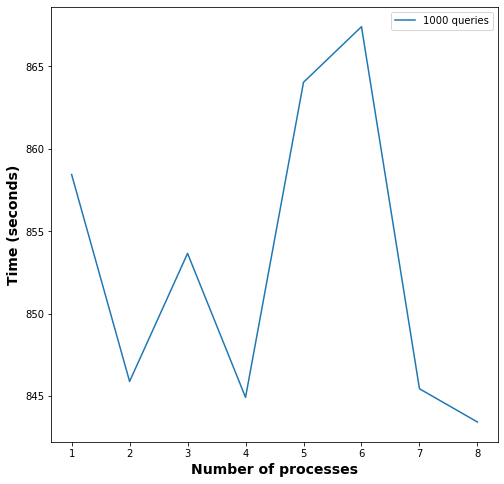

In [4]:
fpaths = glob.glob("benchmarks/queries/queries-1000.txt")
parallelisms = list(range(1, 8+1))
results = AlgoResults(fpaths)
for fpath in fpaths:
    for parallelism in parallelisms:
        result = AlgoResult(fpath, parallelism, run(fpath, parallelism))
        results.add(result)
        print(f"Elapsed time: {result.elapsed}")

results.plot()

In [20]:
scores_q1 = [0.0015113140262449933, 0.0015113140262449933, 0.0015625301289934198, 0.005218250101889702, 0.0018214233828717876, 0.0029588946043718443, 0.0011459885791964238, 0.0010494089720538458, 0.00479293471109119, 0.0010418212506290536, 0.004057274964737659, 0.0010810430849573982, 0.002542455283937198, 0.0017646595048927325, 0.0009012516012646062, 0.0003574899466626211, 0.00033698719258786635, 0.00033698719258786635, 0.00036494371714708364, 0.0034175796637535023, 0.000859582996284438, 0.0007353418013416586, 0.001449417206057485, 0.0011021589381398742, 0.0005094327663439623, 0.00016816175699981283, 0.00017368920238767908, 0.0013035388669017803, 0.0004055133976340345, 0.00038660848000201327, 0.00016883028029464608, 0.004000944879693576, 0.0007378971729421142, 0.00015698870746180823, 0.00015698870746180823, 0.0017940868451633172, 0.00013167489002957, 0.0009837729317388466, 0.0007648976761894036, 0.001076141049096028, 0.002163825579544655, 0.004418431482891526, 0.00020180336099744948, 0.0013054369173470344, 0.00016624578840699727, 0.0008479749446820471, 0.00022538212860316806, 0.0020536792023726188, 0.0012088248069096659, 0.00015698870746180823, 0.001752585922268032, 0.000934333671389766, 0.0007854478327773795, 0.0007096662784627986, 0.0013835571992664641, 0.0011359855816024242, 0.00041844658954115125, 0.0005308839782960733, 0.0005262444131038949, 0.0007281748566124014, 0.0005296295100834932, 0.0005926046993332858, 0.0004987270898153173, 0.007113603373135825, 0.0009546741109940865, 0.0015796604514725957, 0.001091277466340549, 0.001091277466340549, 0.0015065170997240515, 0.0005093684480854756, 0.003373993554723821, 0.004418431482891526, 0.004418431482891526, 0.0009445049263867516, 3.092127068833884e-05, 0.0035945675848633564, 0.005582086188946399, 0.00015698870746180823, 0.0004995669576221857, 0.0008226022618128269, 0.005693688523666014, 0.0003734567058281042, 0.0026160938893727502, 0.00033119507392858103, 0.0006685091620647904, 0.00030987770598417836, 0.0009919972444211974, 0.0009578472917998599, 0.00015698870746180823, 0.00046797967672671496, 0.0007178103003400071, 0.0009360679334248283, 0.00022780648182162675, 5.4190461897810054e-05, 0.0002559241824419817, 0.00010546348254613207, 0.0015821383502200037, 0.00189455402350834, 0.006109540128455119, 0.0007298214169791985, 0.00048241693089334087, 0.0015107480970084292, 0.0004209351341291679, 0.001148271749839479, 0.0003088369424487171, 0.00015698870746180823, 0.0010810430849573982, 0.00015698870746180823, 0.00015698870746180823, 0.0010702885775463614, 0.0009142199848314094, 0.000811026795268069, 0.0012419432947702047, 0.0001863746843932651, 0.0008153704108854102, 0.003264120382735445, 0.0011824304786228045, 0.0006635613146481924, 0.0033775243139899623, 0.0002321653168212349, 0.0026878432998407795, 0.0013432504721361779, 0.0014947954031348683, 0.0011753686214307385, 0.000981857579231202, 0.00017164086215224757, 0.00017164086215224757, 0.0012739036290056866, 0.0015511160296274547, 0.00038579515114138275, 0.0015511160296274547, 0.0007320063128115775, 0.0018981194039336673, 0.0020469065413805223, 0.00248006933644445, 0.00011068609426908489, 0.0011613278045656333, 0.001158326957525412, 0.00046800682014512036, 0.00016980020172815697, 0.00016895754729405154, 0.00048241693089334087, 0.0005799544013600244, 0.0009811412434486892, 0.004507768483867049, 0.00819594269794009, 0.001547843005202766, 0.008060844741380638, 7.373779401904484e-05, 0.001549626576939124, 0.0005531952273496517, 0.0008996438383456372, 0.006109540128455119, 0.0010957231920317788, 0.0006638888914038193, 0.0004699420842237635, 0.0006307774848438102, 0.00029449635337501436, 0.0011628340663095576, 0.0011275720494860284, 0.0003585224200711819, 0.0002725889526070747, 0.0008443810784974906, 0.0021947247616270964, 0.00033492053736186366, 0.0003574345206370914, 0.0005313734333962476, 0.0007745901493829336, 0.00015698870746180823, 0.00015698870746180823, 3.160756485373944e-05, 0.001547843005202766, 0.0007132418974738813, 0.00025534511348487403, 0.0013225545953322437, 0.0013128710683569832, 0.0010718524954997368, 0.0005836459736797121, 0.0008250414709736216, 0.0008250414709736216, 0.0008250414709736216, 0.0008250414709736216, 0.0004466843216409444, 0.0001574574219167142, 0.00012701737219598307, 0.0003552940528003355, 0.00015698870746180823, 0.0010252738991260507, 0.0009270341895820334, 0.0013545250270475104, 0.0009854550056328797, 0.0007485764529290304, 0.0009337930316076866, 0.0024934813306928365, 0.0006172663392076208, 0.0006105406769160124, 0.000621067240311116, 0.000936312330494853, 0.0002562574223460745, 0.0009208976930063934, 0.0010213804539394961, 0.018704111139038828, 0.0005720599493883034, 0.003745314512681962, 0.0008774364491215767, 0.004418431482891526, 0.004418431482891526, 0.004782990863142868, 0.002573813584089958, 0.0009155685448907318, 0.00041500311608918476, 0.001103062964609982, 0.0007510150396613942, 0.0007510150396613942, 0.0006934432439087332, 0.0034519382186618264, 0.00151813839814149, 0.0013909507991935908, 5.328261170475989e-06, 0.002339491326796758, 0.002809507516059199, 0.0018535359986497487, 0.001071567806921915, 0.000801759299097975, 0.0037081367583281337, 0.0009546741109940865, 0.00042369804590012704, 0.0005631171460759313, 0.002036702362875502, 0.0005761034975097828, 0.0009992452738231603, 0.00280267648007017, 0.0008558448860969473, 0.001085697737637516, 0.0010816227327241313, 0.0003706092957065047, 0.00047040783455500605, 0.0004543302694888524, 0.0022991610161339276, 0.0034146870868057635, 0.00015698870746180823, 0.0009962841815189555, 0.0011339102847276587, 0.0034175796637535023, 0.004318001562320025, 0.001510465291299517, 0.00015698870746180823, 0.000297438277282587, 1.744088981379167e-05, 0.00018381660465235315]
scores_q2 = [0.00015386251803001445, 0.00019912057848586775, 0.00037564028981814355, 2.365192715958361e-05, 0.0012298288356484383, 9.553905193367888e-05, 0.0014928484609149641, 0.00041761722549926895, 0.0021446791159985823, 0.0002687205955029188, 0.002904818549517067, 0.00011303534299635921, 0.0006474195042232483, 0.0004166578863457736, 0.0005980731441538918, 0.0004347871644786819, 8.848635968011679e-05, 0.0003270064711472138, 0.00032768908383813835, 0.0005250072418482002, 0.000530513779357063, 0.002194228135083066, 0.00016098501494412186, 0.0011046000741845884, 0.0002622757845575933, 0.0020374619809656533, 0.0006398983960986711, 0.00030068437225431197, 9.779890249137397e-05, 0.0003015254474214569, 0.00030068437225431197, 0.000452649929317454, 0.0003995591380313455, 0.00030068437225431197, 0.0002575755016802171, 0.0006173838368680872, 0.0007507285412399595, 0.0013001737417101884, 0.0005193094223157509, 0.0011663566221694957, 0.001962662919729306, 0.00018783183326210616, 0.002014812108787426, 0.0013284237885325212, 0.0007412166195473136, 0.0009793689184898187, 0.0008117672894713774, 0.0034612569562235502, 0.00028406353325594025, 0.00024384147105257584, 0.0007701412012351759, 0.0005100703832226012, 8.880920757631918e-05, 0.004293370728004646, 0.0006834246350094996, 0.0008634683187386871, 0.0006723120393182882, 0.00045233335927996555, 0.0003982656463239297, 0.0004973772905939951, 8.768432190717517e-05, 0.0005795766747358722, 0.0011978179856250203, 0.0010186651365594384, 0.0008768844685206278, 0.0001122701134016063, 0.0005989988688143991, 0.0012492142918445743, 0.00015723430551619003, 0.0003393792914700381, 0.0024194060665455805, 0.00046165031029195226, 0.0005076444318368505, 8.768432190717517e-05, 0.0008271498297311, 0.0004596047775122137, 0.001100099067170893, 0.0007541883671410674, 0.000521073263877948, 0.0005478172962803731, 0.0010738449481134688, 0.0001122701134016063, 0.0006998495437994763, 0.0005911403024519533, 0.0005478172962803731, 0.0009437991646931781, 0.00011207001814528381, 0.001688014873957344, 0.0008057607633842987, 0.0015760447126544892, 0.001345026088824364, 8.768432190717517e-05, 0.0023081941803645973, 0.0033549804884773137, 0.001347112799599931, 0.0009682728498390223, 0.0010104828948121897, 0.0009149946786756311, 0.0002864629504076267, 0.0001122701134016063, 0.0014710299064862068, 0.0005990880183053082, 0.0006331665559050353, 0.0002015673653458517, 0.0014993888369045124, 0.00042395398380308785, 0.0020387860256359425, 0.0005478815380185618, 0.0005068035896904777, 0.0005732717097473103, 0.0005076444318368505, 4.675573517812659e-05, 0.0008154963234251894, 0.0010082630290503, 0.0007159338563181623, 0.0012164360742743083, 0.000962965944125054, 0.0004152820210083632, 0.001947270792702441, 0.0006825718780840222, 0.000464206356304027, 0.0006575273535739126, 0.00046145317798481456, 0.0007074003249440453, 0.0004861363529538148, 0.000213758479368894, 0.0002392034972807722, 0.00013218892518235815, 8.895228781722253e-05, 0.0002147928927333322, 9.204473932203988e-05, 0.00044543532005442496, 0.0010035809571700028, 0.0001122283679887255, 0.000697075594367395, 7.747098892938356e-05, 0.0007536278557173428, 0.000744608296210382, 0.00014592292248543723, 0.00029122633430034577, 0.0002804040996552196, 0.0001482960609585213, 0.0017001844424983253, 0.0008214403807679756, 0.0007601737133078411, 0.0006128470305240656, 0.0009705200783865941, 0.00033846705812956974, 0.0006231588167004818, 0.00029224145320379393, 0.0003452914014623056, 0.0007812107758701219, 0.0005879596859130113, 0.00010417166178949347, 0.0005777553946632555, 0.0006268472956778366, 0.0001265521898821293, 0.00038285062631272657, 0.00039757565040167756, 0.000312159450686605, 0.0014541060850393251, 0.0008678176333205244, 8.129946475063165e-05, 0.0003285727986815571, 0.0007543743110185677, 0.005610166781949412, 0.0008540404369625914, 0.0002682906425501141, 0.0005879596859130113, 0.0008052374086500581, 0.0005512386870330249, 0.0003936189004549796, 0.00014791089526064802, 0.0011498020310547726, 0.0006749431335642596, 8.575645020543483e-06, 0.0010037060741150967, 0.0006157220988757208, 0.0001389499000409163, 0.00018482974456146867, 0.006771469627629637, 0.005787242842618612, 0.0003825630866823139, 0.0006878463374404703, 0.0005367237795632472, 0.00022984842288846982, 0.000456621744128409, 0.00048454532392704455, 0.00020092329441411154, 0.0007727265050406512, 0.0007727265050406512, 0.0003913054963727896, 0.0007727265050406512, 0.0003218457804104056, 0.00047436187349732565, 0.0005632034242452947, 0.0029765973655707925, 0.00018347028926440846, 0.005089830908412789, 0.0003742894008790654, 0.0006341346863272183, 0.0004480804229051045, 0.00027162254577832825, 0.0005031668675215443, 0.0013994324076392305, 0.002078698160253983, 0.002078698160253983, 0.0006989971581030068, 0.0015129263278734722, 0.0005513711326570117, 0.0001671893717769226, 0.0004361661457642751, 0.0008395743334322069, 0.0005360445349494237, 0.0026757710360716166, 0.0034912799323732107, 0.0012319468280362384, 0.0012319468280362384, 0.00205324471339373, 0.00037662462299585525, 0.00037662462299585525, 0.0007456199922650157, 0.0013165844257707875, 0.001669557405688238, 8.47257390716591e-05, 0.001086490183113313, 0.00048674239692011724, 0.0007872378009099592, 0.000663047285211928, 0.0010635199889671542, 0.0009135306240304693, 0.00256219841145058, 0.0011485044629713787, 0.00037662462299585525, 0.003576148967640739, 0.00041266311472909923, 0.0006939239958023837, 0.00019753074140633402, 0.00013189432479849604, 0.0005762949909890716, 0.000663047285211928, 0.0007135592829970406, 5.015069999815206e-05, 0.00024470107209623404, 0.00023455624251544788, 0.00040168614967910353, 0.000183548390214594, 0.0021956375329937805, 0.0004335348647929882, 0.0004311813898126834, 0.00012942837601581403, 0.00040168614967910353, 0.00034865077147843175, 0.0003417424964547989, 0.0001446778702276284, 0.0007755060967854018, 0.0008040143123837995, 0.0004970799948433439, 8.173921963864592e-05, 0.00013695751559528014, 0.0003817695078027806, 0.0052512738080514485, 0.00024844452576596474, 0.00014021507612602357, 0.00039714075377483995, 0.0001939512741735499, 3.847870638307985e-05, 0.00011576671251491193, 0.00023818416419576894, 0.0001843105598857342, 0.000960518636476753, 0.00020821397134994368, 0.00013979727325603048, 0.006093411296141555, 0.00011496856468551341, 0.0008014523974213446, 9.860404210025429e-05, 0.0008018782488546183, 0.0001908123485073197, 0.001647527144480777, 0.002642968238781772, 0.00643097243328576, 0.0005399409174756321, 0.0017076874210642447, 0.00014413895552477476, 0.00043800259785847155, 0.0004037278930830368, 0.0003151910744244761, 0.00030462956486564227, 0.0001513675892020453, 0.000255029127899348, 0.00016732840274358485, 0.00025330161971971564, 6.601639826528398e-05, 0.0003846889789305103, 0.0003846889789305103, 0.0003846889789305103, 0.0006410938251250602, 0.0005677708293244513, 0.00047160464510762247, 7.100307531790407e-05, 0.0044386975901711465, 0.0005705613853854034, 0.00040083263329200315, 3.314594474729611e-05, 0.0002308604657097127, 0.0017661358520225012, 0.002235323947827212, 0.00046751389849578436, 0.0018116865118179973, 0.0002641118068506111, 0.0005705613853854034, 0.002084293055511792, 0.00023269368041699048, 0.0001343602977514594, 0.00015462447380577786, 0.0011799050929006674, 0.00011359690360138442, 0.0003305881411488263, 0.0006689427590179041, 0.0002955610780149612, 0.0020934764894668173, 1.4396295496855723e-05, 0.0007022498205418296, 0.0017859584193424755, 0.0010695498684226731, 4.414223892431239e-05, 0.0001742800894239561, 0.004035119958140085, 0.0016988384964477206, 2.628353488647872e-05, 3.3896004589688176e-05, 0.0006764387558692926, 0.0006314371817340551, 0.0008166314200997791, 0.00434283414199825, 0.00041402876936746003, 0.00046038281401598283, 0.00021204648929947897, 0.0003028566855999181, 0.00028420618914207, 0.00030931233128599956, 0.0002859834876529073, 0.0001654934602856006, 0.00022407347651735588, 0.00031427215000924444, 0.00022407347651735588, 0.0002406913659241454, 8.515601311050625e-05, 0.0010039147609142802, 0.0009836303499067243, 0.0003629909475272139, 0.0010004208580340682, 0.0004223719183723459, 0.00015225715583468025, 0.0006218108217323411, 0.00015435561668654925, 9.429735468285379e-05, 0.00011051884762683206, 0.0001021203724688315, 0.00011017191300513883, 0.00010476465562960027, 0.00028905092211154793, 0.00014116597580509721, 0.00022683524189754875, 0.00019528142654559938, 0.005532232765298754, 0.0008342947214950683, 0.00012990745152314642, 0.002618645858636534, 0.001012256995574526, 0.00019993837630423846, 0.0014845142170458975, 7.724891811754667e-05, 0.0024259831112645883, 0.00020454525133429, 0.0029011462125391693, 0.0001671801112600412, 0.0007172615659556426, 0.0008933678092892153, 0.003619568855076471, 0.002618645858636534, 0.00018458107440611445, 0.00017348371816811034, 0.002157820800698278, 0.0012541450016435721, 0.0002597110292121416, 0.0011061974712549929, 0.001705632467490909, 0.0001575297353177862, 0.00233925245068143, 0.000152545725699423, 0.0024259831112645883, 0.00048292315659020544, 0.002530106564628978, 8.099693346631558e-05, 0.002230751402565979, 0.0012445716520982119, 0.0010022479590532237, 0.00012157696482271745, 0.0029011462125391693, 0.0013614679736803415, 0.00021596091361539665, 0.0014398580983217525, 9.004921918637102e-05, 0.00014226384467801582, 0.0014134281412097013, 0.002530106564628978, 0.00030642332270952116, 0.00024169360415509156, 0.0007636627800727064, 0.002678574436311667, 0.0005971083092523113, 0.0008861112671564757, 0.001457169706363867, 0.005060213129257956, 0.0004302798510770933, 0.002766493856682921, 0.0006237383196298376, 0.00011667065050980995, 6.466427561677914e-05, 0.0001881948951670273, 9.797032357468137e-05, 0.00018612911499067488, 0.0001974532074243611, 0.0003416651266344559, 0.002976402923629679, 0.0024605055100018597, 0.0009250565112174426, 0.00015448202112236585, 0.0005069314290710083, 0.00021521151271726842, 0.0031604918625013443, 0.0011276691175029399, 0.00029278006874466813, 0.0005771805957461978, 0.0007511150347337271, 0.0014873208255693742, 0.0008723842060895203, 0.00014739084523336185, 0.0029011462125391693, 0.0009192173672676931, 0.0009879637204234352, 0.00021890555038357875, 0.00035634825604354, 0.0029011462125391693, 0.002198090664864447, 0.00015349215463226115, 0.0003706126877073654, 0.002976402923629679, 0.0003855735473542136, 0.0029011462125391693, 0.00014902092074102813, 0.0029011462125391693, 0.00015276190549087882, 0.00028487680308530284, 0.0003997708249918919, 0.001815505341810103, 0.0003075473536467071, 0.0002487038339394185, 0.002191792410810394, 0.00047531806751004467, 0.0006227088361231243, 0.00475115249299893, 0.0002709155128524175, 0.00021148190363570513, 0.001686425356104263, 0.0024121379318090518, 0.0003199353114997651, 0.0005566709200827709, 0.0009822432231569266, 0.00014739084523336185, 0.0008342947214950683, 0.001843590396670214, 0.00014739084523336185, 0.0002711832640331342, 0.000626369425072102, 0.0003379542860473389, 0.00018268186228596924, 0.00030331320758605, 0.0004885617157029123, 0.00033061228224281987, 0.000680043459510589, 0.0003285727986815571, 0.00014739084523336185, 0.0001565330219214181, 0.0012809258819285877, 0.00022201322020513304, 0.00034169247381156685, 0.0010341703713660512, 0.0008115940939754374, 0.0007921967791834078, 0.00015268462812063858, 0.00026118637319909863, 0.0016555325769511786, 0.00012825145443565834, 0.0027387537636021364, 9.562380334206006e-05, 0.00017134373584099774, 0.00040459379741136515, 0.00029292911081420513, 0.0003914048531670617, 0.00040459379741136515, 0.0007121920077132572, 0.0003955881148282163, 0.0014804209061929849, 7.009125745875212e-05, 4.585363588795551e-05, 0.0009371568190919428, 0.0006744577160395168, 0.00036399779651336033, 0.000887435507400579, 0.0051860037381208654, 0.001405897082601426, 0.0015272115769104514, 0.0005860078279158536, 0.00021611554694893193, 0.00042296380727141025, 0.0012535645142405256, 0.00013881838086736935, 0.00016299112910080914, 0.0002942059812972414, 0.00031355388829096026, 0.00027543983652936514, 0.0017659150858934075, 0.0005922821288635761, 0.0002490321558324079, 0.0002897724393902442, 0.00047108939108612204, 0.000592055380319526, 0.0028873111607749242, 0.0018451070786368981, 0.00042296380727141025, 0.005716419940698454, 0.0016856322373355493, 0.0002491773561157392, 0.0002539775941340276, 0.00042074344856352997, 0.00041346160666969636, 0.0017553215531947342, 0.0012231507533338544, 0.0009041983360148694, 0.001502643301782688, 0.0018314537198884887, 0.0005916991802626083, 0.0006282835245267701, 0.00014739084523336185, 0.0013084124427770007, 0.0035201885903793613, 0.00035846433832408355, 0.0007585127653963857, 0.00044981665107135375, 0.00041932060693092294, 9.609340706496725e-05, 0.0004671998917296579, 0.00227178140163951, 0.0051743103813269055, 0.0018332787330684903, 0.0026972803443090975, 0.0006986118491208217, 0.00017161282187544741, 0.0014193811636055503, 0.004149484132449118, 0.0014052704556757397, 0.00017134373584099774, 0.001195364204739584, 0.0003897880436994441, 0.00022844911661283558, 0.0006192251165175508, 0.00365266276575186, 0.00014589470846330162, 0.0003554250740330645, 0.0004948794439561869, 0.0004128959957166599, 0.002713499650134188, 0.000855518630580721, 0.00016017139294676204, 0.0024524651265388367, 0.0051860037381208654, 0.00034275150223583736, 0.0008591234358528215, 0.0022015148103930464, 0.00013245637253209136, 0.002308658605753001, 0.00018649714092244089, 0.0007877484077216943, 0.00014589470846330162, 0.00041861357086638875, 0.00031804738974592034, 0.0028456167633008978, 0.002442582920828614, 0.002267595508022216, 0.0007033932618983049, 0.0008032066604216196, 0.001749733584804221, 0.00012663714561923236, 0.00014589470846330162, 0.0007067895797961492, 0.001347491863142147, 0.0005407147489589365, 0.0002733939971638391, 0.0004889354474689718, 1.681880846041293e-05, 0.0002861461631293879, 0.00191466862131248, 0.000400194872538953, 0.0007772857584233316, 0.00010180348518243333, 0.0023572744264185753, 0.002195111320266564, 0.00035871995824682474, 0.00028794788482052884, 0.0002889402382432303, 0.0011756181629705342, 0.0007035383363052138, 0.0019546905060634436, 0.00020001787466459797, 0.0003633842678411731, 0.00039787367897294805, 0.003673494462921566, 0.0006961825619441572, 0.002197038443387729, 0.0003024318365419623, 0.0016511322367006474, 0.001265053282314489, 0.00021548295342962686, 0.0011227038425237195, 0.00031257971506718965, 0.0004257080012254984, 0.0014674999542152092, 0.0003954517756537106, 0.0004700546198522087, 0.00123091232952694, 0.0009164159538063648, 0.0008175299800920851, 0.0004889354474689718, 0.0016683251271769563, 0.0003930038709230187, 0.0051860037381208654, 0.00025552571356999524, 0.0006586701073818837, 0.0009218905707662748, 0.0005671791038355122, 0.00018761000302640373, 0.00010373486832172064, 0.00023812778924566338, 0.0005619017272572191, 0.0009053961063808429, 0.00023847102297812353, 0.003525432361874768, 0.00028340560832758533, 0.00021357696919677212, 0.0005493911070429693, 0.0005557484309867029, 0.00010474284177848362, 0.0009378775609545041, 0.0014434316125021222, 0.00010322399892916497, 0.0023464280716957906, 0.00044224448913441565, 0.0006380311168169867, 0.0012572771130568447, 0.00320802421358595, 0.0008054342541708079, 0.00034984967104807784, 0.000995471546401314, 0.002486244880236825, 0.000995471546401314, 0.002610701540521596, 0.0006261409697458344, 0.0005397478055595106, 0.00023973548281880727, 0.0004257080012254984, 0.0008839180942170034, 0.0006624730525746198, 0.00010480831060104117, 0.00036132165250200594, 0.001290200628082377, 0.0051860037381208654, 0.00010443839891656691, 8.34144850953124e-05, 0.00010429404729401465, 0.00028452768935603164, 0.0005158027993073685, 0.0006735204690617636, 0.00010474284177848362, 0.0028261151174969064, 0.00031804738974592034, 0.0004096969080062715, 0.0002565683210378089, 0.0003513176139189349, 0.0003038300670673796, 0.000995471546401314, 0.00013703213151224842, 0.0003226025789534826, 0.0002604651129348277, 0.00010440227356239308, 0.0006242673161366929, 0.00015344533445291222, 0.00029707379219377794, 0.0033269181073786016, 0.000995471546401314, 0.0006916234641707302, 0.0003199353114997651, 0.0030294477282092184, 9.123230828351385e-05, 0.000486893371233821, 0.000995471546401314, 0.0004905529401706889, 0.0003791796141568824, 0.0002859293035893126, 0.0011672112667882402, 0.000995471546401314, 0.002466870899348006, 0.0006690398408508696, 0.0003844541219833277, 0.00014551488422952385, 0.0005018164561816057, 0.000995471546401314, 0.0008946614635939504, 0.0014904568006831452, 0.0051860037381208654, 0.00010449625151256003, 0.00028916169081134163, 0.0007549533898843566, 0.0006727665359479574, 0.00037115958296714014, 5.38284656992578e-05, 5.38284656992578e-05, 0.0017224614871126287, 6.563168062731111e-05, 0.0009646109928811111, 0.003882921580572729, 0.0010712801994980134, 0.003255954399880025, 0.0014215665436367818, 0.00024411757753872403, 0.000778305757784627, 0.0009171451025424978, 0.013876560119639038, 0.00019093305469944228, 0.00027628118281098523, 0.0001062771031228445, 0.0006672591305344417, 0.005968287787044169, 0.000491895327361275, 0.001366543671134626, 0.00034637017772421206, 6.703194493764048e-05, 0.0005739610285285466, 0.00022252267354932003, 0.0002519003278825558, 0.0008189067483943496, 0.003025184435971003, 0.0008405885179921182, 0.00032506943766168916, 0.0004041603814527027, 8.87048059921467e-05, 6.355857750776583e-05, 0.0005394583965484868, 0.00016624822247558735, 0.0009017356735293988, 0.00023524414701368355, 0.0002909215700157177, 0.00030188735033894615, 0.0005631232161200756, 0.0019517691122875535, 0.00035293144629195317, 0.00021787841829847568, 0.0002454077346685734, 0.00016613383436751486, 0.001433691328922218, 0.00027191619177376427, 0.0003043224166857011, 0.0017126504275712883, 0.0008587484051733095, 0.0007156622282876167, 0.0011262058240855066, 0.00026833673239721177, 0.001610602843483876, 0.003420110823345303, 7.586260817093409e-05, 0.000903132773395806, 0.001610602843483876, 0.0002683042972195116, 0.0011954561654503064, 0.0007672266722645612, 0.001610602843483876, 6.0067459972313005e-05, 0.0011975094342902683, 0.00013967004760244255, 0.0025355325456953505, 0.0010318375243338503, 0.005120670892104093, 0.00016607015600591211, 0.0014887880937300808, 0.00013819973827874032, 0.0006853473498385067, 0.0012002795404976179, 0.0013885532098787642, 9.496192199499068e-05, 0.0005647959821648173, 0.0013312195143627254, 4.593668257649774e-05, 0.00011348585233451585, 0.0014036244355768372, 0.000558938838646071, 0.00018906133788648463, 0.00021957440191246787, 0.00015279283834609617, 0.001163186644498315, 0.00013363454036521667, 8.026886146185797e-05, 0.0009966586988571044, 0.0004323342812292949, 0.0012998129817615172, 9.149599032038267e-05, 0.002913423598119107, 0.0004361661457642751, 0.0006792646713768981, 0.0004350345529963655, 0.0001555007588196179, 0.0006127831168941581, 0.0025841350416856024, 8.662236622341821e-05, 3.777275459525923e-05, 0.00026236697919756465, 0.0013882241565308256, 0.0016062575740446684, 0.00034738674439647625, 0.00040231533206845773, 0.0017572093295625435, 0.00021015664452644366, 0.0014344724454577902, 0.0006615261799116763, 0.0011757925274959384, 0.001413058284555716, 0.00036391002275003423, 0.0003241617150347743, 0.004535191016044432, 0.00038071010704954385, 0.004403416402028758, 0.0007359867396146513, 0.0014344724454577902, 9.182445173984739e-05, 0.0007932273260001669, 0.0012249857584262366, 0.0016144037920200161, 0.0005342208013387979, 0.0004714573146967797, 0.00027907320427992204, 0.0024232959556703608, 0.0007209571643476226, 0.00016106887927257505, 0.0008396710304507311, 0.00044295123696636094, 0.0010127446317803649, 0.00015835622920717647, 0.0011690303892605619, 0.0008479873746081992, 0.00011452795509936949, 0.0005998506807862135, 0.00012554154099861842, 0.0004676598031625194, 0.007942815075496799, 0.00014031937371867894, 0.00014192935806869105, 0.00011167195977093323, 0.0016044065102622223, 0.0008479873746081992, 0.0008905931694572088, 0.0008211861593494173, 0.0005778913760056617, 0.00013751912377842098, 0.0003121741261783912, 0.0001317618949966728, 0.00021358647378935902, 0.00031575161927908604, 0.0004418747589799993, 0.0010170124388054185, 0.0007539391495475728, 0.00022209490277327326, 0.0006292313282474589, 0.0020594145435102744, 0.000269007997209339, 0.0011856402242926803, 0.0005210201499549083, 0.00032451023854303664, 0.0004630668500596477, 0.00026428730324985403, 0.0019847835003903927, 0.0005003485251112772, 0.00037308649303940467, 0.0011636950578694132, 0.0013751593576135242, 0.00031045769684105983, 0.00037313261573603457, 0.001072590521922098, 0.001072590521922098, 0.0006413662831892868, 0.00013140051060900234, 0.00140701944463609, 0.0034917874814826277, 0.00011225341151029395, 0.00027661786479093146, 0.0001681112692819864, 0.0007649355513728276, 0.0007075175172735077, 0.0006041349622531217, 0.0014339587342453131, 0.002233414995213962, 0.0011463234822213383, 0.0001565655010213084, 0.0001612926697316723, 0.0004425615437960093, 0.0009287331151072414, 0.00020727027391078038, 0.0005523365062382568, 0.00042738249282280006, 0.00039754614622658415, 0.0007143028243253084, 0.00029375405198649293, 0.00016762577633504296, 0.005038068074304408, 0.00026402883899424525, 0.0002820461371189369, 0.0012670703000349562, 0.0001327178668845653, 0.000840107503428058, 0.0009485095747223541, 8.38454838793484e-05, 0.0015471202873113539, 0.003333861971559053, 0.0001611979133031822, 0.003125020409603018, 0.0025227500196820505, 0.0005423792611955762, 0.000922838796327723, 0.0002466108120507217, 0.00374662310876487, 0.00014935275019490243, 0.0002354372272615659, 0.0007757967052462755, 0.01059141532670069, 0.00017449335516199705, 0.00038795240728647603, 0.00036039041536582494, 0.000126704483181271, 0.0008430921029856937, 0.0026211383827738238, 0.00047101587526354304, 0.00022718608594381575, 0.0002038361439391822, 0.007384735813736066, 0.00038186610939888456, 0.00016999547894614383, 0.00018873622615612703, 0.002832130268020931, 0.0053367596607406574, 0.000267366498207909, 0.0003145997215643927, 0.00010894707366043834, 0.00022615538203872197, 0.00020727027391078038, 0.003498180875180614, 0.0002352326185557465, 0.0006130928811430626, 0.013971425595850732, 0.0030330513535798084, 0.001055614905138461, 0.0024443081462778207, 0.001621369676387672, 0.0005300789829098671, 0.0009589346311778637, 0.0017189562952198373, 0.00044252460661503893, 0.00031001127040764003, 0.0009895673368341884, 0.0003091064997465629, 0.0008261664411144871, 0.0013576729206439774, 0.00357446519333097, 0.0010263457749634974, 0.00053219078249501, 0.00025658467929260906, 0.0035884388649233506, 0.0003734125220272529, 0.0003981965389759644, 0.0035856353970601298, 0.0003664069382274442, 0.0010334287796394722, 0.0004122160327139362, 0.0034456556368145388, 0.00022193626022417998, 0.0013226551320567625, 0.0004446438004492313, 0.0007437896664464308, 0.001270657062081109, 0.0012354767616409267, 0.0002558883423414901, 0.0004446438004492313, 0.0015951665884321442, 0.0017269767114076481, 0.0010622946362550114, 6.017044234059215e-05, 0.000448331286060683, 0.0034560341176483175, 0.000850558433698474, 0.001531572850357163, 0.00010930215574305728, 0.00036310231868963335, 0.00039890326326162695, 0.003849833837613244, 0.0008378409023721986, 0.0008432800209224966, 0.0012455718589834861, 6.300400218529586e-05, 0.001327099383667024, 0.004926592215797516, 0.000800141790138941, 0.00034893291661142005, 0.0009818302850149836, 0.0009536078010686574, 0.00046506467314156913, 0.000562480381790679, 0.0008445011134061897, 0.0008550282962581728, 0.0056521905031625165, 0.0008545814084111919, 0.0009058432559089987, 0.0010829668023211339, 0.0044386975901711465, 0.00042472823507652837, 0.001971153255520801, 0.003101497115114756, 0.000906678688915244, 0.002051776938716844, 0.002865692886221554, 0.0030116252294609285, 0.003714426433985446, 0.0007985641009834699, 0.0026787626312667115, 0.0015052847845972337, 0.0013461348159336344, 0.00398161029619324, 0.001421593095318868, 0.0011510130811974147, 0.0013462398433045422, 0.0012862858421857164, 0.0010650571826512027, 0.001412665260199287, 0.0009758905609689487, 0.004037863383082208, 0.0003197997169621513, 0.007141456619877232, 0.000800141790138941, 6.373439467636852e-05, 0.0003588052459211583, 0.006076275341884774, 5.3533455041393086e-05, 5.3533455041393086e-05, 0.0010575577185314587, 6.731799733894156e-05, 0.0001705595048260449, 0.00018151730386629683, 6.0037987415735197e-05, 0.00013896269469101214, 0.00023659095908409153, 6.956862842859442e-05, 3.554501882715199e-05, 0.00010518207378659205, 0.00010884754034315468, 0.00013306894139356246, 0.00025766345643578483, 0.00027393989187591064, 0.0002290732945270783, 0.0005580604102225726, 0.00022427327453475876, 0.0005921659267586392, 0.0004310582303183067, 0.0001128072106700846, 0.0001808863555488903, 6.822490345137395e-05, 0.00025841350416856023, 0.00011508692628265018, 0.00025406310847548685, 0.0003561380210842223, 8.497141771596475e-05, 0.020861878673804388, 3.5810708185287645e-05, 0.0004620036321274734, 8.497141771596475e-05, 0.020861878673804388, 0.00011225341151029395, 0.000256089405115288, 0.020861878673804388, 9.604371312571704e-05, 7.941979077699146e-05, 7.945603006376229e-05, 0.00041967042946173297, 0.020861878673804388, 0.001785254177063555, 0.0002236749465457821, 0.0002981301588985365, 0.00023882495083785282, 0.0061074454089547, 0.020861878673804388, 0.00025470630621846275, 7.759447089024587e-05, 0.00018046455776913505, 0.00015028230077120014, 0.020861878673804388, 0.00029005090608195114, 0.00020432370218580987, 4.1446085475787976e-05, 0.020861878673804388, 0.00015150435341274889, 8.751144472858173e-05, 0.005542629577269751, 0.020861878673804388, 0.00020349714999250157, 0.0006830209840888851, 0.0002116301871188321, 0.00023231755916631647, 0.00019100555174590456, 9.343909753850484e-05, 0.020861878673804388, 0.006378872269155583, 0.020861878673804388, 0.00011438038990028739, 0.0003389029562866364, 0.00014995378222817886, 0.020861878673804388, 0.020861878673804388, 0.020861878673804388, 0.00035400770920581554, 0.00012918463142821363, 0.00035400770920581554, 0.0002782841350441438, 0.020861878673804388, 0.00021083191734344676, 0.00035400770920581554, 0.020861878673804388, 0.020861878673804388, 5.2779871449109635e-05, 0.0004247494692779037, 0.020861878673804388, 0.000314993709944561, 0.00046918540784840414, 0.00017948797149671644, 0.0002476021106389486, 0.0008223047891809791, 0.020861878673804388, 0.00010984313737130736, 0.00023327517482652388, 0.00015164136498637377, 9.916123689758801e-05, 0.0006326725255775818, 9.674561602310352e-05, 0.020861878673804388, 0.00039475146857033524, 0.00018019520768291247, 0.020861878673804388, 0.0002180515625407299, 0.00018913834620182878, 0.00019500385894099907, 0.00010529337627408659, 0.0001559345799074594, 0.00037887816168318136, 0.00028255295593750053, 7.501788856909042e-05, 0.00020818524821967054, 9.574513794850855e-05, 9.406225781254e-05, 0.00028446065017565463, 0.0002492789666905173, 0.0006485323869120721, 9.925253958200538e-05, 8.645860007702044e-05, 0.00034044004063571914, 7.411525706435477e-05, 0.0004976537062965843, 0.00014612072660189697, 0.000399083661072165, 0.00019380183181512674, 0.00014862466656927239, 0.0002028952493068556, 0.00010338664549869096, 9.209903968902672e-05, 0.0004057904986137112, 0.00010244619267832406, 0.00027695629736546, 0.0005974405638734726, 0.00026517920652686553, 0.0006312610977458415, 0.00023107255616971244, 0.0003285727986815571, 8.289217095157595e-05, 8.999015291260536e-05, 0.0005395548317284203, 7.696133736265957e-05, 0.0003926459904629613, 0.0003694332593254325, 0.00032364033119116275, 0.00020867462172903647, 0.00015637893003931318, 0.00034063686652871685, 0.00030462956486564227, 0.00024329112757446263, 0.0002347386629871507, 0.0004226321452739979, 0.00017844379515021425, 0.0007204883339751704, 7.137076681694924e-05, 0.0003544733556500192, 0.00019909430928026275, 0.0007572176941015513, 0.00019894558127315443, 0.00030379556815049354, 0.0001816702617484521, 9.198115830708794e-05, 0.0001421164765368106, 0.00010037478312899182, 0.0002558289310636365, 0.00043831973986186226, 0.00021775790452759248, 0.00021890555038357875, 8.752159510203513e-05, 0.000269007997209339, 0.00018080689269301818, 0.00026734009997243433, 0.00010839928633417553, 3.1150866208652764e-05, 0.0004588430721630866, 0.00027427595335442626, 0.0006813249951893416, 0.0001565330219214181, 0.00027608229853087437, 5.014236848670604e-05, 6.443786781999965e-05, 0.0001993573136518351, 2.9502372575301387e-05, 0.00027191619177376427, 6.527682271484025e-05, 0.0003902598563083506, 0.00024956753172554854, 0.0001831696643214458, 0.0003943388723136639, 0.00018003756285175866, 0.0003781345187532929, 0.00015443459520511583, 0.00010317459932620441, 0.0001748100155617273, 0.0001609400516523826, 0.00013286977146895508, 0.0001821087081385775, 0.0006125201752748604, 0.0001261396576683711, 0.0004432114139043735, 0.00034818154218512463, 0.00031791339042435047, 0.00020490629522666558, 0.000483715311547469, 0.00011818739637750738, 0.0008598547056882925, 8.279666781941031e-05, 0.00040524566711718364, 0.000394866231912653, 0.00011909208209788447, 0.000394866231912653, 0.00029883878210091544, 6.377075277178922e-05, 9.793535574446878e-05, 5.6664095833905e-05, 0.0002965900401597715, 0.006076275341884774, 0.0005974088540939579, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.00011225341151029395, 0.006076275341884774, 0.00010270415573325111, 0.009848955597075033, 5.42464005875051e-05, 0.00011225341151029395, 0.00010118235764964075, 5.42464005875051e-05, 5.42464005875051e-05, 0.00011225341151029395, 0.0018237279327424675, 0.0018237279327424675, 0.0011604266546285213, 0.0005624636283399194, 0.007792212747431181, 0.0018008769264252886, 0.0002387367956672208, 0.0005624636283399194, 0.007792212747431181, 8.483886072797447e-05, 0.00024126856344434724, 0.0002494850164232752, 0.00024435473839773186, 0.0002571804472297873, 0.00023314303481297572, 0.00019025906005350378, 0.00025505067844252015, 0.0002136979417083534, 0.00023075456641351554, 0.00027546218141642217, 0.000190341334241635, 0.000190341334241635, 0.00025956912011427445, 0.0002468730352272848, 0.000245747413180979, 0.00021336559654239954, 0.0002073224770707808, 0.0002639270486786275, 0.000190341334241635, 9.820621229546378e-05, 0.0025614736028476237, 0.0001472326696921358, 0.0008648337331486485, 0.0008428853353562762, 0.0013033470227794784, 0.000956966419739088, 0.0010301261872657965, 0.0012648080149944387, 0.0005771070226938401, 0.0006366314551125888, 0.0016247686462833606, 0.0013389128809179708, 0.0027696404053502988, 0.0010200969478312886, 0.0009411601012976299, 0.0016635974284182641, 0.00029475290319226405, 0.0008724636510235951, 0.0009061318528973022, 0.000661321150019453, 0.006076275341884774, 0.00040051349902982795, 0.0018054316674308338, 0.001152485902334181, 0.0004478144998054575, 0.0017696721118911744, 0.0010868716068741793, 0.000408323477722507, 0.0010042959561479415, 0.00018303636923522036, 0.0002558289310636365, 0.0003230514533542528, 0.00025836926285642726, 0.00025912343137781454, 0.00025543921197433846, 0.00025912343137781454, 0.00048310153904786314, 0.0002574436820785384, 0.00026127681169397366, 0.0025478509835652205, 0.00015124622813633915, 0.0002546633250665528, 0.00025600252151728446, 0.0001607172379493495, 0.00020529653983735434, 0.00015759553721223806, 0.00025457740626592306, 0.0002546633250665528, 0.0002546203584181528, 0.00015200794362856484, 0.0002546203584181528, 0.00025278640943792157, 0.0002546203584181528, 0.000259926776497484, 0.00025885675203162807, 0.00015432404789287164, 0.00027859236927162487, 0.00025526638436136536, 0.0002552232139936397, 0.000259926776497484, 0.0002728996138054958, 0.00019445108418301662, 0.0001592922592721545, 0.00016114627488995108, 0.0002551800582252945, 0.0002561763477074167, 0.0002539775941340276, 0.0002561763477074167, 0.00027957296486557834, 0.00029280847193333175, 0.0002546203584181528, 0.0002558723066029827, 0.0002576194715507668, 0.00026332836579033185, 0.0002576194715507668, 0.0002575755016802171, 0.00026073511823503656, 0.00026073511823503656, 0.0002601508126778817, 0.0002619116390740007, 0.00026163919284750205, 0.00025278640943792157, 0.00025934608426609246, 0.00025470630621846275, 0.0002546203584181528, 0.0002547923120621968, 0.0002593906607673413, 0.0002573558772756466, 0.0002547923120621968, 0.00025470630621846275, 0.00025402034410779194, 0.0002554824554502102, 0.0002539348585469278, 0.0002554824554502102, 0.00025600252151728446, 0.00025470630621846275, 0.00015559695477310978, 0.00025431999736171077, 0.000280821522952064, 0.000254362862690779, 0.0002563504101145561, 0.00025338060180396104, 0.00025022962433168496, 0.00025022962433168496, 0.0002519423813596647, 0.00025198444888034594, 0.000254362862690779, 0.0002561763477074167, 0.0002544057424720822, 0.00025836926285642726, 0.00025543921197433846, 0.0002538921373392315, 0.0002561763477074167, 0.00026314470171654613, 0.0002542343100310633, 0.0002553959831349453, 0.00025854631905848754, 0.0002551800582252945, 0.00025513691704892507, 0.000254362862690779, 0.0002964319120692186, 0.00025854631905848754, 0.00016462690785910242, 0.0002544057424720822, 0.00015776028270378338, 0.000263098825722523, 0.000254362862690779, 0.0002643894296328647, 0.0002601059745509121, 0.0002871807543947463, 0.0002551800582252945, 0.00015883958155398292, 0.0007179957565992591, 0.0002217685326002045, 0.006076275341884774, 0.006076275341884774, 0.002326878356574345, 0.002165186319001997, 0.006076275341884774, 0.00015297869886917302, 0.004142250278192207, 0.00018032439530940277, 0.006076275341884774, 0.002101859142540936, 0.006076275341884774, 0.006076275341884774, 0.00023613438653487587, 0.018335283398576725, 0.010330107969998949, 0.00024196486521474938, 0.00024196486521474938, 0.00022980582676174687, 0.00015131258434118968, 0.0010176526182343604, 0.0008774039908979022, 0.0004751684081688891, 0.000771541341689362, 0.00019948907658220646, 0.00012119618248830644, 0.00013026065895683326, 0.00012119618248830644, 0.00019948907658220646, 2.8729009410706107e-05, 0.00011651751577705312, 6.538712583814523e-05, 0.00011194532040237312, 0.001458101318207142, 9.468784441864675e-05, 0.0009162931781083132, 0.00036790220973778446, 0.0010091172613469687, 0.0010091172613469687, 0.0010091172613469687, 0.00043415847650874335, 0.00030685946814648066, 0.0012131309198909902, 0.0005664920661953422, 0.0009711292563348724, 0.0010568171318938318, 0.00017595136578575163, 0.00014614902811779893, 0.000179338664806226, 0.00015389912954766384, 0.00021792561217969558, 0.0006190052765973716, 0.0003136190491156259, 0.00013316287517377496, 0.00012286370303219015, 0.00013316287517377496, 0.0002670562492203843, 0.0003282750381401163, 0.00013316287517377496, 0.002276221514848253, 0.0004270733509134209, 0.00024864529610720573, 0.0001929716596565938, 0.00013909605128612456, 0.00021552911515915335, 2.3328539188047574e-05, 0.00046607006310821246, 0.0001929716596565938, 0.00013362097671587765, 0.00030176661954496933, 0.0001276168754375755, 0.0001492751352448112, 0.00020591279360682112, 0.00023494172802562377, 0.0008175161778680345, 0.0020121798191258555, 0.0001318324038673225, 0.00022076285318086482, 0.0006645243788394504, 0.0001658754522251475, 0.00010834481042030238, 0.00014129712789350918, 0.00013190818268198442, 0.00042784593780773327, 0.0008126085885688679, 0.0003225128312982437, 0.00018082133529168367, 3.813064996574844e-05, 0.0017393683583515535, 0.00021516037415802565, 0.00011964916073451137, 0.0014936905971697655, 0.00013529104198316724, 0.0002552232139936397, 0.000905299858634908, 0.0002613220544319293, 0.00024518844262297183, 0.00014951828603847295, 0.00024715605377405693, 0.0001979452865089706, 0.0008265844238293948, 0.0003444726921580442, 0.0001319309333171486, 0.018809890607528548, 0.0006831814986955889, 0.00023965934005786753, 0.00014289847774571782, 0.00018994296736953026, 0.0009496545074027831, 0.0005576686887286714, 0.000312346080593233, 0.0001332922508694923, 0.00014289847774571782, 0.00014806159456213193, 0.0006548639721444602, 0.0004857761757236416, 0.0002683860687078769, 0.00040023174258435156, 0.00027848954868876026, 0.0003162733723916463, 0.0001658754522251475, 0.0003745680973800923, 0.000357107161463415, 0.00011531556998123267, 0.0001421196912193276, 0.0009581808662504076, 0.0015205389061404451, 0.00022301387089469361, 0.00021075830798748577, 0.00013820806155856918, 0.0014911024393232505, 0.0002237412697323042, 0.00014513988072345095, 0.0002601508126778817, 0.0006694938874713697, 0.0001133069197645763, 0.00020305905063837347, 0.0003004453959967918, 0.0002733444782366223, 0.00045636572661393127, 0.0006897325705413125, 0.00014080296073864786, 0.0005677403894404955, 0.00038230142225317084, 0.00029681086917974077, 0.000357107161463415, 0.000593507192002599, 0.00013479040552825155, 0.0005307003391200534, 0.00027503824755684196, 0.00029681086917974077, 0.00019948907658220646, 0.0030597422054913104, 0.00042779973476643436, 0.0002565683210378089, 0.0003377651889759158, 0.0006504891656656861, 0.00032729014624688607, 0.0004301418283258637, 0.0001866355261370754, 0.000147578218692, 0.00023824683434369183, 0.0008157485753212929, 0.0002892171070035247, 0.0012913304600779166, 0.0007894341051496382, 0.00020297711692594377, 0.0010494200921395706, 0.00020905040370472252, 0.001826053787764011, 0.0005735805228119688, 0.0002334676460928824, 0.00017083256331722795, 0.00040568141514634186, 0.0002799898070412833, 0.00021360719948257493, 0.0012913304600779166, 0.0007261274407430915, 0.0009694040566928836, 0.0012133809142728265, 0.00020106953948291272, 0.0006954102819363007, 0.00021692094282242962, 0.00012504224578211882, 0.0031381793649047198, 0.0003441584639325865, 0.0015543960176914538, 0.0018917390966397892, 0.0003216474077231711, 0.0014824332390946271, 0.000722773749328656, 4.5043423601492115e-05, 0.0009617798215081655, 0.0020681421280521967, 0.00019085256694347758, 0.0009737510554958201, 0.0003216474077231711, 0.00012654157842901156, 0.0003408163650280921, 0.0001832808919534117, 0.0005242875609135214, 0.0007805464809926811, 0.0012365925658728186, 0.0002747337702470276, 0.0009410087428041892, 0.0025106625902470104, 0.0009453134986239747, 0.0015906700467549558, 0.00033330790444357393, 0.000559159087978487, 0.0003216474077231711, 0.0012500649075955236, 0.0001984783475279781, 0.0005454734143376474, 0.00038071010704954385, 0.00029015572223210334, 0.0010431959764727616, 0.0008594781476099186, 0.0005233011309767819, 0.0005021076870988793, 0.0004423021290575591, 0.001187618332333086, 0.0010205944648069747, 0.00032319948797416306, 0.00024243130350913925, 0.0005576686887286714, 0.000537824256715749, 0.0008466879796280222, 0.0007340150118406575, 0.0003643845046224628, 0.00034275150223583736, 0.0012823730953442206, 0.0005536585762980434, 0.0014893157930601605, 0.00031004311542771277, 0.00019811852761391458, 0.0008308496213318185, 0.0006713232532769819, 0.0014893157930601605, 0.0005705613853854034, 0.00041396686456228915, 0.0005403359204423082, 0.0004912548386537734, 0.001230607391419727, 0.0003319698337757131, 0.000454969811379075, 0.00208660195554012, 0.0003288591990290677, 0.000444471558031858, 0.0002806909447306597, 0.0002960829633793196, 0.0009388086247865578, 0.0001212952877287993, 0.002701315389637933, 0.0020578285484825418, 0.00016871097295386583, 0.00025634569415979475, 0.002346296631298638, 0.0008483051514021314, 0.003788012907913192, 0.00014778901738462545, 0.005994126700343526, 0.00022537877176571233, 0.004202942589960591, 0.001421543056393687, 0.00017207733278127544, 0.0050012754410750345, 0.004202942589960591, 0.00023033289713123386, 0.0004899245632191466, 0.0002689331599810715, 0.001018775047633271, 0.0013179273173942285, 0.00020859516990912893, 0.004202942589960591, 0.0013123422616431006, 0.00021056716399391542, 0.0010161881011869537, 0.0014756225919625836, 0.0005888454362945627, 0.0006484069088233985, 0.0027205769461985567, 0.0007692799104597384, 0.0017903267789758865, 0.0026182076064267725, 0.0010161881011869537, 0.000827145279530275, 0.0006525988602570343, 0.0006362203787339559, 0.0010279079059436179, 0.0009522089620412974, 7.110835626624683e-05, 0.0009015142558807597, 0.0009590590665933061, 0.0013306698408802032, 0.00026310555539079143, 0.00035424616457525204, 0.002089805199057004, 0.0003235882368646909, 0.0014551463733704212, 0.0024796826558402757, 0.00016485834785745317, 0.0002440504790086656, 0.0008853960787658059, 0.003863310865519331, 0.00036429357404780654, 0.0005283920456178869, 0.003726789800964822, 0.0034560341176483175, 0.003512917432569931, 0.0014202937131411006, 0.001875758448158797, 0.0026644330232069064, 0.0014940588369871037, 0.000614034801166891, 0.0013840812147879872, 0.000874670388241636, 0.0033312031544828493, 7.698883843961373e-05, 0.0002454338667506399, 0.00214365747776192, 0.0011230701406778872, 0.002717203572820295, 0.003942656585161496, 0.0005382188201300416, 0.001391586271033857, 0.000722385773734822, 0.0008689158099653474, 0.0002043372109187191, 0.0070936836294234395, 0.0018450339142072768, 0.000883568421747302, 0.002108394012231153, 0.000785354775536784, 0.0027810932887931588, 0.009744401928316274, 0.000646123845653322, 0.000646123845653322, 0.0002708202704302204, 0.0002708911980514076, 0.0017289542410697254, 0.0027988406237841094, 0.0012656208629841035, 0.0012135873647912865, 0.0007495875257910929, 0.0013610952871402628, 0.00020588576640947123, 0.00014169846583010084, 0.0007713635812162967, 0.006707266063752853, 0.002097353548212742, 0.002268879528490088, 0.0018183610976386134, 0.000580375987384543, 0.002921283128812218, 0.00010978186200470057, 0.0028059526452018442, 0.0014748114743692049, 0.00152116389680976, 0.001492395396131682, 0.001321596781645947, 0.0004119200599745975, 0.0019344404628198898, 0.00020499792619437781, 0.0021696009151836917, 0.00016136857924162705, 0.0006108082656690133, 0.0002621538932505742, 0.0015747842758835875, 0.00020208019072635134, 0.0001500627842701043, 0.0005894788490799688, 0.0010788935844468655, 0.0015992568196916113, 0.0002801958530160401, 0.0002306840208413928, 0.0026583063339346447, 0.0004310582303183067, 0.001803504106514093, 0.001847470382934859, 0.0029195913826571035, 0.0006138853685468712, 0.00196891382943213, 0.0012261874307880425, 0.0018851495537974255, 0.0033136813370311254, 0.0002073842056265483, 0.0008789889660078317, 0.0008233334149799566, 0.0027006708381252537, 0.0012203904773931682, 0.0015221796718020062, 0.001084900364849383, 0.00222406463200642, 0.0035374155960651204, 0.0012478239748077206, 0.0002073842056265483, 0.0012697196536989022, 0.00152088483106767, 0.0017824280056972703, 0.0010669034035662014, 0.00015932589361744, 0.0008829947814444927, 0.002557127116386313, 0.0007902242738185843, 0.002587679808546625, 0.0009870328715801309, 0.00015074766400403474, 0.0009295984177746427, 0.0005673193211664976, 0.000602088515597204, 0.00037819769384622633, 0.0023050953656993094, 0.0003128389022272786, 0.00031241306820490103, 0.0013506012868295969, 0.0009539411279041669, 0.0009231814913571925, 0.0009577657154083818, 0.00015074766400403474, 0.003101386897542934, 0.0016503174597703577, 0.000285011305825192, 0.0003003253461381874, 0.00025652470922053234, 0.0006276095559252391, 0.0008988295797167314, 0.001086490183113313, 0.0001561281672195729, 0.00027378779633410613, 0.0004709423823823972, 0.000427099693675504, 0.0014302880329693617, 0.0003491751190061064, 0.0007750082754368427, 0.002301219756728474, 3.276525465911965e-05, 0.0010091172613469687, 0.00011388053466917189, 0.00043022246983848573, 0.0007845095465314807, 0.00023973548281880727, 0.0001716096047696602, 0.00015757085506075614, 0.0010114844935284128, 0.000685889202752051, 0.001016856723982252, 0.0008690670108519389, 0.00029088952666622817, 8.950977843086546e-05, 0.0009322797701070416, 0.0010333001467609667, 0.0022888556294818297, 0.0009151771302566232, 0.00012601326522581764, 0.00079816732214433, 0.0004624991922600036, 0.00044438548685485726, 0.0010511029340875585, 0.0008499283904142529, 0.0009554510062326001, 0.0004747199950753041, 0.0004221356263900397, 0.0007697104685417637, 0.0031402929431449157, 0.0010273212146660257, 0.000551702525332007, 0.0014824443913911936, 0.0001763214002038079, 0.0018982005340675713, 0.0019976774527456064, 0.0009464627559387845, 0.000659638311986328, 0.00017537883374135874, 0.0014349285588713316, 0.000551702525332007, 0.001249933904753241, 0.0010519901757860147, 0.0009850749767261044, 0.004610579446243407, 0.00013804746289282764, 0.0012551021825884829, 0.0005273959433076139, 0.0007262765884501765, 0.0011735107809831974, 0.001181469017050875, 0.0006507696698337179, 0.00038498338376132446, 0.0012649915040606806, 0.00026982325767883474, 0.0005180150460764069, 0.00040161124503298616, 0.001174424018945052, 0.0012849776517596524, 0.0006459745039539391, 9.754604513893037e-05, 0.0004762070003083218, 0.000663047285211928, 0.000994815335757674, 0.00035375875863675386, 0.0005968868112549112, 0.0006602520485635332, 0.0005517731088918264, 0.0009491414241159697, 0.00016334396193791448, 0.0003502285598385685, 0.00032686481792167896, 0.0001443093104086582, 0.0003424506228360528, 0.0006797904794344108, 0.000976154504750577, 0.00013055929270217075, 0.00018388386308570634, 0.00037596782868569797, 0.0007925424465959188, 0.0006884739344636824, 0.0009479490353922059, 0.00020485066707538911, 0.00048249084479327057, 0.0025200248211857687, 0.00033796857939889286, 0.0009995897137906205, 0.000740355740778966, 0.00038051812010700756, 0.0001274822490576442, 0.00016387608473714756, 0.0006198544742942735, 0.0003944419404977501, 0.0001802813121902272, 0.0010616495704146266, 0.0002606000456474515, 0.0002785689942909839, 7.133365779657741e-05, 8.63398858255273e-05, 0.0004035119958140085, 0.0001463048826315455, 0.00046373088118746033, 0.0001355916320165671, 0.0002846350177941139, 0.0005052681345735877, 0.0004163704964393411, 9.17016992370658e-05, 0.0007880550069324372, 0.0005416111999335575, 0.0015547470556358284, 0.00038737451960136444, 0.0007063116817846976, 0.0006771338607608388, 0.0007536310850963819, 0.0007924056126099733, 0.000654536980638472, 0.0007685219873136245, 0.00071937512668291, 8.571220902734094e-05, 0.00033102322095731343, 0.00019151457669345075, 0.00011941247541892641, 5.2523618353585375e-05, 8.281484192198825e-05, 0.00026703262219665433, 0.00013480436483647985, 0.0001638849828250412, 0.0001119287149999549, 0.0001206053595735948, 0.0008799620200258845, 0.0018265679445171133, 0.001826817851199904, 0.0009985672200163434, 0.0010948236729140352, 0.0008923168667672185, 0.0008341714401092983, 0.0009755312549328762, 0.001088751303481217, 0.0015669860854214154, 0.0010250049928284698, 0.0008818094715098898, 0.0009979047190601196, 0.0012987145542766672, 0.0010440301176952629, 0.0009427471370632263, 0.0007707261811882875, 0.0010560104098212223, 0.0009248576281546799, 0.000953618845317057, 0.0009744967334692092, 0.0009778828679463203, 0.0009598615916363842, 0.000973083710488327, 0.0005897361720767455, 2.2584401310113314e-05, 0.0005906594380995663, 0.0009396854697038555, 0.00045786858748312855, 0.00013900962857420172, 0.0005187416941946885, 0.00023238910753686353, 0.0001583811580358285, 0.00034514233604217076, 0.0007550528232728714, 0.0003254901033849653, 0.0004500178513029348, 0.000142036222526531, 0.00025979253991123975, 0.00023810900352546417, 0.00046434918902904363, 0.000743782584694131, 9.608651880455825e-05, 0.005229405888589829, 0.00015748041994619554, 0.00011972509832164948, 3.776141284484904e-05, 0.00038552429795488363, 0.0002708911980514076, 0.00011988678617289418, 0.0009410527110856736, 0.0002253561270797997, 0.00200946291954333, 0.00015942688192947306, 0.0005656427527527705, 0.0003618160787207844, 0.0006339127125501505, 0.0003834184106566037, 0.0005432450915566565, 0.0011573120125340428, 0.001217780806410645, 0.0005099117665712906, 0.0002924679969659674, 0.0002171417070999125, 0.0003682613138956544, 0.00041987476228542585, 0.00023810900352546417, 0.0003059884153171922, 0.00020046956221365459, 0.0003269356291907261, 0.00029625733497141575, 0.0003543401888575703, 0.0003743822536205388, 0.0003420523264606509, 0.0003419748163028307, 4.215578268511388e-05, 0.0027427967977511746, 0.0027715056209160417, 0.003054312316927883, 0.0027178918130104416, 0.002778216288279035, 0.0026652806668042775, 0.0028999241627445022, 0.003076148329917537, 0.0031236025237547406, 0.0024710767991225585, 0.002738432761477903, 0.0030010549094836307, 0.002945836526467885, 0.0025621213108877735, 0.0029496229487384097, 0.003139270388670975, 0.0028817161834890953, 0.0027626083316033096, 0.0029121911854295465, 0.0028459776611638892, 0.003102487590065547, 0.0030529578547030816, 0.002758181074661638, 0.0029958311411468447, 0.0028191727937573498, 0.002576654170553339, 0.00050590975619896, 0.00021094979932127366, 0.0003168454470594986, 0.0003309143436781914, 0.0012759948530604406, 0.0006819067423226935, 0.0003526854488911603, 0.0009742356738730081, 0.0005654316638369193, 0.0010370268013979596, 0.00023681371445931454, 0.0021988462177352673, 0.00017098740815141536, 0.0005737838152771998, 0.00013001737417101886, 0.0005724137326312005, 0.00016371608422048077, 0.0002793659504524976, 0.0002016212243613082, 0.00017968030293420549, 0.0007731223690288893, 0.0012066640061385624, 0.002384916312515909, 0.0010815870112206069, 0.0022323021927222594, 0.0011371688077891392, 0.0013443507054004, 0.0013757833657784668, 0.0015632197916338438, 0.0005546721374253245, 0.000897194282952407, 0.002233441617974109, 0.00033598926121793305, 0.0007958695253270726, 0.0007852082812391113, 0.00129630404722204, 0.0005924219776456743, 0.0008620611022233219, 0.0012777319900436985, 0.0006953959557934796, 0.0008011273194823984, 0.00042821546074239277, 0.00036509660413311016, 0.0007090395965142849, 0.0005214702364700731, 0.0004862948005406203, 0.0016448336396124163, 0.00014708916806475554, 0.0001476504123221203, 0.0003625984777377203, 0.0003119336222291012, 0.00025419148801488834, 0.00023750942152099335, 0.0002059971149801245, 0.00026700899935321867, 4.611636126890836e-05, 0.008284500556384414, 0.0005063240054836438, 0.00019791932647139567, 0.0006689427590179041, 0.0002572681323464698, 6.473084259862707e-05, 0.00021995844109377522, 0.00015457696039582013, 0.00030636111740649447, 0.0014064630608987808, 0.0001371691387333568, 0.00025345777050126827, 0.0002727367071688237, 0.001491638680839424, 0.0004953176460432728, 0.00041429981117863926, 0.0004237870090708186, 0.000566898877005554, 0.0002262231845816807, 8.955758497088552e-05, 0.000766058306773803, 1.6051552514884297e-05, 0.0015572609554198224, 0.0003913731494669066, 0.00032665256803991163, 0.001554935817748423, 0.00035634825604354, 0.0013669148665292944, 0.00063730357446976, 0.0007687900480613305, 0.0012082745110843808, 0.0015558069302513632, 0.000855518630580721, 0.001052395302890092, 0.000640549602862645, 0.00012776285678499762, 0.0006319660235948039, 0.0005503774122335492, 0.0006575751042894953, 0.0005768864160337889, 0.0015625180254118624, 0.0007687900480613305, 0.000855518630580721, 0.001565625071061769, 0.0021482945189932124, 0.00016516743617646842, 0.0023175482565656767, 7.871146217829196e-05, 0.00034337539575526546, 0.0019335145593290047, 0.0011140986901423066, 0.00023856068042118114, 0.00017268174752779273, 0.001254267323608892, 0.00012814255449982099, 0.006483930673874938, 0.0009885318119952598, 0.00024061461485082775, 0.0010112084126102743, 0.001049315523122248, 0.0005859580137233127, 0.0013998486134454867, 0.00024266519767557354, 0.00023974817798311668, 0.0005273929283048722, 0.0012440859466454732, 0.0027929701375898675, 0.0001756646332609, 0.0001756646332609, 0.00011998210083832021, 0.00025346571453550414, 0.00017568508315999904, 0.0007356848542465348, 0.00016164683636936503, 0.0001756646332609, 0.0005569790973775205, 0.0001756646332609, 0.00017568508315999904, 0.0003034656875818202, 0.0001756646332609, 0.00017568508315999904, 0.00017568508315999904, 0.00038745439392667315, 0.0001756646332609, 0.0001756646332609, 0.0001756646332609, 0.00017568508315999904, 0.0001756646332609, 0.0001871911268102694, 0.0001756646332609, 0.0002106259405923785, 0.0004369238171234487, 0.0001756646332609, 0.0001756646332609, 0.00017568508315999904, 0.0002078698160253983, 0.00017568508315999904, 2.91018544139536e-05, 0.0001271635702899524, 0.0020490629522666557, 0.00033905523800143605, 0.00015660449373683578, 4.615797107644569e-05, 0.00012177906332464993, 0.022607357504932805, 8.624613466364109e-05, 0.0003921868150583139, 0.00010668279827119977, 0.0002972512218029313, 0.0006324957520303403, 0.0005544213315005113, 0.001126672786795905, 0.0006095998892731285, 5.803472021013659e-05, 0.0001511193865986799, 0.0004694821943539805, 3.940402789483777e-05, 0.00038547506113522143, 0.00031161157636679576, 3.366750890903204e-05, 7.535877680737001e-05, 1.6156549983881204e-05, 3.335325799156611e-05, 0.00014065297944991297, 0.0002933729425737125, 0.00018969704787183606, 6.867351661370125e-05, 1.6156549983881204e-05, 2.7815590532566434e-05, 2.123687574715589e-05, 3.6886438646503356e-05, 0.0003231921795180646, 8.68605057314572e-05, 8.583896617623524e-05, 0.0001618266134074521, 0.00041792712942242917, 0.00020888770794388366, 0.0002708620260507559, 0.00032569381568205966, 0.00020619010911525048, 0.0001526228624943762, 1.6156549983881204e-05, 2.5737343344436725e-05, 3.6886438646503356e-05, 0.00023289916970917259, 3.311830372946787e-05, 6.293700041055078e-05, 3.1900766219587415e-05, 0.0002708243548476891, 8.384781311467021e-05, 7.69744222424329e-05, 8.433983649617972e-05, 1.6156549983881204e-05, 1.2993317643541304e-05, 0.00012706180704894556, 0.00021439620178212698, 3.6886438646503356e-05, 3.940402789483777e-05, 7.174399164936495e-05, 0.0004694821943539805, 0.0003274045433619671, 1.6156549983881204e-05, 0.00014065297944991297, 3.311830372946787e-05, 3.1900766219587415e-05, 3.955429683631624e-05, 2.0349440600105067e-05, 6.521124196413018e-05, 3.6886438646503356e-05, 0.0008682503438618394, 0.0004694821943539805, 0.00015538468061925833, 0.0004490581822092021, 1.6156549983881204e-05, 6.03026797867974e-05, 3.311830372946787e-05, 2.926211126644546e-05, 3.6886438646503356e-05, 0.00014031067632668594, 0.00031161157636679576, 9.589358379577519e-05, 1.6156549983881204e-05, 0.0003028132789775481, 2.7293416243365196e-05, 3.6886438646503356e-05, 0.00013793390589017382, 0.00018204280631416064, 6.973283932280595e-05, 8.948058844056754e-05, 1.6156549983881204e-05, 5.764897487754572e-05, 0.00013524228648767933, 3.6886438646503356e-05, 0.0015055762296198357, 3.448268854894075e-05, 0.0001679242087842875, 1.6156549983881204e-05, 3.311830372946787e-05, 3.6886438646503356e-05, 0.00023883658055436367, 0.0001679242087842875, 0.0005203913325325488, 3.6886438646503356e-05, 0.00013793390589017382, 3.6886438646503356e-05, 0.00013793390589017382, 8.948058844056754e-05, 3.6886438646503356e-05, 0.0005917789155000556, 0.0001679242087842875, 3.311830372946787e-05, 0.00012359320784115243, 3.6886438646503356e-05, 0.0005600352038599768, 0.0010689005413751637, 0.0002871807543947463, 8.341602198126532e-05, 0.0001887008270515026, 0.0001679242087842875, 0.00011189551896970354, 3.6886438646503356e-05, 0.0021065986509693005, 6.377344761428295e-05, 0.00028179159076545455, 0.0008109268481162772, 8.878830760395315e-05, 0.0001679242087842875, 3.6886438646503356e-05, 5.003198791729022e-05, 3.311830372946787e-05, 0.00017174778029224012, 5.003198791729022e-05, 0.0003282658941814195, 3.6886438646503356e-05, 0.0012449489505687692, 0.00012503758367981904, 0.0001679242087842875, 3.6886438646503356e-05, 0.00013992617242831781, 3.311830372946787e-05, 3.6886438646503356e-05, 0.0003739581595954102, 3.6886438646503356e-05, 0.00027197499717855964, 8.19513909500077e-05, 0.0008442569462933761, 0.0012158994784922086, 3.311830372946787e-05, 3.311830372946787e-05, 0.011809426599965213, 0.0001961358832488487, 0.0001177937971388884, 0.002381740170335737, 3.311830372946787e-05, 0.0003958610754042578, 0.0036893997654637986, 0.0002702121511807326, 0.0006568789621063354, 0.0002910344520124899, 0.00012378920784265042, 0.0011393996710791934, 0.003701493710371889, 0.0011393996710791934, 0.002381740170335737, 0.00036647276938911894, 0.00031254734686639573, 0.0002720632529915976, 0.00012426317706079967, 0.00012200944816431335, 0.0005361047475468532, 3.311830372946787e-05, 0.0005356691536224284, 0.0003382951948765729, 0.0006292313282474589, 0.00022779394178783273, 0.00011714460238649285, 7.401711041955916e-05, 0.001530891697210462, 0.0008742092064226037, 0.001081945617217578, 0.00034941765787089413, 0.00040273897053676427, 0.00013113789227879664, 7.71147094708427e-05, 3.311830372946787e-05, 0.0002934347393242061, 0.000785623640574626, 0.0017289935235400135, 0.0003715250773866056, 0.00022669894311918158, 0.00010116200994398658, 0.0017289935235400135, 0.0007447044147715343, 3.311830372946787e-05, 0.0003935528475593351, 3.311830372946787e-05, 0.000518068954460828, 0.0002394565289592836, 0.00037662462299585525, 3.311830372946787e-05, 0.0001211994269316872, 0.0001967410304638091, 0.00019467724155317875, 0.0005950847256878517, 0.0001211994269316872, 0.0006530224423818225, 0.00011463234822213384, 0.00030218960038934557, 0.0006397349997220821, 3.311830372946787e-05, 3.7956871977916854e-05, 0.0003102024387141607, 0.0002870169007882069, 0.00031135441806156216, 0.0003454979085037527, 0.00026177534507274794, 0.0003419748163028307, 0.0004361661457642751, 0.00028144999335031555, 0.0003510432343206308, 0.0002741887471555944, 0.0003514519944910088, 0.0004103139924808025, 0.0028088208740740302, 0.0005349199659949843, 0.0005272271046479848, 0.00034844951843555574, 0.00029567689348440276, 0.0007517483757630843, 0.00033410114331290495, 0.0008982945621097571, 0.0004039440215054582, 0.00038725554640605384, 0.00012063428172217362, 0.0009519353643888091, 0.0005932799002374568, 0.00034135599736358105, 0.0004935068073373081, 0.0004021142724072453, 0.0003470073268209685, 0.0004874466616099457, 0.00034828868320895267, 0.0012214770249651086, 0.0009031116309006228, 0.000766058306773803, 0.002783279373274724, 0.000644929429207005, 0.001480035373582815, 0.0004379402011676494, 0.0007991665171925763, 0.00041444945893416704, 0.0007902057096787054, 0.00047432211556135937, 0.00024890893358805733, 0.0008373678723293132, 0.00035055397545746613, 0.0006727876757097409, 0.001259640185958578, 0.005256084869717093, 0.0007335393054169111, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0009212391224883512, 0.0015109409846321082, 0.0012905654006659458, 0.0010084845766286455, 0.002218422889335476, 0.0017520915607713526, 0.0012097090494061998, 0.0017520915607713526, 0.0010336966910443617, 0.0010128421908351623, 0.0009492823825717983, 0.0002695365001508112, 0.0017520915607713526, 0.0003270819062312547, 0.0017520915607713526, 0.0010128421908351623, 0.0012707668937592125, 0.002374805263227306, 0.0017520915607713526, 0.003135321740327684, 0.0003903396247862702, 0.0038951754667705257, 0.0014829602167314203, 0.0017520915607713526, 0.002287144854259386, 0.002092194913406983, 0.0015258022966213316, 0.0025410430985055945, 0.0012024978998760095, 0.0017520915607713526, 0.0002760949257856553, 0.0017520915607713526, 0.00036711032700663615, 0.0015610929619853623, 0.0017572602556002205, 0.0010094547587587905, 0.0004821517138480485, 0.0015038051468666336, 0.004559218518116191, 0.0011371688077891392, 0.0008311739660424409, 0.0007368822579806601, 0.0005138393762020786, 0.0008128924666546683, 0.0006639800171867472, 0.0010533243821384036, 0.00040217431723071906, 0.008341306648162029, 0.0001989106187352566, 0.0027295445697547278, 6.221953676950698e-05, 0.0003486105022740568, 0.0005450107852453564, 0.0002735922524192153, 7.236321574415689e-05, 0.00028282137637638524, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.002219315976977047, 0.001331981345405465, 0.001221561181266177, 0.0031715618865381266, 0.0017520915607713526, 0.0007747098892938357, 0.0005747003351658671, 0.0007960573217213137, 0.0017520915607713526, 0.0016587812621939638, 0.0017520915607713526, 0.0014719676804139398, 0.0025726531996843978, 0.001812577081569431, 0.0010829668023211339, 0.001546030004059771, 0.0013782053555656546, 0.00055178605643305, 0.000780156567589119, 0.001596961110120002, 0.00043793814983876723, 0.0017520915607713526, 0.003729371593908694, 0.004165638572824453, 0.0015687472602332556, 0.0023290112866353975, 0.0006387872441669383, 0.0008041214143303007, 0.0008768941687067936, 0.0005240051612306916, 0.0018857334155816738, 0.0005370586705851928, 0.003863004279405696, 7.415531739690392e-05, 0.0017520915607713526, 0.00424876160160517, 0.0027244923635978977, 0.0006072977321305399, 0.00046221588494468354, 0.00025797177168280204, 0.0017520915607713526, 0.0017520915607713526, 0.0007526423922986169, 0.0012581366105413854, 0.00480014042222212, 0.0009727878991600182, 0.0016596603483694915, 0.0007274692043115893, 0.0003803263266996955, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0014372712993756113, 0.0017520915607713526, 0.0015405241610368426, 0.0014527707085075932, 0.0017520915607713526, 0.0024190221142958565, 0.000950958350815666, 0.0015124754584468062, 0.0022664373653276644, 0.0010102994907744884, 0.0001239434021307812, 0.00031316349125220833, 0.00021529850407937682, 0.0001028231153740132, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.003778321990333712, 0.0026012082565065446, 0.001084197633638975, 0.0008910934230866847, 0.0017520915607713526, 0.0003176457302345594, 0.00048199772096595074, 0.0011170939920354685, 0.0013594826149991013, 0.002180460555088079, 0.0008528212492467523, 0.004131943206355933, 0.0017292356005882072, 0.0016120775294385383, 0.004014975755484765, 0.0003143376097363865, 0.0013799198160664358, 0.00025156440479153056, 0.00024862188868935613, 0.0025546954455761416, 0.001482295013811371, 0.0007156820412635434, 0.0006209502968434336, 0.0005082545640631108, 0.0005074427923148594, 0.0014018021069647046, 0.00038208568999641737, 0.0007809274082672918, 0.0008635440586404354, 0.0007641639723184616, 0.0006852436193481422, 0.0005951316603613817, 0.0010859096541429845, 0.0005508417316655023, 0.0012030304498759545, 0.0001260869633506886, 0.00041096107702694894, 0.0002253449103097494, 0.0004844632330032423, 0.00013731891395308388, 0.0004428212630118521, 0.0010474518240773, 2.398231068292453e-05, 0.00031309851957352525, 0.00010327344585946703, 0.00033461970384576317, 0.000368351199498265, 0.000733985816126174, 0.00037211069468436563, 0.0002528287593138536, 0.0004919101924819443, 8.014523974213446e-05, 9.939635542016675e-05, 0.00013618302280141902, 0.004097198726726856, 0.0005534047907386842, 0.00010148855846297189, 0.0001364326314845657, 0.0003825630866823139, 0.00038639613640654703, 0.0005920002817729658, 0.002146685364002323, 0.00047337981943048674, 0.00017666196831658083, 0.00011920496558802462, 0.00012173387628816584, 0.0008711573201911056, 0.00047337981943048674, 0.0005428542677497813, 0.0001200107247987588, 7.475035238716093e-05, 0.0006705279314326386, 8.975466066042534e-05, 0.0003486910499871515, 0.000263996302692975, 0.00013981238320774427, 0.00032622889415140333, 0.00023885014998856107, 0.00010500520904149679, 0.0009025026598291987, 0.0002253449103097494, 0.000752846639852533, 0.00014952292324823063, 0.0005632781667454434, 0.0013052194289453192, 0.0006199745638525709, 0.0029153284749525287, 0.00013573798024324446, 0.0004313046197040274, 0.0003097885383032725, 0.00014239808117988222, 0.0008078880430109164, 0.003574682154388924, 0.001423264568699521, 0.0003097885383032725, 0.00032041422146306657, 0.0010604466978366373, 0.00021605366705002032, 0.0019647317244165094, 0.000991277172405392, 0.0007013360276718988, 0.0002138493501975899, 0.0002552232139936397, 0.004085709176472076, 0.001223244485137784, 0.000701990411171148, 0.000993853033399083, 0.00021858847977178328, 0.0003097885383032725, 0.00208145728264715, 0.002175038944962549, 0.0002275535078927008, 0.001982554344810784, 0.00018408573607518806, 0.0003029782903722931, 0.0017549234842489652, 0.0016097932790786603, 0.00018642802524328496, 0.0008748786329083046, 0.0004206061494828294, 0.0010896517825823755, 0.00040639150783476283, 0.0024830606635592623, 0.0005575174437143301, 0.0009491414241159697, 0.0003097885383032725, 0.00042946353567000335, 0.0010212757695231343, 0.00404197450145888, 0.00021086137548475504, 0.0010584901541136912, 0.004504624660715727, 0.0002940064025607621, 0.0032028006338010923, 0.0016944060215870265, 0.0003097885383032725, 0.0005449772949087212, 0.0014434575460013314, 0.001405743354938239, 0.0011234322263623375, 0.0012933345786878543, 0.0003097885383032725, 0.0008363174643083358, 0.0005100151619954011, 0.000450080692085358, 0.000820627984961605, 0.0005402558611650156, 0.002578434442829756, 0.0006613250205950755, 0.0028905614848556103, 0.0006051705311493888, 0.001239535822870137, 0.0008957090765489785, 0.0005025857761976529, 0.0017713675446688407, 0.0007383426860370487, 0.001772845655617494, 0.0013782053555656546, 0.0007421755026256414, 0.0018194563283381313, 0.0025646288704301383, 5.067101582595413e-05, 0.0005726056122387788, 0.0023534219494541877, 3.636119083327852e-05, 0.00464873338047673, 0.00015756262939490415, 0.000834390849341666, 0.0002888296391089745, 0.0008192173333996518, 0.0012644704469267612, 0.003575989082359609, 0.0005731285349946261, 0.0032665256803991165, 0.0004801574496800483, 0.0012865068838786168, 0.0012122591939347507, 0.0006560216467125765, 0.0012143440423963397, 0.003128365310377716, 0.0056521905031625165, 0.0006789368799167109, 0.0009491026050030844, 0.0009367690033174375, 0.008116027070268728, 0.001045470001876302, 0.0022035566043771505, 0.001676413832718433, 0.0006858358201190922, 0.0006365423726325276, 0.001951299281541753, 0.001676413832718433, 0.0003551782470389232, 0.0009347133286491581, 0.001676413832718433, 0.0034345354218124524, 0.0008479584303305561, 0.0009811058803413778, 0.0012612292685454701, 0.001679718796617939, 0.002496501016285181, 0.0032665256803991165, 0.0030970519247532744, 0.0022399284081195537, 0.0008409779127023638, 0.0007449721463799498, 0.002187151977310713, 0.006348437339275491, 0.0004704335384104185, 0.0019278677367710678, 0.0002474397219780934, 0.001679718796617939, 0.0018110342785844133, 0.0016218181876701057, 0.0012039908993276406, 0.0037304688118665955, 0.0024088345799591253, 0.0009922773079209352, 0.0007011324943838933, 0.0028404584861928396, 0.0025676475786378422, 0.0014964153340053462, 0.003245683889473443, 0.000909194395451063, 0.0016810644555777768, 0.0016284163629289364, 0.002358944688306982, 0.0018656489945987642, 0.0014209718036843014, 0.0022232393405191395, 0.0009153596546144726, 0.0020542229140234555, 0.0023187731590438797, 0.000820564554374801, 0.0008265156165969613, 0.0021380186218495183, 0.0029303589598920227, 0.004891348966608299, 0.000740021494394867, 0.0005525942381341603, 0.0012326176403575212, 0.006454309295407585, 0.002547424422208521, 0.0010136071793809553, 0.000820564554374801, 0.00029038577339703515, 0.008748607909242851, 0.0023153342502982384, 0.00019767304530020195, 0.000820564554374801, 0.0034832887809449317, 0.0007322342864359009, 0.0029015033517763014, 0.00018807762516754632, 0.0015674437726884002, 0.003332140993208774, 0.0011379391225640114, 0.0006261409697458344, 0.003190559966901463, 0.000521200091294903, 0.0023691285154543045, 0.0008416088044998046, 0.0025227931533674222, 0.0012791564404227886, 0.00025893006047667785, 0.0012734776104986031, 0.0009608938338993732, 0.0004564836250285517, 0.002644125912123332, 0.0013885477939401872, 0.004519709340554856, 0.002943145490574486, 0.0011579780275038495, 0.0013175292976135972, 0.000785489185048257, 0.002221063556907089, 0.0014843510052512828, 0.002760191795783067, 0.004183326027288681, 0.0002660675007659365, 0.00039106889462150606, 0.0036830625121278627, 0.0020686316955729326, 0.00026221198602084856, 0.00016732840274358485, 0.0036673994273253747, 0.0008428103399123201, 0.0013730394819217089, 0.0011544100269887103, 0.0008654950474160152, 0.003050445609348534, 0.00026220743017016623, 0.0013762451224540067, 0.0005837717257996649, 0.0008782094440443625, 0.002051384047590927, 0.0016037055185050607, 0.0004480139125261665, 0.00037712516912382624, 0.0003997708249918919, 0.0008702338468405319, 0.0006991896918413518, 0.0006841782973449508, 0.0001880064438897659, 0.0013646282402212393, 0.0011013148576904674, 0.00035210799448072606, 0.00020107524677359523, 0.0007940552846025532, 0.0008456687244052874, 0.0004775872329070724, 0.0011152297037581723, 0.00021189762206464362, 0.0006190303528824856, 0.0009084745265710542, 0.00038555219323227203, 0.0004725645418332212, 0.00065843580468778, 0.0006144685929741009, 0.00065843580468778, 0.0006144685929741009, 0.0006144685929741009, 0.0006144685929741009, 0.0006144685929741009, 0.0006144685929741009, 0.0006378422926223127, 0.0006378422926223127, 0.0006378422926223127, 0.0006378422926223127, 0.0006378422926223127, 0.0006378422926223127, 0.0006378422926223127, 0.0006068093543805355, 0.0006200225408152801, 0.0006200225408152801, 0.0006068093543805355, 0.0006144685929741009, 0.0006482538077080721, 0.0006200225408152801, 0.0006068093543805355, 0.0006075422159196424, 0.0006127222348129889, 0.0006200225408152801, 0.0005892756205952331, 0.0006127222348129889, 0.0006075422159196424, 0.0006075422159196424, 0.0006127222348129889, 0.0006482538077080721, 0.0006200225408152801, 7.494486975678078e-05, 9.823338037424236e-05, 0.0001842880527957494, 0.0006424430722616134, 0.00013375297920272902, 0.00010000893733229899, 0.0001334690779467933, 0.0001264355616910516, 0.00015328947327012613, 0.00010657732092827626, 0.000723933609941008, 0.00041807185105461367, 0.00013699481339364487, 0.0008240334521919798, 0.00028544256938611536, 0.0007010102491380489, 0.00044648960483561887, 0.0004589826229757883, 0.000982211262427469, 0.001773366468089767, 0.0005888157878831025, 0.0032606442873843538, 0.001480269607007741, 0.0002952719358920743, 0.00025185828844198795, 0.0002573997721890486, 5.515642207318416e-05, 5.3549601318018306e-05, 5.326045047977384e-05, 0.0012380105531947432, 0.0007349191496257485, 0.001026552461299673, 0.0007574959199896302, 0.0008824697109797942, 0.0010917631747516163, 0.0008330102963895489, 0.0008514237292449194, 0.0005456026274329997, 0.0009288376747763261, 0.00043668252995785503, 0.0008147229639029502, 0.0008076308956396762, 0.0008162964631894581, 0.0008221183312001025, 0.0008050669880344709, 0.00124846431373211, 0.000793314185289442, 0.0007299830202385098, 0.0007404986409310639, 0.0007614868488676936, 0.0010540153833369008, 0.0010433191219042443, 0.0015381890491155982, 0.0006530408151388112, 0.0008120245121209333, 0.0002983659281028849, 0.0016606203422300436, 0.00047848283587330115, 0.0009572084640012634, 0.00025060359753311057, 0.00020571631193353217, 0.00032308603389946303, 0.001262617141193113, 0.00046292480501361716, 0.0006446539360719316, 0.0005475815908361363, 0.003301880077868321, 0.00038685209948052644, 0.0004592619794109531, 0.0012342444900917827, 0.0017107288001630737, 0.000385770670844681, 0.0012475625773031621, 0.000293092807213904, 0.0005226139435568712, 0.000519495650376727, 0.0004996583813081531, 0.0004999894636149283, 0.003455222479125941, 0.0004809736102234331, 0.0004955023085294052, 0.0004911482526614424, 0.0004442551852647606, 0.0004833872083101831, 0.0004740241433392499, 0.00043865948968444684, 0.0004540572252565615, 0.0004696965030639253, 0.0004378534422662645, 0.00048169003011311584, 0.00045782228668552686, 0.000503828688296592, 0.0004857209090261963, 0.00047039924703708993, 0.00046344606336709755, 7.654754574407262e-05, 0.00016758854684557377, 0.00016551161047865672, 0.00016736551672888895, 0.00016756993830162025, 0.00016505904674006254, 0.00016998590497233518, 0.0001703120262210125, 0.00017178541426800134, 0.00016895822484823015, 0.0001722363460790221, 0.0001647167500921624, 0.00016950857737216577, 0.0001379465141082625, 0.0001697182708439487, 0.00016859958265494267, 0.0001718049708953087, 0.00016937540565032457, 0.00017265013892511061, 0.00016493277205949637, 0.0001700625269714212, 0.00017133683745962667, 0.00016859958265494267, 5.8283507679465176e-05, 0.0003029934978355452, 0.0004718073748389986, 4.4239288961521765e-05, 9.569049929265056e-05, 0.0004543876144055377, 9.106534300895438e-05, 9.395099697095137e-05, 0.0003187190843388367, 0.0002325920674561097, 0.0005166156357763357, 0.0005169647790309715, 0.0005180150460764069, 0.0005047968882794727, 0.0005216655271921989, 0.0005146460314237459, 0.0005285137388573198, 0.0005190695892600052, 0.0005128059562275939, 0.0005247671287716631, 0.0005166156357763357, 0.0005187175981280477, 0.0005187175981280477, 0.0005272993230970778, 0.0005083754218250958, 0.000348490000625434, 0.0005114345117268738, 0.00035359116396278627, 0.000354136829339272, 0.0003817043669525088, 0.00038031267055327854, 0.00024342915605372683, 0.00040259765861727767, 0.00030302477936332793, 0.00039840393300668106, 0.0009264179646067475, 0.00024588092297422935, 0.0008903450527105556, 0.002370989574775164, 0.0004771213608423623, 0.0007467268007641722, 0.001959279838165229, 0.0005643830146087351, 0.00196641529915894, 0.00021939883177210027, 0.00022928211248015673, 0.0006776030222305134, 0.0003000029549030677, 0.0005186030461664577, 0.00040437697329699673, 0.00025014667070187167, 0.001265521898821293, 0.0003239529600395818, 0.002146706777161297, 0.00020692922862256845, 0.0003516157652246952, 0.00021403132383270343, 0.0008467582350087765, 0.0007678773054669565, 0.0013550478504439289, 0.0016415127197014498, 0.0008627925272502869, 0.0007782976393226769, 0.00167632718541168, 0.0016036970802586, 0.0016634076152793975, 0.00016958476956336577, 0.0008441925401889196, 0.0012252409489678998, 0.001587003218615825, 0.000749691817745339, 0.0012587350409043409, 0.0004989081745012246, 0.00012256435185124597, 0.00020674496394881728, 0.0009200795932853508, 5.736846591440705e-05, 9.305308079568331e-05, 0.00014655351923713444, 8.90923232979746e-05, 0.0006664228308449324, 0.0006674752620570056, 0.0006565311561033612, 0.00024809055800499623, 0.00024130714172439907, 0.00028971681020241734, 0.0004331458388294607, 0.00032267155534410774, 0.0002716714427262631, 0.00033916953912673154, 0.000928780029049652, 0.00033336312444099666, 9.43799164693178e-05, 4.721210274814302e-05, 0.00016650685324040291, 0.00019069661405954054, 0.0002045729787643204, 0.00030267446136068827, 0.0002804562096904649, 0.00030675551141901047, 0.00038587355634640645, 0.00027854094949139753, 0.00026583316264653723, 0.00036856110330781304, 0.00036751396972426137, 0.00027064828987524963, 0.00047001737285980774, 0.00025930152308322883, 0.0003701884376969073, 0.00023908980740563874, 0.0002438217730583071, 0.0003408163650280921, 0.0003692825932327223, 0.000851656243986677, 0.0005823402910840795, 0.002775982018145081, 7.64002867586894e-05, 0.0002614276817781023, 0.0008744262933871983, 0.000711089394884945, 0.000456345589460052, 0.0006195982746726666, 0.00028116159559280705, 0.000456345589460052, 0.0005474822653163039, 6.878463374404702e-05, 0.00014069875669815325, 0.00011869866795220952, 0.00018169213392058654, 0.0004883931599820038, 0.0016050386153851793, 0.0006050109818398321, 0.0005821427331604472, 0.000907428797343243, 0.001087070892524151, 0.002020076280033876, 0.0016019592698907385, 0.0016014003169005462, 0.0030611133427465094, 0.0030611133427465094, 0.0030611133427465094, 0.003076418909460242, 0.003076418909460242, 0.003076418909460242, 0.0030509939597952816, 0.0030611133427465094, 0.0030611133427465094, 0.003076418909460242, 0.0030611133427465094, 0.0002027317120290693, 0.0002027317120290693, 0.00024096038070323995, 0.00020442610898289038, 0.00017931735555422906, 0.0012018594619148328, 0.0001945513554653077, 0.0005723698453342043, 0.0001491166310305214, 0.0010081061218065411, 9.062240223049251e-05, 4.900584069960681e-05, 9.120844097331027e-05, 0.0005627284585871709, 0.0004989794855660976, 0.0005169647790309715, 7.641963056230463e-05, 0.00010099276345743102, 0.00010335124396277166, 9.08734186996081e-05, 9.409744758351365e-05, 0.0003269356291907261, 0.0008371293104115334, 0.00044710691220947816, 5.3759435178982325e-05, 0.0009215152845579433, 5.468424804443891e-05, 0.0008468770282516228, 0.0003011644111643169, 0.00011612302741954383, 7.115875444852847e-05, 0.00032867298204207506, 0.00029076342456421016, 4.8820356636399845e-05, 4.9908554280851635e-05, 0.0002354069125054622, 0.00015525280225753735, 0.002224205391868783, 0.00039516492912919403, 0.0008809238595464426, 0.0013773144021186443, 0.0007681626652792559, 0.006997534146882805, 6.941104150236371e-05, 0.00039454506257369725, 0.0007732544138399958, 0.0002629154815930996, 0.000247927528231377, 0.0004812292297016555, 0.00018171401135995085, 0.00037624903125016, 0.0003159168650501134, 0.00021366768573472913, 0.000657193292645257, 0.00127514563949674, 0.0006940465711664789, 5.037165768839759e-05, 0.00024321270980570377, 0.00010067946658290082, 0.0003623199040488792, 0.0001343961941708426, 0.00017279510679108338, 0.001567611524547985, 3.705216951496174e-05, 8.90502663801494e-05, 0.0004490136460411758, 0.0002078411877626211, 0.00023799635141845003, 0.0002548353367687254, 0.0009358950824039575, 0.0009314650039984689, 0.0017027998917525224, 0.0013006306934656713, 0.00016651603931859118, 0.0001757259972455044, 0.00032061501260768893, 0.00030086420740518176, 0.00028388541466222567, 0.00026118637319909863, 0.00027818154181463446, 0.00031585074599087314, 0.00027910761315783094, 0.00026886421955182464, 0.00020989358335805173, 0.00028103070099523125, 0.00027463782790616777, 0.0002932636735997652, 0.00028024788567212474, 0.00020033650130683552, 0.00026314470171654613, 0.0002846350177941139, 0.00028092607303506923, 0.00030555474070548526, 0.0002535082923474537, 0.0002488678866003285, 0.00027660096487250584, 0.00028685323405139556, 0.0009405220767698737, 0.0017820438801737677, 0.0027756804378136235, 0.0020681439300212377, 0.0005350446850357852, 0.00027397405135129926, 0.000794600642007785, 0.00016680438409229884, 0.0001918676326164124, 0.0069115041171233195, 0.00033891694788339724, 0.0007957027233420537, 0.0022100937432752723, 0.002105327205613287, 7.826245212593434e-05, 0.0002979682835963062, 0.0010516619263723985, 0.0013025503748872707, 0.0007412253754147307, 0.001387048534684984, 0.0012768346531028428, 0.001019685719151616, 0.002767362220680425, 0.003436037045316286, 0.0005864133920125867, 0.00011649952635050115, 0.0005729441398422141, 0.00011896065460699921, 0.0003136842370285578, 0.00043440842381818997, 0.0009921991218569308, 0.00033476815979245606, 0.0002776186284665916, 0.00021817765857227002, 0.00044504124575181123, 0.0005459966947700404, 0.0011051884762683206, 0.0010810421664358108, 0.0003716623234440073, 0.00021109733729813844, 0.0008005312692128326, 3.8470859190996015e-05, 0.00011786432867419492, 0.00011258839632530527, 0.00013108094018452114, 3.820304443572366e-05, 0.0007015968685933946, 0.00040557239031023697, 0.000634623576259206, 0.00018807762516754632, 0.0010831111466586545, 0.0008977601810496085, 0.0001642506382612529, 5.898053168970148e-05, 0.0003057094833068757, 0.00019784148719774407, 0.0016213493266638871, 0.00041761722549926895, 0.002422456916278882, 9.233006205839044e-05, 0.00011528914166114528, 0.0005345854992364123, 0.0006238672444582024, 0.00041233193014874095, 0.0016314971506425858, 0.0008715765892835067, 0.00043749380036074557, 0.00029889777467704333, 0.0008391852813777897, 0.00015417269725439712, 9.742639537407308e-05, 7.547183758473654e-05, 7.460992061820299e-05, 7.141805235646168e-05, 0.0003227803156506763, 0.0002818796530126344, 0.00027387947604550736, 7.934045866907059e-05, 7.743123983296006e-05, 7.700846376202438e-05, 0.0005284085659469159, 0.00017767069276482126, 7.239445765827457e-05, 0.0005223780227904582, 7.782254869762747e-05, 7.517483757630844e-05, 7.934045866907059e-05, 0.0003037869544768974, 6.496491021714989e-05, 0.0003227576166130074, 0.0005269965906805564, 0.0001943759485245224, 0.0003021593481518454, 7.354816825110346e-05, 7.715413416893619e-05, 0.00034108303420310384, 0.0006723347120032364, 6.755001407029193e-05, 0.0005801558978936881, 7.365226277913089e-05, 0.00034314865855977316, 0.0002275535078927008, 0.0011876717190538236, 0.0008550859230397145, 0.0002702363442285597, 0.0005650537014947824, 7.356609458635038e-05, 6.401691967185848e-05, 6.894174802852407e-05, 7.417718674585361e-05, 0.0003826785576069121, 7.230081274107181e-05, 6.816943103913596e-05, 7.04183129272732e-05, 7.432697322421158e-05, 0.0002783672542143118, 0.00021077302574642342, 3.3884968999806714e-05, 0.0002797009755766327, 0.00037638291850393353, 6.860639470584133e-05, 0.0005304684822280358, 7.730431637866981e-05, 0.00020647624358248622, 0.00024332700975827312, 6.667851651766852e-05, 0.0001727885120614142, 7.419542105921297e-05, 0.00041355319050612416, 0.0008354449551481311, 0.00014937492470992693, 0.00029625733497141575, 7.760644165095092e-05, 7.300028367166797e-05, 0.00013616663938864854, 7.723705739006048e-05, 0.0002800593915204397, 0.0008076718567537553, 7.438192440950229e-05, 0.000658103428195722, 7.414438755745267e-05, 0.0006408284429261331, 6.937594190890415e-05, 0.0004325660098291622, 7.343721967612612e-05, 0.00043702960749418546, 0.00043042420596801705, 0.00033111704121181485, 0.0004811924206581008, 7.732808282149989e-05, 6.937913131410408e-05, 6.877209553155266e-05, 2.351757995253881e-05, 6.765903897531459e-05, 7.934045866907059e-05, 7.757054044432752e-05, 6.628606598780656e-05, 6.777754712765614e-05, 0.0028748217052565086, 6.327609494106465e-05, 7.307451405889946e-05, 7.49545477473126e-05, 0.0010292920628474918, 6.906479631798966e-05, 0.0004506247725318572, 7.158065096733822e-05, 0.0003190998615196388, 7.16690347316518e-05, 0.0003332568478243513, 7.647772078976292e-05, 6.973820999743031e-05, 7.470594843544339e-05, 7.934045866907059e-05, 0.0003875173575156537, 0.00032476742911385264, 0.0003974035248278609, 6.63443471378376e-05, 0.0006373577708980649, 7.344436754644696e-05, 0.0003216591847169689, 0.0003238050873597408, 0.0006430731831633691, 6.747450882341016e-05, 0.0015384884210164775, 0.00031687471059354915, 0.00039756913863533386, 0.000352911442386541, 0.00026365039558776934, 7.133702974920311e-05, 0.000391473137587279, 7.449207089907654e-05, 7.781853577808446e-05, 0.0007565629217059484, 0.0012744021881309566, 0.0005284085659469159, 0.00034312300450336163, 0.0006794394238692769, 0.0002560777700949512, 7.159763091111072e-05, 0.0005734149560515949, 0.0044386975901711465, 7.771834711836398e-05, 5.684594822713716e-05, 0.0023077813309355004, 7.556631437306053e-05, 0.000359096573682573, 7.379632588481133e-05, 0.0002782148703335321, 7.034282018944681e-05, 6.595580893948655e-05, 0.0006971917527323357, 7.537759674064192e-05, 0.00027649944111082005, 6.666526181532377e-05, 0.0005284085659469159, 0.0002931349114285601, 7.40425308774601e-05, 0.00037067696909872717, 7.393733106385733e-05, 0.0004403428283452244, 0.00041136625510773195, 0.00019049121020882635, 0.00027840537627049015, 7.37314278065464e-05, 0.0002450292034980341, 6.365777468023755e-05, 0.001656465200820481, 7.226619088945035e-05, 0.0007280270848732775, 0.0044386975901711465, 0.00013614207165939485, 0.0001402541695487353, 0.00011908268479005694, 0.000602786092492378, 0.00044161184091232687, 6.662847083198198e-05, 7.200414448897333e-05, 0.0003177962407032936, 0.00010622473881497796, 0.0006105464183182858, 6.964809231790622e-05, 0.0002329990527010023, 6.722503738894346e-05, 0.00034788246102000796, 0.0005693602913083942, 0.0006185462679564644, 0.0044386975901711465, 7.457673771221545e-05, 7.521605185129544e-05, 7.089467113000384e-05, 7.496944184522563e-05, 0.000190836477534698, 6.760448256705603e-05, 6.888196012343748e-05, 0.0004314357311747477, 7.468376623667005e-05, 6.666084475217067e-05, 0.0004378148724827784, 7.156367907551176e-05, 7.533996626950186e-05, 0.000817959276067421, 7.011731005642298e-05, 0.0015125863523267253, 7.673046900266382e-05, 7.243963252265116e-05, 7.299322197554494e-05, 0.00025068895063562187, 7.430135711409541e-05, 0.00018789029685562647, 8.209851291178282e-05, 7.677340714983933e-05, 6.599041778584074e-05, 7.355533773672525e-05, 7.609978641240441e-05, 7.621893254264606e-05, 0.0007043803334162856, 6.912490217773872e-05, 7.473924645128724e-05, 6.594716239924802e-05, 7.462836832877024e-05, 7.202476324843181e-05, 6.750469065773804e-05, 7.330879550881141e-05, 0.0002686812614586679, 0.0004241919730652774, 0.0006474794073979362, 0.0008823949265859064, 7.934045866907059e-05, 6.0350910355290395e-05, 0.00012734240691455504, 7.186698720626657e-05, 7.595806645582806e-05, 0.0007414235211444453, 7.934045866907059e-05, 6.415298692162863e-05, 7.092132451451627e-05, 0.00015010428786440652, 0.0003709353016541077, 6.670504174082354e-05, 0.00025224585370909404, 7.260692154651873e-05, 0.0009381304923556864, 0.0002654824284183995, 0.0001477516021484621, 0.0002970884126865282, 6.556324895057746e-05, 0.0009704371762719375, 0.0002467230944852687, 0.0005326882847918034, 7.283820958272078e-05, 0.00017337410125158157, 0.0003174884690258, 7.37314278065464e-05, 0.00032935868735105604, 6.806489555946201e-05, 0.000642083562987824, 7.443328554103042e-05, 6.653447069678123e-05, 2.4249168296433516e-05, 0.0007541759741417389, 0.0006795400219480257, 6.752885557295471e-05, 0.00012685003482763654, 7.511870902659989e-05, 0.0007565629217059484, 0.0004976269444038779, 7.421366433953242e-05, 7.300028367166797e-05, 7.395907200903659e-05, 7.58854962711516e-05, 0.0004476473996316322, 0.0004205253168624671, 4.972601615685497e-05, 0.0005284085659469159, 0.00030554645551141506, 0.0044386975901711465, 0.0007189243903879958, 0.0008300031932783817, 0.0003143140191916837, 0.00013788349605704813, 0.0007657755878087819, 0.00047740229900387475, 0.00027402714650347584, 3.997337635833477e-05, 0.00012722431835646532, 0.00020017706119437482, 0.0009090874590144344, 0.0044386975901711465, 0.0003825536212349002, 6.969634066154305e-05, 0.000476595359110796, 0.0017374963184796862, 7.268385418024331e-05, 5.994101220734765e-05, 0.000350058218918234, 6.412300252153778e-05, 0.0008814314016203122, 0.00019885819796341966, 6.715025648947192e-05, 7.548316232403301e-05, 7.076834064920947e-05, 0.0002976206016982103, 0.0007560795913549057, 0.0010375626430693652, 0.0006002923088084296, 6.506574391413262e-05, 0.0016403192667037048, 7.793910366907978e-05, 7.48318968782859e-05, 7.637322187977692e-05, 0.0005284085659469159, 6.560600201471077e-05, 0.00031299029333101803, 7.173717090575613e-05, 0.00033633396660097945, 0.0011297419952007609, 6.889768372646055e-05, 0.0003010964579306545, 0.0022793591626060696, 0.0007540272899120993, 0.0008447659319412784, 6.863447627544078e-05, 0.0005101270766074209, 0.0009136846746014215, 7.210046650157144e-05, 7.411525706435477e-05, 7.934045866907059e-05, 7.099138509475923e-05, 0.000467850490136286, 7.576358573946442e-05, 0.00028268972710583835, 7.387580107423104e-05, 0.0005362324229742921, 0.0004843179924083414, 0.00026867275491265655, 7.073848618844997e-05, 0.002607585486028682, 0.0003688806709722686, 7.056318625073137e-05, 0.0007169286766481671, 6.924860571488054e-05, 0.0008351923890288873, 0.0004539676862746751, 7.48541671714891e-05, 0.0003298320738941406, 0.00035845014789859274, 6.747149212430777e-05, 7.660583067738029e-05, 0.000357107161463415, 0.0044386975901711465, 0.0004432551909718263, 0.00042164568748157704, 0.0001366846177288644, 0.00011941247541892641, 0.0001111742505686686, 7.282063618724145e-05, 6.60452894680259e-05, 0.0003286040887976635, 7.463944133460566e-05, 7.488388152356432e-05, 0.00026282390531946916, 7.52610644496505e-05, 6.633851441137596e-05, 0.00114970273252429, 0.0007550693123580162, 0.0007209242982536904, 7.332660533231582e-05, 6.831446581614195e-05, 0.0011901336634830696, 0.0010699412417307294, 6.885053443790281e-05, 7.122592336909532e-05, 7.148232589732814e-05, 6.915974814831547e-05, 6.964809231790622e-05, 0.00038865178067071644, 0.0003229847507555922, 0.0005628999867006311, 7.23736267189906e-05, 0.0003241481254493231, 9.04377577961522e-05, 0.00027976917453440816, 0.0006055151084771006, 0.0003830871967701858, 0.0005489160383895507, 0.0006872660417192852, 0.00027797393676305183, 0.00018051852444310907, 0.0009660310057328911, 0.0002539134923427852, 7.671486703662016e-05, 6.947495002045815e-05, 7.934045866907059e-05, 0.0003646022647153611, 6.79729242565711e-05, 0.0004927121103850741, 0.0003352529808792524, 6.574605142216571e-05, 0.00013511817211427985, 0.00032221379586050024, 0.0009041072889002519, 0.00047019908905204035, 6.722204295520676e-05, 7.512244832218587e-05, 9.829576397735895e-05, 4.365446526885716e-05, 0.00039505052637479226, 0.0004240611021192798, 7.208669043918757e-05, 7.102813876520882e-05, 7.34265004789759e-05, 0.00031543734077230004, 7.188410328400456e-05, 7.338008676185897e-05, 0.0008102737526681298, 7.688683841167678e-05, 0.0003377944585439733, 6.721006788743172e-05, 0.0004796995754432269, 0.0004617814925858527, 0.0044386975901711465, 6.808946328931563e-05, 7.25231805634289e-05, 7.404616379688886e-05, 0.00044129871002759457, 7.186356496878057e-05, 7.59007626788911e-05, 7.443695690758566e-05, 6.579764842799058e-05, 7.84863149752648e-05, 0.0002829804733441575, 0.0005275417595674673, 0.00024061461485082775, 7.622663220246449e-05, 7.445164599626994e-05, 7.06722330403855e-05, 4.339649650887526e-05, 3.654610510835453e-05, 0.0003370109120911996, 6.889768372646055e-05, 6.288585983600266e-05, 7.716596944032273e-05, 7.5562530760284e-05, 7.008149272519698e-05, 0.0007301325657392564, 0.0005883415177099516, 0.0003324361370590298, 0.0002738917758378478, 6.695660252648262e-05, 0.00042937723905294844, 0.0007177365970692568, 0.0005690192361057434, 0.0004346624027212143, 0.00010295171441316117, 0.0002701669253380596, 6.491181832957942e-05, 0.0009303898861214202, 0.00010268319142303815, 0.0011104745138663663, 0.000641005266207561, 2.944940705131021e-05, 7.056318625073137e-05, 0.0012622698867538408, 6.807717720788486e-05, 6.785983472028381e-05, 0.0002669386865926099, 0.0003266861205948442, 0.0004202157595167232, 0.0013483000317969934, 0.0002120501436073261, 7.520855498576656e-05, 0.00028900027128247373, 7.328387628535871e-05, 7.201101609697914e-05, 7.135389429524312e-05, 0.002156730026698385, 0.00015324277663935742, 0.0002717438921971821, 0.02149050306235776, 7.183961842930412e-05, 6.921367016806053e-05, 0.0005284085659469159, 0.0002495033056937736, 0.0008912213765813337, 7.049396787856838e-05, 6.767724401741746e-05, 0.00016046091061609695, 7.639255197896188e-05, 0.00025935565267196927, 6.362020422176097e-05, 7.136064234652884e-05, 7.411525706435477e-05, 7.763438779486556e-05, 0.0007184742185718481, 0.0007830955537469643, 0.0007638661387785377, 0.00032757431394495154, 0.00031978911010569714, 0.0010972061458850025, 0.00026136745404051415, 7.061601536401628e-05, 7.649322643541953e-05, 7.653978112006855e-05, 0.0008628714623494954, 0.0024755195837308334, 7.490246497639427e-05, 7.349444162581045e-05, 0.0003318112571021519, 0.000640399244884323, 0.0003111813213259859, 6.900479489457667e-05, 6.587232057374037e-05, 0.0003094399479663542, 0.0005385605853364194, 7.209013396123014e-05, 0.0001560474474557328, 7.497689111408943e-05, 6.780190782390115e-05, 7.072522562303832e-05, 1.6575156668398997e-05, 6.814480557863234e-05, 0.00020827144139447858, 0.0007878893957695814, 0.0004001406545978174, 7.934045866907059e-05, 0.0007501819725787783, 7.76903405067898e-05, 7.599631706840527e-05, 6.266546790786599e-05, 7.107831878035003e-05, 6.875016465511329e-05, 7.354816825110346e-05, 0.0012332602162130066, 6.862823394017243e-05, 0.0001420228556695268, 0.0003262449039122096, 0.0013421690362365633, 0.00047376277267003475, 0.00034057682607873004, 0.00022201322020513304, 0.0003141413123114887, 0.0008772785709182275, 0.0004281355697982244, 0.0044386975901711465, 0.00013084228059167608, 0.0003387888347388914, 0.0005284085659469159, 0.000696874173737772, 0.0004180356415189877, 7.389750584391304e-05, 6.529094333929185e-05, 7.397719923256823e-05, 0.00022649480179264472, 7.212458728466793e-05, 7.121583994829842e-05, 0.0006512861229227992, 0.0008537037841009145, 0.0006219404622253066, 0.0005532320766920161, 6.660494590627556e-05, 0.00034097037151929326, 7.10682771059285e-05, 0.0006391328935018752, 0.00034912622153027275, 0.000165221684294328, 6.880658662036164e-05, 0.0008425637590389495, 7.239445765827457e-05, 0.00010480831060104117, 4.8993908427705276e-05, 7.53926594566814e-05, 7.189437684457109e-05, 7.724891811754667e-05, 7.934045866907059e-05, 7.542280295588945e-05, 7.301441116379079e-05, 7.59427769899553e-05, 7.763438779486556e-05, 0.00027221047336659305, 0.0006556115970887545, 0.0010613038294808184, 0.00032629943012851717, 0.00048457803098506265, 0.0003872437823352148, 0.0004306013960954935, 0.0017281069654776114, 0.00032490537365403974, 0.0007002946006238477, 0.0008666188270840192, 0.0002997884116695256, 0.00010163893213526346, 0.0009960569569161758, 0.0013912978380735315, 0.000968014666032323, 0.0004990112802659806, 0.016150445142191473, 0.0003391228954678501, 0.0004403774043597165, 0.0007815302249323623, 0.0004929799475196054, 0.00020363444398116204, 0.0005052681345735877, 0.0008018782488546183, 0.0002363933058183571, 0.001647527144480777, 0.001647527144480777, 0.001647527144480777, 0.0005221919945828345, 0.00030499896207445267, 0.0005399409174756321, 0.0020798440798572102, 0.0017076874210642447, 0.00014413895552477476, 0.0003151910744244761, 0.00028998123924569186, 0.0009824563756378616, 0.00025330161971971564, 0.0003846889789305103, 6.601639826528398e-05, 0.0003846889789305103, 0.0006055918396245553, 0.0003846889789305103, 0.00010583178978203628, 0.0005705613853854034, 3.314594474729611e-05, 0.0017661358520225012, 0.0002308604657097127, 0.002235323947827212, 0.0018116865118179973, 0.00014360404075976704, 0.0002641118068506111, 0.00014793989455390568, 0.00014786741763123573, 0.00014827420557520063, 0.0005705613853854034, 0.0011799050929006674, 0.0007020864686412616, 0.00023269368041699048, 0.00011359690360138442, 0.00011359690360138442, 0.00019163617325008148, 0.0011089491899905113, 5.5838045818788315e-05, 0.0008723322915285502, 0.0005202119491018242, 0.00035929335433199983, 0.0008074557861660736, 0.00030234606773629546, 0.0012770209538778424, 0.0012615759505874014, 0.0005978356618076401, 0.0004374357771921429, 0.0012770209538778424, 0.002229148871568605, 0.00012274378725859225, 0.000687532967810657, 0.0022323021927222594, 0.0007504400121056149, 0.0013834335067848629, 0.0006055918396245553, 0.0004240016288966993, 0.0009911344604600417, 0.0003937554313861501, 0.0014551722600624495, 0.0002348848037890104, 0.005089830908412789, 0.00046193292450088516, 0.00048653519386949247, 0.0033761406361172077, 8.087344433517905e-05, 0.0010162524339019474, 0.0013834335067848629, 0.0006115661605245779, 0.0005003762812812969, 0.0001526382992155752, 0.00036665084167745185, 0.0004585028279957009, 0.00011591787881898702, 0.0006115661605245779, 0.0004585028279957009, 0.00040074493760803036, 0.0010162524339019474, 0.0010162524339019474, 0.00030855343781320625, 5.275404147042304e-05, 0.0006195134911101773, 0.0016796158757310983, 0.0003980835833142685, 0.0004349091828081821, 0.00010965159226508696, 0.0016244724051069877, 0.000663047285211928, 0.0006043792007786911, 0.0006465873454774601, 0.0003204788414407288, 0.0015749287015652939, 2.2396706306497163e-05, 0.0003219910427047176, 8.833615455071365e-05, 0.0006038955039393324, 0.0002833523966099121, 0.00034852999176544845, 6.111342286970081e-05, 0.0001500432356675673, 0.0003545066629890514, 0.0008564897073464198, 0.0003659839612815307, 0.001521305306798782, 0.002029246300835446, 0.0013678627359640294, 5.563425733039858e-05, 0.0006038955039393324, 0.0004571750573597067, 7.346939605395997e-05, 0.0005880350170707195, 0.00014547280358052746, 0.0005284085659469159, 7.252666591428258e-05, 0.00033182384880043795, 0.0009861653004376806, 0.0002636193743961497, 7.782656203106554e-05, 7.328743513715967e-05, 0.0002471329999425139, 0.0005843663494062854, 0.0007384735813736067, 0.0002711759970022836, 0.00032185066085710893, 2.6747751091692666e-05, 6.619012562913999e-05, 0.00033984548746663945, 0.0003540630791454739, 0.0012327728466927116, 0.00027153820893060365, 0.0002599636902208592, 0.0005606497676577825, 0.0008540404369625914, 2.306170424890955e-05, 0.000755218407858383, 0.0004776045522958389, 3.331697572691546e-05, 0.00032225904425199875, 0.0016681764982817713, 0.00032483638673911567, 0.00041994814788516474, 0.00011137526674128353, 7.392284420006818e-05, 0.0003931146302558429, 0.000323326052006831, 0.0005284085659469159, 4.649357233261628e-05, 0.000543293984103822, 0.0005242276765547648, 7.091132714709105e-05, 4.3322994856949056e-05, 0.00016157760860218326, 6.595292650749024e-05, 0.0002697725559597185, 0.000507226017529552, 0.00044659843091544795, 6.660494590627556e-05, 0.00014376820656800913, 6.838256669284479e-05, 0.0005452142205080739, 0.0002964866478189254, 7.320211798333294e-05, 7.354816825110346e-05, 0.0012451507089794524, 0.0007287413954012331, 0.0004917618459484587, 7.717780834327462e-05, 7.656307971916147e-05, 1.2787869678293002e-05, 7.279604767470897e-05, 4.625275420940272e-05, 0.0044386975901711465, 0.00032743216844096154, 6.072732945734143e-05, 6.996128433287245e-05, 6.457849562858452e-05, 0.00017087124822739945, 7.09780295524594e-05, 0.00013705287258682495, 0.00029484860004092033, 7.194921880068615e-05, 7.609978641240441e-05, 7.434161893322127e-05, 0.0002630753931122874, 0.0003014524340385527, 0.0009861653004376806, 0.000514950794431146, 0.0001183495952903103, 7.511123155208002e-05, 0.0001843105598857342, 7.595042095341681e-05, 0.00020100357809594988, 7.571797021445948e-05, 0.00042583163000899663, 0.000427099693675504, 7.246050148098103e-05, 0.00152375243863687, 0.00025152247739073193, 0.00017426499588272422, 1.997630410965987e-05, 6.947175179967739e-05, 7.570277724326019e-05, 0.00011828002698835267, 7.152636922813366e-05, 3.8934363518598385e-05, 7.934045866907059e-05, 0.00014991281837180737, 7.560038394671835e-05, 0.0006944489799117818, 6.830828155272674e-05, 0.0003945339386432533, 0.0006074934888467195, 0.0002622477374211615, 0.00040270363325760865, 7.079157821298394e-05, 0.0007177811483207571, 0.00030546511202908256, 0.00036097228113242646, 0.0007555167755707127, 0.00028755173912893713, 7.15908379670015e-05, 0.0002485978392501877, 0.0044386975901711465, 0.00042272685275753267, 0.0009416862281131019, 0.0005124396822901161, 0.0001659484126175931, 0.00037170809466610633, 0.00017497215818485702, 7.476886961674553e-05, 0.0005338621970730448, 0.0005450944355467328, 0.00029416826741680336, 0.00020254125142187517, 0.00013704457540359533, 0.00015217655181449955, 7.407523999138035e-05, 8.671942906734042e-05, 0.00024204248024769717, 0.00039692236515064997, 7.452885892362052e-05, 0.000599557584354927, 0.00029825924800084256, 0.00032497438987728997, 0.0006073327124833884, 6.60539617605984e-05, 6.997101559460274e-05, 5.119355691659798e-05, 0.0007921480935941495, 0.00013024379600797375, 0.00028409862632231296, 0.0012619228232710932, 0.001088617957361709, 7.741932305670712e-05, 0.00027053844530813815, 0.0002902797614469019, 0.00011022421680198604, 0.0007637898665729682, 0.0013996798964425819, 1.9817402882976045e-05, 9.299573973036675e-05, 5.768129179555581e-05, 7.407523999138035e-05, 6.22683142574844e-05, 0.0005491281775827908, 0.0003516406150963044, 7.078825762673632e-05, 0.0004531936529562738, 0.000487938888917622, 0.0003134553550223306, 7.144340967852826e-05, 0.00015203857186624943, 0.0006378006264920741, 6.794538131306073e-05, 0.00035424616457525204, 7.654366323515885e-05, 0.0013671770355189055, 0.0003294769065496745, 0.0007022162547589358, 6.930266643756392e-05, 0.0003109915509037109, 0.00029383466984898594, 0.00016097438553006846, 0.0003300930169905758, 0.00012269389141011315, 0.0006341872748703835, 0.0011476566330720956, 0.0003607736591822652, 0.00042785618609461786, 0.0002709350587552802, 6.606842064374362e-05, 0.0003103186820985102, 0.00031907767715774234, 0.0003140105835090287, 7.297557371104408e-05, 0.00027270429638959984, 7.034609911641224e-05, 4.0520214379346786e-05, 6.683206520279846e-05, 0.0001837420695224503, 7.228349766952735e-05, 7.592367381115821e-05, 7.085140208189633e-05, 7.189095199811319e-05, 7.149587191322682e-05, 0.00024764274111329043, 0.00012025937240771312, 0.0044386975901711465, 0.0003012743408321495, 4.315736659805696e-05, 6.603950920463818e-05, 0.0003365312588529818, 0.0003360876763501, 0.000183136322352332, 0.0003971627992589967, 6.6251146421897e-05, 0.0005472946945190753, 9.304160692628803e-05, 7.2645367495157e-05, 0.0002652667640633882, 0.00011378533245452701, 0.0001509587740666592, 4.658111193111895e-05, 0.00015304075289974565, 3.328631312242251e-05, 3.5291493951274304e-05, 8.746241776201946e-05, 0.0012526237194969885, 7.271887748009406e-05, 7.729639747717639e-05, 0.0004371235788834115, 0.000329216936248258, 2.7231853627781438e-05, 0.00010244503361429113, 8.570247398173616e-05, 0.0004519892488667864, 7.577119367095405e-05, 0.00033835462159482343, 0.0022394142223076054, 0.0002968509998212901, 0.00024311967942774475, 0.0006510089798917682, 0.000310360651084458, 0.00030960694200195396, 0.00011862635756435962, 7.073185528423284e-05, 6.894489763554259e-05, 0.00023429543663469116, 6.973820999743031e-05, 0.0005246178778177894, 0.0005101270766074209, 6.782933454736806e-05, 0.0003031849192916479, 0.0003664452425993725, 0.00010587448185382291, 0.0001893519277721947, 7.165202090705497e-05, 0.00019390709676719923, 9.884299609276867e-05, 0.00044604316335708017, 0.00025114575875260305, 0.0003056785222492185, 0.00020811347505266382, 0.0004614067867937032, 0.0007547712978945148, 0.0001872143486347093, 0.0003480671400149375, 7.934045866907059e-05, 7.516734892386272e-05, 0.0001461065799539541, 0.0002290037730416376, 6.03388454817637e-05, 0.00030556679815159555, 0.00011517475878381987, 6.685575086804554e-05, 7.08048636738478e-05, 0.0003379188122689564, 0.00025808252602857934, 0.0003165574460238551, 0.0001451998714912582, 0.0005831278455735671, 7.34122130828619e-05, 0.0004019494710021224, 0.00037359447068805346, 0.000279553913301309, 0.0021748070580200193, 0.0005906838234539209, 0.00013445606417893726, 4.3267721676206077e-05, 0.0001788922314301081, 7.621123443815736e-05, 7.00002256294073e-05, 0.0004139261641627855, 6.586082152153233e-05, 6.970599835308969e-05, 6.563453504737927e-05, 7.595806645582806e-05, 0.00029086845226167473, 0.0004618115234263536, 0.0007567625161978904, 0.00012299721788239766, 6.938870128945661e-05, 0.0010445182767949398, 0.00034786051425533425, 7.30356126576195e-05, 0.00010495409029448445, 0.0002137887610630956, 0.0003162415288525436, 2.9287097835090763e-05, 0.00010163208730179754, 7.38504949520133e-05, 0.000313923491404325, 0.00034309735428249727, 0.00032573550803669026, 7.057638611721423e-05, 0.00022727934703981807, 0.0003323398485327274, 0.0006254185098816377, 7.358402966231371e-05, 0.00014462241153276396, 6.0491216303687344e-05, 7.78827921940647e-05, 0.0003550408685879915, 6.785983472028381e-05, 0.0007148909826359032, 0.0003461318496202734, 0.0006332247941828043, 0.0005349645034896816, 6.974787929677829e-05, 0.00010290023621603654, 0.0006491673703305467, 0.0003566289557332159, 0.00012001549678670259, 6.950694843148452e-05, 0.0005346084226251561, 0.00012208841229224108, 0.0044386975901711465, 0.00014644685728718018, 6.937913131410408e-05, 0.0001619764800197909, 0.0004642538244221086, 7.176104918423166e-05, 0.00034164160400751567, 7.39880798325436e-05, 0.00011022019166990884, 0.00022990210067325162, 0.0003366053031343576, 0.0012104065321979403, 0.0001082302009390868, 7.679684821863476e-05, 0.00014408390914114874, 7.21039113399136e-05, 0.0004925495212874622, 6.626278218855728e-05, 8.221927890734905e-05, 7.998806722554682e-05, 0.00013387162816857906, 0.0002205262831482307, 0.00027569142571143437, 0.000601762691564269, 0.00010538651287321171, 0.00010351429208755003, 0.00018497700120664239, 0.0002598820155578426, 0.00037898916733912404, 7.304621802247783e-05, 0.0016548843647154433, 0.0011103607905553325, 0.0008157485753212929, 0.0008620611022233219, 0.00016631603994138748, 0.000854950562627319, 0.0003374630734222701, 0.0010981355422814303, 0.0006508926902669516, 0.0008671527663346438, 0.00023813718321738793, 0.0023954140439650133, 0.0009970060764221923, 0.0008654123278281898, 0.001899674382548413, 0.0007551190043167104, 0.0004827106971221041, 0.0006752281272234416, 0.002640744135924606, 0.001478877219493852, 0.0015117303386814776, 7.326964433385405e-05, 0.0008971097162308377, 0.001701116867396948, 0.0003095661260193624, 0.0014738642608339645, 0.0009899942425015025, 0.00038795240728647603, 0.00019047518166658993, 0.0006410938251250602, 0.00010570391989524353, 0.00028587514005387225, 0.00036465745181693657, 0.0007081815412221453, 0.00042409297859895794, 0.00045423944948662343, 0.0004715309683938109, 0.0004582857164726365, 0.000532135001531873, 0.0005349645034896816, 0.0002780277937259381, 0.0005360095415891998, 0.0006673158807624992, 0.0006369449343040483, 0.00032661721985594456, 0.0005236415212853545, 0.001597853794052245, 0.0009889481417722096, 0.0006598031978770977, 0.00024395972588819786, 0.0003691621488122289, 0.000421251881184757, 0.0016945221739844806, 0.00011558937380088785, 0.00039506148281266804, 0.00029440789394155126, 0.0008853420733481801, 0.0004977168856532279, 0.00040903875836012206, 0.00021433530242073455, 0.0011297717607552343, 0.0005274205134724162, 0.0005661469740233479, 0.0008785630375645034, 0.0004314032802278671, 0.00034510287316359293, 7.845367354670367e-05, 0.00022186634289097202, 0.0001472901487745844, 9.837265265265575e-05, 0.0007012708477436765, 0.0003478872439705836, 0.000500044686661495, 0.0005556461208926332, 0.0005108784239486769, 0.0005203913325325488, 0.0004928591980223357, 0.0005679845180069221, 3.621373225696234e-05, 8.018441640867508e-05, 7.952944615480728e-05, 0.00013382018778177983, 9.393813113714064e-05, 0.0010683457421408206, 0.0019804919479585194, 0.0019804919479585194, 0.001051311412107678, 0.0019804919479585194, 0.0009275567697261166, 0.0020379944150498205, 0.0007986953502748832, 0.00031154724697448217, 0.0011958279432205958, 0.001606488039540549, 0.001348645991371217, 0.002000703272989087, 0.0006108621187388755, 0.0007692799104597384, 0.001650075496032451, 0.0016775259201808651, 0.0018553711038916286, 0.0007355155322358806, 0.0011008127984274713, 0.00046469099990673225, 0.004567724086658712, 0.0010211848030421053, 0.0015154557871481242, 0.0012741256838597946, 0.0005430496093358732, 0.0004975716664505083, 0.0007880599813808835, 0.0012411068978466647, 0.0012372592824469511, 0.0009202539717090561, 0.001230459331967015, 0.0004282448536732099, 0.0010372060923329153, 0.0011528914166114529, 0.0015671182391945916, 9.482567820446702e-05, 0.0005868694786484122, 0.00020407503236570545, 0.0002942930702699672, 0.000383539173065424, 0.0008764842208439803, 0.002557365808474603, 0.00025338060180396104, 0.0009291969175807057, 0.0002901066636571303, 0.00029397984295650564, 0.0004911480333715785, 0.0012025712847470106, 0.0002236894513827437, 0.00025103087526001444, 5.8019102085440464e-05, 0.00015758730896928854, 0.0001592922592721545, 0.00029475290319226405, 0.0002724070152246194, 0.00024057625766688853, 0.0005480455868579077, 0.0014322697225666483, 0.0011823369353998682, 0.0002169544083301311, 0.0010678057985837625, 0.0009607061069432666, 0.00023206748644385544, 0.0004581465890541566, 0.0002015673653458517, 0.0001586558940648015, 0.00034941765787089413, 0.0009939417328283591, 0.0008209255835055621, 0.0003211061884217183, 0.00027275164726990635, 0.0003313306970964854, 0.0002653004121272048, 0.00019387029763232063, 0.0012452784110717366, 0.0008361321870827196, 0.0011380528103105084, 0.0001662271639096122, 0.0017665948068656527, 0.0003415877918389298, 0.0003032217931172176, 0.0006621916912436998, 0.00020065614470740482, 8.703199909713909e-05, 0.0013420496792746926, 0.00030549288751910767, 0.00048587729051654594, 0.0003161816183415864, 0.000339207656629443, 0.0009385495974495126, 0.0007078493735198836, 0.0015399335350452978, 0.0018525370930290328, 0.0011301074029895649, 0.0006293306356732242, 0.0007068547373978416, 0.0006280211670180574, 0.0007815302249323623, 0.00031671245841435294, 0.0003417424964547989, 2.6415341309348545e-05, 0.0002482713055325674, 0.00015789232730115002, 0.0002949257112261856, 0.0006062608674678685, 0.0008109268481162772, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0003079867070090596, 0.0003863632525203256, 0.0013236530508435526, 0.001346722845333256, 0.0002142744376465131, 0.0002345197924389109, 0.000225749418750096, 0.00026145787670554257, 0.00039392713765189035, 0.000341047426970484, 0.0009820834258206454, 0.0018227217268613843, 0.0012863265998421989, 0.00013823714063794008, 5.6987193729491415e-05, 0.0003594033970813031, 0.00036790220973778446, 0.0028313974940795345, 0.0002407489613694491, 0.00032218933909999826, 0.002385754999015387, 0.002235202516957201, 0.002310033209916203, 0.0023814775359960855, 0.002279312047536365, 0.0023846841933605326, 0.0023251975417099635, 0.0002492789666905173, 0.0008774039908979022, 0.0004748693720404002, 0.005354706792469752, 0.0014786125348701564, 0.0001657479257929041, 0.000512787925363368, 0.0007368822579806601, 0.0004206061494828294, 0.0007771034316912419, 0.0004838521527234344, 8.302898681472227e-05, 0.00025783954627445617, 0.00026997045873781604, 0.0003531792334061296, 0.0002465503780990674, 3.911195709069307e-05, 0.0001688825944879579, 0.0003820594593276942, 0.0001688825944879579, 0.0007331235678136468, 0.0003755935451329994, 0.00022504247902540886, 0.0005043899947675106, 0.0001838166704438967, 0.00017214793410647256, 0.001768320062003807, 2.8758572763632744e-05, 0.0006862913855608555, 0.0008988295797167314, 0.0002917668518181873, 0.0001238925264218366, 0.0003959165381634136, 6.610025247883982e-05, 0.0005828196760547877, 0.0006275416730974071, 0.0003352441052835418, 0.00033709371760468, 9.038900720797748e-05, 0.0024958128958286526, 0.0015574147206856468, 0.0009895673368341884, 0.0005647959821648173, 0.0007684414200373286, 0.0019812759857685807, 0.003385516249392896, 0.002738759688893495, 0.0024749131544976417, 0.0027910061513962752, 0.0003525192395104863, 0.00018583116172200364, 0.00020344228422005824, 0.0010183096250636922, 0.00020292253117445093, 0.00018205526807762656, 0.0006841046529213018, 7.051702557564561e-05, 3.545899587275357e-05, 0.0002441570723741129, 9.628883202605703e-05, 0.00019637408774813168, 0.00031902901749204966, 0.00029414011129373543, 0.0005932133900724811, 0.0005932133900724811, 0.0009420388563704773, 0.0021987927059583033, 0.002193794306683942, 0.0010369664049337925, 0.002869518915893099, 0.0009973084111770895, 0.0019089276385489743, 0.0005584830017324124, 0.0009613768974103405, 0.0008344751469521756, 0.0015047237019236055, 0.0020444145181755047, 0.000969909828452444, 0.0014500754319888827, 0.002317302409988668, 0.0010855282185990931, 0.0003822530051530881, 0.0003822530051530881, 0.00022824181251427584, 0.0004192041289845533, 0.0002784381668532088, 0.0004011522765402424, 0.00032364033119116275, 0.0002981301588985365, 0.0033246916818797986, 0.00036871118112494303, 0.00030146521461134476, 0.0003086362286785294, 0.0060389648792591654, 0.0060389648792591654, 0.00041763798653504685, 0.003695340827888056, 0.00039506148281266804, 0.00015900693966330122, 0.0003697722613790659, 0.00022225640255069698, 0.00022225640255069698, 0.0005044456718429576, 0.0003828348209904596, 0.00021509903995786656, 0.00020755533824018591, 0.00035601199913762484, 0.0002298758361529919, 0.0007725590269309593, 0.0003635049349150139, 0.0002286394764554794, 0.00018053292100778275, 0.00029742508166030583, 0.0002462687441815261, 0.0014600660992220445, 0.0014018902594931648, 0.0002078698160253983, 0.0004064279898588963, 9.960628766051032e-05, 0.0004229341734307831, 0.0018059053023666435, 0.0004580654703966789, 0.00010897067400854877, 0.00022813830148819226, 0.0009428706979249808, 0.0010636870899378838, 0.001462744952978502, 0.0009072123821757393, 0.0013754506478532607, 0.0007885632496226219, 0.0018733675848813876, 0.0013945098565708324, 0.0005397192846854249, 0.0002662083020540469, 0.0013668194021921466, 0.0017530665277171874, 0.0010573847167374218, 0.0011108830468926456, 0.0005902106623869436, 0.0012616963605411211, 0.0014256679658860112, 0.00039341367683638995, 0.00041120840990310406, 0.0005096384671038149, 0.00015627367343319786, 0.0010480103224613832, 0.00010518085198943349, 0.0010680359974128747, 0.00014742684162989222, 0.0003551741266990802, 0.00029173301069870323, 7.65591956343543e-05, 9.297473237566846e-05, 7.670057080714208e-05, 7.162141637057529e-05, 0.0007682682153458639, 0.0012769438987542449, 0.00118024103050917, 0.0005010494877987954, 0.0007716229502752128, 0.0016795364631264817, 0.0005325487401834926, 0.0015116041605468397, 0.000835386477655072, 0.00033258067450992504, 0.0007329309019861012, 0.0009474325077117994, 0.0006833171178516574, 0.001613488700339818, 0.0009859879519084694, 0.0009355102544306901, 0.000837942734227869, 0.00147833492127501, 8.730387969133355e-05, 0.0007197400126702097, 0.0015997896088456448, 0.0016323795179495856, 0.0014130476257906291, 0.0010483743413299005, 0.0015584869511301807, 0.0009886242150962277, 0.001062771031228445, 0.000975523506363537, 0.0017487078381742663, 0.0018164839484164563, 0.0017833203714557066, 0.0012458318102281142, 0.0002769054796962187, 3.5758100283015635e-05, 4.585781592708353e-05, 4.734540750884367e-05, 0.00021963831528807912, 0.0013362315750265205, 0.0005762949909890716, 0.0007970804120985698, 0.0004070971534714357, 0.0003865263018559008, 0.0003505127011025634, 0.0003505127011025634, 0.0015267264268821789, 0.0004609896854396309, 0.00016623010895461664, 0.00016620602984851763, 0.00042706184252128175, 9.133540303482369e-05, 0.00011332393664822346, 0.00012878042419596015, 0.0001289115138142005, 8.269911852176298e-05, 7.431782258608779e-05, 7.837829413095078e-05, 6.560315007582993e-05, 7.547561212024965e-05, 7.547561212024965e-05, 7.547561212024965e-05, 0.0006098992333594477, 0.0006603565625777678, 0.000385327426106062, 0.001193621036918844, 0.00038332102218551986, 0.00022076285318086482, 0.00041429981117863926, 0.00020427333577697018, 0.002097610067856015, 0.0009755674603625351, 0.0006381553543154847, 0.00018894298592686992, 0.00011807643097914026, 0.0001181442183928701, 0.00011834804843897989, 0.00011802717988042376, 0.0004514313085086425, 8.431392057346174e-05, 0.001817504854690155, 0.00014030632803499365, 0.0003305881411488263, 7.304621802247783e-05, 0.0004280019467794645, 0.0022204165251104983, 0.002294731363602526, 0.0004706330299668751, 0.001025516760144839, 0.000320138919037843, 0.00046528926482532093, 0.00026959188649630574, 0.0005039688977606919, 0.0002001505125125188, 0.0005937969169169356, 0.0009065664974424428, 0.0004876041564925337, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.0011579039879880246, 0.00038855171584562095, 0.00010836036937921963, 0.0003366350355441427, 0.002497612814669659, 0.00029856268748570133, 0.00021177867868992309, 5.692700355882278e-05, 9.016758465342605e-05, 0.000877045691072452, 9.53639724704197e-05, 0.00015598091386085584, 0.0005426970664007403, 0.00010407826650650979, 0.00025615460652539965, 0.00025927182413430165, 0.0002927516710658374, 9.77545578665884e-05, 0.00036898162942405665, 9.696525225489229e-05, 0.0010420044921391311, 0.0017815869589428495, 0.001097185324044671, 0.004345105174368385, 0.003975162124887445, 0.0017064208652997643, 0.0010111456377516863, 0.0002645284600077812, 0.0008544670927641149, 0.00071168821709238, 0.0032868525359087564, 0.00028888492809042726, 0.000779336512694709, 0.0007519025734333168, 0.0014824507508294615, 0.0005867553904915987, 0.0007236854790660621, 0.0008370624308292842, 0.0003981886185605255, 0.0010032243925240307, 0.0011326785064750655, 0.0006943439195517345, 9.202041855758486e-05, 0.00016130991014316623, 0.00023026165156307473, 0.0001582317026835535, 0.0001538206976194467, 0.00013574408494215352, 0.00030517383014401305, 0.00018867330359364793, 0.0009654423127049403, 0.00015035716492421957, 0.00015615239943550022, 0.00016442959951453386, 6.666084475217067e-05, 0.00014061354431347699, 0.00012119618248830644, 0.0001389818910848084, 0.00014404952649686362, 0.00013158955960625992, 0.00014458777143419322, 0.0001647886945123817, 0.0001668843154201473, 0.0001252394078294101, 0.00013842099191418408, 0.00015395407950465615, 0.0001419360323860232, 0.00015645188309603897, 0.00015438719839840325, 0.00016044385119544884, 0.0002395071995468008, 0.00014485145312131227, 0.0004340648204053763, 0.00030792386540387507, 0.00015288571212079748, 0.00016398292560517133, 0.0001520998653844378, 9.34101797687789e-05, 0.00016511322367006475, 0.00015880615219871532, 0.0003207172169470602, 0.00015565312406213107, 0.0001662225866664161, 0.00015020003626219376, 0.00015628985753359483, 0.00020748399867249494, 0.001351986335047147, 0.00036540795746837574, 0.00016335280233202272, 0.000156654888082669, 0.00016163817965451633, 0.00016349437889002675, 0.00014804874325250326, 0.00015187026912995792, 0.0001582399983584347, 0.00020719913013584015, 0.00015367972141999917, 9.465814867618339e-05, 0.000165285018820918, 0.00016081142994772143, 0.0001523993803932736, 9.040525156319366e-05, 0.0001514663385702205, 0.0009113133238794636, 9.364783520598149e-05, 0.00014129814749725124, 0.00016156895930029353, 0.0001342527234538201, 9.5769441829191e-05, 0.00014052843508188768, 0.00016097438553006846, 0.00031960276604952275, 0.00015300971959286138, 0.00016465385023669104, 0.00020759340607240934, 0.00015153477902845586, 0.0001495599687175454, 0.00015327390456473612, 0.00014543074726263772, 0.00012600800437059172, 6.621335838646857e-05, 0.00015995070104339078, 0.00014275503612017139, 0.00015981519266593155, 0.00014123203072803256, 0.00020755533824018591, 0.00018693606643681307, 0.0001422839640168191, 0.000146996041917342, 0.00015410342738123064, 0.0001583479213414188, 9.001699161016354e-05, 0.00016243849785742338, 0.00016334396193791448, 0.00013889235325980322, 0.00015013279589578112, 0.0001554446994226082, 0.00020755533824018591, 0.0001624297561451288, 0.00020605336760573344, 0.000163965109120425, 0.00013813591435646606, 0.00017847967173371083, 0.0001623947987027216, 0.00015361714824352522, 0.0001444079100851052, 0.0001818673010778973, 0.0009654423127049403, 0.00015198498054729763, 0.00016048650655015598, 0.00014198944953139125, 0.00019556823296039633, 0.00017040818251404604, 0.0001611204680878014, 0.00015807424995751458, 0.0006274989040933023, 0.0001538599035881523, 0.00014460162548214363, 0.00017345380890114266, 0.00013228741798250278, 0.00015919983800246763, 0.00013944420090962272, 0.0003353633031876426, 0.00014286314804225794, 0.00034597314634213477, 0.0001614738780595326, 0.0002766516708239032, 0.0004081684631295687, 0.0001323106140929679, 9.44507988699707e-05, 0.0001463048826315455, 0.00017427505795304484, 0.00017738875866522383, 0.00015323499663343575, 0.00017976591594334626, 0.00015379718362745396, 9.7684954647187e-05, 0.00020732722411655332, 0.00016334396193791448, 0.0002778230604463166, 0.0001638493962699519, 0.00015565312406213107, 0.00016352095181974122, 0.00020048731702387631, 0.00014104723251968706, 0.00021449777765827335, 0.0001628328511377203, 0.00015504544761333456, 0.00010366361205827666, 8.329937982802846e-05, 0.0001612065229230777, 0.0005705613853854034, 0.00029569137680027273, 0.00015599099326522216, 0.00017652764818626646, 0.00015005069493854257, 0.0001531106238872208, 9.332353375452302e-05, 0.00015325833902146764, 0.00030793957340088593, 0.00032855583345539955, 0.00014444246404521363, 0.00013619736152198835, 0.00014125185926098765, 0.00015327390456473612, 0.00016322029681423232, 0.00016642422412267222, 0.0001508908528065182, 0.0001519390751919851, 0.00014847844001814164, 0.00016200256178888861, 9.160150921665504e-05, 0.000163893881879278, 0.00019919942771177293, 0.00015182443303263498, 0.00015587820733815955, 9.37816843365891e-05, 0.0001505671819160323, 8.370132359092577e-05, 0.0001487858487966471, 0.00014866126822089265, 0.00015909075103778112, 0.00014756378843692108, 0.00016735623668914798, 0.0001481722989047022, 0.00015043210370259088, 0.0001594942786244337, 0.00016335280233202272, 0.00010998723594084919, 0.0007128648390856834, 0.00012152311988922911, 0.00014981980188070998, 9.409744758351365e-05, 0.00014735486641062265, 0.00031001127040764003, 0.0001480269607007741, 0.00024134573234357778, 0.00015102675650181555, 0.00015580578818339788, 0.00013529988025321786, 0.0001553327018006682, 0.0001333354319844846, 0.0001649417852718063, 0.00016002702553887828, 0.0001602394207203644, 0.0001583479213414188, 0.0001730262398927301, 0.00017868042438365993, 0.00016510419171209364, 0.00018291435238402423, 9.866205964594611e-05, 0.0005485768318227523, 0.0001511174950527604, 0.0001505596712071025, 0.00015574147206856467, 0.00010143739635989864, 0.0001566955523148574, 0.00015652490425186868, 0.00016397401687883868, 0.0001540090687156232, 0.00014348116223087963, 0.0015921146434426275, 0.00016227256605853675, 0.0001526151453045853, 0.00014655351923713444, 0.00014557102964641574, 0.00015167184566275294, 0.0001631232626432894, 0.00027660096487250584, 0.000163636201067432, 9.116987037663214e-05, 0.00015218422471077416, 0.0001237756706454289, 0.00015187791117037103, 0.00033551241981867315, 0.00016089715489571853, 0.0007331235678136468, 0.00023809648135856827, 0.0001639562023297726, 0.00014622691384568498, 0.00016084570896289814, 0.00014159644064030698, 0.0005082973608435136, 0.00010998322809783127, 0.0006996452778601723, 0.0001682893631830936, 0.0001720498049757045, 0.00015580578818339788, 0.00023532432002875282, 0.00015152717147892884, 0.00016780284253565262, 0.00014655351923713444, 0.00012602378825422896, 0.00015117804801847152, 0.001015568549356926, 9.41620305948956e-05, 0.00022277245451130125, 0.00015969681104173458, 9.130777252809728e-05, 9.796396393017797e-05, 0.0001586558940648015, 0.00013159529685598115, 0.0005635305692100045, 0.0003560960038566286, 0.0025043361085323565, 0.0004288533288844535, 0.0003615560288319099, 0.00045996186051337756, 0.0005078129351888654, 0.0003336825319157706, 0.0018828881651208882, 0.00022418998207596996, 0.00040524566711718364, 0.0015600317159201107, 0.00014277529463996137, 0.0008089707125941526, 0.0005032126923455791, 0.00045197210672189036, 0.0005630045765747014, 0.00034844951843555574, 0.0002990162203971452, 0.00099684002056155, 0.0002781046465206656, 0.00037024898536417854, 0.00028833298898440807, 0.0005895058063845281, 0.0004678762561910996, 0.00019397620364323802, 0.00022199689090091082, 0.0003105854835036822, 0.00013792129997663972, 0.0002876734396386565, 0.0015906559834987, 0.0001979452865089706, 0.0008100562878928566, 0.0003431411697008622, 0.00019310746824624335, 0.0007695741276615971, 0.006737209215823177, 0.0010176229698883289, 0.0005911221560299224, 0.0003195288723998289, 0.00013120630015165985, 0.0004167729534229196, 0.0003793702524747088, 0.00142036222526531, 0.0024659066410856077, 0.0008419763911643672, 0.007434161893322127, 0.00022879546154402545, 0.00047397451769610294, 0.0006087675935233528, 0.0006216827453529935, 0.000540463178077834, 0.00037975210476708397, 0.00039776880979029835, 0.007152297935281478, 0.012892172214148779, 0.009160734286749241, 0.0005110514271399905, 0.0007386856898406226, 0.0004892529284196622, 0.0007260816030660192, 0.0008737893894921909, 0.0006202415650518303, 0.0007280181396008862, 0.001956875643884055, 0.0007963243979027678, 0.0008321391966955052, 0.0008070329724204523, 0.0016094870627847402, 0.0026084170412316856, 0.0006381119933802924, 0.0006330406920390871, 0.0017821799933158643, 0.0008661764199092968, 0.0001585059200025619, 0.0014759862295328392, 0.0008465197679916566, 0.0016864433048691587, 0.0012810606554438868, 0.0013085110249274464, 0.00063562948356952, 0.00015038413428176736, 0.0009372898017138008, 0.0003942289390342695, 0.0012224309064102314, 0.0013779163475750459, 0.000716845664461109, 0.001586516473329126, 0.0002593881150806469, 0.0004547413211162289, 0.0006188242662791413, 0.0018601181019378358, 0.00039506148281266804, 0.0012411068978466647, 0.0008666989105634255, 0.00024225617856078204, 0.00019741970527516198, 0.001038991300753454, 0.0007329455387782379, 0.0005065910924284631, 0.00025832503669024167, 0.0002265628080384915, 0.0007212973639434247, 0.001333312835072862, 0.0007649355513728276, 0.000691500003356276, 0.0007353453544293204, 0.0010060528952733376, 0.0006617084863382016, 0.00040616046975548367, 0.0007216892668849859, 0.00047531806751004467, 0.0115201134682778, 0.0006552845956934559, 0.0017366463529878016, 0.0009561694392160346, 0.0009549757195665763, 0.001008706221590542, 0.0009707303951431822, 0.00022721091001872806, 0.000943200433258727, 0.0009848955597075034, 0.0009545784750908831, 0.0009589664246211797, 0.0003549584925163933, 0.0009569669116424031, 0.0034884673322702307, 0.00123464508875783, 0.001747565027420329, 0.0009769291843841987, 0.000965015413842928, 0.00016450129325750945, 0.001349877860243771, 0.001694567427780316, 0.0004384470843533968, 0.0006742186314184464, 0.0005629630780616952, 0.0009794182358884133, 0.0022445501824473026, 0.0014667907162825538, 0.000814015073204729, 0.002143343699363465, 0.002061147505149517, 0.0009098707984998211, 0.001546157292897509, 0.0007553623536733072, 0.0016466062007057252, 0.004228109910858559, 0.0036704538052260726, 0.0026867973196862483, 0.0009701831964987949, 0.0004727866116367142, 0.0009142179841974753, 0.001083370326162521, 0.001083370326162521, 0.0004380017020300078, 0.0009870121658166948, 0.0011806149964192659, 0.0017077662463300311, 0.003917862634845006, 0.0014235073773382074, 0.0025262021935283205, 7.089800170743173e-05, 0.00023061351839003542, 0.0006453337047577286, 0.0007072913096373811, 0.0007022052185185076, 0.00031509084911691374, 7.989490520114309e-05, 0.00033410114331290495, 0.00033410114331290495, 0.0007054900891794958, 0.00033410114331290495, 0.0012405547590171736, 0.0012073078914755135, 0.0001800232451800539, 0.00013600097907848346, 0.000642458435225369, 0.0009239746261233501, 0.001705404602722709, 0.0009335264432336698, 0.0007056815490513039, 0.000635425206039744, 0.00043259039853935446, 0.0011745998204300988, 0.0018840741960399622, 0.0006613936076890071, 0.0022129283067680644, 0.00011016387067263243, 0.002770545272337496, 0.003671011217298608, 0.002701361570474965, 0.0028560228836460666, 0.001556504626352125, 0.0020701792846508343, 0.0009275693832330164, 0.0007556162838717427, 0.001792213583876757, 0.00026141258692956727, 0.0003113290807378216, 0.00043062613137896097, 0.0020598114243242094, 0.001060461759532513, 0.0004136277314561072, 0.000784281153150541, 0.0009382689496279012, 0.001198031261664933, 0.002693044624546112, 0.000824099963958252, 0.00031656872039156886, 0.0010763437081180998, 0.0011897313716087653, 0.0005440938100027852, 0.0014877839079092898, 0.00022199689090091082, 0.0017286691704380274, 0.0009427364358024473, 0.001901563352766393, 0.0004936129606621818, 0.0007816098958169219, 0.0020572000485150005, 0.001305103396657684, 0.0012206418372970654, 0.0017088114801292681, 0.0007933644439476172, 0.0008553136988887375, 0.0012515023913350467, 0.0013379389933348403, 0.0012183995974306633, 0.00020216140178759434, 0.0006144685929741009, 0.002857929776794643, 0.0009727932032938692, 0.0010139788133980742, 0.001074012474626435, 0.001370444678707953, 0.0004489468583502578, 0.0003028566855999181, 0.00030536925624127716, 0.0030265642240492894, 0.00035014730031192385, 0.0012289371859482018, 0.0031990921021344014, 0.0017942194324616753, 0.00023538892749189484, 0.00037732062981672335, 0.00017332432116049063, 0.006076275341884774, 0.0011003535285048426, 0.0005407147489589365, 0.0025856108469635495, 7.794111629925845e-05, 0.002595073179428187, 0.0020147556225798796, 8.630038682131822e-05, 9.207094529585699e-05, 8.531648500043674e-05, 0.000416600376630612, 0.0007397785916886182, 0.0003218457804104056, 0.0006248143241834358, 0.0010458315068221703, 0.0018377190262352555, 0.0016039570299377717, 0.0002815024928827442, 0.00041132938772512684, 0.002378037983542469, 0.00293714575989231, 0.000766058306773803, 0.006076275341884774, 0.004924049642665, 0.0013572631418901822, 0.0012432459514966933, 0.0012590574758228707, 0.001262675744748245, 0.0012509811449516232, 0.000285969939711856, 0.0009905933323383226, 0.0012461281854202722, 0.00010086114381583237, 0.0007113473819338137, 0.0035250133573111737, 0.003013401925578234, 0.000873215602108718, 0.001259769148264912, 0.00191271845924511, 0.0016937540565032457, 0.0017859584193424755, 0.0017568508315999904, 0.0015647640964470896, 0.000868987972533372, 0.0006421364662552312, 0.0010443598243864455, 0.0007403796270748453, 0.006076275341884774, 0.00023698725884805147, 0.0002967816842368519, 0.002247422004862502, 0.00020243257737684664, 0.0003374882290744074, 0.0002415388707337375, 0.0010007525625625939, 0.0007095133353758307, 0.0010110022707034948, 0.0020994122137223204, 0.0015701462619516562, 0.0014818588751895148, 0.0010847720416506555, 0.0027624566319928053, 0.0012897002552183306, 0.0011722470010671416, 0.0009435041352575128, 0.0006893381358121006, 0.00020692922862256845, 0.0006029444703411673, 0.0005629125071427186, 0.00041482541625739196, 0.0014166662421791771, 0.0010415131935351584, 0.000973760802085281, 0.0012468366555922093, 0.0009738247307093674, 0.0013438764635853072, 0.001241107057939999, 0.0012660704060239603, 0.0012376190708358562, 0.0009737821106940184, 0.0012594711655249911, 0.0009905705076071628, 0.0009738140753557768, 0.0009990756548860342, 0.000646956929556041, 0.0013195471627342912, 0.0012337201808737268, 0.0011718901087155536, 0.0009737821106940184, 0.0009905362724825376, 0.0012585728062633175, 0.0020073621499659376, 0.0012479576818798723, 0.0012441487454025852, 0.0009738353862961398, 0.00097379276534811, 0.0009908673111796358, 0.001241683271159063, 0.0012622224359243592, 0.0012404471783983445, 0.001240096464449938, 0.0017201385231888962, 0.001234247874609496, 0.0014333687107935824, 0.001597068068623686, 0.0009905705076071628, 0.0012442899254020638, 0.0012456468854134075, 0.001235750103410833, 0.0004259483105685554, 0.00013212527266191488, 0.0019388087100297821, 0.0012425556349838734, 0.001234692598536841, 0.0011717632960309503, 0.0007251969554754406, 0.0012217928037081402, 0.0012395077112536807, 0.001248312857049178, 0.0012608568638038343, 0.0011704545035717442, 0.0012475601255609809, 0.0010416487376959307, 0.0001853518624839587, 0.00031626332057862225, 0.0003444726921580442, 0.0026735594029633513, 0.0017128604840037152, 0.002807304357549694, 0.0016592962068824894, 0.006184978952231114, 0.0015551679693319859, 0.000774975110070725, 0.001854365655654161, 0.003929845188451416, 0.0025155646191562164, 0.0010051964016503498, 0.00180572523403457, 0.0031165880526046862, 0.002206071268521942, 0.00027231236264247733, 0.0009670803598910483, 0.0031716463259654384, 0.002206900354432799, 0.001203848817213986, 0.0013641694155472222, 0.0018513463357263658, 0.002982082160602769, 0.0014424627639754385, 0.0010714954055523259, 0.0011041552539711834, 0.0016927448221451982, 0.0011619631236319883, 0.0015297869886917303, 0.007792212747431181, 0.002407117502608364, 0.0005045586306734844, 0.0011622971695725516, 0.0019959982942789273, 0.0015311459316447455, 0.00026098108201051776, 0.0014402118782944134, 0.004891847210192517, 0.0019397620364323802, 0.004623574952035514, 0.00037410383350133656, 0.00029178941692660325, 0.000826017988146903, 0.0002597478251883635, 0.0013314805071763755, 0.0006395994339243025, 0.0008601224340773924, 0.002068191911784393, 0.001257083897079421, 0.000538015994418678, 0.0002698256506962975, 0.0002652724317708546, 0.001050929571270468, 0.00027128075936444214, 0.000294121002600739, 0.0007140870130397737, 0.00025329554621423157, 0.0002859293035893126, 0.0018700555939831374, 0.0017965891242195141, 0.001732646227720312, 0.0019102972966384708, 0.008866832340448836, 0.0018770334133636714, 0.0018864185804304899, 0.001703312487973354, 0.0018958980707844118, 0.0002553959831349453, 0.0002671035158131667, 0.00023317905814962788, 0.00032793021824085, 0.0005668112166551707, 0.0002755404170794946, 0.00024634914533862095, 0.0003166460059472077, 0.00030636111740649447, 0.0013136049330107484, 0.00027280095161684594, 0.0005540142673804669, 0.0002782328289720486, 0.0002528711233821032, 0.0008166314200997791, 0.000318786409874185, 0.0003061125485485582, 0.0005814428296453061, 0.00024862188868935613, 0.0005361047475468532, 0.0005566709200827709, 0.0017911621652782921, 0.0013165844257707875, 0.002163863328754428, 0.001376911218263817, 0.00029133877690046175, 0.0007964969509627288, 0.0005831278455735671, 0.0005939137600725666, 0.0008833241668047692, 0.0002643894296328647, 0.0021676833677044933, 0.00036995109690770314, 0.00030087933055178743, 0.0003561380210842223, 0.0004218995986425473, 0.0007948060005145999, 0.0009369882223803954, 0.0010671297301261431, 0.0015358197321912142, 0.0007681626652792559, 0.0016332770263666047, 0.0009149434101614029, 0.00027493803321996575, 0.0008936162983327425, 0.0006782628603795019, 0.001206342817221736, 0.0009115885619718464, 0.000652701015522113, 0.0038961063737155905, 0.0008278304247637915, 0.003185322180839476, 0.0018856258456191313, 0.006076275341884774, 0.00044583009286392665, 0.0027626454780064137, 0.002059970066533647, 0.002059970066533647, 0.001132134181803745, 0.0015121591827098114, 0.0013023874313952796, 0.0010969439073224105, 0.001885005707860691, 0.00043919744576430297, 0.000724674604727199, 0.0015262217555149123, 0.0007743123983296007, 8.156457010887231e-05, 0.00022193159769770467, 0.0004490136460411758, 0.00022721091001872806, 0.0009396854697038555, 0.005361697789996455, 0.00018585404733305317, 0.0007946664236635594, 0.0006892732971399517, 0.0010748508918587741, 0.00048685754447056417, 0.000677450934166269, 0.00026476050251655995, 0.0003896552709383919, 0.00020432370218580987, 0.0015334491507641049, 0.0004365446526885715, 0.0005664920661953422, 0.0007419355493431888, 0.00039506148281266804, 0.0010135300530547348, 0.00010244619267832406, 0.0007419355493431888, 0.00010714482529956635, 0.0006734202875253867, 0.000751177206674292, 0.0005564656579440972, 0.00010127289101964378, 0.0004951229869896299, 0.0007064686889339432, 0.0012647046867558462, 0.00018129923886886016, 0.0005869374353437547, 0.00039861065896079585, 0.0003294296086876949, 0.00045161143072650127, 0.0002702121511807326, 0.0008732216171502006, 0.0008606062831871302, 0.002419528898412552, 6.294093774635658e-05, 0.002147028698231063, 0.0002720632529915976, 0.0003819584976894945, 0.0006854261213018168, 4.42030070690487e-05, 0.0025471884532992026, 0.00020968943509023092, 0.0010853570806172866, 0.00015082299263885588, 0.0005612146378377312, 0.0005663392532375327, 0.0008656350704411001, 0.0002613220544319293, 0.00021183813368113306, 0.0001749789206552205, 0.0010786903291374968, 0.0011219028997968231, 0.00019205075901557544, 0.0001511553349703918, 0.0011510439376475569, 0.0010786903291374968, 0.00015995917794736254, 0.0014566938845023086, 0.0005175477343523868, 0.0005481783016143813, 0.0005577510355148819, 0.000732323117478778, 0.00017065869776596086, 0.0016418840835572262, 0.0005081832521083371, 0.000340431956766161, 0.00040986824126680924, 0.0006796374079461345, 0.00030164598527771176, 0.0008713249794136211, 0.0011002198281976126, 0.0004952854822265809, 0.0004962626979100269, 0.001686018774587684, 0.000710313087885087, 0.0004883931599820038, 0.0003928879899259321, 0.0017322138062217096, 0.0019675813094451, 0.00036602834449294005, 0.0007291272995504606, 0.0014804807438527552, 0.00046765877420030735, 0.0007138590599336485, 0.0005016514784524295, 0.000483077741467475, 0.0005101837825963724, 0.0007526423922986169, 0.00024173231849181353, 0.0007465213578784916, 0.0010927841161074523, 0.000541987820540411, 0.0005063562784903979, 0.0013479040552825156, 0.0002735550576597438, 0.0002058285412362782, 0.000642732054661155, 0.0002930074486640893, 0.0008322960445809092, 6.57088372161968e-05, 0.0007433776009454107, 0.0007395445227581318, 0.0001251251856682192, 0.0003370297279536356, 0.00015503748349541727, 0.00028582099703492267, 0.0022470739492918283, 0.00021460962234704092, 0.001094210313474762, 0.00022013490837202124, 0.0015142241201705595, 0.0008742807695320134, 0.002238097115837812, 0.0019552486507395032, 0.00044173371590346155, 0.00026665515758360136, 0.00032325773406373896, 0.00018073471429274154, 0.0003685311024040029, 0.0007414561079542755, 0.00019650193546150936, 0.0009676778220460123, 0.00019985894111301708, 0.0003862643625145615, 0.0004058996407596535, 0.0010334180764741327, 0.00014816744969999918, 6.207366174499802e-05, 0.0001788498298583067, 0.0003594890100868013, 0.00048668686837228435, 0.00015521288330190184, 0.00014949330008364457, 0.00011226176183473866, 0.0006970599835308969, 0.00018712149588895124, 0.00015349215463226115, 0.0002769054796962187, 0.00043793814983876723, 0.0002060252374531593, 6.856898833860656e-05, 0.0006299435916283812, 0.00021442666444222675, 0.00024388087659088425, 0.00011982967002893376, 0.0037115958296714017, 0.00012885372817148153, 0.0010177087511384249, 0.0014621375848319366, 0.00019482763546919594, 0.00017108432879995374, 0.00032540822202495334, 0.00023249651276296287, 0.00039708850528730216, 0.0009275567697261166, 0.0006698334950485538, 0.00024099886048297537, 0.00023103718070183586, 0.0002519003278825558, 0.0014955032154496044, 0.0003496049137901406, 0.0007055328959066816, 0.00014300529369320496, 0.0005856169438666635, 0.0007467642870545014, 6.880972388949443e-05, 0.00021151154370629177, 0.0005161199946458248, 0.0002273478253004507, 0.001815272237931562, 0.00019843982437138617, 0.0002374720478905416, 0.0007605568171069129, 0.0005378116101318924, 0.0012003260231568766, 0.0001866355261370754, 0.0002725299980757367, 0.000279780286307822, 0.0001418759861186793, 0.00020001787466459797, 0.0011020361713391146, 0.00019442603251022827, 0.0013493571074785276, 0.0007423191659342803, 0.0012705956443687316, 0.0004514669789727489, 0.00012483537632098534, 6.756513540223818e-05, 0.00023249651276296287, 0.00035186170770445133, 0.0019546905060634436, 0.00035375875863675386, 0.0002879204167403209, 6.775928809017564e-05, 0.00019622088991605666, 0.00035083422322557454, 0.0009941599896866877, 0.0008872045057874144, 0.0012259422131148594, 0.004123319301487409, 0.0008872045057874144, 0.00019139313434932045, 6.0649232984141455e-05, 0.0005325105378773436, 0.0003574454913179516, 0.0004466878390837329, 0.000298542999870305, 0.00039167787810651225, 0.0006938551100433985, 0.001887204915812078, 0.0007973615893392921, 0.0007229388571709662, 0.0005725094326040941, 0.00020922429839794702, 0.0008406655510622537, 0.0014460029326518482, 0.0008872045057874144, 0.00022366916672328304, 0.0010481728703532357, 0.00039423585797920374, 0.0009363548353139384, 0.0009234634423012003, 0.0001918310492366076, 0.00016616767940369872, 0.0012407247445966499, 0.00021770554880905823, 0.0002013925220984042, 0.0005258309631861992, 0.00010439505149034254, 0.0014774962132389506, 0.00020818524821967054, 0.0006034125807054745, 0.0007901229656253361, 0.0015869593318576865, 8.073483479504487e-05, 0.0018585404733305318, 0.00057600567341389, 8.355303201995305e-05, 0.0002147928927333322, 0.00036329678968329124, 0.00013730642019328467, 0.006619012562913999, 0.0011228682026371963, 0.0014721597821110103, 0.0004350345529963655, 0.004870973778182111, 0.004870973778182111, 0.0006702122237495569, 0.0013989142661419867, 0.00035261319208950255, 0.00012588712582118716, 0.00010272512860556747, 0.008072774052078414, 0.0005310115638087234, 0.0006542964944046788, 0.0001864332321162144, 0.0006542964944046788, 0.0007295153316484878, 0.0008492910805954758, 0.00027458785741346284, 0.0007295153316484878, 0.0007803179236527362, 0.00027458785741346284, 0.0003595232667105946, 0.000802731310821485, 0.0002612315846190742, 0.0032409306377775356, 0.0003555083894838858, 0.0010480962110611934, 0.0010480962110611934, 0.0010480962110611934, 0.0044386975901711465, 0.00019662994975171228, 0.0004703552639377877, 0.0001526653209928319, 0.0008848635968011679, 0.00039228876120207736, 0.00039279928796053925, 0.0044386975901711465, 0.00029463781029761654, 0.0007740476308827451, 0.0007294833369589231, 0.002394381455424669, 0.0007294833369589231, 0.0003070467679235792, 0.0008765199276002339, 0.0003277165829195205, 0.0007998746157651807, 0.0007815302249323623, 0.00012677544223323184, 0.00019555978545346533, 0.00038646219317398, 0.0001524933172006378, 0.00014992696699163421, 0.004035119958140085, 0.00027162254577832825, 0.0006341346863272183, 0.002078698160253983, 0.0005031668675215443, 7.437459289066048e-05, 0.00023156895263839065, 0.0008664946553818046, 0.001605170994176474, 0.0034912799323732107, 0.0004361661457642751, 0.0012319468280362384, 0.0012319468280362384, 0.00037662462299585525, 0.00041312205429630213, 0.00037662462299585525, 0.000219862305411479, 0.00021608460256935738, 0.0003704989539911353, 0.0007456199922650157, 0.001669557405688238, 0.000663047285211928, 0.00256219841145058, 0.0007767034813918641, 0.010665264058970966, 0.002402938904836108, 0.000663047285211928, 0.0035818074311971325, 0.004243115832271017, 0.0011485044629713787, 0.000663047285211928, 0.0019954840470595503, 0.00013189432479849604, 0.0005248252006066394, 0.0017520915607713526, 0.0010727155096966147, 0.0017520915607713526, 0.0010128421908351623, 0.0002466738314649557, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.000985995812545537, 0.00021928725143045507, 0.0017520915607713526, 0.0017520915607713526, 0.00023558146493043894, 0.00021234485216608861, 0.0003444726921580442, 0.0004912548386537734, 0.00022291504643196333, 0.0012196671856231614, 0.0017970169854065157, 0.0018034594459182503, 0.0003837108732124057, 0.00035837921262037327, 0.002114803469561592, 0.0032677738751566245, 0.0003551741266990802, 0.0008133744013929028, 0.003034431043284328, 0.0008919888368330046, 0.0014766485952489156, 0.00320172462042948, 0.00038471699808480795, 0.0018961958402316846, 0.00028377865068529367, 0.002237325711667919, 0.003574242893950751, 0.00023022652392744346, 0.002032961200284318, 0.0016399237745567986, 0.0033241173473185464, 0.0004403661699283314, 0.00047086891243194753, 0.0002418485359526269, 0.0002615485033525809, 0.00113682475656828, 0.00037965656964638787, 0.0003259470549339939, 0.0003817695078027806, 0.00042391428773718874, 0.00038061408936806854, 0.0006387872441669383, 0.01019685719151616, 0.00042921924469408184, 0.0009389552594592811, 0.0001402541695487353, 0.0002704058169404035, 0.00015287022531851617, 0.0005098437356406316, 0.0002757417987108335, 0.000367812543101241, 0.00034151049204444257, 0.00031090541086617056, 0.00029631550448544903, 0.0005389767372658542, 0.000729050659103571, 0.0006017284148103635, 0.0005762949909890716, 0.0006222360775809335, 0.0007463574996757625, 0.0004406233180567568, 0.00034431550635281584, 0.00038975590504762185, 0.0002671980992111175, 0.002530106564628978, 0.0002785689942909839, 0.00028723541384552566, 0.0002685293352925964, 0.00018692448929762703, 0.0002785689942909839, 0.00043553675738654886, 5.2203544416128676e-05, 0.0006941742706275951, 0.00012822965964350342, 6.873137789062221e-05, 0.00018828881651208881, 0.0006155597248171896, 0.00012175767464354506, 0.00014000694538866237, 0.004045937974113651, 0.0004642538244221086, 0.00028282137637638524, 0.0003887518970490448, 0.000945783569980824, 0.0016120875687520076, 0.0006889950223624116, 0.0007248283809597229, 0.0011302350208638543, 0.0005147995443780972, 0.0017940021773247307, 5.844829064075878e-05, 9.17016992370658e-05, 9.17016992370658e-05, 0.00046477821507372706, 0.0014064630608987808, 0.00039279928796053925, 0.0022384834547922033, 0.00017098740815141536, 0.0006596167445008574, 0.00011346386423329952, 6.990942995063657e-05, 0.0001920752022838732, 0.0006674634517224201, 0.0006661376580641765, 5.678562854998464e-05, 0.00021291406099666925, 0.0002522793153367422, 0.0001781110426465705, 0.0010452520185236125, 0.00029766952187995497, 0.0003073218882304386, 0.0003491751190061064, 0.0004416549207914521, 0.0014882986827853962, 0.0016043248026340097, 0.00030750035440770045, 0.00027328507919749227, 0.0022705138380306796, 0.0004339174977862708, 0.0010000698439568292, 0.0016657117707995495, 0.0002999586589360765, 0.00016924244301271636, 0.0005033805418093368, 0.0004909352193703292, 0.0028510104490133345, 0.0037822928930937136, 0.002070711943392415, 0.002491692126050179, 0.002106749461625489, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.0007775433456758353, 0.0008930886334327323, 0.0009719638518079131, 0.0014809959414567142, 0.0018677411687430593, 0.0016455273127847195, 0.0008153629306919116, 0.00048500284880588506, 0.00030383226582331223, 0.0006430059072622035, 0.0009518019466783131, 0.0008856425260237042, 0.0003244986090190063, 0.000204240744937663, 0.0018003643105674464, 0.00021222540632040383, 0.00020817088962609724, 0.00021586823978606663, 0.00033010605855145284, 0.001055811665110873, 0.0013009527905187526, 0.0032298475075559223, 0.0029326602608542914, 0.0029420598129724137, 0.0009101289362395085, 0.0021020727479683357, 0.004841756715874374, 0.0014088122366785302, 0.00010965769838574486, 0.0022468701872647304, 0.002179303565164751, 0.004708891068744571, 0.0014208680130002541, 0.0020412978129828838, 0.0012259190864473293, 0.009820834258206453, 0.0032126340912067945, 0.007043803334162855, 0.00037756689125453884, 0.0010060899095629277, 0.0002083289431728868, 0.00012274378725859225, 0.00035693823659990346, 0.0003185172782491329, 0.0005220113678119654, 0.00015632223579287258, 0.0008441026009117652, 0.00043137506841482877, 0.0009488430457996804, 0.000815087693407719, 0.0009039442134437807, 0.0003168454470594986, 4.913828029253685e-05, 0.0005538787121400998, 0.00011162652940895682, 0.0003193260398528125, 0.0003791796141568824, 0.001163105247905972, 0.004530020748440676, 0.0034430707488649404, 0.0014909453313025013, 0.00013084228059167608, 0.0001821087081385775, 0.00040961793155849677, 0.0004394685102924845, 0.0004598217136942084, 0.0006381119933802924, 0.0010538651287321172, 0.0005974405638734726, 0.0010494679167902586, 0.0005826775538009235, 0.0009224540735601417, 0.00039423585797920374, 0.0006298559533991618, 0.0005849359939319348, 0.0006230944939489643, 0.00023107255616971244, 0.00065843580468778, 0.00045538167300675675, 0.0004114031290997639, 0.000710181112632655, 0.001297797291130979, 0.0005109789922330178, 0.00027341876335617205, 6.0387133941994794e-05, 0.0005045586306734844, 0.00016575399403357893, 4.3370929542027585e-05, 0.0003395893034078289, 0.0002476021106389486, 0.00031045769684105983, 0.005762949909890716, 0.00340832988668114, 0.0002881836812907802, 0.0009355102544306901, 0.0016309926468503788, 0.0011601651436392735, 0.0007752725182832713, 0.00012919569080938205, 0.0015997257958302424, 0.000996504306620411, 0.0011142225556809136, 0.0008035037304336425, 0.0005467879943276782, 0.0011091143050056774, 0.0002310039180459631, 0.00038780002604452607, 0.00030374674442335974, 0.002451716510810345, 0.0011403710389854974, 0.0016951679794779161, 0.0003104257666038037, 0.002271968625128071, 0.00043702278692029766, 0.0011954193370994006, 0.0005221183552287015, 0.006754582103127352, 0.00021846978809201095, 0.0028414729799260867, 0.002293448805076942, 0.003366319927843252, 0.00011252962973263677, 0.0005672444853061251, 0.0023597286552431377, 0.0016164188106497102, 0.0020193597649568133, 0.0007798438841636968, 0.000522735000938151, 0.003619568855076471, 0.0008427685296048991, 0.00047472070469359534, 0.0006272889707768089, 0.0003349593714959105, 0.0005342070316263334, 0.00017118135938570686, 0.0005394467922234328, 0.00017626596928477478, 0.003306637830141906, 0.0020366887491524046, 0.002411760762553393, 0.0011894751464862022, 0.002193208007010268, 0.0003459681372106864, 0.001449823799946855, 0.0005655448836689909, 0.0006751417046538637, 0.00043673415261015534, 0.0002295541318244448, 0.0010888106626646909, 0.00044491004255436077, 0.0007106186285191246, 9.665886532661191e-05, 0.0007083689978515594, 0.002220148588489755, 0.0011947830555431977, 0.0016837505061555623, 0.0009383221954472902, 0.0004394064362322831, 0.001033182243960104, 0.0018451428504506135, 0.0017520915607713526, 0.002489844471014629, 0.0007452517848614281, 0.0019611003231051003, 0.0004826724423883865, 0.0018834017663265743, 0.001096072219382729, 0.004389558269647937, 0.00034097037151929326, 0.002157943900592094, 0.0010128421908351623, 0.0003018269728688784, 0.0007816098958169219, 0.0005745635087928099, 0.0013303688751306205, 0.00022980582676174687, 0.003324664350463771, 0.0017904591322211588, 0.0002620412551594636, 0.0015323424887798511, 0.0012346411262548502, 0.0006562414972976218, 0.0005624526113035497, 0.002858209970349227, 0.001319438612023196, 0.0014060616750106469, 0.0008253403687964953, 0.0010945309236566113, 0.0008231626447291715, 0.0008792044458310462, 0.0010730917250963213, 0.0016283996226296553, 0.00017661028254469186, 0.0006017284148103635, 0.002296372785066631, 0.0006601639826528398, 0.0011460498922633267, 0.004193100153520664, 0.0007746618614105378, 0.0003535929860225848, 0.001289886792806137, 0.0005833484872535148, 0.0006601639826528398, 0.00997742023529775, 0.0006629188949459221, 0.002001235332106676, 0.0014152369128081915, 0.0006601639826528398, 0.0018359304919031531, 0.00012952835502054688, 0.0009786812149006477, 0.0006965773664179053, 0.0003917795597986479, 0.0006300086902178402, 0.00015245326440492898, 0.0011305792466058623, 0.00040649086540530825, 0.0004479419586411249, 0.00033109315454025144, 0.0029604519292607606, 4.380652726689091e-05, 0.0005671791038355122, 0.0003736407190751156, 0.0010362640117943024, 0.001548102087214458, 0.0004684234852252466, 0.0011107486225162067, 0.00096059129254113, 0.004005896902451217, 0.0011690187780918997, 0.0009168498568313437, 0.0005103539762300641, 0.0007000630427451137, 0.0007130788712367753, 0.006076275341884774, 0.0002219563453059757, 0.002310983538890718, 0.0115201134682778, 0.0001069644627868799, 0.00066350180890059, 0.00043046457589917137, 0.000519853552994968, 0.006076275341884774, 7.828681145117974e-05, 0.0001967410304638091, 0.0007744290177818954, 0.00027580899135139664, 0.0007450678174990826, 0.00012038408298854435, 0.00022087594062852425, 0.0006735563997999656, 0.0015678478620713844, 0.0002413264354912276, 0.001595126460486017, 0.002443636372453612, 0.004200156258884293, 0.0008895578333889724, 0.002936363044180858, 0.0008825350083885332, 0.0003625984777377203, 0.0009524140006166436, 0.004323479415060023, 0.00033408162092276645, 0.0013757833657784668, 0.0015939101873407764, 0.005816901509556624, 0.00159494403289848, 0.0036904969115795355, 0.00035856353970601296, 0.0002859834876529073, 0.000646310434408733, 0.004775498801671378, 0.001458101318207142, 0.001792694936090934, 0.001325526662156348, 0.001240436029253234, 0.004905625742883453, 0.0011950805901548458, 0.0005238687370804103, 0.000752451091046324, 0.0006735563997999656, 0.0005667588674039227, 0.006723380066765568, 0.0010246959830848327, 0.003290045382248721, 0.001750519655478917, 0.0007674938642536731, 0.004379402011676494, 0.005432084306661674, 0.0005374254459293871, 0.00046349350870528004, 0.0004714064614047828, 0.00040069960784328316, 0.0003238964931712749, 0.0007140033149092977, 0.000737055128553163, 0.0020476728145785504, 0.0017861112214665464, 9.954715464013138e-05, 0.0017295749627234149, 0.0011537894755023984, 0.0009791523200619325, 0.0037275737651414056, 0.0010020920754644032, 0.0007258976759231896, 0.00033707500794924835, 0.0004346586590853663, 8.066357712033737e-05, 0.0005425074832431401, 0.0039565631967560045, 0.00043635531714454005, 0.00013730642019328467, 0.0009521606614326344, 0.00012803383934371695, 0.00022015096489341965, 0.0008015047447245838, 0.002083662216209276, 0.000673207798099121, 0.00024321270980570377, 0.001951246130160308, 0.0021395719492808747, 0.0024923504377447076, 0.0005483774943111888, 0.0003740111187966275, 0.001174815783245771, 0.0011139838126788752, 0.000772142212018332, 0.001839524372038864, 0.0015767661106291728, 0.00046321502901545486, 0.000644929429207005, 0.00044617073375976277, 0.0006302564780961391, 0.0010128421908351623, 0.0023198611545880337, 0.0046737406397525105, 0.0006393179022626679, 0.002391888013068682, 0.00026342029400321034, 0.000919762186019432, 0.002278948242046131, 0.0013405799267344584, 0.0003650662828696282, 0.00012415753717354107, 0.0007289626201397859, 0.0025988750329767646, 0.0013353206291205355, 0.0013843595339544437, 0.0005156849594200615, 0.0009471576599753622, 0.0004008148902689722, 0.0037654687333857307, 0.0008266967210870402, 0.00023701783248486705, 0.00028641770057779306, 0.0003976445423875382, 0.0008074557861660736, 0.0002111044335190427, 0.00011816426139015713, 0.0001385796698729292, 0.0011122163560025493, 0.001038872095693707, 5.185584964674485e-05, 0.0007678525471261354, 0.0008708943658893673, 0.00026337432187511204, 0.00020049619560839535, 0.0008328558853997747, 0.0017753183895355424, 0.006076275341884774, 0.0004861363529538148, 0.0012291412180602478, 0.00033946843995835544, 0.0005119182036446376, 0.0008335658024404225, 0.0009302544497531051, 0.000388451702533949, 0.0005227945447359569, 0.0004262490790409241, 0.00043159801657297026, 0.00017830043293293855, 0.0010127125569807957, 0.0013541977637817285, 0.00040203340121206774, 0.00028205588177464144, 0.001258347644371312, 0.0008163666503445331, 0.003238486833357064, 0.00023174675435264002, 0.00036505439389075754, 0.0006143488858517422, 0.000427099693675504, 0.0005145362646929396, 0.0021658280609560938, 0.0025306389058381835, 0.0015923524704870838, 0.0010744642655282461, 0.004142250278192207, 0.0006167285918857343, 0.0010853796356257977, 0.00014182500632334218, 0.0008941853635082962, 0.0014291049851746136, 0.0007767108766641908, 0.0009098481899182427, 0.0007664684883495267, 0.00046030480154199096, 0.0002230798025638421, 0.0029692055367971557, 0.0011419818428288426, 0.0004833578636433029, 0.000624641914049831, 0.00030074429341259303, 0.0010229481851592144, 0.0011892315715873853, 0.0012867287996765572, 0.00020507336110128983, 0.0008644621877957277, 0.00016462690785910242, 0.0013092960710634034, 0.00010470650553974827, 0.001375065935621314, 0.0004223719183723459, 0.000408692191294476, 0.0008284500556384414, 0.0005991662282293688, 0.0001451021455068883, 0.0007921274766920087, 0.0002130342835042902, 0.001034241848412962, 0.0014887682604749308, 0.0038935368017141174, 0.0015500563520382004, 0.0005699966850766226, 0.000551483597421667, 0.0004105930796747087, 0.00030487573017058423, 0.0002408181902964519, 0.0010297621869146925, 0.0006935045796671148, 0.0012448096849028928, 0.0003241657341554159, 0.0001451021455068883, 0.0028398301025903765, 0.00013924348957330084, 0.0004354693447041312, 0.00043119253177724214, 0.000936464661954084, 0.0002606900784840891, 0.00030577037363337545, 0.0002643894296328647, 0.0015391482553231942, 0.0009439172281363471, 0.0003436099417906174, 0.00021164131676317178, 0.0011821284100566112, 0.0025512025059682966, 0.0014708916806475552, 0.0005458745756831665, 0.00288002836706945, 0.0004289752314793609, 0.0008110290348536783, 0.0001451021455068883, 0.00018731586434727636, 0.001978850233502572, 0.00035766936629028724, 0.001687357833910649, 0.0005862539291214326, 0.0007797131823014166, 0.0004960452057667553, 0.0019374227007728042, 0.0004301163398283465, 0.00030164598527771176, 0.0016915238404352966, 0.00032893087714568265, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.00029088952666622817, 0.0008779144062503733, 0.0002275535078927008, 0.0017520915607713526, 0.00021366768573472913, 0.00021494585733433866, 0.00022311278301957304, 0.00023525095313240715, 0.000212554206245689, 0.0002236749465457821, 0.00021494585733433866, 0.0004161408698040512, 0.0006097514603411685, 0.0001806265546791612, 0.00020336004101123727, 0.00022635891170607347, 0.000212584147674939, 0.0002245068230205879, 0.00021846190856172434, 0.00022537856397018992, 0.0002252103961116836, 0.000433161556930078, 0.00022484130875214417, 0.00046278284708506346, 0.0004503535853012211, 0.00022034382601027766, 0.00023012120529801645, 0.00023335934194284702, 0.00023050784547798864, 0.00021736063147693963, 0.00021228511244118607, 0.00021357696919677212, 0.0002250089256514674, 0.0003393602123553838, 0.00023146240250680858, 0.0002139099736845346, 0.00019530669915159726, 0.00025085353463171405, 0.00022430660885023657, 0.0017520915607713526, 0.0034233739579943726, 0.0036813290353366356, 0.001038872095693707, 0.0020527593983781078, 0.007500389445573143, 0.0017520915607713526, 0.0010128421908351623, 0.000445018542826641, 0.0008732615699282077, 0.005362190393492012, 0.0004262490790409241, 0.00021080246743181895, 0.00020030991031913883, 0.00026378864959699207, 0.00028506514249044044, 0.0009610487577815653, 0.0007252467424420392, 0.0006993210678148248, 0.0012920675208428012, 0.0016533934421740803, 0.0007732544138399958, 0.0010090048123541733, 0.00023848528197604172, 0.00039563110875459216, 0.000837942734227869, 0.0003125149853684804, 0.00017170723226128022, 0.0004281841011049487, 0.00021786269154675786, 0.00021630139950471432, 0.0002114226484091331, 0.0008753682507798096, 0.00022980582676174687, 0.00033432318660708724, 0.00020394633060197197, 0.00014423538797136499, 0.00015558091384993732, 0.00015558091384993732, 0.00043111980126964486, 0.00045655267413232244, 0.00021192737878730403, 0.0017520915607713526, 0.0017520915607713526, 0.00021372820625186118, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.00023019140700799142, 0.00022537856397018992, 0.0002226847962733351, 0.00024138433530780418, 0.00022721091001872806, 0.0002174859294342689, 0.0016025180359517254, 0.0003045680856396351, 0.00022216029211605945, 8.846042581151183e-05, 0.00017141468245620079, 0.00013916773002069273, 9.380500151320186e-05, 0.00013925119855542255, 0.00016579344843113342, 0.00013617278270646442, 0.00014547981533179658, 8.274219334088447e-05, 7.69064294116288e-05, 8.157926722224941e-05, 9.049741330921035e-05, 8.939842807561115e-05, 0.00015169471421263425, 8.620179724363923e-05, 7.986108188307096e-05, 0.00016411667275780456, 0.00015884794109198377, 0.00044011426663774326, 8.01835643347533e-05, 0.00015117047624405407, 0.00013480436483647985, 0.00019082039083845466, 0.00015010293060914977, 0.0001613012894767413, 0.00016413452219744322, 0.0001732745696474415, 8.579504629587218e-05, 0.00045734131291120427, 6.83051898408795e-05, 0.00032571581552276035, 0.00014147034116188348, 8.937724988714194e-05, 0.00013666605065378235, 9.577551972738413e-05, 0.00013600710745713697, 8.410716515322921e-05, 0.00015463239554735302, 0.00013925119855542255, 8.292405430762084e-05, 8.84345071400171e-05, 8.716269286960794e-05, 8.625599361822084e-05, 9.31737275016603e-05, 0.00017683101953025723, 0.00014906507944926825, 8.089707125941527e-05, 0.00016516743617646842, 9.377585685356315e-05, 0.0001404303600562408, 0.00013962481975707933, 0.00013227582297698236, 0.0003465929135878903, 0.00014595820536238618, 9.024846695038822e-05, 0.00016541183365423266, 0.0001514967489177726, 0.00017575669531757896, 9.546048860423757e-05, 8.521852528908419e-05, 0.00013961190289508226, 0.00013288732130008294, 9.32658589916811e-05, 8.552762053524466e-05, 0.0001398059071142148, 8.61575053861836e-05, 0.0004093917241672122, 0.00014407703129928797, 0.00014554295152323192, 0.00013287562089759117, 0.00013261290547841756, 0.00020605336760573344, 0.00013742520278144077, 0.00016573882426493787, 0.00015942688192947306, 7.273990766589829e-05, 0.00018000177294184063, 0.00014648950343082817, 8.364101670145717e-05, 9.534589741877632e-05, 0.00016638752638857684, 9.079687529898272e-05, 0.0004311321175706753, 0.00021934037076852748, 0.00014107360264962765, 0.00015154999641940067, 0.00014813593760435747, 0.00017059117892323427, 8.751651962099233e-05, 8.674185908405517e-05, 0.00013049155766056133, 8.842932522819594e-05, 0.0001792428130345498, 0.00016696740215128527, 8.223271928642066e-05, 9.316797532685466e-05, 0.0002713783248236633, 8.644869475536414e-05, 8.36966815120843e-05, 0.00010149197110490545, 0.0001693944173694457, 7.975978353915712e-05, 9.538808320235079e-05, 9.035112640510039e-05, 0.00029533498514770795, 0.00012195029206823369, 8.105348645708104e-05, 9.134093114298462e-05, 8.287396289645204e-05, 0.0001535233839617896, 0.00047006225333885433, 9.364783520598149e-05, 8.906603307037251e-05, 8.988295797167313e-05, 9.423258597217558e-05, 8.700189463532756e-05, 0.00015967146636453386, 0.00015302523467292556, 8.70219619619647e-05, 9.273857705059864e-05, 0.00016227256605853675, 0.00016104309725156247, 0.0001648697071441953, 8.651311994636505e-05, 0.00015646810413109298, 9.391591663105308e-05, 0.0001562979508409085, 0.00014076437499714503, 0.00013353994021275922, 8.98134181006006e-05, 0.00017844801517611348, 8.751651962099233e-05, 8.632506946255531e-05, 8.978670063924273e-05, 0.0003210706056808839, 8.809379863080916e-05, 0.00020692922862256845, 0.00016225511927151832, 0.0006732700710882854, 8.631025818383711e-05, 0.000158181946894229, 0.00013601323638812057, 8.378496915081012e-05, 9.541220612912637e-05, 8.342370726060761e-05, 8.32304690240675e-05, 8.133305655318737e-05, 9.441534436589037e-05, 0.00015160328136464831, 0.000163893881879278, 0.00019754797944991604, 0.00013784571285571718, 0.00021090066581418807, 0.00013516052701127506, 0.00013736891173715563, 0.00014602175755630304, 9.03457174535675e-05, 0.00016282406693039777, 8.833615455071365e-05, 0.00016484269408458677, 9.203164192855176e-05, 0.00013560990828452997, 0.00014064630608987808, 0.00017295683506325044, 0.00016336164368309068, 0.0001462339984829837, 9.217779528123576e-05, 9.538205437646265e-05, 0.00012359320784115243, 0.00013966358468783414, 0.00013994203118920548, 9.234136109309134e-05, 8.880920757631918e-05, 8.481144567519343e-05, 0.0001623947987027216, 0.0001554206863382484, 0.00016976600082618728, 9.038900720797748e-05, 9.266455018693305e-05, 8.383616823200888e-05, 0.00014579604524629427, 0.00017659650477954423, 0.0001417161108408669, 9.217779528123576e-05, 0.00014183598349101428, 8.545497533093952e-05, 8.373847876730617e-05, 0.00016402748376114252, 0.0001692329536691216, 8.637942100305603e-05, 9.581808662504074e-05, 0.00012661058470106898, 8.44318487380772e-05, 0.00013733765885647647, 9.533385119042273e-05, 0.00013673415460219187, 8.992044713962889e-05, 0.00016032453674114436, 9.032408812212064e-05, 0.0001537815116262691, 9.284698316379918e-05, 8.176490569130366e-05, 0.000168769275815745, 7.422826542444503e-05, 0.00013237444536155362, 0.00015762022709743504, 0.00013537270042558234, 0.00017789059519589696, 0.00016419702582356563, 0.00016605797362944454, 0.0001737833791276361, 0.00018866544122320188, 0.00010499790331485367, 0.000361694675569071, 0.0001257350438945546, 0.00016459997429725602, 0.00014236449831087137, 9.208779987456625e-05, 0.00013718160752153368, 0.00015960391987143905, 0.00019916437590327183, 0.0002216599555952595, 0.00015524481682382388, 8.840342477560728e-05, 0.0001322584342793385, 0.00015426883356446633, 0.0001637604974601912, 0.0001481795733069264, 0.00012794699994441642, 8.397612065797071e-05, 0.0001335813112940378, 8.885103705295213e-05, 9.289270370210463e-05, 0.00014426296380311556, 0.000142103094571035, 0.00014759986936714673, 9.04540196801961e-05, 0.00018194404296152775, 0.0005488991569782291, 0.0001240860766604499, 8.106654836400901e-05, 8.75622201534315e-05, 0.00015731625814076845, 0.00015021498674606997, 9.184121618454186e-05, 9.059520136537351e-05, 8.300158752306632e-05, 0.00015654114043300575, 8.688668687572064e-05, 8.205387474686776e-05, 0.0002009768097408965, 0.0002068252440855722, 0.00012002026915415872, 0.00032175112837202607, 0.00015575754611873175, 0.0001397282407614825, 0.00012447499705908874, 9.310474824754098e-05, 0.00013186551307129118, 8.654288704807844e-05, 8.939842807561115e-05, 7.784261950504936e-05, 0.00012928977205777612, 8.820707606197859e-05, 0.00014048918863753416, 0.0001310354141134316, 0.00015276963753043396, 0.00015274644375955383, 9.37583787490303e-05, 0.00010726667597870438, 0.00013646214525222822, 9.246016813775222e-05, 0.00015162612924187602, 9.023227888456752e-05, 0.00012824600504307557, 0.00017893465311173725, 8.279666781941031e-05, 8.048719276503423e-05, 0.0001278711120440935, 8.421041595582791e-05, 0.00024160331890886254, 9.408571473468777e-05, 0.00016852427295861437, 0.0001531572400004457, 0.00016856191939510688, 0.00013098423506873166, 0.00016199386693263116, 8.91238920654575e-05, 0.00018003398322032708, 0.00014413207242676011, 0.0001639027819000154, 0.00015678508797926257, 0.00015380502082596736, 0.00017919669871494857, 8.561981529243116e-05, 8.43846379078725e-05, 9.44035321121226e-05, 0.0001422102209144734, 9.444488793694173e-05, 0.00015841440868570743, 8.586827108645188e-05, 7.696133736265957e-05, 0.00016153437135075105, 9.330045529177075e-05, 0.00015817365730472612, 0.00012467552268531472, 0.0001742046478522904, 8.098824000989545e-05, 8.082341818468252e-05, 0.0004545758091326908, 0.00013747527800905414, 0.0001436929173381949, 8.270138449936387e-05, 0.00015200794362856484, 0.00013178490716014426, 9.855252820116187e-05, 0.00014631197482615655, 8.469720868472286e-05, 7.946160827424135e-05, 8.874653715638882e-05, 9.533385119042273e-05, 0.00014019553758599023, 0.00014055461156229783, 0.00016113767170406192, 8.30746925214352e-05, 0.0001613702806185192, 0.00015570933391914897, 9.381083261915781e-05, 0.00015660611885481157, 0.00016063170456033973, 7.967135805851504e-05, 9.01029831240308e-05, 8.743539190871332e-05, 8.747593695481056e-05, 9.346224464881352e-05, 0.00014947109041196373, 9.059520136537351e-05, 0.00012786027826352554, 0.00013965712237131147, 8.752667117181253e-05, 0.00015520490197402085, 7.995416499837836e-05, 6.670504174082354e-05, 0.00017680339723642657, 0.0001569318218004879, 9.289270370210463e-05, 0.00014780948720317255, 0.00014558507277101986, 0.0001400004512588146, 8.839306884228851e-05, 0.00014339935997191103, 0.00019398451489066265, 0.00017633170115608946, 0.00014804874325250326, 9.516552303849109e-05, 0.00035778406148082037, 0.0005168483455221808, 0.00012759002911264726, 6.43307414785111e-05, 0.0009758905609689487, 0.002230132802836232, 0.0002466309632855682, 0.000524050651738655, 0.00022206222253448967, 7.250227549096285e-05, 0.000439955344338337, 0.0006311730925739823, 0.0013411551782665113, 0.0005791628377684035, 0.0016181822692650078, 0.0010510604772696807, 0.0008055784664258523, 0.00025419148801488834, 0.000258590621032281, 0.0006600196214058132, 0.0012269451542809813, 0.0007647827445457716, 0.0016123235730175127, 0.0007243821704792739, 0.0005925139824731429, 0.0024044288922066524, 0.00037830039840681625, 0.0023179865193115987, 0.0017258692400558037, 0.0005754931477098227, 0.0007054762103032098, 0.000796377237121051, 6.43307414785111e-05, 0.00045111198233113486, 6.147940132579916e-05, 0.0009369143966130013, 0.0011801076666653157, 0.000369795360045183, 0.00034058561596578464, 0.0004183905917228699, 0.00043057697242597195, 0.001421593095318868, 0.000401419035601647, 0.0014579457777118697, 0.0010452520185236125, 0.000920857375341287, 0.00041019310613406404, 0.00035400770920581554, 0.0002899951699355096, 0.00014812866748570788, 0.0001432545460628616, 0.0003766025675067664, 0.0008005604933258269, 5.9979128983124355e-05, 0.0004402683700684472, 0.001045727979648658, 0.0044386975901711465, 0.0005197351439353566, 0.002208668579517308, 0.001045727979648658, 0.0011587006584794157, 0.00013919340198712338, 0.0022520183062988055, 0.0009137500644878392, 0.0005938940616248662, 0.00010995518137299758, 0.0015121591827098114, 6.372766624485418e-05, 6.651540931945223e-05, 0.00016992848376808827, 0.0011491270175856198, 0.0011493791807649595, 0.0012865599866533604, 0.0003174452806782482, 0.0001539148255323194, 0.00013165269688078093, 0.001513675892020453, 0.00015214586796495532, 0.0002677670092875074, 0.001130226447739668, 0.002779253893820243, 0.00013173314109151465, 0.00036385074585674375, 0.0004455668332873906, 0.002095050714036638, 0.00010932855021692728, 0.0005293352733582574, 0.00012520823565455834, 0.00018339380277459304, 0.00031329351553755283, 9.565410815391974e-05, 0.0004387019954489511, 0.00012390269822203545, 0.00013224105015285595, 0.00014100110850643667, 0.00024618839548848153, 0.00016842553102250406, 0.00014378190399622637, 6.312522961243116e-05, 0.00014151677272546812, 0.00023649517952507607, 0.0001381106309457666, 0.00012763679042127865, 0.00018110342785844136, 0.00020346971340763002, 0.00012321815292799107, 0.00019781555437729608, 0.00012118645020030449, 0.0002283454175131475, 0.0004040521725152321, 9.641186126265838e-05, 0.00010181722199058102, 0.00039382433829446544, 0.00022137815231691239, 0.0001910297296638471, 0.00025380673803302925, 0.0014152765029361485, 0.0004591222586992369, 0.000850216824982756, 0.010491809512345063, 0.0003478070671455155, 0.010491809512345063, 0.0005568763337064176, 0.0005037994849875923, 0.00014545878210548354, 0.015314079533286307, 0.00012940617941557125, 0.00018654324651970234, 0.014275934066797611, 0.027353242883638045, 0.008202441135861764, 0.00043328592143106285, 0.0012765862854296336, 0.0001742046478522904, 0.005571905485723853, 0.010491809512345063, 0.00987992326551312, 3.620851902263471e-05, 0.028745659093777996, 0.00011204672014911438, 0.009356098173379877, 0.009383738049815269, 0.0001526382992155752, 0.0001526382992155752, 0.0012909622449481537, 0.00035889057416037853, 0.00039157624918121216, 0.00037180924402438156, 0.0006867507915105309, 0.0012044172899795627, 0.00023164327288161855, 0.0017970294863887885, 0.001230459331967015, 0.00038419930354999785, 0.0001862899474564118, 0.002310983538890718, 0.002381328247096316, 0.001201469452418054, 0.002381328247096316, 0.00026162337790224514, 0.00015148914518614654, 0.001201469452418054, 0.0003392839173436133, 0.00017241344274470375, 0.00011204505637719146, 0.00033551241981867315, 0.00045047681331640256, 9.256224634104464e-05, 0.00023221031917901089, 0.0001893756888372935, 8.197142197900067e-05, 0.0002624126003033197, 9.263610977499183e-05, 9.834060109112418e-05, 0.0004452706323909702, 0.00045387514717124564, 9.315072306304499e-05, 0.0002899471414177692, 0.00020547823055951962, 0.0003015254474214569, 9.256224634104464e-05, 0.00011139838126788752, 0.00014793989455390568, 0.0003750335149961212, 0.00019733702050923722, 9.457509960170406e-05, 0.0005672625772645326, 0.00010488843927887071, 9.315072306304499e-05, 0.0003402738217850657, 0.0004309351411605916, 9.250550841880544e-05, 0.00028192846201953925, 0.0007053680132481383, 0.0007524242693452494, 6.21375577199486e-05, 0.0005821031920070083, 6.950054639147057e-05, 0.0001946098948174508, 0.00021839867790801617, 0.0007053680132481383, 0.0006267171363556445, 0.0013218699541702702, 0.003379685793988929, 0.002584241727610904, 0.0009062965855336153, 0.0017519802894585667, 0.001462448770384604, 0.00025278640943792157, 0.010796001640253957, 0.0006781343540539252, 0.0007751145155186154, 0.0009853184431595032, 0.0044386975901711465, 9.928518844370999e-05, 0.00025259291734931017, 0.005395661728316134, 0.001049651304089647, 0.002584241727610904, 0.0013914665620412825, 0.002584241727610904, 0.0067296382818723835, 8.173921963864592e-05, 0.0007755060967854018, 0.0021956375329937805, 0.0004311813898126834, 0.00016964195867180665, 3.192179677520078e-05, 0.0001446778702276284, 0.00013695751559528014, 0.0003417424964547989, 0.0005438977166065804, 0.0004125855688180963, 0.00013150356085259602, 0.0002576048132593556, 0.0052512738080514485, 0.00020355204536611705, 0.00015639783726106038, 4.532753241858569e-05, 0.0002561763477074167, 0.0004328199223759638, 0.0009417378248638951, 0.000960518636476753, 0.00011229517555952018, 0.0005134858333938046, 0.00011496856468551341, 0.0006668735591446717, 0.00021039103085799412, 0.0008018782488546183, 0.00016109466954999913, 0.0003024318365419623, 0.0013662084426516081, 0.0006038955039393324, 0.0008023045530804848, 0.00030267446136068827, 0.00014413895552477476, 0.00013731891395308388, 0.00017727935911948452, 0.0017076874210642447, 0.0003846889789305103, 0.0002671035158131667, 0.00024673952656802865, 0.0005705613853854034, 0.0017661358520225012, 3.314594474729611e-05, 0.0005705613853854034, 0.00038805216362674, 0.00013035629820716866, 0.0017520915607713526, 0.0008734190970327929, 0.0009058432559089987, 0.0011799050929006674, 0.0016507520423803138, 0.00037277560983081263, 0.0008081727959565004, 0.0003319552515721804, 0.0005203315243113637, 0.0012770209538778424, 0.00012274378725859225, 0.0012770209538778424, 0.003992704052402754, 0.00047748785978328815, 0.003224225731872245, 0.0012615759505874014, 0.0009216090980395514, 0.0013834335067848629, 0.0006737087183188464, 0.00221934630219976, 0.0012388058445041306, 0.0003937554313861501, 0.0009911344604600417, 0.0014551722600624495, 0.0033761406361172077, 0.0005509802352480438, 0.0013834335067848629, 0.0005725094326040941, 8.087344433517905e-05, 0.005089830908412789, 0.00044661272964677755, 0.00011591787881898702, 0.0010162524339019474, 0.0006115661605245779, 0.0004585028279957009, 0.0004586861191522052, 0.0010162524339019474, 0.00023691285154543043, 0.0006115661605245779, 0.0006115661605245779, 0.0006024168675494792, 0.0011418020481150028, 0.0010162524339019474, 0.0003980835833142685, 0.0006195134911101773, 0.00018215266920270268, 0.0016796158757310983, 0.004035119958140085, 0.0003204788414407288, 0.0008995439286773645, 0.00035094410745015176, 0.00026764828666212497, 2.2396706306497163e-05, 0.0008564897073464198, 0.0016244724051069877, 0.0002013253554354845, 0.00011925206355941461, 0.00034852999176544845, 8.833615455071365e-05, 0.0013269063871726775, 0.0006038955039393324, 0.001521305306798782, 0.0002833523966099121, 0.0001680123425537684, 0.0009340150792785961, 0.00013397859236012, 0.00011585558608509073, 0.00025474930188122756, 5.987917566735674e-05, 0.0013678627359640294, 0.0007158517816480632, 0.0006043792007786911, 0.0018723757622138857, 0.002132719938771824, 0.0045926750916313866, 0.00030869069869767055, 0.0002773635111825752, 0.002972170426431747, 0.0007050445045526956, 0.00016114627488995108, 0.0004192193376175526, 0.0004564836250285517, 0.0002778230604463166, 0.00027854094949139753, 0.0012887345492990357, 0.00044080035615030405, 0.00031724508394878956, 0.00031671245841435294, 0.0003324817943036774, 0.00045703660337504293, 0.000288002836706945, 0.00010932591019591364, 0.002230091629810163, 0.0003676034908276368, 0.0001385162794258276, 0.0004455668332873906, 0.0009219289229233501, 0.00041221930192417145, 0.00045224299201210424, 0.0004555191259717452, 0.0004577297131769463, 0.000456345589460052, 0.0004613680416827856, 0.0004029732615071807, 0.00044847990025093364, 0.00045455869407963614, 0.00044834666201556505, 0.00045689823322567116, 0.0004574522171398581, 0.0004555191259717452, 0.0004487466144348474, 0.0016754802671926808, 0.00040688456844011647, 0.00045224299201210424, 0.00045856422496031346, 0.0004564836250285517, 0.00045224299201210424, 0.00045870360618370575, 0.000454969811379075, 0.000454969811379075, 0.0004580075460832752, 0.0004582857164726365, 0.00045538167300675675, 0.00045455869407963614, 0.0004575909230880509, 0.00046108611803983863, 0.00045305759962305367, 0.00045129631110777264, 0.00045786858748312855, 0.00047697056395208345, 0.0005435354462620755, 0.00048169003011311584, 0.00042201757951465096, 0.00038090228782039167, 0.0005887138671417349, 0.00033447137950895207, 0.00033551241981867315, 0.0005244073706852109, 0.0004617915741567906, 0.00476608018165824, 0.002996389960609845, 0.0005342070316263334, 0.0005297068670917486, 0.0005353440455283404, 0.00045197210672189036, 0.0005422690852836478, 0.0005372498627071527, 0.0005245515691151866, 0.0004657823655383925, 0.0005328866046413813, 0.0005361047475468532, 0.0005368676144946253, 0.000524369306582485, 0.0005249164745545711, 0.00045996186051337756, 0.0005342070316263334, 0.0006850169116771591, 0.0005297068670917486, 0.0005355340185750148, 0.0005385920286739443, 0.0005383998802512992, 0.0005297068670917486, 0.0005334517017831007, 0.0005334517017831007, 0.0005328866046413813, 0.000538015994418678, 0.0005376326556267873, 0.0005370586705851928, 0.0005308247852073133, 0.0005418796640374836, 0.0005374411910058376, 0.0010814312190415433, 0.0005284085659469159, 0.0005705613853854034, 0.000563951743028547, 0.0019323109658699, 0.0009872259213243636, 0.00029259296877706014, 0.00289661202369365, 0.000301585704305434, 0.00038881847748534106, 0.0007571120600852797, 0.0007921320863370669, 0.00043670255786569973, 0.0010487714928557573, 0.00016871097295386583, 0.0002631217617198835, 0.0022065155823324367, 0.0006804648139347064, 0.003244420214282287, 0.0005808833196090808, 0.0006251175848865385, 0.000293606004736263, 0.0005780369405840007, 0.003177277491325304, 0.0004013200681930105, 0.001415156814904343, 0.00028888492809042726, 0.0004062323692898712, 0.0017547794255160603, 0.00043046457589917137, 0.0019705163724010846, 0.00017550120529647538, 0.005961630667234954, 0.0010306789373988245, 0.0017846911829995174, 0.0003887518970490448, 0.0005563758254297022, 0.0003804387689188466, 0.0004879983393191243, 0.00010096911413002321, 6.992805626849195e-05, 0.0003887518970490448, 0.00012246070777741758, 0.00046108611803983863, 0.0009658658038191344, 0.0010446249637824586, 0.00041955375711548286, 0.002248708137303756, 8.716672044130443e-05, 0.0006960188898492941, 0.000853100545135326, 0.004183786060380096, 0.0005652233138222864, 0.002308700929662152, 0.0006533051360798233, 0.0021041886664583233, 0.00036716906465895726, 0.0007103482533981604, 0.000650629387516444, 0.0008819395288695169, 0.000871828344508603, 0.00039798936075589365, 0.0011103156796447387, 0.0005467730889012349, 0.0002978212766972997, 0.0011720156558317073, 0.0003144432247353361, 0.00044861321770047315, 0.0007070733797930929, 0.0011399933701532452, 0.00039637581798574465, 0.0006487339828296306, 0.0019555233524656862, 0.0023110174830784837, 0.00013120059676977977, 0.0006926672665615703, 0.0035505002384504636, 5.741138732463226e-05, 0.0001747226019581607, 9.574589725806047e-05, 0.0024595998436425324, 0.002193347696642538, 5.741138732463226e-05, 0.0007188117945555153, 0.00033913143018975096, 0.00026573954293791015, 0.004800850740833646, 0.0005252818880419046, 0.003475070183807041, 0.0007110167789677715, 0.000870069105992731, 0.0010235533693659603, 0.0001692804110313395, 0.0006584811059163508, 0.0008225113455621803, 0.0006548171362871973, 6.0943135498299554e-05, 0.00043511692342026597, 0.002605745854553026, 0.0001763832239766704, 0.00020199349609509743, 0.0010018281586681261, 0.0015488652373110336, 0.0004999825615917147, 0.001091048764796465, 0.0010738449481134688, 0.0005291496719300111, 0.0020360035769556068, 0.0017315947092720664, 4.76744547257745e-05, 0.001091048764796465, 0.0012807368014238118, 0.000951128048823042, 0.0050657983534624345, 0.0016058878395327776, 0.0012918339700447698, 0.0007989067571966077, 8.802406468028815e-05, 0.0007557009836476673, 0.0004242718201699162, 0.002166329326804844, 0.00034708713531379754, 0.0007989067571966077, 0.0012193446621245924, 0.0007248486380136368, 0.001080799083536316, 0.001140954264685925, 0.0017950477111173739, 0.000380998450983184, 0.00012586192823795637, 0.00012267195008570757, 0.0005256478106389383, 0.002168798128414585, 0.001369450875085655, 0.0006144060653597009, 0.0015425562139411314, 0.00012540592191660229, 0.000582003418567062, 0.000809621708339266, 0.0014146262200212568, 0.0017069159390697439, 0.0003464496933756639, 0.000102519266624394, 0.002129227282687667, 2.8552789832111576e-05, 0.0004989794855660976, 0.0017982829517274315, 0.0014066695968561484, 0.0003691621488122289, 0.0005626901060195345, 0.0021502806401501803, 0.0008015375315192224, 0.0018285311985007833, 8.679673689218334e-05, 0.0006020800124189418, 0.0019787993976935815, 6.58119953052371e-05, 0.00025655378211782035, 0.0020342494230582648, 0.0004436022528937072, 0.00026510031540223487, 0.001140954264685925, 0.004089876799289955, 0.0004776828329792677, 2.8552789832111576e-05, 0.00010497599223319364, 0.00048538235529703644, 0.0007077758895642152, 0.002035820419975677, 0.0015054835763455097, 0.00010855523409181354, 8.687084882970222e-05, 0.0007069651144648931, 0.0018261727075532782, 0.0020642397774882676, 2.8552789832111576e-05, 0.0012979853970988696, 0.0004921647714404029, 0.0018459103093583819, 0.0017395636295137837, 8.34229386689486e-05, 0.002064479703075516, 0.0004322594211199488, 0.0004012055999852165, 0.0011844163376095395, 0.0007077758895642152, 0.0016450481017861686, 0.0008614000503825535, 0.00016725422413215027, 0.000624641914049831, 0.002145569270442799, 2.8552789832111576e-05, 0.00037280999613250785, 0.00042013776847004227, 0.00020709961086103908, 0.0034526467906709434, 0.00025769218682964373, 0.0021460445274298083, 0.0006125564325575938, 0.0011192440222416095, 0.0017210421915115181, 0.0009533688016197681, 0.002242772612984059, 0.0002824377420453517, 0.00014191601131694487, 0.00019470195643715545, 0.00048108530649587384, 0.001066359969385912, 0.0022428644132629254, 0.00037578059371125294, 0.0003576431466176772, 0.0006360574397563539, 0.00036808167423033945, 0.001972998712895682, 0.0012618709897951753, 0.002037287974463579, 0.00018188922072368227, 0.0006650489902124503, 0.0010603814392526644, 0.0008758804023352988, 0.0012237882397710975, 0.000139890143153911, 0.0002569443279522146, 0.0002937251717397049, 0.00273725773749193, 0.0006155546693450952, 2.8552789832111576e-05, 0.00047898281238123203, 0.001047324341180222, 0.0006729672429141567, 0.00157340188832258, 0.00020473950133555717, 0.0003019477519696662, 0.0006749261468445402, 0.0005227346256821586, 0.0013203279653056796, 0.002431669413038275, 0.0009450994891936321, 0.0005635576262569947, 0.0011351146027411747, 0.0004384470843533968, 0.0013337759825466648, 0.001614347793943786, 0.0008913968484018853, 0.0005363707724848949, 0.0005941475843875559, 0.0003923907603599563, 0.002989450645475923, 0.001614347793943786, 0.001126561931329643, 4.257920786458234e-05, 0.0002901066636571303, 0.00028264646558917144, 0.0011269208694544308, 2.8552789832111576e-05, 0.0005825650894979316, 0.0015719787274478794, 0.0013722604782966225, 0.0002901066636571303, 0.0015993607413628136, 0.0001235881471087046, 0.0009363548353139384, 0.0004359789542262391, 4.643349018012959e-05, 0.002058889816794732, 0.0009213277560100072, 0.00010699396932667302, 0.0003931316162115414, 0.0007892714201611291, 0.0011220333563898824, 2.8552789832111576e-05, 0.0004039441390808806, 0.00011370817241895658, 0.0007813437705544715, 0.0005805481301574887, 0.000785354775536784, 0.001284370097314376, 0.000411353965245904, 0.00029704455552492706, 0.0008584384893881637, 0.0010203751618285272, 0.0013218932339392182, 0.0037425495854066042, 0.002307884667232802, 0.0012825508762133642, 0.0010153021943067582, 0.00019920196650334053, 0.0008199642642157513, 0.002225828858082431, 0.00012803383934371695, 0.0036284909029885965, 0.0009542427216847246, 0.0002509473896228463, 0.0003134236478389183, 0.00033625999651167374, 0.0007916426985544983, 2.8552789832111576e-05, 0.0008260147534171755, 0.00022881709583392988, 0.000398235083591172, 0.0016840557637855793, 0.0007883224507449271, 0.0004015409718492533, 0.00425635012810103, 0.0003149352790386423, 0.0002520475765084579, 0.0008232982495043588, 0.00019657872402558185, 0.0007402423985106918, 0.002328401055970899, 0.0008894599434567762, 0.0009213277560100072, 0.0005558507787640486, 0.0006902504524208876, 0.0003117081202818118, 0.0013770216946405538, 0.0008283005429050651, 0.0005022079415455547, 0.00013642513689607593, 0.00151824433032635, 0.000720730733077413, 0.001568562306301082, 0.0004039441390808806, 0.0003691621488122289, 0.0004447789166944862, 0.00029498335894143703, 0.0003653195023830529, 0.0010571182616011274, 0.001093086643236458, 0.0018453370968762937, 0.0008494078234792977, 0.0022050077245700807, 0.0004178114242370963, 0.0008776976277025553, 0.0003943388723136639, 0.0005718492962211177, 0.0005012071950662211, 0.0004077640811522269, 0.0004601020927879243, 0.0004272748766546976, 0.000835391566202265, 0.003055208366052096, 0.00047337981943048674, 0.00037410383350133656, 0.0003288591990290677, 0.001995248632815565, 0.00040008877633732553, 0.0011726083595754854, 5.38284656992578e-05, 0.006076275341884774, 0.00039913643595461303, 2.045674326769495e-05, 0.0001647886945123817, 0.00017334622087829997, 2.033847069910637e-05, 0.00012663714561923236, 9.441450053544802e-05, 0.00017327854871739313, 0.00017334223869980723, 0.00017376136882066894, 0.00016329977431633303, 0.00017334223869980723, 0.00025912343137781454, 0.00025912343137781454, 0.00025912343137781454, 0.00025792768148083945, 0.0002566992455084864, 0.0002584577606344223, 0.0002842597220464102, 0.0002610056839059827, 0.0002610508327874748, 0.0002418485359526269, 0.00025912343137781454, 0.00026087033091519305, 0.000249361345727758, 0.00025110397077277735, 0.00025072850379537995, 0.0005229157534110851, 0.003406624975946708, 0.00010091172613469687, 0.00026078017355182163, 0.00020357950416085148, 0.000395786746484236, 0.00021970226588213595, 7.757452782689379e-05, 7.934045866907059e-05, 0.0010321753760558212, 0.0006149693823734278, 7.339079241085406e-05, 0.0005989818870190084, 7.753467243857335e-05, 6.823415763188461e-05, 0.00123077466169177, 0.0005284085659469159, 6.55831934441959e-05, 7.086803777151407e-05, 6.77623305798748e-05, 0.0005284085659469159, 7.225235143124391e-05, 0.00026967712458904965, 0.0007538291354439534, 0.0005323428509369593, 0.00025992229970968323, 0.0007567126077024608, 0.0002702028342821035, 6.995479832866972e-05, 7.600014424859705e-05, 0.0005284085659469159, 0.0006406696728672901, 0.000273679982602085, 7.733997152382473e-05, 0.0005263598556377319, 6.83732722156756e-05, 0.0011569429880409988, 7.660583067738029e-05, 7.499552076451781e-05, 0.00016807382384947006, 0.00033407469533771353, 0.0009790652889418092, 6.837017461805789e-05, 7.934045866907059e-05, 7.510749337303498e-05, 0.00023735999753765204, 0.0002756870162092649, 0.0021723979494707845, 0.00011979162282460643, 0.0044386975901711465, 0.0009536078010686574, 0.0006406696728672901, 0.0007571120600852797, 0.0011684351599381276, 0.00032537349400931274, 0.0009545784750908831, 0.00016337932925672747, 7.575217670637444e-05, 6.800968293575448e-05, 7.284875769185131e-05, 0.0007058771621404131, 0.00027797393676305183, 0.0002675828436548507, 7.229734906315952e-05, 0.00026056345264382455, 7.392284420006818e-05, 7.586642189545505e-05, 7.934045866907059e-05, 7.529485926978955e-05, 7.471704447689829e-05, 7.102479594994314e-05, 7.120575938210777e-05, 7.934045866907059e-05, 0.00046680047245169215, 0.00030735944283999834, 7.673437048580829e-05, 7.934045866907059e-05, 0.0003537563022842811, 6.558034348793638e-05, 6.685278924179994e-05, 7.616892264394044e-05, 7.640802310487529e-05, 7.456568330176351e-05, 0.0022733192569189234, 7.27118701201827e-05, 6.685871275670707e-05, 0.0007960271811926462, 6.670209345168583e-05, 0.0013641512444262664, 0.00013364637480910307, 5.965667329503071e-05, 7.143157402112897e-05, 0.0009420378530599615, 7.701632377363572e-05, 7.178835811741945e-05, 7.583211217247334e-05, 7.609978641240441e-05, 0.0001927129184452039, 6.524013765970914e-05, 6.910907470551778e-05, 7.527983560355125e-05, 0.0004643477648964959, 7.322698162668698e-05, 0.0010840460912640046, 6.878776901154984e-05, 7.52460542652768e-05, 0.0019777051228476233, 0.0006209792672952955, 7.158404631175372e-05, 7.125619077125416e-05, 6.924542829881581e-05, 0.0001723150107723672, 0.0004101653219840849, 0.0007569622160306382, 6.831446581614195e-05, 6.571742137016163e-05, 7.226619088945035e-05, 7.420271729493519e-05, 0.00026821832054628187, 0.0007879976149023016, 6.711442072153303e-05, 6.614370899125139e-05, 0.0002679472858214207, 6.460061060504225e-05, 7.934045866907059e-05, 6.79729242565711e-05, 7.489131379804436e-05, 7.934045866907059e-05, 0.000756612810457792, 0.0007097357882165191, 7.213148190155778e-05, 0.0009554727403428678, 0.00011406052938888912, 7.256851626968609e-05, 7.934045866907059e-05, 7.934045866907059e-05, 0.0007545231321491691, 0.0009297302356400214, 0.0006058095707810145, 0.0002668686024846347, 7.934045866907059e-05, 7.527983560355125e-05, 0.0003902833005680711, 7.249182747355134e-05, 0.00026825371333104715, 0.0004361773567693347, 0.000266798555167827, 0.0007543743110185677, 0.0007487134271185915, 0.0016912662222393535, 0.0003372731707993067, 7.767834385136874e-05, 0.00038561698103150443, 7.167584252407466e-05, 0.00032190416505567185, 0.00020004438816866276, 7.774637392944165e-05, 0.0013187046074940832, 0.0008655837005539007, 0.00017174631436717787, 0.0008348042195887827, 0.00035888296676500083, 0.0007550196269390284, 0.00018363772990318713, 0.00014335849381061954, 7.446634088346946e-05, 7.455094918462637e-05, 6.771976057188207e-05, 7.934045866907059e-05, 7.354458403237777e-05, 0.00010602324464973948, 7.744316027835951e-05, 0.0007258870259905478, 6.968990368711113e-05, 7.393008692227463e-05, 7.679684821863476e-05, 7.762640112876867e-05, 7.161461891256071e-05, 7.256502689543645e-05, 0.0006570106087146366, 6.120512894287188e-05, 7.934045866907059e-05, 7.755060967854017e-05, 0.00016571152567743404, 0.0002699755720487542, 6.714428120414628e-05, 0.00027220478342251096, 7.215907355572305e-05, 0.00013542129077031512, 6.708458678629053e-05, 0.0006513314045508812, 0.0008690254938595617, 6.854407341347103e-05, 0.0006093485539348069, 7.172353330851156e-05, 7.260692154651873e-05, 0.00026598404520831076, 6.96738164517263e-05, 0.00026149072471729016, 0.0005284085659469159, 0.0007090743137520471, 7.934045866907059e-05, 0.0007465023076665596, 7.360556330021909e-05, 0.0005147702777752332, 7.742329490787973e-05, 7.410070039990139e-05, 6.60539617605984e-05, 0.00022225844835705328, 7.582449200343625e-05, 7.460992061820299e-05, 0.0008529016857540077, 0.0009733729576414725, 7.25999357456291e-05, 7.529110279107922e-05, 0.00017501274084940182, 6.847875779764007e-05, 0.000157661394102005, 7.406796880217873e-05, 7.37314278065464e-05, 0.00017324473244683641, 0.00027466889626109517, 7.827057021650288e-05, 7.381437340887219e-05, 6.826193524264483e-05, 0.0013962389704481552, 0.0003829176472034599, 0.0016590718641407392, 6.861887256601608e-05, 0.0005284085659469159, 7.364148071753241e-05, 0.0006198527646540492, 0.00022020983150546807, 7.934045866907059e-05, 7.283469422511544e-05, 6.857833610580713e-05, 0.0007548209506343277, 0.0004555073067252873, 0.0007565629217059484, 0.0008072398311550638, 9.567230026273564e-05, 7.608060417142528e-05, 0.0007191374286053125, 0.0001746077593826671, 0.0044386975901711465, 7.430501547732111e-05, 7.295440705522536e-05, 0.0002615485033525809, 0.0019216759224772245, 7.123937237275263e-05, 6.930584910881248e-05, 6.94014653641937e-05, 0.00013967004760244255, 0.00030494961667972383, 0.0002653360092486995, 6.951335165105444e-05, 0.0009726504609148698, 0.0001751752599355069, 0.0005745801882141221, 0.0005284085659469159, 7.468376623667005e-05, 7.606143159842708e-05, 7.092132451451627e-05, 7.158065096733822e-05, 0.0010421141479657176, 0.000671362781232417, 7.475775817825293e-05, 6.870634483698574e-05, 6.69952439112311e-05, 7.44810415726183e-05, 7.366304799845715e-05, 6.592987611814731e-05, 6.927721558687072e-05, 0.00042192968432229363, 0.0004550035439588307, 7.35696809020812e-05, 7.78827921940647e-05, 0.0002033052491370594, 7.489503048855543e-05, 5.999820555577434e-05, 0.00015817365730472612, 0.0013785200861789375, 7.368822579806601e-05, 0.0007059640232936943, 0.001705330681782375, 6.69061386923387e-05, 6.574318729446273e-05, 7.934045866907059e-05, 7.399533534417219e-05, 0.0007541759741417389, 0.001382371770132779, 6.76802791436179e-05, 7.189095199811319e-05, 7.37206225560252e-05, 0.002571177398091985, 7.527232601847432e-05, 7.789485208756023e-05, 0.0002678413778033095, 6.631810794271364e-05, 7.542280295588945e-05, 6.555755275171119e-05, 6.72999850314124e-05, 6.0019681210006036e-05, 6.846322480353817e-05, 7.544919829738985e-05, 0.00016692123264510473, 0.0044386975901711465, 7.65747343385626e-05, 6.316486122318734e-05, 0.00014139743880299747, 0.000753086982842768, 6.881913741367102e-05, 0.0003038628539906155, 0.0007541759741417389, 6.706967976287239e-05, 7.59007626788911e-05, 0.0002681475629872211, 7.204539381984972e-05, 7.717386163868023e-05, 0.00025981490304629283, 6.0600524609259594e-05, 7.805600829338947e-05, 0.0013595580237414258, 0.00017185700996918168, 6.809253550261209e-05, 0.00197675822639374, 7.524980625003201e-05, 0.0002589811954894627, 7.465421045483017e-05, 0.0005237323839473857, 6.78262860379502e-05, 7.341578441060478e-05, 7.044460926781458e-05, 0.0011061985803221886, 0.0004182232321583002, 0.0007089918824205252, 7.51561187422506e-05, 0.00010280910582085917, 7.785466695957449e-05, 7.268035370566326e-05, 7.265236204238359e-05, 0.0005284085659469159, 7.934045866907059e-05, 0.000973783311664173, 6.885681728085011e-05, 7.934045866907059e-05, 8.025925647664056e-05, 0.0007787453013840379, 6.744435396605254e-05, 7.21039113399136e-05, 6.937275279692893e-05, 0.0008699608867234689, 0.0011149281319694716, 0.0004861476413092895, 6.635309815091416e-05, 0.0002045729787643204, 6.80434133344331e-05, 6.592987611814731e-05, 0.0012170695693334147, 6.830828155272674e-05, 7.438559071098146e-05, 7.273640179026373e-05, 6.58636959081915e-05, 0.0005284085659469159, 0.0002745452495084792, 7.040845686033367e-05, 7.370982047203242e-05, 0.00027053844530813815, 6.735405089459929e-05, 7.377468050177902e-05, 7.785065072707723e-05, 0.0008285098758460838, 6.13245099087485e-05, 7.687900480613305e-05, 7.384326781545196e-05, 7.248834547021431e-05, 7.515986176325473e-05, 0.000264034792851996, 0.0002653244658740693, 0.0010536575340802472, 7.501788856909042e-05, 0.0044386975901711465, 0.0006897525260350113, 0.00011252962973263677, 0.0006110522311592285, 7.696918775663752e-05, 6.533334189118108e-05, 0.00033551854628117967, 7.281360920314542e-05, 7.81327913199271e-05, 0.0008201010128362815, 7.136401685082479e-05, 6.538146020034623e-05, 7.514863381856348e-05, 7.170649360184319e-05, 7.059289289664103e-05, 7.325541790905257e-05, 0.00026473708263147796, 7.216252399676718e-05, 7.515237609403874e-05, 0.001346717520022584, 6.673158807624992e-05, 6.798823554283875e-05, 0.0006061245254723196, 0.00014319526182222144, 0.00014276178832129332, 0.0004111083221279976, 0.00015383637760901038, 7.649710382929805e-05, 7.35696809020812e-05, 6.841976988458956e-05, 0.0011707795689250519, 0.0002718044465897744, 7.485788017581308e-05, 6.58838236420323e-05, 7.415531739690392e-05, 7.651649669646564e-05, 0.000719632007362076, 0.0003178687490720477, 0.00028292742113693135, 0.0044386975901711465, 6.957744879411673e-05, 0.0003539642738877341, 6.657850021372003e-05, 7.034282018944681e-05, 7.412981944908104e-05, 7.026421754094384e-05, 0.0044386975901711465, 7.604610049606409e-05, 7.37314278065464e-05, 0.0005556461208926332, 0.0029662092829247366, 0.00034485035000653434, 7.070534409409631e-05, 7.934045866907059e-05, 7.450678174990826e-05, 7.40861494523511e-05, 0.0003289184192358733, 6.835469083904301e-05, 0.0001431409337327508, 7.128311673252996e-05, 7.312054190340578e-05, 7.540396044490816e-05, 0.000757411926238855, 6.374381686776733e-05, 9.635953544324565e-05, 6.761356919105698e-05, 7.540396044490816e-05, 7.486530728963151e-05, 0.0044386975901711465, 0.0002170235156155176, 0.0004642068684370351, 0.00027247233045531687, 0.0001592922592721545, 0.0005785469946094751, 6.740519292261343e-05, 7.080154184116311e-05, 7.407523999138035e-05, 6.852539909841492e-05, 0.0044386975901711465, 7.513740922800059e-05, 7.253712397713973e-05, 7.447736585621042e-05, 6.796374079461345e-05, 0.00015471958830678612, 7.093132470127806e-05, 7.651649669646564e-05, 7.934045866907059e-05, 6.665201238160904e-05, 6.869070843624906e-05, 7.407160421833669e-05, 0.0002781768004279035, 7.090799531759582e-05, 0.000589301552046921, 5.6549438466084306e-05, 7.324475171541408e-05, 0.0004379570855052769, 7.934463009171355e-05, 7.685942777409686e-05, 0.000870551403235308, 0.0006540705868942519, 0.0005662794988159069, 7.452149841214715e-05, 7.554740009733639e-05, 0.0002685293352925964, 7.229042270283541e-05, 6.639396675514263e-05, 7.014012197176017e-05, 7.934045866907059e-05, 6.662258804275083e-05, 6.699226991363216e-05, 0.0007545231321491691, 7.256153785673583e-05, 0.0004474364317154355, 6.613791148849118e-05, 6.58119953052371e-05, 7.119232306559071e-05, 7.311345692284249e-05, 7.178835811741945e-05, 7.325186216602233e-05, 6.589533072851243e-05, 7.727660731959609e-05, 7.541526482156772e-05, 6.765600575380579e-05, 6.847875779764007e-05, 6.72040819533484e-05, 7.583592283137647e-05, 7.371702150959319e-05, 7.131006305081473e-05, 6.63822848748303e-05, 7.844959527703861e-05, 7.29226800842905e-05, 0.00029724933313854477, 0.00040936724445557633, 0.00025018814064064847, 0.0007547712978945148, 7.441860369566506e-05, 0.0008244357797823363, 6.73871339291981e-05, 7.300028367166797e-05, 6.86750791510531e-05, 6.67374901315346e-05, 0.0006391930810437915, 0.0006801039221499861, 7.474665004182228e-05, 0.0003388669010806974, 0.0015615650905085698, 0.0007568124312771199, 0.0005919026706521751, 6.575464530279256e-05, 7.12763833346428e-05, 6.582347731253072e-05, 7.513740922800059e-05, 6.849429784161902e-05, 7.29649888480584e-05, 0.0007541264062170499, 9.89791345408534e-05, 0.00013480436483647985, 6.972210045481136e-05, 6.672568706479161e-05, 0.0007555333584674548, 7.248834547021431e-05, 7.934045866907059e-05, 7.53964260763585e-05, 7.014664238841646e-05, 7.277147576161596e-05, 7.465790364818402e-05, 7.703204861132111e-05, 6.626860160472454e-05, 7.641576101799544e-05, 6.740519292261343e-05, 7.934045866907059e-05, 7.222814512991251e-05, 7.461360943065321e-05, 0.00017868042438365993, 0.001298381128580663, 0.000810981265444157, 0.0007252407098535121, 0.001685114400060197, 0.00042645405844038723, 6.85378475109856e-05, 0.0002789274261413839, 0.00026910595122364017, 0.0008409581699349468, 6.965130679579045e-05, 0.00021310949154054818, 0.0002799003245941235, 6.63910458996257e-05, 6.824032848041564e-05, 0.0003318886287539043, 0.0015526078851279752, 6.755606179078705e-05, 6.664023952770431e-05, 0.00027628649871257394, 7.353383347192866e-05, 0.0021519930037337182, 0.0007547712978945148, 6.215803222308958e-05, 0.0011091037190275764, 6.14118525410756e-05, 0.0009759171377938494, 0.000197543669656966, 0.001555928021663226, 0.00025903675969279633, 6.843217994578478e-05, 7.758649243454793e-05, 6.854407341347103e-05, 0.0006594604568293228, 0.00036870483733569554, 7.560417135135474e-05, 7.348370571867321e-05, 7.319501718616703e-05, 7.581306462093801e-05, 7.182252352676527e-05, 7.730431637866981e-05, 0.0002786952658069052, 7.36918240316613e-05, 7.407160421833669e-05, 6.719510505117733e-05, 7.569138651541739e-05, 7.462467805688532e-05, 7.501043115186599e-05, 7.143833677369902e-05, 6.750167125930991e-05, 6.696551581222896e-05, 0.0044386975901711465, 0.001790321144380748, 0.0007552681194439451, 0.00025913525271218854, 7.269435762737919e-05, 7.730827643790748e-05, 0.0009964533083956523, 7.675388385435825e-05, 6.546938806751949e-05, 6.910274574588543e-05, 7.065899730051465e-05, 0.0007178000169278958, 7.273640179026373e-05, 7.934045866907059e-05, 0.0011166942355807703, 7.934045866907059e-05, 7.934045866907059e-05, 6.850362525394425e-05, 0.0006811536521574601, 0.0001476504123221203, 0.0009609850021407111, 0.00036133948197080546, 0.0007361890512411343, 0.00014772267661945887, 0.0001475710032116943, 0.00014759986936714673, 0.00014719676804139398, 0.00014922721886130642, 0.0016754802671926808, 0.0005435354462620755, 0.0001495822048116158, 0.00038090228782039167, 0.0005244073706852109, 0.002996389960609845, 0.00045996186051337756, 0.0007571120600852797, 0.0009526525215283932, 0.0005579838462668389, 0.0014038463854366436, 0.0012080327111021747, 0.00022430660885023657, 0.0007094258706570076, 0.0018171401135995086, 0.002506699197056896, 0.0003603473888119369, 0.00035817178931145356, 0.0017293192570598966, 0.0007947758239053503, 0.0003606057023523039, 0.00176053997240363, 0.0014323349248691283, 0.001681299982558369, 0.0013441443758831363, 0.0007834630535542646, 0.0016213895342335018, 0.0027849543428868184, 0.0003468478198906899, 0.0008687675459517603, 0.0012474766392596751, 0.0013441414957420547, 0.0013631756023876993, 0.0016651131766347287, 0.0003502285598385685, 0.0010521507304283467, 0.0021018562503375003, 0.0007132836149377226, 0.00035592803404348866, 0.0013043516545759653, 0.0013476825007540558, 0.0006683855439552913, 0.0004689020543764779, 0.00033124119059358906, 0.0006856419463703811, 0.0017306234193955378, 0.00029207177556500716, 0.0012390866543958176, 0.0026674942365786866, 0.0038013472653511127, 0.0003352887945666278, 0.0017739820977653643, 0.0012155737932697478, 0.002558839816362176, 0.0018365283037702269, 0.0020225171288957675, 0.0010575577185314587, 0.0019409427069863251, 0.0010369210281327415, 0.0009791099898428146, 0.0010750355209747768, 0.0003438448084630649, 0.0016021456742740165, 0.00032921790234389, 0.0002892725444401748, 0.0016112906943672772, 0.001052211862886102, 0.001021526307092323, 0.0012503188602687586, 0.002240302022466207, 0.000360519556699568, 0.0015885630150993598, 0.0017693189314714594, 0.0009078868186761268, 0.0014568035975126325, 0.0013203279653056796, 0.0020851604343273115, 0.001398382935826901, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0012819015781287031, 0.0014748822397996557, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.00020712803518314462, 0.0020851604343273115, 0.0020851604343273115, 0.00022390724990272874, 0.0020851604343273115, 0.00021219556585269853, 0.0005323175928439512, 0.0020851604343273115, 0.00033655996082613556, 0.0010382171729960462, 0.0009695394859137347, 0.0020851604343273115, 0.0020851604343273115, 0.00026963281478370406, 0.00034089335087969096, 0.0007127490197607034, 0.0002950987220071161, 0.0003069218760106553, 0.0012310186243761044, 0.00021776837869327443, 0.0005703915907126817, 0.0006034171190455067, 0.00033410114331290495, 0.0011281142697397808, 0.0020851604343273115, 0.0020851604343273115, 0.003880629681511317, 0.0020851604343273115, 0.0020851604343273115, 0.0025968115262987616, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.003154531108333256, 0.0013663511673557192, 0.002084440420365182, 0.0020851604343273115, 0.002050150191425712, 0.003479646559941502, 0.0020851604343273115, 0.0026883667766856275, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.00280098838494104, 0.0020851604343273115, 0.0025384980328749477, 0.0020851604343273115, 0.003104600974932946, 0.002517449127129716, 0.0020851604343273115, 0.00349238149614851, 0.0020851604343273115, 0.00417704818636261, 0.0031493003675419923, 0.0026741488827586877, 0.0033414508068032927, 0.001733169567608914, 0.0020851604343273115, 0.002824787623361016, 0.0022461241441907222, 0.0021487197504761113, 0.0021502400710542782, 0.0022428900462634874, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0010440430637481725, 0.0005547030829389613, 0.0020851604343273115, 0.0004857761757236416, 0.0005822904476321956, 0.0009536078010686574, 0.0005335518842405215, 0.0005536324859151949, 0.0014300830831648211, 0.003907737721037711, 0.0004714064614047828, 0.0005762949909890716, 0.0005408453108928784, 0.0007780612637477756, 0.0005547030829389613, 0.0005899245897476819, 0.00047948321231058985, 0.0005742759394690898, 0.0013081827912014925, 0.0005081502777055985, 0.0009370382417796991, 0.0020851604343273115, 0.0015264789273515408, 0.0005652233138222864, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.002084440420365182, 0.0014116304787588027, 0.001461970686420779, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0012388734861175901, 0.0009085700567997543, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0009477505951503403, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.000563951743028547, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0009304160692628803, 0.0020851604343273115, 0.0003070467679235792, 0.0007817905617973795, 0.000254362862690779, 0.0012543429857717631, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0013810431153918022, 0.0020851604343273115, 0.0020851604343273115, 0.0015197395060387304, 0.0010142035378658547, 0.0020851604343273115, 0.0020851604343273115, 0.001151662585062935, 0.0005223727463981973, 0.0018717835677964788, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0032585356008700992, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0015880058200747722, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0034376648390532843, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0006496491021714989, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.000802731310821485, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0006570982066786792, 0.002084440420365182, 0.0012665840237888308, 0.00030536925624127716, 0.0020851604343273115, 0.0009854770773219882, 0.0020851604343273115, 0.001568204363284317, 0.0020851604343273115, 0.00033447137950895207, 0.0020851604343273115, 0.001154655596284921, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0009814447416070184, 0.0020851604343273115, 0.001061525109738142, 0.0020851604343273115, 0.001291791024476261, 0.0014591586795691485, 0.0013343367500834587, 0.0010665264058970967, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.000495240400789334, 0.0020851604343273115, 0.00198476113187511, 0.00132700361780118, 0.0020851604343273115, 0.0025066094851489214, 0.0020851604343273115, 0.0014359037719737316, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.00276098096059726, 0.0020851604343273115, 0.0018879722305384429, 0.0012418307873642393, 0.0020778995912943596, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0003134236478389183, 0.0013088767253637396, 0.0020851604343273115, 0.0009859330559741236, 0.00026573954293791015, 0.002084440420365182, 0.0020851604343273115, 0.0009266075712306949, 0.0020851604343273115, 0.0020851604343273115, 0.0017188324195266422, 0.0008646685624585898, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0006558519859418748, 0.0020851604343273115, 0.002084440420365182, 0.002084440420365182, 0.0020851604343273115, 0.001030716270505553, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0014772267661945888, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0002810830442064429, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0010579284012228476, 0.0010480103224613832, 0.0020851604343273115, 0.001044143125699533, 0.0020851604343273115, 0.0020851604343273115, 0.0017188324195266422, 0.0020851604343273115, 0.0020851604343273115, 0.0012334571837714686, 0.000319123464653075, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0002798321647217489, 0.0004036199155775319, 0.00023167560091255632, 0.0006285419485397105, 0.00048169745048666724, 0.0011913836853276205, 0.0007274323713393332, 0.0002340832735139432, 0.0006029444703411673, 0.0009948846654800245, 0.00023908980740563874, 0.0017520915607713526, 0.00078456532528164, 0.0044386975901711465, 0.0004924196140405015, 0.00027011542229181883, 0.0017520915607713526, 0.0013976706314835765, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.001594560739137835, 0.0004637846916165082, 0.00191271845924511, 0.0026066796481916126, 0.00013973470966151776, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0009593991508864538, 0.002285183016875215, 0.0026066796481916126, 0.0007232860735983583, 0.00014249892491802953, 0.0016206261681627704, 0.00035567637623011827, 0.001826486976513636, 0.00039423585797920374, 0.0003835158486262749, 0.000878937020584969, 0.0020274712282607795, 0.0018707909107194467, 0.0008555678555245196, 0.0017329304544637044, 0.0031052157702559503, 0.00021216573377539602, 0.0005833532525490497, 0.000603578814865461, 0.0007409772857986705, 0.0006901200142349192, 0.03101090073133085, 0.0004564836250285517, 0.001962905752359626, 0.000384196660659381, 0.0003513176139189349, 0.0008515482498813009, 0.0013639185613746898, 0.0006571742137016164, 0.0005041779689271889, 0.0003640816522478951, 0.00029372029278793146, 0.03567056975313704, 0.0009793689184898187, 0.02249810445214199, 0.00033029872277180825, 0.0002545344686025285, 0.0011148714884123313, 0.0006054100129583123, 0.001234346298044094, 0.0014801774658382944, 0.00028625471630204703, 0.0003590684797556693, 0.0010136071793809553, 0.000604214495555156, 0.0008210536409373784, 0.0007205800721045958, 0.00019520564795555447, 0.0003040158872571297, 0.00037093151391038264, 0.000489343341227105, 0.000330733040618977, 0.00024368397615766055, 0.00035869153803146694, 0.0012072445855500107, 0.0010105817428929281, 0.0002762699946202178, 0.0007158339327178913, 0.0009503368163377782, 0.0006426408222900179, 0.0010025367645777558, 0.0014048403147343023, 0.0004751684081688891, 0.0003337415145605705, 0.0005906594380995663, 0.0005978220208176764, 0.0012327215765362987, 0.0004724905649168415, 0.0010391309178187495, 0.00036212823956422325, 0.00041990396893277457, 0.0005919336592839348, 0.0026389902234515263, 0.0004852523679563961, 0.0044386975901711465, 0.0009775027942337184, 0.0007694801767597178, 0.0013580655189085592, 0.00029354889405648545, 0.00015349215463226115, 0.001048978555342007, 0.0005478026380274877, 0.0004204889563511819, 0.0016001230403283712, 0.0003586195740144527, 0.00024550754259710294, 0.0009317676713932331, 0.0005897361720767455, 0.0044386975901711465, 0.0008950103955220292, 0.00022779498254104453, 0.0016802602166375532, 0.0004086744218374382, 0.0007533836684564946, 0.0002897724393902442, 0.0007474665004182227, 0.0011108024809047424, 0.0002761832535947145, 0.0005870977881129709, 0.00021267902262451184, 0.0003957245480459532, 0.0003954064436114658, 0.0005866413466839229, 0.0005045024061770866, 0.0006052275373348273, 0.001294346341135782, 0.0005922821288635761, 0.00034663217773490745, 0.0008035037304336425, 0.001185703032709294, 0.0011900953754707085, 0.0013025710027837717, 0.0013278827734918112, 0.0009642726710351716, 0.000631569269316021, 0.00085261856742621, 0.0012991603546662822, 0.0005137243461200992, 0.0007761798325668208, 0.0006509100126566279, 0.0002289690281208302, 0.00011505183078023876, 0.00240007021111106, 0.00395381400947561, 0.0007391871973324151, 0.00036652398244984554, 0.0010731809418203018, 0.0006054339516891413, 0.0013574721408568368, 0.00036396616242957697, 0.00035013833599610664, 0.00133325733569863, 0.0007224197531567217, 0.0006067860134731018, 0.0021834506699509827, 0.0006759113568193902, 0.0016369295634550735, 0.0005922375087128872, 0.0007393062674350782, 0.0005298560734515084, 0.0006195134911101773, 0.001009003055295192, 0.0014625918764298806, 0.00125605180849397, 0.00011260644065550236, 0.00041436981448226027, 0.0029289172356330353, 0.001220692424887218, 0.0006093485539348069, 0.001351476239174607, 0.0028685083176481036, 0.0007229561013099661, 0.0016629033725496253, 0.0015339616671914992, 0.0001514207459333158, 0.0013757833657784668, 0.00035401968529203114, 0.0006662847083198197, 0.0008501508673321653, 0.00015416639742000122, 0.000517535961709325, 0.00032979345811721847, 0.0007417718674585361, 0.001314698741975642, 0.00018487502932064092, 0.0020893279111275634, 0.0004595416761097417, 0.0010256119124551879, 9.955591065689979e-05, 7.48318968782859e-05, 0.0008108857435047642, 0.0008182775886042301, 0.0013659563417371923, 0.00015001340599844849, 0.0009874383193280907, 0.00039654512772049124, 0.0003990274133400248, 0.0005844125854144838, 0.0002948104833647962, 0.0005955544058186235, 0.0011722470010671416, 0.00028372529880511224, 0.00248546090043628, 0.0014969693950725941, 0.0028274221278068463, 0.0004204482693511328, 0.0007250573946661873, 0.0025061167133137363, 0.0005135732054940929, 0.0005946635538011098, 0.0013202201438951115, 0.0004397023671428402, 0.0009303898861214202, 0.0009387632047938159, 0.0009549757195665763, 0.0004922365195449342, 0.001541863373427872, 0.0004627559294451468, 0.0002651481460048712, 0.00026516885221099793, 0.00026494642983574296, 0.000279780286307822, 0.0007994357644520683, 0.0008135033187474069, 0.0003494985790515034, 0.00263374321875112, 0.0006539352790893716, 0.0015526344634881255, 0.0005835161095970048, 0.0003478070671455155, 0.0008328558853997747, 0.0010622567770072254, 0.00030738031047818423, 7.730827643790748e-05, 8.325342662020146e-05, 0.00020189095175175811, 0.00023012120529801645, 6.637060710459987e-05, 0.00016922075464800076, 3.1074536483978004e-05, 3.211950333818009e-05, 3.252726235762548e-05, 3.1940714196249405e-05, 0.00010166632069148422, 0.00011540963555107637, 0.0029994045763216313, 0.004748271237718387, 0.003739531954392174, 0.003564766966640554, 0.00342559590757459, 0.0003749403389675508, 0.0014843510052512828, 0.003812013815553721, 0.0007447044147715343, 0.004273382968563283, 0.0023066571266997676, 0.0019592214691122756, 0.00041132938772512684, 0.0010530441887171462, 0.0044386975901711465, 0.00037475412573737075, 0.0006756816048105628, 0.00042796689963230523, 0.000219862305411479, 0.0009621129570663068, 0.0012775358629109619, 0.0005255977113611289, 0.006238538043862326, 0.0010306723554161976, 0.005507046979253975, 0.0003736407190751156, 0.0062715235893577295, 0.0006781104760028721, 0.00039436443617777675, 0.0011158245503957724, 0.00037980911190309215, 0.004272143989651499, 0.0057471932719894685, 0.0011302610346996303, 0.0044386975901711465, 0.0006029444703411673, 0.00021976625372715767, 0.0012770725399432717, 0.004212648192463222, 0.0044386975901711465, 0.004054918443916007, 0.00037475412573737075, 0.00034581458852987897, 0.0004405464876403307, 0.0016821901790100508, 0.0019680478373193017, 0.00022731358101286215, 0.0013132700211848263, 0.001392996501411464, 0.0007279955930267207, 0.0019427235100686645, 0.0011301559143867138, 0.0003877530483927009, 0.0006063217614883053, 0.00139727828922717, 0.0016647930108597815, 0.00027741449712213087, 0.00034844951843555574, 0.0024537386094538993, 0.0002339381280955498, 0.0011387548495335911, 0.0030162167736888425, 0.003714786639123901, 0.0003951113385190225, 5.72661505082682e-05, 0.00038119711862433274, 0.00022050480192057156, 0.0012806332949946348, 0.0007397719923256822, 0.00018954218341426672, 0.0009502370853254645, 0.0017880744838203696, 0.00045102655838146795, 0.0002618207606426773, 0.002738546740223135, 0.00018831231149792763, 0.0005725818379958487, 0.0015631760950592989, 0.0017520915607713526, 0.004153806166068958, 0.0017520915607713526, 0.0010128421908351623, 0.0006186276660372215, 0.00016747695753461234, 0.0018925998847559911, 0.00020234605891177875, 0.0022992565298012644, 0.0017167114361227123, 0.001021411075698404, 0.0015384961359810032, 0.00043806527266890906, 0.0017558288125007467, 0.002812820197508539, 0.004009539008289128, 0.0005158259761915433, 0.0003801347265351113, 0.003757573667181299, 0.0006752281272234416, 0.0005291496719300111, 0.002263193757403106, 0.00038342634154026447, 0.0033515992785458134, 0.0029439469584586053, 0.00324474658157083, 0.0002278971404929616, 0.0013160513330522914, 0.0031302582938722476, 0.0007336581742072881, 0.0001891620536906984, 0.001448723110631076, 0.003601851033403077, 0.00018051852444310907, 0.0017903721733443852, 0.0003230168802107003, 0.0017520915607713526, 0.0014415735392267245, 0.0010128421908351623, 0.0017520915607713526, 0.0006161226949243398, 0.0019069358934007668, 0.003051367269288138, 0.0038150950046947907, 0.00019303336714561166, 0.00170029680515222, 0.0002453877828202263, 0.0022390127017418056, 0.0002026772581714198, 0.0036162839974798987, 0.0009402709435167551, 0.005101220027733783, 0.0005796190747706024, 0.0022058050364834303, 0.002978510914626646, 0.001968095460444012, 0.0032812665706382334, 0.0004092023277672045, 0.000451566386697903, 0.0002620025806153458, 0.0017520915607713526, 0.0009674564309099842, 0.0010128421908351623, 0.0017520915607713526, 0.0008078880430109164, 0.0012928488192216806, 0.0015627132644658228, 0.0011784783636468574, 0.0013476414414222617, 0.0005356691536224284, 0.002045282222921999, 0.0006741981665334181, 0.000380038998827598, 0.0016999547894614381, 0.0008606414966321026, 0.0008606414966321026, 0.0017520915607713526, 0.0015755988122462571, 0.0008606414966321026, 0.0010128421908351623, 0.0017520915607713526, 0.00046727889515750005, 7.645060103061761e-05, 0.0008571693990641611, 0.0002853885900802556, 0.000816835637829461, 0.00244328999897459, 0.0003732710522741508, 0.001955875351728079, 0.000716182077838567, 0.0010291040651034097, 0.00135684948604395, 0.0010504040573979486, 0.0005893906910151892, 0.000674473682388555, 0.0007501602407577442, 0.0009007305241043883, 0.0010481507955824158, 0.0009042066503574789, 0.0005492423381090835, 0.0009077934479557602, 0.0011815098461648256, 0.0011487398362323858, 0.0009415827170453011, 0.0008330513060190031, 0.0013119835429577825, 0.00022762215148482533, 0.0007843481558553993, 0.001105016174645686, 0.0008606414966321026, 0.0010256904213913642, 0.0023891513510667793, 0.0007945966725318121, 0.0013147410143635025, 0.0008900579753835421, 0.0007301087877815151, 0.0009692741736399282, 0.00018897256002308938, 0.001041065226375481, 0.0008999891143077045, 0.001285959892667761, 0.0014476113806660834, 0.0006698703124008405, 0.00018034594459182503, 0.0010573519508277282, 0.0007280153356505445, 0.000644347889984314, 0.0011154894778096296, 0.000839853438658876, 0.0007917811460358824, 0.001423483465873418, 0.0008200950990743232, 0.0007694610361571231, 0.0010233445274376498, 0.0010348620762653813, 0.0010848106916010482, 0.0002734484593819908, 0.00025817704383399704, 0.00140475749290422, 0.00031907767715774234, 0.0018590691929047652, 0.00031635051752391545, 0.001065662076169871, 0.0007907025381664004, 0.0009765966605903235, 0.0012803123830133283, 0.0015247743959842922, 0.0003691621488122289, 0.0002217418740089364, 0.00023992605156508614, 0.0008269573528354894, 0.0008099317602771116, 0.0006722204295520676, 0.00030564819580693696, 0.0003110976838475349, 0.0004884362504446424, 0.0009091173881592723, 0.00025090822809080285, 0.0005657109957151443, 0.00035137140623464755, 0.0005305298009752591, 0.00022710833172978056, 0.00035337336835825116, 0.0008754281081934631, 0.0013122911863864277, 0.000318590400405176, 0.00031867888544903243, 0.0006741723762985891, 0.0007350876104941023, 0.00032239486570925585, 0.00018861828075795423, 0.0003287688616215591, 0.00144553147925708, 0.00030398816454079786, 0.0001800232451800539, 0.0021563822767142714, 0.00033166738750086474, 0.0012947636104766107, 0.0002777543759523702, 0.0002643481919270226, 0.00027254235797131624, 0.0005162524376841205, 0.00023673646049134547, 0.00019256580130221388, 0.00040677242827589875, 0.0005490425167394101, 0.0004160650265829903, 0.0004226941709556977, 0.0003680819077902771, 0.0004119200599745975, 0.0003538637862942918, 0.0006093411296141556, 0.0004169343484953639, 0.00028076676532097283, 0.0013583572136313157, 0.00048801697788120003, 0.0005261242728853688, 0.00032191999075801116, 0.0003851962491176639, 0.0007452710560576424, 0.0003525861034214462, 0.0012930986827648413, 0.0004223440975648262, 0.0006104865219808818, 0.0010758587220433581, 0.00040825594273589803, 0.00037693933214823965, 0.00038387531852099077, 0.0003971627992589967, 0.0017520915607713526, 0.0004120309999314989, 0.00036373540245973737, 0.0014496567619194458, 0.0017520915607713526, 0.0010128421908351623, 0.00035013833599610664, 0.0002587236180943583, 0.00040348248863621676, 0.0004138515156210068, 0.00029138551890273417, 0.00033678528550421595, 0.00037622865056455166, 0.0004009796704732627, 0.0004005597231835369, 0.0003954858516361022, 0.0003958269347336754, 0.0017520915607713526, 0.00039254304723203607, 0.0009514938977896316, 0.0010128421908351623, 0.00040497779125006313, 0.0017520915607713526, 0.00040080458547174616, 0.001437545117493229, 0.0003597439495404425, 0.0007934463009171356, 0.0004270599523808473, 0.002379801516082172, 0.0004103364602804618, 0.00039661888681849977, 0.00038737451960136444, 0.0007547561212024966, 0.0004054070584079998, 0.000421684427438163, 0.0017716258407982266, 0.002179535576979115, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0020593690066636776, 0.001527833990757978, 0.002174141785048302, 0.0003787038555443894, 0.0013046086720400697, 0.0016781348126963132, 0.0010531297029618923, 0.0006765903897531458, 0.001077097105558636, 0.00022762215148482533, 0.00040630429428443397, 0.0013147410143635025, 0.001421502809590013, 0.000659490554518529, 0.0029382927709583648, 0.0007404979707283571, 0.00018897256002308938, 0.0013959838525202952, 0.0029744739521950525, 0.0014476113806660834, 0.00018034594459182503, 0.0006392607706637262, 0.00023484825153196264, 0.0017520915607713526, 0.0017520915607713526, 0.00187678435353525, 0.0007494462163603998, 0.000129311928738648, 0.0005559531642454934, 0.0003653195023830529, 0.0009438383927470866, 0.0009776300136111371, 0.0009776300136111371, 9.202883582915461e-05, 0.00011935581021388735, 0.0006668942780296728, 0.000129311928738648, 0.0007611321973745515, 0.0005699966850766226, 0.0003820594593276942, 0.00035194376500568837, 0.0005112110790093343, 0.0009228301249558042, 0.001628551576775289, 0.00020951476667282963, 0.0015079285215271702, 0.0005118077625283948, 0.0003231895937521558, 0.0003440015647012518, 0.00030128466048001435, 0.0014932073196019708, 0.0007249745604084, 3.516157652246952e-05, 0.000129311928738648, 0.0008299481570048763, 0.0011964599875880484, 0.0003076100416519347, 0.00012553109834839392, 0.0011243438409095907, 0.0015627906776089664, 0.0003817695078027806, 0.0016255859290822865, 0.00013656093243547115, 0.008756563255484042, 0.00018059053023666437, 0.0011690303892605619, 0.002651481460048712, 0.00035480572957148117, 0.0003071975081286331, 0.0003068386711645663, 0.0003059263864472718, 7.049561435685586e-05, 0.00015643566542390295, 0.00028739951710995845, 0.0007946399662550396, 0.0005505112588804932, 0.00053591436944048, 0.00021923415781478742, 0.0002104790605780184, 0.00030328272997274755, 0.000971963201595787, 0.00053591436944048, 0.0003401250539428424, 0.0022135289731257377, 0.00045477737893747185, 0.001605617903838699, 0.0002665374186408322, 0.0013159529685598116, 0.0009850749767261044, 0.001170023786940083, 0.0005300789829098671, 0.00010974728124095643, 0.0003790367611062142, 0.0009525056261755589, 0.0010400653785970998, 0.001605617903838699, 0.00028966120236936506, 7.957054014259157e-05, 0.00034368828128178566, 0.0017379672142161901, 0.0007242843713752618, 0.0003566430023264544, 0.00016348552316589662, 0.0017013921807715804, 0.001605617903838699, 0.0004643477648964959, 0.0008786640228672072, 0.0013756926748809406, 0.0003566430023264544, 0.0005060814434421166, 0.0007682682153458639, 0.001605617903838699, 0.00029122633430034577, 0.0010189346616614478, 0.0004105372318673536, 0.00026051007497745413, 0.0002045729787643204, 0.00017849022641565842, 0.0006627733264577918, 0.0008130019471215579, 0.0002468326569094524, 0.0004598217136942084, 0.0004595416761097417, 0.00046122703678007083, 0.0004609452853831374, 0.0004575909230880509, 0.0009289234477320817, 0.0007054787682609189, 0.0012149048817377294, 8.008569647338102e-05, 0.00016873153671113504, 0.0005009965451862467, 0.0012149048817377294, 0.0005009965451862467, 0.00023603509049782047, 0.0001365732908908952, 0.0012149048817377294, 0.0018700555939831374, 0.0003705580868104876, 0.0009593799542151008, 0.0007526857178775021, 0.0010252026819673392, 0.00029701532461019325, 0.0005012071950662211, 0.0009593799542151008, 0.0009593799542151008, 0.00022956112934961845, 0.0005443378670831428, 0.0008562188111636121, 0.00010702325114136527, 0.00019678378724010846, 0.00012907414166476154, 0.0012149048817377294, 0.0004946486116806287, 0.0017029921358033386, 0.00013516657987858413, 0.0002478053964440709, 0.0004575909230880509, 0.00016225511927151832, 0.00013632654601123686, 0.0004648736618783423, 0.0005058552617914163, 0.0005551555563362242, 0.00023437410534933868, 0.0001462127466302758, 0.0011551859035091791, 0.001143500560215489, 6.824341432325187e-05, 0.0009932380116545493, 0.00019173356172587876, 0.00017255425508258185, 0.00033470133831852377, 0.001100433764287875, 9.812320314332846e-05, 0.00012122538873358438, 0.0002174859294342689, 0.0001066300335154661, 0.0001662225866664161, 0.0005245515691151866, 0.0017754527815816374, 5.060305349375957e-05, 6.267431638956734e-05, 0.00017013921807715804, 5.50397485081291e-05, 0.0002138060687407303, 0.00012807730326269982, 0.0012544761964625036, 0.0014008058765572944, 6.364166762300813e-05, 0.00024998092833268044, 0.0014008058765572944, 0.00016270995841988052, 6.618431998703587e-05, 0.00013367004998621716, 0.00010968347004465382, 0.00012601326522581764, 0.0014521066749289984, 6.600773583275999e-05, 0.0006884739344636824, 6.40114889864435e-05, 0.0018772001866567292, 0.0018457543058790912, 0.0018457543058790912, 0.0004349091828081821, 0.0002103323852744797, 0.00013037882197359756, 0.0004946361403947531, 0.001617507893187987, 0.00028906937766780586, 0.00033186033300591355, 0.0016947050694490645, 0.00039106889462150606, 0.0002987794227567594, 0.00253577328153354, 0.0006338661230416581, 6.18523244536412e-05, 0.0006161178023203314, 0.0011511326196372172, 0.006390126454528124, 0.000843327669373787, 0.0005547610088265134, 0.0012400450816305601, 0.0002076410105041816, 0.00033734991937954436, 0.0006731949879979444, 0.0005570818989827951, 0.00021537531958675492, 0.0005570818989827951, 0.0005570818989827951, 0.0001095295655747714, 0.0001312938141412631, 7.943024102446863e-05, 0.0003366022049785749, 0.00022404021145255225, 0.0007063232581598655, 0.00030241247363740166, 0.0003413443573638617, 0.0005783544971627651, 0.0015184332924011433, 0.00034322564375089483, 0.0012037599673611857, 0.0005051672998499742, 0.00043373502400834634, 0.00023094878940154437, 0.0005627744594421196, 0.00023094878940154437, 0.00020389219494611132, 0.00023094878940154437, 0.00046403477772684337, 0.00023094878940154437, 0.0007668487580260728, 0.0007304811886418854, 0.00023094878940154437, 0.0009110816118835859, 0.0004339356200918822, 7.039203621178188e-05, 0.00023094878940154437, 0.0010457422419653264, 0.00023094878940154437, 0.0018730057575240635, 0.00023094878940154437, 0.000290371587260342, 0.0007070203159261616, 0.00032203292928971135, 0.00023094878940154437, 0.00024821297110927496, 0.00023094878940154437, 0.00023094878940154437, 0.00023094878940154437, 5.140280201452338e-05, 0.00028223954822225394, 0.003369356696459906, 9.82765605850737e-05, 0.0003261583886631493, 8.53197006074396e-05, 0.00044088076667963535, 0.0003261583886631493, 0.00020841525539903215, 0.00043056629510538995, 0.006367657655461568, 6.616981033649282e-05, 0.0006547222838804303, 0.0006324141975526109, 4.876277895033335e-05, 0.0001405349782878793, 0.00044088076667963535, 0.0001693944173694457, 0.0020068282770537124, 0.0002602854198593294, 0.00045606976861420123, 0.00010506734878994617, 6.0388342143790315e-05, 0.0001405349782878793, 0.0003734557941955931, 0.00010272512860556747, 5.926193730122683e-05, 6.531213573429086e-05, 0.0027200911928009037, 0.00021903263633445453, 0.0005149752139035631, 0.0010819761697984439, 0.0008286551614122371, 0.0009667431928882498, 0.0006080317745142593, 0.0004129242395086919, 9.868141400277198e-05, 0.0003071092520033357, 0.00027590984173521697, 0.00019571911762204545, 0.00021246443254179808, 0.0006556925068255297, 0.0008518003441052815, 0.0003545483059660265, 0.0005149752139035631, 0.0007671486703662015, 1.797102582100114e-05, 0.00018848871096538962, 0.00038626605859594056, 0.0008904952011446832, 0.00042716484827201053, 0.00032396786219365624, 0.00016042679540176377, 0.0001694039248295888, 0.0005186921685321849, 0.0003034254467960443, 0.000782212572668862, 0.00046471140737929775, 0.00034162174164546007, 0.0011528914166114529, 0.0009670627986431612, 0.00017529651318604254, 0.0003563325961703521, 0.00026331688515415753, 0.000755595715338152, 7.412385370337967e-05, 0.0002635038458342252, 0.0010348677921656279, 0.0019264236340853034, 0.0004591066345189974, 0.0010851248963825019, 0.0006109708876779774, 0.0007611857281958833, 0.0002888020025537062, 0.0007149877529888828, 0.0012277698358475792, 0.0003258942642864313, 0.0009533385119042272, 0.00038614775337152314, 0.0013701559815554765, 0.00015820797339665513, 0.00015924183437210002, 0.0005711921120920573, 0.00026886421955182464, 0.00017954349160591903, 0.00037718941873141515, 0.0003197000075394933, 0.0007034827418302838, 0.0005930434627533504, 0.0004758611398100762, 0.00015741471412792236, 0.000990864686583323, 0.00017063214398795498, 0.0008620226142301074, 0.0002267541454827906, 0.0004266199099077411, 0.0005476670178005589, 0.00018987605238354199, 0.00015580578818339788, 0.00046108611803983863, 5.918640145675707e-05, 0.00074914956040824, 0.0009745187789448398, 0.00010013501853522605, 0.00018451337135889372, 0.0013360398497122253, 0.004510290756826678, 6.052032660989701e-05, 0.0013123462530653318, 0.0004097137393534159, 0.0005227587785078915, 0.0010405554999622535, 0.0012845574520335128, 0.00025621984114505803, 0.0009182599914987224, 0.00021029186663963273, 0.0003555634729033906, 0.0010464410891839143, 0.00018104983464445622, 0.0001589734398340242, 0.00028281157240558235, 0.0009295265102639797, 0.0006176541054615519, 0.0014392326070988455, 0.0009078542402901867, 0.0005873491337839153, 0.00019139313434932045, 0.0010464410891839143, 0.0002267541454827906, 0.00018989994517986557, 0.0013166103234035968, 0.00015804114193574111, 0.0004499954868336324, 0.0003077385884562804, 0.0008799153772812631, 0.0010338065344676222, 0.00028300370635877745, 0.00029354889405648545, 2.8581558386098593e-05, 0.00097963998041344, 0.00015924183437210002, 0.0006013042338087196, 0.000654311325806648, 0.0005237323839473857, 0.0005789533613601006, 0.0013454232420377983, 0.00045821614220263905, 0.0007888644393669587, 0.0006013042338087196, 0.001416579267774626, 0.0002722988820945458, 0.0004097137393534159, 0.0011211997506273342, 0.0011131523953084573, 0.00015693998173298585, 7.202820085645245e-06, 0.00019256537761189126, 0.0001458195243826712, 0.00030601943918572277, 0.0007035867046079487, 0.0005037072686910557, 0.0006356928661939308, 0.001487565169388262, 0.0014277529463996139, 0.0009295265102639797, 9.823238106752635e-05, 0.00010943690096768613, 8.134620872921474e-05, 0.00038031267055327854, 0.0003911910241117724, 0.0014644685728718019, 0.0011308026780477314, 0.00021204648929947897, 0.0005857211313865359, 0.0007516547699386836, 0.00018848871096538962, 0.000961400552265259, 0.000556431274471405, 0.00038342634154026447, 0.0007370915784743918, 0.0009820834258206454, 0.0007090952592903112, 0.00015746398834979046, 0.0001888141048109272, 0.0008085372967288465, 0.00048212970884079875, 0.0012558556092095341, 0.0004646864878406634, 0.00037066817220456836, 0.0006333568961809648, 0.0006120300451042761, 0.0005476670178005589, 0.000157842784681978, 0.0014555230969404197, 0.0003145940988578357, 0.00026918553127489535, 0.0004051565420406926, 0.0007924803682579711, 0.0007682296678437342, 0.0015055883733084382, 0.0005281166780578772, 0.0011988772949919442, 0.0017226562913880547, 0.00045116139442283765, 0.0023084268385628404, 0.0006922588784527304, 0.0005889306787685432, 0.0006000536239937939, 0.00021936780939857403, 0.0006162878465929114, 0.0007242688518690091, 0.002068073303689847, 0.00045473094683389816, 0.001623598563038614, 0.0023084268385628404, 0.0038650833112250683, 0.0010121912418291886, 0.0005770195258029879, 0.0011922083210607576, 0.001712154975646537, 0.0004757676117100857, 0.0007727265050406512, 0.0006428029843469139, 0.0016890149572964656, 0.0007027878813237125, 0.0009019372638338276, 0.001715102133122932, 0.00024026983988925202, 0.0015470372776467368, 0.00033469391535692877, 6.026277978252319e-05, 0.00030931233128599956, 0.0008492992798365961, 0.00014673163484145763, 0.0015654925978676264, 0.0011378700854418006, 0.0017464281994813416, 0.0008197054239989438, 0.0010003516364945435, 0.0009268201349428445, 0.0006107385124825543, 0.0008932684523621964, 0.0009151790011940034, 0.0006301123968761194, 0.0016012041001001503, 0.0013277942734036246, 0.003521442435987442, 0.0003031849192916479, 0.00025965225776402836, 0.004451725263552778, 0.00048188710229024525, 0.0004610156909559773, 0.0008222166442559952, 0.0014986796240987659, 0.0009220381462797236, 0.0008299481570048763, 0.002178383100781987, 0.001024630791504736, 0.0014579457777118697, 0.0008363627862144978, 0.0004715033191120778, 0.0018173178601895734, 0.0015902369487296015, 0.0009180546679334491, 0.0025930018690604327, 0.0014579457777118697, 0.003967926900116718, 0.0004849491991921054, 0.0008279818202328412, 0.0007993056963143444, 0.0013331580073713707, 0.0009028934289756591, 0.00174245000312717, 0.0018911464465468568, 0.0008166314200997791, 0.0002889402382432303, 0.0008133302153402419, 0.0012088910996148501, 0.000451185092926447, 0.0008123209395109673, 0.0009058181540886994, 0.00033469391535692877, 0.0008119084677037751, 0.0008051953172345553, 0.0010152308132365829, 0.0007263873478539016, 0.00039641052386246175, 0.0008009796349453692, 0.0005277345988152309, 0.0004592619794109531, 0.0006197679114350685, 0.0009383725374274355, 0.0013393258060794384, 0.006722204295520676, 0.0008085999485970694, 0.0007918621618243997, 0.001297509770224662, 0.0005901974440142322, 0.0004039440215054582, 0.0012033595459457172, 0.0005114345117268738, 0.0004403661699283314, 0.0009090513603547752, 0.0008049128916585348, 0.0008738476342468974, 0.0018012611099831107, 0.0006161620350492566, 0.0001232924356938669, 0.00047584261842799683, 0.0002326918124232897, 0.0008166571722841577, 0.00044602656056724646, 0.0007850548997811098, 0.0010915984552219832, 0.0023666077503226067, 0.0018949683353579544, 0.0009594449957655822, 3.631001177369965e-05, 0.0012207359873362118, 0.0005245272352270817, 0.0018446998827318993, 0.0003188537638589461, 0.000994283645631925, 0.0007972186288137305, 0.000577659278217949, 0.0007937760823654386, 0.001590117265057687, 0.000896759145806363, 0.0005635305692100045, 0.0007940507453697173, 0.0005921272028555029, 0.0006069313751636404, 0.0008856837723344203, 0.0007786134726263021, 0.0013290487576789007, 0.001749090437590307, 0.0007515611874225059, 0.0015422087729290881, 0.0010319484566860774, 0.0007884717159584075, 0.0007091666287783324, 0.0008032224900659723, 0.0008251147426705258, 0.0008478871805351867, 0.0019480531868577952, 0.0007181796626004403, 0.000263135724586456, 0.001030216230805155, 0.0017817412802176998, 0.001810599717269816, 0.0009186575877175671, 0.0010203675651927447, 0.0015526078851279752, 0.0004273958834167068, 0.0016462027647908774, 0.0008444810949675937, 0.0007515611874225059, 0.0008242839993241677, 0.0008706664038596647, 0.0009999157534285328, 0.0006176541054615519, 0.0004436981156454917, 0.0008146278502373031, 0.002187151977310713, 0.0002786438080399542, 0.0008201596333518524, 0.0007943255985179934, 0.0018160467681641297, 0.0008251147426705258, 0.0001753584550713911, 0.0009443648782380587, 0.0015400025388604193, 0.00042089941830829504, 0.0014993888369045124, 0.0007937760823654386, 0.00034685711217026646, 0.001002747418169031, 0.0004298304939744779, 0.0003958610754042578, 0.00024809055800499623, 0.000509842859575808, 0.0011276382226696957, 0.00022674662905589158, 0.0003958610754042578, 0.0004930438235874914, 0.0015703796715342269, 0.0008353145005596264, 0.00016643804499946946, 0.0030636111740649447, 0.0016796158757310983, 0.00024041976470596992, 0.00024026983988925202, 0.0003774973933407605, 0.0004212973479196774, 0.0006514364636382565, 0.0014934536015283443, 0.0002636193743961497, 0.001278927851139315, 0.0024589963240132513, 0.0011078140914944257, 0.00018901989783872642, 0.0005071017689329273, 0.0003632093536328259, 0.0034137277198766224, 0.005157650880752204, 0.0034715097849900636, 0.002377361438773324, 0.0030204940341754557, 0.0032644436100360084, 0.0019196650026488595, 0.0008314516862748127, 0.0017606394994708473, 0.0019289988681398587, 0.001970051102269106, 0.001858430986280627, 0.0016514065632301388, 0.0018250150177745626, 0.002435619117763057, 0.0034846910901432794, 0.0025805790732440614, 0.0025872966399145005, 0.0027520680340219414, 0.0027421390958686366, 0.00273228154361028, 0.0018634189468790092, 0.002127357911033941, 0.000636497201326188, 0.000382543691849022, 0.0015574147206856468, 0.0020071195225526087, 0.0020410376407813367, 0.0033641502311422206, 0.0015835622920717647, 0.000717155804377186, 0.0006514719897882114, 0.001021295870298483, 0.0005658784175943475, 0.0015686277779241135, 0.0017747846209155795, 0.0007750347150313073, 0.0011671875529771871, 0.0006906795717823304, 0.0006930856702260594, 0.001893049864554816, 0.0009135198936709394, 0.0010741173411703856, 0.00012589587734196782, 0.00019507948091318405, 0.00019497866464397826, 0.00031793571580289155, 0.00019943635051465467, 0.00012591163314606824, 0.00011211581028523396, 0.0035738996084947634, 0.0010648058759406367, 0.0011680386770199268, 0.002072621616797763, 0.0009162733695821453, 0.001782449527861508, 0.0011172379036604105, 0.0011172379036604105, 0.0011172379036604105, 0.0011172379036604105, 0.0011172379036604105, 0.000490343302162069, 0.0011152470374786083, 0.0005174310381326906, 0.0011172379036604105, 0.00017870158251561774, 0.001221811656968631, 0.00038835787004882095, 0.00021177867868992309, 0.0003514519944910088, 0.0004514313085086425, 0.0013843157294093182, 0.0002489910681973918, 0.0002983069508488618, 0.0002967525050328172, 0.0003836133361322806, 0.0007213837783673001, 0.0015182377853905312, 0.00046231028214369194, 0.0014595114742208819, 0.0015182377853905312, 0.00046231028214369194, 0.0005214702364700731, 0.0004862948005406203, 0.00047138368400574475, 0.00044460420239940835, 0.00044460420239940835, 0.00047138368400574475, 0.00036564796910747014, 0.0012287024740952077, 0.0002192235421766984, 0.00043919744576430297, 0.0003494452039163214, 0.0005230970067051619, 0.0006770456995712839, 0.0003696142210003409, 0.0014642317571258653, 0.00048447347169964426, 0.0007463574996757625, 0.0005005422435636457, 0.0003634717881368959, 0.0004199916132594147, 0.0010717335920776862, 0.000719938395355592, 0.0010827041150364603, 0.0007639255197896187, 0.0008472732465674512, 0.0009245733584588094, 0.0009794125765261211, 0.0007415288826522275, 0.0007005546673216933, 0.0011775062780386089, 0.001133941853550778, 0.000378008231863837, 0.0012294377713599933, 0.0008455721329846711, 0.00043994894376339676, 0.0003567132518935688, 0.000424112842438705, 0.00024809055800499623, 0.0006071999937009704, 0.0007382039121201982, 0.00040684800440628823, 0.0006015844950746997, 0.0007504400121056149, 0.00015573343628753848, 0.00041312205429630213, 0.00018422056449516502, 0.0019650193546150935, 0.0019675813094451, 0.0019347882876210151, 0.001947270792702441, 0.001924916918806622, 0.0018208055774505407, 0.0015006582880712025, 0.0012692497559102017, 0.0012222253284753883, 0.0007192623896312436, 0.0005735305719506784, 0.00028134505300976727, 0.0005245368889220732, 0.0010007878997463947, 0.0009960098325167027, 0.0007296682525019024, 0.0009887146290902555, 0.0015750217255446003, 0.0016115215267685974, 0.0005701382991598716, 0.0010733426820011614, 0.001101154824433053, 0.0008816007123006081, 0.001030447532159175, 0.0011822806049039067, 0.000980686604324138, 0.001034162530021849, 0.000991277172405392, 0.0005117766846829802, 0.0005628664837180482, 0.0012397658855313252, 8.721474433228363e-05, 0.00013916559111759548, 0.00017637910104303215, 0.00012432687493454703, 0.00010694835467994662, 0.00011500896533442446, 7.493965956621272e-05, 6.886362498814616e-05, 4.533924376286275e-05, 6.319773656150052e-05, 6.017554074273235e-05, 7.809067666558592e-05, 7.717057302651682e-05, 4.8190366261950806e-05, 4.753180675100447e-05, 4.6533713556300815e-05, 3.966230563118644e-05, 3.6661197478375625e-05, 0.00020463539297527262, 0.0002191917014298318, 0.0012441342657414608, 0.002453877828202263, 0.0007061931981021956, 0.0008511758964153367, 0.0005570818989827951, 0.0005110514271399905, 0.0012359826898807468, 0.00032785897552561194, 0.0005269325643660586, 0.00053648590982737, 0.0012279372370580892, 0.001981358684040777, 0.0012607642976979045, 0.0006041372555421904, 0.0005764457083057264, 0.0005020408730353931, 0.0007075175172735077, 9.108183139262429e-05, 0.0001484200299315885, 0.0003920339951537581, 0.0008529398253642003, 0.0016725205312948413, 0.0019846501721589513, 0.0005178911682719258, 0.0003313866632288959, 0.0004437839207345741, 0.0011626616828539229, 0.00020835360941696775, 0.00013355175790658334, 0.0011732066838645182, 0.00027566264940271235, 0.0010780231901790153, 0.008146973856494308, 0.0026756393168890203, 9.396269624210147e-05, 0.00010626961934683416, 8.765885596795956e-05, 0.0003524369136722073, 0.0014393274814920283, 0.0011473402415187977, 0.0008018782488546183, 0.0004564145968076189, 0.0008564897073464198, 0.00023249651276296287, 0.0001383765692595261, 0.0003059263864472718, 6.775928809017564e-05, 0.0003219910427047176, 0.00016602143722160525, 0.0002792108907205165, 0.001521305306798782, 0.0008872045057874144, 0.00021935099772447554, 0.0013595809588688216, 0.0011536329449620365, 0.001304237939254608, 0.0005126137446821983, 0.0006938551100433985, 0.00016616767940369872, 0.0005725094326040941, 0.0052512738080514485, 0.0009340150792785961, 0.0009363548353139384, 0.0001918310492366076, 0.0009234634423012003, 0.0012407247445966499, 0.00014291049851746133, 0.0007901229656253361, 0.00030773549436060194, 0.00015593055194321203, 0.000943602457906039, 0.0014721597821110103, 8.120176832630572e-05, 0.00020821397134994368, 0.0008044428914415735, 0.0001307912522723397, 0.0013989142661419867, 0.0010542332269258762, 0.0012334571837714686, 0.0007229388571709662, 0.0003501917677580471, 0.0020695760619094785, 0.0010095937765589454, 0.0007236854790660621, 0.004870973778182111, 0.00025027112178182284, 0.0013608069110409304, 0.00015569728553242287, 0.008072774052078414, 0.004870973778182111, 8.969064925379721e-05, 0.0006542964944046788, 0.0003384848860254327, 0.0006542964944046788, 0.0008872045057874144, 0.00036329678968329124, 0.00010252573396363194, 0.0001310354141134316, 0.0016615853171972385, 0.00030433083404528646, 6.813788287311151e-05, 0.0008911870501431002, 0.0010480962110611934, 0.0015991684000825665, 0.0006729638281872384, 0.0003070467679235792, 0.0019030704468403427, 0.000979957704119735, 0.00023521428683671942, 0.00029463781029761654, 0.00038646219317398, 0.0006293306356732242, 0.0019030704468403427, 4.4452999038098085e-05, 0.0010691709984728245, 0.0003160491862501344, 0.0002225862631776389, 0.005089830908412789, 0.000802731310821485, 4.720767218294519e-05, 0.0003277165829195205, 0.0007682646983992243, 0.0002820812830550265, 0.0008154963234251894, 0.0005031668675215443, 0.00023643034064615257, 0.000807023991628017, 0.0006341346863272183, 0.00045021923160632214, 0.0001021411075698404, 0.00015718517491348732, 0.00016227256605853675, 0.00014350845039410345, 0.00032286139259654314, 0.0011346878679281143, 0.00019156319679415994, 0.0008950977843086548, 0.0011792428849529716, 0.0008950977843086548, 0.00024435473839773186, 0.0003426347745134276, 0.0020247784405336205, 0.0002425287045953221, 0.0001299521970502361, 0.0003760615161585826, 0.00025449154542063945, 0.00027064828987524963, 0.00022121589920029197, 0.00022914285823631824, 0.00012003936242001207, 0.0001685305461968871, 0.00010635199889671542, 0.0005045024061770866, 0.0005461943048658674, 0.0002632824257404731, 0.00010329465190584475, 0.0001346119761256259, 0.0001693944173694457, 0.000770654852212124, 0.0006949734581369522, 0.0017544679686235904, 0.0011039757603104549, 0.0005618521460701385, 0.00025280758260229363, 0.00023569184200287238, 0.00022877811935790066, 0.00019909430928026275, 0.0015240707577705431, 0.00023750942152099335, 0.0006517064334292753, 0.00011949757418199318, 0.00013431246567678818, 6.404408692685417e-05, 0.0012920675208428012, 0.00010566691390172188, 0.00022910807110131952, 0.00035280768307291454, 0.00017692085162302365, 0.0002853885900802556, 0.0001546878704740049, 9.399781154434082e-05, 0.00014998358818767558, 0.00015961236005757713, 0.000194001139522354, 0.00020928232760288336, 0.00027000668503723965, 0.00018521537363087772, 9.43740144046271e-05, 0.00022683524189754875, 0.002533740570383197, 0.00027221047336659305, 0.0004060088416315286, 0.0007483313376914339, 0.00019110230015757782, 0.0017042742680343215, 0.0007747098892938357, 0.000880818014208789, 0.0002587236180943583, 0.0006262341603183795, 0.00019604246094367264, 0.00017764977802759173, 0.0002060955772406134, 0.00033469391535692877, 0.00021681414615967127, 0.0001920752022838732, 0.0007045447545958879, 0.0002732949772445476, 0.00043641841074158234, 0.00018782014490907178, 0.00017215775317640792, 0.0003013448211550303, 0.0004077640811522269, 0.0003733326126027192, 0.0001792534581713258, 7.065568914014662e-05, 0.0002480497804642327, 0.0008239434725619086, 0.00018126657430117012, 0.00014958714706380676, 0.00017426499588272422, 0.00029224145320379393, 0.0003249644410732971, 0.00048540844784316235, 0.00026724541603406976, 0.00024862188868935613, 0.00020316839853855572, 0.0004598217136942084, 0.00022524400960364057, 9.731331340884653e-05, 0.00030836429594286715, 0.000341047426970484, 0.0009823497896464715, 0.00022470739492918285, 0.00040995174583209284, 0.0006300312542489807, 0.0005717141802037096, 0.00062104315405119, 0.00031371684114840285, 0.00016223767623569035, 0.0014393274814920283, 0.00018437811415325495, 0.00021992638652643427, 0.0002968984584584678, 7.60652653399391e-05, 0.0003046705648070778, 7.118896477873447e-05, 0.0004992726723680168, 0.00020687249682582476, 0.0001386817555912876, 0.00019716943615683195, 0.0001445393031648685, 0.000642663627954601, 0.000731099149474078, 0.00027069683665370255, 0.0002117065281951691, 0.0008222487853132967, 0.00032166284852811193, 0.00024250921811736972, 0.0005019295557686448, 0.00018992384398998135, 0.00033064246356890876, 0.00021852517583903733, 0.0001474628556130928, 0.00044635754638994136, 0.00024862188868935613, 0.000371205230437681, 0.001024299681681714, 0.0005633727911691617, 0.00014484450180865646, 0.0004352227438628383, 0.0005476383644588255, 0.00021168955875219413, 6.797598596209143e-05, 0.0001705815377353218, 0.000157661394102005, 0.00071269651208708, 0.00047616792101737223, 0.0005127008202291122, 7.409202977217428e-05, 0.00020316839853855572, 0.0005307314451712297, 6.461167377421723e-05, 0.00020044293589379625, 0.0003059263864472718, 0.0004393405718615406, 0.0008387965897236082, 0.0003151033263525317, 0.00014304595870562954, 0.00041109639453674524, 0.0004406233180567568, 0.00031191213179698074, 0.0001487858487966471, 0.0009432092902152449, 0.0002942930702699672, 0.00020355204536611705, 0.000127730415941125, 0.0018585404733305318, 9.750192947049954e-05, 0.0003127092549408188, 0.00011602482235291703, 0.00021130423751671687, 0.0003461318496202734, 4.721505692032638e-05, 0.00011491749607922368, 0.0010516619263723985, 0.0003732710522741508, 0.000404810854169633, 0.0007748424769866807, 0.00047189958234658904, 3.035755681413727e-05, 0.00014469174154788033, 0.00046047646389678354, 0.00022940409885906997, 0.00021470121842998886, 0.00042272685275753267, 0.0011138896772132304, 0.00011899817570922502, 0.0004609922200420706, 0.00023240700151603785, 0.00012518746282408891, 0.0007478369000715519, 0.0005465239730846421, 8.17117799742483e-05, 0.0002494231657457056, 0.0017520915607713526, 0.00021577564545959278, 0.0004234741934154794, 0.0017520915607713526, 0.0001549897159643003, 0.0017520915607713526, 0.0002587679808546625, 0.0005952960122790101, 0.0017520915607713526, 0.0004134786764177447, 0.0017520915607713526, 0.0002644821003057119, 0.0007447044147715343, 0.0011881981295056004, 0.0027180718245536795, 0.0010737232698206616, 0.00022588457780936864, 0.0005163831354902076, 0.000895359599734094, 0.0010633951131225592, 0.000895628999610915, 0.00036287265245390306, 0.0017570168676502886, 0.0017520915607713526, 0.0017520915607713526, 0.00028685323405139556, 0.0004073139251186516, 0.0002463089381988562, 0.0017520915607713526, 0.0002823979910824087, 0.0018725230344811357, 0.0027776407174683795, 0.0010128421908351623, 0.0017520915607713526, 0.004653606446146649, 0.004565317507453806, 0.00197306637741228, 0.0007011079509149323, 0.0017520915607713526, 0.0004089835419922443, 0.0010128421908351623, 0.0017520915607713526, 0.0010285465083280912, 0.000416027312204221, 0.0009590390582684596, 0.0006418309232673672, 0.00032131148895526225, 0.000649247570995541, 0.00036425502446325126, 0.001677315616258886, 0.003034580506322357, 0.0002861461631293879, 0.0006214575262968264, 0.0005154149126859261, 0.003945517782731804, 0.0006732639855686504, 0.00021430486571206926, 0.002013522167237347, 0.002420383402703003, 0.0019011671079363788, 0.000410887494023005, 0.00041845489681226894, 0.001263606454371487, 0.0006783062622080732, 0.00040601674701317813, 0.0017603932102977851, 0.0009093108949726193, 0.000439449761416791, 0.0011075321689761018, 0.0012397258308471121, 0.0006271956337119332, 0.00028833298898440807, 0.0005331690034779692, 0.0006320939711636547, 0.0005775487425734374, 0.0007829432460315534, 0.0014999769394569693, 0.000373321401353259, 0.001886142455439849, 0.0012877256325195918, 0.0014869007664658706, 0.00030261376866741365, 0.000573919963558068, 0.0012018594619148328, 0.0002711832640331342, 0.0007137639276419952, 0.0006706525949335111, 0.0015019049108425584, 0.0006797608145930798, 0.0014377449172147721, 0.0002676245547693548, 0.0006513314045508812, 0.0007333606166305908, 0.0014743641009485051, 0.0011890189917712346, 0.00022980582676174687, 0.0010477148552793948, 0.00035283005137123045, 0.002205883786621749, 0.0003767186381289046, 0.0014064630608987808, 0.0007588358840198074, 0.000249361345727758, 0.0002934347393242061, 0.0013281793731732274, 0.0008228652477341287, 0.0008873088336926103, 0.0004339088166602622, 0.0006664318235126481, 0.00020251407197321414, 0.0013046335546525972, 0.0023550912731111866, 0.0009005887051665822, 0.0014401965900679033, 0.0003037099747120933, 0.0007306390047661059, 0.0009023227888456753, 0.00038855513953919455, 0.0009512151934169877, 0.00027468781658980556, 0.00028155501200455074, 0.0002638347664937748, 0.0019381460023280557, 0.0012281208365709556, 0.0011927269512050328, 0.0010255363218526592, 0.0010226411114609994, 0.0011462570699892522, 0.000686656688844549, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0009302013190589716, 0.00027498813125808886, 0.0029680881787585763, 0.0011875159588283738, 0.000510360116450589, 0.0004243355499479443, 0.004615767889292842, 0.0018290110582176028, 0.002921663147211461, 0.00030823833013570096, 0.0018949683353579544, 0.00101181951239792, 0.0017520915607713526, 0.0012289371859482018, 0.0017520915607713526, 0.0010128421908351623, 0.007859120499762893, 0.0007755060967854018, 0.0003120912082304478, 0.00629029463901977, 0.0038695765752420302, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0033917377013007754, 0.0009605720611630318, 0.0018953370794533506, 0.0024107585692402424, 0.0017520915607713526, 0.0006505826401829538, 0.005491069783236517, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0003655897170811666, 0.0017520915607713526, 0.0010128421908351623, 0.0027117599700228357, 0.0007921967791834078, 0.0030969050662867513, 0.0017578362867579564, 0.0003533032574843478, 0.0016720351398441004, 0.0011783346105871543, 0.0026848730438738897, 0.003012996983966842, 0.0005011739055341365, 0.0006535981990486039, 0.0006314371817340551, 0.003130704848729172, 0.0006351577711887171, 0.00011599806797420383, 0.0002252103961116836, 0.00027448797096114803, 0.0006498353784497685, 2.2939712471223673e-05, 4.484132712358912e-05, 0.00012080327111021746, 4.6615644169530854e-05, 9.146826258224085e-05, 0.00012855188588478144, 8.074989910345078e-05, 0.00021124508179512762, 0.00016243225368120338, 0.00015651678742422648, 0.000199647422191347, 0.00014404265193704226, 0.00018410819377142758, 0.00044821350292378724, 0.00012120591633960259, 0.00011464105624007837, 0.0001505071172179507, 0.0001446848055552842, 0.0001478239655543532, 0.00031063343062715833, 0.00016042679540176377, 0.00011782751907748218, 0.00034982263893008615, 3.612704053681545e-05, 0.0002468326569094524, 0.0002651481460048712, 0.00028658087055533456, 0.00022977083805487085, 0.0003552577364275875, 0.00018079967225882254, 0.00019110230015757782, 6.036539457377568e-05, 0.001657138002162533, 0.0002571366270820228, 0.00015562102236085505, 7.879502581073438e-05, 0.0001021203724688315, 0.00012548934511428503, 2.4537980298923477e-05, 9.542427216847244e-05, 0.00017137575111791868, 0.00018064817624424128, 0.00031001127040764003, 0.001555809138499373, 0.00022011885419258922, 0.0005213801569681781, 0.0001341572463636227, 9.337839088849376e-05, 7.071859720451695e-05, 0.0004842661881520136, 0.00020596900018348465, 0.0006665790036856854, 0.0009319482488746759, 6.348371463673195e-05, 0.00031029811130757517, 0.0009017836058227617, 9.834060109112418e-05, 0.0006665790036856854, 0.0004135371385671516, 8.712746748711921e-05, 0.0003179940810341845, 0.000616099148538229, 0.0006899427907700664, 0.0002494025556675577, 0.000375040684301143, 0.0007593278335904747, 4.460672926059328e-05, 0.0008780421028912825, 0.0002551800582252945, 0.0005047836540342486, 0.0002304726426915687, 0.00018695922501788797, 0.0012100737743884012, 0.0003380678459552849, 0.00023735999753765204, 0.0004953938716526071, 0.00019740155190901135, 0.0002631905937119623, 0.0001483179227856896, 0.00023005104639396216, 0.00021783124485340527, 0.0003725492362092718, 0.0002826095251581258, 0.000260170033750634, 7.813683671659893e-05, 8.761305453378182e-05, 0.00021999050500647112, 8.761305453378182e-05, 0.000197893373242118, 0.0002531468362567125, 0.0006772375923508691, 7.161122066738122e-05, 0.0003559466895303613, 0.00018961362788596454, 0.0012907414166476153, 0.00041616546054249696, 0.0008426213647930719, 0.0001334690779467933, 0.0004037278930830368, 0.0004029732615071807, 0.00026001634464927495, 4.3619135913763564e-05, 0.0013986421356296495, 0.00019670683841819497, 7.25228538289608e-05, 0.00012446473107994983, 0.0005036045153540796, 0.0014666033667098074, 0.00012446473107994983, 9.578767783842537e-05, 0.00032495138121190636, 0.00011186026975590787, 0.0004157396320507966, 0.00015726707631767318, 0.000779914658575913, 0.0007868273536727799, 0.0001002880691350606, 0.0007022498205418296, 0.002261118161474902, 0.0001057854243897653, 0.00022427327453475876, 5.852762708335822e-05, 0.001086490183113313, 0.00036129635248848257, 0.0002027317120290693, 0.00011242065437607208, 0.000962458459403311, 0.00018745852609706128, 0.0006193863592630378, 0.00040666528276593687, 0.00013296342417131206, 0.0003372368411942775, 0.0009174072123674115, 0.00037125088913761173, 0.0010753930149722509, 0.0007100697291457301, 0.0004843179924083414, 0.001030595172554786, 0.00103483533555044, 0.0003967231504585678, 0.00037447515244277713, 0.004269407728592527, 7.51561187422506e-05, 0.002236653658984876, 0.000418855083081985, 0.0018155115934481668, 0.0003401250539428424, 0.0002605550525456477, 0.019858776658970196, 7.510375556605912e-05, 0.001095958507149159, 0.004309496064072268, 0.007832104621564789, 0.009057933458320613, 0.0001647527144480777, 0.0004536023036803101, 0.00019170920532830184, 0.0001790832875690509, 9.41767209176194e-05, 2.085074006389223e-05, 0.0007257200597953315, 0.0002235755354584284, 0.0003940005986278809, 5.805704640857089e-05, 5.674932742993991e-05, 0.00017806901054211115, 0.0002640655930611359, 0.0001439876790711184, 0.0008962140651727489, 0.0003742275246349128, 0.00036364695526370887, 6.750684753628571e-05, 0.0005604957713442495, 0.0005522572082255643, 4.1840219145093896e-05, 0.0058641809351743825, 0.0010587408506333035, 0.00047599270283690007, 0.0005536078005665415, 0.00035475666768791534, 0.0011058484470567293, 0.0007720676318269398, 0.0015957541774885525, 0.0013767432205801212, 0.0003941328974521786, 0.0010733426820011614, 0.0006653542053112446, 0.0004236762673622661, 0.0014567117990595534, 0.00042921924469408184, 0.0006599256262509098, 5.2535503179850716e-05, 0.000341433227227238, 0.002373609034159077, 0.0011935806458935909, 0.0035304717755668966, 0.0013816828664660983, 0.001148756483816417, 0.0004146354604847674, 0.0013813699145144636, 0.0009498371912742065, 0.00011509570350399571, 0.0012652328650436901, 0.001076031988837356, 0.0009949302640877879, 0.0016263689965403847, 0.001709353187425313, 0.0013801964639846528, 0.000686656688844549, 0.0006294039095223486, 0.0006212254071787988, 0.0006299222218277471, 0.0006367388052493016, 0.000627854077734195, 0.0006560339205598864, 0.00060231145777388, 0.0006547237244275271, 0.0006220674042066908, 0.0006672889369347144, 0.0006374462928106897, 0.0006558464287277745, 0.0005958988974600059, 0.000650824348870812, 0.000673358760011292, 0.0006323523433779231, 0.0006947643518372639, 0.0006562215196220998, 0.0006307879752937007, 0.00011210748165838813, 0.0005343740280203519, 7.617276722917383e-05, 0.00017669299430328906, 0.000122365593476396, 0.0003496049137901406, 7.777842933280378e-05, 0.0002551137025257825, 7.239793064736827e-05, 7.37782871837884e-05, 0.0003221434889023179, 0.00028186662534461146, 0.00020515699624040125, 7.458410914027833e-05, 0.0001737533664549412, 6.763478081586483e-05, 0.001879370939407711, 0.00018811432528227583, 6.585219986666631e-05, 7.255804915353583e-05, 7.061271122704435e-05, 0.0008974605608597899, 6.637644547609043e-05, 0.0001562413152856809, 0.0007779005607181298, 0.0004501424940519321, 7.094132770856917e-05, 0.00018214534088482358, 0.00026651258975883893, 0.0006387534476882246, 2.69012792446281e-05, 0.000604664046807006, 6.451706789266891e-05, 7.1330286162707e-05, 7.13168028138742e-05, 0.00013953445188335183, 0.0003516977078406879, 0.0007307137889248472, 0.0001270529436221916, 0.0001583063950849042, 0.000604567514426223, 8.587478600620579e-05, 0.000371207805583708, 7.675388385435825e-05, 0.0004367732497370542, 0.00023009781424238545, 0.00015460863275733962, 0.00017450680670032283, 6.527682271484025e-05, 0.00024871408089397086, 0.0003862251423749144, 0.0008044428914415735, 0.00019011525124016025, 0.0007321125072957355, 0.00016790552562799196, 0.00014069875669815325, 0.00031474511783273663, 6.778668033707909e-05, 0.0002596669481322187, 0.0003516675586726661, 0.00011641415237739746, 0.0003045327654592904, 0.0007530613095530896, 0.0005629355216775377, 7.213837783673001e-05, 7.346939605395997e-05, 4.698866221454033e-05, 6.845080348094487e-05, 0.00010985912967492116, 0.00013627730398630954, 0.0004902175943948, 0.0002790933631970235, 7.120911925373434e-05, 0.0001495081101985726, 0.00028704817738676373, 0.00020992277985038137, 0.0011153990128192105, 0.0006197042867649694, 0.0002719741425517908, 0.0002690584626364917, 6.766207246881241e-05, 0.0008670697295859764, 0.0001723037685599534, 0.0044386975901711465, 0.0003441005629207501, 0.00044569842420094267, 0.00042976169209931343, 3.274463774397656e-05, 0.00035049677678640695, 0.0006058095707810145, 0.00020664183815990658, 6.548927548795312e-05, 0.0002714415245051343, 5.17234419009628e-05, 6.957744879411673e-05, 0.00024052513377427484, 0.000287173902405016, 0.0007545231321491691, 0.00028479616235976444, 0.00010985912967492116, 0.0016898428969944646, 7.676950169622503e-05, 7.598483784020905e-05, 0.0003258511400949213, 7.498806779351015e-05, 0.0004478117462795622, 0.00027839459591392487, 0.0008614139092036347, 0.0006312210923528769, 0.0030554850564034858, 0.0006083255246404037, 0.0003683773423418385, 0.0003387918585839644, 2.7107123099965727e-05, 0.0003507001840174957, 6.935362428053272e-05, 7.230081274107181e-05, 0.000299348637375226, 0.0006421734025796789, 7.258945956442481e-05, 1.407459957047295e-05, 0.0003723194566639125, 4.494281736634182e-05, 0.00032239486570925585, 6.051547294668344e-05, 0.00012288371177790017, 0.0002743353053205595, 0.00023897622554938904, 6.576324143038137e-05, 4.6318765690480535e-05, 7.53926594566814e-05, 0.00014952292324823063, 0.00013392310811788366, 0.0001869191703281325, 0.0008131114570821077, 0.00114752199550947, 0.0004011198486485724, 0.00020297711692594377, 0.00014716088389511378, 6.133447934746563e-05, 0.0007150602275505992, 0.0004678762561910996, 0.00013630192055133595, 7.820972555681965e-05, 4.613257311602091e-05, 0.0005547030829389613, 7.629599920851324e-05, 6.980918051366417e-05, 0.000279285074533194, 7.389388749666513e-05, 0.001318078273737056, 7.582449200343625e-05, 0.0004503247561530944, 0.0008658260839612116, 7.639255197896188e-05, 6.15245164639566e-05, 0.0003045933971487235, 0.0044386975901711465, 7.621123443815736e-05, 0.0002878763914092056, 0.00042965861339046675, 0.0003330875468638483, 7.545297056869115e-05, 7.213148190155778e-05, 0.0002028952493068556, 0.00011957331941560826, 0.00036460426683027845, 9.973135503201108e-05, 0.0003446690679060503, 7.682812525298538e-05, 0.0002522586402487677, 0.00026362736734114627, 0.00010317459932620441, 7.330879550881141e-05, 7.23736267189906e-05, 0.0018128821494023564, 0.0003560323720608925, 0.00025090914392779737, 0.0005284085659469159, 7.42940414682416e-05, 3.427203670673552e-05, 0.0001379086963670284, 0.00016432217599568727, 0.0003445396973378099, 5.537296779718177e-05, 0.0005646669916630125, 7.427210317163205e-05, 7.934045866907059e-05, 0.0012608827769881774, 0.0019426239059624375, 0.0003350082706742311, 0.0004131383398307382, 0.0003050606153920339, 0.00016304395682199566, 0.00031446476932079243, 0.0012074752192151976, 0.0004031280903150607, 1.5142986226476202e-05, 0.00019432589033535822, 6.627733264577918e-05, 0.00017683792645235431, 7.174058111543981e-05, 0.00104150094157653, 6.809868076099418e-05, 0.0004567666396480945, 4.19670429461733e-05, 9.531578755412061e-05, 2.2444338320682817e-05, 0.0002830648395360161, 0.00048540844784316235, 0.00026921286186021705, 0.0003435043564351558, 0.00012927315952924377, 0.00013531201150761158, 0.0002519003278825558, 0.0004974896536490495, 6.870321698736191e-05, 0.0006011890705485078, 0.00027241147813924236, 7.25999357456291e-05, 0.0007556162838717427, 0.0002569772289046453, 0.0003088776706532718, 6.76075111703428e-05, 0.00034280340675650606, 0.0004203713932024646, 0.0002652552267128287, 7.360915346524203e-05, 0.0008784254157999952, 0.00018232872590846828, 9.087889102399083e-05, 0.00013744397671624698, 0.0003359605664168281, 7.934045866907059e-05, 0.0006123735828365221, 0.0003097532097075633, 7.865402951708928e-05, 0.0002772510153580383, 0.0002372107614499201, 7.412253754147308e-05, 6.811404876080482e-05, 0.00027340064430812555, 0.0005744915894651352, 0.00039723154822892206, 7.387580107423104e-05, 5.535468819808501e-05, 7.421731407221363e-05, 6.158477308077501e-05, 7.183619879780997e-05, 7.54341129833246e-05, 3.871561991648003e-05, 7.044460926781458e-05, 5.351731849868406e-05, 0.00016123235730175126, 0.0005541797521655028, 0.0004936129606621818, 0.00014271566100677502, 0.0002770274734459931, 3.844439853125441e-05, 0.0002603752353941325, 0.0003000864713351346, 3.647896698922871e-05, 0.0006601860339811515, 5.9869673675740544e-05, 0.0001511553349703918, 0.00047953330981474935, 0.0003259205587442811, 0.0006708980131906103, 0.0005284085659469159, 3.609981854452013e-05, 0.00028728175439640495, 7.37927174389708e-05, 7.60767688836211e-05, 6.69061386923387e-05, 7.421366433953242e-05, 0.00011611409281714178, 0.00034276425005503854, 0.0015601586696078256, 0.00012885372817148153, 6.826811111663765e-05, 0.0003525192395104863, 0.00031907767715774234, 0.00010588191007818647, 0.0003295242179951871, 0.00027258742808315825, 0.0002450242306081451, 0.0006681632418455329, 7.179177319558498e-05, 6.846322480353817e-05, 0.0005896214424764858, 0.0003523965992196687, 0.0006075739089537948, 0.00032228167321374663, 0.00014008492196643384, 0.0006595219583613977, 0.0003142067175399525, 7.125955540392821e-05, 7.518981935849693e-05, 6.767420916342564e-05, 0.0003799433193213474, 0.0006229658882742587, 0.00045693775174806005, 0.000370339335230833, 0.0007172391480289054, 0.00016548568284997092, 7.395182360682079e-05, 0.00011953543479955579, 0.0001200011819612271, 5.54431515767884e-05, 7.130557058310641e-05, 9.757001036673682e-05, 7.681639338004641e-05, 0.0007586137699565233, 0.00022401804022925163, 0.00035137140623464755, 0.0008556836167951579, 0.00012313437209076304, 7.115875444852847e-05, 0.00014501151766545516, 0.0003804703065768852, 7.152975942479817e-05, 0.0005284085659469159, 6.566880746461825e-05, 2.2354572936118026e-05, 0.00040709887007418446, 7.188067941626063e-05, 1.7625859044789413e-05, 0.0003799433193213474, 0.0013586777111417895, 0.00032328050350334336, 0.00017825831140377886, 9.982701269021939e-05, 0.00029049756772750565, 0.0007548209506343277, 0.00021267402259644754, 0.00032651122119091127, 0.00035854950447716604, 0.0003509615963591609, 0.0006080317745142593, 0.00011265563334908868, 0.0008184768314260464, 0.0003295054288961554, 6.30342653695212e-05, 0.001302225673930923, 8.016226837057218e-05, 0.00011724471301393696, 0.00024969553836833697, 0.0005731617411106691, 0.0008426213647930719, 0.0003366350355441427, 0.00019735637549866175, 0.0005008744986207739, 0.0004922365195449342, 9.670841809320037e-05, 0.004451725263552778, 0.0008978116800150559, 0.00027001876263095217, 0.0004840073330161615, 0.0005138704931709315, 0.00044648960483561887, 0.00022252062287590562, 0.0005844829064075879, 0.0001746077593826671, 5.946860796565362e-05, 0.0007209013396123014, 0.0001470605013003695, 5.946860796565362e-05, 0.0007610362402140151, 0.0006428507680804207, 0.001553940138332993, 0.0006428507680804207, 0.0004661420430407388, 0.00027001876263095217, 0.0003043224166857011, 0.00043959652325790613, 0.0007118560680869773, 0.0006157220988757208, 0.0005750180469972916, 0.0002121806487654681, 0.00043959652325790613, 0.0005138704931709315, 0.0005693341138601503, 0.00039924202760433647, 0.00045640079366853924, 0.000507238123267139, 0.0004622866792294047, 0.0004861642516008779, 2.486915387084343e-05, 0.00048079483810685236, 0.00045335248515828124, 0.0004883299457495443, 0.0005258676090126112, 0.00046477821507372706, 0.0004247893219209209, 0.0002454676096851646, 0.001022351691150287, 0.00046193422169361225, 0.00040071954842607946, 0.00025064521912379867, 0.0005495756971392542, 0.00023676417702296702, 0.00021852517583903733, 0.00021692322327790595, 0.00023525095313240715, 0.0004661420430407388, 0.0003043224166857011, 0.0004922365195449342, 0.00017324473244683641, 0.0010800106376510437, 0.0002076981646496548, 5.654096378346228e-05, 5.059966016242722e-05, 0.0002076981646496548, 0.00016756993830162025, 5.059966016242722e-05, 0.0002938232281344947, 0.0009460839338720924, 0.0005030449547814639, 0.0004166578863457736, 0.0002938232281344947, 0.0007511870902659988, 0.0008851230875920186, 0.0006785678346872266, 0.0011177821013728607, 0.0002981301588985365, 0.0005367721374157538, 0.0002742385724776289, 6.0649232984141455e-05, 0.00036303460773259367, 0.00010030139999630412, 0.00013033378222164193, 6.0649232984141455e-05, 0.0002164565209903029, 0.00013718160752153368, 0.0002334676460928824, 6.0649232984141455e-05, 0.0005141856437289239, 6.0649232984141455e-05, 6.0649232984141455e-05, 6.0649232984141455e-05, 6.0649232984141455e-05, 0.007412905858583157, 6.0649232984141455e-05, 0.00026118637319909863, 0.007412905858583157, 0.0007213837783673001, 6.0649232984141455e-05, 0.0013498522936890803, 0.000577371973503861, 6.0649232984141455e-05, 0.00037666516669599705, 6.0649232984141455e-05, 0.0001813864019644702, 0.0003344466715692676, 0.0005598719585770327, 0.001154984520559549, 6.0649232984141455e-05, 6.0649232984141455e-05, 0.0001474700605212676, 6.0649232984141455e-05, 0.00011371674058807866, 6.0649232984141455e-05, 6.0649232984141455e-05, 0.0003748472092261281, 0.00015986598139241438, 6.0649232984141455e-05, 0.0003968274689309471, 0.0004840073330161615, 0.0004635646949299315, 0.0007439292439832356, 0.00046539932082989056, 0.0001526691820277584, 0.00011925206355941461, 0.0006206174904774743, 0.00018763332890021033, 0.0004942041909216434, 0.00020212078809942968, 0.00034484001774949926, 0.00024028896813062521, 0.0003758273849693418, 0.0002680523737734266, 0.00014138419190035524, 5.835487462663919e-05, 0.00030530747811944, 0.0003432192095393204, 0.001408504928107094, 0.00032244174866698775, 0.00035075766748271747, 0.0005445191644756961, 0.00024028896813062521, 0.00021283899081085846, 0.0001374189459428512, 0.00027543983652936514, 0.00017985161057614013, 0.00026254303378509187, 0.0005133984910169728, 0.00040997958824895187, 0.0009353175484006147, 0.00022910807110131952, 8.616242445586022e-05, 0.0006885786453282397, 8.653296240506835e-05, 0.0007263604352692404, 0.000212584147674939, 0.0007263604352692404, 0.00026494642983574296, 0.00032718371042696843, 0.00022624014157025587, 0.00026494642983574296, 0.0003361102147760338, 0.00026494642983574296, 0.0003260174690741827, 0.00011141637979655901, 0.0007994710565130099, 0.00039537198437107466, 0.0007994710565130099, 6.662258804275083e-05, 0.0007272939105274177, 0.0003230168802107003, 0.0002641580368185527, 0.00039034637883496814, 0.0002641580368185527, 0.0009791629290150149, 4.951229869896299e-05, 0.0008521371340171607, 0.00029625733497141575, 0.00023352183587534107, 0.0006474195042232483, 0.0006172330733514895, 0.00011114559319077861, 6.662258804275083e-05, 7.999230702556937e-05, 0.00040286568722487767, 0.0001580245931250672, 0.00012576123869536597, 0.0001701104508081375, 0.00022077900144018605, 0.00017541960529401276, 8.578773068495534e-05, 0.0002229973940664044, 0.00020148663075359035, 0.0001535604852997944, 0.00015276190549087882, 0.00021909623466091635, 0.0001701104508081375, 0.00017172677109062264, 0.00013764455165490622, 0.00035820908244585614, 0.00014956738001431038, 0.00041465444823310664, 0.0005106191386717618, 0.0001942258512669745, 0.0018050582349859044, 0.00013061014014837438, 0.00013084228059167608, 0.00036576220657886377, 0.0002814762406685427, 6.268733340302366e-05, 0.00013889874499258093, 0.0006098746673446724, 0.000574616650975146, 0.0002141376182113362, 0.00012790904473826265, 0.0002961701235098404, 0.0007263604352692404, 0.00021951052572282063, 0.0006749261468445402, 0.00023249651276296287, 0.0006271077765819205, 0.00023249651276296287, 7.984418096102808e-05, 9.779890249137397e-05, 0.0005096706735374508, 0.0013546991600937091, 0.00023249651276296287, 0.00012458032106857017, 0.002055395834099224, 0.0007381437340887219, 0.0017750550101507914, 0.0009841114211570862, 0.0001701104508081375, 0.0015328947327012611, 0.000180421407656691, 0.0001766821585934941, 0.0001771285052047408, 0.0013349269034448402, 0.0013337471182893433, 0.0010900215704907129, 0.0004609452853831374, 0.0010236049272062345, 0.0014090895091917759, 0.0015061226191061792, 0.0010766077148880984, 0.0015159566693564962, 0.0007059454399926988, 0.0002228163095148962, 0.004770017554876007, 0.0004609452853831374, 0.001440701541140231, 7.638481876521698e-05, 6.656381723466795e-05, 7.235627675813356e-05, 7.423922000907082e-05, 7.481705737664923e-05, 0.0003014524340385527, 7.567620420942693e-05, 8.898200851087217e-05, 9.025926222155453e-05, 7.209013396123014e-05, 5.1494007040788605e-05, 7.202476324843181e-05, 0.0032659746407392373, 6.681135400851744e-05, 0.0007570121574580995, 7.510375556605912e-05, 0.0002713051441518008, 0.0003397448595926394, 0.00015098898092490165, 6.755606179078705e-05, 0.0002743599879698303, 6.653447069678123e-05, 0.0010111167960989602, 2.936174295389688e-05, 7.624974051861317e-05, 0.00033425193418082925, 0.001889692562798531, 0.00022913416046223446, 7.521605185129544e-05, 0.00044173371590346155, 0.00028537047243903284, 0.0005138393762020786, 7.442227361398519e-05, 0.0005144729635956693, 0.0006428930253868841, 4.755951859648588e-05, 0.0001887598329386356, 7.524230265465383e-05, 0.00030999535035061715, 0.00027698171319526325, 7.310283202598293e-05, 7.213492970433497e-05, 7.479480915618733e-05, 0.00011751556333471358, 0.0005545020307160766, 6.665790036856854e-05, 0.0005164412409403585, 7.685942777409686e-05, 0.0044386975901711465, 0.00028819922103665995, 0.0003781194025570082, 0.0020960206449227663, 7.430135711409541e-05, 0.00039767899733445677, 0.0001738434355885718, 7.042817175398505e-05, 9.853965813544837e-05, 0.0020362082112852556, 6.836707730109594e-05, 0.0005736410462005443, 2.2284263080599977e-05, 4.941340703789633e-05, 6.482538077080721e-05, 6.785678346872266e-05, 2.0810917023634507e-05, 7.351592285387724e-05, 5.5497181787386164e-05, 7.069540752070041e-05, 0.0002887743712867187, 0.0005610774215448613, 6.516407722027686e-05, 8.812980987762157e-05, 0.00044728626128209446, 0.0004840073330161615, 6.284919475030785e-05, 7.602311542715187e-05, 0.0001461915009536367, 7.288746024363159e-05, 0.00041932060693092294, 6.797904794344107e-05, 0.0003030848120079882, 9.627040471704464e-05, 0.0002882560801555688, 0.000316089070815218, 7.752670627475556e-05, 7.490618277383194e-05, 0.00037180924402438156, 7.71028899169464e-05, 6.751375047395838e-05, 0.0005051302342325518, 0.00042826873793813056, 8.214319967038927e-05, 0.000606449961447802, 0.00012511481216584248, 7.36163348460679e-05, 0.0003676690946276508, 0.0006543503433471579, 9.729449193117091e-05, 7.486530728963151e-05, 0.0006458183680151691, 6.843528316453799e-05, 7.331235678136467e-05, 7.423922000907082e-05, 7.696918775663752e-05, 6.654033793405609e-05, 0.0003995136932657526, 7.260692154651873e-05, 0.000270718580103931, 0.00030952342246000575, 0.00030677182730011135, 0.00018092972837122548, 0.0006144883261798052, 0.00024317351987502287, 0.00034569482896391326, 7.737962694684878e-05, 6.822490345137395e-05, 7.782254869762747e-05, 0.00010136585601453465, 0.00030372664338805945, 6.609156802769518e-05, 6.289110119788264e-05, 0.00025270175223449294, 7.420636595094616e-05, 7.389750584391304e-05, 0.0022789156212239705, 7.320566889858801e-05, 0.0006278905198021184, 1.904968208359389e-05, 0.0005779641491294504, 6.86750791510531e-05, 7.546806342673361e-05, 1.3440936099755001e-05, 0.00027807411743332116, 0.00025375204888798393, 6.966416767504e-05, 7.218323357461098e-05, 0.0002871020460551086, 0.0003993051425297517, 6.94909455424042e-05, 5.544518854251306e-05, 0.00012593965320407177, 0.0002816250679916133, 0.0002805730106514834, 0.0006223204485745038, 9.172678099646812e-05, 7.190807949418172e-05, 0.0006495203401964873, 0.0003286746854939105, 0.0017355572488848485, 0.00016926142489282096, 0.0005284085659469159, 0.0007826109927455792, 0.0004919726989213169, 0.00013024379600797375, 0.00014644685728718018, 0.00013235703072657357, 0.00011819202446210531, 0.00010047502425728307, 7.37927174389708e-05, 7.666809918433203e-05, 0.0005551011026279028, 0.0024019653175501618, 0.0003195886991321611, 0.00023096646225044258, 7.165202090705497e-05, 0.0006416389729355408, 0.001524788474497331, 7.849039706373286e-05, 0.0006054898823531616, 6.699821817289198e-05, 4.282691595278937e-05, 6.241510667705e-05, 7.326253043081662e-05, 7.45362208892375e-05, 7.438559071098146e-05, 6.731499461815388e-05, 6.879404040408406e-05, 7.800355943269715e-05, 7.233546778240867e-05, 0.00015814879374842985, 0.0005284085659469159, 0.00026964135522952325, 7.332660533231582e-05, 7.355175281920225e-05, 0.000265810153965366, 6.451844700765867e-05, 6.250040852913077e-05, 2.6905835572511644e-05, 0.0010160755608228838, 7.012382623225649e-05, 0.0006077868966348739, 5.848679860265828e-05, 7.763838174423253e-05, 5.7943362040483466e-05, 0.00035003152137255683, 0.00038480869524917967, 7.366664377352298e-05, 7.694171838199203e-05, 0.00029207177556500716, 0.003104236258530244, 0.0003645033184818288, 0.0007005973604391644, 8.165430496398614e-05, 8.156603958190423e-05, 0.00026846626634596815, 4.217581086424436e-05, 0.00023001598298192226, 0.00031639413402984734, 0.0008124566060863856, 6.711740557457824e-05, 0.0006483420409997126, 7.666809918433203e-05, 3.3005311528833695e-05, 7.595806645582806e-05, 0.0004656599352967365, 0.00029462147311830567, 0.0005288761235262946, 2.694113939489417e-05, 0.00011222002263120106, 0.0004344167826064331, 0.00011968395350092989, 0.00040199818763571565, 7.686725739033219e-05, 1.346407994169113e-05, 7.580164068232416e-05, 0.0003212440196148223, 3.5404092909125694e-05, 0.00036598344770651445, 0.0044386975901711465, 0.0002653590990115023, 0.0005283619026964199, 7.821783271195148e-05, 0.00020968943509023092, 7.806004574273997e-05, 0.00035045917136812505, 7.014664238841646e-05, 8.636953381470793e-05, 7.346939605395997e-05, 7.267335376790869e-05, 0.00015044710042312747, 0.00015502155771385639, 4.4985687672351975e-05, 0.0001436860767727689, 0.00015574147206856467, 7.638481876521698e-05, 0.0003355870278728912, 0.00026689094780164326, 0.00013006419584110935, 0.00031556454959456165, 0.00015977571262821766, 0.0005044461942098245, 7.567999921490356e-05, 7.016947339677276e-05, 0.0003066283610527101, 0.0005688600105010127, 0.0006051705311493888, 0.00044689516146416414, 6.933132100631194e-05, 0.00022044038333981768, 0.0014095863968786749, 0.00047325358921808267, 0.0005614341013185981, 0.0005075882889003502, 9.688225360110367e-05, 0.00034042525650771144, 7.741081331914721e-05, 0.00042037182850818714, 0.00034108303420310384, 0.00028268128284287793, 0.00034095634115124924, 0.0003302355236895212, 7.653201807111881e-05, 0.00023321205834537427, 6.774103888788903e-05, 0.00018704867376765562, 7.214182629879019e-05, 0.000280518291365685, 6.5840707837546e-05, 7.639255197896188e-05, 2.486505633836508e-05, 0.0007567625161978904, 0.0005284085659469159, 0.0004987625851159493, 6.671683750417294e-05, 0.0003865263018559008, 7.502534746927129e-05, 0.00032048134266021683, 5.686051257844059e-05, 0.0005294282279659667, 7.143833677369902e-05, 0.0005678536473539439, 0.0002196702859307703, 0.00028778613670911495, 0.000617049382661598, 0.0003574031650312355, 0.0003225308017032302, 5.509802352480437e-05, 0.0014445163838421027, 0.0006268993073941176, 7.536254004216688e-05, 0.0001853518624839587, 0.0003532917641626484, 0.0016895622726685112, 0.0006565970398050023, 7.036577909937949e-05, 0.0004716648371030041, 0.0002671842711198352, 0.00013157808660747128, 0.00032548140615821326, 9.439880803815597e-05, 0.0003610658420155655, 7.662916951073382e-05, 6.680839631432962e-05, 0.0005372419346745109, 3.4422126370703707e-05, 0.0004163536436770451, 0.00012664777310711578, 0.000800998424607891, 0.00032747865203260545, 0.002869074686293682, 0.0013055470863317905, 0.0009022239646622697, 0.0003073882062981023, 0.0005945937576856155, 0.00028820177759729767, 8.163884473475923e-05, 0.0012050747621027292, 6.523859932793746e-05, 7.487645072410776e-05, 8.40884194764803e-05, 6.607709901240824e-05, 6.423490526706358e-05, 0.0010100905670736248, 0.0001519505489308925, 0.0006725693593547722, 6.77136835080716e-05, 7.468007048418408e-05, 0.00044636962399043827, 7.440392764109805e-05, 7.614202140990878e-05, 1.4117389913323716e-05, 0.000543705819076523, 6.583209144758296e-05, 0.00020309820817050031, 0.00011942192485118238, 0.0005657807332639258, 7.522729995236488e-05, 6.61263195313466e-05, 6.63443471378376e-05, 0.0006930395650660634, 0.00023284210800409344, 0.00032626809612831207, 0.0003382193779346463, 7.703204861132111e-05, 0.001238486931667906, 0.001997655411637417, 0.00015236091512815667, 7.934045866907059e-05, 0.0044386975901711465, 6.841046529213019e-05, 0.0004187603383427888, 7.14620164951412e-05, 0.0004290561193079336, 0.000326975561472301, 5.732488279056415e-05, 7.26348781991814e-05, 0.000325804877421521, 7.073848618844997e-05, 0.00014051535049761562, 6.380715237276249e-05, 0.0002416221799545652, 0.0014328362626664119, 7.65553119436104e-05, 9.43740144046271e-05, 9.723807115621081e-05, 0.0044386975901711465, 6.841666807255381e-05, 0.0006149772077379153, 7.672656791623326e-05, 3.074345796007969e-05, 2.8517287686024032e-05, 6.790563644458206e-05, 0.00030382717517787405, 7.532492459917104e-05, 0.00045328440058401835, 4.734132315939462e-05, 3.639451271751295e-05, 0.00030485641369890174, 0.00030451256025988357, 0.0003219831159258357, 0.0026437864678784365, 0.002666607997813642, 0.0017789198869135525, 0.002224515839990578, 0.0022225741619225038, 0.002412287635206162, 0.002222897539510445, 0.001967665957440781, 0.0019774951860903464, 0.002518076065236082, 0.0010783865855819937, 0.0008128964414163949, 0.0009794309236527883, 0.0013824136470593272, 0.0001298180528468294, 0.0002957927997538988, 0.0002767023953693421, 0.0002801958530160401, 0.00027221047336659305, 0.0002820812830550265, 0.000247927528231377, 0.0002595244822604285, 0.0004775221589835394, 0.00020493412063340462, 0.00020656102714815107, 0.00020588470182051732, 8.780931919497232e-05, 0.000652675385130399, 0.0004615091328270311, 0.0012530816052149902, 0.0008300112412094425, 0.0009525971997170954, 0.00044843547870772343, 0.0002676720227641702, 0.00022082746039572604, 0.00025832503669024167, 0.0002476833849244037, 0.0004709597026696638, 0.002220596388741532, 0.00025974042491437273, 0.0002520265304516353, 0.00028387019472024777, 0.0006163223458300186, 0.0007473723022694945, 0.00044204301826139184, 0.000404810854169633, 0.0060389648792591654, 0.0007382586279368633, 0.0009963588052318304, 0.002112935035712342, 0.004078107077069054, 0.0019486190156692775, 0.0005572876160799084, 0.00020418547751919791, 0.0008853827306215265, 0.000284366848378442, 0.001176886543283769, 0.0017293281299829554, 0.004804770913976356, 0.0017087167938335689, 0.0005445519115988906, 0.00034970104607679104, 0.0034098167223157246, 0.0009279385038169269, 0.0034098167223157246, 0.0001984333012516869, 0.0007971735507305046, 0.0005092497429389144, 0.00022331913201056443, 0.0002537213961574297, 0.00023422859915325032, 0.0001731537504050768, 0.0002820285674349452, 0.00014064630608987808, 0.0003768289973534924, 9.104336778139429e-05, 0.00016627753022745615, 0.0008910810488571043, 0.00048689622982558213, 8.318000685357393e-05, 0.00018066980298627939, 0.00011658952907481394, 0.00039395284587728037, 0.00018411568088788838, 0.00012797412459990601, 0.00012591163314606824, 0.00017663095322382864, 0.0001759411092211474, 0.00030600082410973516, 0.00040316165480381807, 0.0006780596964255168, 0.00029742508166030583, 0.0002828743888180678, 0.0008969552667779872, 0.0005099117316974363, 0.0003676333408877934, 0.0009890588657969711, 0.0002652258109568351, 0.00014319526182222144, 8.454817825209943e-05, 0.000186228983900871, 0.00015095164032922524, 0.00036241516905188853, 0.0005048962409984583, 0.0007146703999123274, 9.466705544298792e-05, 0.0003012966906932582, 0.0002063068850778389, 0.0003676333408877934, 0.00024356598843518266, 0.0008503082338179831, 0.001120784328894417, 0.0013505637453649637, 0.0017977170570859574, 0.0006804665445237001, 0.001466347873143569, 0.0014633837090594693, 0.0016713224792308289, 0.0005146460314237459, 8.04914856442686e-05, 0.00031818150207556223, 0.00010361379089216559, 0.0007045768050716865, 0.0003229132051662334, 0.00032332830516216215, 0.0023706680311141354, 0.0008917602240943642, 0.0006069313751636404, 0.003024575119307018, 0.0014285992866477377, 0.00109591162130842, 0.0006160554776157, 0.0013427539316429116, 0.0009088343184627656, 0.000573352277200466, 0.00046414516917446145, 0.0007851898357671134, 0.00019515516156011793, 0.0006609709099599533, 0.00027629711906708014, 0.0021030244288383656, 0.0008250248621673495, 0.0013698895266355251, 0.0016554338289805476, 0.0009477481952920561, 0.0008686781270753311, 0.0004713096434829498, 0.0016525317928711512, 0.0021108765922952986, 0.0010308646454806492, 0.0021188739313289197, 0.002313245831101587, 0.0005217841414548619, 0.002547005602155138, 0.0004895020643348659, 0.000655512927531083, 0.0004724166111580503, 0.00046349350870528004, 0.0004514313085086425, 0.00019256537761189126, 0.0003808542244402251, 0.004407152294706192, 0.007889963644386079, 0.00014820140079980278, 0.00010653218017396527, 9.083513087422605e-05, 0.000163965109120425, 0.00011908268479005694, 0.00020048287802648844, 0.00014770821810163373, 0.00021430486571206926, 0.00038646219317398, 4.6956497225937076e-05, 0.00010016825065341776, 0.00027162254577832825, 0.003852290655633419, 0.0005998151289127154, 0.0006341346863272183, 0.0006504891656656861, 0.0034912799323732107, 0.00015384160498260817, 0.00037662462299585525, 0.0005705613853854034, 0.00037662462299585525, 0.0005031668675215443, 0.0012319468280362384, 0.0012319468280362384, 0.001269055005559185, 0.0006922636992405468, 0.000806300119796132, 0.0020019355668476225, 0.0007767034813918641, 0.0006654901186953944, 0.00046982542067101516, 0.0007456199922650157, 0.001669557405688238, 0.00256219841145058, 0.000663047285211928, 0.00020357950416085148, 0.0001763832239766704, 0.0020491111324079554, 0.0001681862102244948, 0.00032541991683976104, 0.0007439744804347496, 0.0006875851762522858, 0.00013189432479849604, 0.0010522058623013864, 0.0011485044629713787, 0.0005762949909890716, 0.0014042383467884798, 0.0008053820029188575, 0.0006275107066225001, 0.0012065229516921572, 0.00024470107209623404, 0.0002761707135775262, 0.000525464785635234, 0.000628413435079905, 0.0013536133426888212, 0.0004596047775122137, 0.0006719557531289304, 0.0004596047775122137, 0.00022265194221664087, 0.0003378408024052814, 0.0010396123308179486, 0.0007349191496257485, 0.0005606661749617598, 0.0003586347111084581, 0.00035039119209296304, 0.0010311579068752708, 0.0009732691670282591, 0.0003586347111084581, 0.0007874431851523046, 0.001022108478653171, 0.0012880185170441858, 0.00034629069856456906, 0.0006080568770849186, 0.0012321109552314, 0.0004520397976170112, 0.0007562388051140164, 0.0006938848612782117, 0.0007807216059722668, 0.0007017042057237233, 0.0023732181982206602, 0.0007017042057237233, 0.0023732181982206602, 0.0007726621731038663, 0.0018059541945543002, 0.0007273310742758842, 0.0015161586507349552, 0.0006774606444279385, 0.0004204889563511819, 0.0016358067769847448, 0.0013241815661387667, 0.0011720156558317073, 0.0007919423675602333, 0.0009386653962894201, 0.0011899438185732345, 0.002276896391811518, 0.0008538815457185052, 0.0025517774780675134, 0.0015921006879172689, 0.0013606563199461813, 0.0012512965521259455, 0.0006417244558496876, 0.0003658811629653193, 0.0004501386139895023, 0.001885405094517256, 0.0006846081903694758, 0.0009905389268444627, 0.0014688315466911627, 0.0006994229363360203, 0.0007926793278474897, 0.0008603822488361038, 0.003968709276993402, 0.0006549105748055031, 0.00031898897054746773, 0.0022285250346232893, 0.003104310640201915, 0.00045325037608502525, 0.0011190363619415335, 0.0013038224252287772, 0.00040565788476550876, 0.002571932366622004, 0.0007818762024253774, 0.00045325037608502525, 0.0003658811629653193, 0.002510197683487813, 0.0021280791711680417, 0.0016044793945942896, 0.00214802494925287, 0.0010541818219855688, 0.00048292315659020544, 0.0011276691175029399, 0.0012887345492990357, 0.000654536980638472, 0.0005981509569339642, 0.0006346903014801354, 0.0005506012451413906, 0.00022035785040507805, 0.004637541212808205, 0.001957252134008151, 0.0014271185659940813, 0.0008210536409373784, 0.0008107292238838182, 0.0012539927071685698, 0.0016920233394421994, 0.0005051302342325518, 0.0023660338091752785, 0.0003521901667081428, 0.0016768165159382132, 0.0012306359877549504, 0.0002032368008005376, 0.0021476641851673212, 9.560562967021804e-05, 0.0001518855539799106, 0.000693794252129442, 0.00020835770597050831, 4.42120719618091e-05, 0.00031064941629155865, 0.00030354111947946235, 7.890901251473943e-05, 2.276232596134029e-05, 9.817426908303355e-05, 0.00014001271845433345, 0.0006019684341222144, 0.00017272918213853631, 0.0001324499617644718, 0.0001740238542832555, 0.00014084319779229042, 0.0003142067175399525, 0.0004616973886429916, 0.0005385920286739443, 0.00031309851957352525, 0.0001670135972050013, 0.00013537270042558234, 0.00014792539348602155, 0.0008891909405752957, 9.916123689758801e-05, 0.0001890909490470357, 0.0005368676144946253, 0.0003607052269912736, 4.687773318250526e-05, 0.00040077940893490686, 0.0005414863371477402, 0.0008019634734532851, 0.006076275341884774, 7.831302781689529e-05, 0.0007743918638877216, 0.000519853552994968, 0.002618147922553888, 0.0009160150921665504, 0.00015680952455781295, 0.0004024359638251712, 4.1726846692962974e-05, 0.0005485156531236912, 0.00016313207916380845, 3.4043195676616104e-05, 0.0010252274893643965, 0.0003802784085534564, 0.0002684815627725301, 0.00018343683777128866, 0.0009156617628137955, 0.0003216571352575034, 0.0009882888260630848, 0.000342129871762501, 0.00015170233859513387, 0.0005971510263730678, 0.00021454860169809378, 0.000338712796396452, 0.00030209886184453844, 0.00030867966135086764, 0.00022970089259427578, 0.0003318968252351862, 0.0003110976838475349, 0.00043472126295387927, 0.00037502294705032225, 0.00010109503090898402, 0.0009401733138891445, 0.0006277599269319434, 9.352016262901355e-05, 0.00025513691704892507, 0.00108827378475426, 0.00018392868547768333, 7.071694029401335e-05, 0.0002601956662662744, 0.00021633240601267085, 0.00017292710717822755, 0.00035803911372346185, 0.00033385477420788846, 0.00015396193270193753, 0.0007144478997878215, 0.00022909068149440484, 0.00011018800119336973, 0.00022973586000066856, 6.223236553997491e-05, 0.0003380681576485685, 0.0014137094747956832, 0.00018668170019104304, 0.0001006962610492021, 0.00039157624918121216, 0.00030530747811944, 0.00017529734746711485, 0.00046299620389351223, 0.00029791436421880473, 0.0020448981901685526, 0.0022272468335022477, 0.0016087428597435108, 0.0006983161871214421, 0.0004716971539811887, 8.494750298862356e-05, 0.0012237055457890872, 0.00013096529001093958, 0.0006462346097500549, 0.00025487837600817294, 0.006076275341884774, 0.0005971510263730678, 0.0022951594823630937, 0.0005609471680130313, 0.00017527698772873307, 0.000325412174435406, 0.00016959429840359517, 0.00010665264058970968, 7.002946006238477e-05, 0.002058122559747518, 0.0003006244749690024, 0.0005650074370439506, 0.0007784459126569404, 0.00023343153354128256, 9.496789782546044e-05, 0.00041786926882026636, 0.0005674861610720952, 0.00016348552316589662, 0.00041444945893416704, 0.0017112652155991668, 3.864522968283506e-05, 0.00071168821709238, 0.0007443734326622773, 0.0002693921571482313, 0.00026634925244341544, 0.0008976533811232404, 0.0003619896532368414, 0.0007451597898256472, 0.00014945794691267363, 0.00016359185521348422, 0.00012955059355690545, 9.400952247831508e-05, 0.00016288557629189334, 0.00023687566541271256, 0.0001700625269714212, 0.0004999578767142664, 0.0010590420100662398, 0.0005583597988546663, 4.455010669651341e-05, 0.0003306364268628625, 0.0003043837967616764, 0.00011086254451817364, 0.0003376140636117208, 0.000694230623565273, 0.00031309851957352525, 0.00021559405568254787, 0.0009094401887739427, 0.00012984039097861067, 0.0005599065784112262, 0.0002877831549093043, 0.0003290743271575211, 0.000468232330977042, 7.871762065276018e-05, 0.0001259186369916055, 0.0003287623997269512, 0.0003453397858911652, 0.000282318747422017, 0.00013206745990587134, 0.0007625744640446649, 0.0005762256068516196, 0.0005690553787120633, 0.00043819107391989364, 7.777442096188372e-05, 0.00039924202760433647, 0.0009259172628392129, 0.0014666425143492648, 0.0005374411910058376, 0.0001796930650910411, 0.0003255427631654839, 7.803986267165125e-05, 9.078048991484552e-05, 0.000870069105992731, 0.0001797873319447691, 0.00029475290319226405, 0.00021975825320825538, 0.00010663167602897725, 0.00017276873089231733, 0.0008094556099183362, 0.00013370557848359988, 0.00035884790496834904, 0.0007639738603274779, 0.0001682987469994861, 0.0005342350492651573, 9.84047251137449e-05, 0.0009139014950690891, 0.0009777616762328431, 0.002640744135924606, 0.0006485323869120721, 0.0006023660361778108, 0.00040752149967462854, 0.0004407520047734789, 0.000768393321318762, 0.00032180713141473604, 0.0005162965666590461, 0.008692449447418496, 0.00017456736429663294, 0.00020175599790700426, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 4.44333666336236e-05, 0.00025181626303093474, 0.0010725060913616819, 0.00024163555589534733, 0.000203785681499479, 0.0009155772922497781, 0.00037308649303940467, 0.0009908961683154245, 0.00025427714647757233, 0.00010608286688769801, 0.00011939358103990442, 0.0004597516723059838, 0.00047614288195122005, 0.0006353285310405545, 0.00018036749902526495, 0.00041631306602603915, 0.0007880599813808835, 2.7783328994889205e-05, 0.00010058216904454757, 0.0015513478560051641, 0.0015761632818020802, 0.0002854592180766865, 0.000517735705422837, 0.00041312205429630213, 0.0008375206766855776, 0.0004252281950815418, 0.0011338353601385363, 0.000301585704305434, 0.001150255231969811, 0.00043998101001294223, 0.0005003762812812969, 0.0004432114139043735, 0.0012211690267938603, 0.0001059376550029407, 0.0016565695547139318, 0.00010837982436312914, 0.003067694772953931, 0.0011463234822213383, 0.0011393996710791934, 0.0008971308076391672, 0.0020049344840782136, 0.00020867462172903647, 0.0013390726391698242, 0.0011029114289541533, 0.0006305893211849871, 0.001384141341160473, 0.00020194498385446162, 0.00018679723534402673, 0.0016962235820864391, 0.003179376828295394, 0.0020649223540143416, 0.0014521721153459932, 0.001575193098385115, 0.0029316538302896363, 0.00025010521450851705, 0.0005416851630812605, 0.0008815040095469578, 7.46864062838349e-05, 0.0017426499588272422, 0.00022724512337665893, 0.00048447347169964426, 0.002072580743655237, 0.0002663022523988692, 0.0002077553502676751, 9.097202148076387e-05, 0.0010139763926166126, 0.0007226583290564449, 0.0010011398292958538, 0.00046285381516466547, 0.0004573828956946179, 0.0006801675647093708, 0.0004546956506009014, 0.00027443805498170425, 0.000979957704119735, 0.0006801675647093708, 0.00034251812626972123, 0.0005744708276910513, 0.00021795708612715075, 0.002078698160253983, 0.0011386259727964327, 0.000754567432172196, 0.00034151049204444257, 0.0005330748372816644, 0.002098518881686679, 0.005808087996193939, 0.0006376536376999163, 0.0004355188015505748, 0.0006273684740571156, 0.001001638184299375, 0.0007687900480613305, 0.0004031347306917034, 0.0004930202105012714, 0.00044834666201556505, 0.000318786409874185, 0.00026342029400321034, 0.0009294610127352033, 0.0004876829421051517, 0.0005832405272828568, 0.0018409264555200424, 0.0006520572042390081, 0.00045048801920728114, 0.0016755753490130183, 0.0005414908017023294, 0.0005561196211223259, 0.00023643034064615257, 0.0007077387201865212, 0.0018310299251933899, 0.0001570870057608402, 0.00031804738974592034, 0.00035190273157150327, 0.00020781256738424566, 0.0003645253295517855, 0.0006227088361231243, 0.0005161788385626697, 0.0007174967659323574, 0.0012508841464688653, 0.0008130019471215579, 0.005151510033604341, 0.001069433264457732, 0.0004462255660391461, 0.0018651442785038057, 0.00026403094333103997, 0.0002785238137824162, 0.0017561693533875778, 0.00021309444568545495, 0.00016730057805491844, 0.0011691922249423914, 0.0002797284271259299, 8.3971448049432e-05, 0.0011210609367421508, 4.81966934192767e-05, 0.0005503774122335492, 0.0009137964664513423, 5.5788505576296325e-05, 0.0008751144472858172, 0.00023717348174515036, 0.0011552448566045357, 9.426495920199831e-05, 0.0002614190559369152, 0.0006631373676126076, 0.00021927663065012716, 0.00026127681169397366, 0.0007515144049022804, 4.777860015020553e-05, 0.0025089523929250073, 0.0005039087984359255, 0.00018007694819454587, 0.0004757676117100857, 0.00016477070251603797, 4.799741951352942e-05, 9.426495920199831e-05, 0.0005722923262587758, 0.0004135182530057246, 0.0004027581703614603, 0.00016287385664039917, 0.00040842621497818454, 0.00071928643265068, 7.801969003486491e-05, 0.0012601326522581763, 5.5788505576296325e-05, 0.00010532031993470528, 0.00028148936616356106, 0.0001895183805531071, 0.00035458995872753566, 6.276554917419696e-05, 5.9895811412303214e-05, 0.000464206356304027, 6.314107628736839e-05, 0.0002037650449747702, 0.00021889496654417518, 0.000456621744128409, 4.3844708435339684e-05, 0.0006018724034236228, 0.000464206356304027, 0.0001436918386199745, 0.0006359309757046318, 0.0001643639351255464, 4.3844708435339684e-05, 0.00014934536015283442, 0.00029544535323891775, 4.813673772270077e-05, 7.464313306679156e-05, 0.00011095764019883772, 5.802133273142606e-05, 0.0001895183805531071, 0.0003336210598749623, 4.3844708435339684e-05, 4.3844708435339684e-05, 0.0007401348035038705, 5.2520876464968045e-05, 0.0001436918386199745, 5.4077287574601065e-05, 0.001810599717269816, 0.0006534937345602159, 0.00044576424880944963, 0.0020989358335805172, 0.000456621744128409, 0.0001895183805531071, 0.000456621744128409, 0.000464206356304027, 5.829701643081051e-05, 0.0015486247966592015, 0.0005925146699428315, 0.00029544535323891775, 5.829701643081051e-05, 0.0003937832335727982, 0.00010499790331485367, 0.0007066561455068327, 0.00011972509832164948, 0.002869077688867665, 5.829701643081051e-05, 5.829701643081051e-05, 0.00035484008096505805, 0.0007519356573713959, 5.829701643081051e-05, 0.0015197732772853896, 0.0012349712474176693, 5.829701643081051e-05, 0.0008589270713400067, 0.00041020246380657564, 5.829701643081051e-05, 0.0003859679959960081, 0.000507912449085197, 0.0015731079197474549, 0.00021723547780975845, 0.0001648787134649177, 0.0010315344253891948, 0.00018901989783872642, 0.0012549978081866045, 0.00023678275113272015, 0.002478635394277509, 0.0007002946006238477, 0.000997610222670231, 0.0012549978081866045, 0.0012549978081866045, 0.0008638436544615866, 0.00024862188868935613, 0.00032367503792909204, 0.00040699429998500313, 2.672943276931128e-05, 0.00014360404075976704, 0.00011293383703841891, 0.00044412444506897934, 0.0007315244131577275, 8.435162172848873e-05, 0.0002507514167841208, 0.00045455869407963614, 0.0001447194921695811, 0.0005393619958343073, 0.00034027843615431607, 0.0001639321588277445, 0.0003059263864472718, 0.0002715248046679366, 0.00028674422655223104, 0.0016923352906478488, 5.514231454049955e-05, 0.0009070382032088864, 0.0044386975901711465, 8.833615455071365e-05, 0.0004564145968076189, 0.0006038955039393324, 0.000663047285211928, 0.0012390269822203546, 0.0002833523966099121, 5.402308445836377e-05, 3.3053745632529336e-05, 5.6281601564272095e-05, 2.2396706306497163e-05, 0.0003204788414407288, 0.0003219910427047176, 0.00034852999176544845, 0.0008018782488546183, 0.0006038955039393324, 0.0008564897073464198, 0.00020817088962609724, 0.00023249651276296287, 6.775928809017564e-05, 0.001521305306798782, 0.00035083422322557454, 0.0009340150792785961, 0.0013595809588688216, 0.0008872045057874144, 0.0005126137446821983, 0.00014291049851746133, 0.00023003274399744215, 0.0006938551100433985, 0.00047367698190345006, 0.0005718586071786252, 0.00044152570636172964, 0.0007370622048080058, 0.0004466878390837329, 0.0052512738080514485, 0.00039423585797920374, 0.00016616767940369872, 0.00030773549436060194, 0.0001918310492366076, 0.0001307912522723397, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.0010542332269258762, 0.0012334571837714686, 0.00038316113419817354, 0.0009709209935734882, 0.00030303912938642406, 0.0012334571837714686, 0.000377590508374152, 0.0002621846532912425, 0.0007901229656253361, 8.120176832630572e-05, 0.0007229388571709662, 0.00020821397134994368, 0.0014721597821110103, 5.7856726895583184e-05, 0.0008872045057874144, 0.0009332930515426048, 0.0013989142661419867, 0.00015569728553242287, 0.00024749382785946403, 0.00034923248426700393, 0.001785049985200786, 0.004870973778182111, 0.0008421511519778971, 0.004870973778182111, 0.0005287572935756873, 0.0002969568800362833, 0.008072774052078414, 8.992580528807006e-05, 0.0006577799616916608, 0.0006542964944046788, 0.0006542964944046788, 0.0027129131336342334, 0.00036329678968329124, 0.0002612315846190742, 0.00030433083404528646, 0.0003357363435693864, 0.0016615853171972385, 0.00044847990025093364, 0.0001310354141134316, 0.00027458785741346284, 0.002076043563603739, 0.0008911870501431002, 0.002076043563603739, 0.0010480962110611934, 0.0007803179236527362, 0.011170825159130305, 0.0006933998048401519, 0.015401386940392501, 0.001351476239174607, 0.0026735611504293006, 0.006252428670809924, 0.000367812543101241, 0.001351476239174607, 0.000802731310821485, 0.0011474936707278657, 0.000979957704119735, 0.0003070467679235792, 0.0019030704468403427, 0.00029463781029761654, 8.338946377868002e-05, 0.00020344228422005824, 0.0019030704468403427, 0.00020834332357898695, 0.00010567431302740648, 0.000663047285211928, 0.0003204788414407288, 0.0016244724051069877, 9.000088647092032e-05, 0.0019534583397579136, 2.2396706306497163e-05, 0.0003219910427047176, 0.00017314534928228453, 0.00033373172586121004, 8.833615455071365e-05, 0.0006038955039393324, 0.00034852999176544845, 0.0002833523966099121, 5.7874477080242054e-05, 0.00013990311155505624, 0.0007995416499837838, 0.00015034218612715598, 0.0006644512336133811, 0.001521305306798782, 9.630112081835186e-05, 0.0013678627359640294, 0.0006038955039393324, 0.0004571750573597067, 0.00029349180559011897, 0.000163893881879278, 0.0014190266707516613, 0.0009340150792785961, 0.000296210815801286, 0.00023249651276296287, 6.775928809017564e-05, 0.0007048738273444146, 0.00011964916073451137, 0.00035083422322557454, 0.00025947985975660105, 0.0006957744879411672, 0.0009007967753746867, 0.0008872045057874144, 0.0008872045057874144, 0.00011120292272819924, 0.0001307912522723397, 0.001887204915812078, 0.0006938551100433985, 0.0004466878390837329, 9.647966144638742e-05, 0.0008735947116320647, 0.0003640856126283213, 0.000298542999870305, 0.0006686479213198172, 0.0007444760952858103, 0.0001933920502780024, 0.00039423585797920374, 0.0008365731983636068, 0.000713474699867699, 0.00017697064406684083, 0.0007229388571709662, 0.0009363548353139384, 0.0001918310492366076, 0.00016616767940369872, 0.0009234634423012003, 0.0008872045057874144, 0.0012407247445966499, 8.120176832630572e-05, 0.006252879166535375, 0.0006034125807054745, 0.0007901229656253361, 8.190024499196222e-05, 0.0025794018793356775, 8.073483479504487e-05, 0.001177282601995849, 0.00015569728553242287, 0.0014721597821110103, 9.162375474132667e-05, 0.0002847424272347909, 6.986088623018201e-05, 0.00036329678968329124, 0.004870973778182111, 0.0002013925220984042, 0.0013989142661419867, 0.0003482784419666843, 0.004870973778182111, 0.0005287572935756873, 0.001204412169761275, 0.0010556479997630174, 0.00030433083404528646, 0.008072774052078414, 0.0006542964944046788, 0.0006542964944046788, 0.001703312487973354, 0.001847670413944028, 0.0005696998355395967, 0.00022193159769770467, 0.0002612315846190742, 0.00027458785741346284, 0.00040383592837687766, 0.006619012562913999, 0.003817260991155797, 0.0007803179236527362, 0.0023123791017585667, 0.001968339620214798, 0.0007403163425775775, 0.0010480962110611934, 0.000802731310821485, 0.006619012562913999, 0.0044386975901711465, 0.00010166632069148422, 0.00029504102919733954, 0.00029463781029761654, 0.0002383346279760568, 0.0003070467679235792, 0.00038725554640605384, 0.0003502285598385685, 0.0012643557048623664, 0.00011308616443195143, 0.0007316662776807873, 0.00044451689671410656, 0.0003457749717824245, 0.0004152820210083632, 0.0003999562351671349, 0.0007443328554103042, 0.0007102392396292486, 0.000848147495755379, 0.00011308616443195143, 0.0006341790997385034, 0.0022743592071653943, 0.0004928591980223357, 0.00011308616443195143, 0.00036997667672086093, 0.0007119232306559071, 0.00020145973359289704, 0.0005276695329875496, 0.0003303710298477215, 0.0004160835027141968, 0.00031638047470532323, 0.00036997667672086093, 0.0009959095013271392, 0.0008894704504976769, 0.0009604167571135288, 0.00048061619883579354, 0.00045190443609653897, 0.000451633956110846, 0.00037286526272283237, 0.0007980618002878856, 0.001767419137202581, 0.000211541192086402, 0.0006411846187555835, 0.0003828348209904596, 0.00044133202642035143, 0.0009129672500571034, 0.0003158838020605739, 0.0008291949804090065, 0.000451633956110846, 0.0003084903647474227, 0.0006124735650748344, 0.0003698859961628411, 0.0003565166228075577, 0.0005168270083371205, 0.00025621984114505803, 0.00020148663075359035, 0.001016885891797394, 0.0008176638239178572, 0.00025621984114505803, 0.0001241371114867477, 0.001026622356696865, 0.0004423021290575591, 0.0022033769903817804, 0.00020393714383032323, 0.00045346600491117544, 0.0005880128051215242, 0.001335222175929566, 0.0007752725182832713, 0.001331931908450054, 9.281843067497335e-05, 0.000367812543101241, 0.00011451057472830957, 0.0005498760664399315, 0.0001318367139289239, 0.00024065298426796233, 0.00047772550311630006, 0.0005603223506229178, 0.0006476973666714128, 0.00046335120182511264, 0.00022156503789236802, 0.0004346586590853663, 0.00022156503789236802, 0.000863349464727913, 0.002131211953412761, 9.02862617017285e-05, 0.0004346586590853663, 0.0002702121511807326, 0.00012126435229766105, 0.0006338905237191606, 2.888738686008177e-05, 0.0005103256000082482, 0.0003227405612370384, 0.0008168524299563691, 0.00022156503789236802, 0.0009012450667927094, 0.0001887598329386356, 0.00029389189179053395, 0.00048292315659020544, 0.0005187813215346826, 0.00023061351839003542, 0.00022111866144240174, 0.0006212135830177244, 0.00022156503789236802, 0.00029423569201489407, 4.843646257163372e-05, 0.00022865679762793816, 0.0006891026777828273, 0.00021593001349898297, 0.0003771422877281999, 3.961061869575889e-05, 0.000863349464727913, 0.00022111866144240174, 0.00037685974886862077, 0.0003239877338652623, 0.0005048962409984583, 0.0005551351349436792, 0.0006391930810437915, 0.0007265935793665825, 0.0008400416723319743, 0.00018433307247396993, 0.0003833671473987679, 0.00042636950539465794, 0.0004135182530057246, 0.00038508161886817855, 0.00032587667120371236, 0.0003210242213027849, 0.00207726753522972, 0.0005037165768839759, 0.0009160150921665504, 0.0003588052459211583, 0.000863349464727913, 0.00020338744802485067, 0.00018433307247396993, 0.0005015403337801235, 0.00012724577271031973, 0.00022156503789236802, 0.0006718463502924393, 0.00022156503789236802, 0.0018679980441616735, 0.000863349464727913, 0.0007711912892627046, 0.000863349464727913, 0.0003771422877281999, 0.0003035877820045045, 0.00013523925659507052, 0.0003963064244601869, 0.00018433307247396993, 0.0007032315304493904, 0.00020052283608083867, 0.00046193292450088516, 0.00012192566062164344, 0.0005745801882141221, 0.000863349464727913, 0.0016131853173109478, 0.00013680852727263095, 0.00032475465124691026, 0.0004346586590853663, 0.000809621708339266, 0.00046456360299965886, 0.00022111866144240174, 0.0014616961792540556, 0.00032412690385403604, 0.0002756410711131309, 0.00022156503789236802, 0.00022111866144240174, 0.00039186094317210005, 0.00019272522372062984, 0.0006718463502924393, 0.00032370975211162416, 0.00024965010162851807, 0.000258590621032281, 0.0004774232408555494, 0.0004236762673622661, 0.00046886957260078456, 0.0012281189248937124, 0.0003727179215471454, 0.00020044293589379625, 0.00017754527815816375, 0.00011750641317016209, 0.0008362016148188901, 0.0005782125917028322, 0.0007749087878533463, 0.00026332836579033185, 0.0003955792567088838, 0.00015726707631767318, 5.3730724689158396e-05, 0.00018881887573905435, 0.00018881887573905435, 0.00034834227845142535, 0.00022810381867357797, 0.00019305806119283508, 0.00039167787810651225, 0.00011329501098648628, 0.00011329501098648628, 0.00030491679640579035, 0.001014658133803939, 0.0007934463009171356, 0.0006642318945177781, 0.00028658087055533456, 0.003473267812069947, 0.00021562149797748134, 0.0007485788017581308, 0.000315454612112122, 0.00031199811129716594, 0.0005575964767575806, 0.00035584410854619, 0.0009863626564342429, 0.0006093821378333906, 0.0005156105754726113, 0.00031581769683883894, 0.0013115783720537898, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0003226025789534826, 0.0007803851750466561, 0.00010639698705191709, 0.00021857265035040796, 0.00012443394330016424, 0.00026446665068246834, 4.125179013337685e-05, 3.5137834742238276e-05, 0.00010164577789077874, 0.00018932817266897404, 7.471519490776008e-05, 0.00047926960651473096, 0.002073698800605698, 0.00019006736326755564, 0.00014459469812631905, 0.0011143762246245766, 0.000790222677038045, 0.0020888463991611895, 0.00035795418983500753, 0.0018920511851623517, 0.0022225730306232277, 0.0008553136988887375, 0.006733114982636374, 0.000310210995553477, 0.0004980643116648158, 0.0006904789090171454, 0.00026726908073043334, 0.0014852049393834564, 0.00042885566326265797, 0.00133964194636222, 0.00031166734403347587, 0.002222980926765576, 0.0007926793278474897, 0.000835386477655072, 0.00013998097248347943, 0.0005662794988159069, 0.001445547498657312, 0.004096308981276665, 0.0009480713299394682, 0.00015194672415871848, 0.0006125201265497085, 0.001867214527354339, 0.00047926960651473096, 0.001400980863320197, 0.0012929531051614049, 0.0018161849991379223, 0.0008152066266850738, 0.0003113290807378216, 0.0017406877275235016, 0.0005313480967341708, 0.000827852328325571, 0.0013506807852374824, 0.0002573778228608155, 0.0035268544889116024, 0.001347508311285075, 0.000933100875097869, 0.00047926960651473096, 0.0020506423280123314, 0.001335412026084571, 0.0006536048573393572, 0.0009667744166203662, 0.001374959049801368, 0.0003658811629653193, 0.0004233593223333809, 0.0029776902951364394, 0.0032243607584075294, 0.0015260742889517563, 0.0010379129483897766, 0.00047926960651473096, 0.0019431047028945663, 0.0005831278455735671, 0.002330541625712745, 0.0007021844706608933, 0.0009092176081539521, 0.0007819351628727419, 0.0014069936567250047, 0.0004976537062965843, 0.0012471877653540608, 0.0018127506817280016, 0.002976402923629679, 0.0008689419112390338, 0.0003167789387792594, 0.0001397088376545447, 0.0035315168432396063, 0.0028727095878925473, 0.0019203402963334584, 0.0016722745357177452, 0.0010825931595009985, 0.00017737833384395767, 0.0022476069090288766, 0.0004500640698607282, 0.0012477344889164049, 0.002074838152648411, 0.001198258092649361, 0.0030386964280086064, 0.001066359969385912, 0.000150088002421123, 0.0030777733467254762, 0.00037568704614000293, 0.00033439726663957273, 0.0004017930948733738, 0.00479193964897131, 0.0007009451297465824, 0.0011528824522838105, 0.001772845655617494, 0.001174556955407927, 0.00032704190363948244, 0.0011601651436392735, 0.00038400378227592666, 0.0003617293538697008, 0.0012762614419426534, 0.00015040211922906038, 0.000417693238827536, 0.003866135214562157, 0.0004013300765032511, 0.0023842147055776444, 0.0026006755417062387, 0.0008175299800920851, 0.0003647896698922871, 0.00124887436958829, 0.00011375102618108026, 0.00041685861110235837, 0.0013799198160664358, 0.001321484119390886, 0.000771541341689362, 0.0008272554629122144, 0.0005714159995314947, 0.000458228165758483, 0.005075437804255005, 0.00081389037726827, 0.00028498439511743775, 0.00041685861110235837, 0.0019203402963334584, 0.0006474195042232483, 0.0010345231216923783, 0.0009145480088659634, 0.005394403501844218, 0.00015651678742422648, 0.0006836398026475162, 0.0007303649440224324, 0.0038011468478062896, 0.0006623370043205582, 0.0005035783748339879, 0.0005069314290710083, 0.0014446374907890983, 0.0015007307720210738, 0.002515748231021421, 0.0028880023333985438, 0.0005164089585204367, 0.0007447044147715343, 0.003352351346454506, 0.0001217082974761659, 0.0004600309026724099, 0.0008414468159154679, 0.001358244441109792, 0.0008093128739617291, 0.0007677506370419815, 0.00017107124126818202, 0.0006672997027510633, 0.001471259531410897, 0.0003333052511428443, 0.0006889950223624116, 0.00010497599223319364, 0.0007967977108470917, 0.0013637240553370869, 0.0009363548353139384, 0.0014609243604495564, 0.0009596061287798629, 0.0016204025028751523, 0.00044533410714505783, 0.0015893995411736617, 0.0001014503383783591, 0.0012470926635843624, 0.0011564602910599788, 0.000425108412491378, 0.0004124012317581962, 0.0006069311436441373, 0.00016591192440021897, 0.0003086483944539714, 0.0005147841046734032, 0.000967421045667747, 0.0005738451248108235, 0.0004584511287649794, 0.0008805420181627025, 0.0006069311436441373, 0.0008505831806546252, 0.000456621744128409, 0.0005183158926487799, 0.0015068745525156184, 0.0009860849185502631, 0.001085117578077588, 0.0006444275917210005, 0.0005366100774970484, 0.001448306011846825, 0.0007087111346876106, 0.0003469659383431639, 0.0006500408339688359, 0.002086187867380439, 0.0022033669266620093, 0.0044386975901711465, 0.00011047861994167407, 0.0013186234261925087, 0.0009940682928821672, 0.004066402812968369, 0.0014123863962043912, 0.00033875081130064913, 0.0006254583412696874, 0.000861009850263213, 0.0014588060554319882, 0.00026976253437042, 0.0005896939897819579, 0.0002134505305663178, 0.0001522686776656636, 0.0017164687186937712, 0.001555809138499373, 0.0029901979448469663, 0.0008049128916585348, 0.0014295298405625763, 0.0009002437669991205, 0.000457771125896366, 0.0014318167593400301, 0.0009991816070673, 0.0007926793278474897, 0.00112196607866805, 0.001610602843483876, 0.0004054634240581386, 0.0015007307720210738, 0.0001522686776656636, 0.0012222924476976314, 0.0009874158887566394, 0.00043440842381818997, 0.0014450923514600018, 0.0007729224163416917, 0.0018371633412196634, 0.0006612004707619024, 0.0009632263375422957, 0.0004904480987643691, 0.0006582922128853938, 0.0003398952397172054, 0.0001633970186600684, 0.0018041062335258718, 0.0016456125163990555, 0.0009091173881592723, 0.0003403551791484871, 0.001762764482070793, 0.00015840454573883364, 0.001610602843483876, 0.0015293613156404419, 0.001902152702121874, 0.0010395887021803173, 0.0014748114743692049, 0.00022451879993332186, 0.002333864085589626, 0.0003787612207377804, 0.0007087111346876106, 0.0010112049511875893, 0.0015980547730630103, 0.0007472506200320687, 0.00023901746215170116, 0.0008846042581151182, 0.0002924679969659674, 0.0005052414474060948, 0.00033461970384576317, 0.0006700165413484622, 0.0003615576893207, 0.0009626146489747156, 0.0011989585444715167, 0.0020950697947720223, 0.0007712776801425132, 0.0009554727403428678, 0.00033469391535692877, 0.0010298309592154749, 0.0017049083611578623, 0.0020950697947720223, 0.001362005013007428, 0.0009317119992360872, 0.001932181103245056, 0.00017568508315999904, 0.001565352424364586, 0.0007858926897666037, 0.00031946123292641654, 0.0006249908527050138, 0.0008387542647232507, 0.0001756646332609, 0.0011398046295290477, 0.0044386975901711465, 0.003325845329329896, 0.0044386975901711465, 0.00017568508315999904, 0.0012791564404227886, 0.0027849595316971876, 0.001320372067962303, 0.0005261609596068585, 0.007211006644901418, 0.0044386975901711465, 0.00017568508315999904, 0.00018162653319826595, 0.001320372067962303, 0.0025959351290933065, 0.00036790220973778446, 0.0011398046295290477, 0.003311858852478892, 0.001170819721489022, 0.0013593320462548621, 0.0001756646332609, 0.0012437976445086628, 0.004033178468338263, 0.00018160467681641295, 0.0011924104300233495, 0.0019335145593290047, 0.002679255383638059, 0.0024796826558402757, 0.00017568508315999904, 0.0024181313531280112, 0.0001009194183613388, 0.00043673266572478466, 0.002295571844733394, 0.001317833930954769, 0.002756524509451631, 0.00035681767379621505, 0.0001756646332609, 0.002358922467930234, 0.0014583929371420412, 0.0005117639605089297, 0.0005987442429456028, 0.0013709636517189486, 0.0021205661239851728, 0.0001756646332609, 0.002127099244747626, 0.0010912044677794434, 0.0015830468800579333, 0.0012180502410395343, 0.0001756646332609, 0.00040677242827589875, 0.0008679021164908721, 0.0010265335277841363, 0.0012574283036265658, 0.0001756646332609, 0.0017119293116017844, 0.0006460337604214006, 0.0013196127970779084, 0.0012141530540896504, 0.0001756646332609, 0.005013737090845156, 0.00020729874510225162, 0.0005383063070067041, 0.0001424498297970476, 0.00014169846583010084, 0.0009388086247865578, 0.0006220672965597505, 0.0002368208773259312, 0.00033326980186287674, 0.001212899922895604, 0.0008789889660078317, 0.00022229118638155722, 0.00017568508315999904, 0.00024372333080497285, 0.00041346160666969636, 0.0024181313531280112, 0.00014780948720317255, 0.0001756646332609, 0.00154435231402021, 0.0007674938642536731, 0.0006491732045041988, 0.001145453407472024, 0.00045666780240399184, 0.0018949683353579544, 0.00023470215619663946, 0.0010840528693254132, 0.00022489285124642128, 0.000714292874793389, 0.0001756646332609, 0.0006878463374404703, 0.0005955028449683105, 0.0009193816358822658, 0.000641545052870697, 0.00012019099429730702, 0.0008714987385797882, 0.0022601844977044915, 0.0012585944557054992, 0.0002695365001508112, 0.0002375330353088172, 0.0003290025865150189, 0.0001756646332609, 0.0004382348846223188, 0.000381672955069396, 0.0016508782131974937, 0.0011684795211803973, 0.004202942589960591, 0.0003603043725305937, 0.0002787496694951088, 0.00038895228462484325, 0.0011398046295290477, 0.0004599732720221453, 0.0001756646332609, 0.0009193378780613187, 0.0005256084869717093, 0.0008741313725208321, 0.001981282272909027, 0.0003598318703730071, 0.004202942589960591, 0.0004564054602463172, 0.0001756646332609, 0.0007563634324714841, 0.001992154624224697, 0.001003721029767487, 0.00036895176074765027, 0.004202942589960591, 0.001110540505892591, 0.0010191249066050215, 0.0002518894834206739, 7.28522744071635e-05, 0.00037573584185321044, 6.538712583814523e-05, 0.00010577800969681024, 6.688834608387518e-05, 6.929948405861192e-05, 0.0002095438578650919, 0.00012675414617372685, 0.0003542570104094816, 0.0004693313215190147, 0.0006626278218855727, 0.0009443897774370412, 0.0002448701710764874, 0.00042409297859895794, 0.0011452360951200089, 0.0008586827108645189, 0.0018343365255097661, 0.00047160464510762247, 0.00013859260394383246, 0.0012581769535353745, 0.0006626278218855727, 0.0005747990342199169, 0.0010747292866716933, 0.0008265996909554571, 0.000773419533296293, 0.0009348347291003872, 0.0003674543132077896, 0.00016914759743828645, 0.0034365465355923044, 0.00020873234638235018, 0.00025890116046395464, 0.0006814788278818658, 0.0013931547328358107, 0.00025890116046395464, 0.0001527309851578172, 0.0002815024928827442, 0.000497407667878837, 0.00014926939071668822, 0.0009952089582856713, 4.410224916988783e-05, 4.4120300083157194e-05, 4.414611274957999e-05, 0.0006930197114850063, 0.00037649308061680266, 4.412546020129212e-05, 4.412158999954367e-05, 4.405075642442546e-05, 4.417066277423145e-05, 4.414482139894669e-05, 0.00037662462299585525, 0.0006092012607473859, 4.4054614209025913e-05, 4.413320264203515e-05, 4.415127890770872e-05, 4.411385163239964e-05, 4.411772047663905e-05, 4.410224916988783e-05, 4.4131912046566615e-05, 4.4137074881387225e-05, 4.4134493312990346e-05, 4.414611274957999e-05, 4.405847266938347e-05, 4.4085500828008645e-05, 4.4055900287385546e-05, 4.4131912046566615e-05, 4.409838303852469e-05, 0.0009348923842133678, 4.408421302089773e-05, 4.41474041757662e-05, 4.408807666796354e-05, 4.411901024219119e-05, 4.414998725482394e-05, 4.411514117174989e-05, 4.414611274957999e-05, 4.41409478002981e-05, 4.4107405066327394e-05, 4.4120300083157194e-05, 4.4175834680182416e-05, 4.437848804165123e-05, 4.437326857819441e-05, 0.0009348923842133678, 0.00014033242182856536, 0.00014039334510770204, 0.0002205176901549465, 0.0008600116801528637, 0.00047111612689765606, 0.0002756410711131309, 0.0002780277937259381, 0.0002766516708239032, 0.00023364837658219412, 0.00027493803321996575, 0.00027569142571143437, 0.00027660096487250584, 0.00027584259995327943, 0.0002776186284665916, 0.00023415591378501036, 0.00023012120529801645, 0.0002730971524329337, 0.00027614544635761975, 0.000754190337003694, 0.00027685468067224214, 0.00027493803321996575, 0.0002760949257856553, 0.0002755404170794946, 0.0002761959854217408, 0.00027324549417787286, 0.0002755907349058422, 0.0002766516708239032, 0.00027468781658980556, 0.0006142324428326942, 0.0002760949257856553, 0.0002747878485696271, 0.00027428841591137617, 0.0002742385724776289, 0.0002767023953693421, 0.0002743881571535258, 0.00027741449712213087, 0.00027680390028327073, 0.0002755907349058422, 0.00027543983652936514, 0.00027644895848037953, 0.00027528910330981243, 0.0002751385349761881, 0.0002756410711131309, 0.00027926255816883636, 0.00027787421549335146, 0.00027655027750492797, 0.0002769054796962187, 0.00027463782790616777, 0.00027695629736546, 0.00027660096487250584, 0.00027854094949139753, 0.0002779765821227467, 0.00027680390028327073, 0.00027463782790616777, 0.00027443805498170425, 0.0002753895737854729, 0.000286037692256329, 0.00028582099703492267, 0.00028555058927992274, 0.0002827683838007105, 0.0002844204418289468, 0.0002677670092875074, 0.0006567578588506344, 0.00047621800705092835, 0.0004783311772882383, 0.0004696965030639253, 0.000492591077470697, 0.0003647455865484935, 0.00022596913443803125, 0.0006328936315136891, 0.0006600677348058282, 0.000435191367412412, 0.0004630668500596477, 0.00046218049593274384, 0.0005598927299637871, 0.0013309045617794298, 0.0003058643827207928, 0.00036086438650033284, 0.0003521490758008148, 0.0003389029562866364, 0.00032366346818938913, 0.0007063033686479214, 0.00020801307571941994, 0.0003012545891494943, 0.000214244018220385, 0.00024146157829510272, 0.0005833983548571176, 0.0002488473681827672, 0.0004229242964066488, 0.001414974727905584, 0.00022741634483791317, 0.00028557760702893213, 0.0003342244642723443, 0.0002456674042559648, 0.0004781038695847907, 0.0008018782488546183, 0.00045639159203963466, 0.0003615993445176451, 0.0002897724393902442, 0.00027944354492072805, 0.0013613648932088167, 0.0002623897877674332, 6.544667437201924e-05, 0.00038488519876164035, 0.00046823917602990746, 6.548643368819232e-05, 0.00046814234236719834, 0.00031456693368304154, 0.000279547071287282, 0.0006665790036856854, 0.00044148265168534136, 0.00025265944489274934, 0.00023558146493043894, 0.00023585760167920477, 0.00024748029917093993, 0.00027872100181815343, 0.00034740673672753035, 0.0006824547170686125, 0.00026030786793348717, 0.00021802006130372607, 0.0004500178513029348, 0.00021846190856172434, 0.0011245416276783843, 0.0002265628080384915, 0.0006468090452358957, 0.00034597314634213477, 0.0004656865452615897, 0.0010853738878465779, 0.0007429891840540207, 0.0005052906911867383, 0.000603560732798552, 0.00031678722447797946, 0.00013267508478001334, 0.00013262067470364917, 0.00013285807415656237, 0.00013267897292246214, 0.00013275289095218085, 0.00030055711904093045, 0.00013269063871726775, 0.00013282689139014744, 0.00043298549604620925, 0.00013247709123725458, 0.00030066190797547337, 0.00013274899847626962, 0.00013262067470364917, 0.0001327684631388028, 0.0005171052939649881, 0.00013266730917872518, 0.00013271008626801042, 0.0001327178668845653, 0.00013248872155663044, 0.00013267119686544103, 0.00013275289095218085, 0.0008155271076711301, 0.00013271008626801042, 0.00013257019100562723, 0.0008878040886490309, 0.00013260902120714612, 0.0001327645697496606, 0.0001325663092361553, 0.00013257795522660036, 0.00013275678365636968, 0.00013281130549541422, 0.0001326595344887827, 0.00013267119686544103, 0.0001326362158854273, 0.00013275289095218085, 0.00013273732241800092, 0.00013267508478001334, 0.00013295171036423152, 0.00013284248094343404, 0.00013274510622861594, 0.000132772356756303, 0.00013277625060218124, 0.00013274899847626962, 0.0001325973697584693, 0.00013285417551009963, 0.0001325973697584693, 0.00013289707320965086, 0.00013258183767814148, 0.000132655647485516, 0.0001334376077406695, 0.00013345334098845027, 0.00013321381136447878, 0.0001333354319844846, 0.0001334179463969227, 0.0006039710155510228, 0.000135075843754253, 0.00022915984163356128, 0.00014146371056846568, 0.00023107255616971244, 0.00023057828332229057, 0.0002327475114658223, 0.00023178234746496575, 0.00023110794247234177, 0.0005909678361875963, 0.0002312141664385463, 0.00023246069999143437, 0.0005920497702410325, 0.00023174675435264002, 0.000928812693466514, 0.00022928211248015673, 0.00023142690758233274, 0.0002319248293137224, 0.0002310018160637367, 0.00078703252377804, 0.00023139142354253173, 0.00023057828332229057, 0.00023146240250680858, 0.00022938666428703325, 0.00023178234746496575, 0.0009639976327754215, 0.0006045406052921853, 0.00023012120529801645, 0.00023103718070183586, 0.00023139142354253173, 0.0002304726426915687, 0.00023188919243152914, 0.00023181795151219536, 0.00023008612049769657, 0.00023231755916631647, 0.00023019140700799142, 0.00023103718070183586, 0.00043056629510538995, 0.0003368980610211836, 0.0009871922297365425, 0.0003397422026889671, 0.0008491802669104709, 0.000339207656629443, 0.0003382951948765729, 0.00033916953912673154, 0.00033875081130064913, 0.0003392457827007737, 0.0003387888347388914, 0.0003370109120911996, 0.0003395893034078289, 0.0009153668809205773, 0.000862855840105427, 0.0003378029914592931, 0.00033916953912673154, 0.0003381814822060262, 0.0003377651889759158, 0.0003396275153244946, 0.0003378786218167227, 0.0003387888347388914, 0.00033970396496215907, 0.00034016338653091214, 0.0003386747900234273, 0.0003394365416878974, 0.0003395893034078289, 0.00033882686671405293, 0.00033844693077918637, 0.0003415491375680416, 0.0003404703585661346, 0.0003395129053643176, 0.0003397804490249672, 0.00033981870397306726, 0.0003380678459552849, 0.00033955110008873705, 0.0003410088948919652, 0.00033970396496215907, 0.0003380678459552849, 0.0003379164496964603, 0.00034058561596578464, 0.00033863679217870346, 0.00034621125587162003, 0.0003465690353299786, 0.00034640993098689125, 0.0003453793029738853, 0.0003441584639325865, 0.0005493756331796111, 0.00018777340604011347, 0.00018810106747406107, 0.0005521225113455092, 0.0003801347265351113, 0.00040281192161868197, 0.0002635813229140497, 6.0600524609259594e-05, 0.0023281335466125755, 0.0009655373412312167, 0.000212644055846751, 0.0003966822219738086, 6.970599835308969e-05, 7.600014424859705e-05, 6.75863166440231e-05, 0.0001547575882206214, 0.0002513967790012314, 0.00010550439487866274, 7.512618799006331e-05, 0.000293606004736263, 0.0010235533693659603, 5.932833527320013e-05, 0.00039494548456037805, 6.793008932050738e-05, 0.0001490062069850308, 0.00017367338331830277, 0.00029732741794399263, 0.0005505778635033437, 0.00018901989783872642, 0.00019578812459060608, 0.00014531871587331648, 7.934045866907059e-05, 0.0003413620906089227, 5.417240521015119e-05, 0.0004246743383177604, 6.622207487579059e-05, 0.0010726976012573877, 0.0004199950535487471, 0.00033306882903208826, 0.00013253138353775285, 0.0004475488921543274, 0.0011807173640357228, 0.00048134381837828687, 0.00010678848459838606, 6.898271537890898e-05, 0.00017761841515263836, 0.0002348848037890104, 2.4877352988549722e-05, 0.0006657194854590123, 0.0001347562161214744, 5.2907546779708025e-05, 8.01835643347533e-05, 6.785983472028381e-05, 0.0009255385214812964, 7.236668573628043e-05, 7.343364626268268e-05, 9.944220244757459e-05, 0.00033929277062445226, 0.0004932619265711364, 0.00029122633430034577, 0.0003158696343263588, 9.250550841880544e-05, 0.00031200634318402214, 7.587023600343834e-05, 0.00032522770041361717, 0.00012024233804987319, 0.00034981808751806143, 0.0002862604196492837, 0.00016634167697375497, 0.0002007095178008235, 0.0009462339824008258, 7.934045866907059e-05, 0.00015905721588789964, 0.0006567578588506344, 0.0002481466490196932, 0.00031578465460230004, 7.107162401546537e-05, 0.00031767017566185435, 0.00018514720455703495, 0.00012656280311509492, 0.0008146477000509537, 7.665252256930068e-05, 0.00016877556730785368, 0.0003687562283065099, 0.006085221227195128, 0.0003475667582552722, 0.00012547369481142315, 0.0007589901286980264, 0.0015836790892187374, 0.0001988058048141736, 6.505452471525096e-05, 7.741535161302924e-05, 0.00035094152838637145, 4.47045104669824e-05, 1.8064601385480086e-05, 0.0005387843142964626, 6.785983472028381e-05, 0.0016976431831032916, 5.351304868913229e-05, 5.7255287364154783e-05, 0.0009893540220385784, 0.0021027303338117947, 0.00012866696771629226, 0.0006394639255696575, 0.0008202768995276247, 0.00041640476394819143, 0.00042174239338921055, 0.0011004872613109323, 5.303397752123952e-05, 0.00046046986060560157, 0.000169356398198226, 0.0002559311497371865, 7.83477761574287e-05, 0.00027702694401913954, 7.351592285387724e-05, 0.0004915348471116007, 0.00021061614221404797, 2.3442871679136183e-05, 0.006619012562913999, 0.00022222571997414104, 7.917811460358824e-05, 0.0006803458802604455, 7.934045866907059e-05, 0.0006663747890720674, 7.643511265925808e-05, 0.001449199023756541, 7.25231805634289e-05, 0.00038587124781140516, 0.0007550693123580162, 0.0002982786318474664, 0.00046335120182511264, 0.0011899438185732345, 0.00013125194506387127, 0.00046960194297394973, 0.00014356305787142234, 0.0003304019370986226, 0.0003484106360158632, 0.0012633122235719697, 0.0002838350839973386, 0.00025015606411058844, 7.466898542102775e-05, 6.845080348094487e-05, 0.0002265968264781369, 7.046763468175159e-05, 0.0009618056936695006, 7.275042732088275e-05, 3.671414339726048e-05, 8.209404690988368e-05, 0.00010065260708603007, 0.0006348014900265581, 9.826504215085442e-05, 0.0009587896215656873, 0.0005857086917096689, 0.0005826775538009235, 0.00043708199676906575, 9.193633045046554e-05, 0.00035794831603782294, 9.312772998114112e-05, 7.083144956089326e-05, 5.742376643201816e-05, 6.629188949459222e-05, 0.0003517484141812512, 0.00034526542603151777, 0.0002399377887688904, 0.0002489691448637067, 0.0002303097806220878, 0.00040832858614207884, 0.0002678620632489158, 0.0007716477275725892, 0.00034161617478503653, 7.507760133050056e-05, 0.00034633363328078517, 0.00014578196139339178, 0.00017410416063040976, 0.00023620830557902515, 8.98669007529561e-05, 0.0005253678237450739, 6.663141261620345e-05, 0.0003109283455211006, 0.0002631152410622269, 3.219968559239549e-05, 0.0003965793923992885, 7.58054482793044e-05, 0.0004367732497370542, 7.079157821298394e-05, 0.0004959365311680552, 0.0005079551882680552, 0.00028255945996656813, 0.00031674569510848813, 3.651692269810032e-05, 0.00028737169295829727, 4.7344664847434294e-05, 0.00032548140615821326, 0.0007944284146533854, 0.00010606795504247905, 7.387218485214116e-05, 7.934045866907059e-05, 0.0001397088376545447, 0.00035268400662406916, 0.00020971857481161642, 8.446965545418067e-05, 0.00020229689870568257, 0.0006566452145521122, 0.00016123235730175126, 8.325801965929559e-05, 0.0001076031988837356, 0.0001795235573588634, 0.00012026895635514758, 0.0005284085659469159, 0.0001710649358812505, 8.989366597238455e-05, 0.00027746550180996355, 0.0005457005475843037, 5.66789928770522e-05, 0.0005411024970757949, 0.0003718522146565061, 0.0002740148345500902, 6.825884772465475e-05, 7.066561455068327e-05, 0.0008538589267032266, 7.436359832188784e-05, 0.00032359961279256614, 0.00038666022658067945, 6.376536376999162e-05, 0.00021692322327790595, 7.479480915618733e-05, 0.00010318870867312081, 0.0005771646514382503, 0.00015407196164822785, 3.645605527936013e-05, 0.0003452914014623056, 0.00037656820710838245, 6.816019440605176e-05, 0.000302964770495542, 0.00031004616011868987, 0.00019888440489514918, 7.3670239899653e-05, 0.0002443943100152861, 0.0007300187390501877, 0.00013304547865153766, 0.0010030349976981813, 0.00015721792523641962, 0.0005161035911353198, 0.0003511026092592538, 0.00030958605789119497, 7.45031034925154e-05, 0.0009895726039495214, 0.0005285087208701458, 7.698489335022148e-05, 0.001289941907879979, 5.759946811489826e-05, 0.0006530468566074226, 0.00022167080851122087, 0.0002805604878870407, 0.0005400375252619043, 0.00032834549350672243, 0.0002767023953693421, 0.00029654841115040126, 0.0002347386629871507, 7.212803442835119e-05, 0.00015578970417512046, 0.00016740264718185155, 0.000414937282118748, 6.964809231790622e-05, 5.9894622838266896e-05, 0.00024509309560167495, 6.75379218771265e-05, 5.541566718115491e-05, 0.0006572887039827491, 0.00010447696019368568, 0.000640549602862645, 0.0009385712286783161, 0.0004708744545231318, 0.00020656102714815107, 9.471755879899527e-05, 0.00036605625364786776, 3.2799436316193775e-05, 0.000663828302116655, 0.0001538206976194467, 0.0005239284598444025, 0.00032482455108574944, 0.0001300978331331372, 0.00011729635196210103, 0.0005080940228315029, 0.0003346662759396942, 0.0001097712295857137, 0.0002752556859923813, 4.7034060473240406e-05, 0.0005817345866634208, 0.0005571274428749721, 0.0007301087877815151, 0.0006062571089622019, 0.0005727810472888858, 0.0007562690375065858, 0.0009509633742893307, 0.0005642543488491115, 0.0005979325642424544, 0.0016703184668589383, 0.0003217901025260291, 0.00017840582389696085, 0.0009391007245453589, 0.0005520332769104511, 0.00011285782712716062, 0.0010315773609390847, 0.0007646997032401277, 0.0005981947080567889, 0.0011717772679025243, 0.00038822686072271964, 0.0007801162389994271, 0.0009644315014324324, 0.00032312062184870825, 0.0003229734741542752, 0.0002446716706135525, 0.0007610362402140151, 0.0005936315149651934, 8.215214286033707e-05, 0.0017413094588589139, 0.0005635862244652341, 0.0001549897159643003, 0.0008394186693303376, 0.000601287788396938, 0.00040290258457626957, 0.0009639954419319015, 0.0003524942332820159, 0.0001477371379681245, 0.0005642543488491115, 0.0007107794492049855, 0.0006063648784242875, 0.00011153165799603811, 0.00022206222253448967, 0.0006130333560858706, 0.0005679496542750298, 0.0018105559321203839, 0.000373634063488556, 0.0007526857178775021, 0.00014159644064030698, 0.0005456168521621651, 0.0007666420443710397, 0.0006062571089622019, 0.0010315773609390847, 0.0005453224245927606, 0.0005537958638811315, 0.0005229144983796652, 0.0010432990162170417, 0.001084756903109098, 0.0015167261428410328, 0.0009274003111899576, 0.0006060416849206412, 0.00013132047201047615, 0.001084756903109098, 0.0005961907932492929, 0.00035215159400693157, 0.0005661899341998167, 0.0007490901228647782, 0.00014226384467801582, 0.0005557658649175848, 0.000279385622485527, 0.0004838521527234344, 0.0016408765022442803, 0.0005487327401323121, 0.00021874304303984328, 0.00012599222444017297, 0.000530959429458233, 0.0004684234852252466, 0.0005742763192417009, 0.0009274003111899576, 0.0005681388446995052, 0.0008530879755087297, 0.000301393046246189, 0.00031228864238890675, 0.0011352282282742052, 0.0005714542437932423, 0.0008546765937126565, 0.00011725989621945546, 0.000603450694110596, 0.0004611749706829748, 0.0001429240329902824, 0.0005609448484748938, 0.0038533465347718263, 0.0007792332429737151, 0.0006060416849206412, 0.000211541192086402, 0.0005803338458461161, 7.791093775655095e-05, 0.0017444471789704093, 0.00015277737035274263, 0.0005605454026472111, 0.0009525567225847052, 0.0007490901228647782, 0.001140475997993117, 0.0005816036868841992, 0.0015221354857544978, 0.0005445281152943909, 0.0008148291259780449, 0.0003169785474363352, 0.000606796339691511, 0.0003169785474363352, 0.0003451818079470247, 0.0018212751223162563, 0.0007483931883681586, 0.0003533100400856009, 0.000536815657070109, 0.0011217304724601006, 0.0008148291259780449, 0.0005671155682189857, 0.00011592678324968443, 0.0007623818460946664, 0.00013320989181255113, 0.0005527638346420076, 0.0003755623884722667, 0.000629220998384847, 9.208779987456625e-05, 0.0005668799507382832, 0.0007859901334267983, 0.000489264018266945, 0.0006269963535842849, 0.0005504742802973366, 9.021609662508321e-05, 0.0005572032817362711, 0.00013500938131547608, 0.0005642699054742074, 0.0018922273704056534, 0.0006080726066796287, 0.0009398938658293011, 0.00041463059019878777, 0.0007746507085746994, 0.0005611755570577987, 0.0006212254071787988, 0.00013573798024324446, 0.0009811373899937296, 0.00014342661702569778, 0.00014005892012476954, 0.0016408765022442803, 0.00026300712170519204, 0.0004471179510686295, 0.00033766442370474165, 0.0017444471789704093, 0.0006240220246213992, 8.840342477560728e-05, 0.0011388274872659613, 0.000308673795469053, 0.0009185350183262774, 0.000265086046784541, 0.001392882822390807, 0.0007019594696934997, 0.00041926235986786825, 0.00011681514547135164, 0.00022206222253448967, 0.00011347731892205368, 0.0016100658251345444, 0.0003169785474363352, 0.0007740713683738706, 0.00014342661702569778, 0.00014323603496055353, 0.0007200070917673625, 9.208779987456625e-05, 0.0018922273704056534, 0.0003581240779175111, 0.0006568273436527712, 0.0008586827108645189, 0.0003588962655404165, 0.0004684234852252466, 0.0002757244076396472, 0.0002446716706135525, 0.0007040517211776963, 0.00031440309673841496, 0.00048184382641902677, 0.00035914680255697093, 0.0007160171334122227, 0.0004511242083424335, 0.00013840567306297753, 0.00037993822597511733, 0.00010465567713900082, 0.0018011660285237323, 9.821260343253884e-05, 0.0005583184847740998, 0.00014934536015283442, 0.0004611749706829748, 0.0008582757522337774, 7.96671522116028e-05, 0.0006347904156241197, 0.000505575380947011, 0.00020493004591163447, 0.0007627671793502106, 0.0004611749706829748, 0.00013890032633937064, 0.001220356821820162, 0.000180259778349784, 0.0007296682525019024, 0.0010994405119602525, 0.00022232190022461565, 0.0007615193622803641, 0.0003353633031876426, 0.0002430560258245115, 0.0002767227282712118, 0.0010315773609390847, 0.00014452546105577397, 0.0008032649544857831, 0.0004611749706829748, 0.0008704253576027631, 0.00014342661702569778, 0.00011899817570922502, 0.0008527390107893159, 9.715043545412591e-05, 0.0004013503839558291, 0.00013828780943318903, 0.0003447087401426203, 0.0002757244076396472, 0.00010976324564291162, 0.0004331201179597413, 0.00019704676748398444, 0.000256089405115288, 0.0013067500133909357, 0.00026819528422683346, 0.0004322930003851022, 0.000766676378277748, 0.000753311912318332, 0.00106677630120716, 0.0010141855059796465, 0.0005343217253006271, 0.00014919749392877465, 0.0004611749706829748, 0.0001033158666628597, 0.00024669815785926196, 0.00023012120529801645, 0.0009811373899937296, 0.00036008944508336715, 0.00176312468990168, 0.00010149538397635294, 0.00031642405948468025, 0.0001213798082153011, 0.0002901066636571303, 0.0007231120576638198, 0.0019012482635612947, 0.0004350345028090778, 0.0007950385650760512, 0.0001203936868244429, 0.0002705997605064357, 0.0005343217253006271, 0.00015876619995284922, 0.00016359185521348422, 0.0009589664246211797, 0.0007833487476241504, 0.0004611749706829748, 0.00012709385545627396, 9.959971385588646e-05, 9.544237695069514e-05, 0.002310231890860443, 0.0008353887220907774, 0.0005433704625493216, 0.0006912068235296636, 0.0003451818079470247, 9.981710856170327e-05, 0.0008361982220764543, 0.0005148769697371512, 0.000865128122584407, 0.00041009099574575863, 0.0004922365195449342, 0.0010730917250963213, 0.0008411020112835002, 0.00016525786950770825, 9.243751466032046e-05, 0.0007490901228647782, 0.0013187415526766941, 0.0011291880703349897, 0.0007097965215821158, 0.0008247246924969812, 0.000534181323691106, 0.0008325577412450658, 0.00013449201179434916, 0.0004611749706829748, 0.00010560036836781134, 0.0005298560734515084, 0.00015932589361744, 0.0002914410279551032, 0.00040633679707711143, 0.0009580160243255535, 0.00021930491725138406, 0.0007701845552668303, 0.000709982325096782, 0.0007787940214689367, 0.0003550070252515624, 0.0010315773609390847, 0.00013785830495518332, 0.0003119336222291012, 0.00040198807466197066, 0.00017676543066991412, 0.0011474033270592414, 0.000146418440316716, 0.0005140695909763626, 0.0008714723427239913, 0.0016100658251345444, 0.00012885372817148153, 0.0002854947317888135, 0.0006760069193723858, 0.0010407677840719612, 0.000793876017274214, 9.462253836255514e-05, 0.0012193446621245924, 0.001145453407472024, 0.0006710770436379136, 0.0005491281775827908, 0.0003787038555443894, 0.0013108922105095993, 0.00075540978601614, 0.0008094854688687279, 0.005543624310391462, 0.0005270076916684504, 0.0002651326184723106, 0.0007019594696934997, 0.0006754780372544228, 0.0008025965602122624, 0.0007094867580946204, 0.0007200070917673625, 0.0010638881103933624, 0.00015243786508529212, 0.0008265105903542168, 0.0009281321149114187, 0.0008059875961878087, 8.840342477560728e-05, 0.00014747726613352797, 0.0030800050777208387, 7.96671522116028e-05, 0.001364876568072538, 0.0005938940616248662, 8.05000727766785e-05, 0.0008398663592873136, 0.0001628504223960712, 0.0006540601839111782, 0.00020509488373567637, 0.0009461660591500889, 0.0007876633781552314, 0.0011664753699671348, 0.00030518399683405296, 0.000338194113171971, 0.000327221824343146, 0.0006205534489233324, 0.0007873373180574729, 9.462253836255514e-05, 0.0002937774701857878, 0.00021655248222312757, 0.00014480280793939665, 0.0015006092228991223, 0.0007693122837970462, 0.0002892725444401748, 0.00031348875453768006, 0.0013613012069871356, 0.0006745463415986134, 0.001014952080547759, 9.97775116921912e-05, 0.0016779627342138838, 0.00010026141804041933, 0.0008804197376435852, 0.0008359700121004802, 0.000845751838127205, 0.0005207185509685688, 0.0001310012903076729, 0.0012772613589798816, 0.0006562366764073551, 8.069808375725319e-05, 0.00033538814675406885, 0.00040956234869241926, 0.0003315322636960439, 0.0007816104048785392, 0.0006161326809270855, 0.0002200620113270505, 0.0007860036165349095, 0.0003361102147760338, 0.00016843023039557944, 0.0015092578725660897, 0.0007958702649725657, 0.0011734099158232896, 0.00014846383318685606, 0.0001234365176136424, 0.00016156031092435413, 0.0007746507085746994, 0.0007947595584118825, 0.0001620286519588138, 0.0010858597115799042, 0.0001582399983584347, 0.0007808723402846973, 0.0006960419083762281, 0.0008375206766855776, 0.00016346781459536305, 0.00015100408888777184, 0.0012501216565018066, 0.0001275468952285659, 0.002893830195256015, 0.0014580844518181004, 0.0007910704817333267, 0.0011844529369938548, 0.0012378592640621133, 0.0005095041416781712, 0.0006179913449403734, 0.001378816370114642, 0.0006413657501728572, 0.00022266705357252891, 0.0002872457947325676, 0.0009024013582848929, 0.00037827669240365756, 0.0020181311520168594, 0.0005783233816226833, 0.0008468770282516228, 0.0008040143123837995, 0.0005867553904915987, 0.00155369441714183, 0.0005839175331183563, 0.00017172677109062264, 0.0005840305202571176, 0.0018109071902265028, 0.0005794336204048347, 0.0006060095475324441, 0.000594967421385528, 0.0005975588455135188, 0.0023605652577265808, 0.0005881273828310179, 0.0005993387070470182, 0.00033128434446636103, 0.0005969679051995221, 0.0005618820559029356, 0.0012154696261220779, 0.0006709960976954628, 0.0005929803003317846, 0.0009806084363418483, 0.0001947396431181872, 0.0003666803083152954, 0.00197306637741228, 0.00014052843508188768, 0.0015077573285929586, 0.0005959762768779335, 0.0005961425496126375, 0.002290394581759969, 0.0005692190634053039, 0.0019260463384622151, 0.0005442246175060916, 0.0005917015739440862, 0.0008097412329281874, 0.00020278619515511848, 0.00032939754760327223, 0.0029344399112408706, 0.0005873262752848382, 0.0010990453324322236, 0.0005955544058186235, 0.00023202129863186723, 0.0005537093613444843, 0.0002032601110822394, 0.00035766936629028724, 0.0008325577412450658, 0.0008193299568408746, 0.0022168253613952947, 0.0002823590794583488, 0.000588242005201478, 0.0005987442429456028, 0.001061918858916466, 0.00015762845877839897, 0.0015743646311413056, 0.001224510387401537, 0.000829048646719105, 0.00020195849639938332, 0.0012090656765640056, 0.002506868545422578, 0.0004340470312310352, 0.001973733906307438, 0.0007388302170375026, 0.0012320007090829365, 0.0005385920286739443, 0.001815290631573789, 0.0010881017800466965, 0.0005852762708335823, 0.0023123215820213677, 0.0012972338350019687, 0.0013047652458728185, 0.0009240832164235501, 0.00020054948363380624, 0.0005485768318227523, 0.00012269389141011315, 0.0005940306492203865, 0.0014716179926777258, 0.0006034201036335743, 0.002510183532366915, 0.0009474841676789772, 0.0022261364984781126, 0.0017573952014998337, 0.0019078854573948553, 0.00333986161586652, 0.0022640904465333496, 0.0017058448221736384, 0.0007086017150280941, 0.0014788350204817747, 0.0009387632047938159, 0.003128616882595564, 0.004562701857296365, 0.0008349874277904378, 0.0026515101041747397, 0.002278854671418553, 0.0003127092549408188, 0.0002205155420112598, 0.0008768844685206278, 9.896453034374751e-05, 0.0002205155420112598, 0.0003127092549408188, 5.866641518987684e-05, 0.00312450282472959, 3.741687611495281e-05, 0.0003127092549408188, 0.00022461820763212818, 0.00022461820763212818, 9.788771254747304e-05, 0.0002205155420112598, 0.0003127092549408188, 0.0003127092549408188, 0.00312450282472959, 0.0002205155420112598, 3.741687611495281e-05, 0.0003127092549408188, 0.00022461820763212818, 0.00312450282472959, 0.0002205155420112598, 0.00017595136578575163, 0.002096748682659801, 0.0005990668056261054, 0.00212554206245689, 0.0020708540162530245, 0.0020880454712478617, 0.0006588670003686496, 0.00021620843328716213, 0.0021011275521676184, 9.780524072225482e-05, 0.0003253497605571611, 0.00212554206245689, 0.00212554206245689, 0.00212554206245689, 0.0003127092549408188, 3.741687611495281e-05, 0.000318774953361508, 0.0004217912515045173, 0.0002205155420112598, 3.741687611495281e-05, 0.0002205155420112598, 0.006076275341884774, 3.741687611495281e-05, 0.00022461820763212818, 0.0023304075396263224, 0.002521765553976355, 3.741687611495281e-05, 3.7753855461046004e-05, 3.741687611495281e-05, 3.741687611495281e-05, 0.0003116973902260362, 0.00034368819502263534, 0.0003127092549408188, 0.0001118706348661521, 0.0002205155420112598, 0.0007635390156055612, 0.00019467684008570585, 5.388805086036036e-05, 0.00024106622967843004, 2.4513666720991374e-05, 0.0003690460803636941, 0.00029898660016728913, 3.741687611495281e-05, 3.741687611495281e-05, 0.0003690460803636941, 0.0003127092549408188, 0.0003127092549408188, 0.0003127092549408188, 0.00022461820763212818, 0.0004217912515045173, 0.00022461820763212818, 0.0002313346717064798, 0.0001517511527978835, 0.00019692073389731527, 0.0004316747323639565, 0.0011373959535317612, 0.0010018598347052833, 0.0003653195023830529, 0.00019133136829971656, 0.0010942367596454804, 0.0010919933895400808, 0.00037968044891990485, 0.0004588430721630866, 0.00037747245231225406, 0.00014934536015283442, 0.00011667065050980995, 0.00033488766563355437, 0.0020147556225798796, 0.0020147556225798796, 0.00011327290132435576, 0.0020147556225798796, 7.653589939874186e-05, 0.000969258101698389, 0.00011012367661590717, 0.0001654571718390957, 0.0002169544083301311, 0.00018059413203427174, 7.572050296922908e-05, 0.00034097037151929326, 0.00046794879514554786, 0.00017950932132085068, 0.00312450282472959, 0.0029824799690600628, 0.00312450282472959, 0.0002205155420112598, 0.0003560960038566286, 9.394514842781324e-05, 8.523296421237952e-05, 0.0013754419106310535, 0.0004474541086200493, 0.00011317096845477254, 9.211028224758251e-05, 0.00023475083444120996, 7.017273618266492e-05, 0.0023617134027298778, 0.0001781110426465705, 8.225512968574655e-05, 0.00027491799911545737, 0.0001118706348661521, 0.0001118706348661521, 0.00017450680670032283, 0.0003253497605571611, 0.00028420618914207, 3.765682364368679e-05, 3.434691757349883e-05, 0.0001118706348661521, 0.0010334639288982134, 9.788079969284087e-05, 0.00023892577935686186, 0.00029898660016728913, 0.00023892577935686186, 0.00029898660016728913, 0.00023892577935686186, 0.00029898660016728913, 0.00023892577935686186, 0.00029898660016728913, 0.00029898660016728913, 0.00029898660016728913, 0.00023892577935686186, 0.00029898660016728913, 0.00023892577935686186, 0.00023892577935686186, 0.00029898660016728913, 0.00023892577935686186, 0.00029898660016728913, 0.00029898660016728913, 0.00023892577935686186, 0.006076275341884774, 0.0004506225333963547, 6.490623475740363e-05, 0.0014521632061320383, 0.00010441672070465592, 0.006076275341884774, 0.002636193743961497, 0.002101789915745215, 0.0030181925300348167, 0.004189224216798719, 0.002339294654309608, 0.0019007233468678764, 0.0016539147056709787, 0.003169718782943556, 0.0031766988340926855, 0.004389902933593248, 0.00524839748628447, 0.004613616128510195, 0.0115201134682778, 0.003141342398968499, 0.006266116970166866, 0.0031938913001074553, 0.004638287872512923, 0.0027555895542190267, 0.0033700771189916993, 0.003513231730397979, 0.002249848738014902, 0.0011326489316707878, 0.000249788467847881, 0.000610558076626898, 0.0115201134682778, 0.0115201134682778, 0.0028206823810078586, 0.0010986873416188908, 0.0016437059214121663, 0.002062306722983064, 0.0010509577340690355, 0.0029433616266009537, 0.003752256339722187, 0.001155637242411423, 0.002069257578105034, 0.0016841104559657525, 0.0019220763229061953, 0.003153939876468503, 0.004911930827581949, 0.0010995639596655224, 0.003791126841327841, 0.003942945685395762, 0.0014143691876409002, 0.0017709118874226232, 0.0115201134682778, 0.0006369155298691321, 0.000973625871872323, 0.0009697484771158144, 0.002348595298495292, 0.009682728498390221, 0.0012148626370559585, 0.0115201134682778, 0.003853645678255805, 0.0032146637107201325, 0.0037333228279496696, 0.002695660017457141, 0.0012437950752073861, 0.0034333814260320296, 0.0010993085768232253, 0.002035897862227132, 0.002125312946625129, 0.0015987970186612747, 0.0010126722793788905, 0.00032815767969662275, 0.002223544577071065, 0.002416893199161256, 0.0018846943939535299, 0.00053591436944048, 0.0115201134682778, 0.0115201134682778, 0.008915478104369328, 0.0005436364785102275, 0.003553843868121723, 0.002675223425178926, 0.002682729312740803, 0.003591437421028512, 0.0019216927396969673, 0.0115201134682778, 0.0022552603484720197, 0.0034329527747636087, 0.0115201134682778, 0.005967654554660156, 0.0009074425931353146, 0.0115201134682778, 0.003200567160555764, 0.0007635357358570896, 0.00012037448068472455, 0.0024016465920471105, 0.0115201134682778, 0.002090364895432271, 0.0115201134682778, 0.0017165348745093142, 0.0009991137753481538, 0.0024947389554024766, 0.0115201134682778, 0.0016089660516059499, 0.0115201134682778, 0.0033509605343853615, 0.001627531439058743, 0.0009719638518079131, 0.0017270350258136277, 0.0026683798303703287, 0.0017768513364670867, 0.0011675695268455722, 0.001029522949357776, 0.0011597382678240472, 0.0007744448499885691, 0.0021248209760356324, 0.001356370660888884, 0.00029829801821376357, 0.004952658045007623, 0.0012297999218212662, 0.00042145209442029065, 0.004773133253738892, 0.003223269445361376, 0.0018716428333838753, 0.0024994869559759663, 0.0008384311482789879, 0.002159818027405631, 0.004723345727119559, 0.0010900720554155637, 0.0002928169776851452, 0.0021278778940836273, 0.004028661456630206, 0.0007861619233019812, 0.0018257994442636655, 0.0005329807043420067, 0.0115201134682778, 0.00053591436944048, 0.008860257351808815, 0.00053591436944048, 0.0010666371555896903, 0.00053591436944048, 0.0023272814429262005, 0.0115201134682778, 0.0006856419463703811, 0.0020617981251578555, 0.0014748670457869907, 0.0021990146165465113, 0.0022833040560397123, 0.004692599539783418, 0.001664067174206947, 0.0024793055258174137, 0.0011601651436392735, 0.0023695110669577166, 0.0019627152361601802, 0.003662904528663459, 0.003965442780512281, 0.0019230157986226833, 0.0035468086285975046, 0.0019408993499726857, 0.0019167313878625874, 0.001799712432536469, 0.002315457078350865, 0.0005923297288170158, 0.001925819615742265, 0.0007384143489202902, 0.0016089660516059499, 0.002351498981122733, 0.0014226947638676273, 0.0115201134682778, 0.0012219471286504353, 0.0021091996221030635, 0.0007936452156192103, 0.0011149448213128624, 0.0014611471756482218, 0.00047669436105494034, 0.0007126728739498394, 0.0016323593985679624, 0.0017977039312206404, 0.0017499009879915592, 0.003134863858636137, 0.0014246971979261702, 0.0020116031298058564, 0.0018229298161383232, 0.0017786723514939269, 0.0015277965038346878, 0.006784066946720495, 0.0008463236784504824, 0.003750559556112393, 0.003189721847584392, 0.00021109733729813844, 0.00322941391187787, 0.003042516789302113, 0.0004920557105785431, 0.0003504056579811395, 0.00041685861110235837, 0.00042336577834867824, 0.0009723757008976622, 0.0011187866201804145, 0.0004809991599504038, 0.00017974450504340065, 0.00066350180890059, 0.00022624014157025587, 0.0002955032042969242, 0.0002724660331379345, 0.0002764996087109549, 4.1079425765424284e-05, 8.808351510794326e-05, 7.666225721187634e-05, 5.441853686515188e-05, 2.809783772750683e-05, 4.6074826413396584e-05, 7.680271072263374e-05, 0.00011917672465801088, 0.00066350180890059, 8.099802027959755e-05, 0.00066350180890059, 0.00021568313053371328, 5.841209414554853e-05, 0.0002785689942909839, 0.00040168614967910353, 0.0003417424964547989, 0.003913731494669065, 0.00042498869736535953, 9.306455749533744e-05, 0.00037662462299585525, 0.0004639922718968153, 0.0001728478827562011, 0.0024658791234072547, 5.481384804389045e-05, 0.0010650210757546872, 0.002368221521278104, 0.0007808754236930139, 0.0044386975901711465, 0.0001446778702276284, 0.00016948954002070889, 0.0013744397671624697, 0.00040168614967910353, 0.00041955375711548286, 4.5695357123005866e-05, 0.0009240212015778067, 0.00025406310847548685, 4.765714128004016e-05, 0.0024658791234072547, 0.0006038955039393324, 0.00012942837601581403, 0.00013695751559528014, 0.00017546039580797486, 0.0008014523974213446, 0.006093411296141555, 0.00015248407237995268, 0.0001417560458711621, 3.0588918119515e-05, 0.0007755060967854018, 0.0006701309344335666, 0.0002363933058183571, 0.0020462845618229044, 0.00020821397134994368, 8.81529755158966e-05, 0.00036412953657724497, 0.0035856353970601298, 0.0008018782488546183, 0.0002363933058183571, 0.00017687937931837693, 0.0012299387647468555, 0.0013682093058426036, 0.0028935568758158697, 0.000960518636476753, 0.0035509055631632747, 0.0002871261157428447, 0.001647527144480777, 0.0017051265301553757, 0.0005399409174756321, 0.0028935568758158697, 0.0013682093058426036, 8.173921963864592e-05, 0.001647527144480777, 0.0028935568758158697, 0.001647527144480777, 0.00034716698052550995, 0.00011517915392821156, 0.0005399409174756321, 0.0020798440798572102, 8.78937020584969e-05, 0.0044386975901711465, 0.00025330161971971564, 0.0003846889789305103, 0.0004037278930830368, 0.0011799050929006674, 0.0007020864686412616, 0.00021244093291123933, 0.0005117446132059653, 0.0005199431057172754, 0.0017661358520225012, 0.0018116865118179973, 0.0011089491899905113, 0.0006108388575313023, 0.002235323947827212, 5.5838045818788315e-05, 0.0017835100311538322, 0.00023269368041699048, 0.00011359690360138442, 0.0012615759505874014, 0.0002641118068506111, 0.0012770209538778424, 0.0003846889789305103, 0.0006722204295520676, 0.0003556185733950849, 0.0001560743447681045, 0.0001583894693896297, 0.0007906749201944072, 0.00012540592191660229, 0.001450132594409361, 0.00012155493158368875, 0.00046303133062649133, 0.0007634746362619182, 0.0008513359520558811, 0.0014788673786611274, 0.0001249077027267333, 0.0005302652369446212, 0.0007878542753037807, 0.0005130058177426333, 0.000397978603466348, 0.00013878479916047673, 0.00013342187820213877, 0.00040732385002547683, 0.0001249077027267333, 0.000383191247823375, 0.001582234078784223, 0.0008690392078251665, 8.667709289210222e-05, 0.0006677587895329168, 0.00040732385002547683, 0.00013878479916047673, 0.0034312698445201134, 0.00033417512496554294, 0.00040732385002547683, 0.00012475282006649515, 0.0019092902869934317, 0.0023238910753686356, 0.0005127008202291122, 0.00040732385002547683, 0.00013878479916047673, 0.0008549262780323236, 0.0002733774888613716, 8.693173181707326e-05, 0.00011025240096028578, 0.00020036309935533614, 0.0006369001326627523, 0.0005709931382309467, 0.0002733774888613716, 0.0023075456641351555, 0.0019197968668657698, 0.00040732385002547683, 0.00012679674544987328, 0.00013878479916047673, 0.00030770760713863906, 0.0006042582039416985, 8.630779013150277e-05, 0.0003294335001843248, 0.0005600797418238604, 0.00040732385002547683, 0.0018562544456880588, 0.00013325694166396395, 0.0011511326196372172, 0.0032979345811721852, 0.0008934491368964299, 0.0003320428744432105, 0.00020183694855482035, 0.0004260685670085804, 0.00034259588293856797, 0.0006870634483698574, 0.000319427423927271, 0.00013878479916047673, 0.0001338122773846774, 0.00048031026872832325, 0.0009129058864833665, 0.0002132449999073607, 0.0003088059882022492, 0.00040732385002547683, 0.0037170809466610636, 0.0001270529436221916, 0.0008340065566976467, 0.0005043899947675106, 0.00013878479916047673, 0.0006291994431287854, 0.00011946446580996572, 0.000847669835804751, 0.0033037102984772152, 0.0001244955340986959, 0.0006443786781999965, 0.00012213781679705341, 0.000434283414199825, 0.00014264034634635085, 0.000620218014626617, 0.0008192914572988012, 0.0002399718331548772, 0.003986093144068652, 0.0007578937436024511, 0.00013421690362365633, 0.0006268472956778366, 0.00013299857798046988, 0.0048223499422007515, 0.0037728371608609797, 0.0007487645072410776, 0.0006079093109141559, 0.0001877967725664997, 0.0029567689348440275, 0.0006186387510407436, 0.0002129741552842777, 0.0017990603609791007, 0.00016755133388968488, 0.0006082180371371541, 4.8773022569465186e-05, 0.0005900820583946791, 0.00012239536612687686, 0.0006122250970971164, 0.0007450310349251539, 0.000612501185077769, 0.0001945513554653077, 7.958522686061394e-05, 0.00013335703303533704, 0.0003533446182028546, 0.0017961614667274359, 0.0009447839300987427, 6.374920222804003e-05, 0.0006154152142772781, 0.00015076272371072845, 1.7591649834408382e-05, 0.000661031478030833, 0.00020879010298068508, 0.0001523762989039168, 0.0023279664222248474, 0.0005830758533146222, 0.001284966600184868, 7.527232601847432e-05, 0.0007905368592689324, 0.00034895981139457184, 0.00020712803518314462, 0.0018498833836043049, 0.000678415313258886, 0.0011467590154592643, 0.0005673913350780987, 0.00035173869347264697, 7.792703007045295e-05, 0.005002657008876437, 0.0008094045933732324, 0.00013348088310139675, 0.0014192935806869105, 0.0004942311656605181, 0.0005708851387722307, 0.00013332757879180068, 0.0003005646015424003, 0.0002430560258245115, 0.0008473525347245322, 0.0009895966323569783, 0.0006096419847883445, 0.0005974405638734726, 0.003071092520033357, 0.0004222537393241164, 5.920962273793126e-05, 0.0009304160692628803, 5.559736458681078e-05, 0.00011030075020789298, 0.0016457304954682573, 0.001890285547049821, 0.0009189028246603642, 0.000949182402089542, 0.001247347005907587, 0.001300603733368012, 0.0012172749067040542, 0.0010007815460474352, 0.0008367063639226359, 0.0008521376361375725, 0.0010885665264421492, 0.0009022830881199802, 0.0011459708634798916, 0.0017116906917840498, 0.00010411416794373176, 0.0009453134986239747, 0.00037497246340219644, 0.0005620614019904625, 0.00017495187390962111, 0.00015240194543485292, 0.0008205164411278466, 8.688918814776127e-05, 0.000491094977007612, 0.004263092837131051, 0.000875622201534315, 0.005487763143070516, 0.0008589270713400067, 0.00026375407250306144, 0.00013586017864101476, 0.00016990935198653363, 0.0003353633031876426, 0.00010999525250323556, 0.0001456412723744829, 0.0003854843671437556, 0.00045406860998753104, 0.000442129354788396, 0.00043810766334751074, 0.0012626395629914964, 0.00014720394697077563, 9.813596464718377e-05, 0.0018516992200544686, 8.643879170309822e-05, 7.550582200152058e-05, 0.00016047797366486514, 0.00020338744802485067, 0.0001173602040861958, 0.0007588676823723057, 4.389572031251867e-05, 2.9380606723340635e-05, 3.0412003795505952e-05, 0.0003993801933203813, 0.0001792108852089291, 0.00038123907145241675, 0.00021995844109377522, 0.0007205044439932443, 0.00022452352366947732, 2.0373616086082537e-05, 8.734177528977584e-05, 6.019204149427217e-05, 0.0014824507508294615, 8.061617865087563e-05, 0.0003325184233434817, 0.0006252889431714903, 0.00035639177731301176, 0.0001461985821597861, 7.507760133050056e-05, 8.076718567537553e-05, 0.00011381107574241267, 0.00023042572236528782, 0.00026322627370021595, 0.00021351653428754836, 0.000547780350034262, 0.0006499288821465942, 0.000710850148066129, 0.000729050659103571, 0.0008412122989656588, 0.0016890149572964656, 0.0005493756331796111, 0.00024180978438461653, 0.0006314371817340551, 0.0006359607519361112, 0.0006367657655461569, 0.0003859679959960081, 0.00040093912442730917, 0.000743782584694131, 0.0003179803759680556, 0.00037803979567745284, 0.0003734557941955931, 0.00040842621497818454, 0.0010747292866716933, 0.0004192041289845533, 0.00015342973407324033, 0.0003839386527334782, 0.00025841350416856023, 0.00130247542952623, 0.0013590359122768398, 0.00025312560623018984, 0.0004096457286494006, 0.0007152297935281478, 0.0008319376319428841, 0.0005415555733293273, 0.0006030508948429138, 0.0008643384102774295, 0.0007563637961881428, 0.0015802459312506721, 0.0004917350486622325, 0.0001993573136518351, 0.00040537125138994577, 9.33177630685377e-05, 0.00010554128710709783, 0.0002204848822173792, 0.00019859650800689457, 0.00043425225850488486, 0.001707376308113482, 0.0005994234980244051, 0.001791028850177515, 0.0007994154261954134, 0.0012316232408476806, 0.00046481803810380454, 0.0009465696372157934, 0.0010900354195855866, 0.0013329800699924993, 0.0013115062342400545, 0.0006795179561384199, 0.00044481617641373963, 0.0018111132447847364, 0.0008159865659420157, 0.0008939933063367508, 0.0007856136965020394, 0.00041066690302764546, 0.00044516132960591327, 0.0004863939495800091, 0.0009968892010158046, 0.0006638855907543754, 0.0005491551816855056, 0.0005391889783965979, 0.0013934002600137767, 0.00048697478681651883, 0.00031077736086169516, 4.404175755397163e-05, 0.00020724181053891676, 0.0003305157390154165, 8.270591682711633e-05, 6.68498278779354e-05, 0.0006381119933802924, 0.0004639209543019956, 0.0006381119933802924, 8.95682155821943e-05, 0.00024146157829510272, 0.00019025906005350378, 0.0011648764741718188, 0.0017451001172003671, 0.0010049230425741183, 0.0003428827761369096, 0.0002128960621688916, 0.0005171498492818925, 0.0005617341966087646, 0.00022242964564490482, 0.00039771345825277, 0.0005265699776388254, 0.00040975031767136557, 0.0004211040745239899, 0.0010124045915000553, 0.0014188761762756377, 0.0005478573636885876, 0.000947123441416458, 0.0009272457257585081, 0.000815371732486145, 0.00187256669579246, 0.0019534639981669396, 0.0004698427348519277, 0.00019499546011857933, 0.0003495795377216567, 0.00030549288751910767, 0.00032979345811721847, 0.0003516977078406879, 0.00048470687790088063, 0.0005548289942442617, 0.0006261970391470505, 0.0004419135766747853, 0.0005211101050912955, 0.0011078561621401194, 0.00034740673672753035, 0.000525464785635234, 0.0003980835833142685, 0.0003290025865150189, 0.001369865232385227, 0.00030767275521802076, 0.00023803389027514068, 0.00038646219317398, 0.0003277165829195205, 0.0029765973655707925, 0.0007998746157651807, 0.005089830908412789, 0.0003075160192245322, 0.0005203913325325488, 0.0006341346863272183, 0.0005031668675215443, 6.257296891717355e-05, 0.00027162254577832825, 0.0009635338319836499, 0.0004480804229051045, 0.0012008776008907676, 0.0009173283963606383, 0.0006951335165105444, 0.0004744215228998402, 0.0015129263278734722, 0.002078698160253983, 0.0005513711326570117, 0.0004361661457642751, 0.0008395743334322069, 0.0005341728710704103, 0.0034912799323732107, 0.0012319468280362384, 0.0005686265502428002, 0.0012319468280362384, 0.0007456199922650157, 0.001669557405688238, 0.00037662462299585525, 0.0013165844257707875, 0.0010635199889671542, 8.47257390716591e-05, 0.0013165844257707875, 0.00037662462299585525, 0.000663047285211928, 0.0010635199889671542, 0.00041383266460059606, 8.779144062503734e-05, 0.000949364987380643, 0.0002824508449081774, 0.001662500997729596, 0.0005033805418093368, 0.00025487837600817294, 0.0003741347486185584, 0.0017379672142161901, 0.00030861653667574475, 0.00023510435649546529, 0.0005236415212853545, 0.00013600710745713697, 0.0005325105378773436, 0.0005626901060195345, 0.0001695466649078072, 0.0002685771248165851, 0.0007572936894542311, 0.001662500997729596, 0.0002779765821227467, 0.000341433227227238, 0.0020793720776345163, 0.00026634925244341544, 0.00027818154181463446, 0.0009258496100272343, 0.00041758020596137016, 0.00017312548633066326, 0.0004259242674261661, 0.00021682972188856204, 0.001686351809330927, 0.00042459013345523544, 0.000256089405115288, 0.0006068581568056908, 0.0008350063801241562, 0.0004267915340340475, 0.0002425352007839061, 0.0003117403148821301, 0.001686351809330927, 8.474952908094523e-05, 0.00035580216063760267, 0.0007572936894542311, 0.0005917402421948994, 0.0002425481942051417, 7.221777596518122e-05, 0.0001298850903127973, 0.00014231750889705694, 0.0033655996082613557, 0.0009458695483198946, 0.00041893629057961177, 0.0005899667178828741, 0.0003062989373542504, 0.0034953905369875895, 0.00013749406562904443, 5.921426918089899e-05, 0.00043056629510538995, 0.00029804184148205626, 0.0005220157577920286, 0.00040383592837687766, 0.003301880077868321, 0.0020949295357895427, 0.002042201733552579, 0.00024985676561993243, 0.0011892315715873853, 0.00027572920373532944, 0.00012451607791620395, 0.00020305905063837347, 0.001565898691926736, 0.00024921721812309335, 0.0012625303096725027, 2.456839300734062e-05, 0.0004637783848630583, 0.00044010932176855993, 0.0005220157577920286, 8.934021219182997e-05, 0.00020333264138296843, 0.0003736407190751156, 0.0033711128764208303, 0.0005542177246949658, 0.0004036199155775319, 7.444797318062216e-05, 0.0006410074452844924, 0.000500044686661495, 0.0025694691220392593, 0.0003235709400395351, 0.0008036725692086863, 0.0007095133353758307, 0.0009736821953688492, 0.0005209302258696554, 0.00019817923366308496, 0.0003814799960425662, 0.0035425701040948166, 0.0004025433087074931, 0.00046896670737861767, 0.00020571631193353217, 0.00012132284462934254, 0.0003644373012181579, 0.0001521305306798782, 0.0006680543888200052, 0.0005941475843875559, 0.0004029732615071807, 0.0002551800582252945, 0.0034708713531379754, 0.0004997135312398649, 0.00017777534036333983, 0.00020939848263416008, 0.0010157757229591218, 0.00045586312168687264, 0.0003432192095393204, 0.0007550759158823025, 5.921426918089899e-05, 7.995840120506473e-05, 0.00045048801920728114, 5.326421008521483e-05, 0.0010240100860691378, 0.0006404136916377644, 0.002497533908720549, 0.0009271042655624683, 0.0011499630665565597, 0.0006002923088084296, 0.001119839829147203, 0.0005421229988467949, 0.0001291214712691073, 0.0005263811874239246, 0.0002492377975795858, 0.00025792768148083945, 0.000301044257798602, 0.0002893611378718146, 0.0013333178323006655, 0.0006115162981424453, 0.0021597636699025283, 8.349293855294007e-05, 0.0002804562096904649, 0.00044791418397102965, 0.00035030985709015594, 0.00010046164720705577, 0.000525403805620654, 0.00034526077884795055, 0.00010460489806227156, 0.0002893611378718146, 0.0015139466271123256, 0.0010238364072892752, 0.002336845562626807, 0.0005821156660923402, 0.0001862439669683317, 0.0003801347265351113, 0.00027050275396027816, 0.0003894039128743109, 0.00011019604704960874, 0.00030080423845812076, 0.00035030985709015594, 0.00038745439392667315, 0.0003787038555443894, 0.0003293616028687018, 0.0002383346279760568, 0.00016736551672888895, 0.003447087401426203, 0.0010020815832300078, 0.0015841163726498164, 0.00036103704888621813, 0.000607175564009009, 0.0002358760338143782, 0.00015611201658677893, 0.00021410420003183494, 0.0013390726391698242, 0.0006184978952231114, 8.855385895695292e-05, 0.0009258496100272343, 0.00038061408936806854, 0.00021983027885570165, 0.0003240573039176276, 0.0003151252587898083, 0.00015904045361412076, 0.003648778685552205, 0.000837942734227869, 0.0021909045146876484, 0.0004044853562970763, 9.091721575663546e-05, 0.0006438288670411228, 0.0005421229988467949, 0.00028372529880511224, 0.0007526857178775021, 0.0007160782274469237, 0.0010238364072892752, 0.00033424913938967705, 0.0007395303157519071, 0.00017217739467705555, 0.00013983829358269013, 0.0001377702085397473, 0.000212644055846751, 0.00022515159663487252, 0.00028693504408107076, 0.0005528979169607591, 0.0005656639545501674, 0.0003308055379974555, 0.00016142206271733787, 0.0011687394883596453, 0.000296840059863177, 0.0004564836250285517, 0.00019925202856408658, 0.0001332922508694923, 0.00032559543998800255, 6.723701779213152e-05, 0.00021957440191246787, 0.00016552250250558183, 0.00021957440191246787, 0.0003466884595323666, 0.00023361220810284703, 0.0001374815399785362, 0.00038047015362268797, 0.000293092807213904, 0.00031093743985667903, 0.0025200248211857687, 0.00020338744802485067, 0.0004885512671882137, 0.0010468867697413326, 0.00031036192582918084, 0.0021772349650475563, 0.0001293507212089133, 0.002587334751709596, 0.0004591222586992369, 0.0007052032076375663, 0.00026944025430180175, 0.00013871999856093317, 0.0001647167500921624, 0.0007426113888123175, 0.00019991189089209059, 0.0002687684531334625, 0.00025841350416856023, 0.00017040818251404604, 0.0006807103582969742, 0.0006974626756068824, 0.00039117026032773244, 0.0009050962526992379, 0.0004698427348519277, 0.0004093124123526965, 0.0003987673046226429, 0.0004602424105960329, 0.0002013253554354845, 0.0007867248087289934, 0.0005293414623149079, 0.0004602424105960329, 0.00020724181053891676, 0.000183559552921534, 0.00043056629510538995, 0.00038616552311780754, 0.0003509207916159497, 0.0008777101688637849, 0.00043068917361426706, 0.0011761630927787326, 0.00034190702372504696, 0.00034190702372504696, 0.0005669176800692682, 9.59155246183038e-05, 0.00057600567341389, 0.00020802946083004948, 9.665886532661191e-05, 0.00012083228826969789, 0.0004738852177178898, 0.00010233157242545462, 0.0005149752139035631, 6.363093411242535e-05, 0.00038656118451444463, 7.239098500236925e-05, 2.6970509594216635e-05, 0.0006661376580641765, 0.000676539837572202, 0.00010377053320115463, 0.0002790044119697526, 0.00016991572876836838, 0.0002393932208668134, 0.00020910833647559815, 0.0008185508213764555, 0.00017640384153645727, 0.00020157633985009684, 0.00010521751825590127, 0.00015895669521217524, 0.00028218677343762, 0.0003472601797149128, 0.00025457740626592306, 8.427154703732364e-05, 0.0011686640663482642, 0.0012336252297093122, 0.0011730546943990608, 0.0005830543186024242, 0.00014056770345979803, 0.0007166316191933556, 0.002438020782462669, 0.001278927851139315, 0.0012794959698832408, 0.0004738852177178898, 0.00016076860171986704, 0.0018652161351416646, 0.00020610965096208572, 0.00010722094950937064, 0.00014965637290206187, 0.0005310115638087234, 0.00021177867868992309, 0.00034190702372504696, 0.0003748472092261281, 0.00016516743617646842, 0.0002231650932722438, 0.00016516743617646842, 0.00031007496699083455, 0.00011295919643296346, 5.94475247910026e-05, 0.0013286764453168168, 0.00016516743617646842, 0.0013102403753641185, 0.000706399796077183, 0.0008418591219374086, 0.0005278764414115516, 0.00016523977492000349, 0.00152565596524658, 0.00010480831060104117, 0.0006129711065574297, 0.0011775229581457228, 0.00012012057661833023, 0.00016516743617646842, 0.00019588130459192557, 0.0006428164748093526, 0.0001835037529601644, 0.00016516743617646842, 0.0007648159661181795, 0.00139482366773075, 0.00040008877633732553, 0.0011590897575609767, 0.00044120300083157194, 0.0002488678866003285, 0.0019279224668700536, 0.0007372422395429369, 4.560927409492949e-05, 0.00015887302498625034, 0.00028393882678163536, 0.0002733939971638391, 0.00016230747089098643, 0.0004714573146967797, 0.00098847932703391, 0.00015344533445291222, 0.0002733939971638391, 0.00014114617137527045, 0.0024025391832688935, 0.0027148943523944108, 0.0003878527022216376, 0.0002733939971638391, 4.944254707415365e-05, 0.0007850860944640721, 0.000674503827811027, 0.0008856425260237042, 0.0008132575162624709, 0.0001914659812667333, 0.0003695237180079314, 0.003958150574103078, 0.0003435339302572579, 0.0004248690496465067, 0.00011016387067263243, 0.0007026790298678459, 0.00010997922054688761, 0.00018653931508035137, 8.351604119227403e-05, 0.00018653931508035137, 0.00017694159506910444, 0.00017728728786453048, 0.0002163483222512004, 0.00011446714687078214, 0.0026821117257305543, 0.0004257080012254984, 7.825027814706998e-05, 0.0001217662450450219, 0.00025457740626592306, 0.00031160386368639864, 0.0007426558751192501, 0.00017728728786453048, 0.00013088499709795715, 0.0008870532099414313, 0.0017339188247126876, 0.0003573908509762471, 0.00041162451194950365, 0.0010040817460707863, 0.00010424361845302146, 0.00023824819914020794, 0.00016664475092142134, 0.0003573908509762471, 0.0004193725610596642, 0.0003727150648235314, 9.233006205839044e-05, 9.490817334409104e-05, 0.00019225927061984608, 0.0007274701699106664, 0.0005177135040632561, 1.0749359756856766e-05, 0.00019077616640470157, 0.00015124622813633915, 0.0001553904830795289, 0.0008591563661993572, 0.0001015090377577448, 0.00044815522130806724, 0.0001421020901677183, 0.00011281564359306211, 0.0010646454069448974, 0.0007225461757300009, 0.0008911087335741317, 0.00030298219979791913, 0.00011281564359306211, 0.0006155546693450952, 0.0006827749640340621, 0.00011281564359306211, 0.0011662556911471343, 0.001703243764452064, 0.00011281564359306211, 0.0011917875914903271, 0.00010588933934496154, 0.0011296740490164135, 0.0007744875646704296, 0.0005365118027675721, 0.0006684895529388212, 0.0003015254474214569, 9.09610550505932e-05, 0.0012190166699127944, 0.00010048840487044825, 0.0001015090377577448, 0.0003122335646772449, 0.00011016387067263243, 0.00011016387067263243, 0.00011351999882235533, 0.0005835501934227114, 0.00020271809582166593, 0.00015748055545693678, 0.0001555168510516727, 0.0010020815832300078, 0.0006586701073818837, 0.0011220333563898824, 0.0012001072479875879, 0.0011533319559376323, 0.000996457487186789, 0.0011735107809831974, 0.00015188342405973146, 0.001177631575766205, 0.0012375029637920391, 0.001206825161410949, 0.0012319468280362384, 0.0012102124012384858, 0.001184099540482065, 0.0012405547590171736, 0.0012160635490285187, 0.0010935759886553564, 0.0010020815832300078, 0.001578042730231152, 0.0014354485076199033, 0.0014354485076199033, 0.0014354485076199033, 0.0004840073330161615, 0.0004781038695847907, 0.0005236415212853545, 0.0004522041748053822, 0.002074949342681304, 0.00023803389027514068, 0.0004522041748053822, 6.81540380411142e-05, 0.00010420762769951608, 0.0004522041748053822, 0.0004522041748053822, 0.0003337686308402946, 0.0006027352600995796, 0.0004522041748053822, 0.0001619243416678532, 0.0001600185414425185, 0.00013948931179816912, 0.00030823833013570096, 0.00015074766400403474, 8.906603307037251e-05, 0.00019110230015757782, 0.00044624885101763164, 0.0003201992969753295, 0.0003069218760106553, 0.0003201992969753295, 0.00031757888559435854, 8.759069509062722e-05, 0.0018381667044389668, 0.00010969742240232546, 0.00010742135754517926, 0.00019239353191539927, 0.0003185172782491329, 0.0012671157551170376, 0.0014012394283606238, 0.0010989004208901765, 0.000263800177309687, 1.2330439855417406e-05, 0.00026624352566389836, 9.719423355087214e-05, 5.405791683721001e-05, 9.719423355087214e-05, 0.00013027752627282386, 0.0002887743712867187, 0.0006186500222777699, 0.0003044605566841967, 0.0015097412198147914, 0.00019239353191539927, 0.0015097412198147914, 0.00043913351374553816, 0.0004746453418287126, 0.0015097412198147914, 0.0005892756205952331, 0.00019239353191539927, 0.0005892756205952331, 0.0001600185414425185, 0.0004641494429589581, 9.719423355087214e-05, 0.0004270330685750967, 0.0008198529926683773, 9.648274553875216e-05, 0.0004270330685750967, 0.0003335264521536263, 0.0006761096096876789, 0.00015728346684152077, 0.0003256657022754406, 0.0013102972557798062, 0.00030487573017058423, 0.0004102582205639233, 0.0006996361750361229, 0.0008139885999700063, 0.0001881948951670273, 0.00014967616348297987, 0.0015654925978676264, 0.0015638703257454837, 0.00021005635303355952, 9.713792896140524e-05, 0.0002640655930611359, 0.00041768361407367105, 0.001213618708761071, 0.0014993888369045124, 0.00028014383967781546, 0.00022608762012650067, 0.0009560562967021805, 4.435109954872283e-05, 0.00023238910753686353, 0.0002428213780119697, 0.0014744844790858737, 0.00015863921626662375, 4.605373567531484e-05, 0.000535367784788042, 0.00015996765574988254, 0.0006980272268012913, 4.8043259402279124e-05, 0.0002298758361529919, 0.0004335971453367021, 0.0001683456817830768, 0.00017880744838203694, 0.00010698531577657677, 0.0005165722603731009, 0.0015902369487296015, 0.0019514674969970584, 0.001543082683378724, 0.00014936014096836816, 0.0002542343100310633, 0.001576943431916815, 8.805267893951758e-05, 0.00024423610039559667, 0.0005765337959750886, 5.234598905114088e-05, 0.0015407196164822785, 0.0013009783313313722, 0.00045623522109691995, 0.0012904103158139304, 8.887720049142473e-05, 0.0001658936863080567, 9.11258296204572e-05, 0.00015718517491348732, 0.0008815040095469578, 0.0014510912157157615, 0.0001588228651172797, 0.0002278885370296186, 5.6792039451488044e-05, 9.135198936709393e-05, 0.0015486247966592015, 0.00032317993270855047, 0.0004739000987107526, 0.0003424015574235716, 0.00013955122564261727, 0.000197608336302788, 0.0002589455841359629, 4.2465385343699475e-05, 0.0003212702482957363, 0.000251313049849191, 0.0001883358123479835, 0.0005495756971392542, 0.00032177715657662935, 0.0001230540496040763, 0.00027191619177376427, 0.00018126657430117012, 0.0014986443538673206, 0.000101123597709079, 0.001532635271846031, 0.001576943431916815, 0.00019543316036575912, 0.0006023896125631822, 7.047092525540004e-05, 0.001501626730690937, 0.00025783954627445617, 0.0014609243604495564, 0.00025405922021071474, 7.59771869478121e-05, 0.00019268831260781306, 0.00014843949485354672, 0.00027191619177376427, 0.0014176936254996636, 0.0001613702806185192, 0.00020167511216683039, 6.154207912667776e-05, 0.0002508952392925007, 0.000576335636564595, 0.00014114177114546794, 0.0006450672640924949, 0.0001613702806185192, 0.0002805344110687595, 0.000576335636564595, 0.000521200091294903, 0.0012992982043429978, 0.006532361638315041, 0.00022707415954625217, 0.00020049619560839535, 0.00046193422169361225, 0.0002677670092875074, 0.0001579749674808324, 0.0006870113191249129, 0.00023764032191865076, 0.0006136191202506269, 5.7394647613310715e-05, 0.0015486247966592015, 0.0002779936505607992, 4.9914744514727237e-05, 0.00031601609555949995, 6.526835327153324e-05, 0.0004410525662964614, 0.0015328947327012611, 7.075838636273406e-05, 0.0006722774686839954, 0.0002990754784669821, 0.0010543559834730264, 0.00023668460669035786, 0.00017953525293651045, 0.0001659392890587049, 0.00020560420495155203, 0.0002468326569094524, 0.00018449081471202833, 0.0002385229752401441, 0.0002165186319001997, 7.640608887144732e-05, 0.0001310012903076729, 0.00022005466088427996, 0.0003112901947905099, 0.000521200091294903, 0.000858764148906141, 5.7394647613310715e-05, 0.00010396354810859686, 0.00017187205600694298, 0.00021930318453017392, 0.0003718643401871934, 0.00014135329211131085, 0.00010582251345238005, 0.00022862215790704315, 0.00012482505081425904, 0.00019112650257654406, 0.0005985463502159143, 7.640608887144732e-05, 0.00020357950416085148, 9.86556098806558e-05, 0.00011627512630744987, 0.00020032763685987504, 0.0002840457113390536, 0.00037578059371125294, 0.00018312521105987037, 0.0002866489129292733, 6.962238717219007e-05, 0.00017775440098284946, 0.00018478448198168138, 0.00025516567621220625, 0.00019380183181512674, 0.0001853670403305427, 0.00017570553782097936, 0.0001629031589318212, 0.0001097193547089601, 0.00022175223926888425, 7.654754574407262e-05, 0.0004097569547500385, 0.00011001128913430469, 0.00017570553782097936, 9.811044495802833e-05, 7.651455696729242e-05, 0.00017314534928228453, 6.269514620682114e-05, 0.0004097569547500385, 7.075838636273406e-05, 9.893587537495193e-05, 7.330167400157334e-05, 0.0004809140047481464, 0.00032440560282553563, 0.00012212793269761202, 0.0007128872886932631, 8.102043185344816e-05, 0.0006367657655461569, 0.0001038205052520908, 0.00012274129150236, 0.0001761618892047033, 0.00018516992200544685, 0.00036558499620745926, 0.0008064946927290456, 5.317599944835771e-05, 0.00022404021145255225, 0.0005787828210832097, 0.00010666017841150554, 0.0002741424969938819, 0.0002654474058914545, 0.00029292213981839903, 0.00013846544309976987, 0.0002851423438554183, 0.00013253138353775285, 0.0003804221992297434, 0.00022419553298173595, 0.00022452909110460105, 0.0004674692715662014, 5.7394647613310715e-05, 5.030114206867515e-05, 5.681841059502994e-05, 8.489732585195723e-05, 0.0004967854580105312, 0.00012610101086352605, 0.00012089520662856619, 7.350160064019052e-05, 7.65029206572069e-05, 0.0011651722031573916, 5.7394647613310715e-05, 7.531552660483552e-05, 0.00017876508698701633, 0.00016864354440263634, 0.00020237828407461338, 0.00027436321504306735, 0.00020931135427800163, 0.00017577076885203256, 0.00030050475196025323, 0.00034751340136883447, 4.7135423816859546e-05, 0.00030228606983744396, 0.0002758902261626335, 0.00036190284516652085, 0.00041482541625739196, 0.0003912547718993367, 5.7394647613310715e-05, 0.0001205186762773033, 0.00014104064152751326, 0.00014633325553615746, 0.00038400378227592666, 4.848626070182785e-05, 0.00015312227525499244, 0.00012638261990992311, 0.0003339532782350945, 0.0004302287404588103, 0.00016112906943672772, 0.00013749406562904443, 0.000485011350915602, 6.697740388533604e-05, 0.00043669013399019654, 0.00037794512004617875, 0.0007122364940722961, 0.00020479506911987946, 8.458801997334184e-05, 0.00046017224099539314, 0.00016904339001337347, 0.00041960260634823235, 0.0003271482472023394, 0.00033716149784280425, 3.439388450577492e-05, 8.708389453602061e-05, 0.0003291939644465335, 0.0004962626979100269, 0.0009356074794447562, 0.0003132609993449698, 0.000795957206932696, 0.00026442251884585473, 0.00015900693966330122, 0.0008479873746081992, 0.0003133381201514716, 0.0003148622708834533, 8.491882307877173e-05, 0.00029063743174663297, 0.0004199097262796858, 0.00014780224909107212, 0.00020479506911987946, 0.00043967336684080867, 8.565018597564619e-05, 6.7669657392749e-05, 0.00044004515653721875, 0.0004962626979100269, 0.0001365547540464545, 0.00011747287475436366, 0.0002702121511807326, 0.00018617503877922426, 0.00045346600491117544, 0.0001006693925918479, 0.0003923907603599563, 0.00018228467983384368, 0.0002955610780149612, 0.000190551341275413, 0.00043961813297288945, 0.00027005097483049067, 0.00042249016359025525, 0.0001565655010213084, 0.0002745254198634575, 0.0011924119149381324, 0.0007447231233849511, 0.0007423800267333238, 2.5089106820242257e-05, 0.00011597132593132958, 0.00018219665149636508, 6.0012520950586225e-05, 0.001864444767103908, 5.813980291807188e-05, 0.00032986554411899274, 0.0003478070671455155, 0.00012823510764705713, 0.00026590342072846303, 0.00010178975208042574, 0.0008043476121698169, 5.7283540115558615e-05, 0.0002722759557994453, 0.00014178268173096502, 0.00027991253055719117, 0.00028367196698202856, 0.00015208453737220517, 5.681841059502994e-05, 0.0003770386409694678, 0.000978052407222548, 0.0002623897877674332, 0.0008898200851087215, 0.0002851154083979782, 0.0002201830849641657, 5.6932372511341756e-05, 3.8313612032404775e-05, 0.0002820812830550265, 0.0003431801851834887, 0.00018583116172200364, 0.00036410318093620727, 0.00037585078496840587, 0.0004962626979100269, 6.983825555760988e-05, 0.0008812636392946294, 0.00031257971506718965, 0.00018853580665180732, 0.0015728346684152077, 0.00028367196698202856, 0.00022751920161983894, 0.0011026160800598089, 0.00016565695547139317, 0.00032391819367769733, 0.0005555989135532013, 6.321380879822363e-05, 0.00015181297833105064, 0.00017350366341048424, 0.00040770900022812147, 0.0023916558864411916, 0.0005117446132059653, 0.0007006197141803119, 0.0003004449262083201, 0.0013329516252781905, 0.00030076504091671857, 0.0007169286766481671, 0.001513675892020453, 0.00036866614494793985, 8.961190350306646e-05, 0.0005467384709154576, 0.0003363724204489896, 0.00033640991180213816, 5.930036010626712e-05, 0.00017779628467770874, 0.000175124440306863, 0.00018564827953553842, 0.00037192184285165326, 0.00046387844231220594, 0.0006540129422944276, 0.00021943073272910092, 0.00017414434160447633, 0.0003631875011959309, 0.00014862466656927239, 0.0009339872422134647, 0.0003834735391464628, 0.0008486867980791766, 1.9553191385760637e-05, 0.00036702982047653475, 0.00010236280705042338, 0.000737897653366596, 0.0005068746745446904, 0.0002925702853968759, 0.00022485247544242243, 0.00014462934154433772, 0.00013871999856093317, 0.00015785929543351377, 0.00014866859071464798, 0.00022783979633803913, 0.00015790884841941947, 0.0002172771796819684, 0.00018441190986062098, 0.00016382271649418063, 8.558097223230077e-05, 0.00014227725693828527, 9.564198392448139e-05, 0.00021881033265831404, 0.00015654925978676263, 0.00016400965759326108, 0.0001522686776656636, 0.00017495187390962111, 0.00014696741143734642, 0.0001413047625790629, 0.0001669396973832292, 0.00016356525923637259, 0.00016256973654469372, 8.418223151360472e-05, 0.00015633842995383732, 8.989366597238455e-05, 0.00013646831526376921, 0.0001766171722334858, 0.00014950070477432186, 0.00014694594589526698, 9.419729507174283e-05, 0.00016074291573141522, 8.964802568280811e-05, 0.0003617120138882105, 0.0004016059781370213, 0.00015975597992318763, 0.00014544476333311408, 9.190273822205662e-05, 0.00014309343045981054, 0.0001535233839617896, 0.00016420595879923746, 0.00015427671890660312, 0.00013568916241183166, 8.299245844392828e-05, 0.00015583796616526146, 0.00016304395682199566, 0.0001518167963728577, 0.0003663837980928361, 9.304734350726874e-05, 0.0010526211630259197, 0.00016445647734369224, 0.00013984477267705062, 0.00025306901023103274, 0.00013617278270646442, 0.0001511023643899266, 0.00016820495590106908, 0.0007012708477436765, 0.0001510343138855476, 0.00012645145287564554, 8.177376669435882e-05, 0.00015109480019467278, 8.361784487723802e-05, 0.00015342973407324033, 0.0001652035976293806, 0.0003475552026432437, 0.00014532571277812046, 0.0002891155456716149, 0.0001433789239793256, 0.00013956025933734608, 0.000432388919404703, 0.00014948589612643175, 0.00015994222503782436, 0.0001603500891828499, 0.00016362732997337004, 0.00023066051523503033, 0.002926570519090611, 0.00034150124584183487, 0.00016518551492386075, 8.579504629587218e-05, 0.00014956738001431038, 0.0010441259254174197, 0.00017516509365032696, 0.0001525611468200962, 0.0001580245931250672, 0.00015514108088865504, 0.0002755404170794946, 9.09610550505932e-05, 0.00016294713214321565, 0.00015202325620473374, 0.00017078423180494449, 0.0001325973697584693, 0.00016438482265066084, 0.00014051535049761562, 8.587804383681739e-05, 7.715018988519972e-05, 8.802699862018152e-05, 0.00026001634464927495, 0.00015055216124744533, 0.000163769382999934, 0.00017216757336653834, 0.0001422102209144734, 0.00042645084287700385, 0.00016256098070171722, 0.0001567525177194902, 0.0005732861589195606, 0.00034099713643586846, 0.0001559829317151826, 0.000154584877269592, 0.00014482365187317228, 0.0001322526390626932, 0.00015785929543351377, 0.00016422382766683626, 7.751476009781663e-05, 0.00015764492471998244, 9.779256508193311e-05, 0.00015153477902845586, 0.0001658845687655281, 7.952860794394982e-05, 8.825350083885332e-05, 0.0001608371378391124, 9.57026358262662e-05, 0.0001965275249829915, 0.0001631232626432894, 0.00015559695477310978, 0.000133168750438508, 0.0001808321687549448, 0.0001618809186746465, 0.0001524301665920299, 0.00014459469812631905, 0.0002101176309014329, 0.00023001598298192226, 0.00014866859071464798, 0.00015502155771385639, 0.00017232484891172045, 8.5261856742621e-05, 0.0004668558564632885, 9.088436400749123e-05, 0.00015575754611873175, 0.00019314866011233684, 0.00014152340829412405, 0.00014879318356858683, 0.00017888162915242006, 0.00016076003881165292, 0.0001755896910112153, 0.0001457538018489851, 0.00023688805949315485, 0.00020465620617634824, 0.00014779501168782607, 0.00023626994014367894, 0.0001519390751919851, 8.570734122810039e-05, 0.0001435767162348389, 0.00015942688192947306, 0.00020355204536611705, 0.00015651678742422648, 0.0001405349782878793, 0.00017242329212732268, 0.00015820682087686253, 0.00022142146002020714, 0.00013804746289282764, 8.167198096895724e-05, 0.00035037433281504004, 0.000187493460596893, 8.766394797237245e-05, 0.00015739829623950686, 0.0001610860718732339, 0.00016224639728478114, 0.0001590739816954139, 0.00016968964573501905, 0.00015466409063227178, 0.0001567525177194902, 0.00016576613184802195, 0.00015878944279717927, 0.0001562413152856809, 0.00016999547894614383, 9.154038968484725e-05, 0.00014756378843692108, 0.00016249096789710814, 0.00015151956469321203, 0.00014981980188070998, 0.00016234239074272718, 0.00025253260782202007, 0.00018583116172200364, 0.00014119239035827215, 0.000147340479799306, 0.00014909453313025013, 9.179652459515765e-05, 0.00012466522360450968, 0.0002751385349761881, 0.00013981238320774427, 0.0001515956669356496, 9.029706601713587e-05, 0.00012972877712923508, 0.00016399183529958075, 0.00016285920944740645, 0.00014703184570775447, 0.00015435561668654925, 0.00015512513381758667, 0.00014451854099539304, 0.0003134003647028412, 0.000326215778400397, 0.00019022708374088972, 0.00014677444702824273, 0.00012043211749616086, 0.00013942487660240132, 0.00011621692382614392, 0.00018160467681641295, 0.0007291272995504606, 8.135059373318915e-05, 0.00015587820733815955, 0.0004027366738749978, 0.00016032453674114436, 0.0001566304996724849, 9.307603702629775e-05, 0.0001437545117493229, 0.00015203091364976494, 0.00017909391376542952, 0.00014445629025982502, 0.0004253514088878146, 0.00015899856338243606, 0.00012313437209076304, 0.00015403264754727144, 0.00013567086477676916, 0.0001648697071441953, 0.00017972309924310968, 0.00015343753386654383, 0.0001534531358324665, 0.00014941189687088678, 0.0001503122374845012, 0.0003069218760106553, 9.09007869138894e-05, 0.0001480850617549202, 8.333617893557854e-05, 6.62249808822359e-05, 0.0005669132950708862, 0.00015324277663935742, 7.992875718152597e-05, 7.81773137352047e-05, 0.0001818344315132709, 0.00015807424995751458, 0.00015692366271648038, 0.0001646808014343509, 0.00014359037719737316, 0.0001633881734796072, 8.61575053861836e-05, 9.173514463220423e-05, 0.00017755572261243506, 0.0001809948266184207, 0.00015044710042312747, 0.00016134440202538, 0.00014612072660189697, 0.0004535791472560514, 9.147935166056809e-05, 0.00016320264565203763, 0.00014992398811289407, 0.00015908236592467105, 0.0001479761596650872, 0.0001634235599484966, 0.00017449335516199705, 0.00014227725693828527, 0.0021322993491266575, 0.0044386975901711465, 0.0009055129563866342, 0.00031502596665776417, 0.0005331382646759459, 7.37638625712103e-05, 0.00011457142911815912, 6.820332012222134e-05, 6.238156681317757e-05, 0.0006582922128853938, 6.637060710459987e-05, 0.000706529142277858, 7.312054190340578e-05, 7.5347489357651e-05, 0.0007223369041910361, 0.000319410766806108, 6.862511319832622e-05, 0.00023986884913683413, 6.751677095313134e-05, 0.0002986474042319733, 6.817867017593819e-05, 0.00032846298634773966, 7.479851627400832e-05, 0.0005479481027025985, 0.0017209553622803235, 0.0002733051454913932, 0.0001574968549722805, 7.063915298372925e-05, 7.368822579806601e-05, 0.00038246257196672255, 0.00031641594679331027, 0.0007808896507786629, 0.00010331940330293992, 0.0004680939405534714, 0.0006113778217979174, 7.953978554169317e-05, 7.502907747560861e-05, 0.00037607450903285526, 6.780800073438137e-05, 0.0005284085659469159, 0.0003303753272939791, 7.346224331131732e-05, 6.88411123229811e-05, 7.129321921506008e-05, 0.00013251974572746678, 0.00038304233919520664, 0.00012769799156747266, 0.0006892600430894688, 0.0044386975901711465, 5.560146136409962e-05, 7.226273052788698e-05, 0.000746642802706518, 7.189437684457109e-05, 0.00014993888369045126, 0.00021779980723688725, 0.0011153990128192105, 6.965773664179052e-05, 0.000446621741445514, 0.0009052491732222811, 7.582068249318689e-05, 0.000616469215344119, 7.081483104239087e-05, 0.0010911320865934914, 0.00037269299514674635, 7.934045866907059e-05, 7.523855141810707e-05, 7.122592336909532e-05, 6.959349155381101e-05, 0.00044659843091544795, 6.871573009490902e-05, 7.41261783164395e-05, 0.00029532971904978314, 0.00015061226191061795, 0.00036086438650033284, 6.971887943936024e-05, 6.866570499337482e-05, 0.000703389012756623, 7.370982047203242e-05, 6.956782668807411e-05, 0.00029804184148205626, 0.0003166342399611567, 0.0004404947064636287, 7.278375964428328e-05, 7.052032076375663e-05, 0.00017336414294593817, 7.934045866907059e-05, 0.0004097137393534159, 6.690910504741263e-05, 6.78995259760817e-05, 6.93918918679599e-05, 0.0011112865153116139, 7.017926266482477e-05, 0.0003550661031545932, 6.932813599524035e-05, 0.0008777335035400155, 0.00042821546074239277, 0.00030449235774145594, 0.00013303375038296826, 6.672568706479161e-05, 0.00016534236334209243, 0.0002825587552159636, 0.0004164425467958412, 0.0003211765786030067, 7.163501515851293e-05, 0.00032537068782444287, 7.569138651541739e-05, 0.00032747865203260545, 3.7685974886862077e-05, 0.00033840898404403897, 6.403865163134991e-05, 0.0009190583606309058, 0.00028613549303222976, 7.934045866907059e-05, 0.00020044293589379625, 0.00013158382285677843, 0.0001966141851465389, 0.001025153743184491, 0.0009170056559914017, 7.133365779657741e-05, 7.642737082671892e-05, 7.217287730006656e-05, 0.00032768908383813835, 0.00048058778096722154, 0.0004965956054591332, 0.000357760789146557, 0.0002823682360180242, 7.211080200422361e-05, 0.00012077910078786649, 4.191226329170416e-05, 0.0003839716647065143, 6.969634066154305e-05, 0.000301294118573949, 0.0006738530771159837, 0.0003661146544541294, 0.0003481727589316466, 0.0044386975901711465, 0.00017176696512862896, 0.0002757921901214166, 0.00013333935892776038, 0.0006585755930889605, 0.0004771899883798051, 0.001903402178203332, 0.0003443845807936494, 7.934045866907059e-05, 0.00013292048363328074, 7.651649669646564e-05, 0.0005328768674739615, 7.297557371104408e-05, 0.00038421416415652335, 0.00039106889462150606, 7.299675265281956e-05, 2.282659786039647e-05, 0.0007612561466639519, 0.00018163746336214622, 0.0012444008732932575, 0.0003490731144080442, 0.0012567396791448428, 0.00027475551527599934, 7.152297935281477e-05, 5.98554263413474e-05, 4.659837165270153e-05, 0.0003218522656547662, 0.00021821972299769485, 7.671876693327191e-05, 0.00019991189089209059, 7.270486411063217e-05, 0.00036373540245973737, 0.0044386975901711465, 0.0010097924819969166, 0.00040936690646941584, 0.0003057094833068757, 0.00026976062334489373, 0.0004170480062005421, 0.0001292953105161405, 7.652813713713954e-05, 0.00010812745320229217, 0.0003494716011604149, 2.1995844109377524e-05, 0.0003681704883873709, 0.0001896017167340149, 7.423191659342803e-05, 0.0013091605849875443, 0.00017896436026188742, 0.0002103836983716435, 0.0002691534565771375, 0.00043454017309571725, 6.651980712938651e-05, 0.00040256234613077495, 0.000706187969907321, 0.001250235169773077, 0.0012480924675294571, 7.642737082671892e-05, 7.097469145202426e-05, 0.00028473312911700264, 7.338008676185897e-05, 0.00013060025004332543, 0.00012875478750485383, 7.052032076375663e-05, 0.00034289229049211547, 0.00014767208418654454, 4.13781862494778e-05, 0.0005284085659469159, 7.587023600343834e-05, 7.50365386010537e-05, 0.0010771211706728388, 0.0003615292089985794, 0.001613572677089706, 7.037562322068605e-05, 6.362020422176097e-05, 0.00010320282187953168, 0.0006241824164608956, 0.00044393275386383444, 0.0003162197401293211, 8.49403311951591e-05, 6.641441994210235e-05, 0.00015762845877839897, 0.0005698788791704681, 0.0002465678149907041, 7.405706469449366e-05, 0.00032255346884791383, 0.0009813307317536907, 0.00010872729570204552, 0.0003363536779059212, 0.0003297309858677133, 0.0014222826895012493, 0.00032865114989165525, 1.951980733310558e-05, 7.577119367095405e-05, 7.355533773672525e-05, 0.00030280486298323977, 6.777450327140574e-05, 0.0002743881571535258, 0.00040633679707711143, 0.0004914459051544026, 7.289098069669589e-05, 0.0003412605627360373, 6.627442204314224e-05, 0.0018057909532158704, 0.0006807495265851328, 0.00032587667120371236, 7.515237609403874e-05, 0.0009470786800604694, 1.5240861494706994e-05, 4.3734165947326395e-05, 7.4370927673191e-05, 0.0003157628695037472, 7.934045866907059e-05, 7.534372762578092e-05, 0.0005896214424764858, 0.0005859110551043672, 0.0009553732948036981, 0.0013832469283414604, 0.000387145787282747, 0.0006222360775809335, 0.0005358041437372878, 0.0017729860258507923, 4.500715351001735e-05, 5.230788757216013e-05, 5.927008343195318e-05, 7.386133830972944e-05, 0.0004280424040273272, 0.0003304257241351307, 7.191493277790764e-05, 0.00022175223926888425, 7.643511265925808e-05, 0.00026153557925217023, 6.89511977129982e-05, 0.00024344811491279107, 0.0006596128470567438, 6.841976988458956e-05, 0.00012764398751115551, 0.00042633267044559376, 7.725682729315e-05, 0.00043715491166091016, 7.359838402069699e-05, 0.00045262458661114057, 6.781714215361488e-05, 7.69456413778816e-05, 0.0004557426522628424, 6.945256865683611e-05, 7.085805542043345e-05, 7.934045866907059e-05, 0.0002486423699389393, 0.0005000123442898971, 0.00040887423681398356, 7.549826726421491e-05, 6.87094729714256e-05, 0.0005035231276178788, 0.0005185417815203893, 0.0003794950643490132, 0.0003376950414419076, 0.00010609032438273405, 9.20653284739136e-05, 7.50029752171558e-05, 0.0002683717567692567, 0.0003454733389715443, 0.0003875419821173894, 5.8843314180311615e-05, 0.006217538923826746, 0.0006470623584149114, 7.65941665910974e-05, 5.7425223148568945e-05, 7.934045866907059e-05, 7.096467903434552e-05, 0.0002473118497810629, 7.351592285387724e-05, 7.485788017581308e-05, 0.00017570553782097936, 7.688683841167678e-05, 0.0044386975901711465, 0.0005823305807869147, 6.581773580812036e-05, 0.0005578803670491545, 0.0002723628158530438, 7.142819312497121e-05, 7.437825846941311e-05, 0.00033056851831150715, 7.26104149511351e-05, 6.560029838488988e-05, 0.0017688637612010578, 4.474825394646084e-05, 0.0003187190843388367, 0.00032848649500693996, 0.0011648764741718188, 0.0009785757429290169, 7.153654078234698e-05, 8.1884691499967e-05, 0.00044520451142079405, 0.0002668201669632942, 0.0004665743899658036, 0.00014067252650488363, 0.0010536302360507268, 0.00038778840036760714, 7.579402663574867e-05, 0.00012386202103942807, 0.000563170063461496, 7.747894364639038e-05, 0.00042412103004380367, 7.458410914027833e-05, 7.26139086919305e-05, 0.00047932007633511817, 7.382520616106015e-05, 0.0006790373292257679, 7.250227549096285e-05, 0.00023929199751760967, 4.6994027330632926e-05, 0.0007579122313622045, 6.196915633985101e-05, 7.934045866907059e-05, 0.00023268086717056325, 0.0005284085659469159, 7.363429443007523e-05, 6.90174181077651e-05, 0.0005581120060445235, 0.0006702122237495569, 6.664612543474615e-05, 0.000178247784130915, 0.00011932749777373226, 7.41844793955853e-05, 0.0006788364603219887, 2.2451350298199765e-05, 7.157386124469489e-05, 7.084142441648557e-05, 0.0004226163267253191, 7.054999132085417e-05, 7.345509196127485e-05, 0.0003206380682015485, 5.541770212780522e-05, 7.533244468349183e-05, 0.0044386975901711465, 0.00023917938966266952, 6.715025648947192e-05, 6.948134734550607e-05, 0.0001980881885337523, 0.0005511694632834746, 0.0010161633862316253, 7.04183129272732e-05, 8.741007033561493e-05, 6.740820369592601e-05, 6.893859870925914e-05, 6.485509673723893e-05, 7.104151317348735e-05, 0.0005284085659469159, 0.00029070264176823957, 7.100808659221718e-05, 7.124273541728705e-05, 0.00046675615867354476, 0.00032075010889908204, 6.098253785688737e-05, 0.00018558486293962677, 7.296146124271862e-05, 0.0005665489826239929, 0.00037638291850393353, 0.0008652637768989909, 0.0002503607521403538, 7.731223690288893e-05, 0.0006100775366525276, 2.863687858108108e-05, 6.23403364319395e-05, 0.00013440217877226627, 0.0004314357311747477, 0.000880818014208789, 7.352308605399941e-05, 0.00020017706119437482, 7.260342847803289e-05, 0.00012148105615033582, 6.712636172691006e-05, 2.404765861980355e-05, 0.0005284085659469159, 5.28575133741162e-05, 9.23696207824943e-05, 9.903109550130533e-05, 0.0005374254459293871, 7.664084426105286e-05, 7.411889712412906e-05, 7.147216975346398e-05, 0.00043342677653197055, 0.0007535320989421695, 6.77136835080716e-05, 7.529485926978955e-05, 0.00015085314517636862, 6.860015747735769e-05, 0.0004338893122212121, 0.00030902324994862415, 0.0002236749465457821, 0.0044386975901711465, 0.00014166289912178652, 0.0004065922491350962, 0.00041556790977403046, 0.0003474610726199535, 7.18259418563796e-05, 0.00028588596662744274, 7.743918638877216e-05, 0.00016249971619946072, 0.00011834495485762169, 0.00026714915995362733, 7.385410905081687e-05, 0.006085221227195128, 7.65591956343543e-05, 0.0012994375164883823, 7.541149631942794e-05, 7.81773137352047e-05, 0.00037038529005875364, 6.974465589908456e-05, 0.00043959652325790613, 7.478369000715519e-05, 0.0002355324416311089, 0.00031001127040764003, 7.22108648425471e-05, 0.0003208622279248438, 7.78827921940647e-05, 7.089134086548251e-05, 7.726078248832192e-05, 0.00021544834510689605, 7.934045866907059e-05, 0.0005284085659469159, 0.0003965841444492971, 7.498061630369115e-05, 0.0003041291702496167, 5.061917803493021e-05, 7.543034259731053e-05, 0.00012729407147268285, 7.54567432172196e-05, 4.883062446310177e-05, 6.626860160472454e-05, 0.0014856877399710981, 0.00032052610575018965, 0.0003031849192916479, 0.0005284085659469159, 7.934045866907059e-05, 0.0005284085659469159, 0.0006915192569288784, 0.000668455186169089, 0.0016310833320442753, 0.001050198235451908, 0.0005397005301313459, 0.0008338686969907278, 0.0015942755735385058, 0.0005402814390393252, 0.0005650074370439506, 0.0007944905840191586, 0.0003898565911507083, 0.000668455186169089, 0.0013945082369572878, 0.00042925676283548124, 0.0015723238466039623, 0.0008227148728900745, 0.00059776344791979, 0.0008236922663741863, 0.0012860862997114604, 0.0005491757148269257, 0.0006829781708685962, 0.0004577965303173558, 0.0040814962553259665, 0.0007112651205333002, 0.001407425117521302, 0.0007773735278179142, 0.0005891673052935771, 0.00022866137118122753, 0.00022866137118122753, 0.010480103224613832, 0.0007151610299798599, 0.0012663541833543752, 0.00035268400662406916, 0.00026744439765963323, 0.0007572501564632841, 0.0003729354429865563, 0.0004966796418024286, 0.0005747793748574785, 0.0008143387700917257, 0.0003637738421323883, 0.002972266892741421, 0.003380408709907306, 0.00034518752318268397, 0.0005703488295168865, 0.00045093630419106175, 0.0004190662260990655, 0.0015038713147427919, 0.0024228765972307627, 0.0009741614196566311, 0.0013210035760336314, 0.0008326584376337021, 0.0004895171921800722, 0.0002877831549093043, 0.0009296988470432747, 0.0031529476972291144, 0.000496131624701492, 0.0013180583367113099, 0.0002540251326366176, 0.0003847334280963143, 0.0009033320870488386, 0.0017783737814225688, 0.00015838207633862286, 0.0014721597821110103, 0.0005951000818617183, 0.0008317530460741149, 0.000549985133411377, 0.0003674543132077896, 0.000492342127036791, 0.0035144574913715866, 0.0008861522805776877, 0.0007037835965508871, 0.0007848423351811975, 0.0007610211103914225, 0.0030639277430702626, 0.0007984713479883378, 0.0003693011301196652, 0.0014686931180207966, 0.00025234293535501243, 0.0012455957462509794, 0.0006675636425468942, 0.0005929413891500234, 0.0005106973850763153, 0.0005178968857098686, 0.00029081602810160595, 0.0012470928084333853, 0.00045093630419106175, 0.000666419184015412, 0.0004444598016188351, 0.00031001127040764003, 0.00041622647243756786, 0.00025752515476584926, 0.000467850490136286, 0.000608863532533426, 0.0008300089525210675, 0.0005357942223017704, 0.0004983932841295878, 0.0005469903036989869, 0.0026178861270727775, 0.00036434931538976143, 0.00044829198166018415, 0.0006548640928939909, 0.0003745705793060447, 0.0009314493232558732, 0.003923158001783545, 0.0007742262665716878, 0.0003063281998022358, 0.0023304075396263224, 0.00022440844676797764, 0.000416534436402971, 0.0007821377892430121, 0.0007774424369566366, 0.0007568623529414521, 0.0002987535306531419, 0.00023581222361593616, 0.000702050111066664, 0.0013242360138539387, 0.00035584410854619, 0.0004716002166293635, 0.00030306479848368767, 0.0005725955622855162, 0.0017512260791502463, 0.0008353959103784415, 0.0012756012529841483, 0.00038550873404433357, 0.000297100809699441, 0.0003841015180311509, 0.000558938838646071, 0.0009075934823549339, 0.0008377603883329023, 0.0010013007418959922, 0.0009651591387918807, 0.00029240655633517876, 0.000395786746484236, 0.000522437485285938, 0.0012567396791448428, 0.0007625810175535277, 0.0004936901182256547, 0.0008108583713541512, 0.00034191557843703295, 0.00030659721865537937, 0.0006652567178066528, 0.0011483106088813855, 0.0008368346806375561, 0.0010857327368252296, 0.000810599312652237, 0.0010306789373988245, 0.0006884962024367193, 0.000658783048952189, 0.0004217102580309616, 0.00030151184523958516, 0.0008823967509573903, 0.00071581067861707, 0.0005668397075583419, 0.0008595569087836907, 0.0008305589538777281, 0.0001388093142332958, 0.0005521115424980404, 0.00047490974463617973, 0.0005252818880419046, 0.0018916205369069838, 0.0007610211103914225, 0.0015942755735385058, 0.0003564216221745945, 0.000505019070008469, 0.0005177371593079102, 0.0003985596203583836, 0.000596405273930209, 0.00046324563337549467, 0.0007663459372287995, 0.0004849993563820694, 0.00040522808654749827, 0.0009137597697617406, 0.0007563805376858467, 0.0002524678644720263, 0.0019463579328953277, 0.0002527876904735055, 0.0008480676222511366, 0.002109197292388311, 0.00026262803258037025, 0.0005273305512910024, 0.00010775282677876342, 0.00034518752318268397, 0.0006437996314190051, 0.0004486352929661143, 0.0006743396180303088, 0.0018782947854458628, 0.0011213535048936356, 0.00036924067158572123, 0.0008730812106675099, 0.0009430712277199245, 0.0016262229141642153, 0.0008767421674092504, 0.0006907906845630593, 0.0006252092740099901, 0.0009340341504767958, 0.00038315285238344827, 0.0004885617157029123, 0.00022717484077795208, 0.0005136990571860734, 0.0003867923616431589, 0.0004451641001884203, 0.0009284966527546002, 0.0005361697789996456, 0.0007587395089053692, 0.0005132831626585987, 0.000666111636434078, 0.000553641537920437, 0.0033640094907059458, 0.00040584034124217165, 0.0007757967052462755, 0.0005552972506659562, 0.00033562071723853496, 0.0006850278987631855, 0.00040118064547963145, 0.0005633636369353542, 0.0004915794252713478, 0.0005534099648195698, 0.0007451251824887642, 0.00021254656736447456, 0.00033439805524495197, 0.00026895100714151456, 0.00037894152716477834, 0.0005618521460701385, 0.0006365676807510426, 0.0005523443487127286, 0.0003436688928536773, 0.0008436132713253838, 0.0005428925133944837, 0.0007486600115061749, 0.0008614529445558972, 0.0003366350355441427, 0.0004977726797549126, 0.00044090889811218483, 0.00044271373668727364, 0.0002716605135171362, 0.00036434931538976143, 0.00578212591702832, 0.00012403848200090892, 0.0009519206064328689, 0.0007534991093355787, 0.0006614885934770003, 0.001051495392417312, 0.000490902735478854, 0.0008653117096977689, 0.00040245137736448185, 0.000781289799203351, 0.0008239880266134588, 0.0007574869298955217, 0.0007516957226822086, 0.002128213775090043, 0.0002863139930278831, 0.00047970873354972207, 0.0007017806391297981, 0.00028250728229945626, 0.0006917675164420663, 0.0034932484827264612, 0.0003151910744244761, 0.0007487336912632369, 0.0006585755930889605, 0.0007659411907093283, 0.000987880712200262, 0.0005916613053317644, 0.0010203751618285272, 0.0005293614295345509, 0.00033695127437317126, 0.0011332378538856706, 0.0010974685098605848, 0.00030135346738259793, 0.0005594580133046682, 0.0016977607798657087, 0.0006519291054449815, 0.00035572693211416754, 0.0007526857178775021, 0.0006608514482702614, 0.002983954254759054, 0.0011986252170661186, 0.000792953232245502, 0.0010124556824739866, 0.0007936211689830992, 0.0009289640630828928, 0.0008537227135857451, 0.000405992803111131, 0.0013930432946894877, 0.0004875306254766269, 0.0003713880327105491, 0.0006980650861665085, 0.0008572635130588966, 0.00033692653855799186, 0.0005793028820593432, 0.00036076593744935564, 0.0007679148580433081, 0.0009285633790681291, 0.0002693276983884142, 0.0006221609758289115, 0.0004798412511463733, 0.0003078624435361528, 0.0009547247180949237, 0.0006085332776296392, 0.0007149841220534201, 0.000515903072586504, 0.0006442704042600429, 0.0003693011301196652, 0.0007496488327811539, 0.00037378941974634453, 0.0004209881955821836, 0.0006242543389221889, 0.0005966840709959367, 0.00034144024985681133, 0.0008141743258023145, 0.0012554119790877576, 0.0010597857193429718, 0.00059776344791979, 0.0005014509405168219, 0.00036781488285272425, 0.0007465351258031032, 0.0007064203952958236, 0.0004362750293000918, 0.0008126085885688679, 0.0005489092618685575, 0.0002945802975491688, 0.00037607450903285526, 0.001067431534100632, 0.0003303781534866805, 0.00040697682444759095, 0.0005387291620905742, 0.0004897154618263941, 0.000528676016310243, 0.0007940179551141, 0.0006008711461985199, 0.0019226102701961495, 0.00034456556368145385, 0.0011391432324067492, 0.0024097235339656823, 0.0005782493768025493, 0.0004895171921800722, 0.0004257118646224597, 0.00030198797922338243, 0.0003922024548283831, 0.0007832160163344208, 0.0005129205753505773, 0.0009653617160254222, 0.0004659384627827537, 0.0004370195719562484, 0.0010732528819356907, 0.0005394467922234328, 0.00031672164158698266, 0.0005054400104255746, 0.001223244485137784, 0.0006024653086377551, 0.00030914814146820464, 0.0003291834866389823, 0.0003606202017943715, 0.0008621293523659708, 0.00021947270984300714, 0.00031482285746250093, 0.0002718160087792103, 0.000990860791646037, 0.0013738614971772996, 0.00024200366650808076, 0.0005397005301313459, 0.0009552841583281956, 0.0006026277978252318, 0.001072590521922098, 0.000668455186169089, 0.00021855682322149047, 0.00030383226582331223, 0.009601701481667292, 0.0005891673052935771, 0.001371470413734452, 0.0010896280608984777, 0.0014193811636055503, 0.000668455186169089, 0.0004062323692898712, 0.00047621800705092835, 0.0008341718117479036, 0.0005438323835475285, 0.0010700893700715704, 0.0005891673052935771, 0.0010488147413704218, 0.00029038577339703515, 0.000384196660659381, 5.42464005875051e-05, 0.00011225341151029395, 0.0021613102246249797, 0.000990860791646037, 0.002899792492564025, 0.0004891934884072655, 0.0008080305120135503, 0.0008700689657966319, 0.00047621800705092835, 0.0016240669880527125, 0.0010982563551655816, 0.0006054339516891413, 0.0014193811636055503, 0.0007330779569209626, 0.0005830301458634357, 0.0009753696201186858, 0.00032552520801216393, 0.0013346084860103658, 0.0003674543132077896, 0.0036688417570054635, 0.00011225341151029395, 0.0010896280608984777, 0.0005052414474060948, 0.00037170809466610633, 0.001597531613632031, 0.00028103070099523125, 0.0007205227330362338, 0.0008126085885688679, 0.001202518770717109, 0.0009630231692311076, 0.0026401746312506415, 0.00033981870397306726, 0.0016240669880527125, 0.0013585505423081695, 0.000687479524900684, 0.0005619017272572191, 0.0008591563661993572, 0.0003598318703730071, 0.00024200366650808076, 0.0018931325076811923, 0.0010596482614294508, 0.00149612652783876, 0.00023139142354253173, 0.001047283042570709, 0.00138124238143169, 0.0011540669367915309, 0.0017783737814225688, 0.00012580487112101764, 0.0005747074014822145, 5.42464005875051e-05, 0.0002652258109568351, 0.00043810741773930563, 0.0008257670579771438, 0.00024200366650808076, 0.0006981462288160884, 0.0012259422131148594, 0.000696738164517263, 5.42464005875051e-05, 0.0012952812723152302, 0.0005201284347503361, 0.00030383226582331223, 0.00033095062814569995, 7.170649360184319e-05, 0.000551483597421667, 0.000250115166661415, 0.000668455186169089, 0.0003802305024803205, 0.00011225341151029395, 0.00028739951710995845, 0.0008471047080540726, 5.737937205218021e-05, 0.0008613783472285341, 0.00013179066145702485, 0.0005891673052935771, 0.0005246427479034911, 0.00021892832037001363, 0.0012846463822271783, 0.0023304075396263224, 0.0006883043353684711, 0.0004119200599745975, 0.0008128964414163949, 0.00088856377445991, 0.0009525971997170954, 0.0006124383918117114, 0.000315454612112122, 0.0006916234641707302, 0.0014234137833900003, 0.0014007583397857282, 0.0005637410774540127, 0.00026336221427881827, 0.0005099800936402835, 0.0008418219567565968, 0.0010229481851592144, 0.0005551056250891347, 0.0006972033574895298, 0.004010887319445297, 0.0017457639057576896, 0.0003311685021602791, 0.0005643892410522584, 0.0006281978248339673, 0.0005433425965523318, 0.002085944686672679, 0.0005244073706852109, 0.003047551997501305, 0.0007461729860788093, 0.0009443648782380587, 0.0003392839173436133, 0.0036425502446325126, 0.00372625892430714, 0.00014049126600911783, 0.0007511642075674249, 0.006076275341884774, 0.0003861869561891243, 0.0012370925359129288, 0.00035030985709015594, 0.0006652567178066528, 0.0006183259945485817, 0.0012400870623386249, 0.00035895614799288017, 0.0003718912923470655, 0.00047621800705092835, 0.0005782125917028322, 0.0005650074370439506, 0.0002547923120621968, 0.000397663995874675, 0.0003397422026889671, 0.0012400870623386249, 0.0004097569547500385, 0.00038745439392667315, 0.001248346065352545, 0.0002049748021321774, 0.0005891673052935771, 0.0010093132889584823, 0.0007886777446273278, 0.0018049726310213827, 0.0010572843733118941, 4.490537281948379e-05, 0.00033547002294773576, 0.0008372151237207161, 0.0002643481919270226, 0.0009990451258678637, 0.0009753696201186858, 0.0010218781782304566, 0.001233710762744716, 0.004097609073194061, 0.0009320161737720896, 0.0009320161737720896, 0.0010229481851592144, 0.0005450107852453564, 0.0003980929229106571, 0.0003985849403686921, 0.000660452894680259, 0.0010786903291374968, 0.000903132773395806, 0.000976264210890191, 0.00022366665891205924, 0.0006223236553997493, 0.0007541264062170499, 0.0005570818989827951, 0.0018684890234624257, 0.0017786723514939269, 0.0004425615437960093, 0.00021318475269732897, 0.0005747074014822145, 0.0031640036594109476, 0.0004242718201699162, 0.0001455008546417655, 0.0011016338020454315, 0.0008613783472285341, 0.0011178200171798047, 0.0005260142434103841, 0.0005382078688817375, 0.0006651101209098246, 0.0011613393998575318, 0.0002678382934323173, 0.000910351298051209, 0.0002639732139836263, 0.0005142294452148877, 0.0007680722747489588, 0.00030846934612203963, 0.00024802939672025504, 0.0006277599269319434, 0.00044334161702244175, 0.00041221930192417145, 0.0005601836912933896, 0.0005390537449437032, 0.0002593906607673413, 0.001350398109095736, 0.0008091701883351491, 0.00027695629736546, 0.0007291272995504606, 0.00046527974852609584, 0.0003077668735279681, 0.00014979006097711085, 0.0013049796156488385, 0.00045328440058401835, 0.0003242168203049566, 0.000404810854169633, 0.0002754649747822199, 0.0008534221664530019, 0.00028158127891489724, 0.0007083809915247802, 0.0006590684183528657, 0.00014253257124522022, 0.0003568257087825643, 0.0006862158068936702, 0.0001325430233922705, 0.0004471510709168568, 0.0007474665004182227, 0.0006059565807445862, 0.0011016338020454315, 0.00031563605005895774, 0.0009076453157868945, 0.0016595122006832254, 0.00031548758531292815, 0.0009894112625653969, 0.0006877836406637462, 0.002334315335412826, 0.0003078610494378604, 0.0011016338020454315, 0.00041233193014874095, 0.0003293855651533776, 0.0017822174671482634, 0.00023931729532895526, 0.0009864432482028869, 0.000668455186169089, 0.00012165536995924159, 0.0003023106699407836, 0.0008029414465075167, 4.953992923692321e-05, 0.00047546782115450277, 0.0003792272557719291, 0.0008600116801528637, 0.0006238672444582024, 0.0009930968918939816, 0.000142505652912596, 0.0004525142022022164, 0.00022571565425432124, 0.0002832460330976711, 0.00041072345033413553, 0.0006572314538561065, 0.0005048962409984583, 0.00043528551033873426, 0.0006743229956856085, 0.0006457573232111219, 0.0008318612022109647, 0.00029532971904978314, 0.0006530224423818225, 0.0007092935891222962, 0.0011163065791437176, 0.0016206261681627704, 0.000562480381790679, 0.002996389960609845, 0.0005683410234789324, 0.00013030002282372576, 0.0011824295732542442, 0.0010555235980726641, 0.0002245068230205879, 0.00029818906626050026, 0.0006331857280961617, 0.0006314900260877027, 0.00022306331599207622, 0.0005680272750468202, 0.000340431956766161, 0.0010810421664358108, 0.0007835591195972958, 0.0010910911020874554, 0.00019260224163670373, 0.0004160835027141968, 0.00018322526125713493, 0.0005694311345512279, 0.0005626901060195345, 0.0012731733951161911, 0.0009196434273884168, 0.0010721550847874498, 0.0010768546432630727, 0.0007361890512411343, 0.00035066258175456397, 0.0012966468601390971, 0.0005430496093358732, 0.0011130339185724287, 0.0009895966323569783, 0.000737782871837884, 0.00042755733242356937, 0.0020076134825772487, 0.00045786858748312855, 0.0006374381686776734, 0.0002337116983769239, 0.0005219030517168321, 0.0007086471000865851, 0.00019905491846526304, 0.0011613393998575318, 0.0005492756558123355, 0.0003379188122689564, 0.00033716149784280425, 0.0018901018793337837, 0.0003367287827026387, 0.000963755135156543, 0.005843584995663603, 0.0005940478007037233, 0.0031529476972291144, 0.001233710762744716, 0.0010786903291374968, 0.0005171052939649881, 0.0029504102919733956, 0.001046900845856972, 0.00013275289095218085, 0.000590531820411344, 0.00032807279659660693, 0.00025683030366650643, 0.00014098135030542219, 0.0007616351324654773, 0.00013267119686544103, 0.001072590521922098, 0.001059298668466409, 0.0005814052835364791, 0.00037382582718464, 0.000857462991104768, 9.204848211920657e-05, 0.0003188537638589461, 0.00031096947544702075, 0.000572075384512658, 0.00039776880979029835, 0.00016231619944548448, 0.00023171117217018146, 0.0008278436384032372, 0.00015686657287504723, 0.0007171270794120259, 0.0019166942217919431, 0.0003743822536205388, 0.004042667972461302, 0.0007153387325805745, 0.0026034528999615727, 0.00011855879207670608, 0.0003787038555443894, 0.000223498276794845, 0.00014661759101762282, 0.0002775675674718396, 0.00015739829623950686, 0.0009639976327754215, 0.00016304395682199566, 0.00015228404281981755, 0.0004322930003851022, 0.0012893078721438632, 0.00013267897292246214, 0.00030066190797547337, 0.00013267119686544103, 0.0007071823279255725, 0.00015878944279717927, 0.00021812510083991018, 7.501043115186599e-05, 0.0006851917658771359, 0.00027463782790616777, 0.00016464486846436743, 0.0008155271076711301, 0.00013775134538308536, 0.0001461561052098583, 0.0001245212149300212, 0.0001327139764622494, 0.00013943775887872048, 0.00015117804801847152, 0.0003457127352295953, 0.00013871362326801708, 0.00014569048263207915, 9.093365053894866e-05, 0.0002766516708239032, 0.00016234239074272718, 0.00015636272748737417, 0.0015396220423471874, 0.0017330912681390617, 0.0005267486437502241, 0.0001582317026835535, 0.0001977896283544419, 0.0003100622255802909, 0.00013271008626801042, 0.0007123600964571119, 0.001268986303075605, 0.0001634766684010607, 0.00014076437499714503, 0.00023146240250680858, 0.00013804746289282764, 0.00013905872972535285, 0.0001526228624943762, 0.00106879239684447, 0.0001534843492849623, 0.00014243840154265142, 0.00017351031284379624, 0.0001417760218276473, 0.00014470561552827615, 0.00020099465451867593, 0.000141344466080771, 0.0001516108965586088, 0.00016157760860218326, 0.000635425206039744, 0.0001445393031648685, 0.00016287678639516397, 0.0002769054796962187, 0.00029580729442728315, 0.0003457127352295953, 0.00015042460646343302, 0.0010242168870390079, 0.00013883485412551902, 0.00037568704614000293, 8.244836452930462e-05, 0.000151656603793025, 0.00022490832553567687, 0.0001435767162348389, 0.0006624823811871781, 0.00015187791117037103, 0.00015899856338243606, 0.00015868091733814118, 0.00023022652392744346, 0.00015223027834209834, 0.00015187791117037103, 0.00015777677619910005, 0.00022673300245558772, 9.376420405991873e-05, 0.00015041710997153312, 0.00015476718945178872, 0.00022007605449315455, 0.00014875651693882621, 0.00014523480553790702, 0.0003851799041205696, 9.37350847418877e-05, 0.00015118562055143177, 0.00016352981138260733, 0.0005897361720767455, 0.00014008492196643384, 0.00016352981138260733, 0.0013647378258212803, 0.0001608371378391124, 0.00013539091771806323, 0.0021582193269136813, 0.00014839084211842594, 9.394514842781324e-05, 0.0001770350008029083, 0.0003557602226177256, 0.00013576850922984948, 0.0001420964045331568, 0.0001499761355870203, 0.00022915984163356128, 0.00014344024943868376, 0.00013850356684511671, 0.0010753930149722509, 0.0001230490329279132, 0.00013886679221020398, 0.0008600116801528637, 0.00016281528367077268, 0.00016506807375929908, 0.00027134579520726254, 0.00015405623359987668, 0.0001505671819160323, 0.00015928385290457458, 0.00015441879303636466, 0.00014579604524629427, 0.0002539348585469278, 8.401819754728825e-05, 0.0001632821059609837, 0.0006029444703411673, 0.0004641599219495313, 0.0004998790541054627, 0.0007742262665716878, 0.0003060504693458511, 0.00011928034021059057, 0.0013113180880677045, 0.0019571911762204545, 0.0010801631697427549, 0.0007067467367165023, 0.0017520915607713526, 0.0017520915607713526, 0.0044386975901711465, 0.0642185048657188, 0.0004127604792802341, 0.0003208194864677704, 0.0642185048657188, 7.987460777315266e-05, 0.0006603099574054539, 0.0006829781708685962, 0.001045946515095024, 0.0017520915607713526, 0.0032717517167357895, 0.0017520915607713526, 0.00014795439846513646, 0.000878899522833582, 0.0008915332766583073, 0.00022271766002721248, 0.0005790579495630792, 0.00043341035736484547, 0.000776059064632561, 0.0003828348209904596, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0007450670954930139, 0.0017520915607713526, 0.0010128421908351623, 0.00026944025430180175, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0021833548384612147, 0.0017520915607713526, 0.0007396347498469522, 0.0020946941559573788, 0.0008553136988887375, 0.0005628664837180482, 0.0017520915607713526, 0.0018679744844269295, 0.0010128421908351623, 0.0002930039139579268, 0.0009667228301114175, 0.0031542530838596207, 0.00227364951313656, 0.0006100578346085183, 0.0015752019133635621, 0.00112206168481647, 0.0004649158541264818, 0.0003060504693458511, 0.000673358760011292, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0014400822131242874, 0.0006095103995002611, 0.0017502577207501062, 0.00011396578042171816, 0.0003362974628065497, 0.0017520915607713526, 0.0004943121075481139, 0.0012019232752026059, 0.0007632493940292788, 0.0005585251163376727, 0.00013025503748872707, 0.004029732615071807, 0.0012165536995924159, 0.00026896005424066865, 0.00030773549436060194, 0.0003876036636302535, 0.0015752019133635621, 0.0017520915607713526, 0.0003872058664129293, 0.001345039986046695, 0.00019781555437729608, 0.0012800633465160508, 0.0003308780671660583, 0.0017520915607713526, 0.0007479813083828171, 0.001693680708577388, 0.0007714932439463718, 0.0004653836248465794, 0.0006659906727027325, 0.001393476329034526, 0.0002967816842368519, 0.00048685754447056417, 0.0008429039126178319, 0.0013219664480715893, 0.0003313866632288959, 0.0014480743940614668, 0.0008713249794136211, 0.0011491291254661963, 0.001360903899292172, 0.00040288038169214934, 0.004362750293000918, 0.00048823515507744807, 0.000999630908470965, 0.001569195805804617, 0.004605733375049639, 0.0004294977829156809, 0.0002521990023642316, 0.00030477721632288387, 0.0007301636058761509, 0.000280401595078016, 0.00048823515507744807, 0.001264356283260872, 0.0003043224166857011, 0.00026250389012774254, 0.0012881712447846284, 0.00021486953690247966, 0.0010354411158881762, 0.00038875260954065435, 0.0030036736310451347, 0.0003889502803590649, 0.0007831524983624243, 0.0008543078767870885, 0.0001600355105349302, 0.0002319248293137224, 0.0030095824972045677, 0.0017520915607713526, 0.0017520915607713526, 0.0017194852233320074, 0.0001678681717846932, 0.00030450663122364645, 0.0009987656282888099, 0.0008175161778680345, 0.00654536980638472, 0.0015161185804953665, 0.0010060528952733376, 0.0012256103392076815, 0.0010119557112165138, 0.0011592169483606654, 0.0018528547656577019, 0.0010346461431128423, 0.00025543056503577935, 0.0017520915607713526, 0.0017520915607713526, 0.0011318511482582938, 0.00018861828075795423, 0.00023242489825109992, 0.00037693933214823965, 0.0005561819326511107, 0.0013451387187095444, 0.0007441007309074198, 0.0009908491598093622, 0.0010804174454418468, 0.000695213573347641, 0.0005934466631318882, 0.0005201249518166683, 0.001052960665155621, 0.0006097037215039068, 0.004550930399838339, 0.0003289102270486574, 0.0017900640365662922, 0.0007753145045907852, 0.001521082625354717, 0.0017520915607713526, 0.0008809238595464426, 0.0017520915607713526, 0.0012020534802731373, 0.0007445164599626995, 0.0006058349515633849, 0.0003611234420541737, 0.0006446539360719316, 0.0006323632366831728, 0.0010231227388421465, 0.0009305785296506419, 0.0011702811415875037, 0.0018975799234717333, 0.0014528690434431673, 0.000660452894680259, 0.0010512169739434185, 0.001557384902693236, 0.0032979345811721852, 0.00041380171767052147, 0.00023294510524726278, 0.0006606928946598319, 0.00030636111740649447, 0.0010023178222836788, 0.0004104832580482037, 0.0017520915607713526, 0.0017520915607713526, 0.000517197803497517, 0.0007655401746758836, 0.0004709227691603699, 0.0007324064095810445, 0.0012976078017142012, 0.0004920022378866742, 0.003803742569236022, 0.0002805083390974706, 0.0025636492599281856, 0.004260685670085804, 0.00041392602464908085, 0.0014776093065118098, 0.0008673188875542481, 0.0003977354159831529, 0.0004261479394834694, 0.0008971019523524972, 0.050304495478146395, 0.0015955184332754552, 0.0001496266968416014, 0.00030276554606166955, 0.00022502516710320482, 0.00016430428572067413, 0.0007287413954012331, 0.003682607454976537, 0.0006605380886582214, 0.00050892587601542, 0.0007287413954012331, 0.0003294296086876949, 0.0007287413954012331, 0.0007348084066982013, 0.001502541563978643, 0.0015048274668846373, 0.000574861641442356, 0.002178348757888547, 0.0002237744460771637, 0.0009752684462891979, 0.0009870136146746162, 0.00018169130889083613, 0.0004190662260990655, 0.00019324061561914525, 0.0005030264476366688, 0.0008306873644163956, 0.0007718824938171822, 0.0001715705848504311, 0.0005546360493337723, 0.00045676531201523465, 0.001619082183899424, 0.0005546250879619228, 0.00048587902903207345, 0.0005761503023144572, 0.00023646738707997365, 0.0005937404021005131, 0.0008937724988714195, 0.0009378041087529558, 0.00037968343052919966, 0.0007665373336952896, 0.0005458626674877457, 0.0008565333520566285, 0.0003880295323162805, 6.645829066163431e-05, 0.0002854965691154733, 0.00012623461851479648, 0.00048276867061560836, 6.645829066163431e-05, 0.0004993828141444049, 0.0005177135040632561, 6.645829066163431e-05, 0.001779640170217443, 0.0004880772523752885, 6.884739344636823e-05, 0.00048276867061560836, 0.00027364186116852075, 0.0003432972848827097, 0.00035676947147621554, 0.0004880772523752885, 0.0004993828141444049, 0.00047561766919142505, 0.0002683860687078769, 6.755303779518316e-05, 6.645829066163431e-05, 0.0009573906390562658, 6.752583401245656e-05, 0.0006708756898619212, 0.0003223958266063644, 2.073129836313472e-05, 0.0004993828141444049, 6.755303779518316e-05, 0.0002100396470903816, 0.0009573906390562658, 0.0004993828141444049, 6.884739344636823e-05, 5.190311130638299e-05, 6.755303779518316e-05, 6.645829066163431e-05, 0.0007498411614581745, 0.00016852427295861437, 6.653153746613727e-05, 0.0019368337670381233, 6.884739344636823e-05, 7.936966784182139e-05, 0.0005703457537204807, 6.673158807624992e-05, 0.0005260142434103841, 0.0019368337670381233, 0.00038400378227592666, 0.0005177135040632561, 0.0017696695477654107, 0.0022575569642090338, 6.651394351202749e-05, 6.753489950525337e-05, 0.000522735000938151, 6.886624369555497e-05, 0.0024206821245975553, 0.00308104604179026, 0.0003432972848827097, 0.00010455416823779907, 0.00035676947147621554, 0.00017454717376178485, 0.003282426357686414, 0.00048276867061560836, 0.00029842492868190464, 0.0005946157857936926, 6.884739344636823e-05, 0.00013684574395578453, 0.00048416261287917607, 0.00029269489223126297, 0.005151081154025776, 7.353383347192866e-05, 6.755303779518316e-05, 0.0004993828141444049, 6.645829066163431e-05, 0.005151081154025776, 0.0019368337670381233, 0.00015880615219871532, 0.0006708756898619212, 0.0004436022528937072, 0.0005833532525490497, 0.003282426357686414, 0.00041214425061749434, 0.00021888438372815586, 0.0004880772523752885, 0.0009866851025461861, 0.0001287064717915288, 0.002230132802836232, 0.0004993828141444049, 0.00036558499620745926, 0.0007080154184116311, 0.0031052157702559503, 0.0003204107992238624, 0.002631905937119623, 0.0025944676700039374, 0.0004993828141444049, 6.645829066163431e-05, 0.0003856720839111658, 0.0003648337638932411, 0.0004993828141444049, 0.003282426357686414, 0.0007498411614581745, 0.0004880772523752885, 6.645829066163431e-05, 0.00023142690758233274, 0.00048276867061560836, 0.0014998736301427991, 0.0002478460936679901, 0.0008564897073464198, 0.002786952658069052, 0.00044334161702244175, 0.00041233193014874095, 0.005212508016169183, 0.0006520572042390081, 0.00018606027177220955, 0.00024602785528927154, 6.884739344636823e-05, 1.3346553680758376e-05, 0.0006520572042390081, 0.00027364186116852075, 0.0025038806918914157, 0.0007467642870545014, 6.755303779518316e-05, 6.645829066163431e-05, 0.0007467642870545014, 0.0003552577364275875, 6.747149212430777e-05, 0.0011228682026371963, 0.0004880772523752885, 0.0022193487950855732, 0.0014478275420305887, 0.0004381924693218327, 0.002230132802836232, 0.00015068745525156183, 0.0004432114139043735, 0.000468529917523872, 0.0008992189083536374, 0.00031674569510848813, 0.002463560551925371, 0.0004788370801727314, 0.0005946157857936926, 0.005376439376669177, 0.00022741634483791317, 0.0004788370801727314, 0.00010145444466180786, 0.0022575569642090338, 0.00036576220657886377, 0.0015635462747040944, 0.005376439376669177, 0.002230132802836232, 0.0004788370801727314, 8.361784487723802e-05, 8.361784487723802e-05, 0.0022193487950855732, 0.002463560551925371, 0.0002981007139445712, 0.0004788370801727314, 0.0018261554505619455, 0.0002154675705802958, 0.00022876077980057478, 0.0006648171208565603, 0.00016827998041306778, 0.00036871118112494303, 0.002645310264113525, 0.00039641052386246175, 0.0008683169530174867, 0.0014559911860534413, 0.00026150318217716025, 0.0033997135616570117, 0.0004788370801727314, 0.00011883887426918591, 0.0003385988028594103, 0.0002456274193268867, 0.0003834184106566037, 0.0004242718201699162, 0.0004639922718968153, 0.0022575569642090338, 0.00014283610471292336, 0.0002415388707337375, 0.0032050372264224624, 0.0001696038283147215, 0.0005330748372816644, 0.00020818524821967054, 0.0012806643451666597, 0.0005330748372816644, 0.0025038806918914157, 0.008004605008898826, 8.361784487723802e-05, 0.0008189325120479818, 0.00036723077365723123, 0.001693972513460423, 0.002767606015017266, 0.0013581416378685045, 0.00014730452555826177, 0.0014979155705734223, 0.0004862908781772585, 0.00023788380585504284, 0.00034349262873435574, 0.0010183299996088231, 0.0002646212281859358, 0.0004468200930701382, 0.00040920142742526894, 0.00018885431915209507, 0.00024490990982544493, 0.00022861194003969743, 0.00022321178292329416, 0.0007831874651972152, 0.0002860919174112591, 0.001307285326129297, 0.0011741955762259418, 0.0024803166141525797, 0.00046628358892655976, 0.0006513668880253505, 0.0006561455931932139, 0.0007645488123385297, 0.0007779045692496865, 0.0004103939495590543, 0.0016217008859328347, 0.00046497268285819275, 0.0015768614157713745, 0.0004103939495590543, 0.0019115134093249928, 0.00028832851540626744, 0.0007757375498714033, 0.0008289231551405809, 0.00031916643311800876, 0.0005954350425839343, 0.0018988431399940182, 0.0002780790242020254, 0.00027408915080719067, 0.0005318207773159868, 0.0009335467848935225, 0.0007203507705701154, 0.0005295210050331199, 0.0003117403148821301, 0.0005934466631318882, 0.0002516063461727896, 0.000404810854169633, 0.00022163825295115166, 0.0004355996144737745, 0.0003419748163028307, 0.0001174058553247543, 0.0010848257574398615, 0.0001310012903076729, 0.0015633303152738866, 0.0013817696612477665, 0.00013106955570126732, 0.0013764435305413164, 0.00023019140700799142, 0.0009816597279952927, 8.497859476008738e-05, 0.0007895029371406705, 0.0007453090789602088, 0.0018281050771720212, 0.00019018785464267223, 0.0005878982720468998, 0.00029880900194919155, 0.002853908337997147, 0.0001431246433436763, 0.0003707264912717293, 0.0002799706012635691, 0.0003491793448141331, 0.0001663936415536468, 0.002853908337997147, 0.00025079100363014403, 0.0002799706012635691, 0.0002164565209903029, 0.00037934906097362097, 0.00010718591894261142, 0.00020490629522666558, 0.0002463089381988562, 0.00010718591894261142, 0.00027448797096114803, 0.00024839681743797084, 0.00021669562361836475, 0.0011329841323906844, 0.00010718591894261142, 0.00025236368968969763, 0.00023103718070183586, 8.513679704075323e-05, 0.00023103718070183586, 0.00010718591894261142, 0.00029760103812746834, 2.0915760458253875e-05, 0.00025689588294227456, 0.00011667065050980995, 0.00019893683948647402, 0.00020585661769804826, 0.00010718591894261142, 7.64002867586894e-05, 0.0001941696245417211, 0.0010818171070569116, 0.00027448797096114803, 0.00019192863593340862, 0.00012355779141512953, 0.0008342370726060761, 0.0003037711079598212, 8.519928099951402e-05, 0.000624641914049831, 9.79131164824753e-05, 0.00014909453313025013, 8.957884871753973e-05, 9.257928129221471e-05, 0.0004974404589440279, 0.0013276290122421442, 0.00025010521450851705, 0.00048261428344879815, 0.00020538035715084266, 0.0002950121912509807, 0.00010945731153028373, 9.181886495159356e-05, 0.0002722759557994453, 0.00012355779141512953, 0.0005147995443780972, 0.00012355779141512953, 0.0011064038594900234, 8.957884871753973e-05, 0.00012355779141512953, 0.0002665845017389846, 0.0018781235348183753, 0.00012355779141512953, 8.957884871753973e-05, 0.0009239932658190048, 0.00018729954463979709, 0.0009202450199210437, 0.0003964090786226422, 0.0002924679969659674, 0.0002924679969659674, 0.0002924679969659674, 0.0002924679969659674, 0.00023974160615529492, 0.0002924679969659674, 0.0002924679969659674, 0.00015845599163632842, 0.0002924679969659674, 0.000156176639174624, 0.0002924679969659674, 0.0002924679969659674, 0.00024360530497891718, 0.0002164565209903029, 0.002113081633626596, 0.0006814933399065736, 0.0010988037699371086, 0.0007970846315104143, 0.0003476468243133821, 0.000691374321785328, 0.0007970846315104143, 0.0007345509196127485, 0.002187548399676284, 0.0017527642956795745, 0.0005947329514657702, 0.0017527642956795745, 0.0004575909230880509, 0.000774500930438377, 0.0005120050544664174, 0.00044491004255436077, 0.0007831524983624243, 0.0004257080012254984, 0.0007831524983624243, 0.0007050704971726298, 0.001203211860167841, 0.0005665489826239929, 0.001017051257549926, 0.00046832788859560876, 0.0011741194484007197, 0.0004514313085086425, 0.0020605299138286856, 0.001455218637514489, 0.00016616767940369872, 0.00047382570309086085, 0.0006109857750382153, 0.0011118249293209704, 0.0011741194484007197, 0.0004602424105960329, 0.0010063742804472132, 0.0016398276146367685, 0.001626794672812108, 0.0011741194484007197, 0.0010018281586681261, 0.0008120334940263563, 0.0004257080012254984, 0.00019110230015757782, 0.0005840305202571176, 0.0006991254398939302, 0.00048143666942208213, 0.0004575909230880509, 0.0019171317077013223, 0.0009397146644963572, 0.0005915927711450815, 0.0011741194484007197, 0.0009776228290763204, 0.0011741194484007197, 0.00044491004255436077, 0.0005003762812812969, 0.0004514313085086425, 0.0012311093386901905, 0.001208010179718013, 0.0011741194484007197, 0.0004257080012254984, 0.0010375626430693652, 0.0012770209538778424, 0.00047382570309086085, 0.0004514313085086425, 0.0019423818888485837, 0.0017519332394167065, 0.0004190877157301838, 0.0009160476522081494, 0.0011741194484007197, 0.0006076645316466245, 0.00044491004255436077, 0.0024575688930661595, 0.0011741194484007197, 0.0009040344634650909, 0.0011118249293209704, 0.0004575909230880509, 0.00047382570309086085, 0.0011741194484007197, 0.001089310615421258, 0.0004514313085086425, 0.0017013921807715804, 0.0014290961311010876, 0.0004190877157301838, 0.0014977850996008117, 0.0009435882623842445, 0.0007831524983624243, 0.0004190877157301838, 0.0004575909230880509, 0.0006871155855263584, 0.0005145362646929396, 0.00022844911661283558, 0.00044491004255436077, 0.0004575909230880509, 0.000691415081084207, 0.0007268268731791902, 0.0013782449117667687, 0.00031624787601517015, 0.0004190877157301838, 0.0008583322104696715, 0.0004575909230880509, 0.0004190877157301838, 0.0011057068471882752, 0.0014187234514390018, 0.0007835482973702521, 0.0013073415160946102, 0.0004602424105960329, 0.00044491004255436077, 0.0004514313085086425, 0.00047382570309086085, 0.0005676640452677795, 0.0022443910751664088, 0.001405022683497246, 0.0011733613772548445, 0.00047382570309086085, 0.0007831524983624243, 0.0004190877157301838, 0.0007152272570105915, 0.00016047000710663889, 0.0016311122747054644, 0.0003067513239030187, 0.0010153021943067582, 0.0007781306946114918, 0.017125422791928975, 0.0011741194484007197, 0.000841370318669944, 0.0017517561433588085, 0.0007383242976244578, 0.0007606408565221571, 0.00047382570309086085, 0.00048464027499845515, 0.0005354946152060196, 0.0006152258642184821, 0.0005645846855010818, 0.001139587033691694, 0.0007831524983624243, 0.0023947240472425354, 0.00045116139442283765, 0.00044491004255436077, 0.0008296481034412447, 0.0016277482416122372, 0.0002578869083686557, 0.0011741194484007197, 0.0004575909230880509, 0.0004220722188924927, 0.0004602424105960329, 0.0007831524983624243, 0.0007406796880217874, 0.0008118674351146643, 0.0004602424105960329, 0.0013841744661066708, 0.00047295058043800504, 0.0013457640280666837, 0.0007831524983624243, 0.0013279600343734945, 0.0007403163425775775, 0.0003795610825815875, 0.005188585416324652, 0.000729050659103571, 0.0010520943332291617, 0.0015966176362908183, 0.0007831524983624243, 0.0011741194484007197, 0.003796553501318642, 0.001440248409543851, 0.0007585127653963857, 0.0007831524983624243, 0.00044491004255436077, 0.00037522000605280745, 0.001522185481577781, 0.0011741194484007197, 0.0006132567221054202, 0.0004257080012254984, 0.0004514313085086425, 0.0008573374797453859, 0.0010491856996064901, 0.0011662084381239906, 0.0007831524983624243, 0.02671818095489533, 0.0010535063348732694, 0.0002348117106495086, 0.0007831524983624243, 0.0011741194484007197, 0.00047382570309086085, 0.00044491004255436077, 0.001015978769586907, 0.0020465658021865908, 0.0004257080012254984, 0.0011680610405142352, 0.0004873836921406769, 0.0008006020500500752, 0.0007831524983624243, 0.00034518752318268397, 0.00047382570309086085, 0.0011741194484007197, 0.0004575909230880509, 0.00044491004255436077, 0.0008283844770171766, 0.0012677692112857439, 0.0007866562604097226, 0.00038400379084981305, 0.0011741194484007197, 0.00019571911762204545, 0.0009297580871379462, 0.0007831524983624243, 0.0004514313085086425, 9.132987559576323e-05, 0.00024993952705273134, 0.0003042299687284214, 0.001458162775329091, 0.0004602424105960329, 0.0010047502425728307, 0.00047382570309086085, 0.0006109857750382153, 0.0006136796309701507, 0.0004514313085086425, 0.0007831524983624243, 0.0004190877157301838, 0.0004514313085086425, 0.0004977026715246467, 0.001662042802141401, 0.0007528389300804047, 0.00044491004255436077, 0.001032837773136811, 0.0009667509190110736, 0.001973704910220504, 0.0004575909230880509, 0.0005939018764188719, 0.0015858566641729606, 0.0006109857750382153, 0.0005928201121463402, 0.002225082316063199, 0.0008757293814659686, 0.0007377613419445372, 0.0006076645316466245, 0.0007831524983624243, 0.0011741194484007197, 0.0008399731530448327, 0.0006109857750382153, 0.0013706946996770134, 0.0003967231504585678, 0.0004155107005353502, 0.0021420636803806846, 0.0009043956438340342, 0.0005083829760297767, 0.0011747897122406912, 0.0003302264473401295, 0.0005349645034896816, 0.00012697811227129925, 0.0002663022523988692, 0.0006537296358433579, 0.0004087580889340173, 0.000527854097357255, 0.00024388087659088425, 0.0003434535421812453, 0.0005304516219136702, 0.0005017070692634281, 0.0003259470549339939, 0.0006294618829382239, 0.0007297557371104409, 0.0007683986070999957, 0.0005199431057172754, 0.001237756706454289, 0.00016042679540176377, 0.00021995844109377522, 0.00022469066691645825, 0.00031026621388659367, 0.000309058952353961, 0.0005393619958343073, 0.00014759265176962267, 0.0006796374079461345, 0.00013718160752153368, 0.000611398324514946, 0.00010736970327234121, 0.00028571277249988484, 0.0008078159680672987, 0.00036673994273253753, 0.00012552065743528167, 0.0004422373228848035, 0.0002747878485696271, 0.00030146521461134476, 0.0004768198623520985, 0.00030146521461134476, 0.0005059117882482037, 0.00041862270855600326, 0.00030164598527771176, 0.00039787367897294805, 0.00041891321702828367, 0.00020033650130683552, 0.0004216638346868935, 0.00028071705065929906, 0.0001945012069009398, 0.00030146521461134476, 0.0009426201526198574, 0.00031651318463598823, 0.0003949064148487222, 0.00020718490724113014, 6.383954247528043e-05, 0.00025600252151728446, 6.469754198509783e-05, 0.0004183905917228699, 0.0018908079560427317, 0.0007843736301166278, 0.00034581458852987897, 0.000242977759514473, 0.0003345455252370631, 0.0018908079560427317, 0.0011307204278304633, 0.0023361220810284703, 0.00035177968865836637, 0.00010674424342354108, 0.001879370939407711, 0.000242977759514473, 0.0010240100860691378, 0.0006416389729355408, 0.00034581458852987897, 0.0012946538727575565, 0.0003208877023908977, 0.00016078573027321455, 0.0002581482833295231, 0.0006679558266499226, 0.0006679558266499226, 0.0009921991218569308, 0.0006201499339816691, 0.00015947742410909774, 0.00020033650130683552, 0.0007815302249323623, 0.0009921991218569308, 0.0005260142434103841, 0.001178704658430923, 0.00042013776847004227, 0.0005366766942903243, 0.0006725199930233475, 0.0009494826577755477, 0.00028367196698202856, 0.0005708851387722307, 0.00015947742410909774, 0.001021361698773155, 0.0002824508449081774, 0.00018165568322566208, 0.0012009940939530176, 6.383954247528043e-05, 0.00015139795990613882, 0.0005448140304492389, 0.001178704658430923, 0.00013472012715090088, 0.0003066100902772027, 0.007922410211570023, 0.0005491957001144116, 0.006655501055543073, 0.00018257136031265325, 0.0006694620669155558, 0.009186648105442162, 0.0015020003626219375, 0.0001584227235297493, 0.00022095678833739264, 0.0007976399917253657, 0.0019187983017729076, 0.001864920194850958, 0.000356222085293141, 0.0019111036694947974, 0.0009455732232734284, 0.00035116576250014935, 0.0020758388780528084, 0.0010064253846911583, 0.00020835770597050831, 0.0001446778702276284, 0.009108202094898515, 0.00046122703678007083, 0.0006948134734550607, 0.00028696232446175925, 0.0009281272228440294, 0.000577991139159093, 0.0015199646122063622, 0.0009281272228440294, 9.849892509427324e-05, 0.000268242954913685, 0.00023762161302856114, 0.0003715250773866056, 0.002910578330461701, 0.0002068252440855722, 0.00034267367491925334, 0.0003736407190751156, 0.001380306278363773, 0.0007835591195972958, 0.0003723960183453157, 0.00010030806675602472, 0.0002012179819125856, 0.0004962626979100269, 0.001534609380053276, 9.772290774748377e-05, 0.0001499761355870203, 0.0007333016833549037, 9.091721575663546e-05, 0.00035909552761252363, 0.0001462977911244624, 0.00015542868987531715, 0.00014956738001431038, 8.340065566976468e-05, 0.0002478732325777813, 0.00017877567545393494, 9.217216541528077e-05, 0.0001386562719904807, 0.00017341394591719527, 0.0001658936863080567, 0.000163636201067432, 9.79004128669732e-05, 0.00016130991014316623, 8.365492596144079e-05, 0.00014052843508188768, 0.00019555133867627745, 0.00033849875017885237, 0.00016421489274694143, 0.00014399454838456103, 0.0001644206421903788, 8.920818492311827e-05, 0.0001471393618041624, 0.0001505596712071025, 0.0003603043725305937, 0.00016362732997337004, 0.0003119336222291012, 0.0001580825291305077, 8.505522540406875e-05, 8.762322849354884e-05, 8.522815069432382e-05, 9.613548632592635e-05, 0.00015178625741457297, 0.00018289218497780912, 0.00014984211530997285, 0.000161387537626392, 0.00015581383143300727, 9.883005005529743e-05, 0.0001445393031648685, 9.191393290361117e-05, 9.089531195232137e-05, 8.616734408726686e-05, 9.751452987492839e-05, 0.00013257795522660036, 0.0001658936863080567, 0.00033812844245034767, 0.0001531183912687086, 0.0002495537753849176, 0.0001400914239354274, 6.711442072153303e-05, 0.00015824829490320263, 9.316797532685466e-05, 0.0002528287593138536, 8.111011847492163e-05, 7.366664377352298e-05, 0.00014310021471120726, 0.00014652506086163325, 0.00016418809381976737, 0.00018181252507010323, 0.00016404531380448848, 8.63992021723474e-05, 0.00014614195171107266, 0.00012989626995561987, 9.811044495802833e-05, 0.0002279200862380777, 0.00016336164368309068, 0.00015977289337191169, 0.0008821756768234868, 8.895578333889725e-05, 0.00017225600551813627, 0.00015475925389369757, 0.0001547513191493429, 8.370132359092577e-05, 9.04377577961522e-05, 0.00017097772212591535, 0.00017308577409615687, 8.272858591954785e-05, 0.0001402932847768329, 8.168082184154534e-05, 0.00014960444751865097, 0.00016123235730175126, 0.0001614566025831167, 0.000161387537626392, 0.0001395409028520011, 0.00017710771791390584, 8.903450527105557e-05, 9.330622383729392e-05, 0.00010478647856855934, 0.00037799245193347324, 0.00015542868987531715, 0.0003855735473542136, 0.00014001344012101792, 9.473539638069001e-05, 9.425612793357016e-05, 9.124152746943119e-05, 0.00016842083191165582, 0.00011491603764282443, 0.00016728203340291435, 0.00017661028254469186, 0.00013610523668329652, 0.0002804562096904649, 0.0002949087690279344, 0.00014051535049761562, 0.00012782778793362626, 0.0001783109664257567, 0.00018064817624424128, 6.82711994727162e-05, 0.00015905721588789964, 0.00017495187390962111, 0.00012552065743528167, 8.8320645188997e-05, 0.00016174212146663006, 0.00015476718945178872, 0.00015731625814076845, 0.00014544476333311408, 0.00016516743617646842, 0.0001368891890194015, 0.0001461561052098583, 0.00015531671531357916, 0.00017017758957424355, 0.0001599252757213365, 9.055714757542105e-05, 0.0001394313174430075, 0.00017858527475822636, 0.00017374336453423805, 9.810406710943195e-05, 8.155281623044538e-05, 0.00013956025933734608, 9.296709569053113e-05, 0.00014556400910001367, 8.697682348823652e-05, 0.00013981238320774427, 0.000443317385609959, 0.00046488744496949277, 0.00015426094902835447, 0.00018128471982995018, 9.453362968832322e-05, 0.0002669145497602391, 0.0004815420619612475, 9.535794669179779e-05, 0.00016150844010535015, 0.00015130688433370683, 8.754698134031743e-05, 0.00013628961115726468, 0.00017619788258545145, 0.002815550120045507, 9.816149761574032e-05, 0.00010063582717687328, 8.784254157999952e-05, 0.00014925673665754048, 0.00018347028926440846, 9.041066764584183e-05, 0.00018494299808142055, 0.0001503871314742792, 0.0001519620244028186, 0.00016191565520566405, 9.503368163377782e-05, 0.00014661046916446222, 0.00017917896875564165, 8.38967569682228e-05, 8.860064958283283e-05, 0.00015519692146692636, 0.0001579584325250567, 0.00015041710997153312, 0.00015791711027514173, 0.00029577830650093424, 0.00013751285838483682, 0.00016287678639516397, 0.00014791089526064802, 9.105984820759017e-05, 0.00016037564977092368, 0.000156654888082669, 0.00016612195105337573, 9.071500747441643e-05, 0.00015190084190683362, 7.864993039109817e-05, 0.00013059883729344397, 0.00019684367795796414, 0.0001647527144480777, 9.130777252809728e-05, 8.671195497267248e-05, 0.0001524301665920299, 0.00037192184285165326, 0.00016956571509487548, 0.0035315168432396063, 0.00014461548218527064, 0.00016404531380448848, 0.0001477371379681245, 0.00017893465311173725, 0.00014492100296196206, 9.639954419319015e-05, 0.00015724249693611794, 0.00017360345845443366, 0.00013924477434438013, 0.0001595279983450731, 0.00039913643595461303, 0.0002381591053673422, 0.0003380678459552849, 6.952295869278997e-05, 0.00028739951710995845, 0.00021013713590314111, 0.00013284248094343404, 0.00015864755472739993, 0.0001554446994226082, 8.57901690833035e-05, 0.0003049636312023457, 0.00014762152639581256, 0.00014625525651445383, 0.0001602309140886969, 0.0003206056229065452, 0.00017409411828394667, 0.0001464255435253861, 0.0001977896283544419, 0.00014586650534935161, 0.00014862466656927239, 8.38641213861846e-05, 0.00020099465451867593, 0.00015288571212079748, 0.0008113628302926837, 0.00017323478899665864, 0.00012865051484117402, 0.00015686657287504723, 0.00012475282006649515, 0.00012486636309319807, 0.00015456112908074476, 8.744552464621577e-05, 0.00016393839165112074, 0.00020921462999229089, 8.506960903857902e-05, 0.00012818609227421997, 7.941561144789728e-05, 0.00015216120834285056, 0.00016281528367077268, 0.0001595786046679065, 0.00019239353191539927, 0.00014312735815102351, 0.0001799910387434423, 0.00014543074726263772, 8.136375158207849e-05, 0.00017261064444062585, 0.00017176586209246436, 0.0001503871314742792, 8.137691368802329e-05, 0.00016004399643081732, 0.00014015647683718522, 0.00016233365937120333, 0.00017312548633066326, 9.445671054292995e-05, 0.0003166792286946578, 9.231876578848668e-05, 0.000152076874524552, 0.00014396707506266555, 0.00017820568747055462, 9.047028741348791e-05, 0.00042364868231015417, 9.047571129163021e-05, 9.364783520598149e-05, 0.0001581322223863773, 0.000168769275815745, 0.00015407196164822785, 0.00015276963753043396, 0.0001638849828250412, 8.16940867398036e-05, 0.0005186011883238665, 0.00016216794158009797, 0.00013662274708893643, 0.00015786755210464896, 0.0003337149916969579, 0.00016322912382720154, 0.00014578900297970262, 0.00015913268986601905, 0.0001652035976293806, 0.00015190848702444933, 0.00032159532611871356, 9.40212363307203e-05, 0.00017641415212395718, 0.00015338295196101146, 0.0001484492292292339, 0.00016539370533666414, 0.000156176639174624, 0.000128039270720264, 0.00016489672905860923, 0.000149138735482201, 8.573168575495039e-05, 0.0004314895966674458, 8.632013180486139e-05, 0.00015756262939490415, 0.00017655862700724094, 8.476857070967769e-05, 8.862666574726285e-05, 0.00015325055743532792, 0.00024973272618639613, 0.00024838257972924373, 0.005991662282293689, 0.0006630645273920878, 0.00030429097819877407, 0.00037740951925918436, 0.00037740951925918436, 0.0001939263511108188, 0.0006144060653597009, 0.0003294335001843248, 0.0001937769471423205, 0.0006928855224886839, 0.0007292708495774772, 0.000586026275374492, 0.0019861393257438803, 0.00151519564693212, 0.00045428502839987714, 0.0011892315715873853, 0.0008932684523621964, 7.974292546073404e-05, 0.0008846042581151182, 0.00037170809466610633, 3.454662723982217e-05, 0.0008846042581151182, 0.0006085221227195128, 0.0003557602226177256, 0.00020879010298068508, 0.0007516859692899178, 7.049396787856838e-05, 0.000348047708566511, 0.0007265935793665825, 0.0005988630414065047, 0.00033852284978564193, 0.0006488112056510713, 0.0004387019954489511, 7.088801091382365e-05, 0.0006101586424138482, 0.0011338353601385363, 0.000317311788129603, 0.0002994909435095042, 0.00015835622920717647, 0.000317311788129603, 0.0003373122182262834, 0.0002116301871188321, 0.006533051360798233, 0.0002116301871188321, 0.00014435956230575777, 0.00023285524831729543, 0.0002116301871188321, 0.00041585419243438744, 0.0003971627992589967, 0.0002116301871188321, 0.0002452362547278741, 0.0010081061218065411, 0.0003930038709230187, 0.001476682053522505, 0.0001253330175520631, 0.000517197803497517, 0.0028530542736657474, 5.023751212864154e-05, 0.0009537510487874925, 4.9613217974370176e-05, 0.0005501795658754519, 0.0001700433649965512, 0.0011726083595754854, 0.0007086803777151406, 0.0004556566619397318, 0.00012027854183026954, 9.110932530453948e-05, 6.352112401483256e-05, 0.0007113504328299994, 0.00017644509111941912, 0.00021620843328716213, 0.00011424185195642632, 0.0002116301871188321, 0.0012278172847869548, 0.006619012562913999, 0.00014104064152751326, 0.00012195686213488067, 0.000391474672981684, 0.000128022977972887, 0.0013272450284086076, 0.020861878673804388, 0.000446621741445514, 0.0044386975901711465, 0.00026157116983176914, 0.0010258411507011547, 7.344079343736395e-05, 0.020861878673804388, 0.00023056066982574163, 0.0008996595723291122, 0.0005954350425839343, 8.05416030924567e-05, 0.0007514232177755, 0.00017316521679224233, 0.020861878673804388, 0.0003578947670795626, 0.0014528690434431673, 0.0005745437300803522, 4.591921084267129e-05, 0.020861878673804388, 0.0044386975901711465, 0.0013357431048419573, 0.020861878673804388, 0.020861878673804388, 0.0001521305306798782, 0.00011530675919501771, 0.0044386975901711465, 0.020861878673804388, 0.000139890143153911, 0.0013173402147637675, 0.020861878673804388, 0.0006836702944757144, 0.00040463719013953016, 0.001320372067962303, 0.0044386975901711465, 0.020861878673804388, 0.00012950612411777155, 0.00011624825638148144, 8.05416030924567e-05, 0.001574828566497469, 0.00018783183326210616, 0.020861878673804388, 0.001441461466154826, 0.0011937572690199096, 0.002146706777161297, 0.0044386975901711465, 0.0009387812237075208, 0.0028002521709804547, 0.00010361379089216559, 0.0008157862261352587, 0.0007074003249440453, 0.0005537660844880509, 0.0044386975901711465, 0.0014639914858810097, 0.0022442814407842362, 0.00129901977156668, 0.0008228062581995278, 0.0044386975901711465, 0.0001477516021484621, 9.859115857740848e-05, 0.00018894890000555802, 0.00025303462603388154, 0.0044386975901711465, 0.00013732724438950423, 0.00014378190399622637, 0.0007566482147627936, 0.000175002593418495, 0.0044386975901711465, 0.0014336716044380613, 0.0010672806678531767, 0.00027062402301522315, 0.00026538905554284565, 0.0002701043613604617, 0.0003429592146832191, 0.0015526078851279752, 0.0002305958995101829, 0.0011484250091863238, 0.0044386975901711465, 0.005168483455221808, 0.0013563594662789698, 0.0002687441918396162, 0.00039703627054574897, 0.002208668579517308, 0.00024720528429586155, 0.001605617903838699, 0.0044386975901711465, 0.00012609749869187765, 0.000275718689669408, 0.006619012562913999, 0.001235246931154722, 0.00021384177467772742, 0.0013235914134737928, 7.782656203106554e-05, 0.0044386975901711465, 0.0009298427999657375, 0.0001335104051262345, 0.0008143387700917257, 0.0009298427999657375, 0.00018177967530045674, 0.0013541466276032557, 0.00029863161459273607, 0.00014350845039410345, 0.0013639375160453791, 0.00020366192501273842, 0.00142517887257798, 0.00026581755478118687, 0.0001147369318288141, 0.0014381429011338742, 0.00018451337135889372, 9.45247480094198e-05, 0.0013851050069076604, 0.0014405869359742822, 0.001226191236517889, 0.0002567429166969023, 0.0013251586691155203, 0.00048333560297140766, 0.02794694193230355, 0.0015546435201150316, 0.00046794879514554786, 0.001136474533291457, 0.02794694193230355, 0.00046794879514554786, 9.955591065689979e-05, 0.00014860515305695448, 0.040978690252115764, 0.001605617903838699, 4.3863823989082746e-05, 0.00019098137994740468, 0.0002695726100735751, 9.955591065689979e-05, 0.0002831530305069453, 0.0002877648632195497, 0.0002813581662725503, 0.0004710495924291693, 0.0011368326267807746, 0.0005237863769329844, 0.003904392435760924, 0.0009445172948089449, 0.00011569866839674876, 0.0024591726502344183, 7.612046991403734e-05, 0.04025976586172777, 0.000365482467185134, 0.0004922284573580325, 0.0020677718278085564, 0.0007961628266861859, 0.0024591726502344183, 0.0005997377111194566, 0.0013440132480598223, 0.0011646573249775337, 0.002451716510810345, 0.0006024695862742145, 0.001008706221590542, 0.0005617161131811687, 0.0012904559472353065, 0.00029466657509409194, 0.0007271826520220179, 0.00039471252297799454, 0.00106438156499002, 0.002545281628576105, 0.00014860515305695448, 0.0022862746362451165, 0.0007678525471261354, 0.002545281628576105, 0.0008588348256431448, 0.0014388832451746152, 0.0023734619836966427, 0.0009077557967240834, 0.0010266370466262532, 0.0008988666878646623, 0.001016997986598427, 0.0005126137446821983, 0.0006938551100433985, 0.0013849912850222301, 0.00016616767940369872, 0.00018992384398998135, 0.00018219665149636508, 0.0001970664487260893, 0.0005440284298285479, 0.0052512738080514485, 0.0009363548353139384, 0.0001918310492366076, 0.0022107963912509467, 0.0009340150792785961, 0.00013181368367057314, 0.0009234634423012003, 0.0012407247445966499, 0.00014291049851746133, 0.0007901229656253361, 0.00030773549436060194, 3.6493963299987715e-05, 0.0014721597821110103, 0.0009172213519110972, 8.120176832630572e-05, 0.00020821397134994368, 0.0008044428914415735, 0.0001307912522723397, 0.0013989142661419867, 0.0010542332269258762, 0.00035142521502580135, 0.0012334571837714686, 0.0007229388571709662, 0.0008308496213318185, 0.004870973778182111, 0.00025027112178182284, 0.008072774052078414, 0.004870973778182111, 8.93613728294879e-05, 0.0006542964944046788, 0.0003384848860254327, 0.0006542964944046788, 0.0008872045057874144, 0.00036329678968329124, 0.0001310354141134316, 0.0016615853171972385, 0.00010252573396363194, 0.00030433083404528646, 0.0008911870501431002, 0.0010480962110611934, 0.0010480962110611934, 0.0044386975901711465, 0.0015991684000825665, 0.003517796886583664, 0.006619012562913999, 0.0003070467679235792, 0.0019030704468403427, 0.000979957704119735, 0.006619012562913999, 0.00038646219317398, 0.00029463781029761654, 0.0019030704468403427, 4.4452999038098085e-05, 0.0003160491862501344, 0.0002225862631776389, 0.005089830908412789, 0.0010691709984728245, 4.720767218294519e-05, 0.000802731310821485, 0.0007682646983992243, 0.0002820812830550265, 0.0008154963234251894, 0.000846164768345608, 0.0005031668675215443, 0.000807023991628017, 0.0006341346863272183, 0.0007294833369589231, 0.00045015208481562766, 0.0007294833369589231, 0.0005915855995077976, 0.0007456199922650157, 0.0005568763337064176, 0.000602270664734464, 0.0004361661457642751, 8.674324403321972e-05, 0.0008395743334322069, 0.0001526691820277584, 0.0005788779686783244, 0.001669557405688238, 0.0005915855995077976, 0.0012319468280362384, 0.0010635199889671542, 9.406812094648081e-05, 0.000663047285211928, 0.0011485044629713787, 0.0002359866871531496, 0.0010635199889671542, 0.0012319468280362384, 0.0006454811224740768, 0.0034912799323732107, 0.00021267402259644754, 0.0005762949909890716, 0.00256219841145058, 0.0007386856898406226, 0.0021956375329937805, 0.0004311813898126834, 0.00036983160916149386, 0.0024184853595262687, 0.0006881599928610998, 0.0005521898515713106, 0.00027655027750492797, 0.00032267155534410774, 0.00044088076667963535, 0.0003069843092645223, 0.0003555925693554175, 0.00025665558917421625, 0.0017737833384395764, 0.00039568297439548813, 0.0004970341464410836, 0.008774039908979021, 0.000728166446872679, 0.0001850563904775465, 0.00024384147105257584, 0.00038547506113522143, 0.0005162669638061828, 0.0004379402011676494, 0.0009983931494968383, 0.00038865178067071644, 0.000425108412491378, 0.00041459749020450324, 0.0002997884116695256, 0.00035693823659990346, 0.0005071017689329273, 0.0005330748372816644, 0.00038885206502045654, 0.0004217816837183879, 0.0004573135952558763, 0.000618244516322979, 0.009258496100272342, 0.0005814052835364791, 0.0003258063178636424, 0.00031206262703564763, 0.0006374381686776734, 0.00045332978802775366, 0.00024809055800499623, 7.59810122014093e-05, 0.00027693888713928603, 0.00025467691871972927, 7.047750732472758e-05, 0.00037490821207624564, 0.0011837442763429707, 0.00024592762394596136, 7.473554520598186e-05, 0.000270190863573514, 0.00026377527670002845, 0.0002625488902915045, 7.856394733429079e-05, 7.722124875118415e-05, 7.535501394838926e-05, 0.00033448595458016045, 6.750167125930991e-05, 0.0002640493645313832, 7.57369700062427e-05, 0.000273977905327105, 7.571417139997952e-05, 0.0007714154410778818, 0.0002599526095469655, 0.0002704184885638876, 0.00038389060176302755, 7.81247017831129e-05, 7.029039889820176e-05, 0.0018701430421708084, 7.617276722917383e-05, 0.0002662787585962756, 0.0003691847702478291, 7.75466247543493e-05, 7.241530059234126e-05, 0.0002710313826584907, 7.755858075569904e-05, 7.559281027571589e-05, 0.00026563648994212976, 7.22316021798876e-05, 0.00032794012832129617, 0.0002597643825104931, 0.0002587943720861138, 0.00033478033165789875, 7.675388385435825e-05, 0.00037266593378767663, 7.489131379804436e-05, 7.610746201746896e-05, 0.0005580791492203129, 7.557388273545955e-05, 0.0009493398063415548, 0.00025979757923669255, 7.577880313052432e-05, 7.773035613414328e-05, 0.00027408872287004434, 0.0002677473076030098, 7.283820958272078e-05, 0.0002746317905426828, 7.674607731613058e-05, 0.0006758575290447319, 0.0009160675014842027, 6.740218241823993e-05, 7.591221651631749e-05, 7.605376527462539e-05, 5.994815541210741e-05, 7.493221769336603e-05, 0.00032534566528077957, 0.0002729845652648206, 7.612281787361371e-05, 0.0006755370151286395, 0.00045277398975731957, 6.775928809017564e-05, 7.852306906417565e-05, 0.0012812195959718577, 0.0007459174487180784, 0.0002740764053829479, 7.934045866907059e-05, 0.001089577872809427, 6.995804118043723e-05, 0.0005284085659469159, 0.0006407926544505983, 6.69625444533164e-05, 0.0002227535094271484, 0.0009537849767740993, 0.0002215705951644765, 0.000258816337318849, 0.0002384168924138436, 0.00027606138749689283, 7.498061630369115e-05, 7.37927174389708e-05, 0.0006011543802266372, 7.614202140990878e-05, 6.724300959516962e-05, 0.00028282082046843617, 0.00026478305789872606, 0.00026960559535747124, 0.00026924851761870813, 0.00027624895468502774, 7.576358573946442e-05, 0.0010909350287542693, 0.000260063458811196, 7.404616379688886e-05, 7.517483757630844e-05, 0.0002689398144631723, 0.0002784307967759933, 0.0044386975901711465, 0.0002733883885862183, 0.00025946599330275934, 7.671096753644039e-05, 0.0008137403349696558, 0.0004097269101346449, 0.0002521081465247967, 6.855341438831616e-05, 0.0006253825335156922, 0.00026214262508409016, 0.0003896494529989803, 0.001020783121880556, 0.0007194048687185466, 0.00033043272398044425, 0.0015353879020357348, 0.0014223834685366588, 0.00027481741945662206, 0.0007658265574882573, 0.000278100691864175, 0.001019685719151616, 0.0012192836307657112, 0.0009525181197569661, 0.0012247829628754792, 0.00026448450377645853, 0.0006333995733145136, 0.0012163581698312813, 0.00031896205923720233, 0.00032565204335783534, 0.00040666528276593687, 0.0003932291525240518, 0.00033978932724098925, 0.00033578510115751207, 0.00027058645781007844, 0.001156268048766451, 7.580164068232416e-05, 0.0004345008491010195, 6.880344963729333e-05, 0.00037850367008220785, 0.0003313826568919657, 7.306036330094848e-05, 0.00029027406507874435, 0.0002780119511592906, 7.358761772695494e-05, 0.0010996095285054908, 0.0007423049113987461, 0.000502502182095492, 0.0018266001304823726, 0.00027743020391126586, 0.0009353706199052487, 0.0006584055356970456, 0.0004963821033226891, 7.631529023233334e-05, 0.0012526237194969885, 0.000774051043607229, 0.0002716470612703825, 0.0012192836307657112, 0.000983351849819632, 6.886938640735599e-05, 0.00024841726162047606, 0.0009877222969485568, 0.000902232880237779, 0.00040505677542518846, 0.0002733883885862183, 0.0008041731763808217, 0.0006636476976008759, 7.73241207329196e-05, 0.001440750504104867, 0.00033519333114181385, 0.002042705260594874, 0.0019780626890570615, 6.424310860944156e-05, 7.624203618997634e-05, 0.0002718407921810277, 0.0005487695962445046, 0.00033034663642751846, 0.00026291107352594554, 0.0010396542589380766, 0.00025872849875196665, 0.00025564839757634796, 0.0001715315826715608, 0.0014647012590979273, 0.0006490939226448161, 0.000998105069010841, 0.0010338458330489526, 7.848223331137301e-05, 7.858849473230181e-05, 0.0006360150352050639, 0.0007007998375944868, 0.0004233179587010667, 0.0008280315559350808, 0.00040270443344746947, 0.0014255170680262145, 0.00025459186694140503, 7.77543853029209e-05, 0.00035094152838637145, 0.0009877222969485568, 0.00033074876258263415, 7.666809918433203e-05, 0.00026965327729501514, 0.00025557340537993366, 0.0002533860223765573, 0.0004029799284507665, 0.0002782148703335321, 0.0008415190974035574, 0.0002678649056825965, 0.0013845605002776715, 0.00033606692450418544, 0.00028087879483592074, 7.701239356727862e-05, 0.0037712516912382626, 0.0010061712821742784, 0.0012057766728762152, 0.00033578510115751207, 0.0003298167528038214, 7.731223690288893e-05, 0.0002688094222752714, 0.0003216183909078736, 0.0009450649263316377, 0.00027107957029875356, 0.0008548065715012728, 0.0010218588193259793, 7.335868483105153e-05, 0.0004097904486367377, 0.0016629111599872925, 0.0002538817822238514, 0.001072640713919412, 0.00037965428088907057, 0.000277897939149793, 0.0004013302997758802, 0.0005893488761925324, 0.0002723384912289612, 0.0019952330505690332, 0.000307240248644122, 0.0007970330288386516, 0.0002601633040091015, 0.0016673728300953198, 0.0008901347166636845, 0.0011729142111517928, 0.00020200762800338758, 0.0007194048687185466, 7.840883588841854e-05, 0.000802885261394753, 0.0008638890617478276, 0.0017465938803929017, 0.0016279072977903638, 0.0003561076126626919, 0.0005777458847226795, 0.00026748895493777883, 0.0017348927648826468, 6.69625444533164e-05, 0.0002704784536358594, 0.0010338458330489526, 7.214872421209503e-05, 0.0005284085659469159, 0.0008078881613885814, 6.941423413570636e-05, 7.186698720626657e-05, 0.002233219323320431, 0.00021201669912115649, 0.0002716228643201959, 0.0011589435119517073, 0.00023958324564921286, 0.0003448566718156815, 0.00014651794799460115, 0.0005778431594201541, 7.24570224862873e-05, 0.0002746936389776307, 0.00027025072772549996, 0.0009476765061997668, 0.0001974532074243611, 7.712653264907199e-05, 0.0007194048687185466, 0.0007023525698786697, 0.001906975739899487, 0.00025117368199750246, 0.0010338458330489526, 0.0004018963148014168, 7.610746201746896e-05, 0.0044386975901711465, 0.00027171967799426855, 0.00027107957029875356, 0.0007194048687185466, 0.0013565092239276957, 0.0004216932907703505, 0.00027058645781007844, 0.00026362704990841865, 7.850672966469291e-05, 0.00032461494178197286, 0.0007664531841302713, 0.0007602893387471506, 0.00032465149086480114, 0.0009131741560360058, 0.00026380120176094755, 0.0005646466227739429, 0.0006698334950485538, 0.0002587724105813543, 0.0006741500158984967, 0.0009116215504605917, 0.0003935007078971963, 0.0002755375518469936, 0.0007755345231897542, 0.0007434257658800321, 0.0008419712252970041, 0.0002709591333117717, 0.0007194048687185466, 0.0012057766728762152, 0.0007256463771899209, 0.0007933312621606289, 0.000277581729214936, 0.0010231422809114522, 0.0003314548441130026, 0.0009483518187171262, 0.0011589435119517073, 0.000542553209190277, 0.0013080635803375481, 0.0016246179481407999, 0.0015866840471487889, 0.0008174478794994001, 0.000898426800085537, 0.00031433636478642103, 0.0002765997629181077, 0.00029431918098223454, 0.000995002162502594, 0.0003344565453433749, 0.00033868508377891417, 0.00027203479961556527, 0.0023146240250680856, 0.0008750788034313922, 0.00028072488711536743, 0.0017829337141954471, 0.00033403069182146776, 0.0010338458330489526, 0.001258807819044697, 0.0008376237506410842, 0.0008850640012197479, 7.238056903330415e-05, 0.00017358349026275498, 7.810044322022418e-05, 0.0007119819711074575, 6.430607057884744e-05, 0.0011574124140512742, 0.001759867515988414, 0.0011074292467464601, 0.0003991339594286902, 6.629771402470639e-05, 0.00033305095814585426, 0.0018516992200544686, 0.0008193759823192852, 0.0002098060425892384, 0.0044386975901711465, 0.00035312866878794844, 0.00013827513875246399, 0.001397687578781287, 0.0011153990128192105, 0.0007361441362655527, 0.0003611558351002274, 0.0008901347166636845, 0.0011163419687636842, 0.0007484692283491463, 0.001090945353153901, 0.0002714536062928454, 0.0006633923028788399, 0.0002740764053829479, 0.0004480420344241374, 0.00031870818302231785, 0.0018332248281748792, 0.0007256463771899209, 0.0010279920179669126, 0.00026543994483728053, 0.000777549126084871, 0.000931955162744653, 0.0009067310103200146, 0.0003686347047643061, 0.00026751242093961565, 0.0002631947252106576, 0.0005453437866251148, 0.0011574624595584418, 0.00048061619883579354, 0.00026066368220632383, 0.0002768496385714179, 0.00026641395127474036, 0.0002798617920604514, 0.0002749537068924466, 6.677292439911473e-05, 7.934045866907059e-05, 7.573316928511025e-05, 7.127974987456981e-05, 7.308513072518726e-05, 6.741121473821378e-05, 7.522355021156374e-05, 0.0002670204979238773, 7.432331269856645e-05, 7.454358430942908e-05, 7.491361947601845e-05, 7.730827643790748e-05, 0.0005284085659469159, 7.419906899770842e-05, 7.820972555681965e-05, 7.737169260929976e-05, 7.58854962711516e-05, 7.84863149752648e-05, 7.514115038560007e-05, 7.692995179407615e-05, 7.717386163868023e-05, 7.640415473594531e-05, 0.0002767001575509894, 7.934045866907059e-05, 7.078161738869621e-05, 6.975110299243815e-05, 0.00036078034931011566, 7.934045866907059e-05, 7.934045866907059e-05, 7.653201807111881e-05, 7.805197126167012e-05, 0.00019482763546919594, 0.0005125768715922455, 0.00019324759232683866, 0.0013296342417131206, 0.0012607642976979045, 0.0005941475843875559, 0.000800644524560662, 0.0002819231952819712, 0.00020487847737501926, 5.322288359528803e-05, 0.0015211349287825656, 0.002103812543231029, 0.0002648974551677805, 0.0003698859961628411, 0.00039127167859590137, 0.0005681983675995451, 0.0016484269408458675, 0.0009338705843715296, 0.00010041485556885966, 0.00020697652889426602, 0.00045102655838146795, 9.579983903665281e-05, 0.0007093280645027954, 0.00035210799448072606, 0.0004201403614277705, 0.0004363868616625148, 0.0006668735591446717, 0.0008988295797167314, 0.00027751652525641633, 0.00019933975841111197, 0.0005788779686783244, 0.0002287942825641558, 0.00019739380591270346, 0.0008839134308928495, 0.00036329678968329124, 0.0005981509569339642, 0.0005534047907386842, 3.473295980200519e-05, 0.0006214267508109499, 0.00025064521912379867, 0.0008473525347245322, 0.0001484492292292339, 0.0009072046073606202, 8.506845544626643e-05, 0.00020445288082700393, 0.006241252540712952, 0.0002565683210378089, 0.00030532286510357674, 3.473295980200519e-05, 0.0007425626690229909, 0.00047116292986087787, 0.00028783804393370054, 0.00040051349902982795, 0.0001687504041534599, 0.00037965656964638787, 0.006254185098816378, 0.0001705044474459826, 0.0015487837277754432, 0.000791919641950879, 0.00031166734403347587, 0.00012340623635165524, 0.0007078493735198836, 3.473295980200519e-05, 0.0016536652030948848, 0.00019577796486227903, 0.0006711243096699045, 0.00032499943239892143, 0.0012213122721967022, 0.0001249180419124569, 0.00025056198976330593, 0.0002446716706135525, 0.0004891847210192517, 0.0005829476453740697, 0.006259373141204446, 0.0007095133353758307, 0.00040732385002547683, 0.00038717844678901346, 0.0006295931849580274, 0.0005996562374878378, 0.0008108300268103115, 3.473295980200519e-05, 0.0010369006723999553, 0.00012314441977514417, 0.0011509570350399572, 0.0001077876483354326, 0.00037604369588176693, 0.0011042065485952486, 0.0003054722753547787, 0.0006425952158162196, 0.0009964209360354725, 0.00041436981448226027, 0.00026118637319909863, 0.0014608300829353302, 0.0008961017205977123, 3.473295980200519e-05, 0.0001178092640340101, 2.292766092296339e-05, 0.0004288533288844535, 0.006220671328707303, 0.0013086148103306492, 0.0006042582039416985, 0.0007771034316912419, 9.164044597670585e-05, 3.473295980200519e-05, 0.006241252540712952, 0.0002725546079726191, 0.0005947329514657702, 0.0001882535850239371, 0.00256481112227123, 0.00034895981139457184, 0.0002579056420309992, 0.0014574441775151866, 0.00010443839891656691, 0.00014126508137642907, 0.0008928471316931767, 0.0005921659267586392, 0.0007746657034791265, 0.00037522000605280745, 0.00041639921758829875, 0.0025370006965527306, 3.473295980200519e-05, 0.006241252540712952, 0.0002474194383710783, 0.0010338310425376891, 0.000380038998827598, 5.588353506181788e-05, 0.0008099596743454902, 0.0001491092643359739, 0.0006320983725002688, 0.0003200710210698604, 0.00015353900339245007, 0.0002593906607673413, 0.0019620001782045043, 0.0003458938492652743, 0.00067442344600524, 0.00017456063359936672, 0.00042788059663861406, 0.000327538765999868, 0.00015138277303083477, 0.00021999852244533575, 0.000749239506790574, 0.00031408682875113086, 0.0006848808097773504, 0.0018234274503282414, 0.00024019335736819863, 0.0019107810386735776, 0.00021849353762044184, 0.001497939735792678, 0.00016963242447528713, 0.0002463089381988562, 0.0003146588035264614, 0.0003168454470594986, 7.267685356823461e-05, 0.0005812580177605073, 7.493965956621272e-05, 0.00045213410582572804, 7.438192440950229e-05, 0.00025957642786045363, 0.0006052747293153392, 7.697703975232808e-05, 0.00018095142258326043, 0.0004781796148112775, 6.850673495593953e-05, 0.0012608827769881774, 0.00023344958842051074, 0.0003749403389675508, 0.0005203913325325488, 0.00032524458283284306, 7.363070181227516e-05, 0.00027011542229181883, 0.0002847507946542354, 7.606909946793647e-05, 0.00017840582389696085, 0.00021215082088204006, 7.419906899770842e-05, 7.015316401749683e-05, 0.00016437587020415987, 0.00037933823524563727, 0.00024550754259710294, 0.002769833016437517, 0.00021583736618197824, 7.21521736634343e-05, 6.536163819760024e-05, 6.04742482205727e-05, 0.00015095374076530994, 0.0002265968264781369, 7.329455387782378e-05, 6.598464712274898e-05, 0.00014442864047702094, 0.0003327012184296459, 0.0003087114621804645, 6.930584910881248e-05, 7.662527871766396e-05, 0.003272097262565364, 7.768634120994501e-05, 6.912173610334777e-05, 7.621508329601494e-05, 0.0004156505441257893, 0.0044386975901711465, 0.00044399378180182163, 7.614970553761186e-05, 6.876269487148092e-05, 4.597516723059838e-05, 0.0002955610780149612, 0.00032883952914214843, 0.0004931813282171214, 0.00042177326374586235, 0.0006242673161366929, 0.0006098343486894719, 6.998399482212909e-05, 0.00014069875669815325, 0.0002893646874873567, 7.462098814994026e-05, 7.934045866907059e-05, 7.040845686033367e-05, 5.964134860175042e-05, 0.0003917723694611153, 0.0005832524219388697, 0.0007571620212876081, 0.0002899951699355096, 6.969634066154305e-05, 7.382881778505904e-05, 0.000363706578036054, 0.0008515026534496376, 0.00040255097839042553, 0.0005223780227904582, 0.000587095511415225, 6.674044155069838e-05, 7.621123443815736e-05, 6.938870128945661e-05, 7.392284420006818e-05, 0.0002681095196746006, 0.0007412166195473136, 0.0015638703257454837, 0.0010712897034715813, 0.00032048134266021683, 0.0006353965798834545, 7.730431637866981e-05, 9.733214216990594e-05, 6.964809231790622e-05, 0.00034337971780914003, 0.00033844693077918637, 6.958386501034637e-05, 6.907744149514313e-05, 6.933450631004281e-05, 6.190052765973715e-05, 7.445899271484073e-05, 2.0165355358833638e-05, 4.5021923160632215e-05, 5.120397870404749e-05, 0.0009286955297929918, 0.00014363137568710306, 0.0004366070498703354, 7.300028367166797e-05, 6.159231345785616e-05, 7.116210988562228e-05, 0.00024729852407117655, 4.971782514147697e-05, 0.0005318536966852482, 0.0004745368948476002, 0.0007056601027424609, 5.268160663997923e-05, 0.00023107255616971244, 0.0003393429433077239, 6.754699061607698e-05, 0.00042375960065184527, 0.00036623931183846914, 0.002703176904607568, 0.00038368277112832015, 7.934045866907059e-05, 8.750637042470091e-05, 7.934045866907059e-05, 7.069209595017762e-05, 7.26488646004136e-05, 8.817615333592708e-05, 0.00016070012398513382, 0.000146132854480713, 2.6039208270797228e-05, 7.010428133712973e-05, 0.00012116699031267698, 0.00042366964905722935, 0.0005988535109912533, 0.00047225864740447246, 5.596020707298991e-05, 0.00014433194953561513, 7.819756797473401e-05, 0.00024260018181508815, 7.934045866907059e-05, 6.829591638432329e-05, 0.00048444303443497634, 0.00012478376586277427, 0.00042349476929250444, 3.6555547783877074e-05, 1.4465706823334694e-05, 6.619570929467456e-05, 7.55171569427738e-05, 0.0006220671328707304, 0.0005621660884128857, 6.295931849580275e-05, 9.592771830310143e-05, 7.758250382194077e-05, 0.0003189003132460371, 4.858225455420001e-05, 7.471704447689829e-05, 0.0003063009415534547, 0.00011621692382614392, 6.627733264577918e-05, 0.00032533807078421784, 7.149925921942444e-05, 4.497228191865756e-05, 6.997750460652842e-05, 0.0005239882758576283, 0.00011718705267466934, 7.008149272519698e-05, 0.00021281648007676952, 0.0003651206349348314, 2.3344958842051075e-05, 6.87783640663746e-05, 0.000557533200709058, 6.958386501034637e-05, 0.0003208994026035831, 0.0008006758792938633, 0.00042363054349612016, 0.0003067659039220229, 0.0008561114173170986, 7.073517058094174e-05, 0.00025244812049922914, 0.0012950376151910172, 7.547183758473654e-05, 7.702811679993834e-05, 0.0003367040795419973, 3.5215729321519383e-05, 7.934045866907059e-05, 0.00022700584602051622, 7.271537363131886e-05, 0.0002995049143981314, 7.033298524231681e-05, 0.00031264447158574517, 0.0006008180843794855, 0.001348246090048513, 0.0002886730805860095, 7.10749712402577e-05, 0.00011118858480001413, 7.421366433953242e-05, 0.00038848004156833923, 7.458779540080027e-05, 6.494813497780994e-05, 0.0005263921674775738, 7.062262456569758e-05, 4.265382166542471e-05, 0.0003066350098229014, 7.934045866907059e-05, 7.323408862737865e-05, 7.596953759599255e-05, 0.0003958426801182163, 6.779277051095601e-05, 6.857521990023137e-05, 0.00030744998045531655, 7.339079241085406e-05, 6.893230093383236e-05, 0.0010237207380544902, 0.0006892346160439954, 0.00040466778399451644, 9.703487312936133e-05, 0.00010146808742986565, 0.0001068489708541767, 0.00032645375263083904, 0.00046623459043447437, 0.0001163109722038067, 0.00027324549417787286, 0.00017308577409615687, 7.79834055572753e-05, 0.0002893282045159784, 0.00013621580145720659, 0.00047854340400841294, 0.0005288393602756673, 0.0003826785576069121, 0.0003062396282269277, 0.00025231519011748027, 3.235848158892731e-05, 0.0005875637387384574, 7.523480055558063e-05, 6.889453843160884e-05, 0.000127514563949674, 6.758934361986706e-05, 0.00019180423028995462, 0.00012411669251948283, 7.508133653454685e-05, 0.00013514721261121486, 0.0001455008546417655, 0.00018949458366956202, 4.122193019241715e-05, 6.900163981273795e-05, 0.0013874284486810658, 7.159763091111072e-05, 2.1241359442965808e-05, 0.00030869069869767055, 7.37927174389708e-05, 0.0060389648792591654, 0.00021608460256935738, 3.740018498536323e-05, 7.565344216685341e-05, 0.0001069549868422673, 0.00013449659659458283, 0.00016629585282031866, 0.00025991693896460335, 7.662916951073382e-05, 0.0006125701258117072, 0.0009389443821351149, 0.0003266163754794311, 0.0014201394582914603, 7.895855513757087e-05, 7.155689257204323e-05, 0.00012128871724688701, 7.04183129272732e-05, 0.0003688510253344825, 6.782323780254334e-05, 6.855652861238322e-05, 2.9815960966993813e-05, 0.00020194498385446162, 0.00043942273741489723, 0.00052165048888503, 0.0001567932326591576, 0.0001393219040199771, 7.733600821689002e-05, 7.50365386010537e-05, 0.0003243313764565731, 8.023130837884463e-05, 6.605685303091971e-05, 0.0007278200455000685, 0.00026051007497745413, 0.0001783425743730078, 0.0006394158285365231, 0.0012501412416620079, 0.0003176202981478869, 0.0002319070095035562, 6.69625444533164e-05, 0.000520326608018203, 0.0004936653138189048, 0.00037886852470174725, 0.0003160207292899289, 0.00015627367343319786, 0.00017220359031733958, 0.0005284085659469159, 0.00011686942339846602, 0.00032602884237950503, 7.934045866907059e-05, 7.009776879299512e-05, 0.00025402034410779194, 0.00031215488731802795, 0.00020167511216683039, 6.487498449606623e-05, 0.0003252900221021785, 0.0006817317486119544, 0.00027957296486557834, 6.084975865265077e-05, 0.0005284085659469159, 0.0003096696112433011, 0.00032959521064538353, 7.594659877934639e-05, 2.103898870600219e-05, 0.0006896260173808471, 0.0044386975901711465, 0.0003463075008101536, 0.000361045729093531, 0.00011258839632530527, 2.0317386902506688e-05, 0.00034698822924600933, 9.662173406392162e-05, 0.00032305295334954356, 0.0003457353641109718, 6.646707176147949e-05, 3.560791997414921e-05, 0.003059374264254725, 0.0004169343484953639, 0.00036898162942405665, 0.00017661028254469186, 0.0005959575792852727, 0.00017582836587957495, 6.883797219105012e-05, 0.00016143933080278047, 0.00026769398123283554, 0.0008868303720057427, 6.137938196381794e-05, 3.488038793381389e-05, 8.743539190871332e-05, 0.0006075739089537948, 0.0003387418487148104, 7.089134086548251e-05, 0.00035564403316384224, 0.00032167180461430936, 0.0002727038174110784, 0.0005284085659469159, 0.0002796436412756824, 0.0007766368803704083, 0.0004813441187540556, 0.0044386975901711465, 0.0003338987507977068, 0.0005467252915010564, 7.469115883911862e-05, 6.954538545365861e-05, 0.0002617263828247085, 7.682812525298538e-05, 7.784261950504936e-05, 7.76903405067898e-05, 7.570277724326019e-05, 0.00027136905635762916, 0.0004691233415325196, 7.58854962711516e-05, 7.609978641240441e-05, 0.00033155595907459907, 6.874703281452222e-05, 6.580338642820231e-05, 0.00026670521592606625, 0.00045316087166636705, 7.608827590724977e-05, 0.00027482980364027567, 0.0004725227332685026, 7.753467243857335e-05, 7.670706843267215e-05, 7.63654925789086e-05, 0.0002672193915165122, 0.00038289101261056407, 0.00025683265276599666, 7.540019307241528e-05, 0.0002572551639845344, 0.0004642916536632338, 5.996006453750216e-05, 7.73241207329196e-05, 7.609211235538708e-05, 0.0005284085659469159, 7.757851561941047e-05, 0.00036420874888049297, 7.334442381144984e-05, 7.594659877934639e-05, 7.023805568018206e-05, 0.0007043031880138631, 0.0005125978179264126, 7.67929403798286e-05, 7.525355860897535e-05, 0.0010794956111190213, 0.00033721391059464336, 7.458410914027833e-05, 0.00020322411035409872, 0.0021330528117941934, 7.352308605399941e-05, 7.734789935648566e-05, 7.563448425521935e-05, 0.0002679119738438481, 7.543034259731053e-05, 0.0005284085659469159, 7.673437048580829e-05, 6.758328993929206e-05, 0.0002603632245808298, 0.00037085471774399504, 7.403526610794702e-05, 7.662527871766396e-05, 0.0003407328483037329, 7.047421613637769e-05, 0.0012192836307657112, 0.0007134261810975822, 0.0008484067264547348, 7.73241207329196e-05, 7.614970553761186e-05, 6.293831280108398e-05, 0.00032587522645959694, 0.0005602078540935834, 7.437825846941311e-05, 6.761962829753526e-05, 0.0002645533411088083, 0.0003679608446232011, 7.737565957467145e-05, 6.412027805678076e-05, 7.934045866907059e-05, 7.757452782689379e-05, 0.000598771762898898, 7.827057021650288e-05, 0.0001493897113783797, 6.957744879411673e-05, 0.0010190664256073865, 0.0008746500744810497, 0.00032951676355361006, 7.736772605067117e-05, 7.587786537002322e-05, 6.58119953052371e-05, 0.0012192836307657112, 7.81651662269846e-05, 0.00032081821021024494, 7.739946991201107e-05, 0.0002472231615623397, 7.249530981142297e-05, 0.0026936545237873878, 6.771064538515756e-05, 0.0003228330237174637, 7.046763468175159e-05, 0.0002712362985359732, 7.01368622179854e-05, 6.759842617444084e-05, 0.0005284085659469159, 0.00025655174880453296, 7.299675265281956e-05, 0.00039186013501547927, 7.639641917304808e-05, 7.353025065018475e-05, 7.566102799280015e-05, 0.0007895383200521046, 7.691034880972335e-05, 6.738111641489449e-05, 7.404616379688886e-05, 0.0002745328909557217, 0.0002648175498298462, 7.489503048855543e-05, 7.589694550112613e-05, 7.73955005048665e-05, 5.3997955644210383e-05, 0.0007194048687185466, 0.0008899285855738437, 0.0007397829316951911, 0.0009703836369060672, 0.00024080658438557393, 7.620738596901438e-05, 0.00026069710919814304, 0.0003191895547273232, 0.000261277875613973, 0.0005284085659469159, 0.000940802990373271, 0.0002708869224740765, 0.00072276573962854, 7.625744640446649e-05, 7.24709404698613e-05, 7.797937603184994e-05, 7.55360560760995e-05, 0.0009020473935202394, 7.719754792288056e-05, 7.312408490863416e-05, 0.00019380183181512674, 0.0006773376468882004, 7.622663220246449e-05, 7.575978234660601e-05, 6.790869209127443e-05, 7.532492459917104e-05, 0.00012494906974204272, 6.6251146421897e-05, 0.0007630835419945091, 7.483931883681587e-05, 7.03002219380627e-05, 7.683594849266289e-05, 7.57369700062427e-05, 7.307451405889946e-05, 0.0005284085659469159, 0.00023731196009498272, 7.558523812202704e-05, 7.776239832763394e-05, 0.0009497585688761207, 0.0007194048687185466, 7.724101056118292e-05, 0.00025968695646503545, 0.0003329343589744759, 6.743531276394798e-05, 7.772635271654264e-05, 7.81287463421201e-05, 0.0008063077962325678, 0.00024871531228666684, 7.733600821689002e-05, 0.0002480274989865939, 0.000274384675061023, 6.740820369592601e-05, 7.428672726283001e-05, 7.518607335314826e-05, 0.00034927385166310483, 0.00027286242998440145, 0.0005284085659469159, 0.0008065582490486927, 0.0005284085659469159, 7.695348856990423e-05, 0.0017352442535620697, 7.064907374862562e-05, 7.59198543286242e-05, 0.0011080285347609337, 6.779581600828355e-05, 0.000685994092222389, 0.0002825980340383373, 6.594428072293606e-05, 0.0003227371584832541, 6.698334950485539e-05, 7.094132770856917e-05, 7.540019307241528e-05, 0.0002785452465211855, 7.441126494474591e-05, 0.0005284085659469159, 0.00046838069227374854, 7.600014424859705e-05, 0.0012192836307657112, 0.0007480788414781859, 7.548316232403301e-05, 0.00026411797551346224, 7.226619088945035e-05, 7.071859720451695e-05, 0.000265810153965366, 7.520105961453019e-05, 0.0002781641127745203, 0.000321631987694502, 7.377468050177902e-05, 0.0014971325164797173, 7.934463009171355e-05, 7.934045866907059e-05, 7.088801091382365e-05, 0.0005284085659469159, 0.00027265505063400205, 7.272238166655704e-05, 0.0005284085659469159, 6.794844053779341e-05, 0.0004333825484548507, 0.0012805781566918085, 0.00039947891968291114, 0.00039016638427141444, 0.0005095385202144789, 0.0003252204948884602, 6.58119953052371e-05, 0.0013563577780959049, 7.722915226162386e-05, 0.0012192836307657112, 7.76703481391864e-05, 7.607293398247766e-05, 0.00027198627180044407, 0.00039450002649449594, 7.37350302606338e-05, 0.0009014211021965428, 0.00039061773355913195, 7.109841064469952e-05, 0.00026815935332108156, 0.000270226778881712, 0.0007178449243363623, 0.0006819407430385865, 0.00031971268435559546, 7.439292439832356e-05, 0.0005409301654893481, 0.0014188084616916035, 0.00037714582898846545, 0.0002541992402709802, 6.717416826958033e-05, 7.460254408741865e-05, 7.41589613928448e-05, 7.224197531567218e-05, 6.758328993929206e-05, 0.0002647141009844767, 6.765297280424942e-05, 0.0008137612248647103, 7.6038437262276e-05, 7.849039706373286e-05, 7.654754574407262e-05, 7.61036240214015e-05, 7.386495346994233e-05, 7.934045866907059e-05, 7.600397181428242e-05, 7.83274440413345e-05, 0.0003893166752613435, 0.00015014773299615878, 7.47540550992863e-05, 6.90553154728833e-05, 7.733204531613589e-05, 7.934045866907059e-05, 0.0001284370097314376, 6.951655370327476e-05, 7.54454264032591e-05, 0.0002801832210493572, 7.638095274543941e-05, 0.000264875056355325, 0.000175542033772757, 7.588168062874053e-05, 0.0002708508314864927, 5.995053685871337e-05, 7.621893254264606e-05, 7.735582881461848e-05, 7.618430331386703e-05, 7.647772078976292e-05, 0.0005284085659469159, 0.0012972338350019687, 7.934463009171355e-05, 0.000585310318173393, 0.00027283801604175535, 0.0006713887226794859, 0.0003522343291049091, 7.759447089024587e-05, 0.001310636385014924, 7.817326414630365e-05, 7.616507844677459e-05, 7.823810795502058e-05, 7.725682729315e-05, 7.750281760191001e-05, 7.934045866907059e-05, 7.48987475479871e-05, 0.00026711405801425, 0.0007078367224301305, 0.0002587065484254415, 7.769434021542379e-05, 0.0007413602940228994, 5.995530031958968e-05, 7.934045866907059e-05, 0.00030808629776163236, 7.840476227890648e-05, 0.0002681829370995716, 7.103816909924647e-05, 0.00025715753805790844, 0.0007194048687185466, 0.0012578941620024174, 7.840476227890648e-05, 5.991483501446688e-05, 0.00022658043583318352, 7.702811679993834e-05, 7.504773307197731e-05, 7.615354818309492e-05, 7.014012197176017e-05, 0.0011980609663236083, 0.0011251413976809438, 7.620353788852715e-05, 0.0003416816238626493, 0.00033727370824691887, 6.70101178608584e-05, 0.0002712121747045563, 7.50029752171558e-05, 0.00039270754491831024, 0.00025189988734795584, 7.270836694663671e-05, 7.44700155116897e-05, 7.5562530760284e-05, 7.535501394838926e-05, 7.562311406816957e-05, 7.531740601608982e-05, 0.00048175551145679776, 7.523105006701854e-05, 0.00032433316438273225, 7.4370927673191e-05, 7.727265050406513e-05, 0.00036746146688993266, 0.0005284085659469159, 0.00029416088763584077, 7.705564791138074e-05, 7.532116512000359e-05, 0.0009635971673812651, 0.00045360619108786966, 7.268035370566326e-05, 6.969634066154305e-05, 7.333373168494057e-05, 7.390474360158627e-05, 7.547183758473654e-05, 6.751979170258117e-05, 0.0010014742256128043, 7.727265050406513e-05, 0.0008980927732148101, 0.0006651227911768833, 7.160442514444827e-05, 0.00030871137140584925, 0.00038143178676719117, 0.0003862010525275131, 0.0005137243461200992, 0.00030851107205700525, 7.748292161751767e-05, 0.000833202619315403, 6.904583723037891e-05, 7.591603523036329e-05, 0.0002632856230608426, 0.0007194048687185466, 7.681639338004641e-05, 0.0005284085659469159, 7.613817992757135e-05, 7.681248355191082e-05, 7.073848618844997e-05, 0.0005284085659469159, 7.581306462093801e-05, 0.0005284085659469159, 7.350518067041994e-05, 0.0011784205447530592, 7.604226868610258e-05, 0.00025735286406369134, 0.0002592233677299, 0.0002728502224669541, 7.171330851284889e-05, 0.0005284085659469159, 0.00026985611383103353, 7.643898416372345e-05, 0.0002410191342310053, 7.735186388233684e-05, 6.503490042423581e-05, 7.521605185129544e-05, 0.00031724627984344896, 0.001211145776863266, 6.73841250377028e-05, 0.001854011580561054, 7.755060967854017e-05, 7.797534692282689e-05, 0.0003325705121929423, 7.773836420668581e-05, 7.727265050406513e-05, 6.039196703927296e-05, 0.0007509848753332541, 7.688683841167678e-05, 0.000761719402783298, 0.00033347431563626495, 0.0005284085659469159, 6.97994942113867e-05, 6.771976057188207e-05, 0.00031124997082705675, 7.503280785285098e-05, 7.808023925622888e-05, 7.32981137667877e-05, 0.0008798144122924476, 0.0006391862999605824, 7.934045866907059e-05, 0.00018333284442329116, 7.258596817586417e-05, 0.0002737934084211608, 7.575597933559519e-05, 0.0006558604364817, 7.79149602119052e-05, 0.0008293482667576736, 0.0008827877107591779, 6.918511274672863e-05, 7.471334543018921e-05, 0.00027883815712241025, 0.001244050500301407, 0.0002689398144631723, 7.812065764284044e-05, 0.00031408979592625506, 0.0012357601799237927, 6.924542829881581e-05, 0.00043352046239219534, 7.934045866907059e-05, 7.732015905033261e-05, 6.312258927323037e-05, 0.0003584515236048864, 7.189095199811319e-05, 0.0005284085659469159, 7.435993418794736e-05, 0.0003514300295888394, 7.61996901966368e-05, 0.0010465567713900082, 6.317014919817463e-05, 0.0012192836307657112, 7.818946501965659e-05, 0.0005284085659469159, 7.353383347192866e-05, 7.680075645518533e-05, 0.0006891026777828273, 0.0009792096621135944, 7.017926266482477e-05, 0.00026396936342543966, 7.258596817586417e-05, 7.196980611113509e-05, 0.0002679590585492688, 0.00027304567391571265, 0.0002723749797946209, 0.0002683953779246296, 6.757421145141234e-05, 0.0002718650279758105, 5.947329514657702e-05, 0.0008268381689552796, 0.0003208588012705389, 7.934045866907059e-05, 0.0005284085659469159, 6.944298105762892e-05, 7.524230265465383e-05, 0.0012192836307657112, 6.745641267407437e-05, 0.0025314327447687043, 0.0007020763183376622, 0.0009566643776081139, 7.747496608369997e-05, 0.0002671023594175692, 7.220050063842655e-05, 0.0004543721718876315, 7.82137789243012e-05, 0.0008734356714482934, 6.9783356346268e-05, 0.0002683953779246296, 7.701632377363572e-05, 7.544919829738985e-05, 7.011405242261623e-05, 0.0005284085659469159, 6.937275279692893e-05, 7.141467274012833e-05, 7.781051118042752e-05, 7.840068909264854e-05, 7.106493051160255e-05, 6.889139342392002e-05, 0.0007286488391815847, 7.426844804844448e-05, 7.766235407288966e-05, 0.0002815022882873507, 7.38902695037403e-05, 0.0003719558108082886, 0.0008599934995197433, 6.798211020065732e-05, 7.605376527462539e-05, 7.82462209957169e-05, 7.484303036820035e-05, 6.996452778601724e-05, 0.00027014299134396516, 0.0002724358158036879, 7.757054044432752e-05, 0.00025844343472249164, 7.748292161751767e-05, 7.29050659103571e-05, 0.00027904228461664337, 7.677731300083392e-05, 7.735582881461848e-05, 7.759447089024587e-05, 7.88306970510025e-05, 0.0012057766728762152, 0.0003250954207728292, 7.934045866907059e-05, 7.081483104239087e-05, 0.000273131272004181, 7.148909826359033e-05, 0.0011226033697691825, 0.0005796430043239412, 7.48318968782859e-05, 0.001260651888363935, 0.0021304631322271047, 0.00017176586209246436, 0.0002961991882913429, 0.0008019737936312856, 0.001962783110836471, 0.0005184248932821683, 0.0015537582637248915, 0.001809948266184207, 0.0004408850440189208, 0.00015483070322605847, 0.0014187367258846882, 0.0026027045662737427, 0.0014333277521210981, 0.0013556314639493136, 0.0007262812493253982, 0.0005871186168332882, 0.0033899656004442004, 0.0002372107614499201, 0.0015527676348846503, 0.0013555495299929243, 0.0006673650638315412, 0.0011468123679167653, 0.00047948321231058985, 0.00019375206885921068, 0.001128431183169052, 0.00017013921807715804, 0.00020934134161371826, 0.005021458761747227, 0.002708582064394152, 0.0004462255660391461, 0.001009893719586249, 0.00048490367757390027, 0.0007173512516781752, 0.00358100677241699, 0.00016200541151560063, 0.0015112516531698148, 0.0016703768244953785, 0.002063175971779891, 0.0008426052759913334, 0.0015889480026996133, 0.001948433596079891, 0.001948433596079891, 0.0012675253425902366, 0.0010903766293445228, 0.002348644955749529, 0.00048357531432272315, 0.0009036735714637076, 0.0019155469772463856, 0.0003775595021583552, 0.0009234634423012003, 0.000649090264234147, 0.0005159187621669251, 0.0004445799805060036, 0.0007250573946661873, 0.0002990754784669821, 0.0005668288635589682, 9.64488313634813e-05, 0.0018698811892409553, 0.0007039121980871345, 0.0003104751484217168, 0.0005503133463113868, 6.085712010421775e-05, 0.0005503133463113868, 0.003399065505109977, 0.000469717870047791, 0.0007419542105921297, 0.00019072528707766645, 0.0007750106903473431, 0.0009025926222155453, 9.54846481711099e-05, 0.0012909965875488728, 0.0037569069315408253, 0.0020384500104024136, 0.0008245360463079113, 0.0001552607885127975, 0.0020546424293320514, 0.00037168880047270533, 0.0004763974785381945, 0.0028555058927992277, 0.0017822174671482634, 0.00024317120420880395, 0.0017176696512862897, 0.0005157067624371179, 0.0015568734653304054, 0.0008723322915285502, 8.717276249678788e-05, 0.00023519592642395028, 0.00047644352465489874, 0.0004775872329070724, 0.00011508692628265018, 0.0019651523477786197, 0.0004888677889032691, 0.0018887387098784519, 0.0002677195076005662, 0.0007239793064736828, 0.0002652724317708546, 0.0004481247741297808, 0.0037132793755962506, 0.0011383366140038527, 0.0021315765852823057, 0.00010577800969681024, 0.0005124396822901161, 0.0004564836250285517, 0.003392297365444102, 0.001313253267136382, 0.00037015817128878875, 0.0009186045685735027, 0.001533081179135204, 0.00039924202760433647, 0.0009437322719473623, 0.0007474665004182227, 0.0011795459543143063, 0.0011698719878638695, 0.0024583644609941185, 0.00047848283587330115, 0.0003674543132077896, 0.000900211231362468, 0.0012207771240253127, 0.0009880760620531682, 0.0037132793755962506, 0.0013446240786365764, 0.0003918727209901781, 0.002134208562722266, 0.0015064555006018394, 0.0008380571752506884, 0.0006530371705515666, 0.0042020692289352415, 0.00085261856742621, 0.0006683254016460003, 0.0007574869298955217, 0.0027456836201177103, 0.0022206337175558464, 0.0011471292562867184, 0.0005143249960509014, 0.001637388142719153, 0.0006605661065395748, 0.000709538351237822, 0.0010293245860896806, 0.0004357779441926477, 0.003155841783874285, 0.0007873560922907834, 0.0023369608726622115, 0.002204694935972785, 0.0003056074915592599, 0.0011795459543143063, 0.0011215833918613795, 0.001234577934169083, 0.001905749222742717, 0.000630104607994513, 0.0020860590885125115, 0.0016020539961193118, 0.0008332930336899727, 0.0006592528561865051, 0.0008083207629054054, 0.0027766581592377896, 0.0010551239318506034, 0.0008885238390334912, 0.0009612158222830204, 0.0014572213536216214, 0.0006316216718078662, 0.0025700431732622233, 0.001381789344644578, 0.0013343422028476706, 0.0016322527197788635, 0.0003955881148282163, 0.001050929571270468, 0.0014117430018418535, 0.000887527185828949, 0.0004571750573597067, 0.0023369608726622115, 0.00031867702031820335, 0.0012128593597863194, 0.0011467540179818094, 0.0026940284084698554, 0.0012272758569004275, 0.0017696583157050863, 0.0024368553743327483, 0.0004200409290583323, 0.000880248045308202, 0.0004128959957166599, 0.0014965202728767146, 0.00218335771092513, 0.0007202217823832037, 0.002404615441003045, 0.0012008650121198255, 0.0016312973794305845, 0.0026530262678781933, 0.002252440096036406, 0.0004128959957166599, 0.0004922964815998669, 0.0016730985192288158, 0.0005802133273142607, 0.0008735292940228634, 0.0007061931981021956, 0.000378306405228896, 0.0003645253295517855, 0.0007996513597777748, 0.0014117430018418535, 0.0005844829064075879, 0.00018311575599413364, 0.0012431094434467807, 0.0014450923514600018, 0.0005869821343185786, 0.0005028162770601163, 0.00326371356140438, 0.00019345402696377282, 0.00013009108016544688, 0.0013324878305651148, 0.0034857849694249097, 0.00018311575599413364, 0.004522881711321853, 0.0032326378461196626, 0.011549501512839733, 0.0004829138581899164, 0.0027811733459538164, 0.0006668735591446717, 0.00022949131148789414, 0.00028458134345547647, 0.000965015413842928, 0.0008078408780046291, 0.0006656968964906889, 0.0019464008940784417, 0.00022311278301957304, 0.00032078538938131406, 0.0013465007756941366, 0.004085156435420154, 0.004081471059326827, 0.0007470964674972237, 0.000527854097357255, 0.00018311575599413364, 0.001804785287589573, 0.0025962015361048764, 0.0005842566257624436, 0.011086022483664167, 0.0007456199922650157, 0.0009140732067500859, 0.003772284910879698, 0.0005887009418156395, 0.00038975590504762185, 0.00361386874664328, 0.0007354458403237776, 0.0037423478917420084, 0.004081471059326827, 0.0004856733659510017, 0.0055734095794819655, 0.00038264068568569774, 0.00032878755214474766, 0.00016419702582356563, 0.000638652079705625, 0.0019255464993371883, 0.00018311575599413364, 0.003523799421534522, 0.0006672411012915058, 0.00023643034064615257, 0.0006710248396373463, 0.00352216807265081, 0.00015170233859513387, 0.004081471059326827, 0.0007445835996490859, 0.001016578968242089, 0.001213715259286561, 0.004126351943559782, 0.00017390353357275775, 0.0010637420353643385, 0.0010483743413299005, 0.005015566328680935, 0.002512787527334278, 0.0001542073555489651, 0.0015067673369129893, 0.0013015393396674359, 0.0015413624551225027, 0.004081471059326827, 0.004607040580205295, 0.0028442139898184043, 0.0008756771451341792, 0.003893051984416962, 0.0025519098860745755, 0.00044217253570008554, 0.0001955485232460303, 0.004134616066696964, 0.000163893881879278, 0.0024490999510335997, 0.0007724021050550263, 0.0001483762525164086, 0.0017014940823273106, 0.0008144278814594667, 0.003922072927796111, 0.000188641858043049, 0.0009543935900992201, 0.0005921078428030964, 0.00023466566075950736, 0.004081471059326827, 0.0009193936915538793, 0.0009027726008042224, 0.00017025438451538717, 0.0007581264234083546, 0.0011423247803191816, 0.00030050475196025323, 0.0011356367174964767, 0.00033299533635136624, 0.0016312118573703336, 0.0019414607902863644, 0.0002576194715507668, 0.0017720577960272943, 0.0003603473888119369, 0.0016957576785609422, 0.004081471059326827, 0.000816419231649572, 0.0006193439935749898, 8.578529242521555e-05, 0.0022277190215039544, 0.00020357950416085148, 0.00022189896549689632, 0.0008728368214831647, 0.004081471059326827, 0.0021615681991087017, 0.00033015420353191684, 0.0001466318367998826, 0.00041505359305401315, 0.000155918469298935, 0.002310637112871796, 0.0007093907920507079, 0.00016496883082033143, 0.0017871465907741955, 0.0009404945303764274, 0.0012885980753600524, 0.004081471059326827, 0.0008950103955220292, 0.002120564981618767, 0.00022189896549689632, 0.0011882951687751117, 0.002875182849262463, 0.0010449939226404748, 0.0006879104528785222, 0.0001351060755903663, 0.0006265870310751057, 0.004081471059326827, 0.0011784197724815375, 0.00142897878229259, 0.0006665136956487026, 0.0008504008353227656, 0.000155918469298935, 0.0011611543096651021, 0.0008333669026321958, 8.809894129272573e-05, 0.000170124833226547, 0.004081471059326827, 0.00012436728866820982, 0.0011321197109612645, 0.00022457364052743927, 0.0033826335790517366, 0.0005030449547814639, 0.004081471059326827, 0.0011205110615812904, 0.0005006216867862066, 0.0003372368411942775, 0.0046063637217706776, 0.00022189896549689632, 0.004081471059326827, 0.0017386346363414652, 0.000391445660888974, 0.0006331291216274831, 0.002998281187439189, 0.000155918469298935, 0.0002689121283578745, 0.0007771034316912419, 0.004081471059326827, 5.1362564302783735e-05, 0.0017386346363414652, 0.0013405961298547577, 0.000124721889615239, 0.001181217629897795, 0.004081471059326827, 0.002371893182551403, 0.0004630668500596477, 0.00103339894552102, 0.0005685551416593213, 0.0001299521970502361, 0.0007352212527236238, 0.0016084319316967757, 0.0003273897511371783, 0.0005412279844619063, 0.0003958905730179412, 0.00045217524025300133, 0.00014885188778856752, 0.004081471059326827, 0.00022189896549689632, 0.0017386346363414652, 0.00010213419493397346, 0.000601975875108096, 0.0012293096674704457, 0.0003941328974521786, 0.00045613869256291124, 0.0002863090237800022, 0.0010479793019561251, 0.00045613869256291124, 0.000155918469298935, 0.001719221236379705, 0.0017386346363414652, 0.002170225681384431, 0.000636562178673643, 0.00022189896549689632, 0.00042848803644077, 0.0023379874071759147, 0.0016378413189020822, 0.0016713813941139715, 0.0005717141802037096, 0.0007668368213132073, 0.0017413922098334213, 0.001825543647873735, 0.0007409772857986705, 0.00047992840335328086, 0.001492799905102282, 0.00025018814064064847, 0.00042222753525639054, 0.0017008850224090265, 7.683594849266289e-05, 0.00035639033282427486, 0.0010906875732502295, 0.0014558646497183079, 0.0009235831483135812, 0.0003629909475272139, 0.0006581821266698175, 0.0011017793506667686, 0.003314597959728189, 0.00010793411989303331, 0.001464756721172549, 0.003314597959728189, 0.0018075869067199304, 0.0006487658871202822, 0.003314597959728189, 0.003272834577246205, 0.0011505673873745213, 0.0010673519321481317, 0.0006000249270072777, 0.001775270135841888, 0.0023289118276919626, 0.0024105601249190057, 0.0003464905109645905, 0.0010843944033118958, 0.000661743138323753, 0.001150855894743472, 0.0021611439307517213, 0.000788500078192343, 0.0009116022195915584, 0.0011029189302075373, 0.0018427248293242636, 0.0006820586255829759, 0.0025137017750616044, 0.00025916793136602985, 0.0016611280840334527, 0.0007254316974449275, 0.0012350459475528814, 0.0007143552147348121, 0.0004190877157301838, 0.0004514313085086425, 0.0006022369604955942, 0.0007631548567071775, 0.00032993766164066287, 0.0006661346535137163, 0.0012512577176218556, 0.0004190877157301838, 0.0004070971534714357, 0.0015941629482899354, 0.00023780883459571252, 0.0005983013365526786, 0.0004190877157301838, 0.0007506727687662685, 0.0005730111029672431, 0.0005907499192722151, 0.0007036364823084156, 0.0020805137390013445, 0.0004257080012254984, 0.0006052997756100007, 0.00044491004255436077, 0.00044491004255436077, 0.0015278843878451006, 0.0011486686169605935, 0.0005790884904077327, 0.0005801803440380456, 0.0006411865476721103, 0.00044491004255436077, 0.0004675645179540511, 0.0005413243172129511, 0.0007508133653454685, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020827426040012803, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.00026089207072743095, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0003429691606812857, 0.0002147928927333322, 0.0009914913173983508, 0.0005876693396979719, 0.0006710971811048713, 0.0004407157008101561, 0.0002873447951912399, 0.0005721933692032002, 0.00031578465460230004, 0.0013626499903786832, 0.0018305857160897522, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0007792434755650903, 0.0005664920661953422, 0.0013776397838219856, 0.0005238232781480014, 0.003226025789534827, 0.0009395360535468199, 0.001831220305234642, 0.0017155650236820854, 0.0020851604343273115, 0.00026564598914705014, 0.000606580532333214, 0.0008358428898628602, 0.0020138617625081096, 0.0020851604343273115, 0.0004243355499479443, 0.0007261065113731959, 0.0020851604343273115, 0.0020851604343273115, 0.0010393490801269916, 0.0020851604343273115, 0.0010379194390264042, 0.0020851604343273115, 0.0009996477352689722, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.00041943714962323285, 0.0003811909230473332, 0.00042667086919547404, 0.0020851604343273115, 0.0003801347265351113, 0.0002646676366791287, 0.0003773780606012483, 0.00042403339824231297, 0.0003907651124661812, 0.0004181587321541679, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0004039440215054582, 0.00040732385002547683, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0004178114242370963, 0.0020851604343273115, 0.0006630645273920878, 0.0020851604343273115, 0.0011294363178333952, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.00037079480696422404, 0.0005435354462620755, 0.0020851604343273115, 0.00037568704614000293, 0.0020851604343273115, 0.00041176940364103464, 0.0020851604343273115, 0.0020851604343273115, 0.0005737016635296207, 0.0004649122070742469, 0.004749320475708074, 0.0020851604343273115, 0.0014266749481619413, 0.0010215490065001473, 0.0020851604343273115, 0.00042946353567000335, 0.0002981301588985365, 0.001950500234596067, 0.0010191974645707398, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0006351526858894223, 0.0020851604343273115, 0.0006992098275802812, 0.0020851604343273115, 0.0010814321967855213, 0.000511890844104056, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.002084440420365182, 0.0005941475843875559, 0.0006733831684303194, 0.0008455440877370976, 0.0009786317258715911, 0.00037259403379095356, 0.0020851604343273115, 0.0001963485381660671, 0.00023924141793665057, 0.0012558291012593494, 0.0003612162213314155, 0.002084440420365182, 0.00010618736731947592, 0.0002542343100310633, 0.0020851604343273115, 0.0004952854822265809, 0.0005921612932966552, 0.0001804537683061571, 0.0011890754019785097, 0.0006129711065574297, 0.0007645060103061762, 0.0020851604343273115, 0.0005744708276910513, 0.0020851604343273115, 0.0018025977834978404, 0.00042114271501532077, 0.0009460839338720924, 0.0006193810132573503, 6.777145968853924e-05, 0.0020851604343273115, 0.0002120613875281939, 0.0005921612932966552, 0.0020851604343273115, 0.00022077900144018605, 0.0002120613875281939, 5.059966016242722e-05, 0.0002930358959892023, 0.00027001876263095217, 0.00029737819507062187, 0.0002938232281344947, 0.0002924679969659674, 0.0002934005102154895, 0.0002924679969659674, 0.00029255871284591966, 0.0002934005102154895, 0.0002938232281344947, 0.0002938232281344947, 0.00029699194402022904, 0.0002938232281344947, 0.0002924679969659674, 0.0002938232281344947, 0.00029435047090781976, 0.00029255871284591966, 0.00029367456689195765, 0.0002904752019756692, 0.0002924679969659674, 0.0002938232281344947, 0.0002924679969659674, 0.0002938232281344947, 0.00029699194402022904, 0.0002938232281344947, 0.0002971088837942261, 0.00029818906626050026, 0.00029255871284591966, 0.0002938232281344947, 0.00029255871284591966, 0.0002938232281344947, 0.00029255871284591966, 0.00029737819507062187, 0.0002924679969659674, 0.0002938232281344947, 0.0002955032042969242, 0.0002924679969659674, 0.0002938232281344947, 0.00028886280995796493, 0.0002938232281344947, 0.0002938232281344947, 0.0002938232281344947, 0.0002938232281344947, 0.0002934005102154895, 0.00029460329995400613, 0.0002938232281344947, 0.0002938232281344947, 0.0002938232281344947, 0.0002979300478430907, 0.00029255871284591966, 0.0002948104833647962, 0.0002928993991818166, 0.0002938232281344947, 0.00036069188918365006, 0.0001246291902175565, 0.0002195424591714274, 0.00016307919433157465, 0.00022480781533507996, 0.0009515352234201714, 0.0006712796141016787, 0.00028574357541009623, 0.0002140677848991122, 0.0005695722646111896, 0.0009103064311732436, 0.0003043224166857011, 0.0004922365195449342, 0.0002938232281344947, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0006330263692719765, 0.0014733965405104579, 0.0006421412113617678, 0.0018847895624710905, 0.001355404068577543, 0.0007496003161973153, 0.0029857224014142258, 0.003460319019823079, 0.003528007041601248, 0.0012466727694047564, 0.004633542976995322, 0.0005146532446326219, 0.004028038407794063, 0.0014519733721200126, 6.363093411242535e-05, 0.0021216462698313136, 0.0013277942734036246, 0.00045676531201523465, 0.0021289724463203438, 0.0012805614171482382, 0.0003364399109025307, 0.0004984541067693467, 0.0010308007333116437, 0.0007588153836949681, 0.002543046345548921, 0.0014762874681774438, 0.0020851604343273115, 0.0020851604343273115, 0.001635842550853338, 0.002033233251844367, 0.0020851604343273115, 0.0115201134682778, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0008175245042903233, 0.0005556443935820734, 9.920485276320607e-05, 0.0010683665650063903, 0.0003002805281489115, 0.0004339088166602622, 0.0004544218200374561, 0.00019600002567354325, 0.00013941199670617938, 9.814128292019932e-05, 0.00019600002567354325, 0.003584643383240836, 9.022688415307855e-05, 9.022688415307855e-05, 0.0002555949570395623, 0.0002506285688285767, 0.0003094845037326637, 0.00026374254881936243, 9.022688415307855e-05, 0.00040860591311318016, 0.00020917044294334593, 0.001440014183534725, 5.949205126126037e-05, 0.00017217739467705555, 0.00041346160666969636, 0.0004609452853831374, 0.000399664953481036, 0.0022082490993685453, 0.0007783796845637149, 0.0003533446182028546, 0.0016149168336800203, 0.0025999419802525715, 0.0003673648647381674, 0.0029116994093043905, 0.0011338353601385363, 0.0014611279761814464, 0.0007408614945235109, 0.00188453877555753, 0.00023912769202097793, 0.00026869667307832134, 0.0018822075796451634, 0.0009378554039602749, 0.002765341996940584, 0.001479181440180732, 0.00033997180994467036, 0.00040677489604970134, 0.0009533688016197681, 0.0013739530340851477, 0.0008914791465814095, 0.0008683169530174867, 0.00036364695526370887, 0.0008192126787016031, 0.0003056785222492185, 0.0005225536233879473, 0.0009931962189198107, 0.0010297621869146925, 0.0010845131629661847, 0.0029072463722652556, 0.0007406191056818543, 0.000357107161463415, 0.0003706126877073654, 0.0023129112225681566, 0.0011207841834009649, 0.0006718984615323296, 0.0010853932428560608, 0.0007081052714934615, 0.0015413053154225585, 0.000996578862578694, 0.0016947834789320004, 9.09610550505932e-05, 0.0001151659695012509, 0.0002103323852744797, 8.286941213246894e-05, 0.00022474085842805538, 0.00036665084167745185, 0.00014264034634635085, 0.00010751121068208248, 0.00022183372987570068, 0.0002111564102902465, 0.0002483355050755952, 0.00019540785502322825, 0.00019540785502322825, 9.646732704835028e-05, 6.427046822300549e-05, 0.00025613286903333196, 0.00025402034410779194, 0.00025500758099770055, 0.00025338060180396104, 0.00025444863671293064, 0.00025832503669024167, 0.00025832503669024167, 0.00025832503669024167, 0.0002821340183855659, 0.00025652470922053234, 0.0002910578330461701, 0.00025513691704892507, 0.0002521107357742051, 0.00025474930188122756, 0.00025652470922053234, 0.0002859834876529073, 0.000262595243491281, 0.00026091543297793776, 0.0002613220544319293, 0.000258634938190984, 0.0002645284600077812, 0.00025152247739073193, 0.0002830866374684659, 0.0002547923120621968, 0.0002581041327765336, 0.00025474930188122756, 0.00025474930188122756, 0.00026457483596500556, 0.00013175614321148872, 0.00028144999335031555, 0.00016161221507222015, 0.00025526638436136536, 0.0002569614957167362, 0.00025148056396340473, 0.0002563504101145561, 0.00025152247739073193, 0.00025152247739073193, 0.0002546633250665528, 0.00025152247739073193, 0.0002221275926323803, 0.0002556555758672525, 0.0002553959831349453, 0.00025890116046395464, 0.00025077016689006176, 9.164044597670585e-05, 0.0002539775941340276, 0.000262549558862977, 0.000262549558862977, 0.0002566119476865145, 0.000262549558862977, 0.0002566119476865145, 0.0002566119476865145, 0.000262549558862977, 0.00047893838919212686, 0.00014596123040291182, 0.00011767133445180443, 9.647966144638742e-05, 0.0007132017317317542, 0.0004144836210778335, 0.000339207656629443, 0.0003607781172231393, 0.0007327675961856722, 0.00025077016689006176, 0.0002475411899195262, 0.000256393962681684, 0.00022943897595505768, 0.00042433146755079204, 0.00042558794820766836, 0.0004538069055313162, 0.00020044293589379625, 0.00029297900686165633, 0.0002853885900802556, 0.0002015404466271891, 0.00017316521679224233, 0.00028389876580809704, 0.002447610707529336, 0.0019557539940683157, 0.0006704080204845115, 0.00042845531256879816, 0.0030886216666513987, 0.0010673236583790334, 0.0009741703636614463, 0.005425246577526211, 0.0008920544631979964, 0.0026118726061070668, 0.0009099575583873935, 0.0007947447053593933, 0.0003604334521959379, 0.0001829989357351262, 0.0017965891242195141, 0.0017965891242195141, 0.0017965891242195141, 0.001795520362099217, 0.001795520362099217, 0.001795520362099217, 0.0017785914724153115, 0.0017785914724153115, 0.0017785914724153115, 0.0017965891242195141, 0.0017965891242195141, 0.0017965891242195141, 0.0017692085162302365, 0.0017692085162302365, 0.0017692085162302365, 0.001799803058252107, 0.001799803058252107, 0.001799803058252107, 0.0017987304700171534, 0.002235964775242091, 0.0004291582153688019, 0.0002624924754262542, 0.0001301763878499432, 0.00027955570194709324, 0.00032218933909999826, 4.72919953728931e-05, 0.002362532588316901, 0.0005131499673789094, 0.00016716159330354362, 0.00040601674701317813, 0.0009674564309099842, 0.0006533617041927405, 7.384146125232498e-05, 0.00010288620564115024, 0.00027486292037963607, 0.0002260198988085056, 0.0001970921854961985, 0.00026365039558776934, 7.039203621178188e-05, 0.0001405349782878793, 0.0002651326184723106, 0.00033648491958626354, 0.00011367391265022535, 0.00014820140079980278, 0.00017162912138569223, 0.0002225862631776389, 0.00035634825604354, 0.0004222931249914351, 0.0011594484803803759, 0.0005850705575618317, 0.00010383479182223697, 0.0001418759861186793, 0.00011117834568619358, 0.00016272750316415698, 0.00034409240329831526, 0.00017821620977142086, 0.00016320264565203763, 0.0003701052265482462, 0.0006426072064353249, 0.00032308603389946303, 0.0010593555316662307, 0.0007297029576947775, 0.00021006888423502114, 0.00021006888423502114, 0.00021006888423502114, 0.00046848394169890365, 0.00011990838405886105, 1.8073687880626017e-05, 0.00018080929963257665, 8.262079210023059e-05, 3.9658761841231755e-05, 8.821223195840495e-05, 6.96012864210277e-05, 0.000283097258262248, 7.4182656098724e-05, 0.0005177135040632561, 0.001298180528468294, 0.00012239536612687686, 4.378492077478144e-05, 0.00011138485707338086, 0.0003034695015459961, 0.0001231159555939243, 2.369054133848846e-05, 0.0002288822119275638, 0.0004972437773787123, 0.0004355996144737745, 0.00019432589033535822, 0.0004866607108495297, 0.0006796884241154744, 0.00045870360618370575, 0.0003957348536369193, 0.0002721613822081861, 0.000596260317797073, 0.0003725798949128236, 0.0008416814636611221, 0.001117251724754734, 0.0012966768975939441, 0.0011011559756140695, 0.0013393876379257442, 0.0005170040645236011, 0.0005170040645236011, 0.00021846190856172434, 7.456015732538188e-05, 0.00015812393800758507, 0.0002259353041910909, 0.0006494813497780994, 6.858924505598872e-05, 7.61189783286791e-05, 6.552339633311878e-05, 0.00016876241290474667, 0.0004128786168419112, 0.00021477105841809306, 0.00018772001866567287, 0.0003140699922012318, 0.0001707320644791827, 6.997750460652842e-05, 0.0001616710801045992, 7.200242679187919e-05, 0.00013021570079333809, 7.319146730415597e-05, 6.927880571737288e-05, 7.53023733518483e-05, 8.451065095634241e-05, 0.00010719556275679355, 0.0011768239251889656, 0.0006082768497962079, 0.0003171784078067238, 0.00019991189089209059, 0.0003574878276310297, 0.0002630529657215255, 0.001546365669891161, 0.0012327323393984376, 0.0009073968580935085, 0.0021791830796392365, 0.00018638197657705222, 0.00044948171685611077, 0.00036799192010348496, 0.00018723757622138857, 0.00045005140217532004, 0.00018761000302640373, 0.0003863302835594484, 0.00039423585797920374, 0.0005159435433656041, 0.00048697478681651883, 0.0016260022164640226, 0.0005129205753505773, 0.0002721123087530458, 0.0006779340189419446, 0.0009307672496931588, 0.0005843951871005518, 0.0009031200186284128, 0.000984285982209994, 0.0011712180949907192, 0.001632539711253367, 0.0012193446621245924, 0.0009381875119045311, 0.0004038019803129479, 0.0002624582372772856, 0.0002269034527656581, 0.00015616047851245776, 0.0001699667602595328, 0.00019467684008570585, 0.00022721091001872806, 0.00023521428683671942, 0.00015222260080133062, 0.0004110068261736456, 0.00011211997506273341, 0.00011769886635036591, 0.0008153078683654196, 0.00012391287169261778, 0.0004598217136942084, 0.0001732845176649893, 0.00046052330312614946, 0.0003223269680359658, 0.0002423923649766129, 0.0001785324576297636, 0.00020183694855482035, 0.0001711037261161442, 0.00014395563093905168, 0.0003789211969730171, 0.00013870724856106543, 0.00013888596211525785, 0.0001392190834266044, 0.0002751636182595299, 0.00044504124575181123, 0.00022915984163356128, 0.0007605319757811718, 0.00022915984163356128, 0.0003087901916915222, 0.00030953437890357744, 0.00030910642927838434, 0.0003084903647474227, 0.0003088533874329786, 0.000308569210109777, 0.00030793957340088593, 0.0003088059882022492, 0.0003090906020162605, 0.0003087112333730985, 0.00030940745552934736, 0.00030811246719975337, 0.0003079867070090596, 0.00030894822956024193, 0.000309169754539184, 0.0003087112333730985, 0.00030893241849424603, 0.0003089956724701867, 0.0003087586035178542, 0.0003089640422447317, 0.000308569210109777, 0.0003080338550480975, 0.0003087743967968065, 0.00030910642927838434, 0.0003080338550480975, 0.0003084903647474227, 0.00030893241849424603, 0.00030836429594286715, 0.00030852189805670894, 0.0003083485445868911, 0.00030915392079164025, 0.0003091222581614895, 0.0003093440328675601, 0.0003083958034830677, 0.0003087743967968065, 0.00030910642927838434, 0.000308727021806248, 0.00030904312995328766, 0.00030867966135086764, 0.00030863231542397707, 0.0003087901916915222, 0.0003099157745855615, 0.000308474600509866, 0.00030948677043719905, 0.0003094709042026847, 0.000309074776374869, 0.0003092014269004542, 0.0003096931796315189, 0.0003090906020162605, 0.00030918558990870556, 0.00030951850778739514, 0.000308474600509866, 0.00030915392079164025, 0.0003084115596677856, 0.0003119658634303652, 0.0003087112333730985, 0.00031182083048595315, 0.00031190138769130756, 0.0003109854957177666, 0.00031148294413712934, 0.0002682906425501141, 0.00044504124575181123, 0.00028113540691959607, 0.0002556122737710691, 0.0011789399712912832, 0.00015609586929503431, 0.0007832995747360847, 0.0006053672891554074, 0.0002416549022168762, 0.00019268831260781306, 0.0002776016060477758, 0.0007009451297465824, 0.000719320717037365, 0.0004840073330161615, 2.141011625327212e-05, 0.0002221275926323803, 0.0009584324046158218, 0.00024582747423756177, 0.00028113540691959607, 0.000913213541218162, 0.0002306840208413928, 0.0002535082923474537, 0.00021754863259973935, 0.0003676333408877934, 8.872045057874144e-05, 0.00039527825345656606, 0.0003402017277602326, 0.0008985147431943943, 0.0003560960038566286, 0.0004155107005353502, 0.0004259483105685554, 0.0007009451297465824, 0.00112874709375048, 0.000719320717037365, 0.0005829026127247554, 0.00012446473107994983, 0.0002556122737710691, 7.994992924053782e-05, 0.0011608729725726091, 0.0009117229456171962, 0.0003926970763321342, 0.0008014523974213446, 0.00012325706597170747, 0.00022872610856992904, 0.00035584410854619, 0.00011475313444144717, 0.000719320717037365, 0.0007315244131577275, 0.0003689365271591228, 0.0006030508948429138, 0.00023728535602899242, 0.00038593509445342903, 0.00016806446509765486, 0.0008278304247637915, 0.0003980835833142685, 0.001311151055034224, 0.000711185138710835, 0.0008471147147596923, 0.0005968892014546046, 0.00022576630478635525, 9.065506483717138e-05, 5.378242567157491e-05, 0.00016001005824570766, 0.00015426094902835447, 0.00015562102236085505, 0.00016690277199119574, 0.0002461214782839454, 9.242619208380646e-05, 8.421041595582791e-05, 0.00012082261433444553, 0.00014856614140031421, 0.00013978000873842374, 0.0010805261558551732, 8.421981496424977e-05, 0.0002252524145444818, 8.46164768345608e-05, 0.00016274505169248265, 8.476857070967769e-05, 9.062240223049251e-05, 0.000588455053317383, 0.0020108392596194426, 9.17462985193259e-05, 8.5990590560934e-05, 0.00013601323638812057, 0.00016572972373648053, 0.00011923321990553778, 8.528112931421744e-05, 0.0002976346637615409, 0.00012296882170253752, 8.647346231631858e-05, 0.000644929429207005, 0.00015448202112236585, 0.00015001340599844849, 8.468295069549362e-05, 0.00012601326522581764, 0.00014754214834476138, 9.214965282679317e-05, 0.00022514319921593194, 0.00017713543538609396, 9.366527211670754e-05, 8.258823752773994e-05, 8.678176333205243e-05, 8.581944067923751e-05, 9.342752828232476e-05, 7.595806645582806e-05, 0.00012749840445608007, 8.738982363451224e-05, 0.0001398253371948848, 0.00014551488422952385, 9.323704833463435e-05, 0.00013617278270646442, 0.00014603588778250358, 0.00015300971959286138, 0.00015301747673960878, 0.00015756262939490415, 9.797668404495176e-05, 8.789882138414537e-05, 0.00015504544761333456, 0.0001557816634161953, 9.303013588610477e-05, 0.00017657584216198034, 0.00014707483328568285, 9.087889102399083e-05, 8.878308414780515e-05, 0.00017423481664196637, 0.00014944888733852167, 0.0001466817188457396, 0.00013282689139014744, 8.114500829897794e-05, 0.00021728760765181302, 8.771999909000186e-05, 0.0001772533314945257, 0.00017164864244135486, 0.0002250089256514674, 0.00013821814941103556, 0.00023420436568378125, 0.00013545775642620874, 0.0001263773281701957, 0.00013015393396674358, 0.00014355622966415142, 0.00013043516545759652, 8.7531747830427e-05, 0.00018079967225882254, 9.444488793694173e-05, 8.520890205772638e-05, 0.00019676668229967297, 7.750679802498031e-05, 9.534589741877632e-05, 5.361428394004518e-05, 0.0005332362854177348, 0.00018209772118786026, 0.00016213309672801803, 0.00017095835336668273, 0.00020462845618229042, 0.00015812393800758507, 0.0001555087706058418, 0.0001491166310305214, 0.0001261027670227192, 0.0002377713666841645, 8.608869733852778e-05, 0.00015660611885481157, 0.00015184734762231641, 0.00015573343628753848, 8.685168418188259e-05, 0.00013142339670333466, 7.936966784182139e-05, 0.00014661046916446222, 9.630112081835186e-05, 0.00014355622966415142, 0.00013884124056712745, 8.984015146710274e-05, 0.00017449335516199705, 0.0001468244261657238, 9.067140497142464e-05, 9.062784436370356e-05, 0.0001230490329279132, 0.0001246291902175565, 0.0001537815116262691, 0.00017858527475822636, 8.56003893558929e-05, 0.0014496567619194458, 0.00016681052993748114, 8.89610271365475e-05, 0.00014905771784724103, 0.0001875245244183894, 0.00017349036607269984, 0.00029703563385739736, 9.09610550505932e-05, 0.00013983181508866267, 0.00016641504817162616, 0.0001744866301704696, 0.00017980875304949263, 8.660745276007988e-05, 8.797568289287582e-05, 0.0001516108965586088, 8.176933595277372e-05, 0.0001613789086611123, 0.00016190696967539875, 0.0001533128322592972, 0.00017012003881686303, 0.00013888596211525785, 0.0001470605013003695, 9.040525156319366e-05, 0.0001338894436715958, 0.00016580255595961238, 0.00014914610508913296, 8.11624644694198e-05, 0.00017868042438365993, 6.615240715137824e-05, 8.462122150635818e-05, 0.00014992398811289407, 0.00017762886821379376, 0.000262549558862977, 0.00014074468308178053, 8.754190291457694e-05, 0.00014127169336245184, 0.00015829809244709622, 0.0001267594695178188, 0.00015816536858401632, 8.427154703732364e-05, 0.00016128405090781145, 8.591226598795353e-05, 0.00013604388933060414, 0.0001327645697496606, 8.78629986227522e-05, 9.418553731163901e-05, 9.119741747307178e-05, 8.641404399589967e-05, 0.00015928385290457458, 8.98294562109757e-05, 0.00016592104495018325, 0.0001542057798338928, 0.00014429055018112553, 0.00016527596805874403, 0.00014054152210322144, 8.850192730145388e-05, 0.0001538206976194467, 0.00017835311284575923, 8.619195067361882e-05, 0.00013976059125249044, 0.00014609243604495566, 8.406968215388512e-05, 0.00015206921244905199, 0.00014541673389327343, 9.424435548269481e-05, 0.00022288212440472481, 7.529861612336054e-05, 0.00018054012015126115, 0.00022404021145255225, 0.00015054465203694865, 9.069865162235662e-05, 0.00043210733410004064, 8.302898681472227e-05, 0.00016257849333093367, 0.00015282378373107766, 0.00014690303361670318, 0.00014465013556449647, 0.00017576693039184625, 0.00015623322784247547, 0.0005194658474021198, 0.0001818015738277788, 0.0001598067310154489, 6.343301518828095e-05, 0.00015978981040228618, 0.00014057425032317002, 8.432805455657085e-05, 0.00012646734805534164, 7.930710307133279e-05, 0.00034867281682683204, 8.276488232666402e-05, 0.00016309681879870223, 0.00015461655287581495, 0.00015017014422054749, 0.0001522917265598054, 0.00016705057165645248, 0.0001473260959969143, 0.00013131475869866362, 8.961076327678831e-05, 0.00015397764150029504, 0.0001412254224540887, 6.951335165105444e-05, 7.474665004182228e-05, 0.00017546039580797486, 0.00018230670021072623, 7.706351755831037e-05, 0.0001464255435253861, 0.00015581383143300727, 8.00389745077906e-05, 0.00017821620977142086, 9.340439836259156e-05, 0.0001602989924419132, 0.00016464486846436743, 0.00011862868878232849, 0.00030582377153095413, 0.000431726423613991, 0.00015965457438184521, 8.658260839612117e-05, 0.0003388458859038769, 0.00014622691384568498, 0.0001695911220045391, 9.305308079568331e-05, 0.00018561402919185682, 8.507920083123191e-05, 8.860585159372898e-05, 8.50648139532378e-05, 9.53639724704197e-05, 6.623079366033493e-05, 0.00014387100093849964, 0.00016512225661626914, 0.00016032453674114436, 0.00013984477267705062, 0.0001605206471674086, 9.543030633264144e-05, 0.00014220352078627956, 0.0001347802861788329, 0.00013676513338568957, 0.00015541268362539434, 0.00018091888321577554, 0.00014810686141070628, 8.665718428621256e-05, 8.91712871865039e-05, 0.0007674867931909095, 8.728873065789761e-05, 0.00014825963889816208, 0.00017761841515263836, 8.474952908094523e-05, 0.00012774663430349954, 0.00012564083289717286, 0.00015654114043300575, 0.0001514207459333158, 8.758254682516348e-05, 0.00017274895425187635, 8.935079125780887e-05, 0.00012502670679295736, 0.0001419560591049188, 0.00014694594589526698, 9.047571129163021e-05, 0.00016235112305356265, 0.0001553406962783728, 0.00010052187200055897, 0.00019064361601116623, 8.891385520204982e-05, 9.327162325985117e-05, 9.244884001129574e-05, 9.308177785384518e-05, 0.00014922721886130642, 0.00018065898896802438, 8.682170431160924e-05, 8.455484448366158e-05, 8.94090209339648e-05, 8.47257390716591e-05, 0.00015783453060130647, 8.872045057874144e-05, 0.0002242066356179456, 0.00013012026766204447, 0.0001623947987027216, 0.00012748763373553467, 0.00015720154836920748, 0.00018279249810372963, 0.0007861007477707946, 0.00013306307493227455, 0.0001552607885127975, 8.851230875920186e-05, 0.0003014169389463474, 0.00020847283662721257, 0.00013189432479849604, 0.00012425465105136814, 9.364783520598149e-05, 0.00018277036022095093, 9.410918335896682e-05, 0.00016346781459536305, 9.377585685356315e-05, 0.00016074291573141522, 0.00022588457780936864, 0.0004530659264486511, 9.038359372009294e-05, 0.00015521288330190184, 0.0001697182708439487, 0.00013527562426894873, 8.66323113860156e-05, 0.00015351557543811525, 0.00017051407992140465, 0.0002602854198593294, 0.0001684678348229953, 0.00015702979702870732, 0.00016481568987543186, 9.782426034513463e-05, 0.000157842784681978, 0.00012783320184188657, 9.48425631186772e-05, 8.764358350336208e-05, 7.910341043843127e-05, 8.651807970787088e-05, 8.152197841099783e-05, 0.00016606711024422469, 9.509356423090056e-05, 0.00015973061646320827, 8.766904056839733e-05, 8.316167214109174e-05, 0.00014599350530563912, 9.095009126405061e-05, 0.00014382301194552482, 8.961076327678831e-05, 7.978930233395325e-05, 0.00013091038032133864, 0.0001535077677087165, 0.00010168002050561864, 0.00014708916806475554, 0.0001631232626432894, 8.622149713445648e-05, 0.0013026297382002874, 0.00015445040060837087, 0.00013313350662470927, 0.00015806597165167759, 0.00015978135143932153, 7.067554275017055e-05, 0.0001837607140754206, 0.00017715969529194013, 0.00014932319441393082, 8.726349394844407e-05, 8.680172922721683e-05, 0.00015394622710847614, 0.00045734131291120427, 8.860585159372898e-05, 8.878308414780515e-05, 0.00017410416063040976, 7.610746201746896e-05, 0.00018754782904031381, 0.00015148914518614654, 0.00014739804310635266, 9.243185302531951e-05, 9.368271552203065e-05, 0.00021750943888507792, 8.719794674665695e-05, 9.546652734972114e-05, 0.00014151677272546812, 0.00013994851990025426, 9.368271552203065e-05, 9.235266289360454e-05, 8.113192109802654e-05, 8.021766142265411e-05, 0.00015814050763328008, 0.00022419553298173595, 8.52907688676609e-05, 0.00016681052993748114, 0.0001542846050548885, 0.00014648239401547118, 0.0008182919150572816, 0.00013664130239887654, 0.00016713382405940437, 7.269785945105217e-05, 0.0001324499617644718, 9.290986051495363e-05, 0.0001514663385702205, 9.159039050460593e-05, 9.562380334206006e-05, 9.040525156319366e-05, 0.0001684490305105918, 8.872566666731683e-05, 9.347382250507227e-05, 9.23696207824943e-05, 0.0002277137407219181, 0.00015263058046466668, 8.545013670485203e-05, 0.00012524460470097446, 0.00020727027391078038, 0.0001243826641675094, 8.746579716844743e-05, 0.0001614566025831167, 8.881966125268624e-05, 9.97973061992059e-05, 0.00013424078138626506, 9.025386426316558e-05, 0.00013397859236012, 9.302440142664069e-05, 8.907654729927941e-05, 0.00012380613350378538, 9.561168679323314e-05, 8.651807970787088e-05, 0.00012602905042752448, 8.74962235821192e-05, 0.0001417161108408669, 0.00015995070104339078, 0.0004294024368599777, 8.381288816752148e-05, 0.00012530700081740288, 0.00014978262759608873, 9.501573155854635e-05, 0.0006048552217837913, 9.09007869138894e-05, 0.00015676880115767847, 0.00014064630608987808, 8.725844835758264e-05, 0.0001684678348229953, 0.00016208085751738714, 0.00013742520278144077, 0.00015153477902845586, 0.00015362496710382163, 0.00015382853721465693, 0.00013431246567678818, 7.921551962334744e-05, 0.00012417286085032226, 0.0003000720875865394, 9.059520136537351e-05, 1.9567388840770073e-05, 8.30746925214352e-05, 8.978135905433944e-05, 0.00010553759672326949, 0.00011499484621818812, 8.705208031520488e-05, 0.00015511716151139809, 8.429508263108931e-05, 0.0001534843492849623, 0.0001658845687655281, 0.0001589650670821501, 0.00014335849381061954, 9.02862617017285e-05, 0.00019140931776236313, 9.465814867618339e-05, 8.593672708526802e-05, 0.00016579344843113342, 0.00017412424879939908, 8.554701345413479e-05, 0.00016484269408458677, 8.314334550958028e-05, 0.00013273537660797677, 9.434451515031207e-05, 0.00013369373355283414, 0.00015052963586298856, 8.75012967092475e-05, 0.0001445600713007703, 9.189154626708833e-05, 8.891385520204982e-05, 0.00018435559056247152, 8.998478709345845e-05, 8.560524501357943e-05, 0.00012390778474850295, 0.0005505447307148022, 0.00011725078582428653, 0.00021724590177702377, 0.00012867245294320603, 0.00016459099840161325, 9.121395372284024e-05, 8.288306592401097e-05, 0.0001462765207273812, 0.00014276178832129332, 8.780676466773677e-05, 0.00015092103248606347, 8.71224376136931e-05, 0.00016590280485289857, 9.276137834804793e-05, 0.00012743380741772362, 0.00013136047911776054, 0.00013995500921305684, 9.06932009822351e-05, 9.144055164471594e-05, 0.00015847263092979015, 8.428095969755344e-05, 9.313922510302981e-05, 0.00012152311988922911, 8.881966125268624e-05, 9.339283769691142e-05, 9.276137834804793e-05, 0.0001451509920500521, 8.927150927798828e-05, 0.0001034078980638887, 0.00015172521634186818, 7.94950939920139e-05, 0.00019192049991662466, 0.0001508456059117789, 0.00017221669112682777, 0.00014482365187317228, 8.282847773569658e-05, 8.07023991628017e-05, 7.919889080789251e-05, 8.446492776316069e-05, 0.0001483762525164086, 7.905368592689324e-05, 0.00020311370987138516, 0.00015459279495435278, 0.00013000257262733272, 8.918709676404419e-05, 0.00015338295196101146, 8.798594125142209e-05, 0.00013281130549541422, 7.94072541091498e-05, 0.0003389089993498288, 0.0001363819858428803, 9.196434273884166e-05, 0.00012579792975821213, 8.53197006074396e-05, 0.0001304802753194183, 0.00031599122057852187, 0.00013626499903786834, 0.0001973327199160169, 7.71147094708427e-05, 0.0001645730495468257, 0.0001293507212089133, 0.00015777677619910005, 7.786270066785636e-05, 9.170727177591102e-05, 0.00015516500764388154, 9.431503433187875e-05, 0.00024764274111329043, 0.00015152717147892884, 0.00015377367682335355, 9.060064023199807e-05, 0.00017672403118969399, 0.00014196273593381232, 0.00031944432753228385, 8.934021219182997e-05, 9.051369665593425e-05, 9.521956365350443e-05, 8.56586936283569e-05, 8.766394797237245e-05, 0.00011775396881588576, 0.00014219682128939904, 9.301866767408727e-05, 0.00013137763248405952, 0.00015437140592720867, 0.00012191581082880735, 0.0001446848055552842, 9.04160843774724e-05, 0.00014735486641062265, 8.510318977862695e-05, 8.43846379078725e-05, 0.00016512225661626914, 7.896681829021986e-05, 7.747496608369997e-05, 0.00015366407334735686, 0.00016521264046684457, 0.00015655737998281983, 0.00016619512850001562, 0.00017524984876647734, 0.00013220050495767963, 0.00022698308397840042, 0.00015647621591004116, 9.120844097331027e-05, 0.00033834575839123944, 0.00022134568265538162, 8.446020060132035e-05, 0.00012240032964389407, 0.0001895898070784412, 0.0001360316264957988, 0.00012134723309165695, 0.000410284534950184, 0.00016206345192701802, 8.15616313216447e-05, 9.005459269270747e-05, 8.676180661977646e-05, 9.823817630154874e-05, 0.00012715999868085539, 0.00033802496391444623, 8.228652477341285e-05, 8.702698024014715e-05, 8.646355358911377e-05, 0.00016927091742968895, 0.00012593439849329426, 8.401819754728825e-05, 9.41737824863895e-05, 0.00015946057315557817, 9.234701164755795e-05, 0.00016362732997337004, 0.00014073812033427136, 7.611130040066531e-05, 9.017836058227617e-05, 9.514152467181893e-05, 0.0001422571394961014, 0.0001668197495544566, 8.094045933732324e-05, 8.865269719464207e-05, 0.00015935954216941836, 0.00016223767623569035, 0.00015977289337191169, 8.423861927682901e-05, 0.00016334396193791448, 0.00014344024943868376, 9.300147065658421e-05, 0.00013854807108968481, 9.085153599087302e-05, 9.329468745947031e-05, 7.066892364057091e-05, 0.0001863474550033206, 8.270591682711633e-05, 8.553246794062525e-05, 0.0001594353034012352, 0.00012487669543602748, 0.0001383892585368539, 0.00014348116223087963, 9.030246914459022e-05, 0.00017478976886082834, 9.547256685926436e-05, 0.00011970610488969556, 0.00013113219484245486, 8.50121036696931e-05, 0.00014533271035674036, 0.00016425957707149843, 9.127463797897616e-05, 0.00013422884144306607, 0.00013783941766857484, 0.00012054274246929923, 0.0006235382405044405, 9.74075301326013e-05, 9.480681394298227e-05, 0.00015531671531357916, 0.00014666033667098073, 0.0001562574926842402, 0.0001392833285043278, 0.000148690562524695, 8.512239067879699e-05, 0.00013198083557168147, 9.086794703422397e-05, 0.00010100290227516594, 8.657267464114226e-05, 8.585850056007236e-05, 0.00013592136038407564, 0.00015132964295255872, 0.00017643477691522673, 0.00013104679266623756, 0.0001492714999351525, 9.971817525732734e-05, 0.00012904654874893256, 9.527366567830757e-05, 8.484005308884595e-05, 0.0006118941198855487, 0.00014863198545766405, 0.00022992253278315855, 8.445074786482327e-05, 0.00014867591392979577, 0.00016206345192701802, 0.00015946057315557817, 8.723827182752713e-05, 9.272718060487815e-05, 8.271498297311e-05, 8.680672213657704e-05, 8.371989705671762e-05, 9.063328715058506e-05, 0.00017918960631018664, 0.00015434772327736047, 9.320249903312696e-05, 0.0001741342946223264, 0.0005481395821457009, 0.00013192314911878944, 0.0012287606060565478, 0.00014928626613358313, 0.00024735860749785143, 9.436221248948865e-05, 0.0001830918852707785, 0.00013200969772081804, 0.00015218422471077416, 0.00016708946076295927, 0.00014795439846513646, 0.0013699289744899363, 0.0016430993821396347, 0.003351086463586511, 0.001016300555411197, 0.0024764274111329044, 0.004090564445843998, 0.00040342294039788, 0.0011595789055677023, 0.0017873253744997723, 0.0006018484005361483, 0.0011288949208788943, 0.0026468358178990577, 0.001348934078367319, 0.00212629486778249, 0.0005187428771939008, 0.0002582795707810208, 0.0013768120523326428, 0.001751757549372726, 0.00043856792243067037, 0.0016728634405673458, 0.0017367430512907167, 0.0010898101033788592, 0.0022390724990272877, 0.002815635278012413, 0.0018610106350088558, 0.0011041920227758708, 0.0004209581211560368, 0.0004427306236572247, 0.0023271162133298253, 0.002281174720491295, 0.0008970348217056578, 0.0005461224783718426, 0.0010364980370905523, 0.002618147922553888, 0.0003551741266990802, 0.0015479527565470327, 0.0025148566072531317, 0.0009045819817721889, 0.0004702472651882137, 0.0004029732615071807, 0.002803137026178422, 0.0023706363801443493, 0.0013365210565628905, 0.0017200452978465277, 0.0013009108016544687, 0.0017753305157729657, 6.073221716545502e-05, 0.0013241815661387667, 0.0003285727986815571, 0.0013815737641052366, 0.0008321902249973474, 0.0003776613774635615, 0.001107215601133083, 0.0007661062734832301, 0.0004514313085086425, 0.0010034134910880993, 0.0002613675004690755, 0.0008743061959697114, 0.0006731199216522711, 0.001842108492168158, 0.000955958232803763, 0.00029060944816953436, 0.0011180243832244797, 0.0009338705843715296, 0.0004575909230880509, 0.0022924937620002403, 0.0018196052912526936, 0.001564659653636839, 0.0028092607303506923, 0.0008006070429533025, 0.0009041933725844721, 0.0021746926610707513, 0.0008527528100164139, 0.0006858358201190922, 0.0014277529463996139, 0.0006868622131453106, 0.0017520915607713526, 0.001595842295746625, 0.0010845021994888861, 0.0008080305120135503, 0.0017499009879915592, 0.00033707500794924835, 0.000490514702574194, 0.0012435674894552785, 0.0014592354800349538, 0.002841865825533725, 0.0012065229516921572, 0.00046559871707011933, 0.0019427756976959725, 0.0002729736572930075, 0.0014427877339149833, 0.0001812121595034092, 0.0006173813973953411, 0.0003240706694890846, 0.0007386059616460654, 0.0027376238834637442, 0.0008634784330428086, 0.0011986454187090535, 0.0016638076158190923, 0.0007075784074521716, 0.0016786937123896796, 0.005476865522955806, 0.0027957296486557834, 0.0019341377440142942, 0.0005302652369446212, 0.016463675488851595, 0.0007255456078578807, 0.0007455343276506533, 0.0032454981384243886, 0.0006436458050942814, 0.0019091183553026471, 0.0010975526286141032, 0.0006250299707369608, 0.0014059477064851194, 0.00167509350375217, 0.0006601639826528398, 0.0006759338000945321, 0.0009930850481187695, 0.0001902110996148717, 0.0002713783248236633, 0.0004696965030639253, 0.0004322930003851022, 0.004236168040264959, 0.0005751276159849055, 0.0004855646281674362, 0.0008816007123006081, 0.0011102112501782694, 0.0007548706099073957, 0.0011224377451941206, 0.0003936536226800579, 0.0006152200833038694, 0.0006196406751568022, 0.0004570712090086747, 0.000964204476520371, 0.0037570508417132985, 0.0013424078138626508, 0.0017206565728657129, 9.03385065255243e-05, 0.0006569729900138799, 0.00020833469397353452, 0.0010484957371545104, 0.0003791188921391843, 0.001617562065046775, 0.0006797904794344108, 0.0006233726483882775, 0.002700831683937014, 0.006718463502924393, 0.0013928899480086026, 0.0003662213842748507, 0.0012228372416520747, 0.003500730420227689, 0.0014834222126583142, 0.0011286621862536103, 0.00023178743308782567, 0.0008524541805789311, 0.0008750728130809465, 0.0002190644308817523, 0.0004218995986425473, 0.000696738164517263, 0.001458101318207142, 0.0014843510052512828, 0.00030855343781320625, 0.0008767243596113817, 0.001495118131858221, 0.0004303207483160513, 0.0007691659641757945, 0.0015727102916806895, 0.0014320830341229733, 0.006076275341884774, 0.0002461080992081526, 0.0003986268626927735, 0.00020487847737501926, 0.00015206921244905199, 5.678669693305457e-05, 0.003808542244402251, 0.0002892938721905906, 0.0010074331537679518, 0.0021776837869327444, 0.00011357125709996929, 0.0012050584490373105, 0.0019441529229795459, 0.0017358597988793366, 0.0002416549022168762, 0.002889717210415237, 0.0009785955881102273, 0.0003005945352742539, 0.0012965047298211974, 0.004292858419391856, 0.0017125422791928976, 0.001433087122603016, 0.000951461110170804, 0.0007681047933387508, 0.0006456191933024136, 0.0005538997475545458, 0.0009815255150207368, 0.00497186889321628, 0.0014348520138298142, 0.0010898053197882012, 0.00015005601609353842, 0.000368525237533079, 0.0013260994393074843, 0.002928318213922828, 0.002152752620042837, 0.002763628807702089, 0.00033410114331290495, 0.0024212784558028918, 0.0009381475404718919, 0.0016456125163990555, 0.00033897908004141777, 0.0002779899035879446, 0.0024693628468085167, 0.0006704131221920806, 0.00210278690904526, 0.0031036886374459834, 0.006786021146575737, 0.00046998905772170413, 0.004545382316981966, 0.00047154351288742713, 0.00018594564617353275, 0.0004729347741599473, 0.0006005775069663655, 0.001420469593281408, 0.0006539773878935545, 0.00022347621269722966, 0.0007249428697262622, 0.00012899139829431958, 0.0005914450139480626, 0.000708273658678544, 0.00620218014626617, 0.0005040530609032706, 0.0005715056367882925, 0.005287572935756873, 0.0010318734346663424, 0.000618408859519505, 0.00022317877319497068, 0.0005136093675287562, 0.001006200639720374, 0.0019622117606827557, 0.0004209762636634434, 0.0004000708950694705, 0.00047472210469972747, 0.0007957027233420537, 0.0012666609125217465, 0.004394885477310166, 0.0006662847083198197, 0.00037756243359433, 0.0005890456144982013, 0.0004767438774526816, 0.0007344321366314033, 0.0014460029326518482, 0.0006532966085538482, 0.00016372764370137577, 0.001335184808165277, 0.0016519585665612474, 0.0006492298835639457, 0.0012782061553974714, 0.001446917415478803, 0.0026203901274547336, 0.0015304228479213638, 0.0020899878452809496, 0.0003576148967640739, 0.0003582525475404268, 0.0005120050544664174, 0.0009118639663712337, 0.0014477417767698856, 0.0006075739089537948, 0.0009590942893831535, 0.0006485688943856526, 0.0009074773688180348, 0.0003122563344391458, 0.00018410819377142758, 0.00037712516912382624, 0.0006638144790623322, 0.0006226782646035152, 0.0009063589871728536, 0.0002504700561142199, 0.000925200908796593, 0.0024995832814961733, 0.00065027108362666, 0.004202942589960591, 9.469370658460303e-05, 0.0013945098565708324, 0.00042593159429196536, 0.0025527843146897324, 0.0014073035584398351, 0.0006812216186359017, 0.00026887014108008, 9.245290259499374e-05, 0.0018055127097706396, 0.0005187175981280477, 0.00045969684577693964, 0.0014340300916222356, 0.0011977070219825066, 0.0008329011416847886, 0.0009124479738045658, 0.0004466342261810982, 0.0004973772905939951, 0.0012498144003291077, 0.0019338105446364791, 0.000914231001710036, 0.001275776920669494, 0.00046851912088984954, 0.0003860667342912233, 0.0006227426469792355, 0.0003714793512232349, 0.0012615759505874014, 0.00018424782449767024, 0.00028625471630204703, 0.0002165186319001997, 0.0014519497969746806, 0.0003458638514119793, 0.001118451619210102, 0.0008629729874454479, 0.003181862211230373, 0.0008965839633203683, 0.0002885460397483318, 0.001150848005714484, 0.0038478706383079852, 0.0008282966416652666, 0.0004767438774526816, 0.0005943555177722049, 0.00226323292079698, 0.0011942417585945899, 0.0034301545188762266, 0.0017669229380016397, 0.0009366527211670753, 0.0003045933971487235, 0.001292120863805452, 0.0012204313501165756, 0.0004820233796149242, 0.0015113624598126927, 0.00101764085566155, 0.0021032354159826578, 0.0018191095157498874, 0.00010328051357407553, 0.0008175161778680345, 0.0008302701790319448, 0.0060265343666463765, 0.002729533178770776, 0.0016604968553679325, 0.0009807006591645566, 0.00019230363985189549, 0.0007070439763342978, 3.882984487489429e-05, 0.00023174675435264002, 0.0003858344171277893, 0.0006347379709433842, 0.0017819570993663572, 0.0026209375242483455, 0.00017935997912341237, 0.00038698257236399373, 0.0010171209625148142, 0.0002735922524192153, 0.00039839885542354586, 0.0007978508402560887, 0.0007338704309656414, 0.002146027032630541, 0.00215074732278135, 0.0005955695978934275, 0.0002494025556675577, 0.0002319070095035562, 0.0014546888781108908, 0.0017527642956795745, 0.002228554852424869, 0.00028316019840686794, 0.00023667753636014298, 0.00040222144572078675, 0.00030874281185441733, 0.0003856720839111658, 0.0006344502776108607, 0.00012019099429730702, 0.0005161508443811253, 0.00014981236554766387, 0.0002372480528760245, 0.0002859834876529073, 0.0003322621894197252, 0.00031322848990128515, 0.000179030175496102, 0.0002930039139579268, 0.0009188035703771031, 0.0003423627187714137, 0.0005218308659558755, 0.0011267185853523305, 0.0016008492881100882, 0.00030744998045531655, 0.0011096650757742828, 0.002701446597611477, 0.0020544374701150247, 0.0032234272434412204, 0.0003261583886631493, 0.00015764492471998244, 0.0029982595508542516, 0.0018001027664053591, 0.000434935000967628, 0.001989583699118569, 7.571797021445948e-05, 0.0004145243233595525, 0.0008954054116352525, 0.00025706358845283776, 0.00013666605065378235, 0.0007695649453660584, 0.00145672298567324, 0.0001945012069009398, 0.0011842051805263276, 0.00029939571637593073, 0.0004454024538757151, 0.0002674503583029774, 0.0008314516862748127, 0.0008167540588866353, 0.0002362822709166106, 0.00016745837376213845, 0.0011367635909190512, 0.00020189095175175811, 0.0004915748743792807, 0.0007213837783673001, 0.0018506505275149056, 0.00021825128196264828, 0.0006466976621441406, 0.0006293962524635145, 0.0011603606880760912, 0.0036771628316305907, 0.00022407347651735588, 0.00014906507944926825, 0.0001970664487260893, 0.00041042558181789276, 0.000680172781568434, 6.354519619118244e-05, 0.00021103829734923674, 0.00022224753782500492, 5.42464005875051e-05, 8.502647272209092e-05, 0.00024200366650808076, 0.00011970610488969556, 0.00013840195014163536, 0.00011225341151029395, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.00021935099772447554, 8.357674649375331e-05, 0.00014736206076988495, 7.01901428332947e-05, 0.006076275341884774, 0.0001228337021279824, 0.006076275341884774, 0.00019201817766702756, 0.0003063922169006988, 0.0008065926586554739, 0.0002581482833295231, 0.0008065926586554739, 0.0008065926586554739, 0.00014730452555826177, 0.0008065926586554739, 0.00024457914715753743, 0.00021300421515093747, 0.00015142834279995905, 0.002530106564628978, 0.0005255867881394445, 6.0062678673262434e-05, 0.0002455692826595904, 0.00023863612655667171, 5.7522991805366495e-05, 0.0001019355117491889, 0.00011649053372013831, 0.00023824683434369183, 0.00018567112012111118, 0.00025474930188122756, 0.0008413898416508333, 0.0003584515236048864, 0.001379465141082625, 0.00014608536511731202, 0.0004337274261323172, 0.0003233728434679424, 0.00028248989402578724, 8.349986800256683e-05, 0.00016194171738860306, 8.350853143225316e-05, 8.365956340952336e-05, 8.378438770241666e-05, 8.322760021477264e-05, 0.0003665617839068234, 0.00014510912157157614, 8.426213647930719e-05, 8.360279007516885e-05, 8.351257498135892e-05, 8.367985829172449e-05, 8.34721571030389e-05, 8.350853143225316e-05, 8.350853143225316e-05, 8.348658756771708e-05, 0.0003006244749690024, 8.354725004328633e-05, 8.350160054469783e-05, 0.0005455032945398127, 8.350448827469314e-05, 8.356054978616955e-05, 8.357674649375331e-05, 0.00011225341151029395, 5.42464005875051e-05, 0.006076275341884774, 0.00024200366650808076, 9.651668357280583e-05, 5.42464005875051e-05, 0.00011225341151029395, 0.0002785689942909839, 0.00046434918902904363, 0.000184052059801743, 8.340584116693587e-05, 0.006076275341884774, 0.0020162122436130823, 0.002018909517517581, 0.0002782328289720486, 0.00017678613768457702, 0.0003077982590953277, 0.002530106564628978, 0.0003199353114997651, 0.001044817823556073, 0.0006362288635515986, 7.653201807111881e-05, 0.002686886998832745, 0.00031026621388659367, 7.463205896564916e-05, 0.00012206866167955931, 0.0004050281439464283, 0.0001413047625790629, 0.0002785689942909839, 0.0002785689942909839, 3.492720941363618e-05, 0.00025748760695178157, 0.0026832411369359568, 0.0006193810132573503, 0.00116975190951151, 0.0005057982486485525, 0.00036207650296170627, 0.000871225001563585, 0.0012972685547873845, 0.0005190108909009347, 0.00027970158223991723, 0.001396041132769598, 0.00097148955619076, 0.001651236522537531, 0.0008804459585968268, 0.001980974858309251, 0.0011454941701090596, 0.00027176772313103776, 0.00016719863331978636, 0.0008559790179189352, 0.00044491004255436077, 0.0010957939239840913, 0.0008506130408011794, 0.017367430512907168, 0.0006629942902965655, 0.0009899220885008855, 0.002689489193224123, 0.0016020539961193118, 0.0009785955881102273, 0.0033793352773844923, 0.0005308980113634431, 0.0016028512484652147, 0.0015943792772571618, 0.0009785955881102273, 0.0003004449262083201, 0.0004257080012254984, 0.002103742039524442, 0.0003802305024803205, 0.0032839782893204677, 0.0026591973887924256, 0.0018277773891938536, 0.0009595010400495398, 0.000876311460136445, 0.0010950057532152463, 0.0017027998917525224, 0.0002541058872443832, 0.0005098812591294214, 0.0009309560462955306, 0.0009201910746563992, 0.0009114261143743627, 0.0027362184780247217, 0.0010013718302473227, 0.0009279385038169269, 0.001070935714720994, 0.0027057410807587124, 0.0007173512516781752, 0.0005512958722409963, 0.0014755226838890744, 0.0008760475869893043, 0.0005209302258696554, 0.0003373185704055045, 0.0009531328644328404, 0.0003695935986662076, 0.0009841114211570862, 0.0009662343806814666, 0.0005201260023877589, 0.0017520915607713526, 0.0006713887226794859, 0.0011256967404951403, 0.00018626695437477065, 0.0004980049162583513, 0.00041654288278895717, 0.0013154476210207535, 0.001799848356171359, 0.0007580592902476833, 0.0009358008666873037, 0.0005233310499700074, 0.0006513314045508812, 0.0019165808387878519, 0.0011848808617190613, 0.00040171114898729225, 0.0004371893035089508, 0.0019481086889127262, 0.00019367747232345892, 0.0013116394129417351, 0.0027636855212597932, 0.0004594717200013371, 0.0003553432415792014, 0.0004922365195449342, 0.00856966956334617, 0.00017492525793454125, 0.0006722893775667582, 0.0017278002164275187, 0.0006601639826528398, 0.0006601639826528398, 0.0009725373702879922, 0.0005110514271399905, 0.0016723564314785225, 0.0013277625060218123, 0.0005045641037757309, 0.010458811777179658, 0.0011123638653022215, 0.00025427714647757233, 0.0010896280608984777, 0.000636562178673643, 0.000285011305825192, 0.0013092844708741417, 0.00011012605116222684, 0.0003417942588797264, 0.0002919229937817686, 0.0011271055225862549, 0.0009106375611581282, 0.001108215695514591, 0.0013862760635797648, 0.0013150754464862364, 0.00029072141482265303, 0.0030558577816247167, 0.0015537950128219455, 0.0021658077846503903, 0.0012770209538778424, 0.0013513700290921427, 0.0009525971997170954, 0.0018995962639015603, 0.0011125436267542743, 0.0006518941098679878, 0.0016553270315330178, 0.000770931686713936, 0.0020616596507437046, 0.006076275341884774, 0.0005808833196090808, 0.0017638322397667038, 0.002917745269063551, 0.00038570427461395766, 0.0002165116194092351, 0.0005320132626585198, 0.0007445569619226609, 0.0005900762803081725, 0.001379090537330819, 0.0003219144335205614, 0.0008018192362398612, 0.002584241727610904, 0.0011682871022600286, 0.0002384916312515909, 0.0009099562888000247, 0.0008865096128907726, 0.00027905600302226177, 0.0018380796180172867, 0.0003736407190751156, 6.729898463028519e-05, 0.005991662282293689, 0.0009736353963512205, 0.0003106174466078814, 0.0018216365581412842, 0.00016410418045979773, 0.00014793264366459754, 0.0003361850889606576, 0.00043831973986186226, 0.0001358479489012865, 0.0015221872584502186, 0.001829096179315053, 0.001448515383638227, 0.00033046748854256754, 0.0036367417744921026, 0.0008862512731955406, 0.0009785955881102273, 0.00045562668693409185, 0.0014417844379624957, 0.0008452326534506382, 0.0009222263847763494, 0.0006154709887212039, 0.0007675861752811926, 0.0009437822965735072, 0.0012018772570182858, 0.0022211168114057035, 0.0013098211496110062, 0.0006066102707159616, 0.0008382418506969755, 0.001020260189979307, 0.0006577261834676076, 0.0013517915843862384, 0.00044596183934526943, 0.0018343778210379558, 6.625987286373339e-05, 0.003761713462479518, 0.0007973615893392921, 0.001435835771200742, 0.0017314939543147505, 0.0014228572839561078, 0.0006454244562279518, 0.002626237873790894, 0.0031017669811973384, 0.00045524430296965066, 0.0012482978623884356, 0.002148202949130453, 0.0008853827306215265, 0.00450258263018188, 0.001392902369722903, 0.002434642347018133, 0.0028913985562181643, 0.0005777458847226795, 0.0022382898357654066, 0.0024174944999931346, 0.0036669090549147406, 0.0012380105531947432, 0.00025177425164237433, 0.002500947743894066, 0.0034098167223157246, 0.002289639234923522, 0.002125176676904863, 0.000394703586879684, 0.0008390517930963375, 0.0006891149653446519, 0.00022700584602051622, 0.001263888764533116, 0.0003403551791484871, 0.0019893959822840906, 0.001417654154481952, 0.0029172148328060615, 0.0010145267104844885, 0.0032482692023325732, 0.0006729698391725271, 0.0005724516957807185, 0.0007253958021519178, 0.0008032799961068475, 0.00036564796910747014, 0.00020880861274963448, 0.001261808291134398, 0.00042832588391988414, 0.0013099755963007572, 9.747713253412976e-05, 0.0003637346021557946, 0.00020504549787287932, 0.0006751417046538637, 0.0018639239924696258, 0.0005052414474060948, 0.000865323598065913, 0.0018632593902782628, 0.0011758763325400324, 0.0014487415745697493, 0.0006575377232431182, 0.0016905285810959916, 0.0024030331973059734, 0.0027157475196668435, 0.0003202748014313225, 0.0003018269728688784, 0.0011194178800577965, 0.0006332430865471647, 0.0006538712583814522, 0.0011543293028765005, 0.00048739348525889977, 0.0021245570503905754, 0.0015680641826784259, 0.000457204509430634, 0.0007386856898406226, 0.0009114513570126036, 0.00038478706383079854, 0.000417693238827536, 0.0009670627986431612, 0.001041073348511799, 0.0020720601843056278, 0.0009646108175031348, 0.0007989795249869512, 0.0009678594608589975, 0.0011312068499595472, 0.0010128421908351623, 0.0010088778845045027, 0.0010217568478973539, 0.0011447787419977577, 0.0005221919945828345, 0.009162904828666201, 0.0010297621869146925, 0.0016007213051394639, 0.000870282781786612, 0.0009275643790448366, 0.001016300555411197, 0.0006870678605145158, 0.0007487134271185915, 0.003122886423889067, 0.0009071743149661189, 0.0006501591655073463, 0.0008498941703827299, 0.0010209416309314456, 0.0016250951696947023, 9.202740523881271e-05, 0.00017001653604062716, 0.0014499144630678597, 0.0008126735941542229, 0.0003600564463242167, 0.000454969811379075, 0.0006855816564160133, 0.000507996762760915, 0.0011714844741800533, 0.0006000536239937939, 0.00021350067455031007, 0.000397978603466348, 0.00037307863016070275, 0.0014507012779689243, 0.00321548621664288, 0.0012265094421325005, 0.0007006707530784445, 0.0010543563768061028, 0.0024924967759990518, 0.0008957090765489785, 0.001165235346901057, 0.00023238548396136536, 0.0012161137541698373, 0.00040616046975548367, 0.0004866607108495297, 0.0008589392986798854, 0.00037650642397350006, 0.0013767432205801212, 0.000226324964658727, 0.0012389956424807972, 0.0004675645179540511, 0.00015160247434223972, 0.0018670324758385383, 0.0007834418060578385, 0.0062826707914076015, 4.0633679707711145e-05, 0.0005963634756025164, 0.0001818673010778973, 0.0008785084338251443, 0.0002641118068506111, 0.00024324853234242982, 7.47873960228154e-05, 0.00023174675435264002, 0.0009857183960446715, 0.00040986009182326894, 6.287188714113562e-05, 0.00030683335394016354, 0.0009581808662504076, 0.0014332550263844797, 0.002060992678096644, 0.0017768537778695183, 0.0004974651320438939, 0.0006450638491542946, 0.00033899204581113563, 0.0028745425987512225, 0.0006618998137059367, 0.008295159508279927, 0.0012458278620566705, 0.0016856220156039443, 0.0009840508808398297, 0.0002748378918857024, 9.410184815628564e-05, 0.0008055402276910934, 7.411161736209752e-05, 0.0007234573310587903, 0.0020985148317936185, 0.000759122165163175, 0.000317712603019872, 0.0002727023607416682, 0.001165235346901057, 0.003334855305666571, 0.0006075739089537948, 0.0006462423695067538, 0.0004684896587252027, 0.006076275341884774, 0.00028316019840686794, 0.0010557820514512325, 1.8900806116154946e-05, 0.0003810465507750011, 0.0029037779138017432, 0.00391801959914688, 0.001216717170930711, 0.0012436216434646822, 0.004086012293111031, 0.0013978517690061824, 0.00046264097619386625, 0.0007431368698570216, 0.00015792537299543657, 0.0009935055064808373, 7.110167789677716e-05, 0.00037174901249286936, 0.0001451021455068883, 0.0004499179794370126, 0.0007432965475419081, 0.0006348905613564964, 0.0006078958024154921, 4.202898778356286e-05, 0.0011207299541504605, 0.0028077785758946383, 0.0004169343484953639, 0.0017654977807773481, 0.0038142083803196863, 0.000796377237121051, 0.00047644352465489874, 0.0002554610546719896, 0.0002735922524192153, 0.0010717038485889726, 0.0002052686159336768, 0.0018838021885020147, 0.0009007305241043883, 0.00039776880979029835, 0.0005187175981280477, 0.008337761681460727, 0.00020632945015782884, 0.0002949257112261856, 0.004273382968563283, 0.000523662170590111, 0.00265708781148133, 0.0015139889658549496, 0.0001696610302804263, 0.0016287607991595885, 0.001795389219547646, 0.0036875622830650993, 0.00320707373220501, 0.00040699429998500313, 0.0006587423313342149, 0.001899833446604008, 0.0003803263266996955, 0.0010150093149797728, 0.0014168203687486046, 0.007009722045570864, 0.0004559319831856169, 0.0007018342284986854, 0.0004423021290575591, 0.0011376691115702058, 0.0005696998355395967, 0.00016504099566320995, 2.493592855882539e-05, 0.0021066156555555227, 0.0008737175436288878, 0.0009540861596345308, 0.0004843179924083414, 0.0019651523477786197, 0.00023256817142000184, 9.040344634650909e-05, 0.0009262758105535626, 0.00032785897552561194, 0.0004030808932543782, 0.0017720514703617627, 0.0016923352906478488, 0.00045226021606888166, 0.000133168750438508, 8.647346231631858e-05, 0.00012190103912313343, 9.093365053894866e-05, 5.815772724746202e-05, 0.00017277862091068656, 0.0006003000317516961, 0.00012267893056492233, 9.171841888564433e-05, 0.0001381865089592887, 0.0001545373881874345, 0.00016207215425488824, 0.00015469579871297133, 8.685168418188259e-05, 8.868395512395792e-05, 0.00016233365937120333, 0.005377802706216141, 0.00015814050763328008, 0.00015184734762231641, 0.00013619736152198835, 0.0001760026665513315, 0.0001353605582872358, 0.00016417916278768405, 8.921873274279584e-05, 0.0008394417836453387, 0.00012714928505724084, 0.00014145708059655918, 8.866311405583642e-05, 0.00015825659231799412, 0.00014532571277812046, 0.00017547059640071993, 0.0002613220544319293, 0.0001662500539073965, 0.00014849304972393897, 9.546652734972114e-05, 9.316797532685466e-05, 0.00015020003626219376, 0.00013558554102191203, 0.00017274895425187635, 9.376420405991873e-05, 8.572681574326243e-05, 8.71023239261452e-05, 0.00038604698259091165, 0.00015867257537003385, 9.574513794850855e-05, 0.00016154301694973152, 0.00037789780001111603, 8.650816075347617e-05, 0.00018017369440596846, 7.695348856990423e-05, 0.0001339250889066328, 0.00013267702882275193, 9.058432559089988e-05, 8.234040071717545e-05, 0.00013736891173715563, 0.0001377702085397473, 0.00014221692167406982, 8.78016560591338e-05, 9.28412712608054e-05, 0.00017971239825476532, 0.00014727577479695442, 0.00013051412819721454, 0.0001520998653844378, 0.00026617700000195046, 0.00025308315685802313, 0.00016517647505547988, 0.00015167184566275294, 0.0001523993803932736, 6.362020422176097e-05, 9.317948038678635e-05, 9.538205437646265e-05, 0.00011983442762888728, 0.00023646738707997365, 0.0001412056013421653, 0.0001522917265598054, 0.0001810165364452911, 8.577554077210366e-05, 0.0009724771109585156, 0.00016208956171466537, 0.00013567696344011436, 0.00040340413374616193, 0.00029990270844475425, 8.577554077210366e-05, 0.00014737645159613202, 8.702698024014715e-05, 0.00017437238457222213, 0.0001558540601409059, 0.00015198498054729763, 0.0001488078552821961, 0.00015909075103778112, 9.04811358201566e-05, 9.420905576780021e-05, 0.0001524070757770543, 0.00016030750630384447, 0.000149072441778475, 0.00015432404789287164, 0.0002789895181058216, 9.470567080918683e-05, 9.413853560878248e-05, 0.00016080286247675992, 0.0001788498298583067, 0.0007339589740031341, 0.00016633251012282508, 9.038900720797748e-05, 0.0001310012903076729, 0.00016194171738860306, 0.00012422396710247289, 8.91607505816136e-05, 0.00014274153363389848, 8.716269286960794e-05, 9.566623545764766e-05, 8.371525291753435e-05, 9.04540196801961e-05, 0.00015462447380577786, 0.000158914849085915, 0.00013530594560849885, 9.484852393591803e-05, 8.722314555221315e-05, 9.453362968832322e-05, 0.00015805769421286048, 0.00013219857485424053, 0.0001418993314068209, 0.0001245640398677482, 0.00025574944742455443, 0.0001341811029024977, 9.711709196089869e-05, 0.0003734557941955931, 0.0002045175314194866, 0.0007980181428693516, 0.0008609983694500392, 0.0010073842438653637, 0.0012269818651718133, 0.0005312676049394767, 0.0017388167495326606, 8.406499912791843e-05, 0.0010292092258467347, 0.0012108679033782826, 0.00042893458958154196, 0.0002834322216817338, 0.0004361661457642751, 0.000360720627283338, 0.00041109639453674524, 0.0005748209279897889, 0.0004615091328270311, 0.00015421365873128878, 9.705359428562923e-05, 0.0020333218807995347, 0.00039803108646825576, 0.0010155135099539697, 0.0011751081007253471, 0.0010107478760163452, 0.00011980430254123247, 0.0004930056033587788, 0.00020653841138999177, 0.00023795882439993563, 0.0001650049053514533, 0.00016567514154620615, 0.00021620843328716213, 0.0003012216128792583, 5.433428854525263e-05, 0.001637588002463237, 0.00040316165480381807, 9.21159045562102e-05, 0.00019779826960693677, 0.00012957283973077976, 0.0001393476329034526, 0.0006697849833814621, 0.002702148060514558, 0.001013681802599639, 0.00014268080404125855, 0.0010107478760163452, 0.0007575328342876932, 8.215885153084857e-05, 0.0008276569212341895, 0.0005027656405367214, 7.870325237780401e-05, 0.0004928591980223357, 0.002305835384884564, 0.001054965704535948, 0.000448313673360386, 0.0006473300357862852, 0.0006521308103892902, 0.0003005115876884826, 0.001659133193654841, 9.091995447446407e-05, 6.331060386560355e-05, 7.397901244365753e-05, 0.0010275252879770375, 0.0004759902685735169, 0.00011582002028736697, 4.468068641474395e-05, 0.00015863921626662375, 0.00014239808117988222, 8.933492359819995e-05, 0.0006051450077096523, 0.0005084317390314574, 0.001059589820671122, 0.000491603824789735, 0.001239541989294981, 0.0010604213297250784, 0.0005024615212870591, 0.0004130466739378866, 9.227925060195621e-05, 0.0002724561950432193, 0.0003642613720358175, 0.0008737825137101645, 0.0009222263847763494, 0.00010586705467165148, 0.00025776614626697654, 0.00016580255595961238, 0.0001633895802149151, 0.00048537267538432624, 0.0005791414564959938, 0.00014230408904709023, 0.00044464786810382786, 0.00046221588494468354, 6.6549140730449e-05, 5.1176196695187765e-05, 0.00011074796736891716, 0.00031552056540756676, 0.0008962921445587095, 0.0007347889364555852, 0.000197608336302788, 0.00036019567636453974, 0.0009579303748332598, 0.0009495266522754474, 0.0014844385685870531, 3.6762438536074436e-05, 0.00010862990078667375, 0.00034630083467275476, 0.0008046544893377199, 0.0009609106842243663, 0.0011695329336708965, 0.00011936525067977473, 0.0001682237057568155, 0.001620862733939572, 0.0012064700777038688, 0.0007720260145045813, 6.772887821310437e-05, 0.0004788370801727314, 0.00018723757622138857, 0.0007637322187977691, 0.0010020920754644032, 0.0013145644228983134, 0.0017983146081913264, 0.0019352369454941872, 0.0014844385685870531, 0.00030749117702244175, 0.00011290215380286097, 0.000749376076559558, 0.0003212976079081098, 0.0003581205434623394, 0.00023473881486482027, 0.0009068831023889843, 8.832974034328264e-05, 0.0012312961282296504, 0.00018714782695469605, 0.0005528622596956817, 0.00010915195026358975, 0.0003767211209173434, 5.952020762549367e-05, 0.0007361633484606789, 0.00010912038064673838, 0.0005425074832431401, 0.0012980764489699203, 0.0008677435761517905, 0.0007889639683573699, 0.0005817521433651394, 0.0004163704964393411, 0.0008594162097633211, 0.0008861112671564757, 0.00028209055367160203, 0.0012832415751050765, 0.0008898075720025273, 0.0003923814037302465, 0.0003635482099579365, 0.0007529759414220726, 0.0005990323320480657, 0.0002840634590726599, 0.00030918558990870556, 0.00035362475768921397, 0.0009728863345775051, 0.00018384522345284783, 0.0006650071444646119, 0.00037170809466610633, 0.00030086420740518176, 0.00022573348948637446, 7.716991533771691e-05, 0.00023621097357568767, 0.00014565532905553438, 0.00011021214228762081, 0.0005122872642263383, 0.0005568870175392739, 0.0003816965936025383, 0.0002151011533128821, 0.00025546083188225, 0.00011890441729785626, 0.0004163704964393411, 0.0008806984728611294, 0.0010179105619941308, 0.00018549888077911913, 0.0008508110821235035, 0.0003910213681139055, 0.0004163704964393411, 0.0005052681345735877, 0.00030086420740518176, 0.0005569919063394376, 0.00014565532905553438, 0.0006471481227954029, 0.0010178460637960576, 0.0004769851977768042, 0.0001625872510605895, 0.0002490321558324079, 0.0004163704964393411, 0.0005052681345735877, 0.00030086420740518176, 0.0005762949909890716, 0.0008412818821807287, 0.0001714731126399718, 0.0003022380165714155, 0.00015820682087686253, 0.00048723682662862416, 0.00025961377332606086, 8.095348483769938e-05, 0.0005967046268964799, 0.00035362475768921397, 0.00018221865060907895, 0.0004163704964393411, 9.085700567997543e-05, 0.0002785689942909839, 0.0004163704964393411, 0.0002785689942909839, 0.0005454734143376474, 0.0006772797148513975, 0.000643307468556395, 0.0017598374006861906, 0.00013414532127505705, 0.0012981281797994624, 0.0008551673749008775, 0.0005399121607995803, 0.00011225341151029395, 0.00026064505429091394, 0.0006435594396221278, 0.000544912256230306, 0.0001364991736925101, 0.0004228109910858559, 0.00021928396121533519, 0.0004545296665745943, 0.0009724438495907681, 0.0003815130728237913, 0.00010931799089781904, 0.0004421592782501894, 0.00010585220343300777, 0.0004847847299532258, 0.0006815163061627021, 0.0008169100222190217, 0.0002027589499320693, 0.0010629790621771195, 0.0002334730546463, 0.00030086420740518176, 0.0002785689942909839, 0.00030086420740518176, 0.0010878965702071633, 0.00032848649500693996, 0.0009947327360393268, 0.0007093170354701246, 6.192211658471541e-05, 0.00044928099563691334, 0.0005132073474490625, 0.00029489912025510595, 0.0007428361751617651, 0.001189405950930662, 0.0005154938197196142, 0.0005905197914553264, 0.00025546083188225, 0.001097762181566099, 9.472495063644361e-05, 0.0009509356423090055, 0.0002785689942909839, 0.0006163121247301446, 0.0006084846066484643, 0.00017990017671044864, 0.0003302355236895212, 0.0005622708138391921, 0.0007764376800687333, 0.00018859470936570758, 0.0002187786118214543, 0.0001810165364452911, 0.00011124717152019017, 9.788136362332285e-05, 0.0001999657244787803, 0.0002785689942909839, 0.0008716940569589078, 9.412679251196855e-05, 0.00030086420740518176, 0.0005052681345735877, 9.751452987492839e-05, 6.287799943104003e-05, 0.0011901081706734576, 0.0010325128406860886, 0.00030280264994694193, 0.000709921119151497, 0.00017821620977142086, 0.00014807053221589403, 0.0001145301280167258, 0.00014341298720368638, 0.0002785689942909839, 0.0006142416097747545, 0.0014951410670774382, 0.0008369784378789914, 0.0009290368832489619, 0.00044028649399541523, 4.136202555348331e-05, 0.00010464841996701976, 0.00038827025900149166, 0.0011896014172295283, 0.00015098898092490165, 0.00014435956230575777, 0.0005842566257624436, 0.00019637408774813168, 0.00014102746139093466, 4.999452939589186e-05, 0.0002942059812972414, 0.000526533075514757, 0.0011060794960014598, 0.0005086230502400217, 9.115335010536312e-05, 0.0004714166305378855, 0.0007990056950689995, 0.0002955550692251952, 0.0001905713934012365, 5.517537783326722e-05, 6.277599269319434e-05, 2.0853909438616938e-05, 0.001609681924004265, 0.004239818281516994, 7.319501718616703e-05, 0.0007038270967455332, 0.0003087322284566774, 0.00026193436854020515, 0.00021249434868267976, 0.001396658932292351, 8.653296240506835e-05, 9.160173455686105e-05, 0.0005052681345735877, 8.229998714862801e-05, 0.00030086420740518176, 0.0005115711404557261, 0.0011333059789849173, 0.00023241893236649686, 7.874979723840558e-05, 5.42464005875051e-05, 0.0006892001163635448, 0.0002775675674718396, 0.0007856481244293079, 0.0008235837504608119, 2.7011058766522735e-05, 0.00011225341151029395, 0.00021624638655470062, 0.0003698318540078135, 0.000214244018220385, 9.21609077462224e-05, 0.00030918558990870556, 4.7148677341426894e-05, 0.0004721948887185206, 0.000641545052870697, 0.0003865588569221735, 0.0001887952821158768, 0.000677547653425363, 0.00021354674746630706, 0.00012854641093223098, 0.0004163704964393411, 0.00024086423499232172, 0.00042662328576287094, 0.0005809318140596938, 0.0010369312325044472, 0.0005419664242940867, 0.0006348015413675231, 0.00136184606468968, 0.000584068886260749, 0.0018070924741505248, 0.0010530670685757837, 0.0002807129745747823, 0.0002785689942909839, 0.00014554997003851972, 0.0003513701663199981, 0.000447560777791396, 8.382219864165695e-05, 0.00021454860169809378, 0.000198989301733174, 0.0003530140033554133, 0.0007113527524602365, 0.0005049368180079477, 0.00014103405115129122, 7.287690092449255e-05, 5.077842746784629e-05, 0.0010349812764794519, 2.3742347975148937e-05, 0.00012723504462898506, 0.0001706394012148792, 0.00044399378180182163, 0.00013680852727263095, 0.0004333135676854212, 0.00014928626613358313, 0.0001596799136963699, 0.0001529321913603964, 0.0011372531004856005, 0.00011427645497080054, 0.0002438430192454025, 6.260281933687562e-05, 0.00030086420740518176, 0.00014554295152323192, 0.000113048988952876, 6.970277882519938e-05, 3.696413805433639e-05, 0.005976058995100215, 9.955591065689979e-05, 0.00014288343726040446, 0.00019647635260309747, 0.0001338360113820851, 3.696413805433639e-05, 0.000113048988952876, 0.000113048988952876, 0.000113048988952876, 0.000113048988952876, 0.000113048988952876, 3.696413805433639e-05, 3.696413805433639e-05, 3.696413805433639e-05, 3.696413805433639e-05, 0.0007286071898176945, 0.006690398408508696, 0.006119484410982621, 0.000113048988952876, 0.00628714151813283, 0.0002792108907205165, 0.006135846668765997, 0.006218988222543314, 0.00021133382780344376, 0.000113048988952876, 0.00034108303420310384, 0.0010602017344044734, 0.0006851479680228521, 0.0060548988235316166, 0.0006160229179696963, 3.696413805433639e-05, 3.696413805433639e-05, 0.000113048988952876, 3.696413805433639e-05, 0.006769341162591395, 0.006749431335642596, 3.696413805433639e-05, 0.000113048988952876, 0.000113048988952876, 0.000113048988952876, 0.00028794788482052884, 0.0005503674495522172, 0.0013784002327270897, 0.000113048988952876, 0.000113048988952876, 0.000113048988952876, 0.0009305667204646704, 3.696413805433639e-05, 0.006690398408508696, 0.0064460861070743895, 0.000113048988952876, 0.00045740614991398904, 0.000805301421741938, 0.00015433983067543382, 0.0001785324576297636, 0.0016159479687607795, 0.002497635787270083, 0.0011129677943696294, 0.00029687719284337037, 0.00043038384360811756, 0.0003653195023830529, 0.00039301364173976414, 0.00024153317062609018, 0.0008810794368506583, 0.00045740614991398904, 0.00020412797136794901, 0.0004957325812228884, 9.708168956863247e-05, 0.00030918558990870556, 0.00030086420740518176, 0.0012220191965366131, 0.00012173387628816584, 0.0003403747632925664, 0.00030918558990870556, 0.0005655018861800106, 0.004882567349188262, 5.3254812066638145e-05, 0.00028171985357116806, 0.0001935728936413735, 0.000822370111476599, 0.0003285727986815571, 0.0008086380499312327, 0.0004846913104908761, 0.00037225822998134976, 0.0020805137390013445, 0.000388451702533949, 0.005342972419367829, 0.0007443623515042316, 0.0017081992151748973, 0.00034040000802766196, 0.00020983521473086648, 0.0009312048601061024, 0.006304413884940887, 0.0023344930357258216, 0.002363343619071558, 0.00011238716594760141, 0.0007061599469156049, 0.0005311514923628844, 0.0026839843907818513, 0.0004163704964393411, 0.0005052681345735877, 0.0003632530663965319, 9.60131609838651e-05, 7.618430331386703e-05, 0.0008138422780933265, 9.307890735155222e-06, 0.0008006020500500752, 0.0002785689942909839, 0.0006042582039416985, 0.0003533446182028546, 0.000771541341689362, 0.000243016886367857, 0.0002785689942909839, 0.00012943947717166068, 0.0005052681345735877, 4.431983977987113e-05, 0.0002785689942909839, 0.00024878583322525416, 0.0006719211328336562, 0.0001882653273882724, 0.0001632909396607219, 0.0005052681345735877, 0.0001298180528468294, 0.00014565532905553438, 0.001348645991371217, 0.0005775487425734374, 0.0004163704964393411, 0.0002785689942909839, 0.00044928099563691334, 0.0005052681345735877, 0.0009526833089915473, 0.0002785689942909839, 0.0005052681345735877, 0.00013598259725575707, 0.003961116203886909, 0.0011216997653815904, 0.003856669374995687, 0.0002961805180844712, 0.00663238917375284, 0.00045896515894027997, 0.00030086420740518176, 0.0005723646767425, 0.0007182936051139419, 0.0005153394686994123, 0.0005052681345735877, 0.00030086420740518176, 0.0004954480841577123, 0.0037854618435290456, 0.0006049790820727836, 0.001364359476324263, 0.001280217446485766, 0.0005052681345735877, 0.00020128117306538747, 5.599966100205543e-05, 0.002270237174406015, 0.0012239536612687688, 4.7373645917390505e-05, 0.00035895614799288017, 0.00015294769072102886, 0.0014830788887559311, 0.00030918558990870556, 0.0002789854027354863, 8.161897589747927e-05, 9.003847409727294e-05, 0.00044339371969220583, 0.0002638347664937748, 0.00030086420740518176, 0.0006962559927771127, 0.0005880429502883218, 0.0005052681345735877, 0.0002740722147519984, 0.00028050441927863134, 0.0014969217122986623, 0.0006778672668723364, 0.00029495453226705595, 0.0007343126418024776, 0.00018379428380762292, 0.0004163704964393411, 0.0004163704964393411, 0.0009393308909038351, 0.0003773977829567672, 4.991185554783675e-05, 0.00012875478750485383, 0.00018494917953795593, 0.00035421748006917537, 0.0006050717147274972, 0.0014686955358995495, 0.0008335459068458392, 0.00030831743304023687, 0.00032820461300321553, 0.00086028115422384, 0.00010038145964775787, 0.0005052681345735877, 3.9395798792502465e-05, 0.00011816888766301713, 0.0001805239228857791, 0.0005052681345735877, 0.0008212978853574921, 0.0017933156115951736, 0.0011460302522507495, 0.0017759346337822125, 0.0010132416895502795, 0.0009969902329962455, 0.0006856673477942666, 0.00014691733492449297, 0.0004163704964393411, 0.0006256129606568107, 5.42464005875051e-05, 0.0023118560718906785, 0.0015382214477477141, 0.0002955032042969242, 0.00018978054129079375, 0.0004105744620507096, 0.0009886316905072063, 0.0003723194566639125, 0.00065749971314709, 0.00045606976861420123, 0.0006570142464532215, 0.0005623607222966384, 0.00015867257537003385, 0.0004417195563718401, 0.00041810080740944505, 0.0006117287654415856, 0.00019328059225722232, 0.00032024082002003013, 0.0002269717046690317, 0.0003504725648732912, 3.696413805433639e-05, 0.0002785689942909839, 0.0010102656743502423, 0.000540399541768158, 0.003742019202253916, 0.0003384722333308295, 0.0009479490353922059, 0.0004048706164640937, 0.0005977560856922598, 0.0006370345564982658, 0.001365603223926924, 0.0003848197699135721, 0.00023884384970236476, 0.0023449772655435774, 0.00030086420740518176, 0.0006923432789730698, 0.00047323137796939223, 0.0003626565678495014, 0.0002959087969302729, 0.00021155601939362048, 6.829900725671577e-05, 0.0004652080346314401, 0.0020805137390013445, 0.001845291844488315, 0.0012633836722600496, 0.00013336292544577518, 0.0003099794319286006, 0.0020805137390013445, 0.0006508802745551075, 0.0004652080346314401, 0.0007574726853803664, 0.00027439993472659125, 0.0013219947696358108, 0.0004852591945587732, 0.00018899622596673662, 0.0017365281642481574, 0.00043204548077423183, 0.00024685284441717376, 0.00011816194838956227, 0.00011225341151029395, 0.00030086420740518176, 0.0005052681345735877, 0.0008130138344343124, 0.008495660475947723, 0.000981938093004389, 0.001016389668353794, 0.0010321864208740852, 7.479851627400832e-05, 8.71853901492528e-05, 0.0001505071172179507, 0.0022194166427324793, 0.00014303207766881595, 0.00013595631578402055, 0.00019064361601116623, 0.0002785689942909839, 0.0009865323386390313, 0.0001422102209144734, 0.006690398408508696, 0.0012174040605403091, 0.0007388159383459205, 0.0017564695788831602, 0.00045102655838146795, 0.0007940725410914979, 0.001145412371599466, 0.00016727276261853155, 0.0002226454500939636, 0.00047382570309086085, 0.000559560572615644, 0.0013295649601113549, 0.0018752417512745332, 0.0007195842210654732, 0.00030086420740518176, 0.00034821874024742533, 0.001242402767224516, 3.4791130422675426e-05, 0.0005052681345735877, 0.0030122452382123585, 0.00011225341151029395, 0.0011349267998859848, 0.0006082325892671145, 0.0006089540497275708, 0.0002352326185557465, 0.001294307193524243, 0.000343174316452592, 0.0002785689942909839, 0.0002785689942909839, 0.000236819908096413, 0.00025031263299790874, 0.00016727276261853155, 0.0009812741256345, 7.947834760608762e-05, 0.000638759298034427, 0.00035875973643687687, 0.00014956738001431038, 0.00024636925383142466, 0.00030086420740518176, 0.0002464698455568172, 0.00025850203226180057, 0.00018637941235086575, 0.00032587667120371236, 0.0005519878801552274, 0.00020861692899424826, 0.00020575797366071595, 0.0007167466903514262, 0.0008965255843671634, 0.00017346377751084962, 0.00014864662871605667, 0.00016643193011030855, 0.0002305887475661425, 0.00019841262470816982, 0.00016643193011030855, 8.154400304449082e-05, 0.00015605039679655197, 0.00020600636978647282, 0.000297188508694675, 0.0001914174104952298, 0.0009385167066818357, 0.0002529983008121361, 0.00023386562286446488, 0.0005060814434421166, 0.00015966301992640625, 0.00023919647352467304, 0.0001652035976293806, 0.0003299819220368888, 0.0001661562933133213, 0.00016793338336200983, 0.0012237020180090516, 0.0004381352995834945, 0.0001862899474564118, 0.0002945802975491688, 0.0002509423253185626, 0.0005310115638087234, 0.00017652764818626646, 0.00014051535049761562, 0.00010663756814191574, 0.0004163704964393411, 0.0006301189412711448, 0.0006558604364817, 0.0001652035976293806, 0.0004885512671882137, 0.0003570226790500099, 0.0001411329715088742, 0.0003139452599010592, 0.00017386346363414652, 0.00015825659231799412, 0.0006048636730839246, 0.0006049849125453566, 0.001532116613547606, 0.0004163704964393411, 0.0009388185293709958, 0.0009212208365325259, 0.001245004249367306, 0.0003318968252351862, 0.0002005761382701212, 0.00016837385522084034, 0.0008076126949997293, 0.00014713218917270077, 0.00020963117993393413, 0.00020178297424045888, 0.00014973061457926301, 0.0002785689942909839, 0.0001151483949598956, 6.108250316088445e-05, 4.269424610918429e-05, 0.0006256778044545572, 0.0001089077624553938, 0.00024874482682452477, 0.0002863361852470149, 0.0001248973652523704, 0.00010113489239675592, 0.00016843023039557944, 0.00011398299579640422, 0.0008668207147296909, 0.00040721394072973333, 0.00020905040370472252, 0.0005241871706649502, 0.0003139452599010592, 0.00018341454355182203, 0.00014648950343082817, 0.00017640384153645727, 0.00016777485984929315, 0.00014364504705353053, 0.0004840073330161615, 0.0003332895018428427, 0.0003206831415946434, 0.000253678746738005, 0.0006288061934768299, 0.0004786710754714196, 0.0008668207147296909, 0.00024204268053142948, 0.0006301189412711448, 0.0002542628660582486, 0.0001038276480457098, 0.0002175997206636149, 0.001082782624165074, 0.00021354674746630706, 0.0007519356573713959, 0.0006298559533991618, 0.00014469174154788033, 7.846999086649292e-05, 0.000754567432172196, 0.0001421164765368106, 0.0006301189412711448, 0.0006301189412711448, 0.0006301189412711448, 0.0006288061934768299, 0.00031598301179740196, 0.00027498813125808886, 0.00031578465460230004, 0.006004515375375564, 0.00031135441806156216, 0.0002968984584584678, 0.00020311370987138516, 0.0003839060962463474, 0.0006288061934768299, 0.0006261970391470505, 0.0017023788235300318, 0.00013146919281683002, 0.0004345871722224237, 0.0016404944505272723, 0.00024206821245975559, 0.00048180671756499856, 0.0007692948890776007, 0.000635680513606228, 0.0007408614945235109, 0.0008668207147296909, 0.0022499333102755717, 0.00017016799507745298, 0.0014533037775565927, 0.00013828780943318903, 0.0013004687432658292, 0.0004391275065987561, 0.00026410480539975636, 0.00022470739492918285, 0.00017663095322382864, 0.0006301189412711448, 0.00024794789523443556, 4.982564506606094e-05, 0.00014408161645423424, 0.00046882102029959357, 0.0001579584325250567, 0.0005922821288635761, 0.0001281316746768884, 0.00030086420740518176, 0.0007923227491070349, 0.0006692349530820889, 0.0001509134864344392, 0.0008633584101273449, 0.0005079836850528107, 0.0002732125154205042, 0.000637169037088618, 0.00041955375711548286, 0.0002785689942909839, 0.0004163704964393411, 0.0006690910504741262, 5.6674735779795394e-05, 0.00033913717530268647, 0.0006298559533991618, 0.00012402489023211635, 6.805875639687885e-05, 0.00028363464663378726, 0.0005361047475468532, 5.42464005875051e-05, 0.00017337742094103228, 0.0006376234104246965, 0.00016391168288741088, 0.00038256793569792555, 0.0005732295066164762, 0.000983284933268997, 0.0005797894527838511, 0.00038695765752420306, 8.71023239261452e-05, 0.0001509852044065323, 8.548401859886665e-05, 8.730387969133355e-05, 0.00015369537267994623, 0.00013230118969207146, 5.2594091599093604e-05, 0.0017374661299795024, 0.001406166928251174, 0.00023878716207980885, 0.0007042159889614521, 8.20431688092241e-05, 0.00020270448144316884, 1.4866273266193746e-05, 0.00010908882928613501, 0.00023092228519863692, 0.0002757417987108335, 5.92553444543312e-05, 0.00023631927095903413, 0.001408721089084397, 0.0014035051412561034, 3.574878276310297e-05, 0.00010127572279804659, 0.0003873052391490804, 0.00012110864812971607, 6.236867646172633e-05, 8.872566666731683e-05, 0.0010607789580677543, 0.00038508161886817855, 9.54846481711099e-05, 0.00016377826950397654, 0.00032271755599352594, 0.00010292304406365735, 0.0004295857854666644, 0.0002576194715507668, 6.160333733103409e-05, 0.00026170725125195383, 0.0004221442146779353, 0.0003905965484456195, 0.000623758264234434, 2.6247193146501415e-05, 0.0001146497655811283, 3.136451210292609e-05, 0.00030918558990870556, 0.00018949458366956202, 0.0010825931595009985, 0.0002836186552047344, 4.060197649504673e-05, 0.00021636342141138234, 9.512153527677065e-05, 0.000318786409874185, 2.544186092257518e-05, 5.482114903472998e-05, 0.00012943503648081306, 3.9767447478046635e-05, 6.424174124020994e-05, 2.734039031023573e-05, 8.997942191416599e-05, 0.0001386562719904807, 5.02475482567887e-05, 0.000182289083483644, 0.0001211475366737089, 0.0004648259335763014, 9.204286803759403e-05, 4.5077059181707693e-05, 0.00039759415061325855, 0.00012221694722581728, 0.00023715484628653914, 0.0003652310901123891, 0.00013230118969207146, 0.0001564194511136393, 0.0005542177246949658, 0.0001907399980212831, 0.0030956612601936244, 0.0115201134682778, 0.00028916169081134163, 0.00021133382780344376, 0.000653555415376421, 5.104636937979948e-05, 0.000297483710692764, 0.00018279249810372963, 0.0001512007678934367, 0.00043796992362893177, 0.00013230118969207146, 0.00021850935558450615, 0.003429851964419072, 0.00012922888031721114, 0.004931813282171215, 0.002532105477087906, 0.011776972185519223, 0.004227268527575327, 0.00063757281974837, 0.0025027112178182286, 0.0006865945697654194, 0.0001880307580792913, 0.0003596603585186825, 0.00013230118969207146, 0.003859679959960082, 0.004594017851885515, 0.0018336997136626874, 0.004239142877371887, 0.00017356352666410486, 0.003960983895917039, 0.00018562544456880587, 0.00024175168031147646, 0.004531936529562738, 0.0002073699573128673, 0.00023414005245571705, 0.00012262576598456618, 0.0012678794445817893, 0.00013230118969207146, 0.00573815537773533, 0.00014636163944761827, 0.00391983081647894, 0.0019261453278167095, 0.0004189713671139345, 0.00023617134027298774, 0.0017346377751084963, 0.0028528069269270167, 0.00257092821864462, 0.003316779921636026, 0.00018873622615612703, 0.00026422741212367884, 0.0020175599790700424, 0.00021835127893284986, 0.0002997004902858147, 0.00014776028201621318, 0.003383710458171282, 0.006408215984477247, 0.003954065146753865, 5.013403974302012e-05, 8.663728482372075e-05, 0.0008698183656163642, 4.8921643683363326e-05, 0.00030918558990870556, 0.004923767909769631, 0.001284370097314376, 0.0001698233122539123, 0.00013869450090473227, 0.00013230118969207146, 0.0003136625047133972, 0.00031090541086617056, 0.0002682906425501141, 0.00018961362788596454, 0.00019412591514592127, 0.00019784148719774407, 0.00013230118969207146, 7.45804232441014e-05, 0.0005399510850885704, 0.005558507787640486, 0.00256219841145058, 0.00037074926037204074, 0.0004724905649168415, 0.0003783241073813968, 0.0001391420675220719, 0.0030798670700905957, 0.00013397859236012, 0.004931813282171215, 0.00026722175552800214, 0.0054187966403748365, 0.014104064152751325, 0.0022693757358562285, 0.018340180643074206, 0.0030798670700905957, 0.0005010823821181679, 0.00010292830884902413, 0.00013230118969207146, 0.0025841350416856024, 0.0016994761985860269, 0.0024107585692402424, 0.004852523679563961, 0.0037079480696422403, 0.0023580232255381124, 0.0048369707190525375, 9.221158892486813e-05, 0.019133247091529533, 0.0031505947063557235, 0.00011235369746459143, 0.0003303710298477215, 2.7772080683555243e-05, 0.00030918558990870556, 5.42464005875051e-05, 0.0001756237477416958, 0.00020842804847847043, 0.00019996486873517845, 0.000389604973368889, 0.0002052406996252403, 0.00011435655478389692, 0.00019328368657853666, 0.00012152605565576265, 0.00017310562793581002, 0.0010943690096768613, 6.996777153991338e-05, 0.0006602795171265277, 0.0007572376913997635, 0.00012522381980204885, 0.0022066959836067467, 0.0004003010250250376, 0.00035458995872753566, 0.00021630139950471432, 0.00025449154542063945, 0.0001327996184745153, 0.00024518844262297183, 0.00021786269154675786, 0.000411544822564601, 0.00017442612856500135, 0.00021015664452644366, 0.00012719215038722225, 0.00020426838986794692, 0.00024985676561993243, 0.00038710654465676334, 8.25904974329945e-05, 3.607349980505299e-05, 0.00010590420100662398, 0.00028340560832758533, 3.6382667687517734e-05, 0.0002000974362694765, 0.0006010436988171793, 5.777587964795436e-05, 7.626361223466233e-05, 0.0004912548386537734, 0.00020619413367186664, 0.00023477518113633973, 0.0009385712286783161, 0.00016593016650295677, 0.0002541486804217568, 0.0003146653178366121, 0.0001696610302804263, 3.952477251962683e-05, 0.00024985676561993243, 0.00033678528550421595, 0.00016660795587816204, 8.331317568424378e-05, 9.002504634141986e-05, 0.00046744149429902177, 4.9382685351583505e-05, 0.0004004603593855358, 0.00016593016650295677, 0.000510705537849202, 0.0007942815075496799, 0.0001582234078784223, 6.87783640663746e-05, 0.00013230118969207146, 0.000734193560858376, 4.197988440135725e-05, 4.031347306917034e-05, 9.32658589916811e-05, 3.6382667687517734e-05, 0.0002782328289720486, 4.031347306917034e-05, 8.702948959628568e-05, 0.00016017139294676204, 0.0002671980992111175, 0.000262732392817617, 0.00013230118969207146, 0.0044781449980545755, 0.0010024143901324423, 0.0029824799690600628, 0.00012338605709626293, 0.00855842078078105, 0.0008282847773569659, 0.0037170809466610636, 0.0013769478689273649, 0.007901229656253362, 0.0024459236050962587, 0.004541027676061359, 0.0032665256803991165, 0.00013201835882728415, 0.0006134694570505657, 0.003183828827730784, 0.00014879318356858683, 0.0003893536801714117, 0.00019119914662921473, 0.004629248050136171, 0.00021890555038357875, 0.00029889777467704333, 5.816445172066568e-05, 0.00011775090621428841, 0.00013230118969207146, 0.00039803108646825576, 0.0009908961683154245, 0.0005566709200827709, 0.0004103139924808025, 0.005771070226938401, 0.0001022864893821602, 0.004636359030243907, 0.015091348643443919, 0.00339131430189751, 0.00023178234746496575, 0.000317311788129603, 0.008877263907908188, 0.00044688624943570973, 0.0005795448787804884, 0.00041862270855600326, 0.0003098203375784011, 0.0003767186381289046, 0.004573135952558763, 0.0003926970763321342, 0.00045524430296965066, 0.0002462285632802075, 0.00010854092020265816, 0.00032757431394495154, 0.00030918558990870556, 0.003265515935211976, 0.0002319604771509978, 0.0004024359638251712, 0.00041425607036628924, 6.6251146421897e-05, 0.00017262051636767422, 0.00026809999366572956, 7.582449200343625e-05, 0.00025215285953958096, 0.0007468499823545324, 0.00021928725143045507, 0.0012342978716011928, 0.0004567599468354697, 0.00022189896549689632, 8.486867980791766e-05, 0.0005289401069767161, 0.00022806934628145562, 0.00013230118969207146, 0.0001939512741735499, 0.00012958396568301493, 0.00028620042942241453, 0.000405812322347099, 0.000249443779230478, 0.00023890056424638148, 0.003331423541599099, 0.0003785138862163009, 0.004089796380337105, 0.0003523546262770002, 0.00014434575460013313, 0.00013076292040069246, 0.00013230118969207146, 0.003197319627848288, 0.002067308033348482, 0.01743225090826855, 3.3121938071338405e-05, 3.134171386563917e-05, 0.0006220671328707304, 0.0001256356030922737, 0.0038899405804172916, 0.0001226191236517889, 0.0031652266817710087, 0.00287728286814946, 0.00038504886826272965, 0.00039613304690114406, 0.0037917961415688236, 0.0002463893656072476, 8.02048716169426e-05, 8.420477755768776e-06, 0.000452649929317454, 7.52248000836284e-05, 0.0003378408024052814, 3.295054288961554e-05, 0.000878937020584969, 0.00012885372817148153, 2.4498544899342412e-05, 0.00017927475223858302, 0.0005725094326040941, 0.0007489503048855543, 0.00256219841145058, 0.0005762949909890716, 0.00030355724918925715, 0.0021956375329937805, 0.00036983160916149386, 0.0004311813898126834, 0.0024184853595262687, 0.000663047285211928, 0.0004480804229051045, 0.00047042857367343883, 0.0003417424964547989, 0.00040168614967910353, 0.00037662462299585525, 0.0032298475075559223, 0.00013570136357741135, 0.00037662462299585525, 5.481384804389045e-05, 0.0007808754236930139, 0.0007808754236930139, 0.0024658791234072547, 0.00012502152798810303, 5.393234451949081e-05, 0.0001446778702276284, 0.00026555250120436247, 5.978192300524448e-05, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.0005691626869109529, 0.00025406310847548685, 0.0009240212015778067, 4.7651122159245727e-05, 0.0006038955039393324, 0.00012942837601581403, 0.00013695751559528014, 0.002287942825641558, 0.0024658791234072547, 0.00024403862618764424, 0.0008014523974213446, 0.006093411296141555, 0.00015248407237995268, 0.0005660670909018725, 0.00016270995841988052, 0.00029080544644848093, 0.00020213432418221162, 0.0007755060967854018, 0.0012576123869536598, 0.00020821397134994368, 0.0002363933058183571, 0.00036391002275003423, 8.81529755158966e-05, 0.0008018782488546183, 0.0035856353970601298, 0.0012299387647468555, 0.00017687937931837693, 0.0028935568758158697, 0.003383710458171282, 0.000960518636476753, 0.0017051265301553757, 0.0005399409174756321, 0.001647527144480777, 0.0006358998939578198, 9.835982952124043e-05, 0.00044131051691521353, 0.0003578867538631159, 0.000995471546401314, 0.0005943658622598242, 0.00043879819107888737, 0.002677720716590995, 0.000995471546401314, 0.0010054196298097213, 0.00045486752311565563, 0.0001602518613211231, 0.000995471546401314, 0.002041642930710394, 0.0010163893213526347, 0.0025045860309926703, 6.499848670619312e-05, 0.00039301364173976414, 0.0001367828964724613, 0.000854995027614934, 0.000995471546401314, 0.0024130459033843144, 0.002090371590808452, 0.0009964423161608698, 0.000995471546401314, 0.00032221379586050024, 8.488777502218426e-05, 0.0006482504672651082, 0.002425377048111598, 0.00010050848247381897, 0.0002906654207134807, 0.000995471546401314, 0.00028615333301558487, 0.002305659409507513, 0.0007571120600852797, 0.0011864267801449623, 0.0005695722646111896, 0.0006103926809352822, 0.0005065910924284631, 0.0018569400844217752, 0.000995471546401314, 0.00011527152950995966, 0.0009441403619912819, 0.0024335171305604275, 0.0007319957429405048, 0.000995471546401314, 0.0003050996016909503, 0.0007294363172658878, 0.000511890844104056, 0.000995471546401314, 0.0007152272570105915, 0.00010477192893254595, 0.0002993721214728014, 0.0006480673973788429, 0.0006172271100291014, 0.00010488114979111765, 0.0008689158099653474, 0.000490343302162069, 0.000995471546401314, 0.0024546437435007005, 0.000995471546401314, 0.00038024965271225895, 0.00036724741077325554, 4.5224299201210424e-05, 0.00010466293531759426, 0.0036425502446325126, 0.00033598926121793305, 0.00010454692513643172, 0.0023456286072761324, 0.0013146662615815589, 0.00010464116380144168, 0.003871314905941593, 0.0021043619019885215, 0.00010455416823779907, 0.0007995212601706027, 0.0006142416097747545, 0.00010421482386191505, 0.0008511894117650159, 0.0035596794014247403, 0.000909194395451063, 0.00010394206655722791, 0.00010494679167902586, 0.0007426558751192501, 0.00284759628244887, 0.00010461940134103237, 0.00016061076806540335, 0.00029416826741680336, 0.0004889354474689718, 0.0010788935844468655, 0.0007658428666122156, 0.00027050275396027816, 0.00035693823659990346, 0.000635425206039744, 0.003031448684436569, 0.0003404072515893943, 0.0002846887123833978, 0.00041827462980720395, 0.00027338654445061743, 0.0017400137439604444, 0.00017161282187544741, 0.0008025724664536594, 0.00251934923881464, 0.0009490515525717464, 0.00029022469383059097, 0.0005915927711450815, 0.001289217221414878, 0.001164680582168159, 0.002041642930710394, 0.0003659978714702524, 0.0017895554880050556, 0.0005416879081575118, 0.00040118997449623824, 0.0021052741889286603, 0.0006739797162407645, 0.0007680075816996261, 0.001115066401418116, 0.0002924679969659674, 0.0002812607738838685, 0.0027413405743385117, 0.00028399225900346104, 0.0004915748743792807, 0.002181375146500459, 0.00041188178612019423, 0.00030685946814648066, 0.0001424903231368198, 0.00014978262759608873, 0.003117365646527487, 0.0005346707022643249, 0.00028377865068529367, 0.002525285089100048, 0.00010805519446844019, 0.000999021116723921, 0.0010794010602626918, 0.00017134373584099774, 0.0016790244405476369, 0.0003048361655311481, 0.00028993945520545473, 0.00011733283037975368, 0.0021486953690247968, 0.00010155685493569258, 0.0006144308703703561, 0.0025668776674274145, 0.001321512613946722, 0.0020529656407823277, 0.0010993612408347624, 0.0007387728721038793, 0.0005901585489933368, 0.0014567837229403828, 0.0012673342634304456, 0.001265053282314489, 0.0018569400844217752, 0.0007241422070427526, 0.0002882228541528632, 0.00012432459888601647, 0.0004983293494285522, 0.004240094100240629, 0.002456966439099018, 0.002104337922808155, 0.00025634569415979475, 0.0002881678182822975, 0.002088086127496345, 0.0027457160857098806, 0.0002784381668532088, 0.0020618208931882146, 0.0002738596162203572, 0.00029383466984898594, 0.0024054577087195836, 0.002525285089100048, 0.0002524123251518982, 0.0006687660897438247, 0.0030354585371937604, 0.0002156677190917316, 0.0026063189217545362, 0.0006593575930713085, 0.0013128184520128621, 0.00013681679589716767, 0.00025321054770879056, 0.002091893030190048, 0.00018652019087188134, 0.0003103396651725584, 0.0009187629063846577, 0.00015331418052635506, 0.0008872045057874144, 0.0022193487950855732, 0.0002879753581422368, 0.0002957927997538988, 0.0003534891423277898, 0.00028155501200455074, 0.0020719265547309916, 9.5769441829191e-05, 0.00025850203226180057, 0.002472851997972503, 0.00030332518063822385, 0.0002956189744063451, 0.001469223843069467, 0.0003035267225149621, 4.855568167643351e-05, 0.00015273255601454128, 0.00013681679589716767, 0.00029807127480631877, 0.0011394273357092765, 0.0002960829633793196, 0.004012596538462947, 0.000145103171300568, 0.0018747016948377538, 0.00037115958296714014, 0.0007389163788777923, 0.001717348291201858, 0.00021951052572282063, 0.0009916380293820944, 0.00010493949407860314, 0.0030194824396295827, 0.00013681679589716767, 0.0003561312801507362, 0.0027189652299982026, 0.001277776794915309, 0.00039703627054574897, 0.0009245330731202026, 0.000291404019570601, 0.0003038300670673796, 0.00029431918098223454, 0.00013612567648110588, 0.0012901345281849897, 0.00015578077890967908, 0.0007025276761421959, 0.00010818171070569117, 0.0013118158907738284, 0.00035750220503481583, 0.0002655057819043617, 0.0002989197152687877, 0.00013681679589716767, 0.00024070977648486735, 0.0002308575227501141, 0.00013681679589716767, 0.00013822471112627893, 0.000957269181315821, 0.0005571929651287732, 0.001076031988837356, 0.00180179840532334, 0.00030713199507527986, 0.0002519827225341477, 0.0006136256846362678, 0.0002693921571482313, 0.00010154318828854742, 8.088319689704215e-05, 0.0012454176722462486, 0.00014703184570775447, 0.0009975510920765822, 0.0005411003664509509, 0.00038651168250592696, 0.0006637009655654976, 0.0023854539024100656, 0.0003541738710031429, 8.088319689704215e-05, 0.0008663125393208455, 0.00288751294403873, 9.645499580368094e-05, 0.001728667912706955, 0.00029269489223126297, 0.000290776311976493, 0.00033811796878127046, 0.0007426844804844447, 0.0003381435949684947, 0.002008924370530044, 0.0009621830834878334, 0.003866565550326003, 0.0006585224850251282, 0.00033640991180213816, 8.334538379325078e-05, 0.000396476616122751, 0.00017825831140377886, 0.0004964259422185499, 0.00012676479330906272, 0.0014485789202533291, 0.0031260911831284322, 0.003061556461172005, 0.0010890184707881118, 0.000325958999011386, 0.00288751294403873, 0.0003620139855053609, 0.000737642768922688, 0.0005991007798111916, 8.088319689704215e-05, 0.0006037586798644621, 0.00044772347168441773, 0.00038529325959007436, 0.0012225927832277478, 0.0020910543654434795, 0.0023051799639562864, 0.00033481275957375, 0.0005411003664509509, 0.000600027887075038, 0.0015607075951212341, 0.0003407394139409329, 0.0013903705871666058, 0.00024138433530780418, 0.0009148488500391714, 0.00022840715179839584, 0.0031179438235305473, 0.0011592670210675156, 0.0006643910405670187, 0.0003094396419476836, 0.00040210798292419393, 0.0015914054466841074, 0.002342328521220982, 0.002002757057193949, 0.0007690370824793843, 0.00044283370412839053, 0.0007990830329822699, 0.0009250565112174426, 0.00038888436775436075, 0.0003815764511616667, 0.0010526841722438584, 8.088319689704215e-05, 0.00016723568975447604, 0.0009539411279041669, 0.0013356149780812633, 0.00021216573377539602, 0.0009080985423239035, 0.000286363351868006, 0.0024008460540756987, 0.00027778799831963235, 0.000398127455606954, 0.0021160812964314177, 0.0007896244766769262, 0.0009712929085174959, 0.0015831574442214738, 0.0008046870938068879, 0.007347299853100799, 0.0008397401236078567, 0.0009820370299628125, 0.0009539411279041669, 0.0006320939711636547, 0.0015008545808492368, 0.0008730812106675099, 0.0005508417316655023, 0.0002874256831310725, 0.0007282462902595707, 0.0007247472575854256, 0.002070520432673412, 0.0008534492265017293, 0.0027238061176480506, 0.000935700980272572, 0.0006582352515076785, 0.00090525506449148, 0.0006267339608037568, 0.0002871020460551086, 0.000834778702844119, 0.0005601187830408794, 0.0011252799186954013, 0.001799848356171359, 0.0008833644514167668, 0.0010114175800220353, 0.0014800640801526936, 0.0008856674082567811, 0.001370238336538876, 0.001087864909502655, 0.0022561283753042, 0.0004639209543019956, 0.001458139296725488, 0.00035190273157150327, 0.0002652724317708546, 0.0009708672912643419, 0.001799848356171359, 0.002162871493042868, 0.0005962290781289772, 0.0012710926776981694, 0.00044020845081881504, 0.0029420598129724137, 0.0020091660700208244, 0.0012282640432391522, 0.0006835885177594528, 0.0007391592074022352, 0.0004506898206194988, 0.001090169431885265, 0.0008941134983992608, 0.0029822729450275586, 0.0006442793336764586, 0.0009188415031505437, 0.00046790043334365186, 0.0014721135907364066, 0.0010045781596206133, 0.00118399304457025, 0.00038855171584562095, 0.000705009724767583, 0.0006660727575666038, 0.000623758264234434, 0.0012244932894232004, 0.0004328190596224977, 0.0012734776104986031, 0.0010586705467165148, 0.0006582352515076785, 0.0010336225417126913, 0.0007567153722502782, 0.0006444704047022314, 0.0004039441390808806, 0.004692856143391581, 0.002767844907928359, 0.0009591155572092887, 0.00060231145777388, 0.004692856143391581, 0.0014114999599491376, 0.00019909430928026275, 0.0005866070179239476, 0.0021235317277407137, 0.00046219670777814355, 0.0014199109811358249, 0.0010539727004180255, 0.00018149547376360695, 0.00150222736880378, 0.0005918975574485215, 0.0003827229243026155, 0.0012038845769536696, 0.0013021008320486557, 0.0012567396791448428, 0.0012447725541039002, 0.00038626605859594056, 0.0004477671520231186, 0.00043959652325790613, 0.0008590920388284228, 0.00036844112899033003, 0.0008542860586330519, 0.00019132034284284887, 0.0005730828953750571, 0.0014135545815923665, 0.00028482303752843107, 0.00032629943012851717, 0.0008358124468671631, 0.0002676471488358389, 0.0010087906861445963, 0.00029167662627452485, 0.0002404995799752019, 0.002609013387148748, 0.001087864909502655, 0.001519742841843757, 0.003351051711327816, 0.0010256883138193456, 0.000792953232245502, 0.000651359849051862, 0.0003035267225149621, 0.0005802524307412734, 0.0009328482333814971, 0.0008515052519920158, 0.004319574294965257, 0.0015895168043409682, 0.001030716270505553, 0.00018149547376360695, 0.00010043490378972394, 0.006343625857964016, 0.0003376701963093706, 0.0006865945697654194, 0.0008168897387578253, 0.00038758707242814616, 0.0001535311932798608, 0.0016653168752674041, 0.0009696732904333209, 0.0004250429068565443, 0.0013377673706568929, 0.00017987304700171536, 0.0012717486503033386, 0.0010379044116320593, 0.002383940852349265, 7.714230252744425e-05, 0.0003770009653620764, 0.0005113205557304997, 0.00039247591142782334, 0.00045044319898847633, 0.0003770009653620764, 0.0005684866662537199, 0.0009057602996328175, 0.0008576875955697593, 0.0003416651266344559, 0.0004291582153688019, 0.00013743826161097698, 0.0004814953113970799, 0.0009990962359115471, 0.00015989985848107564, 0.00013357539957022408, 6.531213573429086e-05, 0.0012790827037668898, 0.0009619472204468662, 0.0010999525250323554, 0.0003141413123114887, 0.0004946940481121423, 5.408433492146046e-05, 0.00044088076667963535, 0.0005038847627193294, 0.0003089087049293845, 0.00014565532905553438, 0.00024141522657160095, 0.00011352853865526155, 0.000305081172037276, 9.88066562069184e-05, 8.717779818291214e-05, 9.998243436758923e-05, 0.00020596900018348465, 0.0002661144179764401, 0.00020487847737501926, 0.0002661144179764401, 3.6170767915258957e-05, 0.00010995117586568007, 0.00018857114386409995, 0.0002643662721107807, 9.865775970872033e-05, 0.00017659650477954423, 0.00023797758642977085, 0.000377095168501847, 0.0002702605416089527, 6.645536414392496e-05, 3.197963285712997e-05, 0.000659490836567105, 0.0002566992455084864, 0.0001553406962783728, 0.00039441616840101717, 0.0007850536835500565, 4.54589238768988e-05, 0.0002566992455084864, 0.0007275276543521092, 0.0002468730352272848, 0.003027744302697224, 0.000285730804230557, 0.00010822826049515144, 0.00040890576165400786, 0.0002934537589469261, 0.0001530717987974837, 0.00030340467719026774, 0.0002468730352272848, 0.00013159529685598115, 0.00012760081714250377, 0.00039387573126566404, 0.00013076292040069246, 0.00025537972260693877, 0.0002339381280955498, 0.00019326821596265503, 3.197963285712997e-05, 0.00013520290847020175, 9.816788293400064e-05, 0.00016824245979313177, 7.031987625666986e-05, 9.530435079125171e-06, 0.00020465620617634824, 0.00011199516618511256, 0.0001266265199147837, 0.00011574895416048411, 0.00021103829734923674, 0.0003562851594981743, 0.0001956865747334533, 0.0002167363010691357, 0.0004149394732868826, 0.0001856026152188405, 0.00017029280798289232, 0.0001374815399785362, 0.00035367585290470863, 0.00012631914826687803, 0.0001631849983071358, 0.00019533197829981776, 0.00013295171036423152, 0.00016017139294676204, 5.341692143368228e-05, 0.00017029280798289232, 6.541546876221898e-05, 5.6587464541105987e-05, 0.00015415065008625044, 6.700714254259798e-05, 0.000509441272986742, 0.00013383007709345912, 0.00014021941876341597, 9.698810182161901e-05, 0.00015554884192376745, 0.0003084588378833708, 0.00022134568265538162, 0.0001322642300038906, 0.00010931007274695, 0.00015516234875107273, 0.00010282661835889972, 0.00047042857367343883, 0.00025543921197433846, 0.00015996765574988254, 0.00027146375218678627, 0.000249546897783281, 0.00014965637290206187, 0.00010511491706793842, 0.00010643147488557806, 0.00020251407197321414, 0.00011990583698906657, 0.00016547531407284997, 0.00013416917357258107, 0.0002605550525456477, 0.00020251407197321414, 0.0004546956506009014, 0.0003146981262317572, 0.0001082903892325195, 0.000409804641570748, 0.0004157396320507966, 0.0001082903892325195, 8.6941748147505e-05, 0.00032550765475209315, 0.00034976858722444185, 0.0001602170149514233, 0.00031127414311233785, 0.00012387218783094407, 0.00010975526286141031, 0.0003146981262317572, 0.0004088688334717941, 0.0002203116590283784, 4.514043025677171e-05, 0.00017372336414693125, 5.791593656338811e-05, 0.0002049619535983148, 0.0004876829421051517, 0.0003112901947905099, 0.00019740155190901135, 0.001954837907181855, 0.0003327750527771537, 0.00038439502403066526, 0.00011195362495136437, 0.00024813134895501344, 0.00022387403417065596, 0.0003611234420541737, 0.000220795152062091, 8.114718990963258e-05, 1.2002695110626422e-05, 0.0003356616691157455, 0.00018761000302640373, 1.2002695110626422e-05, 0.00028836053584492056, 0.00010641949540542923, 0.00033683539863352247, 0.00017754527815816375, 0.00019516778071055826, 0.00010143398738704073, 0.00018379428380762292, 0.00014893268176693891, 0.00012566698845402547, 0.00038920305979223515, 0.00023795882439993563, 0.0002506868545422578, 0.00028587514005387225, 0.00014078407242356375, 0.00013249647623743565, 0.0003791796141568824, 0.00048784058973473144, 0.0003152700894844973, 0.00016625921167174085, 0.00015002459073433822, 0.000409804641570748, 6.182951754934414e-05, 3.9708850528730216e-05, 7.726078248832192e-05, 0.0002010482078703839, 0.0002355324416311089, 6.825730407039471e-05, 0.00011934637124115395, 0.0003112580930894899, 0.00012903651788610378, 0.00010197029438635057, 0.0003521901667081428, 0.0004062274197427703, 0.0002684815627725301, 0.0001885475842509235, 0.0001781110426465705, 0.00036629486998650284, 0.00083771016616397, 0.00016311444707570167, 0.00019525616047928474, 7.330879550881141e-05, 0.0001379465141082625, 0.00039701886201895693, 0.000260750134944029, 0.00012261414237442247, 0.0001629031589318212, 0.0001971436792089343, 0.00018581972102990727, 0.00027393989187591064, 0.0001246188987897929, 0.00011735107809831973, 0.0003060504693458511, 2.41129783712714e-05, 0.00016013740071566126, 0.00038503249504895826, 0.00011242065437607208, 0.00023859839752480503, 7.059949777060217e-05, 0.00013520290847020175, 0.00014326322995485017, 0.0005556802200715772, 0.000247034680691503, 0.00011489416553821026, 0.00016256973654469372, 0.00017310562793581002, 0.000123265120015061, 0.0001746886056655159, 7.351234177721232e-05, 9.745156039935372e-05, 0.00021730585900779607, 0.00018954218341426672, 0.0001907641087529253, 0.0009051188710582118, 0.00040356594848091776, 0.00034486628527065626, 8.651311994636505e-05, 0.0005257088473099368, 0.00011242065437607208, 0.0001877967725664997, 0.000273220759363518, 0.0003071717615193144, 0.00018048614056621323, 0.0001741644390472466, 0.00031624787601517015, 3.873549446469178e-05, 0.00035030360211547347, 5.857533241516813e-05, 0.00032559543998800255, 0.0006516126357272848, 0.00011827075739376112, 0.00027374113265815197, 0.0004746126787992524, 5.6760456871499764e-05, 1.069549868422673e-05, 0.0005246771429822196, 0.00023107255616971244, 0.0004745929406911324, 0.00021868350446955397, 0.0004745929406911324, 0.00040666528276593687, 0.0004745929406911324, 4.025003638833925e-05, 0.0004923904547538639, 0.00010415368814275108, 0.0008492215578156232, 0.00034434169402442773, 7.035101808005928e-05, 0.0002756809000054217, 0.00034434169402442773, 0.001836483441659356, 0.0006077348130610389, 5.2827908577883286e-05, 3.1776193974209506e-05, 0.0005519878801552274, 0.00047439564986754065, 0.00044464786810382786, 0.0002693921571482313, 0.0004591222586992369, 0.00048622723212798826, 0.0007272939105274177, 0.0004745929406911324, 0.0007125843382439877, 0.0003535929860225848, 0.00011601590285550368, 0.00044217253570008554, 0.00016704000585703713, 0.00024921879388775875, 0.00041955375711548286, 0.0005467879943276782, 0.0004745929406911324, 3.6743840807419874e-05, 0.00021732411343012965, 0.0036709960910401426, 0.0007087649559274966, 1.9136886436018156e-05, 0.0004745041395171985, 3.129005223550226e-05, 0.0013106737705652469, 4.653801851314887e-05, 0.0004745929406911324, 0.0003814799960425662, 0.0004377158623288788, 0.0018420290877290413, 0.0003625984777377203, 0.0004272748766546976, 0.0002695966463954984, 0.0002467116011679568, 0.00021439620178212698, 0.0004125573713352629, 0.00047456333660700394, 0.00037003715513144055, 0.0003670075059203288, 0.0021133955381094933, 0.0001369053009258133, 0.0006080317745142593, 0.0011323040698862485, 0.0004745929406911324, 0.0029208400349407925, 0.0004958527774672608, 0.0008310214010707005, 0.0006497707407395437, 0.001499239881128941, 0.000679200099263622, 0.00039056285309119876, 0.00042715393839354423, 0.0004745929406911324, 0.00019571911762204545, 0.0008314792641015932, 0.0014734644540448033, 0.002482152870995397, 3.427592869118971e-05, 0.000961562567862203, 0.0005092214920933058, 0.002059821386603418, 3.66564327814161e-05, 0.0005143608944595746, 0.00035766936629028724, 0.00041505359305401315, 0.0008766826149476298, 0.001352995327561877, 0.0007846414023232002, 0.000234116165488521, 0.0008175245042903233, 0.00015804114193574111, 0.00016464486846436743, 0.0003745680973800923, 0.0004744646829947041, 5.5530876468433826e-05, 0.00042107557598894857, 0.0002793918104867892, 0.00015640324016420268, 0.0004876041564925337, 0.0005796075115780957, 0.0021089345934681815, 0.0004745929406911324, 3.6489551340596545e-05, 0.0005722380753983853, 0.0033977001097401285, 0.0004745929406911324, 0.00015716880486819326, 0.0008547917668334136, 0.0011738141453291472, 0.0018217762878504043, 0.0004217816837183879, 0.0004745929406911324, 0.0008658558624519493, 0.0004025433087074931, 0.0010978185742959775, 0.0012044172899795627, 0.00010159406118817438, 0.00035409077061107267, 0.00028753372436016573, 0.0006080317745142593, 0.000825453228138598, 2.100338006380326e-05, 0.0002392034972807722, 5.026621582148234e-05, 0.00036620598503867794, 0.0003026876535525133, 0.0007217287730006657, 0.0004745929406911324, 0.000321942572126611, 0.000559053870306628, 0.000225749418750096, 0.0004166578863457736, 0.0005027513609772205, 0.0001587059485060881, 7.091132714709105e-05, 0.00028663530186978, 0.0004745929406911324, 0.0013807378604716886, 0.0006858924505598872, 0.00022607068599271842, 0.00157171898079591, 0.00012107464112835588, 0.00047034060473240404, 0.00017491131946504308, 0.001928501450531433, 0.0008256672614807227, 0.0003185508948484204, 0.0006477602779293257, 0.0007462020699951679, 0.0007842179162815153, 0.000802731310821485, 0.0008063270042580755, 0.0015248983201484804, 0.0007281055458454773, 0.00047439564986754065, 0.0005220113678119654, 0.0007959057391433965, 0.0010672806678531767, 0.0006829694664403644, 0.0006080317745142593, 0.0012894245782136293, 3.9253364832346454e-05, 0.0010537731443445173, 0.0004267915340340475, 0.0011991673858831996, 0.00041734924345807295, 0.0008665521358661553, 0.0012700779670001426, 0.0004859817101546985, 0.0010782147161175948, 0.002030992501073114, 0.00019251624752447913, 0.00040986824126680924, 0.0008485436403398324, 0.0004745929406911324, 0.0005985216157268522, 0.0006506963549454765, 0.00047466203125316633, 0.0002128239831257075, 0.0005861366337059273, 0.0017183127323987144, 0.0005969679051995221, 0.00047476076695879786, 0.00011642762415864771, 0.0013571029921509588, 9.102963864911734e-05, 0.0002763162738252237, 0.0006205534489233324, 0.0004745929406911324, 0.00039582134927724914, 0.0005880128051215242, 0.0016323795179495856, 0.00029292911081420513, 0.00015677694414548013, 0.00012370971918553914, 0.0025026762756966184, 1.561944197667531e-05, 3.250274308854842e-05, 0.0008831990678380354, 0.0018899456149075915, 0.00026934350400451674, 0.000956063118841248, 0.002595236550676893, 0.0005514332198207333, 0.001053554706089087, 0.000800165522771717, 0.0008005604933258269, 0.00020316839853855572, 0.002255759619208599, 0.0005650841305389025, 0.00014326322995485017, 0.00016066590698865025, 3.402554200041467e-05, 0.0002955032042969242, 0.0007484138075324844, 0.0006867186322014816, 6.348905613564962e-05, 3.6593071563356654e-05, 0.0006753403926187412, 0.0006077189100024398, 0.0004333343877065054, 0.0003467981170392034, 0.0002974281192558464, 0.0002787982383787903, 0.0016188091867464648, 0.0005153823244550651, 0.00016208085751738714, 0.0001317650977894953, 7.475035238716093e-05, 0.0003308067830645067, 0.00011232860918082559, 5.780870810977407e-05, 6.784763136017587e-05, 0.0001117712090315799, 0.0005553598529272068, 0.0004336594437771241, 7.443695690758566e-05, 7.166222823231833e-05, 0.0011122391960024676, 0.0003388919226343473, 6.84259743525002e-05, 6.888196012343748e-05, 0.0003285805633044792, 7.581306462093801e-05, 0.00028209055367160203, 0.0005298560734515084, 0.00034168413812173874, 0.0006562215196220998, 8.008144676807598e-05, 0.0006064029725466347, 7.216252399676718e-05, 0.000384325348202727, 0.0005690723311170437, 0.00012002981502778906, 0.00018301972098892056, 9.176472185981849e-05, 1.3364282425585503e-05, 0.000418404033205023, 6.822490345137395e-05, 7.934045866907059e-05, 7.21039113399136e-05, 0.00036727545980637426, 0.0004953176460432728, 6.028340913734888e-05, 0.0003156108725235157, 0.000966709255403419, 0.0006779340189419446, 0.00029932122660048004, 2.630942390028751e-05, 0.001261813071360389, 0.00030574045063703234, 0.00019666856363016478, 0.0005273622123509814, 5.267854176013654e-05, 9.335239789338066e-05, 0.0007648080833589345, 0.0004430619812990452, 0.0003508799963600074, 6.784153132588859e-05, 0.00014554295152323192, 6.878149876233497e-05, 0.0002461050623752998, 7.615739121641057e-05, 8.370596618472416e-05, 0.00011222002263120106, 7.055328959066816e-05, 0.0002734619394037018, 0.0006680659837317272, 6.739315251839377e-05, 0.00032140149217345696, 7.365585750131251e-05, 0.0006213888973057621, 0.0003030797023050727, 1.8271282681296816e-05, 0.0002298758361529919, 7.476146162411531e-05, 0.00022303035015804209, 0.002036569625593258, 6.197933649613503e-05, 0.00034052265543122514, 0.0006176306430139908, 6.834849929095978e-05, 1.1398643949548263e-05, 0.0003660033500501391, 0.00019110230015757782, 0.0002644395775660847, 0.000288691238409672, 0.00010893134577337893, 0.0006104091402228901, 7.615354818309492e-05, 0.0001345759643610123, 0.00022407347651735588, 0.0004846290508491945, 3.5666828898288705e-05, 0.00030964871867743667, 0.00043135924686317116, 0.0006541638124625094, 7.569518304380758e-05, 9.458300275833405e-05, 0.00014535837391145635, 0.0005825548676231159, 0.0011936575574088336, 0.0007561142188199284, 0.00029632343846181035, 0.0006516560142321406, 0.00033169135710319907, 0.0003268024286696786, 7.144848330387236e-05, 6.957103376103595e-05, 0.0001308819968209871, 0.00041227257301300324, 6.579764842799058e-05, 0.00016225511927151832, 0.0044386975901711465, 0.00014970515199334998, 0.000816978991638494, 0.00029897813225437855, 7.10582382684053e-05, 0.0018848478738689323, 7.089134086548251e-05, 0.00044152570636172964, 0.0005117766846829802, 9.674871714231443e-05, 7.358761772695494e-05, 0.00018821836671793364, 0.00011900286751128744, 0.00012743918800408647, 0.0010473786645908182, 0.0004935598782919632, 7.472814381502312e-05, 0.00033904212958831096, 6.570597632986729e-05, 8.462122150635818e-05, 0.0003268024286696786, 7.538889321332759e-05, 0.0004162365167815736, 0.0001370072505078885, 0.00020426838986794692, 7.604610049606409e-05, 0.00022288212440472481, 0.00011207834120641603, 0.0011129033240147833, 7.378189421846054e-05, 0.0001760950833540714, 5.6264115637878574e-05, 6.887252940600547e-05, 0.0001383638823090118, 0.0001972467473982998, 7.380354383530868e-05, 0.00033296672288428365, 0.0002947728521667929, 0.0003104257666038037, 0.00013861488110812113, 6.9783356346268e-05, 6.406039835064062e-05, 6.138965394501171e-05, 0.0005040761458799523, 0.0004144836210778335, 0.00017112312783131782, 0.0005284085659469159, 0.0002294215360815433, 0.0007147817019524942, 0.0001913385355281488, 6.77227995128519e-05, 6.951975605050635e-05, 0.0001619764800197909, 1.4639713482508529e-05, 0.0003825634165405489, 0.0013009108016544687, 0.0005712092597821316, 0.000337943694001691, 6.68498278779354e-05, 2.3745710173150264e-05, 6.942700760658746e-05, 6.891341450953887e-05, 0.0006664169171245775, 6.345702061829921e-05, 0.00010266921997036479, 0.0001528934566986872, 8.767922753569555e-05, 0.0008748309867568555, 0.00019843982437138617, 0.0003224175137504015, 0.00016166415258108107, 3.011952159035207e-05, 2.2272752104496832e-05, 7.4370927673191e-05, 2.624947582871342e-05, 7.553983703796135e-05, 0.00017172677109062264, 7.454726656512507e-05, 4.254799583705184e-05, 0.00027056613265560137, 7.483931883681587e-05, 0.00023916558864411916, 9.348395548259438e-05, 7.613817992757135e-05, 0.00026457483596500556, 0.0005500764951136839, 0.0002562025961949853, 0.0006986776234186277, 7.724891811754667e-05, 1.9838504349152657e-05, 6.437190173794539e-05, 7.598483784020905e-05, 0.000216580778465039, 0.00025359349089974656, 0.0002827229773962463, 0.00042909720339618756, 0.0003257460391739359, 7.006197141803118e-05, 4.81474880150712e-05, 0.00032935868735105604, 7.11051104572367e-05, 0.0005912164508871526, 0.00014973061457926301, 0.00040133897063875855, 0.0006809210043605343, 0.00043537608313687587, 7.40425308774601e-05, 0.0004714573146967797, 0.00020758388780528085, 0.0003200938525471767, 0.00013663511673557192, 8.104042875869357e-05, 0.0005203053291278728, 7.489131379804436e-05, 0.00027509012957065214, 0.00024138433530780418, 0.0006121116708771627, 0.0008858158076762229, 7.809640159099523e-05, 7.845367354670367e-05, 0.00038614082117172435, 0.0004611181137593647, 0.00018250512327299453, 6.805875639687885e-05, 7.749220513886717e-05, 7.353383347192866e-05, 7.45362208892375e-05, 0.0005040761458799523, 0.00031046562323188564, 0.00013067234083854808, 6.817867017593819e-05, 2.4735860749785147e-05, 0.0006078152970781308, 0.0004002104384580542, 0.0003253429721582878, 0.0003006244749690024, 0.00020311370987138516, 0.00018586751209052134, 0.00034811994146214845, 0.0001299661863495504, 4.58717548966349e-05, 0.0010843218317359137, 7.052361625984353e-05, 6.676701607505163e-05, 0.00032848649500693996, 0.0006086213112633557, 0.0009664304667069536, 0.00019347882876210153, 0.00029352860758742426, 0.0004423206485956849, 5.030952643078947e-05, 0.0003174452806782482, 0.0008534052265223067, 0.00012446473107994983, 0.00012033608678290342, 5.690661077110775e-05, 0.0014705523353020333, 5.7932240473873006e-05, 0.0001274822490576442, 0.0009077502943424913, 0.00023185356649936886, 0.0015282152176389072, 5.5766859351639485e-05, 8.634976622672036e-05, 0.0005428542677497813, 0.0018807243040624797, 5.839175331183563e-05, 0.0006856587298248031, 6.583209144758296e-05, 0.0019222311794790533, 5.1324134959338584e-05, 0.0011037066292133534, 0.00024274326272227632, 6.160488485710054e-05, 0.0012589789867946165, 0.00028458134345547647, 0.0009625421430686071, 0.0016793853671751972, 0.0004901379877701825, 5.123584936210646e-05, 8.492121233157345e-05, 0.00179457363269066, 0.0013818393956228294, 0.0009007071706024422, 0.0018632593902782628, 0.0015101753916336525, 0.0017725420367536095, 0.0005133111783484325, 0.0005432450915566565, 0.0013238767759577161, 0.001623358563714501, 0.0018951822158849356, 0.0016377392780935645, 0.0003398549534496082, 0.00028458134345547647, 0.0006904678351027912, 0.0006904678351027912, 0.0016339482149498295, 0.0004731571921443461, 0.0005781018442230959, 0.00011154608454603114, 0.000650101377376682, 0.001681967344380444, 0.0009062058833132857, 0.0004395654829639349, 0.0009077502943424913, 0.0017300628158292313, 0.0004395654829639349, 0.0013467862327167556, 0.00013787089935541675, 9.412385719552137e-05, 0.0004395654829639349, 0.0011034897793512136, 0.00011154608454603114, 0.00011650852036936555, 0.00017319833944273816, 0.0015732517730869084, 0.0004395654829639349, 0.00011496418559795778, 0.001766723091014273, 0.00040294147505876596, 0.001766723091014273, 6.989971581030068e-05, 0.0011829115828389757, 0.0008791930465158123, 0.0015373872180338205, 0.0006765903897531458, 0.0003303305965335372, 0.0014901341909860277, 7.706745298459768e-05, 0.00010106039404971484, 0.0009503368163377782, 0.0005519878801552274, 0.00016000157594830278, 0.0015212723529145669, 0.0009474325077117994, 0.00013946997498677434, 0.0016348658186548205, 0.0016956699414668595, 0.00016309681879870223, 0.00033240856042828014, 0.0007771559999363585, 0.0005276630614206675, 0.0011732066838645182, 0.0015696351943354876, 0.00011832639676528085, 0.0016819985248852792, 0.0008329190975394953, 0.00020497517223406158, 0.00046661379709607214, 0.000228172794730026, 3.5291493951274304e-05, 0.0010287217889191492, 0.0009703656599174793, 0.00023110794247234177, 0.0056199346631473045, 0.000624641914049831, 0.00010737352289892508, 3.105535269769301e-05, 0.0008194599766266708, 0.0014277529463996139, 0.00011154608454603114, 0.006015591080881003, 0.0005221919945828345, 0.0012405547590171736, 0.0013874284486810658, 0.0017138212502751926, 0.000538368943114872, 0.00011154608454603114, 0.000741575910201481, 0.005588003216197604, 0.003240900217657825, 0.00012968777247961415, 0.00045648041315372, 0.00037317874983788124, 0.016861842059713875, 0.0004384422342603139, 0.0012746580793546022, 0.0004938268535158351, 0.00023762161302856114, 0.00021871519773107129, 0.0057513951231039665, 6.625696379437116e-05, 0.00010588191007818647, 0.000624641914049831, 0.00037317874983788124, 0.000491603824789735, 0.00032729014624688607, 0.002206337520971333, 0.0003423627187714137, 0.0002630753931122874, 0.0020059391196425237, 0.0008792117131900159, 0.0017817412802176998, 0.00026745998299749216, 7.206603621338006e-05, 0.0004478144998054575, 0.0010108070089379717, 9.774822620275871e-05, 0.0005115711404557261, 0.001977896283544419, 0.0018404083711516972, 0.0004946236995621258, 0.0006112963916138739, 0.0017880744838203696, 6.019444235748043e-05, 0.0005635305692100045, 0.0008887720049142472, 0.0005211101050912955, 0.0018404083711516972, 0.0004909727544113142, 0.0004227720438685488, 0.00032946946061442896, 7.297146572495811e-05, 0.0017827936968037707, 0.00036781421826287755, 0.0018404083711516972, 0.0009740124334222226, 0.000566598409740714, 0.000518068954460828, 0.0014257200164838032, 0.0017207923196629325, 0.0008574698340006676, 0.0006141594149922341, 0.0004211930963841451, 0.0018404083711516972, 0.0005033805418093368, 0.0007450133279630197, 0.0020059391196425237, 0.001687357833910649, 0.0017198951417319113, 0.0006114592736793186, 0.00021174896370764582, 0.002267595508022216, 0.0009887146290902555, 0.0017933866480622602, 0.0007572075556012468, 0.0009519056949573712, 0.0021447252224475457, 0.0006997989871005574, 0.0006000536239937939, 0.0008446104726236595, 0.0002732949772445476, 0.0013726644547786084, 0.0021447252224475457, 0.0004241525757010657, 0.0006190397229628897, 0.0007572075556012468, 0.0015385207664902734, 0.001983411109869043, 0.0005954450241844761, 0.0015313846170567126, 0.0009196434273884168, 0.000704433614530162, 0.0012820719492570487, 0.00047379098877226857, 0.0007285567044058485, 0.00043184167371443035, 0.0021447252224475457, 0.0006390577447996578, 0.0005126137446821983, 0.0013192334890017147, 0.0001315494128612615, 0.0007376548624572462, 0.0015385207664902734, 0.0002794694193230355, 0.0010200303239908022, 0.0013807500927307359, 0.0002658376676858017, 0.0003495795377216567, 0.0002798321647217489, 0.0021447252224475457, 0.00048475003255565754, 0.0014941929349944474, 0.0004299000850727768, 0.0019526114904220232, 0.0009591668355772133, 0.0009878633896334408, 0.0007331650652135729, 0.00047855870123494275, 0.00043111980126964486, 0.0012245499755167998, 0.00122346187353038, 0.000596260317797073, 0.0006174273649330436, 0.0008203062213113432, 0.0011428510899995394, 0.0020300837350658908, 0.0018073976801679242, 0.0021447252224475457, 0.0004226676556068875, 0.00034267367491925334, 0.0011961462883077836, 0.0009278419086039912, 0.0002792108907205165, 0.0009304160692628803, 0.0013662639346765672, 0.0009498371912742065, 0.0018403451274012009, 0.0013896689467814793, 0.0005508905145974119, 0.0009882888260630848, 0.0005472837223370415, 0.0020300837350658908, 0.0013151502085789906, 0.0013065494665809912, 0.0005152389431015336, 0.0020300837350658908, 0.0018259345001142068, 0.0009746199124936908, 0.00022824181251427584, 0.0020300837350658908, 0.00032364033119116275, 0.0015526078851279752, 0.000695606745716424, 0.0004478144998054575, 0.00043173647957213325, 0.0005311050024087249, 0.0008170735594717877, 0.0009861653004376806, 0.0002798321647217489, 0.00041176940364103464, 0.0004147114219138202, 0.00151824433032635, 0.0005186921685321849, 0.0005418796640374836, 0.0005794966298278997, 0.001799803058252107, 0.0004107607143016853, 0.0001443043473268686, 0.0009646097747450538, 0.00043056629510538995, 0.002204624940975158, 0.0006385104769389212, 0.001414371944090339, 0.0006609466169696091, 0.0018403451274012009, 0.0012459317765485174, 0.0005101013568850403, 0.0021447252224475457, 0.0005412965797504993, 0.0011207846906561576, 0.0007698110211735937, 0.0009729941293697193, 0.0006153455104360415, 0.0001924682006913011, 0.00029860207050739845, 0.000855033917475576, 0.0012265134442108405, 0.00163391291296157, 0.0005012904382475973, 0.0007824083717210005, 0.001314698741975642, 0.0018281670218032128, 0.0004735465650265132, 0.001806265546791612, 0.002190239841311821, 0.0024335171305604275, 0.0013438422656673124, 0.0005962085357543473, 0.0001298180528468294, 0.002215127710297912, 0.0004416549207914521, 0.0013080790352185917, 0.0019985502562410475, 0.0012245499755167998, 0.0007698110211735937, 0.0010635943997924125, 0.00023165781937898406, 0.00025010521450851705, 0.0006497187582441912, 0.0005346707022643249, 0.0010327662709804153, 0.0007089300754150395, 0.00037794512004617875, 0.0005346707022643249, 0.000663047285211928, 0.0005770957771178423, 0.002330110444175592, 0.0002344469262613627, 0.00066982097318111, 0.00047472210469972747, 0.00023992605156508614, 0.0006979338972379814, 9.001699161016354e-05, 0.0014253457478996788, 0.001370072505078885, 0.0014574260301541675, 0.0009377225814657402, 0.0009908491598093622, 0.00165797247644757, 0.00025683030366650643, 0.0025050851435643212, 7.932377736369997e-05, 0.004662620590147451, 0.0005866033419322591, 0.0006403865163134991, 0.0005003596911058625, 0.00023271162133298252, 0.0005003596911058625, 0.0014100769580419452, 0.0008707483053219971, 0.00018257136031265325, 0.00016679209376043233, 0.0030196117783680585, 0.0006220158537401664, 9.35955634051347e-05, 0.008488596835017103, 0.0008707483053219971, 0.0006337175041338674, 0.00023271162133298252, 0.007093155860072279, 0.00045601133837633485, 0.008546765937126565, 0.0002618207606426773, 0.000671323338231491, 0.0027725521271595296, 0.00416272170757377, 0.002278854671418553, 0.00408692191294476, 0.0010546015823510774, 0.0018466791744515688, 7.438559071098146e-05, 0.003907716737536795, 0.005165955283140804, 0.007637019314721326, 0.0043601526224472855, 0.007567375611272821, 9.746414778767708e-05, 0.0015630604498647247, 0.0003349167475242769, 0.005139544578092907, 0.004536477548129434, 0.0035880524592115833, 0.0008845230705051198, 0.0011762547656620358, 0.001144150769025316, 0.005104107326775986, 0.0037640349712167566, 0.0010843433550166278, 0.005004251270663358, 0.0002892171070035247, 0.0010843433550166278, 0.002976983051012438, 0.0038170436695250877, 0.00015156521686696714, 0.00011283040424249206, 0.0018576200798256011, 0.0001974273762878587, 0.000211541192086402, 0.0021684644919493456, 0.0003860667342912233, 0.00018419245895638384, 0.0002552232139936397, 0.0030208073551362216, 4.6093120684902475e-05, 0.0003860667342912233, 0.0001360684216341531, 4.94895672704267e-05, 0.0001010243131325042, 0.0002569760808850707, 0.0001969892787291988, 0.00012808817385370834, 0.0003860667342912233, 0.00027700713369023343, 0.00010097924819969166, 0.0013349269034448402, 0.0003148622708834533, 0.0003860667342912233, 0.00015020751113211823, 0.00034325824277138447, 5.609853964813827e-05, 0.00023935525207682663, 8.709000887813924e-06, 0.0004017930948733738, 0.00022219954420689533, 0.00019737573428516762, 0.0005957895240206837, 0.0001991468546244909, 0.00030097221178740217, 0.00016784950109491624, 0.000289078606329737, 0.00013693266167719734, 0.00013919340198712338, 5.991245640336623e-05, 3.895044171749624e-05, 0.00011520992933387219, 0.0006068790745338508, 0.0001031412225717886, 0.00011822443120598446, 3.895044171749624e-05, 0.0009810194134416415, 5.0751105203941074e-05, 5.632781667454434e-05, 0.0003129297193099971, 0.000424964762430838, 3.895044171749624e-05, 0.00011520992933387219, 0.0001400459228233474, 0.0004887094767954637, 6.556040072741612e-05, 8.404159182181834e-05, 6.556040072741612e-05, 0.0003098203375784011, 0.00015327390456473612, 0.00019475220858748119, 0.0006265219986899396, 0.00014852227776246353, 0.0004473277930079217, 0.000176147610192324, 0.00021439620178212698, 0.0002860196217722646, 7.792300636879185e-05, 9.038088721930779e-05, 0.0002552232139936397, 0.0001771804947865444, 0.0002205692581619982, 0.00022867412142501582, 0.0005717863845709997, 6.556040072741612e-05, 0.0003977163959268393, 0.0005490758102035262, 0.0001437545117493229, 0.0005313855156142225, 0.0005069314290710083, 0.00024679229179793815, 0.00023583917242450255, 0.00016969918636505023, 0.00044741620644660294, 0.0002362822709166106, 0.00017899832337141405, 0.00029553213832260683, 0.00020495267510335787, 0.00047457071205798485, 0.00017899832337141405, 0.0001977118910447258, 0.00020495267510335787, 2.0700018714003042e-05, 0.0003625984777377203, 0.0003062367825374172, 0.000479333904314697, 0.0005813308414269614, 0.0002334857065590457, 0.00010180348518243333, 0.0008109994792715047, 0.0001804537683061571, 0.0002419454692335698, 0.00010299152831122581, 0.0003686391285222512, 0.0008302498995808639, 0.00025099956163732087, 0.0004030808932543782, 0.00035803911372346185, 0.00015747220371935012, 4.358764013356416e-05, 0.0004807693100810423, 0.0015367972141999914, 0.00011399734591547716, 0.00015632223579287258, 0.00011077032181036346, 0.0007245006549901064, 0.0005428542677497813, 0.00011490291338087344, 0.000427516958737788, 0.00011077032181036346, 0.00422017579514651, 0.00012450580516000262, 0.00020627868566763146, 0.0003196416685281824, 0.0012337670183432702, 8.102737526681298e-05, 5.448730419700299e-05, 0.003125729835348671, 0.00010387052545559858, 0.0001939512741735499, 0.0001228337021279824, 0.0005453061840449474, 0.0052288388587148574, 5.04980714185843e-05, 8.227306680174408e-05, 9.40212363307203e-05, 0.00019362777320302692, 0.00020311370987138516, 0.004732779900218578, 0.00011103928072580325, 9.367690033174376e-05, 0.0003550070252515624, 8.901349913556634e-05, 0.005740604513116906, 0.00019236900756461334, 0.0028464483429899317, 0.0002482946469799921, 0.00037475412573737075, 8.89610271365475e-05, 0.0002425352007839061, 0.0002372480528760245, 0.0012288121307194018, 0.0003616860070328081, 0.0008384082579691066, 2.9113363447462536e-05, 0.00022134568265538162, 0.0002718916970262844, 0.0008703199909713909, 0.0001243826641675094, 0.00017013921807715804, 0.0009831497487585614, 0.00010283362504476112, 5.04980714185843e-05, 0.0005519878801552274, 0.0006470626026222432, 0.0005416851630812605, 0.0007817926368690908, 0.0004047022966866162, 0.0002800918456466948, 0.0005789118703628867, 0.0004600319659638445, 0.0012621581482991219, 0.00026127681169397366, 0.0060389648792591654, 0.0001914174104952298, 0.00042391428773718874, 0.00031257971506718965, 0.0021398775654361776, 0.0001342541773894859, 0.0006661267501069616, 0.0009109990687250825, 0.0016036384724797223, 0.0006028378286289642, 0.0013130623122067223, 0.0009929035971715339, 0.0017888274246239712, 0.0018469268846024007, 0.0006486169175009843, 0.0023512363259410684, 0.0008725500586001836, 0.0009016922020111917, 0.0010941421192288048, 0.0006369155298691321, 0.0018261218661799108, 0.0018964325452943671, 0.002113300843590486, 0.00069135671864766, 0.0002741389399354027, 0.0001756953098951501, 0.0010635199889671542, 7.823405206554649e-05, 0.0004928591980223357, 0.0009623357125012063, 0.0008291949804090065, 0.0004690499977981859, 0.00019732411929189222, 1.5978811853804203e-05, 0.0003841015180311509, 0.0005059117882482037, 0.0002328193249528528, 0.0006867820443908218, 0.0004654471669613627, 0.00015564509739525494, 0.00036402706384442996, 0.00019968704787884774, 0.00040499191278586414, 9.985012996853195e-05, 0.00019467684008570585, 0.00028262716730340066, 0.00013948286559863134, 0.0005533178320977762, 0.000329678186024203, 0.00029314974054863867, 0.00047391498063823384, 0.0004699451512921221, 0.00057600567341389, 0.00047111612689765606, 0.0005214284603768423, 0.001173414004151261, 0.0009854770773219882, 0.0010708383826964457, 0.00028836053584492056, 0.00012520823565455834, 0.0001261396576683711, 0.0003898565911507083, 0.0008668207147296909, 0.0010888418934663722, 0.0009367309140672331, 5.0423831880263013e-05, 8.937901435292721e-05, 0.00032267155534410774, 0.0003235015786375974, 0.0003223958266063644, 0.00025792768148083945, 0.00018642802524328496, 0.00020667418027176004, 0.00021540606113965057, 0.0004901338432546951, 0.0015362086077031127, 0.002403080994178968, 0.0005626901060195345, 0.0014737645159613201, 0.0006935362428053271, 0.0008069161151420354, 0.0016558879323488045, 0.0004204889563511819, 0.00045339788623836316, 0.0005876693396979719, 0.0003092489476115557, 0.0006758328993929206, 0.0018218931963916198, 0.005829991197798423, 0.005150630936328982, 0.005214187586579834, 0.000318786409874185, 0.0008454537055150653, 0.002308722382984791, 0.005554124106419949, 0.00035914680255697093, 0.0007386856898406226, 0.0006996452778601723, 0.0006267171363556445, 0.0003995591380313455, 0.00010088474258602792, 9.63257078154332e-05, 0.0008431593942382267, 0.0008404092323318013, 0.0008400082737285895, 0.0008384415294583708, 0.0008387410917356684, 0.00027406426302449685, 0.0007370622048080058, 0.0007402558196587925, 0.0006323602361666832, 0.0005571947685124397, 0.00022115106452877956, 0.0003576148967640739, 0.0004851743656468066, 0.00015424518237371136, 0.0010680359974128747, 0.0006859703928838145, 0.000697382099974303, 0.0005412965797504993, 0.0003541738710031429, 0.00029713228280062843, 0.0017376336952727599, 0.0004572443158140863, 0.0015827318975819525, 0.0018585404733305318, 0.0013498522936890803, 0.0016502294853410517, 0.0012279372370580892, 0.0012314441977514417, 0.0005142440473686024, 0.000696416642521639, 0.0007614202140990877, 0.0005834673882981171, 0.0011945896169278931, 0.0011271152525139895, 0.0003464496933756639, 0.0011998324164039656, 0.0017199551182513232, 0.00014578196139339178, 0.0005419949584597267, 0.0013780765189296445, 0.001247855711864319, 0.0004451725263552778, 0.0011702226691068245, 0.00012930638885651544, 0.00011915790480413674, 0.0020927028365495884, 0.0006534187511726887, 0.0006163864233463558, 0.000978094802459019, 0.002694560136982292, 0.002788343443643357, 0.0020347373728071003, 0.0006709960976954628, 0.0013793668528061407, 0.0007041444167285925, 0.0014262316060400762, 0.0018156439930280912, 0.002506286899581917, 0.00037043074726175545, 0.00036682908710364406, 0.0007667883363843652, 0.0013887123335756643, 0.00022536173588357975, 7.943651249312517e-05, 0.00019105391370355637, 0.00011739672223604759, 0.0012253724792141343, 0.0019346349560973143, 0.0011408704378075792, 0.001108130877674011, 0.0008766006241226309, 0.0008252125704730636, 0.0008077706138739626, 0.0010404536145710891, 0.0008118637801107046, 0.000749180127585873, 0.0001620315513853292, 6.540696330535222e-05, 0.00019616987707583413, 0.0006497190245805152, 0.00023764406405020027, 0.00011124390862040334, 0.00010782615492600685, 0.00015429249200944606, 0.0001458101318207142, 0.0003322621894197252, 0.0018677411687430593, 0.0009886242150962277, 0.0008621164606366134, 0.004451725263552778, 0.0015961236005757713, 0.0005027098149048607, 0.0012795784842669084, 0.0005954369162929145, 0.011987133429786852, 0.001115563915097865, 0.0008815040095469578, 0.0007841698437746906, 0.011987133429786852, 4.664013549910041e-05, 0.0010556343483102907, 0.0007373623115689211, 0.0005192573222884707, 0.011987133429786852, 0.011987133429786852, 0.011987133429786852, 0.011987133429786852, 0.011987133429786852, 0.011987133429786852, 0.00039686516183521346, 0.000292449104904927, 0.0001830719309228945, 0.0008273765703642499, 0.0008122362025534939, 0.000719320717037365, 0.0009633800602262317, 0.0009469576643031113, 0.00036254870102308813, 0.0005833532525490497, 0.0004806468132824995, 0.0007905368592689324, 0.000509277996919326, 0.00031753239990569844, 0.00031819282503029437, 0.0003192552384694606, 0.000318060520321342, 0.0003192552384694606, 0.00031845776493456606, 0.00031770824506693657, 0.00031687471059354915, 0.0037930688497826164, 0.0021708192023685946, 0.0010332585952635813, 0.0014826982559088219, 0.001412580751716567, 0.00027428841591137617, 0.00029320669600629335, 0.0011068095814773685, 0.0006190232299670589, 0.0006291666421539654, 0.000934833351368284, 0.00098643258040896, 0.0007957473579458961, 0.0004914018238551705, 0.002173235399848352, 0.000591996522285125, 0.00014380930668423782, 0.00029349180559011897, 0.0005728354011555861, 0.00025102878744209583, 6.745641267407437e-05, 6.745641267407437e-05, 5.317974714019282e-05, 6.748959636619077e-05, 6.757421145141234e-05, 6.755001407029193e-05, 0.00014987931913242543, 6.749261468445401e-05, 0.0008940372419101848, 0.0005878423522007433, 0.00010022146794689812, 0.00036932024823356177, 0.0010672238432047718, 0.0010849572594070704, 0.0020230919243009425, 0.0005157672126945974, 0.0042498095368041925, 0.0008321902249973474, 0.0009045626156393077, 0.001126092811859939, 0.0009466363039990967, 0.0008479009752860624, 0.0010503462066939046, 0.0009126704009567437, 0.0005664876897078517, 0.0008521376361375725, 0.002314954705857414, 0.0004337840943789571, 0.00026342029400321034, 0.00029229805623559786, 0.0004942311656605181, 0.0003134236478389183, 0.00034058561596578464, 0.0003464496933756639, 0.0002955032042969242, 0.0003223269680359658, 0.0003377651889759158, 0.0006957744879411672, 0.00022639286893855263, 0.0003066100902772027, 0.00033461970384576317, 0.0002673874671056683, 0.00030580240412247044, 0.0002252103961116836, 0.0002370989574775164, 0.0002813975133963065, 0.00030212910197084924, 0.00028506514249044044, 0.00013866901262008562, 0.0003308780671660583, 0.0005262057709867027, 0.0003651243681970538, 0.0006049849125453566, 0.0013053550021861426, 0.0007245480049841651, 0.0008612075398974389, 0.0006092154898242912, 0.0004866607108495297, 0.00041485631287848984, 0.001409791058124282, 0.0004636909788075334, 0.0012049856843263697, 0.00021354674746630706, 0.0005793503292397078, 0.0011383102299121679, 0.0002006651498879401, 0.0004181499005317935, 0.00041860756186035803, 0.0002743382774667136, 0.0018817142946937553, 0.0005483408970414535, 0.0010761750826022416, 0.0007250367686529655, 0.0010122201141445067, 0.0011926308800036037, 0.0004222537393241164, 0.00034893291661142005, 0.0019259812455883196, 0.00036911700240782483, 0.00019835288468929575, 0.00014496972760272736, 4.0792941325703256e-05, 0.0016610978314285073, 0.0007772857584233316, 0.0006214480756368244, 0.00029943152070325234, 0.00017815309459855882, 0.00017767069276482126, 0.0001724528470282701, 0.0002530407217210583, 0.00022490832553567687, 0.00017838473573810777, 0.0001684866433341958, 0.00013713174596496062, 0.00022284921210047134, 0.00018361538682861562, 0.00026236697919756465, 0.00020346971340763002, 0.00013738141687249811, 0.00041700327834882337, 0.0010715817937553057, 0.0010568171318938318, 0.0005436854415363026, 0.0004413965675181023, 0.0016104748173001162, 0.0005932133900724811, 0.00014326322995485017, 0.0006205534489233324, 0.0008492599124053978, 0.006280585047806625, 0.00293606004736263, 0.0012102900154193047, 0.0010404654043935653, 0.0024310901988608257, 0.0011129144290412155, 0.0010214665731640372, 0.0010511029340875585, 0.0016208286707770792, 0.0006774606444279385, 0.0011569165202137697, 0.0010649332358518685, 0.0010691235296410554, 0.001108051709426995, 0.0010359317860737676, 0.0008708657322488266, 0.0011576206690392193, 0.0010643373023119405, 0.0010709294815492328, 0.0012180408320406257, 0.0009296044766527065, 0.001677323479807854, 0.00098065004342946, 0.0035299532721416007, 0.0010331182831240832, 0.00015344533445291222, 0.00014119899554120434, 0.00014391902196685027, 0.00023319707399279793, 0.00013711928623881444, 0.00013769478689273646, 0.00011368247565682801, 0.0006887174832288363, 0.0011533319559376323, 0.0005817790533324563, 0.0006177383808204633, 0.0005461943048658674, 0.0005566709200827709, 0.0005998151289127154, 0.003889502803590649, 0.0005864180935174382, 0.003889502803590649, 0.003889502803590649, 0.0015885630150993598, 0.0015259199841702647, 0.0016547531407284997, 0.00046998905772170413, 0.00027493803321996575, 0.00027498813125808886, 0.00027481286794944765, 0.0002920152601285588, 0.00028253016275285814, 0.0002864448826695249, 0.00025234259081086726, 0.00028830544738645366, 0.0002871534324696778, 0.0002800658558679395, 0.0002637655971938114, 0.0002614805274788862, 0.0002698497745810267, 0.00038885206502045654, 0.00025498603773665485, 0.00028522677458786463, 0.0002699463132715127, 0.00029153576052243636, 0.0001948150602652026, 0.00034419771110603075, 0.00025750957500970766, 0.0002617583182957556, 0.0003331055875387687, 0.000397663995874675, 0.00011301841266714535, 0.00017478976886082834, 0.001647527144480777, 0.00011987726303474396, 0.00021299419425259577, 0.00022404021145255225, 0.0005325105378773436, 0.00012071147531150149, 0.0010121628868842332, 0.0003322621894197252, 0.00021874690018037278, 0.00027238734826806583, 0.00018618078084623778, 0.00010999525250323556, 0.0006601860339811515, 0.00040168614967910353, 0.0001555007588196179, 0.00021632206952234583, 0.0005380554874838178, 0.0016898640681900223, 0.00040168614967910353, 0.0001562413152856809, 0.0021956375329937805, 0.0004311813898126834, 0.0007755060967854018, 8.173921963864592e-05, 0.0001446778702276284, 0.00013695751559528014, 0.0003417424964547989, 0.00038264068568569774, 0.00062104315405119, 0.000596574593890259, 0.00013614514214072414, 0.00014021507612602357, 0.00020355204536611705, 0.00015639783726106038, 4.534251312515073e-05, 0.000960518636476753, 0.0003814799960425662, 0.00014561316715017288, 0.00021852517583903733, 0.00019090890124533736, 0.00013979727325603048, 0.00011496856468551341, 0.00021039103085799412, 0.0008014523974213446, 0.00014667221488728194, 0.0008018782488546183, 0.0003024318365419623, 0.0005490258715213794, 0.0003995591380313455, 0.0013662084426516081, 0.0006038955039393324, 0.00046340811408966155, 9.432033951940249e-06, 7.984418096102808e-05, 0.00014413895552477476, 0.0017076874210642447, 0.0003846889789305103, 0.00033648491958626354, 6.601639826528398e-05, 0.00016510720225495698, 0.0003846889789305103, 0.0002081445706813712, 0.0005705613853854034, 0.0003742394223237337, 0.0017661358520225012, 3.314594474729611e-05, 0.002235323947827212, 0.0002066175882180164, 0.0004147114219138202, 0.00014044996410836593, 0.0001386180641447958, 0.0005705613853854034, 0.0017520915607713526, 0.0011799050929006674, 0.0004060088416315286, 0.0007020864686412616, 0.0003731999762755705, 0.004393405718615405, 0.0010531659594535275, 0.0005893928600035443, 0.0008589941410633514, 0.00035056624719194667, 0.003982815879165867, 0.0005203315243113637, 0.00040168614967910353, 0.000733633840830717, 0.0007987658068160155, 0.0012770209538778424, 0.00012274378725859225, 0.0012770209538778424, 0.004411389684696829, 0.00047748785978328815, 0.0012615759505874014, 0.0005019262148115667, 0.0009216090980395514, 0.002229148871568605, 0.0013834335067848629, 0.0008004208769161085, 0.0003937554313861501, 0.0009911344604600417, 0.0014551722600624495, 0.0033761406361172077, 0.00046193292450088516, 0.0005509802352480438, 0.0002558289310636365, 0.00023096646225044258, 0.0005725094326040941, 0.0013834335067848629, 0.005089830908412789, 8.087344433517905e-05, 0.00036665084167745185, 0.000652253346787187, 0.00044661272964677755, 0.00011591787881898702, 0.0010162524339019474, 0.0006115661605245779, 0.004035119958140085, 0.0004587778196958182, 0.0004585028279957009, 0.0010162524339019474, 0.0006115661605245779, 0.003839609571865839, 0.0017904863361132507, 0.0010162524339019474, 0.0006195134911101773, 0.0003980835833142685, 0.0003033872501553918, 0.0016796158757310983, 0.0004145243233595525, 0.0004917350486622325, 0.00036665084167745185, 2.2396706306497163e-05, 0.0008564897073464198, 0.00028532264309181197, 8.81529755158966e-05, 0.00036412953657724497, 0.0035856353970601298, 0.0002363933058183571, 0.0008018782488546183, 0.0012299387647468555, 0.00017687937931837693, 8.172062946577094e-05, 0.002019584963993833, 0.0013682093058426036, 0.0028935568758158697, 0.000960518636476753, 0.003663936816590107, 0.0003343443489812237, 0.001647527144480777, 0.0017051265301553757, 0.0005399409174756321, 0.0028935568758158697, 0.0013682093058426036, 0.001647527144480777, 0.0028935568758158697, 8.173921963864592e-05, 0.001647527144480777, 0.00026330539376156185, 0.0006993210678148248, 0.0005349645034896816, 0.0020798440798572102, 9.219468900631632e-05, 0.000687532967810657, 0.0007020864686412616, 0.0011799050929006674, 9.355030835643833e-05, 0.0005199431057172754, 0.0017661358520225012, 0.0018116865118179973, 0.0011089491899905113, 0.0006108388575313023, 0.002235323947827212, 5.5838045818788315e-05, 0.0001871137623174564, 0.0023889731937083037, 0.00023269368041699048, 0.00016560469273905237, 0.00011359690360138442, 0.0012615759505874014, 0.0002641118068506111, 0.0012770209538778424, 0.0003846889789305103, 0.0003556185733950849, 0.0001560743447681045, 0.0001583894693896297, 0.0003077982590953277, 0.0012770209538778424, 0.005089830908412789, 0.0013834335067848629, 0.002229148871568605, 0.0007504400121056149, 0.0006460337604214006, 0.0006152258642184821, 0.0009911344604600417, 0.0010162524339019474, 0.0006152258642184821, 0.00011233697069706653, 0.001862667738732535, 0.002230132802836232, 0.0014551722600624495, 0.0003937554313861501, 0.0018551387664660329, 0.0013595809588688216, 0.0008872045057874144, 0.0009340150792785961, 0.0001829032680092585, 0.0005126137446821983, 0.0001772188318880595, 0.0012130777071270725, 0.00014291049851746133, 0.0022107963912509467, 0.0006938551100433985, 0.0002045175314194866, 0.0010210655374454614, 0.0003324817943036774, 0.0004466878390837329, 0.0016485679986483353, 0.00039423585797920374, 0.00016616767940369872, 0.0001918310492366076, 0.00030773549436060194, 0.000206081505440993, 0.0007229388571709662, 0.0014721597821110103, 0.00020821397134994368, 0.0013989142661419867, 0.0008872045057874144, 0.0026303004171579812, 0.0003513176139189349, 0.00015569728553242287, 0.004870973778182111, 0.0005287572935756873, 0.004870973778182111, 0.0008421511519778971, 0.008072774052078414, 9.003310251428181e-05, 0.00012860118145244072, 0.0006542964944046788, 0.000170716613613619, 0.0006542964944046788, 0.0027129131336342334, 9.835021436634571e-05, 0.00036329678968329124, 0.0016615853171972385, 0.00030433083404528646, 0.0005221919945828345, 0.0001310354141134316, 0.0002568740194628752, 0.00027458785741346284, 0.002076043563603739, 0.0019123388784320692, 0.0010480962110611934, 0.0008911870501431002, 0.0007803179236527362, 0.011170825159130305, 0.015401386940392501, 0.000367812543101241, 0.001477660434075005, 0.006252428670809924, 0.001351476239174607, 0.000802731310821485, 0.000979957704119735, 0.0003070467679235792, 0.0001675271543292732, 0.0019030704468403427, 0.00029463781029761654, 0.00020344228422005824, 0.0019030704468403427, 0.000456621744128409, 0.00038646219317398, 0.0023660332338819832, 4.7210625800675464e-05, 0.0002262910277919316, 0.0002820812830550265, 0.0003277165829195205, 0.0003695340827888056, 6.666378939590034e-05, 0.005089830908412789, 0.0005069314290710083, 0.0007682646983992243, 8.3535543991179e-05, 0.0006051450077096523, 0.0004361661457642751, 0.0005513711326570117, 0.0008395743334322069, 0.0001249077027267333, 0.0003684111476143849, 0.0001526691820277584, 0.0007456199922650157, 0.0006454811224740768, 0.0006587232057374036, 0.001669557405688238, 0.0012319468280362384, 0.0012319468280362384, 0.0005725094326040941, 0.0007998746157651807, 0.0010635199889671542, 0.000663047285211928, 0.0044386975901711465, 0.0010635199889671542, 0.0011485044629713787, 0.0034912799323732107, 0.0005341728710704103, 0.0004480804229051045, 0.0007989067571966077, 0.00016924244301271636, 0.00014409766679503408, 0.0017520915607713526, 0.0017520915607713526, 0.000993853033399083, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0006148281103059438, 0.0009676778220460123, 0.0028620220238736002, 0.0017520915607713526, 0.0008077439059827253, 0.0007743123983296007, 0.0017520915607713526, 0.002438780910988957, 0.0010128421908351623, 0.0017520915607713526, 0.0038749473260110156, 0.001462687020516875, 0.0017520915607713526, 0.00037587418788154214, 0.0017520915607713526, 0.0010606994099233325, 0.0028177049353427016, 0.0017520915607713526, 0.0010128421908351623, 0.0015129615908165113, 0.0013534727413629288, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0012615759505874014, 0.0008848635968011679, 0.0017520915607713526, 0.0012494200221008825, 0.0010128421908351623, 0.0005507095402252179, 0.0017520915607713526, 0.002409269775449915, 0.0026045772315885737, 0.0016966732910182313, 0.0017505483287910146, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.004624721618282781, 0.0017520915607713526, 0.0003890821726209703, 0.0005010494877987954, 0.00043495198144777916, 0.0017520915607713526, 0.0010128421908351623, 0.006822660747696516, 0.00035923710928592405, 0.001419212002065713, 0.00023466566075950736, 0.0005825331574981431, 0.0018882258175378299, 0.0017520915607713526, 0.0010459180539498128, 0.0010128421908351623, 0.0017520915607713526, 0.000634623576259206, 0.0017520915607713526, 0.00024878583322525416, 0.0004667908643193294, 0.0010128421908351623, 0.0017520915607713526, 0.0003744788926433556, 0.0017520915607713526, 0.000256393962681684, 0.0017520915607713526, 0.00022275053348256706, 0.0009067422201280639, 0.0015207466230076096, 0.001527833990757978, 0.0005048962409984583, 0.001527833990757978, 0.0004071040907322341, 0.0011166942355807703, 0.0017520915607713526, 0.0007785603576313767, 0.0017520915607713526, 0.00247019015513292, 0.0010128421908351623, 0.0009122161914779076, 0.00024989813948408544, 0.0007969707769668709, 0.0009371622366254927, 0.0017520915607713526, 0.00025346571453550414, 0.0017520915607713526, 0.0010128421908351623, 0.001020369444969275, 0.0007470964674972237, 0.0015612318975837776, 0.003914472511284568, 0.0006198373013626975, 0.0017520915607713526, 0.0030658739533981068, 0.0034188290745474264, 0.00026905595727302406, 0.0044386975901711465, 0.000904713839589388, 0.0006876896169261298, 0.0007868273536727799, 0.0013512401787404034, 0.0025376527808291353, 0.0010644735913795693, 0.0017520915607713526, 0.00039633966392374487, 0.000830699241309858, 0.0044386975901711465, 0.0013038674171127742, 0.001190197356446556, 0.0014200351306453128, 0.0017520915607713526, 0.00026476050251655995, 0.0014643371318210825, 0.0022187122979429007, 0.0044386975901711465, 0.0009790041286697319, 0.0017520915607713526, 0.0017520915607713526, 0.00022076285318086482, 0.00018899622596673662, 0.0004057296064565917, 0.0017520915607713526, 0.00025621984114505803, 0.0017520915607713526, 0.0013423244565328387, 0.001527833990757978, 0.0014969384566982926, 0.0009928993228280683, 0.001666142545235864, 0.00028100453669944916, 0.0002967233315659441, 0.0022065448597293107, 0.0009097912285470652, 0.0035331896137313053, 0.00027079398247701274, 0.0017520915607713526, 0.0017520915607713526, 0.0029938769133965853, 0.0001872143486347093, 0.0017520915607713526, 0.0006205482471084002, 0.0017520915607713526, 0.0013062985983732399, 0.0009920773350962854, 0.00037043074726175545, 0.0008875763817374054, 0.0004029732615071807, 0.0009390129643206306, 0.00040168614967910353, 0.0005061124958040013, 0.0006607482132579613, 0.00026250389012774254, 0.0017520915607713526, 0.0017520915607713526, 0.00024679229179793815, 0.00025683030366650643, 0.000464206356304027, 0.0017520915607713526, 0.00019791932647139567, 0.0003921868150583139, 0.0017520915607713526, 0.000367096780429188, 0.0003405471881630129, 0.00018420345594144188, 0.000295130849442383, 0.0007504886449573977, 0.0005297998470578872, 0.00023878716207980885, 2.1892619181448667e-05, 0.000735603156369353, 0.0022590103467389597, 0.00019594064714936274, 0.001126430202906805, 0.0006680543888200052, 0.0005519104816530411, 5.6558551144045024e-05, 0.00025407513885279925, 0.00025323401612430845, 0.0017520915607713526, 0.0017520915607713526, 0.0006697436509274254, 0.00018250512327299453, 0.00023019426764153705, 0.0003565166228075577, 0.000993767015248714, 0.00043123699336389016, 0.0006027240286649593, 0.0007584371485321252, 0.000620218014626617, 0.0007269435762737918, 0.0017520915607713526, 0.00042543690287698976, 0.0017520915607713526, 0.00039787367897294805, 0.0007793105418767838, 0.00035700165745464885, 0.0014888665171355147, 0.0017520915607713526, 0.0017520915607713526, 0.0011541257757298805, 0.0007443420869667475, 0.00047825538404195586, 0.00047404093943085234, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0003673453904463715, 0.0017520915607713526, 0.0004883931599820038, 0.0017520915607713526, 0.0010643615047806038, 0.0007649188655666347, 0.0004883931599820038, 0.0009122544075829384, 0.0001480850617549202, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0008943757402231057, 0.0013958941466394573, 0.0004845512487861268, 0.0008528594881855846, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0009386653962894201, 0.0005422690852836478, 0.0004976537062965843, 0.0005137771894045818, 0.0005249164745545711, 0.00016429534204391615, 0.00047222175308039795, 0.0006001729426702692, 0.0036291820385035475, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0002997787921774635, 0.0012432585622052677, 0.00041421478940086834, 0.0004575909230880509, 0.0017371328230560684, 0.002078898224256423, 0.0017520915607713526, 0.0005779641491294504, 0.0004150509021781642, 0.0017520915607713526, 0.0010128421908351623, 0.0008075197785253085, 0.00044194592996394815, 0.0011405925140417724, 0.003194757833344458, 0.00040524566711718364, 0.0013768082898225572, 0.0017520915607713526, 0.0004431839810966556, 0.0017520915607713526, 0.0017520915607713526, 0.0005047413733901865, 0.0010492854958069821, 0.0003070914279860236, 0.0017520915607713526, 0.00047448441043568355, 0.00047537384634627276, 0.00034482444088932877, 0.0020824820656751095, 9.412092206214245e-05, 0.0017520915607713526, 0.0009392468425980344, 0.0005778913760056617, 0.0017520915607713526, 0.0003834184106566037, 0.000880754808719433, 0.0013842734033612106, 0.001877325286076059, 0.00038888436775436075, 0.0017520915607713526, 0.0016808184646636027, 0.0003455770241228284, 0.00015780977353805207, 0.0003227405612370384, 0.0015220724804280302, 0.0003896552709383919, 0.0003412788024297584, 0.0004009923912167907, 0.0007321454769408814, 0.0010841486094428103, 0.0010496984806508361, 0.00017662061727946536, 0.0003218762892883268, 0.0008986740617205883, 0.0001920263219677302, 0.0003588336841589265, 0.00015316501211249284, 0.0011557827520113234, 6.785983472028381e-05, 0.00034510287316359293, 0.0011557827520113234, 0.0011979660461251967, 0.00011831711990155953, 0.00037441779313403213, 0.00020450021028770322, 0.000293606004736263, 0.00018602586925662765, 0.0010732551983910726, 0.0008004946697991087, 0.0012947596580966715, 0.0006167220360672623, 0.00020563222024041312, 0.00042366964905722935, 0.0017145542214505299, 0.0016629993239420148, 0.005809152626016356, 0.00019997149293992668, 0.00027001876263095217, 0.00019997149293992668, 0.003135978168559666, 0.0001417161108408669, 0.00027962476641548855, 0.00019997149293992668, 0.001885630527128706, 0.0006065654599454951, 0.00019997149293992668, 0.003749404632827447, 8.814010421354935e-05, 0.0025165548290383734, 0.0004133483605435201, 0.0001251251856682192, 8.814010421354935e-05, 0.005098959366447489, 0.00045490124019424016, 0.002294717263887235, 0.003927481754962633, 0.00035771177199006983, 0.0035503066907293904, 0.001653318915070953, 0.001683354516623829, 0.0001874876372760682, 0.00011313533527830694, 0.00246947542775146, 0.0034400082141597716, 0.0005594360443974848, 0.0018641808725576626, 0.001245154999486118, 0.0057903250974784964, 0.0006704080204845115, 0.0001874876372760682, 0.00386965203234109, 0.0017801625106597715, 0.0003841015180311509, 0.003333009513874864, 0.00010812745320229217, 0.00024423610039559667, 0.005946492569890651, 0.0001874876372760682, 0.0022215042914168087, 0.00010067610836186737, 0.0063334909822460005, 0.01792662096756224, 0.0006770006846647113, 0.00014754936100355804, 0.00042598972602904823, 0.0010698399319899687, 0.005809152626016356, 0.0001874876372760682, 0.0004852523679563961, 0.0014514262023906377, 0.0013753292768470219, 0.0023011817572759514, 0.0008358542588448583, 0.0004296403986204965, 0.00048422475272553165, 0.0030225033063396296, 0.0006036539457377568, 0.0001874876372760682, 0.0004926178763977124, 0.0014711222729978089, 0.0001874876372760682, 0.0004715033191120778, 0.002605745854553026, 0.0002943791796243815, 0.00017462796393709695, 0.0014724721947842216, 0.00043702278692029766, 0.0001964899952152139, 0.0004500849580508177, 0.00040557239031023697, 0.0001874876372760682, 0.0002844684088407689, 0.00034510287316359293, 0.0001874876372760682, 0.0005906594380995663, 0.0001137896221937336, 0.00025836926285642726, 0.00017462796393709695, 0.0006731612361743863, 0.0009188968120627512, 0.0001874876372760682, 0.0006177137696146656, 6.931221532836044e-05, 0.0016149237537779612, 0.0009936555793542672, 0.0004600654879948843, 0.0006064263866297184, 0.00024183861883428, 0.0019117570987535557, 0.0001899716596606737, 0.0001874876372760682, 9.002236127084179e-05, 0.0005226546577148287, 0.000286994328929275, 0.001024467256302894, 0.001286417452062106, 0.00018617503877922426, 0.0021248514281898725, 0.0009048386104811786, 0.0004906160157166423, 0.0011112878104860687, 0.001030216230805155, 0.001167840536447065, 0.0001874876372760682, 0.000301585704305434, 0.00022751920161983894, 0.00011010760720446459, 0.0006539715874951683, 0.00135953848075928, 0.00018017369440596846, 0.0003206831415946434, 0.0008689158099653474, 0.0018879919070196728, 0.00039495809064234275, 0.00013897549169761413, 0.0008926270885317775, 0.0011549102436429204, 0.0001874876372760682, 0.00025912343137781454, 0.00027746550180996355, 0.0008928031143824049, 0.0018879919070196728, 0.0010253211640061657, 0.001199105017723627, 0.00025198444888034594, 0.0012960618461543014, 0.0005576995064096053, 0.0005832030126100596, 0.0003862149364924867, 0.0011203673825867792, 0.0006172330733514895, 0.0013276162610328774, 0.0013678992652113228, 0.0012639320471896079, 0.00040398006540851033, 0.0016231116078458505, 0.002581218066905807, 0.00021580650140774944, 0.00021580650140774944, 0.0011738141453291472, 3.967961676292672e-05, 0.002106749461625489, 0.003105734740615844, 0.00034922575335899703, 0.00012274378725859225, 0.0015795843252505671, 9.248850060332119e-05, 0.0006121761012567423, 0.0023887703333697243, 0.0005402308445836377, 0.0017805215760077972, 0.0016533066155645904, 0.0001602053996119312, 0.0017805215760077972, 0.001142366250360291, 0.002572681323464698, 0.002474532462304971, 0.002057289705071873, 0.0003199353114997651, 0.0007521342557767932, 0.0023968571262016443, 0.0002447907322537537, 0.00016603056981620462, 0.0009179303178805599, 0.0010149426911801656, 0.00024905650685028033, 0.0016700127602483125, 0.0004069692434431235, 0.0018943115452021654, 0.0006190052765973716, 0.0013905074579561752, 0.0006373282690571606, 0.00019893683948647402, 0.003446930859890595, 0.0002019720107527291, 0.002673257145877796, 0.00029007794894684403, 0.0090527567654187, 0.00019928886569268043, 0.0007268935560731262, 0.0001526074288951756, 0.0033755250208432445, 0.0003513428987298755, 0.003092489476115557, 0.0001068187191636744, 0.00010585962853145285, 0.0002821340183855659, 0.002529216435148188, 0.0005101875809142636, 0.00021689204718947856, 0.0006244609857840823, 0.0015470372776467368, 0.0001097712295857137, 0.0001331276344693359, 0.0022000316284916215, 0.00011001930920349871, 0.0002363933058183571, 0.0003545066629890514, 0.0020551087576183274, 0.0004949605983418799, 0.00027230870883153944, 0.0030903785617973894, 5.8662994474136234e-05, 0.0024262618397819804, 0.0008291949804090065, 0.0006198951999771583, 0.00022355897553431476, 0.000360720627283338, 0.00021938288477168073, 0.00015633842995383732, 0.0020927854909267053, 3.543984370158025e-05, 0.0009171889105189779, 0.0007154384522090691, 0.0006060782587728481, 0.0014551722600624495, 0.00035061980964377123, 0.0007154384522090691, 7.319856741254265e-05, 0.0008724636510235951, 0.0016610978314285073, 0.0005072516918917955, 9.741004507599704e-05, 0.0007154384522090691, 0.0024870072005651117, 0.0007154384522090691, 0.0012840870283479073, 0.0009171889105189779, 0.00022851830168752146, 0.0015607390529030715, 0.0004069527671783087, 0.000857129679689697, 0.0009716865470946671, 0.0013483856229452482, 0.0001927990883863803, 0.0009029701534342737, 0.0011835768284266578, 0.0007154384522090691, 5.5289386571426175e-05, 0.0007341170292154789, 0.0007370622048080058, 0.0007154384522090691, 0.0013516729105898398, 6.186753840628015e-05, 0.0004937460704545696, 0.0007341170292154789, 0.0009719638518079131, 0.0015501958933473203, 0.00013979943162060137, 0.0008291949804090065, 0.00016461972471413833, 0.0007364327750857103, 0.0002536219031445395, 0.0009470931300530264, 0.00012428023259033121, 0.0005355521182782248, 0.0012608197354033702, 0.00027067741585256515, 0.0006174856237088347, 0.0007276175958341836, 0.008929208770889038, 0.00015312615943832293, 0.0005072516918917955, 0.0008584384893881637, 0.00041253481612388385, 0.0005608776750536639, 0.00023522243391464664, 0.00022714251419993857, 0.0013101499833687127, 0.0006119195669653815, 0.00023522243391464664, 0.00023057828332229057, 0.00023522243391464664, 0.0017094816347657516, 0.0001788498298583067, 0.00023522243391464664, 0.0011435807969882193, 0.0002613883686057828, 0.000447217325335425, 0.00023522243391464664, 0.0013674323256908873, 0.0005149925166334118, 0.00023149790832096821, 0.00014118578579328206, 0.0010007525625625939, 0.002109197292388311, 0.00045717172013279745, 0.0002789012870715934, 0.0010505223746100178, 0.0008780923908006745, 0.0014362083812062502, 0.0011707795689250519, 0.002198880829284067, 0.0010466360344227488, 0.0016985985596731923, 0.0004348816341418573, 0.00018310299251933897, 0.000972067545471428, 0.000483077741467475, 0.0012271693337531993, 0.0009492478403799309, 0.004389934532792804, 0.0017046567414128948, 0.003345199204254348, 0.005977354217105994, 0.0006266898304797436, 0.0007039284215087371, 0.0003635155640959633, 0.00018642802524328496, 0.0018551135394522331, 0.0005376326556267873, 0.0007548706099073957, 0.00025512253989818414, 0.00047382570309086085, 0.0006264828430571889, 0.0004721948887185206, 0.0010975162947339944, 0.0011537489462636915, 0.0028157136860349485, 0.0003428154547532839, 0.003176935838650415, 0.00035795418983500753, 0.00037587418788154214, 0.00037207467069634906, 0.0012413306819970156, 0.0015842641726741338, 0.0004703552639377877, 0.00047939481078284365, 0.0013461908412896848, 0.0015431118090158678, 0.0022848210937535095, 0.000819434581230712, 0.00029822048786465013, 0.0006293463719129215, 0.0012175800433219955, 0.0019059855931216636, 0.0010964800557413247, 0.0002839053141307043, 0.0010416763246287053, 0.00022191341786272922, 0.0014114349354878355, 0.0034790883173415445, 0.00014169846583010084, 0.0009160358561293074, 0.0010340072037181508, 0.0011086617292458383, 0.0007386059616460654, 0.0007703598082411392, 0.0010114844935284128, 0.0009975251702318986, 0.001387793330340341, 0.000714893038666194, 0.0011680610405142352, 0.0012665259553771792, 0.002123130149839744, 0.00024034422435258512, 0.0011871736441378597, 0.0023566755467572956, 0.0008266018106046938, 0.0006313595881266181, 0.0010128421908351623, 0.0004826112050828311, 0.0005513828514228687, 0.0004462255660391461, 0.0011787554764408864, 0.0006095667431462756, 0.0038558518113199092, 0.0005934333214684466, 0.0003862643625145615, 0.0008802390836483763, 0.0010819138145434376, 0.0015007596424951109, 0.0013921934990901508, 0.0006560029838488989, 0.002025667846892028, 0.0003957927999514458, 0.0006018484005361483, 0.00046823917602990746, 0.0008215214286033706, 0.0015514108088865504, 0.002067331541314156, 0.0006019684341222144, 0.002183225424670614, 0.0025354066072720786, 0.0014621259344494953, 0.0005860717919784046, 0.0014056770345979804, 0.0006665201238160904, 0.00037340959157352265, 0.0006479754677305246, 0.010458811777179658, 0.00021039103085799412, 0.0005443227644163722, 0.0010521204587091342, 0.00024454461361023903, 0.0006701209404497268, 0.0005749739014406861, 0.00019888440489514918, 0.00026985611383103353, 0.0013304701989848493, 0.0008263617767801523, 0.00041143262386706433, 9.189154626708833e-05, 0.0010221683593794047, 0.0019748766386561813, 0.0019418258637708108, 0.000823729551551399, 0.0006047156559055092, 0.0019251733675490627, 0.0008787534859018072, 0.0003311685021602791, 0.00014268889833444196, 0.00023981167397813313, 0.00015859753710728723, 0.0001594942786244337, 0.0002271254216787406, 0.00018303636923522036, 0.0008772253482503363, 0.0005365458625481606, 0.0006005775069663655, 0.0007273555163608504, 0.001368808025122865, 0.0009329084263410624, 0.0002892938721905906, 0.001391635326936618, 0.001164905337201383, 0.00017583860930316247, 6.810482712867872e-05, 0.0008809894129272574, 0.0036179703799625817, 0.00019735852628740956, 7.835591195972958e-05, 0.006542570646096886, 0.0009891407991890011, 0.0003555088019656989, 0.0008413007892210272, 0.00472096412203668, 0.0011388618630860958, 0.000410887494023005, 0.0004537386844090174, 8.499295248616759e-05, 0.001879914920681085, 0.0018270753615593016, 0.0008126455158775263, 0.0013598854246628046, 0.0013639266889262898, 0.0046439697259972965, 0.000992544543168052, 0.0025848837616925693, 0.0008360857974207158, 0.001098196854652184, 0.00033410114331290495, 0.0010646284639844504, 0.0008057313744497553, 0.0017900207910440584, 0.006076275341884774, 0.0006713887226794859, 0.0034656181828186567, 0.0013498862671285192, 0.00437873786645911, 0.0003203427858935241, 0.003695269649537475, 0.0047609275351923165, 0.0006847254375428275, 0.0028781019909512747, 0.0005177135040632561, 0.0006148858607949443, 0.00046527974852609584, 0.0012082745110843808, 0.000336432583802739, 0.004001632901841379, 0.0022733447408274177, 0.00029621874972485897, 0.0032498432451626437, 9.961943787341686e-05, 0.004785379034606523, 0.006076275341884774, 0.0004982287435933945, 0.003111602242872519, 0.00012899139829431958, 0.0011053981956254733, 0.0026800242736249613, 0.0004640636114220147, 0.000243016886367857, 0.001310799971903127, 0.00019380183181512674, 0.0025841350416856024, 0.0004502771683786547, 0.00044814695303471176, 0.000865122019209205, 0.0008316444071847125, 0.0028969049881748016, 0.0004428212630118521, 0.0016237348702293286, 0.0016765920118329942, 0.0016237348702293286, 0.0003006244749690024, 0.0005349823182465282, 0.0006518941098679878, 0.00011057553226438978, 8.527871976630361e-05, 0.0005671307269238601, 7.802910263405563e-05, 0.0009009156027153198, 0.0013835753970610973, 0.00039868079466964606, 0.0005292424563718716, 5.424835056416089e-05, 0.0003698368636229477, 0.0014142498916136564, 0.000774102873110068, 0.0012455718589834861, 0.0004024564458292674, 0.0008012018093249287, 0.0009085700567997543, 0.0012141068900598485, 0.0004447789166944862, 0.0006367388052493016, 0.003023861319853268, 0.0016460646613756103, 0.0004846290508491945, 0.0006034994488148541, 0.0008117462518990035, 0.0021030590513596726, 0.0013120489819204019, 0.0009453374476286233, 0.0012529882635998982, 0.001995727296015766, 0.0010198110475305073, 0.0017442965142767748, 0.000997333035491901, 0.0002253345104201181, 0.0007043304334798405, 0.0012248941901147536, 0.0005249712280517354, 0.0008894987766778614, 0.001872063503302674, 9.489556501807054e-05, 0.0004506225333963547, 0.0006293306356732242, 0.0004611749706829748, 0.0039565631967560045, 0.0030440276527306806, 0.0007073567147890029, 0.0010359131719302485, 0.0006667753450711599, 0.0017746505301837053, 0.0022578053247325758, 0.0007612148808153886, 0.0024595998436425324, 0.001110276383138787, 0.00035492353347704416, 0.00129416882738435, 0.0006503575856493203, 9.335294922059326e-05, 0.0008364600568341732, 0.00012997458137493687, 0.001962940337359118, 0.0009930310316163971, 0.0019354066495012264, 0.002096556336075956, 0.0016953411532781373, 0.0013779930716996446, 0.0003074087949254498, 0.0004385897624902813, 0.0038484039389056575, 0.00017256130173739544, 0.0014311330495388418, 0.0005523000370922942, 0.0007215238654672167, 0.0008797619969900792, 0.0007578621711091423, 0.0011277620867070485, 0.00013846544309976987, 0.0007229766261451819, 0.00017238631716635238, 0.00017759751272072865, 0.0034962697779989654, 0.00021351010924064784, 0.0003207725264353485, 0.00014612072660189697, 0.000994714631174028, 0.0017868547006683233, 0.0001783425743730078, 0.00160080638228601, 0.0016301124990989496, 0.0029171271026929863, 0.0002844204418289468, 0.0013244227991470233, 0.0016547531407284997, 0.0016480712971866961, 0.00021140956400714206, 0.01662903372549625, 0.0009017431435770119, 0.0003894541585404882, 0.0011141637979655901, 0.00395997697000601, 0.0007832104621564788, 0.0017638070477087845, 0.0003780713647626869, 0.0004581002320179273, 0.00026332836579033185, 0.000944981129833683, 0.001816230038874937, 0.000563951743028547, 0.0005280880575580446, 0.0006317014919817463, 0.006076275341884774, 0.004086012293111031, 0.0001937769471423205, 0.0016645055056171828, 0.0017934660624530291, 0.0011037066292133534, 0.000417693238827536, 0.00042848803644077, 0.0004361661457642751, 0.0009355343108730415, 0.00044481617641373963, 0.0005878982720468998, 0.002876975069890696, 0.0009586834228018947, 0.0006008898524166402, 0.00029724933313854477, 0.000397978603466348, 0.00014007191983890773, 0.00023667753636014298, 0.001430213104832283, 0.00023152413380784386, 0.0001518397086572484, 0.00041972878997201826, 0.0008045858526805004, 7.571797021445948e-05, 0.002471321552071838, 0.00033102322095731343, 0.0030078587533198353, 0.0002422470868910042, 0.0010903153606873735, 0.00041184613318709314, 0.0011883418436160293, 0.00255985297339359, 0.00016346781459536305, 9.992285402531894e-05, 0.00023094878940154437, 0.0006074907292911747, 0.00018656630786801728, 8.211638177954031e-05, 0.0008939824351482494, 0.0002818480292456992, 0.0008955343040462372, 0.00037161656349283227, 0.0015298711027456552, 0.0010759427932101975, 0.0010918775961379504, 0.0011376139101998428, 0.0011414109197306556, 0.0005624636283399194, 0.0010020815832300078, 0.0019316554327596656, 0.0005624636283399194, 0.0012391496248820362, 0.0031711133300883054, 0.00234884013386705, 0.0014826982559088219, 0.0018270753615593016, 0.0015562553117091328, 0.00019111442516393058, 0.00019089383843342575, 0.00019200189372415075, 0.0001932995334347718, 0.0019447538815629325, 0.001297024635588538, 0.002423588429469046, 0.0005705613853854034, 0.0002653262405039291, 0.0007386716697806275, 0.00033131391094278634, 0.0004024483197696651, 0.0004190877157301838, 0.00015700647606174624, 0.0006838546550045618, 0.0006514714023741864, 0.0004254016459922696, 0.0007665324940688043, 0.001545061542836261, 0.000871225001563585, 0.0033812448119138827, 0.0004024483197696651, 0.0002922511922605159, 0.0002216619962975861, 0.0004024483197696651, 0.0028781019909512747, 0.001029369013510085, 0.0010039091642109232, 0.00019170193612169905, 0.0003573908509762471, 0.0007998628979151212, 0.00019330935656382124, 0.0034212235597925393, 0.0010884458438506638, 0.0007369321304169823, 0.002195327719806697, 0.00021498482640798435, 0.0002120723375404401, 0.0010725902816736135, 0.00019403904909522926, 0.00019174058765375647, 0.0001957464888829761, 0.00019473438714358939, 0.00020026014837919848, 0.0001941281713938696, 0.00019763815235947807, 0.0001941777191660477, 0.0004024483197696651, 0.00019214737174636938, 0.0001972282635175442, 0.00019759708682472987, 0.0004024483197696651, 0.0001963324654690516, 0.0001966369355628263, 0.000196373006993076, 0.00027376333346260345, 0.0003505290746832726, 0.00019693215564624533, 0.00019433644214074153, 0.0001950639207457502, 0.000197699782675686, 9.287174286720087e-05, 0.00020919529586143495, 0.00015014773299615878, 0.000198101189858807, 0.00019532433984405007, 0.00019357495895694235, 0.00019019707592314374, 0.000196657267148988, 0.0001980910023674881, 0.00018901572762548445, 0.00012524980200385026, 0.00036103704888621813, 0.0001926631644278198, 0.00016591192440021897, 0.0005211101050912955, 0.00018959038668574934, 0.00019040652309855214, 0.0005964174144425208, 0.00018145182930676829, 0.00013221787842512632, 0.00035736084876731986, 0.0003948547525757174, 0.00011258839632530527, 0.000331750904450295, 0.000371753877163294, 0.000193614369545624, 0.0001972384900167414, 0.00026862096733725545, 0.00021576525913005528, 0.00019618058372681147, 0.0002003550783979182, 0.00020037618618114596, 0.0002011284047196571, 0.00019113363071364056, 0.0001940093598440799, 0.0006471015979261307, 0.00019358481009989183, 0.00019774089091141415, 0.00019846306247523737, 0.00019384129221681996, 0.00019056868485861804, 0.0001880718638615087, 0.0004199097262796858, 0.00019536446605017074, 5.207684407137554e-05, 0.00023296635429204582, 0.0004953667698488074, 0.00019339780967323578, 0.00022956112934961845, 0.0014038463854366436, 0.0003141413123114887, 0.0013238025125827998, 0.0004024483197696651, 0.00019068331838502554, 0.0001923027914899588, 0.00019156677838862239, 0.0001423309312783544, 0.00032000315189660556, 0.0002781879127148511, 7.870325237780401e-05, 0.00010493949407860314, 0.0001900735281298593, 0.0001897133069903184, 0.00019221533696123672, 0.00019243899015849013, 5.508645918963313e-05, 0.0001933683163106382, 9.9876562828881e-05, 0.000327671764877498, 0.00018977956088918753, 0.0001874601576218645, 0.00019021609753289704, 0.0003244299802526972, 0.00018702696880195066, 0.0004024483197696651, 0.0004024483197696651, 0.00019549499015638169, 0.00019746374161455952, 0.00019496394436281455, 0.0001960592474210326, 0.0001952240964055876, 0.00019930532948039792, 0.00019504391726723452, 0.00019657596602050927, 0.00019587752412270212, 0.0004024483197696651, 0.00019786431825554615, 0.00032863425645467603, 0.0004024483197696651, 0.00032812399883230174, 0.00019069287740439516, 0.00019064509188908307, 0.00019374256486008324, 0.00019260463384622152, 0.0001972180380787471, 0.00019322098432787498, 0.00019467459152829449, 0.00019278033237699548, 0.00025303941451891674, 0.00033755803695650677, 0.00019555529089362915, 0.00019438609629837369, 0.00019359466224555319, 0.0003160207292899289, 0.0003129270745691736, 0.00019319154486860716, 0.00019618058372681147, 0.00019313269285453264, 0.0010837852144163869, 0.00019279010280588287, 0.00033236710515184575, 0.0001945451602548394, 0.00019733057625475307, 0.00019687100292220655, 0.0004024483197696651, 0.00019532433984405007, 0.00019650488265641466, 0.0003071906257338993, 0.00019728963842450468, 0.0003410077560253586, 0.0003325123704950065, 0.0001962514326194539, 0.0004024483197696651, 0.00021998273874987708, 0.00019510394001450863, 0.00019278033237699548, 0.00018862208154226583, 0.0001918953497685958, 0.00019018756654481649, 0.00019227363113944978, 0.0001921570781199674, 0.00019239032563538716, 0.0001922250502027831, 0.0002994993715819915, 0.00018802538275235404, 0.000194604876372992, 0.00019288786159235712, 0.00019262414008825577, 0.0001947144511907696, 0.0003319900085933736, 0.0004024483197696651, 0.00018857532810147108, 0.00025810432341314115, 0.00019808068727675873, 0.0002526864300825611, 0.0004024483197696651, 0.0004024483197696651, 0.00019523411611901427, 0.0003328906553306095, 0.0003211703409711985, 0.00026215999438062535, 0.000252770384641031, 0.00019236113873390012, 0.0001918469597772279, 0.00019257538188947879, 0.00019303468580446944, 0.00033508998577016163, 0.00019223476442605994, 0.0002518332683523916, 0.00019401925525160024, 0.00018988376770642812, 0.00030773736093057805, 0.0001909129996719134, 0.0001908172319269062, 0.00019071199831860398, 0.00019105683166563913, 0.00019077895172590775, 0.00025979657959724587, 0.00019841130390480256, 0.00019882612996356233, 0.00019558545521429764, 0.00025017701535434884, 0.00019819421239320974, 0.0007108964873972932, 0.00019517401326130704, 0.00019808068727675873, 0.0001975457788981551, 0.0002565377339130614, 0.0002386861717050182, 0.0004024483197696651, 0.0001930542792561345, 0.0001868524176472578, 0.0001922541958184006, 0.000193614369545624, 0.0002735664522447231, 0.0001970647836327449, 0.00019080766043654067, 0.0001934765026429416, 0.000191769586532712, 0.00019398957205685522, 0.00019399946544588305, 0.00018977956088918753, 0.00026974482473853884, 0.00019301509632955522, 0.0001895998364383629, 0.00019332900581738537, 0.00018793248942556567, 0.0001943463709427719, 0.0001938215386967734, 0.0004024483197696651, 0.00019368337670381234, 0.00019392034657743042, 0.00019969245201652971, 0.0007053407417394824, 0.00019183728470739193, 0.0005397122276620671, 0.00033184519920290275, 0.00019162467978756106, 0.00019702395599849147, 0.0001910376415459459, 0.0004024483197696651, 0.0003261546358966711, 0.00018932617551577118, 0.000300019048699651, 0.00019430666182065047, 0.00019845270860094295, 0.0001982045393113211, 0.0001912874141839925, 0.00019595824842689444, 0.00019371296626077684, 0.00019170193612169905, 0.00019488403701331395, 0.00019206975604457838, 0.00019238059568415893, 0.0001922444796312162, 0.0004024483197696651, 0.0004024483197696651, 0.0002664197729698049, 0.00019317192354574824, 0.00019227363113944978, 0.0004024483197696651, 0.00019403904909522926, 0.00019004503989123074, 0.00019561562884206902, 0.00019298571957094386, 0.00019261438647338473, 0.0004024483197696651, 0.0004024483197696651, 0.0001930053030830014, 0.0004024483197696651, 0.0004024483197696651, 0.0007067661524671471, 0.0001952842301177101, 0.0003280391099053876, 0.0003077124671139682, 0.00019249742009325816, 0.0005260262353442605, 0.0001965150342750878, 0.0001957464888829761, 0.0004024483197696651, 0.00019571627487460766, 0.00019371296626077684, 0.00019365379618504683, 0.00019371296626077684, 0.0002887680496821434, 0.00019316211437885923, 0.00029283614460838146, 0.0004024483197696651, 0.00019482414947313056, 0.00019317192354574824, 0.00019499392651542316, 0.00019318173370894696, 0.00019644399496296605, 0.00019231251357244058, 0.0003026447226082325, 0.00030402345895643183, 0.0004024483197696651, 0.000192565633211647, 0.00019110482383636647, 0.00018931675302159332, 0.00019785402675870562, 0.00020130935216251453, 0.00019243899015849013, 0.00019154748569730976, 0.00019670811451354196, 0.0001969117671841223, 0.00019561562884206902, 0.00019581702452707068, 0.00019686081449375742, 0.00018659577741895786, 0.0005032107210251704, 0.00019148963093193428, 0.00019895091623759804, 0.00019757656045618215, 0.0001938511704868203, 0.0001952240964055876, 0.0001976792349666307, 0.0004024483197696651, 0.00019629194068129807, 0.00019599863553497912, 0.0004024483197696651, 0.00018954315204857612, 0.00019531431086788225, 0.0001953444008865031, 0.00019702395599849147, 0.00019147999186866377, 0.0001956558748309266, 0.00019229307039039909, 0.00021681057386508263, 0.00021646511799140017, 0.00020086289568396211, 0.00018647686251595052, 0.00019717714692426265, 0.0001971260568203801, 0.00032076410476961586, 0.00020000744089925204, 0.00020050292633685824, 0.00025993860314766124, 0.00019058778087393532, 0.0001888468211519076, 0.00019057823238791957, 0.00020093716752748797, 0.00020737837422792754, 0.0002056740480380035, 0.00020037618618114596, 0.0004024483197696651, 0.00019322098432787498, 0.000324706915788551, 0.0003220949634600233, 0.00019449542481147738, 0.00029604961619292356, 0.000188062565801299, 0.00033046142980304704, 0.00019302489056999413, 0.00019424712855348387, 0.0002116240065904242, 0.0001899975784657547, 0.0004024483197696651, 0.0004024483197696651, 0.00019716692678499323, 0.0001971362727229931, 0.0001964237074492861, 0.0001945451602548394, 0.00021213146991204965, 0.0001974534917447638, 0.00020597474109069065, 0.000258349736380255, 0.0002686968650464699, 0.0001896849266212663, 0.0001936932388850183, 0.0002233802054414748, 0.0001885846769353465, 0.00020164015470251127, 0.00019861850033745166, 0.00021251069935546786, 0.00019285852354810763, 0.0001913547722955317, 0.00019148963093193428, 0.000247121517473064, 0.00020116031298058565, 0.0001997134204054641, 0.00022364286662724878, 0.0002496516058582972, 0.00019924269424171772, 0.00019827685788182824, 0.0001982355265236789, 0.00019923225886256087, 0.0004024483197696651, 0.00026735150117281064, 0.0004024483197696651, 0.0001941777191660477, 0.00019587752412270212, 0.00019815291547965174, 0.00020788837678778417, 0.0003178692670228858, 0.0001960592474210326, 0.00019690157453609787, 0.00019499392651542316, 0.00021474209768899597, 0.0004024483197696651, 0.0001978746108230792, 0.0001970137517331093, 0.00019192439548248612, 0.0004024483197696651, 0.00019743299519711812, 0.0001956558748309266, 0.00019393023290659568, 0.00022564607417622937, 0.0004024483197696651, 0.00020370255534234093, 0.00019900295675976326, 0.00020971065210115633, 0.0004024483197696651, 0.00022513858418932734, 0.0001945451602548394, 0.0003292315664239981, 0.00030593063523104994, 0.00020815001469017097, 0.0002148027284693023, 0.00021114240222373863, 0.0008929291128503194, 0.0001921376663533122, 0.00020461199066553032, 0.0002980211155173045, 0.00019079808990634875, 0.0001910184552808514, 0.00020199349609509743, 0.00032761532326783867, 0.00019283896980953435, 0.0004024483197696651, 0.0002034084550806307, 0.00020368074097573756, 0.00020319114996329653, 0.00026699947486929696, 0.00019547489817383734, 0.0004024483197696651, 0.00029748506439844177, 0.0004024483197696651, 0.00019192439548248612, 0.00019077895172590775, 0.00019100886359341574, 0.0001993157725157388, 0.00019142217786145705, 0.00032100772307703585, 0.00019408855137827822, 0.0004024483197696651, 0.0001914318111047695, 0.0001884632143511135, 0.00019908627824686631, 0.00018761733753207765, 0.00018995962639015604, 0.0001967589881789104, 0.00019738177243995821, 0.0004024483197696651, 0.00019251690462386128, 0.00019785402675870562, 0.00019670811451354196, 0.0001978746108230792, 0.00019174058765375647, 0.00019106642817132326, 0.0001883605604586717, 0.00018758958075070886, 0.00019689138294321298, 0.0001900735281298593, 0.0001960491428368229, 0.00019810131853259424, 0.0001918566358230128, 0.00019618058372681147, 0.00019390057694275024, 0.0003325123704950065, 0.0004024483197696651, 0.0001921570781199674, 0.00022543211558983492, 0.0004024483197696651, 0.0001952240964055876, 0.00019742274851893682, 0.00019812195408660805, 0.00019472441865691704, 0.0001980291279328895, 0.00019549499015638169, 0.00031131365238259057, 0.00019433644214074153, 0.00019408855137827822, 0.00019503391706639022, 0.00019695254833089338, 0.00019397967967684215, 0.00019350602901937504, 0.0001938709300475447, 0.00019623118485751224, 0.00019233196068676683, 0.00019788490446147192, 0.00019794668878924258, 0.00019662677134616325, 0.000193525718277517, 0.00019794668878924258, 0.00019796729213962397, 0.00019618058372681147, 0.0001966064460648581, 0.0004024483197696651, 0.00019818388655115527, 0.0003244853295626439, 0.00019623118485751224, 0.00018537726698162157, 0.00018633071361561963, 0.00018604820103995277, 0.00018566680586015592, 0.00019082680437758977, 0.00018563056404757343, 0.00019214737174636938, 0.0002970668893762495, 0.00019206975604457838, 0.00019152819689153994, 0.00019159572471355265, 0.00019699334637301264, 0.00019239032563538716, 0.0004024483197696651, 0.0001928487461831622, 0.00019377217250587716, 0.00019197282455023337, 0.00019205036191562955, 0.00024747187038913867, 0.00019322098432787498, 0.0006164710575741795, 0.00018979849907508606, 0.0005497792930253573, 0.00020787701614639458, 0.00019293677817320323, 0.00034731004669101757, 0.00019216678547425486, 0.00019383141495352228, 0.0001965353406594097, 0.00019457501373211636, 0.0001962210625432206, 0.0004024483197696651, 0.00020241268123571938, 0.00036827312558447816, 0.0001903493554074697, 0.0002702121511807326, 0.0002669145497602391, 0.00019106642817132326, 0.00024839681743797084, 0.00019786742681845965, 0.0008557865851039803, 0.000774051043607229, 0.0001995154500719714, 0.0003744788926433556, 0.0002114226484091331, 0.00020303173205225237, 0.00043099269413810046, 0.0005502989538463471, 0.002578746019806148, 0.0002537099672878367, 0.0005611360847415363, 0.0010278486923641647, 0.0014089588031661383, 0.0002012448145545262, 0.0021567807151938686, 0.002530287384944255, 0.00047002860724859434, 0.0003146653178366121, 0.0009569666887127853, 0.0005387941278748743, 0.00026526490048762953, 0.0001756033121182676, 0.002698102989717961, 0.0010777031202448817, 0.0004359435133203805, 0.0017185527981797206, 0.014253457478996787, 0.001357691044653018, 0.002269177289423518, 0.00040666528276593687, 0.0030950257155957154, 0.001203675139847093, 0.0006419118946594606, 0.00132801311002227, 0.0015302897748435533, 0.0007230642872628289, 0.0016896166663838965, 0.00400868118720996, 0.0020975690755240554, 0.0011597382678240472, 0.0017259587599807037, 0.0012703053717788447, 0.0010720825463019596, 0.0005741429957559033, 0.00010583735636050157, 0.00013750032931022658, 0.00012849715733699962, 8.744045798391516e-05, 0.0001546878704740049, 0.00017459765885860957, 0.00034207290643878873, 0.00013088767253637397, 0.00017237405646423665, 7.374944359792757e-05, 6.29356880747484e-05, 0.00030636111740649447, 0.0005516926829144143, 9.232441357790235e-05, 0.0001385226365913435, 8.619195067361882e-05, 0.00016336164368309068, 9.290414087320807e-05, 7.554740009733639e-05, 8.992580528807006e-05, 0.00014588060554319881, 7.419542105921297e-05, 0.0001327996184745153, 9.496192199499068e-05, 8.19781011648863e-05, 8.451222850111395e-05, 9.442125160135093e-05, 0.00016214180653713583, 0.00016134440202538, 7.213837783673001e-05, 0.00016726349286166713, 0.00023813405181112853, 0.0001544266937164893, 0.00011448885668128755, 9.744526792434893e-05, 6.132949422296062e-05, 8.809894129272573e-05, 0.00014118578579328206, 0.00013649300089037144, 0.0002100981295203107, 0.0001646808014343509, 0.00014112637250146274, 0.00026603623181532354, 0.00015034967515261687, 9.269870174105601e-05, 0.00022586204006152036, 8.939842807561115e-05, 0.0001462765207273812, 0.0001566874177796181, 0.00010658484810681487, 9.544841340486951e-05, 0.00013923835072605911, 0.0002785507173538464, 0.00013986421356296496, 0.00043173647957213325, 0.00013731266678898975, 0.00023361220810284703, 0.00015718517491348732, 0.0002074697366434413, 0.00010617242608304431, 0.00016620428021414007, 0.00015989985848107564, 0.0001431545118900011, 0.0001305818866785837, 0.00017361344427315408, 0.00041808446650138753, 8.859544818271645e-05, 0.00015654925978676263, 0.00014924935611377064, 0.0001484492292292339, 0.00016295592963442304, 0.00031957757255418763, 0.00015210753054925079, 0.00016268364839588118, 6.877209553155266e-05, 0.0004573690339266553, 0.00013024941650579484, 8.290583224437685e-05, 0.0001377702085397473, 9.554510062326002e-05, 0.00013871362326801708, 0.00014031937371867894, 0.0001319577549376463, 9.219468900631632e-05, 0.00017514476461955456, 0.00011450623045975885, 0.00020894427695371864, 0.0001301483217062129, 0.00016325561059545563, 0.000183559552921534, 9.05897631517133e-05, 8.83413255484629e-05, 8.153078683654197e-05, 0.00014501848501843962, 9.883652265010097e-05, 0.00014276178832129332, 0.0001618635559976824, 0.00014358354639116996, 8.212978853574921e-05, 0.00020589406489759316, 0.00013661656310545348, 0.0001535858807596572, 0.0007172371531426715, 0.0003819399421762209, 9.072046073606203e-05, 7.219704656481806e-05, 9.032408812212064e-05, 0.0001444493768216695, 8.431863137470064e-05, 0.0001293396352712026, 0.00015309509148814525, 0.0001595954805778756, 0.00014478891531654914, 8.771490057218203e-05, 0.00016190696967539875, 9.136305026906356e-05, 7.947834760608762e-05, 0.0001346119761256259, 8.722818706111738e-05, 0.00014133784728114182, 0.0001810273933118685, 0.0001518397086572484, 0.00014580308819326523, 0.00016375161288459113, 0.00043029007465803464, 0.00013433637745632827, 9.448036463684916e-05, 0.00015878108941494996, 0.0001539305247189302, 0.00016182884181485088, 0.00013990311155505624, 0.00012984597671278914, 0.00016459997429725602, 0.0001747695268493795, 8.330857655779143e-05, 0.00017119106849803096, 9.247716553369641e-05, 9.132434882568181e-05, 8.22013652347291e-05, 9.541220612912637e-05, 0.00012192073552628792, 0.00017880744838203694, 9.43799164693178e-05, 0.00014144382251693067, 0.00029187916183086673, 0.0001628504223960712, 9.784963135216183e-05, 0.00016345010986075942, 0.00016325561059545563, 0.0001266212077312071, 0.00013456396472085526, 0.00016415237552013832, 0.00013356357769221983, 8.377101661639699e-05, 8.819676607704938e-05, 0.0006578617542913653, 0.00018085383957629477, 0.00013889235325980322, 0.00022766793689194285, 0.00017132711180614088, 0.00017857470883261056, 0.00016355639583227394, 8.411185287840774e-05, 0.00013804746289282764, 0.00013157235085827307, 0.0001648877207696686, 0.00012967304213304623, 8.40931051122474e-05, 0.0005794274971002093, 0.0004141196598277789, 0.00016466283298902258, 8.25656452754345e-05, 0.00014145708059655918, 7.859668060748877e-05, 0.00012732091996493645, 0.0002850866828518195, 0.00017957340127848547, 6.499288821465942e-05, 0.0001493675324733401, 0.0001434879832987299, 0.0001608800025952126, 0.00014648950343082817, 9.285840907853752e-05, 8.378962102850434e-05, 6.635893344228265e-05, 9.095557282692816e-05, 9.394514842781324e-05, 9.04540196801961e-05, 0.00014871254083015291, 0.000144754195419346, 0.00015077778642665518, 0.00014590881411045072, 0.0001256356030922737, 7.719359919920163e-05, 0.0001977118910447258, 8.383151118455682e-05, 9.363621420514934e-05, 0.00021352660439716905, 8.488777502218426e-05, 0.0001466318367998826, 0.00015185498735604665, 0.00012443907353901397, 0.00013518474173372077, 0.00012816976214228984, 0.0001878786012255701, 0.0004180660602649432, 0.0001568421185142789, 0.00012076943536686874, 9.352595837533414e-05, 8.358542588448583e-05, 9.788136362332285e-05, 0.0001702063795572539, 0.0010410903765064297, 0.00017923216916204178, 9.445671054292995e-05, 0.00015465616564299978, 0.000178247784130915, 0.00014888125727266727, 9.399781154434082e-05, 0.0001611979133031822, 0.00014859539822217326, 8.983480352070907e-05, 8.240334521919799e-05, 0.00014546579250512235, 9.393345352573086e-05, 7.779446694903819e-05, 8.32718018178222e-05, 0.00015636272748737417, 0.00012348196738079547, 0.00043541109761811647, 0.0001354273670161432, 8.56101012221688e-05, 0.00014104723251968706, 0.00015214586796495532, 0.00014858076837101427, 9.397439842732373e-05, 9.617837386682759e-05, 0.0001538128588232576, 9.652285668975964e-05, 0.00013692644960707634, 8.747086676777324e-05, 0.0001652307291119934, 0.0003698497363847642, 8.451696148882122e-05, 8.451696148882122e-05, 8.251147426705259e-05, 0.0002416420043249987, 0.00019322284977308588, 0.00017709732609803343, 0.0001636007224613141, 0.0002046654578469859, 0.00014987187689005332, 9.064417468583049e-05, 7.917811460358824e-05, 0.00016403639829830346, 0.00015955329749372437, 9.368271552203065e-05, 8.85330789830102e-05, 9.831177253798846e-05, 0.00022414003629056762, 0.0001334395741937656, 9.282413976776921e-05, 0.00012295379373834054, 7.870735706396118e-05, 0.0002064009388207511, 0.0007327675961856722, 0.0001519390751919851, 9.322552905512675e-05, 0.00013530594560849885, 0.00020083416550739367, 0.00016266611310637475, 0.00014862466656927239, 0.00013976706314835764, 0.00012365396897409905, 0.00014090895091917757, 0.00013505166802491313, 9.272718060487815e-05, 0.0010458315068221703, 0.00013662274708893643, 0.000165975789314753, 0.00013157235085827307, 9.014604051994456e-05, 0.0001425527666692856, 8.936666455524319e-05, 0.00018235075692899853, 9.062240223049251e-05, 0.00013648065696083127, 0.00016044385119544884, 9.532782921763576e-05, 9.067140497142464e-05, 0.00016063170456033973, 0.00014455314792570804, 0.00020760292521245302, 0.0008173239963932899, 0.00017640384153645727, 0.00031709363743519177, 0.0003855735473542136, 0.0006938551100433985, 0.0034933677415379437, 0.000689574989419416, 0.000262549558862977, 0.0009162931781083132, 0.00037136201739059664, 0.00020358469252293142, 0.00016417274675336121, 0.0006359071567269475, 0.0014375023612750097, 0.0002835376802670598, 0.0006636225142043038, 0.00022030124042757136, 0.0009076994615433693, 0.0018981475793904009, 8.981876350103511e-05, 0.0002205439192058717, 0.00025287125665217445, 0.00021981748156387604, 0.00011636029641423278, 0.0005958988974600059, 0.00027910761315783094, 0.0008313010882515786, 0.0004899258297839168, 0.0008481483260262964, 0.0008046306641369155, 0.001255467656818487, 0.00032964938059073655, 0.00159079352466574, 0.0006486717663203919, 0.005295210050331199, 0.00013575019019019448, 0.0002269717046690317, 0.00012334571837714685, 0.0002561763477074167, 0.0002613220544319293, 0.0003599414405330535, 0.0012249471301496687, 0.0007283469422511543, 0.0031939362208346918, 0.004275373365847197, 0.00013378855180358086, 0.0007573619320523046, 0.00022301387089469361, 0.000689574989419416, 0.0014949880482856566, 0.00028756380799245274, 0.005398884267219606, 0.00364342345448235, 0.0018314559076820893, 0.0007509184077612837, 0.0006003156576870813, 0.0007315290577362074, 0.001741007186006668, 0.0007209571643476226, 0.00026268666046029446, 0.00023477518113633973, 0.0002348117106495086, 0.0008244346593981089, 0.001457020097853005, 0.0013810960184058398, 0.0003711477687398484, 0.0004300612170386962, 0.0017087167938335689, 0.00047501690211519, 0.000333984376963831, 0.00020752679652700658, 0.0001688385080377839, 0.00016164683636936503, 0.0001688385080377839, 0.0001688385080377839, 0.00028221315836267266, 0.0021015672545077043, 0.0014258708009493495, 0.001165915379154546, 0.002094393127852925, 0.0115201134682778, 0.00024307560028096834, 0.00014828877511490534, 7.914904622354811e-05, 6.384899578373633e-05, 0.00026724541603406976, 2.979771086254377e-05, 0.0014331765093489003, 0.006076275341884774, 0.00024856728851615107, 0.0001286779386378233, 3.243219428230877e-05, 0.00019251624752447913, 0.0010919883790621143, 0.006076275341884774, 0.00019030704468403427, 0.00019355327232838167, 0.00018622098523499403, 0.0030800705530504065, 0.0021732366105418678, 0.0001861520740525955, 0.00030962963979162735, 0.00019035505352477192, 0.00014828877511490534, 0.0003607781172231393, 0.0015453243462077327, 0.0011203673825867792, 0.0007878542753037807, 0.0011216163986208785, 0.0007859054104123899, 0.00027605885097893075, 0.0003670075059203288, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0010568171318938318, 0.0010191692482487873, 0.0011174638018099903, 0.001131285505505541, 0.001356830626517772, 0.0012824600504307557, 0.0006036539457377568, 0.0008387577403609237, 0.0004278199473690692, 0.0010827873466148102, 0.0009813915554182356, 0.0012385185591665094, 0.0010640824003838477, 0.0020866382438084886, 0.0011762547656620358, 0.0010841486094428103, 0.002631447017165461, 0.0009344488324113881, 0.003761273333170477, 0.0004982287435933945, 0.0009299860510518515, 0.001222714088996874, 0.0009533385119042272, 0.0006221953676950698, 0.0008191802764795179, 0.006076275341884774, 0.00026087033091519305, 8.098606693736842e-05, 0.0003300098107029066, 0.00037540668267273426, 8.732408658398287e-05, 0.0010841486094428103, 0.00039086632073151824, 0.00016869381448070554, 0.0004062274197427703, 0.0021270399779343085, 0.00037794512004617875, 0.00036808167423033945, 0.000635504473585844, 0.0005982290547754126, 0.0006153946511446723, 0.0006078958024154921, 0.0006153946511446723, 0.0021270399779343085, 0.0003795610825815875, 0.0021270399779343085, 0.0004011522765402424, 0.0021270399779343085, 0.0004027581703614603, 0.000635504473585844, 0.0006090251205197671, 0.0001116843562882066, 0.0005962085357543473, 0.0006124383918117114, 0.000600263315228481, 0.0006198829427656626, 0.008670061198869938, 0.001847420040784223, 0.002279801065353901, 0.0006134206506598457, 0.0006112963916138739, 0.0014877403770528661, 0.0006991254398939302, 0.0006998972435074285, 0.00025402034410779194, 0.00043241686657432426, 0.0004241525757010657, 0.002135159036311756, 0.0009783041662786906, 0.00044451689671410656, 0.0021270399779343085, 0.0007189456659351492, 0.001518655871581489, 0.001016300555411197, 0.0021262907563851944, 0.0028756975615519833, 0.0029648664781892543, 0.0021270399779343085, 0.00018528359292134953, 0.0012967861347749877, 0.0006157248870723056, 0.000635504473585844, 0.0006134206506598457, 0.00042107557598894857, 0.0002095438578650919, 0.0002516483015415027, 0.0008318262668845122, 0.0002508952392925007, 0.0021270399779343085, 0.0006080568770849186, 0.000623758264234434, 0.0002522371493137877, 0.0005586284894852459, 0.0002496088098485597, 0.0002563504101145561, 8.716772739238675e-05, 0.0001312747794314885, 0.0005971393843659857, 0.000635504473585844, 0.000635504473585844, 0.000635504473585844, 0.0002311787476017757, 0.00023206748644385544, 0.000635504473585844, 0.0006227426469792355, 0.0007884717159584075, 5.068860244332806e-05, 0.0001712461076115128, 0.00017873332911048638, 0.00029440789394155126, 0.00020741270812869598, 0.00020205313487004842, 0.00025081184383320457, 0.00017237405646423665, 0.00016765370930893649, 0.00019528142654559938, 0.0002542343100310633, 0.00015690734709340734, 0.0007245006549901064, 0.00016620428021414007, 0.00010971536636455046, 0.0001864510581102535, 0.000425288111693502, 0.0001831696643214458, 8.25475803710968e-05, 7.916150148680192e-05, 8.849673748574396e-05, 0.00022137815231691239, 0.0002078698160253983, 0.000365673579923526, 0.0001884063501054172, 0.00021148190363570513, 0.00018455850120391242, 0.0007785065072707723, 0.0007819351628727419, 0.0008916601857278533, 0.00046193292450088516, 0.0011861159531132237, 0.0005917015739440862, 0.0002562633493537768, 0.00018638197657705222, 0.0007471581142063166, 0.0002793400952048851, 0.00022050480192057156, 0.0002383346279760568, 0.000256393962681684, 0.00017781723392770022, 0.00015827318975819525, 0.00016839264275210798, 0.00020262283355859182, 0.00041879696526832017, 0.00012735315310923137, 0.0003361850889606576, 0.0003348795882268705, 2.451486134412592e-05, 0.000635504473585844, 0.0006249473458928331, 0.0010054196298097213, 0.000635504473585844, 0.000635504473585844, 0.0005903798955797486, 0.000635504473585844, 0.000635504473585844, 0.000623758264234434, 9.31737275016603e-05, 0.0006323443104519779, 9.323128833906171e-05, 0.00016687508866527248, 0.001105256121187274, 0.000606449961447802, 0.0004798521031301723, 0.0004757676117100857, 0.000464206356304027, 0.00047772550311630006, 0.00048447347169964426, 0.000491094977007612, 0.0003898565911507083, 0.00033640991180213816, 0.000335885792197728, 0.0003059884153171922, 0.0005559531642454934, 0.0004236762673622661, 0.0003442762323130813, 0.0002619116390740007, 0.00016903392297764244, 0.00024985676561993243, 0.000341047426970484, 0.0005351542072143234, 0.00024985676561993243, 0.0002801958530160401, 0.00037596782868569797, 0.00014226384467801582, 0.002356606995372624, 0.0003396657358416367, 0.00035409077061107267, 0.0004097198726726856, 0.0006124735650748344, 0.0001607343555591002, 0.0003151252587898083, 0.00022772519455928653, 0.00037447515244277713, 0.0006410938251250602, 5.675359574082929e-05, 0.00015203857186624943, 0.0004277593152903605, 0.0003151910744244761, 0.0003189885572488674, 0.00018514152606586618, 0.0006831446581614195, 0.0004132351764360328, 5.009576313176405e-05, 0.00046838450165871876, 0.00041711853630303807, 0.0004041603814527027, 0.0003482083212608195, 0.00036997667672086093, 0.0005428542677497813, 0.00015101164400304116, 9.98237110956735e-05, 0.0004236762673622661, 0.0003381435949684947, 0.0003640856126283213, 0.00042946353567000335, 0.000254921429787904, 5.009576313176405e-05, 0.0005428542677497813, 0.0004242718201699162, 0.00036907186704436095, 0.0001341333983063187, 0.00018000177294184063, 0.00023561824579928053, 0.00023977357234578837, 0.0003550070252515624, 7.4029818466282e-05, 0.00028582099703492267, 0.0013051036589890963, 0.00036312195965938207, 0.0001918066680661403, 0.0002881128034258098, 0.00037701442007176096, 0.00016773756411519303, 0.00036602834449294005, 0.00016047797366486514, 0.00026168456118335216, 0.000660886737177312, 0.00024498942602993375, 0.0006276293883736294, 0.00024985676561993243, 0.0006983502380122128, 0.0002889955695795465, 0.0002881128034258098, 0.0003381435949684947, 0.008241703082003487, 0.00011397438745898283, 0.0004330372638003994, 0.00012652036086052915, 0.0006988892548677331, 0.00020429604228298253, 0.0008651311994636505, 0.00027787421549335146, 0.0008061617865087564, 0.00024602785528927154, 8.001669460078164e-05, 0.00011397438745898283, 0.00020084307483955177, 0.0002775420440173594, 0.0005407793350493521, 0.00013973470966151776, 0.00026794529084191783, 0.00010370635406434799, 0.00010370635406434799, 0.0003412016424020782, 0.0004423021290575591, 0.0005227346256821586, 0.00047189958234658904, 0.00021568313053371328, 0.00013973470966151776, 0.00011125210942457735, 0.00036593958883229675, 4.0653930049819967e-05, 0.0006886983538959999, 4.0653930049819967e-05, 0.00010370635406434799, 9.57633647023537e-05, 0.00010370635406434799, 0.0015530073211673702, 0.00010370635406434799, 0.0012600625084979613, 0.00011332378538856705, 0.00010370635406434799, 0.0018672789709779656, 0.0004995481179557736, 0.0006293306356732242, 0.0001591746508115591, 0.0004423021290575591, 6.750368416158248e-05, 0.0004423021290575591, 0.0001347321546597975, 0.00027503824755684196, 0.00023114333961470236, 0.0004423021290575591, 0.0004602424105960329, 0.0001029212892548859, 0.00041631306602603915, 0.00041943714962323285, 0.0016379160106844573, 0.002232919900742072, 0.001988694286598408, 0.0001436918386199745, 0.00023357605081943846, 0.00010370635406434799, 0.00034716698052550995, 0.0002791592423870499, 0.0003081753858167024, 0.0003795610825815875, 0.00385906310204735, 0.00019991189089209059, 0.00040997958824895187, 0.00025244812049922914, 0.0003831263935883199, 0.0007806206462404717, 0.00024169360415509156, 0.00021550603182241145, 0.002481109518034347, 0.00024435473839773186, 0.000369795360045183, 6.135692244041275e-05, 0.0004423021290575591, 0.0003902598563083506, 0.0004266105623588387, 0.0003171117596857306, 0.0005988630414065047, 0.0005240051612306916, 0.00033439726663957273, 0.00385906310204735, 3.0170629035273726e-05, 7.762640112876867e-05, 0.00010338664549869096, 9.641802097779146e-05, 4.0663788867481084e-05, 0.00026163919284750205, 0.00019540785502322825, 0.0015530073211673702, 0.0004895020643348659, 0.0002237744460771637, 0.00012186166540248642, 0.0010519551542899706, 0.0006542492186464126, 0.0003076100416519347, 0.0007707532504312522, 0.00035375875863675386, 7.399896363363695e-05, 0.00014884454722797038, 0.0017727359243866225, 0.0003850992874842227, 0.0007907672826045772, 0.00011592678324968443, 0.0003634717881368959, 0.000507588943454357, 0.00023107508348791487, 0.0004166578863457736, 0.001036968527950796, 0.0025131304984919098, 0.0005483774943111888, 0.0008877263907908187, 0.0005101875809142636, 0.0003628164116707277, 0.00034796745776905505, 0.0004347838848586551, 0.00041711853630303807, 0.0010085552668819726, 0.0001342527234538201, 0.00017591034670059352, 0.00041700327834882337, 0.0004349091828081821, 0.00024602785528927154, 0.0004346586590853663, 0.00036303460773259367, 0.0006103679936681059, 0.0007229388571709662, 0.0004751684081688891, 0.0004637783848630583, 0.0005583184847740998, 0.0005681983675995451, 0.0004581465890541566, 0.0005342070316263334, 0.0007002946006238477, 0.0005159435433656041, 0.0017363008985745638, 0.00021670517868242273, 0.002926570519090611, 0.0004991763381607183, 0.0005065485824769294, 0.00018422056449516502, 0.0004983521388076916, 0.00017495187390962111, 0.00013863079775348078, 0.0007283469422511543, 0.00043328592143106285, 0.00047621800705092835, 0.0006938551100433985, 0.0007417718674585361, 0.0003310958456218499, 0.00013018761769706625, 0.00024918292658006357, 0.0016157760860218329, 0.0002624582372772856, 0.0008585135256709625, 0.0019687255847006427, 0.0005653625656857559, 0.0002670562492203843, 0.0004119317535818126, 8.442240234640813e-05, 0.00022563128718612423, 0.0002054362733929202, 0.0001601034229094411, 0.0006791378082623507, 0.0011015071939768717, 0.000931564731076785, 0.0006173484422933998, 1.3686808368652772e-05, 0.0002704058169404035, 0.0004853651975715911, 0.002542392052780296, 0.0009323386074663908, 0.0008701207081802094, 0.0020957689954306715, 0.00014094843227275538, 0.0008088849679656267, 0.00015788406803833151, 0.00018084300351640405, 8.699186444226376e-05, 9.274427632401622e-05, 0.000150088002421123, 0.0001581322223863773, 0.0001623249289388396, 0.00033410114331290495, 0.00016110326814458413, 8.715765892835066e-05, 9.051369665593425e-05, 0.00013365229281710948, 0.0001542294189416854, 0.00014436646714922197, 0.00017825831140377886, 9.18803570377103e-05, 9.118088721795612e-05, 0.00030684818843819037, 0.00015303299339293128, 0.00014973804279847118, 0.0001611893046028723, 0.00015794190103028696, 0.00012528099488165296, 0.00013282299457352507, 0.00014949330008364457, 0.0001767964930112924, 0.00016650685324040291, 0.00014001344012101792, 8.584873225691973e-05, 0.0001445669953390547, 0.0001412386396204391, 8.891909405752957e-05, 0.00013403213858025593, 7.994569393147173e-05, 0.0001788498298583067, 0.0001582399983584347, 8.634976622672036e-05, 0.0001538520607956358, 8.533899934089526e-05, 0.00014121220776124187, 0.00012827325663785735, 9.41620305948956e-05, 7.925712222805482e-05, 8.85330789830102e-05, 7.939889852919408e-05, 0.00016042679540176377, 8.878308414780515e-05, 0.00017252184788161097, 0.00017134656421735926, 0.000689574989419416, 0.0001544424975023683, 0.00012488186224869809, 9.016219765470138e-05, 0.000121763342290172, 0.0001395409028520011, 0.00016507710176595842, 8.020060925463101e-05, 9.48664108841081e-05, 8.272858591954785e-05, 0.000155077312268858, 0.0001609228902052028, 0.00024839000345823096, 0.00017007210957845176, 0.00017522610906756363, 0.00015325833902146764, 0.00016144796623101276, 0.0001742046478522904, 0.00015506137830407314, 8.766904056839733e-05, 0.00014103405115129122, 0.00014590176094594594, 0.00025865266930798886, 9.416790617399175e-05, 0.00012629272056106046, 0.0019863924378396213, 0.00014885188778856752, 0.00012793073066963862, 0.00015707883053285368, 8.296964452935245e-05, 0.00029795357637599044, 0.0001734936902160593, 8.541144741323175e-05, 0.00015180916048127872, 0.00015714425619247065, 0.00012515631649895437, 0.00011985822129651273, 0.00015804941764092703, 9.527968080967182e-05, 0.000161353027300801, 8.872045057874144e-05, 0.0001538912827557632, 0.00014517193635172834, 0.00016032453674114436, 0.00014359720865354125, 0.00015991680241012946, 0.0001400004512588146, 0.00014807053221589403, 0.00014044342881619205, 0.00048742042235378966, 0.0001714731126399718, 0.00015140555448652038, 0.00012825690429136888, 0.00016415237552013832, 8.586827108645188e-05, 0.00016480669043839597, 0.00014861003095464223, 0.000666821361533059, 9.59521149761185e-05, 0.00017177563762385656, 0.00012638261990992311, 0.00013257019100562723, 0.0001418226542941821, 8.74962235821192e-05, 8.210744637347072e-05, 0.00013054799864570862, 0.0001619243416678532, 8.946732655586863e-05, 0.00010618363161614014, 8.272858591954785e-05, 0.00022458478064552685, 8.431863137470064e-05, 0.002181539063274821, 0.00013839560404827291, 8.146477000509538e-05, 0.0001340261868867133, 0.00013806640724069272, 0.0001734338751185878, 0.00014044342881619205, 8.778633379933639e-05, 0.00048806024101396905, 9.769760240463468e-05, 0.00015151195867119037, 9.532180800558311e-05, 9.428557193204997e-05, 0.00015158044037207632, 0.00016162086900609282, 0.00014393961222227019, 0.00013144056650650105, 0.00016200256178888861, 0.00012888674219355982, 0.00016222023694984327, 0.00013441414957420544, 8.92662288148818e-05, 0.0001754399981800037, 8.399014160420703e-05, 8.000078797415139e-05, 0.00013873275090498178, 0.00016427745761110236, 0.0003205862778499527, 0.00013286977146895508, 0.0006481781526404989, 9.407691701800901e-05, 7.364866840780791e-05, 0.00017098740815141536, 0.00015743113544172666, 0.00013941843635681942, 0.00013242090679984136, 0.00013093309598684642, 8.637447712593817e-05, 7.618430331386703e-05, 8.863187081367193e-05, 7.762640112876867e-05, 0.0001444079100851052, 0.00014912399845300314, 0.00014371344294299512, 0.00013873912795627597, 0.00015452156497664383, 0.0001492714999351525, 9.424435548269481e-05, 0.00016726349286166713, 9.876537070316701e-05, 8.574142743846326e-05, 0.00033727394038007147, 0.00012192566062164344, 8.895054015940067e-05, 0.00016476170799109032, 0.00014692448662263465, 8.84241439236182e-05, 0.000283107389716378, 9.257928129221471e-05, 0.00019023507681134398, 0.00014229067172773823, 0.00014848574451167333, 0.00016679209376043233, 0.0003498667445546732, 0.00012146443433091004, 0.00019553444731075303, 0.00013751912377842098, 9.038900720797748e-05, 0.00017461786107542864, 0.0006454174420319808, 0.00015304851319348836, 0.00013494901764682032, 0.00014984955459680188, 0.00016804263206269675, 9.522557195509792e-05, 9.139071424601173e-05, 8.895578333889725e-05, 0.00013744397671624698, 0.00015199263413681054, 9.097202148076387e-05, 0.00016721715948414312, 0.00013628345729393523, 0.00013907795266283215, 0.0003204788414407288, 0.00027639832680300216, 0.00027639832680300216, 0.00023893838890823177, 3.696526981976796e-05, 6.169933417871959e-05, 6.961917536302956e-05, 6.164137095249226e-05, 6.15088439834276e-05, 2.8227650231831207e-05, 2.8273130081203362e-05, 2.8218941170811093e-05, 5.4455191159889045e-05, 2.8369596382107356e-05, 5.4452571358524674e-05, 0.00013689539770903408, 0.0001580245931250672, 5.447222601527029e-05, 5.326483673772531e-05, 0.00013689539770903408, 0.00012663714561923236, 0.00010089823255628747, 0.0004887886200305722, 0.00014947109041196373, 6.71980970854213e-05, 0.0002577514712799986, 0.00026024053532408895, 0.00041532011678132056, 0.0002860919174112591, 0.000256393962681684, 0.00029139503076740524, 0.0002546633250665528, 0.0002577514712799986, 0.0002576194715507668, 0.0002498154054534666, 0.0002546633250665528, 0.00019683511990927242, 0.00018299198064076534, 0.00025753154681644913, 0.00025766345643578483, 0.0002603752353941325, 0.000256393962681684, 0.00022380763226225592, 0.00025613286903333196, 0.0002599715528586377, 0.0002601956662662744, 0.00026001634464927495, 0.0001603415707973217, 0.0002606000456474515, 0.0002606000456474515, 0.0002563504101145561, 0.0001574968549722805, 0.0002556122737710691, 0.0002584577606344223, 0.000263098825722523, 0.000256481112227123, 0.00025338060180396104, 0.00025613286903333196, 0.0002605550525456477, 0.000259926776497484, 0.00025333806686996674, 0.00025156440479153056, 0.00025156440479153056, 0.00025731199733067207, 0.00025979253991123975, 0.0002804562096904649, 0.00025621984114505803, 0.00025683030366650643, 0.00025253260782202007, 0.0002610056839059827, 0.000256481112227123, 0.0001897328217682162, 0.00025278640943792157, 0.0002552232139936397, 8.829997450964788e-05, 0.0002759939400776137, 0.0006891026777828273, 0.00026127681169397366, 0.00036673994273253753, 0.00019671196646737298, 0.0004192041289845533, 0.00010936552390349966, 0.0003589759429934329, 0.000309608465638595, 0.0004089796380337105, 0.0003944419404977501, 0.0004620743614036717, 0.0002753895737854729, 0.00017356352666410486, 0.00023912769202097793, 0.00036665084167745185, 0.0003204788414407288, 6.461167377421723e-05, 0.0016940967146059328, 0.0010103430327922643, 0.0020313209622654835, 0.0015775167407384998, 0.0009271768570618832, 0.0018132141604631294, 0.00030384755913714034, 0.00042391428773718874, 0.0010211923539497649, 0.0018015786277527025, 0.0005055728188758431, 0.0016100179969855749, 0.0004044853562970763, 0.0003454188291014859, 0.000726775223244722, 0.0020507216962429627, 0.0006145520012261674, 0.0010993523021217866, 0.0003174452806782482, 0.001001582787021332, 0.00105139345452263, 0.00023361220810284703, 0.0014772267661945888, 0.00033410114331290495, 0.0003165795813602668, 0.0006683502499310859, 0.0030908304246520914, 0.0012393661628889066, 0.0015722475309567822, 0.00027001876263095217, 0.0001151659695012509, 6.208643042516113e-05, 1.1429289874693405e-05, 9.253197745734907e-05, 9.657845029722206e-05, 3.821620141973269e-05, 0.00024634914533862095, 0.001773877856829541, 0.0008908410924372992, 0.00013169865296661068, 8.833615455071365e-05, 0.0012180502410395343, 0.00022418998207596996, 0.003859679959960082, 0.0006024490476424718, 0.0018032973193744658, 0.0011342843553877027, 0.00195991540823947, 0.0025077845314310843, 0.000210590681299301, 0.00029807127480631877, 0.0002721123087530458, 0.0006773495800468546, 0.00015535668770273747, 0.0006773495800468546, 0.0007664684883495267, 0.00014733328754704597, 4.458432640090968e-05, 0.0006706039316535602, 0.00027931424474262294, 0.00018679723534402673, 0.0003969318422789037, 0.0003695340827888056, 0.0004357882946417534, 0.00025452015926653783, 0.0018789355792454825, 0.0005800825718196368, 0.0003009842170611072, 0.001905458057668267, 0.0005901585489933368, 0.0007858926897666037, 0.00035404923503680745, 0.0005786264184957839, 0.00033625999651167374, 0.001284370097314376, 0.0009234634423012003, 0.007716229502752128, 0.0005649697784736187, 0.0001918310492366076, 0.00011574895416048411, 0.0007901229656253361, 0.0010103430327922643, 0.000719303695835105, 0.0001714224708465164, 0.0005738451248108235, 0.004187603383427888, 0.0006024490476424718, 0.004170988507086485, 0.0011187519956352959, 0.001298180528468294, 0.00148771906263759, 0.0027093983201874183, 0.003619568855076471, 0.004073504603473563, 0.0010892638680994342, 0.0009321401262164249, 0.004507574406933746, 0.0038337126153234345, 0.0015727102916806895, 0.0005812580177605073, 0.0002612315846190742, 0.00047367698190345006, 0.0036808167423033945, 0.0002326219444076134, 0.0010101304312880803, 0.000220795152062091, 0.0004330372638003994, 0.0005718895653102394, 0.00020755533824018591, 0.00035492353347704416, 0.0015509236046328439, 0.0008222166442559952, 0.00019954840470595505, 0.00023714029700511342, 0.000634623576259206, 0.0005086843432017751, 0.0011635581066649127, 0.0032275761661300743, 0.00018553416084883106, 0.0020618208931882146, 0.000723595495237374, 0.000960518636476753, 0.0024424927670658046, 0.00042013776847004227, 6.484487880137464e-05, 0.0009301293462831383, 0.00024237290040060897, 0.001026513880101062, 0.00041132938772512684, 6.429511180744683e-05, 0.00020091660700208243, 6.429511180744683e-05, 0.0044386975901711465, 0.00047973769827366826, 0.00024719653797614934, 0.0003196868092806931, 0.0007937760823654386, 0.005809152626016356, 6.601639826528398e-05, 0.00012535383871952754, 0.00022669894311918158, 0.0016462027647908774, 0.001102967194843334, 0.000491670966424836, 0.002072992653113283, 0.00022605375439550506, 0.002194581645267043, 0.0003782292893093714, 0.0020741229653559842, 0.0013834335067848629, 0.0013834335067848629, 0.0012614668690535456, 0.00021540606113965057, 0.00016611280840334527, 0.000172393747354854, 0.0005841435511300143, 0.00011944082820295937, 0.0006915539891868859, 0.00020821397134994368, 0.00021032505687528544, 0.0007677470905601449, 0.0001908847539013903, 8.833615455071365e-05, 0.0044386975901711465, 0.00022418998207596996, 0.0003880854271415374, 0.0003921868150583139, 0.0005865273471995304, 0.0011890754019785097, 0.0006182129994931258, 0.000210590681299301, 0.0011007548244670983, 0.0023864124958989175, 0.0010966101925298794, 0.00046292480501361716, 0.0005632151014534025, 4.949119025167717e-05, 0.00045021923160632214, 0.00020684414259106247, 0.0010291894960293647, 0.00042667086919547404, 0.0005725094326040941, 0.0006385770130515304, 0.0008063633479961334, 0.0018283837708299772, 0.0006085221227195128, 0.0005084880687167035, 8.435162172848873e-05, 0.00016510419171209364, 9.136858172454996e-05, 8.999015291260536e-05, 0.00022410675146189362, 8.50216824982756e-05, 8.882488901379586e-05, 0.00012513037306449915, 0.0001845961262755107, 0.00013480436483647985, 0.00017335418578420445, 0.00013109802061802474, 0.00015926704283092098, 9.065506483717138e-05, 8.85642526023704e-05, 0.0001191155818575628, 0.0007641532938236955, 0.0001270636410157777, 8.722818706111738e-05, 0.00013758180912976496, 0.0001720498049757045, 0.00015934271611703008, 0.00013114928863686381, 9.474729183478101e-05, 0.00017434552499357575, 0.00015193142699530774, 9.383416429424807e-05, 7.893377605232448e-05, 8.646355358911377e-05, 9.452770838361365e-05, 9.081873168107311e-05, 9.327162325985117e-05, 0.00013843368934040196, 9.590333403307015e-05, 0.00013592136038407564, 9.22510461730174e-05, 9.319674330540306e-05, 9.105435406928875e-05, 9.228489355741403e-05, 0.00041109639453674524, 9.110382519434903e-05, 0.00012975666259785839, 9.265886070758223e-05, 0.0001600185414425185, 0.00020137908518073016, 0.00021263406880674316, 8.290583224437685e-05, 0.0001969892787291988, 0.00014984211530997285, 9.139624905186481e-05, 9.353175484006146e-05, 0.00013458796614147791, 0.00013757553802309967, 9.44921961270047e-05, 8.988295797167313e-05, 0.0001567525177194902, 0.00010712391008815402, 0.00014119239035827215, 0.00016125819996200158, 0.0002344469262613627, 0.00016709681274919912, 0.0007496323525181183, 7.298263199266813e-05, 9.148489720807419e-05, 0.00011990107371742674, 0.0001767205821083249, 8.999551937172115e-05, 0.0001237198609890467, 7.009451297465823e-05, 6.845701357878847e-05, 0.00016308800608898165, 0.00016747695753461234, 0.0001317734000737299, 0.00013536662908412718, 0.00011943137577907501, 8.42433216670979e-05, 8.497380992930135e-05, 0.0001843105598857342, 9.127463797897616e-05, 7.942397054599188e-05, 0.00012784403103429978, 0.00017423481664196637, 0.00014979006097711085, 0.00015327390456473612, 0.00015978135143932153, 8.347908310346232e-05, 0.0001391420675220719, 9.499778826289764e-05, 9.159039050460593e-05, 0.00015650867143836059, 7.721334685824465e-05, 9.458695483198945e-05, 0.0001451021455068883, 0.00013153221461144305, 0.00017532450114367718, 9.060064023199807e-05, 0.00018867330359364793, 9.330622383729392e-05, 0.00013869450090473227, 0.00015801632001930703, 0.0003119723124704163, 8.884057599013315e-05, 8.571707737955196e-05, 8.878308414780515e-05, 0.00014525577403574682, 0.00013367597009118136, 0.00016182884181485088, 8.540661371501934e-05, 8.87517563128906e-05, 8.426684149558277e-05, 8.895054015940067e-05, 0.0001528779683274469, 0.00016298232780867129, 0.00014551488422952385, 9.1651576845888e-05, 0.00015951956707831424, 8.75012967092475e-05, 8.966400477359585e-05, 8.798081177312376e-05, 0.0001715315826715608, 9.089531195232137e-05, 0.000221594860409827, 0.00020036309935533614, 0.00018263764544891587, 0.00011737389572968243, 9.199237210267552e-05, 8.370596618472416e-05, 9.13741138498663e-05, 0.00014133784728114182, 7.57978334678248e-05, 9.37816843365891e-05, 0.0002181040848363607, 8.350217807471874e-05, 0.00014072499667515777, 9.581808662504074e-05, 0.00022927050149557784, 0.00013205590342530555, 0.0001509134864344392, 9.246583324210477e-05, 0.0001402737244359708, 0.00016931839608935173, 9.46166059150089e-05, 8.139885999700064e-05, 0.00014462934154433772, 0.00017025438451538717, 0.0001240503772425623, 0.00015292444285802217, 5.9291040912442215e-05, 9.26930080673418e-05, 0.0001446848055552842, 9.312198348416586e-05, 9.220595493031049e-05, 8.641404399589967e-05, 9.124704421938399e-05, 9.41620305948956e-05, 8.467344803593064e-05, 0.00022802339929655884, 0.00013277040991900688, 9.703799282049845e-05, 8.942491492915334e-05, 9.454547452351785e-05, 0.0009063873059125476, 8.84345071400171e-05, 0.00013508793486500398, 7.993299069620719e-05, 0.00040235549272662585, 9.517752676238596e-05, 0.00015995917794736254, 0.00013630192055133595, 8.920818492311827e-05, 8.582432122067743e-05, 8.566841872981334e-05, 0.00015236860662773405, 0.00010118235764964075, 0.00016812999825583687, 9.389254428820953e-05, 9.435631263876403e-05, 9.260768681543886e-05, 0.00011890441729785626, 9.407398481139458e-05, 0.00013293414352295898, 0.00013091038032133864, 3.88857074774061e-05, 9.480085836700745e-05, 0.00019830944340924988, 0.00018001250842063479, 0.00010670165548445519, 0.00022891114334276343, 9.784963135216183e-05, 0.0001345939678345054, 0.0001393347672739721, 0.0006458955122381304, 0.0006497889620427952, 0.001783376239316866, 0.0017283700137341045, 0.00045040366125976113, 0.0012745345741138833, 0.00014320205573320602, 0.0038684957618792563, 0.0006830209840888851, 7.531740601608982e-05, 0.0007725307714181306, 0.00020687249682582476, 0.0007750979466736601, 0.0017772984071159582, 5.8335325254904976e-05, 0.00016410774949373553, 0.0003461318496202734, 0.0005313855156142225, 0.001088617957361709, 0.003073460487599079, 0.0005265699776388254, 0.0038750204718989295, 0.00037466108846683014, 3.2565164739208316e-05, 0.0006937142243405329, 0.0009831497487585614, 0.001183597970094623, 0.004157396320507966, 0.0006488002980261472, 0.00015464031810066522, 0.000318584518544309, 0.0008633519286524405, 0.0021483375548246326, 0.004267843367796611, 0.0016380241802440283, 0.00036665084167745185, 0.0020406003458067704, 0.006076275341884774, 0.0017754527815816374, 0.00033515505390951987, 0.0008784612708778508, 0.0015329369766990534, 0.0003288630917338038, 0.0015140492303013305, 0.0012405455094250868, 0.0009279385038169269, 0.0004575909230880509, 0.00028542371319881623, 0.0008078267268978663, 0.0014910515948684156, 0.0003616146634286925, 0.0005866070179239476, 0.0012212150926274243, 0.0003951113385190225, 0.0019325101465728356, 0.0006547795022743566, 0.000443537065200409, 0.0008644374294560612, 0.0009719638518079131, 0.0013457679696488442, 0.0034098167223157246, 0.0013904116129842279, 0.00047382570309086085, 0.0012160635490285187, 0.0011146996407503324, 0.0009093840620979488, 0.0006790327594542796, 0.0009479490353922059, 0.0009970917463039248, 0.005030449547814639, 0.0011173010669193572, 0.0007479455693624426, 0.002685839352059732, 0.0012133259883778677, 0.0003376140636117208, 0.005687401996001967, 0.0007365051371548842, 0.001716023683900213, 0.0017982379352427958, 0.0012972685547873845, 0.0011250936168183598, 0.0016978697585137408, 0.0014222403491603473, 0.0017021597838308051, 0.0008172793909648863, 0.000259034477230414, 0.0019554265424109626, 0.0002539348585469278, 0.00022994588821337677, 0.0014342420281327943, 0.00042142833408109233, 0.00035847886328367704, 0.001915204032296328, 0.0006460337604214006, 0.0009469576643031113, 0.002285107039525155, 0.0013263046117646408, 0.0006828112580260051, 0.03429851964419072, 0.0002738432761477903, 4.274321988116781e-05, 0.0010128421908351623, 0.00016313404806415604, 8.050866174149863e-05, 0.0002385413597834382, 0.0014605265956854961, 0.0008010945628513293, 0.0004177692798322379, 0.00025380673803302925, 0.000775369577617129, 0.0004431839810966556, 0.0006656065649103892, 0.00199375035110207, 0.0004436123437306172, 0.0010458315068221703, 0.001109468468725006, 0.00027741449712213087, 0.00028189873413834846, 0.00162565400828251, 0.0007491981785591883, 0.0003915384156489478, 0.0005544722565791832, 0.0010544049298150814, 0.000650349004242358, 0.0013301747740399972, 0.0009562077391695814, 0.0011304466276445728, 0.0010720005102375328, 0.0017692916079435328, 0.00039793082191721615, 0.0014585710673431622, 0.00029642247170315035, 0.00045265300045912294, 0.0016032650121926989, 0.0002474451859088293, 0.0008056218927683498, 0.001997460638876735, 0.0002957927997538988, 0.00040161124503298616, 0.0008957090765489785, 9.84047251137449e-05, 0.000686348632905184, 0.00026355830673146905, 0.0014012394283606238, 0.00024618839548848153, 0.0011213753446195158, 0.0005414834011605669, 0.00041799756905618995, 0.0013234721992097973, 0.0015325055743532795, 0.00025292699813936765, 0.0011676009145242135, 2.519171475886208e-05, 0.0001391260332659791, 0.0019640603407768235, 0.0004369238171234487, 0.0007196702361442027, 0.00032736114194021514, 0.001008584410734618, 0.0008513359520558811, 0.0022095799970879475, 0.00028538821715190683, 0.00426105408392609, 0.0013672353018032081, 0.00012355779141512953, 0.00013034503924204454, 5.5908378629436954e-05, 0.0015310803493517671, 0.00013331580073713709, 0.0011780912289964026, 0.000542464005875051, 0.0008837127467680044, 0.0005102738340978501, 0.0021250407062326677, 0.001743774053281522, 0.0012887345492990357, 0.0011618636281193876, 0.0009553732948036981, 0.004386441225683402, 0.002698892227234675, 0.0006319660235948039, 0.0006862823394017244, 0.00138526639419624, 0.002028922073048277, 0.0015485050337833044, 0.0013967173792565324, 0.0012193817956148436, 3.519273504837442e-05, 0.0003742956539093921, 0.0017259793894386184, 0.0027069454827258576, 0.0016222300679474642, 0.004437172978447302, 0.002341951681556875, 0.002473785684261668, 0.0004047022966866162, 0.0019459899272381619, 0.003030431393854682, 0.0010568171318938318, 0.002243981348525772, 0.0034213702086693986, 0.0004470848361263196, 0.0010205944648069747, 0.000373321401353259, 0.0005552372569331832, 0.0012170442454390257, 0.0003282868967466591, 0.0011112865153116139, 0.0010699290069793631, 0.000765445848605231, 0.0011664954058457145, 0.0004123882673437333, 0.005122598921392584, 0.0003681704883873709, 0.0005028060153633836, 0.002821252340937402, 0.001173331745361775, 0.0008044896245814137, 0.000735548517495672, 0.000948732140781363, 0.00205324471339373, 0.0013553235814000742, 0.0006942766049393821, 0.000521200091294903, 0.0022165826380792873, 0.0020402904880726346, 0.001061446956355505, 0.00021328519868028453, 0.00014082024141620538, 0.00031600201791772006, 0.0017985539094387112, 0.0010737826157654136, 0.0013498862671285192, 0.00021234485216608861, 0.0002697291982742434, 0.0010521809509942608, 0.0011816100608194693, 0.0015170233859513385, 0.002061315792528443, 0.00043151685861573575, 0.0009296995930043997, 0.0004205320915170814, 0.0007408614945235109, 0.00012511481216584248, 0.00044856876974469186, 0.003439654583215488, 0.0005216546309871674, 0.0004317019257178544, 0.0003582277012361041, 0.0013140051060900233, 0.00027910761315783094, 0.0007555974998154422, 0.001130441783576014, 0.0010875341323644428, 0.0011381733812398495, 0.000525488127803637, 0.0005009576313176404, 0.0028687341768196643, 0.0006671683750417293, 0.0020535182587190005, 0.0008442342431591027, 0.0019936327431769895, 0.0003162197401293211, 0.0003260356150470831, 0.0004342523709184375, 0.0018856258456191313, 0.00040104813057067736, 0.0010612677838435572, 0.0007872407046718636, 0.0026883298298604166, 8.77812275677287e-05, 0.0009514123773293876, 0.0016693969738322918, 0.0014583655997841892, 0.0009481409567454822, 0.0013424025053377173, 0.002753396427769403, 0.001403551470408858, 0.0038364542285780055, 0.000674464779748063, 0.0005124396822901161, 0.0029746389004801283, 0.0011098968838118375, 0.0015696351943354876, 0.0019546905060634436, 0.0006985712797925367, 0.0004479419586411249, 0.0018926824515433172, 0.0005968287787044168, 0.00041902953334565927, 0.0003914716230157767, 0.0011829528871506608, 0.0002799910510149442, 0.010592527843614693, 0.0036541366479292733, 0.0012612953094531068, 0.0007909511867633081, 0.004236369988433739, 0.00014293757002693613, 0.006076275341884774, 0.0003940935349679689, 0.00021917924108103945, 0.0014262316060400762, 0.0005431495039333687, 0.002637336534186784, 0.0009591303192785568, 0.0005707771801605113, 0.0004579033192276088, 0.0003507169101427822, 0.0006265042649276638, 0.0008667562092817709, 2.9644938109580055e-05, 0.0005824974376868536, 0.001150430602488483, 0.00028849834913867174, 0.0003725339087495413, 0.00026332836579033185, 0.0014485840510120866, 0.0004159114963054684, 0.0024595998436425324, 0.0006215547217233903, 0.002780378214955556, 0.0007051482895464801, 0.004085237690104245, 0.0017741795579276267, 0.0002888211864264708, 0.002817134200001365, 0.0005692425965235199, 0.00022573253523960687, 0.00011707795689250518, 0.0003227405612370384, 0.0013060937132148452, 0.00022865679762793816, 0.00026886421955182464, 0.0006751417046538637, 0.001956470102423762, 0.0058780908148526705, 0.0015392545070052888, 7.38306237295757e-05, 0.00023667753636014298, 0.00021001041808299358, 0.00023667753636014298, 0.0016460153693045759, 0.00019345402696377282, 0.00038646219317398, 0.0009113961166132526, 0.0002680523737734266, 0.0005145306399368796, 0.0002406337980298799, 0.0011614869805515195, 0.0003228030178813452, 0.00029049756772750565, 0.0001451021455068883, 0.0002294215360815433, 0.00027275164726990635, 0.0005792041025034031, 5.830152073959405e-05, 0.006076275341884774, 0.000854995027614934, 0.0006848527110557963, 0.000857671839767049, 0.0004221356263900397, 0.0004654950229316446, 0.0007816651576369433, 0.0010048338672288917, 0.00026184347433753653, 0.0017127248470850834, 0.001172614539661974, 0.000823821176898738, 0.0023097529968921244, 0.0013915489758823344, 0.0016719902762247598, 0.00042253851116156926, 0.0010538651287321172, 0.005958275568333159, 0.0006665790036856854, 0.0002269717046690317, 0.003063621911687317, 0.0004850963884102834, 0.0008891647455262289, 0.0003339680588528795, 0.0007912276464580874, 0.0012675579868253498, 0.00041937887018046185, 0.0005380799373702371, 0.00013369373355283414, 0.0001594437257627461, 0.00033284598652817216, 7.662527871766396e-05, 9.042827439708736e-05, 0.0006769409850319169, 0.0023722940569746, 3.335841875208647e-05, 0.0003265466601378133, 0.0002568740194628752, 0.0011801384811103942, 0.0020362082112852556, 0.00069016629021638, 0.0002116005137891744, 0.0003608356254908086, 0.00017354356765689877, 0.0004774232408555494, 0.00014118578579328206, 0.0002433695959271717, 6.739917218276949e-05, 7.934045866907059e-05, 0.0005810545133938032, 0.00011867844326862591, 0.0001542294189416854, 0.0004630360480465058, 0.00020251407197321414, 0.0004524907136189456, 3.103108721124323e-05, 0.00044585324540868135, 0.0005824382370859094, 9.986995330185904e-05, 0.00041812341783774564, 0.0001206557017199099, 0.000257733515301583, 0.0004635363815901313, 7.23424027776421e-05, 0.00014673163484145763, 6.473639603399073e-05, 0.0005099003786509239, 6.237254300776557e-05, 0.001484076734925109, 0.0015456112908074475, 6.972854337866247e-05, 0.0006455152332260148, 7.685551356408596e-05, 6.703095248931295e-05, 0.002230450722772918, 0.0004781796148112775, 0.0003764367334358673, 0.00025819244898963076, 6.575894308566164e-05, 0.000198753439265691, 5.492556647053399e-05, 0.0002237412697323042, 0.00011920496558802462, 0.001403135210080214, 7.493965956621272e-05, 4.226203098222834e-05, 8.745565973252154e-05, 7.642350049852593e-05, 3.941328974521786e-05, 0.0003282750381401163, 7.151620056603127e-05, 0.0002664315424538804, 0.0002794952985173427, 0.0003399811629393995, 7.308159149367514e-05, 0.0007302487363941075, 0.000506859559164767, 0.00024204248024769717, 0.0005272999055257659, 7.035265788748272e-05, 6.999373240315347e-05, 0.00023228180149982943, 0.00016766302236911364, 0.0014346620024891456, 0.0004243355499479443, 0.0003473558849797144, 0.00025753154681644913, 0.0003287924140867516, 7.393733106385733e-05, 0.0006947643518372639, 2.5383235179203952e-05, 0.00022963098970547654, 0.00021208933956732743, 0.00022858752867985335, 6.996128433287245e-05, 8.252049783160498e-05, 0.000244513101805637, 0.0009692953132496232, 0.0002669971181412029, 0.0003292405529581754, 0.00028740768415285654, 8.331547543789946e-05, 0.0013757833657784668, 0.001243118143288521, 0.0004146741333788368, 2.7805340660421776e-05, 0.0003246066417877478, 6.493695629709088e-05, 7.320566889858801e-05, 0.00031823695106344236, 7.934045866907059e-05, 6.495931750793697e-05, 0.0021309855156109816, 0.00019943635051465467, 6.881599928610998e-05, 6.557464431843191e-05, 0.0013899495179397231, 7.11285697480507e-05, 7.572936894542311e-05, 0.00021623941314577902, 0.00013370162994014458, 7.360556330021909e-05, 0.00011652651257388555, 0.00029849202056692027, 6.787204247107676e-05, 6.904267839438154e-05, 0.0044386975901711465, 6.55433165839041e-05, 0.0005170857769948855, 7.934045866907059e-05, 7.853941526642684e-05, 0.000640024167931525, 7.58168733657067e-05, 0.000755218407858383, 0.00042966732400428727, 0.0002073557109569101, 5.720970712856408e-05, 0.0004775743241596177, 0.00013692023810056177, 0.00012838237893189212, 4.394215908836346e-05, 0.00030266508231581153, 0.001224738044223188, 0.0004312330459679569, 0.00031766426552027726, 0.0005267486437502241, 0.00030850395296343116, 0.0007896244766769262, 7.697703975232808e-05, 0.0016438551702882762, 0.0006340014834103312, 0.0012141834148775043, 0.00019960341209034367, 0.0003850992874842227, 6.731799733894156e-05, 0.00027105547433694925, 0.0008994851139626442, 7.317372305781574e-05, 6.954538545365861e-05, 0.00038249965065730187, 0.0005365310260034624, 7.547183758473654e-05, 6.944617662990161e-05, 7.783458993988302e-05, 7.478369000715519e-05, 6.77045699571284e-05, 7.122928514392749e-05, 0.00011274821549080251, 7.318791776645935e-05, 0.00016423276355908062, 0.0009313878293048373, 0.00010216703829021864, 0.0006301454306133008, 7.797534692282689e-05, 0.0002925556672767061, 0.000846598375083122, 0.00012992982043429977, 0.00010919933895400809, 9.5418238767349e-05, 0.00038325571372974034, 0.000751321650891344, 7.934045866907059e-05, 0.00019417587034796602, 0.00016627142359371168, 0.0002565625414404677, 0.00018401839584738348, 7.452149841214715e-05, 7.562311406816957e-05, 0.0004149161307371805, 4.076759588158171e-05, 0.0006585755930889605, 6.636768830398839e-05, 6.674634517224201e-05, 0.00018829468970889819, 0.00024878583322525416, 7.188752747793988e-05, 0.00017570553782097936, 0.00014845653084889006, 7.882412166793127e-05, 0.000433161556930078, 7.353025065018475e-05, 0.000268485905026497, 0.00013692272263553972, 7.728056454037238e-05, 0.0006554158217021667, 7.468376623667005e-05, 0.001274213462393534, 7.408251260833498e-05, 7.368462791584356e-05, 0.0003376701963093706, 0.001113173249633026, 0.000482507706921464, 0.0005284085659469159, 0.0001619243416678532, 3.88755235149982e-05, 0.0003604621491268452, 0.00016985198248107954, 0.0005632809656648215, 0.0003035267225149621, 6.82866454454476e-05, 3.052889495568531e-05, 3.00847774472126e-05, 7.195607992868888e-05, 0.0002169128302526435, 7.624203618997634e-05, 0.00011974409778182909, 7.196980611113509e-05, 6.81571160845629e-05, 0.0006946105873718482, 0.0008998065563136124, 7.30886702995153e-05, 0.001683232264634584, 7.069540752070041e-05, 7.143157402112897e-05, 0.00032682570022338285, 0.00038172122533056574, 0.00012994260612827956, 3.1764573023455945e-05, 6.458402295307022e-05, 4.3314912440641535e-05, 0.0003473558849797144, 0.0004654950229316446, 7.857621911612995e-05, 0.0044386975901711465, 0.0008124608112906609, 8.515200904733395e-05, 7.055328959066816e-05, 6.413935417333468e-05, 7.385410905081687e-05, 5.074257302526451e-05, 0.00041118852296260496, 0.00026542406267324306, 0.0002906106064862259, 7.473184432724531e-05, 7.934045866907059e-05, 0.0003072441630899026, 7.306036330094848e-05, 6.939508273989018e-05, 0.0002876734396386565, 0.0006476973666714128, 0.00015284700099705187, 7.054009836142805e-05, 3.7961836905579104e-05, 0.000272461460862984, 6.695660252648262e-05, 7.147894019534845e-05, 0.0003216399966633401, 0.0006586701073818837, 6.996128433287245e-05, 6.586657054575732e-05, 7.207291964011615e-05, 0.00033566980971527576, 6.858145259460994e-05, 7.147301598855737e-05, 0.00029459946597040445, 0.001726698929455826, 0.0022096913668773034, 0.00027319602902686307, 0.00032644059362846463, 0.0006259373141204445, 0.0011456847998594522, 0.0010969439073224105, 0.0025107293808736136, 0.0025107293808736136, 6.70101178608584e-05, 7.345866746224648e-05, 0.0005264525474004319, 0.0007573262352640454, 0.00039328305983178793, 0.00040611810127674693, 0.00027050244711174297, 0.0002662394976461936, 7.666031008556293e-05, 6.99126685974424e-05, 7.31063733151379e-05, 0.00026065254178055206, 6.368732547030689e-05, 7.560038394671835e-05, 7.934045866907059e-05, 7.193550046924982e-05, 0.0005284085659469159, 0.0001413179946010293, 7.242920255060433e-05, 7.635003866965455e-05, 0.0002697129034398265, 7.214182629879019e-05, 0.00017656895569724955, 7.576358573946442e-05, 7.079157821298394e-05, 0.0003434311065726553, 0.00034166703701607725, 7.196980611113509e-05, 0.0003208046821389732, 0.00033806803399065715, 0.0003299031992694771, 7.036577909937949e-05, 0.00031867888544903243, 7.276445826154252e-05, 0.00040688456844011647, 6.924860571488054e-05, 6.41066592049782e-05, 0.0005401451463148129, 0.00032603632224458093, 7.21039113399136e-05, 0.0001476504123221203, 0.00014038463854366436, 0.001320652103717835, 0.000521073263877948, 0.000856857298195961, 0.00027643677692781063, 7.045447545958879e-05, 0.0009385658427973515, 0.0003233269458956969, 0.0002655092804780739, 0.0002628997401750736, 0.0003089608420220105, 0.0044386975901711465, 0.000655575527517112, 7.33479885465075e-05, 6.898902237002934e-05, 7.510001813109688e-05, 7.24361555315538e-05, 7.557009836476674e-05, 7.355892300372352e-05, 0.00034584074275648293, 0.0003380681576485685, 6.579477980312996e-05, 0.0002914780457409479, 0.0011188215671725493, 0.0044386975901711465, 6.664612543474615e-05, 7.510001813109688e-05, 0.0006103533842540781, 7.33515536280933e-05, 0.00029619963267098843, 0.0011096693961277714, 0.00036158617413038416, 7.34479420034259e-05, 0.00025884929215998296, 7.54567432172196e-05, 0.001391213491432848, 6.169302854813146e-05, 0.00036195688550764716, 7.648934943458651e-05, 7.49471029173814e-05, 0.00012937844436918788, 0.00017704538530553633, 0.0007775037940980896, 0.0008614139092036347, 0.0002691297018040403, 6.0355737655750746e-05, 7.78827921940647e-05, 0.0003908157100464565, 0.0009812457186937642, 6.958386501034637e-05, 0.0005493377925221903, 6.91819411545059e-05, 6.669325014779883e-05, 7.934045866907059e-05, 0.00038126045092515086, 6.601062305766739e-05, 7.382520616106015e-05, 0.00028887294236133975, 5.492956483746058e-05, 6.509380884853312e-05, 0.0005742040921102172, 0.00026283434361682313, 7.694956477383192e-05, 0.0007369123437549157, 0.00013181368367057314, 0.001085803818568235, 0.0007131231521995566, 7.589312870728649e-05, 7.934045866907059e-05, 6.800968293575448e-05, 7.366304799845715e-05, 7.432331269856645e-05, 7.794312903338456e-05, 0.0010291821173529043, 7.934045866907059e-05, 7.531364728737358e-05, 7.208669043918757e-05, 7.934045866907059e-05, 0.0001555648762338307, 6.600484886040902e-05, 7.454726656512507e-05, 7.421001496579425e-05, 7.293677755277134e-05, 0.0003390170858499753, 0.00038354494513435363, 0.0008859978536862273, 6.717117836579837e-05, 6.981563954220909e-05, 7.507760133050056e-05, 7.63037144475878e-05, 6.623660745893574e-05, 0.00029793010764277606, 6.811404876080482e-05, 0.0006658368356647274, 7.934045866907059e-05, 0.0004240247634416573, 7.355175281920225e-05, 0.00035590005447945727, 0.0015722161236766804, 0.00035419148851959913, 0.0008213338060552909, 6.673158807624992e-05, 6.775320393033994e-05, 0.0007564631639367361, 7.398445261027512e-05, 0.0003758897058343133, 7.934045866907059e-05, 0.00022417333100778253, 7.934045866907059e-05, 7.558145261403275e-05, 7.26348781991814e-05, 6.935999928046659e-05, 0.0003907716737536795, 6.838256669284479e-05, 6.803727804627348e-05, 7.450678174990826e-05, 6.855030044716747e-05, 0.00021887380193537226, 0.0002751397713877721, 0.00016070012398513382, 0.0006530224423818225, 7.466898542102775e-05, 0.0007569122811921904, 7.293325267467581e-05, 7.466529113122856e-05, 6.950694843148452e-05, 7.934045866907059e-05, 0.00033650658466434236, 7.046763468175159e-05, 0.0005757859078002258, 0.00034159074934779444, 0.0009863626564342429, 6.861887256601608e-05, 0.0003363832679739787, 7.064576651738563e-05, 7.184303838638445e-05, 0.0007061028425753916, 7.434894395232988e-05, 7.122592336909532e-05, 0.00038616552311780754, 6.77167219036342e-05, 0.0003299168706385841, 7.031659977375789e-05, 7.12763833346428e-05, 6.944937249629046e-05, 7.267335376790869e-05, 7.537759674064192e-05, 8.247990732603114e-05, 0.0019109767723765063, 7.278200455000684e-05, 6.541263336415377e-05, 7.934045866907059e-05, 0.003150179841209379, 7.057308568763523e-05, 7.934045866907059e-05, 0.0013498862671285192, 0.0012131044558043645, 0.0009021648489523586, 0.0015989748157730006, 0.0007023071080040826, 7.410070039990139e-05, 0.00043152537837552946, 0.00036620598503867794, 7.203163879263004e-05, 0.001370197297816526, 0.00014880051906373417, 0.0005351694622477805, 0.00032131148895526225, 0.00034838418917845494, 7.763438779486556e-05, 7.120911925373434e-05, 7.622663220246449e-05, 7.088468127498317e-05, 0.00014658910775564756, 0.0011153990128192105, 0.0006476101747194816, 7.622663220246449e-05, 0.0002593887450060121, 0.000460157740950167, 7.934045866907059e-05, 0.00028883658327482476, 6.823107262611411e-05, 7.088801091382365e-05, 0.00014003292793396974, 0.0011713272855691313, 0.0007167243846620402, 7.232853411667347e-05, 0.0012809414759243555, 0.000260920175091185, 6.426225789236892e-05, 5.9515513047457974e-05, 0.0001347562161214744, 6.695957335807932e-05, 7.453990241748453e-05, 0.0003315993129462472, 6.233003735108176e-05, 0.00031226107689733066, 0.0004716971539811887, 0.00032517879282466017, 7.582449200343625e-05, 0.0004242607424404422, 7.62805734100481e-05, 6.597599302021474e-05, 7.273640179026373e-05, 0.0004015409718492533, 0.00014094843227275538, 7.418083289148603e-05, 7.272939105274177e-05, 7.480593161219352e-05, 6.760448256705603e-05, 7.420636595094616e-05, 0.00011195362495136437, 6.821565178069845e-05, 7.674607731613058e-05, 7.527983560355125e-05, 0.0007550693123580162, 7.447369050258547e-05, 7.078825762673632e-05, 6.934406397759463e-05, 7.516734892386272e-05, 0.0003505127011025634, 6.909641794535011e-05, 0.0005189253261598287, 7.032315304493904e-05, 0.0002728258107086587, 0.0029273148114640586, 0.0005284085659469159, 7.934045866907059e-05, 0.0011528914166114529, 6.545802924937722e-05, 0.000680043459510589, 0.001429786077332388, 6.906479631798966e-05, 7.141129344363752e-05, 0.0012276478970750537, 0.000384754789766031, 0.0009841212154035378, 0.0017145763768853972, 0.00034992477189973813, 0.0004895587528786097, 0.0004397444963339049, 7.528359095801616e-05, 0.0008339297463682401, 6.913440214138952e-05, 7.605376527462539e-05, 0.0003258511400949213, 0.0003158280558929924, 6.875642919241841e-05, 7.45031034925154e-05, 6.406039835064062e-05, 0.0005194220584242832, 6.247712127279619e-05, 0.00033476815979245606, 0.00011734195352961602, 7.601545682488247e-05, 7.239445765827457e-05, 0.0007551190043167104, 7.57369700062427e-05, 0.00032935868735105604, 6.844769885451704e-05, 0.000885089356368432, 0.000279780286307822, 0.0001449001309980213, 6.913756937623199e-05, 0.0008365492596144079, 0.00013955380657891547, 7.934045866907059e-05, 6.80127479536884e-05, 7.246398080977585e-05, 7.337651890622803e-05, 0.0006645243788394504, 0.0009243110872371393, 0.000600263315228481, 7.550582200152058e-05, 0.0044386975901711465, 7.45141393543866e-05, 0.0001731881465084489, 6.953897633141607e-05, 7.270836694663671e-05, 0.0044386975901711465, 7.183961842930412e-05, 6.871573009490902e-05, 0.0002650938091185498, 7.47799843587727e-05, 0.00016916655804779642, 0.00042662328576287094, 0.0005028060153633836, 0.0002921831747031427, 0.0005284085659469159, 6.61988360022982e-05, 6.731799733894156e-05, 0.00046519818250048494, 7.696918775663752e-05, 0.000707744604131217, 7.591603523036329e-05, 6.802501078856848e-05, 7.173717090575613e-05, 7.45804232441014e-05, 0.0005778913760056617, 0.0009840508808398297, 0.000514761474678888, 7.484303036820035e-05, 7.484674226773753e-05, 7.640415473594531e-05, 0.00013179066145702485, 6.807103582969742e-05, 7.176787446948792e-05, 7.934045866907059e-05, 0.00033826749028869143, 0.0003330392067511041, 0.0013180541758390637, 0.00026658863367492926, 0.0002704184885638876, 0.00034388398412769553, 0.0020103069772896653, 7.69652623594651e-05, 7.147894019534845e-05, 7.615739121641057e-05, 6.866258084282231e-05, 6.925178342255836e-05, 7.351592285387724e-05, 0.0009066798317338928, 6.801887881842484e-05, 0.0003238050873597408, 0.0002752763788120676, 0.0003265698952779967, 0.0007750347150313073, 0.0006327815078420168, 0.0007573619320523046, 0.00032191999075801116, 0.00024296523601042698, 0.0044386975901711465, 0.0004524907136189456, 0.0011069979035786218, 0.00028180150506336557, 7.332660533231582e-05, 0.000734690780892743, 0.0007553178375743805, 7.934045866907059e-05, 7.00652242139557e-05, 0.00031797237828993803, 0.00029387281533384236, 7.640802310487529e-05, 6.865008708294554e-05, 7.755459501230238e-05, 7.396994727695284e-05, 7.028057860310118e-05, 0.0010584901541136912, 7.251969554754405e-05, 7.232506778224823e-05, 7.48133484208007e-05, 6.757421145141234e-05, 0.0004251183725485402, 7.02151800281204e-05, 7.490618277383194e-05, 6.935681163400854e-05, 7.444430072732794e-05, 6.668735591446716e-05, 6.748356053948002e-05, 7.235974608479055e-05, 7.492477729840094e-05, 0.0016782899326895655, 7.227657396285402e-05, 7.035921788169108e-05, 0.00026382091848342593, 0.0002721076238157033, 7.25999357456291e-05, 6.875642919241841e-05, 0.000372902116220507, 0.0012131044558043645, 0.0012834489116993752, 7.427210317163205e-05, 7.393008692227463e-05, 0.0007565629217059484, 0.00015611201658677893, 7.582449200343625e-05, 0.0008400082903038824, 0.000642449167110771, 7.439659178429341e-05, 7.486902139923559e-05, 6.787814799372067e-05, 0.0010500907904703427, 7.550582200152058e-05, 7.37422362249886e-05, 7.263138244029222e-05, 7.828681145117974e-05, 0.00012043211749616086, 0.0004450749911013349, 0.0002705744530870168, 0.0011164225999116919, 6.864384190786408e-05, 0.0007778226190497649, 6.853473498385067e-05, 7.516734892386272e-05, 7.182936051139418e-05, 7.191835990966412e-05, 6.764690772084772e-05, 0.0004771403792740374, 7.776640545936266e-05, 0.00032555066734550755, 6.714726871387728e-05, 7.26139086919305e-05, 0.00032435429740190573, 0.0002806086395776828, 6.76802791436179e-05, 7.480963983266701e-05, 6.732100032762599e-05, 7.7538656134429e-05, 0.001573990490726337, 0.00041096107702694894, 0.0044386975901711465, 0.0004294174128215724, 0.0004290561193079336, 0.002046210342930239, 0.001102749408802253, 7.283117920681395e-05, 0.0003522884025358432, 6.83856654134671e-05, 7.284172527967912e-05, 0.00070424343794242, 0.0001880307580792913, 5.994101220734765e-05, 0.0007126728739498394, 7.66564161296486e-05, 0.0003314981715436056, 0.000309565176597664, 7.345151680835159e-05, 7.733204531613589e-05, 0.000946858662369402, 0.00037415020809331646, 6.971243830120066e-05, 0.000297483710692764, 6.665790036856854e-05, 7.099472476569562e-05, 0.0005433428854525262, 6.834540393752058e-05, 7.195951098342514e-05, 7.648159661181795e-05, 0.00030522514616282447, 0.0003314757553255067, 6.839806310480383e-05, 7.693779578610205e-05, 0.0001334690779467933, 2.8869427050366658e-05, 0.00032072769449594446, 0.0010135480809743635, 0.0002650477258835879, 0.0005284085659469159, 0.0006584411926436339, 6.58636959081915e-05, 7.396994727695284e-05, 7.238056903330415e-05, 5.998628127611066e-05, 0.00075626372729979, 7.378550160584715e-05, 7.555496467129227e-05, 0.0003096278289305111, 7.750679802498031e-05, 6.725799377593331e-05, 7.806812189459374e-05, 0.0005756936160805359, 0.0013622399313337856, 7.31382603636906e-05, 0.00019642520686507768, 0.00135085218788433, 7.616892264394044e-05, 0.0007078493735198836, 0.00013506979901050674, 6.79974256260427e-05, 7.425748483710042e-05, 0.0003203918539781477, 0.0003226214894022892, 6.597310882379855e-05, 0.00012940617941557125, 6.850673495593953e-05, 0.0006548171362871973, 6.704882105670837e-05, 7.27118701201827e-05, 7.216597476780757e-05, 7.699274855080821e-05, 9.219468900631632e-05, 0.00013511817211427985, 0.0003365575331530966, 0.0002708267761704053, 7.752272380666728e-05, 0.002045282222921999, 7.532116512000359e-05, 0.0002662627449282409, 0.0007568124312771199, 7.561174729918292e-05, 0.0001558218755131019, 0.0002637410557248468, 0.0044386975901711465, 6.744435396605254e-05, 0.00031957838515188396, 0.0003471982228789595, 0.0001564194511136393, 7.214872421209503e-05, 7.051702557564561e-05, 0.0005284085659469159, 0.0006212254071787988, 0.0013659563417371923, 0.0005284085659469159, 0.0011833695811052651, 0.0007645060103061762, 6.602217448352401e-05, 0.0007449890021446222, 6.78140947400194e-05, 0.00046312949629030936, 0.000331643421362596, 7.348728400586247e-05, 0.00033789950537876657, 0.00042699350084585575, 0.0005614205881635432, 5.970151374097602e-05, 0.0014045661433221813, 0.001034162530021849, 0.00033658061808719314, 7.415531739690392e-05, 0.0006108082656690133, 7.390112454553606e-05, 0.00039227464172965517, 7.53926594566814e-05, 7.624203618997634e-05, 6.661670629223942e-05, 0.0003598003534208973, 7.276095001901509e-05, 0.0017826048581966465, 0.00026817114469181944, 6.599907567324376e-05, 0.002591646293347496, 0.00033274946046813353, 7.098136796690616e-05, 7.783458993988302e-05, 0.0002848391552309915, 0.0005604607776574631, 0.0002834669451075885, 6.0788482411358725e-05, 6.33797347589094e-05, 7.41334609394504e-05, 6.515282408774302e-05, 7.767834385136874e-05, 7.47540550992863e-05, 0.0007315290577362074, 7.052691206394952e-05, 7.257200597953315e-05, 0.0003318886287539043, 0.004106283386359993, 0.0005902280488987868, 6.943020170888811e-05, 7.934045866907059e-05, 0.0002698441738233422, 7.228003565038516e-05, 0.0013578737598334218, 6.706073872842125e-05, 7.434161893322127e-05, 0.00027461337331639835, 7.523855141810707e-05, 0.00015518096291459042, 0.0020584518966597822, 0.0001426942950401278, 0.0006943439195517345, 0.000791852083776756, 7.572936894542311e-05, 0.0005994792722357583, 7.301441116379079e-05, 7.275744211476192e-05, 3.6706552941111596e-05, 0.0044386975901711465, 7.290858806436986e-05, 0.0008035153721860115, 0.0004355711595555628, 7.124609877935944e-05, 0.00038361863158115723, 0.000350561378533119, 6.836088350898676e-05, 0.0005284085659469159, 6.850362525394425e-05, 0.0005812580177605073, 0.0002767785170737078, 0.00035457838212682316, 0.0003467759238404138, 6.754094451953062e-05, 0.0005284085659469159, 7.609211235538708e-05, 6.399520245714493e-05, 0.00033068760776979367, 7.251969554754405e-05, 0.0001279686987487825, 0.0012689005552217214, 7.168265160995544e-05, 0.0003001316576142405, 0.0014333583098803764, 0.00031528565695108647, 0.0003638222913077126, 8.784254157999952e-05, 8.52522237229913e-05, 0.00017313541723677986, 0.00015691550448083095, 0.0001636894478382116, 8.465444911338935e-05, 0.00014655351923713444, 0.00013028314968225422, 7.651261733646278e-05, 0.00016776553436100182, 0.00015273871406754636, 8.770470531437159e-05, 9.280701459592841e-05, 9.363621420514934e-05, 8.730387969133355e-05, 0.00023222818563428357, 0.0003615560288319099, 0.00014314772248938978, 8.190691258314203e-05, 9.538205437646265e-05, 0.00022988750853220147, 0.00014400828897794666, 0.00015300971959286138, 0.00014958961831237466, 8.97173095740082e-05, 0.00013396075312630527, 0.00016842083191165582, 0.0001400459228233474, 7.771834711836398e-05, 0.0001369637304845843, 0.00013348678646184526, 8.880920757631918e-05, 0.0001402737244359708, 0.0001657024281465157, 0.00013288732130008294, 0.00013462998923630777, 0.00015527676348846506, 0.0001507401352788685, 9.460474325127832e-05, 0.00015494197785876712, 0.0001775035126257812, 8.875697608330246e-05, 0.00048494050910809504, 9.415028163605913e-05, 8.466869750585682e-05, 0.0005518824139369679, 0.0001444217296850942, 0.00013001377250436286, 0.00013527562426894873, 0.0001639562023297726, 0.00018360421733005556, 0.000266408025834219, 8.295140242644929e-05, 0.0001527000773393091, 0.0001424182385074687, 0.00014853689609688897, 0.0001924589607648859, 0.00036071544689640243, 0.00016634167697375497, 0.00013773877281471198, 0.00013261290547841756, 8.374777271611498e-05, 0.001042683121986946, 0.00015335957160148283, 0.00014926411793129833, 0.00017392357546898603, 0.0001522686776656636, 9.472944977367345e-05, 0.00032109000923474145, 0.0001887519633550061, 0.00014513703253937217, 8.271498297311e-05, 0.0010143983148080222, 0.00015300971959286138, 8.999015291260536e-05, 7.97977402889378e-05, 8.857464868789715e-05, 0.00031010776763014457, 8.910810488571043e-05, 0.0001364498069027479, 9.379917113210217e-05, 8.247089263590316e-05, 0.00016074291573141522, 8.125860781522679e-05, 0.0001483689587911706, 0.00015389912954766384, 7.927377550792624e-05, 0.00016208956171466537, 9.08734186996081e-05, 9.077502943424913e-05, 8.494989385558074e-05, 9.291558086100182e-05, 0.0001716096047696602, 9.322552905512675e-05, 0.00012999137467973573, 0.00015580578818339788, 7.999654727508041e-05, 9.407984940741798e-05, 0.00020768387316375035, 8.826382409313323e-05, 0.00017752439293546545, 8.83982465056462e-05, 0.0003765463128900217, 9.002773157217633e-05, 0.00014462241153276396, 0.00015265373905972, 0.00011949757418199318, 0.00013505166802491313, 5.0190729823878935e-05, 9.163488155591668e-05, 0.00013873912795627597, 0.00013530594560849885, 0.00017225600551813627, 0.00018269291984073505, 0.0001660488380199584, 0.000801742808103629, 0.00013010904943050193, 8.401819754728825e-05, 9.4433068290119e-05, 0.00016426851685472863, 9.281272228440293e-05, 0.0001761773131385001, 0.0001368891890194015, 0.0013845273984810936, 0.00013995500921305684, 0.0002196809448800609, 9.5099556641527e-05, 9.061151992461073e-05, 8.330857655779143e-05, 0.00013286977146895508, 0.0001584892737181676, 0.0016001749114910124, 0.0001413047625790629, 9.447445000277901e-05, 0.00024511332269825, 0.0001781110426465705, 0.00019683511990927242, 0.0004036630996481014, 0.00015664675776877642, 9.233571123007782e-05, 8.528594881855845e-05, 0.00013869450090473227, 9.301293462831383e-05, 0.0007291272995504606, 0.00014461548218527064, 0.00015276190549087882, 0.0001722363460790221, 9.106534300895438e-05, 0.00016260476935075872, 7.616507844677459e-05, 0.0001662408971518387, 0.00014617026145037453, 7.091132714709105e-05, 0.00016456407658736077, 0.0005165722321880141, 0.000147340479799306, 0.00013460597282650776, 8.622642351413505e-05, 0.00031103362503262305, 6.036539457377568e-05, 0.0005385920286739443, 0.0001669304645035553, 9.410331510534338e-05, 9.1779776460767e-05, 9.587287112282522e-05, 0.00016905285810959916, 9.049198682882964e-05, 7.425017782752235e-05, 9.344488324113882e-05, 0.00013998746480630694, 0.00012896935130918188, 0.0001620286519588138, 0.00012645675082490295, 0.00016159490998440858, 0.000142123168464886, 0.00013170439973333263, 0.00016454613360348817, 8.525703996070232e-05, 9.530374893238977e-05, 0.000361434800101641, 8.70069105992731e-05, 8.782209406100977e-05, 0.00015520490197402085, 0.00013508188903906123, 0.0001585892039033619, 0.000125229015380001, 9.167941585228066e-05, 0.001157051039275455, 7.212803442835119e-05, 0.0001644385578146981, 8.520409125702302e-05, 0.00019640816420255847, 0.0001296284886054279, 0.00013573187609339314, 0.00015282378373107766, 0.0001409286888307785, 0.0006077053145010973, 0.00020548289352485705, 8.655777828186934e-05, 9.000625421031739e-05, 0.00011449754291145192, 0.00013615435441576972, 0.0001601543950275275, 0.00014271453632270007, 0.00015587820733815955, 8.919236786905389e-05, 8.634976622672036e-05, 9.81295834803558e-05, 9.21440263978747e-05, 8.958948437782082e-05, 0.0001379465141082625, 8.662733851928085e-05, 0.00014879318356858683, 0.0009474454646485292, 0.00015995070104339078, 0.00013653004607991966, 0.00015792537299543657, 8.254306538010129e-05, 8.721810462604126e-05, 0.00016047797366486514, 7.654754574407262e-05, 7.954956851744198e-05, 0.00017593085385222566, 0.00011105562325001044, 0.00029768909445594075, 0.00018110342785844136, 0.0003715433710040848, 0.00013812959263597932, 8.800646514721203e-05, 0.00014767208418654454, 0.00043453574822622024, 0.00016921397817395208, 0.00016055480231335622, 0.00014992398811289407, 9.399781154434082e-05, 0.00016062315622844892, 0.00024475103216743297, 9.044859840242085e-05, 0.00018561973670482357, 0.00027600396793803987, 0.00017901955686173092, 0.00015628985753359483, 9.062240223049251e-05, 0.00015037963871699386, 0.00015006561570570195, 0.00019277446054089437, 0.00041459749020450324, 0.0005715056367882925, 8.388742992464657e-05, 0.00012400450816305603, 0.0001473836480633226, 9.511753840567199e-05, 9.22510461730174e-05, 0.00016556608495275828, 9.085700567997543e-05, 9.399195717142449e-05, 0.00016711223213617215, 0.00023026165156307473, 0.00012052348874690667, 0.0001381422366556265, 0.0001593511286990541, 9.065506483717138e-05, 9.627654636965817e-05, 9.875890742388533e-05, 0.00018261554505619455, 0.00013097855097590625, 0.00013826247039343948, 0.00013517868723973413, 0.00015203091364976494, 5.370586705851928e-05, 8.892433353039843e-05, 0.0001266158959933209, 0.00014887391381517132, 9.538808320235079e-05, 0.0001376696646911505, 8.510318977862695e-05, 8.457379871914322e-05, 0.00016002702553887828, 0.00016414344837332954, 0.00013132618581946585, 9.038900720797748e-05, 9.248283272119083e-05, 0.00018478448198168138, 0.00017497215818485702, 0.00016410774949373553, 9.339283769691142e-05, 0.0003378959795730899, 9.63933868385534e-05, 0.00013747527800905414, 9.611099632813603e-05, 8.276488232666402e-05, 9.313922510302981e-05, 0.00016355639583227394, 7.710682936564439e-05, 0.0005028277491136505, 0.00012111350783230143, 8.819676607704938e-05, 0.00014877851474780812, 0.00013985773266710457, 0.00013161825085857245, 7.508507211027374e-05, 9.330045529177075e-05, 9.196994724507232e-05, 8.016226837057218e-05, 9.280130760942024e-05, 0.00013733765885647647, 9.560562967021804e-05, 0.00012735852688673714, 0.00013743146018981803, 0.0001425527666692856, 7.847407125705329e-05, 9.397439842732373e-05, 0.00017681720730455675, 0.00015781802502947887, 0.0004060088416315286, 8.80783742467837e-05, 0.0001366474886222738, 0.00040281192161868197, 0.00013254884408628448, 0.0001223705545789087, 9.329468745947031e-05, 7.232160178005424e-05, 9.624584594033111e-05, 0.00013399643634578396, 0.0001601543950275275, 0.00013753792338522597, 0.00012633501020002443, 0.0001658389960818013, 0.00013943775887872048, 0.0001497603318789711, 0.00013844003892710685, 7.702418538990414e-05, 9.475919027655355e-05, 0.0001603160210702068, 0.00019851813527287448, 9.290414087320807e-05, 8.317083848687748e-05, 8.530523228446057e-05, 0.00017410416063040976, 0.00014105382412789904, 0.0001409286888307785, 0.0001531883331821948, 0.0001407578104131317, 0.00011753386793959438, 0.00017663784452550332, 0.00016229874327519406, 0.00016200256178888861, 0.00012570362453412118, 0.0017520915607713526, 0.0019623893795249103, 0.0007094507120853609, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017644702731314382, 0.00023325113822942687, 0.00021732932954268315, 0.0002521949973837553, 0.0002457074022052087, 0.0002262571011011082, 0.0054191858099123524, 0.00022002257826860938, 0.00022963098970547654, 0.0004538069055313162, 0.0008089707125941526, 0.0004406876520205553, 0.0002196702859307703, 0.00045305759962305367, 0.00021642547889637057, 0.00033211594725888907, 0.0002253449103097494, 0.0004520397976170112, 0.0004132917607406249, 0.000434283414199825, 0.00022605375439550506, 0.00022893429374156428, 0.0005147117545512932, 0.00027006708381252536, 0.00021983027885570165, 0.0004409451758493475, 0.0006177383808204633, 0.00045021923160632214, 0.0017520915607713526, 0.0017520915607713526, 0.0002321031781520135, 0.0021205642121935246, 0.0005684837510086861, 0.0007037781117726062, 0.0009451427735249105, 0.00018498833836043047, 0.00018237279327424675, 0.00019492829557535415, 0.0006096036776314396, 0.002050154842869401, 0.0006537910695494253, 0.0010315283132087876, 0.00024712542043059263, 0.00023174675435264002, 0.00023897622554938904, 5.030281871752248e-05, 0.00012730883674201107, 0.0002433695959271717, 0.0006062897368873138, 0.0031395803724612644, 0.0008572307262302887, 0.00021127465551510456, 0.00022265194221664087, 0.0005721073121466197, 0.0001587226403391241, 0.0003863830897372143, 0.0027538957378547297, 0.0003087743967968065, 0.0001543924632735362, 0.00016296766110050667, 0.00013528168744963398, 0.00021411230045084774, 0.00021241459102154338, 0.0004455668332873906, 0.0004998790541054627, 0.0009863626564342429, 0.0005054035044689859, 0.0004667908643193294, 0.0012410648555463747, 0.0008850492132300779, 0.0012339614589896909, 0.0006962041292901093, 0.00046722441620569407, 0.00048169003011311584, 0.0005399409174756321, 0.0005113977852742772, 0.0005038847627193294, 0.0010183096250636922, 0.0018083867451689443, 0.002478899830685127, 0.0002882779110495495, 0.00011954490370281937, 0.0003228030178813452, 0.00018480711050017045, 0.0003179803759680556, 0.0006230944939489643, 0.00041631306602603915, 0.0005408439365706815, 0.0009074773688180348, 0.0002857668745208089, 8.573330921514119e-05, 0.00037975210476708397, 0.00019028304934363787, 0.00020935490939091235, 0.000788420225609295, 6.705180007750442e-05, 6.799129862787854e-05, 6.823107262611411e-05, 0.00013708192064169244, 0.00017961614667274362, 0.00018494299808142055, 0.0010665264058970967, 0.0007415896139284481, 6.396988432239488e-05, 0.0002923546811980612, 0.0008542111645125894, 0.0007027411667852964, 0.0003020686277710952, 0.00016766302236911364, 0.00019064361601116623, 0.00013001377250436286, 0.0002794694193230355, 0.0009120476617713891, 0.0001619243416678532, 0.0004714573146967797, 0.00032364033119116275, 0.0003286872989380999, 0.0002977184581464572, 0.00039504332141822735, 0.0002484377091685557, 0.0006467104932434781, 0.0007817170672381996, 0.0003887185191923393, 0.0005977374455484953, 0.0006583427557100771, 0.0006162022350068556, 0.0006134694570505657, 0.0007079688101795876, 0.0005173585410848104, 0.000753988163085095, 0.0005374411910058376, 0.00040465888999420595, 0.0016817930774045311, 0.00248236194972267, 0.00018693606643681307, 0.0004898993229489992, 0.0002544057424720822, 0.00023924141793665057, 0.0009091173881592723, 0.0002781302735614434, 0.0002520686260805732, 0.0002955610780149612, 6.706073872842125e-05, 0.0002575755016802171, 0.00020966030346546147, 0.0004589953136225927, 0.00035208745741484787, 0.0002411143735971228, 0.00014102746139093466, 0.00021773141554658966, 4.832014806430558e-05, 0.0003018269728688784, 0.00021773141554658966, 0.0007336249976463608, 0.00012518746282408891, 0.00015837889145435587, 0.00018322526125713493, 2.650301823512331e-05, 3.737795329645552e-05, 0.00018322526125713493, 0.00024716954703462224, 7.325141772241416e-05, 0.00024716954703462224, 0.00017680684955121456, 0.00015087124248654293, 0.00016220280141276782, 0.000148247987617084, 0.00024716954703462224, 0.00015837889145435587, 0.00015837889145435587, 0.0001424271991516532, 9.961943787341686e-05, 0.00015837889145435587, 0.00035829412733722507, 0.00015837889145435587, 0.00013913565337614822, 0.0004355094338760478, 0.00015837889145435587, 0.0003018269728688784, 0.0002277595629858726, 0.00017346377751084962, 0.000148247987617084, 0.00019841373446547356, 7.325141772241416e-05, 0.00015837889145435587, 0.00015837889145435587, 0.000148247987617084, 0.0005890456144982013, 0.00015837889145435587, 0.00034342748942070664, 0.00020341486242679495, 6.573531222983053e-05, 0.00015837889145435587, 0.0005890456144982013, 0.00011446801510512001, 0.00019806776132765992, 0.00023317693882167378, 0.00017904787601966208, 6.808639135323221e-05, 0.00014841573688602206, 0.0003557322694298087, 0.00028381867776470766, 7.17576370284053e-05, 7.82827505106542e-05, 0.00043172412871735657, 0.0002813581662725503, 0.0003061539486768444, 0.0003396275153244946, 0.00027035737447946825, 0.0002775879896156406, 0.00013051412819721454, 0.00028303354545093623, 0.00023594979117329452, 0.00017350366341048424, 0.00043172412871735657, 0.00020752679652700658, 0.00043172412871735657, 0.0002685771248165851, 0.00027614544635761975, 0.0002554824554502102, 7.888014135189169e-05, 5.534047907386842e-05, 0.000973713921667484, 0.0007635390156055612, 0.0001712007787117858, 0.00034947834524272375, 0.0002190008510150039, 0.0003396275153244946, 0.0018887795548740824, 0.00011676543497577407, 0.00015028230077120014, 0.00023594979117329452, 0.00027275164726990635, 0.00036593958883229675, 0.00043172412871735657, 0.00043172412871735657, 0.00036760775482516417, 0.0003396275153244946, 0.00043172412871735657, 0.00016380493480347246, 0.00029724933313854477, 6.373439467636852e-05, 0.00020821397134994368, 0.00034893291661142005, 0.00020821397134994368, 0.00023594979117329452, 0.000973713921667484, 0.00016380493480347246, 0.00036207650296170627, 0.000973713921667484, 0.0003028566855999181, 0.00017760796332168906, 0.00026700899935321867, 0.0003396275153244946, 0.0008820192076822862, 0.0003139452599010592, 0.00018257136031265325, 0.0002685771248165851, 0.0007819351628727419, 0.000973713921667484, 0.0003396275153244946, 0.0002336363191780976, 0.0015399335350452978, 0.0002169856023500204, 0.00023594979117329452, 0.00016380493480347246, 0.0004416549207914521, 0.000973713921667484, 9.965232860171631e-05, 0.000204240744937663, 0.00025857954411555225, 0.0005575964767575806, 0.00017350366341048424, 0.0002538494305036824, 0.00039714075377483995, 0.00018361538682861562, 0.00015290120206123522, 0.0004584945661079726, 0.0005716419940698453, 0.0015691550448083094, 0.0004225193289417832, 0.0008677878388869712, 0.0014352442236502095, 0.0010943368571533034, 0.0007609404917909332, 0.0005195984725729611, 0.0036281528128355458, 0.0002648984344333478, 0.0014209329127668625, 8.032440197702746e-05, 0.00067442344600524, 0.0005047023375962419, 0.0010229481851592144, 0.000641792158338741, 0.0007085140208189632, 0.0020600820571150145, 0.00027488795343249395, 0.0020562783639054504, 0.00023643034064615257, 0.003164159467933103, 0.0011338126731633008, 0.0007266645516524645, 0.0013325889493755677, 0.0017739506537212224, 0.0011132049650929862, 0.00036064853907252596, 0.0004637256514034956, 0.0007541149631942793, 0.00231494947216095, 0.0005104176542314741, 0.002673106276964575, 0.003030164197364563, 0.0011048334355105648, 0.000887074130400818, 0.0020255723914629304, 0.001421325763530779, 0.00044491004255436077, 0.0016590718641407392, 0.0005257698981573773, 0.009934227939906852, 0.0006915192569288784, 0.00014169846583010084, 0.0004483665156132573, 0.0008903282003768406, 0.0011735107809831974, 0.0011349455871119312, 0.0019414374636174327, 0.0026880265176558718, 0.0007262046373792667, 0.0009084981636498373, 0.0006224519960174847, 0.006076275341884774, 0.0029454758153016755, 0.002053920635335218, 0.0007155689257204324, 0.0001063504114980674, 0.000520427224065243, 0.0017520915607713526, 0.0005813308414269614, 0.00026168456118335216, 0.0002019720695404403, 0.00023816783727650893, 0.0005463825366948769, 0.0011376139101998428, 0.0005223727463981973, 0.0004807812839311015, 0.00010136275630097193, 0.0010604799326631934, 0.0007259748984873403, 0.003928925239896046, 0.006076275341884774, 0.001397272961486895, 0.0011423822818482053, 0.0005824493030979841, 0.001096072219382729, 0.0007781719823020239, 0.0010052299844951797, 0.002472570600096562, 0.0002582795707810208, 0.0019334755422362614, 0.0004858011926542423, 0.0008960588262860144, 0.0006601639826528398, 0.0007927561973507436, 0.0021016524755583955, 0.0005183358627320597, 0.0010754711672216213, 0.0006601639826528398, 0.0009653118428065528, 0.0010554866864906922, 0.000883180608248364, 0.0002743881571535258, 0.00079446734786497, 0.0003878527022216376, 0.0003742894008790654, 0.0009736220932845853, 0.0012855396895565631, 0.0004127350097335401, 0.000392811820287313, 0.0003733821435272507, 0.00033176328670210824, 0.00040076958681775805, 0.0012186971078696138, 0.000297483710692764, 0.0005021458761747228, 0.002622302110068448, 0.00037596782868569797, 0.00026374254881936243, 0.0002478594431191319, 0.0011889694706925067, 0.0004765187446619488, 0.0013843299696151756, 0.0009955777241294937, 0.00014698050689287664, 0.002167496739544015, 0.0013153322987372643, 0.0115201134682778, 0.0025988750329767646, 0.00018023824965297884, 0.0006793314716832734, 0.0006770456995712839, 0.000967421045667747, 0.00026611171012223394, 0.001286854370251311, 0.0005221919945828345, 0.00289068661915701, 0.000289060149595095, 0.0002489910681973918, 0.00019767045612663293, 0.00043241686657432426, 0.00012431094434467807, 0.0012247116437068962, 0.0033927690822524053, 0.005666189269428352, 0.0002901066636571303, 0.001501181849619592, 0.0005310941469619703, 0.0032055968108872838, 0.001782738431038105, 0.0010898053197882012, 0.0013005535609578599, 0.0014959626167656342, 0.00033410114331290495, 0.0009262589925806187, 0.0006480673973788429, 0.0018339366983065929, 0.001128691990917205, 0.0015965723474850298, 0.0015392264034783684, 0.0008518213266957991, 0.0005488654996695726, 0.0003205484919847022, 0.0006048636730839246, 0.00021745459140409105, 0.0030222277490371255, 0.001214695103522466, 0.0007294363172658878, 0.001373825383138602, 0.0025263926467359444, 0.0022933510169162183, 0.0003853579603893338, 0.002228328013286281, 0.0034801962990184507, 0.0007668368213132073, 0.0010267591293595002, 0.0005581719029292552, 0.0031753896259115637, 0.0018423079075284986, 0.004548458631918637, 0.00044412444506897934, 0.00031943299751092464, 0.002066364487920208, 0.0033460303962013337, 0.0004653836248465794, 0.0009086335179650414, 0.002089861794458571, 0.000723000392270455, 0.0008999015291260535, 0.00043210733410004064, 0.0006530371705515666, 0.0002151808266650749, 0.001962940337359118, 0.001272082866090434, 0.000934112529576101, 4.912228579989557e-05, 9.213840065598582e-05, 0.00015820682087686253, 0.0006056072004543217, 0.0004864455016679349, 0.0004868176981756103, 0.00019685651642642674, 0.00013523523213615905, 0.0014991887224630354, 0.0006280832006528098, 0.00042765684944436874, 0.001031182005018375, 0.0002693921571482313, 0.00018169213392058654, 0.0015947231786785842, 0.00029368218688590917, 0.00017557816787440572, 0.0017864729109775134, 0.00041617821075779523, 0.0011262854744139793, 0.0015124776102280327, 0.0011653201239652067, 0.0013667698952462674, 0.00075759782346606, 0.0004454318746985534, 0.0005536324859151949, 0.0008437823216516054, 0.0012587631487281342, 0.00224537589118207, 0.0008478285754743775, 0.004522677678593778, 0.00028157136860349483, 0.0015698193494417907, 0.004297081048816606, 0.0008974932288696948, 0.0013883136615644802, 0.0008061280011216116, 0.006903739172641342, 0.001082874320415724, 0.0012947742557017957, 9.240247526713367e-05, 0.0003549825916470094, 0.0006567849611100408, 0.001353868232518279, 0.0026887014108008, 0.00035106532861657423, 0.0011058473567690584, 0.0010283695514759054, 0.0012952203494389631, 0.0028872421392507584, 0.0010362640117943024, 0.0004855646281674362, 0.00165377696400013, 0.0009966903370781759, 0.00039073840526451266, 0.0013896269469101214, 0.001187618332333086, 0.0008609792043654171, 0.001193968082267681, 0.00023765603294516183, 0.0017754703639257909, 0.00014780948720317255, 0.00042670261326115333, 0.002591240816391604, 0.0007501819725787783, 0.0006422864530963064, 0.00012972320147370886, 0.0002464832639935309, 0.000347734211185578, 0.0013766086707369422, 7.654754574407262e-05, 0.009494859400593874, 0.0003339357762104893, 0.00020333886792285979, 0.00034042525650771144, 0.0005223727463981973, 0.0012030091108026185, 0.00018426555120200144, 0.0002348848037890104, 0.00413458552536605, 0.0013402618688671331, 0.0004788712377473877, 0.00022870300025425213, 0.0003979203492489133, 0.0010716506014914339, 0.00043440842381818997, 0.0006592987611814731, 0.0004640422982099614, 0.004090488564673438, 0.0002535189390356376, 0.00018501101683761088, 3.882018943651169e-05, 0.0008237635722403885, 0.0017921007165266742, 0.0005600797418238604, 0.0008709478368745589, 0.002642517978065617, 0.0032842978549388288, 0.0005398443442476809, 0.0017384148915208506, 0.0006696848743485209, 0.0003568538340847462, 0.0006485323869120721, 0.00046925835334091784, 0.00038264068568569774, 0.0003958905730179412, 0.00026886421955182464, 0.0011836351877210916, 0.0008738476342468974, 0.001273316625332764, 0.0011571345379116638, 0.0005088114849441644, 0.0005031288095830611, 0.002277489692009641, 0.0003212976079081098, 0.0003091889187421317, 0.00014182500632334218, 0.0010891346246409506, 0.000811597334830176, 0.00010613882366947229, 0.0010158506658337683, 0.0009015150870628493, 0.0012369957904462229, 0.00031001127040764003, 0.001644505256014859, 0.0008894267654895486, 0.0005524329932880315, 0.00011068231106683068, 0.0012874090626190649, 0.0008282847773569659, 0.0004290362087688392, 0.0024296523601042698, 0.00037084787558475807, 0.0038589955835005006, 0.0019598423576994133, 0.0028500154160669973, 0.0035550855312737146, 0.0007032315304493904, 0.00030328272997274755, 0.0009006305549915553, 0.01337576871119114, 0.0007354458403237776, 9.38575075778588e-05, 0.0003516945063783115, 0.0001671430794489303, 0.002558312880845577, 0.0005490258715213794, 0.0007369401883114625, 0.0008421308822453149, 0.0006352200992168896, 0.0008802186435371199, 0.0009161077687238314, 0.0005738155377735329, 0.000866323113860156, 0.004667091285262631, 0.001071905120942959, 0.0003227576166130074, 0.00035254669000414076, 0.00030346557182206864, 0.0007744117328258586, 7.215286359328314e-05, 0.0004316747323639565, 0.0008743286277812334, 0.0011891033193069315, 0.004057093750723352, 0.0004107607143016853, 0.0013828933843850252, 0.0028465617485062063, 0.00030499896207445267, 0.0007989067571966077, 0.0008489046013083854, 0.001706951545193123, 0.000397978603466348, 0.0003446300215447344, 0.0009334825812178833, 0.0009989342222854187, 0.0008648337331486485, 0.0010228398812753092, 0.00040008877633732553, 0.0009674317188359294, 0.002464650459027391, 0.0013625442744819832, 0.00047042857367343883, 0.0018124713510472557, 0.0006387811114127413, 0.0004432114139043735, 0.00042546796288254633, 0.0016912779180758065, 0.0007442656072124583, 0.0023600967130020666, 4.05104250488388e-05, 2.159207451882723e-05, 0.00033341222424576003, 0.00021537531958675492, 0.0002577514712799986, 0.0002619116390740007, 0.0002645284600077812, 0.00025064521912379867, 0.0002538494305036824, 0.00016412559699232102, 0.000255352768924601, 0.0001395409028520011, 0.00016206345192701802, 0.0002542343100310633, 0.00014897678818799522, 0.00025444863671293064, 0.0002603752353941325, 0.00025556898634113324, 0.00016032453674114436, 0.0002542343100310633, 0.0002512293764515385, 0.0002721123087530458, 0.0002528711233821032, 0.00025072850379537995, 0.0002539775941340276, 0.000258634938190984, 0.00025156440479153056, 0.00025947985975660105, 0.00025770745634296307, 0.0002609605506388366, 0.00025513691704892507, 0.0002520265304516353, 0.00025912343137781454, 0.0002516063461727896, 0.00026042016640973113, 0.0001601543950275275, 0.0002603752353941325, 0.0001501626730690937, 0.00025921244664108413, 0.00025921244664108413, 0.0002519003278825558, 0.00029027406507874435, 0.00025921244664108413, 0.00025316806984472263, 0.00025921244664108413, 0.00017012003881686303, 0.0002584577606344223, 0.0002584577606344223, 0.0002519423813596647, 0.00025316806984472263, 0.00025143866450256445, 0.0002592569772108558, 0.0002575755016802171, 0.0002581041327765336, 0.00025474930188122756, 0.0002554824554502102, 0.0003913054963727896, 0.0002538921373392315, 0.0002538494305036824, 0.0195991540823947, 0.0195991540823947, 0.00024196486521474938, 0.006837946825303089, 5.42464005875051e-05, 0.00011225341151029395, 5.42464005875051e-05, 0.00011225341151029395, 5.42464005875051e-05, 0.00011225341151029395, 5.42464005875051e-05, 0.00011225341151029395, 0.00013951510255564314, 0.00047722194508624175, 0.00022480781533507996, 0.0033532943152789233, 0.0013760881592352414, 0.0008081456380843158, 0.0017790493486010686, 4.05104250488388e-05, 1.9525110805056045e-05, 2.0877854910414362e-05, 6.780556343878688e-05, 2.2286895831650647e-05, 0.00012844247536868733, 8.474096313869501e-05, 2.1449066421415766e-05, 0.00012524980200385026, 2.142227297605848e-05, 0.00027639832680300216, 0.00027639832680300216, 2.1421664812053993e-05, 2.157787306573431e-05, 2.1452115372562395e-05, 0.0001394506435357967, 0.00046221588494468354, 0.00018303636923522036, 0.0010703084144286468, 0.0006840012982373735, 0.00023514098852358862, 0.0013799896674996826, 0.0017520915607713526, 0.0010128421908351623, 0.001291222511358749, 0.0016708820100787799, 0.0011308616443195143, 0.0002261892782290755, 0.00021798856916718069, 0.00022173594833152982, 0.0017520915607713526, 0.00021642547889637057, 0.000661611075994911, 0.00021467067771612972, 0.0002348117106495086, 0.0002230798025638421, 0.00023103718070183586, 0.0017520915607713526, 0.00022206222253448967, 0.00047561766919142505, 0.00022387403417065596, 0.00024138433530780418, 0.000259926776497484, 0.0002292472830539863, 0.0017520915607713526, 0.0010128421908351623, 0.0005585251163376727, 0.00022571565425432124, 0.00021938288477168073, 0.00023506773587918877, 0.0017520915607713526, 0.00021403132383270343, 0.00021094979932127366, 0.0002511875606432077, 0.00022544590145569043, 0.0017520915607713526, 0.00038196275989480936, 0.0004696234212990172, 0.0009115885619718464, 0.0017430616397416565, 0.0004956107928881418, 0.0007503046114495612, 0.00508768601548889, 0.0002190008510150039, 0.00042733537146945826, 0.00021412242683660495, 0.0003675807551046745, 0.0008252681551424769, 0.0017520915607713526, 0.0006812216186359017, 0.0008038001940582646, 0.00037775591097481643, 0.0007375124566130198, 0.0004147114219138202, 0.009762119087202769, 0.0012489391980781174, 0.001532635271846031, 0.0001792108852089291, 0.000525464785635234, 0.0003303710298477215, 0.0017520915607713526, 0.0020910591516674635, 0.0011216120715235945, 0.0031439141856901562, 0.00342642715688846, 0.0018823296828954805, 0.0006109857750382153, 0.0003611025419541279, 0.00021186787369709278, 0.00021944668668669358, 0.0004313046197040274, 0.00021798856916718069, 0.00040388996770892324, 0.0006537768365390867, 0.0006195134911101773, 0.00023717348174515036, 0.000214976476402335, 0.00043081212227930114, 0.0017520915607713526, 0.0004268518920504573, 0.0027044992506084775, 0.00031453415263534636, 0.00031183693859787, 0.0008325113029068497, 0.00045414831909250435, 0.0009789406229530305, 0.0009549757195665763, 0.0014338264298766961, 0.0004047022966866162, 0.002039371438303232, 0.001530891697210462, 0.0017520915607713526, 0.0009264459645209862, 0.0017068104530446133, 0.00044759248178632396, 0.0005974405638734726, 0.0011185612875234017, 0.004728712645662821, 0.0004090712175451204, 0.0004215336033025545, 0.0008204338441632426, 0.00019380183181512674, 0.00025138162725307024, 0.0008046573523563806, 0.00036164267058336734, 0.0005865480710829026, 0.0001908847539013903, 0.00024196486521474938, 0.0012889120058854446, 0.00019380183181512674, 0.00042860973142413853, 0.001081945617217578, 0.0004090712175451204, 0.0005287572935756873, 0.00029934985283665505, 0.0003966750219676714, 6.785983472028381e-05, 0.00022150024472557869, 0.0011185612875234017, 0.0003517685072054991, 9.030246914459022e-05, 0.0010966016292452009, 0.0009332182384723408, 0.000857208877801072, 0.0007824926381978829, 0.00027201421491427393, 0.00024732820327682907, 0.0002849933647886929, 0.00010004208580340681, 4.819761698117592e-05, 0.00016944513615903197, 0.0009264179646067475, 0.0004746702236352669, 8.401819754728825e-05, 0.0003792272557719291, 0.00013616663938864854, 0.000857208877801072, 0.00012065357086219954, 0.000857208877801072, 0.00031119390954621956, 0.0002447907322537537, 4.493211255379735e-05, 0.00028257571720194787, 0.00015575754611873175, 0.000188621001945728, 0.000857208877801072, 9.030246914459022e-05, 0.000857208877801072, 2.0884066622997983e-05, 0.0003109755556528704, 0.0006500533061692125, 0.000283308068773391, 0.0002849036934763813, 0.0005540549468919862, 0.00024732820327682907, 3.454715446801355e-05, 5.6473680315849824e-05, 0.00044981665107135375, 4.818345958712132e-05, 0.0002171417070999125, 0.0007234573310587903, 0.00020656102714815107, 0.0006329353608091306, 8.6941748147505e-05, 0.00021836707630507767, 0.00016545112531183946, 7.217632906137986e-05, 0.0001740439239239294, 4.491963004924323e-05, 0.00016611280840334527, 0.0001781846465959492, 4.242559170336765e-05, 6.260671496969059e-05, 0.0002456274193268867, 0.0008358542588448583, 0.00015096021221441033, 0.000743782584694131, 0.0005177431062991795, 0.0019107465896073962, 5.7812029919019e-05, 0.00044220492691946135, 0.00010412614059413928, 0.00022136191629547368, 0.00010955607000685241, 0.00034208756996699383, 0.0002758694927326843, 8.591226598795353e-05, 0.0004037278930830368, 0.00011567797519119975, 0.00014877518132825758, 0.00014746765880698268, 0.0002589455841359629, 6.802501078856848e-05, 0.00024250921811736972, 0.0004887886200305722, 0.0005098787463118942, 0.00013628961115726468, 0.0007132017317317542, 0.0007949090673396849, 0.000425288111693502, 0.003146325162815369, 0.00023698725884805147, 0.00062784698280865, 5.025256782472751e-05, 0.00036844112899033003, 7.913659487909762e-05, 0.0003361850889606576, 4.8246307979731065e-05, 0.00013101266293466375, 0.00020538035715084266, 0.0003438448084630649, 0.00018226266477589274, 0.000990837024459133, 3.1902901749204964e-05, 0.00021605366705002032, 0.0005743615087894926, 0.00020656102714815107, 0.0007123040580606002, 0.00020360697036486667, 5.8842549395422144e-05, 0.0001538520607956358, 0.0001658936863080567, 0.00010875863824909137, 0.00021957440191246787, 4.911109584901533e-05, 3.470153060186235e-05, 0.00020202608625761605, 0.0006841046529213018, 0.00013323234327828945, 0.0003168454470594986, 0.00025945755425847017, 0.0005088543755692124, 0.00023335934194284702, 7.730827643790748e-05, 3.719554542046168e-05, 0.0001185681068780949, 0.00033671014376269337, 0.00017723251489658155, 0.00022121589920029197, 0.0010080449057437643, 0.00019647635260309747, 0.0005027098149048607, 0.00011396864928969604, 0.00028723541384552566, 0.00042075662891794696, 0.00012724028425192585, 0.0009154594263538926, 0.00018562544456880587, 0.0002063068850778389, 0.00028327261648885817, 0.00047028197704717723, 0.0006996452778601723, 0.00026223021100684477, 0.0004441898055465465, 0.00011132956410657188, 5.064380899843591e-05, 0.00022457364052743927, 0.0005643892410522584, 0.0001728478827562011, 0.000743782584694131, 0.0005643892410522584, 0.0003359605664168281, 0.0012106007254487341, 0.0003987462320248347, 0.00016884480469281626, 0.00016893931090836134, 0.0005839202682235325, 0.0005469861777254048, 0.00015158044037207632, 0.00015920823550420843, 0.0004725645418332212, 0.0005469861777254048, 8.493674575252308e-05, 0.00022283275959311802, 0.0006419039591939812, 0.00042075662891794696, 0.0004725645418332212, 0.00011132956410657188, 0.0004725645418332212, 0.0006419039591939812, 0.0002530407217210583, 0.00016157760860218326, 8.493674575252308e-05, 0.00015627367343319786, 0.00029984797622578815, 0.0006811536521574601, 0.00013195198604042948, 0.00022433530023665703, 0.0003683961587561069, 0.0002771088623474829, 0.00017164864244135486, 0.00024752427281730797, 0.0019155314308167636, 0.0004725645418332212, 0.00017370336836376518, 0.0008046573523563806, 0.0007468904455152019, 0.0012553646904368068, 0.0004725645418332212, 0.0008046573523563806, 0.00012724028425192585, 0.0005195931591944917, 0.0007742262665716878, 0.00022820729840380944, 0.0005019262148115667, 0.00027354948791494607, 7.932794703240075e-05, 0.00019843982437138617, 0.00011132956410657188, 0.00012245495491272247, 0.0002615164278197701, 6.433896931891166e-05, 0.00040147242999318753, 0.0007440270489783361, 0.00044152570636172964, 0.00041120840990310406, 0.0006142416097747545, 0.0003374630734222701, 0.0002024054270848165, 0.0003035877820045045, 0.00022949131148789414, 0.000793314185289442, 0.0010236049272062345, 0.0002704542767642279, 0.00024748029917093993, 0.00018516992200544685, 0.0023203180571100736, 0.008927970433697953, 0.021106781319501982, 0.00014291049851746133, 0.00038895228462484325, 0.0005071017689329273, 0.0003810946627132303, 0.0011227038425237195, 0.0004330372638003994, 0.00026177534507274794, 0.0006285443000184889, 0.00026024053532408895, 0.0004369395761840219, 0.0004838302032718707, 0.00011711429957662516, 0.0009250928878286014, 0.0003920849218873453, 0.0005291496719300111, 0.0003398952397172054, 0.0006440658585794227, 0.0008415132578358939, 0.020489345126057882, 0.0005755722734182299, 0.00021827232634428576, 0.00024331073991848317, 0.0030965265705432316, 0.0008643371834729795, 0.0014362549994003492, 0.0004928708449567188, 0.00025970312585516984, 0.0005474012345772992, 0.000650349004242358, 0.002540086702449545, 0.0003455770241228284, 0.0012558143114867295, 0.0020638197262601034, 0.0017435718377025013, 0.0013304234829047276, 0.0006749389301218855, 0.0006317430568805183, 0.0014213687487445868, 0.0008150382532871572, 0.0009899942425015025, 0.0003528489278336198, 0.00044719100941059394, 0.0016389235322976626, 0.0013341899151851644, 0.0018027632789185213, 0.0006075739089537948, 0.00040147072325375833, 0.0006223212421001386, 0.0003299506332305511, 0.002119913768238783, 0.0015862975473156272, 0.0014644642731001286, 0.0011305620561351776, 0.00035441029407235256, 0.0011847220723378848, 0.003950724687365809, 0.0008659781441176046, 0.00022910807110131952, 0.0009994270624797297, 0.0013827270645211664, 0.0006055108456644611, 0.0050335286371428305, 0.0028813112919310563, 0.0011323399859997129, 0.0006743356435850697, 0.0034115064233674174, 0.000819434581230712, 0.0010486275785394651, 0.0021195714386859437, 0.0012014870316354133, 0.0004190877157301838, 0.0030105475246850677, 0.001177631575766205, 0.0012319468280362384, 0.0009109990687250825, 0.00023109024796637192, 0.00129836667422804, 0.0028904523324705875, 0.0017520915607713526, 0.006076275341884774, 0.0013038674171127742, 0.0010128421908351623, 0.0008506960903857902, 0.0007955376195805967, 0.001115104813199029, 0.0013240287642040634, 0.00013700491692644965, 0.0001758078826123476, 0.0011533319559376323, 2.7410408564658295e-05, 0.0007630441451683566, 0.000656469711530383, 0.00038222885032786116, 0.0011361832492421966, 0.0006227234391475934, 0.0007901660295668154, 0.0008333492965618306, 0.001741127962153629, 4.131446737692706e-05, 0.0008521371340171607, 0.001092498922383952, 0.0008541182799421604, 9.430472039770613e-05, 0.0006102445872803848, 0.0010848639039834546, 0.00019016516021182916, 0.0009336690714893206, 0.0013125681529753, 0.0005949719092866173, 0.009777356347092644, 0.0010128421908351623, 0.0003027048168377077, 0.0003980835833142685, 0.00047782634227263064, 0.0008348524051324314, 0.0002508952392925007, 0.00045821614220263905, 0.00046775512721534507, 0.00021711046818362708, 0.002350644892110756, 0.0009210064560079113, 0.00042995295280467, 0.0009605868358758591, 0.0008046458250503206, 0.0008992189083536374, 0.0003337083532294828, 7.61189783286791e-05, 0.0003288899808458304, 0.0012086483836933858, 0.0002930358959892023, 0.0001653665203094885, 0.0025213441954640555, 0.0007433246468880146, 0.00022724512337665893, 0.0006670071047629098, 0.0011374017479636998, 0.00043827476205471404, 0.0029604519292607606, 0.011258182695037275, 0.00012486636309319807, 0.0016787173768240547, 8.685168418188259e-05, 0.00028905092211154793, 0.0029830617935212916, 0.0014761671317356294, 0.0010673186370174306, 0.0005386207918762958, 0.0005885628761524705, 0.0007248486380136368, 0.0005019573804571401, 0.0013851655081432066, 0.00022680115184015506, 0.0003399335205190656, 0.00044095194831671696, 0.0005298928596714859, 0.001064896032760618, 0.000436229184663793, 0.00011731458833522946, 0.000834930096238559, 0.0013924797658485938, 0.00032468478148545436, 0.003206235271479255, 0.002197951131397492, 0.00031797237828993803, 0.0003707879551007405, 0.0009902459739792597, 0.0008636340024069029, 0.00105706702011983, 0.000614735240856813, 0.005437930459996405, 0.009928518844370997, 0.0001948549421854872, 0.0006416389729355408, 0.001050198235451908, 0.0004269847397986622, 0.0006167177248370015, 0.0010934008388798146, 0.0013855018137526312, 0.0028203277191132525, 0.00258669736261308, 0.0030560423727321604, 0.0002243733072174237, 0.009482672124456542, 0.004162542955462057, 0.0021309855156109816, 0.0010426200155013552, 0.0008612047811779205, 0.0011209671842962547, 0.0006289726337175504, 0.0014517967023103013, 0.0002354283348344128, 0.002491646747142761, 0.0022665803824775082, 0.0003545066629890514, 0.0011137134938696835, 0.0011581493434199648, 0.0020625296517108953, 0.0016016595867212105, 6.728498213671549e-05, 0.00231850849520872, 0.0007164533965024752, 0.0022665803824775082, 0.002283830648303559, 0.001583146985936944, 0.00024784605833442954, 0.0005368676144946253, 0.0013272450284086076, 0.0005564656579440972, 0.00036434931538976143, 0.0004894021441924681, 0.0009341596189070825, 0.0001103410736524378, 0.00042095730530111215, 0.006076275341884774, 0.0009333556409981717, 0.000377095168501847, 0.0002655758670205705, 0.0031407025375709166, 0.0006337070138811935, 0.0015197395060387304, 0.0006928993867513278, 0.0015969681104173459, 0.0002313313159393632, 0.0008894599434567762, 0.0011091380638562024, 0.000584068886260749, 0.0003060297818732713, 0.0003869173249230286, 0.0008106803366451359, 0.0003255968578488199, 0.0004103731498781264, 0.0008461676453239244, 0.0015987970186612747, 0.002361324251280213, 0.00106879239684447, 0.000743829002437011, 0.0023591365489433135, 0.0009964423161608698, 0.0009085700567997543, 0.0044386975901711465, 0.0008478285754743775, 0.0008908448598432611, 0.00039913643595461303, 0.0009870112917651464, 0.0007138900267711945, 0.0007602528263003438, 0.0016546964201316447, 0.0002890184702920004, 0.0017652358877834483, 0.0015874145153293297, 0.0015921943355136892, 0.0027292901338681268, 0.002077942264213746, 0.0006695901282279307, 0.0010012366849851233, 0.0009091173881592723, 0.0033946843995835544, 0.000718529203233812, 0.00022608762012650067, 0.00338191407526356, 0.0006372828812971813, 0.0009329582641244237, 0.0011807463309943382, 0.000596260317797073, 0.0005145362646929396, 0.002094275415409925, 0.001161508860599351, 0.0006493695629709087, 0.0005403275561562449, 0.0009874916082547535, 0.0011269541926288724, 0.0006622818626604568, 0.000520427224065243, 0.0004724166111580503, 0.0003552882263691721, 0.0026401592993218178, 0.000785354775536784, 0.0006963248335911109, 0.0007036517792199176, 0.00027939449127880716, 0.0002509905560667705, 0.0005572177407566338, 0.00271784372503769, 0.0012458233735713805, 0.001165235346901057, 0.0007165882546744501, 0.0007514101683426598, 0.0022250872535085485, 0.0007164554024722082, 0.001192281011082914, 0.0011625738137111476, 0.0018969216660868727, 0.0015868926018342711, 0.003321945883604743, 0.0005161199946458248, 0.00226235787284842, 0.0014569614349418227, 0.0001981356116489797, 0.0005920497702410325, 0.0008139885999700063, 0.00034429944237905315, 0.0012186822592283111, 0.0005509802352480438, 0.0013760881592352414, 0.000985600567266349, 0.0008367811834457398, 0.0009268201349428445, 0.0003069843092645223, 0.004142250278192207, 0.0020272143587619106, 0.00027219410767950313, 0.0003658177277280281, 0.0007205800721045958, 0.0003584228322305545, 0.00014182500632334218, 0.0005532120699928364, 0.0012851867748736548, 0.000113691039953623, 0.00018714782695469605, 8.9669332403113e-05, 0.0004069504002654492, 0.0011864267801449623, 0.0012804470255764397, 0.0019332827751630014, 0.00046129752845617964, 0.00015667857685136574, 0.0003635593506009135, 0.0002362127281645376, 0.0005814428296453061, 7.722915226162386e-05, 0.0006187514818960196, 0.00047421654089929434, 0.0010364980370905523, 0.0007814670667803063, 0.0012926105849163597, 0.00026910393444086873, 0.0004506225333963547, 0.0005240051612306916, 0.0001871911268102694, 0.0005475568548676288, 0.0002881474954945358, 0.0035818247087825144, 0.0003900379572894634, 0.0014255368645285297, 0.0012016267334041015, 0.00023483490115825653, 0.0001451021455068883, 0.0005909327530649835, 0.00029516798316859486, 0.00030170629035273724, 0.0007336581742072881, 0.00038478706383079854, 0.0016391476100846307, 0.0007589312870728648, 0.0005626901060195345, 0.00035750220503481583, 0.00021128944548048887, 0.001530174767396088, 0.0021217277115014766, 0.0006065848136553564, 0.0006111335963031911, 0.0012471775294122188, 0.004654973962110519, 0.0004303207483160513, 0.0006870678605145158, 0.00041746469276470035, 0.0006911859748939237, 0.0005838743696796431, 0.0016333143445683154, 0.0003797043311974819, 0.0009625138374650846, 0.0007642562125172568, 0.00016690277199119574, 0.0005147841046734032, 0.0016225351170493468, 0.0009736353963512205, 0.0005422690852836478, 0.0002013253554354845, 0.00015748458845688576, 0.0005946157857936926, 0.001087586091999281, 0.0011161510963611297, 0.0002040075969043292, 4.501923704863647e-05, 0.0010524222215631657, 0.0005240051612306916, 0.0020741977190682627, 0.0006693544815173104, 0.001604759897984953, 0.0002952719358920743, 8.980005738266591e-05, 0.00031071337540547494, 0.0002252103961116836, 0.0008984273780025684, 0.0012525824245187046, 0.0011059514955376625, 0.001123704292140277, 0.00023433771185471923, 0.0012358001806095171, 0.000733212614767104, 6.954218074486853e-05, 7.580925625882311e-05, 0.0012574283036265658, 0.00011357980464697763, 7.853124131468969e-05, 7.431599272883202e-05, 0.00032140149217345696, 5.189775660594902e-05, 0.0001754264023958918, 6.595004432742176e-05, 0.0001500283193502726, 0.0002885460397483318, 0.00012113295054335528, 0.0007570621054758784, 5.889306787685431e-05, 7.09046638011836e-05, 0.00014880051906373417, 0.00025900752303820347, 7.888014135189169e-05, 3.946585591528e-05, 6.860015747735769e-05, 6.632102238384494e-05, 0.0006164766602714019, 0.0001914538362631642, 0.00011675188490982451, 0.0006592819586528488, 7.292972813726341e-05, 0.0006300086902178402, 0.00033762051701022257, 0.0006448803299475854, 5.9369569003031494e-05, 9.499778826289764e-05, 0.00022317877319497068, 0.0003296425560753405, 0.00011393996710791936, 0.0002311669437341422, 6.072244253588668e-05, 7.383242976244578e-05, 0.0004673740639752511, 7.53964260763585e-05, 0.00012736390111776452, 7.333373168494057e-05, 6.334515045099026e-05, 0.0036425502446325126, 6.914073690128703e-05, 0.0008403714831465535, 0.00032461494178197286, 0.0004131103551162608, 0.0005489968072053787, 0.00027740599816385375, 7.229042270283541e-05, 0.0003183914886047149, 3.5711561190382925e-05, 7.445899271484073e-05, 4.342334304955953e-05, 0.0044386975901711465, 6.924860571488054e-05, 0.0002830299277403161, 0.000740858621547784, 0.00036956896396336277, 0.0013789715166111227, 0.0003279466458190043, 7.558902400923576e-05, 0.0006341872748703835, 0.0006752281272234416, 0.0002930226207135903, 0.00035139743814290405, 0.000425555244157345, 0.0009121675152164458, 7.37782871837884e-05, 0.00022050480192057156, 0.0003992183106368865, 6.669914542315883e-05, 0.00027641171920691435, 0.0007587391813914639, 0.0003503423865596601, 0.00011787353466721799, 6.943659079526971e-05, 6.700119269864997e-05, 7.695348856990423e-05, 0.0003534273686989208, 5.575140804405009e-05, 0.00026118835856879475, 6.661964703767235e-05, 0.0005694311345512279, 3.91068894621506e-05, 0.00030742938631100317, 0.0008814917502602664, 0.0003824359060275782, 0.00015736547073455599, 7.257549602502605e-05, 7.211424783028584e-05, 0.00017412424879939908, 2.7433827746671366e-05, 0.0004273577813037698, 6.986412038074124e-05, 9.076138110626323e-05, 7.416625045922901e-05, 6.493695629709088e-05, 9.410527110856737e-05, 0.000840027504673723, 0.00019161184158765764, 7.934463009171355e-05, 0.0014977759047859562, 0.002525514142007494, 6.795455981377844e-05, 7.489503048855543e-05, 0.00022465721836165118, 5.723574408709341e-05, 9.638723027044718e-05, 7.479480915618733e-05, 6.874390125925348e-05, 4.0900180615328525e-05, 0.0004244674396284352, 0.0003698020552926408, 0.00016657117707995494, 0.0003169341682207333, 0.0004564931266902214, 0.0002698343999198639, 0.000544538812276969, 0.00015346093800532764, 0.00016658956444909944, 0.0019852533937848656, 6.833302532689118e-05, 0.00031945523131043127, 0.0003303710298477215, 7.468746235496346e-05, 0.00036593958883229675, 0.0004892977940551136, 7.438559071098146e-05, 0.00012198479281771749, 7.57483744588863e-05, 7.270836694663671e-05, 0.00043685639712897067, 0.0003775905642317536, 7.411889712412906e-05, 0.000902046640769844, 0.00020641034891187996, 0.00018095142258326043, 6.742326159783729e-05, 9.438581927227418e-05, 0.0004975729952555253, 0.00045672338623116383, 4.092791105536278e-05, 8.390142126782631e-05, 0.00032654661502814613, 0.000245747413180979, 3.460604151309115e-05, 7.085140208189633e-05, 7.26104149511351e-05, 0.00034947181209449215, 0.0003529372982381566, 0.0004585028279957009, 6.753187740387488e-05, 0.00046571049663459086, 3.5165673175914995e-05, 0.0005920539920960448, 0.00033796857939889286, 7.035921788169108e-05, 0.0007636627800727064, 0.0003248133976105425, 8.051725253931558e-05, 7.037562322068605e-05, 9.053541690229719e-05, 7.016947339677276e-05, 7.558902400923576e-05, 5.7471772910276e-05, 0.00046159240754671283, 7.701239356727862e-05, 0.0008589955658313618, 0.0011730712033852276, 6.837017461805789e-05, 1.6572426389910193e-05, 6.90553154728833e-05, 9.311623769632824e-05, 0.00015762845877839897, 0.0003388168690563241, 0.000943200433258727, 6.532768556964598e-05, 5.553802908565089e-05, 0.00020432370218580987, 7.437459289066048e-05, 6.903636158940494e-05, 0.00011449146241194974, 0.00041064894267874605, 0.00016767136664962758, 0.0003729208861796109, 0.0006991033218944349, 0.00033095062814569995, 0.00010536443931748879, 0.00031838288277307846, 0.00015703796715342268, 0.00035003152137255683, 0.00017851133952500494, 0.00013453997185917732, 0.00014451162159766272, 7.273289625256117e-05, 7.420271729493519e-05, 6.827737702322725e-05, 0.00024748029917093993, 6.5840707837546e-05, 0.0002867078219619268, 0.00013688298089291535, 9.319098828852611e-05, 0.001020821465355197, 6.651980712938651e-05, 7.734789935648566e-05, 5.143784261032727e-05, 0.0006523043360200349, 0.0005847386046932049, 0.001728676820554859, 0.00033819271300839773, 0.0008104913342343673, 7.421001496579425e-05, 0.00031907767715774234, 0.0004447730698940756, 0.0005703457537204807, 0.0033989523971720537, 0.00023698725884805147, 0.00037624903125016, 3.0412003795505952e-05, 3.738999217938635e-05, 6.0355737655750746e-05, 0.0006205324277731873, 6.904583723037891e-05, 0.00014633325553615746, 0.00030332518063822385, 7.61996901966368e-05, 0.0005192031008616494, 4.471709451810871e-05, 3.4959168475726326e-05, 0.0003308306284319877, 0.0004597954456728605, 7.192864326506801e-05, 1.7665162874217393e-05, 0.00027078426475712187, 6.866258084282231e-05, 0.00018523810781200342, 7.426479328499541e-05, 8.377566694484244e-05, 7.541149631942794e-05, 7.510001813109688e-05, 7.569518304380758e-05, 0.0016281657116370295, 0.0005805877042336808, 0.00010010180846009497, 0.00028847077594272997, 0.0002664352321047815, 0.00011415543603210225, 0.0010479936442346933, 0.00041244461993560853, 0.00043618567962962077, 3.380754193293738e-05, 7.934045866907059e-05, 7.135726816135003e-05, 7.37638625712103e-05, 0.0003300150992064902, 0.00010949248090723294, 7.3280317779178e-05, 0.0003248593791220956, 6.930584910881248e-05, 0.00033068760776979367, 0.00046623459043447437, 0.0005479973428775067, 0.00014459469812631905, 6.954538545365861e-05, 0.00016419702582356563, 0.029021824314315228, 6.93090320723979e-05, 0.00029433805606598893, 7.330523458223111e-05, 6.678178884610992e-05, 0.00031847246715202413, 0.0003770011851753327, 0.00012434167128156807, 6.808331969432427e-05, 7.201788901667344e-05, 0.0003195886991321611, 8.985887429482221e-05, 3.035328273586339e-05, 0.0008591563661993572, 0.00013725646788034486, 0.0003265931337249673, 0.00010149538397635294, 7.784663490892354e-05, 7.238404068993198e-05, 0.000397506878531382, 0.0011431166396605145, 2.5358922961207038e-05, 0.0044386975901711465, 0.0004066103188600145, 0.00013212527266191488, 0.000541291816043987, 7.675388385435825e-05, 0.0003312365262873099, 0.0005321290792158801, 0.0005610166781949412, 7.273640179026373e-05, 0.00019963421712340654, 0.00019456807740054043, 0.00013171589477149395, 9.265317192684134e-05, 0.00016467181672152238, 0.00014554295152323192, 0.00014007191983890773, 0.0001311663868883918, 0.0002319248293137224, 9.38750226638711e-05, 9.004384632126443e-05, 9.581808662504074e-05, 0.00013543952114376413, 0.00013953445188335183, 0.00015765315898087144, 8.130238467537936e-05, 0.00012065357086219954, 0.0001270262080168673, 7.914904622354811e-05, 9.44685361091951e-05, 0.0005302077256006978, 0.00014692448662263465, 0.00013624039580612004, 0.00016017989325950135, 0.00014609243604495566, 0.00012080810633560612, 0.00012065839411108469, 9.57633647023537e-05, 0.00015368754665149873, 0.00015271552968471887, 0.00016168147250314888, 0.00012999697341238624, 0.00014838354695879177, 0.00013150356085259602, 0.0001505746933743469, 8.719290873263184e-05, 9.396269624210147e-05, 0.00013663511673557192, 8.553246794062525e-05, 0.00015467201643378005, 0.00016412559699232102, 0.0001785535807317075, 0.00016720789588880303, 0.0001437545117493229, 0.0001555007588196179, 0.00018228467983384368, 0.00016442959951453386, 0.00013415128355432612, 0.0008361519748623352, 0.00016080286247675992, 0.0001468958840068518, 9.588505396431741e-05, 0.0001712202024443376, 0.00027443805498170425, 0.0001532194389912576, 0.00027468781658980556, 0.00014927888266921132, 0.00017369337219823812, 0.0001433789239793256, 0.00015989138786294345, 6.621335838646857e-05, 0.00014059389457279597, 9.581808662504074e-05, 0.00012012535734652487, 0.00014293757002693613, 0.00019460152989611757, 0.00014535370713646923, 7.270836694663671e-05, 0.00013577461667515895, 0.0001492936503283763, 0.00016208956171466537, 0.00015700529175451434, 8.767922753569555e-05, 8.996869347468653e-05, 0.00046299581664193643, 8.755206035530497e-05, 0.00020824270240711904, 8.710735147730977e-05, 0.0001325430233922705, 0.00012794699994441642, 0.00011468897399736991, 9.021609662508321e-05, 0.00013738141687249811, 0.00015158044037207632, 0.00016209826684687346, 0.00014881519222407965, 0.00017500597576471495, 9.544841340486951e-05, 9.45810268453492e-05, 0.0001266265199147837, 0.0001645192264629229, 8.948854745875188e-05, 8.752667117181253e-05, 9.512953002675189e-05, 0.0003345455252370631, 0.00015323499663343575, 0.00016644257906081304, 0.00016495079946927442, 0.0002215081262798168, 8.084939806838057e-05, 0.00016354753338871763, 0.00019415088953356386, 0.0001535311932798608, 8.994188356543249e-05, 0.00017194199206384776, 8.378496915081012e-05, 0.00024157753551214852, 0.00014115277223442847, 0.00013381821009482526, 0.000146560635558356, 0.00015454530100813025, 0.00014010442968429577, 0.00015510919002460476, 9.109282696591971e-05, 0.0001530019632325637, 0.0001485880829364832, 0.0003403108319026118, 0.0009271768570618832, 0.0001521535377672422, 0.00014794714615405045, 8.72483589260792e-05, 0.0005823741290898749, 8.889290595184024e-05, 0.0002776186284665916, 8.858504721439257e-05, 0.00016253471883084458, 0.00015483070322605847, 0.00015037963871699386, 0.0001526228624943762, 0.00024911437179669726, 8.523296421237952e-05, 9.226232587542898e-05, 0.00016124097060146288, 9.299573973036675e-05, 0.0001495451483272449, 0.00079403494435796, 8.80372689502037e-05, 9.639954419319015e-05, 0.00016330860992797228, 9.157371749662571e-05, 0.00015092857929236843, 0.00016176812781052544, 0.00017836365256404584, 8.358542588448583e-05, 0.0001668843154201473, 0.000143864143407473, 0.00014956738001431038, 6.997750460652842e-05, 8.850711772590416e-05, 9.56359229622555e-05, 0.0001273370344972697, 0.00012645145287564554, 8.401819754728825e-05, 0.00013705079819682984, 0.0002944509759220315, 0.00012149377002329764, 0.0001734504862858469, 0.00013875826262820816, 9.208218099605783e-05, 0.00012724577271031973, 0.00016853368299116553, 0.00013093877613503898, 0.0001381422366556265, 9.263610977499183e-05, 0.00018261554505619455, 0.0001778696286574803, 8.40556346409932e-05, 0.00016689354319539862, 0.00015027481845600118, 0.0001893756888372935, 0.00015603938006972983, 0.00014181599063519163, 9.292130191148277e-05, 0.0001496266968416014, 0.00012822421210284142, 9.234701164755795e-05, 0.00015462447380577786, 0.0005113544648350332, 0.00015393837551327505, 8.853827306215264e-05, 0.00013472614063691398, 8.651311994636505e-05, 0.00020841525539903215, 9.381666445010516e-05, 0.0001730659248101367, 0.00013738767029399532, 8.863707649150662e-05, 0.00015258428434805033, 8.921873274279584e-05, 0.0001538520607956358, 7.092799099235757e-05, 8.939313258763132e-05, 9.355494788571025e-05, 0.0001462694319694104, 8.655777828186934e-05, 0.00014557102964641574, 8.733924789307205e-05, 8.531487728782813e-05, 0.00014502545304097557, 8.295596220010949e-05, 0.0006201065757581451, 0.00013445007477788691, 7.12360096457112e-05, 0.0001633970186600684, 8.372454171120066e-05, 9.277278320184372e-05, 7.749087878533463e-05, 0.00013462998923630777, 0.00019557668119716515, 9.35839553729624e-05, 0.00042946353567000335, 8.303355512211234e-05, 8.93243482891028e-05, 0.0001422102209144734, 9.198676486312276e-05, 7.322342864359009e-05, 8.476857070967769e-05, 0.0001671801112600412, 8.893481432874015e-05, 0.00015460863275733962, 8.219688803618691e-05, 0.0001653121770560184, 9.512953002675189e-05, 0.00016599404546492787, 0.00015098142807707388, 0.0008300018291863221, 0.00015438719839840325, 8.216556129713027e-05, 0.0001583894693896297, 0.00017222651804215598, 0.000128022977972887, 9.123601138651785e-05, 0.00016793355192170386, 9.155149625966948e-05, 0.00014611365293550776, 8.638931045534328e-05, 0.00036010662984260565, 0.0002101078797583616, 0.00015981519266593155, 8.528594881855845e-05, 8.459276145428205e-05, 0.00017515492854507797, 0.0001391035915148301, 0.00013207323890468574, 8.833098415829042e-05, 8.77710168863785e-05, 8.7531747830427e-05, 0.00015757085506075614, 9.56359229622555e-05, 0.00017603346137226082, 0.00017100678349511522, 0.00012780072526945773, 0.00014024765246451297, 0.0001525611468200962, 0.0002548496815667422, 0.0001435152740568106, 9.173514463220423e-05, 6.356393161251756e-05, 0.0011676439255134563, 0.00017964821907557785, 7.954956851744198e-05, 0.00016456407658736077, 0.00018050772852633117, 0.00018019520768291247, 8.158808803289138e-05, 0.00016123235730175126, 0.00018379428380762292, 9.046486418561274e-05, 0.00015241477193802877, 0.00012850809931829453, 9.136305026906356e-05, 0.00016709681274919912, 0.00015791711027514173, 0.00017213811615654064, 9.00599668403886e-05, 7.778644731428235e-05, 0.00041952042615820643, 0.000157661394102005, 9.142947197045874e-05, 0.00016867495968977218, 0.00015589430962702254, 0.00014447011912161514, 0.0001744866301704696, 0.0007674000666195563, 0.00012712250889478094, 9.162375474132667e-05, 0.0002060252374531593, 0.00014384357473615705, 0.00015228404281981755, 0.00015824829490320263, 9.365945909168942e-05, 0.00010149879707733745, 0.00021808307288213755, 0.0001737533664549412, 0.0001263244351353444, 0.0001621505172820879, 0.00015577362348724108, 8.95682155821943e-05, 0.0001421298610232051, 0.00016543903358302915, 0.0001381422366556265, 6.626278218855728e-05, 0.00016368057097010757, 0.00012737465094061378, 0.00016267488027858055, 8.7042038547952e-05, 9.455732232734285e-05, 0.0001555087706058418, 0.00017085190358251919, 0.00014524878386375283, 0.00012831142833349417, 0.00015433983067543382, 0.00015438719839840325, 0.00013305720898822005, 0.00012192566062164344, 0.0002152012830608031, 7.770634181269717e-05, 0.00014037158072220183, 0.0001256565249245955, 0.00012426999871083597, 8.683169530174867e-05, 0.00016904339001337347, 0.0001280827383275529, 0.0004651124504862519, 9.217216541528077e-05, 0.00014236449831087137, 0.0001445669953390547, 0.00016424170042383325, 8.526667406883958e-05, 0.00013422884144306607, 0.0004252281950815418, 7.72528725029123e-05, 0.0001610774751141415, 7.544919829738985e-05, 0.0002531468362567125, 0.00030074429341259303, 0.00010248561646670534, 0.00014243840154265142, 0.0002767531385190522, 0.000187377043693842, 0.00041454054782156076, 8.318459179497255e-05, 9.160150921665504e-05, 0.00021001041808299358, 0.0015177353647446113, 7.33159183999413e-05, 7.947416211198019e-05, 0.00013561600146876274, 3.751733659028941e-05, 0.0002718182392551138, 6.758328993929206e-05, 7.622085731177009e-05, 0.0010948505029191235, 6.023528635524834e-05, 0.0002990418406488021, 0.00029934511143203934, 0.0002955156784474813, 0.0002906337937097132, 0.00018910279610856361, 0.0003810652542675339, 0.00019047518166658993, 0.00029003091777975143, 0.0002839850544020133, 0.00019249169188066223, 0.00036590030824090416, 0.000189864108239843, 0.00029589420710666444, 0.00019191643216689665, 0.00038370141997478397, 0.00035543457576074075, 0.0003836366893747769, 0.00019055936161934363, 0.00035309824787286675, 0.0003610590763245122, 0.0003826039620409208, 0.0003896847687868657, 0.00038013101059517797, 0.000371135417645069, 0.0001439876790711184, 0.0001437545117493229, 0.0001436860767727689, 0.0001982312970372247, 0.00022294797818649606, 0.00020310004230460828, 0.0002002168974254583, 0.00020281344770116811, 0.00020194498385446162, 0.00017196158436011758, 0.00020164816466386847, 0.0003431776503557206, 0.00019948907658220646, 0.00019475220858748119, 0.000199647422191347, 0.00020166163751511883, 0.0001991468546244909, 0.00020205313487004842, 0.00042148936492663426, 0.00016721715948414312, 0.00017228550309314366, 0.0002794003146196501, 0.0006687590517661449, 0.0002816814962786166, 0.00015172521634186818, 0.00040362263445942756, 0.00019749196680552138, 0.00017461786107542864, 0.00018894890000555802, 0.0001939263511108188, 0.0001967324813380774, 0.00016705057165645248, 0.00019487795252381092, 0.0001009194183613388, 0.0003291461064426969, 0.0002368208773259312, 0.00016320365934986721, 0.00029703563385739736, 0.0001980085117101075, 0.00017233453395302514, 5.260509147882013e-05, 0.0014882986827853962, 0.0001924366166975667, 0.0007818001369423545, 0.0001831303690143231, 8.074989910345078e-05, 0.0009276201187747252, 0.00011815038474472653, 0.002576156513498203, 0.0023998467758015634, 0.0002217685326002045, 0.00020673080333484818, 0.0008851230875920186, 0.0001598405829946928, 0.001235173403457515, 0.00038304233919520664, 0.0013331580073713707, 0.00023543445621597377, 0.00028146776083876887, 0.0010040817460707863, 0.0023729684603873455, 0.0011177821013728607, 0.0006445287897106814, 0.0014457350701516372, 0.0001598405829946928, 0.0007683178183120329, 0.000921609077462224, 0.00018817142946937553, 0.00010153294071681581, 0.0007965874184979636, 0.00014859539822217326, 0.00012033128926718429, 0.0012451607791620395, 0.002566728012744972, 0.001379902815388246, 0.00027644895848037953, 0.00026078017355182163, 0.0006785678346872266, 0.0014090895091917759, 0.00016547531407284997, 0.0011598699862865167, 4.732610588134696e-05, 0.00011815038474472653, 0.0008035861897467476, 0.0007585498187204783, 0.0011115377950536877, 0.0001732845176649893, 0.00023967837121327594, 0.00011815038474472653, 0.0009405639540943545, 0.00029795357637599044, 0.00023543445621597377, 0.0008972264354009463, 0.00037244197046998806, 0.00037286726241926474, 0.0003494364893235482, 0.0004131177721771235, 0.0004633931871347711, 0.00038552325076750016, 0.0005375549533399126, 0.0002946593033023219, 0.0003339491965873839, 0.0003859920363944631, 0.00044240799243988854, 0.0006888825956256037, 0.0003591285345732069, 0.000850216824982756, 0.00040089241225560826, 0.0016653878624404447, 0.0011366055741052416, 0.0034261072769759373, 0.0004186547958238861, 0.0007928619097495622, 0.004939620719197226, 0.0005008307843994943, 0.0011488799512119827, 0.0003789936670715909, 0.0006714812918734112, 0.0005186626811250448, 0.001254598126142109, 0.0003857045810308643, 0.0022160060654616083, 0.0003664062851392405, 0.0016396702450788038, 0.000485320428484674, 0.00039127160937735354, 0.0018207935407937178, 0.0007546287127782469, 0.0006826734059552232, 0.00242308164743067, 0.0004330221471671544, 0.0014360492203494887, 0.00034825674503599256, 0.0005240852159215892, 0.002863707436389538, 0.0009351726502521405, 0.002441774447099567, 0.0004420899849876653, 0.00048538235529703644, 0.00013955380657891547, 0.0008976739057285259, 0.00038291299178335505, 0.0012053792846201212, 0.002006762917040183, 0.0005240852159215892, 0.0003885985458216025, 0.0003005845567011801, 0.000441534570639406, 0.002214699912739684, 0.000818723646771346, 0.00043827679333429233, 0.00018325863562166264, 0.00045646385293848617, 0.00045646385293848617, 0.0004559543564271587, 0.0004951759331505955, 0.002812033315233824, 0.00043374355016118543, 0.0034336259163867573, 0.00032794119706735093, 0.0006669980102073776, 0.0009057493898478382, 0.00042367340878013367, 0.0015225916684974816, 0.0005240852159215892, 0.00018325863562166264, 0.000589883022405603, 0.0026867973196862483, 0.0004369281577247771, 0.0018979376417427342, 0.0018979376417427342, 0.0016616333228357163, 0.0018979376417427342, 0.0018273178400412605, 0.00048538235529703644, 0.0005841301726823244, 0.002206136020253416, 0.0005240852159215892, 0.0003259470549339939, 0.0017296944986855069, 0.000692374811891968, 0.0011604458567610965, 0.0005491757148269257, 0.0018979376417427342, 0.0003718023077247434, 0.00026686735001669174, 0.0008727500587512654, 0.0016236579260607037, 0.0003244753524713807, 0.002010309317177928, 0.0004032542509056406, 0.00030931233128599956, 0.0018979376417427342, 0.0012638920437590322, 0.0016868124415175766, 0.0018979376417427342, 0.005005422435636457, 0.00042660428212773407, 0.0018979376417427342, 0.0032450130718435803, 0.0005521898515713106, 0.00038694654737337096, 0.0016653878624404447, 0.0005186626811250448, 0.00031819282503029437, 0.002957225069740313, 0.0005186626811250448, 0.0003664062851392405, 0.0020759131457499594, 0.0002449496614744996, 0.0013870091593342296, 0.0028916275077866915, 0.0005570818989827951, 0.001314985872896732, 0.0005647328585351698, 0.00052165048888503, 0.0008187562459024698, 0.0007546287127782469, 0.0006205324277731873, 0.00014005892012476954, 0.0014667987562278573, 0.00031296865706022226, 0.0018036136847388424, 0.00028484991776979836, 0.000818723646771346, 0.0006877493253413261, 0.0007329309019861012, 0.0010516619263723985, 0.00039436443617777675, 0.001391635326936618, 0.00043895720312518667, 0.0005831278455735671, 0.0010372060923329153, 0.0026847966275779815, 0.0009140732067500859, 0.0005831278455735671, 0.0002891062958514161, 0.0005831278455735671, 0.0005186626811250448, 0.00023848528197604172, 0.0002544057424720822, 0.00052165048888503, 0.0026867973196862483, 0.0005967318562057698, 0.00021957440191246787, 0.0005831278455735671, 0.00030279591981227763, 0.0002915076036979702, 0.0005831278455735671, 0.0009351726502521405, 0.0005186626811250448, 0.0025376527808291353, 0.0003891528788923135, 0.00025543921197433846, 0.00013715667221161427, 0.0012291412180602478, 0.0011599806797420384, 0.0002369500493553763, 0.0012778449317056662, 0.00014153004448507847, 0.0003147965924790137, 0.00036190284516652085, 0.0003607781172231393, 0.0003070467679235792, 0.0005147995443780972, 0.00024053791271029515, 0.00022914285823631824, 0.00030389344831743695, 0.00037097710529606487, 0.00029818906626050026, 0.0002038269670913549, 0.0005094030596369323, 0.00037785049182383366, 0.00016124097060146288, 0.0002466309632855682, 0.0005934466631318882, 0.0005092502635484056, 0.0007153993194332267, 0.0019916938254922216, 0.000594303569576421, 0.00030413842489810397, 0.0001969892787291988, 0.002287867901223258, 0.001284916870450738, 0.00028677147065926683, 0.00043068917361426706, 7.929460195168095e-05, 0.0008936842860310256, 0.0006679558266499226, 0.00033625999651167374, 0.00021978225651269085, 0.0010064253846911583, 9.216653623698496e-05, 0.00010780304767086163, 0.00011966813609899229, 0.0005372498627071527, 0.00018709829709203965, 0.0008936842860310256, 0.0005041653221640507, 6.469754198509783e-05, 0.00018954218341426672, 0.00034151049204444257, 0.0013986421356296495, 0.00010338664549869096, 0.00073020972215461, 0.0006661844397406896, 0.0006754295976477958, 0.0008792362659457789, 0.00016341471189435753, 0.0007611758222655009, 0.00035584410854619, 0.00037799245193347324, 0.00038865178067071644, 0.0006393865180008923, 0.00016341471189435753, 0.0008792362659457789, 0.0002977184581464572, 0.0004810758254205903, 0.00011875471076049668, 0.001491389861840636, 0.000508370743523135, 0.0002365291569423319, 0.00018215266920270268, 0.0003834184106566037, 0.0011830587068116212, 0.0007222715746212732, 0.0005673439339640571, 0.000250395696755333, 0.00015216946982770944, 0.0012013476728905625, 0.0007129129471190945, 0.0007326968882881491, 0.0001657024281465157, 0.000259034477230414, 0.0011951436108873978, 0.000705156134464371, 0.00043278889140934665, 0.00022477433189520282, 0.00030879335086437875, 0.00018567873489862507, 0.0007158598665318658, 0.00035462937013112087, 0.001697739697334164, 0.00030879335086437875, 0.0002001505125125188, 0.0003363832679739787, 0.0003376896093856325, 0.0016469749318340147, 0.0002633773274553521, 0.00016502294853410518, 0.0001335842673521779, 0.00030879335086437875, 0.00028627827521438156, 0.000799706864225, 0.0007586137699565233, 0.00014901041061882167, 0.0004180842604298305, 0.000371753877163294, 0.0004180842604298305, 0.00039333677313986885, 0.000371753877163294, 0.0004180842604298305, 3.5390808694348105e-05, 0.0006223236553997493, 9.181048604376528e-05, 0.0001020168231152837, 0.0001682612180114162, 0.0004180842604298305, 0.0006249908527050138, 0.00023215148441200117, 0.0004180842604298305, 0.0001682612180114162, 0.00036745671554254183, 0.00035374217438103976, 0.0012196671856231614, 0.0004180842604298305, 0.0001682612180114162, 0.001548462781406836, 0.0004180842604298305, 0.0004180842604298305, 0.0011176448346182633, 0.0009247038230161785, 0.0002633436827031861, 0.001317833930954769, 0.0003223043053537195, 0.001719158759458202, 0.00027741859938569665, 0.0012094743832939958, 3.950408000482676e-05, 0.001548462781406836, 0.00013351631109832717, 2.7990828787315765e-05, 0.0013476781157386042, 5.462536157904918e-05, 0.0008606062831871302, 0.0001691882325215129, 0.0006131890352356714, 0.0002415002183300355, 0.0002739176478923136, 5.462536157904918e-05, 0.0001850563904775465, 6.616400825745943e-05, 0.00019619112920213965, 0.0006863603703669774, 8.496902563731725e-05, 8.618210635282918e-05, 3.7904152114038645e-05, 3.791129360023091e-05, 0.001042220210182591, 0.0007470040165050819, 9.073682445553102e-05, 5.163318955605556e-05, 0.00043632377718666915, 9.267024036502253e-05, 0.0004823058051596011, 0.00017478976886082834, 0.00032343224696622196, 0.00038218040249304007, 0.0003589759429934329, 0.00015372668476565057, 0.00022337697814452215, 7.92404759435228e-05, 0.0004081831830424083, 8.373383256640913e-05, 8.377566694484244e-05, 0.00032061501260768893, 0.00041416305343516563, 0.00019447614231242163, 0.0006134694570505657, 0.0012252786449345535, 9.720675454714278e-05, 0.0004638853037253183, 9.720675454714278e-05, 0.0004598217136942084, 0.0006509100126566279, 0.0002415002183300355, 0.0002807442968061164, 0.00023054305901991931, 2.4959023300356273e-05, 0.00010819722285233666, 7.937801727037617e-05, 9.303587105261031e-05, 0.00013919340198712338, 0.0002100981295203107, 0.0001589232165484827, 0.00044928099563691334, 0.00019671538531536718, 0.00018184538671459113, 2.599670745283271e-05, 0.00038207880508997716, 8.925566976250247e-05, 6.395723276590912e-05, 0.0008001775526746511, 0.0010014166319471745, 0.00025896780168929934, 0.00024055708366053908, 0.0008319376319428841, 0.00024055708366053908, 0.00042660194848809685, 0.00013795912463153778, 0.00029654841115040126, 0.00013795912463153778, 0.0013633359698078957, 3.5459829045428506e-05, 0.000363953904339658, 0.0003834184106566037, 0.0004698427348519277, 0.0003376140636117208, 0.0001945513554653077, 0.000408813453702937, 0.00015316501211249284, 0.00015558091384993732, 0.00024204248024769717, 0.0004128303629085663, 0.000174405970685819, 0.0002157447983337229, 0.0008313265870424488, 7.029039889820176e-05, 0.00044334161702244175, 0.00022810381867357797, 0.00019864641379222083, 0.00010811196105339866, 0.00022810381867357797, 0.00034178119450671313, 0.008072774052078414, 8.978670063924273e-05, 0.0008421511519778971, 0.0006542964944046788, 0.000170716613613619, 0.0006542964944046788, 7.792300636879185e-05, 0.0002904416598045404, 0.00036329678968329124, 0.0016615853171972385, 0.00030433083404528646, 0.00044847990025093364, 6.325355174652187e-05, 0.0001310354141134316, 0.00044543532005442496, 0.00027458785741346284, 0.002076043563603739, 0.002076043563603739, 3.7963746839011663e-05, 0.0010480962110611934, 0.0008911870501431002, 0.0007803179236527362, 0.011170825159130305, 0.0009878633896334408, 0.002224727730604443, 0.015401386940392501, 0.000367812543101241, 0.006252428670809924, 0.006619012562913999, 0.001351476239174607, 0.0003070467679235792, 0.000979957704119735, 0.00072276573962854, 0.0002629154815930996, 0.0019030704468403427, 0.00029463781029761654, 0.00020344228422005824, 0.000802731310821485, 0.0004812292297016555, 0.0019030704468403427, 0.00038646219317398, 0.00028176528460500223, 0.00014681728420511643, 0.0002262910277919316, 4.7210625800675464e-05, 0.00013824980435547744, 0.0003277165829195205, 0.0002820812830550265, 0.005089830908412789, 0.0003695340827888056, 0.00032461494178197286, 0.0007682646983992243, 0.0008154963234251894, 0.00023643034064615257, 0.0005031668675215443, 0.0006341346863272183, 0.000616779002919892, 0.0043163331519314235, 0.0021987273582414783, 0.000568771160057248, 0.0006051450077096523, 0.00022649480179264472, 0.0007456199922650157, 0.0004361661457642751, 0.0005513711326570117, 8.353655549581652e-05, 0.0008395743334322069, 0.0001526691820277584, 0.0001249077027267333, 0.0006452051579069652, 0.001669557405688238, 0.00038449295906863484, 0.0021834506699509827, 0.0006454811224740768, 0.0012319468280362384, 0.0012319468280362384, 0.0010635199889671542, 0.000663047285211928, 0.0011485044629713787, 0.0010635199889671542, 0.0005725094326040941, 0.0007998746157651807, 0.0034912799323732107, 0.0005341728710704103, 0.00028871912461151555, 0.0007872378009099592, 0.0008709897254777175, 0.0004480804229051045, 0.0001455815617358632, 0.00256219841145058, 0.0005762949909890716, 3.930652873741709e-05, 0.0004998554012686071, 0.0004947355173097416, 0.0021956375329937805, 0.0009802676865093903, 0.000663047285211928, 0.00028493955522897445, 0.0004311813898126834, 0.00037662462299585525, 0.0017464281994813416, 0.0010183096250636922, 0.0034455133889141364, 9.866851025461861e-05, 0.00040168614967910353, 0.0024658791234072547, 0.0002976016929216033, 0.00037662462299585525, 0.0003417424964547989, 0.00042691226714127063, 0.0004639922718968153, 0.00022474085842805538, 5.481384804389045e-05, 0.0044386975901711465, 0.0004801574496800483, 0.0001446778702276284, 0.0009240212015778067, 0.0013744397671624697, 0.0024658791234072547, 0.00040168614967910353, 4.5695357123005866e-05, 0.00025406310847548685, 0.00033852284978564193, 0.0005064210954175811, 0.0003171784078067238, 0.0006249005649459179, 0.0005162965666590461, 0.0012261888720995306, 0.0011143336693918066, 0.0009373508474188769, 0.0011904719656749422, 0.00037179967093973684, 0.0002914513063623777, 0.0007536254004216688, 0.000454969811379075, 0.0002753895737854729, 0.015091348643443919, 0.0023528763086130213, 0.0007815302249323623, 0.00031818150207556223, 0.00022314577322850684, 0.0005323227034724487, 0.0003602613665181169, 0.0009190484461132821, 0.0014741244096160115, 0.0005977955493540867, 0.00047057526172260424, 0.00029913476002862077, 0.0008168524299563691, 0.00029567689348440276, 0.00020887679783313383, 0.00026282390531946916, 0.00043985277305286853, 0.001636809311068818, 0.001716174402184353, 0.0005218308659558755, 0.003929691651304623, 0.003856817906081484, 0.0015396991094625996, 0.001526691820277584, 0.00144553147925708, 0.0017858417541778077, 0.0035826543376987633, 0.0006643910405670187, 0.0011366055741052416, 0.0025816102736729305, 0.004596689390306594, 0.0020216140178759435, 0.00028574357541009623, 0.0002889820745647252, 0.00022727934703981807, 0.00023572865734838985, 0.00031349817679214245, 0.001178526525197526, 0.00013995500921305684, 0.0007301190576896066, 0.0005856169438666635, 0.0005572190268348523, 0.0015018368155225673, 0.0008233141649451128, 0.0014104527683580102, 0.0009273382541352692, 0.002483556984976713, 0.0019410094718255843, 0.0007792212747431182, 0.001391213491432848, 0.0008302484276839663, 0.0007326968882881491, 0.0011842906346397493, 0.0008408965387022656, 0.0004624991922600036, 0.0005822279569229907, 0.00044023770838517843, 0.0004299121254423298, 0.0002167674323964941, 0.00025406310847548685, 0.0003077798624085948, 0.000611622242568892, 0.00011239972176996177, 0.001331609277051344, 0.0016099797943302067, 0.0003013138989126159, 0.0002958940950446113, 0.00028923703732272284, 0.0002985308513228155, 0.00030169021943317987, 0.0005989316596942406, 0.00033430062701121464, 0.0002977561507873989, 0.00030320494868447945, 0.0002358760338143782, 0.0005122657380666639, 0.0012576441060508296, 0.0006219389508940415, 8.208690231739563e-05, 0.00017585763597094677, 4.279655345105044e-05, 0.00013323145220290968, 0.0004191750196081916, 0.00016343948886072518, 0.00023235332784363232, 0.00046838450165871876, 0.00046484979650219984, 0.00047947096563761454, 0.00046722441620569407, 0.0001377953674529211, 0.00016857036512939286, 0.00013177148242136258, 0.00013027752627282386, 0.00014300077678563409, 0.0003223953146297973, 0.00013169865296661068, 0.00014007191983890773, 0.0009590942893831535, 0.0006729698391725271, 0.0009590942893831535, 0.0004248690496465067, 0.0003331055875387687, 0.0005354844167312303, 0.00023139142354253173, 0.0005185733455166572, 0.00011938649718920095, 0.0002293617623520505, 0.0002203116590283784, 0.000458783290645824, 0.000534910327125968, 0.00046158812975746684, 0.000868042256100999, 0.0005988306371512476, 0.000534856161734127, 0.0004660021024694266, 0.00016441680363590827, 0.0005110423187877566, 0.0006715936373144636, 0.0006712238091969126, 0.00046162310424687153, 0.00046567401783243915, 5.438519818171436e-05, 6.146688108277907e-05, 6.076645316466244e-05, 5.8246390873787294e-05, 0.002360912195595147, 0.00044583009286392665, 0.00010802683352501016, 0.0003260879136439913, 0.00015285474165343784, 0.0004496975610657423, 0.0005021184079904782, 0.003342710339736354, 0.0002136979417083534, 0.00037262589243071404, 9.80021341869207e-05, 0.00035375875863675386, 0.00013973470966151776, 0.00020855926815151904, 0.0001591746508115591, 0.00031845006633137617, 9.755235063635371e-05, 0.00029511795795796725, 0.00024989813948408544, 0.0007015502756282868, 7.884717159584074e-05, 0.00029349180559011897, 0.0006441953035050051, 0.0005791741835785053, 0.0005007021631784437, 0.0022695755586532532, 0.0013399659545020833, 8.149116390433564e-05, 6.10367993668106e-05, 0.00013578683321435953, 0.00016175512359327868, 5.991721381444364e-05, 0.0005918175938605458, 0.0008278304247637915, 0.00016233365937120333, 0.0009663679563589538, 0.00040316350212903773, 0.001838725158370808, 0.00127264687804044, 0.0006278167219776984, 0.0015097208144324188, 0.001775270135841888, 0.0011118839065122183, 0.00044790310576109767, 0.00019583893905325613, 0.00015357025179041332, 0.00036194624399673626, 0.0006157220988757208, 0.0002636043431169243, 0.00025329554621423157, 0.00017568508315999904, 0.0001669304645035553, 0.0005986254916082475, 0.0017168769787763273, 0.0009140732067500859, 0.0020216140178759435, 6.527117617509588e-05, 5.570613356259982e-05, 0.0017833956360953393, 0.00014849304972393897, 0.00041126444048082624, 0.00016204605007456155, 0.00018261554505619455, 0.00015153477902845586, 0.00010853181332933419, 9.124152746943119e-05, 0.0004781291153271914, 0.00021243452482325336, 0.00028693504408107076, 0.00020913731490360197, 0.000163965109120425, 0.00012254444696259778, 0.00011386259727964327, 0.0002837519722373586, 0.0001951299281541753, 0.00028517287686024033, 0.0005940306492203865, 0.0003067970856565139, 0.00018564827953553842, 0.00032864435199137453, 0.0021736605800878046, 0.00014616318298735028, 0.0004978968657232552, 0.0006590484359903742, 0.0004340336106828852, 0.0002883880879694997, 0.00019268831260781306, 0.001971091219739294, 0.00015674437726884003, 0.000997885076709979, 0.0009399410720194897, 0.0002186201454939, 0.0019727253128684857, 0.0006458955122381304, 0.0002237412697323042, 0.00013448002712033433, 0.00027644895848037953, 0.0003422850678939423, 0.0014666033667098074, 0.00044295123696636094, 0.0011102112501782694, 0.0008307926585986192, 0.00027498813125808886, 0.0003412788024297584, 0.00020046956221365459, 0.0031179584249761737, 0.00030918558990870556, 0.0005011239795266119, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0015778664262339438, 0.0010121975144141925, 0.002496873339222869, 0.004859082352243517, 0.0017277227659116218, 0.000793114850396666, 0.001349114800440125, 0.0028163141125265093, 0.0016397801986947997, 0.0022498825771238608, 0.0006989968923430987, 0.004109731780546242, 0.0012251019383133252, 0.001821494109296881, 0.0031272977794939904, 0.0038729596884416115, 0.0007032615120101451, 0.0012952404638730537, 0.0013990984549854552, 0.0024593941992449415, 0.001914303052589258, 0.0010940564704589877, 0.0115201134682778, 0.0012304534904379015, 0.0047767617668066755, 0.001034387410546363, 0.004701499693488893, 0.004024068833977958, 0.0021645956246961343, 0.0012574283036265658, 0.0022219274342742865, 0.0015723238466039623, 0.0030400299874947887, 0.0020851604343273115, 0.0018743278581584582, 0.001672233657606409, 0.0029129644861874537, 0.0037598030808347668, 0.0005855696125784736, 0.0012963199063372871, 0.0034215377994474025, 0.0015161528773062127, 0.0017405997073107423, 0.0018555071354416012, 0.0115201134682778, 0.0028843135374283235, 0.0022310126736354097, 0.003956372476536722, 0.0020827426040012803, 0.0012016791695506107, 0.003041143053152116, 0.003826391063563543, 0.0014525397419940201, 0.002218845808917495, 0.0017185119866947299, 0.0005471757345836526, 0.0020711115345532893, 0.004291114229769601, 0.000970689814583074, 0.00108827378475426, 0.0017869498042473817, 0.0012657913371827664, 0.0017944198591185636, 0.0009180713792836607, 0.0016984125509307648, 0.0115201134682778, 0.001262378527101796, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.001918657553639872, 0.0115201134682778, 0.001832034691137221, 0.0020851604343273115, 0.0017289935235400135, 0.0021360701104496567, 0.001919605151009038, 0.00017829280196709525, 0.0115201134682778, 0.0020851604343273115, 0.0020851604343273115, 0.000997141662544857, 0.0018161473491362678, 0.0003765306547765448, 0.001980765316643386, 0.0115201134682778, 0.0020513774901148377, 0.0003075473536467071, 0.002016730454662086, 0.002084440420365182, 0.0003878527022216376, 0.0005701382991598716, 0.0003383710458171282, 0.00034772692726829304, 0.0020851604343273115, 0.0003815764511616667, 0.002084440420365182, 0.00038865178067071644, 0.0006900479489457667, 0.0003651427206253065, 0.001198658112009729, 0.0007830262491689738, 0.00037447515244277713, 0.0003355870278728912, 0.0001787227456589758, 0.0005312025580872608, 0.0016734556882446099, 0.0003499325255013914, 0.0006370345564982658, 0.0020851604343273115, 0.0005699687902348755, 0.0115201134682778, 0.0020851604343273115, 0.0031444960491167594, 0.0027700187616773535, 0.003905291026470344, 0.0002903299084925725, 0.004999324573779698, 0.0002781302735614434, 0.00059027439283353, 0.00039096758143637093, 0.004466856571714861, 0.0007456199922650157, 0.002027918537496941, 0.0028195435605793276, 0.0007027403326399962, 0.0115201134682778, 0.002292869432705772, 0.0044961668007814275, 0.0115201134682778, 0.0115201134682778, 0.0021858160938671802, 0.00011317945585303674, 0.0015838391051401098, 0.0034242050652039824, 0.0008799397785371425, 0.0010143398738704072, 0.003915513058637773, 0.0021962405199827777, 0.0006614203352633591, 0.0005703457537204807, 0.0007764529365990469, 0.0008045841916334244, 0.0027149312475236416, 0.0020173027560246655, 0.00029188586289983245, 0.0010440430637481725, 0.0008193787148721076, 0.0012303858041692558, 0.0012309419774424078, 0.0013474963600417147, 0.0015637232298597948, 0.002168548917163623, 0.0035838459928993205, 0.0026353390350705936, 0.001083137187280593, 0.0025068161830490406, 0.004577960318335748, 0.0012840071633317793, 0.000981805470957708, 0.00343894298534165, 0.0016629170204720814, 0.0014431491179794978, 0.0018680174951699264, 0.0015558022533942247, 0.0028313569004059184, 0.002749918099602736, 0.0014917461941128156, 0.001022185592034959, 0.0010985192216938645, 0.0007748798426873149, 0.0015100167262952473, 0.0009998532050106124, 0.0038020465275335814, 0.0021347038642962634, 0.002000994030622133, 0.001945398144932334, 0.0032938671870991138, 0.0035640561508343744, 0.003202162841189455, 0.0027269508858673948, 0.0039835907089832865, 0.00581448799186702, 0.0009496400562027647, 0.0018831867557520994, 0.0008845462211380752, 0.0045289027058300095, 0.0007036517792199176, 0.002038320324890014, 0.00238438680475176, 0.005012005069952637, 0.00405094344917946, 0.003253111534687248, 0.0052138348686918655, 0.0043254598436999955, 0.004414162633301626, 0.005093012904245005, 0.0032256318347669084, 0.0030236728669218427, 0.0021007842803665326, 0.0006094524966188725, 0.0010052299844951797, 0.004374559416159455, 0.003487145784006583, 0.002719004137576457, 0.005114728231233419, 0.001872202735733278, 0.003483273908623588, 0.0019402038521536798, 0.001419028711191858, 0.0025579012289918155, 0.0007761981567285999, 0.0014156787143969128, 0.0001483762525164086, 0.0015333761748025539, 0.0006019847315181002, 0.0010987822140859386, 0.0018374924558490174, 0.00040398699219019486, 0.001061960222909792, 0.001776773624429528, 0.0031386844276409536, 0.0026390677021536995, 0.002546821418906933, 0.0017116061537318654, 0.0030717274767200647, 0.0036664206357224114, 0.004208041533327053, 0.005050931740539581, 0.0033354747879629112, 0.0038540418855156863, 0.005958510288712617, 0.0028005939152043967, 0.0027755281254456736, 0.005389687439545413, 0.0032410540516714208, 0.0015821190288907007, 0.0033218341651792553, 0.0011250890606889113, 0.0012129915556322942, 0.001632671142245769, 0.0027011742321740202, 0.002605912295997992, 0.0004905005138652309, 0.000128196981340842, 0.00047486945765514387, 0.0019718604528982044, 0.0018869029006652524, 0.0009204582742695768, 0.000690167414772476, 0.0015634860528826319, 0.0023135515864632496, 0.0026781671521889597, 0.002312730314052389, 0.0019634558721213905, 0.0028887294236133974, 0.00287786136709115, 0.0006807495265851328, 0.0032754876593184172, 0.003868520994805264, 0.0005863572065714545, 0.0026704213568565453, 0.0013703762982367085, 0.0022484631249191445, 0.0010369664049337925, 0.002768907768496202, 0.0034557269785485314, 0.00031003249969411596, 0.0004063402663335074, 0.0004917194310319125, 0.001893952462459764, 0.0009197408313280561, 0.00018175778204798166, 0.0016576980405382732, 0.002239381950835309, 0.001699437166713268, 0.0019579893185718874, 0.00448861937235889, 0.002083802092030745, 0.002239381950835309, 0.0016561029498088644, 0.0026056463873277234, 0.001047737314972484, 0.0034208297949592293, 0.000327538765999868, 0.0016725602452113612, 0.002666846457278569, 0.00032041422146306657, 0.002414576951772388, 0.00044093445212273967, 0.0025058184006979314, 0.004415688401247263, 0.002773758170539653, 0.006965686019791403, 0.0018269480107864886, 0.005466597109447076, 0.002654899749686323, 0.00175590588787352, 0.0019422764880832346, 0.003502063633274604, 0.00411665496877427, 0.0048166841864391635, 0.000957689204044027, 0.005083921760569255, 0.003160459623889194, 0.0038264085886061563, 0.006287808386034754, 0.0043362460301259766, 0.005389257710855337, 0.0015373703485206348, 0.00214802494925287, 0.0017442158506094372, 0.0005604957713442495, 0.0011100322415923006, 0.0015171885538600017, 0.004005027463255677, 0.00434058440558172, 0.0020693481136609144, 0.008405129447238402, 0.0046030103156850565, 0.002185035647259609, 0.004174841875126999, 0.0007460090399897875, 0.005175847218630201, 0.0016256744631292456, 0.004091157742297454, 0.0032573244552425084, 0.003388716153294613, 0.006819510993690537, 0.0007810201771209683, 0.0032852856900506535, 0.00378538468220892, 0.0017840207223099188, 0.003781756405211141, 0.003922746417296552, 0.0045696731413704715, 0.0007000260431473822, 0.0012610509054537021, 0.005866443129174675, 0.004668986071451643, 0.002508733417190181, 0.0027985447001444915, 0.0022355642027457215, 0.004113479454398354, 0.004120997069992144, 0.0008335544999697624, 0.0033875517158738185, 0.0023079846577733058, 0.0034055586411988036, 0.0007529575452222634, 0.002460213179666265, 0.0020559252786914975, 0.0002983755888855133, 0.003262020079144937, 0.0019379954737191066, 0.004119124878686292, 0.001383613641356059, 0.0029117919181577264, 0.002221805010931391, 0.0039035069502752354, 0.0034019933505850353, 0.0012279691771327171, 0.0036167464435440974, 0.0027644923826038335, 0.0029377399675247383, 0.0016446989506151539, 0.0007521230323171652, 0.0007493221769336603, 0.0010231227388421465, 0.000796167166628537, 0.0011145752321598168, 0.003128810198819523, 0.0026267446322059645, 0.001708512228756501, 0.003730514717594883, 0.0012658757424949462, 0.0013334822146073046, 0.0021646774032053973, 0.003621116571440826, 0.002770836336776724, 0.002578615556289101, 0.0020035309371160834, 0.004693500613581917, 0.002153265898338143, 0.003935593711760764, 0.004655011269281222, 0.0017570311788049349, 0.0037145574493205177, 0.005299472680872963, 0.003301880077868321, 0.0006133411026221984, 0.0019588364717768266, 0.001552320719558025, 0.0007404986409310639, 0.0012807883900548401, 0.0004578624609174946, 0.0005291230468338675, 0.002632570935382597, 0.003116532350545699, 0.0009685452957731357, 0.0018927801502131992, 0.0003335959665821315, 0.0003962439081732161, 0.0005760056862747195, 0.0014545070766948146, 0.0008316444071847125, 0.0005976058995100216, 0.0003531792334061296, 0.0026189838467634043, 0.0013293287034764891, 0.0013202425980943062, 0.00042259038501967026, 0.0011857427109674505, 0.0001605770522789506, 0.0012396329680549165, 0.0015849481047071124, 0.002232372094915231, 0.0013002341269760917, 0.0014619977391388938, 0.0006999178478207437, 0.0020035753294655565, 0.0002560596579020847, 0.005623312896834999, 0.00323058332464473, 0.0015443778608714503, 0.0017482021235031612, 0.001543986879134521, 0.0011578237407257734, 0.003257008369869884, 0.0025359000489229787, 0.0011572398659195579, 0.0026561534495075354, 0.0005732717097473103, 0.0008022013111544339, 0.0017901953420719516, 0.0017938340916421175, 0.0010258529111064711, 0.0009694318048800181, 0.001496080570804474, 0.0015518265750294044, 0.0015595877303785427, 0.0017629194866747363, 0.0018872262219775335, 0.0007881870699359378, 0.0028725375861395758, 0.0016835933861598315, 0.0018693439671867733, 0.00038297841357117537, 0.002165859765956236, 0.000987353349160349, 0.002185790359917593, 0.0020068271100821345, 0.00020467415752037843, 0.0012581176831789928, 0.0017076672061587788, 0.0007889322403501444, 0.008642254534716858, 0.00019889119900489538, 0.0056971366785463825, 0.005045995574655838, 0.0074469511990864394, 0.005144024878472315, 0.006924234309635855, 0.00737603217718796, 0.005926670077785338, 0.005598454877088273, 0.0005344072000409642, 0.0024459113056163597, 0.0003664069382274442, 0.0012081953313281533, 0.00026457483596500556, 0.0014291182650589959, 0.0016466654924759913, 0.0003339680588528795, 0.00025600252496553433, 0.00025431999736171077, 0.00076942612777023, 0.0005696000188223254, 0.001078184066574977, 0.00015347654473145446, 0.0007569279710402696, 0.0004966665147897247, 0.0008758235640886083, 0.0004319532667031205, 0.0007861648809139548, 0.0009179925146671007, 0.000365673579923526, 0.0009098335821225347, 0.0008781944434392177, 0.0009725896010812406, 0.0011433431027426813, 0.0011899817570922501, 0.0006408239007281287, 0.0007373908561888679, 0.0005378116101318924, 0.0003874046629044774, 0.00033598926121793305, 0.0012694847873374875, 0.0004956921447045706, 0.0005692896685979863, 0.0009467251165910588, 0.0007200070917673625, 0.0008360311029588735, 0.00033303207863718236, 0.0006831814986955889, 0.0006157946665284268, 0.004018212213127816, 0.0006125201265497085, 0.0005874405855758629, 0.0026787873385509583, 0.004330657769703003, 0.004759877134697301, 0.002969223181833025, 0.0022882611763847165, 0.004975344893757245, 0.003478285743249537, 0.0031724800012271383, 0.004135468220832985, 0.004485118960604716, 0.006630892082539639, 0.006219871100664728, 0.002116111137451113, 0.0032549932905676345, 0.0026882402150401035, 0.005578822047032162, 0.0040816974709292275, 0.0031780412837389455, 0.002860153229683231, 0.009430153846067785, 0.012055290799670186, 0.006209443216131639, 0.011287722725514692, 0.007374333404619269, 0.002546281108955435, 0.012082946654504257, 0.0026450635151088146, 0.0007113138616569345, 0.000987267458723819, 0.000597761566584653, 0.0007748424769866807, 0.001117204156355629, 0.0015729337567121657, 0.00041746469276470035, 0.0015334351727208577, 0.0020273171202906926, 0.0015413624551225027, 0.0019447547119050945, 0.0004313837058814782, 0.001587830400513827, 0.000456345589460052, 0.00029849202056692027, 0.0016278242059536287, 0.0003226214894022892, 0.0006575751042894953, 0.0013012037473110164, 0.001566546253583397, 0.0014037775999772386, 0.00040623040564533047, 0.0016110651884202406, 0.0006735023934955515, 0.00037965656964638787, 0.0022358963310335216, 0.0011302488147416042, 0.0013235704657142918, 0.0012843018161053572, 0.001124354068651878, 0.00138526639419624, 0.001209712678792455, 0.003886094117378702, 0.004085969515322362, 0.0014405087346065792, 0.0013979940488902162, 0.006073908616506803, 0.005654553202485453, 0.002936240224072641, 0.0009671108222951769, 0.001888913110600138, 0.0012949588147958724, 0.0008367572120760193, 0.004313872105912783, 0.0012595832842592302, 0.0023023765405253407, 0.002857599738422092, 0.001267595052279213, 0.0021247398943943243, 0.0022789814138907093, 0.001252309686361675, 0.0034790922314141136, 0.0027022225695081826, 0.0030604051272049935, 0.002726071102540369, 0.004892977940551136, 0.004724753411960108, 0.0010318375243338503, 0.0029989632176143266, 0.003995136932657526, 0.0034259367814657615, 0.0006223485773237614, 0.0046208037334376706, 0.00075358311782792, 0.0008878253812239028, 0.0029490134244618167, 0.00265040745041301, 0.0014620327816758938, 0.0023886678758760693, 0.002850152607284025, 0.0025673069925341743, 0.00330856907295416, 0.004439511263736619, 0.0018190414207708292, 0.0022210617091699314, 0.0020830199060671035, 0.003075039046521122, 0.0007287086030687531, 0.003960119111084966, 0.0015330231804659624, 0.0008100562878928566, 0.002607097852746219, 0.0016588963764711925, 0.0013479040552825156, 0.0010993085768232253, 0.0030952964653698026, 0.0027755281254456736, 0.002556804085160672, 0.0006778612379187632, 0.000794181821047424, 0.0015704206243706584, 0.0023833918628502117, 0.001586561814800223, 0.003847385243038422, 0.0033717835558450364, 0.0014106814834789648, 0.0013077956171657834, 0.0020225944996002544, 0.00310347313612611, 0.003987673545578768, 0.0012498575713694347, 0.002543101227690416, 0.0019532824343600737, 0.0016071011442248236, 0.003981312291311935, 0.0039842823544461265, 0.000779770402006133, 0.0023092394003708, 0.004660761070486665, 0.0015842698336450548, 0.00035082002383684174, 0.0033722360824665434, 0.0024558898429861108, 0.001740261998168457, 0.0015619355664331233, 0.0028874613013988725, 0.002288365364811363, 0.001069205500101921, 0.0017938779283393548, 0.0008879743266718285, 0.0043690530852261225, 0.0022251899956821416, 0.0026122564988212554, 0.002131155218154079, 0.0011366055741052416, 0.0021382470592821107, 0.004725237365269383, 0.0028471546577152392, 0.002831696266187664, 0.0008594781476099186, 0.0035178352165548365, 0.004937247743830421, 0.0017068984530034586, 0.0019690253047087228, 0.002329203310717004, 0.0017597946558513555, 0.0030145820003957984, 0.004460012244888164, 0.0013431996887227665, 0.0007925598664823076, 0.0011720473090384084, 0.0005253678237450739, 0.0017664730405738906, 0.0014550467212539467, 0.0017196249185346764, 0.0017708825852076364, 0.0005817000390667891, 0.0008482264495940692, 0.0017949582374348874, 0.0020046703670169195, 0.0024414915411844753, 0.0035442169232773775, 0.003741850303466884, 0.003175145056233017, 0.0018128502721801178, 0.0026005745695421713, 0.0025668495391014223, 0.004265238214362566, 0.005747405320409582, 0.0012765271086609725, 0.0019085084834568901, 0.002026449740873935, 0.0027959877448236223, 0.0022304435387075806, 0.0016388927915919542, 0.0013971063333866015, 0.0007813899003947928, 0.002348112048433873, 0.001443319884648292, 0.0018181060761452736, 0.000291404019570601, 0.0006765111672303226, 0.002937611892923237, 0.0017114489048916394, 0.0007282788492918066, 0.0010141535970197202, 0.0019360171442271102, 0.002413612222362374, 0.0018521515106042616, 0.001989803645214146, 0.0014952600308423252, 0.0006506913305615591, 0.0014281371670821978, 0.0017930790972238448, 0.0014627311212768437, 0.00032325773406373896, 0.0018479865316380097, 0.0020910591516674635, 0.003127430667157661, 0.001048062134856833, 0.0014543729182596985, 0.0013545474342724737, 0.00032075129954184736, 0.003373869142363429, 0.0010664979154611817, 0.0020030985258956717, 0.0029624914257650064, 0.0017814887706362865, 0.0028281278569310957, 0.0015912899478236944, 0.001520527745572462, 0.00047057526172260424, 0.002430748574165547, 0.0038002363486114893, 0.002029279679650383, 0.00036558499620745926, 0.0005545690319281012, 0.0014600594364622087, 0.001076587222206474, 0.0021171122871526385, 0.0024151762520615043, 0.0013629815803515044, 0.0017314897776787572, 0.00169146899838036, 0.0023909794050315783, 0.0015849756326928644, 0.0011032839739332368, 0.0015274790181091782, 0.003379529775041036, 0.0016212655027904766, 0.0035090454042129788, 0.0016637157923304422, 0.0010398965332047224, 0.002474505348985005, 0.00039367023981854484, 0.004370713614562159, 0.003216191519192795, 0.0036212987348826324, 0.0015139322210790825, 0.0035781760835529638, 0.0020637809770218023, 0.0002842569867606197, 0.0016215706951952591, 0.0010283707035199966, 0.0038791708714874134, 0.0022564470541971316, 0.002868436809972853, 0.0016657198070059154, 0.002249810445214199, 0.002789021213075453, 0.0005700584982413971, 0.002803330874808799, 0.002210264054051031, 0.0030342030709359985, 0.0016787173768240547, 0.0022605505978088693, 0.0014775888970518128, 0.0002745379051017631, 0.001766752154449694, 0.0019750709657765575, 0.0010061620269584683, 0.002672241702558889, 0.0015182345463234646, 0.0010361447795754941, 0.0023864933428226084, 0.004698172734922664, 0.0017082177974263638, 0.001616446214228565, 0.0017754607332920573, 0.0023564760839169118, 0.0008383365760296454, 0.0029397921006513975, 0.0032931286002394495, 0.0012803002248659096, 0.0028318836061752917, 0.002532465981146242, 0.004587452620220679, 0.0027755281254456736, 0.002552139799622331, 0.0010974685098605848, 0.0034678877720223018, 0.002039746008918552, 0.0016637070957843036, 0.001104865986576063, 0.0014781260718810852, 0.0028499834253831132, 0.0012029927843325724, 0.0017245178703703301, 0.00026672585089155035, 0.0006867507915105309, 0.0008081023151691212, 0.002740467555287514, 0.002154472746701849, 0.002242559480302358, 0.0025314725302366062, 0.0014002831757917364, 0.0012679398242288935, 0.0029900900723986578, 0.0010318870867312081, 0.002346052994798444, 0.0007042646069114957, 0.003451089855219175, 0.0021782028520922975, 0.001605490230077184, 0.003554014887934869, 0.0017840035260700549, 0.004470525508645501, 0.000687532967810657, 0.0008463547710452497, 0.0010765316594770053, 0.0023293718774090367, 0.0012655516094563445, 0.001628044479528462, 0.0012333046385346485, 0.0008352967761227218, 0.0025862339229679376, 0.0017433324797051022, 0.00041000654888663263, 0.001981558018152748, 0.0010610403611962104, 0.000620134212705981, 0.0005155789534376354, 0.0017298851744460097, 0.0027922887227362744, 0.0011749183629242773, 0.001355667791533589, 0.0019041923169345277, 0.0041881049647774626, 0.0029356353208102245, 0.004054406910504712, 0.0022304646240060774, 0.0005701382991598716, 0.0011400993611457738, 0.00024041976470596992, 0.0009953402350246616, 0.00038715619916480037, 0.0013872872058580872, 0.0017816968076486584, 0.0014141467595861859, 0.000899606566679185, 0.0004508018179193562, 0.001330563032876553, 0.002890972426252375, 0.0007512624011556243, 0.0013995068293765611, 0.0035052449562339725, 0.0015871504411193965, 0.0017999247673478143, 0.0012777910461416282, 0.002350502735271309, 0.0011561016866941595, 0.0011618636281193876, 0.002549643884858427, 0.0024724902951347868, 0.0011019479731661382, 0.0033478341480613016, 0.0016576980405382732, 0.0018631676572018643, 0.0009847535819539261, 0.001305778316126472, 0.0009987294200589102, 0.000684823453839757, 0.0012418219450236229, 0.0014752456150922558, 0.0012674323432269243, 0.001491338806525048, 0.0018339366983065929, 0.002725120387830706, 0.0011488039084738087, 0.0035582787247733496, 0.0034864236278155884, 0.000681709949545318, 0.0015394442576434283, 0.0012299005183785136, 0.0029427377929375207, 0.00018388386308570634, 0.0023534431029580373, 0.0012325115623057158, 0.0005408453108928784, 0.002044316487206554, 0.0010667536634437964, 0.001719720467003485, 0.001444351924489131, 0.002245625821972238, 0.0007212630865496539, 0.001399186830064047, 0.0020035309371160834, 0.0008811071944954007, 0.0021641388597930817, 0.0021231032814651623, 0.0017814274984996293, 0.00127294928669637, 0.001252080870378126, 0.002080988047554547, 0.0010063940878847124, 0.0020157536983325085, 0.0030271898384856308, 0.0025930094596423947, 0.002887151315411374, 0.0013342873552027496, 0.0019269061565179095, 0.0018318847429515917, 0.001882400844218695, 0.002593007170049676, 0.0007484260294136169, 0.0013449054360999582, 0.0016210032496523446, 0.0013746640059009746, 0.0005605292267021209, 0.0005461224783718426, 0.0006484336406099132, 0.0014786125348701564, 0.001886527336537516, 0.0005622708138391921, 0.00045428502839987714, 0.00041098444018093465, 0.001075648513431498, 0.0014923459721576187, 0.0010538693776043428, 0.0008309177628796144, 0.0006974626756068824, 0.000642868951797398, 0.00042394703645489237, 0.0002318060822811518, 7.081815412221454e-05, 0.00027928839906438265, 7.010428133712973e-05, 0.00015497379999428957, 0.00021173410934330296, 0.00010399956540050809, 0.00023870910319585237, 0.00011886695528862569, 0.00010554866864906922, 0.00013302948607068235, 0.00018043219325016642, 2.4732617659451173e-05, 3.7867534798996105e-05, 5.931317878217981e-05, 3.787608835318722e-05, 2.0896645818197315e-05, 1.8447051844471778e-05, 0.0004826091806768628, 6.129711065574296e-05, 0.0008625471355453798, 0.0002554824554502102, 0.001818388790902126, 0.0007621410342472544, 0.00028155501200455074, 0.0002925360286005256, 0.0012057469430423737, 0.0016983007585425287, 0.0007620610323233757, 0.0010822049941515898, 0.0006271077765819205, 0.00048674239692011724, 0.0009196947174670704, 0.0005010407916150039, 0.0018403451274012009, 0.0009584130809934177, 0.0006488809477993731, 0.0004549577030369712, 0.0007698110211735937, 0.0005229157534110851, 0.0004643477648964959, 0.0002643058592581468, 0.00010317459932620441, 0.0014691463854791824, 0.0013151502085789906, 0.00028160755072670124, 0.000842950680384431, 9.270439611428169e-05, 0.0010937781121579373, 0.00010110440252868333, 0.0002643058592581468, 0.000482000977550616, 0.00030869069869767055, 0.0003023106699407836, 0.0001372245801661474, 4.065644907068018e-06, 0.00040986824126680924, 0.0004934416290651024, 0.00037522000605280745, 0.0016905917076300131, 0.0002005894682454166, 0.002752301092579029, 0.00032503443126090717, 2.114626420441512e-05, 0.000262595243491281, 0.0004671837650892677, 8.806295526313777e-05, 0.0013688298089291537, 0.0002005894682454166, 2.1150561502752435e-05, 0.000592514373012966, 6.865914460554737e-06, 7.782254869762747e-05, 0.018656964667629942, 2.114626420441512e-05, 0.000592514373012966, 4.1942549243889606e-05, 2.1334749835223815e-05, 0.0008354686460662808, 0.0007325799374679913, 0.0002365044451252769, 0.00019904179165713425, 2.114626420441512e-05, 0.0007562311406816957, 4.495218826237316e-05, 8.863187081367193e-05, 2.133369424924394e-05, 6.902373144641382e-05, 0.00015185498735604665, 0.00020805896053497557, 0.00010139991025629186, 0.0001147718354509386, 0.00030656856670051297, 0.0002662083020540469, 0.00046938160239690796, 0.00020252766078566624, 0.00030349620197976705, 2.1140783979048707e-05, 0.0009351243608454354, 0.00023486652623833036, 0.00020805896053497557, 0.0004138989950401889, 0.0001286231027311337, 0.00025600252151728446, 7.05104361231786e-05, 0.0005442246175060916, 0.00015380502082596736, 0.0004187603383427888, 2.1142264840913308e-05, 0.00025018814064064847, 0.00015555418632651349, 0.00018954218341426672, 6.153706019998336e-05, 3.233283051621621e-05, 9.102140315708032e-05, 0.00036312195965938207, 0.0005987046539319195, 1.7589394442112772e-05, 0.0002984642753664167, 0.0004718258134576807, 0.0006134694570505657, 0.00022291504643196333, 0.00013239186457973434, 0.00018217465769488072, 5.080406882155839e-05, 0.00011309463911453775, 0.00011384541825168919, 8.26560885280092e-05, 9.743394351688909e-06, 8.26560885280092e-05, 0.0003305157390154165, 0.00016600317504613263, 0.00010716004149289157, 9.743394351688909e-06, 0.00022291504643196333, 0.00026950441056212726, 9.328315393400864e-05, 0.000266384513365587, 0.00010784927208921545, 0.00021443428145989725, 4.758726277376445e-05, 0.0001803315778313222, 0.0001474628556130928, 9.7868668245421e-05, 0.00014365872102278836, 0.0003406112393193782, 0.00031838288277307846, 0.0007276445826154253, 8.684668609911906e-05, 0.00011195362495136437, 0.00014247874474550526, 0.00038848503458324826, 0.00019261453278167094, 0.00019357809958240018, 2.057766199669194e-05, 0.00015002459073433822, 0.00019151457669345075, 2.057766199669194e-05, 0.00023788380585504284, 0.00037192184285165326, 0.00017816711632888022, 0.0018287027152677187, 0.0001360316264957988, 0.0003614437949469968, 0.0003047833715731378, 0.00020876122068673285, 0.00022066601321017571, 0.0002355324416311089, 0.0008608869733852776, 5.519273175380872e-05, 0.00013939911918939515, 0.000297483710692764, 0.00011987726303474396, 0.00019219751201533263, 0.00023015630079981577, 0.00030261376866741365, 5.3454762834527906e-05, 0.0002767277646180236, 0.0007148909826359032, 0.00017207923196629324, 0.0001559345799074594, 6.080807737708082e-05, 0.00011571789014640891, 0.00013900109278294114, 0.00012761160699681985, 0.00014980492995278854, 0.00044816913413513914, 0.00017502261518647624, 8.421981496424977e-05, 0.00013806009188037615, 0.000521467956548663, 0.00017608823433678877, 0.00031892114631115634, 0.00011986774140940363, 0.00026893608916410796, 3.655761401963111e-05, 7.389750584391304e-05, 0.0002427237417522142, 8.157044831870666e-05, 0.000206787457432775, 0.0005273007911755387, 0.00011798411886047938, 0.000618244516322979, 0.00018925694310815045, 0.0003099348690430444, 0.00038503249504895826, 0.0010019600996873106, 0.00018064817624424128, 7.434161893322127e-05, 0.00046719227363440854, 0.00043341035736484547, 0.00012942837601581403, 0.0004311813898126834, 0.00040168614967910353, 0.0007755060967854018, 0.0003417424964547989, 0.0001446778702276284, 8.173921963864592e-05, 0.0007463574996757625, 0.0004970799948433439, 0.00027443805498170425, 0.00013695751559528014, 0.00022504247902540886, 0.00025099956163732087, 0.0003226025789534826, 0.00025766345643578483, 0.00013782053555656546, 0.00014021507612602357, 0.00016992848376808827, 5.079637369677685e-05, 0.00011576671251491193, 9.513552697121551e-05, 0.000960518636476753, 0.006093411296141555, 0.00011496856468551341, 0.00013979727325603048, 4.404047230117582e-05, 0.0008014523974213446, 0.0001897328217682162, 0.0006038955039393324, 0.0008018782488546183, 0.001647527144480777, 0.00011658052254495107, 0.0008948324128932059, 9.494058588115957e-05, 2.811877891455919e-05, 0.0005399409174756321, 0.00014413895552477476, 0.0017076874210642447, 0.00012899691121842822, 0.0002641118068506111, 0.00030462956486564227, 0.0007803582730980877, 0.00030444520160266124, 0.0003846889789305103, 0.00025330161971971564, 6.601639826528398e-05, 0.0003846889789305103, 0.0003846889789305103, 0.0006810175380615487, 7.100307531790407e-05, 0.0011104745138663663, 0.0002879272832690643, 0.00030988395571753425, 0.0001263103618515237, 0.0005705613853854034, 3.314594474729611e-05, 0.0017661358520225012, 0.002235323947827212, 0.0018116865118179973, 0.0005705613853854034, 0.00023269368041699048, 0.0011799050929006674, 0.0007020864686412616, 0.0007982728719092261, 0.0011089491899905113, 0.0013688298089291537, 0.0009748933232198914, 0.0004943768801495092, 0.00023476300715754087, 5.5838045818788315e-05, 0.0003355870278728912, 0.0005202119491018242, 0.00171395214576308, 0.00035918088184668694, 0.0007698110211735937, 0.0012770209538778424, 0.0009843819723992103, 0.0012615759505874014, 0.0016702035252858709, 0.0012770209538778424, 0.00012274378725859225, 0.00018828881651208881, 0.002229148871568605, 0.0006941742706275951, 9.099121909766916e-05, 0.0007504400121056149, 0.0013834335067848629, 0.0006055918396245553, 0.0009911344604600417, 0.0003937554313861501, 0.0014551722600624495, 0.00046193292450088516, 0.0033761406361172077, 0.005089830908412789, 0.00044661272964677755, 8.087344433517905e-05, 0.0013834335067848629, 0.0005003762812812969, 0.0010162524339019474, 0.00036665084167745185, 0.0002491966420647939, 0.0006115661605245779, 0.00011591787881898702, 0.00045831968326712257, 0.0006115661605245779, 0.0004586861191522052, 0.0010162524339019474, 0.003839609571865839, 0.0010162524339019474, 5.275404147042304e-05, 0.0006195134911101773, 0.004531936529562738, 0.0003980835833142685, 0.0016796158757310983, 0.00015862254197439478, 9.086247602771941e-05, 0.00029614106443178807, 0.0003151581631710122, 0.0002504700561142199, 0.00048058778096722154, 0.00026790961554134417, 0.0005979139716102979, 0.00016114627488995108, 0.0006978120519471602, 0.00032538483491685897, 0.0008295292229530534, 0.0010500144836964004, 0.0002778552674801408, 0.000820360330693842, 0.0002508952392925007, 0.00027519587491626704, 0.00047939481078284365, 0.00018341454355182203, 5.3320039960348315e-05, 5.3320039960348315e-05, 5.3320039960348315e-05, 0.0014527674858917903, 0.00018341454355182203, 0.00018341454355182203, 0.0011611707086517506, 5.3320039960348315e-05, 0.0004596816522523277, 5.3320039960348315e-05, 5.3320039960348315e-05, 0.0005232783856950041, 0.00022084361810849372, 0.0001510713560014607, 0.00020625989034319707, 6.473639603399073e-05, 0.00031322848990128515, 0.00020000659445397776, 0.0001730659248101367, 0.0006301189412711448, 0.0007075784074521716, 0.0002699463132715127, 0.00019986513591459346, 0.00022467394139413305, 0.00041459749020450324, 0.00012942837601581403, 0.00019663475353233603, 0.0004051565420406926, 0.00043254080376738086, 0.00019653872249452835, 0.00019650086937606352, 0.0005989224583170521, 0.0001510713560014607, 0.00014759265176962267, 1.9974056751486728e-05, 0.0006776537334281059, 0.00016998590497233518, 0.00011134239813666755, 0.005351542072143233, 0.00016883535988637823, 0.00026420428297345796, 0.00014869788790465975, 0.00014666746336988113, 0.00015947742410909774, 5.5411597736162726e-05, 0.00022137815231691239, 0.00011746068371298193, 4.288959869110005e-05, 0.002058122559747518, 0.0002791592423870499, 0.00010497599223319364, 1.5245326440492895e-05, 0.0032150295363110176, 0.002058122559747518, 0.00018397352972624552, 0.000263793260561169, 1.5248484273886317e-05, 2.2772175828709267e-05, 3.113851118694396e-05, 0.00012168479796358586, 0.00011834495485762169, 3.981150880693254e-05, 0.002058122559747518, 0.0002696569041980509, 0.0005494899376026394, 0.00014231750889705694, 0.0007879776860611903, 0.0005492556647053398, 0.00020125823355929745, 6.074443987861825e-05, 0.0003546732936179534, 4.099461778025132e-05, 0.00018043219325016642, 4.461991793342771e-05, 0.0002155906949063417, 2.136949157254063e-05, 0.001505613988486703, 0.00020125823355929745, 0.0007880599813808835, 0.0004969776855371973, 7.773435996416976e-05, 0.0004326648120253417, 0.0002076410105041816, 0.0002577294619322674, 0.0003136249741699252, 0.0004247494692779037, 6.614370899125139e-05, 3.20329186692221e-05, 0.0006405767920303883, 0.0001296396241168621, 0.00011576671251491193, 0.0001386562719904807, 4.5392975526210425e-05, 0.0006379667415607796, 0.002058122559747518, 6.115428484831898e-05, 8.380823370602499e-05, 0.0008363174643083358, 6.77684163790198e-05, 0.0004895814645075074, 4.293841106068575e-05, 0.00014231750889705694, 0.00031033001528776307, 0.0004767696496454481, 0.0005826775538009235, 0.0003012245238212359, 0.0009257076303293309, 0.0006104334729697301, 9.550579782580083e-05, 3.9037594949219236e-05, 0.00035055397545746613, 0.0005676284595076699, 0.00031440309673841496, 0.00025110397077277735, 0.0002403272337517942, 0.0002735723398636952, 0.0009481888497308002, 0.0014249411618180742, 0.000972478717710979, 7.063584668122592e-05, 0.0003410988166227059, 0.0001885004826810382, 0.000187377043693842, 0.00042516515686850443, 0.00017257116802108538, 0.0007569122811921904, 4.5659411362228966e-05, 6.425131404736001e-05, 0.0006385845189228358, 0.001025218007127183, 6.776537334281059e-05, 0.00029042671063955993, 0.0003298320738941406, 0.0012468387145441362, 0.00032785897552561194, 0.0006414553889918889, 7.19938395355592e-05, 1.8746784069072333e-05, 6.601928624805948e-05, 6.657262624484502e-05, 7.751077885692819e-05, 0.0003379188122689564, 7.191493277790764e-05, 0.00015287022531851617, 6.824341432325187e-05, 0.00024602785528927154, 7.147216975346398e-05, 7.650098161628185e-05, 7.30886702995153e-05, 0.0013139459800277599, 0.00015477214906039542, 7.415531739690392e-05, 0.00031788428509744884, 7.934045866907059e-05, 0.00023975452606948792, 7.934045866907059e-05, 0.0007555665264449106, 0.00034617689758915113, 7.934045866907059e-05, 0.0006464244096108403, 0.0002794795584117017, 0.0005323175928439512, 7.179177319558498e-05, 7.31347159847052e-05, 0.0004732047951579509, 7.934045866907059e-05, 6.904267839438154e-05, 0.00026961248359495777, 7.650098161628185e-05, 0.000522735000938151, 0.0010835896648519797, 0.001060773491888359, 7.254061066835184e-05, 7.752272380666728e-05, 9.90831110461816e-05, 0.001665433693715009, 0.0022395471804983556, 6.852228770179767e-05, 6.924860571488054e-05, 7.047750732472758e-05, 0.00033284598652817216, 7.431599272883202e-05, 6.777450327140574e-05, 0.00021787862844704323, 0.0003230984377498744, 0.0004227901679432484, 4.6725334830156417e-05, 0.0005002848602830789, 7.749087878533463e-05, 7.685942777409686e-05, 7.49471029173814e-05, 7.67655966399304e-05, 6.943659079526971e-05, 0.0005436920629547452, 7.589694550112613e-05, 7.423922000907082e-05, 0.00017931735555422906, 0.0005901974440142322, 7.39481999384747e-05, 7.008474733406361e-05, 0.0011442304263754892, 0.000753460935969465, 7.934045866907059e-05, 0.0005097304873652782, 0.0002717317845562893, 7.270136161212023e-05, 6.40114889864435e-05, 0.00027398962678728975, 7.745905991604948e-05, 7.256502689543645e-05, 7.73915315048406e-05, 7.057968685550425e-05, 6.57689734308547e-05, 7.934045866907059e-05, 0.00032928779654448027, 0.00080415867758548, 6.375712784242955e-05, 3.263982317554269e-05, 6.997425995012713e-05, 7.436726281695125e-05, 7.169967998595552e-05, 7.412253754147308e-05, 0.0006839496326056614, 0.0004989252427695365, 7.480593161219352e-05, 0.0006427129685249918, 7.746701218337826e-05, 0.00044161826014347264, 0.0002734742017210599, 0.000260052369630793, 0.0006765349805773829, 7.934045866907059e-05, 0.0005380543583657986, 0.0005284085659469159, 0.0003552882263691721, 7.052691206394952e-05, 7.641189186553883e-05, 0.0002641118068506111, 0.00042909720339618756, 7.251621086657978e-05, 6.721605488795616e-05, 7.003921030047765e-05, 9.950777161706394e-05, 0.0005643892410522584, 7.52460542652768e-05, 0.0013534689791321044, 6.715324453096568e-05, 0.0003420444009974122, 6.614660812379539e-05, 0.0002549963696358806, 7.460992061820299e-05, 7.40861494523511e-05, 7.505893088353684e-05, 0.00027840537627049015, 0.000143181675934003, 0.00014282934548025665, 7.36450743872922e-05, 7.0881351948917e-05, 6.909325447964434e-05, 0.00015920823550420843, 6.805568723086322e-05, 6.673158807624992e-05, 6.881286144473083e-05, 7.137076681694924e-05, 0.0003526307124938628, 0.0044386975901711465, 0.000297483710692764, 0.00011414896010773911, 7.069209595017762e-05, 0.00044492537644410385, 0.003004036391461024, 7.377468050177902e-05, 0.000386136068335602, 0.0007098170591924299, 0.000843067206605109, 6.841046529213019e-05, 7.061931981021955e-05, 0.0005502473694085799, 0.0021805791291462555, 7.406796880217873e-05, 7.496571776585325e-05, 7.537383200201737e-05, 0.000490343302162069, 0.00017025438451538717, 0.00014063319954751578, 0.00031598135303093197, 7.519731248913208e-05, 0.00021540606113965057, 0.00018263764544891587, 0.0006137413880025519, 6.746847569493883e-05, 7.934045866907059e-05, 0.0003111602242872519, 6.702499841643239e-05, 0.00025566027786524985, 0.0006363856500605887, 0.00011850293398856631, 7.635003866965455e-05, 0.0005214450333739374, 0.00024729852407117655, 7.529485926978955e-05, 7.495082514747414e-05, 0.00027281360646751765, 0.0007550196269390284, 6.649342898944271e-05, 0.00043945440067598776, 7.475775817825293e-05, 6.973820999743031e-05, 0.00030613749387919996, 3.6094206413249906e-05, 0.000309058952353961, 7.7292438634796e-05, 6.880658662036164e-05, 0.0003525604168541974, 0.0002603743402886632, 0.0018402981812255153, 7.553227549271231e-05, 6.467258900125956e-05, 7.387218485214116e-05, 7.203507705701155e-05, 7.148571192006024e-05, 6.612052507642797e-05, 6.618141754788369e-05, 6.766814027192143e-05, 7.053350459639147e-05, 0.00039318817788140057, 7.646222142901109e-05, 0.00033248330726884666, 5.716203417841717e-05, 5.937813413030251e-05, 4.212871599420445e-05, 7.36163348460679e-05, 0.00034555137089572097, 0.0003537819554641922, 7.572936894542311e-05, 6.54324863139261e-05, 0.0003510488992073555, 0.00035789249128485384, 7.412253754147308e-05, 6.797904794344107e-05, 7.934045866907059e-05, 0.0001358234960259555, 0.00035172145821419005, 4.846134884378767e-05, 0.00029927713170673696, 7.399533534417219e-05, 6.841356654174677e-05, 6.894489763554259e-05, 0.0003453229246691216, 7.652813713713954e-05, 7.136401685082479e-05, 7.346939605395997e-05, 0.0004145987880748714, 7.039641430244547e-05, 0.0003960290931624541, 0.0013034971054350938, 0.00032703529344712596, 0.0007062163502461026, 0.00033021176402884856, 7.329099433463123e-05, 7.71186501274665e-05, 6.9242251174324e-05, 6.812942369845116e-05, 0.00038526091733710787, 0.0009262589925806187, 7.51149701032498e-05, 0.0003574743600153412, 7.081483104239087e-05, 7.395907200903659e-05, 0.0002871379697345449, 6.783238333083386e-05, 0.0002027589499320693, 0.00020529653983735434, 0.0012321109552314, 0.00015561299900437118, 6.75863166440231e-05, 0.000315454612112122, 0.00023517763196889384, 6.68705629362102e-05, 4.809071936344896e-05, 0.00016749554543222996, 0.0002602854411924953, 6.577183980581355e-05, 0.0007541264062170499, 0.00034060210079680636, 6.94781485357208e-05, 0.0003200242116631009, 0.0003254352484036705, 0.00010461940134103237, 0.00026817887742415367, 0.0002784307967759933, 0.0002309311192569842, 0.00026927229337195274, 6.465734942886364e-05, 0.00041716172588956237, 7.820567260944147e-05, 7.287690092449255e-05, 0.0004293079102197211, 0.0003271052176065117, 0.0013905110002737728, 0.0009281321149114187, 0.00026812398542958574, 7.297910268119309e-05, 7.741932305670712e-05, 0.0004947836684170942, 0.0003026441119712006, 0.0003327735867341187, 0.0006952918147437167, 7.369902155317633e-05, 0.00037962708397556945, 0.0003517484141812512, 7.059289289664103e-05, 0.000754969948058456, 4.427043516513807e-05, 5.1273565873148905e-05, 7.10114278347634e-05, 6.104297155807026e-05, 0.0005729854317399458, 7.392284420006818e-05, 0.0003094399479663542, 0.0008679298994396683, 7.190807949418172e-05, 7.488759747639895e-05, 7.733997152382473e-05, 6.683206520279846e-05, 6.882541452749541e-05, 0.00026978448963024674, 7.270836694663671e-05, 7.305682646775388e-05, 6.898586873031595e-05, 0.0001975910877245745, 6.281780154613686e-05, 0.0011428319990629894, 0.0003362846796773861, 0.0008457695858459135, 0.0004409543786956106, 0.0003005640673370639, 6.789341660717977e-05, 7.317727121875536e-05, 0.00028266245820273306, 6.851606575612421e-05, 0.00029591317267807645, 0.00013503354190626268, 7.212114047046078e-05, 0.0003946017804347834, 0.00041654288278895717, 7.83477761574287e-05, 7.2377097709673e-05, 7.934045866907059e-05, 0.0007566627057895288, 6.989000436921187e-05, 0.00013573798024324446, 6.893544967770838e-05, 0.000412549510852761, 0.0005284085659469159, 0.0005284085659469159, 6.89543481835142e-05, 6.963202437799989e-05, 6.739917218276949e-05, 0.000370969452254037, 0.0003130277798552016, 0.0011260091531494027, 0.0003532492246412121, 0.0003989233644708358, 7.516360515710688e-05, 7.457673771221545e-05, 7.934045866907059e-05, 0.0008472196676881235, 7.33551190562578e-05, 0.0005284085659469159, 9.103787563156131e-05, 0.0007453090789602088, 0.00047383990380311437, 6.775928809017564e-05, 0.00026459925257414017, 8.133744013929027e-05, 0.0017087167938335689, 0.00037350368719376345, 0.0006907490982236117, 7.777442096188372e-05, 9.379139841795645e-05, 0.0007796916610306006, 0.0003197997169621513, 0.0020552288997795886, 0.0002716712625320218, 0.000342125479555495, 0.00014859539822217326, 0.0006108895658507874, 0.00017931735555422906, 7.844144000958427e-05, 0.0046434918902904364, 0.0006576319398534124, 0.0005239284598444025, 0.0005284085659469159, 6.77045699571284e-05, 7.736375989872311e-05, 6.769849561925319e-05, 7.641576101799544e-05, 0.0010070830840192288, 7.026748914393965e-05, 0.0019327742316252673, 7.260342847803289e-05, 7.421001496579425e-05, 7.352308605399941e-05, 0.00033130825873362924, 6.74503827811027e-05, 0.0002759939400776137, 7.800355943269715e-05, 7.666420443710397e-05, 7.307805260492915e-05, 7.476146162411531e-05, 0.0005927435500758059, 0.00027621649664401576, 0.004399810100129422, 0.00034386853287157905, 1.3384669442793339e-05, 0.00016070012398513382, 0.0005284085659469159, 6.521758272879826e-05, 0.00026222152259787414, 7.278200455000684e-05, 6.284919475030785e-05, 0.0006003418323396947, 6.662258804275083e-05, 7.722915226162386e-05, 0.0010292246947366545, 0.0003314996972363283, 0.00040087460112123033, 7.934045866907059e-05, 7.490990094035499e-05, 0.0008706030779395555, 2.9641444510132813e-05, 6.886624369555497e-05, 7.465421045483017e-05, 0.0012533078394967136, 7.364866840780791e-05, 6.674339323092263e-05, 0.00046467685615439566, 7.043803334162856e-05, 1.6265384065275505e-05, 7.423191659342803e-05, 7.52610644496505e-05, 7.189095199811319e-05, 0.000624692161186466, 0.0006817607409739997, 2.6562261099082843e-05, 6.481146078352553e-05, 0.00011324456822414706, 7.275393454873412e-05, 3.364849195862635e-05, 7.437825846941311e-05, 0.00029629524262343227, 7.498434186347968e-05, 0.0003677574766215517, 0.00045754294768587033, 0.00033258067450992504, 7.022498205418297e-05, 8.54598145050338e-05, 7.1155399327851e-05, 0.0005284085659469159, 0.0002671023594175692, 0.00098163047978547, 7.08547285949759e-05, 6.471973858583034e-05, 4.344959733810474e-05, 0.0007543743110185677, 7.762240841191194e-05, 0.00030451256025988357, 0.0002888547616739232, 0.0003806596423850847, 0.0005284085659469159, 6.212221069214967e-05, 0.0005728423999297261, 7.05104361231786e-05, 7.271537363131886e-05, 0.00036268561988569856, 0.0004138515156210068, 7.591603523036329e-05, 0.00025307254673951143, 0.00028844320801689444, 6.85471867888986e-05, 0.00041169835918882007, 2.7271221662228337e-05, 0.00198545455261856, 0.00032950056057412346, 0.0005072516918917955, 7.934045866907059e-05, 0.0002830473825616384, 0.00011279877900772791, 0.00043433456120346036, 0.0003267791604298302, 7.25231805634289e-05, 0.0002740722147519984, 0.0005138384171018078, 0.00032573550803669026, 7.789887288207256e-05, 0.0012148582119778082, 0.00028811131878449253, 0.0004913932878198036, 0.00021148190363570513, 0.0003538092282020479, 7.651649669646564e-05, 6.598753232813257e-05, 8.009419723725676e-05, 0.00031211243170601606, 7.614202140990878e-05, 0.0008674613278379655, 7.689075581313455e-05, 0.000128044702557644, 0.000432982387569525, 0.0005265129411766624, 7.213837783673001e-05, 7.934045866907059e-05, 0.00172834242449142, 6.338772111661592e-05, 0.00029769821030271556, 0.0006585495869464807, 6.852539909841492e-05, 0.0003066283610527101, 0.0011321293141638995, 0.0003674924580220166, 0.0003265818793214438, 0.0010256119124551879, 0.0003434400070840443, 7.778644731428235e-05, 0.0006952936486267642, 7.772635271654264e-05, 0.00010715243285603463, 0.0016684741452121523, 0.002018909517517581, 0.0008109268481162772, 0.0020162122436130823, 0.0001937023314522387, 0.0002327475114658223, 0.0002009768097408965, 0.00020205313487004842, 0.0002283108720642045, 5.8335325254904976e-05, 0.002530106564628978, 0.002530106564628978, 0.00034030401330676307, 0.0001836824323690837, 8.177819791613697e-05, 0.0005900436065467452, 0.00019883636412890818, 0.0003439780421544895, 0.000668467391777242, 0.0005527728323247148, 0.00044281013654233535, 0.002530106564628978, 0.0005740338015764138, 0.0020141940131389946, 0.00012790362440413526, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.0002985036324278483, 0.00012259422131148591, 8.41728408915384e-05, 3.182955865151734e-05, 0.00011690563671426074, 0.0005448561802311031, 0.0004185646552057667, 0.0006568595709877657, 8.426213647930719e-05, 8.367985829172449e-05, 8.357674649375331e-05, 8.340584116693587e-05, 8.350853143225316e-05, 4.194488074555691e-05, 8.351257498135892e-05, 8.365956340952336e-05, 8.34721571030389e-05, 8.350853143225316e-05, 8.350853143225316e-05, 8.349409338134092e-05, 8.378438770241666e-05, 8.349986800256683e-05, 8.356054978616955e-05, 8.348658756771708e-05, 8.350910905815188e-05, 8.354725004328633e-05, 8.351661892206736e-05, 8.350448827469314e-05, 8.353800054493526e-05, 8.350506584466026e-05, 8.35056434226171e-05, 8.349005162169451e-05, 8.348947425940234e-05, 8.322760021477264e-05, 0.006076275341884774, 8.351373035302796e-05, 0.00012184198807883028, 0.00015740924111790473, 0.0008109268481162772, 8.400416723319743e-05, 0.0007731223690288893, 0.0002065893038116895, 0.0002084440420365182, 0.00021018591425409357, 0.0004521075087910101, 0.00029646102825741906, 0.00029372029278793146, 0.0003568538340847462, 0.0006605974455436165, 0.00031464344937335296, 0.00016745837376213845, 0.000444211596647682, 9.659699573349497e-05, 0.0006496491021714989, 0.00018213068601790876, 0.006076275341884774, 0.0002961846551875554, 0.0003442369672318412, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.00019616987707583413, 0.00041955375711548286, 0.0004180428987103579, 0.002530106564628978, 0.0010752653112535745, 5.566709200827708e-05, 5.566709200827708e-05, 0.00041978716671610346, 5.3918856134352486e-05, 0.0002678620632489158, 0.0005177135040632561, 0.0001905713934012365, 0.00016267137329629543, 0.00010109424332424918, 0.0004163704964393411, 0.00018357071698630237, 0.0005955544058186235, 0.00032000315189660556, 0.005313855156142225, 0.005313855156142225, 0.00026585657788151003, 0.0004815363319541774, 0.0004281841011049487, 0.00011824295732542442, 0.0001997002599370639, 0.00026351228642297744, 0.00030092420026807415, 0.0004964964634613766, 0.00031290376619207795, 0.0006659334457685673, 0.0005274236478370429, 0.001043661731911751, 0.000620848950295883, 0.0005953194731141585, 0.0007419542105921297, 0.0003640856126283213, 0.0003125149853684804, 0.0007349086264155792, 0.0003694332593254325, 0.0003325550604549123, 0.0003270064711472138, 0.0016087439125775146, 0.0006692349530820889, 0.0008693239810685042, 0.000870649254240431, 0.0005202119491018242, 0.0007376025729933489, 0.0021279397410383415, 0.0002790044119697526, 0.0006582204184252063, 0.0006327078921450577, 0.0009919382570950388, 0.0009297339707059536, 0.00021711046818362708, 0.0016447029890797843, 0.0009468514730646721, 0.00013249647623743565, 0.001267267760365972, 0.006105558817928058, 0.005548289942442617, 0.0007658428666122156, 0.00036871118112494303, 0.0008285325398535356, 0.0006345818608001335, 0.00028062570114720687, 0.0013944776889405184, 0.0005110734680694967, 0.0011928348288850416, 0.0006604597599847026, 0.0005508705716618975, 0.0009515004267140173, 0.0003324843022484038, 0.00029745017151838564, 0.00016001005824570766, 0.0004455935250715501, 0.0012968425472818534, 0.00040410626974009685, 0.0006614228719177066, 0.00037134224024222237, 0.00029131827908198505, 0.0002915968526216284, 0.00017296674662972973, 0.00017336414294593817, 0.00024870560898650516, 0.0002492458622915698, 0.00047768664740184904, 0.0004803865719318574, 6.844149044645767e-05, 6.889453843160884e-05, 0.00039926123208880443, 0.00023142690758233274, 0.00027201421491427393, 0.00018480711050017045, 0.0004021142724072453, 0.00015406409722264222, 0.0002411143735971228, 0.0002321031781520135, 0.00016185487605581208, 0.0003297214036146803, 0.00015590236201904874, 0.00021664296071553142, 0.0002511875606432077, 0.0003534273686989208, 0.00044499750275537404, 0.00019533197829981776, 0.0005426590666466708, 0.0010328983271371594, 0.0022521226634347703, 0.002478163987565184, 0.004621967077781436, 0.0031402397146486367, 0.002424262258734928, 0.0021445348075478177, 0.0018327094445847604, 0.00021103829734923674, 0.0002109792904158244, 0.0008475427146249383, 0.0009392114546187514, 0.0008475427146249383, 0.0019123388784320692, 0.0016954611408337517, 0.001948880385663255, 0.0008057566137066206, 0.0009233207913630203, 0.0004585377045660884, 0.0005488434280580775, 0.0009016670727871033, 0.0018496975256283013, 0.0001384164698786708, 0.00030962963979162735, 4.413105169152135e-05, 0.0003768754343655353, 0.00048119086946014884, 0.0006650856943748467, 0.00023361220810284703, 3.4885225713000274e-05, 3.4885225713000274e-05, 0.0018472852997386577, 0.0017363988286872867, 0.001008308187575594, 0.0007573601979019595, 0.0019216997874659985, 0.0006952707680933751, 0.0006833523546420042, 0.000589697765292501, 0.0007081815412221453, 0.0007661777828802037, 0.0002429973213661367, 0.00021678300141411935, 0.00032921790234389, 0.0003424506228360528, 0.00033802998417390345, 5.218489105240125e-05, 0.00025135490745243033, 0.00104330097777006, 0.00225749418750096, 0.004199331796436569, 0.0018426555120200144, 0.004559319831856168, 0.002235755354584284, 0.0022591839286592694, 0.005451420340798526, 0.0022490832553567685, 0.0005646198906320603, 0.0003890024138018796, 0.00016000157594830278, 0.0010162524339019474, 0.000452378556458151, 0.0003240048560295998, 0.0021254017410391275, 0.00019150242552431847, 0.001920752022838732, 0.00041081662293300443, 0.00036561451934371116, 0.00030472183025631334, 7.687900480613305e-05, 0.00043247882629155805, 0.0006973185653534596, 0.00032149607154013476, 0.0009004921918637102, 0.0002495427714042582, 0.001221688915278217, 0.0009531378090596159, 0.0006619980396305272, 0.0005459966947700404, 0.0005033805418093368, 0.0004252281950815418, 0.0004247494692779037, 0.0001559345799074594, 0.00011834495485762169, 0.000199647422191347, 0.0006834849929095978, 0.0009162931781083132, 0.0002475208896743303, 0.0003573908509762471, 0.0008096733286813878, 0.0005380554874838178, 0.00023043745065573243, 0.00020835770597050831, 9.122498122132574e-05, 9.713792896140524e-05, 9.454547452351785e-05, 0.00014531871587331648, 0.00016227256605853675, 0.00012391287169261778, 0.00022998093025668878, 0.00020963117993393413, 0.00011679706403098768, 0.00012734240691455504, 0.00014469174154788033, 0.00014754936100355804, 9.97775116921912e-05, 0.00010139991025629186, 0.00027733802524017125, 0.00010585962853145285, 0.00014331765093489, 0.00018658937491894062, 0.0001238112121047167, 0.00023574706933443597, 0.0001519620244028186, 0.0002683144927272454, 0.00016106028434838762, 0.00030237124110286354, 0.0008521371340171607, 0.00032000315189660556, 0.000491895327361275, 0.002357176744812452, 0.0020296556038213224, 0.0008233967183776401, 0.00021887380193537226, 0.003745858647816336, 0.0025347643454916966, 0.00032450326072859244, 0.0003119465179098747, 0.00014485840510120867, 0.00014255949974913961, 0.0002971439836859872, 0.00014241151876421553, 8.895578333889725e-05, 0.00015721792523641962, 0.00016538464266787855, 0.0001534843492849623, 9.132987559576323e-05, 0.0001715705848504311, 8.989366597238455e-05, 9.405053373703053e-05, 9.478299612764677e-05, 8.833615455071365e-05, 0.00016644257906081304, 0.00013763199857221996, 0.00021045949205249047, 0.00013751285838483682, 0.00014517891912884962, 0.0001603671286695066, 0.00018868116661942803, 0.00016544810221393323, 9.944875547574246e-05, 0.00016148251718414123, 6.951335165105444e-05, 0.0011561720532352788, 9.086794703422397e-05, 0.00012450066941751365, 0.00017341062482890973, 8.413999020653389e-05, 8.965867777711453e-05, 0.00016947050694490642, 8.928735441630528e-05, 0.0001556852390100987, 0.00016417916278768405, 0.000248117750481349, 8.62658548270488e-05, 0.00013716290518921988, 8.57511713361209e-05, 8.204049276131513e-05, 9.378751254393087e-05, 9.462847155407522e-05, 8.47019624147944e-05, 8.296964452935245e-05, 0.0001521305306798782, 0.00010100290227516594, 0.0001204369230552964, 0.00015360933017908207, 0.0001539933535045298, 8.960544260446455e-05, 9.274427632401622e-05, 9.511753840567199e-05, 8.747086676777324e-05, 0.00013648065696083127, 8.93243482891028e-05, 0.00015189319755869277, 0.00012486636309319807, 8.413529934461681e-05, 0.00014335168504814931, 0.00014169615176230148, 8.884057599013315e-05, 0.00015343753386654383, 9.355494788571025e-05, 8.386878205759652e-05, 8.822254555970956e-05, 8.32304690240675e-05, 0.00016168147250314888, 8.5697607288154e-05, 0.0001822736716401222, 0.0003340717041503563, 0.0001611204680878014, 0.0001400914239354274, 0.0002500499609540028, 9.196994724507232e-05, 7.507760133050056e-05, 0.00017495187390962111, 7.616507844677459e-05, 0.0001381106309457666, 0.0001327820917992514, 0.00015048460530930766, 9.238092950198285e-05, 0.00013944420090962272, 0.00018008769264252886, 0.00015169471421263425, 9.082966381850087e-05, 0.00013944420090962272, 0.00015386774718030097, 0.0001316929067013737, 9.35839553729624e-05, 8.515601311050625e-05, 9.377003009471802e-05, 0.0004583202833917951, 0.00016032453674114436, 9.332353375452302e-05, 0.00015953643050313355, 9.038359372009294e-05, 0.00019738433940938985, 0.0001538520607956358, 0.00013618507100522417, 9.557535556329271e-05, 8.913441996009638e-05, 0.00016048650655015598, 0.0003383710458171282, 8.568301052315856e-05, 0.00012383153067567013, 9.584851472495342e-05, 0.0001456412723744829, 0.0001757737544369754, 0.0009815511312809052, 8.172505493037971e-05, 8.620672137235188e-05, 0.0001539305247189302, 0.0001252861952052129, 0.00012001549678670259, 0.00013592136038407564, 8.809379863080916e-05, 0.00018211969641518033, 8.693673969378373e-05, 9.455139805428181e-05, 8.305183337980253e-05, 0.00014477502535920872, 9.412679251196855e-05, 8.6196873677427e-05, 7.749883758765429e-05, 9.281272228440293e-05, 0.00015068745525156183, 9.566623545764766e-05, 9.607428471762106e-05, 0.00017390353357275775, 0.00016652522641041564, 9.42031750527086e-05, 0.00016208956171466537, 0.00017727415298301324, 7.525355860897535e-05, 0.00013222367059573242, 9.80021341869207e-05, 9.348540323015499e-05, 0.00016600317504613263, 0.00014028024394352034, 0.00013884762759631906, 0.00020875159503103906, 9.385167066818357e-05, 0.00015339074699846438, 7.981462155407192e-05, 0.00016684741452121523, 0.00018379428380762292, 0.00031375200087441045, 8.478762089692633e-05, 0.000339146966858628, 9.230182656540623e-05, 0.0001451998714912582, 8.615258687814077e-05, 0.00013791499788388319, 0.0001511023643899266, 9.44921961270047e-05, 0.00014376135883252127, 0.00013077991805055607, 0.00015342973407324033, 8.419632137605399e-05, 9.533385119042273e-05, 0.00019249169188066223, 0.00022643532980897883, 0.00016843962992849954, 9.102689331952421e-05, 8.433276693737871e-05, 0.00016121513346270612, 0.00013997448076282445, 0.0001653121770560184, 0.00017565441009653632, 8.719290873263184e-05, 0.0001376696646911505, 8.840342477560728e-05, 8.302898681472227e-05, 8.32718018178222e-05, 0.0001397088376545447, 0.0001603500891828499, 8.050436703000063e-05, 0.00013156661560911832, 0.00015094367516947307, 0.00014227055049204732, 0.00014590176094594594, 0.00014863198545766405, 9.353175484006146e-05, 8.180036123065705e-05, 0.0001493675324733401, 0.0001596799136963699, 7.638868517637132e-05, 9.524360141018566e-05, 0.00014652506086163325, 0.00016113767170406192, 0.00015252259986299376, 0.000147340479799306, 9.339861767201337e-05, 0.0009714864861514386, 9.22341317897807e-05, 0.0002145181043844196, 8.192469813497595e-05, 0.00016722951254139457, 0.000133640457325162, 8.571220902734094e-05, 0.00014716088389511378, 6.970599835308969e-05, 9.263042378740437e-05, 8.115809972274224e-05, 8.38454838793484e-05, 0.00021042036591528053, 0.00011255480790158054, 0.00012504224578211882, 0.00013663511673557192, 9.25225224906132e-05, 9.15348374079209e-05, 8.847079753455222e-05, 0.00014694594589526698, 0.00015558893389807637, 0.00030386482029209417, 0.00017441940875421565, 8.872566666731683e-05, 0.00016493277205949637, 9.308751938961213e-05, 0.001337903669007807, 6.765297280424942e-05, 8.277850169186505e-05, 0.00013404404355326125, 0.0001670690650220737, 0.00012367423596348223, 0.00012127897009236885, 0.00013244414975158118, 8.852269265276817e-05, 0.00016278893957654837, 8.40556346409932e-05, 0.0001594942786244337, 0.00016418809381976737, 0.0001638316087873193, 9.018913908709686e-05, 0.00016546624245868008, 0.00015443459520511583, 7.703204861132111e-05, 0.0001520998653844378, 0.00014891063834864985, 0.00014763596794603714, 6.802194466530207e-05, 0.0001411329715088742, 0.00015535668770273747, 0.00013738141687249811, 9.497387440808004e-05, 0.00013534234916321168, 0.0016890937249575807, 0.00016782150284619314, 0.00012936735367917294, 8.11624644694198e-05, 8.851750040145415e-05, 0.00013120630015165985, 8.80783742467837e-05, 0.0012082745110843808, 9.347961250894399e-05, 0.00016841143447655305, 0.00015154999641940067, 0.00024122999749750512, 0.00012446473107994983, 9.429735468285379e-05, 0.0001505671819160323, 0.0001365732908908952, 9.003310251428181e-05, 0.00016313207916380845, 0.0001498272389520369, 0.00016879759122469568, 9.417965953222615e-05, 0.00017623903589213965, 0.00013583572136313156, 0.00031994887727789857, 0.00012466007470216352, 0.00016428639934077855, 0.00015465616564299978, 6.518096420957939e-05, 0.00015461655287581495, 0.00013286977146895508, 0.0002216599555952595, 0.00012822965964350342, 0.0001326362158854273, 7.27118701201827e-05, 8.738982363451224e-05, 9.161819234727974e-05, 9.125256163649726e-05, 0.00016115487899454235, 0.00013528168744963398, 0.00012814799510418138, 0.00015619280318199046, 0.00015064233024000717, 0.00030787949138362785, 0.00016105169034143235, 0.0001291017463830268, 0.00012793615330149134, 8.584873225691973e-05, 0.00016179414251883055, 0.0001511023643899266, 0.00013570746498308455, 0.0001002947341227083, 0.0006938551100433985, 0.00014297819652718066, 0.0001640631477245629, 8.152638238584581e-05, 0.00019062756181192317, 0.00016832690472861435, 0.00016220280141276782, 7.869914811975343e-05, 7.840068909264854e-05, 0.00015654925978676263, 9.267593124197935e-05, 0.00015088330977248467, 0.00014665321066463163, 0.000166378354483699, 0.00015209220099212818, 0.00015699712502932554, 9.412679251196855e-05, 0.00014299174382645364, 0.0016923352906478488, 0.0029932824691871925, 0.00021617746230402404, 0.00021664296071553142, 0.00021442666444222675, 0.00021537531958675492, 0.00022235669137238715, 0.0002235424180631598, 0.000759122165163175, 0.0010091313167725103, 0.0008441241335253227, 0.00024138433530780418, 0.00020945660851414183, 0.00043882956218214357, 0.00031137132348961775, 0.0006012235685890429, 0.00035694612756548185, 0.00021549833847556643, 0.0004517691556187373, 0.00023554469554306102, 0.00023303503155410623, 0.0002234100465350691, 0.0004748693720404002, 0.00018408573607518806, 0.00021540606113965057, 0.00021027377237625635, 0.00021783124485340527, 0.00023455624251544788, 0.00022390724990272874, 0.00022541222768400178, 0.00021820920537079117, 0.00018442317784973626, 0.00022510961580316107, 0.0002167363010691357, 0.0002481721533208998, 0.0009100768064793557, 0.0001888070642242452, 0.00029544535323891775, 0.0004040521725152321, 0.0003497415676348533, 0.0009395183253655942, 0.0005925146699428315, 0.000743782584694131, 0.0004380017020300078, 0.00023075456641351554, 0.00022820729840380944, 0.0002144418990187413, 0.0014941929349944474, 0.00010139991025629186, 0.00022721091001872806, 0.0003322621894197252, 0.0003322621894197252, 0.0013522713838211395, 0.00015559695477310978, 0.0006196406751568022, 0.00022721091001872806, 0.0002665374186408322, 0.0015061226191061792, 0.00013317462622170772, 0.00010927841161074524, 0.0002834588400346341, 0.0010706880910566808, 0.0001295369462771956, 0.0007921967791834078, 0.0002167674323964941, 0.0009566017142142443, 0.00015363278676009282, 0.0014658910775564758, 0.0003543401888575703, 5.455821786429962e-05, 0.0005056575186277071, 0.0013145774079654981, 0.00013953445188335183, 0.0001235231174482676, 7.654754574407262e-05, 0.0012976224113021425, 0.00024982574421129693, 0.00015590558320878445, 0.0002959378104411005, 0.001535233839617896, 0.0002626257087437308, 0.0014077750600227535, 0.00026255717186378494, 0.0004352645861686464, 0.00020377192335192974, 7.367383637689864e-05, 0.0013197506465626515, 0.00032893087714568265, 0.0016046091061609697, 0.00013516657987858413, 0.0001974273762878587, 0.000451131584257931, 0.0002079557481527342, 0.00456075282166947, 0.0005540142673804669, 0.000810572590720542, 0.0006286176505924358, 0.0015781467648030424, 0.0018677315925546734, 0.0004909352193703292, 0.00037382582718464, 0.00010734297349344847, 0.000159124300331547, 0.0004667908643193294, 0.00034933881170931384, 0.00010928632517520398, 0.00014633325553615746, 0.00011604266546285213, 0.00020605336760573344, 0.00011119472917362155, 0.00010142035378658546, 0.00010106039404971484, 0.00011935581021388735, 0.00011236206271643151, 9.924601238618913e-05, 0.00010972334334334679, 0.0003069843092645223, 0.00011013975071846386, 0.0003190559966901462, 0.00011695093493059453, 0.00011013975071846386, 0.00010564472274024444, 0.00018757113945532482, 0.000116996268264547, 0.00014788190733409034, 0.00010680359974128746, 0.00025912343137781454, 8.556156391565891e-05, 0.0004132351764360328, 0.00037382582718464, 0.0003199353114997651, 0.00017493159433689485, 0.00037860884705077566, 0.00012345166381810233, 0.0005990098287962628, 0.0009582991041017497, 0.0023510659285480135, 0.0008197364825336185, 0.00048031026872832325, 0.00048031026872832325, 0.0014949880482856566, 0.0025337549532951217, 0.0030720303267985044, 0.0005021458761747228, 0.0011832639676528083, 0.0008076308956396762, 0.0006340236800102476, 0.0003552332281917156, 0.001835879111227256, 0.00014793989455390568, 0.0006295275271016339, 0.00014894738100517093, 0.00025470630621846275, 0.0006205962226151503, 0.00014754214834476138, 0.00014754214834476138, 0.00014754214834476138, 0.00014754214834476138, 0.00025979253991123975, 0.0019999323066404993, 0.0007044686582098182, 0.0019555758609654883, 0.00023510435649546529, 0.001212853252796347, 0.000879107687967607, 0.00026365039558776934, 0.001163186644498315, 0.000873858235833439, 0.00033702550361557976, 0.000731347159847052, 0.00043528551033873426, 0.001331981345405465, 0.0012666903343498336, 0.0013070629346478365, 0.0013510607559036633, 0.001332687093204161, 0.0013364637480910307, 0.0011753386793959437, 0.0012143022725654906, 0.001273101792090764, 0.0012129359141170163, 0.0010871163120187235, 0.000524296437029041, 0.001117712090315799, 0.0010469924131708006, 3.334220459423781e-05, 0.0008518582613812906, 0.0016777485984929314, 0.00024399916965956215, 0.000630909224224244, 0.0008557602379618447, 0.00048475003255565754, 0.0004208337894954122, 0.0031205937842848654, 0.002780555662557059, 8.832581437108696e-05, 7.169967998595552e-05, 7.37422362249886e-05, 0.00030737509330299747, 0.0002467317688783441, 0.0009414440825604441, 0.0010217568478973539, 3.914340572558987e-05, 0.008761743957154627, 0.000853100545135326, 0.0005407147489589365, 0.00031801387932660244, 0.0006420289321995103, 0.00027784863561527973, 0.00015139795990613882, 0.0004176033162721766, 0.0003564324195428417, 0.00011031687604856665, 0.0008194397453453712, 0.00014353574893897583, 0.0003801028119413295, 0.00016080286247675992, 0.0004636833872422343, 0.0003465292455440624, 0.0003432972848827097, 0.00032704190363948244, 0.00013468405750507735, 0.0003196303853318631, 0.0001596799136963699, 0.0003420523264606509, 0.00037020357275711804, 0.0005713714583414641, 0.00013556727132091196, 6.581486543150423e-05, 0.0003615993445176451, 0.00027841248304480984, 0.001329551943289967, 0.0011905920245580202, 0.0011861370497233785, 0.0011776908725891254, 5.733795077296322e-05, 3.547900282923622e-05, 0.00047189958234658904, 0.0005708851387722307, 0.00027523889555797773, 0.00027069683665370255, 0.0005145362646929396, 9.242619208380646e-05, 0.00016658956444909944, 0.0027265029553882963, 0.0027351688368515885, 0.002708269064655959, 0.0028088208740740302, 0.0026704499466080095, 0.0027493689945508977, 0.003044856241643277, 0.0027211146096266597, 0.002602805278773326, 0.003367287827026387, 0.003028781329676836, 0.0028853394645244963, 0.002677720716590995, 0.0028226404109698436, 0.003223331346658925, 0.0026704499466080095, 0.0027748568973621317, 0.003142135993772455, 0.0030720303267985044, 0.0030706601080978803, 0.002799682782576433, 0.0027061399223095315, 9.182445173984739e-05, 0.00013750659356213138, 6.782323780254334e-05, 0.00039776880979029835, 0.0009396854697038555, 0.00019988541249594594, 6.160739975279197e-05, 0.00024146157829510272, 0.0008087424331695095, 0.0007419542105921297, 6.0435499753489724e-05, 0.00011353707977312609, 0.00047777591737369936, 0.00085990590560934, 0.0011978449166341041, 0.00019803186917300217, 0.0008809894129272574, 0.0006951335165105444, 0.0006862823394017244, 0.000696095417133022, 8.558097223230077e-05, 0.0012386505869657158, 0.0006580051730300378, 0.0004956107928881418, 0.00033033487235293685, 0.000822267452421572, 0.0014352209836846332, 0.00043796992362893177, 0.0002676720227641702, 0.00047584261842799683, 0.00024188729994300236, 0.00023185356649936886, 0.0002425481942051417, 0.0012321109552314, 0.000695606745716424, 0.001301648697741624, 0.0019069358934007668, 0.004281355697982244, 0.0008735464994741085, 0.0010775763777791524, 0.0008071068861754974, 0.0021283077420984316, 0.0008007589035203053, 0.0011975040371751797, 0.003309499068529684, 0.002391170838927251, 0.0016130501999414063, 0.0011815098461648256, 0.0020424216883444856, 0.002197697824972612, 0.00046729675316438824, 0.0019197475306147742, 0.0029101774243555766, 0.0007075175172735077, 0.0010531297029618923, 0.0003191909611557512, 0.0010543563768061028, 0.000836299801063587, 0.0005965184960016851, 0.0010210485669047756, 0.0024277251006658744, 0.0011704216188975602, 0.0005359193493971235, 0.002182066549082551, 0.00042598972602904823, 0.0006846081903694758, 0.0006582922128853938, 0.0006613275660283812, 0.0014611567301187043, 0.000945783569980824, 0.0017095740668676524, 0.0005849621856024683, 0.0007069644652244248, 0.0004397023671428402, 0.0009486138450032106, 0.000664006555011135, 0.00014887391381517132, 0.0001657843419031519, 0.0004346586590853663, 0.0005262631756603962, 0.00018408573607518806, 0.000992348823402587, 6.765297280424942e-05, 0.00016076860171986704, 0.0015339334552035152, 0.00018419807937805345, 0.0007493728277624103, 0.00018435559056247152, 3.4451987588904935e-05, 7.50029752171558e-05, 0.0002815944142080313, 0.00038327234650016297, 0.0006578610048789273, 0.00011163065791437177, 0.0002060252374531593, 7.60767688836211e-05, 0.00038113380736065156, 0.0001720007823506259, 0.000728815935774819, 6.854407341347103e-05, 0.003340329918658636, 0.0005062512124603797, 0.0001778801113088628, 0.00025487837600817294, 2.4759804832478415e-05, 8.709227056465788e-05, 0.00029173301069870323, 0.00017963261480379513, 0.0004826724423883865, 0.000635425206039744, 9.074500852917181e-05, 0.00012780613688553454, 0.00019427585792281048, 0.0007500670299922424, 0.0001720007823506259, 0.00030931233128599956, 0.0003400484146787724, 0.0004839235820319499, 0.00014369702199009654, 0.0012679805061542914, 0.0004936660544516474, 0.0003570226790500099, 0.003209559473297303, 0.00017489104929243154, 6.766510623433582e-05, 0.00018557979148357007, 0.00064788274084619, 4.312429959549627e-05, 0.000766058306773803, 0.0006668578177881316, 0.0007144478997878215, 0.0005831278455735671, 0.00016696740215128527, 0.00020761244522553196, 0.00021216777497397215, 0.0004997862882119254, 0.00041505359305401315, 0.0005941475843875559, 0.0008014369820678249, 0.0001611634840179829, 0.0004121049931073867, 0.00018410819377142758, 0.0001503871314742792, 0.00022108626785004277, 0.00015114019672953348, 0.0002136979417083534, 8.799620200258845e-05, 0.0003472695691026852, 0.00016428639934077855, 0.0002520966976464823, 0.00021893730804357927, 0.0005315726890962986, 0.00028188370102160017, 0.00010374913133125201, 0.0008168897387578253, 0.0007804003450617482, 0.0002056882737282802, 0.0006200225408152801, 0.0001881948951670273, 0.0002575755016802171, 0.00019282469154848189, 0.0003424180204147597, 0.0001871911268102694, 0.0002093801691713944, 0.00020916630136443405, 0.00038885206502045654, 0.00024854398939873096, 8.852269265276817e-05, 0.0007158704863998045, 8.821738845761337e-05, 0.0002031161846449356, 0.000904757112916302, 0.0005955544058186235, 0.0003972452920095793, 0.0006518109287750872, 0.00023051958212999877, 0.0007299322197554495, 0.0010898903690498738, 0.001891673228286842, 0.0012005846176168591, 0.00018294761357066211, 6.723102705681792e-05, 0.0001885475842509235, 8.562953156743031e-05, 7.680466508954104e-05, 0.00024130714172439907, 0.0004960995609284654, 0.0007596134357094084, 0.00019173356172587876, 0.0006072977321305399, 0.0007477375868747093, 0.0002372628881429366, 0.002639225594155817, 0.00015067241057751515, 0.00015228404281981755, 0.00017815309459855882, 0.00019534462032805538, 0.0005906594380995663, 0.000775107788569282, 0.0005503918469850788, 0.00021903263633445453, 0.00018114690485468633, 0.0001953825562330906, 0.00015995070104339078, 0.00029224145320379393, 8.431392057346174e-05, 0.000170552620709091, 0.0002874256831310725, 0.00028555058927992274, 0.00010085777346417109, 0.00018744688415655095, 0.0008511758964153367, 0.00018829955314010691, 0.000532695802912077, 0.0003025935431782633, 0.00022249434304038034, 6.773495800468545e-05, 0.0006597310882379855, 0.00020476728145785508, 0.0006127222348129889, 0.0006432799933266802, 0.0002061080163569681, 0.0003899145658286025, 0.0015641404709045344, 0.00018589983546986842, 0.0005167901484333933, 0.00021244947762995593, 6.778668033707909e-05, 0.0015919574430235746, 9.921338928041495e-05, 0.00016397401687883868, 0.0001972467473982998, 0.0019846592113945184, 0.00018679723534402673, 0.00020916630136443405, 0.00043679735581603234, 0.0021532267212533663, 0.00020446211412334262, 0.0004801828416273028, 0.0004694043123932789, 0.0003077982590953277, 0.00018467594218463397, 0.0003237594037977543, 0.0022371757836532704, 0.0004475488921543274, 0.00015756262939490415, 0.0003438831039187238, 0.0005080050104784822, 0.000255352768924601, 0.00038646219317398, 0.00021180840201324796, 0.00024391043910370388, 0.00022837997341773486, 0.001043370427280171, 0.0004081500647314109, 7.402800276387678e-05, 0.00013632654601123686, 0.0004042903087077775, 6.267431638956734e-05, 0.0011579039879880246, 0.0011579039879880246, 0.0003571127690816189, 0.0006616135661290134, 0.0004038019803129479, 0.0012206418372970654, 0.00042145209442029065, 0.00043038210875356956, 0.00041169835918882007, 0.0002473079379481981, 0.00022827633706616122, 0.00020316839853855572, 0.0005952412033964206, 0.0004170801099063266, 0.0009164215824213888, 0.0001464326474232866, 0.00033541299400156876, 0.00022235669137238715, 0.0001663691835899451, 0.000853583068068095, 0.0008416814636611221, 0.0007138764731998069, 0.0008748607909242851, 0.00029332067334196147, 0.0002830866374684659, 0.0006062897368873138, 0.0030943994796635422, 0.0006266539197483568, 0.0006477015676315222, 0.0006651613490198501, 0.0006218988222543314, 0.0006385104769389212, 0.0002676720227641702, 0.0016638752638857683, 0.0044781449980545755, 0.0005356290556679297, 0.0007739153150484061, 8.812980987762157e-05, 0.00048396852861200734, 0.00018270397873418787, 5.3192868222635505e-05, 0.0005022079415455547, 0.000547780350034262, 0.00014460162548214363, 0.000852456091750364, 0.00021174896370764582, 0.0004451725263552778, 0.0003595746638895382, 0.0002173841138455676, 0.00015817365730472612, 0.00014065941507543963, 0.00037207467069634906, 0.00027055124853789746, 0.0009373508474188769, 0.00033321591175632407, 0.00023803389027514068, 0.00209571383937761, 0.0006290683052706927, 0.0005632151014534025, 0.0009004384632126443, 0.00014247874474550526, 0.00017844379515021425, 0.00039056285309119876, 0.00015637893003931318, 0.00017844379515021425, 0.00015637893003931318, 0.00017844379515021425, 0.0004639209543019956, 0.0003128389022272786, 0.0004624991922600036, 0.00016307566989522506, 0.00018316077194266474, 0.0003099657888680128, 6.537296358433579e-05, 0.000380909683263316, 0.000575712689856711, 0.0004062821010484296, 0.0004724905649168415, 0.0004901379877701825, 0.00027304774097057933, 0.0003612531093583224, 0.00044486632534471604, 0.0006668735591446717, 0.0011899438185732345, 0.0011817152899853602, 0.0010891346246409506, 0.0010787239916686146, 0.00025152247739073193, 0.0003814505741553329, 0.0012199958482978107, 0.00121718447406507, 0.0037887899606954866, 0.001064270003063746, 0.0004666465257713024, 0.00044399378180182163, 0.0002810830442064429, 0.00035846433832408355, 0.0010280210247577601, 0.00018707510404665823, 0.00019405103051875938, 0.0007703598082411392, 0.000856003893558929, 0.0008564897073464198, 0.000856003893558929, 0.00024113991486643413, 0.0007309339026530796, 0.0007341340348683599, 0.0003760615161585826, 0.00041183026987009683, 0.00033160511191922476, 0.0001545136545863, 0.00017521932747772414, 4.541619863205007e-05, 0.000384590944022526, 7.619199597841127e-05, 0.00022805785779937414, 0.0010317107259233578, 0.00043876576954336147, 0.0006767420916342564, 0.000539651301392595, 0.0014323263631219759, 0.0015237759987506525, 0.0002097040039386357, 0.00013763199857221996, 0.0001223606327761294, 7.988221809995722e-05, 7.986953502748831e-05, 7.988221809995722e-05, 7.994992924053782e-05, 7.993299069620719e-05, 5.174649788590014e-05, 7.985685598181775e-05, 7.986530823160414e-05, 7.906196900379254e-05, 7.985263052777353e-05, 7.987798996159381e-05, 0.00025075627765345755, 7.992875718152597e-05, 8.000078797415139e-05, 7.988221809995722e-05, 5.5055812058822794e-05, 7.97977402889378e-05, 7.997535052169539e-05, 7.667394204721919e-05, 0.00014245857028785498, 7.977664874686218e-05, 7.988221809995722e-05, 0.00014447011912161514, 0.0001168332325109849, 7.977664874686218e-05, 6.893964845037725e-05, 7.988221809995722e-05, 7.983573318226693e-05, 7.988221809995722e-05, 7.988221809995722e-05, 8.341909592307732e-05, 7.988221809995722e-05, 0.00023859839752480503, 7.988221809995722e-05, 0.00011082319547232545, 7.980618002878856e-05, 0.0001896851262373544, 6.805415275165798e-05, 7.988221809995722e-05, 7.907854036598154e-05, 7.988221809995722e-05, 7.988221809995722e-05, 0.00036312195965938207, 0.00010751887035796465, 7.980618002878856e-05, 0.0001771285052047408, 0.0006457573232111219, 7.987376227079453e-05, 7.988221809995722e-05, 7.988221809995722e-05, 7.988221809995722e-05, 7.987798996159381e-05, 7.988221809995722e-05, 6.446952450367993e-05, 7.988221809995722e-05, 0.00042379524412928724, 0.00012133259883778677, 0.0003066723967373281, 7.988221809995722e-05, 0.00034724686248145236, 7.988221809995722e-05, 7.988221809995722e-05, 0.0001771285052047408, 0.00047028197704717723, 7.990759633296577e-05, 0.00012301894145868284, 0.00014447011912161514, 7.563827507740536e-05, 0.000416600376630612, 7.093132470127806e-05, 0.0004277593152903605, 3.8417974246331444e-05, 4.9471721499570295e-05, 7.431599272883202e-05, 0.00044543532005442496, 0.00015129171572374856, 0.000155077312268858, 0.00010346461431128423, 0.00024325191237014698, 7.098303729189773e-05, 0.00011368247565682801, 9.453955173491147e-05, 0.0007213837783673001, 0.0002012179819125856, 5.7662191057022455e-05, 0.0002080417513570984, 7.797131823014166e-05, 0.0001702351792830673, 0.00042379524412928724, 0.00020639152958758092, 2.9690429958181192e-05, 4.199857691660568e-05, 0.00017704538530553633, 0.00010016825065341776, 0.0003418586169089119, 8.632506946255531e-05, 0.0005436364785102275, 0.00020647624358248622, 1.5525951065674272e-05, 0.00020639152958758092, 6.131454371041286e-05, 0.00028506514249044044, 0.00022588457780936864, 0.00022717670696137165, 0.00010751887035796465, 0.00014720394697077563, 0.0009335817286386588, 0.000358677329612452, 0.0002879295721847606, 0.00024084501505655792, 0.00025261715171482957, 0.0003089429590250896, 0.0001027111457390861, 0.0002492789666905173, 0.00032126340912067946, 0.0004540624296341667, 8.131990862939927e-05, 0.000134426122508742, 0.00022474390105854422, 0.0003853766252156261, 0.00039033556142111653, 0.00048240858743027975, 8.450749604347586e-05, 0.00017266001537033257, 0.0002024597349536345, 8.234938690081806e-05, 0.00036114024552735103, 0.0003707037249679174, 0.0003692524747600665, 0.00017266001537033257, 0.000126129115281604, 0.0003880937439112938, 6.874703281452222e-05, 0.00017266001537033257, 0.0006450396924022874, 2.267636646097567e-05, 0.00017266001537033257, 0.0004147114219138202, 0.0001990365414186373, 0.00017823024143898808, 0.00024065298426796233, 0.00017266001537033257, 0.0003795773818508184, 0.00017266001537033257, 0.00011526272545210355, 0.0002258930306244646, 0.00017266001537033257, 0.00030110432249489066, 0.00017266001537033257, 0.00023935525207682663, 0.00022137815231691239, 0.0031873511164872, 0.00016183751896454602, 0.000388082100533441, 0.000188917362530072, 0.0002269034527656581, 0.0001457481712454987, 0.00024959111755252784, 0.00021207628785053286, 0.00015540468173662773, 0.0003352887945666278, 0.00013578683321435953, 0.0004896608904426968, 0.00023912769202097793, 9.305308079568331e-05, 0.00011381965942713567, 0.00020003113053805976, 0.00015001340599844849, 6.146938472340808e-05, 0.0009770392751161413, 0.00017266001537033257, 0.0004417195563718401, 0.00010496138992519069, 0.00017266001537033257, 0.00017266001537033257, 0.00012666903343498337, 0.00017266001537033257, 0.00012732091996493645, 0.0001974532074243611, 4.051151251864039e-05, 0.00014322244133476244, 0.00017266001537033257, 0.00032667024500122123, 0.0003171784078067238, 0.00016454912382907522, 3.583707022736083e-05, 0.0003634037131531646, 0.0004770459504802882, 0.00017266001537033257, 0.00033032282161339383, 0.00021904853245437143, 9.729867385255367e-05, 0.00024711558283025905, 0.00032667024500122123, 0.00011953543479955579, 0.0015981980848934544, 0.00045483268967582633, 0.0002656771664241051, 0.00023820296177797992, 8.961608458102089e-05, 0.00010585220343300777, 0.0003812434491832972, 0.0010093933788026456, 0.0004886303591854919, 0.0001361175127937577, 0.00032475465124691026, 8.850711772590416e-05, 0.0001970664487260893, 0.00034255700019166765, 0.00017266001537033257, 0.00010576318342871903, 0.00017294692463263716, 0.0001856026152188405, 9.763439634757016e-05, 0.00017266001537033257, 0.00011470204942953498, 6.635893344228265e-05, 0.00024384147105257584, 0.0003442195189593878, 0.00020003113053805976, 6.635893344228265e-05, 0.00017266001537033257, 0.00015981519266593155, 6.635893344228265e-05, 0.00017266001537033257, 0.00035268400662406916, 0.0006816327300561842, 6.635893344228265e-05, 0.00020003113053805976, 0.0003283226072760561, 0.00017266001537033257, 0.00017266001537033257, 0.0005010823821181679, 0.00017266001537033257, 6.635893344228265e-05, 0.0003369732866683916, 0.001065585076324372, 7.712653264907199e-05, 0.00013076292040069246, 0.00047685752882356953, 6.635893344228265e-05, 0.00032475465124691026, 0.0002822571442040633, 0.00011619455376843176, 0.0003487313378034412, 0.0003920849218873453, 6.635893344228265e-05, 0.0002479682655840276, 0.00024357160430727313, 0.00033392864677925764, 0.00011399806351627986, 0.0001783215011632272, 0.00017266001537033257, 0.00021186787369709278, 0.00011603017470971151, 0.00023253233657078456, 8.115809972274224e-05, 0.00023931729532895526, 6.635893344228265e-05, 0.00015961236005757713, 0.00017266001537033257, 9.614926743509497e-05, 0.00021267402259644754, 0.00012828416051890445, 6.635893344228265e-05, 0.00017266001537033257, 0.0002383722736288725, 8.153519176316342e-05, 0.00023931729532895526, 0.00023874938527834074, 6.635893344228265e-05, 0.0002383722736288725, 6.635893344228265e-05, 0.00013833851538586414, 0.00017489104929243154, 8.746072815673091e-05, 0.00023253233657078456, 6.635893344228265e-05, 0.0008124548394855407, 0.00014150350345470153, 0.00017310562793581002, 0.002236653658984876, 0.00042391428773718874, 0.0003352887945666278, 0.0004555191259717452, 0.0004277593152903605, 0.00042080161660313926, 0.00028390677709842576, 6.635893344228265e-05, 0.0002354222137711599, 0.000159124300331547, 0.00015750671763462457, 0.00044561068829066685, 0.00022970089259427578, 7.927863403288842e-05, 6.635893344228265e-05, 0.00045116139442283765, 0.00010750355209747768, 7.58168733657067e-05, 6.800355372856848e-05, 7.319856741254265e-05, 7.324475171541408e-05, 5.970151374097602e-05, 7.596571349765387e-05, 0.00023563062471696096, 0.0005284085659469159, 7.01499030513825e-05, 7.3789109346e-05, 7.281712252566426e-05, 0.001104865986576063, 7.414438755745267e-05, 7.637708711697919e-05, 0.0005405904956698428, 0.0002701549578109128, 0.0002249921527162716, 5.527156696251069e-05, 0.001032142021975292, 7.842105925713945e-05, 0.0003182149505155491, 0.0007256463771899209, 7.60959491904191e-05, 7.719754792288056e-05, 0.0004464957672849503, 0.0044386975901711465, 0.0002644500985422495, 0.0005284085659469159, 0.0006406472396702991, 0.00027642424749949496, 7.761841610576515e-05, 0.0003246792009613242, 7.647384536051443e-05, 0.0003879086883066052, 0.000883206695080743, 7.751077885692819e-05, 7.173717090575613e-05, 7.181568784355153e-05, 0.0002720833447504509, 7.00002256294073e-05, 7.312408490863416e-05, 6.704584230060828e-05, 0.0005284085659469159, 0.0003805575782138891, 0.00027551265687483545, 0.0002632742573961303, 0.0009859147098542416, 7.451046037051407e-05, 6.786593804669657e-05, 7.708713614672278e-05, 0.0001706201090270652, 6.794538131306073e-05, 6.845080348094487e-05, 7.857621911612995e-05, 0.00025287122367449033, 7.841290992125074e-05, 5.5460470557656535e-05, 6.702797532064809e-05, 7.016294873515235e-05, 0.0009433555266457629, 7.641189186553883e-05, 6.607709901240824e-05, 0.002273245907476891, 7.47911024058079e-05, 0.0004183326027288681, 0.0003135978168559666, 6.737509997519495e-05, 7.369542261668093e-05, 6.211709670073644e-05, 7.55436183783547e-05, 7.109841064469952e-05, 0.0003657917583447665, 6.915340990443073e-05, 0.0002619849724035121, 0.0005284085659469159, 0.00038478706383079854, 6.921684467020098e-05, 0.0007256463771899209, 0.0014677679323390352, 0.0009913485437908342, 7.322342864359009e-05, 0.0017913686989151066, 0.0015110064366319989, 0.001217025370118956, 7.934045866907059e-05, 0.0005607575109843974, 7.934045866907059e-05, 7.09680161930116e-05, 0.00044955589819412495, 0.0005319474319155417, 7.222123202260681e-05, 0.0008426438028269422, 0.0007844814583043388, 7.638868517637132e-05, 7.455463216798695e-05, 7.359120614153176e-05, 7.432697322421158e-05, 7.840883588841854e-05, 0.0005284085659469159, 7.45583155152607e-05, 7.672266722645611e-05, 7.572936894542311e-05, 0.0002598418547390975, 0.0011747584158863084, 7.396269674301077e-05, 0.0006736058278765636, 0.00033579992218069163, 0.00027092302308122065, 0.0002591903175767683, 7.489131379804436e-05, 6.202773795085869e-05, 7.614202140990878e-05, 6.605974455436165e-05, 7.364866840780791e-05, 6.755001407029193e-05, 0.0008886232510219383, 7.631529023233334e-05, 0.0005284085659469159, 7.421366433953242e-05, 0.001164056367382151, 0.0003772663205027783, 6.527399932285431e-05, 7.934045866907059e-05, 7.159763091111072e-05, 7.734393523700245e-05, 7.437459289066048e-05, 7.308159149367514e-05, 7.626129993149688e-05, 0.0008402755369400845, 7.513740922800059e-05, 0.0007978236136696544, 0.0001778644128133997, 7.470594843544339e-05, 7.518607335314826e-05, 0.0003369003204731976, 0.0009391617480705241, 0.0005284085659469159, 7.547561212024965e-05, 7.568759036784151e-05, 0.0005284085659469159, 6.887567269154268e-05, 7.125619077125416e-05, 6.072732945734143e-05, 7.088468127498317e-05, 7.23389351138142e-05, 7.23181361100437e-05, 7.642737082671892e-05, 7.43452812623475e-05, 6.239188293138713e-05, 7.027076105161072e-05, 0.001032142021975292, 7.066561455068327e-05, 7.707138881284877e-05, 7.457673771221545e-05, 7.844959527703861e-05, 7.435993418794736e-05, 6.690020677118503e-05, 0.0002654168410036277, 7.312408490863416e-05, 0.00027427361812292487, 0.002273245907476891, 7.409342421172388e-05, 7.76743457895101e-05, 0.0002717923335523578, 6.868758201012206e-05, 0.0003244576525471576, 0.00036178138379066785, 7.538889321332759e-05, 7.445531917432493e-05, 7.608060417142528e-05, 0.00028177881312849737, 7.263837429458952e-05, 0.0009528232148306174, 7.173717090575613e-05, 7.833150962028401e-05, 0.00043743039546214257, 7.137076681694924e-05, 7.64467283493436e-05, 7.762240841191194e-05, 7.827057021650288e-05, 7.486159354850894e-05, 6.742928664243741e-05, 0.0006306492948550299, 0.000273290382352633, 0.0003409466270917697, 7.817326414630365e-05, 0.0002785452465211855, 0.00026817114469181944, 0.0008508110821235035, 7.340864210255822e-05, 7.389750584391304e-05, 0.0007834778607437634, 0.00032586126855380776, 0.000903279907451875, 0.002096990914257373, 0.000250033411867344, 0.0002598418547390975, 0.001550894178316676, 7.078493735198836e-05, 0.0005284085659469159, 6.0862028728197766e-05, 7.57103729666579e-05, 6.650221937797523e-05, 7.851489851435366e-05, 0.0004200250121933711, 0.0005284085659469159, 0.0004603653394686133, 0.0002649671187635816, 0.0044386975901711465, 7.934045866907059e-05, 7.401348035038705e-05, 0.0006406248080442603, 6.993858857838501e-05, 6.048636730839245e-05, 6.83051898408795e-05, 0.0011952117990200431, 7.532116512000359e-05, 0.001279869857288613, 7.550204444388592e-05, 7.934045866907059e-05, 7.600397181428242e-05, 6.96384506642237e-05, 7.219013940896397e-05, 0.00032801082335628826, 0.00025944391766628486, 0.0005284085659469159, 7.407160421833669e-05, 7.203851564964399e-05, 0.0005260471666145808, 0.0007985710502482966, 7.563827507740536e-05, 7.934045866907059e-05, 0.0005245783736952828, 7.524230265465383e-05, 7.858031056206154e-05, 7.420271729493519e-05, 0.00026751242093961565, 7.63191496077876e-05, 6.762265825802714e-05, 0.0044386975901711465, 7.499552076451781e-05, 0.0003265606317090505, 0.000889816527338859, 0.00021817765857227002, 7.784663490892354e-05, 7.247442080124823e-05, 7.049067515271109e-05, 7.00229614116737e-05, 0.0005904305285038978, 0.00027136905635762916, 0.00033826749028869143, 0.0009090143212986661, 7.41881262582043e-05, 6.638812530109062e-05, 0.00028233638130555793, 0.0013134333023014724, 7.057308568763523e-05, 0.0002700592557490748, 7.934045866907059e-05, 0.00015516500764388154, 0.00011065661125857103, 7.745905991604948e-05, 0.0002655786523506949, 7.615354818309492e-05, 7.934045866907059e-05, 0.0006406248080442603, 6.493975060649735e-05, 0.0002620412551594636, 0.0002609090127307533, 6.691503854672956e-05, 0.00048415130151332846, 0.00036316869274402217, 7.288394013060909e-05, 0.0014423379055956559, 0.0008518664993810988, 7.567620420942693e-05, 7.517483757630844e-05, 6.29908533410298e-05, 0.0002319248293137224, 0.0007256463771899209, 6.580338642820231e-05, 6.244609857840825e-05, 6.943978577943182e-05, 0.00028171038720409063, 0.000273033449996927, 0.0005284085659469159, 0.0006016797729728586, 0.0009858793331019415, 7.067554275017055e-05, 7.756256690879333e-05, 0.0002650362075781738, 0.0003140432555081452, 0.0006406248080442603, 7.934045866907059e-05, 7.671486703662016e-05, 0.0002799260188452452, 7.572936894542311e-05, 0.0007256463771899209, 0.0004843934188797752, 0.00026787667117237046, 0.0007988117426423508, 7.48318968782859e-05, 6.960633108917448e-05, 0.0008736209959291445, 7.715018988519972e-05, 7.254061066835184e-05, 0.00026552083993997813, 0.0007070951667339874, 0.0003471004402984763, 7.847815207199126e-05, 0.0003308638356495498, 7.278200455000684e-05, 0.0001545294761769805, 7.347297294763349e-05, 0.0009173129113962821, 6.965130679579045e-05, 0.0006597115578894588, 7.091799174550714e-05, 5.730964433769004e-05, 7.239445765827457e-05, 0.0007074003249440453, 0.000328138151258389, 7.683203667367843e-05, 7.523855141810707e-05, 7.312054190340578e-05, 6.813557561715615e-05, 0.000622517403233154, 7.22108648425471e-05, 6.533334189118108e-05, 0.0002766876042365193, 0.0006289553949784802, 0.0005284085659469159, 0.0009242540178113008, 7.440759611203982e-05, 7.69966767522649e-05, 7.865402951708928e-05, 7.026094624258075e-05, 6.752885557295471e-05, 7.634617616959537e-05, 0.0003300170492745304, 7.38504949520133e-05, 7.934045866907059e-05, 0.0007583592283137648, 7.746701218337826e-05, 6.592699595231277e-05, 7.696133736265957e-05, 7.421731407221363e-05, 0.003736455881875413, 7.78827921940647e-05, 7.544919829738985e-05, 6.74503827811027e-05, 6.758934361986706e-05, 7.054999132085417e-05, 0.0013582874749627344, 7.328743513715967e-05, 7.471704447689829e-05, 0.0011636704320948067, 6.847254375428275e-05, 7.428307070015711e-05, 6.558034348793638e-05, 0.00027927228558390684, 7.591603523036329e-05, 0.0002681947305444748, 5.970151374097602e-05, 7.60499326922189e-05, 0.0008736209959291445, 7.149925921942444e-05, 7.740343972633696e-05, 0.0006812839800385065, 7.662527871766396e-05, 7.517109306357799e-05, 7.692995179407615e-05, 7.934045866907059e-05, 9.569656717466022e-05, 0.0012901836511160884, 0.0115201134682778, 0.00027168336477999635, 0.0044386975901711465, 7.645834757039172e-05, 7.612665780591161e-05, 7.616123463761755e-05, 7.156367907551176e-05, 0.0005122415733732032, 6.539846005999272e-05, 7.643124154694312e-05, 7.484674226773753e-05, 7.170649360184319e-05, 0.0011568631107289275, 0.0008326813837183688, 6.762568849006954e-05, 7.30886702995153e-05, 5.963074381003603e-05, 7.648159661181795e-05, 6.948774584880707e-05, 7.934045866907059e-05, 7.934045866907059e-05, 7.934045866907059e-05, 6.681135400851744e-05, 0.000225533823500588, 6.567452301424744e-05, 7.69966767522649e-05, 0.00026538219279323606, 7.797131823014166e-05, 0.0007194048687185466, 0.00026436985446189076, 0.0012164738475960685, 0.0005284085659469159, 0.000946858662369402, 6.924542829881581e-05, 7.461360943065321e-05, 0.0010187265451191737, 6.846322480353817e-05, 0.0011568631107289275, 0.0005284085659469159, 6.098500219608793e-05, 0.0002708989549407612, 7.722915226162386e-05, 6.791174801297775e-05, 0.0002619962270204209, 0.00027648690600151225, 7.12763833346428e-05, 0.0013656311914535127, 7.474294806321587e-05, 7.60652653399391e-05, 0.0010975526286141032, 0.0010568507222415311, 7.709501222704428e-05, 7.632300937361006e-05, 0.00027352326198956623, 7.219013940896397e-05, 0.00027362143535292557, 7.745905991604948e-05, 0.0005938018563676663, 7.391560289682087e-05, 6.922001946355343e-05, 0.0013586380081044543, 0.0006406248080442603, 6.789647115419948e-05, 0.00026888052960856, 7.852306906417565e-05, 7.667978580074141e-05, 0.0005894699856456416, 7.161461891256071e-05, 7.399170741049186e-05, 7.510001813109688e-05, 0.0012169811741146665, 7.680466508954104e-05, 7.273289625256117e-05, 0.00013643747078423215, 7.54567432172196e-05, 0.00027322916413159617, 0.0044386975901711465, 7.745508439460027e-05, 7.58854962711516e-05, 6.686463732141746e-05, 0.0011896722755949992, 7.410797801730465e-05, 7.394457662523356e-05, 5.9677905106943677e-05, 0.0005284085659469159, 7.184645866909744e-05, 0.0003734493057498112, 0.0002580497661242852, 7.464313306679156e-05, 0.00012548934511428503, 0.0003162046150010702, 5.968498573638093e-05, 7.803179236527361e-05, 6.521476445894264e-05, 7.587405049494176e-05, 0.00026220368534260544, 7.717780834327462e-05, 7.858031056206154e-05, 6.81663518833006e-05, 0.00027642424749949496, 0.0006406248080442603, 0.0003364682250641612, 6.0355737655750746e-05, 0.0013000264299334256, 7.856394733429079e-05, 0.00021681846694241146, 0.0004400251206768656, 7.724496413699093e-05, 7.283469422511544e-05, 7.82462209957169e-05, 6.84259743525002e-05, 7.770634181269717e-05, 0.0009648391350389744, 0.0024386893242491848, 7.219013940896397e-05, 6.748657831787818e-05, 7.685551356408596e-05, 7.67655966399304e-05, 7.436359832188784e-05, 7.722520030418544e-05, 6.706371880835408e-05, 7.194578872732608e-05, 7.433063411044632e-05, 0.0005284085659469159, 7.934045866907059e-05, 0.0003303753272939791, 0.0012169811741146665, 6.847875779764007e-05, 7.707926167548864e-05, 6.987382462933567e-05, 0.0006850362525394425, 5.996006453750216e-05, 0.00011528914166114528, 0.0007194048687185466, 0.0011148104738719653, 0.0008004085257154918, 0.0005284085659469159, 7.202476324843181e-05, 7.618045756407833e-05, 6.753187740387488e-05, 7.40425308774601e-05, 0.00023812778924566338, 0.0007966111262079276, 7.262788701787341e-05, 7.577880313052432e-05, 0.004915248522877607, 9.315647310767851e-05, 0.00031170967863603405, 7.820567260944147e-05, 7.527983560355125e-05, 6.580051730300379e-05, 7.455094918462637e-05, 0.0023506773587918875, 0.0011015582951418917, 5.987442429456028e-05, 7.475775817825293e-05, 0.00017980150858877087, 7.268385418024331e-05, 7.320211798333294e-05, 7.443328554103042e-05, 7.26139086919305e-05, 7.934463009171355e-05, 0.0002520039739093987, 7.019231927183218e-05, 7.552471546113461e-05, 7.374944359792757e-05, 0.0016846586285773563, 6.0355737655750746e-05, 0.0005272086862338486, 6.253666767546792e-05, 0.0021984807023469615, 0.0004641783427044386, 6.874703281452222e-05, 0.002273172562767996, 0.00026442716669187295, 0.0002959087969302729, 0.00035567637623011827, 0.00017836365256404584, 0.0002778230604463166, 0.00029931274580412374, 0.0004967527532404187, 0.00024380207824626685, 0.0008064323761846247, 0.0006655501055543074, 0.0014915870355011265, 0.0005652190503162517, 0.00019385162033967783, 0.0016258992728822599, 8.833098415829042e-05, 0.00045075754353142466, 0.0004714573146967797, 0.00017182453197590706, 0.0006575751042894953, 0.00039351626188902, 0.0005266942056732805, 0.00022298091967263471, 0.0001621505172820879, 0.00037382582718464, 0.0004409666497548627, 0.0004978999882363549, 0.00013892431780763986, 5.554825030714045e-05, 0.002208668579517308, 0.00014952292324823063, 0.00014646906572145382, 0.0003684111476143849, 0.00030407714373249887, 0.002208668579517308, 0.00031691198327265683, 0.002208668579517308, 9.788771254747304e-05, 4.3018581692209226e-05, 0.0005297068670917486, 0.00016660795587816204, 0.0005372498627071527, 0.000456690835026295, 0.00024130714172439907, 0.00033299533635136624, 0.0008301071861080263, 0.000309565176597664, 0.0005952805847259359, 0.0008788582733717285, 0.0006456968638487571, 0.0007637322187977691, 0.0007198353753133279, 0.0005645280821939687, 0.0002048228643247003, 0.0019162681418711754, 0.002242912225503269, 0.0005669176800692682, 0.00020656102714815107, 0.0008233141649451128, 0.0017004865906769047, 0.00016697663911754724, 0.0004105372318673536, 0.0007453090789602088, 0.0002729983473850202, 0.0005515036419414763, 0.0002604875920159475, 0.00013138907055061744, 0.0003300098107029066, 0.0008616242445586023, 0.00026673885604049005, 0.0006222360775809335, 0.00012170987749540324, 0.0005972041410147969, 0.0022520183062988055, 0.0002147623259348786, 0.0013604541258817183, 0.00026673885604049005, 0.00039256087687793075, 0.001132134181803745, 0.005231794361105676, 0.000580659816985145, 0.001132134181803745, 0.0002163427434908575, 0.0004614150624779021, 0.001132134181803745, 0.001132134181803745, 0.001132134181803745, 0.001132134181803745, 0.001132134181803745, 0.0007035593773167327, 0.0005059117882482037, 0.0005059117882482037, 0.000456621744128409, 0.0031571859086702756, 0.0004447789166944862, 0.0007652813713713955, 0.0002981497920996494, 0.002387116204277747, 0.0003174452806782482, 0.00045606976861420123, 0.0001609572167602807, 0.0008152197841099784, 0.0002362822709166106, 0.0012574028198170236, 0.00021025912425557533, 0.0006848290111984836, 0.000691523536433966, 5.9562492179200055e-05, 0.00047432211556135937, 0.001101381321825806, 0.0006743229956856085, 0.0003326283589033264, 0.00036385074585674375, 9.445671054292995e-05, 0.00142036222526531, 0.000499856419357541, 0.005721838348225182, 0.00014014996882841677, 0.0009286983780580873, 0.00040093912442730917, 0.0001414239400566387, 0.000814374120844118, 0.0009078413060022409, 0.0009469081501768733, 9.944220244757459e-05, 0.0011329841323906844, 0.0006826605236781025, 0.00050595419138191, 0.0002859076357124113, 5.600589565591894e-05, 0.0008413686290713947, 0.00011996620453730027, 0.0007091799174550713, 0.0011718705267466933, 6.979142434593808e-05, 0.00036385074585674375, 0.0013917628629059868, 0.00019825733898376139, 6.463104344087332e-05, 0.0017930315219933368, 0.0006330263692719765, 0.0009853965813544838, 0.0003460203036969968, 0.00019885819796341966, 0.0006818380411194541, 0.000320308790055055, 0.0007243847348853081, 0.00022970089259427578, 0.0009577248068185892, 0.0008200705688598787, 0.00016154301694973152, 0.0007136514175651286, 0.00026595028008536293, 0.0005908907064778355, 0.00015658174562610416, 0.00017308577409615687, 0.0008233141649451128, 0.002095050714036638, 0.0008221479975726693, 6.625987286373339e-05, 0.00014562721840629084, 0.0008030730440317113, 0.0008492599124053978, 0.0008211638177954031, 0.0006734202875253867, 0.0007463574996757625, 0.0003042299687284214, 0.0013009783313313722, 0.00032807279659660693, 0.00011800256973527186, 0.0003627728039289404, 0.000309058952353961, 0.0001678681717846932, 0.00017296674662972973, 0.00024894999411817747, 0.002050765553278358, 0.00010739135141688828, 7.836947538572226e-05, 0.0006878463374404703, 0.0008471147147596923, 0.0010943690096768613, 0.0015121591827098114, 0.0005101875809142636, 0.00030734692361704044, 0.0003226025789534826, 0.0005943815928886931, 0.00015500245109430699, 0.00015746398834979046, 0.0015671182391945916, 0.0005906594380995663, 8.234489356383433e-05, 0.00022945641848021772, 0.0005888157878831025, 0.00022945641848021772, 0.00029208590784233644, 7.894616365057501e-05, 3.421531422097154e-05, 0.0005634253740318804, 0.00014054152210322144, 0.0007648934943458651, 0.005716419940698454, 0.0008472454764482963, 0.0008351604119227403, 0.0012222671926063822, 0.002062875010012405, 0.0016974303964582215, 0.00045292162795449934, 0.0003314958515858082, 0.00039745453366984247, 0.0005497258407592721, 0.00048540844784316235, 0.00019687363698967997, 0.00026731642269850177, 0.0005324400844434459, 0.00010650962413327629, 0.0001450045509819257, 7.665864119887336e-05, 0.00015958158251032345, 0.0004270330685750967, 0.0003049373336723362, 0.0008228652477341287, 0.0011222419515481627, 0.0001998060193756642, 0.0001998060193756642, 0.0003457353641109718, 0.00034510287316359293, 0.0003430631653431216, 0.0003419748163028307, 0.0018226840050133565, 0.0019864156278887536, 0.0018827900816940225, 0.0018423079075284986, 0.0013655499280681243, 0.0008767169643241578, 0.0005811108265683674, 0.00045428502839987714, 0.0003260879136439913, 0.001196536820204308, 0.0018627507382822548, 0.0004873235621402597, 0.0012782955717001378, 0.00046287747602833816, 0.0004499507645630267, 0.0003442369672318412, 0.0009250928878286014, 0.0010961575190444103, 0.0002624126003033197, 0.0013394688145068566, 0.00016903392297764244, 0.00016784950109491624, 0.0001684866433341958, 0.0021204257840981896, 0.0011085355306469267, 0.001280788277693301, 0.011432839881396909, 0.0002078698160253983, 0.00020538035715084266, 0.0001560474474557328, 0.0001560474474557328, 0.0002489705294637287, 0.0002489705294637287, 3.855932506373325e-05, 3.856031030340577e-05, 0.0005869183871554388, 0.00040510062571878807, 0.0001400459228233474, 0.00010600090358533342, 0.00010812745320229217, 0.00020752679652700658, 9.647966144638742e-05, 0.0005182468627556291, 0.000878899522833582, 0.0004581465890541566, 0.00020755533824018591, 0.001520648344668309, 0.0012812545846465424, 9.961286233296316e-05, 0.0012756845852446254, 0.0017478076743229682, 0.0011651386757196216, 0.0023187709238480796, 0.0019737665162604095, 0.0020569982421501766, 0.0010640198808538604, 0.0005317599944835771, 0.0015154042046870062, 0.0017187518156799543, 0.0013670396247172944, 0.0011187779285759668, 0.0017264640254804626, 0.001828373233427571, 0.0017247405504112398, 0.002706370787302365, 0.00029765319577450516, 0.0009039784977335728, 0.0017094233887526723, 0.0003810705171236272, 0.0006707266063752852, 0.0006817754886189228, 0.0004201403614277705, 0.0010200969478312886, 0.0030000431297613024, 0.0008613783472285341, 0.00029848395259976106, 0.0005821156660923402, 0.0006633559843272052, 0.0001709196290100676, 0.0005586189518302052, 0.00013080825728910392, 0.00043087362293915547, 0.00037047621562400683, 0.00019490312079870745, 0.0011468679504849563, 0.0003647896698922871, 0.0002511875606432077, 0.0005804364862863046, 0.00044347189666305963, 0.000253678746738005, 0.0003513701663199981, 0.0003782573452573728, 0.00047276610097208134, 0.0026280102121800466, 0.0032063771905334105, 0.0012239536612687688, 0.003283107029030584, 0.006681811543586808, 0.004266105623588387, 0.0018437811415325496, 0.003490674319994738, 0.0031505947063557235, 0.004748693720404002, 0.0011220333563898824, 0.0011537728320675778, 0.00039382433829446544, 0.0005412965797504993, 0.0003417424964547989, 5.481384804389045e-05, 0.0008872045057874144, 0.00040168614967910353, 0.0013744397671624697, 0.0001446778702276284, 4.5695357123005866e-05, 0.00015265373905972, 0.00012942837601581403, 0.00014319526182222144, 0.00025406310847548685, 0.00033852284978564193, 0.00013695751559528014, 0.0007755060967854018, 0.00014021507612602357, 0.00011319643446927632, 0.0003811909230473332, 0.0007956774328705055, 8.173921963864592e-05, 0.0009844323968326103, 8.894529759794848e-05, 0.000809024922251232, 0.0001209630381808586, 0.00015630604498647246, 0.006093411296141555, 0.0008014523974213446, 0.0004473940998105811, 0.00036412953657724497, 0.004049556881067241, 0.0025204757650845793, 0.000960518636476753, 0.0008018782488546183, 6.294093774635658e-05, 0.0002363933058183571, 0.0028935568758158697, 0.0028935568758158697, 0.00022147561848318047, 0.00023984978772161346, 0.0028935568758158697, 0.001647527144480777, 5.0942980837982436e-05, 0.001647527144480777, 0.00012387218783094407, 0.00036561451934371116, 0.001647527144480777, 0.0006695363195849121, 0.0005399409174756321, 0.0017076874210642447, 0.0020798440798572102, 0.0006233518646610458, 0.00014413895552477476, 0.00025330161971971564, 0.0003846889789305103, 0.0005817790533324563, 0.0006813249951893416, 0.0005199431057172754, 0.0005705613853854034, 6.601639826528398e-05, 0.0003846889789305103, 0.0003846889789305103, 0.0017661358520225012, 0.0018116865118179973, 0.002235323947827212, 0.0007020864686412616, 0.00014921246434095232, 0.0011799050929006674, 0.00023269368041699048, 0.0011089491899905113, 0.0005705613853854034, 0.0002641118068506111, 0.00011359690360138442, 0.0011228682026371963, 5.5838045818788315e-05, 0.0007807520310313183, 0.0002983069508488618, 0.0012615759505874014, 0.0003568906149484421, 0.0012770209538778424, 0.0006075422159196424, 0.0012770209538778424, 0.0002076410105041816, 0.0002501259408874437, 0.002229148871568605, 0.0006734202875253867, 0.0007504400121056149, 0.0013834335067848629, 0.0009911344604600417, 0.0003937554313861501, 0.005089830908412789, 0.0014551722600624495, 0.00011233697069706653, 0.001862667738732535, 3.641588250981842e-05, 3.6413832263883595e-05, 0.0006115661605245779, 0.0010162524339019474, 0.00046193292450088516, 0.0004585028279957009, 0.0006115661605245779, 0.0005124396822901161, 8.537762301111064e-05, 8.087344433517905e-05, 0.0008019247674646135, 0.0009524360141018567, 0.0006844149044645769, 0.00011591787881898702, 0.0004585028279957009, 0.0013834335067848629, 0.0005003762812812969, 0.0012641680606456326, 0.0013827941516595505, 0.003034414444539703, 0.0020845653762405782, 0.0016332973319241068, 0.0019805871368758867, 0.00202741498761688, 0.001238208100757108, 0.0014452866100080237, 0.0017553661578586723, 0.0014294499408370697, 0.0012200637805628424, 0.0011152603137010537, 0.0012173969003111361, 0.0014106064946257596, 0.0014825195436562746, 0.0010698306933542318, 0.0014854972851217935, 0.001641722231580991, 0.0013786956344967196, 0.0018677994471373396, 0.0011589492413948644, 0.002028807929651243, 0.0013611758001520718, 0.001877171095037801, 0.001303072244262429, 0.0019343706208959214, 0.0014953776139545174, 0.0011690825624176776, 0.001459551924423587, 0.0018509962468683115, 0.0011548542440752976, 0.001509632163075511, 0.0017531024121643676, 0.0014498309811204239, 0.0017593084065895231, 0.0016182103872826982, 0.001573162298956112, 0.002226973951623778, 0.0023022845566028735, 0.0014365146032346123, 0.001562579598406702, 0.0031221859239707246, 0.0027351688368515885, 0.0009253145459841234, 0.0012245499755167998, 0.001921626741013635, 2.5267213560774724e-05, 0.002049544496086766, 0.0028474242723479093, 0.0004339088166602622, 0.000742415611167416, 0.0006706525949335111, 0.000779914658575913, 0.00017265013892511061, 0.00019124760668412012, 0.00013733140998674963, 0.0039565631967560045, 0.000606719873913784, 0.00015628985753359483, 0.00013004178064148143, 0.00013770735143210072, 0.0001591578637781472, 0.00014447011912161514, 0.00014051535049761562, 0.0008340738748059843, 0.0005130062735620869, 0.00023256817142000184, 0.0005454461598025343, 0.0019988541249594594, 0.00047728923754544153, 0.00028409918379977255, 0.0019546905060634436, 0.001190664123548158, 0.0014534452912728108, 0.004982666053925236, 0.0006544431265390999, 0.0009506241317806473, 0.00022721091001872806, 0.0009420388563704773, 0.0009929929269227532, 0.0009589664246211797, 0.0003549584925163933, 0.0020471067387319206, 0.0009736133449802642, 0.0020471067387319206, 0.0020471067387319206, 0.00023528763086130212, 0.00024602785528927154, 0.0115201134682778, 0.0009062058833132857, 0.0005691626869109529, 0.0008757132814800545, 0.0004105199739031275, 0.002152053755034526, 0.0009521755991146119, 0.0006597310882379855, 0.003191664331180087, 0.001118706348661521, 0.0014180697460212605, 7.660237428147364e-05, 0.006076275341884774, 0.0002272177518661194, 5.2078641187949196e-05, 5.2078641187949196e-05, 5.2078641187949196e-05, 0.0005702379989965585, 0.0003061125485485582, 0.00024138433530780418, 0.0009181514080375533, 0.0007831524983624243, 0.000879449221645916, 0.003530132924181282, 0.00041132938772512684, 0.0019229220679724721, 0.0029048512726560834, 0.0002435463349220353, 0.0001275792429067877, 0.0007831524983624243, 0.0007831524983624243, 0.000834197701417297, 0.0018092911095991548, 0.0024474483682851503, 0.000915289104538709, 0.0024880448002730206, 0.002448229005105067, 0.0019038772019788297, 0.0007487025951766456, 0.0010851865075767542, 0.0002955822310173682, 0.0003905448368712447, 0.002961040844023849, 0.0019575503683458054, 0.00086417121224571, 0.0008692449447418496, 0.001501345537532537, 0.0011800656176401039, 0.0011853340155570677, 0.0017706841466963602, 0.0003865017836255678, 0.0018988884187989099, 0.002668028419051639, 0.0018383821038518156, 0.001193767932986937, 0.0011882155756936354, 0.0014258732456507172, 0.0015391298907321167, 0.0015025668503414217, 0.0010158506658337683, 0.002700720309184248, 0.0009882954581114708, 0.0036844422672029815, 0.0028381204144498997, 0.0004170101134142255, 0.001290304556715481, 0.00128205763560676, 0.002759387471302589, 0.0016275224497294205, 0.001974983216509507, 0.0012183160703525032, 0.0020255553889110176, 0.00048068844870517024, 0.0008172886880915131, 0.0008248765830763778, 0.0006848290111984836, 0.0007511870902659988, 0.000368347777547108, 0.0009704567186855721, 0.0039565631967560045, 0.00038865178067071644, 0.001104307145756979, 0.00022654580264871153, 8.723322915285501e-05, 0.00027685468067224214, 0.001416474220243111, 0.00024333035542476486, 0.00042397383462407413, 0.00033410114331290495, 0.0003869726875343718, 0.0003350654672167833, 0.0005948343439562176, 0.0011415543603210225, 0.0015969681104173459, 0.0005260142434103841, 0.00013472012715090088, 0.0003701279098293963, 0.0010821495646804694, 0.0012299387647468555, 0.00038745439392667315, 0.0013048787874492128, 0.002016334690609536, 0.0013538022156758867, 0.0035243075092618124, 0.00200339970659774, 0.00031552056540756676, 0.0019129878562112008, 0.001490748960498247, 0.0012846434257028235, 0.0019093231206848463, 0.0008148676373349849, 0.0012408947767666644, 0.0012383491775254855, 0.001804312353118878, 0.0022970089259427575, 0.007792212747431181, 0.0005988535109912533, 0.002206445466660308, 0.0006872198835812349, 0.0018464810541667868, 0.00032622889415140333, 0.0017274917189520874, 0.0018562544456880588, 0.0006770988818908643, 0.0010646351856879023, 0.0012436216434646822, 0.00021957440191246787, 0.0010688203564797989, 0.0003124999063630538, 0.0009271946077246395, 0.0018727253071619456, 0.00022721091001872806, 0.0004156251347684913, 0.00041585419243438744, 0.00041585419243438744, 0.0004157396320507966, 0.0004156823755252422, 0.00041943714962323285, 0.00041585419243438744, 0.0009581656175860054, 0.002937578810570031, 0.0004192041289845533, 0.0004157969043516715, 0.0004159114963054684, 0.002764946489821072, 0.0034832542779207488, 0.0012214330382875008, 0.0013973521815053695, 0.0009591668355772133, 0.00013640047580842297, 0.0007741280898415177, 0.006076275341884774, 0.00022721091001872806, 0.0010412956185717834, 0.0038721159373323617, 0.0010039826876053035, 0.0007835591195972958, 0.0016034143754321427, 0.001335544355968802, 0.0017345477355392917, 0.000657349370987821, 0.000226324964658727, 0.00032239486570925585, 0.0008610906769675358, 0.0014598726564396347, 0.000531882409113103, 0.001775477041759808, 0.004113911085875394, 0.0013701974290174842, 0.002252054523026243, 0.0009694772271069572, 0.0009078125412044788, 0.0016220007450653683, 0.004354471829446836, 0.000618379588822011, 0.0018770334133636714, 0.0018608321385257605, 0.0009855300210944741, 0.0018449081471202833, 0.0018911464465468568, 0.0004032343444242634, 0.0018864185804304899, 0.001893519277721947, 0.00042729851114765534, 0.001879370939407711, 0.0010781332647960926, 0.0010743476845123984, 0.0038695765752420302, 0.00020251407197321414, 0.00021074359228381398, 0.0008149048867692887, 0.00013855443117374145, 0.0010646754085371372, 0.0010681952309432663, 0.00027896993120817926, 0.001985885982151575, 0.001486135878727866, 0.0006468188264687765, 0.002694917260468114, 0.0012111377733261828, 0.002649729915308526, 0.0009205000618204904, 0.0014213466422001103, 0.004354471829446836, 0.001442730198741659, 0.001921402241069355, 0.0013032503478192993, 0.0014862737397140433, 0.0014382195760191405, 0.0009455379937029656, 0.00025543921197433846, 0.001413304881083341, 0.0006551265576827702, 0.001140276598319743, 0.0008727500587512654, 0.0016467934367552803, 0.0016948350473548618, 0.004354471829446836, 0.005598606033581417, 0.0007138089416064666, 0.000964260686534894, 0.0011332378538856706, 0.001135674434531385, 0.0011541841589933271, 0.00038138717868015337, 0.004354471829446836, 0.00155177571209093, 0.0008794047342856804, 0.0018031482352947744, 0.0002951899477898743, 0.0010611296949884694, 0.00036905864492095254, 0.000970296740898666, 0.0008376283119670923, 0.0007326968882881491, 0.0010253211640061657, 0.0009711364611853139, 0.0007178862833140476, 0.0036281528128355458, 0.002566728012744972, 0.002553786526966426, 0.004354471829446836, 0.0004949971212507513, 0.0004369395761840219, 0.0007683178183120329, 0.0024392069931635134, 0.002303290368607946, 0.0012039154630342783, 0.0011377325999595849, 0.0011019479731661382, 0.003315437984550887, 0.0006037044149282455, 0.0009521642263095459, 0.0011387235253482225, 0.0011371807086730848, 0.0019189376817697267, 0.00041640476394819143, 0.0005101837825963724, 0.001394595353460032, 0.0003924087985838719, 0.0007598697530193652, 0.0001582897906801334, 0.0013521519660403003, 0.0017138212502751926, 0.00045332978802775366, 8.819676607704938e-05, 0.00019360451539407952, 0.000996334160042758, 0.0008535686735593223, 0.0006012068782076193, 0.0008940882515710641, 0.00010615002211045873, 0.0008826179438917241, 0.0007598697530193652, 0.0022395640736354743, 0.0016252171771377359, 0.000785758142139525, 0.001415091461943566, 0.0004763974785381945, 0.0009085287932296967, 0.001061162116526934, 0.001567932326591576, 0.0023954377477218565, 0.00014828877511490534, 6.560885420156473e-05, 0.0009336072636771695, 0.0010777429719789984, 0.0004182166729511963, 0.0020698085672793665, 0.00187629572253896, 0.0006657402535881877, 0.00053591436944048, 0.00020497517223406158, 0.0008410758877326683, 0.0022759096601680695, 0.00013529745426336194, 0.006076275341884774, 5.7394647613310715e-05, 7.891313869192595e-05, 0.0004953693864387127, 0.0003707037249679174, 0.0010393231377950507, 0.000395997697000601, 0.0012252037662138188, 0.0005110514271399905, 0.0007249647066506286, 9.650433970740452e-05, 0.0006005311835831245, 0.00020137908518073016, 0.00012410648555463748, 0.0001159802385754989, 0.00023227158704537595, 0.00023094878940154437, 0.0003531156650853524, 0.0377283716086098, 0.03680816742303395, 8.020060925463101e-05, 0.0002728441075449193, 0.00017850078234601593, 0.00011107197058544136, 0.0014956738001431038, 0.00018408573607518806, 0.0007865539598737274, 0.0002728441075449193, 0.00027541470286420144, 0.0001928606855392194, 0.0006909958170075054, 0.00038332102218551986, 4.0294098319077025e-05, 0.0003317873726161134, 0.0005318224589490397, 0.00034676812140266354, 0.0002728441075449193, 0.00011986774140940363, 0.00010751121068208248, 8.063771650250558e-05, 3.188133480531502e-05, 0.00011973459729803172, 0.00018741397834472456, 0.000377771671161348, 0.0003728406977709936, 0.00025316806984472263, 0.0002627781411012349, 0.00039020940254541484, 0.00029178941692660325, 0.0006255913490442415, 0.0003598815490749099, 0.00016106887927257505, 0.00013137763248405952, 2.558202577204353e-05, 6.239962225943319e-05, 0.0003338793947664584, 9.424435548269481e-05, 0.00038608319558548375, 0.0011437653708715391, 0.00038611612238567016, 0.0010450567563664677, 0.00031882008330926204, 0.00039632377056359044, 0.00038172122533056574, 0.00013071195395127034, 0.0005011815873413487, 6.77136835080716e-05, 0.00019740155190901135, 2.9899992854449022e-05, 0.0002990754784669821, 0.000256089405115288, 0.0006840012982373735, 0.00018173589406844795, 0.0005077747828513571, 0.00013504562544468831, 0.0003974370884460497, 0.0001662225866664161, 9.772290774748377e-05, 0.00012040329219278697, 0.00027459694179574187, 0.001437395749224029, 0.00016203735054967432, 0.00015706020492221496, 0.00011677898818729335, 2.3850412711882922e-05, 4.0852691623952006e-05, 0.00032993268013004463, 0.00013564037968222107, 0.0002139099736845346, 0.0004694043123932789, 2.5452159012773715e-05, 3.14488270645048e-05, 7.69966767522649e-05, 7.41589613928448e-05, 0.0003855735473542136, 0.0003170118400051238, 0.0001483179227856896, 0.00012355779141512953, 0.00035884790496834904, 0.00039292712734345945, 0.00012355779141512953, 0.00016240062389816972, 0.0004744215228998402, 0.00014736206076988495, 0.00011153165799603811, 8.957884871753973e-05, 0.00020144019084607467, 8.957884871753973e-05, 0.0012652566458557046, 8.132429079831826e-05, 0.00012355779141512953, 3.479032837715874e-05, 0.0001510569905754859, 0.0002242066356179456, 0.00012355779141512953, 0.00032287866160556094, 0.00012355779141512953, 0.00039982378178418117, 0.0003860667342912233, 8.957884871753973e-05, 0.00024138433530780418, 0.0002149299104728372, 0.0003957089123158025, 0.00012355779141512953, 1.752179712227463e-05, 0.00012355779141512953, 0.00020902144935517895, 0.00022142687467454944, 0.00013806640724069272, 8.957884871753973e-05, 0.0009223601085939035, 0.00016758976514412346, 8.957884871753973e-05, 0.0001436860767727689, 0.00012355779141512953, 8.957884871753973e-05, 8.957884871753973e-05, 8.821429438450384e-05, 9.893695639324692e-05, 0.00012355779141512953, 0.00020044293589379625, 0.00012355779141512953, 0.00014339935997191103, 0.00027212212202827217, 0.00012355779141512953, 0.00017225600551813627, 0.00012355779141512953, 0.00038333725016156603, 0.00012547891114528907, 0.0002901879936922715, 9.500376860839736e-05, 0.0027887579717844322, 0.0004823316877780682, 0.001459572810964948, 0.0001462694319694104, 0.00016430428572067413, 0.00015651678742422648, 0.0001321194891087233, 0.0005451748561663165, 0.00015452156497664383, 0.00013076858579302386, 0.0001495525581552266, 0.00013548815947788228, 0.00015110992934258454, 0.00014857345452566002, 0.0001698902245124836, 0.0001303844541314434, 7.544165488624233e-05, 0.00013942487660240132, 0.00013603775763684967, 0.00018462623738003324, 0.0001431069996059354, 0.0004259356463227607, 0.0005466559518272369, 9.556930304251737e-05, 8.838789178542765e-05, 8.343754433263624e-05, 0.00017794303317349272, 0.0001400459228233474, 0.00013920624152240492, 0.00034635439262107345, 0.000152676904683534, 0.00013192314911878944, 0.000154363510903124, 0.0001381612070259445, 8.406968215388512e-05, 0.00040475656814922676, 8.744552464621577e-05, 0.0001598067310154489, 0.00014106041635223552, 8.269232133393928e-05, 0.00023495794244813821, 0.0001414173138119657, 0.0001419760914760235, 9.296709569053113e-05, 0.0001626485815966365, 8.895054015940067e-05, 8.606414966321025e-05, 0.0001519696756804181, 0.0003372953518795877, 0.00012959509354610493, 0.00015954486355263683, 9.114784467864902e-05, 0.00047334504354843766, 0.00012712786322503512, 0.00024173231849181353, 0.000143864143407473, 9.531578755412061e-05, 8.188913475198827e-05, 8.546465422722798e-05, 9.637491949322383e-05, 8.401819754728825e-05, 0.00044888009052480426, 0.00019861393257438804, 0.0004142181695364296, 9.094461036184114e-05, 0.00014624108380681156, 0.00016518551492386075, 9.394514842781324e-05, 0.0013432090415630713, 0.0001635741236011697, 8.590737543942573e-05, 0.0001198725020329951, 9.260200431640129e-05, 0.00016033305331680125, 0.00021879975802402743, 0.00015815708073196308, 0.0002086938597323304, 0.00015825659231799412, 9.342174472851255e-05, 9.336972494861052e-05, 8.762322849354884e-05, 0.00012878775084010854, 0.00012798497768260118, 0.00034574584387370773, 0.00014538871525475837, 8.818645850198047e-05, 0.0001555167832176826, 0.0001272028712360411, 8.269232133393928e-05, 0.00016279771999400127, 9.01137436164323e-05, 9.142947197045874e-05, 9.184121618454186e-05, 9.490817334409104e-05, 9.352595837533414e-05, 0.00020659873108666495, 7.736772605067117e-05, 0.0005235640103121621, 0.00013918698310762202, 0.0004265922228108577, 0.00016306157367308393, 8.770470531437159e-05, 8.373847876730617e-05, 0.00015009546614395462, 0.00013476223282978897, 0.00020537104073636538, 0.00016118069682200063, 0.0001356586690947361, 8.84345071400171e-05, 0.000151656603793025, 0.00016444751709103104, 0.0001314577407965498, 9.167941585228066e-05, 0.00013966358468783414, 9.128568015632662e-05, 0.00010793026027851898, 9.388086247865578e-05, 0.00033032282161339383, 8.931906157341335e-05, 0.00013013148782826524, 9.38750226638711e-05, 0.0001362035076123097, 7.627671793502107e-05, 0.00013318637934378182, 8.854866304901671e-05, 9.377585685356315e-05, 9.251117908075719e-05, 8.299245844392828e-05, 9.051912574042657e-05, 0.0001410142837174726, 9.452770838361365e-05, 9.331199309617214e-05, 8.889290595184024e-05, 0.0001537580096122661, 9.08734186996081e-05, 0.00015342193507288077, 0.00015347654473145446, 0.00014760708767061736, 0.00013665986274965063, 0.00018181252507010323, 0.0001743757426014665, 0.0001756748576153183, 0.00016044385119544884, 0.00018966923305543257, 8.739994581249735e-05, 0.0001563141399704171, 0.00014100769580419452, 8.73190339839375e-05, 9.149044342797162e-05, 9.089531195232137e-05, 7.94072541091498e-05, 0.0005212600993648236, 0.00017323478899665864, 0.00015351557543811525, 0.00011990583698906657, 0.0001466318367998826, 8.25656452754345e-05, 0.00016515839828666395, 9.110932530453948e-05, 0.00023789630566093087, 0.00015445830452324771, 0.00012914041283111345, 0.00013714420795568808, 7.616507844677459e-05, 8.906603307037251e-05, 0.0001526382992155752, 9.263042378740437e-05, 0.00015236860662773405, 8.939313258763132e-05, 0.00013782682901907774, 0.00012932300992710843, 0.00016109466954999913, 0.0003412209291378423, 0.00016381382516628406, 0.0001480269607007741, 0.00013360496342299072, 8.06765136504005e-05, 0.00017573622874461622, 0.00010116879160316364, 9.263610977499183e-05, 9.023767426120497e-05, 7.560417135135474e-05, 7.245354382564655e-05, 9.124704421938399e-05, 0.00022025806825751282, 8.647346231631858e-05, 0.00015374234559335694, 0.00018460365313081246, 0.00016730985192288158, 0.00014838354695879177, 0.00015144353882031028, 0.0001627011874663783, 0.0001529942076585961, 0.0002668830814096425, 8.61230876188091e-05, 9.44035321121226e-05, 8.973331337521654e-05, 0.00012532260956189933, 8.38641213861846e-05, 0.0001402737244359708, 8.032867750808495e-05, 0.00016190696967539875, 8.601019402395941e-05, 0.00014482365187317228, 0.0001297064773824144, 0.0001363881486077173, 0.0002400023639224542, 0.00016345010986075942, 0.0002532813758340238, 8.992044713962889e-05, 8.658757612854391e-05, 0.00013390132330814, 9.072046073606203e-05, 9.132987559576323e-05, 0.00015464031810066522, 0.00015187026912995792, 8.519928099951402e-05, 9.43799164693178e-05, 9.070410291768192e-05, 0.0001637072044632415, 0.0001565330219214181, 9.124704421938399e-05, 0.00017260077364263644, 0.0004119317535818126, 0.00013261290547841756, 0.00018345913741118304, 0.0001761773131385001, 9.280701459592841e-05, 0.00015446620924712301, 0.0007121920077132572, 0.00015662237188982325, 0.00016423276355908062, 0.0001553327018006682, 0.00014561316715017288, 8.995796759325177e-05, 0.00020033650130683552, 0.00014547280358052746, 8.59514104308231e-05, 8.382219864165695e-05, 0.0005610127316023716, 0.00014750609562549035, 0.00011668869282798978, 0.0001387646420251383, 0.00015843935583668156, 0.00015065736890729678, 9.097750568750856e-05, 9.199237210267552e-05, 0.00014629070030480726, 0.00014671736966210305, 0.00015801632001930703, 0.00013859260394383246, 0.00020625049396533985, 0.00016242101537366322, 9.403295310264762e-05, 0.00015925863912456646, 8.779144062503734e-05, 0.00013448002712033433, 8.702698024014715e-05, 0.0001131285505505541, 0.00015652490425186868, 9.566623545764766e-05, 0.0017516601780931003, 0.00014693879210791994, 8.754698134031743e-05, 0.00016647930108597815, 9.129120224695371e-05, 0.0001520155995310392, 9.418553731163901e-05, 8.418692761042017e-05, 7.869504428974249e-05, 0.00023773391057725139, 0.0001688920445799778, 0.00013071195395127034, 0.00017781723392770022, 0.00017433209830701484, 8.815040095469578e-05, 0.00015748863703046091, 0.00014624108380681156, 9.329468745947031e-05, 7.298263199266813e-05, 8.699186444226376e-05, 0.0001380979927108704, 0.0001489620831452366, 8.60592418079603e-05, 0.00013793390589017382, 8.53872843920104e-05, 0.0001358234960259555, 0.00013185975223629462, 0.0002639501293125303, 0.00013273537660797677, 0.00014005892012476954, 0.00012541113261681073, 8.619195067361882e-05, 0.0001282133184099564, 9.021609662508321e-05, 0.0001306044884763645, 0.00016847723855365802, 0.00012415243012170555, 0.00016434901871433617, 8.723827182752713e-05, 0.00015853922306380836, 0.0001514967489177726, 7.074511833603937e-05, 0.00020972828985190974, 0.00013245577428747899, 9.077502943424913e-05, 0.0001533439886546148, 0.00016372496494107856, 0.00015304851319348836, 0.00017348371816811034, 0.00016417916278768405, 0.0006517845647730423, 0.00016894876734893836, 0.00015645188309603897, 8.843968965918847e-05, 8.558097223230077e-05, 9.184121618454186e-05, 0.00015094367516947307, 9.342174472851255e-05, 0.00014438718564335935, 9.263042378740437e-05, 0.00013013148782826524, 0.001026855203681827, 8.780676466773677e-05, 0.0004322001473027542, 0.00011049457199768574, 9.027545997154943e-05, 0.0001391035915148301, 0.000140410761476032, 0.00016676444713458112, 7.916150148680192e-05, 0.0001417560458711621, 0.00013760062588050073, 0.00014070531577496545, 0.0001475277251424206, 8.836201559484699e-05, 9.332353375452302e-05, 0.00012794157639306448, 0.00021058675254817318, 8.836718962082164e-05, 9.564804565498744e-05, 8.93243482891028e-05, 9.556325128827203e-05, 0.00015941846134731865, 0.0001614047983256034, 0.00016032453674114436, 0.0010497807860887153, 0.00012635616564193007, 0.0002817126870159402, 0.0004810758254205903, 0.00016582077401872233, 0.0005031407911226302, 0.00023558146493043894, 0.00012119618248830644, 0.00038616552311780754, 0.000805301421741938, 0.00104150094157653, 9.1774195107297e-05, 0.0003597460940034307, 0.0001583063950849042, 0.0011873783998543376, 0.0005921659267586392, 0.0012973435326407838, 6.946720394645104e-05, 5.2204748316880856e-05, 0.00043216920513871476, 0.0002709398320187418, 0.0006206235672773107, 0.0002817126870159402, 0.00046650227645885373, 0.00014042382658829364, 0.0006807103582969742, 0.00010338664549869096, 0.0006728198236042763, 0.00037624903125016, 0.0003606057023523039, 0.0009930696628719401, 0.0011150693544734682, 0.00016674602114185864, 7.11654656391772e-05, 0.00021865182039182727, 0.0006334249168287059, 0.00029184584497087446, 0.00035693823659990346, 0.0008135497920994027, 0.0015086717331846584, 0.000258590621032281, 0.0002827154110798786, 0.00013146919281683002, 0.0003606057023523039, 0.00043216920513871476, 0.0003487313378034412, 0.000226324964658727, 0.0007997535052169538, 0.0003010142344359014, 0.00019200189113796333, 0.00036298744924367015, 8.878830760395315e-05, 0.00012566698845402547, 0.00018693606643681307, 0.000568572992123723, 0.00013414532127505705, 0.0006054703568081812, 0.00025143866450256445, 6.224006534187288e-05, 0.0011112865153116139, 0.0014650622275126203, 0.00029660669503624057, 0.0002878929539001129, 0.00016299112910080914, 0.00010615002211045873, 0.0003530140033554133, 0.00033716149784280425, 0.0002896056158787933, 0.0004287619473952388, 0.0005269325643660586, 0.0022390724990272877, 0.0002710371523607026, 0.00013405595064129618, 0.0002180515625407299, 0.0004349091828081821, 0.0003340641647690961, 3.579032548366911e-05, 0.00012809904629016144, 0.007913126393512009, 0.00024325191237014698, 0.00029760103812746834, 0.00023935525207682663, 0.00048199772096595074, 0.00028663530186978, 0.0005225536233879473, 0.00029760103812746834, 0.0002629154815930996, 4.674270161507749e-05, 0.00012562514478851178, 0.00037209561054254054, 0.00029117014554203973, 4.029302249010498e-05, 0.0003976445423875382, 7.640802310487529e-05, 2.714466624117548e-05, 0.0003820594593276942, 0.00011103519584625626, 0.0003335277510413128, 0.0002544057424720822, 0.0003297214036146803, 0.00017247912655846606, 0.0004763307391602278, 0.0006228373356765959, 3.169186384309607e-05, 0.00019854135037420737, 0.0006626278218855727, 0.0001221674786970284, 0.00021425922685375053, 0.00020596900018348465, 0.00018049693390077644, 0.00031791339042435047, 0.00047727225311334343, 0.0023022652392744344, 0.00019614438060103868, 4.922483085473259e-05, 8.225512968574655e-05, 9.072318761275613e-05, 0.0003977163959268393, 0.00024225617856078204, 0.00016582077401872233, 0.00026337432187511204, 0.000146560635558356, 0.00020501764221496967, 0.00015443459520511583, 0.0007347297294763349, 0.0011698719878638695, 0.004705543006864474, 0.00021867294209008766, 0.00011581113224958882, 0.0001479834148209837, 7.110176039313978e-05, 7.626129993149688e-05, 7.520105961453019e-05, 6.929312017743661e-05, 7.801565675891191e-05, 7.587786537002322e-05, 0.00018222875042630691, 7.094132770856917e-05, 5.0784692963837795e-05, 0.00025854203961937165, 7.666420443710397e-05, 6.827737702322725e-05, 7.613049812563143e-05, 0.0005345645368306241, 0.0003354593693251797, 0.0004697057315835448, 6.679952480277938e-05, 5.7034575372048064e-05, 0.0008005325661475207, 0.006085221227195128, 0.00024008020653015462, 0.0024382650183235903, 7.083144956089326e-05, 6.906479631798966e-05, 0.0005944705061258393, 7.04511864219407e-05, 7.934045866907059e-05, 0.000658953813099349, 6.691503854672956e-05, 0.0007551190043167104, 7.759447089024587e-05, 7.620353788852715e-05, 7.319146730415597e-05, 0.00024370622068257172, 0.0013329450256788695, 7.202476324843181e-05, 0.00018883068873178075, 0.00018148456068118476, 7.838847207274007e-05, 7.094132770856917e-05, 7.39880798325436e-05, 7.716202394643582e-05, 0.00015500563520382001, 7.274692043115893e-05, 0.0003317149787192391, 0.0005284085659469159, 0.00031867888544903243, 0.00016644257906081304, 7.460992061820299e-05, 7.390112454553606e-05, 7.691818880450519e-05, 6.713830698213328e-05, 6.849740669682244e-05, 6.822490345137395e-05, 0.0007567126077024608, 7.179177319558498e-05, 0.0005284085659469159, 7.533620528875758e-05, 6.805261834164826e-05, 7.934045866907059e-05, 0.00045116139442283765, 6.866570499337482e-05, 7.234933910275622e-05, 6.909641794535011e-05, 7.793507872053253e-05, 7.442227361398519e-05, 6.699226991363216e-05, 0.00031571859086702755, 0.0003857466219731859, 7.613049812563143e-05, 7.696918775663752e-05, 6.716818872816414e-05, 0.000959073466359704, 0.0007554670312478545, 0.002450080506198834, 0.00033790286639687986, 0.0005284085659469159, 7.3670239899653e-05, 7.099138509475923e-05, 0.0005312052440089081, 7.637708711697919e-05, 0.00037125088913761173, 7.547183758473654e-05, 7.440392764109805e-05, 9.358975902910957e-05, 6.578904330373564e-05, 7.333016833549037e-05, 0.0004570747337616246, 0.000586307269830987, 7.41589613928448e-05, 6.81540380411142e-05, 7.934045866907059e-05, 7.832337888438821e-05, 0.0044386975901711465, 7.125955540392821e-05, 0.0010627443437199089, 0.0009147585524509833, 0.00014156987470397673, 7.713047451417723e-05, 7.32163237116433e-05, 0.00036279418628213853, 0.0008356228484741925, 7.934045866907059e-05, 7.27118701201827e-05, 6.78140947400194e-05, 0.000540463178077834, 7.690251041298368e-05, 7.346939605395997e-05, 0.0011766037079809853, 0.0003088153215069954, 0.0011666531032630822, 7.045447545958879e-05, 7.272939105274177e-05, 7.412253754147308e-05, 7.049396787856838e-05, 7.113192233900791e-05, 7.011731005642298e-05, 0.0003948299294647326, 6.790869209127443e-05, 7.379993468357337e-05, 7.737962694684878e-05, 7.342292810861107e-05, 7.934045866907059e-05, 0.0006408491950173054, 6.947175179967739e-05, 6.952936486267643e-05, 6.968025045453836e-05, 0.0005059105623703784, 7.39880798325436e-05, 7.523855141810707e-05, 0.0003918769783481685, 7.315244131577275e-05, 6.887252940600547e-05, 7.593513456497896e-05, 0.002897137485501047, 7.934045866907059e-05, 7.362351762827553e-05, 0.0012138622872882746, 7.587405049494176e-05, 0.00015068745525156183, 7.604226868610258e-05, 6.640565274770711e-05, 0.0005284085659469159, 6.844149044645767e-05, 7.039860355200782e-05, 7.055988705556348e-05, 7.228349766952735e-05, 0.00026324016628890526, 0.00015383637760901038, 0.0007544239115387214, 0.0007547712978945148, 0.0003291697129912476, 7.666420443710397e-05, 7.355533773672525e-05, 7.562690375065858e-05, 7.739946991201107e-05, 6.910274574588543e-05, 7.335868483105153e-05, 0.002352307163326761, 0.0010324422863253512, 0.000748420407709374, 0.0011801167763829344, 0.0001696038283147215, 0.00022975842526815347, 0.00010008189298656355, 0.0044386975901711465, 6.727898285160678e-05, 7.078825762673632e-05, 7.730431637866981e-05, 7.515986176325473e-05, 0.000754969948058456, 0.0002460522869370592, 0.0003039680315409607, 6.604817997918473e-05, 7.180543675807165e-05, 7.517483757630844e-05, 0.0006737541556425375, 7.0546693359405e-05, 0.0004016059781370213, 6.975110299243815e-05, 6.627442204314224e-05, 7.340150118406575e-05, 0.00036858442886580195, 0.0002860106754058058, 0.0009652183613537256, 7.822999659656792e-05, 0.00034387466267066306, 6.887881626400692e-05, 0.0003303710298477215, 7.807216059722669e-05, 7.746701218337826e-05, 0.0005284085659469159, 6.663435466020805e-05, 6.777754712765614e-05, 0.00027147777309509717, 7.506639794789056e-05, 0.0009160904806860211, 7.453990241748453e-05, 0.0006063169612292757, 7.934045866907059e-05, 6.646121743710714e-05, 4.898304185996857e-05, 7.692210940131463e-05, 0.0003694448449035632, 6.68498278779354e-05, 0.0003085108654427716, 0.0001259186369916055, 0.0007568623529414521, 0.0002676415575802588, 6.080072778471422e-05, 6.68498278779354e-05, 7.448471765186278e-05, 6.0012520950586225e-05, 0.00106879239684447, 7.863763557628012e-05, 7.364148071753241e-05, 0.0005520888473914, 0.0004579148976467255, 6.692690870301972e-05, 6.338772111661592e-05, 0.00015374234559335694, 7.294382833120942e-05, 7.45141393543866e-05, 0.00026929607332456206, 6.751375047395838e-05, 0.0003473033150387412, 6.997425995012713e-05, 0.00037301798669026054, 6.580625580361887e-05, 0.0044386975901711465, 0.0005284085659469159, 7.595042095341681e-05, 6.962238717219007e-05, 7.411525706435477e-05, 0.0004914985337585099, 6.963202437799989e-05, 7.482076670026731e-05, 7.638481876521698e-05, 0.0005447612235296102, 6.460061060504225e-05, 0.0002582808256622269, 6.890397517780987e-05, 0.0003156108725235157, 6.879404040408406e-05, 0.00017178541426800134, 7.662527871766396e-05, 7.583211217247334e-05, 6.997425995012713e-05, 6.96095417133022e-05, 7.051373069546733e-05, 6.772887821310437e-05, 7.934045866907059e-05, 0.0009336114539645962, 7.161122066738122e-05, 0.00026164778294141135, 7.649322643541953e-05, 0.00027482980364027567, 7.747098892938356e-05, 7.569138651541739e-05, 7.602311542715187e-05, 7.934045866907059e-05, 6.734202875253867e-05, 6.67374901315346e-05, 0.0005202463509676905, 0.0001531961084503494, 7.209702199237492e-05, 0.0005817000390667891, 6.751979170258117e-05, 6.698334950485539e-05, 7.51935657371396e-05, 0.0003162257870387075, 0.00014970090907096437, 0.00026139749382408635, 7.669927141412847e-05, 7.170649360184319e-05, 7.934463009171355e-05, 7.228349766952735e-05, 6.807410638027839e-05, 0.0011053981956254733, 7.400259227893845e-05, 6.870634483698574e-05, 6.790563644458206e-05, 7.565344216685341e-05, 7.45362208892375e-05, 0.0007059857419223144, 0.0006558604364817, 6.026415080043095e-05, 6.612921713966924e-05, 0.0006509166512887485, 7.483931883681587e-05, 6.67197870968828e-05, 7.401348035038705e-05, 0.0003435577927631792, 0.0010196874712812632, 7.26139086919305e-05, 7.67655966399304e-05, 7.317372305781574e-05, 7.460992061820299e-05, 0.00053219078249501, 7.180202037988352e-05, 0.00018546119848896324, 6.804648139347064e-05, 0.0002673834088553359, 0.0027643198746537317, 6.585219986666631e-05, 0.0013338021819927247, 7.291915656863121e-05, 7.200414448897333e-05, 7.575978234660601e-05, 7.540772819389356e-05, 7.722915226162386e-05, 7.235627675813356e-05, 7.175081369012465e-05, 7.111851387108351e-05, 0.0011153990128192105, 0.00026633251113941035, 7.934045866907059e-05, 7.142143229268301e-05, 6.383819223115025e-05, 7.425017782752235e-05, 7.121920077132571e-05, 0.00032616861894644157, 0.0007545727522420369, 6.996777153991338e-05, 7.683594849266289e-05, 0.0013076333924426108, 0.0008888896071552626, 0.0005284085659469159, 7.28030712694482e-05, 0.0003036864492977546, 0.001037787068001575, 7.588168062874053e-05, 0.0002705264448448083, 7.415167375906014e-05, 0.00031898897054746773, 0.0005284085659469159, 0.00046792241474161595, 7.433795696489789e-05, 0.0002968984584584678, 6.684686677641707e-05, 6.912806854218276e-05, 9.832138017749636e-05, 7.094466267132342e-05, 7.283117920681395e-05, 6.77076075348554e-05, 7.222123202260681e-05, 0.000630484691014076, 7.088468127498317e-05, 7.547183758473654e-05, 0.0002327626183303056, 6.58636959081915e-05, 0.0002604966757466837, 0.00015248407237995268, 7.132691484754664e-05, 7.438925737390406e-05, 7.488016593948556e-05, 6.734202875253867e-05, 0.001353868232518279, 7.407887612136226e-05, 0.0001874601576218645, 6.574891579943327e-05, 6.77045699571284e-05, 7.009776879299512e-05, 0.0002680650596712829, 6.82557604859517e-05, 6.019924465851816e-05, 0.00032321220480542015, 7.764237610456305e-05, 6.936956397813799e-05, 7.198697120513221e-05, 7.45583155152607e-05, 7.330167400157334e-05, 6.58119953052371e-05, 0.00042994035674350964, 6.737509997519495e-05, 0.0002735600687441176, 7.934045866907059e-05, 6.868758201012206e-05, 0.00015619280318199046, 0.0004283753321109731, 6.945256865683611e-05, 7.056978556672396e-05, 0.00034406865450706465, 0.0007769287378603415, 7.235280776413808e-05, 6.178395416131958e-05, 0.0002710072952622359, 0.000273977905327105, 7.934045866907059e-05, 0.002268716415342049, 6.676997010637961e-05, 6.502929565839583e-05, 7.806812189459374e-05, 7.740740994790684e-05, 0.0002693555415856089, 6.96738164517263e-05, 7.760245098701042e-05, 0.0005431247815995509, 6.851295520699104e-05, 0.0006325266411572445, 0.0009115700850915217, 7.934045866907059e-05, 7.51561187422506e-05, 6.96384506642237e-05, 0.00034050102442591924, 7.521605185129544e-05, 0.0011153990128192105, 0.0044386975901711465, 7.934045866907059e-05, 0.0004451287575492258, 7.593131392927758e-05, 7.934045866907059e-05, 0.00013012026766204447, 7.533244468349183e-05, 0.0008628714623494954, 7.230427675088118e-05, 6.724900246621772e-05, 0.0002704784536358594, 7.350160064019052e-05, 0.00014276178832129332, 6.544667437201924e-05, 7.693387359015049e-05, 7.001321569679386e-05, 0.00013610523668329652, 6.585507350080258e-05, 6.868758201012206e-05, 6.996777153991338e-05, 7.934045866907059e-05, 0.001157262607624683, 7.322342864359009e-05, 7.260692154651873e-05, 7.333373168494057e-05, 0.00035218027227109923, 7.540019307241528e-05, 6.808331969432427e-05, 6.859080376076684e-05, 0.00027038252228149307, 7.257200597953315e-05, 6.977045142600055e-05, 7.520105961453019e-05, 0.0005496664993593282, 7.513740922800059e-05, 7.57978334678248e-05, 0.0017569549196407882, 0.0005686548517206004, 7.610746201746896e-05, 0.0007566627057895288, 0.000459881093009716, 7.35625086202482e-05, 7.602694530702226e-05, 0.00022796599159280844, 6.795761986510522e-05, 0.00032513554181333, 6.859080376076684e-05, 7.053680132481383e-05, 7.10181112632655e-05, 0.0003145509771939528, 0.0007548209506343277, 0.0001600694595189215, 7.490246497639427e-05, 0.00019909430928026275, 6.894174802852407e-05, 0.0009850749767261044, 0.00025239844413973636, 7.934045866907059e-05, 6.751979170258117e-05, 0.0002671842711198352, 7.325186216602233e-05, 7.286282659059443e-05, 7.531740601608982e-05, 0.00031830316306518937, 0.0003611025419541279, 0.0044386975901711465, 0.0044386975901711465, 0.0002687265112395399, 0.0007543247170200785, 7.461360943065321e-05, 7.520105961453019e-05, 0.00014274828455773666, 0.00026815935332108156, 0.000650824348870812, 0.0005007215042807076, 6.648464092446326e-05, 6.749865213097736e-05, 0.00015344533445291222, 0.00045182253477426323, 7.355533773672525e-05, 7.173376102026769e-05, 0.0003297452772592645, 7.145524925873067e-05, 6.709950043770361e-05, 0.0005497859736747683, 0.00019946271006402217, 7.280658357508644e-05, 7.257898640621323e-05, 6.579191142838922e-05, 0.00014064630608987808, 7.342292810861107e-05, 7.504026972027208e-05, 0.00035253982697994315, 0.0007607514185706889, 6.843838666474952e-05, 7.402800276387678e-05, 6.722803208946863e-05, 7.411525706435477e-05, 7.621508329601494e-05, 0.0006216827453529935, 0.0006825576048595168, 0.0006985965833426526, 0.0020209495560316723, 7.67929403798286e-05, 6.993534752974614e-05, 0.0005512386870330249, 7.085805542043345e-05, 6.771976057188207e-05, 7.307805260492915e-05, 0.0006276293883736294, 7.256502689543645e-05, 0.00012852451578473784, 6.571742137016163e-05, 0.0006965921240873671, 6.984471996780635e-05, 7.141129344363752e-05, 6.58119953052371e-05, 7.655142864686982e-05, 7.649710382929805e-05, 6.922954559128363e-05, 7.051373069546733e-05, 0.0002763991920499142, 7.097469145202426e-05, 6.922636992405468e-05, 0.0003393043901938163, 7.591603523036329e-05, 7.657084907120563e-05, 0.00017366339060349734, 6.805568723086322e-05, 6.819715596476985e-05, 6.287276025265142e-05, 7.149925921942444e-05, 0.0011663316451675956, 7.32981137667877e-05, 6.699226991363216e-05, 7.934045866907059e-05, 7.233546778240867e-05, 7.60077997655196e-05, 7.783860451539054e-05, 7.550582200152058e-05, 7.425017782752235e-05, 7.377468050177902e-05, 0.00012690336901651463, 0.00027077867835463115, 7.566102799280015e-05, 7.057308568763523e-05, 0.0007564132949167653, 0.00119148839777699, 0.0007552681194439451, 7.777041300409132e-05, 0.0009341139704688533, 0.0002692009787058644, 0.000994173702987473, 7.771434493765858e-05, 7.720939651818233e-05, 7.545297056869115e-05, 7.533996626950186e-05, 7.645834757039172e-05, 0.000273033449996927, 7.297204508217164e-05, 6.612052507642797e-05, 0.00014034547236532985, 0.00036310231868963335, 7.593895558518551e-05, 0.0003884893607784803, 6.938870128945661e-05, 6.792091742852476e-05, 7.482076670026731e-05, 0.00011844712850988084, 0.00036188474720616715, 0.00107138192323979, 6.734202875253867e-05, 7.650485979643069e-05, 0.00041998657652241635, 7.333373168494057e-05, 7.391560289682087e-05, 7.337295139752974e-05, 6.731499461815388e-05, 7.217287730006656e-05, 7.934045866907059e-05, 6.658731311085386e-05, 0.000762106303649474, 6.237641003324758e-05, 0.0007556660478525035, 7.130332456151154e-05, 7.593513456497896e-05, 0.0002669270033517751, 0.0008628714623494954, 7.746303584562118e-05, 0.0012174232786571575, 0.00014030632803499365, 0.0007888102069704671, 0.0005639038344068026, 7.214527509056276e-05, 7.525731134216285e-05, 0.00029798813843896673, 0.0002600745489373713, 7.465790364818402e-05, 7.430501547732111e-05, 0.0001287218410392692, 0.000582048312382132, 7.934045866907059e-05, 3.287016170814584e-05, 0.00029804619184602675, 0.00038094761474204245, 0.0008371651575266105, 5.986729864901586e-05, 0.0012439063814543023, 6.757118583076887e-05, 0.00032497438987728997, 0.0002619399636035458, 0.0005565191352294126, 0.00020256843816703244, 6.984471996780635e-05, 7.307805260492915e-05, 6.882227582745311e-05, 0.0011096703370781218, 0.0005950490481313322, 0.0005504453475937834, 6.686759999753608e-05, 7.381437340887219e-05, 0.0002840634590726599, 0.0008109825650640456, 0.00021074359228381398, 0.00019624640628665692, 7.353025065018475e-05, 0.0008899950055107481, 0.0001847392415649886, 7.61343388328318e-05, 0.00024051874481542624, 0.00020847283662721257, 7.241877558157262e-05, 8.133225958829589e-05, 0.0005580755481805649, 0.0010320635078436599, 0.00032007903676943756, 7.66875788578887e-05, 7.14248125488377e-05, 7.514863381856348e-05, 0.0007592161232443865, 7.343007319698286e-05, 0.0005391299551552879, 0.0007341032162887021, 0.000166960218550701, 7.449942559828167e-05, 0.0005272993230970778, 7.473554520598186e-05, 0.00017025438451538717, 0.0044386975901711465, 0.00031585074599087314, 0.0008816662045601187, 0.00031494440743870024, 4.605654665805206e-05, 2.661707404748654e-05, 6.821565178069845e-05, 0.00014393274814920284, 9.244317698893671e-05, 0.00010535340600679896, 0.0002568477983231835, 6.800661819406029e-05, 3.826794969937093e-05, 7.595042095341681e-05, 0.0006046921354725909, 6.802807718826145e-05, 0.0002673365262166904, 0.00046296030810472945, 0.00014163630824442908, 0.00039819457904030804, 6.831446581614195e-05, 0.00017019111084349132, 0.0003162851153081777, 0.0004392394782502599, 0.0006038170383156118, 0.00017783684548345341, 0.0001547830630096812, 0.00026635577466835645, 0.00011454534074720242, 7.567999921490356e-05, 7.006847731193201e-05, 7.216942586889158e-05, 0.0004153120358553041, 6.78140947400194e-05, 0.0010745992292758057, 0.00013518474173372077, 0.00043192267511199414, 7.063254068821454e-05, 6.0600524609259594e-05, 0.0009009760384145623, 0.0005118337580279877, 6.641441994210235e-05, 0.000535856778544888, 7.405706469449366e-05, 3.3608775902376055e-05, 0.0008561114173170986, 4.0669816054771114e-05, 0.00011377160746229754, 0.0003537274226001515, 0.00027344967818595514, 8.136521382803184e-05, 0.00012263406991259483, 0.00014958714706380676, 0.00036417347112557716, 0.0002625336522272604, 0.00020627868566763146, 0.0003136910196320802, 7.934045866907059e-05, 0.00033352324018871924, 0.000322010335244297, 0.0044386975901711465, 6.98867678218205e-05, 7.649322643541953e-05, 6.093329286326127e-05, 0.00048526256166599337, 0.0009146271905117526, 7.50365386010537e-05, 6.985118557483877e-05, 0.0001808971968048417, 0.0006074987753474317, 0.0009847688512414586, 0.0006595219583613977, 6.364435156648076e-05, 0.0006353745144375633, 0.000706187969907321, 0.0005919568778318003, 3.122304928920412e-05, 0.0013861713404521188, 7.348370571867321e-05, 0.0006834849929095978, 6.756211059427819e-05, 7.459885636897636e-05, 6.786288624626279e-05, 2.6096506326313646e-05, 0.001408901580476226, 4.443598328556598e-05, 7.025440455958251e-05, 7.071197002831936e-05, 0.00022472412543286303, 7.58283018965125e-05, 6.620173996948552e-05, 6.23403364319395e-05, 7.322698162668698e-05, 7.328387628535871e-05, 0.0005461891610766038, 0.00046799360744743197, 0.0012386654244424863, 7.545297056869115e-05, 5.165970165146996e-05, 0.0003036794173144968, 6.988353157417882e-05, 6.73871339291981e-05, 7.702811679993834e-05, 1.5174047200687666e-05, 0.0001236286445764227, 7.30285441250613e-05, 0.0003400973181353809, 0.0003592025528031482, 0.0007551687028164022, 7.21521736634343e-05, 5.572670375334707e-05, 0.00018383906253433935, 7.660194225391563e-05, 0.00015433193888064547, 6.079093109141558e-05, 0.0010061999360355814, 5.1724623759361756e-05, 7.412981944908104e-05, 0.00032675589550313017, 0.0003148530773298323, 0.00041168814449718896, 6.60539617605984e-05, 7.01010249138049e-05, 0.0001285847453963611, 0.00012048980952849436, 7.144510080691152e-05, 7.17747010531909e-05, 0.0002964189733768256, 6.614370899125139e-05, 0.00022137815231691239, 0.00017931735555422906, 0.00013118348959878233, 0.0002877831549093043, 0.00010357112513515831, 0.00031945523131043127, 0.0005831190359603808, 0.0003224175137504015, 7.37638625712103e-05, 8.018441640867508e-05, 0.0003504056579811395, 0.0019078822558083338, 7.020864686412616e-05, 0.0004872718237856424, 0.0003310453915346917, 7.227657396285402e-05, 0.0007569622160306382, 0.00014117257851678126, 0.00032440149854156154, 7.639641917304808e-05, 6.331591627205336e-05, 0.00012861871787754546, 0.0003071092520033357, 0.00013988365985488177, 7.602694530702226e-05, 0.00040997958824895187, 0.0002912825447489658, 8.148676373349848e-05, 0.001206945996205373, 8.363174643083356e-05, 0.0003387418487148104, 0.0008220915599118355, 7.433063411044632e-05, 0.00015170233859513387, 7.405706469449366e-05, 0.00022039125334038633, 0.0006003886761745775, 0.00028503374166171687, 6.941742706275951e-05, 0.0004842896811477225, 7.647772078976292e-05, 0.00017675472957856295, 8.600529232030501e-05, 8.685668283996499e-05, 0.00018726080957245215, 9.721301625511414e-05, 4.511209351461429e-05, 0.0005666401721249984, 6.872198835812349e-05, 7.1061584232443e-05, 7.087802293558105e-05, 0.0009079708939626076, 0.0004269337187666334, 0.00044267103667409004, 2.1629674929511215e-05, 0.00027562471969003286, 7.254061066835184e-05, 0.000389346225673309, 0.0006046245988126902, 8.743792487293327e-05, 7.046105445627005e-05, 6.807103582969742e-05, 0.00043143379828674004, 0.00016204605007456155, 7.444797318062216e-05, 0.000236925249517671, 0.0003371740602583725, 6.608288585822972e-05, 0.00041419922172207817, 7.27118701201827e-05, 0.00032511251032350824, 7.129321921506008e-05, 7.204883339751704e-05, 0.0001420567918567423, 0.0002663022523988692, 0.0011351999278350151, 8.963737611929151e-05, 0.0007898573686113581, 7.933489745445135e-05, 0.00041561290484804544, 0.0005447612235296102, 0.000287713973685868, 7.314535015240363e-05, 6.769849561925319e-05, 7.537383200201737e-05, 8.088695406691159e-05, 9.413853560878248e-05, 6.751073026502603e-05, 0.00030744998045531655, 0.00010456141234285262, 0.0007264345217215837, 7.194578872732608e-05, 7.491733838087727e-05, 0.0008163001294628218, 0.0001601543950275275, 0.0008426986084321831, 2.9863752411136896e-05, 7.377468050177902e-05, 0.00013529988025321786, 4.830932053985057e-05, 0.0007554919025904471, 0.0001702159783830805, 6.739917218276949e-05, 0.00036386541212226936, 0.00031934409325333745, 5.035989135864089e-05, 7.08547285949759e-05, 7.934045866907059e-05, 0.0003169622450439894, 0.0003152639997415143, 0.00031638047470532323, 0.00012814255449982099, 0.001030216230805155, 8.56003893558929e-05, 6.818175044476334e-05, 0.00033116482489623823, 0.0001469888832516209, 3.891478615140062e-05, 0.0004920254404199148, 7.575217670637444e-05, 0.00013642513689607593, 0.0011729334241160144, 0.0003184106447448776, 0.0006300951823499404, 7.093799305933965e-05, 0.0004027743140181629, 0.00017367338331830277, 7.785868360647949e-05, 0.0003110337021033454, 0.0009254521444819165, 7.129995579440574e-05, 7.184987927748961e-05, 5.358477690430492e-05, 7.934045866907059e-05, 0.0008785493928536767, 0.0003419725287412984, 7.934045866907059e-05, 0.0005284085659469159, 0.00016480669043839597, 7.732808282149989e-05, 0.0003037869544768974, 5.5172553809249144e-05, 0.0006610392556450637, 0.0003214417372370183, 0.00027272820734198003, 7.662527871766396e-05, 0.00025556898634113324, 0.0007412253754147307, 7.825027814706998e-05, 0.00011851224001448029, 7.1269651208708e-05, 7.612281787361371e-05, 6.936956397813799e-05, 0.00027294791320181517, 3.419205800902625e-05, 0.0003916386473450777, 0.00013909718091565434, 0.00034717195977586725, 6.50433093847251e-05, 0.0004625937052246016, 0.0001361175127937577, 0.0002880751511572286, 0.00034982263893008615, 7.198353753133278e-05, 3.7346503609205666e-05, 7.275042732088275e-05, 0.00010948453745969181, 6.996777153991338e-05, 0.0006989566904854475, 4.9176709604548744e-05, 0.00033859190765304063, 0.00025825796382662405, 0.0004020428552555879, 3.5643241954284174e-05, 7.15704668663754e-05, 7.67499803867361e-05, 5.180511703492471e-05, 7.421731407221363e-05, 0.0002713539268802287, 9.747044270131059e-05, 0.00032502041698441794, 0.0003429179100595461, 0.0003489934357043168, 0.0006757381195873035, 7.125955540392821e-05, 0.0003403242850539052, 7.300734673428435e-05, 0.0001732646227720312, 0.0005284085659469159, 4.567046557149231e-05, 0.0006503632291677718, 0.00011099028199929336, 0.001430677465161149, 6.968990368711113e-05, 0.0004070610472937442, 0.00042106794894927903, 7.694171838199203e-05, 7.205915410134136e-05, 0.00011849983230469495, 2.9641444510132813e-05, 0.00039021648267720173, 0.00030613749387919996, 6.838256669284479e-05, 0.00019051124968053927, 0.0007048738273444146, 0.00035083422322557454, 0.00021387965764518025, 0.00012504224578211882, 0.0006957744879411672, 0.0004152820210083632, 0.0008872045057874144, 0.0008872045057874144, 0.020861878673804388, 0.0001307912522723397, 0.001887204915812078, 0.0004466878390837329, 8.907654729927941e-05, 0.0006938551100433985, 0.003515236254114175, 0.000298542999870305, 0.0016384454191906916, 0.001239064002659476, 8.362711206607513e-05, 0.00014572917117006414, 0.00039423585797920374, 0.0007229388571709662, 0.0008872045057874144, 0.0009363548353139384, 0.0001918310492366076, 0.0006072977321305399, 0.00016616767940369872, 0.0009234634423012003, 0.0012407247445966499, 0.00021843028865890747, 8.120176832630572e-05, 0.00014788190733409034, 0.0006034125807054745, 0.0007901229656253361, 8.073483479504487e-05, 0.0010485645120993225, 0.00027035737447946825, 0.00015569728553242287, 0.0003136842370285578, 0.00019737573428516762, 9.162375474132667e-05, 9.968524105584199e-05, 0.0014721597821110103, 0.00036329678968329124, 0.0003887518970490448, 0.004870973778182111, 0.004870973778182111, 0.00035261319208950255, 0.0013989142661419867, 0.0005287572935756873, 0.00030433083404528646, 0.0002969568800362833, 0.0006906795717823304, 8.784765494757504e-05, 0.008072774052078414, 0.0006542964944046788, 0.000310521577025595, 0.0006542964944046788, 0.002433743773808621, 0.00023654151478752223, 0.0005696998355395967, 0.0044386975901711465, 0.00027458785741346284, 0.0002612315846190742, 0.00022666489401387683, 0.0007803179236527362, 0.0007803179236527362, 0.0005161199946458248, 0.0023123791017585667, 0.000802731310821485, 0.0010480962110611934, 0.0010480962110611934, 8.599365301296438e-05, 0.00010166632069148422, 0.00034942475472069125, 0.0014609243604495564, 0.00024007872484002414, 0.00029463781029761654, 0.0002383346279760568, 0.0003070467679235792, 0.0003502285598385685, 0.00019224647953431742, 0.001346717520022584, 0.0003277165829195205, 0.00046034235789738873, 0.0009426201526198574, 0.00038646219317398, 0.0007294833369589231, 0.0007294833369589231, 0.00012677544223323184, 0.0004492275002513519, 0.0029765973655707925, 0.00012677544223323184, 0.00027463782790616777, 0.00028148936616356106, 0.0004480804229051045, 0.0006341346863272183, 0.00027162254577832825, 0.0005031668675215443, 0.002078698160253983, 0.002078698160253983, 0.0016007673406207516, 0.001473843486146771, 0.0007347297294763349, 0.0015101386247160324, 0.0007944905840191586, 0.0011879833621183877, 0.0004361661457642751, 0.0008395743334322069, 0.0034912799323732107, 0.00230402269365556, 0.0012319468280362384, 0.0012319468280362384, 0.0005334898649583826, 0.00037662462299585525, 0.00037662462299585525, 0.00031500012574220556, 0.0013165844257707875, 0.0007456199922650157, 8.463545871484448e-05, 0.0002620025806153458, 0.001669557405688238, 0.0007930293559350455, 0.0010635199889671542, 0.000663047285211928, 0.00037662462299585525, 0.00256219841145058, 0.0002374346860202001, 0.0011485044629713787, 0.003548122721812834, 8.72483589260792e-05, 0.00013189432479849604, 0.0005762949909890716, 0.000663047285211928, 0.0019422745089283135, 7.87278869186912e-05, 5.015069999815206e-05, 0.00024470107209623404, 0.0010369664049337925, 0.00040168614967910353, 0.0029148071559254533, 0.0021956375329937805, 0.0020568927285197036, 0.00028849834913867174, 0.00016081999833167005, 0.00019463917770611876, 0.00011184990656619542, 0.001905458057668267, 0.000150068704373634, 0.0012407247445966499, 0.0009234634423012003, 0.0001918310492366076, 0.00016616767940369872, 0.00021366768573472913, 0.0007901229656253361, 0.0005906594380995663, 0.00035261319208950255, 0.0008673188875542481, 0.0007188098107450633, 0.0006946535624139893, 0.0003552577364275875, 0.0007767034813918641, 0.0026042502408463314, 0.001616399103476383, 0.0006335678744941496, 0.00021342594602522864, 0.0006665396037257535, 0.0007463415427227482, 0.003893293884093817, 0.005203643206617875, 0.0026621886938729498, 0.0006291163266339623, 0.0015186125927742424, 0.003471470305860621, 0.001406319847222675, 0.0002612315846190742, 0.0006989968486501623, 0.002362696595318556, 0.0016545544700768463, 0.00021086137548475504, 5.4063726601146086e-05, 7.918642377712203e-05, 0.0005562493404723022, 0.0013620350761230973, 0.000979957704119735, 0.0005366766942903243, 0.00043604012260745214, 0.0008126735941542229, 0.00045170154574809693, 0.00018545390771928906, 0.0018381667044389668, 0.000502458752903077, 0.0003189885572488674, 0.0005031668675215443, 0.00047893838919212686, 0.0007767034813918641, 0.000497735773200657, 0.0014486778145533035, 0.0008513535777126559, 0.0008760475869893043, 0.0003571127690816189, 0.00256219841145058, 0.0005965726906363425, 0.0007537034908783187, 0.00027726159550696156, 0.0005227346256821586, 0.00011397438745898283, 0.00036675101412098673, 0.000561643045904128, 0.0007755060967854018, 0.000509842859575808, 0.00024878583322525416, 0.00031332643644555445, 0.00031845006633137617, 0.0020618208931882146, 0.00028634971975523873, 0.0005449772949087212, 8.422294843332109e-05, 9.397147260776436e-05, 0.00033184845316994177, 0.0015574542276327319, 0.0044386975901711465, 0.00042260847503343375, 0.0018902440743905659, 0.0029446533938427156, 0.0011713854057006923, 0.00016856191939510688, 0.006085221227195128, 0.00021039103085799412, 0.0006138437520213106, 0.001402541695487353, 0.0006223236553997493, 9.142393314014611e-05, 0.0003846889789305103, 0.0017076874210642447, 0.0003846889789305103, 0.00012078103405771937, 0.000280821522952064, 6.601639826528398e-05, 8.643136590271709e-05, 0.0004988600730574818, 0.000491670966424836, 0.0005652216223570393, 0.000491670966424836, 0.0006272990630710545, 0.00022605375439550506, 0.00023238548396136536, 0.002707431685738701, 0.0028126750663826313, 0.000397978603466348, 0.0011613315580714012, 0.001144150769025316, 0.0006789115685280876, 9.634620657217713e-05, 0.0013834335067848629, 0.0044386975901711465, 0.00010917563946642493, 0.0005725094326040941, 0.0001595954805778756, 0.000513991483550707, 0.000172393747354854, 0.00041416133129334266, 0.00012878775084010854, 0.00044269136531076324, 0.00011246254298713703, 0.0006114592736793186, 0.0010281391819527252, 0.0004585028279957009, 0.0006915539891868859, 0.0010590420100662398, 0.0005057422467642064, 0.001170800524805559, 0.0007677470905601449, 0.00030276554606166955, 9.957671237137619e-05, 0.00016361845984110064, 0.0008579853035866594, 0.0004931813282171214, 0.00025979253991123975, 0.00041312205429630213, 0.0004573135952558763, 6.804648139347064e-05, 0.0002654630526935387, 7.059619517913608e-05, 0.0003669744372454033, 0.0006519337085563871, 7.389750584391304e-05, 0.0005012683822888779, 0.00034552535633794814, 7.324119700773559e-05, 7.66875788578887e-05, 0.0007832104621564788, 0.0011967700934125073, 0.00019244259938082018, 2.5804675963004496e-05, 0.0005858442796367981, 0.0004877723232428524, 6.803421081707654e-05, 0.00044451460612464556, 7.661749831671787e-05, 3.394899926539023e-05, 0.00013043140771032744, 3.308345458489109e-05, 7.436726281695125e-05, 0.0014691463854791824, 7.045776480435089e-05, 6.728198236042763e-05, 7.444797318062216e-05, 0.0007544239115387214, 0.0006294039095223486, 0.0001614566025831167, 7.537383200201737e-05, 0.0003083795812831395, 0.00017989448853789386, 7.384326781545196e-05, 0.00021203159316394686, 7.572556898712388e-05, 0.00013860533287512783, 0.00027145154498505115, 0.000459881093009716, 0.0004556064673973821, 0.0005448905744078079, 0.0001723150107723672, 0.00034337971780914003, 0.000191538883658382, 7.934045866907059e-05, 7.323764264507385e-05, 0.00025819244898963076, 0.00034599421848752096, 6.669325014779883e-05, 0.00035302002217036884, 0.0022405845090006666, 7.416625045922901e-05, 7.113192233900791e-05, 6.677883376894516e-05, 8.25656452754345e-05, 0.00032820461300321553, 0.00029411171472201, 7.58168733657067e-05, 0.0006383328662360175, 7.5347489357651e-05, 0.0004426760668201609, 6.954538545365861e-05, 0.00010679604163501463, 0.000277897939149793, 0.001034162530021849, 7.781452327237248e-05, 4.69964664248007e-05, 7.444430072732794e-05, 6.927085579474855e-05, 0.0011146331135217034, 0.0002668690143177675, 7.266985430463678e-05, 0.001079233440555894, 7.494338105697928e-05, 6.579191142838922e-05, 0.0005360445349494237, 7.384688120690898e-05, 7.544919829738985e-05, 6.424037392918405e-05, 0.0002761500185461471, 7.232160178005424e-05, 7.0546693359405e-05, 0.0002821252340937402, 7.250924250921981e-05, 0.00043294154402763566, 0.0004309900749588661, 6.867820443908218e-05, 0.0007648080833589345, 0.0003991315165003014, 0.0008083207629054054, 0.0003119215242787118, 1.821526692027027e-05, 0.0002995049143981314, 8.646355358911377e-05, 6.590108577923108e-05, 0.00026538219279323606, 6.685575086804554e-05, 0.00040429222224602963, 0.00042913635420635494, 0.00031247367294641654, 7.558902400923576e-05, 4.914468100639546e-05, 7.713441678223317e-05, 7.27890254350259e-05, 6.790563644458206e-05, 6.955820724301215e-05, 0.0006813558949282907, 7.268735499202349e-05, 6.852851077760384e-05, 0.0003200343984545684, 0.0002917559791645137, 0.0008580320262174173, 0.0007544735185818262, 0.0002797590904853834, 7.279604767470897e-05, 7.377107417238069e-05, 0.0007779021510149029, 0.0003105854835036822, 0.0005571271313713238, 0.0003486753253997543, 5.9673185620576977e-05, 8.785276891048968e-05, 0.00019330700031737496, 0.001824577263112951, 0.0005447612235296102, 7.17099008954332e-05, 0.0002914780457409479, 7.461360943065321e-05, 0.00034446212160289444, 0.0005655715721795398, 7.191493277790764e-05, 7.493965956621272e-05, 7.389388749666513e-05, 0.000756612810457792, 0.0007969094698263893, 7.649322643541953e-05, 6.819099292144015e-05, 0.00046331650597990773, 0.0003366915842151597, 0.0002340469702767357, 0.0003162197401293211, 0.0002680523737734266, 0.00018462623738003324, 1.9441601364840665e-05, 0.0007308266234369512, 7.147301598855737e-05, 0.00013006419584110935, 0.00032603632224458093, 0.0005360445349494237, 0.0003427403818834191, 5.452011166812991e-05, 0.0011366055741052416, 0.0003112235239870459, 1.671652965666488e-05, 6.526553061213475e-05, 3.809215165693351e-05, 0.00032128899602638895, 7.25999357456291e-05, 0.0005751395123103967, 0.0002370989574775164, 7.466898542102775e-05, 0.00043364250373871993, 7.346581950853821e-05, 0.001368833392904108, 7.934045866907059e-05, 0.0004640636114220147, 0.001734407012932829, 0.0003748923145181557, 0.00025822458178428984, 0.0002643276852541555, 7.054999132085417e-05, 7.148909826359033e-05, 0.00031386263476967555, 0.000905485356857347, 7.513740922800059e-05, 6.997101559460274e-05, 0.0006535117910062603, 0.003174156059616622, 6.619593228986717e-05, 5.568146937034246e-05, 0.001701584603543527, 0.0006386881865066749, 0.00031845006633137617, 0.0003360876763501, 0.0005591975771352994, 8.570734122810039e-05, 0.0002862961330071091, 7.177811483207571e-05, 7.444797318062216e-05, 7.581306462093801e-05, 1.0783617114653346e-05, 6.575178042629801e-05, 0.00025457740626592306, 7.504026972027208e-05, 0.0003295715430300851, 7.61881494519584e-05, 7.038875300113768e-05, 7.523480055558063e-05, 0.000348490000625434, 7.109506121187129e-05, 0.000883568421747302, 1.71855838971507e-05, 5.51040590186728e-05, 0.0001676443972833139, 6.929948405861192e-05, 1.6801955759298053e-05, 5.968970708952228e-05, 7.286282659059443e-05, 7.599249027364881e-05, 0.00016256973654469372, 0.0005717719332548855, 0.0004539109982570228, 0.0004037309384444903, 0.0007571620212876081, 0.00020297711692594377, 7.03879322463307e-05, 0.0002578836063472987, 0.0004800850740833646, 3.9653551535666396e-05, 7.114198200840955e-05, 6.887881626400692e-05, 6.54324863139261e-05, 7.25231805634289e-05, 0.0009170056559914017, 0.000381672955069396, 7.1155399327851e-05, 6.848497296897766e-05, 7.575978234660601e-05, 0.0003402738217850657, 6.95550013524631e-05, 0.00035951851075019314, 7.226965158243424e-05, 3.264970932336099e-05, 6.787204247107676e-05, 6.942381379815953e-05, 0.0007489577852867112, 0.0004966576461678352, 0.0005276630614206675, 0.0003665467848683279, 7.678512589520666e-05, 7.47911024058079e-05, 2.9871436914241442e-05, 1.8893470683864887e-05, 0.00033846705812956974, 0.000931522895927941, 0.00016903392297764244, 0.0013052180955640217, 0.000574762548309404, 7.866222905104987e-05, 0.0004164425467958412, 6.582634844039046e-05, 7.783458993988302e-05, 0.00032615216801001743, 0.0004856733659510017, 5.43460284613919e-05, 0.00024403862618764424, 0.0003278061072949765, 7.406796880217873e-05, 0.0044386975901711465, 0.00032131148895526225, 7.570657491443723e-05, 0.00031700603040730525, 7.207636184661342e-05, 7.532492459917104e-05, 0.0001979452865089706, 7.567620420942693e-05, 0.00010600090358533342, 0.000123003901242513, 8.02261902261651e-05, 7.45031034925154e-05, 6.569167563419631e-05, 0.0003367781998999828, 1.684151933247469e-05, 6.724001356016716e-05, 7.60077997655196e-05, 0.0005066357554075467, 0.00013706903760823066, 0.00013693266167719734, 0.0003134339485240023, 6.807103582969742e-05, 7.664084426105286e-05, 0.00031929965967976664, 5.968498573638093e-05, 6.58809474983364e-05, 0.000359680831126525, 0.0005474147897479003, 0.00013963127908441818, 7.389388749666513e-05, 0.0002418485359526269, 0.0001662408971518387, 0.0005147037465781054, 7.345509196127485e-05, 0.001542424929838482, 0.00020262283355859182, 0.0004467539562890443, 7.794312903338456e-05, 0.00032825155973658743, 0.0005166058585688975, 7.635390156055612e-05, 7.17099008954332e-05, 0.0001694514781433182, 7.137414227886833e-05, 0.0011323990397821282, 7.48987475479871e-05, 9.8219634644182e-06, 6.518941098679878e-05, 6.929948405861192e-05, 0.00038594786562342476, 7.124273541728705e-05, 0.00015815708073196308, 0.0002663579193451898, 0.0001574589442924717, 0.0007848175971677438, 7.853941526642684e-05, 0.00012907414166476154, 0.0006111335963031911, 7.60499326922189e-05, 7.214527509056276e-05, 0.0017325105880180065, 7.547561212024965e-05, 0.0003290753071081211, 1.4078013249728463e-05, 0.0007330479648996911, 0.0005613519212618597, 7.64660956801982e-05, 8.821738845761337e-05, 0.0005278451188311634, 0.00016798028320841405, 8.064633486583615e-05, 0.0002366527935305617, 0.00028009357428518037, 6.915340990443073e-05, 7.165542302570589e-05, 0.0005912164508871526, 6.886624369555497e-05, 0.0007544735185818262, 6.806489555946201e-05, 0.0003954517756537106, 0.00013701968988055128, 0.0003304257241351307, 0.0004558614728085981, 9.688536348630257e-05, 0.0004594717200013371, 6.08301368190734e-05, 0.00011229239032276342, 6.786288624626279e-05, 0.00016858074892140212, 2.8607022488235807e-05, 7.041502726504254e-05, 0.0002565841294367183, 4.2412873485031524e-05, 7.507013203722787e-05, 0.00032216856017387095, 7.300028367166797e-05, 0.0005187175981280477, 0.00025934608426609246, 7.179860432677063e-05, 0.0009342009241608369, 0.000658748206504957, 0.00010355335810508059, 7.414803047926064e-05, 0.0004877897022252063, 7.795520762148829e-05, 9.379917113210217e-05, 7.015642528680172e-05, 6.902373144641382e-05, 7.24674604727199e-05, 7.355175281920225e-05, 0.00032499740180122965, 7.056236142301567e-05, 6.895749894194159e-05, 0.00035655790151001906, 0.0002116301871188321, 0.00027479265443729645, 3.5234639965081174e-05, 6.689724120503532e-05, 0.0006433436092286187, 0.0011831322110124694, 0.00042793807160117843, 7.236668573628043e-05, 0.000771277163606929, 0.0002865463762400553, 0.00026729274961820613, 0.0005324666179259343, 0.00014822417349944988, 0.0005836974829247063, 0.0003318832387184153, 0.00037860884705077566, 0.0005215903909024396, 7.563827507740536e-05, 7.744713457581812e-05, 0.00038179217306756965, 6.787509509509724e-05, 7.174058111543981e-05, 7.601545682488247e-05, 7.000996772798255e-05, 6.960633108917448e-05, 7.768234232482585e-05, 0.0012639320471896079, 0.00018079967225882254, 0.00034477263433270477, 0.00017446645830571003, 6.132949422296062e-05, 0.0027626454780064137, 0.00046548930452726926, 0.00019862264600478964, 0.00014237121361739544, 0.0022472720331260733, 0.0019268578413382022, 0.0004238652852084379, 0.00012396036998694454, 0.0003930038709230187, 0.047160464510762244, 0.0013838156687934397, 8.464624161372668e-05, 0.0008665326110950918, 0.0015213983735181875, 5.6378319797683494e-05, 0.001289894727556996, 0.00045736942629107547, 0.00024270422392158117, 4.767867207790902e-05, 0.0007930902554409825, 0.0006344502776108607, 0.0016384529153465363, 0.0002745379051017631, 0.00047561766919142505, 0.0009988030769234276, 0.00014827420557520063, 0.015802459312506723, 0.0008300482230956654, 0.005353359224226632, 0.0002775420440173594, 4.677022544222865e-05, 7.045892732916878e-05, 0.0022426272515355273, 0.0008177457994879803, 0.000913403567700048, 0.00016633251012282508, 0.00137751526647842, 0.0041327761925820106, 0.00046955036227267947, 0.0018244869046281278, 0.001016997986598427, 6.17369424880911e-05, 0.0005758957696410577, 0.0010338735907389116, 0.00024329112757446263, 0.001996770676838869, 0.0010266370466262532, 7.046506278910518e-05, 0.0003881519712819938, 0.001996770676838869, 0.0007052032076375663, 9.647966144638742e-05, 0.00011706887474551173, 0.0002901206064006136, 0.0017924718900695184, 0.0003632093536328259, 0.00026457483596500556, 0.0005328086032315957, 0.0002901206064006136, 0.000891442734503026, 0.0011958308311517593, 0.0017924718900695184, 0.001033654016674241, 7.506141973992267e-05, 0.00013345727488011955, 0.0003095026382986858, 0.00033469391535692877, 8.589889255656701e-05, 0.001236759177644022, 0.000603171408610868, 0.0009605720611630318, 0.0013948201949952191, 0.00023702448002896058, 0.0007265935793665825, 0.00012814255449982099, 0.0013948201949952191, 0.0032967615187352085, 0.001952118307565331, 0.002126116187918192, 0.0010369664049337925, 0.0009684498473173925, 0.0008649855462188025, 0.0009658411907600336, 0.0010360300921528139, 0.0025730287628354174, 0.0007310629672247477, 0.0005083191170934727, 0.00020203960965853028, 0.0010113735804841264, 0.001654790680853206, 0.0009514123773293876, 0.0013921103452746112, 0.001615557067167408, 0.0006411865476721103, 0.0005576686887286714, 0.001374275882923246, 0.0009561694392160346, 0.000999453837017117, 0.000818139911487875, 0.0013338021819927247, 0.001654790680853206, 0.0015983158654971066, 0.0007132266213266458, 0.0021182223938062527, 7.046158975602407e-05, 0.0006922493677582151, 0.0016549583731134826, 0.0014324788713672967, 0.0019596339546320636, 0.0008679730682307153, 0.0037379051933798305, 0.0026496261355375243, 0.0002672419534317553, 0.00011240390766753998, 0.0011738141453291472, 0.0009479490353922059, 0.0021764124375520917, 0.0016072890576647493, 0.001487426067228118, 0.001271361027212456, 0.0009747161209621193, 0.0010489106198548692, 0.0022595587563975054, 0.0013338021819927247, 0.002166833761340647, 0.0005719144309329552, 0.00028257685680562524, 0.0010547049891428818, 0.0008538021222652712, 0.0011721599409151178, 0.0006510089798917682, 0.0009464421174533198, 0.0013338021819927247, 0.001813120874994851, 0.0006254583412696874, 9.990022793030846e-05, 0.0017807604662067895, 0.001075239331627586, 0.000913435066568706, 0.0016549583731134826, 0.0011365679050643106, 0.0023854539024100656, 0.001104289958971674, 0.001899674382548413, 0.004410262628030397, 0.0021764124375520917, 0.002848499177697984, 0.001018555993838652, 0.0002742385724776289, 0.002341488648153577, 0.0010735937563127406, 0.0008156412490202534, 0.0005083191170934727, 0.0010666046480950113, 0.0016992274373331972, 0.0004623574952035514, 0.0012027288543597918, 0.0021191495680629984, 0.003976445423875382, 9.990902791776122e-05, 0.001144541972128919, 0.0009658411907600336, 0.0004257526259960079, 0.0007178000169278958, 0.0014848479264984408, 0.0006176434840529365, 0.003317792752942385, 0.0017555838250589003, 0.00048394912874314083, 0.0017807604662067895, 0.0006176434840529365, 0.0017960918242513563, 0.00112773266716473, 0.0006147188856799967, 0.0008365909701757693, 0.0007827782176758085, 9.991196159144278e-05, 0.00191531232256931, 0.0014843510052512828, 0.0002340469702767357, 0.0011852115763446352, 0.00024670034982998093, 0.0027951359977082617, 0.0008809894129272574, 0.0006819633444631449, 0.0003595032828866618, 0.004141170662850959, 0.0006665136956487026, 0.0007357595779605786, 0.001592509822427816, 0.0021412561319802278, 0.00078670094416129, 0.0003484092957045808, 0.0043131175195059105, 9.991391746961325e-05, 0.002037111987677304, 0.00021583736618197824, 0.0018285311985007833, 0.00010295639680341056, 0.00011329841323906845, 0.0019259812455883196, 0.0007940507453697173, 0.002356548752929427, 0.0019455757983200363, 0.00032370975211162416, 0.0010808938853993071, 0.0005971393843659857, 0.0020041979511951817, 9.991293952095603e-05, 0.0017500687338635758, 0.001972330600875361, 0.0003720641724654948, 0.0022883991365361817, 0.0021399970039349984, 0.0031897939240833006, 0.0017500687338635758, 0.003984039330066811, 0.00200946291954333, 0.0008097412329281874, 0.0018840741960399622, 0.0020353052364687207, 0.0015719160895879486, 0.00013362665190027375, 0.001994616822354179, 0.0005860717919784046, 0.0002504788156588202, 0.0009581656175860054, 0.004968929468678619, 0.0019414607902863644, 0.00106438156499002, 0.0010145444466180785, 0.0022515999468025244, 0.0009712387239022202, 0.0006390439025671074, 0.001273838665188803, 0.0004624761495603553, 0.00202363902479584, 0.0004430162525596336, 0.0009977420235297752, 0.0004884645921920994, 0.0010267591293595002, 0.0017761661409585782, 0.0009005543367573093, 0.0012315599217093826, 0.0010430939336902195, 0.00018116865118179975, 0.00042060239261702397, 0.001676264904396262, 0.0009878633896334408, 0.003041896413200534, 8.628065086869772e-05, 0.0006458785967122101, 0.0017638790577390337, 0.00016905285810959916, 0.002912246515489921, 0.001799848356171359, 0.0017138212502751926, 5.833814406743239e-05, 0.000736695555094216, 6.529659329977466e-05, 0.0008044428914415735, 7.801162389994272e-05, 0.0006618998137059367, 0.0027626454780064137, 0.0005828275737684314, 0.0015857694768029594, 0.0009778011477123705, 0.0005085828570021541, 0.0003947714870322523, 0.001452378729238841, 0.0012074646826114692, 0.0004642223222068358, 0.0006970599835308969, 0.0006866320430438401, 7.702025438115708e-05, 0.0027626454780064137, 0.0009526138456831079, 0.00022693757358562282, 0.002026704534959734, 0.0006835885177594528, 0.00018186770122986869, 0.0009338705843715296, 0.00025270175223449294, 0.0004683118275700207, 0.0003322621894197252, 0.0027626454780064137, 0.00018186770122986869, 0.001714751461652681, 0.0007009451297465824, 0.00023433771185471923, 0.0027626454780064137, 0.00020510123190328782, 0.000425647966251415, 0.0003206831415946434, 0.00029337769524579935, 0.00023089137131624497, 0.0001450393910950881, 0.0014768288081135408, 0.00020510123190328782, 0.00017664727559923513, 0.0003009542056724283, 0.00024096038070323995, 0.0002718182392551138, 0.0002156985441784309, 0.0003959251939687954, 0.0008201183177090864, 0.0011372022476720104, 0.00038061408936806854, 0.0004506225333963547, 0.00010124344990905621, 0.0001450393910950881, 0.0009617368681157093, 0.00015692366271648038, 0.0003742894008790654, 0.0002881128034258098, 0.0001450393910950881, 0.002826729400160419, 0.000802731310821485, 0.00019405194599233003, 0.0006819543776376614, 0.0004029732615071807, 0.0005833532525490497, 0.0002622757845575933, 0.000194001139522354, 0.00037634285893875107, 0.0024181724967287776, 0.00037317874983788124, 0.0007048946107930372, 0.0003681714721503761, 0.00019476477567843993, 0.00018548855264803244, 0.0005766659779688161, 0.00037662462299585525, 0.000291648442234881, 0.0011192849686366838, 0.0021371470180965935, 0.000291648442234881, 0.00014524412412284416, 0.0001571197151842157, 0.0004775743241596177, 0.00014524412412284416, 0.0007974292546073404, 0.000997445382911032, 0.00014524412412284416, 0.0014688699837623691, 0.0003105854835036822, 0.0010746692815121336, 0.00014106700919278294, 0.00010703084144286467, 0.001349393940568597, 0.0008654462722834776, 9.738867219568869e-05, 0.0014099116080292344, 0.0008911870501431002, 0.0005714255449997697, 0.0005742522314856894, 0.0005714255449997697, 0.0011351146027411747, 0.0005675573013705873, 0.0005694848544695818, 0.0012357601799237927, 7.920720434285372e-05, 0.0005943815928886931, 0.0005735974398876441, 0.00021165986877200448, 0.0011123638653022215, 0.0006097514603411685, 0.00035484008096505805, 7.601928593312472e-05, 0.0015065114924605444, 0.0022104922698736344, 0.0003332895018428427, 8.452642905479958e-05, 0.001167840536447065, 0.00035484008096505805, 9.041066764584183e-05, 0.00023569184200287238, 0.0002671486209683915, 0.0001847392415649886, 0.00013372927464283492, 0.00035484008096505805, 0.0002358760338143782, 0.00013181368367057314, 9.368853143434269e-05, 0.00021580650140774944, 4.8402285652021936e-05, 0.0002159145667564764, 0.00035484008096505805, 0.0008091875948227303, 7.777442096188372e-05, 0.0004248690496465067, 0.0005065910924284631, 0.0001266406879170119, 0.0003210242213027849, 9.041066764584183e-05, 0.0003116759323305229, 0.00013787719741851828, 0.00041176940364103464, 0.000634623576259206, 0.0001899716596606737, 0.0004935576793887687, 0.00015570933391914897, 0.0006474195042232483, 0.0007112765545990963, 0.00022751920161983894, 0.0011648764741718188, 0.00018956599225529355, 0.00035484008096505805, 0.00038552429795488363, 0.00048261428344879815, 0.001167840536447065, 0.0006007104644618934, 0.00023064876422808982, 0.0004710648832622178, 0.00012711715501553166, 0.0004780281483510902, 0.00010407108919001391, 0.0013546991600937091, 7.284875769185131e-05, 0.0002921283128812218, 0.00015136252860262697, 9.817426908303355e-05, 0.00013642513689607593, 0.0001356281894800388, 0.0002736170545452619, 0.00036907186704436095, 0.0001718636675030625, 0.0009171284499206269, 0.0003204107992238624, 0.0004624991922600036, 0.0009162931781083132, 0.0002704058169404035, 0.0012503188602687586, 0.0006202773795085868, 0.00043241686657432426, 0.00025380673803302925, 0.0005692700355882278, 0.00017851133952500494, 0.00017852189795284696, 0.0003258649435371343, 0.00031880885804050243, 0.0003684118448002682, 0.00017990521122303055, 0.0001780164983007245, 0.00017991057304496074, 0.00012655749627610313, 5.8176783961156944e-05, 0.0003841015180311509, 0.0015215316924683147, 0.0014472154636833985, 0.0008195584144370544, 0.00017995884382833197, 0.00019555978545346533, 0.0009256873510699915, 0.0003595746638895382, 0.00035194376500568837, 0.00018544296686463403, 0.00017320496549344563, 0.0006340236800102476, 0.0001600694595189215, 0.00018064817624424128, 0.0010160243700702818, 0.001094255650550108, 0.00011834495485762169, 0.00039945337859830383, 0.0003327750527771537, 0.00015562904654474496, 0.0003694332593254325, 0.0010308298253718523, 0.00014083752633598152, 9.559351772625526e-05, 0.0001408288833457185, 0.0001444819400691609, 0.00024973272618639613, 0.0011835000794834878, 0.0011343582076710245, 0.00047918284696564685, 0.0009555241191818323, 0.0009999157534285328, 0.001067848605918326, 0.0013150754464862364, 0.0012424508143575976, 0.0011774277342834697, 0.0012219417753559548, 0.0002157285497908963, 0.0013956071402173014, 0.003113141261415296, 0.0028239047532768445, 0.0019505368925783959, 0.0011451131008575262, 0.0007053107637756428, 0.0006062733363162282, 0.0004413956552246156, 0.0019312796298859864, 0.0016794541662480025, 0.0008216278747291382, 0.0012331040591716728, 0.0004674692715662014, 0.0005208367349338363, 0.0004136277314561072, 0.0003653195023830529, 0.0002472775461812865, 0.00039389060317859305, 0.0010097048307638249, 0.00040955442705241976, 0.0008926308235191518, 0.00023848528197604172, 0.0003691922525510214, 0.0003533446182028546, 0.00017548079817958045, 0.0002912825447489658, 0.00027235785315726254, 0.0013937337129150277, 0.0014609243604495564, 0.0004836970719052538, 0.000564036053350423, 0.0012800126075864222, 0.00047470310742022634, 0.0005254074577231156, 0.0005964005810029397, 0.00021307015731041702, 0.00036564222049635084, 0.0016801209108158585, 0.0003674284746470575, 0.0010524590467602172, 0.0006947529635583481, 0.0008182425959041495, 0.0007722074438313143, 0.0008448784212043455, 0.0008255396464027002, 0.001019588636117303, 0.0007752974233664667, 0.0007372872665040752, 0.000829567471024201, 0.0008181622421188304, 0.0007757305504186266, 0.0007144011414419526, 0.0008659542782970637, 0.001301792658229013, 0.0012147140167252672, 0.0010077695254386589, 0.0008078880430109164, 0.0023110056045267317, 9.37816843365891e-05, 0.0003205955524994915, 0.00028036937038848, 0.0007482076670026731, 0.001046900845856972, 0.0014598006705588314, 0.0019924038459919495, 0.002935369081413245, 0.020415352760605188, 0.003409910865678374, 0.0023796819780005007, 0.0008387451221193284, 0.0012337670183432702, 0.0031872314640534485, 0.0019373631524850002, 0.0013527530293253468, 0.0023854539024100656, 0.0013564831344709425, 0.0015055472889791066, 0.0019017734702639361, 0.001709990055229868, 0.0004019000970291323, 0.0013578737598334218, 0.0016180100035996915, 0.0009506241317806473, 0.002613220544319293, 0.0026499295247487125, 0.0024800901632611202, 0.0009801698620985442, 0.0005654308221597572, 0.00020001787466459797, 0.00029789476201034186, 0.0003718912923470655, 0.0010626561367703615, 0.0011090938566957389, 0.0016080477291575599, 0.0005377475998946665, 0.001961070746670282, 0.001368666259217458, 0.0014375072060311596, 0.0018863182962299088, 0.0005489422297552976, 0.0005444209467331861, 0.0009037860362450143, 0.005965527630577906, 0.0009362396058239908, 0.0025370946579445362, 0.0009918502353869166, 0.0007858417960075827, 0.0009011943895908255, 0.0005551056250891347, 0.0010312413544860616, 0.0012036364232801092, 0.001291975371083483, 0.0013457679696488442, 0.0026652806668042775, 0.0004944740708861048, 0.0005227949876481727, 0.00048608595587644145, 0.000517772711920537, 0.0004131597547940478, 0.0005373136236687841, 0.0005172994279059843, 0.0005255867881394445, 0.00047601772611010154, 0.00010468471589514372, 0.00014372028611441283, 0.0001459746765446776, 0.00020693868694730667, 0.00020346056952333163, 6.700119269864997e-05, 0.000547014501367582, 0.00019713080325836217, 6.809253550261209e-05, 0.00014099452182411284, 0.0001022587657097433, 0.00010396354810859686, 0.00011030075020789298, 0.00021330528117941935, 0.0002024054270848165, 0.00022336044761997955, 0.0012681805582725983, 0.0006869070843624906, 0.0009361878811069428, 0.0009036735714637076, 0.0007500670299922424, 0.001033654016674241, 0.0009630726639083548, 0.0009539411279041669, 0.0009190833522194834, 0.0007564585786187428, 0.0011790116127690562, 0.0007429282233398713, 0.0008001775526746511, 0.0012565652492459549, 0.000853583068068095, 0.0008521371340171607, 0.0009967865682591755, 0.0008988295797167314, 0.0016547531407284997, 0.000903132773395806, 0.0008728368214831647, 0.0007255456078578807, 0.0008215214286033706, 0.0007672266722645612, 0.0008999015291260535, 0.0005986254916082475, 0.0005765191128273495, 0.00031322848990128515, 0.00030890080121674174, 0.001421312721426135, 0.0008751567094065667, 0.0014370765086750563, 0.00043444844209725473, 0.00010321693894702085, 0.00021817765857227002, 8.948500994254606e-05, 0.0001726698929455826, 0.0014809959414567142, 0.00015951113670271554, 0.0001912960913099749, 0.00020327786427052692, 0.00041092848586641033, 0.0005808833196090808, 0.005129939279291814, 0.0005387843142964626, 0.0010227955705485543, 0.002909375943379439, 0.0033058814114882624, 0.0023164004057473395, 0.0028382439684069703, 0.00334249139389677, 0.0033378708639079722, 0.0024399916965956213, 0.0028823858254872423, 0.003198166599935135, 0.0005064210954175811, 0.0005084686200621266, 0.000500044686661495, 0.0005059117882482037, 4.2074686749871526e-05, 0.00018539740348211202, 0.0007251418839982625, 0.000463924248636951, 0.0008646596285299483, 0.0018516460361364842, 0.0005747793748574785, 0.0017144545863996248, 0.0008777789063311805, 0.00036460859064008143, 0.0007388446185224579, 0.00028047358400651567, 6.010095039205065e-05, 0.0002470988106082139, 5.479792535745795e-05, 6.434445571520387e-05, 4.589547060228671e-05, 0.0027741449712213083, 0.0016321526700700448, 0.00030303912938642406, 0.00044635754638994136, 0.0010087799895350212, 0.0016434901871433616, 0.0022457364052743925, 0.0002492848491023608, 7.543034259731053e-05, 0.00037625949403483896, 0.0002973664757328851, 0.001501626730690937, 0.00019670683841819497, 0.005830058228453183, 0.008857724809064663, 0.0011730546943990608, 0.0004885117307904481, 3.803646699123883e-05, 0.0007767034813918641, 0.0009658463131804109, 0.00031064941629155865, 0.0010546015823510774, 0.0003378912301689063, 0.0006493695629709087, 0.00011131775941169816, 0.0005581120060445235, 0.0007432331269856645, 0.00028641770057779306, 0.0018073471429274153, 0.0014297819652718065, 0.0005742522314856894, 0.00029258140060961453, 0.0010623969477961224, 0.0015961236005757713, 0.0008529398253642003, 0.0006841046529213018, 0.0008237635722403885, 0.00024107585692402424, 2.3268291719516353e-05, 0.00026573954293791015, 0.0010635199889671542, 0.0011485044629713787, 0.0010771840573478885, 0.0002901624426734074, 0.0010590420100662398, 0.00033410114331290495, 0.0003324817943036774, 0.0035611768892955882, 0.0017633022951778906, 0.0005322288359528802, 0.0004868176981756103, 0.00236109757133412, 0.00022321178292329416, 0.0008930849001919705, 0.00015389912954766384, 0.0006215547217233903, 0.0003475667582552722, 0.0031427215000924447, 0.00031939362208346917, 0.0015418214797143358, 0.0008930849001919705, 0.0016471675009216238, 0.00025832503669024167, 0.0001790832875690509, 0.0008969598005018673, 0.00011383683068148086, 0.00025419148801488834, 0.00256481112227123, 0.00038695765752420306, 0.0019519482724336184, 0.0008930849001919705, 0.0003632093536328259, 0.0006394639255696575, 0.0009220783285199951, 0.0004590989801787938, 0.00021555990063482243, 0.0003174452806782482, 0.0008600692615944481, 0.0017090995066187905, 0.00169999161530931, 0.00023672703754421833, 0.0014172181446754418, 0.0002478460936679901, 0.001580474199775644, 0.0026163919284750204, 0.0011346878679281143, 9.971817525732734e-05, 0.0015494197785876713, 0.00031277406514909677, 0.00016332628401995582, 0.00024107585692402424, 0.001538363776090104, 0.000256393962681684, 0.00027428841591137617, 0.0016734077224295602, 0.0017609508335407137, 0.00014673163484145763, 0.00030811246719975337, 0.00033671014376269337, 0.003349910908644599, 0.0002573997721890486, 0.0001890909490470357, 9.731331340884653e-05, 7.752670627475556e-05, 3.257219339429318e-05, 0.00027403937976110257, 0.0007523105006701853, 0.0002122552551820523, 0.000517624717662285, 0.0001868434894570251, 0.00038695765752420306, 0.00014166954840125716, 0.00048315507102429704, 0.00025236368968969763, 0.0005221919945828345, 0.0005119760932978826, 0.000357107161463415, 0.000509842859575808, 0.0003654964553994652, 0.0005689481109686681, 0.00026420428297345796, 0.0007656696419809192, 0.00014200949132816334, 0.0003095661260193624, 0.00010597981233472243, 0.0001166616314428256, 0.00023411958801495373, 0.0004506225333963547, 0.00019367747232345892, 0.00044308128724145383, 0.00036000354588368126, 0.0004503535853012211, 0.0002122552551820523, 0.00018658937491894062, 0.0004914148044104174, 0.0007200070917673625, 0.0011864267801449623, 0.0005428542677497813, 0.0008758762996775345, 0.00020591279360682112, 0.00020284070757317093, 0.00040340413374616193, 0.0008402755369400845, 0.000857462991104768, 0.002769054796962187, 0.00016255222580185177, 0.00015450838144267202, 0.000335885792197728, 0.0032097870209380898, 0.00012753611631407014, 0.0002731465817817904, 0.0014897678818799522, 0.00016255222580185177, 0.00016206345192701802, 0.0001506824400263987, 5.59955053372562e-05, 0.0003715250773866056, 0.00033521431904584445, 0.00033521431904584445, 0.00033521431904584445, 0.00015718517491348732, 8.329018512856073e-05, 0.0010087799895350212, 0.000302250123041136, 0.00023492136742596386, 0.00013556727132091196, 0.0001901392042767282, 0.0004350345529963655, 0.00020729874510225162, 0.0006125978747085008, 0.000710682771059285, 0.0005877837835810679, 0.00012779531411164297, 0.0003376140636117208, 0.0004730088902505538, 0.0003623663032682228, 0.0004953667698488074, 6.255567735696763e-05, 0.00037775591097481643, 0.0003870072738413622, 0.00043635192237116574, 0.000213988626448059, 0.00025671085966141687, 0.0002521576503040398, 0.00012381330123991579, 0.0017575509040050502, 0.00022992617479406898, 6.675963214016022e-05, 0.0003363099534269184, 0.0001837316302252784, 8.10099771509148e-05, 7.4501264500007e-05, 7.482818645103093e-05, 7.427575865461128e-05, 0.0008182279024441547, 0.0001270463027930958, 0.00010637198893457018, 0.00013216866545612434, 0.00011293383703841891, 7.22108648425471e-05, 6.0567690660582014e-05, 0.00012250014716423652, 0.0001280105139816231, 7.67519320709163e-05, 7.764637087592055e-05, 0.00013279039221232326, 0.0002048675992375655, 7.794916785952799e-05, 0.0001588911954072072, 0.00013307642787244248, 0.00010621477051104224, 0.0004904068797560623, 0.00039384021766096565, 5.965667329503071e-05, 0.00013097686140286618, 0.00010166860373746772, 6.485881314871893e-05, 6.859236253639032e-05, 7.256328233414554e-05, 0.00014567641916544155, 0.00012376715390438096, 0.00013119354987424728, 0.0002890594948486133, 0.000114964327227248, 7.23823048199905e-05, 9.656609062864037e-05, 7.3758454795552e-05, 0.0002554662374310742, 0.00011998448564682807, 0.00017389844423702826, 0.00012099213215300184, 0.0001230064076898129, 0.0002177094324156492, 0.0003235012309151793, 0.00027953469336914667, 0.0002599476807575145, 0.00017058925059846628, 0.00012190148864993155, 0.00023133341955858228, 7.26139086919305e-05, 0.00013143371222064284, 0.00027575890856524276, 6.420894183182895e-05, 0.00020709487423247147, 0.0019376646180916362, 0.0001942716897180019, 0.0002168987849818255, 0.00022446230010080196, 0.00033508759373496096, 7.685551356408596e-05, 0.0003257357846120573, 0.00012227179671846054, 6.110971085195246e-05, 0.00021994458042572272, 8.340296025556892e-05, 7.342292810861107e-05, 0.0013748718767940776, 0.0006849746042502713, 7.889663657174779e-05, 0.00011255480790158054, 0.001045727979648658, 7.660388641630375e-05, 7.889663657174779e-05, 0.0020147556225798796, 0.00011067284132769081, 0.0001703682080793434, 7.819756797473401e-05, 0.0002922086513634874, 0.00040229942583822005, 7.889663657174779e-05, 5.101617106449612e-05, 0.00015333397271805998, 0.00011783978638816178, 4.699524684606904e-05, 0.00019919066360302588, 0.0005884325256505451, 0.00012521239104793918, 0.00025054611979916975, 8.287851416027194e-05, 8.382918285484749e-05, 0.00010352375993033123, 8.571870028652092e-05, 8.81916119883352e-05, 5.7757084631803426e-05, 8.998746992304295e-05, 0.00037904205004045226, 9.454547452351785e-05, 9.454547452351785e-05, 0.00012043051572833536, 7.328743513715967e-05, 0.00011431685165723602, 0.00034742387484290344, 0.00012930269586545882, 9.131882272445793e-05, 9.076683994493079e-05, 7.849447957684343e-05, 7.34291799848869e-05, 9.195873891562926e-05, 0.0001573045453929767, 9.515052264079896e-05, 7.590458024063936e-05, 8.571870028652092e-05, 8.410364970223012e-05, 8.392708418899379e-05, 0.00014010226189178942, 5.7946699343190885e-05, 7.014501217060084e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 8.614029306455046e-05, 9.454547452351785e-05, 8.767243596113819e-05, 9.454547452351785e-05, 4.288045872433914e-05, 0.0008764212926046993, 9.454547452351785e-05, 9.454547452351785e-05, 0.00013581127288916412, 9.454547452351785e-05, 7.509254437699119e-05, 9.454547452351785e-05, 8.545739484947998e-05, 8.763086051414754e-05, 0.00012910358711740546, 8.653296240506835e-05, 0.00011879833621183878, 8.714759278999779e-05, 8.622888691508681e-05, 7.475775817825293e-05, 0.00010792382820102922, 0.0001209016634986294, 0.00015340633945050997, 0.00014905771784724103, 0.00012370971918553914, 8.419397273811776e-05, 8.348601025333398e-05, 8.459750346680822e-05, 8.573412096829382e-05, 7.799549663261108e-05, 7.862329648307546e-05, 0.0001305818866785837, 0.0001117518967500105, 8.330397793908102e-05, 0.00031608228387148223, 8.424802458239222e-05, 8.366420137179243e-05, 0.0001249801129891836, 8.135936515954455e-05, 0.00012104712563587977, 8.50121036696931e-05, 0.00011721739315019614, 0.0004792208333519662, 0.00012089197845215421, 8.143180166434058e-05, 0.0001267931944165899, 0.00027735622900679327, 8.484720795796767e-05, 0.0006398706229995302, 8.426448892176732e-05, 0.0001239773424895442, 8.255887000981382e-05, 0.00011430819282028872, 8.420336807612731e-05, 8.042928368078408e-05, 8.514400205051718e-05, 8.219241132533042e-05, 8.500970929978267e-05, 8.428802057272706e-05, 6.358669662478741e-05, 0.00010676833772835523, 8.138569079137097e-05, 8.428802057272706e-05, 0.00011739976644106356, 8.222151866541675e-05, 0.00020495638640053124, 7.637515444947453e-05, 0.0005781996281213697, 7.753467243857335e-05, 0.00011629304649336454, 0.00012141720105752991, 0.0005781996281213697, 0.001225040253099417, 8.776336043408985e-05, 0.0004632738422193246, 7.193721497458788e-05, 0.000163636201067432, 0.00018271282681296816, 0.00016299112910080914, 8.378962102850434e-05, 8.320523028776798e-05, 0.00015602324779988544, 8.490210207282092e-05, 8.284211804053312e-05, 0.00025676475786378424, 0.00025077016689006176, 0.0004169292175791117, 0.0001974058555029835, 0.0003415259492043975, 0.00021247938955922446, 0.00024593621200378875, 0.00023940271494656226, 0.00023176200720499205, 0.00026744839237476245, 8.379659981367567e-05, 0.0002618986525786082, 0.00015564509739525494, 0.0003536298109534349, 0.00022793156084343632, 0.0004792208333519662, 0.00012842972293864674, 0.000267854139507953, 8.694926191020033e-05, 0.001045727979648658, 0.0005243237607380845, 0.00029288153401565726, 0.001045727979648658, 0.00011663458260641408, 8.39737842887011e-05, 8.578041632151377e-05, 7.82644814906984e-05, 8.530282137435445e-05, 8.485436403398323e-05, 7.189551853257283e-05, 0.00025500758099770055, 8.210074609495373e-05, 0.00012393322364657894, 0.0003973498852934154, 8.210074609495373e-05, 8.469483201977674e-05, 7.592749367802333e-05, 8.923983586685542e-05, 8.158367738914432e-05, 0.0001974058555029835, 8.556156391565891e-05, 7.979985005654718e-05, 0.00018271282681296816, 0.0002666450615985346, 0.00021168460984374873, 0.00047772550311630006, 0.00011281283247864983, 0.00022502010899767274, 0.0003792272557719291, 7.923631546489508e-05, 0.0002552972292808125, 0.00019974783782618482, 7.835591195972958e-05, 0.0003029782903722931, 0.0001548187904228557, 0.0012274378725859226, 0.00012052509298885037, 7.620546188019248e-05, 0.00020982354490078304, 0.00038308316962627347, 9.243185302531951e-05, 8.559553424901548e-05, 8.508159911737234e-05, 8.528112931421744e-05, 0.00039086632073151824, 0.00012186166540248642, 8.190913535479345e-05, 0.00015167184566275294, 8.601754762714194e-05, 8.253629381959539e-05, 6.988514966053356e-05, 8.776336043408985e-05, 7.913659487909762e-05, 8.36966815120843e-05, 8.658260839612117e-05, 8.872566666731683e-05, 7.784864276621144e-05, 8.91607505816136e-05, 8.647593985298637e-05, 0.00011983204878168869, 8.168966462836373e-05, 0.00015264601874722013, 0.000291001709283531, 7.747894364639038e-05, 6.659025126172139e-05, 8.033295349432512e-05, 7.417171819941474e-05, 8.535347912133883e-05, 0.00012496976352636567, 8.519928099951402e-05, 7.55776674851959e-05, 7.700846376202438e-05, 7.381437340887219e-05, 8.285121407325786e-05, 8.450039835070364e-05, 0.0002915568817106217, 0.00013805167229861794, 6.937913131410408e-05, 0.00012374014958546996, 0.00021247938955922446, 0.0003513701663199981, 7.878131469745207e-05, 7.934671596752764e-05, 8.323505953032881e-05, 0.000155536818360196, 8.545255594940074e-05, 8.106872575780355e-05, 0.00035411846640853934, 7.820972555681965e-05, 0.0004432656559082781, 0.0003064388779825152, 0.00010837333859232994, 0.0013238025125827998, 0.00025780284104621906, 0.00037215724996779166, 0.00021994458042572272, 9.50396664994264e-05, 7.002621058625548e-05, 8.38641213861846e-05, 0.00025077016689006176, 0.00031671245841435294, 0.0016330860992797229, 8.579992406301619e-05, 0.001045727979648658, 0.0020147556225798796, 8.768686931491774e-05, 8.998746992304295e-05, 0.00012686780790879267, 7.352308605399941e-05, 0.0010608668986150694, 0.00014884821741776766, 8.998746992304295e-05, 5.8993212452138926e-05, 7.791898308263073e-05, 0.0006163288464254394, 7.819351628727419e-05, 7.849447957684343e-05, 0.00027700713369023343, 7.474109721142025e-05, 0.006076275341884774, 0.0023580232255381124, 0.0010229481851592144, 0.0023253233657078458, 0.0006261230667776158, 0.0001573045453929767, 9.454547452351785e-05, 0.0003248944810213976, 8.382918285484749e-05, 0.0006641173486557776, 0.00012910358711740546, 8.714759278999779e-05, 8.545739484947998e-05, 8.653296240506835e-05, 7.475775817825293e-05, 0.0001358479489012865, 8.81916119883352e-05, 9.454547452351785e-05, 8.571870028652092e-05, 0.0001239773424895442, 0.00010676833772835523, 0.00010792382820102922, 8.50121036696931e-05, 0.00018271282681296816, 0.000163636201067432, 0.0001117518967500105, 0.00010352375993033123, 5.7757084631803426e-05, 8.998746992304295e-05, 8.579992406301619e-05, 0.00011721739315019614, 0.0001246738060536756, 9.478597270008426e-05, 0.00037904205004045226, 9.129120224695371e-05, 8.768686931491774e-05, 9.454547452351785e-05, 8.559553424901548e-05, 9.454547452351785e-05, 6.563557307987265e-05, 9.454547452351785e-05, 0.0003445012868157036, 7.352308605399941e-05, 6.3824692930615e-05, 9.48425631186772e-05, 6.615385706715142e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 9.454547452351785e-05, 8.287851416027194e-05, 8.287851416027194e-05, 8.287851416027194e-05, 0.006076275341884774, 0.00013611755137466419, 7.64525375183967e-05, 0.002339743975727739, 0.0024301688636785695, 0.0005191382402285489, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.002406913659241454, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.002262571011011082, 0.002262571011011082, 0.002262571011011082, 0.002262571011011082, 0.002262571011011082, 0.002262571011011082, 0.0022693757358562285, 0.002262571011011082, 0.0023506773587918875, 0.0022935180309185286, 0.0022935180309185286, 0.0022935180309185286, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.002300510463939622, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022935180309185286, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.006076275341884774, 0.0022935180309185286, 0.0022865679762793813, 0.002300510463939622, 0.002300510463939622, 0.0022900377304163762, 9.031597979259653e-05, 0.0009736353963512205, 0.006076275341884774, 0.00013366294655238798, 0.0022970089259427575, 0.006076275341884774, 0.0022935180309185286, 0.0022970089259427575, 0.0022935180309185286, 0.0022970089259427575, 0.0022935180309185286, 0.0022970089259427575, 0.0020931135427800164, 0.0022935180309185286, 0.0022935180309185286, 0.0022935180309185286, 0.0022935180309185286, 0.002300510463939622, 0.0022935180309185286, 0.002300510463939622, 0.002300510463939622, 0.006076275341884774, 0.002300510463939622, 0.0022935180309185286, 0.0022900377304163762, 0.0022935180309185286, 0.0022935180309185286, 0.0022935180309185286, 0.002300510463939622, 0.0022935180309185286, 0.002300510463939622, 0.0020815653301301954, 0.0022935180309185286, 0.0020815653301301954, 0.002058847018205173, 0.0022935180309185286, 0.0022935180309185286, 0.0022935180309185286, 0.0022935180309185286, 0.0022935180309185286, 0.0020701438468373, 0.0022935180309185286, 0.0022900377304163762, 0.0022935180309185286, 0.0022935180309185286, 0.0022865679762793813, 0.002058847018205173, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.006076275341884774, 0.0022935180309185286, 0.0022865679762793813, 0.0002192235421766984, 0.006076275341884774, 0.0022935180309185286, 0.0022935180309185286, 0.0003612531093583224, 0.002262571011011082, 0.006076275341884774, 0.002262571011011082, 0.002276221514848253, 0.0022900377304163762, 0.0022900377304163762, 0.0016592962068824894, 0.0018710205088613803, 0.0022900377304163762, 0.003754410962257715, 0.0022865679762793813, 0.00997742023529775, 0.00041132938772512684, 0.0018710205088613803, 0.00013984196551605622, 0.0022900377304163762, 0.006076275341884774, 0.0022900377304163762, 0.009848955597075033, 0.006076275341884774, 0.006076275341884774, 0.0016097932790786603, 0.004295037742521461, 0.0005087377521339137, 0.0016097932790786603, 0.0003749403389675508, 0.0022935180309185286, 0.0022900377304163762, 0.0020902144935517892, 0.0022900377304163762, 0.0022970089259427575, 0.0021273232418999423, 0.002078698160253983, 0.0022900377304163762, 0.0012796022327279475, 0.0022935180309185286, 2.1670829051887475e-05, 0.0018692424551603173, 8.423235023969145e-05, 7.474109721142025e-05, 0.002521765553976355, 0.006076275341884774, 0.006076275341884774, 0.0022900377304163762, 0.0006163288464254394, 0.006076275341884774, 0.0022865679762793813, 0.002283108720642045, 0.002283108720642045, 0.0022865679762793813, 0.006076275341884774, 0.0024184853595262687, 0.006076275341884774, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002058847018205173, 0.002300510463939622, 0.006076275341884774, 0.0020701438468373, 0.002058847018205173, 0.002300510463939622, 0.00230402269365556, 0.00230402269365556, 0.0019546905060634436, 0.002311079424723418, 0.002422367358498221, 0.00230402269365556, 0.00230402269365556, 0.002311079424723418, 0.002311079424723418, 0.006076275341884774, 0.0020398281369942073, 0.0011513555626146987, 0.002064479978583299, 0.00230402269365556, 0.002064479978583299, 0.0020758388780528084, 0.00230402269365556, 0.0020398281369942073, 0.0022900377304163762, 0.006076275341884774, 0.0020931135427800164, 0.0023916558864411916, 0.0020815653301301954, 0.0024262618397819804, 0.002311079424723418, 0.0020815653301301954, 0.0022935180309185286, 0.0023840993117604926, 0.006076275341884774, 0.0023146240250680856, 0.0023181795151219534, 0.006076275341884774, 0.00230402269365556, 0.004142250278192207, 0.0023181795151219534, 0.00230402269365556, 0.0023181795151219534, 0.00230402269365556, 0.0023181795151219534, 0.0023181795151219534, 0.00230402269365556, 0.0013973521815053695, 0.002414615782951027, 0.006076275341884774, 0.0022970089259427575, 0.00230402269365556, 0.00230402269365556, 0.0022970089259427575, 0.0023803389027514067, 0.0022970089259427575, 0.0022935180309185286, 0.0022970089259427575, 0.0022970089259427575, 0.0022970089259427575, 0.002403080994178968, 0.0023691285154543045, 0.006076275341884774, 0.0022900377304163762, 0.0020729874510225163, 0.0022900377304163762, 0.0022900377304163762, 0.0022865679762793813, 0.0022900377304163762, 0.0017109321265536305, 0.0020729874510225163, 0.0024184853595262687, 0.0022865679762793813, 0.0022865679762793813, 0.0022865679762793813, 0.0022865679762793813, 0.0023840993117604926, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.0022970089259427575, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.006076275341884774, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.0022970089259427575, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.0022970089259427575, 0.002300510463939622, 0.0022970089259427575, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.0022970089259427575, 0.002300510463939622, 0.002300510463939622, 0.002300510463939622, 0.0022970089259427575, 0.002300510463939622, 0.0011648645225091076, 0.002300510463939622, 0.0014032370921981396, 0.0022970089259427575, 0.002300510463939622, 0.002300510463939622, 0.004005973491893084, 0.0022935180309185286, 0.002300510463939622, 0.006076275341884774, 0.002276221514848253, 0.0023840993117604926, 0.0024184853595262687, 0.002031137098713852, 0.002300510463939622, 0.002031137098713852, 0.0023075456641351555, 0.00230402269365556, 0.002042131074890923, 0.002300510463939622, 0.002300510463939622, 0.00230402269365556, 0.006076275341884774, 0.0020815653301301954, 0.002406913659241454, 0.0020815653301301954, 0.002255806972114188, 0.0020931135427800164, 0.002255806972114188, 0.002255806972114188, 0.002255806972114188, 0.002255806972114188, 0.002255806972114188, 0.002255806972114188, 0.002255806972114188, 0.0003674543132077896, 0.0022935180309185286, 0.0001602280787455116, 0.0003577279229640625, 0.0022935180309185286, 0.0022900377304163762, 0.0022900377304163762, 0.0022865679762793813, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.008902651935919938, 0.0022900377304163762, 0.0022865679762793813, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0022900377304163762, 0.0013994279481336735, 0.0025558014062215025, 0.0022900377304163762, 0.0018894129015970705, 0.0026690005281675773, 0.0015910491148849986, 0.0008294988261328647, 0.0009488471831921639, 0.0029396028651125106, 0.002927415773442227, 0.0022900377304163762, 0.0022900377304163762, 0.00201187795462604, 0.002557024277707733, 0.0010194609747305565, 0.00026809999366572956, 0.0015864546520003339, 0.0012008407399887405, 0.0002892171070035247, 0.00041267018439824767, 0.0004062274197427703, 0.00030444520160266124, 0.0002685293352925964, 0.000694014653641937, 0.0010536811760128413, 0.00036540795746837574, 0.00040061982063827766, 0.00013844003892710685, 0.00025770745634296307, 0.00016929940142970516, 0.0003164468157568446, 0.00041758020596137016, 0.00044088076667963535, 0.00025152247739073193, 0.00034724686248145236, 0.0010379194390264042, 0.0003694332593254325, 0.0005653625656857559, 0.00044596183934526943, 0.003249333439975963, 0.00027384047620112353, 5.646903140671251e-05, 9.74956304893334e-05, 0.00020797007708184273, 0.00023960226472086876, 0.00011242065437607208, 0.0003319941770941685, 0.0005404049503489192, 0.00035041831215427055, 0.00016569333161444794, 0.00016653441451604413, 0.0004501744648536517, 0.000418855083081985, 0.00012557287937630152, 0.0007118622647456776, 0.00057327060373956, 0.0006888929691164297, 0.0008051371536402724, 0.0007277014917134875, 0.0016151537261981205, 0.0016960876970572674, 0.0022419561621372487, 0.0013057801535002861, 0.0014572565318118885, 0.0028219462052612924, 0.0008248765830763778, 0.0006115661605245779, 0.0003604334521959379, 0.00035370016247202263, 0.0019572839165150064, 0.005497759068649879, 0.0002468730352272848, 0.001004072042930861, 0.0016601323874340706, 0.001551040813417853, 0.0005390666323980463, 0.0007196007068417945, 0.000293092807213904, 0.000635680513606228, 0.000724782089972084, 0.0012364259989862516, 0.0012152719417918491, 0.0006906867281018759, 0.0020231292920440025, 0.0006703394342252537, 0.00030716191328048224, 0.00012630126563725595, 0.0014405565939224626, 0.0012552273570279415, 0.0009802676865093903, 0.0008900349014034193, 0.0003245451321170735, 0.0024301688636785695, 0.0007875449603023447, 0.0004227071361776725, 0.0009362396058239908, 0.0015274644375955382, 0.0015687472602332556, 0.008809238595464425, 0.0007128648390856834, 0.006478651772399877, 0.0017548079817958043, 0.0015687472602332556, 0.0016981795664418964, 0.000691374321785328, 0.0016768165159382132, 0.0031264395832676876, 3.186349673991854e-05, 0.0003077067695550635, 0.0006635504313400522, 0.0011068453509839027, 0.000756612810457792, 0.0018155115934481668, 0.0032829851990250113, 0.002588567520316281, 0.0005801018121639023, 0.0038676516642446343, 0.0014951153292026426, 0.0003338793947664584, 0.0021685325451565466, 0.00037024898536417854, 0.001230082107115909, 0.0005888454362945627, 0.0008892178046539359, 0.002685820563049092, 9.612528064360549e-05, 0.00011584669258803959, 0.001198754836186482, 0.0003471194454875938, 0.0015031223748450118, 0.0012207100529664542, 0.00039279928796053925, 0.00013644158257588982, 0.00042995295280467, 0.0007287244288243055, 0.00010742470995779808, 0.0002473991580892446, 0.001927375305676107, 0.0026606453960794003, 0.00011209499103798498, 0.0014279708057205508, 0.00011136156913130429, 0.0005360022194545952, 0.001404926321855322, 0.0001273603182466855, 8.160132282601881e-05, 0.00045093469328325465, 0.00013273732241800092, 0.0007558523812202704, 0.00011805487856670602, 0.00010559297959308647, 0.0013502834093077273, 0.00013993770571610594, 0.001296301903737427, 0.002976402923629679, 0.0013352793120902904, 8.07023991628017e-05, 0.0001514182138138186, 0.0003804387689188466, 0.0001767136843494604, 0.001034362484129124, 0.0009516991539812046, 0.0001337707631382699, 0.0002914513063623777, 0.00425108412491378, 0.0002102048780909117, 0.0008832974034328263, 9.96391697045023e-05, 0.00013529988025321786, 0.0002553189423807836, 0.00042433146755079204, 0.00014028024394352034, 0.0006298357771698869, 0.00018083758597338507, 0.001132454922087684, 0.00022244190559878423, 0.0002493407458644183, 9.287174286720087e-05, 0.00013529988025321786, 0.000230554799258195, 0.0005296115056816254, 0.00010406391286335622, 0.00010914405614698718, 0.00024396761362223025, 0.0008686205300077221, 0.0005935356463794679, 0.00010378480602052072, 0.00023161149113024655, 0.0001324228434008943, 0.0008686205300077221, 0.0001337411258724204, 0.00021424908752493553, 0.0001413058284555716, 0.00043857450286091014, 0.0008214808140749895, 0.00012739974091885008, 0.00011652951181491752, 0.0004515584312588004, 0.0002237412697323042, 1.6717733330501784e-05, 0.00010513932776835594, 0.00020855926815151904, 0.00012201273629691088, 0.0004637846916165082, 0.000201750603505841, 0.0003700704167260898, 0.00010796758145215405, 0.0028313974940795345, 0.00012382475707773365, 0.00011610218215240866, 0.00016990935198653363, 0.000507784274678463, 0.00012559029634755958, 0.00012879507831796698, 0.0005262111107815829, 0.0002646676366791287, 0.0008686205300077221, 0.0005676640452677795, 0.00013751494678593005, 0.00014459469812631905, 0.00013875401002277655, 0.0003064236418905706, 0.0002474397219780934, 0.00010504906476015534, 0.000557533200709058, 0.0008686205300077221, 0.0004899788520598675, 0.0016238897392514976, 0.0008686205300077221, 0.0003700704167260898, 0.00011505183078023876, 0.00014114617137527045, 0.00017899832337141405, 0.0011207834120641603, 0.0002852385661714813, 0.00085547312362292, 0.00010785698001317838, 0.0008686205300077221, 0.0004538778983620417, 0.0008686205300077221, 6.315428792870739e-05, 0.00043679735581603234, 0.0008686205300077221, 0.0006621916912436998, 0.0011967716194233435, 0.0003912378666637725, 0.0008686205300077221, 0.000518068954460828, 8.590737543942573e-05, 9.879769979341355e-05, 0.0008410950895050254, 0.00040798455375625625, 0.0011995852870457307, 0.00024255434458497863, 0.0008686205300077221, 0.00034811994146214845, 0.0001310012903076729, 0.0009146299936701806, 0.00033379005878087024, 0.0011995852870457307, 0.00037123783128989446, 0.0008686205300077221, 0.0002724561950432193, 0.00025239844413973636, 0.000404919469907269, 0.0019464008940784417, 0.00044464786810382786, 0.0004586402826258585, 0.001289941907879979, 0.0034799420392261147, 0.0007056515403459861, 0.00033118872191059066, 0.0009777355778065383, 0.0011052056641632894, 0.0007779005607181298, 0.0011052056641632894, 0.0011052056641632894, 0.001851325682173231, 0.0008055784664258523, 0.0007812107758701219, 0.0010043375461498325, 0.0011052056641632894, 0.0011052056641632894, 0.0024927317463475786, 0.0011052056641632894, 0.0015274644375955382, 0.0011760256102430484, 0.00031818150207556223, 0.0010989913081447652, 0.0003732710522741508, 0.0013703625438648377, 0.0010792711905843319, 0.001966349512511942, 0.0016450129325750946, 0.0004290962330064478, 0.0009066595760555073, 0.0011086390188021244, 0.001455640091000137, 0.0009261977926410462, 0.0001897475321745066, 6.309883615605601e-05, 0.0018321506192218288, 0.001840774660074249, 0.0013703625438648377, 0.0013969671386202258, 0.00119417199948122, 0.0013703625438648377, 0.0013252556437711453, 0.0004093124123526965, 0.0014048264969461408, 0.002542722054424912, 0.0006773495800468546, 0.001117877677292142, 0.0010458315068221703, 0.0024755195837308334, 0.0010512956212778766, 0.0013703625438648377, 0.00044451689671410656, 0.0010584849127437432, 0.0015082528124340999, 0.0013240928838292537, 0.0005654308221597572, 0.0014517891912884963, 0.0036893997654637986, 0.0013703625438648377, 0.0016941343335702649, 0.0016139763873490994, 0.0005704217385330556, 0.0014561316715017288, 0.003862010525275131, 0.0008116901246978037, 0.0012272715080057402, 0.0017524296709572225, 0.0013703625438648377, 0.001077374016018067, 0.0013703625438648377, 0.001359091196275569, 0.002542722054424912, 0.0012219417753559548, 0.001680561445711082, 0.0032050372264224624, 0.00024119144387795937, 0.0012539927071685698, 0.0026062540080845917, 0.0033946843995835544, 0.0032573550803669028, 0.0008718536893349634, 0.00035578397738271055, 0.0018596488282969876, 0.003182810893368215, 0.00046918540784840414, 0.00034482444088932877, 0.001104865986576063, 0.0032581258695482482, 0.0032581258695482482, 0.0018461839534340166, 0.0004290962330064478, 0.0017524296709572225, 0.002603297395483248, 0.0005223780227904582, 0.0007791093775655095, 0.002542722054424912, 0.0034690954710785834, 0.002322547040595029, 0.0004586402826258585, 0.003430204266245864, 0.002086187867380439, 0.002413429186285515, 0.00041244461993560853, 0.0009516991539812046, 0.000392705468276764, 0.00024475326942389965, 0.001148937195851518, 0.003786809660261523, 0.0023512363259410684, 0.00012253449694254562, 0.0032573550803669028, 0.000447417516879272, 0.00016256973654469372, 8.588781881192828e-05, 0.00010041485556885966, 0.00030428832733890864, 4.1976892223930235e-05, 6.898902237002934e-05, 0.0002787467425830055, 0.00013870724856106543, 0.0006399520245714493, 4.4459547028764784e-05, 0.0002735922524192153, 0.00029162621096943486, 2.94121002600739e-05, 0.0002450490970762997, 4.0356594848091775e-05, 7.912414745160131e-05, 2.6223476764920186e-05, 0.00012526019790375098, 3.133065239047483e-05, 0.00010207892751247239, 0.00048361771112214065, 6.936478129958366e-05, 0.00011083269096019916, 0.0007775037940980896, 0.00014069875669815325, 0.00024772404207885613, 0.0006391930810437915, 0.00013554291937707848, 1.4239673756092052e-05, 3.173326389390371e-05, 0.00012666903343498337, 0.00029162621096943486, 0.00011496418559795778, 0.0005362317414465445, 5.106191386717617e-05, 0.00034058561596578464, 0.00033432318660708724, 7.567127127127365e-06, 1.2218726130227446e-05, 0.0013817807395187474, 0.0003154383144539613, 0.00023678275113272015, 0.00014820140079980278, 0.0003034656875818202, 0.00018199889825668017, 7.114533586386912e-05, 2.227209469361106e-05, 0.0006770339737773958, 4.645636029996589e-05, 6.544809351624744e-05, 0.00029069341507163474, 0.00016498686611395995, 0.000360519556699568, 0.0004606638780050036, 5.013320702082524e-05, 3.743822536205388e-05, 4.338838664666758e-05, 0.00018082133529168367, 0.0001517328437909101, 0.00035951851075019314, 0.00029162621096943486, 0.0006537296358433579, 0.0002781302735614434, 0.0005083829760297767, 7.598866386426948e-05, 6.57603758048016e-05, 0.0004914148044104174, 0.00011664560098848785, 0.00018015218626529685, 3.173326389390371e-05, 0.00013432442050239358, 3.2351544853892814e-05, 0.0003709078154385781, 0.0003346418744613172, 0.00018363772990318713, 0.0003516136756482775, 0.0002887638925529738, 7.207636184661342e-05, 0.0012107345783108148, 7.443695690758566e-05, 0.0002800252170980455, 0.00027851285322149196, 7.454726656512507e-05, 7.303914743705313e-05, 0.000757411926238855, 5.847999939333456e-05, 8.420101904504781e-05, 0.00039463571008056456, 0.0006511908799760051, 0.0003319072395311661, 7.165202090705497e-05, 6.515282408774302e-05, 0.00029268626415642916, 0.0004257680531370833, 0.0010694368464969402, 0.0002768970118976897, 0.00010722094950937064, 0.00015187026912995792, 7.014012197176017e-05, 9.438581927227418e-05, 0.00033781932196650717, 0.0007547712978945148, 0.0005671946722082128, 6.646121743710714e-05, 0.0003260526875541518, 0.00029193052797067253, 8.7024471028711e-05, 0.0009494030412136958, 0.00046070011879297153, 0.0003291461064426969, 5.151685889070772e-05, 0.000271944854431295, 0.00011486355857551408, 7.351592285387724e-05, 6.964487813671105e-05, 3.4648150985958116e-05, 0.0007554172934750421, 0.00042126440367578754, 0.00012724577271031973, 0.00101181951239792, 0.00035634825604354, 9.901810014726013e-05, 0.00025667051776361927, 6.663435466020805e-05, 0.0006096693499910013, 2.1334599030831208e-05, 7.026748914393965e-05, 3.929834030374439e-05, 0.0013376896847091127, 6.896380132268847e-05, 0.0003271482472023394, 0.0006199666767846772, 0.0002932636735997652, 6.567738116217217e-05, 2.854263734504174e-05, 0.0002126948343252621, 0.0006156422948674668, 0.0003980238754866851, 0.00032391935268804895, 0.001466034860110013, 7.267335376790869e-05, 0.00017796401702174433, 6.552908659767225e-05, 0.0003294769065496745, 6.534182821026983e-05, 7.248486380136368e-05, 0.00011901694513757034, 6.884425274140741e-05, 0.00028729009410706106, 0.0006777893056880814, 0.0007182669030330201, 0.0015674908839607123, 0.00021288402656854165, 0.00021919759371016737, 7.278200455000684e-05, 0.00022417333100778253, 0.00026750595840545804, 0.0002698343999198639, 7.142143229268301e-05, 9.151263503392104e-05, 0.0005800825718196368, 0.0004420023316844005, 0.00017406399819427817, 9.977091526804125e-05, 0.0007579873341431818, 0.0002983949878575493, 0.000329547878813597, 0.0009016489107360071, 0.0002129355715058442, 6.788730833757948e-05, 0.0003871975222259766, 0.0008929792096712377, 0.00010289322045028921, 0.0013805615542694673, 7.302501037183741e-05, 9.583634116621527e-05, 0.00026354035738276806, 8.16962979750652e-05, 9.733214216990594e-05, 6.606552836074034e-05, 0.00016600317504613263, 2.4412942464765223e-05, 0.00036063154327482696, 0.00017321490552015976, 3.830680435436064e-05, 0.0003281811446719318, 7.422096416389081e-05, 7.86048681881552e-05, 0.0004178833932656802, 7.757452782689379e-05, 0.00011041373019786302, 7.638481876521698e-05, 1.2406363462820341e-05, 0.0007917811460358824, 7.434161893322127e-05, 7.829145304200475e-05, 0.00131687160937556, 6.415298692162863e-05, 3.416522350702317e-05, 0.0005325613028819873, 0.0003003477068409767, 0.0006420029201691967, 5.773277981424605e-05, 0.00024893493020756985, 0.0011927269512050328, 7.31347159847052e-05, 0.0006090251205197671, 7.934045866907059e-05, 6.623370043205582e-05, 0.0006514710160733805, 0.00044598321914653247, 0.00022724512337665893, 0.0003438170131273478, 0.00033312898354046215, 7.45362208892375e-05, 7.218668632662353e-05, 0.0003968880411827193, 1.1620529032127945e-05, 7.579402663574867e-05, 6.698929618006e-05, 0.0001937999426392638, 3.262288941514033e-05, 0.00016417916278768405, 6.009616376013029e-05, 0.0001268180558272598, 0.00027321692377839607, 3.1873591305652714e-05, 0.00030427030683087813, 0.0007252865531347923, 0.00037342322878896385, 0.0005434151450219512, 7.145863271671915e-05, 0.00031297856824608153, 6.529094333929185e-05, 0.00021232941498227742, 6.969955959469758e-05, 0.0005731285349946261, 0.0001595786046679065, 7.188410328400456e-05, 0.0002482946469799921, 7.322342864359009e-05, 0.00012498528836344294, 0.0006063698385832958, 0.00029435047090781976, 0.00027619891185097403, 0.0005331219162216345, 0.0002156523098520137, 7.726869409371725e-05, 0.0003104151246508862, 0.00012686069807871486, 0.00015156521686696714, 8.045286620878514e-05, 0.00029068408301978656, 7.32981137667877e-05, 0.0011583567279356804, 9.764913711140487e-05, 0.0004061727531541897, 0.0007116322843497604, 7.605376527462539e-05, 6.775624587367628e-05, 0.0003415144957390405, 0.0004638258982720188, 0.00018047534852240994, 0.0002598086466976807, 7.718965087946355e-05, 0.0005875081039729859, 5.958600956861815e-05, 0.00047813309405088595, 0.0001293507212089133, 0.0019914152453647544, 9.647349385312227e-05, 0.00032318944498535074, 0.0003202068458188822, 0.0006306222906195179, 0.00035196421075436857, 7.378189421846054e-05, 7.665252256930068e-05, 0.0003731999762755705, 2.6041791949066737e-05, 7.523480055558063e-05, 0.0031522069424704435, 0.00030383226582331223, 4.017930948733737e-05, 0.00040512077926003754, 7.709895087076693e-05, 6.719211328336563e-05, 0.00019666411507029128, 0.0005836232589314554, 7.771434493765858e-05, 0.00034859587636616783, 0.00013984196551605622, 7.446266661787102e-05, 0.00011418998670886743, 6.581056033597418e-05, 7.3209220158358e-05, 7.374944359792757e-05, 0.0004372726093975768, 0.00010774147671481343, 0.0001088449235012183, 6.957424112970318e-05, 0.0005885861405399344, 0.0003301931001157448, 8.368739889892928e-05, 0.0003260826506740295, 0.0006123493058812708, 7.675778771905762e-05, 0.00020052283608083867, 0.0002754901176240219, 6.66372969640302e-05, 7.934045866907059e-05, 0.0001883684802957551, 0.00028330946347141764, 0.0002513828202683607, 0.00014690303361670318, 0.00015733265891830606, 7.162141637057529e-05, 0.0001883358123479835, 0.00027091749650179836, 0.0003491751190061064, 0.00016645175804824264, 0.0004883086826510231, 7.488388152356432e-05, 0.0006148441085126877, 5.561990433584167e-05, 7.48541671714891e-05, 0.00028647206992110706, 7.007498441420839e-05, 0.0018151573531097382, 5.051497453872441e-05, 0.00036425502446325126, 0.00015650055629413997, 0.00012740691129965316, 0.000181976952169829, 0.0005323920949563156, 0.0003314757553255067, 0.00021543681146957773, 0.0002529135016498059, 0.0002463893656072476, 0.0002252103961116836, 0.0016151885251933522, 0.002200515421647063, 0.0009407351416370186, 0.0007974530972707959, 0.0014006683746988565, 0.004753861256525862, 0.0007969872952279974, 0.0009161365858253849, 0.0009108426231177113, 0.0002205692581619982, 0.0007346403136640583, 0.0005480455868579077, 0.0019883199793733755, 0.00021021519213600665, 0.0006454811224740768, 0.0007100140505031248, 0.0012767308406758976, 0.0015954226120975519, 0.0024548902380027013, 0.001141123970893857, 0.0008126735941542229, 0.0009375172213712055, 0.0005907365074416983, 0.00042763810267622325, 0.00021852517583903733, 0.00020936943179028744, 0.0004542166634595611, 0.000225816978055423, 0.0011784783636468574, 0.00033336312444099666, 0.0002129741552842777, 0.0004531936529562738, 0.00041340497585108665, 0.0004335348647929882, 0.0009921812684882756, 0.0014589189264196832, 0.0004835420904660018, 0.0007301325657392564, 0.005624526113035497, 0.001025924448908492, 0.0003361850889606576, 0.0005350446850357852, 0.00022824181251427584, 0.00021642547889637057, 0.0005162082655530672, 0.0002708911980514076, 0.00022015096489341965, 0.00045346600491117544, 0.00015080038614483055, 0.00015169471421263425, 0.00012656280311509492, 0.0001858303795882364, 0.0004513637997141893, 0.00015584333045448264, 0.0001397541199559561, 0.00026027905662113685, 0.00026027905662113685, 0.00015247636921893325, 0.00014847844001814164, 0.00015312615943832293, 0.00014863930506691538, 0.00013625884739690232, 0.0001532194389912576, 0.00013761944777898887, 0.0001499761355870203, 0.00043528551033873426, 0.00026896132849612767, 0.0001527000773393091, 0.00017309820755871723, 0.00018838024332744528, 0.00023772427511156382, 0.00015093612685346722, 0.00025072324962518365, 0.00015197732772853897, 0.0024130459033843144, 0.00015152717147892884, 0.00027959886324120274, 0.00014836166578297206, 0.00015340633945050997, 0.00014771544700674318, 0.00014426985940866994, 0.00025440894382337034, 0.00014984955459680188, 0.00013513027080447635, 0.0001356525720759004, 0.00014892533323574203, 0.00015058220558215844, 0.00015080038614483055, 0.00014040422983154784, 0.00024917114771876687, 0.00021509903995786656, 0.0001334749802630692, 0.0006457208484914063, 0.0010018802244568796, 0.0017532294005673506, 0.000457771125896366, 0.00028409918379977255, 0.0005192275466521217, 0.00017870158251561774, 0.00024321270980570377, 0.0002727023607416682, 0.00078735571766557, 0.000785950928221891, 0.002644023320980763, 0.0003468046930812276, 0.003165429223637675, 0.0006816327300561842, 0.0004248855127047737, 0.00010510759606800333, 0.00044502356471961245, 0.00021068735348131498, 0.0002032961245675481, 0.0003420489870500049, 0.0003168090914776673, 0.00030037440922795914, 0.00037681554254819096, 0.00011425915084376073, 0.00015489887716894077, 0.00039423585797920374, 0.0002967233315659441, 9.385167066818357e-05, 9.385167066818357e-05, 0.00015743733905862259, 6.564881087282024e-05, 0.0002846887123833978, 0.0004503199893605048, 0.00014540272322424047, 0.00017203999821527495, 0.00014733328754704597, 0.0001785535807317075, 0.0004347553587525918, 0.0002212483307937827, 0.0004423021290575591, 0.00019548379071818547, 0.00042425710004039246, 0.0003722012252239855, 0.00038179962634031826, 0.0003927445925241285, 0.0003889502803590649, 0.00019849202477237825, 0.0003872058664129293, 0.0005405856230487374, 0.0007040177549007985, 0.000399982736375402, 0.0004183326027288681, 0.00047407377937520157, 0.003110629712908507, 0.0009064557413232157, 0.0003751267373463564, 0.0005652896233029311, 0.0002484990720145549, 0.0015503678206570083, 0.00040330521162012004, 0.00022683524189754875, 0.0003937216529327413, 0.00023285524831729543, 0.00024196486521474938, 0.00023455624251544788, 0.00038984229238401137, 0.00037946368815518526, 0.00021664296071553142, 0.000220795152062091, 0.0003310958456218499, 0.0002584577606344223, 0.00045874724877426856, 0.0010121975144141925, 0.00022800043274579117, 0.00021770554880905823, 0.0008007272003228077, 0.0003739601815560145, 0.00022669894311918158, 0.0009408571473468777, 0.0016540308238879066, 0.00041799756905618995, 0.0006227045899371724, 0.0002969086109611182, 0.00042249961412473214, 0.00017990017671044864, 0.0003970296961134407, 0.00047263854191806825, 0.0018277103326797333, 0.00038835787004882095, 0.00032807279659660693, 0.00032807279659660693, 0.00032807279659660693, 0.0018244606885979352, 0.0012186971078696138, 0.00032807279659660693, 0.0027570764767142365, 0.003640135424366387, 0.0016923352906478488, 9.819854402886426e-05, 0.0008374777271611498, 0.00025330161971971564, 3.297646325374512e-05, 0.0003846889789305103, 0.0004037278930830368, 0.00033913143018975096, 3.9390143278157046e-05, 0.0011799050929006674, 0.0007020864686412616, 0.0007083477420062857, 0.0005199431057172754, 0.0017661358520225012, 0.00014839084211842594, 0.0018116865118179973, 0.0011089491899905113, 0.0006108388575313023, 0.002235323947827212, 0.0011228682026371963, 0.0013367004998621717, 0.00011359690360138442, 0.00023269368041699048, 5.5838045818788315e-05, 6.601639826528398e-05, 0.0012615759505874014, 0.0002641118068506111, 0.0003846889789305103, 0.0012770209538778424, 0.0001920752022838732, 8.129908848692456e-05, 4.723278972002103e-05, 0.00021770554880905823, 0.0003556185733950849, 3.311830372946787e-05, 4.3786614631306277e-05, 0.0001583894693896297, 0.00031631416146392615, 0.00026968099791715365, 0.00026629050497938006, 0.0001856450170534715, 0.00014156987470397673, 0.0022683524189754875, 0.00017138548229451953, 0.00017442612856500135, 0.00010996319326321713, 0.0002227834166436953, 0.00011588227477112739, 0.00015304075289974565, 0.0005469861777254048, 0.00024163555589534733, 0.0005276695329875496, 0.00011030881253887813, 0.0001241371114867477, 5.104118998695816e-05, 7.468561425008743e-05, 0.00011770804651309506, 0.00010086451439275443, 0.0007153993194332267, 0.00022595221804826948, 0.00012120916130416512, 4.925214139043738e-05, 0.00017868042438365993, 0.00011563365752389791, 0.0004994654523727923, 5.406952465019138e-05, 7.952022680706038e-05, 9.720049364578074e-05, 0.0005844263198158164, 0.00046165031029195226, 0.00014141168199217967, 0.0006523167773262986, 0.0012456746713531918, 0.000660452894680259, 0.0005274850976387249, 0.0002652258109568351, 0.0011868933262637765, 0.00030291747578169246, 0.0001825161594417841, 0.0020480202178656697, 6.879090456488248e-05, 0.00029463781029761654, 0.00015831193066064673, 8.654040567390497e-05, 0.0003392839173436133, 0.0006277599269319434, 0.00012081294194807604, 2.829539447537999e-05, 2.8312381373363448e-05, 0.00013955380657891547, 1.5144353882031027e-05, 0.00025665558917421625, 0.00025402034410779194, 0.0002548353367687254, 0.00025470630621846275, 0.00025278640943792157, 0.0002522371493137877, 0.00026127681169397366, 0.0002566992455084864, 0.000262732392817617, 0.0002576194715507668, 0.0002522793153367422, 0.00028118778914559193, 0.00025753154681644913, 0.000256393962681684, 0.0002568740194628752, 0.0002556555758672525, 0.00029117014554203973, 0.0002556988926371386, 0.000256481112227123, 0.00029072141482265303, 0.00025832503669024167, 0.000262595243491281, 0.00025731199733067207, 0.0002547923120621968, 0.0002606000456474515, 0.00025449154542063945, 0.0002606000456474515, 0.0002546633250665528, 0.00025470630621846275, 0.00017015840166246382, 0.00025419148801488834, 0.0002190644308817523, 0.00025333806686996674, 0.0002832460330976711, 0.0004931813282171214, 0.0012234575308831713, 0.00033844693077918637, 0.0001690907411030131, 0.0001645192264629229, 0.0001780480019283143, 0.00035846433832408355, 0.00010129101713835773, 0.00027639832680300216, 0.00027639832680300216, 0.00027639832680300216, 0.00027639832680300216, 0.0012927793330344951, 0.0007848086697440944, 0.000985732448422616, 0.0008449282920042175, 0.0005055728188758431, 0.00020081634921415725, 0.0007818907913565844, 0.0009591380530667864, 0.004666294279387103, 0.00039881999586268286, 0.001091945675051326, 0.001570287292358592, 0.0003783241073813968, 0.001214695103522466, 0.0013234155489719893, 0.001122331279459212, 0.00014631906770839556, 6.664465386051323e-05, 0.0002620480750728237, 0.00036665084167745185, 0.0001631849983071358, 0.00107182873888096, 0.0010952898123993305, 0.00023390186986118906, 0.00024321270980570377, 0.0001601543950275275, 0.00023361220810284703, 0.0002268693422045087, 0.00016752808418331994, 0.0010387606549598237, 0.0005952020762549367, 0.0006229658882742587, 0.0001942258512669745, 0.0011898566604554993, 0.0004346586590853663, 0.0001562089705355959, 0.00023565503815496436, 0.0007876486765889309, 0.0008594535739861896, 0.0007941422794285752, 0.0009926778492857188, 0.0003166460059472077, 0.0010116373179100688, 0.00045346600491117544, 0.001622007492707808, 0.0007412253754147307, 0.0008900824915036225, 8.286941213246894e-05, 0.0001667828772000212, 0.00013682093058426037, 0.00021053778799447428, 0.0002807692770873287, 0.00028092607303506923, 9.13999392948919e-05, 9.106900657829133e-05, 0.000976154504750577, 9.116069170894764e-05, 9.09756775451256e-05, 9.196807900043015e-05, 0.00016758854684557377, 0.00012800126075864223, 8.765121907038722e-05, 0.0001580245931250672, 0.000168233082252315, 0.0002651326184723106, 6.636185147286362e-05, 0.00012592739289432378, 0.00041532011678132056, 0.0004887886200305722, 0.00013734390829490278, 1.505311373455814e-05, 0.00028658087055533456, 0.00025678660274704645, 0.0002483355050755952, 0.00025406310847548685, 0.0002563504101145561, 1.5171758965963527e-05, 0.0002576194715507668, 0.00025652470922053234, 1.5060023793952497e-05, 1.505461538191205e-05, 0.00025321054770879056, 6.998724038141222e-05, 7.090799531759582e-05, 7.449574806715332e-05, 7.437459289066048e-05, 6.562026542935872e-05, 7.650873836980439e-05, 0.00012080810633560612, 6.661376580641765e-05, 0.00017856414415717823, 7.157386124469489e-05, 6.903951984740343e-05, 6.624823811871782e-05, 0.00047855870123494275, 7.061931981021955e-05, 0.00026269590681346304, 0.0002691297018040403, 7.730827643790748e-05, 6.732100032762599e-05, 7.015642528680172e-05, 0.0010806551123124898, 0.0001671430794489303, 0.0001970407186766408, 0.0014515050875414178, 7.317727121875536e-05, 7.262439193187641e-05, 7.584735710631713e-05, 6.725199930233475e-05, 0.0003329926483532083, 0.0007548209506343277, 0.00025944391766628486, 7.608827590724977e-05, 7.193892956165468e-05, 0.0010521809509942608, 7.397357307702522e-05, 0.0008879004889259023, 7.649322643541953e-05, 7.49471029173814e-05, 6.790563644458206e-05, 0.0002674822517448408, 0.00028938348309576065, 0.0007136702391909447, 0.0003109494111271657, 0.0007567126077024608, 6.0876759352335295e-05, 0.0003542188244375215, 0.0013944541143114135, 0.00027988406237841097, 7.332304267536642e-05, 7.294030277159941e-05, 0.00015130688433370683, 0.0044386975901711465, 0.0005241079488679873, 7.256502689543645e-05, 7.10181112632655e-05, 7.122928514392749e-05, 0.0001681862102244948, 7.355892300372352e-05, 0.0007930589539390878, 6.85378475109856e-05, 0.0005903039624742078, 7.34122130828619e-05, 7.549071403853694e-05, 6.096036776314396e-05, 7.346939605395997e-05, 7.191835990966412e-05, 0.00016593016650295677, 6.685871275670707e-05, 0.0022733192569189234, 0.0005284085659469159, 6.758328993929206e-05, 7.154671522990527e-05, 7.48987475479871e-05, 7.55436183783547e-05, 7.407160421833669e-05, 7.934045866907059e-05, 0.0006061245254723196, 7.934045866907059e-05, 7.473554520598186e-05, 7.934045866907059e-05, 7.188410328400456e-05, 0.00011826148925197022, 7.612281787361371e-05, 7.1155399327851e-05, 6.857521990023137e-05, 6.764084372481699e-05, 6.320189565057341e-05, 7.60077997655196e-05, 7.934045866907059e-05, 6.836398026475161e-05, 7.343007319698286e-05, 0.000756612810457792, 7.399170741049186e-05, 6.604239920985479e-05, 0.0002683599477506538, 7.462467805688532e-05, 7.128311673252996e-05, 6.661964703767235e-05, 6.546654799342321e-05, 0.0007574619270261694, 0.0009859500891455128, 0.0008126085885688679, 0.0007542255485829498, 7.611513917104917e-05, 0.0028428944702830815, 0.00027374425120433405, 7.934045866907059e-05, 0.0005011589111418394, 7.525731134216285e-05, 5.3997955644210383e-05, 0.0011549102436429204, 0.0012148589227207783, 6.489507049427614e-05, 0.0002608085944483988, 0.0012364259989862516, 7.204195457057437e-05, 0.0003304495145969448, 7.284172527967912e-05, 7.767834385136874e-05, 6.780800073438137e-05, 0.0001565655010213084, 6.58636959081915e-05, 6.115056786516438e-05, 7.299675265281956e-05, 0.00047878294473575693, 0.00032369090261915266, 6.973820999743031e-05, 0.0005284085659469159, 0.0011425881342079364, 7.172694222169162e-05, 7.246050148098103e-05, 0.000771254965114957, 0.0003652310901123891, 0.0009700514147442324, 6.571742137016163e-05, 7.786270066785636e-05, 7.068878468988673e-05, 7.902470882046351e-05, 0.00015628985753359483, 0.0009136846746014215, 0.00024670034982998093, 7.019231927183218e-05, 7.144171863020223e-05, 7.396994727695284e-05, 6.5840707837546e-05, 7.36271095450257e-05, 6.845701357878847e-05, 0.00025181667998601745, 7.175422519705173e-05, 7.396632183229877e-05, 7.664473663506307e-05, 0.0027196848551700567, 0.00027621142085966293, 7.538889321332759e-05, 0.0002851399918139268, 6.719510505117733e-05, 6.552055157141458e-05, 0.0010987512663592222, 6.653447069678123e-05, 0.0003779325846703694, 7.557009836476674e-05, 7.403526610794702e-05, 0.000157727306056061, 6.71980970854213e-05, 0.0033946843995835544, 0.0011426423174033939, 0.00034671500942205357, 0.0008586158204394422, 7.721334685824465e-05, 0.0006817607409739997, 6.993210678148248e-05, 0.0004048923105089253, 7.770234086831386e-05, 7.596188978428508e-05, 7.136064234652884e-05, 7.734789935648566e-05, 6.793620529145547e-05, 7.934045866907059e-05, 0.00027445876299812594, 7.390112454553606e-05, 0.00017209885555301537, 7.421366433953242e-05, 0.0019526190308001715, 6.873450830499144e-05, 6.906795717823303e-05, 0.0008771684682560591, 6.821565178069845e-05, 7.672266722645611e-05, 7.406433374285394e-05, 7.421001496579425e-05, 7.640415473594531e-05, 6.684686677641707e-05, 0.0006595869162344369, 7.263837429458952e-05, 7.415531739690392e-05, 0.00013573798024324446, 7.239445765827457e-05, 7.314535015240363e-05, 0.00031882008330926204, 7.788681174362054e-05, 6.763174976895186e-05, 7.810044322022418e-05, 6.812634815566955e-05, 0.0005284085659469159, 7.621508329601494e-05, 7.361274398050787e-05, 0.0003393907399686034, 7.550959993717562e-05, 7.121583994829842e-05, 0.0022733192569189234, 0.0044386975901711465, 7.298616164551878e-05, 0.0008757293814659686, 7.11285697480507e-05, 7.934045866907059e-05, 0.00027344967818595514, 7.823405206554649e-05, 0.0008506960903857902, 0.0005284085659469159, 0.0007570621054758784, 7.807216059722669e-05, 6.957103376103595e-05, 7.403526610794702e-05, 7.934045866907059e-05, 7.724891811754667e-05, 7.934045866907059e-05, 7.759048145729521e-05, 0.0004952532049596631, 7.7610432725348e-05, 6.672273695041081e-05, 0.0010435089656652, 0.000756213884570778, 7.458779540080027e-05, 7.246398080977585e-05, 0.0002693921571482313, 7.226619088945035e-05, 7.39481999384747e-05, 7.463944133460566e-05, 7.282063618724145e-05, 7.665252256930068e-05, 7.143833677369902e-05, 6.779277051095601e-05, 7.69064294116288e-05, 7.352666817755868e-05, 6.699821817289198e-05, 7.733600821689002e-05, 0.0007545727522420369, 7.451046037051407e-05, 7.379632588481133e-05, 7.578641411863566e-05, 7.389750584391304e-05, 7.355533773672525e-05, 0.00258485162776743, 0.0002377900991640104, 0.00022359998578568477, 0.0007552681194439451, 0.0005284085659469159, 6.92867574649645e-05, 7.749087878533463e-05, 0.0010590420100662398, 7.33408594228698e-05, 0.0005116055409917474, 7.622278217810958e-05, 0.0002723628158530438, 6.959349155381101e-05, 7.275393454873412e-05, 7.164861911144622e-05, 7.26488646004136e-05, 6.703690762013112e-05, 7.54454264032591e-05, 6.739917218276949e-05, 0.0007650596792012415, 7.934045866907059e-05, 7.347297294763349e-05, 7.10114278347634e-05, 0.00032736114194021514, 6.521758272879826e-05, 7.934045866907059e-05, 6.965773664179052e-05, 6.647292711731453e-05, 0.0004425615437960093, 0.0010321753760558212, 0.000870551403235308, 0.0010663110982548443, 0.00023410142935614549, 0.00030784011647740366, 0.0003860061655371712, 0.00016770028495881675, 7.42940414682416e-05, 0.0010831268560543492, 6.709950043770361e-05, 7.155010735560363e-05, 0.0002709591333117717, 7.326964433385405e-05, 6.730898998012541e-05, 7.701239356727862e-05, 0.00027458233184374215, 7.528734668717345e-05, 7.316308063918126e-05, 0.00069505895751105, 0.00011792880083960238, 0.00021716728060173018, 7.145863271671915e-05, 7.337295139752974e-05, 0.0006867388838037116, 7.468376623667005e-05, 7.934045866907059e-05, 6.64495118816605e-05, 0.0010815870112206069, 7.49284973111758e-05, 0.0007786263988865834, 6.998074956384845e-05, 7.211769398568249e-05, 0.001655095676635597, 0.00017931735555422906, 6.817867017593819e-05, 0.0007602893387471506, 7.934045866907059e-05, 7.770634181269717e-05, 7.37638625712103e-05, 0.0004155032807889998, 7.259644334925879e-05, 0.0011989079883873504, 6.810482712867872e-05, 0.0044386975901711465, 7.590839818642885e-05, 0.0010241550871569905, 7.934045866907059e-05, 7.934045866907059e-05, 0.0010787239916686146, 6.952936486267643e-05, 7.195264920112482e-05, 7.112521747310735e-05, 6.840426363631547e-05, 7.280658357508644e-05, 0.0013118645705869215, 6.580625580361887e-05, 7.211424783028584e-05, 7.155010735560363e-05, 0.0007551687028164022, 0.0019596982528765866, 0.0005284085659469159, 7.934045866907059e-05, 7.428672726283001e-05, 7.606143159842708e-05, 6.886624369555497e-05, 7.690251041298368e-05, 6.094067454144693e-05, 6.996452778601724e-05, 7.512244832218587e-05, 0.0002664372290336985, 7.384326781545196e-05, 0.0006365643211407325, 0.00016605797362944454, 6.69684874348521e-05, 0.0009482672124456541, 6.924542829881581e-05, 0.000765165012017907, 7.280658357508644e-05, 7.255456078578807e-05, 7.861305747483418e-05, 7.248486380136368e-05, 7.172012471934188e-05, 7.37422362249886e-05, 7.705564791138074e-05, 0.0002977295439645345, 6.234548724879748e-05, 7.532492459917104e-05, 6.83856654134671e-05, 7.37782871837884e-05, 7.415167375906014e-05, 7.580925625882311e-05, 7.934045866907059e-05, 0.00021630139950471432, 6.805261834164826e-05, 0.00027244798626675705, 7.802775783798107e-05, 6.928993867513277e-05, 6.911857031897004e-05, 0.000754969948058456, 6.405224160028827e-05, 0.00034702328558323947, 7.708713614672278e-05, 0.0005992197198111542, 0.00026564806048355073, 7.277849461537383e-05, 0.00020188322812690095, 0.0008073671821690453, 7.934045866907059e-05, 0.0005265129411766624, 0.0044386975901711465, 7.434894395232988e-05, 0.000446852513272268, 0.0009113463731864746, 0.00036197591683871124, 6.755606179078705e-05, 7.250924250921981e-05, 7.501788856909042e-05, 7.112521747310735e-05, 0.0019581160253584274, 6.712934764220415e-05, 0.0007542255485829498, 0.0009347806274704303, 0.0004483373104370101, 6.957103376103595e-05, 6.076155994461456e-05, 7.752670627475556e-05, 0.0038937024826937085, 0.0007625744640446649, 0.0010999525250323554, 0.0004957456586991754, 0.0007862868298774713, 0.0005284085659469159, 6.000059098061355e-05, 0.0003376778977774412, 6.780495414226498e-05, 7.42940414682416e-05, 0.0003487614851437494, 7.355175281920225e-05, 0.0002640036436769559, 6.935043721999871e-05, 0.0003260847386278235, 0.00016525786950770825, 7.307451405889946e-05, 0.0009999157534285328, 7.460992061820299e-05, 7.248138246695124e-05, 6.572314538561065e-05, 0.0006410417119081353, 6.329201746118066e-05, 0.0015499960274249567, 0.002309586564226804, 0.0007564132949167653, 0.00019340444243808687, 6.837017461805789e-05, 6.974787929677829e-05, 6.93408777956438e-05, 0.000951525090559731, 7.262439193187641e-05, 6.84911892686027e-05, 7.646997032401275e-05, 6.615820719584375e-05, 7.578641411863566e-05, 7.934045866907059e-05, 0.0016307028986452179, 0.000791749466643142, 7.100474566408167e-05, 7.318081972380914e-05, 0.00027112777507696975, 6.721904878822287e-05, 0.0010369664049337925, 7.455463216798695e-05, 6.763174976895186e-05, 0.0003420656911526347, 0.0002654168410036277, 7.261740276895351e-05, 7.448839409399761e-05, 7.3670239899653e-05, 7.650485979643069e-05, 0.0007546223788617175, 0.00026195121435363615, 6.633268271040358e-05, 0.000297100809699441, 0.00032343224696622196, 7.41261783164395e-05, 0.007474940241428283, 0.0007098170591924299, 0.0008235149121217551, 0.0005151081154025775, 6.741121473821378e-05, 0.0002733638804384293, 7.142143229268301e-05, 0.00016190696967539875, 0.001171492134065973, 6.604239920985479e-05, 0.0003537546869305508, 7.934045866907059e-05, 0.0005284085659469159, 6.594139929845285e-05, 0.002779685907423871, 0.0001231544690994281, 7.373863306676399e-05, 7.652425659674418e-05, 0.000263581475174231, 0.000754721651686668, 7.444430072732794e-05, 7.538512734624066e-05, 7.517483757630844e-05, 0.0008916627580560876, 0.0005284085659469159, 7.449207089907654e-05, 0.0005323142319922252, 0.0007539777415292689, 7.489131379804436e-05, 7.75466247543493e-05, 7.934045866907059e-05, 7.433063411044632e-05, 6.854096032084622e-05, 0.00010606795504247905, 0.0010065754920760553, 6.803727804627348e-05, 0.00011489416553821026, 0.000484954914226222, 7.538136185536422e-05, 7.726473808849025e-05, 0.001854452265342122, 6.937594190890415e-05, 7.566482147627936e-05, 7.181227048985924e-05, 0.0006061245254723196, 6.669325014779883e-05, 6.858768642205117e-05, 0.0003487179074969711, 0.0003932291525240518, 7.707138881284877e-05, 0.0014104527683580102, 6.537296358433579e-05, 7.504026972027208e-05, 7.745110928121076e-05, 7.152636922813366e-05, 7.530613095530898e-05, 7.934045866907059e-05, 7.69652623594651e-05, 0.0044386975901711465, 0.0021723979494707845, 6.995155577752812e-05, 0.0004339088166602622, 7.060280067108266e-05, 6.6820228662581e-05, 7.520855498576656e-05, 0.0010763304365717986, 7.347297294763349e-05, 0.00028168436435182473, 7.640802310487529e-05, 7.340507146964308e-05, 6.775624587367628e-05, 7.074180210680129e-05, 7.569138651541739e-05, 0.0005491281775827908, 0.00013557945057446696, 7.798743549916758e-05, 7.168265160995544e-05, 7.407523999138035e-05, 0.0007723501124523703, 7.350160064019052e-05, 7.1870409769711e-05, 0.0006478844308634903, 7.486902139923559e-05, 6.717416826958033e-05, 7.803582730980877e-05, 7.743918638877216e-05, 7.934045866907059e-05, 7.751476009781663e-05, 7.462836832877024e-05, 6.944937249629046e-05, 0.003749684075356998, 6.765903897531459e-05, 7.084474999269513e-05, 6.907427976677004e-05, 6.92358977998987e-05, 6.664906877818274e-05, 0.0007560643957954938, 6.914073690128703e-05, 7.373863306676399e-05, 0.00038757079110259804, 7.386133830972944e-05, 0.00020971857481161642, 0.0013969773614122773, 6.284134350799049e-05, 0.003217771565766294, 7.258596817586417e-05, 7.760245098701042e-05, 6.672568706479161e-05, 6.726099141348628e-05, 0.002598181220082685, 0.0006008499791683047, 7.241530059234126e-05, 7.602311542715187e-05, 0.0005799903398710192, 6.766510623433582e-05, 6.79270317479584e-05, 7.099806475086526e-05, 6.910591008079458e-05, 0.0003299168706385841, 0.00048179255007270146, 0.0003311230430416848, 7.220050063842655e-05, 0.00031613261525258065, 7.50365386010537e-05, 0.0010900170549781863, 0.0006040930641604694, 7.141129344363752e-05, 6.863135496586437e-05, 6.886310127056316e-05, 0.00010083081875755941, 7.588168062874053e-05, 7.426113888123176e-05, 0.0005976058995100216, 0.0007571620212876081, 0.0007068362442800961, 7.669927141412847e-05, 7.694171838199203e-05, 7.390112454553606e-05, 0.001080225327913029, 0.0009346952943684787, 7.376025729933489e-05, 6.601062305766739e-05, 7.029367293979188e-05, 7.358761772695494e-05, 0.00038348691432952555, 7.100474566408167e-05, 7.135389429524312e-05, 7.846999086649292e-05, 0.000624706556698496, 0.00012530179876655528, 6.604817997918473e-05, 7.76743457895101e-05, 0.002001260214557907, 6.69714593212209e-05, 6.657262624484502e-05, 0.0004283753321109731, 7.29156333934576e-05, 7.771834711836398e-05, 0.0007548209506343277, 7.934045866907059e-05, 7.806812189459374e-05, 0.0005284085659469159, 7.3789109346e-05, 0.0005331690034779692, 7.329099433463123e-05, 0.000423122827347374, 7.611513917104917e-05, 0.00040273897053676427, 7.449207089907654e-05, 0.0005284085659469159, 6.467258900125956e-05, 0.0007800578516137476, 6.946215890381993e-05, 0.00014114617137527045, 0.0006093821378333906, 0.0002607305447642836, 0.0003314692853313763, 0.00026543994483728053, 0.00019240434762458984, 6.61263195313466e-05, 0.00024584787247879054, 0.00031434935281901284, 0.0008196545807129499, 6.529376819730851e-05, 7.44700155116897e-05, 0.0007258870259905478, 7.648934943458651e-05, 0.0007571620212876081, 0.0044386975901711465, 7.82949345963368e-05, 0.0002649786310645359, 7.569518304380758e-05, 7.328387628535871e-05, 7.934045866907059e-05, 6.793314716832733e-05, 6.987382462933567e-05, 7.35732675674918e-05, 7.268735499202349e-05, 0.0005284085659469159, 7.356609458635038e-05, 7.934045866907059e-05, 0.0005284085659469159, 7.562311406816957e-05, 6.896064998831986e-05, 0.0005284085659469159, 0.0005284085659469159, 0.0044386975901711465, 7.415167375906014e-05, 7.58168733657067e-05, 7.172353330851156e-05, 7.26558598211156e-05, 7.166563132037191e-05, 7.241877558157262e-05, 6.863447627544078e-05, 6.57088372161968e-05, 0.0008668448095434356, 7.193892956165468e-05, 5.443423980465993e-05, 7.228003565038516e-05, 6.579477980312996e-05, 0.0003905389132264266, 0.0012746772146022601, 6.742326159783729e-05, 6.716818872816414e-05, 5.9307351424365004e-05, 6.895749894194159e-05, 7.324119700773559e-05, 0.0022733192569189234, 7.372782570445023e-05, 7.524230265465383e-05, 0.0008327882062178836, 0.00015729986078219635, 7.561932476546534e-05, 5.3997955644210383e-05, 7.666809918433203e-05, 7.127301711270387e-05, 7.305682646775388e-05, 6.553477785063366e-05, 0.00047978395444668256, 7.721729760255792e-05, 0.00045052797276411995, 7.42940414682416e-05, 7.172012471934188e-05, 7.184303838638445e-05, 6.0019681210006036e-05, 6.621335838646857e-05, 7.934045866907059e-05, 6.898271537890898e-05, 0.0011175099362641747, 0.0007212592941179097, 0.0044386975901711465, 6.666673429979201e-05, 0.0012357975282343496, 0.0005284085659469159, 7.040517211776962e-05, 0.0007552681194439451, 6.184218597485522e-05, 7.263837429458952e-05, 0.00040088901157638474, 7.934045866907059e-05, 0.0007564631639367361, 7.835591195972958e-05, 0.0007567126077024608, 0.0012287370659048948, 0.0006477437002694291, 0.0008651485972171472, 0.0007569622160306382, 7.81327913199271e-05, 6.493975060649735e-05, 7.337651890622803e-05, 7.556631437306053e-05, 7.264187072656519e-05, 7.76503660583685e-05, 0.00026886867577398746, 0.00026160288991469813, 7.733600821689002e-05, 5.3997955644210383e-05, 0.0009597489524175453, 7.522729995236488e-05, 0.00089187977229634, 0.00035296849943981394, 0.000714218095388574, 0.0002653129235037785, 7.10816666357869e-05, 7.11051104572367e-05, 7.934045866907059e-05, 7.663695228236806e-05, 0.0002714898581099251, 7.741932305670712e-05, 7.596571349765387e-05, 6.513032947841663e-05, 0.0012370925359129288, 0.0012180408320406257, 7.57369700062427e-05, 0.00034266400598897083, 0.0007551190043167104, 0.0003035877820045045, 7.226619088945035e-05, 7.650098161628185e-05, 0.0007564631639367361, 7.351592285387724e-05, 0.0017922335580392193, 7.735979415339306e-05, 0.00027040649873997326, 6.677883376894516e-05, 7.934045866907059e-05, 7.45141393543866e-05, 7.685551356408596e-05, 0.0007278168899836609, 7.934045866907059e-05, 7.752272380666728e-05, 0.00024090268406806479, 7.851489851435366e-05, 0.0002666119419707697, 0.0003297309858677133, 0.0007567625161978904, 0.00044629677568242194, 7.842921028710071e-05, 0.0005284085659469159, 7.934045866907059e-05, 7.073185528423284e-05, 0.00013663511673557192, 7.009776879299512e-05, 7.33515536280933e-05, 0.00032950249196265536, 6.0019681210006036e-05, 0.001348641920262858, 7.747496608369997e-05, 7.520480711338973e-05, 7.460992061820299e-05, 6.263269825044166e-05, 7.161122066738122e-05, 7.25999357456291e-05, 0.0012170695693334147, 0.00030020586121829953, 0.0006187282886244104, 0.0007545231321491691, 6.85845693666784e-05, 0.0009442506050095975, 7.934045866907059e-05, 0.0019110247596671416, 7.441126494474591e-05, 6.974787929677829e-05, 7.524230265465383e-05, 5.801464130797647e-05, 7.639255197896188e-05, 7.587786537002322e-05, 0.0010308784602880419, 7.570657491443723e-05, 6.387331715174977e-05, 7.729639747717639e-05, 0.002823124390148646, 7.29649888480584e-05, 7.515237609403874e-05, 0.0002625941086149131, 6.864384190786408e-05, 6.0975146034116845e-05, 0.00026649544123143355, 7.09680161930116e-05, 6.790258107286352e-05, 0.0003737024014059575, 0.0001764244639168099, 0.0014049233645006213, 0.0017129794146928396, 6.662258804275083e-05, 0.00326577848116403, 0.00027384258329582673, 0.0003353410780149755, 7.575217670637444e-05, 6.718912178195057e-05, 5.423470367082555e-05, 6.659612834139675e-05, 6.75863166440231e-05, 0.0007542255485829498, 0.0002817096309990772, 0.0012336440792809712, 0.0016327333006890662, 0.000894872863430871, 0.0007675735393670261, 7.45362208892375e-05, 0.00042578807420607317, 7.376746819554169e-05, 0.000756612810457792, 0.0007548209506343277, 7.610746201746896e-05, 7.435260700322174e-05, 0.0007155279450617755, 6.878149876233497e-05, 7.704777987156747e-05, 0.0002578315791232501, 6.814480557863234e-05, 7.363788739847721e-05, 0.00026954601664374423, 0.0007548706099073957, 6.871573009490902e-05, 7.065899730051465e-05, 7.22316021798876e-05, 0.00013871999856093317, 7.779847738655489e-05, 6.447916532127288e-05, 7.435993418794736e-05, 0.0002989197152687877, 0.0003348245329163695, 0.00040787428766064646, 0.00036901234620152296, 0.0003293823244033993, 0.0005284085659469159, 7.247790146692882e-05, 6.602506297171071e-05, 0.00027363371197870414, 0.000719632007362076, 0.000308898459297144, 0.0002579842712597867, 0.0017921773193056779, 6.710845181182817e-05, 7.934045866907059e-05, 7.405706469449366e-05, 7.260692154651873e-05, 0.0008886528382647637, 7.133365779657741e-05, 0.0005492157927686836, 0.0005284085659469159, 0.0007430887423478023, 7.235627675813356e-05, 7.169627366356558e-05, 0.0002715104891290207, 7.701632377363572e-05, 0.00027094709549874976, 7.709895087076693e-05, 6.779886177925297e-05, 7.6057598243342e-05, 6.685278924179994e-05, 0.0044386975901711465, 0.0017602018218645242, 7.067885276996965e-05, 0.0007566627057895288, 6.77076075348554e-05, 0.00012208841229224108, 7.47873960228154e-05, 7.664084426105286e-05, 7.650098161628185e-05, 0.00023818416419576894, 0.00037380147196679545, 0.0001547513191493429, 7.849447957684343e-05, 0.0004269407728592526, 7.024459431876708e-05, 0.0007258870259905478, 6.85845693666784e-05, 7.307097585553633e-05, 7.364148071753241e-05, 6.0571337119983615e-05, 0.0009448314616759234, 0.0003825536212349002, 7.121920077132571e-05, 0.00015176336125748106, 6.547506895502589e-05, 6.543532343339512e-05, 6.668735591446716e-05, 0.00026888052960856, 7.934045866907059e-05, 7.713441678223317e-05, 7.275042732088275e-05, 0.0005284085659469159, 0.000719632007362076, 0.0005284085659469159, 0.0002592233677299, 7.685551356408596e-05, 7.934045866907059e-05, 7.594659877934639e-05, 6.9011105923925e-05, 0.0013969773614122773, 7.704777987156747e-05, 7.802775783798107e-05, 6.669619765520802e-05, 7.61458632799027e-05, 7.288394013060909e-05, 7.051702557564561e-05, 7.934045866907059e-05, 7.60959491904191e-05, 0.0009821197782258044, 7.677340714983933e-05, 0.0009437434833519011, 6.211198355123644e-05, 0.0009910631198956955, 7.277498501925986e-05, 7.448471765186278e-05, 0.0027497271082732467, 0.00041042558181789276, 0.0007556660478525035, 0.00019973269694800857, 0.000660742059695443, 0.0007567625161978904, 0.0044386975901711465, 0.0006293257081345706, 0.00015500563520382001, 7.136064234652884e-05, 0.002131059674208893, 0.0004455935250715501, 7.119232306559071e-05, 7.781853577808446e-05, 7.705564791138074e-05, 7.433795696489789e-05, 6.948774584880707e-05, 0.001129333983326025, 7.207636184661342e-05, 0.0007817163966884054, 0.0005453437866251148, 6.797598596209143e-05, 6.61031478030833e-05, 6.651394351202749e-05, 7.332660533231582e-05, 0.0005310766968045818, 0.000364886476591163, 0.0007539281996578233, 7.569138651541739e-05, 0.0017519032094440784, 0.0007272633118205244, 7.55360560760995e-05, 5.4304960933587334e-05, 0.0003353558598662501, 7.156367907551176e-05, 0.0044386975901711465, 0.00046472390727389284, 0.00015914108028518314, 7.285930885648588e-05, 6.785678346872266e-05, 6.217595848485463e-05, 7.493221769336603e-05, 6.681431196459874e-05, 6.623370043205582e-05, 7.575217670637444e-05, 7.710682936564439e-05, 7.790691571650364e-05, 7.47873960228154e-05, 7.354458403237777e-05, 7.054999132085417e-05, 6.928357654689155e-05, 0.0005862701847755747, 7.459885636897636e-05, 6.485602580018015e-05, 7.143157402112897e-05, 0.0006733698216365695, 7.79592346494675e-05, 0.001128084873598861, 7.388303458065171e-05, 7.83966163295788e-05, 0.003038526572505487, 7.679684821863476e-05, 0.0002728014033181856, 7.533996626950186e-05, 0.0008341111711683931, 7.65591956343543e-05, 6.677587895329167e-05, 6.827428810823343e-05, 7.192864326506801e-05, 7.397719923256823e-05, 7.744713457581812e-05, 6.280473029857222e-05, 7.067885276996965e-05, 7.354816825110346e-05, 7.207291964011615e-05, 7.217978115287889e-05, 7.560795913549058e-05, 0.0008289368529017444, 7.726869409371725e-05, 0.0001474052416823981, 0.00015935954216941836, 7.475775817825293e-05, 0.0044386975901711465, 6.669619765520802e-05, 0.0002667285446132236, 0.0005707771801605113, 0.0007566627057895288, 7.64002867586894e-05, 7.558902400923576e-05, 0.0006258075323841559, 7.382159489039729e-05, 7.201101609697914e-05, 0.0007566627057895288, 6.754699061607698e-05, 7.934463009171355e-05, 6.598176216965687e-05, 0.00027644895848037953, 7.726473808849025e-05, 6.590108577923108e-05, 0.0007378404118059535, 0.0003554533231286374, 7.34122130828619e-05, 7.270486411063217e-05, 6.388683703091998e-05, 7.475775817825293e-05, 0.0007665709026317755, 7.448839409399761e-05, 7.442594389428376e-05, 0.0017129202256965979, 0.00022133551833704502, 0.0008167946611946312, 5.658124116468175e-05, 0.0002584324832654501, 0.00026600724789904294, 7.338722351412136e-05, 0.0006575377232431182, 7.803179236527361e-05, 7.140791446694388e-05, 0.0004072481493949406, 0.0013222740732460286, 0.00041038372870441333, 7.226619088945035e-05, 6.9242251174324e-05, 6.159482732722713e-05, 7.934045866907059e-05, 0.00026610009915709054, 0.0003322509842311883, 7.76903405067898e-05, 0.0002645189179641463, 0.002232448024178094, 0.0007560145793366551, 7.702418538990414e-05, 0.000260897851325349, 6.922001946355343e-05, 6.745641267407437e-05, 7.520855498576656e-05, 7.350160064019052e-05, 0.000556406688948149, 0.001129333983326025, 7.737962694684878e-05, 7.730035672511355e-05, 0.0007563634324714841, 6.335844764030362e-05, 7.548316232403301e-05, 7.934045866907059e-05, 6.93408777956438e-05, 7.10917120946105e-05, 0.00043669013399019654, 7.499552076451781e-05, 0.00025192069778104663, 7.293325267467581e-05, 7.40207408448299e-05, 7.445899271484073e-05, 0.00019190503069634117, 6.950374726405341e-05, 0.00016841143447655305, 0.0008615240965452426, 6.700416748854025e-05, 0.0011149281319694716, 0.000756213884570778, 7.387218485214116e-05, 7.722124875118415e-05, 6.95550013524631e-05, 0.00015932589361744, 7.402800276387678e-05, 7.806004574273997e-05, 7.455463216798695e-05, 7.517858246210978e-05, 7.396994727695284e-05, 0.001027590256542773, 6.977045142600055e-05, 7.553227549271231e-05, 6.802194466530207e-05, 0.001861939069242719, 0.00032349192265183045, 7.348012777993923e-05, 7.47762790776133e-05, 6.848497296897766e-05, 6.928039592087371e-05, 7.043474583890562e-05, 7.575217670637444e-05, 0.00021439620178212698, 7.236321574415689e-05, 0.0016088853415180831, 7.682030360623018e-05, 0.001155873416331602, 6.489507049427614e-05, 7.715018988519972e-05, 0.002123167315607, 7.934045866907059e-05, 7.376746819554169e-05, 0.000757411926238855, 6.476417751027344e-05, 7.12763833346428e-05, 0.00015393837551327505, 5.3997955644210383e-05, 0.00016770028495881675, 7.471334543018921e-05, 6.548643368819232e-05, 7.844551743135418e-05, 0.0007565629217059484, 0.0002626506534272764, 0.0005284085659469159, 7.336938423571354e-05, 7.63114312471881e-05, 6.606263633095744e-05, 0.0008379488257206175, 7.276095001901509e-05, 6.521758272879826e-05, 0.00036457173839973876, 0.00099494650866587, 7.553983703796135e-05, 6.544383626818699e-05, 7.197667116632765e-05, 7.132354385105117e-05, 6.647292711731453e-05, 7.315598741307828e-05, 0.0007823405206554649, 0.0007566627057895288, 6.911857031897004e-05, 0.0011149281319694716, 7.015968685933947e-05, 7.277849461537383e-05, 7.777041300409132e-05, 0.00013622809752160964, 8.935079125780887e-05, 7.007173071200222e-05, 6.330529235053449e-05, 7.22039550425526e-05, 7.146540059404232e-05, 7.648547282673924e-05, 0.0005284085659469159, 0.000755218407858383, 0.0002699755720487542, 0.0003918096137036461, 7.467637509745122e-05, 6.724001356016716e-05, 0.0009004500476275444, 0.00026407223089765567, 0.0016292092025268923, 6.789341660717977e-05, 7.479851627400832e-05, 7.410433902992349e-05, 7.83274440413345e-05, 6.62540549804369e-05, 6.675815554916358e-05, 0.0011088426630010226, 7.777442096188372e-05, 7.71186501274665e-05, 6.985118557483877e-05, 0.0005463359466614133, 7.689075581313455e-05, 7.602311542715187e-05, 6.700416748854025e-05, 7.196294236538038e-05, 7.441493413926981e-05, 5.8708256195562263e-05, 0.00016852427295861437, 0.00021177867868992309, 0.0004481387793035166, 0.00041391521238189576, 0.0008432491326193286, 0.0002433499740940727, 0.00010644201328427083, 0.00026641978362510225, 3.086480957857433e-05, 0.0005836232589314554, 0.0045853963706621375, 0.0028924482306552793, 0.0030798670700905957, 0.00018498833836043047, 0.00014286991047471285, 0.00044464786810382786, 0.00023663423980311906, 0.0007694433366813691, 0.0007906749201944072, 0.0004781038695847907, 7.191958396445355e-05, 0.0009384333348503813, 0.00024550754259710294, 0.0017622360114954217, 0.00010820498059399094, 0.0002537640599200255, 0.0052583096318619925, 0.000127730415941125, 8.683169530174867e-05, 0.0003859926758346165, 0.0029237852985156973, 0.005150630936328982, 0.0002889402382432303, 4.9718644121580435e-05, 0.00010109424332424918, 0.002309990961553879, 0.00020174251244494242, 0.00509842859575808, 0.00025748760695178157, 0.00023831580960827347, 0.001285792676445763, 3.026254609033457e-05, 0.0052219199458283455, 0.0013704457540359533, 3.026254609033457e-05, 0.00024750059275840784, 0.0001919530481231737, 8.529973132554938e-05, 0.00028282137637638524, 0.000212584147674939, 0.004852523679563961, 8.57657913357804e-05, 3.986514328889454e-05, 0.0002566992455084864, 0.0001200520946391911, 0.0005695923247195289, 7.487645072410776e-05, 0.0012607642976979045, 0.0002776186284665916, 0.00015611201658677893, 0.0005836239710512768, 0.0001200520946391911, 0.00032644059362846463, 0.0002852537310924094, 0.00033708618814929454, 0.0006446539360719316, 0.000148741855346382, 0.00024839681743797084, 6.373439467636852e-05, 0.0001623947987027216, 0.00037115958296714014, 0.00022933437646750123, 7.94574245429575e-05, 0.0005848618570822378, 0.00017946662675043308, 0.00013306894139356246, 0.0002549644981152884, 0.00017188324195266424, 0.0003820594593276942, 6.89511977129982e-05, 0.00011182089984768758, 0.00013306894139356246, 0.0001343602977514594, 0.00015053714357550043, 8.990973275808114e-05, 0.0002007095178008235, 0.00037046381405463763, 0.0002872080815195341, 0.00028755695878897547, 0.00013948931179816912, 0.0002249921527162716, 5.224269963458967e-05, 0.00016419702582356563, 0.00020951476667282963, 0.0001343602977514594, 0.00047028197704717723, 0.0007380070023171697, 0.0002755404170794946, 0.00023421042358103388, 0.00013948931179816912, 0.0003317873726161134, 0.0004949605983418799, 9.64303427696097e-05, 0.00045478700080694886, 0.0002769054796962187, 0.0009944056432546853, 9.166271041936296e-05, 0.0004136621288389339, 0.0004510824244761793, 0.00030835886241850077, 7.622549547818448e-05, 0.0007820689333053658, 0.0013260436348905055, 4.5353414405541455e-05, 0.0013260436348905055, 4.5353414405541455e-05, 0.0006256127947599249, 0.00024692564929841516, 0.0003265875448226873, 0.00012707274235109823, 0.002264611829722187, 0.00018895851242278254, 0.0031854398103723356, 0.0002232953832945882, 3.789748904461353e-05, 0.000531264775562291, 0.0006035385474067824, 0.00033760809946941527, 0.00020267667512638402, 0.0008221614112697491, 0.0002051682301402309, 0.00020633039508348165, 5.241558333794301e-05, 0.00022503620045290345, 0.0006056858621531311, 0.0006041147205783519, 0.0003375956828419982, 0.0004828122562841327, 0.0006157946665284268, 0.0012593961527019538, 0.0005417390590459119, 0.00022125015947922126, 0.0004510824244761793, 0.00030835886241850077, 2.9885634084091964e-05, 0.0008230423406206451, 0.0009713376084602393, 0.0015484525331433757, 0.0033812813497447777, 0.0013663629973911778, 0.0005176083784242753, 0.00041431859609449885, 0.001990291981022101, 0.00017257116802108538, 0.0022971037578763593, 0.00034812799638855635, 0.0023664887619732583, 0.0003597460940034307, 0.0022971037578763593, 0.0010111456377516863, 0.0022971037578763593, 0.0008009369459234811, 0.00017172677109062264, 0.0008340065566976467, 0.00047804882240987475, 0.0022971037578763593, 0.000424138171944003, 0.00017274895425187635, 0.002861354930322298, 0.0016663248410133146, 0.00017698309655733455, 0.000819250439796834, 0.0003776613774635615, 0.0007635390156055612, 0.0006464244096108403, 0.0005003211256691931, 0.0004644936667165724, 0.0010238512914644575, 0.001990291981022101, 0.0007228811421097198, 0.0011227581265978953, 0.001990291981022101, 0.00043347311184708777, 0.002267595508022216, 0.0016344776738735634, 0.00024400403163182076, 0.0005298928596714859, 0.0016414925995125056, 0.001334966058242282, 0.0009208547842524617, 0.0009503299974053811, 0.0002446320091334725, 0.0006506338945392195, 0.0004658146790825899, 0.002387936164535362, 0.0020362082112852556, 0.0013046086720400697, 0.0012636600518273586, 0.00017114253394697116, 0.0013815813691261186, 0.00197607351608461, 0.0002174859294342689, 0.0013188543989186682, 0.0013075821390988506, 0.0003516567317591499, 0.0009682728498390223, 0.001672599602127174, 0.00023981167397813313, 0.0003451818079470247, 0.0015958321655900436, 0.0015815345652091543, 0.0013824136470593272, 0.0006359607519361112, 0.00023981167397813313, 0.0003870569028839168, 0.00014068564037889362, 0.00039249281257331385, 7.493965956621272e-05, 0.0005771070226938401, 0.00035991768765666394, 0.000390206878782262, 0.0015376451040345165, 0.00010784927208921545, 0.0015843935583668156, 0.0015843935583668156, 0.00046989266673806197, 0.00030053467377166024, 0.00038186610939888456, 0.00040842621497818454, 0.00029931274580412374, 0.0006324074022954568, 0.0010440227356239308, 0.0004792425736247672, 0.00016956571509487548, 0.00019847462158753128, 0.00047787677781646354, 0.0002639155098752926, 0.005852928487303942, 0.00014597938327958908, 0.000701678421176051, 0.0008885975648740286, 0.00018298088685594324, 0.0001544787494343146, 0.00028377865068529367, 0.0004555191259717452, 5.7737197350386094e-05, 0.0002995503899055958, 5.7737197350386094e-05, 0.0003848323506566711, 5.7737197350386094e-05, 5.7737197350386094e-05, 0.0006324074022954568, 0.00016956571509487548, 0.0001594942786244337, 0.00016861842059713876, 6.775928809017564e-05, 0.00035083422322557454, 5.028940865554973e-05, 0.002788343443643357, 0.0002573558772756466, 0.0008872045057874144, 0.0008872045057874144, 0.003946023759180572, 0.0005597681247568219, 0.000298542999870305, 0.0008698183656163642, 0.000348047708566511, 0.0004466878390837329, 0.0006808127207568685, 0.0006938551100433985, 0.0007229388571709662, 0.001887204915812078, 9.471161443105258e-05, 0.0005725094326040941, 0.001445154337590363, 0.0006256952171813998, 0.001577617930748092, 0.0008872045057874144, 0.0014460029326518482, 0.0008382345016870144, 0.00015633005671540444, 0.0008544343033384714, 0.00039423585797920374, 0.006085221227195128, 0.0002490321558324079, 9.51103448840622e-05, 0.0009363548353139384, 0.0009234634423012003, 0.0001918310492366076, 0.0012407247445966499, 0.00016616767940369872, 0.0002013925220984042, 0.0004637783848630583, 0.0004254079955868617, 0.0014774962132389506, 0.00035261319208950255, 0.0006034125807054745, 0.0007901229656253361, 0.0002013925220984042, 0.0044386975901711465, 0.0007909511867633081, 0.0004951229869896299, 6.461641629249263e-05, 0.0018585404733305318, 0.0001343773888927003, 1.442217694003846e-05, 9.117629654385064e-05, 0.00057600567341389, 0.0003146653178366121, 0.00036329678968329124, 0.0004011522765402424, 0.0001127145316561649, 0.0011228682026371963, 0.0004350345529963655, 0.0014721597821110103, 0.0030354585371937604, 0.0013140924466082098, 0.004870973778182111, 0.004870973778182111, 0.0014641471634103463, 0.00035261319208950255, 0.0013989142661419867, 0.008072774052078414, 0.0006542964944046788, 0.0005792482846767112, 0.001364909434137225, 0.0007295153316484878, 0.0014971576035162615, 0.00027458785741346284, 0.0008537064791515522, 0.000802731310821485, 0.00035969464780827336, 0.0007803179236527362, 0.006619012562913999, 0.000993841448336563, 0.0002612315846190742, 0.0010480962110611934, 0.006085221227195128, 0.00040801689568410114, 0.0044386975901711465, 0.0010788935844468655, 0.0006628557637546166, 0.0003860667342912233, 0.00029463781029761654, 0.0011877881232497324, 0.0025604537284446113, 0.0007998746157651807, 0.0003070467679235792, 0.0003277165829195205, 0.00011888568334208224, 0.00031611538842572095, 0.0017272014082643323, 0.0003272191813409349, 0.00032700925040423745, 0.00012677544223323184, 0.00038646219317398, 8.672524314292345e-05, 0.004035119958140085, 0.0003294335001843248, 0.00027162254577832825, 0.0001778801113088628, 0.0006341346863272183, 0.0004744215228998402, 0.00016722179166673778, 0.00012342642220858688, 0.0005031668675215443, 7.437459289066048e-05, 0.0034912799323732107, 9.91710112925508e-05, 0.0008169160302900656, 0.0018355971104075648, 0.00037662462299585525, 0.0012319468280362384, 0.0012319468280362384, 0.0004361661457642751, 0.0035931210659475203, 0.00037662462299585525, 0.00016295592963442304, 0.0013057058871296001, 0.000562480381790679, 0.0005581120060445235, 0.0007456199922650157, 0.001669557405688238, 0.00024719653797614934, 0.0007767034813918641, 0.000663047285211928, 0.00256219841145058, 0.004866607108495297, 0.0004206061494828294, 0.000663047285211928, 0.003548122721812834, 0.000663047285211928, 0.0011485044629713787, 0.0007234587077394015, 0.0006207238516583617, 0.00013189432479849604, 0.0014177141602873657, 0.0005762949909890716, 0.00048199772096595074, 0.00044635754638994136, 0.00024470107209623404, 0.0008053820029188575, 0.0003507984342966973, 0.000525464785635234, 0.0006601860339811515, 0.00040168614967910353, 0.00040168614967910353, 0.0008364333459023926, 0.0016923352906478488, 0.008314516862748126, 0.000496389066432724, 0.001464980853085291, 0.001819830812147885, 0.0008102111860410809, 0.00025081184383320457, 0.0026032307284553713, 0.001158037572538637, 0.0008333900208501445, 0.0002630483036071416, 0.0006497889620427952, 0.001024639787418036, 0.001487542383795331, 0.00045821614220263905, 0.0025919031757676825, 0.0007806188303855657, 0.00011997256255222131, 0.0001589734398340242, 0.001784849619869931, 0.0007929764326588912, 0.00013693266167719734, 0.001292620868817466, 0.0006507320726268206, 0.0008345304012837107, 0.0010430939336902195, 0.00015353900339245007, 0.0008048896201798616, 0.0009099154060739424, 0.002300000476000825, 0.0006818380411194541, 0.00038180665647822464, 0.0004836262706256023, 0.0011807219188562925, 0.0016228089135025248, 0.0007041444167285925, 0.0006307819521319324, 0.00044741620644660294, 0.0010332312715526713, 0.0005478026380274877, 0.00159906280537079, 0.0005862314414297893, 0.00037289675887528163, 0.001114218370961592, 0.00027660096487250584, 0.0004924477798537517, 0.0002786952658069052, 0.0002680047707945999, 0.004374382794790029, 0.0009690088693950405, 0.0021502431492111305, 0.0004953176460432728, 0.0006603786443113872, 0.001903516232384588, 0.00043917010311700214, 0.0006657402535881877, 0.0013269748439360264, 0.0004539206530011204, 0.0003862010525275131, 0.0005951262069809343, 0.0012081108997728258, 0.0002834844538750442, 0.0014238457207982754, 0.0018014327759598525, 0.002122552551820523, 0.0006319460218795161, 0.005305911339002272, 0.000836609385426221, 0.0012665259553771792, 0.0005869070726645736, 0.0007533836684564946, 0.0005493756331796111, 0.001961373208648276, 0.000419142767875522, 0.0017520915607713526, 0.001984159775367086, 0.0014661962706107152, 0.00012921435913118226, 0.0018750553757641607, 0.0017520915607713526, 0.001160616153586845, 0.0010849282341377964, 0.0007267335763323829, 0.0008325096181145827, 0.0002441965799910019, 0.0015935954216941834, 0.002019293522211907, 0.0004619797812075389, 0.0010128421908351623, 0.0010356169421941513, 0.00017800599956881242, 0.0008332631278571106, 0.0029164540746003612, 0.0006518002581389541, 0.00112874709375048, 0.00403455017505862, 0.00038516392314845297, 0.00020923880268206474, 0.0007848175971677438, 0.003305157390154165, 0.0009178081708058252, 0.0009857183960446715, 0.0009319011793374549, 0.00038128723202233246, 0.00021923946601937847, 0.0003004218542460018, 0.0006875007262719818, 0.0006433348385814613, 0.0007899486955393416, 0.0024831217881254343, 0.0006601639826528398, 0.0006285443000184889, 0.0006601639826528398, 0.00035045917136812505, 0.0011707795689250519, 0.0004471510709168568, 0.0003953155304252339, 0.004133123629474338, 0.0033136813370311254, 0.0044386975901711465, 0.001104334289758654, 0.0009660310057328911, 0.00028663530186978, 0.0006171885009949256, 0.004374303954621426, 0.0013139459800277599, 0.0020366192501273844, 0.0014439557364281787, 0.002345852548815081, 0.0008715558883852954, 0.0008343806796365157, 0.0010429404729401463, 0.0005805109107620433, 0.006076275341884774, 0.0001159802385754989, 0.000530959429458233, 0.0018423608727524152, 0.0018915320261444798, 0.0002557075577526165, 0.001723651262831531, 0.0008624442084032495, 0.0012969794660825746, 0.0004496799369255532, 0.00038385391482327564, 0.008516281051337128, 0.0005486765549334272, 0.0008687983227568994, 0.0004636314518318284, 0.0006717929443822412, 0.0021816188859333455, 0.0003497415676348533, 0.006076275341884774, 0.0005827975635952289, 0.0012495520051917747, 0.001914074618153738, 0.00075288932221735, 0.0008480408307455405, 0.002602854198593294, 0.00014119899554120434, 0.000223310870722757, 0.0008302538840970896, 0.0019977192524602222, 0.0013033892473746358, 0.003051604593242663, 0.0022628093623540315, 0.000969258101698389, 0.0009765756240364917, 0.0034534174970464364, 0.001430677465161149, 0.0011690144091587803, 0.0011835335091366888, 0.004831171903407332, 0.0010160755608228838, 0.0023845326212215455, 0.0005516556476633856, 0.0007672813743240237, 0.0009839864750857304, 0.0006813558949282907, 0.004620638222868462, 4.3671519521490656e-05, 0.004998833766301985, 0.0014805204220119245, 0.00196641529915894, 0.0011099739923140454, 0.0026462253852842284, 0.0008612047811779205, 0.0005804364862863046, 0.0005187813215346826, 0.000286994328929275, 0.0006823689129106401, 0.0031783492659726627, 0.0022273256165191704, 0.00043641841074158234, 0.0020805137390013445, 0.00037244197046998806, 0.0006550975318636834, 0.003908618781829539, 0.0007374838151343301, 0.0018232044391831169, 0.002720306574749815, 0.002066364487920208, 0.00012899139829431958, 0.00047501690211519, 0.00020724181053891676, 0.0007971133576360184, 0.0009344488324113881, 0.0006501482635145386, 0.0021089333735426733, 0.0015047237019236055, 0.0002922203812706587, 0.002130779056648606, 0.0003324817943036774, 0.0002833523966099121, 0.0008262625974982536, 0.0001843218154924448, 0.0021124432301033477, 0.0003697126879520675, 0.0009376375707137429, 0.001031296939484593, 0.0010110656784783417, 0.001739297390189555, 0.0019647317244165094, 0.0014198300725352668, 0.001640604653917202, 0.0011897069951768311, 0.0060548988235316166, 0.001245154999486118, 0.003017343951547199, 0.0018019618751600542, 0.0008543078767870885, 0.00021171756196314075, 0.002187430430398433, 0.0006570710342329047, 0.0008090609882484385, 0.0011096743975427866, 0.0004525820555838632, 0.004887767101423819, 0.00027162254577832825, 0.0007775841206996883, 0.00015636272748737417, 0.0010736876372602546, 7.245934177896316e-05, 0.002210924777868465, 0.00038439502403066526, 0.0013320601678238181, 0.001423943070880541, 0.0007173766411848071, 0.0008511758964153367, 0.0011211387176212843, 0.0013380796817017392, 0.00029886817790759316, 0.0010128421908351623, 0.0005872074345236651, 0.0009002772279790046, 0.002346296631298638, 0.002059524373829385, 0.0009879084582425333, 0.0001680269368634092, 0.0015574147206856468, 8.11842952468875e-05, 0.0004257080012254984, 0.0006068828204312181, 0.0002605550525456477, 0.0009508955281182553, 0.006076275341884774, 0.0005934466631318882, 0.0008930488363570546, 0.001347112799599931, 0.0012994030409249724, 0.0006763629644120524, 0.001373313377689098, 0.0008581924660128956, 0.0005507095402252179, 0.00022874866966890778, 0.0002609863391657174, 0.0019685517372717547, 0.0007229965814489261, 0.0008443821350639012, 0.0036649657818609007, 0.0011692967443297838, 0.0002613220544319293, 0.0007206284709289591, 0.0019402577038141102, 0.0007321771638298367, 0.0014488446080605122, 0.00227189151795537, 0.009848955597075033, 0.0008078882199736863, 0.00098847932703391, 0.0011426423174033939, 0.000899671998822952, 0.0008103130840813852, 0.0005238088687784713, 0.0004786345906579105, 0.00022326131582874355, 5.332632029485484e-05, 0.004142250278192207, 0.0006324394802586421, 0.001958037667022942, 0.0005394467922234328, 0.00030354585371937607, 0.0002842922019472848, 0.00014681728420511643, 0.00028723541384552566, 0.00014182500632334218, 0.0007369837292381816, 0.0005619650640364713, 0.000467314682857847, 0.00021174896370764582, 0.0008347468769942671, 0.0023440313116634146, 0.0004902492625427698, 0.00014182500632334218, 0.00018140820583536384, 0.0016657541339073073, 0.00036540795746837574, 0.0012849755875416434, 0.0004931007561981348, 0.000170716613613619, 0.0005536078005665415, 0.0012458233735713805, 0.00250828413986448, 0.004142250278192207, 0.007294422008109305, 0.0016270021297435946, 0.00026819645685972904, 0.00020843746153260243, 0.0024368959747198948, 0.0009647859783561406, 0.0009512151934169877, 0.00027001876263095217, 0.0012295093168541368, 0.002892250253363653, 0.0018454966971459491, 0.0010995443203397023, 0.0006896195646234364, 0.0005893906910151892, 0.0001451021455068883, 0.0004526906633303512, 0.0001451021455068883, 0.0006058930759273881, 0.00015748458845688576, 0.0033821010500072806, 0.002054568817895059, 0.002029006767567182, 0.0008287396289645205, 0.0013933252301873, 0.00025242700750094366, 0.0007042159889614521, 0.0003459681372106864, 0.0028400562020124993, 0.0015159566693564962, 9.87492140909139e-05, 0.0003261583886631493, 0.0005328086032315957, 0.0006387811114127413, 0.0008179328158621759, 0.00047531206589032367, 0.0007128648390856834, 0.0003490200234400734, 0.0005859580137233127, 0.0015981635237433056, 0.0017567417518404833, 0.0015567601947466408, 0.0009604964389550439, 0.0010140550835698113, 0.0005701302849808809, 0.00042558794820766836, 0.0005455032945398127, 0.0005336403339265884, 0.0008348133195461845, 0.0013168470333835415, 0.0007071823279255725, 0.00019375206885921068, 0.0005035485032847487, 0.0008140054823151979, 0.0003578645854375802, 0.001884883224885621, 0.00020487847737501926, 0.0005888540798638454, 0.001823424807429148, 0.0011793231115393593, 0.0005818203607315501, 0.0009225714252253067, 0.0011220333563898824, 0.0009911828656885028, 0.00015460863275733962, 0.0024662602436276776, 0.0023167484227357266, 0.0007392284420006818, 0.00020690085883526074, 0.0011200068842138443, 0.0011697237141644755, 0.0015515920654068892, 0.0002478868042615624, 0.0002174232624037447, 0.000377095168501847, 0.0068621992740287, 0.000118726682742852, 0.0002589455841359629, 0.00047116292986087787, 0.0005267486437502241, 0.0004127454273892949, 0.0007454358430942908, 0.00039537198437107466, 0.00018789029685562647, 0.0006323632366831728, 0.00042763810267622325, 0.0005969679051995221, 0.0004668269629090996, 0.0007145524925873068, 0.001298515629275849, 0.0007404979707283571, 0.00038332102218551986, 0.00018136460333426172, 0.0007911585134177676, 0.00034337539575526546, 0.0003269356291907261, 0.00106904476813062, 0.0003901589618263681, 0.0005901974440142322, 0.0009944875547574245, 0.0001647527144480777, 0.00036069188918365006, 0.0005186921685321849, 0.0005544213315005113, 0.00029666500183691603, 0.0007621893254264605, 0.00045089180291138086, 8.922400758805674e-05, 0.000371982958921467, 0.0003783241073813968, 0.00029707379219377794, 0.0001682987469994861, 0.0004953667698488074, 0.0014044996410836593, 0.00018114690485468633, 0.00018789029685562647, 0.0003447087401426203, 0.0008271498297311, 0.0009935055064808373, 0.000451633956110846, 0.00249519920083396, 0.00024592762394596136, 0.0007066892364057092, 0.00024890893358805733, 0.0008866832340448835, 0.0007293149036338731, 0.00015129171572374856, 0.002925624938955202, 0.0008170735594717877, 0.0008076718567537553, 0.00012926208688174664, 0.00031309851957352525, 0.00023528763086130212, 0.0007066892364057092, 0.00010671297301261432, 0.0007504400121056149, 0.0003327016896702804, 0.0004904565694976899, 0.0002768102468131408, 0.00020552020486781856, 0.0004923767909769631, 0.002925624938955202, 0.000962458459403311, 0.0006897325705413125, 0.00020625621554183737, 0.001537188555481937, 0.00104150094157653, 0.0037556238847226676, 0.00031064941629155865, 0.0008820192076822862, 0.00015910752391611933, 0.0009034932334929506, 0.0007206947776238738, 0.0007504400121056149, 0.00031064941629155865, 0.0002711345426418239, 0.0002136374383273488, 0.0004991442350189088, 0.0003689399765463799, 0.00035871995824682474, 0.0006416996021496517, 0.000975523506363537, 9.564198392448139e-05, 9.564198392448139e-05, 0.0005136606073330129, 0.00034901361340064567, 0.0002756410711131309, 0.00015040211922906038, 0.00010216876747304798, 0.00012871086263065176, 0.0007350160064019053, 0.00028399225900346104, 0.0004447133827447743, 0.0007680075645518533, 0.0005573905316138104, 0.01934788287621015, 0.0002820285674349452, 0.00029406369141550895, 0.00028620042942241453, 0.0004630668500596477, 6.836707730109594e-05, 0.000381672955069396, 5.2454062979026916e-06, 0.0013859607685156377, 0.0012121072216849994, 0.0016103164122472614, 0.0013856096220554455, 0.00027964984817432155, 0.0012504482102962751, 0.0015052499551250738, 0.0008349293855294007, 0.00011760714341835971, 0.002686089939503516, 0.00042002083616598715, 0.0011378005729564646, 0.0014467384036405168, 0.0019529495543293615, 0.0021254268593008307, 0.00030330304770102335, 0.003183581876801022, 0.0010202371987184909, 0.0005155029425599972, 0.0011266516545905825, 0.001252394078294101, 0.0012403848200090893, 0.0011839220412271632, 0.0030340682621622997, 0.00037470760132697503, 0.00028303354545093623, 0.00044794742188910414, 0.0010042084262045603, 0.0011394321906507683, 0.00046867542370943846, 0.0012520525913737133, 0.0005252818880419046, 0.00044399378180182163, 0.0003067970856565139, 0.0005973223290498285, 0.00034637017772421206, 0.0004218995986425473, 0.000766058306773803, 0.0026064505429091393, 0.006737209215823177, 0.000782949345963368, 0.0005528322462342767, 0.0008317530460741149, 0.000234264958761936, 0.00038081756623273863, 0.0008426213647930719, 0.0006182129994931258, 0.0002990162203971452, 0.0003736407190751156, 0.00023580232255381123, 0.00016827998041306778, 0.00014830334751812028, 0.00021121551635330885, 0.0001481722989047022, 0.003807146767457909, 0.0006460337604214006, 0.0002850548339603345, 0.0003851799041205696, 0.0003151910744244761, 0.00022910807110131952, 0.000293054863941561, 0.0003371740602583725, 0.0018677210966780923, 0.0003231211847533769, 0.0002990755446524805, 0.00030255310030962145, 0.0011663165777902422, 0.00040401525600677516, 0.0003142067175399525, 0.0004577991397980864, 0.0003617856935390955, 0.0003481727589316466, 0.00038717844678901346, 0.0002577514712799986, 0.00023001598298192226, 0.0004720116042266875, 0.0003998767526084769, 0.00012947279206798146, 0.0001386817555912876, 0.00017194199206384776, 0.0001245880347019229, 0.0013926580123983482, 0.00019632299523148064, 0.00020269086889320955, 0.00019405103051875938, 0.003235015786375974, 0.00020588470182051732, 0.00360775503646515, 0.0002512293764515385, 0.0002934347393242061, 4.573482428500316e-05, 0.0020899878452809496, 0.0013378855180358083, 0.002568740194628752, 0.0024618839548848155, 0.001043661731911751, 0.0011986774140940364, 0.01139514019681603, 0.0025535276892460095, 0.0014653937765762982, 0.0015610929619853623, 0.0011039757603104549, 0.001086490183113313, 0.0010108070089379717, 0.0021072604721014535, 0.0002743881571535258, 0.0007107385546362913, 0.0014470908443911224, 0.000557533200709058, 0.0007072785387123625, 0.0014893055154226083, 0.002930294996064721, 0.00022726489579142433, 0.0007910398669832758, 0.0007650630618831415, 0.00039321567068514103, 0.0003515867403276364, 0.00038561698103150443, 0.00034844951843555574, 0.0015529058731980937, 0.00038743992134365746, 0.0006629188949459221, 0.00044295123696636094, 0.0003846889789305103, 0.00033551241981867315, 0.0003027351784040906, 0.000858764148906141, 0.0002503541579867936, 0.00027162254577832825, 0.00028129261217975615, 0.00024119144387795937, 0.000216580778465039, 0.0002819231952819712, 0.0005568763337064176, 0.0006652567178066528, 0.0004087580889340173, 0.00015627367343319786, 0.000507784274678463, 0.00017595136578575163, 0.00012682871370236085, 7.75725340843708e-05, 0.00012450580516000262, 0.00019151457669345075, 0.0003229477561190652, 0.0003112901947905099, 0.00023580232255381123, 0.00020580047243207308, 0.00026934407716301835, 0.0005741065930805448, 0.0003116759323305229, 0.0001985834415875244, 0.0001968479572613829, 0.00027238243197263637, 0.0003487414757339853, 0.00022167080851122087, 0.00018655477648116592, 3.4782309955388396e-05, 0.00023856068042118114, 0.0005763136272605178, 0.0009733842004285293, 0.0004087580889340173, 9.277563485349595e-05, 0.00014119239035827215, 0.0002275535078927008, 0.0005180150460764069, 0.0012317802759626855, 0.00010266921997036479, 0.00015037214670629651, 0.00014629070030480726, 0.00037088593372926806, 0.00017946662675043308, 0.0012375029637920391, 0.0001050563776083809, 0.0002815024928827442, 0.00028803032051615457, 0.00017170723226128022, 0.0004588430721630866, 0.000402650710870969, 0.00044373268578194405, 0.0005474252514595618, 0.00033551241981867315, 0.0007566861534017208, 0.0005112245475421382, 0.0009277568846244119, 0.00010693225142382143, 0.00030080423845812076, 0.00012258052933521982, 0.00029707379219377794, 0.00041020246380657564, 0.0006412300252153779, 8.948324128932059e-05, 0.00022344312471785487, 0.0007847815207199126, 0.0003422850678939423, 0.00042302308741258354, 0.0002726530920224737, 0.00034901361340064567, 0.0002964901501658923, 0.0007942815075496799, 0.000168769275815745, 0.0004668630670825651, 0.0008042285448144907, 0.00033299533635136624, 0.001361625441513737, 0.0003150594706355724, 0.00023965934005786753, 0.0007972186288137305, 7.414438755745267e-05, 0.0004156251347684913, 0.00040820526490245926, 0.00011905450176273209, 0.0003185172782491329, 0.000486033772735714, 0.00038332102218551986, 0.0008851230875920186, 0.0002573558772756466, 0.0007549449046245081, 0.0006865945697654194, 0.0003460524797854602, 0.00032993766164066287, 0.001080926356155668, 0.001848297445614687, 0.0001861405938136777, 0.0007419542105921297, 0.00011139170832184765, 7.138595891035651e-05, 0.00012384169246220186, 0.00039881999586268286, 0.0001300193731665712, 0.0005846941418539303, 0.0014614519922938707, 0.001150255231969811, 0.00016414344837332954, 0.00017708693550157144, 0.000722091458187062, 6.126600484499713e-05, 0.0003164413541687775, 0.0009082536633077347, 0.0008054342541708079, 0.00038179217306756965, 0.0012022376705845615, 0.001811002853295056, 0.0011661590518091723, 0.0007331486014190757, 0.0024354868890910557, 0.00031257971506718965, 0.002235323947827212, 0.0018116865118179973, 0.0007020864686412616, 0.0011799050929006674, 0.0002641118068506111, 0.00023269368041699048, 0.0005705613853854034, 0.0001461679018865234, 0.00011359690360138442, 0.0011089491899905113, 0.0011228682026371963, 0.0004097178095700954, 0.0010446938340991636, 0.0002208921054368255, 0.00015356243849853898, 0.00015677694414548013, 0.00015312615943832293, 0.00014991654143390373, 0.00015039462497826417, 0.00012783320184188657, 9.131882272445793e-05, 0.00017736791024791583, 8.940372419101847e-05, 0.0001695466649078072, 0.0009431193835055978, 0.00015699712502932554, 0.00015353900339245007, 0.00015977289337191169, 9.196994724507232e-05, 0.00015775203724919162, 0.00016477070251603797, 0.00017243314263532813, 8.785276891048968e-05, 9.623970820383852e-05, 0.00021618778497914124, 0.0001522149240349379, 0.0001774096119842934, 0.00013756299752466994, 0.00023356400087872343, 8.122799205255352e-05, 0.00013983181508866267, 0.00016650685324040291, 8.517043085639098e-05, 8.360857974207156e-05, 0.0001764863599981747, 9.101042481874272e-05, 0.0012199958482978107, 0.00013616663938864854, 0.00016380493480347246, 0.00015483864611341423, 0.0001547513191493429, 7.998806722554682e-05, 9.266455018693305e-05, 0.00014121220776124187, 0.0001408366258545464, 0.00014554997003851972, 0.00016416130363802804, 0.00015287022531851617, 0.00014731890514880827, 0.00015690734709340734, 0.0002957927997538988, 0.00022556945807549077, 0.0001455780508700518, 0.00015691550448083095, 0.00010099952244307266, 0.0003444681264786869, 8.85330789830102e-05, 0.00016401857019284773, 0.001018747070131225, 0.00016355639583227394, 0.00032373752881937354, 0.0001797980418591043, 8.929263737911318e-05, 0.00016514032547402656, 0.00013360496342299072, 0.00013863079775348078, 8.65478502233407e-05, 0.0001316239906104742, 0.0001637072044632415, 0.00016399183529958075, 8.372454171120066e-05, 0.00014017600449046924, 0.00015798323625693713, 0.00016309681879870223, 0.00016731912681904672, 9.532180800558311e-05, 0.00023817163412242495, 0.00035377573362122266, 0.00016715233586358662, 0.00015913268986601905, 0.00015978981040228618, 0.000132432527255881, 9.22961815390124e-05, 8.758762996775345e-05, 9.097750568750856e-05, 0.00017264026360972278, 9.502769752184319e-05, 0.000180691434907135, 0.00016467181672152238, 0.00021962766047507398, 0.0009873057841315027, 7.201445239284175e-05, 9.474134373434565e-05, 0.00016627753022745615, 0.0001674521800877751, 8.900299978440621e-05, 9.490220502731681e-05, 0.0001392319277003775, 0.00015827318975819525, 0.00012805013485591547, 0.0007700540752409302, 9.327162325985117e-05, 8.488777502218426e-05, 0.00014983467676175455, 8.79602998393887e-05, 0.00015223027834209834, 0.0003122583827685728, 8.55567132118823e-05, 0.0002114522718711492, 0.00016424170042383325, 0.00012527059552954197, 8.107525864104394e-05, 0.00015206921244905199, 9.423847035995952e-05, 0.00014936014096836816, 8.428566681621848e-05, 0.00010997922054688761, 7.150264684660248e-05, 0.00016118069682200063, 0.00017927475223858302, 9.472944977367345e-05, 0.0001697564526821588, 0.00018187826024036057, 0.00016416130363802804, 0.00021807256842315762, 0.00016508613076020258, 0.0001480923275937777, 0.00013802852374302757, 0.00016539370533666414, 0.000152676904683534, 7.986108188307096e-05, 0.00014173607554302813, 0.00015318055870324723, 0.00015067241057751515, 0.0001581156544967669, 0.00013705079819682984, 0.00016101732348299726, 9.360136850117173e-05, 0.00016241227554287472, 0.0001693088982267787, 0.00014145708059655918, 0.00022651179952636275, 0.00016660795587816204, 9.580592079382882e-05, 0.00015587820733815955, 0.00016576613184802195, 9.467596388609735e-05, 0.0001550932495086986, 0.00023790880678051368, 0.0001738935143566736, 0.00015894832422396038, 0.0009540919009605764, 0.00016449232812081223, 0.00031108825943013444, 9.579375805156734e-05, 0.00016442959951453386, 0.0001624472405106988, 0.00015485718268686466, 0.00225866796665205, 0.00018070225281020078, 0.0008856837723344203, 0.0001785324576297636, 0.0001613789086611123, 0.00015279283834609617, 0.00014361770692276283, 0.00016203735054967432, 9.518352975997425e-05, 0.0001684678348229953, 0.00014166954840125716, 0.0002276564888134548, 0.00018314743499325142, 0.0001264461553702884, 9.531578755412061e-05, 7.274341387951373e-05, 0.0001480269607007741, 0.00016251721563045359, 8.857984764597006e-05, 9.429735468285379e-05, 8.553246794062525e-05, 0.00014867591392979577, 8.305183337980253e-05, 9.249983845200074e-05, 0.00015445830452324771, 0.0001622289561240948, 0.00015324277663935742, 8.895578333889725e-05, 0.00022939828704059465, 9.396854697038553e-05, 0.0007618045756407833, 0.00016114627488995108, 0.00013267119686544103, 0.00014992398811289407, 0.00013560990828452997, 0.00016134440202538, 9.187476344480651e-05, 0.00012414732348999604, 8.95682155821943e-05, 0.0005739090590759354, 0.0004024896291090524, 8.791418293978748e-05, 8.409779127023638e-05, 0.00012999697341238624, 0.00015594263646028333, 8.385946123274015e-05, 0.0022275053348256705, 9.657845029722206e-05, 0.00015975597992318763, 9.396269624210147e-05, 0.00013461797996025082, 9.0129889174892e-05, 0.0001516108965586088, 9.97775116921912e-05, 9.741381773459797e-05, 0.0006592987611814731, 0.00017916833246401422, 0.0001623249289388396, 0.0003438661823058227, 0.00013273732241800092, 0.00012161615475416164, 8.376171750815296e-05, 8.213425842736432e-05, 8.431863137470064e-05, 0.0004484764015447085, 0.00014890329199253988, 0.00016195040664746384, 0.00015312615943832293, 0.0001510872367567094, 0.00019969145170400387, 0.00033354739047066775, 0.00016287678639516397, 8.722818706111738e-05, 0.00014044342881619205, 0.00016210697291416207, 0.00027303127445622817, 0.0001658845687655281, 8.635470727537147e-05, 0.00011804410531068026, 0.00015740650475560801, 0.000259926776497484, 8.56441101154527e-05, 0.0001802059662480616, 7.153314994285405e-05, 0.0001519620244028186, 8.617718503565508e-05, 8.226409726597938e-05, 0.0001767964930112924, 8.334998698466761e-05, 0.00011448885668128755, 0.00013004178064148143, 0.000141762703897834, 0.00028745425987512227, 8.610343266642276e-05, 0.00013490679518566058, 9.410331510534338e-05, 0.00015925863912456646, 8.32304690240675e-05, 0.00017492145631346182, 0.00013749406562904443, 8.252501035404341e-05, 7.243267887422086e-05, 8.926094897642348e-05, 0.0002548245792299197, 8.867874393844117e-05, 8.546465422722798e-05, 0.00015566917987976605, 0.0005768864160337889, 0.00022703999764471066, 0.000154791001009733, 0.00022173594833152982, 8.349293855294007e-05, 0.00015061977786759738, 8.611325902107799e-05, 8.810922841805183e-05, 0.00014856614140031421, 0.000510290100538196, 0.0004022750538036497, 0.00022805785779937414, 0.00024112721522332635, 0.0006935362428053271, 0.00014451162159766272, 0.00015902369487296017, 6.640857488864211e-05, 0.0001396894399356127, 0.0001645102593714931, 0.00014686014639396573, 0.00017298657317106738, 0.00016294713214321565, 0.0001501626730690937, 0.00018720660738641976, 8.479238478168289e-05, 0.00016212438785458364, 0.00016575702832054387, 9.269870174105601e-05, 7.76503660583685e-05, 0.000305353809367068, 9.847535819539263e-05, 8.78016560591338e-05, 0.00016422382766683626, 0.0001375316562785375, 0.00015324277663935742, 0.00015459279495435278, 0.00014480280793939665, 0.000227382079907246, 0.00031959654052189575, 0.00035419148851959913, 0.00018742360461306405, 0.0002971127833726982, 3.484897504547724e-05, 0.0002893280031335107, 8.066788883602693e-05, 0.0025351775602612276, 0.00027498813125808886, 0.0002678620632489158, 0.0002344749825399492, 0.0004460936637139793, 0.0002344749825399492, 0.0002344749825399492, 0.00023424760415643165, 0.0002344749825399492, 0.0004845253203160504, 0.0005004177615334135, 0.00023424760415643165, 0.00015588625806676912, 0.0002861461631293879, 0.00030170629035273724, 0.0002344749825399492, 0.0004423021290575591, 0.0005094986037624551, 0.0002344749825399492, 0.00017603346137226082, 0.0002203974585256146, 0.0002344749825399492, 7.04840906237164e-05, 8.399481629344864e-05, 0.0013396669900971076, 0.0002344749825399492, 0.00023203180571100735, 0.0004587733285740665, 8.125423272192924e-05, 0.0002344749825399492, 0.00033071492123911507, 0.0002344749825399492, 5.5265494720928395e-05, 0.0006359607519361112, 0.00011850293398856631, 0.0002344749825399492, 0.00013827513875246399, 0.0006026896423100606, 0.0003653195023830529, 0.0012713857323878616, 0.0002344749825399492, 0.00044954866379040564, 0.0002763477136686306, 0.0002344749825399492, 0.00018707510404665823, 0.0008830514127234593, 0.0002344749825399492, 0.0002344749825399492, 0.0002344749825399492, 0.0006400063037932111, 0.00022595221804826948, 5.609124193809299e-05, 0.0003694332593254325, 0.000320138919037843, 0.0010477963117767883, 0.0006195134911101773, 0.0002681476304805245, 0.002228053441453334, 0.0001537580096122661, 0.0009467596388609735, 0.0008153078683654196, 0.00015756262939490415, 0.00015040211922906038, 0.00014824507508294615, 0.0008966933240311301, 0.0006137189362929613, 0.0004105372318673536, 0.00034290726297304974, 0.0014689826713280907, 0.0009487684805308552, 0.00041020246380657564, 0.00035039119209296304, 0.0005490758102035262, 0.002042131074890923, 0.00011959227073019984, 0.0002995503899055958, 0.0003258063178636424, 0.0005008744986207739, 0.0003049373336723362, 0.00036353015842566043, 0.00012135211196079059, 0.00025668469174697673, 0.0006244351474447169, 0.00015473545210134234, 0.00043743039546214257, 0.0010979518838445921, 0.0006143713119574591, 0.0005867553904915987, 0.00020095004851456615, 0.00022137815231691239, 0.0006068093543805355, 0.00022490832553567687, 0.00010858257109359944, 0.0004375572236429086, 0.00022564815555388632, 0.00019246714250024127, 0.00014378190399622637, 0.00033124119059358906, 0.00010094547587587906, 0.0003456561759835987, 0.000696738164517263, 0.00044243179840058395, 0.0004455668332873906, 0.00014307308156469395, 0.0004455668332873906, 0.0037232490419111886, 0.0033222196667798036, 0.00023739733590441903, 7.800355943269715e-05, 0.00030339596342257797, 0.000993642597537938, 0.000696738164517263, 0.000696738164517263, 0.000314993709944561, 0.0003552882263691721, 0.000397574199330501, 0.0004689499650798984, 1.9752298526816904e-05, 6.666967946388019e-05, 0.0002237089738855998, 0.0005616331785712203, 0.00023931729532895526, 0.00017203999821527495, 0.0010488147413704218, 0.00015648432853011113, 4.10191314273706e-05, 0.0001888070642242452, 9.073682445553102e-05, 0.0003280404051345126, 6.734803928705783e-05, 0.00014361770692276283, 7.333729538071687e-05, 0.00027560279278430105, 7.663306069894845e-05, 0.0006172983602201703, 3.106941849060984e-05, 2.6980635469381627e-05, 0.00024092191320951339, 0.00021372820625186118, 0.0002592792482337242, 0.00045049207972486905, 7.233200078337767e-05, 7.456199922650157e-05, 9.242619208380646e-05, 0.0001245777500697038, 0.000180259778349784, 0.0008277871790840336, 0.0001854961524576218, 1.4182665279017281e-05, 6.578044042997088e-05, 0.00015443642655603483, 0.0010585926245880188, 5.705613853854033e-05, 7.294030277159941e-05, 0.00036416831772093675, 7.326964433385405e-05, 0.0003355225753517776, 0.0007304621802247782, 6.946855387333787e-05, 0.0005484719536612053, 0.00115201134682778, 0.0005303458872471649, 0.0002620480750728237, 0.00025114575875260305, 0.0007551687028164022, 8.791930465158123e-05, 0.00034592027758505314, 0.0003068949052649258, 7.016294873515235e-05, 6.730898998012541e-05, 0.0005330748372816644, 0.0002648534335458743, 7.997535052169539e-05, 3.101004529536826e-05, 6.756211059427819e-05, 6.695066165407e-05, 0.00015678508797926257, 0.0002773125439809614, 0.0003265234283037113, 0.000374784689550626, 0.00029866116452491423, 0.00027726159550696156, 7.776640545936266e-05, 0.00012609749869187765, 0.0002440583592373885, 6.677883376894516e-05, 7.658250605624642e-05, 0.00031819282503029437, 0.0006514364636382565, 6.760448256705603e-05, 0.00041004317950835037, 0.000142036222526531, 0.00010155002115230414, 5.032798186968558e-05, 0.0004271791984583922, 7.004246098321692e-05, 0.0003242462742613301, 9.304734350726874e-05, 0.00046477821507372706, 0.00016046091061609695, 0.00015692366271648038, 0.00034539534228152964, 0.00030410901856857707, 0.00031689658967320067, 6.996777153991338e-05, 3.880721210513248e-05, 0.0009339583725239444, 0.00028993945520545473, 7.393370881561787e-05, 0.00023181795151219536, 7.117217809584944e-05, 0.00029744739521950523, 0.0001711328737836456, 0.00015502155771385639, 0.00030530747811944, 0.0003256657022754406, 0.00028537047243903284, 9.483958299100655e-05, 0.0011518369473014003, 0.0005184246366471214, 0.0008210484885004521, 0.0003422275227974771, 7.934045866907059e-05, 3.6026136651811696e-05, 7.345509196127485e-05, 0.00015973061646320827, 0.00013262455965764932, 0.0006546104833011315, 0.0004260685670085804, 0.0005149347367033508, 0.0021684633417829056, 0.0002834588400346341, 0.00016749554543222996, 0.00040164095855378256, 7.460254408741865e-05, 7.415531739690392e-05, 0.00011052694187376533, 4.96115869799925e-05, 4.133766662588213e-05, 0.00016987110134448355, 8.238535125801899e-05, 6.914390471659451e-05, 0.00038881847748534106, 0.00033306882903208826, 0.00021976625372715767, 4.6036876981922206e-05, 7.676950169622503e-05, 0.00036157242532404215, 6.223493192892044e-05, 7.241530059234126e-05, 3.9694228263352315e-05, 0.00015286828968883516, 0.00010890383289513922, 2.3824808808303868e-05, 0.0014555603258271086, 0.00024007872484002414, 0.0006086857479205668, 0.00030487573017058423, 6.764387558692926e-05, 0.00030954429812079083, 1.916288731025347e-05, 0.0001562494035662258, 0.00032453778166008807, 0.0005505113719847626, 6.681135400851744e-05, 0.00035364565481869057, 0.0003847380151292267, 7.602694530702226e-05, 0.0006169176757667416, 0.0002883466299074553, 0.00023690045487065957, 7.351234177721232e-05, 0.0018151573531097382, 0.000618379588822011, 0.00028677147065926683, 0.00011354562217623894, 0.0003142285253354508, 0.0010728408855158872, 0.0003051198848714909, 0.00043033786145789995, 7.355892300372352e-05, 0.00023362535898148375, 6.582347731253072e-05, 0.00011958753233839627, 6.120140577668519e-05, 2.581747809122373e-05, 0.00017284075123284498, 0.00022671474551654643, 7.10482022665784e-05, 0.00013000817232463748, 0.00021015664452644366, 0.0003211541045579012, 0.0005744915894651352, 0.0005284085659469159, 6.254185098816376e-05, 0.00086961787734493, 2.536702185746641e-05, 7.736772605067117e-05, 0.00011579336026581692, 0.00020812782572671244, 0.0004318213829200259, 9.807219030051934e-05, 2.2983732570999403e-05, 0.0001834870195865396, 6.0256932096002867e-05, 0.000602524024163343, 0.00017826510169490273, 9.037276868940605e-05, 0.0007308159149367515, 0.00018817142946937553, 9.985673687185811e-05, 6.609301527774506e-05, 0.0018836910766414797, 0.00033561238017727036, 0.0007984840552086729, 0.0003078945587316749, 0.00022323379483423774, 7.165202090705497e-05, 7.660583067738029e-05, 0.00046799360744743197, 7.198010418508023e-05, 6.880344963729333e-05, 0.00014930103525369922, 0.0001269887970670138, 1.927030753561805e-05, 0.00032502041698441794, 1.741744895082684e-05, 0.0002243733072174237, 0.00033106927131479227, 6.761659860855737e-05, 7.847407125705329e-05, 8.736452844415837e-05, 6.476695696941728e-05, 0.000766739420472192, 2.9981819098925042e-05, 0.0002880028431373598, 7.366664377352298e-05, 0.0004729609757045513, 0.0002008965474366869, 0.00034379125904396746, 0.0003611234420541737, 0.00020145973359289704, 0.00030827610907063606, 0.00015201888086818066, 0.0003285805633044792, 7.04511864219407e-05, 6.143685329524475e-05, 0.0007613433883283179, 7.781853577808446e-05, 0.0001595729801576616, 0.000319122048966553, 0.00028674422655223104, 7.546806342673361e-05, 0.0003139699896180713, 0.0010117017170526614, 0.0001608371378391124, 8.000502912285383e-05, 9.004384632126443e-05, 0.00027011542229181883, 0.00014289696660774471, 0.0003249644410732971, 3.0738761482099005e-05, 0.0003851922044199682, 0.00045831968326712257, 9.102689331952421e-05, 7.429038418550713e-05, 0.0004485363074635109, 0.0005151081154025775, 7.438559071098146e-05, 0.0005782554250015076, 7.200070917673624e-05, 6.665495624505948e-05, 6.433378858142737e-05, 0.0003545483059660265, 0.0003313800222553766, 6.590972024039794e-05, 0.0002755873552906172, 0.0005715583198302572, 5.294095503909324e-05, 0.0009132082958192044, 0.0005064332342774631, 0.00043155129091918557, 0.0003016703896566955, 0.00031550239281205513, 0.00032041422146306657, 0.00030632138478522096, 0.00029795357637599044, 0.0004911303700628107, 6.986088623018201e-05, 5.176306358082383e-05, 0.0002784381668532088, 0.00020673080333484818, 0.0017520915607713526, 0.0017520915607713526, 0.0002147928927333322, 0.00021776837869327443, 0.0017520915607713526, 0.000298542999870305, 0.00026087033091519305, 0.00023242489825109992, 0.00022317877319497068, 0.0009202041855758486, 0.00022173594833152982, 0.0002248748121508556, 0.00043254080376738086, 0.00033753855163149, 0.0004888677889032691, 0.00021754863259973935, 0.00021312453952046205, 0.0008109268481162772, 0.0017520915607713526, 0.001890554167672273, 0.00030261376866741365, 0.00021457910768440095, 0.0002541058872443832, 0.00036576220657886377, 0.00026541239260365664, 0.00022199689090091082, 0.0002482538023267629, 0.000910351298051209, 0.00018885431915209507, 0.0002767531385190522, 0.00043204548077423183, 0.0003987146273036702, 0.0009396854697038555, 0.00022321178292329416, 0.000592747393693791, 0.00048292315659020544, 0.0017520915607713526, 0.0002537213961574297, 0.0002528711233821032, 0.00020801307571941994, 0.0003834184106566037, 0.005977758168718502, 0.00026795718472024, 0.00025215285953958096, 0.0003033436913255059, 0.0002504788156588202, 0.00023256817142000184, 0.0004606638780050036, 0.00022298091967263471, 0.0005218308659558755, 0.00034170107747713585, 0.00044432812458728853, 0.00017191750797076772, 6.74503827811027e-05, 7.39481999384747e-05, 7.301441116379079e-05, 7.246398080977585e-05, 7.391560289682087e-05, 0.0009823658622082547, 0.00027443406257397096, 0.00026698542978511393, 7.41735409586352e-05, 7.598866386426948e-05, 6.601928624805948e-05, 7.222123202260681e-05, 7.114869003556607e-05, 0.00014890329199253988, 6.661964703767235e-05, 6.248488176318284e-05, 7.333729538071687e-05, 0.0011149281319694716, 6.69447218357979e-05, 0.000569964267075648, 0.0007875108627723002, 0.00033161725640235674, 0.00013336292544577518, 0.0002619399636035458, 0.0003413596732142392, 7.42940414682416e-05, 7.213148190155778e-05, 6.807410638027839e-05, 0.0005436364785102275, 6.94046571166479e-05, 7.830305942740578e-05, 0.0007592940016923098, 7.027076105161072e-05, 6.650515002399048e-05, 7.934045866907059e-05, 0.0003271082224149002, 0.00015415065008625044, 7.174740250757781e-05, 7.216597476780757e-05, 0.0005284085659469159, 7.291915656863121e-05, 0.0005024508298386355, 0.00025717922630435005, 7.279253638550993e-05, 7.514115038560007e-05, 0.00104485277931313, 7.489503048855543e-05, 7.695348856990423e-05, 7.934045866907059e-05, 0.0011462773111522435, 6.919780202413646e-05, 7.259295128887353e-05, 0.00027443406257397096, 6.726398931825602e-05, 0.0002789912247292478, 7.256851626968609e-05, 0.0009011943895908255, 0.0001583479213414188, 7.669927141412847e-05, 0.0016353454163160594, 0.0002712121747045563, 0.0011149281319694716, 7.165202090705497e-05, 7.208669043918757e-05, 7.575597933559519e-05, 7.857621911612995e-05, 7.705958253392524e-05, 0.0006694770347515498, 7.797534692282689e-05, 7.086471000865852e-05, 7.744316027835951e-05, 7.52610644496505e-05, 7.810852773378147e-05, 7.30886702995153e-05, 0.0015441741875104956, 0.0007543247170200785, 7.300734673428435e-05, 0.000898492989241078, 6.718313957816818e-05, 0.0016745157087877658, 7.529861612336054e-05, 0.0005555268067159331, 7.000672006050896e-05, 7.934045866907059e-05, 0.0009113463731864746, 7.426479328499541e-05, 6.412572721782917e-05, 7.250575883272758e-05, 7.386133830972944e-05, 6.457849562858452e-05, 7.810448526779795e-05, 0.0007472992881719691, 0.0006883043353684711, 0.0007544239115387214, 7.468376623667005e-05, 0.00120462291554776, 0.0007567126077024608, 0.0021723979494707845, 6.62162636279405e-05, 7.37314278065464e-05, 0.0006123493058812708, 7.609978641240441e-05, 7.597336207935924e-05, 7.57978334678248e-05, 6.698037656315263e-05, 0.0001449070876512931, 7.370982047203242e-05, 0.00025956538017455553, 6.678474418482062e-05, 0.00038024965271225895, 7.212803442835119e-05, 6.749865213097736e-05, 0.0002721804870166179, 6.907427976677004e-05, 0.0003335035523814549, 7.576358573946442e-05, 7.545297056869115e-05, 7.530988893379869e-05, 0.001143088722634954, 0.0002684308174551654, 7.934045866907059e-05, 7.57483744588863e-05, 0.0115201134682778, 0.000263811706029961, 7.027403326399961e-05, 0.0002645418657318191, 7.33159183999413e-05, 0.0008036473222069793, 6.623079366033493e-05, 7.447736585621042e-05, 7.72528725029123e-05, 6.578044042997088e-05, 0.0007150603479480653, 0.00045772547204916384, 7.815706998520855e-05, 6.530507007418719e-05, 6.934725045236613e-05, 7.635390156055612e-05, 6.649928899023494e-05, 7.301087877815152e-05, 6.895749894194159e-05, 7.140791446694388e-05, 0.000840280722855541, 0.0007569622160306382, 0.0006855489795418781, 0.001667119476606773, 7.934045866907059e-05, 7.33479885465075e-05, 7.934045866907059e-05, 0.00025042080038520804, 0.0014678521742005433, 0.0009653829293743111, 7.286634466440016e-05, 0.00031293620826218597, 0.0003043106556316779, 0.0007055733163566851, 7.089134086548251e-05, 0.001369450875085655, 0.0004649916288561903, 7.51149701032498e-05, 0.00033068760776979367, 0.00014215663756070006, 0.0017964401725831703, 0.00014030632803499365, 0.0005096133040334506, 0.0002685017246007466, 7.702025438115708e-05, 0.0002695365001508112, 0.0004708819705132505, 0.0007546223788617175, 0.0044386975901711465, 0.0007568124312771199, 0.0008163840580454715, 7.609978641240441e-05, 0.00010051517679128759, 7.656696419809192e-05, 7.335868483105153e-05, 7.934045866907059e-05, 6.267431638956734e-05, 6.664023952770431e-05, 7.934045866907059e-05, 6.598753232813257e-05, 7.502534746927129e-05, 7.170649360184319e-05, 7.61343388328318e-05, 7.645834757039172e-05, 6.742928664243741e-05, 6.755908605713992e-05, 7.354816825110346e-05, 0.0006031663391995171, 6.63443471378376e-05, 0.0002640951012246723, 0.0007637322187977691, 7.13471475200639e-05, 7.642737082671892e-05, 6.076645316466244e-05, 0.0005284085659469159, 6.574318729446273e-05, 7.611513917104917e-05, 6.522040124224867e-05, 0.0004917350486622325, 5.970151374097602e-05, 7.069209595017762e-05, 6.611473163692246e-05, 0.00026707988042551844, 7.595806645582806e-05, 7.151620056603127e-05, 0.0002684544490087753, 0.0002599304510327476, 0.0002816453390866056, 7.085805542043345e-05, 0.0007546223788617175, 6.890082930851445e-05, 7.103482533981605e-05, 7.934045866907059e-05, 7.527983560355125e-05, 7.57483744588863e-05, 7.843328643752362e-05, 7.934045866907059e-05, 7.433429535732399e-05, 0.0010161417381992987, 6.603372995293567e-05, 7.934045866907059e-05, 7.934045866907059e-05, 7.934045866907059e-05, 7.297557371104408e-05, 7.257200597953315e-05, 7.027403326399961e-05, 6.586082152153233e-05, 5.999582032060077e-05, 7.560417135135474e-05, 7.264187072656519e-05, 0.00014346752204053538, 7.439659178429341e-05, 0.0002751645990155819, 7.113527524602366e-05, 7.257549602502605e-05, 0.0007593668610583993, 6.599907567324376e-05, 0.0002994909435095042, 7.426113888123176e-05, 0.0003967753028380155, 7.83640494518845e-05, 7.24709404698613e-05, 0.00014303240113206254, 7.717780834327462e-05, 6.92358977998987e-05, 6.667851651766852e-05, 7.386856898406225e-05, 7.463574996757625e-05, 0.00032240890947687206, 7.41735409586352e-05, 7.479480915618733e-05, 0.0005284085659469159, 7.502534746927129e-05, 7.149925921942444e-05, 6.987705997797805e-05, 6.67197870968828e-05, 7.787475433945983e-05, 7.247442080124823e-05, 0.00027931065594602044, 7.358761772695494e-05, 7.677340714983933e-05, 0.0007564132949167653, 6.731799733894156e-05, 0.0007525930257505191, 6.829591638432329e-05, 0.0013070845774903566, 0.00015454530100813025, 0.0007567126077024608, 7.139102437884441e-05, 0.0006810446531134344, 6.590396368157525e-05, 0.0011569429880409988, 0.0011149281319694716, 6.66372969640302e-05, 7.934045866907059e-05, 7.739946991201107e-05, 7.934045866907059e-05, 0.0009113463731864746, 7.346224331131732e-05, 0.00039859300928038043, 0.00039394278621052327, 0.0002546131245598195, 0.0003566210796506998, 7.249530981142297e-05, 7.654366323515885e-05, 0.0007302100087351981, 0.0002637182466739323, 0.0005284085659469159, 0.00014246529447223562, 6.989324121639459e-05, 0.0005040109758184493, 7.544919829738985e-05, 7.406796880217873e-05, 7.61036240214015e-05, 0.002348112048433873, 7.81651662269846e-05, 0.00010397071059899358, 0.0005284085659469159, 0.0044386975901711465, 0.0002586736299181982, 7.282415018792607e-05, 6.836088350898676e-05, 0.00015310285729373965, 0.0011149281319694716, 7.552849528774295e-05, 0.0007771102790783891, 0.0006193327122212431, 6.749261468445401e-05, 7.540772819389356e-05, 7.033298524231681e-05, 0.00027569947889251653, 0.0021723979494707845, 0.0013187524764995233, 7.642350049852593e-05, 7.625744640446649e-05, 7.826651096070905e-05, 7.275042732088275e-05, 8.744045798391516e-05, 7.560795913549058e-05, 6.578617542913653e-05, 0.0005284085659469159, 6.697740388533604e-05, 6.015844950746997e-05, 6.384899578373633e-05, 0.0014148006498880905, 0.000319269924752434, 0.00014156987470397673, 7.549071403853694e-05, 0.0005284085659469159, 0.00029964092307702833, 0.0005265733488110332, 7.370262084119905e-05, 0.00033658061808719314, 0.0002657985692996887, 7.654366323515885e-05, 7.621508329601494e-05, 6.572028325325053e-05, 0.0005284085659469159, 0.0044386975901711465, 0.0003939938591732991, 6.306192237450971e-05, 7.455094918462637e-05, 6.863447627544078e-05, 0.00026595028008536293, 7.400259227893845e-05, 0.0005284085659469159, 6.943339610510199e-05, 0.0002707454008511647, 6.129711065574296e-05, 7.020211491577392e-05, 7.4370927673191e-05, 7.014012197176017e-05, 7.558902400923576e-05, 0.0005284085659469159, 6.766510623433582e-05, 7.728848019791006e-05, 0.0003267008647282067, 0.00026081974821799415, 7.623818460946663e-05, 7.110846083703491e-05, 6.653447069678123e-05, 7.076502224253924e-05, 0.0044386975901711465, 0.0014063223716352692, 0.00010415728237589839, 7.081815412221454e-05, 6.685278924179994e-05, 6.926131829567175e-05, 7.764237610456305e-05, 0.0002479682655840276, 7.428307070015711e-05, 0.0044386975901711465, 7.19938395355592e-05, 7.518981935849693e-05, 0.0002734742017210599, 6.928039592087371e-05, 6.431977429759161e-05, 0.0013322368120277117, 7.686725739033219e-05, 0.00032426404555987336, 7.701632377363572e-05, 6.797904794344107e-05, 0.0005284085659469159, 7.147555481407558e-05, 7.2645367495157e-05, 0.0007206947776238738, 7.576358573946442e-05, 8.508879478712177e-05, 7.641576101799544e-05, 7.388303458065171e-05, 6.615820719584375e-05, 0.0001470605013003695, 7.843736301166278e-05, 0.0004542372632855271, 0.0008715179340803358, 0.0005284085659469159, 7.489131379804436e-05, 0.001177168883103428, 7.801969003486491e-05, 6.783848172005718e-05, 0.00016462690785910242, 7.493965956621272e-05, 7.547183758473654e-05, 0.0010044565975240937, 6.824032848041564e-05, 7.755060967854017e-05, 7.390112454553606e-05, 7.599631706840527e-05, 6.863447627544078e-05, 7.271887748009406e-05, 0.0002681121982055373, 0.0008886528382647637, 6.404952314508072e-05, 0.0044386975901711465, 0.0018885689587784778, 7.6338452341767e-05, 6.881599928610998e-05, 0.0007164554024722082, 6.869383514699766e-05, 0.00026144588556528307, 7.065899730051465e-05, 0.0006672113316620581, 0.0002678971111508852, 6.783848172005718e-05, 7.250575883272758e-05, 0.00027518966951894507, 0.00018384522345284783, 0.000756612810457792, 0.0002715261196109415, 0.00014121220776124187, 0.00025018452527305896, 7.401348035038705e-05, 6.975110299243815e-05, 0.000261098902841911, 6.831137354446822e-05, 0.0003805018494641822, 0.000837424621193559, 0.0006166134532855801, 7.84863149752648e-05, 6.76802791436179e-05, 0.0024994242417289655, 7.758649243454793e-05, 7.347297294763349e-05, 7.423556812161896e-05, 7.693779578610205e-05, 0.00026344484546787723, 9.396854697038553e-05, 6.307246476133204e-05, 0.00014059389457279597, 0.0012001079248927424, 0.0002794258303207806, 7.032643013860813e-05, 7.00197125385975e-05, 7.387218485214116e-05, 0.0003565446994040932, 7.340150118406575e-05, 5.3997955644210383e-05, 0.0003082860457462416, 7.22108648425471e-05, 7.45362208892375e-05, 7.23181361100437e-05, 0.00022280757843764094, 6.832993137482532e-05, 0.0007537300972602257, 6.865945697654194e-05, 6.678769978511204e-05, 7.393370881561787e-05, 6.868758201012206e-05, 0.0006746454958455043, 7.143157402112897e-05, 7.398445261027512e-05, 0.0007543247170200785, 0.000604674615564283, 6.665790036856854e-05, 6.900163981273795e-05, 6.245643605282423e-05, 7.678121924926949e-05, 0.0002746565265742561, 6.904583723037891e-05, 0.000942270942809593, 7.372782570445023e-05, 0.0002693079648759762, 7.934045866907059e-05, 6.768938615583725e-05, 7.563827507740536e-05, 7.81773137352047e-05, 7.26488646004136e-05, 7.51149701032498e-05, 7.109841064469952e-05, 0.0008541219329863924, 7.276095001901509e-05, 0.0008327882062178836, 6.592123637550307e-05, 7.673046900266382e-05, 7.602694530702226e-05, 5.1219619343754815e-05, 5.969679051995221e-05, 7.111181153257902e-05, 0.0002977184581464572, 7.41844793955853e-05, 0.0002522793153367422, 0.0005284085659469159, 0.0004684234852252466, 7.784663490892354e-05, 0.0007545727522420369, 0.0044386975901711465, 7.425383115254831e-05, 7.496944184522563e-05, 6.572314538561065e-05, 0.00027202266603841915, 7.507386649807939e-05, 0.000269331751129719, 7.22108648425471e-05, 7.316308063918126e-05, 7.509628106809275e-05, 0.00019323109658699, 6.6820228662581e-05, 0.0004917091609424647, 7.299675265281956e-05, 7.36918240316613e-05, 0.00014278880351446607, 7.729639747717639e-05, 7.26488646004136e-05, 0.0012170695693334147, 0.00014833250091845801, 0.00040699429998500313, 0.0008563578384653027, 2.1331131118114883e-05, 0.00027719062687852735, 7.81247017831129e-05, 6.821873539211607e-05, 7.295088047297297e-05, 7.635003866965455e-05, 0.0005284085659469159, 0.0006369627458913051, 7.081815412221454e-05, 7.476146162411531e-05, 6.056404464019551e-05, 7.145186612113024e-05, 0.000317752236792922, 0.00026847808472360265, 7.02151800281204e-05, 0.0002733638804384293, 7.707138881284877e-05, 7.934045866907059e-05, 7.934463009171355e-05, 7.593131392927758e-05, 7.520105961453019e-05, 7.389750584391304e-05, 0.0007544735185818262, 0.00025830113813821344, 6.880972388949443e-05, 7.061601536401628e-05, 7.934045866907059e-05, 0.0005284085659469159, 7.7610432725348e-05, 7.338008676185897e-05, 0.00016773756411519303, 0.000621609856763277, 0.0002837947032378482, 0.00026269590681346304, 6.580051730300379e-05, 7.121920077132571e-05, 0.00046048503924486626, 0.00038555219323227203, 7.484303036820035e-05, 7.661360870872128e-05, 7.260692154651873e-05, 7.599631706840527e-05, 7.476886961674553e-05, 6.668440918847562e-05, 6.270556630840537e-05, 6.911540482456568e-05, 0.00027129662689418855, 0.0003264765496685298, 6.630062667359599e-05, 7.386856898406225e-05, 7.229042270283541e-05, 7.319146730415597e-05, 7.57978334678248e-05, 7.49471029173814e-05, 7.574457259307327e-05, 6.996452778601724e-05, 0.0010553279503177648, 0.000259926776497484, 0.0002702148060514558, 0.0007548706099073957, 7.097469145202426e-05, 7.645447410428045e-05, 0.0007431212772642621, 7.592749367802333e-05, 7.934045866907059e-05, 0.001136414138464641, 7.345509196127485e-05, 6.138187848142812e-05, 7.400985063726114e-05, 7.24361555315538e-05, 7.275042732088275e-05, 7.47540550992863e-05, 6.861575267547476e-05, 0.000587774496200979, 7.454358430942908e-05, 6.965773664179052e-05, 6.560029838488988e-05, 7.309221021670905e-05, 0.0004332276107454187, 6.404952314508072e-05, 0.001190909415899528, 0.0012615759505874014, 0.00035446503770751977, 0.0012770209538778424, 0.000811799281519307, 0.0012770209538778424, 0.0013834335067848629, 0.002229148871568605, 0.005089830908412789, 0.0007504400121056149, 0.0006636476976008759, 0.0009911344604600417, 0.0002501259408874437, 0.00020744121846658306, 0.0003937554313861501, 0.00011233697069706653, 0.001862667738732535, 0.0014551722600624495, 0.0006152258642184821, 0.0010162524339019474, 0.0018551387664660329, 0.0006152258642184821, 8.083207629054054e-05, 0.0004585028279957009, 0.00010129101713835773, 0.00045831968326712257, 0.00024250921811736972, 0.0005003762812812969, 0.00046193292450088516, 0.0005003762812812969, 8.087344433517905e-05, 3.3256971756013746e-05, 0.0008019247674646135, 0.00011591787881898702, 0.0008021132972168302, 0.000458228165758483, 0.0010449939226404748, 0.0013834335067848629, 0.0004585028279957009, 0.0010162524339019474, 0.0010162524339019474, 0.0010007525625625939, 0.00013195198604042948, 0.00040909050266858, 0.0016796158757310983, 0.0009253145459841234, 5.275404147042304e-05, 0.0016244724051069877, 0.0003980835833142685, 0.00028479616235976444, 7.234587077394016e-05, 0.0009070382032088864, 0.0044386975901711465, 8.833615455071365e-05, 0.0006038955039393324, 0.0005725094326040941, 0.000663047285211928, 0.0015806597165167761, 0.0004564145968076189, 0.0002833523966099121, 0.0007423191659342803, 0.0006038955039393324, 0.0008018782488546183, 2.2396706306497163e-05, 0.0003219910427047176, 0.0010779534745317084, 0.0008564897073464198, 0.00034852999176544845, 0.0003204788414407288, 0.00023249651276296287, 6.775928809017564e-05, 0.001521305306798782, 0.0006101586424138482, 0.00035083422322557454, 0.0008872045057874144, 0.0013595809588688216, 0.0001829032680092585, 0.0009340150792785961, 0.0005126137446821983, 0.0011496570378421345, 0.001304237939254608, 0.0007400259227893846, 0.00014291049851746133, 0.0006938551100433985, 0.00033211594725888907, 0.0010210655374454614, 0.0052512738080514485, 0.0004466878390837329, 0.00016616767940369872, 0.00039423585797920374, 0.0001918310492366076, 0.00030773549436060194, 0.0009363548353139384, 0.0009234634423012003, 5.028940865554973e-05, 0.0012407247445966499, 0.002059524373829385, 0.0005092407168363056, 0.0005037165768839759, 0.0001709680371977333, 0.0003654732686922253, 0.00021814612089395664, 0.0004602424105960329, 0.0005772372416346329, 0.0008706664038596647, 0.00036593958883229675, 0.0010175319794317474, 0.009099246588290671, 0.0003181144317757993, 0.0017002349591711263, 1.830252700678421e-05, 0.0005086007655404439, 0.001592940334364688, 0.0010308298253718523, 0.000410461276169759, 4.633369759431371e-05, 0.00013484049895857682, 0.00024735860749785143, 0.0006038149630612397, 0.0001970407186766408, 0.00026118637319909863, 2.3050432471542997e-05, 0.00031004311542771277, 0.00014089579538272728, 0.0002810830442064429, 0.00017613618864897198, 1.6980038303997567e-05, 0.00010931007274695, 0.00027493803321996575, 0.00014080377536335062, 0.0013047275484245461, 0.00039776880979029835, 2.1187382270236308e-05, 0.0001475734082933986, 0.0009350277969915687, 0.00039056285309119876, 0.00021109733729813844, 0.00018763332890021033, 0.0008224168198062081, 0.00011979162282460643, 0.00027267772415654384, 0.00015061226191061795, 0.0006869852574687115, 0.0005601057255743509, 0.0023916558864411916, 8.981827752924858e-05, 0.0003039852682736211, 0.00014648950343082817, 0.0004636359030243907, 0.0004564145968076189, 1.570363330604668e-05, 0.00011808105037708946, 0.0008596609879489558, 5.490358585310844e-05, 0.0003694784831299772, 5.2879368179360026e-05, 0.00021571396002635675, 0.0011367391265022537, 3.236264505799433e-05, 0.00022427327453475876, 0.00028218677343762, 0.00019069179483755265, 0.00010931007274695, 0.0005533540615434566, 0.00031004311542771277, 0.00032864435199137453, 6.796680167286938e-05, 0.00014268080404125855, 0.00011633787113354854, 0.0002024054270848165, 7.711733653050991e-05, 0.0001386562719904807, 0.0005102738340978501, 0.00023174675435264002, 0.00016592408535634303, 0.0001818015738277788, 0.00023390186986118906, 0.00016267488027858055, 0.0008749876007214911, 0.0005362317414465445, 8.300432663845423e-05, 3.0665370214057095e-05, 0.0005459966947700404, 3.382547549447257e-05, 4.471576954753084e-05, 0.0001315379468617094, 0.0007090133259781028, 0.00014028676405711287, 0.0013071963980972078, 0.00021400097338973226, 0.00023988791358200474, 0.00018132102178834456, 0.0002660206000959619, 0.0004775743241596177, 4.6637252830569293e-05, 0.00034290726297304974, 0.00030295801612909365, 0.0008081043450304642, 3.4034311724279195e-05, 0.000539619141005146, 0.000317712603019872, 1.930370708499641e-05, 0.0002717692894551399, 0.00010632951908295582, 0.0006994831352697066, 6.244093112434904e-05, 0.0001866355261370754, 0.00020417166533780583, 0.00010632951908295582, 0.00028452768935603164, 0.0008653117096977689, 3.4034311724279195e-05, 1.263244351353444e-05, 0.0006716221025119679, 0.0003545399765879791, 0.0006063826677425984, 6.610893921256316e-05, 0.0005983238081155583, 6.841976988458956e-05, 0.00015386774718030097, 6.130956182589445e-05, 0.00026725452114729874, 0.00037006740175193523, 0.0012097273461678492, 0.0005845896456804186, 7.15704668663754e-05, 7.515986176325473e-05, 6.985441882727236e-05, 0.00032815767969662275, 0.0009423847035995952, 7.328387628535871e-05, 0.0010367321681131615, 0.001758898443291832, 2.498381518503409e-05, 0.0005096706735374508, 0.0006033097615963851, 0.00018934400874213439, 0.00037740951925918436, 0.00032557376095885404, 0.00034539906490688144, 0.0014425424107456961, 6.83423088644322e-05, 0.0001253330175520631, 0.00011560708321927315, 6.617561343321167e-05, 0.0007667245753820524, 6.949414553068667e-05, 0.0006373203956372969, 7.022498205418297e-05, 0.0006108082656690133, 7.377468050177902e-05, 6.677292439911473e-05, 6.805875639687885e-05, 0.0003650662828696282, 6.850673495593953e-05, 7.3362250952525e-05, 0.000919762186019432, 0.0007159083796700151, 0.00033386290159576385, 0.0001611118676571359, 0.0002639732139836263, 2.4430726936870943e-05, 0.0004331804938263625, 7.459885636897636e-05, 0.0005338001056335155, 0.000420864204457692, 0.00013665986274965063, 0.00017713370278991657, 6.357196446119853e-05, 0.004980643116648158, 0.00034787655159155824, 0.00022762215148482533, 0.00018004472254168357, 0.0004374188692732289, 0.00019295932289277483, 5.771070226938401e-05, 0.0002710313826584907, 0.0003537546869305508, 6.761356919105698e-05, 7.707532504312522e-05, 7.38866518650865e-05, 0.0001238925264218366, 5.28945660630329e-05, 0.00014429055018112553, 7.406796880217873e-05, 7.718965087946355e-05, 0.0005852363662394547, 0.000999262640591545, 7.934045866907059e-05, 0.0003944075784504901, 0.0003826545471565666, 0.0003502986802195822, 0.0002848745148182587, 0.0003037711079598212, 0.00017213811615654064, 0.00016504099566320995, 0.0005617475765287147, 0.00033173930670306947, 0.000270718580103931, 0.00014444246404521363, 0.0003598318703730071, 0.00042186331578827484, 7.39808257436341e-05, 0.00020148663075359035, 6.745942802487111e-05, 0.0006072523562102362, 8.008144676807598e-05, 0.00013973470966151776, 7.65553119436104e-05, 7.532116512000359e-05, 0.00017983970365843344, 0.0003305447107120609, 8.06851403092596e-05, 0.00031920294692144624, 8.253855088297921e-05, 0.00030962963979162735, 0.0008618992128144536, 0.0001131285505505541, 0.00224004598026416, 5.3290542192322885e-05, 0.0001000752562562594, 0.00020700018714003043, 0.000977575090180871, 0.0005973725508573429, 0.00039581698939390947, 7.868683791357171e-05, 0.0003967508046539562, 6.66372969640302e-05, 0.00021527802919726947, 8.063340801156186e-05, 0.00013318637934378182, 0.00029831740710022526, 0.000260063458811196, 6.817867017593819e-05, 4.702380158739887e-05, 7.437825846941311e-05, 0.000594967421385528, 2.8998402527658272e-05, 0.0017350634914882952, 3.7078569675054464e-05, 0.0003082346076720595, 0.00027461284038656934, 0.0003504013616240062, 3.853667843886499e-05, 2.5098703837553082e-05, 0.00017723251489658155, 0.0007603733115038048, 0.00026574066111465606, 0.0003010551768699935, 0.0022391237576395427, 0.0003291933229261918, 0.0002880209167390628, 0.0010862990078667374, 0.0010545986461941556, 0.00044243179840058395, 0.00027741449712213087, 0.0001612314096900501, 0.000512453390605264, 0.0003005646015424003, 6.818791181747659e-05, 3.1025983518932415e-05, 7.026094624258075e-05, 9.291558086100182e-05, 7.76743457895101e-05, 0.00017092930845445596, 7.657084907120563e-05, 0.00014986443538673205, 7.760245098701042e-05, 7.016131775933387e-05, 0.0007126728739498394, 8.335459068458392e-05, 0.00023754680691710875, 6.868445586857781e-05, 0.001149990806373582, 7.247442080124823e-05, 0.0001282456845049921, 7.459148202572122e-05, 7.345866746224648e-05, 0.0012307893022893445, 7.160782274469237e-05, 7.934045866907059e-05, 7.569138651541739e-05, 0.0009758700663065352, 0.0001051120673377832, 0.0005215165229589902, 0.00028793057140758877, 0.00010163208730179754, 7.741932305670712e-05, 0.000614018579357308, 3.668915139533688e-05, 0.00044404153523964454, 0.00046359730386231975, 0.00012195029206823369, 0.0005331009065185165, 0.00015877273691156148, 6.90489963554352e-05, 7.513366844291506e-05, 0.0022446230010080195, 7.271537363131886e-05, 0.0003281811446719318, 0.0004532951415542682, 0.00035177537428044493, 0.0001235173403457515, 0.0003568538340847462, 0.0004238652852084379, 0.00014320885028889653, 0.0003390671770269626, 7.34479420034259e-05, 0.0001018928407497395, 0.00015799150589870098, 4.996638957535317e-05, 0.00034830487275077526, 2.121866153486765e-05, 7.264187072656519e-05, 8.24438603848343e-05, 0.0012407713728675226, 0.00018699686995268396, 0.00011620900728263977, 0.0003935691902801599, 0.00010179661816825577, 6.562311885656355e-05, 0.0011191449178827033, 0.0001689109479371416, 0.00029517568086016274, 2.2004182671532602e-05, 0.004468053332374432, 7.934045866907059e-05, 0.00035564613004548354, 0.0012245499755167998, 0.000370767108795754, 0.0004883086826510231, 7.425017782752235e-05, 0.00043290070819062117, 7.248138246695124e-05, 7.934045866907059e-05, 0.00034620628154383387, 0.0004730097194926276, 0.0004202547658993015, 0.0004077420469967556, 7.55360560760995e-05, 0.0002183039005271795, 7.10682771059285e-05, 0.0001273316625332764, 0.0002641118068506111, 0.0007567625161978904, 6.966095200998855e-05, 0.0003535094591571259, 0.0005632042295544463, 7.047421613637769e-05, 4.205123897526727e-05, 0.0007299354688693109, 7.752272380666728e-05, 0.0009088082082597877, 0.0011917977949200118, 7.205915410134136e-05, 0.0003281107598110499, 0.0002760005597592739, 0.00028323952778554467, 0.0004834225098206199, 0.0002538783774884924, 0.0005847093623961224, 0.0003551772274521785, 7.42940414682416e-05, 0.0005498518399708836, 7.70438464541756e-05, 0.00033984548746663945, 7.088801091382365e-05, 0.00018690133932062567, 0.00017895587149820843, 0.00016127715651189346, 0.0001178516153511957, 0.0005035485032847487, 0.00033510611187477843, 0.0004252369385428363, 0.00020641975986108492, 0.0003063922169006988, 0.0014820773201898803, 8.008144676807598e-05, 0.0005361697789996456, 7.233200078337767e-05, 0.0001340619049786259, 7.190465334211891e-05, 0.0005275465617610318, 0.0015346455555852539, 0.0003336929844581188, 7.094132770856917e-05, 7.186698720626657e-05, 7.520105961453019e-05, 0.00015297869886917302, 7.297557371104408e-05, 0.0005365782309151292, 5.354580131792477e-05, 0.00028067155009686966, 7.312408490863416e-05, 0.000604640838340667, 0.0005867566702814364, 0.00044491004255436077, 0.0008731645858975955, 0.00021681846694241146, 0.0002253953945701429, 0.00022514319921593194, 0.000674222575284166, 0.000604553088418551, 0.0007533303333919941, 0.00044491004255436077, 0.0002060252374531593, 0.0009415092346270152, 0.0010435682829097238, 0.0014342541588240518, 0.0006003275768479645, 0.004116819825176272, 0.0005230970067051619, 0.012141834148775042, 0.0006862460090067233, 0.0011735494906090925, 0.0007777041300409131, 0.0011587327968969547, 0.00024276278683252504, 0.0014316678654357827, 0.0006132302452153725, 0.0011735494906090925, 0.0006048515166363951, 0.0011837552659329353, 0.0011916272318447357, 0.001065201099068892, 0.0005681219399922226, 0.0006053877424426718, 0.0012784456934948987, 0.0013923651238883143, 0.001229321275019381, 0.0010904153644106876, 0.0015526291912093368, 0.0011864216424990366, 0.00060883850566326, 0.0002863090237800022, 0.0012422632682073075, 0.0026092173440801394, 0.001503534197020899, 0.0002535082923474537, 0.0011205110615812904, 0.0003640856126283213, 0.0006076395676096601, 0.0004575909230880509, 0.00042044494873928837, 0.0012059879935848482, 8.89400556544314e-05, 0.0010862965411587132, 0.0004117413176029989, 0.001049272574838265, 0.0011979976324182676, 0.00019991189089209059, 0.001090532919295416, 6.54324863139261e-05, 0.001731276238489991, 0.001227826154549763, 0.0014591260139865264, 0.00047768664740184904, 8.625106385919826e-05, 0.0012577399700537438, 5.583391410501283e-05, 0.002964886374334412, 0.001478981927862704, 0.0011819074528348938, 0.0027405918720914083, 0.0004575909230880509, 0.0014755397666651958, 0.0009416241445751388, 0.0011225839127312117, 0.0005555867805926243, 0.0011611639105589856, 0.0015119004445400934, 0.000722770571625095, 0.0028902596268084333, 0.0009897509306828153, 0.0009416241445751388, 0.0017074454271714902, 5.583391410501283e-05, 0.001342251770805531, 0.0010840115183187577, 0.0029290569034643218, 0.0022645703576080096, 0.0010843349397223197, 0.0006136737651481208, 0.0008722184166166791, 0.0011500792435262487, 0.0005597089400288983, 0.002120028760442123, 0.0016403192667037048, 0.0010189714350708774, 0.002092329376686044, 0.0011260620968140352, 0.002314369572426208, 0.001861635327143332, 0.0016286775401834514, 0.004523050269132179, 0.001763785559237893, 0.001160582921113619, 0.001565352424364586, 0.0007238056903330417, 0.0004525807874435306, 0.00036077660001084444, 0.002109860730562915, 0.0018687350603570707, 0.001646419231602038, 0.0011319542210319552, 0.00043869698056312704, 0.0017074454271714902, 0.005937187532453212, 0.0008540404369625914, 0.013009127630836047, 6.893859870925914e-05, 0.000980686604324138, 0.0013170853872100088, 0.001731276238489991, 5.861400801430815e-05, 0.0006562215196220998, 0.000539169297729329, 0.0006978277798748618, 0.0012765148457965292, 0.0020889299936644014, 0.0011251810022645172, 0.000855033917475576, 0.0025546954455761416, 0.0005329807043420067, 0.0012863188990823596, 0.000595744198888495, 0.00143875025336582, 0.000968014666032323, 0.004372189029404636, 0.001292908366228139, 0.0014988939608873175, 0.0012906674095154573, 0.00011573741194702511, 0.0017813293149638823, 0.0020525998695156374, 0.00016747695753461234, 0.0014191754199866932, 0.0005459351442907319, 0.0006562215196220998, 0.0009765134698376522, 0.002487862340394294, 0.001976010322145651, 0.0009117229456171962, 0.0015815345652091543, 0.00029382927709583646, 0.0015197395060387304, 0.0016166302600341548, 0.0007940507453697173, 0.0005696429574577343, 0.0015391057371686673, 0.0017949211217195798, 0.0018664551883842886, 0.0008988666878646623, 0.0029648664781892543, 0.0008816007123006081, 0.0027061399223095315, 0.0019791346736683767, 0.0006722738110790927, 0.0012745612060170268, 0.00032391819367769733, 0.000894312803631521, 0.009763349399640244, 0.0023343920838344756, 0.024739915808924456, 0.009763349399640244, 0.0011770531502940744, 0.0026437864678784365, 0.0010308298253718523, 0.000674488372269854, 0.011432839881396909, 0.0008688168476363799, 0.0009275693832330164, 0.0019293231253365586, 0.001875034442742411, 0.00016725422413215027, 0.001458007481204628, 0.0003564073969586505, 0.0027453077054081973, 0.0007043031880138631, 0.00043976202525582365, 0.0009234634423012003, 0.0004574928818402542, 0.0001514723864104609, 0.0008424034718379913, 0.0002522793153367422, 0.0004322594211199488, 0.0009205000618204904, 0.000789344285070163, 0.00037650642397350006, 0.0010851128406922156, 0.001059456319853878, 0.00016725422413215027, 0.0018880431649732237, 0.0003701301055029811, 0.0009110995182411793, 0.0003859679959960081, 0.00020140596080934098, 0.0007324657302146693, 0.0010709688334624606, 0.0002262571011011082, 0.00026331972594367077, 0.0032992247638411513, 6.87094729714256e-05, 7.355892300372352e-05, 7.37782871837884e-05, 0.0003004329639163067, 7.694956477383192e-05, 7.173035145892826e-05, 0.00013033378222164193, 0.00030720303267985045, 0.00038168876753203303, 7.362351762827553e-05, 0.0005284085659469159, 0.00032499740180122965, 0.00016234239074272718, 7.212114047046078e-05, 7.074843487620794e-05, 5.621451480087878e-05, 7.346939605395997e-05, 0.00020203960965853028, 6.978012966867304e-05, 0.0003417942588797264, 7.934045866907059e-05, 0.0007568124312771199, 7.934045866907059e-05, 0.00014964153340053462, 7.683594849266289e-05, 9.01406560951136e-05, 0.0007567126077024608, 0.00016837385522084034, 0.0005177228774096972, 0.00029349180559011897, 0.0010210655374454614, 0.00017661028254469186, 0.00034626931122505806, 7.529110279107922e-05, 0.00040030814056070873, 0.0002539277373472714, 6.831446581614195e-05, 0.0002321031781520135, 0.0017181025997061088, 0.0015273451673075626, 0.0001863589607735727, 7.114198200840955e-05, 7.18259418563796e-05, 7.139440175723303e-05, 0.0004423723670589846, 6.60857796612538e-05, 6.860951374542606e-05, 0.00012376551969035896, 0.0002961805180844712, 6.600773583275999e-05, 0.00013356357769221983, 7.666420443710397e-05, 0.000287750050673164, 0.0001292399472762175, 7.039860355200782e-05, 0.0003309976423075845, 6.99029535571074e-05, 0.0007507955681722503, 6.946215890381993e-05, 7.541149631942794e-05, 7.34265004789759e-05, 0.00037441779313403213, 0.00029658244318171023, 0.0005349199659949843, 0.0013679920441838943, 7.59198543286242e-05, 0.001305382742418955, 0.00045082445536800356, 0.0001002644924437936, 7.335868483105153e-05, 0.000558938838646071, 7.465051762684961e-05, 7.428672726283001e-05, 0.0003347883367303936, 7.444062863633363e-05, 6.819715596476985e-05, 0.0011893271076022197, 0.0023179865193115987, 0.00022235669137238715, 0.001163458435763194, 6.924542829881581e-05, 7.270136161212023e-05, 2.8442580228507734e-05, 6.89511977129982e-05, 7.393370881561787e-05, 0.00045173359333041, 0.00034446212160289444, 7.143833677369902e-05, 7.250227549096285e-05, 0.0003428410628398421, 0.000598697274750452, 0.00011422455830641779, 0.00033152706279090764, 1.732566660939098e-05, 0.0005342350492651573, 0.0003329184178323637, 0.0007552681194439451, 0.000328228084691194, 7.557388273545955e-05, 0.0001838913319672289, 0.0007450187176542052, 9.728821972307838e-05, 0.0006568595709877657, 0.00014018902594931646, 0.00031067578069701247, 0.0008580320262174173, 0.0008715601996199902, 7.532492459917104e-05, 7.347297294763349e-05, 0.00015374234559335694, 6.67906556470189e-05, 0.0011927269512050328, 0.00010448178235560729, 0.00037340959157352265, 7.934463009171355e-05, 7.934045866907059e-05, 0.00106487547754918, 0.0004961811160099925, 6.836088350898676e-05, 0.0003289102270486574, 0.0015748627043834069, 7.576738951422793e-05, 0.000947123441416458, 6.897010485555468e-05, 0.00032492837580438695, 6.226574511467557e-05, 0.0002610206793315368, 6.688834608387518e-05, 0.0003298557789447294, 0.0003117308502504222, 0.0002234147713901265, 7.759846073346318e-05, 0.00034937008802928677, 6.568881624202976e-05, 6.57603758048016e-05, 7.482076670026731e-05, 7.363429443007523e-05, 6.682614640855474e-05, 0.00043827476205471404, 6.765297280424942e-05, 0.0007541759741417389, 0.00015873933568364277, 6.812942369845116e-05, 0.00032548140615821326, 0.0010541830043217597, 0.00028522677458786463, 6.671093910106939e-05, 0.0005742040921102172, 7.553227549271231e-05, 6.623079366033493e-05, 0.00011868933262637766, 0.0041120840990310405, 0.0005116399473642078, 0.0006769697720508654, 0.0013390556697992606, 1.0329889416022505e-05, 6.935043721999871e-05, 7.465790364818402e-05, 6.807717720788486e-05, 0.0016252171771377359, 0.0016281372002737847, 0.00033764535483241125, 0.00026622787552738595, 3.8447336806898804e-05, 0.0005648059695098407, 7.37206225560252e-05, 0.00035061980964377123, 0.00027507772191517557, 7.145863271671915e-05, 0.0044386975901711465, 0.0012738310597382643, 7.366304799845715e-05, 6.94014653641937e-05, 6.756513540223818e-05, 0.003150179841209379, 0.000270238752773013, 6.703095248931295e-05, 6.837017461805789e-05, 0.0007445164599626995, 0.00045208956936928347, 0.0003534005781348245, 0.00035375875863675386, 6.775016226012982e-05, 7.388303458065171e-05, 6.582634844039046e-05, 6.616690916978217e-05, 7.632300937361006e-05, 0.0008113425032919396, 0.000756164048411257, 6.910591008079458e-05, 0.0003225308017032302, 7.46985529052315e-05, 7.47911024058079e-05, 6.869696214240677e-05, 5.915160366653831e-05, 6.930584910881248e-05, 0.001266682605769172, 7.749485798215014e-05, 7.571417139997952e-05, 0.0006294618829382239, 7.485788017581308e-05, 0.0004613140323888798, 2.9518530353924532e-05, 3.969266223075424e-05, 7.260692154651873e-05, 0.00045782960532853067, 0.0017344702986006732, 7.47540550992863e-05, 0.0008189325120479818, 7.381076319790628e-05, 7.207636184661342e-05, 6.728798218050615e-05, 6.981240987853967e-05, 0.000135190796770079, 0.00026136745404051415, 0.00012386202103942807, 0.0003379934684613716, 0.00039099290481103485, 0.000316328713780203, 6.948774584880707e-05, 0.00013171014700160517, 7.10816666357869e-05, 7.231467077216886e-05, 6.970921817840971e-05, 0.0001971436792089343, 0.0003667863772503013, 0.0005831042190619953, 0.0006163864233463558, 0.0003184356697590346, 0.0004299269320149534, 6.677587895329167e-05, 0.0005284085659469159, 0.0009451427735249105, 0.0006106918012773891, 0.00020012397087181962, 2.7523889555797774e-05, 0.00036815385268411746, 6.798823554283875e-05, 7.416260574693556e-05, 6.822490345137395e-05, 6.985118557483877e-05, 6.863915877217346e-05, 7.401711041955916e-05, 0.00046073492276054676, 0.0003270819062312547, 0.0003278997862568383, 0.00032997435532654864, 7.817326414630365e-05, 7.395907200903659e-05, 7.146709276368679e-05, 0.000521132429685133, 6.843217994578478e-05, 6.625987286373339e-05, 9.991535634910477e-05, 6.00053623993794e-05, 0.00034250845583857955, 0.0005342281160285, 7.150603479480652e-05, 0.0005284085659469159, 0.000274203208760722, 3.5187811610343026e-05, 6.523731744021059e-05, 0.0005498259820910436, 0.0001647257397090424, 1.898020229080746e-05, 7.523855141810707e-05, 7.211424783028584e-05, 7.667588986609042e-05, 0.00017688456229312765, 0.00034123519020349185, 6.990619160387214e-05, 6.944937249629046e-05, 2.2031487530393026e-05, 0.00013128619959498842, 0.00032578175101057396, 0.00032341718752991087, 0.00018440064324833723, 0.0003278295220169261, 0.00014088264230250111, 0.0006814136206705895, 6.816019440605176e-05, 0.00011926567656960297, 7.707532504312522e-05, 0.0005368596687609037, 6.326548437764701e-05, 0.0003399461749675554, 2.168328373028911e-05, 6.73841250377028e-05, 0.0007511870902659988, 0.000948732140781363, 0.00020342400220314412, 0.00017461786107542864, 7.715807885599427e-05, 0.00032513554181333, 7.78827921940647e-05, 2.2172943262678026e-05, 7.608060417142528e-05, 0.0005899667178828741, 0.00044845028491100227, 0.00030902324994862415, 7.230427675088118e-05, 0.0013957467699433775, 7.347655018960961e-05, 6.628723060731034e-05, 2.0140596080934097e-05, 0.0005380931862168129, 7.143495523735643e-05, 7.444797318062216e-05, 0.00015092857929236843, 0.0001748100155617273, 0.0010401423239274525, 6.837017461805789e-05, 0.00017083256331722795, 0.0012122591939347507, 7.444062863633363e-05, 0.0002772662380697107, 0.00027629711906708014, 0.0009708168956863247, 0.000337719890230829, 7.622278217810958e-05, 0.00042670261326115333, 7.391560289682087e-05, 7.35732675674918e-05, 7.502161783378364e-05, 0.000602548681664299, 0.00031595850944767765, 7.301794389125179e-05, 0.00010548411514455706, 7.172012471934188e-05, 2.8663530186978003e-05, 7.480963983266701e-05, 0.0011428319990629894, 7.518607335314826e-05, 0.0006559909833904871, 0.0012407713728675226, 0.00027391637873709217, 7.353383347192866e-05, 6.57603758048016e-05, 7.3273201803476e-05, 0.00034189610460644857, 0.0003281107598110499, 0.00010938930591072715, 7.598866386426948e-05, 7.138427058059655e-05, 0.0004471510709168568, 6.556324895057746e-05, 0.00032615216801001743, 7.022498205418297e-05, 2.8408313994774236e-05, 7.209702199237492e-05, 0.00010000893733229899, 0.0029326602608542914, 0.00024026983988925202, 6.948454644985459e-05, 4.554778813703534e-05, 7.390836301211577e-05, 0.0004746730073675629, 6.850362525394425e-05, 7.358402966231371e-05, 6.772887821310437e-05, 6.416935387126422e-05, 0.0003273151696075428, 0.0003516945063783115, 7.934045866907059e-05, 0.0009330649732126732, 0.0004626159972015891, 7.755858075569904e-05, 0.00031914423949912837, 0.0002480274989865939, 7.730431637866981e-05, 7.312408490863416e-05, 7.108836329287257e-05, 0.0009267989650195816, 0.0005520343166029548, 0.0005284085659469159, 0.000275063312557075, 0.0005472946945190753, 7.284875769185131e-05, 0.0002544057424720822, 6.962559927771128e-05, 0.00015505341254951112, 7.31488955622312e-05, 7.105489261944498e-05, 7.613049812563143e-05, 0.00027815838231739186, 0.0002853172515377947, 0.00034251812626972123, 0.0006453310375901611, 7.211424783028584e-05, 0.00015819852868016057, 9.218342583497597e-05, 0.00027633291036407764, 0.00016442959951453386, 7.486530728963151e-05, 0.0006477015676315222, 7.585116929756693e-05, 0.0009172678099646813, 0.0011153990128192105, 7.681639338004641e-05, 0.000327852940084075, 0.0002618050299455402, 7.428307070015711e-05, 7.203851564964399e-05, 0.00024659340823958263, 0.00023250845280573004, 0.00035137140623464755, 0.00016486070180734015, 0.00014285638624994242, 0.0007548706099073957, 0.00018366566639418163, 6.698037656315263e-05, 9.039442134437806e-05, 0.00034516156337797743, 0.00027322916413159617, 9.288984484931473e-05, 7.419542105921297e-05, 3.832626128465034e-05, 0.0003943983250182148, 0.0006300086902178402, 0.00015287022531851617, 0.0007274708049194747, 7.308513072518726e-05, 0.0009895745858480216, 7.55511821949633e-05, 0.00023765903375502233, 0.0001201636168758971, 7.464682516418815e-05, 7.233546778240867e-05, 7.934045866907059e-05, 7.358044194755689e-05, 7.179518859868658e-05, 7.498806779351015e-05, 7.134040202062928e-05, 7.392646538377544e-05, 0.0014437286279449404, 0.0013867878839402695, 0.000343739762450342, 0.0014789301745124486, 0.00022639966160766775, 0.0005284085659469159, 0.00033826749028869143, 0.0007566627057895288, 0.0004517780596748662, 7.469115883911862e-05, 0.0010502547616102896, 6.998074956384845e-05, 0.00011481986261987992, 4.050335791796433e-05, 3.557099100420478e-05, 0.00010607541044102003, 0.0007544735185818262, 0.000267665050365651, 7.259295128887353e-05, 0.0011711184762023387, 6.835778703376327e-05, 0.0003173785203668542, 7.486530728963151e-05, 0.0005284085659469159, 7.719359919920163e-05, 7.934045866907059e-05, 7.7292438634796e-05, 0.00013491885604974223, 0.00048464305249375065, 0.00011657151740648786, 0.001407428551963281, 0.00026538760889539527, 6.965130679579045e-05, 7.218323357461098e-05, 0.0003286276176598142, 0.00024021884613111772, 0.0005115133423379478, 0.0015691550448083094, 0.0003740111187966275, 0.0005530266253897145, 0.0010314650325776095, 0.0007383547793174012, 0.00038387531852099077, 0.0008654204855255121, 0.0009001842321153296, 0.0008795762364332823, 0.0006628557637546166, 0.0006392833370563648, 0.0007054431767963365, 0.00024938972782160066, 0.0005245410586244711, 0.000348047708566511, 0.0016230155984965793, 0.0009536528552923463, 0.0025304783093050886, 0.001398474701348626, 0.0032992247638411513, 0.00015974752454158905, 0.00202319299459421, 0.001065468778028825, 0.0028414729799260867, 0.0006347761508730306, 0.0005333038935901657, 0.0003531792334061296, 0.0003899573292879565, 0.0028887294236133974, 0.0011996031278659334, 0.0012070257079050848, 0.0005814052835364791, 0.002313313159393632, 0.0018840777127409546, 0.0009997947823903864, 0.0005711315714580594, 0.003875053451736715, 0.0009344488324113881, 0.0011877881232497324, 0.0013571356693744532, 0.0010049514579016786, 0.002041642930710394, 0.00020191796418843883, 0.00037435671355929575, 0.0004966039069721884, 0.0002406337980298799, 0.0018947079276138003, 0.0010210655374454614, 0.0005860332026595093, 0.0009338091645322113, 0.0016237348702293286, 9.651668357280583e-05, 0.0025361208606110223, 0.0024668881442690494, 0.0011408352256603693, 0.0012104704129083852, 0.0013627117898565814, 0.0005577166871722297, 0.0006224892592210722, 0.0012187642756667813, 0.00046122703678007083, 0.0008509936282914709, 0.0002150683859689884, 0.00036727545980637426, 0.0007980575932996695, 0.0013980577222781193, 0.0015519692146692635, 0.002861354930322298, 0.0010588563725714335, 0.0005916847905526326, 0.0006528264151561695, 0.0005602555307906452, 0.0006688836853284464, 0.0011716386288504771, 0.00023283369296846332, 0.0011694049760195104, 0.001626148313494089, 0.0017520915607713526, 0.0006465873454774601, 0.00015201780435850515, 0.00021221048503752962, 0.0038990635655857505, 0.001552075623254431, 0.002741719336748375, 0.000294924386854965, 0.000642868951797398, 0.0008210744637347072, 0.0007697301473538394, 0.0006601639826528398, 0.0002877831549093043, 0.0005860717919784046, 0.0006601639826528398, 0.0008910459738305798, 0.000385770670844681, 0.00022464049781845667, 0.0014718374763186127, 0.0005416851630812605, 0.0011831063977770751, 0.0011702226691068245, 0.00301557037625896, 0.0005521898515713106, 0.0009561572530165102, 0.0012844644668117086, 0.00016705057165645248, 0.003731500494639938, 0.0003530290735016383, 0.00017956233600301117, 7.1269651208708e-05, 0.000383808459904474, 0.0003741965941840793, 0.0009329729420620496, 0.001658765570759704, 0.00033543266236383987, 0.0006739692974451715, 0.0009461791034494241, 0.0021390997368453462, 0.0011191831801128425, 0.0027090548122753653, 0.0006199622383672423, 0.0004764963982804159, 0.0011685132515248872, 0.0003252796345175971, 0.004332548749122372, 0.00033875081130064913, 0.0001320905789360518, 0.00035676947147621554, 0.006076275341884774, 0.00041505359305401315, 0.00047957762309151894, 0.0008393586884120274, 0.00029111397846149533, 0.00044751571334995685, 0.006076275341884774, 0.0009364700931715595, 0.0021764275516936715, 0.00013462398433045422, 0.0017119106095636288, 0.0012865657306406868, 0.0008081043450304642, 0.0018227083016402325, 0.00024770371183330193, 0.0017525646249541, 0.000993853033399083, 0.0010269888807869691, 0.0024803054812432422, 0.00017015840166246382, 0.0006442990376800262, 0.0027273670716882375, 0.0017928176985300649, 0.0011212357718716904, 0.0010850869059909614, 0.0010555688381409765, 0.00033306882903208826, 0.000817300657791441, 0.001368808025122865, 0.0020805137390013445, 0.0027134707999031033, 0.0005336345990508835, 0.0014709297513234552, 0.0013075821390988506, 0.004608045490197756, 0.0003362846796773861, 0.00346807968267632, 0.001591914413865392, 0.0004174262025662157, 0.0028099673315736522, 0.0005340485580913388, 0.0011727643562634382, 0.0005194509471971059, 0.0011412965851973823, 0.009482672124456542, 0.000985732448422616, 0.0030247044420539967, 0.0004941444130315424, 0.003497877258356666, 0.0002465101052506357, 0.0016710242537726142, 0.00037886852470174725, 0.0009467024150653807, 0.00033358418752086466, 0.00365105965549404, 0.0011689079750969345, 0.0003319552515721804, 0.0021286523234345413, 0.0013992723500722457, 0.0004558975498359313, 0.000510865239118095, 0.000766413157348183, 0.0004379393873431815, 0.0001274512959848315, 0.0010316597327643465, 0.00029088952666622817, 0.000987523758687143, 0.0006294615872771568, 0.0010435682829097238, 0.0005830689022781843, 0.0006606295599641929, 0.0010127125569807957, 0.002083662216209276, 0.0015159566693564962, 0.0003615813517631187, 0.0005433183227243971, 0.0007668764830169412, 0.0025900752303820345, 0.0008755462243870595, 0.0007313330505175606, 0.0016189395460730087, 0.0029824799690600628, 0.012061252614730119, 3.8337620291068695e-05, 0.003085262845025631, 0.0009256012837183624, 0.0012455718589834861, 0.0013443280021639948, 0.0001892077877823707, 0.0019535811470929197, 0.001584315501234017, 0.0010079336296933954, 0.0019936800411231, 0.002264239421922529, 0.002041355848938258, 0.0013624432372718034, 0.0017026946051704565, 0.0006145706090301239, 3.948815547658621e-05, 0.0002889402382432303, 0.001121606380312064, 0.002064303511745163, 0.0007376025729933489, 0.007488073908093206, 0.0007469846980347813, 0.0021622678479104466, 0.0006522767724244157, 0.0011263776116419255, 0.0005834266132611771, 0.0009282104092954693, 0.000657901636740168, 0.0016816698330048973, 0.00028888492809042726, 0.0015902369487296015, 0.0006732230591494255, 5.023225385328642e-05, 0.0005117140187600367, 0.002693435040045168, 0.0002558506169948956, 0.0008048340383312723, 0.0015834143567274171, 0.0007893457231866808, 0.00043937254948522945, 0.0019720580884286035, 0.0006102906334771176, 0.0004642538244221086, 0.0014038403304570785, 0.0007319957429405048, 0.005705504741641337, 0.0035260160381878312, 0.0006554717663863133, 0.0003298083722504287, 0.0002220295519117834, 0.0004350345529963655, 0.0016350531293783802, 0.0014404590401063738, 0.002587550381100736, 0.0002901624426734074, 0.00047831080147706757, 0.0014909819660364305, 0.002219667992017331, 0.00031777950396807573, 0.00020715646730877033, 0.0021527266924188395, 0.0023290376551973794, 0.00014921738219021046, 0.0016385674832298115, 0.0019118087474636405, 0.0009521264943249786, 9.884947038346707e-05, 0.0003316779921636026, 0.00010672806678531766, 0.0024054577087195836, 0.00022639286893855263, 0.0005813308414269614, 0.0011026252012886323, 0.00046492139998286874, 0.0009036041386955839, 0.002088434451402714, 0.0014141826038033122, 0.0005454734143376474, 0.001349877860243771, 0.0014903440063975502, 0.00016362732997337004, 0.0008159691075125125, 0.0008440351590293019, 0.000452378556458151, 0.0008150143281787895, 0.00035724805437017086, 0.0006814715060585014, 0.0020811844148011563, 0.0013578231370561752, 0.0013654145105821993, 0.009482672124456542, 0.0021838180075456834, 0.0003052457249887524, 0.000575874081165333, 0.00040231533206845773, 0.0015416110982108282, 0.0020448981901685526, 0.00038458614078079817, 0.00024088345799591247, 0.003998692061960588, 0.01695657150948755, 0.003951883423599169, 0.000756197271787725, 0.00037718941873141515, 0.0009039442134437807, 0.0013750014525439635, 0.00114970273252429, 0.0008986957655765322, 0.0007459147258633131, 4.4978313518944694e-05, 0.002262779718433512, 0.0001111701557528097, 8.44460222899889e-05, 0.0002250089256514674, 0.00023454687797613277, 0.00027293133374387284, 0.004388569690338051, 0.0014342541588240518, 0.0030384637144634163, 0.0008491006363528085, 0.0011753242333653838, 0.0016768165159382132, 0.0016359019930726121, 5.5397359384200566e-05, 0.00047871050415365326, 0.0021931889016742426, 0.0001711775812411221, 0.0004541938797184165, 5.962367604379091e-05, 0.000803907238963586, 0.0017731613604745806, 0.0013075821390988506, 0.00031453415263534636, 0.000407833902138649, 0.0002470886095635636, 0.0004530770308119207, 0.00016644257906081304, 0.0003617293538697008, 0.0010437148503730216, 0.0005326231064450464, 0.00021165986877200448, 0.00030188735033894615, 3.7956108258158745e-05, 0.000372902116220507, 0.0005405210832179054, 0.00048061619883579354, 0.0004564145968076189, 5.275404147042304e-05, 0.0003980835833142685, 0.0009070382032088864, 0.0006038955039393324, 0.00028479616235976444, 0.0006038955039393324, 0.000663047285211928, 0.0005263811874239246, 0.0002833523966099121, 0.0007065238128953146, 4.4912054768894463e-05, 0.0006038955039393324, 0.0008018782488546183, 0.0004564145968076189, 0.0008564897073464198, 0.00023249651276296287, 0.0003978212374705132, 0.00030549288751910767, 6.766814027192143e-05, 0.0003219910427047176, 0.00036665084167745185, 0.00028674422655223104, 0.001521305306798782, 0.0008872045057874144, 0.000719320717037365, 0.00023765903375502233, 0.0013595809588688216, 0.0008597311099764254, 0.001304237939254608, 0.0005126137446821983, 0.0006938551100433985, 0.00016616767940369872, 0.0006041372555421904, 0.0052512738080514485, 0.0009340150792785961, 0.0004466878390837329, 0.0009363548353139384, 0.0001918310492366076, 0.0009234634423012003, 0.00014291049851746133, 0.0003499848943284768, 0.0012407247445966499, 0.0007901229656253361, 0.00030773549436060194, 0.000957269181315821, 0.0012631386184092002, 0.0014721597821110103, 8.120176832630572e-05, 0.0008044428914415735, 0.00020821397134994368, 0.0001307912522723397, 0.0010542332269258762, 0.0012334571837714686, 0.0012334571837714686, 0.0013989142661419867, 0.0007229388571709662, 0.0007047931984393374, 0.0020695760619094785, 0.0008964088492650324, 0.00025027112178182284, 0.004870973778182111, 0.00015569728553242287, 0.008072774052078414, 0.004870973778182111, 8.967466066577882e-05, 0.0006542964944046788, 0.000170716613613619, 0.0006542964944046788, 0.0008872045057874144, 0.00036329678968329124, 0.00010252573396363194, 0.0001310354141134316, 0.0016615853171972385, 0.00030433083404528646, 0.0010480962110611934, 0.0008911870501431002, 0.0010480962110611934, 0.0015991684000825665, 0.006619012562913999, 0.0005457094459616198, 0.0003070467679235792, 0.0019030704468403427, 0.000979957704119735, 0.00029463781029761654, 0.00020344228422005824, 0.0006293306356732242, 0.00038646219317398, 0.0001300473837170401, 0.00014227725693828527, 9.57269181315821e-05, 0.00015676880115767847, 0.00015005069493854257, 0.00014356988672828728, 0.00012500081705826155, 9.11258296204572e-05, 0.00034500495992254975, 0.00014956738001431038, 0.0001544029941011246, 0.0005167090382370664, 0.00015389912954766384, 9.307603702629775e-05, 0.00015938478791195984, 9.461067421129658e-05, 0.00015563707155616892, 0.00016418809381976737, 0.0001620286519588138, 8.998478709345845e-05, 0.0001268180558272598, 0.00015793363658043972, 0.00015740650475560801, 0.00015758730896928854, 9.230182656540623e-05, 0.0001286340661732349, 8.787323071761918e-05, 9.5418238767349e-05, 0.00013108094018452114, 9.428557193204997e-05, 8.6196873677427e-05, 8.920818492311827e-05, 0.0007127152111612282, 9.037818088060797e-05, 0.00014478891531654914, 0.00017290729426493949, 9.04160843774724e-05, 0.0001381612070259445, 9.156260552993518e-05, 9.309326163372968e-05, 0.0007177242538099517, 9.375255416191786e-05, 0.00012253449694254562, 0.0001495822048116158, 9.230182656540623e-05, 0.00011081098937839722, 0.0002216816624899954, 8.73190339839375e-05, 0.00014192935806869105, 0.0001968094502274898, 8.617718503565508e-05, 0.00014226384467801582, 7.70045343578116e-05, 0.0009188289980510494, 0.00021431501032109706, 8.746072815673091e-05, 7.43452812623475e-05, 0.00016647011906065762, 0.0004744485287008544, 0.00015258428434805033, 9.116987037663214e-05, 0.00022989918209684532, 8.346061632255236e-05, 9.143501147194134e-05, 0.00013478630503678754, 0.00015082299263885588, 0.00014214324803093074, 0.0001336996557558708, 9.458695483198945e-05, 8.079745499220429e-05, 9.585460266415092e-05, 0.0001624297561451288, 8.881443410689688e-05, 0.0001606060622938745, 0.00016053772292371594, 0.00029577830650093424, 0.00015918304565628309, 0.0005044574356011471, 0.00013572577249252557, 8.779654804493524e-05, 0.00013160103460600758, 0.00015349215463226115, 9.1774195107297e-05, 0.0001802059662480616, 9.360717431735465e-05, 0.00018962951175008068, 8.79602998393887e-05, 8.286031210368373e-05, 8.231794383594566e-05, 8.817615333592708e-05, 6.359071567269475e-05, 0.0001399939577313907, 0.0001602394207203644, 0.00013687056632907598, 0.00016080286247675992, 0.0004846182681337101, 8.647346231631858e-05, 0.00015910752391611933, 0.00015925023630500626, 0.00014763596794603714, 0.00016348552316589662, 0.00013961836102732833, 8.767413375613732e-05, 9.016219765470138e-05, 0.0001480632685155155, 0.00016932789501760358, 9.5099556641527e-05, 7.847407125705329e-05, 8.828447784862477e-05, 8.859544818271645e-05, 0.00015809909007850732, 0.00012057645128990027, 0.0001589734398340242, 7.709107398571679e-05, 0.00016315853444449883, 0.00012030251220410475, 8.386878205759652e-05, 9.127463797897616e-05, 0.0001518015253577822, 0.000136610379681759, 0.00014230408904709023, 8.946732655586863e-05, 0.0001746886056655159, 8.685168418188259e-05, 0.0004393207062368252, 7.869504428974249e-05, 9.527968080967182e-05, 0.0001170416367569716, 0.00015519692146692636, 0.00018867330359364793, 7.022171440809603e-05, 0.00016686586293060502, 0.00015455321463919217, 9.107083847350141e-05, 8.799107132787546e-05, 9.085153599087302e-05, 0.00015651678742422648, 0.00014668884762289967, 8.858504721439257e-05, 0.00014259991158881147, 0.0002363069363240866, 9.32658589916811e-05, 9.369434806881429e-05, 9.622743507902772e-05, 0.00014544476333311408, 7.705958253392524e-05, 9.393930061278505e-05, 9.348540323015499e-05, 8.98669007529561e-05, 0.00014918296405144244, 0.00010023478110682729, 8.312502695369825e-05, 0.00013787719741851828, 0.00016660795587816204, 8.92662288148818e-05, 0.00015605551567596213, 0.00012978456005713723, 0.001192453329993311, 0.00014417338087837513, 0.00043857450286091014, 0.00014604295392116822, 0.0001497974950959742, 8.96214065172749e-05, 0.00015890648250441107, 0.00012589237658764478, 8.344215771007364e-05, 8.088406390526272e-05, 9.357815243655931e-05, 0.0001188997332554179, 0.00018347028926440846, 8.746072815673091e-05, 0.00015039462497826417, 8.138569079137097e-05, 0.00035918099398904983, 6.635601566831076e-05, 0.00013635734035187638, 9.487237469946514e-05, 0.00013008101231257958, 0.0001178505223805702, 8.418692761042017e-05, 0.00015968836192205616, 9.331199309617214e-05, 8.767413375613732e-05, 0.00014150350345470153, 8.616242445586022e-05, 0.00016664475092142134, 8.9685319091008e-05, 9.495594691652878e-05, 0.0001266956188846402, 0.00019124760668412012, 0.0001326886942756752, 8.918182628202292e-05, 0.00040688456844011647, 0.00014927888266921132, 9.259632251468841e-05, 6.257556347573877e-05, 9.055714757542105e-05, 8.863187081367193e-05, 0.00014341298720368638, 0.00016368057097010757, 0.00017934932133155764, 0.00015774379265646408, 0.0001607343555591002, 8.441295806826221e-05, 0.00013740017884503043, 0.00014039334510770204, 0.0001500059504343116, 8.931906157341335e-05, 8.93137754834818e-05, 9.524360141018566e-05, 0.00017537883374135874, 0.00015659799360219902, 0.0001367031898495758, 8.93243482891028e-05, 0.00015716062112412307, 0.00016084570896289814, 0.00015863921626662375, 0.00014801244256025813, 0.0001518015253577822, 0.00014311378514408646, 0.00021875746970589368, 0.00013784571285571718, 0.00015338295196101146, 9.824457159979114e-05, 0.00025867040285632855, 0.00014072499667515777, 0.00016374272927297692, 0.00015154999641940067, 0.0002761201837607523, 0.00012487152905087847, 0.0003156525547677038, 0.0002853750984436046, 8.404159182181834e-05, 9.454547452351785e-05, 0.0001584975964232938, 0.00016013740071566126, 0.0005170577324062359, 0.00013902029978760921, 0.00013902029978760921, 0.00016565695547139317, 0.0001490282787087732, 0.0003381587488447593, 0.0003112420447217101, 0.00017167793235247047, 0.0001952477399100041, 0.00012066804176583312, 8.891909405752957e-05, 8.294684315402835e-05, 0.0001424182385074687, 8.889290595184024e-05, 8.806809432448599e-05, 0.0003196989218850272, 0.00013396669900971078, 8.629545198675617e-05, 9.241487228073434e-05, 0.00013620965425735745, 0.00013295756700976976, 0.00015791711027514173, 8.594162097633212e-05, 7.954537551889056e-05, 0.00011972034939862693, 0.0001415101377790231, 8.713249794136211e-05, 0.0001621505172820879, 0.0008189419375937806, 0.0002068157961277774, 0.00022643532980897883, 8.747593695481056e-05, 9.251117908075719e-05, 0.00026025549511572634, 0.00016980420414564184, 0.0006904464969252914, 9.036735714637077e-05, 0.00013042389286530047, 7.953699084770695e-05, 0.0001786486965782056, 8.18447239191058e-05, 0.00015298645287083906, 8.323965054298907e-05, 0.00019066770238084546, 8.516081848340341e-05, 9.356074794447562e-05, 8.51656243986677e-05, 9.312772998114112e-05, 0.00013791499788388319, 0.00011681966670622687, 6.968346790157418e-05, 7.127301711270387e-05, 0.00014376820656800913, 0.00016934689607186128, 0.000142539302417416, 0.00030671914320296566, 8.690169666845513e-05, 9.022688415307855e-05, 0.0001406266471923209, 0.0001775766152079063, 8.52522237229913e-05, 0.0001644027304694582, 9.96457487186789e-05, 8.811951794606982e-05, 0.0001546482414658392, 0.00013672796052950322, 0.00037803979567745284, 0.00014244512382315276, 9.155705055781057e-05, 8.545013670485203e-05, 8.918709676404419e-05, 8.588781881192828e-05, 9.040525156319366e-05, 9.134093114298462e-05, 0.00013159529685598115, 0.00012863954859518322, 0.00012130334091667805, 0.00014624816981726832, 0.00014919033803019048, 0.00017360345845443366, 0.0001306044884763645, 0.0001213569912222582, 8.860585159372898e-05, 6.627733264577918e-05, 9.115335010536312e-05, 0.00012350723171653913, 0.00031792678527521525, 0.00015359369643726953, 0.00012238544030041294, 8.481621223764357e-05, 0.0001766171722334858, 8.648337331486487e-05, 8.548886106295768e-05, 0.00015052963586298856, 0.000330428898306269, 0.00017833203714557068, 0.00014366555898371095, 8.87361006846823e-05, 0.00013965712237131147, 0.0001708615753574177, 9.405639540943545e-05, 0.00015703796715342268, 0.0001326362158854273, 8.309756425000781e-05, 8.690169666845513e-05, 0.00014945628763004623, 9.254521765771703e-05, 0.0003846399552298692, 0.0001620112575785713, 0.00011802102638182465, 0.00013964419953219133, 0.0001719909811777756, 9.1651576845888e-05, 9.15848321607229e-05, 8.866832340448836e-05, 9.566017142142443e-05, 0.00042946353567000335, 9.260768681543886e-05, 8.88667332672472e-05, 0.00013771363456170022, 8.787834765878948e-05, 0.00023249651276296287, 6.775928809017564e-05, 0.001521305306798782, 0.00011131365401765753, 0.00035083422322557454, 0.0009340150792785961, 0.0013595809588688216, 0.0008872045057874144, 0.0005126137446821983, 0.00014291049851746133, 0.0004377313598700015, 0.0006938551100433985, 0.0010210655374454614, 0.000796377237121051, 0.0005620614019904625, 0.0004466878390837329, 0.0052512738080514485, 0.00039423585797920374, 0.00016616767940369872, 0.0001918310492366076, 0.00030773549436060194, 0.0001307912522723397, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.0010965557597416107, 0.0010542332269258762, 0.001055585123113354, 0.0012334571837714686, 0.0012334571837714686, 0.0007901229656253361, 0.004868176981756103, 8.120176832630572e-05, 0.0007229388571709662, 0.0014721597821110103, 0.00020821397134994368, 0.0006627733264577918, 0.0008872045057874144, 0.0013989142661419867, 0.0004375572236429086, 0.00024749382785946403, 0.00015569728553242287, 0.0008077460943746859, 0.004870973778182111, 0.004870973778182111, 0.0005287572935756873, 0.0008421511519778971, 0.008072774052078414, 8.988295797167313e-05, 0.0006270922384541502, 0.000170716613613619, 0.0006542964944046788, 0.0008389813671069419, 0.0006542964944046788, 0.0027129131336342334, 0.0002612315846190742, 0.00036329678968329124, 0.00030433083404528646, 0.0016615853171972385, 0.00044847990025093364, 0.0001310354141134316, 0.00027458785741346284, 0.002076043563603739, 0.0003494581137766335, 0.0010480962110611934, 0.0010480962110611934, 0.0008911870501431002, 0.002076043563603739, 0.0007803179236527362, 0.011170825159130305, 0.0021267902262451185, 0.015401386940392501, 0.001351476239174607, 0.002700831683937014, 0.000367812543101241, 0.006252428670809924, 0.0007301087877815151, 0.001351476239174607, 0.00017044667543984548, 0.0009374210188392495, 0.000802731310821485, 0.000979957704119735, 0.00022457364052743927, 0.0003070467679235792, 0.0019030704468403427, 0.00029463781029761654, 0.00020344228422005824, 0.0019030704468403427, 0.00038646219317398, 0.0023660332338819832, 4.7210625800675464e-05, 0.0002262910277919316, 0.0002485809363110512, 0.0002820812830550265, 0.0003277165829195205, 0.0003695340827888056, 0.005089830908412789, 0.0007682646983992243, 8.353568849034177e-05, 0.0007294833369589231, 0.0007294833369589231, 0.0006341346863272183, 0.0005031668675215443, 0.0043163331519314235, 0.0009169670985688405, 0.0007703278462969059, 0.0005562605471228868, 0.0006186669299034129, 3.740481991633351e-05, 0.0004902175943948, 0.00010541595867172338, 0.00017316521679224233, 0.00011925206355941461, 0.00023063113996246533, 0.000106879239684447, 7.747894364639038e-05, 9.049741330921035e-05, 0.000331435182506089, 0.0009426201526198574, 0.0001575790815855061, 0.00021318475269732897, 0.00048713197687036533, 0.00026282390531946916, 0.0008770215687022472, 0.0010512169739434185, 0.0012920675208428012, 0.0007976399917253657, 0.0004071040907322341, 0.0003881519712819938, 0.0002340469702767357, 0.00029088952666622817, 0.0011669771607983235, 0.0005088114849441644, 0.0021430486571206928, 0.00022144312022661655, 0.0002780277937259381, 4.72623740047099e-05, 0.0015391057371686673, 0.001250235169773077, 0.00016435796823615682, 0.0006706039316535602, 0.0007766315880896029, 0.0004477671520231186, 0.0003336929844581188, 6.438563353148137e-05, 0.00038770324067935566, 0.00044772592889964156, 0.0001205283016008619, 0.00016362732997337004, 0.00011479802710667821, 0.0006226660147205578, 0.000537704490034968, 0.0004694043123932789, 0.00031453415263534636, 0.0001893756888372935, 0.0015606358473054724, 0.0008235444658598539, 0.00032403369868942147, 0.00023328318126649211, 0.0002747878485696271, 0.0007451403562121204, 0.0003150043451089201, 0.0013838725488427455, 0.00020004438816866276, 0.0008449214484972323, 0.000701990411171148, 0.0004390514217985774, 0.0006668041999472564, 0.0021934732446252415, 0.00021776837869327443, 0.00017952019511213979, 0.0011827578238921138, 0.00020305905063837347, 0.0007519088971430116, 0.00010236280705042338, 0.00033095062814569995, 0.0001543118542234747, 0.0006674634517224201, 0.00020825228118827855, 0.00021077302574642342, 0.00015443459520511583, 7.9532799174935e-05, 0.0015715519597037284, 0.002400772839043667, 0.000425279216849237, 0.0005207185509685688, 0.0004337188913472846, 0.0009975251702318986, 0.0004934006996599619, 0.0005091649998044116, 0.0013558799850114179, 0.001527833990757978, 0.0004452477016139858, 0.0011456142631934558, 0.00032000315189660556, 0.00020571631193353217, 0.0009744401928316275, 0.0009719638518079131, 0.0011716885592735961, 0.0011808567013649389, 0.0005787658648470323, 0.001199271833874305, 0.001199271833874305, 0.000460804538731112, 0.000460804538731112, 0.0009117229456171962, 0.0009160904806860211, 0.00019937706699400755, 0.0001232097697142011, 0.00017129794146928399, 0.00020121127487008993, 0.001057002181295319, 0.000413178607623379, 0.00018224065503494647, 0.0007818768602243319, 0.0002094275415409925, 0.0002846171240983954, 0.0005872999102150494, 0.0023478684818073288, 0.002352912103619351, 0.00045173359333041, 0.0005501814083237791, 0.0017587811086122124, 0.0009496406596807295, 0.0004146741333788368, 0.0003368604607911589, 0.0007827462989338132, 0.0010889623477310104, 0.0011139838126788752, 0.0007541264062170499, 0.001321239451773747, 0.0008122873197657217, 0.0022838657371335555, 0.0015476269616852291, 0.0013924797658485938, 0.002705852619825867, 0.0009668880113696396, 0.001827508946059245, 0.0004768039005343287, 0.00013212912864535753, 0.0003208331273320277, 0.00011379391225640113, 6.266650877603154e-05, 0.00015705430995362598, 0.00020487847737501926, 0.0007103564940778464, 0.0007103564940778464, 0.0014653149690786124, 0.0003905056843560764, 0.0009249039005175026, 0.0004968345232409521, 0.00041391521238189576, 0.0003932086671038019, 0.00045870360618370575, 0.00013116068697587277, 0.00020110478083590246, 7.377468050177902e-05, 7.678512589520666e-05, 7.047092525540004e-05, 7.801565675891191e-05, 7.864993039109817e-05, 7.295440705522536e-05, 7.493593844502666e-05, 7.773035613414328e-05, 7.587786537002322e-05, 0.0007561142188199284, 7.388303458065171e-05, 7.588168062874053e-05, 7.705171369061532e-05, 0.0003923907603599563, 0.0006442466743735213, 7.582449200343625e-05, 7.33515536280933e-05, 7.934045866907059e-05, 6.252630362712926e-05, 7.137414227886833e-05, 7.075506888951155e-05, 6.926767633654894e-05, 0.0005284085659469159, 0.00023375844495451592, 7.850264587725717e-05, 7.254758505645572e-05, 7.638481876521698e-05, 7.013034361933137e-05, 7.360197348538782e-05, 6.844769885451704e-05, 7.066230577067902e-05, 6.641734285469552e-05, 7.593131392927758e-05, 0.0007565629217059484, 7.806004574273997e-05, 0.0005284085659469159, 7.401348035038705e-05, 0.00025876143122666883, 7.515237609403874e-05, 7.705958253392524e-05, 7.816111789643629e-05, 7.934045866907059e-05, 0.0006794844053779342, 7.144510080691152e-05, 7.094466267132342e-05, 6.95550013524631e-05, 7.536254004216688e-05, 7.062592963049382e-05, 7.10682771059285e-05, 0.0006869033327701397, 7.059289289664103e-05, 7.596953759599255e-05, 0.0044386975901711465, 6.866258084282231e-05, 0.001163109722038067, 6.9011105923925e-05, 6.668440918847562e-05, 6.503490042423581e-05, 7.309575047681835e-05, 7.399896363363695e-05, 0.00033267230910515326, 6.876269487148092e-05, 7.723310462356151e-05, 0.002133864198983053, 0.0004752731598099052, 6.703095248931295e-05, 0.0007569122811921904, 0.0044386975901711465, 6.601062305766739e-05, 7.702811679993834e-05, 6.126724847127281e-05, 7.38794176503839e-05, 7.810448526779795e-05, 7.298263199266813e-05, 0.000755218407858383, 6.750167125930991e-05, 0.00032771410884883695, 0.0015512906964133201, 7.225235143124391e-05, 0.0004174079921005651, 7.58054482793044e-05, 0.0022733192569189234, 7.804793464751716e-05, 6.588957668286726e-05, 0.0007570121574580995, 0.00013063840584698683, 7.672266722645611e-05, 7.3789109346e-05, 7.682030360623018e-05, 0.0044386975901711465, 0.00039958879300798305, 0.002683146056463564, 0.0006061245254723196, 0.0007459885636897635, 0.0007546223788617175, 0.0007544735185818262, 0.00038918372326774266, 0.0005284085659469159, 7.396632183229877e-05, 7.364866840780791e-05, 7.172353330851156e-05, 7.343007319698286e-05, 0.0044386975901711465, 6.752885557295471e-05, 0.0011569429880409988, 6.341169227044799e-05, 7.436726281695125e-05, 7.49545477473126e-05, 0.0006061245254723196, 7.430867420081697e-05, 7.527983560355125e-05, 7.708319871000061e-05, 0.0002683009182429879, 0.00027151403136770356, 6.928357654689155e-05, 7.297910268119309e-05, 0.0007984763892659266, 6.273945557264453e-05, 0.0008715179340803358, 0.0002547833133885348, 7.934045866907059e-05, 0.0013404482261816794, 6.644658613703732e-05, 0.0002696569041980509, 0.0005264525474004319, 6.67965681558178e-05, 7.934045866907059e-05, 7.282063618724145e-05, 7.333729538071687e-05, 0.0007542255485829498, 7.623818460946663e-05, 6.69625444533164e-05, 0.0009859500891455128, 0.0006948064230708741, 7.753068915203657e-05, 7.765835765678958e-05, 7.616892264394044e-05, 0.0007566627057895288, 0.0002758740748442284, 6.670799029060654e-05, 7.444797318062216e-05, 7.803582730980877e-05, 0.0005284085659469159, 0.0002604521768270139, 7.671876693327191e-05, 7.016294873515235e-05, 0.0009263105119104456, 8.717779818291214e-05, 6.823724291663917e-05, 6.944298105762892e-05, 6.922954559128363e-05, 0.0010388441168485663, 0.000262402038231708, 0.0002688094222752714, 7.577880313052432e-05, 7.669147598050573e-05, 0.0013820379606799922, 0.0009457660130722399, 7.832337888438821e-05, 0.00045716678320688016, 7.315953385419778e-05, 7.558523812202704e-05, 0.0007540272899120993, 0.00015294769072102886, 0.0010665264058970967, 6.825267352649775e-05, 7.527608062372267e-05, 0.0003997464770145192, 7.806408360978646e-05, 0.0009514123773293876, 7.840883588841854e-05, 7.934045866907059e-05, 7.17747010531909e-05, 7.666031008556293e-05, 6.745942802487111e-05, 0.00014071187546334655, 0.0044386975901711465, 0.0003846356115795529, 7.49992478056054e-05, 0.00027207120684249455, 0.00044501156206642816, 0.0002786470586458335, 7.271887748009406e-05, 6.903951984740343e-05, 0.00026804149661940657, 0.002141730144331377, 0.00040707663749258664, 0.0026928429214045186, 0.0006710248396373463, 0.0009859500891455128, 7.573316928511025e-05, 6.953256839036084e-05, 6.780800073438137e-05, 7.193892956165468e-05, 7.447369050258547e-05, 0.0002675945843789811, 0.001659133193654841, 7.431965253345769e-05, 0.0002476021106389486, 0.0008222166442559952, 6.721605488795616e-05, 0.0012063226128492192, 7.662138831967871e-05, 7.48318968782859e-05, 0.0006817439039823782, 0.0002612666826278267, 7.183277949185548e-05, 7.589312870728649e-05, 7.312054190340578e-05, 7.04511864219407e-05, 6.852228770179767e-05, 6.602217448352401e-05, 6.878776901154984e-05, 7.811257061823974e-05, 7.083809915247802e-05, 6.786288624626279e-05, 0.0007571120600852797, 7.336938423571354e-05, 7.110176039313978e-05, 7.499179409383779e-05, 7.564206627960463e-05, 6.701904540120755e-05, 0.00078963435925902, 0.0009592527516319946, 7.234587077394016e-05, 7.698096635096877e-05, 6.6251146421897e-05, 7.36271095450257e-05, 0.0004839209802132399, 0.00013430051297894384, 0.0044386975901711465, 0.0003994487338446434, 0.00011295074203610447, 7.705958253392524e-05, 0.0001411593737110085, 6.676110879647829e-05, 0.003238486833357064, 7.48133484208007e-05, 7.25231805634289e-05, 5.995530031958968e-05, 7.648159661181795e-05, 7.799952782429149e-05, 0.0005284085659469159, 0.000756612810457792, 7.40897866534632e-05, 7.062262456569758e-05, 7.304268255865601e-05, 6.763478081586483e-05, 7.584354529824062e-05, 7.382159489039729e-05, 7.45804232441014e-05, 7.255456078578807e-05, 7.146540059404232e-05, 7.317372305781574e-05, 0.0007542255485829498, 7.026094624258075e-05, 6.412300252153778e-05, 0.0003557646262323503, 7.178494336414364e-05, 5.968026513008232e-05, 6.747149212430777e-05, 0.0003198874421614493, 0.00026942693817729976, 7.287338183130001e-05, 0.00015616047851245776, 0.0009859500891455128, 7.719359919920163e-05, 7.537383200201737e-05, 0.0009470931300530264, 6.666378939590034e-05, 7.703598082411393e-05, 0.00015537268241989002, 6.729398307073896e-05, 0.00016267488027858055, 0.0012917229416663633, 7.279955930267207e-05, 7.50440012105615e-05, 6.940784916269107e-05, 7.498061630369115e-05, 0.00027421195866109247, 6.700119269864997e-05, 7.69652623594651e-05, 0.0004784631485215976, 0.0005284085659469159, 6.607709901240824e-05, 0.0020993054737653834, 6.637060710459987e-05, 0.00025787518700132585, 7.35696809020812e-05, 0.0011569429880409988, 6.699226991363216e-05, 0.0007571120600852797, 0.00026616978015019235, 7.846999086649292e-05, 0.0010175886828556213, 7.934045866907059e-05, 7.414438755745267e-05, 0.0010298840278159314, 7.510001813109688e-05, 6.733301496204845e-05, 0.001354187804861609, 6.943339610510199e-05, 0.0005284085659469159, 6.617561343321167e-05, 0.0001402541695487353, 0.0007383547793174012, 0.0007568124312771199, 7.208324724610202e-05, 7.72528725029123e-05, 0.0007335400377568351, 7.15704668663754e-05, 7.364866840780791e-05, 6.933450631004281e-05, 7.747894364639038e-05, 6.988353157417882e-05, 0.00026604205952631993, 0.0004187537927539002, 0.00015073260730567238, 0.00016480669043839597, 6.90174181077651e-05, 7.087469423493129e-05, 0.00024811831458833837, 0.00010448178235560729, 7.178152893571117e-05, 6.865008708294554e-05, 7.298969163979454e-05, 7.55209360128305e-05, 7.137076681694924e-05, 0.00028150233891444066, 0.00030439914564961765, 0.0001392190834266044, 0.00014282934548025665, 7.682030360623018e-05, 0.0005253193012995213, 0.00019546905060634435, 7.111181153257902e-05, 6.765903897531459e-05, 7.317017524094021e-05, 7.463205896564916e-05, 7.526481793149428e-05, 7.498061630369115e-05, 7.2377097709673e-05, 7.214872421209503e-05, 7.231120576638198e-05, 0.0011183378986496112, 0.0001251044403833534, 7.934045866907059e-05, 7.422461461461694e-05, 0.0007564132949167653, 6.672568706479161e-05, 0.00018745091994593576, 6.931858271757805e-05, 0.00048779621582879784, 6.73570571008432e-05, 7.586260817093409e-05, 6.67374901315346e-05, 7.1870409769711e-05, 7.315244131577275e-05, 0.003730864930394046, 0.00026130026446363996, 0.0007565629217059484, 7.806812189459374e-05, 7.582449200343625e-05, 0.003965146779675228, 0.0011657485520929632, 7.387580107423104e-05, 7.182936051139418e-05, 7.087136584692363e-05, 7.712653264907199e-05, 7.437459289066048e-05, 0.0003787038555443894, 6.98964783634103e-05, 7.653978112006855e-05, 6.968025045453836e-05, 0.00027293569803452035, 0.000756612810457792, 0.00027663740236693083, 6.682910567462544e-05, 6.395181220206763e-05, 0.0009485807928730501, 7.033298524231681e-05, 0.00014255949974913961, 0.00026594924876074293, 0.0007258870259905478, 6.983179234391707e-05, 6.843528316453799e-05, 7.507760133050056e-05, 7.748292161751767e-05, 0.0007568124312771199, 6.681727018260834e-05, 7.274341387951373e-05, 0.004658559996180436, 6.773495800468545e-05, 0.0009502526391240705, 0.00014163630824442908, 6.78262860379502e-05, 0.0001539148255323194, 0.00026672585089155035, 6.816943103913596e-05, 0.0044386975901711465, 0.00026553240040845343, 0.00026100950837033973, 7.54341129833246e-05, 7.354816825110346e-05, 7.301441116379079e-05, 7.233546778240867e-05, 6.487554227256434e-05, 0.00026091543297793776, 7.758250382194077e-05, 0.0010356823411192166, 7.202820085645245e-05, 6.972854337866247e-05, 0.0005284085659469159, 6.670799029060654e-05, 7.582449200343625e-05, 0.0002788254090696913, 7.571797021445948e-05, 0.0004495933061601962, 7.464682516418815e-05, 7.556631437306053e-05, 7.24674604727199e-05, 0.0005284085659469159, 6.920414840851066e-05, 6.751979170258117e-05, 0.0044386975901711465, 7.173035145892826e-05, 6.828046621773558e-05, 7.347655018960961e-05, 7.629985663301441e-05, 6.944617662990161e-05, 7.045776480435089e-05, 7.024786409460466e-05, 7.269785945105217e-05, 7.201445239284175e-05, 6.618722268077681e-05, 0.00032433316438273225, 6.239962225943319e-05, 0.0008302755229470243, 7.51149701032498e-05, 7.852306906417565e-05, 0.0002743599879698303, 0.00026415229437722445, 0.00014031937371867894, 7.703991343837826e-05, 7.613049812563143e-05, 7.22316021798876e-05, 6.95614134291031e-05, 6.993534752974614e-05, 7.216597476780757e-05, 0.00036354332588876, 6.805568723086322e-05, 6.991590754433134e-05, 0.002301711789486944, 7.386133830972944e-05, 7.934045866907059e-05, 7.031332359616045e-05, 7.396269674301077e-05, 6.843838666474952e-05, 7.2645367495157e-05, 6.396807665074567e-05, 5.9952918494533284e-05, 0.0011149281319694716, 0.0002748050363890126, 0.00047491918525471264, 0.0007569122811921904, 0.001640084801399716, 7.230774109263532e-05, 6.580051730300379e-05, 0.0007546720120094984, 6.580338642820231e-05, 7.684768633997311e-05, 7.339436165472191e-05, 6.72969839172527e-05, 7.216597476780757e-05, 6.877209553155266e-05, 0.0005783005210775331, 0.0002642896590648881, 7.353741664284143e-05, 6.580338642820231e-05, 7.310283202598293e-05, 7.275744211476192e-05, 7.934045866907059e-05, 7.587023600343834e-05, 0.0003670075059203288, 0.0006825624059181249, 7.934045866907059e-05, 7.814088253220067e-05, 7.652037644987283e-05, 7.538889321332759e-05, 0.00023924141793665057, 0.0007569622160306382, 7.502161783378364e-05, 6.698334950485539e-05, 0.0013067719013373012, 0.0003634473636551287, 7.809640159099523e-05, 6.701309344335665e-05, 0.0002743353053205595, 7.533244468349183e-05, 0.0005728827588046499, 0.0002579079025915066, 7.394457662523356e-05, 7.437459289066048e-05, 6.623660745893574e-05, 7.145524925873067e-05, 0.0009113463731864746, 7.065238128953146e-05, 6.841046529213019e-05, 0.0005284085659469159, 0.0007539777415292689, 0.00027408872287004434, 7.24987924838774e-05, 7.519731248913208e-05, 6.461167377421723e-05, 0.0005284085659469159, 0.00027349872965520236, 7.378189421846054e-05, 7.485045453548219e-05, 0.0009346961413222304, 7.644285606039874e-05, 7.355533773672525e-05, 7.48318968782859e-05, 7.682030360623018e-05, 0.00042946353567000335, 6.82711994727162e-05, 0.0007556162838717427, 0.00026027433307363254, 7.278200455000684e-05, 6.961596385018875e-05, 7.934045866907059e-05, 0.0013239378552361177, 0.0004309496064072268, 0.0006446662693317851, 7.152636922813366e-05, 7.733600821689002e-05, 0.0002782328289720486, 6.97994942113867e-05, 7.578641411863566e-05, 7.642350049852593e-05, 7.364866840780791e-05, 7.181568784355153e-05, 0.00026750595840545804, 0.00016770028495881675, 0.00036102712158041185, 0.0005007215042807076, 0.0005284085659469159, 0.00027083880329431374, 7.433429535732399e-05, 0.0005922081688047697, 7.569518304380758e-05, 6.656381723466795e-05, 0.0006012068782076193, 7.446634088346946e-05, 6.58636959081915e-05, 6.926767633654894e-05, 7.185672147149756e-05, 0.00026605366542692307, 6.936318721994722e-05, 0.0002759489693942065, 0.0007543247170200785, 0.00023986884913683413, 7.55171569427738e-05, 7.30356126576195e-05, 0.0005240051612306916, 7.647384536051443e-05, 0.0001392319277003775, 6.953897633141607e-05, 6.806489555946201e-05, 6.58636959081915e-05, 0.00039273791252132943, 7.934045866907059e-05, 0.0002684308174551654, 7.485045453548219e-05, 0.0003848629279948559, 7.586260817093409e-05, 0.00015741471412792236, 0.00035390457590335375, 7.66875788578887e-05, 0.0011369213003505157, 6.839806310480383e-05, 0.000952447111104823, 7.411161736209752e-05, 0.0019229375254459884, 7.934045866907059e-05, 7.467637509745122e-05, 7.1870409769711e-05, 0.00015591041524297658, 0.0005611360847415363, 0.0003058643827207928, 6.991914679134506e-05, 0.00023897622554938904, 0.00012143022725654908, 0.00042348802404257655, 0.0005351542072143234, 0.00016195909683884867, 0.0008575010301496557, 0.0003695935986662076, 0.0007596182238061843, 0.0005794274971002093, 0.0011729394671184798, 0.0005211916089299302, 0.0005658830954102956, 0.000747088438671237, 0.001020142989959734, 0.0006363630041511245, 0.00035375875863675386, 0.0011533319559376323, 7.753666423533238e-05, 0.0006884739344636824, 0.0003645253295517855, 0.0004460936637139793, 0.004876279609448586, 0.0015249481353714258, 0.0015269087829740463, 0.0015251657364181398, 0.00152647264793178, 0.0015269087829740463, 0.0015273451673075626, 0.0015277818011461297, 0.0015280002116966865, 0.0031522069424704435, 0.0023891792338557863, 0.0002773762559103785, 0.000850558433698474, 0.0009777616762328431, 0.0014376196214901265, 0.0010845021994888861, 0.001034628789052517, 0.0018036707057671288, 0.0012258582554051725, 0.0012417784924883565, 0.0012252037662138188, 0.0013451387187095444, 0.0002846887123833978, 0.00017347374726643967, 0.0002400023639224542, 0.00021433530242073455, 0.0002857668745208089, 0.0002641580368185527, 0.000944981129833683, 0.00021893730804357927, 0.0001327085302541719, 0.002248708137303756, 0.001431958405454385, 6.902530996155199e-05, 0.00018204280631416064, 0.0008440915720261217, 0.00016577624805140333, 0.00013159037918273448, 0.00016061033543641258, 0.00045891283696043543, 0.00010571872955127088, 0.0005312013980011264, 0.000512178810230576, 0.0009311815288015581, 0.001719366340317218, 0.0005946635538011098, 0.0005312013980011264, 0.0015245010497416248, 0.0010418604517393108, 0.0002730971524329337, 0.0012296441863688878, 0.00040920142742526894, 0.0005497759068649879, 0.0002525748726936221, 0.0010343070442237997, 0.00028676238871504786, 0.00019224647953431742, 0.000391983081647894, 0.00017067799868179052, 0.0005037165768839759, 0.00019390143445257508, 0.00043985277305286853, 6.243576452543923e-05, 6.470031572751947e-05, 0.0005396705994651665, 0.00024088345799591247, 0.0003069843092645223, 0.000341433227227238, 0.0002639732139836263, 0.0002634662821830293, 0.0002634662821830293, 0.00021882936957606748, 0.0009890931191341805, 0.0009844629818533265, 0.0009716023853084846, 0.0008950320182831461, 0.000830778936463882, 0.0013245216352157044, 0.00025934608426609246, 0.0003120487699372427, 0.0006643516527866402, 0.0008874213014691913, 0.0012543354217646803, 0.0005414834011605669, 0.0002618147922553888, 0.0008444032825163067, 0.0005766570308125349, 0.00028320457288886624, 0.002008144085861722, 0.0004407301029385789, 0.0008316372328401901, 0.001492718985766576, 0.0012021551547428098, 0.0011072649718303898, 0.0009318381107681983, 0.0015207890460266576, 0.0002337346357831007, 0.000762647608547186, 0.0002850691495799358, 0.0010371599404806523, 0.0011725597773706755, 0.00048787245331061624, 0.000996119429712798, 0.0016871624240928599, 0.0003511026092592538, 0.0002383722736288725, 0.0005470935593934812, 0.0004715033191120778, 0.0005845896456804186, 0.0004428212630118521, 8.255887000981382e-05, 0.0003045271132732344, 0.0006570025530450117, 0.0006085221227195128, 0.0007159083796700151, 0.00024289954359317428, 0.0002539775941340276, 0.001213618708761071, 0.00046083539476239697, 0.0006556704696644715, 0.0003980835833142685, 0.00022724512337665893, 0.00023203180571100735, 0.00010194102028805672, 0.0005140105123788801, 0.00013269452777142282, 0.0001278711120440935, 0.0006091555865229582, 0.00018236632527663074, 0.0003805800878681897, 0.0005140105123788801, 0.0005259225873303334, 0.0006965595045437985, 0.00032380235967909997, 0.00010696404652365446, 0.0006101212307840678, 0.0005140105123788801, 0.0003267940373201368, 0.00010531297029618925, 0.0003052457249887524, 0.0002615131500613763, 0.0007504400121056149, 0.0002978800620467588, 0.0005140105123788801, 0.0006052412917204257, 0.00022936923236482892, 9.817426908303355e-05, 8.860064958283283e-05, 0.00034138748201703107, 0.00026141216086102213, 0.0009822698653287067, 0.0006022086449897813, 0.0005140105123788801, 0.004008917880489825, 0.0002655057819043617, 0.0010607470174643309, 0.00029798813843896673, 0.00026188948977101087, 0.00044225892283219457, 0.00020879010298068508, 0.0005140105123788801, 0.0003859679959960081, 0.000407458567847742, 0.00034431550635281584, 0.0005694848544695818, 0.00029272327889523655, 0.00011786432867419492, 9.884947038346707e-05, 0.0005904716726485993, 0.0007717386163868023, 0.000722304497931266, 8.258823752773994e-05, 0.000347803372858212, 0.00018453593352218048, 0.00010359245362056507, 0.00017950220414848843, 0.0001510872367567094, 0.00026664387483968, 0.0001325663092361553, 0.0002725299980757367, 0.0001834814424734823, 0.0008074557861660736, 3.985040571281732e-05, 7.138089416064666e-05, 0.003572973931564112, 0.0009354146734120731, 0.0002122552551820523, 0.00022806934628145562, 0.0003884017151832176, 0.00023705426539291757, 0.00016206345192701802, 0.00010131141677929591, 0.0005101875809142636, 0.0003994706081508926, 0.00036251137745481424, 0.0003418199013237581, 0.0005021825050955904, 0.00019435925959616966, 0.0006233518646610458, 0.0001286779386378233, 0.00031473094146911197, 0.002769054796962187, 0.0007158404631175372, 0.0002235093104775462, 0.0011939358103990442, 0.00023596823772095875, 0.0006552908659767225, 0.00019435925959616966, 0.0002671330718955221, 0.0002655057819043617, 0.00019435925959616966, 0.00017040818251404604, 0.0012845780044754666, 9.23639674609457e-05, 0.00016487270914177624, 0.0020095004851456615, 0.0007119520184937823, 4.711040970045551e-05, 9.412679251196855e-05, 0.0005259225873303334, 0.00013537085029014174, 0.00016721715948414312, 0.00027285027379215186, 0.00038342634154026447, 0.0005259225873303334, 8.736452844415837e-05, 0.0032404736350953203, 0.0004011522765402424, 0.00022515763874788884, 0.0001258031730863948, 0.0007951184743648007, 0.0009140732067500859, 0.00032287866160556094, 0.0005259225873303334, 0.00020574435778382985, 0.0005118612709761546, 0.00013489340783673189, 0.0006221946291728752, 0.0002469841437493379, 0.0005259225873303334, 0.0006527399932285432, 0.00014572976783631695, 0.0002892783822722043, 8.074989910345078e-05, 0.00041714736074753415, 0.0003796206210286986, 8.716772739238675e-05, 0.0005259225873303334, 0.00023525095313240715, 0.00037929328847124, 0.00023718303519534075, 0.00043587220497094204, 0.00026672585089155035, 0.0007953417900999482, 0.00022112224456720782, 0.00011294228890468432, 0.002058122559747518, 0.001262170223873202, 0.0009575728834672536, 0.0007977454020586187, 7.494338105697928e-05, 0.0002340469702767357, 0.0002986876301817045, 0.0008653296240506834, 0.0003783241073813968, 0.0004376841253899048, 0.00027796616838755156, 0.00046998905772170413, 0.00047116292986087787, 0.0001662317414049008, 0.0007556063909597656, 7.604610049606409e-05, 0.00031845006633137617, 0.0011964599875880484, 0.00037908436682853344, 0.00021707923825437168, 0.0031188527292056664, 0.00021707923825437168, 0.0003663837980928361, 0.00034039356362792193, 0.00021118595918617294, 0.000402456959533605, 0.0022718159248195148, 0.00014516495424628624, 0.0031188527292056664, 0.00014516495424628624, 0.0002961120110555071, 0.0012160635490285187, 0.00013032252714545697, 0.00011198685547227603, 0.00016723568975447604, 0.00015637082834363194, 0.00030176661954496933, 0.00016276260400608196, 0.0001332687093204161, 0.00023063113996246533, 0.0003772208459451071, 0.00016276260400608196, 0.0007052032076375663, 0.00018341900196217601, 0.0002751385349761881, 9.075046539850218e-05, 8.795004745873255e-05, 0.0009698810182161901, 8.952570827219504e-05, 0.00030176661954496933, 7.042817175398505e-05, 0.0006238672444582024, 0.000853100545135326, 0.0007868273536727799, 0.00023185356649936886, 0.0012976224113021425, 0.0008040143123837995, 0.0006692394076915263, 0.0004654950229316446, 0.00034990374781924223, 0.0016937540565032457, 0.0001607343555591002, 0.0006978658332228401, 0.0005532019297450117, 0.000280821522952064, 6.0600524609259594e-05, 0.000564162566110053, 0.0001682612180114162, 0.000815087693407719, 3.752013486013604e-05, 0.0006431703308661745, 0.0003072968569220916, 0.00011944082820295937, 0.00011290004221922583, 0.0003240573039176276, 0.0005750180469972916, 0.00031671245841435294, 0.001476682053522505, 0.0005286994670142006, 0.0005750180469972916, 0.011921073527888222, 0.004999578767142665, 0.0006564309979749421, 0.006772670892627101, 0.00022389064080474623, 0.0063497693805160006, 0.008044094259564316, 0.006161921279039775, 0.0087233229152855, 0.000600770248544742, 0.003477858025943647, 0.003449972419120746, 8.39434233142948e-05, 0.00350995205585574, 0.003121478105806143, 4.536977615802519e-05, 0.003846971507622454, 0.00018638197657705222, 0.005327825706899646, 0.00417870710916871, 0.00017891343975630017, 0.003477858025943647, 0.0006516126357272848, 0.00017827936968037707, 0.005966735970146861, 0.0087233229152855, 0.005944340852863494, 0.00025335507912977064, 0.00019507948091318405, 0.0004771213608423623, 0.00020821397134994368, 0.0003108413726764968, 0.004198402505763356, 0.0005554416136711049, 0.000446445576672239, 0.0004059702794517476, 0.0006216400649503193, 0.00036723077365723123, 9.080780217488367e-05, 0.00014603588778250358, 0.000321434475898699, 0.0001174058553247543, 0.0005054599300025874, 0.00036518690002284134, 0.000317311788129603, 0.00014674590279505949, 4.913828029253685e-05, 9.460770863833444e-05, 0.00016489672905860923, 0.00018047534852240994, 2.3992605156508614e-05, 9.460770863833444e-05, 7.068878468988673e-05, 0.00041677895458122876, 0.0016985985596731923, 0.0011103723824846072, 6.982209976609566e-05, 9.707544476678193e-06, 7.962091718605001e-05, 0.0005781018442230959, 5.435190032213469e-05, 0.00025143866450256445, 0.0007789753257111451, 0.0001773991847119304, 1.2373609133386834e-05, 0.0003001461544042148, 0.0003211266867420772, 0.00048031026872832325, 6.981563954220909e-05, 0.00032510445160370354, 4.571612081864808e-05, 0.0006207025765057822, 0.0001014931087032186, 3.379921308722042e-05, 0.00015970103593686519, 0.0006207025765057822, 0.00041220321720035675, 0.00027403937976110257, 0.0005682696865863155, 3.881320056438434e-05, 0.00045562227016209277, 0.0005682696865863155, 5.762256068516196e-05, 6.806489555946201e-05, 0.0006305138351135959, 8.152197841099783e-05, 0.0005053068042863648, 0.00029080544644848093, 6.143935449026552e-05, 0.00015190084190683362, 5.794558686624144e-05, 0.0005977955493540867, 0.00022107547209498392, 6.929948405861192e-05, 0.003699557464921194, 0.0006163507716334048, 0.00011743326311916518, 0.0006927403554484241, 0.0003385988028594103, 0.00038128723202233246, 0.0004770459504802882, 0.0004630668500596477, 0.00023256817142000184, 0.00018160467681641295, 0.0005270705891362584, 0.0005848226562078635, 0.000513718891754587, 0.0004313046197040274, 0.0007407705801175073, 0.00032545500632831395, 0.0009805944537650368, 0.00013102403753641184, 0.0001505146226843257, 0.0004227099375939635, 0.0007864173342076038, 0.0006085221227195128, 0.0007535541835306805, 0.0003482083212608195, 0.0013517915843862384, 0.00020704278561454133, 0.0002138218054250977, 0.00017205961285422322, 0.00022060150041578597, 0.0002687205955029188, 0.00043586071303295017, 0.00023561824579928053, 0.0033648191409361918, 0.00044451689671410656, 0.004166420064033817, 0.0028214835911292823, 0.00022639286893855263, 0.000682866454454476, 0.0002637102567362081, 0.00055390292653207, 0.00021835654446962358, 0.0002267670720277073, 5.090345951848051e-05, 9.436811307806352e-05, 6.10837393485142e-05, 7.034282018944681e-05, 0.00025912343137781454, 0.000780123811062315, 0.00016827998041306778, 0.00016101302865694614, 0.00055390292653207, 0.00011454534074720242, 9.358975902910957e-05, 0.00037301798669026054, 0.0002137887610630956, 0.0003004449262083201, 0.0007953707159891117, 0.00023375694924789218, 6.542019497194098e-05, 0.0007231120576638198, 0.0012058889406823346, 0.00010236975066777858, 0.00019006736326755564, 7.26777285709865e-05, 0.00021639444570467333, 0.0004439284789952616, 0.0004851743656468066, 0.00023867386752244059, 0.0002073557109569101, 0.0002535508844664637, 0.0008354125865728101, 0.0002735922524192153, 0.00041064894267874605, 0.0003765306547765448, 0.00026006115187737235, 0.0005404243023614653, 0.000705422965570766, 0.0002256144213401692, 0.0002449496614744996, 0.00024403862618764424, 0.0017520915607713526, 0.00025351809969607203, 0.0024448067376976255, 0.00022851830168752146, 0.0017520915607713526, 0.0010128421908351623, 0.0007606253411065571, 0.0002748378918857024, 0.00022642683636074897, 0.00022105388374753067, 0.00022252062287590562, 0.0017520915607713526, 0.0017202862092702974, 0.0015002587374763248, 0.0008347468769942671, 0.0006144308703703561, 0.0002277595629858726, 0.00021865182039182727, 0.00022477433189520282, 0.00022394047549256446, 0.0017520915607713526, 0.0002515434393440106, 0.0002193191199454137, 0.00043515999548569546, 0.006076275341884774, 0.0002561763477074167, 0.00016498686611395995, 0.00028729009410706106, 0.00015527676348846506, 0.0002580599973229124, 0.00015187026912995792, 0.00025854631905848754, 0.00015117047624405407, 0.0002580599973229124, 0.0002019720107527291, 0.0002580599973229124, 0.00025556898634113324, 0.0001479834148209837, 0.00014849304972393897, 0.000156176639174624, 0.0002549644981152884, 0.00025578557022786305, 0.0002575755016802171, 0.00025060359753311057, 0.00028582099703492267, 0.00028029993765683355, 0.00023303503155410623, 0.00015328947327012613, 0.00015476718945178872, 0.00016343240896083948, 0.0002580599973229124, 0.00025064521912379867, 0.00025500758099770055, 0.00028484991776979836, 0.0008906077688665635, 0.0001668289701906248, 0.00025064521912379867, 0.0004525142022022164, 0.00016241227554287472, 0.0006476101747194816, 0.0004525142022022164, 0.0004525142022022164, 0.00046292480501361716, 0.00046292480501361716, 0.00046292480501361716, 0.0006799436198893407, 0.000814374120844118, 0.00010374199933624747, 0.000227382079907246, 7.779847738655489e-05, 0.006076275341884774, 0.0010381391785200104, 0.001034101269121347, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 3.4077788514042945e-05, 5.42464005875051e-05, 0.006076275341884774, 5.42464005875051e-05, 0.0002005761382701212, 0.006076275341884774, 8.494750298862356e-05, 0.00011521872532786622, 3.5814957503960694e-05, 0.00011086254451817364, 3.4043195676616104e-05, 3.864522968283506e-05, 0.006076275341884774, 7.890901251473943e-05, 0.00011225341151029395, 9.916123689758801e-05, 3.428605198892202e-05, 0.006076275341884774, 0.0005022915175052061, 5.42464005875051e-05, 9.651668357280583e-05, 0.00011225341151029395, 0.0003204788414407288, 0.00024200366650808076, 0.00015888975198403787, 0.001799803058252107, 0.001799803058252107, 0.001806265546791612, 0.0018237279327424675, 0.001827039787341879, 0.00011970610488969556, 0.0010091172613469687, 0.0018051852444310906, 0.0017965891242195141, 0.0018226266477589272, 0.0018149547376360695, 0.0018116865118179973, 0.0018149547376360695, 5.42464005875051e-05, 0.0018160467681641297, 0.00011225341151029395, 0.0017870158251561772, 0.0018138640196447018, 0.001792321691620418, 0.0018449081471202833, 0.0018084300351640405, 0.00025731199733067207, 0.001809514225832604, 0.00039769019417468655, 0.0018171401135995086, 0.0018182347763185446, 0.00027904812934912115, 0.0018116865118179973, 0.0010020815832300078, 0.0019316554327596656, 0.00027904812934912115, 0.00027904812934912115, 0.0005624636283399194, 8.493674575252308e-05, 0.0002484990720145549, 0.0028072488711536744, 0.001356830626517772, 0.001448322928160374, 0.000763537037025868, 0.001581215497169136, 0.000923493060657383, 0.00042296380727141025, 0.0009129383104959582, 0.0007659970838628423, 0.0003470073268209685, 0.0008806439445451729, 0.00046621404520988315, 0.0006733158051259298, 0.0001558540601409059, 0.0004572748414499756, 0.0009026913902379864, 0.0005760929151087195, 0.0010118972481684453, 0.006076275341884774, 0.00028506514249044044, 0.00015658174562610416, 0.0002546633250665528, 0.0001596799136963699, 0.0002649929524748713, 0.0002558723066029827, 0.0001461773405990306, 0.00015010293060914977, 0.0002859293035893126, 0.0002562633493537768, 0.00015259199841702648, 0.0002546633250665528, 0.00025770745634296307, 0.0002546633250665528, 0.00025526638436136536, 0.0002598820155578426, 0.0002573558772756466, 0.00026051007497745413, 0.0002545344686025285, 0.0002541058872443832, 0.00025333806686996674, 0.00028393882678163536, 0.00015862254197439478, 0.0002648999235289436, 0.00026051007497745413, 0.0001583894693896297, 0.00028118778914559193, 0.00025240589803385044, 0.0002546633250665528, 0.0002636043431169243, 0.0002565683210378089, 0.00025148056396340473, 0.00026186619197369283, 0.0002619116390740007, 0.0002612315846190742, 0.0001607343555591002, 0.00015580578818339788, 0.00015336736426264144, 0.00029880900194919155, 0.00022444004526240213, 0.00028356536346193004, 0.00027629711906708014, 0.00026127681169397366, 0.0002562633493537768, 0.00025470630621846275, 0.00025244812049922914, 0.00015853922306380836, 0.0002538494305036824, 0.000254362862690779, 0.006076275341884774, 0.000853100545135326, 0.002101859142540936, 0.002165186319001997, 0.000647810204097901, 0.0003768127002108344, 0.006076275341884774, 9.346224464881352e-05, 0.00012513556089091142, 0.002050454978728793, 3.848851987616404e-05, 0.002371157939779379, 0.00034941765787089413, 0.0005811815908900097, 0.00016843023039557944, 0.0009179491399363785, 2.845598793876366e-05, 0.0005194612512152304, 0.0008422483021174887, 0.0006416389729355408, 0.0007450678174990826, 0.00036756949226250814, 0.0001915051868579223, 0.0004329130419806058, 0.0001261367918495291, 0.0006079093109141559, 0.001313374128535236, 0.0001822055546752329, 0.0006074130900260674, 0.0006121009386917022, 0.001169626225340715, 0.0001956865747334533, 0.0002914780457409479, 0.0006046213398815672, 0.0005778913760056617, 0.00029917135394223613, 0.0006680659837317272, 0.0010531466976220665, 0.0007735256934446298, 0.000200946291954333, 0.000783966163295788, 0.00045859445525948896, 0.0017479931707025961, 0.0008078880430109164, 0.0006268250898985203, 0.000505575380947011, 0.0004822035415252118, 0.0018233010123299563, 0.0006485323869120721, 0.00026177534507274794, 0.0005847660038145468, 0.001222466475775125, 0.0006568789621063354, 0.000522973257547512, 0.00031563455015786053, 0.0012232096164898818, 0.0008185140481252661, 0.0006866320430438401, 0.00017232159301032386, 0.0037223717953468174, 0.0013498522936890803, 0.0005151081154025775, 0.0003074087949254498, 0.002142009944727893, 0.0005521898515713106, 0.0008207462997562528, 0.0002308604657097127, 0.0007293195347621986, 0.0003840680592666917, 0.0021720839130321655, 0.0013023358924282142, 0.0003724126345534701, 0.0004727154863256959, 0.0009904084425557944, 0.00015769434319168148, 0.00036740420334910063, 0.00026494642983574296, 0.0016338522529892369, 0.0009904084425557944, 0.00018526084757480873, 0.0001889015977399414, 0.0014340602813428737, 0.00026494642983574296, 0.0006336110774810612, 0.0003555367200434408, 0.00015769434319168148, 0.0007883224507449271, 0.00016665395222178697, 0.0034612468387910755, 0.0004183905917228699, 0.0015658308644621044, 0.0004413965675181023, 0.0004502863984318639, 0.000331750904450295, 0.0005670389557989827, 0.0012368702771030269, 5.9767717399777894e-05, 0.000740499081677471, 0.0012613343778176452, 7.391560289682087e-05, 0.00035846433832408355, 0.0002996222292882208, 0.0017956233600301117, 0.001387971818976185, 0.00022703999764471066, 0.0017942905763805458, 6.082768497962079e-05, 0.0004413965675181023, 0.0004431463410202295, 0.0005751276159849055, 0.0005790746717099824, 0.0013249461051492396, 0.0006383328662360175, 0.0005037165768839759, 0.0002439371923154007, 0.00017809002411427798, 0.0003797462608172237, 0.00043409123798503646, 0.0003614694285854831, 0.0004183905917228699, 0.00041998657652241635, 0.0022416374072217683, 0.0006552870832838716, 0.0008992121255031277, 0.0006537768365390867, 0.0005894546384471629, 0.0015987723479428267, 0.0003909955233094857, 0.001122137644275038, 0.0011787857200070886, 0.0005171912329657206, 0.000814374120844118, 0.002928520813764184, 0.0005751276159849055, 0.0005807544302996755, 0.0008118898475565126, 0.0010531466976220665, 0.0022640992200075663, 0.0009199374893501511, 0.0012998833569055528, 0.0006419039591939812, 0.0003614694285854831, 0.002000122011143361, 0.0002821340183855659, 0.0008797910207992958, 0.0009186245176353905, 0.0006664318235126481, 0.0021515506326147482, 0.00026781452783396486, 0.0002348848037890104, 0.00027413769610781064, 0.0006867507915105309, 0.00026910393444086873, 0.00034472084334061633, 0.0006867507915105309, 0.001899674382548413, 0.0010694598194056493, 0.0005635468916241296, 0.0019665507626381107, 0.001899674382548413, 0.00019362777320302692, 0.0012676254084798043, 0.0007112521747310735, 0.001045946515095024, 0.00011955437410634492, 0.00028071705065929906, 0.0011452875576530908, 0.00028833298898440807, 0.0022984540897056645, 0.00031226107689733066, 0.0006123294460869383, 0.000542464005875051, 0.00037299428184488177, 0.0003303710298477215, 0.000783966163295788, 0.0009244152036202291, 8.26142339073693e-05, 0.0001748302669537062, 0.00010078368267292585, 3.44771740917571e-05, 0.00012151822726019742, 0.00027142713387489064, 0.0001418226542941821, 6.40305004176839e-05, 9.091721575663546e-05, 3.7130112668242735e-05, 0.00031222403317355787, 0.0006679558266499226, 0.0005744708276910513, 0.002083207266892278, 0.000858774470812253, 0.0003446300215447344, 0.0008607949031945481, 0.00022919505875076192, 0.0005605998753136671, 0.000858774470812253, 0.0006705775891332556, 0.0005212180922651074, 0.0006149693823734278, 0.0004357253830935157, 0.0006595869162344369, 0.00010374913133125201, 0.0003070467679235792, 0.0002207305637478999, 0.0017630080190939156, 0.0007711470947084272, 0.0014932597461060145, 0.0014932597461060145, 0.00028134505300976727, 0.0011329841323906844, 0.00026752966926863885, 0.0005194062517103397, 0.0006011292030848005, 0.0002259183928659269, 0.00013051412819721454, 0.00017519559604648152, 0.00046935564928811684, 6.925178342255836e-05, 0.0007835591195972958, 0.0010115408744336115, 0.0008804754167703569, 0.0007274692043115893, 0.00029931274580412374, 0.0004373881357388828, 0.0002930358959892023, 0.00012238213204933708, 0.0002187257641931096, 5.0476114266653013e-05, 0.007655031920587494, 0.0010115408744336115, 0.0004744215228998402, 0.00021291406099666925, 0.0008999015291260535, 0.0001286231027311337, 0.001974273762878587, 0.0005402308445836377, 0.00022013928719102904, 0.0002992533936832028, 0.0005571847385432497, 0.0003011644111643169, 0.000962458459403311, 0.0007392376470664187, 0.00023180014812140265, 0.00014037158072220183, 0.00025014667070187167, 0.00036439330299273015, 0.0005983881301920666, 0.00013215998461725122, 0.0008021624013170048, 4.173800236958086e-05, 0.000592747393693791, 0.0017823425089270699, 0.0001627392017625153, 0.0005447157063145251, 0.0006162249343995067, 0.000315454612112122, 0.00012238213204933708, 0.0003123209570249155, 0.0007566482147627936, 0.0005595724589413517, 0.000428731495552384, 0.0007392376470664187, 0.0004938268535158351, 0.0003199353114997651, 0.00011471948797752884, 0.00018677411687430593, 7.364148071753241e-05, 0.0001732845176649893, 0.00036673994273253753, 0.00024338922092482734, 0.0005983881301920666, 0.0005649228360950782, 0.00029383466984898594, 0.000800319001773586, 0.005500263742485256, 0.0002252103961116836, 0.00020910833647559815, 0.0005465899544890952, 0.00029167662627452485, 0.0038514713679567636, 0.0005463920580537261, 0.00012899691121842822, 0.0007782240006359727, 0.0002129741552842777, 0.00012078876775607426, 0.000749818581158194, 0.00029372029278793146, 0.0005471845048384306, 0.002989866001672891, 0.00017249226932728218, 0.000795957206932696, 0.0008063126400131968, 0.00040222144572078675, 0.002117588677751719, 0.0005165616513244538, 0.0009358008666873037, 6.423352397753236e-05, 5.0476114266653013e-05, 0.0003108413726764968, 0.00024459236050962586, 0.0006413662831892868, 0.00017102616323032545, 0.00013363454036521667, 0.0005038847627193294, 0.0010058866081971685, 0.001321484119390886, 0.00039133931999595263, 0.00023691285154543043, 0.00566569402996188, 0.0004791284591933937, 0.0008063126400131968, 0.0005465899544890952, 0.0011445846525175516, 0.0005159435433656041, 0.0002449496614744996, 0.00040595423385188754, 0.00011471948797752884, 0.0003521901667081428, 0.0030352672251496215, 0.00010470650553974827, 0.00016756993830162025, 0.00010985113294106797, 0.00010118914203730669, 0.0002795803639118895, 0.0012356487261061646, 0.000158856301509936, 0.0002080991263574727, 0.000519495650376727, 0.0004729347741599473, 0.00014038463854366436, 0.0006258507869827448, 0.00023012120529801645, 0.0077899969534436, 0.00018195501137501711, 0.00017102616323032545, 0.00033145944747296107, 0.0010306538257431393, 0.0005453061840449474, 9.718171577979213e-05, 0.0003497415676348533, 0.00031045769684105983, 0.00014038463854366436, 0.00015026733688583012, 0.0005135732054940929, 0.0006195134911101773, 0.0002601059745509121, 0.002694883686329271, 0.0010388380421290926, 0.0009677043054468688, 0.0012356487261061646, 0.00016621648406759583, 0.00010934175223477699, 0.0002456674042559648, 0.0006082768497962079, 0.00022813830148819226, 0.0005236415212853545, 0.0003332895018428427, 0.0015053714357550043, 0.004551462322451849, 0.0008010269980596559, 0.0012679805061542914, 0.0005159435433656041, 0.0003492774832230004, 0.0001628504223960712, 0.0020037196694105666, 0.00015419790174153386, 0.0007707532504312522, 0.01482872246115109, 0.00046492139998286874, 0.0015442105029105017, 0.0011307204278304633, 0.0015530644002368043, 0.001543759177321459, 0.0001264461553702884, 0.0004157396320507966, 0.0015448879863133582, 0.0013247709123725459, 0.0005923596222730833, 0.0013333543198448463, 0.000888379611093093, 0.0007882657949043572, 0.002459877529493711, 0.0004157396320507966, 0.0007241530059234125, 0.0005990215127061624, 0.0001571197151842157, 0.0010858126901940655, 0.0006652567178066528, 0.002577759305200138, 0.0034055267731820573, 0.011106451488503005, 0.0038061408936806854, 0.0017559423114543668, 0.0007845775224041547, 0.0005236415212853545, 0.0005317599944835771, 0.00044954866379040564, 0.0018359304919031531, 0.0014082129371798368, 0.00018717951805821914, 0.00028029993765683355, 0.0017573054443135625, 0.0003056785222492185, 0.0003096931796315189, 0.0003931062423402948, 0.0002995503899055958, 0.0001585892039033619, 0.002008736271232315, 0.0020489238535664816, 0.0009235109294641599, 0.00043586071303295017, 0.00026703262219665433, 0.00026703262219665433, 0.0004716783448490051, 0.00021827232634428576, 9.798304534114996e-05, 0.0001393476329034526, 0.00031464344937335296, 0.00015908655837073573, 0.00026042016640973113, 0.00026703262219665433, 0.0015730395980136983, 6.0031618773395595e-05, 0.00010108747165546198, 0.0001700433649965512, 0.00017981946551616227, 0.0001086255570679041, 2.551369170489251e-05, 0.0002308957870783953, 0.0015367972141999914, 0.0014543541898596772, 0.0004608045490197757, 0.00011788120742669014, 0.0005055728188758431, 0.016227256605853675, 8.655777828186934e-05, 0.0005119182036446376, 0.0002779253893820243, 0.0014031223809957093, 0.0006618998137059367, 0.000390206878782262, 0.0006953959557934796, 0.00016610549500785786, 0.005659202599552362, 0.0006189296320310567, 0.00023361220810284703, 0.00011299584678246875, 0.0007263604352692404, 0.0004709744722262172, 0.005659202599552362, 0.0006189296320310567, 0.00042165654911566696, 0.0007263604352692404, 0.0004209881955821836, 0.0005100151619954011, 0.00010179661816825577, 0.00042165654911566696, 0.0007263604352692404, 0.00044275644493893166, 0.004029732615071807, 0.00011299302668047259, 0.0003169452618595803, 0.00013320205340060535, 0.00017137088594400474, 0.0005928201121463402, 0.0015840819057421649, 0.00047382570309086085, 0.0006568595709877657, 0.00031635051752391545, 0.00016871267348735514, 0.00017346377751084962, 0.003341545910620288, 0.0020214205990070305, 0.0002613673128410793, 0.0011228682026371963, 0.00016871267348735514, 0.0005698551413256725, 0.0007790890015679792, 0.0002237412697323042, 0.00011444544529210873, 0.00016871267348735514, 0.0010652314529439582, 0.0008487757320127542, 0.0007813437705544715, 0.0001205860858445379, 0.00018777340604011347, 0.0012949183685230135, 0.002276221514848253, 0.00016047626719668993, 0.0015739663638015408, 0.000287728286814946, 0.00024878583322525416, 0.00016871267348735514, 0.0015491993584549244, 0.00020884789155056624, 0.0007241422070427526, 0.0002476156526489376, 0.00017137088594400474, 0.0007179247783222168, 0.0017472567697094585, 0.00019305806119283508, 0.0017734132206434915, 0.0006362140801774835, 3.75232050970205e-05, 0.00010759680572831502, 0.00045969684577693964, 0.0017209019549885535, 0.00013320205340060535, 0.001149838970458067, 0.00012038545487129198, 0.0017577950121966794, 9.250478806870053e-05, 0.00024388087659088425, 0.0005342070316263334, 0.00013320205340060535, 0.0029171271026929863, 0.0009587896215656873, 0.0022268873969122425, 0.0006795179561384199, 0.0016098257833170697, 0.0019894654720786537, 0.00015470196568294144, 0.0017087612707208221, 0.0002275535078927008, 0.0004209346380521008, 0.001693584246581906, 0.0009688572244442061, 0.0012458658607558588, 0.0011089384101862652, 0.00013320205340060535, 0.0004075360529743812, 0.0005503774122335492, 0.0005195396545434645, 0.00012038545487129198, 0.00013034503924204454, 0.0005608081993104392, 0.00012038545487129198, 9.207094529585699e-05, 0.0008277030312420136, 0.0029171271026929863, 0.0005418796640374836, 0.00013320205340060535, 0.0018790637904757279, 0.0008012940168687198, 0.00012038545487129198, 0.0005510808341589892, 0.0032924055295817547, 0.00013320205340060535, 8.403691192473503e-05, 0.0007482251888224593, 5.863906062886197e-05, 0.0009712715329088352, 0.0008276034353410429, 0.0002047213179941288, 0.0012053046636447639, 0.0007203507705701154, 0.0007965874184979636, 0.00051931688380743, 0.0004649122070742469, 0.0003227405612370384, 0.0019685238293960824, 4.320207444018069e-05, 0.0008190691258314203, 0.0006759371587977857, 0.0005693774247667956, 0.001939273228832521, 0.00016738407989622803, 0.0007779045692496865, 0.0012053046636447639, 0.0004808612236631379, 0.0005282236137012222, 0.000799965472750804, 7.301441116379079e-05, 0.00023326916521282815, 0.0008313010882515786, 0.0005440611179514721, 0.00010563732775755228, 0.0005427566496473266, 0.00011823369353998682, 0.0009712715329088352, 0.00048773786484983695, 0.00015793639130095498, 0.0005274850976387249, 0.0001519620244028186, 0.0020786462755901015, 0.0005426265467769133, 0.0002622757845575933, 0.0023666077503226067, 0.0005227346256821586, 0.0005150630936328983, 0.003325497157963487, 4.739298635004213e-05, 0.001587369140501602, 0.0020811426730215988, 0.0006220672241407548, 0.0005581120060445235, 0.00042379524412928724, 0.0005581120060445235, 0.00042379524412928724, 0.0009318523398236442, 0.0005581120060445235, 0.0010893931422352161, 0.00016985198248107954, 0.0005581120060445235, 0.00044334161702244175, 0.0005284825831154195, 0.0006381119933802924, 0.003401770044818053, 0.0016194824658563747, 0.0021188570985493514, 0.0005581120060445235, 0.000655575527517112, 0.0005696998355395967, 0.0005579056799794425, 0.00015257657105898208, 0.0003032217931172176, 0.00017779628467770874, 0.00040051349902982795, 9.572084640012634e-05, 0.00018961362788596454, 0.00020189095175175811, 0.00043068917361426706, 0.0004203132890528873, 0.00014779501168782607, 0.00029625733497141575, 0.00013995500921305684, 0.00026457483596500556, 0.0018407825139390836, 0.00011776315757662051, 0.00024057625766688853, 0.00019323109658699, 0.0006476973666714128, 0.0008608869733852776, 0.00010491760736543324, 0.0003418586169089119, 0.00024057625766688853, 0.00011217831445360826, 0.0011786169865458823, 1.622551192715183e-05, 0.0010140088357084606, 0.00016297352746699696, 0.00033004589706821035, 0.0011777234777153051, 7.739708821886658e-05, 3.9420496417323405e-05, 0.0014949330008364454, 0.0009330642003536678, 0.00020920496248016151, 0.0001062771031228445, 0.00042691226714127063, 0.0022323021927222594, 0.0007781051118042752, 0.0002493819489951899, 0.0006303821488489522, 0.0010511029340875585, 0.00042296380727141025, 0.0012870480393261262, 0.00012231600456673626, 0.0006471418800790702, 0.0009237087717015455, 0.00035584410854619, 0.000799329906962072, 0.0009027563548853198, 0.0003549513597046786, 0.0003354378449309606, 0.0003817695078027806, 0.00016576613184802195, 0.0016339098912156065, 0.0003987146273036702, 0.0007487134271185915, 0.0006225736988926975, 0.0001967324813380774, 0.0014295784164925988, 0.0009512231854120717, 0.00039086632073151824, 0.0007224197531567217, 0.000539885728543504, 0.000851776415602874, 0.00012424953600727746, 0.0005934466631318882, 0.0006716221025119679, 0.0008224915238501545, 0.0005627425615155745, 0.00043515999548569546, 0.00012349712474176694, 0.0009017836058227617, 0.0008973051752139496, 0.000805301421741938, 0.0016677452195076917, 0.0001278386162087583, 0.0003995591380313455, 0.0010539370701531693, 0.0012906310732262376, 0.0004973257091265091, 0.0012537153329579402, 0.000369011703727539, 0.002321894888311832, 0.00020274986981787618, 7.790289409169894e-05, 0.0012128059450932694, 0.0004446868819142492, 0.00013491282534814874, 0.00028522677458786463, 0.0024065980965466216, 0.00036622079620086354, 0.0004498836978221469, 0.0004926982906772419, 0.00040459379741136515, 0.0002614270510501803, 0.00013212527266191488, 0.001900703623482449, 0.0009634530782589547, 0.0001230540496040763, 0.0013335506901423198, 0.0006884739344636824, 0.00023691285154543043, 0.0006220674042066908, 0.00013212527266191488, 0.000586185614427808, 0.00020302392809199435, 0.0007556643980667425, 0.00013212527266191488, 0.00036844112899033003, 0.0013851254891314216, 0.0006274989040933023, 0.001713627779346395, 0.00034740673672753035, 0.0004615797107644569, 0.0006881599928610998, 0.0012829482355692663, 0.0007588910760025685, 0.0009533385119042272, 0.002858331560411093, 0.0022323021927222594, 0.00030543105936943775, 0.0004661693037331954, 0.00012370971918553914, 0.00020290304337758803, 0.00012375029637920392, 0.00020302392809199435, 0.0003246498578776792, 0.0007810778264528532, 0.001974025123871082, 0.00023908980740563874, 0.0010323016887622506, 5.012904382475973e-05, 0.0004186839361646566, 0.0011228682026371963, 0.00040104567216167733, 0.0006438288670411228, 0.00020274986981787618, 0.00030164598527771176, 0.0001748302669537062, 0.0004897668317863669, 0.00027503824755684196, 0.0001913619312080781, 0.0016258194113892986, 0.00012392304683399506, 0.00017847967173371083, 0.00035701212155883535, 0.0004067363796736056, 0.0007357507707978464, 9.15829795293451e-05, 0.0003594033970813031, 0.00012415769377906633, 0.00035701212155883535, 0.00020986439498600913, 0.00011094948274844816, 0.0004029732615071807, 0.0013625233915147855, 0.00012253449694254562, 0.0007138922551309637, 0.0014566938845023086, 0.0001125967965637836, 0.00032736114194021514, 0.0013995295989136785, 0.0002525960104350811, 0.0011075321689761018, 0.00020225058350280267, 0.000590813596898496, 0.00011658232373960136, 0.0002006116888086306, 0.0001607172379493495, 0.0009017836058227617, 8.804240501396603e-05, 0.0002459877529493711, 0.0002023976711961287, 0.0010118679807647754, 0.0002031410505242148, 0.0009778769970341578, 0.002976402923629679, 0.00021127465551510456, 0.00014612072660189697, 0.0011053563467037775, 0.00021736063147693963, 0.0029928306680106925, 0.00031631416146392615, 0.00019251624752447913, 0.00021979826162895307, 0.00024445369147880325, 0.0002833523966099121, 0.0006260601577457003, 0.00024701446343307825, 0.002769054796962187, 0.0010695498684226731, 0.0008100270575780031, 0.00015595069384565378, 0.002769054796962187, 0.0021345613357063534, 0.00021127465551510456, 0.0017863062984446196, 0.0001657479257929041, 9.74075301326013e-05, 0.000701445974269385, 0.00011804872217963015, 0.0012411642838428263, 0.00035260160381878314, 0.000309619052353098, 0.0030825044583769447, 0.00159818632949055, 0.00029063743174663297, 0.0006865081246097951, 0.0013476433304465288, 0.000984839228081003, 0.0001004950965135774, 0.0011811884498668158, 0.0019115342807103871, 0.0008558587998657382, 0.0009757868200780197, 0.000174084077095904, 0.0005708623874034478, 0.00021571396002635675, 0.00019018712846180112, 0.00028517287686024033, 0.0018290110582176028, 0.001453120841692008, 0.0003459995867812897, 0.0003066723967373281, 0.001302068181948132, 0.001559349695563313, 0.00025351680962646013, 0.0011573951006160156, 0.00023054305901991931, 0.0014577307617542306, 0.0004917350486622325, 0.0020149067671142024, 0.0005256084869717093, 0.00010770303056982529, 0.001623358563714501, 0.001070935714720994, 0.0002377963439798926, 0.0014834570813577952, 0.0013716135282919018, 0.00027848954868876026, 0.0016160749579559746, 4.203015831182509e-05, 0.0011889284122560515, 0.0021015572103900903, 6.173845787695925e-05, 0.001131747486824831, 0.0016192799820996613, 0.001975370230013973, 0.00022685797429639602, 0.001302721710699143, 0.00019093305469944228, 7.288477822191713e-05, 6.136607063221837e-05, 0.0007924510683182319, 0.001077374016018067, 9.308464853319301e-05, 0.00019303336714561166, 0.00014034547236532985, 0.0014164527669397852, 0.00013298114898276577, 0.0014678854467564126, 0.0044386975901711465, 0.0019222311794790533, 0.00027190639334517526, 0.00034449890374624683, 0.00014448395063134436, 0.001613202300590385, 0.002906077527574399, 0.0009232104922341036, 0.00013007166929161304, 0.00016051211065139245, 0.00010908882928613501, 0.0018939835037507418, 0.00010359956506792008, 0.00015403002732055848, 0.0001657479257929041, 0.00015804114193574111, 0.00012945058023197732, 0.00026571614831312474, 0.002060017571842284, 0.0018186272320308415, 0.00015707065615574436, 0.00025425572645007024, 0.0002629498391504799, 0.0007435382170568559, 8.280121059719038e-05, 0.0014164527669397852, 0.001238336009854616, 0.0002216925175317391, 0.00025016969956595254, 0.00159818632949055, 0.0004977540139663402, 8.771490057218203e-05, 0.0020625422352226093, 0.001261114179607394, 0.00020403824386106518, 0.0015205339061093674, 0.0011450757129629365, 0.0002380213760072118, 0.00013564037968222107, 0.0004041575650085387, 0.0005588910506864304, 0.00023764655887004228, 0.000419918573780221, 0.0016496470162879607, 0.0009878633896334408, 4.066652827659369e-05, 0.0020805137390013445, 0.00019375828783108867, 8.144278814594667e-05, 0.00022815554680541113, 0.0007376548624572462, 0.0003003253461381874, 0.00020462845618229042, 0.0005944986662770895, 0.0016694278308122565, 0.0016160749579559746, 0.0001930251372003059, 0.00010620231276174467, 0.00039157624918121216, 0.000602088515597204, 0.0014001368876753475, 0.00040568141514634186, 0.00018207575126312261, 1.2097241137720875e-05, 0.00013946997498677434, 0.00024475103216743297, 0.001434780972382336, 0.0006288646465774042, 5.303323204426392e-05, 0.00012841515183325321, 0.0001744126894611748, 0.0004678037397223781, 0.0017956233600301117, 0.0003003253461381874, 6.393826481143887e-05, 4.517466167464753e-05, 0.00016839264275210798, 0.00016675523362921456, 0.001418725948841258, 0.001559349695563313, 0.00041746469276470035, 0.0003294155229128277, 0.0005169155212688446, 0.0011325589976318138, 0.0014976711725361285, 0.0007376548624572462, 0.0002607201032555817, 0.00015632223579287258, 0.00045129631110777264, 0.0005432450915566565, 3.822368688448795e-05, 0.0002380213760072118, 0.00011468025869861255, 2.4921721812309336e-05, 5.968498573638093e-05, 0.0015705292113040636, 0.00035988907734762923, 0.00023479953288212712, 0.0001749924471642384, 0.0011779103696506238, 0.00023499452886085206, 0.0016083014328417563, 0.00014358582325435843, 8.617718503565508e-05, 0.0017414448080386338, 0.0014326044235771444, 0.00023859839752480503, 0.00022414003629056762, 0.0002835973361041064, 0.0012846897188523634, 0.00012860483447997887, 0.0002078602723948935, 0.0003003452695391519, 0.00010894707366043834, 0.0016279771999400125, 0.00022815554680541113, 0.0021575841601405737, 0.00015512779143509253, 0.0018986043976774547, 8.879353167477005e-05, 0.0044386975901711465, 0.0004242718201699162, 0.00018177967530045674, 0.00020177398132779998, 0.0015476833484745673, 5.303323204426392e-05, 0.00026304379563975316, 0.00020052283608083867, 3.133065239047483e-05, 0.00022573816279583043, 0.00044133202642035143, 0.0010869271382251571, 0.0001830955875372336, 6.393826481143887e-05, 0.00024007872484002414, 0.0014073528267002518, 0.0006904678351027912, 0.00016777485984929315, 0.0021204573621681965, 0.0016744308539074688, 0.0012184101763952698, 0.001418725948841258, 0.0007065238128953146, 0.00018527601051862726, 0.0003877530483927009, 0.0009670222121904343, 0.00031724508394878956, 0.0002569396210682543, 0.00037596782868569797, 0.00036434931538976143, 0.0003408163650280921, 8.19513909500077e-05, 0.00033648491958626354, 0.0003318968252351862, 0.00016208956171466537, 0.0001710649358812505, 0.00016948954002070889, 3.55065492869772e-05, 0.0006036539457377568, 0.00045129631110777264, 0.0002741887471555944, 0.0002593906607673413, 0.00022476317296495933, 0.001159535047517781, 0.001159535047517781, 0.001025924448908492, 0.0013378855180358083, 7.790691571650364e-05, 0.0002964901501658923, 7.906196900379254e-05, 0.0002593906607673413, 0.0001107540631399084, 3.878427345337801e-05, 0.0003615560288319099, 0.0003491751190061064, 0.00019345402696377282, 0.00013212527266191488, 0.0007951184743648007, 0.0003622503274950532, 0.0011901694513757033, 0.00027541470286420144, 0.0007002946006238477, 0.0008204049276131513, 0.00016616767940369872, 0.00010366361205827666, 0.0008257468069295206, 0.0003451818079470247, 0.00019652587384500023, 0.00019652587384500023, 0.00033852284978564193, 0.0007329455387782379, 8.637447712593817e-05, 0.004387019954489511, 0.00033852284978564193, 0.00012626630391101003, 0.00037753540635700265, 0.00027746550180996355, 0.00042558794820766836, 8.820192076822864e-05, 0.0005705613853854034, 6.601639826528398e-05, 0.0005297068670917486, 0.0005705613853854034, 5.182290664277985e-05, 0.0002729489716665567, 0.001167717699874769, 0.0017520915607713526, 0.0007720603853182209, 0.0003828348209904596, 0.00037283617451153254, 0.0007234573310587903, 0.00012274378725859225, 0.00045606976861420123, 0.0012770209538778424, 0.0012770209538778424, 0.0005509802352480438, 0.0009715523514472832, 0.0013834335067848629, 0.0007997535052169538, 0.00221934630219976, 0.0019157042960054457, 0.0009911344604600417, 0.0005509802352480438, 0.0014551722600624495, 0.00021976625372715767, 0.0013834335067848629, 4.992754253202957e-05, 8.087344433517905e-05, 0.00011591787881898702, 0.00044661272964677755, 0.00011591787881898702, 0.004013656554107425, 0.0004757676117100857, 0.0010162524339019474, 0.0002719406909351098, 0.0010162524339019474, 0.0006115661605245779, 0.0004586861191522052, 0.0004585028279957009, 0.0006115661605245779, 0.0013609520676623587, 9.067140497142464e-05, 0.0016796158757310983, 0.0004684814355373733, 0.001521305306798782, 0.0009340150792785961, 0.0016244724051069877, 0.0005510808341589892, 8.833615455071365e-05, 0.0002833523966099121, 0.0006038955039393324, 0.0003531792334061296, 0.0005729441398422141, 0.001044383989165669, 0.0002605550525456477, 0.005089830908412789, 6.0554324064858034e-05, 0.00023249651276296287, 0.00022693757358562282, 5.028940865554973e-05, 0.0005372498627071527, 0.00035083422322557454, 0.0005815548610190335, 0.00023477518113633973, 0.0008872045057874144, 0.00021180840201324796, 0.000661321150019453, 0.00013181368367057314, 0.0007229388571709662, 0.0004466878390837329, 0.0007897095051514348, 0.00043819107391989364, 0.0005725094326040941, 0.0008872045057874144, 0.00010468471589514372, 0.0031285707622610535, 0.00039423585797920374, 0.00010692846312710466, 8.100128089444431e-05, 0.004035119958140085, 0.0003748472092261281, 0.001905458057668267, 0.0009363548353139384, 0.0009234634423012003, 0.0007462439179982058, 0.0012407247445966499, 0.00016616767940369872, 0.0001918310492366076, 0.004374303954621426, 0.0006034125807054745, 0.00035261319208950255, 0.0009445469124990697, 0.0007901229656253361, 0.0019155314308167636, 0.0022669496534343707, 0.004870973778182111, 0.0044386975901711465, 0.0014721597821110103, 0.004870973778182111, 0.0011935118621589707, 0.0010204980538334211, 0.0013989142661419867, 0.00035261319208950255, 0.000802731310821485, 0.00035693823659990346, 0.008072774052078414, 0.00030894004498094817, 0.00045174816064320894, 0.002964319120692186, 0.0003398952397172054, 0.00023554469554306102, 0.0003602097728528718, 0.0003351564165107841, 0.0008376880683688339, 0.0014971576035162615, 0.0003252780272321107, 0.0003867914753731504, 0.00011057553226438978, 0.00027458785741346284, 0.0007803179236527362, 0.00144327462523175, 0.0002612315846190742, 0.0010534690072464344, 0.0002909456071610549, 0.0010480962110611934, 0.0005148769697371512, 0.0019276162538375008, 0.00034039356362792193, 0.0011877881232497324, 0.0017834312518610097, 0.0007147817019524942, 0.0005148769697371512, 0.0005968498573638093, 0.0003009842170611072, 0.0007473723022694945, 0.00032871593647231364, 0.002749918099602736, 0.000327268490319236, 0.0003070467679235792, 0.001799848356171359, 0.0008258673099294372, 6.260671496969059e-05, 0.00022714251419993857, 0.0006171068756264125, 0.0001699476198586027, 8.529317909652651e-05, 4.50299834201943e-05, 0.0002899116058677153, 0.00019791932647139567, 0.0005064210954175811, 7.551904643052477e-05, 0.0002080704349020256, 0.0012864717088899528, 0.00044088076667963535, 0.00013320989181255113, 0.004142250278192207, 0.001937893886798577, 0.00016403639829830346, 0.0001181411354583053, 5.152917213590985e-05, 0.0004944740708861048, 0.00014000694538866237, 9.462847155407522e-05, 0.0012864717088899528, 0.00997742023529775, 0.0005338920510652329, 0.00022824181251427584, 0.00033521431904584445, 0.00021761137193141916, 0.00035923229334548724, 0.00012246986117625416, 8.289444752104539e-05, 0.000452378556458151, 0.00017412424879939908, 0.0009399081804485616, 0.0001618028159477208, 0.0001607172379493495, 0.00030886919041023166, 0.00015194927398543993, 6.385169724325754e-05, 0.00040805350034660943, 0.0009399081804485616, 0.00029389189179053395, 0.0007819351628727419, 9.15348374079209e-05, 0.0001198106434061918, 0.0001995946123984118, 0.0001939263511108188, 0.0002844204418289468, 0.00017015840166246382, 0.0007899161812846855, 0.00039096758143637093, 0.0003901589618263681, 0.00021761137193141916, 0.0005459446936336369, 0.00016516743617646842, 0.00020778395488701523, 0.0005241871706649502, 3.597993930791976e-05, 0.00036552596423649084, 0.000192663713053031, 0.00011085168681830408, 0.0003901589618263681, 0.00037052169514961746, 0.0001957754250949461, 3.266808520963702e-05, 0.0006659906727027325, 5.3553021779277357e-05, 0.0005459446936336369, 0.0001565736229023595, 0.0001516108965586088, 0.00033913143018975096, 0.00011085168681830408, 9.035833934803263e-05, 0.00016580255595961238, 0.0012805840703786176, 0.0003901589618263681, 0.00020940429377038237, 0.001095163677797799, 9.306455749533744e-05, 4.391786234123444e-05, 0.00939100724545359, 0.0012495424254559237, 0.0001435152740568106, 0.0005391050956219547, 0.00021253923869366833, 3.0074429341259302e-05, 0.0002924679969659674, 0.0003901589618263681, 0.0020758388780528084, 0.000795957206932696, 0.0025930152308322883, 0.0001435152740568106, 0.001095163677797799, 0.00016270995841988052, 0.0009420317505270861, 0.0003901589618263681, 0.00030261376866741365, 9.25650850642127e-05, 0.0001286231027311337, 0.000540463178077834, 0.00034726683871469637, 0.0004908287720114024, 0.0005782125917028322, 0.000472096412203668, 0.0005229338730879074, 0.000661466081237954, 0.0003694784831299772, 0.0005064210954175811, 0.0003901589618263681, 0.001869388602828472, 0.0004908287720114024, 0.0015218166699271177, 0.00059708599974061, 0.0004787864417336268, 0.00016063170456033973, 0.0007027428124692951, 0.0001461844204334181, 0.00036965948912293735, 0.00013437824356390114, 0.0012495424254559237, 0.0007913659487909763, 0.0001646808014343509, 0.0007347297294763349, 0.00012744995054002128, 0.00017493159433689485, 9.995263531770652e-05, 0.000330733040618977, 0.0008295665968274205, 3.531792334061296e-05, 0.00013349269034448403, 0.00015071002789677853, 0.00017149259822095363, 0.00011693281143223244, 0.0003948289265077877, 0.0011117015575280971, 0.00015664675776877642, 0.0008157485753212929, 0.00016450129325750945, 9.064417468583049e-05, 0.0001677981781063952, 0.00014415272369322683, 0.0003143457941196952, 0.0008295665968274205, 0.0002476833849244037, 0.00015976443619991444, 0.00014850766230509662, 0.0002465906641085607, 0.00046901970695000027, 0.00010440949663376171, 0.00016534840192225178, 0.0014651794799460114, 0.00016281528367077268, 0.0015299286984604428, 0.0005338290995204782, 0.00017771253701653224, 0.00018004472254168357, 0.0003579860315716867, 0.0013650522106046518, 0.00021210609477784848, 0.00023167560091255632, 0.0015299286984604428, 0.00031959654052189575, 0.0002845008698924294, 0.0002476833849244037, 0.00011030881253887813, 0.00042598838850519153, 0.000553364206638454, 0.0003645253295517855, 0.000331619458687642, 0.00042268245334016507, 0.0013650522106046518, 0.0011147609434097854, 0.0001565655010213084, 0.00015835622920717647, 0.00013726991300422675, 0.00017769161242722146, 8.726349394844407e-05, 0.0008242134704229338, 0.0001698902245124836, 0.00010405315022886833, 0.0011601651436392735, 0.0011147609434097854, 0.00041233193014874095, 0.0003388669010806974, 0.0005123092130507993, 0.00036069188918365006, 0.000402650710870969, 0.00027660096487250584, 0.0007827462989338132, 0.00011311159229084035, 0.00019596982528765865, 0.0004927650105472371, 0.00019500392261561874, 0.00020682587638445383, 0.00020711867137443508, 0.00017410937012371267, 0.00022868471314553773, 0.00019967148803017558, 0.00018308425270553374, 0.00020930678543319437, 0.00021765414650471332, 0.00016475124598132768, 0.00018560339197184068, 0.0002614213125189248, 0.00016778887205958604, 0.0009141668475264462, 0.00020195060089524714, 0.0007396594887451025, 0.00021099015577474484, 0.0016368091598087478, 0.00013415341001256806, 0.00022573980882219897, 0.0001580169284452654, 0.00022161034188539907, 0.0002695365001508112, 6.42677312130309e-05, 0.0015282378373107767, 0.0003448268854894075, 5.6424693948418145e-05, 0.0002766516708239032, 6.003639512847165e-05, 8.500252699923352e-05, 0.00013509398123215396, 0.00037225822998134976, 8.457853860586179e-05, 0.004193982617263283, 0.0021448320751666083, 0.0005141856437289239, 0.0007646997032401277, 0.0004223719183723459, 0.0009418028022933584, 0.00047042857367343883, 0.0014677369070153392, 0.002279053876151479, 0.0020776125808662973, 0.0022971037578763593, 0.001915378408088054, 0.0019482414947313057, 0.0012674988423741966, 0.0032766575838743, 0.0017177428396761682, 0.0011587006584794157, 0.0019147322937993181, 0.0011363241664364857, 0.0004978999882363549, 0.0006383819223115024, 0.0003514519944910088, 0.0006891026777828273, 0.0005603917060320802, 0.0008935079125780886, 0.0007214987399256057, 0.001350093813154761, 0.0007528734668717346, 0.000425279216849237, 0.00032079494710540057, 0.0006742490536560843, 0.0009983931494968383, 0.0008355385596644758, 0.001018706712393526, 0.0006696906578166779, 0.0005072254131087338, 0.0009733729576414725, 0.00025897829298256213, 0.00024905650685028033, 0.0011935540850130804, 0.0008018338380990479, 0.0010144291704227142, 0.0005341864230393028, 0.00038529325959007436, 0.0022523340688207208, 0.0010175239212874094, 0.0009983931494968383, 0.00048693567824665575, 0.00013875826262820816, 5.0972231713594485e-05, 0.00010781074898874067, 0.00012976224113021425, 0.00010209273875959896, 0.00010597857193429718, 0.0009303523377696779, 0.00010513688618812817, 0.0001224748307372498, 0.00011725078582428653, 0.00012231600456673626, 0.000106879239684447, 0.00012210816929722403, 0.00011515718156004515, 0.00011877340345855438, 7.375304781274517e-05, 7.934045866907059e-05, 0.0003059742205491311, 0.0002773923484299717, 0.001126685418913977, 0.0035530404873233704, 0.0001383258354119516, 7.26488646004136e-05, 6.892285642785859e-05, 0.00022800043274579117, 7.26104149511351e-05, 6.676406230509607e-05, 0.00027962476641548855, 6.685871275670707e-05, 7.934045866907059e-05, 0.00026748895493777883, 0.0007565629217059484, 7.771434493765858e-05, 7.602311542715187e-05, 0.00013274121420919974, 7.505146530457488e-05, 7.934045866907059e-05, 0.00068696502143945, 0.0008574976598811047, 0.0003295242179951871, 6.08301368190734e-05, 6.706967976287239e-05, 7.364866840780791e-05, 6.950054639147057e-05, 0.000754721651686668, 0.0030641214091563264, 7.785065072707723e-05, 6.671388817224667e-05, 7.433063411044632e-05, 7.59007626788911e-05, 0.0003230660765606076, 7.388303458065171e-05, 0.00017296674662972973, 7.031659977375789e-05, 7.268735499202349e-05, 6.749865213097736e-05, 7.283469422511544e-05, 0.0015999913890011133, 0.0044386975901711465, 0.0007474096705890312, 0.0009486442311227187, 7.314535015240363e-05, 7.218668632662353e-05, 8.350853143225316e-05, 8.340584116693587e-05, 8.350853143225316e-05, 8.351257498135892e-05, 8.350853143225316e-05, 0.00033913143018975096, 0.00033913143018975096, 0.00033913143018975096, 0.00033913143018975096, 8.426213647930719e-05, 0.00015483070322605847, 8.348658756771708e-05, 0.0006507073146696463, 0.0010625216130094287, 8.365956340952336e-05, 0.002530106564628978, 5.672586319141452e-05, 0.0015263058046466667, 0.006076275341884774, 5.827075516156784e-05, 0.0004600319659638445, 0.00011939672968783921, 0.00022680115184015506, 0.00010398503854092136, 0.0002255469831631134, 9.828296088208349e-05, 3.628164116707277e-05, 9.828296088208349e-05, 0.00016644257906081304, 0.0003000069308218922, 0.0008333157726915472, 0.0008333157726915472, 0.0003108530140214653, 8.811437288167174e-05, 0.0002985036324278483, 0.0002785689942909839, 0.0007325897399730057, 0.0007316426297726528, 8.350853143225316e-05, 8.350853143225316e-05, 0.002683701596344502, 0.0010162524339019474, 0.0009371622366254927, 0.00041978716671610346, 0.001140954264685925, 6.128466454190423e-05, 0.00016293833560185618, 8.406968215388512e-05, 0.0002530248122132481, 0.0016368057097010758, 3.366725854644488e-05, 0.00010943690096768613, 0.0009423847035995952, 0.00015837889145435587, 0.00010209865900965267, 1.7027359408150646e-05, 8.642394137810055e-05, 2.5538301733612978e-05, 6.053307118094689e-05, 8.68766832274706e-05, 2.6015529734082504e-05, 2.0273443549005115e-05, 0.0002581041327765336, 0.0024734992471169767, 0.0031542859175873127, 0.0016923352906478488, 0.0005063562784903979, 0.0014245184673819067, 0.00026564598914705014, 0.00017135629207952672, 0.0006114809012740647, 0.0015353300540489401, 0.0004944740708861048, 0.0003698859961628411, 0.0004416549207914521, 0.0002887743712867187, 0.0003059884153171922, 0.00035592803404348866, 0.0002562633493537768, 0.0003919396505753173, 0.0003707879551007405, 0.0002307192882348864, 0.00039127167859590137, 0.0005221919945828345, 0.0001943759485245224, 0.0002581041327765336, 0.0003545066629890514, 0.0004574522171398581, 0.00046607006310821246, 0.0003176457302345594, 0.0005032126923455791, 0.0005308247852073133, 0.0004914985337585099, 0.00035409077061107267, 0.0006114592736793186, 0.00041978716671610346, 0.0006542964944046788, 0.0003432972848827097, 0.0008988666878646623, 0.00044602656056724646, 0.00044164870171641316, 0.0003368980610211836, 0.0021627299218499978, 0.006076275341884774, 0.0023617134027298778, 0.0023617134027298778, 0.002365415147875222, 0.0009709471213887864, 0.0014569277850883717, 0.006076275341884774, 0.006076275341884774, 0.0004812394991384327, 0.0005420743047214051, 0.0004613680416827856, 0.0011300471768176505, 0.0003989233644708358, 0.000977095569325761, 0.0008343908206843302, 0.0010608668986150694, 0.0001939263511108188, 0.00029504102919733954, 0.0004055374753158715, 0.0011348124989475847, 0.0002255469831631134, 0.0019546905060634436, 0.0003549584925163933, 0.000580659816985145, 0.00047772550311630006, 0.001132134181803745, 0.0009253252637574528, 0.00022014645569056818, 0.0005089830908412789, 0.0010843379885951976, 0.00014402203219395827, 0.001132134181803745, 0.00041902953334565927, 0.00024602785528927154, 0.001132134181803745, 0.006893420622456313, 0.0016836439135131936, 0.0011513555626146987, 0.0006593008966055782, 0.0002904416598045404, 0.006076275341884774, 0.006076275341884774, 0.0024459236050962587, 0.00036540795746837574, 0.0003349167475242769, 0.0007022135135507975, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.00018934004947548987, 0.0003925438585887351, 0.00010751887035796465, 0.009179226616473931, 0.00012521239104793918, 0.0013680912915404338, 0.006076275341884774, 0.0008885988980129653, 0.006070917074387521, 0.006076275341884774, 0.002521765553976355, 0.00997742023529775, 0.0023304075396263224, 0.0010229481851592144, 0.00022551327919073397, 0.006076275341884774, 0.006076275341884774, 0.002414615782951027, 0.006076275341884774, 0.0023803389027514067, 0.0022970089259427575, 0.0022935180309185286, 0.0011346073327877053, 0.0022970089259427575, 0.0022970089259427575, 0.002300510463939622, 0.0022970089259427575, 0.0024107585692402424, 0.0023765903375502235, 0.0022935180309185286, 0.0022935180309185286, 0.002300510463939622, 0.0022935180309185286, 0.0022935180309185286, 0.0023075456641351555, 0.0022935180309185286, 0.0022935180309185286, 1.1770070226835481e-05, 0.006076275341884774, 0.0022935180309185286, 0.006076275341884774, 0.0024107585692402424, 0.006076275341884774, 5.8993212452138926e-05, 0.0010049513260437742, 7.819351628727419e-05, 0.006076275341884774, 0.0007753845551722662, 0.0022970089259427575, 9.38399990265136e-05, 0.0022935180309185286, 0.0022935180309185286, 0.00014121749334160462, 0.0022935180309185286, 9.357525123821994e-05, 0.0005462510919511141, 0.0022935180309185286, 0.006076275341884774, 0.006076275341884774, 0.0023728535602899246, 0.002406913659241454, 0.006076275341884774, 0.0022693757358562285, 0.0022693757358562285, 0.0022935180309185286, 0.002283108720642045, 0.002300510463939622, 0.002300510463939622, 0.0022935180309185286, 0.0022935180309185286, 0.002300510463939622, 0.0022935180309185286, 0.002300510463939622, 0.0022970089259427575, 0.0022935180309185286, 0.002300510463939622, 0.006076275341884774, 0.0022970089259427575, 0.006076275341884774, 0.006076275341884774, 0.00036540795746837574, 0.00018891046511062816, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.00013640047580842297, 0.006076275341884774, 0.002422367358498221, 0.006076275341884774, 0.0013973521815053695, 0.002300510463939622, 0.002300510463939622, 0.0022970089259427575, 0.0022970089259427575, 0.0009593730514001416, 0.0038166427195598014, 0.001440918406453901, 0.0006061829675403231, 0.00230402269365556, 0.00013529745426336194, 0.00013529745426336194, 0.00013529745426336194, 0.0016043248026340097, 9.033490149313969e-05, 0.000746359492883288, 0.006076275341884774, 0.0005983881301920666, 0.0003989233644708358, 0.0011300471768176505, 0.006241150986536247, 0.00023677866138452098, 0.005812466927138875, 0.006076275341884774, 0.000875878774686363, 0.0007140453581000198, 0.001236759177644022, 0.0011648645225091076, 0.006076275341884774, 0.006076275341884774, 0.0061528857909908564, 0.002403080994178968, 0.002255806972114188, 0.0022591839286592694, 0.0020729874510225163, 0.002255806972114188, 0.0022591839286592694, 0.0020729874510225163, 0.0022591839286592694, 0.002232448024178094, 0.0022591839286592694, 0.002084440420365182, 0.0022591839286592694, 0.0022591839286592694, 0.002232448024178094, 0.002232448024178094, 0.0006163288464254394, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.0022291504643196336, 0.0022291504643196336, 0.002225862631776389, 0.002232448024178094, 0.002225862631776389, 0.002232448024178094, 0.0023543445621597376, 0.002232448024178094, 0.002232448024178094, 0.002232448024178094, 0.0022865679762793813, 9.091173881592722e-05, 8.970664354421874e-05, 0.00013219471481643234, 0.006076275341884774, 0.006076275341884774, 0.0022865679762793813, 0.0022865679762793813, 0.006076275341884774, 0.006076275341884774, 0.0022865679762793813, 0.0022865679762793813, 0.002283108720642045, 0.0022865679762793813, 0.006076275341884774, 0.0022865679762793813, 0.0022865679762793813, 0.002283108720642045, 0.002438020782462669, 0.0022865679762793813, 0.0023878716207980885, 0.002283108720642045, 0.0023217459451452182, 0.0004909352193703292, 0.0009672391375384661, 0.006076275341884774, 0.0018464810541667868, 0.0004922161984163052, 0.002337170074277627, 0.0022423995012546684, 0.0022935180309185286, 0.002255806972114188, 0.00212554206245689, 0.0022423995012546684, 0.002279659915928084, 0.00010148855846297189, 0.004119940133067294, 0.004119940133067294, 0.00012197000439217586, 0.00020480896577924838, 0.00020135221672373474, 0.00041132938772512684, 0.002521765553976355, 0.006076275341884774, 0.0012697157843929619, 0.000875878774686363, 0.0005961166440551549, 0.006076275341884774, 0.006076275341884774, 0.004700064831783887, 0.00018445699008059547, 0.00018445699008059547, 0.0013973521815053695, 0.00018445699008059547, 0.00013212527266191488, 0.00013212527266191488, 0.00022230755901073753, 0.00022230755901073753, 0.0014954751737494185, 0.00016450129325750945, 0.0005819213019192299, 0.00018800679674110983, 0.00010371110535193052, 0.00012889559395456735, 0.00018943931864854956, 0.0001330664291426384, 6.506995211143223e-05, 9.830857040872853e-05, 7.613241843079287e-05, 9.071137233085906e-05, 0.00012831658172263118, 7.37242239542937e-05, 7.402437162625163e-05, 0.00010636699072063658, 7.269961048940877e-05, 0.00011466980732712973, 7.451781870157969e-05, 0.00023467133600438446, 0.001225040253099417, 0.00010771840573478887, 0.00018539081894207053, 0.0001833489911053586, 0.00024498919450893623, 0.00010878738479547241, 0.0005781996281213697, 6.880501809307187e-05, 0.00014641823511936427, 0.00013154760907195688, 6.762417334010224e-05, 0.00023038619200717103, 0.00019435790863379015, 0.0005448140304492389, 0.00010541350422671483, 0.0003748472092261281, 0.0005781996281213697, 0.00010649709712629788, 0.0001257443585735277, 0.0004632738422193246, 0.00010796500674949148, 0.00020695566479627132, 0.00014218007530860795, 0.00024296309168860672, 7.428672726283001e-05, 0.00022122777659532993, 0.0001549586891189674, 0.00010548227191894819, 0.00012293381112027732, 7.172864679979999e-05, 0.00011048378625196874, 7.603269085041146e-05, 0.00017235437007131015, 0.0001292499180871206, 0.00018004266937063964, 7.400622128012906e-05, 0.00018081288708350957, 9.509356423090056e-05, 0.0004015986660811523, 6.254444296673678e-05, 6.774407973894114e-05, 7.394095366704517e-05, 0.00010853181332933419, 7.336403414328246e-05, 0.00015752615199862824, 0.00028577152078085305, 0.00011048378625196874, 0.0001266888354906592, 0.00014193469747233903, 0.00010263896152875029, 0.0001230064076898129, 0.00010759041333253745, 7.562879873434021e-05, 0.00039732463386949086, 0.0002305286259253922, 0.0004181301328237103, 0.0003257357846120573, 7.707532504312522e-05, 0.00011300290278857182, 0.0001908801546840802, 0.00023705240358835918, 0.0003252020240391616, 0.00012744857951466288, 0.00048495477325284967, 7.363070181227516e-05, 0.00011570014676615876, 0.00019934932998076377, 0.00021209304428821782, 0.00020189995509423722, 0.00010669034035662014, 0.000303707677860165, 7.055823757366771e-05, 0.0001583875993136262, 0.0004296534628852818, 0.00020623937703637834, 0.00025015132662239834, 0.000169323453057796, 0.0004015986660811523, 0.00013422960898406514, 0.00023465349813585443, 0.00031200715076624427, 0.0009804351887896, 0.0002532378919225497, 0.00020365032838791415, 0.0009804351887896, 7.310814408838037e-05, 0.0003234286866612293, 0.00012137516294620702, 0.00011228682026371963, 0.00013065798698621057, 7.374944359792757e-05, 0.00020962397809290358, 0.0001748336119760781, 0.0001651347335500123, 0.0002866114039050396, 0.00012598886397778726, 0.00012992312766682806, 7.137076681694924e-05, 0.00012598886397778726, 7.825636466303984e-05, 0.00013159322310358552, 6.635163948842101e-05, 7.10515472855175e-05, 9.509356423090056e-05, 6.9242251174324e-05, 0.00019942317335241386, 0.00029395404003587747, 0.0003485429304554196, 0.00014891430919502453, 0.00020796045934699467, 0.00013051130645315044, 0.00017470108930205174, 0.00015249948103722633, 0.0001151483949598956, 0.00025613286903333196, 0.00021044970915414752, 0.0003020686277710952, 8.063340801156186e-05, 0.0006618220909695137, 0.00017145363148652487, 9.256792396150351e-05, 0.0002676720227641702, 0.00018105997172698164, 7.989490520114309e-05, 0.00045562668693409185, 0.0007911585134177676, 0.0001614566025831167, 0.0002785689942909839, 0.00025613286903333196, 0.00025613286903333196, 0.00025449154542063945, 8.093611843528863e-05, 8.766394797237245e-05, 5.518062321636593e-05, 0.00011752013895139912, 0.00039249281257331385, 5.501968224668752e-05, 9.830216677595048e-05, 0.00023057828332229057, 7.989490520114309e-05, 0.0002030044208157643, 8.784765494757504e-05, 0.00045562668693409185, 0.00010705361880856862, 0.0010909169683767043, 0.0005110081653582973, 0.0009146271905117526, 0.0009249784789009865, 0.00042107557598894857, 0.0008751144472858172, 0.0021032354159826578, 0.00013117208729634, 0.0005847093623961224, 5.5781288301184345e-05, 0.0007763039425639876, 0.012269389141011318, 0.013719407857676289, 0.0002014290027726331, 0.0022801898229285323, 0.00021267402259644754, 0.0004411815039011085, 0.00010906517773682096, 0.00029544535323891775, 0.0009146271905117526, 0.00021400097338973226, 0.0008062694613834068, 0.0021032354159826578, 0.00013435232337329146, 0.00037299428184488177, 0.0002467519398862642, 0.00033469391535692877, 0.0004242718201699162, 0.0005564656579440972, 0.0003245451321170735, 0.0004175455452907594, 0.0007186356496878056, 0.0003836458429822198, 0.00027280095161684594, 6.883797219105012e-05, 0.00010327109016955237, 8.575604411548993e-05, 6.883797219105012e-05, 7.014664238841646e-05, 0.0001748302669537062, 0.0011822443120598448, 7.014664238841646e-05, 0.00019372719696333657, 5.991245640336623e-05, 7.784663490892354e-05, 0.0004998790541054627, 0.0001813718689621495, 7.784663490892354e-05, 8.162339035882914e-05, 0.0003165795813602668, 8.575604411548993e-05, 0.00011928034021059057, 0.00019086805739985715, 0.00034151049204444257, 0.0001217142402084355, 0.0002581482833295231, 0.0002689121283578745, 0.0022439554882202496, 0.0003067347285252829, 0.0001607172379493495, 0.00011419862764618931, 0.00046386748049161, 0.00010580767470689138, 0.0003319698337757131, 0.00010364937255112581, 0.0013940126527698176, 0.000640277838075686, 0.00011352569190153399, 0.00012501117166537374, 0.00128985885841401, 0.00025552571356999524, 0.0010733533885806485, 0.0003322621894197252, 0.0010411416794373176, 0.00039703627054574897, 0.00011787353466721799, 0.0009461660591500889, 5.663857625612279e-05, 0.0002634662821830293, 9.496192199499068e-05, 0.0005975588455135188, 0.0014960974437630283, 0.00041763798653504685, 0.0007844755630120294, 0.0002626104752339429, 5.9590715275198104e-05, 0.0008649989669532242, 0.00020986439498600913, 0.00044356965665203667, 0.00021831969104439664, 0.0009816381945354094, 0.0004573828956946179, 0.0008800903130744375, 0.0009218905707662748, 0.00026127681169397366, 0.0009157371749662571, 0.00022102150913069592, 0.0001819659811110378, 0.00037827897381539254, 0.0006291994431287854, 5.855487775363333e-05, 0.00012472532557462123, 0.0001234112821968673, 0.0007426844804844447, 0.0003223958266063644, 0.00035738623732313256, 0.00022154064362072691, 0.0009379334147572353, 0.0013690838133472143, 0.00012980130429143696, 0.0008761305453378181, 0.001038991300753454, 0.0003285012765225058, 0.0009255656941701269, 0.0008043714298717554, 0.0003037099747120933, 0.0001256809425376336, 0.000818404655534409, 0.0007047092525540004, 0.0005277064355354891, 0.00016956571509487548, 0.00043743039546214257, 0.0003325550604549123, 6.260411782727917e-05, 0.0011788581156185849, 0.0006271077765819205, 0.0009925253958200538, 0.00039022201476308655, 0.00017881097940453702, 0.0005594568542518598, 0.0001422504349462147, 0.00019071589338359558, 0.00035039119209296304, 0.00027944354492072805, 0.0025512032817265403, 0.0008322054956005377, 0.00039924202760433647, 0.00048658225514892526, 0.0006845820795755842, 0.00012870903307794275, 0.0002942930702699672, 0.00039850405712817317, 0.0008213338060552909, 0.005103434143632175, 0.0003532619064476573, 0.0005253428397578528, 0.001969785957638992, 0.00020818524821967054, 0.0009743897626190547, 0.007885933519307501, 0.0004958713492621384, 0.0018181104162804992, 0.00012594140487177978, 0.00022226499519049044, 0.005203643206617875, 0.00040399808977229065, 0.0005256478106389383, 0.0007022906703946911, 0.00035833666492802844, 0.0018363222391807265, 0.0014633023125405454, 0.000817385946215142, 0.0002790302051112863, 6.537013186972156e-05, 0.00025141772000739554, 0.00022226499519049044, 0.0016883894888872057, 0.0001087521070617258, 0.00028187053872700635, 0.0022971037578763593, 0.0003361861491530154, 0.0019988541249594594, 0.00028089992821673187, 0.0022971037578763593, 0.0007387920490080821, 0.00010986712757312113, 0.000620721302168916, 0.00042072340795773396, 0.00039583865294279133, 0.0008239880266134588, 0.0022971037578763593, 0.000779914658575913, 0.0004371060293559015, 0.0005088972734258613, 0.000428731495552384, 0.00012440487993496395, 0.0002347386629871507, 0.000620721302168916, 0.0002853885900802556, 0.0038584432700125393, 0.0004051368763340649, 0.0022971037578763593, 0.00039167787810651225, 0.0009212628600632572, 0.0002722841433187897, 0.00021351653428754836, 0.0022971037578763593, 0.0008224168198062081, 0.002832421085973846, 0.0001219322280344508, 0.00024890893358805733, 0.00013349859474938227, 0.0006260238651871094, 0.0012649915040606806, 0.0004339088166602622, 0.0022971037578763593, 0.0003535929860225848, 0.0002202714635058408, 0.00023726670298630483, 0.00040549973963575236, 0.0005608342506970379, 0.00028666252528148766, 0.0002203679574116587, 0.0022971037578763593, 0.0003171784078067238, 0.00038698257236399373, 0.00028377865068529367, 0.0008161897589747928, 0.000784415195391722, 0.0022971037578763593, 0.0001397088376545447, 0.0002846350177941139, 0.0009879410662714232, 0.0013531724367830836, 0.0001130014874087901, 0.00047479467180883806, 0.0022971037578763593, 0.0039826945262844285, 0.0008108397079004899, 0.0009756197790363873, 0.0002411721716890758, 0.00010614504473385637, 0.00025770745634296307, 0.0006232500418572739, 0.0022971037578763593, 0.00409487397187223, 0.0003614694285854831, 0.0020078963070042466, 0.0006056496843807028, 0.00019170572634807624, 0.0012297160506201472, 0.001326861320681401, 0.0005831783110847479, 0.00038439502403066526, 0.0022971037578763593, 0.007412062148776902, 0.0026736122877625045, 0.0003480316554458724, 0.00038244674717293256, 0.0009574481546596715, 0.0038182767857994036, 0.0005019262148115667, 0.00011648154247795553, 0.00015962924310814383, 0.0015110872578249152, 0.00019917313769887712, 0.0003595318318866925, 0.0012209828999550096, 0.0017990407588735569, 0.0006108082656690133, 0.01440415062408646, 0.0004017930948733738, 5.373455098253131e-05, 8.529558946161713e-05, 0.0016029000487960247, 0.00019187983017729076, 0.0005009401122284398, 0.0001905353026127633, 0.0015254993115041639, 0.0013471289003061022, 0.0006288665882224539, 5.2811270448781906e-05, 0.0003308780671660583, 0.0002883880879694997, 0.0002832460330976711, 0.0013471531674858887, 0.0013771582122362018, 0.00018974872560910207, 0.0006941104150236372, 0.0006288864494706722, 0.0004555191259717452, 0.001945836074859227, 0.0002057724112823005, 0.0008670940320179792, 0.0010347170821696208, 0.00031468741880070106, 0.0005421229988467949, 0.0004301980799157331, 0.0023898012539635334, 0.000983693177776797, 0.0030158098719314545, 0.00011658412498991022, 0.00013725646788034486, 0.00025850203226180057, 0.00025613286903333196, 0.00025850203226180057, 0.00026314470171654613, 0.00025613286903333196, 0.00025505067844252015, 0.0002605550525456477, 0.00016309681879870223, 0.00025665558917421625, 0.00025359349089974656, 0.0002572681323464698, 0.0002572681323464698, 0.0002577514712799986, 0.00026374254881936243, 0.0002536361116545196, 0.00025613286903333196, 0.0002610056839059827, 0.00028544256938611536, 0.00026051007497745413, 0.0005399409174756321, 0.00010129101713835773, 0.00015540468173662773, 7.735186388233684e-05, 0.0002846350177941139, 0.0002629612936651667, 0.0009378554039602749, 0.0007352032312452404, 0.0017115597383410008, 0.0015534254132912272, 0.0011148714884123313, 0.002411248154754335, 0.0015017848245706372, 0.0005435385789102798, 0.0005933300036738321, 0.0007286986307795229, 0.0008611325902107799, 0.0005048962409984583, 0.0003401250539428424, 0.0003617293538697008, 0.00039651467796752277, 0.0020817348280505557, 0.0004178114242370963, 0.00011560708321927315, 0.0011473402415187977, 0.0010822024234602773, 0.0006118612704620999, 0.0016083196657651257, 0.0014058893897144669, 0.0004080948794873964, 0.00026924796866090845, 0.0006236953565275072, 0.0009758700663065352, 0.0013072036795981686, 0.0004336594437771241, 0.0008381754314603676, 0.0033452977422936915, 0.0008294682770307185, 0.000446621741445514, 0.00047263854191806825, 0.00023101949702937497, 0.0008774039908979022, 8.34698486916146e-05, 0.00026314470171654613, 0.00017196485017693193, 0.00025613286903333196, 0.000107434673905061, 0.0002535082923474537, 0.0002535082923474537, 0.0002731465817817904, 0.0002577514712799986, 0.0002577514712799986, 0.0002563504101145561, 0.00025380673803302925, 0.0002538494305036824, 0.0002610056839059827, 0.00025470630621846275, 0.00025470630621846275, 0.0002577514712799986, 1.5048610589370108e-05, 0.0005228251738591345, 0.0005229157534110851, 0.00031611538842572095, 0.0002567429166969023, 0.0002603303198800055, 0.000262732392817617, 0.00025380673803302925, 0.00017292710717822755, 0.0002610056839059827, 0.00025970312585516984, 0.00026127681169397366, 0.00026168456118335216, 0.0002597478251883635, 0.00027854094949139753, 0.0002546203584181528, 0.00023569184200287238, 0.00026168456118335216, 0.00025792768148083945, 0.00025970312585516984, 0.0002566992455084864, 0.0002568740194628752, 0.00025819244898963076, 0.0002552232139936397, 0.0002575755016802171, 0.0002559591018223188, 0.0003617293538697008, 0.0005468375267123441, 0.0006766171324195792, 0.0005491757148269257, 0.0005022557789709965, 0.0005491757148269257, 0.00038090228782039167, 0.0005260142434103841, 0.0004601020927879243, 0.0004964259422185499, 0.001117877677292142, 0.00047323137796939223, 0.0008856837723344203, 0.001118326829492438, 0.0003440799964305499, 0.00020443441673589704, 0.00017017758957424355, 0.0010941421192288048, 0.001397480352117147, 0.0009494442093994549, 0.00030487573017058423, 0.001182398692356536, 0.005667744206110413, 0.005184051176472476, 0.00036844112899033003, 0.0003509615963591609, 0.0005426590666466708, 0.0004954480841577123, 7.973028657778908e-05, 0.00031004311542771277, 0.0008600116801528637, 0.0009348923842133678, 0.0008600116801528637, 0.00027468781658980556, 0.0002677670092875074, 0.00038143178676719117, 0.0002265628080384915, 0.0008155271076711301, 0.00022915984163356128, 0.0009639976327754215, 0.0009153668809205773, 0.00040281192161868197, 0.00044504124575181123, 0.0007605319757811718, 0.0003084903647474227, 0.00028113540691959607, 0.0005829026127247554, 0.0008014523974213446, 0.000719320717037365, 0.0007009451297465824, 6.181938654532163e-05, 0.00024034637113304536, 0.0008014523974213446, 0.00112874709375048, 0.00024745324623049716, 0.0002794694193230355, 0.00028113540691959607, 0.00014065941507543963, 0.00010615002211045873, 6.958386501034637e-05, 7.182936051139418e-05, 7.10749712402577e-05, 0.0005284085659469159, 7.377107417238069e-05, 7.934045866907059e-05, 0.00026317201055412777, 0.00043042420596801705, 6.622207487579059e-05, 0.0001342527234538201, 7.401348035038705e-05, 0.0002695221925305532, 0.0002580060991869599, 0.000993021828494718, 7.22869600203282e-05, 0.0002530407217210583, 0.0008249358883163717, 6.550633146733187e-05, 0.0010752878753338352, 0.00026570592831356933, 7.271537363131886e-05, 6.724900246621772e-05, 7.476886961674553e-05, 7.934045866907059e-05, 7.392284420006818e-05, 0.00037992323629079227, 0.000434283414199825, 0.0002604188126128937, 0.0003719599082775724, 0.000210339748315168, 0.0003685910252371263, 0.0007814501989097878, 7.421731407221363e-05, 6.388142839249881e-05, 0.0003378578486955213, 7.230081274107181e-05, 7.263138244029222e-05, 7.179860432677063e-05, 0.0002697129034398265, 7.061931981021955e-05, 0.0014788064284980817, 6.544667437201924e-05, 0.000563951743028547, 6.650221937797523e-05, 6.828046621773558e-05, 0.00026143467817992786, 0.003807262472527579, 5.972750482227379e-05, 7.524230265465383e-05, 7.333016833549037e-05, 0.0008584728227952103, 6.846322480353817e-05, 7.36163348460679e-05, 0.0008714592953631563, 7.191493277790764e-05, 7.771434493765858e-05, 0.00026782961541352415, 7.431965253345769e-05, 0.0010210655374454614, 6.741422604951273e-05, 0.00044693868032300764, 0.0005805014441825012, 0.0002654283924176941, 6.244093112434904e-05, 7.850264587725717e-05, 7.508507211027374e-05, 6.921049595709204e-05, 7.298969163979454e-05, 0.0001580245931250672, 0.0003244853295626439, 7.480222375932549e-05, 0.00044412747321820843, 7.703991343837826e-05, 7.60959491904191e-05, 0.0003599157555078761, 0.0010134245353618093, 7.560417135135474e-05, 0.0007719631037156113, 0.0011128300047191023, 0.0009694040566928836, 7.160442514444827e-05, 7.294735423165081e-05, 7.781051118042752e-05, 7.480963983266701e-05, 0.00026242462016270903, 7.137751806008569e-05, 6.569453527530872e-05, 6.83051898408795e-05, 0.0005284085659469159, 7.407887612136226e-05, 7.356609458635038e-05, 7.451781870157969e-05, 0.00026436985446189076, 7.192178736807852e-05, 0.00014048918863753416, 0.0002787107290275732, 6.928357654689155e-05, 7.563448425521935e-05, 0.0015380741649587686, 7.286986307795228e-05, 7.444062863633363e-05, 7.416625045922901e-05, 6.108126702328862e-05, 0.0005284085659469159, 6.755908605713992e-05, 0.00025049279880812246, 7.78827921940647e-05, 0.0010321086700503246, 7.626129993149688e-05, 7.771834711836398e-05, 0.00015553281091872532, 7.580164068232416e-05, 7.127974987456981e-05, 7.518232772103779e-05, 0.00026586809244436797, 7.586642189545505e-05, 6.450948381398615e-05, 0.000993586528255295, 6.611762822976525e-05, 6.516407722027686e-05, 0.00027830374064896217, 0.000162826994894198, 0.0006406248080442603, 6.419391996020212e-05, 0.0005284085659469159, 6.648171208565603e-05, 0.00026698542978511393, 7.934045866907059e-05, 0.0005655017414599847, 7.648159661181795e-05, 0.00028135948387992974, 0.00033034663642751846, 6.233776134265736e-05, 6.98479526216973e-05, 0.00014634744611563148, 0.0007567625161978904, 0.00015650055629413997, 0.001155267750121171, 0.0005943658622598242, 7.4765165436928e-05, 7.035265788748272e-05, 0.00016295592963442304, 7.465421045483017e-05, 0.0002015135350973951, 0.0007545231321491691, 7.229734906315952e-05, 0.0007043803334162856, 6.170564109843365e-05, 7.269785945105217e-05, 7.338365496447323e-05, 7.184645866909744e-05, 0.0007564631639367361, 0.0003941301185055396, 0.0007544239115387214, 0.00015073260730567238, 7.777442096188372e-05, 7.142143229268301e-05, 0.0002594880726963093, 0.00015356040244368863, 7.767834385136874e-05, 7.934045866907059e-05, 0.0003266307331669994, 0.0008244011940469205, 6.74383262286349e-05, 0.0002662046343335381, 7.737169260929976e-05, 7.311345692284249e-05, 7.934045866907059e-05, 7.455094918462637e-05, 0.0009614261835965274, 6.759237086686039e-05, 0.00012557287937630152, 0.00027158657697636966, 7.50141596751363e-05, 7.462836832877024e-05, 7.934045866907059e-05, 0.00026362704990841865, 0.0044386975901711465, 0.0006406248080442603, 7.62805734100481e-05, 6.866570499337482e-05, 5.996006453750216e-05, 0.0006930748872119659, 0.00015867257537003385, 7.39481999384747e-05, 0.0005284085659469159, 0.0008883544020182243, 0.0006072523562102362, 0.0005284085659469159, 7.258596817586417e-05, 7.317017524094021e-05, 7.3209220158358e-05, 6.594716239924802e-05, 0.0002708508314864927, 0.00025846534042131536, 0.0007537300972602257, 6.642318945177782e-05, 7.112186551413318e-05, 7.934045866907059e-05, 0.001226440361108811, 7.442227361398519e-05, 0.0005308980113634431, 0.0008108857435047642, 0.0027220220088478653, 0.0002736091598286836, 7.857212809623533e-05, 0.0007112579295568038, 0.0006240975398744854, 7.615739121641057e-05, 0.001641101302110953, 6.787509509509724e-05, 7.600014424859705e-05, 6.914073690128703e-05, 7.431599272883202e-05, 6.863447627544078e-05, 7.688292140936328e-05, 0.0003835545134745918, 0.0006612640440260732, 0.0016833778564205165, 0.00027751652525641633, 0.0009144451255035247, 0.00032220409270395343, 7.678512589520666e-05, 0.000754969948058456, 7.37206225560252e-05, 0.000724749812154561, 0.0004100400472634337, 9.364783520598149e-05, 7.639255197896188e-05, 0.00027777136876395325, 7.397357307702522e-05, 7.382520616106015e-05, 0.0008885936657492313, 7.847815207199126e-05, 0.0005555286891266484, 7.38902695037403e-05, 0.0003696298584947965, 0.0009608272214398285, 0.00044347189666305963, 0.00023044854931898804, 0.0007543247170200785, 7.257549602502605e-05, 0.0007571120600852797, 0.0002594770325298399, 7.618045756407833e-05, 0.0044386975901711465, 0.0007540272899120993, 6.885053443790281e-05, 0.0002717923335523578, 6.882227582745311e-05, 0.000336706485369584, 7.58054482793044e-05, 0.0002746565265742561, 0.0007547712978945148, 7.819756797473401e-05, 7.26488646004136e-05, 7.11285697480507e-05, 6.714726871387728e-05, 6.849429784161902e-05, 0.0004592468330873928, 7.45031034925154e-05, 6.791480420972917e-05, 7.575217670637444e-05, 0.00026682190018731053, 7.934045866907059e-05, 6.7507710326298e-05, 0.00015570933391914897, 0.0005284085659469159, 0.0012009394922267778, 7.204539381984972e-05, 7.429038418550713e-05, 0.0013448002712033431, 0.0001728676820554859, 6.930584910881248e-05, 0.00026715079914044817, 7.083477420062858e-05, 7.405706469449366e-05, 7.934045866907059e-05, 7.133702974920311e-05, 6.740218241823993e-05, 0.005595262667223674, 0.0002710313826584907, 0.0002786088703783169, 0.0008558879062056105, 0.0003358888758024613, 0.0022385392337474818, 6.638812530109062e-05, 6.749261468445401e-05, 6.954859045782717e-05, 7.439659178429341e-05, 7.170649360184319e-05, 7.184645866909744e-05, 7.337295139752974e-05, 7.578260843348357e-05, 7.419542105921297e-05, 7.019884939735751e-05, 6.873450830499144e-05, 7.079157821298394e-05, 7.785065072707723e-05, 0.0002714536062928454, 0.00026597244538078315, 0.0002717438921971821, 7.469485568918985e-05, 7.69260303978179e-05, 0.0017110525568175589, 0.00024667127563654653, 0.0003293028194141778, 0.0014280322577034008, 0.0005284085659469159, 6.73841250377028e-05, 7.15534998029677e-05, 7.575217670637444e-05, 6.50881939249716e-05, 6.858768642205117e-05, 0.0007567126077024608, 6.765600575380579e-05, 0.0007569122811921904, 0.0003062508267017853, 0.0011146928406047, 0.0002621989756053894, 0.002273172562767996, 6.806796555610446e-05, 7.095133353758306e-05, 0.000210339748315168, 6.734503388568842e-05, 0.0008853780702498528, 0.0001879136924846709, 0.0003062989373542504, 0.0009541815609640262, 0.0005165616513244538, 0.0007544735185818262, 0.000997445382911032, 7.617661220253354e-05, 7.61189783286791e-05, 0.00036848611020495465, 7.257200597953315e-05, 0.0006468188264687765, 7.934045866907059e-05, 0.0004890892272204781, 7.214527509056276e-05, 0.0007313891681917654, 7.261740276895351e-05, 0.0004973292157368799, 6.932495127678772e-05, 0.0002655439618836312, 0.00026357008395269275, 0.0012063226128492192, 7.679684821863476e-05, 6.982856118565573e-05, 0.0008516615238907077, 0.0007831735835001519, 6.529094333929185e-05, 0.00027175600091709106, 0.0016803109765446442, 5.970151374097602e-05, 6.708160485150873e-05, 6.62395147410083e-05, 7.409706212718573e-05, 0.00026179379174885633, 0.0002628091085314728, 0.0007542255485829498, 6.318337301002269e-05, 7.122592336909532e-05, 0.0002441745675053592, 7.639641917304808e-05, 7.443328554103042e-05, 0.0012169811741146665, 0.0002743229656612701, 0.00015718517491348732, 7.168265160995544e-05, 0.000606076435617871, 0.0002768131886611001, 7.826651096070905e-05, 0.0006406248080442603, 6.833921407165656e-05, 0.00024606797070673276, 0.0005732717097473103, 7.807619971775011e-05, 6.732700710882854e-05, 6.58636959081915e-05, 6.695957335807932e-05, 0.0007883766160912748, 6.879090456488248e-05, 6.940784916269107e-05, 7.934045866907059e-05, 0.0005704926424160306, 6.247970788873031e-05, 7.325541790905257e-05, 6.729098249183537e-05, 0.00016428639934077855, 0.0007570121574580995, 7.81327913199271e-05, 7.57103729666579e-05, 0.0004802653264898522, 7.63191496077876e-05, 7.41844793955853e-05, 7.45251784861428e-05, 6.6350180890059e-05, 0.0003226370634621896, 7.575217670637444e-05, 6.953897633141607e-05, 6.637936504703724e-05, 0.0007552681194439451, 7.37314278065464e-05, 7.653201807111881e-05, 6.767117458160584e-05, 6.759842617444084e-05, 7.644285606039874e-05, 6.95261616301664e-05, 5.420548343609755e-05, 0.000754969948058456, 7.532116512000359e-05, 0.000629265836930592, 6.0862028728197766e-05, 6.95261616301664e-05, 7.058298790254861e-05, 0.0008597210975416289, 7.309575047681835e-05, 7.442227361398519e-05, 0.00025646544039450623, 0.0034346238706634952, 7.238751267960436e-05, 0.00032698169239376586, 7.387580107423104e-05, 0.0002787871719044321, 0.0005284085659469159, 0.0005284085659469159, 7.606909946793647e-05, 0.0007818229265871092, 7.703598082411393e-05, 6.729098249183537e-05, 0.0002697009761014177, 0.00035202123990957565, 0.0007546223788617175, 6.710546775509769e-05, 0.00015725068920958545, 7.354816825110346e-05, 7.457305254456648e-05, 0.00040424157619885936, 6.689131086141535e-05, 7.125619077125416e-05, 6.289110119788264e-05, 6.158226003200815e-05, 6.684390593721007e-05, 7.302147696058411e-05, 6.480311166027103e-05, 0.00017597872247184575, 5.8225042028797095e-05, 7.484303036820035e-05, 0.0008981783559278317, 0.002582445022717498, 0.000606076435617871, 6.843838666474952e-05, 0.0009589813578257505, 0.000756164048411257, 6.80158132478994e-05, 7.67499803867361e-05, 6.714129396024344e-05, 7.729639747717639e-05, 6.04790952728887e-05, 6.600196214058133e-05, 6.407943884949225e-05, 0.0006916291770597579, 7.24570224862873e-05, 6.637060710459987e-05, 0.00026153557925217023, 0.000475919944858833, 0.00026095366790387047, 7.545297056869115e-05, 7.191835990966412e-05, 0.0003858891856966961, 4.8746240651971695e-05, 0.00017884276488379125, 9.425612793357016e-05, 7.106493051160255e-05, 7.934045866907059e-05, 7.745508439460027e-05, 7.227657396285402e-05, 6.241510667705e-05, 7.468376623667005e-05, 0.0005823777454377637, 7.724496413699093e-05, 6.851295520699104e-05, 0.0008532465715257419, 0.00032819477317310504, 0.00026607688026619074, 0.00101828998027552, 0.0003555085531273714, 7.618045756407833e-05, 6.256778044545571e-05, 7.342292810861107e-05, 7.288394013060909e-05, 7.459885636897636e-05, 7.672656791623326e-05, 7.37638625712103e-05, 0.0007543743110185677, 0.0010127253605366094, 6.61988360022982e-05, 0.000719632007362076, 0.0007874027772846839, 0.003788623090404331, 6.116048082449409e-05, 7.04511864219407e-05, 0.00031939055570637064, 0.0003188283897798068, 8.070347808630552e-05, 7.726473808849025e-05, 0.00025237939882397504, 7.453990241748453e-05, 7.431233328463619e-05, 7.489503048855543e-05, 7.467637509745122e-05, 5.426395542570895e-05, 0.0013160395258954636, 0.0003666803083152954, 7.51561187422506e-05, 0.0005548339437664637, 6.710546775509769e-05, 0.0005284085659469159, 6.656675331235463e-05, 0.0017970294863887885, 7.788681174362054e-05, 0.0007565130395326969, 0.0002722898550130082, 7.78827921940647e-05, 0.0003282514146319951, 7.66719943273074e-05, 7.416989552977794e-05, 6.631810794271364e-05, 7.35625086202482e-05, 7.758649243454793e-05, 6.719510505117733e-05, 7.226619088945035e-05, 6.799436198893408e-05, 6.593275653564559e-05, 7.720544658230888e-05, 7.670316972525498e-05, 0.0010321086700503246, 7.651261733646278e-05, 6.850673495593953e-05, 9.866205964594611e-05, 7.200758012903864e-05, 6.407671808527478e-05, 7.426844804844448e-05, 6.884425274140741e-05, 7.471704447689829e-05, 7.414438755745267e-05, 6.590972024039794e-05, 0.0019155314308167636, 7.30038150321397e-05, 7.501043115186599e-05, 7.171671645413638e-05, 6.755908605713992e-05, 0.0007549202757150084, 0.0007543247170200785, 7.372782570445023e-05, 7.778243811691535e-05, 7.078825762673632e-05, 0.00075626372729979, 7.1061584232443e-05, 5.996006453750216e-05, 0.0003167443705785316, 6.318072780475558e-05, 0.0007258870259905478, 0.0007547712978945148, 0.0001738434355885718, 6.780800073438137e-05, 0.0009767905735464598, 0.0002422756243930634, 0.0007566627057895288, 7.441126494474591e-05, 0.0005418796640374836, 6.582060643511827e-05, 7.082480121758925e-05, 6.920732203725543e-05, 0.00039464823858378445, 7.094799794764665e-05, 7.392646538377544e-05, 0.0001964227214001954, 0.0007548209506343277, 7.689467361379761e-05, 6.947175179967739e-05, 6.817559018541705e-05, 9.77608903507412e-05, 0.0002563684128202681, 0.0009398782167916459, 7.701632377363572e-05, 6.839186369728957e-05, 7.383604209327227e-05, 0.0013457519596601812, 0.0014793653818237782, 7.774637392944165e-05, 6.870634483698574e-05, 7.753467243857335e-05, 0.0044386975901711465, 0.0001526382992155752, 7.243267887422086e-05, 6.63443471378376e-05, 0.00039397683338101815, 0.0007102465658057824, 7.470594843544339e-05, 0.0008814902430438794, 7.629985663301441e-05, 0.0014394024480956708, 7.675778771905762e-05, 7.30285441250613e-05, 0.0002606191262160317, 0.0005284085659469159, 0.0007831213698504662, 7.458410914027833e-05, 7.209702199237492e-05, 0.0005620118177210233, 7.49992478056054e-05, 0.0044386975901711465, 7.437825846941311e-05, 7.271537363131886e-05, 0.0008358474002335475, 0.00042860973142413853, 0.00018071839605030522, 0.0002503334410514326, 0.0007773735278179142, 0.0007883224507449271, 0.0008245801847353514, 0.0008117462518990035, 0.00013048312128950264, 0.00010625091451715364, 0.00026463779670397083, 0.0019626614635073814, 0.00039341367683638995, 0.0007998628979151212, 0.00047978395444668256, 0.000943200433258727, 0.0007497180630953049, 0.0012727713001211775, 0.0006543814421705669, 0.0005719768289903976, 0.0006054339516891413, 0.0005891673052935771, 5.449714229179517e-05, 0.00011225341151029395, 0.00017961759932301797, 0.000538015994418678, 0.0004313456409219302, 0.0030208073551362216, 0.0001333492157660807, 0.0005628664837180482, 0.0005950847256878517, 0.00012874090626190647, 0.0003913731494669066, 0.0003634061439634921, 0.0003035267225149621, 0.0003755935451329994, 0.002989866001672891, 0.00047738852800467707, 0.0005698551413256725, 0.0006543814421705669, 0.00010981512437758927, 0.0007120095110513442, 0.00027055933265803184, 9.651668357280583e-05, 0.0015074695369009126, 0.0007678525471261354, 0.0024207825278820274, 0.000835082479664659, 0.00013664443575791847, 0.0007758395917729704, 0.0007773735278179142, 0.0011633624661281513, 0.0009720669704465025, 0.0008873962312909834, 0.0025650313678104346, 0.00011970610488969556, 0.00041967042946173297, 0.0005496757837714048, 0.0019626614635073814, 0.0009654673904728109, 0.00010905729616594825, 0.000505019070008469, 0.00010625091451715364, 0.0011540669367915309, 0.0010962367488365633, 0.0010935461778024697, 0.0005025857761976529, 0.0005338001056335155, 0.0004897154618263941, 0.00038244674717293256, 0.000558938838646071, 0.0003220174681200025, 0.0005478797837518213, 0.0005472341090905238, 0.00045842492841567184, 0.00021519105437678478, 0.00030316088074415265, 0.0003459681372106864, 0.0011016338020454315, 0.000251313049849191, 0.00045644910830832264, 0.0009402709435167551, 0.0008470354711006876, 0.0005618870112358889, 0.0006064679570585081, 0.0005435354462620755, 0.0007003595991945386, 0.0011859606006635692, 0.00031959654052189575, 0.0003665617839068234, 0.0018426555120200144, 0.0005432450915566565, 0.0008239434725619086, 0.0006450948381398614, 0.00017176586209246436, 0.0006537013186972156, 0.0001519620244028186, 0.0006022086449897813, 0.00013148064683258335, 0.00036028286824097685, 0.00016749554543222996, 0.0006821873539211608, 0.001405880734820363, 0.00014242495888489918, 0.001155539712361709, 0.0010948226811494188, 0.00047189958234658904, 0.00022957859045324286, 0.0007944208796338261, 0.0003557182944830623, 0.0005143258347571372, 0.00046736911252536135, 0.0001414239400566387, 0.0010089726886734235, 0.0032730349853713433, 0.0006028822564495014, 0.00018219665149636508, 0.0004188163360807748, 0.0008962495482595616, 0.0003171117596857306, 8.534865198192466e-05, 0.00041758020596137016, 0.00017202038804791883, 0.0017492359749175252, 0.0002982479969060063, 0.0002753142140553483, 0.0010286049285546234, 0.0008669701064769299, 0.0006432799933266802, 0.0002014731812755346, 0.0005505782066196249, 0.0005744708276910513, 0.000261208976952729, 0.0004324994834766121, 0.00043204548077423183, 0.00014308664685165373, 0.0009822698653287067, 0.00028666252528148766, 0.00036025222199662213, 0.003157628695037472, 0.00011818739637750738, 0.0010091498039219362, 0.00011986774140940363, 0.00023813405181112853, 0.001272994402652376, 0.00027685468067224214, 9.8379065472255e-05, 0.00014028676405711287, 0.00015497379999428957, 0.00015807424995751458, 0.00013889874499258093, 0.00022423995012546682, 0.0002523214954596876, 0.0001658936863080567, 0.00044504124575181123, 0.00015535668770273747, 0.00014713218917270077, 0.00020759340607240934, 0.00023012120529801645, 0.00014259991158881147, 0.00013321381136447878, 0.00016128405090781145, 0.0001529089482085609, 0.00013269063871726775, 8.295596220010949e-05, 0.0002760949257856553, 0.00015245326440492898, 0.00016546624245868008, 0.0012060214685756993, 0.00016022240836016476, 0.0001347802861788329, 0.0001391420675220719, 0.0001510796740759227, 0.00013965712237131147, 0.00014848574451167333, 0.0001352150223406856, 0.0001574557738373824, 0.0002054455957268764, 0.0001610774751141415, 0.00015431615771198853, 0.00013812959263597932, 0.00015445830452324771, 0.00015543669423672795, 0.00022637022965165876, 0.0001443181471114461, 0.00016295592963442304, 0.0001637072044632415, 0.00014883720739133013, 0.00013282689139014744, 0.00013568916241183166, 0.00015804114193574111, 0.00021301423699224503, 0.00017575669531757896, 0.00015692366271648038, 0.00015199263413681054, 0.0002449496614744996, 0.00013659801451343154, 0.00014602882232758158, 0.00011385400711764555, 0.00014016298545039397, 0.0001444079100851052, 0.00016454613360348817, 0.0008293482667576736, 0.00023838482482272405, 0.00014022810484523246, 0.00016185487605581208, 0.0001499314355317065, 0.00041924294777601404, 0.00015324277663935742, 0.00034143540793054857, 0.0001569318218004879, 0.0009670222121904343, 0.00022588457780936864, 0.00015294769072102886, 0.00015989138786294345, 0.00016062315622844892, 0.00015535668770273747, 0.00015448202112236585, 0.001407425117521302, 9.399195717142449e-05, 0.000161387537626392, 0.0018970897100495183, 0.00015099653452842982, 0.0001319462176475971, 0.0001658936863080567, 0.00016274505169248265, 0.00013875826262820816, 0.00014609243604495566, 0.0001631408966374133, 0.00014052843508188768, 0.0001509059411373823, 0.00016115487899454235, 0.00027030894937209236, 0.00014702468355442465, 0.00014558507277101986, 0.00015143594042891896, 0.00015475925389369757, 0.000292538067548027, 0.00016428639934077855, 0.00015275417423395838, 0.0001648877207696686, 0.00013782682901907774, 0.000410388378628823, 8.824317999908735e-05, 0.0001533751577157774, 0.0001325663092361553, 0.00015581383143300727, 0.00015615239943550022, 0.000132655647485516, 0.0001460641564406109, 0.00022015096489341965, 0.00015124622813633915, 0.00014257970280546003, 0.00015908236592467105, 0.00020845843833750834, 0.0007184075837881903, 0.000346602934490656, 0.00010099952244307266, 0.00032373752881937354, 0.00016800833446639486, 0.0001393219040199771, 0.00015100408888777184, 0.00015174047200687668, 0.0001581322223863773, 0.00014569048263207915, 0.00014893268176693891, 0.00015603131351782381, 0.0007786983661131779, 0.00021971292793522155, 0.00016101732348299726, 0.0007128648390856834, 0.0002983511816032011, 0.00014588060554319881, 0.00014551488422952385, 0.00016246472864080006, 0.00014909453313025013, 0.00016207215425488824, 0.00020744121846658306, 0.00015985751436305195, 0.0003980929229106571, 0.00016806446509765486, 0.00016824245979313177, 0.00014256623346505992, 0.0005253694992330752, 0.00015271552968471887, 0.0001720498049757045, 0.0001462694319694104, 0.00014545177238151335, 0.0001480850617549202, 0.00023799635141845003, 0.000183548390214594, 0.00012706899038811026, 0.00015042460646343302, 0.00014762152639581256, 0.00012080810633560612, 0.00023667753636014298, 0.00016146523985924056, 0.00015409555974313493, 0.00015426094902835447, 0.00015470372776467368, 0.0001583811580358285, 0.00014759986936714673, 0.0015177353647446113, 0.00014528374145313038, 0.00016206345192701802, 0.0001562413152856809, 0.00023507546139300172, 0.00012943947717166068, 0.00014086291728607753, 0.0001608285676287517, 0.0001520998653844378, 9.38399990265136e-05, 0.0001722461752376182, 0.00016699511611645366, 0.0004064736016010752, 0.00015077025469248132, 0.00013742520278144077, 0.0001582151139429042, 0.00016595753717978687, 0.00014993888369045126, 0.00016012041001001507, 0.00014648239401547118, 0.00016248222053664855, 0.00013953445188335183, 0.0001657479257929041, 0.00016456407658736077, 0.00014496972760272736, 0.0001567525177194902, 0.0001389499000409163, 0.00013740017884503043, 0.00017473917262136187, 0.00015264601874722013, 0.00013281130549541422, 0.0001497751949527979, 0.00030146521461134476, 0.00014850766230509662, 0.00012913488763482582, 0.00016233365937120333, 0.00015888138804489042, 0.00013706946996770134, 0.00022668191728792968, 0.000152115196486684, 0.0001603415707973217, 0.00014086291728607753, 0.00014828148998716697, 0.00014655351923713444, 0.00021394029831930703, 0.00013885401521317493, 0.0004289955553165467, 0.00016648848412426407, 0.0001497751949527979, 0.00015654114043300575, 0.0002551800582252945, 0.0004952107583337253, 0.00016317617606578276, 0.00015388343676398406, 0.00014926411793129833, 0.00016901499208695173, 0.00013981238320774427, 0.00014902092074102813, 0.0017466838707689719, 0.00015515703123882094, 0.00015197732772853897, 0.00016621343293621806, 0.00021394029831930703, 0.0002378213265237787, 0.0001526691820277584, 0.00023271162133298252, 0.00016218536962325544, 0.0001603500891828499, 0.0001496637937565718, 0.0001445600713007703, 0.00016548438668176894, 0.00014524179436450525, 0.00017049481605879135, 0.00016226384219605308, 0.0001333354319844846, 0.00016297352746699696, 0.00016411667275780456, 0.0001449001309980213, 0.0001535077677087165, 0.00014696741143734642, 0.00017835311284575923, 0.00016334396193791448, 0.00015234553445834766, 0.0001522379566573582, 0.0001919530481231737, 0.0001320905789360518, 0.00014590176094594594, 0.00015762022709743504, 9.166827822051824e-05, 9.794488994966197e-05, 0.00015787580963954302, 0.00013598259725575707, 0.000143740819539422, 0.00018438937801263264, 0.0008878040886490309, 0.0001614134300598312, 0.00028541557718097247, 0.0007203507705701154, 0.00016362732997337004, 0.0002936631376424191, 0.00020944207401906765, 0.0001615257266771264, 0.0002829804733441575, 1.523224692752351e-05, 7.341578441060478e-05, 4.195420934487203e-05, 0.00021648757199030152, 0.00025240589803385044, 0.00045703660337504293, 3.688102994560942e-05, 0.0007896590598565768, 0.000553832907956675, 7.426844804844448e-05, 0.0002327475114658223, 0.00037764576742103126, 0.00027351099527228264, 0.00113613043453453, 0.0010705885953433557, 0.0005570141723062706, 0.00035484871719784793, 7.735186388233684e-05, 6.173088167645895e-05, 0.00039373072335792137, 0.0021532224449066933, 7.402437162625163e-05, 1.6027175415983176e-05, 0.0003281811446719318, 0.00016274505169248265, 6.819407430385864e-05, 0.0003153593949035159, 0.00011451446560487911, 7.32981137667877e-05, 0.0011166942355807703, 0.00034103234568561193, 0.0003042610613597564, 7.118896477873447e-05, 7.797534692282689e-05, 6.699821817289198e-05, 0.00015707883053285368, 3.0338027990197647e-05, 6.23403364319395e-05, 0.0003333052511428443, 0.00030149203890409023, 0.00025295589412410187, 0.00023893838890823177, 0.0006232660508030252, 7.527983560355125e-05, 0.000704252464053547, 0.00014936014096836816, 0.00018117227607727948, 0.00042861536311514437, 0.00014285638624994242, 0.00031791339042435047, 7.064245959576801e-05, 0.0003470407038364435, 0.0012374260739382492, 0.0006469711457903814, 0.0007210704333443779, 0.001136042898078457, 0.0010711847545982391, 0.00034701446455746, 0.00014693163901707642, 0.0004494829798212544, 7.405343070535314e-05, 0.0007668368213132073, 7.730431637866981e-05, 0.00043784285612370836, 8.815555022748944e-05, 0.0001907641087529253, 0.00041967042946173297, 0.001151007196601737, 6.578617542913653e-05, 0.00014022810484523246, 6.607131318000051e-05, 8.255661183503237e-05, 7.570277724326019e-05, 6.985441882727236e-05, 6.737209215823177e-05, 0.00010801910130587586, 6.88411123229811e-05, 0.000640024167931525, 0.0007374715019008579, 0.000343792141057834, 0.0002631905937119623, 0.0006745656644819552, 6.667851651766852e-05, 0.00013389538322636783, 0.0002728868482966288, 0.0002617151513788507, 0.003398577322308378, 0.0002363439440923562, 7.901643354858327e-05, 7.06722330403855e-05, 6.704981403422797e-05, 0.000225749418750096, 0.00019908117727648463, 0.0005608717228689924, 0.0003400469221484008, 0.0005091548125318461, 0.0006353524505241544, 0.00035773980364742827, 7.523105006701854e-05, 5.12404883995787e-05, 6.758328993929206e-05, 0.00014673163484145763, 0.0002685771248165851, 5.266934925991665e-05, 6.569739516539949e-05, 0.00017123963058486233, 7.934045866907059e-05, 7.216252399676718e-05, 0.00012649915040606805, 0.00029284635142517307, 0.00030648555327871484, 6.78110476002872e-05, 0.00037756243359433, 6.627442204314224e-05, 0.0007540272899120993, 7.171330851284889e-05, 0.00019347882876210153, 0.0004357182376638821, 0.00018257136031265325, 5.970151374097602e-05, 6.565666522419342e-05, 9.506660772587432e-05, 0.0003689399765463799, 0.00013758180912976496, 0.00033459308217809766, 0.00039798936075589365, 6.838876441493596e-05, 0.00033301504195595453, 4.290728034642306e-05, 6.962238717219007e-05, 0.00010846161163895298, 0.0006381553543154847, 0.00043159801657297026, 6.777145968853924e-05, 0.00017274895425187635, 6.914073690128703e-05, 0.0002645284600077812, 0.0005209302258696554, 0.00010799977559984197, 0.0005032126923455791, 7.573316928511025e-05, 0.000190836477534698, 7.685551356408596e-05, 0.0005472294393987082, 0.0006968405133205391, 0.00017450680670032283, 0.0005044639820001061, 0.00034294353345565016, 0.0007543247170200785, 0.0003389029562866364, 0.00019622088991605666, 0.000458035912323046, 0.0003256892781888281, 0.0003048969181051595, 0.0004267915340340475, 7.338722351412136e-05, 0.0008580320262174173, 0.0008122362025534939, 0.00032479041173568503, 8.395743334322069e-05, 0.0002468326569094524, 6.403321725833299e-05, 0.00016017139294676204, 6.971887943936024e-05, 8.900824915036225e-05, 0.00013485254797108317, 0.0008490413029093602, 6.252630362712926e-05, 6.23557914364264e-05, 0.00033911728300849457, 0.00014609243604495566, 0.000212584147674939, 0.00014547280358052746, 0.00029016964710355727, 0.0009334173903268184, 0.0001628504223960712, 7.384326781545196e-05, 2.7072597308129875e-05, 0.0003238964931712749, 7.734393523700245e-05, 6.71323338231491e-05, 0.0002622102486169378, 0.0003293114234223266, 0.00028620042942241453, 0.00012810992057252902, 9.338725649375797e-05, 2.3955282141407534e-05, 3.7757633774785254e-05, 7.346224331131732e-05, 4.613116293771449e-05, 7.347655018960961e-05, 0.0003840680592666917, 0.0002981301588985365, 7.337295139752974e-05, 6.836398026475161e-05, 6.954859045782717e-05, 0.00045604265781368897, 7.32981137667877e-05, 0.0005519015522170474, 0.00022045648445612328, 6.50096865832856e-05, 7.016294873515235e-05, 0.0003120699876410529, 0.0003315954994752522, 0.0006646796970654548, 0.00033111704121181485, 7.629214217402516e-05, 7.039696160207075e-05, 0.0009047683591634748, 6.56145593193214e-05, 7.34265004789759e-05, 0.00015756262939490415, 7.103148189515165e-05, 7.69966767522649e-05, 0.00012978456005713723, 4.4554052442855215e-05, 0.0014291924356145834, 0.0003263144904541035, 0.00012197493346893447, 0.00025830292928444873, 7.717780834327462e-05, 7.325897399730057e-05, 7.029367293979188e-05, 8.632506946255531e-05, 1.4393000270327623e-05, 3.456759696144745e-05, 0.0004388614752569292, 7.934045866907059e-05, 0.00026779433444196703, 0.00013137763248405952, 0.0004765458735579863, 7.343364626268268e-05, 0.0002275535078927008, 0.0006595869162344369, 0.0003963064244601869, 7.692210940131463e-05, 7.431965253345769e-05, 0.00026960559535747124, 0.0005710605086769897, 0.00033006927783077786, 0.00015394622710847614, 0.00024663406460513545, 0.0003089192507395144, 3.353633031876426e-05, 0.00026292240785399885, 7.256153785673583e-05, 0.00035951851075019314, 0.00044196451214967064, 4.895497013476471e-05, 0.0005675999639175076, 0.0006807258119836998, 0.0012567396791448428, 0.0004085715932592857, 7.187383265916045e-05, 0.000667483029121141, 0.00032364525126838485, 0.00031528565695108647, 7.455463216798695e-05, 0.0001527309851578172, 0.0003484635417384379, 0.00031324142152859444, 0.0001918310492366076, 6.899848501940343e-05, 0.0001701104508081375, 0.00040788845456001584, 1.872933459521932e-05, 0.0008345547428769561, 0.0001790832875690509, 7.360197348538782e-05, 0.0006492132835754956, 9.221158892486813e-05, 6.574318729446273e-05, 0.0008539547689893085, 0.00027913168440575576, 7.147216975346398e-05, 8.800261618744176e-05, 7.448839409399761e-05, 0.00032787636149714, 7.934045866907059e-05, 0.0001145018865208188, 0.00031509084911691374, 0.000576822866980172, 0.0002592569772108558, 7.358761772695494e-05, 0.0007567625161978904, 0.0005072516918917955, 6.82015512050717e-05, 6.655207551351173e-05, 8.904501205713899e-05, 0.0001846940232951159, 0.00016078230427056655, 6.820023790421149e-05, 7.575217670637444e-05, 0.0006306222906195179, 0.0004800556243275555, 0.00033819271300839773, 7.193550046924982e-05, 0.00034565546831126417, 0.0002515906165160384, 7.100808659221718e-05, 0.00033111704121181485, 0.0001359458485131422, 6.847254375428275e-05, 6.958707356224429e-05, 0.0002612315846190742, 0.0007657427387164145, 0.0002863139930278831, 0.0003359778765644652, 0.00026634925244341544, 0.00013049155766056133, 0.000260825244442515, 0.0007246757855110999, 0.0006522116396528301, 0.0002312141664385463, 0.00018241688194662055, 0.0003063009415534547, 7.934045866907059e-05, 1.8884722940502697e-05, 7.645834757039172e-05, 0.00032771410884883695, 0.0003318352475046609, 7.33551190562578e-05, 0.0003846796838686586, 0.00015667928408891112, 7.283820958272078e-05, 7.793910366907978e-05, 6.589820812822112e-05, 0.00036252558315120456, 0.0009715523514472832, 0.0004740356649697341, 0.00019670683841819497, 7.311345692284249e-05, 0.0003484106360158632, 0.00017566974528933932, 7.333373168494057e-05, 7.014338202855644e-05, 6.81540380411142e-05, 0.0005203750367254274, 0.00021421360743000594, 0.00012022105188754815, 0.0002856316578677755, 0.00023803389027514068, 0.0002669145497602391, 6.995479832866972e-05, 0.00020308637657709484, 0.00038062807333197595, 0.0001698615413747979, 0.0003125375082217886, 0.0005826087287525179, 0.00026438131492029465, 2.374048049874767e-05, 0.0004114104271843873, 6.551201876820592e-05, 0.000411994229960249, 0.00048742707181785957, 0.0014807090379380594, 0.00047893838919212686, 0.00047958341778860667, 0.0004781796148112775, 0.0003380678459552849, 0.00031757888559435854, 0.00046621404520988315, 0.0005007083159735872, 0.0003521901667081428, 0.0006649147588534551, 0.00026905595727302406, 0.0003173785203668542, 0.0007707532504312522, 0.00044741620644660294, 0.00038400378227592666, 0.00043926448952617093, 0.001236489032645958, 0.0004246299562026989, 0.0006591547780495268, 0.0004336594437771241, 0.0004899788520598675, 0.000360519556699568, 0.00017882863660912334, 0.00039547559338165404, 9.178535849315118e-05, 0.00030255310030962145, 0.001081310296610737, 3.276525465911965e-05, 0.0011408545183887878, 0.0004503535853012211, 0.0010906875732502295, 0.0001153420104206964, 0.00017073592763258192, 0.001070584379174627, 0.0009230919767170083, 0.00035249728219321195, 0.00035260160381878314, 0.00107046573843445, 0.00020633509219912383, 0.0007936549378618942, 0.0003013673876027841, 0.00037734660718729586, 0.0012102885146058407, 0.00016424348791349873, 0.00011972509832164948, 0.0009627654636965816, 0.0005302082422704897, 0.00024427563359410683, 0.0008825570347105067, 0.0009230919767170083, 0.00017210866902484938, 0.001181206958784246, 0.000649336691821176, 0.0008251147426705258, 0.0002925246877969358, 0.0016351946390168628, 0.0005730991260040524, 0.0006122749877583999, 0.0001545057450058246, 0.0006961100118581952, 0.000489264018266945, 0.0008679298994396683, 0.001073409846338245, 0.00047553440862332913, 0.0009042072462566791, 0.0005940478007037233, 0.003071771530077541, 0.0005611013119044184, 0.00015082299263885588, 0.00015825659231799412, 0.0019506630969395033, 0.0001619243416678532, 0.0006349769380516, 0.001196422382065071, 0.0002685771248165851, 0.0011967700934125073, 0.0006378765475756982, 0.0006105644949097998, 0.001818388790902126, 0.00011510448206425077, 0.000211541192086402, 0.0011554909186516182, 0.0007795118100952437, 6.880344963729333e-05, 0.0005751670281489046, 8.346523225177765e-05, 0.00046998905772170413, 0.001132826927078441, 0.0003792306816421022, 0.00038071010704954385, 0.0006598753232813257, 0.0010866931271456708, 0.0008727458747254374, 0.000947875528343033, 0.0005339990514813605, 0.0003900742230356082, 0.0006348012874463299, 0.0008133821974990597, 0.0007250573946661873, 0.0006671253382039169, 0.0005557255688039261, 0.001125698077986, 0.00020838947729061438, 0.00040504727466316327, 0.00014970090907096437, 0.0005724130379355378, 0.0015147238641046092, 0.0005008307843994943, 0.0001644805430217008, 0.0008405885179921182, 0.00014924197629988053, 0.0006665380584431827, 0.0006223978693480828, 0.0008287492430908208, 0.0006237885433036584, 0.0017840772735522033, 0.0014818733507274073, 0.0008015391736355161, 0.0006937142243405329, 0.0006861216189329129, 0.0115201134682778, 0.00021252257212486033, 0.002902783518601312, 0.00021080307666738012, 0.0008308496213318185, 0.0006545219885216063, 0.0009070382032088864, 0.00011488541902743543, 0.0005955756252486105, 0.00045106852004124, 0.0005601187830408794, 0.0007337579156387995, 6.161494567200392e-05, 0.0008589955658313618, 0.0003567241806495388, 0.0005027014032592673, 0.0001931816262601628, 9.98252642225076e-05, 0.00020167511216683039, 0.000539071712747451, 0.00221064677394198, 9.790851226353534e-05, 0.0008015391736355161, 0.0011553353131246392, 0.0006642218531887309, 0.0008305549166949509, 0.0005079371769879657, 0.0009286289339721528, 0.0017247701271089686, 0.0004268336533284195, 0.0004892977940551136, 0.002115311196244919, 0.0019873749614758465, 0.0009914199254544137, 0.0008154215473661038, 0.0006657100276170851, 0.002161330408217542, 0.0002814762406685427, 0.00019645077640515385, 0.0006899599080332179, 0.00014796890522055024, 0.0009042072462566791, 0.0007111269458067812, 0.00022819004526262822, 0.000519495650376727, 6.244609857840825e-05, 0.00016332628401995582, 0.00015361714824352522, 0.0003550070252515624, 0.00011033703998131177, 6.04839431022561e-05, 0.0002713295333233354, 0.00040748882525837494, 0.00010474284177848362, 0.00037410383350133656, 0.00014259182738807132, 0.00943209290215245, 0.0007268610301578683, 0.00032193160137473025, 0.00022797460090553145, 0.0012724577271031972, 4.592060809227093e-05, 0.0005397478055595106, 6.471418800790702e-05, 0.0019954840470595503, 0.0013033284668391987, 0.017830975867794724, 0.002086533858205696, 0.0002735426616538684, 0.005724516957807185, 0.001750424602683816, 0.002697774158642102, 0.0012538524622590808, 0.0009324528786525002, 0.00014479238822233975, 0.0008978116800150559, 0.006382452212186031, 0.0007158339327178913, 0.0005112245475421382, 0.0014658618039722023, 0.0035303401563460553, 0.0005396648601824102, 0.0010049321700032659, 0.00014433194953561513, 3.0695933291522085e-05, 0.0101986650241247, 0.0016497531661527555, 0.0034672828589187637, 0.0008239880266134588, 0.00038916975483445674, 0.0060863064295406, 0.0032475921554562673, 0.0016414925995125056, 0.001670164959329318, 0.0010510177978183223, 0.0017406823228195358, 0.008529016857540078, 0.0020015051251251878, 0.003856535470407947, 0.0008068138840475318, 0.0017520915607713526, 0.0010541490065174549, 0.004302127933117931, 0.0014479459099196006, 0.0007287743529403545, 0.0006673880646661559, 0.0007010581493665452, 0.0017520915607713526, 0.0034638591005562, 0.0005975119638784601, 0.0015230220995146467, 0.00013998097248347943, 0.0014479459099196006, 0.004339712047000408, 0.0008411147636181039, 0.0006673880646661559, 0.0014226968367452412, 0.0017520915607713526, 0.0005918543369507927, 0.0027725521271595296, 0.0006385169724325753, 0.0006723701779213152, 0.0002517322542692897, 0.0009625866837745313, 0.00413877104396227, 0.0011590106084921072, 0.0017520915607713526, 0.0006723701779213152, 0.0010431515668427613, 0.0006241252540712953, 0.018742338591075984, 0.0009625866837745313, 0.0017520915607713526, 0.0008325495757692489, 0.0011590106084921072, 0.002329419178483083, 0.00043265585484888444, 0.000775107788569282, 0.01314765723722527, 0.0017520915607713526, 0.0005001483933735543, 0.0005885861405399344, 0.0008325495757692489, 0.00023181795151219536, 0.0011590106084921072, 0.0010715884446035409, 0.0007010581493665452, 0.01426003246763681, 0.0017520915607713526, 0.0008495681783278334, 0.0005885861405399344, 0.000577568303743702, 0.00018999557652579527, 0.013320842623445583, 0.0017520915607713526, 0.002119777942860337, 0.006224611177536572, 0.0004940825455855143, 0.0003831263935883199, 0.0008325495757692489, 0.0009511446348707214, 0.0012251402516234144, 0.0005388019147964411, 0.0016191316594640227, 0.014037471701958144, 0.0005793503292397078, 0.0017520915607713526, 0.0006241252540712953, 0.00022984082612616385, 0.0014998098469462997, 0.0007972370106863443, 0.010249398336113958, 0.0016824132889879607, 0.0006823689129106401, 0.0017520915607713526, 0.0007010581493665452, 0.014861752119740605, 0.0016824132889879607, 0.0014478915949012196, 0.0017520915607713526, 0.0008892957362076557, 0.0004038019803129479, 0.00046472390727389284, 0.0018353175568282518, 0.015836293242346547, 0.0017520915607713526, 0.0008892957362076557, 0.0010563569892982157, 0.0004782677453242655, 0.0006510254181863554, 0.0018353175568282518, 0.000690167414772476, 0.015223714563917669, 0.0017520915607713526, 0.0012211221026011752, 0.0010563569892982157, 0.00041806149230276676, 0.00023462917667045892, 0.0010724821119917776, 0.000534297241936783, 0.014799655662415784, 0.002405634746563855, 0.0017520915607713526, 0.00041806149230276676, 0.0004847847299532258, 0.0006058095707810145, 0.00037638291850393353, 0.002405634746563855, 0.000534297241936783, 0.0017520915607713526, 0.002486840221916255, 0.00035940589727775766, 0.001455775552415949, 0.001318539316893038, 0.0006085258613578271, 0.0017520915607713526, 0.002486840221916255, 0.0008866832340448835, 0.00022984082612616385, 0.0003968274689309471, 0.0012601903646998808, 0.0005380554874838178, 0.004004039473687906, 0.0017520915607713526, 0.0008640909615484637, 0.00043541109761811647, 0.00025014667070187167, 0.0013834335067848629, 0.0005380554874838178, 0.0017520915607713526, 0.0008640909615484637, 0.0012335522554348956, 0.0004234385141258114, 0.0005813316413219717, 0.0013834335067848629, 0.0003202748014313225, 0.0017520915607713526, 0.0020143302344380514, 0.0008549153968961472, 0.0005067612036079221, 0.0012335522554348956, 0.0010082007735125562, 0.0001028441368641401, 0.00013864353370182745, 0.0006143852073596384, 0.0017520915607713526, 0.0020143302344380514, 0.0020729960741811045, 0.001223244485137784, 0.00208680177345142, 0.0012335522554348956, 0.00029426437834540153, 0.0013482630923224621, 0.00043679735581603234, 0.0003921868150583139, 0.000259658441903715, 0.0004562239869022829, 0.0017310585774089637, 0.0006963103026555526, 0.00015005815495121723, 0.0012335522554348956, 0.00043679735581603234, 0.0012020988235298495, 0.0005308247852073133, 0.0011772352861780656, 0.0005598719585770327, 0.0012417456371456872, 0.0006688836853284464, 0.0006433436092286187, 0.0005870280121084683, 0.0007984713479883378, 0.00020170206687308097, 0.0009342560035148937, 0.0013180217155846217, 0.0028932527449153918, 0.000868643807517641, 0.001181671809535779, 0.0007984713479883378, 0.000525190486982562, 0.0019624640628665693, 0.0005317599944835771, 0.0006124383918117114, 0.0001607172379493495, 0.00041860756186035803, 0.00041868077801203825, 0.0007937760823654386, 0.0012875312088530405, 0.000855033917475576, 0.0003382951948765729, 0.0012750342560942786, 0.0011266861630325723, 0.002759507761085237, 0.00039709407408175854, 0.0006034125807054745, 0.0007847317736495551, 0.00033131391094278634, 0.003815139907096397, 0.0009362736246913435, 0.0006653542053112446, 0.0005611209757740813, 0.0034387712099677565, 0.0005838434956911988, 0.000251313049849191, 0.001051145841534188, 0.0007333606166305908, 0.0014464300257173422, 0.0005621185927337155, 0.0006167285918857343, 0.0018110374338391484, 0.0007511642075674249, 0.00011006745418601062, 0.0007319957429405048, 0.0013519725498961112, 0.0009245796350195337, 0.004841793744273907, 0.0010806623375993626, 0.0005488761099634085, 9.751452987492839e-05, 0.00031293620826218597, 0.00027488795343249395, 0.00016375161288459113, 0.00017983017925934125, 0.000325314693758222, 0.0009560639650749141, 0.0015517162332965148, 0.0008473525347245322, 0.00115201134682778, 0.001006713112918544, 0.0008079961795445813, 0.0010560775817665443, 0.0011015582951418917, 0.0011020945942145023, 0.0010980850334788201, 0.0011002198281976126, 0.0010994183081673569, 0.0011010225177609863, 0.0011004872613109323, 0.0010980850334788201, 0.0011018263794191226, 0.0011104745138663663, 0.0011099300301625828, 0.001106674307756826, 0.0011099300301625828, 0.0011088426630010226, 0.0011126578011878042, 0.0011102022052558056, 0.0011099300301625828, 0.0005887009418156395, 0.0002947145289046462, 0.0001935284514419584, 0.0002559156968533817, 0.0005436364785102275, 0.004703831257631763, 0.0010728408855158872, 0.0011965843090477742, 0.0007698110211735937, 0.0006269963535842849, 0.0009128109204926344, 0.002672016071679297, 0.003177768526061394, 0.0023698519663874176, 0.0015197395060387304, 0.0012863265998421989, 0.000663238917375284, 0.0013389445682727471, 0.0010578257837772177, 0.000875212301341908, 0.0051743103813269055, 0.0012488702948894339, 0.0008840860365227837, 0.0004751684081688891, 0.0006518002581389541, 0.00022635891170607347, 0.00011085168681830408, 8.983480352070907e-05, 0.00012073078914755136, 0.0001208274511084381, 0.00011158938659748534, 0.00010926258791951866, 0.00010767229340356676, 0.0002146554106172238, 0.00011781832027046545, 0.00021078774556105757, 0.00010906517773682096, 0.00012338605709626293, 0.00010917563946642493, 0.00010280910582085917, 0.00011746068371298193, 0.00012505260725425852, 0.00010801910130587586, 0.00011517475878381987, 0.00010374913133125201, 0.00011232024890922833, 0.00011552743354087054, 0.0001292953105161405, 0.000116996268264547, 0.00012495941577746062, 0.00011430242099101657, 0.00011328140401924575, 0.0006006539583866848, 0.004142250278192207, 0.004112556727810901, 0.004142250278192207, 0.004149740785024381, 0.004105199739031275, 0.004142250278192207, 0.0009705251233319867, 0.0006723722983060308, 0.000660756306973361, 0.000646060431902726, 0.0006497187582441912, 0.0006672889369347144, 0.0006596167445008574, 0.0006651613490198501, 0.0010269888807869691, 0.0011032724298646553, 0.001392902369722903, 0.0013907919115869593, 0.0001853063438536827, 4.2257297464351686e-05, 0.002702928115243687, 0.0060389648792591654, 0.00028844320801689444, 0.00028511899949827923, 0.00022910807110131952, 0.00032782336577482176, 0.0001530011014632939, 0.00020588470182051732, 0.0003915384156489478, 0.0002649929524748713, 0.00031257971506718965, 0.00147800701135367, 0.0004054634240581386, 0.000480487155384942, 0.0011473397857773412, 0.0001314577407965498, 0.0005726994395104775, 0.000763088588072337, 0.000794600642007785, 0.0007850860944640721, 0.00036576220657886377, 0.0012583614116034238, 0.0004052996563261185, 0.00046775512721534507, 0.0004946770110192892, 0.0006989971581030068, 0.00032793021824085, 0.0002871807543947463, 0.0004007261987106723, 0.0003706126877073654, 0.0002773635111825752, 0.000331750904450295, 0.00031329351553755283, 7.906196900379254e-05, 0.000776473059494361, 0.0006567726781455274, 0.0003810705171236272, 0.000991827642312792, 0.0007256660660936427, 0.0002916805286040154, 0.0001732646227720312, 0.0003273151696075428, 0.000480487155384942, 0.00015622514123647948, 0.0004412675041942666, 0.001071321484390245, 0.0013170805702783488, 0.0010779534745317084, 0.0014165846661555617, 0.0007641189186553884, 0.0012867793863782333, 0.0012837145834845116, 0.0012891977313722808, 0.0012982922095185752, 0.0012911831488230593, 0.0004910150851942059, 0.0012800126075864222, 0.00024289954359317428, 0.007104318532867562, 0.0004020785606601399, 0.008156908691705853, 0.0001592754474242102, 0.00041978716671610346, 0.00023203180571100735, 0.0051052557254585105, 0.0003077773346725476, 0.001268637450511678, 0.0008267290695265882, 0.0002811278928728752, 0.0004554023426360034, 0.000989577013176457, 0.00042809414090784514, 0.0007967470354691258, 0.0005902159066660783, 0.0006388761475643051, 0.000552072795562719, 0.00045586240950727295, 0.0008256111139207727, 0.0004357493692898941, 0.0007128648390856834, 0.0016598963140097526, 6.0051684573563376e-05, 0.0026997045873781607, 0.0008921345852118656, 7.994992924053782e-05, 0.000181976952169829, 0.004834586800511851, 0.0001838614600809444, 0.00011907328896515636, 0.0001877500453277422, 0.00018638197657705222, 0.00030549288751910767, 0.00021824076129347677, 0.0001575790815855061, 0.00029292213981839903, 0.00016987110134448355, 0.00015633842995383732, 0.0002332871949829018, 0.00018408573607518806, 0.0001687504041534599, 0.00015687472602332557, 0.0001887598329386356, 0.0002620480750728237, 0.0002395071995468008, 0.0011300856316949182, 0.00023531651498343755, 0.0014034112191671343, 0.001081945617217578, 0.0015044261492833202, 0.0007354875325720949, 0.0021457595957762453, 0.00041081662293300443, 0.002089353554584355, 0.0007536310850963819, 0.000965028968599718, 0.0012636065198364068, 0.000780413757564524, 0.0007364591316169713, 0.00120452079551726, 0.0004546956506009014, 0.0009793217808853937, 0.00032253363204624744, 0.00038885206502045654, 0.0001661310947098626, 0.00010816620300633542, 0.00022989334516633283, 0.00046411118329402104, 0.0004253480451928951, 4.886778266771556e-05, 0.0004577297131769463, 0.0012059143904021598, 0.000520750470788265, 0.0001224350855382437, 0.00014607829487410626, 0.0010097924819969166, 1.3888276676354694e-05, 1.0924755965689572e-05, 0.00018853188111240006, 6.0261744373453336e-05, 0.00033450844826430053, 0.00015532470814577933, 0.0006528341157942575, 0.00015502155771385639, 0.00044217253570008554, 0.0013546991600937091, 0.0026612504916557174, 0.0001826784472312118, 0.0008447659319412784, 0.0002851908405060268, 0.00037803979567745284, 0.0010526636028066435, 0.00047382570309086085, 0.001667041673624596, 0.0023232255783019714, 0.0004190877157301838, 0.0004575909230880509, 0.0007119715354402705, 0.0004514313085086425, 0.0003138146941868147, 0.0004190877157301838, 0.00047382570309086085, 0.0006109857750382153, 0.0016240353665261144, 0.0006109857750382153, 0.00026557188451782, 0.00047382570309086085, 0.0013114019545092026, 0.00038941229494628935, 0.0008298517512652546, 0.0009635971673812651, 0.0011741194484007197, 0.0004575909230880509, 0.0017238765304374286, 0.0005832360839754525, 0.0004190877157301838, 0.00020916630136443405, 0.0002192553921755618, 0.00010063838375408764, 0.0007831524983624243, 0.0006097037215039068, 0.00020585661769804826, 0.0012639362442594183, 0.002520434716701739, 0.001314696038730516, 0.0011741194484007197, 0.0009244086314612089, 0.0005191828895998596, 0.00104873861316497, 0.0004575909230880509, 0.00089833887419005, 0.0017674678249181297, 0.0010047502425728307, 0.0040693187671389745, 0.0006579147517541522, 0.0006234193572720681, 0.00038400378227592666, 0.0007403163425775775, 0.0002961991882913429, 0.0008531407947211381, 0.0013061630231046045, 0.0011741194484007197, 0.00022649480179264472, 0.0005808166677090567, 0.0003670075059203288, 0.0006139686185290446, 0.0002940064025607621, 0.0007408614945235109, 0.001408383824762935, 0.001169919196650225, 0.013113180880677046, 0.0005492263237745994, 0.0004812260563648433, 0.0006738211925931204, 0.0008543583969167844, 0.0012718032253529173, 0.0005727102557155788, 0.0012720070141540854, 0.001643158792052311, 0.00038332102218551986, 0.0007741138057678336, 0.00035753017397403266, 0.0017487078381742663, 0.00170523713485242, 0.00036080862406563083, 0.0021517174440867162, 0.0013849912850222301, 0.0013849912850222301, 0.0007401348035038705, 0.0017247255592507337, 0.0011786372132092876, 0.0017247255592507337, 0.0010003516364945435, 0.0008436330712936071, 0.0010480103224613832, 0.0002853885900802556, 0.0004947836684170942, 0.0017406399819427818, 0.0028103070099523126, 0.001250381145701672, 0.0017366339060349734, 0.0006267171363556445, 0.0010754842024653585, 0.0008653117096977689, 0.0017366339060349734, 0.001928606855392194, 0.0005052343034296591, 0.001732646227720312, 0.0021150291743027494, 0.0014064630608987808, 0.0006809217763343435, 0.0018388066232220615, 0.0001968101761679659, 0.0006935362428053271, 0.0007303762452147168, 0.0020555268529091194, 0.0003527734944806431, 0.001292120863805452, 0.00038271831617579425, 0.0012675586273136654, 0.0008163429360702606, 0.0004302371224863287, 0.00028922571490513156, 0.00021667406523250422, 0.00021667406523250422, 0.00017120179102942794, 0.0007855985759210785, 0.0016379999644081527, 0.0011137526674128353, 0.0002308957870783953, 0.0002749754881900045, 0.0016662484731510266, 0.00021667406523250422, 0.0011137526674128353, 0.0003992356739941689, 0.00160831735517096, 0.0008930367054553702, 0.00021667406523250422, 0.0039565631967560045, 0.00019305806119283508, 0.0011019479731661382, 0.0027406997183680726, 0.00010373059018354973, 0.0002308957870783953, 0.0039565631967560045, 0.00027417044852072676, 0.0007022052185185076, 0.0016379999644081527, 0.0007855985759210785, 0.0039565631967560045, 0.0002621507549627904, 0.0002309311192569842, 0.0007022052185185076, 0.0039565631967560045, 0.00010373059018354973, 0.0025554520245579387, 0.00041023432295486553, 0.0039565631967560045, 0.0007022052185185076, 0.0039565631967560045, 0.000673358760011292, 0.007792212747431181, 0.0039565631967560045, 0.0002475208896743303, 0.0021824988105591187, 0.002502819831196174, 0.0039565631967560045, 0.00022484130875214417, 0.00044569842420094267, 0.0005162483986748448, 0.0005437017645050048, 0.00010373059018354973, 0.00010372060923329153, 0.00021259912155305937, 9.049198682882964e-05, 0.00011068907615845619, 0.00012531220330020692, 0.001584632242385866, 0.00031496111091387357, 0.001246323336337618, 0.001419303740419213, 0.00036487786855522047, 0.00044928099563691334, 0.001271008947171688, 0.00025819244898963076, 0.0008770905046029225, 0.0013639087552753228, 0.001212899922895604, 0.0032424958399009784, 0.0003963064244601869, 0.0006295931849580274, 0.00033417512496554294, 0.0005950847256878517, 0.00033981870397306726, 0.001556871576255513, 0.0003406624975946708, 0.0010313737771319024, 0.000729050659103571, 0.0003338793947664584, 0.0010492943091533985, 0.0003379164496964603, 0.000512233628151447, 0.0002844204418289468, 0.0006651101209098246, 0.0020425515390462686, 0.0008281332710870999, 0.0018143175329913002, 0.00026337432187511204, 0.0005189522058160296, 0.0002472370354430524, 0.0015052704240238112, 0.00026337432187511204, 0.0005174310381326906, 0.0003076100416519347, 0.0014465222931683273, 0.001105049164477385, 0.00063730357446976, 0.001455927566735101, 0.0013069036450635832, 0.0005294893064417358, 0.0007407381065585805, 0.0005412279844619063, 0.001342251770805531, 0.0008605210957557591, 0.002069583014971115, 0.0006728198236042763, 0.0022261866508863255, 0.0004587778196958182, 0.0006115661605245779, 0.0010162524339019474, 0.0060870203027015455, 0.0017446590785075537, 0.0015101753916336525, 0.0017904863361132507, 0.0010162524339019474, 0.0006195134911101773, 0.0003980835833142685, 0.0001829032680092585, 0.00010806551123124896, 0.0016796158757310983, 5.8625392912143266e-05, 0.0008885975648740286, 0.00012807730326269982, 0.0003204788414407288, 2.2396706306497163e-05, 0.00017102616323032545, 0.0016244724051069877, 0.0003846710384308765, 0.00033373172586121004, 0.0012433142728162727, 0.00028415267639698587, 0.00042249016359025525, 0.0037028936148035788, 0.0006389224658528331, 8.833615455071365e-05, 0.00034852999176544845, 0.0006038955039393324, 9.028086051354342e-05, 0.0002833523966099121, 0.001521305306798782, 0.00014796890522055024, 6.056890609826585e-05, 0.0013678627359640294, 0.0006038955039393324, 0.0009340150792785961, 0.00047086891243194753, 0.0002387682721848575, 0.00023249651276296287, 0.0009213277560100072, 0.00035375875863675386, 6.775928809017564e-05, 0.00035083422322557454, 0.00015034218612715598, 0.0007695741276615971, 0.0005049525533162141, 0.0006957744879411672, 0.00030309999283880133, 0.0008872045057874144, 0.00029789476201034186, 0.0008872045057874144, 0.00025652470922053234, 0.0004466878390837329, 0.000298542999870305, 0.0007835591195972958, 0.001887204915812078, 0.0006938551100433985, 0.0009352243114084495, 0.0007816098958169219, 0.00033673518728398477, 0.0007229388571709662, 0.0005725094326040941, 0.00039423585797920374, 0.000490831163672629, 0.0004843179924083414, 0.0008872045057874144, 0.0005457992276109916, 0.0009363548353139384, 0.0001918310492366076, 0.0002212483307937827, 0.0009234634423012003, 0.00016616767940369872, 0.0012407247445966499, 0.00048548652544455265, 0.00035261319208950255, 0.0006034125807054745, 0.0007901229656253361, 6.235063891688943e-05, 8.073483479504487e-05, 0.0014779487103881409, 0.000228172794730026, 0.00019247941640767704, 0.00036329678968329124, 0.0014721597821110103, 0.004870973778182111, 0.004870973778182111, 0.00035261319208950255, 0.0013989142661419867, 0.0005287572935756873, 0.00030433083404528646, 0.0006867507915105309, 0.0005310115638087234, 0.008072774052078414, 0.0006542964944046788, 0.0006542964944046788, 0.00024618839548848153, 0.0001423930661527974, 0.00027458785741346284, 0.0002557942412190908, 0.00039392713765189035, 0.00016977555004436853, 0.00015347654473145446, 0.0003067347285252829, 0.00024180978438461653, 0.002184438389249533, 0.0002715248046679366, 0.0002181145923318965, 0.00020778395488701523, 0.00020489238535664812, 0.00020539433335752184, 0.0008742019720468006, 0.0002763477136686306, 0.00017132711180614088, 0.0005589371615422607, 0.0001781005327602988, 0.000176641290377994, 0.0001635741236011697, 0.00040981916811709486, 0.00029525292485730855, 0.0001679242087842875, 0.0002983533458449723, 0.00018548855264803244, 0.00017351363775158286, 0.000180691434907135, 0.0002952037105682446, 0.00017688974557163357, 0.00018176872801498246, 0.00014289696660774471, 0.00017585909973132807, 0.0007749271484292512, 5.58421781441033e-05, 0.00046607006310821246, 0.00026569275780711127, 9.784328736672665e-05, 0.000462697714110986, 0.0005856169438666635, 0.001339887819113376, 0.00018573967561161744, 0.00019222199265627206, 0.0002468326569094524, 0.0002610282563944291, 0.0003817695078027806, 0.00011959227073019984, 0.00013404999683286478, 0.0002141680074284243, 0.00014239808117988222, 0.00046463511833263294, 0.0013221903088157369, 0.0023457290873321263, 0.00012189775700797436, 9.108183139262429e-05, 0.00012189775700797436, 0.0014152562028862694, 0.0001405349782878793, 7.039203621178188e-05, 5.140280201452338e-05, 0.0001389499000409163, 0.00025470630621846275, 8.276942161708945e-05, 0.0008706664038596647, 0.0005378537459282019, 0.0002303143631200903, 0.00012073078914755136, 0.0001167338230464412, 0.0008009097475328446, 0.00016629585282031866, 0.001278386162087583, 0.0003780871512825735, 0.000535731680662655, 0.00027596870519235473, 0.00023809022076901344, 0.00037244197046998806, 0.00024007872484002414, 0.0003432192095393204, 0.00022867412142501582, 0.00023057828332229057, 0.00010008853059718741, 7.108334068177348e-05, 0.00024351358611409077, 8.392941796031321e-05, 0.002505247438993977, 0.0025726531996843978, 0.0008974605608597899, 0.0007024201573671511, 0.0024997893835713323, 0.0014738246875098315, 0.0021026265843123353, 0.0004425856613536129, 0.0025328991767312172, 0.0020547257837698505, 0.0012100219636796642, 0.002389410501547032, 0.0007193535398000898, 0.002584241727610904, 0.0034348394084231315, 0.0025726531996843978, 0.0008072880981457713, 0.002441283674594131, 0.002578434442829756, 0.0025726531996843978, 0.001891567139961648, 0.0006755303779518316, 0.004179975690561899, 0.003807146767457909, 0.0006460337604214006, 0.0011297717607552343, 0.00011667065050980995, 0.000141344466080771, 0.00012030730742541387, 0.00015122349459836584, 0.00022436218806844616, 0.00014043689413217867, 0.0002284260642297263, 0.00013421093551019538, 0.0002031319361554727, 7.231467077216886e-05, 0.00021994775519982394, 0.00014320885028889653, 0.00020102142762779395, 0.00015404050876231416, 0.0002568740194628752, 0.0010114365853430927, 0.0009716508888904596, 0.0008068903332383436, 0.0008975264517730514, 0.0004958462237420397, 0.0009744900803538535, 0.0007885643222918917, 0.0005343225985160496, 0.002029103033904286, 5.326421008521483e-05, 0.0002192235421766984, 0.0009994270624797297, 0.0008275819910914745, 0.000985735925744522, 0.0007552347381389149, 0.0009669448227405084, 0.001898332289010833, 0.0001835930491903153, 0.0010973198303385475, 0.000914299127139256, 0.0006871213287831793, 0.0013771886974382585, 0.0012754224018689925, 0.00023217459451452182, 0.0007474665004182227, 0.0003239877338652623, 0.0007760847769218911, 0.00041391521238189576, 0.0005440284298285479, 0.0003370158201428473, 0.0002126140975407709, 0.0007026120277914434, 0.00016859958265494267, 0.00019558513016386622, 0.00038527823955690374, 0.0004877617531817685, 0.00019397620364323802, 0.0002407681659770887, 0.0006327609494106465, 0.0013968297522624878, 0.00010485200196931785, 0.0002465101052506357, 0.00033047954984000697, 0.0002519423813596647, 0.00023908980740563874, 0.0013692163807389516, 0.0013967173792565324, 0.00010677989177416047, 0.0005093266501331056, 0.0009494418125102334, 0.00019205075901557544, 0.0008018762983912618, 0.0011650505129340194, 0.0011596511227825144, 0.0008159312547976828, 0.0007686633308269993, 0.0013619357241137467, 0.0010247289496642463, 0.00032287866160556094, 0.00048315507102429704, 0.00046896670737861767, 0.00020644799785832994, 8.200482879663054e-05, 0.00030237124110286354, 0.0003829319625334666, 9.001699161016354e-05, 0.00028029993765683355, 0.0004582857164726365, 0.0002674822517448408, 0.0005292424563718716, 0.00039451927700003713, 0.000341073119860869, 2.6944987579352804e-05, 6.393826481143887e-05, 0.00019531933790777092, 0.0007744235757452702, 0.0001629234513106712, 0.0027815838231739186, 0.0005762949909890716, 0.0003611234420541737, 0.0014577492048726316, 0.001061027558714126, 0.002947728521667929, 0.000564162566110053, 0.0030894004498094813, 0.001761509617438866, 0.0018100852340545656, 0.0021726675271298472, 0.0014126233635693953, 0.002902335693879613, 0.0005418669785403737, 0.0021724266211282576, 0.0007069209289096589, 0.001254598126142109, 0.0022541875664965185, 0.0017051604532733397, 3.091201475500765e-05, 0.00032181146483514057, 0.0011315659723257023, 0.0002504788156588202, 0.0011291693710021636, 0.0006326283229278523, 0.0002484036317915711, 0.0006530224423818225, 0.0024862188868935613, 0.0006981886950471394, 0.0005929803003317846, 0.0008483051514021314, 0.0002436446342176932, 0.0011533319559376323, 0.0004518367857318538, 0.0006237383196298376, 0.0014716088389511378, 0.0003944419404977501, 0.004357463515912584, 0.0009414440825604441, 0.001064270003063746, 0.0011088426630010226, 0.0011790116127690562, 0.0010118235764964075, 0.0010939723554508095, 0.0001519620244028186, 0.00010786468903898162, 0.0005053188897854987, 0.00235648905297758, 0.0008791418293978748, 0.0001758078826123476, 0.00013640047580842297, 0.00013619121598631818, 7.04183129272732e-05, 0.00014768653563090392, 0.00014745204957076547, 0.00038449295906863484, 0.00011177948776715738, 0.0018113149437705791, 5.5838045818788315e-05, 0.0005202119491018242, 0.0002983069508488618, 0.00035940589727775766, 0.00023563062471696096, 0.0012615759505874014, 0.00020752679652700658, 0.0012770209538778424, 0.0004040521725152321, 0.0009216090980395514, 0.0012770209538778424, 0.002229148871568605, 0.000683794682530309, 0.00012274378725859225, 0.0007504400121056149, 0.0013834335067848629, 0.0009911344604600417, 0.0001582734432801216, 0.0003937554313861501, 0.005089830908412789, 0.0014551722600624495, 0.00011233697069706653, 3.635535117907988e-05, 3.6379598012303636e-05, 3.639158730172638e-05, 3.638222913077126e-05, 3.635564311724129e-05, 0.00046193292450088516, 0.00017104554735853926, 0.0010162524339019474, 0.0006115661605245779, 0.0008019247674646135, 8.087344433517905e-05, 0.0004587778196958182, 0.0013834335067848629, 0.0005003762812812969, 0.0006115661605245779, 0.0017036329606898118, 0.00011591787881898702, 5.8842549395422144e-05, 0.00036665084167745185, 0.000458228165758483, 0.0004587778196958182, 0.000458228165758483, 0.0010162524339019474, 0.0022323021927222594, 0.0010162524339019474, 5.275404147042304e-05, 0.0016796158757310983, 0.0001791187131283896, 0.0003980835833142685, 6.433896931891166e-05, 0.0016244724051069877, 0.0006038955039393324, 0.000663047285211928, 0.000536295260961049, 0.00012125460905868486, 0.0008908706401088499, 8.833615455071365e-05, 0.00036665084167745185, 0.0006038955039393324, 2.2396706306497163e-05, 0.0003219910427047176, 0.0002833523966099121, 0.0021089084185919394, 0.00034852999176544845, 0.00013990311155505624, 0.0008564897073464198, 0.0008018782488546183, 0.0005725094326040941, 0.0006038955039393324, 0.001521305306798782, 0.0004571750573597067, 0.00046654703394225704, 0.00023249651276296287, 0.0009546307654446722, 0.00015312227525499244, 6.775928809017564e-05, 0.0009340150792785961, 3.244823290856376e-05, 0.00035083422322557454, 8.614570191024248e-05, 0.0005126137446821983, 8.395276281399598e-05, 0.0008872045057874144, 0.0006957744879411672, 0.001887204915812078, 0.00034251812626972123, 0.0006938551100433985, 0.0005925904852468645, 0.0014183379249704136, 0.0004466878390837329, 0.0014609243604495564, 0.0001307912522723397, 0.00030773549436060194, 0.00039423585797920374, 0.0010542332269258762, 0.000931564731076785, 0.00016616767940369872, 0.0001918310492366076, 0.0009363548353139384, 0.0012407247445966499, 0.0009234634423012003, 0.0007229388571709662, 0.0008055163407229206, 8.120176832630572e-05, 0.0006900479489457667, 0.0007901229656253361, 0.022720857961569137, 0.0004383834028596636, 0.00019901554323412788, 0.00045613869256291124, 8.833615455071365e-05, 0.0002833523966099121, 0.0006043792007786911, 0.006619012562913999, 0.0006132201805544055, 0.0006038955039393324, 0.0027240701522461947, 0.0001347742678583962, 0.00023249651276296287, 0.00035829412733722507, 0.0004954887513237763, 0.0030435101513507728, 0.0019781845998851372, 0.00016893931090836134, 0.0010966101925298794, 0.0001560071188653943, 9.572084640012634e-05, 0.00018160467681641295, 0.00015995070104339078, 0.0006938551100433985, 0.00018740808812952957, 0.0005680914226781072, 0.00019443438235057658, 0.0003811909230473332, 0.0008872045057874144, 0.0005725094326040941, 0.0008872045057874144, 0.001100471496024703, 0.0019780258404545068, 0.00025052039580750196, 0.000350093148239497, 0.00011886695528862569, 6.666378939590034e-05, 0.0005800825718196368, 0.0006142820377009083, 0.0004607120365626346, 0.0008319376319428841, 0.0014609243604495564, 6.346102328985478e-05, 0.000425108412491378, 0.001905458057668267, 0.0005025857761976529, 0.0008478285754743775, 0.0004886461806580727, 0.00040728833904233545, 0.0012407247445966499, 0.00013075159108858012, 0.0009234634423012003, 0.0001918310492366076, 0.00016616767940369872, 0.0020875334781999626, 0.001872940186343119, 0.000377283716086098, 0.000631093017315457, 0.00025912343137781454, 0.0007901229656253361, 0.00035261319208950255, 0.0034353393025725793, 0.0007188098107450633, 0.0008236922663741863, 0.009400184971489804, 0.0001714224708465164, 0.0006946535624139893, 0.00011302052868093776, 0.0003182821605703663, 0.0025871551906634527, 0.0016657117707995495, 0.001140954264685925, 0.00036089890576439444, 0.003824337987730772, 0.003619568855076471, 0.0027093983201874183, 0.0014721597821110103, 0.0005076510971533791, 0.00010641347804861965, 0.00017486905845603008, 5.0587787085827024e-05, 0.004669152417579191, 0.0002799910510149442, 0.00042788059663861406, 0.00023782844378883645, 0.0012319468280362384, 0.0026621886938729498, 0.00027458785741346284, 0.0007705564791138075, 0.0011051884762683206, 0.001075648513431498, 0.00030742205425634384, 0.00034796745776905505, 0.0007392761721294162, 0.001799848356171359, 0.0024771378836076943, 0.0002612315846190742, 0.0019709189700416402, 0.000495855056462754, 0.001364988877301273, 0.00023514098852358862, 0.00033469391535692877, 0.0016545544700768463, 0.0002449496614744996, 0.0002100396470903816, 0.0004376841253899048, 0.000979957704119735, 0.0013620350761230973, 0.00033469391535692877, 0.0004521075087910101, 0.0010453382824963675, 0.0005475558707035273, 0.0005345617648205277, 0.0004920557105785431, 9.166271041936296e-05, 0.001199105017723627, 0.0006341346863272183, 0.0019209213575354374, 8.495945866939097e-05, 0.001199105017723627, 0.0022893380447536037, 0.0018028158855274289, 0.0023878716207980885, 0.0005031668675215443, 0.0002896056158787933, 0.0013845273984810936, 0.0011335169242681828, 0.0006787474807449608, 0.001240100866856786, 0.0004980643116648158, 0.0011372531004856005, 0.0001690591707630013, 0.0002465906641085607, 0.0005965726906363425, 0.001364498069027479, 0.001669557405688238, 0.0007456199922650157, 0.0007534264365497102, 0.001127061138420009, 0.0012065229516921572, 0.002058534049905954, 0.0005716110627352818, 0.0017561693533875778, 0.0006118941198855487, 0.0003902934993994117, 0.0004107048208856693, 0.0011485044629713787, 0.00032921790234389, 6.179154339534012e-05, 6.151699267668319e-05, 0.0005227346256821586, 0.00020143284361243884, 0.0032275761661300743, 0.0007755060967854018, 0.00024878583322525416, 0.00039295270520619494, 0.00031332643644555445, 0.00031332643644555445, 0.0006821088674770231, 0.00015623900450218508, 0.00039086632073151824, 0.0001683110964870677, 0.0001446778702276284, 0.0044386975901711465, 0.00028079539758943005, 0.00047644352465489874, 0.0005081262169509737, 0.0001897328217682162, 0.000960518636476753, 0.0017880744838203696, 0.00011815038474472653, 0.0029446533938427156, 0.00017729497936376783, 0.0001561281672195729, 0.00011496856468551341, 0.00021039103085799412, 0.0004896608904426968, 0.0008436812658808619, 0.00010012173186123477, 8.334538379325078e-05, 0.0016071723794934952, 0.00030574045063703234, 0.00018236177443591223, 0.0004813315535863465, 0.00010324518467157364, 0.0005234598905114089, 0.000774975110070725, 5.0253404516887565e-05, 0.00014282123524543295, 0.0005455481122543728, 0.00010639698705191709, 0.00026446665068246834, 0.00012007756718208081, 7.483437070089051e-05, 0.00011453664726353916, 7.477010442491743e-05, 9.671771489373484e-05, 0.0005008744986207739, 2.548826807317117e-05, 0.0005493756331796111, 0.0002798321647217489, 0.0002798321647217489, 0.00013941199670617938, 0.00013941199670617938, 0.00019600002567354325, 0.00028506514249044044, 0.0022036111385402572, 0.00042921924469408184, 0.0007110176039313978, 0.0003435317241849287, 0.00037775591097481643, 0.0003339532782350945, 0.0003609506970448199, 0.0006309407063298847, 0.0015415992393084444, 0.0003091222581614895, 0.0015956954925644578, 0.001673193719602117, 0.0008559724388980366, 0.000743749777144068, 0.0012363202056344007, 0.00043278889140934665, 0.0025882618115640964, 0.00028452768935603164, 0.0018019618751600542, 0.00042860973142413853, 0.0022281802035306183, 0.0003686211197714684, 0.0010419839934903445, 0.001745491749450875, 0.0009141892618271749, 0.0006946535624139893, 0.00035753017397403266, 0.0013489821217830917, 0.0008939933063367508, 0.00041143262386706433, 0.0003361850889606576, 0.0020472084943170344, 0.0008189325120479818, 0.0008076718567537553, 0.0015569946828137243, 0.00048245999499501024, 0.0007649251439334451, 0.0030221745156498304, 0.0003634717881368959, 0.0020931558171321295, 0.0013124054599916845, 0.00035227237729794396, 9.09610550505932e-05, 5.38284656992578e-05, 8.286941213246894e-05, 0.00020278619515511848, 0.00021177867868992309, 0.00019061953572620838, 5.8842549395422144e-05, 8.442240234640813e-05, 6.0820330647015346e-05, 6.0820330647015346e-05, 6.0820330647015346e-05, 0.0001951804014930667, 0.00015040211922906038, 0.0002573997721890486, 0.00025261715171482957, 0.0002574436820785384, 0.00017681720730455675, 0.0002566992455084864, 0.00023717348174515036, 0.00022688639620302062, 0.00025841350416856023, 0.00025006377205375173, 0.00025753154681644913, 0.0002551800582252945, 0.0002578836063472987, 0.0002547923120621968, 0.0002551800582252945, 0.0005255562822024698, 0.00026051007497745413, 0.0002605550525456477, 0.0002520265304516353, 0.0002549644981152884, 0.0002577514712799986, 0.00025198444888034594, 0.00025338060180396104, 0.00025380673803302925, 0.0002520265304516353, 0.00025921244664108413, 0.0002613220544319293, 0.00015514905565378758, 0.0002589455841359629, 0.00028118778914559193, 0.00025406310847548685, 0.00025832503669024167, 0.0002550937904571318, 0.0002592569772108558, 0.000372314918123018, 0.0002592569772108558, 0.0002605550525456477, 0.0002554824554502102, 0.00028849834913867174, 0.00025474930188122756, 0.0002605550525456477, 0.0002797284271259299, 0.00025836926285642726, 0.00025850203226180057, 0.00025505067844252015, 0.0002901066636571303, 0.00029083346778654686, 0.00025850203226180057, 0.00025402034410779194, 0.00025152247739073193, 0.0002512293764515385, 0.00019382672288009142, 0.0002569614957167362, 0.00026186619197369283, 0.000263098825722523, 9.075319407928269e-05, 0.00013941199670617938, 9.814128292019932e-05, 0.0007037234154089027, 0.00047788560060776404, 0.0020353052364687207, 0.0020421871333254184, 0.00020284070757317093, 0.0015624636684102458, 0.0017799925409182145, 0.0007597591194887021, 0.002222931857396012, 0.00020338744802485067, 0.0006488112056510713, 0.001461970686420779, 0.0020181608630173435, 0.0017083328214513604, 0.0003798719837971334, 0.00029033484996438295, 0.0005890456144982013, 0.00020729874510225162, 0.0019049033495109856, 0.0005934466631318882, 0.002061091011224066, 0.00015413490596919536, 0.0004942508408611853, 0.00020290888932361572, 0.000794600642007785, 0.0011749626311854439, 0.0005081502777055985, 0.00059708599974061, 0.0009289461560323098, 0.0005901974440142322, 0.0008796431384091217, 0.001333045843307, 0.0013945486116102284, 0.0005528988445051157, 0.0005900820583946791, 0.0007755345231897542, 0.0009677018562554219, 0.00032629943012851717, 0.001200777352349155, 0.00020931135427800163, 0.0005977955493540867, 0.003424715964789748, 0.00040787428766064646, 0.0008766347811673648, 0.0013468090113311665, 0.00018206476828862248, 0.0006771338607608388, 0.0006185462679564644, 0.0011221066426144173, 0.00024046125945576669, 0.0001866607006766295, 0.0005960248279401232, 0.00019551901287539257, 0.002316418641179937, 0.0012271693337531993, 0.002216263904788421, 0.00035353668989654646, 0.00031487467811724517, 0.00034653744360598295, 0.0016140264289768625, 0.0011249052226070995, 0.0002032368008005376, 0.00013642513689607593, 0.0019384289647160382, 0.0009739495736330377, 0.0002823979910824087, 0.0003823821446818561, 0.00020285434025732802, 0.0002679909674317976, 0.0007618879993753262, 0.0030673472852528294, 0.0010974685098605848, 0.00020183694855482035, 0.0005426666064590943, 0.0018772278686231317, 0.0002646225385284228, 0.0017459554242854284, 0.0002019720107527291, 0.00016630196124864735, 0.0011029268905535276, 0.00023061351839003542, 0.000580375987384543, 0.00030836429594286715, 0.0001945262779510688, 0.00035013833599610664, 0.0017361224497794544, 0.00038419930354999785, 0.001437257500678668, 0.0002780021855658823, 0.00034653744360598295, 0.000988629908235898, 0.0013833859062303724, 0.000174405970685819, 0.0022479191566788462, 0.0006373652090699695, 0.00020286797477408146, 0.0011029268905535276, 0.0004779851393706484, 0.0016361038789087633, 0.0005883566722590222, 0.00020741270812869598, 0.00020297711692594377, 0.0006957121886064826, 0.0002357516595560389, 0.00047020290710295115, 0.0011635535467412574, 0.0008405885179921182, 0.00021497017837175482, 0.0033477937690952774, 0.00033461970384576317, 0.0002848364770149374, 0.0015681433222352477, 0.0006550975318636834, 0.00013701974290174844, 0.0011908700851678685, 0.0003646022647153611, 0.0008599075646209654, 0.0006692349530820889, 0.004654302441762331, 0.0016048753246245217, 0.0011059309176474615, 0.00018050772852633117, 0.00021403132383270343, 0.0011690303892605619, 0.00023186544059373016, 0.0010881017800466965, 0.0007200522918476569, 0.0006261728206019171, 0.0007755345231897542, 0.0005053188897854987, 0.0016180865508242208, 0.0005110763829723062, 0.00047524322605712227, 0.00039341367683638995, 0.000451185092926447, 0.0004335971453367021, 0.0006488112056510713, 0.0005062472076740584, 0.0004369238171234487, 0.0005280387908832722, 0.0003504725648732912, 0.0005803248853468148, 0.0004074338186674924, 0.0007030657641294371, 0.0008671616909684853, 0.00014480280793939665, 0.0005411024970757949, 0.00021445713576018072, 0.00017409958683851627, 0.0006538712583814522, 0.0001964227214001954, 0.0005367530460749722, 0.0003620711035213763, 0.0005789890137519248, 0.0009914199254544137, 0.0003548121927490789, 0.0001963218970073131, 0.00012125460905868486, 0.000875212301341908, 0.00046955036227267947, 0.00023768398745449264, 0.0010924587933552198, 0.0015743646311413056, 0.000195103439391131, 0.00018557979148357007, 0.000640649540513256, 0.00024455272473576276, 0.0009305785296506419, 0.0004243575991145554, 0.0016629033725496253, 0.00022790861278797762, 0.0012816478014562574, 0.0012671488979119178, 0.0005899667178828741, 0.0002232227883361195, 0.0003552332281917156, 0.0008329190975394953, 0.0021151154370629174, 0.0010347170821696208, 0.0002511875606432077, 0.00023799635141845003, 0.0008656846235033864, 0.0031174731905005805, 0.00030386740653051946, 0.00019607028828763526, 0.0011799334357657481, 0.0011029268905535276, 0.003640197693154934, 0.0005795157706372448, 0.0009109407277940789, 0.0029795357637599044, 0.00027766970825103803, 0.00019551901287539257, 0.000403533575149578, 0.0003172689968365108, 0.0008811180057477109, 0.000431520441588217, 0.00032144651269344203, 0.0012816478014562574, 0.0011971979498930025, 0.00036258597789832244, 0.0004822287471942456, 0.0002923358037730468, 0.00035457457572906097, 0.00016630196124864735, 0.0014838710986863775, 0.0008511840497791171, 0.0018512477041936776, 0.0017487078381742663, 0.0007752405125056806, 0.0013506807852374824, 0.00020007090870269013, 0.001089211072882977, 0.0010802048895251668, 0.0008775740633908075, 0.00041224470546041353, 0.0003322621894197252, 0.00031709363743519177, 0.0006300002514844111, 0.0006280211670180574, 0.00016814873140327485, 0.003065202604192235, 0.0032246471460350254, 0.0005854957702497446, 0.0007142255381632378, 0.00017744090115748287, 0.00019754797944991604, 0.001207952132612907, 0.0006100948706436046, 0.00044295123696636094, 0.0002357516595560389, 0.00021902204020285307, 0.00023788380585504284, 0.0011146034358301407, 0.0005177896309386699, 0.0004166876457950351, 0.00047221951426682407, 0.00013409764211341673, 0.0007476157856714392, 0.0006106561360983511, 0.00037568704614000293, 0.0010006424363888733, 0.002004465217395763, 0.0007015700187025604, 0.0011380840291903955, 0.00024071696049729772, 0.0005547030829389613, 0.00039589407157295404, 0.0006439662318516714, 0.001181358877790266, 0.0022926945716197325, 0.00014700320128038105, 0.00019749627434274887, 0.0003232244301444403, 0.000722773749328656, 0.0001745365572040221, 0.00031119390954621956, 0.0010233060917453768, 0.0010050848247381897, 0.0027278371227493796, 0.0002373102313152938, 0.0003924087985838719, 0.0003219831159258357, 0.0005177896309386699, 0.0009521355611005627, 0.0003968274689309471, 0.00029541643620326747, 0.0003997416475896254, 0.0008080060115740233, 0.0002278971404929616, 0.00040761583829577314, 0.0019383141495352228, 0.00041955375711548286, 0.000321092524328594, 0.00035536595430454593, 0.0003160491862501344, 0.0014119714838446288, 0.00033489816684480265, 0.0009639954419319015, 0.0008141998113148276, 0.001170620636346786, 0.00027149223992763106, 0.00018770334133636713, 0.000875643095758089, 0.00034751886702566004, 0.0004652558414379997, 0.0002804232597466181, 0.0009850749767261044, 0.0005329675935140573, 0.00023384146444053381, 0.0007182936051139419, 0.00045617864111290783, 0.00023667753636014298, 0.01007769525438659, 0.0001761773131385001, 0.001025575850726736, 0.0002764996087109549, 0.00010937741361437882, 0.00019044038623389898, 0.00025292763089570814, 0.0008924511320782921, 0.0003708403647485912, 0.00012107949810208535, 0.00026250389012774254, 0.00031401201242057744, 0.00010000893733229899, 0.0005355340185750148, 0.00023988791358200474, 0.0006166925890490802, 0.00040876328234459505, 0.0011450188652081881, 0.00044295123696636094, 0.00048784155062042575, 0.0003374630734222701, 0.00025220904646165536, 0.00103863376761486, 0.00023910243427690392, 0.00039341367683638995, 0.0010313737771319024, 0.00035458995872753566, 0.0005075644163670524, 0.00060863064295406, 0.0010469197810228177, 0.00019756522050240775, 0.0010231422809114522, 0.0013678627359640294, 0.00012076943536686874, 0.0001877500453277422, 0.0005061798427761642, 0.0009844323968326103, 0.0005587445607922992, 0.0004294288249951667, 0.00024032085530193616, 0.00014075114414367534, 0.00040699429998500313, 3.6458697469243394e-05, 0.00013890952095962664, 0.0005649016898163548, 0.0002869035071711831, 4.312442282573724e-06, 0.00021437589815015746, 0.0005037718356003475, 2.3231004914317607e-06, 4.4251936819640114e-06, 0.0005290878337072777, 0.001047283042570709, 0.0001958026155391197, 0.00013890952095962664, 4.312442282573724e-06, 0.0004495049704876738, 0.0003259900069775528, 0.0009902459739792597, 0.0005807436103109883, 4.4251936819640114e-06, 4.01182135923033e-06, 0.0007196637407460142, 0.0011654680823354406, 0.0010308298253718523, 0.0004245265329654293, 0.000554481244328917, 0.0004495049704876738, 0.0007196637407460142, 4.496779277761977e-06, 4.004805507891845e-06, 0.0004495049704876738, 1.529802496066247e-05, 0.0011393996710791934, 6.065410812846718e-05, 4.312442282573724e-06, 0.0004495049704876738, 4.496779277761977e-06, 4.656005801267072e-06, 4.01182135923033e-06, 0.0010322399892916496, 0.00018133637198858827, 4.312442282573724e-06, 0.0010017489972415478, 4.004805507891845e-06, 0.0014843510052512828, 2.608004535248796e-06, 0.0003080495742691145, 0.0008015544408710275, 3.5081474367576177e-05, 0.0010050848247381897, 1.529802496066247e-05, 4.312442282573724e-06, 0.0010802683352501014, 0.00018133637198858827, 4.656005801267072e-06, 0.00041391521238189576, 1.529802496066247e-05, 0.0018305123275934789, 2.608004535248796e-06, 0.0010269716667876093, 0.00018573967561161744, 0.0003042610613597564, 1.529802496066247e-05, 0.0004495049704876738, 0.0009667744166203662, 0.00025406310847548685, 2.608004535248796e-06, 0.0024750396398836296, 0.0010935759886553564, 0.0018305123275934789, 1.529802496066247e-05, 0.0011772767239289382, 2.608004535248796e-06, 0.00016220280141276782, 0.00021580650140774944, 0.0009652285668975963, 0.00014409766679503408, 0.00023536102064011102, 0.00048393223410343376, 0.0022698384313733755, 0.0036006380556252346, 0.0011092964815777118, 0.00023801511936667326, 0.0005863821781317191, 0.0008044428914415735, 0.0019510370219818522, 0.00018630527933143393, 0.0017819588865650587, 0.0005117735367697028, 0.0013118803224916294, 0.0008201651657586547, 0.0017483393664067875, 0.0017334558636171343, 0.002038328521318586, 0.00035186170770445133, 0.0002622757845575933, 0.0006623314696547955, 0.001467267681661434, 0.0003635155640959633, 0.000944663595505167, 0.00131065131585755, 0.0003055753640006193, 0.00016952761900071802, 0.00029022469383059097, 0.00030019093228790924, 0.00019993837630423846, 0.0007394549368254561, 0.0006920406073939936, 0.00018949458366956202, 0.0014182983029162439, 0.000981665473029438, 0.0002939491360234499, 7.934690559803986e-05, 0.0005238088687784713, 0.00028944691482617044, 0.00021488464535731054, 0.00030939880545324317, 3.968170346150225e-05, 0.0004442013417455271, 0.0006117287654415856, 6.282564690663969e-05, 0.0011533319559376323, 0.00026644330232069067, 0.00046320898230337373, 0.0003395437825136469, 0.0001495822048116158, 6.665495624505948e-05, 7.934045866907059e-05, 0.00034389429853416497, 6.726998592958866e-05, 0.00016571152567743404, 0.000331643421362596, 7.548693799241656e-05, 0.00032645375263083904, 0.00029783597085936294, 0.00026723110036724906, 0.00358862407402158, 6.404952314508072e-05, 7.412981944908104e-05, 0.00010934175223477699, 7.820972555681965e-05, 6.779581600828355e-05, 0.00048711667461653213, 0.0003175543699050001, 0.001507855891546279, 0.000640322552914404, 0.0002780550755080211, 0.0004054070584079998, 5.593255328416158e-05, 6.758026350563753e-05, 7.350160064019052e-05, 0.0003668169204153585, 0.0002618050299455402, 6.902373144641382e-05, 6.995155577752812e-05, 0.0003396945679991833, 0.0005284085659469159, 0.0005344839068635106, 0.00030866993800773195, 0.0006479754677305246, 0.000247927528231377, 7.65980542251747e-05, 0.0005911358120171908, 0.0006532327509588622, 7.535877680737001e-05, 7.462098814994026e-05, 0.00011708704044878515, 0.0002890184702920004, 0.0016933317266051024, 0.0007550196269390284, 7.507013203722787e-05, 6.939508273989018e-05, 7.443328554103042e-05, 6.846011905028088e-05, 0.0003440231847865202, 0.0002459468039353178, 6.773799830981606e-05, 0.0006564309979749421, 7.212114047046078e-05, 7.266985430463678e-05, 7.309221021670905e-05, 7.206259499304708e-05, 6.835778703376327e-05, 0.0003264769745509294, 0.00013211370606183942, 6.581773580812036e-05, 7.79834055572753e-05, 7.663695228236806e-05, 0.000247927528231377, 0.0004524965256404034, 0.0004709227691603699, 0.00037006740175193523, 6.995398766270227e-05, 0.00013430051297894384, 6.277077049930921e-05, 6.522321999932543e-05, 0.00023136777356056704, 3.7294819333853746e-05, 7.161122066738122e-05, 0.00013703213151224842, 0.0011476566330720956, 0.0001777334665344944, 6.515282408774302e-05, 6.809868076099418e-05, 0.0001915956239116875, 7.284524131603958e-05, 0.0006634306603407005, 7.167243846620402e-05, 7.705171369061532e-05, 0.0005126290806574227, 7.806408360978646e-05, 7.934045866907059e-05, 0.0001556932698178471, 0.00033209145038743505, 0.0003897429779413184, 0.00044284188616721017, 0.00037659329504518174, 0.0003246985007596014, 6.669325014779883e-05, 0.0012023382268047205, 8.22103210951894e-05, 6.080807737708082e-05, 7.337651890622803e-05, 0.00026257239918997684, 0.0003663393286428916, 0.00012354009081263055, 7.220050063842655e-05, 0.00032430845875049217, 7.36271095450257e-05, 6.954859045782717e-05, 0.00037308649303940467, 0.00035806001780597327, 6.916925769293207e-05, 0.0006583394259824952, 7.631529023233334e-05, 0.00063064557640802, 0.00031503754735461524, 7.723310462356151e-05, 0.0005284085659469159, 7.244310984756104e-05, 0.0005286963838540452, 0.000580375987384543, 0.0002884553647311272, 3.890650934470412e-05, 0.00031086271580837516, 7.062262456569758e-05, 6.671683750417294e-05, 7.283117920681395e-05, 7.512618799006331e-05, 0.0003336498130394592, 0.0003466475308336077, 0.0007542751295419678, 1.788763284848303e-05, 0.0008375100484182034, 0.00015794190103028696, 6.734202875253867e-05, 0.0005756794574836093, 0.0003291933229261918, 0.0002278971404929616, 0.00029719700241125205, 0.00021016637550311227, 0.0013867878839402695, 0.0005361697789996456, 0.0006058895456418436, 0.00033891694788339724, 0.00026669355311270584, 0.0005668288635589682, 0.0008628652644806339, 7.404979707283572e-05, 0.0003397448595926394, 0.0005434635691125786, 1.8005761141866417e-05, 5.993625101649755e-05, 0.0005623836917334844, 6.735104495668281e-05, 0.00031503754735461524, 7.121583994829842e-05, 7.505146530457488e-05, 0.0002902430473810767, 0.002394234759504576, 0.0001857842174642554, 6.790869209127443e-05, 0.00032575862788253003, 7.012056799295567e-05, 7.437459289066048e-05, 0.00022025806825751282, 7.140115747276645e-05, 6.759842617444084e-05, 6.824958684625505e-05, 6.902688854889044e-05, 0.0006027297601055948, 7.098470669540884e-05, 6.482538077080721e-05, 0.0007548706099073957, 0.00023091345181614135, 0.0007639231717858105, 0.0018037387731330186, 0.00011246254298713703, 0.0005843663494062854, 0.00032575862788253003, 6.963202437799989e-05, 0.00019829641473548281, 6.7507710326298e-05, 0.0003477369427332335, 7.558902400923576e-05, 6.643488573447754e-05, 7.049396787856838e-05, 6.655207551351173e-05, 6.80158132478994e-05, 7.61996901966368e-05, 0.0002927516710658374, 2.771953904715743e-05, 0.001194382366820862, 0.00045550438214813336, 7.934045866907059e-05, 0.00044198895495348286, 0.0019302067755416384, 7.795520762148829e-05, 6.67197870968828e-05, 0.0006664169171245775, 7.24709404698613e-05, 6.754396743250199e-05, 7.606909946793647e-05, 0.00034685711217026646, 7.572176941015514e-05, 0.0006290611833503206, 7.01010249138049e-05, 0.00026960559535747124, 0.0005425074832431401, 0.00031394851277358, 0.0001555007588196179, 0.0009147657913892358, 7.934045866907059e-05, 0.0006281518686136907, 6.731799733894156e-05, 0.0014518860757491887, 0.00016426851685472863, 6.765297280424942e-05, 6.78110476002872e-05, 7.54793870333296e-05, 7.33159183999413e-05, 0.0016043237203670366, 0.0010381391785200104, 3.265889468165058e-05, 6.795455981377844e-05, 0.0002442322960960497, 0.0002464486553314163, 0.0002056882737282802, 0.0005702379989965585, 0.000808438857883915, 5.995530031958968e-05, 6.862199274028701e-05, 0.0001477371379681245, 6.751979170258117e-05, 7.57103729666579e-05, 6.812634815566955e-05, 4.504476806090176e-05, 4.210403326575319e-05, 6.612921713966924e-05, 7.110176039313978e-05, 0.0004746476902935137, 0.0001298180528468294, 7.36450743872922e-05, 6.831446581614195e-05, 7.257200597953315e-05, 0.0003525048623837915, 0.001047173831735944, 0.00016491474858970514, 0.0005084880687167035, 6.969634066154305e-05, 0.0003529928709611572, 0.0002490184584474548, 0.0004264262461600725, 0.0005284085659469159, 7.509254437699119e-05, 0.0005613519212618597, 0.00034034952230159183, 0.0004175794709059471, 0.0003153723155525985, 2.979900529471311e-05, 7.170649360184319e-05, 6.779581600828355e-05, 0.00026502469027382924, 0.0004153120358553041, 0.0021649612655919113, 0.0003037099747120933, 0.0006212254071787988, 0.00046861479561333114, 6.77045699571284e-05, 0.00032131148895526225, 0.00043685639712897067, 7.934045866907059e-05, 2.110353462186785e-05, 0.00041964826068818263, 0.0006419937485294398, 0.0006723722983060308, 0.0006109767938424148, 7.28522744071635e-05, 7.459885636897636e-05, 0.00032836898535000113, 0.0008147435397708168, 7.7292438634796e-05, 0.0005694848544695818, 0.0013676599170303573, 0.00010009516908830615, 0.00016450129325750945, 7.536254004216688e-05, 0.0005833532525490497, 5.6033761149545414e-05, 0.00036218539364243733, 7.707532504312522e-05, 0.0004347871644786819, 7.488016593948556e-05, 6.845701357878847e-05, 0.0002991145273877063, 7.442227361398519e-05, 6.098253785688737e-05, 6.798517273377744e-05, 0.0003274179306647335, 6.002923088084296e-05, 0.0005079327202949411, 0.0007568124312771199, 0.0003552882263691721, 7.484303036820035e-05, 7.204195457057437e-05, 7.542280295588945e-05, 0.00015148914518614654, 0.0008355385596644758, 0.00013074592716867157, 0.0002940740250039704, 7.351234177721232e-05, 7.556631437306053e-05, 0.001596530935230722, 0.00033866686158773356, 0.0006313954200353509, 0.00029347230054587673, 0.0004134041891764516, 1.8235957082802355e-05, 0.0007818762024253774, 7.351950427945592e-05, 0.0005386870080090335, 0.0003337172477449986, 0.0007079459059443106, 0.0009656245125682654, 7.216597476780757e-05, 7.273640179026373e-05, 0.0005284085659469159, 0.0010961579432139875, 0.0007132574598065027, 0.00046780280381581547, 7.83477761574287e-05, 0.00040612452953163133, 6.240220246213992e-05, 0.0004379711434528802, 0.00015774379265646408, 0.0003433283444222745, 0.0002889093106028557, 0.001888186174365446, 0.00035112947044885364, 0.0008896846525688211, 0.0005135732054940929, 0.001441461466154826, 0.00016364152418559474, 6.518941098679878e-05, 0.0012126643606089722, 0.0016314971506425858, 0.00034908449989912475, 0.0003604851099618746, 0.0005236775006509838, 0.0005680917574250484, 7.330523458223111e-05, 0.0005284085659469159, 0.0002689121283578745, 7.435260700322174e-05, 6.496491021714989e-05, 0.0003214690276834745, 7.306743799478996e-05, 0.0006540705868942519, 7.60652653399391e-05, 0.00026232137395174553, 0.0001978377820928281, 0.0003345443041210705, 7.517109306357799e-05, 0.0004578847122806636, 7.195951098342514e-05, 7.305682646775388e-05, 0.0003352529808792524, 0.0006308746815446001, 6.678769978511204e-05, 0.0004462063339611763, 0.00032045896580344685, 0.0004882047982381625, 0.0002870988042127636, 7.253363762108967e-05, 7.181227048985924e-05, 0.00034307170789631976, 0.000879449221645916, 0.0005398443442476809, 0.0003423296269289898, 7.530613095530898e-05, 7.26104149511351e-05, 9.182165826073997e-05, 7.779446694903819e-05, 0.00013756926748809405, 0.0003477243206483041, 0.0004905005138652309, 7.094132770856917e-05, 0.0005844407625413174, 7.31382603636906e-05, 0.0004971418228159625, 7.36163348460679e-05, 0.00031624404692712097, 0.00031753239990569844, 0.00030169021943317987, 7.613049812563143e-05, 0.00015129171572374856, 7.781452327237248e-05, 0.00033106927131479227, 0.000425950191019672, 0.000343482510719725, 6.673158807624992e-05, 7.468376623667005e-05, 6.650808092831482e-05, 7.341578441060478e-05, 0.0021133955381094933, 0.00032834549350672243, 6.773799830981606e-05, 0.00010507832226322183, 0.0002717570547597158, 0.0003098996156810915, 0.001976169617212211, 7.151281165447528e-05, 2.3572497529629214e-05, 0.0006503632291677718, 7.120239982752497e-05, 0.0003735340854754591, 7.226619088945035e-05, 6.871573009490902e-05, 0.0003814799960425662, 7.434161893322127e-05, 7.384326781545196e-05, 0.0003336929844581188, 7.317727121875536e-05, 6.499568733986787e-05, 6.903004594018808e-05, 0.00027157366642871906, 0.0007655346183261973, 0.0002653129235037785, 0.0008679298994396683, 0.0003840680592666917, 0.0005107919662698906, 0.0010987512663592222, 0.001285030044864197, 0.0005284085659469159, 7.168605663805776e-05, 0.00033481275957375, 0.00039728670266310707, 6.118527728945436e-05, 0.00030628050105018125, 7.569138651541739e-05, 7.172353330851156e-05, 7.163501515851293e-05, 7.618430331386703e-05, 7.934045866907059e-05, 0.0005250072418482002, 0.00028747969359454843, 0.00031377119641230684, 6.86750791510531e-05, 3.0909693272660814e-05, 6.613501311820816e-05, 0.0005960536763944111, 6.897640954085615e-05, 0.00045509303998383395, 0.0003402738217850657, 0.0002897300238770889, 0.0004141483208326333, 6.669619765520802e-05, 6.724900246621772e-05, 2.6464443039796438e-05, 7.490246497639427e-05, 7.76703481391864e-05, 5.995530031958968e-05, 7.251621086657978e-05, 0.001485325906619912, 0.00032142400085699037, 0.0007172391480289054, 0.00015643566542390295, 0.0005276630614206675, 0.0008345084309876934, 0.0005595724589413517, 7.047421613637769e-05, 9.223695042290694e-05, 7.692210940131463e-05, 7.155010735560363e-05, 7.288394013060909e-05, 6.668146272288759e-05, 0.0003371150391123408, 0.00030331320758605, 7.268385418024331e-05, 0.0015684367094542329, 7.205915410134136e-05, 0.0007252865531347923, 0.00028409862632231296, 7.531740601608982e-05, 7.014012197176017e-05, 0.00024719653797614934, 0.0007099169850327866, 6.589245358007213e-05, 7.139440175723303e-05, 0.0004058526766873865, 7.440759611203982e-05, 0.0005562493404723022, 0.00010698152371916435, 0.00036928538738003984, 0.0004815363319541774, 0.00038059650951463353, 0.001495227873927553, 0.0002461314585851325, 7.705171369061532e-05, 6.40753577898054e-05, 0.0005750674487203315, 0.00015728346684152077, 0.0001408366258545464, 0.0001897328217682162, 0.00020355204536611705, 0.000960518636476753, 0.0005334898649583826, 7.47911024058079e-05, 8.07023991628017e-05, 0.000664085748886421, 0.00011496856468551341, 0.00021039103085799412, 0.0008018782488546183, 6.914073690128703e-05, 0.0003535929860225848, 0.00014413895552477476, 8.880920757631918e-05, 0.00016647930108597815, 0.0017076874210642447, 0.0010887814660345799, 0.0004393832097275986, 0.0003846889789305103, 0.002128540006127492, 0.0003846889789305103, 0.00016143933080278047, 0.0005705613853854034, 0.0005705613853854034, 6.601639826528398e-05, 0.0005705613853854034, 0.0008985084927032579, 0.0004938268535158351, 2.7187700229595586e-05, 0.0018958980707844118, 0.0004090350628389732, 0.0005045923713870509, 0.0009438706111619521, 0.0008854612473144494, 0.0017520915607713526, 0.000992541823801096, 0.0008873962312909834, 0.0005654308221597572, 0.001840774660074249, 0.0003260879136439913, 0.0007544731230318169, 0.0004420741001962017, 0.00012274378725859225, 0.0014487415745697493, 0.0005339614708678937, 0.0002949257112261856, 0.0012910304664520296, 0.0005923983765826858, 0.0025266400349638783, 0.00037235220738576714, 0.0002468730352272848, 0.00045606976861420123, 0.0005440508900233482, 0.0012770209538778424, 0.0012770209538778424, 0.0002882228541528632, 0.0014903761351638142, 0.001568562306301082, 0.0011321197109612645, 0.0013834335067848629, 0.0009715523514472832, 0.0004785693012797033, 0.00221934630219976, 0.0019157042960054457, 0.0009911344604600417, 0.0014551722600624495, 0.00022649480179264472, 0.0002403272337517942, 0.0013834335067848629, 4.992754253202957e-05, 8.084571656944754e-05, 0.00236578005579225, 0.0013807410230355262, 0.00019817923366308496, 0.0005155910025091876, 0.00011591787881898702, 0.00044661272964677755, 0.00019390143445257508, 3.443547893541111e-05, 8.811437288167174e-05, 4.276744592468591e-05, 0.000175002593418495, 0.0010162524339019474, 0.0009462979014212727, 0.0006115661605245779, 0.0004585028279957009, 0.0004585028279957009, 0.00039157624918121216, 0.002230132802836232, 0.0003229823144664295, 0.0013009783313313722, 0.0017911323217765637, 0.00024526813982518966, 0.0016796158757310983, 0.001201540497089484, 0.0008582757522337774, 0.0005513828514228687, 0.0007496944184522562, 0.001521305306798782, 0.0009340150792785961, 0.0016244724051069877, 0.0005360095415891998, 0.000193952991957943, 8.833615455071365e-05, 8.958948437782082e-05, 0.0009332275941921443, 0.0002833523966099121, 0.0006038955039393324, 0.006619012562913999, 0.00012737465094061378, 0.0004571750573597067, 4.4996418031079995e-05, 0.005089830908412789, 6.634143064640372e-05, 0.0008023045530804848, 0.00015424518237371136, 0.001432874119537876, 3.5601199913762485e-05, 0.00023249651276296287, 0.000634623576259206, 3.5601199913762485e-05, 0.0004404947064636287, 0.0005332632029485483, 0.00035083422322557454, 0.00040699429998500313, 0.0010203675651927447, 0.00014815775224272452, 0.00011329841323906845, 0.00011146575554652425, 0.0004021142724072453, 0.0008710596523509139, 0.0002828478801132774, 0.0008872045057874144, 0.00020108392596194429, 0.0002795211825049809, 0.0007038875300113767, 0.0007229388571709662, 0.0004466878390837329, 0.0005725094326040941, 0.0008508478644105694, 0.00043819107391989364, 0.0008872045057874144, 0.00034987142157622854, 0.0044386975901711465, 0.0008388064383794441, 0.0007814900272400508, 0.0002709884834520366, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.00031638047470532323, 0.0010991513942785083, 0.001075648513431498, 0.0012827325663785736, 0.001018767910223487, 0.0017524918198350968, 0.0020851604343273115, 0.0020851604343273115, 0.0004466878390837329, 0.0020851604343273115, 0.0013541781887464097, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0005332632029485483, 0.0020851604343273115, 0.0015037409804157156, 0.0004027581703614603, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0012803459107969962, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0013571356693744532, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020334459753060083, 0.0004815363319541774, 0.0011977260828130094, 0.000286363351868006, 0.0012364618065644093, 0.0020851604343273115, 0.000973746708937124, 0.0010179661816825578, 0.000809521497863987, 0.0008320082061379866, 0.000797304866582032, 0.0007623129295516783, 0.0003195288723998289, 0.0008676873901603272, 0.0020851604343273115, 0.0020851604343273115, 0.001253596746676538, 0.0012785635581931565, 0.0008686781270753311, 0.0020851604343273115, 0.0008314626269864207, 0.00041655593648910565, 0.0008393516148417641, 0.0012044172899795627, 0.002084440420365182, 0.0011406915074409613, 0.0020851604343273115, 0.0020851604343273115, 0.0011771722810798688, 0.0009093913012018028, 0.0020851604343273115, 0.0013798855815401329, 0.0008122873197657217, 0.001029122654691743, 0.0020851604343273115, 0.0024670583957054513, 0.0020851604343273115, 0.0006050109818398321, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0031815914216677264, 0.0020909385027286344, 0.003660410273877596, 0.0020851604343273115, 0.0047656890452980796, 0.00046945298559033344, 0.0012533579961986406, 0.0020851604343273115, 0.00043322373025531563, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0010393490801269916, 0.0013753792338522595, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.00013359904960555876, 0.0019849047286117924, 0.00047619976221591263, 0.0019849047286117924, 0.00025085353463171405, 0.001177819268555689, 0.0002592347100136377, 0.0004313046197040274, 0.0009557535556329271, 0.0008670940320179792, 0.0026267784420787228, 0.0005525660135127577, 0.00015154999641940067, 0.0016474198197140352, 0.0003395769968276088, 0.0016156817560092581, 0.0016474198197140352, 0.0006408284429261331, 0.0008650816075347617, 0.00011970610488969556, 0.0011961462883077836, 0.0005932799002374568, 0.00097913552598787, 0.0003194173749653938, 0.0005932799002374568, 0.00010010180846009497, 0.0004999578767142664, 0.0002820549227818693, 0.0021205661239851728, 0.0002860580242804202, 0.00046264097619386625, 0.0003420810718042154, 0.001128325132220106, 0.0021205661239851728, 0.00010211000807499522, 0.001008706221590542, 0.0007956774328705055, 0.0030262064586021277, 0.0006699513392716474, 0.00019547113067086225, 0.0020963481033042406, 0.0013307181246455262, 0.00011924264098802086, 0.0012870480393261262, 0.0015784871467297101, 0.0008627571829089823, 0.0013135699222200817, 0.00027655027750492797, 0.00039703627054574897, 0.0006551322843193757, 0.0005802292425078338, 0.0013135699222200817, 5.620614019904625e-05, 0.00042312192458253975, 0.0007024677413550311, 0.0007969000998212118, 4.337734072338686e-05, 0.0005090520528213139, 0.001684581946206065, 0.0005790260382444271, 0.00042840694483659876, 0.0012818037111718373, 0.0005192103690894372, 9.127463797897616e-05, 0.0006943872075204257, 0.00043844498950381804, 0.0022608932552891457, 8.531487728782813e-05, 0.0008440351590293019, 0.0014652898110724616, 0.00013007540633894085, 0.0006913123519671974, 5.001275441075034e-05, 0.0010981249690721296, 0.0006538712583814522, 0.0018179609870132714, 0.0005790260382444271, 0.0006277599269319434, 8.531487728782813e-05, 0.002301711789486944, 4.337734072338686e-05, 0.0003321890522439779, 0.0013343367500834587, 0.00468339776473552, 0.0006493695629709087, 0.0006704286380916889, 0.0005726415133894774, 9.290414087320807e-05, 0.0014204931316115648, 0.0012104050260321833, 0.00036190284516652085, 0.0006644268554495415, 0.0017102732599425592, 0.0016653168752674041, 0.0003360852641253935, 0.0004590072315468513, 0.005918175938605458, 0.0003336579403812496, 0.0020331156282533073, 0.000327272402134864, 0.0003643199962205822, 7.071528346114952e-05, 0.0012141476620685036, 0.0006207025765057822, 4.337734072338686e-05, 0.0002174232624037447, 0.0006709960976954628, 0.0006159734140181192, 0.0005454734143376474, 4.513233041283545e-05, 0.0006709960976954628, 0.0006644268554495415, 0.0019208761055679263, 0.0007157046686637541, 0.0005531005550098559, 0.0019208761055679263, 0.00042610866757959297, 0.000658103428195722, 0.0005416851630812605, 0.0005531005550098559, 0.0004268317708148558, 0.000658103428195722, 4.337734072338686e-05, 0.00011343467110225435, 8.407436570163742e-05, 8.185360223162075e-05, 0.0008000927072125925, 0.00011343467110225435, 0.0009446092670630432, 8.510318977862695e-05, 0.0002488077088343395, 0.0009446092670630432, 0.00024475103216743297, 0.0006644268554495415, 0.00014337211327611552, 0.00012592389038711601, 4.337734072338686e-05, 0.00022186634289097202, 0.00016849918467502236, 0.0005503774122335492, 0.00034135599736358105, 0.00037747245231225406, 0.0015585862950629587, 0.0003881519712819938, 0.0025668978233987505, 0.00013428856240829256, 0.0003398442120577372, 0.00011692375178929201, 0.0012963485152056378, 0.0011762291557533958, 0.00014899149613430664, 0.0011762291557533958, 0.0005862994810972773, 8.670697295859763e-05, 0.0003578693062234745, 0.0010020815832300078, 0.0007020864686412616, 0.00014338422164030494, 0.0002693681150101547, 0.00013693887431100147, 0.0011089491899905113, 0.0013688298089291537, 0.0009748933232198914, 5.5838045818788315e-05, 0.00011513082578153737, 0.0005202119491018242, 0.00035918088184668694, 0.00103863376761486, 0.0012770209538778424, 0.0012615759505874014, 0.004393375853449552, 0.00046947762972964055, 0.0012770209538778424, 0.00012274378725859225, 0.002229148871568605, 0.0006922636992405468, 0.00012783139715484584, 0.0013608069110409304, 0.0007504400121056149, 0.0013834335067848629, 0.0006055918396245553, 0.0009911344604600417, 0.0003937554313861501, 0.00022366665891205924, 0.0014551722600624495, 0.000228172794730026, 0.00046193292450088516, 0.005089830908412789, 0.0033761406361172077, 8.087344433517905e-05, 0.0013834335067848629, 0.0010162524339019474, 0.0005003762812812969, 0.0006115661605245779, 0.00036665084167745185, 0.0004585028279957009, 0.00011591787881898702, 0.0006115661605245779, 0.0004585028279957009, 0.0010162524339019474, 0.0010162524339019474, 5.275404147042304e-05, 0.0006195134911101773, 0.0016796158757310983, 0.0003980835833142685, 0.001020720232901178, 0.0003629909475272139, 0.0005713714583414641, 0.000663047285211928, 0.0016244724051069877, 0.004035119958140085, 0.0003204788414407288, 0.0010659237634866449, 0.00038442766349946296, 0.0006941742706275951, 0.0023332422712794166, 8.329018512856073e-05, 0.00012332555890695365, 2.2396706306497163e-05, 0.0003219910427047176, 8.833615455071365e-05, 0.00033373172586121004, 0.0006038955039393324, 0.0002833523966099121, 0.00034852999176544845, 0.0001680123425537684, 0.00013990311155505624, 0.00024204248024769717, 0.001521305306798782, 0.0008294228438276404, 0.0013678627359640294, 0.0015705786616279417, 0.0006038955039393324, 0.0004571750573597067, 0.00037071510777029305, 0.0001377953674529211, 0.0009515352234201714, 0.0009340150792785961, 0.00023249651276296287, 6.775928809017564e-05, 0.0007048738273444146, 0.00011964916073451137, 0.00035083422322557454, 0.00021186787369709278, 0.0032594705493399394, 0.0003676333408877934, 0.0008135497920994027, 0.0005794336204048347, 0.0004447789166944862, 0.0006957744879411672, 0.0008872045057874144, 0.0008872045057874144, 0.00025766345643578483, 0.001380306278363773, 0.0006322307768514419, 0.001887204915812078, 0.0001307912522723397, 0.0006938551100433985, 0.0004466878390837329, 0.00030773549436060194, 0.0003123209570249155, 0.0007221914885534008, 0.000298542999870305, 0.0016335566988871042, 0.002490321558324079, 0.00039423585797920374, 0.000713474699867699, 0.0007229388571709662, 0.0001918310492366076, 0.0009363548353139384, 0.00016616767940369872, 0.0009234634423012003, 0.0012407247445966499, 0.0008872045057874144, 8.120176832630572e-05, 0.0006034125807054745, 6.0649232984141455e-05, 0.0006034125807054745, 0.0007901229656253361, 0.00027050275396027816, 0.000361386874664328, 8.073483479504487e-05, 0.00015569728553242287, 0.00037596782868569797, 0.0014721597821110103, 0.00036329678968329124, 0.0002013925220984042, 0.004870973778182111, 0.0006091361712792702, 0.004870973778182111, 0.00035261319208950255, 0.0013989142661419867, 0.0005287572935756873, 0.00030433083404528646, 0.0004267915340340475, 0.00011982967002893376, 0.008072774052078414, 0.0003154965180777038, 0.0006542964944046788, 0.0006542964944046788, 0.0016706290011192528, 0.0013945800726614841, 0.002433743773808621, 0.0007598697530193652, 0.00027458785741346284, 0.0011977260828130094, 0.000326662868913663, 0.0002612315846190742, 0.0007803179236527362, 0.0007803179236527362, 0.0002599715528586377, 0.00024882685314829214, 0.002114184419334326, 0.0028173021736360767, 0.000802731310821485, 0.0010480962110611934, 0.001494176877342474, 0.006085221227195128, 0.00012466350725646874, 0.00029463781029761654, 0.00010453244194392131, 0.0003070467679235792, 0.0005292450770568456, 0.0003277165829195205, 0.0009426201526198574, 0.00012677544223323184, 0.00038646219317398, 4.7157517165939376e-05, 0.0007998746157651807, 0.0044386975901711465, 0.0029765973655707925, 0.00012677544223323184, 0.000474690130958855, 2.2517679265061053e-05, 0.00027162254577832825, 0.0006341346863272183, 0.002078698160253983, 0.0004041603814527027, 0.002078698160253983, 0.0005289642006114238, 0.0005031668675215443, 0.00011107197058544136, 0.0011415871201671047, 0.0015329063682605426, 0.0006212988325831173, 0.0012793770976218999, 0.00230402269365556, 0.0015101386247160324, 0.002177235914723418, 0.0004361661457642751, 0.0010951437261942898, 0.00012738540257823853, 0.0034912799323732107, 0.00024749382785946403, 0.0012319468280362384, 0.0012319468280362384, 0.00037662462299585525, 0.00037662462299585525, 0.0017949582374348874, 0.00031500012574220556, 0.0013165844257707875, 0.0007989067571966077, 8.463545871484448e-05, 0.0007456199922650157, 0.00021881033265831404, 0.001669557405688238, 0.00020594089306009712, 0.0010635199889671542, 0.00037662462299585525, 0.0005793224047387301, 0.000663047285211928, 0.00256219841145058, 0.0013068375023453775, 0.003537034838307168, 0.0011485044629713787, 0.002128540006127492, 0.000663047285211928, 0.00013189432479849604, 0.00018462623738003324, 0.0005762949909890716, 0.000663047285211928, 0.0010376697509014165, 0.00017968030293420549, 0.00024470107209623404, 0.003351713710981231, 0.0008468770282516228, 0.00040168614967910353, 0.0003955274182530184, 0.0004639922718968153, 0.0004656386499057056, 0.0021956375329937805, 0.00043415847650874335, 0.00040168614967910353, 0.0004311813898126834, 0.0005062512124603797, 0.0007755060967854018, 8.173921963864592e-05, 0.0003417424964547989, 0.0001446778702276284, 0.0008040143123837995, 0.0017090995066187905, 0.00013695751559528014, 0.0013595809588688216, 0.000705715224339928, 0.0052512738080514485, 0.0007564585786187428, 0.002364797384713072, 0.00022131322251714206, 0.00014021507612602357, 0.00015689103486270835, 4.534251312515073e-05, 0.00011576671251491193, 0.0010273212146660257, 0.000960518636476753, 7.569138651541739e-05, 0.0002742385724776289, 0.0022813830148819226, 6.450672640924949e-05, 0.00021039103085799412, 0.00011496856468551341, 0.0008014523974213446, 0.0008018782488546183, 0.0006038955039393324, 0.0013662084426516081, 0.00024137146628102444, 0.00016323795179495854, 9.084606696029327e-05, 0.0005712092597821316, 0.00015248407237995268, 0.00015286248309388624, 0.00042825122639604556, 0.00013847814868273, 0.00014251238154250833, 9.080780217488367e-05, 0.00013743146018981803, 0.00016266611310637475, 0.00014554295152323192, 0.00017735748787688234, 0.0001544029941011246, 0.0001386817555912876, 0.00016672759922050398, 0.00021302425977665155, 0.00014622691384568498, 0.00013965712237131147, 0.00015827318975819525, 0.00015662237188982325, 0.00014676017352371795, 0.000180572523403457, 0.0001619243416678532, 0.00016917603994668368, 9.873306276378095e-05, 0.00046299581664193643, 0.0001592754474242102, 0.00017427505795304484, 0.00016638752638857684, 0.00016159490998440858, 8.459750346680822e-05, 8.934550141166252e-05, 0.00016708756248277147, 0.0001497974950959742, 0.0001713660210463171, 0.00015403264754727144, 0.00017610535787903516, 0.0001529399406480255, 0.0001593006665270905, 8.869437933261191e-05, 0.0001600864394127922, 0.0001506047467036966, 0.00021551885528791237, 0.00018608321385257606, 0.00016115487899454235, 0.00016784950109491624, 0.0004024896291090524, 8.212531913062646e-05, 0.00014866859071464798, 0.00014356988672828728, 0.00016053772292371594, 0.00014148360421360257, 0.00016235985630386142, 0.00014736206076988495, 0.0001677935139364456, 0.00017691048172374326, 0.0001626485815966365, 0.0001511174950527604, 0.0004325655997318252, 0.00017587959493553894, 0.00017205961285422322, 0.00013252556437711455, 0.00012202424615681357, 0.00014062009544766975, 9.744526792434893e-05, 0.0004068571447986498, 0.00016144796623101276, 0.0008184028548505379, 0.0004313970883568618, 0.00014884454722797038, 0.00015630604498647246, 0.00013725022639665243, 0.00015324277663935742, 0.00014191601131694487, 0.0004350345529963655, 8.313418522251924e-05, 9.296709569053113e-05, 0.00015970526105554706, 0.0001510796740759227, 0.00016005248322668275, 0.00014448395063134436, 0.00016869381448070554, 0.0001557655843881294, 0.00014297142384012048, 0.0001718049708953087, 9.376420405991873e-05, 0.000243526684580344, 0.0001583479213414188, 9.114784467864902e-05, 7.150264684660248e-05, 0.00030440451373938733, 8.963737611929151e-05, 0.00029771805350259253, 0.00013247709123725458, 8.550823640684411e-05, 0.00015973061646320827, 0.00014371344294299512, 0.00012813711435740962, 0.00015152717147892884, 8.68966928280297e-05, 0.00013956025933734608, 8.881443410689688e-05, 0.00015978135143932153, 0.0001488078552821961, 0.00015002086230373198, 0.00016590280485289857, 0.00016708756248277147, 8.911862905069044e-05, 0.00017319502660749318, 0.00015685842057420142, 0.0001420964045331568, 0.00015253801630812068, 0.0010304192530374225, 0.00019682656260469416, 7.65591956343543e-05, 9.405639540943545e-05, 8.255209585604682e-05, 0.00019965622654053515, 0.000416957193000053, 9.286412309054162e-05, 0.0001495747920456308, 0.0001319058530149805, 0.00016740264718185155, 0.0010315886652895727, 0.00017507365015596193, 0.00016210697291416207, 0.0001681768389529606, 0.00014543074726263772, 0.000668455186169089, 0.00016854309407464727, 0.0001779115666777945, 0.00016106887927257505, 0.00018114690485468633, 0.00014048918863753416, 0.00015003577713818084, 0.0001449418809397226, 0.0013065232576236743, 0.00016325561059545563, 8.899250290980021e-05, 0.00015294769072102886, 0.0001527000773393091, 9.61293626564999e-05, 8.642889091944285e-05, 0.00013186551307129118, 8.900299978440621e-05, 0.00016187223687057727, 0.0001431069996059354, 0.0001470676669438573, 0.00018222965215774822, 0.00014102746139093466, 0.00015686657287504723, 0.0001543793017589271, 0.00017613618864897198, 0.0001733442297661833, 8.293772611257375e-05, 0.00015076272371072845, 0.0001632909396607219, 0.00014655351923713444, 0.00012790904473826265, 0.00017574646143523836, 9.289842193563508e-05, 9.092269335729556e-05, 0.00014330404181410995, 0.00020702385079487747, 0.00023792130921399842, 0.0001777334665344944, 0.0002060252374531593, 0.0001735735078894004, 8.9685319091008e-05, 8.61230876188091e-05, 8.898725540093118e-05, 0.00013864990255357544, 8.74505918957172e-05, 0.00015203857186624943, 0.00017946662675043308, 8.358542588448583e-05, 0.00017351363775158286, 8.949916168570702e-05, 7.931127098719739e-05, 9.277278320184372e-05, 0.00018553416084883106, 0.0016157760860218329, 9.551486483192354e-05, 0.0001526691820277584, 0.00016245598410510705, 0.0001425729678171367, 0.00016237732562345513, 0.00013783312305638796, 0.00017497215818485702, 0.00015429249200944606, 0.00024447349171300694, 6.980595144754113e-05, 0.0006774121537031046, 0.00015006561570570195, 0.00016104309725156247, 0.00015750507377178854, 0.00016359185521348422, 0.00015403264754727144, 0.00013979943162060137, 0.00014888125727266727, 0.0011605296206138476, 0.00014690303361670318, 0.00016148251718414123, 9.347382250507227e-05, 0.0001879526981498329, 9.279560132474894e-05, 0.00016456407658736077, 0.00017184409751131767, 0.0001634766684010607, 0.0001562494035662258, 0.00011898410252252074, 9.144609248890456e-05, 0.00016221151871278463, 0.0001463048826315455, 0.0001687221045720154, 0.00014246529447223562, 0.00015189319755869277, 0.00016136165349846476, 0.00017977662330625907, 0.00015594263646028333, 0.00013741268967397147, 9.230182656540623e-05, 8.587315718358894e-05, 8.463071244641048e-05, 0.00016016289353615196, 0.00015026733688583012, 0.0001473476727537973, 8.964270058475746e-05, 0.00024270422392158117, 0.00016113767170406192, 0.00015448992827398186, 0.00015466409063227178, 9.319098828852611e-05, 0.0001818673010778973, 0.00017169746451383945, 0.0001466318367998826, 0.00014958961831237466, 9.502769752184319e-05, 0.0001462765207273812, 0.00016464486846436743, 0.0001600694595189215, 0.00014947109041196373, 6.278121575606921e-05, 0.00012107464112835588, 8.795517335029676e-05, 8.345138599559787e-05, 0.0002264863038823985, 0.00015398549710161642, 0.0001500059504343116, 0.0001640720661387684, 9.342752828232476e-05, 7.877309031967803e-05, 0.00017398372888452753, 7.656696419809192e-05, 0.0001215084431839285, 0.00014979006097711085, 0.00016459099840161325, 0.00042863727741989684, 0.002815550120045507, 0.00016582077401872233, 0.00015208453737220517, 0.00016313207916380845, 0.00016404531380448848, 0.00014485145312131227, 0.00015178625741457297, 0.00012349712474176694, 0.0004220765946984735, 0.0005773277981424605, 0.0001460959717654727, 0.00045082445536800356, 0.0001193337882662478, 0.0003260879136439913, 0.0002689840235886983, 0.0001451968779263668, 0.00011794723441534911, 0.00013985125237182762, 0.0001460959717654727, 0.00025308315685802313, 0.0003470392458134553, 0.0018911464465468568, 0.0003917287123541575, 0.0014905035697228561, 0.0001460959717654727, 0.00041914591427423737, 0.00016199386693263116, 0.0002205692581619982, 8.863187081367193e-05, 0.0020361612741323027, 0.00029406369141550895, 0.00016208085751738714, 0.0001460959717654727, 8.923983586685542e-05, 0.0001428023149455329, 0.00018110342785844136, 0.0003349167475242769, 0.0006816327300561842, 0.0001460959717654727, 0.0018737706286868537, 0.0003782292893093714, 0.0001460959717654727, 0.00030910642927838434, 0.0004460936637139793, 0.0002332871949829018, 0.00010429404729401465, 0.0006860327594983143, 0.001126220048018203, 0.0003795610825815875, 0.0001460959717654727, 0.0001457481712454987, 0.000817959276067421, 0.0009179226616473932, 0.0002941783361295111, 0.00026956497757764397, 0.00019037906702969493, 0.00046736911252536135, 0.0001766516287421739, 8.625106385919826e-05, 0.00032729014624688607, 0.0009164269927612011, 0.00028383202263388975, 0.0002490732570299376, 0.0010506389819376443, 0.00031838288277307846, 0.00014986443538673205, 0.00032524458283284306, 0.002878268205029648, 0.00011026045622447518, 6.912965183318714e-05, 0.00032729014624688607, 0.0019903232338995577, 0.0008640909615484637, 0.0013857641837267344, 0.00033447137950895207, 0.0009495893436176761, 0.00035820908244585614, 0.0011557827520113234, 0.00015743113544172666, 0.00112110151602448, 0.0009251198923207586, 0.00010407826650650979, 0.00028620042942241453, 0.002442756335941068, 0.0014226144559322039, 0.0005052343034296591, 0.00012165536995924159, 0.00025312560623018984, 0.005520383591566134, 9.634620657217713e-05, 0.00029701532461019325, 0.0009662976047981072, 0.0003141413123114887, 0.0012236117250765143, 0.002775967428829521, 0.003462452982763272, 0.001287770288506444, 0.0007895164040217172, 0.00023946919459606343, 0.00017406399819427817, 0.0001862439669683317, 0.0015218809835818663, 6.912965183318714e-05, 0.0006997186980933177, 0.0008679298994396683, 0.00015243786508529212, 0.0015277294122231803, 3.5831114116159166e-05, 0.0037681270021083443, 0.0011085168681830408, 0.0007955376195805967, 0.00020437904446700864, 0.00028383202263388975, 0.0005143608944595746, 2.6923836158288587e-05, 0.00023920923789146216, 0.0005854629622928118, 0.0012444194970108854, 0.002384852819760417, 0.0011149166506467273, 0.002481877115549933, 0.0003075473536467071, 0.00019846592113945184, 0.0002269717046690317, 0.004208113947283073, 0.0001978963999757229, 0.002189690749193836, 0.0023353990472677064, 0.002344105101497968, 0.0010529050948008638, 0.0007284453309963375, 0.0012006140876741316, 0.0009532714170016854, 0.0018782014490907179, 0.0028034389506567193, 0.00032729014624688607, 0.0005116289516367019, 0.0031030874523873715, 0.0005215903909024396, 0.00015630604498647246, 0.001289217221414878, 0.0018086864909500756, 0.004470774779163768, 0.0013310943469364749, 0.0001296284886054279, 0.0002552232139936397, 0.004071864726730231, 0.0006154709887212039, 0.0002712076312956046, 0.0011027422653140234, 0.005980254707192229, 0.0007534372762578092, 8.407904977126257e-05, 0.00016861842059713876, 0.0004326648120253417, 0.0001447611380666083, 0.00046860265932134506, 7.405706469449366e-05, 0.00043216920513871476, 0.0013571356693744532, 0.00013161825085857245, 0.00014100110850643667, 0.00035601199913762484, 0.0001334100834816471, 0.00014055461156229783, 0.00019175792431313745, 0.00012953947333428257, 0.00015614432119445337, 0.00014100110850643667, 0.00021397063155315354, 0.00035375875863675386, 0.00011315399747652334, 0.0002654590790403504, 0.00016861842059713876, 0.00023001598298192226, 0.0006504891656656861, 0.00016861842059713876, 0.00018144092147212405, 0.00030161584177963263, 8.899775103758872e-05, 0.00028356536346193004, 0.0006430059072622035, 0.00011720525507489839, 0.00024188729994300236, 0.0002385229752401441, 0.0003863632525203256, 0.0004392127078999976, 8.086672727169605e-05, 0.0004850963884102834, 0.00018277036022095093, 0.00015630604498647246, 0.0002441570723741129, 0.0009269870174105601, 0.00026844972386796175, 0.00025792768148083945, 0.00021381905133811163, 0.00042084073183056107, 0.00020448981901685526, 0.0005793224047387301, 0.0003513701663199981, 0.00032377920282007975, 0.00029320669600629335, 0.0006413662831892868, 0.00016375161288459113, 0.00012485603246003077, 0.00015630604498647246, 0.0006556823393664875, 0.0003861266894587363, 0.0002128660099786154, 0.00028388541466222567, 0.0001645192264629229, 0.0001239535822870137, 0.00025770745634296307, 0.00012511481216584248, 0.0003374253469747103, 0.000211541192086402, 0.0025588859088175693, 0.0003932086671038019, 0.0002262571011011082, 0.00044981665107135375, 0.00010006198543590981, 3.757712368577455e-05, 6.364128422099103e-05, 0.0018635778922512969, 0.00022605375439550506, 0.00010831370590284875, 0.00020218848664849836, 0.0044386975901711465, 0.00016385829145976026, 9.983031450316807e-05, 0.0007026207572098338, 0.0006567849611100408, 0.0005082628248324437, 0.000581552623952986, 0.001467267681661434, 0.00043254080376738086, 0.0005165591415620416, 0.00038439502403066526, 0.0006635167483800583, 0.001092865237829661, 0.0009780394888983448, 0.0007171684696131575, 0.0005082628248324437, 0.0017457639057576896, 0.00048784155062042575, 0.0004257526259960079, 0.0001019616826122824, 0.00023882495083785282, 0.00017857470883261056, 7.274166073045535e-05, 0.00013731891395308388, 6.635893344228265e-05, 0.00038090228782039167, 0.0003929015528103077, 0.0003352887945666278, 6.635893344228265e-05, 0.00021246443254179808, 0.0002392034972807722, 5.289039504242916e-05, 0.0001293728987864888, 0.00023810900352546417, 0.00038695765752420306, 1.8759134650263424e-05, 0.0002508326875001067, 0.0002525748726936221, 9.477109170713336e-05, 0.00026573954293791015, 0.000381142786802473, 0.00014191601131694487, 7.67558357370695e-05, 0.00017779628467770874, 8.035434025581129e-05, 0.00014304595870562954, 0.00042970810488166054, 0.00029072141482265303, 0.000451566386697903, 0.0001186115953113224, 0.0004039440215054582, 0.00010833703261625211, 0.0001019616826122824, 0.00010852400865413433, 0.0004879983393191243, 0.00021415281174178968, 0.00015043210370259088, 8.030303114693725e-05, 0.0001342527234538201, 0.00011164304526313237, 0.0008833098415829042, 8.886150057966153e-05, 0.00020799300747610728, 0.0002786952658069052, 0.0003899573292879565, 6.635893344228265e-05, 0.0010752653112535745, 0.00011186856169043507, 0.00014414354462202476, 6.635893344228265e-05, 0.00014452546105577397, 0.00021936694008930764, 0.00016442959951453386, 0.001377938424087348, 0.00017825831140377886, 0.00015487837277754432, 0.0004582857164726365, 0.0004031885825125279, 9.849946083670665e-05, 0.00020644799785832994, 0.00011955437410634492, 0.00044243179840058395, 0.00014953773923349106, 0.0010161546797240037, 0.00016349437889002675, 9.673941438105076e-05, 0.0004474825394646084, 0.0002276564888134548, 0.0009226420609401213, 0.00011164304526313237, 0.000377283716086098, 0.000428731495552384, 0.0007006197141803119, 0.00015794190103028696, 0.00017893465311173725, 0.0005677708293244513, 0.00032847744272169885, 9.951433329010168e-05, 0.0001767550789815404, 0.00011164304526313237, 9.6615548293495e-05, 0.00014586650534935161, 0.001113444518560835, 5.70971535070331e-05, 6.293896901687572e-05, 0.00019213633768468927, 3.157152884058518e-05, 0.00011893252930446779, 3.336252743773151e-05, 0.0007309929107989304, 6.635893344228265e-05, 9.594601464456683e-05, 6.635893344228265e-05, 9.523759083329496e-05, 0.0004352227438628383, 0.00011489416553821026, 0.00018246099194104605, 0.00017746176673852208, 0.00013844003892710685, 5.4544414643067506e-05, 5.3640963401734265e-05, 0.00044152570636172964, 0.00025391349614610785, 0.0002566992455084864, 0.0004589826229757883, 0.00042379524412928724, 0.0001996430203079341, 0.0010837593280749673, 0.0002640655930611359, 0.0001342527234538201, 0.00014897678818799522, 0.00016114627488995108, 0.0001509587740666592, 0.00032847744272169885, 6.220927756067404e-05, 2.9678460247286442e-05, 0.0003029782903722931, 0.0003029782903722931, 0.00016256973654469372, 8.128049035085861e-05, 0.00016056459335814173, 8.913968484018853e-05, 0.0001460959717654727, 9.636056089377608e-05, 0.0001460959717654727, 0.00020698599154360056, 0.0006504891656656861, 0.0001460959717654727, 0.0001460959717654727, 8.77710168863785e-05, 0.00016056459335814173, 0.0002170168053414426, 0.00042457022488237215, 0.0001460959717654727, 3.6120123126406545e-05, 0.00020062946880409357, 8.516081848340341e-05, 5.716095162564217e-05, 0.00012058929770491091, 0.00011076219187848746, 0.0001460959717654727, 0.00017263038942397528, 3.6816249038676584e-05, 0.00019305806119283508, 0.0002632824257404731, 0.0001460959717654727, 0.00016056459335814173, 0.00017897709491750377, 0.00015404050876231416, 0.0002632824257404731, 0.00019281140466901646, 5.717827739194846e-05, 0.00011550090803186835, 0.00020232401988797317, 0.0001460959717654727, 0.00016056459335814173, 0.0001231544690994281, 0.0001773366468089767, 0.0001460959717654727, 0.00011763464528368477, 6.171321110429344e-05, 0.0018633595065370933, 0.00044399378180182163, 0.0001460959717654727, 3.896401803039882e-05, 0.00026997045873781604, 0.00031838288277307846, 2.546418399298729e-05, 0.0001393476329034526, 0.00026355830673146905, 0.0009990962359115471, 0.00012455718589834863, 0.0001460959717654727, 0.00017372336414693125, 0.0002651326184723106, 0.0007365226277913088, 8.208065181901402e-05, 0.00012037448068472455, 0.0001460959717654727, 0.00011634684020849524, 0.0002547149041899122, 8.864748968188392e-05, 0.00032451023854303664, 0.0001460959717654727, 0.0005505279942888798, 0.00012050905249096796, 0.0002451685264144898, 0.0005088543755692124, 0.0001460959717654727, 0.00019533197829981776, 0.00026517920652686553, 0.0016289534395657864, 0.00018143001494883286, 0.00011398299579640422, 2.8486604835011263e-05, 3.841015180311509e-05, 0.0001460959717654727, 2.8755832860356926e-05, 0.00014184931519357007, 0.0006725199930233475, 0.0001375567281327492, 3.9183042044512316e-05, 0.0001203936868244429, 0.00015599905564858297, 0.00012442018133435764, 0.0001460959717654727, 0.00019200189113796333, 0.00013985125237182762, 0.0001838614600809444, 0.0001797873319447691, 0.0001460959717654727, 0.0011542140453876801, 0.00017546039580797486, 0.0002568740194628752, 0.00024004053830831745, 0.00012826235461026617, 0.0001460959717654727, 0.00020119115642506223, 0.00017501274084940182, 0.0005332632029485483, 4.477480683413119e-05, 0.00029541643620326747, 0.0006397349997220821, 1.7100678349511524e-05, 0.00011966813609899229, 3.211676912350533e-05, 0.00014736206076988495, 0.0001460959717654727, 0.0005993387070470182, 0.0002669381558935866, 0.00011755217824773264, 0.0002692719893557662, 0.0002115708487795306, 0.0001234870194210287, 0.0001460959717654727, 0.0002720387317430179, 0.0001934292315232494, 0.0001995154500719714, 0.0004757676117100857, 0.0003223958266063644, 0.00017897709491750377, 0.0005187813215346826, 0.00016323795179495854, 0.0005783787925052762, 0.0006064029725466347, 0.0005679845180069221, 0.0001460959717654727, 0.0009485448550247592, 0.00040885037188180567, 0.00021670517868242273, 0.0003052457249887524, 5.4720434546009356e-05, 0.00042921924469408184, 0.002269065542343946, 0.0004551070157854016, 0.00035567637623011827, 0.0008394742570256472, 0.0001460959717654727, 0.0016460895117194501, 0.0006600484886040902, 0.00039537198437107466, 0.0003745680973800923, 0.00030812295185171504, 0.0002651326184723106, 0.00018975667852940924, 0.002072275817843312, 0.0001460959717654727, 4.065644907068018e-06, 0.00011193701708532798, 0.001553806810135796, 0.0005183358627320597, 0.0005332632029485483, 0.0001460959717654727, 0.00044569842420094267, 0.0037468027761269392, 9.175745511913369e-05, 0.0001356525720759004, 0.0001524070757770543, 0.00017833203714557068, 0.00014449778478977326, 0.0001804537683061571, 0.00015200794362856484, 0.0001968180060441323, 0.000139890143153911, 9.426790332590366e-05, 0.00013736891173715563, 8.665718428621256e-05, 8.894529759794848e-05, 8.542595179125959e-05, 0.0001660853864903309, 0.00014833250091845801, 0.00021301423699224503, 0.00017486065284101637, 0.00013885401521317493, 8.672192071856061e-05, 0.00016203735054967432, 8.722818706111738e-05, 0.0001554927478588833, 0.00017030241655976885, 0.00014302562330895056, 0.0001521305306798782, 0.00015214586796495532, 0.00016080286247675992, 0.000199050542670177, 0.0001737833791276361, 0.00014137756937977346, 0.00047052279280881623, 0.00012913488763482582, 8.800646514721203e-05, 0.00017169746451383945, 0.0002086842402873093, 0.0001946098948174508, 0.00016845843214203179, 0.00015899856338243606, 0.00013161251160723775, 0.00015212286319685417, 0.00015541268362539434, 0.0001515956669356496, 9.297855118873708e-05, 0.00013240347993897104, 0.00015978135143932153, 0.001027805597049303, 0.00016340586479826667, 0.000396223184295419, 0.00014708200032594824, 0.00012522381980204885, 0.00015099653452842982, 0.00016282406693039777, 8.493077068739895e-05, 0.00014419404398474984, 0.00032196560312733406, 0.0001708422329025179, 0.00035916389745927743, 8.369203994811401e-05, 0.00015375017720385022, 0.0003457127352295953, 0.00013780795035561974, 0.0007105945304398218, 0.00013528775117385852, 0.0001391228268582062, 0.0007787073603428234, 0.00018962951175008068, 8.795004745873255e-05, 0.000162543471844945, 8.15616313216447e-05, 0.0001491092643359739, 0.00020363444398116204, 0.00015680952455781295, 0.0002827683838007105, 0.0001721184836159206, 0.00013616049662510866, 8.708724475413421e-05, 0.00015946899818718147, 0.00015347654473145446, 0.00016219408504964175, 0.00018438937801263264, 8.281029764839726e-05, 0.0012507722263408584, 7.971344096473653e-05, 9.021609662508321e-05, 0.0001558299204238104, 0.0003379618543343019, 0.00017151208823097986, 0.00014026068723866275, 0.0001760745379004074, 0.0001356647666616677, 0.0011020874985072494, 0.00013263038751543628, 0.0001706201090270652, 0.00016441168584207342, 0.00018662398619234428, 9.147380678533106e-05, 0.00016618597779367823, 0.0001714731126399718, 0.00021785220830686052, 0.00014889594636124432, 0.000158981813467937, 0.00016118069682200063, 0.0001544424975023683, 0.0001537815116262691, 8.296052247509163e-05, 0.0002046192078565116, 0.0001348645991371217, 0.00015184734762231641, 0.00037150678557047707, 0.00013979943162060137, 9.348540323015499e-05, 0.00016450129325750945, 0.00017238390134723764, 7.982728719092261e-05, 0.00014947109041196373, 0.00015693998173298585, 8.827414976277445e-05, 0.00013643747078423215, 0.00013649300089037144, 0.00016128405090781145, 0.0001566874177796181, 0.000175542033772757, 9.435631263876403e-05, 0.0001990855544185909, 8.713752897652242e-05, 0.00014657487027431933, 0.00045825788422944, 0.00015766963008351792, 0.00014953773923349106, 0.00015455321463919217, 0.00047878547850675534, 0.0002143860494854236, 0.00011458447776047925, 0.000843912610768132, 0.00013598259725575707, 0.00016209826684687346, 9.244884001129574e-05, 0.000166460938048135, 0.00015467201643378005, 0.00015203091364976494, 0.00015380502082596736, 0.00017169746451383945, 0.0001490429968242943, 8.746072815673091e-05, 8.675681887579143e-05, 0.00016204605007456155, 0.00018415312560639315, 0.00015511716151139809, 0.00014694594589526698, 0.00012450580516000262, 0.00014132461154135804, 0.00017201058464061001, 0.0001500432356675673, 0.00017555224386022123, 0.00015153477902845586, 0.00016142206271733787, 0.000143864143407473, 0.00015394622710847614, 0.00015989138786294345, 8.10099771509148e-05, 0.00029582179052129603, 0.0001621156799166819, 8.631025818383711e-05, 0.00020751728436692375, 0.00040462091677576025, 0.0001635032355736069, 9.347382250507227e-05, 0.0006659906727027325, 0.00014538871525475837, 0.00015151956469321203, 0.0001802526015460913, 0.00017796401702174433, 0.00017409411828394667, 8.141642556886015e-05, 8.488777502218426e-05, 0.00015005069493854257, 0.00019224647953431742, 0.00013984477267705062, 0.0001811324102033677, 6.629480163171638e-05, 0.00016344125893154188, 0.0001545373881874345, 0.00010036143275549589, 0.00015238399195682253, 0.00015376584281872656, 0.00017395364697647304, 0.0001772221084310248, 0.00016183751896454602, 0.00016178547001976756, 0.00015819852868016057, 0.00016985198248107954, 0.00015542868987531715, 9.274997629797748e-05, 9.170727177591102e-05, 0.0003128713308478059, 0.00017800599956881242, 0.00023783381976429793, 0.0003075764954733858, 9.346224464881352e-05, 0.0001728577818388857, 0.000165975789314753, 0.00015700529175451434, 9.394514842781324e-05, 0.0003147370643212645, 0.00015925863912456646, 8.436576835556752e-05, 0.00015204623085430375, 0.0001532661213978969, 0.00016648848412426407, 0.00015877273691156148, 7.864993039109817e-05, 8.406968215388512e-05, 0.00015747220371935012, 0.00023468998978970376, 0.00015847263092979015, 0.0002378213265237787, 0.0002947451671367617, 9.149044342797162e-05, 0.00023128503668113284, 0.0001270743402108784, 0.00014932319441393082, 0.00014721112660043818, 0.00010998322809783127, 0.00015774379265646408, 0.0001618809186746465, 9.31449737282059e-05, 8.698183656163642e-05, 0.00011841924547586252, 0.00013886679221020398, 0.0008623762227301915, 0.00017336414294593817, 0.00015974752454158905, 0.00014073812033427136, 0.00013937980737422227, 0.0001633970186600684, 0.0001520538906140445, 8.947263083799085e-05, 9.296709569053113e-05, 0.00023805892275913216, 0.00016253471883084458, 0.00012312934886341058, 0.0001818673010778973, 0.00015698895915368686, 0.00014877851474780812, 9.450994891936321e-05, 9.478299612764677e-05, 9.355494788571025e-05, 0.0001637072044632415, 0.0001734338751185878, 9.37467302984465e-05, 0.00012752533922126007, 0.00014563424505132852, 0.0002979682835963062, 0.00016717393815202626, 0.0001315436796116271, 0.00056437354687524, 8.757238230977728e-05, 0.000166912001807708, 9.146826258224085e-05, 0.00011565138051531856, 0.00016427745761110236, 0.00014588060554319881, 7.989490520114309e-05, 0.00015276190549087882, 8.833615455071365e-05, 8.756730093677566e-05, 0.00015861420614266558, 0.0001499761355870203, 0.0001412783059674585, 0.0003209388833737874, 0.00012600800437059172, 0.00017845856611415975, 0.000518187546415609, 0.00014071187546334655, 0.00016377826950397654, 9.130777252809728e-05, 0.00015076272371072845, 0.00017406399819427817, 0.00015475925389369757, 0.00016780284253565262, 7.278200455000684e-05, 7.342292810861107e-05, 0.00012501117166537374, 0.0003240573039176276, 0.00026162533450222456, 0.000227862730536674, 0.00015080792088981632, 0.00023773391057725139, 7.822594154801949e-05, 0.0005650841305389025, 6.984471996780635e-05, 0.00046998905772170413, 0.0004038845631249125, 0.0005934466631318882, 0.00024380207824626685, 0.00031611538842572095, 7.658639250669331e-05, 0.0003377651889759158, 0.00010991513942785082, 0.00039038357032072197, 0.00011411227707708066, 0.0004045494321936506, 0.00013987069505949228, 0.00033594007526255054, 0.0005039688977606919, 0.00035185843293523956, 5.5560520740166106e-05, 0.0003237594037977543, 0.0001018653300266211, 0.0002724070152246194, 0.00030198797922338243, 0.00016580255595961238, 0.0003565166228075577, 0.00020605336760573344, 6.427046822300549e-05, 0.0004882567349188261, 7.538889321332759e-05, 0.00027780601294920385, 0.00010382288607409764, 6.119602866958416e-05, 6.733601929075459e-05, 7.463944133460566e-05, 0.0006209502968434336, 7.460992061820299e-05, 0.00035881583208794977, 0.0003823256354029747, 7.805600829338947e-05, 0.0001549897159643003, 0.0006573459640841501, 0.0004221356263900397, 0.002211834771133507, 7.546806342673361e-05, 0.0005955808762286483, 0.00013516657987858413, 7.934045866907059e-05, 7.453253972463412e-05, 6.965452157040486e-05, 0.0003311685021602791, 0.0003212976079081098, 0.00012585563041817962, 0.0009569034664431296, 0.0002360974443592603, 7.934045866907059e-05, 0.000164112211004474, 0.001747314711257728, 7.414803047926064e-05, 7.469115883911862e-05, 7.817326414630365e-05, 7.45031034925154e-05, 7.119952046161812e-05, 0.00045085740907676187, 7.144171863020223e-05, 0.000429580064279873, 0.0012720719616114938, 0.00042970810488166054, 0.0004347003929940639, 0.00026855322792853313, 5.255196797521996e-05, 0.0003149160281478983, 0.00027660096487250584, 0.00015194672415871848, 5.970151374097602e-05, 0.0013669699858191956, 0.00043330360018340017, 0.0002940551837671044, 0.00011368390295002262, 0.002910344520124899, 6.933769190647332e-05, 6.868133001157747e-05, 6.155463002587559e-05, 0.0003272918282990063, 3.6455174634499884e-05, 6.915974814831547e-05, 0.0018284232795328086, 0.00016088514790136584, 5.5497181787386164e-05, 9.205971233724101e-05, 0.00034581458852987897, 0.0003476453043657753, 0.0001290851821353513, 0.0002782841350441438, 0.00020362070624629184, 7.562311406816957e-05, 0.00043194655227671644, 6.878776901154984e-05, 0.00010950572254820954, 3.8055650200332656e-05, 0.0005334747238570752, 0.00011098484036558174, 6.811097460596615e-05, 7.427941449743525e-05, 0.00014243840154265142, 0.0003382193779346463, 0.00010487386131649699, 0.00034113373779076596, 0.00033284598652817216, 0.0003066100902772027, 0.0002939491360234499, 7.934045866907059e-05, 1.769945128798494e-05, 6.748054303096011e-05, 7.298969163979454e-05, 0.00035255901891511493, 8.467344803593064e-05, 7.934045866907059e-05, 0.0006275965141852818, 0.0003939785574583976, 0.0003490465669052373, 0.0020748703925121906, 0.0002462687441815261, 0.0003426477403340025, 7.283469422511544e-05, 0.00010498877258600566, 0.00015769434319168148, 0.0002763866660283403, 0.00034077912891572357, 7.69652623594651e-05, 0.0019380755538045687, 0.0004614995785054767, 0.00016044385119544884, 0.00016642422412267222, 7.319856741254265e-05, 0.0003207841454124425, 0.0005519679264265743, 0.00040847395053728784, 0.00011438905967895033, 0.00035142471419957895, 0.00044224448913441565, 0.0003550070252515624, 3.1298163846372556e-05, 7.193892956165468e-05, 7.440025953186709e-05, 6.708458678629053e-05, 6.879090456488248e-05, 0.00034900352426083696, 7.218323357461098e-05, 6.272380982312517e-05, 0.00035619816129118864, 6.624823811871782e-05, 4.393533623524387e-05, 8.505503365513417e-05, 0.00019045114391019584, 6.155714082005187e-05, 7.192864326506801e-05, 0.00017202318922668528, 0.0005113977852742772, 0.0006449105351152645, 0.00034113373779076596, 5.216144284337038e-05, 7.445899271484073e-05, 0.00022914285823631824, 0.0003844733680689881, 0.000163279333283427, 0.00016822787295910828, 0.0005203643206617875, 0.0008240205967559082, 6.61321150019453e-05, 8.13286734395555e-05, 0.0006362140801774835, 0.000720636674061368, 0.0005341345395499525, 4.6146679642368956e-05, 6.945576511157915e-05, 0.00060231145777388, 7.412981944908104e-05, 0.0002204081881618799, 0.0002383722736288725, 2.776390581250261e-05, 0.0005623147890513312, 0.0006138853685468712, 0.00012061499874875256, 0.0003325062127668313, 0.0006991033218944349, 0.0006390577447996578, 8.26017988146903e-05, 7.165202090705497e-05, 7.397719923256823e-05, 6.150696382231789e-05, 0.0013326403334021387, 0.0003265234283037113, 0.0003253660363134103, 6.841046529213019e-05, 0.0002103826509153156, 7.594659877934639e-05, 7.260692154651873e-05, 7.020864686412616e-05, 6.662258804275083e-05, 0.000288057809571367, 0.00015486247966592012, 8.131552693272223e-05, 7.323053495459976e-05, 6.955179575741505e-05, 0.00047748785978328815, 0.00016990935198653363, 0.00024911057904021745, 7.031987625666986e-05, 1.0179318500855901e-05, 0.00023271162133298252, 8.053873755707077e-06, 0.0003543401888575703, 0.0044386975901711465, 0.0006203018391994818, 0.00017320496549344563, 3.4635427897374275e-05, 0.0013570707593840822, 0.0002627440639018185, 0.0003031849192916479, 0.0003541641568205082, 7.280658357508644e-05, 0.0003696531337175391, 0.0003279935187763143, 0.00028729009410706106, 0.0007196481416620054, 3.975487643487769e-05, 0.00034629069856456906, 0.00012669030090198052, 0.0002104790605780184, 0.0004117703553326689, 0.0002652321550222387, 0.00018029854296723995, 0.0002629154815930996, 0.00012997458137493687, 7.324830676815958e-05, 0.00038414891487662873, 0.00033000273431620325, 0.0002582587258226049, 5.602460794982336e-05, 6.830828155272674e-05, 3.709315139103827e-05, 0.000885797730617016, 7.751077885692819e-05, 0.0001841755997491325, 0.00015168709059648123, 1.072300916841501e-05, 0.00011015261337949197, 0.0004319960840909517, 0.0006021534122588514, 7.810044322022418e-05, 0.00022115106452877956, 0.0003303781534866805, 7.221777596518122e-05, 0.00020619413367186664, 6.742024947928841e-05, 7.598483784020905e-05, 0.0003450058865095817, 0.0015574975340921487, 0.00047803492430340233, 0.00034756632398613897, 0.0006137189362929613, 0.00033366872469916143, 0.0003223043053537195, 7.396632183229877e-05, 6.938870128945661e-05, 4.967527532404186e-05, 0.00011129313158881945, 6.742627398554159e-05, 2.425403979853415e-05, 0.0003507984342966973, 0.00017470882893544707, 0.00015055403866712143, 7.914904622354811e-05, 7.328387628535871e-05, 7.625359326685826e-05, 0.0004969879145726103, 6.873137789062221e-05, 0.00024325191237014698, 0.002352843459451623, 0.0005564084252927767, 0.0015501612009888794, 0.0013480436483647984, 0.00046052330312614946, 0.00046052330312614946, 0.0014832709053063278, 0.0011452022146386323, 0.0006235887647061094, 0.0012316965551567335, 0.0005609402723340217, 0.0011181485944923206, 0.0006927087852421469, 0.0008548183187557022, 0.0002785297553244912, 0.0030765924576646687, 0.0004362922417879133, 0.0018016981307478158, 0.0008930488363570546, 0.001747536479846541, 0.000986499356447841, 0.000585409860744511, 0.00031461566412372945, 0.0005862994810972773, 0.00023132048809693313, 0.00028582099703492267, 0.0008528594881855846, 0.00024107585692402424, 0.00016182016559558137, 0.0019666636354504995, 0.0002620935853324751, 0.0002967166607342233, 0.0003096042311555046, 0.00018128834937166099, 0.0003262930165065711, 0.0005230607459948675, 0.00024719653797614934, 0.0006206440773553597, 0.0005840305202571176, 0.0009535868082769511, 0.00029426437834540153, 0.00018425430246558718, 0.00014048918863753416, 0.00012530179876655528, 0.0009692393880914408, 0.00013203279653056796, 0.00011526712731291899, 0.00013367004998621716, 0.00039127167859590137, 0.00010496138992519069, 0.00010111456377516863, 0.00010320987993054246, 0.0001033937287163875, 0.00010367785547845505, 0.0001021411075698404, 0.0009146271905117526, 0.0010114073834178562, 0.0008305489157142536, 0.001218342727736741, 0.00112556145613142, 0.0009838737894728496, 0.0007408178158135638, 0.0008628243037314802, 0.0007416158528875847, 0.000813857425506023, 0.0007249047027856637, 0.0009670595401410383, 0.0019224853287783995, 0.0007052032076375663, 0.00018763999450098126, 0.00022569877579367258, 0.00028372529880511224, 0.00196641529915894, 0.0004309351411605916, 0.0013184762580776385, 0.0017036690119906655, 0.0007812043133568833, 0.0010589942998057574, 0.00019308276155890377, 0.0007328528808128006, 0.0007699802611411651, 0.00010718887636594341, 0.001599837321610766, 0.0002497740589778868, 0.0001933796597058421, 0.00063064557640802, 0.0013902670330210888, 0.001890285547049821, 0.0005357942223017704, 0.0005346707022643249, 0.0005375513361720503, 0.0007525602384725268, 0.0005378116101318924, 0.0007525602384725268, 0.0005378876581536871, 0.0005346707022643249, 0.001208588099601571, 0.00085697607288154, 0.0007823405206554649, 0.0006581486543150423, 0.0006853473498385067, 0.0009266454876021021, 0.0001340619049786259, 0.00027100470447941906, 0.00026374254881936243, 0.0003466088342545686, 0.003982321347433275, 0.0027946941932303552, 0.002276908365033784, 0.0021333543459773705, 0.002723087088315395, 0.002363933058183571, 0.0021540606113965056, 0.002300510463939622, 0.0026569275780711126, 0.0027731254398096136, 0.0028218677343762, 0.0024443389445163457, 0.0011901694513757033, 0.002764996087109549, 0.002602854198593294, 0.0021160051378917443, 0.0024748029917093994, 0.002278283309698659, 0.00434909182808182, 0.0007285100489265025, 0.00016332628401995582, 0.00016063170456033973, 0.0011897120902151798, 0.0005466559518272369, 0.00026652806668042776, 0.00041865964323826484, 0.0008598221892187005, 0.0004387775629289642, 0.0005663392532375327, 0.0007701985749684454, 0.001591129592039163, 0.0009730628922057171, 0.0009683327260822311, 0.0005774922602797745, 0.0009007504251601706, 0.0009263515853933765, 0.0003139779183073737, 0.00019977423645150893, 0.0009420353276782539, 0.0003603043725305937, 0.0009752803208720333, 0.0008099541471291943, 0.0006130928811430626, 0.00012543719261444533, 0.00029779479030865336, 0.0017693189314714594, 0.0012219491429736242, 0.0006707999573570543, 0.0012278259251570266, 0.0060389648792591654, 0.0016573596345591938, 0.0021704847528385544, 0.0009372709131143009, 0.0014830743362546027, 0.0017411408283069937, 0.0015800271665314725, 0.0010166621474946933, 0.002506644017955501, 0.0012098038264541518, 0.0013188026772234295, 0.001367317598062578, 0.0010970587525127977, 0.0009489895896893189, 0.002330927590755701, 0.0019370276113434579, 0.0014961322411268687, 0.00015094367516947307, 0.000547780350034262, 0.001972513114244625, 0.00026375931087400787, 0.0004248855127047737, 0.0020652159776713727, 0.0010318182785417583, 0.0011081865005980382, 0.0008373615560240765, 8.320752408581308e-05, 0.00042879240356425395, 0.00022157317051011476, 0.00011106379631619016, 0.00011549206890214984, 0.00011555618326111846, 0.0016754490051972373, 0.00010256455514098082, 0.00033875081130064913, 0.0008690670108519389, 0.0007881482494398865, 0.0012576441060508296, 0.0019727253128684857, 0.0005709931382309467, 0.00022410675146189362, 0.0007728254330274699, 0.0013760881592352414, 0.00011971560085232365, 0.001771472729642248, 0.00023148015405236472, 0.00013586017864101476, 0.00028648566548230116, 0.00015674437726884003, 8.977067779099351e-05, 0.0036175825753361366, 0.0001901392042767282, 0.0060389648792591654, 0.00019668120218224836, 6.924066272140542e-05, 0.0002652258109568351, 9.017836058227617e-05, 0.0014644685728718019, 0.001653318915070953, 0.0004802860305815159, 0.0013842581944915847, 0.00048276867061560836, 0.0001445462252137725, 5.45779488750639e-05, 0.003620105497313573, 0.0002718182392551138, 0.0024225987375228113, 0.002095076068884799, 0.00041642794269988737, 0.0006723722983060308, 0.0010978629221445441, 0.004249641952071265, 0.0005527966536060043, 0.0025461915632326642, 0.00020890571211854814, 0.0005412279844619063, 0.0010931242855635659, 0.0003847119286032662, 0.0022045342598464054, 0.0006933907252028572, 0.00022741634483791317, 0.000775823454087439, 0.0023055743596313467, 0.0018440927330604423, 0.00022914285823631824, 0.00026022311660027877, 0.0007364028290554938, 0.0017053138615806258, 0.0008620925495387419, 0.002264246583471824, 0.0013996513126468034, 0.0008720895342309034, 0.0006575129122796977, 0.0005329141942368835, 0.0007416111350680191, 0.001041243203197109, 0.0006430731831633691, 0.0003075222855981562, 0.00010236975066777858, 0.002301235038392544, 0.0007308301446237206, 0.0009583656939312937, 0.0011622139887134324, 0.0008167459903174297, 0.001938017738790081, 0.0006356480295585409, 0.0003110335664353652, 0.0028414729799260867, 0.003351086463586511, 0.001072107336442678, 0.0006374462928106897, 0.00041092848586641033, 0.002714817477204648, 0.00047918284696564685, 0.0013517915843862384, 0.0011894751464862022, 0.0003722314118602567, 0.002398808455397911, 0.0006394639255696575, 0.0010288683932624452, 0.0016237348702293286, 0.000943494457391918, 0.000917666623177669, 0.0012578539111365214, 0.0006484336406099132, 0.0010395375431045326, 0.0008505831806546252, 0.0009279385038169269, 0.00019872726683492123, 0.0004602424105960329, 0.0013520070625207088, 0.0002715248046679366, 0.0008819038966334339, 0.00044491004255436077, 0.0030394995982333433, 0.0011023449761587525, 0.0005054881474943533, 0.0030800705530504065, 0.0014291049851746136, 0.0003847119286032662, 0.0009120247522163164, 0.001284370097314376, 0.0014328015398719337, 0.00400168531471461, 0.0017520915607713526, 0.001861733241654126, 0.0019867112445565794, 0.0017520915607713526, 0.0030243183654196227, 0.0023566755467572956, 0.0010412008412515803, 0.0002492377975795858, 0.0008557921514519794, 0.0005139683273707532, 0.0008563939259392076, 9.542776374649729e-05, 0.0001308455392977048, 0.0024646716933351366, 0.0003788059845028859, 0.0005863041797877427, 0.0012498011298918358, 0.0011786910208936372, 0.0014453937260485135, 0.003047044055003037, 0.0003211316336577782, 0.002727842868985567, 0.0005116262970360289, 0.00045454449841759233, 0.0023901037906915836, 0.0005860078279158536, 0.0001983355058935986, 0.0007779045692496865, 0.0008375206766855776, 0.00285263388650505, 0.0013771582122362018, 0.0003388669010806974, 0.0014187367258846882, 0.0012556615549889555, 0.001672062205917747, 0.0011020945942145023, 0.0003197820160507712, 0.0004834225098206199, 0.00021244275635238686, 0.000999642520910244, 0.000249258380435113, 0.0001885475842509235, 0.0012978306101886303, 0.00016914759743828645, 0.0015556031267230383, 0.0005044180929233107, 0.001284681363884794, 0.00038832318961956857, 0.0023370665387198587, 0.00023667753636014298, 0.0004804937800383316, 0.0004842700851003023, 0.0010061999360355814, 0.0008843185565003788, 0.0006484336406099132, 0.0009042468875600824, 0.0005434151450219512, 0.0004347141533961108, 0.00022350198725283496, 0.0012378592640621133, 4.960995609284654e-05, 0.0006530468566074226, 0.0009664756918493629, 0.00023146240250680858, 0.0012385759895575462, 0.0007126370849008364, 0.0016947050694490645, 0.0029604519292607606, 0.00019542709319922264, 0.0037374701207141415, 0.0005089673754629294, 0.0030449227017295077, 0.001268055194437261, 0.0018134532820711477, 0.0007531364142167649, 0.0002618724793929047, 0.0015889480026996133, 0.006076275341884774, 0.00041357491486555, 0.0005885628761524705, 0.0004057779019614626, 0.002254122276840018, 0.0008110290348536783, 0.0004724254563290752, 0.000298542999870305, 0.0001942883636104785, 0.0002835120917423242, 0.0017363008985745638, 0.000857250046968615, 0.00017248997700830448, 0.0008329606730012641, 0.0006047330957878276, 0.0010553390659750993, 0.006076275341884774, 0.0005267118750329442, 0.001664109248816884, 0.0002973703063520128, 0.00022158943753680226, 0.0012145407147071759, 0.0017163849320257912, 0.0008008864544387447, 0.0012542670093693726, 0.0009351290359081022, 0.0014775160214846208, 0.0012647777618004557, 0.0003203427858935241, 0.002234475807320821, 7.039203621178188e-05, 0.00015085314517636862, 0.000515332335868794, 0.0006801442365496392, 0.0003551741266990802, 0.003748462306442137, 0.0023743472882757194, 0.00036606719990840594, 0.0016944060215870265, 0.00020493412063340462, 0.00026232137395174553, 0.00013749406562904443, 0.00012147910040605262, 0.0007374223622498861, 0.00018013068325905846, 0.0009785955881102273, 0.0009733124694427395, 3.519273504837442e-05, 0.0006545541630324141, 0.002945724685386152, 0.0025895464548480545, 0.0005972041410147969, 8.223271928642066e-05, 0.0006218988222543314, 6.073221716545502e-05, 0.0003343736928629583, 0.0034660883425456862, 0.0008966933240311301, 0.004756253035536987, 0.0015717853795332074, 0.00479363988003225, 0.004367279099533445, 0.0020088103335248212, 0.0017712850520474083, 0.0020551087576183274, 0.0006068093543805355, 0.0011998989041142394, 0.00031141866783829795, 0.000425108412491378, 0.0015167184566275296, 0.00040524566711718364, 0.008440870049201818, 0.0014997536388986492, 0.0020805137390013445, 0.0008197364825336185, 0.0007759187187073686, 0.001032546573400907, 0.0007532557462302722, 0.0001330785579980563, 0.00012597539687004506, 0.002064479978583299, 0.00040978690252115767, 0.0029470975866247636, 0.0002964319120692186, 0.00023128503668113284, 0.0016655764124357672, 0.00013598259725575707, 0.0006495801773331411, 0.0020851132021539602, 0.0015349877285073463, 0.0010086312535977587, 0.0011236283583919459, 0.0015540451382292208, 0.0016385829145976025, 0.0006176119764044984, 0.0002465678149907041, 0.0010383740516373226, 0.00042511639678843036, 8.919500365521391e-05, 0.0008322557981570901, 0.0004770459504802882, 0.0008051556726308967, 0.00016637473023406677, 0.0016355328968627905, 0.0019943279149349505, 0.0010384383062457614, 0.001062771031228445, 0.0006137077366098771, 0.0027319126834743847, 0.0012417566885969528, 0.0007446637570480652, 0.0010570274777146396, 0.0007123873580868308, 0.0004219946035524978, 0.0010527623748478492, 0.0004553488962468053, 0.000836604686153293, 0.00022845262858322378, 0.0012654020700956618, 0.0012092071233753185, 0.0003687621170044163, 0.0009256012837183624, 0.0012992982043429978, 0.0008257405757269341, 0.00020848171041229293, 0.0010413198791302694, 0.0035364824800108215, 0.0013474418431646356, 0.0016653033078837083, 0.0006729638281872384, 0.0006207063626023973, 0.0007196637407460142, 0.0003530965990510978, 0.0008199642642157513, 0.0011112865153116139, 0.0025224585370909403, 0.0010835638134417587, 0.0005741322627266657, 0.0003943388723136639, 0.0007134113950627407, 0.0010560660142789461, 0.0015680264121069236, 0.0002579679174447027, 0.0036224256576455924, 0.0014814776491036646, 0.0013115587467916897, 0.0007822315603176285, 0.0012927600889330898, 0.00035215159400693157, 0.0010021950906835574, 3.9815710216721416e-05, 0.002527320103654717, 0.000592055380319526, 0.0015519957235670644, 0.00677600389995615, 0.0014469146621175807, 0.0019202127806475895, 0.0019149985987080525, 0.0001759924040051769, 0.0006251175848865385, 0.0014529661813027373, 0.0001574522535944248, 0.0007268947273102574, 0.00023517763196889384, 0.00041685861110235837, 0.0009225353383390886, 0.0011251553977759605, 0.0003912713817763824, 0.0002167160878381795, 0.0003333052511428443, 0.0007321312364347895, 0.0003212215361308067, 0.00023526236442820574, 0.0003441005629207501, 0.0005789118703628867, 0.0014843201710907717, 0.0018957655774978644, 0.0015229591758845022, 0.0023704275822286364, 0.00013235703072657357, 0.00997742023529775, 0.00277103734726853, 0.0002578836063472987, 0.0012240188681942874, 0.001823145710088631, 0.009848955597075033, 0.0016719902762247598, 0.001592983735513704, 0.00033614764769894013, 0.000557493485166011, 0.00013788349605704813, 0.0008616242445586023, 0.0009230919767170083, 0.0003206831415946434, 0.00019832396976220576, 0.0023322756091127372, 9.429735468285379e-05, 0.0003428666747525, 0.000234264958761936, 0.007621893254264606, 0.00027882399341235876, 0.0006672667049422514, 0.001292538742257178, 0.0011453737351718716, 0.0015159566693564962, 0.00027201421491427393, 0.0004981191102468012, 0.0008733612320404389, 0.006383138918697339, 0.0009611373933327964, 0.00041176940364103464, 0.0015618012618773703, 0.00030555474070548526, 0.0006247804503961523, 0.0013310943469364749, 0.00013400238539729994, 0.0003112687929208096, 0.0002629154815930996, 0.00034863734737664985, 0.00040484690490239194, 0.00045490809835719626, 0.00037713050681770325, 0.00027230870883153944, 0.0014243840154265143, 0.0017425293259106158, 0.0016764013668447934, 0.00012713857323878617, 0.000673358760011292, 0.00019675813094451, 0.0033821010500072806, 0.0027656640858569627, 0.0007171270794120259, 0.001269839227017526, 0.001712007787117858, 0.001087142416384482, 0.00037319515253774003, 0.00045075754353142466, 0.0003134996082839854, 0.0001451021455068883, 0.0026694144871482932, 0.005667744206110413, 0.0007001548902011549, 0.0003665617839068234, 0.0011108014605802972, 0.007481065122932992, 0.002042131074890923, 0.001201469452418054, 0.0005043057190791619, 0.0010672806678531767, 0.0001451021455068883, 0.0010758587220433581, 0.0009841114211570862, 0.00036792160929131196, 0.00012734240691455504, 0.0019410401567731882, 0.0008314792641015932, 0.00036495016763970784, 0.000560868580267046, 0.0008287396289645205, 0.00013162973086300846, 0.00019242624077835666, 0.00024332590967219626, 0.00032961338087679194, 0.0010060899095629277, 0.0001732011791166771, 0.00023667753636014298, 0.0024513886760221494, 0.0008804754167703569, 0.0005390042374820523, 0.00014186264940255612, 0.0002568740194628752, 0.0003415877918389298, 0.000820627984961605, 2.6489992352894363e-05, 0.006076275341884774, 0.0011214967520860536, 0.00023246069999143437, 0.0007905227401102733, 0.0011858347603696982, 9.606816884234464e-05, 0.0004436123437306172, 0.0011190525334447347, 0.0011501552108765922, 0.0008880746553615488, 0.00012069216765390209, 0.0010353086194907787, 0.0006123493058812708, 0.0007052032076375663, 0.001129338370384189, 0.0006076033676273345, 0.0001797873319447691, 0.0009796396393017797, 7.488016593948556e-05, 0.000288002836706945, 0.0007262439193187641, 0.00021516037415802565, 0.00021201669912115649, 0.000664085748886421, 0.000624641914049831, 0.001714259359379394, 0.0001078338595458658, 0.00034135599736358105, 0.0005120050430345689, 0.0004840073330161615, 0.00071421432292683, 0.0003235709400395351, 0.00013130904588396343, 0.0003936189004549796, 0.00026163919284750205, 0.00033015420353191684, 0.00022970089259427578, 0.000426309283713105, 0.0005020408730353931, 0.00022970089259427578, 0.0005020408730353931, 0.0001414040631852323, 0.00046765877420030735, 0.0007757054044432752, 0.0004743718140227552, 0.00035401968529203114, 0.0004853564100593027, 0.001509134864344392, 0.0014250565291259601, 0.0001513258493739833, 0.0009636876528380535, 0.001266052738543953, 0.00021776837869327443, 0.0006501245502533008, 0.0009964108407881538, 0.0016329569015084379, 0.000275893028216525, 5.0476114266653013e-05, 0.0002636043431169243, 0.0001933796597058421, 0.0001558218755131019, 0.00016572972373648053, 0.00027035737447946825, 5.4730357015463545e-05, 0.00016772513588831088, 0.0002923546811980612, 0.0008822786059663525, 7.661263636842825e-05, 0.0002558289310636365, 0.00016772513588831088, 0.0002404995799752019, 5.0476114266653013e-05, 0.00019032539814576482, 0.00016772513588831088, 0.00019093305469944228, 0.00018878344562726942, 0.000265086046784541, 0.00019940999793134143, 0.00016772513588831088, 0.00045538167300675675, 0.00040329632932773694, 0.0007257200597953315, 0.0003059023820229257, 0.00016772513588831088, 0.0002593906607673413, 0.00020815653301301958, 0.0001744866301704696, 0.0002716714427262631, 0.00016772513588831088, 0.00030636111740649447, 0.000493015736511866, 0.00017533808113679466, 0.00022105388374753067, 0.00030636111740649447, 0.0002804562096904649, 0.00016772513588831088, 8.475428868608289e-05, 0.00043241686657432426, 5.139842529654111e-05, 0.00015832300297360385, 0.00022404021145255225, 0.0005486448144162812, 0.0017520915607713526, 0.0010128421908351623, 0.00024384147105257584, 0.00135913940310791, 0.0017520915607713526, 0.0017520915607713526, 0.0008093492592474201, 0.0017520915607713526, 0.0009732004470392209, 0.0017520915607713526, 0.0010128421908351623, 0.0003915384156489478, 0.0013069718324902507, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.00071937512668291, 0.0007755345231897542, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.003251804409773151, 0.0008566600149724271, 0.0007035593773167327, 0.0008553136988887375, 0.0008636788617003386, 0.0023960052482565283, 0.003264065143695619, 0.0016481549040133772, 0.0007629157083539352, 0.0017520915607713526, 0.0008584384893881637, 0.0016071723794934952, 0.0017520915607713526, 0.0005319440551966812, 0.0010128421908351623, 0.0017520915607713526, 0.0001838614600809444, 0.0017520915607713526, 0.0012255309234277612, 0.0017520915607713526, 0.000454969811379075, 0.0017073952047802767, 0.003974571195067312, 0.00028458134345547647, 0.0009646669497477046, 0.003124503896752145, 0.0017984718291919664, 0.005249801697548847, 0.0009161077687238314, 0.0023258450130982326, 0.00037350368719376345, 0.0040633160545457065, 0.00445882121914213, 0.0014324635793498644, 0.0009861653004376806, 0.002321503949538172, 0.0017562056871943095, 0.0009605720611630318, 0.0027221905742805257, 0.0029097294853573327, 0.0032366807533405965, 0.00192118258508226, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0005960536763944111, 0.0005391837729926115, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0023803724497031948, 0.0017520915607713526, 0.0010128421908351623, 0.0011007548244670983, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0023274751146582233, 0.00037447515244277713, 0.0011699243712049365, 0.0009402709435167551, 0.0009625866837745313, 0.0006391930810437915, 0.0017520915607713526, 0.0017520915607713526, 0.007779005607181298, 0.001530891697210462, 0.0002468326569094524, 0.0003339532782350945, 0.0020960206449227663, 0.0017520915607713526, 0.0017520915607713526, 0.005495941905458535, 0.0017785792279327378, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0003780571094099642, 0.002171121269192923, 0.0017520915607713526, 0.0017520915607713526, 0.0006621916912436998, 0.0017520915607713526, 0.0006265757730955154, 0.0011956440416353528, 0.0007188117945555153, 0.0003246755311429659, 0.0017520915607713526, 0.0010128421908351623, 0.00036799336980732566, 0.00046342234434036293, 0.0032814781081604467, 0.00026141258692956727, 9.84646496962413e-05, 0.0017520915607713526, 0.0020792246616358973, 0.001992914974373578, 0.00038458298208789724, 0.00043068917361426706, 0.0009876537070316702, 0.0017520915607713526, 0.001330582647405756, 0.0014196143854738527, 0.0007350437713383993, 0.0011003591317509038, 0.0017520915607713526, 0.0004973393599931917, 0.001113113373349399, 0.0010128421908351623, 0.0017520915607713526, 0.0009463137337001419, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0004853303953511471, 0.0005604607776574631, 0.0008672917278757125, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0005098433880797312, 0.00027778799831963235, 0.0017908117312595618, 0.0017520915607713526, 0.0017520915607713526, 0.0010622825086807027, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0032883743557331436, 0.0009230919767170083, 0.0012271693337531993, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0011847220723378848, 0.0002103323852744797, 0.001776267209155916, 0.0017520915607713526, 0.0005355340185750148, 0.0017520915607713526, 0.0010128421908351623, 0.0006815582578314471, 0.0017520915607713526, 0.003065336691751227, 0.0030937133297595123, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.001514790202090191, 0.0010528484689905548, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0008685869243446188, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.00045903568964183035, 0.00025965225776402836, 0.0010169120652130039, 0.0009536528552923463, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.001890597012785041, 0.0006078958024154921, 0.0017635333882535346, 0.0011573753633804355, 0.0010580021457438833, 0.0017520915607713526, 0.0005244073706852109, 0.0002484901628715195, 0.002393543238846687, 0.0017520915607713526, 0.0017520915607713526, 0.00047638591339547586, 0.0017520915607713526, 0.0017520915607713526, 0.00593252013990677, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.001961373208648276, 0.0010007360592498781, 0.004127977783622872, 0.00402814011042959, 0.003949853402779679, 0.001723580207731253, 0.00019870110129616744, 0.002706937958264209, 0.0012567396791448428, 0.0025568876369008167, 0.0017520915607713526, 0.00032815767969662275, 0.0017520915607713526, 0.0010128421908351623, 0.0009732004470392209, 0.001181671809535779, 0.002092313625041221, 0.0015247104084041589, 0.001459104532900005, 0.0017520915607713526, 0.0017520915607713526, 0.0017869670775932426, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.00037578059371125294, 0.0007084923291505041, 0.002738548797746456, 0.0027584434400783195, 0.0007063116817846976, 0.0020059391196425237, 0.0017520915607713526, 0.0017520915607713526, 0.0007132017317317542, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0033806811790567165, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0028985686758359335, 0.001377693863038316, 0.0018296977000783429, 0.005421294325600297, 0.0017775427656368573, 0.0017562056871943095, 0.0018139921404210179, 0.0016347793330873945, 0.0017520915607713526, 0.0017520915607713526, 0.0005432450915566565, 0.0017520915607713526, 0.00022848370391285265, 0.0009553732948036981, 0.0017520915607713526, 0.004589613308236966, 0.001175322446055378, 0.0013966414877918728, 0.0017520915607713526, 0.001647864948009013, 0.0012278259251570266, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0011610456130121338, 0.0017022013438855892, 0.000674348120516745, 0.00037662462299585525, 0.0009455322019441627, 0.0011568952428610579, 0.005092026599375332, 0.0006327248034702054, 0.0017451001172003671, 0.0007673655422566403, 0.0006205324277731873, 0.0014469151571625304, 0.0017410967794707763, 0.004241438229425188, 0.0029307549929624217, 0.0011168354428839912, 0.0016039661430727766, 0.0019863924378396213, 0.0011830933085333303, 0.0022143296525293523, 0.0020641322388528617, 0.0030230047327190826, 0.0003985849403686921, 0.000844423848447926, 0.0005705613853854034, 0.0005199431057172754, 0.0011799050929006674, 0.0017661358520225012, 0.0007020864686412616, 0.0018116865118179973, 0.002235323947827212, 6.601639826528398e-05, 0.0005003762812812969, 0.0011089491899905113, 0.000638652079705625, 0.0011228682026371963, 0.00011359690360138442, 0.00023269368041699048, 0.0005202717298360348, 0.0003846889789305103, 0.0005705613853854034, 5.5838045818788315e-05, 0.0002641118068506111, 0.0012615759505874014, 0.0012770209538778424, 0.00035446503770751977, 0.0007308159149367515, 0.0012770209538778424, 0.002229148871568605, 0.0013834335067848629, 0.0007504400121056149, 0.005089830908412789, 0.0006619012562913999, 0.0009911344604600417, 0.0002501259408874437, 0.00020744121846658306, 0.0003937554313861501, 0.00011233697069706653, 0.0014551722600624495, 0.001862667738732535, 0.0006152258642184821, 0.0018551387664660329, 0.0010162524339019474, 8.083207629054054e-05, 0.0006152258642184821, 0.000458228165758483, 0.00010129101713835773, 0.0005003762812812969, 0.00024250921811736972, 0.00045831968326712257, 0.0005003762812812969, 0.00046193292450088516, 8.087344433517905e-05, 0.0008019247674646135, 3.3256971756013746e-05, 0.0008021132972168302, 0.00011591787881898702, 0.0004585028279957009, 0.0013834335067848629, 0.0010449939226404748, 0.0004587778196958182, 0.0010162524339019474, 0.0010162524339019474, 0.00013195198604042948, 0.0002491966420647939, 0.00040909050266858, 0.0016796158757310983, 0.0009253145459841234, 5.275404147042304e-05, 0.0003980835833142685, 0.0016244724051069877, 0.00028479616235976444, 0.0009070382032088864, 8.817100165601729e-05, 8.833615455071365e-05, 0.0006038955039393324, 0.000663047285211928, 0.0004564145968076189, 0.0012390269822203546, 0.0002833523966099121, 0.0006053489227213765, 0.0006038955039393324, 2.2396706306497163e-05, 0.0008018782488546183, 0.0003219910427047176, 0.0008564897073464198, 0.00034852999176544845, 0.0003204788414407288, 0.00016516743617646842, 0.00023249651276296287, 0.0044386975901711465, 6.775928809017564e-05, 0.001521305306798782, 0.00035083422322557454, 0.00041115239459048954, 0.00022076285318086482, 0.00046427776168109274, 0.0004518367857318538, 0.0003193260398528125, 0.00022098914399537147, 0.0004615797107644569, 0.00022928211248015673, 0.0002198943413003631, 0.00022800043274579117, 0.00022649480179264472, 0.00026997045873781604, 0.00022510961580316107, 0.00042037182850818714, 0.00020907936607708394, 0.00022324480241780944, 0.00021602274038711591, 0.00022344312471785487, 0.00021394029831930703, 0.00020876122068673285, 0.00024993952705273134, 0.0002269717046690317, 0.005031847283171076, 0.00021627040188369043, 0.0002171417070999125, 0.0004226676556068875, 0.00021168955875219413, 0.0007338365496447322, 0.0004133483605435201, 0.0012909622449481537, 0.00030893241849424603, 0.00020907936607708394, 0.00016969918636505023, 0.00018017369440596846, 0.00021630139950471432, 0.00021036170397886698, 0.0002313559503823995, 0.00021339576701702375, 0.0004330372638003994, 0.00022105388374753067, 0.00021773695921863972, 0.00042391428773718874, 0.00042546796288254633, 0.00021333543459773702, 0.00024679229179793815, 0.0002265628080384915, 0.00022317877319497068, 0.00023946919459606343, 0.00022931695249117033, 0.0002164565209903029, 0.00023335934194284702, 0.0003260174690741827, 0.00022199689090091082, 0.00021723547780975845, 0.0002167674323964941, 0.00021065534119826798, 0.00021018591425409357, 0.00021127465551510456, 0.00021500710419495537, 0.00021516037415802565, 0.0002207305637478999, 0.00022154064362072691, 0.000348490000625434, 0.0002724561950432193, 0.0002708911980514076, 0.0002640193954416361, 0.0015600317159201107, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0003843897243079536, 0.0002242066356179456, 0.0017520915607713526, 0.0017520915607713526, 0.00038138717868015337, 0.00044334161702244175, 0.00020798440798572103, 0.0007505333156008413, 0.0017182732677961522, 0.0012247483073724978, 0.0012251460174901702, 0.00021189762206464362, 0.00043241686657432426, 0.00023372074714951089, 0.0016923352906478488, 0.008314516862748126, 0.0008946614635939504, 5.122483501389606e-05, 0.0005505774122165265, 0.0010036365757111895, 0.00016303808538417573, 0.00015973061646320827, 0.0003116544773892184, 7.324475171541408e-05, 6.370883419218135e-05, 0.0001094329331310969, 0.00012865599866533604, 0.0007459147258633131, 0.00028704419673692663, 0.0005975588455135188, 0.0015516593060238533, 0.0018830282216813852, 0.0002639270486786275, 6.133447934746563e-05, 6.133447934746563e-05, 0.0048369707190525375, 3.706066201464592e-05, 0.00010187306591586548, 0.00010191520415622844, 0.00014105382412789904, 6.608433272806217e-05, 3.831312568944495e-05, 4.319147634518506e-05, 6.056647527167764e-05, 0.00033356944086123335, 9.416790617399175e-05, 0.0005979139716102979, 0.00170716613613619, 0.0009818704387406583, 0.001044383989165669, 0.0009844323968326103, 0.0017887286961593232, 0.0006797904794344108, 0.0007132017317317542, 0.0003570226790500099, 0.00026064505429091394, 0.00016990935198653363, 0.00017000505399846703, 0.00012446473107994983, 0.00038367835534179454, 3.5182069340118706e-05, 0.00017398372888452753, 4.1885508308198494e-05, 0.00016477070251603797, 0.001458007481204628, 3.10476858136563e-05, 2.39785001564166e-05, 0.00046052330312614946, 0.0006319660235948039, 0.0005808833196090808, 7.968187461888602e-05, 0.00036880128649667446, 6.0516200946534445e-06, 0.000994815335757674, 0.0005140980631389514, 0.0003393602123553838, 0.0003301301292863625, 0.0020344030621617755, 0.0020344030621617755, 0.0011537728320675778, 0.00032986554411899274, 0.0007403163425775775, 0.0005764457083057264, 0.0010983514296538514, 0.00026729274961820613, 0.0003310958456218499, 0.0015311117888908866, 0.000458228165758483, 0.0010268843169818096, 0.0004384422342603139, 0.0006617089544747644, 0.0004742315879558758, 0.0008336415054467288, 0.0009655567969642986, 0.0014843510052512828, 0.00039958325859628817, 0.00040508502279231823, 0.0005167319644491067, 0.001101154824433053, 0.000570918436153373, 0.0003585075229055589, 0.0007432955208180284, 0.0008277109180257464, 0.0003877017493019907, 0.0006424430722616134, 0.0004676598031625194, 0.0022647384410943165, 0.0013812755447308637, 0.0007423191659342803, 0.0007415896139284481, 0.0007485788017581308, 0.0006544383626818698, 0.0005463920580537261, 0.0007165882546744501, 0.0007448839409399761, 0.00047263854191806825, 0.0006114809012740647, 0.0006680543888200052, 0.0009039442134437807, 0.0004798521031301723, 0.0007467268007641722, 0.0007002946006238477, 0.0007482076670026731, 0.0006719211328336562, 0.0007489503048855543, 0.0007006197141803119, 0.0006561455931932139, 0.0007423191659342803, 0.00089874578108987, 0.0008137657195293715, 0.00029872515674544167, 0.0004251923494641108, 0.0007478594277720329, 0.0003043510151350773, 0.0004927650105472371, 0.0006069311436441373, 0.0008975775700593804, 0.0014177940806794165, 0.00038339431194026947, 0.0004461314712593659, 0.00040537125138994577, 0.002150599326641843, 0.0019251733675490627, 0.0007689390577042398, 0.0006769341162591395, 0.0011055933072120086, 0.0007217287730006657, 9.721301625511414e-05, 0.00085261856742621, 0.00046571049663459086, 0.0014066624479134975, 0.0009535963220517883, 0.0003654473550257349, 0.0022377171198592755, 0.0017324525548229525, 0.0012245499755167998, 0.0008456998909594556, 0.000372902116220507, 4.7826296228569356e-05, 0.0010682228358502876, 0.0011855679975643876, 0.0014766853720740974, 0.0005589100085899024, 0.0010829098518001829, 0.001437248426379008, 0.0003173785203668542, 0.0020987085099851126, 0.0014039316375082734, 0.00013330402476321808, 7.145186612113024e-05, 0.0001562089705355959, 0.0007350876104941023, 0.0004614385764697728, 0.00043152281445708895, 0.0006696848743485209, 0.0006177137696146656, 0.0010857085354995626, 0.00014180353791747407, 0.0012190103912313344, 0.0012221364807755907, 7.853805282297428e-05, 0.00026493500729183, 9.74405491013473e-05, 0.00012722431835646532, 9.745942713601394e-05, 0.0005016236876664091, 0.0002715248046679366, 0.00013173314109151465, 0.0003202748014313225, 0.0005274850976387249, 0.0004411385163239964, 0.00036487786855522047, 0.00039599445403946254, 0.00029754236284392584, 0.0011227972068485346, 0.0005650074370439506, 0.00023415591378501036, 0.00037466108846683014, 0.00018073471429274154, 0.012029937071464365, 0.00026997045873781604, 0.0003802305024803205, 0.0005498760664399315, 0.00037079480696422404, 0.0003256657022754406, 0.00031724508394878956, 0.00015519692146692636, 0.0002369500493553763, 0.0003240573039176276, 0.00016384050204585734, 0.0010685401446856682, 0.0002886086946537372, 0.0005842566257624436, 0.00035128837624403907, 0.0006465873454774601, 0.0004729347741599473, 0.0001614047983256034, 0.0003093757409480098, 0.0004416549207914521, 0.0022827250048906766, 0.0006143852073596384, 8.277850169186505e-05, 0.0003309878058517488, 0.0020121798191258555, 0.00022474085842805538, 0.0001379023954259964, 0.00010023145248526496, 0.0007526670042225905, 0.0013435151964376578, 0.000678487740740725, 0.00023613438653487587, 0.00017762886821379376, 9.05625818737633e-05, 0.0004302915754799953, 0.00048619035578105404, 0.0007939133901119124, 0.00039672707548397783, 0.0005667047932198241, 0.001074479945838858, 0.00549258515138902, 0.00045405750971873424, 0.0009805944537650368, 0.0007190694763054713, 0.0003418973412651545, 0.0003481727589316466, 0.0007968078660133621, 0.00030994759998857914, 0.00026809999366572956, 0.00029049756772750565, 0.0002496797578194411, 0.0001778801113088628, 0.0003913731494669066, 0.00035871995824682474, 0.0003593178248439028, 0.0001921730376091165, 9.119190672212169e-05, 0.000404919469907269, 0.0002888296391089745, 0.0009350277969915687, 0.0002620935853324751, 0.0005857086917096689, 0.00047373423353469014, 0.0008215214286033706, 0.0003789310855545711, 0.0002531468362567125, 0.0010007525625625939, 0.00274904744906827, 0.0003789310855545711, 0.0006007104644618934, 0.001359506948858974, 0.0003423551624822442, 0.0011561829539610217, 0.0007783949669952162, 0.0003423551624822442, 0.00228338970559053, 0.0008123740562654299, 0.0001921730376091165, 0.00017048518575964663, 0.0009476514061817217, 0.001506437628524168, 0.0011636407214631003, 0.00019040308659404388, 0.001506437628524168, 0.0005143594929868111, 0.0007378749545209503, 0.00010503444211751057, 0.00018093563463837285, 0.0005675690518084372, 0.0005188705051897514, 0.00025588198025446485, 0.00010503444211751057, 0.00013667223911831115, 0.00023493965351356608, 0.0001408563435079701, 0.00021566739530915494, 0.0012425935798015021, 0.00010503444211751057, 0.0010919933895400808, 0.00029062900888025367, 0.001173748340645232, 0.0004824174627769115, 0.001676264904396262, 0.0008499638962962712, 0.0005100151619954011, 0.0023936664128579263, 0.001600841753832217, 0.0002934535363322868, 0.0002934535363322868, 0.0005881200335186259, 0.00017819588865650588, 0.0010257751922551157, 0.00040608859566775485, 0.0002387116204277747, 0.0003483690822586315, 0.0007970846315104143, 0.0011158674324248657, 0.0013871359983310921, 0.0002538921373392315, 0.002199905050064711, 0.001063085109756313, 0.0006917424536280347, 0.00027766970825103803, 0.0006917424536280347, 0.0004882888882724659, 0.0007777582254944036, 0.00032979345811721847, 0.00025052039580750196, 0.0009821121602672422, 0.00022098914399537147, 0.00088327044235528, 0.0018953028123634434, 0.0003563087732502885, 0.000259658441903715, 0.00029155210953099765, 0.00012879324637033427, 0.00088327044235528, 0.0002861461631293879, 0.0006285419485397105, 0.00088327044235528, 0.00088327044235528, 0.00010401083879032846, 0.00045377279240604125, 0.00088327044235528, 0.0008285121407325785, 0.00088327044235528, 0.0007926793278474897, 0.0004059724348128744, 0.00021792561217969558, 0.0004227277112191206, 0.0005797807526997218, 0.0002466914367542937, 0.00014909944320873293, 0.0004227277112191206, 0.00014909944320873293, 0.000762647608547186, 0.00016337932925672747, 0.003170717311389959, 0.0022291504643196336, 0.0018494299808142056, 0.00021792561217969558, 0.0030152918029130254, 0.0001778299549861275, 0.00010401083879032846, 0.0004557709342837106, 0.0014581226411176955, 0.00010372060923329153, 0.0022971037578763593, 0.0008285121407325785, 0.0009744401928316275, 0.0010561742417922603, 0.00036740420334910063, 0.0002756830320008023, 0.0006203427133827258, 0.0006325266411572445, 0.00025801587696091497, 0.00048267602646465547, 0.0003211608564257059, 0.0007580592902476833, 0.0011651722031573916, 0.00038400378227592666, 0.00019606793092690551, 0.0018491592700390675, 0.0007292240959383591, 0.00038186610939888456, 0.0006182129994931258, 0.0003522884025358432, 0.0005705618934214902, 0.001141127127856033, 0.00038332102218551986, 0.0006418141949709083, 0.001502683752417819, 0.00023054115472357674, 0.0003653568944624236, 0.0005388134900489511, 0.0017585779044352243, 0.0004741234258072233, 0.0005577480878758088, 0.0006510504160243279, 0.0001684678348229953, 0.0004466878390837329, 0.00026583316264653723, 0.00014069875669815325, 0.0005483774943111888, 0.0009226796676109023, 0.001150855894743472, 0.0005498426758602351, 0.0011727291352587414, 0.00010521018295764027, 0.0007268947273102574, 0.00017963752700207023, 0.00014223702774216702, 0.00038488519876164035, 0.00023828194403391416, 0.0003514929228704767, 0.00018998361734051637, 0.0004867915265881593, 0.0005084686200621266, 0.00017882863660912334, 0.0001297957223999649, 0.00039267153173600254, 0.0003016761348014776, 0.0010293245860896806, 0.00027406426302449685, 0.0001479834148209837, 0.00018512477041936776, 0.0007304116746463903, 0.0001297957223999649, 0.00019355327232838167, 0.0005519878801552274, 0.0001341572463636227, 0.00047271256518226836, 0.00019355327232838167, 0.0007304116746463903, 0.0008820192076822862, 0.0006102754341988139, 0.00041912092534848776, 0.00018998361734051637, 0.00019355327232838167, 0.0003016761348014776, 0.00010521018295764027, 0.00038291450928057446, 0.00014223702774216702, 0.000161387537626392, 0.00030943917661357224, 0.00038291450928057446, 0.0011419110597783242, 0.00018998361734051637, 0.00028137128075778723, 0.00023656623435224032, 0.00017704538530553633, 0.0002967792524173467, 0.00020936943179028744, 6.981240987853967e-05, 0.00028137128075778723, 0.00016353867190554744, 0.00016812999825583687, 0.0002967792524173467, 0.00023656623435224032, 0.0005239566467263651, 0.00019355327232838167, 0.0003213660273305775, 0.0006076645316466245, 0.0008153078683654196, 0.00018798391434284899, 0.0001579749674808324, 0.000586801020430979, 0.00019457643944615675, 0.0011194178800577965, 0.0002967792524173467, 0.00017094867063257725, 0.00019224647953431742, 0.00018540879222856337, 0.0002976303844481593, 0.000537216113029874, 0.00120882313763546, 0.0001602904794842689, 0.00018097312199836813, 0.0002967792524173467, 0.00022921246420783592, 0.0002976303844481593, 0.00018271135207365816, 0.00020377192335192974, 0.0003972452920095793, 0.0004290565383844935, 0.0003926459904629613, 0.0003016761348014776, 0.0003016761348014776, 0.0002967792524173467, 0.0003016761348014776, 0.00046773124572892976, 0.0003016761348014776, 0.0005370586705851928, 0.0003016761348014776, 0.00022921246420783592, 0.00013690781677804515, 0.0001258346422366707, 0.0003016761348014776, 0.0014576989168498336, 0.000695967009935617, 0.00025240589803385044, 0.000727118701201827, 0.00031651318463598823, 0.00035808159078049397, 0.00016751413745636496, 0.0002417710452330009, 0.0001953825562330906, 0.00021454860169809378, 0.0006485323869120721, 0.00025240589803385044, 0.0003643199962205822, 0.0009034932334929506, 0.0002162239221067973, 0.00018442317784973626, 0.00042148718456762796, 0.0004879194517763957, 0.0004423021290575591, 0.0023773391057725136, 0.0003530415309601665, 0.00042148718456762796, 0.0005007083159735872, 0.0002462285632802075, 0.0002162239221067973, 0.00013253138353775285, 0.0003395893034078289, 0.0002901146212539169, 0.0004423021290575591, 0.0009479490353922059, 0.00040104567216167733, 0.0003395893034078289, 0.0001853291003738661, 0.00017882863660912334, 0.000895628999610915, 0.00040104567216167733, 0.0008539050533823417, 0.00020616596507437048, 0.00037624903125016, 0.00037624903125016, 0.00042172275096951007, 0.0014448395063134435, 0.0014448395063134435, 0.00042172275096951007, 0.00031951534221383635, 0.001999417538518304, 0.002238970241385279, 8.90187497401281e-05, 0.001999417538518304, 0.0018910134908491864, 0.0007277949741929551, 0.00015993374993052053, 0.0011047839416869632, 0.00010298450009174232, 0.0009731203175846888, 0.0005568078456565214, 0.0007245995118782705, 0.002155002739075097, 0.0009102409427458055, 0.0004342934621723094, 0.0011338126731633008, 0.001743774053281522, 0.0005497759068649879, 0.0006134694570505657, 0.0016923352906478488, 0.0010398965332047224, 0.0021649119378476253, 0.0003665172712433253, 0.0004985579333810346, 0.0004960995609284654, 0.0003248944810213976, 0.0005673439339640571, 0.000644929429207005, 5.4104429941002826e-05, 0.000534396198422235, 8.435005017388634e-05, 0.0005076134760660585, 0.0004923232484812066, 0.0010319906163712466, 0.0005548289942442617, 0.005740883934738533, 0.0011425068106840095, 0.0005572876160799084, 0.002498567656199324, 0.0009283198438990627, 0.0030228039345906693, 0.00020540831146650222, 0.004066313668161313, 0.002427042239215812, 0.0004462318490479186, 0.0005593531743307605, 0.0003692163390772598, 0.0005183892773922752, 0.001618357239742003, 0.0007152297935281478, 0.0004326648120253417, 0.000577991139159093, 0.00022865722039329615, 9.357525123821994e-05, 0.00285078604834832, 0.0007572176941015513, 0.0044386975901711465, 0.00013919340198712338, 0.0008858864104858664, 0.00037772439454640213, 0.0006671683750417293, 0.003719996304266288, 0.0005956719417187259, 0.0005245515691151866, 0.0023103718070183583, 0.0044386975901711465, 0.0009146288815731846, 0.0005807715467940703, 0.0014326663005524072, 8.907304228049846e-05, 0.00035828363061959136, 0.0004399088675237346, 0.00024332590967219626, 0.00035828363061959136, 0.0004211930963841451, 0.0004506225333963547, 0.0009742639537407307, 0.003512883762440391, 0.0009146288815731846, 0.0017247590985807006, 0.00040831571004988957, 8.907304228049846e-05, 0.000856003893558929, 0.00028420618914207, 0.00024332590967219626, 0.004807255540573717, 0.002902182431431523, 0.0004506225333963547, 0.003056222770297908, 0.0012868342480020394, 0.000822090307237869, 0.002893488056262465, 0.002876598451623898, 0.001288939929956327, 0.0010372060923329153, 0.003859679959960082, 0.00024332590967219626, 0.0015453138727204276, 0.00024581145785327425, 0.0015369829063965116, 0.0010372060923329153, 0.002818705387270063, 8.907304228049846e-05, 0.00024332590967219626, 0.0017018935041865902, 0.00014684109344295459, 0.0029089327577842628, 0.003840037822759267, 0.0010372060923329153, 0.0007795521542653021, 0.003198449023689986, 0.0016524882171852085, 0.0030811772518343867, 0.0010372060923329153, 0.00025717168200545173, 0.0007864660308476157, 0.004227268527575327, 0.00024332590967219626, 0.0004849697288459352, 0.0012909622449481537, 0.0017959477143215422, 0.0035518507212074324, 0.0009480756989256968, 0.00026555250120436247, 0.00087783308795506, 0.0016016289353615195, 0.0018723256038373462, 0.0005835788338532065, 0.002105157613732369, 0.0007763039425639876, 0.00016281528367077268, 0.0015151270722740728, 0.0002490866709690168, 0.0044386975901711465, 0.006828239949430211, 0.001261818448448488, 0.0011354893743565626, 0.0005788224621131046, 0.000466359450706877, 0.004168437955269754, 0.00019347882876210153, 0.0017527698772873308, 0.0010372060923329153, 0.006862627844949566, 0.0044386975901711465, 0.0006870678605145158, 0.0002203155389898697, 0.00024332590967219626, 0.003950183961638718, 0.0010123304491872543, 0.0010372060923329153, 0.0033522984736100987, 0.0044386975901711465, 6.847307555405153e-05, 0.0015053038359428728, 0.0014604530945268308, 0.0009965144332858722, 0.00013967651111521976, 0.002590539819103742, 0.0008422339077997857, 0.003711277607738786, 0.0010178118221543864, 0.0024198703585868154, 0.0008757467005489554, 0.004629649656205097, 0.0004906160157166423, 0.0004378111007671575, 0.0016230509217032682, 0.0012629645867465508, 0.0012468387145441362, 0.0011430532657496035, 0.0002540488520864809, 0.0018639921440305077, 4.496290264403503e-05, 0.0015377579860265654, 0.001443880025661797, 0.004046712909561672, 0.00011276617906687443, 0.0012949862540265712, 0.0010504216625183186, 0.0013639796208087477, 5.079124490851971e-05, 0.0021486953690247968, 0.0002394164480040149, 0.0011991704583353927, 0.00023735999753765204, 0.0009471744101291553, 0.00095003380423038, 0.0005187175981280477, 0.0002770167375806956, 0.0012136812283743996, 0.002268492145233771, 0.0011979299819405897, 0.00089569096397221, 0.0004780847196080173, 0.0017479801859478098, 0.000642868951797398, 0.0017811733876964863, 0.0011119875225632622, 0.0010968565223222254, 0.0014597648972187137, 0.0016718983312518296, 0.00154745009511347, 0.0012412648926556358, 0.0008849720932633852, 0.00035241259203843566, 0.0011722953373985436, 0.0016718983312518296, 0.0017366104409545276, 0.0021480888700746706, 0.00025848238951548577, 0.00046193681610092304, 0.00015135749458288975, 0.0011429458382899108, 0.0015996716518246186, 0.0017241045546549818, 0.002134924528330199, 0.00016603970341560039, 0.00020421310748909227, 0.00011347731892205368, 0.00018735380066348752, 0.0003408163650280921, 0.0005839202682235325, 0.0007644577006557223, 0.0011259817025543782, 0.0008546765937126565, 0.0007711702745537653, 0.0008692449447418496, 0.0004764963982804159, 0.0005922661298471431, 0.0005104591409638855, 0.0009636099423745334, 0.0005891673052935771, 0.00035014730031192385, 0.00031019284321688064, 0.0010664259934014227, 0.0007178602601364173, 0.0017632732734470973, 0.0009347481279505022, 0.00035578397738271055, 7.693980601215325e-05, 0.00026378864959699207, 0.00048129334188726566, 0.001086881429128118, 0.0007176503661373344, 0.00020731833536168423, 0.00033891694788339724, 0.000411919260579854, 0.0005504183936424359, 0.00021365588611369402, 0.00037253354774650693, 0.0004764963982804159, 0.0011363967351990902, 0.0002428109886909833, 0.0010820101947863923, 0.000629884574132456, 0.00026109599729141723, 0.00037558210378371243, 6.916234641707302e-05, 0.00023817401703357373, 0.0005102972324034873, 0.0012082745110843808, 0.00010789553616532436, 0.00019264662979503718, 0.00023217459451452182, 0.00016732840274358485, 0.0007661080993312841, 0.0007088468127498318, 0.00029390454074263356, 0.0016239343950951624, 0.0011357617689277321, 0.00023110794247234177, 0.0005965184960016851, 0.00016269241745842949, 0.0005637410774540127, 0.0018742301027275781, 0.0008407840673022339, 0.00038024965271225895, 0.00029980816593637297, 0.001677699750754986, 0.0006698259409161603, 0.00026041836746691817, 0.0014724457196782052, 0.0005637410774540127, 0.0007888644393669587, 0.00023249651276296287, 0.001116424993353352, 0.0009709655094691448, 0.0005689368176815379, 0.0002456274193268867, 0.0003007855742078389, 0.00039661888681849977, 0.001121279740151179, 0.00024956753172554854, 0.00024965010162851807, 0.00024255434458497863, 0.0002633773274553521, 0.00025520536633879924, 0.0014744210858352342, 0.0007511642075674249, 0.0004637821895224183, 0.00023328318126649211, 0.0006737541556425375, 0.001149817039500489, 0.0006045328382820028, 0.00017794303317349272, 0.0008750377100748768, 0.0003976445423875382, 0.0004973182130887636, 0.001467103240938503, 0.00025709282186446195, 0.0027374914024858085, 0.00015456365960251115, 9.74075301326013e-05, 0.00023676417702296702, 0.0007318791776645935, 0.00046312949629030936, 0.0029848935560773315, 0.0003566591524565644, 0.0011660954191025062, 0.0005602555307906452, 0.0001153420104206964, 0.002283108720642045, 0.00013301030004798096, 0.0005556432576558069, 0.0007223116702004548, 0.0004601607607570076, 0.0005866070179239476, 0.00020292253117445093, 0.0010157105504980104, 0.0004307878081694167, 0.00013998097248347943, 0.0003719297656593975, 0.0002456274193268867, 0.002146685364002323, 0.0007194148736846628, 0.0015476920765737508, 0.0009882186936698292, 0.00045102655838146795, 0.0024576242614388036, 0.00196641529915894, 0.001164892870600146, 0.0008331962930082631, 0.000708632920727063, 0.0013876325968514406, 0.0009601461848214989, 0.00042397383462407413, 0.0010235896161065875, 0.0006728471775825373, 0.0017049083611578623, 0.0009973627473683468, 0.0011799804803417763, 9.74075301326013e-05, 0.0002346474172968035, 0.00014081691372066734, 0.001530891697210462, 0.0011796202359576086, 0.000625582995738522, 9.74075301326013e-05, 0.001202042708710536, 0.0014843510052512828, 0.0013051035084272332, 8.225512968574655e-05, 0.0011799444460023046, 0.001100433764287875, 0.001749090437590307, 0.0011043977827928733, 0.001629834271390968, 0.0007100268112990355, 0.00019357809958240018, 0.0011046819575375668, 0.0003218457804104056, 0.0007610362402140151, 8.350217807471874e-05, 9.32697017579608e-05, 0.0008221577293345095, 0.0008540661371501934, 9.011912482648942e-05, 6.370480020027404e-05, 0.00030212910197084924, 9.604982588749946e-05, 0.00018345913741118304, 0.0010696215956366667, 0.0002483355050755952, 0.00021473176783500168, 0.00033905523800143605, 0.00013054799864570862, 9.471161443105258e-05, 0.0010054651617285597, 0.0009478148733345602, 0.0005733795077296322, 0.0002960829633793196, 0.00023479953288212712, 0.0009146271905117526, 0.0011134433062195451, 0.0008133574303957194, 0.0011944360861238727, 0.00040864740437161973, 0.0001559345799074594, 2.2267225673836327e-05, 0.0008289288593116901, 0.0008195738050423153, 0.0008317530460741149, 0.006076275341884774, 0.0003379164496964603, 8.623627796253667e-05, 0.0006103679936681059, 0.0004903768852459437, 0.0017981459605489936, 0.0009738888049731856, 7.711076921692258e-05, 0.0010941421192288048, 0.00017257116802108538, 0.0001603586084735301, 0.00031853968852692434, 0.00021728239354177408, 0.00010036810749829688, 6.559174479939116e-05, 0.0002683144927272454, 0.00013772620254112633, 0.00011282407777694316, 0.00024331073991848317, 0.00024223673584982213, 0.0002630529657215255, 0.0006096283031082172, 0.0007376025729933489, 0.0011912822222452757, 8.309298889683911e-05, 7.789083170809764e-05, 0.00013302202418196492, 0.0007531364142167649, 0.0019430976969773892, 0.00016719863331978636, 0.00026667871785552075, 0.002672523277311898, 0.00046221588494468354, 0.001123704292140277, 4.4488381119756846e-05, 0.0001602394207203644, 0.002200198134341786, 7.393370881561787e-05, 0.00018930442352538783, 0.0005605998753136671, 0.0006042582039416985, 0.0010854482361623533, 0.0004639922718968153, 0.00023008110925666994, 8.360394794440152e-05, 0.00015062729457474716, 0.0007652813713713955, 0.000562480381790679, 0.0003955792567088838, 0.0001857625386933028, 0.00017663095322382864, 0.00018310299251933897, 0.0020811426730215988, 0.0010094547587587905, 0.006076275341884774, 4.692072891148015e-05, 0.00013343367500834587, 0.00020667418027176004, 0.0003821884680932952, 0.0008341111711683931, 0.0024693041471863155, 0.00016176812781052544, 0.0008346984869161459, 7.533902598911161e-05, 7.55644225193096e-05, 0.000362077429427674, 0.0001383638823090118, 0.0004701450236686511, 0.0008882488901379587, 0.0008955692530902603, 0.00040677489604970134, 0.00030303912938642406, 0.00048447347169964426, 0.00015302523467292556, 0.00023908980740563874, 0.003076148329917537, 5.384575103808441e-05, 0.0003749403389675508, 0.0002997288707734641, 0.00012941450224842035, 0.00023895730573104138, 7.934045866907059e-05, 7.299675265281956e-05, 0.0009657599722740336, 0.00016419702582356563, 6.454811224740769e-05, 0.0003298083722504287, 0.00034443627078701433, 2.9322378695948702e-05, 8.008144676807598e-05, 6.739315251839377e-05, 0.00016168147250314888, 7.847407125705329e-05, 0.00017957638736352475, 3.1413477328623295e-05, 0.00039436443617777675, 0.0012234089122977537, 0.0006066904571364133, 0.0001205283016008619, 0.0001562089705355959, 7.41844793955853e-05, 0.00010451796276365342, 0.0001705365599304345, 7.334442381144984e-05, 6.833302532689118e-05, 0.0003474610726199535, 0.0006199666767846772, 1.6932346205179013e-05, 8.852269265276817e-05, 0.0003304040231445214, 9.61599888074673e-05, 0.00010829816034046587, 0.00011207001814528381, 0.0008628714623494954, 0.0006148175898508996, 0.00032502041698441794, 6.757723734302309e-05, 0.00016762577633504296, 0.00015302523467292556, 0.0003213564842624959, 0.0009631927194621124, 7.934045866907059e-05, 7.797131823014166e-05, 0.0003961686066669802, 0.00019158751610313468, 0.000199991368187701, 0.00033635861548090624, 0.0003184135776492969, 0.00013923835072605911, 0.000359299409248342, 5.045923713870509e-05, 0.00024813134895501344, 4.552237046119758e-05, 0.0006073327124833884, 0.0005013237432629279, 0.0005217841414548619, 0.00018141910973665826, 0.0005251273808051448, 0.0002374346860202001, 0.00036593950791237163, 0.0003514315338753896, 7.934045866907059e-05, 7.934045866907059e-05, 0.0005630045765747014, 8.271044965167115e-05, 6.937275279692893e-05, 7.11285697480507e-05, 0.0009140835109016064, 0.00020627868566763146, 7.57978334678248e-05, 0.00025043724931038695, 0.00036396487639067665, 0.00016472274306105785, 0.00037765270371405954, 0.00017972309924310968, 7.248834547021431e-05, 7.537383200201737e-05, 0.000152545725699423, 0.001132134181803745, 6.678474418482062e-05, 0.003130356694190441, 0.0019001367875548165, 0.0003508610433634252, 0.00020065614470740482, 0.0003195664467509376, 6.201626761776046e-05, 0.0011497375700736366, 0.00017868042438365993, 0.00028069904600641404, 0.00011753386793959438, 0.00012116699031267698, 2.086111614752691e-05, 0.00010512956212778767, 0.0003518562793803255, 6.839806310480383e-05, 7.570277724326019e-05, 0.00012036487991261699, 0.00030200785077561133, 0.001372782504207644, 0.00021360719948257493, 0.00018257136031265325, 7.736375989872311e-05, 0.00020992277985038137, 0.0008628714623494954, 7.156028566287599e-05, 0.0006674752620570056, 0.0004024564458292674, 6.756513540223818e-05, 6.850051583425136e-05, 0.0014490465085993365, 7.343007319698286e-05, 9.167106237475426e-05, 4.2526414302262574e-05, 0.00036405277292273863, 9.707544476678193e-05, 6.763781213447437e-05, 6.644658613703732e-05, 6.745339759283029e-05, 0.0003227122281139759, 0.00026058100881377194, 0.00020613780417216113, 7.560417135135474e-05, 6.885995913234128e-05, 0.0003290753071081211, 0.0017730367456670212, 0.00017942395248417452, 0.0002832460330976711, 6.791174801297775e-05, 0.000546504061269, 0.0003508799963600074, 0.00012673285726775207, 2.776824811342549e-05, 5.0229151750520607e-05, 7.934045866907059e-05, 7.071197002831936e-05, 0.00036652398244984554, 0.0032275761661300743, 0.0006472448608428946, 7.294382833120942e-05, 0.0005013779012712437, 0.0005284085659469159, 0.0001983355058935986, 6.730898998012541e-05, 0.00024925939869858065, 0.0001170416367569716, 6.855652861238322e-05, 4.789839922380398e-05, 0.000754969948058456, 7.773435996416976e-05, 7.091465928971345e-05, 7.558523812202704e-05, 0.001302872927276513, 6.804648139347064e-05, 0.0005017067455440497, 0.00024188729994300236, 7.934045866907059e-05, 0.0032527379930807694, 0.0005449451845249369, 7.359838402069699e-05, 7.934045866907059e-05, 0.00017482520366583358, 0.0010893931422352161, 0.00021717295500710775, 0.0014334033854782888, 0.00039416122537246355, 7.188752747793988e-05, 0.0018274391034190586, 0.0005667047932198241, 6.716818872816414e-05, 0.00014835874878044, 0.0016681435170133683, 0.0006552845956934559, 0.00017644509111941912, 0.0002963736968468955, 0.0001600355105349302, 7.196294236538038e-05, 0.00021086137548475504, 0.0001812121595034092, 6.522321999932543e-05, 0.00045116139442283765, 0.0044386975901711465, 0.002419039168859799, 0.002070999082605015, 0.0005422690852836478, 0.0006787360704284184, 0.0002235424180631598, 0.00025444863671293064, 0.0004224428575591736, 0.004770710846188805, 0.0006254583412696874, 0.004313354381834632, 0.000321942572126611, 0.00036447250744925657, 0.0003335035523814549, 0.0035498614862555524, 0.0003213660273305775, 0.0001522686776656636, 0.000403637570170004, 0.0004223719183723459, 0.00031183675147689673, 0.0002950458360698725, 0.0024659066410856077, 3.8426778304290273e-05, 0.0002245402268032126, 0.0017674678249181297, 0.0027524606697266136, 0.0001654934602856006, 0.0013701968988055128, 0.0030977793999542765, 0.00044083038967829047, 0.0004384001593539247, 0.0012615759505874014, 0.0012629645867465508, 0.00022347621269722966, 0.0002583338807121764, 0.006113665701613304, 0.00032675589550313017, 0.0008257670579771438, 0.00032412690385403604, 0.00020749826266250402, 0.006064529593965099, 0.0004549469520206176, 3.868584630464988e-05, 0.0009625421430686071, 0.00016445647734369224, 0.0065265313494601105, 0.0005638810433535242, 0.0008257670579771438, 0.000618244516322979, 0.0003982656463239297, 0.0008455440877370976, 0.00021797175666019025, 0.00033074753755246597, 0.002195141810356927, 0.005485949606010678, 0.003838816825041378, 0.00030564819580693696, 0.0007779045692496865, 0.0006254583412696874, 0.00028218677343762, 0.00028870807781305324, 0.0002990162203971452, 0.0014295298405625763, 0.00023927935061747137, 0.0032276028262788704, 0.0009625421430686071, 0.000500452771801457, 6.633122494536149e-05, 0.002623930464582897, 0.00015310752754747864, 0.001167948042445113, 0.002478053964440709, 0.0044386975901711465, 0.001056270047692323, 0.00044821350292378724, 4.669786379751808e-05, 0.0005665629574562852, 0.0032424628761236166, 0.00048658225514892526, 0.0009625421430686071, 0.000214365747776192, 0.0006460337604214006, 0.0030191323379281914, 0.00023728535602899242, 0.00011323890330489921, 0.003807146767457909, 0.0016897346115594628, 0.002635714583435814, 0.003807146767457909, 0.0006698334950485538, 0.00039333486903762535, 0.0009473539638069001, 0.00159818632949055, 0.0005219211012776732, 0.004953396710101942, 0.0002028952493068556, 0.00022327783168285127, 0.0001722363460790221, 0.00016469877380163612, 0.0027770620532099745, 0.01062771031228445, 0.0044386975901711465, 0.003807146767457909, 0.000386136068335602, 0.0014291992485320443, 0.0035968485020125107, 0.00021279397410383418, 0.0003331055875387687, 0.0030364886606527, 0.00033757085232693183, 4.071370395080238e-05, 0.00018656630786801728, 0.0011689658128151757, 0.0018969216660868727, 0.00016511322367006475, 0.005622708138391922, 0.0044386975901711465, 0.0002174232624037447, 0.00022235669137238715, 0.00022751920161983894, 0.00040465643698086456, 0.0016469023812492735, 9.092269335729556e-05, 0.0005913206857212842, 0.0018186272320308415, 0.0006460337604214006, 0.00014809959414567144, 7.690055106343559e-05, 0.0004749330815059682, 0.0016797436963841715, 7.590458024063936e-05, 0.0004008656185889336, 0.00018999889502554088, 0.00014230408904709023, 0.0005818475289347066, 0.0011324173569367622, 0.0015852425067986516, 0.0018969216660868727, 0.003331423541599099, 0.00018314743499325142, 0.00015263097134143552, 0.0006129711065574297, 0.002777548830081703, 0.00026250389012774254, 0.00013148064683258335, 0.00010576812505625922, 0.00360439976582923, 0.004024359638251711, 0.0044386975901711465, 0.0018969216660868727, 0.0011310037723600212, 0.0002080417513570984, 0.004089796380337105, 0.00025444863671293064, 0.00014188697117968453, 0.00033047954984000697, 0.0018632593902782628, 0.0001421164765368106, 0.00011046222107629863, 0.00043752615569000655, 0.0015756454278787863, 0.0044386975901711465, 0.0003243591197186685, 0.00016058828930150335, 0.0015866110538773567, 0.0010329465190584476, 0.00021735019649703194, 0.0006293306356732242, 8.543078767870885e-05, 0.005269325643660586, 0.00027761996783431925, 0.0011786253543088936, 0.0005762949909890716, 0.001510645509854246, 0.0008673188875542481, 0.00014718958981219075, 0.0017845177209394867, 0.0017414448080386338, 0.0003740111187966275, 0.00045692091355411645, 0.0004008656185889336, 0.0004349091828081821, 0.0015526078851279752, 0.0018969216660868727, 0.001510645509854246, 0.0018685505656464952, 0.0006541638124625094, 0.0002275535078927008, 3.868584630464988e-05, 0.00027176772313103776, 0.0016260022164640226, 0.000213549846837752, 0.0016389235322976626, 0.0005312919782941003, 0.0012298134781252045, 0.0002155906949063417, 0.00012635087611724647, 0.00023406840617283588, 0.00031183675147689673, 0.0006378422926223127, 0.002779578628436019, 0.008881282587812175, 0.0006420484426055698, 0.00425108412491378, 0.0001748302669537062, 0.0005913206857212842, 0.0003349593714959105, 0.00012209828999550096, 0.000403637570170004, 0.0013467862327167556, 0.006036859478320278, 0.001510645509854246, 0.00017280829776072275, 0.00034852999176544845, 0.0009283198438990627, 0.0012677690400568623, 0.0009253252637574528, 0.0001702159783830805, 0.0006293306356732242, 6.995479832866972e-05, 0.0004612676691695443, 0.0015767661106291728, 0.0004044853562970763, 0.00025637218454843994, 5.8994365519111524e-05, 0.0004077640811522269, 0.0008160763350350224, 0.00010024476829814288, 0.000403637570170004, 0.0003429691606812857, 0.0023253233657078458, 3.863236904424513e-05, 0.00014644685728718018, 0.0015484525331433757, 0.01062771031228445, 0.0009410595554385349, 0.000919762186019432, 0.0008076742381911479, 0.011015582951418919, 0.0012097030332727902, 0.0006293306356732242, 0.0011068344531062922, 0.0004831171903407333, 0.0003030594144877954, 0.00013633886207827192, 0.002813450530097673, 0.000532135001531873, 0.0002790717079069054, 0.0028566057935084845, 0.0009705047359127921, 0.00033032282161339383, 0.0002156773171163988, 0.004946856049511502, 0.00021412242683660495, 0.000691221802225625, 0.0003476067866738205, 0.00025031263299790874, 0.001510645509854246, 0.0011321197109612645, 0.0003564471348428833, 3.851700733376871e-05, 0.0015006312870511022, 0.0002842569867606197, 0.0001998060193756642, 0.0025108524874342406, 0.0006989971581030068, 0.0013933851715981225, 0.00025916793136602985, 0.0027917391889989637, 0.0009486309181181144, 0.010935759886553565, 0.00010996319326321713, 0.005725733316954812, 0.0006293306356732242, 5.9979128983124355e-05, 0.000514761474678888, 0.000190499225491592, 0.00029614106443178807, 0.0004863939495800091, 0.0008817615333592707, 0.00022531126669817736, 0.00017533808113679466, 0.0005571271313713238, 8.426503181175789e-05, 0.00017398372888452753, 0.0005666189269428353, 0.0010266683592402796, 0.00040551451742683916, 3.4093955908738294e-05, 8.170735594717876e-05, 6.903794068228422e-05, 0.0006293306356732242, 0.000505575380947011, 0.0009915472170462496, 0.000580375987384543, 0.0006827749640340621, 0.0003458542143564551, 1.1763831317091435e-05, 0.0006649686044968076, 0.0009209529277935671, 0.00042715393839354423, 0.0016568534306027473, 0.001182185931181294, 0.00010799591128842077, 0.0004350345529963655, 0.0008645559811369483, 0.00018330590735030617, 0.0007424389277027529, 0.0005611845690082211, 0.00027364186116852075, 0.0005717007110409773, 0.0010797401725910268, 0.000576115619142734, 0.0011939552788646814, 0.0012853472072689505, 0.0018152276221252647, 0.0044386975901711465, 0.000226324964658727, 0.0018958980707844118, 0.0018864185804304899, 0.0003692962108333574, 0.0002111268696620582, 0.0036452532955178543, 0.0037822928930937136, 0.00043247882629155805, 0.0003651427206253065, 0.0012631626470695715, 0.0002268693422045087, 0.0016403639829830345, 0.0002478460936679901, 0.0049909379556656195, 0.0002116005137891744, 0.0002158991222238043, 0.0009089804935066357, 0.00018861828075795423, 0.0002111268696620582, 0.0004176957831011325, 0.00040557239031023697, 0.0002566119476865145, 0.001532116613547606, 0.0009902459739792597, 0.0017520915607713526, 0.0008866832340448835, 0.0004349091828081821, 0.0001887598329386356, 0.002014567454627637, 0.001446362722200874, 0.0013943346452211813, 0.00018015218626529685, 0.0018126234429841027, 0.0003457353641109718, 0.0037822928930937136, 0.0018958980707844118, 0.001430677465161149, 0.0017520915607713526, 0.0018864185804304899, 0.0017520915607713526, 0.0018677411687430593, 9.072591465338414e-05, 0.0001763214002038079, 0.00013615435441576972, 0.00027448797096114803, 5.240415530052059e-05, 0.00014516495424628624, 0.0001689204012026407, 0.0010309104465941073, 0.0010698399319899687, 0.0006983586896282662, 0.0017520915607713526, 0.0017520915607713526, 0.00018782014490907178, 0.001261642634257538, 0.0016662030304261388, 0.00041042558181789276, 0.0017809908064559431, 0.0006261409697458344, 0.0006878463374404703, 0.000246953831507837, 0.0009076138110626324, 0.00018838283164953086, 0.0002016212243613082, 0.00022544590145569043, 0.00021345613357063532, 0.00022189896549689632, 0.0004340960346165373, 0.00021992638652643427, 0.000409423457499835, 0.00021909623466091635, 0.0009380166977810996, 0.000591199346178268, 0.00023492136742596386, 0.0007279955930267207, 0.0002236749465457821, 0.001450812213367037, 0.0001808646769348504, 0.00034844951843555574, 0.00020462845618229042, 0.00022387403417065596, 0.00020928232760288336, 0.0003376896093856325, 0.0006289809103963845, 0.0026877959199605207, 0.00024878583322525416, 0.0009121395372284025, 0.0001891620536906984, 0.00020319575391738141, 0.0002201830849641657, 0.00013866901262008562, 0.002236425290454015, 0.0020993330738605003, 0.004420945780258451, 0.0009407733591958983, 0.0005937579794141869, 0.00032225813887345545, 0.000606484205362783, 0.0002235093104775462, 0.00032686481792167896, 0.00010775429819671496, 0.0004983932841295878, 0.00022370810322330147, 0.0013054799864570864, 0.002335046653159569, 0.0017740765172673666, 0.00024317351987502287, 0.0017049963161636964, 0.00022170337363660816, 0.00036086438650033284, 0.000212584147674939, 0.0006819407430385865, 0.0023284626643693606, 0.00021403132383270343, 0.0018345913741118307, 0.00045102655838146795, 0.00022869144784730896, 0.0004757676117100857, 0.0005138355002875015, 0.0004812292297016555, 0.00042037182850818714, 0.000426309283713105, 0.0010612762759102615, 0.00020616596507437048, 0.000425647966251415, 0.0017715934426710566, 0.0017520915607713526, 0.0010128421908351623, 0.0009711411993730355, 0.0017520915607713526, 0.001273050529006174, 0.0009135198936709394, 0.0017520915607713526, 0.002131733763927836, 0.0017520915607713526, 0.0018585404733305318, 0.0017520915607713526, 0.0017520915607713526, 0.0032561279747900145, 0.004149258756326274, 0.0036762633087451986, 0.0036776015917116146, 0.00027035737447946825, 0.0004257680531370833, 0.0012211690267938603, 0.0022306530041857177, 0.00043806527266890906, 0.00016551161047865672, 0.0021238893165876223, 0.0004978999882363549, 0.00021406168288572934, 0.00015741471412792236, 0.00024455272473576276, 0.000429980635959993, 0.0014257296781713669, 0.0012247346325871193, 0.0016441457232349711, 0.001712814062097237, 0.00273449039240981, 0.001150693758554626, 0.0002514171525752066, 0.00046900943538784947, 0.00037940769184748404, 0.0003285012765225058, 0.0003924087985838719, 0.0009655373412312167, 0.001144827465262401, 0.0011127671909337796, 0.0003698859961628411, 0.0017496782547863944, 0.002310983538890718, 0.0011522611977460998, 0.000817959276067421, 0.0029200322133589914, 6.372766624485418e-05, 0.0009785955881102273, 0.004515039687742156, 0.002472851997972503, 0.0011142225556809136, 0.0028414729799260867, 0.000305811121284446, 0.000960974310769884, 0.0028414729799260867, 0.0009685616001269144, 0.0004177692798322379, 8.499295248616759e-05, 0.0005536078005665415, 0.001060729789801572, 0.003563385619486241, 0.0008716460647825986, 0.0007763216015285802, 0.0017793796749432536, 0.0006624798116647623, 0.00024247025455404752, 0.0003736407190751156, 0.0018497053684552562, 0.0009864154947714957, 0.0012818674030203453, 0.00048601633163437044, 0.0001287218410392692, 0.0011587930875436845, 0.0018017548157380288, 0.0003082173458392794, 0.0009140783939512874, 0.000266218869387295, 0.00023253233657078456, 0.004149740785024381, 0.000266218869387295, 0.0002402843483331991, 0.0014240674913242493, 0.0026931437832592416, 0.0008972851042496512, 0.00022347621269722966, 0.0018406321295250912, 0.0045911088409678145, 0.0017520915607713526, 0.0006620655928731796, 0.00033233535880739743, 0.0008861968156472226, 0.0017520915607713526, 0.0018802702573799364, 0.0012302527550009299, 9.025926222155453e-05, 0.0012933345786878543, 0.0005213021129865526, 0.0010783865855819937, 0.00132204855897261, 0.0028136847278919684, 0.0016967147165386194, 0.0004993828141444049, 6.76235937562541e-05, 0.0005223727463981973, 0.0016075811689533269, 0.0007706526577112792, 0.0013603816574878184, 0.0004611749706829748, 0.0007978487705670903, 0.010356874040559974, 0.0027189652299982026, 0.0061946338080443725, 0.0013783173103545676, 0.0006108621187388755, 0.00025500714074296944, 0.0005860717919784046, 0.0005327288261075549, 0.0008126085885688679, 0.001759968054636249, 0.0007906058837043875, 0.0006410045332285689, 0.0007671486703662015, 0.0005467879943276782, 0.0006601639826528398, 0.0007641189186553884, 0.002260303695362073, 0.0016095354083027163, 0.0035431384799036077, 0.0008114684047429677, 0.0005009401122284398, 0.002528756412368033, 0.0007560900787669748, 0.0006601639826528398, 0.0029604519292607606, 0.0004918151749533622, 0.0007623871979921461, 0.0015903173695402128, 0.0003718912923470655, 0.0003359778765644652, 0.001139408976559776, 0.0018471662966271624, 0.0005483408970414535, 0.0021051636247968178, 0.0017219074406267139, 0.0011821284100566112, 0.0014026935538621534, 0.005322963576507614, 0.0016693057322289134, 0.006076275341884774, 0.0007126370849008364, 9.131882272445793e-05, 0.0036947528674809464, 0.0007405540656956662, 0.02084453431557904, 0.0026416313034418283, 0.0008787534859018072, 0.00029167662627452485, 0.002909216269807274, 0.0003551741266990802, 0.00029666500183691603, 0.00013066102721596466, 0.0010046446354392356, 0.00014820140079980278, 0.000797857233021011, 0.0013697054221115926, 0.00017054298387890064, 0.0006627005661848246, 0.0037290555751995974, 0.0002017380176915237, 0.0009247038230161785, 0.001349012347589174, 0.0013395395510213597, 0.0004741234258072233, 0.00029765973655707925, 0.0005801389791175263, 4.6615644169530854e-05, 0.0007711470947084272, 0.0002098060425892384, 0.0009446240343517355, 0.0009910879336091033, 0.00035523264937607795, 0.000674744679246834, 0.0005308366074759386, 0.0006070917074387521, 0.00014307308156469395, 0.006076275341884774, 0.0011579168734728227, 0.001143971412820779, 0.0006165520295858364, 3.3316180303063445e-05, 0.002448178813445258, 0.00013234542351524964, 0.0004006296533028078, 0.00046632933430572706, 0.0004084012554046063, 0.0019095541120187083, 0.002213490196914515, 0.0004745257762858732, 0.0016945044376139363, 0.0015076834230440595, 0.0012784438184504083, 0.0002190008510150039, 0.0011464561538465565, 0.0016647930108597815, 0.005063517234764545, 0.0004514669789727489, 0.0028407027226173926, 0.0003742956539093921, 0.000587132315240753, 0.0034619348784818305, 0.0008861883424268175, 0.004154749524656275, 0.0009932025590699137, 0.0005300324398434952, 0.002381740170335737, 0.002445962346446271, 0.0007211837379379267, 0.0006395120799276834, 0.0021649119378476253, 0.0009925253958200538, 0.001100889341157279, 0.002018909517517581, 0.001807707962880086, 0.0020805137390013445, 0.0011321197109612645, 0.0008182493178633762, 0.0019078822558083338, 0.00018110777461890262, 0.00045196641195325736, 0.00019854425264365108, 0.0006855183850176383, 0.0004723426805459755, 0.00028542371319881623, 0.00144879034230207, 0.0003511521440342182, 0.00227432128752647, 0.001957236255642284, 0.0022238389242325153, 0.0009647143816392873, 0.0016237348702293286, 0.009482672124456542, 0.0007656887114458282, 0.00030451256025988357, 0.00026277415024830904, 0.0008986675403318886, 0.0018927399738169564, 0.00020222124199140666, 0.0004862908781772585, 0.0010580304778242148, 0.001292120863805452, 0.0006577661765266854, 0.0008402236584557821, 0.0004209881955821836, 0.0012455718589834861, 0.0003791796141568824, 0.00046670516160189076, 0.0003727161981641069, 0.0011490705141615494, 0.000949499725899328, 0.001354878283882754, 0.000602548681664299, 0.0027815838231739186, 0.0006099979241489053, 0.0009543556336506481, 0.0013553074668562117, 0.0012622061266908742, 0.0006230808183867724, 0.001764522577176641, 0.0017140944835810448, 0.0011908700851678685, 0.0009123243661296594, 0.0016312792087219117, 0.003876593475308829, 0.0018454455145985134, 0.0012190207990005221, 0.0010425802171636557, 0.0015760447126544892, 0.0007771102790783891, 0.00040083263329200315, 0.00047926960651473096, 0.0007651906149111312, 0.0006996452778601723, 0.00020935103875713447, 0.0017612634928413913, 0.00039464823858378445, 0.0010868404338465357, 0.00045031527749577767, 0.00025236368968969763, 0.004134616066696964, 0.0002441965799910019, 0.0011670011811292303, 0.0003011551651926793, 0.0011988469960488102, 0.00048393223410343376, 0.0010497743156992144, 0.0011684351599381276, 0.0011016834633310046, 0.0007832104621564788, 0.000743782584694131, 0.0014240305169725314, 0.00023388374495844893, 0.0006677587895329168, 0.0033646046069087526, 0.0004998790541054627, 0.0007588646342984401, 0.004142250278192207, 0.0003140432555081452, 0.0006726456793264659, 0.0007390681655776113, 0.00019163617325008148, 0.0013108819404232886, 0.0008301923872681961, 0.0001871447004395327, 8.131114570821076e-05, 0.00024459236050962586, 0.00021753783810015003, 0.002190579624798661, 0.0005719561366448966, 0.0013723566514195742, 0.0006230087509334217, 0.00012381629112231956, 0.001165235346901057, 0.000890539978570262, 0.0004959908625145898, 0.0032842978549388288, 0.0005017070692634281, 0.0012274378725859226, 0.0008099267161462626, 9.120844097331027e-05, 8.091008279779069e-05, 0.0001235173403457515, 0.005322989705737798, 0.0032842978549388288, 0.0013521443223107111, 0.00015845599163632842, 0.0004978999882363549, 0.00033029872277180825, 0.0003400721182748196, 0.00028371548997866385, 0.0007996475635683623, 0.0009124152746943119, 0.0009288834867915333, 0.001071838698794247, 0.00019101104162797428, 6.0610260024273744e-05, 0.00021248437569968437, 0.0007791093775655095, 0.0009030945262454517, 0.0001620112575785713, 0.00021114163894290195, 0.0001339429186424418, 0.003287722219623909, 0.0016219329269944612, 0.0021917359805964823, 0.0005294095503909324, 0.00047028197704717723, 0.0002781559053256643, 0.003399853259190917, 7.461914333330326e-05, 0.00017203999821527495, 0.0005087543086900973, 0.0006748255467332203, 0.0002065893038116895, 8.362711206607513e-05, 0.0003974994042477714, 0.00031238560636398093, 0.0024882690778575715, 0.0004243355499479443, 0.001972152429083712, 0.0004392127078999976, 0.0002756578539352883, 0.00020507336110128983, 0.0002672296418978382, 0.0008517484222131859, 0.00093557018946598, 0.00044954866379040564, 0.0006891026777828273, 0.001030247697593932, 0.0005204810706481779, 0.0005775487425734374, 0.004006257523394285, 0.0013619871310518415, 0.0011095211064255685, 0.0003936541134091231, 9.955591065689979e-05, 0.0012879386911745627, 0.0003533170433145915, 0.00036439849034904234, 0.00039854231575520713, 0.0005628855157121799, 0.00040798455375625625, 0.0032699161962526885, 0.0034836204487554614, 0.0006264120966086029, 0.0005225805432091342, 0.00018765666057503008, 0.00022910807110131952, 0.002059970066533647, 0.0004838302032718707, 0.001567932326591576, 0.001965853787080368, 0.0015703796715342269, 0.00025221607158759787, 0.00015966301992640625, 0.0002180515625407299, 0.00026569275780711127, 0.0010799677000039379, 7.567999921490356e-05, 0.00013822447924018977, 0.00013770735143210072, 7.143495523735643e-05, 7.443328554103042e-05, 0.00026564806048355073, 0.0017647367316755208, 0.00033707500794924835, 0.001502136877300738, 0.0007545231321491691, 6.761962829753526e-05, 0.0011671277866536888, 0.0005893649181079781, 7.658250605624642e-05, 7.439659178429341e-05, 6.687648960136451e-05, 0.0006643141078388383, 0.0003114410937009067, 0.0006595869162344369, 0.00034819917367703254, 7.440392764109805e-05, 0.0004940912163028276, 0.0005840593921261595, 0.0002583667940089539, 0.0010843987588545433, 6.95550013524631e-05, 0.00017692085162302365, 6.415025990836947e-05, 7.214527509056276e-05, 7.346224331131732e-05, 0.0007563135765995923, 0.00023231490728067248, 7.550959993717562e-05, 0.0010364937255112582, 0.00019670683841819497, 0.000930791398725842, 0.00036118445056929484, 0.0005598454877088272, 6.496211374217175e-05, 7.03002219380627e-05, 0.0004050492726358632, 0.000753779613098963, 0.0008283844770171766, 0.0003405262878941212, 0.0015432055092564163, 6.763174976895186e-05, 7.326964433385405e-05, 0.0002654630526935387, 0.0006061295969673753, 0.0004883086826510231, 0.00020497587291604642, 7.482818645103093e-05, 0.0007348191670575249, 0.0003752785832415469, 0.0005284085659469159, 7.437825846941311e-05, 7.262439193187641e-05, 0.001094097306578007, 6.73390238875727e-05, 0.0005900762803081725, 0.0015892799325100792, 6.784153132588859e-05, 0.0010291821173529043, 0.0005284085659469159, 0.00043985277305286853, 6.773495800468545e-05, 0.0002772342680904238, 7.934045866907059e-05, 7.81287463421201e-05, 7.71186501274665e-05, 7.27890254350259e-05, 7.472444366926083e-05, 0.000281697375176968, 7.404616379688886e-05, 7.268035370566326e-05, 7.757054044432752e-05, 7.487645072410776e-05, 6.950694843148452e-05, 7.613049812563143e-05, 7.050384790209726e-05, 7.375665237986373e-05, 6.803727804627348e-05, 5.979850474875746e-05, 7.074180210680129e-05, 0.00040623114451351206, 0.0001583396143473289, 0.00014820140079980278, 6.816019440605176e-05, 7.410433902992349e-05, 0.000920613835553373, 0.0005284085659469159, 0.0002469259863472839, 0.0006243522389112999, 0.0010377766912009296, 7.537759674064192e-05, 7.934045866907059e-05, 6.726698749027822e-05, 7.73955005048665e-05, 0.0003018688048037994, 0.000754969948058456, 0.00038503249504895826, 0.0006370923526147926, 7.83640494518845e-05, 6.768938615583725e-05, 7.657084907120563e-05, 6.900479489457667e-05, 6.863135496586437e-05, 7.30639004766106e-05, 7.208669043918757e-05, 0.001440422336462295, 0.00015127655015481073, 6.065654599454951e-05, 7.202132596852113e-05, 7.934045866907059e-05, 7.241877558157262e-05, 7.674217464248115e-05, 0.0004774381887274488, 6.795150003802025e-05, 0.0003113290807378216, 7.466159720696541e-05, 6.585219986666631e-05, 7.535501394838926e-05, 6.6350180890059e-05, 0.0003422785672486364, 0.00026306984309974366, 6.452879224972813e-05, 0.00019972668929915191, 0.0002918673010007609, 6.98414876131244e-05, 7.4370927673191e-05, 7.45031034925154e-05, 0.0003089113395901457, 0.00048058778096722154, 0.0009769291843841987, 7.628442927485174e-05, 6.712337607723131e-05, 0.00028588596662744274, 7.22039550425526e-05, 0.0014394170890628974, 6.708756898619212e-05, 7.549826726421491e-05, 0.0009351190347077542, 0.0004015409718492533, 0.0007565629217059484, 0.00035414348874308427, 0.00037706894998651576, 0.0008311505447730832, 5.995530031958968e-05, 0.0003147090638838576, 0.0008508957961808762, 0.0007550693123580162, 7.707926167548864e-05, 6.850051583425136e-05, 7.79914658575913e-05, 0.0003304971057994502, 6.628024350407976e-05, 0.000982776089502379, 6.614950751049319e-05, 0.0005393833950213851, 6.964487813671105e-05, 6.555470502343043e-05, 6.943020170888811e-05, 7.515237609403874e-05, 0.0003183157275562944, 0.0014081553894493201, 0.0002649929524748713, 0.00010354980543051954, 7.848223331137301e-05, 0.0005187031516945491, 7.288394013060909e-05, 6.975110299243815e-05, 7.120911925373434e-05, 0.0006140503597041238, 7.248834547021431e-05, 0.00033587404692621736, 7.70045343578116e-05, 0.0005235204201009684, 7.60307755727942e-05, 0.00037524432247869886, 0.00012588712582118716, 0.00021623941314577902, 6.959991072934519e-05, 0.0007834294137499485, 7.506266423001204e-05, 0.00030491717434473595, 0.0008628714623494954, 6.586657054575732e-05, 7.036577909937949e-05, 6.890397517780987e-05, 0.00011180433133385625, 0.00038287074973829857, 0.0003179135984660192, 0.0007656501581871356, 0.00017904079539024699, 7.533620528875758e-05, 7.550204444388592e-05, 0.00037454001209702675, 7.179518859868658e-05, 0.0003395940294662942, 7.027730578114891e-05, 0.0001231946828036238, 0.0019480922067556454, 0.0011511326196372172, 0.0003084210273662365, 7.181568784355153e-05, 0.00033876685180373237, 0.0005851859375541203, 0.0002871534324696778, 0.0003576978400340972, 7.543034259731053e-05, 0.0003130660438428362, 0.0007550693123580162, 0.0009576699476124098, 0.0003069975457014693, 6.952936486267643e-05, 7.069540752070041e-05, 0.0010536092047660629, 0.0005234042343421599, 0.0006323523433779231, 7.321277176269305e-05, 6.570597632986729e-05, 0.00014992398811289407, 0.0005284085659469159, 7.186356496878057e-05, 7.934045866907059e-05, 7.37206225560252e-05, 7.059619517913608e-05, 0.0044386975901711465, 6.6251146421897e-05, 6.605974455436165e-05, 0.0007570121574580995, 7.549449046245082e-05, 0.0002794795584117017, 0.00029251837528597614, 7.40897866534632e-05, 7.042488517170151e-05, 6.906479631798966e-05, 0.00031929965967976664, 7.62458881596722e-05, 0.0004778358467711573, 0.0007043803334162856, 0.0005284085659469159, 0.0003382425608546662, 0.00022844911661283558, 0.000500066823734688, 7.934045866907059e-05, 7.934045866907059e-05, 0.0005284085659469159, 0.0014662501034804862, 0.0007566627057895288, 0.0011451131008575262, 0.00015510121935708034, 7.567240958453552e-05, 7.242572656065613e-05, 0.000512715273020711, 0.0003409310138342717, 6.754396743250199e-05, 0.0004049420600173783, 7.934045866907059e-05, 0.0008579735077890054, 6.854407341347103e-05, 0.0003289573758770761, 7.706351755831037e-05, 7.489131379804436e-05, 0.0002856902152652951, 0.000580890179500945, 0.0008243827041498561, 0.00036419721538144464, 0.00037965656964638787, 0.00013831315776229418, 7.705564791138074e-05, 7.566102799280015e-05, 0.00049590635421253, 6.959991072934519e-05, 6.607709901240824e-05, 0.00031535064643650995, 6.828046621773558e-05, 6.583496332698127e-05, 7.934045866907059e-05, 6.983825555760988e-05, 0.0005938233518545011, 7.206947776238738e-05, 7.279955930267207e-05, 0.0005587549681320874, 7.934045866907059e-05, 0.000260536631938974, 7.135389429524312e-05, 7.204195457057437e-05, 0.00026953410406069554, 0.00015863921626662375, 9.363040478622607e-05, 0.0002701549578109128, 6.597599302021474e-05, 7.753467243857335e-05, 7.10682771059285e-05, 0.000142183424189221, 0.0001440014183534725, 0.0006890276697548365, 7.934045866907059e-05, 0.00027894018352457724, 0.0010932943454978947, 7.091799174550714e-05, 0.0002689872611732615, 7.22039550425526e-05, 0.0007543247170200785, 7.934045866907059e-05, 7.44296145366143e-05, 7.349086264155792e-05, 7.10749712402577e-05, 6.860639470584133e-05, 7.662527871766396e-05, 7.26348781991814e-05, 0.0004460270291918713, 7.18259418563796e-05, 6.757421145141234e-05, 0.000982776089502379, 6.67965681558178e-05, 6.730298641325388e-05, 0.0009159342453377424, 6.605974455436165e-05, 7.934045866907059e-05, 7.423922000907082e-05, 0.0002836947279167367, 0.00024356598843518266, 7.407523999138035e-05, 6.911223962009488e-05, 5.971568788953751e-05, 0.00044989290148873985, 0.00032499740180122965, 0.0006499288821465942, 7.815302249323623e-05, 0.0005982290547754126, 0.000586604578430925, 0.00135913940310791, 0.0012131044558043645, 0.0002759175969843072, 0.0004637811088344332, 6.590396368157525e-05, 0.0008671053319265882, 7.007823841859261e-05, 0.0003412605627360373, 6.566023600523808e-05, 0.0007568623529414521, 7.387218485214116e-05, 7.150942306408224e-05, 7.391560289682087e-05, 0.0008628714623494954, 6.903320362034636e-05, 0.0003349349272595027, 0.0002888547616739232, 0.0003341059407612263, 0.0013908205638726015, 7.064907374862562e-05, 0.00028522677458786463, 0.0006367388052493016, 0.0010210161335269267, 0.0019519990130226555, 7.53964260763585e-05, 0.000258684601823098, 0.00033602239463476655, 6.556040072741612e-05, 7.094132770856917e-05, 6.932813599524035e-05, 0.0007572619634762681, 0.0011096693961277714, 7.724496413699093e-05, 6.927403554484241e-05, 0.0009579101524303927, 0.0011525899819781432, 6.643488573447754e-05, 0.00011368247565682801, 6.950694843148452e-05, 7.696133736265957e-05, 7.393733106385733e-05, 7.934045866907059e-05, 6.821256844803797e-05, 0.0009641693310007812, 0.00029783597085936294, 0.0003376179567287543, 0.0005913650899429222, 0.0003564226621811325, 7.516360515710688e-05, 7.623433341808405e-05, 0.001347112799599931, 7.83477761574287e-05, 7.604226868610258e-05, 0.0002599043941004722, 7.31063733151379e-05, 0.0009088371596039128, 7.705171369061532e-05, 9.578159839707997e-05, 7.934045866907059e-05, 7.354816825110346e-05, 7.184303838638445e-05, 0.00033554710544209424, 0.0004950505132388055, 7.226273052788698e-05, 0.00027140528559393696, 0.0005603239297078459, 0.0016233047304635706, 6.605974455436165e-05, 0.00031528565695108647, 7.642350049852593e-05, 0.000337372339623417, 7.49471029173814e-05, 6.985118557483877e-05, 6.245643605282423e-05, 7.156028566287599e-05, 7.759048145729521e-05, 6.609735740821617e-05, 0.0010524133299682976, 7.934045866907059e-05, 0.0006359447565798761, 7.789485208756023e-05, 0.0005573977785082543, 7.429038418550713e-05, 7.449207089907654e-05, 0.0007569122811921904, 6.616981033649282e-05, 6.840426363631547e-05, 7.456199922650157e-05, 7.222814512991251e-05, 0.0007551687028164022, 0.0002954940322068611, 7.549826726421491e-05, 0.0004147114219138202, 7.540019307241528e-05, 0.0005541672673553448, 0.0005184832024668963, 0.00028159332221725723, 0.0013539395518278581, 0.00033414806030067416, 7.800355943269715e-05, 7.340507146964308e-05, 7.654366323515885e-05, 6.982856118565573e-05, 0.00034057682607873004, 7.493965956621272e-05, 0.0001591578637781472, 0.0001974532074243611, 0.0007553178375743805, 0.0002937088599790572, 7.37927174389708e-05, 6.771976057188207e-05, 0.0002294118418592905, 7.934045866907059e-05, 7.45251784861428e-05, 6.760448256705603e-05, 6.580051730300379e-05, 6.592411603810903e-05, 0.0001547513191493429, 7.36918240316613e-05, 0.0007534826156154725, 0.0012131044558043645, 0.000682146239721738, 0.00028923703732272284, 7.49471029173814e-05, 0.0007317623259306385, 6.863759786894036e-05, 0.0005732717097473103, 0.0008225988902861286, 0.002185151040081201, 0.0007514716837064209, 0.0007531364142167649, 6.840426363631547e-05, 5.995530031958968e-05, 0.00019311677641323596, 7.400622128012906e-05, 7.328387628535871e-05, 7.29649888480584e-05, 7.442594389428376e-05, 0.001037200747624173, 0.0005070835607377047, 7.209357781227687e-05, 0.000363937301422327, 0.0003256430614613996, 0.0006625686889327221, 7.482818645103093e-05, 0.0005500495335854465, 0.0003172470663051749, 0.00015486247966592012, 0.0005921689651986949, 0.0009953521709910249, 7.540772819389356e-05, 0.0006069614025260109, 7.653201807111881e-05, 0.0012417010695066804, 0.0003164814031331517, 7.583973387327965e-05, 6.93918918679599e-05, 7.255456078578807e-05, 0.00027083880329431374, 7.393008692227463e-05, 0.000325721755230798, 0.0005619705287421288, 7.558523812202704e-05, 0.00013251974572746678, 7.596953759599255e-05, 7.575597933559519e-05, 7.026421754094384e-05, 0.0001727885120614142, 0.0044386975901711465, 0.0019057823238791956, 0.0014411030653547633, 0.0004182667973788737, 0.00034801435458272414, 0.0006368271552985938, 0.00013782053555656546, 7.934045866907059e-05, 7.114198200840955e-05, 6.876896169261298e-05, 6.959028241005219e-05, 6.837017461805789e-05, 0.00013453997185917732, 7.130332456151154e-05, 7.645576521604255e-05, 7.488016593948556e-05, 0.0003456034117648318, 7.034937834907662e-05, 0.0005367968781563703, 0.00031124739399375603, 0.001404696992931126, 0.0010546015823510774, 7.763039425639876e-05, 0.00033592664128787427, 0.004391134049212558, 7.726869409371725e-05, 0.00047902550289168544, 0.0044386975901711465, 7.529861612336054e-05, 7.707532504312522e-05, 6.942381379815953e-05, 7.504026972027208e-05, 9.733214216990594e-05, 0.00033109315454025144, 0.00030646456385129313, 7.29226800842905e-05, 0.0005029176171466999, 6.735405089459929e-05, 0.00027743020391126586, 0.0007174633903762647, 0.001884819864432849, 7.732808282149989e-05, 0.0003094190863774668, 7.449207089907654e-05, 0.000342125479555495, 7.449574806715332e-05, 0.00025932256878056625, 7.69574127661597e-05, 0.0013807349215040799, 0.0004629030871029494, 0.00026748895493777883, 0.00025872849875196665, 7.230774109263532e-05, 0.0003126876575062625, 0.000269343645832326, 0.00028960205125170153, 7.436726281695125e-05, 6.987382462933567e-05, 7.393733106385733e-05, 6.681135400851744e-05, 7.22039550425526e-05, 0.00013269452777142282, 4.055614910495262e-05, 7.470594843544339e-05, 7.649710382929805e-05, 7.445531917432493e-05, 6.911540482456568e-05, 0.0004977348778046813, 6.847875779764007e-05, 7.934045866907059e-05, 7.107162401546537e-05, 0.00046966980231651306, 7.348012777993923e-05, 7.72014970505623e-05, 7.813683671659893e-05, 6.75953983850395e-05, 7.286282659059443e-05, 0.00044877415744959084, 2.793004597856343e-05, 5.399602362676274e-05, 0.0013534689791321044, 0.0009290715198860254, 0.0002775312023927808, 6.894804753035416e-05, 7.368103038494247e-05, 7.648934943458651e-05, 0.0003179135984660192, 7.157725594500055e-05, 0.0004137549642185453, 0.00020111072286039337, 0.00027561934351651244, 7.698096635096877e-05, 6.662552930750925e-05, 7.354816825110346e-05, 6.860015747735769e-05, 0.002382270834306817, 6.536446917638564e-05, 6.737209215823177e-05, 6.856898833860656e-05, 7.41881262582043e-05, 7.651261733646278e-05, 7.685159975273168e-05, 0.0006827749640340621, 7.934045866907059e-05, 0.0002628544165408739, 7.51935657371396e-05, 7.278551482320787e-05, 0.0003428666747525, 0.0007571120600852797, 6.921367016806053e-05, 0.0044386975901711465, 0.0044386975901711465, 0.0012090656765640056, 0.001044383989165669, 7.415167375906014e-05, 0.0003337415145605705, 0.00033985696753617654, 0.00028292742113693135, 0.0012770209538778424, 0.005089830908412789, 0.0013834335067848629, 0.002229148871568605, 0.0007504400121056149, 0.0006504891656656861, 0.0009911344604600417, 0.0006152258642184821, 0.0010162524339019474, 0.00011233697069706653, 0.0006152258642184821, 0.001862667738732535, 0.0003937554313861501, 0.0014551722600624495, 0.0018551387664660329, 0.0004586861191522052, 0.0002501259408874437, 0.0004586861191522052, 0.00010129101713835773, 8.083207629054054e-05, 0.0002626553956707345, 0.00046193292450088516, 8.087344433517905e-05, 0.00020744121846658306, 3.3256971756013746e-05, 0.0003281441322775368, 0.0002472370354430524, 0.0002654590790403504, 0.0002520738890229697, 0.0010449939226404748, 0.0004585028279957009, 0.0004586861191522052, 0.0010162524339019474, 0.0005003762812812969, 0.00010346697883842985, 0.0005003762812812969, 0.0010162524339019474, 0.0008021132972168302, 0.00013195198604042948, 0.0016796158757310983, 0.00040909050266858, 0.0002155906949063417, 0.0016244724051069877, 0.00027818154181463446, 5.275404147042304e-05, 0.00048061619883579354, 0.0003980835833142685, 0.0004564145968076189, 7.617276722917383e-05, 0.0003302806509480531, 0.0009070382032088864, 0.00028479616235976444, 0.0006038955039393324, 0.0006038955039393324, 0.000663047285211928, 0.0002833523966099121, 0.000301480270557737, 0.0005538109593924374, 0.0006038955039393324, 0.0008018782488546183, 0.0004564145968076189, 0.0008564897073464198, 2.2396706306497163e-05, 0.0002842329530736212, 0.0003219910427047176, 0.00023249651276296287, 0.0003059263864472718, 6.775928809017564e-05, 0.00034852999176544845, 0.00036665084167745185, 0.00033678528550421595, 7.797803294924518e-05, 0.001521305306798782, 0.00035083422322557454, 0.0008872045057874144, 0.0013595809588688216, 0.0008566936875574344, 0.001304237939254608, 0.0004466878390837329, 0.00014291049851746133, 0.0009363548353139384, 0.0001918310492366076, 0.0009234634423012003, 0.0012407247445966499, 0.0007901229656253361, 0.00030773549436060194, 0.0006252889431714903, 0.0009177791593418154, 8.120176832630572e-05, 0.0014721597821110103, 0.0006900479489457667, 0.00010599079276331267, 0.00052165048888503, 0.002520832494798281, 0.00037898916733912404, 0.0018031328727580636, 0.0011666531032630822, 0.0013653467898223615, 0.0005256478106389383, 0.0029934108608680133, 0.00010599079276331267, 0.0019494437959773374, 0.000497407667878837, 0.0012848861445232268, 0.0020078238964194115, 0.002817734458120648, 0.0005041954507755752, 0.0011102112501782694, 0.00010599079276331267, 0.0036737809623864615, 0.0018031328727580636, 0.00025945755425847017, 0.0005256478106389383, 0.0004507438459992179, 0.00016199386693263116, 0.0018934048301307614, 0.0049176938011914716, 0.0019332827751630014, 0.0005001758182472718, 0.0005256478106389383, 0.0003516977078406879, 0.0012909622449481537, 0.003047551997501305, 0.002111137676281953, 0.005151081154025776, 0.001099109544111256, 0.0014044104370370151, 0.0005256478106389383, 0.0008786301278001103, 0.0009772447114564954, 0.001802676083360945, 0.002386162593408999, 0.0016985985596731923, 0.0011256702036045569, 0.0007365226277913088, 0.0005256478106389383, 0.0027990739650205114, 0.0019139338232848063, 0.0010483356117489643, 0.0010955391920157917, 0.0017638790577390337, 0.0007938636845578074, 0.0005256478106389383, 0.002140677848991122, 0.001842994921735889, 0.0019954840470595503, 0.0018596488282969876, 0.0009717545810330919, 0.0005256478106389383, 0.00049181454224571, 0.001923559643016331, 0.00022624014157025587, 0.004254968141457354, 0.00016332628401995582, 0.003695739446494573, 0.001071400762816549, 0.0005734521333797563, 0.0020899878452809496, 0.0001063838790097113, 0.0007685219873136245, 0.0010922851152078239, 0.0008052374086500581, 0.00012247980070156976, 0.001853640269885689, 0.0005162669638061828, 0.00021329181653671186, 0.0014506958230012276, 0.001099109544111256, 0.005902743928335301, 0.0007039121980871345, 8.361784487723802e-05, 0.0017638790577390337, 0.0005256478106389383, 0.0015793576422012958, 0.002474064756362676, 0.001924097884907878, 0.00247019015513292, 0.0018934048301307614, 0.00033716149784280425, 0.00020935490939091235, 0.0019187346606341828, 0.0010089279640002123, 0.0005256478106389383, 0.0003765306547765448, 0.0005002848602830789, 0.0010955391920157917, 0.0005284219883058796, 0.0022421868281549107, 0.0005143000121287501, 0.0016521286206756536, 0.0007757967052462755, 0.0017742264545069376, 0.0010955391920157917, 0.0007547503012823164, 0.0006841999565052125, 0.0013955945475014548, 0.0015354489700508754, 0.002322854647606022, 0.0008020294116622047, 0.0002948104833647962, 0.0019919729452117035, 0.000504353110795271, 0.0005170506345606734, 0.001818388790902126, 0.0003765306547765448, 0.001301267789078439, 0.0010122658377231949, 0.0020111514136491424, 0.0003047525978078336, 0.00010599079276331267, 0.0017393422580991654, 0.00010319294222972511, 0.0010136071793809553, 0.0007757967052462755, 0.0015053191604522654, 0.0021822132044522435, 0.0002939491360234499, 0.0011756181629705342, 0.00010599079276331267, 0.0008714987385797882, 0.001708101265587281, 0.0020724784310032084, 0.0028817738776233896, 0.0034246592376861017, 0.00046574739853232446, 0.0012673342634304456, 0.001023665640059977, 0.0023063383458477218, 0.0007596953759599254, 0.0005256478106389383, 0.0009931785879199683, 0.00133956153412938, 0.0005476865522955806, 0.0011883603619065525, 0.001712861842969571, 0.0004232398845663008, 0.0016270066374948137, 0.00010599079276331267, 0.0008817615333592707, 0.0009041461330656159, 0.0012916609570332344, 0.0001671060640399061, 0.00016125819996200158, 0.001427905975398977, 0.0013786188955346938, 0.0008950450631677353, 0.00010580509263306206, 0.002811114725339097, 0.0008157485753212929, 0.001217855008258449, 0.00014890329199253988, 0.0012068342380910134, 0.002168321247985968, 0.0009625866837745313, 0.00103863376761486, 0.0013203279653056796, 0.0008851230875920186, 0.0007981936188238202, 0.0024856753439025077, 0.0040929964104372465, 0.0002734516985365208, 0.0021480064469988776, 0.0008374777271611498, 0.0001319981513464875, 0.002168321247985968, 0.0019520381807696103, 0.001014952080547759, 0.0014798043876308126, 0.001308995704908078, 0.0004744049521166443, 0.002813932948803284, 0.00036229975593913524, 0.0006847779511184292, 0.0018646772149327816, 0.003050445609348534, 0.0024838228133145113, 0.0060865111691234645, 0.0003358417465415605, 0.0006856309095065678, 0.0012851153778590794, 0.0013134333023014724, 0.0009902172710799413, 0.00013464800716848606, 0.0009711364611853139, 0.0022854118834627814, 0.0014464164788385043, 0.0010156258703777309, 0.0010783865855819937, 0.0015543885274895554, 0.000998875976044251, 0.002514397356594393, 0.00010599079276331267, 0.00031141866783829795, 0.002676946881395408, 0.00040699429998500313, 0.0007294030277159941, 0.0008191088541048395, 0.0020758388780528084, 0.00012226315401115786, 0.0005256478106389383, 0.0002928652948465732, 0.0013830695497953319, 0.0005256478106389383, 0.001023665640059977, 0.0008072398311550638, 0.0017554884036576873, 0.002638877224046392, 0.0015539854878055767, 3.248804926255902e-05, 6.183205081920727e-05, 0.0008924511320782921, 0.0014755397666651958, 0.0001843950104584283, 0.0014435365949451641, 0.0007772663503193451, 0.00011801179733690897, 0.00015630604498647246, 0.00010599079276331267, 0.0013663583040455728, 0.0015190504204700465, 0.00041542481066590925, 0.0013663583040455728, 0.0037893366738303846, 0.0009071137233085905, 0.0005733795077296322, 0.0021396051951952624, 0.0016166347294784846, 0.0012068342380910134, 0.00018332542083872593, 0.0024357515098237087, 0.0014196143854738527, 0.0026812963743664464, 0.00045278573787710526, 0.0013904805261158403, 0.0017254185369311903, 0.0014755397666651958, 0.0036281528128355458, 0.0012258915625081774, 0.000143181675934003, 0.0014795571833772364, 0.00015622514123647948, 0.0008031585228016986, 0.0012390839720548923, 0.000284366848378442, 0.0005256478106389383, 0.0006856309095065678, 0.0012705215492527973, 0.00030561661894378125, 0.001042935913097326, 0.0003335474787962911, 0.0001031280658446583, 0.00225570772029995, 0.0013503519767351347, 0.0014324635793498644, 0.0014435365949451641, 0.0024585458047123236, 0.00013414929606901465, 0.0015315983061681918, 0.001207952132612907, 0.0026854901684638297, 0.0003623373023635995, 0.0012752980928582398, 0.00041368828518212493, 0.0014941159681685226, 0.0006927721558687072, 0.0013663583040455728, 0.0025325049725750393, 0.0010226411114609994, 0.0006698334950485538, 0.0008428566681621847, 0.001372768501791005, 0.000676136315297137, 0.004078742876606464, 0.0012068342380910134, 0.0001477805390074806, 0.002391206735923178, 0.002343432886513641, 0.0011212410362142426, 0.0010586529236283942, 0.00047931868011573506, 0.00010593697046064458, 0.00042260847503343375, 0.002692644944697545, 0.0001449140449725746, 0.0010233902390268698, 0.0009154594263538926, 0.00028645695345381133, 0.001309596575096239, 0.002391206735923178, 0.0006058811341092164, 0.0001518855539799106, 0.0010233902390268698, 0.000649090264234147, 0.0017116906917840498, 0.0044256154379600935, 0.0007874138379852969, 0.0009730076494805879, 0.00036419721538144464, 0.0008760132459805499, 0.0008615756163388334, 0.00033831337471583396, 0.0022598605336094516, 0.000649090264234147, 0.0003179468796680484, 0.0002708182798285136, 9.406225781254e-05, 0.0012916609570332344, 0.003457769945934429, 0.0006823689129106401, 0.001212686271332649, 0.0010183096250636922, 0.00029984797622578815, 0.0011520113623449046, 0.0018140764064177729, 0.001838108447836722, 0.0015611130134593918, 0.0004928591980223357, 0.001467267681661434, 0.0025138282026836065, 0.0015611130134593918, 0.0001068594483873566, 0.0018140764064177729, 0.002240338140371584, 0.00155369441714183, 0.0003338793947664584, 0.00011815038474472653, 0.001568562306301082, 0.002630664950527576, 0.002092065273207736, 0.002024829400692779, 0.0012812197771852052, 0.002735047402265537, 0.00020989358335805173, 0.0009281272228440294, 0.0007694238572065324, 0.0007543013124058843, 0.0015702235253813998, 0.0009048922137691178, 0.002416053875691709, 0.001845450930123785, 0.0011725989621945547, 0.002805387107724307, 0.0010783865855819937, 0.0004570712090086747, 0.00010989913081447653, 0.0024543386675063986, 0.0006823689129106401, 0.0008273765703642499, 2.6454700843957367e-05, 0.0014262997819508342, 0.001235173403457515, 0.0005048540150018873, 0.001889105244380815, 0.0010253211640061657, 0.0016876060112652471, 0.00112874709375048, 0.0006363856500605887, 0.0010542332269258762, 0.00023803389027514068, 0.0007616764120176944, 0.006218988222543314, 0.00010599079276331267, 0.0013632654601123684, 0.0011023891052610805, 0.0007931487736578136, 0.001023665640059977, 0.0002705997605064357, 0.0004696234212990172, 0.0010233902390268698, 0.00128546410932231, 0.0019630510300414736, 0.00014890329199253988, 0.00010580509263306206, 0.0012916609570332344, 0.0013054799864570864, 0.0015191399018802771, 0.0008950450631677353, 0.0021418067010608474, 0.00036846606520849113, 0.0008280016792778217, 0.0012362500872482533, 0.0012210748425603845, 0.0014506958230012276, 0.0004817860196900607, 0.0003338793947664584, 0.000391474672981684, 0.00023397439757277393, 0.001301267789078439, 0.00204540210790886, 0.0011402702393473844, 0.0010461885364309335, 0.006690398408508696, 0.0010742562887497528, 0.0009587896215656873, 0.001211446343459514, 0.005399545068514077, 0.0005027935580024628, 0.006651613490198501, 0.0006957744879411672, 0.0004949971212507513, 0.0007006197141803119, 9.504415564337328e-05, 0.0023639939411823213, 0.0025254897233435297, 0.0001598405829946928, 0.0007456199922650157, 0.0006036086192419668, 0.0004361661457642751, 0.00023643034064615257, 0.0008395743334322069, 0.0001249077027267333, 0.0001526691820277584, 0.0005918175938605458, 0.001669557405688238, 0.0005915855995077976, 0.0005915855995077976, 0.0012319468280362384, 9.406812094648081e-05, 0.0004751684081688891, 0.0010635199889671542, 0.000663047285211928, 0.0011485044629713787, 0.0010635199889671542, 0.0006454811224740768, 0.0034912799323732107, 0.0012319468280362384, 0.0005725094326040941, 0.000743782584694131, 0.00256219841145058, 0.0005762949909890716, 0.0002546633250665528, 0.0021956375329937805, 0.0004311813898126834, 0.0011732826933678459, 0.00036983160916149386, 0.000663047285211928, 0.0004480804229051045, 0.0003417424964547989, 0.00040168614967910353, 0.00037662462299585525, 0.00020667418027176004, 0.00037662462299585525, 5.481384804389045e-05, 0.00037382582718464, 0.0007808754236930139, 0.00034865077147843175, 0.00036611714321795047, 0.00026555250120436247, 0.0024658791234072547, 5.978192300524448e-05, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.00025406310847548685, 0.0006038955039393324, 0.0009240212015778067, 4.7651122159245727e-05, 0.00012942837601581403, 0.002287942825641558, 0.00013695751559528014, 0.0024658791234072547, 0.0008014523974213446, 0.006093411296141555, 0.00015248407237995268, 0.0002363933058183571, 0.0005382078688817375, 0.001253434272711289, 0.0007755060967854018, 0.0002363933058183571, 0.00020821397134994368, 0.00036391002275003423, 8.81529755158966e-05, 0.0008018782488546183, 0.0035856353970601298, 0.003663936816590107, 0.00017687937931837693, 0.0001887598329386356, 0.000352046390469328, 0.0028935568758158697, 0.0017051265301553757, 0.000960518636476753, 0.0005399409174756321, 0.001647527144480777, 0.0028935568758158697, 0.001647527144480777, 0.0013682093058426036, 0.00015283410164511276, 0.0028935568758158697, 0.00026330539376156185, 0.001647527144480777, 0.0001732845176649893, 0.00015476718945178872, 8.173921963864592e-05, 0.0020798440798572102, 0.0002647837291594687, 0.00025330161971971564, 0.0003846889789305103, 0.0004037278930830368, 0.001384115096648478, 0.001061427684606144, 0.001087276913729974, 0.0012381604910534601, 0.0005336891135898738, 0.0007340864210255821, 0.001099150615058187, 0.0013518863287124573, 0.0004168880840730364, 0.0007533836684564946, 0.00161876847129423, 0.00039982378178418117, 0.0011435153747849727, 9.946514182530181e-05, 0.0012561114681633907, 0.0014187367258846882, 0.0016683436234958072, 0.0011133352678626444, 0.003948891925890254, 0.0005762989553249969, 0.0036665084167745187, 0.0010697401893149743, 0.003814558898816788, 0.0015284154689656879, 0.0014510375903747069, 0.003377819890350541, 0.0012389849657797982, 0.003997708249918919, 0.0002152217433463194, 0.0012065229516921572, 0.001548148198958137, 0.0002237412697323042, 0.00210655341198268, 0.0013856332768765098, 0.001429646517946563, 0.0014521409361329997, 0.0003242313598333638, 0.0010985113294106797, 0.001482658814092736, 0.00038234985162006384, 0.0022710833172978053, 0.0012053792846201212, 0.002129741552842777, 0.0013284637890355563, 0.0016304132533701476, 0.001538363776090104, 0.002129741552842777, 0.00037115958296714014, 0.0015427671890660313, 0.0008135033187474069, 0.00025052039580750196, 0.004594017851885515, 0.0002711896305977881, 0.0003139270388670975, 0.003071092520033357, 0.0031009620500227226, 0.0011891110344283949, 0.0003757050841713299, 0.0009727862849829243, 0.0009727862849829243, 0.0022212759263238032, 0.00012435280449325258, 0.000719487899080885, 0.0011206934661167913, 0.00028506514249044044, 0.0005953781889118815, 0.0018770334133636714, 0.0003104866261829905, 0.0003090440581938567, 0.001552075623254431, 0.00048005319516189736, 0.00021507787320430797, 0.0005160347771797802, 0.0005067476325755731, 0.00210655341198268, 0.0001779885716372049, 0.00283021749929142, 0.0008660271202619832, 0.0023361220810284703, 0.00023189109476120915, 0.0005431098684270238, 0.0001554273191857823, 0.001888385648814672, 0.0008025543927174419, 0.0012542676731585704, 0.013122911863864276, 0.0011978845331480819, 0.001345039986046695, 0.004918037267416547, 0.0015902369487296015, 0.0016616361364202993, 0.0041120840990310405, 0.002296426372322179, 0.0014237121361739546, 0.00013770735143210072, 0.0027801072109506757, 0.00030395465545707793, 0.0014658910775564758, 0.0005297068670917486, 0.0028071705065929905, 0.0013771572906564793, 0.00029818906626050026, 0.001015978769586907, 0.00427516958737788, 0.002983015904364476, 0.0001846940232951159, 0.0004586402826258585, 0.0004290962330064478, 0.002093377243773195, 0.00029776041632591303, 0.001548148198958137, 0.0014181505335813004, 0.0012086615924590675, 0.00035578397738271055, 0.0020284070757317094, 0.0002304726426915687, 0.001120784374268374, 0.0004290962330064478, 0.002120762878505329, 0.0004290962330064478, 0.0002172980366226626, 0.0036014067030291303, 0.00013285807415656237, 0.0004938785438757092, 0.0011546777971814849, 0.002511645371162148, 0.00041497407850243814, 0.000521132429685133, 0.0016285316326869535, 0.00026163569195285404, 0.000529819144521011, 0.0007056515403459861, 0.00035578397738271055, 0.0019288952291489309, 0.0004290962330064478, 0.0006728322871731283, 0.0001513220559856003, 0.0001513220559856003, 0.0006576633513904708, 0.0005052681345735877, 0.00024771228995234054, 9.478299612764677e-05, 0.0006728322871731283, 0.0038832172733783365, 0.0004290962330064478, 6.444887531364844e-05, 0.0001728676820554859, 7.666031008556293e-05, 9.478299612764677e-05, 0.0008803812488671954, 9.71004287958044e-05, 0.0015137247058829041, 6.190052765973715e-05, 0.00011031687604856665, 0.0009204077626064305, 0.00010812487086915302, 6.18092588607631e-05, 0.0001905954615236666, 0.0010779534745317084, 0.0003040158872571297, 0.000616089474829704, 0.00015396978670044296, 0.00011118653682637528, 0.0017520915607713526, 0.0010128421908351623, 0.00013371742551341413, 0.0017520915607713526, 6.50433093847251e-05, 0.0007084923291505041, 0.00010863337635649236, 0.0015047912486022838, 0.00023071340958713663, 0.0002761500185461471, 0.00022524400960364057, 0.0011059309176474615, 0.0005670389557989827, 0.00016505904674006254, 0.00019801454658122705, 1.5335489638488657e-05, 5.637410774540126e-05, 0.0013155323530533707, 0.000593602280455379, 0.001335222175929566, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.001016627466674672, 0.0003034656875818202, 0.0003995136932657526, 0.0017520915607713526, 0.000671323338231491, 0.0006623613996975231, 0.0036925942474076968, 0.0017520915607713526, 0.0019532824343600737, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.00012144418700033043, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 9.022149006662234e-05, 3.9046685321786616e-05, 0.0006922493677582151, 0.0003015254474214569, 0.0003907651124661812, 0.00030237124110286354, 0.0017520915607713526, 0.00025114575875260305, 0.0005330748372816644, 0.0005236415212853545, 0.00022679547116008392, 0.00013529988025321786, 0.0009122698932330016, 0.00018264206616938467, 0.0002164565209903029, 9.069592622040277e-05, 0.0004245105103641046, 0.00010050178904797494, 0.0010680359974128747, 4.6382827419802125e-05, 0.00018686662510455568, 0.0002624126003033197, 0.0004737761189863097, 0.00012142045734527248, 0.0010270368897577506, 0.00020945661319080714, 0.00019925202856408658, 0.0017520915607713526, 0.00015886968000930517, 0.002457155476310817, 0.0004800047278449084, 0.00036216339437110433, 0.00042397383462407413, 0.00014899149613430664, 0.0003576148967640739, 0.00016330860992797228, 0.0015244378544678242, 0.000167240322963778, 0.00016543903358302915, 0.0017371738486892377, 0.0001284370097314376, 0.0003483288780944932, 0.0008765495241094281, 0.0006538712583814522, 0.0004980643116648158, 0.0001396622921766854, 0.0007543159935076933, 0.0001616295238668086, 0.0009474729183478101, 0.0012627329351348952, 3.910891635597574e-05, 0.0003418586169089119, 0.000341047426970484, 0.0001164366070784964, 0.00042566797602794056, 0.0003681714721503761, 0.00020960206449227665, 0.00015840609471443181, 0.00024642959901116787, 0.0002198943413003631, 0.0005402630779275866, 0.0005241264868063412, 0.0005134276018409135, 0.00031939362208346917, 0.0038183638062431087, 0.00019993837630423846, 0.00041654288278895717, 0.0001875633686731782, 0.0004606638780050036, 0.0004606638780050036, 0.0003359605664168281, 0.0004606638780050036, 0.0004606638780050036, 0.00017298657317106738, 0.0001558299204238104, 0.0004606638780050036, 0.00015082299263885588, 0.0004606638780050036, 0.0003035877820045045, 0.0004606638780050036, 0.00012965076154161442, 0.0004606638780050036, 0.0005083544344299545, 0.0004606638780050036, 0.0004152248904510639, 0.0004606638780050036, 0.0004606638780050036, 0.00021786269154675786, 0.0002697533049145396, 0.00016736551672888895, 0.0002161465001925511, 0.0005357241264978316, 0.0002488678866003285, 0.00017564418812201954, 0.00021136342637876633, 0.0003324451733328322, 0.00019457643944615675, 0.00021711046818362708, 0.000199991368187701, 0.0005629699817250902, 0.0008327409928786822, 0.00010995518137299758, 0.0001500730772021074, 0.00035227237729794396, 0.0005267486437502241, 0.0009933639010311162, 0.0005153269128715697, 0.0003914716230157767, 0.0017520915607713526, 0.00039968765202795135, 0.0017520915607713526, 6.257296891717355e-05, 0.0017520915607713526, 0.0017520915607713526, 0.0013233066955933414, 0.000607416986716276, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0009117229456171962, 0.0026854901684638297, 0.001131788610075238, 0.00016914759743828645, 0.001319438612023196, 0.00019447614231242163, 0.0017520915607713526, 0.0003207172169470602, 0.0017520915607713526, 7.972186288137305e-05, 0.00014005892012476954, 0.0017520915607713526, 0.0017520915607713526, 0.00015389912954766384, 0.0002495262672527103, 6.900479489457667e-05, 0.00020613780417216113, 0.00018000177294184063, 0.00017748263722737763, 0.0003303710298477215, 0.0001753584550713911, 0.0002648534335458743, 0.0002648534335458743, 0.0004610156909559773, 0.0003193485640850092, 0.0002648534335458743, 0.00031966423731082225, 0.0002648534335458743, 0.0017520915607713526, 0.0017520915607713526, 0.0002648534335458743, 0.0002648534335458743, 0.0002648534335458743, 0.0002648534335458743, 0.0002648534335458743, 0.00033296083892159103, 0.00030471473298612176, 0.00038374339659545475, 0.0002648534335458743, 0.0005746354461295813, 0.00033281174646474627, 0.00031126066462047893, 0.0002648534335458743, 0.0002648534335458743, 0.001043661731911751, 0.0014949330008364454, 0.0014967863767363172, 0.0003599414405330535, 0.0006168006058643954, 0.0002648534335458743, 0.00031709363743519177, 0.0017274895425187637, 0.00037368615113474727, 0.0009469576643031113, 0.0016209826684687346, 0.00048685790024799566, 0.0008219688803618693, 0.0005223042041003535, 0.0002648534335458743, 0.00015466409063227178, 0.00013427661396426657, 0.00022141063150592604, 0.00013445606417893726, 8.970131148028957e-05, 8.587315718358894e-05, 0.00016485169745419104, 9.245450372752507e-05, 7.611130040066531e-05, 0.00013922550526725326, 0.0001334749802630692, 0.0001531961084503494, 0.00013850992284377878, 0.00015263058046466668, 9.304734350726874e-05, 8.056453471836386e-05, 8.813495674498579e-05, 0.00016940709422013752, 9.154038968484725e-05, 8.419162423120735e-05, 8.309756425000781e-05, 9.402709435167549e-05, 0.00010912038064673838, 8.969064925379721e-05, 0.00013983181508866267, 8.640414888036138e-05, 0.00014588765666241884, 8.773019790398743e-05, 0.00014246529447223562, 0.00012622406024961457, 0.00013857987735026555, 9.483064373158175e-05, 8.588293104623218e-05, 8.191135824709031e-05, 8.558582568731309e-05, 9.597652406158685e-05, 0.0001505671819160323, 0.00016270995841988052, 0.00014382301194552482, 0.00016075147681555088, 0.0001179933435765748, 0.00019557668119716515, 0.00014540972822126434, 0.0001288097357753834, 0.0004826132516981262, 0.000163636201067432, 0.00021286400832353072, 0.00018004472254168357, 0.00045598708736535885, 0.00014906507944926825, 8.471622680725227e-05, 8.801673068613041e-05, 0.00019261453278167094, 8.243035090367008e-05, 0.00013274705232391184, 0.00029913476002862077, 0.00013156661560911832, 8.824834011720904e-05, 8.361321205298864e-05, 6.98867678218205e-05, 8.055593382856794e-05, 0.00014086291728607753, 0.000221064677394198, 0.00012855736130372192, 9.4397627093538e-05, 9.174072123674115e-05, 8.797568289287582e-05, 0.00014585240788096953, 0.0001558299204238104, 8.223271928642066e-05, 0.0005231491199241498, 0.00043456478708354815, 0.0001381612070259445, 8.215661518560574e-05, 0.0005440284298285479, 0.00014246529447223562, 0.0001660488380199584, 0.00015616047851245776, 0.00019298399799800404, 8.597589382694649e-05, 8.878308414780515e-05, 0.00013738767029399532, 8.822254555970956e-05, 0.00016717393815202626, 9.16460110733219e-05, 0.0001623249289388396, 9.134093114298462e-05, 8.674684510802964e-05, 8.600529232030501e-05, 0.00024308212580043896, 0.00022510961580316107, 0.00016132715424067474, 0.00014675303781245606, 0.00015674437726884003, 0.00019338791991086138, 0.00016542996594622, 0.00013680852727263095, 8.453589874212368e-05, 0.00014098793575713676, 8.665718428621256e-05, 0.00015921663389190186, 8.574142743846326e-05, 0.00012430582466491427, 0.000455425503557363, 9.37350847418877e-05, 7.510749337303498e-05, 0.00021870463228989786, 0.0001398253371948848, 9.461067421129658e-05, 9.101591365685976e-05, 0.00012309419774424077, 8.138569079137097e-05, 0.00021091049068448596, 8.703701853304065e-05, 8.692672451727388e-05, 0.0001990592944527425, 0.00012193551200617233, 8.900299978440621e-05, 8.625599361822084e-05, 0.0001606060622938745, 0.00015976443619991444, 0.00016294713214321565, 0.0001499016502949483, 9.360136850117173e-05, 8.144278814594667e-05, 1.9166781365106517e-05, 0.00014816502521666997, 9.37467302984465e-05, 0.0001404826496946141, 0.0001446778702276284, 8.765885596795956e-05, 9.305881879166257e-05, 0.00023199613594840766, 8.14032506793458e-05, 0.0001662225866664161, 0.00015560497647516543, 0.0001335813112940378, 0.0008086817170729972, 8.701192714162775e-05, 9.635645922260195e-05, 8.204941359997781e-05, 0.0001628065013586916, 7.595806645582806e-05, 8.500731506474352e-05, 0.0001354942417260183, 8.941961630292065e-05, 0.00012818609227421997, 0.00016012041001001507, 0.0001230691020872083, 0.0002293285681811962, 9.369434806881429e-05, 0.00015785929543351377, 0.00020966030346546147, 8.468770282516228e-05, 0.0001468815868747279, 9.48664108841081e-05, 9.484852393591803e-05, 8.863707649150662e-05, 0.00011345172638282904, 8.92662288148818e-05, 8.602490248785225e-05, 7.922383664992345e-05, 0.00013942487660240132, 0.00019065164412486525, 8.35900556300206e-05, 9.416790617399175e-05, 0.00014104064152751326, 0.00018545815963596493, 8.801673068613041e-05, 8.79705546105737e-05, 0.0001495599687175454, 0.00012138627503272808, 8.153078683654197e-05, 0.00012139603944370284, 8.73190339839375e-05, 0.00015086068519462107, 0.00014450470286248783, 0.00014061354431347699, 8.5990590560934e-05, 8.764358350336208e-05, 0.00015088330977248467, 9.332353375452302e-05, 7.710682936564439e-05, 0.00015547672841337163, 8.13286734395555e-05, 0.00013419303435393846, 0.00014098793575713676, 8.957353183430627e-05, 0.00011501675667589298, 0.0001531106238872208, 0.0001652307291119934, 0.0001905954615236666, 0.0001628065013586916, 0.00018218565393183942, 8.766394797237245e-05, 9.396269624210147e-05, 0.00014046303651753462, 0.00015913268986601905, 9.519553802714893e-05, 9.341596189070826e-05, 0.00015179389100225226, 9.464034016959689e-05, 8.509359257650927e-05, 0.00013434833653916067, 9.093365053894866e-05, 7.728056454037238e-05, 0.00015268462812063858, 0.0001031182005018375, 9.523759083329496e-05, 0.00013291658132326862, 7.789083170809764e-05, 9.19307300404722e-05, 0.00012175351870467059, 0.00019659579630175762, 8.895578333889725e-05, 0.00014469174154788033, 0.00016024792825531105, 7.750679802498031e-05, 0.00014718958981219075, 9.25225224906132e-05, 0.00015777677619910005, 9.458695483198945e-05, 0.00015230709636618984, 7.957054014259157e-05, 0.00016225511927151832, 8.410247795053454e-05, 0.00015804941764092703, 8.869437933261191e-05, 0.0001202019007841013, 0.00011614536994223203, 9.343909753850484e-05, 0.000148252356632879, 8.322128953040652e-05, 8.780676466773677e-05, 0.0002359989883774591, 0.00017138548229451953, 0.0001503871314742792, 8.67169375592939e-05, 0.00012782778793362626, 0.00017660339339339897, 0.00013067799838458605, 0.0001718636675030625, 0.0007285859433553465, 0.0006938551100433985, 8.996333021427076e-05, 9.307029690683885e-05, 0.0008319376319428841, 0.00014697456801172494, 0.00015599099326522216, 0.00013564037968222107, 0.00015424518237371136, 0.0001410142837174726, 0.00014686729252536536, 8.840342477560728e-05, 0.00013042389286530047, 0.00020272263435423701, 7.852306906417565e-05, 7.951603690101648e-05, 9.771658018287956e-05, 9.061151992461073e-05, 9.126359847268939e-05, 0.00017656895569724955, 9.138518011047546e-05, 0.0001273316625332764, 8.27603435341043e-05, 0.00014556400910001367, 0.00013039571990706284, 0.0008649855462188025, 0.00013242671677293714, 0.0001594353034012352, 0.00013255466529155837, 0.00013612979111892403, 0.0001365547540464545, 7.951603690101648e-05, 8.855905547470171e-05, 0.00014731890514880827, 0.00010613135935471653, 9.319098828852611e-05, 8.363638130926578e-05, 9.336394854889828e-05, 0.0001301034410400786, 9.402709435167549e-05, 8.902400096415715e-05, 0.00016260476935075872, 9.086247602771941e-05, 0.00014739804310635266, 8.489732585195723e-05, 0.0007184455847183035, 8.867353336532063e-05, 9.040525156319366e-05, 0.00011838208851148351, 0.00016505002070808683, 0.00020566024316494847, 0.00013371150173609108, 9.636261186031492e-05, 8.552277367926963e-05, 8.83568421747302e-05, 8.719290873263184e-05, 9.481277026728604e-05, 0.00013944420090962272, 0.00021745459140409105, 0.00012499046416634022, 9.015681129962315e-05, 0.0001887755740746852, 0.0001517328437909101, 0.0001943425735333609, 9.228489355741403e-05, 9.125256163649726e-05, 0.0002679857343368242, 0.000506894435454762, 0.00015816536858401632, 7.205227330362339e-05, 9.542427216847244e-05, 9.575728834672537e-05, 0.0001347742678583962, 7.228003565038516e-05, 0.0011277143021398556, 0.0006937142243405329, 9.452770838361365e-05, 0.00032559543998800255, 0.00013275289095218085, 0.0003039680315409607, 6.706371880835408e-05, 0.00017172677109062264, 0.00032453778166008807, 7.934045866907059e-05, 0.00032287866160556094, 7.673437048580829e-05, 1.9422085201724434e-05, 0.0003260826506740295, 0.0005278771769819918, 6.69714593212209e-05, 0.0007056601027424609, 0.00011513960970049529, 0.00017644509111941912, 7.180543675807165e-05, 0.000322100730453854, 0.0003294532559211087, 0.0004062492904986518, 0.0005065798353462434, 9.921338928041495e-05, 0.0006578204540973148, 0.00032750201999692916, 0.001307954775787109, 0.0001280610008353678, 0.0005332632029485483, 0.0003974993998498925, 0.00023649209115300746, 0.0012699538761032, 0.00019601699757687904, 0.00042657537753244444, 7.171671645413638e-05, 6.510504160243278e-05, 8.534503198565787e-05, 0.00022261909785283845, 6.687648960136451e-05, 0.00023075456641351554, 4.9312492503942093e-05, 7.576738951422793e-05, 7.41881262582043e-05, 0.00015978135143932153, 0.000373537960427368, 0.0003486910499871515, 0.00036544416818512347, 0.0007096905818027751, 7.147894019534845e-05, 7.596953759599255e-05, 0.0011329581111421787, 6.755908605713992e-05, 0.00033109315454025144, 5.995530031958968e-05, 0.0008815040095469578, 6.637936504703724e-05, 6.680543888200053e-05, 0.0003345199204254348, 0.0005097871052134806, 0.0005134944403934846, 0.0007569122811921904, 0.0003795133570588185, 3.920289032080092e-05, 0.00024119144387795937, 0.0007394095366704517, 0.00032640731869973443, 0.0002152217433463194, 0.0001956330077210278, 0.0003389670094709723, 6.573459640841501e-05, 0.00035293144629195317, 0.0002040474397436982, 3.794942702100716e-05, 0.00016182016559558137, 0.00033844209927269125, 7.609978641240441e-05, 6.939508273989018e-05, 7.361992606197336e-05, 7.724496413699093e-05, 0.0003409310138342717, 0.0004280956355038677, 0.0003464120543616096, 0.00014311378514408646, 0.00034307170789631976, 0.0002512712061845474, 0.0002498440379562566, 6.908060351297225e-05, 0.0005826454167123017, 0.0003111813213259859, 4.25168295349878e-05, 7.4370927673191e-05, 0.00017035047571333016, 0.0003532326851308425, 0.0008753682507798096, 0.0002415388707337375, 7.062262456569758e-05, 0.00017844801517611348, 7.384688120690898e-05, 0.0002611436230445045, 0.0005423792611955762, 0.0004057716681690857, 0.00013617585457324929, 0.00011922380031161256, 0.00014516694906502238, 0.00014545878210548354, 7.166563132037191e-05, 0.0002556988926371386, 0.0003717040405703302, 6.814480557863234e-05, 0.00040383751062357813, 0.00027957296486557834, 7.446266661787102e-05, 7.874226419057118e-05, 3.168920194747059e-05, 7.45141393543866e-05, 7.934045866907059e-05, 0.0004194875521649726, 7.612281787361371e-05, 6.340636378069794e-05, 7.336938423571354e-05, 7.406069904030976e-05, 0.00035364565481869057, 0.0004769832625031818, 0.00012437776142158245, 1.2341834707342219e-05, 1.902950462574102e-05, 0.0006892097675480947, 7.43452812623475e-05, 8.892957362076558e-05, 0.000336432583802739, 0.0002663888390641921, 0.0003351305811052914, 0.0011865598004749136, 7.934045866907059e-05, 0.0005498518399708836, 7.430501547732111e-05, 7.492105765498643e-05, 6.542397643145583e-05, 0.00011753386793959438, 0.0001343602977514594, 0.00038612360045541633, 0.0006254583412696874, 0.0008442246723886959, 0.00011767133445180443, 7.358402966231371e-05, 6.74473682388555e-05, 7.721729760255792e-05, 9.78559761603159e-05, 0.0008133286032672276, 0.00015682581984250148, 0.0003103938429338527, 5.968026513008232e-05, 0.00015073260730567238, 0.00024140364142116158, 0.0003292405529581754, 0.0006332247941828043, 0.00018453593352218048, 0.0005793224047387301, 5.811965124949517e-05, 0.0003496049137901406, 0.0002812952505661293, 0.0015802576791041324, 6.880031294025037e-05, 6.644658613703732e-05, 0.0003286040887976635, 7.611513917104917e-05, 7.39119827771766e-05, 7.317727121875536e-05, 0.00012892531836850956, 0.00020360697036486667, 0.00019161724808977633, 4.4177451149181206e-05, 8.542595179125959e-05, 0.0003197222785257378, 0.00022605375439550506, 0.0002456674042559648, 0.00041420632694931416, 0.00014690303361670318, 0.0011604584850156677, 6.733301496204845e-05, 2.7638314091613865e-05, 2.3555204850227754e-05, 0.0005243199887612507, 6.919462926842695e-05, 8.03671777795501e-05, 7.838032950786288e-05, 0.00033749638269262196, 0.0005800760839856034, 0.00028945593518144334, 7.040188768167531e-05, 0.001095958507149159, 6.804648139347064e-05, 0.00017137575111791868, 9.724433689956774e-05, 7.178152893571117e-05, 5.4756172284909547e-05, 0.00012885372817148153, 7.554740009733639e-05, 7.392284420006818e-05, 0.0001001516318375679, 0.00026884497124008626, 6.673453897339665e-05, 0.0008002445486462405, 5.7684231493937455e-05, 0.00031934409325333745, 6.676110879647829e-05, 3.959788684109499e-05, 7.804793464751716e-05, 7.3670239899653e-05, 6.745641267407437e-05, 0.0006779581600828355, 0.000678635710222825, 7.795118100952437e-05, 0.00020966030346546147, 7.284524131603958e-05, 0.00013114928863686381, 3.1265742610930465e-05, 0.0003184356697590346, 0.00032584149073613126, 0.0009675547547915236, 0.0003677229201618888, 6.834540393752058e-05, 0.0001862899474564118, 0.00015092857929236843, 6.1766253196267e-05, 0.0016594499274244887, 0.0004864724596558545, 7.726671604046753e-05, 0.0006046213398815672, 2.0771531702926084e-05, 6.27046978343145e-05, 0.0005361697789996456, 0.0005943555177722049, 7.664084426105286e-05, 0.0002883466299074553, 5.2221006413522674e-05, 6.709950043770361e-05, 0.00015399967971267768, 0.00042148718456762796, 7.215907355572305e-05, 0.00018135007382468157, 0.0007292045294307223, 0.00021126479668843562, 6.964487813671105e-05, 0.00023685583758138674, 0.00023725302595208072, 0.00010861773890487923, 0.00020637036194925192, 0.00013310735282675147, 7.824216426505557e-05, 2.4611612647907498e-05, 2.0761244522553196e-05, 2.0778395488701524e-05, 2.0767244139101845e-05, 6.63657425795332e-05, 2.074469214747336e-05, 0.00010166632069148422, 0.0001589667415619685, 0.00030677629712922994, 2.0794142119798715e-05, 0.0002529983008121361, 0.00037125088913761173, 0.0004152820210083632, 0.001610030082870973, 0.00014088921853562915, 9.398610352770704e-05, 0.00015721792523641962, 0.00011412090625713792, 9.531578755412061e-05, 8.621164606366134e-05, 8.382219864165695e-05, 0.00017041780411545276, 0.00015771082290149354, 9.488430457996805e-05, 6.158477308077501e-05, 9.338127989260515e-05, 9.636876528380536e-05, 0.00016358298892682152, 9.47949035392206e-05, 9.368853143434269e-05, 9.283556006055559e-05, 0.00014608536511731202, 0.00016212438785458364, 9.338705843715296e-05, 7.88306970510025e-05, 8.029875834545025e-05, 0.00016032453674114436, 0.0001710649358812505, 0.00015210753054925079, 8.691170607834553e-05, 0.00012272382405012537, 9.730076494805879e-05, 0.0001324499617644718, 0.00012529139596051406, 8.485913542197436e-05, 9.302440142664069e-05, 0.00012432118496946964, 0.000189740773355399, 8.30746925214352e-05, 8.732913976878605e-05, 0.00016612195105337573, 0.00013539699123850637, 0.00013725022639665243, 9.047028741348791e-05, 0.0001578262773838519, 8.455010725219293e-05, 8.573168575495039e-05, 0.0002369159182559202, 0.00012887023306813476, 8.880398166084453e-05, 8.705710206774686e-05, 8.232243423218371e-05, 9.54846481711099e-05, 0.00012850262809472002, 0.00017471894232641295, 8.91607505816136e-05, 8.401352025521304e-05, 0.0001584809518870456, 9.471161443105258e-05, 9.121395372284024e-05, 8.471147147596922e-05, 0.00012212793269761202, 0.0005591459297311567, 0.0008735104366261191, 0.00011943610180399603, 9.145163400462925e-05, 6.643196127765074e-05, 8.94090209339648e-05, 0.00015650055629413997, 8.949385425751003e-05, 8.800646514721203e-05, 0.0001456623584136279, 0.00014622691384568498, 7.791093775655095e-05, 7.156707280999629e-05, 0.00013756926748809405, 0.0010418204939096054, 8.426213647930719e-05, 0.0001693944173694457, 0.0005433872745305219, 8.454063438151318e-05, 0.0001462765207273812, 9.388670302005674e-05, 9.44685361091951e-05, 0.00032284412543467575, 0.00021826180364620235, 0.00014761430668013809, 0.00016473473030721448, 0.00014434575460013313, 0.0005116951195134349, 0.0001335813112940378, 0.00015695630414398252, 0.0001327139764622494, 8.988831165312954e-05, 8.106219392729182e-05, 0.0001471035056384045, 0.0001359397256536857, 0.000155220865450696, 0.00018105997172698164, 8.795517335029676e-05, 8.807323398566629e-05, 0.0008340394797418872, 7.195264920112482e-05, 0.0001730659248101367, 0.00019826602115319357, 0.00012298886470350775, 9.277848668046181e-05, 7.26139086919305e-05, 0.000129517238615207, 8.952570827219504e-05, 8.395276281399598e-05, 0.0001914174104952298, 0.0001055634348310291, 0.00015953643050313355, 0.0001521918983808382, 0.0001414371944090339, 9.363040478622607e-05, 8.214319967038927e-05, 8.345138599559787e-05, 9.04160843774724e-05, 8.938254349350817e-05, 9.082419742082281e-05, 0.0001610860718732339, 0.00014469867820551244, 0.0002074697366434413, 0.00014914610508913296, 0.00013706324547880586, 0.00016687508866527248, 0.00017176586209246436, 0.0001293507212089133, 0.00014558507277101986, 0.0001366846177288644, 0.00013636966198386045, 8.845524086187163e-05, 9.608651880455825e-05, 0.00014150350345470153, 9.353175484006146e-05, 0.00016681052993748114, 0.00013284053204915206, 9.251117908075719e-05, 0.0001495451483272449, 8.67169375592939e-05, 0.00013567086477676916, 0.00017977662330625907, 0.0001451021455068883, 0.00013799066102906707, 9.656609062864037e-05, 8.71828344508603e-05, 0.0001616295238668086, 9.092269335729556e-05, 0.00013171014700160517, 8.081908982725817e-05, 0.00014496972760272736, 7.986953502748831e-05, 0.0001542294189416854, 0.00019609340752915695, 0.00015317278501338663, 0.00014882252988949183, 0.00016124958482149717, 0.00013918698310762202, 8.958948437782082e-05, 9.502171416348014e-05, 0.00011774018836312789, 0.00014866126822089265, 0.00043110748567228236, 9.473539638069001e-05, 0.00014255949974913961, 9.06877509971992e-05, 0.0002244734291751289, 0.0002417968699547733, 8.249343305697998e-05, 0.00015083052964313544, 0.00014147697237689995, 0.00013619736152198835, 8.334538379325078e-05, 9.467596388609735e-05, 0.0001780374994802562, 8.42245152552959e-05, 0.00013764455165490622, 8.463545871484448e-05, 9.369434806881429e-05, 0.00017217739467705555, 8.876219646773272e-05, 8.958948437782082e-05, 8.635470727537147e-05, 0.00012190596262727831, 0.0001640542302798556, 0.00017135629207952672, 0.00021414268248194, 8.353915662022651e-05, 0.00012339614589896908, 9.058432559089988e-05, 8.454063438151318e-05, 0.00016026494603561746, 9.527366567830757e-05, 0.0002688929627867564, 8.305183337980253e-05, 0.00015700529175451434, 8.426684149558277e-05, 9.478299612764677e-05, 9.295564301474542e-05, 0.00016063170456033973, 0.00012503188602687587, 0.0001518855539799106, 0.00012992982043429977, 0.000148690562524695, 0.0001629999313435645, 0.00016987110134448355, 0.00013266536542080716, 0.0001481504799827607, 9.5842427559024e-05, 0.00011866133545717816, 9.771025343764272e-05, 7.888014135189169e-05, 9.119741747307178e-05, 7.854759091991838e-05, 8.641404399589967e-05, 8.845524086187163e-05, 0.0001201636168758971, 8.49403311951591e-05, 8.977601810496084e-05, 9.317948038678635e-05, 0.00015031972352650945, 8.852269265276817e-05, 0.00015851424445610963, 0.00013957962119352495, 9.517152452193932e-05, 0.000138573514929929, 8.695677697173101e-05, 7.543034259731053e-05, 0.00013907795266283215, 9.196994724507232e-05, 8.810922841805183e-05, 0.00011913909089321796, 8.055163407229206e-05, 0.0001531494686771252, 0.0001771804947865444, 0.00022452909110460105, 0.0001371691387333568, 8.711740832098319e-05, 0.00013232221519898218, 8.946202290262563e-05, 9.388670302005674e-05, 8.598569109135615e-05, 6.079337996875572e-05, 0.00011945028212319074, 0.00013772620254112633, 8.59563059944405e-05, 0.0001462198298948156, 0.0001386817555912876, 0.0001595786046679065, 9.371180230653203e-05, 0.00013976059125249044, 0.00015780977353805207, 0.00015854755101585248, 0.0005091880754341954, 0.00017484039440936012, 8.320293661618657e-05, 8.67867539447002e-05, 7.330523458223111e-05, 7.061271122704435e-05, 8.432805455657085e-05, 9.191953126716967e-05, 0.00014767208418654454, 0.0010413982699537404, 0.00011532878868552152, 0.00018382786580722234, 0.0001256931549031268, 0.00016288557629189334, 7.620353788852715e-05, 0.00013698859568323803, 7.666420443710397e-05, 0.00011903572048780501, 9.149044342797162e-05, 9.205971233724101e-05, 9.228489355741403e-05, 0.00012989067989365168, 0.00016492375983218313, 0.00013272370294572724, 0.00010145444466180786, 8.888767018166992e-05, 0.00012426488240309538, 0.0001399939577313907, 8.498816603842946e-05, 0.0001360868266688662, 0.00014661046916446222, 0.00017633170115608946, 0.0011713168813039282, 7.323764264507385e-05, 6.347837403652696e-05, 8.873088336926104e-05, 0.00016937540565032457, 0.0001205523716375278, 8.725844835758264e-05, 0.00026617700000195046, 9.133540303482369e-05, 9.37350847418877e-05, 0.00014095501464945516, 9.380500151320186e-05, 0.0001447472534379812, 8.562467315429174e-05, 0.0002089732099253716, 0.0001300978331331372, 0.0010415522849801077, 9.09007869138894e-05, 9.405053373703053e-05, 8.151757491192091e-05, 9.051912574042657e-05, 8.970131148028957e-05, 0.00023364837658219412, 0.0001462127466302758, 0.0004324698096451131, 0.00014546579250512235, 0.00012182723425585404, 8.736958631068094e-05, 0.00019221383174973148, 8.799620200258845e-05, 9.241487228073434e-05, 0.0001995946123984118, 0.00013983181508866267, 8.281938669434704e-05, 0.00012993541386580498, 0.00015861420614266558, 0.0001553646846496517, 0.00013693887431100147, 0.0002876909455711104, 8.967998956170618e-05, 0.00011011965882333482, 0.00017835311284575923, 0.00015766963008351792, 0.00015277737035274263, 0.00016132715424067474, 9.360717431735465e-05, 9.52977307618333e-05, 0.00015321166135476058, 8.80783742467837e-05, 0.00010993916109451386, 0.0001271118015872303, 9.119190672212169e-05, 0.00018463376669112906, 0.00020323223921682343, 9.37816843365891e-05, 0.0001663691835899451, 0.00015904883430936312, 0.00013175039192844662, 0.0005659785029702238, 0.00015464031810066522, 0.0001433380694633036, 0.00012985156292758492, 0.00013944420090962272, 8.958416623200711e-05, 6.877209553155266e-05, 0.0001604523804523302, 8.702698024014715e-05, 8.268779049610388e-05, 8.788346519592312e-05, 8.515601311050625e-05, 0.000162657346879111, 9.112032751747323e-05, 8.050866174149863e-05, 0.00012690870490218996, 0.00014017600449046924, 8.514160024509968e-05, 8.085806174155549e-05, 9.003310251428181e-05, 0.00014352209836846332, 8.930849001919706e-05, 9.27100911871478e-05, 9.50097497068995e-05, 8.399481629344864e-05, 8.478762089692633e-05, 0.00012787652962287775, 0.00017291720015404088, 0.00017830043293293855, 0.00019632299523148064, 0.00010678092863117469, 0.00045382265789344723, 8.85902473932722e-05, 8.769960857417432e-05, 9.344488324113882e-05, 9.093913012018029e-05, 9.249416918021523e-05, 0.00014852958656999082, 0.0001687629847926781, 0.00015773554892546557, 0.00013587241058291095, 0.00016847723855365802, 0.001346896681223798, 0.0018027632789185213, 0.00038765344576018284, 0.00041143262386706433, 0.0010595937377333913, 0.0014271061667450976, 0.00035601199913762484, 0.0011865192536597451, 0.001019685719151616, 0.001614047983256034, 0.001196699660549152, 0.0011058633593144054, 0.0010949745303577647, 0.0002959087969302729, 0.0004133483605435201, 0.00042296380727141025, 0.0004967527532404187, 0.0012766113860687984, 0.0004410096038411431, 0.0011013148576904674, 0.0004680939405534714, 0.0008179651519020061, 0.0008426213647930719, 0.0014319671689554726, 0.0004582857164726365, 5.38284656992578e-05, 0.0004393405718615406, 8.286941213246894e-05, 5.38284656992578e-05, 5.38284656992578e-05, 5.38284656992578e-05, 8.286941213246894e-05, 0.0005430496093358732, 0.0002996098599055771, 8.385014247940838e-05, 8.389209318719172e-05, 0.0002575755016802171, 0.0002491246526093668, 0.00025801587696091497, 5.220113678119654e-05, 0.0002522371493137877, 0.0002522371493137877, 0.0002602854198593294, 0.0002602854198593294, 0.0002541486804217568, 0.0002564375300500241, 5.887239074449527e-05, 0.00025198444888034594, 0.00027993597928851636, 0.00028679871994382206, 0.00040083263329200315, 0.0024816256050193457, 0.0009438757119927636, 0.0010412008412515803, 0.0002207305637478999, 0.000671181958414258, 5.805704640857089e-05, 0.002597478251883635, 0.001004731459771665, 0.00032190298930165844, 0.00011776622081555445, 0.0029687020105025655, 0.00020369726866837783, 0.00047482032984036475, 7.511447160825797e-05, 0.00031206262703564763, 5.9718050901998016e-05, 0.0010087481266009618, 0.002111137676281953, 0.0003455770241228284, 0.0007448839409399761, 0.00024166350157641986, 0.00031206262703564763, 6.126973587529502e-05, 5.805704640857089e-05, 0.00030966140645211695, 0.00019622088991605666, 0.0008080178103252084, 0.0008895054015940067, 0.0008488777502218426, 0.0001326595344887827, 0.0007808113698821229, 0.00030170629035273724, 0.0008201374188057125, 0.00020453139043767593, 4.4663495940820735e-05, 0.0008080178103252084, 5.805704640857089e-05, 0.0005934800028320642, 0.0006642318945177781, 0.001792854011695149, 8.899250290980021e-05, 0.0003257711525837867, 0.00016593016650295677, 0.0002236915236558796, 0.00054400041456361, 0.0018809325272260804, 0.00020344914082361793, 0.0003015924010014328, 9.172956870559152e-05, 0.00030241668540541896, 5.805704640857089e-05, 0.015721860767993662, 0.00011905450176273209, 0.00015560497647516543, 8.416814636611221e-05, 9.221722360796773e-05, 0.0014445547687981228, 5.805704640857089e-05, 0.0016123235730175127, 7.60959491904191e-05, 0.0002582439946971551, 0.0003733403090715299, 0.00016230747089098643, 0.00017819516641213743, 0.016761743035613695, 4.725793399963649e-05, 0.0006269775090753601, 0.00011773329934619717, 7.981462155407192e-05, 7.511447160825797e-05, 0.002717762812042897, 0.00012152801291225574, 0.0008812621559594788, 0.0010555688381409765, 0.0008526667406883959, 8.394809280438293e-05, 0.0013145774079654981, 0.0002191917014298318, 0.00046506467314156913, 0.0012334571837714686, 0.001332373335206938, 6.732100032762599e-05, 0.00015851701946826706, 0.0015488896999771382, 7.164521763883364e-05, 0.001458101318207142, 0.0014524878386375283, 8.856945034006642e-05, 0.000710682771059285, 0.0004751684081688891, 0.0004923767909769631, 0.0014557571038691882, 0.0004832324253424245, 0.0003944075784504901, 4.54805275252966e-05, 0.0014318167593400301, 0.00225866796665205, 0.001494827232264149, 0.0008799105268859213, 0.0008856837723344203, 0.0007230014663259241, 0.0002223434409571246, 9.213277560100072e-05, 0.0015241220646467514, 0.0003806912166752626, 0.001506437628524168, 0.000509842859575808, 0.0015080050298133614, 0.0004659261699118221, 0.0011479773157171, 0.0007186356496878056, 0.00018449081471202833, 0.0017659150858934075, 0.00017428512118540152, 0.000228172794730026, 0.00047091788985158885, 0.00016712456969483853, 0.0002276368072729375, 0.000644929429207005, 0.0001956865747334533, 0.0009378168433658911, 0.00015726707631767318, 0.00020116433808909515, 0.00036653210759659774, 0.00017901955686173092, 0.00016618597779367823, 3.590101018994176e-05, 0.0003378786218167227, 0.00021222540632040383, 0.0002201830849641657, 0.00035056624719194667, 0.0005052906911867383, 0.00010761854555689881, 0.0004094221847446857, 0.0002079557481527342, 0.00020529653983735434, 0.00015986598139241438, 0.00018789029685562647, 0.00019115071112658542, 0.0003994005198741278, 0.00025689588294227456, 0.00014636163944761827, 0.00020191796418843883, 0.0003702944091140699, 0.00018679723534402673, 0.00019382672288009142, 0.00019566120372674597, 0.0001749924471642384, 0.00016914759743828645, 0.0025856108469635495, 0.002576292446718423, 0.00020341486242679495, 0.0025856108469635495, 0.002156249210842916, 0.000532135001531873, 3.243219428230877e-05, 0.00028794788482052884, 0.00031865178723488, 0.0003160491862501344, 0.0006958879978121347, 0.0010517840848026892, 0.00040798455375625625, 0.0011986774140940364, 0.0013595809588688216, 0.0005319474319155417, 0.0010573724745800608, 0.0008416814636611221, 0.0011419862764618933, 0.0012560423340361147, 0.0006872198835812349, 0.001127061138420009, 0.0004879194517763957, 0.00036272920666852344, 0.0008416814636611221, 0.0005288715137005053, 0.0010983514296538514, 0.00014828877511490534, 0.0003025227752519579, 0.0001285683135410114, 0.0008264703528720656, 0.00036501024654598906, 0.00022588457780936864, 0.00042760781025554776, 0.0003826591052390333, 0.0006053489227213765, 0.0014666033667098074, 0.0006925813971291381, 0.002184666619838545, 0.0001159802385754989, 0.00040104567216167733, 0.0005238687370804103, 0.0008753682507798096, 0.0007120799926129561, 0.0011563651570261945, 0.0013565257207590038, 0.00103524943532457, 0.00016255222580185177, 0.00014828877511490534, 0.0008416814636611221, 0.002184666619838545, 0.0012259422131148594, 0.0027240701522461947, 0.00014828877511490534, 0.0010368497865643365, 0.00037475412573737075, 0.0007162481558350222, 0.0014510839889342083, 0.00044596183934526943, 0.006153817235768424, 0.0010366717254641194, 0.0008416814636611221, 0.00024307560028096834, 0.0003476453043657753, 0.000775107788569282, 0.0010373843370643698, 0.00046312949629030936, 0.0007047242107228863, 0.0009015142558807597, 8.072398311550638e-05, 0.000755322754927123, 0.0010373843370643698, 0.00062104315405119, 0.00026855322792853313, 0.0003457353641109718, 0.0006314371817340551, 8.43846379078725e-05, 0.00034796745776905505, 0.0002553959831349453, 0.0009140732067500859, 0.0009600094556898168, 0.0005831278455735671, 0.00029798299226861327, 0.0008131114570821077, 0.0008180701256779464, 0.0006627733264577918, 0.000249361345727758, 8.350217807471874e-05, 0.0008144278814594667, 0.0009829362989650836, 0.0005338001056335155, 0.0002773125439809614, 0.0008910021339302682, 0.00014828877511490534, 0.00034901361340064567, 0.0009509356423090055, 0.0008894599434567762, 0.00041143262386706433, 0.0005203913325325488, 0.0005223780227904582, 0.0005203913325325488, 0.0005203913325325488, 0.0005757859078002258, 0.0005203913325325488, 0.00035260160381878314, 0.0010570274777146396, 0.0003418973412651545, 0.0005867553904915987, 0.0006989971581030068, 0.0006518941098679878, 0.00036286002989766573, 0.00021867954345768144, 0.0004978999882363549, 0.0006298559533991618, 0.0005397478055595106, 0.0003425655802983553, 0.0003509071921433247, 0.00027933390367416094, 0.0002190008510150039, 0.0002467519398862642, 0.00019201817766702756, 0.00027698879414728085, 0.00034135599736358105, 0.0003045527197102854, 0.0003181144317757993, 0.0010387472238186314, 0.0008423391741149765, 0.0044386975901711465, 0.00023493965351356608, 0.00031925848621628766, 0.0007291749880434761, 0.00020237828407461338, 0.00012196014743368286, 0.0001601034229094411, 0.0008504563901630836, 1.2646098950395455e-05, 0.00024245467263421243, 0.0001288757356399993, 0.00024245467263421243, 0.00028871912461151555, 0.0002451486134412592, 0.0002359866871531496, 0.0008153078683654196, 0.0046168561815507205, 0.0002701347625289786, 0.0001640899058763066, 0.0007675388385435825, 0.0004206647705489594, 0.0002196063539499988, 0.00023249651276296287, 0.0008000023197205796, 0.0002192235421766984, 0.00015787580963954302, 0.00016799898300616628, 0.0001547513191493429, 0.00039252684177502824, 0.0044386975901711465, 0.0010931554860633477, 0.0015499166919616932, 0.0017520915607713526, 0.0017520915607713526, 0.001736555328709883, 0.0014524404423302308, 0.0004581465890541566, 0.0017520915607713526, 0.00016962289135038686, 0.0005309492896720037, 0.0017520915607713526, 0.001244742164308138, 0.0016695195873662116, 0.0014177104681530007, 0.0009383499778300535, 0.001833908376974459, 0.0005914310376268028, 0.00041380171767052147, 0.0001344081639066968, 0.0001426942950401278, 0.0003765619723058451, 0.0005056970548915619, 0.0002187786118214543, 0.00016867495968977218, 0.00027872100181815343, 0.00019323109658699, 0.0007529360706857102, 0.0002480497804642327, 0.00028555058927992274, 0.0003324451733328322, 0.000519495650376727, 0.00020613780417216113, 0.0020616596507437046, 0.00062104315405119, 0.0022575569642090338, 0.002332120583453743, 0.000212554206245689, 0.00020884789155056624, 0.0016062575740446684, 0.0019530269396753044, 0.0025282482417757803, 0.00125605180849397, 0.000572075384512658, 0.00021711046818362708, 0.001608133604848271, 0.0022258066480295665, 0.0009313576689231691, 0.0008947592478485827, 0.00027685468067224214, 0.0044386975901711465, 0.0014607298880448649, 0.001742073107461503, 0.0018229298161383232, 0.00020744121846658306, 0.000199832476740518, 0.0001979452865089706, 0.0001982833877735372, 0.00042249016359025525, 0.00019933098195012438, 0.00020237828407461338, 0.0002366527935305617, 0.00021270399779343085, 0.00025543921197433846, 0.0044386975901711465, 0.0016861398953754592, 0.0002465503780990674, 0.000922838796327723, 0.0011231841063428128, 0.0006939348726724414, 0.000212644055846751, 0.00021136342637876633, 0.00020574435778382985, 0.00020916630136443405, 0.0017520915607713526, 0.0016566010858101302, 0.0003919396505753173, 0.0017520915607713526, 0.0010128421908351623, 0.00037681554254819096, 0.0002212483307937827, 0.00022477433189520282, 0.0003893536801714117, 0.00042921924469408184, 0.0044386975901711465, 0.0009488553459245329, 0.0026788714414920363, 0.001459608739227997, 0.000885797730617016, 0.0014184990124783872, 0.0016485679986483353, 0.0002565683210378089, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0025503593447295915, 0.0010128421908351623, 0.0017520915607713526, 0.000441784210873651, 0.0002105084201903183, 0.0002201830849641657, 0.0044386975901711465, 0.000211541192086402, 0.0002164565209903029, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.00024993952705273134, 0.00020977687855774143, 0.001581023075005351, 0.00023057828332229057, 0.0044386975901711465, 0.00021599182257684153, 0.001363881486077173, 0.0010128421908351623, 0.0017520915607713526, 0.0002131546418565525, 0.0017520915607713526, 0.000251313049849191, 0.0017520915607713526, 0.00030279591981227763, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0016016595867212105, 0.0002741389399354027, 0.0017520915607713526, 0.0010128421908351623, 0.003425084558385795, 0.001258807819044697, 0.002659103886579934, 0.0015943538588132117, 0.0012553646904368068, 0.0017520915607713526, 0.0017520915607713526, 0.001112707201711614, 0.0007734732652425527, 0.00025419148801488834, 0.0017520915607713526, 0.0017520915607713526, 0.00021664296071553142, 0.00022430660885023657, 0.0005295210050331199, 0.0009721010960682644, 0.0003385669303804194, 0.00020939848263416008, 0.0013557028768161241, 0.0005182490185452761, 0.0017537799580152722, 0.0015685884180831116, 0.0005591459297311567, 0.003084164918868212, 0.0020990128715093308, 0.0005925146699428315, 0.00037606935427215765, 0.0015130233773516324, 0.0013573383206536768, 0.007885933519307501, 0.0028987031420443995, 0.0012592914161793554, 0.00048393223410343376, 0.0002472775461812865, 0.003453050898494948, 0.005527327249990524, 0.0009946841974323702, 0.00030209886184453844, 0.001065468778028825, 0.000991277172405392, 0.0004549577030369712, 0.001376815151713504, 0.0006794774965995013, 0.0013797393973387286, 0.0017563809706353903, 0.0033478341480613016, 0.0017890544487993393, 0.0019878579441269095, 0.0013025869467629847, 0.0008045178285368401, 0.0005613296873142614, 0.0006619012562913999, 0.0011967762603841332, 0.00044275644493893166, 0.00041162451194950365, 0.0012711849422484055, 0.00033476815979245606, 0.0005481919503515546, 0.0011531299472238993, 0.003924616221614933, 0.0008941242664228144, 0.001006591213317252, 0.001739297390189555, 0.0009872660371218055, 0.0002880028431373598, 0.001302068181948132, 0.0004696234212990172, 0.0005323142319922252, 0.0014273335808627804, 0.002798797468726715, 0.0007910990413892146, 0.0001341214774568425, 0.0026880265176558718, 0.0006791378082623507, 0.00037031712516885884, 0.0003552332281917156, 9.824229128261557e-05, 0.0012082745110843808, 0.0007915042994813243, 0.0016072383081081484, 0.0019645771431088324, 0.0003943305531606638, 0.0003533947898980746, 0.0024923641595578786, 0.0005928201121463402, 0.0009202041855758486, 0.001608603091655434, 0.0012211221026011752, 0.006076275341884774, 0.0004627092759589642, 0.0009233006205839045, 0.0005619650640364713, 0.0024522828474884493, 0.000294924386854965, 0.0012341227113413264, 0.0012151226700089042, 0.000659237763320449, 0.0022188723176135737, 0.0006591067976464078, 0.0011625160355210147, 0.002435397844557921, 0.0017112330260676148, 0.0007122209707557349, 0.0006501155360472681, 0.00018594564617353275, 0.000621557836079465, 0.0005767294933698121, 0.0017478076743229682, 0.0007378730543182456, 0.00046030480154199096, 0.0007652813713713955, 0.0005956267301134584, 0.0016755207766658046, 0.0004586402826258585, 0.00017595136578575163, 0.0014941929349944474, 0.0006471418800790702, 0.0005297068670917486, 0.0005389967452568589, 0.0004689020543764779, 0.0003729720088697789, 0.0020548755031340724, 0.00021599182257684153, 0.0005943555177722049, 0.0003324817943036774, 0.0025849371472438255, 0.0006542317284468309, 0.0006294039095223486, 0.0006272817453137269, 0.0029371836022133186, 0.0006017849617443574, 0.0007531364142167649, 0.00044856876974469186, 0.0014268425606769842, 0.0002652667640633882, 0.0013683242872168616, 0.0004107391311544737, 0.00026109599729141723, 0.0006585771326978662, 0.0003638456294897846, 0.0005205708397186588, 0.0030865138221719147, 0.0003740111187966275, 0.0008478285754743775, 0.0008228397681287388, 0.0003836133361322806, 0.0009056620510168384, 0.0007232275707720727, 0.006076275341884774, 0.006076275341884774, 0.004490820833075923, 0.0006953959557934796, 0.0008935431816991347, 0.0004965892939599841, 0.0002988385869988895, 0.00019639964398026962, 0.0008324570692086396, 0.00017816711632888022, 0.002981955349646337, 0.003332383052987808, 0.0005191828895998596, 0.0001749011837914344, 0.0006252879166535376, 0.006007347262090269, 0.002760863817374992, 0.00078670094416129, 0.002172450094262334, 0.001506828242429741, 0.0006488002980261472, 0.003238240317896073, 0.0022665185716446252, 0.0007186356496878056, 0.00033410114331290495, 0.001334966058242282, 0.00032757431394495154, 0.0008418219567565968, 0.0011689937035879573, 0.002289462244034231, 0.00016625921167174085, 0.0004496094541768187, 0.00031751206908150467, 0.000857551066561466, 0.003080966642360908, 0.0003202748014313225, 0.003936607778679538, 0.0020242340377405023, 0.000310360651084458, 0.0005216030586864778, 0.004189224216798719, 0.0004609896854396309, 0.0006104914499775048, 0.001806707494510257, 0.005179231009960372, 0.0039565631967560045, 0.0020221313569566833, 0.002032601110822394, 0.007679219143731678, 0.003170498278693676, 0.0023055146266449536, 0.002218276127712405, 0.0036931471053037617, 1.7507365015596193e-05, 0.0015182377853905312, 0.0010464234628903251, 0.0005394467922234328, 0.0013595809588688216, 0.0003370109120911996, 0.0006063217614883053, 0.0020805137390013445, 0.003517796886583664, 0.00195991540823947, 0.0007925632411858196, 0.006076275341884774, 0.0022070877798316697, 0.0011445846525175516, 0.0010393282837330257, 0.0010547817662714214, 0.0008596463906952073, 0.000784281153150541, 0.00025027112178182284, 0.0003505946949342297, 0.0006042985308373165, 0.0001942883636104785, 0.0014751923798360196, 0.003938455356038586, 0.00022484130875214417, 0.00031294240476182776, 0.0004639722309176067, 0.0004152744578571268, 0.0005238088687784713, 0.00027939449127880716, 0.0002881403082280462, 0.00037382582718464, 0.000606449961447802, 0.0020553575048083144, 6.934406397759463e-05, 0.0009428532701605836, 0.0006413657501728572, 0.0006026896423100606, 0.0003187215348523565, 0.0008732935830425249, 0.003063827308569403, 0.0005660246284391238, 0.0008057313744497553, 0.00022571128692027963, 0.0004049420600173783, 0.0018186272320308415, 0.0012473907130550145, 0.00021549833847556643, 0.0013883485412551902, 0.0009238658490017703, 2.2072959521084327e-05, 0.0006459391970684414, 0.0017022439375866066, 0.0006463791875043117, 0.0006544383626818698, 0.0011238034545144383, 0.004309724905234214, 0.0006340996557387352, 0.00045524430296965066, 0.0008393408589234659, 0.0006840639867205334, 0.0044386975901711465, 0.0005573977785082543, 0.00012693658621226546, 0.0004728148045984306, 0.0007694156042441873, 0.0010875256467798094, 0.0006154709887212039, 0.00015922374849279, 0.00025231519011748027, 0.00024998092833268044, 0.0003835545134745918, 0.0012004378405755893, 0.0014566938845023086, 0.0012435245238518714, 9.384583448444696e-05, 0.0015577423269406239, 0.0008693173181707326, 0.0007054709000612154, 0.00040608859566775485, 0.0007015753446076862, 0.0020976294827408436, 0.0004768039005343287, 0.0008662249787430062, 0.0015290120206123525, 0.0006275107066225001, 0.000560704017961877, 0.000856713808978705, 0.0012361088528314815, 0.0006468981942037782, 0.00017800599956881242, 0.0003848195769815756, 0.0008001775526746511, 0.0007776636038971428, 0.0001972467473982998, 0.00026597371595777085, 0.0009935500250712382, 0.0012436216434646822, 0.0008015391736355161, 0.00199375035110207, 0.0010473407264490295, 0.0017163849320257912, 0.006104872508189465, 0.002598969341580468, 0.0052512738080514485, 0.00131687160937556, 0.0018038296872467782, 0.0015159566693564962, 0.001322880027286689, 0.0006541638124625094, 0.0006012068782076193, 0.0001967410304638091, 0.00026886421955182464, 0.0008219688803618693, 0.0002204081881618799, 0.0004870603736828264, 0.0003706126877073654, 0.00035792368834499397, 0.00018897256002308938, 0.0011751098807431513, 9.540014314080485e-05, 0.004142250278192207, 0.00011424185195642632, 0.0009624532538355509, 0.00043743039546214257, 0.00020180995778876595, 0.0006167285918857343, 0.00034097037151929326, 0.0010881587442621674, 0.0008863679621933112, 0.00026071423018842116, 0.00200946291954333, 0.0003314757553255067, 0.0053836495890346395, 0.0015479415799361052, 0.0007884717159584075, 0.004716742592870346, 0.00041734924345807295, 0.0012315000253059686, 0.0005824526686006915, 0.0002620708282268632, 0.00024030809941789677, 0.0006043237883915013, 0.000417693238827536, 0.00022617797837004423, 0.00014182500632334218, 0.003217770870536361, 0.0001451021455068883, 0.00046264097619386625, 0.0008770215687022472, 0.0023273901157388264, 0.0014369940146300515, 0.0009295433675502122, 0.0023207664237825444, 0.0006883043353684711, 0.0006046213398815672, 0.000722659944612969, 0.0009363548353139384, 0.0015839884556897227, 0.0023020377947056483, 0.001138445370512279, 0.00012682871370236085, 0.00015979827026094788, 0.0003261583886631493, 0.0005224631692381484, 0.0005707054598653278, 0.0006848290111984836, 0.00041533916728894786, 0.0032842978549388288, 0.0007959787215117873, 0.00025312560623018984, 0.002618140856607418, 0.00040236318155943246, 0.0022496196773364617, 0.0008565907630154844, 0.001523224692752351, 0.00014119239035827215, 0.00045346600491117544, 0.00013200969772081804, 0.0005870572151748485, 0.0008405885179921182, 0.0001705718976371169, 0.0007164554024722082, 0.0002923358037730468, 0.00023874392989164407, 0.00021692322327790595, 0.0010164130900757315, 0.0010034134910880993, 0.003135536011889848, 0.0004232010275783488, 0.00013815277510705122, 5.213981703787976e-05, 0.0012291628062911925, 0.0006294614576534194, 0.0005175712688771014, 0.002144418990187413, 0.0005444209467331861, 0.0006174014172962192, 0.0007467268007641722, 0.0001347501999503899, 0.0010020815832300078, 0.000251313049849191, 0.00046165031029195226, 7.88636530280305e-05, 0.00015332062017112585, 0.00022371915763369946, 0.00011679103812803239, 0.0003825630866823139, 0.0003301903214843872, 0.00021761137193141916, 6.372228452241657e-05, 0.00027569142571143437, 0.00013601936587150895, 6.963202437799989e-05, 0.00027569142571143437, 0.0011922380031161256, 0.00046165031029195226, 0.00027569142571143437, 0.0009391007245453589, 8.661242334391597e-05, 0.0007086249167370755, 0.00023397439757277393, 0.0008528594881855846, 0.0010635199889671542, 0.000242977759514473, 0.0016151996407538977, 0.00027569142571143437, 0.0005621660884128857, 5.706045312856896e-05, 0.00016477070251603797, 0.0010064253846911583, 0.0018559283293061739, 0.00027569142571143437, 0.0010540153833369008, 0.0004209881955821836, 0.001008948597255151, 0.0007822278601301465, 0.0011819665290917856, 0.0010286483284107288, 0.0010061450420822168, 7.999230702556937e-05, 6.150445711963125e-05, 0.00021887380193537226, 0.001278718744357946, 0.0002605550525456477, 0.00016952761900071802, 0.0006163507716334048, 9.956685784419026e-05, 0.0001887598329386356, 0.0011164270608966728, 0.0001773991847119304, 0.000550310513313866, 0.0009805469252749536, 0.0001887598329386356, 0.00046355048058145296, 0.0006994229363360203, 0.0007199662190712358, 0.001850587763548656, 0.00027569142571143437, 0.0002425481942051417, 0.00022225844835705328, 0.0006206745545065497, 0.0006372692735680319, 0.0004013656554107425, 0.00023019140700799142, 0.0006917876985305486, 8.854606532369477e-05, 0.00027569142571143437, 0.0014683552748059494, 0.0007731588452160314, 0.0012234867038892967, 0.000256089405115288, 0.0008528594881855846, 0.001503639453363525, 0.0008528594881855846, 0.0004525353291497699, 0.0016605797362944453, 0.0010097265186392976, 0.00047787677781646354, 0.0008264703528720656, 0.0008528594881855846, 0.0006926672665615703, 7.480222375932549e-05, 0.0006804034555204652, 0.0010291894960293647, 0.0010541104989599942, 0.0002636964641524361, 0.0006057133711998362, 0.0008528594881855846, 0.00066584375219254, 0.0012893078721438632, 0.0003088059882022492, 0.0008952557115704577, 0.0014839084211842595, 0.00022430660885023657, 0.0014555698923074767, 0.0006822490345137395, 0.00027569142571143437, 0.0034711169915918427, 0.0022692911848871174, 0.0056406671789970475, 0.0006778059125732728, 0.0007045447545958879, 0.0011717095432432962, 0.0020560420495155203, 0.0007001321569679387, 0.00027569142571143437, 0.0011491894050464212, 0.0007097350230840592, 0.0009494399901506082, 7.095848228655411e-05, 0.0009482468516144466, 0.0007045447545958879, 0.0020560420495155203, 0.0002236749465457821, 0.00027569142571143437, 0.0007001321569679387, 0.00023594979117329452, 0.0007803900412772051, 0.00027569142571143437, 0.0014974547175475212, 0.0002828221228925362, 0.0006818380411194541, 0.0008528594881855846, 0.0009482468516144466, 0.0008368275836444449, 0.001163109722038067, 0.0004191342732723412, 0.002169544083301311, 0.001536093301790821, 0.0007207808307316499, 0.000199248082536574, 8.613291846038421e-05, 0.001127903486057094, 0.0012536425189768998, 0.00013814855953354007, 0.001604097432338852, 0.0011285360735422635, 0.00018208673556278858, 0.002232448024178094, 0.0006972210045481136, 0.0021307940195473235, 5.501968224668752e-05, 0.00013180217155846216, 0.00046286170185044735, 0.00019052327538750054, 0.00013946353057428998, 0.0010646454069448974, 0.0005317639811387068, 0.0004025862626965779, 0.00011172983374134833, 0.0004301061245014298, 0.0001617507893187987, 7.93634069230045e-05, 0.00014730452555826177, 7.304975382856826e-05, 0.0007579783346782481, 0.0017842691704237311, 0.0012613664537803873, 0.0003939785574583976, 0.000517772711920537, 0.00011064849800897366, 0.00046722441620569407, 3.6436690915650004e-05, 0.000592747393693791, 5.563630836292688e-05, 0.00039464823858378445, 0.0025879509892058356, 0.0027012421296539434, 0.002997288707734641, 9.774506067841522e-05, 0.00010111117646607428, 4.327144352403922e-05, 6.376051444705231e-05, 0.00018617503877922426, 4.7525819246217546e-05, 0.0008094045933732324, 6.964969951975963e-05, 7.612665780591161e-05, 0.00010306186330290186, 0.0001029142706181391, 0.002381277892456634, 0.00014441942623474993, 9.942254854367164e-05, 2.5777348438711963e-05, 0.003165463795163905, 5.2623974544388155e-05, 7.741932305670712e-05, 0.0003417424964547989, 0.0001462765207273812, 0.0022209490277327326, 0.00010157736180550527, 0.0009093913012018028, 9.18803570377103e-05, 0.0004218995986425473, 0.00013118348959878233, 0.001893519277721947, 0.0004224605960793315, 0.0002733939971638391, 0.00015695513814488775, 0.00010166632069148422, 0.00035871995824682474, 0.0002733939971638391, 0.0001408563435079701, 0.001087070892524151, 9.606205374566466e-05, 0.0005206307029706964, 0.0001945513554653077, 0.0001203936868244429, 0.00014891063834864985, 7.330879550881141e-05, 0.000399664953481036, 0.0002733939971638391, 9.827976062937657e-05, 0.000811799281519307, 3.886888177200485e-06, 0.0005991662282293688, 0.0003899573292879565, 0.00014485145312131227, 0.00010510759606800333, 0.0004506225333963547, 0.002209411641668818, 0.00010093872412175719, 0.00020687249682582476, 0.0002519564023058142, 0.001212899922895604, 0.0016985198248107955, 0.0007714340941924305, 0.0001289142668042875, 0.00010160471718470287, 0.0004218995986425473, 0.0006529282655081015, 0.0007414561079542755, 0.00046635811629925576, 0.0005256084869717093, 0.00015895669521217524, 0.00020690085883526074, 0.0031134003146173076, 4.594402467008324e-05, 0.0003355870278728912, 0.00010186189223073078, 0.00039971788222603415, 0.00298542999870305, 9.99030096878321e-05, 0.001025382287415033, 0.0012043068245177029, 0.00026843380724731267, 0.001025382287415033, 0.0013510796638839407, 0.0001015363563442368, 0.00030328272997274755, 0.0018059863489914608, 0.00018280233888424665, 0.00036790220973778446, 0.00045030879182744927, 0.0012111836792491105, 0.00018105997172698164, 0.0009424248399080154, 0.00031454726423452243, 0.0001624297561451288, 5.1017033377654295e-05, 0.0004462255660391461, 0.0010183096250636922, 0.0001637072044632415, 8.875697608330246e-05, 5.66555867531776e-05, 0.0001953825562330906, 0.0005824526686006915, 0.0008023045530804848, 0.00104150094157653, 0.00015738598507046193, 0.00029440789394155126, 9.50396664994264e-05, 0.0010953949467641221, 0.0026567399612138433, 0.00010212728323370047, 0.0005589905970346853, 0.0006205324277731873, 0.00027700713369023343, 0.0008416814636611221, 0.00013167567091391605, 0.0010231422809114522, 0.00011237042921402769, 0.002439057708620572, 0.00011299584678246875, 0.0005294281229062943, 0.00036786144675667135, 0.00014624816981726832, 0.00020498979412447593, 0.00011817814129556709, 0.0005298928596714859, 0.0025060703790532038, 0.00041267018439824767, 0.00023676417702296702, 0.0025813348190309145, 0.0048839315998200385, 0.00010318870867312081, 0.0001399939577313907, 3.7130112668242735e-05, 8.875697608330246e-05, 0.0008010269980596559, 0.0003056785222492185, 0.00014543074726263772, 0.0006812224786387564, 0.00013297514004268146, 0.0007448839409399761, 0.0006441036552899666, 0.0005298928596714859, 0.0009244152036202291, 0.0007055328959066816, 5.086057105501456e-05, 0.0005280387908832722, 0.000683794682530309, 0.0010553390659750993, 5.3232270347244856e-05, 0.00023807144097561002, 3.7130112668242735e-05, 0.0017655862700724093, 0.0004744215228998402, 0.0004837745998860047, 0.0053218861714915576, 0.0001439876790711184, 0.0004585028279957009, 0.0004585028279957009, 0.00010129101713835773, 0.0002501259408874437, 8.083207629054054e-05, 0.0002626553956707345, 0.00046193292450088516, 8.087344433517905e-05, 3.3256971756013746e-05, 0.0002654590790403504, 0.0010425016032338365, 0.0004586861191522052, 0.0004587778196958182, 0.0010162524339019474, 0.00020749826266250402, 0.0005003762812812969, 0.0010162524339019474, 0.0005003762812812969, 0.0008021132972168302, 0.0016796158757310983, 0.00013195198604042948, 0.00040909050266858, 0.0005039688977606919, 0.0016244724051069877, 0.00030819636439980775, 5.275404147042304e-05, 0.00048061619883579354, 0.0003980835833142685, 0.0004045666816820298, 0.0004564145968076189, 0.0009070382032088864, 0.0006038955039393324, 0.00028479616235976444, 0.0006038955039393324, 0.000663047285211928, 0.0002833523966099121, 0.000675379218771265, 0.0006038955039393324, 0.0007531865900903635, 0.0008018782488546183, 0.0004564145968076189, 0.0008564897073464198, 0.00023249651276296287, 2.2396706306497163e-05, 0.0003219910427047176, 0.0003059263864472718, 6.775928809017564e-05, 0.00036665084167745185, 0.0002833523966099121, 0.001521305306798782, 0.0008872045057874144, 4.911908815077437e-05, 0.0013595809588688216, 0.00025162353663579854, 0.001304237939254608, 0.0005126137446821983, 0.0006938551100433985, 0.0009340150792785961, 0.00016616767940369872, 0.0006394639255696575, 0.0016485679986483353, 0.0004466878390837329, 0.0009363548353139384, 0.00014291049851746133, 0.0001918310492366076, 0.0009234634423012003, 0.0012407247445966499, 0.0007901229656253361, 0.00030773549436060194, 0.0009013347786249604, 0.0010672806678531767, 1.673803669333413e-05, 0.0014721597821110103, 8.120176832630572e-05, 0.0008044428914415735, 0.0001662408971518387, 0.00020821397134994368, 0.0001307912522723397, 0.0010542332269258762, 0.0012334571837714686, 0.0012334571837714686, 0.0007229388571709662, 0.0013989142661419867, 0.0020695760619094785, 0.0003513176139189349, 0.00025027112178182284, 0.004870973778182111, 0.00015569728553242287, 0.008072774052078414, 0.004870973778182111, 9.038900720797748e-05, 0.0006542964944046788, 0.000170716613613619, 0.0006542964944046788, 0.00014278880351446607, 0.0004935038797725284, 0.0005503774122335492, 0.001206342817221736, 0.0002344749825399492, 0.00015446620924712301, 0.00015193142699530774, 5.378817636755148e-05, 0.00023424760415643165, 5.1087842394867696e-05, 0.00021186787369709278, 0.000172393747354854, 0.00017876508698701633, 0.00011794723441534911, 0.00017172677109062264, 0.00023160449115168687, 0.00017145363148652487, 0.00015047710283621414, 0.0005067612036079221, 0.0002369500493553763, 0.0008035861897467476, 0.0002371362137561898, 9.86233736991499e-05, 0.001468030023681315, 6.661376580641765e-05, 0.0015008800242112298, 0.0005557484309867029, 0.0003466884595323666, 0.00018440064324833723, 0.000775107788569282, 0.0001156247980650009, 0.004225515019941779, 0.00021979826162895307, 0.00020893463441013318, 0.0002823979910824087, 0.005600369503133521, 0.00017987304700171536, 0.0009145348132578882, 0.00013184823207621805, 0.0001587226403391241, 0.0013725646788034487, 0.004626882568250563, 0.00021267402259644754, 8.957353183430627e-05, 0.0008898200851087215, 0.00030931233128599956, 0.0001706394012148792, 0.006967582694996471, 0.00013532818989786804, 0.00020695760619094788, 0.00023543445621597377, 0.0021361727814632326, 0.0003828348209904596, 0.0002601956662662744, 0.00013510204389702413, 0.00023382938710015368, 0.00013339436043114836, 0.00015123107168497763, 0.0003454188291014859, 0.0002453877828202263, 5.7662191057022455e-05, 0.0003490943475235697, 0.00036727545980637426, 0.00043705035167807465, 0.00016827998041306778, 0.006076275341884774, 0.0020655325419608305, 0.0020655325419608305, 0.001373512012443717, 0.0020655325419608305, 0.0006501622162753178, 0.0006501622162753178, 0.0020655325419608305, 0.00017036970697046646, 8.526667406883958e-05, 0.00026597371595777085, 0.00011228682026371963, 9.798304534114996e-05, 0.00037052169514961746, 0.00024144226291406955, 0.0012597119067983237, 0.0007196637407460142, 0.0007169925417795607, 0.0002236749465457821, 0.00014562721840629084, 0.00047116292986087787, 0.0005178023209279093, 0.0013240347993897104, 0.0021421360743000594, 0.0010273212146660257, 0.00022853560450433735, 0.0021421360743000594, 0.0004361976629364526, 0.0009111299241362801, 0.0029303589598920227, 0.0005292424563718716, 0.007655351960385169, 0.0007304621802247782, 0.000857462991104768, 0.0005476809524022471, 0.002256144213401692, 0.000888423193295364, 0.0006630645273920878, 0.0058868453889165465, 0.0007179518859868658, 0.000729050659103571, 0.00017288748589121226, 0.00014048918863753416, 0.0007564585786187428, 0.00042002083616598715, 7.543788374628301e-05, 0.0004471564018157605, 0.00022438707872479542, 0.0006469711457903814, 0.00022438707872479542, 0.000878899522833582, 0.0002245847185475125, 0.0016164815893473128, 0.0006469711457903814, 0.0011901694513757033, 0.0014857596148789894, 0.0005086399947234215, 0.0005440284298285479, 0.0008091701883351491, 0.0004964259422185499, 0.00032993766164066287, 0.0011589932596557993, 0.00042201757951465096, 0.0005824526686006915, 0.0007932273260001669, 0.0009942345840206154, 0.0009199237210267551, 0.001830356594412172, 0.0006458785967122101, 0.0002482538023267629, 0.0009498371912742065, 0.00035409077061107267, 0.0003440799964305499, 0.00047323137796939223, 0.0004172375734760878, 0.001118326829492438, 0.0013235704657142918, 0.0004613680416827856, 0.0008001559778003523, 0.0008332840128067634, 0.0007232853411667347, 0.002111023943434184, 0.0009971158667620693, 0.0008001559778003523, 0.00022438707872479542, 0.00034692755502169925, 0.0011798491794953638, 0.0004096457286494006, 0.0011916651764710222, 0.0011914000280968168, 0.0016643506339704692, 0.0016923352906478488, 0.0001446778702276284, 0.0005304516219136702, 0.0003417424964547989, 0.00016439377607237383, 0.00022998093025668878, 0.00020355204536611705, 4.532753241858569e-05, 0.00039787367897294805, 0.000960518636476753, 5.862994810972773e-05, 0.0010769918746436338, 0.00011496856468551341, 0.0006621916912436998, 0.00021039103085799412, 0.0008018782488546183, 0.00012114996803695922, 0.00016109466954999913, 0.0003024318365419623, 0.0006038955039393324, 0.00020216140178759434, 0.0002252103961116836, 0.0008251147426705258, 0.00014413895552477476, 0.00013731891395308388, 0.0006391930810437915, 0.0055893883864607105, 0.0017076874210642447, 0.00021802006130372607, 0.00040892422824668524, 0.001809948266184207, 0.0003846889789305103, 6.953790825922213e-05, 0.0002081445706813712, 0.0005705613853854034, 0.0017661358520225012, 3.314594474729611e-05, 0.00020143284361243884, 0.0005705613853854034, 9.502171416348014e-05, 0.00012720421146921994, 0.00018861828075795423, 6.601639826528398e-05, 0.000782949345963368, 0.004374303954621426, 0.0017520915607713526, 0.0009437864705325531, 0.0008748607909242851, 0.0011799050929006674, 0.00037362531001603437, 0.00044295123696636094, 0.00012274378725859225, 0.0012770209538778424, 0.0005203315243113637, 0.0021043619019885215, 0.0012770209538778424, 0.003992704052402754, 0.001819830812147885, 0.00047748785978328815, 0.000904757112916302, 0.001339795292746344, 0.0013834335067848629, 0.002229148871568605, 0.00221934630219976, 0.0003937554313861501, 0.0006481135146207606, 0.0009911344604600417, 0.0014551722600624495, 0.001751752599355069, 0.0005509802352480438, 0.0001863589607735727, 4.992754253202957e-05, 0.0013834335067848629, 8.087344433517905e-05, 0.004035119958140085, 0.005089830908412789, 0.0002491966420647939, 0.00044661272964677755, 0.004013656554107425, 0.00011591787881898702, 4.143698144822602e-05, 0.0010162524339019474, 0.0006115661605245779, 0.0010162524339019474, 0.0004586861191522052, 0.0004587778196958182, 0.0006115661605245779, 0.0005173585410848104, 0.0009462979014212727, 0.0003980835833142685, 0.0006195134911101773, 0.0001522021311447985, 0.0016796158757310983, 0.00036665084167745185, 0.0010388125034206793, 0.00010907306044697832, 2.2396706306497163e-05, 2.4413732335911865e-05, 0.0008564897073464198, 0.00017646572314597658, 0.0016244724051069877, 7.572556898712388e-05, 9.123049597052303e-05, 0.00034852999176544845, 8.833615455071365e-05, 0.00041143262386706433, 0.001521305306798782, 0.00017955203620992168, 0.0009340150792785961, 0.0006038955039393324, 0.0002833523966099121, 0.00011750641317016209, 0.00018551135394522333, 0.00012245495491272247, 0.0019546905060634436, 0.00023249651276296287, 0.0008023045530804848, 0.00035375875863675386, 0.0006810175380615487, 0.0019546905060634436, 0.0010563995830002381, 7.330523458223111e-05, 0.0005972948084639466, 0.0009416610467924329, 9.861692899068102e-05, 0.00038009765029810327, 0.0003303710298477215, 0.0005105327687227307, 0.0007278200455000685, 0.0004076539341827098, 0.0008520017123011815, 0.0006277264157380986, 0.0001326362158854273, 0.0005530741065186685, 0.00028484991776979836, 0.0007645060103061762, 0.00014070531577496545, 0.00039833051736448016, 0.0010604942879854824, 0.0003303710298477215, 0.0024574821382087266, 0.0006753912197927837, 9.7868668245421e-05, 0.0006276584740220951, 0.0003303710298477215, 0.0006824339501917448, 0.0005120315248730213, 0.0003338055439823915, 0.00026587999724178856, 0.0003820594593276942, 0.0009223601085939035, 0.0005110274378699676, 0.00036103704888621813, 0.0003820594593276942, 0.00011279034860570941, 0.00015310285729373965, 0.0004793830486982417, 0.0007152664339643173, 7.453008581689617e-05, 0.0004313546342327976, 0.0001214009222383068, 0.0003369356696459906, 8.507920083123191e-05, 0.0011027347106108197, 0.0014719734792293026, 0.0013600197476008394, 0.0005398443442476809, 7.066561455068327e-05, 0.0003417424964547989, 0.0003853766252156261, 0.0005159435433656041, 0.00013291658132326862, 0.00035618004822855596, 0.0005159435433656041, 0.00013298685797888542, 0.00016253471883084458, 0.00020208019072635134, 0.000742110576073814, 0.00041482541625739196, 0.0015051207883306703, 0.0010288219760820746, 0.0005202119491018242, 0.0015395368354181658, 0.0005082973608435136, 0.00045231076407744393, 0.0002570545045405313, 0.0005082973608435136, 0.00045231076407744393, 0.0014547803277573427, 0.0005326157264719791, 0.001022606582200273, 0.0007508924122853186, 0.00039641052386246175, 0.0016286320187510524, 0.0008607382345636712, 0.0014546879716897194, 5.841209414554853e-05, 0.0016848373462353557, 0.0007673420541316099, 5.7292238880239624e-05, 8.283302400485163e-05, 0.0016768622965579758, 5.8348858039916175e-05, 5.841209414554853e-05, 5.7463488409115345e-05, 0.0041770010678104435, 0.000796894200111162, 0.002122769682094135, 0.0022945398460962945, 0.0007508587313181552, 0.0018260899559695053, 0.00030123668258105166, 0.00047152838816927144, 0.0001093776353093752, 0.0008997589132611799, 0.000671192352769372, 0.0006508827665395931, 0.00025066156789934274, 0.0025286179566907556, 0.00021133382780344376, 0.00031161157636679576, 0.0003659006092136832, 0.0006829781708685962, 0.00014919771273795272, 0.001100099067170893, 0.0002497069264546771, 0.003497994718679054, 0.0008139885999700063, 0.001061918858916466, 0.0005467879943276782, 0.00014756378843692108, 0.0007850860944640721, 0.00096059129254113, 0.0006238175279934617, 0.00041036977956339685, 0.0019341377440142942, 0.00027106149337124236, 0.0005480296691001804, 0.00041036977956339685, 0.0007350437713383993, 0.0010269716667876093, 0.0009678644682068675, 0.0035694164479726344, 0.0001595279983450731, 0.0005460954819411587, 0.002311079424723418, 0.0005330748372816644, 0.001464765579454951, 0.0006054298733662979, 0.0010842322459746728, 0.0005566709200827709, 0.00047174563760273057, 0.0004943121075481139, 0.0005717719332548855, 0.0002689121283578745, 0.00032090709748545417, 0.0005554416136711049, 0.00036634844414407456, 0.0035876074294492006, 0.0014923710528928125, 0.0002958507869720431, 0.0005518084740025809, 0.0018962383863598534, 0.00036617307389795483, 0.000512787925363368, 0.0005518084740025809, 0.0008032224900659723, 0.0011153990128192105, 0.0008043486344614381, 0.0006329353608091306, 0.0010494841269854342, 0.000710850148066129, 0.0005915855995077976, 0.00255785570227863, 0.00019872726683492123, 0.0005544213315005113, 0.0014860497496543268, 0.00031161157636679576, 0.0026678872086229673, 0.0035603756159525092, 0.0002244090215253748, 0.001947270792702441, 0.0014397852100598426, 0.0035603756159525092, 0.0005580925803270998, 0.00016171612348311098, 0.0012800126075864222, 0.0014397852100598426, 0.0031148294413712936, 0.0012876577340822455, 0.0005047273793793953, 0.0005431473328574381, 0.0004004199361574739, 0.00012961735500681884, 0.0025632863937908993, 0.00018097312199836813, 0.0004004199361574739, 0.00011512643432462844, 0.0002807692770873287, 0.0035876074294492006, 0.0007492002548500404, 0.009578430027573713, 0.0003671860983806306, 0.00025841350416856023, 0.0035876074294492006, 0.0006561455931932139, 0.0004934232023359136, 0.000629225677261671, 0.003563299648898574, 0.0003321013301228801, 0.00012712786322503512, 0.00030642332270952116, 0.00016952761900071802, 0.0012767638446230048, 0.0009778411648019819, 0.00023265780688266273, 0.0035876074294492006, 0.003568428280037115, 0.00013667842814331312, 0.0021330528117941934, 0.0006581486543150423, 0.00036634844414407456, 0.0005264270914256185, 0.001151483949598956, 0.0009265797892101728, 0.0014233697573861168, 0.0019906618144650678, 0.001192177863656781, 0.0013774349664576727, 0.0029045579446873174, 0.0013507782073847257, 0.002924679969659674, 0.000586185614427808, 0.0017965891242195141, 0.0001743052511370284, 0.0013967173792565324, 0.005732921691231042, 0.0009252987502416212, 0.0005101837825963724, 0.0013493297561613248, 0.001532732202857656, 0.001923156634501138, 0.0013417525639408529, 0.00030407714373249887, 0.00044193945892713834, 0.0009742639537407307, 0.0015445350344468322, 0.00037022627766805075, 0.0022827109517760138, 0.001977896283544419, 0.00025794237654017636, 0.002756410711131309, 0.0010442014200448123, 0.000521200091294903, 0.0012219491429736242, 0.001151483949598956, 6.143685329524475e-05, 0.00242216203540652, 0.00012559900664511605, 0.0009244554803753791, 0.0023691285154543045, 0.0006061092285632368, 0.00053648590982737, 0.000883568421747302, 0.0012513556089091143, 0.0002828390449823937, 0.0010402568695006722, 0.0004741730826385814, 0.0016993636281284136, 0.0017021597838308051, 0.005017341687058721, 0.00019919942771177293, 0.0005039128046116284, 0.0010441094654349034, 0.001249283828099662, 0.0032129285951489573, 0.0001174424018945052, 0.0001749924471642384, 0.0004069577162277011, 0.0005074427923148594, 0.0006524577883028067, 9.840953778675874e-05, 0.0017847235438443205, 0.003061102695578234, 0.0005201284347503361, 0.0005209302258696554, 0.0017741608173113168, 0.00046900314329714613, 0.0008412047852340479, 0.000301044257798602, 0.00029884186145572115, 0.00274427565735295, 0.0025335982932580543, 0.000569914978982021, 0.0006895224783784916, 0.003779905666417245, 0.0003099833383923386, 0.0006297902407279674, 0.00027225135296221175, 0.0016678156063168208, 0.0029002605183045087, 0.0002925556672767061, 0.0032792599297093742, 0.0001715315826715608, 0.002047458685668791, 0.0007672330614084055, 0.000113069218876481, 0.00023986884913683413, 0.0003314757553255067, 0.00688653458305785, 0.0007582103883721098, 0.00010690952566905581, 0.0005604957713442495, 0.00016858074892140212, 0.00018485238416761292, 0.00020189095175175811, 0.007984840552086729, 0.004239142877371887, 0.00019345402696377282, 0.0005435385789102798, 0.0002662083020540469, 0.00020966030346546147, 0.0001724528470282701, 0.00011846572449520306, 0.00019077895172590775, 0.0030455896865195153, 0.001295620408195802, 0.0025376527808291353, 0.0013566125244161465, 0.001992154624224697, 0.0033054385826894388, 0.0019832854632236053, 0.0008057313744497553, 0.0029190229484417638, 0.00018608321385257606, 0.0006408841002490989, 0.00044275644493893166, 0.0005148360773747559, 0.00035898422434391597, 0.0008779872391006818, 0.00018954218341426672, 0.0004940257733966268, 0.00018581430397720508, 0.00041858318622920246, 0.0003901253419244443, 0.00019042711222011255, 0.00022899976590345103, 0.00043318672092845355, 0.0005051893489405026, 0.000954745801989282, 0.0003028566855999181, 0.000569914978982021, 0.00021728239354177408, 0.0005165321840311666, 0.0006983502380122128, 0.0005017070692634281, 0.0004853303953511471, 0.00032512196140343445, 0.00018629914627859564, 0.0004329130419806058, 0.001017279989446843, 0.000365673579923526, 0.000759122165163175, 0.00023984978772161346, 0.0008750125795137133, 0.0008712243761369309, 0.0002265628080384915, 0.0005181320058971512, 0.000368347777547108, 0.00038490551058679686, 0.0005144153001834751, 0.0007556162838717427, 0.00039620280630498666, 0.0003805018494641822, 0.0010503200540617505, 0.00017597188250284418, 0.0001388969187231874, 0.0002853885900802556, 0.0003906639565996355, 0.001266406879170119, 0.0005395736313469275, 0.0005212901085818279, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.004123641786376429, 0.0020344030621617755, 0.0020344030621617755, 0.0060389648792591654, 0.003882921580572729, 0.003909381012126887, 0.0060389648792591654, 0.0018596488282969876, 0.0054621387086882765, 0.002905990464830309, 0.0009793217808853937, 0.0005865273471995304, 0.0014691463854791824, 0.0010862197368540476, 0.0008846042581151182, 0.0009670487375130565, 0.0009298244141484938, 0.0018266490049322628, 0.0006476332234006898, 0.0009884938035682471, 0.001150855894743472, 0.0010416734698676727, 0.003382674902886915, 0.0012578878060214597, 0.000190341334241635, 7.93738423365272e-05, 0.0037875909290175083, 0.0029744739521950525, 0.003170011427891104, 0.0033203930607610533, 0.0032355398718625066, 0.0037336695613072735, 0.002817442178168794, 0.003228143701942652, 0.0037977768375978198, 0.0037670307708257437, 0.003920735783561393, 0.002913670205838602, 0.004822035415252118, 0.003144432247353361, 0.0034801435458272413, 0.0035441029407235255, 0.003660509454075306, 0.0044925737159719715, 0.003922746417296552, 0.004681368123456718, 0.002880028427405702, 0.0057409844720947515, 0.003604785821738113, 0.0040451377650599024, 0.00017364340862321848, 0.0006393284746216445, 0.0013436428529553868, 0.00013206745990587134, 0.0001883181861605855, 0.00022005525509502893, 0.0009179356406233067, 0.0007965312926478593, 0.0012109797647063233, 0.0003917795597986479, 0.0007886777446273278, 0.0004588430721630866, 0.0004157396320507966, 0.00041081662293300443, 0.0060231145777388, 0.0005007402656102577, 2.4929132007605132e-05, 4.996887122640901e-05, 0.000317712603019872, 0.0009554471659331952, 0.0006740218241823992, 0.00014481670322851855, 0.00011541257757298807, 0.00045355686165429526, 0.000858113076768987, 0.000896175470236325, 0.0005438323835475285, 0.00043902105144564126, 0.0010570274777146396, 0.0004602500309102452, 0.00023580010831468175, 0.00013889399915981618, 0.00029771752129196714, 0.0005574357442061657, 0.0002042551539046269, 0.00042702531639682024, 0.00031600201791772006, 0.00046689860714516437, 0.0008416032662061671, 0.0009662562064676476, 0.00040083959023903625, 0.0004706913770611529, 0.0003715684349285108, 0.0006480673973788429, 0.0006871281644622244, 0.0009555241191818323, 0.0006731612361743863, 0.0009571664876406601, 0.0006596167445008574, 0.0002411336365493955, 0.0004090683249334251, 0.0009883005005529744, 5.324166041080938e-05, 9.709418158298861e-05, 0.001280555676151372, 0.001727232513870866, 0.002192902861280946, 0.0014609243604495564, 0.001018407794313192, 0.0013211535830928893, 0.0011565517900602959, 0.0012889145986347906, 0.0013066102721596465, 0.0010337551668862651, 0.0010625572370157657, 0.0010301261872657965, 0.0010496764755972517, 0.0014634035048188042, 0.0009419477530459868, 0.0009217296963974122, 0.0009417798030142412, 0.00104330097777006, 0.0009325515581224173, 0.0009200438991822629, 0.0003166127901698084, 6.343301518828095e-05, 0.00043103055111166097, 0.0002473918342085471, 0.0003801236796618325, 0.0003818949332864841, 0.00024809055800499623, 0.0005893186066046438, 0.0003349167475242769, 0.00046635811629925576, 7.934045866907059e-05, 7.83274440413345e-05, 7.202132596852113e-05, 0.00032534566528077957, 0.0002619062171511362, 7.813683671659893e-05, 0.0016918068808807587, 7.934045866907059e-05, 0.0005422073410900922, 7.934045866907059e-05, 7.743521290699327e-05, 0.0007160320002369258, 6.820023790421149e-05, 7.768634120994501e-05, 0.00034555137089572097, 0.0004323705424622671, 7.795118100952437e-05, 7.401348035038705e-05, 6.860015747735769e-05, 0.0008073477942192814, 0.00031246439284235867, 7.155689257204323e-05, 7.391560289682087e-05, 0.0005844829064075879, 0.00024490999510336, 6.60452894680259e-05, 0.0006629515106510134, 6.516689111082096e-05, 0.0003236680753340596, 0.0016933539935494318, 0.0002615243641758729, 7.934045866907059e-05, 7.078161738869621e-05, 0.0007957027233420537, 0.0005608717228689924, 0.0013009783313313722, 7.511870902659989e-05, 0.00030431532147703, 7.517483757630844e-05, 0.0006571455973631142, 6.604239920985479e-05, 7.063254068821454e-05, 0.0002728868482966288, 0.0009746471242805194, 7.934045866907059e-05, 0.0004851599691582416, 0.0044386975901711465, 0.0007550196269390284, 0.00075626372729979, 0.0004471952383478048, 0.004023141344884988, 7.795520762148829e-05, 0.0003349349272595027, 0.0003282750381401163, 7.550959993717562e-05, 7.208324724610202e-05, 0.0017692916079435328, 6.0007748393351295e-05, 0.0006674051403569006, 7.391560289682087e-05, 7.647384536051443e-05, 7.24987924838774e-05, 7.034937834907662e-05, 7.124273541728705e-05, 0.0005332419319434141, 0.0007972960043562274, 7.510001813109688e-05, 7.496199405644704e-05, 0.0005284085659469159, 7.465421045483017e-05, 0.00014470561552827615, 7.338008676185897e-05, 0.004654780231477653, 0.0003721052513383066, 6.925178342255836e-05, 6.821873539211607e-05, 0.00024802017337135726, 6.951975605050635e-05, 0.00042002083616598715, 3.4205232646065094e-05, 7.01368622179854e-05, 0.0016980598920538457, 0.001181671809535779, 7.191150597276241e-05, 7.51935657371396e-05, 6.681727018260834e-05, 0.000532874458067397, 6.00053623993794e-05, 0.0014411030653547633, 0.0006514364636382565, 6.693284536055314e-05, 0.0005602555307906452, 0.0015872990337719075, 6.527964635108538e-05, 6.72040819533484e-05, 7.354816825110346e-05, 7.254758505645572e-05, 0.004865521696198313, 0.0005336759660740659, 7.397357307702522e-05, 7.288746024363159e-05, 0.0003162415288525436, 7.002621058625548e-05, 6.335046865688825e-05, 7.681248355191082e-05, 7.701632377363572e-05, 0.0005013231357986855, 0.0009300337758116167, 6.670209345168583e-05, 6.739917218276949e-05, 7.591221651631749e-05, 0.0007910398669832758, 7.168605663805776e-05, 6.778059125732728e-05, 0.0004826091806768628, 6.428141859455602e-05, 0.0007637669949729694, 0.0010192798499238176, 0.0006367388052493016, 7.192864326506801e-05, 0.0003257123914723558, 0.00038458298208789724, 0.0005787658648470323, 7.31063733151379e-05, 6.891341450953887e-05, 0.0003314996972363283, 0.0004827106971221041, 6.463934828219436e-05, 7.09680161930116e-05, 0.0004790328053686427, 7.23736267189906e-05, 7.934045866907059e-05, 0.001664109248816884, 0.00026977095798724304, 7.272238166655704e-05, 5.953664448257818e-05, 0.00034243179200454867, 0.0002918301842841588, 7.15908379670015e-05, 7.469115883911862e-05, 7.256851626968609e-05, 0.0007992592978876703, 0.0009439325448972849, 0.0009457660130722399, 6.841046529213019e-05, 7.150942306408224e-05, 0.00026458777321394176, 2.860485356428204e-05, 0.0006763355891890606, 6.43471992642473e-05, 0.0005240481055305967, 7.726473808849025e-05, 6.576324143038137e-05, 0.00034425542366013845, 7.553227549271231e-05, 7.370262084119905e-05, 7.017599927200147e-05, 0.00037347329385930227, 7.029039889820176e-05, 0.0005655018861800106, 0.00032726300326604504, 0.0001301763878499432, 0.0007546720120094984, 7.430867420081697e-05, 6.729398307073896e-05, 0.0005451725572859728, 7.510375556605912e-05, 7.486159354850894e-05, 0.001830962755945598, 0.0005284085659469159, 0.0002716068947944707, 6.04815190904293e-05, 0.0004877897022252063, 7.40897866534632e-05, 7.176446166457709e-05, 7.448471765186278e-05, 7.753467243857335e-05, 7.480222375932549e-05, 0.0004612676691695443, 7.784663490892354e-05, 0.0003113518738254859, 7.631529023233334e-05, 0.0007978790182921259, 7.33479885465075e-05, 7.301087877815152e-05, 0.00034856940140024043, 0.00018034594459182503, 0.0002731435046838659, 7.36918240316613e-05, 0.0002923546811980612, 7.017273618266492e-05, 7.934045866907059e-05, 0.0012053046636447639, 0.001589901879840278, 7.466529113122856e-05, 7.934045866907059e-05, 0.00044352660497071564, 0.000146546403606952, 6.203028749000747e-05, 0.0002860819864262897, 0.00018735380066348752, 0.00034526542603151777, 0.001742098255642089, 0.002279659915928084, 7.588931229731429e-05, 0.0006345379936730216, 0.00113931365268337, 0.00042472823507652837, 7.55776674851959e-05, 7.282415018792607e-05, 0.00034082974218305103, 7.19938395355592e-05, 7.934045866907059e-05, 0.0005962805113008705, 0.00035800415820881165, 7.685942777409686e-05, 7.262439193187641e-05, 0.0003736062345369613, 0.0005013231357986855, 0.0003359154876847666, 0.0005540780653807202, 7.433429535732399e-05, 6.763781213447437e-05, 0.0008859978536862273, 7.738359472589436e-05, 0.0002479770745946718, 0.00045326158690548845, 7.323764264507385e-05, 0.0007543743110185677, 7.491361947601845e-05, 0.0022667367096850678, 7.576358573946442e-05, 0.0011591706707222537, 7.255804915353583e-05, 7.482076670026731e-05, 7.139440175723303e-05, 7.63037144475878e-05, 0.0003290753071081211, 0.0002570274853582838, 0.0005284085659469159, 6.968346790157418e-05, 7.028385172989902e-05, 7.136401685082479e-05, 0.00035970322115228025, 7.629214217402516e-05, 7.811661392123774e-05, 7.466529113122856e-05, 0.0003873942814318336, 0.00015567720903078108, 7.296146124271862e-05, 7.934045866907059e-05, 6.956782668807411e-05, 6.341435685118043e-05, 0.0004655724597521775, 7.641576101799544e-05, 7.934045866907059e-05, 0.00032851000703149134, 0.000325958999011386, 0.001084783544080451, 0.0004419038425030778, 0.0013610952871402628, 0.0001970407186766408, 6.947495002045815e-05, 0.0021850099063256204, 6.930584910881248e-05, 7.750281760191001e-05, 0.00015339854282825694, 7.232506778224823e-05, 0.0005360594332936063, 7.658250605624642e-05, 7.934045866907059e-05, 0.00026961248359495777, 0.00026386657606461113, 7.441493413926981e-05, 0.000304431766266713, 0.00028570799976574736, 7.446266661787102e-05, 0.0002892188107780557, 0.0013748571494179094, 7.703991343837826e-05, 6.847875779764007e-05, 0.00026999947638486617, 6.703988558235493e-05, 6.809192103777396e-05, 6.527117617509588e-05, 7.480593161219352e-05, 7.021844706608933e-05, 7.18259418563796e-05, 0.00015583065182052128, 7.3209220158358e-05, 0.0015470021971137307, 7.430867420081697e-05, 0.0009418455383207398, 0.0004963353853397822, 7.089134086548251e-05, 6.948454644985459e-05, 7.421731407221363e-05, 7.658639250669331e-05, 7.682812525298538e-05, 6.718912178195057e-05, 0.0003289102270486574, 0.0012869888935570317, 7.284875769185131e-05, 0.0005272993230970778, 7.734789935648566e-05, 7.934045866907059e-05, 7.209702199237492e-05, 6.541263336415377e-05, 0.0003088776706532718, 7.21521736634343e-05, 6.377614268454515e-05, 0.000321694351176629, 0.0013051033103991373, 7.258596817586417e-05, 7.274341387951373e-05, 7.465421045483017e-05, 6.638812530109062e-05, 0.0005284085659469159, 0.0014784844054742685, 0.0005046858707100249, 6.592987611814731e-05, 0.0003406273792665107, 7.365945257440413e-05, 6.371690370886181e-05, 0.00034012252173091487, 7.276445826154252e-05, 7.354100016297412e-05, 0.0005786199329597789, 7.388303458065171e-05, 6.817251047316222e-05, 6.946855387333787e-05, 7.934045866907059e-05, 0.0004101164603911148, 7.091799174550714e-05, 7.769834033591062e-05, 7.413710278760032e-05, 7.027403326399961e-05, 0.0005284085659469159, 7.496199405644704e-05, 0.00032978467401285953, 0.0002786266596734061, 7.445164599626994e-05, 0.000321041781493912, 0.00014270778859048623, 0.0008911423612488179, 7.331235678136467e-05, 7.070534409409631e-05, 0.00031689658967320067, 6.779581600828355e-05, 7.298616164551878e-05, 0.0003393680352142092, 0.0004875306254766269, 0.0003830390762832156, 6.83763700939872e-05, 0.001250235169773077, 0.00026324016628890526, 7.459885636897636e-05, 0.00040337610372973855, 7.646222142901109e-05, 0.0011118249293209704, 0.0002759989216898836, 7.934045866907059e-05, 0.0020516164463727994, 0.00013866901262008562, 7.250575883272758e-05, 7.063254068821454e-05, 7.934045866907059e-05, 7.248486380136368e-05, 0.0002583368967824477, 6.250299707369607e-05, 0.0010995719473495366, 0.0010914657094499324, 7.012056799295567e-05, 6.845080348094487e-05, 0.0011319398775981133, 0.0006398457142390863, 6.742627398554159e-05, 0.0026286445064358337, 0.0011783346105871543, 0.00012972877712923508, 6.115056786516438e-05, 0.0004890344136461676, 0.0018794437412994098, 0.0002999551211186828, 6.970277882519938e-05, 0.0003433283444222745, 0.0016203820206884176, 6.741422604951273e-05, 7.520480711338973e-05, 0.00038484096161638153, 3.484334282287569e-05, 6.499288821465942e-05, 7.171671645413638e-05, 7.601545682488247e-05, 0.0006004989282005712, 7.332304267536642e-05, 6.709651717696923e-05, 0.000846975351953972, 7.308513072518726e-05, 7.563827507740536e-05, 7.122592336909532e-05, 0.0009994670882630871, 7.176104918423166e-05, 0.0002725575693860099, 7.213837783673001e-05, 7.250924250921981e-05, 7.568379460102265e-05, 0.0001461348759895799, 6.532768556964598e-05, 0.0007585636169901107, 7.242225090432823e-05, 6.609735740821617e-05, 6.761356919105698e-05, 6.771064538515756e-05, 7.350876104941022e-05, 6.664612543474615e-05, 0.0005284085659469159, 7.308513072518726e-05, 6.743229956856085e-05, 7.29226800842905e-05, 0.00013568916241183166, 6.861887256601608e-05, 7.265236204238359e-05, 0.0006112963916138739, 7.181227048985924e-05, 7.405343070535314e-05, 0.0004248222466272888, 0.0004052996563261185, 0.0005804461951633537, 7.934045866907059e-05, 0.00029462147311830567, 0.00016237732562345513, 7.846183135824019e-05, 0.0003724126345534701, 7.768634120994501e-05, 2.014839407143285e-05, 7.407160421833669e-05, 0.00030165056248681997, 7.934045866907059e-05, 0.00041723385798849653, 0.001618254117876907, 7.934463009171355e-05, 7.185330021160748e-05, 6.728198236042763e-05, 7.26104149511351e-05, 0.0013671770355189055, 0.00023617134027298774, 6.668146272288759e-05, 0.00033021176402884856, 0.0010995719473495366, 0.000157842784681978, 7.103482533981605e-05, 7.485788017581308e-05, 6.803114386441833e-05, 7.298616164551878e-05, 0.0005262531860023606, 0.000329547878813597, 7.304621802247783e-05, 0.0003478366421418137, 7.369542261668093e-05, 0.0004564508511424133, 0.00041318088839007616, 0.0006386569574750095, 7.408251260833498e-05, 0.00026777207165909955, 0.001132606102685204, 7.383604209327227e-05, 0.00027988406237841097, 0.0005276630614206675, 0.0001790832875690509, 0.0009135198936709394, 6.75379218771265e-05, 6.980272268012913e-05, 7.934045866907059e-05, 7.934045866907059e-05, 5.8200341856706204e-05, 7.266285638906023e-05, 0.002165750012869208, 7.680466508954104e-05, 7.11956816693113e-05, 6.899217629808868e-05, 0.0003244230796802831, 7.608060417142528e-05, 0.00013189432479849604, 6.947175179967739e-05, 0.00035424616457525204, 0.0012119287991916765, 7.235627675813356e-05, 7.283117920681395e-05, 0.0013219471481643237, 7.55209360128305e-05, 7.445164599626994e-05, 7.542657258818431e-05, 0.00029717775888610243, 0.000364495982049205, 7.532868445364839e-05, 0.0005284085659469159, 0.0003411590952380113, 0.00041158759826356075, 7.293325267467581e-05, 6.677587895329167e-05, 7.054999132085417e-05, 7.434161893322127e-05, 7.498061630369115e-05, 0.0004426283448969974, 6.772887821310437e-05, 0.00041278305917516185, 0.0003207725264353485, 7.496199405644704e-05, 0.00022369547300575565, 0.0003511026092592538, 7.431965253345769e-05, 7.610746201746896e-05, 0.0003265466601378133, 7.662527871766396e-05, 0.0006787699691242467, 0.00035686286511445186, 7.20557135382158e-05, 7.10114278347634e-05, 7.849039706373286e-05, 7.269785945105217e-05, 5.9926730903561594e-05, 7.009451297465823e-05, 7.569897995306941e-05, 0.0011804560977975735, 0.0006053348062115491, 0.0006016797729728586, 6.41829993767019e-05, 0.0005338001056335155, 7.626129993149688e-05, 0.00022703999764471066, 0.0005885628761524705, 0.0006150647692625256, 6.596734118741057e-05, 7.695348856990423e-05, 0.0003128389022272786, 6.885681728085011e-05, 0.00026927229337195274, 7.641189186553883e-05, 0.00017497215818485702, 7.255456078578807e-05, 6.98867678218205e-05, 7.472814381502312e-05, 0.0006130109934869728, 0.00020649036934314728, 7.088801091382365e-05, 7.934045866907059e-05, 0.0003041493246015219, 0.0011252203937245023, 7.934045866907059e-05, 0.00041214199966208383, 7.102813876520882e-05, 0.0006161763930920452, 0.0009300128284168116, 7.303914743705313e-05, 4.063455498083943e-05, 6.845390838902258e-05, 0.0012104389460131275, 0.0007680075783073606, 0.0002713328367923369, 7.934045866907059e-05, 7.235627675813356e-05, 7.54341129833246e-05, 0.00046685111466147547, 0.00031117786779615275, 7.8088319587312e-05, 6.802807718826145e-05, 7.355533773672525e-05, 0.00045972773802060584, 6.510504160243278e-05, 0.0002727160118312104, 0.001290304556715481, 7.268735499202349e-05, 6.572028325325053e-05, 7.934045866907059e-05, 0.0003343493340305213, 0.00013396669900971078, 7.934045866907059e-05, 0.00028469780461739137, 6.648757002134073e-05, 6.771976057188207e-05, 0.00017794303317349272, 0.0007541264062170499, 0.0004887767101423819, 0.0005640424367994305, 0.0006317430568805183, 6.763478081586483e-05, 7.116210988562228e-05, 0.00036846606520849113, 7.248834547021431e-05, 9.435631263876403e-05, 0.00016418809381976737, 0.00016325561059545563, 0.00014080377536335062, 0.00016024792825531105, 0.000156728098903769, 9.151263503392104e-05, 0.00013810431153918023, 0.00013920624152240492, 0.00029580729442728315, 9.494997258993279e-05, 0.0001538520607956358, 0.00016101732348299726, 0.00017341394591719527, 0.00015517298486909586, 9.016758465342605e-05, 0.00015945214901414673, 0.00017821620977142086, 0.0001327996184745153, 0.00011448885668128755, 0.00018146273845300208, 0.00016512225661626914, 0.0001769623433799709, 0.0001491608464882028, 8.581944067923751e-05, 0.00014595820536238618, 0.00013185975223629462, 0.00019901554323412788, 9.549673254093474e-05, 0.0001593343044232056, 0.0001511553349703918, 0.00020835770597050831, 0.00016790552562799196, 0.00016658956444909944, 0.0003152038670388744, 0.00017454717376178485, 0.0001567525177194902, 0.00014884454722797038, 9.62949760301424e-05, 8.693173181707326e-05, 9.166271041936296e-05, 0.00015893158489225335, 8.634482574347132e-05, 0.000157842784681978, 0.00018038905861156966, 0.00013940555765039876, 0.0001781846465959492, 0.0001538599035881523, 0.00012522381980204885, 9.388086247865578e-05, 0.00015092857929236843, 0.0005576291140613385, 0.00016704132650887063, 9.070955486832913e-05, 0.0002544454950820012, 0.0001618028159477208, 0.0001389818910848084, 9.37350847418877e-05, 0.0001563303324539692, 0.0001462977911244624, 0.00011506060264900822, 0.00048416261287917607, 0.00018222965215774822, 7.093132470127806e-05, 0.00017125906313486062, 8.79705546105737e-05, 8.054733477499956e-05, 0.00015955329749372437, 0.00015102675650181555, 0.00042685760180248826, 8.333617893557854e-05, 0.0001778696286574803, 0.00014103405115129122, 0.0001278711120440935, 0.00015099653452842982, 9.073682445553102e-05, 0.00020848723690604292, 0.00016089715489571853, 0.00015449783623509335, 0.00017121049002715886, 0.0001679896325868973, 0.00017406399819427817, 0.0001808321687549448, 8.538245342825413e-05, 0.00013539091771806323, 0.0001237147898794435, 0.0001582151139429042, 9.474134373434565e-05, 0.00014097476546888292, 0.00017796401702174433, 0.0001675606355792363, 0.00014908716861885817, 0.00015628176506440135, 0.00014016949466812723, 0.00014956738001431038, 0.00015158805327149735, 0.0001648877207696686, 0.0001462623438984679, 0.00015954486355263683, 0.00015502952019563326, 0.00016224639728478114, 0.00015645999319313585, 0.00023532432002875282, 0.000175002593418495, 0.00017895587149820843, 0.000152545725699423, 0.00016333512250061061, 8.965335141355622e-05, 0.00016189828507690734, 0.00015214586796495532, 0.00013773248739110995, 0.00016661715311558286, 0.00017489104929243154, 0.0001480051845578769, 8.583408396908154e-05, 9.74201061483695e-05, 0.00014753493639108338, 0.0001244236840913836, 0.00015152717147892884, 0.0009652523117577906, 0.00031701849935811944, 8.522333771992274e-05, 0.00017320496549344563, 0.00011441941425712816, 0.00016567514154620615, 0.00014073812033427136, 0.00014988676211395856, 0.0006142324428326942, 8.632506946255531e-05, 0.00017364340862321848, 0.000166378354483699, 9.066051089417228e-05, 8.743539190871332e-05, 0.00014958961831237466, 0.00015339074699846438, 0.0001500432356675673, 0.00015654925978676263, 9.073136922650104e-05, 9.382249700617916e-05, 0.00016329977431633303, 0.00014893268176693891, 8.981876350103511e-05, 0.000147340479799306, 0.0001553406962783728, 0.00015043210370259088, 9.294419316033699e-05, 0.00015062729457474716, 0.0009016640508206853, 0.00012077426788398959, 0.00016399183529958075, 0.00016507710176595842, 8.210297939961873e-05, 0.0001480632685155155, 0.00014753493639108338, 0.00012410648555463748, 0.00024030809941789677, 0.00015359369643726953, 9.981050690108412e-05, 0.0001520155995310392, 0.00018177967530045674, 0.0003476006792808156, 0.00010939723554508095, 0.00024161621267121224, 0.0001764863599981747, 0.0001530019632325637, 0.00015280830947189062, 0.00023027336315717284, 8.989902092955215e-05, 0.00011012367661590717, 0.00015941846134731865, 0.00016991891733878194, 0.000262549558862977, 0.0002624582372772856, 0.000179030175496102, 0.00015900693966330122, 8.67169375592939e-05, 9.56359229622555e-05, 0.00015148154221775577, 9.135198936709393e-05, 0.00014076437499714503, 0.000176641290377994, 0.0001837607140754206, 0.000226324964658727, 0.0001558299204238104, 0.0001444010012768531, 0.00015762845877839897, 8.651311994636505e-05, 0.0006434210131973612, 9.680767620401513e-05, 0.00015776852902037446, 0.00016297352746699696, 0.00016299112910080914, 0.00015166422434494668, 0.00019314866011233684, 0.00016294713214321565, 0.00032498193579421627, 0.00016352095181974122, 0.00013207323890468574, 8.598079218005879e-05, 0.0001743656689017206, 0.0003108733884734559, 0.00015252259986299376, 0.00015224563574722742, 0.00018300307577085936, 0.00015654114043300575, 0.0001533439886546148, 0.00015774379265646408, 0.00014694594589526698, 0.00016546624245868008, 0.000152076874524552, 0.00015969681104173458, 0.00015783453060130647, 8.77812275677287e-05, 0.00014038463854366436, 8.358079665177181e-05, 0.00016393839165112074, 0.00016026494603561746, 0.00024174522602697434, 0.0002479546849790884, 0.00014356305787142234, 0.00016121513346270612, 9.251685043798381e-05, 0.0001636539461415596, 0.0001519620244028186, 0.0001637338466251917, 9.05625818737633e-05, 0.00014257970280546003, 0.00013110941004686085, 0.0001580245931250672, 0.00017387681822848052, 0.00012296381197298068, 0.00014013695462386402, 0.00015807424995751458, 0.000139773535643641, 0.0003688553708619035, 0.00023635628259113418, 8.435162172848873e-05, 8.841378313576611e-05, 7.7292438634796e-05, 0.00015216120834285056, 0.0001591494715891792, 0.0001621505172820879, 0.00016997633207685892, 0.0011839447157513533, 0.00016921397817395208, 0.00016237732562345513, 8.48782263410794e-05, 0.00014356988672828728, 0.00016647011906065762, 0.00014343343290827275, 0.00015144353882031028, 0.00015794190103028696, 0.00015899856338243606, 0.00015768610462822127, 0.00014297819652718066, 0.00015278510395792377, 0.00017359347378436668, 0.00014739804310635266, 9.48366030506122e-05, 0.00018075636176121594, 0.00016401857019284773, 0.0001380979927108704, 0.00017871216346076048, 0.00015699712502932554, 9.389838628324985e-05, 0.0001620112575785713, 0.0001538128588232576, 0.000152115196486684, 0.00013897549169761413, 0.00017030241655976885, 0.00017363341935734819, 0.000175063495660854, 0.0001500730772021074, 9.60804013716427e-05, 0.00022419553298173595, 0.0002490321558324079, 0.0006840534566102547, 0.0002363933058183571, 0.00016109466954999913, 0.001647527144480777, 0.001647527144480777, 0.001647527144480777, 0.00021776837869327443, 0.0005399409174756321, 0.0020798440798572102, 0.0017076874210642447, 0.00014413895552477476, 0.00042806264766540687, 0.0001716096047696602, 0.00023156895263839065, 0.0001513675892020453, 6.630645273920878e-05, 0.0003416651266344559, 0.003104683417132299, 0.00025330161971971564, 0.0003846889789305103, 0.0005452076822053438, 0.00025772317423756677, 0.0003846889789305103, 6.601639826528398e-05, 0.004035119958140085, 0.0003846889789305103, 0.0007390474360158628, 0.0005705613853854034, 3.3145216760984645e-05, 0.004035119958140085, 0.004035119958140085, 0.0017661358520225012, 0.002235323947827212, 0.0018116865118179973, 0.0002641118068506111, 0.0007020864686412616, 0.0011799050929006674, 0.00011346025594649965, 8.097085869430153e-05, 0.0005705613853854034, 0.00023269368041699048, 0.00011359690360138442, 0.0011228682026371963, 0.0011089491899905113, 5.5838045818788315e-05, 0.0005202119491018242, 0.0002983069508488618, 0.00035940589727775766, 0.00020749826266250402, 0.0011285208969429197, 0.0012615759505874014, 0.0012770209538778424, 0.00393215670685141, 0.0012770209538778424, 0.002229148871568605, 0.00012274378725859225, 0.0006819407430385865, 0.0007504400121056149, 0.00017927475223858302, 0.0013834335067848629, 0.0006055918396245553, 0.0009911344604600417, 0.0003937554313861501, 0.005089830908412789, 0.0014551722600624495, 3.64053408466736e-05, 0.00011233697069706653, 3.639187982214164e-05, 3.641002527671539e-05, 0.00046193292450088516, 0.0010162524339019474, 0.0006115661605245779, 8.088319689704215e-05, 8.087344433517905e-05, 0.0013834335067848629, 0.0005003762812812969, 0.00045831968326712257, 0.0006115661605245779, 0.00011591787881898702, 0.00036665084167745185, 0.0004586861191522052, 0.0006114592736793186, 0.0006114592736793186, 0.0010162524339019474, 0.0010162524339019474, 0.0021967028593077027, 5.275404147042304e-05, 0.0016796158757310983, 6.433896931891166e-05, 0.0003980835833142685, 0.00011567354189586416, 0.00023462917667045892, 0.0016244724051069877, 0.00023813405181112853, 0.0006038955039393324, 0.000663047285211928, 0.0005686265502428002, 0.00026649035217100333, 0.0003204788414407288, 8.833615455071365e-05, 0.00010090497889438297, 0.0006038955039393324, 2.2396706306497163e-05, 0.0003219910427047176, 0.0002833523966099121, 0.00034852999176544845, 0.0002191917014298318, 0.0008564897073464198, 0.00043553675738654886, 8.618210635282918e-05, 9.410331510534338e-05, 0.00013456996427343098, 0.00012414221727836071, 0.00016810190635972063, 9.110382519434903e-05, 0.00017776487005646878, 9.205971233724101e-05, 0.0001583146985936944, 0.00015139036608761516, 0.00014622691384568498, 0.00039982484013078933, 0.0001294117278518537, 7.751476009781663e-05, 0.00018685505656464952, 0.00014951551635650586, 9.053541690229719e-05, 0.00018162653319826595, 0.00016004399643081732, 0.00014026720553437976, 0.0001785535807317075, 0.00014848574451167333, 9.258496100272342e-05, 0.0014723266969213578, 0.00016481568987543186, 9.181886495159356e-05, 0.00013472012715090088, 0.00016355639583227394, 8.833615455071365e-05, 0.0003750335149961212, 0.0001462198298948156, 0.00017252184788161097, 0.00017173654217290376, 8.647346231631858e-05, 0.0001565330219214181, 0.00015212286319685417, 0.00014648950343082817, 0.00014428365259758037, 0.0001662500539073965, 0.00040052904638945917, 0.00015141314982887447, 0.0001563465282926073, 0.0003269887577800535, 0.00014981236554766387, 0.00012691404123659842, 0.0001362526963113391, 0.00030855343781320625, 0.0001462127466302758, 0.00015479893982402214, 9.363040478622607e-05, 0.00016128405090781145, 0.00013148637458892546, 0.00015731625814076845, 0.00018015218626529685, 9.188595131176278e-05, 0.00017597188250284418, 0.0001600694595189215, 0.00014069875669815325, 0.00016172478854893554, 0.00020890571211854814, 0.00023838482482272405, 0.00023785881018352294, 0.00011133418401655417, 0.00015404837077980828, 0.0001612926697316723, 0.0004031024265036572, 0.00016645175804824264, 0.0004015663810201694, 7.546806342673361e-05, 0.0001422102209144734, 0.00014470561552827615, 0.0010317695061607055, 0.00016922346538959318, 0.00018109256187008962, 0.0001575544045878156, 0.0001299521970502361, 8.099258650482433e-05, 0.00013222946327384492, 9.074773688180348e-05, 0.0001878357297030733, 0.00015045459990472977, 0.0001568339687549381, 0.00016325561059545563, 0.000156654888082669, 0.00020596900018348465, 0.00018156097982969103, 0.00023002766959827128, 0.00013830681980886146, 0.0006397086363723664, 9.332353375452302e-05, 8.963205228629755e-05, 8.273312122934004e-05, 0.00015017761611547335, 0.00020865538727224517, 9.260200431640129e-05, 0.00016099155796291784, 8.67169375592939e-05, 0.0001810273933118685, 8.703701853304065e-05, 0.00017742004048252902, 0.00015465616564299978, 9.393930061278505e-05, 8.98669007529561e-05, 0.00015409555974313493, 0.00015535668770273747, 0.00015655737998281983, 0.00016990935198653363, 0.00015502155771385639, 0.00016723568975447604, 0.00011376817673157872, 0.00015184734762231641, 8.667211488309165e-05, 8.174276158294831e-05, 0.00016467181672152238, 0.00014624108380681156, 0.00015389912954766384, 9.150708612323501e-05, 0.00014590881411045072, 0.00012873282132085573, 0.0002421978597888608, 0.000156654888082669, 0.0001687881516994063, 0.0001633970186600684, 0.00014555698923074766, 0.00017708693550157144, 0.0001613702806185192, 0.00015469579871297133, 0.00015559695477310978, 0.0001926063385107281, 0.00014912399845300314, 0.00012231600456673626, 0.0015989272526929933, 0.0001444493768216695, 0.00014880051906373417, 0.0004837745998860047, 0.00021018591425409357, 9.191393290361117e-05, 0.001274750701946496, 5.324166041080938e-05, 5.504777911159555e-05, 0.00032993766164066287, 0.0006037376096075988, 0.0005423792611955762, 0.0006845314951345824, 0.0021943426333713924, 0.00048088991075408274, 0.000441784210873651, 0.0002842597220464102, 0.0002729489716665567, 0.00025081184383320457, 0.0003081753858167024, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0011434014220819545, 0.0003301301292863625, 0.0005530987356274964, 0.0004766787504893913, 0.0019107465896073962, 0.00098362908449142, 0.0014068140575699455, 0.00033047954984000697, 0.0060389648792591654, 0.0060389648792591654, 0.0020272143587619106, 0.0020748703925121906, 0.0005275417595674673, 0.0001496266968416014, 0.00038955468878275475, 0.00022131322251714206, 0.00028393882678163536, 0.00047661907495875097, 0.0004716783448490051, 0.002530106564628978, 0.0006335744489559589, 0.0017365456072270381, 0.001046443681869874, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.006076275341884774, 0.006076275341884774, 0.00024316568340440072, 0.0001856026152188405, 0.0003713879326551967, 0.00029027406507874435, 0.00044966985656846436, 0.0006205657104021063, 0.0011611924878524899, 0.001046443681869874, 0.001046443681869874, 8.349986800256683e-05, 8.365956340952336e-05, 0.00014792539348602155, 0.001046443681869874, 0.001046443681869874, 8.350853143225316e-05, 8.350853143225316e-05, 0.0005534322088794122, 8.367985829172449e-05, 0.0006051062006192429, 8.351257498135892e-05, 8.378438770241666e-05, 8.350853143225316e-05, 8.34721571030389e-05, 8.114718990963258e-05, 8.350448827469314e-05, 4.194488074555691e-05, 8.354725004328633e-05, 0.0001774339470541298, 8.357674649375331e-05, 8.348658756771708e-05, 7.15908379670015e-05, 0.00014176936254996634, 0.0003998767526084769, 0.0034921241075964926, 8.429213996296235e-05, 0.0006097325098358121, 0.0006102066261228918, 0.0006095241319935717, 0.0006100168911562792, 0.0006093916020524661, 0.0006098651881151759, 0.0006098462305401646, 0.0006099410302029254, 0.000609296973088515, 0.0006093537469399023, 0.0006100168911562792, 0.000609486260414337, 0.000609296973088515, 0.0006095620082795431, 0.00020605336760573344, 0.00018480711050017045, 0.00019802320749828, 0.00021024447817559095, 0.0001907399980212831, 0.00018961362788596454, 0.0006095241319935717, 0.001280403570508715, 0.00020377192335192974, 0.00039813609400986456, 0.0006100168911562792, 0.0013147410143635025, 0.0003550487858709309, 0.0006099599936723384, 0.0006095241319935717, 0.00093815206424393, 0.00014796890522055024, 0.0006098841468688477, 0.0008339604688021617, 0.00020487847737501926, 0.0003337686308402946, 0.00020325048678038947, 0.00014924197629988053, 0.0006100548287097576, 0.0006098841468688477, 0.0006100358593431932, 0.00020910833647559815, 0.00020316839853855572, 0.000123994319640489, 0.00013800958978915333, 0.0001582399983584347, 0.00017410416063040976, 0.0005061946101334051, 0.00018932817266897404, 8.351661892206736e-05, 0.0007176104918423166, 8.426213647930719e-05, 0.0001608371378391124, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 8.347792869024335e-05, 0.0003383710458171282, 0.0004062274197427703, 0.00024526813982518966, 0.001758898443291832, 0.0003061125485485582, 0.006076275341884774, 8.322760021477264e-05, 8.340584116693587e-05, 0.00014863930506691538, 0.00018082133529168367, 0.0008065926586554739, 0.0003671860983806306, 0.0002358637454041769, 0.00028393882678163536, 0.002469268935387606, 0.00032267155534410774, 5.7856726895583184e-05, 2.6195255495380948e-05, 0.00013843792233348649, 2.702024751744596e-05, 5.4824800259545956e-05, 3.2196937710027134e-05, 8.413842652777743e-05, 3.322621894197252e-05, 3.200302961117126e-05, 5.954016784741057e-05, 2.8486604835011263e-05, 3.153820953259894e-05, 3.1642691052028426e-05, 0.00012360839252554604, 0.00011330266634215937, 3.146718789683671e-05, 0.0012888163708158137, 0.002530106564628978, 0.0014410454660724677, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.006076275341884774, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 5.26105931443051e-05, 0.0005720213508116116, 0.0011342647602529778, 0.001046443681869874, 0.001046443681869874, 0.0008851230875920186, 8.350853143225316e-05, 0.00033439726663957273, 0.0005143937144642156, 8.350853143225316e-05, 8.365956340952336e-05, 8.426213647930719e-05, 8.340584116693587e-05, 8.348658756771708e-05, 8.378438770241666e-05, 8.349409338134092e-05, 8.350853143225316e-05, 8.354725004328633e-05, 4.194488074555691e-05, 0.00018564827953553842, 4.9009023620445936e-05, 6.914390471659451e-05, 6.870008942251521e-05, 6.951014989380461e-05, 6.909009130359346e-05, 0.00020724181053891676, 6.909325447964434e-05, 8.350160054469783e-05, 8.351257498135892e-05, 6.84259743525002e-05, 0.00014044342881619205, 6.959991072934519e-05, 6.93918918679599e-05, 0.0003998767526084769, 9.540014314080485e-05, 0.0003998767526084769, 9.651668357280583e-05, 0.0002632365017171449, 0.000268242954913685, 0.00042072340795773396, 0.00010269716667876092, 0.0009581808662504076, 0.0005120050544664174, 0.00031064941629155865, 0.00033439726663957273, 0.00044688624943570973, 0.0005010407916150039, 0.00041723385798849653, 0.000254362862690779, 0.0005694848544695818, 0.0003383710458171282, 0.00427516958737788, 0.0011710824089584003, 0.00023285524831729543, 0.0004551070157854016, 0.00026795718472024, 0.0005738155377735329, 0.0004130089940734515, 0.0005844829064075879, 0.00033102322095731343, 0.00041132048632989694, 0.00029088952666622817, 0.0015263088993450443, 0.0001890909490470357, 0.00046780280381581547, 0.00043831973986186226, 0.0017787333052585426, 0.001511149730651928, 0.0007138764731998069, 0.0007658428666122156, 0.0003876825844336399, 0.00034716698052550995, 0.0037361380800770903, 0.0012832779458710815, 0.000568065217267265, 0.001710552410704893, 0.0007445164599626995, 0.0004693313215190147, 0.0012113717243062623, 0.0002636964641524361, 0.0006250743893427173, 0.0012526237194969885, 0.0005532320766920161, 0.0007793105418767838, 0.0002330710215203694, 0.00038941229494628935, 0.0019136027884273665, 0.0002812401908953395, 0.0007911762296564326, 0.0005938388714437539, 0.00031335856817782225, 0.00010818946622298313, 0.0007331959730121891, 0.00048690996268162164, 0.0005443089786808545, 0.0022079515206209098, 0.0006528811872569293, 0.0005273730096302335, 0.0019447580522097088, 0.0004218736209947012, 0.0004208365436954171, 0.0002524903570929215, 0.0005742759394690898, 0.000491463446770092, 0.0019106552872213967, 0.0007487335917392119, 0.0010564331287682667, 0.00033424913938967705, 0.0005997377111194566, 0.0005608081993104392, 0.0006898405699307367, 0.0009893540220385784, 0.0013546674463509342, 0.0002992705600050186, 0.0007924510683182319, 0.0014201951434837236, 0.0005673356546487865, 0.0008483276996339241, 0.0005795157706372448, 0.0024976635052284136, 0.0033785595504044327, 0.0010242496916220158, 0.0009230430587405844, 0.00046097206961498725, 0.0011778306180248845, 0.0017251435457881518, 0.0005154812284749218, 0.00010425081958720584, 0.0013570707593840822, 0.0010509530721925235, 0.0009456268275926934, 0.0009573590269859878, 0.0006180511118254251, 0.00034027843615431607, 0.00017948797149671644, 0.0005337367080767328, 0.000330733040618977, 0.0010383740516373226, 0.0018029121284157256, 0.001184962470157242, 0.0005245272352270817, 0.001029204956294068, 0.0008551065569209564, 0.0008792362659457789, 0.0005277844190704883, 0.00017611563360303323, 0.00018573967561161744, 0.0006874927485719037, 0.0011016834633310046, 0.0012842334767317449, 0.00023514098852358862, 0.001191833349779028, 0.0001854201823742956, 0.0001692804110313395, 0.000944981129833683, 0.00016385829145976026, 0.0005032966030830054, 0.00021336559654239954, 0.0010941261084858457, 0.0005192275466521217, 0.0005131366420756178, 0.0005864071518190331, 0.0001942258512669745, 0.0011030072838829526, 0.0003383204747446701, 0.0018738361642388365, 0.00036390844499183047, 0.00017348371816811034, 7.04183129272732e-05, 0.0021700299329725603, 0.00047988428567931465, 7.04183129272732e-05, 0.0007423194406951935, 0.0004970341464410836, 0.0007736582738273953, 0.001095409641482283, 7.04183129272732e-05, 0.00011174638018099902, 0.001121408035923754, 0.00047746799012077793, 0.0006287506642087396, 0.00014768653563090392, 0.00029842492868190464, 7.04183129272732e-05, 0.000301044257798602, 0.00039745453366984247, 0.0001264461553702884, 0.00014768653563090392, 0.0005078691278341225, 0.0015197395060387304, 7.04183129272732e-05, 0.0001288427272555615, 0.0002945802975491688, 0.0010974685098605848, 6.0319551714472674e-05, 0.0001564194511136393, 0.00020086980757944787, 0.0006212988325831173, 0.000371055288036907, 0.00021736063147693963, 0.0007868273536727799, 0.001889248068703471, 0.0005197750065953528, 0.0007604231262068508, 5.346991441129506e-05, 0.000842950680384431, 0.0002386927424823079, 0.00043334813046500844, 0.00032796585121034266, 0.003486306357134027, 0.00016669997396933522, 0.0010143043781075912, 5.885861405399344e-05, 2.298443266489578e-05, 0.0009994270624797297, 0.004176572502798132, 9.057164048719018e-05, 0.000721268853438454, 0.00013177915336573453, 0.0004403019297868393, 0.0022295746465829905, 0.0014396707506266558, 0.0001786381231468267, 0.0006332920118944154, 0.0001377115401214617, 0.0014861109820644195, 0.0010545023614293683, 0.0002247926674425526, 0.00031473094146911197, 0.002039179031939033, 0.0006528811872569293, 0.0006240061546034899, 0.001003578767908731, 0.0006331591627205336, 0.0006989971581030068, 0.0009738043223620357, 0.0003062367825374172, 0.00014971337774781333, 0.0003039076485390654, 0.00017012003881686303, 0.0002764827232386672, 0.00026667871785552075, 0.0011254569171743418, 0.0035968648695447955, 0.000634519018926251, 0.002366156889846961, 0.0017385340047479342, 0.0011342287841884615, 0.0007073152693311406, 0.00029807127480631877, 0.0017106852562129198, 0.0012388002888892328, 0.0008332840128067634, 0.00036164267058336734, 0.0009411037898225817, 0.0011314046811770158, 0.0006357916627883795, 0.0006675924040826385, 0.0011867577685505657, 0.002719034857307419, 0.00158389968074438, 0.000788512626809022, 0.0012748925856213794, 0.0002980124139700616, 0.001997655411637417, 0.0001893756888372935, 0.00044421344446737957, 0.001212899922895604, 0.0009179226616473932, 0.0005906838234539209, 0.000997885076709979, 0.0002693118946272131, 0.0011228682026371963, 0.0008728819528788448, 0.0007520839744090705, 0.00022517679265061054, 0.0005304684822280358, 0.00031757888559435854, 0.002677720716590995, 0.0001893756888372935, 0.0003004449262083201, 0.0003193260398528125, 0.00500865659319719, 0.00101261565489447, 0.0026714862096839146, 0.0023256810458336013, 0.0003968274689309471, 0.0004483795729031815, 0.0013393697486970418, 0.0004718911482867536, 0.0006994229363360203, 0.000486033772735714, 0.0004718911482867536, 0.0009893803743516556, 0.0006342235193714612, 0.00011917672465801088, 0.0014120050179891887, 0.0007509184077612837, 0.0013465401421765709, 0.00011590007406070132, 0.00025402034410779194, 0.0007032615120101451, 0.0004169722275131249, 0.00039167206931532396, 0.0003340271944100026, 0.00221704241460658, 0.0010372060923329153, 0.00013269452777142282, 0.0002693118946272131, 0.000341433227227238, 0.000139566712692536, 0.0013480436483647984, 0.0002521949973837553, 0.001159384796849398, 9.683873616172946e-05, 0.0013284637890355563, 0.0014005675693898655, 0.0014349081548332232, 0.00013901389686296904, 0.0008198666145475108, 0.00036006080746247616, 0.0003243823596068765, 0.00091146722768997, 0.0013504562544468831, 2.6360894764002723e-05, 0.00044978570249284256, 0.0010101304312880803, 0.0007381172898419051, 0.00012226645583281146, 0.00044429944900648265, 0.0009590167037181863, 0.0002224906357959492, 0.0003211608564257059, 0.0010110438816297751, 0.0011601651436392735, 0.0009914913173983508, 0.00019390143445257508, 0.003960983895917039, 0.001002747418169031, 0.0002241022123162581, 0.000377095168501847, 0.0011151486876177284, 0.0012184814092664512, 0.0005167319644491067, 0.0010589786128834715, 0.0005025685716029694, 0.0014551722600624495, 0.0008523116226594425, 0.0004610838204197424, 0.0019769182065114427, 0.00117872863732049, 0.0014612551278603962, 0.0003783241073813968, 0.0011351344994625034, 0.00038737451960136444, 0.000948388683099503, 0.0012437976445086628, 0.000610162344074552, 0.000834317139189392, 0.0005209919967451722, 0.0011909037861636015, 0.000817716798172319, 0.0009087936504455882, 0.0008975575990656253, 0.0008180819041139092, 0.0006083210880246469, 0.0014997726378227464, 0.001704546923023415, 0.0004203132890528873, 0.0010777851209234036, 0.0010467771612144333, 0.0015779921426251663, 0.0009320221626016389, 0.0008471147147596923, 0.001737624457475395, 0.000632356665025829, 0.0013465279711373007, 0.0006018484005361483, 0.0013016743788705704, 0.0011603606880760912, 0.001341589023934145, 0.0017682871734278774, 0.0013359508128758528, 0.0010769936348988887, 0.0006424468737576486, 0.006076275341884774, 0.0014506262713980056, 0.0004967113969953426, 0.0010391069980109373, 0.0021212848151485808, 0.0012697157843929619, 0.0010229481851592144, 0.0008649855462188025, 0.0011786372132092876, 0.0016543282536871568, 0.0003079863983516955, 0.0007325823630728358, 0.0009056064144113981, 0.0008003606525697319, 0.0008909770467744101, 0.000651806291717422, 0.0008023045530804848, 0.0005313282366562822, 0.0011122868259805427, 0.0018251740829397112, 0.0015437719532474072, 0.002166107462257043, 0.0011505189596476765, 0.000341047426970484, 0.0007286351860676767, 0.0013568589725791221, 0.0020506423280123314, 0.001520576915194445, 0.0047625271479053224, 0.0006790566559211061, 0.001182890027896125, 0.0028116887736799874, 0.0011613393998575318, 0.0014384230164875777, 0.0008509582303563163, 0.004221910675319506, 0.0019378204373218925, 0.0011158408868649093, 0.0011174858115137773, 0.0008228062581995278, 0.0016979104726109135, 0.002387340812691474, 0.0015183790981403407, 0.0008988398005713725, 0.0007572322041943579, 0.0012742606386366843, 0.0018720184638104697, 0.0018493596538156822, 0.0013151296150743566, 0.001143703881779629, 0.001346588994908041, 0.00109559261425039, 0.00042060388306754473, 0.002977428235034526, 0.0008371529452869824, 0.0013011629098072857, 0.001153208206191753, 0.0008428271230648507, 0.0008646178002941036, 0.0016438973956705652, 0.00043290070819062117, 0.001301366152998446, 0.0022361819322277597, 0.0007856795653994767, 0.0015725455099086542, 0.0008016305312706677, 0.0020616251617830922, 0.0012884933487470427, 0.0014348307663995664, 0.0020499056144042795, 0.001334514883745613, 0.0015508943370929147, 0.0012034623188970327, 0.0012126158582237284, 0.001044236710457403, 0.0008098841200347566, 0.0015776076711789529, 0.001712790581175779, 0.0010155933064718086, 0.0015246974762005783, 0.0013068778214111452, 0.0012888839900210473, 0.0010989771944988852, 0.0012429012914124938, 0.0018725158182869056, 0.0009368737192199678, 0.0006857639403651369, 0.0012564629293023532, 0.0010955959520216694, 0.001094645396333734, 0.0006572535588116166, 0.0018269356558553483, 0.0011633065473871018, 0.0008955661608882818, 0.001318668267093392, 0.0011489927060400014, 0.0010317367479985482, 0.0009037448665420811, 0.0012496670943107446, 0.0010991221782976318, 0.0033391682528531447, 0.0008861248789083227, 0.00147748835487566, 0.0013059696052873846, 0.0015083923814811838, 0.00019670683841819497, 0.0012940891754420704, 0.001150579493370536, 0.0013424916529019152, 0.001134173880694601, 0.0019803506686270423, 0.0008592570721489008, 0.0010136234752573482, 0.0013638920271435123, 0.0015223714563917666, 0.0016658022833695772, 0.0011572775911522502, 0.0012716539620119664, 0.0005896628290392844, 0.0016998567808285058, 0.0014103086602511828, 0.0018445338215179181, 0.0017232956810119694, 0.0006043036708327464, 0.0011790554062880432, 0.0009513969706880232, 0.0010678478859283485, 0.0012335425098454324, 0.0019130891593479174, 0.000618244516322979, 0.0007967145695714118, 0.0012723899695395386, 0.000983961155763654, 0.001316460239381786, 0.0018608504107962504, 0.00127900473324928, 0.0012032562263859113, 0.0004319715555828838, 0.0010119197216837481, 0.00240613769454991, 0.0009297660948214014, 0.0018176396104820493, 0.0015863339513086474, 0.001207972091375565, 0.0004446973951908902, 0.0002464698455568172, 0.00045338993068687425, 0.0022184870423390094, 0.0011025925057542923, 0.002116299419979141, 0.0013797575583277698, 0.0008290024001883704, 0.0008869527576347701, 0.0006857955938281721, 0.0008795158671182146, 0.001647157705739863, 0.0015258457106406883, 0.0015250402183596998, 0.0011592673440414959, 0.0009182964532696879, 0.002041064595171474, 0.00021464014568971582, 0.0009595388337122579, 0.00154928992551853, 0.0007981061356050138, 0.0010190456312587015, 0.0015486019387218417, 0.0011807621540035518, 0.0007074852336528575, 0.0014408436376178706, 0.0009707399373405999, 0.0015697487835751231, 0.001377765522232241, 0.0021811355360747977, 0.001545172715663012, 0.0014154089538084757, 0.0009759032794360283, 0.0011323782149178759, 0.0009428129228095656, 0.0009061569533081704, 0.001583587028066957, 0.001071411267711293, 0.0009494674872267613, 0.0009335927574779944, 0.0012630605863647852, 0.001843512812838872, 0.0016975795194117361, 0.0017745884441698473, 0.000719263178402916, 0.0012267953449861286, 0.0010257646583046775, 0.0014724665933375362, 0.0008377321330054019, 0.0016471120226202493, 0.0010617658638703569, 0.0011132040509807027, 0.0024054687066502453, 0.0013356149780812633, 0.0016419500876202957, 0.0018579880737799293, 0.0007242920255060433, 0.0013817136703091967, 0.0005807910344126877, 0.0010951458780241847, 0.0016049252559367118, 0.0004780022013650256, 0.0023808701814825384, 0.0011410611417596395, 0.0014948351109533655, 0.0006967969026632481, 0.0004226601687180972, 0.0019316405484070443, 0.0010425287723685721, 0.0013754480966290204, 0.001935875828250071, 0.0007956372136504653, 0.0011002436079534618, 0.001388920103070225, 0.0011871735322153357, 0.0016526266258547447, 0.001655824314053562, 0.0009421807166117178, 0.0011411844064395315, 0.0014017449335486456, 0.001099788114843152, 0.00020824016825031602, 0.0016049252559367118, 0.0006578617542913653, 0.0008460563129430352, 0.0011625337350512537, 0.0011706679261445998, 0.000568373165106745, 0.0009686485422039355, 0.0010313737771319024, 0.0013598213961384378, 0.0009711325459256382, 0.0014058273767525858, 0.001371647446187496, 0.0005639731270873637, 0.000876428404166215, 0.0006238027753826151, 0.0008491802669104709, 0.0015678797060163173, 0.0009105435406928875, 0.0012054441641755735, 0.0012995554964610723, 0.0005761985237994181, 0.0018571793829425926, 0.0011410576270686969, 0.0009264179646067475, 0.001075815128002672, 0.0011102447775169296, 0.0010500993464774774, 0.0009732880971373891, 0.0016038784354870965, 0.0010968365777884528, 0.0010581405780519144, 0.0008124985809973036, 0.001103328082817416, 0.0007835367357750447, 0.0009976910276618396, 0.0012291628062911925, 0.0007949757739977146, 0.0011230571779324, 0.0009894710346194833, 0.001313702415140677, 0.001178326986650536, 0.0017552284052881621, 0.00270833510019486, 0.0027778749343697847, 0.0009221676408394848, 0.0026916153238470235, 0.0007865884033215209, 0.001275381036092239, 0.000528270408406649, 0.0014524287145942741, 0.0012354470667303914, 0.0008328847457258873, 0.0009100323442376899, 0.000954161999086357, 0.001781503730595318, 0.0024772008885808492, 0.00027275164726990635, 0.0009654934863520506, 0.0011320073256220874, 0.0013440440074779566, 0.0008474861353376127, 0.000972581756354517, 0.001278357041466815, 0.001064638088930421, 0.0016503528100714432, 0.0008120334940263563, 0.00017817412802177, 0.00029713927931095205, 0.0007916631672139178, 0.0005058263392702461, 0.0012785308189946444, 0.001677344887874549, 0.0015444989484904843, 0.00064322339179253, 0.0009146284012407069, 0.0010032380231347743, 0.0016062682665199197, 0.0009360092319052348, 0.0005556432576558069, 0.0005537660844880509, 0.0005598454877088272, 0.0011107486225162067, 0.0005579398624163585, 0.0007715379580089001, 0.0009884073041332832, 0.0010536540340645043, 0.0013878232187003704, 0.0011038031044340948, 0.0010768475088129875, 0.0007770281929247011, 0.000672145580378306, 0.0008210536409373784, 0.001135793933134439, 0.00029122633430034577, 0.0006464712638256096, 0.0009765443338978299, 0.00032370975211162416, 0.0005881200335186259, 0.0009940754219658812, 0.0005228251738591345, 0.0005930685248616892, 0.0007024132484730704, 0.0007754441990547088, 0.0005337093302669278, 0.0015008545808492368, 0.0004607120365626346, 0.00025921244664108413, 0.0012957142745536562, 0.000523936434760654, 0.0004889850104663291, 0.0010381574393563805, 0.000728522744071635, 0.0015992056369319406, 0.0012641437965692677, 0.0007392188233053217, 0.0008386176721146863, 0.001336261638655949, 0.0012259139707370456, 0.0012578878060214597, 0.001739297390189555, 0.0015070250293033672, 0.0004130321551689134, 0.0015731079197474549, 0.0005400053188255218, 0.0011048334355105648, 0.0021500710419495536, 0.0006018484005361483, 0.0007914490960919064, 0.0006018484005361483, 0.0013209681483266292, 0.0006018484005361483, 0.00036790220973778446, 0.001872202735733278, 0.0013463713819482951, 0.002198399309811129, 0.0016694662632544435, 0.001529925524850815, 0.0012641437965692677, 0.0009129081193078255, 0.002575540577012888, 0.0006018484005361483, 0.001053933726944472, 0.002182410509731999, 0.001098216075109405, 0.001140427368664498, 0.0017915470712057927, 0.0029652355281786108, 0.0006018484005361483, 0.0015341703704120006, 0.0006018484005361483, 0.0007914490960919064, 0.0014877328059565936, 0.0006018484005361483, 0.0012237881798473492, 0.0019134687601167545, 0.0006018484005361483, 0.003069991185578116, 0.0013862074673820443, 0.002473719140446801, 0.0010195215266933363, 0.0006501245502533008, 0.0012852454596440294, 0.0009964108407881538, 0.0014536893163133177, 0.00040479919811580226, 0.0009928907295311702, 0.0007287413954012331, 0.0004762070003083218, 0.0002557234337951846, 0.0006041147205783519, 0.0007262765884501765, 0.00027384047620112353, 0.0003602217347029237, 0.0017934296077164779, 0.0023855454884947544, 0.001513289180350888, 0.0018651103573518266, 0.0012985644342679375, 0.0010519901757860147, 0.0021250506722299686, 0.0007443734326622773, 0.0008267640770403988, 0.0006408841002490989, 0.0007729231978995986, 0.001078140499757968, 0.0006947969495011365, 0.0008407429591032985, 0.0012394432587051842, 0.001083846951789213, 0.0019899967043620482, 0.0013817441040548037, 0.0006275040017488209, 0.0010425974063593539, 0.000810442228744752, 0.0007414641068526962, 0.0006851479680228521, 0.00014169846583010084, 0.0009201910746563992, 0.00043495198144777916, 0.0005730331248839228, 0.0008789889660078317, 0.0002402843483331991, 0.0015731079197474549, 0.00016871097295386583, 0.0009279385038169269, 0.0015802459312506721, 0.0015802459312506721, 0.0004333094135420096, 0.0009044562023700663, 0.0034098167223157246, 0.0004130321551689134, 0.0014110531356241595, 0.002142118423569434, 0.0012452546095303623, 0.0007558256466046329, 0.0007963487072785014, 0.0021343302154693254, 0.0011501669523593992, 0.00159311209503793, 0.0018850331052203684, 0.0014144201377492656, 0.0017015115287988848, 0.0007441309559700101, 0.002013222006269513, 0.0012906738945949719, 0.001128762068529209, 0.0015060778271914236, 0.006076275341884774, 0.006076275341884774, 0.0004696234212990172, 0.006076275341884774, 0.0005204823438690141, 0.0003424015574235716, 0.0010754441454218324, 0.0005916477807010348, 0.0020266939537387898, 0.0013112518160851, 0.0022601844977044915, 0.0009279385038169269, 0.0015885630150993598, 0.0006344502776108607, 0.0005266942056732805, 0.0010741067272938432, 0.0002698739027797553, 0.0021205661239851728, 0.0008915298139642643, 0.0006688836853284464, 0.0011254569171743418, 0.0001812121595034092, 0.0011404286449320435, 0.0018092867508791067, 0.0005349452660901396, 0.0017689282081244915, 0.0007571720653851028, 0.0003289573758770761, 0.0005128632593850671, 0.0002729187486341566, 0.001350949693514698, 0.0010289689956589018, 0.0007418156308771562, 0.0007599955801021635, 0.0016864533924665936, 0.0009443897774370412, 0.0003543401888575703, 0.0014154458307830383, 0.0020987032934477274, 0.00046052330312614946, 0.0013702959360457042, 0.0015755624127143722, 0.005332625842258286, 0.0018241706312547559, 0.0013341899151851644, 0.00032963098080267543, 0.0010308784602880419, 0.0010397855252009438, 0.00039919629745648803, 0.0003033436913255059, 0.0017038351154584019, 0.0014499620813722511, 0.0005158027993073685, 0.0011047839416869632, 0.00015162250770521857, 0.0012252992489814381, 0.002057228352865918, 0.0004123882673437333, 0.0008967358427545483, 0.0016238811178069905, 0.0012562663872530317, 0.0009279385038169269, 0.0007629599920851324, 0.0017318194939507738, 0.004021079829241939, 0.0003695935986662076, 0.0007870647877699069, 0.0012259139707370456, 0.0003339532782350945, 0.0008646596285299483, 0.0024160803700274515, 0.0005797894527838511, 0.0010128421908351623, 0.0002482538023267629, 0.002863976816939529, 0.001079238282010292, 0.00020622230996780426, 0.00024640411185735355, 0.0033455788605454835, 0.00035277581154780676, 0.0016940967146059328, 0.00155716222039894, 0.002032601110822394, 0.00212629486778249, 0.0004833470798555114, 0.0007759714302332796, 0.0019373631524850002, 0.002002639846517329, 0.0010128421908351623, 9.685862499643098e-05, 0.002169544083301311, 0.003969360611889378, 0.0015194040967458505, 0.005951530111752744, 4.842014484140184e-05, 0.0007061931981021956, 0.0006193810132573503, 0.0018359070320617123, 0.003123957684056017, 0.0009891407991890011, 0.0006093821378333906, 0.0008123236432040004, 0.001407836604935678, 0.0001698137576622473, 0.0038823102806197223, 0.00139165197865767, 0.0005983881301920666, 0.000946477697995513, 0.0011622971695725516, 0.0006725199930233475, 0.0026083141164387324, 0.006076275341884774, 0.0022199298668870247, 0.00024122999749750512, 0.0004150735466706176, 0.0012246588921738767, 0.002401262630748325, 0.0005601445322430974, 0.00045116139442283765, 0.00018892524591191683, 0.0005840034638112954, 0.000907428797343243, 0.0004760022099395318, 0.0011051320270255155, 0.00012663183254410672, 0.0017490364066140276, 0.0007463574996757625, 0.0012458233735713805, 0.0002577955012545938, 0.000163769382999934, 0.00017306923270831535, 0.0005202597725900549, 0.0006826219254841856, 0.001091597181736559, 0.0003144922920476933, 0.0007144478997878215, 0.0016333050840046392, 0.0016481549040133772, 0.0007380561735473175, 0.0002659608465649713, 0.0003696142210003409, 0.0013692585361663686, 0.00014858076837101427, 0.00061754753878323, 0.0002743881571535258, 0.0013113180880677045, 0.0004747199950753041, 0.0005891673052935771, 0.0013623863877238512, 0.0022010870771190048, 0.0001982833877735372, 0.0011048334355105648, 0.0007924687652884309, 0.0005260904754971304, 0.004655987170701193, 0.0012331652010352772, 0.001053388411346561, 0.0003782292893093714, 0.0003128570762261054, 0.0011179182336468068, 0.0005482099030383379, 0.0019556900069187685, 0.0002016212243613082, 0.0008664045457046642, 0.0011958807709330586, 0.0006586701073818837, 0.00026944025430180175, 0.0020612035815435474, 0.0005500495335854465, 0.0002307192882348864, 0.0006264828430571889, 0.0002967816842368519, 0.001305662207788773, 0.0004791664912984257, 0.011847100833209454, 0.00012070941318807443, 0.001400980863320197, 0.0008300112412094425, 0.0021903263633445452, 0.0009859879519084694, 0.00027443805498170425, 0.0007537961198243127, 0.0028686268803011076, 0.00024088345799591247, 0.0019563569088819122, 0.0033034663642751844, 0.0005454734143376474, 0.0005420743047214051, 0.0010178941094712395, 0.0039565631967560045, 0.0008422708699526403, 0.00044928099563691334, 0.0007071859720451695, 0.0023544527915032314, 0.002485506315279787, 0.0053795685876955246, 0.010028441465227295, 0.0006952295327484313, 0.000810599312652237, 0.0016549948557783708, 0.0015711128141162056, 0.0005134217193228337, 0.0007052263841790051, 0.0015936157320267242, 0.00030842731746257755, 0.00023243255891000535, 0.00045885904927175805, 0.0022608932552891457, 0.00144645865371477, 0.00030580240412247044, 0.0014499263925614122, 0.00023012120529801645, 0.0005631100240091015, 0.0011915607181296414, 0.0004568201655413564, 0.0007882183005517766, 0.00027430153647125063, 0.0009876508087447743, 0.0006991809952371715, 0.0010318375243338503, 0.0011424526986982158, 0.0005354191913482228, 0.0002603303198800055, 0.0006154555523119589, 0.000878016560591338, 0.001644629709115014, 0.0005933460487385548, 0.001181687283672562, 0.0005447484770825623, 0.000846792123290953, 0.00044856876974469186, 0.0009457270365211139, 0.0006970599835308969, 0.0019226102701961495, 0.0010650402169485533, 0.00018370479176438122, 0.0008804754167703569, 0.0024253464832339534, 0.00143875025336582, 0.0007022052185185076, 0.00011652351348723877, 0.0004055564480112958, 0.0003244001490130736, 0.0005922821288635761, 0.0009227208098586581, 0.0011717164432568205, 0.0013347778243190445, 0.0006998972435074285, 0.0014493756632996935, 9.388086247865578e-05, 0.0005913537869688055, 0.00030413842489810397, 0.0006118893937709144, 0.0018649849307835868, 0.0003629472978221241, 0.003430948412477789, 0.0006348367020131633, 0.0011474033270592414, 0.0012149048817377294, 0.0025611681407572352, 0.0010383443106893396, 0.0009876537070316702, 0.0013665664160300627, 0.0030142507277184922, 0.0010690093109247591, 0.0032194386314075745, 0.0005265648514809462, 0.005129751286462234, 0.0012244932894232004, 0.0011632547916071551, 0.0018664551883842886, 0.0003260879136439913, 0.0006674167064589656, 0.0015691113427271424, 0.0013905852521711492, 0.00023401067829809146, 0.005685286539029814, 0.00010424361845302146, 0.0010319971563925324, 0.00016081999833167005, 0.0020596619184309497, 0.00042861536311514437, 0.0005902280488987868, 0.0006662847083198197, 0.0002276564888134548, 0.0018274391034190586, 0.0021913865406743348, 0.0015094832324534244, 0.00025016740395265505, 0.00022230755901073753, 0.0005062472076740584, 0.0007763039425639876, 0.001114026720726667, 0.0019582199796856293, 0.0055902719954165235, 0.0011510634704744707, 0.008175161778680346, 0.00021231497810134944, 0.0002306840208413928, 0.0008231626447291715, 0.0009698810182161901, 0.0024996168102942758, 0.0023922131673128613, 0.0010551545983879683, 0.0016325056483404022, 0.0009378361021961184, 0.0016954611408337517, 0.0009686485422039355, 0.0006435994272458165, 0.0008050866174149862, 6.672273695041081e-05, 0.00024368397615766055, 0.00014182500632334218, 0.0006848290111984836, 0.0009377184928170696, 0.0013578988715580648, 0.0002873447951912399, 0.0006060782587728481, 0.0009606205374566465, 0.0011684917407427842, 7.444246463654665e-05, 0.001458101318207142, 0.0013320709464236067, 0.0005265036158894262, 0.0009560562967021805, 0.0005566709200827709, 0.0002513967790012314, 0.0008785532611523165, 0.0008668207147296909, 0.00038555219323227203, 0.001554852397939212, 0.0011464629298879939, 0.0005201284347503361, 0.00028971681020241734, 0.002319367107086668, 0.0010325931333180923, 0.00044576663832915364, 0.0008646596285299483, 0.00019624640628665692, 0.0013598188652883512, 0.0001354991079177194, 0.000650629387516444, 0.00013212527266191488, 0.001113366133825158, 0.000375660825445672, 0.0008504963308191753, 0.001082313380078889, 0.00040788972819029255, 0.0029142294947251852, 0.0017982364915290919, 0.0005238232781480014, 0.0008268083783529032, 0.00013291950803429633, 0.00010591163340195043, 0.0008040143123837995, 0.0009308589139070467, 0.0007364591316169713, 0.0003256657022754406, 0.0028123695272479115, 0.0025152996184296793, 0.001109091177356273, 0.000541291816043987, 0.0033553571843710503, 0.00030255310030962145, 0.002892073254604188, 0.0019453009218297396, 3.482806453449936e-05, 0.0012397658855313252, 0.0005652190503162517, 0.001925442584912725, 0.0041655246399385166, 0.00030282629965774894, 0.00039611918324961726, 0.0016967147165386194, 0.0026559206880433393, 0.0012868342480020394, 0.0009074773688180348, 0.0003007682685635347, 0.0006322307768514419, 7.645060103061761e-05, 0.0022850841553992522, 0.0005509802352480438, 0.0004938268535158351, 0.000327787763758556, 0.0005062445740389329, 0.00042498869736535953, 0.000649090264234147, 0.00021745459140409105, 0.00029996717637535117, 0.0003466884595323666, 0.0005778913760056617, 0.0004904480987643691, 0.0017406399819427818, 0.0003118691598149188, 0.00024558744741161786, 0.0003208194864677704, 0.0002960829633793196, 0.00036673994273253753, 0.00045147632559166086, 0.0003285727986815571, 0.0006848808097773504, 0.0004659981054020046, 0.00029866116452491423, 0.0005612253121399746, 0.0002817389833556225, 0.0010135224072158442, 6.879404040408406e-05, 0.00014888860145465587, 8.74151334768531e-05, 9.638107448872091e-05, 0.00179125799922183, 0.00041251243108367475, 0.001310012903076729, 0.0006719211328336562, 0.0002201830849641657, 0.0002851279776448138, 0.003364849195862635, 0.00014767930955518073, 0.00028367196698202856, 0.0002694883686329271, 0.00010878999887142387, 0.0003595746638895382, 0.0005108784239486769, 0.00018691291359232, 0.00015140555448652038, 0.0015534069627837282, 0.0002152217433463194, 0.0001468244261657238, 0.0003742894008790654, 0.00037193711998629496, 0.00015868091733814118, 0.0002844204418289468, 0.00015921663389190186, 3.8208202957416685e-05, 0.0001206632177456138, 0.0003354445783476962, 0.00014373397441253314, 0.0012018889599084233, 0.0010612762759102615, 0.0008688765460171024, 0.0002298758361529919, 0.00029670035044989263, 7.024132484730705e-05, 0.0005756570094526143, 0.00036013914848061565, 0.0022918943322497395, 8.550823640684411e-05, 0.00047457071205798485, 3.9972846965735864e-05, 0.0004097569547500385, 0.00011527152950995966, 0.0006141560135698003, 0.0026282390531946914, 0.0007014338202855644, 0.0006728198236042763, 0.0005452076822053438, 0.0003669182748223661, 2.3478613879683118e-05, 3.8199176458460316e-05, 0.0009646097747450538, 0.0004338008797955544, 0.0012018889599084233, 0.0009458921813792535, 0.00015312227525499244, 0.00031473094146911197, 3.524286832031928e-05, 0.0003316779921636026, 0.00028194953093776585, 0.0010183096250636922, 0.000856003893558929, 0.0004624991922600036, 0.00021943073272910092, 0.0036277280392894035, 0.00030212910197084924, 0.0006588670003686496, 0.00045355686165429526, 0.0012405547590171736, 0.0005718774508595603, 0.0004890493985142364, 0.0002851279776448138, 0.0018918759148001054, 0.00015430826833787238, 0.0002964901501658923, 0.00036880128649667446, 0.0015408769290835122, 0.0002893280031335107, 0.00019011525124016025, 0.0001607172379493495, 6.794232236378498e-05, 0.00031726731555943767, 0.0010650210757546872, 5.4829779986353425e-05, 0.0008135497920994027, 0.0007240835161425927, 0.00046017224099539314, 0.00019233631815426211, 9.769760240463468e-05, 6.201244511605818e-05, 0.00035820908244585614, 8.591226598795353e-05, 0.0008600949158260171, 0.0004248690496465067, 0.0005161641263255722, 0.0005467384709154576, 0.0006588670003686496, 0.0003285012765225058, 0.00044381098233866364, 0.0010959315971137101, 0.000782949345963368, 0.0002385229752401441, 0.0002527229112190223, 0.0006256129606568107, 0.0004007261987106723, 0.00038186610939888456, 0.0004779851393706484, 0.0003837108732124057, 0.00017537883374135874, 0.0012911831488230593, 0.001182185931181294, 0.00012412690116338145, 0.00025321054770879056, 0.0003776613774635615, 0.00015819023735266162, 0.00018294761357066211, 0.0003406624975946708, 0.00036246784300333657, 0.00019864879088382146, 0.00016502294853410518, 0.00022652879981152683, 8.269232133393928e-05, 0.00014516495424628624, 0.00011605158907600676, 0.000255633922985414, 0.001235982039920188, 0.0010646454069448974, 0.0003183157275562944, 0.00012410648555463748, 0.0004587778196958182, 0.0006541638124625094, 0.0005371738422561992, 0.0005294893064417358, 0.00045695074753454454, 0.000501597082867428, 0.0005398274886187916, 0.000796377237121051, 0.00044873028042989496, 0.0005293671635798115, 0.00016496883082033143, 0.0005293671635798115, 0.0007098377678598025, 0.00035885074926549375, 0.0006531955636224761, 0.0015789232730115002, 0.0005577925892569543, 0.000760247359323665, 0.0004781476904367577, 0.0005465126587564855, 0.00046976594761893197, 0.0005528322462342767, 0.00030695648128925665, 0.0007998102182522925, 0.00021118595918617294, 0.00046976594761893197, 0.0008375206766855776, 0.0010202740615808965, 0.00041799756905618995, 0.00045740614991398904, 0.0006984733982441408, 0.00029029812196312247, 0.0006961561604627884, 0.0004673740639752511, 0.0003299031992694771, 0.0003423551624822442, 0.0004919199687285064, 0.0003818949332864841, 0.0003423551624822442, 0.0004412580575546058, 0.0004274178905044669, 0.0003287688616215591, 0.0005374883836792324, 0.0005398274886187916, 0.0012752159797880668, 0.000760247359323665, 0.0005528322462342767, 0.0003769702922576563, 0.000910867578223336, 0.0005462524765814051, 0.0011964581095508253, 0.0004919199687285064, 0.0009551486483192354, 0.0005423792611955762, 0.0004902123693711045, 0.002828554978575722, 0.0005371738422561992, 0.0007006707530784445, 0.0005089830908412789, 0.0005423792611955762, 0.00043367790874392575, 0.0007051180378302299, 0.000767796819127318, 0.0014302316323580447, 0.0006476101747194816, 0.0019474316009919826, 0.0006335744489559589, 0.0007475788394926891, 0.002497336468890791, 0.0019536304054023294, 0.00029895698580514895, 0.0007294363172658878, 0.0007395445227581318, 0.0002491555001394076, 0.0011519323168462004, 0.0005366713410005807, 0.0005939018764188719, 0.0005818475289347066, 0.0006158901379813427, 0.0012809805025375673, 0.0007324630239765346, 0.0007833557562130245, 0.0009153596546144726, 0.0005402087227209234, 0.0003620139855053609, 0.0018896877886055014, 0.0018958980707844118, 0.0010961579432139875, 0.0007327955150188547, 0.000387406204141244, 0.002828554978575722, 0.0004193725610596642, 0.0009466111741222468, 0.00018228467983384368, 0.0019362523260959424, 0.0018000147123963868, 0.0005355441433181991, 0.0006822674755815319, 0.003995944036216395, 0.002160164983413786, 0.0012155737932697478, 0.0006608654479608885, 0.0013558748548545378, 0.002710577964885413, 0.001822980402404277, 0.0009179226616473932, 0.0016781174924693797, 0.0004934006996599619, 0.003265273804231256, 0.0012512577176218556, 0.001679159766149014, 0.001437248426379008, 0.001190932129741825, 0.0016424962503903064, 0.000474496105752049, 0.0002479682655840276, 0.0025162353663579855, 0.0013079275328696212, 0.0007027948762858081, 0.001660879131966601, 0.0004737513308254251, 0.00019647635260309747, 0.0009135376807796508, 0.0007211539651215634, 0.0028002521709804547, 0.0008675243193224387, 0.0007747490392027289, 0.003733416465485601, 0.0020824016825031605, 0.0003726545394801044, 0.0009486592203879631, 0.0012778087906058348, 0.0007053022056876787, 0.0023511198895654114, 0.001688224995940722, 0.000721637312615875, 0.0011288610780355055, 0.002359541354490589, 0.000598450611135504, 0.0022506461278057857, 0.001186457797906974, 0.0007479604482129813, 0.0011213323499235197, 0.0010233973076233553, 0.00018350134505305457, 3.762349611319427e-05, 0.0005391932927909968, 0.0014302316323580447, 0.0022349110382922505, 0.0011662556911471343, 0.0006672889369347144, 0.0009224949814095054, 0.0010929512698827177, 0.001211060655352714, 0.0008543583969167844, 0.0009455732232734284, 0.0021439329939357188, 0.0013348088310139675, 0.0025529808848744123, 0.00043415847650874335, 0.0009135376807796508, 0.0011981403665528027, 0.0006890276697548365, 0.0016559112693587444, 0.00021720421190909498, 0.0007342206540132723, 0.0014813898388104203, 0.0007162481558350222, 0.0014748822397996557, 5.769349350267957e-05, 0.0003602613665181169, 0.0012309419774424078, 0.0010060528952733376, 0.0005397005301313459, 0.00020712803518314462, 0.0007174633903762647, 0.002031421100996021, 0.001889819315050383, 0.0004988775761918525, 0.0005729854317399458, 0.0017216708952713113, 0.0006227426469792355, 0.00032085359080352753, 0.00539703804197698, 0.001352272630594274, 3.762349611319427e-05, 0.001095958507149159, 0.0009751032937827214, 0.0010891854626745598, 0.0009873317423638266, 0.0002839053141307043, 0.0007419542105921297, 0.0015243300286357031, 0.001299264629863945, 0.0003620711035213763, 0.0010602374791926763, 0.0031815914216677264, 0.0003587877820698066, 0.0005888649356218843, 0.0009135376807796508, 0.0003789310855545711, 0.0016673405086448686, 0.0004558614728085981, 0.0038679938721660353, 0.0004421592782501894, 0.00015146446561823011, 0.0009012450667927094, 0.0004053545163428396, 0.001186457797906974, 0.0011264513322788547, 0.0010595377002183888, 0.0018896877886055014, 0.0008857705247323029, 0.0013999671869586237, 0.001464816500846745, 0.0009819455088226285, 0.00044746988806762436, 0.0006567166511507362, 0.000765445848605231, 5.3294306047405865e-05, 8.525954414653048e-05, 0.000551106305023651, 0.0009440786644862783, 0.0006737541556425375, 0.0005553743112581034, 0.00024026983988925202, 0.00040601674701317813, 0.0004937832441429893, 0.00044152570636172964, 0.000710515472855175, 0.0007775841206996883, 0.0014977850996008117, 0.0009775534202847637, 0.001337299914987461, 0.0007567375611272821, 0.0012916448919417913, 0.0002995831141146844, 0.0010109280414618868, 0.0009159502813539308, 0.0007508767308454154, 0.0038077414575552362, 3.82286895835343e-05, 0.0006919462926842695, 0.0010590146268302306, 0.004101066821786615, 0.00026051007497745413, 0.0005509739865830691, 0.0008018381052204123, 0.0004945703995945006, 0.0010742332863520844, 0.000699443341544704, 0.0005341728710704103, 0.0009486592203879631, 0.0018007880928339025, 3.678080609167307e-05, 0.0004700064831783887, 0.00019113831868386498, 0.0019613348219354714, 0.001889819315050383, 0.0009315076180943993, 0.0014446374907890983, 0.0012506345091020457, 0.00043070695460181735, 0.0006495801773331411, 0.002828554978575722, 0.00044152570636172964, 0.0003789310855545711, 0.00033240856042828014, 0.003888343122022747, 0.0010104828948121897, 0.0006392219092252042, 0.0005105242834523878, 0.00023539773270073183, 0.00042654398775436483, 0.0017078544308544827, 0.0014123430635537338, 0.0012848861445232268, 0.0009924684673839924, 0.001240436029253234, 0.00047560759670849383, 0.0008596928024919391, 0.0008762148354786113, 0.0005391932927909968, 0.0009234849627791661, 0.0011836351877210916, 3.408009720302588e-05, 0.0008970486611914356, 0.0009237929921667783, 0.0019064857760553312, 0.0007030131355641576, 0.00019849551545008933, 0.0006340902791362992, 0.0006765349805773829, 0.0003791188921391843, 0.0007053022056876787, 0.00044152570636172964, 0.0010230970370568358, 0.0007816903579314737, 0.0002485809363110512, 0.0009812026100150008, 0.0010938067941460832, 0.0019474316009919826, 0.002012563164490521, 4.657033109640005e-05, 0.001123704292140277, 0.0005888649356218843, 0.0002662552689386718, 0.0007009183427362501, 0.00042260847503343375, 0.0004452381957056769, 0.0003904618019002308, 9.611099632813603e-05, 0.0005008744986207739, 0.0005804364862863046, 0.0005008744986207739, 0.0005804364862863046, 0.0005370586705851928, 0.0012513556089091143, 0.0014458777143419323, 0.0003169785474363352, 0.0005620614019904625, 0.0006187514818960196, 0.0003169785474363352, 0.00029363456841023286, 0.0012513556089091143, 0.00033716149784280425, 0.00023687566541271256, 0.0003972452920095793, 5.0396889776069186e-05, 0.0003169785474363352, 0.0006678572935585153, 0.0003673648647381674, 0.0004905362796503793, 0.0001547513191493429, 0.0022917765593688565, 0.0002083864767114598, 3.12143954865079e-05, 0.0004494147898583657, 0.0002771597547005311, 0.00010982448556746496, 0.0016913811872730647, 0.0002771597547005311, 0.00034455133889141364, 0.00013636350088952668, 0.0019025906005350375, 0.0003799433193213474, 0.0008649753582584739, 0.0004475488921543274, 0.00046193292450088516, 0.0005449123900864386, 0.00020116433808909515, 0.00023936157937207834, 0.00024028259171177024, 0.0002589900230554989, 0.00022380763226225592, 8.644869475536414e-05, 0.00213758479368894, 0.0013904805261158403, 0.0012390269822203546, 0.0001177034562527311, 0.0002887743712867187, 9.90505949294035e-05, 7.774637392944165e-05, 0.0001400199354559651, 0.0007421974742677337, 0.00013858624035487322, 0.0018758668295144707, 0.00013729392870673142, 0.0006267588729614575, 0.0002925556672767061, 0.00016078573027321455, 0.0006479754677305246, 0.0012163902721744157, 0.00043136626106742655, 0.00023863612655667171, 0.00040666469087693763, 0.0002428109886909833, 0.0006075055456301781, 0.000441590304124182, 0.0001547513191493429, 0.00038922966524740355, 0.00023074978925273834, 0.0005771070226938401, 0.0002489484328616276, 0.0005345854992364123, 0.00017970169854065156, 0.0002496797578194411, 0.0003881176939560121, 0.00017970169854065156, 0.0002528287593138536, 0.0019655731512792144, 0.0002642736825749745, 0.00053243773877459, 0.0011351088595878303, 0.00045490809835719626, 0.0002843470012559692, 0.0002711345426418239, 0.001166455432456023, 0.003343660404535725, 0.0017034550762447152, 0.0002642736825749745, 0.0004727866116367142, 0.00023130276103063712, 0.0018561391109073735, 0.0008775551258579284, 0.0005430496093358732, 0.00040200715619189976, 0.00028675592036313697, 0.0002642736825749745, 0.00038646219317398, 0.0003663245078916721, 0.0005185139544217117, 0.00024061461485082775, 5.833307040100467e-05, 0.00012410648555463748, 0.00010623720182638389, 0.0003211765786030067, 0.0004866607108495297, 0.0004259483105685554, 0.0002298758361529919, 0.0003421686575999075, 0.0007005136727340878, 0.00012703690090865708, 0.0002180515625407299, 0.00012410648555463748, 0.0003769068092768211, 8.874914665790771e-05, 0.00036461340042145247, 0.00015153477902845586, 7.112521747310735e-05, 0.0003663245078916721, 0.00013064406045486664, 0.0004866607108495297, 0.00012410648555463748, 0.00012085164078833968, 0.0003813835896751053, 0.0004304434866926388, 0.00016150844010535015, 0.0001300866187694502, 0.0007178602601364173, 0.0005762674622728184, 0.00045595204731144103, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.001055585123113354, 0.0020858809458802925, 0.0020851604343273115, 0.0009857183960446715, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0013632654601123684, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.00042439113170539706, 0.0004222537393241164, 0.00042260847503343375, 0.0004183905917228699, 0.00041631306602603915, 0.0004273958834167068, 0.0004246299562026989, 0.00035268400662406916, 0.000411544822564601, 0.0004216638346868935, 0.00041734924345807295, 0.0004206061494828294, 0.00041596881597144207, 0.0003798476879799627, 0.0014831586022814585, 0.0007390474360158628, 0.0015910752391611934, 0.000426550272567663, 0.000846164768345608, 0.00040820526490245926, 0.0009829970675170197, 0.0013269687059576495, 0.0009939082092006914, 0.0004928708449567188, 0.0005230924673167274, 0.0009851069560500034, 0.0007758395917729704, 0.00036505439389075754, 0.0008156412490202534, 0.000365673579923526, 0.0005195396545434645, 0.001318363202027963, 0.0008658014163812423, 0.0009194927528312483, 0.0007308301446237206, 0.0010054196298097213, 0.0005903798955797486, 0.0005302233489183186, 0.0012288121307194018, 0.0004514669789727489, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0004861363529538148, 0.0005921612932966552, 0.0005693341138601503, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.00018913761263648584, 0.0007177326663492581, 0.0020858809458802925, 0.00029498335894143703, 0.0020858809458802925, 0.0002631960837387869, 0.0009946754352314331, 0.0007980270740431503, 0.0007136480451917162, 0.0007034728664827259, 0.0016638752638857683, 0.0007804327463631763, 0.0008270065555721437, 0.0005915757007744488, 0.00019457407615045642, 0.0020858809458802925, 0.0006148481446257622, 0.0004971418228159625, 0.0020858809458802925, 0.0007252865531347923, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0007012039073493022, 0.0020858809458802925, 0.005034245113898477, 0.0020624385747020518, 0.00873405189030394, 0.007315650176315597, 0.004084262149781846, 0.006511317808627913, 0.0067116008410169105, 0.00758941240502746, 0.0020858809458802925, 0.005606917051903701, 0.0043835745823440535, 0.008428445810746272, 0.0008504585271916422, 0.0019419436853384741, 0.0021886890209797897, 0.006788519154663617, 0.0015338473864769655, 0.0017123892489711466, 0.0016072503763493325, 0.0020858809458802925, 0.0022558317423117275, 0.0023711754747232183, 0.0007501913161612553, 0.008230825018851445, 0.005244201734526079, 0.0019519404343508184, 0.0041251451053430244, 0.005947468249995072, 0.0011949006269817667, 0.005259696090916576, 0.0020858809458802925, 0.006305651257636655, 0.0010219082058614876, 0.0017530990482188561, 0.0020157502994903303, 0.00031513411893964335, 0.0027968432567438053, 0.0008150137875960655, 0.0002614270510501803, 0.0019035733837289544, 0.00029899760965713127, 0.0013242430718165593, 0.0010419496728792331, 0.0040881666932315215, 0.00318988806579696, 0.00516747775598722, 0.0017088431878203598, 0.0006671240825083961, 0.003104301054724626, 0.0003577808940003871, 0.0009407546725517187, 0.0021738542764503143, 0.004481824101130457, 0.0014901352372555983, 0.0005703457537204807, 0.003675403471943283, 0.004515103145728102, 0.0014690814309202657, 0.004988736289547232, 0.0018036206346228579, 0.0022115065731948117, 0.0028418851914165343, 0.003141415384405624, 0.001066027515683197, 0.003023260476581967, 0.004345016533032752, 0.0025111607559311416, 0.0019544934485923524, 0.002729141433386863, 0.0012694615446230185, 0.0005955544058186235, 0.0004466342261810982, 0.0022799058589089184, 0.0020858809458802925, 0.0027718783439366545, 0.0037681483920799243, 0.0020858809458802925, 0.00204574416096096, 0.0024351250859189176, 0.0009624532538355509, 0.0032730082777377113, 0.0026071222045913594, 0.0028756975615519833, 0.0007733946362636728, 0.005982681361430827, 0.0018623140230308566, 0.0018521441921860232, 0.0012124747858014628, 0.0008821090348331666, 0.0006839496326056614, 0.0008547420178261367, 0.0002717203572820295, 0.0005005422435636457, 0.0012748055729974552, 0.0022664608672820384, 0.0026773699606698056, 0.0020858809458802925, 0.0029211154634649693, 0.0011278934546876177, 0.0036610948200254618, 0.0003804387689188466, 0.00030842731746257755, 0.0005312767483886696, 0.0002265628080384915, 0.0027800572661991424, 0.0026129466765748735, 0.000447679799867047, 0.0005233101552432074, 0.002145395720758395, 0.0037957216141108873, 0.00030462956486564227, 0.0018682028404292715, 0.0010319370850391469, 0.005465520010171903, 0.0049727961242643165, 0.005009525051692636, 0.0020858809458802925, 0.00022347621269722966, 0.002828551322542911, 0.0014215901744429379, 0.0005758425240847283, 0.0013995205965892912, 0.0028691837661154003, 0.0020858809458802925, 0.002255559911655674, 0.002304390655394029, 0.0041641049928863565, 0.006021336513048279, 0.005110927960174794, 0.0010123379361116572, 0.0015005686463364395, 0.0040514385545094905, 0.001787894224269286, 0.004286842670511732, 0.0020866621087687956, 0.00172834242449142, 0.0006033585449724335, 0.0020858809458802925, 0.0010300410285575073, 0.0020858809458802925, 0.0007380246924030459, 0.0009956454545590422, 0.001028495873875731, 0.0007804579936918091, 0.000691500003356276, 0.0011509713382076851, 0.0026600385860244312, 0.00043682285478971195, 0.005215510513793276, 0.0016517693013017513, 0.0020417637002281075, 0.0009376763773298077, 0.0014539208249953655, 0.0010527770812632673, 0.00048273369523640545, 0.0018781804732371007, 0.002082671668459663, 0.0012240274451240042, 0.0011597614454012938, 0.0016327333006890662, 0.0023290773639016065, 0.0019591405698222678, 0.0005855821303052455, 0.0006000540366386689, 0.0005438997745992471, 0.004375045842566736, 0.0010814895761224652, 0.0004412413314537611, 0.0011425323795249658, 0.001509396699661155, 0.005554938108409452, 0.0018451943077875768, 0.001832912663033932, 0.00105139345452263, 0.003165250557404804, 0.0006264828430571889, 0.0018682279409377065, 0.0029251126110613913, 0.0012281544844091425, 0.0006051062006192429, 0.0020851604343273115, 0.0005222591383974699, 0.001970213912100007, 0.0016625018020660345, 0.0012445716520982119, 0.0015668857980437173, 0.0015897517520737671, 0.001802676083360945, 0.0002662892207534389, 0.0012846463822271783, 0.0003493772113310318, 0.0010370109673258714, 0.0015285124250345135, 0.0028720984406989773, 0.00174245000312717, 0.0033693016106845657, 0.0005995768233390512, 0.0025845803810911248, 0.0014863299947858609, 0.0013546854622150093, 0.0006909167285541453, 0.0021330507818805183, 0.00023395626142847713, 0.0020485237549781286, 0.0015519431835787757, 0.002333543475817046, 0.0001283605396227262, 0.0014534671526647658, 0.0020851604343273115, 0.0033096938965744265, 0.0015374061670655665, 0.0015484525331433757, 0.0017757080119565252, 0.001885899055247171, 0.001568105799265208, 0.0015649965815765967, 0.0015635748267897908, 0.0031943373598207225, 0.002174141785048302, 0.0024703438006388407, 0.0016051340551073558, 0.002084440420365182, 0.0024755195837308334, 0.002175569069378425, 0.0024555524330974235, 0.0009349069827216728, 0.0015973998537778028, 0.00228895709709258, 0.001966793995224582, 0.0001974273762878587, 0.0022654668897975276, 0.0022332781386776818, 0.00121108101770326, 0.0012760980256560413, 0.001139829957964042, 0.0014301381847450353, 0.0016267532992333292, 0.001585406305988321, 0.002742073540070553, 0.002924480916439738, 0.0017941500617314045, 0.0006398555960408535, 0.0006940944529582117, 0.003818107022411006, 0.0016537955132015587, 0.0036151557775215607, 0.0005181775668795633, 0.0017807604662067895, 0.0011945738482142634, 0.0020993969613016723, 0.0023101593592637004, 0.0008981956071548391, 0.0008694842698354476, 0.0022030549334727074, 0.00028674422655223104, 0.0006720744732266563, 0.0009059639376701471, 0.00047015092278600344, 0.0019199651505122715, 0.0016100884012128368, 0.004711911023309509, 0.0012576366964894897, 0.0025415445268404586, 0.0002863854553997857, 0.0003940935349679689, 0.004008150133891195, 0.0014062325605004589, 0.00034098167223157246, 0.0018596697174684167, 0.0016722827045813583, 0.001485059240392753, 0.002410094226655774, 0.0010232298947579958, 0.00031558654628699114, 0.0020912267831021854, 0.0016626409823781451, 0.003084731652590901, 0.0030290478539050725, 0.0002668201669632942, 0.0004054428717523821, 0.004212343555743524, 0.005139055379537572, 0.001100361146657032, 0.005182340979880099, 0.0024252439556173688, 0.001897014631054472, 0.0020244499832160054, 0.0017723936312944453, 0.0018633710348983994, 0.0002103177289867454, 0.002797322738486751, 0.0011902524139618686, 0.0026271398444401633, 0.0015664209243129576, 0.004156469562830381, 0.0026988094195240743, 0.0036821883018878735, 0.0010463324215274033, 0.0038235447967719556, 0.0031380349682425157, 0.00037606935427215765, 0.0004672068574399636, 0.002571829423443705, 0.0013540088125562687, 0.0007122152253253838, 0.0011067831354885883, 0.002717720606738907, 0.0021191874754667825, 0.0004374393164541523, 0.0015267948752523586, 0.002640562558342012, 0.001516505318340878, 0.0025202742674275812, 0.00043810741773930563, 0.0006024695862742145, 0.0018155115934481668, 0.01264171034308343, 0.003470507387045391, 0.0010789224818566678, 0.0015310959795292788, 0.0006255968289553285, 0.0023159432203197113, 0.0001826784472312118, 0.0009441023635279083, 0.00036671565780997537, 0.0009044426948364919, 0.000174324419182504, 0.0024569382684640198, 0.000525488127803637, 0.005737642678132574, 0.0043976572192048514, 0.0008312809262375164, 0.002057487988997347, 0.00018845340463841055, 0.0022435058121542777, 0.0013706542037468994, 0.00018399668490366283, 0.0006714364189065168, 0.0013452513674591222, 0.001599461886331329, 0.0006020800124189418, 0.002128453106808632, 0.0033307015623907834, 0.003550181236528027, 0.0009744401928316275, 0.001847348909353558, 0.0023468105162363995, 0.0010868938306491309, 0.0021617398286396332, 0.0003172689968365108, 0.0014180757400943018, 0.00019077285344737575, 0.0013688896767588181, 0.001326339441583987, 0.002654873931011983, 0.0015937754374790477, 0.0037316711149033067, 0.001145354007697254, 0.0012775897194736016, 0.005883717398277758, 0.0006018375699235465, 0.0007329345238049943, 0.0047093055010372946, 0.0012238968821965243, 0.00041898243401948174, 0.0007588646342984401, 0.0016397332290950216, 0.0022391932649298766, 0.0007817430264413159, 0.0011023449761587525, 0.001417178663592989, 0.000866782494473459, 0.0005010407916150039, 0.0012106696124230983, 0.0024901446692869957, 0.0011509900828844686, 0.001777024525810419, 0.00023368455626268067, 0.0022042843691239067, 0.0017241850990774839, 0.000560451095232834, 0.002300408164125814, 0.0016659079062661519, 0.002576276417412956, 0.0010426992943377256, 0.001691855229085641, 0.0020851604343273115, 0.003011777127254923, 0.0016039341903213852, 0.001419849380760894, 0.002676946881395408, 0.002205107727964722, 0.0020851604343273115, 0.0030164257145377433, 0.0021543047970865176, 0.001692487698330159, 0.00048655610886976625, 0.0020851604343273115, 0.0013992723500722457, 0.0015400025388604193, 0.0009400757045334666, 0.002031101921332187, 0.001033654016674241, 0.001821751582385735, 0.0007077387201865212, 0.0028428081725920817, 0.0008583557180613561, 0.0020851604343273115, 0.0009345494859111861, 0.001016480600142159, 0.0007920283402886253, 0.001896677357472884, 0.0034582836078155352, 0.002192362062637083, 0.001250537676431623, 0.0020851604343273115, 0.0021103488162513536, 0.0011572267274724104, 0.00103507192341865, 0.0012937885535562338, 0.001021872157326075, 0.00047934405431796455, 0.004230222221959758, 0.0017744090115748288, 0.004743786365102806, 0.003694697818707116, 0.002084440420365182, 0.0012082745110843808, 0.0020136948526838215, 0.0018794079557277164, 0.005947341259984886, 0.001258347644371312, 0.002584872733675807, 0.0007479604482129813, 0.0009412483561399534, 0.0012069687375754808, 0.001580743998328579, 0.0009979950607369504, 0.0016661586907945696, 0.0019051943994341908, 0.0008084891643916843, 0.0013675844184257943, 0.001061427684606144, 0.0014644625672619344, 0.0011531004296807257, 0.0022214972450324134, 0.003008596072262842, 0.0012231745231811788, 0.003099802688864663, 0.00046387844231220594, 0.0012533796609594872, 0.001116224012089047, 0.0010660265615584402, 0.004054857404202822, 0.0026679497421357137, 0.0003595746638895382, 0.005107349125267931, 0.00433128146877965, 0.0008648225566679792, 0.0016108308831947443, 0.0009973084111770895, 0.0011304466276445728, 0.0008960588262860144, 0.0012996828322362562, 0.0021475510309058314, 0.00217558461710133, 0.0016058073133154468, 0.001712620858335001, 0.0009978860226817615, 0.003225308017032302, 0.0019039972488068125, 0.0009426201526198574, 0.003223331346658925, 0.0007905368592689324, 0.0018790682525700628, 0.0005037165768839759, 0.004069836984755353, 0.006499596270113983, 0.003952048002512937, 0.0006771338607608388, 0.0012684329732575677, 0.005675279501591947, 0.0015420624600214084, 0.004419093398939089, 0.004082129919246585, 0.0019453742177293004, 0.001847420040784223, 0.0030046568302696994, 0.0034096708189045705, 0.000410792820568345, 0.0037171029826865384, 0.0025288216208337565, 0.0037003322164035745, 0.0009652183613537256, 0.0008440005774399885, 0.0003926437940146262, 0.003669342267538348, 0.0011401660446029832, 0.000661031478030833, 0.0021449642239835553, 0.0008974605608597899, 0.0006543503433471579, 0.003229838725073387, 0.0006727665359479574, 0.0033312993582469575, 0.0017575643148649445, 0.0016684922698748553, 0.00028960205125170153, 0.0006553857256851731, 0.0027520199623640397, 0.004474852331416099, 0.0015427271624325934, 0.0034692909527523313, 0.003769152778778904, 0.0024348081210806183, 0.003010240953890107, 0.0009334173903268184, 0.0008964441602032117, 0.0009420370980199811, 0.001703775413803944, 0.004421543471872868, 0.0008332179329428994, 0.0011277854900136246, 0.0011463974537307441, 0.004012517194273248, 0.003210004166447293, 0.0025237514619278543, 0.0115201134682778, 0.00234016703688888, 0.00034363681553136914, 0.0008204528616798294, 0.0020491625907569583, 0.00027016377807812246, 0.0012435729700786575, 0.00022952621510941322, 0.0028417028120691305, 0.00092756626198956, 0.002580631159660035, 0.0025192091465239402, 0.0009201725637006004, 0.002918428787994997, 0.0009506266316353688, 0.0115201134682778, 0.0115201134682778, 0.0020851604343273115, 0.0015943259965421127, 0.0003149279766995809, 0.001761384905024665, 0.0020851604343273115, 0.0028327850096359656, 0.0115201134682778, 0.00010327344585946703, 0.002764460801536201, 0.003440293805677225, 0.001611672867269468, 0.007011656402594781, 0.0005703305583135041, 0.0020851604343273115, 0.004746423177641454, 0.0008555678555245196, 0.0015694024689589337, 0.0007423013841992889, 0.0020858809458802925, 0.0014812863273538023, 0.00030973230586023526, 0.001636806701669165, 0.0012404722148370577, 0.00023506773587918877, 0.00031166734403347587, 0.0028175372200464777, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.002226771325568846, 0.0020851604343273115, 0.001375711010931495, 0.0020851604343273115, 0.0020851604343273115, 0.0015873478205955546, 0.0020851604343273115, 0.0015789232730115002, 0.0009553200448911879, 0.000691415081084207, 0.0006240399791880745, 0.0003223043053537195, 0.00040069960784328316, 0.00024155859517036664, 0.0006350486675230174, 0.0010181041056426278, 0.0013368061438812522, 0.00040458509416757457, 0.0020851604343273115, 0.0004602500309102452, 0.0012946723013362385, 0.00099272727630928, 0.0006119484410982622, 0.00038368277112832015, 0.0115201134682778, 0.0020851604343273115, 0.0009035844188447731, 0.0115201134682778, 0.00011499046512834439, 0.0003849753586137916, 0.002798784537078973, 0.001572148655957173, 0.002558848759159716, 0.0015032045219429244, 0.0005448229562784847, 0.0115201134682778, 0.0005033574586792022, 0.0009528569670061826, 0.004357404999954437, 0.0003381435949684947, 0.0009581808662504076, 0.0026983424416016978, 0.0011738669121116835, 0.001523581055433263, 0.0008310000558096986, 0.0115201134682778, 0.0115201134682778, 0.0017652358877834483, 0.0007162382825198409, 0.0002975245240656661, 0.0012114270303705162, 0.000993136174604075, 0.0005005576734907804, 0.00026024053532408895, 0.0018753838169069366, 0.0007416354526531639, 0.0010626098020888519, 0.00027569142571143437, 0.0015443019498570115, 0.0011624952227185482, 0.0017434733573093938, 0.0010512969472319439, 0.002535082044300632, 0.0115201134682778, 0.002769445685555773, 0.0115201134682778, 0.0018074976013620421, 0.002081377582474786, 0.0010216290790307195, 0.0018427845132437627, 0.0006755303779518316, 0.0018333453097646186, 0.0012567222888246565, 0.002102985661536831, 0.000441784210873651, 0.0034589206642937596, 0.0006649686044968076, 0.0005829026127247554, 0.0012347786794404485, 0.0018064232021537826, 0.0021732225809623236, 0.004232598839958282, 0.001197567674390471, 0.0007158966320756459, 0.0003644373012181579, 0.0007833964204445556, 0.0033453113618221422, 0.0009460724556695041, 0.002144277163376181, 0.0036840080313460455, 0.0004579751406769654, 0.0017682165689703756, 0.0008308921216050896, 0.0115201134682778, 0.0115201134682778, 0.0054128388859306245, 0.0007047641022778916, 0.0008778966708768328, 0.0009420327775731583, 0.0014028143098287105, 0.0017862159018232346, 0.0010227643363237662, 0.0004103731498781264, 0.0017536668682576473, 0.0006721338490083709, 0.001887899417337836, 0.00021333543459773702, 0.00517001069764873, 0.0016731610759747359, 0.004778852522845371, 0.0013650623690341147, 0.0019699334637301264, 0.002623194722074007, 0.001400980863320197, 0.0028253037634933618, 0.0015379518780938993, 0.003677082701069636, 0.0018247601032939994, 0.0023294629144565626, 0.0019865944208261026, 0.0014479135460927792, 0.0005901243435406259, 0.0018913429936495414, 0.0022352560042509565, 0.0012316965551567335, 0.003687550364845885, 0.000733985816126174, 0.0033455254131024856, 0.002595091267269134, 0.0005828902112263062, 0.006076275341884774, 0.0004171761891760586, 0.0003200710210698604, 0.00033484243717426046, 0.0003357363435693864, 0.0003352887945666278, 0.00023691285154543043, 7.962931956228323e-05, 7.962931956228323e-05, 0.00023401067829809146, 0.0001857625386933028, 8.068082674923238e-05, 2.1406168288572935e-05, 0.0001299410077789213, 4.188318340209791e-05, 0.0002363069363240866, 0.00018670479578676132, 0.00017129794146928399, 0.0001575297353177862, 0.00011791958621225127, 0.00030170629035273724, 0.00030170629035273724, 0.006076275341884774, 0.00037002203367522175, 0.00021161534941378275, 0.0002748378918857024, 0.00023018906626092757, 9.753343658918062e-05, 0.0003794179420099037, 0.0002767531385190522, 0.00013968728496600462, 0.00014455314792570804, 0.00053591436944048, 0.00028506514249044044, 0.00017767069276482126, 0.00030767275521802076, 0.0003532619064476573, 0.00034671500942205357, 0.00016775620990933657, 0.0002296193433602057, 0.0002558723066029827, 0.00045706956100252725, 0.00045706956100252725, 0.00010923677230169633, 0.00020432370218580987, 0.00035194376500568837, 5.42464005875051e-05, 5.42464005875051e-05, 0.00011225341151029395, 0.0002785689942909839, 0.00011225341151029395, 0.001379465141082625, 0.00028266245820273306, 0.0009425888129613786, 0.002530106564628978, 0.0022497479763376993, 0.0012735061843542552, 0.006076275341884774, 0.00016297352746699696, 0.00031405414768543113, 0.006076275341884774, 8.356054978616955e-05, 0.0003596603585186825, 0.00010134997186168153, 0.0008898200851087215, 0.00014556400910001367, 0.0006477767997553803, 0.0006207210765557505, 0.00019781555437729608, 0.00016295006453473853, 0.00011734195352961602, 8.348658756771708e-05, 0.00012194043829544212, 8.350853143225316e-05, 8.34721571030389e-05, 0.00023554469554306102, 0.00020410263245122963, 0.000552729165307432, 0.000294121002600739, 0.0003200710210698604, 7.753068915203657e-05, 0.00021086137548475504, 0.00010909145786928448, 0.0008358542588448583, 0.0006102066261228918, 0.00010782615492600685, 0.00011791958621225127, 0.00011787813820303784, 0.0001178068237812995, 0.00011789425341049484, 0.000837942734227869, 0.0003681215790085518, 0.0010688050125788016, 0.00011782061983756351, 0.0001178965559426891, 0.00011786202740062026, 8.357674649375331e-05, 8.367985829172449e-05, 0.0001082360226884022, 8.350853143225316e-05, 0.00014277529463996137, 0.00071269651208708, 0.00019781555437729608, 4.194488074555691e-05, 0.00013333935892776038, 0.00013322165116034533, 0.0003401250539428424, 4.9687541833711145e-05, 0.000446621741445514, 5.42464005875051e-05, 5.42464005875051e-05, 5.42464005875051e-05, 0.00011225341151029395, 5.42464005875051e-05, 0.00011225341151029395, 5.42464005875051e-05, 0.00011225341151029395, 5.42464005875051e-05, 5.42464005875051e-05, 5.42464005875051e-05, 0.00011225341151029395, 0.00011225341151029395, 5.42464005875051e-05, 5.42464005875051e-05, 5.42464005875051e-05, 5.42464005875051e-05, 0.00011225341151029395, 0.00010625091451715364, 5.42464005875051e-05, 5.42464005875051e-05, 0.0017987304700171534, 0.0006038955039393324, 0.00171981181121868, 0.0018127746118250952, 0.0017976591594334628, 0.001464705465232344, 0.00024732820327682907, 0.00031288754767934315, 0.00028339230352460295, 0.0002605550525456477, 0.000262732392817617, 0.00018410070726387345, 0.0001472326696921358, 0.0001190873832585829, 8.483886072797447e-05, 0.0008648337331486485, 0.0008648337331486485, 0.001405575762647425, 0.000994090981675853, 0.00044844658326852145, 0.0015936107061879689, 0.0002888296391089745, 0.0010095386195495951, 0.0015726529583758014, 0.0013065229326679976, 0.0013480602362098229, 0.0009711364611853139, 0.0006590108577923108, 0.0008648337331486485, 0.0038914861918123507, 0.0002937774701857878, 0.0003376896093856325, 0.0017239292710997296, 0.00013246158732066986, 0.0004889384985170789, 0.0024665162582132943, 0.0021984166649292405, 0.0008668964262677471, 0.00036207650296170627, 0.0004485780092526975, 0.000978618127821142, 0.0008779001888905781, 0.002699081182024829, 0.002354264643352054, 0.0010308784602880419, 0.001591531360276972, 0.006076275341884774, 0.0008534757725965615, 0.002192934238986115, 0.001421619620648335, 0.0001791187131283896, 4.140514882419863e-05, 0.0019190522884145241, 0.001594860923792196, 3.6646387031504625e-05, 0.00028452768935603164, 0.00028652645990970033, 0.00025552571356999524, 0.0002546633250665528, 0.00025665558917421625, 0.0002603303198800055, 0.00026127681169397366, 0.00025500758099770055, 0.0002545344686025285, 0.0002549644981152884, 0.00018160467681641295, 0.0002669145497602391, 0.00025278640943792157, 0.0002204081881618799, 0.00028647206992110706, 0.0002547923120621968, 0.0002575755016802171, 0.0002546203584181528, 0.0002566992455084864, 0.000269007997209339, 0.0002594352525948757, 0.00026163919284750205, 0.0002558723066029827, 0.0002592569772108558, 0.0002559156968533817, 0.00025930152308322883, 0.0002575755016802171, 0.0002563504101145561, 0.00025600252151728446, 0.0002577955012545938, 0.000255352768924601, 0.00015121591827098115, 0.0019506630969395033, 0.0001600185414425185, 0.00025198444888034594, 0.00025457740626592306, 0.0002561763477074167, 0.00025930152308322883, 0.00025930152308322883, 0.0002547923120621968, 0.00025419148801488834, 0.0002542343100310633, 0.00026006115187737235, 0.0002615938402399709, 0.00026314470171654613, 0.00025930152308322883, 0.00025850203226180057, 0.0002643894296328647, 0.0002804562096904649, 0.00025854631905848754, 0.0006455017000615773, 0.0002577955012545938, 0.0002643894296328647, 0.00025487837600817294, 0.00019310746824624335, 0.000254921429787904, 0.00025556898634113324, 0.0002586792705424052, 0.00025419148801488834, 0.006076275341884774, 0.00025457740626592306, 0.000853100545135326, 0.0002901624426734074, 0.00026127681169397366, 0.00026127681169397366, 0.00016332628401995582, 0.00025621984114505803, 0.006076275341884774, 0.006076275341884774, 0.0001523762989039168, 0.00025457740626592306, 0.00016080286247675992, 0.0002592569772108558, 0.0002546203584181528, 0.0004506225333963547, 8.42574319884089e-05, 0.006076275341884774, 0.0001703120262210125, 0.0011563446299657503, 0.0002503541579867936, 0.000262549558862977, 0.00024196486521474938, 0.0003952684296344662, 0.0005340179987064373, 0.0005876628330701182, 0.0014668902216475061, 0.0003765306547765448, 0.0005034332343121856, 0.0013933252301873, 0.0004036199155775319, 0.00045338993068687425, 0.0005395736313469275, 0.002453682602639383, 0.00046074873043397223, 0.0009327732413636353, 0.0006096723310622962, 0.0013433725435002964, 0.0009373508474188769, 0.00030389344831743695, 0.000458228165758483, 0.0009794309236527883, 0.00044996208904283976, 0.0010560698525002568, 0.0009828296088208348, 0.002335948643624638, 0.00037354823374861185, 0.00042331973754400896, 6.756816048105627e-05, 9.083513087422605e-05, 8.314334550958028e-05, 0.00015654925978676263, 0.0003248595122902576, 9.057888868281566e-05, 0.0004027581703614603, 0.00018631294621535702, 0.004689659374901531, 0.0014228172825371387, 0.0005701841369016309, 0.000687407699892681, 0.00019333011329033972, 0.00024240015168241702, 0.0008634482574347131, 0.0012824600504307557, 0.0009106259552538192, 0.0012819153657629152, 0.0006352246087948613, 0.0015115533497039178, 0.0012234575308831713, 0.00036397584910326003, 0.0010910065890796254, 0.0011281142697397808, 0.0010318870867312081, 0.0009844323968326103, 0.0011224506242799492, 0.0010999525250323554, 0.001102967194843334, 0.001137467393513768, 0.00113682475656828, 0.0003898080154186478, 0.0014419143286952452, 0.00016871267348735514, 0.0005219511866535826, 9.244317698893671e-05, 0.00031841647100841686, 0.0009857183960446715, 0.00034852999176544845, 0.00030931383301861077, 0.00011220333563898824, 0.0008706547294294569, 0.0009092738896893392, 0.0019512271980810384, 0.0038427045156917386, 0.0016522325723496293, 0.00016435796823615682, 0.0030065875802529345, 0.00033299533635136624, 0.0005617475765287147, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.003889502803590649, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0019431047028945663, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0018607797722428403, 0.0014930427157569832, 0.0009251135045409281, 0.008364025860509444, 0.012871338269330446, 0.0006542492186464126, 0.0006542492186464126, 0.0006542492186464126, 0.001865432465197023, 0.002817803160952452, 0.0019205619031532136, 0.0013192891549474533, 0.0015193361211578804, 0.0008341711979161989, 0.0012578255604547809, 0.003852290655633419, 0.001312454224178251, 0.0014345388444338325, 0.0014801659030980443, 0.0014956738001431038, 0.001666763024678249, 0.0025093695782247953, 0.0018265483834184408, 0.0020664296805513616, 0.0029336140101112866, 0.00023803389027514068, 0.0010203705789868225, 0.0003955434666177472, 0.0002872536382864777, 0.0002753267711460692, 0.00025278640943792157, 0.00036740420334910063, 0.0009758389035527914, 0.00017308577409615687, 0.0005398724834605272, 0.0033052943133999183, 0.0005750674487203315, 0.0003372236082466543, 0.0008733802679803931, 0.0006066904571364133, 0.0019445048732410956, 0.0007039284215087371, 0.000436229184663793, 0.0008581932359758318, 0.001024314828501034, 0.0005646669916630125, 0.0003035877820045045, 0.0005397958732031893, 0.0013124430392441996, 0.000581109306211866, 0.0013357431048419573, 0.0012972472099879795, 0.0012380105531947432, 0.0004681774176569692, 0.0005175951289622928, 0.0005324729603924888, 0.00029383466984898594, 0.00025487837600817294, 0.00036614675236823095, 0.0002114226484091331, 0.00013957962119352495, 0.000171580338166607, 0.0004925374883630522, 0.00022082746039572604, 0.00022417333100778253, 3.74772738736563e-05, 0.00011674285327952285, 0.00029184584497087446, 0.001869611194067322, 0.0010880568596570957, 0.0014767095586348024, 0.0015793576422012958, 0.0005274850976387249, 0.001038975224536716, 7.772635271654264e-05, 0.0002651860236795094, 0.0002710313826584907, 0.0012173790537487494, 0.00044799688122280944, 7.61036240214015e-05, 7.083144956089326e-05, 0.00011820591089092128, 7.063254068821454e-05, 7.57103729666579e-05, 0.00039026563705062925, 7.456199922650157e-05, 7.213837783673001e-05, 7.100140505031248e-05, 7.645060103061761e-05, 7.527232601847432e-05, 0.0005284085659469159, 7.45583155152607e-05, 0.0002413045903384314, 0.0009179896750035597, 7.859668060748877e-05, 0.0044386975901711465, 0.001172606393960459, 0.0002650477258835879, 7.24987924838774e-05, 0.0002610318512489881, 0.0011572226455193748, 5.996006453750216e-05, 0.00026658863367492926, 7.616892264394044e-05, 7.244310984756104e-05, 0.0009150809229586133, 7.621123443815736e-05, 0.0029419501302883795, 7.934045866907059e-05, 0.00033516379738868446, 7.59007626788911e-05, 0.0002612219202716134, 7.2377097709673e-05, 6.694175232187686e-05, 7.416989552977794e-05, 7.188067941626063e-05, 0.0002704184885638876, 7.803179236527361e-05, 7.63654925789086e-05, 0.0009625866837745313, 7.681639338004641e-05, 0.00026914157866643235, 6.866570499337482e-05, 0.0006190468449200115, 0.00017721170318745795, 7.549449046245082e-05, 0.0004155107005353502, 0.000356081572488539, 0.0005284085659469159, 0.0003325123704950065, 7.579402663574867e-05, 7.8088319587312e-05, 0.00023206748644385544, 0.0002818145267123219, 0.00027098321214704334, 7.563069381298948e-05, 7.427575865461128e-05, 0.00026390082962273294, 0.003545344238867013, 0.00037745004152241266, 0.0006078152970781308, 0.0009477972303479609, 7.475035238716093e-05, 7.934045866907059e-05, 0.0002817234004333591, 7.66875788578887e-05, 7.333016833549037e-05, 6.525142097649568e-05, 0.0004992642743328058, 0.000321591200783098, 0.0005284085659469159, 0.0044386975901711465, 7.061601536401628e-05, 0.0017508697767943664, 0.00010993649150194685, 7.670316972525498e-05, 7.70006053545789e-05, 0.0005284085659469159, 0.00033076314233840916, 0.00026926040497047936, 7.682030360623018e-05, 7.52610644496505e-05, 6.896695294508691e-05, 0.0007390901353863086, 0.000387183840882921, 0.0012173790537487494, 7.609978641240441e-05, 0.0005284085659469159, 0.0016446485139447714, 7.521980084455923e-05, 6.524013765970914e-05, 7.815706998520855e-05, 0.00025525250795552495, 5.965667329503071e-05, 6.836088350898676e-05, 0.0003283647562227869, 0.0007256463771899209, 7.609978641240441e-05, 0.000362720488473872, 7.510749337303498e-05, 7.601928593312472e-05, 6.214779328519507e-05, 7.62458881596722e-05, 6.553477785063366e-05, 7.597336207935924e-05, 0.0007320891514446765, 0.0002841731300211321, 0.002084293055511792, 0.00032984535169849335, 0.0002663906775828321, 7.53023733518483e-05, 6.107879489818649e-05, 0.0020696588370449124, 0.0012220262468123936, 7.08547285949759e-05, 0.0002245847185475125, 7.44296145366143e-05, 0.0007987380400838402, 0.00027719062687852735, 7.520480711338973e-05, 7.465051762684961e-05, 6.580625580361887e-05, 6.704882105670837e-05, 7.845775224041548e-05, 5.970151374097602e-05, 7.722520030418544e-05, 0.0044386975901711465, 7.41881262582043e-05, 0.0016941702343700993, 6.802807718826145e-05, 7.464682516418815e-05, 0.0003285207287730266, 5.822054952912279e-05, 7.855167938498813e-05, 6.821565178069845e-05, 0.0005284085659469159, 7.238751267960436e-05, 0.00021241957412124595, 0.00039833178527045357, 7.759846073346318e-05, 0.0004966576461678352, 7.84863149752648e-05, 6.905215576959011e-05, 7.608443984594867e-05, 0.0115201134682778, 0.0002615131500613763, 0.00045105747892769453, 7.538889321332759e-05, 0.0008637917142227665, 7.580164068232416e-05, 7.353383347192866e-05, 7.086803777151407e-05, 0.0011565108500030152, 6.64904993763225e-05, 0.0044386975901711465, 0.00019651472938920397, 0.0009842619146980412, 0.0006061245254723196, 7.098136796690616e-05, 0.0009408801369899478, 0.00031585074599087314, 0.00022111866144240174, 7.411889712412906e-05, 0.00022576630478635525, 0.00025525250795552495, 0.0002669971181412029, 7.382881778505904e-05, 7.674217464248115e-05, 7.721729760255792e-05, 0.0004359268446674817, 6.936637545249089e-05, 0.0006808320591839469, 0.0005400815848713774, 0.0007320234627276051, 7.810448526779795e-05, 0.0003201297301462549, 0.0009349825820925252, 0.00018573933195619507, 6.734803928705783e-05, 0.0014367984894825103, 7.425383115254831e-05, 0.0004471564018157605, 0.002020076280033876, 7.345509196127485e-05, 7.491733838087727e-05, 7.657862000022284e-05, 7.471334543018921e-05, 7.22316021798876e-05, 6.0615128904863713e-05, 0.00025893721277889687, 5.996006453750216e-05, 6.0124894993800475e-05, 7.934045866907059e-05, 0.00027904228461664337, 7.397357307702522e-05, 7.004896325401002e-05, 7.330167400157334e-05, 6.790563644458206e-05, 0.0011569429880409988, 7.396269674301077e-05, 7.710682936564439e-05, 7.546806342673361e-05, 7.566861534017207e-05, 0.0007591156646108115, 6.081787959798468e-05, 5.3997955644210383e-05, 0.0005284085659469159, 6.732700710882854e-05, 7.769434021542379e-05, 7.626129993149688e-05, 6.205324277731874e-05, 7.651261733646278e-05, 7.446266661787102e-05, 0.0002603409960121812, 0.00026765330345744566, 7.38504949520133e-05, 7.797937603184994e-05, 0.00030291747578169246, 0.0012998184511042962, 0.0003745784910165941, 0.001019762992498215, 0.0002745452495084792, 7.759846073346318e-05, 6.678474418482062e-05, 6.70935341814961e-05, 7.708713614672278e-05, 7.484674226773753e-05, 0.0006983565982573408, 0.0010921583187682158, 0.0008648526602009597, 0.0006061245254723196, 0.0009184693835953372, 7.666420443710397e-05, 7.520855498576656e-05, 0.0006308918345630159, 0.00033700478568884825, 7.638481876521698e-05, 7.48133484208007e-05, 0.0007210930914148074, 0.001267037949863325, 0.0011174425433908243, 0.000261277875613973, 0.0007475565527096148, 7.359479490609537e-05, 7.8425134560328e-05, 0.0007221823559033494, 0.00019328059225722232, 0.0013969773614122773, 0.0021503343801372947, 0.0010321753760558212, 7.504026972027208e-05, 7.382881778505904e-05, 0.0002760239046201112, 7.423922000907082e-05, 7.50141596751363e-05, 0.0005897485517938847, 6.0632176148830526e-05, 7.741138057678338e-05, 7.753068915203657e-05, 0.0012170695693334147, 0.0005284085659469159, 0.0003879582085646869, 0.0013969773614122773, 6.719510505117733e-05, 7.583592283137647e-05, 0.00027038252228149307, 7.745508439460027e-05, 7.393370881561787e-05, 7.597336207935924e-05, 0.00026703218935073155, 6.624823811871782e-05, 7.031987625666986e-05, 7.61881494519584e-05, 7.098804573801174e-05, 7.526481793149428e-05, 7.663695228236806e-05, 0.00026050780285256323, 0.00037919635242150067, 6.290945284690448e-05, 7.644285606039874e-05, 7.518607335314826e-05, 0.001136042898078457, 0.0006241132835436705, 0.0012170695693334147, 7.666420443710397e-05, 7.29050659103571e-05, 7.257549602502605e-05, 6.873450830499144e-05, 4.596676508008869e-05, 0.00018453593352218048, 0.0003826338985717943, 0.0009543799767596103, 0.0002616590086056872, 7.669147598050573e-05, 0.0002576246429510986, 0.0013254676172946, 7.592367381115821e-05, 0.0004958238051055741, 0.0002675828436548507, 0.0005284085659469159, 7.062923500465165e-05, 0.0044386975901711465, 0.0005284085659469159, 7.469115883911862e-05, 7.235280776413808e-05, 7.682030360623018e-05, 0.0011569429880409988, 7.504026972027208e-05, 7.688683841167678e-05, 7.590458024063936e-05, 7.844144000958427e-05, 6.695066165407e-05, 7.797534692282689e-05, 0.000737832504057129, 7.934045866907059e-05, 0.00048068844870517024, 0.00045168913573830977, 0.00027205907001745804, 7.549826726421491e-05, 7.65941665910974e-05, 0.0026845825053949213, 0.0002581589981620961, 7.83640494518845e-05, 0.0005901243435406259, 7.609978641240441e-05, 7.934045866907059e-05, 5.968970708952228e-05, 0.000268407190061674, 0.00026585650272804525, 0.00035940490537253163, 0.0008135497920994027, 0.0008327882062178836, 7.844959527703861e-05, 0.00026712575763573025, 0.00010845381705672957, 0.0003137788928864864, 6.557464431843191e-05, 7.589694550112613e-05, 0.0009010364938107625, 7.254758505645572e-05, 0.0008464020551566976, 0.0012170695693334147, 7.804389845086579e-05, 7.451046037051407e-05, 0.00025925642631275964, 5.592080869842486e-05, 6.80434133344331e-05, 6.80127479536884e-05, 7.711076921692258e-05, 7.585879482981762e-05, 7.467268007641721e-05, 7.446634088346946e-05, 0.0010321753760558212, 0.0008063836721197846, 7.559281027571589e-05, 7.934045866907059e-05, 7.516734892386272e-05, 7.558523812202704e-05, 0.00026377527670002845, 6.887567269154268e-05, 0.0002754901176240219, 0.0005284085659469159, 0.0004007832733106269, 6.85191765877136e-05, 7.216597476780757e-05, 7.204195457057437e-05, 6.6820228662581e-05, 7.518981935849693e-05, 5.51523906130319e-05, 6.50517205200393e-05, 0.000707269510607928, 0.00034435874161441816, 0.0006826530979648032, 0.0008225988902861286, 6.631227982882466e-05, 7.335868483105153e-05, 6.565166678315534e-05, 0.0006406696728672901, 0.0007556992274813885, 0.0020476728145785504, 7.728452216645627e-05, 0.00018857114386409995, 6.680248171149536e-05, 0.0005284085659469159, 7.934045866907059e-05, 6.839496326056613e-05, 6.393284746216445e-05, 7.528359095801616e-05, 6.885681728085011e-05, 0.0003970307843604991, 7.212458728466793e-05, 7.558145261403275e-05, 0.00026651873323346406, 7.653589939874186e-05, 0.002140677848991122, 7.583973387327965e-05, 6.983825555760988e-05, 6.537013186972156e-05, 6.45508731915134e-05, 0.0007769348789476863, 7.78827921940647e-05, 0.0002715502993268337, 7.074511833603937e-05, 7.51561187422506e-05, 7.50365386010537e-05, 6.9239074341365e-05, 0.0011569429880409988, 7.197323847502823e-05, 0.0012471775294122188, 0.0007256463771899209, 0.0005284085659469159, 0.0016294031688437528, 0.00030836101803363117, 6.510504160243278e-05, 7.815302249323623e-05, 0.0005284085659469159, 0.0006406696728672901, 0.0012170695693334147, 7.934045866907059e-05, 7.439292439832356e-05, 7.524980625003201e-05, 7.291915656863121e-05, 7.934045866907059e-05, 7.380715334006904e-05, 7.529861612336054e-05, 7.300028367166797e-05, 0.0013746067253687087, 7.445531917432493e-05, 7.498806779351015e-05, 0.0003920792113391881, 7.350876104941022e-05, 6.749261468445401e-05, 7.599631706840527e-05, 0.0011569429880409988, 7.60767688836211e-05, 7.641189186553883e-05, 0.0018179195272619805, 6.755606179078705e-05, 7.458779540080027e-05, 7.437459289066048e-05, 7.236321574415689e-05, 0.0002733761339630354, 0.00033290522193697757, 0.0003257635966826132, 0.0005284085659469159, 7.712653264907199e-05, 7.062262456569758e-05, 0.0011624727834090513, 6.791786068156578e-05, 0.0008307612332137918, 7.693387359015049e-05, 0.0003511249102709148, 7.769834033591062e-05, 7.344436754644696e-05, 7.513366844291506e-05, 7.572176941015514e-05, 0.0005782125917028322, 7.602311542715187e-05, 7.697311355423807e-05, 7.422096416389081e-05, 7.464313306679156e-05, 0.0012057766728762152, 5.970151374097602e-05, 7.351234177721232e-05, 6.788120116698415e-05, 6.708160485150873e-05, 7.76663509003341e-05, 7.849039706373286e-05, 0.0009531511273128771, 7.462836832877024e-05, 0.0006095913545274228, 0.000345373299297519, 7.651261733646278e-05, 6.586657054575732e-05, 0.0009202699273417073, 7.934045866907059e-05, 0.0002651860236795094, 0.00027421195866109247, 0.0007916565935937078, 0.0013027160266851487, 7.843736301166278e-05, 0.0005284085659469159, 0.001774397470508199, 6.122499348226669e-05, 6.73841250377028e-05, 7.480593161219352e-05, 7.469485568918985e-05, 0.0002766750520610333, 0.0004317697821296536, 0.0005284085659469159, 7.686334238282528e-05, 0.000954644934472602, 7.781853577808446e-05, 0.00038788593154842144, 0.0004222143610028141, 0.00032447149046469696, 7.77223497113041e-05, 7.82462209957169e-05, 7.59771869478121e-05, 0.0007966568093440874, 7.289098069669589e-05, 0.00026594924876074293, 0.00027550021107563616, 0.0005019262148115667, 0.001173170508345204, 0.0025661047105426512, 0.0003253178413121419, 0.0115201134682778, 0.0004019714634673866, 7.449574806715332e-05, 0.0003167179982900691, 7.458410914027833e-05, 7.104151317348735e-05, 6.65696896490689e-05, 7.043474583890562e-05, 7.814492876679741e-05, 6.884425274140741e-05, 0.0005392656295674081, 6.778059125732728e-05, 7.371702150959319e-05, 7.733997152382473e-05, 7.686725739033219e-05, 0.0007079677466892339, 7.716202394643582e-05, 7.509254437699119e-05, 0.0002752266876926467, 0.0012170695693334147, 6.776537334281059e-05, 7.556631437306053e-05, 0.0005142283450743135, 0.001096743373045131, 0.0003258054488855188, 0.0044386975901711465, 0.0044386975901711465, 0.0005284085659469159, 0.00033600755396721795, 7.294030277159941e-05, 0.0011262854744139793, 6.70428638091689e-05, 0.0002761113805044077, 7.81327913199271e-05, 0.0044386975901711465, 0.000258970198411098, 0.0006061245254723196, 7.608827590724977e-05, 7.41334609394504e-05, 7.729639747717639e-05, 7.778644731428235e-05, 0.0006953538131381379, 0.0017792932202482761, 0.0008886528382647637, 7.934045866907059e-05, 7.67655966399304e-05, 0.0011697454654493234, 7.533996626950186e-05, 0.0009859500891455128, 7.247442080124823e-05, 7.7292438634796e-05, 6.711740557457824e-05, 0.0011569429880409988, 7.05071418587363e-05, 7.011405242261623e-05, 0.0008434928523555404, 0.00026961751426089113, 6.747450882341016e-05, 7.481705737664923e-05, 0.0007081052714934615, 7.315953385419778e-05, 0.000800085996136421, 7.814897542045424e-05, 0.0006568225582799481, 6.751677095313134e-05, 0.0013969773614122773, 7.679684821863476e-05, 6.660200645855474e-05, 7.475775817825293e-05, 7.474294806321587e-05, 7.553227549271231e-05, 7.235627675813356e-05, 7.312408490863416e-05, 7.819756797473401e-05, 7.934045866907059e-05, 6.579764842799058e-05, 7.195264920112482e-05, 0.00021215082088204006, 5.970151374097602e-05, 0.00027335162801225214, 7.61189783286791e-05, 0.0021960882434391457, 0.0009817354670025595, 9.361878811069428e-05, 0.0013035629820716869, 0.00018789029685562647, 0.00014754936100355804, 0.00021195714386859437, 0.00024276278683252504, 3.234461109229697e-05, 0.0007976389648104001, 0.00022327783168285127, 0.0002333954321596647, 0.000566456627217163, 0.00015843935583668156, 0.00026715079914044817, 0.0003141413123114887, 0.0017575746648852307, 0.00044386319539540934, 0.00032587667120371236, 0.00018496566544238166, 0.00020265004221087574, 0.0006465169606725805, 0.00018868661849354406, 0.00022416788650175666, 0.0002923830019072734, 0.00027498813125808886, 0.0002720632529915976, 0.0002859293035893126, 0.0002757921901214166, 0.00027882399341235876, 0.00028415267639698587, 0.00021061124336674227, 0.00027805340660421775, 0.00028696232446175925, 0.00028587514005387225, 0.0002717203572820295, 0.0002868804988773675, 0.0003374630734222701, 0.00028693504408107076, 0.00030742205425634384, 0.0002761201837607523, 0.0009149946786756311, 0.0009695000651113151, 0.0009362736246913435, 0.001141127127856033, 0.0010713383072448567, 0.0006909196978114147, 0.0013407485690347801, 0.0010738449481134688, 0.000976098108940231, 0.0008468928288467198, 0.00017452698789688814, 0.00018539740348211202, 0.00030886919041023166, 0.0002756578539352883, 0.0016973421997917772, 0.0018971666427006835, 0.0019000706885428944, 0.0002787467425830055, 0.00018847694071991904, 8.364565260749318e-05, 0.00039719301601378915, 0.0002077982601506908, 0.0003248690484703871, 0.0013905836294874335, 0.0032308219185095293, 6.96416642521639e-05, 0.0004115483629192767, 0.0005716419940698453, 0.00010836815053456785, 0.001964450937098572, 0.00026623178342496105, 0.0003483690822586315, 0.00030444520160266124, 0.00010590420100662398, 0.0005719669753058145, 0.00042860973142413853, 0.0006953737423542872, 0.0002794952985173427, 0.00014104064152751326, 0.0003586347111084581, 9.899211966837599e-05, 0.00016540339153225334, 0.0006386881865066749, 0.0008720802452149043, 0.0004035119958140085, 0.001491389861840636, 0.00047462392018996543, 0.0005800935017804636, 0.0011096678875329273, 0.0011064641533840322, 0.0021781327938991224, 0.0003892532536353861, 0.0006523167773262986, 0.001002087433482911, 0.0006554717663863133, 0.0003962712232979594, 0.0005391932927909968, 0.0011707795689250519, 0.00023780883459571252, 0.0018879787594165375, 0.00022048332487743135, 0.0012752294711804793, 0.0005714518836080693, 0.00128095727421526, 0.0008894599434567762, 7.207464070226577e-05, 6.767117458160584e-05, 0.0005533863426824559, 0.00025778229068281296, 0.00022375785667497843, 0.0008423254026711414, 0.0004996313202957725, 0.0012081758038630696, 0.000376655956159166, 0.00013345727488011955, 0.000321434475898699, 0.00013292828894075501, 0.00020065614470740482, 0.00031596095980411586, 7.99012502631048e-05, 0.0010906202025360082, 0.00027995390972009114, 5.647114445234216e-05, 0.00034327698640515824, 0.00013480436483647985, 9.667950614006653e-05, 9.651462604261815e-05, 9.663823332479189e-05, 9.660111790883084e-05, 9.664235902049598e-05, 9.658463131804107e-05, 9.667950614006653e-05, 9.658051054959097e-05, 9.662173406392162e-05, 9.657227006747244e-05, 9.662173406392162e-05, 9.66464850684849e-05, 9.656403099142958e-05, 9.655167501296999e-05, 9.655991198057406e-05, 9.662173406392162e-05, 9.657639013274976e-05, 9.66712487569273e-05, 9.662173406392162e-05, 9.662173406392162e-05, 9.655167501296999e-05, 9.66464850684849e-05, 9.657639013274976e-05, 9.658463131804107e-05, 9.662173406392162e-05, 0.0003727179215471454, 0.0006457573232111219, 0.0006154709887212039, 0.0007955376195805967, 0.0004668316137328817, 0.0007078493735198836, 0.0019687210614945548, 0.0014538871525475836, 0.0008903450527105556, 0.0007690080160381047, 0.0012695321565678744, 0.0008094556099183362, 0.00026700899935321867, 0.0015874490157900335, 0.0008524959466333294, 0.0003611025419541279, 0.0008227612942216533, 0.0011235695560863667, 0.0009478471944043526, 0.0008409938092896862, 0.0008516597759243476, 0.0009563867904336717, 0.0008403168718623108, 0.0009372325942198737, 0.0008071014431011102, 0.001231696357442284, 0.0022107963912509467, 0.0021035681696053785, 0.0003176457302345594, 0.00027304774097057933, 0.0003035057074617752, 0.0005012904382475973, 0.0027297013050156956, 0.0017520915607713526, 0.0007898147148919232, 0.0017520915607713526, 0.0010128421908351623, 0.0004575909230880509, 0.00024102580129382235, 0.001917253928707118, 0.0009119974870445635, 0.0009289046840780522, 0.002342617020854092, 0.0007303197777054661, 0.0004301367719379768, 0.00018523810781200342, 0.0009899211966837597, 0.0017520915607713526, 0.0007606253411065571, 0.0005355401264906201, 0.0017520915607713526, 0.0008137612248647103, 0.0008782268098425116, 0.0017520915607713526, 0.0008186437946649605, 0.002034559978893686, 0.0026334454808356654, 0.0005969840411338405, 0.0007387113002151884, 0.00036902808677365877, 0.0011381811695703361, 0.0008039478213263062, 0.0003551232829028912, 0.00013835119768467106, 0.0003430241764619597, 0.00012574028198170236, 0.0002203116590283784, 0.0009701457583429927, 0.0017520915607713526, 0.0008234705854915162, 0.0010128421908351623, 0.0017520915607713526, 0.00032482455108574944, 0.002359258714100758, 0.00025431999736171077, 0.00015251489280893298, 0.002408450150565579, 0.001996627144526387, 0.0008166400822542085, 0.0004574522171398581, 0.0007676514855412177, 0.0017050085556205635, 0.0017520915607713526, 0.0003125375082217886, 0.0017520915607713526, 0.0007560119217281961, 0.0001671801112600412, 0.0011384381268106079, 9.462253836255514e-05, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0007645647480837899, 0.0010574116146079516, 0.0002864927158699729, 0.0009312772998114112, 0.0005702379989965585, 0.0002953875248276359, 0.0008604255866235862, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0003791815357102582, 0.0005528979169607591, 0.0001977118910447258, 0.0005063562784903979, 0.0003979261343030697, 0.0008806466821694564, 0.0001951804014930667, 0.001370872573372793, 0.0005564656579440972, 0.0009676778220460123, 0.000288021158663603, 0.0011734405907337217, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0007054779264562798, 0.0005665275096081055, 0.00040497379963622484, 0.0004473498930915642, 0.0004282448536732099, 0.0006094106886355134, 0.0006026585074874499, 0.00011218665360871184, 0.0005722709860644595, 0.0011069448882721701, 0.0006690910504741262, 0.0009870077595450569, 0.0001859914794607335, 0.00022624014157025587, 0.00015158044037207632, 0.00016263981725879854, 0.00019857037688741997, 0.00039228876120207736, 0.0007881971784528509, 0.00013754419106310533, 0.00015695630414398252, 0.00014167619830495604, 0.000146418440316716, 0.00012826235461026617, 0.000258834553527895, 0.00014770821810163373, 0.00012460860906154668, 0.00014495580293385764, 0.00027500483466155474, 0.00020533843994072958, 0.00010762622053518697, 0.0005987838371952355, 0.0001339904878224622, 0.00011020409408093996, 0.00014809959414567144, 0.0007793105418767838, 0.0017520915607713526, 0.0010643373023119405, 0.0003794512485935771, 0.0024811207530335035, 0.0017520915607713526, 0.0017520915607713526, 0.0012858364914828816, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0005367171148730751, 0.0017520915607713526, 0.0017520915607713526, 0.0007861619233019812, 0.0012249471301496687, 0.0003957927999514458, 0.0025245397735076816, 0.0008774692622307625, 0.0025617533186148827, 0.0017520915607713526, 0.0017520915607713526, 0.0002528287593138536, 0.0017520915607713526, 0.0016459344432488434, 0.0009862632952477436, 0.0003852285805134267, 0.0008064686888485268, 0.0033846705812956976, 0.0024230227145734438, 0.0017520915607713526, 0.0017520915607713526, 0.0005904283506824694, 0.0003926970763321342, 0.0007968078660133621, 0.0007489577852867112, 0.0017520915607713526, 0.0017520915607713526, 0.0010254801254367552, 0.001704621207696962, 0.0005123843640170898, 0.0019765776521261697, 0.0019697911194150068, 0.0014083456195715938, 0.0006809515294120127, 0.002820882596013579, 0.0015989665903585015, 0.0017520915607713526, 0.0007151158161790224, 0.0027685163889831694, 0.0008370132359092579, 0.0010128421908351623, 0.0017520915607713526, 0.001020720232901178, 0.0005867570069339, 0.0015396220423471874, 0.0007739651447279875, 0.00043610920830833955, 0.0018466237256984197, 0.0017520915607713526, 0.0017520915607713526, 0.00033852284978564193, 0.0006862823394017244, 0.0007942815075496799, 0.0007220740977724363, 0.0017520915607713526, 0.0009070889155486152, 0.003156658453065002, 0.0005969679051995221, 0.0003412016424020782, 0.0015777288787339175, 0.0005147117545512932, 0.0018631642234627835, 0.0003321565571666021, 0.00039262045251236205, 0.0002768800778542137, 0.0018943115452021654, 0.0009910218024994082, 0.002855811950797954, 0.0007262439193187641, 0.004532205373505891, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0019447553775372574, 0.0015939058946807059, 0.0004038019803129479, 0.005010494877987954, 0.0002468326569094524, 0.002684503541611062, 0.001124354068651878, 0.00041574535857088715, 0.00018609239226896417, 0.0003725339087495413, 0.0018817142946937553, 0.000655575527517112, 0.00013539699123850637, 0.0002136979417083534, 8.891385520204982e-05, 0.0003835158486262749, 0.00022819694620603812, 0.00018845340463841055, 0.0001820763293511182, 0.00046427776168109274, 0.00017190526853889498, 0.0010650210757546872, 0.0006586447987537022, 0.0005932133900724811, 0.0007657084907120563, 0.0002966139821328928, 0.000426309283713105, 6.894489763554259e-05, 0.00036103704888621813, 0.0003836133361322806, 0.0008584384893881637, 0.00029701532461019325, 0.0004619309330501721, 0.00010041485556885966, 0.006893420622456313, 4.023715843716717e-05, 0.00040497379963622484, 0.00022060150041578597, 0.0005671307269238601, 0.0021741543156411193, 0.00012191088652915354, 0.0003566008658658771, 0.00038865178067071644, 0.00015217655181449955, 0.00033358418752086466, 0.00022092444215259725, 0.0003651427206253065, 9.958262602407135e-05, 0.0003476468243133821, 0.00013984477267705062, 0.0003834184106566037, 0.0006845701357878846, 0.00017878626517526264, 8.784765494757504e-05, 0.0009062058833132857, 0.00028103070099523125, 0.0007317017524094021, 0.023258175548498138, 0.0005416851630812605, 0.0003627728039289404, 0.00027403937976110257, 5.791223240893326e-05, 0.002348228860699394, 0.00011182089984768758, 0.0003516977078406879, 0.00012131309198909902, 0.00043585122435939116, 0.0005221919945828345, 4.824291491414845e-05, 0.0003241617150347743, 0.001033477051425709, 0.0003047525978078336, 0.00047367698190345006, 9.236614173349166e-05, 0.0008965157609966684, 0.00010338664549869096, 0.0008048719276503424, 0.00026715079914044817, 2.8436684837844203e-05, 0.00021773695921863972, 0.0011402605699617617, 0.00011096579884885234, 0.0001006134626657446, 4.982451927578962e-05, 0.00022272861676750997, 0.0002539348585469278, 0.00013295171036423152, 0.00023035537768562, 0.00032545500632831395, 0.0002483355050755952, 2.738852043237676e-05, 7.531740601608982e-05, 0.0004736026563139469, 0.00037624903125016, 0.000883568421747302, 0.00026141258692956727, 0.0001413709474795683, 0.00012159655663076238, 0.0011170502326753454, 0.0004688938525227254, 0.00027221047336659305, 3.684591201583065e-05, 0.0005691984653046487, 0.00031631416146392615, 0.00011463234822213384, 0.00012368944056588736, 0.00038288338560050534, 0.00020961662120208235, 0.0003732710522741508, 0.0004619309330501721, 0.0006145520012261674, 0.0014044996410836593, 7.225581079883136e-05, 0.0001413047625790629, 0.0004783311772882383, 0.00026715079914044817, 0.00026715079914044817, 0.00021394029831930703, 0.00038616552311780754, 0.00032287866160556094, 0.0003310958456218499, 0.00014742684162989222, 6.432251574223817e-05, 0.0002970344545922935, 0.000699413668591813, 3.0695933291522085e-05, 0.0003568538340847462, 0.0007490246497639428, 8.179592760674211e-05, 6.021766057981985e-05, 0.0007258945956442482, 0.00021516037415802565, 0.0015868926018342711, 0.0010148855846297189, 0.0005356765868646346, 0.000519048964520857, 0.00012422908004152056, 0.00012785215413274524, 0.00026715079914044817, 0.0005009810839910053, 3.7956871977916854e-05, 0.00010611270316020192, 0.00010361497655387234, 0.0006378006264920741, 0.0006896299513996987, 0.000714623617971609, 0.0012615759505874014, 6.576324143038137e-05, 6.897956231576889e-05, 0.00024251589475492554, 0.0005461224783718426, 0.0005657807332639258, 6.623079366033493e-05, 6.656381723466795e-05, 0.00011430242099101657, 0.0004350344367997124, 0.00015521288330190184, 6.845701357878847e-05, 0.0003165905572350807, 0.00025625981620530235, 0.0003998269281502714, 0.00017895587149820843, 6.767117458160584e-05, 0.00029952446049970403, 7.623048261576965e-05, 0.00011779073246521947, 0.000778032430621625, 6.578617542913653e-05, 0.00010970739054553589, 0.0005284085659469159, 0.00018821836671793364, 6.527399932285431e-05, 0.00021056716399391542, 5.577819575489326e-05, 6.325222617646976e-05, 0.0003269886939467773, 0.00034123519020349185, 6.288585983600266e-05, 6.919462926842695e-05, 0.0003751216435011823, 6.352112401483256e-05, 0.00031830316306518937, 0.00028836474668490606, 7.36450743872922e-05, 0.0002674132324323816, 0.00013213684128748725, 0.00043241686657432426, 0.00018617503877922426, 0.0012354275392293312, 7.794715481351127e-05, 0.00022827633706616122, 7.934045866907059e-05, 6.986735483075888e-05, 0.0006194646117204705, 6.963202437799989e-05, 7.934045866907059e-05, 0.00017015840166246382, 5.602460794982336e-05, 0.00038215620773471553, 0.00018598689511527838, 0.00022118347711335069, 0.0003034656875818202, 0.0002898837618794452, 7.453990241748453e-05, 0.0012720657727929505, 0.0008018782488546183, 0.0005488654996695726, 0.00012609749869187765, 0.0013667698952462674, 0.0001785535807317075, 0.00020805131165999613, 7.386133830972944e-05, 0.0003327253377002295, 0.0005191283008977452, 0.00046459573189467187, 0.0002884553647311272, 5.037417976014793e-05, 0.0002949433396463573, 0.0002887638925529738, 7.934045866907059e-05, 0.00022480781533507996, 7.621508329601494e-05, 7.641576101799544e-05, 4.627970389599165e-05, 7.198010418508023e-05, 0.0018801385401640842, 9.953489880386707e-05, 0.0006252027391686373, 0.0003762801192362634, 0.0002495056401329903, 0.00024222151721748817, 0.0006596167445008574, 6.778668033707909e-05, 6.981240987853967e-05, 5.6026687865473405e-05, 0.00010541595867172338, 7.48541671714891e-05, 0.000331643421362596, 5.003486316000636e-05, 7.176104918423166e-05, 0.00021218704154603188, 3.4423696723184116e-05, 0.0004724740897917403, 4.5475045632025306e-05, 0.0004671837650892677, 7.38866518650865e-05, 7.473924645128724e-05, 0.00032686481792167896, 0.0008428566681621847, 0.0006497015204624862, 7.596953759599255e-05, 0.00017644509111941912, 0.0012671488979119178, 0.00012507333535093584, 8.621657131766407e-05, 0.00053591436944048, 0.0021875042324206034, 0.0007873918290455316, 0.000350058218918234, 0.00012780166262633564, 6.61031478030833e-05, 7.724810144013097e-05, 6.838256669284479e-05, 0.00033231578511599204, 6.630645273920878e-05, 0.0003446173080219977, 0.00030096020747136086, 6.81232728905517e-05, 0.0011341390308372825, 0.0006097514603411685, 0.00013646214525222822, 0.00012832779458710813, 0.0004029865052451458, 0.0005447353683021917, 5.5454356740809576e-05, 0.0003255968578488199, 4.129035270167423e-05, 7.029694728639798e-05, 0.0002967233315659441, 7.48133484208007e-05, 7.200414448897333e-05, 0.00010319576479379046, 4.111747988841216e-05, 6.807103582969742e-05, 0.0004786345906579105, 7.241877558157262e-05, 0.0005144153001834751, 0.00043981004400944003, 0.000310564178421812, 7.78827921940647e-05, 0.0015047912486022838, 5.866071421858364e-05, 0.0005313424091811603, 0.00015923847384716918, 0.00046132103047006066, 0.00031689658967320067, 0.0002212483307937827, 0.0002131546418565525, 0.00066214326771966, 6.722503738894346e-05, 0.0006242673161366929, 7.099472476569562e-05, 0.0003165032279316575, 0.0004482066710208979, 0.00014701752209882044, 0.00028071705065929906, 6.603950920463818e-05, 0.00034001010799693406, 0.00019566120372674597, 7.296851679452625e-05, 1.0574391549261412e-05, 7.005221484214788e-05, 0.00034933881170931384, 0.00012743918800408647, 0.0006922493677582151, 0.0007613433883283179, 0.00029541643620326747, 7.760245098701042e-05, 0.000738138722626541, 0.00030669527682519347, 0.000919683371144737, 7.7181755451562e-05, 0.0013956733694275498, 0.0005157448374240888, 0.00032596685427819356, 0.00019423835051732955, 6.0459711724065214e-05, 0.0003212440196148223, 7.934045866907059e-05, 7.44296145366143e-05, 3.424248648448883e-05, 0.00032836898535000113, 7.217978115287889e-05, 6.946855387333787e-05, 6.894804753035416e-05, 0.0006098343486894719, 7.297204508217164e-05, 0.00034312300450336163, 0.0004667908643193294, 6.981886950471394e-05, 0.001477660434075005, 0.00018812451562508, 0.0004035119958140085, 3.0235306720581646e-05, 6.993858857838501e-05, 0.00015792537299543657, 0.00020086980757944787, 6.882227582745311e-05, 7.395907200903659e-05, 0.0002403560558175489, 0.0006388799677960776, 6.74383262286349e-05, 0.00024475326942389965, 9.589114654621883e-05, 6.953256839036084e-05, 0.00012910726874363864, 0.0003705484666750336, 5.6685379722209815e-05, 0.00014446550920684055, 6.914707282219435e-05, 0.000337943694001691, 0.0003266396205420942, 0.00027900416860826896, 0.00012116699031267698, 0.0006742490536560843, 0.00028129261217975615, 0.00031501316868559273, 0.0008797418647186056, 6.730598806281294e-05, 0.00010699290069793633, 6.846322480353817e-05, 0.0009557642006188128, 0.0009897807436353172, 7.341578441060478e-05, 0.0002244734291751289, 0.0006004989282005712, 0.0004197926880906772, 0.00033379005878087024, 0.00034345680672281416, 0.0005699966850766226, 2.5087021483216833e-05, 7.601545682488247e-05, 5.656851579370237e-05, 0.0001464752852901477, 0.0002584872498339136, 6.922636992405468e-05, 0.000722659944612969, 9.397439842732373e-05, 0.00043470480282600544, 0.0006556590440338523, 7.48133484208007e-05, 6.488669981702604e-05, 7.934045866907059e-05, 9.961943787341686e-05, 0.0003442369672318412, 6.903320362034636e-05, 4.980204814794271e-05, 7.102145344931016e-05, 6.898586873031595e-05, 0.0001652247572984724, 8.622149713445648e-05, 6.910274574588543e-05, 0.00030855343781320625, 9.210016382138143e-05, 0.0004952107583337253, 0.00035792876181591393, 0.00014583831313726243, 5.566503870548456e-05, 0.0011778306180248845, 0.0002841689869504653, 6.63443471378376e-05, 0.0003246985007596014, 8.09317779988412e-05, 0.001846714224601556, 0.0003183157275562944, 0.0005266942056732805, 7.40897866534632e-05, 0.0003149394982664493, 0.0003834904167978748, 7.359838402069699e-05, 9.893371340922983e-05, 0.0007530613095530896, 0.000788786131015338, 0.0001350930962599422, 0.00010340081290472024, 0.001244472155161867, 0.0005284085659469159, 0.0003412016424020782, 5.924565175559493e-05, 0.0003777348994382047, 0.00012581366105413852, 0.00015035716492421957, 2.040226127626968e-05, 0.00016879759122469568, 0.0004399248971434087, 0.0003437664839053285, 8.524259287982331e-05, 0.000695892690577212, 0.0001480414816896598, 0.0009665362713802883, 0.0008221054881199483, 0.0007065238128953146, 0.00043134571198867903, 0.00048497459914458697, 6.56759520571139e-05, 0.00033744798183095383, 0.0001394506435357967, 7.927377550792624e-05, 0.0005890042324678172, 0.0001396894399356127, 0.00010257152615675878, 0.00019335488332407325, 0.00030595739773834604, 0.0006663337395000626, 0.00039714075377483995, 0.0005020408730353931, 0.00011919790410081486, 0.0003901589618263681, 0.00043134571198867903, 0.0007026421754094385, 0.00043134571198867903, 0.00011919790410081486, 0.00045428502839987714, 0.0002824772792408782, 0.0010393490801269916, 0.00043134571198867903, 0.00030228039345906696, 0.00043134571198867903, 0.0006155804902834241, 0.0005122657380666639, 6.861575267547476e-05, 0.00043134571198867903, 0.0006630645273920878, 0.0007071859720451695, 0.00043134571198867903, 0.00046955036227267947, 0.000664170481936742, 0.00047367698190345006, 0.012530159092159638, 0.000582003418567062, 0.0002840457113390536, 0.0006551486278899031, 0.0009069320098223509, 0.00021330528117941935, 0.0004423021290575591, 0.00021330528117941935, 0.0001700625269714212, 0.00012712786322503512, 7.223851727271992e-05, 0.00018942322886210516, 0.0003932769799368637, 0.0014874185534638198, 0.0001765482995255489, 0.0004592619794109531, 0.00037134224024222237, 0.00011633787113354854, 0.0003446300215447344, 0.00016922346538959318, 0.00016861842059713876, 0.00028377865068529367, 0.00017067799868179052, 0.00020936943179028744, 0.00012898588584140102, 0.0003049373336723362, 0.00017008169326545607, 0.0001727885120614142, 0.00017916833246401422, 0.0008760457803856763, 0.00023167560091255632, 0.0001707745687840208, 0.00020418547751919791, 0.00017308577409615687, 0.00021442666444222675, 0.00016511322367006475, 0.0017936952779955234, 0.0010750444645755068, 0.0017936952779955234, 0.0013688298089291537, 0.0017936952779955234, 5.436756482255177e-05, 0.002036867270167592, 0.002474786758506758, 0.0017300947803153333, 0.002267595508022216, 0.0009792219560992032, 0.0006861366375293785, 9.476514061817217e-05, 0.002274237976102433, 0.00022214394117088272, 0.000696416642521639, 0.0006861366375293785, 0.0003886209405789133, 0.0006517251962102228, 5.3215376576902986e-05, 0.0007763216015285802, 6.263529776477098e-05, 5.841435511300142e-05, 0.0007872395526620187, 0.0006719211328336562, 0.0005475374417116635, 0.0014891671992981717, 5.921426918089899e-05, 0.0011641564908802201, 0.000340624052442025, 8.662733851928085e-05, 0.0005742759394690898, 0.0007574959199896302, 5.2959533420283265e-05, 0.0006879104528785222, 0.0003138411726092017, 0.0011376817673157873, 0.0011376817673157873, 0.0001744866301704696, 0.000792759830320392, 0.000792759830320392, 0.0009375449561054411, 0.00012425976651662344, 0.0012526237194969885, 0.0011120943320176802, 0.0012526237194969885, 0.0009678457286758301, 0.00017255143658179647, 0.0005057760295788956, 0.00012226645583281146, 0.0007836947538572227, 0.0009435882623842445, 0.0005057760295788956, 0.001529809668200291, 0.0008178554609871741, 0.0003458938492652743, 0.0010302266481773692, 0.00044506160272175907, 0.0010369664049337925, 0.0006707266063752852, 0.0009587660973964833, 0.0017557249179716919, 0.0014615692992259299, 0.0018506505275149056, 0.00048660022351961044, 0.001217424521464579, 0.0021240412785886132, 0.000741273300705583, 0.00018686662510455568, 0.0011746433306204463, 0.00016664475092142134, 0.0007530425045092855, 0.0008074594605100563, 0.001321042374878581, 0.00017149259822095363, 0.0013561814926798658, 0.0003219144335205614, 0.00036396616242957697, 0.0011102112501782694, 0.0007047931984393374, 0.001131886745378625, 0.0007399361439426962, 0.0013938788856500714, 0.0003640483796021509, 0.0013771143069993969, 0.0006929404804492012, 0.0010498543594899654, 0.0009401092397044174, 0.002573302562359242, 0.0018576267997147977, 0.0008170206156185076, 0.0013934508768451998, 0.0007017302677311147, 0.001597531613632031, 0.00029895698580514895, 0.00046717620400713814, 0.0004980643116648158, 0.0011223336258980217, 0.0008178554609871741, 0.004224753429689592, 0.001338213269351051, 0.0001968094502274898, 0.0006916234641707302, 0.0032878126492297145, 0.0006285948142547922, 0.0009592466959125325, 0.0006602223719388263, 0.0045471410978903445, 0.001338213269351051, 0.0005217406618303861, 0.004508910930400663, 0.0005543808912036128, 0.001338213269351051, 0.00030002681199689697, 0.000772687694182993, 0.0015491959050586476, 0.0006116048082449409, 0.0008625919850090381, 0.0005508461604858469, 0.0002289690281208302, 0.0030307468890056234, 0.00024735860749785143, 0.0002243733072174237, 0.0008289377303701172, 0.000611357044498437, 0.0002648999235289436, 0.0003295773890247634, 0.0002628696854806465, 0.0002525651171162759, 0.00026587999724178856, 0.001086424489741144, 0.0003845419453037054, 0.0003725339087495413, 0.0007841561571764325, 0.0002712320029375255, 0.002256936143184806, 0.0007473040280089889, 0.0014438542322014092, 0.0010824157947964233, 0.002975679855954784, 0.0003455770241228284, 0.0002771597547005311, 0.002325225373943987, 0.0016071169015669396, 0.004781343367818889, 0.0027169912466414045, 0.0002802988462340885, 0.0007622565597502726, 0.0009473537859302942, 0.0003982937092489818, 9.80021341869207e-05, 0.0005356691536224284, 0.0004426264450342841, 0.0010539489026960697, 0.00043184167371443035, 0.0007607804726992397, 0.00040699429998500313, 0.00041943714962323285, 0.00036628996873399564, 0.0006128238547101607, 0.00154013869403925, 0.0009119974870445635, 0.00040093912442730917, 0.0001062771031228445, 0.0009202879391249974, 0.0003982937092489818, 0.0009647328223339778, 0.00033069680384450355, 0.00028292742113693135, 0.00101181951239792, 0.0011932592785328423, 0.00010237669522721606, 0.0014967863767363172, 0.00023803389027514068, 0.0008046306641369155, 0.0001240860766604499, 0.00018471662966271625, 0.00023803389027514068, 0.00016353867190554744, 0.0007581125385260928, 0.0004840073330161615, 0.00018296979441614837, 0.0003589474822035341, 0.0002427596164306022, 0.0012822536715134006, 0.0011689937035879573, 0.0005919026706521751, 0.001024924812022547, 0.004308671622854389, 0.0006499288821465942, 0.003219126588507225, 0.005955581713273764, 0.0044064649321956684, 0.0012354470667303914, 0.002819975702636144, 0.00039086632073151824, 0.002209411641668818, 0.0004161982527149454, 0.0008154215473661038, 0.0007639255197896187, 0.00042142833408109233, 0.000743782584694131, 0.0004494147898583657, 0.00021039103085799412, 0.00018334769339623276, 0.0008257919914333198, 5.38284656992578e-05, 0.00018399596005174248, 0.00019780691161452185, 0.00045449024675331786, 0.00016916926705330595, 5.95758164201539e-05, 5.8433957498588976e-05, 9.738364464562953e-05, 0.00016920178188824586, 0.00025459478991506415, 6.105902509889917e-05, 3.2509744821188514e-05, 0.0004993828141444049, 0.0004978999882363549, 0.00015658174562610416, 0.00014733328754704597, 0.00010449625151256003, 0.00010455899752963453, 0.00010436136169455479, 0.00010453726922887103, 0.00010471013802909917, 0.0004241525757010657, 0.0003376140636117208, 5.38284656992578e-05, 8.286941213246894e-05, 5.38284656992578e-05, 5.38284656992578e-05, 5.38284656992578e-05, 8.286941213246894e-05, 0.00017350366341048424, 0.00017350366341048424, 0.00017350366341048424, 0.00017350366341048424, 0.00017350366341048424, 0.00020480896577924838, 0.0002054222914781722, 0.00019197746652390178, 0.0003443940813200346, 0.00010166632069148422, 0.0004162556514534249, 0.0012843232009288547, 0.0005656412753558005, 0.00029913476002862077, 0.0012770209538778424, 0.0007245995118782705, 0.0006485688943856526, 0.0011240961933991947, 0.0003646022647153611, 0.0009625866837745313, 0.0006734575654052774, 0.0020282452259443836, 0.00030818613938773996, 0.00025158343376077214, 0.0010885487805133232, 0.002291106676501624, 0.0008563682022098974, 0.0012850992316301945, 0.0036239519070780006, 0.0009584324046158218, 0.0011118249293209704, 0.0002423238283124058, 0.0002637980956175162, 0.008023799489924766, 0.0013406385753266603, 0.0003170118400051238, 0.0005909488935767741, 0.00048525851747198304, 0.0004853460038413816, 0.000739419091935635, 0.002542771464775723, 0.00208717353634118, 5.720970712856408e-05, 0.0006725497734198859, 0.00019565237054467412, 0.001139710282651345, 0.000551695651698749, 0.0006852526036608266, 0.0008985415834275775, 0.0009501321412352688, 0.0015015383272666454, 0.0019338258321223171, 0.0008706664038596647, 0.0010536302360507268, 0.0008035037304336425, 0.0010902669872349885, 0.0008752333345410285, 0.000858679829723305, 0.0053818493680522755, 0.000671455140762273, 0.0003765306547765448, 0.0004190877157301838, 0.00047382570309086085, 0.000876311460136445, 0.0029349999084304183, 0.001138191170267195, 0.0015764643834109112, 0.0024764191323283693, 0.0010208314954455215, 0.0019740155190901137, 0.0006303134247660107, 0.0005162244322136471, 0.0009385167066818357, 0.002113420839803583, 0.0017751804485664048, 0.0008591563661993572, 0.0004136277314561072, 0.0003668755642075912, 0.0017520915607713526, 0.0010606917744943299, 0.0011220333563898824, 0.001759912413425521, 0.0010696751324355278, 0.0006241252540712953, 0.0007882321917054556, 0.0014163527359736141, 0.0013646743379938952, 0.0012228372416520747, 0.001455417906085253, 0.004142250278192207, 0.0008802186435371199, 0.0005923990454182959, 0.002877831549093043, 0.0006464244096108403, 0.0011755329642740067, 0.0008751144472858172, 0.0015350725631603384, 0.0005773169704754704, 0.0006679754064379264, 0.0016112607877088471, 3.1674569510848815e-05, 0.00233646990140647, 0.0010768294249710714, 0.0002516902709046684, 0.0006642859838917541, 0.0005955895806173067, 0.002024204685006692, 0.0015573891127521964, 0.0003990309001439428, 0.0006883954222120615, 0.0005285936477563545, 0.00033284844824534444, 0.0034126313795716234, 0.0005906594380995663, 0.0012690184456016268, 0.0019277184526074037, 0.0009427673680114895, 0.0017478076743229682, 0.00040222144572078675, 0.00038798565370067495, 0.001418683498914033, 0.0024731558930568224, 0.001487499554288136, 0.0004159519039547731, 0.0005660598554806322, 0.0021046835714935643, 0.0008653117096977689, 0.0008534052265223067, 0.00025088079743287227, 0.0008683169530174867, 0.0004410096038411431, 0.0011027422653140234, 0.015247923814972371, 0.00026422644261582995, 0.002132584046899355, 0.0003615993445176451, 0.00035055397545746613, 0.00035288430787613147, 0.0017625243119189576, 0.004964753730147026, 0.002154261236035294, 0.00013728143949280378, 0.0007086803777151406, 0.001790320495035217, 0.000686348632905184, 0.00048408496049539434, 0.0005993387070470182, 0.001271008947171688, 0.0009541421692377608, 0.0009464212327043111, 0.0002892938721905906, 0.0009862774053846792, 0.0006993163657225301, 0.0002892938721905906, 7.521230323171651e-05, 0.0003140105835090287, 0.0011197943828268693, 0.00046918540784840414, 7.897921626252836e-05, 0.004464604385444519, 0.0003923907603599563, 0.0003531792334061296, 0.0004748693720404002, 0.000457771125896366, 0.00862709268465595, 0.0016464444942073959, 0.0006651613490198501, 0.0030074174115977273, 0.0008643339563534775, 0.0009023243181714715, 0.0007338684535076696, 0.001699570149648063, 0.0043659084330866516, 0.001301332380666274, 0.004018939347234782, 0.0012740691129965317, 0.0018005544559580092, 0.0005397478055595106, 0.0006590484359903742, 0.0005341728710704103, 0.002406035116042299, 0.0025966311035857618, 0.006142416097747545, 0.0021560977019591133, 0.009020466407698439, 0.001150855894743472, 0.0007022052185185076, 0.007485533948581719, 0.001082929882978118, 0.0037415325882366565, 0.0002894112310565523, 0.0009244086314612089, 0.0001521149843642107, 0.0013261116947302022, 0.0029692055367971557, 0.0009260720960930116, 0.0002561763477074167, 0.0017285538723121829, 0.0006460498502824175, 0.001843926807271494, 0.001539434042275546, 0.0013598854246628046, 0.0010007738801533477, 0.001365732908908952, 0.0036557294541375612, 0.0018117245996193544, 0.0020569761894744095, 0.0008329190975394953, 0.002131729358215033, 0.0022382898357654066, 4.802949824462594e-05, 0.000570220584389578, 0.0005113977852742772, 0.0009051463520773365, 0.0002821340183855659, 0.000662592147441713, 0.0015528247978635098, 0.00014345388444338323, 0.0018576661364883454, 0.0005055728188758431, 0.0004832189206398153, 9.216090980395514e-05, 0.0025856545380800173, 0.0013667698952462674, 0.0007608419580350144, 0.009482672124456542, 0.0011822443120598448, 0.0030683826691363138, 0.0013772416793855448, 0.0015912326079110537, 0.00170523713485242, 0.00021083191734344676, 0.0004750188430419867, 0.00035446503770751977, 0.001571469834444004, 0.0010440430637481725, 0.0003822129670417193, 0.006076275341884774, 0.0018866160545515489, 0.00016330818773971554, 0.0013578695978805632, 0.0008607233066602996, 0.0005141856437289239, 0.001833142865890546, 0.0012197767293316035, 0.0018841972306157702, 0.0002278628392531509, 0.0013545310705555358, 0.0004762070003083218, 0.0021304629058879164, 0.0039134156734260475, 0.00011500799149096113, 0.00037042883843720466, 0.0002965900401597715, 0.0003830151761445408, 0.003461275267027184, 0.00039000792898002766, 0.0024148829308684202, 0.0023854539024100656, 0.00025114575875260305, 0.0008541664107256802, 0.0007093217227938308, 0.0022364920934452013, 0.0006163864233463558, 0.001486344252473137, 0.0006485542647735444, 0.00023081941803645975, 0.004523271985778875, 0.0012888645678900382, 0.0013517184945460324, 0.0019546905060634436, 0.0002074697366434413, 0.00044914728105487854, 0.000705009724767583, 0.001165235346901057, 0.0005466428428105009, 0.0014378487807759916, 0.0002290037730416376, 0.0005416851630812605, 0.0010840884503325594, 0.00023470215619663946, 0.0012323708172624222, 0.0001200011819612271, 0.0007555118219496329, 0.00275893028216525, 0.0002952430527916251, 0.0011450843768552534, 0.00030893701928554166, 0.00044888009052480426, 0.0025148634125846748, 0.00011863335149315242, 0.000611622242568892, 0.005995338188748443, 0.0011862960849214855, 0.00013683333614510762, 0.0002871807543947463, 0.0007955376195805967, 0.0005661296790720322, 0.00026001634464927495, 0.0012505296225714898, 0.00014293757002693613, 0.0021678392493529406, 0.0004430128675904407, 0.002330350315541062, 0.00028806880666266927, 0.0002474397219780934, 0.0009500363803302686, 0.0008280575387349201, 0.0032842978549388288, 0.0016799898300616629, 0.002619066302841638, 0.00048598192590395655, 3.573354638184339e-05, 0.0004896608904426968, 0.00034012252173091487, 0.00020758388780528085, 0.0004669352921857648, 0.0013448176786287449, 0.0016760370762420038, 0.0004638734214173336, 0.00608052469188252, 0.0016562167830528282, 0.0020805137390013445, 0.00024061461485082775, 0.0009979583967009203, 0.0012193446621245924, 0.00020623170377776046, 0.00030074429341259303, 0.025411162638899747, 0.0008791930465158123, 0.0001196966104334067, 0.0008348139202568895, 0.00030334522856820663, 0.00293606004736263, 0.0004983293494285522, 0.0007695741276615971, 0.0004564836250285517, 0.0001451021455068883, 0.00043039447935469565, 0.0002787982383787903, 0.00010712961342687526, 0.00046485903928423247, 0.0011540758523946534, 0.0003708953844891635, 0.00016295592963442304, 0.00012026895635514758, 0.0005036889056449699, 0.00023667753636014298, 0.00010882137758468357, 0.002840436012109427, 0.00015863921626662375, 0.00025110397077277735, 0.0006770939024308045, 0.00030164598527771176, 0.0004970799948433439, 0.0001871679107459248, 0.0006908820060947052, 0.0003912713817763824, 0.0007601928593312471, 0.0020379944150498205, 0.0006510464414269785, 0.0008867037180257862, 0.00043038210875356956, 0.00028966120236936506, 0.0033709055528915025, 0.001452209950958157, 0.00041346160666969636, 0.00019375206885921068, 0.0010612762759102615, 0.0004188901573023758, 0.0005952020762549367, 0.0006900479489457667, 0.0010635199889671542, 0.0008852551823278741, 0.001132134181803745, 0.0002338897862805794, 0.00014602175755630304, 0.0027580899135139663, 0.0003998767526084769, 0.0009539411279041669, 0.00038439502403066526, 0.00014346752204053538, 0.0001016526245685297, 0.001758898443291832, 0.0007419542105921297, 0.001027181366964601, 0.0006478106382819851, 0.0003794656435364324, 0.0002047117287499175, 0.00030019093228790924, 0.002045064042650988, 0.0005771070226938401, 0.000783762588597451, 0.0002425741852246665, 0.00030019093228790924, 5.683481581532752e-05, 0.0004047240035250997, 0.00035584410854619, 0.0004013656554107425, 8.234938690081806e-05, 0.00030019093228790924, 0.00015170233859513387, 0.00030019093228790924, 8.234938690081806e-05, 0.0002879295721847606, 7.934690559803986e-05, 0.0003536419481224143, 8.258371808823421e-05, 0.000557150454471225, 0.00011103928072580325, 0.0007297557371104409, 7.934690559803986e-05, 0.0007833557562130245, 5.5821522631566184e-05, 0.00031288214188204393, 8.074773880223611e-05, 0.0001060331770348301, 0.0004331304769589989, 0.00011710521179051694, 2.6489992352894363e-05, 0.00010010844871272915, 0.00023309502100773183, 0.00018230670021072623, 5.123005174636404e-05, 0.0001242904681555256, 0.0002535508844664637, 0.0002425741852246665, 0.0002569906677092113, 0.000382233641746718, 0.00019632299523148064, 0.00014866859071464798, 0.0003955200138683868, 7.934690559803986e-05, 0.00026250389012774254, 0.00014259991158881147, 5.169863534460594e-05, 0.00013485254797108317, 0.0004747199950753041, 0.00026637275868756364, 0.0007459885636897635, 0.0002771597547005311, 0.0005954369162929145, 0.0009876537070316702, 0.00021787841829847568, 0.00026443575685025265, 0.0001362117032623255, 0.0005253733209205889, 0.0002689121283578745, 0.0002290037730416376, 7.867863324875616e-05, 0.0005319005601707259, 0.00011465847624558516, 0.0005060814434421166, 9.80785640049647e-05, 0.0004766692559521136, 8.556156391565891e-05, 0.00020286797477408146, 0.0005347749342113366, 9.929825400344729e-05, 0.0005499762625161777, 0.00026234417459268, 0.0005605998753136671, 0.0003219144335205614, 0.0002761252359103436, 0.0002377713666841645, 0.0001805293216513418, 0.0018155005886849825, 0.00025474930188122756, 0.00028181790183835515, 0.00045021923160632214, 0.0006001729426702692, 0.0003498631886737897, 0.0004370978210330956, 0.000283328753371011, 0.00011087611963444212, 0.0002449231589414755, 0.00041109639453674524, 0.0004954480841577123, 0.0001988189005130613, 0.0003682613138956544, 0.00012656634125501597, 0.0004344709556195169, 0.00027186720669147754, 0.0007317017524094021, 0.0004408163763237598, 0.00022709124435247788, 0.00019733702050923722, 0.0005182468627556291, 0.00028844320801689444, 0.000524369306582485, 0.00030255310030962145, 0.00031348875453768006, 0.00017090995066187904, 0.0001593511286990541, 0.0003419748163028307, 8.862666574726285e-05, 0.000412726614069299, 0.0002902182431431523, 0.0004404947064636287, 0.0002902182431431523, 0.0002461281683673476, 0.00026177534507274794, 0.0003457353641109718, 0.00011344319810151031, 0.0004843568528747145, 0.0002601956662662744, 0.00045387514717124564, 0.0001176529870074368, 0.00026457483596500556, 0.0004657823655383925, 0.00017838473573810777, 0.00018769166896889393, 0.00016956571509487548, 0.00035846433832408355, 0.00030811246719975337, 0.00010645703049833463, 0.0002158991222238043, 0.004021678519238885, 0.00047905241309241866, 0.0008911336665747812, 0.000223498276794845, 0.0006040163555510873, 0.000301044257798602, 0.000150088002421123, 0.00033999095789228765, 0.000979957704119735, 0.0003676333408877934, 0.000468529917523872, 0.0001359948512520854, 7.784261950504936e-05, 8.221927890734905e-05, 0.00010316049383719954, 0.0007596953759599254, 0.0020024708694557675, 0.0004167729534229196, 7.784261950504936e-05, 0.00029156392278678356, 0.0003751267373463564, 8.913968484018853e-05, 0.00045197210672189036, 0.0005217106007182733, 0.00013713797667721313, 0.00031925848621628766, 0.0003509615963591609, 0.00032979345811721847, 0.00026910393444086873, 0.00013713797667721313, 9.875890742388533e-05, 0.00033999095789228765, 0.00013045771648896888, 0.000456345589460052, 0.0005829026127247554, 0.00047905241309241866, 0.00013713797667721313, 0.00012985156292758492, 9.950777161706394e-05, 0.00047905241309241866, 7.985685598181775e-05, 0.00034852999176544845, 0.00016970872806796645, 7.784261950504936e-05, 0.00013713797667721313, 0.00019300867941480905, 0.00013713797667721313, 0.0002808476531765873, 0.0001450881953895488, 0.00017955203620992168, 0.00026381500013512334, 0.00047905241309241866, 0.0003969318422789037, 0.0004009657560529769, 0.0002741389399354027, 0.00033369482904243046, 0.0003595746638895382, 0.0002904416598045404, 0.0005588870898414561, 0.0003327016896702804, 0.0001144150769025316, 0.00024334343418614218, 0.0004209581211560368, 5.952959900376284e-05, 3.9763256247052716e-05, 0.00016962289135038686, 0.00033875081130064913, 0.0005074427923148594, 0.000323761837349293, 4.4923098763159614e-05, 0.00043470480282600544, 0.00043511692342026597, 0.00024391043910370388, 0.00015471641593820014, 0.00030142005579355705, 5.759397261170064e-05, 0.0006891026777828273, 0.00018810106747406107, 0.00023026165156307473, 0.0009657124951670158, 0.001063466049400974, 0.002633016086343773, 0.0017079389591946488, 0.0005339550174588012, 0.00013189432479849604, 0.00026298420568866284, 0.00013946353057428998, 0.00025912343137781454, 0.00012116699031267698, 0.0002843936425787981, 0.00010030139999630412, 0.0003743358214918496, 0.0005118603270811956, 0.00031026621388659367, 0.00010669034035662014, 9.536698564532162e-05, 0.0003202068458188822, 0.0005675573013705873, 8.990973275808114e-05, 0.0001764244639168099, 0.00011285642050111988, 0.00039091694452645824, 0.0005695326140179272, 4.65538101719589e-05, 9.9747834650477e-05, 0.00022977083805487085, 0.00042734401498425333, 0.0005489759419222961, 0.0029765973655707925, 0.00030212910197084924, 0.00026420428297345796, 0.00032743216844096154, 0.0002842597220464102, 0.0001975565995999989, 0.0007942815075496799, 0.00020916630136443405, 0.00020916630136443405, 0.0001388093142332958, 0.0009163217998560407, 0.0005299172506912557, 0.0013521132772321958, 0.001056540816813298, 0.0008722184166166791, 0.0009344898641540944, 0.004628700109158751, 0.0006225736988926975, 0.0003475667582552722, 0.0001561281672195729, 8.153078683654197e-05, 0.00022319527683862928, 0.000480487155384942, 0.0006088462807703352, 0.0003946826425798253, 0.0008481463685382693, 0.0002793094759151026, 0.0011884792000119437, 0.0008123209395109673, 0.000563951743028547, 0.00013391914671615865, 0.0003995591380313455, 0.0001503871314742792, 9.922643594874035e-05, 0.0019879925761164393, 0.00013464800716848606, 0.00038735494464691784, 0.00032510445160370354, 0.0006200734918006376, 0.00027443805498170425, 0.0007184645866909745, 6.533051360798233e-05, 0.0005543011241832084, 6.806643052316675e-05, 7.77583916088413e-05, 0.0003279935187763143, 7.532492459917104e-05, 0.0002481274427332522, 6.040405316780306e-05, 0.0001699667602595328, 6.468367683958647e-05, 7.289098069669589e-05, 0.0006227426469792355, 0.001122267617921435, 7.530988893379869e-05, 5.3435835434614824e-05, 0.00015633842995383732, 0.00033626004163213167, 0.00034159074934779444, 6.928357654689155e-05, 0.000336432583802739, 7.326253043081662e-05, 6.846943715550073e-05, 0.0003181266589198701, 7.482818645103093e-05, 0.0012972338350019687, 0.0007664632616037901, 0.0001374815399785362, 0.0003065166780429353, 7.01955841827244e-05, 0.000477462221471429, 0.00020935006903880402, 7.382520616106015e-05, 0.0013840812147879872, 0.00032645375263083904, 0.00031700603040730525, 0.0005268151180253634, 0.00034322309108209643, 0.0005284085659469159, 0.002311694259571601, 6.887567269154268e-05, 0.00027002338495445664, 0.00022848370391285265, 0.0005747074014822145, 0.0003235311792074557, 0.0002691178259898225, 6.782018984111054e-05, 7.453990241748453e-05, 0.00010466293531759426, 6.951014989380461e-05, 0.0003308783294814336, 7.059949777060217e-05, 7.438559071098146e-05, 7.122256191157638e-05, 0.001354934060687945, 7.39880798325436e-05, 7.355175281920225e-05, 7.385772350337159e-05, 7.759048145729521e-05, 7.934045866907059e-05, 7.735582881461848e-05, 0.00027652451473957637, 0.00043238200443682085, 7.646997032401275e-05, 7.517483757630844e-05, 7.384326781545196e-05, 0.000628025904246985, 0.0030098421706110726, 0.0005609402723340217, 0.00033833064310337055, 7.036249833757889e-05, 7.4765165436928e-05, 0.0003230523582558705, 0.0003101509195997409, 0.0012477411664486159, 4.154992605777352e-05, 6.622207487579059e-05, 7.435260700322174e-05, 0.0045262458661114065, 6.552624134186062e-05, 7.195607992868888e-05, 0.0006555442691253828, 7.204195457057437e-05, 0.00034345680672281416, 7.55209360128305e-05, 6.772583872658044e-05, 0.0003019085191578059, 0.0005744915894651352, 0.0011484582108154755, 0.0004640191394436322, 0.00026051893090907124, 6.816943103913596e-05, 7.500670299922424e-05, 6.231202214560434e-05, 7.490618277383194e-05, 0.0008823657545769608, 0.0030720303267985044, 0.0018652344059332977, 0.0007159083796700151, 0.000484954914226222, 7.333729538071687e-05, 0.0003238279339756555, 6.675815554916358e-05, 0.00014100110850643667, 1.464198609033164e-05, 6.672568706479161e-05, 7.748292161751767e-05, 0.000360318337030684, 0.000723229326857385, 0.00014762152639581256, 7.564964982427148e-05, 7.538512734624066e-05, 0.0012347627947906822, 0.0009781784544409561, 0.0006123566788841849, 6.843528316453799e-05, 6.921367016806053e-05, 0.00032813421807656863, 6.933769190647332e-05, 7.231467077216886e-05, 0.00025900763406526184, 0.00047978395444668256, 0.0003419725287412984, 0.0002513967790012314, 0.00022397371094455207, 0.00013455196722043437, 0.0005077005871943546, 0.0013186017932111565, 7.402437162625163e-05, 0.0004939316948167204, 0.000490710286350579, 0.00026711405801425, 0.0013570707593840822, 0.0005410242523770267, 0.00048261428344879815, 0.00023863612655667171, 0.0018475456445263124, 7.10515472855175e-05, 7.934045866907059e-05, 0.00033564526168180234, 7.779045692496866e-05, 0.00144027343506981, 8.85824473538809e-05, 0.00032645375263083904, 7.640415473594531e-05, 0.0001726698929455826, 0.0008628714623494954, 0.0009452985063925205, 7.934045866907059e-05, 7.240835161425928e-05, 0.0010428569207536847, 7.152297935281477e-05, 0.00011059173855667534, 7.221777596518122e-05, 0.001553940138332993, 7.66564161296486e-05, 0.00029016964710355727, 0.0005512675243143032, 0.000335596176384686, 0.002231664444793352, 0.0008628714623494954, 6.829591638432329e-05, 0.0025393973860527957, 0.0007569122811921904, 0.00026600724789904294, 0.0044386975901711465, 0.0004338584457979197, 0.0007208061943624175, 7.673437048580829e-05, 6.775928809017564e-05, 7.346581950853821e-05, 0.0008216015320734687, 7.434894395232988e-05, 7.826651096070905e-05, 7.440025953186709e-05, 0.0011102112501782694, 7.386133830972944e-05, 0.000514761474678888, 0.00045213410582572804, 0.0005432215349230745, 1.4348116223087963e-05, 0.00026268459200505485, 6.749261468445401e-05, 0.000661232287600773, 6.787204247107676e-05, 0.0006584811059163508, 7.529861612336054e-05, 6.846322480353817e-05, 0.0013533811249206275, 7.778243811691535e-05, 6.845701357878847e-05, 6.642318945177782e-05, 0.0003851962491176639, 7.522729995236488e-05, 7.41589613928448e-05, 0.0003540275615733543, 2.344068691608381e-05, 7.934045866907059e-05, 0.0003717791258191143, 7.160102786660301e-05, 7.648934943458651e-05, 6.680248171149536e-05, 6.921684467020098e-05, 0.0004424150094695359, 0.0002076981646496548, 7.061601536401628e-05, 6.669914542315883e-05, 6.902057463271859e-05, 6.61321150019453e-05, 0.0007333525035531391, 7.28522744071635e-05, 0.0008335658024404225, 0.0005862323806663643, 7.484303036820035e-05, 0.00016248222053664855, 0.0004981416460492819, 7.367743320531132e-05, 0.0002553189423807836, 6.779886177925297e-05, 7.288042035757917e-05, 7.171330851284889e-05, 0.0008522958789669388, 0.0005171221693927099, 7.555496467129227e-05, 7.510749337303498e-05, 7.934045866907059e-05, 7.31382603636906e-05, 7.71186501274665e-05, 7.643898416372345e-05, 0.000314621583949491, 0.0003664654509930506, 0.0007408591914427646, 0.0011196909754176544, 3.186753379883209e-05, 7.444797318062216e-05, 7.151620056603127e-05, 0.0005742759394690898, 0.00010147320441388437, 0.0005778186212057115, 7.26139086919305e-05, 7.350518067041994e-05, 6.731199216522711e-05, 7.638481876521698e-05, 0.00018366566639418163, 0.00030316489254488183, 6.783848172005718e-05, 6.753489950525337e-05, 0.000382798655070384, 0.00012356790832263915, 0.00043326850828254187, 0.0003136910196320802, 0.0003428666747525, 0.0002624697956869236, 7.355533773672525e-05, 7.101120507547777e-05, 7.689859181372698e-05, 0.00036792641002541973, 0.00010736588391750084, 0.00013739392428481354, 0.0008138464502780161, 6.517533424074246e-05, 7.302501037183741e-05, 6.900479489457667e-05, 0.0008922769726406716, 7.645447410428045e-05, 7.25301516001534e-05, 7.306036330094848e-05, 0.00017075524602222129, 0.0002712362985359732, 6.57603758048016e-05, 7.934045866907059e-05, 0.00034282936491240157, 6.269254172251544e-05, 3.796804489199048e-05, 0.0003293350536909419, 0.00039416122537246355, 0.00041158759826356075, 0.0001679242087842875, 7.934045866907059e-05, 0.00017168769787763273, 0.0003092939758903542, 0.00042973141013115537, 0.0004524461068845589, 6.669914542315883e-05, 7.351234177721232e-05, 6.886938640735599e-05, 0.00015495788729278075, 0.0007026207572098338, 0.0005694974481820299, 7.742726716660981e-05, 0.005467730889012349, 0.00014812866748570788, 7.530988893379869e-05, 0.0004534742918918057, 0.00033166738750086474, 6.783848172005718e-05, 0.0006527399932285432, 0.00018709829709203965, 0.0002879125091422725, 6.982533032639577e-05, 7.556631437306053e-05, 6.736006357545044e-05, 0.0003409310138342717, 0.00050413151452515, 7.553983703796135e-05, 6.765903897531459e-05, 0.00029307875531525967, 0.00026954601664374423, 0.00032072769449594446, 0.00032511251032350824, 7.803986267165125e-05, 7.300734673428435e-05, 6.691503854672956e-05, 0.0008772459740850644, 0.0003118047240380975, 7.577880313052432e-05, 7.125955540392821e-05, 7.395182360682079e-05, 0.0003287688616215591, 0.00031286052056065067, 0.0005012924500148267, 7.074180210680129e-05, 0.00032081737090989556, 0.0003240565775779825, 0.0011625160355210147, 4.6177744388005014e-05, 0.0003353019658267801, 8.640043879624954e-05, 7.113192233900791e-05, 0.0007546720120094984, 7.165542302570589e-05, 7.138427058059655e-05, 0.0005284085659469159, 0.00042002083616598715, 0.000457771125896366, 0.0003517484141812512, 0.000529280856889227, 7.632300937361006e-05, 7.517109306357799e-05, 6.480032909718715e-05, 6.803114386441833e-05, 0.0003289488015572757, 6.773799830981606e-05, 7.934045866907059e-05, 7.535501394838926e-05, 7.563448425521935e-05, 7.018579036110091e-05, 0.00031700603040730525, 0.00034253401807873466, 6.570025530450117e-05, 7.708713614672278e-05, 0.00017685865045639188, 1.8858763909680865e-05, 7.276095001901509e-05, 0.0007645060103061762, 7.45362208892375e-05, 0.0003334990051036888, 1.738073967319749e-05, 0.00023613438653487587, 0.000313714198875335, 7.3498020958671e-05, 0.00026479455421072234, 7.135052074816283e-05, 6.611762822976525e-05, 7.934045866907059e-05, 7.368103038494247e-05, 6.906479631798966e-05, 6.724001356016716e-05, 0.0007915452249757024, 5.5529854816366485e-05, 0.0006669010909963624, 0.000234264958761936, 0.0003546732936179534, 0.0005284085659469159, 0.00020140596080934098, 7.366664377352298e-05, 0.001079233440555894, 7.018252636117714e-05, 0.00027766970825103803, 0.00026572908250539664, 7.744316027835951e-05, 6.694175232187686e-05, 5.426395542570895e-05, 7.109506121187129e-05, 0.0009790041286697319, 3.3419732585078544e-05, 0.0006262264030886841, 7.091465928971345e-05, 0.0003236680753340596, 7.180543675807165e-05, 7.303207822030545e-05, 7.380354383530868e-05, 0.00035449241586753424, 7.49545477473126e-05, 7.013034361933137e-05, 6.751375047395838e-05, 0.0002936788653850119, 7.293325267467581e-05, 0.00016359185521348422, 0.00031328418486259153, 0.00014324963116700443, 0.0019754433177490527, 0.0003109494111271657, 0.00025711472260744384, 0.00034487626301750565, 0.00010381336344117713, 0.0005766659779688161, 0.0003230984377498744, 3.2954140503207596e-05, 7.80237237278664e-05, 7.587023600343834e-05, 6.746244364525668e-05, 0.00038941229494628935, 0.002319302245565029, 7.181910552250473e-05, 0.0003181144317757993, 0.0007885391567996985, 7.404616379688886e-05, 7.55587475263802e-05, 7.062923500465165e-05, 7.01499030513825e-05, 1.3770735143210072e-05, 6.485045182176924e-05, 0.0006717818074117338, 7.306036330094848e-05, 0.0003094190863774668, 7.361992606197336e-05, 0.0004571327996251958, 7.62458881596722e-05, 0.0025194238135966473, 0.00033891694788339724, 0.0005291230468338675, 0.0002789872191911003, 6.288323948266144e-05, 0.0005990098287962628, 0.0017808564510372257, 7.192521515319759e-05, 0.0012313417769500305, 7.269785945105217e-05, 7.159763091111072e-05, 7.249530981142297e-05, 0.00032848649500693996, 6.836398026475161e-05, 0.0007069493442020172, 7.460254408741865e-05, 0.0017527505720913148, 7.934045866907059e-05, 7.21039113399136e-05, 7.392646538377544e-05, 6.919462926842695e-05, 0.0002766625010243766, 0.001182890027896125, 7.61458632799027e-05, 7.482818645103093e-05, 6.643781044879559e-05, 7.389750584391304e-05, 0.001751752599355069, 6.950694843148452e-05, 7.066892364057091e-05, 2.761707135775262e-05, 7.49992478056054e-05, 7.63114312471881e-05, 3.462350848519953e-05, 0.0007206325753507565, 7.284875769185131e-05, 7.499179409383779e-05, 6.610025247883982e-05, 7.267685356823461e-05, 6.870634483698574e-05, 7.623433341808405e-05, 6.754396743250199e-05, 0.0004173223055002982, 0.00045626934170762165, 0.0003119551156227641, 0.0007776369549706821, 6.913756937623199e-05, 0.0002880209167390628, 6.852539909841492e-05, 7.730035672511355e-05, 0.0009895673368341884, 7.325186216602233e-05, 7.205227330362339e-05, 0.0044386975901711465, 0.00032578175101057396, 0.00041246775142576473, 1.74323372069676e-05, 0.0003253199112728215, 0.0008380444688186664, 5.108524835720569e-05, 7.294735423165081e-05, 0.00013769478689273646, 0.0005285137388573198, 0.0006569729900138799, 7.255456078578807e-05, 0.00025703831805880885, 7.057308568763523e-05, 7.273640179026373e-05, 6.774103888788903e-05, 0.0011437575997101652, 7.242225090432823e-05, 6.838876441493596e-05, 7.934045866907059e-05, 0.00034835774635574694, 0.0003958683741776813, 0.0003328032824551946, 0.0012100935779439798, 0.00028755173912893713, 0.0005816263221691758, 0.0005611460213029668, 0.0006368119633059786, 7.483931883681587e-05, 0.00030850395296343116, 0.00031542164580298707, 7.415167375906014e-05, 0.0017371738486892377, 6.554901030901237e-05, 5.0876002573724564e-05, 0.00017025438451538717, 7.388303458065171e-05, 0.0013766086707369422, 7.249182747355134e-05, 7.482818645103093e-05, 0.0003125149853684804, 6.840736432366582e-05, 7.288746024363159e-05, 0.00031373390581973927, 0.002657985692996887, 0.0003135017791234351, 6.0683375461192324e-05, 6.912806854218276e-05, 0.0003435317241849287, 7.934045866907059e-05, 0.0001440289047856835, 0.0021569491323563633, 6.832065119943827e-05, 0.00040473847604444624, 6.692987690014155e-05, 6.852851077760384e-05, 0.0005181905056155544, 0.0005819950936136147, 0.00032673263388887064, 0.0007480710950762782, 7.934045866907059e-05, 0.0003245148347759998, 7.566482147627936e-05, 7.734393523700245e-05, 7.934045866907059e-05, 7.403163425775775e-05, 6.852539909841492e-05, 7.546051624303173e-05, 7.743918638877216e-05, 0.0006519800139551055, 0.0011246295781026623, 7.333373168494057e-05, 0.0001993573136518351, 0.0010969439073224105, 0.0009109730117176399, 0.0016923352906478488, 0.0008778908393720286, 0.0002729489716665567, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.0014782689592961339, 0.0021270399779343085, 0.0021262907563851944, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.003108079639344015, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0005560555874518762, 0.0010109762949887067, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.001619196792463209, 0.001024924812022547, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0015028203366853196, 0.0021262907563851944, 0.0005275417595674673, 0.0025501769486018636, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0014121887102267587, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0018427123659055635, 0.0017457476761022963, 0.0021270399779343085, 0.0016043616695330556, 0.0015561225274955512, 0.0021262907563851944, 0.0021270399779343085, 0.0010925049531628102, 0.0021270399779343085, 0.001305103396657684, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.0021262907563851944, 0.0004284200381194813, 0.0021270399779343085, 0.0021262907563851944, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.0013992905557203446, 0.0009461660591500889, 0.0021270399779343085, 0.0021270399779343085, 0.0002952141753412347, 0.0006268472956778366, 0.0003174452806782482, 0.0009495904490438643, 0.0007975197212259481, 0.00048501103129706415, 0.00044543532005442496, 0.00034275150223583736, 0.0008694723470772284, 0.00032391819367769733, 0.0013623424638631385, 0.0008463007936934161, 0.0003743822536205388, 0.0010200303239908022, 0.0009895966323569783, 0.0005245272352270817, 0.0017731060236092133, 0.0004995481179557736, 0.00030346557182206864, 0.000490343302162069, 0.00033613690553954635, 0.0021270399779343085, 0.0006972541184786439, 0.0011722012452150617, 0.0002660206000959619, 0.0003356616691157455, 0.0002955610780149612, 0.0002709398320187418, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0011206813988572874, 0.0021270399779343085, 0.00053591436944048, 0.003340329918658636, 0.0031052864061143206, 0.0021270399779343085, 0.0020655325419608305, 0.0021270399779343085, 0.0033885953773555243, 0.0004460936637139793, 0.0005503774122335492, 0.00030530747811944, 0.00024518844262297183, 0.00036529873513506573, 0.0012299387647468555, 0.00017989448853789386, 0.0001687504041534599, 0.0005874405855758629, 0.00046650227645885373, 0.0005919610206135816, 0.00031116182769987463, 0.000957370393959225, 0.00025513691704892507, 0.0005674505976102245, 0.00024309517789052702, 0.00025819244898963076, 0.0007989795249869512, 0.0003004449262083201, 0.00031691198327265683, 0.0010482551001343, 0.0021262907563851944, 0.00038508161886817855, 0.00033124119059358906, 0.0013233381833956436, 0.0027595608948011736, 0.001236235809415844, 0.0006039919845130001, 0.0018082140231136302, 0.002220408979391067, 0.001266052738543953, 0.001153993396554687, 0.0013629576557637317, 0.0019760328121313222, 0.0016062399403224351, 0.0005733795077296322, 0.0002713783248236633, 0.0003049373336723362, 0.001394764199948606, 0.0012256932908380847, 0.0012748763373553469, 0.0031403962495027806, 0.0016926142489282097, 0.0014318677126363246, 0.001940229648694935, 0.0014799067068834437, 0.00112874709375048, 0.00170523713485242, 0.00033321591175632407, 0.0006894945656086414, 0.0002815024928827442, 0.0002638347664937748, 0.00029719079644434653, 0.0017133035356795365, 0.00029866116452491423, 0.0007775037940980896, 0.0014524661979595625, 0.0003089956724701867, 0.0014414137433238238, 0.0013963773900942788, 0.0003483690822586315, 0.0013258377898918443, 0.0021591117569538165, 0.000446621741445514, 0.0002577955012545938, 0.0012446473107994985, 0.000900080435990691, 0.0004455668332873906, 0.0011799334357657481, 0.0006538712583814522, 0.0002565683210378089, 0.0003138799634659717, 0.0021270399779343085, 0.00044968261750428834, 0.0017617564202782935, 0.000873866647935418, 0.001883411714681643, 0.0005065910924284631, 0.002515985219711781, 0.0007609404917909332, 0.0003619896532368414, 0.0012920675208428012, 0.0015154999641940068, 0.0021055247496956984, 0.0017376336952727599, 0.0010360215280862469, 0.0007580793253674776, 0.001513454471830274, 0.006085221227195128, 0.006085221227195128, 0.0012756845852446254, 0.0012469612595285204, 0.0010334639288982134, 0.0004620743614036717, 0.0009629906227941598, 0.003738847636889259, 0.0014460855350176235, 0.0016732970699931814, 0.0018432181662601881, 0.001370072505078885, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.006085221227195128, 0.0021270399779343085, 0.0003531792334061296, 0.00034581458852987897, 0.002589122649529302, 0.0019540271993328914, 0.0020899250302512003, 0.0015019256213618549, 0.0023134153771269535, 0.0003006244749690024, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0006489507049427614, 0.0021262907563851944, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.00035492353347704416, 0.0008015942976333526, 0.006085221227195128, 0.0021270399779343085, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.0021270399779343085, 0.006085221227195128, 0.006085221227195128, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0005632809656648215, 0.006085221227195128, 0.006085221227195128, 0.0021270399779343085, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.006085221227195128, 0.0003839060962463474, 0.0021270399779343085, 0.0021270399779343085, 0.006085221227195128, 0.0012665840237888308, 0.0003050606153920339, 0.00033410114331290495, 0.0021270399779343085, 0.0009459683646120299, 0.0013432442050239357, 0.0010565705001244284, 0.0021270399779343085, 0.001805592839603751, 0.0010595377002183888, 0.00128985885841401, 0.001456342450513285, 0.001331981345405465, 0.001064520242895174, 0.0004949182303490599, 0.0021270399779343085, 0.006085221227195128, 0.0021270399779343085, 0.0021270399779343085, 0.006085221227195128, 0.0021270399779343085, 0.000700457119677137, 0.0003016761348014776, 0.006085221227195128, 0.0021270399779343085, 0.006085221227195128, 0.00039745453366984247, 0.0004553358737838857, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.006085221227195128, 0.006085221227195128, 0.0021270399779343085, 0.0013197506465626515, 0.0021270399779343085, 0.0021270399779343085, 0.0003524369136722073, 0.0010607168261074621, 0.0021270399779343085, 0.0007905368592689324, 0.0021270399779343085, 0.0012576123869536598, 0.002333988334489345, 0.0017434552499357577, 0.0021262907563851944, 0.0021270399779343085, 0.000280821522952064, 0.0014772267661945888, 0.00032364033119116275, 0.0005586284894852459, 0.00027463782790616777, 0.0003319698337757131, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.00032218933909999826, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.0021270399779343085, 0.001753024381407744, 0.0011780555956837642, 0.0021270399779343085, 0.0018322039068488405, 0.0003442369672318412, 0.0001878669070514617, 0.0021270399779343085, 0.0015533438543220777, 0.0021262907563851944, 0.0021270399779343085, 0.0015552739099413643, 0.000519853552994968, 0.0004901379877701825, 0.001135480778880991, 0.002855124919587537, 0.001164680582168159, 0.0022314015818232294, 0.0012578220239576527, 0.0013660419681777703, 0.0008323965054298908, 0.0010908094429666728, 0.0011859606006635692, 0.0008134036279254716, 0.0020616596507437046, 0.0012102124012384858, 0.0018164110704245438, 0.0021270399779343085, 0.0013180217155846217, 0.0017983017925934128, 0.0009835769265768358, 0.0013052541639373741, 0.002342467775466654, 0.0024934309957030136, 0.0012623461851479646, 0.0013905872972535284, 0.0009998685055285282, 0.0021270399779343085, 0.0014839084211842595, 0.0021270399779343085, 0.0003483690822586315, 0.001552075623254431, 0.0013620350761230973, 0.00027726159550696156, 0.000706529142277858, 0.0008007001584502731, 0.00137267831934641, 0.002105546859415737, 0.00048634703975004574, 0.00048650382474029396, 0.0008728640473756022, 0.0017821620977142086, 0.001800256279442913, 0.0021270399779343085, 0.0021270399779343085, 0.00101181951239792, 0.00013462398433045422, 0.00016898345002363301, 0.0021270399779343085, 0.00029041371391213156, 0.0021270399779343085, 0.0021270399779343085, 0.0001468030023681315, 0.000525464785635234, 0.00016860900109987059, 0.0001231544690994281, 0.00010821273944818529, 0.0007574554994947977, 0.0027346811779028575, 0.0007585127653963857, 0.0009865775970872032, 0.0021270399779343085, 0.0022164906511125074, 0.002213639859278279, 0.0021270399779343085, 0.0007672372631623145, 0.0021270399779343085, 0.000808832982875372, 0.0021270399779343085, 0.0021262907563851944, 0.0007305437907553054, 0.0021270399779343085, 0.003165250557404804, 0.0021270399779343085, 0.0008338686969907278, 0.0008487151982291107, 0.0021270399779343085, 0.0021270399779343085, 0.0010822049941515898, 0.0021270399779343085, 0.0021270399779343085, 0.003123336040174766, 0.0013135157177012688, 0.0003014050058606734, 0.0021270399779343085, 0.00035202586058884813, 0.001205048048326686, 0.0021270399779343085, 0.0013741268967397149, 0.0005383601563286317, 0.0006842852164890942, 0.0011135660182853848, 0.0002793659504524976, 0.0007136181443509755, 0.0004766692559521136, 0.0008453203374361944, 0.0022862793046500066, 0.0009589226686448674, 0.002382738588250329, 0.0010572068087495103, 0.0014021773975264238, 0.00041866141973674636, 0.0014971337774781334, 0.0013267119686544103, 0.0011952552433366604, 0.002322331714742501, 0.0018281464135001717, 0.0017959357860521771, 0.0024360606254448317, 0.001866406156912487, 0.0013378855180358083, 0.0013051036589890963, 0.0016869381448070553, 0.0016049747873610972, 0.0012550988417439064, 0.002386956654201205, 0.0011272295072784523, 0.0018914442229724109, 0.0021270399779343085, 0.0012762239867605849, 0.0021270399779343085, 0.0013802400284698385, 0.0016780595229922814, 0.0014566938845023086, 0.0012982735557893772, 0.0023375694924789216, 0.0008991174287129818, 0.0012636674602004537, 0.0014541673389327344, 0.0005134858333938046, 0.001015568549356926, 0.0021270399779343085, 0.0031704513956814953, 0.0007421755026256414, 0.0021270399779343085, 0.000542464005875051, 0.002650167000395347, 0.000711682229834027, 0.0017169675100261227, 0.0006114809012740647, 0.0015638703257454837, 0.0010825931595009985, 0.00033439726663957273, 0.0009911130895431646, 0.0003015254474214569, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.0021270399779343085, 0.0021262907563851944, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0007041728097857969, 0.00031939362208346917, 0.0021270399779343085, 0.0021270399779343085, 0.001331981345405465, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.0021262907563851944, 0.0021270399779343085, 0.0021262907563851944, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.00042201757951465096, 0.0002195424591714274, 0.0004105372318673536, 0.0003492559278741939, 0.0021262907563851944, 0.0002707454008511647, 0.000402650710870969, 0.0021270399779343085, 0.00041267018439824767, 0.0004241525757010657, 0.00043241686657432426, 0.00044451689671410656, 0.0004105372318673536, 0.0018256218409852688, 0.0004536023036803101, 0.0003043224166857011, 0.0005145306399368796, 0.00018861828075795423, 0.0001663508448351402, 0.00040820526490245926, 0.00035626413228149003, 6.332274781906251e-05, 5.38284656992578e-05, 0.0005487342549302924, 0.0005487342549302924, 0.0002780021855658823, 0.0005282051255974212, 5.2555628220246976e-05, 0.0011040593487984338, 0.00040459379741136515, 0.0006163661696992188, 0.0001338835046437537, 5.38284656992578e-05, 0.0005017904785850014, 0.00024956753172554854, 0.0003531379113944991, 0.0007724021050550263, 0.0006961100118581952, 0.0003035267225149621, 5.876284579838377e-05, 0.002003876745341892, 5.38284656992578e-05, 0.00010661496745633288, 7.538405145331818e-05, 0.00025204056076563914, 0.004136834499302336, 8.838789178542765e-05, 0.0001769623433799709, 0.00034796745776905505, 0.00045479352722622453, 0.0006041372555421904, 0.00015228404281981755, 0.0004663407525392761, 0.0002157602207941085, 0.0004375227176584333, 0.0002522793153367422, 0.00010129101713835773, 0.0002235755354584284, 0.00019496606993661802, 0.0006819407430385865, 0.002179303565164751, 0.0012903563803381298, 0.0009377083069234785, 0.0002619874193063582, 0.00012844794147113728, 0.00024146157829510272, 0.0002888296391089745, 0.0008148676373349849, 0.0014078568430174743, 0.0011194178800577965, 0.0008673188875542481, 0.0016178547001976756, 0.00021689204718947856, 0.0002481721533208998, 0.0024943550588244377, 0.00010240524376960755, 0.000491895327361275, 0.00026752966926863885, 0.00047286351826055694, 0.0015537667511002068, 0.0004088688334717941, 0.0005653602139152317, 0.0006575751042894953, 0.00022415668241283207, 6.142185040066716e-05, 0.00199583114812879, 0.0009138886945969268, 0.0014494278566988682, 0.0015342180538983673, 0.0010353086194907787, 9.439467486125984e-05, 0.00017946662675043308, 0.00031052690156094416, 1.9154860817206e-05, 0.00036975005864128184, 8.30778938054638e-06, 0.0008126085885688679, 0.004273382968563283, 8.193359380771985e-05, 5.4446022957803295e-05, 7.45141393543866e-05, 1.2600800437059173e-05, 0.0023156474814515467, 0.0006430059072622035, 0.00037890987094892043, 0.0005770334683957654, 0.00019427585792281048, 9.338127989260515e-05, 0.00021991914889650662, 0.0015085395749026879, 0.0006487085948038115, 0.00010799344239245548, 0.002174485142879169, 5.398926265430254e-05, 0.00015419790174153386, 0.00025031263299790874, 8.455800293289707e-05, 0.0004194449214394537, 0.0006968425972597896, 0.00023217459451452182, 0.00023788380585504284, 0.0005801389791175263, 0.0003857466219731859, 0.0010299850332668235, 0.0003303381590708676, 0.00024080658438557393, 0.0007598866386426948, 0.001702573190705028, 0.0002568740194628752, 5.272692087132019e-05, 0.001832912663033932, 0.0005690982971356783, 0.0004957736085231248, 0.00025087438522889067, 0.0001626468286535029, 0.00024270422392158117, 0.00015476718945178872, 0.00045822246626334075, 0.0002568740194628752, 0.00015787580963954302, 9.61599888074673e-05, 0.0011440157892668086, 0.00014435956230575777, 0.0011807837701028766, 0.00020800160767764586, 0.0017741064198828625, 0.0006967235434406359, 0.00012744995054002128, 0.0018469268846024007, 0.00028533463118630964, 0.0006303821488489522, 5.234145025039077e-05, 9.018321059061389e-06, 0.00040014181740538027, 1.9043672416833552e-05, 0.0007178949644070682, 0.0005917015739440862, 7.822594154801949e-05, 0.0002861461631293879, 0.00018810888287490343, 0.00012410648555463748, 0.0005860717919784046, 5.403358473308241e-05, 0.0003133368809629161, 0.00017134373584099774, 0.0009204077626064305, 0.00016231619944548448, 0.00018580828174641614, 0.0007896788211006479, 0.0006500868708550942, 0.00045021923160632214, 0.0004454205462186496, 0.00024411757753872403, 0.0001455008546417655, 0.0007907672826045772, 9.228737355278295e-05, 0.00030642332270952116, 1.646053603045736e-05, 2.664809408716612e-05, 0.00047893838919212686, 5.161729535671895e-05, 0.003086335315594588, 0.0003232705885778776, 9.383416429424807e-05, 0.0013550674072149295, 0.00013990311155505624, 0.00027034724462573605, 4.1950710633913154e-05, 3.403899096842759e-05, 0.00017435962524053376, 0.00035006607848396933, 9.809386427624975e-05, 0.001693584246581906, 1.799964056826063e-05, 0.0004822544304466527, 7.791093775655095e-05, 0.00019224647953431742, 0.0005915927711450815, 0.00014242047856281027, 3.733018299004927e-05, 3.751267373463564e-05, 0.00046586863750830144, 0.003109494111271657, 0.00045996186051337756, 0.00019696907752595426, 1.0333779773515238e-05, 0.00036312195965938207, 3.459969425555155e-05, 1.7995026046270056e-05, 9.809386427624975e-05, 0.0008210536409373784, 0.0002536361116545196, 2.6616135173622428e-05, 1.8964222075754504e-05, 0.0002566119476865145, 0.00022394047549256446, 0.00019367747232345892, 1.914368358464065e-05, 0.000836106384835547, 0.00036373540245973737, 0.0004418026870649802, 8.039286513660728e-05, 0.0009127036791356632, 0.0010580425097196761, 1.5875937473378274e-05, 0.003964027824809729, 0.00045483268967582633, 2.271459330128978e-05, 0.0005349199659949843, 0.0004969776855371973, 3.3893467036238705e-05, 0.00027006708381252536, 0.0009222211768315308, 0.0001222466475775125, 0.0006104334729697301, 0.0002274849056895375, 0.0005520960113879354, 0.0004432114139043735, 0.0006003393666787944, 0.0002905534971783581, 6.235063891688943e-05, 0.0006162878465929114, 7.549826726421491e-05, 0.0005074427923148594, 0.0001678868466285896, 0.0002060252374531593, 0.0004659261699118221, 2.2690345276565807e-05, 0.00019037906702969493, 2.2920898290493643e-05, 0.00015518096291459042, 3.389029562866364e-05, 0.0001238925264218366, 6.648757002134073e-05, 0.0003260174690741827, 0.00014231750889705694, 3.389029562866364e-05, 0.00028729009410706106, 3.494662060819729e-05, 0.00044635754638994136, 1.3327694791663135e-05, 0.00023364837658219412, 0.00010822049941515897, 1.4636873714605419e-05, 0.000503356556459272, 0.00018248305493886237, 4.758876338119298e-05, 6.191068527832261e-05, 0.0009537046729576003, 0.0002388766148205908, 0.00027523889555797773, 7.034937834907662e-05, 0.00042530808764989906, 0.0003732842420639838, 0.00016683819184615465, 0.0015620375046941724, 0.00031765910253944425, 0.0005804085820275532, 0.0002388766148205908, 0.0003646022647153611, 5.084317390314574e-05, 0.0005203038597268329, 0.0008774039908979022, 0.0008091701883351491, 0.00036000354588368126, 0.00035620807183581237, 0.002906658206609858, 0.0011244284713162504, 0.0016118044980639038, 0.00023803389027514068, 0.000543440714564059, 0.00027006708381252536, 0.0007578621711091423, 7.31551008565213e-05, 0.0006572887039827491, 0.00025110397077277735, 0.0011487287302637534, 0.00015883958155398292, 0.0013640055847243043, 0.0007216892668849859, 0.0007957027233420537, 0.00017897709491750377, 0.00034048956271518795, 0.00021605366705002032, 0.0006864512875017897, 0.00027006708381252536, 0.0007564174804680049, 0.0018241332335474474, 6.642026602457603e-05, 2.621072414930253e-05, 0.0007564174804680049, 0.0007564174804680049, 0.00027006708381252536, 0.0007564174804680049, 0.00024715605377405693, 0.00131687160937556, 0.0010007878997463947, 0.0004545071606493331, 0.00131687160937556, 0.0010922449567436852, 0.002452406191370005, 0.00020159429125626396, 0.0011351999278350151, 0.0018860761032329664, 0.0016923352906478488, 0.0013950192426252176, 0.00026758473112389024, 0.00033671014376269337, 0.0002492377975795858, 0.0006104020891391097, 0.00011990583698906657, 0.000676136315297137, 0.0003768127002108344, 0.0005512386870330249, 0.00041998657652241635, 0.00023385354302857313, 0.00021889409129145326, 0.0006187130369691246, 0.0012718584242286453, 0.0018263483120720117, 0.001351013538360298, 0.00042785618609461786, 0.00039850405712817317, 0.0013476688287502613, 0.00016751413745636496, 0.00218033886377053, 0.0006075739089537948, 0.000766058306773803, 0.0003543401888575703, 0.0015874145153293297, 0.001297154845872203, 0.0005564516620073916, 0.001350207302879127, 0.001317114444801288, 0.003047551997501305, 0.0013571544464783846, 0.00028905092211154793, 0.0006878916828892334, 0.0007894341051496382, 5.72661505082682e-05, 0.000103424433878542, 0.0001789452616759817, 0.00010094547587587906, 0.0002448701710764874, 0.0005693774247667956, 0.0006651322462202386, 0.00043590210924465434, 0.0007463098917918138, 0.000937411110403291, 0.0007274200962222435, 0.0007517670985104496, 0.0007756727499029517, 0.0007582103883721098, 0.0002560310893806184, 0.0014058443868399937, 0.0003886867639089571, 0.0003475667582552722, 0.0001807455373788121, 0.0005042422883143227, 0.0008708765061518431, 0.0004891054494715255, 0.000996901965822634, 0.0014463029991841547, 0.0012991465603082405, 0.0010020123507075262, 0.0027089923920355944, 0.0007373245371023163, 0.0010101446248581957, 0.0016090748149082492, 0.0004467397950733428, 0.0016178222007914118, 0.0010054196298097213, 0.0014773086286599519, 0.0004080381675175112, 0.0009277867931157389, 0.0013939009723098628, 0.0005173585410848104, 0.00097963998041344, 0.0004463269810825997, 0.00037091631927192985, 0.00047868307344982954, 0.0005684702314100207, 0.0004537143986716215, 0.0005712481631570618, 0.0004334728222898969, 0.0007836529053868095, 0.0010419867029867348, 0.0008244346593981089, 0.0010027558025424875, 0.0008930547003475139, 0.0016160610240271006, 0.0006063217614883053, 0.000934355465562265, 0.0007749271484292512, 0.001300573167085612, 0.0011927481906221977, 0.00216687070262767, 0.0007355947476157558, 0.00046561005896128885, 0.00025702714201556533, 0.0005942175112927147, 0.0010449324376906293, 0.0017019678181396096, 0.0002819758715142735, 0.0010315294121543371, 0.0006248774568316836, 0.0010975526286141032, 0.002586497139529922, 0.0015682045561891745, 0.0005609402723340217, 0.000937960346510242, 0.0002253449103097494, 0.0014126810155933249, 0.0006339655065053387, 0.0006084604194694533, 0.0003813092941522529, 0.000719826428518972, 0.00016017139294676204, 0.0005737016635296207, 0.0009496406596807295, 0.0010827964709587054, 0.0005510808341589892, 0.0004000011598602898, 0.000420679496630336, 0.0008902273621490463, 0.001117993690386581, 0.00042483152987077, 0.0005394896494770777, 0.0005995768233390512, 0.0002808477119224676, 0.0008027663908840488, 0.0014804807438527552, 0.0008072170894055074, 0.00041415027145253255, 0.0005722709860644595, 0.0008507728395207792, 0.0013483000317969934, 0.001815357619991176, 0.00030830130017250087, 0.0017520915607713526, 0.0002898837618794452, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0004245105103641046, 0.0005811815908900097, 0.001534214243279933, 0.0010783936351991368, 0.001258577689644506, 0.0017650419271321152, 0.0002574096078652252, 0.0003532619064476573, 0.001423278453344541, 0.00034539534228152964, 0.0004837282154549921, 0.0013537085029014175, 0.00025066156789934274, 0.001111876384514484, 0.00023014809488702064, 0.00035611524738027355, 0.00018077801441595496, 0.0007138444331015652, 0.00026690274825916645, 0.00027128580850200765, 0.0007695741276615971, 0.0004781796148112775, 0.000851304881711524, 0.0005047273793793953, 0.0017909037155985662, 0.0005922821288635761, 0.0007016432252683805, 0.0003910104197351696, 0.00033863985742569875, 0.00036098893410704466, 0.00010965159226508696, 0.0018251378479203204, 0.00025474930188122756, 0.0004119940133067294, 0.0014209329127668625, 0.0004030808932543782, 0.00015697425638679, 0.0008348799372247694, 0.0003138146941868147, 0.00024395972588819786, 0.0010969542899105155, 0.00042636950539465794, 0.0004995225629339319, 0.0017520915607713526, 0.0017520915607713526, 0.0004781988415617168, 0.0015225652766331981, 0.001129422889046843, 0.00040459379741136515, 0.002067344896033956, 0.0016781668928639501, 0.0017873685720620513, 0.0018817142946937553, 0.0020041631664600157, 0.0013404244474991137, 0.0017054988799773932, 0.0002033052491370594, 0.0006139350417144729, 0.0027232633054616465, 0.00042292787580510186, 5.322476068083486e-05, 0.0026926040497047936, 0.002732892741548267, 0.0055871269739653845, 0.0032180678739886, 0.0057876612129195764, 0.0006025292245186553, 0.0027342515904870465, 0.0026801793770957405, 0.0013419921953909256, 0.0002514581036728559, 0.0009998261917213524, 0.000675056170091016, 0.0032070447575660776, 0.003671758222454512, 0.000817959276067421, 0.003355185140586212, 0.0003260174690741827, 0.000821057087650409, 0.001369450875085655, 0.000722432442662831, 0.0020786462755901015, 0.00038822646829952343, 0.000437335194120818, 0.0005213735633858107, 0.0015731040017544452, 0.0003748459088726695, 0.0011878037528377438, 0.002491177448157183, 0.002546281108955435, 0.002184065615572181, 0.0023463798157675976, 0.0032153666959732585, 0.000758252659170439, 0.0009604700210738225, 0.0010293788112214668, 0.0009106686833778344, 0.0006634010321700165, 0.00034067794746414534, 0.0006197285004147299, 0.0014299761493223701, 0.0014274788777021135, 0.00018913834620182878, 0.0004656386499057056, 0.0008985147431943943, 0.0002671980992111175, 0.0006117287654415856, 0.001498752153119116, 0.0018404083711516972, 0.0037183341271243594, 0.0010973848935058022, 0.0027735373112464474, 0.001834814424734823, 0.0018237279327424675, 0.0007166430893863743, 0.0017856062287648097, 0.0007301087877815151, 0.0034924947019476208, 0.0011667883097574241, 0.0010916532530937469, 2.1604438812139662e-05, 0.003522097557597783, 0.0001775992203331776, 8.806809432448599e-05, 0.0019420084520043578, 0.00045021923160632214, 0.00042113432798783083, 2.279315608434363e-05, 0.0004512288426803384, 2.396897913573889e-05, 1.4598220746622992e-05, 0.001246168404695823, 0.0004248855127047737, 0.00026431996923450245, 3.0434696574524902e-05, 0.000843368854876326, 0.0005700438819537508, 0.00026943752340998346, 2.325233795838977e-05, 0.0002646676366791287, 0.0009751021734036741, 0.002345229079323948, 0.001832912663033932, 2.9712058283674432e-05, 0.0001006492506565554, 0.00028409918379977255, 2.682763344789419e-05, 5.403358473308241e-05, 0.00027201421491427393, 0.00012004891133119017, 0.0009686815762425001, 0.00013384788153830525, 0.000751656290245163, 6.575628248716639e-05, 6.32124848933732e-05, 0.00012252454853814985, 1.9154860817206e-05, 0.0006275641394508334, 8.806809432448599e-05, 1.8462172008812996e-05, 5.328489740641169e-05, 5.9517860243902506e-05, 0.00018160467681641295, 8.57365563199859e-05, 1.9154860817206e-05, 1.1225341151029394e-05, 7.538889321332759e-05, 0.0002266308551350641, 0.00011305227839871089, 0.0002643894296328647, 0.0028518723953419424, 7.36271095450257e-05, 0.0005091548125318461, 0.0008877395180342294, 0.00011595984372914229, 0.0008020913443233547, 0.00024277255006545617, 2.9254737028348618e-05, 0.00015297869886917302, 4.3855097387029274e-05, 4.8169003011311584e-05, 0.0002600387463331424, 0.00045021923160632214, 7.322342864359009e-05, 0.00028674330302617555, 2.8022707029085896e-05, 0.0006784915654015474, 1.4905477341001628e-05, 0.0004716537757092588, 0.001202019007841013, 5.96048368554995e-05, 1.1154155008532216e-05, 0.00047939481078284365, 0.00035567637623011827, 6.635601566831076e-05, 0.00024327151839193873, 0.0012132205414319233, 0.00023572865734838985, 0.00013146919281683002, 0.00023561824579928053, 0.00017813206614074502, 0.0001357990519521634, 1.0659087061521887e-05, 0.00032253363204624744, 7.569897995306941e-05, 0.0019187346606341828, 1.151202868477399e-05, 0.00025278640943792157, 0.00016484269408458677, 6.635601566831076e-05, 0.000540717873260717, 0.0005379293610216791, 0.0005257891291370106, 0.0005359193493971235, 0.0005414834011605669, 0.000760712232469328, 0.0005261507862245748, 0.0005359819348635952, 0.0005428283037536329, 0.0005344216707308996, 0.0005374254459293871, 0.0005352318726806958, 0.0005138393762020786, 0.0003466475308336077, 0.0005293061132783953, 0.0005830543186024242, 0.0004418612985690734, 0.0005320673902430983, 0.0005830543186024242, 0.0005281488271849212, 0.0005830543186024242, 0.0004886726265158609, 0.0005425074832431401, 0.0005830543186024242, 0.0005133221460951756, 0.0004031280903150607, 0.0008173488436748763, 0.0005357942223017704, 0.0005416111999335575, 0.0005465777430316739, 0.0004679458919491197, 0.000537866319962143, 0.0004779851393706484, 0.0005194220584242832, 0.0005409090522377096, 0.00047858324382033006, 0.0005286963838540452, 0.0004767438774526816, 0.00047694204595624706, 0.0005082065450378657, 0.0004896109780496016, 0.0005078691278341225, 0.0005406541769627713, 0.00035694612756548185, 0.000515397339498817, 0.00047550904561095787, 0.00045040366125976113, 0.0005062445740389329, 0.0005033022599229044, 0.00045795383239243323, 0.0005073077603887439, 0.0004675645179540511, 0.0005069155410025365, 0.0005004485125108456, 0.0005140120179456788, 0.0005024757289508393, 0.0005152816108944611, 0.0005154552232970536, 0.0005125196324106047, 0.0005181905056155544, 0.0005125196324106047, 0.0005231520925837188, 0.00021783124485340527, 0.0005083191170934727, 0.0005116625761691154, 0.0005135518975312707, 0.0005104107326775985, 0.00023795882439993563, 0.000471551762892938, 0.0003727179215471454, 0.0005124624060112735, 0.0005014874681202978, 0.0005079253329168842, 0.00019888440489514918, 0.0005151081154025775, 0.0005233101552432074, 0.0001835930491903153, 0.0003836133361322806, 0.00021133382780344376, 0.00017412424879939908, 0.0005056867902420632, 0.0002212483307937827, 0.00022810381867357797, 0.00019996486873517845, 0.0006085301091292253, 0.0002058285412362782, 0.0012976224113021425, 0.00021593001349898297, 0.00016493277205949637, 0.00017923216916204178, 0.00020465620617634824, 0.00014667459076143373, 0.0004284200381194813, 0.00017372336414693125, 0.00020687249682582476, 0.000615289363658329, 0.00021127465551510456, 0.00016421489274694143, 0.00030212910197084924, 0.00019467684008570585, 0.00013468405750507735, 0.00022222571997414104, 0.0004971956785003754, 0.0002008965474366869, 0.0005243474589554399, 0.0005105242834523878, 0.0005042422883143227, 0.0004250822736164644, 0.0005156868885659512, 0.00041636698795581654, 0.0005230328556395402, 0.0003263699966142716, 0.000516906555719897, 0.0004960135424442846, 0.0005187175981280477, 0.0005109221093439792, 0.0005052970723590186, 0.00047704119200051617, 0.00012986273679927647, 0.00012454690635837186, 0.0001301763878499432, 0.00013040135352496257, 0.00012955059355690545, 0.00012894180317364934, 0.00012946168519725415, 0.00012910726874363864, 0.000128196981340842, 0.00013022131886654515, 0.00012959509354610493, 0.00012972877712923508, 0.00013031127401298608, 0.00012977339963405208, 0.00013022131886654515, 0.00012986273679927647, 0.00013031127401298608, 0.0001296396241168621, 0.0001299521970502361, 0.0001294172767639475, 0.00012950612411777155, 0.00012992982043429977, 0.00012999697341238624, 0.00012975108454512868, 0.00012959509354610493, 0.0001299521970502361, 0.00012977339963405208, 0.00013035629820716866, 0.0001291735739402886, 0.00012999697341238624, 0.00012930638885651544, 0.0001297064773824144, 0.00013019884948187318, 0.00012952835502054688, 0.00012972877712923508, 0.00013006419584110935, 0.0001291735739402886, 0.00012992982043429977, 0.00012975108454512868, 0.00012912936291130245, 0.00012930638885651544, 0.00012990745152314642, 0.00012955059355690545, 0.00012930638885651544, 0.0001304689949290561, 0.00012875478750485383, 0.00013015393396674358, 0.00012943947717166068, 0.00013019884948187318, 0.00013006419584110935, 0.00012984039097861067, 0.00012912936291130245, 0.00012997458137493687, 0.0001297064773824144, 0.00010191348354567746, 0.0001294172767639475, 0.00012855736130372192, 0.00012957283973077976, 0.000129661900880178, 0.00013013148782826524, 0.0001293728987864888, 0.0001300193731665712, 0.00012425976651662344, 0.00012005846176168592, 0.00012999697341238624, 0.00012801211844468504, 0.00012997458137493687, 0.0003064235152620328, 0.0001297957223999649, 0.0001205186762773033, 0.00011903572048780501, 0.00010629956077652968, 0.0006293831280108398, 0.00011710521179051694, 0.0001270636410157777, 0.00011543906252156291, 0.00011318794452444249, 0.00010945277519178938, 0.00012412690116338145, 0.00029178043403105583, 0.0001147369318288141, 0.00011721435839568091, 0.00023880605496390408, 0.00011496418559795778, 0.0001121033178089728, 0.00012629800521754054, 0.00012560423340361146, 0.00011565138051531856, 0.00012567745372621516, 0.00030836101803363117, 0.00010736588391750084, 0.00011528914166114528, 0.00012215758979637297, 0.00037128133451149543, 0.00044633695642427965, 0.00011660754631002874, 0.00010176229698883289, 0.0004489325117836848, 0.00012208841229224108, 0.00028611820372041177, 0.00012386202103942807, 0.0001093813774258456, 0.00010932591019591364, 0.0001096117710883492, 0.0005055747469602386, 0.00011720525507489839, 0.000124680672863879, 0.0001082903892325195, 0.00011478056467480923, 0.0001168332325109849, 0.00010794956111190215, 0.00011993442456841707, 0.00012900793848045748, 0.0001264249697867464, 0.00010368497865643365, 0.00011732370864840175, 0.0001258451354523342, 0.00011659853699639896, 0.00010927049919226644, 0.00011022019166990884, 0.00012765478466794045, 0.00011248769114075668, 0.00010709160263584954, 0.00012238544030041294, 0.00012765478466794045, 0.00012152801291225574, 0.00011183747327289104, 0.00011288315239317762, 0.00011528914166114528, 0.00011957331941560826, 0.0001256983895006157, 0.0001164366070784964, 0.00012061499874875256, 0.00011170502326753455, 0.0001094448375041259, 0.000116652613770147, 0.0001238823562916099, 0.00011776315757662051, 0.00011081912647557583, 0.000129517238615207, 0.0001226639733678283, 0.00011051075456534796, 0.00011438905967895033, 0.00011029268905535275, 0.00011623930249899034, 0.00010777225339887107, 0.00011505183078023876, 0.00011949757418199318, 0.00012704224802966512, 0.00011689658128151756, 0.00011779992696467036, 0.0001131285505505541, 0.00012401469836012752, 0.0002621419280864775, 0.00011343467110225435, 0.00012989626995561987, 0.00011794723441534911, 0.00011375960080991947, 0.0001088135312094882, 0.0001131285505505541, 0.00011623930249899034, 0.00011224506242799494, 0.00011380249335226543, 0.00011354562217623894, 0.00010866466477134157, 0.00010774916923778321, 0.00010504906476015534, 0.0001019616826122824, 0.00010424361845302146, 0.0001288757356399993, 0.00012475282006649515, 0.00011251285054383001, 0.00010521018295764027, 0.00011203673825867794, 0.00011117834568619358, 0.00011681514547135164, 0.00011808567013649387, 0.00012907414166476154, 0.00011772641113537653, 0.00012047057271049668, 0.00012116699031267698, 0.00012456746713531916, 0.0001138797814929363, 0.00012646734805534164, 0.00011725078582428653, 0.0008012396412765553, 0.0002430560258245115, 0.0002454676096851646, 0.0004811924206581008, 0.0005194220584242832, 0.0001746683870768972, 0.0004099074912136718, 0.00019362777320302692, 0.0002539775941340276, 0.001080092866405104, 0.0002308604657097127, 0.0002013253554354845, 0.0007070192641527194, 0.0005683053527939717, 0.0010286000242575003, 0.0003434535421812453, 0.0008562467315429173, 0.0016248335998006725, 0.0013287633351668341, 0.0022964019050430128, 0.001437366998015875, 0.0006363856500605887, 0.000569007352868456, 0.00037308649303940467, 0.0007196007068417945, 0.0006422632673155564, 0.0009522019311694949, 0.00026741240903078203, 0.0002814815390308476, 0.00011107197058544136, 0.0005374254459293871, 0.00025934608426609246, 0.00024015513436416162, 0.0005637653001150922, 0.00021795708612715075, 0.0006254185098816377, 0.0010642581584317601, 0.002432819036307067, 0.0013502992076979009, 0.0016702035252858709, 0.000690894672322289, 0.00045490124019424016, 0.0027715140666691182, 0.00011197023774628223, 0.00045224299201210424, 0.00021174896370764582, 0.0004406233180567568, 0.00034123519020349185, 0.00023359188254463384, 0.0004483665156132573, 0.00031635051752391545, 0.0002629154815930996, 0.0004886699147881136, 0.00040168337048182416, 0.00032221379586050024, 0.00034098167223157246, 0.0003256430614613996, 0.0006316741146567377, 0.0011023891052610805, 0.00017964667716599992, 0.00020281344770116811, 0.0002390140741755451, 0.00013965712237131147, 0.0009319962108040092, 0.00011693878180383627, 0.0006536757360737286, 0.00027685468067224214, 0.00038918115053310996, 0.0009003062133111488, 0.00023378225897702554, 0.0005557143234360102, 0.0003514683099383604, 0.00031747867136728555, 0.0003340329918658636, 0.0006506913305615591, 0.00012048126498233227, 0.00022666489401387683, 0.0005310185609561478, 0.0007945631650757437, 0.00016005248322668275, 0.00044481617641373963, 0.00021957771066103557, 0.0006396151859351641, 0.0007655725373972818, 0.00037368615113474727, 0.0008658136658376202, 0.0001672112105886391, 0.00046046986060560157, 0.0005295503990119956, 0.00040254469221040793, 0.0002986085431513966, 8.77710168863785e-05, 0.00017869542548812356, 0.00036235696417471705, 0.0001669071680935692, 0.00011146575554652425, 0.0001604311139624219, 0.00014653217441930205, 0.0001572754885969764, 0.00031604553837191615, 0.00012893078721438632, 0.0003037099747120933, 0.0003067513239030187, 0.00012023062972788334, 0.0006542570646096887, 0.00042254180282660144, 0.0006341333274803739, 0.00021345613357063532, 0.00016585722215016946, 0.0019317117119021403, 0.00037162860795441016, 0.0002563743329369325, 0.00027351688368515886, 0.002195992526936059, 0.00039840393300668106, 0.00025930018690604323, 0.00041251243108367475, 0.00023591290672884035, 0.00017133094326702124, 0.00021540081013570367, 0.00016679209376043233, 0.00021540081013570367, 0.00026443575685025265, 0.00022869144784730896, 0.00014661046916446222, 0.0001991862818378396, 0.000179030175496102, 0.0001979452865089706, 0.00019769894076693414, 0.0002255217042394578, 0.00020208019072635134, 0.00017859584193424756, 0.00024157753551214852, 0.00020076291929551574, 0.001025924448908492, 0.00020175599790700426, 0.00016705057165645248, 0.00020065614470740482, 0.00020040300967324773, 0.00020033650130683552, 0.00020222912755033727, 0.0001939263511108188, 0.0006498888988256379, 0.0002024054270848165, 0.00027938318994342337, 0.00018793709394077107, 0.0003134558337939391, 0.0001737933856560594, 0.00017873332911048638, 0.00028106559430302806, 0.00018549995259595496, 0.00027273521644778165, 0.0001986749426467077, 0.00019910744301660952, 0.00028483199704518246, 0.0002782841350441438, 0.00017551141063492374, 0.00019819224694259528, 0.00036665084167745185, 0.00017650700167770665, 0.00019244259938082018, 0.000188641858043049, 0.00018311410111562115, 0.00027971114500390307, 0.00018521537363087772, 0.00019946271006402217, 0.00029013455048435867, 0.00022489715329755976, 0.00019230772403241693, 0.00019161184158765764, 0.00017573622874461622, 0.0002539775941340276, 0.00017710771791390584, 0.0004718110624474432, 0.000199991368187701, 0.00017320496549344563, 0.00019687363698967997, 0.00043017355462755596, 0.00018588838632067398, 0.00016770028495881675, 0.00018929255118775687, 0.00033542148881359005, 0.00019727253128684863, 0.00020345599788936864, 0.00019230772403241693, 0.00020368941346259845, 0.00020368941346259845, 0.0001916240066464849, 0.00018104911095247938, 0.00019601699757687904, 0.00018347028926440846, 0.00017264026360972278, 0.00019744029101123722, 0.00019940999793134143, 0.00017256130173739544, 0.00018980441005463363, 0.00019025906005350378, 0.0001844682635795614, 0.0004115483629192767, 0.00018915019920340813, 0.00018296979441614837, 0.00019719519983593255, 0.00019661714081745707, 0.00018664706750904603, 0.00020127165435374655, 0.0001887008270515026, 0.00016776553436100182, 0.00019853119309930827, 0.000185876938581647, 0.00019747904532117137, 0.00018780845801062682, 0.00020109732351847448, 0.0001984267785608299, 0.000198989301733174, 0.0002012179819125856, 0.00018222965215774822, 0.00019311982396114812, 0.00018985216559874095, 0.0001959788149268738, 0.00020040300967324773, 0.0001912960913099749, 0.00017764977802759173, 0.0001854201823742956, 0.00019803620029452027, 0.00019830944340924988, 0.00019857037688741997, 0.0001985834415875244, 0.0001940759856409969, 0.00019646356367172973, 0.0001969892787291988, 0.00019627192929436754, 0.00019728542575912046, 0.0001797980418591043, 0.00018169213392058654, 0.00028685323405139556, 0.0006726360608480807, 0.0004364320236878011, 0.0001721282993264205, 0.00019487795252381092, 0.00021963032408141048, 0.0002535224881304276, 0.00019065565843527153, 0.0003721070823143699, 0.0002943532622053887, 0.0003814914302494916, 0.00029710207363458404, 0.0002976513379723959, 0.0002706459080219935, 0.00041955375711548286, 7.70438464541756e-05, 0.00038928017881568837, 0.0004025270398383587, 6.763174976895186e-05, 7.26104149511351e-05, 0.00010052187200055897, 7.45251784861428e-05, 0.0006681632418455329, 7.548693799241656e-05, 9.635645922260195e-05, 7.355533773672525e-05, 0.00025890116046395464, 0.00012486636309319807, 0.00025731199733067207, 0.00016615395825541734, 7.397719923256823e-05, 4.042767707211883e-05, 0.00016149115723321475, 8.302898681472227e-05, 7.590458024063936e-05, 0.0044386975901711465, 0.0001447194921695811, 8.354378124138573e-05, 0.00021961548481166568, 0.00228758628473009, 0.00036799192010348496, 0.00013027190334881884, 0.0008855785681199785, 0.0012253864120115245, 0.0003132718373258494, 0.001040492701935381, 0.00033884188322162907, 0.0004156505441257893, 0.00010977921469006997, 6.703392992246222e-05, 0.00040462076242942484, 0.0003288159699267062, 0.00020421310748909227, 0.00031867888544903243, 0.0006775016226012983, 7.204883339751704e-05, 0.0007647650821195969, 7.370262084119905e-05, 0.000400194872538953, 0.00043245817107968057, 6.556324895057746e-05, 0.00020286797477408146, 0.0007746182798712178, 4.4522506028569495e-05, 0.0001605291845914681, 7.214182629879019e-05, 7.073517058094174e-05, 6.095544326457677e-05, 0.00016755133388968488, 6.671388817224667e-05, 0.00032557376095885404, 0.000320376788949027, 0.0002494025556675577, 0.00021006888423502114, 0.0003263841066873109, 7.101476939176472e-05, 6.74473682388555e-05, 7.577499820970033e-05, 0.0005959762768779335, 0.000113069218876481, 0.0004413965675181023, 0.000525099117725954, 0.00021739194242932755, 7.063915298372925e-05, 0.00024735860749785143, 0.00017825831140377886, 6.592699595231277e-05, 7.931127098719739e-05, 0.0006377120061465841, 0.00014647173118621716, 7.498434186347968e-05, 0.0001671430794489303, 0.00014048918863753416, 0.00016502294853410518, 0.0002538921373392315, 5.917247742881084e-05, 0.0006291450730962255, 2.747428251641923e-05, 0.001091985084044008, 7.530988893379869e-05, 0.000686656688844549, 0.0006119484410982622, 7.934045866907059e-05, 7.65294307380648e-05, 0.00020464031054990818, 0.0006226581614756432, 0.00032476742911385264, 7.208324724610202e-05, 0.000157661394102005, 9.474134373434565e-05, 6.783543238838458e-05, 7.41589613928448e-05, 0.0001237705949597631, 0.0002813625376317926, 7.452885892362052e-05, 2.156800480691132e-05, 0.0003265931337249673, 6.755303779518316e-05, 0.0007574869298955217, 4.212871599420445e-05, 0.0003010569569194468, 0.00012400450816305603, 0.00014007191983890773, 6.1034330839779657e-05, 0.0006097533291134537, 0.0003114558433928451, 7.41735409586352e-05, 0.00026114117742592, 0.0011376817673157873, 1.192567754035633e-05, 0.0011147955570165087, 0.00035391836121506523, 6.725199930233475e-05, 7.934045866907059e-05, 0.00031571859086702755, 0.00033260477630530955, 7.151958979879588e-05, 0.0003709377926320994, 7.400985063726114e-05, 7.572936894542311e-05, 6.805568723086322e-05, 4.886303591854919e-05, 6.585794738574698e-05, 5.70341442749636e-05, 0.0001943509162066184, 0.00014039769879471502, 0.00021552911515915335, 0.0003758589229577402, 7.003270984010358e-05, 0.00020741270812869598, 0.0002152217433463194, 7.934045866907059e-05, 0.00021133382780344376, 6.983502380122127e-05, 0.0007767891503666121, 8.719190119968523e-05, 0.00010798045680769832, 7.258945956442481e-05, 0.00018789029685562647, 6.80127479536884e-05, 0.0003767186381289046, 0.00013687677332949904, 8.799748476475703e-05, 6.667262488819933e-05, 0.000243526684580344, 7.675778771905762e-05, 0.00030499896207445267, 0.00034928563989626837, 0.00019342096778883133, 7.51561187422506e-05, 0.0008693173181707326, 7.351950427945592e-05, 7.173376102026769e-05, 7.678903293870614e-05, 6.951014989380461e-05, 0.0002788343443643357, 0.00017821620977142086, 0.00032346277456036127, 0.0006490755633201761, 8.490608266741387e-05, 0.00017970169854065156, 5.1966857508903434e-05, 0.0004732047951579509, 3.910739616591021e-05, 0.00043684178587360197, 9.80891886869134e-05, 6.983502380122127e-05, 0.00023537937523892877, 7.003270984010358e-05, 0.00010818171070569117, 5.483575685274488e-05, 0.00033056851831150715, 6.619012562913999e-05, 0.00017558798852141037, 0.0021038452821960617, 0.0005500495335854465, 3.949684274240079e-05, 0.00022994588821337677, 0.00032959521064538353, 0.0003326529903773984, 0.00025375204888798393, 0.0003318832387184153, 0.00010472103700953383, 5.267731590804895e-05, 5.490558336405413e-05, 7.466159720696541e-05, 0.0012015690159207872, 6.828973547872718e-05, 7.324830676815958e-05, 0.0005266621910692018, 6.821660684062078e-05, 0.00033155595907459907, 0.00039541770554294526, 3.103555431959018e-05, 5.3434264100815216e-05, 5.709931382309466e-05, 0.0019621287746890135, 0.00039463571008056456, 6.693878307138575e-05, 0.0016923352906478488, 0.004747573305055106, 0.0012437976445086628, 0.0017551102517158568, 0.0011784205447530592, 0.0008367558634865078, 0.0012931165229816196, 0.022720857961569137, 0.022720857961569137, 0.0003791796141568824, 0.0006154709887212039, 0.0007091799174550713, 0.0006040163555510873, 0.0005725094326040941, 0.00038047015362268797, 7.41261783164395e-05, 0.0003169785474363352, 7.229734906315952e-05, 0.00019475220858748119, 0.0002165186319001997, 0.0006320983725002688, 0.0002497740589778868, 0.00021027377237625635, 0.00020574435778382985, 0.0010624104880178162, 0.0004177692798322379, 0.00039702537268485863, 0.00022669894311918158, 0.0019596982528765866, 0.0030699754570146925, 0.007805464809926812, 0.005945094958856173, 0.006480817860631042, 0.00039750678228277897, 0.0003798476879799627, 0.00021345613357063532, 0.0002164565209903029, 0.00020910833647559815, 0.0002235093104775462, 0.00020919529586143495, 0.00021222540632040383, 0.00022470739492918285, 0.00024096038070323995, 0.0002083289431728868, 0.00022131322251714206, 0.00020957295713711869, 0.0011366107055879435, 0.00020284070757317093, 0.0002156523098520137, 0.00042558794820766836, 0.0002147928927333322, 0.0003464496933756639, 0.0006609466169696091, 0.0006437045313095324, 0.0014483029483825733, 0.0009126682117809325, 0.0005035614048722649, 0.0010084680589774325, 0.0013571356693744532, 0.000602115206875741, 0.003111603826691505, 0.0034456556368145388, 0.0011100289874816658, 0.0004334726021382714, 0.0005390152383543081, 0.00040104567216167733, 0.0005357241264978316, 0.0002517322542692897, 0.0008768941687067936, 0.00031682881737141487, 6.854096032084622e-05, 0.00021599182257684153, 0.0009067685299191203, 0.0007805464809926811, 0.0001424720192914224, 0.0005090630273936023, 9.190273822205662e-05, 0.00013179066145702485, 0.0006963099978881339, 0.0004464235658465883, 0.0010033372563371255, 0.0014948888165290562, 0.0004713517018104388, 0.000760461004960641, 0.00019815321223009346, 0.00044890584000752793, 0.0002725546079726191, 0.0004244140288734017, 0.00026663160147427417, 0.0004954480841577123, 0.0015494197785876713, 0.0015446620924712301, 0.00021659336046422678, 0.0005827340411677203, 0.00023862354888700657, 0.0004287354795176988, 0.0005938358595269118, 0.0005576737454272777, 7.544919829738985e-05, 0.00212554206245689, 0.00020977687855774143, 0.0019851268634242933, 0.004413089719458621, 0.0006002923088084296, 0.0005993387070470182, 0.0005950847256878517, 0.00044794742188910414, 0.0006474195042232483, 0.0006264569798025703, 0.0005993387070470182, 0.0005993387070470182, 0.0011273944217607287, 0.001414371944090339, 0.0005993387070470182, 0.0005950847256878517, 0.00044794742188910414, 0.0017000366788897639, 0.0004929767248374829, 0.0017168985890457004, 0.00035172145821419005, 0.0008185800556192974, 0.0009394251652158591, 0.0003406273792665107, 0.0009245796350195337, 0.0012143975943474067, 0.0008653117096977689, 0.0007900866428364547, 0.0001827482276997326, 0.000596260317797073, 0.0003718912923470655, 0.00015248407237995268, 0.0004480006128196853, 0.0005448140304492389, 0.001788625607263042, 0.000871828344508603, 0.0017745746101560677, 0.0024655624312076825, 0.001421700296132258, 0.0005883566722590222, 0.0060389648792591654, 0.00019098137994740468, 0.0006233518646610458, 9.905384558067616e-05, 0.00020653275822422225, 0.00020159429125626396, 0.00022837997341773486, 0.00023965934005786753, 0.00047107100997913047, 0.0014773231720398012, 0.0030076102937332673, 0.0002290037730416376, 9.230747228236539e-05, 0.00015023741805319978, 0.00013951187818940966, 0.0002272515395283923, 0.0002647776834765548, 0.0007153428018696754, 0.00014450331919495113, 0.00030580240412247044, 0.00047042857367343883, 0.0018868116661942803, 0.00015130688433370683, 9.738867219568869e-05, 0.0016994761985860269, 0.002564375300500241, 0.0003061435975949674, 0.0005156329463934175, 0.00020397849082170598, 0.0005416851630812605, 0.0005119182036446376, 0.0004993277371824392, 0.00017742004048252902, 0.00014421283376730556, 3.513129092684293e-05, 4.768198623520985e-05, 0.0005433428854525262, 0.00029913476002862077, 0.000454764159814492, 0.0002275535078927008, 0.0005235506901454959, 0.0005363905684536669, 0.0009810597928228602, 0.00035837921262037327, 0.0004705019062648143, 0.00019668120218224836, 0.0002633436827031861, 0.0005173585410848104, 0.00028745425987512227, 5.217947805630288e-05, 0.0003401761659804024, 0.00020546424293320517, 0.0002823979910824087, 0.00036013914848061565, 0.0008287437814392866, 0.0005585817207728156, 0.0002218228610011355, 0.00021207628785053286, 0.00023528763086130212, 0.00022490832553567687, 0.000769119337406958, 0.0001526382992155752, 0.00017983017925934125, 0.0006743229956856085, 0.00022669894311918158, 0.00016387608473714756, 0.00037610837740670197, 0.000560539200798108, 0.0004571750573597067, 0.0016123235730175127, 0.00018032439530940277, 7.846591090024395e-05, 0.00016088857828831468, 6.459784540469103e-05, 0.0029917182294028335, 0.002216708085112209, 0.002214756184831805, 0.0010067610836186735, 0.002216708085112209, 0.0008779144062503733, 0.00100008937332299, 0.0009584851472495344, 0.002214756184831805, 0.0010067610836186735, 0.00027874435071061033, 0.0005617368506608889, 0.00029463781029761654, 0.007523956243011419, 0.0011969608302274623, 0.0005973814406113377, 0.0004995481179557736, 3.0896404224473166e-05, 0.00011826612314128693, 0.00021409205055247435, 0.0003931830559094358, 0.00041775359566626765, 0.001983109596447219, 0.0009654213942442082, 0.0012417784924883565, 0.000965015413842928, 0.0010127125569807957, 0.001463524651861277, 0.002662929830805787, 0.001115879724832717, 0.0030577037363337545, 0.0016529219597492073, 0.0013107613282496995, 0.000936464661954084, 0.003339720384954236, 0.0004541148239483876, 0.0002464354224783594, 0.000245907271122855, 0.000245907271122855, 0.0002464354224783594, 0.0002474451859088293, 0.00023213888084054637, 0.0006765903897531458, 0.00023984978772161346, 0.002573708740502622, 0.0014351908111310823, 0.0014288827697576272, 0.0002653190689775654, 0.0020805137390013445, 0.0020805137390013445, 0.0016059386417546179, 0.0004362922417879133, 0.0019306754179084927, 0.0017398874354741512, 0.0010504070846585208, 0.0010494679167902586, 0.0010490510477071243, 0.001050929571270468, 0.0010510341309731114, 0.0010486345096695198, 0.0010520808734598888, 0.0010518713582008108, 0.001050929571270468, 0.0012811348714286367, 0.0010492594408433396, 0.003513941799235439, 0.0023306178129199042, 0.0015228269427438686, 0.0007005384074942053, 0.0011733613772548445, 0.00028544256938611536, 0.0002377713666841645, 0.0018003589852429189, 0.00017396367312327285, 0.0020805137390013445, 0.0020805137390013445, 0.0002478053964440709, 0.0009088436400749122, 0.00018859470936570758, 0.0015536840322546252, 0.0017520915607713526, 0.0017520915607713526, 0.00026300712170519204, 0.0011451131008575262, 0.0002472370354430524, 0.0023766836872320587, 0.0004886303591854919, 0.0005092407168363056, 0.00025621984114505803, 0.0013669148665292944, 0.0017520915607713526, 0.0017520915607713526, 0.00022111866144240174, 0.006376234104246966, 0.0017146749594907718, 0.00021682972188856204, 0.0015886293755096009, 0.0009387669110824441, 0.0005918949657514937, 0.00022507604240781383, 0.00022173594833152982, 0.00042355735737984617, 0.00023132048809693313, 0.00042331973754400896, 0.0003402017277602326, 0.0017253880062179973, 0.0011044779914543435, 0.0006198527646540492, 0.0011940882145177092, 0.00021552911515915335, 0.0005647255323728545, 0.0030844175458581763, 0.001294307193524243, 0.000661031478030833, 0.0006340902791362992, 0.0028499473585505302, 0.0009314227142300465, 0.00023499452886085206, 0.0007944905840191586, 0.0002983069508488618, 0.0017480038605973964, 0.0008960088320398817, 0.0006926608671689693, 0.00022433995307631808, 0.0009817426908303355, 0.001525355955460169, 0.0015452947617698052, 0.001992242908358591, 0.00021580650140774944, 0.0007771034316912419, 0.0013745970027800895, 0.0010411120133915885, 0.0009354756469229789, 0.0009124479738045658, 0.0010966521803416301, 0.000600770248544742, 0.0007438037774748728, 0.0009362736246913435, 0.0011402643077451265, 0.0011869600056641284, 0.0010477044908823, 0.0008061617865087564, 0.0008939644153169003, 0.0018970755949085693, 0.002846807694654839, 0.00021630139950471432, 0.00020781256738424566, 0.0002269717046690317, 0.001455913150294729, 0.001928360419555829, 0.0008056238432373639, 0.00091338167005259, 0.00022537856397018992, 0.00046838450165871876, 0.0002164565209903029, 0.00021243452482325336, 0.004483046032292597, 0.00020159429125626396, 0.0003917287123541575, 0.0010364958960061552, 0.005801720557282982, 0.0005124088363490806, 0.00030518399683405296, 0.0005428542677497813, 0.0003817695078027806, 0.0019336597393619275, 0.0002111564102902465, 0.001364909434137225, 0.00024756149349481493, 0.0009080233840820649, 0.00018845340463841055, 0.00021433530242073455, 0.0002537640599200255, 0.0002128540006127492, 0.00021204648929947897, 0.0002130342835042902, 0.00021246443254179808, 0.00046506467314156913, 0.0004222534876094094, 0.0003818550032619008, 0.0030262064586021277, 0.004273382968563283, 0.001873311554382435, 0.0010315344253891948, 0.0014121887102267587, 0.00047072204128022205, 0.003101090073133085, 0.001002747418169031, 0.0076070938810557445, 0.008354878595091564, 0.011792428849529716, 0.0059297329563785086, 0.004305453384837679, 0.007665817756676011, 0.006401134321111528, 0.0067573811958730355, 0.009216090980395513, 0.00012349712474176694, 0.00028160755072670124, 0.0004595127461190394, 0.0002182827598324439, 0.000529313328639243, 0.0006400063037932111, 0.00042558794820766836, 0.0024483044522134846, 0.0011996302578254309, 0.0004925374883630522, 8.761305453378182e-05, 0.0006134206506598457, 0.0006148999609106331, 0.0006152296659835075, 0.0006139129625785133, 0.0006111335963031911, 0.0006117852983520348, 0.0006129291277025863, 0.0006117852983520348, 0.00027810293821919305, 0.0002319248293137224, 0.00023238910753686353, 0.00014970090907096437, 0.00014928626613358313, 0.0011956440416353528, 0.00028253016275285814, 0.0020107972873660922, 0.0020460106490324476, 0.0016064514012566525, 0.000693414808432472, 0.0015853257532054475, 0.0009234634423012003, 0.0014209718036843014, 0.001587003218615825, 0.00014739084523336185, 0.00019940999793134143, 0.00014200949132816334, 0.00013765710702767414, 0.00010460489806227156, 0.00016230747089098643, 0.0003219487710601369, 0.0010465567713900082, 0.00014363137568710306, 0.00011950703708777256, 7.741932305670712e-05, 0.0001205186762773033, 0.00010095222853330603, 0.0003045783304539793, 0.0002375281127479959, 0.00016602143722160525, 0.00033997153619294616, 0.0005943658622598242, 0.00019158751610313468, 0.0002237744460771637, 0.00030091419979616334, 9.271293898598629e-05, 0.0001960781207733794, 9.228489355741403e-05, 9.79957704119735e-05, 0.0002156523098520137, 0.0005457992276109916, 0.0008736690854369032, 0.0003564324195428417, 0.0002589900230554989, 0.0012383491775254855, 0.0001885475842509235, 0.0001632732732169633, 0.00017957340127848547, 0.00015479893982402214, 0.0001795306762246481, 0.00015774379265646408, 4.478012119356671e-05, 0.00010131821848569264, 0.0010580021457438833, 0.0035274060502947014, 0.0006531862674499346, 0.001064558781562332, 9.578767783842537e-05, 0.0007796779537866492, 0.0013008288648401049, 0.0014848180859849077, 0.001367994364327834, 0.001740563411011081, 0.0004917714334837029, 0.0010484735277871264, 0.001862850890530301, 0.0008251731945769445, 0.0011636950578694132, 0.0005643892410522584, 0.0009765134698376522, 0.0005555087519047404, 0.0020256843816703245, 0.0005655018861800106, 0.0005299784420596958, 0.00011777234777153051, 0.0005998151289127154, 0.00020960529914195475, 0.0003254901033849653, 0.0016202463077956894, 0.001999652383442705, 0.0021825845875011315, 0.0017343157769894783, 0.001288643313802393, 0.0009711292563348724, 0.0008528594881855846, 0.001721352502375217, 0.001944045511455275, 0.0038904635461122286, 0.0008107090326856792, 0.00354211006561963, 0.0021537092865261454, 0.0012330184225591242, 0.00239291704495788, 0.002004178190421451, 0.0005110514271399905, 0.001422479409331038, 0.002402742300323955, 0.0007526857178775021, 0.0022557470953525646, 0.0002654590790403504, 0.00023379316256303513, 7.60652653399391e-05, 0.0004654950229316446, 0.0005877837835810679, 0.0005859580137233127, 0.0005300789829098671, 0.00011659853699639896, 0.0021688165715128983, 0.003932831913714359, 0.0010667777080662524, 0.0004904565694976899, 0.0004350345529963655, 0.0010183096250636922, 8.299702273246393e-05, 0.0002638993572455482, 0.0013241815661387667, 0.0010318375243338503, 0.0007004127266549208, 0.00036727545980637426, 0.00020554819726837262, 0.0001116554353613785, 0.00020594089306009712, 0.0002922225903978039, 0.00032024082002003013, 9.101042481874272e-05, 0.0002517322542692897, 0.0008562711395964488, 0.00041542481066590925, 0.0004874382002575474, 0.0015358095664024113, 0.0015500485092614592, 0.0016238897392514976, 0.00029783343985963434, 0.0014348520138298142, 0.0009085869979855246, 0.0002565683210378089, 0.0002002301796927679, 0.0009545445062266869, 0.0006509166512887485, 0.0001957627272466457, 0.0005259225873303334, 0.0003702495408387355, 0.00016618597779367823, 0.0006485323869120721, 0.0012526237194969885, 2.808633336455728e-05, 2.0216952648390313e-05, 1.8489768002259148e-05, 0.00042439113170539706, 5.537499960901155e-05, 4.019134763059734e-05, 5.540142673804669e-05, 0.0002685134092303645, 0.0002086457713734815, 1.7790317749170587e-05, 0.0006609349770851351, 0.0010114844935284128, 0.00017277532411208882, 8.163663660848164e-05, 7.322342864359009e-05, 0.00010609032438273405, 0.0004035119958140085, 6.033080491229263e-05, 0.00021016396119408028, 0.00020305905063837347, 7.76743457895101e-05, 4.8958146450750745e-05, 6.898649943519285e-06, 0.00010472830425707092, 4.3855097387029274e-05, 0.0007754562858728972, 9.679525779901174e-05, 0.00020910833647559815, 3.5347703760350206e-05, 7.387399291893148e-05, 0.0011985655899899813, 3.556093275706659e-05, 0.00044583009286392665, 0.0004544732996968787, 2.5806661667867537e-05, 6.350241381630093e-05, 0.0003703214095076786, 0.0010512169739434185, 0.00011826766785175872, 0.0006177383808204633, 0.00021964897113492993, 0.00014247874474550526, 0.002316231798252317, 4.25220207475503e-05, 2.0917383916043985e-05, 0.00026569275780711127, 9.475919027655355e-05, 0.0004895020643348659, 0.00014024113598591135, 0.0002634662821830293, 0.0002441570723741129, 0.002500697407321267, 0.00019509209027786074, 0.00020189095175175811, 0.00023321509262005748, 0.00022179297708702528, 4.367467917880396e-05, 1.8485125205558415e-05, 0.0003179803759680556, 0.0006298559533991618, 6.620028795404522e-05, 7.198657278767788e-05, 0.00012450580516000262, 0.000225749418750096, 4.4377835541569756e-05, 0.0007839390138927093, 7.381617864679458e-05, 3.276082891914008e-05, 0.0017413094588589139, 5.7056857591566064e-05, 2.30328423611421e-05, 0.00011906389462283169, 0.00011828929803608652, 0.00017847615378378112, 0.0012275596050095698, 0.00016703208238454806, 0.0002877612051606269, 0.001203456829620727, 0.00018252719694537877, 1.4780369665678052e-05, 1.8485238416761292e-05, 3.328411072416558e-05, 0.00012373000445555396, 0.0009027726008042224, 0.0005212901085818279, 0.0003851799041205696, 0.001025924448908492, 0.0018283332724989515, 0.0005173143945262585, 0.0007560795913549057, 0.000523868657486242, 0.0006724829829729141, 0.00042037182850818714, 0.0007426844804844447, 0.00011821054042567593, 0.0006042702610408908, 0.0007054033387583756, 0.00010230035685631723, 7.645576521604255e-05, 0.0006356480295585409, 0.0004339088166602622, 0.0005825861015786958, 0.0007695669765540506, 0.0007511870902659988, 0.0006029444703411673, 0.0004159114963054684, 0.0013973521815053695, 0.0006029444703411673, 0.00040378190350351623, 0.00013212527266191488, 0.0006029444703411673, 0.0021260809855171135, 0.006076275341884774, 0.0028993135238388917, 0.0004159114963054684, 0.00022721091001872806, 0.001087588560299755, 0.0012397764688941947, 0.0012386567285863062, 0.001237943949262196, 0.0011922312209676242, 0.0012405895473807712, 0.0012397484507136957, 0.000973771456273078, 0.0012475033524773811, 0.0009737821106940184, 0.0009906161581213619, 0.0013973521815053695, 0.0012424570809139068, 0.00022721091001872806, 0.0009737821106940184, 0.0012672965541110088, 0.0012571210338633576, 0.0012812164694674141, 0.0012418801494524876, 0.00013212527266191488, 0.0006029444703411673, 0.0009738140753557768, 0.0012458874889339734, 0.001240718617561262, 0.0012356526259120007, 0.0012564532065195175, 0.00022910807110131952, 0.0021552911515915337, 0.00293606004736263, 0.0012895439514661552, 0.0006029444703411673, 0.0003528489278336198, 0.0020952931125920054, 0.001318515233451166, 0.0017947196246105447, 0.0021403076968380184, 0.0013175285670255354, 0.006076275341884774, 0.0019718985898679996, 0.002960055307638559, 0.0006029444703411673, 0.000507528119840051, 0.003470605284042296, 0.002851266950178338, 0.002428492885151895, 0.0030988395571753427, 0.0015526078851279752, 0.006076275341884774, 0.0013973521815053695, 9.326009543594067e-05, 0.00025222871780057355, 0.006076275341884774, 0.0008686168207346562, 0.00024476907606476325, 0.006076275341884774, 0.00018956599225529355, 0.0009035418247327848, 0.002521765553976355, 0.00041132938772512684, 0.0009243260818258685, 0.0010117775162287617, 0.00046080454317495807, 0.0009347432102599213, 0.006076275341884774, 0.0009264817730033703, 0.001094675395459062, 0.002659154052374928, 0.000680368720884077, 0.0010348360037849638, 0.0009162347461862449, 0.0005994808392656273, 0.0005995626171336416, 0.0009016542025362677, 0.0005995299033092175, 0.0009377477334228332, 0.0008282015716954159, 0.0005995626171336416, 0.0006345881513765019, 0.0009368601565251554, 0.0009486024244376382, 0.0005995299033092175, 0.0009207958894994515, 0.0012052555956504635, 0.000954112071714734, 0.0007603189991083517, 0.0008763834069480136, 0.0009219858306494758, 0.0013973521815053695, 0.0009606720477616649, 0.0009783257754340745, 0.0006053919922341128, 0.0003495255611080966, 0.0009485037350468312, 0.0004606846772571982, 0.0006037539690800178, 0.0005994317832519399, 0.0006052313587269308, 0.0004614448829952464, 0.0006347709349905858, 0.0009162587603065517, 0.0009251822564107386, 0.0009148201376651535, 0.00046075126173387873, 0.0007680893322019167, 0.006076275341884774, 0.006076275341884774, 5.243146525186366e-05, 0.0002725053926226782, 0.00015100408888777184, 0.006076275341884774, 0.0009528814489054964, 0.0009541648946370107, 0.0009529156293147404, 0.0009529669045266205, 0.0009416174360314163, 0.0009522666205698223, 0.0009538908028523433, 0.0009577424754947754, 0.0009471062039301341, 0.0009609992191305851, 0.0009571386025594066, 0.0009437415863453883, 0.000960947075928245, 0.0011216511766102642, 0.0011088817922364708, 0.0011116417535957882, 0.00111213122568674, 0.0011093688363096367, 0.0011173735265537822, 0.006076275341884774, 0.000943758349966653, 0.0009499171105641253, 0.00095438771022225, 0.000957276563512534, 0.0009528985388036061, 0.0006029444703411673, 0.0010439289483853554, 0.0009529156293147404, 0.0009347425022532138, 0.0011098899429681048, 0.0009509031719238405, 0.0009608949383841112, 0.0009458079898188281, 0.0009477989158904806, 0.0011094696574701617, 0.0009443286676514347, 0.000957656161284655, 0.0009465662538405961, 0.0011123507841604289, 0.0011111358563459304, 0.0011128746966814563, 0.0011743982563319844, 0.0012458167135446204, 0.0011111864253493748, 0.0011126380299273922, 0.0011126887357574941, 0.0012426260403211229, 0.0009466674475816525, 0.0012467232462344303, 0.0009528814489054964, 0.0009609123169368563, 0.0009617646367516728, 0.0009528985388036061, 0.000958122442934966, 0.0016333143445683154, 0.0009584854204804565, 0.000943758349966653, 0.0009417008831632871, 0.0009606169670048756, 0.0009505459133745892, 0.0009512266373300987, 0.0011129085144369162, 0.001112671833300624, 0.0011108325389553994, 0.0011125535304795189, 0.0009688146428415358, 0.0009558987411045423, 0.000956948971165373, 0.0009611382953395081, 0.0006029444703411673, 0.0009604433165471658, 0.0011150601590247998, 0.0009528985388036061, 0.0011742704674309208, 0.0009543191404977667, 0.0011110178799020156, 0.0016592962068824894, 0.0011113550219424059, 0.0015123084606798842, 0.0011108493855770585, 0.0011094192445993075, 0.0011160285651234166, 0.0011095032685961416, 0.0011315452447967014, 0.0011114899360573608, 0.0011098563084106865, 0.0011070549964660552, 0.0011112369989559293, 0.0011069546136645019, 0.0011809200159973456, 0.0011086132612822582, 0.00117436174237942, 0.0011126380299273922, 0.0011134837309017677, 0.0011105967398932584, 0.0011126380299273922, 0.00011812264122921037, 0.0018242637789415129, 0.0002727023607416682, 0.002884751463041341, 0.004414997601259381, 0.0011112201405755822, 0.0009383153826298825, 0.0011108999285080773, 0.0011099908588731466, 0.0011743252306973412, 0.0011091336581795894, 0.00013212527266191488, 0.0005847996556361499, 0.006076275341884774, 0.006076275341884774, 0.0013973521815053695, 0.0016836439135131936, 0.0010176229698883289, 0.0006090251205197671, 0.0011906793960873813, 0.0014496667869221195, 0.0019624895733118515, 0.0002892725444401748, 0.0004812394991384327, 0.006076275341884774, 0.006076275341884774, 0.0012827315003457144, 0.0013973521815053695, 0.00027493803321996575, 0.006076275341884774, 0.0008750309286103715, 0.0007607436021997593, 0.0003581789326911615, 0.0007347520601238529, 0.0007608620551014613, 0.0008120943822421533, 0.0004007349707006862, 0.0007734322650384901, 0.0003581563268069309, 0.0007342864377790343, 0.0007897690352197871, 0.0004012591776625361, 0.0007877192842609898, 0.006076275341884774, 0.0006419039591939812, 0.00040080572942701674, 0.0003011644111643169, 0.0004014862867517363, 5.521393448621209e-05, 0.0007298813358666278, 0.0011191831801128425, 0.0005451748561663165, 0.0005408439365706815, 0.0007706414230598524, 0.00040070667420508523, 0.000736464406026684, 0.0004808305818977862, 0.0005416203604537834, 0.0005450764017617596, 0.0005432450915566565, 0.0007715387484166129, 0.0007875992453587526, 0.0004007774229381275, 0.0007378266161836818, 0.0008653194870242404, 0.000723500950735063, 0.0007177812382041782, 0.0003581337237759879, 0.0004080734289447483, 0.0009994544855085748, 0.0007819510663116082, 0.0007721842717822874, 0.0007170620609159438, 0.0007711473498094963, 0.0004096299621927063, 0.0007342199684717311, 0.00071981966557572, 0.0006114592736793186, 0.0003581789326911615, 0.00041132938772512684, 0.0016663246373173107, 0.0007361302064777383, 0.0003581789326911615, 0.0007835633365514261, 0.0016592962068824894, 0.00040081988417095754, 0.0007368881613252669, 0.0008752692556397109, 0.00035814502493483223, 0.0004105199739031275, 0.00035814502493483223, 0.006076275341884774, 0.0007337771471041777, 0.006076275341884774, 0.0003582015414292199, 0.0013973521815053695, 0.000763063805570957, 0.00073621929669667, 0.0007341535111972495, 0.0004007491204471888, 0.00035816762939235144, 0.006076275341884774, 0.0007741280898415177, 0.0005133984910169728, 0.0002941783361295111, 0.00010235586437495875, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 8.172062946577094e-05, 0.0008773873653674184, 0.00017771253701653224, 0.0003905238061600343, 0.0006085221227195128, 0.00043827476205471404, 0.0001354334438072684, 0.0005310823082893966, 0.0067099609769546275, 0.0011191831801128425, 0.0023796430338452047, 0.00018494299808142055, 0.006076275341884774, 0.006076275341884774, 0.00023285524831729543, 6.85471867888986e-05, 0.00032482455108574944, 0.0020362082112852556, 0.0020362082112852556, 0.0020362082112852556, 0.0020362082112852556, 0.006076275341884774, 0.0016592962068824894, 0.0006337931793464013, 0.00031973196278482877, 0.00023358810200356907, 0.00029915847923411013, 0.000377360903543641, 0.0005389545931514416, 0.002355081374221051, 0.0003269356291907261, 0.005560476562650146, 0.00034552050926966516, 0.000377360903543641, 0.00018753617600535076, 0.0018109695398537847, 0.0024443880451227888, 7.65553119436104e-05, 0.00018451337135889372, 0.00020284070757317093, 0.0002778230604463166, 0.000895628999610915, 0.001534609380053276, 0.0004624991922600036, 0.00010892348353261579, 0.0003088059882022492, 0.00025470630621846275, 0.0002781046465206656, 0.0006048636730839246, 0.00016859958265494267, 0.00037052169514961746, 0.001379465141082625, 0.00035484008096505805, 0.000454969811379075, 0.00029783597085936294, 0.0003248944810213976, 0.0013255466529155835, 0.000151125061520568, 0.00020827144139447858, 0.00037756689125453884, 0.0002345380160609825, 0.0007155689257204324, 9.77830605076225e-05, 0.00042013776847004227, 0.00035484008096505805, 0.0002707454008511647, 0.00035484008096505805, 0.0013474418431646356, 0.0009507359498179706, 0.0024875849412270197, 0.0016204025028751523, 0.0001233759699431321, 0.0008192914572988012, 0.00035484008096505805, 0.00018311410111562115, 0.00014090895091917757, 0.00035484008096505805, 0.0003150265868582386, 0.00018311410111562115, 0.00024293864525827297, 0.0001234769157539185, 0.00025431999736171077, 0.0014979006097711085, 0.0014800276538192794, 0.0002204081881618799, 0.00012131309198909902, 0.0004941502502764872, 0.00020007090870269013, 0.0007445164599626995, 0.00012285370110260436, 0.0003119336222291012, 9.62502305171586e-05, 0.00014090895091917757, 0.0002098060425892384, 0.00035484008096505805, 0.00020377192335192974, 0.0006245126688782916, 0.0003311685021602791, 0.00035484008096505805, 0.0005862994810972773, 0.000512962224454246, 0.0004895020643348659, 0.0013115783720537898, 0.0006632102238384495, 0.001614047983256034, 0.00011409070983514586, 0.00048494050910809504, 0.0013044769284575033, 0.0002691519287220246, 0.0005686265502428002, 0.0013115783720537898, 0.00022680115184015506, 0.0006632102238384495, 0.0003067347285252829, 0.002999809363375702, 0.0005245515691151866, 0.001050198235451908, 0.00010515153737070735, 0.00013978216656992113, 0.000212584147674939, 0.00013986853449390389, 0.0004624991922600036, 0.00011308616443195143, 0.002076195858083428, 0.0005182468627556291, 0.0001255885544330206, 0.0006822490345137395, 0.00011308616443195143, 0.00011308616443195143, 0.00041389457234936445, 0.0006842080388443668, 0.0008276034353410429, 6.604239920985479e-05, 8.954695688271476e-05, 0.00011308616443195143, 0.00017505334234362507, 0.0007102392396292486, 0.0005182468627556291, 6.604239920985479e-05, 0.0007978508402560887, 0.00014231750889705694, 0.0007978508402560887, 0.00017505334234362507, 0.00023780883459571252, 0.0005635305692100045, 0.0008866832340448835, 0.0001255885544330206, 0.0001255885544330206, 0.0006230944939489643, 0.00011308616443195143, 0.00042934135543225944, 6.604239920985479e-05, 4.9234466408208004e-05, 0.00022387403417065596, 6.604239920985479e-05, 0.0007470964674972237, 0.001924916918806622, 3.1500028477830716e-05, 2.0906778016518783e-05, 0.003750241152176989, 1.9258749433320043e-05, 7.564396202322708e-05, 0.00047568191869644914, 8.114500829897794e-05, 0.00011019604704960874, 4.626055220612742e-05, 0.0003528489278336198, 0.0009551486483192354, 0.00012127409710257085, 0.0008913968484018853, 0.00020135221672373474, 0.0001603415707973217, 7.125619077125416e-05, 2.0906778016518783e-05, 0.00039971788222603415, 0.0008913968484018853, 0.00012860118145244072, 2.543928770197717e-05, 3.1350643102349365e-05, 5.5154406269439064e-05, 0.00021279397410383418, 0.0018491907327925945, 0.0007987492704902482, 0.00038191442853204906, 0.002304022734384928, 0.0008013105474395002, 0.003807146767457909, 0.0008192812046120967, 0.001098196854652184, 1.9498118378071965e-05, 0.0005822279569229907, 0.003811564647758391, 0.00227659390289532, 0.0010736876372602546, 0.0010272187350575124, 0.0014809959414567142, 0.0003408163650280921, 0.0010106377795709974, 2.9393768539293208e-05, 0.0017379672142161901, 0.0014387070796001795, 0.000754567432172196, 0.0005822279569229907, 0.0012649915040606806, 0.00016864432996873107, 2.5454734838065543e-05, 0.0010736876372602546, 0.0005822279569229907, 0.0014682064325774041, 0.005499012340083357, 2.9393768539293208e-05, 0.0005822279569229907, 0.0029072719435622673, 0.0014387070796001795, 0.002401681479977481, 0.0018493130465740575, 0.0025827874553950286, 0.0018493130465740575, 0.0005867570069339, 0.003987756194525013, 0.0018366640758642975, 0.0031550962247275196, 0.0012496356369804881, 0.0029363255525187088, 0.0009106375611581282, 0.0008013105474395002, 0.0007463093568969663, 0.0018493130465740575, 0.002332120583453743, 0.0010664704153746534, 0.00036086438650033284, 0.002332120583453743, 0.0010736876372602546, 0.00017042742680343216, 0.0008192812046120967, 0.0009213277560100072, 0.0015574147206856468, 0.0011437172143572503, 0.0007662125723267054, 0.0003391457200375054, 0.00033871684931638125, 0.0005822279569229907, 0.0014524092747585334, 0.0001293869335880967, 0.002709354224635905, 0.0010003516364945435, 0.0007645060103061762, 0.0017651416554176967, 0.0001674412159872421, 0.000512091911891548, 0.002268238774064717, 0.0021890555038357874, 0.00034689765005186724, 7.179860432677063e-05, 0.0019624914373875283, 0.004320756764138404, 0.0023253233657078458, 0.0010878654423577799, 0.0019624914373875283, 0.0081219228884727, 0.0014524092747585334, 0.004770082542376584, 0.004511508177281081, 0.00024696820193580876, 0.0030231892398895365, 0.009671872934521828, 0.0011853340155570677, 0.00019639964398026962, 0.0063549550812326844, 0.0026178861270727775, 0.0015100998485362742, 0.006790013130803627, 0.0007095877099933466, 0.0036101675869647217, 0.001714146824562008, 0.0035425701040948166, 0.0081219228884727, 4.538205522175954e-05, 0.00041126444048082624, 0.003307130642368317, 0.007585423589685585, 0.0021890555038357874, 0.0010657732092827627, 0.0052219199458283455, 0.0036096355805035228, 0.004399810100129422, 0.0005315726890962986, 0.00359264601616906, 0.0008273765703642499, 0.0032594705493399394, 0.0021839867790801617, 0.002412806807127023, 0.005912824965785743, 0.0014365872102278837, 0.00613049750661961, 0.0028374469028780037, 0.007489215284148551, 0.0014365872102278837, 0.008514277814673068, 0.007174967659323575, 0.003698859961628411, 0.007269435762737917, 0.024030809941789678, 0.0008738791523680438, 0.0009213277560100072, 0.0005188348754507083, 0.003536905177557298, 0.003536905177557298, 0.00853268129033127, 0.004963497333327124, 0.0013777106188423952, 0.004770082542376584, 0.0012795130494109189, 0.0060001857934491275, 0.0016030783472710322, 0.00098362908449142, 0.0018133596634677855, 0.002584969478027015, 0.00030261376866741365, 0.008929792096712377, 0.0015864546520003339, 0.005774930150141105, 0.0025016740395265506, 0.014364895363626248, 0.007489215284148551, 0.002788791987964821, 0.0020121798191258555, 0.0009812320314332846, 0.005558898517478983, 0.00016169302117975627, 0.000510865239118095, 0.00016169302117975627, 0.0072121140470460775, 0.0019647317244165094, 0.00013586629433665466, 0.00098362908449142, 6.638812530109062e-05, 0.007785734467812856, 0.00018447953845662147, 0.0001644206421903788, 0.0006381119933802924, 0.0024719653797614935, 0.0009402165445357854, 0.0009402165445357854, 0.0024011692352337182, 8.738476342468975e-05, 0.0010546003141737328, 0.002817499530434917, 0.00014338573532963342, 0.00020825906653221553, 0.0007289728888559349, 0.005389767372658542, 0.00024175168031147646, 0.00469559970149938, 0.0038449295906863483, 0.0008692449447418496, 0.002004189343602155, 0.00022524400960364057, 0.0001429646517946563, 0.0007659970838628423, 0.0062359478947207085, 0.00469559970149938, 0.00490343302162069, 0.002032562927311181, 0.001087272957020455, 0.000853583068068095, 0.0001540876929083512, 0.00038977891444554806, 0.0069867354830758874, 0.0003860693716089389, 0.00469559970149938, 0.0006381119933802924, 0.0017585835741100618, 0.00016647930108597815, 0.001990180725009854, 0.00469559970149938, 0.000911959557639421, 0.00015863921626662375, 0.00026316590070166087, 0.0013857987735026555, 0.008291949804090065, 0.00020875543400630418, 0.0001939697883056894, 0.00019600873491332378, 0.00019626155806742724, 0.0001954046087462308, 0.00022517856617906083, 0.00019737153107782257, 0.0002662892207534389, 0.00019765869152833852, 0.00022352459269378745, 0.00019355525967856686, 0.0003337376310285028, 0.00019377217250587716, 0.00019645414029142565, 0.0001971873681231079, 0.0003161520543935235, 0.00018811836795721648, 0.00019327989017137718, 0.00019973439319836568, 0.00019607945971458117, 0.00019507392402373717, 0.00019408855137827822, 0.00019703416132098178, 0.00019321117017791927, 0.0001938610497636772, 0.00019381166344641944, 0.00019054004800956096, 0.00019610978597014357, 0.00019503391706639022, 0.00020586327083357912, 0.0001901305302375606, 0.0001974739925485581, 0.00019667760294001728, 0.00019704436770074464, 0.00031434935281901284, 0.00019324061561914525, 0.0020748703925121906, 0.0001971873681231079, 0.007792212747431181, 0.006076275341884774, 0.006076275341884774, 0.0004024483197696651, 0.0006042552434936448, 0.0004024483197696651, 0.0003587921033404729, 0.0003183694026246508, 0.0009254943912653028, 0.0018507468928582924, 0.0004190877157301838, 0.00019687100292220655, 0.0010500150954164558, 0.0001925558855207732, 0.0005529992174219098, 0.00038616552311780754, 0.0006422632673155564, 0.00019933666186987763, 0.00089187977229634, 0.002746199876007394, 0.0006163507716334048, 0.00028515303736603254, 0.00015798243120481107, 0.0014656762435330392, 0.0006320939711636547, 0.001020918281927771, 0.0017315678664879411, 0.003142976962451065, 0.0004024483197696651, 0.00019089383843342575, 0.0006015591504837554, 0.0004924833659325316, 0.0011465421628846064, 0.001765784620384298, 0.0023858715582157795, 0.0008143893903751174, 0.0006109857750382153, 0.0020104841367334413, 0.00019080766043654067, 0.0007026949322585989, 0.0004138767836430067, 0.0002755862440396881, 0.0012841574211596746, 0.0005659900491104904, 0.0003345199204254348, 0.0003547938549966733, 0.0010730080988708617, 0.0003167839372470748, 0.00245257351287097, 0.0023969385749608536, 0.0024372093125215265, 0.00022493888702400063, 0.00019147035377575246, 0.00021635431227749258, 0.0020703929941551812, 0.00178308590953553, 0.0002019398799417569, 0.0027410855834717166, 0.003207553777412375, 0.00019507392402373717, 0.00021352464319185374, 0.0004024483197696651, 0.00022109511877145451, 0.002564166847632541, 0.00037824405045631823, 0.0014560955927147732, 0.00022320980627055947, 0.0027708987608275133, 0.0001941777191660477, 0.00021129486854762399, 0.00020492062266136267, 0.00019585735343748711, 0.00019279010280588287, 0.00019403904909522926, 0.0004024483197696651, 0.0009261742986507753, 0.00021876820327023662, 0.0002095720080691353, 0.00013012026766204447, 0.00019160537543257312, 0.0004024483197696651, 0.0003336205506457529, 0.0003539246867599418, 0.00041891321702828367, 0.00019422729223706278, 0.00024388087659088425, 0.0005293049303399533, 0.00022912549804016832, 0.00021190694214600158, 0.00019275102703130857, 0.0001920794545780082, 0.0002081841899333885, 0.00019545481032077252, 0.0005642680367711318, 0.00019250716186553009, 0.00019170193612169905, 0.0004842791381771012, 0.00019021609753289704, 0.0003414056290130026, 0.0001925266483684014, 0.00019186631284489431, 0.00013329740169207136, 0.0008678176333205244, 0.00013329740169207136, 0.0009994270624797297, 0.0004024483197696651, 0.0003314692853313763, 0.00037238781384854374, 0.00044823961286060245, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0001901115257365623, 0.00018754333769476284, 0.0004024483197696651, 0.0004024483197696651, 0.0007108964873972932, 0.0001967589881789104, 0.00019938890441675616, 0.0004024483197696651, 0.0002939903793541135, 0.00019519404343508183, 0.0001966369355628263, 0.0001907598173844278, 0.00024031470834941403, 0.00019473438714358939, 0.00019307387668576157, 0.0004024483197696651, 0.0001943761634370401, 0.00019491399459227682, 0.00019365379618504683, 0.00019738177243995821, 0.0001977923002528533, 0.00032465149086480114, 0.00022639813822538236, 0.0004024483197696651, 0.00018922257963800801, 0.00019342731203411342, 0.00019237086671704636, 0.00019475432717913548, 0.00018905330343734777, 0.0006379050635886792, 0.0001993157725157388, 0.00026664387483968, 0.00028171084340241986, 0.0003229426537450441, 0.00033318222987324816, 0.000193614369545624, 0.00019432651435314814, 0.00019397967967684215, 0.00019098009430981396, 0.00018929791084662227, 0.00019667760294001728, 0.0002736451707404413, 0.00019848377346532087, 0.0003269676395446858, 0.00031874824186885154, 0.0018562544456880588, 0.0002702622748463854, 0.0004024483197696651, 0.00019261438647338473, 0.00019432651435314814, 0.0004024483197696651, 0.0001917889239922797, 0.0003123361128551502, 0.00019195344999055735, 0.0001940687474344612, 0.00019507392402373717, 0.0004024483197696651, 0.0003040477594487151, 0.0002070510297443324, 0.00020824117361706215, 0.00019202127806475895, 0.000212629486778249, 0.00019870150012864997, 0.00020515270836279123, 0.0001926631644278198, 0.00019323079947489966, 0.0004024483197696651, 0.00019192439548248612, 0.0001934863437671859, 0.000193525718277517, 0.0001933781464319493, 0.0003572782491277237, 0.00019384129221681996, 0.00019589769896296604, 0.00019093216475745995, 0.00019517401326130704, 0.00019322098432787498, 0.00019520406006377967, 0.00019293677817320323, 0.000257475397215573, 0.0003067447398163757, 0.0004024483197696651, 0.0001914318111047695, 0.00020235884234827506, 0.00019696274625707422, 0.0001970852037958072, 0.0001910856240750929, 0.00019950393446598177, 0.00020037618618114596, 0.00019537450017785695, 0.00021751724144915797, 0.00023120048127775328, 0.00021836633286239233, 0.0003120286702044848, 0.00020084168524091208, 0.00020508634453649313, 0.0004024483197696651, 0.0004024483197696651, 0.0003659747468215196, 0.00020875543400630418, 0.00019414798746811995, 0.00018812767153624502, 0.00019606935304689835, 0.00021273650905781976, 0.0002096413071624621, 0.00019761761745871862, 0.0003474236476813293, 0.0004024483197696651, 0.00021351265819841012, 0.00018889370932877517, 0.00022714166826672685, 0.0002128555491277978, 0.00025896531543759786, 0.000254733912707619, 0.0002008735025855666, 0.0004024483197696651, 0.0001962514326194539, 0.00021618217313383012, 0.00019513396524381218, 0.0001975457788981551, 0.00027311469833880494, 0.00021525246256580324, 0.00019586743826079372, 0.00019615023557277754, 0.00020241268123571938, 0.00019614012160786194, 0.00024943878809592624, 0.00023756816877734666, 0.00022689779412245003, 0.0004024483197696651, 0.00023162281668774734, 0.00033737840518517734, 0.00022148131111865356, 0.0002026283235744353, 0.00019330935656382124, 0.00022210203295748668, 0.0001891943458899271, 0.0001931228876713649, 0.00020328887978104287, 0.0004024483197696651, 0.00019972390625133226, 0.00019404894753164692, 0.00019194376417715586, 0.0004024483197696651, 0.00020167222555735737, 0.00033657242244406957, 0.0004024483197696651, 0.00019004503989123074, 0.0002006298269231474, 0.00018707295753235344, 0.000306053706530121, 0.00019786431825554615, 0.00019711584197651958, 0.00019319154486860716, 0.00020788837678778417, 0.0001951139473975623, 0.0001944556547624412, 0.0002705313646584791, 0.00019756629887103327, 0.0001952842301177101, 0.00041257500200248096, 0.00032155042421495134, 0.0002048323471252423, 0.00019480419513816125, 0.00019320135702488063, 0.0004024483197696651, 0.00019240005657088032, 0.00019804974844915264, 0.00019657596602050927, 0.0004024483197696651, 0.0001982355265236789, 0.00018643116636261884, 0.00018580283878585817, 0.00030984291915475074, 0.00019259488220661612, 0.00019167295769741382, 0.00019541464699799005, 0.0006053963303888241, 0.0001920891540909395, 0.0002865924446969694, 0.000192118258508226, 0.00024862188868935613, 0.00027125374162157004, 0.0006362702213703897, 0.00028021668644293734, 0.0002090537216126003, 0.00019181793749497629, 0.0001925266483684014, 0.00019530428292154203, 0.000191335522280714, 0.00020837209034786216, 0.002287330370131127, 0.00015707065615574436, 0.0002549785171242759, 0.0007410148372116132, 0.0009886401444876135, 0.0005685844038945696, 0.000657546972785052, 0.002291969186538575, 0.0011933382307657233, 0.0009856217504344575, 0.00026883864270366484, 0.002553269564192206, 0.0005467730889012349, 0.002537099672878367, 0.001067894969809378, 0.0026039520282015965, 0.001400099748600776, 0.0003450239744728834, 0.0003424404048886752, 0.0015455519950789045, 0.0006111335963031911, 0.002275084640228992, 0.0007952365358873902, 0.0011326709764552078, 0.0006858145259460995, 0.006076275341884774, 0.006076275341884774, 0.0039565631967560045, 8.038001940582646e-05, 0.006076275341884774, 0.0003092489476115557, 0.006076275341884774, 0.006076275341884774, 0.0004721210274814303, 0.0003844541219833277, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0001460641564406109, 0.006076275341884774, 0.00033469391535692877, 0.00015540468173662773, 0.0013921103452746112, 0.0009561694392160346, 0.0005328086032315957, 0.0004725645418332212, 0.00016136314869504676, 0.00031889004317930324, 5.388805086036036e-05, 3.741687611495281e-05, 2.4513666720991374e-05, 0.0003248944810213976, 0.00016944513615903197, 0.00044088076667963535, 0.0003476468243133821, 0.00016611280840334527, 0.0003514519944910088, 0.00016927408184525444, 0.0003167789387792594, 0.00013234542351524964, 0.0004628301567198094, 0.000275339329382301, 0.00013835119768467106, 0.0002484377091685557, 9.085700567997543e-05, 0.0006124383918117114, 0.0006158901379813427, 0.0006119484410982622, 0.000609186794297447, 0.000595744198888495, 0.00010129101713835773, 0.0006040554498864129, 0.0005799359752637055, 0.0006111335963031911, 0.0006117852983520348, 0.0006167177248370015, 0.0006152296659835075, 0.0005462524765814051, 0.0005606661749617598, 0.0006142416097747545, 0.0005659202599552362, 0.0006016797729728586, 0.0006121116708771627, 0.000608863532533426, 0.0005818475289347066, 0.000617215345378828, 0.0005571271313713238, 0.000609186794297447, 0.0006157248870723056, 0.0005787658648470323, 0.0006126018831069094, 0.0006016797729728586, 0.00014402203219395827, 0.0005357942223017704, 0.0006019954496638203, 0.0005576686887286714, 0.0006061295969673753, 0.0006104832812233262, 0.0011894298483682531, 0.0006104832812233262, 0.0006106457302071535, 0.0005408453108928784, 0.00046722441620569407, 0.0010899105457698802, 0.0005614892718665238, 0.0005802292425078338, 0.001169328231397953, 0.0006101586424138482, 0.0005817000390667891, 0.0005965184960016851, 0.0006158901379813427, 0.000609186794297447, 0.000489343341227105, 0.0005335518842405215, 0.0006082180371371541, 0.0005208367349338363, 0.0005008744986207739, 0.0006051705311493888, 0.0006024695862742145, 0.0006112963916138739, 0.00010129101713835773, 0.0010334639288982134, 0.0004887886200305722, 0.006076275341884774, 0.0014882986827853962, 0.0005915974875273222, 0.0002205155420112598, 0.0003248944810213976, 0.000318774953361508, 0.0003248944810213976, 0.0003248944810213976, 0.0003248944810213976, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.0001118706348661521, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.000426309283713105, 0.00018740033085116006, 0.0003253497605571611, 9.780524072225482e-05, 0.00018740033085116006, 0.00018740033085116006, 0.00026457483596500556, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.000250458030760002, 9.780524072225482e-05, 0.0001118706348661521, 0.0003253497605571611, 0.00020494803617089589, 0.00026457483596500556, 9.780524072225482e-05, 0.0004469524253944593, 0.00020494803617089589, 0.00020494803617089589, 0.0004602424105960329, 0.00021783124485340527, 0.00020494803617089589, 0.0001334690779467933, 0.00030555474070548526, 0.0002312495961300018, 9.950777161706394e-05, 0.0016665478875402381, 0.0008057313744497553, 0.0002826095251581258, 0.0020362082112852556, 0.00027528910330981243, 0.00011394570238927782, 0.0011992891154600453, 0.0008344751469521756, 0.0008055486280363258, 0.0004218995986425473, 0.00040347279576398757, 0.00045535450658272774, 0.00026750595840545804, 0.00025589919397664814, 0.00045231076407744393, 0.001791418153097957, 0.000432085606122855, 0.0007230014663259241, 0.0007742262665716878, 0.0011260091531494027, 0.0005714159995314947, 0.00030543105936943775, 0.00033424913938967705, 0.00036008263833649506, 0.00030543105936943775, 0.001400480888727299, 0.0004945956130583832, 0.0005546250879619228, 0.0006502089032074071, 0.000525099117725954, 0.00022853560450433735, 1.2330339109945029e-05, 0.00014137756937977346, 0.0008516105841607433, 0.0008839779099069657, 0.0023979170889430333, 0.0003281441322775368, 0.0008795732671975788, 0.000339207656629443, 0.0007509184077612837, 9.571477543885278e-05, 0.0002906654207134807, 0.00026896005424066865, 0.0010051715523953057, 0.0010638881103933624, 0.0010624104880178162, 0.0010673519321481317, 0.001025382776639179, 0.0009581656175860054, 0.0028506914957993575, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0016183751896454606, 0.00047335120753269036, 0.0012217791317015749, 0.0006330501114809608, 0.0013619030588240253, 0.0005660598554806322, 0.0006300951823499404, 0.0028309975994553205, 0.0006599961616676683, 0.0004996313202957725, 0.0014901341909860277, 0.0020945661221681167, 0.0005752836936872606, 0.00038745439392667315, 0.0005503133463113868, 0.000142103094571035, 0.000245427689761651, 0.00024845816008304113, 0.0003316294017750641, 0.00015627367343319786, 0.0009575728834672536, 0.0009691024975722536, 0.00042158530524566304, 0.0007353263915922, 0.0007443940468650404, 0.0006363361715063214, 0.0006444887531364844, 0.00017806901054211115, 0.000143740819539422, 0.0005005422435636457, 0.000506846302046815, 0.00014445629025982502, 0.0005021243933935757, 0.0005084686200621266, 0.00013173314109151465, 7.099138509475923e-05, 0.0007583592283137648, 0.00015575218773335541, 6.906163574704338e-05, 7.04029824596572e-05, 0.00020539153796401434, 6.243059878146659e-05, 0.00011316672523297902, 0.00041929148137650677, 0.003673350582582698, 0.0008648337331486485, 0.0007473723022694945, 0.0004208337894954122, 0.0016777485984929314, 0.000630909224224244, 0.001173414004151261, 0.0010708383826964457, 0.0008557602379618447, 0.00048475003255565754, 0.00028836053584492056, 0.0031205937842848654, 0.00047111612689765606, 0.00024399916965956215, 0.0005214284603768423, 0.002780555662557059, 0.0009854770773219882, 0.0007473723022694945, 0.00014693163901707642, 0.0005117735367697028, 0.000664085748886421, 0.0003254316124951966, 0.00017917441019031432, 0.0001258440860520169, 0.00022467394139413305, 0.0003035267225149621, 0.001598659813924144, 0.001284370097314376, 0.001144822728365989, 0.0007748748223330962, 0.0027665167082390318, 0.0016381382516628407, 0.0015095122424049932, 0.002122552551820523, 0.0028085636433208285, 0.000184445717959471, 0.0005791001014368349, 0.0005023751212864154, 8.939313258763132e-05, 0.00016033305331680125, 0.0004360633587185464, 9.22228589797355e-05, 7.480593161219352e-05, 0.00013812327149408677, 8.888767018166992e-05, 7.215562344462788e-05, 0.00016806446509765486, 0.00012444933528589386, 0.0001759205996787774, 0.0007129022558838718, 7.018579036110091e-05, 0.00015438719839840325, 0.0007183695868778508, 8.378496915081012e-05, 0.00014549384086231786, 8.332237546071067e-05, 9.447445000277901e-05, 0.0001294117278518537, 8.322587902412132e-05, 0.00010582251345238005, 0.0001410801967228561, 8.762322849354884e-05, 0.0001319577549376463, 7.58854962711516e-05, 0.000160546262164297, 0.00015265373905972, 9.628883202605703e-05, 8.741007033561493e-05, 7.967135805851504e-05, 0.0002192660108985459, 8.885626850826612e-05, 9.423847035995952e-05, 0.00015118562055143177, 0.00015329725880891784, 0.00012372493251439981, 0.00013130333356631068, 0.00015693998173298585, 8.935079125780887e-05, 0.00014658910775564756, 7.09046638011836e-05, 0.00016642422412267222, 0.00013782053555656546, 0.0001604097432338852, 0.00015393837551327505, 0.0002060252374531593, 0.0001285683135410114, 0.0001870673743092792, 0.0005567644519859627, 0.00013795912463153778, 8.995260561151528e-05, 0.00012955615438420327, 8.495467599326682e-05, 0.00017428512118540152, 8.46164768345608e-05, 9.04323384674252e-05, 0.00013480436483647985, 0.00015791711027514173, 9.197555243444612e-05, 8.9685319091008e-05, 0.0001461915009536367, 0.0009748933232198914, 0.00014183598349101428, 0.00015043210370259088, 9.292702366652658e-05, 0.0001473476727537973, 0.00016459099840161325, 9.111482607887411e-05, 0.0003589417905870973, 0.00019668120218224836, 8.346061632255236e-05, 9.218342583497597e-05, 8.677677329333517e-05, 9.02107038283455e-05, 8.60592418079603e-05, 0.00016352981138260733, 0.00016169879613676114, 8.325801965929559e-05, 0.00015359369643726953, 0.000923112364773815, 9.379334147572354e-05, 0.00011719160274466254, 8.545013670485203e-05, 9.240921341892057e-05, 0.0006633096791282959, 0.000856622297734058, 0.000749691817745339, 9.635645922260195e-05, 8.234489356383433e-05, 0.00018114690485468633, 0.00012595541996781638, 8.676180661977646e-05, 0.00015259199841702648, 8.946202290262563e-05, 8.849673748574396e-05, 8.925039117300797e-05, 0.00016301753868154382, 7.94867199170121e-05, 0.00015542868987531715, 0.00014942669086037843, 0.000140039425077195, 0.00014768653563090392, 9.385167066818357e-05, 0.00014102746139093466, 0.00012045134203403239, 0.00014105382412789904, 0.00017613618864897198, 0.00021071416704054617, 8.429037446070106e-05, 0.00013040135352496257, 8.659751330374659e-05, 0.00042993253815423537, 0.00016465385023669104, 0.00016385829145976026, 9.228489355741403e-05, 0.0001774096119842934, 0.00018238381344424338, 0.0023592520026228117, 8.74151334768531e-05, 8.86995923559652e-05, 0.0001238010553194743, 0.0001617507893187987, 8.2610842147164e-05, 0.00018187826024036057, 0.00017568508315999904, 9.547256685926436e-05, 8.114064542956029e-05, 0.00015303299339293128, 0.00016074291573141522, 7.933211713948335e-05, 8.803213348564382e-05, 0.0001546482414658392, 9.733214216990594e-05, 0.00011197023774628223, 8.872045057874144e-05, 9.127463797897616e-05, 8.860585159372898e-05, 9.578159839707997e-05, 8.463071244641048e-05, 0.00016127543300501116, 9.470567080918683e-05, 8.672690445057133e-05, 0.00013884124056712745, 0.00014947109041196373, 0.00016903392297764244, 8.656770861838993e-05, 0.00013775134538308536, 0.00015574147206856467, 0.00013584183485704953, 9.377585685356315e-05, 0.0002251320036316845, 0.0001475565743675768, 8.570734122810039e-05, 0.00014220352078627956, 0.00013921266217834896, 7.064245959576801e-05, 8.401352025521304e-05, 0.00011456708023111723, 0.00014852227776246353, 0.0003260356150470831, 7.691034880972335e-05, 8.224616406040611e-05, 9.33177630685377e-05, 0.00012210322944653033, 0.0001687409699048909, 0.00014289696660774471, 0.00015920823550420843, 0.0001364128052376744, 0.000132980998752645, 9.460474325127832e-05, 0.00015979827026094788, 9.317948038678635e-05, 8.268779049610388e-05, 0.00015833130822476963, 0.0004069119957787373, 0.00017726374162734386, 0.00013665986274965063, 7.914074489193937e-05, 0.00016953714141935538, 9.316797532685466e-05, 0.00014435265812275973, 9.272148343231701e-05, 0.0001569318218004879, 0.0001410142837174726, 0.00014660334800314668, 0.00013648065696083127, 6.992562618591381e-05, 0.00018631294621535702, 7.042488517170151e-05, 9.184680569316486e-05, 0.0001584975964232938, 0.00012511999870201814, 0.00014984955459680188, 0.00015487837277754432, 0.00013705702155520768, 8.536313503842932e-05, 0.0010596482614294508, 0.00032520953870151745, 0.0004114513194013882, 0.00014554295152323192, 0.00016845843214203179, 0.00015325833902146764, 8.479238478168289e-05, 0.00014889594636124432, 0.00013860533287512783, 0.00025683030366650643, 0.00015487837277754432, 0.00018338111238160178, 0.0001490282787087732, 8.965335141355622e-05, 9.096653793516527e-05, 0.00015973907005497663, 8.739994581249735e-05, 0.00015798323625693713, 0.00015561299900437118, 0.00013864353370182745, 0.00012904654874893256, 0.0001250474263035499, 0.0001505596712071025, 0.00016275382737604657, 0.00013390726391698243, 7.682030360623018e-05, 0.0001464681772547573, 8.602490248785225e-05, 0.0001526382992155752, 0.00042455729959248607, 0.0001462765207273812, 0.0002298758361529919, 0.00014098793575713676, 9.217779528123576e-05, 0.00015966301992640625, 8.646355358911377e-05, 0.00019380183181512674, 0.00017514476461955456, 0.00015036465544207559, 7.774236886175519e-05, 8.55567132118823e-05, 9.427968166079789e-05, 0.0001210989298944304, 8.50121036696931e-05, 8.087539465939935e-05, 0.00018059413203427174, 0.0001742046478522904, 0.00043453350542596944, 8.449330185008631e-05, 0.00014066597048463362, 0.00015661424495064258, 8.85642526023704e-05, 0.00012745533248970835, 0.0001493379708420555, 0.00017441604904298085, 8.664225883249465e-05, 0.00016076003881165292, 9.241487228073434e-05, 9.066595760555072e-05, 9.53639724704197e-05, 0.0001625084654438585, 0.000220386729933952, 8.916601857278534e-05, 0.0001470103613408399, 9.282984956292008e-05, 7.916150148680192e-05, 0.00019299222443553327, 9.296136899990094e-05, 8.273765703642499e-05, 0.0001392190834266044, 0.00013845909118256726, 0.00015985751436305195, 8.707719487302475e-05, 0.00016286799744705285, 8.763849386436653e-05, 8.42574319884089e-05, 0.000165285018820918, 0.0001508983965947797, 8.850192730145388e-05, 0.00012401979408673146, 8.68766832274706e-05, 8.738982363451224e-05, 9.1651576845888e-05, 0.00017322484668783194, 9.191953126716967e-05, 0.0001363819858428803, 9.922643594874035e-05, 9.313347718738533e-05, 0.00014899885119656333, 8.002199821540866e-05, 0.00017282149074448124, 0.0002465906641085607, 0.0002660831379978357, 0.0003145321088566935, 9.211028224758251e-05, 0.00016436691873271162, 9.141285749254297e-05, 9.549673254093474e-05, 0.0002089732099253716, 0.0001579749674808324, 0.00017429518557999558, 7.446266661787102e-05, 8.656770861838993e-05, 0.00014133122910136653, 0.00014612072660189697, 9.023767426120497e-05, 8.935608173038024e-05, 0.00015020003626219376, 0.00016149115723321475, 0.00013711305722476644, 0.00013949575859355657, 7.726869409371725e-05, 9.120844097331027e-05, 0.00014517891912884962, 8.592204875565883e-05, 0.0006103679936681059, 0.00015264601874722013, 0.00013030564817548604, 0.00016651603931859118, 0.00016505904674006254, 8.430450054993529e-05, 0.00017262051636767422, 0.000695413796138191, 0.0001206053595735948, 0.00017886042836674274, 0.0001435494021063818, 0.0005448522526021586, 0.00015920823550420843, 0.00016650685324040291, 0.000167942896098864, 7.984418096102808e-05, 0.0002127539752365214, 0.0001545294761769805, 7.007173071200222e-05, 0.0009356074794447562, 0.00016279771999400127, 0.00016507710176595842, 0.0001678775086872898, 0.00013433039871328425, 9.370016542558003e-05, 0.00013860533287512783, 0.00013965712237131147, 0.00014984211530997285, 8.80475416770357e-05, 9.009760384145624e-05, 0.00017531771193591913, 0.000143740819539422, 0.0010881017800466965, 0.00014927888266921132, 0.0012546283012921946, 0.001235687863326038, 0.0004297390738049593, 0.001585906464491004, 0.0010128421908351623, 0.0010033116818760645, 0.0003358909037058669, 0.0006978035701086507, 0.0005721838348225182, 0.00028672205611388215, 0.002522043257127253, 0.0006752281272234416, 0.0014748114743692049, 0.0007747490392027289, 0.0029604519292607606, 0.0014748114743692049, 0.0019308575588639371, 0.00020031212596516532, 0.0012396119236405096, 0.002087948961865632, 0.0005587319009049952, 0.0016020539961193118, 0.0006182129994931258, 0.0007897095051514348, 0.002037670622312515, 0.0028414729799260867, 0.0004125573713352629, 0.003140887768766641, 0.0006332247941828043, 0.0009929929269227532, 0.00025540093450133436, 0.0013001737417101884, 0.00021500710419495537, 0.0007172511583789713, 0.002476910878200158, 0.0005440284298285479, 0.0004615091328270311, 0.003627197029692017, 0.0002422470868910042, 0.0008671772494028754, 0.00048352436875652823, 0.0006608303958715504, 0.0006154771769125608, 0.00715908379670015, 0.0009518069905095324, 0.0005805771548325511, 0.00028938293242351614, 0.0009455322019441627, 0.0014716588205120667, 0.0034098167223157246, 0.00024223673584982213, 0.0004190877157301838, 0.0017276873089231732, 0.0014318167593400301, 0.0005452076822053438, 0.0012405547590171736, 0.0005918175938605458, 0.00037638291850393353, 0.0010056003906711041, 0.0007595042095341679, 0.00014125185926098765, 0.0007292045294307223, 0.0023630581505748485, 0.0008068082674923239, 0.0017520915607713526, 0.0010898053197882012, 0.0006156422948674668, 0.001725247007802364, 0.00016270066374948137, 0.0005557778285586057, 0.0015678373122925454, 0.000992171126574653, 0.001010038140016938, 0.0021412561319802278, 0.0012044172899795627, 0.0010595937377333913, 0.00025278640943792157, 0.0031103356643536516, 0.0016917115032204074, 0.0004094213477463841, 0.0016391476100846307, 0.0011237098954516688, 0.00045531548400096547, 0.0006288408548712589, 0.0013341401482343232, 0.0006324957520303403, 0.0014110657918133631, 0.001266450017833698, 0.0018267410633684947, 0.0006601639826528398, 0.0011512335869957523, 0.0017911761623214402, 0.0006249729433950858, 0.0005745801882141221, 0.0009644224475111251, 0.0006566011193594743, 0.0009474841676789772, 0.0006601639826528398, 0.0008196474388140299, 0.0007359867396146513, 0.0007850264587725718, 0.0004116570824725564, 0.0007419542105921297, 0.0009309900458632892, 0.0015521457195994094, 0.0008637469387972013, 0.001912981566852512, 0.0011814730148833965, 0.0016315618196944472, 7.071197002831936e-05, 0.00045667794111810603, 0.0039221049851166775, 0.000673358760011292, 0.0016819493029733474, 0.0003968194110528243, 0.002491646747142761, 0.0009847898955556197, 0.004127152961441239, 0.0005951187483479751, 0.0007566685077644365, 0.0009851774416650614, 0.0015664209243129576, 0.00040222144572078675, 0.0006294039095223486, 0.001558218755131019, 0.000620050433428393, 0.0016873006425733453, 0.0006221526168796448, 0.0005196745400634958, 0.0115201134682778, 0.000769181888045052, 0.00023156895263839065, 0.00032218933909999826, 0.006076275341884774, 4.9932498365324725e-05, 0.0011417720961535266, 0.00031096947544702075, 0.0007002850479504101, 0.0004700378522667333, 0.0024796826558402757, 0.000411544822564601, 0.0008683346155878632, 0.006076275341884774, 0.000989260999788241, 0.006076275341884774, 0.0008799105268859213, 0.0010379044116320593, 0.0015157243422182845, 0.0013799198160664358, 0.0003235015786375974, 0.0007664473663506306, 0.0007445164599626995, 0.00036327475923990545, 5.648171205301066e-05, 0.00208145728264715, 0.0008485142000807849, 0.0007771034316912419, 0.002304022745098878, 0.000187493460596893, 0.006328496502401695, 0.0013525722272302854, 0.001594062232004946, 0.003110970227867092, 0.0005846641156989765, 0.004586616860250946, 0.0008688168476363799, 0.0005816036868841992, 0.00033410114331290495, 0.0002909456071610549, 0.0006453337047577286, 0.0010315344253891948, 0.0017412781843008079, 0.002784816517160437, 0.0039565631967560045, 0.0021426766144897135, 0.0021458659917422576, 0.0015127268649429682, 0.0039454896976128685, 0.0014614086931347325, 0.00048540844784316235, 0.0025633105893261214, 0.0013196548095741247, 0.0006325841264542651, 0.0005340485580913388, 0.0017544393380110725, 0.0010673519321481317, 0.0003904618019002308, 0.003379921308722042, 0.0027570764767142365, 0.00033205131733735825, 0.0006293748376014021, 0.0004845512487861268, 0.0005648885530117515, 0.00244190664846797, 0.00027569142571143437, 0.0006486571110889913, 0.002020076280033876, 0.0010722502369260485, 0.0002671980992111175, 0.0016983425710335163, 0.0007682010546141023, 0.000955058605460592, 0.0006541327343204379, 0.0008377876745065091, 0.0003311409313302284, 0.0011427181825109465, 0.00027939449127880716, 0.0014577142474946692, 0.0013051035084272332, 0.00016442959951453386, 0.0006049779629243625, 0.00039833477766333675, 0.0037385669636937863, 0.0005028940865554973, 0.000394703586879684, 0.0008491006363528085, 0.0027875531913994053, 0.0003785016436281467, 0.0008946614635939504, 0.00039351626188902, 0.0020871365658194476, 0.0005946446019169727, 0.0007368138237657675, 0.0004515558154503114, 0.00027886822871776433, 0.00027304774097057933, 0.0005487763143070516, 0.002293947752582629, 0.00026282390531946916, 0.001434382584750934, 0.000822707930491808, 0.0004228499454797278, 0.0005332807771562046, 0.0009218905707662748, 0.0009057003615387798, 0.004522881711321853, 0.0006543073815395385, 0.001104865986576063, 0.000211561413673687, 0.001522533156118232, 0.002298674487243322, 0.001276133791087104, 0.0006255126330852674, 0.0006638641393477967, 0.0005552399356686385, 0.0032730349853713433, 0.002912150670465541, 0.001691172150781659, 0.0019335145593290047, 0.0009941476998038385, 0.00040340413374616193, 0.0015463579082794032, 0.00042591066334789955, 0.00037213280360622915, 0.0016357412360116972, 0.0012396516284275125, 0.0010162524339019474, 0.000377283716086098, 0.0011379473940473905, 0.000628025904246985, 0.00034621125587162003, 0.001263778873645801, 0.0021446791159985823, 0.0005093266501331056, 0.0001896732061012244, 0.0010133035478057737, 0.0007126154961526554, 0.0012908682623632784, 0.0007803179236527362, 0.0010190082833563424, 0.001289933237752709, 0.0015958321655900436, 0.0006311500777273726, 0.0004223440975648262, 0.000380564950931755, 0.0023222696529739033, 0.0004302614544127219, 0.00040813166799181247, 0.001799848356171359, 0.0023448296874507657, 0.0006998190769841285, 0.00023949452988960939, 0.00014182500632334218, 5.7058295751990316e-05, 0.0007342807679688977, 0.0006852045889614737, 0.00010912038064673838, 0.00022409565871569446, 0.0012482281544049058, 0.00013212527266191488, 0.0002488678866003285, 0.000214244018220385, 0.001776716207896007, 0.0037054650687027477, 0.0019613076578481356, 0.00101181951239792, 0.0013604941053157633, 0.0010374857543878017, 0.00036898162942405665, 0.00045426793523554705, 0.0009395489748945233, 0.00030218960038934557, 0.0007358687362893965, 0.0007845775224041547, 0.0003964093178516518, 0.0013933626165367507, 0.000566898877005554, 0.0010574095181785255, 0.0012350728114626016, 0.0006848290111984836, 0.0022710098617688803, 0.002311079424723418, 0.00034526077884795055, 0.0008066104232402401, 0.00015910752391611933, 0.00032587667120371236, 0.000844153189396947, 0.0007585774390073195, 0.00046264097619386625, 0.0006500688625218143, 0.00042634942961043183, 0.0004051368763340649, 0.00028866389907123026, 0.00023667753636014298, 0.0016154078391022396, 0.0005057982486485525, 0.002399529681732373, 0.001495308346225323, 0.0005910064085938484, 0.0008401269097999206, 0.0005158794091733214, 0.0013832469283414604, 0.0001451021455068883, 0.00042784180839757895, 0.0007860077418460374, 0.002173112361854624, 0.0007817043557635378, 0.000615076646206302, 0.00015369537267994623, 0.0002549644981152884, 0.0005888157878831025, 0.004654973962110519, 3.069374819432332e-05, 0.00041436981448226027, 0.0004793830486982417, 0.0004145243233595525, 0.0010287217889191492, 0.0003062989373542504, 0.0011201241220444272, 0.0007816651576369433, 0.0008299481570048763, 0.0022705138380306796, 0.00022595221804826948, 0.001255530934277467, 0.0024277542175400674, 0.0007286986307795229, 0.0004834021431830306, 0.0002024597349536345, 0.00013673415460219187, 0.0007530613095530896, 0.00045116139442283765, 0.0011161510963611297, 0.0011223115005040097, 0.00030301884700041333, 0.00055391259473092, 0.0013112767517913044, 0.00018817729534516563, 0.000514568163038601, 0.00017539921714834864, 0.0010905148047450418, 0.00039583865294279133, 0.0003223958266063644, 0.002112649088019089, 0.002060373750365241, 0.001021427294118019, 0.0010193413470749016, 0.00085990590560934, 0.0006605661065395748, 0.0005999494520571197, 0.0029837232362386135, 0.001364153314851309, 0.0002621846532912425, 0.0003375212022530494, 0.001520922009921282, 0.0020398281369942073, 0.00041587652303705743, 0.0019845869970860296, 0.0020745106084673966, 0.0010785555322505795, 0.002817734458120648, 0.0012982066084138645, 0.00024748029917093993, 0.0008468258055349231, 0.0003209559473297303, 0.0005245272352270817, 0.00012351228582431492, 0.0001275468952285659, 0.00014658198866926246, 0.00015925023630500626, 0.00014532571277812046, 0.00012968975760274928, 8.762322849354884e-05, 0.00015926704283092098, 0.00014104723251968706, 6.644073542063889e-05, 0.00016877871322981512, 0.0001347682500754056, 0.00012646734805534164, 0.00020818524821967054, 0.0001613789086611123, 0.000157842784681978, 0.00016725422413215027, 0.00023199613594840766, 0.00015535668770273747, 0.00016592104495018325, 0.00016564786393111157, 9.518953351484747e-05, 9.313922510302981e-05, 0.0001378016586170289, 0.00020857368037376707, 0.00016309681879870223, 8.716269286960794e-05, 0.00015127655015481073, 0.00017762886821379376, 9.577551972738413e-05, 0.00016125819996200158, 0.00016001005824570766, 9.273857705059864e-05, 8.838271533495706e-05, 0.0001614738780595326, 0.00015335177973218084, 8.6196873677427e-05, 0.0003279879241192213, 0.00016747695753461234, 0.0001636007224613141, 0.00018733054423341507, 0.0001566955523148574, 0.00014879318356858683, 9.388670302005674e-05, 8.80372689502037e-05, 0.00013812959263597932, 0.00016157760860218326, 8.925566976250247e-05, 9.093365053894866e-05, 0.00015764492471998244, 0.00013100697637435582, 8.851750040145415e-05, 0.000325174502121179, 0.00015017761611547335, 0.00016894876734893836, 0.00018544296686463403, 0.0001699667602595328, 9.180769341430781e-05, 8.700189463532756e-05, 0.0003362068204016494, 0.00023420436568378125, 0.0001555087706058418, 0.0003258063178636424, 9.249416918021523e-05, 0.0001639562023297726, 6.267691935976377e-05, 0.00014258643843012016, 0.00013136047911776054, 0.0001386371654351561, 9.015681129962315e-05, 0.0001509134864344392, 9.06877509971992e-05, 0.00013706946996770134, 0.0004019803860543096, 0.0003392457827007737, 0.0002060627460303662, 8.232243423218371e-05, 0.0003388009426608383, 0.00013610523668329652, 8.268326015474424e-05, 0.00013984477267705062, 0.00014893268176693891, 0.0001390395121010127, 0.00042937189397379387, 0.0001495081101985726, 0.00016516743617646842, 7.32981137667877e-05, 0.0001450045509819257, 0.0005413376532577615, 0.00015564509739525494, 0.00015595875206369988, 0.00015702979702870732, 0.0001367713308269342, 9.272148343231701e-05, 8.91712871865039e-05, 0.00016212438785458364, 0.00016292954001019075, 0.00016412559699232102, 0.000163769382999934, 0.00014658910775564756, 0.00014018902594931646, 7.717780834327462e-05, 0.00016840203809009562, 9.327738824058296e-05, 0.0001575790815855061, 0.0001444632043597752, 0.0001375567281327492, 0.00014783120579364175, 9.431503433187875e-05, 0.0009305725381348904, 0.00016393839165112074, 0.00014851496967420083, 8.224168198062081e-05, 0.0005739402396180997, 9.128568015632662e-05, 0.00016281528367077268, 0.0001634589617486479, 0.00016399183529958075, 8.84345071400171e-05, 8.904501205713899e-05, 0.0003375160167788878, 0.0001399939577313907, 8.91238920654575e-05, 0.00015654114043300575, 0.00013267702882275193, 0.0001555648762338307, 0.00020819960879414937, 0.00036887340250889517, 9.512353383828502e-05, 8.374777271611498e-05, 0.0001237909002005079, 0.00013681472864733165, 0.00017229533786327112, 0.00014938231767823725, 0.00021292407435607278, 0.00011421159150447586, 0.0002240623870648904, 0.0001636007224613141, 0.0003208960791693705, 0.00015452156497664383, 0.00015965457438184521, 0.0003224932554056004, 9.625198445974819e-05, 0.00014617026145037453, 0.0001655206870682086, 0.00015202325620473374, 0.00014308664685165373, 0.00017797451080186236, 8.334998698466761e-05, 0.00021964897113492993, 0.0001515423873419081, 9.05897631517133e-05, 0.00017019678181396096, 0.00017069730396384933, 0.00013161825085857245, 0.0001545294761769805, 0.00012588187549271315, 0.00014866859071464798, 0.00013660419681777702, 0.00018300307577085936, 8.83413255484629e-05, 0.00016132715424067474, 0.00014547981533179658, 0.0001532661213978969, 0.0001340619049786259, 0.00018460365313081246, 8.879353167477005e-05, 0.00014984211530997285, 8.952570827219504e-05, 9.17462985193259e-05, 0.00015283926112460926, 8.39387543436449e-05, 9.162375474132667e-05, 0.00014608536511731202, 8.611325902107799e-05, 0.00014722548796101574, 0.0001698424246631469, 0.00018079967225882254, 8.520890205772638e-05, 0.0001698424246631469, 9.179094120457343e-05, 0.00015662237188982325, 8.748607909242851e-05, 0.00015815708073196308, 0.00014907980483496906, 0.00015231478243282114, 0.0001162258742611877, 0.00018303636923522036, 8.116682968560166e-05, 0.0003130310718675111, 8.90397583541443e-05, 0.00018769166896889393, 0.0002106945547763019, 0.0001260869633506886, 9.055171392922068e-05, 0.00015083052964313544, 0.00014005242117251095, 0.00016330860992797228, 0.0001379465141082625, 0.00014936014096836816, 0.00015054465203694865, 0.0001450393910950881, 0.000156850269120656, 0.00023174675435264002, 0.00027614544635761975, 8.529558946161713e-05, 0.0001530795622401371, 8.357153972446516e-05, 0.00016106028434838762, 8.401819754728825e-05, 0.0001370756950219712, 0.00028741081806811996, 8.134620872921474e-05, 0.00015475925389369757, 9.393930061278505e-05, 0.00016346781459536305, 0.00014286314804225794, 0.00015571736721295897, 0.0001629999313435645, 0.00016607624786446482, 8.992580528807006e-05, 0.00017550120529647538, 0.0001621505172820879, 0.0001531883331821948, 0.0001292012212100845, 0.0001535077677087165, 0.00014603588778250358, 6.646707176147949e-05, 8.742526151919776e-05, 9.251117908075719e-05, 8.960012256393705e-05, 9.321401262164248e-05, 9.157927449143709e-05, 0.00013091605849875444, 0.00015354681429967867, 0.00015360151291037065, 0.00017209885555301537, 0.00015843103924669487, 0.0001508682259666492, 0.00013341598058121308, 9.1651576845888e-05, 0.00013035629820716866, 0.00013137763248405952, 8.723322915285501e-05, 0.00017942395248417452, 0.00015406409722264222, 7.941561144789728e-05, 0.0001538206976194467, 0.00014751330475972746, 8.509839090698048e-05, 8.983480352070907e-05, 0.00014720394697077563, 0.00014562721840629084, 0.0001870287352019323, 0.0007149286124381265, 9.276708042441553e-05, 0.00011551859035091793, 0.0011590897575609767, 0.00017601293029442406, 0.0001617507893187987, 0.00017494173353554648, 0.00018041062335258717, 8.990437652474632e-05, 0.00013091605849875444, 0.0001497454717547521, 9.392760716651472e-05, 8.80783742467837e-05, 0.00032953398144311023, 0.0001396377390094279, 0.00016364507312344303, 0.00017847967173371083, 8.83982465056462e-05, 0.00016375161288459113, 9.35955634051347e-05, 0.0001698806623903182, 0.00015158044037207632, 8.844487278581679e-05, 0.0001501103958168192, 0.0001513675892020453, 0.00035018958494643205, 0.00014573268932880032, 8.744045798391516e-05, 0.00015768610462822127, 8.856945034006642e-05, 0.00017528377378269293, 9.31737275016603e-05, 0.00015382853721465693, 0.0001522379566573582, 9.360717431735465e-05, 0.00016266611310637475, 0.00012424953600727746, 0.00012445959872536323, 0.0005954369162929145, 0.00018146273845300208, 0.00014215663756070006, 0.00017845856611415975, 9.37467302984465e-05, 0.00013717537284410234, 0.00012912383866048273, 0.00016176812781052544, 0.00015919983800246763, 0.0001600949307106977, 0.00016372496494107856, 0.00016128405090781145, 0.00013929618463581243, 0.0007268268731791902, 0.0005569790973775205, 0.00014100110850643667, 0.0006203856864337613, 0.0013528705403793562, 0.0009498371912742065, 0.0007820760515015703, 0.0004917714334837029, 0.0010582286668637992, 0.0005911571034102356, 0.00025000617214494857, 0.0017444931843768187, 0.0013493025984240674, 0.0010956655149483687, 0.0006431370917148683, 0.0014764397354721443, 0.00031375200087441045, 0.0027123385505881887, 0.0016321558317978478, 0.0023318351107750436, 0.0002621846532912425, 0.0007063584668122592, 0.00025295589412410187, 0.00012930269586545882, 0.0014218132925145495, 0.0015057786444347, 0.001481476213117161, 0.001444182916374124, 0.0013120678411197729, 0.0015107351245019637, 0.0012720657727929505, 0.0007019231927183218, 8.272858591954785e-05, 0.00012916620333323374, 0.0002495262672527103, 0.0023803389027514067, 0.001198488917152883, 0.0007637669949729694, 0.0014965557946930632, 0.0011824013791196031, 0.000838156867456581, 0.0018855779011701414, 0.0007435381899699702, 0.0002410889015567522, 0.00022466557956669648, 0.0006289152915254813, 9.381083261915781e-05, 0.00015991680241012946, 0.0005553598529272068, 6.291732111833535e-05, 6.641588136624014e-05, 0.0002415002183300355, 0.00020266364927743125, 6.23905932300222e-05, 0.00024169360415509156, 0.00024130714172439907, 9.268276147218354e-05, 0.0003700976533175162, 0.000365673579923526, 0.00039571755904494144, 0.0005964488437057907, 0.00038825183029184254, 0.00014728296143506483, 0.0006884739344636824, 8.285121407325786e-05, 0.00015248407237995268, 0.0002924679969659674, 0.00012978456005713723, 0.00018630144612608997, 0.000145227817383861, 0.0001728676820554859, 0.00015825659231799412, 0.0001847618590039657, 0.000369795360045183, 0.0007787073603428234, 0.0004427346560759999, 0.0010355625695480518, 0.0007948758760368836, 0.0017625243119189576, 0.0012866872184572374, 0.0014621259344494953, 0.001340816040969023, 0.0006056496843807028, 0.0017566777143035082, 0.0025959351290933065, 0.0027093348927018685, 0.0027798990358794463, 0.0026855548907179436, 0.0014271185659940813, 0.0010215030732777578, 0.0028157136860349485, 0.0002416549022168762, 8.415272518310518e-05, 0.0007065238128953146, 7.61881494519584e-05, 9.733842004285293e-05, 0.00011555397123617088, 0.00034419771110603075, 0.00034486628527065626, 0.0002459476636806375, 0.00013567696344011436, 0.0001881948951670273, 0.00020360697036486667, 0.0006575034808166395, 0.00017593085385222566, 0.00035030985709015594, 0.0002705997605064357, 0.0011178200171798047, 0.000743782584694131, 0.00032878755214474766, 0.000452291976130506, 0.00015185776563163956, 8.549626824578742e-05, 0.0060389648792591654, 0.0002474451859088293, 0.000245907271122855, 0.000245907271122855, 0.0002464354224783594, 0.0005333888540331262, 0.0002636043431169243, 0.0005340179987064373, 0.00024558744741161786, 0.00024356598843518266, 0.0001905954615236666, 0.00015558091384993732, 0.0012784438184504083, 0.0016614320717933176, 0.002899394552054547, 0.002901624426734074, 0.0004483795729031815, 0.00040716938504586285, 0.0002654590790403504, 0.0006765064888957414, 0.0006379552096613352, 0.0003088153215069954, 0.000735625086202482, 0.00023702448002896058, 0.00019409470619522097, 0.0002188420626949524, 0.0003390806315932576, 0.0003717386150778533, 0.0001777334665344944, 0.00013503354190626268, 9.57026358262662e-05, 0.00036256943965990037, 0.0006983502380122128, 0.007700693470196251, 0.003869825723639937, 0.0012973954382011152, 0.0006100344785957145, 0.00027533851794949696, 0.001121366372673794, 0.0013157235085827306, 0.00029463781029761654, 0.0012248767836234228, 0.00020670248792554333, 0.00022071442257322002, 9.930043193106783e-05, 0.0005797675237588904, 0.0005252818880419046, 0.00034597314634213477, 0.00024582747423756177, 0.00010212728323370047, 0.000987267458723819, 0.00018987605238354199, 0.0018069190187000443, 0.0008407436570163743, 0.000260825244442515, 0.0005240051612306916, 0.00021094979932127366, 0.00029848395259976106, 0.000799965472750804, 8.53100545135326e-05, 0.0009614687627229942, 0.00039916748652375316, 0.0003205469125625301, 0.00013960544536025825, 6.024490476424718e-05, 0.00011226176183473866, 0.0007196637407460142, 9.950121080928277e-05, 0.00071421432292683, 3.309143436781914e-05, 0.00013609296278694127, 0.0012248767836234228, 0.00043857450286091014, 0.0004606638780050036, 0.0004302798510770933, 0.00022440667127797648, 0.00015357025179041332, 0.0002467519398862642, 0.001879370939407711, 0.0003795610825815875, 8.546707429389165e-05, 0.00018714916351291472, 0.0002422756243930634, 0.0001500283193502726, 0.0005961425496126375, 0.000725661899829007, 0.00018250512327299453, 0.0009614687627229942, 0.000543440714564059, 9.595333513551747e-06, 0.00022440667127797648, 0.0004217816837183879, 0.0002440555400349022, 9.948153357576742e-05, 0.0008210744637347072, 0.00023342702025782827, 0.0012816431968954497, 0.00042084073183056107, 0.00045139755158734516, 0.00010393777131218435, 0.00013824980435547744, 0.000387553894284641, 4.467208952399591e-05, 0.000525739370961293, 0.0004398271346305642, 0.000439724610822958, 0.0002903937558527336, 0.00019311982396114812, 0.0003618160787207844, 0.00022118347711335069, 0.0036329678968329126, 0.0003375008083069198, 0.0003773780606012483, 0.0007707532504312522, 0.0006954538545365861, 0.00017370336836376518, 0.0004952854822265809, 0.00042391428773718874, 0.00012108921321867863, 0.00023882495083785282, 0.0002748045276499651, 0.00034354594291898573, 0.0007415090679264863, 0.00032644059362846463, 0.0001085474260479315, 8.42574319884089e-05, 0.00018215266920270268, 0.003402017277602326, 0.012069055896123093, 0.00043210733410004064, 0.00042788059663861406, 0.00010386337676148603, 0.0005330748372816644, 0.00017790108031880134, 0.0004606638780050036, 0.0001977118910447258, 0.00010065596373937116, 0.00014693879210791994, 0.0002109792904158244, 0.00010882137758468357, 0.0011104745138663663, 0.00020325048678038947, 0.0016368057097010758, 7.61458632799027e-05, 0.0002114226484091331, 0.00012223674585650347, 0.00043440842381818997, 0.0004616973886429916, 0.00018211969641518033, 0.00014820867805984697, 0.000775107788569282, 0.00017576693039184625, 3.7130112668242735e-05, 0.00016450129325750945, 0.0004742724275123796, 5.29001284472936e-05, 0.0002689241082272717, 0.0032092182123219393, 0.000262732392817617, 0.0006554806128613256, 0.001015340792337559, 0.0001049832949109142, 0.0006898696986693643, 0.0001573545319419288, 9.986995330185904e-05, 0.00010025475747986393, 0.00021204648929947897, 0.00040909050266858, 0.0001609228902052028, 0.0003374630734222701, 0.00023611591400209527, 0.0007196163035494228, 0.0002878929539001129, 0.0017257957739718146, 0.0005562605471228868, 0.0003228095966512068, 6.36980780155492e-05, 0.00023028172931095485, 0.000558938838646071, 0.0004133483605435201, 0.00010300558762844801, 0.00039475146857033524, 0.00012695674807305392, 0.00020489238535664812, 0.001790300749953112, 0.0002114226484091331, 0.0005501767642524213, 0.00016161221507222015, 0.0010958258726934953, 0.00021006888423502114, 0.00013556727132091196, 0.00015079787473047914, 6.613573768696321e-05, 0.001790300749953112, 0.00021617746230402404, 0.0002465906641085607, 0.0002148387592489703, 0.0004211930963841451, 0.00015236091512815667, 0.00014890329199253988, 0.0003097440302829095, 0.00019908237102342517, 0.0001907641087529253, 0.0007340150118406575, 0.001167157667706413, 0.0002575461967707592, 0.0004222537393241164, 0.00017315528246737328, 0.00017783818811505913, 0.0002653190689775654, 0.00013731891395308388, 0.0006862823394017244, 0.00037015817128878875, 0.0012629224337535935, 0.0001530873264703177, 0.0005621137403275507, 0.00016543903358302915, 0.0004258281219933385, 0.00104873861316497, 5.6348848642535724e-05, 0.0004425615437960093, 0.0012629224337535935, 4.994654523727923e-05, 0.007158918134689352, 0.000391474672981684, 0.0001665773057519841, 0.00011471076804077165, 0.0005807715467940703, 0.00213758479368894, 0.0004946361403947531, 3.147703287886684e-05, 0.00021699600235013304, 9.240921341892057e-05, 0.0001970407186766408, 0.0019546905060634436, 0.0002490527047354389, 0.00022710833172978056, 0.0007803179236527362, 0.0008450391563624253, 0.00045490124019424016, 5.721621414711829e-05, 0.0006154889183680917, 0.0005787114809105137, 0.000339207656629443, 0.00022304683185698964, 0.00026634925244341544, 0.0008450391563624253, 0.00022336595752297476, 3.4620596098806896e-05, 0.000282556611934917, 0.00017675472957856295, 0.0002718182392551138, 0.0006169807294948454, 0.0003982937092489818, 0.000737674681955417, 0.0005068888619848491, 0.0004748195692745858, 0.0003412144999836587, 7.133871584506331e-05, 0.00016290902065536236, 4.338215035341915e-05, 0.00010443839891656691, 0.00031018968682569923, 0.00031018968682569923, 0.0002910578330461701, 0.0007581687336570669, 0.00011041373019786302, 0.00021909623466091635, 0.0004964427591386658, 0.0003916016514678928, 0.00044943334393233113, 0.001322282229721522, 0.0017559038115820334, 0.0003336929844581188, 0.00048132699170491845, 0.0005303050348448196, 0.0005493911070429693, 0.00026699321164845645, 0.00018145182930676829, 0.00029162621096943486, 0.0007668953951604599, 0.00032578175101057396, 0.00010700048669486613, 0.00043802289019283816, 0.001154655596284921, 0.0011467590154592643, 0.0011153990128192105, 0.0011007548244670983, 0.0009636876528380535, 0.0006884739344636824, 0.0005622708138391921, 0.00040008877633732553, 0.0003392839173436133, 0.00044152570636172964, 0.0009527366567830758, 0.0010538651287321172, 0.000905299858634908, 0.0004310582303183067, 0.00043895720312518667, 0.00048199772096595074, 0.00044295123696636094, 0.0004923767909769631, 0.00047848283587330115, 0.0004951229869896299, 0.0003973498852934154, 0.0004717520676287564, 0.00044596183934526943, 0.0004983932841295878, 0.002680045874908798, 0.0009531378090596159, 0.0009379334147572353, 0.0009369628710747466, 0.0008678176333205244, 0.0009418357797031777, 0.0321092524328594, 0.0009350277969915687, 0.0009292702366652659, 0.0009292702366652659, 0.0009213277560100072, 0.0009377391452015691, 0.0012477344889164049, 0.0009577754586488629, 0.0009543432953273978, 0.000863349464727913, 0.0008668207147296909, 0.000866323113860156, 0.0008735104366261191, 0.0008746917683603506, 0.0010963566032287627, 0.0008478285754743775, 0.000860232679656693, 0.0008728368214831647, 0.0008129654503561097, 7.941979077699146e-05, 0.001150693758554626, 0.0009056620510168384, 0.0010058025374093823, 0.0008085372967288465, 0.0010531297029618923, 0.0010662752220991934, 0.00020827144139447858, 0.00023558146493043894, 0.00025198444888034594, 0.00010609032438273405, 0.00011001930920349871, 0.000532792538162186, 0.0004598217136942084, 0.0001196966104334067, 0.0004707295700755862, 0.0005645280821939687, 0.005218434688160279, 0.0006731612361743863, 0.00029224145320379393, 0.000527854097357255, 0.0003397422026889671, 0.0007070105738654245, 0.0002764320791936241, 0.0015927134751179597, 0.0007588767681053657, 0.0002256110484735453, 0.00024308538869156232, 0.0003921628354303678, 0.00025009278032984636, 0.0002624126003033197, 0.0013749093400245, 0.00013460597282650776, 0.00022329985662309127, 0.00028658087055533456, 0.0009135198936709394, 0.0015624636684102458, 0.0031647519840900017, 0.0008786769912195415, 0.0007136702391909447, 0.00028372529880511224, 0.0005050723124290979, 0.0011707795689250519, 0.0011707795689250519, 0.0011909647834886896, 0.0003120487699372427, 0.00022457364052743927, 0.0008096099725841525, 0.0004762368098232081, 0.0008189950421550608, 0.0005585251163376727, 0.0006807495265851328, 0.0006026277978252318, 0.00041167312460195407, 0.0012126435229766106, 0.000624641914049831, 0.0011967762603841332, 0.0001292842340738792, 0.00022673300245558772, 0.00013545775642620874, 0.00028509206845081546, 0.0009733214216990594, 0.0001489620831452366, 0.0003342244642723443, 0.0002636043431169243, 0.0009810194134416415, 0.00023908980740563874, 0.00032622889415140333, 0.0006068093543805355, 0.0004936653138189048, 0.0023415591378501037, 0.00334249139389677, 0.002154748032036134, 0.0005191382402285489, 0.000911513480550643, 0.0001580245931250672, 0.00016883535988637823, 0.0002748045276499651, 0.00034930443115091005, 0.0001131455138959658, 0.00030707800678490013, 0.00015524481682382388, 0.00010718591894261142, 0.0002673036751342338, 0.0006313617051404938, 0.0004197561101369092, 0.0007534170006803828, 0.000412709289189853, 6.811712319315693e-05, 0.001026622356696865, 7.183961842930412e-05, 0.00015643566542390295, 0.00017493159433689485, 0.00021690867332138016, 0.0039492970473644995, 0.00040295112451597595, 0.0004053940556089709, 5.4781017635965363e-05, 0.000174405970685819, 7.183961842930412e-05, 9.144055164471594e-05, 0.0008793523426690733, 0.00046934552539961, 0.00012428425357341067, 7.183961842930412e-05, 0.0004709223428495166, 0.0001076399285767055, 0.0007256231316967372, 0.0002669619986288774, 0.0004053940556089709, 0.0009345577903150001, 7.183961842930412e-05, 0.00020698599154360056, 0.0006558604364817, 0.0008793523426690733, 0.0003657645288681037, 0.00028765973111163055, 0.000125399270716857, 0.0010452319080475896, 0.00033256971756013746, 7.183961842930412e-05, 0.00018695922501788797, 0.0007755060967854018, 0.0010452319080475896, 0.0007628498014450277, 0.00040843478251951235, 0.0006944937249629047, 0.0010452319080475896, 0.00020027069171648282, 0.00018744688415655095, 7.183961842930412e-05, 0.0004623574952035514, 0.00023435590718912832, 0.0007140033149092977, 0.0010452319080475896, 0.0007472506200320687, 9.144055164471594e-05, 7.183961842930412e-05, 0.0002792108907205165, 0.0003755000906554844, 0.00022789678277158578, 0.0010452319080475896, 0.0002815156208262634, 0.0002269717046690317, 0.0008464020551566976, 0.000211994361979897, 0.0002981301588985365, 0.00029401750853535975, 0.0010400653785970998, 0.0004053940556089709, 0.0002910578330461701, 0.00019548379071818547, 0.0010452319080475896, 7.183961842930412e-05, 6.116791765338812e-05, 8.445172244943446e-05, 0.0004183905917228699, 0.0015448042101100525, 0.0010452319080475896, 0.00031965577364386497, 7.183961842930412e-05, 0.00027584259995327943, 0.0007299322197554495, 0.0005465239730846421, 0.0002269717046690317, 0.00021690867332138016, 0.0008981630740189757, 0.0008384332061432265, 0.0006351577711887171, 0.0027126450527460606, 0.001149414802964429, 0.0005510808341589892, 0.0002269717046690317, 0.0010452319080475896, 7.183961842930412e-05, 9.998905879178372e-05, 0.0013400330826969244, 0.0002767023953693421, 0.0004053940556089709, 0.0009472886085112416, 0.00043515999548569546, 0.00022938666428703325, 0.001347959432481529, 0.0005016519082125878, 0.0006872869490524539, 7.183961842930412e-05, 0.0007258945956442482, 0.0006370345564982658, 0.001087070892524151, 0.00039020940254541484, 0.001026622356696865, 0.0009443648782380587, 0.00018211969641518033, 0.0002269717046690317, 0.0008908410924372992, 0.00018211969641518033, 0.0009825096773075468, 7.183961842930412e-05, 0.00023233544212830295, 0.0004241525757010657, 0.0009024013582848929, 0.0003856720839111658, 0.0005379520666626872, 0.0010452319080475896, 7.183961842930412e-05, 0.0002747560123105035, 0.00016486070180734015, 0.00032644059362846463, 0.00021690867332138016, 0.00046989149901745464, 0.0010452319080475896, 0.001043661731911751, 0.0002628696854806465, 7.183961842930412e-05, 0.00011004872613109324, 0.0008908410924372992, 0.0009703199383164832, 0.0016154921887493719, 0.0008367615219519331, 0.0010364980370905523, 0.0003760615161585826, 0.0009146271905117526, 0.0005131366420756178, 0.0010452319080475896, 0.00031483147950589697, 0.0006200225408152801, 0.000789407173759368, 0.00021533946552989013, 0.0003856720839111658, 0.0004331201179597413, 0.00038656118451444463, 0.0010452319080475896, 0.0003850875741222883, 0.00017950220414848843, 7.183961842930412e-05, 0.0004053940556089709, 0.0010452319080475896, 0.0003099385063493353, 0.00022789678277158578, 0.0016200773076928768, 0.0010680359974128747, 0.0009149946786756311, 0.000174405970685819, 0.00048823515507744807, 0.0009688860688699527, 8.201597045430243e-05, 0.0003315322636960439, 0.000174405970685819, 0.0009149946786756311, 0.0001519638867703121, 0.0010452319080475896, 0.00033521431904584445, 7.183961842930412e-05, 0.0010452319080475896, 0.0015327390456473613, 7.183961842930412e-05, 0.0008819711380623405, 0.0010452319080475896, 0.00016881332611332173, 0.00041357491486555, 0.00040721394072973333, 0.0006638144790623322, 0.000895359599734094, 7.988644668595584e-05, 0.00014156987470397673, 0.0005796747342317052, 0.0010452319080475896, 7.183961842930412e-05, 0.0010452319080475896, 0.0010860419565160827, 0.0012519403459457078, 0.00032921790234389, 0.0004390849183428548, 7.183961842930412e-05, 0.0002419260763617172, 0.0010452319080475896, 0.0005030264476366688, 2.9630386875527995e-05, 0.0012866557326121008, 0.00017122991596350959, 0.0003588052459211583, 0.0003315322636960439, 0.00029401750853535975, 0.0010452319080475896, 0.0008198666145475108, 7.183961842930412e-05, 0.00011430242099101657, 0.0006400967896271985, 0.0003623373023635995, 0.00016582077401872233, 0.0010452319080475896, 0.00026775750760164505, 0.0001943509162066184, 8.994367039560504e-05, 0.0010452319080475896, 0.0004931813282171214, 7.183961842930412e-05, 0.0005911221560299224, 0.0009217941972759522, 0.0009893803743516556, 7.183961842930412e-05, 0.0010449939226404748, 0.0012299387647468555, 0.00010094933442664547, 0.0009904215166674506, 7.183961842930412e-05, 0.0010452319080475896, 0.0044386975901711465, 0.0010452319080475896, 0.0001663508448351402, 0.0005564507356932071, 0.0011195362495136439, 0.0009891407991890011, 7.019884939735751e-05, 0.00025683030366650643, 0.0010452319080475896, 0.00028756380799245274, 0.00013351631109832717, 0.0003028566855999181, 0.0010452319080475896, 0.0010183096250636922, 0.000300176004842246, 0.0009146299936701806, 0.0002073329208584371, 8.571220902734094e-05, 0.0003187190843388367, 0.0010447560455809164, 0.0006483521024476791, 0.0011716885592735961, 0.00018378533067983435, 0.0009068589820661857, 0.0002073329208584371, 0.0008014523974213446, 0.0010452319080475896, 0.00046122703678007083, 7.183961842930412e-05, 7.675388385435825e-05, 0.0009111799301641781, 0.00047057526172260424, 6.811712319315693e-05, 0.0010452319080475896, 7.183961842930412e-05, 0.0009793217808853937, 0.00022507604240781383, 0.00024624463406722446, 0.0010452319080475896, 0.00011747897122406911, 4.8999476098067853e-05, 0.0010447560455809164, 0.00020644799785832994, 1.7301830509313857e-05, 0.0006755303779518316, 0.00017968030293420549, 9.907270356632433e-05, 0.0002727023607416682, 0.0003787038555443894, 7.183961842930412e-05, 0.00029789476201034186, 0.0011088426630010226, 7.183961842930412e-05, 0.0005564507356932071, 0.00031333254388015775, 0.000512091911891548, 7.183961842930412e-05, 7.183961842930412e-05, 0.00035014730031192385, 0.0009093913012018028, 0.00041482541625739196, 0.0009408571473468777, 0.00031530961187254856, 0.0002678620632489158, 0.00014501151766545516, 0.0002073329208584371, 0.0001262610219070815, 0.0005705613853854034, 0.00042480070976398356, 0.001044383989165669, 0.0004995067817441099, 0.0007279955930267207, 0.0007803179236527362, 8.227755230315079e-05, 0.0010912038064673838, 0.00032389502024847443, 0.0010315344253891948, 0.0008219688803618693, 0.00034267367491925334, 0.0002615485033525809, 0.0002820285674349452, 0.0008945671987815007, 0.0003749657460197938, 0.0002235424180631598, 6.57689734308547e-05, 0.00022206222253448967, 0.0008440351590293019, 0.00024677211419252585, 5.265648514809462e-05, 0.0003466088342545686, 0.00022389064080474623, 0.0003085849840188921, 0.00017998030582521072, 0.0009146271905117526, 0.0002265628080384915, 0.00013621580145720659, 4.3148959666744584e-05, 0.00011501675667589298, 0.0002889955695795465, 0.00023528763086130212, 0.00015026733688583012, 4.775440998495006e-05, 0.0002542343100310633, 0.0004430162525596336, 0.0005493756331796111, 0.0008468770282516228, 0.0003188537638589461, 0.0002265628080384915, 0.0009455732232734284, 0.004751820096690514, 0.00042154605149284684, 0.0002478460936679901, 0.0004943121075481139, 0.0008464020551566976, 0.0005531005550098559, 0.00021418320527169909, 0.0004260685670085804, 0.00039351626188902, 0.0009509356423090055, 0.00011304381006325033, 0.0003138799634659717, 0.00014086949167781124, 0.0010451072467758946, 0.0003415877918389298, 0.0009074773688180348, 0.0004154535070459441, 9.990962359115472e-05, 0.00024204248024769717, 0.0011986774140940364, 1.0071037273150917e-05, 0.0017530990482188561, 0.0005020408730353931, 0.000335885792197728, 0.00011462364152699315, 0.00012532954802992955, 0.00012597119067983236, 0.0005073652467308998, 0.00019918365287126044, 0.0005066065523617038, 0.00024766306135134026, 0.00012443052337592897, 0.0002488063414960666, 0.0002303143631200903, 0.000165036483510883, 0.0001004237649010309, 0.00011554512398318596, 9.86513105055929e-05, 9.948153357576742e-05, 0.00012466264910017071, 5.1241358312628957e-05, 9.973794622591975e-05, 5.104464279872795e-05, 0.00035618004822855596, 0.000388451702533949, 0.0003164468157568446, 0.0007635873072389561, 0.0006416389729355408, 7.643511265925808e-05, 8.222823867184612e-05, 0.0003564324195428417, 0.002268541897594354, 0.00028313974940795346, 0.00021549833847556643, 0.00044551046096536536, 0.0005376326556267873, 0.001994618777243877, 0.0012750244237396007, 0.0012546419770851779, 0.0011945898185154878, 0.0005268295867929862, 0.001798220948730736, 0.0012000118371689953, 0.0010732239007404023, 0.0006762963467695048, 0.0009325056379376241, 0.0009599518785545378, 0.0008213802252634824, 0.003203735795008739, 0.0025246702031440577, 0.002236884953929124, 0.0018713556835168327, 0.0013830856410994383, 0.0029045211782322373, 0.0006934171060180822, 0.0003487313378034412, 0.0005140695909763626, 0.000486873354468562, 0.00023921678871244477, 0.0005246471545766993, 0.0004277936930345114, 0.00022099993132056894, 0.00022048332487743135, 0.0006894174802852406, 0.0013308067586811215, 0.002032961200284318, 0.0020226677258524985, 0.0014055897525716162, 0.0007965173457130851, 0.002289690281208302, 0.0005295210050331199, 0.0008219688803618693, 0.0009188035703771031, 0.0006992130645611082, 0.001064854079114036, 0.0014311378514408647, 0.0014424228094092155, 0.0013092896527950398, 0.0012878775084010853, 0.001295839656830149, 0.0013012026766204448, 0.0015606358473054724, 0.00011200347813154162, 0.00034242689172713474, 0.0012122376579511815, 0.0010980184546251562, 0.0010746272473375683, 0.0007517483757630843, 0.0014583328963609177, 0.0014150227778611038, 0.0010640395855840209, 0.0006651101209098246, 0.0033036051233935894, 0.00046823917602990746, 0.0007779045692496865, 0.00035030985709015594, 0.00023314303481297572, 0.00040093912442730917, 0.00046463511833263294, 0.0004790904331252038, 0.00023290435949644604, 0.0010877728105412854, 0.00046635811629925576, 0.0015396991094625996, 0.0021801441108311274, 0.0038790187820933095, 0.000396202379717614, 0.00039086632073151824, 0.0004181587321541679, 0.0004933425512730931, 0.00017098740815141536, 0.0004661820113018572, 0.00039755923718240037, 0.0009560044027300512, 0.0003896552709383919, 0.001927998742251837, 0.0004301980799157331, 5.38284656992578e-05, 0.00010544542092959697, 0.0004655237412377049, 8.286941213246894e-05, 0.00026355830673146905, 5.38284656992578e-05, 2.03029000597919e-05, 7.607868647918694e-05, 4.426567387935994e-05, 0.00016319382150250248, 0.000254362862690779, 0.00021893730804357927, 0.0003818438123839914, 0.00025110397077277735, 0.0005231876804799418, 0.00024845816008304113, 0.000263098825722523, 0.0002541058872443832, 0.00029117014554203973, 0.00046838450165871876, 0.0002588123588311425, 0.00024932014940432705, 0.0004294977829156809, 8.255209585604682e-05, 0.0011711515435480764, 0.0006268472956778366, 0.0010845226337634756, 0.0013177184347507797, 0.0006327609494106465, 0.001319741324952805, 0.0011667339285746472, 0.0008666426889166233, 0.0011991933990423021, 0.0011122203020320844, 0.0012648728689544301, 0.001203974430522095, 0.0006015711484156778, 0.00268645872272535, 0.0008168936627932452, 0.0009439893797082687, 0.00038838277652099903, 0.0005326025036635811, 0.00045280320720569905, 0.0006594271994593341, 0.0004609896854396309, 0.0013145774079654981, 0.0007324630239765346, 0.0004264297440927923, 0.0003084903647474227, 0.00038779542959196164, 0.000985600567266349, 0.0003880030788809188, 4.1271645233910035e-05, 0.0005446174176630789, 5.9807984161391507e-05, 0.00014552891652308504, 0.0015660524983379476, 0.001261114179607394, 0.0003507984342966973, 0.0008984519087805517, 0.0004917350486622325, 0.0004425615437960093, 0.0004413965675181023, 0.0010071567496679759, 0.001093025317512971, 0.000618828943950362, 0.0035180983750625217, 0.001193726399017686, 0.0003973691175962741, 0.0008379794245457305, 0.0006132201805544055, 0.0003557182944830623, 0.0015774928895585978, 0.0008226409726597939, 0.00031865178723488, 0.00011096579884885234, 7.482447639170965e-05, 3.6651727124332525e-05, 0.00023611591400209527, 0.00023998964182524122, 0.0005974405638734726, 0.00023569920415199473, 0.00025520163428500753, 0.0002644048702349574, 0.00024949680098275293, 0.0002991940650960333, 0.00028188808872630446, 0.0002893280031335107, 0.0002885719034376426, 0.00029419745227325856, 0.000272423406524651, 0.00029668444253166287, 0.0002884615860486254, 0.0022608762012650066, 5.242417981534692e-05, 0.0010860210595454748, 0.00027084258154063025, 5.379584587546401e-05, 0.00017342390994534495, 0.0001992257246659263, 0.00016905285810959916, 0.00012854641093223098, 0.00012842607985230124, 9.244884001129574e-05, 0.00011775396881588576, 0.00041143262386706433, 0.00014251911080785643, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.00011849362942402574, 0.0004812292297016555, 0.000580659816985145, 0.0006430059072622035, 0.0005838045896883527, 0.0005209302258696554, 0.0007203507705701154, 0.000246953831507837, 0.0014737645159613201, 0.0006773495800468546, 0.001538363776090104, 0.0006558604364817, 0.00079532799174935, 0.000995471546401314, 0.0006677587895329168, 0.0011721435839568092, 8.868916692197883e-05, 0.008651878829165228, 0.00321092524328594, 0.0012446473107994985, 0.0006955013347835984, 0.0011980196575925256, 0.0020302262749027694, 0.001373313377689098, 0.0019650193546150935, 0.0007365226277913088, 0.00025114575875260305, 0.0004780847196080173, 0.00040666528276593687, 0.0004606357561639679, 0.00026203290849827383, 0.00030740118095010696, 0.0002932256860772782, 0.0003441898609552506, 0.00029698609944787794, 0.00034743339674876645, 0.00024313434257199805, 0.00037209760570656276, 0.0006949254549970722, 0.00041120840990310406, 0.0003946224395226232, 0.0003275269183992748, 0.0018616447413252006, 0.00021938288477168073, 0.00017568508315999904, 0.00015692366271648038, 0.0004782806457884191, 9.062784436370356e-05, 0.00019553444731075303, 0.00011230353209885338, 0.0028180823695242926, 0.0008945671987815007, 0.000699146072883868, 0.0005951316603613817, 0.0006448214789368297, 0.00014967121534705858, 0.002615952896854902, 0.0011487287302637534, 0.0009507505985109164, 0.0004010147058311023, 0.0005866437257196381, 0.00034713830246969104, 0.00016346781459536305, 0.0003000566387005452, 0.0003627728039289404, 0.00013064971555228048, 0.00048112694931277104, 0.00030407714373249887, 0.000976789808762928, 0.0004313046197040274, 0.0004666465257713024, 0.000531151734041141, 9.464380240995427e-05, 0.0003707037249679174, 0.0003570226790500099, 0.0003736407190751156, 0.0002488371102426962, 0.000325314693758222, 0.00013438422656673126, 0.0005048962409984583, 0.0022582801234874547, 0.00023328318126649211, 0.0002347204081723916, 0.0003241710204998563, 0.00012207853618705644, 0.0003079552830005901, 0.0001413047625790629, 0.00020002671171835183, 0.00014880051906373417, 6.620464419146268e-05, 5.342826822716108e-05, 5.2226428029637034e-05, 0.00014741244096160114, 0.00038051812010700756, 0.0002283367801708805, 0.0005354390152011324, 0.0002106994575000896, 0.00036623560856116936, 0.00037049137422530073, 0.00039637581798574465, 0.00010359956506792008, 0.00026963281478370406, 0.00010397966509994948, 4.15934422276105e-05, 0.00034014772906225193, 0.00040630429428443397, 0.0003035057074617752, 7.586642189545505e-05, 0.00047019908905204035, 0.0002492729365759812, 0.0044386975901711465, 0.00043073297355613796, 0.00032587427635877346, 7.057308568763523e-05, 0.0017743350418441878, 6.807410638027839e-05, 0.0002876418468436303, 0.0002988385869988895, 7.934045866907059e-05, 7.426844804844448e-05, 1.66074420259972e-05, 0.0003932086671038019, 0.00032513554181333, 7.089467113000384e-05, 0.00016455510460630158, 0.00031496111091387357, 0.0003207683435558514, 0.0003648341262509512, 0.00033971971193463846, 0.00047770029997712215, 7.243963252265116e-05, 0.0002704545261188548, 0.0013196127970779084, 7.731223690288893e-05, 6.745641267407437e-05, 6.69684874348521e-05, 0.0006169699719353927, 7.524230265465383e-05, 7.441860369566506e-05, 0.00027053844530813815, 0.0003341187104490887, 0.0003230984377498744, 0.0005671090211586513, 7.842105925713945e-05, 0.0003317872701682184, 7.569897995306941e-05, 6.040647097403802e-05, 4.339212928331441e-05, 7.594659877934639e-05, 0.00014055461156229783, 0.0002876418468436303, 0.0001306044884763645, 7.273640179026373e-05, 7.657862000022284e-05, 7.00197125385975e-05, 6.645536414392496e-05, 7.136401685082479e-05, 7.753467243857335e-05, 0.0005060771097405409, 0.0003378690597936518, 0.00026474857495143936, 0.00035457457572906097, 6.828973547872718e-05, 7.656696419809192e-05, 7.962091718605001e-05, 0.00038091238345397676, 7.040845686033367e-05, 7.345151680835159e-05, 0.00026425054532382977, 6.477529677845273e-05, 7.535501394838926e-05, 7.382881778505904e-05, 6.888510426987365e-05, 7.259295128887353e-05, 0.00047413360622282705, 6.586944543426267e-05, 7.073848618844997e-05, 7.049067515271109e-05, 7.422826542444503e-05, 7.027730578114891e-05, 6.900479489457667e-05, 0.0003124311305811413, 0.00038301502057284167, 0.00033884188322162907, 3.2954140503207596e-05, 7.022825000439256e-05, 7.274692043115893e-05, 6.596445774737266e-05, 0.0002033052491370594, 7.511870902659989e-05, 9.258496100272342e-05, 5.5233131952728174e-05, 7.846183135824019e-05, 0.0002710193384251592, 7.308159149367514e-05, 7.328743513715967e-05, 0.00016385829145976026, 0.0007087491375156146, 0.0001697564526821588, 0.0004506617229574847, 7.08048636738478e-05, 0.003083198478616889, 7.304975382856826e-05, 6.700416748854025e-05, 7.317727121875536e-05, 1.1628946201430117e-05, 7.629985663301441e-05, 6.910591008079458e-05, 0.0003659987544893432, 0.00032629943012851717, 0.00032792321436388725, 0.00043241686657432426, 0.0008747745316784478, 7.223851727271992e-05, 0.00024338267890727745, 0.0004260389921467941, 0.0007129949603334231, 7.589312870728649e-05, 0.0003308067830645067, 7.295440705522536e-05, 0.00016662635136848757, 9.37350847418877e-05, 7.465051762684961e-05, 7.224197531567218e-05, 0.0004532951415542682, 0.0004110715009616628, 6.93408777956438e-05, 6.611183529786621e-05, 6.29225677261671e-05, 0.00038072279620381295, 0.00032300748175360445, 6.748054303096011e-05, 7.365585750131251e-05, 0.0006351526858894223, 0.0005284085659469159, 7.365226277913089e-05, 0.00013260125334719198, 7.058298790254861e-05, 0.0002724561950432193, 6.812634815566955e-05, 7.217287730006656e-05, 0.0005740604513116905, 7.462467805688532e-05, 0.00011468461618241446, 7.072191125846534e-05, 6.999373240315347e-05, 0.00021210609477784848, 6.831446581614195e-05, 0.0001479979272672739, 0.00014912399845300314, 0.0003367534894883679, 0.0003263144904541035, 8.906077688665634e-05, 0.0005507288985838488, 0.0008355594153420136, 0.00028778613670911495, 0.0003118579403572036, 6.692394076915263e-05, 0.0001284807478583681, 0.0003145312980372809, 0.0007251530236558459, 7.439659178429341e-05, 0.0007543247170200785, 0.000230413841469801, 6.833921407165656e-05, 0.0003465690031138689, 6.929630197191623e-05, 0.0003721408666372307, 0.000160546262164297, 0.00013534841832685127, 0.0016915668735791698, 0.0005288543333837459, 4.821825242329835e-05, 7.26348781991814e-05, 0.0003363832679739787, 0.0003447985356650113, 0.0011580329050329059, 0.00032897531077253955, 6.478920123403563e-05, 6.604239920985479e-05, 9.117813275802144e-05, 0.00026245850034777973, 0.00025006377205375173, 0.0012780878051342147, 7.559659692152442e-05, 7.036577909937949e-05, 6.33531280947228e-05, 6.757723734302309e-05, 6.856275790942673e-05, 5.9708599974061005e-05, 0.00031501562712449034, 7.48987475479871e-05, 0.0010430939336902195, 0.0007565130395326969, 0.0002221930012285618, 0.0001484492292292339, 0.0012835976104143324, 0.00029118216649136943, 0.0001712202024443376, 7.17747010531909e-05, 0.0001695466649078072, 0.0005259511259540787, 0.00041125567278109013, 7.492477729840094e-05, 0.0018172670359300827, 0.00028086489861311824, 0.0006899184216578927, 0.0003145509771939528, 7.15704668663754e-05, 6.326548437764701e-05, 0.0003733821435272507, 0.0007557308764041335, 0.0005367968781563703, 6.951255118409009e-05, 0.0007229431214534563, 7.400622128012906e-05, 0.0001596799136963699, 0.0002629154815930996, 0.00038639613640654703, 7.71147094708427e-05, 0.00030240583173466205, 0.0002954940322068611, 0.0042497309132109844, 6.632685203465002e-05, 6.57088372161968e-05, 7.516360515710688e-05, 0.0005912164508871526, 0.0006827749640340621, 0.0018290960177319267, 7.496571776585325e-05, 0.0002712724923308139, 0.0005429567382274892, 5.5481879536934684e-05, 0.0003127291706348437, 0.006619012562913999, 0.001077374016018067, 0.0002719406909351098, 0.00018208673556278858, 7.151281165447528e-05, 0.00030364886606526996, 0.0014088122366785302, 0.00017599848536953476, 0.0005284085659469159, 7.934045866907059e-05, 0.00038662398350913703, 0.0004338893122212121, 0.0005100567176199179, 0.0044386975901711465, 7.270136161212023e-05, 7.500670299922424e-05, 6.373775942494977e-05, 6.651394351202749e-05, 7.44810415726183e-05, 0.0019402441593731796, 7.410433902992349e-05, 7.48987475479871e-05, 0.00021552911515915335, 7.462098814994026e-05, 0.00026232137395174553, 0.0001206439255211761, 0.0003326288815942141, 0.0005752115939637756, 7.683986070999958e-05, 0.0012297999218212662, 7.447369050258547e-05, 6.767117458160584e-05, 4.2931082123444756e-05, 0.0005284085659469159, 0.00010376339826350329, 0.00011442375194058624, 7.194921880068615e-05, 0.00013509398123215396, 7.396632183229877e-05, 0.000372473081337199, 0.0006058239889175902, 0.0012190207990005221, 8.732711842468735e-05, 0.0007409197806802228, 0.0011144696398447933, 0.0006227426469792355, 6.540979821187551e-05, 0.0044386975901711465, 0.00025056198976330593, 0.00027550021107563616, 7.6338452341767e-05, 7.740343972633696e-05, 0.0015089075953231505, 7.156028566287599e-05, 6.746244364525668e-05, 0.00016956571509487548, 7.120239982752497e-05, 0.00012568792074160005, 7.250924250921981e-05, 6.983825555760988e-05, 0.000650824348870812, 0.00032169998887588265, 0.00032587427635877346, 0.00014772267661945887, 0.00033097377285908747, 0.00018723757622138857, 7.406433374285394e-05, 0.0005742700727477737, 0.00023379316256303513, 0.000691266768515127, 0.0001249077027267333, 0.0007328661050886957, 0.0007569122811921904, 7.528359095801616e-05, 0.00015689103486270835, 7.405343070535314e-05, 0.00021795708612715075, 5.376135030260382e-05, 0.0024419657999100192, 0.0005075321583807327, 0.000299748715110777, 7.310283202598293e-05, 0.0003860061655371712, 0.0003426618865340425, 0.00029320669600629335, 6.803114386441833e-05, 0.0003149608398923911, 7.934045866907059e-05, 0.00027144625669724186, 0.00026467963599433026, 7.344436754644696e-05, 7.450678174990826e-05, 0.0001593950755078514, 0.00044670987597761965, 6.597310882379855e-05, 6.949734581369523e-05, 0.0007068555842040606, 0.00012516669688516146, 0.0005365097504668327, 0.0003454993456968508, 0.0002731924463618239, 7.55587475263802e-05, 0.0012074752192151976, 0.00017800599956881242, 0.00020168915017730534, 0.0003346662759396942, 6.485881314871893e-05, 0.0012161137541698373, 0.000580743174520684, 0.00042300583486054984, 7.656307971916147e-05, 0.00025949911380228737, 0.00029625699123657145, 7.493593844502666e-05, 3.606088681299374e-05, 7.338722351412136e-05, 0.0007676975819299445, 7.433063411044632e-05, 0.000818623736219005, 6.910907470551778e-05, 0.0001385417115894971, 0.001953994213652644, 0.0007941606638006931, 7.014012197176017e-05, 0.001250235169773077, 0.0006011164144261602, 7.199727419228052e-05, 7.820972555681965e-05, 0.0003487813137956506, 7.475035238716093e-05, 0.0008090275530119805, 0.0011657641118204129, 0.0012258582554051725, 7.466898542102775e-05, 7.934045866907059e-05, 6.786593804669657e-05, 0.000480487155384942, 7.117889181890349e-05, 0.0003166997866572568, 8.013058199715356e-05, 0.00046181646013791896, 0.0006570670448442328, 0.0006654699727753401, 0.0044386975901711465, 8.304726306099448e-05, 0.0007541759741417389, 7.456199922650157e-05, 7.22108648425471e-05, 0.00023242489825109992, 7.593895558518551e-05, 0.0006810446531134344, 7.284524131603958e-05, 7.287690092449255e-05, 0.0001338835046437537, 0.0006510089798917682, 7.694956477383192e-05, 7.258945956442481e-05, 0.0001697373596158353, 0.0006861005931579883, 4.0459379741136505e-05, 0.00024309392522441555, 0.0008177376669435882, 5.882343623201382e-05, 7.810852773378147e-05, 0.00034379125904396746, 0.0001725119872364417, 6.933769190647332e-05, 0.0006005909319846351, 7.230427675088118e-05, 0.0005310823082893966, 6.922954559128363e-05, 0.00032675589550313017, 0.0003712978972766739, 5.658760599738992e-05, 7.560795913549058e-05, 0.0006327815078420168, 0.0003420523264606509, 0.0014215197114093429, 0.0003094190863774668, 0.00037558210378371243, 0.0013836639458055368, 6.531637586428876e-05, 6.947495002045815e-05, 7.934045866907059e-05, 7.599631706840527e-05, 0.0005284085659469159, 3.16765640473614e-05, 6.445438047084614e-05, 0.0005204823438690141, 0.0002965058019404978, 7.547561212024965e-05, 0.0005253076923700316, 6.88316927865173e-05, 6.876582813926875e-05, 0.00032028006338010926, 6.330263692719764e-05, 0.001736085780400083, 0.0002433517130560427, 0.0009417167036940632, 0.0003602805014708349, 0.00027056613265560137, 0.0008630337172314715, 6.7213061254371e-05, 0.0007550693123580162, 7.46985529052315e-05, 0.00011614090074991472, 0.0001409615976409856, 0.000513976694833519, 0.00031247367294641654, 0.0003131559298742471, 7.12360096457112e-05, 0.0001844682635795614, 0.0003725637883137402, 0.00040611810127674693, 1.179712066808724e-05, 0.0005177896302270299, 6.982533032639577e-05, 7.423191659342803e-05, 6.954859045782717e-05, 0.0007219778682140893, 0.0005638345587514699, 0.00012362189315548086, 0.0005845896456804186, 0.00015294769072102886, 7.148571192006024e-05, 0.0007564631639367361, 0.0016600964461913309, 0.0044386975901711465, 5.972750482227379e-05, 6.803727804627348e-05, 0.00044568006488997534, 0.00021516037415802565, 0.00026924869812489533, 7.49284973111758e-05, 7.409342421172388e-05, 0.00021617746230402404, 7.325897399730057e-05, 6.6584375219254e-05, 7.455094918462637e-05, 6.920097507081768e-05, 5.76754132975767e-05, 0.00013212527266191488, 6.614081011282779e-05, 6.253925922441639e-05, 5.58938838646071e-05, 0.0002852640504839931, 6.792091742852476e-05, 6.6584375219254e-05, 7.277498501925986e-05, 7.820972555681965e-05, 0.00030532286510357674, 6.931539887674039e-05, 6.862823394017243e-05, 7.561553584248882e-05, 0.0002820180266752115, 0.0003266861205948442, 7.934045866907059e-05, 0.0002504906942928116, 0.0003235015786375974, 0.00045379085165700596, 0.00021077302574642342, 0.0003200710210698604, 0.00030940745552934736, 0.00042724114319794176, 0.0005457334369615689, 0.0001261396576683711, 0.0002559156968533817, 0.0005043899947675106, 0.00021077302574642342, 0.00010179234626146571, 0.00045379085165700596, 0.0003678944109034745, 0.0002918611142256846, 0.002703625664055594, 0.0003000008698952174, 0.0015187093362468173, 0.00014676017352371795, 0.00028167505267196304, 0.0005749460429398622, 0.0034221776624077625, 0.00317512304384995, 0.0017574212974895997, 0.0006445173701224796, 0.0029040439980969695, 0.0019743383343835052, 0.0016761340794457721, 0.002335175775831976, 0.004944613910527943, 0.004027450417788196, 0.0014423379055956559, 0.0014183533204803573, 0.00335964603179352, 0.005657255023328986, 0.003038605832818975, 0.0021920609095704606, 0.00181795012723441, 0.0031446511370515837, 0.003940731870653373, 0.001754240866438305, 0.00470694076210192, 0.003938342301678991, 0.0014825029313543356, 0.010148575939732219, 0.00497660250058785, 0.004962775338651214, 0.002528618561363659, 0.0017707752037844874, 0.0011451131008575262, 0.001793007293517633, 0.0003138669142046218, 0.0009608339273712743, 0.0015471202873113539, 0.0007937639206836938, 0.0046411404222341185, 0.011552906024130083, 0.0005405210832179054, 0.0003678944109034745, 0.007325895133119107, 0.00030940745552934736, 0.0003678944109034745, 0.0029893382898861175, 0.0024182701709077924, 0.0018655982128843453, 0.0031066528726154856, 0.0018397928440326262, 0.003504922028964245, 0.003831043922252581, 0.006407077079511093, 0.00045379085165700596, 0.0006261323314926276, 0.0026249119958347824, 0.003999630660820969, 0.0029918691420194408, 0.0025447949598610096, 0.002040360407973738, 0.004037621075713238, 0.0005461509717821787, 0.00205588313925951, 0.0002964901501658923, 0.000919003397164919, 0.00194862571950675, 0.001207030640710332, 0.0024675193988626417, 0.002846888344179477, 0.0003575579080895112, 0.0017587602458597677, 0.0011707795689250519, 0.001818244811879188, 0.0042199271878835785, 0.001758312924502454, 0.00010318870867312081, 0.00019192863593340862, 0.0026933326341527183, 0.0029734771664564064, 0.002373385610347662, 0.0016519585665612474, 0.003255223191618273, 0.0058323425123279985, 0.002533403727605764, 0.00034047576470600633, 0.001802490133585419, 0.001024357620461152, 0.007453832232331856, 0.0017202448681547847, 0.0030035051689959067, 0.0050572458452696435, 0.002127055252274449, 0.0017634663884858338, 0.003508808858727485, 0.004128510140887269, 0.0021416973192087316, 0.002870505351047474, 0.0048859691680602155, 0.001422054694094614, 0.00036722782111033486, 0.0018735613452455, 0.00509054649978116, 0.002518668452348547, 0.0023292640131460226, 0.0029691567733430473, 0.017249495921174085, 0.0008225113455621803, 0.0001191673139880284, 0.0004051368763340649, 0.0015802459312506721, 0.0009135198936709394, 0.0011389697089391635, 0.001608885782883147, 0.00017196158436011758, 8.017930423676505e-05, 0.0001844682635795614, 0.0005274850976387249, 0.0006521758272879826, 0.0001187360239452708, 0.0001758078826123476, 0.00014538871525475837, 9.793217808853937e-05, 0.00011134239813666755, 0.00021230004422091747, 0.00012443394330016424, 0.00010886062644048126, 0.00010923886097317348, 9.179652459515765e-05, 0.00034941765787089413, 0.00020454525133429, 2.723332787772971e-05, 9.484852393591803e-05, 0.0001872143486347093, 0.0002718835330911107, 0.00018204280631416064, 0.00012250465657475377, 8.166756125030531e-05, 0.0037988161834095644, 0.0013951888704514122, 0.00021715732992940383, 6.770153265193988e-05, 0.00014050226834972458, 0.0039565631967560045, 0.00014887391381517132, 0.00011471076804077165, 0.002440351062081571, 0.0018915499396311044, 0.0037070511934439903, 0.00010656226976023103, 0.0036682997361099086, 0.003863150196422854, 0.00013972177246036402, 0.005623542306174169, 7.422096416389081e-05, 0.0022866930375728487, 0.00424619968815298, 0.00358575545517391, 0.005416983586128531, 0.003253729396870929, 0.0014605767438300686, 0.001990031936380064, 0.0010629581717516406, 0.004458300928639267, 0.000360519556699568, 0.0009399781154434083, 0.003046962235872048, 0.0025069574315110857, 0.0030455503901954204, 0.0032334774606062183, 0.0001380348362155302, 0.0007536310850963819, 0.0010016615687989886, 0.0009006305549915553, 7.615739121641057e-05, 0.0001002880691350606, 0.00011432839881396908, 0.00339811722429731, 0.0019132425760548517, 0.0027026220407049403, 0.0024530488530156483, 0.0023096153321188286, 0.002155813606518999, 0.003160579628621633, 0.002360771744874715, 0.002794795875728063, 0.0019298785649013491, 0.004786086550641347, 0.0025762452155199287, 0.0026148029927320626, 0.005000089730127809, 0.003141840962390445, 0.0018109512737613368, 0.004105663430869481, 0.0024606095784174714, 0.002738247058759145, 0.0025988154415570114, 0.0026666779589908933, 0.004630220991038303, 0.004211609938993256, 0.003935766647800806, 0.0032351217539487677, 0.0027931361744326193, 0.0042473165002573825, 0.0023993432451922267, 0.003476659045727649, 0.003185974928393831, 0.003725509409492677, 0.003416126808884675, 0.002187957944588368, 0.0024228309455427153, 0.005176287762785734, 0.020539653135560717, 0.0017695960376338457, 0.001644459317225004, 0.003329949910065299, 0.005776115032554874, 0.0020577914914582437, 0.0030337854875703034, 0.004672052388469193, 0.004981706168325508, 0.002190548758268542, 0.0034846808590545462, 0.0021752198102642844, 0.0038310047484149973, 0.0039585392213940225, 0.0032538906147526244, 0.0033554230492261455, 0.004203752326357358, 0.002341585733718107, 0.0002493000167429096, 0.0019602562535180664, 0.0014048361031414713, 0.001888328115535544, 0.0014048361031414713, 0.0009498172518591668, 0.0007226332671851966, 0.0003368604607911589, 0.00017586934673632348, 0.00019025906005350378, 0.0019057638462630457, 0.00017225600551813627, 0.001330049481980026, 0.00019904179165713425, 6.380850130414747e-05, 0.00015259199841702648, 0.0001206439255211761, 0.0004257080012254984, 0.0003376140636117208, 0.00016027345628126505, 0.00019043311957404234, 0.00020091660700208243, 0.0001033087941090082, 3.863236904424513e-05, 0.0005970269466301619, 0.0008248837731419448, 0.003634014565520819, 0.002801106687968853, 0.0002894389843391622, 0.00030398816454079786, 0.0007046544113670311, 0.0005457328547249662, 0.0014524287145942741, 0.0003832686668476448, 0.0005721476801507867, 0.00031375535331125003, 0.0007926415609141081, 0.004313546342327975, 0.003383342815910709, 0.0017836276065663717, 0.00016334396193791448, 0.001610014023001742, 0.00023514772559877885, 0.001257703964769529, 0.0003696531337175391, 6.684094536027955e-05, 0.0006485959983602422, 0.0003651824720112162, 0.001150855894743472, 0.0006989968486501623, 0.0008947707678330823, 0.0012425976651662346, 0.0008908410924372992, 0.0009404945303764274, 0.0006577183980581355, 0.0010364937255112582, 0.0002538921373392315, 0.0002635951436811638, 0.0012884933487470427, 0.00024142295062300298, 0.00041385363135423907, 0.0018708679717254874, 0.0016524507030681469, 0.0009690906478540891, 0.0004675501090060853, 0.0005286963838540452, 0.0004183023430766465, 0.0015058853223330415, 0.0006340996557387352, 0.00012057645128990027, 0.000729003740602314, 0.0010698399319899687, 0.0021507396448150443, 0.002090252635285153, 0.0006043363317824567, 0.0016579933723850377, 0.0008130875689353028, 0.0013949180485745782, 0.0003635049349150139, 0.00025090822809080285, 0.0014388373808786083, 0.0012451607791620395, 0.001292120863805452, 0.0002059971149801245, 0.0005340179987064373, 0.0021261177535810017, 0.0007854261164116575, 0.0008373881401164933, 0.0002755200689300616, 0.0017520915607713526, 0.001150693758554626, 0.0017520915607713526, 0.0003909381012126887, 0.0004278960757259897, 0.0005225762837676824, 0.00034971146816801016, 0.00040104567216167733, 0.0020072814737261786, 0.0016335361668892443, 0.0006957744879411672, 0.0005570122577937206, 8.905362088343785e-05, 0.0014896847176185991, 0.0002901066636571303, 0.0014173776984511824, 0.0015896120010291997, 0.003721384528183123, 0.0026258313344596344, 0.0006601639826528398, 0.0003981965389759644, 0.0002648057528408127, 0.0003062367825374172, 0.0004946236995621258, 0.0006035332390899387, 0.00045197210672189036, 0.0008161897589747928, 0.00289291730742954, 0.0007685219873136245, 0.001517734132145605, 0.0015690985669186207, 0.0008432894001423558, 0.00025338060180396104, 0.0008758804023352988, 0.00033211594725888907, 0.0010069997401622435, 0.00043827476205471404, 0.0008224168198062081, 0.0006647759716449835, 0.0016608974577455849, 0.0001496860607364007, 0.0006000536239937939, 0.0028974831491394987, 0.0024097752033210235, 0.00038989940988197155, 0.006076275341884774, 0.00023156895263839065, 0.0007665771407099856, 0.001214588498848658, 0.0032992247638411513, 0.00174946582876149, 0.0012401567878520946, 0.0008606653955932015, 0.000122365593476396, 0.0115201134682778, 0.000882662203627664, 0.0009900709549134404, 0.00039142710725241346, 0.00042106794894927903, 0.00021596091361539665, 0.0001695561894662538, 0.0009785955881102273, 0.0028445653790024985, 0.001149817039500489, 0.00012385185591665097, 0.00022781759695408347, 0.0001631849983071358, 0.0004985458731519624, 0.003592415897213546, 0.0001472326696921358, 0.00047383638975847706, 3.2588370820885615e-05, 0.0008534052265223067, 0.000438256095351936, 0.006076275341884774, 0.0010383740516373226, 0.0007963156521329498, 0.001578923144965012, 0.0005562888462548137, 0.000750931342559346, 0.0020805137390013445, 0.00033046748854256754, 0.0017879769383651325, 0.002102433947886837, 0.00100317590110404, 0.00033687707782126876, 0.0006469053808527048, 0.0008530951160576857, 0.0006722204295520676, 0.0038683367237280146, 0.0004785047893995757, 0.0007630775363014794, 0.0007399827831207893, 0.0035531180223024508, 0.001983411109869043, 0.0017591465343951575, 0.00022170337363660816, 0.0008473917394660002, 0.0002496088098485597, 0.00028444724613031606, 0.00044399378180182163, 0.0007105625681446525, 0.00317840256803114, 0.003443260030289997, 0.000851656243986677, 0.00032821549898747105, 0.00046472390727389284, 0.00036396616242957697, 0.0011826155075783124, 0.0007479813083828171, 0.0008101104938422778, 0.0003675807551046745, 8.567328210867963e-05, 0.0006824831948870079, 0.0012419726738045237, 0.0005467790022226353, 0.0007991943491392641, 0.0008229874060564546, 0.0005535031131167067, 0.0004125573713352629, 0.0009535458851328522, 0.0006051807798911165, 0.0011063505804189146, 0.0006413659852742678, 0.00018373151754351344, 0.0007581532542993948, 0.0013670752277122544, 0.000832054624408442, 0.00032140149217345696, 0.0015225916684974816, 0.0019807229001264845, 0.0020516177109375197, 0.0009676682991353286, 0.0007707930339195222, 0.0008025670275536779, 0.00027742724653603417, 0.0005870288528077394, 0.00047697056395208345, 0.00024574926687925494, 0.0011542638242031862, 0.0003859412469085911, 0.0008210744637347072, 0.0011620310372709637, 0.00033633493745139113, 0.00100008937332299, 0.00042154605149284684, 0.0006327010350478309, 0.0010128421908351623, 0.000575500101346328, 0.0021618376710188254, 0.0024739915808924457, 0.002798348035994518, 0.0009895745858480216, 0.002177235914723418, 0.001692271117278351, 0.00015328947327012613, 0.0007608089805657831, 0.0006947643518372639, 0.0013530699611547657, 0.0003746445773673914, 0.0017688643274294574, 0.0020033231375979773, 0.00018354048261365135, 0.00035257591236100423, 0.001509134864344392, 0.0007430640840196241, 0.0012138623837240304, 0.0005130494184410647, 0.0006471535967621215, 0.0026281848932164197, 0.0021392948407499713, 0.00028887294236133975, 0.0001841306569478272, 0.0007216735948516172, 0.0008089393626349113, 0.0008445074786482328, 0.0005228987705702661, 0.000506130680933742, 0.0007073567147890029, 0.002029006767567182, 0.0004895065388477993, 0.0007320303641233489, 0.00038561698103150443, 0.00044432812458728853, 0.00027319126834743845, 0.00077610432725348, 0.0003838111145874699, 0.00019031403666598798, 0.0006247235208511865, 0.000282556611934917, 0.0009981760131006884, 0.001732646227720312, 0.006773179992464822, 0.0006276331848957292, 0.0003200257717560738, 0.0011697658262455452, 0.00060231145777388, 0.0005966735970146862, 0.0003205484919847022, 0.0004030218921880019, 0.00021165986877200448, 0.0003241657341554159, 3.0047483610639957e-05, 0.0011806585426780052, 0.0009524202532593468, 0.0009976910276618396, 0.0015903766024530342, 0.00022464049781845667, 0.0015284958112873651, 0.0008597715863136686, 0.00043673266572478466, 0.0008995714049856851, 0.0008767668057193272, 0.0010516619263723985, 0.0016593016650295678, 0.00064788274084619, 0.00212554206245689, 0.00133168750438508, 0.0016244724051069877, 0.0001997399066037181, 0.00045021923160632214, 0.0006075055456301781, 0.00047531806751004467, 0.0024414337677146447, 0.005970542175029563, 0.0038604394404716832, 0.0017649209842830783, 0.0006363856500605887, 0.00028706917996581296, 0.0013126037327919706, 0.00022783550062666956, 0.002264611829722187, 0.00029856447739767827, 0.0016679209376043234, 0.0016145761962915426, 0.0009974076513224051, 0.0004897412810231556, 0.0010272593892689372, 0.000303224980723901, 0.0006082180371371541, 0.010870136782666498, 0.00023368455626268067, 0.0008819215787632588, 0.0007846414023232002, 0.0011479773157171, 0.006076275341884774, 0.0009942874859834223, 0.00023361220810284703, 0.00039062201014825867, 0.001083370326162521, 0.00022318679771625002, 0.0003027449411765808, 0.00021732932954268315, 0.014978126564153616, 0.0004206280908141656, 0.0006495961466649791, 9.755235063635371e-05, 0.0013934347067228717, 0.0022129283067680644, 0.000574347804810032, 0.00291599878900416, 0.00032672328736618137, 0.0005608081993104392, 0.0018063057162091142, 0.00215834952304903, 0.0002843132751214001, 0.0005240310674284165, 0.00015435561668654925, 0.003904618019002308, 0.0016785356629721495, 0.0035737609670843376, 0.00047531806751004467, 0.0006157220988757208, 0.0008910459738305798, 0.0002525748726936221, 0.0008604449396769715, 0.0002482946469799921, 0.00021412242683660495, 0.00019804919479585195, 0.0013026628091017624, 0.0005934466631318882, 0.0014477886721345134, 0.0003794179420099037, 0.00020418547751919791, 0.00039881999586268286, 0.00035063542387183826, 9.939962880582195e-05, 9.939962880582195e-05, 9.939962880582195e-05, 9.939962880582195e-05, 9.939962880582195e-05, 0.0003557602226177256, 0.002382217623274494, 0.0008109268481162772, 0.0005274850976387249, 0.0004419135766747853, 0.00044981665107135375, 0.00046736911252536135, 0.00044888009052480426, 0.0006460337604214006, 0.0009118639663712337, 0.0004403661699283314, 0.0009023227888456753, 0.00036647276938911894, 0.00014641133779717602, 0.00018116865118179975, 0.00022936923236482892, 0.000976154504750577, 0.0008319376319428841, 0.00013659801451343154, 0.0002470722065157712, 0.001021113725875893, 0.0005213735633858107, 0.00011821054042567593, 0.0060389648792591654, 0.0002457074022052087, 0.000410909837813866, 0.00011840066407848673, 0.0001509134864344392, 0.0006705775891332556, 0.0008152560517923881, 8.447438367446918e-05, 0.00019846592113945184, 7.660583067738029e-05, 0.0002685293352925964, 0.0002685293352925964, 0.0002687684531334625, 0.0002688163278133936, 0.0002685293352925964, 0.00026924796866090845, 0.0002685293352925964, 0.0002685293352925964, 0.0002685293352925964, 0.00026905595727302406, 0.0002695365001508112, 0.0003146653178366121, 0.0016495441627202463, 0.0027663355116359354, 0.001928360442499222, 0.0031397466150436615, 0.003189422119297902, 0.001964990133483961, 0.0029010795291768737, 0.003057925135771812, 0.0037649901118576618, 0.002404258570051782, 0.002323264043755712, 0.0030927592040969373, 0.00488646139009772, 0.00409360843984943, 0.0031691107164063983, 0.005649728212954796, 0.0032473876596734114, 0.00327307473941271, 0.0036070286329537024, 0.0030018806888389956, 0.0038916363739259635, 0.003278534413706976, 0.0029645269698602293, 0.003821802768521093, 0.0003269356291907261, 0.0004384422342603139, 0.0002269034527656581, 0.0006273684740571156, 0.0006864384190786408, 0.0005966532146854474, 0.000428775533280733, 0.0003634717881368959, 0.00014281582893388775, 0.00033388718959966284, 9.852679143072349e-05, 8.808865656925005e-05, 0.00025613286903333196, 0.00020205989815489763, 0.0017042742680343215, 0.0060389648792591654, 0.00018894298592686992, 0.0009533385119042272, 8.937195690775743e-05, 0.0015852256978407476, 0.001107215601133083, 0.001513169984302532, 0.0006517533424074247, 0.0001763609947539452, 0.00014094843227275538, 0.0005289642006114238, 6.229016053428509e-05, 3.315322636960439e-05, 0.00019298399799800404, 0.0001222565509028185, 0.0001428023149455329, 0.00016394729650672372, 0.00013367004998621716, 0.0007081261582909478, 0.00017944528708018927, 0.0003525604168541974, 0.0001581322223863773, 0.0002704545261188548, 0.0006924582541093792, 0.00035736084876731986, 0.0003732710522741508, 0.0009666941597110228, 0.001160751974769086, 0.0005680214490392285, 0.00057398865785855, 0.0021286014592478415, 0.0009486138450032106, 0.0005729854317399458, 0.0011086022483664168, 0.0009758700663065352, 0.00046225127937648885, 0.000317712603019872, 0.0005735974398876441, 0.0006346680581808615, 0.0005441265059831951, 0.0006673158807624992, 0.00023536329157671543, 0.0006320040358354401, 0.0007520257755590636, 0.0009756831012408515, 0.0012458233735713805, 0.00015129171572374856, 8.596120211576622e-05, 0.0009736353963512205, 0.0001671801112600412, 0.00024582747423756177, 0.0010927841161074523, 0.00017085190358251919, 0.0005844829064075879, 0.0003694151085187513, 0.001517273106778713, 0.00038368277112832015, 0.00018125568872740712, 0.0006940374515741897, 0.0005364382349042538, 0.00022837997341773486, 0.00023377505450304265, 0.0001771908963654329, 0.0003742894008790654, 0.0002402124734332498, 0.0004899258297839168, 0.0005083401648317952, 0.0005614341013185981, 0.0009530648471574411, 0.0009740704650452855, 0.0011371388438823468, 0.0004086335730159125, 0.0001429240329902824, 0.00019101361037183255, 0.0001874701694837754, 0.0003193260398528125, 0.00038885206502045654, 0.0007492023030096254, 0.0002729983473850202, 0.00015098898092490165, 0.0011920930751722746, 0.0005678808844638661, 0.0006925039391865195, 0.0030549288751910765, 0.001959098961212119, 0.0006082413684782339, 0.0007574959199896302, 0.002501316395229227, 0.0005226159540237948, 0.0013454541827617747, 0.0015552429486028756, 0.0004134786764177447, 0.0003300819913264199, 0.0005175714604377501, 0.0017846457879985103, 0.0004314279200527135, 0.0011695070095395386, 0.0008017641611413396, 0.002676055602264901, 0.0012279372370580892, 0.0014194480496430044, 0.0004103338895195271, 4.445168967141066e-05, 0.0007961367765723891, 0.0007049835865825561, 0.001381936079421849, 0.00037927490936023916, 0.0023500672686390736, 0.000760077997655196, 0.0013988709382900544, 0.0023068171731127195, 0.0028414729799260867, 0.0006634306603407005, 0.0004098963418305251, 0.0012413306819970156, 0.0014955350955573638, 0.0009279385038169269, 0.0008330485142168224, 0.001476519530381214, 0.000661031478030833, 0.0024903042699419157, 0.0006768938615583727, 0.000983438862063825, 0.0038944642744041585, 0.0012001072479875879, 0.0005570122577937206, 0.0014277529463996139, 0.0013916010676652184, 0.0002544977990593859, 0.0011861509239068657, 0.0005575991671742707, 0.000968014666032323, 0.002088076066962718, 0.000742410460875362, 0.003109668269998641, 0.0012210748425603845, 0.0005345872763963977, 0.000603438888127099, 0.00043485018654618326, 0.0006872736310627383, 0.00020645544197898913, 0.0014033954051329335, 0.0007111269458067812, 0.00026054393962074483, 6.360328863964752e-05, 0.003136604942712945, 0.003068932245633622, 0.002027391648273261, 0.0004289752314793609, 0.006076275341884774, 0.002422367358498221, 0.0007050864723749536, 0.0002644821003057119, 0.001096072219382729, 0.006078958024154922, 0.00018524432144966763, 0.0004670886737468925, 0.001236759177644022, 0.0010080099441209518, 0.0008625270704959374, 0.0011998989041142394, 0.000556586624816513, 0.00037756689125453884, 0.00038795240728647603, 0.002281957960198173, 0.0011878275201451332, 0.0005860717919784046, 0.00046596227646274874, 0.002176484809061449, 0.002693435040045168, 0.0008309070140918882, 0.0029604519292607606, 0.001587133369896916, 0.0017454498996238668, 0.0011334095864396483, 0.0002953039060762428, 0.0004847328258065498, 0.0005065798353462434, 0.0026214378045676064, 0.0010688433414617993, 0.0005320673902430983, 0.0007470964674972237, 0.0007717386163868023, 0.003045913564958186, 0.00015780977353805207, 0.0002462285632802075, 0.003355802810076967, 0.00240764018671719, 0.0032361719750058433, 0.0019509608975935753, 0.00029167662627452485, 0.0003377528540255605, 0.0010531466976220665, 0.001034628789052517, 0.0002896226778475498, 0.0012959509354610493, 0.0009682216837111154, 0.00016812197104178788, 0.001989401800665623, 0.00039459974257913635, 0.010583297450911258, 0.000754190337003694, 0.0007876932510277865, 0.0006152200833038694, 0.0019602990497292333, 0.0009356289629689685, 0.0001790903715598566, 0.0001159535047517781, 0.0009193936915538793, 0.0007220740977724363, 0.005641765192027158, 0.001957469423473258, 0.0020971388587556613, 0.00024020864997682356, 0.0022993420990518923, 0.0013602884730992784, 0.001554217169363241, 0.0009455322019441627, 0.0014866374117427986, 0.002365714438190485, 0.005216218615884615, 0.0005870572151748485, 0.0038368518434877233, 0.0017614429634750807, 0.004512195943608249, 0.0018717835677964788, 0.0007520643571496391, 0.0008695743289573638, 0.0022501255888540948, 0.0006036539457377568, 0.009253252637574528, 0.004903009114402117, 0.0010932856856210019, 0.005110477518180203, 0.0003324817943036774, 0.0007757967052462755, 4.555260007981985e-05, 0.0063497693805160006, 0.0035505731077410487, 0.0016503000080099238, 0.0006662847083198197, 0.0002577955012545938, 0.0022645071326421753, 0.002300411851418706, 0.004384252176342382, 0.004357374373414336, 0.0012378592640621133, 0.004364821019463998, 0.0025418920938609256, 0.00030487573017058423, 0.0008405875590481201, 0.0012954031352630443, 0.00046707980945354127, 0.0015416451396818398, 0.0014551722600624495, 0.0005242875609135214, 0.0006202773795085868, 0.0005576686887286714, 0.0020551087576183274, 0.0008959153025924231, 0.0005738451248108235, 0.00011612806305948499, 0.00035055397545746613, 0.000727874602844654, 0.00047871635924869266, 0.0012622698867538408, 0.00040426864836442324, 0.0007647650821195969, 0.0016184671959146104, 0.00044029291138113636, 0.0001857625386933028, 0.0020701438468373, 0.0015343419100088225, 0.0024855744967435503, 0.0019187346606341828, 0.001956988813088038, 0.0003698859961628411, 0.00011649053372013831, 0.0003611593726972746, 0.0006549246696834843, 0.0005258309631861992, 0.0005242875609135214, 0.00143091169185625, 0.0005083561034076316, 0.0017013921807715804, 0.0007625744640446649, 0.0006202773795085868, 0.0002968984584584678, 0.0009596825022927466, 0.0013218699541702702, 0.0009080494213988035, 0.0009088269176625017, 0.002149601818759528, 0.0006511937156976398, 0.0012394310851301554, 0.009482672124456542, 0.0004105199739031275, 0.0010952538410239675, 0.0003727161981641069, 0.0001409221089125401, 0.0014705508896709582, 0.0007618045756407833, 0.00012475282006649515, 0.0007327370545865766, 0.002412200407272407, 0.0007537548543663928, 0.00107418005341792, 0.001525880395247519, 0.0010396392491551249, 0.00045923687294746504, 0.0010370854170481335, 0.000230402269365556, 0.00024065298426796233, 8.818645850198047e-05, 0.00033956890413117536, 9.206908368806868e-05, 0.0002894924503744775, 0.0004212973479196774, 0.001325988580593131, 0.0016058828930150333, 0.00461360404929329, 0.00481214534282313, 0.001662912096515744, 0.0016662484731510266, 0.0002625326643988753, 0.001053388411346561, 0.0008817666941267673, 0.0016648157048624415, 0.0006266731863716132, 0.0009376125246653658, 0.0007850860944640721, 0.0009066683247111377, 0.00012658403492236131, 0.0008206993567341693, 0.0003634473636551287, 0.0001836873972719509, 9.21483768370204e-05, 0.0007292852075140322, 0.00045093469328325465, 0.00017317515225708782, 0.00034482444088932877, 8.7260971080077e-05, 0.0006015220587466534, 0.00013601936587150895, 0.00023149790832096821, 0.0004719882052896921, 0.0003091064997465629, 0.0002720254450116741, 5.822953522183863e-05, 0.0016700127602483125, 0.000432085606122855, 0.0008376250752068889, 0.00014793989455390568, 0.0006090132624472929, 0.0004758541532645895, 0.00022423995012546682, 0.0009118639663712337, 0.00027437547017187495, 0.00023433771185471923, 0.0006239431074919661, 0.0005929803003317846, 0.0006261409697458344, 0.0003257078104686082, 0.0012665870222518982, 0.00011368247565682801, 0.00014182500632334218, 0.00026443575685025265, 0.0005146896452019357, 0.0073535682223082165, 0.0029525218474994036, 0.0004622866792294047, 0.0011664810545657135, 0.0005483774943111888, 0.00018107840717418786, 0.00046292480501361716, 0.002102835389239747, 0.00011698719878638697, 0.0005137085724883219, 0.0005178953735143464, 0.00011822443120598446, 0.0008716604915350742, 0.0011767133445180443, 0.0011556380310643688, 0.0012129545623794842, 0.0007794859558826368, 0.0005272993230970778, 0.0001950371115178041, 0.00023149790832096821, 0.0003597439495404425, 0.0005686622612614677, 0.002881250271340587, 0.0010750052623877912, 0.0005881273828310179, 0.0033139162399930793, 0.0007633114749932169, 0.00019556900069187682, 0.0004577297131769463, 0.0011684917407427842, 0.0018033545548887726, 0.001419027857614063, 0.00028415267639698587, 0.0022638037872294275, 0.0006282826246229774, 0.0007371688577316039, 0.00017525663271912575, 0.0007668368213132073, 0.000275339329382301, 0.0004062737924236756, 0.008319999626357382, 0.0005482485174705671, 0.0021919668749042264, 0.0003348052943637031, 0.0011636950578694132, 0.0002503880691891416, 0.00023666928817542607, 0.0011047839416869632, 0.0006340902791362992, 0.0007741138057678336, 0.00017564418812201954, 0.0003434535421812453, 0.0004322723629190982, 0.0008287396289645205, 0.0010762112577634877, 0.00019766010011059486, 0.0010779644503805604, 0.0004800483527406499, 0.0001970664487260893, 0.0006859703928838145, 0.001302316500657988, 0.0006061575202713528, 0.0021223146930011913, 0.00032596113532860855, 0.010058506837336995, 0.0010616387583916162, 0.0004003010250250376, 0.002212598410644918, 0.0014156797057988295, 0.0018314498436699785, 0.0007967977108470917, 0.0007759048145729521, 0.00035766936629028724, 0.00023033289713123386, 0.00041143262386706433, 8.907304228049846e-05, 0.0002891062958514161, 0.0011199642040597769, 0.0013479832319774922, 0.0006948134734550607, 0.002784389488144169, 0.0009579781195584375, 0.0027892742614138385, 0.0010091172613469687, 0.00037132793755962506, 0.0004530714025900262, 0.00019425085137654677, 0.002680130762492057, 8.7531747830427e-05, 0.0019365456996780447, 0.0005407173115183817, 0.00020915905399596573, 0.003952684296344662, 0.00040699429998500313, 0.000417481190737067, 0.002317586175087369, 0.00025419148801488834, 0.0005833908373214581, 7.142819312497121e-05, 7.810044322022418e-05, 7.524230265465383e-05, 7.121583994829842e-05, 0.0002633310955346009, 0.0004041768808471934, 0.00026879757470939036, 7.090799531759582e-05, 7.57103729666579e-05, 0.0003706090969047969, 7.395907200903659e-05, 6.937275279692893e-05, 7.743521290699327e-05, 7.439659178429341e-05, 7.192521515319759e-05, 0.0002659144614162353, 0.00016368057097010757, 7.273640179026373e-05, 7.190807949418172e-05, 0.000256142300402409, 7.262439193187641e-05, 0.00042630718890370795, 7.69456413778816e-05, 7.164861911144622e-05, 0.00026524369036582253, 0.0015553144519858337, 0.0003288615473729467, 0.0002653129235037785, 0.0005284085659469159, 7.512992803028784e-05, 7.317372305781574e-05, 7.781051118042752e-05, 0.0013969773614122773, 7.065899730051465e-05, 0.0002733761339630354, 7.591603523036329e-05, 6.86750791510531e-05, 7.238751267960436e-05, 7.45251784861428e-05, 0.000842873229309661, 0.00025845438710774075, 7.543788374628301e-05, 0.002021222910979211, 7.469115883911862e-05, 7.480593161219352e-05, 5.970151374097602e-05, 7.278200455000684e-05, 0.0005284085659469159, 7.934045866907059e-05, 7.31382603636906e-05, 7.30356126576195e-05, 7.357685458263331e-05, 0.0009859500891455128, 0.0002226454500939636, 7.48541671714891e-05, 0.00027171967799426855, 7.088468127498317e-05, 7.755459501230238e-05, 0.0002621200916569114, 0.0002704184885638876, 0.00027583664281236357, 0.000254953729885095, 0.00027151403136770356, 0.00026871467098084936, 6.90174181077651e-05, 7.406069904030976e-05, 7.751476009781663e-05, 0.0002769766189464262, 0.00032748840071136623, 7.717386163868023e-05, 0.0005284085659469159, 7.310283202598293e-05, 7.541149631942794e-05, 0.0007194048687185466, 0.0016130877783960712, 0.0013448002712033431, 7.514115038560007e-05, 0.00026524369036582253, 6.230687685662821e-05, 0.0008240472041505612, 0.0006406696728672901, 7.38866518650865e-05, 0.00023698725884805147, 6.606552836074034e-05, 0.0003361411671862214, 0.0007247472575854256, 6.716818872816414e-05, 0.00028056991179009784, 0.0014350684285260825, 7.686334238282528e-05, 7.934045866907059e-05, 0.0018573910595859836, 0.00022288331916457682, 0.0005284085659469159, 0.00088250480225041, 7.825839371211324e-05, 0.0007364591316169713, 7.689075581313455e-05, 0.00027902453740650445, 7.304975382856826e-05, 7.546051624303173e-05, 7.363070181227516e-05, 0.000985569647278286, 0.00014223702774216702, 0.0003291033887150473, 0.0012170695693334147, 7.934045866907059e-05, 6.126973587529502e-05, 0.0009092544360239646, 0.00027636161739085364, 0.0115201134682778, 0.0004948903718176586, 0.0004121254920607324, 6.698334950485539e-05, 0.0003922310231143582, 7.621508329601494e-05, 0.0002755624513185143, 7.781452327237248e-05, 0.0010321753760558212, 6.753187740387488e-05, 0.0003908521778817689, 7.615739121641057e-05, 6.7213061254371e-05, 7.788681174362054e-05, 0.0001371878427657281, 6.66372969640302e-05, 0.0002679708323116726, 6.939508273989018e-05, 0.0003323380673128494, 7.19320717037365e-05, 0.0021315464185655253, 7.300734673428435e-05, 0.00024963154077120694, 0.0005222324984161004, 0.00032099417901884945, 7.100808659221718e-05, 6.848808097773506e-05, 0.00040195766249109295, 0.0002663092516737853, 0.00030429173592991064, 7.728848019791006e-05, 7.50440012105615e-05, 0.0009455322019441627, 0.0010727093263716652, 6.603084070638336e-05, 0.0002654590790403504, 0.0005284085659469159, 0.00025900319244835256, 0.0023583022433123838, 7.286282659059443e-05, 6.725799377593331e-05, 7.509628106809275e-05, 0.00025134966092076153, 0.00040257609466217326, 0.0005975119638784601, 7.457673771221545e-05, 7.934045866907059e-05, 7.843736301166278e-05, 6.89511977129982e-05, 0.0001946731128366545, 0.0002681947305444748, 0.0006917876985305486, 7.808427921272788e-05, 7.749485798215014e-05, 0.0002796949402697252, 6.748959636619077e-05, 6.632102238384494e-05, 0.0012015690159207872, 5.586078117946372e-05, 6.602795171265277e-05, 7.436359832188784e-05, 0.001115870291582417, 0.0044386975901711465, 7.665252256930068e-05, 7.292972813726341e-05, 7.62728628497115e-05, 7.288042035757917e-05, 0.0010779091863028832, 0.00025602401967093566, 7.770634181269717e-05, 5.3997955644210383e-05, 7.767834385136874e-05, 7.37422362249886e-05, 0.0005510808341589892, 0.0009448314616759234, 7.145863271671915e-05, 7.702811679993834e-05, 0.0003555687040032127, 0.000981874986443142, 5.970151374097602e-05, 7.210046650157144e-05, 6.231202214560434e-05, 7.202820085645245e-05, 6.876582813926875e-05, 0.00026430111257123975, 7.770234086831386e-05, 0.0011381107574241266, 7.679684821863476e-05, 0.0005284085659469159, 0.0002545068719518156, 7.934045866907059e-05, 7.387218485214116e-05, 7.077497839630408e-05, 7.467268007641721e-05, 0.0005284085659469159, 0.0010807892459751807, 0.0003899494397463705, 0.0003376329399958172, 7.477257416362244e-05, 0.0008835320870210359, 0.001217025370118956, 0.0007779045692496865, 7.733204531613589e-05, 7.48987475479871e-05, 7.460623217047616e-05, 0.0009691570747676114, 7.730431637866981e-05, 7.482818645103093e-05, 5.368103241718749e-05, 0.0012745555219605762, 6.992562618591381e-05, 0.00018188922072368227, 6.650221937797523e-05, 7.67499803867361e-05, 7.091132714709105e-05, 0.00040173961515889574, 0.000589804096203252, 0.001185793387995599, 6.773799830981606e-05, 6.009137789059456e-05, 7.761442421026496e-05, 0.001540689118522038, 7.572556898712388e-05, 0.00010448901643317814, 7.308513072518726e-05, 0.0002794258303207806, 7.560795913549058e-05, 0.0008605524952944311, 6.0045950119141836e-05, 7.755060967854017e-05, 7.809236038004614e-05, 7.934045866907059e-05, 7.58283018965125e-05, 0.000379232586034421, 7.289098069669589e-05, 0.0005284085659469159, 0.000766058306773803, 7.055658816889016e-05, 0.0005284085659469159, 7.741138057678338e-05, 6.782933454736806e-05, 0.0002726063012954299, 0.000921902226417379, 0.00168092990728666, 0.0007194048687185466, 7.202820085645245e-05, 7.538136185536422e-05, 7.511123155208002e-05, 7.70045343578116e-05, 0.00032997410812481566, 7.3273201803476e-05, 7.065899730051465e-05, 0.0016343151803164745, 0.0008681198407310669, 0.00328350713625856, 6.965773664179052e-05, 7.292972813726341e-05, 6.734503388568842e-05, 7.027730578114891e-05, 7.533620528875758e-05, 0.0007905368592689324, 7.170308663203268e-05, 6.945896186056022e-05, 0.0011569030480061992, 7.79834055572753e-05, 7.589694550112613e-05, 7.205915410134136e-05, 6.000059098061355e-05, 7.58854962711516e-05, 7.0881351948917e-05, 7.771834711836398e-05, 0.0027842576035657417, 7.595806645582806e-05, 6.533334189118108e-05, 7.450678174990826e-05, 0.00026593765196796567, 7.620738596901438e-05, 7.545297056869115e-05, 7.934045866907059e-05, 7.83274440413345e-05, 7.567999921490356e-05, 7.934463009171355e-05, 0.000278100691864175, 0.0044386975901711465, 0.0007194048687185466, 7.370262084119905e-05, 7.355175281920225e-05, 0.0003378278435579818, 0.0007554670312478545, 0.00027241147813924236, 0.001296876041060269, 0.0003092258276196297, 0.0007955923776586059, 0.0008298301741847458, 0.0005778913760056617, 5.998628127611066e-05, 7.563448425521935e-05, 0.0009859147098542416, 7.442227361398519e-05, 6.698334950485539e-05, 0.00027079070120688024, 7.405706469449366e-05, 0.0005284085659469159, 0.0020242485145090462, 0.0005284085659469159, 0.0003307919056013631, 7.837218863442002e-05, 6.577183980581355e-05, 0.0003333282087682155, 6.468367683958647e-05, 0.00046674274154981187, 0.0044386975901711465, 7.224543368971189e-05, 6.746244364525668e-05, 0.002093801691713944, 7.294382833120942e-05, 6.802501078856848e-05, 6.818483099193023e-05, 0.0002700592557490748, 7.543034259731053e-05, 0.00027758033095956074, 0.0006061004795911964, 0.0002613338549334258, 6.458955122381304e-05, 0.0002610541979531443, 0.0006061004795911964, 7.855167938498813e-05, 7.746303584562118e-05, 7.34265004789759e-05, 7.156028566287599e-05, 7.014338202855644e-05, 7.471334543018921e-05, 0.0010920307464868631, 7.469485568918985e-05, 7.714624600472303e-05, 0.001032142021975292, 0.0002728014033181856, 0.00018357019199222442, 7.934045866907059e-05, 6.935681163400854e-05, 7.778644731428235e-05, 7.806408360978646e-05, 0.0008327347915423516, 7.270486411063217e-05, 7.51935657371396e-05, 6.821256844803797e-05, 7.514489191576914e-05, 7.220740977724363e-05, 0.0007387113002151884, 0.00026777081895773433, 7.429769911108663e-05, 7.705564791138074e-05, 7.156367907551176e-05, 0.0007038420605197162, 7.352666817755868e-05, 6.766207246881241e-05, 0.0003675741110882347, 0.0002754006851470471, 7.83762588597451e-05, 7.197667116632765e-05, 0.000266646912057597, 7.283820958272078e-05, 7.798743549916758e-05, 6.758328993929206e-05, 6.91629177059758e-05, 0.00030499896207445267, 0.000325679924525931, 0.000715075381385231, 6.796680167286938e-05, 7.414803047926064e-05, 0.002273245907476891, 0.0003254291657509517, 7.682030360623018e-05, 0.00014568345055935824, 7.026748914393965e-05, 0.0002413243183199334, 5.9772451851409685e-05, 0.0002604410544724498, 0.0002652206206819464, 7.387218485214116e-05, 0.00027630723650525315, 7.199040520652539e-05, 6.570025530450117e-05, 6.699226991363216e-05, 7.375665237986373e-05, 0.0002672193915165122, 7.735186388233684e-05, 7.568379460102265e-05, 7.705171369061532e-05, 0.0002581917858084483, 0.00022514319921593194, 7.003595991945386e-05, 7.496944184522563e-05, 7.934045866907059e-05, 0.0011063671272067486, 0.0010376111022973981, 6.004117224365991e-05, 0.0005284085659469159, 7.680466508954104e-05, 0.000539651301392595, 0.0002721561949476263, 7.335868483105153e-05, 7.722124875118415e-05, 6.644658613703732e-05, 0.0005284085659469159, 0.0002686318183756049, 6.77045699571284e-05, 7.214872421209503e-05, 7.397719923256823e-05, 7.446266661787102e-05, 7.515237609403874e-05, 0.0003442369672318412, 7.526857178775022e-05, 0.0004477185794899525, 7.681639338004641e-05, 6.773799830981606e-05, 7.609211235538708e-05, 0.0007924203864586874, 6.584645335068684e-05, 6.767117458160584e-05, 6.728198236042763e-05, 0.0008496185020939573, 6.774407973894114e-05, 0.0009859147098542416, 0.0004420741001962017, 0.0008327347915423516, 6.918511274672863e-05, 7.618045756407833e-05, 6.591835696446195e-05, 0.0009707303951431822, 0.0002652667640633882, 0.0013911430363015194, 0.0010454695755228779, 0.0007535320989421695, 0.0007892261793368622, 6.312258927323037e-05, 7.042488517170151e-05, 7.461729860788093e-05, 7.155689257204323e-05, 0.0006520349381483654, 6.867820443908218e-05, 7.809236038004614e-05, 0.0002685726692170758, 6.169302854813146e-05, 0.0009552913642878314, 6.497609852511805e-05, 0.0010967549886223777, 7.427210317163205e-05, 7.934045866907059e-05, 0.0007417436984027677, 0.0012038773615277378, 6.671388817224667e-05, 0.0007747098892938357, 0.0007194048687185466, 0.0006610951544078684, 0.0002680650596712829, 6.856587298248031e-05, 0.00026415229437722445, 7.567240958453552e-05, 7.315598741307828e-05, 0.0002227535094271484, 0.0003866419805458075, 0.00012067608265674695, 7.448471765186278e-05, 6.857210397784404e-05, 7.25231805634289e-05, 6.862199274028701e-05, 0.0002651053324312696, 0.0001746077593826671, 0.0021009339011280465, 0.00027280095161684594, 7.37314278065464e-05, 7.002621058625548e-05, 0.0005284085659469159, 6.23532150702141e-05, 0.0003219831159258357, 0.0003288189063805052, 6.209664915213726e-05, 0.0005419769669040732, 7.052361625984353e-05, 7.554740009733639e-05, 7.015316401749683e-05, 6.98414876131244e-05, 6.879404040408406e-05, 6.755303779518316e-05, 7.346224331131732e-05, 0.0013937501467874498, 7.647772078976292e-05, 7.135389429524312e-05, 7.692995179407615e-05, 0.00027325364812856123, 7.763838174423253e-05, 0.0004044343452960457, 7.330523458223111e-05, 0.0012033595459457172, 0.0009476580292604431, 0.00029895865738906755, 7.385410905081687e-05, 0.0007750240982783682, 0.0005336759660740659, 0.00029349180559011897, 7.284524131603958e-05, 6.820023790421149e-05, 6.779277051095601e-05, 7.795118100952437e-05, 6.777450327140574e-05, 7.459516901509524e-05, 7.697703975232808e-05, 0.0002663208808987492, 7.165542302570589e-05, 7.552849528774295e-05, 0.002945836526467885, 0.0001431545118900011, 7.710682936564439e-05, 7.934045866907059e-05, 2.5922135153120886e-05, 0.0002683245269295331, 0.0010070970065694973, 7.619199597841127e-05, 0.0005871520335593874, 7.587786537002322e-05, 0.0009859147098542416, 0.00026231174935833796, 7.369902155317633e-05, 7.299322197554494e-05, 7.463574996757625e-05, 7.481705737664923e-05, 0.0009859147098542416, 0.0010211390227888764, 7.695348856990423e-05, 7.805600829338947e-05, 0.0006273016495085383, 7.224197531567218e-05, 7.286986307795228e-05, 6.714129396024344e-05, 7.369542261668093e-05, 7.394457662523356e-05, 0.0008263617767801523, 0.0003262665338762222, 7.525355860897535e-05, 7.233546778240867e-05, 0.0044386975901711465, 7.395907200903659e-05, 7.097135366555642e-05, 0.001032142021975292, 7.31382603636906e-05, 7.073848618844997e-05, 0.000367069527980592, 0.0044386975901711465, 0.0008988630222424715, 0.0005284085659469159, 7.307451405889946e-05, 0.00029795357637599044, 0.00035655790151001906, 7.507760133050056e-05, 7.579402663574867e-05, 7.55436183783547e-05, 7.563448425521935e-05, 7.568379460102265e-05, 6.308564770271682e-05, 0.0003200710210698604, 6.882227582745311e-05, 6.488112056510712e-05, 7.608443984594867e-05, 7.240835161425928e-05, 7.49992478056054e-05, 6.760448256705603e-05, 0.00027004729775865024, 7.15534998029677e-05, 5.970151374097602e-05, 7.73915315048406e-05, 0.00032684121823799237, 0.0002705504468361883, 7.388303458065171e-05, 7.934045866907059e-05, 0.0014897048709279542, 0.00289085866925961, 0.0011498060005429344, 7.529861612336054e-05, 6.451775744279389e-05, 6.980595144754113e-05, 7.033954156813758e-05, 0.00026224407346841063, 7.621893254264606e-05, 7.343007319698286e-05, 0.0007194048687185466, 0.000263467607248201, 7.40861494523511e-05, 6.79729242565711e-05, 6.943339610510199e-05, 0.0019348820344484, 7.091132714709105e-05, 7.497689111408943e-05, 0.0011569030480061992, 0.0002625828025738981, 0.0006867947595713503, 7.845775224041548e-05, 7.622278217810958e-05, 6.77136835080716e-05, 0.0011148104738719653, 6.917559884233553e-05, 0.00027080272512683087, 7.560795913549058e-05, 7.47799843587727e-05, 7.522355021156374e-05, 7.55360560760995e-05, 7.49992478056054e-05, 0.00025432644589580306, 7.934045866907059e-05, 0.000695579251404644, 6.910907470551778e-05, 6.744133996265772e-05, 0.0002767252675975025, 7.1168821709238e-05, 7.334442381144984e-05, 7.732808282149989e-05, 0.0005478367660123391, 0.0009498371912742065, 0.0003557166563117496, 0.0014110657918133631, 7.617661220253354e-05, 0.00024860378984923194, 0.003702296295969588, 7.381798397301857e-05, 7.702418538990414e-05, 7.203851564964399e-05, 6.526553061213475e-05, 7.31843685730271e-05, 7.293677755277134e-05, 0.00024407809547863366, 0.0003936189004549796, 0.0001891146446546857, 0.00031257971506718965, 0.0003907651124661812, 6.527682271484025e-05, 0.00031257971506718965, 0.0002308604657097127, 6.373439467636852e-05, 0.00030549288751910767, 0.00027331972549930126, 2.8408848769707312e-05, 0.00021118595918617294, 0.000317219435961535, 8.890861696385011e-05, 5.668750899047373e-05, 0.000146560635558356, 0.0002573997721890486, 0.000247034680691503, 0.00015029726763712695, 0.0005116289516367019, 0.0001856026152188405, 0.00027463782790616777, 0.00022474085842805538, 0.000551629184432602, 0.000163893881879278, 0.00013401428508519596, 0.00015726707631767318, 0.0001402932847768329, 0.00019830944340924988, 0.00015726707631767318, 5.668750899047373e-05, 0.0005044639820001061, 0.00014345388444338323, 0.00019830944340924988, 0.0002525748726936221, 8.927150927798828e-05, 0.0015868926018342711, 0.00035223126720606646, 0.00044412444506897934, 0.00015726707631767318, 0.0003101386897542934, 0.0002012179819125856, 0.0010223336554212883, 0.0003535101579630808, 0.0003576996597166134, 0.0003101386897542934, 4.977547155609508e-05, 0.0001918310492366076, 0.0002963736968468955, 0.001019628307647807, 0.0015692910201154855, 4.5557413039437055e-05, 0.00010588191007818647, 0.0005842566257624436, 0.0007406796880217874, 0.0005330748372816644, 0.0002311787476017757, 0.0011220333563898824, 0.0015692910201154855, 0.0011864267801449623, 0.00011505183078023876, 0.00023372074714951089, 0.0006460337604214006, 0.00035177968865836637, 0.0005448140304492389, 0.0007421366433953242, 0.00063757281974837, 0.000879449221645916, 0.00030050475196025323, 0.00010394922608791788, 0.0006348905613564964, 0.00019098137994740468, 0.0008782859905713089, 0.001063769876182607, 0.00018363772990318713, 0.00022522393307669868, 0.0025906184123170597, 0.0006065654599454951, 0.00023015630079981577, 0.00017700385460290777, 0.0008850077395647049, 0.00017046592842475904, 0.00014884454722797038, 4.927948224740047e-05, 0.00010848500210943798, 8.433747984488609e-05, 7.645834757039172e-05, 0.00020068282770537124, 0.00017619788258545145, 0.0006499288821465942, 0.00032078538938131406, 0.00019098137994740468, 0.0007793105418767838, 0.000349539053698759, 0.0008314516862748127, 0.00032759552521320243, 0.00027746550180996355, 0.00142103094571035, 0.00021339576701702375, 0.00037207467069634906, 0.00011609622773631755, 0.0008489850736657354, 0.0005369852940490191, 0.00038230142225317084, 0.0006817353701299767, 0.0003606057023523039, 0.00014671736966210305, 0.0022268866124390903, 0.00011623930249899034, 0.0004042145076588702, 0.00011631993713152396, 0.0035172503053396333, 0.00017524849203897066, 0.0012384940551710922, 0.0035172503053396333, 0.0027422196202502576, 0.00042013776847004227, 0.0010480103224613832, 0.0011363967351990902, 0.00013493695138987766, 0.0011119313057204483, 0.00044821350292378724, 0.0007543159935076933, 0.000452378556458151, 0.0003818178024906747, 0.0022940160804366433, 0.0008802186435371199, 0.0010306538257431393, 0.00046492139998286874, 0.000340431956766161, 0.00022010815270714063, 0.0003412016424020782, 0.0004661420430407388, 0.0002738156335560903, 0.0008846690785341199, 0.0011363967351990902, 0.00026503949145493356, 0.0006965084756649794, 0.00028771000209921045, 0.0002732949772445476, 0.00016423276355908062, 0.0008743539190871331, 0.0003093757409480098, 0.0008555792583626345, 0.0016755753490130183, 0.00012337260792525754, 0.00034364471660508874, 4.824445715752028e-05, 0.00014555230969404197, 0.0004895726409941076, 0.0003863632525203256, 0.001139276791632326, 0.00040545132031103993, 0.00014658198866926246, 0.00023182982195878822, 7.643511265925808e-05, 0.00023864367379493215, 0.0005450713537764869, 0.0006955606994981066, 8.357616793179331e-05, 0.0005063145905048415, 0.00022417333100778253, 0.0005389125810062106, 0.00021267402259644754, 0.00020867462172903647, 0.00018451337135889372, 0.000501873915644959, 0.001297752369967389, 0.00024725764448390366, 0.00010747292866716933, 0.001644385578146981, 0.0008253403687964953, 0.0014733289146392557, 0.002132015199228155, 0.0003488522571300027, 0.00014281582893388775, 0.00044954866379040564, 0.0007538136185536422, 0.0005345854992364123, 0.002682906425501141, 0.00028592158660833327, 0.000605364099318331, 0.00047286068129230515, 0.00026655507285353443, 0.0007231120576638198, 0.0006017284148103635, 0.0007032315304493904, 0.0007504400121056149, 0.0006022086449897813, 0.0006521758272879826, 0.0006575751042894953, 0.00071421432292683, 0.0007336581742072881, 0.0008044428914415735, 0.0006999697886569536, 0.0010620231276174468, 0.0007203507705701154, 0.0011166369695481996, 0.000534396198422235, 0.0012329533205428038, 0.0005946157857936926, 0.0005319474319155417, 0.0005738155377735329, 0.0005479792535745795, 0.00071421432292683, 0.0006471418800790702, 0.0005943815928886931, 0.0004204303842720133, 8.042285448144907e-05, 0.000396202379717614, 0.008284500556384414, 0.0002689121283578745, 0.0004532480971721504, 0.00033732274792275214, 0.0006820646913712239, 0.000530166065290993, 0.0002770836336776724, 0.0007610117510084051, 0.0006704080204845115, 0.00019030704468403427, 0.0009534388950264663, 0.0006102397697429818, 0.000522437485285938, 0.0005294650314514405, 0.00020939848263416008, 0.00031722513880543034, 0.0014080320902949287, 0.000318786409874185, 0.00041751086801260836, 0.0007313524610362582, 0.00030761483299175375, 0.0005733795077296322, 0.0004895020643348659, 0.0004923767909769631, 0.00012274378725859225, 0.00021118595918617294, 0.00033799213087220425, 0.0008627674117629564, 0.0011492270448528322, 0.0006304077340777488, 0.0023501199381107704, 0.0034259455284865277, 0.0027960673837349056, 0.0017138212502751926, 0.00015618366937442886, 0.00015840454573883364, 9.304160692628803e-05, 0.0002693818793614386, 0.00020882419403068044, 0.0001582734432801216, 0.00015206458512480835, 0.00014962966391802256, 0.00012455204591626227, 0.00010673561527296074, 0.00026073511823503656, 0.0003801862922015599, 0.0002990162203971452, 0.00029861684181932066, 0.00019347882876210153, 0.00018190383675652602, 0.00044904704733895464, 0.00043499275490326434, 0.0003434535421812453, 0.0006280211670180574, 0.000646956929556041, 0.0006081951360872079, 0.000542464005875051, 0.0004418704463237532, 0.0007006197141803119, 0.0005421392160260059, 0.0004183905917228699, 0.00043545297615015633, 0.0008164841466245582, 0.0005043338078459592, 0.0007020164839454242, 0.0003720517385132553, 0.00040193577708036, 0.00037785049182383366, 0.00042921924469408184, 0.0008774039908979022, 0.001505915090444527, 0.00044543532005442496, 0.0019123388784320692, 0.0006082768497962079, 9.353175484006146e-05, 8.02261902261651e-05, 0.004950301804316186, 0.0006486717663203919, 0.000636497201326188, 0.001285737903594796, 0.0003366350355441427, 0.0007250227549096285, 0.0001788922314301081, 0.00020574435778382985, 0.00014072499667515777, 0.00010280210247577602, 0.002686005970186687, 0.0002235093104775462, 0.0010733533885806485, 0.0010710680371500297, 0.00011661655701602595, 0.00039469984682735497, 0.0009111757671513309, 0.0006493695629709087, 7.070203159261615e-05, 0.00014700320128038105, 0.0001668289701906248, 7.868683791357171e-05, 0.00035589812964430376, 8.474001147422044e-05, 0.0001685525062092357, 0.0006522462946923357, 0.00020501764221496967, 0.0008593550369958812, 0.0009839739242185864, 0.0004281233657714587, 0.000226324964658727, 0.0005523414271550524, 0.00040568141514634186, 0.0003435708285360027, 0.0002620480750728237, 0.0012100219636796642, 0.0011980196575925256, 0.0017884011954306354, 0.0030926878506631686, 0.0020869548460853223, 0.001218903046991804, 0.0007631296459539004, 0.0011489838865364676, 0.0015980920939316007, 0.002756393250367687, 0.0011303731791569387, 0.0020102451242450733, 0.0020670933056753564, 0.0012423999442050977, 0.0018314595659426455, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0004972495458544925, 0.0008122595409472604, 0.00044821350292378724, 0.00023260401731572006, 0.00020399227687812813, 0.00021841448213971948, 0.00022410675146189362, 0.0006339127125501505, 0.0009205922215115548, 0.00044366745975140136, 0.0004443532909368839, 0.000447217325335425, 0.00033633493745139113, 0.0003331668697500313, 0.0006582443432732154, 0.0005749085197502445, 0.00044914728105487854, 0.00043860636906034784, 0.00044204301826139184, 0.0004403661699283314, 0.0005493756331796111, 0.00064918333711402, 0.0008477095151492161, 0.00021664296071553142, 0.0060389648792591654, 0.0030597422054913104, 0.0005179951626018589, 0.0007831719948515278, 0.00047546782115450277, 0.0010258411507011547, 0.0010191918920162517, 0.0005352942976716778, 0.001600564036050466, 0.0004130321551689134, 0.0019134687601167545, 0.0013344041809388008, 0.0004486425521248256, 0.0007560945471477539, 0.0002470252301099341, 0.0011120943320176802, 0.0006031369344581993, 0.001509201157890448, 0.0010124993287211072, 0.0005018392504568435, 0.0004484132712358912, 0.002122552551820523, 0.0006560568479110041, 0.001593224952303794, 0.0017455576499822876, 0.0003920066030267309, 0.0015947231786785842, 0.0009279385038169269, 0.000804728864741055, 0.0009726871088646502, 0.0005040207893956695, 0.0005923990454182959, 0.0006344502776108607, 0.00020512911028196164, 0.0018904760639774228, 0.002486979207911064, 0.00022945641848021772, 0.0006997684912551279, 0.0008035861897467476, 0.0013009108016544687, 0.0013667698952462674, 0.0005326392363716559, 0.0010464234628903251, 0.00024956753172554854, 0.0014580341335914562, 0.00036821638754285516, 0.005548289942442617, 0.000771541341689362, 3.3048678704108085e-05, 0.0007165882546744501, 0.0010128421908351623, 0.0006013644271798959, 0.0007464282639515689, 0.0009612948041988903, 6.495716299021973e-05, 0.00044098954731886143, 0.002725546079726191, 0.0017417887317787346, 0.0012248767836234228, 0.0003406273792665107, 0.0029559553294785097, 0.00020398656791413957, 0.0022002735516544873, 0.0015936076742617824, 0.003955792567088838, 0.012014694524180539, 0.0003208622279248438, 0.00023109024796637192, 0.0008658331533802471, 0.0015377934537792377, 0.0019354086108937375, 0.0009831497487585614, 0.0010614628903424595, 0.000975523506363537, 0.00048642541961140754, 0.0003262641583276169, 0.0006401786466615406, 0.0017608255626862536, 0.0020746885838357648, 0.0011182137100591099, 0.0010607168261074621, 0.0014718374763186127, 0.002834260997264491, 0.0006848290111984836, 0.0033989523971720537, 0.0009919382570950388, 0.0012060214685756993, 0.0006481146078352552, 0.0009851774416650614, 0.00035039119209296304, 0.0010388441168485663, 0.0005373819871866558, 0.0006417754047817953, 0.0002625937354523953, 0.0017245992063949335, 0.0022275053348256705, 0.0008581944067923751, 0.00014517891912884962, 0.00033171533017035027, 0.0005740604513116905, 0.006076275341884774, 0.00012689981200866596, 5.421814167110571e-05, 0.0005114345117268738, 0.00041870572575265547, 0.0005307048811475424, 0.00022404021145255225, 0.00012689269859113696, 0.0019621881521483895, 0.00010941904796856146, 0.0005722923262587758, 0.0002871534324696778, 0.004326603819346027, 0.00046303527696108567, 0.00022207311487875488, 0.006076275341884774, 0.0002813581662725503, 0.00011354562217623894, 0.0002933035089619738, 0.006076275341884774, 0.00019639964398026962, 0.0008437777292253175, 0.0006290046479810696, 0.0033387492040653785, 0.0006480673973788429, 0.0025419608802846275, 0.00022327783168285127, 0.0011675434515993298, 0.0018103825148085312, 0.0006710248396373463, 0.0015018071491946499, 0.00031064941629155865, 0.0023084584231847748, 0.00202319299459421, 0.001578814347518736, 0.00028761861336847565, 0.000964001955101232, 0.0009085109424238445, 0.0013427774453589718, 0.0014478275420305887, 0.0008903450527105556, 0.0047908280879300266, 0.006252879166535375, 0.0025668978233987505, 0.00027344353403594703, 0.0064044280964035884, 0.0013612243759036945, 0.004396039959834021, 0.002162871493042868, 0.00018440064324833723, 0.0008611325902107799, 0.003554166217013654, 0.0006109857750382153, 0.0006980990123807808, 0.000521065123640705, 0.0004912548386537734, 0.006389028580336787, 0.003082913002588193, 0.000504980714185843, 0.003811786933106194, 0.0006339244900879788, 0.0008853420733481801, 0.0003166460059472077, 0.0032401546153857535, 0.003379921308722042, 0.004696863862194926, 0.0026126830976681017, 0.0005315726890962986, 0.0004543271934505014, 0.003983735177345629, 0.002486236286577042, 0.0020386200658440773, 0.0010748823820116752, 0.00077975081689381, 0.0005683462600422642, 0.0009690506406321008, 0.00027584259995327943, 0.00028067596063092987, 0.002031137098713852, 0.00041312205429630213, 0.0010073778112899398, 0.00040537125138994577, 0.0008104006610490548, 0.000604214495555156, 0.0006809515294120127, 0.0017421434292153961, 0.002057748180117637, 0.0004190877157301838, 0.0029037316196956243, 0.006076275341884774, 0.002068252440855722, 0.0003695340827888056, 0.0003915384156489478, 0.0006323523433779231, 0.0003563364369749197, 0.002068347615559587, 0.0008001559778003523, 0.00027939449127880716, 0.0038923636504082535, 0.0007139609056626337, 0.0012139228050520219, 0.0005824974376868536, 0.0015484525331433757, 0.0018812974701741948, 0.00046052330312614946, 0.006076275341884774, 0.0006280240248411549, 0.0015983791656674626, 0.004964259422185499, 0.00035391836121506523, 0.0009030128233739763, 0.001275837650547711, 0.0008783055918870641, 0.0019872447559428075, 0.001939781418012982, 0.0005241143517206334, 0.0019316554327596656, 0.0031113706817562036, 0.0011327334448987638, 0.0008598602335017425, 0.00089497811461896, 0.0005306381379551308, 0.0024961511969739374, 0.0003220518276449833, 0.0013532342648391585, 9.245290259499374e-05, 0.00038685209948052644, 0.0011077859038370877, 0.0007842179162815153, 0.0006254185098816377, 0.0009426629136601774, 0.0004350345529963655, 0.0008629326592183315, 0.0006152296659835075, 0.0007035216420312326, 0.0015403601925787157, 0.0012338774693003408, 0.0012993950519674888, 0.0014371688399160759, 0.0012273355058483814, 0.0005623147890513312, 0.002998281187439189, 0.0011717164432568205, 0.001417576409500338, 0.000809306211044705, 0.0008332631278571106, 9.159067344348533e-05, 0.00036053521667218897, 0.0006688448423545564, 0.0003624243190068184, 0.004111865661744124, 0.0005168270083371205, 0.004062708047773398, 8.805267893951758e-05, 3.886017418165036e-05, 0.0002889402382432303, 0.00033551241981867315, 0.001320372067962303, 0.0005948501633206117, 0.00017203999821527495, 0.0008271498297311, 0.001258807819044697, 0.00014981236554766387, 0.0016014092915868255, 0.000509277996919326, 0.0014549688377825517, 0.001165235346901057, 3.1461939757424726e-05, 0.003559280340434886, 0.00010865684097806839, 0.0014130476257906291, 0.0007729797603560438, 0.0006085819563975481, 0.005290600164760604, 0.00033522495638024763, 0.0003397422026889671, 0.0010873064223132414, 0.0003907651124661812, 0.00024134573234357778, 0.0002298758361529919, 0.0007804332188542215, 0.001228483219549509, 0.00012132772153751592, 0.00026457483596500556, 0.00018831231149792763, 0.000956359229622555, 0.0004968189335610485, 0.002360912195595147, 0.0032935868735105606, 0.001181671809535779, 0.0012513286439615576, 0.0005131366420756178, 0.00028847077594272997, 0.0009817354670025595, 0.0005625552653519047, 0.0017936603019290311, 0.00014470561552827615, 0.0016063170456033973, 0.00046264097619386625, 0.0021043014608566933, 0.00039641052386246175, 0.000330443368588656, 0.00042154605149284684, 0.00037827897381539254, 0.00020507336110128983, 0.0002932636735997652, 0.0008776591243642871, 0.00010969144238584037, 0.0007322293089082588, 0.0003568538340847462, 0.001339708539063743, 3.2518150883328485e-05, 0.0007857879805519071, 0.0012877572044174576, 0.00010613882366947229, 0.00014182500632334218, 0.0003261583886631493, 0.0014610398901433465, 0.0007419542105921297, 0.0017930315219933368, 0.0002636964641524361, 0.004115514540181295, 0.001819610215977554, 0.002584241727610904, 0.0012977794393553505, 0.00022479107236827168, 0.00024764274111329043, 0.0006909958170075054, 0.006036539457377568, 0.0013150754464862364, 0.0007984713479883378, 9.955591065689979e-05, 0.0006750486429708734, 0.00039798936075589365, 0.00011971560085232365, 0.00012699948366106135, 0.00037006740175193523, 0.000443645722002271, 0.0005585251163376727, 0.00020507336110128983, 0.00036419721538144464, 0.0016768876342095633, 0.0004347838848586551, 0.004721824391190294, 0.00045477334976092915, 0.00390967581436371, 0.000635504473585844, 0.00035708301955147183, 0.0018055127097706396, 0.0005983881301920666, 0.005215469668451097, 0.0005945488547056924, 0.0004025433087074931, 0.000198753439265691, 0.00020224267814853816, 8.536796381629096e-05, 8.989902092955215e-05, 0.0008988295797167314, 0.0003267822435333773, 0.00024266519767557354, 0.00020229689870568257, 7.687117279667847e-05, 0.00019156319679415994, 8.056238432373639e-05, 4.853147878648032e-05, 0.0003335473233162541, 0.0003174452806782482, 0.0004918062707426413, 0.0001236995790446223, 0.00023624528245842075, 6.745942802487111e-05, 0.0008710651519264654, 7.535125146516835e-05, 8.885103705295213e-05, 0.0011088426630010226, 0.00018992384398998135, 9.797668404495176e-05, 0.00035409077061107267, 0.00018662398619234428, 0.001091206207379212, 0.00017970169854065156, 0.00034740673672753035, 0.00010170743121339748, 0.00013126336125462222, 3.339902322329073e-05, 0.00016931839608935173, 0.00013126336125462222, 4.0786326432917805e-05, 8.65280009371247e-05, 0.00040008877633732553, 0.0006103679936681059, 0.0011196526845201685, 0.0004310582303183067, 0.0005532320766920161, 0.0003867593194116842, 0.0004630668500596477, 0.0005150630936328983, 0.0002991940650960333, 0.0005230970067051619, 0.0003229477561190652, 0.0004936653138189048, 0.00023246069999143437, 0.0003338055439823915, 0.0014333256193134972, 0.0005469033970730416, 0.0005915974875273222, 0.00046535148453419415, 0.0005888157878831025, 0.00046650227645885373, 0.0005560555874518762, 0.0002034834307752163, 0.00034626421361630405, 0.0002939205111197569, 0.0024903876870249857, 0.0023887365755424946, 0.0007022052185185076, 0.0025493414391120944, 0.0002164565209903029, 0.0013940715141350238, 0.00027755281254456736, 0.0002489484328616276, 0.00045507136241929356, 0.0007858029862293629, 0.0015957776048731239, 0.001683369458559487, 0.0004562722224376724, 0.0004002042628577459, 0.00204251959466354, 0.00268695185014155, 0.00013567696344011436, 0.0115201134682778, 0.0008110290348536783, 0.0009937095788619297, 0.0007940507453697173, 0.0004867034261120854, 0.0005909327530649835, 0.0007022052185185076, 0.0008337677076850488, 0.000632125639778333, 0.000377870353057547, 0.0009075147793866979, 0.00069666261509365, 0.0013708522426036337, 0.0007930902554409825, 0.0008708657322488266, 0.0017247701271089686, 0.00025280758260229363, 0.001543986879134521, 0.0015771867038615003, 0.0006644439333559606, 0.0011088633041057014, 0.0005110927960174795, 0.0007763216015285802, 0.0016973421997917772, 0.0008692449447418496, 0.0007655735293139225, 0.0013888066880112723, 0.0012537711003503212, 0.0015124776102280327, 0.0015071942306612894, 0.0018895891100179738, 0.002162056391669948, 0.001335184808165277, 0.0011159648989169913, 0.0014878624475680305, 0.0007511642075674249, 0.0005761503023144572, 0.0006385104769389212, 0.002586399010609496, 0.002113081633626596, 0.00015429249200944606, 0.0016904653069012765, 0.001147147623179395, 0.0012278534674011188, 0.0014305116902067296, 0.0005750478485960506, 0.000885287875247693, 0.0010083343985322398, 0.003050899536058708, 0.0023899109016520675, 0.000705009724767583, 0.0014947464855274346, 0.001909609196015499, 4.437848804165123e-05, 0.0023690645193885722, 4.437848804165123e-05, 4.437848804165123e-05, 0.00011948811277469452, 0.0001293728987864888, 0.0001502773124782811, 0.0002911113043791138, 0.00021698667816587186, 0.00014067252650488363, 0.0013100600634774215, 0.001113030145506569, 0.00023026165156307473, 0.0005983070405731932, 0.00071937512668291, 0.0004616388360729195, 0.0004070249475201282, 0.000640649540513256, 0.0005695722646111896, 0.0007102465658057824, 0.001131282550711601, 0.002020076280033876, 0.0024382395281873715, 0.0004308686920988514, 0.0010904284410161477, 0.00038725554640605384, 0.0008367572120760193, 0.000851946588681495, 0.00254903672310815, 0.00044164870171641316, 0.0021639100757799854, 0.0007022052185185076, 0.0033873032221396924, 0.0005025685716029694, 0.0007135389429524311, 0.002564738315697165, 0.0011163329954742953, 0.0011161642056781702, 0.0008418902699571595, 0.0009423282096077499, 0.001151778820689203, 0.0010300787025746124, 0.0022398851511456416, 0.0027395139384135594, 0.0013346406148354016, 0.0006735644501530511, 0.0014667459076143374, 0.0034742484509263007, 0.0003360353739355137, 0.00021186787369709278, 0.002346539239564334, 0.001487839927977392, 0.0009405639540943545, 0.0012682748067423452, 0.0015077573285929586, 0.0011568023461214784, 0.000781226796606389, 0.0004929933677827816, 0.00029133877690046175, 0.0006899599080332179, 0.0006905828029246112, 0.001544434234049076, 0.0034905137923435443, 0.005413410414149971, 0.0011702226691068245, 0.0039565631967560045, 0.0002843626585029099, 0.0010621646165787932, 0.0022732685459214536, 0.0025747055915262434, 0.0004041575650085387, 0.0007022052185185076, 0.0007739153150484061, 0.0007022052185185076, 0.0039565631967560045, 0.000830427693467844, 0.0039565631967560045, 0.002315536582991076, 0.0023694904336030477, 0.0007022052185185076, 0.0027286642736248307, 0.001325277306983053, 0.0007022052185185076, 0.0039565631967560045, 0.002199233532380251, 0.001899249215550127, 0.0023384511175706386, 0.0022464707258044747, 0.002245429422109567, 0.0020161529515321415, 0.0022250937970212186, 0.0007022052185185076, 0.0007022052185185076, 0.0007022052185185076, 0.0007022052185185076, 0.0001942173755980228, 0.0001939697883056894, 0.00032988825934115643, 0.0007020619990164643, 0.0016722027318796808, 0.0013187046074940832, 0.0017942613994655493, 0.0009664485565200394, 0.000875878774686363, 0.0013856027872011442, 0.001917538837606445, 0.00019199220302139376, 0.00019243899015849013, 0.0014951576789853781, 0.0010447518589571203, 0.0013807459823490444, 0.0009588490860367756, 0.0014540805108860023, 0.0017558158296092836, 0.001710249066904475, 0.0004997135312398649, 0.00020020361692018994, 0.0004024483197696651, 0.00019310328029153127, 0.0001936932388850183, 0.00019378204373218924, 0.00019580694489436737, 0.00019392034657743042, 0.00019200189372415075, 0.0003226687181663309, 0.00031492189075775105, 0.0004024483197696651, 0.00019339780967323578, 0.0001972282635175442, 0.0001897511606955093, 0.00027992799458848147, 0.00030543933824175965, 0.0007006707530784445, 0.000396202379717614, 0.003308172058595224, 0.0002865492669275235, 0.0002180034109956373, 0.00019594815425039275, 0.0002642360043389049, 0.0002499633012526531, 0.0002049537456068359, 0.00020607516758561537, 0.00020069333747298063, 0.0003031995471435417, 0.0004024483197696651, 0.00018773771189728924, 0.0002113888034711239, 0.00018737705130106275, 0.0004024483197696651, 0.00031931012494442, 0.0003215776074446593, 0.00019492398249873813, 0.0001931130834837483, 0.00019279010280588287, 0.0001943761634370401, 0.0004024483197696651, 0.0004024483197696651, 0.00031578461883304616, 0.0001925851315544185, 0.0001897890295096979, 0.00019554523818757387, 0.00028674366941526264, 0.00018638549259948427, 0.0010480103224613832, 0.0004024483197696651, 0.00019375243306997783, 0.000323162137325875, 0.0001956558748309266, 0.0007796150231558717, 0.00019806006031775875, 0.001147147623179395, 0.001444948703510271, 0.0009572072265885442, 0.0003129013340843033, 0.0014469162262547024, 0.00019019707592314374, 0.0004024483197696651, 0.0001913258987256249, 0.0003094899941797148, 0.000192118258508226, 0.00019457501373211636, 0.0004024483197696651, 0.00019027318519722263, 0.00019022560976460844, 0.00019142217786145705, 0.00019077895172590775, 0.00019141254558762514, 0.0004024483197696651, 0.00019057823238791957, 0.00019140291428312745, 0.0002961418075876119, 0.00019587752412270212, 0.0004024483197696651, 0.00032818061586255504, 0.00019684044080014876, 0.00018990272669676373, 0.00019324061561914525, 0.0004024483197696651, 0.00019611989680670626, 0.00021566739530915494, 0.00020004951451290428, 0.00020890447133081852, 0.0006221134618069849, 0.00021459672337035285, 0.00021370457968892555, 0.00019188566981753806, 0.0001913258987256249, 0.00020499792619437781, 0.0001968811924053038, 0.0003432850391176676, 0.0002971829311299121, 0.0001944556547624412, 0.0001943761634370401, 0.00019424712855348387, 0.00019774089091141415, 0.00019756629887103327, 0.00019840095543018175, 0.0003366319927843252, 0.0004024483197696651, 0.00019784373633239063, 0.00022832782223666716, 0.001592858101132771, 0.00019482414947313056, 0.0005914088181689793, 0.00019620082104718767, 0.001091048764796465, 0.0001961704666320909, 0.00025398554573431763, 0.00018942045206965811, 0.0003330363787833019, 0.0002958423952763163, 0.0004024483197696651, 0.00018849123028902802, 0.00019304448203313245, 0.00018991220761172613, 0.0001907598173844278, 0.00031628348868902256, 0.00028691669320130296, 0.00025240140126487124, 0.0013805839574771285, 0.0017849635071506887, 0.00024522572965851434, 0.0011138920991106513, 0.00252932643712631, 0.0028943780977655183, 0.0014280066298185954, 0.00019030174188117838, 0.0009362524059842428, 0.00019008302610747926, 0.00019029222203416083, 0.0007593668610583993, 0.00019022560976460844, 0.0001930640774736271, 0.00019459492114092873, 0.00019062598438801678, 0.0001906068807166846, 0.00028279990472551296, 0.0001902351229477333, 0.00019021609753289704, 0.00019022560976460844, 0.00028398219622716495, 0.0026991374430939577, 0.00019536446605017074, 0.00019650488265641466, 0.00019519404343508183, 0.0003010400062094709, 0.00019425704823117527, 0.00019375243306997783, 0.00022673550208397657, 0.0004024483197696651, 0.00020570741501529715, 0.00019467459152829449, 0.00019552513587575815, 0.00020881273088120298, 0.0019351152343545612, 0.0029525860444249517, 0.0004024483197696651, 0.002957963855725408, 0.0001952240964055876, 0.003949753277312363, 0.0001978951991708914, 0.00019631220098378872, 0.0001947144511907696, 0.00019695254833089338, 0.0001932700700367277, 0.0002040631682025039, 0.00019529425600487086, 0.00019390057694275024, 0.00019530428292154203, 0.00019438609629837369, 0.00020585213044336137, 0.00020465602402016867, 0.00019452526302546022, 0.00020307182994143042, 0.0004024483197696651, 0.00019668777241276496, 0.0001965658081057707, 0.0002864629504076267, 0.0001969117671841223, 0.00019493397142886516, 0.0001952240964055876, 0.0003251509973897662, 0.00034462235173608215, 0.00019321117017791927, 0.00019966100768753278, 0.00019772033465683637, 0.00019630207030977783, 0.0004921123353975114, 0.00018584822740193838, 0.0014729904027744015, 0.0030472558282931875, 0.0013861404599027566, 0.000199493471704577, 0.00019878456931766693, 0.00020000744089925204, 0.00032623855218377995, 0.0001970852037958072, 0.0004024483197696651, 0.00020051349525395998, 0.00019093216475745995, 0.0004024483197696651, 0.0006914535650959586, 0.0002019720462176317, 0.00019521407772056217, 0.0004024483197696651, 0.0004024483197696651, 0.0002856884354835054, 0.00041391994256834424, 0.0003007068394041798, 0.00019344698527577677, 0.0004024483197696651, 0.0001953945715257281, 0.0001953945715257281, 0.00019517401326130704, 0.00019752526318739613, 0.0001942967370754354, 0.00019619070186512326, 0.001892955395991026, 0.0008157712885401834, 0.001108051709426995, 0.0018520340639481805, 0.0011108020202840923, 0.0004024483197696651, 0.00019977635200162146, 0.0004024483197696651, 0.00019945163163081347, 0.0004024483197696651, 0.0004024483197696651, 0.00019695254833089338, 0.00019703416132098178, 0.00019652518694269865, 0.00019870150012864997, 0.00034831439597682215, 0.0001981322734758516, 0.0004024483197696651, 0.0001976484214103125, 0.00019530428292154203, 0.0004024483197696651, 0.00033556294270138275, 0.0001974022583530293, 0.000198878105215814, 0.00019818388655115527, 0.00019601883533251958, 0.00019595824842689444, 0.00020110713816880123, 0.0001917309233096207, 0.00019444571479133437, 0.00020184344255878565, 0.0004467539562890443, 0.00019657596602050927, 0.00020581871650594493, 0.00021370457968892555, 0.00027047365745612017, 0.00029902849763877644, 0.00022068466197498838, 0.00020454597615007124, 0.0001916536436146148, 0.0004024483197696651, 0.00019118166147976453, 0.00020907670212503432, 0.0001970852037958072, 0.00033074876258263415, 0.0002034519718919011, 0.0002018541532747612, 0.00019541464699799005, 0.00019238059568415893, 0.0003243469916833965, 0.00019274126056256964, 0.00019378204373218924, 0.0001942074599715564, 0.0001938709300475447, 0.00019110482383636647, 0.0001916536436146148, 0.0001933683163106382, 0.00019342731203411342, 0.00019125856093634043, 0.00019502391789094463, 0.00019022560976460844, 0.0004024483197696651, 0.0001933781464319493, 0.0001945053698656683, 0.00019765869152833852, 0.00018726635742937403, 0.00019402915166859855, 0.00019759708682472987, 0.00019140291428312745, 0.00019695254833089338, 0.00019254613881670757, 0.00025504133546516087, 0.00019402915166859855, 0.0003304040231445214, 0.00019377217250587716, 0.00019109522347346907, 0.0001913932839478176, 0.0003034172065456548, 0.00019553518651500333, 0.00031014606754691193, 0.00019140291428312745, 0.00018894062079485792, 0.00030976722463052725, 0.00019766896271372243, 0.0004024483197696651, 0.00018995962639015604, 0.0001906164320737059, 0.00019105683166563913, 0.0001945053698656683, 0.0004024483197696651, 0.0004024483197696651, 0.00019005453502187733, 0.0005665817828379419, 0.00019183728470739193, 0.0003168367081844807, 0.00019432651435314814, 0.00020214377290163007, 0.00019878456931766693, 0.00019181793749497629, 0.0001965861249851615, 0.00019620082104718767, 0.0001969117671841223, 0.00019491399459227682, 0.00032052085595406764, 0.0001947144511907696, 0.00019140291428312745, 0.00019432651435314814, 0.00019144144531770885, 0.0003566418074688613, 0.00019182761061335726, 0.00019624130821620277, 0.00019223476442605994, 0.00018882807239825638, 0.00019122971639165868, 0.00019623118485751224, 0.0001897511606955093, 0.000189931172281949, 0.00018885619692497638, 0.00019145108050042152, 0.00019016855064054764, 0.0003262105752905304, 0.0003225592740153375, 0.00018991220761172613, 0.0001896849266212663, 0.0001909705064743649, 0.0004024483197696651, 0.00022477938417909794, 0.00019152819689153994, 0.00019365379618504683, 0.00018881869941739671, 0.00019010202491068838, 0.00019288786159235712, 0.00019354541154283477, 0.00019223476442605994, 0.00018854728716048946, 0.0005911282598693058, 0.0001914318111047695, 0.00019109522347346907, 0.00019064509188908307, 0.0002046670353202881, 0.0001958371869060376, 0.0001975355205100937, 0.000195083928327754, 0.00019484410789647467, 0.0001901495385385091, 0.0001916343334238224, 0.0001925266483684014, 0.00019042558662709624, 0.0001962514326194539, 0.0001960491428368229, 0.0004024483197696651, 0.0003114410937009067, 0.0010458315068221703, 0.0004024483197696651, 0.00019575656229224345, 0.00036100802111254385, 0.00019679970606150733, 0.0001959279690168877, 0.00019415789702240073, 0.00019576663673834976, 0.0001976484214103125, 0.00019662677134616325, 0.00018836988800945205, 0.00018828597329420755, 0.00019594815425039275, 0.00019012102751213885, 0.0004024483197696651, 0.0001888655736290589, 0.0005105327687227307, 0.00018866885817195094, 0.00019035888097196992, 0.0004024483197696651, 0.00019015904411432086, 0.00019056868485861804, 0.0001920891540909395, 0.0001940687474344612, 0.0001874786357054152, 0.00019335848718867861, 0.0001908172319269062, 0.00018745091994593576, 0.0001983699164822108, 0.00019780258532904553, 0.000196657267148988, 0.0001989925464774469, 0.0001982871934144534, 0.00019742274851893682, 0.0004024483197696651, 0.00019027318519722263, 0.00019159572471355265, 0.00019669794293721883, 0.00030120686661357787, 0.0001926729229834815, 0.0003198202050162161, 0.00019719759038169387, 0.00019573641651038771, 0.0004024483197696651, 0.0004024483197696651, 0.00019301509632955522, 0.00019223476442605994, 0.0001921959134227402, 0.00019321117017791927, 0.00019554523818757387, 0.0001969117671841223, 0.0001956760040361561, 0.0005165602519233481, 0.00019783344697643407, 0.000196657267148988, 0.0023544527915032314, 0.00019554523818757387, 0.0001965353406594097, 0.00019792608972698237, 0.0001972282635175442, 0.00019455511039601447, 0.00019392034657743042, 0.00019444571479133437, 0.0001938610497636772, 0.00019739201486497195, 0.0001970749931853111, 0.0006394639255696575, 0.00019737153107782257, 0.00019682007132316835, 0.00023203180571100735, 0.0016800604885354442, 0.002433784030840651, 0.0006546104833011315, 0.0001959279690168877, 0.0004024483197696651, 0.00019356510881655172, 0.00019416780758832496, 0.0004024483197696651, 0.0003096411492440273, 0.00019345682339738977, 0.0001957968662993038, 0.0001995353293360719, 0.0010545023614293683, 0.00019586743826079372, 0.0006160859385422666, 0.00019467459152829449, 0.00019640342412550986, 0.0006434801308417542, 0.0001995353293360719, 0.0006514206307101156, 0.00020236960783438177, 0.00020096901513434458, 0.000196373006993076, 0.00019845270860094295, 0.00020232655276117626, 0.00019424712855348387, 0.00036401354243663874, 0.0001899975784657547, 0.00039378276588642597, 0.0005325183876855627, 0.00019374256486008324, 0.000886850030915886, 0.00019313269285453264, 0.0004024483197696651, 0.0004929300918054781, 0.00019360451539407952, 0.0001943463709427719, 0.00018862208154226583, 0.0005861575106305193, 0.006590108577923108, 0.0005513711326570117, 0.006977972737507275, 0.0005377603745139774, 1.3464725631595677e-05, 0.0053179406419106585, 0.005350162275295962, 0.006123296829404276, 0.006269523022604684, 0.00557974735279881, 0.0003991628286304018, 0.00042016701171974436, 0.0009443897774370412, 0.0005067271722330239, 0.0005872109425850605, 0.0020195186603359835, 0.00034730679807707076, 0.0005077302767686056, 0.005418589658073829, 0.0005981509569339642, 0.0005911618993055654, 0.005226922522047635, 0.000584068886260749, 0.0024882685314829216, 0.00059742944374873, 0.0007029939714444448, 0.0018141454996585308, 0.000690894672322289, 0.0022179319478112707, 0.0018380146804644407, 0.0030991389848127066, 0.0025321496302276097, 0.0016262964504584626, 0.0016347530753577444, 0.0016011622587408045, 0.0022487240000371687, 0.0023381588893093444, 0.0015980750046047573, 0.003119851566261571, 0.0009479359162940823, 0.000452649929317454, 0.0016660223635544503, 0.0007333016833549037, 0.0017711890494173591, 0.0008162964631894581, 0.0016031885952667053, 0.00035951851075019314, 0.0010190701414450386, 0.0010660297247376044, 0.0020399481841601526, 0.0003006975728518567, 0.0003047956772637114, 0.000661232287600773, 0.00010239753455993973, 0.002192383660342422, 0.00015349877285073465, 0.00044505765159269853, 0.0002013925220984042, 0.00020055836772539979, 0.0011613281711054134, 0.0009970688107985598, 0.0013522721359626286, 0.0004893499635608237, 0.0005425615187288843, 0.00038941229494628935, 0.0005616266897010482, 0.00033388718959966284, 0.0003912713817763824, 0.0003503521609341195, 0.0003109915509037109, 0.0006233346880669517, 0.0006319889547205308, 0.0003831062861633527, 0.0009395960096022176, 0.0003549584925163933, 0.00040978690252115767, 0.0003252737993080769, 0.001011670824739963, 0.00035683511959547237, 0.00035045917136812505, 0.0003791188921391843, 0.0006978277798748618, 0.00031674349953326195, 0.0005506574288452337, 0.0006656436995267535, 0.0005508966717542178, 0.0008499283904142529, 0.00039854231575520713, 0.0008461676453239244, 0.0008088849679656267, 0.0008474175236774309, 0.0008492992798365961, 0.0008123209395109673, 0.000850558433698474, 0.0008643339563534775, 0.0008527709602818591, 0.0008477305704168758, 0.000838132452198131, 0.0008559517546133841, 0.0008508738057539795, 0.000840280722855541, 0.0008527709602818591, 0.0008594781476099186, 0.0008598001701455537, 0.0008530879755087297, 0.0008341718117479036, 0.0008399731530448327, 0.0004502269284124942, 0.0003620139855053609, 0.0003633898106284217, 0.00035873169518813237, 0.0005141851200950087, 0.0011724276524773848, 0.00033205131733735825, 0.0007262046373792667, 0.0003617856935390955, 0.0003766300105233026, 0.000378306405228896, 0.00036634844414407456, 0.0029409011925146757, 0.0006491673703305467, 0.00038113380736065156, 0.001387971818976185, 0.002343646174228652, 0.0001805977339755545, 0.00035828363061959136, 0.00030646456385129313, 0.00033594007526255054, 0.0007397829316951911, 0.000374662310876487, 0.00032684897509165117, 0.00036064853907252596, 0.00042686135679287254, 0.0003360384615783399, 0.0003253660363134103, 0.00032081737090989556, 0.00032820461300321553, 0.0006488920271789857, 0.00036553148361237383, 0.000368525237533079, 0.0003896767964201873, 0.0003586195740144527, 0.0003648341262509512, 0.00037509098628938915, 0.00043062613137896097, 0.0003707879551007405, 0.0005971393843659857, 0.00036822956580848565, 0.00036989146584759554, 0.000325412174435406, 0.0021491948469283123, 0.0003726545394801044, 0.00036593950791237163, 0.001022793041502815, 0.0003697126879520675, 0.00037943231714922005, 0.000368525237533079, 0.0003713880327105491, 0.00036495016763970784, 0.0003650082160201182, 0.0006957121886064826, 0.00033876685180373237, 0.00036362013216898793, 0.0003464905109645905, 0.00033861688861125616, 0.00036664110147283633, 0.00031040661161388616, 0.0006534297893090913, 0.00042783221133506545, 0.001193666192639319, 0.0010926258791951868, 0.000671771584395456, 0.00036995109690770314, 0.00033911728300849457, 0.00029595133532608756, 0.00035817178931145356, 0.001762756144697101, 0.0011612435631955266, 0.00031517740064805426, 0.00020443441673589704, 0.00123757369451813, 0.0003652405943209427, 0.0029386143331114768, 0.00022571565425432124, 0.0003102347781693231, 0.0003403747632925664, 0.000931817902609833, 0.00040083959023903625, 0.0007384735813736067, 0.00037423461417457316, 0.00036989146584759554, 0.00037632119614930843, 0.0009522019311694949, 0.00036628996873399564, 0.0003298083722504287, 0.0003799348765096826, 0.0003746011515048127, 0.00041617821075779523, 0.0003664069382274442, 0.00028047013616701083, 0.0003661146544541294, 0.0003598003534208973, 0.00037472349022182937, 0.0003584515236048864, 0.00036864363921582056, 0.00036258597789832244, 0.00037150828138554035, 0.0003781194025570082, 0.00037435671355929575, 0.00047006225333885433, 0.00017861698003839412, 0.00020025674951491398, 0.00043273744184772447, 0.0028368765242629567, 0.0006072703573535879, 0.000378306405228896, 0.0003713880327105491, 0.000374784689550626, 0.00036864363921582056, 0.00037162860795441016, 0.0003303781534866805, 0.00036087539772267384, 0.0008500922212491626, 0.000564597528384422, 0.00037762163141656787, 0.00037132793755962506, 0.0003698318540078135, 0.0003437664839053285, 0.00021333543459773702, 0.00010460489806227156, 0.00047154351288742713, 0.00028567243297877295, 0.0003702495408387355, 0.0007660846783904133, 0.0006049312387290056, 0.00020873234638235018, 0.00010597857193429718, 0.00036995109690770314, 0.00023343153354128256, 0.00018000177294184063, 0.00023267574226709707, 0.0004614385764697728, 0.0009153206152202528, 0.00023238910753686353, 0.0003919396505753173, 0.0003516945063783115, 0.000368347777547108, 0.0006954538545365861, 0.0002372107614499201, 0.00023624528245842075, 0.0002395071995468008, 0.00021039103085799412, 0.00021736063147693963, 0.00023064876422808982, 0.002566555891742163, 0.00023185356649936886, 0.0003439458414446167, 0.0002410373525546066, 0.0007191496879092707, 0.00022015096489341965, 0.0002269034527656581, 0.0007362970146784205, 0.0011738141453291472, 0.0016523071981786165, 0.00021210609477784848, 0.00024838257972924373, 0.0002137887610630956, 0.00040595423385188754, 0.00023075456641351554, 0.0003841323491996121, 0.00022588457780936864, 0.00023882495083785282, 0.00023375694924789218, 0.0003792441999865283, 0.0002294215360815433, 0.00018726080957245215, 0.00023890056424638148, 0.00024235343895044032, 0.00016867495968977218, 0.00037307863016070275, 0.0005626565977032296, 0.0008974842304746364, 0.00031881170521234827, 0.0005759334054758397, 0.00033796857939889286, 0.0002794455253432152, 0.00033712452682804214, 0.00023271162133298252, 0.00018321809613720423, 0.0002265628080384915, 0.0007413363444091367, 0.00034701446455746, 0.0007406185748324941, 0.0009112402332700792, 0.0003818313900363532, 0.00022970089259427578, 0.0003758897058343133, 0.0008489183371779591, 0.00032694210772453094, 0.0005341118959642729, 0.00023285524831729543, 0.00034209997825260626, 0.0003120912082304478, 0.0003775595021583552, 0.0003818949332864841, 0.0002142744376465131, 0.000697297676730016, 0.0014824507508294615, 0.0010063337350430886, 0.00023285524831729543, 0.0014203204393449195, 0.0003824677756864138, 0.0003644285618736673, 0.00010235586437495875, 0.0009964454757481573, 0.00031735674929034475, 0.00010374199933624747, 0.00037066817220456836, 0.00038555219323227203, 7.120911925373434e-05, 0.0014100314262776026, 0.00022517679265061054, 0.0004609452853831374, 0.000983621914258291, 0.0008750209778309819, 0.00023676417702296702, 0.000966220596527276, 0.00035750220503481583, 0.00038555219323227203, 0.00038253153094157074, 0.0003674630350870269, 0.0003706083097736568, 0.0003624714348631311, 0.0015147238641046092, 0.00036076193273360836, 0.000371207805583708, 0.0004114031290997639, 0.0003705484666750336, 0.00036705160814435103, 0.00034389429853416497, 0.00018758668295144708, 0.00037936959069573197, 0.00036805239039590745, 0.0003616716554954268, 0.00042654554291378914, 0.00022108626785004277, 0.00033515505390951987, 0.0003751523057247806, 0.00023271162133298252, 0.00037706320310852497, 0.00021778409183121318, 0.00015812393800758507, 0.0004269407728592526, 0.00018262291125945606, 0.002183367486821851, 0.0003658811629653193, 0.0014097715111926414, 0.0005156868885659512, 0.00021970226588213595, 0.000247034680691503, 0.0004196793442060137, 0.0003839395439381768, 0.0007629011483106658, 0.0002332871949829018, 0.00031713745910979586, 0.0006249005649459179, 0.0003751523057247806, 0.00038737451960136444, 0.0011107486225162067, 0.00036822956580848565, 0.0002275690850970332, 0.0006310770888583232, 0.0014164618643388114, 0.0001972467473982998, 0.00016947050694490642, 0.000654443648686292, 0.00036466020246599123, 0.0003698406725510089, 0.0023950851175640214, 0.0016967156463342124, 0.0003805018494641822, 5.403275561562448e-05, 0.0006104865219808818, 0.000961562567862203, 0.00037874346494776086, 0.0003805018494641822, 0.0012911221670854568, 0.0002615165103041188, 0.0001761567484935674, 0.0016228657685568328, 0.0003967508046539562, 0.00045410276760613595, 0.0005621081822702958, 0.00025275358926663623, 0.0003843897243079536, 6.268733340302366e-05, 0.00023430132966067253, 0.00037018981353742264, 0.00034451383487741824, 0.00037392971388601644, 0.00038037570928534445, 0.00038285062631272657, 0.0010217568478973539, 0.0003841323491996121, 0.000376444661108675, 0.00032596685427819356, 0.00038138717868015337, 0.0003956563196756005, 0.00042433146755079204, 0.0003476979778967398, 0.0007680075816996261, 0.0006320910767438323, 0.0003876362591416356, 0.0003831702544863054, 0.00047947096563761454, 0.0007487134271185915, 0.0008103130840813852, 0.0002718182392551138, 0.0007777687355087215, 0.0002562633493537768, 0.00038587635011240673, 0.000384325348202727, 0.00037818171623574205, 0.0021372484310148744, 0.0007205044439932443, 0.00025947985975660105, 0.00037818171623574205, 0.0007357507707978464, 0.0003789936670715909, 0.0007817430264413159, 0.00023263987426304792, 0.0003880295323162805, 0.00045969684577693964, 0.0003742956539093921, 0.0009425361686725681, 0.0008725108967463452, 0.0002463893656072476, 0.0003784935929603303, 0.00033301504195595453, 0.0003640238981786933, 0.0003018688048037994, 0.0002086457713734815, 0.0003904060316635731, 0.000685119168269438, 0.00045583481347667763, 0.0005792041025034031, 0.00048276432749068784, 0.00037374701207141414, 0.00034801435458272414, 0.0003470669470838601, 0.0002262231845816807, 0.000377870353057547, 0.0003692962108333574, 0.00039014053963252007, 0.0003822129670417193, 0.00021720421190909498, 0.00013474418431646355, 0.0002921283128812218, 0.0003045933971487235, 0.0013584868222846877, 0.00038240404167946726, 0.0003982656463239297, 0.0002195424591714274, 0.00033732274792275214, 0.0003659978714702524, 0.00025022962433168496, 5.588146576110464e-05, 0.0049563647492309485, 0.000401892583908666, 0.00040161124503298616, 0.0005495884694332373, 0.00039027324049634057, 0.0003780571094099642, 0.00028867494248907604, 0.0007822760027675073, 0.0002931449952592826, 0.0002925556672767061, 0.00012751995135784288, 0.00035683511959547237, 0.00038587635011240673, 0.0003544234063749159, 0.00037441779313403213, 0.00026292468539396, 0.0003651243681970538, 0.000916914056185589, 0.00016345601101282314, 0.0007216712509816172, 0.00032524458283284306, 0.0013419921953909256, 0.00023353990472677063, 0.0006943019791524179, 0.0003457075405421035, 0.00020357950416085148, 0.00013372137498990388, 0.001308788099521984, 0.0003158715284402592, 0.0002267819600868152, 0.0003939148476904936, 0.0002823682360180242, 0.0005550330505128327, 0.00089462406360839, 0.0018816059955867608, 0.0006203427133827258, 0.0005283252108976215, 0.0007127835546260235, 0.0003615576893207, 0.00036899930119287393, 0.0007294363172658878, 0.00022467394139413305, 0.00025406310847548685, 0.00038214931792147927, 0.00021549833847556643, 0.00021234485216608861, 0.0003370172142598964, 0.0003801866557519024, 0.00037824405045631823, 0.000983102347271493, 0.00037277560983081263, 0.0003691180077398235, 0.0007307681391929876, 0.0006996427705320834, 0.00037435671355929575, 0.0007599955801021635, 0.0009889702870705408, 0.0017793005778777278, 0.0014604182791841556, 0.0006038002410258532, 0.0017609490063917716, 0.0014784967430846176, 0.0018884460628535184, 0.0017782019050911408, 0.00021406168288572934, 0.00038529325959007436, 0.0003832982552394326, 0.0016335153935999294, 0.0003835545134745918, 0.0016511656357405553, 0.0016414717198444495, 0.0004821517138480485, 0.0003798719837971334, 0.00037855603004263987, 0.0003727150648235314, 0.0003674630350870269, 0.00039027324049634057, 0.001675957623985976, 0.0004114659406680177, 0.00038568179060814836, 0.001494119446934037, 0.0003738078928357196, 0.0024461779855963323, 0.0006145706090301239, 0.000380564950931755, 0.0011266199353468247, 0.00024119144387795937, 0.0003884236042854575, 0.0003918727209901781, 0.0003604219654654442, 0.00037435671355929575, 0.0006098014617606405, 0.0014399047281117168, 0.0015475062804799406, 0.0014323077615115403, 0.00031183675147689673, 0.0021077432736359277, 0.0002564375300500241, 0.0003664654509930506, 0.0016780083820621737, 0.0016887339384830248, 0.0007215238654672167, 0.0016473874408186617, 0.0016320759338595081, 0.00038062807333197595, 0.0006516126357272848, 0.0010562776108960768, 0.0006285419485397105, 0.00036947458607607196, 0.0003659978714702524, 0.0006085332776296392, 0.00032670937558634437, 0.0016269125955003121, 0.0003767536782332101, 0.0002451486134412592, 0.00047079546540146366, 0.0007302487363941075, 0.00025185828844198795, 0.00022683524189754875, 0.0015185604225348569, 0.0014231001288920611, 0.0012930006448650354, 0.0014843543665985911, 0.0003672865963697956, 0.0016709010648651595, 0.0016487078406681758, 0.001702108862991372, 0.0013639281923345185, 0.0022219284570460717, 0.0002561763477074167, 0.0003796206210286986, 0.0016058878395327776, 0.001466592635038692, 0.0002243733072174237, 0.0006827634735384068, 0.000220795152062091, 0.0017014049304591174, 0.0013607702052143376, 0.00038717844678901346, 0.00023536102064011102, 0.00023532432002875282, 0.0003806912166752626, 0.0017143693687781147, 0.00023958324564921286, 0.0007233433109908536, 0.0004169343484953639, 0.00019693786563283202, 0.00017914706366861253, 0.00037980911190309215, 0.0003724126345534701, 0.0014565741715900876, 0.0007687794486159072, 0.0007771580279502077, 0.00038796393138097767, 0.00024130714172439907, 0.00020476728145785508, 0.00023132048809693313, 0.0016425015600839003, 0.00023657859607217305, 0.0002482538023267629, 0.0023422738324715424, 0.00037411259441122967, 0.00023927935061747137, 0.0003330633750534808, 0.0007068547373978416, 0.00021216573377539602, 0.0003847119286032662, 0.00024748029917093993, 0.0016331866303494031, 0.0003710877513128207, 0.0010267591293595002, 0.0002333954321596647, 0.000492590059596446, 0.00038157742835358873, 0.0007250573946661873, 0.0002308957870783953, 0.0004467866476935489, 0.0019395213809015803, 0.0016348771867590833, 0.0002371362137561898, 0.0003353509650911125, 0.0016691578191010852, 0.0018103514705717326, 0.000910782129750152, 0.0016457869386759072, 0.0016396025878473595, 0.0003780571094099642, 0.000691500003356276, 0.00039483941055032395, 0.00038783279603151643, 0.0003731999762755705, 0.00040104974731186344, 0.0003597439495404425, 0.0012198848165775578, 0.000374784689550626, 0.00037656820710838245, 0.0003814505741553329, 0.00022858916765798216, 0.0005565416299398099, 0.00017805762369013677, 0.0003781194025570082, 0.0012180333670854795, 0.0002383346279760568, 0.0017570651646814544, 0.0014036217062648598, 0.00026686735001669174, 0.00036258597789832244, 0.0003738078928357196, 0.0018078252518791502, 0.00037930688497826167, 0.00036995109690770314, 0.00046758632512607025, 0.00022105388374753067, 0.0016689643496349477, 0.0017184258933437796, 0.0018119708742406742, 0.0016467280336774374, 0.001800810060643433, 0.0005884119625944828, 0.00037350368719376345, 0.000376444661108675, 0.00023803389027514068, 0.0017922748412932078, 0.0013963474974907444, 0.0019059121986060904, 0.0005336139179440723, 0.0003340271944100026, 0.0002520265304516353, 0.00019991189089209059, 0.00023878716207980885, 0.0003757666045715544, 0.00020540831146650222, 0.000374784689550626, 0.0003552882263691721, 0.0003877017493019907, 0.00039757565040167756, 0.0003478872439705836, 0.0003383710458171282, 0.0003790562692630464, 0.0003967508046539562, 0.0007243847348853081, 0.0005982921545238871, 0.0003758281451225815, 0.0016423142202994596, 0.0008982283646571567, 0.0003298083722504287, 0.0005897583749554845, 0.00038783279603151643, 0.0003831702544863054, 0.0016091937934623929, 0.0005003839124889119, 0.0005267531674366347, 0.00037084787558475807, 0.0009364322975120684, 0.0008517434014031273, 0.0003955434666177472, 0.0003614437949469968, 0.0003786809660261523, 0.00036333227582623225, 0.00022703999764471066, 0.0003738078928357196, 0.0003721710434833738, 0.0008749453462400805, 0.0003884236042854575, 0.0016408833090035418, 0.0017759377025353845, 0.00020385450011406074, 0.0004532181508834996, 0.0006186018476372943, 0.0009032828323491957, 0.0005517688516755189, 0.0017759377025353845, 0.000664466781241529, 0.0011331371815498585, 0.0002618532056489898, 0.0006273617116169704, 0.00022504247902540886, 0.0007509718038178617, 0.00027449840360268933, 0.00025014243014153943, 0.0009151794721210742, 0.0011105368051138576, 0.0008596478007825705, 0.00022844911661283558, 0.0013704322342462697, 0.0010667198160494076, 0.0016407235558882761, 0.0004055861884267379, 0.00023495794244813821, 0.00058244396240436, 0.00037386879343735463, 0.0004928185124577745, 0.0012765761186867824, 0.0007892270325025649, 0.00085067644840765, 0.0004702472651882137, 0.0004865930947825871, 0.0003740516143632409, 0.0003890162153108125, 0.0003859412469085911, 0.0003113290807378216, 0.0003981965389759644, 0.0005537660844880509, 0.0016221002990245467, 0.0013943129037681922, 0.0009378107677960231, 0.0012765761186867824, 0.0013500049370546064, 0.00033238798582249174, 0.0010760796374718173, 0.0003847119286032662, 0.0003597439495404425, 0.0007274409878935723, 0.0008027500790646366, 0.00040716349013773215, 0.0008121917928594162, 0.00038426099365681225, 0.0008565435478775615, 0.0003664654509930506, 0.0003832982552394326, 0.00038138717868015337, 0.0005720031071425363, 0.0007643077803217184, 0.00040497379963622484, 0.0009914913173983508, 0.000678334807602271, 0.0009042830022301056, 0.0011386178856055515, 0.0004789718190985123, 0.0010398528339480436, 0.00030228039345906696, 0.000427355540214572, 0.0005992346437402134, 0.0003920066030267309, 0.00032773588319315664, 0.0002530664594307987, 0.0011471782632218157, 0.0003537546869305508, 0.0003840680592666917, 0.0005832524219388697, 0.00032522770041361717, 0.00022144312022661655, 0.0007891357132456956, 0.00020732722411655332, 0.00039654512772049124, 0.0003940935349679689, 0.000654497852454039, 0.00032216856017387095, 0.0011958346295562702, 0.00021185438091935772, 0.0008352967761227218, 0.0002973317769005549, 0.0011583840234597436, 0.000901692731366825, 0.0003954517756537106, 0.0003381677945945303, 0.0007883224507449271, 0.000384325348202727, 0.00022121589920029197, 0.0013206470707192199, 0.0008160046160449499, 0.0005991874487615775, 0.00026184466614770455, 0.0005366713410005807, 0.0006690158153336285, 0.0011977070219825066, 0.00033171533017035027, 0.00012167585652802135, 0.0013288547075177226, 0.0008164755718455798, 0.000113691039953623, 0.0003898091819464044, 0.0002459476636806375, 0.00014818684842344776, 0.0010362640117943024, 0.0013873108511646868, 0.0006189633591688423, 0.001278598609846455, 0.000685523915934322, 0.0007081700444074971, 0.000924529526093912, 0.0003288159699267062, 0.0005004306369558839, 0.00038561698103150443, 0.0011468299121031899, 0.000620162144163179, 0.0005328395459396098, 0.0013308720903185875, 0.0007074468139227962, 0.0007463591345100338, 0.0011568889816182793, 0.0008436215324576794, 0.000499576935695762, 0.00030593063523104994, 0.000676136315297137, 0.0019152948218245074, 0.0006855799090663922, 0.00024755195837308336, 0.0011781288393781066, 0.00010993916109451386, 0.0004174652818116214, 0.0014537021929826946, 0.00134540762233083, 0.00027846215921835735, 0.000976700423297587, 0.000986059363677509, 0.0011040981442888029, 0.00023668990971524337, 0.0006133023479208096, 0.0005957621798688918, 0.00051151121132109, 0.0011312829679104915, 0.0005814646160903201, 0.0010387921986850961, 0.0015371766030450808, 0.00011281564359306211, 0.0003303710298477215, 0.0006932130946421864, 0.00038555219323227203, 0.00040593678128838037, 8.272858591954785e-05, 0.0008362867018058061, 0.0006865393015996828, 0.00024200366650808076, 0.00016308800608898165, 0.0022608762012650066, 0.00036593958883229675, 0.00037184547599960376, 0.0003034351793192705, 0.0002835120917423242, 0.000853667306656839, 0.00015304075289974565, 0.0002782595676147063, 0.0012413754485115672, 0.0005872825730309617, 0.0014034769513152428, 0.0010212237395481175, 0.0012827319232719186, 0.0005556432576558069, 0.0006041349622531217, 0.0008342728989766661, 0.00014365872102278836, 0.0001637338466251917, 0.000557823192261548, 0.0001531494686771252, 0.00021707923825437168, 0.00023769646626939546, 0.00013028877357717272, 0.0010064494481403857, 0.0002103030747414147, 5.872805636239218e-05, 0.001246459083529473, 0.00026528789966977635, 0.00024371021117689483, 0.0007717501679569549, 0.0003249877677864601, 0.0002921087899845319, 0.0007953045198542493, 0.0007073472712342099, 0.0005580594908043178, 0.0005837935347554047, 0.00012636145560951116, 9.651668357280583e-05, 0.00029301693049208307, 0.00048723682662862416, 0.00014685061930045978, 0.0003973498852934154, 0.000335487557838694, 0.00046935564928811684, 0.0004233494254420063, 0.0003422333202081167, 0.00029296004872739586, 0.0003291221716366077, 0.00034887913948009367, 0.0001457162727078589, 0.00036727545980637426, 0.00041951488074807035, 0.00028696232446175925, 9.651668357280583e-05, 0.0008160173854462221, 0.0007456960578091543, 0.0004232398845663008, 0.00031163566090722423, 0.0005664920661953422, 0.00026272128727556287, 0.0003225912545033245, 0.0004078375455394267, 0.00037500245117478464, 6.709651717696923e-05, 0.00025945011994459456, 0.00033509026667405634, 0.0003228095966512068, 8.547917668334136e-05, 0.00047975040723038844, 5.142119237250258e-05, 0.00029195876655917815, 0.00012085970616746331, 0.00015044210118406247, 0.0001346359946778831, 0.0001310012903076729, 0.00011592084681055858, 0.000598697274750452, 0.0008413029059426299, 3.771234386246825e-05, 0.0001901392042767282, 0.0020831235728874554, 0.0003135901825711664, 0.0006675856857313164, 0.000986625071329582, 0.002127718038084142, 0.00048750473293716776, 0.00030571980505322274, 0.00029818906626050026, 0.0001398814988887467, 0.000138677507674003, 0.0003092630306275223, 0.0001287973085854268, 0.00012009349301130468, 0.00011378819224472643, 0.0001308347183283197, 7.934045866907059e-05, 0.00035185843293523956, 0.0020956972348556593, 0.00016857133363243695, 0.0007258268488277713, 0.0009859500891455128, 0.0006630645273920878, 0.00028517287686024033, 0.0007543247170200785, 0.00028996798763185274, 6.809253550261209e-05, 0.0007545231321491691, 0.0011789576981599376, 0.00040526898419582507, 7.091132714709105e-05, 0.00016459099840161325, 0.0007552681194439451, 0.00026804149661940657, 0.0007545231321491691, 0.00024380364471642444, 0.00035402399201568354, 0.0005963634756025164, 0.00026967712458904965, 0.000377787432662982, 0.0010143080703722456, 0.00036628996873399564, 0.0007573619320523046, 0.000668795720208505, 0.00032247723961197647, 0.0003107922315832244, 0.00026242462016270903, 7.139777945519193e-05, 0.0013969773614122773, 7.39119827771766e-05, 7.547561212024965e-05, 7.36163348460679e-05, 0.0005128059562275939, 6.69684874348521e-05, 7.52460542652768e-05, 7.559659692152442e-05, 6.809560799315909e-05, 0.00025949911380228737, 6.967703330460279e-05, 7.548693799241656e-05, 7.807216059722669e-05, 7.63654925789086e-05, 6.424857866849981e-05, 7.315244131577275e-05, 0.00026214262508409016, 6.779277051095601e-05, 0.00031435943570567803, 6.635893344228265e-05, 6.932176685091372e-05, 0.00030939822760125155, 6.598176216965687e-05, 7.058959092307365e-05, 7.464682516418815e-05, 0.0012065229516921572, 0.0006919571384991205, 0.0006892346160439954, 0.0006681956675099921, 0.0010387606549598237, 0.00011586626008417725, 6.759237086686039e-05, 0.0007568124312771199, 0.0005284085659469159, 0.00031201961357912996, 7.022498205418297e-05, 7.153314994285405e-05, 7.377468050177902e-05, 7.298263199266813e-05, 6.725799377593331e-05, 6.647585518211576e-05, 0.00012535383871952754, 0.0011444399881276985, 7.068878468988673e-05, 7.402437162625163e-05, 6.602506297171071e-05, 7.442594389428376e-05, 6.969634066154305e-05, 7.55436183783547e-05, 6.95261616301664e-05, 6.976722594167592e-05, 0.0011569429880409988, 7.512992803028784e-05, 7.284524131603958e-05, 7.250575883272758e-05, 6.470031572751947e-05, 7.733600821689002e-05, 7.383604209327227e-05, 7.130669364696616e-05, 6.217852022349272e-05, 7.179860432677063e-05, 0.0012987134021041616, 7.537759674064192e-05, 0.0004620036321274734, 6.958386501034637e-05, 0.0031637959385824675, 7.556631437306053e-05, 7.813683671659893e-05, 0.0003124179410711918, 0.0022691492299220712, 7.216597476780757e-05, 7.813683671659893e-05, 6.910591008079458e-05, 7.726078248832192e-05, 6.024249987403265e-05, 7.934045866907059e-05, 7.149587191322682e-05, 7.355175281920225e-05, 0.00015274644375955383, 7.758649243454793e-05, 6.914390471659451e-05, 7.637322187977692e-05, 7.372782570445023e-05, 7.78827921940647e-05, 0.0003523424925715466, 0.0005463072891560605, 7.403163425775775e-05, 0.00025535938418881036, 6.90553154728833e-05, 6.666673429979201e-05, 0.0011197119783539259, 7.065899730051465e-05, 7.346224331131732e-05, 0.00026804149661940657, 6.588957668286726e-05, 7.134040202062928e-05, 7.363788739847721e-05, 7.393733106385733e-05, 7.438192440950229e-05, 0.0013616316527308233, 7.510001813109688e-05, 7.095800565847244e-05, 6.83732722156756e-05, 6.786899012162223e-05, 7.436359832188784e-05, 6.04839431022561e-05, 7.31843685730271e-05, 6.580051730300379e-05, 5.0336375182428596e-05, 7.567999921490356e-05, 7.934045866907059e-05, 7.934045866907059e-05, 6.61263195313466e-05, 7.47911024058079e-05, 7.753467243857335e-05, 7.308159149367514e-05, 6.78110476002872e-05, 0.0002767252675975025, 6.490065214571848e-05, 5.970151374097602e-05, 6.971243830120066e-05, 7.191835990966412e-05, 7.048738273444146e-05, 7.246398080977585e-05, 7.341578441060478e-05, 7.787877305936587e-05, 7.702418538990414e-05, 7.270836694663671e-05, 7.234933910275622e-05, 0.00033749813844937223, 7.176787446948792e-05, 7.801969003486491e-05, 6.782933454736806e-05, 6.863447627544078e-05, 0.0044386975901711465, 7.083809915247802e-05, 7.269085614105254e-05, 6.540979821187551e-05, 6.808946328931563e-05, 7.250924250921981e-05, 0.0005416111999335575, 0.001188607139152842, 7.599249027364881e-05, 6.903320362034636e-05, 7.934045866907059e-05, 7.273990766589829e-05, 7.165542302570589e-05, 0.0007542255485829498, 7.577119367095405e-05, 7.393733106385733e-05, 7.934045866907059e-05, 6.576610730572153e-05, 7.54567432172196e-05, 7.592367381115821e-05, 7.791898308263073e-05, 7.529110279107922e-05, 0.00044606467826439986, 7.340507146964308e-05, 0.0001339904878224622, 6.304084817011537e-05, 0.0002772536333400626, 0.0011149281319694716, 7.277147576161596e-05, 6.783543238838458e-05, 0.0020211454429057032, 0.000435233583348155, 0.00015053714357550043, 6.693284536055314e-05, 0.00013688298089291535, 0.00013268286129280743, 6.308564770271682e-05, 6.790563644458206e-05, 0.0007237065184908367, 0.0002631152410622269, 0.0003192922594614179, 0.0009361961447171047, 0.0003925949178835567, 6.716818872816414e-05, 0.0002613898582453865, 0.0011149281319694716, 7.252666591428258e-05, 0.0006083792826401069, 6.680248171149536e-05, 7.17747010531909e-05, 0.00036202522435625794, 7.934045866907059e-05, 7.596953759599255e-05, 0.0044386975901711465, 7.182252352676527e-05, 6.944937249629046e-05, 0.001400980863320197, 6.669914542315883e-05, 0.0005284085659469159, 0.0012444491409630376, 0.0007777612253601393, 7.331948036459174e-05, 7.41334609394504e-05, 0.00036329678968329124, 0.0002751887061167746, 7.216252399676718e-05, 0.00031064941629155865, 0.0003426618865340425, 6.561741225028879e-05, 0.00033026059371964525, 0.00043111622710218, 7.652425659674418e-05, 0.0009084745265710542, 7.428672726283001e-05, 7.810448526779795e-05, 7.382520616106015e-05, 7.658250605624642e-05, 1.95001339218306e-05, 7.526857178775022e-05, 7.419906899770842e-05, 7.638095274543941e-05, 0.0044386975901711465, 0.0008462196499730131, 0.0005284085659469159, 0.0005133221460951756, 6.977690328945774e-05, 7.329099433463123e-05, 6.756211059427819e-05, 6.527682271484025e-05, 0.0013643321368124153, 6.620464419146268e-05, 0.00014303240113206254, 7.514489191576914e-05, 7.281009621963583e-05, 0.0002724358158036879, 0.0014675804652217966, 0.0002692841828232673, 0.000790259184060917, 0.0007551687028164022, 0.0003648337638932411, 0.00027836112964020875, 6.883483234557525e-05, 0.0002749413115400486, 7.396632183229877e-05, 0.0002721804870166179, 7.226273052788698e-05, 7.669927141412847e-05, 7.44296145366143e-05, 7.810448526779795e-05, 0.0002942930702699672, 7.735979415339306e-05, 0.0003211703409711985, 0.0009012790420050335, 0.0008886528382647637, 0.0006776537334281059, 6.819715596476985e-05, 0.0005284085659469159, 0.0044386975901711465, 0.00026260541562957965, 7.208669043918757e-05, 0.0022733192569189234, 7.934045866907059e-05, 7.820972555681965e-05, 6.522040124224867e-05, 7.804793464751716e-05, 6.745942802487111e-05, 7.729639747717639e-05, 7.39880798325436e-05, 6.809560799315909e-05, 0.0011729699409382898, 7.301087877815152e-05, 6.965773664179052e-05, 0.0001666125543699475, 0.0002728990590917021, 0.0004130089940734515, 0.002737061827264851, 0.0005284085659469159, 0.0013686294210698922, 0.0008264703528720656, 7.360915346524203e-05, 6.028100117213469e-05, 0.0015238712911290657, 7.338365496447323e-05, 0.00033258505079456825, 7.23181361100437e-05, 0.00016664475092142134, 7.47799843587727e-05, 0.0044386975901711465, 7.489503048855543e-05, 7.266985430463678e-05, 7.269085614105254e-05, 7.551337825090778e-05, 6.649635886073549e-05, 6.994182992744088e-05, 6.742326159783729e-05, 0.00028704817738676373, 7.274341387951373e-05, 0.001643429512190566, 6.9783356346268e-05, 7.743123983296006e-05, 0.0006755391975621087, 7.058628925839063e-05, 6.83051898408795e-05, 0.00033833865680537884, 7.438925737390406e-05, 0.0006467280377975996, 0.00026833834714516214, 6.763478081586483e-05, 7.010753806301179e-05, 0.0002739286818442938, 6.683798504559068e-05, 0.0007043803334162856, 0.0002735355298072012, 6.852228770179767e-05, 6.767724401741746e-05, 0.0014644586178165176, 7.663695228236806e-05, 7.33515536280933e-05, 7.934045866907059e-05, 7.176446166457709e-05, 6.614950751049319e-05, 7.034282018944681e-05, 7.934463009171355e-05, 6.879404040408406e-05, 7.013034361933137e-05, 6.626278218855728e-05, 0.0006844448383794091, 6.814788278818658e-05, 0.0012012407535596894, 0.00027888916099237963, 0.0006335578775585188, 0.00020164816466386847, 6.656381723466795e-05, 0.0044386975901711465, 0.00032236792529346397, 7.934045866907059e-05, 0.0010670021770745222, 6.833921407165656e-05, 7.46985529052315e-05, 7.464682516418815e-05, 6.860327594983143e-05, 0.00023368703198762555, 6.494533994682584e-05, 6.954538545365861e-05, 6.610604338097998e-05, 0.0007566627057895288, 7.934045866907059e-05, 7.268035370566326e-05, 0.0002910344520124899, 0.0004639209543019956, 3.380981414876763e-05, 7.826245212593434e-05, 0.0010303028225195994, 6.045244609615413e-05, 0.00013432442050239358, 0.0007946997705868308, 7.473554520598186e-05, 7.36271095450257e-05, 7.756655347164842e-05, 0.0005284085659469159, 6.800355372856848e-05, 7.934045866907059e-05, 7.541526482156772e-05, 0.00024122999749750512, 7.157386124469489e-05, 6.957424112970318e-05, 0.0007541264062170499, 0.0044386975901711465, 7.435260700322174e-05, 0.00030929120050779993, 7.09680161930116e-05, 0.0004843317441383848, 7.709107398571679e-05, 7.385772350337159e-05, 6.800661819406029e-05, 7.51561187422506e-05, 0.0002786088703783169, 0.0005349199659949843, 0.0008048664413157353, 7.055988705556348e-05, 0.0007545231321491691, 0.0007548706099073957, 0.00021192737878730403, 0.00020641975986108492, 0.0013167732917047671, 0.00046595058966872744, 0.0005182490185452761, 0.0008625211007761719, 0.00027424895101094333, 0.0008812621559594788, 0.000267366498207909, 6.754699061607698e-05, 0.00014369975855497923, 0.0007548706099073957, 0.0005613644876668538, 0.0002809835601281436, 0.00023231490728067248, 0.00032745528740275154, 7.842921028710071e-05, 7.33479885465075e-05, 0.00012879874236958197, 0.0012815375953751766, 0.0012682917538077729, 0.00024921721812309335, 0.00035422929293742086, 0.0005847386046932049, 0.000754969948058456, 0.0003402017277602326, 0.0007437443107732177, 0.0006580405240255639, 0.0007542751295419678, 0.0003291697129912476, 0.0007918350944382082, 0.00042052801347140773, 6.822490345137395e-05, 0.0008503699426063293, 6.599041778584074e-05, 0.0006058349515633849, 0.0077615035549479985, 0.0004891847210192517, 0.0006148441085126877, 0.00013378855180358086, 0.00013378855180358086, 0.0016582133907859088, 0.0008763849386436654, 0.0011381107574241266, 0.0010695498684226731, 0.001243031958725222, 0.0015146887229953749, 0.0008668207147296909, 0.0005093266501331056, 0.00021430486571206926, 0.00033224999765406934, 0.001285966183311002, 0.00038527823955690374, 0.00038527823955690374, 0.00038527823955690374, 0.00038527823955690374, 0.00038527823955690374, 0.00038527823955690374, 0.00038527823955690374, 0.0009302013190589716, 0.0002941305632041121, 0.00012137163136113816, 0.00020205313487004842, 0.00010925467779225308, 0.0004428212630118521, 0.0031395803724612644, 0.0003082760147929182, 0.0003082760147929182, 0.0010159103765361103, 0.000434283414199825, 0.0009241487228073435, 0.0016546070110756306, 0.001025382776639179, 0.0015149595839339283, 0.002595244822604285, 0.0011684351599381276, 0.0022221147565065938, 0.00014880051906373417, 8.635470727537147e-05, 9.787501552269224e-05, 0.0001365115209719034, 6.0184840053614824e-05, 1.097592541070142e-05, 6.178395416131958e-05, 0.0003142067175399525, 0.00032538483491685897, 0.00024107585692402424, 0.0007072522562303833, 0.0005099720754733097, 0.00044152570636172964, 0.0007272939105274177, 0.00020893463441013318, 0.00020303173205225237, 0.00021216573377539602, 0.00020410263245122963, 0.00020989358335805173, 0.00021580650140774944, 0.00020325048678038947, 0.00020333264138296843, 0.00020625049396533985, 0.00020036309935533614, 0.000206081505440993, 0.0002126140975407709, 0.0002111268696620582, 0.00020410263245122963, 0.0001983355058935986, 0.00021036170397886698, 0.00021024447817559095, 0.00020554819726837262, 0.00020983521473086648, 0.0002161465001925511, 0.00020684414259106247, 0.00020925330897731447, 0.0003932769799368637, 0.000809621708339266, 0.00035588606634698544, 0.0017293192570598966, 8.205387474686776e-05, 0.007308301446237207, 0.0031565428529827825, 0.0007561675447024602, 0.0006355861371888428, 0.0001614738780595326, 0.0005067612036079221, 0.000840509531798603, 0.0004080948794873964, 0.0005532019297450117, 0.000395786746484236, 0.0003303710298477215, 0.0008074557861660736, 0.0008596120211576623, 0.0007203507705701154, 0.0006903636158940493, 0.0002429973213661367, 0.0003066723967373281, 0.00014941929349944475, 0.00016270995841988052, 0.00016089715489571853, 0.00014880051906373417, 0.0026964887391501937, 0.0025107293808736136, 0.0030282484219035137, 0.0016485679986483353, 0.0010605304738892424, 0.0002520686260805732, 0.000266396269081093, 0.00017704538530553633, 0.00019820526193123087, 0.00010978720095623394, 0.00010656979481282337, 0.00013646214525222822, 0.0005138573702811294, 0.0003134236478389183, 0.00012186166540248642, 0.0002528923107405768, 0.0002366527935305617, 0.0002030044208157643, 0.0001426268655462047, 0.00014684585621722214, 0.0009157371749662571, 0.0010324753917977595, 0.001809514225832604, 0.00020594089306009712, 0.001261191682876988, 0.002195109064061492, 0.001097612621213363, 0.00023765903375502233, 0.00014965637290206187, 3.7932257492632694e-05, 0.0001636007224613141, 6.841046529213019e-05, 0.0002292008602760682, 0.0002576487931386965, 0.00011996302578254307, 5.621242091646708e-05, 0.0007438136791244049, 0.00037964613138491914, 0.0006551130780159062, 0.0006821873539211608, 0.00045047688295277627, 0.0005165591415620416, 0.0006495442467722136, 0.00024800901632611206, 0.0017800381462156644, 0.0006891311273629077, 0.00022724512337665893, 0.0011103156796447387, 0.001395443389552133, 0.0037192976565939753, 0.00022504247902540886, 0.00024038465504052115, 0.00022652879981152683, 0.003101265500658795, 0.00022245502127718039, 0.00023620830557902515, 0.001899674382548413, 0.0010526636028066435, 0.00021219556585269853, 0.0003281441322775368, 0.00022047258792467375, 0.0007965312926478593, 0.0008492992798365961, 0.002131729358215033, 0.0003707280539771378, 0.00021608460256935738, 0.00021397063155315354, 0.0002142744376465131, 0.00022170337363660816, 0.00022229118638155722, 0.002777974899851619, 0.0020462845618229044, 0.00044530388443328174, 0.00020884789155056624, 0.00021534458680713353, 0.00021485405244083027, 0.000433161556930078, 0.0002237412697323042, 0.0002348117106495086, 0.00023792130921399842, 0.00022275053348256706, 0.0004480139125261665, 0.00045170154574809693, 0.00021106781319501984, 0.0002109792904158244, 0.0017520915607713526, 0.0017520915607713526, 0.00023303503155410623, 0.00021839867790801617, 0.00022848370391285265, 0.0002150683859689884, 0.0002150377407159293, 0.00021494585733433866, 0.00022229118638155722, 0.0017520915607713526, 0.0017520915607713526, 0.0002662083020540469, 0.007186242131895041, 0.0007085140208189632, 0.0011601651436392735, 0.0005568763337064176, 0.003101090073133085, 0.00044954866379040564, 0.00023132048809693313, 0.0004312429959549627, 0.0003056785222492185, 0.00021195714386859437, 0.0017520915607713526, 0.0017520915607713526, 0.0002478460936679901, 0.0009089804935066357, 0.00018861828075795423, 0.0017520915607713526, 0.00198094802970273, 0.0009388503421978975, 0.00025934608426609246, 0.000988291714889217, 0.0005919723578756766, 0.0030844175458581763, 0.0004314895966674458, 0.00022517679265061054, 0.0017520915607713526, 0.0017520915607713526, 0.00021786269154675786, 0.002301711789486944, 0.0015589719117652737, 0.0005040530609032706, 0.0009919889675636562, 0.0017520915607713526, 0.0009774189535909274, 0.0009673941438105076, 0.0009494442093994549, 0.0009216090980395514, 0.0001795306762246481, 0.0004096457286494006, 0.000486033772735714, 0.005184051176472476, 0.0004575909230880509, 0.004844771261333884, 0.005667744206110413, 0.004256539121944786, 0.0002981301588985365, 0.00030487573017058423, 0.001195129957393956, 0.0004425615437960093, 0.0007940725410914979, 0.001182398692356536, 0.000771541341689362, 0.000486033772735714, 0.005184051176472476, 0.005667744206110413, 0.005667744206110413, 0.007027525945240342, 0.005667744206110413, 0.0013818992033274118, 0.0008232555446142342, 0.00014891798542968147, 0.0007254957798510228, 0.0001963485381660671, 0.00019838765141900775, 0.0008111085636994988, 0.0003357363435693864, 0.0008502385359298866, 0.00035729479393138946, 0.0003437664839053285, 0.0009035112640510038, 0.0001951299281541753, 0.00012268391710790926, 0.0007273523324015062, 0.00031651318463598823, 0.0008458598807279, 0.00043326850828254187, 0.001817392083857808, 0.0011187620936621283, 0.0003261583886631493, 0.0009043220896472952, 0.00035729479393138946, 0.0011576290503372201, 0.00019470195643715545, 0.0016534918185012505, 0.0007256951329539564, 0.0011884841236605524, 0.0008164054565195727, 0.00024356598843518266, 0.0006707818051673293, 0.0002842329530736212, 0.0012036632557175884, 0.0012036632557175884, 0.00023082515514597613, 0.0009215394639742155, 0.00021718858233350967, 0.0003435317241849287, 0.00021718858233350967, 0.0010078368267292584, 0.0003435317241849287, 0.0007605168336567263, 8.086672727169605e-05, 0.0002853885900802556, 0.0003996576506054712, 0.00022759926568636515, 0.00014121220776124187, 0.0021523928383069975, 0.00012922888031721114, 0.00015837284755424407, 0.00036694801370020874, 6.629188949459222e-05, 0.0008814475972626694, 0.0003586756258390876, 0.001021026983282717, 0.0003636761662007531, 0.00018276106944009238, 0.0014625918764298806, 0.000280821522952064, 0.0005293352733582574, 0.0005477261430426354, 0.0003405279775132604, 0.0007455279063082089, 0.0011862960849214855, 0.0007909035513074212, 0.006076275341884774, 0.006076275341884774, 0.0011603606880760912, 0.0006101212307840678, 0.00039331114525524937, 0.0012172426225267115, 0.0008654389346645888, 0.0004735393400302347, 0.0004926109192518616, 0.0005417176756569175, 0.0007939133901119124, 0.0008313914405182534, 0.0020372145198394487, 0.0012128906844513102, 0.0008074588522956461, 0.00018994774881616008, 0.0007455279063082089, 0.0018464810541667868, 0.0002866087773194867, 0.0004879681726409321, 0.0007083829770391983, 0.00019470195643715545, 0.0011187620936621283, 0.00035729479393138946, 0.0005169647790309715, 0.0007099169850327866, 0.0004576798273072363, 0.0005567216531097726, 0.0005966735970146862, 0.0005567216531097726, 0.0005124624060112735, 0.0005594360443974848, 0.00033625999651167374, 0.0005922081688047697, 0.0005966735970146862, 0.0010453485553066672, 0.0013300147400481298, 0.0007915312358963474, 0.000934177347493785, 0.0011284454436066497, 0.0007384635801716052, 0.0014569277850883717, 0.0006707818051673293, 0.006076275341884774, 0.006076275341884774, 0.00018831231149792763, 0.0014569277850883717, 0.002627179434711978, 0.0004384422342603139, 0.00025419148801488834, 0.0005536324859151949, 0.0006866320430438401, 0.00017646572314597658, 0.0020748703925121906, 0.00017646572314597658, 0.00022311278301957304, 0.006076275341884774, 0.0004412675041942666, 0.00022311278301957304, 0.0020748703925121906, 0.001870305151751444, 0.0018464810541667868, 0.0018984795124025087, 0.0012700101046418302, 0.00100498746821424, 0.0007801874277250024, 0.00016861842059713876, 0.0007759187187073686, 0.0016125637385047023, 0.0025527267272781764, 0.002562541712015901, 0.0013797538805426185, 0.006076275341884774, 0.0007915312358963474, 0.0006020084559581378, 0.0015443778608714503, 0.00042606881806878626, 0.0011118957470522073, 0.001093872471161143, 0.002521765553976355, 0.0014569277850883717, 0.006076275341884774, 0.0020748703925121906, 0.0010229481851592144, 0.0012697157843929619, 0.0006933415611127844, 0.00019859650800689457, 0.000223310870722757, 0.0007035593773167327, 0.0020748703925121906, 0.002260090093732428, 0.0006686479213198172, 0.0002445967442036328, 0.001006522757030342, 0.0003446690679060503, 0.0009611465897939595, 0.0012300196466598979, 0.0020123603036921217, 0.0017546163824590563, 0.0010625334664282823, 0.0009358406541085785, 0.0005851506340095436, 0.001592509822427816, 0.0012164360742743083, 0.0010050248120226932, 0.0012153087007114962, 0.0011015512560271128, 0.0015451863737372, 0.0016569001112768829, 0.001823089005018925, 0.0005360211269365757, 0.0008067994799432144, 0.00121929745389212, 0.0011319800982209807, 0.001498111146441104, 0.0019427740067466035, 0.0003373122182262834, 0.006076275341884774, 0.009848955597075033, 0.000857462991104768, 0.0004506225333963547, 0.0007358044194755689, 0.0005376326556267873, 0.0007610362402140151, 0.0002404995799752019, 0.0018856258456191313, 0.00041132938772512684, 0.00015136252860262697, 0.0002733939971638391, 0.0002733939971638391, 0.0017330912681390617, 6.677218580142213e-05, 0.0020748703925121906, 0.0037611373307462285, 0.0016631042305484838, 0.0019187346606341828, 0.003035223409687155, 0.0013586777111417895, 0.0011475467704055423, 0.000283299204870357, 0.0009597685713586293, 0.0021964587380617117, 0.003123414494074082, 0.006076275341884774, 0.0002712320029375255, 0.0006903241417322394, 0.00017027359408150646, 0.006076275341884774, 0.00063064557640802, 0.003323398485327274, 0.002034788581138506, 0.0005461943048658674, 0.0002598307844487627, 0.0007243707872848747, 0.001119096739366458, 0.0008990973275808113, 0.003889502803590649, 0.00010198235331425813, 0.0007203125678351467, 0.0003424404048886752, 0.00030966140645211695, 0.0003170118400051238, 0.00024161621267121224, 0.00040383592837687766, 0.00027064828987524963, 0.00010003545435134507, 7.88183456596016e-05, 9.228489355741403e-05, 0.0005410378337754751, 6.892600430894687e-05, 0.00021855682322149047, 0.0006777298144580181, 0.0009172213519110972, 0.0004435587923026526, 0.00010413572069723929, 0.00038442766349946296, 0.0003189885572488674, 0.00015741471412792236, 0.0002956479311087064, 0.00023945019664329897, 0.00031316349125220833, 0.0003734557941955931, 0.00047263854191806825, 0.00018679723534402673, 0.0004575909230880509, 0.0002298758361529919, 0.0003018269728688784, 0.00014716088389511378, 0.0010540200861102575, 0.000125858668761315, 0.0001507025029303367, 0.0003446075371199068, 0.0003562811138205997, 0.0001558218755131019, 0.00019175792431313745, 0.0002873447951912399, 0.0007127806656485497, 0.0014720631074636118, 0.0007936549378618942, 0.0014512487742465432, 0.001141260224934942, 0.0007985376655304886, 0.0007745046120197127, 0.0015613160004209013, 0.001206976692731564, 0.0008703199909713909, 0.0011260999947138625, 0.0016001961154752107, 0.0011823156303545329, 0.0006053003627243671, 0.0011715520304896095, 0.0018496248157664286, 0.0007694433366813691, 0.00123670888514245, 0.0009232952688910154, 0.0013660468185925996, 0.0022657626194459175, 0.0018647482892762642, 0.0021710645169375677, 0.001837932078424013, 0.0017431907694291622, 0.0005055304796396925, 0.00046925835334091784, 8.089707125941527e-05, 0.0005245796207512793, 0.0005476213311359286, 0.0009705047359127921, 0.0024943961426183697, 0.0012431094434467807, 0.000497407667878837, 0.0005919862264966314, 0.00026501982378086185, 0.0003901589618263681, 0.00014980492995278854, 0.0003167789387792594, 0.00016314971506425858, 0.0004533399158669464, 0.0004341407804682578, 0.0003672802697917369, 0.00044976520636648323, 0.0005316266142492762, 0.00041122882219870487, 0.0004882795094618926, 0.0006047601778160373, 0.0008366390650826339, 0.0005519505903601981, 0.0002804358614344962, 0.0004928591980223357, 0.0003136190491156259, 0.00022095678833739264, 6.812634815566955e-05, 0.0008701945303989574, 0.000495855056462754, 0.00046052330312614946, 0.0001769001130400178, 0.0004291764829097593, 0.0005366766942903243, 0.0006206600305755261, 0.001517395740024835, 0.001592509822427816, 0.0004880772523752885, 0.0016077521210747566, 0.0004219170167528007, 0.0006034201036335743, 0.0005830301458634357, 0.0009078619375806384, 0.00017188324195266424, 0.0003407394139409329, 0.00017636261123575925, 0.00015873933568364277, 0.00015570933391914897, 0.00151145754816799, 0.00021180840201324796, 0.00021148190363570513, 0.00021133382780344376, 0.00021133382780344376, 0.00021151154370629177, 0.00021151154370629177, 0.00021133382780344376, 0.00021183813368113306, 0.00021151154370629177, 0.00023398994507743023, 0.0001809948266184207, 0.0022461721945569125, 0.0006425330124929254, 0.0022500082284243436, 0.00022806665216840418, 0.0004933136452422351, 0.0022482629536582682, 0.002346296631298638, 0.0006006539583866848, 0.0007646914770879774, 0.0004581002320179273, 0.001758556843283424, 0.0001651373137231243, 0.0005335648650630716, 0.00041746469276470035, 3.616860070328081e-05, 0.00012618184484484881, 0.0014441481955448725, 0.0003545483059660265, 0.000298542999870305, 6.119272015020647e-05, 0.0009202041855758486, 3.68603112780126e-05, 8.68766832274706e-05, 3.58294127337225e-05, 0.00041132048632989694, 0.0002237744460771637, 0.00015687472602332557, 0.00034203294562737646, 7.744580976467567e-05, 0.0004408163763237598, 0.00010301613463561158, 0.0010294235091025865, 0.0010294235091025865, 0.00013646214525222822, 0.00015687472602332557, 5.7273213762726086e-05, 0.00012750379049885027, 6.0387133941994794e-05, 0.00010725142948933209, 0.00032651122119091127, 0.00012013013845527497, 0.0005176543097453894, 0.0005382078688817375, 0.00013367004998621716, 0.00010575577185314588, 0.00055178605643305, 0.00017076490685650827, 0.0013986421356296495, 0.00012932300992710843, 0.00038765344576018284, 0.0005365335932252748, 0.0002651326184723106, 0.000441590304124182, 2.764945428527128e-05, 0.0006174856237088347, 8.56586936283569e-05, 0.0006655501055543074, 0.00012288371177790017, 0.00020696895939771682, 0.00022683524189754875, 4.072688879623241e-05, 0.00018789029685562647, 0.0002677670092875074, 0.0015409818219990386, 0.003013448211550303, 0.00018688976648227764, 0.0014558959590788632, 8.81916119883352e-05, 0.0015409818219990386, 0.0002520896791688619, 0.00013135476232434433, 0.00010075676754869756, 0.0014558959590788632, 0.0009202041855758486, 7.679684821863476e-05, 0.0013986421356296495, 0.0004339088166602622, 0.0004202547658993015, 0.000483000436660071, 0.0006112332378875625, 0.00012128871724688701, 0.00010210685411182893, 0.0002395452165626019, 0.0003693428449203113, 0.00013855256962528396, 0.0007029039889820176, 0.0004480804229051045, 0.00044504124575181123, 0.0003787038555443894, 4.768650628319878e-05, 6.534465747323627e-05, 0.00010217030457359145, 0.00037128287895780976, 5.4499110337091177e-05, 0.00015789232730115002, 0.0005084686200621266, 7.710709200987085e-05, 0.0006844592490871285, 0.00012543719261444533, 0.00031552056540756676, 9.55330040099001e-05, 6.0446392740047335e-05, 0.0010465567713900082, 6.480450303142852e-05, 0.0002895222761332166, 0.00015788819756172855, 0.0003040158872571297, 0.00013642513689607593, 0.00021942638205234765, 8.084073625157444e-05, 0.00021089084185919394, 0.00010569651662308388, 0.00018688976648227764, 0.00015671996098908476, 0.00023132048809693313, 1.681037788607383e-05, 0.0004888677889032691, 0.00027448797096114803, 0.00032571256064986874, 0.0002193191199454137, 0.0005071869817994931, 6.480450303142852e-05, 0.00012302395568145364, 0.00013642513689607593, 9.768856795800536e-05, 0.0002142947220633869, 0.00028386405544059736, 0.00011776315757662051, 0.00010301613463561158, 0.0004868176981756103, 6.83237443111369e-05, 0.0008333157726915472, 0.0007212114047046077, 4.156136885088243e-05, 0.00018728404869004615, 0.0005656427527527705, 0.00020403664466173873, 0.0003183157275562944, 0.0004285488752930262, 0.0004257080012254984, 0.00010492611778006595, 0.00020403664466173873, 0.00036799192010348496, 0.00019995014985130618, 0.00015788819756172855, 0.0003958905730179412, 0.00013976059125249044, 0.0003033233681517604, 0.00019995014985130618, 0.001432399193276033, 0.0003787038555443894, 7.710709200987085e-05, 9.200078424387428e-05, 0.000452649929317454, 8.742526151919776e-05, 0.00013855256962528396, 0.00020041631664600157, 0.0003958905730179412, 0.00024550754259710294, 0.00016565695547139317, 0.0003226025789534826, 0.00021942638205234765, 0.0011861159531132237, 6.199150051164103e-05, 0.00013900109278294114, 0.00019950885604579327, 0.00012177316746101766, 0.00018345913741118304, 0.0002366527935305617, 0.0011861159531132237, 0.0003967231504585678, 0.00020403664466173873, 0.0001421499424805154, 0.0011861159531132237, 0.0001411593737110085, 0.0005184248932821683, 0.0002030464411467067, 0.0001006089909562928, 0.0005060814434421166, 0.0003027351784040906, 0.00022507604240781383, 0.00013855256962528396, 0.000245427689761651, 7.814088253220067e-05, 0.00039568297439548813, 0.00028855351134692003, 0.0007795118100952437, 0.0001428023149455329, 0.000161353027300801, 0.00017184409751131767, 0.0002275299212188712, 0.0004952854822265809, 0.00013855256962528396, 0.00023613438653487587, 0.0014487694697706162, 0.0001668843154201473, 0.0003311685021602791, 0.00014828148998716697, 7.710709200987085e-05, 0.0001686561091131417, 0.00040104567216167733, 0.00019176767108168035, 0.00025022962433168496, 0.00011377889845212641, 0.0004602424105960329, 0.00020403664466173873, 0.00015788819756172855, 0.00013134333023014723, 7.710709200987085e-05, 0.00011423320447690499, 0.00037578059371125294, 0.0002490239372206184, 0.00012196014743368286, 0.00039759415061325855, 0.00013855256962528396, 0.0004425615437960093, 0.0011861159531132237, 0.00019413423922787082, 0.00013648682864650374, 0.00048031026872832325, 0.00010346461431128423, 0.00010210685411182893, 0.00010309002420550528, 0.000161353027300801, 0.0004801574496800483, 6.199150051164103e-05, 0.0004939884989670678, 0.00013934119979173556, 3.380905670955467e-05, 6.480450303142852e-05, 0.0014599821325485894, 0.00012494389736675846, 0.0001945513554653077, 0.00013552521436679165, 0.00013855256962528396, 0.00013180217155846216, 0.0002220254687598642, 0.00011650852036936555, 0.00044269136531076324, 0.00022085977818592006, 0.00016644257906081304, 0.00010751121068208248, 0.00047057526172260424, 0.0015409818219990386, 5.969442918968363e-05, 7.104151317348735e-05, 6.199150051164103e-05, 0.000460804538731112, 0.0016977555004436852, 0.00020271355749230661, 3.680547433954569e-05, 0.00013855256962528396, 0.00037578059371125294, 0.00034990374781924223, 9.825736469460198e-05, 6.199150051164103e-05, 0.00017454717376178485, 8.135278641246284e-05, 0.00047299830081538207, 0.0004952854822265809, 0.0002275299212188712, 0.00019995014985130618, 0.00042355735737984617, 6.188783532271445e-05, 0.0002430716851374532, 0.00015194672415871848, 0.000454969811379075, 7.244310984756104e-05, 0.0003126876575062625, 0.00055178605643305, 0.000525464785635234, 0.00039641052386246175, 0.0004108725467858404, 0.0001469373614340342, 0.00021951052572282063, 0.00020046956221365459, 0.0002939205111197569, 0.0005811069943567162, 0.0003226025789534826, 0.0005037165768839759, 0.0016977555004436852, 0.001458101318207142, 0.0004329130419806058, 0.0008506960903857902, 0.00034444648455821483, 0.00019201817766702756, 0.0006153455104360415, 0.00048454754454907466, 0.00013648682864650374, 0.0005319474319155417, 0.00047337274867783284, 0.00044914728105487854, 0.00011853085645180583, 0.0004952854822265809, 0.00011368247565682801, 0.00043216920513871476, 0.0002283454175131475, 0.0004394685102924845, 0.00015645188309603897, 0.00017054298387890064, 0.0003183157275562944, 0.00018003398322032708, 0.0012332891836102358, 0.0004998790541054627, 0.0001315494128612615, 0.0004557942809859232, 0.0004078191769610571, 0.00039056285309119876, 0.00024159687254372717, 0.0001555648762338307, 0.0003707037249679174, 0.003147708102684117, 0.00036799192010348496, 0.00012494389736675846, 0.0001372315053509495, 0.00025240589803385044, 0.0004954480841577123, 5.3918856134352486e-05, 0.000339339401222165, 0.000371982958921467, 0.0003034656875818202, 0.00023583917242450255, 0.00031122599800874237, 0.00013961836102732833, 0.0011735107809831974, 0.0016846651508515371, 0.00036790220973778446, 0.0024408886204658592, 0.00025449154542063945, 6.916767258722605e-05, 0.0021992638652643423, 0.00035634825604354, 0.00022724512337665893, 4.766391460881788e-05, 0.00012942837601581403, 0.0006038955039393324, 0.00013695751559528014, 0.00045055526626194706, 0.00015599905564858297, 0.0007755060967854018, 0.006093411296141555, 0.0007515611874225059, 0.0008014523974213446, 3.5063542387183824e-05, 0.00020821397134994368, 8.81529755158966e-05, 0.0002363933058183571, 0.00036412953657724497, 0.0035856353970601298, 0.0008018782488546183, 0.00017687937931837693, 0.0002363933058183571, 0.0012299387647468555, 8.173921963864592e-05, 0.000960518636476753, 0.0013682093058426036, 0.0028935568758158697, 0.001647527144480777, 0.0028935568758158697, 0.0013682093058426036, 0.001647527144480777, 0.0028935568758158697, 0.0005399409174756321, 0.0017076874210642447, 0.001647527144480777, 0.0005831278455735671, 0.0006930117541378894, 0.000293606004736263, 0.00017346377751084962, 7.731223690288893e-05, 9.986334464957596e-05, 0.0020798440798572102, 0.0064460861070743895, 0.00025330161971971564, 0.0003846889789305103, 0.0004037278930830368, 0.00045224299201210424, 1.2724416338278957e-05, 2.6087033091519308e-05, 0.0011799050929006674, 0.0007020864686412616, 0.0005199431057172754, 0.0017661358520225012, 0.0006664812121704555, 0.00019740123048628695, 0.0018116865118179973, 0.002235323947827212, 0.0011089491899905113, 0.0006092977503219343, 0.000843327669373787, 0.0011228682026371963, 0.00011359690360138442, 6.601639826528398e-05, 0.00023269368041699048, 5.5838045818788315e-05, 0.0005705613853854034, 0.0001457538018489851, 0.0002641118068506111, 0.0012615759505874014, 0.0003846889789305103, 0.0003552332281917156, 0.0012770209538778424, 0.0001583894693896297, 0.0008018782488546183, 0.0012770209538778424, 0.005089830908412789, 0.0013834335067848629, 0.002229148871568605, 0.0007504400121056149, 0.0006595869162344369, 0.0009911344604600417, 0.0003937554313861501, 0.00011233697069706653, 0.0006152258642184821, 0.0002501259408874437, 0.001862667738732535, 0.0014551722600624495, 0.0010162524339019474, 0.0002074697366434413, 0.0018551387664660329, 0.0006152258642184821, 0.0006695363195849121, 0.0004587778196958182, 8.083207629054054e-05, 0.00010129101713835773, 0.0004586861191522052, 0.00046193292450088516, 8.087344433517905e-05, 0.0005003762812812969, 0.0005003762812812969, 0.0002626553956707345, 3.3256971756013746e-05, 0.0008019247674646135, 0.0023854539024100656, 7.02045642539695e-05, 0.0004585028279957009, 0.0010449939226404748, 0.0008021132972168302, 0.000458228165758483, 0.0010162524339019474, 0.0013834335067848629, 0.0019640136990796914, 0.0013973092390582372, 0.002050193472046022, 0.003934322483529691, 0.0015657973121343937, 0.0009381875119045311, 0.0005059117882482037, 0.002613450536759238, 0.0006561277066814818, 0.002410854871448915, 0.0021331994958189455, 0.0023599154619905636, 0.001057677930176704, 0.0048917779565919575, 0.003344589767343389, 0.0012538544762708383, 0.003299086498533569, 0.0007402920973676001, 0.0021005837043254873, 0.0027998292132599004, 0.003929742081517823, 0.0003516406150963044, 0.0014204779141068716, 0.0024674403617474536, 0.001657496251109001, 0.0016187970189887719, 0.005932697845423772, 0.002694945490975249, 0.002042578217710077, 0.0008988666878646623, 0.002133088694147762, 0.0006398754496101355, 0.0014350886010297565, 0.0009127129860193591, 0.0024962023305479634, 0.004120879239214854, 0.0035854172334777216, 0.0008085999485970694, 0.0016012787536922553, 0.003666284092291941, 0.001842289141062783, 0.0023040227281067587, 0.0020710110280645726, 0.00020410263245122963, 0.003659225477779429, 0.0014320166328352466, 0.000814897497528465, 0.0007828650994984306, 0.003588478955110021, 0.004385679224306703, 0.0006496491021714989, 0.002326315738207634, 0.00256972683313936, 0.0011737390632373668, 0.0022399284081195537, 0.002694560136982292, 0.0016667106486695474, 0.0027417044852072673, 0.0038062411664190267, 0.0014831545276240453, 0.0020298712506511426, 0.003113252369498421, 0.0014329108049444164, 0.0115201134682778, 0.0011754032805909313, 0.0017803964888574975, 0.0015539337846942893, 0.00042861536311514437, 0.0029057280809377433, 0.003276528693284944, 0.002729223582402454, 0.0025838236281496207, 0.0020447732654379535, 0.0013641402286201593, 0.004580612071910058, 0.002418784348323151, 0.0030704031778138133, 0.003612153254754418, 0.0013406854843924924, 0.0012212150926274243, 0.0115201134682778, 0.0115201134682778, 0.0011778306180248845, 0.0007388302170375026, 0.0005547530287972692, 0.002043056270266821, 0.0014011092517704226, 0.0034506772159554953, 0.004568342901808418, 0.0027156206835379035, 0.00037886852470174725, 0.0020963192630427123, 0.00023103718070183586, 0.0115201134682778, 0.0005390666323980463, 5.8541249247231924e-05, 0.0010022083869935508, 0.003018988523554112, 0.0115201134682778, 0.00152637165599701, 0.003686436376273527, 0.0019303524437092872, 0.0006424468737576486, 0.0115201134682778, 0.0037785864297024472, 0.0115201134682778, 0.0009889327343248512, 0.003738058241948532, 0.0008598807134870193, 0.001967742972860989, 0.0115201134682778, 0.0008091701883351491, 0.000747268126977112, 0.0012325893475947725, 0.002940870961961069, 0.002695185919140983, 0.0017414447247393891, 0.001145398879020955, 0.0006995754516713332, 0.000357446519333097, 0.0016723228615334357, 0.0006270643480655368, 0.003585241770464538, 0.0002935661576203765, 0.0010720055998684908, 0.0005858442796367981, 0.0017232728812778932, 0.00022052725870829164, 0.0012025104905572838, 0.000129963388248742, 0.00063730357446976, 0.003778774739955715, 0.0035448974327727755, 0.003397164322381903, 0.0008313010882515786, 0.0023635842226355005, 0.0008263886412711867, 0.000756711447941363, 0.0007578514551444886, 0.0005140549707165676, 0.002936781265321471, 0.0017823415570633967, 0.0018332248281748792, 0.0008747244621019536, 0.0014184604102411018, 0.0002763162738252237, 0.00017708693550157144, 0.0008711573201911056, 0.000874212058711803, 0.0008784463450235312, 0.0002105327205613287, 0.00018720889656701606, 0.00024206821245975559, 0.0026188948977101086, 0.0010014430085614151, 0.005702709283281174, 0.00328503346785913, 0.001827550827934281, 0.00045186701863118693, 0.0025364869288645744, 0.000763916995378989, 0.001387897419063889, 0.0012007391156764126, 0.0011025749412851582, 0.0007125775124878918, 0.001239661503226435, 0.0009491204644907834, 0.0027505911253044796, 0.0019260463384622151, 0.002734995261212468, 0.003132248042204296, 0.003689440905350227, 0.0012547926660631456, 0.0007096518702096065, 0.003406442336642973, 0.0006808558293293135, 0.0008581932359758318, 0.0004803362959954961, 0.0017168960770876495, 0.0008629048277054427, 0.0005834007001699461, 0.0027457985866784747, 0.001734589799937309, 0.001203687445130781, 0.0003781505568292795, 0.0010886582135797458, 0.0012562482661163195, 0.0010508559377760654, 0.0005669908359610783, 0.0019937253275169415, 0.0115201134682778, 0.003199400723247118, 0.0004739377641715165, 0.0115201134682778, 0.0006324104319635723, 0.0010851859965881855, 0.0012500308607247426, 0.00043478530137539006, 0.0005517688516755189, 0.0007641583977673671, 0.0008923541119931586, 0.0014241638032433078, 0.0025868311481796525, 0.0115201134682778, 0.0115201134682778, 0.0015117588228218144, 0.0033898611318372864, 0.0030232342417075243, 0.0026287362438771815, 0.0011670682462040936, 0.003895729586398321, 0.0025909063898357496, 0.003296144497783076, 0.0037464952578426212, 0.0026388083540034874, 0.0115201134682778, 0.0115201134682778, 0.0031975669294799685, 0.006651357798541735, 0.0009318381107681983, 0.0012475043702499663, 0.0025079854143371396, 0.001908432608766978, 0.001610842800869355, 0.0035400906059467907, 0.002780564658342517, 0.004588772903488503, 0.0023190051931291653, 0.004222340191485293, 0.0017731521091989867, 0.005220259557449898, 0.0016962960610725794, 0.0010773398571043305, 0.0025407921841055507, 0.005389967452568588, 0.0007634087339050176, 0.0015186457077437743, 0.0016462027647908774, 0.0026474091329393825, 0.002330671814129862, 0.004798532899828959, 0.002559273257482735, 0.002502546400985989, 0.0009022830881199802, 0.0014276380253191497, 0.0018050565543462518, 0.0054186962046293505, 0.0026174361468314696, 0.0015471997398317711, 0.002323817457479292, 0.002208253779524264, 0.0019412499128204652, 0.0009965274791799603, 0.0017459914608019917, 0.007063746773542301, 0.0015260559628385588, 0.002028537005279621, 0.002033887892989286, 0.0017550354453471533, 0.003345673844378152, 0.0017192138553479793, 0.001481476213117161, 0.0007568526698095651, 0.0027254235797131627, 0.0012341648032200912, 0.0030911900708760994, 0.002814578401795477, 0.0016845329362991843, 0.0006986776234186277, 0.0021456235556001992, 0.003853744900240968, 0.002946855972428448, 0.0028151786970803923, 0.0008965839633203683, 0.0026054923008101156, 0.003452716917605858, 0.0015976097564177685, 0.0020515837763070057, 0.001088617957361709, 0.002072257127570412, 0.0017962148554627993, 0.0017973421195209742, 0.0026165056548839096, 0.0021394496729262515, 0.0040152364754415994, 0.0011804318133321566, 0.00036356252441674316, 0.0020776808779192895, 0.005018979393690458, 0.0008114044567512624, 0.00044224448913441565, 0.0012054509301593912, 0.0024073634839052466, 0.002290500696196048, 0.0029476294540155645, 0.0007238056903330417, 0.0017591503634762445, 0.0023157828187887544, 0.0004806927422660907, 0.0024130459033843144, 0.001700811160470767, 0.0018250159212199943, 0.002307527596493425, 0.0014898532893021107, 0.005206848198925378, 0.001656622341620387, 0.0014506522307997098, 0.0014282463394643188, 0.0022410503471761633, 0.003974174316771244, 0.0027688857768587184, 0.0016989295674510684, 0.0038332992352429285, 0.00030543105936943775, 0.0016023342537754316, 0.0013371742551341412, 0.0028644137940232487, 0.0016445007224663512, 0.0018012231536259477, 0.001720593472237301, 0.0026637420781071143, 0.0020959946225430123, 0.003998080737520013, 0.0013802400284698385, 0.0023701733652263524, 0.0020255279651027027, 0.00263117399748056, 0.006122963971112713, 0.004796516311816081, 0.0016736411011474637, 0.0014780411272178814, 0.0005065843013001564, 0.0029287523585288604, 0.0015066513779752003, 0.004040253388703281, 0.0014295610356181796, 0.004272789632660977, 0.0035139360633281653, 0.004303572304333841, 0.0016796915742403036, 0.0045310164729430585, 0.0003744788926433556, 0.0023304349150100718, 0.006212077927427742, 0.002673042113125781, 0.002577371951005142, 0.005452786713969797, 0.004942236159374448, 0.003635214373494836, 0.0023258390305378267, 0.001799953668044931, 0.004905737727096316, 0.002937097181539597, 0.0033059453062228277, 0.0008427685296048991, 0.0020603942895477895, 0.002273107779568154, 0.0022371376236404003, 0.0015457042878471335, 0.0003583955417957962, 0.004652933371220003, 0.0014743377154632078, 0.00103281086749896, 0.0015587310482595557, 0.00027408915080719067, 0.0015583154077745318, 0.0007918587488331549, 0.0015094929479483525, 0.0032382541769675308, 0.0011261289493020913, 0.0007391871973324151, 0.0026800055426447478, 0.003291461039092102, 0.003335999354461218, 0.0009293469272008512, 0.0019916769456686237, 0.002559112580656173, 0.0017757310154553378, 0.001798604056468269, 0.0115201134682778, 0.0027736935107688663, 0.0020864047031044623, 0.001511461752808267, 0.001992729348989171, 0.001451728810461094, 0.0006829694664403644, 0.0018578306146990414, 0.001528547264197363, 0.0018446204940532817, 0.002758769047395182, 0.00023890056424638148, 0.001723118106458163, 0.0021579585979083107, 0.0014829241869339853, 0.00046017224099539314, 0.0020880630311681143, 0.0026293012050892517, 0.0007027948762858081, 0.0016739798717021648, 0.0018988060824273916, 0.0026905855444743962, 0.0015469139009767492, 0.004523233432070055, 0.0018490638498305238, 0.0009928907295311702, 0.002659015351536627, 0.0029184822067801946, 0.003220410380403401, 0.001154155176307166, 0.001020369444969275, 0.0014394329661186456, 0.0026726663791899275, 0.0016085268402716985, 0.0011211145058835467, 0.0051822305486099824, 0.0016138672899355007, 0.0012732030632176532, 0.0014262997819508342, 0.002244465263729725, 0.0009411116527716875, 0.001935886005376631, 0.0017673023222741471, 0.003041390436395141, 0.0032398132949231807, 0.004435453216422806, 0.0014326808002089455, 0.001169328231397953, 0.001193952056216624, 0.0027763032565672795, 0.001933920859374087, 0.0029124278220897222, 0.001621084101524783, 0.0029801157720092944, 0.0015988794411096198, 0.0030587060820268085, 0.0009486592203879631, 0.0017099294091808754, 0.00327110408938503, 0.0020505490336465097, 0.0013286587213596993, 0.002139940281505965, 0.0020046448457893508, 0.005162640726195749, 0.0022993105668632, 0.002124629218805559, 0.0023441895493152053, 0.003926142710321635, 0.0020799098835100954, 0.002918372763747144, 0.0036791829809800472, 0.0037232772119859627, 0.0115201134682778, 0.0008197242167448061, 0.001962686014872865, 0.0027712558045910043, 0.001963608565077738, 0.0014949712697832475, 0.000943200433258727, 0.0015082844497542615, 0.0003990274133400248, 0.002154800709099061, 0.0012592723868645782, 0.0021984924250616237, 0.0033225368358648956, 0.0024939430389401477, 0.0012002126852084115, 0.0021401966049371586, 0.0004293370728004645, 0.0007820094237922927, 0.0115201134682778, 0.0008937903229283283, 0.0006947643518372639, 0.00044602656056724646, 0.00016738407989622803, 0.0031384689319189137, 0.00040568141514634186, 0.001907152681879412, 0.0013807500927307359, 0.002075557573367913, 0.00028164048283241077, 0.001194193885369367, 0.0002836186552047344, 0.0005291230468338675, 0.0005897729771571532, 0.0017508291532963636, 0.000528635488163668, 0.000268242954913685, 0.00164207989561251, 0.00018736174511091468, 0.0011377325999595849, 0.0017627177196125733, 0.0026238058226632824, 0.0015263088993450443, 0.0016145761962915426, 0.0026482560656140544, 0.0115201134682778, 0.0018203119942769561, 0.0028027838541653436, 0.002234475807320821, 0.00040337610372973855, 0.001077374016018067, 0.0009497981319507801, 0.0115201134682778, 0.0008426052759913334, 0.003981335733651154, 0.00020512911028196164, 0.002028508392704914, 0.00156458393344827, 0.0010962367488365633, 0.0115201134682778, 0.0009551744658141448, 0.0006385104769389212, 0.002080136561021105, 0.004154656299673754, 0.0007815955700437509, 0.0115201134682778, 0.0115201134682778, 0.00021698247485991707, 0.0011378574804505317, 0.002281210621152942, 0.0019315049010504549, 0.0011560738811680015, 0.002540620844717888, 0.0009492478403799309, 0.00013175671206972975, 0.0020852157698555973, 0.0007821053696142229, 0.001617840266035739, 0.0017719623495205138, 0.0018885554727531325, 0.002101952511214548, 0.001864685796954347, 0.0023902042224121017, 0.0014510655149002501, 0.00016208085751738714, 0.001246647630030832, 0.0012088533735479278, 0.002215556756958152, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0031361857579341335, 0.001036091338300949, 0.0026405072224430157, 0.0024246154428094685, 0.0115201134682778, 0.00040062575233942865, 0.0017817412802176998, 0.0014119256930128265, 0.0010140550835698113, 0.001356784910474162, 0.0008725696145191766, 0.004974415830352927, 0.001067469400066767, 0.002067600349090634, 0.002764110876425218, 0.0007930902554409825, 0.0008129496364411299, 0.0036097567548865994, 0.002190162157969049, 0.0007823426759118666, 0.00083816359270584, 0.001480001448370084, 0.001104990483827609, 0.0017592862768182433, 0.0008077460943746859, 0.0014289679066402793, 0.0009647328223339778, 0.0009781284439349125, 0.003365823493699639, 0.004170710472894331, 0.002648004922483542, 0.00010378480602052072, 0.0042152389166557015, 0.0038147678334512236, 0.0030492867305340282, 0.0007091092713129144, 0.0005017730534840884, 0.0013418952560671207, 0.0015487496284071103, 0.0024306847330212993, 0.0017477583047360876, 0.0004374393164541523, 0.00031881170521234827, 0.0034265333456749607, 0.0053243773877458996, 0.0018447292856089616, 0.0115201134682778, 0.0010710832758309373, 0.002673427083746454, 0.0006807495265851328, 0.0115201134682778, 0.0027870564487140347, 0.0007284453309963375, 0.0009555058934566896, 0.0115201134682778, 0.002257330436710869, 0.003015424957459959, 0.0025611681407572352, 0.0004340960346165373, 0.0023214437393946925, 0.001972428257626571, 0.005035022988995535, 0.0015816154214503845, 0.004380306278870946, 0.0008395634100433474, 0.0018638023586749098, 0.0033419514380366258, 0.0115201134682778, 0.0005144729635956693, 0.0018444033548613429, 0.0003384590727344848, 0.001804241036425079, 0.002490298574281995, 0.0012658256896183806, 0.004841364249195111, 5.9654315137338596e-05, 0.00339038551684875, 0.0021027550282087504, 0.002047563376416224, 0.0023967450867522257, 0.0014469150508756362, 0.002982481726481504, 0.001862667738732535, 0.0011666917954762709, 0.0018371633412196634, 0.0024934748425517747, 0.0017460401231122321, 0.0022497077417003414, 0.0015219793579267756, 0.0005029713214506264, 0.0012528241932172057, 0.0009685998033591435, 0.00021130816336265956, 0.001370361073759992, 0.0019748766386561813, 0.00025770745634296307, 0.0026445481464920572, 0.0022468701872647304, 0.0021401335526729385, 0.0006121933184256323, 0.003863135876726817, 0.000626988877280843, 0.001207358289226099, 0.004446068801225956, 0.00012301392764463577, 0.001976349146856567, 0.005128696271931052, 0.001375772823454149, 0.0012207100529664542, 0.0023914691417955772, 0.0005026958716579371, 0.0016394959129860849, 0.004539676862746751, 0.001317907626198698, 0.0013318668915371346, 0.0002766100580615819, 0.000457771125896366, 0.0007480373080560967, 0.00255284561430781, 0.0007217507954453477, 0.0018530524189573458, 0.0009847117573033588, 0.002551216818114659, 0.00226223074185159, 0.002414315259461844, 0.00041221732969905445, 0.0016200541151560062, 0.005191870258186613, 0.007614743045340365, 0.0029314115232512024, 0.0031536933408603572, 0.0016859385112618947, 0.0012717507313181576, 0.0008958882521108984, 0.0008971097162308377, 0.0007673567106835891, 0.0013149765336589675, 0.000569007352868456, 0.001181241172299314, 0.001030664671737588, 0.0009774840213482108, 0.000684022899571709, 0.0007775409751458861, 0.001084221897347797, 0.001052936802366104, 0.0010778800629959995, 0.0010943553492383153, 0.00038361863158115723, 0.0005799903398710192, 0.002021013251353389, 0.0006986760066971943, 0.0007282297881668289, 0.001591217844506519, 0.001349866967176643, 0.0015045553886287053, 0.00041340497585108665, 0.0032447121702592263, 0.0013573838533926896, 0.0007150603479480653, 0.0025777842403559583, 0.0009795914225981038, 0.0012361741235009927, 0.0005213100077506776, 0.0012633122235719697, 0.0024497535672468457, 0.0013363783050248106, 0.0013631165156628943, 0.0016319904127860203, 0.0019943279149349505, 0.0010956052760549755, 0.0009274687590305332, 0.002464459645104525, 0.0025320320242471126, 0.002833094634714176, 0.002888365832748248, 0.001240100866856786, 0.00233925245068143, 0.002357036685954018, 0.0019765776521261697, 0.0018118681439635645, 0.0017956233600301117, 0.0005310823082893966, 0.001764783379224673, 0.00044412444506897934, 0.001533890385458088, 0.000998409847365584, 0.0018157238751612768, 0.0003525192395104863, 0.0049895410806842875, 0.0010600711059072759, 0.0006560339205598864, 0.0021031183163252917, 0.0025568876369008167, 0.0011584965693534224, 0.0012278259251570266, 0.0015025248023112486, 0.0014487415745697493, 0.003153939876468503, 0.0013975679988541309, 0.00041402876936746003, 0.0003855735473542136, 0.00236578005579225, 0.0012362500872482533, 0.0009574481546596715, 0.00042464963991829807, 0.001141694852795265, 0.0005744196881397954, 0.0006564092260064311, 0.0005965184960016851, 0.0020105399146209697, 0.00044181876282604595, 0.0007384860257159531, 0.002955852179429846, 0.0006938966651701705, 0.00110791322168795, 0.0012715231727744604, 0.000951461110170804, 0.0006014286596968783, 0.0007914608048275385, 0.0004850963884102834, 0.00024380207824626685, 0.0017513151773989948, 0.0011990693709788458, 0.0007019637421042397, 0.00035094948966351826, 0.0008378725811592235, 0.001323672363459998, 0.0009796399190826145, 0.0003401250539428424, 0.0015672208637125752, 0.0015114019672953346, 0.0011789399712912832, 0.0020464982052186232, 0.0032440014901307366, 0.0009284699825391444, 0.0019338258321223171, 0.0015205056526006876, 0.0005515036419414763, 0.0007623129295516783, 0.0016497531661527555, 0.0010940297723505536, 0.0031162502092863696, 0.0015674908839607123, 0.002083662216209276, 0.0020748703925121906, 0.000643885144253222, 0.0006920406073939936, 0.0021608348908836936, 0.0015697678893584121, 0.0012553646904368068, 0.0021086150324073584, 0.0006765903897531458, 0.0026000967316902766, 0.001253079716482608, 0.0019180781165369191, 0.0006242673161366929, 0.002209396209552464, 0.002550351916113006, 0.0003019477519696662, 0.0018378705554411739, 0.0023724010250706163, 0.0007085140208189632, 0.0014876169313457607, 0.0009467596388609735, 0.002410555665335968, 0.002757005959649084, 0.001949269583534566, 0.00037043074726175545, 0.0003693428449203113, 0.0019224853287783995, 0.0005508417316655023, 0.00255333146494407, 0.0006392219092252042, 0.0006850169116771591, 0.00060231145777388, 0.004435167675931224, 0.0030712080488737724, 0.00044888009052480426, 0.0004153963292993096, 0.0004455668332873906, 0.00285230892267837, 0.000722091458187062, 0.0006676772342503587, 0.0014016888468355222, 0.002653722641362802, 0.0007852610675151148, 0.0002955032042969242, 0.0003887518970490448, 0.0005778435983450128, 0.0017045131840641022, 0.0007372175542632006, 0.0018115866916641227, 0.0007848032841887507, 0.0010794547709888798, 0.0004199097262796858, 0.00013096718427010258, 0.001717473436378867, 0.0003721710434833738, 0.0009211403037707376, 0.0018186217899452386, 0.0005063145905048415, 0.0003123209570249155, 0.0018782484345426743, 0.000512233628151447, 0.0021954619986782904, 0.0011333856481288529, 0.0007155617880007742, 0.0006493510622859318, 0.0013314805071763755, 0.0005573977785082543, 0.0013672176701797353, 0.0012546283012921946, 0.002439985809801683, 0.0014434906917352324, 0.000377095168501847, 0.0004108725467858404, 0.0014636939760182802, 0.0009322840860814776, 0.0016848995357136606, 0.0007882902645114638, 0.002362417244467437, 0.000604664046807006, 0.0010805261558551732, 0.0003033436913255059, 0.0010956345925607462, 0.0006351526858894223, 0.0006787360704284184, 0.0006891311273629077, 0.0011961462883077836, 0.0011436985924422353, 0.000891688119658433, 0.0015657084290096538, 0.000795013673919986, 0.0019354568350732214, 0.0012645675082490295, 0.001107501825836308, 0.002798348035994518, 0.0009835660034810277, 0.0009771693773746246, 0.0017708261608494586, 0.00016444751709103104, 0.0016167791986646818, 0.0022096777703542007, 0.0016315618196944472, 0.0004799538421534162, 0.0005997926435228653, 0.001637247831565465, 0.0019940984036023934, 0.003992806871943441, 0.0009311815288015581, 0.001705943544778002, 0.002928921382231447, 0.0009239595624150777, 0.002751528953727206, 0.0017421242894769282, 0.000587132315240753, 0.0010428569207536847, 0.0010885800896929972, 0.0008606062831871302, 0.0033239227062571556, 0.0006982271509660195, 0.0011672465178629108, 0.0012390569922591573, 0.0018190378893196612, 0.0018019618751600542, 0.0012138622872882746, 0.0014999769394569693, 0.0012464230886125808, 0.000671771584395456, 0.0004910778202693094, 0.0018279392207894642, 0.0019584439121984065, 0.00043341035736484547, 0.0003948547525757174, 0.0017025438451538715, 0.0038823102806197223, 0.002682472755152233, 0.0005741322627266657, 0.0005379293610216791, 0.0028310603461290567, 0.000611622242568892, 0.0006013644271798959, 0.002640744135924606, 0.0026753793694182255, 0.0011126335292695674, 0.00014612072660189697, 0.00032475465124691026, 0.001197559162126644, 0.00035889057416037853, 0.002202309648866106, 0.001384191596137394, 0.0008291984296724419, 0.000301044257798602, 0.0024171193127643367, 0.0011227038425237195, 0.0013380796817017392, 0.0013834335067848629, 0.0006619012562913999, 0.000377870353057547, 0.0006175123643430109, 0.00028993135238388916, 0.000344787494709708, 0.00022323600460462877, 0.0005230328556395402, 0.0026130775598810353, 0.0011982885780996131, 0.0020227448157895686, 0.000369673616954604, 0.0020270448144316883, 0.0011841026309687393, 0.0014266451421282914, 0.0005315726890962986, 0.001392902369722903, 0.0006922636992405468, 0.0021311979072632433, 0.0012617618894525506, 0.0028414729799260867, 0.002029281454624683, 0.00033678528550421595, 0.004499043782924749, 0.0006589044934342738, 0.001600283580277882, 0.001674633899867538, 0.0012144062470293422, 0.0005754078849496516, 0.0011913377759044394, 0.0007431368698570216, 0.0008146278502373031, 0.001160337432219277, 0.001180981533207971, 0.0013541507040793286, 0.0002532530398295674, 0.00715908379670015, 0.0033020325681101343, 0.00047382570309086085, 0.0010235533693659603, 0.0019622117606827557, 0.004740296242337973, 0.003258659210562143, 0.0010648185373341524, 0.00048352436875652823, 0.0021015520590604983, 0.0008915592325080578, 0.0015785929543351378, 0.0017217739467705552, 0.0006352607746263986, 0.0004815444891340027, 0.0019210132022149794, 0.0019006736326755563, 0.0017520915607713526, 0.0010935759886553564, 0.0009336690714893206, 0.00043153051826011056, 0.00043159801657297026, 0.00021093911702532245, 0.0010592230113632508, 0.0010095593730477335, 0.0017520915607713526, 0.00027448797096114803, 0.00024956753172554854, 0.0013023541112385198, 0.000743503552030124, 0.0011438269930693795, 0.000434283414199825, 0.004004039473687906, 0.00036793436814469826, 0.001599196264036159, 0.002060703249925613, 0.0009135344826621506, 0.0010316828956024949, 0.0018261060908104638, 0.00029713650355123216, 0.0013085454139879168, 0.00032038587707090664, 0.0014750350868426615, 9.31737275016603e-05, 0.001192285099225275, 0.0002636964641524361, 0.0012260576688111519, 0.0004028096637034374, 0.0006601639826528398, 0.0006601639826528398, 0.0007731223690288893, 0.00191271845924511, 0.0002683860687078769, 0.00013083093752443796, 0.0029604519292607606, 0.0023712084652338095, 0.002782841350441438, 0.0008458500402582227, 0.0030950684047408874, 0.0005471641998375018, 0.00024957114237286385, 0.00012952835502054688, 0.0012277402952326597, 0.0003325550604549123, 0.002040508634613744, 0.00139482366773075, 0.00045200052277299247, 0.0007138922551309637, 0.0006377102294154024, 0.0007071823279255725, 0.0003803941518462875, 0.0007601214488633597, 0.00025189974249379614, 0.0022275053348256705, 0.0005698551413256725, 0.0011055933072120086, 0.0010467643143816385, 0.001960548599099125, 0.0006605661065395748, 0.00029195876655917815, 0.0013693862773662146, 0.0010925821962083028, 0.0018175246745750695, 0.002401681479977481, 0.006076275341884774, 0.001710649358812505, 0.0002689121283578745, 0.00020490629522666558, 0.0002029361748597313, 0.0003839060962463474, 0.0003551741266990802, 0.002277783137731656, 8.552277367926963e-05, 0.00011427645497080054, 0.0005565810302970005, 0.0012270174413073574, 0.0006362857916731753, 0.00012071147531150149, 0.0006197363177684709, 0.0013862387564175535, 0.000904757112916302, 0.0010602830619925864, 0.000341433227227238, 0.002496349941963961, 0.00024821297110927496, 0.0011983324564587376, 0.0014761327534983223, 0.002550710235291241, 0.0010194609747305565, 0.0022508862501206327, 0.001379643279029148, 0.0008489850736657354, 0.0007096974343956959, 0.0017803198401230504, 0.0028846877035866086, 0.0011690144091587803, 5.9356336847370376e-05, 0.001756630994718414, 0.00046867542370943846, 0.0007504272904246184, 0.002307189342138494, 0.00038478706383079854, 0.0009174733487317732, 0.0021885080631793854, 0.0018713556835168327, 0.001104865986576063, 0.00043341035736484547, 0.0003893131994432917, 0.0008846594657357297, 6.945576511157915e-05, 0.00036064853907252596, 0.002198090664864447, 0.00017342390994534495, 0.0015673430236765038, 0.001701116867396948, 0.0005355340185750148, 0.0019607441990325833, 0.000245747413180979, 0.0009527366567830758, 0.002558832727902696, 0.0002909606509596149, 0.0032027480143132256, 0.0017928176985300649, 0.0004257080012254984, 0.0007473362511714882, 0.0006644872315385791, 0.0003067513239030187, 0.006315981616839861, 8.045072177116464e-05, 0.0008367667220551859, 0.0007001698410735264, 0.001957320372091308, 0.0007968078660133621, 0.000182836789961763, 0.00046231028214369194, 0.00025427714647757233, 0.0004403019297868393, 0.0008976008499831309, 0.0021722307746895714, 0.0008505831806546252, 0.0002976016929216033, 0.0003031048281757341, 0.00046052330312614946, 0.00012703155423774342, 0.0019619994640838936, 0.0004425503482593072, 0.00019136146215130776, 0.009482672124456542, 0.0004455070188542968, 0.0010900720554155637, 0.0020829707793322163, 0.0005141856437289239, 0.0025661284506463414, 0.001669557405688238, 0.001253607806460799, 0.00016497784797424344, 0.006076275341884774, 0.0021195825537337824, 0.0007399195336552343, 0.0003948547525757174, 0.0005238145853019657, 0.0012759185980143724, 0.00047926960651473096, 0.001150457208625912, 0.001118326829492438, 0.0005809637099034134, 0.0008518213266957991, 0.0008926603730889752, 0.0006005775069663655, 0.00036141034875277075, 0.0004037905747687541, 0.0009628948980956568, 0.0004894057281464386, 0.000557493485166011, 0.002430295635815179, 0.0008573709393737573, 0.0006249005649459179, 0.00044345319637011826, 0.00017145363148652487, 0.0007211837379379267, 0.0005304684822280358, 0.0016665860673799454, 0.00011651301789958631, 0.0013326403334021387, 0.004897910706346884, 0.0006536007043812408, 0.0008109268481162772, 0.0015680264121069236, 0.0006903750463653679, 0.001093025317512971, 0.0028171202375821217, 0.0007713635812162967, 0.0013158295035083044, 0.0052638671485393425, 0.0008427494139252599, 0.0025689756413569322, 0.0014253457478996788, 0.00021039220251591924, 0.0010188674215783782, 0.00018013068325905846, 0.0014757599061855195, 0.00033311172218297036, 0.0005213100077506776, 0.0015710679968862274, 0.006076275341884774, 0.0020618208931882146, 0.0005568645174151478, 0.0005273929283048722, 0.0027473560188210804, 0.0004048706164640937, 0.00015474338521859952, 0.0005258309631861992, 0.0009990451258678637, 0.0003035267225149621, 0.0006328104314920518, 0.00010519551542899706, 0.00025106219669678785, 0.0017262838421152075, 0.0002291254633484236, 0.0005158027993073685, 0.0010108757843947567, 0.0001304295289178853, 0.00018162653319826595, 0.0005086104722359568, 0.0006848512996657987, 0.0012979675645466533, 0.004119940133067294, 0.001842272800214594, 0.0010173806452599395, 0.0011422190994647724, 0.0011904719656749422, 0.0012306063987876515, 0.0005605292267021209, 0.0004414504624787078, 0.00027578496023536627, 0.0008997648034757751, 0.0008784254157999952, 0.0017125951338340128, 0.00017492525793454125, 0.0004542372632855271, 0.0008679298994396683, 0.00045298196883507356, 0.004018312638482453, 0.0009490515525717464, 0.00016910881754741953, 0.015219240258990015, 0.0010536198727096057, 0.0008199446319684536, 0.0001700976684775675, 0.00026024117193450703, 0.00048269146468715555, 0.0008380028497246809, 0.00030695648128925665, 0.005884119625944827, 0.0024658091860169902, 0.00020616596507437048, 0.0010813520094184522, 0.00014184931519357007, 0.00033095062814569995, 0.002035566757672577, 0.00012102124012384859, 0.0002132751362838315, 0.002508257392262147, 0.0047747584549359175, 0.0008400416723319743, 0.002548648421254575, 0.00026524911931529864, 0.0021228351551599344, 0.0012723290627102985, 0.002283964900093601, 0.0003318968252351862, 0.00046536583439032715, 0.0008467186446667618, 0.0002996693535235091, 0.00018143001494883286, 0.0003396657358416367, 0.00031963209129172963, 0.001294307193524243, 0.00020113752690182485, 0.00040222144572078675, 0.0012196686973789438, 0.00030530747811944, 0.001118451619210102, 0.0004994470700664448, 0.00029767441478266025, 5.145713530906955e-05, 7.533244468349183e-05, 0.0008287396289645205, 0.0027921089072051653, 0.00047669436105494034, 0.0010590420100662398, 0.0023703688968760082, 0.00044611326868555264, 0.0006198951999771583, 0.000936464661954084, 0.0006061999856776027, 0.00031264447158574517, 0.002455691874400187, 0.0004103731498781264, 0.0032322143821667034, 0.001291222511358749, 0.0011066066832956128, 0.003677574766215517, 0.0009899457661106665, 0.0004331304769589989, 0.0007628202842503262, 0.000407512835359553, 0.0004861535175732963, 0.0017215353744324702, 0.0016228912057118623, 0.0009851774416650614, 0.0003261583886631493, 0.004654855300560081, 0.0010308298253718523, 0.0003095237979786132, 0.0005764397523532989, 0.003655618944699422, 0.00018182347763185443, 0.001929839979980041, 0.0004031347306917034, 0.00023422859915325032, 0.00014863930506691538, 0.002523636896896976, 0.0004606638780050036, 0.0006624823811871781, 0.001051478741922586, 0.00011225341151029395, 5.42464005875051e-05, 0.00024447349171300694, 0.000500044686661495, 0.0025690530692622257, 0.0015221249616659534, 5.0067509267613025e-05, 0.00286269347153405, 0.000411544822564601, 0.0017403357000746874, 0.0025571567874234243, 0.0001242904681555256, 0.00011050670847906796, 3.764742963489477e-05, 5.513828514228687e-05, 0.00011031889211019147, 5.667260747096743e-05, 4.1552214112293614e-05, 0.00019700213619794945, 0.000249546897783281, 3.8741460808758834e-05, 5.6706679605621e-05, 0.00011864734182510256, 4.249767295610914e-05, 5.853897844625259e-05, 0.00031532278820401, 3.5816657513810173e-05, 0.00010359245362056507, 0.0007203507705701154, 0.00013270619630182832, 0.0020507294479445277, 0.000500044686661495, 0.00015606358473054723, 0.0006362288635515986, 0.0007390474360158628, 0.0005652190503162517, 0.0005457992276109916, 6.0508193911406596e-05, 0.0005328866046413813, 0.00046751389849578436, 0.0005579056799794425, 0.00010530562168337113, 0.0003901589618263681, 8.572194628482772e-05, 0.0007241530059234125, 0.00023895730573104138, 0.00041251243108367475, 0.002086187867380439, 0.0008758804023352988, 0.0002423923649766129, 0.0008408965387022656, 0.0003707879551007405, 0.0016521286206756536, 0.00046773124572892976, 0.0004706330299668751, 0.0007998628979151212, 0.000826017988146903, 0.0001536484284610458, 0.0027917355889519255, 0.0003430631653431216, 0.0003373122182262834, 0.0009715324760344742, 0.0001536484284610458, 0.0002670562492203843, 0.0002819758715142735, 0.00036985577918741727, 0.0006041097358674984, 0.0007959787215117873, 0.0003490943475235697, 0.00046773124572892976, 0.0006256259283410959, 0.0012508370197632753, 0.0006448834973339755, 0.0003742894008790654, 0.0002925246877969358, 0.0012011182565402193, 0.0006053376063753778, 0.00012122538873358438, 0.0004132917607406249, 0.0003379542860473389, 0.0001950542670730764, 0.0006448834973339755, 0.000789407173759368, 0.001062771031228445, 0.0013275009568753276, 0.00017215775317640792, 0.00010030806675602472, 0.0007864313413702821, 0.0002819758715142735, 0.00017314534928228453, 0.00046209202119325493, 0.0003128713308478059, 0.00020776965159281227, 0.0006572887039827491, 0.0003844541219833277, 0.00020344228422005824, 0.0013052290773687802, 0.0011304466276445728, 0.00010139309757755924, 0.0007200070917673625, 0.00029083346778654686, 0.0007472506200320687, 0.00015026733688583012, 0.0006283698395724214, 0.0003742894008790654, 0.0002574436820785384, 0.00039524744301041735, 0.00014110657918133633, 0.0008715558883852954, 0.0010831111466586545, 0.0003443351467330767, 0.00029687898970709345, 0.0006232875020524076, 0.0003742894008790654, 0.00021219556585269853, 0.0006448834973339755, 0.000365673579923526, 0.0017693189314714594, 0.0011419110597783242, 0.0009332930515426048, 0.0001076108716731597, 0.00012678609294668503, 0.00033894101388981285, 0.0004831171903407333, 0.0001847618590039657, 0.00036727545980637426, 0.0001076108716731597, 0.0006448834973339755, 0.0007470964674972237, 0.004009868968156427, 0.0001950542670730764, 0.0006012235685890429, 0.001184110760639052, 5.4079225411896785e-05, 0.0003128713308478059, 0.00046442063835802177, 0.00067392149345537, 0.0001995946123984118, 0.0016262229141642153, 0.00010161155833183354, 0.00010738880412327558, 3.214755590372341e-05, 0.001511149730651928, 0.0005033805418093368, 0.002204425220094604, 0.00023643034064615257, 0.00015452156497664383, 0.00012244501941942326, 0.00022065525845760676, 8.515601311050625e-05, 0.00017871216346076048, 8.456905936365323e-05, 9.41326636941362e-05, 8.149556455040457e-05, 0.00012673285726775207, 0.00015459279495435278, 9.096653793516527e-05, 0.00012732091996493645, 0.0001502299402064996, 8.964270058475746e-05, 0.00013652387048528967, 0.00045554662652269736, 9.376420405991873e-05, 9.552695685177818e-05, 8.492599124053977e-05, 8.976533811232405e-05, 0.00016291195167532702, 0.00016516743617646842, 0.00017155108154420732, 0.00023601129088428167, 0.0001694039248295888, 8.753682507798096e-05, 0.00015314169814241126, 8.191580439365965e-05, 8.913441996009638e-05, 0.0001348766524572698, 0.00012217242374777508, 0.00014672450190505, 9.320249903312696e-05, 9.543030633264144e-05, 8.377101661639699e-05, 0.0001658754522251475, 9.321977048269762e-05, 0.00016505904674006254, 0.0001354455990257038, 0.0002251320036316845, 0.00015996765574988254, 0.00014000694538866237, 0.0002235093104775462, 7.230081274107181e-05, 0.00015349215463226115, 8.771490057218203e-05, 8.813495674498579e-05, 8.645860007702044e-05, 0.00015349215463226115, 9.077502943424913e-05, 8.928735441630528e-05, 0.00032368198016995364, 0.0001756033121182676, 0.00013036755911751828, 9.073682445553102e-05, 9.246016813775222e-05, 9.393345352573086e-05, 0.0001245880347019229, 8.897676223951369e-05, 0.00017497215818485702, 6.980595144754113e-05, 9.277278320184372e-05, 0.00016672759922050398, 0.00014308664685165373, 0.00016496883082033143, 8.987760492790137e-05, 0.00015843935583668156, 0.00020900215091095814, 0.0002688354824612355, 9.567836583683458e-05, 0.00016262229141642153, 0.00016384050204585734, 9.459288356176456e-05, 8.971197624208726e-05, 8.610834556341389e-05, 0.00016278016010617968, 0.00015814050763328008, 0.00024021884613111772, 8.64189924036186e-05, 0.00015961236005757713, 0.0028636335186800603, 0.00015407196164822785, 8.095348483769938e-05, 0.00014535370713646923, 0.00015208453737220517, 0.00023677655943900295, 8.84500565200089e-05, 0.00013870724856106543, 0.0001555728946285647, 0.00016427745761110236, 0.00016441168584207342, 0.00013050284195299135, 0.00013828147380257405, 0.0004024896291090524, 8.828447784862477e-05, 0.00013284053204915206, 0.0001553406962783728, 9.584851472495342e-05, 0.0001781110426465705, 0.00015377367682335355, 0.00015245326440492898, 0.00014820140079980278, 0.0001244288134843049, 0.00015894832422396038, 8.406968215388512e-05, 0.0003391060289890776, 8.50648139532378e-05, 0.00015512513381758667, 0.0001819221101011864, 8.668705062579078e-05, 7.692210940131463e-05, 0.00014858076837101427, 0.00016024792825531105, 0.00014820867805984697, 8.625106385919826e-05, 8.817615333592708e-05, 0.00014945628763004623, 8.939313258763132e-05, 8.53197006074396e-05, 0.00016261352991157717, 9.185239588219061e-05, 0.00020862654223460558, 0.00016808318364363667, 0.001180615710201395, 9.393345352573086e-05, 7.76503660583685e-05, 0.00013720655189966287, 9.22228589797355e-05, 8.732408658398287e-05, 0.00017793254310492153, 9.165714329452729e-05, 0.00017280829776072275, 0.0005174089393930838, 0.0001696610302804263, 0.00014629070030480726, 8.874131861368881e-05, 9.045944160788777e-05, 0.00015104943092226922, 0.00015785103962600197, 8.846042581151183e-05, 8.212978853574921e-05, 0.00047740229900387475, 0.00013756299752466994, 0.0001644027304694582, 0.00013222946327384492, 9.394514842781324e-05, 9.426201526198574e-05, 0.00011890441729785626, 8.067220101269e-05, 8.433747984488609e-05, 0.00012415243012170555, 0.00013799066102906707, 0.00014359037719737316, 0.0004560146444504719, 0.00014931580729636804, 0.0001696038283147215, 0.00016200256178888861, 8.532934888298043e-05, 0.00017276873089231733, 0.0001445323817789007, 9.126911789201039e-05, 8.787834765878948e-05, 8.591715709333286e-05, 7.366664377352298e-05, 0.00012500599414739215, 8.742019720468006e-05, 0.00016155166347421633, 0.00018032439530940277, 8.728368214831647e-05, 0.00015911591168162707, 0.00017820568747055462, 0.0001245623263046834, 9.072046073606203e-05, 0.0001302044661010648, 0.00012033608678290342, 0.00013840195014163536, 8.647346231631858e-05, 0.000129963388248742, 0.0001304295289178853, 0.0001516489840068725, 0.00014924935611377064, 0.0001719713821827123, 8.901349913556634e-05, 0.00014609243604495566, 0.0001383258354119516, 9.045944160788777e-05, 8.245286916595049e-05, 0.00013625884739690232, 0.00014356305787142234, 8.649328658553369e-05, 8.243485357209765e-05, 0.0001520155995310392, 0.00016070868051162258, 8.70671473111632e-05, 0.00012045614912754054, 9.382833028751504e-05, 0.00013981885990127315, 7.954118296233552e-05, 0.00037547673430226826, 0.00013771363456170022, 0.00011894190292752142, 0.00012706899038811026, 8.822254555970956e-05, 8.665718428621256e-05, 0.0005459966947700404, 8.365492596144079e-05, 7.610746201746896e-05, 9.324280904197664e-05, 9.347961250894399e-05, 8.484959318252511e-05, 8.723322915285501e-05, 7.694171838199203e-05, 0.00019554289262873817, 9.185798675174337e-05, 0.00012955615438420327, 7.621893254264606e-05, 8.42527280227999e-05, 0.0001453117196422312, 0.00017016799507745298, 0.00015962924310814383, 0.00012120104921851919, 0.00015309509148814525, 0.00015778502424009533, 8.026886146185797e-05, 0.00014345388444338323, 0.0004175415415356912, 0.00015790058742813412, 0.00013887957155886364, 0.00024805997359266766, 0.00015302523467292556, 0.00015775203724919162, 0.00012061981891415034, 0.0001781110426465705, 0.00015905721588789964, 0.00015924183437210002, 0.00014836166578297206, 0.00012296882170253752, 0.00015725068920958545, 0.00013057058871296, 8.449330185008631e-05, 0.0010779375733047756, 9.130777252809728e-05, 9.085153599087302e-05, 0.00013324517608550166, 8.946732655586863e-05, 6.949734581369523e-05, 0.00013979943162060137, 0.00013188856144587212, 9.058432559089988e-05, 0.0002265033003406089, 9.877829979999945e-05, 0.00015621705546756294, 0.00014358354639116996, 9.169612737540356e-05, 0.00014353574893897583, 7.952860794394982e-05, 0.0001625872510605895, 9.139071424601173e-05, 0.0001525611468200962, 0.0001640899058763066, 8.884580621361073e-05, 0.00014687443935225224, 0.00014286991047471285, 8.713752897652242e-05, 9.239789777410101e-05, 9.350277969915687e-05, 7.994992924053782e-05, 0.00017605399724036303, 0.0007834778607437634, 7.846183135824019e-05, 0.00015304075289974565, 8.363174643083356e-05, 0.0001192190910727489, 0.0001384717955997974, 8.213872880555118e-05, 8.637447712593817e-05, 0.00013915489758823345, 0.0001580908091707932, 9.506361350200894e-05, 8.929792096712378e-05, 0.0003615906805502185, 0.00014078407242356375, 0.00014312057132575198, 0.00021274397786914036, 0.00016146523985924056, 0.0004852523679563961, 0.0002709884834520366, 0.0003998986266221472, 9.030246914459022e-05, 0.00012601326522581764, 0.00015993374993052053, 9.544237695069514e-05, 8.877786130621753e-05, 0.0001678868466285896, 0.0001557816634161953, 8.484482286750953e-05, 9.291558086100182e-05, 0.0001558218755131019, 0.0001197535997734004, 0.00015977289337191169, 8.246187991609156e-05, 9.622743507902772e-05, 9.398025061305217e-05, 0.00013203279653056796, 0.00015194672415871848, 0.00012045134203403239, 7.730431637866981e-05, 0.00012820242656793031, 0.00014865394644842316, 0.00015532470814577933, 9.388670302005674e-05, 0.00014543074726263772, 8.5990590560934e-05, 0.0003978893763648465, 8.129362553029475e-05, 0.0001503871314742792, 0.00013609296278694127, 0.00016399480541287267, 8.955227061146404e-05, 9.307603702629775e-05, 7.973871205454887e-05, 0.00012225159903960403, 9.4397627093538e-05, 9.209903968902672e-05, 0.00012759002911264726, 0.00019669829226368228, 0.00013522108008999522, 9.09610550505932e-05, 0.00015678508797926257, 0.00015304075289974565, 9.303013588610477e-05, 7.768234232482585e-05, 0.00012076943536686874, 0.000127816961492707, 0.00017122991596350959, 9.181886495159356e-05, 8.548886106295768e-05, 8.826382409313323e-05, 0.00017966960704141814, 8.779654804493524e-05, 9.068230166713086e-05, 9.57026358262662e-05, 9.615386201620847e-05, 9.471161443105258e-05, 0.00012561991628954025, 0.00013806640724069272, 0.0010859038419459557, 0.0001397088376545447, 0.00029743973675178944, 0.0006227426469792355, 0.000385345845966963, 0.00014391902196685027, 0.00016358298892682152, 0.00017441604904298085, 0.0006467832771568095, 0.00013542129077031512, 0.00018915019920340813, 8.769451242631133e-05, 9.272718060487815e-05, 0.00016727276261853155, 0.0006281217542181737, 0.0006513314045508812, 9.589114654621883e-05, 0.00015937637177573045, 0.00011553627808485622, 0.0004413965675181023, 8.161014840711616e-05, 5.042467428519276e-05, 2.9658337873288104e-05, 0.00026064505429091394, 0.0001896732061012244, 4.440068446686845e-05, 0.00013064406045486664, 0.0003270773438110949, 0.00142237027742167, 8.645364713246974e-05, 3.775432770890967e-05, 0.0003339163324138493, 3.435239043828713e-05, 0.0007179518859868658, 0.0008156750910788534, 8.085372967288465e-05, 0.00012134235461480997, 0.0010111456377516863, 0.0005583184847740998, 0.00014484450180865646, 0.0010111456377516863, 0.0005560555874518762, 0.001423443561916989, 0.0010081061218065411, 0.00018601440457837937, 0.00024376269816578773, 0.0004130655164484445, 0.00029452280724910065, 0.00016355639583227394, 0.0003958905730179412, 0.00021711046818362708, 0.0001690907411030131, 8.053014217419381e-05, 0.00033981870397306726, 0.00012663714561923236, 0.0009343675301785354, 8.16940867398036e-05, 0.0008103130840813852, 0.0001555167832176826, 0.0003877530483927009, 0.0002963736968468955, 2.9856071860731436e-05, 3.557099100420478e-05, 0.003406624975946708, 0.0004413965675181023, 0.00024691342675791755, 0.00011353707977312609, 0.0002921471635176599, 0.0023464280716957906, 0.0003419748163028307, 8.161014840711616e-05, 0.0006870634483698574, 0.0004413965675181023, 0.0009621830834878334, 7.1269651208708e-05, 7.660194225391563e-05, 7.541149631942794e-05, 0.0005125266987075536, 7.894203401916576e-05, 0.0010721748697144165, 8.809894129272573e-05, 0.00021318475269732897, 8.777612193011062e-05, 0.0010721748697144165, 0.00010638198677177442, 7.831524983624244e-05, 0.0010721748697144165, 7.584354529824062e-05, 0.0010721748697144165, 5.887239074449527e-05, 0.00011085168681830408, 9.01406560951136e-05, 0.00013813591435646606, 0.0003489430016692718, 5.6204046938452636e-05, 0.0001345759643610123, 0.00010296342118744572, 0.00011840066407848673, 6.926767633654894e-05, 0.00015972216376614192, 9.867496170683874e-05, 0.0005560555874518762, 0.00016187223687057727, 0.00036461340042145247, 0.0004968345232409521, 0.0002458835480227437, 0.0004968345232409521, 8.086239427446777e-05, 0.00022642117441590235, 0.00025198444888034594, 0.0001926514156308664, 0.0001614566025831167, 0.0005197819330248646, 7.229734906315952e-05, 8.421511519778972e-05, 0.00014930103525369922, 8.999551937172115e-05, 0.0003980835833142685, 0.00023897622554938904, 0.000391474672981684, 0.00012681006359636088, 0.00013039008677591081, 0.00029511795795796725, 0.00036602834449294005, 0.0004144267099668795, 0.0002581482833295231, 0.00020591279360682112, 0.00016352095181974122, 0.00030928063620133043, 0.00028181790183835515, 0.00038066209215396435, 0.00021769508068630937, 0.00012041049722493303, 0.00024009145638400462, 0.0017087769741585867, 0.0001221823150503495, 0.0001778633396596728, 0.0003367664969248294, 4.760077164851097e-05, 0.000412163010881986, 0.00037184547599960376, 0.0003834508844781211, 0.0002491349342706383, 0.0005032126923455791, 0.0003814799960425662, 0.000167942896098864, 0.00016597883172757912, 5.889306787685431e-05, 0.0002787810709995798, 0.0002046192078565116, 0.00045710581988320215, 0.00027877248810277857, 0.0005394905377780237, 0.00029722006190928445, 0.00023640564947173388, 0.00012986273679927647, 9.797032357468137e-05, 0.00023231755916631647, 0.00025830292928444873, 0.00012938399042733124, 0.0006775776694777828, 0.00018583116172200364, 0.00013764455165490622, 0.00025779149790804113, 0.00044055900287385543, 0.0005340021028097078, 0.0002365044451252769, 6.689724120503532e-05, 0.0011393996710791934, 0.0003003651955837043, 0.00013764455165490622, 0.00010953221544087615, 0.0002024733164747289, 0.0004542166634595611, 0.000854411521385534, 0.0003674543132077896, 0.00015972216376614192, 0.00031656297956775747, 0.0002640964004569314, 0.0004313046197040274, 0.00013764455165490622, 0.00013764455165490622, 0.0003055341201938977, 0.0001926514156308664, 0.00023364837658219412, 0.0003714336363141501, 0.00013764455165490622, 0.0003714336363141501, 0.0003714336363141501, 0.0003899573292879565, 0.0001727885120614142, 0.00013764455165490622, 0.0003508799963600074, 0.00020340115430209473, 0.0002876917197072616, 0.00015374234559335694, 0.00013764455165490622, 0.0003714336363141501, 8.521371340171608e-05, 0.00028875595337924455, 0.0003714336363141501, 0.0003714336363141501, 0.0003714336363141501, 0.0009311336506829503, 0.003799433193213474, 0.0001941009471825584, 0.0005110514271399905, 0.0011783978638816178, 0.00021605366705002032, 0.0003686211197714684, 0.0002558289310636365, 0.00015920823550420843, 0.0004825371268886945, 0.00021100878975732548, 0.00021947860156259333, 0.00021605366705002032, 0.00015862254197439478, 0.00039495809064234275, 0.000163769382999934, 0.0004102611646314576, 0.00018204280631416064, 0.001671245696948385, 0.00018828881651208881, 0.0002224714180503268, 0.0011363967351990902, 0.0002569833740901476, 0.00017491131946504308, 7.57483744588863e-05, 0.0008233890321056971, 0.00035107045541510356, 0.0009197319227143778, 0.0006106457302071535, 0.0007262439193187641, 0.0007203507705701154, 0.00015655737998281983, 0.001740238542832555, 0.0002466108120507217, 0.00017221669112682777, 0.0001654934602856006, 5.0064187378728494e-05, 0.00014014996882841677, 0.0012431094434467807, 0.0006370345564982658, 0.00010829816034046587, 0.0004412675041942666, 0.0002741887471555944, 0.000981505532882165, 0.0007772368400056954, 0.0008265608852800919, 0.0008035861897467476, 0.00016168147250314888, 0.001214758409721807, 0.0011315682561942452, 0.00018668170019104304, 0.00014589470846330162, 0.00018537463018602037, 0.00015068745525156183, 0.0002849574894910105, 0.0005390409088026165, 0.0001995946123984118, 0.0009078553094158767, 0.00098334686163486, 0.00015988291814221758, 0.00014872719664377567, 0.0002895778306330983, 8.056453471836386e-05, 0.0005614341013185981, 0.00013542129077031512, 0.0001847392415649886, 0.0002472978065291916, 0.00048587729051654594, 0.0003675494589635001, 0.00010703084144286467, 0.0004102611646314576, 0.0008911870501431002, 0.0002347386629871507, 0.0004111480240448416, 0.0008323723235148523, 0.001005535690844006, 0.0002073557109569101, 0.0005692700355882278, 0.0017805215760077972, 0.0005979139716102979, 0.0014125293421696527, 0.0020972311460045936, 0.0005503774122335492, 0.0011479773157171, 0.0011792428849529716, 9.777989272673267e-05, 0.0005409085535284558, 3.980625829142202e-05, 0.0012937522640181073, 0.0013862187987943584, 0.0014937920747939819, 0.0006139686185290446, 0.00016442512073046515, 0.0006857655522738192, 0.0023050953656993094, 0.0008722184166166791, 0.0037214166445111727, 0.0002754901176240219, 0.0003440015647012518, 0.0007864257842594325, 0.0009973862179101308, 0.0022867447216278055, 5.3430159828089635e-05, 2.743881571535258e-05, 3.28497701231896e-05, 0.00016754017322531992, 0.00015886745010292567, 0.00032139340325930486, 3.28497701231896e-05, 0.000522352656684083, 0.0004155107005353502, 0.00011183332945602962, 6.236352181265308e-05, 0.003425940745591771, 0.00021887380193537226, 3.28497701231896e-05, 0.0001314462907712213, 0.0008460460445374727, 0.0001646808014343509, 3.28497701231896e-05, 0.00010600090358533342, 0.00033799658376178676, 0.00010567431302740648, 0.0013924797658485938, 0.00027694613233949784, 0.00025668733776268416, 0.00010591906684056653, 0.00027006708381252536, 0.00026118637319909863, 0.00016469363843928008, 0.00020849011720054043, 0.0002339411501224981, 0.00016870324345697745, 0.0001725498260512584, 0.00010592650132269191, 0.0001375316562785375, 0.0001689109479371416, 0.0001585225697840748, 0.00011415543603210225, 0.0005701302849808809, 0.00031440309673841496, 0.00015297869886917302, 0.0001646808014343509, 0.0006854261213018168, 0.00018214167694700282, 0.0004245105103641046, 6.749865213097736e-05, 0.0014524878386375283, 0.00025396334734016803, 0.00027694613233949784, 0.00010535218022602447, 0.00011406052938888912, 0.0004835033606229529, 0.0004155107005353502, 0.00010600090358533342, 0.0005786560062670214, 0.001582625278702402, 0.0001228437008013343, 0.0004501616759880148, 0.00027694613233949784, 0.00010164349586981221, 0.00020931135427800163, 0.0001135328090535559, 0.00042039524885631284, 0.00010995518137299758, 0.0002542086150901849, 0.00023372074714951089, 3.911499829828396e-05, 0.0001180718119426039, 0.00023251442328701825, 0.00012007756718208081, 0.00027705798868081364, 0.00014524878386375283, 0.00010592650132269191, 0.0008460460445374727, 0.0005078868090275263, 0.0005397478055595106, 0.0004245105103641046, 0.00017856414415717823, 0.00018415312560639315, 9.65691802492012e-05, 0.0009645499580368094, 0.00019768599218553733, 0.00031601609555949995, 0.00025316806984472263, 0.000854600692135892, 0.00014354257519802083, 0.0001967453053053115, 0.0001725317096540976, 0.000195991540823947, 0.00011829393410498858, 0.0004065922400568635, 0.00016733767969666705, 0.0003305157390154165, 0.000158981813467937, 0.00023251442328701825, 0.0004245105103641046, 1.113029814101832e-05, 0.00013708014183549702, 0.0004245105103641046, 9.561774468379852e-05, 0.00010638948638310835, 0.00014465475726989504, 9.941599896866875e-05, 0.00026989803529364065, 0.00036409816124666515, 0.00012022105188754815, 0.0005046429909193752, 0.0001412056013421653, 0.0006340902791362992, 9.309326163372968e-05, 0.00015595069384565378, 0.0010274826247238448, 0.0001049030212946192, 0.0003025076150026343, 0.00026497180379550376, 0.00013608069110409305, 0.0004238349179023755, 0.00016332628401995582, 8.947263083799085e-05, 0.0004635646949299315, 0.0001140260569961762, 0.000854600692135892, 0.0002333954321596647, 0.0002542086150901849, 0.00026314470171654613, 6.627442204314224e-05, 1.113029814101832e-05, 0.00015280830947189062, 0.00023251442328701825, 0.00019822478761953065, 0.00011193701708532798, 0.00021519105437678478, 0.00026989803529364065, 0.00011796567375474024, 0.0001447472534379812, 0.0003392490984163634, 0.00017570553782097936, 0.0003271127916645479, 0.00016799898300616628, 2.6625526893867183e-05, 0.00012660527385439528, 0.00020344228422005824, 0.00041018976747135273, 0.0006676603145602677, 0.000809621708339266, 0.0001412056013421653, 0.000854600692135892, 0.00045270424296388047, 0.0007680075645518533, 0.00023251442328701825, 0.0005835337036363745, 0.00010483015173273073, 0.00010588191007818647, 0.0005113631283357251, 0.00020802741255005746, 4.096123725930005e-05, 0.00013134714070710423, 0.0004245105103641046, 0.0003271127916645479, 0.00019784148719774407, 7.354816825110346e-05, 0.0003133477241951189, 0.0005057422467642064, 0.0006309619802426589, 0.00021243452482325336, 0.00017505334234362507, 0.002213692960099788, 0.0002084785965000265, 0.0004245105103641046, 0.0002546203584181528, 0.0001571142626677254, 0.0004786345906579105, 0.00021358301456938941, 0.00013235703072657357, 0.0015374234559335693, 0.00016107317707867672, 0.00013126336125462222, 0.00013286977146895508, 0.0009193633045046554, 0.00010593393684854639, 0.00044543532005442496, 0.00031279999675504536, 0.0015484525331433757, 0.00014331765093489, 0.009117229456171962, 0.0001706394012148792, 0.00015170233859513387, 0.00019468939745138255, 0.0008257670579771438, 0.0004580538843619157, 0.0004927519147837588, 0.0004594717200013371, 0.0002545494017990819, 0.00014153004448507847, 0.00010306890208608057, 0.0007343721967612612, 0.00010843044003049231, 0.00029271381606214364, 0.00014521384309303746, 0.0008648982974773739, 0.00016699511611645366, 0.00026497180379550376, 8.63942560307071e-05, 0.00012789278511393152, 0.0005176543097453894, 0.00024544764810025075, 0.0001609572167602807, 0.000165131290550869, 2.4183303383507337e-05, 0.0004594717200013371, 9.71754581033092e-05, 0.0009844323968326103, 0.002982204878646501, 0.000734193560858376, 0.00014238464613118142, 0.0002921283128812218, 3.264953273249121e-05, 0.00017558288125007468, 0.00014350845039410345, 0.0002497740589778868, 0.0003309143436781914, 0.00014153004448507847, 0.0005671307269238601, 9.835982952124043e-05, 0.000203799441504982, 9.592162107318323e-05, 0.0008762148354786113, 0.0005160023470518778, 0.00033655996082613556, 2.4183303383507337e-05, 0.00034694749453287934, 0.00011067284132769081, 0.0003220518276449833, 0.0008621477710351276, 0.0004314279200527135, 0.00016616767940369872, 6.0925298062974405e-05, 9.52977307618333e-05, 0.0003645253295517855, 5.80637476181906e-05, 9.781791964897534e-05, 0.0007086803777151406, 0.00016489672905860923, 8.338946377868002e-05, 0.0001231645200640163, 0.0002486014108136713, 7.278551482320787e-05, 0.00025979253991123975, 0.0003438186963117539, 0.00015845599163632842, 0.0002884615860486254, 0.000249361345727758, 0.00032215297407941546, 0.0003375008083069198, 0.00017125906313486062, 0.00019061953572620838, 0.00011245416276783844, 0.00020743307185600455, 0.00015951113670271554, 0.00018480711050017045, 0.0005183655361842426, 0.0004045666816820298, 0.0008328558853997747, 0.00016907179748424736, 0.0001131031150674055, 8.338946377868002e-05, 0.00026641194498253356, 0.0005176543097453894, 0.00017533808113679466, 7.900047898901243e-05, 0.0001177355955955993, 0.0005240658169965477, 0.0002506868545422578, 0.00036558499620745926, 0.00014917559080160055, 0.00018807762516754632, 0.00010769534463315435, 0.00015310285729373965, 0.00016360959067046745, 0.00033029872277180825, 0.00016977555004436853, 0.00014507347317538986, 9.101591365685976e-05, 7.499552076451781e-05, 0.0003297394142883906, 0.00044120300083157194, 0.00014266731559315482, 0.0007551337825090777, 0.00014371344294299512, 8.338946377868002e-05, 0.0001305818866785837, 0.00026497180379550376, 8.238085399554516e-05, 0.00010908882928613501, 0.0004413965675181023, 0.0002921848720899113, 0.00042745641250372236, 0.00016738407989622803, 8.478285754743774e-05, 0.0005231574523957911, 9.372926304853064e-05, 0.0005176543097453894, 0.00029241132810393174, 0.0004413965675181023, 0.0007524355314996137, 0.00018878344562726942, 0.0008215214286033706, 0.0004408163763237598, 0.0008414468159154679, 0.0004419135766747853, 6.907902246787319e-05, 0.0005145070280167254, 0.00032651122119091127, 0.00018878344562726942, 0.00013234542351524964, 0.00020336004101123727, 0.000256393962681684, 0.00032651122119091127, 3.564240014039328e-05, 0.00048130596853592465, 0.00012659996345324372, 0.00027366992087599757, 0.00045050723060304247, 0.00026459803004197276, 7.565470636554276e-05, 0.00026802380995709016, 0.0001241371114867477, 7.47873960228154e-05, 0.0002267841106536016, 9.554510062326002e-05, 8.558582568731309e-05, 0.022720857961569137, 5.29001284472936e-05, 0.0006824196428870665, 0.0015446620924712301, 0.0003466884595323666, 0.0014721597821110103, 0.00024498942602993375, 0.001238566495853804, 6.155463002587559e-05, 0.0035854569956001027, 0.0010044382787212501, 0.0016464444942073959, 0.0009502496124419609, 0.0005970269466301619, 0.0009091805488193067, 0.0003810705171236272, 0.001540038458329843, 0.000523450422928486, 0.0007717386163868023, 0.0020303548608478685, 0.00029389952240306533, 0.0013358775706432244, 0.0026370953201559954, 0.001214346853459816, 0.00041459749020450324, 0.001463524651861277, 0.0013224315707630295, 0.0002013880429266125, 0.0014347025033563505, 0.0007240660456831561, 0.000542034357982767, 0.0006991590754433134, 0.00038867288428148306, 0.0012446971546475228, 0.0008525808642140299, 0.00213148839637994, 0.00085697607288154, 0.0027715461666881014, 0.0016978092026167708, 0.0004081978847096068, 0.0004956275594088436, 0.003879639313809776, 0.0012874656978419134, 0.0004922964815998669, 0.0003169785474363352, 0.00034184517415737864, 0.004319102402942875, 0.00012437241341226238, 0.00030564819580693696, 0.0014731275779182023, 0.00037036905327929027, 0.00025081184383320457, 0.0010007878997463947, 0.00020432370218580987, 0.000761996901966368, 0.002031383570248464, 0.00023758420408444454, 0.00044139385537958893, 0.00027042196828534076, 0.005664149481354243, 0.00043602634507286395, 0.00035201820127603664, 0.0016453034249406897, 0.0003994897624934756, 0.00202245004769549, 0.005854596608915874, 0.0017460947446438205, 0.0017784603364390207, 0.0001724596054977048, 0.0014748114743692049, 0.0009951433329010166, 0.0017520915607713526, 0.00043211876842699933, 0.00041188178612019423, 0.0029551446407174668, 0.0003384891901105957, 0.0020837541988856624, 0.0011945048922744768, 0.0021659453485909606, 0.0014164527669397852, 0.0017520915607713526, 0.0010286483284107288, 0.0006349426670777625, 0.0003996120387513284, 0.0006102906334771176, 0.0004080948794873964, 0.0009001604654369669, 0.001190965061815648, 0.0020899878452809496, 0.0009900796678395387, 0.0007344349918811846, 0.001028456690148627, 0.0011983324564587376, 0.0018071888797084564, 0.0012014673951418959, 0.0007821377892430121, 0.00013179066145702485, 0.0003489669486189907, 0.001096072219382729, 0.0016156277463460788, 0.0011478845565577364, 0.000294924386854965, 0.0002539486144102786, 0.0020661115836375626, 0.0005367472874176254, 0.0014711523845966244, 0.0048141983519930254, 0.0013907919115869593, 0.001309250161410973, 0.0020258256676902037, 0.0024882696168267633, 0.00010258198445735594, 0.0007865812907038422, 0.00025968078195722134, 0.0019827096885997263, 0.0034375447418851656, 0.00028543442477743994, 0.005559798071758893, 0.0006601639826528398, 0.00023375694924789218, 0.0006827749640340621, 0.0008632772140011221, 0.0002563504101145561, 0.0012605163423030287, 0.002088612387870328, 0.0002077553502676751, 0.0020805137390013445, 0.0008972559690257004, 0.0011837086739015855, 0.0022397165525454856, 0.0029604519292607606, 0.0012321605711519636, 0.0001264425948602393, 0.0028445653790024985, 0.0007960505086800801, 0.0006977485029438375, 0.002054949055862109, 0.0029604519292607606, 0.000733219259534093, 0.00010613882366947229, 0.0006691190006091249, 0.0010980986956256498, 0.0009126260361444424, 0.006076275341884774, 0.0005605998753136671, 0.0002167241065669368, 0.002906658206609858, 0.00013889107498383813, 0.0004489486036188923, 0.0018565948998908633, 0.001622149901263486, 0.000760141805411883, 0.0016848800691031444, 0.00035014730031192385, 0.0013126092196214197, 0.0002596435506700221, 0.0018923321183001779, 5.882190771532553e-05, 0.0014805261359070367, 0.0002541486804217568, 0.0022684660752746643, 0.0002990310327130117, 0.000498887558460956, 0.0037706320310852493, 0.0007818001369423545, 0.00071543003920686, 0.0010094547587587905, 0.001607007460867285, 0.00037207467069634906, 0.010266223566968652, 0.004945703995945006, 0.00017700385460290777, 0.0020464041202140596, 0.001699097020405266, 0.0002849036934763813, 0.0011006266926227735, 7.32323117478778e-05, 0.003765878472379409, 0.013161529355861843, 0.0009282447431916847, 0.0009392448193735494, 0.001950468569312506, 0.001305402031044226, 0.0018955011903006806, 3.519273504837442e-05, 0.001202671696427008, 0.0006427748425925777, 0.0019376646180916362, 0.0006562215196220998, 0.0011844163376095395, 0.0003490731144080442, 0.0028546237218346013, 0.00022524400960364057, 0.00223559119029875, 0.0023195228908025876, 0.00012245495491272247, 0.00022490832553567687, 0.0011064641533840322, 0.015190573051147741, 0.00033459497398811435, 0.0006692349530820889, 0.0025030519139770005, 0.005650733005983782, 0.0003715684349285108, 0.0026356891126935104, 0.0003422074522322884, 0.001203621111620556, 0.0036637079121343693, 0.008355953038028711, 0.00012829506625388013, 0.0011301504295731899, 0.002790038485250435, 0.0003033436913255059, 0.0011544100269887103, 0.00021786269154675786, 0.0017057096167016166, 0.006076275341884774, 0.00034077912891572357, 0.0013490926831972267, 0.0019034794546134075, 0.0019143329752813203, 0.0007095133353758307, 0.00013235703072657357, 0.0012259139707370456, 0.0001100032702343022, 0.00014564830037585213, 0.0005540334751613912, 0.000738257858925234, 0.0017760903552995798, 0.0020366192501273844, 0.0009621830834878334, 0.00011165312383197016, 0.001571247281149252, 0.000159085383301108, 0.0003436099417906174, 0.00019607028828763526, 0.0005297814552777206, 0.0005063562784903979, 0.0008626951435343091, 0.007179893785828611, 0.000721637312615875, 0.00021048444431263314, 0.0007177248148043159, 0.0017029127302736623, 0.0002806126560699873, 0.0002574436820785384, 0.0006204695563386462, 0.00015648432853011113, 0.0007147216975346397, 0.0012312238309243203, 0.002602965502595543, 0.0013979938085775883, 0.00017938662914556973, 0.00021983016157522104, 0.0019175792431313746, 0.0005150045038144894, 0.00287914918222636, 0.0010069357850454072, 0.0013550648548389483, 0.0010418903090832305, 0.0005115485185284179, 0.00041671541194101663, 0.0015526150260170772, 0.0008666188270840192, 0.00043046457589917137, 0.0004401181902652869, 0.00059307351424365, 0.0008915836208749267, 0.0016496470162879607, 0.001549675561575748, 0.0004256396462417897, 0.0009058432559089987, 9.432535052233023e-05, 0.0007028716774691195, 0.00032248547696999476, 0.0009279385038169269, 0.0009662343806814666, 0.0007456723490230651, 0.000769181888045052, 0.0010790163246968453, 0.0009711292563348724, 0.0008753792310198295, 0.0015046210013403706, 0.0016393324229581198, 0.00048773786484983695, 0.0036599803023400464, 0.000831637663355565, 0.0019332180484658412, 0.0006383328662360175, 0.0001900913042378627, 0.0013701525998530593, 0.009482672124456542, 0.0007003485298836626, 0.001574358278749738, 0.000596260317797073, 0.0016252171771377359, 0.0007664684883495267, 0.001165235346901057, 0.000650639822545643, 0.0010229938226303647, 0.0013692585361663686, 0.0012915428690171591, 0.0013177934685785128, 0.00027304135304377083, 0.001201062367166249, 0.0007188575812213864, 0.0011287696009893897, 0.0009648125516579705, 0.001126561931329643, 0.0005412965797504993, 0.0009128109204926344, 0.00011798780857382701, 0.00425108412491378, 0.00012296882170253752, 0.0005086007655404439, 0.0005180150460764069, 0.0006983561136138386, 0.0008309177628796144, 0.0004300612170386962, 0.001165235346901057, 0.0005785469946094751, 0.0009408571473468777, 0.0007431915488609968, 4.0925691236458086e-05, 0.0008536722149372082, 0.00395851137314321, 0.0013143222532179168, 0.00022605375439550506, 0.0010284700702298231, 0.000739425375904135, 0.00024576075306878596, 0.0008494511225624181, 0.00036391002275003423, 0.001797355259573447, 0.0015496270334533074, 0.0002826095251581258, 0.0024425304162799407, 0.00010964362571522754, 0.0005588353506181788, 0.0015159566693564962, 0.0024699424948353386, 0.00010899428458359034, 0.00021516037415802565, 0.0007426322706791384, 0.00012227636236788138, 0.0008437205726860185, 0.003399853259190917, 0.0006122250970971164, 0.00016490418612521434, 0.002559739714577226, 0.0014349743279571203, 0.0002794176753090894, 0.00021445713576018072, 0.00018796050122610433, 0.00777110279078389, 0.003647945783557534, 0.0010003103387170075, 0.0005596979004800952, 0.0006010638562510678, 0.0007305974702701315, 0.0023218954341839623, 0.0004217816837183879, 0.00024208130643958804, 0.00041533916728894786, 0.0002495262672527103, 0.0008657448888393786, 0.0009828110216069676, 0.00028723541384552566, 0.0006634456138433977, 0.0004898830030216194, 0.0003615576893207, 0.001264356283260872, 0.0017013921807715804, 0.0003235709400395351, 0.001434542750071064, 0.001072590521922098, 8.735441446772353e-05, 0.003055702079158475, 0.00023995148362482378, 0.00031453415263534636, 0.0007876463876800533, 0.0014984639244671639, 0.0002743881571535258, 7.578641411863566e-05, 0.00019977423645150893, 0.0003396275153244946, 0.0019044038623389898, 0.00024332590967219626, 0.00011652876199018526, 0.00048023577568661355, 0.0020931650843281995, 0.001264619386198304, 0.005230240860731986, 0.0008830514127234593, 0.0019762372150520864, 0.001228019391819361, 0.0006213936241858876, 0.0018489459368141146, 0.00041132938772512684, 0.0007477034925725552, 0.000622123618503113, 0.0007648505679763858, 0.003149285513414207, 0.0042571367296494345, 0.0011009960979632054, 0.0003402017277602326, 0.0007623911710208586, 0.0006227426469792355, 0.0010922058352774056, 0.001097752219926817, 0.00045226163682472064, 0.0012301894145868284, 0.0006611038722349761, 0.001639751421091752, 0.0006216180552916883, 0.0010922058352774056, 0.00026378864959699207, 0.0006126267283720957, 0.0007609828496543959, 0.0014969926785913985, 0.0013107131254204507, 0.0006153946511446723, 0.0006216180552916883, 0.0006104914499775048, 0.001275776920669494, 0.0013107131254204507, 0.0019091859447728885, 0.000622517403233154, 0.0005291496719300111, 0.0010975162947339944, 0.0023735076030342397, 0.000691311286848941, 0.0007911205308835591, 0.0006906795717823304, 0.0010874618406126, 0.0006213375417288311, 0.0010975162947339944, 0.0003846889789305103, 0.0023735076030342397, 0.00028974831491394983, 0.0004589826229757883, 0.0006148999609106331, 0.0005083754218250958, 0.0010015643808485714, 0.001410052118579423, 0.0003846889789305103, 0.0016545390767091636, 0.00042464183059420346, 0.0010015643808485714, 0.0001266849833657412, 0.0004078206245101267, 0.00038478706383079854, 0.0007958172953125637, 0.001118326829492438, 0.0009391810637598649, 0.0005834057738890158, 0.0007478594277720329, 0.0010918316643119617, 0.0019864523558746927, 0.0007958172953125637, 0.0007722867130025779, 0.0009391810637598649, 0.0016496213967305388, 0.000513986299971681, 0.0010918316643119617, 0.00044352660497071564, 0.00046312949629030936, 0.0008422190273630183, 0.00044352660497071564, 0.0013703512352727465, 0.00046312949629030936, 0.0004720471893476359, 0.0008314626269864207, 0.0009458921813792535, 0.0023969385749608536, 0.0003629472978221241, 0.00041967580742088205, 0.0013500000739663227, 0.0014677369070153392, 0.0002111720487824131, 0.0003629472978221241, 0.0002805604878870407, 0.0013821525603583814, 0.001716783097741315, 0.0007371688577316039, 0.0006834097010960733, 0.0022422572310059376, 0.0009998922901151724, 0.0015515058215058574, 0.0007968020970016896, 0.0013444950548441264, 0.0012825156839052173, 0.0005238088687784713, 0.00013603691114579897, 0.0020743491757350173, 0.001021285751234473, 0.0005238088687784713, 0.00025231519011748027, 0.0007641505661837836, 0.0006040332404282931, 0.00015685842057420142, 0.0006778646407226139, 0.0007641505661837836, 0.00046861479561333114, 0.00040023174258435156, 0.0008929792096712377, 0.0009588659777670576, 0.0008338686969907278, 0.00014588060554319881, 0.0006813249951893416, 0.0005360445349494237, 0.00046861479561333114, 0.0003955199334916379, 0.0012005846176168591, 0.0015589719117652737, 0.0005229590269749064, 0.0008332631278571106, 0.0005229590269749064, 0.0005229590269749064, 0.0007629599920851324, 0.00073138656382674, 0.0001654934602856006, 9.588061561454344e-05, 0.00015131258434118968, 0.0009047245471860789, 0.000107434673905061, 0.00041391521238189576, 0.00015471430109808206, 0.00025110397077277735, 0.0022100532537810526, 0.00028780311213225226, 0.0001277412277251051, 0.0002488952497544352, 0.0008157862261352587, 0.00022232393405191393, 0.00041391521238189576, 0.00013316287517377496, 0.00040953456291571017, 0.0022100532537810526, 5.714039091077172e-05, 0.0005822279569229907, 0.00036844112899033003, 0.0004557942809859232, 3.8068129665877755e-05, 8.362711206607513e-05, 0.0022100532537810526, 0.00025830781788816783, 0.0003388015111152567, 0.0004287558566806045, 0.0003301180934801251, 0.00014041729372825233, 0.0004716486803244236, 5.26105931443051e-05, 0.0009047245471860789, 0.0003432972848827097, 0.00011865200600238948, 0.0019429284085374981, 0.0001405349782878793, 5.26105931443051e-05, 0.0016062575740446684, 0.0004035179627428315, 0.0002882228541528632, 0.0012622698867538408, 0.0010222329590427281, 0.001259109811424987, 0.00038071010704954385, 0.00010821273944818529, 0.0013621557949713163, 0.0015944439666879368, 0.001263555146326059, 5.140280201452338e-05, 0.0013708522426036337, 0.0003408163650280921, 0.0014722560303678275, 0.0015866833320793648, 0.0002950987220071161, 0.0016478392031024599, 0.0004855646281674362, 0.000915289104538709, 0.0004990525345054205, 0.0010353047246256385, 0.0007465213578784916, 0.00174289112971024, 0.0004423021290575591, 0.00016234239074272718, 0.00218033886377053, 0.0018281670218032128, 0.0018611570593012837, 0.000537824256715749, 0.0001405349782878793, 0.00048587729051654594, 0.00034275150223583736, 0.0009703199383164832, 0.000587212009472526, 0.001555537471017443, 0.0005705613853854034, 0.00020867462172903647, 0.0037822928930937136, 0.0005063562784903979, 0.0002714759604864889, 0.002650378316404453, 6.616981033649282e-05, 0.0007762015337629065, 0.0028274619453090254, 0.0005517688516755189, 2.8892917451837795e-05, 0.000557493485166011, 0.0017513542902683585, 0.0007623942372486655, 0.001734583455751425, 0.000149530330873856, 0.0008131555191241715, 0.0017030852199333586, 0.0004896632143643407, 0.00026145787670554257, 0.0008923156271318026, 0.003118015917417224, 0.005645280821939687, 0.0004938254043723872, 0.001178032163305176, 0.0034098167223157246, 0.0008896787997930499, 0.002380875377599897, 0.0016996049874970246, 0.00022761422873621135, 0.0011627032589970688, 0.0023736695015236214, 0.0018992054389917077, 0.0028274221278068463, 0.001397000804049401, 0.0021253886198646463, 0.0013617481820382626, 0.0036944170301652112, 0.0002964319120692186, 0.0007627743573603067, 0.0009991137753481538, 0.00039127167859590137, 0.0002921283128812218, 0.00022347621269722966, 0.0001547513191493429, 0.0006095872617521442, 0.0011681640649882292, 0.0006995295394355991, 0.0002770167375806956, 0.0005542177246949658, 0.00012322486032043697, 0.0010840528693254132, 0.00044284188616721017, 0.0007035593773167327, 0.0011274081011240678, 0.00046506467314156913, 0.00012568268701598098, 0.0007085140208189632, 0.00013045771648896888, 0.0003370109120911996, 7.307982200645949e-05, 0.00010784927208921545, 0.00012899139829431958, 0.0008881240967789948, 0.00010287919178842401, 0.0005168270083371205, 0.0001745100117200367, 0.00014012394283606237, 0.005849359939319348, 8.045072177116464e-05, 0.0002638993572455482, 0.0006749431335642596, 0.00010287919178842401, 0.001057173423039013, 0.0003248944810213976, 0.0011755719207485079, 0.00014481670322851855, 0.0019416581256228454, 0.0006142185040066714, 0.00033131391094278634, 0.0003546884496247743, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.002107141670405462, 0.0008020913443233547, 0.0012802268642223057, 0.0003768127002108344, 0.0018851010859717912, 0.0006285419485397105, 0.0006402920351893088, 0.0006567849611100408, 0.0006101586424138482, 0.0006805476435701314, 0.00028409918379977255, 0.00041132938772512684, 0.00043743039546214257, 0.0044386975901711465, 0.0017520915607713526, 0.0053778626556968065, 0.004152432524479183, 0.00044421344446737957, 0.00042765684944436874, 0.0017520915607713526, 0.0006789254086144011, 0.0010128421908351623, 0.00044029291138113636, 0.0003549584925163933, 0.0044386975901711465, 0.0006746969702842985, 0.0009441403619912819, 0.0004477671520231186, 0.000759122165163175, 0.00040061982063827766, 0.0006872736310627383, 0.000722091458187062, 0.004936750926709898, 0.002435538676271693, 0.0007114980816308108, 0.0006466065523016294, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.00036030878538522256, 0.0017520915607713526, 0.00027859236927162487, 0.0019014718996359411, 0.000735625086202482, 0.0001809948266184207, 0.00024477749746070366, 0.00016041826886467093, 0.00019339618082157945, 0.00032503443126090717, 9.641186126265838e-05, 0.00013032252714545697, 0.00014863198545766405, 0.0001445600713007703, 0.00016069156836973772, 0.00014694594589526698, 0.00015880615219871532, 0.0001485003556550447, 0.00014931580729636804, 0.00015645188309603897, 0.0001518855539799106, 0.00023353990472677063, 0.00015790058742813412, 0.00013285807415656237, 0.000157842784681978, 0.0001792108852089291, 0.00015015520266100111, 0.00016393839165112074, 0.0001730262398927301, 0.00016196778796290763, 0.0001553646846496517, 8.107090326856791e-05, 0.00015153477902845586, 0.00013737516402024413, 0.0002264863038823985, 0.0001545294761769805, 0.00014345388444338323, 0.0001582234078784223, 0.0001624297561451288, 0.00015997613445109364, 0.0005488991569782291, 7.475775817825293e-05, 0.0001580908091707932, 0.00025056198976330593, 0.0001682237057568155, 0.00016075147681555088, 0.00015130688433370683, 8.838271533495706e-05, 0.00015082299263885588, 0.0002086842402873093, 7.81773137352047e-05, 0.0001312291186386428, 0.00014861003095464223, 0.0001615257266771264, 0.0003715250773866056, 0.00015187791117037103, 0.0003419408149573476, 0.00013979943162060137, 0.00014908716861885817, 0.0001015090377577448, 0.00013660419681777702, 0.00015937637177573045, 0.00014557102964641574, 0.0001464752852901477, 0.0006661876514092454, 0.00014210978523888996, 0.00012528099488165296, 0.00032821079705999917, 0.00016155166347421633, 0.0001533128322592972, 0.00015854755101585248, 0.0001444079100851052, 0.00015976443619991444, 0.00024024434030422797, 0.0003311153173879638, 0.00015485453433321963, 0.0001585892039033619, 0.00015020003626219376, 0.0002363069363240866, 0.00013246158732066986, 0.0017470451337136127, 0.00014503242173315956, 0.00020327786427052692, 0.0004062274197427703, 0.00010081734680635927, 0.0001555167832176826, 0.0002677670092875074, 0.00022564815555388632, 0.00027655027750492797, 0.00015565312406213107, 0.00014462241153276396, 0.0018290505072417413, 8.766904056839733e-05, 0.00023494574950872732, 0.00016000157594830278, 0.00014720394697077563, 0.00021802006130372607, 0.00015206921244905199, 0.00013271008626801042, 0.0001583146985936944, 0.00016004399643081732, 0.00015991680241012946, 0.00015286248309388624, 9.394514842781324e-05, 0.00014648239401547118, 0.00017193219758979115, 9.434451515031207e-05, 8.593183375153125e-05, 0.0001489620831452366, 0.000142123168464886, 0.00014198944953139125, 8.492121233157345e-05, 0.00015776028270378338, 0.00016299112910080914, 0.0001462977911244624, 0.0001646179290258404, 0.0002874132008464299, 0.00017836365256404584, 0.0001528005735173788, 0.0001569318218004879, 0.00022498656229355342, 0.00014820867805984697, 0.00015323499663343575, 0.0001788392326058413, 0.00014238464613118142, 0.00016248222053664855, 0.00017899832337141405, 0.0001919449100365954, 8.331777531852215e-05, 0.00016223767623569035, 0.00015229941107522372, 0.00016476170799109032, 0.00013436627915633636, 0.0001533751577157774, 0.00014924197629988053, 0.00015851424445610963, 0.0001365176954493095, 0.00015819023735266162, 6.648464092446326e-05, 0.0001557816634161953, 0.00015092103248606347, 0.0001518167963728577, 0.0016209826684687346, 0.00016505002070808683, 0.00015290120206123522, 7.55776674851959e-05, 0.00014364504705353053, 0.0001620112575785713, 0.00015688288001916855, 0.0001318827985969057, 0.00015647621591004116, 0.00014356305787142234, 0.00017347374726643967, 0.000163636201067432, 0.0001732745696474415, 0.00015628985753359483, 0.00017495187390962111, 0.00015187791117037103, 0.00014050226834972458, 0.00015574147206856467, 0.00015540468173662773, 0.00014694594589526698, 0.0001505671819160323, 9.08734186996081e-05, 0.00015300971959286138, 0.00015957016805121776, 0.0001538128588232576, 0.00016858074892140212, 0.00015771906404811535, 0.00015491811983209895, 0.0001875245244183894, 0.00014759986936714673, 0.00013246158732066986, 0.0001607343555591002, 0.00015151195867119037, 0.00015154999641940067, 0.0017274895425187637, 0.00015790884841941947, 0.00015407982687675652, 0.00014047611136036413, 0.0001578262773838519, 0.00017237405646423665, 0.00016638752638857684, 0.00016709681274919912, 8.840342477560728e-05, 0.0004319527339805057, 0.00017219049150090046, 6.646121743710714e-05, 8.64189924036186e-05, 0.00016325561059545563, 0.00015355462600166785, 0.00015817365730472612, 0.00015706248262937938, 9.465221176269392e-05, 0.00012714392892239706, 0.00016212438785458364, 0.00020744121846658306, 0.0001748302669537062, 7.94867199170121e-05, 0.00012101153591086454, 0.00013778907686321767, 0.000810249584149587, 0.0002853616080825171, 0.00016146523985924056, 0.00024295012953529042, 0.0001658754522251475, 0.0005730995524554192, 0.00015651678742422648, 8.750637042470091e-05, 0.00016218536962325544, 0.00015819023735266162, 0.00015410342738123064, 0.00015883958155398292, 0.000274336571632533, 0.00015064984919834208, 9.22510461730174e-05, 0.00035742931815483905, 0.00019958581348233006, 9.453362968832322e-05, 0.00015695630414398252, 0.0001468387121716752, 0.0001532661213978969, 0.000175124440306863, 0.00014561316715017288, 0.00023012120529801645, 0.0001583811580358285, 0.00014276178832129332, 0.00013775134538308536, 0.0001756101234643022, 0.00013100697637435582, 0.00015143594042891896, 0.00017746176673852208, 0.00014590176094594594, 0.00016209826684687346, 9.98237110956735e-05, 0.00014393961222227019, 0.0014338573532963342, 0.00035901010189941755, 0.00010844602359473928, 0.00016187223687057727, 0.00023203180571100735, 0.0003672289924663682, 0.00017074558628097435, 0.00017311555656373867, 0.0010419313662711775, 0.0004024896291090524, 9.46997279332575e-05, 0.00014460162548214363, 7.558902400923576e-05, 0.00041383175788325445, 0.00014566938845023088, 0.00016225511927151832, 0.00016311444707570167, 0.00016484269408458677, 0.00018125568872740712, 0.00013889874499258093, 8.997942191416599e-05, 5.7394647613310715e-05, 0.0004036199155775319, 0.00020086980757944787, 0.00048166074670930633, 0.0013457760084139609, 0.0012506148988292581, 0.0007646997032401277, 0.00010394206655722791, 8.469720868472286e-05, 0.001640403606258548, 0.0006298559533991618, 0.002048228643247003, 0.0003831263935883199, 0.001662667051384762, 0.00021191249938136514, 0.0016808766043545284, 0.0003199353114997651, 0.0003714336363141501, 0.001770765461243053, 0.0002132449999073607, 0.0011928348288850416, 0.0016595919629890093, 0.00026163919284750205, 0.0017389533594645342, 0.0003507984342966973, 0.0001613012894767413, 0.0020121798191258555, 0.00015964612973070895, 0.0002186201454939, 8.6998885334555e-06, 0.0020715646730877033, 0.0002999075644563577, 5.3918856134352486e-05, 0.001813248106565026, 0.00038498338376132446, 0.0019640603407768235, 0.002233424171106025, 3.2134207721834865e-05, 0.0002186201454939, 0.001723695818891396, 0.000340431956766161, 0.0018088069975726836, 0.0003829319625334666, 0.00011249817285781635, 0.0007331235678136468, 0.001734773729162506, 0.00037410383350133656, 0.0020778893040750107, 0.00017094867063257725, 0.0014550978224822115, 0.0003868584630464988, 0.00022879546154402545, 0.00021216573377539602, 0.001720168230432445, 0.0001469373614340342, 2.548977484092511e-05, 0.0006303821488489522, 0.0013652112595588942, 0.00033314235415990987, 0.0013582460732931034, 0.0002283454175131475, 0.0005758957696410577, 0.00025700525618944003, 0.0017452148347128164, 9.077502943424913e-05, 0.00021887380193537226, 0.00011245416276783844, 0.0014434422057366442, 0.000294121002600739, 7.381076319790628e-05, 0.0018143970957144896, 0.0003081753858167024, 0.0021622251394058365, 0.0004103139924808025, 0.00040633679707711143, 6.807871272558438e-05, 0.001984279644727266, 0.00019632299523148064, 0.00020727027391078038, 0.0017701517922572307, 0.00024758405692957446, 0.00018034594459182503, 0.00030943917661357224, 0.0017117272998814748, 0.00048658225514892526, 0.0018207774830994335, 8.71023239261452e-05, 0.002091267763641762, 0.000624641914049831, 0.0021019256760201714, 0.0003863632525203256, 0.0019897499110377937, 0.00015483864611341423, 0.00025357218589337006, 0.001772940326039389, 0.00019993837630423846, 0.0001510343138855476, 0.0009410062987742586, 0.00033439726663957273, 0.002233424171106025, 0.00039106889462150606, 0.001903670595199485, 0.000199832476740518, 0.0005229157534110851, 0.00022879546154402545, 0.0018161957832431618, 0.0018302403691011354, 0.0013744682169930915, 0.002260106672265257, 0.00012170442454390257, 0.0006023896125631822, 0.001634031723939413, 0.0020719525097089753, 0.001603911450027856, 0.0008618702823211832, 0.00011245416276783844, 0.0005291496719300111, 0.0003060504693458511, 0.00033145944747296107, 0.0005955544058186235, 3.6661197478375625e-05, 0.00186032239132989, 0.0005337871400707221, 0.00044635754638994136, 3.6661197478375625e-05, 0.00023015630079981577, 0.00036754380524705113, 0.00024843361938965393, 0.0002204081881618799, 0.00014409766679503408, 9.732586510669365e-05, 0.0006652567178066528, 0.0001412783059674585, 9.732586510669365e-05, 0.00024758405692957446, 8.851490450420199e-05, 0.00025457740626592306, 0.00012005846176168592, 0.0013950865397221095, 0.0011528914166114529, 0.00024179041325713237, 0.0001320905789360518, 8.89898790780076e-05, 0.00029811052828295094, 0.00012364383797012755, 0.000300385124272371, 0.00033820042900877174, 0.0002888296391089745, 0.00027644895848037953, 0.0004332276107454187, 0.0004867034261120854, 0.0002720576946198557, 0.00033820042900877174, 0.0001920263219677302, 0.0006377075277178922, 0.0008393408589234659, 0.00026758473112389024, 0.000795013673919986, 0.000255742224088187, 0.00016222023694984327, 0.0007683037616785491, 0.0021180840201324796, 0.0006138021411379033, 0.0002702952478349214, 0.00025979253991123975, 0.0022220050592834076, 0.00131687160937556, 0.0004765187446619488, 0.00026981853663944535, 0.00014422160400844722, 0.000665794793093114, 0.00028187053872700635, 0.00043619210304476013, 0.0002577514712799986, 0.0020152506773007907, 0.00044308128724145383, 0.001230607391419727, 0.0002674911591232641, 0.00256219841145058, 0.0007912250756228246, 0.0036958404841087146, 0.0002470751251382436, 0.001269247152518412, 0.00026795718472024, 0.0012266065004153822, 0.000587212009472526, 0.0007851898357671134, 0.0007701632377363571, 0.006504891656656861, 0.000806257496088064, 0.001203456829620727, 0.0008001775526746511, 0.0008791930465158123, 0.000908995701987654, 0.0009612323976715871, 0.00057600567341389, 0.0014510912157157615, 0.000806257496088064, 0.001269247152518412, 0.0016696142583531603, 0.00011951650149238867, 0.0013272953952017518, 0.0012522786076986472, 0.001513675892020453, 0.0012735315310923138, 0.00014722788179354087, 0.001402541695487353, 0.00032644059362846463, 0.0014308470879602793, 9.328892034026036e-05, 0.0011731949909688799, 0.00042403339824231297, 0.0004247693946646503, 0.0004791664912984257, 0.0010020815832300078, 0.00025505067844252015, 0.0014023314887046596, 0.0012302729872372758, 0.00151519564693212, 0.00019697213804799546, 0.000884258709576792, 6.570597632986729e-05, 0.0006313931515282303, 0.00020961662120208235, 0.0001411329715088742, 0.00013344547390082163, 0.0004572443158140863, 0.0001211475366737089, 0.00026021809886100385, 0.0013760583574566156, 0.004100213589660429, 0.00010148855846297189, 0.0006641901320597764, 0.0009314689009429432, 0.0003387888347388914, 0.0001870287352019323, 0.0008507450333397375, 6.397349997220821e-05, 0.00016651603931859118, 0.0002662552689386718, 0.0007876486765889309, 6.245643605282423e-05, 8.935608173038024e-05, 0.00012581366105413852, 0.0003354378449309606, 0.001338149140797983, 0.00012083228826969789, 0.001254757364999765, 0.00019028304934363787, 8.157044831870666e-05, 0.00042141525842691676, 0.0003744286972694186, 0.0001153508265951534, 0.00016671838978616791, 0.0011066066832956128, 0.0003734557941955931, 0.000192295472011263, 0.000960270594881675, 0.00042141525842691676, 0.0008169998363318913, 0.00041978716671610346, 0.0002523214954596876, 0.00024618839548848153, 0.00016306157367308393, 0.00012581366105413852, 0.0003156525547677038, 0.0001624472405106988, 0.0003012245238212359, 0.00024586752433111627, 9.619676595769964e-05, 0.0005594775948485177, 0.0015664000796304638, 0.00010238364072892754, 0.0010161546797240037, 0.0005654308221597572, 0.00010174857499625078, 0.00042141525842691676, 2.9789916712558032e-05, 0.0001871911268102694, 0.00046867542370943846, 0.00020961662120208235, 0.000383093974702418, 0.00011568684280140987, 9.421493721715519e-05, 0.0008653296240506834, 0.00023994512510444263, 0.00013533628054384286, 0.0005724008588448291, 7.029694728639798e-05, 0.0009508500495419211, 0.00036997667672086093, 0.0005582358749516875, 0.00015877273691156148, 0.00015629525297867144, 0.00036439330299273015, 0.00047727225311334343, 0.00040989607234179177, 0.00012065357086219954, 0.00020961662120208235, 0.00042141525842691676, 0.0005740338015764138, 0.00013234542351524964, 0.0003814414276474552, 2.8981139253440206e-05, 0.0001285683135410114, 0.0008630203189159693, 0.00020501764221496967, 0.0006274119447108059, 0.0005765658345300191, 0.0002687205955029188, 0.00015771082290149354, 0.0004948307640974463, 0.00030948677043719905, 0.00042141525842691676, 0.000790922448999454, 0.0003507169101427822, 0.00024878583322525416, 0.0001257717196720053, 0.000438542641291505, 0.00048261428344879815, 0.001391335154589175, 0.0004107607143016853, 0.0001499612326073823, 0.00013579599706156092, 0.0011593441670775617, 0.00042141525842691676, 0.0003956385172993799, 0.0004665383304256563, 0.00019558513016386622, 6.445162777469109e-05, 0.000501981112133541, 6.362825130046344e-05, 0.00047804329067895464, 0.00014378190399622637, 0.00014995750732524078, 9.748303496830901e-05, 0.00014256623346505992, 0.0005487763143070516, 0.0003568538340847462, 0.00012366916859332883, 0.003741303318604173, 0.00044847990025093364, 0.0003352887945666278, 0.0003029782903722931, 0.00020961662120208235, 7.586642189545505e-05, 0.00014657487027431933, 8.849154827866728e-05, 0.0002558289310636365, 0.00014995750732524078, 0.0004287558566806045, 0.0007185141579384258, 0.00011539051606410458, 0.0004259483105685554, 0.00025930152308322883, 0.00012714392892239706, 0.00011586448094774601, 0.00011984870269571091, 0.0013717626347760996, 0.00014995750732524078, 0.00019428211056540077, 7.71147094708427e-05, 0.00024399916965956215, 0.0003984514493318526, 0.00031598301179740196, 0.0009557051348534539, 0.00013706324547880586, 0.0004741234258072233, 0.000206316286594658, 0.00010969144238584037, 0.00013452797863651203, 0.00019428211056540077, 0.0014892369964368897, 0.00012057645128990027, 0.00032733747328704906, 0.0001499500573161827, 0.0011288677121618661, 0.0003827377287203631, 0.00017366339060349734, 0.0003032217931172176, 0.0006309531869602363, 0.00014995750732524078, 0.00019428211056540077, 0.00020961662120208235, 0.001185494787387582, 0.0001383258354119516, 7.719754792288056e-05, 0.00014320432051346437, 0.0006969997911521551, 0.0002767531385190522, 0.0003256952954694955, 5.921659267586391e-05, 0.0008726349394844408, 0.00032807279659660693, 0.00032807279659660693, 0.0070670427874790585, 0.00022608762012650067, 0.0002327475114658223, 0.00020698599154360056, 0.0002385229752401441, 0.00023606051374071516, 0.0005308247852073133, 0.00024471134495612, 0.0013113180880677045, 0.0025259291734931015, 0.0006152200833038694, 0.00024368397615766055, 0.00022585077287404847, 0.00032807279659660693, 0.00032807279659660693, 0.0010440430637481725, 0.00032807279659660693, 0.00032807279659660693, 0.00032807279659660693, 0.00032807279659660693, 0.00022464049781845667, 0.00022027950143692772, 0.00021500710419495537, 0.00022444004526240213, 0.00022608762012650067, 0.0003726545394801044, 0.00032807279659660693, 0.00032807279659660693, 0.0003507001840174957, 0.00020540831146650222, 0.0005038598717662596, 0.00032807279659660693, 0.00032807279659660693, 0.0004874466616099457, 0.0004183023430766465, 0.00032807279659660693, 0.00032807279659660693, 0.0003900742230356082, 0.0009386663863453187, 0.0003893890386388448, 0.000738504949520133, 0.00032807279659660693, 0.00032807279659660693, 0.00032807279659660693, 0.00032807279659660693, 0.0007899161812846855, 0.00046320898230337373, 0.0008113992798849241, 0.0004132925086210685, 0.00032807279659660693, 0.0004828201549571479, 0.00025014667070187167, 0.00036997667672086093, 0.0011225897825522379, 0.000242977759514473, 0.0006069918709234448, 0.00032807279659660693, 0.00032807279659660693, 0.0010128421908351623, 0.00032807279659660693, 0.0009139624905186481, 0.002463491453386209, 0.0017720628476657152, 0.0006380220677893426, 0.00032807279659660693, 0.0030515799268990363, 0.00040982349390454196, 0.0005395736313469275, 0.0011087388111033526, 0.00040927530838567557, 0.0016897430987737997, 0.0005880128051215242, 0.00034151049204444257, 0.004294635356700034, 0.0004749440957810832, 0.0002228163095148962, 0.0020427476061042173, 0.0015515058215058574, 0.00172707188019648, 0.0005768129179555581, 0.0017646629291173687, 0.00021707923825437168, 0.00039823108965179746, 0.00023096646225044258, 0.0002283454175131475, 0.00020687249682582476, 0.00021915986993093113, 0.0003446300215447344, 0.0002416549022168762, 0.0002450292034980341, 0.002475296355903843, 0.0027383170769404055, 0.001146775547819653, 0.00021183813368113306, 0.0002296659358308312, 0.0004800810766166349, 0.0004416549207914521, 0.00022347621269722966, 0.00022444004526240213, 0.000543440714564059, 0.00032807279659660693, 0.00032807279659660693, 0.0004269726593137337, 0.00021409205055247435, 0.00021237473463895184, 0.0004314279200527135, 0.0003552882263691721, 0.0002152217433463194, 0.0002228163095148962, 0.0013761536454747383, 0.0013401172512379738, 0.0016579100959939694, 0.002060228599278376, 0.0006098014617606405, 0.0020805137390013445, 0.0020805137390013445, 0.0017520915607713526, 0.0017520915607713526, 0.0024361004820790686, 0.00047728249917978343, 0.0003644285618736673, 0.0006098014617606405, 0.003405818194107222, 0.0002676245547693548, 9.389254428820953e-05, 0.00034267367491925334, 0.0003955792567088838, 0.000397715127090895, 0.0001236185177215262, 0.0001338360113820851, 0.0015867072171845242, 0.0007135389429524311, 0.00039591134486184794, 0.00010124344990905621, 0.0016752874837110167, 0.00021287651928545218, 0.000696416642521639, 0.0007348489844234986, 6.772887821310437e-05, 0.000250395696755333, 9.920686723273678e-05, 9.907335396976149e-05, 0.0007025767524880781, 0.00010521018295764027, 0.00040549973963575236, 0.000653986185467949, 0.00010521018295764027, 0.001462339984829837, 0.0008060182647379696, 0.00010521018295764027, 5.555949799703237e-05, 0.0011338353601385363, 5.574111192821126e-05, 6.969634066154305e-05, 5.7629161963737425e-05, 0.0003622503274950532, 5.555949799703237e-05, 5.7629161963737425e-05, 8.283302400485163e-05, 5.7846747200658986e-05, 5.574111192821126e-05, 5.709067353954724e-05, 5.555949799703237e-05, 8.283302400485163e-05, 5.8348858039916175e-05, 5.7846747200658986e-05, 5.7292238880239624e-05, 5.8348858039916175e-05, 5.74164839577078e-05, 8.283302400485163e-05, 5.7846747200658986e-05, 5.709067353954724e-05, 5.574111192821126e-05, 5.7292238880239624e-05, 7.228349766952735e-05, 5.7463488409115345e-05, 5.604541405817179e-05, 5.604541405817179e-05, 5.74164839577078e-05, 5.7463488409115345e-05, 5.7292238880239624e-05, 7.228349766952735e-05, 5.604541405817179e-05, 0.000225749418750096, 5.74164839577078e-05, 0.0006293306356732242, 6.969634066154305e-05, 9.755865694902009e-05, 0.00015805769421286048, 0.0002545452016604498, 5.604541405817179e-05, 7.228349766952735e-05, 0.00038267302789562807, 5.604541405817179e-05, 0.00046436960087963176, 0.0003860996582835729, 0.0003776613774635615, 0.00039962967543765343, 0.00037592100245220866, 0.0020338744802485065, 0.0003954928668297162, 0.00013882208300472742, 0.00030246214336995526, 0.00036086438650033284, 0.00012516669688516146, 0.0002421201450897468, 5.512821422262619e-05, 5.512821422262619e-05, 6.969634066154305e-05, 0.0005677708293244513, 0.00014924935611377064, 0.00017723251489658155, 0.00030574045063703234, 0.00030246214336995526, 0.00014145045124607663, 0.002665374186408322, 0.000873089305377143, 0.00047671944751323314, 0.00018838283164953086, 0.00018782014490907178, 0.0022267024344607613, 0.0004720471893476359, 0.0021266117866956705, 0.0021266117866956705, 6.969634066154305e-05, 0.0009282201537212862, 0.00044197828799074295, 0.0006825576048595168, 0.0006192592795832547, 0.0004236667521067443, 0.0002475208896743303, 0.0002475208896743303, 0.0006857625860395601, 0.0010696746057865716, 0.00016477070251603797, 0.0005631240320696007, 0.000391474672981684, 0.00013912923982155358, 0.00025854631905848754, 0.0002340469702767357, 0.0003820594593276942, 0.0002847424272347909, 8.665505176371315e-05, 0.00015729986078219635, 0.0002217685326002045, 0.0002339381280955498, 0.0004967921967142762, 0.00030595739773834604, 0.0003815764511616667, 0.00023462917667045892, 0.0002685293352925964, 0.00012553109834839392, 0.00031791339042435047, 0.00030164598527771176, 0.00028729009410706106, 0.00015003950631018237, 0.00020108392596194429, 0.00022827633706616122, 0.0004967921967142762, 0.00020167511216683039, 0.0003966883898215347, 0.0004723426805459755, 0.00019946271006402217, 0.0016124801853121232, 0.00042763810267622325, 0.000129311928738648, 0.001586516473329126, 0.00024329112757446263, 0.000492457126560415, 0.000367096780429188, 0.0004270202184812957, 0.0008569106251375963, 0.0005227346256821586, 0.00013656093243547115, 0.000360519556699568, 0.00019807518891513216, 0.0003581240779175111, 0.0002790044119697526, 0.0003550905563163275, 0.0004024483197696651, 0.0004024483197696651, 0.00019054004800956096, 0.00018872502076120633, 0.00019268268252775172, 0.00019077895172590775, 0.0001903684074898846, 0.00019259488220661612, 0.0002654812563237529, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00019695254833089338, 0.0004024483197696651, 0.0001942967370754354, 0.000189931172281949, 0.00019519404343508183, 0.00019379191596428114, 0.0001956659389158415, 0.0004024483197696651, 0.0002630846890146535, 0.0001910856240750929, 0.00019467459152829449, 0.00019175025297221872, 0.0001899975784657547, 0.00018901572762548445, 0.00019168261619868354, 0.0001996400503024496, 0.0001929661400326117, 0.0003346772407586552, 0.0002823590794583488, 0.00019320135702488063, 0.00019438609629837369, 0.0006605211874392905, 0.0011228682026371963, 0.0006561455931932139, 0.0001921959134227402, 0.0007719251744667641, 0.00019199220302139376, 0.00019288786159235712, 0.00019276079448985885, 0.00031225919540821495, 0.00019120088054601028, 0.0002961187543564436, 0.00019513396524381218, 0.00019692196088745017, 0.00019122971639165868, 0.00029451389892094104, 0.00019644399496296605, 0.00019666743451881267, 0.0001962514326194539, 0.00030689322456336224, 0.00019694235146067174, 0.00019584726965262187, 0.00019677934501385723, 0.0001952441368610006, 0.0001954046087462308, 0.0001954347265959142, 0.0004024483197696651, 0.00019392034657743042, 0.00019197282455023337, 0.00019199220302139376, 0.00019240005657088032, 0.0001936735155268507, 0.0004024483197696651, 0.0004024483197696651, 0.0001944159009742857, 0.000194465595749853, 0.00031747133353888124, 0.00027120643935996537, 0.00019442583789741245, 0.00019927400693922544, 0.0004024483197696651, 0.0002570751854066956, 0.00031249006148549043, 0.00023145369750306508, 0.00019786431825554615, 0.0004024483197696651, 0.0002667934856545711, 0.00019752526318739613, 0.0003406718178813249, 0.00031326208667239357, 0.0004024483197696651, 0.0004889559987638386, 0.00019607945971458117, 0.00019763815235947807, 0.00019554523818757387, 0.00019555529089362915, 0.0003203049442963013, 0.0003052677568784909, 0.0002877414159200359, 0.0004024483197696651, 0.00019768950828722977, 0.0004024483197696651, 0.0004024483197696651, 0.0001977717333088736, 0.00019815291547965174, 0.0004024483197696651, 0.0001972384900167414, 0.00030893701928554166, 0.00019827685788182824, 0.0001957968662993038, 0.00018946762556471957, 0.0001959077879416426, 0.00019271196709371672, 0.00019591787795956298, 0.0002849607849623848, 0.00019280964663504865, 0.0001925266483684014, 0.00019314249903340313, 0.00019379191596428114, 0.00019783344697643407, 0.00019148963093193428, 0.00019159572471355265, 0.0001917889239922797, 0.00019304448203313245, 0.00019335848718867861, 0.00019141254558762514, 0.00019170193612169905, 0.0002495205981280994, 0.00019326025089990724, 0.00019157642619172413, 0.00019398957205685522, 0.0001934076427935161, 0.00019368337670381234, 0.00019118166147976453, 0.00019136439875555263, 0.0001947144511907696, 0.0004024483197696651, 0.00019572634517431824, 0.00019463474818168618, 0.0001944159009742857, 0.00019323079947489966, 0.0010310648137656295, 0.000193525718277517, 0.000309414471975181, 0.0004024483197696651, 0.0003130558405450477, 0.00019150891197013917, 0.00019153784080880537, 0.00019549499015638169, 0.0001907598173844278, 0.00019120088054601028, 0.0001920309717029065, 0.0001921862031254926, 0.0001920309717029065, 0.00018984586108014546, 0.0001952842301177101, 0.00033985004185320064, 0.0005979167136842741, 0.00019286830190452136, 0.0001906355376597612, 0.00019082680437758977, 0.0004257080012254984, 0.0001903493554074697, 0.0004530119707589466, 0.0003060290843493865, 0.0004024483197696651, 0.0003150523039972565, 0.00018651343557062392, 0.0009017441247127064, 0.0007263008422747836, 0.00023160871398337037, 0.00021681057386508263, 0.00020053463643117058, 0.0001867515105534329, 0.00019332900581738537, 0.00021668707026276698, 0.00019129703386788408, 0.0002842922019472848, 0.0004504515797208365, 0.0004024483197696651, 0.0010611736762136475, 0.00019946209000382126, 0.0006979338972379814, 0.00019553518651500333, 0.00019738177243995821, 0.0001975560383517463, 0.0001997973380147526, 0.00019871187998029958, 0.000566940548915896, 0.0004024483197696651, 0.00032269609080954145, 0.00019082680437758977, 0.00019397967967684215, 0.0004024483197696651, 0.00019014003391296986, 0.00019497393738917863, 0.0002848967584229235, 0.0001359458485131422, 0.00033410114331290495, 0.00042507847738733665, 0.00017646572314597658, 0.000331750904450295, 0.0002966941638345408, 0.00033410114331290495, 0.00018235075692899853, 0.00032253363204624744, 0.00011353707977312609, 5.121788102305759e-05, 0.0004218995986425473, 0.00016591192440021897, 0.00018631294621535702, 0.00033410114331290495, 1.5018957269405384e-05, 0.0003431801851834887, 0.0009085700567997543, 0.00016109466954999913, 8.012396412765552e-05, 0.00016540276899872775, 0.0002049619535983148, 0.0004423885668392784, 0.0006385169724325753, 8.723322915285501e-05, 0.00042272685275753267, 0.0003003506923381662, 0.0008824489997140972, 0.00012998577642931884, 0.00017409411828394667, 0.00016187223687057727, 7.457673771221545e-05, 0.0005838045896883527, 0.00012037448068472455, 0.00014891798542968147, 0.0010323408629346958, 0.0017388167495326606, 0.00045414831909250435, 0.00043991688218755044, 0.0008023045530804848, 0.00019885819796341966, 7.989490520114309e-05, 0.00047308302957504446, 0.00013592136038407564, 0.0001446778702276284, 7.735186388233684e-05, 0.00033410114331290495, 0.00016591192440021897, 0.00012604483958443094, 0.00021648757199030152, 0.0004774232408555494, 0.00032253363204624744, 0.000191271845924511, 0.00032170856200050985, 0.00012123512727702376, 0.00011315399747652334, 0.0012251681200703163, 0.00022876077980057478, 0.00013261290547841756, 0.00032253363204624744, 0.00032538483491685897, 2.6084102293508797e-05, 8.012396412765552e-05, 0.00033410114331290495, 0.0003282868967466591, 0.00039096758143637093, 0.00029232636597470056, 0.0024556247157032714, 0.0013219471481643237, 0.00015094367516947307, 0.00042272685275753267, 0.00019563583929795068, 0.00033755803695650677, 0.0003348540069069432, 0.0004024483197696651, 0.0004024483197696651, 0.00032264135016648644, 0.00019168261619868354, 0.00019168261619868354, 0.00019148963093193428, 0.00019169227567339623, 0.0001954347265959142, 0.0001930640774736271, 0.0001938906936369272, 0.000523452765649417, 0.00019410835936433508, 0.0001903207844330252, 0.00019188566981753806, 0.0006246133968373151, 0.00019107602564109275, 0.0001914318111047695, 0.00019134514680396752, 0.00019580694489436737, 0.00019292699287228656, 0.00019134514680396752, 0.0001942173755980228, 0.00026366822752220664, 0.0001922541958184006, 0.00019342731203411342, 0.00019263389469098465, 0.00019526418143128558, 0.0004024483197696651, 0.0004024483197696651, 0.0001953343698502041, 0.0004024483197696651, 0.0004024483197696651, 0.00019614012160786194, 0.00019606935304689835, 0.0001964237074492861, 0.00019695254833089338, 0.00019652518694269865, 0.00019714648968452317, 0.00019700354852467112, 0.0001969117671841223, 0.00029985350137654693, 0.00019668777241276496, 0.0003263785086626233, 0.00019378204373218924, 0.0002888002333398544, 0.00019738177243995821, 0.0004024483197696651, 0.0004024483197696651, 0.0001963223327034927, 0.0001956760040361561, 0.00019586743826079372, 0.00029683507752343934, 0.00019573641651038771, 0.00019607945971458117, 0.0004024483197696651, 0.0004024483197696651, 0.00020032342505992283, 0.000296557380405619, 0.00019645414029142565, 0.0003183214659801569, 0.0004024483197696651, 0.00020024960615197274, 0.00019631220098378872, 0.00019587752412270212, 0.0004024483197696651, 0.0001957968662993038, 0.00019614012160786194, 0.00019523411611901427, 0.0003371989644945372, 0.0030534261841337735, 0.0001922541958184006, 0.0004024483197696651, 0.00019243899015849013, 0.0001933781464319493, 0.00019647443409239577, 0.00019908627824686631, 0.0001938906936369272, 0.00019624130821620277, 0.000193703102070622, 0.0001956760040361561, 0.0001956357497666568, 0.00019237086671704636, 0.00019308367689268945, 0.0001960592474210326, 0.00030876148688822034, 0.000196352734138382, 0.0003434090022987158, 0.00032220409270395343, 0.0004024483197696651, 0.0004024483197696651, 0.00020362622549450641, 0.00019728963842450468, 0.00019602893679272738, 0.0004024483197696651, 0.00019659628499989017, 0.0001955955120558862, 0.00019069287740439516, 0.0003329197898182106, 0.00031810850631066017, 0.0001959380611137774, 0.00019001656019096232, 0.0003100449521935671, 0.0001897511606955093, 0.00019578678874171984, 0.0001948141717946776, 0.00018891247111953093, 0.00025893006047667785, 0.0004024483197696651, 0.00019124894512131095, 0.0001901115257365623, 0.00019057823238791957, 0.00020178990602423612, 0.0002721766970852085, 0.00027479170110979374, 0.0004024483197696651, 0.00027186546015315, 0.00020180061105903846, 0.000201437275919449, 0.0004024483197696651, 0.0002714774135357461, 0.0002017150025698841, 0.0004024483197696651, 0.00020146928226592208, 0.00024359256649992794, 0.0003059798518712094, 0.00019881573817294071, 0.0003171272628981137, 0.0002261827517221355, 0.00023530505495873282, 0.0001888468211519076, 0.0004024483197696651, 0.0001889500058843073, 0.0003289184192358733, 0.00018963764487077493, 0.00018779332140910716, 0.00018901572762548445, 0.00020994213358700118, 0.00021161223400438777, 0.00033410114331290495, 0.00015104943092226922, 0.00019545481032077252, 0.00019384129221681996, 7.989490520114309e-05, 0.00019904460878357357, 0.00022305274530684148, 0.00013102403753641184, 0.00033410114331290495, 0.00018995014074018148, 0.00033410114331290495, 0.00021494838212481634, 0.00021150633964208367, 0.00019346666251972712, 0.00048226697553229147, 0.000335001454730328, 0.0003361857285428966, 0.00032201316502690887, 0.00020190772390991905, 0.00019881573817294071, 0.00019913838961694457, 0.0001945053698656683, 0.00021065131899783334, 0.00019444571479133437, 0.0001952842301177101, 0.00020055578206689905, 0.00020108587611475788, 0.0003317873108122874, 0.0004024483197696651, 0.00019153784080880537, 0.0001958371869060376, 0.00019346666251972712, 0.0003458128653148068, 0.00019447553775372572, 0.00020867527118672855, 0.00019804974844915264, 0.0001947742712986623, 0.00019851484805672034, 0.00019818388655115527, 0.00032138742129628883, 0.00019654549542538362, 0.00020009160583151202, 0.000195827105197574, 0.00019925313071409952, 0.00019553518651500333, 0.00019951439832491738, 0.0001995353293360719, 0.0002847901114369151, 6.999048624173972e-05, 3.813161342053192e-05, 9.094278354123245e-05, 0.00010364937255112581, 3.313066374710526e-05, 0.0004024483197696651, 0.0003008257428598556, 0.0004024483197696651, 0.0005513789094925773, 0.00019019707592314374, 0.0001910280479316464, 0.00028065084244229563, 0.00019269244306078086, 0.00044686021194177586, 0.00018992168947340728, 0.0001896849266212663, 0.0001958371869060376, 0.0001954347265959142, 0.0002737239345515489, 0.00019692196088745017, 0.0115201134682778, 0.0004024483197696651, 0.0001918469597772279, 0.00019278033237699548, 0.00030451020801015643, 0.0001945153159369439, 0.0001905591382858869, 0.00019111442516393058, 0.0003354445783476962, 0.00020041841509288065, 0.00018943931864854956, 0.00019497393738917863, 0.00019585735343748711, 0.00019138365458154933, 0.00019071199831860398, 0.00019131627613855427, 0.00033193206967389833, 0.00019898213728424306, 0.00019607945971458117, 0.00019486407040945008, 0.00019115284012376254, 0.00046300851598704513, 0.0004024483197696651, 0.00019235141173457092, 0.0004024483197696651, 0.0002850461984610622, 0.000282631809084098, 0.0004024483197696651, 0.0003274179306647335, 0.0003352671883009761, 0.0002757078726145448, 0.0005699340308027593, 0.0004024483197696651, 0.0004024483197696651, 0.00018876248106703428, 0.00019156677838862239, 0.000190836377788736, 0.00032716448941798185, 0.0004024483197696651, 0.0003613509564418044, 0.0001938511704868203, 0.00019089383843342575, 0.0001941975453575084, 0.00028938348309576065, 0.00019388081133857668, 6.914390471659451e-05, 0.0004024483197696651, 6.914390471659451e-05, 0.0004024483197696651, 0.00019137402618417642, 0.00020273631713813752, 0.00020361532589995048, 0.00019485408864167988, 0.0001945153159369439, 0.00019094174874324235, 0.000319256526937715, 0.00019025415216879438, 0.00019059733031680904, 0.0001938215386967734, 0.00019045418907839956, 0.0003140638638096825, 0.00027508838212621066, 0.0004024483197696651, 0.00019578678874171984, 0.0004024483197696651, 0.00018984586108014546, 0.0001925558855207732, 0.00019033983079624092, 0.00019121049152824343, 0.0001908172319269062, 0.0001929563517532147, 0.0003021879185305747, 0.0001957968662993038, 0.00019309347809456215, 0.00019541464699799005, 0.00019199220302139376, 0.00019374256486008324, 0.0004024483197696651, 0.0003301172887670637, 0.00019321117017791927, 0.0001942074599715564, 0.00019549499015638169, 0.00019531431086788225, 0.00019358481009989183, 0.0001956055699317568, 0.0001955753994068316, 0.0003070170717080609, 0.0001972691758783838, 0.00019959814872824402, 0.00019601883533251958, 0.00031065263523584116, 0.0001913932839478176, 0.00030931383301861077, 0.00019265340686061658, 0.0001962514326194539, 0.0001978746108230792, 0.00019584726965262187, 0.00020448000421775385, 0.00020288770166210863, 0.00019544476794239709, 0.00019192439548248612, 0.0004024483197696651, 0.00019242925528444325, 0.0001975560383517463, 0.00019780258532904553, 0.00032049385107952433, 0.00018564868318510856, 0.0004024483197696651, 0.0001947144511907696, 0.00019166330016943993, 0.00019393023290659568, 0.00019126817771836658, 0.0001980291279328895, 0.00019030174188117838, 0.0003505290746832726, 0.0003347656004983609, 0.0001918469597772279, 0.000204150781863515, 0.00033026059371964525, 0.0004024483197696651, 0.00019576663673834976, 0.00019587752412270212, 0.00019670811451354196, 0.00019394012024385, 0.0004024483197696651, 0.0003339134057639461, 0.0004024483197696651, 0.0003145312980372809, 0.00019788490446147192, 0.00019126817771836658, 0.00019568607019203018, 0.00019357495895694235, 0.00020318029689471608, 0.0001944556547624412, 0.00019736129077839963, 0.0004024483197696651, 0.0002481209000367148, 0.0004024483197696651, 0.00019650488265641466, 0.00019942026309110745, 0.00019788490446147192, 0.00022035228630382174, 0.00023807369623625452, 0.000196433850682307, 0.0001975355205100937, 0.00021135356808883626, 0.0001941975453575084, 0.00019447553775372572, 0.00019048280012332871, 0.00023934697781808815, 0.0003236020007199383, 0.00023204669788707833, 0.0004024483197696651, 0.0004024483197696651, 0.00019433644214074153, 0.00019276079448985885, 0.00033155595907459907, 0.000193703102070622, 0.00019618058372681147, 0.00019611989680670626, 0.00019346666251972712, 0.00019594815425039275, 0.00019598853719732468, 0.00019478424489031054, 0.00019487405319994235, 0.00019289764292408087, 0.00019957720453635228, 0.00019339780967323578, 0.00019462478989321433, 0.00018889370932877517, 0.00018833258334799853, 0.00018791392177359455, 0.00019967148803017558, 0.00019819421239320974, 0.0004024483197696651, 0.00020009160583151202, 0.0004024483197696651, 0.0001968811924053038, 0.00019399946544588305, 0.00019695254833089338, 0.0004024483197696651, 0.0003341187104490887, 0.0004024483197696651, 0.00019327989017137718, 0.00019201158540522312, 0.0001930542792561345, 0.0001921376663533122, 0.0001920600584905016, 0.0002922511922605159, 0.00033132492975027213, 0.00019410835936433508, 0.00019455511039601447, 0.00019357495895694235, 0.0001942074599715564, 0.0001923027914899588, 0.00019393023290659568, 0.00019237086671704636, 0.00025693627277695877, 0.00021953838047341574, 0.0001936932388850183, 0.00019216678547425486, 0.00019599863553497912, 0.0004024483197696651, 0.00019014003391296986, 0.0004024483197696651, 0.00019555529089362915, 0.0001956357497666568, 0.00019719759038169387, 0.0001962514326194539, 0.0004024483197696651, 0.0001944159009742857, 0.000197351051541524, 0.00019673863555535944, 0.00026942003813746544, 0.00019569613738362355, 0.000197156707705135, 0.0004024483197696651, 0.0001969831452779698, 0.0001964947320865166, 0.00019781287147492847, 0.00019596834364344313, 0.00019664710083038022, 0.00019403904909522926, 0.0001970852037958072, 0.00019058778087393532, 0.0027286642736248307, 0.0001991696695357283, 0.00019304448203313245, 0.006076275341884774, 0.00019156677838862239, 0.006076275341884774, 0.0004367251250738246, 0.000285011305825192, 0.0002756685349771386, 0.0010148511810602143, 0.0002483355050755952, 0.0021105781476205513, 0.0005125768715922455, 0.0002483355050755952, 0.00034713830246969104, 0.0004322930003851022, 0.00022524400960364057, 0.0004024483197696651, 0.00019223476442605994, 0.00019217649380938033, 0.0007560795913549057, 0.000188650144736306, 0.00019216678547425486, 0.001241914063067931, 0.0005809991590531921, 0.0007238319098568335, 0.0018926274674002839, 0.0018675960796897667, 0.00019768950828722977, 0.001877274923726014, 0.00019537450017785695, 0.0001991071195217417, 0.0012539712963906694, 0.0001980910023674881, 0.0018485347485014533, 0.0003694151085187513, 0.000371207805583708, 0.00026339244236654036, 0.0018681798470353741, 0.0004861878504488311, 0.00024699242859955686, 0.0007432572159088203, 0.00028565465290576747, 2.5835157057287497e-05, 6.624339151412942e-05, 0.0002100323390758, 0.0001928303558690901, 8.596854734366639e-05, 5.594568542518598e-05, 5.590699785175752e-05, 0.00010124053908103639, 0.001954331603657591, 0.00012363877309064326, 9.422199592580239e-05, 3.605310404084519e-05, 3.607493699628028e-05, 3.601037656021615e-05, 3.611724165383497e-05, 3.60832749642003e-05, 9.638107448872091e-05, 0.00026944025430180175, 9.095886208182503e-05, 0.0002624126003033197, 0.00025783954627445617, 0.0003199353114997651, 0.00040459379741136515, 0.0002528287593138536, 0.00023784631431747705, 0.0031478829274601957, 0.0025763637640300826, 0.0014675700302711706, 0.00242665490389688, 0.00025565124499744065, 8.596854734366639e-05, 0.0003663007971838683, 0.00024380207824626685, 0.00026976218739456823, 0.0008126735941542229, 0.0003541011560274273, 0.0006534701537954282, 0.0003798938488232716, 0.00035595240692588614, 0.00022649480179264472, 0.0028756975615519833, 0.0010122249916080027, 0.0002873447951912399, 0.0014208079689418407, 0.001339865224336542, 7.375304781274517e-05, 0.005152200963438758, 0.00016664475092142134, 0.0005479792535745795, 0.00041956436101168456, 0.00041956436101168456, 0.00041956436101168456, 0.00041956436101168456, 0.0019129286406357829, 0.00016444751709103104, 6.470725112421017e-05, 4.111411933592306e-05, 3.342935637835353e-05, 0.00019161184158765764, 7.416260574693556e-05, 3.4885225713000274e-05, 0.00028479616235976444, 0.0002881128034258098, 8.485436403398323e-05, 0.0006457573232111219, 0.00025265944489274934, 0.0005701302849808809, 0.0028586815996493094, 0.001733002969686959, 0.00014237121361739544, 0.00044327650590230333, 0.0001236489032645958, 0.0011114091583809304, 0.0001398080657453965, 0.00023576548419690545, 5.240779498348353e-05, 0.0008743539190871331, 9.361007749554272e-05, 4.4231509257140944e-05, 0.0010829668023211339, 0.0009819455088226285, 0.001022185592034959, 0.0007746182798712178, 0.0015403844424114223, 0.00046154598835850414, 0.0054933491386569815, 0.001819632393428785, 0.0015734699353758303, 0.0002669310985365224, 0.0003572782491277237, 0.00012708681697505027, 0.0019624805770229793, 0.00013558680378838894, 0.0020677659525306204, 0.0007242308719369859, 0.0009408801369899478, 0.0005064680322486169, 0.0011107486225162067, 0.001393748347475544, 0.00021580650140774944, 0.0007845775224041547, 3.3434540717025766e-05, 0.0025959351290933065, 0.0013886339853703268, 0.0011282407777694317, 0.0006405832156949914, 0.00019507948091318405, 7.298616164551878e-05, 2.9146819327971722e-05, 0.00017954135558198703, 0.0001127145316561649, 0.00025295589412410187, 0.00034676812140266354, 0.00023863612655667171, 0.0007775037940980896, 0.0003282868967466591, 0.0014593497941304727, 0.002338462242976198, 0.0030626773697074545, 0.0010447084831642004, 0.0012980261398988797, 0.0032643835497466515, 0.0009171996259038481, 0.0015903900313139993, 0.0006050487543284356, 0.0007227723091965762, 0.0019160023091816323, 0.0019689972297559913, 0.0017726734422017676, 0.001286623714349549, 0.0005193828715469972, 0.0013222560143204367, 0.00018914427251692206, 0.0002624308531882572, 0.0010014325440207647, 0.0018471662966271624, 0.0007294030277159941, 0.000644929429207005, 0.000754567432172196, 0.0006740218241823992, 0.000649090264234147, 0.0007294030277159941, 0.00023160449115168687, 0.0006029444703411673, 0.00023583917242450255, 0.001100099067170893, 8.566355590307044e-05, 0.00033297084599788007, 0.0004952854822265809, 0.0006585794738574697, 0.0004636359030243907, 0.0001925899520602848, 0.00010199613843906406, 0.000574325078400758, 0.0008775175703821735, 0.00033287292059651314, 0.0002754649747822199, 0.00027838680397424676, 0.00027428841591137617, 0.00024167425163654284, 0.00016726349286166713, 0.00032587667120371236, 0.0005931667574657621, 0.00021183813368113306, 0.00022284921210047134, 0.0007249356860066731, 0.0009319098828852611, 0.0006517533424074247, 0.0005320412001919238, 0.0005008744986207739, 0.0003531792334061296, 0.00047958524329685926, 0.00048358082651426475, 3.723868292810521e-05, 0.0001196966104334067, 0.0006244938282252765, 0.0013046946873659514, 0.0009677407095112419, 9.81295834803558e-05, 0.000174405970685819, 1.8723060734022205e-05, 0.0001662271639096122, 6.775016226012982e-05, 0.00018204280631416064, 0.00016577624805140333, 0.00025683030366650643, 0.0001662271639096122, 4.20864204457692e-05, 0.0005904283506824694, 0.0001024809767991574, 0.00016013740071566126, 0.0002052686159336768, 5.08545724366697e-05, 0.0004741234258072233, 0.00040842621497818454, 0.0003676333408877934, 0.0004257080012254984, 0.0015336736426264147, 0.0008314626269864207, 0.0007203003848591965, 0.0009138273142660666, 0.0006674752620570056, 0.0033939272753541047, 0.0024336680059026715, 0.0010971475780430493, 0.001674849242387118, 0.0015673430236765038, 0.0005496542884116126, 0.0008631960331459405, 0.0004257080012254984, 0.0007663247353875505, 0.000293606004736263, 0.000549909461075328, 0.0004381924693218327, 0.006076275341884774, 0.0003516157652246952, 0.00047787677781646354, 0.00014889594636124432, 0.00012572980624380502, 6.685575086804554e-05, 0.0005461943048658674, 0.0005461943048658674, 0.00022878098986364796, 0.00021825357269280365, 0.00019244872601754907, 0.00019362422470033976, 0.00031901555840849335, 0.0004024483197696651, 0.0001926631644278198, 0.00019276079448985885, 0.00019999692526092926, 0.0004024483197696651, 0.00019549499015638169, 0.0007297474201616971, 0.00019145108050042152, 0.00020858373188917446, 0.00021634200753357647, 0.0002781675699058775, 0.00020221899518701157, 0.0001960895674242422, 0.00033367908056691883, 0.0004024483197696651, 0.0004024483197696651, 0.00019078852033618593, 0.00019046372513833743, 0.00019190503069634117, 0.000191904229952237, 0.00020192916012649298, 0.00019115284012376254, 0.00020939896061118984, 0.00021067465210804578, 0.00020006003568228016, 0.00020004438816866276, 0.00019510394001450863, 0.00019269244306078086, 0.00019199220302139376, 0.00028329437024793183, 0.00020273631713813752, 0.0002990755183947539, 0.00020142660939702806, 0.00019438609629837369, 0.0001945053698656683, 0.00019587752412270212, 0.00019606935304689835, 0.00019516399971591375, 0.00019152819689153994, 0.0003113646163921482, 0.00020118159077971623, 0.00020145861235371646, 0.00019610978597014357, 0.0001939697883056894, 0.00021599182257684153, 0.0002820868756739247, 0.0001930053030830014, 0.00019294656446679556, 0.00019404894753164692, 0.00019314249903340313, 0.00019702395599849147, 0.0001960491428368229, 0.0001992009592827228, 0.00019433644214074153, 0.0007277485208461592, 6.21913320837547e-05, 0.00019788490446147192, 0.00019409845486594932, 0.00019509393365795848, 0.0002869383358574998, 0.00036082124670517435, 0.0001952441368610006, 0.00019640342412550986, 0.00019531431086788225, 0.0001925851315544185, 0.00019278033237699548, 0.00019473438714358939, 0.00021070966146695148, 0.0005124858208497339, 0.0001987326429373008, 0.000194604876372992, 0.000193703102070622, 0.00019134514680396752, 0.00020386631215300256, 0.00019027318519722263, 0.0017945314492677543, 0.00019282919442707328, 0.00019254613881670757, 0.00015445830452324771, 0.00022147561848318047, 0.0007069644652244248, 0.00019229307039039909, 0.0001953945715257281, 0.00019373269765535393, 0.00019440596506684082, 0.0002103135687766282, 0.00019227363113944978, 0.0002042494372026887, 0.0001924682006913011, 0.0001989925464774469, 0.00019676916606987764, 0.0001944159009742857, 0.000196728460822449, 0.0001942074599715564, 0.00020266070956115475, 0.00019371296626077684, 0.0004024483197696651, 0.0001971260568203801, 0.00019913838961694457, 0.00019302489056999413, 0.0004024483197696651, 0.0004024483197696651, 0.00019372283145563631, 0.00019192439548248612, 0.0004024483197696651, 0.0004024483197696651, 0.0001932995334347718, 0.00018989324672837832, 0.00019114323493607733, 0.0001912874141839925, 0.0001889781667476216, 0.0001925266483684014, 0.00021785358905348346, 0.00020671348323350044, 0.00036039237503201083, 0.0004024483197696651, 0.0003454360260137009, 0.00019330935656382124, 0.00019504391726723452, 0.00031560122114518164, 0.00019452526302546022, 0.000194465595749853, 0.00018994065603749312, 0.00019485408864167988, 0.00019536446605017074, 0.0001940093598440799, 0.0004024483197696651, 0.0001974842445469253, 0.00021807839926978588, 0.00020473312801199545, 0.00019274126056256964, 0.00035617429948154255, 0.00019269244306078086, 0.00019547489817383734, 0.00028818157527939886, 0.00026597269741734545, 0.0001925558855207732, 0.00021008350585987218, 0.0001339369748697042, 0.00019599863553497912, 0.00015351557543811525, 8.194471611567843e-05, 0.00017525663271912575, 0.0004415486382429338, 0.0002028119811507184, 0.0001762647664723207, 0.00019525616047928474, 3.8086575854521566e-05, 0.00021582646913264537, 0.0001939598979432426, 0.00021542312370952967, 0.00020323457383463562, 0.0002158509628589272, 0.00019318173370894696, 0.0003314692853313763, 0.0003252622076496686, 0.0003309501930105163, 0.0004024483197696651, 0.0004024483197696651, 0.00019620082104718767, 0.00019096091960154994, 0.0003239878646165467, 0.00020749149176146154, 0.00019268268252775172, 0.00019521407772056217, 0.0001956055699317568, 0.00036692789799005256, 0.0004024483197696651, 0.00018973223195485432, 0.00018950538128146638, 0.00018996911298755866, 0.0001909896831080421, 0.00019002605247591542, 0.00018967546838508478, 0.00019000706885428944, 0.000189647099335072, 0.00019018756654481649, 0.00019766896271372243, 0.000197699782675686, 0.00019766896271372243, 0.0004024483197696651, 0.00019774089091141415, 0.0006453105886599401, 0.0004024483197696651, 0.00031277269515399395, 0.0004024483197696651, 0.00019937845371680247, 0.00019972390625133226, 0.00020016530827525122, 0.0001942074599715564, 0.00019733057625475307, 0.00029182520279730527, 0.00019455511039601447, 0.0002025959479368808, 0.0004024483197696651, 0.0004024483197696651, 0.00030037440922795914, 0.0004024483197696651, 0.00020137329372487425, 0.0001956256887869825, 0.00019615023557277754, 0.00021248695779593757, 0.0003294596846061731, 0.00019993385464432223, 0.00019594815425039275, 0.00031177292996171417, 0.00019790549495150484, 0.000196433850682307, 0.0004024483197696651, 0.0002690579656572977, 0.0002682610379734044, 0.00026543447899399024, 0.00032957386228234925, 0.00019064509188908307, 0.0003503676446958529, 0.0002744744583637257, 0.00019824585774770036, 0.000191769586532712, 0.00019182761061335726, 0.00018987428963077144, 0.00019693215564624533, 0.0001910184552808514, 0.0003094396419476836, 0.00019720781370018533, 0.00019390057694275024, 0.00019478424489031054, 0.0004024483197696651, 0.0001964237074492861, 0.00019571627487460766, 0.0001949040077093239, 0.00019141254558762514, 0.00019391046125619995, 0.00019616035058080006, 0.0004024483197696651, 0.0002316369211096623, 0.00027927035595498676, 0.00019702395599849147, 0.0001899975784657547, 0.0004024483197696651, 0.0002789064415059217, 0.00020103274064384708, 0.00011691129707220248, 0.0002495432568535309, 0.0001930542792561345, 0.0001126304100563021, 0.00011262830862506422, 0.0002493758888572354, 0.00027815334193665006, 0.00019298571957094386, 0.00019760735160846102, 0.00020076748395328416, 0.00019519404343508183, 0.00019781287147492847, 0.00020070392647406082, 0.00019519404343508183, 0.00019904460878357357, 0.0003342067754755645, 6.038471768343437e-05, 0.0002850675598368461, 0.00024644907796973596, 0.0003344418426642232, 0.00022443456950043512, 0.0002167241065669368, 0.0004024483197696651, 0.00033141152800687183, 0.00021479059957441417, 0.00019280964663504865, 0.000196433850682307, 0.0004024483197696651, 0.00019545481032077252, 0.0004024483197696651, 0.0003275024983609879, 0.0004024483197696651, 0.0003001137292672879, 0.00019154748569730976, 0.00020780887836453836, 0.0004024483197696651, 0.0001951539871979722, 0.00019232223663799358, 0.00019791579180347945, 0.0004024483197696651, 0.0001919340793411814, 0.00019251690462386128, 0.0002708202704302204, 0.00019549499015638169, 0.00019896132216448947, 0.00030868631976490094, 0.00045476268227229996, 0.00019497393738917863, 0.000195827105197574, 0.00019640342412550986, 0.0001971362727229931, 0.0003576141316595727, 0.0001983699164822108, 0.00019834922924511807, 0.0001972589461969962, 0.00019696274625707422, 0.0001974739925485581, 0.0003158895132422251, 0.0001985355698571438, 0.00019092258173373193, 0.00019743299519711812, 0.00019601883533251958, 0.00019870150012864997, 0.0001986599915637599, 0.0004024483197696651, 0.0004024483197696651, 0.00019736129077839963, 0.00019825619004862013, 0.00019783344697643407, 0.0001949040077093239, 0.000196728460822449, 0.0004024483197696651, 0.0003091127513784231, 0.00019520406006377967, 0.0004024483197696651, 0.00019573641651038771, 0.00019575656229224345, 0.0008041924080247101, 0.00019580694489436737, 0.0005475140542876408, 0.00022630385617602918, 0.0001971873681231079, 0.0002271823649344765, 0.00020361532589995048, 0.0004024483197696651, 0.00021997001783744143, 0.0004024483197696651, 0.0004024483197696651, 0.0001972180380787471, 0.00019705457513794416, 0.00019732034020452716, 0.00030851107205700525, 0.0001959380611137774, 0.00030903741314996136, 0.00019719759038169387, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00020028123616400119, 0.00019977635200162146, 0.0004024483197696651, 0.00019523411611901427, 0.000206679789104204, 0.0001969117671841223, 0.00019781287147492847, 0.0004024483197696651, 0.0004024483197696651, 0.0001913547722955317, 0.0001986599915637599, 0.00019878456931766693, 0.00019862887151913083, 0.00021342880090124413, 0.0004024483197696651, 0.00020552958280002564, 0.0004024483197696651, 0.00019693215564624533, 0.00019703416132098178, 0.0001920794545780082, 0.00020868671924856677, 0.0001998708237948127, 0.00021049977967256238, 0.00018872502076120633, 0.00019908627824686631, 0.0006533474606289282, 0.00020218675021063434, 0.00020578531341427508, 0.00019810131853259424, 0.00019513396524381218, 0.00019611989680670626, 0.0005311984738980612, 0.00033882686671405293, 0.00033469391535692877, 0.0004525142022022164, 0.0007296381294171113, 0.0002480497804642327, 0.00034621125587162003, 0.00040083263329200315, 0.00029889777467704333, 0.0023406512048769162, 0.0004787864417336268, 0.00039839885542354586, 0.0003071092520033357, 0.00027128075936444214, 0.00033292187609627, 0.0003396657358416367, 0.0002196063539499988, 0.0005065798353462434, 0.00023292712831368912, 0.00016187223687057727, 0.000249443779230478, 0.00046838450165871876, 0.0003568538340847462, 0.00021608460256935738, 0.0003958905730179412, 0.00027931424474262294, 0.00033469391535692877, 0.0005368676144946253, 0.0003594033970813031, 0.0003260879136439913, 0.00033476815979245606, 0.0002934347393242061, 0.0037435671355929576, 0.001038318620833939, 0.0006271677108823402, 0.0007939133901119124, 0.0005600276549544821, 0.0020247549611721477, 0.0005200105719733703, 0.002029838116724956, 0.00046477821507372706, 0.0033787312907467356, 0.0014637354449514675, 0.003179870652358175, 0.0011794939214576747, 0.00043515999548569546, 0.0006319660235948039, 0.00045821614220263905, 0.00014297819652718066, 0.0025783524813688475, 0.0009302286276839965, 0.006941378822832934, 0.00046470665568726463, 0.00019977423645150893, 0.0012770209538778424, 0.00031801387932660244, 0.0013007566138167135, 0.0005280880575580446, 0.0021018573977582464, 0.0013740606741493772, 0.00028761861336847565, 0.000435364571071615, 0.0005745635087928099, 0.00025600252151728446, 0.0001893519277721947, 0.0012364259989862516, 0.0015168878466718255, 0.00010487386131649699, 0.0009785955881102273, 0.0005765191128273495, 0.00016061460880634226, 0.0019365456996780447, 0.00042002083616598715, 0.00035304717755668967, 0.001977614514407525, 0.005109031511952095, 0.000812972883635446, 0.0005423665280662684, 0.0004190877157301838, 0.0012080473015995384, 0.0016237348702293286, 0.0010514641846511184, 0.0008836375256520919, 0.00029077743050951675, 7.925698190641993e-05, 0.0014684198102539567, 0.0008699977702320725, 0.00033253248139667916, 0.0009606205374566465, 0.0005627386768994292, 0.0010531399552776508, 0.001623358563714501, 0.0023864124958989175, 0.0012804650905242528, 0.0023824819914020794, 0.0017520915607713526, 0.000985180119192892, 0.0026843060373586258, 0.000968014666032323, 0.0010731955193857736, 0.0026280460586009602, 0.002277358677947022, 0.001396039584401807, 0.0006076141269923831, 0.0007164554024722082, 0.0002313559503823995, 0.00021273398144127317, 0.00047697056395208345, 0.0017520915607713526, 0.00020501764221496967, 0.0010797449669210544, 0.0005130668607956728, 0.0010330694891711582, 0.0020985398595527597, 0.001407425117521302, 0.0019032792637252484, 0.001522900417721696, 0.006076275341884774, 0.0018336585004754533, 0.00026158146950482693, 0.0011118957470522073, 0.0021548360192290947, 0.00020973377727644458, 0.00017100678349511522, 0.0008809238595464426, 0.0007434578793040442, 0.0034480117308649835, 0.00025505067844252015, 0.000520427224065243, 0.0007138423482814615, 0.0011009960979632054, 0.0007409772857986705, 0.001392198172367128, 0.0008448558820002053, 0.00403455017505862, 0.0027864380803995416, 0.0004826091806768628, 0.003948903685297454, 0.0015758502871361024, 0.0012790657425900721, 0.0005824974376868536, 0.0012638145534746115, 0.00029600354201718735, 0.000719052156287355, 0.00032911020921260316, 0.0010128421908351623, 0.00046187993480197904, 0.00011066472569805616, 0.00019254080943408928, 0.000667611087964783, 0.0006497889620427952, 0.0008219049288423514, 0.0006601639826528398, 0.0006315693092046001, 0.0008760457803856763, 0.0014685615359377954, 0.004463410405940598, 0.001966959875130616, 0.00040721394072973333, 0.00016914759743828645, 0.0006226660147205578, 0.00198545455261856, 0.00025261715171482957, 0.005029298979707584, 0.0028283942312799792, 0.0006187514818960196, 0.00110413730197863, 0.0010936330361168306, 0.002359171406720181, 0.0008691654225726203, 0.0016723564314785225, 0.00030010636305403526, 0.0005457328547249662, 0.006076275341884774, 0.0018140764064177729, 0.006076275341884774, 0.0005598454877088272, 0.0004661420430407388, 0.0005400053188255218, 0.00012702086224597187, 0.0011230345345185514, 0.0115201134682778, 0.0002714759604864889, 0.00026564304545514635, 0.0031961095461260206, 0.0012120108948189148, 0.00011659853699639896, 9.816788293400064e-05, 2.1352559734346277e-05, 0.00025295589412410187, 0.0005244073706852109, 0.0009230182656540622, 0.003654817027675621, 0.0008621985513298753, 0.0012909622449481537, 0.0016024855642285988, 0.0005991662282293688, 0.0007826448149069839, 0.0012557810396042369, 0.0002461080992081526, 0.00041000654888663263, 0.0014496972760272735, 0.0002489910681973918, 0.0006274989040933023, 0.007792212747431181, 0.0010898053197882012, 0.00033678528550421595, 0.0012578281979185601, 0.0023548554685669395, 0.00014881519222407965, 0.00036312195965938207, 0.0018877057167755278, 0.0018560339197184067, 0.0011084354493899316, 0.017058880249053915, 0.0006665136956487026, 0.003115524937709345, 0.0010845021994888861, 0.0008929792096712377, 0.003082346076720595, 0.0005162669638061828, 0.0017679558198139315, 0.000384590944022526, 0.00029332067334196147, 0.005310515832498658, 0.0014235773288576196, 0.0007316456732403898, 0.005096268868670212, 0.006698375386522017, 0.00024525025693261545, 0.0053533010073130195, 0.0032321220480542013, 0.0011134433062195451, 0.002157449063727812, 0.0024013415160688695, 0.002165186319001997, 0.0012261857622861251, 0.0009170543679997287, 0.006122920363475182, 0.012591531709840783, 0.0008252918989133578, 0.0014829602167314203, 0.009482672124456542, 0.00012899139829431958, 0.00027157366642871906, 0.0013527082718291445, 0.0009885502906608304, 0.0008568096085804333, 0.00023026165156307473, 0.0013829853038726213, 0.002094681452898059, 0.0005569243184367147, 0.003698318540078135, 0.00013669327222530872, 0.00035601199913762484, 0.00022193159769770467, 0.00010976324564291162, 0.00038855171584562095, 0.0001538206976194467, 0.00046807319998275253, 0.000562177034325939, 0.0025421184647617316, 0.0006448803299475854, 0.000838661739903927, 0.0004600464440910266, 0.0006968963835906794, 0.0010931799089781904, 0.00038928017881568837, 0.000830331004444675, 0.0006925813971291381, 0.000553832907956675, 0.0012274738684939898, 0.001936872598006822, 0.0007834778607437634, 0.0005741322627266657, 0.00016035264161263943, 0.0027167144272626314, 0.0005264525474004319, 0.001407425117521302, 0.0002717692894551399, 0.0003337415145605705, 0.0006249942810030897, 0.0005709931382309467, 0.00224537589118207, 0.0008154027279554727, 0.0010309869841988173, 0.00043757069913319597, 0.0006968454044994883, 0.001201540497089484, 0.000592055380319526, 0.0012452502069488377, 0.0020658515448436724, 0.0006722204295520676, 0.00011472820924010886, 0.0012673085767681597, 0.001279869857288613, 0.0005930968223008025, 0.0003022664191410014, 0.001696834653249456, 0.0020374287574096302, 0.0015174810098988352, 0.001039628505339089, 0.0007822647674416804, 0.0005441799037511223, 0.000936464661954084, 8.859437488315283e-05, 0.0011714611793862929, 0.0016025411449811311, 0.006076275341884774, 0.0007496944184522562, 0.001211619141562029, 0.0007739153150484061, 0.0001841306569478272, 0.0009120455098011344, 0.0010859038419459557, 0.0010819942525051149, 0.0005413613049184713, 0.0015049458832661188, 0.0038360524128766373, 0.0005092125978438429, 0.00035908264893687346, 0.0009496893647156397, 0.00022362177490922654, 0.0002692960143369721, 0.0001720007823506259, 0.00028332579824357304, 0.00018259345001142067, 0.00024399916965956215, 0.001954837907181855, 0.00031986749986104106, 0.0003193260398528125, 0.00014614902811779893, 0.00021473176783500168, 0.0003441584639325865, 0.00046165031029195226, 0.0003490943475235697, 0.0001447194921695811, 4.1531059218283915e-05, 0.00041835193060739005, 0.0013503354190626269, 0.00022214939121850715, 0.000212554206245689, 0.00023398648989783326, 0.00020835770597050831, 0.0001331393792981378, 0.0002835120917423242, 0.00031303357484845296, 0.00020212078809942968, 0.000301585704305434, 0.00017249226932728218, 0.0006090951961567571, 0.000100752923704442, 0.00023246069999143437, 0.00019382672288009142, 0.0005610166781949412, 9.008684720298423e-05, 5.486765549334273e-05, 5.714039091077172e-05, 5.714039091077172e-05, 0.00019256537761189126, 0.00012194043829544212, 0.00019256537761189126, 0.0007349682780898012, 0.000440525943076187, 0.0007349682780898012, 0.000440525943076187, 0.0014682064325774041, 0.006619012562913999, 0.0007340150118406575, 0.006619012562913999, 0.0007340150118406575, 0.00010455416823779907, 0.00053648590982737, 0.00053648590982737, 4.3266481202534175e-05, 0.0005691626869109529, 0.0005691626869109529, 0.006619012562913999, 0.006619012562913999, 0.0003062367825374172, 0.0003062367825374172, 0.000348331307546825, 7.598866386426948e-05, 6.732700710882854e-05, 0.001666977066040849, 0.0007567625161978904, 7.014012197176017e-05, 0.0003641394246459033, 0.0005284085659469159, 0.000457771125896366, 6.676110879647829e-05, 7.466529113122856e-05, 7.178152893571117e-05, 0.0008614139092036347, 0.0004627092759589642, 6.567452301424744e-05, 6.909641794535011e-05, 0.0007217507954453477, 0.0002511840268773211, 6.642611313633486e-05, 7.399170741049186e-05, 0.00016657117707995494, 0.0003140105835090287, 7.596571349765387e-05, 0.0004249406474764045, 7.523480055558063e-05, 0.0004925534780250017, 7.258596817586417e-05, 7.057308568763523e-05, 0.00024371353590892978, 0.0006213095042963268, 0.00027140528559393696, 0.00016124958482149717, 0.00027448346786900207, 7.436726281695125e-05, 7.130669364696616e-05, 0.0004283753321109731, 6.841356654174677e-05, 6.61321150019453e-05, 0.00030580240412247044, 0.0001650951607421936, 0.0009442871591303115, 6.908692841715766e-05, 6.185993049452336e-05, 0.0007847815207199126, 0.0005492596108469322, 7.31347159847052e-05, 0.0005284085659469159, 7.250575883272758e-05, 0.0005239323928427968, 6.544383626818699e-05, 0.00044029291138113636, 0.0006381119933802924, 7.34122130828619e-05, 0.00036714038398444885, 0.00014531871587331648, 0.00031329351553755283, 0.00026398078918674447, 7.934045866907059e-05, 0.0012496298698720177, 0.00034451383487741824, 0.0003266396205420942, 7.246398080977585e-05, 0.00015077778642665518, 0.000903267912221692, 0.00026549772202260925, 7.034937834907662e-05, 6.663435466020805e-05, 7.25301516001534e-05, 7.553227549271231e-05, 0.000809982794949415, 0.0009525181197569661, 7.7610432725348e-05, 6.754094451953062e-05, 0.0003266396205420942, 9.033490149313969e-05, 0.0007544735185818262, 0.0002718529095382615, 6.896380132268847e-05, 0.00033396007481895985, 0.0005021458761747228, 7.166222823231833e-05, 0.0002855480189284493, 0.0003036864492977546, 6.928039592087371e-05, 7.023151825876731e-05, 0.00033284598652817216, 7.430501547732111e-05, 0.0009294478145477857, 7.136401685082479e-05, 7.48133484208007e-05, 0.0003490200234400734, 0.0005608717228689924, 0.0006023905116467995, 7.451046037051407e-05, 7.7292438634796e-05, 0.0014699988283342488, 0.0004467539562890443, 0.00019885819796341966, 0.0010737352289892507, 0.0003856720839111658, 0.0007526857178775021, 0.0001688385080377839, 0.0001688385080377839, 0.00043259039853935446, 0.0009574992993540263, 0.00029866116452491423, 0.0002959087969302729, 0.00020583071612866472, 0.0006907275588672994, 0.00043210733410004064, 0.0003961503778302643, 0.00041990396893277457, 0.0005961166440551549, 3.0221380654125114e-05, 7.777041300409132e-05, 0.004083285861420788, 0.0008969406827827572, 0.00011201179131183788, 0.0012350459475528814, 0.002076748103274645, 0.0012851974879987912, 0.0030459065829202747, 0.001867214527354339, 0.0016251445082444177, 0.0021066156555555227, 0.0011461907451454105, 0.0031944703586936503, 0.001929148311283329, 0.0012109797647063233, 0.0030244463536751795, 0.001792213583876757, 0.0028670960230632644, 0.00047006225333885433, 0.0005260904754971304, 0.00065206331365138, 0.0011547743320969497, 0.0006663000229254158, 0.00031613261525258065, 0.0015693862135650015, 0.00026587999724178856, 0.0014209718036843014, 0.0007326968882881491, 0.00073477719112669, 0.0007343485124986454, 0.0010752514292006845, 0.00030410901856857707, 0.00031578465460230004, 0.0006898902237002934, 0.001929358384375469, 0.000841438765532748, 0.00030147223517058364, 0.0005094337107891891, 0.0017779354265444803, 0.0011534589867396243, 0.0009631927194621124, 0.0017319295502781, 0.0007362228598391026, 0.0007226332671851966, 0.0005528322462342767, 0.0004959365311680552, 0.0016391476100846307, 0.0005153394686994123, 0.0020138715700908144, 0.0016895318638825568, 0.0016517331821375922, 0.0017306234193955378, 0.0012401427387228592, 0.0006728198236042763, 0.0018708679717254874, 0.001158764497235799, 0.0015178218493128103, 0.0008506130408011794, 0.0021749812631329303, 0.00037144814731603803, 0.001103887160451766, 0.0009248935657539214, 0.00032307569394882205, 0.0004852523679563961, 0.002011981535371539, 0.001991102896696493, 0.0006378892714714338, 0.000673358760011292, 0.0007098071927369264, 0.0019193875619828982, 0.0008778966708768328, 0.001799848356171359, 0.0006416389729355408, 0.0008233639650352542, 0.006076275341884774, 0.0007195779541515755, 0.0006238027753826151, 0.000426309283713105, 0.006076275341884774, 0.0011579039879880246, 0.000212584147674939, 6.972048990988389e-05, 0.00013632654601123686, 0.0002608522944557665, 6.972048990988389e-05, 8.185656209718445e-05, 0.00012555198538638867, 0.00418020078004133, 8.468532669366133e-05, 0.0019192049991662466, 0.000875878774686363, 0.0012270384255905927, 0.0004632738422193246, 8.993920345328477e-05, 2.5740416250394715e-05, 8.593183375153125e-05, 8.456668988509102e-05, 0.0020147556225798796, 8.630038682131822e-05, 7.174967659323575e-05, 8.630038682131822e-05, 8.630038682131822e-05, 9.266170535992337e-05, 0.00020028864261087114, 8.08862315071361e-05, 0.0001521535377672422, 0.00026684375640427754, 0.0005781996281213697, 0.00015790884841941947, 8.672192071856061e-05, 8.477571352663494e-05, 0.0005781996281213697, 0.0002107534025245869, 0.00041632921881685104, 0.0013238025125827998, 0.0002735426616538684, 0.0010180348518243334, 0.0016761957027149855, 0.00019470195643715545, 0.002401478231352825, 0.0018066259349693438, 0.0010038962104364187, 0.0004843179924083414, 0.001785254177063555, 0.0017490456221878213, 0.0007584651000474397, 0.003346732642195433, 0.006076275341884774, 0.00044243179840058395, 0.0007570277724326018, 0.0005553394165020761, 0.0011582960330282057, 0.0013973521815053695, 0.0012628335325972015, 0.0012418098286096065, 0.0003870569028839168, 0.00044412444506897934, 0.0003290025865150189, 0.00012656280311509492, 0.00010086114381583237, 8.800646514721203e-05, 0.0012318352843989492, 0.00012656280311509492, 0.00010086114381583237, 0.001236725724939737, 0.00022059856891229883, 0.00024764274111329043, 0.00042921924469408184, 0.0005368249391000388, 0.0011096650757742828, 0.0012393661628889066, 0.0015133723068034416, 0.0006083994615377512, 0.00024764274111329043, 0.0016842717957971161, 0.001232441812093707, 0.00033520401024225574, 0.0032573550803669028, 0.0005212306821681111, 0.0024755195837308334, 0.002168316927589729, 0.0007864173342076038, 0.0011546777971814849, 0.00022582234344799084, 0.0023512363259410684, 0.0003743630331214387, 0.0012219417753559548, 0.0005212306821681111, 0.0003158336702527891, 0.002413429186285515, 0.0009013380416804725, 0.0007812107758701219, 0.0026062540080845917, 0.00022517973252070283, 0.000392705468276764, 0.00037340036567570914, 0.00029779043811432415, 0.002603297395483248, 0.00036794705945249103, 8.216556129713027e-05, 0.0033946843995835544, 0.0007536310850963819, 0.0005734869381456573, 0.0024927317463475786, 0.00739254307236581, 0.00043562486947009696, 0.00018688976648227764, 0.00036812628554242513, 0.00023745929781855162, 0.0016286775401834514, 0.000782409360422258, 0.0009030812271977285, 0.0009722639669523735, 0.00041253097013500205, 0.00044404153523964454, 0.000757556274776265, 0.00011570458210108042, 0.004993002032570362, 0.0005509027846350643, 0.0005795053042460536, 0.0036014067030291303, 0.0003860852533459693, 0.00020133415108953176, 0.0009305596426990257, 0.00040946048593951123, 0.001604012106792975, 0.0002897415316487729, 0.00015930571130604143, 0.00036812628554242513, 0.00044636354735183207, 0.00033135836687687157, 0.0007474872132101186, 0.0015245858717236797, 0.0003330633750534808, 0.00022394047549256446, 0.000521132429685133, 0.00026583901606859266, 0.00012767722781419774, 8.854866304901671e-05, 0.0002366045598896872, 0.0004044799159425227, 0.0006728322871731283, 0.00022461542166986296, 0.0002923546811980612, 0.00022588457780936864, 0.00037385851236254114, 0.0006728322871731283, 0.00044534818456510856, 0.00023788380585504284, 0.0005637158081611552, 0.0005406476538937095, 0.001139667061898142, 0.0005845093890459498, 0.0002764827232386672, 0.0004138391920052492, 0.00023773391057725139, 0.00021118004874540202, 0.000498876054964445, 0.0004266059240775222, 0.00025443254787573455, 0.0007536310850963819, 0.00027639832680300216, 0.0002261892782290755, 0.00022230755901073753, 0.0036014067030291303, 0.0003802212077669175, 0.0019107064398225, 0.0004044799159425227, 0.000792953232245502, 0.00040938928334537567, 0.0006728322871731283, 0.00017118135938570686, 0.000799118276062691, 0.0004204482693511328, 0.00022230755901073753, 0.0006728198236042763, 0.0011378825960104322, 0.0044386975901711465, 0.00045422520795181, 0.00040410626974009685, 0.00015779327314349557, 0.0016302454350658534, 0.00035014189234746637, 0.0018969216660868727, 0.0002751786704249283, 0.00047978395444668256, 0.0004002853880665108, 0.0018969216660868727, 0.0004216049348636379, 0.00029625699123657145, 6.139935979268448e-05, 0.000339207656629443, 0.00038368277112832015, 0.00022230755901073753, 7.81773137352047e-05, 0.000343482510719725, 0.0002274849056895375, 0.0005689127725460185, 0.0002583073504628905, 0.0004290962330064478, 8.620015599240651e-05, 0.0004722220807263924, 0.00025191083993563276, 0.0017366339060349734, 0.004417337159034616, 5.310489353031149e-05, 0.0007056515403459861, 0.0021575841601405737, 5.1824686275562905e-05, 0.00046989353359899516, 0.00030722861043784924, 0.0004216638346868935, 0.00046462981456134496, 0.0044386975901711465, 0.0004670507101073179, 0.0003417060827631148, 0.00013589688107558683, 0.0002253449103097494, 0.0014295298405625763, 0.0005845093890459498, 0.00036812628554242513, 0.00028871912461151555, 0.00022295895760037306, 0.00022507604240781383, 0.0007061534803012176, 0.00024475326942389965, 0.001709990055229868, 0.00030426801898729585, 0.00025307336287088946, 0.0002817389833556225, 0.0002148234682340771, 0.0002372120895976099, 0.0003604502715964003, 0.0001696801061776919, 0.0006790088376293319, 0.00023335934194284702, 0.00011183813315066441, 0.0011034897793512136, 0.0003034656875818202, 0.0004688819998909324, 0.0002478460936679901, 0.0019391205997727416, 0.00019033104607698217, 0.0005821156660923402, 0.00022417333100778253, 0.0003692163390772598, 6.950054639147057e-05, 0.0016083014328417563, 0.0011546777971814849, 0.000498876054964445, 0.0003838165943694276, 0.00022563972105474402, 0.0005092125978438429, 0.0009474519454064559, 0.00036657959199970654, 0.001681967344380444, 0.00025717496889456033, 0.0029697635900512794, 0.0005150630936328983, 0.000749691817745339, 0.0003743451069961779, 0.004808076031364052, 0.0007591156646108115, 0.00013134333023014723, 0.0042022061125912506, 0.0007322342864359009, 0.00031161157636679576, 0.006474836051642605, 9.09829905555189e-05, 0.0005081884377575556, 0.001531572850357163, 0.00878681143723081, 0.00020824270240711904, 0.0010032834269938307, 0.00021325253320300872, 0.000822069372781115, 5.2099017181049196e-05, 0.0037285203154352278, 0.0004290962330064478, 0.0008658859815526836, 0.0004756721828071953, 0.00031183675147689673, 0.004860337727357139, 0.0044386975901711465, 0.00022588457780936864, 0.0028085636433208285, 0.0007720250483590913, 0.0002878944491429536, 0.0002658227571993253, 0.005857579187726211, 0.0003834735391464628, 0.0044386975901711465, 0.0063721387657046805, 0.00047978395444668256, 0.00035774205626274547, 0.003827515960293747, 0.00022186634289097202, 0.00016737347186784242, 0.0001267931944165899, 0.005010407916150039, 0.00015904045361412076, 0.0005417176756569175, 0.00025819244898963076, 0.0044386975901711465, 0.007109414778496064, 0.0005586284894852459, 0.0009625421430686071, 0.0006108082656690133, 0.0003805107398606857, 4.016754582908072e-05, 0.0039054841051980238, 0.006848586094269526, 0.0043386723459829185, 0.001019456111919202, 0.0005704217385330556, 0.0011824499591118664, 0.006610728442059288, 0.00034108303420310384, 0.000681119904534161, 0.0006479754677305246, 0.00781935162872742, 0.00035073437641430777, 0.003305364221029644, 0.0002892171070035247, 0.0011824499591118664, 0.0001522686776656636, 0.0011055933072120086, 0.0005416851630812605, 0.0030673472852528294, 0.001576943431916815, 0.0039054841051980238, 0.0004193372519216713, 0.006561455931932138, 0.0005161316617029144, 0.0005704217385330556, 0.004233197375440089, 0.0018008769264252886, 0.00023810900352546417, 0.007364899515434033, 0.0017674678249181297, 0.007085140208189633, 0.0043386723459829185, 0.0005831278455735671, 0.0052244431508030355, 0.0012713857323878616, 0.001939600600791807, 0.000898669007529561, 0.00011477401763242832, 0.0030673472852528294, 0.0018969216660868727, 0.00020841525539903215, 0.0018008769264252886, 0.0019162970280568225, 0.0003293350536909419, 0.00042654398775436483, 0.00022494184891107345, 0.0044386975901711465, 0.00047347175844075935, 0.003351505092135388, 0.0035014730031192385, 0.00041829134797260553, 0.00042654398775436483, 0.0022732825587283715, 0.0044386975901711465, 0.0004851599691582416, 0.0006045792147969241, 0.0031737852036685422, 0.0033536330318764264, 6.28374186223801e-05, 0.0007514475323535433, 0.00045089180291138086, 0.00046424602324610006, 0.0009145189370027347, 0.002979956008578489, 8.607151249575908e-05, 0.0002117192570629057, 0.00029618861861987816, 0.0022546835622675176, 0.0003655554778387707, 0.0005537660844880509, 0.0006937842068699085, 0.0008892047394293411, 0.0007997235246971538, 0.001693584246581906, 0.0006275012904398095, 0.0015106995704777103, 0.00026573954293791015, 0.0005161508443811253, 0.0006474026490322761, 0.00019402608181337, 0.0008924000210454921, 0.0036613262768213396, 0.00046020388130321526, 0.00022729433583961847, 0.0006411865476721103, 0.0009330246550068369, 0.00020180995778876595, 0.0008013567634106357, 0.00010059557821253111, 0.0010127125569807957, 0.0014804770584276844, 0.0006454880191198791, 0.00021078774556105757, 0.0016409057233596589, 0.0013829360935558636, 0.00021240462552348934, 0.007792212747431181, 0.0006037029702225975, 0.0010841486094428103, 0.0042013957110921644, 0.0007578621711091423, 0.000219128047675968, 0.0008199404594845278, 0.0001390651367807217, 0.0005879596859130113, 0.0008692456367558457, 0.0034182670847891835, 0.001478198285931679, 0.00019093305469944228, 0.0006432928549671164, 0.00021005426464533255, 0.00248797986052568, 0.0005861575106305193, 0.0006898723340757836, 0.0006277442389482762, 0.0005113205557304997, 0.0006224048424514464, 0.0002104790605780184, 0.0001324499617644718, 0.0005830301458634357, 0.0007681115213985405, 0.001016300555411197, 0.00026064505429091394, 0.00041967042946173297, 0.004010132009803132, 0.001144150769025316, 0.004719206634090124, 0.0006082180371371541, 0.00021074359228381398, 0.0006614380698283602, 0.0011070842603209763, 0.0014791296626170181, 3.9263577488406494e-05, 0.0005167319644491067, 0.0003293616028687018, 0.0006636038028524138, 0.0003926970763321342, 0.0007309465373844506, 0.00014077094019349768, 0.0006608988435442167, 0.0004269847397986622, 0.0011175099362641747, 0.0006978795941821824, 0.0001654952634973597, 0.000461917603486007, 0.0006874414423597068, 7.363070181227516e-05, 0.0003320428744432105, 0.0009012484369116827, 0.00483050282150896, 0.0005046858707100249, 0.0004269847397986622, 0.0003320428744432105, 0.0003189961020880342, 0.0005819950936136147, 0.00013553074668562118, 0.00151639206219283, 0.0014823467410946106, 0.0005082628248324437, 7.892964771675689e-05, 0.0006417244558496876, 0.00037927490936023916, 0.0008398269042673788, 0.0005325613028819873, 0.0015947231786785842, 0.00041221930192417145, 0.00042433146755079204, 0.0006112963916138739, 0.00021533996994472306, 0.0010312780957810964, 0.00027569142571143437, 0.0005988535109912533, 0.001026483072412532, 0.0014800622137177922, 0.0001320972245721818, 0.00033410114331290495, 0.00032212056869677523, 0.001095995959390242, 0.00020554819726837262, 0.0002896056158787933, 0.0010990453324322236, 0.0004884645921920994, 0.001066112266721711, 0.00029818906626050026, 0.00020044293589379625, 0.0006725299739384235, 0.0001771285052047408, 0.00023217459451452182, 0.0005352942976716778, 7.735186388233684e-05, 0.0012893078721438632, 0.0005372996146379028, 0.0007262439193187641, 0.0005821638194522105, 0.001551593410492551, 0.0006634306603407005, 0.0003593178248439028, 0.00015540468173662773, 0.00025152247739073193, 0.00010129101713835773, 0.0019323109658699, 6.546938806751949e-05, 0.00027985811114406895, 0.00015540468173662773, 0.00027639832680300216, 0.0019323109658699, 0.001585906464491004, 0.0009234231467304652, 0.0020175599790700424, 0.0007054900891794958, 0.001976601001105949, 0.0015134751222545641, 0.0003293616028687018, 0.00033410114331290495, 0.00022301387089469361, 0.0004269847397986622, 0.0015190769377709306, 0.001976879526847771, 0.0003223269680359658, 0.001253596746676538, 0.0012555198538638868, 0.00022301387089469361, 0.00226377349075725, 0.0008486710998958886, 0.0042402844236291036, 0.0019070507106258155, 0.0016262229141642153, 0.001379643279029148, 0.0007329309019861012, 0.000288002836706945, 0.000606449961447802, 0.0017114198975552092, 0.001976601001105949, 0.0023181795151219534, 0.0015190769377709306, 0.0013431009290310802, 0.0073347988546507495, 0.0014726835146972026, 0.001253596746676538, 3.421415065904285e-05, 0.004427279718556558, 0.0015864546520003339, 0.0010121628868842332, 0.0005704535491757293, 0.0013924082585802186, 0.00151639206219283, 0.002743881571535258, 0.0008455082281535618, 0.00023419225082935938, 0.0005704535491757293, 0.0011070842603209763, 0.00178375954459268, 0.00046294263750625036, 0.002691415786664324, 0.002546434712625182, 0.004427279718556558, 0.00024175168031147646, 0.0008455082281535618, 0.0007329309019861012, 0.0006668735591446717, 0.00040818332517226656, 0.0008486710998958886, 0.002566703566573559, 0.001621323278244512, 0.0017796096580988622, 0.0019070507106258155, 0.000353101500864515, 0.0003223269680359658, 0.0018133596634677855, 0.00046294263750625036, 0.000353101500864515, 0.0009581656175860054, 0.0007672372631623145, 0.001379643279029148, 0.000425168295349878, 0.0016030783472710322, 0.0005922821288635761, 0.0025139110356889355, 0.00025198444888034594, 0.00026397524921932395, 0.0012994375164883823, 0.0009202879391249974, 0.00107297181965474, 0.0007578621711091423, 0.003585241770464538, 0.001262617141193113, 0.0009264006386875061, 0.0018516992200544686, 0.0017630080190939156, 0.0015062728284335298, 0.002427724574576549, 0.0044781449980545755, 0.0013832583541195159, 0.0016439377607237386, 0.0018373151754351343, 0.0016824245979313176, 0.0014651794799460114, 0.0015819023735266162, 0.0012795130494109189, 0.0004555191259717452, 0.004760677805502813, 0.0014324635793498644, 0.0013999395773139072, 0.0009234231467304652, 0.0017446645830571004, 0.00029006721964792395, 0.0018314498436699785, 0.007347593947728344, 0.00107297181965474, 0.00180693437332164, 0.0027527227962772165, 0.0017386346363414652, 0.0015259199841702647, 0.0017013921807715804, 0.00170716613613619, 0.00017588984432918318, 0.0003293616028687018, 0.0031737852036685422, 0.0018351112787832729, 0.00024332590967219626, 0.0013960544536025827, 0.0005113644256792365, 0.0018256218409852688, 0.001809071071437511, 0.0008757467005489554, 0.0017706841466963602, 0.0002896056158787933, 0.0015947231786785842, 0.00024332590967219626, 0.001139167320498985, 0.0014514906098156122, 0.0002895778306330983, 0.00011345172638282904, 0.0003834640527346842, 0.0014156878184938093, 0.0007068300992893813, 0.0009264006386875061, 0.0005988535109912533, 0.0004478809509851289, 0.0009264006386875061, 0.0020368949066421095, 0.0007329975396646441, 0.00223310870722757, 0.00044160730667708987, 0.0019494437959773374, 0.0009264006386875061, 0.0008795425688753038, 0.0005504777911159555, 0.002158586061430678, 0.0010621646165787932, 0.0005284085659469159, 0.001084928011750102, 0.0019649467006202957, 0.0015227948432597577, 0.0022974796724647716, 0.001518883518141964, 0.00045332978802775366, 0.0005126137446821983, 0.0014262316060400762, 0.000617744510425968, 0.00013647448583327835, 0.001158576780505577, 0.0022407733449219167, 0.0014888127357016437, 0.0008859214751987311, 0.00014169846583010084, 0.0006411865476721103, 0.0005457328547249662, 0.0015443041631117952, 0.0007914490960919064, 0.0015709110200594076, 0.0001746886056655159, 0.0014748114743692049, 0.0003521901667081428, 0.00024650339438832524, 0.0003521901667081428, 0.000551702525332007, 0.0006968454044994883, 0.00015535668770273747, 0.0006998615849487054, 0.0002715248046679366, 0.00010186017341979933, 0.0011937572690199096, 0.00045986841981037835, 0.0016034724962044184, 0.001167972105684188, 2.492755354118116e-05, 0.000835386477655072, 0.0044386975901711465, 0.00038449295906863484, 0.0006876896169261298, 0.0008271063810122483, 0.0008291984296724419, 0.00030453458637922303, 0.0001393476329034526, 0.00015616047851245776, 0.00017938840609529977, 0.00029241132810393174, 0.0002512293764515385, 0.0002824508449081774, 0.0001838614600809444, 0.0005471845048384306, 0.000590309876884283, 0.0006592987611814731, 0.0019203402963334584, 0.0002400023639224542, 0.000439724610822958, 0.0007739153150484061, 0.0026869562693569867, 0.0019203402963334584, 0.0006408284429261331, 0.002630919823298482, 0.001193968082267681, 0.0006408284429261331, 0.001193968082267681, 0.000887320158260526, 0.001336261638655949, 0.0015764643834109112, 0.0015947180672888958, 0.00030444520160266124, 0.0016695177039642369, 0.0010035597612763044, 0.001739297390189555, 0.0012665259553771792, 0.0015947180672888958, 0.0005310115638087234, 0.001739297390189555, 0.0008045214069089105, 0.0019203402963334584, 0.0016030783472710322, 0.0003521901667081428, 0.0015764643834109112, 0.0026211383827738238, 0.0015947180672888958, 0.00017501274084940182, 0.0001816702617484521, 0.00014830334751812028, 0.00030972495933184025, 0.00043960334893984257, 0.0024309392522441557, 0.0008871132272534688, 0.000538160409273639, 0.06953959557934797, 8.177967509678611e-05, 0.0021260809855171135, 0.0004697452368783124, 0.0009047384219339747, 0.00032290484883962966, 0.005869070726645736, 8.177967509678611e-05, 0.0008323965054298908, 0.0021260809855171135, 0.0021711994968395404, 0.0004697452368783124, 0.0001771908963654329, 0.0008702680206961507, 0.00019901007568402448, 0.0021260809855171135, 0.0021736808676930714, 0.0004099577182370898, 0.0014165358198543363, 3.505132654382515e-05, 0.003064016936147265, 0.00037840208814419313, 0.0004342934621723094, 0.0009638968019527558, 0.0014067061631294338, 0.0018779105189185622, 0.0008758804023352988, 0.0005079961827979974, 0.002547273946810849, 0.0018811194143208965, 0.002843626585029099, 0.0005630045765747014, 0.0015891206012752458, 0.0014387233245061, 0.00034869754500530523, 0.0014280066298185954, 0.0019070507106258155, 0.0008052374086500581, 0.0006095872617521442, 0.0008458557516102037, 0.002843626585029099, 0.0005651389399531515, 0.00011849362942402574, 0.0016736411011474637, 0.0014639003437233406, 0.00028484991776979836, 0.00010722856788009036, 0.0005919336592839348, 0.00020619693339571024, 0.0001705044474459826, 0.0002583338807121764, 0.00022998093025668878, 0.00011790116127690562, 0.00015179389100225226, 0.00011521872532786622, 0.00013493695138987766, 0.00023059237605726733, 0.0001324499617644718, 0.00019804919479585195, 6.739766716586168e-05, 0.00039813609400986456, 0.00025879912426939766, 0.00012459832103239694, 9.323128833906171e-05, 0.0001131624823293635, 0.0013303226980397001, 0.00047727225311334343, 0.002383107220069164, 0.00011192041414597982, 0.00011305227839871089, 0.0011629087774249068, 0.00011326804321461151, 0.0001196966104334067, 3.447008666646244e-05, 0.002455651850314053, 0.0001110147759558917, 0.00019764715661638293, 0.00015577362348724108, 0.0005620480966995973, 0.0016320852894856435, 0.0013348316821124213, 0.00010345752137824034, 0.00012203904773931683, 0.00039547559338165404, 0.0013348316821124213, 0.0001238823562916099, 0.00017929605136561623, 0.00011219666223156927, 0.00013234542351524964, 0.00016466283298902258, 6.588957668286726e-05, 6.830209840888851e-05, 6.824187136694892e-05, 0.00016466283298902258, 0.00037015817128878875, 0.00011407777340270557, 0.00031990089298317, 0.00029466657509409194, 0.00021222540632040383, 0.00025085353463171405, 0.00010393490801269915, 0.0004751684081688891, 0.00031089473600227815, 0.00029466657509409194, 8.726854012284693e-05, 0.000497407667878837, 6.982856118565573e-05, 0.00010260988368821293, 0.00029466657509409194, 8.129908848692456e-05, 0.00029466657509409194, 0.00010948453745969181, 0.00025854631905848754, 6.015365371270694e-05, 0.00015578970417512046, 0.00029466657509409194, 4.6823917602990745e-05, 0.00014660334800314668, 0.0004327061639140949, 0.00029466657509409194, 0.0002653750552761468, 4.9538303057523364e-05, 0.0009813915554182356, 9.199798002587124e-05, 0.00018000177294184063, 0.00029880900194919155, 0.00029466657509409194, 0.000743782584694131, 0.00011897003266412234, 8.129908848692456e-05, 0.00020854485792087222, 0.0005899667178828741, 0.00014123203072803256, 7.234587077394016e-05, 0.0004804249468664996, 0.0004615797107644569, 0.0002646676366791287, 0.00016916655804779642, 0.00011656251365910187, 0.000454969811379075, 5.471249916051161e-05, 5.8117413037485723e-05, 0.00011538169382196504, 0.00026538905554284565, 0.00030472183025631334, 5.471249916051161e-05, 0.00011919555045765674, 0.000446192583145655, 0.00019633576586800127, 0.00020119115642506223, 0.0005356607421951225, 0.00037876722103515227, 0.00019925202856408658, 0.0002369500493553763, 0.0001679242087842875, 0.0002046839636978695, 0.00014815775224272452, 0.0004378111007671575, 8.129908848692456e-05, 0.00023824683434369183, 0.0006601639826528398, 8.847598430816625e-05, 0.00012673285726775207, 0.00015230965830220942, 0.00035774205626274547, 0.00017503303924198466, 0.0003040158872571297, 0.00015017761611547335, 8.038858277016949e-05, 0.0003616860070328081, 0.00014741964094406484, 0.00042492886508359616, 0.00015465616564299978, 0.001356830626517772, 0.0003420523264606509, 0.00022100532537810527, 0.0002958507869720431, 0.0007174967659323574, 0.00016828623547683066, 5.031120363863155e-05, 0.00030234095248810814, 0.00028027390924772804, 0.00013236283509576738, 0.0001989106187352566, 0.0001535858807596572, 0.000490635953783685, 5.790334437111583e-05, 0.00030279591981227763, 0.0003096931796315189, 0.0003278114975767993, 0.00015388343676398406, 0.00014147431981629592, 0.00018310299251933897, 0.00015138277303083477, 0.0001357606576074787, 0.00015432404789287164, 0.0002521227696995404, 0.00021491524698723894, 0.00015524481682382388, 0.00011633787113354854, 0.0002763030704115653, 0.0006926672665615703, 8.129908848692456e-05, 0.0001975565995999989, 0.00015671182391945916, 0.00025204056076563914, 0.0005202119491018242, 0.00101764085566155, 0.00044152570636172964, 0.0005110514271399905, 0.0009413366786594592, 0.00030303912938642406, 0.0011935806458935909, 0.000369795360045183, 0.0023337103953770446, 0.0003326283589033264, 0.0003228095966512068, 0.0006704286380916889, 0.000549909461075328, 0.0003338055439823915, 0.0003545066629890514, 0.00012536425189768998, 0.0005635305692100045, 0.0001594437257627461, 0.0006927403554484241, 0.0005395548317284203, 0.0002425871828234033, 0.0002988385869988895, 0.0003059884153171922, 0.0005637410774540127, 8.129908848692456e-05, 0.0004909352193703292, 0.0009134467724623277, 0.001355916320165671, 8.839306884228851e-05, 0.00024065298426796233, 0.0001890554167672273, 0.00010367785547845505, 0.00018321413917013376, 0.00018321413917013376, 0.00018321413917013376, 0.00018321413917013376, 0.0001573490631158786, 0.00013141195265973458, 0.00018857114386409995, 9.847535819539263e-05, 4.512153514155331e-05, 0.00030723429648705044, 0.00033469391535692877, 0.00028406353325594025, 0.00018817142946937553, 0.00019084854433694488, 0.0006051062006192429, 0.0006051062006192429, 0.00028866389907123026, 0.00017040818251404604, 0.0006252889431714903, 0.00018419807937805345, 0.00011158113599588849, 0.00011895127802824873, 0.00023466566075950736, 0.0002724070152246194, 0.00026770169881272613, 5.122483501389606e-05, 0.00031090541086617056, 0.00025916793136602985, 0.00010569096484947153, 0.00021596091361539665, 0.0002785689942909839, 0.0002785689942909839, 0.0005636358036767103, 0.00039301364173976414, 0.0013318019056776384, 0.0007550708127140053, 0.00030002681199689697, 0.00046556682534147517, 0.000427516958737788, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0027151616834139008, 0.0017520915607713526, 0.0017520915607713526, 0.0009840508808398297, 0.0033354747879629112, 0.0034301170824417087, 0.0012102124012384858, 0.0027950388451014737, 0.0008303736124127646, 0.0009818956889970723, 0.0011088700913836592, 0.0017520915607713526, 0.0017520915607713526, 0.0007705865191801487, 0.0017520915607713526, 0.0015615342812828879, 0.00496079108713377, 0.0016821517754653367, 5.822953522183863e-05, 8.319376319428842e-05, 0.0027484657625787357, 0.001689960654361021, 0.0008146896640974038, 0.0012095657475375836, 0.0011653814514259169, 0.0009412886805441249, 0.002994125884929426, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0003119336222291012, 0.0019437278835714115, 0.004965851174034443, 0.00038542268292215026, 0.000657666237631894, 0.0016786817178469319, 0.00218753185112995, 0.0013098211496110062, 0.0006274989040933023, 0.005261034627928823, 0.0011768239251889656, 0.0008738791523680438, 0.0005507791475709459, 0.0009589664246211797, 0.0008669462236941755, 0.0017497572658166092, 0.0004833872083101831, 0.0008725500586001836, 0.000519495650376727, 0.0007310814408838037, 0.0003555088019656989, 0.0017520915607713526, 0.0008051706889120333, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0005392656295674081, 0.0010128421908351623, 0.0017520915607713526, 0.0015563286904838813, 0.0007814768105290253, 0.0007124896765606549, 0.00040964060230604837, 0.0002695365001508112, 0.0016997495973169333, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0006236992160129324, 0.0009859330559741236, 0.0014876699127461968, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0004236762673622661, 0.0010007622956752012, 0.001670549813542907, 0.0017941220107785068, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0005147117545512932, 0.00434909182808182, 0.0019030349314656607, 0.0017348280348764547, 0.0017738296694657864, 0.0010294235091025865, 0.0015114019672953346, 0.0020203992117084706, 0.0010856588625874446, 0.0016836104095172375, 0.003208775350286582, 0.0022891425631041008, 0.002183692510536087, 0.000492342127036791, 0.003304257241351307, 0.0005933460487385548, 0.007649355513728277, 0.0005387843142964626, 0.0030593938187486, 0.0022495621913140424, 0.0012772118440365224, 0.0017520915607713526, 0.004964259422185499, 0.003875165756621773, 0.0017520915607713526, 0.0017520915607713526, 0.0011533949176122658, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.001565848843707894, 0.001323222151989822, 0.0007444628237205134, 0.0015530073211673702, 0.0006197363177684709, 0.002252440096036406, 0.0005326849243543367, 0.0007612561466639519, 0.0009463137337001419, 0.001098163443629807, 0.0023482139138169904, 0.0011688484488807873, 0.0028940022773400304, 0.00041734924345807295, 0.00063632343902022, 0.0029249997252587586, 0.0022421642669557167, 0.001847669083349006, 0.0025137889646730544, 0.0006408257275038536, 0.0027569373026995643, 0.0007321426377648689, 0.0011284499676955237, 0.00025665558917421625, 0.0012037256273131954, 0.0012376044483716517, 0.00041512421384198313, 0.0012173390727018597, 0.0017655000340603016, 0.002134095958583264, 0.000485955519028946, 0.0008601386405710323, 0.0014721742387372953, 0.0009976686033995351, 0.0011560310834511063, 0.00164317128227338, 0.0008289721588393853, 0.0019152014997850433, 0.0003986115431854235, 0.0007817874133948954, 0.00024642959901116787, 0.00024435473839773186, 0.0009016932655500474, 0.00048587729051654594, 0.0011983944641204797, 0.0024067338319000422, 0.0017618645452198115, 0.004228409507023035, 0.0009313345614083326, 0.0002195424591714274, 0.001276301081359278, 0.0038931523885495562, 0.001496575072158863, 0.001825207979266052, 0.0013564737468847658, 0.0007367923175122138, 0.0007390474360158628, 0.00018887795548740822, 0.0010299599593888058, 0.0014470561552827614, 0.000180259778349784, 0.0015052453026493332, 0.0029008032942371242, 0.00034621125587162003, 0.000847669835804751, 0.0012872886990193434, 0.0005915855995077976, 0.0003213660273305775, 0.00031064941629155865, 0.00030146521461134476, 0.0006986735483075888, 0.00023510435649546529, 0.0003191909611557512, 0.0005269325643660586, 0.002640962313106322, 0.002101872309651908, 0.0007879571149167952, 0.0026236884436480886, 0.0023609998922354426, 0.0009395360535468199, 0.0008369305980521225, 0.0028377118741111356, 0.0012478809062784206, 0.0009871616945322803, 0.0008680173846039876, 0.0007145921490679436, 0.0009456692521561919, 0.001017485749962508, 0.0018417208255484415, 0.00045387514717124564, 0.0001696801061776919, 0.001211994269316872, 0.0006014086866409637, 0.001413425749319072, 0.0016613621880136073, 0.002582268683405469, 0.003788301948233621, 0.0003776613774635615, 9.079305151364733e-06, 0.00020773247224209777, 0.00021824076129347677, 0.00021099108916259706, 0.00037466108846683014, 0.0001727736757599693, 0.00016291634840303262, 0.0010983514296538514, 0.00015130688433370683, 0.00017333925218600336, 0.00020647059381934986, 0.00016299112910080914, 0.0010983514296538514, 0.0019535726399280153, 0.00021329925151859904, 0.00017315031573236862, 0.00017197628151270812, 0.0001728379848072372, 0.00017270941455074294, 0.00015578568369190347, 0.0001757106522304633, 0.00017564929896056006, 0.00017209885555301537, 0.00029459946597040445, 0.00016243412688366298, 0.00017241344274470375, 0.0002536574274047217, 0.0002009768097408965, 0.00037317874983788124, 0.00020634919865240883, 0.0004062274197427703, 0.00017236913444440671, 0.0011694187247922449, 0.00026905595727302406, 0.00028739951710995845, 0.0009215152845579433, 0.0015415065008625045, 0.00039096758143637093, 0.00012110864812971607, 0.00011541257757298807, 0.007255456078578807, 0.00041224182264652315, 0.0013066102721596465, 0.0007347297294763349, 0.0002991093507676183, 0.00011218665360871184, 0.0004697800529377303, 0.0005626901060195345, 0.00021439620178212698, 0.00012274378725859225, 0.00038071010704954385, 0.0002266308551350641, 0.0001902110996148717, 0.0005883566722590222, 0.0004676909809958172, 0.00019310746824624335, 0.0002266308551350641, 0.00020873234638235018, 0.00016464486846436743, 0.002779253893820243, 0.000498887558460956, 9.872660371218055e-05, 0.00017813206614074502, 0.00019791932647139567, 0.0009279369938579986, 0.0015031223748450118, 0.0001880307580792913, 0.0001690907411030131, 0.00022639286893855263, 0.0001414239400566387, 0.00016905285810959916, 0.00016905285810959916, 0.0008563817010781542, 0.00017710771791390584, 0.0002446320091334725, 0.00013504562544468831, 0.00048619035578105404, 0.00024809055800499623, 0.0007194350219343993, 0.00033882686671405293, 0.000534396198422235, 0.0002626790399485466, 0.00021351653428754836, 0.0002626790399485466, 0.00016183751896454602, 0.00036429068176964716, 0.00041784998551298337, 9.432682444805249e-05, 0.00019843547557726873, 0.00015770532928219226, 0.00017125906313486062, 0.00012360839252554604, 0.0003997708249918919, 0.00018551135394522333, 0.00021868350446955397, 0.00024088345799591247, 0.0003546732936179534, 0.00012390269822203545, 0.0009015142558807597, 0.0009167106237475425, 0.00012360839252554604, 0.0002626790399485466, 0.0003853766252156261, 0.0003454188291014859, 0.00012360839252554604, 0.00042249016359025525, 0.0009902459739792597, 0.00036000354588368126, 0.0004466878390837329, 0.0014609243604495564, 0.0052512738080514485, 0.00039423585797920374, 0.00016616767940369872, 0.0001307912522723397, 0.00030773549436060194, 0.0001918310492366076, 0.0009812320314332846, 0.0010542332269258762, 0.0014441481955448725, 0.00024841726162047606, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.000855518630580721, 0.0009159224343583199, 0.0008908706401088499, 0.0007901229656253361, 8.120176832630572e-05, 0.0007229388571709662, 0.00020821397134994368, 0.0014721597821110103, 0.0003098203375784011, 0.0008872045057874144, 0.000517181242064562, 6.537862774961624e-05, 0.00015569728553242287, 0.0013989142661419867, 0.0008421511519778971, 0.00034923248426700393, 3.288126250028634e-05, 0.004870973778182111, 0.004870973778182111, 0.0007916631672139178, 0.0005287572935756873, 0.008072774052078414, 8.992044713962889e-05, 0.00014896943530372556, 0.0006542964944046788, 0.00036329678968329124, 0.0006542964944046788, 0.0027129131336342334, 0.0002612315846190742, 0.00030433083404528646, 0.0016615853171972385, 0.0002522793153367422, 0.00027458785741346284, 0.002076043563603739, 0.002076043563603739, 0.006085221227195128, 0.0007803179236527362, 0.0008911870501431002, 0.0010480962110611934, 0.0009525971997170954, 0.011170825159130305, 0.0060526173997096375, 0.0012976224113021425, 0.015401386940392501, 0.001351476239174607, 0.000635504473585844, 0.0017584725318915578, 0.006252428670809924, 0.000367812543101241, 0.001351476239174607, 0.000802731310821485, 0.001244247237006226, 0.0008703199909713909, 0.00012912383866048273, 0.000979957704119735, 0.0003070467679235792, 0.00029463781029761654, 0.0019030704468403427, 0.00016269241745842949, 0.00020344228422005824, 0.0019030704468403427, 0.00038646219317398, 0.0044386975901711465, 4.7210625800675464e-05, 4.7210625800675464e-05, 0.0002820812830550265, 0.0002262910277919316, 0.0003277165829195205, 0.0006034125807054745, 0.0003695340827888056, 0.005089830908412789, 0.0008154963234251894, 0.0006341346863272183, 0.0005031668675215443, 0.0012488343484176804, 0.0009649392824506746, 0.0011016123538891286, 0.0002629154815930996, 0.00013986421356296496, 0.0005704771323429626, 0.0006051450077096523, 0.001804093281539688, 0.0004361661457642751, 0.0001816702617484521, 0.0005513711326570117, 0.0007998746157651807, 0.0003619772495343593, 0.0001249077027267333, 0.0008395743334322069, 0.00010764669249686564, 0.0006454811224740768, 0.0001526691820277584, 0.0006719211328336562, 0.000687532967810657, 0.0007456199922650157, 0.001669557405688238, 0.0012319468280362384, 0.0004480804229051045, 0.0012319468280362384, 0.0002473856397482747, 0.0005341728710704103, 0.0034912799323732107, 0.0010635199889671542, 0.000663047285211928, 0.0010635199889671542, 0.0011485044629713787, 4.886778266771556e-05, 0.0001455815617358632, 0.00256219841145058, 0.0005762949909890716, 0.0007336581742072881, 0.00037662462299585525, 0.00017951999813767822, 0.00037662462299585525, 0.00032713051847274517, 0.000663047285211928, 0.0025421964344777576, 0.0033123917598549043, 0.0009332340595599102, 0.0015906846526509196, 0.0021956375329937805, 0.00037662462299585525, 0.0003858035443573221, 0.0004311813898126834, 0.0009240212015778067, 0.00040168614967910353, 0.0012319468280362384, 0.0006454811224740768, 0.0012319468280362384, 0.0010635199889671542, 0.000663047285211928, 0.0011485044629713787, 0.0010635199889671542, 0.0034912799323732107, 0.0005725094326040941, 0.0005341728710704103, 0.0007703598082411392, 0.00256219841145058, 0.0005762949909890716, 0.0004480804229051045, 0.0021956375329937805, 0.0004311813898126834, 0.000663047285211928, 0.005142440473686023, 0.00021064063986941055, 0.00037662462299585525, 0.00040168614967910353, 0.001130168261077805, 0.0003417424964547989, 9.421493721715519e-05, 0.00019040308659404388, 0.0004248690496465067, 0.00021210609477784848, 0.00037662462299585525, 0.0006264569798025703, 0.0024658791234072547, 5.481384804389045e-05, 0.0003262930165065711, 0.0044386975901711465, 0.0001658389960818013, 0.0001446778702276284, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.0009240212015778067, 0.00025406310847548685, 0.0024658791234072547, 4.7651122159245727e-05, 0.00012942837601581403, 0.0006038955039393324, 0.00013695751559528014, 0.0006618286873563828, 0.0004637071329987377, 0.006093411296141555, 0.0008014523974213446, 5.028940865554973e-05, 0.00015248407237995268, 0.0008006020500500752, 0.0007755060967854018, 0.0007138764731998069, 0.0003061125485485582, 0.00028506514249044044, 0.0020462845618229044, 0.00020821397134994368, 8.81529755158966e-05, 0.00036412953657724497, 0.0035856353970601298, 0.00031071337540547494, 0.0008018782488546183, 0.0002363933058183571, 0.00017687937931837693, 0.0012299387647468555, 0.0013682093058426036, 0.000960518636476753, 0.0028935568758158697, 8.173921963864592e-05, 0.001647527144480777, 3.363049570674314e-05, 0.0017051265301553757, 0.0005399409174756321, 0.0013682093058426036, 0.0028935568758158697, 0.001647527144480777, 0.0028935568758158697, 0.001647527144480777, 0.0005770518552124622, 0.0005690553787120633, 0.0020798440798572102, 0.00024230479899560743, 0.00025330161971971564, 0.0003846889789305103, 0.0011799050929006674, 0.0007020864686412616, 5.1402510210135114e-05, 0.0005199431057172754, 0.0017661358520225012, 0.0018116865118179973, 0.0011089491899905113, 0.0006108388575313023, 0.0016923352906478488, 0.0003442369672318412, 0.00033351046725842913, 0.0004153963292993096, 0.0005719669753058145, 0.0006348905613564964, 0.001399614991276969, 0.0003531792334061296, 0.0005752372267369513, 0.000491895327361275, 0.00017344384143712122, 0.0006468644939324439, 0.00033708618814929454, 0.0021298274295182946, 0.00037898916733912404, 0.0002655992369490306, 0.00033799213087220425, 0.06758287935877592, 0.008437660601547823, 0.0003447087401426203, 0.0006362288635515986, 0.00032524458283284306, 0.00025152247739073193, 0.0003067347285252829, 8.762831635956288e-05, 0.00024455272473576276, 5.014736706135415e-05, 0.00022271766002721248, 0.0005930579765566119, 0.00029625733497141575, 0.0010832592340454003, 0.0012619691853315903, 0.0005076988610073648, 6.116295956652313e-05, 6.57288703982749e-05, 9.248850060332119e-05, 0.00016336164368309068, 0.000156176639174624, 0.0005063644550982189, 0.00016237732562345513, 7.721729760255792e-05, 0.0003820594593276942, 0.00026282390531946916, 0.0002763477136686306, 0.00036593958883229675, 0.00029435047090781976, 0.0002997288707734641, 0.000312159450686605, 0.0003070467679235792, 0.000805301421741938, 0.0006128466454190423, 0.000310521577025595, 0.0005700584982413971, 0.00023988791358200474, 0.00026573954293791015, 0.00016412559699232102, 0.0002219642394976308, 0.00017531771193591913, 0.0005033805418093368, 0.00020180995778876595, 0.00021983027885570165, 0.0003457749717824245, 0.00020216140178759434, 0.00024878583322525416, 0.0002228163095148962, 0.0004297692907146211, 0.0001086255570679041, 0.00016142206271733787, 0.0002671980992111175, 0.0008669203035066589, 0.00023566730482708738, 0.0001935036369206811, 0.0007506639794789057, 0.00019090890124533736, 0.00011736933149357535, 0.0010768765979337746, 0.00010818946622298313, 0.0012000118196122708, 0.00021711046818362708, 0.0008125860781522678, 0.0003170451395681496, 0.0011355416586489027, 0.0008042714050012747, 0.00031624787601517015, 0.0002568740194628752, 0.00030307564452431855, 0.0002753895737854729, 0.0012722431835646532, 0.0002959087969302729, 0.001288097357753834, 0.00013589688107558683, 0.0015197732772853896, 0.0001419026670751661, 9.730703877389849e-05, 0.0012724577271031972, 0.0001566955523148574, 0.00105570819471451, 0.0002612315846190742, 0.00019539267496302134, 9.625812376223956e-05, 0.00032000315189660556, 0.00030128466048001435, 0.00022384082829195965, 0.0003830291533869015, 0.00031154724697448217, 0.0009127463797897616, 0.00023840993117604925, 0.0007824216426505558, 0.000181976952169829, 0.001264355616910516, 0.00013750659356213138, 0.00018521537363087772, 0.0002741389399354027, 9.230747228236539e-05, 0.0016150844010535015, 0.00015322721741744256, 0.00022872610856992904, 0.0009477789386695445, 0.00032000315189660556, 0.00024340884908780514, 0.0010255061595164392, 0.00031355388829096026, 0.00034875551496219075, 0.00029090821776220366, 0.0012168479796358586, 0.00013401428508519596, 0.00015283926112460926, 0.0015287538723731807, 0.0007363070181227516, 0.0010335124396277165, 0.0007386856898406226, 0.00025905671004109376, 0.0012235567247805997, 0.0009069320098223509, 0.00041009099574575863, 0.00033882686671405293, 0.0005335774417245935, 0.0009477789386695445, 0.0008332237546071069, 0.0012647794706205093, 0.000728909806966959, 0.0010810421664358108, 0.00030086420740518176, 0.00014416649449220404, 0.00020316839853855572, 0.001520998653844378, 0.0011698719878638695, 0.0009627040471704465, 0.0009223413178978071, 0.0009504565211893134, 0.0001957627272466457, 0.00031245028247295896, 0.0007518607335314825, 0.0004798521031301723, 0.00036286002989766573, 0.000964796614463874, 0.0009284698316379919, 0.00026141258692956727, 0.0009858471807841598, 0.00016903392297764244, 0.0004564836250285517, 0.0005319474319155417, 0.00044583009286392665, 0.00041036977956339685, 0.00030536925624127716, 5.098256357367629e-05, 0.00027341876335617205, 0.00045891283696043543, 0.00023554469554306102, 0.0006097514603411685, 0.0002265798159814416, 0.00012986273679927647, 0.00012809904629016144, 0.0004798521031301723, 0.00016903392297764244, 0.00011118185602705617, 0.0002330710215203694, 0.00045414831909250435, 0.00019071589338359558, 0.00016903392297764244, 0.00029117014554203973, 0.0003181144317757993, 0.0004202547658993015, 0.00016903392297764244, 0.00042107557598894857, 0.00018462623738003324, 0.0014480743940614668, 0.0003901589618263681, 0.00012170442454390257, 0.00033882686671405293, 0.00042072340795773396, 0.00035601199913762484, 0.00019495347685627077, 0.0004403661699283314, 0.00017259090397351234, 0.00016354753338871763, 0.0006223236553997493, 0.00029224145320379393, 0.0003841015180311509, 0.000532260121447587, 0.00023977357234578837, 0.00033913143018975096, 0.001000255088215007, 0.00032482455108574944, 0.0003846889789305103, 0.00030988395571753425, 0.005089830908412789, 0.00041862270855600326, 0.0012770209538778424, 0.0001583894693896297, 0.0013834335067848629, 0.002229148871568605, 0.0007504400121056149, 0.0006383819223115024, 0.0006147287521756423, 0.0006147287521756423, 0.0010162524339019474, 0.002230132802836232, 0.001862667738732535, 0.00011233697069706653, 0.0018551387664660329, 0.0014551722600624495, 0.0004308686920988514, 0.0003937554313861501, 0.00043062613137896097, 0.00010129101713835773, 0.0002626553956707345, 8.083207629054054e-05, 0.00047606778055028136, 0.0002654590790403504, 0.00011180433133385625, 0.00046193292450088516, 0.0010425016032338365, 0.004594017851885515, 8.087344433517905e-05, 0.0002501259408874437, 0.0010162524339019474, 0.0010162524339019474, 0.0005003762812812969, 8.729882942930478e-05, 0.00020744121846658306, 0.0005003762812812969, 0.0016796158757310983, 0.0008021132972168302, 0.0016244724051069877, 0.00040909050266858, 0.0005039688977606919, 0.0017649225712823894, 0.00013195198604042948, 0.00048061619883579354, 5.275404147042304e-05, 0.0003980835833142685, 0.0004564145968076189, 0.0009070382032088864, 0.0006038955039393324, 0.0006038955039393324, 0.0014174008611612977, 0.00028479616235976444, 0.0002833523966099121, 0.000663047285211928, 0.0006038955039393324, 0.0014393274814920283, 0.00038488519876164035, 0.0008018782488546183, 0.0044386975901711465, 0.0003068949052649258, 0.00019310746824624335, 1.710080753408213e-05, 6.536918801936463e-05, 7.227311260688625e-05, 6.822181928232865e-05, 0.0003837108732124057, 0.00029207177556500716, 7.445164599626994e-05, 0.00039641052386246175, 0.00011822906219157757, 9.102689331952421e-05, 0.00014139743880299747, 0.0004160835027141968, 0.0001206557017199099, 0.0006762111290144535, 0.00043103055111166097, 0.0003040158872571297, 0.00018672789709779655, 0.00048061619883579354, 6.939508273989018e-05, 7.592749367802333e-05, 0.00012622406024961457, 7.093465872359068e-05, 0.0006152200833038694, 0.00011338921541357381, 7.402437162625163e-05, 0.0044386975901711465, 7.307805260492915e-05, 0.0009397829980349093, 6.808639135323221e-05, 0.0002830999135852163, 7.850672966469291e-05, 7.934045866907059e-05, 0.0005940266048113539, 0.00040239304190070173, 0.0007903315381314516, 0.00044481617641373963, 0.00015082299263885588, 7.934045866907059e-05, 0.00033075910264031175, 6.795150003802025e-05, 0.0011890189917712346, 0.000620218014626617, 0.00040295112451597595, 3.9579712668687656e-05, 7.230427675088118e-05, 0.00024705890661769745, 7.405343070535314e-05, 0.0003196109546126021, 0.00022311278301957304, 0.00030304478760230876, 8.625599361822084e-05, 4.3635531714454006e-05, 8.893481432874015e-05, 0.0003137982570926409, 0.00011631993713152396, 0.0004086558016416139, 0.00015221733939678776, 0.00033118872191059066, 6.509100126566279e-05, 0.000604500246082272, 9.25225224906132e-05, 0.00033997135616570115, 7.19938395355592e-05, 0.00011094132649741907, 7.54567432172196e-05, 0.0006668942780296728, 0.0003995136932657526, 3.3003146157508516e-05, 0.0003433540291940574, 2.4531997079577868e-05, 0.0003115104992454218, 0.0001275792429067877, 0.0007331829300458584, 0.0005441153892397114, 9.06060797517046e-05, 0.00031204111882508615, 0.0004507302025997228, 0.00012842607985230124, 0.00029975863826485087, 7.139777945519193e-05, 0.0008394964941652467, 0.00011868933262637766, 8.632836154818808e-05, 0.0003238486833357064, 7.225927049769652e-05, 0.00026420428297345796, 0.0004522662258607721, 0.00016026210948790002, 0.00043991309385957685, 0.00032691881959092284, 0.0007550196269390284, 0.0006332247941828043, 6.72969839172527e-05, 6.600773583275999e-05, 0.00038377902067371567, 0.00032336294500629777, 0.0003048141515541086, 0.0003573630232996158, 0.000376696653204373, 0.00034708713531379754, 0.000391616894421941, 0.0007016684464511491, 0.00011449841160696122, 0.00021219556585269853, 3.781913753870268e-05, 0.0005042422883143227, 0.0003547938549966733, 0.00012722431835646532, 6.607420596954431e-05, 0.0002004548090599653, 0.0005912926189431803, 0.0010159103765361103, 6.677883376894516e-05, 0.00024026983988925202, 0.00023407873499341054, 2.346620118400261e-05, 0.00015633842995383732, 0.00013022131886654515, 6.674929737469114e-05, 3.8489501500787875e-05, 5.101530878048786e-05, 0.0008211422597869131, 0.0002541272820315554, 7.576738951422793e-05, 0.0008402755369400845, 0.00036380029662260545, 0.00034363681553136914, 7.318081972380914e-05, 0.0008257670579771438, 0.0005185660852652, 0.0004445799805060036, 0.0003272191813409349, 0.00017987304700171536, 0.000327538765999868, 6.870008942251521e-05, 0.0005231520925837188, 0.00033068760776979367, 6.866258084282231e-05, 0.0003401250539428424, 0.0001929654910775043, 0.0001888070642242452, 0.00019333011329033972, 0.0004443424637658017, 0.00012495941577746062, 7.934045866907059e-05, 0.0003265001997749851, 3.7785995251368133e-05, 4.9009023620445936e-05, 0.0004813315535863465, 0.00019741876741085666, 0.00044139385537958893, 0.00028397557902716037, 0.0002751385349761881, 0.00010467745469545617, 3.362075577214766e-05, 0.0003081725178430783, 0.001977896283544419, 0.0009553732948036981, 5.2511738903385356e-05, 0.00014106700919278294, 0.00011327856964578715, 6.147940132579916e-05, 0.00031481848223580947, 7.37927174389708e-05, 0.0005777458847226795, 0.00034965818286126506, 9.099944912834008e-05, 0.00020066503825162554, 0.000361282317263071, 0.0004295498079012085, 0.00012080327111021746, 9.351436760096615e-05, 0.00018032439530940277, 7.790289409169894e-05, 7.434161893322127e-05, 7.317727121875536e-05, 0.0002939491360234499, 7.492105765498643e-05, 3.0629893735425044e-05, 0.00015718153683095352, 7.192521515319759e-05, 0.0044386975901711465, 0.0004030572853461812, 7.934045866907059e-05, 7.124609877935944e-05, 7.396632183229877e-05, 0.00026871272296469353, 0.0009515814571902956, 0.00017564418812201954, 6.886938640735599e-05, 0.0018527006760082414, 0.0010577583102643387, 4.355744694618269e-05, 7.17806753793544e-05, 2.3250009464702764e-05, 0.0003742429917779025, 0.001368399913010425, 7.566861534017207e-05, 0.0003241710204998563, 6.736758093629409e-05, 0.0004646541928068861, 7.704777987156747e-05, 0.002046210342930239, 0.0003265466601378133, 0.0003744281048623741, 0.0004065922491350962, 0.0005836232589314554, 6.823415763188461e-05, 0.00047691180580085687, 5.5997063639275774e-05, 6.927085579474855e-05, 0.00010347880309547394, 0.000226206230134811, 0.0005502473694085799, 0.00035094152838637145, 7.351234177721232e-05, 0.000344746736891532, 0.0021676385271900025, 0.0003218522656547662, 6.998724038141222e-05, 0.000342125479555495, 0.0003426107276975938, 7.475775817825293e-05, 0.00019345402696377282, 7.520855498576656e-05, 0.0003035860105990849, 0.00017833554941636172, 5.724877145572596e-05, 0.0003689214955209563, 0.00026954601664374423, 6.913123519671974e-05, 0.0001443181471114461, 0.0003321234031577513, 6.95550013524631e-05, 0.00031832523985552547, 7.733997152382473e-05, 0.0005186003738120865, 0.0002984337933699828, 0.00031870101439045656, 0.00016469877380163612, 4.471576954753084e-05, 0.0001337233498156388, 0.00034253401807873466, 7.317017524094021e-05, 0.0003034656875818202, 7.19938395355592e-05, 0.0003295773890247634, 6.942700760658746e-05, 0.000250033411867344, 0.0003104026314241151, 0.00033876685180373237, 0.0001931816262601628, 3.4190896028283515e-05, 0.0001470676669438573, 0.0001527309851578172, 0.0003237822439673344, 9.284412712445118e-05, 7.31063733151379e-05, 0.00012157206785712264, 9.847750017473302e-05, 7.755060967854017e-05, 6.507696698337179e-05, 0.0004308282463378359, 0.0003287503799487602, 0.0004343219037588205, 0.0002545975181355247, 0.0003138799634659717, 2.9823031526676122e-05, 0.0004759034952547662, 7.502534746927129e-05, 0.0007215562344462786, 0.0012894717011738559, 0.0003224628193801002, 4.603608277400262e-05, 7.934045866907059e-05, 7.16134861283324e-05, 0.00010126722793788905, 6.612052507642797e-05, 0.0003619896532368414, 9.290986051495363e-05, 5.6817697539414625e-05, 0.0005906078121524856, 0.00027844350876963695, 7.075285741351131e-05, 0.00011687847462394609, 0.00016133577767205387, 8.978135905433944e-05, 8.290583224437685e-05, 0.0001546007134502271, 0.0001205571867985614, 0.00014788915325046712, 0.0001445393031648685, 0.00031007496699083455, 9.383416429424807e-05, 0.0008566816403116429, 0.0001611893046028723, 0.0002045729787643204, 8.946202290262563e-05, 8.055163407229206e-05, 8.747086676777324e-05, 0.00013868812795518926, 0.0001678775086872898, 0.00016878185926905666, 0.00012807730326269982, 9.082419742082281e-05, 9.410331510534338e-05, 9.44921961270047e-05, 0.00016952761900071802, 0.0001806409684807555, 0.00013998746480630694, 0.00014077750600227537, 0.00015449783623509335, 0.00012930638885651544, 9.470567080918683e-05, 8.758762996775345e-05, 0.000183303153691776, 0.00014385728653013602, 0.00020743171414978353, 0.00017046592842475904, 7.774236886175519e-05, 0.0001846488271558047, 0.00015542868987531715, 9.875244499047191e-05, 0.000163965109120425, 0.0005787222757436291, 0.00014339935997191103, 0.0001391164144860243, 0.00021184804609204882, 8.029875834545025e-05, 0.00022438707872479542, 9.116436295423414e-05, 0.00016858074892140212, 8.346061632255236e-05, 0.00013267508478001334, 0.0001243775385786782, 0.00016934689607186128, 9.054628093504481e-05, 0.0001115275368099909, 0.0006304752327380217, 8.377566694484244e-05, 0.00014673876847142708, 0.00016445647734369224, 0.00016481568987543186, 8.462122150635818e-05, 0.00018680879672518312, 8.379892633374379e-05, 0.00014801970127452228, 0.00016459997429725602, 0.00016416130363802804, 0.00019955942138815953, 8.374312548384617e-05, 8.930849001919706e-05, 8.812466361135135e-05, 0.00014624816981726832, 0.000189963688710325, 7.99118276062691e-05, 0.00014833979105955588, 0.00013368781187442013, 0.0001397088376545447, 0.00015542868987531715, 0.00017257116802108538, 0.00013494298424861554, 0.00019893683948647402, 0.00014035852532964953, 0.00014762152639581256, 0.0001508380674007388, 0.00014681014293928615, 9.428557193204997e-05, 0.00013570136357741135, 0.0001573490631158786, 8.481621223764357e-05, 8.867874393844117e-05, 0.00017861698003839412, 0.0001544266937164893, 0.0001240860766604499, 0.00013066668378236215, 0.0001284807478583681, 8.980272920823516e-05, 5.7823474629081255e-05, 0.00012138139341626252, 0.00017447990569728592, 0.0001393219040199771, 0.0004069668615504326, 0.00016026494603561746, 8.701192714162775e-05, 9.366527211670754e-05, 0.0001395860763394896, 0.00012701551692500035, 6.623079366033493e-05, 0.000669865733603385, 9.220032162416861e-05, 0.00015603131351782381, 0.00032161479314813963, 0.00014913136660352701, 8.17117799742483e-05, 0.00015965457438184521, 0.00019825733898376139, 9.04377577961522e-05, 9.355494788571025e-05, 0.0002454077346685734, 0.00013179066145702485, 0.0002076314878712761, 6.372228452241657e-05, 0.00012392813503136043, 8.802699862018152e-05, 0.0001615257266771264, 8.871523510342671e-05, 8.123673705896495e-05, 8.832581437108696e-05, 0.00017527698772873307, 0.00011829393410498858, 8.755206035530497e-05, 8.991508962967062e-05, 9.347382250507227e-05, 0.0001412783059674585, 0.0001520615511455884, 0.00015433983067543382, 9.398610352770704e-05, 9.02107038283455e-05, 0.00017507365015596193, 0.0001272028712360411, 0.00015997613445109364, 0.00013979943162060137, 0.00029582179052129603, 0.00016081142994772143, 9.419729507174283e-05, 0.00017710771791390584, 8.654288704807844e-05, 9.239789777410101e-05, 8.289672421556671e-05, 7.94867199170121e-05, 8.727863422268185e-05, 8.90923232979746e-05, 0.00015010293060914977, 0.00021450794053980743, 0.0001618635559976824, 0.0001529631932236359, 0.0001529942076585961, 0.0001459864439510899, 0.00015637082834363194, 0.0001613012894767413, 0.00013645597579857967, 0.00038679052314047276, 0.00031839967600493527, 9.265317192684134e-05, 0.00014173607554302813, 0.00015780152290943605, 0.00015098142807707388, 8.78578834688474e-05, 9.053541690229719e-05, 0.00011803948880284644, 0.0001530019632325637, 0.00013774505881201094, 8.692672451727388e-05, 8.212531913062646e-05, 8.543078767870885e-05, 0.00011426780225216868, 8.957884871753973e-05, 9.41737824863895e-05, 0.0015643249032273997, 0.0001275522853690903, 0.00015432404789287164, 0.0001444079100851052, 0.00023780883459571252, 0.0001408563435079701, 0.00013084228059167608, 0.00016128405090781145, 0.00014733328754704597, 0.0005172107834618353, 0.00015864755472739993, 8.475428868608289e-05, 9.107633460135134e-05, 0.00016086285395132887, 0.0001284916870450738, 8.827414976277445e-05, 8.836201559484699e-05, 0.00015548473772351038, 0.00013222367059573242, 8.967998956170618e-05, 0.00012645145287564554, 0.00015682581984250148, 0.00014762874681774438, 9.278419086039912e-05, 0.0001524070757770543, 8.903450527105557e-05, 0.0001449070876512931, 0.0001542846050548885, 0.0002216599555952595, 0.0002097040039386357, 0.00015457696039582013, 0.00015954486355263683, 0.00015294769072102886, 0.00012028333514082747, 0.00013054235235019176, 8.634976622672036e-05, 0.00016359185521348422, 0.00014447703454543984, 0.0008985825693435209, 0.00014073812033427136, 0.00020540831146650222, 8.216108799784363e-05, 0.00014131137828029324, 0.0002068252440855722, 7.973871205454887e-05, 0.00013043516545759652, 0.0001119577776879255, 0.00015383637760901038, 7.96377237121051e-05, 0.00014227725693828527, 0.0001391228268582062, 0.0001359274815892269, 8.558097223230077e-05, 0.00013896909289970918, 0.00025387790013083473, 8.935608173038024e-05, 0.00016046091061609695, 0.00015579774576414513, 0.00023823429767591954, 0.00016417023272715712, 9.171841888564433e-05, 0.000180259778349784, 8.731398196854848e-05, 0.0001520002884971941, 8.499295248616759e-05, 0.0001296396241168621, 0.0001396829752262488, 0.00019612738663287018, 0.00012943947717166068, 0.00018190018252810123, 9.036194625138565e-05, 0.00013812327149408677, 0.00015371102712817192, 9.415615574896381e-05, 9.439172281363471e-05, 0.00013006419584110935, 0.0002894945068759624, 9.254521765771703e-05, 8.102302503728077e-05, 8.818645850198047e-05, 0.00012789278511393152, 0.00014663896072918348, 0.00011912028292243995, 8.604942777650769e-05, 0.0001552847522091261, 0.0001845020923460348, 0.0001624297561451288, 0.00012786027826352554, 7.245006549901065e-05, 8.821738845761337e-05, 8.565383190557874e-05, 0.00018799952632809466, 0.0008627149081593092, 0.0001514663385702205, 0.0001805833270724413, 0.00013961836102732833, 0.00028026989411865095, 0.00022173594833152982, 0.0003053229203063865, 0.00015405623359987668, 0.00013741268967397147, 0.00016087142781626604, 0.00014061354431347699, 8.275580523932836e-05, 0.00016149115723321475, 0.00015973061646320827, 0.00012735315310923137, 0.00014923459721576186, 0.00020896356471121458, 0.0001455780508700518, 9.580592079382882e-05, 9.606816884234464e-05, 0.00013983181508866267, 0.0001305649404632428, 0.00025338060180396104, 0.00010961575190444101, 9.343331255227784e-05, 9.440943786952717e-05, 0.00016845843214203179, 0.0007129022558838718, 9.573906390562659e-05, 8.72433150852348e-05, 0.00031071337540547494, 0.0003749403389675508, 0.00031141866783829795, 0.0004221356263900397, 7.686725739033219e-05, 0.0002511666579586239, 0.00032524458283284306, 0.0005836916899417489, 0.0002640655930611359, 0.0007750106903473431, 0.0011702226691068245, 0.0004419135766747853, 0.0013692534663833356, 0.0004099333072737554, 0.0004786345906579105, 0.00030450663122364645, 0.0003555088019656989, 0.0005229157534110851, 0.0006158901379813427, 0.0003376140636117208, 0.0006621916912436998, 0.0003515338607836925, 0.0007933072705507579, 0.0005214702364700731, 0.0031963726589811, 0.000505575380947011, 0.00024602785528927154, 0.0002983069508488618, 0.000190019499413799, 0.00033882686671405293, 0.0002587236180943583, 0.00031571859086702755, 0.0002773635111825752, 0.00019139313434932045, 0.00015429249200944606, 0.00046650227645885373, 0.0003482083212608195, 0.0003146653178366121, 0.0003609506970448199, 0.0010965557597416107, 0.0003422333202081167, 0.0006357598164694647, 0.00023561824579928053, 0.0007901229656253361, 0.0007430501547732112, 0.0009298427999657375, 0.0001307912522723397, 0.0010542332269258762, 0.00012737680112294197, 0.0012334571837714686, 8.120176832630572e-05, 0.0012334571837714686, 0.0002467519398862642, 0.0006900479489457667, 0.0014721597821110103, 0.00020821397134994368, 0.0007229388571709662, 0.0011082319547232546, 0.0013989142661419867, 0.001127903486057094, 0.0008872045057874144, 0.0003513176139189349, 0.00670185042704413, 0.0018280456618044207, 0.004870973778182111, 0.00015569728553242287, 0.0005287572935756873, 0.004870973778182111, 0.008072774052078414, 0.0008421511519778971, 8.988295797167313e-05, 0.0006542964944046788, 0.00020389581359783718, 0.000170716613613619, 0.0006542964944046788, 0.0027129131336342334, 9.038088721930779e-05, 0.00036329678968329124, 0.0016615853171972385, 0.00030433083404528646, 0.00044847990025093364, 3.9859878617690815e-05, 0.0001310354141134316, 0.00035626413228149003, 0.00027458785741346284, 0.002076043563603739, 0.0017239602998354645, 0.0010480962110611934, 0.0010480962110611934, 0.0008911870501431002, 0.0007803179236527362, 0.011170825159130305, 0.006619012562913999, 0.0010272187350575124, 0.0010299850332668235, 0.015401386940392501, 0.000367812543101241, 0.006252428670809924, 0.001351476239174607, 0.0003070467679235792, 0.000979957704119735, 0.00072276573962854, 0.0009677043054468688, 0.00010283712874578478, 0.00030092420026807415, 0.000802731310821485, 0.0019030704468403427, 0.00029463781029761654, 0.00020344228422005824, 8.41547363212837e-05, 0.0019030704468403427, 9.772923613161456e-05, 0.0011845642577271523, 0.00038646219317398, 0.0005913537869688055, 0.0003811909230473332, 0.0023660332338819832, 0.0002262910277919316, 4.7210625800675464e-05, 0.0003277165829195205, 0.0002820812830550265, 0.005089830908412789, 0.0003695340827888056, 0.0004993828141444049, 0.0007682646983992243, 0.0007294833369589231, 0.0007294833369589231, 0.0005031668675215443, 0.0006341346863272183, 0.0021775143782449173, 0.000568771160057248, 8.353597749016702e-05, 0.0006051450077096523, 0.003324425480892676, 0.0004361661457642751, 0.0005513711326570117, 0.0008395743334322069, 0.0001249077027267333, 0.0010357823365438517, 0.0001526691820277584, 0.0007456199922650157, 0.0006452051579069652, 0.001669557405688238, 0.00038449295906863484, 0.0006454811224740768, 0.0012319468280362384, 0.0012319468280362384, 0.0010635199889671542, 0.000663047285211928, 0.0005725094326040941, 0.0004030808932543782, 0.0010635199889671542, 0.0004492275002513519, 0.0011485044629713787, 0.0034912799323732107, 0.0005341728710704103, 0.0007930293559350455, 0.0004480804229051045, 0.0013304156899891788, 0.0013304156899891788, 0.0001455815617358632, 0.00256219841145058, 0.0005762949909890716, 0.00028493955522897445, 0.00023357605081943846, 0.001250241044193622, 0.0021956375329937805, 0.000663047285211928, 0.0011778793111585073, 0.00037662462299585525, 0.0004311813898126834, 0.0019502606125652829, 0.00017827936968037707, 0.00027910761315783094, 0.00018204280631416064, 0.0024658791234072547, 0.00040168614967910353, 0.0002976016929216033, 0.00037662462299585525, 0.0003417424964547989, 0.0004267915340340475, 6.38652079705625e-05, 0.00011322872917148482, 0.0002896303560113151, 7.52460542652768e-05, 0.0002867165705693835, 0.00011472885981994215, 7.321987600525894e-05, 7.595042095341681e-05, 7.652425659674418e-05, 0.00035741252639884193, 6.25885394966984e-05, 0.00011013133628250144, 0.0115201134682778, 0.0042407374787768945, 0.00040510559302054045, 0.0006248143241834358, 0.0015939147031332778, 0.0024389233841928927, 0.0017353103350636954, 0.003898036020371642, 0.00010523035748936752, 0.0007778692361667219, 0.0003568327396924731, 0.0006657696248989137, 5.3144165381709044e-05, 0.00039056285309119876, 0.0006017284148103635, 0.0006799436198893407, 0.0014445610638053937, 0.0014445610638053937, 0.0003568327396924731, 0.001416775687300505, 0.0014445610638053937, 0.0009720882052318816, 0.001955888574490057, 0.0004962626979100269, 0.00041425607036628924, 0.0012661523205741993, 0.0002875455441748603, 0.00039392713765189035, 0.00038061408936806854, 0.0001743656689017206, 2.7050760263571526e-05, 0.00019197746652390178, 4.6615644169530854e-05, 0.00020730651133019857, 0.0007007823841859261, 0.001986824158437228, 0.0005293352733582574, 0.00028739951710995845, 0.00039331114525524937, 4.693021315248288e-05, 0.0003568538340847462, 0.0004972437773787123, 0.0005258309631861992, 0.0023330883438630757, 0.0002752556294402466, 0.0002476346139516904, 0.00041295782870586336, 0.0003338793947664584, 0.0002169856023500204, 0.0001609772473477991, 7.49973842387572e-05, 0.0006229424765866182, 0.0012549764095704152, 0.0008067364310422999, 0.0008342190959743717, 0.0008235084982157366, 0.0004887385137344555, 0.00012118750813891439, 0.00011634590621164485, 0.0012468642346452033, 0.0005075644163670524, 0.0004859669242483551, 0.00047757989957818126, 0.0004147276858018318, 0.0004493467847435104, 0.0006043438307148559, 0.0004201056679692628, 0.0004624489844901442, 0.0006879104528785222, 0.0003842815263132697, 0.0007104813955405533, 0.0003741076174346758, 0.0005414183852024987, 0.0005075644163670524, 0.00038943607584895304, 0.00044862588725890965, 0.0009168970387031952, 0.0006348896801239882, 0.0003815768732266064, 0.00048199912753399854, 0.0010784980100328198, 0.0006238201694032249, 0.000563309405780666, 0.0007618830114463024, 0.0004840852021459499, 0.0004451303940019493, 0.0007143251598531509, 0.00047757989957818126, 0.0005192100442497085, 0.0007806807596858741, 0.00099279139235908, 0.0009241740098812431, 0.0008629729874454479, 0.0004051453700478319, 0.0007490688117280054, 0.0004076320686517774, 0.0004840852021459499, 0.0015551156287311944, 0.00037394963279893483, 0.0009945319750410265, 0.0008837865540173061, 0.00038855319458880105, 0.0005547874572891195, 0.0011602065001227071, 0.0005489282346117643, 0.0007180337939753556, 0.0003024318365419623, 0.00099279139235908, 0.0005015861596325135, 0.0010002139627045136, 0.0006347208678573861, 0.00046088448844615424, 0.0007426104030213076, 0.0007967243101746247, 0.0038302915338690145, 0.003840037822759267, 0.0010265822399395743, 0.0008189664908577656, 0.0004984541067693467, 0.0005445399592915104, 0.0006043438307148559, 0.0007467642870545014, 0.0011471210673322048, 0.0006125509691566626, 0.0014793399850523909, 0.00044434861443566663, 0.0005683755100517919, 0.00041967427984259607, 0.0004319223138612525, 0.0005860441631157364, 0.0006501667448653557, 0.000860654414309424, 0.0009685779674311458, 0.0007281381599928234, 0.0012549764095704152, 0.0005354113363013387, 0.0029053495419521774, 0.0011763188168656556, 0.001347307513063487, 0.0008608799453371019, 0.00041463059019878777, 0.0004150516664953727, 0.0007692604436451667, 0.00038160427945178963, 0.0005928836531270067, 0.000748842233140066, 0.0008133626029605119, 0.0005029274785957728, 0.0008893289327836416, 0.000778329772148411, 0.0013391705451353902, 0.0008085643559286663, 0.0009117788874551473, 0.00046918724680389143, 0.0006355261078377537, 0.0011302650806044809, 0.0007412209675829383, 0.0006226716077351309, 0.0008586790113627906, 0.0004341103344069994, 0.0004459523571266801, 0.0006732898531327184, 0.00041553858773715524, 0.0009182349980196831, 0.0010456691493368254, 0.00039429138276862827, 0.0009344323925724381, 0.0004200060381665823, 0.0005220946848665844, 0.0005724292034864624, 0.0004088869003237853, 0.001311139929303535, 0.00047757989957818126, 0.0007809692185366114, 0.00041436981448226027, 0.00029895770778793983, 0.0006412112458130904, 0.0005862138262386924, 0.000507395160525927, 0.0007541458907199933, 0.00046585500945263186, 0.0009080834272659846, 0.00046495811523648086, 0.0007887162201851093, 0.0006260252601398924, 0.0006816005622587899, 0.0007718468863609893, 0.00034782824110031203, 0.000672030911055814, 0.0004685665740195138, 0.0006662164743331995, 0.000644243528896237, 0.0006524716176847926, 0.0004957567468347288, 0.0006694061210542103, 0.000633413970291758, 0.0009692190461775281, 0.000655773436535086, 0.0006476991811297411, 0.0004885303433459031, 0.0006818629854732118, 0.0009825538924210912, 0.0006712667571455801, 0.000666049439990882, 0.000659681696400207, 0.0006822131975869629, 0.0011487791455142462, 0.0005589490467335014, 0.0007872873153627234, 0.00047391636631944224, 0.0007173723708887127, 0.0010114848151200888, 0.0011406915074409613, 0.0021262907563851944, 0.0019546905060634436, 6.724600589717458e-05, 0.0004246299562026989, 0.0019546905060634436, 0.0011332677329244493, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.00041891321702828367, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.00045170154574809693, 0.00021077302574642342, 0.0021270399779343085, 0.0002468730352272848, 3.8094555523580207e-06, 0.000246953831507837, 0.00038651168250592696, 0.00023285524831729543, 0.0003188313093685335, 0.0021270399779343085, 0.00029943152070325234, 7.320093442146478e-05, 0.00013195070413176915, 0.000252346810304393, 0.0021270399779343085, 0.00040035412238874964, 0.0001945513554653077, 0.00011875471076049668, 0.000195991540823947, 0.00019732411929189222, 0.00011079878597293724, 5.1833586273205964e-05, 0.00011079878597293724, 0.00019328059225722232, 0.00011875471076049668, 6.27733814876416e-05, 0.00019300867941480905, 0.00038377592549234345, 0.0007845895193692365, 0.0008613783472285341, 0.00017899832337141405, 0.002033733472424824, 0.0003604334521959379, 0.00047561766919142505, 0.0006568595709877657, 0.0001387710220086797, 9.434451515031207e-05, 0.00016674996922608193, 0.00013958284869187615, 3.1278054764749364e-05, 0.0003538061507941169, 0.00012209828999550096, 7.49973842387572e-05, 0.0003968100787092489, 0.00023570498902039877, 0.00022365284755387915, 0.0002584356305067886, 0.0004152820210083632, 0.00033131391094278634, 0.00032665256803991163, 0.0013909077090731722, 0.00020560420495155203, 0.00027225958223784806, 0.0011509932964613233, 0.00048540844784316235, 0.00031818150207556223, 0.0008521371340171607, 0.006288061934768299, 0.0009852357527954248, 0.0007924642024238208, 0.001316836259058043, 0.012539927071685698, 0.0005435354462620755, 0.0002981301588985365, 0.0005745635087928099, 0.0005137771894045818, 0.0014447890791931687, 0.0003265818793214438, 0.00044010932176855993, 0.00018110342785844136, 0.0001553406962783728, 0.0004661420430407388, 0.0002967816842368519, 9.180210866502778e-05, 0.004934745394705205, 0.0003898565911507083, 0.00034298519644190725, 0.00019320635825686747, 0.0013134333023014724, 0.0012001072479875879, 0.00035177968865836637, 0.0005389767372658542, 0.00040524566711718364, 0.00022691709986232697, 0.0037822928930937136, 0.0005403359204423082, 0.00033581105125598393, 0.00023178234746496575, 0.0004969163201660823, 0.0004781038695847907, 0.00037399065419140855, 0.00031757888559435854, 0.00037539778408612515, 0.00031757888559435854, 0.0002830866374684659, 0.00043827476205471404, 0.0012619228232710932, 0.0020600561038161495, 0.0004241525757010657, 0.0008802313424133973, 0.0014829432478511485, 0.001450309219720376, 0.004186025398399077, 0.004432523510696044, 0.005007612047886208, 0.0011881449780988423, 0.001998960500103208, 0.000879449221645916, 0.006539926104642268, 0.0016263375235707536, 0.00021336559654239954, 0.00042072340795773396, 0.003118015917417224, 0.0011699243712049365, 0.0020994020686467075, 0.000317311788129603, 0.0019454691991238615, 0.001598398430447433, 0.0009515352234201714, 0.0009058432559089987, 0.0008287396289645205, 0.00034282936491240157, 0.0005001213150525189, 0.001007399766542075, 0.0031617722281088527, 0.006619012562913999, 0.0009426201526198574, 0.0006935045796671148, 0.0006541546876221898, 0.0009698810182161901, 0.0016451977805722572, 0.006619012562913999, 0.002806817615761114, 0.006619012562913999, 0.0012885980753600524, 0.0002091680005829403, 0.0006236737155543217, 0.000729050659103571, 0.0004811345137616835, 0.000729050659103571, 0.0002871807543947463, 0.006619012562913999, 0.006619012562913999, 0.006619012562913999, 0.0005473829758231381, 0.0001796589124219514, 0.006619012562913999, 0.0001027111457390861, 0.006619012562913999, 0.0001027111457390861, 0.0004309351411605916, 0.0002393932208668134, 0.00013360496342299072, 6.296457211049699e-05, 0.00024130714172439907, 6.296457211049699e-05, 0.0002308604657097127, 0.00023661568898469612, 0.00016199386693263116, 0.00023462917667045892, 8.508879478712177e-05, 2.4755337166503592e-05, 0.00010798045680769832, 0.0010668557201852545, 0.001962807634108607, 0.002523636896896976, 0.0009991396088763693, 0.0003115927455023042, 0.0026006892788032416, 0.0026476050251655996, 0.00015354594638185252, 0.0001446778702276284, 0.0005849176558074705, 0.003998692061960588, 0.0003635593506009135, 0.0026476050251655996, 0.0011829740327989698, 0.0003115927455023042, 0.00022984082612616385, 0.0005849176558074705, 0.0025841350416856024, 0.00027274412604392085, 7.276270409799145e-05, 0.0016108685083416159, 0.0006022744273535207, 0.0016108685083416159, 0.0025361380100935534, 0.0015254410580655827, 0.0001605336117614789, 0.00013378855180358086, 0.002434764899054839, 0.00015153477902845586, 0.00028129261217975615, 0.0010838273758190839, 0.0024426105431978725, 8.115809972274224e-05, 0.0012597119067983237, 0.0013771143069993969, 0.00015318055870324723, 0.00010615002211045873, 0.003351844816643434, 0.00010313934283381573, 0.00036303460773259367, 0.0004530659264486511, 0.0001744866301704696, 0.0026463193355902477, 0.000678334807602271, 0.0006551486278899031, 9.086247602771941e-05, 0.0010062734725360591, 0.003940900762770044, 0.0023806436118573096, 5.4463707255562875e-05, 0.00010639698705191709, 0.0016453034249406897, 0.000947410196648942, 0.0020726161560822055, 0.0006739520276412578, 0.001541516037961403, 0.0003768127002108344, 0.0009587660973964833, 0.002383564944990108, 0.00236030512123269, 0.00017255143658179647, 0.0013252704157151838, 0.0006545329757168101, 0.0002500223433307475, 0.0015630066691702626, 0.0001224350855382437, 0.001351476239174607, 0.001397513330105719, 0.0006825718780840222, 0.0032403910099728893, 0.0012128375550491837, 0.003873589023953868, 0.0020655325419608305, 0.0007019231927183218, 0.0004903713252859497, 0.0013167475545990746, 0.0017792653527783624, 0.0013811570824526801, 0.0014196341183848598, 0.00021354674746630706, 0.00168148500027, 0.0029319596590505898, 0.00027572288110381355, 0.0017045480855974546, 0.0006344502776108607, 0.0006661267501069616, 0.0002262571011011082, 0.003300743918791694, 0.00038051812010700756, 0.000803785167817332, 0.0008461676453239244, 0.0017207496484624293, 0.0005920497702410325, 0.0016308295557269938, 0.002396593399994253, 0.0015197395060387304, 0.0019176657276756123, 0.001241536709206102, 0.0003589474822035341, 0.00029207177556500716, 0.0004056402796463022, 0.0008006612331010049, 0.0009213310473940456, 0.0007934463009171356, 0.0013131940796100045, 0.0012912869304639758, 0.0002374720478905416, 0.001685660216585177, 0.00024719653797614934, 0.0009213310473940456, 0.0008006612331010049, 0.0013020179597835364, 0.0004562239869022829, 0.0005032126923455791, 0.0013700685541982126, 0.0009213310473940456, 0.0019118078207040956, 0.0008006612331010049, 0.0009160904806860211, 0.00028753641313601825, 0.0008622770493932175, 0.002781164621172909, 0.0007816098958169219, 0.0009213310473940456, 0.00023602359467381795, 0.0008006612331010049, 0.0009374210188392495, 0.0014715015415956928, 0.002395188285746238, 0.0007590319693886933, 0.0007109066462572748, 0.0023315430074166226, 0.000528270408406649, 0.000743782584694131, 0.0010470524410852945, 0.0019761521241063364, 0.00026006115187737235, 0.0024832036533311715, 0.0006499288821465942, 0.0008477305704168758, 0.0009336072636771695, 0.0009973862179101308, 0.00022242223498075047, 0.0001870287352019323, 0.0003611025419541279, 0.001485059240392753, 0.00036898162942405665, 0.00031238560636398093, 4.194488074555691e-05, 0.0007128825934150814, 0.00041188178612019423, 0.00020144019084607467, 0.0001642104256515755, 0.0005668218623845738, 0.0001728478827562011, 0.0001337707631382699, 0.0005668218623845738, 0.0001938469045695817, 0.0009682216837111154, 0.0001400199354559651, 0.0004874991485983822, 0.00022750820453616282, 0.0009682216837111154, 0.00038332102218551986, 0.0002924679969659674, 0.0001642104256515755, 0.00042433146755079204, 0.000615524517550627, 0.00022994588821337677, 0.0010951988486088847, 0.0005406397837496978, 0.0013534303474770173, 0.00048126210975274475, 0.0008686205300077221, 0.0022715161961553085, 0.0005109789922330178, 0.0011582701608067333, 0.0006163976933721972, 0.0009670869458049481, 0.0004912548386537734, 0.00042433146755079204, 0.00044952138180577524, 0.0010256904213913642, 0.00072861716714307, 0.0006947403308345714, 0.00036602834449294005, 0.0004069527671783087, 0.000522973257547512, 0.00014682179624066647, 0.001180859729435277, 0.0012327916592488018, 0.0007681274666958428, 0.0007519025734333168, 0.00022568189985709464, 0.0019554265424109626, 0.0014267882855225856, 0.0017765068955960842, 0.0015786260723528005, 0.00013807012247101858, 0.00044655566336570255, 0.0006513668880253505, 0.0007053741133479592, 0.0004228499454797278, 0.0013817696612477665, 0.001065491535879162, 0.0007053741133479592, 0.0007364737802912401, 0.0011231826221849948, 0.0004346224723709248, 0.001002783749921386, 0.0016634076152793975, 0.0012717958938357988, 0.0009816597279952927, 0.0022710833172978053, 0.0009569669116424031, 0.00016719304374739522, 0.000564162566110053, 0.000411544822564601, 0.0016113562731234095, 0.0006738530771159837, 0.0031403174608454036, 0.0005423792611955762, 0.0004425951697300908, 0.0007703278462969059, 0.0008300112412094425, 0.0002725053926226782, 0.001879370939407711, 0.00044689516146416414, 0.0031473094146911196, 0.00037199005578189055, 0.00019432382802165034, 0.0011424742248806077, 0.0007541264062170499, 0.0014852049393834564, 0.00047926960651473096, 0.0007855985759210785, 0.00013542649894764108, 0.0009584705598902022, 0.004416579264928405, 0.0002966016096831437, 0.0006693544815173104, 0.0006132567221054202, 2.1612792718248102e-05, 0.0010393146078435157, 0.0017379672142161901, 0.0011622216531367348, 0.001538761865843352, 0.0003617856935390955, 0.0005148769697371512, 0.001236316272568692, 0.000983470097324465, 0.00043511692342026597, 0.0007805464809926811, 0.0004039173569495568, 0.0011732874514392762, 0.00586407151819033, 0.0009936051112058256, 0.0013261853056814206, 0.0002910344520124899, 0.0012295863251172092, 0.003617666822047004, 0.0008545174656929745, 0.0008262971410337289, 0.0003037099747120933, 0.0009629906227941598, 0.00044754088186111003, 0.0008724263354363327, 0.0007034968283625024, 0.00048510868916995726, 0.0005353567372258213, 0.0006727665359479574, 0.00037006740175193523, 0.000627155971113912, 0.0037175336245343286, 0.0014852049393834564, 0.0010091172613469687, 0.0019280937871970856, 0.0033284679964805993, 0.00039402999069044174, 0.00047926960651473096, 0.00101375468294238, 0.0003635593506009135, 0.00034072853067831964, 0.0004228499454797278, 0.0006159231733262427, 0.0030845901047961417, 0.002527320103654717, 0.0024911095367773175, 0.0008400930915333203, 0.00028541557718097247, 0.0013380026445525411, 0.0006442466743735213, 0.0002368710419197443, 0.00024435473839773186, 0.001434847009957529, 2.820971015840873e-05, 0.0015833908369552612, 0.0007646113604950502, 0.0018717835677964788, 0.00040497379963622484, 0.0006872736310627383, 0.0007002766719922133, 0.0013351024896193866, 0.001655660849527583, 0.0002747613331080559, 0.00012899204949487716, 0.0004226941709556977, 0.0027870564487140347, 0.0009569669116424031, 0.00030975674555508865, 0.0012847584100655904, 0.00164106100916696, 0.004381721102231961, 0.0003396694277854474, 0.000374662310876487, 0.0005580755481805649, 0.00034492810072425716, 0.002674328203509078, 0.0011798491794953638, 0.002191792410810394, 0.0012402808994010023, 0.0015385001085795246, 0.0010967691512434998, 0.0012563956496679347, 0.0008846194639515874, 0.0007949358931936076, 0.0008911336665747812, 0.000278766600354529, 0.0026761593634034783, 0.000872263590567043, 0.00023386562286446488, 0.00043495198144777916, 0.0005304516219136702, 0.00196677054439806, 0.00043495198144777916, 0.0006536588475774301, 0.00041295782870586336, 0.001670772955310144, 0.0004961207770226966, 0.0002232953832945882, 0.002715575849181511, 0.002143667505589029, 0.0013724052195452506, 0.0014237121361739546, 0.0005818049491782014, 0.0025733114652242016, 0.00044429944900648265, 0.00055178605643305, 0.0006117852983520348, 0.0021614482266568906, 0.001985001989438033, 0.0005899667178828741, 0.0017345477355392917, 0.00023206748644385544, 0.00045649625106792977, 0.0021497017837175483, 0.001367568068977886, 0.0004966576461678352, 0.0026593953574225327, 0.0007203930922175573, 0.0005634192619981544, 0.0009041791387385669, 0.0006235322853324381, 0.0014966986570305392, 0.0018104983464445623, 0.004375096799352568, 0.0003395893034078289, 0.0010202541532148418, 0.00013243833824873997, 0.0004606929294493006, 0.0014786125348701564, 0.0004290962330064478, 0.0017950014679815488, 0.00045298960358528944, 0.001044866049626858, 0.000165285018820918, 0.0006452213845846451, 0.0001411329715088742, 0.0012533391230130204, 0.0006299798647836245, 0.0009815255150207368, 0.00156085214413763, 0.0006692394076915263, 0.0005118337580279877, 0.0008600692615944481, 0.001258807819044697, 0.0008114592129131834, 0.001599975402087434, 0.0002931536349154935, 0.0025297569099469843, 0.001044866049626858, 0.0006117852983520348, 0.00044243179840058395, 0.001182890027896125, 0.0001145323010165364, 0.0006700165413484622, 0.001246168404695823, 0.0004718944942889064, 0.00015363278676009282, 0.0009866851025461861, 0.0004719882052896921, 0.0002539348585469278, 0.00044243179840058395, 0.002989976096571313, 0.001930281555376966, 0.004062631911691801, 0.0007445835996490859, 0.0001741644390472466, 0.000735279286805025, 0.0009520044198790636, 0.00014496972760272736, 0.00032704190363948244, 0.002989976096571313, 0.0020759463622764948, 0.002308700929662152, 0.0014452009887633548, 0.00016565695547139317, 0.0063536051334767965, 0.001097185324044671, 0.00023706171290361166, 0.0005219662306422453, 0.0014289756287273548, 0.0007705564791138075, 0.0007318790158247433, 0.00029320669600629335, 0.00435814943152633, 0.0029949697761033067, 0.0013760235507369874, 0.0007160782274469237, 0.00031183675147689673, 0.0005219662306422453, 0.000722773749328656, 0.001375623006405524, 0.001743327918635598, 0.0001202019007841013, 0.00011557166980735118, 0.0001176529870074368, 0.0002627781411012349, 0.0007955373303980108, 0.00391951153543406, 0.00041120840990310406, 0.002829601299776181, 0.00012586192823795637, 0.0008178213307621108, 0.0007388894275595022, 0.000820627984961605, 0.0018362125658079478, 0.0003886209405789133, 0.00041120840990310406, 0.0002582366297646119, 0.000744700155116897, 0.001647381957474944, 0.0007629599920851324, 0.0008384386752351052, 0.0017520915607713526, 0.0017520915607713526, 0.001318078273737056, 0.001528125325126875, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.00047160464510762247, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.000836309835165633, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0006170221441140105, 0.0013853345331231407, 0.00022394047549256446, 0.0009433296742060082, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0003681114299195513, 0.000748347188690195, 0.0010128421908351623, 0.000653325737827326, 0.0017520915607713526, 0.0002723806117648051, 0.00038227663736772996, 0.0006392219092252042, 0.0017520915607713526, 0.0006212254071787988, 0.0011626969227479431, 0.0009479046893752491, 0.0006371761337458752, 0.001008706221590542, 0.0004894021441924681, 0.00038646219317398, 0.0004667908643193294, 0.0010128421908351623, 0.00036390844499183047, 0.00038805216362674, 0.00036652398244984554, 0.0017520915607713526, 0.0003650662828696282, 0.0017520915607713526, 0.00044139385537958893, 0.0017520915607713526, 0.0017888471097603888, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.001055326122841335, 0.0017520915607713526, 0.0016615802567394174, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017547193046272207, 0.0017520915607713526, 0.0010822007329019019, 0.0017520915607713526, 0.0017520915607713526, 0.0006390517660340711, 0.0031601018149508622, 0.0017520915607713526, 0.001936424793122136, 0.0022596325204080614, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0012979675645466533, 0.0017520915607713526, 0.0017520915607713526, 0.000969909828452444, 0.0017520915607713526, 0.0017520915607713526, 0.0024849016287151952, 0.0017520915607713526, 0.002076387291737377, 0.0005940306492203865, 0.00020017706119437482, 0.0023777745737718044, 0.0017520915607713526, 0.0005389767372658542, 0.000545603103689606, 0.0010360300921528139, 0.0017520915607713526, 0.000728815935774819, 0.0014757599061855195, 0.00036287265245390306, 0.0010122658377231949, 0.00037399065419140855, 0.00024878583322525416, 0.0011897003266412233, 0.0026295597828007015, 0.0017520915607713526, 0.00038484096161638153, 0.0010128421908351623, 0.0017520915607713526, 0.0003563364369749197, 0.0033285633192767054, 0.002686399377445533, 0.0017520915607713526, 0.0010073778112899398, 0.0007178000169278958, 0.0007984713479883378, 0.0018978587319788164, 0.0005545104254319059, 0.0017520915607713526, 0.0007319957429405048, 0.001315332475263788, 0.0010633951131225592, 0.0022073437402606007, 0.0009467024150653807, 0.0008170735594717877, 0.0017520915607713526, 0.0003287217668125602, 0.0002950760774229758, 0.0008898086041116657, 0.0017520915607713526, 0.0003418199013237581, 0.000991277172405392, 0.0017520915607713526, 0.0010930224342819551, 0.0009887146290902555, 0.0013506807852374824, 0.0009964423161608698, 0.0006070917074387521, 0.0017520915607713526, 0.0017520915607713526, 0.0010846710916632093, 0.0017949211217195798, 0.0017520915607713526, 0.0009119974870445635, 0.0017520915607713526, 0.0017520915607713526, 0.0023741763824129064, 0.00043306409777665275, 0.0003024318365419623, 0.0013296342417131206, 0.0008588348256431448, 0.0007286986307795229, 0.0006868800141680886, 0.0004812292297016555, 0.0012696028270812061, 0.0019884855954601923, 0.0007000260431473822, 0.0017520915607713526, 0.0017520915607713526, 0.0010272187350575124, 0.0017520915607713526, 0.003448890684874625, 0.004164139593281746, 0.001007027365960437, 0.0017520915607713526, 0.0007491361947601846, 0.0018386337571846118, 0.00032842978549388286, 0.0017520915607713526, 0.004138190426679579, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0016485120340034127, 0.0009962019229959747, 0.0006158901379813427, 0.0014678933821653409, 0.0006847779511184292, 0.0017520915607713526, 0.0017520915607713526, 0.0011859465912757016, 0.0017520915607713526, 0.0006332247941828043, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0012039908993276406, 0.0017520915607713526, 0.000446621741445514, 0.00046492139998286874, 0.0017520915607713526, 0.0008515052519920158, 0.003074774436067641, 0.0017520915607713526, 0.00252585758198066, 0.0021758596594043766, 0.008842117013577696, 0.0020655325419608305, 0.0025152996184296793, 0.0018758899857361506, 0.00117008351844444, 0.0025955429324901157, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0005762256068516196, 0.0017520915607713526, 0.0017520915607713526, 0.0010638881103933624, 0.0017520915607713526, 0.0018139557469468307, 0.001191952553755867, 0.0006104832812233262, 0.0007835591195972958, 0.0017520915607713526, 0.0010990453324322236, 0.0024386893242491848, 0.0017520915607713526, 0.0004029732615071807, 0.0019563569088819122, 0.0003651427206253065, 0.0017520915607713526, 0.00039331114525524937, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0022823483678610624, 0.0007833441386306479, 0.0017520915607713526, 0.0044386975901711465, 0.0013945098565708324, 0.0017520915607713526, 0.0044386975901711465, 0.0044386975901711465, 0.0006745773219476635, 0.0017497215818485703, 0.0016506580683284333, 0.0005528322462342767, 0.00024874482682452477, 0.001791418153097957, 0.0015395203529511613, 0.004108796777926369, 0.00050735749347601, 0.0017520915607713526, 0.0017520915607713526, 0.0006204438947093255, 0.004092388148227343, 0.0007355149532431034, 0.0008509090939793828, 0.001455380465881147, 0.0028132641167739293, 0.000710181112632655, 0.0010706546213357906, 0.0007639899751996584, 0.0041013773857305705, 0.0013753757139029943, 0.001689139217789909, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0004574522171398581, 0.0008725844835758266, 0.0008211868506417902, 0.0017520915607713526, 0.0013560684999508082, 0.0015122112999209913, 0.0017520915607713526, 0.0017520915607713526, 0.0044386975901711465, 0.0017520915607713526, 0.0017520915607713526, 0.0009362524059842428, 0.0015853586556949795, 0.0006271677108823402, 0.0017520915607713526, 0.0008678176333205244, 0.0017520915607713526, 0.0016397332290950216, 0.0016944060215870265, 0.0016149168336800203, 0.0035801481167911176, 0.0017520915607713526, 0.00407978328155934, 0.0017520915607713526, 0.0016890842404435895, 0.0010272769494986981, 0.0017520915607713526, 0.0011474087858346325, 0.0017520915607713526, 0.0038507352463182177, 0.0023786542152044393, 0.0007726621731038663, 0.0007744875646704296, 0.002762256538645532, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0015735266191900142, 0.0009885502906608304, 0.0018794177462761238, 0.0044386975901711465, 0.0005976058995100216, 0.0020390749109227757, 0.0007067467367165023, 0.0014988975405880469, 0.001985071744459388, 0.0018810274774885437, 0.0014886694438857337, 0.0015596782878014158, 0.0017789366520665883, 0.00013577461667515895, 0.00015022246310416004, 0.0019565600204838876, 0.0001034078980638887, 0.001708559812437275, 0.0004779851393706484, 0.0017747687947845105, 0.001754785713673935, 0.002593365099467932, 0.0024458800539960135, 0.0014134281412097013, 8.660745276007988e-05, 0.00241710921619267, 0.00012215758979637297, 0.0030227249196253855, 0.0019104484030108256, 0.00011689658128151756, 0.000733985816126174, 0.00024522828474884495, 0.0003963064244601869, 0.0024881344317445233, 0.0008557798691705004, 0.0011041157608385394, 0.0009785955881102273, 0.0012756343120264501, 0.0005207185509685688, 0.0014937636009719442, 0.0017777277274406166, 0.001190137554395462, 0.0003863632525203256, 0.0012741388438998074, 0.0017520915607713526, 0.0012066357474149302, 0.0012085630753045293, 0.0005568763337064176, 0.0017520915607713526, 0.0024142495033955946, 0.0007536310850963819, 0.001827491239586072, 0.00014022810484523246, 0.0017520915607713526, 0.00039331114525524937, 0.0017520915607713526, 0.0004717520676287564, 0.0015505450365665425, 0.0013058501608180142, 0.0022642641804361107, 0.0012615759505874014, 0.0003150594706355724, 0.0022520183062988055, 0.002054600984827088, 0.0005442246175060916, 0.0017520915607713526, 0.00030026559179156223, 0.0003058643827207928, 0.0006179913449403734, 0.0010480103224613832, 0.0008057313744497553, 0.00038196275989480936, 0.0004883606414382811, 0.0004387019954489511, 0.0003530965990510978, 0.0003820594593276942, 0.0002545344686025285, 0.0002948104833647962, 0.0002164565209903029, 0.00021372820625186118, 0.000510360116450589, 0.00042860973142413853, 0.00022751920161983894, 0.0002999075644563577, 0.00032468478148545436, 0.002577200305052633, 0.0002628696854806465, 0.0013340418690337165, 0.00013063840584698683, 0.0020328299410752823, 0.0003858218720615877, 0.0001177355955955993, 0.0006290611833503206, 0.001746928919306232, 0.0007071851222307181, 0.00032682942378871506, 0.00040911395122207735, 0.00014779501168782607, 0.00017192240423153244, 0.0002497740589778868, 0.0002834322216817338, 0.0012949020096729158, 0.0021046835714935643, 0.0010094547587587905, 0.0007064203952958236, 0.0012701881849364297, 0.000407386233644325, 0.0007370899317297053, 0.0013149046614900103, 0.00024667127563654653, 0.0003866565550326003, 0.00018226266477589274, 0.0002275535078927008, 0.0015142621011545805, 0.002127466676347798, 0.00021080246743181895, 0.00038490551058679686, 0.0003844541219833277, 0.00022673550208397657, 0.006114049700138054, 0.00038497008121430676, 0.001622918425826367, 0.001604759897984953, 0.006012593853585544, 0.005656877536857394, 0.0016286775401834514, 0.006191025146003101, 0.005520785855938611, 0.00023970896203055484, 0.005365876821789126, 0.005785226859122226, 0.00018561244844651482, 0.005874078466173591, 0.0008134727593472112, 0.0061965976258824915, 0.006103209186485326, 0.001612654008516151, 0.007331650652135728, 0.007370899317297054, 0.006863828476924675, 0.001025924448908492, 0.001743656689017206, 0.0029049078090799705, 4.493717379361394e-05, 2.495738566073022e-05, 0.0009194564367153453, 0.0007815698199179481, 0.0005572876160799084, 0.00021784696706523158, 0.0002762162062274676, 0.0002284577624561014, 0.0003065474321692564, 0.00023177344816193387, 0.000397757616884588, 0.0003049206204112305, 0.00030762271947332463, 0.00029537788895992015, 0.0002691807335089169, 0.00032993766164066287, 0.000337111287642083, 0.0006831574445165011, 0.00023634702859627919, 0.0002914688676006175, 0.0002537640599200255, 0.00031507043342031215, 0.00020699308909843183, 0.000269123130099221, 0.00037036059374634714, 0.0002302177436931302, 0.000313491349770321, 0.000318647063087893, 0.00022273409554193665, 0.00022721091001872806, 0.0003995591380313455, 0.0003533446182028546, 0.0008051582061236307, 0.0003223269680359658, 0.0009015142558807597, 0.00023411958801495373, 0.0003507169101427822, 0.0002698739027797553, 0.0002312141664385463, 0.00022400695626308324, 0.00047878294473575693, 0.00047669436105494034, 0.0004934006996599619, 0.0004922365195449342, 0.00048332069379075036, 0.00048475003255565754, 0.0004042999742985347, 0.00041504913259513167, 0.0005053527095614364, 0.0004505805329115419, 0.0004359435133203805, 0.00041640476394819143, 0.000389875408446905, 0.00041162451194950365, 0.00040458509416757457, 0.0003825953074555656, 0.0003775595021583552, 0.00042543690287698976, 0.0004101531106556716, 0.0004063762447526975, 0.00046813681234567176, 0.00043495198144777916, 0.0003551232829028912, 0.00038497008121430676, 0.0003400217297552945, 0.00011374245284476875, 0.00011243112360316565, 0.00043985277305286853, 0.00021792561217969558, 0.00018873438444370503, 0.00011206204971767179, 0.00018608460612772108, 0.00018453194520533982, 0.0005782823834695766, 0.0007692948890776007, 0.0007474940241428283, 0.000722091458187062, 0.0007171270794120259, 0.0007397829316951911, 0.000742415611167416, 0.0007409772857986705, 0.0007455512196616253, 0.0007872407046718636, 0.0007173512516781752, 0.0007162317896749322, 0.0007209571643476226, 0.0007209571643476226, 0.0007196007068417945, 0.000722091458187062, 0.000722091458187062, 0.0007223187453945491, 0.0007128942696857666, 0.0007603733115038048, 3.6837817373602944e-05, 0.00019744029101123722, 0.0002846887123833978, 0.0014058443868399937, 0.0012045859395378646, 0.0019047199984383158, 0.0011821283472600041, 0.0018735613452455, 0.001368399913010425, 0.0024065425042995832, 0.0014660178795475826, 0.0011704216188975602, 0.0014911743602436093, 0.0017692562047310245, 0.0013266478209007933, 0.002430830448218859, 0.0015914969333901859, 0.0017508291532963636, 0.0014688170140344458, 0.0013763334590874547, 0.002136963679552057, 0.0007153387325805745, 0.0024447514070864516, 0.0013357431048419573, 0.001986239430900947, 0.0015380741649587686, 0.0015460184060982368, 0.00035991768765666394, 0.00033955110008873705, 8.428095969755344e-05, 6.16779002919892e-05, 0.0002488359705237808, 0.00020159429125626396, 0.0008276034353410429, 7.659027935162362e-05, 0.00012165536995924159, 0.0005953194731141585, 0.00012370070564485583, 0.0009003489297073034, 0.0001905312933689578, 3.587284851896627e-05, 0.000136768232036105, 0.00013237560650015718, 0.000983515878448072, 0.00022649480179264472, 8.660745276007988e-05, 0.0003259822582016183, 0.0003804221992297434, 0.0003841015180311509, 0.00026781452783396486, 0.0005265648514809462, 0.00022024735323181434, 0.00026078017355182163, 0.0005318536966852482, 0.00027988406237841097, 0.0008866832340448835, 0.0008851230875920186, 0.0008872045057874144, 0.0008866832340448835, 0.0008840860365227837, 0.0008877263907908187, 0.0008892957362076557, 0.0008913968484018853, 0.00031440309673841496, 0.00047286068129230515, 0.00016410774949373553, 5.618103135821576e-05, 0.00013918912266834248, 0.0001339429186424418, 0.00013279572325794665, 0.00016901499208695173, 0.00014919771273795272, 0.00012740332600836264, 0.0001260167727066879, 0.00014073812033427136, 0.00014040640697885487, 0.00014115497265801508, 0.00018106540260288452, 0.0001323879932461891, 0.0001359703454675549, 0.00013866051860687804, 0.00013446405087713618, 0.00012964704885407564, 0.00012327183252193688, 0.0001279650817702989, 0.00013967435654449237, 0.00014457622842194398, 0.00014041947128072625, 0.00012373338598068259, 0.00012784222604148574, 0.00010710933764776018, 0.00013012774755786317, 0.0003765306547765448, 0.00018510178637855902, 0.00044399378180182163, 0.00017603346137226082, 0.0002465906641085607, 0.00028723541384552566, 4.005453895863237e-05, 0.00022674760244716013, 0.00014410110661902477, 0.00019087268252000148, 0.00023710640779669304, 0.00017942395248417452, 0.00019817923366308496, 0.00025457740626592306, 0.00046154598835850414, 0.0010047400176834112, 0.0009746544351305628, 0.00035828363061959136, 0.0008399619007546233, 0.0014126151071072422, 0.00023235332784363232, 0.00037174901249286936, 0.0017272014082643323, 0.013498862671285193, 0.0006842852164890942, 0.00026819528422683346, 0.0003703398440108937, 0.0001811251637475266, 0.00043566248970681055, 0.0007765036605836851, 0.00029532971904978314, 0.00043260279900942864, 0.0008838271533495706, 0.00041115239459048954, 0.0002581041327765336, 0.0003320032775055675, 0.0003833622876910262, 0.001262617141193113, 0.0005574654813843029, 0.0005449309110571555, 0.0008658859815526836, 0.0008044050245788289, 0.0004567599468354697, 0.00037229179982454293, 0.00041436981448226027, 0.0012230963857688937, 0.001053870428992804, 0.0005673439339640571, 0.0011829740327989698, 0.0013426465233373134, 0.00017443620925208252, 0.0003157846289930025, 0.0004812292297016555, 0.00016351209321679308, 8.888243502823439e-05, 0.0001331981345405465, 9.487237469946514e-05, 0.00014438027881792794, 0.0001515423873419081, 9.22510461730174e-05, 0.00013441414957420544, 0.00015893995411736617, 0.0001771804947865444, 8.851750040145415e-05, 0.00015460863275733962, 0.00018000177294184063, 0.0007299910662742947, 0.00015386774718030097, 8.428566681621848e-05, 0.0002383346279760568, 8.763849386436653e-05, 9.039442134437806e-05, 0.00013941199670617938, 0.00012673817882379943, 0.0001462339984829837, 0.00013683333614510762, 0.00013983829358269013, 0.00016298232780867129, 0.0002889111681787529, 8.966400477359585e-05, 0.0001417760218276473, 0.00015785929543351377, 9.320825547182952e-05, 0.00019919942771177293, 0.00013929618463581243, 8.491165612695615e-05, 8.73190339839375e-05, 0.0001491166310305214, 0.00014308664685165373, 0.00022938666428703325, 0.00019904179165713425, 0.00013554291937707848, 0.00011854016686390636, 6.954859045782717e-05, 8.782209406100977e-05, 0.00012128871724688701, 0.00025542480073529906, 9.145163400462925e-05, 0.0001144845140604151, 0.000221594860409827, 0.0003989597220556525, 8.108832756672892e-05, 9.824457159979114e-05, 9.523759083329496e-05, 8.862146129217169e-05, 9.531578755412061e-05, 0.00034178683710564593, 7.468007048418408e-05, 0.00015586210837535678, 0.000142539302417416, 0.0001583063950849042, 0.0002193084960779488, 8.759271370041162e-05, 0.00027332797591361844, 0.00014369975855497923, 8.092743802790604e-05, 8.842932522819594e-05, 0.00015775203724919162, 0.00013857987735026555, 9.509356423090056e-05, 0.00012052348874690667, 0.00023839737733838005, 7.272939105274177e-05, 0.00015292444285802217, 0.00015109480019467278, 8.977067779099351e-05, 0.00015278510395792377, 0.00014002643139358773, 0.0001611634840179829, 0.00016633251012282508, 0.0001417161108408669, 8.269232133393928e-05, 0.0001493897113783797, 9.589114654621883e-05, 7.775037940980896e-05, 0.00014283610471292336, 0.00015524481682382388, 0.00025313623244591294, 8.083640603912323e-05, 0.0001462127466302758, 0.00015143594042891896, 0.0001583479213414188, 0.0001530019632325637, 0.0001637072044632415, 8.366420137179243e-05, 9.365364678815884e-05, 0.00016079429591863957, 9.230182656540623e-05, 0.0007483313376914339, 0.0001415101377790231, 9.655991198057406e-05, 0.00012889224617537614, 0.00017189303084963744, 0.00035349359700749365, 0.00016605797362944454, 9.09610550505932e-05, 8.20360330693842e-05, 0.00015294769072102886, 0.00016210697291416207, 0.00012605010351592332, 0.00015353900339245007, 0.00015376584281872656, 0.0001481795733069264, 0.00014100110850643667, 0.0001604694416868937, 0.00014693879210791994, 8.887720049142473e-05, 0.000147773303730173, 9.220032162416861e-05, 0.00031402691865877163, 0.00018551135394522333, 0.00023023823194839177, 0.00012777367406183995, 9.345066966031283e-05, 0.0001213618708761071, 9.247716553369641e-05, 0.00014086949167781124, 0.00016288557629189334, 0.0002145181043844196, 9.432682444805249e-05, 0.0001730262398927301, 0.0005737028524134667, 0.00022154064362072691, 0.0004099668394595045, 0.00020920496248016151, 0.00014804874325250326, 0.00014196273593381232, 9.518352975997425e-05, 0.00017800599956881242, 0.00016102591382249166, 0.00013207901840927636, 0.0009853088501773689, 0.00013500334251861983, 0.00016377826950397654, 0.00013823714063794008, 0.0001462765207273812, 9.239789777410101e-05, 0.0001613789086611123, 0.00015169471421263425, 0.00016317617606578276, 0.0001547830630096812, 0.00013281714977728422, 8.921873274279584e-05, 8.594651542481872e-05, 0.00017950932132085068, 0.00015758730896928854, 0.00012699948366106135, 8.601019402395941e-05, 0.0001537580096122661, 0.00015671996098908476, 8.616734408726686e-05, 0.00016967056769288794, 0.00013922550526725326, 9.98369187843604e-05, 0.000121376512192415, 0.00043056629510538995, 9.990962359115472e-05, 9.398025061305217e-05, 0.0001759205996787774, 9.830857040872853e-05, 0.00018722209052324766, 0.00015366407334735686, 0.0001453117196422312, 8.612800275906813e-05, 0.00036138286981427, 0.00016210697291416207, 8.59514104308231e-05, 0.00015807424995751458, 8.42245152552959e-05, 0.00014458084540567082, 0.00016740264718185155, 0.00015919144138653923, 0.00013726895255088156, 0.0001511023643899266, 0.00018055091994309886, 0.00020724181053891676, 8.91607505816136e-05, 0.00015276963753043396, 0.0001633174464957948, 0.00012249471301496688, 9.001699161016354e-05, 0.000172393747354854, 0.00012794157639306448, 8.788346519592312e-05, 0.00033451340318625363, 7.36450743872922e-05, 0.00030598228419760805, 0.0001422571394961014, 0.0002009411296894579, 9.587287112282522e-05, 0.00016085428100025493, 0.0001481722989047022, 0.00013202124611533478, 0.00012518746282408891, 0.00016725422413215027, 0.00015190848702444933, 8.96267290856629e-05, 0.00014470561552827615, 0.000143256430238207, 0.00014967121534705858, 0.00014356305787142234, 0.00018361538682861562, 8.953633131678385e-05, 8.500731506474352e-05, 0.00014091552960870178, 0.00010046164720705577, 0.00011970135747328113, 0.0001846488271558047, 0.00016571152567743404, 0.00016679209376043233, 0.00015867257537003385, 0.00014700320128038105, 0.0001272779678117898, 0.00015911591168162707, 0.0001609572167602807, 7.591603523036329e-05, 0.00014210978523888996, 9.319674330540306e-05, 0.00016378715697247577, 8.597589382694649e-05, 0.001008380551804063, 0.00015424518237371136, 8.917655642287962e-05, 0.0001499314355317065, 0.00014767208418654454, 0.00017491131946504308, 0.0004340648204053763, 8.217003508354523e-05, 0.00013095581953700034, 0.000262549558862977, 0.000689574989419416, 0.0001531183912687086, 0.00022425105716148276, 9.455139805428181e-05, 9.566623545764766e-05, 0.00016516743617646842, 0.0009288412767160435, 0.0001363327037666012, 8.780676466773677e-05, 0.00015285474165343784, 0.00035902718379035825, 8.323965054298907e-05, 0.00013036192841915878, 0.00013207323890468574, 0.00013203857249611896, 0.000161000145553357, 0.00015264601874722013, 0.00015681767177683708, 0.00014459469812631905, 0.0001237909002005079, 0.00020741270812869598, 0.00012094364997150118, 0.0001485003556550447, 0.0001564194511136393, 0.0001708422329025179, 0.00013301616185662965, 0.00015814050763328008, 0.00013192891549474532, 0.0001748302669537062, 0.00013556118251465457, 9.263610977499183e-05, 0.0002074507236543794, 8.562467315429174e-05, 0.00016465385023669104, 9.055171392922068e-05, 0.00013946997498677434, 0.0001538912827557632, 0.00014979006097711085, 0.00014026720553437976, 9.085700567997543e-05, 0.00016296472807563218, 9.146271905117526e-05, 0.0003417424964547989, 9.442125160135093e-05, 0.0001738935143566736, 8.138569079137097e-05, 0.0001301427099296647, 8.104913342343673e-05, 0.0001327684631388028, 0.0001462198298948156, 0.0001656296838439765, 8.696178773449302e-05, 0.00027926255816883636, 0.00018230670021072623, 9.404467279518862e-05, 0.00015225331561182322, 9.093365053894866e-05, 0.0004980150032486525, 9.590942893831535e-05, 9.550277587295228e-05, 8.462596671027824e-05, 0.00015162612924187602, 0.000437259787167409, 0.00014127169336245184, 0.00015278510395792377, 0.0003098365047123435, 0.00015991680241012946, 9.038900720797748e-05, 0.0020347638358915432, 0.0012987021245718636, 0.00029108590304646384, 0.0002665845017389846, 0.00024317351987502287, 0.00029863161459273607, 0.00042013776847004227, 0.00041694567325442514, 0.0004075438467038595, 0.00030416907474441034, 0.0004286706048414691, 0.0003218801033047652, 0.0003959425067150444, 0.0003135864653183152, 0.0019515322029719582, 0.0001729964881463165, 0.0003947170525748191, 0.00025645931928700683, 0.00043641841074158234, 0.00031316349125220833, 0.0001741644390472466, 0.0002601956662662744, 0.0002581630035372741, 0.00012504224578211882, 0.00010280210247577602, 0.00023903300298477734, 0.00019930465720343263, 0.00043415847650874335, 0.0006281518686136907, 0.000547780350034262, 0.00034593349325945946, 0.0003032217931172176, 0.0009009760384145623, 0.00013647448583327835, 0.00031571859086702755, 0.0002747128177563287, 0.00027493803321996575, 0.00032391819367769733, 0.00027914633328913606, 0.000192295472011263, 0.00018807762516754632, 7.94072541091498e-05, 0.00018806807524327838, 0.0009909238211311363, 0.001015618885121967, 0.0006551834225821435, 0.00040142014415052126, 0.0003544333180996164, 0.00018780642066605147, 0.00026280424348585463, 0.00020605249655369334, 0.0002059970066533647, 0.0002538502935971773, 0.00028588596662744274, 0.00020250676439450077, 0.00027231596702485854, 0.0002743343280476369, 0.0005534322088794122, 0.0002584532778599485, 0.0002549785171242759, 0.0004123513841152168, 0.00026486688066926163, 0.0001995657582501507, 0.0007612140604108192, 0.0003065873953398107, 0.0003130277798552016, 0.000956359229622555, 0.00046506467314156913, 0.0003098203375784011, 0.00028916169081134163, 9.882034275247302e-05, 9.018374951263247e-05, 5.878295736160136e-05, 4.746453418287126e-05, 8.297681326513401e-05, 5.3030250345927045e-05, 0.000453793259665742, 0.0005675573013705873, 0.00032843999659279763, 0.00020429604228298253, 0.00039090006847117726, 0.0003450239744728834, 0.00026378864959699207, 0.000237453365485704, 0.000369795360045183, 0.00026741115696719977, 0.0002626409440209523, 0.00037898916733912404, 0.0002565465132757147, 0.0003811588308665748, 0.000377315159016016, 0.0003389283270724042, 0.00025031263299790874, 0.00023854182634069264, 0.00023462917667045892, 0.00018400717726566992, 0.00019548379071818547, 0.0003788940156526216, 0.00023890056424638148, 0.0002934347393242061, 0.00044683332277621596, 0.0007422515545267155, 6.34310155555767e-05, 0.00038851837235331465, 0.0004595127461190394, 0.00011252123951270443, 0.00017202038804791883, 0.0002643894296328647, 0.0002161465001925511, 0.0002169544083301311, 0.00026963281478370406, 0.000846164768345608, 0.0009503368163377782, 0.0004669352921857648, 0.0004615091328270311, 0.000525464785635234, 0.008884838365167494, 0.0006689427590179041, 0.0004997135312398649, 0.0005654308221597572, 0.00035832248460887815, 0.0005913151692069713, 8.72029853429095e-05, 8.276942161708945e-05, 9.331199309617214e-05, 0.0001348766524572698, 6.875329678106569e-05, 6.876269487148092e-05, 0.0010024143901324423, 0.0010549701952774497, 0.0010549701952774497, 0.0010024143901324423, 0.00097868668245421, 0.0017733899809103024, 0.0010024143901324423, 0.0010024143901324423, 0.002216708085112209, 0.002214756184831805, 0.0011929919876240251, 0.0012209828999550096, 0.0004423021290575591, 0.00024821297110927496, 0.0018951044759452388, 0.0006739374120253192, 0.0010054196298097213, 0.00017583377933633304, 0.0002007178040862838, 0.00020572000485150004, 0.00020586764637287906, 0.0001940968158773985, 0.00017794716610720245, 0.00017712308228762602, 0.000412253059214674, 0.0001851098373895687, 0.00020059498724811912, 0.00029709009047663813, 0.0003519102367916704, 0.0001991846761668677, 0.00020686979663918532, 0.0003428154547532839, 0.000568733696756884, 0.00034404077609583765, 0.00023580232255381123, 0.0004637783848630583, 0.0005907750496552718, 0.0002959087969302729, 0.00018460365313081246, 0.0004944740708861048, 0.0002854965691154733, 0.0002535508844664637, 0.00010531297029618925, 6.162500977354697e-05, 0.0001381612070259445, 0.00013630192055133595, 0.00011460623210391796, 0.0001927990883863803, 0.0006375279297378266, 0.0004011522765402424, 0.0005636708905668794, 0.00018852403052397148, 0.0004080580976145268, 0.0004868176981756103, 0.00013974764925867134, 0.00018649714092244089, 0.0003686211197714684, 0.00018906725937664645, 0.0006815814216083064, 0.000519853552994968, 0.00017993738694937306, 0.00015674437726884003, 0.0003061435975949674, 0.0007382340048156497, 0.00010826708259877981, 0.00015154999641940067, 0.00012837145834845116, 0.0008339206897728269, 0.0004472871365594938, 0.00024841726162047606, 0.00017027359408150646, 0.0005796561798902984, 8.088839922519118e-05, 9.467002473774493e-05, 5.764897487754572e-05, 6.343701483193811e-05, 0.00011590897575609768, 0.0009320904362788313, 0.0005229147061238967, 0.0011019604704960875, 0.0005023751212864154, 0.0009521355611005627, 0.00018410819377142758, 0.00041123642328343667, 0.00026314470171654613, 9.917426985242767e-05, 0.00014182500632334218, 0.0005617641748148062, 0.0011750162079459717, 0.0003702196747791374, 0.002374680163063326, 0.0010962367488365633, 0.0010174107690291419, 0.0020886573441205895, 0.0015386251803001447, 0.00036229975593913524, 0.000847193973247226, 0.001004917505806154, 0.0007574077110887788, 0.0010214223508039435, 0.0024002535731096793, 0.0005595042433545002, 0.002371333738276875, 0.0032014426102789277, 0.001169009058380137, 0.0010339436839985022, 0.0006811536521574601, 0.00044412747321820843, 0.0008076039606258958, 0.0011371688077891392, 0.0017604491763897681, 0.0016065405677822622, 0.000894312803631521, 0.0013210633169996652, 6.560885420156473e-05, 0.0007047915303418058, 0.0008186239157827325, 0.0018508920318985873, 0.0004553187805790641, 0.000417291542746963, 0.0010438975205483085, 0.0005851113345534122, 0.0006117037595944244, 0.001170819721489022, 0.0003892532536353861, 0.0011707795689250519, 0.00021983027885570165, 0.000549384968004459, 0.003315714917626808, 0.00034455133889141364, 0.0020360079492218776, 0.00038527823955690374, 0.00048352436875652823, 0.003384578205026779, 0.0008466373288366069, 0.0006862460090067233, 0.0007376025729933489, 0.0010423790237916544, 0.0012791474035929343, 0.0023872661234901893, 0.001017051257549926, 0.0005265387884511537, 0.0014564675504031353, 0.0005599796140825666, 0.0015869875992306345, 0.0012661417568393812, 0.0009045355357187555, 0.0010491856996064901, 0.0005009401122284398, 0.00019747904532117137, 0.0001781110426465705, 0.0014942093072786058, 0.00037700125745334035, 0.0018939040516786363, 0.0007189243903879958, 0.0009667509190110736, 0.0012192227653005665, 0.002230142881583465, 0.0011360628528812513, 0.0020612616644049616, 0.003641593595105024, 0.0009774437044013172, 0.001264608217574094, 0.0027017033463675906, 0.0017403532208254931, 0.004721729648095054, 0.010249396390165063, 0.00027280095161684594, 0.0026598145524121325, 0.003494930894343485, 0.006103878036111455, 0.0024551307091156974, 0.005823316484558354, 0.0009270766677381376, 0.0020327522340761995, 0.0025842857791224683, 0.0002860919174112591, 0.00299085973276538, 0.002689295776525783, 0.003141274808063119, 0.003886128435773469, 0.003152765938208668, 0.002481102868651549, 0.0021469342062747842, 0.00043087362293915547, 0.0016951611044843469, 0.000247927528231377, 0.0013927449190020175, 0.0005761930791462169, 0.0007747490392027289, 0.0012742264211055285, 0.0005224214641580741, 0.0022391036934782285, 0.0014167261488367293, 0.0002893464448516559, 0.00025512025059682965, 0.001205382211428975, 0.0005699259044128854, 0.0009238794606982732, 0.00026517294362358247, 0.00325599784271597, 0.0002636799556610919, 0.0009732004470392209, 0.0007119715354402705, 6.409304613710999e-05, 0.0015063809811019094, 0.0004105199739031275, 0.0010439147812926594, 0.0014167577624330868, 0.0013527530293253468, 0.0005865754076272744, 0.0023265182903562053, 0.00260108433450664, 0.0003632141237909744, 0.0005078129351888654, 0.0002401023492055087, 0.00042759224374825473, 0.0003529357504604634, 0.0005468378327302662, 0.0009157310065558598, 0.00025588198025446485, 0.0002738224530998326, 0.00025245165373393114, 0.000375623730469327, 0.0003045833548292797, 0.0002645116138281673, 0.0003134169496962078, 0.00036859898434717775, 0.00036721126734847717, 0.0003454987755188805, 0.0003029339426983256, 0.00034831439597682215, 0.00023311321966312505, 0.00023265697360629203, 0.00023107408082024509, 0.00025305624790200067, 0.00023565490759898866, 0.00035707702229070446, 0.00032379481771049325, 0.0010788855539497128, 0.00021413766710554348, 0.0003729354429865563, 0.0002213266723955824, 0.0003662213842748507, 0.0003811946606336181, 0.000323767258359254, 0.0003948045167060586, 0.00039236116745362294, 0.00032379481771049325, 0.0008203858182111054, 0.00029720615036040897, 0.0007450044350936478, 0.00027139993710494255, 0.00020018637609003654, 0.0003502708580536717, 0.00027802525350554554, 0.00027329129380435915, 0.0003355925468427768, 0.00034847393903104386, 0.00032818061586255504, 0.0002774169718832318, 0.00020927224065923282, 0.00020949121700974087, 0.00030534126813797357, 0.0004024483197696651, 0.0003704295957213823, 0.00034641121195363577, 0.0004024483197696651, 0.00034496613026778586, 0.0003580180252670941, 0.0003579506463219041, 0.00019205036191562955, 0.000349466377442616, 0.0004024483197696651, 0.00037039352662734904, 0.00029517665232116667, 0.0003662213842748507, 0.00023958817903022456, 0.0002607225166869687, 0.00026348559385349274, 0.00022458032344213456, 0.0002174053562589515, 0.0003235194351473783, 0.00025738828868413795, 0.00028265281011018536, 0.0002022727596757883, 0.0002594598948545716, 0.0003549623451902235, 0.0002304720701886019, 0.00028154403955761044, 0.0003579506463219041, 0.00036917134301852434, 0.0003779375577211003, 0.0003708629734291581, 0.00019390057694275024, 0.00021016251483220303, 0.00020517483918354232, 0.00026718701401017594, 0.0005832405272828568, 0.0002644932219762811, 0.0002724070152246194, 0.0003337376310285028, 0.0003508847448079397, 0.0003346772407586552, 0.0002991940650960333, 0.0003245451321170735, 0.0017203803025617368, 0.0002924679969659674, 0.0005722923262587758, 0.0005832405272828568, 0.0004790904331252038, 0.0003353579740457784, 0.00032379481771049325, 0.0007223187453945491, 0.0002527032165324437, 0.00022192062997858204, 0.0004024483197696651, 0.0004024483197696651, 0.0003465690158949412, 0.00026837459563022964, 0.00032379481771049325, 0.000258648365979661, 0.00026554565573911866, 0.00032379481771049325, 0.0005468378327302662, 0.00020438112607258082, 0.00019015904411432086, 0.00019462478989321433, 0.0002070735720447945, 0.0002601163510983913, 0.0005465565664856771, 0.00032379481771049325, 0.0002703391030106513, 0.00032125171171884764, 0.0001940786489011671, 0.00032379481771049325, 0.0002655085864774813, 0.002260651751442116, 0.000279825034461003, 0.0011771722810798688, 0.0014064322810743123, 0.0003715875274458215, 0.00037632979011306634, 0.0003495305998771363, 0.00021639123490886143, 0.00027927035595498676, 0.0001944854807742152, 0.0002372274099446757, 0.00022260893717596412, 0.0002569883474167595, 0.00020295264997401027, 0.0002527200052127873, 0.00026348559385349274, 0.00035357111557663383, 0.0002194877109493321, 0.00020341933253812164, 0.0002607225166869687, 0.0017566786444592679, 0.005168483455221808, 0.0005735582739611304, 0.00233925245068143, 0.00039856889338462645, 0.005168483455221808, 0.001186761976203389, 0.005168483455221808, 0.00026623330896296713, 0.0003693147105303762, 0.00026029434230620465, 0.0003093893060970211, 0.0003753272341847927, 0.0003623146507727283, 0.00031565359874391127, 0.0003789541261668534, 0.00024611422867901623, 0.0013071299369143198, 0.0002669245329073661, 0.00033758799418378367, 0.0006618594061422942, 0.0004024483197696651, 0.0002612776645691926, 0.0004024483197696651, 0.00038058444406832167, 0.0002520167959760749, 0.00024181180589046307, 0.000272938330950913, 0.00026458520682081624, 0.0003478366421418137, 0.0002008735025855666, 0.0001970749931853111, 0.00027186546015315, 0.00030811125210293815, 0.00025974336076905937, 0.0004024483197696651, 0.0001929563517532147, 0.00025924770111516895, 0.00027520919682121796, 0.0003789541261668534, 0.002790038485250435, 0.00037899188188331915, 0.0001918469597772279, 0.00027441505687944557, 0.00026151117272534544, 0.0006564092260064311, 0.0008778966708768328, 0.00027566791205615445, 0.0003327450593476972, 0.00026664387483968, 0.0008206484637448383, 0.00021552076591857647, 0.0004661890971130011, 0.0002041069656308888, 0.0002110838199024957, 0.0002643645505916238, 0.00042606875594392604, 0.0001987326429373008, 0.0001933781464319493, 0.00025693627277695877, 0.00026537892552412965, 0.00032954531044467424, 0.0014569277850883717, 0.00019089383843342575, 0.0002437018078328448, 0.00031423446787362584, 0.00022314577322850684, 0.0003985271365597564, 0.0009675924051096906, 0.0005931265583144179, 0.0003590656521109, 0.002366600097509443, 0.0012599185161980713, 0.0011101536607216911, 0.002036087984256049, 0.0004607693654971046, 0.0003279542648903246, 0.0017045480855974546, 0.0015199508554557771, 0.0012374565772488209, 0.002908437842299532, 0.00026229359402428655, 0.00044491004255436077, 0.00022165620149893587, 0.00045799953180690207, 0.0006086213112633557, 0.002932432781008693, 0.000921054246084079, 0.000300800452761631, 0.00027284044745824667, 0.00037050175498810504, 0.000379294198670144, 0.0011787298362159562, 0.00027780190743174427, 0.003738188105959209, 0.0003806606142762809, 0.0038246777568641385, 0.006437587361341949, 0.0013103197492111626, 0.0002902221346198882, 0.0002693628040265454, 0.0002556927820436159, 0.002059152752686507, 0.0024738828137883554, 0.0002157040838368514, 0.00033809808181165007, 0.013341899151851645, 0.0009533887221098807, 0.00018973223195485432, 0.0002613135617546799, 0.00019589769896296604, 0.0001934174769137578, 0.0009994270624797297, 0.00024723394764479886, 0.000232075011802994, 0.0002969741212009427, 0.00026201553371420824, 0.0003811182765717738, 0.00032379481771049325, 0.00032286042424570314, 0.00023891103620543117, 0.0002877849537345192, 0.00020147995330841497, 0.0002788813429958119, 0.0003333052511428443, 0.0002498647870771725, 0.00024855864600515384, 0.0002535453921524278, 0.00031853471097495185, 0.000190884259256467, 0.0002850675598368461, 0.000258349736380255, 0.00026493533350486657, 0.00034777304063474807, 0.0039565631967560045, 0.003173224097990839, 0.00037884090413931623, 0.0003489534463317929, 0.0014088450540273353, 0.0011890754019785097, 0.00045224299201210424, 0.0014011277380820849, 0.0004303101265229496, 0.00029195959156212096, 0.00032379481771049325, 0.00037780814193587135, 0.0002695846488646645, 0.0003072441630899026, 0.003068598206465817, 0.0004024909023873532, 0.00027132250488322925, 0.0002966730243692774, 0.000312148689536209, 0.0009401492481241495, 0.00023626965953185559, 0.0005986254916082475, 0.0017326145764481452, 0.0002492100051403875, 0.001263767946333181, 0.001972750365599543, 0.000237865277542701, 0.0018458567150926215, 0.0004544218200374561, 0.00032379481771049325, 0.0004544218200374561, 0.00031185516128469024, 0.0003410689068827109, 0.0014158835703523352, 0.000916456331516966, 0.00032379481771049325, 0.0003672821780885271, 0.00024038465504052115, 0.0021392948407499713, 0.00038525678941391244, 0.0004371893035089508, 0.0003423581602432611, 0.0011198582762727428, 0.0004544218200374561, 0.000299452217465392, 0.00028233812205617716, 0.00032379481771049325, 0.0003137012632741938, 0.00038338455134679245, 0.00025522957048194276, 0.0008254700194670802, 0.0002588771960298676, 0.0014305195933200635, 0.00030089713007932877, 0.00033184519920290275, 0.0007839945421399165, 0.0002736845469791262, 0.0012816514550077073, 0.00020627631465012066, 0.00019338797755276432, 0.0013539567604423828, 0.0015939147031332778, 0.0029075816273967697, 0.0011093961914419737, 0.0015514495478456771, 0.0012119928800837358, 0.00034949842432508116, 0.0013754986506826522, 0.0014529952324151545, 0.0011899996434305087, 0.00024276862074560434, 0.00018476498535374366, 0.00032379481771049325, 0.0003513060138957217, 0.00025497295518887825, 0.0003768144149046929, 0.00032379481771049325, 0.00032379481771049325, 0.0006547222838804303, 0.00024651296211929716, 0.00020236960783438177, 0.00034128310770346985, 0.0021418589630984655, 0.0002690199093679543, 0.0017330573488001807, 0.0005468378327302662, 0.0004704380017206502, 0.000376926428702227, 0.00035694299694687766, 0.0008676873901603272, 0.0016477530998138697, 0.00036314477503225536, 0.00029554358779138176, 0.00019280964663504865, 0.0004024483197696651, 0.002108782053108659, 0.000196728460822449, 0.00019232223663799358, 0.0004024483197696651, 0.00026208774414102765, 0.00019232223663799358, 0.00019404894753164692, 0.00019686081449375742, 0.00031749783143835027, 0.000318988806579696, 0.0002677889136545494, 0.0002600807820636452, 0.002657218201992797, 0.0002978111264748199, 0.0015313605493045249, 0.0002508203559582536, 0.0004575909230880509, 0.00019751500692989638, 0.0001982045393113211, 0.00019478424489031054, 0.00023110215786530222, 0.00022300044075875686, 0.0002640892473245539, 0.00425108412491378, 0.0005161199946458248, 0.0007283944307628893, 0.002039100251119204, 0.0028528069269270167, 0.0001946646291624213, 0.003438647274966073, 0.0006871707303843338, 0.0013902670330210888, 0.0013629475035790086, 0.001733892447388351, 0.0010082630290503, 0.0003577808940003871, 0.0012175580300621597, 0.0011618876305165475, 0.001418322713819118, 0.0008010728371370083, 0.0011802519303023766, 0.0029142700679941824, 0.0017406399819427818, 0.0028092607303506923, 0.0017926258358070156, 0.00282559858091667, 0.00170523713485242, 0.0017247255592507337, 0.0017013921807715804, 0.0005482485174705671, 0.0014486632424404282, 0.0011334748267171854, 0.000371207805583708, 0.002730515412174961, 0.0008421389237243469, 0.00026337432187511204, 0.0005249712280517354, 0.0009703199383164832, 0.0007511642075674249, 0.0010480103224613832, 0.00022910807110131952, 0.0014234219986370244, 0.0006970858609108392, 0.0019546905060634436, 0.0011205940580563804, 0.0017820597930551488, 0.00021720839130321654, 0.0005130784896909764, 0.0012287463343962747, 0.00046881211713863374, 0.001200526630456962, 0.0005691014269947464, 0.00027859738425621984, 0.0005868320302054681, 0.0005561580484040508, 0.0008322527528085914, 0.0004575909230880509, 0.0028453424811302136, 0.00048129334188726566, 0.0008176361673925939, 0.000933970769033408, 0.00040424458219584216, 0.0010386213147949579, 0.0007531364142167649, 0.004596530689094972, 0.0020258875475570076, 0.0003251816145838859, 0.0012380731166425816, 0.001338473440697704, 0.002301931327360287, 0.0016193466573627756, 0.0014095286217497345, 0.001088673361760328, 0.0008251731945769445, 0.0023735225109573687, 0.0017112652155991668, 0.0010835986091789105, 0.0014025927728519034, 0.0025196878743629124, 0.001218774614824412, 0.0011753256661402364, 0.001861950721152012, 0.0003784935929603303, 0.0007752071568092265, 0.000515571029907545, 0.0004197561101369092, 0.000773443429092849, 0.0014778327577555845, 0.0016568616813344569, 0.0006498021042813247, 0.0008118419766928594, 0.0014798128084362434, 0.000420679496630336, 0.0006232500418572739, 0.0011224434430983313, 0.00047610096558474744, 0.0006167177248370015, 0.0016309926468503788, 0.0006541546876221898, 0.0005700496805728869, 0.00044443761169095397, 0.0013923651238883143, 0.0011203287164126036, 0.0003850992874842227, 0.005645280821939687, 0.0009572677342786792, 0.0005929732956378508, 0.0002959668296419674, 0.0008277030312420136, 0.0009374210188392495, 0.0010032672635318346, 0.0009579656247624641, 0.0009106375611581282, 0.0006457118234601755, 0.001552118129265122, 0.0007386154986776501, 0.0014901926050385132, 0.00037199005578189055, 0.0006011285585434379, 0.0006368561055521303, 0.0015752933417490268, 0.001622624566084769, 0.001325948685502188, 0.0011923768441955728, 0.0004557709342837106, 0.0005131499673789094, 0.0012551358181140289, 0.0008558434894985931, 0.0002720404432856236, 0.0017286701169448291, 0.002002904982844336, 0.0005608878676589317, 0.001100176612714613, 0.00097963998041344, 0.0005853118200435258, 0.0008204528616798294, 0.0013292328666606546, 0.0012789710997748384, 0.0019265933251058818, 0.001165616078282404, 0.0007836715118382519, 0.001923125135724406, 0.00038737451960136444, 0.00036714038398444885, 0.0021051806092786196, 0.0002978111264748199, 0.0002515501599300935, 0.0015412201125909624, 0.00035650810857196577, 0.0014610875815106107, 0.0013151669103996953, 0.001358010512061919, 0.0002285610477956423, 0.000321061910741296, 0.0005754226760418065, 0.001986796944934474, 0.0002526360841112356, 0.0005240237087293881, 0.0018735077091706087, 0.00026261246244134445, 0.0002268842609127326, 0.00025302258337520783, 0.00032379481771049325, 0.00024976635052284145, 0.0001910280479316464, 0.00326838609732593, 0.0002707817140135873, 0.00032171359256282775, 0.00028168998211366075, 0.00033240856042828014, 0.0024877618489012264, 0.0017392595799882913, 0.0002492100051403875, 0.0003089119310104657, 0.00028611820372041177, 0.0006049044316550647, 0.0002492100051403875, 0.00027922935612294464, 0.0003409160708427025, 0.00019815291547965174, 0.0007831524983624243, 0.0007831524983624243, 0.0003478872439705836, 0.0007576039330967155, 0.0018376600114911588, 0.00034912622153027275, 0.0010823563859618365, 0.0002156523098520137, 0.00042123228442809594, 0.0009494442093994549, 0.00041000654888663263, 0.0006111901970329307, 0.0004983293494285522, 7.57369700062427e-05, 0.0006080317745142593, 0.0009404945303764274, 0.0002156523098520137, 0.00033742194590773167, 0.0007495875257910929, 0.0011291693710021636, 0.0010231227388421465, 0.0003926970763321342, 0.000807023991628017, 0.00035693823659990346, 0.0032798570568630054, 0.00034275150223583736, 0.0002098060425892384, 0.0008479215421013831, 0.0005926310089708981, 0.0013419921953909256, 0.0003926970763321342, 0.0008397685343480047, 0.0008277109180257464, 0.0008397685343480047, 0.0001151483949598956, 0.0005764457083057264, 0.0005887138671417349, 0.0005101383064714479, 0.0006188069395303129, 0.0007041444167285925, 0.0007828816519165097, 0.0005186921685321849, 0.0001724073200768169, 0.0008029448599863751, 0.0009276871426640819, 0.0008872045057874144, 0.0005376326556267873, 0.0003482083212608195, 0.0002927516710658374, 0.0008618128763677642, 0.000327787763758556, 0.0006343972801846017, 0.0008653117096977689, 0.0011350302035478032, 0.0003811389083792874, 0.00041474907900207534, 0.002078698160253983, 0.00019871418320421247, 0.0009380964722429889, 0.0005585251163376727, 0.0001838614600809444, 0.0008200457451469774, 0.0008591650036881091, 0.0008506130408011794, 0.0018602586925662765, 0.001532611409533793, 0.0003926970763321342, 0.0005186921685321849, 0.0011636407214631003, 0.0003581158948374661, 0.0007942815075496799, 0.0010025687258117988, 0.0004935598782919632, 0.0005927126709959021, 0.00031183675147689673, 0.0005416851630812605, 0.0004451725263552778, 0.0003320428744432105, 0.0008620433721445107, 0.0008803382361635905, 0.00031183675147689673, 0.00129334868130654, 0.0009973627473683468, 0.0008403576505057156, 0.0010091498039219362, 0.0009345494859111861, 0.0008307926585986192, 0.0013708522426036337, 0.000327787763758556, 0.00046976594761893197, 0.00040222144572078675, 0.0010611296949884694, 0.0005063562784903979, 0.0005128750601000482, 0.0009593673303170914, 0.0003203427858935241, 0.0010427002747658166, 0.0005943555177722049, 0.0001756237477416958, 0.0006332920118944154, 0.0010428020378424468, 0.0010446767772921775, 0.0005555286891266484, 0.0006332920118944154, 0.0008537227135857451, 0.00037662462299585525, 0.0009006305549915553, 0.0011282812450217174, 0.0009184061550589444, 0.0006721753527002, 0.0014428209079650944, 0.0006417708273788653, 0.0017518821466665116, 0.00016337932925672747, 0.0003581158948374661, 0.0008767243596113817, 0.0003178464330969654, 0.0003140129521234925, 0.0011059692720248265, 0.0015474083979221058, 0.0022107963912509467, 0.00031183675147689673, 0.00028164048283241077, 0.0008687513360281971, 0.00441166018036454, 0.0003178464330969654, 0.0006722204295520676, 0.0007626060546587149, 0.0009973627473683468, 0.0003178464330969654, 0.0007474940241428283, 0.00014561879904299022, 0.0012734776104986031, 0.00020627868566763146, 4.370756673842655e-05, 0.0006998495437994763, 0.000510705537849202, 0.0005443089786808545, 0.0007831874651972152, 0.0009908491598093622, 0.0008877395180342294, 0.0002972162484287635, 0.0005742759394690898, 0.0021935099772447553, 0.0010020989755975909, 0.0026047748627905593, 0.0009736133449802642, 0.001135221336601329, 0.0005010494877987954, 0.0010540670687621521, 0.0014805756796598022, 0.00019040308659404388, 0.0003581158948374661, 0.00022779394178783273, 0.0007984763892659266, 0.0009366557771912175, 0.0007525918784911566, 0.0005493756331796111, 0.00026818976519976646, 0.00042355735737984617, 0.008011085321216818, 0.00023235332784363232, 0.0003031448684436569, 0.0012852696396291744, 0.0005493756331796111, 0.0008395743334322069, 0.0003207725264353485, 0.0002152217433463194, 0.0011963019138679285, 0.0005493756331796111, 0.0004161027478002689, 0.00021580650140774944, 0.0003953155304252339, 0.0018451703381639618, 0.00042363054349612016, 0.0016980420414564185, 0.0003207725264353485, 0.0007003835355160942, 0.0002726071102540369, 0.0007557009836476673, 0.0013979943162060137, 0.00018563393092691175, 0.001527833990757978, 0.00042363054349612016, 0.0010171657140043081, 0.0010128421908351623, 0.002639886060077653, 0.0007003835355160942, 0.00010913616317214288, 0.0015758456641257138, 0.004035119958140085, 0.0008029448599863751, 6.958707356224429e-05, 0.0028528069269270167, 0.00042363054349612016, 0.004145974902045033, 0.0019080597469197183, 7.671681693538326e-05, 0.0002927516710658374, 0.0020193597649568133, 0.0009006305549915553, 0.00129576548169238, 0.00027387360674086116, 0.0005012683822888779, 0.00125014623582305, 5.763576475497983e-05, 0.0008403576505057156, 0.002554968731960031, 0.00021824899477436988, 4.946199286632336e-05, 0.0031771260301987196, 0.0003907651124661812, 0.0001720007823506259, 0.00425108412491378, 0.0004834699438819108, 0.00022675344297027854, 0.0012847345610196297, 0.0007003835355160942, 0.007973335018150004, 9.558140885074367e-05, 5.970741881839693e-05, 0.0003207725264353485, 0.0022727934703981804, 0.0002932660260854291, 0.0004132043187999579, 0.0031883130936853346, 9.030246914459022e-05, 0.0027849595316971876, 0.0043526757521263875, 0.0008511758964153367, 0.00028257571720194787, 0.005747521246142951, 0.0003627728039289404, 0.0002465101052506357, 0.0054735461401091935, 0.00016807382384947006, 0.0003189885572488674, 8.365028902745922e-05, 0.005300523858710859, 0.0004935598782919632, 0.00125014623582305, 0.0057257149324719476, 5.970741881839693e-05, 0.0001107499992180231, 0.0006343972801846017, 0.00010290725293858792, 0.00014438027881792794, 0.00016595753717978687, 0.0001824720227730357, 9.850106809897473e-05, 9.525562484026964e-05, 0.00014693163901707642, 0.00015040961422677947, 0.00015483070322605847, 0.00017618759726161832, 0.0001545294761769805, 0.000545273346143945, 7.327675961856722e-05, 0.00038519627616462413, 9.306455749533744e-05, 0.00016012890491213242, 8.883534638241063e-05, 0.0002515364516380452, 0.0001658845687655281, 0.00015825659231799412, 0.00014007191983890773, 9.42502413405191e-05, 8.892433353039843e-05, 0.00012580841685168537, 0.0001534843492849623, 0.0001718049708953087, 0.00015554884192376745, 0.00016360959067046745, 0.0007184075837881903, 9.333507726788248e-05, 0.00042934135543225944, 0.0001508908528065182, 0.0004358819203005471, 0.00013619736152198835, 0.00014948589612643175, 0.00022819579601981733, 9.337550206313524e-05, 0.00016121513346270612, 0.00015548473772351038, 0.00013872637443989444, 0.00014532571277812046, 0.00014727577479695442, 8.729882942930478e-05, 0.00017890283496466028, 8.816585057804473e-05, 0.00016903392297764244, 0.00011827075739376112, 9.342174472851255e-05, 0.000136610379681759, 8.175161778680345e-05, 9.072591465338414e-05, 0.00043462736391227356, 0.00017993738694937306, 0.0001474052416823981, 0.00015525280225753735, 8.32718018178222e-05, 0.00020744121846658306, 0.00011592678324968443, 0.0001769312227380728, 0.00017447654365505426, 8.920291194848043e-05, 9.269870174105601e-05, 0.0005451748561663165, 0.00016195040664746384, 0.0001444493768216695, 0.00016413452219744322, 0.00014888860145465587, 9.246583324210477e-05, 0.00015206921244905199, 0.0001593511286990541, 0.0001830696748158418, 0.0005876063080603071, 0.00013690781677804515, 0.00016298232780867129, 0.000152115196486684, 0.00027493803321996575, 0.0003765017244564933, 9.233006205839044e-05, 0.00016293833560185618, 0.0006415209348958303, 0.00012985714962306, 9.421493721715519e-05, 0.0001396959052433946, 0.00016219408504964175, 0.0001646179290258404, 0.00013981885990127315, 0.00015077025469248132, 0.0001542846050548885, 0.000146071225315239, 0.00016755133388968488, 8.255661183503237e-05, 0.00016241227554287472, 0.00016333512250061061, 0.00014293080118808464, 0.0003479193492768821, 0.0003073058793596897, 0.00013195198604042948, 0.00013107524769569563, 0.00016668156222049833, 0.00017900893948690966, 0.00012332555890695365, 0.00016335280233202272, 0.00014073812033427136, 0.00033873614171547764, 0.00014145708059655918, 0.00013123482450057758, 0.00017515492854507797, 0.0001495822048116158, 0.00016725422413215027, 0.00015150435341274889, 8.376636680419582e-05, 0.0001513220559856003, 0.00017061046456892114, 0.00013107524769569563, 0.00048721322289450587, 8.655281396790501e-05, 0.00019126376549504355, 0.0001508682259666492, 0.00016866553387475742, 0.00020794142119798717, 0.00012596593333703867, 0.00021726675271298472, 0.00016415237552013832, 0.00017470882893544707, 8.881966125268624e-05, 0.00016400965759326108, 0.00015553281091872532, 0.00013970237114967755, 0.00016274505169248265, 0.00020301352374481752, 0.0001653665203094885, 0.00016808318364363667, 9.562986276816373e-05, 0.00017923216916204178, 0.0001778696286574803, 0.0001557816634161953, 0.00016505002070808683, 9.551486483192354e-05, 7.195264920112482e-05, 0.0001582317026835535, 0.0001670690650220737, 0.00015559695477310978, 0.00016266611310637475, 0.000162657346879111, 9.455732232734285e-05, 0.0001685525062092357, 0.0002770919023828371, 0.0001772845655617494, 9.055714757542105e-05, 0.00014364504705353053, 9.350277969915687e-05, 0.00015889811680383173, 0.00014694594589526698, 9.744526792434893e-05, 9.395099697095137e-05, 0.00015603131351782381, 0.00014996868372695935, 9.062784436370356e-05, 9.79576051112808e-05, 0.00024130714172439907, 9.17518764800822e-05, 0.00014814320843667338, 0.00014207633819849293, 8.78629986227522e-05, 8.346523225177765e-05, 0.00015169471421263425, 8.210744637347072e-05, 0.00014847844001814164, 0.00014907980483496906, 0.0003397542129944537, 0.0001521305306798782, 9.127463797897616e-05, 0.00016377826950397654, 9.535794669179779e-05, 0.00032575005705931444, 0.0007149286124381265, 0.0001598405829946928, 0.0001510872367567094, 0.00014280907162000396, 8.132429079831826e-05, 0.00020732722411655332, 9.565410815391974e-05, 0.00020368941346259845, 8.330857655779143e-05, 0.0001052395302890092, 0.0003098907193238417, 0.00015077778642665518, 8.664225883249465e-05, 0.0013813591435646608, 0.00016402748376114252, 0.00012736390111776452, 0.00015361714824352522, 8.695176678637887e-05, 0.00024110153333865028, 0.00017252184788161097, 0.00017478976886082834, 0.00015368754665149873, 0.00010991113683728865, 0.0001368519487050004, 0.0001274176683843627, 0.00020755533824018591, 0.00011912028292243995, 0.000179370638182016, 0.00015375017720385022, 6.640565274770711e-05, 0.0001593511286990541, 8.994188356543249e-05, 0.0003075586907558476, 0.0001532661213978969, 0.00020732722411655332, 0.00016222023694984327, 0.00014961186322438703, 0.00016967056769288794, 8.406031662365018e-05, 0.00016209826684687346, 0.000163636201067432, 8.802186435371197e-05, 0.00015785929543351377, 9.277848668046181e-05, 0.0001612926697316723, 0.00015145113797424776, 0.0001518397086572484, 0.00039115940870085764, 0.0003040561052310442, 0.00015861420614266558, 0.00017014880932909315, 7.22869600203282e-05, 0.001114986970332022, 0.00032701891935786706, 0.00034833034370796887, 8.867353336532063e-05, 0.0001537580096122661, 0.0001398253371948848, 0.000136610379681759, 9.006534162952923e-05, 0.00013573187609339314, 0.00018092972837122548, 0.00012440829844972523, 0.00015410342738123064, 8.418223151360472e-05, 0.00034682919138372386, 0.0008112659048560224, 0.0001558540601409059, 0.000155300732116737, 9.281272228440293e-05, 0.00016372496494107856, 0.00014070531577496545, 9.342752828232476e-05, 0.0001617507893187987, 8.631025818383711e-05, 0.0003162357230407277, 0.00014973804279847118, 0.0001523916857865689, 9.37350847418877e-05, 0.00014718241228306353, 0.0001501103958168192, 8.920291194848043e-05, 0.00014729733681561583, 8.992580528807006e-05, 8.312502695369825e-05, 0.00017812155377331269, 0.00014559911860534413, 9.580592079382882e-05, 9.559957331460737e-05, 0.00015594263646028333, 0.00014651083581810513, 0.0001520538906140445, 0.00014597938327958908, 0.0001668843154201473, 0.00018144092147212405, 0.0001543950958457611, 0.00015975597992318763, 9.394514842781324e-05, 0.0001389818910848084, 9.596431796670431e-05, 0.00016320264565203763, 0.00012359320784115243, 8.751651962099233e-05, 0.0001553327018006682, 0.00014731171500262502, 0.00017608481002793206, 0.00017337410125158157, 0.00011406483990358578, 8.777612193011062e-05, 0.00018211969641518033, 8.342831910798782e-05, 0.00014344024943868376, 0.00029778479894671374, 0.00030010636305403526, 0.00027818154181463446, 0.00010616495704146266, 0.00014596997011326977, 0.00022016702375729695, 0.00016606711024422469, 5.409667219931863e-05, 0.00014271453632270007, 5.459966947700404e-05, 0.00023304402800361222, 0.00023706171290361166, 0.0001529631932236359, 0.00027875532389454025, 0.00015148914518614654, 0.0002810830442064429, 0.00027033315975716826, 0.00013657947095745436, 0.0002883880879694997, 0.00037088593372926806, 0.0003380829930427868, 0.00018124480446098502, 0.00011096987862380174, 0.00015383115059064168, 0.0001118706348661521, 0.0002823715715865641, 5.561990433584167e-05, 0.0002715248046679366, 0.0002511666579586239, 0.00031641364175372507, 0.00011515278809235754, 0.00012355779141512953, 0.00011757049426179431, 0.00034635692866413, 0.00011991536466781024, 0.00010969144238584037, 0.00022174409350099428, 0.00035964811392812253, 5.9370347548856836e-05, 0.0002696135463508757, 0.00015135240841885386, 9.0129889174892e-05, 0.00013557945057446696, 0.00016997633207685892, 0.0007425017782752235, 0.00012172405745639553, 0.00021204648929947897, 0.00011866133545717816, 0.0007483931883681586, 0.00011603374322192772, 9.348540323015499e-05, 0.0024638468815706906, 3.615993445176451e-05, 0.00014986443538673205, 0.00010245314761333279, 0.00013520290847020175, 0.0002288041336230742, 0.00012738540257823853, 0.00020704278561454133, 0.0007536254004216688, 0.00023572865734838985, 0.0008822770326479928, 0.00013430051297894384, 0.0006405224160028826, 0.0003179803759680556, 0.0003440015647012518, 0.0002176819969484536, 0.00010418604517393108, 9.683873616172946e-05, 0.0004234385141258114, 0.00028945748948489073, 0.00013452797863651203, 0.00011472530200524987, 0.00012278373316608834, 0.0001564194511136393, 0.0004751684081688891, 0.00014266731559315482, 0.0003801347265351113, 0.00032736114194021514, 0.0002274849056895375, 0.0016521286206756536, 0.00010922304873303842, 0.0002883880879694997, 0.0002831530305069453, 0.0003189885572488674, 0.0010834781180918238, 0.00011426780225216868, 0.00012081777794767367, 0.00015203091364976494, 0.0008156016200744327, 0.00012278373316608834, 0.00046005533919654256, 0.0010555688381409765, 0.0003920339951537581, 0.00013380041354237005, 0.00010979518838445921, 0.0002249167054427351, 0.00011680610405142352, 0.0007115204452354511, 0.00011694187247922446, 0.0001278494463185693, 0.0002825962949945025, 0.00013380041354237005, 0.00013380041354237005, 0.00028756380799245274, 0.00036069188918365006, 0.00014059389457279597, 0.0003338055439823915, 0.0002499602259783672, 0.0001410142837174726, 7.445164599626994e-05, 0.00014165625046645626, 0.0008498976146110711, 0.00035202586058884813, 0.00032468478148545436, 0.00011106379631619016, 9.664029612861116e-05, 0.00034629069856456906, 0.00016432217599568727, 0.0009534181585622618, 0.0002136374383273488, 0.00021093997078848136, 0.0005465126587564855, 0.00015236091512815667, 0.00042885473714350335, 0.00022085977818592006, 0.0004971618726221024, 6.0610260024273744e-05, 0.0021545321909194107, 0.00040168614967910353, 0.00017991593518650354, 0.00011797950704330155, 0.0004742315879558758, 0.0026935094468155895, 0.0007794859558826368, 0.0001419360323860232, 0.00044881334255595295, 0.0006056496843807028, 0.0008150143281787895, 0.0006698334950485538, 0.0023691285154543045, 0.001611749588121458, 9.324857046122044e-05, 0.00014205627753041764, 0.0012872916101885627, 0.000530172093569082, 0.00023441051014979678, 0.00011863801457052725, 0.0006794956498943204, 0.00014215663756070006, 0.0001539305247189302, 0.0005605998753136671, 0.0005341864230393028, 0.0005100151619954011, 0.00035856353970601296, 0.0006677957251371832, 0.00020796530055274117, 0.00028918016051566016, 0.00028087378826435733, 0.001051478741922586, 0.00025746564264171145, 0.00027848954868876026, 0.00040168614967910353, 0.000782676212182293, 0.00012460346483461106, 0.0008412122989656588, 0.0008275537879980105, 0.0003577279229640625, 0.00017159009259174436, 0.0003050606153920339, 0.0005919336592839348, 0.0007426721250778957, 0.0004624991922600036, 0.0002372120895976099, 0.00044516132960591327, 0.0002372120895976099, 0.0005680914226781072, 0.0007260692154651873, 0.00022996340790009778, 0.00023506773587918877, 0.0007543788374628303, 0.0007312459666403066, 0.0004280019467794645, 0.0003823175640122594, 0.0005879596859130113, 0.00013956025933734608, 0.000530172093569082, 0.00039651467796752277, 0.00033214031201182423, 0.0001278656949243289, 0.0002563504101145561, 0.00027186720669147754, 0.0005864849704691449, 0.0005480787595222051, 0.0008473917394660002, 0.002964901501658923, 0.0008357253597648761, 0.00027685468067224214, 0.0003230514533542528, 9.727567773265384e-05, 0.0006518941098679878, 0.0002310637112871796, 0.000799965472750804, 0.0002249921527162716, 0.00041436981448226027, 0.0001006962610492021, 0.0015747494236637131, 0.00018182347763185443, 0.000245427689761651, 0.0003617293538697008, 0.00029294109304646876, 0.0011432839881396907, 6.668735591446716e-05, 0.0011891033193069315, 0.00022772519455928653, 0.00022762215148482533, 0.00028300700690940306, 0.0002687445221875865, 0.00034676812140266354, 0.0002821603934457122, 0.0004551070157854016, 0.0008868817986931334, 0.0002148387592489703, 0.0014877232076042006, 0.0006224947879875121, 0.002445740367635796, 0.00035846433832408355, 0.0004156823755252422, 0.00029898660016728913, 0.0002496294540309969, 0.00023107255616971244, 0.0007369321304169823, 0.0002148387592489703, 0.0001237705949597631, 0.00019197746652390178, 0.0026935094468155895, 0.0005721283106752638, 0.0002472775461812865, 0.0018138640196447018, 0.0011601651436392735, 0.00032445209925707145, 0.0015361350258882988, 0.00022772519455928653, 0.0003966710117871972, 0.0004222537393241164, 0.0008765546162697338, 0.00023944142885209545, 0.000383808459904474, 0.002124544623666436, 0.0007536310850963819, 0.0010092707663738058, 0.0004934232023359136, 0.0002130146341890358, 0.0003937215925761523, 0.00041160094486414616, 0.001447738401181438, 0.0004151677756105617, 0.0002945802975491688, 0.001026414694898125, 0.0002330530251477711, 9.950777161706394e-05, 0.001047283042570709, 0.0007350876104941023, 0.00023977357234578837, 0.0008682582875968532, 0.0008377876745065091, 0.0016372487358282412, 0.0004538778983620417, 0.00039604641499656, 0.0003993051425297517, 0.000716319963892572, 0.0006473361506681192, 0.0004241002872146522, 0.0007860077418460374, 0.0004882567349188261, 0.00023423564908834162, 0.0004983293494285522, 0.0009136305026906356, 0.0002681476304805245, 0.0002667730005911953, 0.00029637177503790297, 0.000960974310769884, 0.0005511814698116844, 0.0003390671770269626, 0.00019084854433694488, 0.00043461693318932283, 0.00210339748315168, 0.00021630139950471432, 0.00047189823525712276, 0.0012259422131148594, 0.0006655471734682374, 0.002181375146500459, 0.001655704656651142, 0.0013211322130791496, 0.0004452784370291996, 0.0005865273471995304, 0.0018191095157498874, 0.0009789669793751898, 0.0018191095157498874, 0.0010599568841193915, 0.0009327162325985115, 0.0018191095157498874, 0.0018191095157498874, 0.000696095417133022, 0.0018191095157498874, 0.0011032724298646553, 0.0001983355058935986, 0.000275893028216525, 0.00030054963691200236, 0.0012199929049008416, 0.0006466065523016294, 0.000643885144253222, 0.00013745542814421025, 0.0011601651436392735, 0.00043780063644225167, 0.0002836596605832488, 0.003853579603893338, 0.00015380502082596736, 0.0016713813941139715, 0.0002593906607673413, 0.00021083191734344676, 7.237015606120903e-05, 0.000249560036524321, 0.0007329975396646441, 0.0014036189905428913, 0.00039633966392374487, 0.0011568631107289275, 0.0006426499443616197, 0.0006692394076915263, 7.62805734100481e-05, 0.000305091451398846, 0.0005284085659469159, 0.0002637980956175162, 6.980918051366417e-05, 6.91819411545059e-05, 7.167584252407466e-05, 7.840883588841854e-05, 7.364866840780791e-05, 0.00033639383785487043, 0.0007701578543353735, 7.285930885648588e-05, 0.00261971124428834, 0.0007550693123580162, 0.00026538219279323606, 7.466159720696541e-05, 0.0002749289173052048, 7.609211235538708e-05, 0.0003341187104490887, 7.934045866907059e-05, 0.00075626372729979, 7.611513917104917e-05, 0.0007551687028164022, 7.550959993717562e-05, 0.0005601348431834457, 6.619302883215894e-05, 0.0005284085659469159, 0.0003673648647381674, 6.566595006284883e-05, 0.0007565629217059484, 0.0002193468413418546, 0.0022733192569189234, 0.00040623040564533047, 7.671486703662016e-05, 0.0013902021288656225, 0.0007570621054758784, 0.00027710246592672807, 0.0006346833423715377, 0.00027904228461664337, 7.934045866907059e-05, 0.00015009546614395462, 7.407160421833669e-05, 0.0002763741411420382, 0.0007458904810890212, 0.0007570621054758784, 0.0005284085659469159, 7.350160064019052e-05, 7.934045866907059e-05, 0.0036902461520141676, 0.0010695498684226731, 7.067554275017055e-05, 7.385772350337159e-05, 6.847875779764007e-05, 7.797131823014166e-05, 6.879404040408406e-05, 7.446266661787102e-05, 6.767117458160584e-05, 7.784663490892354e-05, 7.763039425639876e-05, 0.0010455380486090458, 0.00023139142354253173, 0.0013377381383157178, 7.435627041507646e-05, 0.0002753758148995962, 6.58636959081915e-05, 0.0002625601934123195, 0.0007544735185818262, 7.217978115287889e-05, 7.741932305670712e-05, 0.0007567625161978904, 0.0007558153791313099, 7.188067941626063e-05, 7.351950427945592e-05, 7.074180210680129e-05, 0.00026545149826251826, 7.49545477473126e-05, 7.934045866907059e-05, 7.282063618724145e-05, 0.0007569622160306382, 0.001464926047953069, 0.0008481065319382373, 6.932813599524035e-05, 0.0002672428102441329, 6.805568723086322e-05, 7.396269674301077e-05, 7.443328554103042e-05, 0.00014011093346433866, 6.703392992246222e-05, 7.431233328463619e-05, 6.522040124224867e-05, 7.934463009171355e-05, 7.065238128953146e-05, 7.618045756407833e-05, 0.0002505133773908957, 7.515986176325473e-05, 0.0007544239115387214, 0.00036252869733309365, 6.748356053948002e-05, 7.614202140990878e-05, 6.245902095622844e-05, 7.501043115186599e-05, 7.464313306679156e-05, 7.669537349923219e-05, 7.414803047926064e-05, 7.775037940980896e-05, 6.795455981377844e-05, 7.518232772103779e-05, 0.0009016922020111917, 0.00026189497026587186, 0.00014836166578297206, 7.243963252265116e-05, 0.00014176936254996634, 7.186014305720641e-05, 6.972532176789835e-05, 6.796680167286938e-05, 6.007941655099294e-05, 0.0007998358259123093, 0.0007258870259905478, 7.207291964011615e-05, 0.0003105854835036822, 0.0007368307566245449, 6.765297280424942e-05, 7.380715334006904e-05, 0.0002067591265028623, 6.675520256311725e-05, 9.487684805308554e-05, 0.0005284085659469159, 0.0007389253780649416, 0.0007573119444652111, 0.00028071705065929906, 0.0005284085659469159, 2.6328667440551662e-05, 0.0017622637850717123, 7.393008692227463e-05, 0.0005284085659469159, 7.776640545936266e-05, 7.484674226773753e-05, 0.0007569622160306382, 0.00035403892469629825, 0.0007541264062170499, 7.79149602119052e-05, 0.000712274707964021, 0.00011993442456841707, 0.00035100241059295075, 0.0007629599920851324, 0.0011103316384188952, 0.0010592825750815012, 0.0007304793109756294, 0.00013299857798046988, 7.638095274543941e-05, 7.680466508954104e-05, 7.652813713713954e-05, 7.302501037183741e-05, 7.276796684239316e-05, 6.470308970778563e-05, 0.0007923186034938615, 0.0007542255485829498, 0.0007043803334162856, 7.097135366555642e-05, 7.198010418508023e-05, 7.934045866907059e-05, 0.0003322338040967321, 7.486159354850894e-05, 7.277849461537383e-05, 7.611513917104917e-05, 7.012056799295567e-05, 0.00020202541193049413, 0.0004153120358553041, 6.94781485357208e-05, 6.669619765520802e-05, 0.00033491297045808014, 7.849447957684343e-05, 0.0006058095707810145, 7.206603621338006e-05, 0.0007985408104805509, 0.0006203856864337613, 6.540129422944276e-05, 0.0008715179340803358, 0.00037147120976531564, 7.264187072656519e-05, 0.004683278885956088, 6.841976988458956e-05, 0.0007570121574580995, 0.0003297309858677133, 7.541149631942794e-05, 0.000297483710692764, 6.751677095313134e-05, 0.0002654630526935387, 0.0044386975901711465, 7.76903405067898e-05, 0.005681983675995451, 6.715324453096568e-05, 7.546428964618422e-05, 0.00023807144097561002, 6.01560515145052e-05, 7.194578872732608e-05, 0.0007564631639367361, 7.934045866907059e-05, 0.0003658597692746858, 0.0001556932698178471, 0.002728996138054958, 0.0001414239400566387, 7.014012197176017e-05, 0.00029178941692660325, 0.00028471556727561396, 7.695348856990423e-05, 7.795118100952437e-05, 7.38902695037403e-05, 0.0003474553816644935, 7.729639747717639e-05, 6.855030044716747e-05, 7.454358430942908e-05, 7.160782274469237e-05, 0.004152326214860649, 7.281360920314542e-05, 0.0007563135765995923, 7.171671645413638e-05, 6.524859978141692e-05, 7.934045866907059e-05, 0.00026605366542692307, 0.00015771082290149354, 6.459508044105601e-05, 0.0007543247170200785, 6.778972528723348e-05, 6.701606929012797e-05, 6.746244364525668e-05, 7.934045866907059e-05, 7.363788739847721e-05, 7.102813876520882e-05, 0.0003025852655746944, 0.0006318337301002269, 7.803179236527361e-05, 0.0002678531412262883, 7.529485926978955e-05, 0.00015658174562610416, 7.319146730415597e-05, 6.564024463243843e-05, 7.097135366555642e-05, 0.00027231417094933727, 0.000756612810457792, 7.357685458263331e-05, 7.783860451539054e-05, 6.993858857838501e-05, 0.00027244798626675705, 0.0008264212957787679, 0.0007566627057895288, 0.00026953410406069554, 7.630757265229265e-05, 0.00020095004851456615, 0.0006800636125291853, 0.00015216120834285056, 7.849039706373286e-05, 7.139102437884441e-05, 0.0011569429880409988, 0.00039860931440686525, 7.673437048580829e-05, 0.0007568124312771199, 6.670799029060654e-05, 0.0002665653294541439, 7.61036240214015e-05, 0.0007478352707180927, 0.0007551687028164022, 7.200414448897333e-05, 0.00014168949998539027, 0.0007550693123580162, 0.0003172595094631255, 7.484674226773753e-05, 0.0007548706099073957, 7.433063411044632e-05, 7.596188978428508e-05, 6.993534752974614e-05, 0.0002359313475094805, 0.00033517856361466866, 7.544165488624233e-05, 0.0010916939358420045, 6.90584754653545e-05, 6.058592734932723e-05, 0.0002642438549645302, 7.681639338004641e-05, 7.107162401546537e-05, 0.00025709249526099644, 0.0001398253371948848, 7.543034259731053e-05, 7.568379460102265e-05, 7.654754574407262e-05, 7.706745298459768e-05, 7.258596817586417e-05, 7.490246497639427e-05, 0.00044908153700948787, 0.0004258281219933385, 0.0007137212606882806, 7.463205896564916e-05, 0.0006656065649103892, 7.701632377363572e-05, 6.872824776138045e-05, 0.0005284085659469159, 0.00031376595194975663, 6.713532026978031e-05, 0.0024679229179793817, 6.883797219105012e-05, 6.474472797393247e-05, 0.0030403837267898204, 7.420636595094616e-05, 7.538512734624066e-05, 0.00015037214670629651, 0.0013969773614122773, 7.226965158243424e-05, 0.0008574841909343376, 7.561174729918292e-05, 0.0002708911980514076, 0.00033666178586272015, 0.0010086735442379022, 6.915657888114709e-05, 7.580925625882311e-05, 0.0016261560816069568, 7.859258745674366e-05, 7.536254004216688e-05, 0.001326477834750568, 7.576738951422793e-05, 0.00037879891173303, 7.844551743135418e-05, 0.00015511716151139809, 7.484674226773753e-05, 0.0005284085659469159, 0.00025239844413973636, 0.0021433274417692926, 6.938870128945661e-05, 7.65747343385626e-05, 6.517251962102227e-05, 7.139440175723303e-05, 0.0003350457144019795, 6.641149728676253e-05, 6.616690916978217e-05, 7.227657396285402e-05, 0.001144472814881647, 0.001114276490860418, 6.869696214240677e-05, 7.561553584248882e-05, 0.0003241535166990093, 7.65591956343543e-05, 6.171573485234498e-05, 0.001560174870833074, 0.0011146928406047, 0.0012861130688699616, 0.0007537300972602257, 0.00027039450997922224, 7.336581742072882e-05, 0.0002590471975781063, 0.00033312387411006867, 7.162141637057529e-05, 0.0008063836721197846, 7.347655018960961e-05, 7.463574996757625e-05, 5.372307373694037e-05, 0.00027894018352457724, 7.33408594228698e-05, 7.132354385105117e-05, 7.934045866907059e-05, 7.611513917104917e-05, 7.03002219380627e-05, 0.0009259108814732217, 0.0002539029214230374, 6.699821817289198e-05, 7.015642528680172e-05, 6.766207246881241e-05, 0.00014754936100355804, 7.018905466463847e-05, 0.0007570621054758784, 0.00014319526182222144, 7.535125146516835e-05, 0.000500269356873941, 6.186246625719991e-05, 0.0014455996024053544, 0.0010321753760558212, 7.433429535732399e-05, 0.0011074292467464601, 0.00022905591019873898, 0.00023368455626268067, 0.0001587059485060881, 7.826651096070905e-05, 0.00285795756458518, 0.00027205907001745804, 7.559281027571589e-05, 0.0002553914645134572, 0.000756612810457792, 0.00014118578579328206, 6.833302532689118e-05, 0.0003081753858167024, 6.849429784161902e-05, 0.0013884397779339872, 0.0005284085659469159, 7.772635271654264e-05, 0.0002694507454529185, 0.0007541759741417389, 0.00025397693635036676, 0.0006061245254723196, 7.040188768167531e-05, 6.77045699571284e-05, 7.755459501230238e-05, 6.242285176805062e-05, 0.0003887854115680231, 0.0006916248778159852, 7.184303838638445e-05, 7.934045866907059e-05, 0.0011287010806751434, 7.076502224253924e-05, 7.715018988519972e-05, 6.755001407029193e-05, 7.671876693327191e-05, 7.29226800842905e-05, 6.070778648957688e-05, 6.662847083198198e-05, 7.55436183783547e-05, 7.094132770856917e-05, 0.00038031267055327854, 7.65553119436104e-05, 7.758250382194077e-05, 5.998866575284779e-05, 6.037263929049053e-05, 0.0003758273849693418, 0.0003321929541928979, 0.0002551884251467157, 0.00024208106111147369, 7.236321574415689e-05, 7.731223690288893e-05, 7.446266661787102e-05, 7.243963252265116e-05, 0.00034038222168698265, 7.576738951422793e-05, 0.0002679590585492688, 6.662552930750925e-05, 7.094799794764665e-05, 0.00014850766230509662, 0.0036862340038207467, 0.00033516379738868446, 7.486530728963151e-05, 6.522885824448444e-05, 7.460992061820299e-05, 0.0007168435408357164, 7.033954156813758e-05, 9.743268541186595e-05, 0.00025416745874479505, 0.0005866413466839229, 0.0007550693123580162, 7.579022018603816e-05, 0.0006061245254723196, 6.533899919229302e-05, 7.33551190562578e-05, 0.0002637410557248468, 7.352308605399941e-05, 0.000736837482057052, 0.000718453185386755, 0.0008886528382647637, 0.0002720469342751966, 7.781452327237248e-05, 0.0002567029283854431, 7.516734892386272e-05, 7.438559071098146e-05, 7.050055425321833e-05, 6.843217994578478e-05, 0.001018555993838652, 7.529861612336054e-05, 0.0007568124312771199, 0.0003163887148351388, 7.455094918462637e-05, 6.96095417133022e-05, 7.014338202855644e-05, 7.361274398050787e-05, 6.721605488795616e-05, 0.0013969773614122773, 0.000161387537626392, 7.328387628535871e-05, 7.59810122014093e-05, 0.0006326483492669185, 0.000336679380005646, 0.0008445716167340416, 7.934045866907059e-05, 0.0010889776686828358, 0.0003318886287539043, 6.95261616301664e-05, 7.510001813109688e-05, 0.0002967233315659441, 7.53023733518483e-05, 0.00026943884128921396, 0.0006061245254723196, 0.0003636777581804252, 7.608827590724977e-05, 0.0003496605339074124, 0.0004210327249593636, 7.271537363131886e-05, 0.0007550693123580162, 0.002041642930710394, 7.781051118042752e-05, 7.01010249138049e-05, 0.0005284085659469159, 0.000335001454730328, 4.123206645568131e-05, 0.00015522884842052991, 0.0007567625161978904, 7.700846376202438e-05, 6.691503854672956e-05, 7.934045866907059e-05, 0.0001497603318789711, 6.661964703767235e-05, 0.0044386975901711465, 7.598483784020905e-05, 0.0012815697801273757, 6.820948539409681e-05, 0.0006917485543252195, 0.00029958192702995664, 0.0002592233677299, 0.0007544239115387214, 6.775624587367628e-05, 6.609735740821617e-05, 7.395907200903659e-05, 7.076170414706202e-05, 7.123937237275263e-05, 7.58283018965125e-05, 5.801464130797647e-05, 6.615530704648395e-05, 6.702202177663063e-05, 0.0001391957522856731, 7.774637392944165e-05, 6.383819223115025e-05, 7.849447957684343e-05, 6.544099841049355e-05, 7.72528725029123e-05, 6.919462926842695e-05, 0.0014484101836953118, 0.0003242364062787994, 0.0044386975901711465, 6.674929737469114e-05, 7.934045866907059e-05, 0.00026592605618650726, 0.001349393940568597, 7.071528346114952e-05, 0.0009008311403976674, 0.0006683578430518371, 6.943020170888811e-05, 0.00022240808820686982, 4.241247616357533e-05, 6.969955959469758e-05, 0.00027242364642789823, 6.748356053948002e-05, 0.000246016465211027, 0.00019465466781613317, 7.678121924926949e-05, 6.37007667191926e-05, 0.0016365660884433324, 6.914707282219435e-05, 7.934045866907059e-05, 7.757054044432752e-05, 7.461360943065321e-05, 7.400622128012906e-05, 0.0005284085659469159, 0.00011768051032005551, 0.0002715492333503179, 0.0017436243746987796, 7.084142441648557e-05, 0.0007258870259905478, 0.0003896827620648889, 0.0004904529108102341, 7.504773307197731e-05, 0.00026676354529705875, 7.517109306357799e-05, 7.767834385136874e-05, 0.0008045080584161372, 7.351234177721232e-05, 0.0005284085659469159, 6.916925769293207e-05, 0.00030518399683405296, 7.849039706373286e-05, 6.943978577943182e-05, 6.931539887674039e-05, 6.784153132588859e-05, 0.0009957039697914667, 0.0009494971523416109, 0.0016191458896448532, 7.592367381115821e-05, 0.0013969773614122773, 7.363788739847721e-05, 6.682614640855474e-05, 6.416935387126422e-05, 0.0006072523562102362, 7.678903293870614e-05, 6.75379218771265e-05, 0.0009853069034181164, 6.972210045481136e-05, 0.0007541759741417389, 6.953897633141607e-05, 7.385410905081687e-05, 7.09046638011836e-05, 6.708160485150873e-05, 0.00026361565474741116, 0.001417554573052828, 0.00027705211341395343, 0.00010109424332424918, 0.00011874536661770335, 0.0011258960196780469, 0.00026271968434406765, 0.00026271968434406765, 0.0002648999235289436, 0.0007984713479883378, 0.0002169544083301311, 0.0002977184581464572, 8.045072177116464e-05, 0.0002288822119275638, 0.0002556988926371386, 0.0011405353265220275, 0.00032332137808389574, 0.0006662847083198197, 9.853322436304465e-05, 0.0006847254375428275, 0.0006847254375428275, 0.0009157371749662571, 0.0005767394386029523, 0.0012665840237888308, 0.00026271968434406765, 0.00020671664466055635, 0.0006139686185290446, 0.00027967658716538025, 0.001670188782673635, 9.180210866502778e-05, 0.0003325184233434817, 0.0003212976079081098, 0.00038439502403066526, 0.0008246638602974819, 0.0001896851262373544, 0.0007798192757818736, 9.934401055522294e-05, 0.00014871986837589472, 9.41620305948956e-05, 0.0001642506382612529, 0.000582031476389873, 0.00022865679762793816, 0.0003515748082339876, 7.467268007641721e-05, 0.00021270399779343085, 0.0018381667044389668, 0.0006284131445595631, 0.0002601283916822187, 8.100562878928566e-05, 0.0020989112225656393, 0.00010474284177848362, 0.0002453877828202263, 0.0006052275373348273, 0.00014459931628978522, 0.0006478363873553947, 0.0001883358123479835, 0.00011540375195720669, 0.0013904805261158403, 0.00018713309744489948, 0.0007698358430595436, 0.00038395493304780356, 0.00034716698052550995, 8.167198096895724e-05, 0.0003564324195428417, 0.0003165795813602668, 0.00020815653301301958, 0.00018789029685562647, 0.0008933873494630221, 0.00027787421549335146, 0.00022877811935790066, 5.375752019179966e-05, 0.0005143608944595746, 0.0006422514897697707, 0.00029337769524579935, 3.2260257895348265e-05, 0.00018502235816151438, 0.0004407520047734789, 0.00014408390914114874, 0.0011370322876887982, 0.00020946024245311568, 0.0008428566681621847, 0.00017827936968037707, 0.0004490136460411758, 8.500252699923352e-05, 9.358975902910957e-05, 0.00037684798560274474, 0.00025296649446329326, 0.0005563289005939021, 9.912215857762835e-05, 0.000446621741445514, 0.000446621741445514, 5.116087162371445e-05, 0.0003244753524713807, 0.0011343582076710245, 0.0011343582076710245, 0.0007965173457130851, 0.0001645192264629229, 0.00011894190292752142, 0.0005866793563603959, 0.00024669815785926196, 0.00018315632607704158, 0.0006710012652250253, 0.0010472193432241328, 5.410636972409264e-05, 0.00010647956426616748, 0.00014320885028889653, 5.0783553667745465e-05, 6.795761986510522e-05, 3.146915640054199e-05, 0.0009963646744945854, 0.00020327786427052692, 0.0002773125439809614, 9.713792896140524e-05, 0.00027951255397642695, 0.00011133007741096912, 0.0004707295700755862, 7.930501927766845e-05, 0.001655704656651142, 0.00018217465769488072, 0.00042496419520712646, 0.00011724167684465442, 0.0017865369047243929, 0.0008200130977732653, 0.0010964893661983956, 0.0003349593714959105, 0.0025162353663579855, 0.0031594198658329523, 7.079489911077505e-05, 0.0003024015357868734, 0.00043372176012196925, 0.00013758180912976496, 0.0008933873494630221, 0.0007252865531347923, 0.0018581430397720507, 0.00010785312591348165, 0.0001728478827562011, 0.0004848873828505895, 0.0001379465141082625, 0.000391983081647894, 0.00028739951710995845, 0.0007135389429524311, 0.00020667418027176004, 0.0004904565694976899, 0.0002840457113390536, 0.00041829134797260553, 0.000673225019224407, 0.000896997881498747, 0.00010000231027396407, 0.0018492666594374695, 4.099684508283915e-05, 0.0031594198658329523, 7.064576651738563e-05, 0.0010779534745317084, 0.0017237405646423664, 0.0010779534745317084, 0.00010281611012020656, 0.00036848611020495465, 6.256778044545571e-05, 0.0010779534745317084, 0.00011198685547227603, 0.002130739697417347, 0.00025959888721520505, 0.00287750050673164, 0.0014390628061777624, 0.0009539411279041669, 0.00042272685275753267, 0.003304257241351307, 0.00018250512327299453, 0.00020992277985038137, 0.00010599345865601853, 0.001228483219549509, 0.00042311203878724095, 0.0030254537298859364, 0.0018145635741093, 0.0006506574391413261, 0.0018196945690726525, 0.00010394922608791788, 0.0001312747794314885, 0.002906658206609858, 0.00017972309924310968, 0.0004475488921543274, 7.891313869192595e-05, 0.000796377237121051, 0.00010387767513383756, 0.0015404769316952156, 0.0005045668216984969, 0.0009494442093994549, 0.0020525998695156374, 0.008900471294392247, 0.00011369960554090198, 0.0005274850976387249, 0.0001042004325308563, 0.0037650642397350008, 0.00011286626761980343, 0.0032829851990250113, 0.0008715558883852954, 0.00011827075739376112, 0.0023168164100136122, 0.0014271185659940813, 0.000441170756221411, 0.0032298475075559223, 0.0014478275420305887, 0.0002689840235886983, 0.001413058284555716, 0.0011833038751613034, 0.001827039787341879, 0.00018798391434284899, 0.0023191578111354046, 8.173921963864592e-05, 0.0022355642027457215, 0.00012308415825335552, 0.00010122307762723132, 0.0007593675096418155, 0.0018627819708556376, 0.00013260125334719198, 8.173921963864592e-05, 0.001451391759300656, 0.00015646810413109298, 0.0009774189535909274, 0.0002386927424823079, 0.001807098108533432, 0.0014400822131242874, 0.00014846383318685606, 0.00015922503316568809, 0.00011963019138679284, 0.001873079905583955, 0.00044968261750428834, 0.0009600094556898168, 0.0005804364862863046, 0.00014363137568710306, 0.0037650642397350008, 0.0002147623259348786, 0.0002193191199454137, 0.00013075159108858012, 0.00014559911860534413, 0.00017918960631018664, 0.00011641864262473128, 0.000162657346879111, 0.00011803948880284644, 0.0005545690319281012, 0.000709780295524594, 0.00016638752638857684, 0.0007001321569679387, 0.0014084319779229042, 0.00022612149600605212, 0.00011542140453876802, 0.0001258976277921408, 0.000940930474222986, 0.0022349522144066245, 0.0002961120110555071, 0.00043705035167807465, 0.00020781256738424566, 0.00016256973654469372, 0.0014390066083735185, 0.0013516314764169873, 0.0005609591770218321, 0.0002383346279760568, 0.00013255466529155837, 0.0006578617542913653, 0.0006148858607949443, 0.0006154709887212039, 0.0014130476257906291, 0.00010091172613469687, 0.0010507356474901478, 0.00018114690485468633, 0.0010641449272612942, 0.0010420916300089033, 0.0020566406543810513, 6.820948539409681e-05, 0.000561643045904128, 0.0018414497881781744, 0.00031558654628699114, 0.00023238910753686353, 0.0003535101579630808, 5.07681781721184e-05, 0.0005274225935177161, 0.0003317022926978662, 0.0013548436406158352, 0.000814374120844118, 0.0005421911562637033, 8.399014160420703e-05, 0.00021207628785053286, 0.0010420916300089033, 0.00011945973754012443, 0.008219968622812006, 0.0007739651447279875, 0.0010420916300089033, 0.0011061241117454128, 0.0010701566191635172, 0.0005701302849808809, 0.0003147965924790137, 0.0019451015120724585, 0.00023916558864411916, 0.0006352468911229375, 0.001081945617217578, 0.0007745110928121077, 0.00017209885555301537, 7.691034880972335e-05, 0.000593680119726354, 6.820948539409681e-05, 0.0013819941170001996, 0.0005345558920660319, 0.00039086632073151824, 0.0008088849679656267, 0.0001001483087361067, 0.0014057617099635577, 0.0010420916300089033, 0.0004812292297016555, 0.0011439759330202793, 0.0005183061926769519, 0.0004303207483160513, 0.00011100661010256652, 0.0044386975901711465, 0.0001217142402084355, 0.0015596287262493133, 0.00012192073552628792, 0.0009063873059125476, 0.0001602989924419132, 6.86329155851646e-05, 0.00032433588316019594, 0.00017682756627153222, 0.0003075473536467071, 0.000284072445053062, 0.0001117546552387731, 0.00045387633545252576, 0.00019295932289277483, 0.0003260174690741827, 0.0006876896169261298, 0.00014188932534264684, 0.0002018639465415184, 0.005599758309255629, 0.00016183751896454602, 0.0002484990720145549, 0.0019112770578443778, 0.0010885800896929972, 0.0005383998802512992, 0.0010256920237954636, 0.0006828028470691741, 0.0004842661881520136, 0.00028647206992110706, 0.00010679604163501463, 0.0001796589124219514, 0.0007301087877815151, 0.00031145080267142543, 0.000623609448076195, 0.0001864740966692687, 0.00010968347004465382, 0.00016330860992797228, 0.0006828028470691741, 0.00013963127908441818, 0.0006126393224672767, 0.00037207467069634906, 0.0003874419599741707, 0.0002844204418289468, 0.00015415065008625044, 0.0003677229201618888, 7.210046650157144e-05, 0.00033182384880043795, 0.0003698859961628411, 8.224168198062081e-05, 5.452667790383321e-05, 0.00029813670301160147, 0.00021089084185919394, 0.0003199127044257473, 0.0002307192882348864, 0.00024985676561993243, 0.0007170990089543321, 0.00015780977353805207, 0.00015524481682382388, 0.0003874419599741707, 0.0010917958866662268, 0.0016926142489282097, 0.000655575527517112, 0.0005397478055595106, 8.42527280227999e-05, 0.00022402358262367576, 0.001137767539463504, 0.0001458101318207142, 0.0008225477751569398, 0.0007568379460102265, 0.00015503748349541727, 0.000402650710870969, 0.0005604726423793314, 0.0004314279200527135, 0.00024179041325713237, 0.004239142877371887, 0.00015214586796495532, 0.0009049896385171544, 0.0002122552551820523, 0.00027528910330981243, 0.00012669030090198052, 0.0008225477751569398, 0.0002827683838007105, 0.0003475667582552722, 0.0010208353084629482, 0.000623609448076195, 0.0001495822048116158, 0.0005778804764864605, 0.0001310354141134316, 0.00018686662510455568, 6.788425461492474e-05, 0.00025797177168280204, 0.00012081777794767367, 7.171330851284889e-05, 0.00017495187390962111, 7.020211491577392e-05, 0.0004154535070459441, 0.006076275341884774, 0.0017630080190939156, 0.00035590005447945727, 0.0005786560062670214, 0.0015868504102558943, 0.0006338239665453137, 0.00018184538671459113, 0.0010553390659750993, 0.00024679229179793815, 0.0013589688107558684, 0.00028129261217975615, 7.666809918433203e-05, 0.00015251489280893298, 0.000384590944022526, 0.0023726679505512377, 0.00013238025125827997, 8.721474433228363e-05, 0.0001589901879840278, 5.0319591355553064e-05, 0.00029818906626050026, 0.0001270529436221916, 0.0005650074370439506, 0.0003060815057994913, 0.00014780948720317255, 0.00014759265176962267, 7.666809918433203e-05, 0.0023726679505512377, 0.0005423178022978678, 0.00011623034999571719, 0.0006546591689930846, 0.0003059263864472718, 0.0003846889789305103, 0.00014668884762289967, 0.000585219530526182, 0.0014471949216958112, 0.00041978716671610346, 0.0011444399881276985, 0.0027319126834743847, 0.0008091875948227303, 0.00032177715657662935, 0.0003734557941955931, 0.00020896356471121458, 0.0005033805418093368, 0.00037354823374861185, 0.00010822049941515897, 0.0005844829064075879, 0.00012990745152314642, 0.0005599821020298884, 0.000727118701201827, 0.00033476815979245606, 0.0005454047214833364, 0.000468529917523872, 0.0024926720269964, 0.0038029437992718822, 0.0002546203584181528, 0.0011224506242799492, 0.001390107365366507, 0.0003892532536353861, 0.0013708522426036337, 0.0009765756240364917, 0.000913243488256818, 0.0004546956506009014, 0.0011459708634798916, 0.0020521731876428223, 0.0015475128577978577, 0.0005909880644137222, 0.002626506534272764, 0.00022267957399522991, 0.005550273279093164, 0.0004536087476019931, 0.0016149218269734399, 0.0008932684523621964, 0.0013739530340851477, 0.0003480671400149375, 0.0004739377641715165, 0.0029725474794280865, 0.0004962741707061806, 0.00023455624251544788, 0.0008732140997406708, 0.000865122019209205, 0.0015997257958302424, 0.00023455624251544788, 0.0011357688556976405, 0.00029713228280062843, 0.0007970846315104143, 0.0018881869941739676, 0.0044386975901711465, 0.00029713228280062843, 0.00047072204128022205, 0.000378008231863837, 0.0013730653528381616, 0.002463560551925371, 0.00092433740159926, 0.00133073274549015, 0.0012209758434579493, 0.002471696893088287, 0.0044386975901711465, 0.0021176314864212393, 0.0006932176685091372, 0.0015269391892853955, 0.0007191494833252933, 0.0015269391892853955, 0.0007191494833252933, 0.0004970341464410836, 0.00025500685121885577, 0.0002669621514795815, 0.00025500685121885577, 0.00026734009997243433, 0.0012848861445232268, 0.0001817541336852677, 0.0016985985596731923, 0.002588614387048486, 0.00029597843891590017, 0.0044386975901711465, 0.0005374411910058376, 0.0034185808142272183, 0.000140410761476032, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.000550645170643782, 0.0001408563435079701, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0006125701258117072, 0.0002927049303722555, 7.84863149752648e-05, 8.285576283871702e-05, 0.0005159435433656041, 8.047431687433434e-05, 0.0008692449447418496, 0.00019390143445257508, 4.819207614064799e-05, 0.0006164766602714019, 0.0002979241662904732, 0.00015817365730472612, 0.0001825161594417841, 8.377101661639699e-05, 0.0017129794146928396, 0.0007189780201736026, 0.0025363611165451967, 0.0003403551791484871, 6.326548437764701e-05, 0.0004152248904510639, 6.326548437764701e-05, 0.0003316779921636026, 0.00016126681602312372, 0.00042013776847004227, 0.0017129794146928396, 0.0017129794146928396, 0.00027944354492072805, 0.00024276929556722482, 0.004035119958140085, 8.001492688546138e-05, 0.00020355204536611705, 0.0001584975964232938, 0.00027556557369568007, 0.0004847847299532258, 0.00027556557369568007, 0.00017112312783131782, 6.326548437764701e-05, 0.0009294133113745293, 0.0002362822709166106, 0.00047677351178587794, 0.0005956887363488633, 0.001215329063293249, 0.00027543983652936514, 0.0004613680416827856, 0.00024084501505655792, 0.0009809131389953798, 0.0022734782530045073, 0.0002752221637102234, 0.0024102772838401148, 0.003008242254507093, 0.00022510961580316107, 0.001767550789815404, 0.0033135432493533856, 0.0006668735591446717, 0.0007121920077132572, 0.0018732473102800829, 0.001139256314301252, 0.00026177534507274794, 0.0003794656435364324, 0.0005086399947234215, 0.0019997370110570564, 0.0003948547525757174, 0.00035128837624403907, 0.0005492756558123355, 0.00043025940537259926, 0.0003335399514530327, 0.0003553413855296425, 0.0009844323968326103, 0.0003356616691157455, 0.0005345854992364123, 0.00039516492912919403, 0.00034135599736358105, 0.00293606004736263, 0.0002685771248165851, 0.0033635992518820023, 0.0023584838669183698, 0.00014361770692276283, 0.0003607781172231393, 0.001470482189645148, 0.00028571277249988484, 0.0017933866480622602, 0.003856228093380329, 0.00017074842726788768, 0.003077354943606019, 0.003926970763321342, 0.0004073788269251969, 0.00034392316872023515, 0.0005284702454807021, 0.00030255310030962145, 0.0010065932061660108, 0.003113401439335135, 0.00024544764810025075, 0.0022423995012546684, 0.00039423585797920374, 0.00018564827953553842, 0.0002013844597326312, 0.003985829948747156, 0.0003614694285854831, 0.0013006076075277805, 0.002034123699030549, 0.00021792561217969558, 7.771284422616031e-05, 0.0012939666891732904, 0.0010005314017752873, 0.001927375305676107, 0.00022069828375905116, 0.000601568508242516, 0.0003566851487460156, 0.00207502338448453, 0.0024177104523300094, 0.002620025806153458, 0.002762633996236988, 0.0007364028290554938, 0.00041020246380657564, 0.0003753755570046576, 0.0012277707370937424, 0.001711231278313178, 0.0010118235764964075, 0.0009100310739765178, 0.002407873736488858, 1.827991405143588e-05, 0.00027344353403594703, 0.00025709282186446195, 0.00051502793814224, 1.827991405143588e-05, 0.0012761824781420082, 0.00023739733590441903, 0.0001309596903565875, 0.001425825894238189, 0.0005133111783484325, 0.00016615789255799602, 0.000500774775797847, 0.00014374885079669776, 0.004035119958140085, 0.0005851628012192291, 0.0001406266471923209, 0.00036129635248848257, 9.691024975722535e-05, 0.000494895672704267, 0.0003602613665181169, 0.00041014672220257965, 0.0008251147426705258, 0.0006351577711887171, 0.00020835770597050831, 0.00032719553321046294, 0.0004725645418332212, 0.00032370975211162416, 0.0008251147426705258, 0.00040335022433366077, 0.0004879194517763957, 0.00104541473701685, 0.0005754931477098227, 0.0004966546647615322, 0.0004888994636336634, 0.0015167184566275296, 0.0004008592507721341, 0.0003079552830005901, 0.0005061832911868223, 0.00013642513689607593, 0.00015825659231799412, 0.0004887411310137936, 0.0009940754219658812, 0.00024303645452039484, 0.00017942395248417452, 0.00020489238535664812, 0.0010753545708146594, 0.00022390724990272874, 0.0017730867844304803, 0.00027100470447941906, 0.0013400896885478702, 0.001525603095215565, 0.0010375302192367694, 8.598324156592837e-05, 0.0015326810179452216, 9.795124711782903e-05, 0.0005071017689329273, 0.02401169235233718, 0.0016713813941139715, 0.00034530466718613734, 9.929825400344729e-05, 0.0005707771801605113, 9.929825400344729e-05, 8.305183337980253e-05, 0.00024759195510346444, 0.0008153078683654196, 0.0003620070198484916, 0.0003543401888575703, 0.000851656243986677, 9.853322436304465e-05, 0.0016904653069012765, 0.0015830468800579333, 0.0006077868966348739, 8.305183337980253e-05, 0.0008709478368745589, 0.0009303898861214202, 0.0002433695959271717, 0.0012765976858717526, 0.0014817979685953627, 0.0011644559138459813, 0.00015887302498625034, 9.625198445974819e-05, 7.625744640446649e-05, 8.298333137272582e-05, 0.0001538128588232576, 0.0001534531358324665, 0.00014044996410836593, 0.0002861461631293879, 0.00016269241745842949, 0.0003589417905870973, 0.0001919449100365954, 8.798594125142209e-05, 9.430914037897711e-05, 0.001057656541847679, 0.0001518167963728577, 0.0008238706413975112, 8.52522237229913e-05, 0.000160588971997275, 8.238085399554516e-05, 0.00014007191983890773, 0.00013606228772883666, 0.0001451998714912582, 0.00013967651111521976, 0.00016326444142850563, 0.00016474372188683933, 0.00015618472076009228, 0.00012967861347749874, 0.00015900693966330122, 0.0001595786046679065, 0.00013860533287512783, 0.00016233365937120333, 0.00024110153333865028, 8.212085021191662e-05, 0.00029577830650093424, 0.00014590176094594594, 7.19938395355592e-05, 9.31737275016603e-05, 8.929792096712378e-05, 0.00013006419584110935, 0.00013656093243547115, 8.426213647930719e-05, 0.00016219408504964175, 0.00016191565520566405, 7.024459431876708e-05, 8.186248247053928e-05, 0.00016482469029536828, 0.00015040961422677947, 0.00012589237658764478, 0.0001603160210702068, 0.00013825613708436552, 0.00013576850922984948, 9.162375474132667e-05, 0.0001382941456443887, 0.00012911279157671145, 8.344677159769931e-05, 0.00013112649790115492, 0.00014509517011291145, 8.858504721439257e-05, 8.388742992464657e-05, 8.656770861838993e-05, 8.539694795973245e-05, 0.00013765082905499082, 9.015142558807597e-05, 0.0005585273373403402, 9.343331255227784e-05, 0.0001512007678934367, 8.865790531925695e-05, 0.00014866859071464798, 0.00045761867437212435, 8.57511713361209e-05, 0.00015909075103778112, 0.00014073812033427136, 8.633000768516629e-05, 0.00014762874681774438, 0.00017322484668783194, 0.00014067252650488363, 8.611325902107799e-05, 8.871002024126451e-05, 0.00015255343587004214, 0.00015878108941494996, 9.47949035392206e-05, 0.00015725888233672608, 8.915021646646927e-05, 0.00016019689659194225, 0.0001591578637781472, 0.0001360254959073768, 0.00017090027340970406, 9.13741138498663e-05, 0.00014739084523336185, 0.00014620566405196587, 0.00016571152567743404, 0.00020993251381958524, 8.192914572988013e-05, 0.00022937504271117518, 9.315647310767851e-05, 0.00016292074536806563, 8.86110542155124e-05, 0.00018155005886849826, 0.00014846383318685606, 8.372918688106922e-05, 7.760644165095092e-05, 0.0001445393031648685, 9.278989574178503e-05, 0.00015357025179041332, 0.0018887795548740824, 0.00013669080787504116, 0.00013965066065279154, 7.434894395232988e-05, 8.271951679151458e-05, 8.815040095469578e-05, 0.0001780164983007245, 8.932963563066129e-05, 9.067685299191202e-05, 0.00015506137830407314, 0.00018068061829923875, 8.800646514721203e-05, 0.00015664675776877642, 8.604452160011357e-05, 8.125423272192924e-05, 8.154400304449082e-05, 0.0001635741236011697, 0.0001759411092211474, 9.305881879166257e-05, 0.00014524878386375283, 0.0003398194040810532, 8.848117168998545e-05, 0.00016861842059713876, 0.0001172325692802293, 8.88667332672472e-05, 9.007609313264843e-05, 0.00013774505881201094, 7.592367381115821e-05, 0.0001537188555481937, 0.0001390395121010127, 8.846042581151183e-05, 0.00014952292324823063, 0.00014389157745465215, 0.00012866696771629226, 0.0001591494715891792, 0.0001016184004002688, 9.227360833655712e-05, 0.00014354257519802083, 0.00011575783265662283, 0.00022819579601981733, 0.00011828929803608652, 0.00013984477267705062, 0.0001429646517946563, 9.299573973036675e-05, 0.00016544810221393323, 8.841896322617716e-05, 0.00016486070180734015, 0.00015197732772853897, 0.00015796669957025087, 0.00014089579538272728, 0.0001569318218004879, 0.00014102746139093466, 0.00015587820733815955, 0.00013581738418254886, 0.0001600355105349302, 9.403881258377316e-05, 0.00014194270733111283, 0.00015464031810066522, 0.0001870287352019323, 0.00016418809381976737, 9.505762562008012e-05, 0.0009724771109585156, 8.464970071485258e-05, 9.122498122132574e-05, 8.303355512211234e-05, 0.00013781424266877238, 0.00014084319779229042, 0.00014847844001814164, 0.00015696446662274603, 0.00013491282534814874, 7.963352141546049e-05, 9.06932009822351e-05, 8.232692511834552e-05, 0.0001698424246631469, 0.00012664245914021665, 0.00010118574972975238, 0.00012561468822576926, 0.00017119106849803096, 7.382520616106015e-05, 9.085153599087302e-05, 9.369434806881429e-05, 0.00017236421270565836, 0.0001485442063432641, 0.0001661493850428704, 0.00016633251012282508, 0.0002348117106495086, 0.00015506137830407314, 9.111482607887411e-05, 0.00014255949974913961, 0.0001661768280949614, 0.0010538651287321172, 7.726869409371725e-05, 0.00015462447380577786, 0.0001387837837359198, 0.00014223702774216702, 0.00016903392297764244, 9.414440825604441e-05, 0.0001609228902052028, 0.0001326420447676899, 9.35955634051347e-05, 7.257549602502605e-05, 0.00043043185498872695, 0.0001454377549601881, 0.0001602309140886969, 0.00016181149030658788, 0.0001387965478105759, 0.0001764244639168099, 0.00019065967291472986, 8.238535125801899e-05, 0.00023885014998856107, 0.0013429084097055395, 0.00014125185926098765, 0.00012191581082880735, 0.0002828567157961499, 0.00020733671886028463, 0.00015477512582374152, 0.00017713890068013285, 0.00016191565520566405, 0.00014658910775564756, 0.00013966358468783414, 9.077502943424913e-05, 0.00015878944279717927, 7.706351755831037e-05, 0.00015417427229344555, 0.00016183751896454602, 0.00018117590111781887, 0.00013609296278694127, 0.00014381615898836344, 0.00014674590279505949, 8.848117168998545e-05, 8.877263907908187e-05, 0.00013361087776400107, 0.00018488635397787343, 0.0001721184836159206, 0.00017989448853789386, 9.097750568750856e-05, 0.00015160328136464831, 0.0005436856094786555, 0.00014551488422952385, 9.338127989260515e-05, 8.999551937172115e-05, 7.721729760255792e-05, 9.526163769375027e-05, 0.0001590739816954139, 0.00014899149613430664, 9.760282397777724e-05, 0.00012641967450005375, 0.0001547513191493429, 0.0001547513191493429, 0.00010012173186123477, 0.00013636966198386045, 0.0002377963439798926, 0.00015793363658043972, 0.00011533760283880865, 0.00016825183837944054, 0.00014278204875768882, 0.00012364383797012755, 0.00016175945810004735, 0.00016105169034143235, 0.00013983829358269013, 9.395099697095137e-05, 9.553905193367888e-05, 0.00016459997429725602, 9.582417069937087e-05, 0.0001687881516994063, 0.0001489400310233794, 0.0001595786046679065, 7.901643354858327e-05, 0.00017973736921009868, 9.252819523877325e-05, 0.00019405934817973318, 0.00016208956171466537, 0.0002073699573128673, 8.471147147596922e-05, 0.00014597938327958908, 0.00015862254197439478, 0.00028274580292731984, 8.922928305707987e-05, 0.00020472893693625506, 7.890901251473943e-05, 0.0003542570104094816, 0.0005905438717841486, 0.00021827232634428576, 9.484852393591803e-05, 0.0008858158076762229, 8.135936515954455e-05, 0.0003980929229106571, 0.00032433588316019594, 0.0008497380992930134, 0.000561643045904128, 0.004010497473118635, 6.225290258000131e-05, 5.232602421359841e-05, 0.0005320412001919238, 6.225290258000131e-05, 0.0005326985048868309, 0.00019858779686960152, 0.0018970897100495183, 3.8894226033978295e-05, 0.00045332978802775366, 4.500178513029348e-05, 0.00022366665891205924, 0.0003589474822035341, 0.0005545690319281012, 0.0014551722600624495, 0.0004308686920988514, 0.0008969598005018673, 0.0005302652369446212, 0.0007506727687662685, 0.0004729347741599473, 0.0029756310349046715, 0.0025512025059682966, 0.005086383422501255, 0.00046751389849578436, 0.0005101875809142636, 0.0003061746529406354, 0.0009479490353922059, 0.0005405210832179054, 0.00048447347169964426, 0.0005203913325325488, 0.0005152389431015336, 0.0005795448787804884, 0.002304022745098878, 0.0005620614019904625, 0.000417291542746963, 0.0004031526797001937, 0.00014893268176693891, 0.00014872719664377567, 0.0008646788837783445, 0.0033921612834913904, 0.0024911437179669722, 0.0015989272526929933, 0.0012087584015573823, 0.0014915000694061195, 0.0001746886056655159, 0.0002027589499320693, 0.0006909167285541453, 0.003287875521447477, 0.00020448981901685526, 8.849154827866728e-05, 0.0004407157008101561, 0.00020472893693625506, 0.0007861619233019812, 0.00012211805019779834, 0.0015881014907394345, 0.00020818349397790827, 0.00015259199841702648, 0.00020818349397790827, 0.0008155687797844453, 0.0007757967052462755, 0.00020472893693625506, 0.0007997235246971538, 0.0007407381065585805, 0.0004407157008101561, 0.0013924082585802186, 0.000864532163287017, 0.00040383592837687766, 0.0004775743241596177, 0.00020818349397790827, 0.0014196941339081766, 0.0003727179215471454, 0.0004264297440927923, 0.00034290726297304974, 0.00046506467314156913, 0.0006335578775585188, 0.0001746886056655159, 0.00017570553782097936, 3.8894226033978295e-05, 0.00016410774949373553, 0.00019224647953431742, 0.0002288995698990432, 9.309326163372968e-05, 3.9038099858875056e-05, 0.00032336294500629777, 0.00042037182850818714, 0.00039776880979029835, 0.00022588457780936864, 0.00029701532461019325, 0.00016332628401995582, 0.00015867257537003385, 0.00015426094902835447, 0.000587731597782909, 0.00015911591168162707, 0.00016077716554033897, 0.00015360151291037065, 0.00035012035471547063, 0.00023661568898469612, 0.0001572097363763104, 0.00016234239074272718, 0.00015904883430936312, 0.00015405623359987668, 0.0001968180060441323, 0.0001623860616930534, 0.00014451162159766272, 0.00025277229596522673, 0.0008836204248886348, 0.00014720394697077563, 0.0001495525581552266, 0.0001644206421903788, 0.00016224639728478114, 0.00013690781677804515, 8.637447712593817e-05, 0.00012652566458557047, 0.00016217665513345783, 0.0003258344555541048, 0.00016670918136916783, 0.0001603160210702068, 0.00016191565520566405, 0.00018103825148085313, 0.00015405623359987668, 0.00013978000873842374, 0.00031633073716803265, 0.00013262067470364917, 0.00013943775887872048, 0.00034796492126578467, 0.00015847263092979015, 0.00016130991014316623, 0.0001594437257627461, 0.0001058410677381486, 0.00016543903358302915, 0.00034527400460145996, 0.00036071544689640243, 0.0001523762989039168, 0.0001509134864344392, 0.0001461278009532212, 0.00013527562426894873, 0.00013581738418254886, 0.00014104064152751326, 0.0002375343438107647, 0.00015497379999428957, 0.00014048918863753416, 0.0001206776909635274, 0.00014622691384568498, 0.00014558507277101986, 0.00016590280485289857, 0.00016590280485289857, 0.0001712687810638815, 0.00016189828507690734, 0.0006045406052921853, 0.0001612237449222148, 9.971817525732734e-05, 0.00015558893389807637, 0.0013498522936890803, 0.00015185498735604665, 0.00015346874097161659, 0.00013529988025321786, 0.00015032721031421376, 0.00020096788854018, 0.00016189828507690734, 0.00016505904674006254, 0.0001544266937164893, 0.000183738341065854, 0.0003397542129944537, 0.00014771544700674318, 0.00034377718426446244, 0.00014910189836925275, 0.00016640587323237313, 0.00015647621591004116, 9.382249700617916e-05, 0.00015541268362539434, 0.00014981236554766387, 8.628065086869772e-05, 0.00015858087157509502, 0.0001772845655617494, 0.00017137575111791868, 0.0001495525581552266, 0.000132772356756303, 0.00016394729650672372, 0.00014947109041196373, 0.00033493515620042024, 0.00016064025380215996, 0.00015138277303083477, 0.00015303299339293128, 0.00016033305331680125, 0.00016150844010535015, 0.00020900215091095814, 0.0002067685692835758, 0.00015071002789677853, 0.00016411667275780456, 0.00015167184566275294, 0.00013110941004686085, 0.0001403911683654488, 0.00017168769787763273, 0.000205959630289927, 0.00014981236554766387, 7.640415473594531e-05, 8.464020551566975e-05, 0.00013027752627282386, 0.0001565736229023595, 0.00015677694414548013, 0.0001461348759895799, 0.00017340398303394136, 0.00014519288669851758, 9.070955486832913e-05, 0.00016543903358302915, 0.00015719336121497755, 0.00015580578818339788, 0.00016261352991157717, 0.0016084570896289813, 0.00015932589361744, 0.00036150406370535904, 0.00014084977034340302, 0.00013922550526725326, 0.00017366339060349734, 0.0004024359638251712, 0.00027463782790616777, 0.00013965712237131147, 8.634482574347132e-05, 0.000152676904683534, 0.0006862158068936702, 0.0001546878704740049, 9.128568015632662e-05, 9.558746290501596e-05, 0.00017156083264302754, 0.0001409286888307785, 0.00022524400960364057, 0.00016231619944548448, 0.000157842784681978, 8.085806174155549e-05, 0.00020724181053891676, 9.38399990265136e-05, 0.0001553406962783728, 0.0001600694595189215, 0.00015465616564299978, 0.0003873091399356089, 0.0002339381280955498, 9.357815243655931e-05, 0.00013778907686321767, 0.00032408664040546944, 0.00015208453737220517, 9.249983845200074e-05, 0.00019969145170400387, 0.0001543950958457611, 0.00015245326440492898, 0.00012780072526945773, 0.00018207575126312261, 0.00015888138804489042, 0.00013672796052950322, 8.523296421237952e-05, 0.001144955897106513, 0.00015686657287504723, 0.00014519288669851758, 0.0001595617323265375, 0.0007185215986404024, 0.00016293833560185618, 0.00015654925978676263, 0.00015087576749256602, 0.00015464031810066522, 0.00016070012398513382, 9.217779528123576e-05, 0.00016163817965451633, 0.0001509512242404993, 0.0009724771109585156, 0.00028541557718097247, 0.0001491608464882028, 8.859544818271645e-05, 0.0039127138177638245, 0.00016216794158009797, 0.00015816536858401632, 0.0001397282407614825, 0.00016401857019284773, 0.00014358354639116996, 0.00014668884762289967, 8.744552464621577e-05, 0.00016431323037121147, 0.0001575132934291193, 0.00015654114043300575, 0.0001524301665920299, 0.00030714975042243415, 0.00016076860171986704, 0.0001445323817789007, 0.0001777439331422639, 0.0001691855229085641, 0.00014765763557011809, 0.0003776141284484904, 0.0001425729678171367, 0.00016200256178888861, 0.00015477512582374152, 8.449803271805106e-05, 0.00016759785266748758, 9.154594263538925e-05, 0.0005272695564900897, 0.00017005294544418184, 0.0001468815868747279, 0.00016408098552263026, 0.000152115196486684, 0.0001566304996724849, 8.757746427253898e-05, 0.000151125061520568, 0.0005239748386127163, 0.00016669076758650157, 0.00015900693966330122, 0.00016266611310637475, 9.078048991484552e-05, 0.0001480269607007741, 0.00016291195167532702, 0.00011943610180399603, 0.00014931580729636804, 0.00016309681879870223, 0.0001435767162348389, 0.00014693879210791994, 0.00016208085751738714, 0.00015460863275733962, 0.00016554792281092494, 0.0001524224688763147, 8.882488901379586e-05, 9.380500151320186e-05, 8.656770861838993e-05, 0.001284370097314376, 0.00016590280485289857, 0.00012791988678486052, 9.515952231189809e-05, 0.0001603160210702068, 0.00015456904433291255, 0.0001240962802684312, 9.02107038283455e-05, 0.00017526680963293558, 0.00012567745372621516, 0.00023293911262776165, 8.340065566976468e-05, 0.000161387537626392, 0.00015771082290149354, 0.00014600056734333594, 9.172399345677942e-05, 0.00014751330475972746, 8.64685076688473e-05, 9.414440825604441e-05, 0.0001531106238872208, 0.00019461826045794503, 0.00015467201643378005, 0.0001562655826398542, 0.00016922346538959318, 0.00014098793575713676, 0.00011986774140940363, 8.761305453378182e-05, 0.0003465577185315548, 0.00013859896811722384, 0.00015216120834285056, 0.00019462662681769306, 0.0022233049526321196, 0.0019582199796856293, 0.0008314334550958029, 0.0010167659520595534, 0.0003572762462936534, 0.0007534372762578092, 0.00020363444398116204, 0.0011505475458788248, 0.0005357241264978316, 0.0012012217015211397, 0.00018305857160897524, 0.0004423021290575591, 0.0008518164803449059, 0.0009928518844370998, 0.0009140732067500859, 0.000862855840105427, 0.0008197364825336185, 0.0008000361535665623, 0.0009717545810330919, 0.0009717545810330919, 0.0005212901085818279, 0.0003454715446801355, 0.00036705709750829734, 5.154677270022174e-05, 0.00011964916073451137, 0.00016223331606271513, 0.00011315399747652334, 0.00012065357086219954, 0.00011996302578254307, 0.00013483447525971783, 0.0003516977078406879, 0.000158181946894229, 0.0006062243369263243, 0.00040929391068419074, 0.00024427563359410683, 0.0001624253856418019, 0.0003929015528103077, 0.00010372773828746936, 0.00010445285605927407, 0.00010173485670381501, 0.00029943152070325234, 0.00021964897113492993, 8.192914572988013e-05, 8.038216007586843e-05, 8.013247301780873e-05, 7.889251212004767e-05, 7.787676364756776e-05, 7.7856675231222e-05, 0.00010386099408210812, 0.00015472593343425934, 0.00015446620924712301, 0.00012228627050841844, 0.0001086490183113313, 0.00035679758791340335, 0.00021345613357063532, 0.00041143262386706433, 0.00044275630463382477, 0.00025961377332606086, 7.35625086202482e-05, 7.351950427945592e-05, 0.00038765344576018284, 3.9124124759401445e-05, 0.00010779702784127393, 0.0001063147433891245, 0.00016985198248107954, 0.00021976625372715767, 0.00044861321770047315, 0.0005295210050331199, 0.0004595416761097417, 0.000519495650376727, 0.00019522248255931935, 0.0004113765474565604, 0.00013596159554185106, 0.00016599404546492787, 0.0003820594593276942, 0.00022744572299898252, 0.0002948104833647962, 0.0009288574281846403, 0.005370586705851928, 0.0026805237377342662, 0.0022970089259427575, 0.00682866454454476, 0.014510912157157614, 0.0005892102723765296, 0.004006273730636086, 0.0004451068763735118, 0.00031446861103238006, 0.0006174644569133548, 0.0014493756632996935, 0.00045200052277299247, 0.00039881999586268286, 0.0002326219444076134, 6.339304647334252e-05, 4.211695870574882e-05, 0.00012195029206823369, 0.00023215673630403688, 0.0010435682829097238, 0.000230402269365556, 0.0007132017317317542, 6.0918534870398896e-05, 3.911398450987201e-05, 0.0003198336048202589, 0.0003501743826307662, 0.0005680214490392285, 0.000782676212182293, 0.0001614738780595326, 0.0007354458403237776, 0.0006819407430385865, 0.0010684140632526667, 3.812101809498817e-05, 0.00015661424495064258, 0.00019340444243808687, 0.00038332102218551986, 0.0013191738324688739, 0.01107437191980541, 0.0005979139716102979, 0.00035846433832408355, 6.957754696860356e-05, 0.00015351782870080412, 6.957754696860356e-05, 6.981462288160885e-05, 0.00027944354492072805, 0.0005912765564885955, 0.00018193307587033053, 0.0014420653461155108, 0.0005159187621669251, 0.000540717873260717, 0.0004980049162583513, 0.0010829668023211339, 0.0009773452530317218, 0.00112362003629108, 0.0010127125569807957, 0.0009756831012408515, 0.0013365210565628905, 0.0023579001722520017, 0.0012109797647063233, 0.001149414802964429, 0.0029595133532608754, 0.001634176895118263, 0.0015362086077031127, 0.0012543354217646803, 0.0011716167396792797, 0.001230129538525051, 0.0018688976648227763, 0.000783966163295788, 0.0007974292546073404, 0.0006340902791362992, 0.002038682694149803, 0.0017640384153645725, 0.0016068301366528872, 0.0006018484005361483, 0.0005856169438666635, 0.0001887025124220418, 0.006331229408004696, 0.00044023770838517843, 0.002760949257856553, 0.0028461772844791365, 0.0018628341563998612, 0.0027430374473881953, 0.0028935568758158697, 0.0013682093058426036, 0.001647527144480777, 0.0001527258329858715, 0.0028935568758158697, 5.454638610418159e-05, 0.001647527144480777, 0.00026330539376156185, 8.173921963864592e-05, 9.145717619201211e-05, 0.0020798440798572102, 0.00033131391094278634, 0.00025330161971971564, 0.0003846889789305103, 0.0008562467315429173, 0.0011799050929006674, 8.77250982005692e-05, 0.0007489503048855543, 0.0017661358520225012, 0.0005199431057172754, 0.0018116865118179973, 0.0004368329718032699, 0.0011089491899905113, 0.002235323947827212, 5.5838045818788315e-05, 0.001052395302890092, 0.001182523121034335, 0.0012615759505874014, 0.00023269368041699048, 0.00011359690360138442, 0.0002641118068506111, 0.0012770209538778424, 0.0007560795913549057, 0.0003532101976479118, 0.0003846889789305103, 0.0001583894693896297, 0.0012770209538778424, 0.005089830908412789, 0.0013834335067848629, 0.002229148871568605, 0.0007504400121056149, 0.0006432799933266802, 0.0006147287521756423, 0.0010162524339019474, 0.0006147287521756423, 0.001862667738732535, 0.00011233697069706653, 0.0018551387664660329, 0.0014551722600624495, 0.0003937554313861501, 0.00044873028042989496, 0.0004486425521248256, 0.00010129101713835773, 0.0002626553956707345, 8.083207629054054e-05, 0.0002501259408874437, 0.00046193292450088516, 0.00011591787881898702, 8.087344433517905e-05, 0.0002654590790403504, 3.3256971756013746e-05, 0.0015290120206123525, 0.0010425016032338365, 0.0004488180430507496, 0.00044890584000752793, 0.0010162524339019474, 0.0010162524339019474, 0.0005003762812812969, 0.00020744121846658306, 8.729882942930478e-05, 0.0005003762812812969, 0.0008021132972168302, 0.0016796158757310983, 0.00040909050266858, 0.0005039688977606919, 0.0016244724051069877, 0.00013195198604042948, 0.00032646413275405075, 0.00048061619883579354, 5.275404147042304e-05, 0.0004564145968076189, 0.0003980835833142685, 0.0009070382032088864, 0.0006038955039393324, 0.0006038955039393324, 0.0014036214449237598, 0.00028479616235976444, 0.00036602834449294005, 0.000663047285211928, 0.00014796890522055024, 0.0002833523966099121, 0.0006038955039393324, 8.603471092551119e-05, 0.0003473279978301148, 8.673188875542481e-05, 0.00015807424995751458, 0.0001728478827562011, 0.00013900109278294114, 0.0003395129053643176, 0.00022225844835705328, 0.00015562904654474496, 0.00039232955450121975, 0.00017042742680343216, 0.00010911249109568301, 0.00015466409063227178, 0.0001403911683654488, 0.00013907154442652093, 0.0003402328626285391, 0.00016619512850001562, 0.00018503370087596762, 0.0001818673010778973, 9.211028224758251e-05, 8.688668687572064e-05, 0.0001569318218004879, 0.0001450881953895488, 0.00031076456166228574, 0.00012552587767472587, 0.00014850766230509662, 8.435633674367757e-05, 8.49833801297664e-05, 0.0001777334665344944, 0.0001347562161214744, 8.767413375613732e-05, 0.00011385400711764555, 0.0001204849997480653, 9.312772998114112e-05, 0.00014173607554302813, 8.481621223764357e-05, 0.00014590881411045072, 0.0001491608464882028, 0.00014451162159766272, 8.374312548384617e-05, 0.00014655351923713444, 0.000142103094571035, 0.0002196809448800609, 0.00016997633207685892, 0.00013966358468783414, 0.00016766302236911364, 0.00013903310740654952, 9.494399901506081e-05, 0.0005595905650421474, 9.230182656540623e-05, 0.00016022240836016476, 9.31737275016603e-05, 0.00016077716554033897, 0.00017489104929243154, 8.292861107508473e-05, 0.000152676904683534, 0.0001607343555591002, 0.00015304851319348836, 0.00020898285602996563, 0.00016366282012193818, 0.000156654888082669, 0.0003274421535071655, 0.0001467102381125156, 0.00016770028495881675, 9.515352234201714e-05, 0.0001390651367807217, 0.00014548682775902746, 9.511753840567199e-05, 0.00013889874499258093, 9.388670302005674e-05, 0.0001205186762773033, 6.638520495950344e-05, 0.0001691855229085641, 0.00039375569936232584, 0.0001631849983071358, 0.00015614432119445337, 0.00015970526105554706, 0.00017214793410647256, 0.00013285222627266972, 0.0001554446994226082, 0.00016078573027321455, 0.00017844801517611348, 0.0001538755915722041, 0.00014653217441930205, 0.00016241227554287472, 8.426213647930719e-05, 0.0001700625269714212, 0.00014523480553790702, 8.499295248616759e-05, 0.00015216120834285056, 8.236736515360724e-05, 0.00014123203072803256, 0.00024602785528927154, 0.00015452156497664383, 0.00016920449202201948, 9.262473849778383e-05, 0.00012175351870467059, 0.00012933409301490268, 0.00014759986936714673, 0.00014653217441930205, 0.00015575754611873175, 0.00016426851685472863, 0.000139741179160553, 9.190833522194835e-05, 8.187136463648846e-05, 8.40931051122474e-05, 0.00013539091771806323, 0.00013898829106137335, 0.00016242101537366322, 0.0001543950958457611, 0.00015224563574722742, 0.00015743934738348463, 9.395684624233545e-05, 0.0007664473663506306, 0.00015152717147892884, 0.0005955544058186235, 0.00013667223911831115, 0.0001480850617549202, 0.00015858087157509502, 0.0001812121595034092, 0.00015489426915163624, 0.0003473052936859241, 0.00013185975223629462, 0.0001403911683654488, 0.00016542996594622, 8.821223195840495e-05, 0.00012942837601581403, 0.000546445739490356, 0.00024628214072965103, 0.00013862443065672088, 0.00015169471421263425, 0.00017764977802759173, 0.0001509134864344392, 0.00015893158489225335, 0.00015906559834987, 0.0001531183912687086, 9.490220502731681e-05, 8.757238230977728e-05, 9.400366664659225e-05, 0.00031373347403644916, 9.242619208380646e-05, 0.00012013013845527497, 0.00035916389745927743, 8.082341818468252e-05, 0.0002216599555952595, 0.00013721902749085213, 0.000148690562524695, 0.00015153477902845586, 0.00021882090831479824, 9.051912574042657e-05, 0.0001730560018742494, 0.0003488559673543839, 0.000157950166345114, 0.0001510343138855476, 0.00013738767029399532, 0.00015816536858401632, 0.00016372496494107856, 0.00014558507277101986, 0.0001784269170423731, 0.0001363080760822284, 0.0001545373881874345, 0.00013547599661963212, 0.00013617892657863127, 0.00017056225862843488, 0.00018442317784973626, 0.00014803422083911833, 0.00015489426915163624, 0.0001611979133031822, 0.00013623424638631385, 7.888426451018723e-05, 8.985084927032578e-05, 0.00015541268362539434, 0.00015540468173662773, 0.0001603160210702068, 0.00030793302322981725, 9.569049929265056e-05, 0.00016344125893154188, 0.00015154999641940067, 0.0010110532619397228, 0.00014916821828055667, 0.00015077025469248132, 8.987760492790137e-05, 8.841896322617716e-05, 0.0001552607885127975, 8.109704252482088e-05, 0.0008821051325929228, 0.00014437337265324707, 0.0001586558940648015, 0.00015075519348128384, 0.0001696038283147215, 0.00023001598298192226, 0.00010612016485088192, 9.354334992527068e-05, 9.5099556641527e-05, 0.000163893881879278, 0.00012696208844860908, 8.734430283275794e-05, 0.00013750659356213138, 7.210046650157144e-05, 0.00013529988025321786, 0.00015241477193802877, 9.282413976776921e-05, 0.00015796669957025087, 0.00018079967225882254, 7.04807988204928e-05, 0.00013970237114967755, 0.0010410903765064297, 8.152638238584581e-05, 9.390422900531341e-05, 9.555720030041106e-05, 0.00017452698789688814, 0.00017116194446460155, 0.00016182884181485088, 0.00029795357637599044, 0.00014293080118808464, 0.0001467031072561866, 0.00014658198866926246, 0.0001501626730690937, 8.004746535534885e-05, 8.802699862018152e-05, 8.537279314048717e-05, 0.00012534863277913468, 0.00014597938327958908, 0.00016534840192225178, 0.00018269291984073505, 9.231876578848668e-05, 0.00013572577249252557, 0.00015553281091872532, 0.00016091431085401629, 0.00015722611494966836, 8.609852033000865e-05, 0.00013737516402024413, 0.00012302897031299815, 0.00016360959067046745, 8.984015146710274e-05, 0.0006113157700557893, 0.0001526382992155752, 0.00015947742410909774, 7.678903293870614e-05, 0.0001591746508115591, 0.0002422626601580252, 0.00034991997411064547, 0.0001334376077406695, 0.00017857470883261056, 0.00015034218612715598, 8.338683082906352e-05, 0.00016161221507222015, 7.222468841083474e-05, 0.00015323499663343575, 0.00017225600551813627, 0.0002004562481695413, 0.0001390651367807217, 0.0001761773131385001, 8.849154827866728e-05, 0.00014848574451167333, 0.0001540090687156232, 0.00015798323625693713, 0.00019624640628665692, 0.00015777677619910005, 0.000144754195419346, 0.0009254431487112872, 0.00014731890514880827, 8.877263907908187e-05, 0.00018051852444310907, 0.0001775870633495401, 9.044317777444515e-05, 0.00023518984898873637, 9.419729507174283e-05, 8.581944067923751e-05, 8.662236622341821e-05, 0.00016483369169836623, 8.765885596795956e-05, 8.9087064010885e-05, 0.00016360959067046745, 0.00026686735001669174, 0.0001377953674529211, 0.0004857746111077442, 8.847598430816625e-05, 9.433861751230806e-05, 0.00013898829106137335, 0.0001603500891828499, 8.675681887579143e-05, 0.00032369586554510573, 0.0006963975110344409, 0.00013946997498677434, 9.015142558807597e-05, 0.0001327295395201752, 0.00013207901840927636, 9.11368358200611e-05, 0.00014376135883252127, 0.0003816466381812208, 8.30884140474807e-05, 0.0001461844204334181, 7.188410328400456e-05, 0.00013893071248279786, 9.528569670061825e-05, 0.0001539148255323194, 0.00015476718945178872, 0.00014051535049761562, 0.00016910021450438587, 0.00023002766959827128, 8.767413375613732e-05, 0.00046699914289643053, 0.0001605291845914681, 0.0007825208146050312, 9.521956365350443e-05, 0.00022638154872909523, 0.00015323499663343575, 0.0001653665203094885, 0.0002760949257856553, 0.0008888243502823439, 0.00018084300351640405, 0.0001770350008029083, 8.855905547470171e-05, 8.35946858884613e-05, 0.00015561299900437118, 0.0002068252440855722, 0.00013676513338568957, 0.0001433380694633036, 0.00014050226834972458, 9.405639540943545e-05, 9.400366664659225e-05, 9.427379212546175e-05, 0.00014111977411112697, 0.0001289473118592209, 0.00013246158732066986, 0.000142183424189221, 0.00015192377956857017, 0.0001805293216513418, 0.00016304395682199566, 9.03457174535675e-05, 0.0001616035620650417, 0.0001410142837174726, 0.00014017600449046924, 9.050826822264555e-05, 0.00016507710176595842, 0.00018985216559874095, 0.0002088286251399066, 0.00020743171414978353, 0.00020269540620671453, 0.00012878225577884472, 0.00015383637760901038, 0.0003206056229065452, 0.00012053792846201212, 0.0003060351582747115, 0.00014313414561999257, 0.0001354455990257038, 0.00014181599063519163, 9.121395372284024e-05, 8.87361006846823e-05, 0.0001479616514872682, 0.00013449201179434916, 0.0001568421185142789, 9.511154372876989e-05, 0.00013109802061802474, 0.00016598491688785656, 0.00016196778796290763, 0.0001444079100851052, 0.00018050772852633117, 8.063340801156186e-05, 0.0001747695268493795, 0.0001996650316662922, 9.37816843365891e-05, 9.312198348416586e-05, 9.361878811069428e-05, 0.00011343467110225435, 8.291949804090065e-05, 0.0009123758734214918, 0.00016256973654469372, 0.0001522917265598054, 8.754190291457694e-05, 0.00015699712502932554, 0.00012386710422656805, 8.865269719464207e-05, 9.42031750527086e-05, 0.00014947849290257448, 0.00014377505495587976, 9.092817161802686e-05, 0.0001627187303190891, 9.515352234201714e-05, 0.00016149979820690157, 8.716269286960794e-05, 0.0001429646517946563, 9.395099697095137e-05, 0.00015695630414398252, 0.0001589734398340242, 6.14168510639912e-05, 8.514160024509968e-05, 0.00013159529685598115, 0.00016731912681904672, 0.00016616767940369872, 8.74505918957172e-05, 0.0005214101800107308, 0.00018920948650255663, 0.00015623322784247547, 9.772290774748377e-05, 9.415028163605913e-05, 0.0001515423873419081, 0.00017493159433689485, 0.0001387710220086797, 0.00015741471412792236, 0.0001485880829364832, 9.468784441864675e-05, 0.0001456061425388964, 0.00015765315898087144, 0.00018506773736518385, 8.871002024126451e-05, 0.00013530594560849885, 0.00013784571285571718, 0.00015020751113211823, 0.00014344706661702312, 0.00014949330008364457, 0.00015134481916907104, 8.353453251103686e-05, 0.00022843758983970812, 8.567328210867963e-05, 0.00015925023630500626, 0.00016453716357876056, 8.901349913556634e-05, 0.00012840422567381876, 0.00015589430962702254, 0.00016601230563163653, 0.00016490573833190098, 0.00014208971512516633, 9.235831483135813e-05, 0.00015495788729278075, 8.326261320520782e-05, 0.00011667065050980995, 0.00015984904823052555, 0.00012879324637033427, 8.61575053861836e-05, 0.0009716102038667341, 0.0001206632177456138, 9.067140497142464e-05, 0.0001325372032094491, 0.00014196941339081768, 8.104913342343673e-05, 0.00016719863331978636, 0.00016484269408458677, 0.00016455510460630158, 8.605433451242469e-05, 0.00014352892332915418, 0.00014943408895379658, 8.552762053524466e-05, 0.00015935954216941836, 0.00017104554735853926, 0.00012998577642931884, 0.00013869450090473227, 9.399195717142449e-05, 9.152928580448762e-05, 8.482097933590333e-05, 9.297282308676638e-05, 0.00016274505169248265, 0.00016796158757310982, 9.290414087320807e-05, 0.00016209826684687346, 9.481872734005979e-05, 7.29649888480584e-05, 0.0001772221084310248, 0.00015086068519462107, 0.00016857133363243695, 0.00020841525539903215, 9.425612793357016e-05, 0.0001516337467314134, 9.027006007563057e-05, 0.00011710066842633495, 0.0001246446305467183, 0.00015541268362539434, 0.0001440014183534725, 0.00013338650029559766, 0.00015542868987531715, 0.00013774505881201094, 8.819676607704938e-05, 9.049198682882964e-05, 0.00015323499663343575, 0.0002217250890363473, 0.00015775203724919162, 0.0001610860718732339, 0.00023415591378501036, 7.959572069326962e-05, 0.0001659392890587049, 0.00017242329212732268, 0.0001335872235411518, 8.573168575495039e-05, 0.0001553646846496517, 0.00013558554102191203, 0.00017159009259174436, 0.0003162169017264175, 0.00016514936138590413, 0.0004289752314793609, 0.00014891063834864985, 9.439172281363471e-05, 6.105161472326517e-05, 0.00016547531407284997, 0.00014129814749725124, 0.00015474338521859952, 8.374777271611498e-05, 8.840860365227838e-05, 0.00013286392255530149, 0.00014614902811779893, 0.00016582077401872233, 8.254306538010129e-05, 0.0001507853189133628, 0.00018217465769488072, 8.131990862939927e-05, 0.00015699712502932554, 0.0001623947987027216, 0.00020672136400315855, 0.0001809080393603922, 0.00020879010298068508, 8.804240501396603e-05, 0.00013476223282978897, 9.267024036502253e-05, 0.00012639320471896079, 8.44460222899889e-05, 0.000155918469298935, 0.0001440289047856835, 8.566355590307044e-05, 0.0012571602254945542, 0.00020592215923920565, 0.00016352981138260733, 0.00017796401702174433, 0.00016136165349846476, 6.623079366033493e-05, 0.00015765315898087144, 0.00017078423180494449, 0.00019493668861283856, 7.536254004216688e-05, 9.054084859277608e-05, 0.00014503242173315956, 8.967466066577882e-05, 0.00014199612950173052, 0.0001473692558316871, 0.0002413972057069142, 0.00022833390120199592, 8.751651962099233e-05, 0.00016229001659795589, 0.00015577362348724108, 7.979352108837265e-05, 0.0004013656554107425, 9.649199899900202e-05, 0.00012513037306449915, 0.00020975744037403518, 0.0001647886945123817, 0.00014009792650802004, 0.0004310336068617593, 0.00040391699279876663, 0.00015287022531851617, 0.00015404837077980828, 0.00014794714615405045, 8.329478222454972e-05, 8.984550005027039e-05, 7.049396787856838e-05, 0.00014157651525347265, 0.0001595617323265375, 0.00016633251012282508, 0.0001728577818388857, 0.00015297094565347848, 0.00016979465170391446, 0.0001455780508700518, 9.305881879166257e-05, 0.00016348552316589662, 0.0007664906195880094, 0.0002319248293137224, 0.00016724495642981015, 9.320825547182952e-05, 0.00018078884268875613, 0.0001658754522251475, 9.119190672212169e-05, 9.244884001129574e-05, 9.467002473774493e-05, 0.0001545294761769805, 9.055714757542105e-05, 0.00016441168584207342, 0.0001427685411611931, 9.810406710943195e-05, 8.835166936036483e-05, 0.0001533439886546148, 8.046573523563806e-05, 0.0013396669900971076, 0.0017520915607713526, 0.001287770288506444, 0.001289941907879979, 0.0013295845922624517, 0.001784550489961835, 0.0009777616762328431, 0.007118560680869772, 0.0006300951823499404, 0.0021943426333713924, 0.0017530990482188561, 0.0012342444900917827, 0.0008995714049856851, 0.0017520915607713526, 0.0017520915607713526, 0.001428895799575643, 7.262439193187641e-05, 0.0017520915607713526, 0.0017520915607713526, 0.0002190008510150039, 0.003832673436849242, 0.0030049847063969657, 0.002364772459318091, 0.0007645060103061762, 0.003135864653183152, 0.003515128629729889, 0.0017520915607713526, 0.0006876878569514972, 0.0012252992489814381, 0.0017520915607713526, 0.0017520915607713526, 0.001063426010912181, 0.0017520915607713526, 0.0006271956337119332, 0.00020922429839794702, 0.0025039464254942097, 0.0005008744986207739, 0.0009174072123674115, 0.0006251594301343793, 0.0011864267801449623, 0.00301936524880125, 0.00015304075289974565, 0.000452649929317454, 0.0017520915607713526, 0.002959100021841964, 0.0007426672234406237, 0.0012080664808565861, 0.0007845775224041547, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.00020613780417216113, 0.0003202521463558871, 0.0005274850976387249, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0004569443472984634, 0.0009711325459256382, 0.0006112605134384799, 0.0006736206804096378, 0.00024490990982544493, 0.0002651326184723106, 0.0004617915741567906, 0.0012181494213253088, 0.0013517330592256694, 0.00018913834620182878, 0.0006482538077080721, 0.0013653798695115345, 0.00036293004177107116, 0.0015521903501346873, 0.0005137480389257504, 0.00027006708381252536, 0.0008817975169128143, 0.0013966286662313136, 0.0007020864686412616, 0.0007080154184116311, 0.0004604296341943634, 0.00043216920513871476, 0.000642732054661155, 0.0007495702968597972, 0.0005210201499549083, 0.00043136626106742655, 0.0015160104359031124, 0.0007092093168405237, 0.0017521692110509751, 0.00024984285836891486, 0.0011281443160527853, 0.0005676168371621076, 0.0013301970064862779, 0.0002637102567362081, 0.002256031233334801, 0.0013085156503093436, 0.0010962367488365633, 0.0015811498433512205, 0.0014271084994925372, 0.0016096848787120776, 0.0034788707433194366, 0.0007207059028465232, 0.0006491367696588821, 0.0011406979800180875, 0.000970042036162497, 0.0006107122551676418, 0.0004058000917339753, 0.001018379711404417, 0.0008207072157060719, 0.001505852612719708, 0.00047871050415365326, 0.002119152461221665, 0.002385017074482038, 0.00228846053778291, 0.002159813033019662, 0.0031842207320046364, 0.0018151102894528857, 0.0027601298344951796, 0.002091193651580376, 0.0013013452095999372, 0.0004191810492498827, 0.0009762187920112599, 0.0012753110211235173, 0.0008683394671032507, 0.00047687008563652576, 0.0002589900230554989, 0.001185627839552272, 0.0009176303443660414, 0.0013400918496017688, 0.0037212471436423025, 0.0017520915607713526, 0.0017520915607713526, 0.0004206061494828294, 0.001002747418169031, 0.0004132351764360328, 0.0020088317661822188, 0.00033671014376269337, 0.00023492136742596386, 0.0002717203572820295, 0.00040222144572078675, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0006385666473833934, 0.0017520915607713526, 0.0010128421908351623, 0.0010226411114609994, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0010082151996583417, 0.001324031158532153, 0.0009298427999657375, 0.0013391061110269416, 0.00317400643723165, 0.0003497415676348533, 0.0005457992276109916, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0009041791387385669, 0.0013812907910056417, 0.0017520915607713526, 0.0006445180885039975, 0.0013195338510768497, 0.0007280477963573866, 0.00047042857367343883, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0002826095251581258, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0018318539560671847, 0.0016059903021939058, 0.001307954775787109, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.00021439620178212698, 0.0005258309631861992, 0.00040051349902982795, 0.00042721439896514985, 0.0004375572236429086, 0.0004074338186674924, 0.00020294982037982675, 0.00020319575391738141, 0.0003784664236600356, 0.0009298427999657375, 0.00034047576470600633, 0.00034164160400751567, 7.50551979084096e-05, 0.00033386290159576385, 0.0003317872701682184, 0.00021999050500647112, 0.00032836898535000113, 0.0013530699611547657, 0.00032513554181333, 0.0007885714793968282, 0.0003905198291977561, 7.217632906137986e-05, 6.116543850947966e-05, 0.0005320673902430983, 0.0005271779917365132, 7.331235678136467e-05, 0.0005483992601907524, 7.753068915203657e-05, 3.545816273923056e-05, 0.00011656701535893035, 0.00032694210772453094, 7.410797801730465e-05, 0.0003586756258390876, 0.0005351694622477805, 7.434161893322127e-05, 0.0006789341660717977, 7.36271095450257e-05, 0.0003081932116731779, 6.753187740387488e-05, 6.656675331235463e-05, 0.0001336818907205591, 0.00011930863027467719, 0.00044284188616721017, 7.454726656512507e-05, 0.001706334532293695, 7.502907747560861e-05, 7.344436754644696e-05, 0.00011303534299635921, 7.527232601847432e-05, 7.304268255865601e-05, 0.00017083256331722795, 8.658757612854391e-05, 7.010428133712973e-05, 0.0002227834166436953, 7.934045866907059e-05, 0.0003420213181815773, 0.00039795485201048864, 7.660583067738029e-05, 0.0003687231926305259, 0.00042836641054339817, 0.0006296629590117939, 5.245698023373742e-05, 0.00038083019729843966, 7.124273541728705e-05, 5.886779779779965e-05, 0.00021602274038711591, 1.6932346205179013e-05, 8.050221984607217e-05, 0.0003859412469085911, 0.0001693944173694457, 0.00025071633935523684, 0.00024729852407117655, 0.00018664551883842886, 6.695660252648262e-05, 0.0001553406962783728, 1.491092643359739e-05, 0.001927543670221668, 7.460254408741865e-05, 1.4730740125179524e-05, 0.000530713842303072, 0.0005326903120659397, 7.552849528774295e-05, 0.00028512227795470993, 0.0010375626430693652, 7.244658750633152e-05, 4.8617469293656506e-05, 0.0016536479575986994, 0.0005590423650099618, 0.0003952684296344662, 0.0006002027797541703, 0.0006047424822057271, 0.00035424616457525204, 0.00015535135686213416, 0.0005692896685979863, 0.00025613286903333196, 0.00033911728300849457, 0.001336910372338178, 7.158947953285477e-05, 6.825884772465475e-05, 0.0001295895293756723, 6.576324143038137e-05, 0.0006853948681915089, 0.00043038384360811756, 0.0001682987469994861, 0.0008184028548505379, 7.650873836980439e-05, 6.625987286373339e-05, 0.0007289728888559349, 0.0022285473145993683, 6.935362428053272e-05, 0.0007564585786187428, 9.333507726788248e-05, 7.73241207329196e-05, 6.93408777956438e-05, 0.0004662819575573469, 0.00035304717755668967, 0.0002752221637102234, 0.00017188324195266424, 7.934045866907059e-05, 0.000286037692256329, 7.441860369566506e-05, 0.00013117208729634, 0.0008220968132615365, 0.00035741868298707, 7.437459289066048e-05, 0.0002923879281542311, 6.786899012162223e-05, 7.205915410134136e-05, 0.0003226214894022892, 7.45031034925154e-05, 0.00010567431302740648, 7.118224915543569e-05, 7.026748914393965e-05, 8.778633379933639e-05, 0.0005655715721795398, 0.00024981566014788625, 0.0044386975901711465, 7.233200078337767e-05, 0.0001358979935801391, 0.00035594953530610873, 0.00031135441806156216, 0.0003921868150583139, 7.351950427945592e-05, 4.85252367956396e-05, 0.00035741868298707, 0.00014462241153276396, 0.00021747025929020708, 6.029665638549621e-05, 7.321987600525894e-05, 0.0013631165156628943, 3.893838182378388e-05, 0.00012128871724688701, 0.0002939986745395533, 9.115885619718465e-05, 7.807619971775011e-05, 0.0011454679542190894, 0.00023676417702296702, 0.004654780231477653, 0.00011001529902273677, 0.00012330036883405302, 7.540396044490816e-05, 0.0003255044899458841, 5.809727688421588e-05, 0.0004890371132910992, 0.0003228030178813452, 6.62249808822359e-05, 6.772887821310437e-05, 0.0001883593190644523, 0.00041052531963464743, 7.011405242261623e-05, 8.145597583766351e-05, 7.209357781227687e-05, 0.0003635199422718308, 0.0004941502502764872, 0.0001825639982673969, 7.645447410428045e-05, 0.00021575507972899233, 0.000710515472855175, 7.30038150321397e-05, 0.0003195219512835537, 0.00022092444215259725, 0.00029666500183691603, 6.075544452764314e-05, 7.182252352676527e-05, 0.00031600201791772006, 0.00025097869022857005, 0.00029207177556500716, 0.00018980441005463363, 0.0003706100466156347, 7.934045866907059e-05, 0.0002988807832923265, 0.000607725707981231, 0.0006671240825083961, 0.00038374339659545475, 0.0002709109884764285, 0.00028325700846984915, 0.0003385169868886979, 8.25475803710968e-05, 0.00023029068400913397, 0.0005251874709047906, 6.83794682530309e-05, 3.662681999719418e-05, 0.00016569333161444794, 0.0005803026056691068, 0.0003227349207676651, 0.0002608532152515551, 0.00017752439293546545, 0.0007389491721521439, 0.00011821517032307629, 6.730298641325388e-05, 0.0005288972337180931, 0.0007127835546260235, 0.00017800599956881242, 0.0011744148690473301, 9.7000569761177e-05, 0.0002767023953693421, 0.00018707154594591039, 0.00020968943509023092, 0.00047013547175837753, 7.008474733406361e-05, 0.0002877831549093043, 0.00010784927208921545, 3.949580906423428e-05, 0.0002624735964907335, 0.0001287218410392692, 0.00022816589524725467, 6.912490217773872e-05, 0.00044909780357741953, 0.0003361122891422164, 2.5824988694566662e-05, 0.0003388168690563241, 7.383965477759037e-05, 0.0003457512060906323, 7.33159183999413e-05, 7.191493277790764e-05, 6.987382462933567e-05, 0.0010107305556150742, 5.651238047311846e-05, 7.222123202260681e-05, 0.00031651318463598823, 0.00018458107440611445, 9.869109402899597e-05, 5.2360518504766914e-05, 7.111851387108351e-05, 0.0007544983245498875, 2.5005134199532612e-05, 0.0006445516986452502, 0.00022680115184015506, 0.0005091548125318461, 0.0002848745148182587, 0.0005242176527919338, 0.0003188781566203686, 0.0007641713799928347, 0.0001740740370660813, 1.6236684358061582e-05, 3.157648325789115e-05, 0.0001174058553247543, 0.0013494499532140612, 2.643523795446314e-05, 0.00030133368184866166, 7.207636184661342e-05, 7.706745298459768e-05, 7.393370881561787e-05, 0.0005284085659469159, 0.00044155431310319705, 5.42464005875051e-05, 0.00011225341151029395, 0.00011225341151029395, 5.42464005875051e-05, 5.42464005875051e-05, 0.00011225341151029395, 0.00011225341151029395, 0.00011225341151029395, 5.42464005875051e-05, 5.42464005875051e-05, 0.0004559147658606221, 0.0003742894008790654, 0.00024312128627608073, 0.0001584227235297493, 0.0001584227235297493, 0.0005696935102502506, 0.0001472326696921358, 0.0001970407186766408, 8.907304228049846e-05, 8.483886072797447e-05, 0.00014761190026517477, 0.0008352840145862356, 0.0014789018426205579, 0.00045137000958349045, 0.0005701351196736922, 0.000607464311476026, 0.0022431215582179157, 0.0007957473579458961, 0.0001816702617484521, 0.0004361661457642751, 0.0004492275002513519, 3.489329166114201e-05, 0.0005513711326570117, 0.0003322865756354624, 0.00020216140178759434, 0.0006454811224740768, 0.0003830291533869015, 0.0008395743334322069, 0.0001526691820277584, 0.0006598337412771682, 4.5828571647263646e-05, 0.0004480804229051045, 0.0007456199922650157, 0.001669557405688238, 0.0012319468280362384, 0.0012319468280362384, 0.0005341728710704103, 0.0034912799323732107, 0.0010635199889671542, 0.000663047285211928, 0.0010635199889671542, 0.0011485044629713787, 0.0001455815617358632, 0.00256219841145058, 0.0005762949909890716, 0.00015558091384993732, 0.0007386856898406226, 0.00037662462299585525, 0.00024317351987502287, 8.730893053771432e-05, 0.00037662462299585525, 9.856540162918109e-05, 9.05625818737633e-05, 0.000663047285211928, 0.001183185542290163, 0.0012113577359448983, 0.0008836375256520919, 0.00037662462299585525, 0.0021956375329937805, 0.0016300272196887531, 0.0004311813898126834, 0.00040168614967910353, 0.0005403275561562449, 0.00042909720339618756, 0.0003417424964547989, 5.481384804389045e-05, 0.00040168614967910353, 0.0013744397671624697, 0.0001446778702276284, 4.5695357123005866e-05, 0.00015265373905972, 0.00014319526182222144, 0.00012942837601581403, 0.00025406310847548685, 4.768273951703477e-05, 0.00014021507612602357, 0.00013695751559528014, 0.0007755060967854018, 0.00027528910330981243, 0.0006705775891332556, 0.0005225536233879473, 8.173921963864592e-05, 8.93137754834818e-05, 8.81529755158966e-05, 0.006093411296141555, 0.0008014523974213446, 0.00036412953657724497, 0.0008018782488546183, 0.000960518636476753, 0.0002363933058183571, 0.00017687937931837693, 0.00016109466954999913, 0.0021615681991087017, 0.00011658052254495107, 0.0028935568758158697, 0.0003555088019656989, 0.00020931135427800163, 0.0028935568758158697, 0.00022380763226225592, 0.0028935568758158697, 0.001647527144480777, 0.00018169213392058654, 0.0001586892601834271, 0.001647527144480777, 0.00023664537169045848, 0.0001501925621361855, 0.001647527144480777, 0.0005399409174756321, 0.0012258582554051725, 0.0017076874210642447, 8.352726708792188e-05, 0.0001505071172179507, 0.0020798440798572102, 0.000319123464653075, 0.0007415896139284481, 0.00014413895552477476, 0.0021834506699509827, 0.00025330161971971564, 0.0003846889789305103, 0.0003550905563163275, 0.0005258309631861992, 0.0006043792007786911, 0.0005705613853854034, 0.0005199431057172754, 6.601639826528398e-05, 0.0017661358520225012, 0.0005052681345735877, 0.00030086420740518176, 0.00038932019890215627, 0.00018883068873178075, 0.0006367657655461569, 0.00027905600302226177, 0.00012469097449759495, 0.00036394512717512944, 0.0005167816597098237, 0.00036931042332528647, 0.00031667879344342287, 0.0005458650341250513, 0.0005454085927791997, 0.00025404701141575146, 0.00017336414294593817, 0.0003200893233307703, 6.29015865431974e-05, 0.001151660366167438, 0.0005170040645236011, 0.001522934468882753, 0.0012760811238687487, 0.001975957286417517, 0.001274387169432901, 0.0010847081041441657, 0.001637429048967751, 0.0018727345351691473, 0.0013445607184038332, 0.001179471468316585, 0.0013441089472181341, 0.0007096244447669098, 0.0013764970301662267, 0.0015013749599013782, 0.0012304508784859005, 0.0012960048536159144, 0.002104392382337751, 0.0014863678938151592, 0.0010694797377569618, 0.0014640231185859482, 0.0005724137326312005, 0.00015449783623509335, 6.668440918847562e-05, 0.0007088468127498318, 0.0005473829758231381, 0.00048494050910809504, 0.00012192073552628792, 0.00010280210247577602, 0.0003640856126283213, 0.0007831524983624243, 0.0007831524983624243, 0.00046052330312614946, 0.00021109733729813844, 4.3954530912343215e-05, 0.000221097064659529, 9.022149006662234e-05, 0.0021195714386859437, 0.0008884999083580952, 0.0012431094434467807, 0.0009202041855758486, 0.0007573085598944224, 0.0005356290556679297, 0.0005791001014368349, 0.0003088059882022492, 0.0011935985594498325, 0.0005625327981900631, 0.0007042159889614521, 0.0005847376817336724, 0.0002554824554502102, 0.00029866116452491423, 0.0003286872989380999, 0.0005481783016143813, 0.00015459279495435278, 4.194488074555691e-05, 0.0012330827735138813, 0.0008613937066808149, 0.0005016407119165072, 0.0003191909611557512, 0.00031631416146392615, 0.0009542427216847246, 0.0004763683283915379, 0.0004393405718615406, 0.00036785737095536666, 0.00028316631285193577, 0.0004187388635805749, 0.0008363174643083358, 0.0006785678346872266, 0.0005188705051897514, 0.00029354889405648545, 0.00048416261287917607, 0.00046299581664193643, 0.00044968261750428834, 0.0005744708276910513, 0.0005968498573638093, 0.0003379164496964603, 0.00046335120182511264, 0.000203799441504982, 0.0014868323786644253, 0.00022158943753680226, 0.00015683668524727804, 0.00023114333961470236, 0.00013171014700160517, 0.00042848803644077, 0.00039745453366984247, 7.051702557564561e-05, 0.00027652494078687895, 0.0002495812895828652, 0.00023361220810284703, 0.0004120317248847084, 6.160488485710054e-05, 0.0009477505951503403, 0.00010158419926927786, 0.00013513632096211255, 9.231876578848668e-05, 0.00011876405637399795, 0.0002639732139836263, 0.00016660795587816204, 0.00020415785502494478, 0.0004709423823823972, 0.0001495822048116158, 0.0007789567732920851, 0.0007566482147627936, 0.0006687473857259166, 0.0007354008031274894, 0.001238159076137661, 0.0002116199422831504, 0.00038062807333197595, 0.0007238870234517932, 0.0006389957195469301, 0.0005471845048384306, 0.00021046438384274345, 0.0008113628302926837, 0.0005248252006066394, 0.0007257453049078061, 0.0008877263907908187, 0.00038888436775436075, 0.00034688768287424244, 0.00022714251419993857, 0.0004617209314194254, 0.00020145973359289704, 0.00022594470046578157, 0.00024016787401374864, 0.0006452051579069652, 0.0002039233652245648, 0.0001928360419555829, 0.006349796063160134, 0.00024756149349481493, 0.00017356352666410486, 8.271951679151458e-05, 0.00017840582389696085, 0.00018485238416761292, 0.0001603586084735301, 0.00036258597789832244, 0.000381672955069396, 0.00030176661954496933, 0.0006523167773262986, 0.001387710220086797, 0.0004301980799157331, 0.0022905342693865446, 0.0026734009997243435, 0.0007982025022978096, 0.0005109937463920062, 0.0001761773131385001, 0.0005252818880419046, 0.00030372219939309126, 0.00037170809466610633, 0.0010677841021304658, 0.001086490183113313, 0.0011217553501073278, 0.00036593958883229675, 0.00037097710529606487, 0.0003696142210003409, 0.0004032424487226164, 0.0004011522765402424, 0.00021903263633445453, 0.0003615560288319099, 0.0003721664277051521, 0.0050812621695097366, 0.00036008944508336715, 0.00038825183029184254, 0.0003606057023523039, 0.00036540795746837574, 0.002787320329923679, 0.0001531183912687086, 0.00014521384309303746, 0.0001444493768216695, 0.0001692804110313395, 0.0001265521898821293, 0.00016022240836016476, 8.90397583541443e-05, 0.00017522610906756363, 9.155705055781057e-05, 0.0001781005327602988, 0.0001292676229683834, 8.717779818291214e-05, 0.0001552847522091261, 9.300147065658421e-05, 0.00017813206614074502, 0.00016808318364363667, 0.00016106887927257505, 0.00012706899038811026, 8.59954905888878e-05, 8.73190339839375e-05, 0.00015441879303636466, 0.00015785103962600197, 9.535794669179779e-05, 0.00013367004998621716, 7.229734906315952e-05, 0.0001802813121902272, 9.104336778139429e-05, 0.00016078573027321455, 9.320825547182952e-05, 0.0003154846139069691, 8.394809280438293e-05, 8.671195497267248e-05, 0.00014469867820551244, 0.000461986922838546, 0.0003368604607911589, 0.00015633842995383732, 0.00013242090679984136, 0.0001679709348705428, 8.799107132787546e-05, 0.00014264034634635085, 0.0001894470078263108, 0.00015068745525156183, 0.00015946057315557817, 0.00017176586209246436, 9.354334992527068e-05, 0.0001786698471963999, 0.0001579584325250567, 9.101042481874272e-05, 0.0001299521970502361, 8.892957362076558e-05, 0.00014310021471120726, 8.11973993513608e-05, 9.4397627093538e-05, 0.0001556611515569254, 0.00013563428430722976, 0.00014111977411112697, 7.288394013060909e-05, 0.00016417916278768405, 6.647585518211576e-05, 0.00037799245193347324, 0.0001531961084503494, 8.956289996109151e-05, 0.00029571305074899904, 0.00015251489280893298, 0.00014625525651445383, 0.0001259817066820596, 9.273287847759566e-05, 0.00016096580068736513, 0.0003615387054631766, 0.000146560635558356, 7.488016593948556e-05, 0.0001602309140886969, 0.0011840479277394757, 0.0001675606355792363, 0.00012190103912313343, 0.00020665531280962093, 0.00012914041283111345, 0.00015040211922906038, 0.0001586558940648015, 9.091721575663546e-05, 6.064679570585083e-05, 0.00034029823754610047, 0.00013951510255564314, 9.027006007563057e-05, 0.0001253330175520631, 8.623627796253667e-05, 0.00015873933568364277, 0.0001522686776656636, 0.00015424518237371136, 9.118088721795612e-05, 0.0005141856437289239, 0.0001499314355317065, 8.822254555970956e-05, 0.00015396978670044296, 0.0001214009222383068, 0.0001533751577157774, 0.0001676443972833139, 0.00013756926748809405, 0.00037568704614000293, 0.00015462447380577786, 0.00015433193888064547, 0.00016907179748424736, 9.148489720807419e-05, 0.00012795242395560573, 0.00015698895915368686, 0.00016234239074272718, 0.00013281714977728422, 0.00016143933080278047, 0.0001475710032116943, 8.613291846038421e-05, 0.00022015096489341965, 0.00013914848225940636, 9.573906390562659e-05, 0.0003100240076306323, 0.0001642506382612529, 0.00016953714141935538, 0.00011268086794178988, 0.00013285807415656237, 0.00016255222580185177, 0.00014341298720368638, 0.00016106028434838762, 8.825866216412608e-05, 0.00015997613445109364, 0.00015976443619991444, 8.207618776006916e-05, 0.00015223027834209834, 0.0001511023643899266, 8.5990590560934e-05, 8.780676466773677e-05, 8.677178382844938e-05, 0.00012061499874875256, 0.00014848574451167333, 0.00015278510395792377, 0.0001511477654709191, 0.00037821328568309444, 7.324830676815958e-05, 0.00017496201545932316, 0.00015148914518614654, 9.082419742082281e-05, 0.0001653031233193923, 8.349293855294007e-05, 0.00015976443619991444, 8.394809280438293e-05, 0.00014297819652718066, 0.00015002086230373198, 0.0001617074593457693, 8.50216824982756e-05, 0.00013965712237131147, 8.175161778680345e-05, 0.00014471255351626713, 8.558097223230077e-05, 0.0001611979133031822, 0.00015526877558973113, 0.00016133577767205387, 0.00016352981138260733, 8.889290595184024e-05, 0.00015322721741744256, 0.00017324473244683641, 0.00012743918800408647, 8.135936515954455e-05, 8.925566976250247e-05, 9.04811358201566e-05, 0.000995471546401314, 8.982410953778893e-05, 0.00013845909118256726, 0.0004854976814380598, 0.00014896943530372556, 0.0001738434355885718, 0.0001594437257627461, 0.00018514720455703495, 0.00015324277663935742, 0.00017195178765389298, 0.0001631408966374133, 8.40462722401644e-05, 0.0001604523804523302, 0.00020729874510225162, 9.228489355741403e-05, 0.00015359369643726953, 0.00014551488422952385, 0.00012360333054952226, 0.00015109480019467278, 0.00016266611310637475, 0.00015594263646028333, 0.00015061226191061795, 0.00016241227554287472, 0.0006214968075594984, 8.961076327678831e-05, 9.360717431735465e-05, 0.0001722363460790221, 8.602980642711161e-05, 0.0001520998653844378, 0.00031537550454409255, 0.00013609296278694127, 0.0001640542302798556, 0.0003277047050396143, 0.00014145045124607663, 0.00015156521686696714, 8.650320212910648e-05, 8.899250290980021e-05, 9.784963135216183e-05, 0.0001509134864344392, 0.00016041826886467093, 8.824317999908735e-05, 9.283556006055559e-05, 8.161897589747927e-05, 0.00012917910244762608, 0.00013196929424549796, 0.00019968264424792374, 0.0001317618949966728, 0.00017857470883261056, 9.338127989260515e-05, 0.0001463048826315455, 0.00014297142384012048, 0.00011890910170936388, 9.393930061278505e-05, 0.00014343343290827275, 8.29149422748416e-05, 0.0010375032009242453, 0.00015817365730472612, 0.0003257922508407218, 0.0001522379566573582, 0.00013001377250436286, 8.73341935384486e-05, 0.0009399049369213806, 0.00016329977431633303, 0.0001420696506796321, 8.945141748233014e-05, 0.00014104723251968706, 8.805267893951758e-05, 9.138518011047546e-05, 0.0001678681717846932, 0.00014078407242356375, 8.984015146710274e-05, 9.405053373703053e-05, 0.00024016787401374864, 0.00016308800608898165, 0.0001594437257627461, 0.0002577514712799986, 9.146271905117526e-05, 0.00011863801457052725, 0.00015198498054729763, 0.00015441879303636466, 0.00014008492196643384, 8.323505953032881e-05, 0.00016061460880634226, 0.00016456407658736077, 0.00014277529463996137, 0.00014629070030480726, 0.0001885868535440986, 0.0001586642342789667, 0.00016345010986075942, 0.00013908436148973705, 0.00014016298545039397, 0.00013751285838483682, 8.468770282516228e-05, 0.00016235112305356265, 0.0002735737800734909, 0.00016761646741204997, 0.00016136165349846476, 0.0001508682259666492, 9.427379212546175e-05, 0.00016055480231335622, 0.0001612065229230777, 0.00017341394591719527, 0.00013733765885647647, 0.00015467201643378005, 0.00013527562426894873, 0.000158856301509936, 8.814010421354935e-05, 9.38750226638711e-05, 8.938254349350817e-05, 0.00017117165137462618, 9.271578695978324e-05, 0.000167942896098864, 0.00022993420990518918, 8.623627796253667e-05, 0.00014106700919278294, 0.00014214324803093074, 9.065506483717138e-05, 8.067220101269e-05, 0.00015438719839840325, 0.0001582234078784223, 0.00013150356085259602, 0.00015022246310416004, 0.00017207923196629324, 0.00015040211922906038, 8.856945034006642e-05, 0.0006055235558184797, 0.0001499090954946252, 0.0001838166704438967, 0.00013737516402024413, 0.0001363881486077173, 0.00015680137818529708, 0.00016720789588880303, 0.0001633704859912738, 8.661739449832932e-05, 9.147935166056809e-05, 0.0001634235599484966, 0.00016894876734893836, 8.739488443041417e-05, 0.0012105437190264904, 0.0008991866123203924, 0.00017569871907145202, 0.0008495093340493162, 0.0009941599896866877, 0.00034147185526516385, 8.992044713962889e-05, 0.00039056285309119876, 0.00039056285309119876, 0.0003397804490249672, 0.0024253146087629507, 0.00010582498698128127, 0.0009994270624797297, 0.0004810286437777883, 0.000805301421741938, 0.0016230023846482513, 9.597652406158685e-05, 0.00030316088074415265, 0.00018312521105987037, 0.0014069131829728618, 0.00030316088074415265, 0.00013499730426195472, 0.00010135224072158442, 0.0014135791595922985, 0.00036956896396336277, 6.80434133344331e-05, 0.00014607829487410626, 0.0016052963630335516, 0.0001365732908908952, 0.0010165530514331571, 8.365028902745922e-05, 0.0001402541695487353, 0.0009941599896866877, 0.00012104065321979402, 0.0004088858764193555, 0.00015100408888777184, 0.00036688259453114015, 0.0009812320314332846, 0.0001402541695487353, 0.00022914285823631824, 0.00011798411886047938, 0.0002921848720899113, 0.0021235195586982443, 0.00027473782347431125, 0.00046778143148490923, 0.0018704341950974254, 0.0004615091328270311, 0.0003026441119712006, 0.0016205990493262361, 0.00010531052064462738, 0.00026256478530610537, 0.00029139503076740524, 8.901349913556634e-05, 0.001602211796867964, 6.324162361582331e-05, 6.974143279931567e-05, 8.750637042470091e-05, 0.0014675700302711706, 0.00013761944777898887, 0.00030316088074415265, 0.0005107672694505376, 7.818541417181597e-05, 0.0003080181374312464, 0.0038166899289532076, 0.0014292824402581104, 0.00029748957486731294, 6.272902420585218e-05, 0.001631318495245946, 0.00025284086188484577, 8.553246794062525e-05, 0.0001402541695487353, 0.00010582498698128127, 0.0002243733072174237, 0.00022291504643196333, 0.00010582498698128127, 6.417208250815971e-05, 0.0003080181374312464, 0.00015179389100225226, 9.311623769632824e-05, 0.0008658260839612116, 0.0008357253597648761, 0.00036364695526370887, 0.0008357253597648761, 0.00033658498201123894, 9.015142558807597e-05, 0.0004426264450342841, 0.00011654451033627243, 0.0005879596859130113, 0.0002820549227818693, 0.0001497454717547521, 0.00014274828455773666, 0.0001802274872328646, 0.00012194372270943451, 0.00014274828455773666, 0.00011102294301069608, 0.0002613673128410793, 0.0018138640196447018, 0.0002820549227818693, 0.001559829317151826, 0.00036688259453114015, 0.0007312459666403066, 6.343301518828095e-05, 0.00104150094157653, 6.969634066154305e-05, 0.0010458315068221703, 0.00022291504643196333, 0.0011891033193069315, 0.0019278216193059747, 0.00012104065321979402, 0.00017255143658179647, 0.001047283042570709, 0.00017332432116049063, 8.667709289210222e-05, 0.0002949257112261856, 0.0011432839881396907, 0.00015641134521888293, 9.415028163605913e-05, 0.0001319058530149805, 0.0007369321304169823, 0.00013589688107558683, 0.00029139503076740524, 0.0021545321909194107, 0.00013240347993897104, 0.0003660727384704407, 0.00022291504643196333, 0.002124544623666436, 0.00027408915080719067, 0.0008646921544086719, 0.001611749588121458, 0.0007426721250778957, 0.000782676212182293, 0.000525739370961293, 0.000482267273098791, 0.0002827154110798786, 0.0002912825447489658, 0.004098125904533311, 0.00017910454122292807, 0.00029354889405648545, 0.0005186030461664577, 0.00017092930845445596, 7.596953759599255e-05, 0.00018980441005463363, 0.00040732385002547683, 0.00025329554621423157, 0.0002592569772108558, 0.0007841019385232379, 9.162931781083132e-05, 0.00027926255816883636, 0.00021814612089395664, 5.917943862375561e-05, 0.00018503370087596762, 9.282984956292008e-05, 0.00014157430166775617, 0.0001484200299315885, 0.00039748942871230687, 0.0003288591990290677, 0.00010159787695869071, 0.00010799591128842077, 0.0007423191659342803, 0.0017862226534628102, 0.0005229157534110851, 5.4973585325090775e-05, 0.000512091911891548, 0.0003834184106566037, 9.194193154285317e-05, 0.00032964938059073655, 0.00046765877420030735, 0.0004153963292993096, 0.00037522000605280745, 0.0004980643116648158, 0.0007423191659342803, 0.0006734202875253867, 0.0004423021290575591, 0.00033765183227304883, 0.0010743084992663405, 0.0004476816565839193, 3.764179547900808e-05, 0.00013269063871726775, 0.0005264423945387413, 0.0001430188461281645, 0.0009548231276629333, 0.00031500012574220556, 0.000663047285211928, 0.0044386975901711465, 0.00256219841145058, 0.000663047285211928, 0.003559280340434886, 0.0011485044629713787, 0.0038923636504082535, 0.0019954840470595503, 0.000663047285211928, 0.00013189432479849604, 0.0005762949909890716, 7.607293398247766e-05, 0.0013291669007347135, 0.0010914660940840187, 0.0020112240614535344, 0.00024470107209623404, 0.0022193487950855732, 0.00012366258846357078, 0.000525464785635234, 0.00040168614967910353, 0.0006601860339811515, 0.0013361087776400105, 0.0010241087862003211, 0.00040168614967910353, 0.0004347838848586551, 0.0021956375329937805, 0.0004311813898126834, 0.0008192812046120967, 0.0007755060967854018, 8.173921963864592e-05, 0.0001446778702276284, 0.0003417424964547989, 0.0008040143123837995, 0.0005136606073330129, 0.00013695751559528014, 0.0003565727804231846, 0.0010456642808057293, 0.0052512738080514485, 0.0009723807115621081, 0.00014021507612602357, 0.00020355204536611705, 0.00016627753022745615, 4.534251312515073e-05, 0.00012738540257823853, 0.00019938365231132144, 0.0003783241073813968, 0.000960518636476753, 0.00014561316715017288, 0.00038611612238567016, 0.0007767034813918641, 0.00011496856468551341, 0.00021039103085799412, 0.0008014523974213446, 0.00013954520382915717, 0.0003024318365419623, 0.0008018782488546183, 0.00016439377607237383, 0.00016439377607237383, 0.0006038955039393324, 0.0013662084426516081, 0.0008948324128932059, 0.00014413895552477476, 0.001792321691620418, 0.0017076874210642447, 0.0001591578637781472, 3.243602816339918e-05, 0.0003846889789305103, 6.601639826528398e-05, 0.0007803582730980877, 0.0005493256399469985, 0.0003846889789305103, 0.0007340150118406575, 0.0005705613853854034, 3.314594474729611e-05, 0.0017661358520225012, 0.0007176104918423166, 0.002235323947827212, 0.0018116865118179973, 0.0005705613853854034, 0.0011799050929006674, 0.0007020864686412616, 0.000246929017751566, 0.0002650162199217476, 0.00037362531001603437, 0.0019214122138865332, 0.0006079497392461043, 0.0041402876936746, 0.00037792934538446305, 0.000558421781441033, 0.00035056624719194667, 0.0009438706111619521, 0.0005202717298360348, 0.0044386975901711465, 0.0012770209538778424, 0.00012274378725859225, 0.0012770209538778424, 0.0012615759505874014, 0.001467267681661434, 0.0004895020643348659, 0.002229148871568605, 0.00032651122119091127, 0.0006495093024938205, 0.0004314279200527135, 0.0011242623772121122, 0.0013834335067848629, 0.0006737087183188464, 0.0003937554313861501, 0.0009911344604600417, 0.0014551722600624495, 0.00046193292450088516, 0.0033761406361172077, 0.0005509802352480438, 0.005089830908412789, 0.0005725094326040941, 8.087344433517905e-05, 0.0013834335067848629, 7.384326781545196e-05, 0.00044661272964677755, 0.0003204788414407288, 0.0005821638194522105, 0.0010162524339019474, 0.00011591787881898702, 0.00022183372987570068, 0.0006115661605245779, 0.0003748472092261281, 0.0005018164561816057, 0.00045831968326712257, 0.001647527144480777, 0.00019136886436018155, 0.00021941478109107178, 0.001647527144480777, 0.001647527144480777, 0.0005399409174756321, 0.0030549288751910765, 0.0005068746745446904, 8.352726708792188e-05, 0.0017076874210642447, 7.798542047615905e-05, 0.0009636876528380535, 0.0020798440798572102, 2.609786020724919e-05, 0.00014413895552477476, 0.0004037278930830368, 0.00025330161971971564, 0.00063730357446976, 0.0003846889789305103, 0.0005523919708434816, 0.0005199431057172754, 0.0005705613853854034, 6.601639826528398e-05, 0.0017661358520225012, 0.0003846889789305103, 0.00014921246434095232, 0.0018116865118179973, 0.0011799050929006674, 0.0007020864686412616, 0.000187493460596893, 0.002235323947827212, 0.00017089059725335657, 0.0011089491899905113, 0.00023269368041699048, 0.0005705613853854034, 0.0002641118068506111, 0.00011359690360138442, 0.0011228682026371963, 0.0015399335350452978, 5.5838045818788315e-05, 0.0006081818203762896, 0.002414615782951027, 0.0012615759505874014, 0.0003568906149484421, 0.0002983069508488618, 0.0012770209538778424, 0.0012770209538778424, 0.0002076410105041816, 0.0002501259408874437, 0.002229148871568605, 0.0007504400121056149, 0.0006734202875253867, 0.0013834335067848629, 7.728452216645627e-05, 0.0009911344604600417, 0.005089830908412789, 0.0003937554313861501, 0.0003069843092645223, 0.0014551722600624495, 0.00011233697069706653, 0.001862667738732535, 0.00017220686533284552, 0.00044847990025093364, 0.0006115661605245779, 0.0010162524339019474, 0.00046193292450088516, 0.00045831968326712257, 0.0006115661605245779, 0.0005332632029485483, 8.087344433517905e-05, 0.0008019247674646135, 0.0004585028279957009, 0.00011591787881898702, 0.0005003762812812969, 0.0013834335067848629, 0.0001580245931250672, 0.00045831968326712257, 0.0010449939226404748, 0.00045831968326712257, 0.0010162524339019474, 8.074125859207061e-05, 0.00040909050266858, 0.0010162524339019474, 0.00028479616235976444, 9.662173406392162e-05, 0.0016796158757310983, 5.275404147042304e-05, 0.0006453431106882155, 0.0004881228690443827, 0.0003980835833142685, 0.00028663530186978, 0.0016244724051069877, 3.250064315683318e-05, 0.00038770324067935566, 0.000663047285211928, 0.0006042582039416985, 8.833615455071365e-05, 0.0006038955039393324, 0.0018314743499325142, 0.0002833523966099121, 0.0003204788414407288, 2.2396706306497163e-05, 0.0003219910427047176, 0.00034852999176544845, 0.00047962334795626627, 0.0008564897073464198, 0.0008018782488546183, 0.0006038955039393324, 0.001647527144480777, 0.00010614504473385637, 3.5205870954705166e-05, 0.0006138437520213106, 0.00014413895552477476, 0.0017076874210642447, 0.0006935362428053271, 0.0004037278930830368, 0.000904757112916302, 0.0003846889789305103, 0.0002932636735997652, 0.00023916558864411916, 0.0003846889789305103, 0.0007803582730980877, 6.601639826528398e-05, 0.00025330161971971564, 0.0003846889789305103, 0.0007262439193187641, 0.00017982303662204295, 0.0005705613853854034, 3.314594474729611e-05, 0.0017661358520225012, 0.002235323947827212, 0.0018116865118179973, 0.0044386975901711465, 0.0005705613853854034, 0.00023269368041699048, 0.0011799050929006674, 0.0007020864686412616, 0.0001874535740988795, 0.00031780181054563917, 0.0008538245342825413, 0.0008285996223572785, 0.0003475667582552722, 0.00016263105386544446, 0.0005202717298360348, 0.00103698976975775, 0.00035918088184668694, 0.0012770209538778424, 0.001569594204669798, 0.0010822978123480671, 0.0012615759505874014, 0.004872200964158137, 0.0012770209538778424, 0.00012274378725859225, 0.0005336759660740659, 0.002229148871568605, 0.0006980272268012913, 0.0007504400121056149, 0.0013834335067848629, 0.0006055918396245553, 0.0003937554313861501, 0.0009911344604600417, 0.0014551722600624495, 0.00046193292450088516, 3.635447539272635e-05, 0.0033761406361172077, 0.005089830908412789, 8.758254682516348e-05, 8.087344433517905e-05, 0.00044661272964677755, 0.0013834335067848629, 0.0005003762812812969, 0.00036665084167745185, 0.00029006721964792395, 0.0010162524339019474, 0.0006115661605245779, 0.00011591787881898702, 0.0004585028279957009, 6.713830698213328e-05, 0.0006115661605245779, 0.0004585028279957009, 0.0010162524339019474, 0.002770390326903601, 5.275404147042304e-05, 0.0010162524339019474, 0.0002325860929867291, 0.0006195134911101773, 0.0003980835833142685, 0.0016796158757310983, 0.0005039408496252422, 0.0044386975901711465, 0.00036665084167745185, 0.0016244724051069877, 0.0009209529277935671, 2.2396706306497163e-05, 0.0003219910427047176, 0.0011922896071935628, 0.00033373172586121004, 8.833615455071365e-05, 0.0006038955039393324, 0.00034852999176544845, 0.0002833523966099121, 0.00024204248024769717, 0.001521305306798782, 0.00016686586293060502, 0.0013678627359640294, 0.0006038955039393324, 0.0009340150792785961, 0.00041346160666969636, 0.00023249651276296287, 0.00035375875863675386, 5.178911682719258e-05, 6.775928809017564e-05, 0.00038646219317398, 4.7210625800675464e-05, 0.0002262910277919316, 0.0002820812830550265, 0.0003277165829195205, 0.0006142185040066714, 0.004035119958140085, 8.3535543991179e-05, 0.000532792538162186, 0.00011667065050980995, 0.0003695340827888056, 0.00023843145511693093, 0.005089830908412789, 0.0007682646983992243, 0.0006341346863272183, 0.0005031668675215443, 0.001386097958875948, 0.0009038744351832867, 0.0009169670985688405, 0.0006051450077096523, 0.0005568763337064176, 0.0004361661457642751, 0.0005513711326570117, 0.0001816702617484521, 0.0008395743334322069, 0.0001526691820277584, 0.0001315494128612615, 0.000474749862949664, 0.0006454811224740768, 0.0006728198236042763, 0.0007456199922650157, 0.0007998746157651807, 0.001669557405688238, 0.0012319468280362384, 0.0005725094326040941, 0.0012319468280362384, 0.0010635199889671542, 0.000663047285211928, 0.0034912799323732107, 0.0005341728710704103, 0.0004480804229051045, 0.0010635199889671542, 0.0011485044629713787, 0.0001455815617358632, 0.00256219841145058, 0.0005762949909890716, 0.0007238056903330417, 0.00037662462299585525, 0.0001635741236011697, 0.0004555741303943705, 0.000663047285211928, 0.0017856014027130284, 0.0021956375329937805, 0.0015055052676283837, 0.0003091222581614895, 0.0004311813898126834, 0.0002976016929216033, 0.0014180583479824322, 0.00037662462299585525, 0.00040168614967910353, 0.0009240212015778067, 0.00042860973142413853, 0.0024658791234072547, 0.0003417424964547989, 0.0002015404466271891, 0.0004914148044104174, 5.481384804389045e-05, 0.0001446778702276284, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.00025406310847548685, 0.00012942837601581403, 4.7657893777060305e-05, 7.984840552086729e-05, 0.0001363881486077173, 0.00013695751559528014, 0.0007755060967854018, 0.0006038955039393324, 0.00015535668770273747, 0.0006705775891332556, 0.0003122563344391458, 0.0002660987770678956, 0.006093411296141555, 0.0008014523974213446, 8.81529755158966e-05, 0.00020821397134994368, 8.173921963864592e-05, 0.00475443367565984, 0.00036412953657724497, 0.0002363933058183571, 0.0008018782488546183, 0.00017687937931837693, 0.000960518636476753, 0.0002363933058183571, 0.0012299387647468555, 0.0013682093058426036, 0.0028935568758158697, 0.0028935568758158697, 0.00030855343781320625, 6.953256839036084e-05, 0.001647527144480777, 0.0028935568758158697, 0.00025669378765452207, 0.001647527144480777, 0.0003011343638320646, 0.0001600864394127922, 0.0008115082618808346, 0.004397172353473197, 0.0005399409174756321, 0.0017076874210642447, 0.001647527144480777, 9.773556533543112e-05, 0.0001765896167030648, 0.0002791592423870499, 0.0001685759708004679, 0.00018712149588895124, 0.00010106039404971484, 0.000734253096502299, 0.0003578693062234745, 8.506001940843152e-05, 0.00014687443935225224, 0.00010384550933042435, 0.0008818474080703498, 0.00024719653797614934, 0.0007376025729933489, 0.0017590481010232946, 0.0008304878644470651, 0.00015355462600166785, 0.00012233583530677625, 0.00012111836792491107, 6.673158807624992e-05, 0.0005189002398891891, 0.00014995750732524078, 0.0008394442278413052, 0.00016469877380163612, 0.00040168614967910353, 8.872045057874144e-05, 0.00040168614967910353, 0.00031332643644555445, 0.0033811834152600263, 8.173921963864592e-05, 0.0007755060967854018, 0.0021956375329937805, 0.00029292213981839903, 0.0004311813898126834, 0.0001446778702276284, 0.00044794742188910414, 0.0005304516219136702, 8.645612353380836e-05, 0.0003417424964547989, 3.076338697951313e-05, 0.0001897328217682162, 0.00020355204536611705, 0.000960518636476753, 0.00017729497936376783, 5.512217343649616e-05, 0.00015965035194460785, 0.0006621916912436998, 0.00011496856468551341, 0.00021039103085799412, 0.00019064361601116623, 0.0008018782488546183, 0.0008533417383909481, 0.0005892756205952331, 0.00022014645569056818, 9.14183949808815e-05, 0.00014413895552477476, 0.00010012173186123477, 0.00010012173186123477, 0.0002888296391089745, 0.00036808167423033945, 0.0017076874210642447, 0.00020957295713711869, 2.1947892075823145e-06, 0.0003846889789305103, 4.719246690238042e-06, 0.00016143933080278047, 0.002902182431431523, 6.36389839058949e-05, 0.0005705613853854034, 0.0003846889789305103, 0.00043587220497094204, 0.0005705613853854034, 0.0005705613853854034, 6.601639826528398e-05, 0.00026541239260365664, 0.0017520915607713526, 0.0005864571055758964, 0.0006174856237088347, 0.0014201221021252293, 0.0003724126345534701, 0.00045606976861420123, 0.00012274378725859225, 0.0012770209538778424, 0.0012770209538778424, 0.0002882228541528632, 0.0005509802352480438, 0.0007327675961856722, 0.0012615759505874014, 0.00040138667494596126, 0.0013834335067848629, 0.00034637017772421206, 0.00221934630219976, 0.0039857103259995945, 0.0009911344604600417, 0.0014551722600624495, 0.0005509802352480438, 0.00011990583698906657, 0.0001686561091131417, 0.0013834335067848629, 4.992754253202957e-05, 8.087344433517905e-05, 0.00028871912461151555, 0.00015093612685346722, 0.00018772669042721628, 0.0002955610780149612, 0.00044661272964677755, 0.00011591787881898702, 0.004013656554107425, 0.00045491459659614066, 0.0010162524339019474, 0.0044386975901711465, 0.0010162524339019474, 0.0003551741266990802, 0.0006115661605245779, 0.0004585028279957009, 0.0004586861191522052, 0.0029760571842068376, 0.0006115661605245779, 6.973015429568635e-05, 0.0013609520676623587, 0.00044504124575181123, 0.003707280539771378, 0.0016796158757310983, 0.0014473799849850305, 0.00023174675435264002, 0.00041331601590088586, 5.0550507950170554e-05, 0.0006437373230532028, 0.00023702448002896058, 6.311466958071145e-05, 0.00014434575460013313, 1.9239598469439845e-05, 0.00017265013892511061, 0.0006474195042232483, 0.0004050281439464283, 0.00037596782868569797, 0.0001232751890495337, 0.0001725119872364417, 0.00013474074705250815, 1.6762019085717368e-05, 0.0007371222066156261, 0.00023878716207980885, 0.00044504124575181123, 0.0001995418305360825, 9.507109941534873e-05, 5.806821595076348e-05, 0.00025106219669678785, 0.00032660543882795953, 0.0014038463854366436, 0.00027705798868081364, 0.00015483070322605847, 0.0001693944173694457, 7.48318968782859e-05, 7.94867199170121e-05, 0.0002455674663321767, 0.0004178114242370963, 0.00018254927595795232, 0.000147578218692, 0.00031440309673841496, 0.0001621156799166819, 0.000365673579923526, 0.0006448192037020987, 0.003130985195735253, 0.0003282868967466591, 0.0002582366297646119, 0.0004394685102924845, 0.00045524430296965066, 0.0003120948949114656, 0.0004871843961081648, 0.0002756410711131309, 0.00016323795179495854, 0.00017272259243984343, 0.000181976952169829, 8.191481631937667e-05, 7.289802262314714e-05, 0.0006908376582029718, 0.0003530140033554133, 9.994932540859604e-05, 0.0003530140033554133, 0.00020360697036486667, 0.0001774722013693646, 0.0006448192037020987, 0.00107297181965474, 0.0010938067941460832, 7.285930885648588e-05, 0.00011066066832956126, 0.00021106781319501984, 6.940784916269107e-05, 8.590085557410446e-05, 0.0012985644342679375, 0.0115201134682778, 0.002056566573117976, 0.0015324945448912239, 0.0115201134682778, 0.002099285644526189, 0.0016563677791349, 0.0115201134682778, 0.0015689240924574327, 0.0013241847940808336, 0.0024194336898029443, 0.002290879432234652, 0.0012167988935357834, 0.0115201134682778, 0.0010314135248742358, 0.0018061167765911399, 0.002825112617165535, 0.0115201134682778, 0.002309074162863652, 0.0005288182173334447, 0.002637962218074116, 0.0012315893330568535, 0.00016677366165812705, 0.002220298810854276, 0.005478302555483109, 0.00034247926116972465, 0.0016405728227988246, 0.0018249972294775464, 0.0014396658219277777, 0.0018107236503166614, 0.0021455743517617126, 0.0022597586111797476, 0.0012576931854421493, 0.003184377023929189, 0.002705987208581095, 0.001463052838443416, 0.0007625341551114476, 0.0008863171301527913, 0.0038747737155838836, 0.0012958243510918911, 0.0018977526837767292, 0.00025520536633879924, 0.0010039826876053035, 0.0026573284047813166, 0.0115201134682778, 0.0013543991918271534, 0.0013984196551605624, 0.0003973691175962741, 0.0023983191616644296, 0.004254544702486518, 0.0015335232948654179, 0.0018750173843316694, 0.0023567392635222045, 0.002759874950981854, 0.0006797608145930798, 0.0015069931676852128, 0.0013009229427619095, 0.0023712383980350224, 0.0010047502425728307, 0.0013138852091935105, 0.0040060723171978585, 0.0013945486116102284, 0.0016842847940425636, 0.0014309675008196633, 0.0013885614454939965, 0.0024332737812013325, 0.0115201134682778, 0.003932559804741731, 0.006545168936850906, 0.0008550807090099502, 0.00040854667155394036, 0.0024326408416782456, 0.001364602569346967, 0.0006599012664611022, 0.0014891139238453219, 0.0010364980370905523, 0.0009708672912643419, 0.0008748684970866568, 0.0007066200801712019, 0.001007800110865777, 0.0009313969940185633, 0.0031735527035467396, 0.001588284368718883, 0.0021325524591579905, 0.004353810585184606, 0.0044343843879056455, 0.004326336466484215, 0.00047981098870621526, 0.003174278135819286, 0.00411814304947392, 0.0021278778940836273, 0.0017487449957222531, 0.0027106364009618004, 0.0018394301346532276, 0.0010911009231655629, 0.0115201134682778, 0.0018241865163896032, 0.0007587405049494176, 0.000752240745123498, 0.0017638499462149597, 0.0009149039539658947, 0.0115201134682778, 0.0022625670534016356, 0.002201224129796774, 0.0115201134682778, 0.0015546133501354467, 0.0006997334891093464, 0.002605189309090712, 0.0016873209722013198, 0.0009981632568319468, 0.0028676108529750053, 0.002750042997594453, 0.0011883249338890385, 0.0006796384984211654, 0.000542258234991144, 0.0018267274840516935, 0.0010858845352858196, 0.0022913124723348555, 0.00043198364515368307, 0.0011667437902001445, 0.0014522827267318215, 0.00197236443592322, 0.0017168383564598502, 0.001612466277028002, 0.0017310890846582408, 0.005269438385696571, 0.0008720802452149043, 0.0013432906386937043, 0.00196365054353445, 0.000796636967217356, 0.0026890725506516855, 0.0021479993461925475, 0.0008893509643008288, 0.0015333553774335546, 0.0010073915052166101, 0.0008413007892210272, 0.0022332065716069356, 0.001065828388473767, 0.0003225308017032302, 0.0012359213931903354, 0.0028369613468371053, 0.0020280896907444697, 0.0032480462484899826, 0.0009663188735342292, 0.00026001634464927495, 0.0015000623175181942, 0.0008791930465158123, 0.00228807225741211, 0.0005894290578092924, 0.0013016873074343433, 0.0005897729771571532, 0.001234044288228021, 0.0006622460860833696, 0.0016845931081430417, 0.002556261166355608, 0.0014165721028138825, 0.0016854527764457513, 0.0007035123050618707, 0.000967807736860448, 0.001333398506211442, 0.001104091142392427, 0.001651240820413165, 0.002581448314753526, 0.0115201134682778, 0.000739425375904135, 0.0005255257798065207, 0.003070601454587359, 0.004243849494652535, 0.001432102853898625, 0.005319022259188523, 0.000981029405148388, 0.0015056170664804569, 0.0011752498393985118, 0.0009045355357187555, 0.002435199445708249, 0.003522503352917907, 0.0012017237778485434, 0.0014419793474082163, 0.0019642422619347284, 0.0010047439244700528, 0.004429718911450433, 0.0024691270218619352, 0.001308365384351267, 0.001734583455751425, 0.0009593991508864538, 0.0010636437865842933, 0.0035611685988452078, 0.002493842778712549, 0.0023592012980506176, 0.0014838859053882875, 0.0006854066276220901, 0.002549666256031175, 0.0007964290505663855, 0.0016138911830559503, 0.0003586756258390876, 0.0036144673980723855, 0.002694073813209812, 0.0018969494365127751, 0.0115201134682778, 0.0023008108018225445, 0.0019177925477503782, 0.0013787815778398664, 0.003564527888205555, 0.0018458513456761452, 0.0013291504672894759, 0.0013383252518282549, 0.0017428245914058488, 0.0030220772151928355, 0.0007454358430942908, 0.0009101250817163644, 0.0020783270741085757, 0.0012208889377925043, 0.0015424398026569427, 0.002760039679380398, 0.001471198628573526, 0.00021276397354354885, 0.0008808150502001436, 0.0028238625127759483, 0.00023311729521723718, 0.004521581020417748, 0.001948716339193492, 0.0007019231927183218, 0.0006927593368171325, 0.001719112131881325, 0.0024096251985457596, 0.003415180175187378, 0.0011553922656713476, 0.001760108897933935, 0.001614393493812232, 0.0011764560518096755, 0.002459954702365736, 0.0004695644387684082, 0.0009525971997170954, 0.0014099116080292344, 0.0016902577859944632, 0.0017816821848745984, 0.002460478900055557, 0.0014522827267318215, 0.0033551379607129365, 0.0013908687557903482, 0.0008390517930963375, 0.0012403392663374736, 0.001532199859746056, 0.0011662018633113171, 0.0012253120378334507, 0.00036008944508336715, 0.0024605055100018597, 0.0007916631672139178, 0.0014311292394517962, 0.0015518328342587475, 0.0016720228738445896, 0.0006285428814380163, 0.0011327541182357646, 0.0005680067968437919, 0.0020296165665566585, 0.002873662109743584, 0.001955133903516933, 0.0015848737277887651, 0.0010529728734606665, 0.0015200412536938606, 0.0004181499005317935, 0.00039348536593252447, 0.0012810759491904608, 0.001409015001885144, 0.002179801052306071, 0.005986152530193232, 0.0019429525061805187, 0.0004551070157854016, 0.0002441965799910019, 0.0037751492349486528, 0.000509068937205057, 0.0014277104857642988, 0.002789019713141665, 0.0008527709602818591, 0.0014446738083820723, 0.0115201134682778, 0.0026024659798129478, 0.0013888866545504188, 0.004159209874874518, 0.001733576926746334, 0.0009743965765427955, 0.0029285141570217247, 0.0028240100359783775, 0.0022802580618045427, 0.0011418104512870703, 0.0031853663047890094, 0.0002223894583472431, 0.001777541947419429, 0.0008976266851119059, 0.0021499100532001688, 0.001081435746521434, 0.006476430186755882, 0.0008456905936365324, 0.0008225113455621803, 0.002313637394757723, 0.00038737451960136444, 0.0006165606146034557, 0.005831285701628042, 0.0029275778544909717, 0.0012847306164598831, 0.0012423993352107781, 0.002056828411857445, 0.0016186800294338548, 0.0033528585100470105, 0.0016118147901845817, 0.0014118903182434184, 0.001473391110188432, 0.0016357521042626852, 0.0027807282629415033, 0.0011338126731633008, 0.0013094445677608606, 0.005718850340618416, 0.001379384523697591, 0.002408159355148089, 0.0013092426808142005, 0.0015611996990452836, 0.0016262964504584626, 0.0005853118200435258, 0.0020755297906609547, 0.0008630728367133311, 0.0010413999766679374, 0.0015289746699565635, 0.0017106848663870759, 0.0025742681793878425, 0.0018843284759430074, 0.0013410558628652771, 0.0012616359479895236, 0.0016354463978461762, 0.001943926840618794, 0.0011518520823304368, 0.0008083207629054054, 0.0026203386812498953, 0.0017188324195266422, 0.002649913407883923, 0.004161861617574261, 0.0015339616671914992, 0.0011105667014734914, 0.002256050618584656, 0.0017120553389105115, 0.0017499009879915592, 0.002102291683068376, 0.0034492442361760993, 0.0016784563252520404, 0.0010301939480711754, 0.0014939059139061624, 0.0024846325834977077, 0.000657666237631894, 0.0016459344432488434, 0.001111085475055813, 0.0008378925063566103, 0.001873079905583955, 0.002953377083482878, 0.0021834569522008827, 0.0019966921660547125, 0.0023946751768730715, 0.002975080577611898, 0.0020776250068413587, 0.0005082628248324437, 0.0115201134682778, 0.0011714611793862929, 0.0016961091388465496, 0.0019473778513479536, 0.0037376920423224484, 0.0115201134682778, 0.00043128588644703795, 0.0008134918197387432, 0.0018523153143755074, 0.002361463744383444, 0.0115201134682778, 0.0018516460361364842, 0.0005140980631389514, 0.002175073100138854, 0.0115201134682778, 0.0019085684474744262, 0.0016345299708707167, 0.002906878739464217, 0.0044769350574689806, 0.003373007785700964, 0.0008496444932545776, 0.0028104481111657737, 0.003606138558995194, 0.0008007001584502731, 0.0033765777511399414, 0.0018437329530895984, 0.0115201134682778, 0.0015991684000825665, 0.0010624752945189672, 0.001713229928747729, 0.0115201134682778, 0.002349412941074146, 0.0013187457753739535, 0.001259027422262646, 0.0028472885388101626, 0.00022147561848318047, 0.00249692862746422, 0.0018948024864678243, 0.003658141357516983, 0.001126009746113806, 0.0007651906149111312, 0.002852563325037972, 0.0007259292776072232, 0.0115201134682778, 0.0009624030570587592, 0.0013674843109749723, 0.002583090494764171, 0.0014013125103012703, 0.0016030353982340274, 0.004206118102719345, 0.003336165515488305, 0.0036437629111763154, 0.0013776416954035618, 0.001124374060754278, 0.0012849900224586406, 0.0010579222115830401, 0.00032131148895526225, 0.0115201134682778, 0.00391034466652683, 0.0016385725918889541, 0.0012475810289751497, 0.0016020130809007286, 0.0022055111593222362, 0.0009398018659179611, 0.0003088568848073328, 0.0115201134682778, 0.0010902184318904763, 0.0017177258787587568, 0.0018567208329361314, 0.0013604941053157633, 0.0115201134682778, 0.0013779367764530858, 0.0030213812431715463, 0.000840509531798603, 0.0020801307571941996, 0.0004409451758493475, 0.002309376125063989, 0.0009286962345943897, 0.0021703736316828876, 0.002938483587846953, 0.001060332130581986, 0.0012766133416326198, 0.0028414714471960397, 0.0001847392415649886, 0.0006746969702842985, 0.0017410402046670484, 0.0017694357886987172, 0.0019357242576379051, 0.00028479616235976444, 0.004150227524325711, 0.001678709950107865, 0.0016095930780103875, 0.0010731809418203018, 0.0016208478202162312, 0.0022698384313733755, 0.0011071759347628576, 0.0015562286315817025, 0.0002568740194628752, 0.0008286342625789887, 0.002940551837671044, 0.0010319484566860774, 0.0020519456467145113, 0.0016596962300760485, 0.0003817695078027806, 0.002824741527338277, 0.002355746411805465, 0.004000446643821914, 0.0006379241184744047, 0.0011876473430500428, 0.0011229785437330477, 0.007167834587475393, 0.0027456762238428373, 0.0033722885801975837, 0.0014246721578436605, 0.0115201134682778, 0.00027144625669724186, 0.006836576350130248, 0.002607467254278733, 0.0007659568271423507, 0.0017917823367437054, 0.005987759283513366, 0.004200769613296235, 0.0016821856986358366, 0.0012842679111522949, 0.0011701906084308161, 0.0025668266027773995, 0.0012700973350460347, 0.0008253855088297921, 0.0009568318719707797, 0.0016273935400237028, 0.0032056178743296872, 0.0005182468627556291, 0.0006306934683508974, 0.0011604458567610965, 0.00508292450783996, 0.003066318377407014, 0.0007478992655978697, 0.0020219853815506626, 0.0010998644134501997, 0.0006887357713597286, 0.0021464432963555365, 0.0020807832355996606, 0.0006924379490169772, 0.0016338375995783255, 0.003840626463778654, 0.001946305464362967, 0.00022724512337665893, 0.0014182487565300886, 0.0013192521498439753, 0.0024192432343616123, 0.0005147995443780972, 0.0008534492265017293, 0.0013372947209463965, 0.0031004822764330417, 0.0015613605587618921, 0.0027962121815330435, 0.0007227691991303586, 0.0002503541579867936, 0.0017225395555303582, 0.001481719145338882, 0.0005048117960677009, 0.0002172980366226626, 0.0008455484448366158, 0.0016058867712882775, 0.0018655212598172432, 0.002056868562275287, 0.0012059768865390948, 0.002498204374627055, 0.0013033284668391987, 0.000973627978757194, 0.0035727874473235836, 0.0015909416639326116, 0.0006422964679409171, 0.0019036461421738683, 0.0008373642841303808, 0.0005265036158894262, 0.00044888009052480426, 0.0009220032162416861, 0.0016104205937650029, 0.001843441491864732, 0.00154656792218323, 0.0011677487393592862, 0.0031175589551669506, 0.0006268855501751606, 0.004459271212411748, 0.00043919744576430297, 0.0019087754204445, 0.0016777728931303168, 0.0004928708449567188, 0.0028521876744158113, 0.0012333046385346485, 0.0015054129581420267, 0.0009564493938446924, 0.002522533470112215, 0.0016108685083416159, 0.0003335959665821315, 0.0022862638227720035, 0.0007192064484564219, 0.0019209913038386206, 0.0022664373653276644, 0.002127484070728677, 0.0031739666578558673, 0.0022659290999744964, 0.0004718911482867536, 0.0010696751324355278, 0.0018020863904788028, 0.0013552773716847461, 0.0019043634021238909, 0.0010089396853033168, 0.0036724218992965378, 0.0008880830704792891, 0.0036863397195665555, 0.0007310629672247477, 0.001133797754011108, 0.000906204397545159, 0.0012413491090130994, 0.0008112479246028736, 0.0007200522918476569, 0.0032018137809268895, 0.002333703380091337, 0.002462098070202508, 0.0005624526113035497, 0.001917538837606445, 0.0007982025022978096, 0.0012623461851479646, 0.0019603678917806963, 0.0014063717271262746, 0.003118018754302414, 0.00031446861103238006, 0.0006861783257097871, 0.0011918143055039618, 0.0006779340189419446, 0.0009910242950539887, 0.0030607275440404577, 0.003037028196439905, 0.0028366270570145853, 0.0013483856229452482, 0.001266162023023716, 0.00417063235412083, 0.00034337971780914003, 0.0008084651058987814, 0.0018918807286784855, 0.0005995179698129039, 0.0018109728025785029, 0.0030152645357023763, 0.00047848283587330115, 0.005371989500100767, 0.0017785853187687124, 0.0013060583338291346, 0.001658558204898442, 0.0017685534822376402, 0.00259705387051016, 0.00027035737447946825, 0.002438257468516185, 0.002464794625674644, 0.0014920032434627597, 0.001393941951541453, 0.0007287086030687531, 0.001164905337201383, 0.0021202967720836577, 0.0013705767112054171, 0.003691475649312039, 0.000451498837500192, 0.002911818886124707, 0.00105118817367514, 0.0014187234514390018, 0.0030276085416353514, 0.0007882183005517766, 0.0021333100339456265, 0.0020818689739853483, 0.0016265806543334733, 0.0011219183540436641, 0.0021038775355004184, 0.0007558794114109072, 0.002725880958095015, 0.0016638752638857683, 0.0022107220905116737, 0.0010104747780158361, 0.0008737662842455208, 0.0011205997449329269, 0.0015570266809817974, 0.0005712092597821316, 0.0027833649797548935, 0.0009528472709482187, 0.0009801583660583588, 0.0013885614454939965, 0.0025366360707667276, 0.0007719128843247517, 0.0022193301515485656, 0.0012655194493347262, 0.00026078017355182163, 0.0007337770815288776, 0.0010832810817208815, 0.002954570325696116, 0.00022327783168285127, 0.0006554146649199403, 0.0013648731091109136, 0.0020775841160215833, 0.0025791153816949637, 0.0009213277560100072, 0.0016927251951856927, 0.0011582701608067333, 0.0006191322520387248, 0.0011527900045879788, 0.0011073510072234745, 0.0020916206482850756, 0.0017001102702534625, 0.0009616427842185098, 0.0012566132898184088, 0.002886146827361817, 0.0006916257306296136, 0.0010464896580888593, 0.0006853948681915089, 0.003216494907484685, 0.0013748626750088332, 0.0008262441085926043, 0.0022124894591054513, 0.0027217297874319118, 0.0009393782964816833, 0.0010451444187149596, 0.0005919610206135816, 0.00230158313021502, 0.0018624322695244716, 0.0006965568839333686, 0.0006037586798644621, 0.0004421592782501894, 0.0008928045926776983, 0.0012890347402449592, 0.002451041747203475, 0.0008300982651902633, 0.0013140700347751715, 0.0008856735655796337, 0.0009105801675448864, 0.00024250921811736972, 0.0006019847315181002, 0.0010890621736752424, 0.0013422500582400596, 0.0013304608929249522, 0.0013997557310981268, 0.0006808594059033591, 0.0008039259604548898, 0.0026859947500503835, 0.0025403643104466903, 0.0018581430397720507, 0.0011905751527233816, 0.00036064853907252596, 0.0009821556405386189, 0.0115201134682778, 0.001600694595189215, 0.001168236884838868, 0.002183866248685271, 0.0025898040193458316, 0.001892866035127104, 0.000822655574507482, 0.0018224258695895283, 0.002222984101509377, 0.002701049893119491, 0.0035668971201775037, 0.0019826076809051764, 0.0005845922112283501, 0.0004789651874166299, 0.0009173283963606383, 0.0009106874595314518, 0.0031995285134234094, 0.0015649709522259987, 0.0013911378130888133, 0.0034418273177440023, 0.0017121611632744905, 0.005384846117883439, 0.0115201134682778, 0.004008383393839465, 0.0030743709556623933, 0.005969285743401233, 0.0016842869715418354, 0.004426664956669446, 0.002976840360679781, 0.002591802407902664, 0.0018840688759445621, 0.0038296425442974056, 0.0027539552807711383, 0.0017485852831355165, 0.002898241156924095, 0.0016072325634672103, 0.0016932238578433458, 0.0029533707441481948, 0.0019823913679648053, 0.0014978412303309546, 0.0014054836572927674, 0.001972671809169844, 0.006202585265486442, 0.002070488098112856, 0.003589869457339905, 0.004392636111966891, 0.005123607017381877, 0.005987002781939582, 0.003648616062256092, 0.003218522656547662, 0.003959358529252785, 0.0028542371319881625, 0.0015997883184239471, 0.003798927994093995, 0.0020504183522213094, 0.002437321617341284, 0.003745727574258502, 0.0026955606384622575, 0.005778032234993007, 0.0020626700070375103, 0.00450162634317773, 0.0015371261052530788, 0.005236061802281513, 0.0115201134682778, 0.0115201134682778, 0.004301153767646258, 0.002802043510648776, 0.004952414022464329, 0.00043985277305286853, 0.001406650339601963, 0.0006220671328707304, 0.00024874482682452477, 0.0005117446132059653, 0.0006713887226794859, 0.0018218110720607636, 0.0016664262294407129, 0.0006146294261533163, 0.0016979920595068985, 0.0011231683166932048, 0.000395216672605576, 0.0007695649453660584, 0.0009621167054949494, 0.0010579728879051243, 0.0013970750414954685, 0.0009500363803302686, 0.00022527763313097353, 0.0017107948015807192, 0.0007679098660956071, 0.0008810811374340255, 0.0014680656888093175, 0.0010140028607538137, 0.0011840066407848673, 0.0023701352663801347, 0.0009867496170683876, 0.0003597439495404425, 0.0026937562125188778, 0.0007293172797264607, 0.0007358044194755689, 0.003281891417072927, 0.0009239595624150777, 0.00036216339437110433, 0.0006023660361778108, 0.0014683552748059494, 0.001441587981700989, 0.0013263046117646408, 0.0009216090863499161, 0.0002276564888134548, 0.0010189158379478526, 0.0003969318422789037, 0.0012630279460899264, 0.0006508802745551075, 0.002287513229680076, 0.0016652087490904369, 0.0009379334147572353, 0.0020381897759222402, 0.0007156622282876167, 0.0009098161967143925, 0.0018294043852819211, 0.0012717133023654658, 0.0024298409882683863, 0.0017607413502232255, 0.0011001792045076048, 0.0006187282886244104, 0.0011866481714525759, 0.004156608975488012, 0.005898101424127821, 0.0039010236875588688, 0.0016756947148532323, 0.0015901002002372084, 0.0008521376361375725, 0.002223847184146556, 0.002419125367300411, 0.002926239975843914, 0.0017216936901329105, 0.0055435667112985814, 0.0012878460500082743, 0.0035272314771949997, 0.0022220553950367825, 0.0011975260564970485, 0.002590223949826845, 0.0051311658446042425, 0.004310357559915558, 0.002981966376123405, 0.0028213649874607657, 0.00060231145777388, 0.004416299924096794, 0.0018272589247455358, 0.0023541780161688893, 0.0013624432372718034, 0.0011479406439763853, 0.0012427531576398934, 0.0015321693567808266, 0.002445649878190378, 0.0009415092346270152, 0.003275125114694661, 0.0011500956971921012, 0.0012178458519170401, 0.0003476453043657753, 0.0010134385289630678, 0.0019146872246700735, 0.0006892937704731793, 0.003447622795057146, 0.0014107831073542619, 0.0006647195115303444, 0.0010005106571443648, 0.0007656934303303651, 0.0012619702639940175, 0.000922838796327723, 0.0048602035287584255, 0.0015369687554003153, 0.0011799050929006674, 0.0013830427641489899, 0.003990458870172247, 0.0023865440836466738, 0.002949104532196014, 0.0024774921964718474, 0.002091785562527605, 0.002197038443387729, 0.0035593505337910766, 0.0016942207853339495, 0.0018707816480310914, 0.0010910744257144737, 0.0017194251251150556, 0.0011295192719205003, 0.0025655409540723227, 0.0016115215267685974, 0.002113081633626596, 0.0008831997953245587, 0.001466438519068186, 0.0005521898515713106, 0.0025427360342643555, 0.0010917253349754913, 0.0012652006243729765, 0.0021035345625394575, 0.0026651295575658876, 0.0008084290153177404, 0.0022705360141815566, 0.0019220414075337396, 0.001898364804179084, 0.001598398430447433, 0.0030786209856543956, 0.010109280414618869, 0.0002630529657215255, 0.008929208770889038, 0.0009503913850000935, 0.0017183894828171396, 0.0013301747740399972, 0.0012589128415530695, 0.000923835206972014, 0.0115201134682778, 0.0013882924002585491, 0.0009119974870445635, 0.00034784715093797206, 0.003349198538613906, 0.0005837717257996649, 0.0017026362386820273, 0.002072372053689178, 0.0018270689653243012, 0.0015281625714499065, 0.004027770938632705, 0.0115201134682778, 0.0032167639543551063, 0.005747953230467608, 0.003575468005863629, 0.005619818766804353, 0.0019621314648363385, 0.0010673236583790334, 0.00065562590804255, 0.002905345854778952, 0.0020692359967786253, 0.001668539478888894, 0.0005948176915807369, 0.0006048515166363951, 0.0012465000837145479, 0.0015741850762752887, 0.0012074752192151976, 0.000670114368263537, 0.0014085772767276046, 0.002477822930355373, 0.0016789188435204023, 0.001993008505346003, 0.0028382888756915783, 0.0005754828318400717, 0.0014862650865943557, 0.000344787494709708, 0.0004472435498184531, 0.0115201134682778, 0.0025721725994229208, 0.003823666565881729, 0.0005758312925314675, 0.0115201134682778, 0.0115201134682778, 0.0015595309444526413, 0.0011286402656763427, 0.004302349318052059, 0.0029495463299797076, 0.0115201134682778, 0.0115201134682778, 0.0014224596061775782, 0.0115201134682778, 0.0011282407777694317, 0.0024439071753696593, 0.001100062801692164, 0.0012472075017209655, 7.354100016297412e-05, 6.666084475217067e-05, 0.0014081616653385727, 7.595424351222467e-05, 7.314180508624009e-05, 0.0005208367349338363, 7.601545682488247e-05, 0.0004733023933419579, 0.0044386975901711465, 0.0007304764849181169, 0.0005927696827983383, 6.574605142216571e-05, 0.0004901379877701825, 7.423922000907082e-05, 0.0044386975901711465, 7.394095366704517e-05, 0.000943200433258727, 7.934045866907059e-05, 7.156028566287599e-05, 4.1513351424762514e-05, 7.934045866907059e-05, 7.06722330403855e-05, 7.59198543286242e-05, 7.201445239284175e-05, 7.431233328463619e-05, 0.0002460545974474552, 0.0007571620212876081, 7.214182629879019e-05, 6.449845560921411e-05, 7.463944133460566e-05, 7.554740009733639e-05, 7.034609911641224e-05, 6.644073542063889e-05, 7.476886961674553e-05, 7.062262456569758e-05, 7.44700155116897e-05, 6.966416767504e-05, 0.0012906674095154573, 0.00030780050353678264, 7.496571776585325e-05, 7.53023733518483e-05, 0.0006587232057374036, 0.0005445673123204753, 7.63191496077876e-05, 7.333016833549037e-05, 7.934045866907059e-05, 0.0005073077603887439, 6.575178042629801e-05, 7.350518067041994e-05, 0.0003439973998078973, 0.00034851646353078943, 6.762265825802714e-05, 7.62458881596722e-05, 7.526481793149428e-05, 7.53964260763585e-05, 0.0003182148865171577, 7.164181648917122e-05, 6.884425274140741e-05, 0.001284533825449594, 0.0003350457144019795, 0.0005458469679210023, 6.869696214240677e-05, 0.0003161816183415864, 0.0003563087732502885, 6.931858271757805e-05, 0.0005529654588237307, 7.771434493765858e-05, 0.0008109020504077755, 7.113862846914264e-05, 0.0012623470378990494, 0.0012680690050467767, 0.0009088371596039128, 0.0010801631697427549, 7.346939605395997e-05, 7.687900480613305e-05, 0.0007501535267627745, 6.980595144754113e-05, 6.800968293575448e-05, 0.0003218769265918831, 6.952295869278997e-05, 6.575751042894953e-05, 7.474294806321587e-05, 7.392284420006818e-05, 0.0003408044336702284, 0.00011257159960796597, 0.00017742004048252902, 0.00011993442456841707, 0.00032034712837558215, 6.681727018260834e-05, 0.0003116687803552061, 0.0002642095123069513, 6.574891579943327e-05, 0.0006663025580114113, 0.0006732599836052465, 7.197667116632765e-05, 7.934045866907059e-05, 6.730898998012541e-05, 0.0006351526858894223, 0.0003198336800165133, 6.94909455424042e-05, 7.245354382564655e-05, 6.651101209098246e-05, 7.016294873515235e-05, 0.0008627325221348531, 0.00028686876106237677, 0.0015856325127783608, 6.115304580372769e-05, 7.5347489357651e-05, 0.0002522181298146379, 0.0013735919307615672, 7.81773137352047e-05, 0.000982776089502379, 7.54190337003694e-05, 0.0016315425770803667, 0.0036629486998650284, 0.0011238826898486915, 7.934045866907059e-05, 7.45141393543866e-05, 0.0005593129285199338, 7.393733106385733e-05, 7.207980438192634e-05, 0.000700049874300388, 7.182936051139418e-05, 0.0006087827706906706, 0.0007548209506343277, 0.0013105691913869119, 6.67936117705759e-05, 6.779277051095601e-05, 6.709950043770361e-05, 7.934045866907059e-05, 0.00014327683132482597, 0.0044386975901711465, 0.00014526276488058444, 7.602311542715187e-05, 0.0013057752055624598, 6.9783356346268e-05, 0.00031003249969411596, 0.0044386975901711465, 7.710682936564439e-05, 0.0002637182466739323, 7.609211235538708e-05, 7.650485979643069e-05, 7.077165936711648e-05, 6.808024831255433e-05, 0.00026534755362780016, 0.00016190696967539875, 6.522321999932543e-05, 0.0007641583977673671, 7.140791446694388e-05, 0.0003365312588529818, 0.0003611593726972746, 0.00039087151322065797, 0.001247855711864319, 7.50440012105615e-05, 6.807410638027839e-05, 0.0022667367096850678, 0.00031775720052169956, 7.429769911108663e-05, 7.031987625666986e-05, 0.0006058196398252707, 7.397357307702522e-05, 0.0044386975901711465, 7.084142441648557e-05, 0.00022086685795173077, 7.409706212718573e-05, 0.0004809907051181058, 0.004374393164541523, 0.0003158497906707705, 6.995155577752812e-05, 0.00023610667881947695, 0.0005225564508979808, 0.00037831519570397695, 6.675520256311725e-05, 0.00033695127437317126, 6.886938640735599e-05, 0.0007553178375743805, 0.00031842990828696047, 0.00041459921483622095, 0.0012417784924883565, 0.000756612810457792, 0.00025956538017455553, 0.002375576246499465, 7.45362208892375e-05, 0.00034389429853416497, 0.0003281811446719318, 7.182936051139418e-05, 6.805875639687885e-05, 0.0003770009653620764, 6.844769885451704e-05, 7.640415473594531e-05, 0.0008647862486389787, 6.565452294198172e-05, 0.0001502324327393541, 0.00027931424474262294, 0.00026275249547978794, 0.0003375956828419982, 7.205915410134136e-05, 7.638868517637132e-05, 2.696954562153782e-05, 0.0007087649559274966, 0.0006512861229227992, 0.0006188798959327084, 0.0004420315234746187, 0.00027321692377839607, 0.0009364009742050392, 6.731499461815388e-05, 7.153654078234698e-05, 7.414438755745267e-05, 0.0002738917758378478, 0.00039684068517759823, 7.934045866907059e-05, 6.796068019203782e-05, 6.806796555610446e-05, 0.0004322594211199488, 7.032315304493904e-05, 0.00040691668660669967, 0.0005013231357986855, 0.00046594454676303446, 6.682910567462544e-05, 0.0002708147501146251, 7.678512589520666e-05, 7.214872421209503e-05, 0.0020317013316675367, 6.797904794344107e-05, 6.739917218276949e-05, 7.334442381144984e-05, 0.0005046303802349605, 7.7292438634796e-05, 0.0018054664663544465, 7.501043115186599e-05, 0.00024556518503140534, 5.801464130797647e-05, 0.0007592494705740693, 6.943339610510199e-05, 0.0002604521768270139, 0.0003277847064595325, 7.439292439832356e-05, 7.301441116379079e-05, 0.0004070610472937442, 0.0008692449447418496, 7.249530981142297e-05, 7.471334543018921e-05, 0.0006396673600330266, 0.0005971393843659857, 0.0002785198051140045, 7.208669043918757e-05, 7.47540550992863e-05, 7.08048636738478e-05, 6.839496326056613e-05, 0.0005900762803081725, 7.692210940131463e-05, 7.26348781991814e-05, 7.710682936564439e-05, 7.195264920112482e-05, 0.0010511387114836561, 7.69064294116288e-05, 7.442227361398519e-05, 7.934045866907059e-05, 0.00042288890705214835, 7.467268007641721e-05, 7.626515384800847e-05, 6.586082152153233e-05, 7.934045866907059e-05, 7.422826542444503e-05, 0.00020922429839794702, 7.505893088353684e-05, 0.0006385993193595333, 7.179860432677063e-05, 6.649635886073549e-05, 6.932813599524035e-05, 7.69260303978179e-05, 7.353741664284143e-05, 6.642318945177782e-05, 0.0003394935504280617, 0.000661031478030833, 7.243963252265116e-05, 0.0008359425528561179, 7.230774109263532e-05, 6.265610165010346e-05, 0.00036286002989766573, 0.00039997446263359397, 6.892915247759166e-05, 6.732100032762599e-05, 0.0008280081718709697, 0.0007565130395326969, 0.0007566627057895288, 7.934045866907059e-05, 0.0002891277125007538, 7.416625045922901e-05, 7.208324724610202e-05, 0.0007567126077024608, 0.00029339725808585085, 0.0002722898550130082, 7.782656203106554e-05, 4.170205629811658e-05, 4.856271284413669e-05, 7.255456078578807e-05, 0.0006949201217242019, 0.0005450107852453564, 0.00032160418388599017, 6.736006357545044e-05, 0.0006160554776157, 0.0003354490065953052, 0.0044386975901711465, 0.0003414890854342981, 0.00042349476929250444, 0.0009916427316118027, 6.658143758688748e-05, 7.77103431691242e-05, 7.8425134560328e-05, 0.0006078152970781308, 7.834370888980905e-05, 7.419542105921297e-05, 0.00037196561189200764, 7.430867420081697e-05, 6.701606929012797e-05, 0.00043306409777665275, 0.00017464817316796574, 0.0011153990128192105, 7.001646396698487e-05, 7.498806779351015e-05, 0.0023027967603648112, 0.0013080370016169498, 0.0019484818442751942, 5.5409563237787916e-05, 6.898271537890898e-05, 7.616892264394044e-05, 0.00030272497251084793, 0.0005641117635492829, 7.760245098701042e-05, 0.0002033052491370594, 6.315428792870739e-05, 6.692690870301972e-05, 0.00033102219192123524, 7.840068909264854e-05, 0.0011804560977975735, 0.0003300930169905758, 7.169286766481671e-05, 7.443695690758566e-05, 0.00014345388444338323, 6.814172864696762e-05, 7.407887612136226e-05, 7.309575047681835e-05, 7.352666817755868e-05, 0.00032083653772934186, 7.003270984010358e-05, 0.0005090562307567595, 0.0005400180383853355, 7.491361947601845e-05, 7.164521763883364e-05, 0.0011227038425237195, 7.81287463421201e-05, 7.544165488624233e-05, 0.00014015756156407605, 7.393733106385733e-05, 0.0005134944403934846, 0.00032219117642941144, 0.00042937723905294844, 0.0007563135765995923, 0.00031255879244326926, 7.589312870728649e-05, 0.0007256305625671092, 0.0002880932338357269, 7.148571192006024e-05, 7.45583155152607e-05, 0.0003235539871862507, 0.00033047330848480456, 0.0003283924805550204, 7.255804915353583e-05, 0.0003824359060275782, 0.0003270819062312547, 0.0004106301608872654, 6.753187740387488e-05, 7.934045866907059e-05, 7.820162008210134e-05, 7.622278217810958e-05, 0.00014353574893897583, 0.0001564194511136393, 5.9677905106943677e-05, 0.00027557490274191665, 7.324475171541408e-05, 7.193892956165468e-05, 6.646414447037751e-05, 0.0008448436830624879, 7.438925737390406e-05, 7.072854029827959e-05, 0.00034131131912225516, 7.269435762737919e-05, 0.0006311349433769204, 7.416625045922901e-05, 7.176104918423166e-05, 0.0005284085659469159, 0.0004970879787974619, 9.652903059641754e-05, 7.2377097709673e-05, 0.0003214572985681039, 7.490990094035499e-05, 0.00032282572330568797, 7.484303036820035e-05, 0.0006118612704620999, 7.279955930267207e-05, 7.458410914027833e-05, 0.0007163435786229071, 0.0002883466299074553, 0.00013823714063794008, 6.648464092446326e-05, 0.000495638586202696, 0.00026939093198550016, 7.425383115254831e-05, 0.0007545231321491691, 6.983502380122127e-05, 7.37206225560252e-05, 0.0005141271769056755, 7.250924250921981e-05, 0.00089833887419005, 8.603863492687608e-05, 7.365226277913089e-05, 7.150942306408224e-05, 0.00011054313392502138, 0.0022667367096850678, 0.0044386975901711465, 0.00014769376241381796, 0.0001567932326591576, 0.0006949326673485807, 7.355533773672525e-05, 6.726698749027822e-05, 7.230081274107181e-05, 7.26488646004136e-05, 0.0010691445301914525, 0.00012434167128156807, 7.211080200422361e-05, 8.6061695665615e-05, 0.0005284085659469159, 0.0006271677108823402, 0.0001600694595189215, 0.0005284085659469159, 0.0004658087189928921, 0.0044386975901711465, 0.000377870353057547, 0.00044291873632530394, 7.354816825110346e-05, 0.00033157154372467603, 7.514489191576914e-05, 0.0008150140179179731, 7.278200455000684e-05, 7.099472476569562e-05, 7.535501394838926e-05, 7.495082514747414e-05, 2.4412942464765223e-05, 0.00039268716463238755, 7.39808257436341e-05, 7.429038418550713e-05, 0.0003320272956837854, 6.761659860855737e-05, 0.00031044462312208914, 0.0005768354717511372, 0.0005565191352294126, 7.526857178775022e-05, 0.0044386975901711465, 6.814788278818658e-05, 6.767117458160584e-05, 0.0006768114718212582, 0.00027567455465268533, 0.00015397764150029504, 7.218323357461098e-05, 6.993210678148248e-05, 0.0005402859826879303, 7.245354382564655e-05, 7.578260843348357e-05, 0.0005208367349338363, 1.176071434183597e-05, 0.0013834191484287336, 6.873763900452707e-05, 0.000819363024863319, 0.0005647364720360484, 0.00037607450903285526, 0.000372318791106274, 0.0005888649356218843, 7.520105961453019e-05, 0.0005064121492041229, 0.0003253660363134103, 6.556324895057746e-05, 0.000590531820411344, 0.0004642916536632338, 0.00041233193014874095, 0.0006483420409997126, 0.00040104974731186344, 0.0004511563263773681, 7.758649243454793e-05, 0.00033887758929889035, 0.00038947239112212517, 6.803114386441833e-05, 0.00046871050941962476, 0.00030518075059757737, 0.0006256723924848284, 0.0007113473819338137, 7.445531917432493e-05, 7.293325267467581e-05, 0.0005153394686994123, 6.993210678148248e-05, 6.476417751027344e-05, 7.934045866907059e-05, 0.0003211541045579012, 7.296146124271862e-05, 7.546428964618422e-05, 0.00012990745152314642, 7.250575883272758e-05, 7.55436183783547e-05, 7.284524131603958e-05, 6.706967976287239e-05, 6.81571160845629e-05, 7.430135711409541e-05, 0.00034612468387910754, 0.000316328713780203, 0.00016322029681423232, 0.00048235557627293384, 6.888824870335471e-05, 7.177128759901042e-05, 6.746545953526718e-05, 7.562690375065858e-05, 7.423556812161896e-05, 0.0003198336800165133, 7.810044322022418e-05, 0.0004313951788924679, 7.572176941015514e-05, 0.0006063698385832958, 0.001002561245941066, 7.47799843587727e-05, 6.499568733986787e-05, 7.934045866907059e-05, 0.00010733533885806486, 0.0005283312200111622, 0.00025683265276599666, 6.972210045481136e-05, 7.10917120946105e-05, 0.00027881540787247046, 0.0007539281996578233, 0.00037207467069634906, 7.48133484208007e-05, 7.934045866907059e-05, 6.759237086686039e-05, 6.851295520699104e-05, 7.696133736265957e-05, 7.027076105161072e-05, 0.0003450913107559534, 6.767420916342564e-05, 0.0017734043142987523, 0.0003361122891422164, 7.934045866907059e-05, 0.0009088371596039128, 0.00037048864289933526, 0.0007662125723267054, 0.0008635964888952172, 0.0001307912522723397, 0.00020821397134994368, 0.0010542332269258762, 0.0012334571837714686, 0.0012334571837714686, 0.0007229388571709662, 0.0020695760619094785, 0.0013989142661419867, 0.0006344502776108607, 0.004870973778182111, 0.00015569728553242287, 0.00670185042704413, 0.00019470195643715545, 0.008072774052078414, 0.004870973778182111, 9.028086051354342e-05, 0.0006542964944046788, 0.0035856353970601298, 0.000170716613613619, 0.0008872045057874144, 0.0006542964944046788, 0.00010252573396363194, 0.0037447515244277713, 0.00036329678968329124, 0.0001310354141134316, 0.00030433083404528646, 0.0016615853171972385, 0.0008911870501431002, 0.0010480962110611934, 0.0010480962110611934, 0.00027458785741346284, 0.0015991684000825665, 0.0007803179236527362, 0.006619012562913999, 0.0003070467679235792, 0.0019030704468403427, 0.000979957704119735, 0.0006293306356732242, 0.00029463781029761654, 0.00020344228422005824, 0.00038646219317398, 0.0019030704468403427, 0.00010540859567956917, 0.000802731310821485, 0.0002262910277919316, 4.720767218294519e-05, 0.0003277165829195205, 0.005089830908412789, 0.0003695340827888056, 0.0002820812830550265, 0.0007682646983992243, 0.000559560572615644, 0.0008154963234251894, 0.0005031668675215443, 0.0007294833369589231, 0.0007294833369589231, 0.0006341346863272183, 0.0006754295976477958, 0.0007456199922650157, 0.00023643034064615257, 0.0006024614378306738, 0.0004361661457642751, 0.0005155910025091876, 0.0008395743334322069, 0.0001249077027267333, 0.0001526691820277584, 0.0005915855995077976, 0.0006036539457377568, 0.001669557405688238, 0.0005915855995077976, 0.00022206222253448967, 0.0012319468280362384, 0.0010635199889671542, 0.0012319468280362384, 0.000663047285211928, 0.0011485044629713787, 0.0006454811224740768, 0.0010635199889671542, 0.0034912799323732107, 0.0005725094326040941, 0.0007595042095341679, 0.00256219841145058, 0.0005762949909890716, 0.0021956375329937805, 0.0004480804229051045, 0.0004311813898126834, 0.000663047285211928, 0.004984755951591715, 0.0008634729591442665, 0.00020327786427052692, 0.00037662462299585525, 0.0003417424964547989, 0.00040168614967910353, 0.00042403339824231297, 0.00017414434160447633, 9.67146157616247e-05, 0.00037662462299585525, 0.0001728478827562011, 5.481384804389045e-05, 0.00037382582718464, 0.00404727804959168, 0.0007808754236930139, 0.0024658791234072547, 5.978192300524448e-05, 0.0001446778702276284, 0.00026555250120436247, 0.0013744397671624697, 0.00040168614967910353, 0.00044581492489629806, 0.00026790961554134417, 4.195479252010375e-05, 0.00041268012516529687, 0.0005697136678546382, 0.0007881733248490234, 2.7225221477758887e-05, 0.00024894999411817747, 0.0004266761674840687, 0.0003117520247409975, 4.8667640502576405e-05, 0.0006189821957488464, 0.000511890844104056, 0.00023739733590441903, 0.0006285428814380163, 0.00031365163968500296, 2.9503814514899987e-05, 0.0009210520844773838, 0.00011022824222806164, 0.00042598972602904823, 9.992153082422213e-06, 0.00011619455376843176, 0.0004823058051596011, 0.0002309311192569842, 0.002058122559747518, 0.0003547390097570695, 0.0007185382543375282, 0.0005129412569635502, 0.00021234485216608861, 0.00012890876094169229, 0.001018935650830476, 0.000329051714097861, 3.599352615510437e-05, 0.0005475815908361363, 6.887881626400692e-05, 0.00025308315685802313, 0.0001538912827557632, 0.0003891863313877052, 0.00018814796962278915, 0.00036665084167745185, 2.95176643099839e-05, 0.0003751274817991745, 0.0007315566502638952, 4.9083409328301205e-05, 0.0005327460526228082, 5.021633790715384e-05, 0.0001310354141134316, 0.00013085362562597692, 0.0003495795377216567, 0.0019243412259834954, 7.264653315949962e-05, 0.001313058605275798, 0.00010209964578475015, 2.529325765047459e-05, 0.0007892964771675689, 0.00023332929771494845, 0.000117262174039464, 0.0001614738780595326, 0.0005899073375134351, 5.53770315699542e-05, 0.00018978054129079375, 0.0002903299084925725, 1.1095682439982e-05, 0.000484946730814829, 0.0002541486804217568, 0.0002457074022052087, 0.0007482182373058369, 3.734172912166258e-05, 0.00021537531958675492, 2.764078188297477e-05, 7.702418538990414e-05, 7.703401466753742e-05, 0.00011005942709629461, 0.00037942748135575793, 0.001064270003063746, 0.0007924920981725378, 7.114869003556607e-05, 0.0006806395112402952, 0.000475542733368329, 1.580179745711585e-05, 0.00010012837475745699, 0.00010475011205277934, 0.0012567841579907157, 9.036194625138565e-05, 2.1851568341143473e-05, 0.0003298294971794103, 0.0006204909876887505, 2.5303011516022834e-05, 0.002058122559747518, 4.457510823323464e-05, 0.0005226139435568712, 0.0002528287593138536, 0.0002577514712799986, 0.00033981870397306726, 0.00038855171584562095, 0.00031671245841435294, 0.005168270083371205, 0.00010428828152862259, 0.00037088593372926806, 0.0004264297440927923, 0.0002993721214728014, 0.0075456743217219594, 0.000341433227227238, 0.00028587514005387225, 0.0005980324407942904, 0.0005418796640374836, 0.00029297900686165633, 0.0007019231927183218, 0.0029133877690046173, 0.00014361770692276283, 0.0010507356474901478, 0.001079238282010292, 0.0005490425167394101, 0.0005140980631389514, 0.0004246299562026989, 0.00046867542370943846, 0.001190638946228317, 0.0005669176800692682, 0.0003174452806782482, 0.0005081262169509737, 0.00036754380524705113, 0.0003072968569220916, 5.510003520918587e-05, 0.00019224647953431742, 0.0003552577364275875, 0.00023253233657078456, 0.0004105199739031275, 0.00011091945295231064, 1.9200433394119413e-05, 0.00037703236117864555, 0.0003683062512127863, 3.9823064818038626e-05, 0.0002374720478905416, 0.0015671182391945916, 0.0003843141562399348, 0.0003286040887976635, 0.0020316216462304363, 0.0011276691175029399, 0.001260651888363935, 0.0004952107583337253, 0.00021380265449616394, 0.0002371113749362719, 0.0003319698337757131, 0.0001341811029024977, 0.00030389344831743695, 0.00021139303324616777, 0.001253434272711289, 0.002222214319675742, 0.000583474867561272, 0.0013697759170598902, 0.0010756830484044393, 0.0010760967726538256, 0.0010762347514681166, 0.0013727666941713746, 0.001078031701348554, 0.0010756830484044393, 0.0010763727656706644, 0.0018644242011821687, 0.001051743362172799, 0.0012563560309227372, 0.0009909684648401814, 0.0011964916073451135, 0.0009049896385171544, 0.0009195633748616594, 0.0009410247684313863, 0.000960795275162414, 0.0012058729874732787, 0.00010609778292634926, 5.2876033227440933e-05, 0.0003443940813200346, 0.0005542564980561507, 0.0006665790036856854, 0.0013755934981748163, 0.0009986103803822815, 0.0010388144115869688, 0.0015516946328227447, 0.00024372333080497285, 0.00015837284755424407, 0.0002766516708239032, 0.000837942734227869, 0.00042546796288254633, 0.001084928011750102, 0.00021754863259973935, 0.00011488541902743543, 0.0003191909611557512, 0.0023174675435264002, 0.0002680047707945999, 0.0005991007798111916, 0.0007573619320523046, 0.0007282788492918066, 0.0005115711404557261, 0.0018402981812255153, 0.0007155617880007742, 0.0016976561154936067, 0.0004253480451928951, 0.002029006767567182, 0.0006753403926187412, 0.0018916726212688277, 0.00043985277305286853, 0.0018059662933317612, 0.00045089180291138086, 0.003725442793382154, 0.0012223014560024772, 0.0017155409768161343, 0.0008895578333889724, 0.0013083276249250188, 0.000611622242568892, 0.0018789355792454825, 0.00017568508315999904, 0.00033222561680669053, 0.00040677489604970134, 0.00023706171290361166, 0.00016195330327430424, 0.00017634200331203458, 0.00011016708746473301, 0.00025318930699511647, 7.529673764971395e-05, 0.0001367713308269342, 9.261905390600171e-05, 0.0002835120917423242, 0.00041020246380657564, 0.0004007261987106723, 0.00038172122533056574, 0.0009203164192855177, 0.0001668289701906248, 0.0024624578206085645, 0.002099770234627458, 0.0007898472772214193, 0.00021957440191246787, 0.00027055124853789746, 0.0009303013588610479, 0.0002265628080384915, 0.0006273684740571156, 0.0002651326184723106, 0.0005459966947700404, 0.00031986749986104106, 0.001014476246534278, 0.0006344502776108607, 0.0012360929997944966, 0.0005945094958856173, 0.0005737016635296207, 0.0006686479213198172, 0.0007383547793174012, 0.000749691817745339, 0.0005526990978127367, 0.0009347481279505022, 0.000994714631174028, 0.0008860257351808814, 0.0005398274886187916, 0.0009668928813116044, 0.00011182089984768758, 0.0006285443000184889, 0.00034147185526516385, 0.0021703115677515756, 0.00045048801920728114, 0.00013961836102732833, 0.003843897243079536, 0.0021235317277407137, 0.0011112922417852663, 0.00227659390289532, 0.0006528610680280179, 0.0013792391292468727, 0.0007808120633271462, 0.0013826247039343948, 0.0006330263692719765, 0.0008464020551566976, 0.00029156392278678356, 0.00018510178637855902, 0.0003316779921636026, 0.00022910807110131952, 0.00026724541603406976, 0.0002691519287220246, 0.0005978350182270138, 0.0011649695688587057, 0.00042860973142413853, 0.0006163507716334048, 0.0015877273691156147, 0.0014831792278568962, 0.0007182936051139419, 0.0009443897774370412, 0.0006249005649459179, 0.0005795448787804884, 0.0007767034813918641, 0.0008301071861080263, 0.0013765292164892597, 0.0008589270713400067, 0.003584643383240836, 0.0013066102721596465, 0.0012876577340822455, 0.0012131309198909902, 0.0015367972141999914, 0.0017363008985745638, 0.0009053682222981915, 0.0015191459738270266, 0.0008370132359092579, 0.0009597685713586293, 0.00041244461993560853, 0.0003595746638895382, 0.0007538136185536422, 0.0007523105006701853, 0.0007200070917673625, 0.0006452051579069652, 0.0007022498205418296, 0.00016784950109491624, 0.0005393200127187974, 0.0020024490873634232, 0.0020024490873634232, 0.0020024490873634232, 0.00215084600053134, 0.0029010377487819526, 0.001108675513999578, 0.0015075982357132109, 0.0018075429912743205, 0.00225836460274217, 0.0025024707726842717, 0.0018152074174953127, 0.0005616725105943909, 0.00107855985854825, 0.0012431847138408372, 0.0005863441495736707, 0.0009713280717061534, 9.249983845200074e-05, 0.000562795026792613, 0.0007000630427451137, 0.0007022052185185076, 0.0008945989046881273, 0.0017164543890827563, 0.00044928099563691334, 0.0006904678351027912, 0.0005386496999480287, 0.0005386496999480287, 0.0016793853671751972, 0.0005897361720767455, 0.0005923610361689424, 0.0004810758254205903, 0.0005937969169169356, 0.0011372531004856005, 0.0011372531004856005, 0.0019958964623618585, 0.0019981483199726464, 0.0011317096845477254, 0.0020004052646111696, 0.0011346878679281143, 0.0011376817673157873, 0.0020004052646111696, 0.0011351146027411747, 0.0011351146027411747, 0.0027825095032929827, 0.00028071705065929906, 0.0003948547525757174, 0.00027644895848037953, 0.000256393962681684, 0.0003955434666177472, 0.000511266010662747, 0.002042131074890923, 0.00028059961220553, 0.0003215714605464291, 0.0004801574496800483, 0.0004801574496800483, 0.0006212988325831173, 0.00038735494464691784, 0.00024813134895501344, 0.00036190284516652085, 0.00022963098970547654, 0.0015077573285929586, 0.001275837650547711, 0.0017800381462156644, 0.00014196941339081768, 0.00022585077287404847, 0.0006471418800790702, 0.000258590621032281, 0.0006432799933266802, 0.002195304830394606, 0.0004376841253899048, 0.0004359141722543015, 0.00046707980945354127, 0.0008950977843086548, 8.060756673135306e-05, 0.0005602876793556309, 0.0009202041855758486, 0.0013777404992621784, 0.0001168392627689276, 0.0001168392627689276, 0.00020316839853855572, 0.0005032126923455791, 0.0018256218409852688, 0.00010772609496355142, 0.0001927990883863803, 6.341968668450125e-05, 0.0003504725648732912, 6.023528635524834e-05, 0.00025431999736171077, 0.00041711853630303807, 0.000279780286307822, 0.0011895440339025685, 0.0015505450365665425, 0.003331435636879838, 0.0021142365232022548, 0.0038917236884661167, 0.0032486685332164082, 0.0017235056597553174, 0.0021509556220902595, 0.0010753545708146594, 0.003097452160980563, 0.002229266227043407, 0.0009041791387385669, 0.0021928396121533517, 0.0012510888100610881, 0.0021618854127868777, 0.002455651850314053, 0.0020449784530983065, 0.0021799936549573933, 0.002437135359089298, 0.003879274960004948, 0.0010537915142132938, 0.004981941175833884, 0.0028765987516370826, 0.002443233062676053, 0.0004934416290651024, 0.00270095136075348, 0.0013361319674634544, 0.0010051715523953057, 0.0005701302849808809, 5.774824414894546e-05, 0.000634623576259206, 0.0006734202875253867, 0.0003259470549339939, 0.0007152297935281478, 0.0004888808381164216, 0.00029777720290931174, 0.0008980272920823516, 0.00033299533635136624, 0.0011170502326753454, 0.00025129288809882643, 0.0001300238540437675, 8.271044965167115e-05, 0.00025135490745243033, 0.00023893838890823177, 5.348507457982676e-05, 6.858768642205117e-05, 0.0001138711887379757, 0.00014509517011291145, 0.00022179026076682385, 0.0005393619958343073, 0.00037466108846683014, 0.0002958701210974497, 0.0002896056158787933, 0.0004564836250285517, 0.0005717141802037096, 0.0006956943018759441, 0.00017478976886082834, 0.00389776077132651, 0.0007623818460946664, 0.0003451818079470247, 7.253886728084751e-05, 0.0003014050058606734, 7.085140208189633e-05, 0.000489026203611274, 0.00028897712344629956, 7.05664857544371e-05, 0.0004269726593137337, 7.384688120690898e-05, 7.495827071695186e-05, 0.000655512927531083, 6.827737702322725e-05, 7.53964260763585e-05, 7.934045866907059e-05, 0.0010430939336902195, 0.00027254538913086464, 0.00031607324623704816, 7.613049812563143e-05, 6.682614640855474e-05, 0.0007931487736578136, 7.223851727271992e-05, 0.000756612810457792, 0.0044386975901711465, 0.0010719951918988977, 7.934045866907059e-05, 7.324119700773559e-05, 7.10515472855175e-05, 7.550204444388592e-05, 6.6584375219254e-05, 0.0003392839173436133, 7.934045866907059e-05, 6.635601566831076e-05, 0.0007555167755707127, 0.0002687441918396162, 0.0008327882062178836, 6.856275790942673e-05, 7.274341387951373e-05, 0.00015171758965963524, 0.001378841135825914, 0.0005421229988467949, 7.382159489039729e-05, 0.0002905255297611689, 0.0003179135984660192, 0.0007542751295419678, 7.110846083703491e-05, 0.0006406696728672901, 0.00027342515904870465, 7.732015905033261e-05, 6.626278218855728e-05, 0.0002713449089064494, 8.276488232666402e-05, 7.692210940131463e-05, 7.285579146202529e-05, 7.606909946793647e-05, 7.463944133460566e-05, 0.0021147323236078946, 0.0003241965336937469, 7.702025438115708e-05, 6.924860571488054e-05, 7.29226800842905e-05, 7.136401685082479e-05, 7.414438755745267e-05, 6.771976057188207e-05, 5.957895240206837e-05, 7.162141637057529e-05, 7.412981944908104e-05, 0.00012245495491272247, 0.001306589478526371, 0.00033954668557197845, 0.00027563717674145157, 7.75466247543493e-05, 6.624242227830708e-05, 0.002822841088905974, 6.529941864672198e-05, 7.675778771905762e-05, 0.0008821285592428867, 0.00015937637177573045, 0.0005308247852073133, 7.34193560858376e-05, 7.26558598211156e-05, 7.052691206394952e-05, 6.792091742852476e-05, 0.00013951510255564314, 6.761054004499761e-05, 0.0006822674755815319, 7.538136185536422e-05, 6.331060386560355e-05, 6.700416748854025e-05, 7.29226800842905e-05, 7.103816909924647e-05, 6.794844053779341e-05, 0.0009859500891455128, 7.41334609394504e-05, 0.00027087489107623173, 0.00025968164016277955, 6.622207487579059e-05, 6.924860571488054e-05, 7.063915298372925e-05, 7.69574127661597e-05, 7.708713614672278e-05, 7.495082514747414e-05, 0.0001908847539013903, 6.80434133344331e-05, 6.745339759283029e-05, 6.84911892686027e-05, 0.00032723485039897414, 0.0002744958219723358, 7.576358573946442e-05, 7.520105961453019e-05, 6.705477936303172e-05, 7.69966767522649e-05, 7.548693799241656e-05, 6.925496142188939e-05, 7.4765165436928e-05, 6.725199930233475e-05, 7.33551190562578e-05, 0.0012085752090280548, 0.0008400703419716363, 7.350876104941022e-05, 0.0014968297651766415, 6.683798504559068e-05, 7.751476009781663e-05, 0.00014700320128038105, 7.232160178005424e-05, 7.490246497639427e-05, 6.893859870925914e-05, 7.212114047046078e-05, 0.0002708267761704053, 7.300028367166797e-05, 0.00038765344576018284, 6.721605488795616e-05, 7.236668573628043e-05, 0.0004980262646846331, 7.305328997697705e-05, 0.0003186147515254941, 0.001879370939407711, 7.284524131603958e-05, 0.0070520320763756625, 6.897010485555468e-05, 7.934045866907059e-05, 7.476146162411531e-05, 0.0006365363986718331, 6.718912178195057e-05, 0.0002627751377733361, 0.00027406408900289205, 0.0003339280620166681, 7.626129993149688e-05, 6.680248171149536e-05, 7.689859181372698e-05, 6.593563720484061e-05, 7.564964982427148e-05, 7.11654656391772e-05, 7.514115038560007e-05, 6.987705997797805e-05, 1.3773374442993839e-05, 0.000854951023450212, 7.662527871766396e-05, 7.153654078234698e-05, 7.934045866907059e-05, 6.088658373050883e-05, 6.751375047395838e-05, 6.320983725002687e-05, 0.00039060538793506095, 7.369902155317633e-05, 0.0002599526095469655, 7.58283018965125e-05, 0.0002716712625320218, 7.54793870333296e-05, 6.630936615599946e-05, 0.00040568141514634186, 6.67936117705759e-05, 6.904583723037891e-05, 7.934045866907059e-05, 6.916925769293207e-05, 0.002024519749024673, 7.130669364696616e-05, 7.032315304493904e-05, 6.847254375428275e-05, 0.0001437545117493229, 7.385410905081687e-05, 0.00025956538017455553, 6.633851441137596e-05, 6.600196214058133e-05, 6.732700710882854e-05, 7.241877558157262e-05, 7.250575883272758e-05, 7.687508860192511e-05, 7.50551979084096e-05, 0.00027567455465268533, 7.733600821689002e-05, 0.0007542255485829498, 7.934463009171355e-05, 0.0044386975901711465, 6.952295869278997e-05, 0.0009957039697914667, 0.0009465462193196184, 0.0002707546358526685, 6.601062305766739e-05, 0.0002441570723741129, 7.166222823231833e-05, 7.364866840780791e-05, 0.0001412254224540887, 0.0002728868482966288, 7.430501547732111e-05, 7.377468050177902e-05, 7.833557562130246e-05, 7.518232772103779e-05, 7.319146730415597e-05, 0.0004116002199195408, 0.00013976059125249044, 6.890397517780987e-05, 0.00015355462600166785, 0.00231053587339536, 0.0002715502993268337, 7.144171863020223e-05, 7.329099433463123e-05, 0.00026586809244436797, 7.235627675813356e-05, 7.386856898406225e-05, 7.04511864219407e-05, 0.00237190909946753, 0.0009358917838982394, 7.583211217247334e-05, 7.660194225391563e-05, 7.369902155317633e-05, 7.429769911108663e-05, 7.514863381856348e-05, 6.800661819406029e-05, 0.0005284085659469159, 6.702499841643239e-05, 6.480032909718715e-05, 7.510001813109688e-05, 7.296146124271862e-05, 6.996128433287245e-05, 7.460992061820299e-05, 0.0007062682057486406, 7.278551482320787e-05, 0.0007983982667297188, 0.0004528925703805966, 7.934045866907059e-05, 0.0003445599201506227, 7.260692154651873e-05, 7.801969003486491e-05, 6.730298641325388e-05, 7.468376623667005e-05, 0.0002995465405514509, 7.734393523700245e-05, 6.929312017743661e-05, 7.934045866907059e-05, 7.284524131603958e-05, 0.0044386975901711465, 7.358044194755689e-05, 7.378550160584715e-05, 6.836707730109594e-05, 7.33159183999413e-05, 6.547790976850017e-05, 0.00042829887043073684, 0.0005284085659469159, 0.00032672328736618137, 0.0004140125431263028, 7.140453581000198e-05, 0.0007543743110185677, 7.562311406816957e-05, 7.110846083703491e-05, 7.682030360623018e-05, 6.841356654174677e-05, 0.0003540548721929311, 7.741932305670712e-05, 0.0001983411109869043, 6.712039069313253e-05, 0.0004078655169896721, 7.934045866907059e-05, 0.0010763304365717986, 6.668146272288759e-05, 6.755908605713992e-05, 0.0012170695693334147, 0.0009005905418394978, 0.0005614205881635432, 7.615354818309492e-05, 7.588931229731429e-05, 7.018252636117714e-05, 6.433896931891166e-05, 7.582068249318689e-05, 7.712259118685568e-05, 6.538712583814523e-05, 0.0002796692884202943, 7.502161783378364e-05, 0.0007542751295419678, 7.631529023233334e-05, 0.00011194532040237312, 7.282766452776719e-05, 0.0005284085659469159, 0.0006005311835831245, 7.44810415726183e-05, 7.071528346114952e-05, 0.00018132102178834456, 0.00026552083993997813, 7.783860451539054e-05, 7.386856898406225e-05, 0.0002889586796676778, 7.10482022665784e-05, 0.0001357624023339683, 0.000761106723147555, 6.717117836579837e-05, 7.479480915618733e-05, 6.741422604951273e-05, 0.0006380072240860057, 7.45804232441014e-05, 0.0004419135766747853, 6.768635021279117e-05, 7.542657258818431e-05, 6.309883615605601e-05, 6.930266643756392e-05, 7.298969163979454e-05, 0.0007548706099073957, 7.756655347164842e-05, 7.577880313052432e-05, 7.810044322022418e-05, 0.00026787667117237046, 0.000516033577760683, 0.00026059685393245983, 7.147894019534845e-05, 7.407523999138035e-05, 0.0006205324277731873, 0.0007548209506343277, 7.193550046924982e-05, 7.934045866907059e-05, 7.094466267132342e-05, 7.403526610794702e-05, 7.710682936564439e-05, 7.450678174990826e-05, 7.309929107989304e-05, 6.726099141348628e-05, 7.065899730051465e-05, 6.855964311940722e-05, 6.887881626400692e-05, 7.717386163868023e-05, 7.60767688836211e-05, 7.54567432172196e-05, 7.251621086657978e-05, 0.0001412254224540887, 7.195607992868888e-05, 6.462827563463628e-05, 0.0009470931300530264, 0.0001500432356675673, 0.001139313835529669, 0.0007547712978945148, 0.0007506457062290014, 0.0002738179936506693, 7.434894395232988e-05, 7.369542261668093e-05, 0.0004064834768054813, 7.23389351138142e-05, 0.0044386975901711465, 0.0044386975901711465, 3.703125817349377e-05, 7.348728400586247e-05, 7.527608062372267e-05, 7.53926594566814e-05, 7.458410914027833e-05, 7.535501394838926e-05, 0.00025775530081490036, 6.58636959081915e-05, 7.258247712314312e-05, 7.33515536280933e-05, 7.761442421026496e-05, 0.0007567625161978904, 6.54324863139261e-05, 7.419177347939588e-05, 0.00026121073207903704, 0.0004109541537647122, 7.401711041955916e-05, 7.547561212024965e-05, 7.411889712412906e-05, 0.00014533271035674036, 0.0007453090789602088, 0.0012986093292324692, 7.681639338004641e-05, 7.934045866907059e-05, 7.118224915543569e-05, 5.8532167100197484e-05, 6.778059125732728e-05, 0.00016629585282031866, 6.908692841715766e-05, 0.00015900693966330122, 0.0022733192569189234, 0.0009347253868403789, 6.686463732141746e-05, 7.934045866907059e-05, 6.585507350080258e-05, 7.365945257440413e-05, 0.0006740218241823992, 0.000719632007362076, 7.217287730006656e-05, 7.806408360978646e-05, 0.00022762215148482533, 7.842921028710071e-05, 0.00016417916278768405, 0.0007551687028164022, 0.000755218407858383, 7.548316232403301e-05, 0.00046732647472120614, 7.934045866907059e-05, 7.422096416389081e-05, 7.22108648425471e-05, 6.786899012162223e-05, 0.0005417823961028152, 0.0003893166752613435, 6.041372555421905e-05, 7.394457662523356e-05, 7.416260574693556e-05, 7.502534746927129e-05, 7.934045866907059e-05, 6.898586873031595e-05, 7.245006549901065e-05, 7.221432023851047e-05, 7.158744197829286e-05, 0.0005284085659469159, 0.0008294682770307185, 0.0020465940958983328, 0.00022235669137238715, 7.063915298372925e-05, 7.174399164936495e-05, 6.867820443908218e-05, 7.689859181372698e-05, 7.463574996757625e-05, 6.96738164517263e-05, 6.870008942251521e-05, 7.386133830972944e-05, 0.0002772536333400626, 0.00012330540602536086, 6.566595006284883e-05, 6.722204295520676e-05, 6.789341660717977e-05, 0.00026555552436564303, 0.000310551189359366, 7.301441116379079e-05, 7.398445261027512e-05, 7.415167375906014e-05, 7.464682516418815e-05, 7.424287225583666e-05, 7.384326781545196e-05, 7.934045866907059e-05, 7.243963252265116e-05, 5.4891603838955075e-05, 0.0044386975901711465, 7.400622128012906e-05, 7.462836832877024e-05, 7.651261733646278e-05, 7.934045866907059e-05, 7.934045866907059e-05, 0.000719632007362076, 0.000589016081652588, 0.002109894282472594, 7.218668632662353e-05, 0.00012137163136113816, 0.00047635089940361545, 0.0044386975901711465, 7.011731005642298e-05, 6.975110299243815e-05, 0.0004427887814404436, 7.597336207935924e-05, 6.787204247107676e-05, 7.447736585621042e-05, 0.0008317530460741149, 7.740740994790684e-05, 7.31099149474078e-05, 0.0010636230618674852, 7.385410905081687e-05, 0.0005284085659469159, 0.0010626413696495965, 0.00036025386611871065, 0.000152207248042803, 0.0008154215473661038, 7.60077997655196e-05, 0.0005284085659469159, 0.0002529446382390344, 0.0010419887940601557, 7.934045866907059e-05, 7.082480121758925e-05, 7.062262456569758e-05, 0.0010575252596811786, 7.678121924926949e-05, 0.0001455008546417655, 6.933450631004281e-05, 7.455094918462637e-05, 6.305401789689947e-05, 6.848808097773506e-05, 7.457305254456648e-05, 6.94909455424042e-05, 7.4765165436928e-05, 7.466159720696541e-05, 7.702811679993834e-05, 7.673827236572723e-05, 9.03132773395806e-05, 0.0007156064157784966, 7.531740601608982e-05, 7.518981935849693e-05, 6.892600430894687e-05, 7.713047451417723e-05, 0.0003623146507727283, 6.601928624805948e-05, 0.0044386975901711465, 6.361484063332596e-05, 0.0007569622160306382, 7.55511821949633e-05, 7.752670627475556e-05, 6.928039592087371e-05, 7.529110279107922e-05, 0.0028580292537962702, 7.303914743705313e-05, 7.196294236538038e-05, 7.248834547021431e-05, 7.332304267536642e-05, 6.488112056510712e-05, 7.678121924926949e-05, 7.224197531567218e-05, 7.360915346524203e-05, 0.0012063226128492192, 7.118224915543569e-05, 7.30886702995153e-05, 0.00010832148035776571, 6.719510505117733e-05, 7.263138244029222e-05, 7.386495346994233e-05, 0.0001579584325250567, 0.00031607324623704816, 0.0017705583915536374, 7.688683841167678e-05, 0.000754721651686668, 6.665495624505948e-05, 7.368462791584356e-05, 0.0002455275139257125, 0.000565960946688315, 7.732015905033261e-05, 7.383604209327227e-05, 7.592749367802333e-05, 0.0006137189362929613, 0.001012830208343095, 0.0005284085659469159, 6.597599302021474e-05, 0.0002643240225623611, 7.50141596751363e-05, 7.241530059234126e-05, 7.501043115186599e-05, 7.698489335022148e-05, 0.0003813056420439206, 7.281360920314542e-05, 7.310283202598293e-05, 6.915340990443073e-05, 7.295793397845743e-05, 7.694956477383192e-05, 0.0002596427337298888, 0.0012063226128492192, 0.0004095879375205599, 7.934045866907059e-05, 7.417718674585361e-05, 7.50029752171558e-05, 7.290858806436986e-05, 7.532868445364839e-05, 6.967703330460279e-05, 0.0006583299828212987, 7.394095366704517e-05, 0.0005220809132336442, 0.0005705635639280165, 0.0011771694205748406, 6.726398931825602e-05, 7.317727121875536e-05, 7.301087877815152e-05, 7.733997152382473e-05, 7.211080200422361e-05, 0.0012666866471275815, 7.69574127661597e-05, 7.689075581313455e-05, 0.0002128239831257075, 7.407887612136226e-05, 0.00026888052960856, 7.49992478056054e-05, 0.0010512169739434185, 6.486438856461754e-05, 0.00026115480548886044, 6.668440918847562e-05, 0.00037631641974945895, 7.566482147627936e-05, 0.0005284085659469159, 0.0021723979494707845, 7.457673771221545e-05, 0.00026727794603301593, 6.300400218529586e-05, 6.886310127056316e-05, 6.827737702322725e-05, 7.934045866907059e-05, 0.0003905173434965365, 6.698334950485539e-05, 7.430501547732111e-05, 0.00027563717674145157, 0.00016417916278768405, 0.0007545727522420369, 7.431965253345769e-05, 0.0033514260732527817, 7.041174190941033e-05, 7.474665004182228e-05, 0.0005835224221727953, 7.677340714983933e-05, 7.472444366926083e-05, 0.00206089506431835, 7.525355860897535e-05, 7.044789769136364e-05, 7.850672966469291e-05, 0.00024911437179669726, 7.46985529052315e-05, 7.934045866907059e-05, 0.0003721710434833738, 0.0006596163707520643, 0.00015285474165343784, 6.786288624626279e-05, 7.151620056603127e-05, 6.817251047316222e-05, 0.000754969948058456, 0.001671297015556938, 7.159423427792552e-05, 7.743123983296006e-05, 6.927721558687072e-05, 7.372782570445023e-05, 0.0002717075725109756, 6.343301518828095e-05, 0.00019896306715153485, 0.00026676354529705875, 0.00033658731305250407, 7.131006305081473e-05, 0.00016275224497294205, 7.781452327237248e-05, 7.440392764109805e-05, 7.17099008954332e-05, 0.0002604966757466837, 0.0002598086466976807, 0.0006406696728672901, 5.971096242559119e-05, 6.998399482212909e-05, 7.934045866907059e-05, 7.471334543018921e-05, 0.0002599082962958175, 0.00027281360646751765, 7.3209220158358e-05, 0.0009067798613737485, 0.0016482733687294593, 0.0002570491516724841, 6.628315461807765e-05, 7.099806475086526e-05, 7.409706212718573e-05, 0.00013268286129280743, 8.873088336926104e-05, 0.00016856191939510688, 0.00012831688328750887, 9.165714329452729e-05, 0.000129317469095492, 0.00013617892657863127, 0.00016606711024422469, 0.00016480669043839597, 0.00014462934154433772, 0.00012736390111776452, 0.00015092857929236843, 8.80783742467837e-05, 9.123601138651785e-05, 9.007609313264843e-05, 0.00016504099566320995, 9.546652734972114e-05, 9.869432112643985e-05, 0.0002216599555952595, 0.00029087246155738895, 0.0001585892039033619, 0.00014465706823334695, 7.012708477436765e-05, 8.725844835758264e-05, 0.000141762703897834, 0.0005232481471289425, 0.0008960157342142986, 0.0004422392967512102, 0.00014707483328568285, 0.0001907962658785948, 0.00022936342231284136, 8.29878946573765e-05, 0.00015651678742422648, 0.00012882073105799333, 0.00016205475053362596, 0.00015685842057420142, 7.861305747483418e-05, 8.840860365227838e-05, 0.00026754547884606875, 0.0001621156799166819, 0.00014431124688925575, 0.00015172521634186818, 0.00018188922072368227, 0.0001569318218004879, 0.0007718921220220235, 0.00016214180653713583, 0.0002874132008464299, 0.0001292012212100845, 0.00012645145287564554, 0.00015483864611341423, 0.00014000694538866237, 0.00014124524913139517, 0.00015652490425186868, 0.00014459469812631905, 0.00015731625814076845, 0.00021965962801577678, 0.0001584227235297493, 0.00021449777765827335, 0.0001806409684807555, 0.00024200366650808076, 0.00013861169821762496, 0.00017216757336653834, 8.533899934089526e-05, 0.00017333427489167768, 0.00014928626613358313, 0.0001625960097338137, 0.00014661759101762282, 0.00033171482692184967, 0.00010205821764687847, 0.00014533970860927355, 0.0001392319277003775, 0.000162543471844945, 0.0003396169827256525, 0.0001499761355870203, 0.00013058753639461703, 0.00020896356471121458, 0.0002100981295203107, 0.0002319604771509978, 0.00021583736618197824, 0.00022858752867985335, 0.0002047117287499175, 0.00021321487204639615, 0.00021279397410383418, 0.00022131322251714206, 0.00022796599159280844, 0.00021457910768440095, 0.00030383226582331223, 0.00020821397134994368, 0.00024853999742167193, 0.00016534840192225178, 0.0009113133238794636, 0.00018901989783872642, 0.00023739733590441903, 0.0002190644308817523, 0.0009402709435167551, 0.0005932911273795276, 0.00024866285456325455, 0.0004295857854666644, 0.00022417333100778253, 0.00021397063155315354, 0.00027128075936444214, 0.0008640909615484637, 0.00022649480179264472, 0.00021312453952046205, 0.0002147928927333322, 0.0006831755836778596, 0.0002195424591714274, 0.00021071416704054617, 0.00022380763226225592, 0.00042445081264080766, 0.0002235755354584284, 0.00020297711692594377, 0.00038860174181650365, 0.00021201669912115649, 0.00022510961580316107, 0.00021168955875219413, 0.0002235755354584284, 0.0002145181043844196, 0.0002155906949063417, 0.0002243733072174237, 0.0002220295519117834, 0.0004314279200527135, 0.0002136979417083534, 0.0004464235658465883, 0.0004606638780050036, 0.0004443860024571236, 0.0005248252006066394, 0.00065368244196263, 0.0002290732945270783, 0.0002340469702767357, 0.0002307192882348864, 0.00021642547889637057, 0.00021611554694893193, 0.00023390186986118906, 0.00022741634483791317, 0.00033708618814929454, 0.00022082746039572604, 0.00042084073183056107, 0.0002073842056265483, 0.00019360293320646465, 0.00021843028865890747, 0.0047407377937520164, 0.00021903263633445453, 0.00041671541194101663, 0.00043998101001294223, 0.0037124528177498867, 0.0015361255361911932, 0.00030574045063703234, 0.003314240943525934, 0.0017589146875744638, 0.0017723596231085034, 0.0018532492170777594, 0.002933783581509906, 0.004399709720424666, 0.0003089956724701867, 0.002194582369716754, 0.0015591361148132757, 0.0021183264368297822, 0.0026687544271706176, 0.001913298101840017, 0.0032168404695086237, 0.0015380165196489637, 0.0032810634659936333, 0.003503521609341195, 0.00172369052637843, 0.0022885132427010553, 0.003196250156311375, 0.00139243009432629, 0.0016267067659040003, 0.0007951295159850418, 0.002338205709047962, 0.0031312640291512933, 0.0005617641748148062, 0.0017044875070959795, 0.0029679096865208266, 0.0021003609824066204, 0.0008681824759700729, 0.0018745191862859557, 0.0005654615137087341, 0.0021423908480700696, 0.0011994946752949417, 0.0016515493147171833, 0.0012771372303522909, 0.0014133624392619795, 0.0014812033406209272, 0.0011311157903313566, 0.002988758778760775, 0.0006665507944809017, 0.0027105947325979252, 0.0007563346590578349, 0.0006238201694032249, 0.0009411373837806492, 0.0011202563011289564, 0.0005476865522955806, 0.001651159613882661, 0.0016356426615242216, 0.0005646669916630125, 0.00033707500794924835, 0.002074245243252621, 0.0016714821081595204, 0.0013103170407244263, 0.0017546223828464474, 0.0024002659758094866, 0.0012780463183124126, 0.002587810894872186, 0.0025387217248552794, 0.0006241132835436705, 0.0005147417481005243, 0.0007598866386426948, 0.0028202944875529027, 0.0012950771178632762, 0.001230335662245565, 0.0013529263099129336, 0.0012703068077987072, 0.000671522484875879, 0.003400359518735039, 0.004425140899424687, 0.0033451204904227224, 0.00580844381815972, 0.004392015296127764, 0.0030701254661429957, 0.004765843042378093, 0.0028436937946906, 0.001893211870237925, 0.0026082077077294805, 0.0007774599711853742, 0.0038194936972638224, 0.004609786978519544, 0.0034732093100080428, 0.002633898837067108, 0.005232979917169314, 0.007393429121075657, 0.002637148157122705, 0.004522900525486047, 0.003974182726083468, 0.004020937816978569, 0.003220423137149467, 0.004312652168251916, 0.0006651613490198501, 0.004044487020056919, 0.001585376212269546, 0.0049744258026776025, 0.0005881851414598989, 0.0016489672905860926, 0.0008974735209302525, 0.0021219792447855043, 0.0015052540902101902, 0.0012968211820374095, 0.0009546632418352297, 0.0014849642494719644, 0.0018506161607700679, 0.0003669182748223661, 0.00036303460773259367, 0.0007315244131577275, 0.0014889521905716205, 0.0016514672590538994, 0.0009133112889466687, 0.00036164267058336734, 0.0012539712963906694, 0.002041870957606355, 0.00040519126442324925, 0.0009341703139643602, 0.0007848839446792061, 0.0019111313605844132, 0.003083390161642892, 0.001418108244092416, 0.0010794480110431141, 0.004627274789515446, 0.0009524360141018567, 0.0006553999859515635, 0.001240241858423363, 0.00325395859836647, 0.002327892528788571, 0.004772299899589501, 0.002797530074251057, 0.0016045114897609465, 0.0008825350083885332, 0.004660998265058512, 0.0009269992734160777, 0.0032177704895328106, 0.00021074359228381398, 0.0016303680080955187, 0.0023088574705162584, 0.001588834517044876, 0.001991826014878937, 0.0010801631697427549, 0.002337580748402207, 0.0021194242938060337, 0.0026690005281675773, 0.001610014023001742, 0.0009983638240258898, 0.002138184629972963, 0.0009861157533280298, 0.0009506309505827994, 0.0011377124326193734, 0.0015088380509016164, 0.0115201134682778, 0.0018344100404970101, 0.004584376782902685, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0017401379315932638, 0.0036723829448658024, 0.0006379776891537322, 0.00036956383833134434, 0.001663554315786622, 0.001046032636603868, 0.0023937130548124454, 0.0017416751925507625, 0.00023670001589669757, 0.00026985026506567294, 0.0002037111987677304, 0.0020767824044254043, 0.0019752422989292176, 0.004903820389609915, 0.001738525704840752, 0.003926253133843394, 0.0015490851340059326, 0.0034832607902178163, 0.002394211631736268, 0.0030979789429201416, 0.001986468291232914, 0.0012558407125991663, 0.001973028819563424, 0.0006776537334281059, 0.0115201134682778, 0.003475418467716142, 0.0009646116103192022, 0.0016727117511197843, 0.0012909189213626332, 0.0012680690050467767, 0.0003789936670715909, 0.0037965551262989605, 0.0012673468327379228, 0.0007201788901667343, 0.0007388839559706031, 0.0022395421716920045, 0.0017506017735773528, 0.001641727467533612, 0.003061771612054382, 0.0115201134682778, 0.0011800983306078478, 0.0017606311601338675, 0.0115201134682778, 0.0005836122653187902, 0.0010378002191410848, 0.0006148682308537514, 0.0006806121879518473, 0.005114902392870104, 0.0002617299452557044, 0.004996871617713089, 0.0014366485731125728, 0.0014016393505989473, 0.0014350465391568487, 0.0008926001469816078, 0.0019512840732074557, 0.005405036441332523, 0.0009718033750583095, 0.0007030015742862456, 0.0023008741813919996, 0.0005928449434063007, 0.0020041727475333293, 0.0016981153134095171, 0.0017052869763406384, 0.001386005878183247, 0.002595434925699704, 0.0015600001546988652, 0.0007379632588481133, 0.0024063395233191263, 0.0009474928077827246, 0.002164821345053144, 0.0017048197169854667, 0.00047263854191806825, 0.0022797698403180145, 0.0014079418451370894, 0.0016135811414278868, 0.0025696385601024865, 0.00032307569394882205, 0.0011034426547886327, 0.001058120032952121, 0.00228664697407463, 0.001830578209077418, 0.001822902259231608, 0.0021417162027024704, 0.0019522779405966141, 0.0015558056757854367, 0.0027967564250251783, 0.0010939806073979738, 0.0035764533896618057, 0.0015118074255583288, 0.0017745146137371779, 0.0009535253553129078, 0.0011840005635459316, 0.002500669521914654, 0.003148958210648075, 0.0009766945235721773, 0.002903947290149811, 0.0010204980538334211, 0.003033656284997522, 0.0115201134682778, 0.0019619398238616397, 0.0024393709811952866, 0.0012124064771906271, 0.002389267880283827, 0.0010575390889345673, 0.0014583328963609177, 0.0008258335851775401, 0.0009565163382342153, 0.001667680985356051, 0.003957492216461585, 0.005028286222900255, 0.005845727596696994, 0.003808455462491555, 0.006027013128598959, 0.002344395876677374, 0.004730556424041814, 0.0026958583030993544, 0.0006814656966074659, 0.0029149232513233873, 0.0019396319461865595, 0.0006454174420319808, 0.0003609321569862351, 0.0006890255975628668, 0.002912702056817415, 0.002103232009330469, 0.0029316607198941738, 0.002053500295754603, 0.00047491859563710323, 0.0038671042207348775, 0.001097129369714628, 0.0006764352701896781, 0.0012219491429736242, 0.0033445654091627166, 0.003995600674611403, 0.002867506528818272, 0.0005647959821648173, 0.002682017356288373, 0.0009724851451043229, 0.0007345234460533973, 0.001077327004518876, 0.0008981609072128504, 0.0036354490872231504, 0.0056687772665429716, 0.0013796939923229634, 0.00043453752781161465, 0.0021953424191806445, 0.0006330501114809608, 0.001205524446052848, 0.00023416394429780438, 0.0035367115955997524, 0.0022036327371515777, 0.004434464722474557, 0.0007594350604973046, 0.0022954681992462525, 0.0020851604343273115, 0.0017453846593262301, 0.00040847395053728784, 0.0015735266191900142, 0.0015078973698899579, 0.0011497480787253664, 0.0015255430192351613, 0.0011463011420905082, 0.002930698280946653, 0.0023379316256303515, 0.0007543743110185677, 0.001893425406429019, 0.001387793330340341, 0.001404325081752091, 0.0023306776846753244, 0.0008628714623494954, 0.0009140318879124295, 0.0012918375744584098, 0.008171047055481889, 0.0035844230187394204, 0.003235955640574727, 0.0037820162931960833, 0.0014286734033422462, 0.0016919193812620912, 0.002863717102251737, 0.0026377087978373365, 0.0010321291020188366, 0.005636165290436244, 0.0034417314743687114, 0.003315917050017568, 0.00021185438091935772, 0.0009910606944240378, 0.00015133723068034413, 0.0115201134682778, 0.0115201134682778, 0.0016307711135642006, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0011174638018099903, 0.0025110397077277736, 0.001099752132879863, 0.0011163336331072539, 0.0020445021132505644, 0.002134863296568669, 0.0020851604343273115, 0.001371732947442259, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0017938779283393548, 0.0024857091140798124, 0.0017116906917840498, 0.0016617610031082637, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0016450129325750946, 0.0020851604343273115, 0.0014041729372825233, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0006037747006778923, 0.0006037747006778923, 0.0001795306762246481, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.002084440420365182, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.00028866389907123026, 0.0005186921685321849, 0.0020851604343273115, 0.0002245847185475125, 0.0011914000280968168, 0.0017492359749175252, 0.0015815345652091543, 0.0012097030332727902, 0.0004160835027141968, 0.0003980929229106571, 0.0005545690319281012, 0.00020818349397790827, 0.00020472893693625506, 0.0013887744150408515, 0.0020851604343273115, 0.0020851604343273115, 0.0012266895869493125, 0.0002632365017171449, 0.0020851604343273115, 0.0020851604343273115, 0.0010203751618285272, 0.0012557810396042369, 0.0018310650794496814, 0.0012508370197632753, 0.0007155646197258981, 0.0008887709737097145, 0.0004093124123526965, 0.001042220210182591, 0.00021342594602522864, 0.0002595914447999298, 0.00022076285318086482, 0.0008990080605705274, 0.0001979452865089706, 0.0007034154342003794, 0.0001907399980212831, 0.00017354356765689877, 0.0008540661371501934, 0.0007559149661105748, 0.00016262229141642153, 0.000165221684294328, 0.0010954281618759194, 0.0008894599434567762, 0.0005564656579440972, 0.0009444919971354128, 0.000340265649019817, 0.0009928518844370998, 4.50407349234284e-05, 0.00021689204718947856, 9.622129969041009e-05, 0.00028024788567212474, 0.0009122303442989676, 0.0012653450511551636, 0.0004361661457642751, 0.0010032140293454708, 0.0003393220605608526, 0.00015916261992776273, 0.0018209389748505863, 0.0001460641564406109, 0.0002031410505242148, 0.0007339257698939292, 0.0008148013968607026, 0.00028415267639698587, 0.0001314394217133842, 0.00020305905063837347, 0.001030595172554786, 0.0003406624975946708, 0.0010451072467758946, 0.00032842978549388286, 0.00018921558823536302, 0.00014094843227275538, 0.0009346719835933866, 0.002704545261188548, 0.0004410439731357572, 0.00019601699757687904, 0.0005822904476321956, 0.0004892904563961066, 0.0001185960600663569, 0.00027833546004138546, 0.0010382957487905058, 0.00012585563041817962, 0.0001460641564406109, 0.0004316130028154989, 0.001345039986046695, 0.0007735186388233684, 0.0001896612874631635, 0.00018073471429274154, 0.00043566248970681055, 0.0003351398766032405, 0.0010634444291480244, 0.00010954811733045818, 0.0006556959200029753, 0.00012589390108575744, 0.000882363007802217, 0.0001460641564406109, 0.0013608069110409304, 0.0021532316717039483, 0.00016899606543610213, 0.00019885819796341966, 0.00030636111740649447, 0.00020356663302745345, 0.0001460641564406109, 0.0008391131542045059, 0.0005355695042447499, 0.0007609594919041911, 0.00023624528245842075, 0.00018904357564128674, 0.0006055918396245553, 0.00023390186986118906, 0.0006058895456418436, 8.104913342343673e-05, 0.0033425755186039527, 0.000781631420092913, 0.0001460641564406109, 0.0005572876160799084, 0.0003000218414561174, 0.0006874285747089547, 0.00011577653267335063, 0.0008449803271805105, 0.0003114981205536151, 6.77167219036342e-05, 0.002932256860772782, 0.0001795306762246481, 0.0005515843802428332, 0.0001460641564406109, 0.0003288591990290677, 0.0003317022926978662, 0.0009251387438494186, 0.0006925813971291381, 0.00031576263028547743, 0.0001460641564406109, 6.764084372481699e-05, 0.0011874808042010262, 0.00022387403417065596, 0.00017754527815816375, 0.00056841237828414, 0.00016240669880527125, 0.0006034518392022938, 0.0001712007787117858, 0.0001747891426703087, 0.0002636043431169243, 0.0007308766972795984, 0.0004161982527149454, 6.774712086300915e-05, 0.0008684280758009859, 0.0007587405049494176, 0.00013570707593840822, 0.001548981667659119, 0.00010512956212778767, 6.761054004499761e-05, 0.00015298711027456554, 0.00011968711748309872, 0.006076275341884774, 0.0007115204452354511, 0.0025923299731074384, 0.00012292374882661821, 6.765903897531459e-05, 0.0009186335587938974, 0.0002012448145545262, 0.000781631420092913, 0.0003146653178366121, 0.0002682667966126374, 0.0002186201454939, 0.00020247103000868916, 0.0002701854903375861, 0.00038742123849334035, 6.767724401741746e-05, 0.00026819528422683346, 0.00019045114391019584, 0.00023657859607217305, 0.00011534589867396244, 0.0005361421235761207, 0.00021249434868267976, 9.466903495212972e-05, 0.0009351726502521405, 8.330857655779143e-05, 6.778668033707909e-05, 0.00018956599225529355, 0.00042135519066650634, 0.00017316681664039259, 0.00037382582718464, 9.536999901064155e-05, 0.00020081634921415725, 0.0002898620104993573, 6.768938615583725e-05, 0.00016785883592062642, 0.00017895587149820843, 0.000188641858043049, 0.000765087383698044, 0.0011458882796844282, 0.0006166655896800049, 0.00022118347711335069, 0.000675684166478782, 0.003082913002588193, 0.0003151581631710122, 0.0002622757845575933, 0.00019440098729156148, 0.0002821340183855659, 7.786671814376924e-05, 0.00023061351839003542, 0.00020980130317411618, 0.00023433771185471923, 0.00018744688415655095, 0.0005307963542368914, 0.0002052406996252403, 3.8596799599600813e-05, 0.0004618622385139684, 0.00024080658438557393, 0.0008337761681460729, 0.00011582890968949203, 0.00022998093025668878, 0.0013797454062474122, 0.00047697056395208345, 0.00021208933956732743, 0.0001151659695012509, 0.00023555806344882803, 0.0001317676472840646, 6.775928809017564e-05, 4.687627708095893e-05, 0.0002096096688087763, 0.000646310434408733, 0.00038699073059591193, 0.00021059654819207256, 0.0007728704086683881, 0.0003696142210003409, 0.00034251812626972123, 0.0001900913042378627, 0.0001974536787229808, 0.0002151412034633914, 0.0035468418147117198, 6.77227995128519e-05, 0.00022903852850878614, 0.0001766186911505028, 0.00016493926551370677, 0.00021627040188369043, 0.0002067591265028623, 0.0001222565509028185, 0.0001530873264703177, 0.0005493089775580169, 6.775320393033994e-05, 0.0005654308221597572, 0.0003338055439823915, 0.0003495795377216567, 0.0005448140304492389, 0.00018084300351640405, 0.0017520915607713526, 0.0012504280309179976, 0.001160516243417753, 0.0009640980819917323, 0.0007509067617088651, 0.0005465899544890952, 0.0015956130530465078, 0.0013941717218216784, 0.0005062512124603797, 0.0017520915607713526, 0.0012318344423544736, 0.0014064630608987808, 0.0005480787595222051, 0.000559650068922006, 0.00013708192064169244, 0.0017520915607713526, 0.0007889548432678718, 0.0002487038339394185, 0.0016216358515453507, 0.001190685673540163, 0.0012062442921004241, 0.0012322214995833796, 0.0010891562242670264, 0.0012320031297086327, 0.0012037256273131954, 0.0013961884414054413, 0.001232152009863197, 0.003055753640006193, 0.0012320726026365577, 0.001232052752429083, 0.0002482946469799921, 0.0009104886059393013, 0.00018887795548740822, 0.00014492100296196206, 8.392941796031321e-05, 0.0001647796980230815, 0.0001516337467314134, 0.00013701968988055128, 0.00014094843227275538, 0.00013972177246036402, 0.00015687472602332557, 9.556930304251737e-05, 0.00015609586929503431, 8.820192076822864e-05, 0.000157727306056061, 0.0001747998916249947, 0.00014662471356272934, 0.00016196778796290763, 0.00012060054056374251, 0.00017275884200611207, 0.0001420964045331568, 0.00014344024943868376, 0.00015431615771198853, 0.00016634167697375497, 0.00012844794147113728, 0.00016455510460630158, 0.0001812121595034092, 0.0003100622255802909, 0.000811975078221141, 8.016652665840062e-05, 0.0001692519334205565, 0.00015061226191061795, 0.0009474841676789772, 0.00026886421955182464, 0.00012559900664511605, 0.00015174810098988353, 0.00016489672905860923, 8.939313258763132e-05, 8.881443410689688e-05, 0.00015814050763328008, 0.00013364637480910307, 7.808023925622888e-05, 0.00014605002074367482, 0.000273559694305801, 0.0001595954805778756, 8.273312122934004e-05, 0.00012463948334525866, 0.00022074132584267068, 0.00013986421356296496, 0.0001488078552821961, 0.00015776028270378338, 0.001293197864512281, 9.746414778767708e-05, 7.647772078976292e-05, 8.805781680151661e-05, 0.00016256098070171722, 9.399781154434082e-05, 0.0007338365496447322, 0.0002310018160637367, 0.0001468387121716752, 0.00013776392024687496, 0.0001450603032003068, 0.00017764977802759173, 0.00017215775317640792, 9.352595837533414e-05, 0.00015198498054729763, 0.00014608536511731202, 0.00013315700042744005, 0.0001598236552125382, 0.00029376735501533046, 9.323704833463435e-05, 0.00014624816981726832, 0.00014065941507543963, 0.00014256623346505992, 6.4658734547746e-05, 0.00018235075692899853, 0.00014458777143419322, 0.00015359369643726953, 7.59810122014093e-05, 8.381754314603676e-05, 0.00013937337129150276, 0.00016708756248277147, 9.36129808538175e-05, 0.0010123480612140696, 9.38575075778588e-05, 0.0007771034316912419, 0.0002259183928659269, 9.330045529177075e-05, 0.00014124524913139517, 0.00013163547161624073, 9.448036463684916e-05, 9.054084859277608e-05, 0.00015256885854970348, 0.00024200366650808076, 0.0001575790815855061, 9.465814867618339e-05, 9.61293626564999e-05, 7.69260303978179e-05, 0.00021854627307555394, 0.0001627011874663783, 0.0001603500891828499, 9.192513031274848e-05, 0.0002548353367687254, 9.054628093504481e-05, 0.0001499314355317065, 0.00033757394896799455, 9.372926304853064e-05, 0.00022797747082094644, 9.189154626708833e-05, 0.00017603346137226082, 9.136305026906356e-05, 0.00016802704051042608, 0.0001735169627867996, 9.191953126716967e-05, 0.00015562904654474496, 0.00019825733898376139, 0.0001728676820554859, 9.248850060332119e-05, 9.21552799428671e-05, 9.078048991484552e-05, 0.00015860587118700912, 8.451696148882122e-05, 0.00012567745372621516, 0.00016125819996200158, 0.00016133577767205387, 0.000172541572554095, 0.0007373488655947821, 0.0001508380674007388, 0.00015972216376614192, 0.00014565532905553438, 0.00015346874097161659, 7.725682729315e-05, 9.847535819539263e-05, 0.00017911516994177103, 0.0003124052674079653, 0.00019556823296039633, 0.0001558299204238104, 0.00015362496710382163, 0.00015786755210464896, 0.0002048692064361815, 0.000163636201067432, 0.00035342751112011906, 9.006534162952923e-05, 0.00014449086737942379, 9.04160843774724e-05, 8.70219619619647e-05, 0.00015966301992640625, 0.0001614134300598312, 0.00020756485388928917, 0.000155220865450696, 9.20653284739136e-05, 0.00017906203895875556, 0.00015963768597285574, 9.443897774370411e-05, 0.00016465385023669104, 0.00015554082600818263, 0.0001595954805778756, 0.00026587999724178856, 0.0001528779683274469, 0.0002936631376424191, 0.00015868091733814118, 8.480191415736075e-05, 0.00015025237598012661, 0.00015575754611873175, 0.00040413332378506846, 7.994992924053782e-05, 0.0001524224688763147, 0.00016351209321679308, 7.844551743135418e-05, 7.870735706396118e-05, 8.143399872352642e-05, 0.000174638067967875, 0.00012481988870140953, 0.00013542129077031512, 0.00014149686975241588, 9.419141582476543e-05, 7.50365386010537e-05, 0.00016270995841988052, 0.00014389157745465215, 0.00019385162033967783, 0.00015277737035274263, 0.0009020531167629359, 0.00016105169034143235, 8.747086676777324e-05, 0.00022646081397724967, 0.00015548473772351038, 7.918642377712203e-05, 0.00016510419171209364, 0.0001422504349462147, 9.559351772625526e-05, 8.458327902389821e-05, 0.0002435790925395801, 9.061151992461073e-05, 0.0002377963439798926, 0.00017639353215409876, 8.875697608330246e-05, 0.0001625872510605895, 0.00013735640887816436, 9.540014314080485e-05, 0.0003887518970490448, 8.327639688469218e-05, 9.390422900531341e-05, 0.0010489989623564612, 0.00017833203714557068, 0.0004048923105089253, 0.0001449070876512931, 0.00015466409063227178, 0.00013738767029399532, 9.587287112282522e-05, 0.00014820867805984697, 8.512719225769358e-05, 0.00013345334098845027, 9.825736469460198e-05, 9.549068997370234e-05, 0.00017351031284379624, 8.75012967092475e-05, 0.00017032163696680683, 0.00023349172733538813, 9.095009126405061e-05, 9.154038968484725e-05, 8.429508263108931e-05, 0.0001568421185142789, 0.00013680232646008176, 0.00017129794146928399, 0.0006684918607807759, 0.000143256430238207, 0.0007171270794120259, 8.932963563066129e-05, 0.00012751995135784288, 0.00030217120985083696, 6.965452157040486e-05, 0.00017441604904298085, 0.0003678723160017206, 0.0001648877207696686, 0.00019876216494131072, 0.00014353574893897583, 0.0001482159560346093, 0.000157727306056061, 0.00014624816981726832, 0.0001445323817789007, 0.0001527309851578172, 0.00016425957707149843, 0.0001526691820277584, 0.000293606004736263, 8.970131148028957e-05, 0.00012128871724688701, 0.00013778907686321767, 0.0001492714999351525, 0.00015229941107522372, 0.00014545177238151335, 0.0001545373881874345, 0.00016643340108567873, 0.0001718636675030625, 9.371762183098751e-05, 9.390422900531341e-05, 0.00015275417423395838, 0.0001645730495468257, 0.0001408563435079701, 0.00012776826519446234, 8.680672213657704e-05, 0.0001786486965782056, 0.00015661424495064258, 0.0009989860090540987, 0.0001579749674808324, 0.00015175573074004643, 0.0001474052416823981, 0.0001620286519588138, 0.00015424518237371136, 0.00017904079539024699, 0.000174084077095904, 8.884580621361073e-05, 0.0001552607885127975, 0.00032406687299830843, 0.0001509059411373823, 7.922799581816421e-05, 0.0001708228948264635, 0.00013978648243278917, 0.00020017706119437482, 9.164044597670585e-05, 9.093365053894866e-05, 0.00016387608473714756, 7.871967369174232e-05, 0.00015462447380577786, 0.00017510412071060995, 0.0001602904794842689, 0.0001545136545863, 0.00017298657317106738, 0.0002978163789654766, 0.0005467879943276782, 0.0008791930465158123, 8.622642351413505e-05, 0.0005467879943276782, 0.0005038847627193294, 0.0002519423813596647, 0.000426309283713105, 0.0004800047278449084, 0.00023812778924566338, 0.0003564324195428417, 0.00019241806252000404, 0.0002609605506388366, 0.0006496491021714989, 0.0003263699966142716, 0.000960376011419366, 0.0003532619064476573, 0.00011485918748339995, 6.375512717543943e-05, 0.00030212910197084924, 0.0006552908659767225, 8.622642351413505e-05, 0.0007714098812460684, 0.0004442551852647606, 0.00037410383350133656, 0.0007043803334162856, 0.0003337563282737321, 0.00016309681879870223, 0.00016332628401995582, 0.00011234533345822912, 0.00021873104780699933, 0.0001100032702343022, 0.0001441114270764316, 0.00011584669258803959, 0.00010638948638310835, 0.0003252562658883707, 0.00010661496745633288, 0.00011499046512834439, 0.000164608951171945, 0.00016547531407284997, 8.745565973252154e-05, 0.00011601590285550368, 0.00011645457707727386, 0.00012049943024148769, 0.00013213684128748725, 0.0001248870294889434, 0.00012850262809472002, 0.00011955437410634492, 0.00040206070716515037, 0.00012161615475416164, 0.00022964846143869617, 0.00012179282256027696, 0.00011242902960175756, 0.00047871843680378313, 0.0001262293391614229, 0.0003211608564257059, 0.0003187190843388367, 0.0002532899176731217, 0.0002886086946537372, 0.00015127655015481073, 0.0002584532778599485, 0.00031561954707610415, 0.0001524686668361681, 0.00017815309459855882, 0.0003015254474214569, 0.0001524686668361681, 0.000257380737339444, 0.0003054619703156344, 0.0005049525533162141, 0.0003088375860727293, 0.00043641841074158234, 0.0005049525533162141, 0.0002265628080384915, 0.00015486247966592012, 0.00016118069682200063, 0.00016114627488995108, 0.00016118069682200063, 0.00015587015744106505, 0.0003211608564257059, 0.0001654208993033423, 0.00029475290319226405, 0.00010252971427028954, 0.00030994759998857914, 0.00016952761900071802, 0.0007109338661379776, 0.0003211608564257059, 0.0001605633433710386, 0.00014544476333311408, 0.00029337769524579935, 0.0002932636735997652, 0.0001595954805778756, 0.00016114627488995108, 9.079687529898272e-05, 0.000261337735351154, 0.00030499896207445267, 0.0001595954805778756, 0.00015587015744106505, 9.068230166713086e-05, 0.00025195505644691295, 0.0001752362824366456, 0.00031407593430684535, 0.00015486247966592012, 0.0003581240779175111, 0.00031757888559435854, 0.00031821504783223866, 0.00015567720903078108, 0.0018431618751725343, 0.0008851230875920186, 9.084059858811724e-05, 0.0003041997307688756, 0.0004493255848583937, 0.00015682581984250148, 0.0001588228651172797, 0.00020308637657709484, 0.0001654208993033423, 0.0002692171109946601, 0.0003124179410711918, 0.0009051615748870612, 0.0001605633433710386, 0.00023142690758233274, 9.057888868281566e-05, 0.00015682581984250148, 0.00017957340127848547, 0.0002541877109125479, 0.0001562574926842402, 0.0003245451321170735, 0.0001588228651172797, 0.00016666315453830942, 0.0001682987469994861, 0.0007109338661379776, 0.00017931735555422906, 0.00015127655015481073, 0.0005049525533162141, 0.00017729497936376783, 0.00015486247966592012, 0.00025225971794201195, 0.00025930018690604323, 0.00015862254197439478, 0.00014544476333311408, 0.0001605633433710386, 0.001242938803852622, 0.0001595954805778756, 0.0003269356291907261, 0.00014346752204053538, 0.0001654208993033423, 0.0005211101050912955, 0.0001524686668361681, 0.0004620036321274734, 0.00015486247966592012, 0.0002829804733441575, 0.0009047269794570875, 0.00019173356172587876, 0.000883697768610389, 0.0001948024866844445, 0.00015587015744106505, 0.0003176457302345594, 0.00021757999774284773, 0.0002959087969302729, 0.00015127655015481073, 0.0002360974443592603, 0.00025115537420580965, 0.00015486247966592012, 0.00015862254197439478, 0.0002778552674801408, 0.00027449840360268933, 0.00015609586929503431, 0.0036252869733309364, 0.001194705250773516, 0.0007893166661723743, 0.003360579622268986, 0.0036252869733309364, 0.0060152205874665346, 0.0051780103804440715, 0.0026352762473999857, 0.0007972186288137305, 0.002630150892972473, 0.002527535892666362, 0.004112556727810901, 0.0009162931781083132, 8.727863422268185e-05, 0.00033362843532395807, 0.0002785689942909839, 0.0006051062006192429, 3.5099424698678756e-05, 0.00018742360461306405, 0.00010852400865413433, 0.0007200070917673625, 0.00021586823978606663, 0.00025689588294227456, 0.00031296865706022226, 0.00011391703175485433, 0.00038666022658067945, 0.00013124053085871744, 0.00011645233052409605, 0.00013468405750507735, 0.00028506514249044044, 0.00020625049396533985, 0.0008230148324001411, 0.00010094933442664547, 0.0007145524925873068, 7.221777596518122e-05, 7.491733838087727e-05, 0.00044839661707539967, 0.00046589021049452556, 0.0002347386629871507, 0.00026867275491265655, 0.00011469333214351662, 0.0003486283985497453, 0.006076275341884774, 0.0001530562742742791, 0.00018553416084883106, 0.0003047525978078336, 0.001280186339405171, 0.00031585074599087314, 0.00018227000253766962, 0.00018208673556278858, 0.00018214534088482358, 0.00018218931963916198, 0.00018214534088482358, 0.00030170629035273724, 0.00022134568265538162, 0.00028415267639698587, 0.006076275341884774, 0.00011172983374134833, 7.141129344363752e-05, 4.1791555602015784e-05, 0.00010866075273387276, 0.00015170996374409568, 0.0003554250740330645, 0.00040340413374616193, 0.0003031304337339343, 0.0002753895737854729, 0.0001302587850802191, 0.0011635581066649127, 0.00010809647334319833, 0.0003677229201618888, 0.0008982945621097571, 0.0006933238274170253, 0.0005094986037624551, 0.00047546782115450277, 0.0002520265304516353, 0.0003351398766032405, 0.0003987146273036702, 0.0004979821363947836, 0.0002843132751214001, 0.0002693921571482313, 7.221777596518122e-05, 0.00020679690280149706, 0.0002298174920321409, 0.00010566691390172188, 7.703598082411393e-05, 0.0002002301796927679, 7.221777596518122e-05, 0.0002425481942051417, 0.0029101194043632326, 0.00045706956100252725, 0.00043615213959408904, 0.00027657561886637805, 0.00012868891143040775, 0.00018097312199836813, 8.847546560343739e-06, 0.00030068437225431197, 0.0004162365167815736, 0.0002785689942909839, 8.350853143225316e-05, 5.443423980465993e-05, 9.487237469946514e-05, 0.001379465141082625, 0.001379465141082625, 0.00017362343124072618, 0.006076275341884774, 0.00024023159254129127, 0.00023988791358200474, 0.00013262067470364917, 0.00014792539348602155, 0.0011707795689250519, 0.0007956075200831518, 0.00045639159203963466, 0.00022984082612616385, 0.002971770264549364, 0.00014044996410836593, 0.00011100661010256652, 0.00023670001589669757, 0.0007111269458067812, 0.00013736891173715563, 0.00031651318463598823, 0.00029133877690046175, 0.00043285095779274115, 0.0001489620831452366, 2.3163648514134732e-05, 0.0007007352893917058, 0.00019425085137654677, 0.00024057625766688853, 0.0003290025865150189, 0.00014501151766545516, 0.003245451321170735, 0.0003967231504585678, 0.0007301087877815151, 0.0005636793561225859, 0.003709771052960648, 0.0018609724633300408, 0.00025261715171482957, 0.0007337850151355853, 0.00027503824755684196, 0.0003908694531918284, 0.000661031478030833, 0.00034349262873435574, 0.0032662661489335763, 0.0027011064477922044, 0.0015962826346885752, 0.008629106594091185, 0.0011575317296940646, 0.0026875437467483838, 0.009396854697038553, 0.00578212591702832, 0.001829807432517659, 0.0012397658855313252, 0.005584934223975602, 0.0016206261681627704, 0.0014938584141029232, 0.001840804621206971, 0.0018756547098770593, 0.001780990611279521, 0.001022015453643975, 0.0002478868042615624, 0.00048548652544455265, 0.0004104415281067194, 0.0005383724416680635, 0.001607007460867285, 0.0008772196690055362, 0.0008636833474288607, 0.000224295496310784, 0.00043328592143106285, 1.8006835355921104e-05, 0.0001645192264629229, 0.0001633852252989237, 0.0004482578804983342, 0.0002128239831257075, 0.00020363444398116204, 0.00020243257737684664, 0.0003321890522439779, 0.00011924264098802086, 0.0008978116800150559, 0.0006080317745142593, 0.00016618597779367823, 0.00020698599154360056, 0.0006140043040052742, 0.0002777207617231614, 0.00045244279956676046, 0.001122886961728176, 0.0008668207147296909, 0.00015546871992833951, 0.00011800256973527186, 0.00014308664685165373, 0.00014640423596666587, 0.00021394029831930703, 0.0005693774247667956, 0.0001212521734935737, 5.8276755651235394e-05, 0.00030842731746257755, 6.921049595709204e-05, 0.00013868812795518926, 7.61036240214015e-05, 0.00013109802061802474, 6.955179575741505e-05, 6.601639826528398e-05, 0.00019985894111301708, 0.00022329985662309127, 0.0001426336056277484, 0.0006910862259852637, 0.00010744232267865527, 0.0005817790533324563, 0.00039228876120207736, 0.0003018269728688784, 0.0021322993491266575, 0.0032882166581481875, 0.0021813561036054807, 0.0009307986416597811, 0.0007288746024363158, 0.0006819407430385865, 0.003439903630872922, 0.0014538871525475836, 0.001592328298929769, 0.004175159881977759, 2.788422823749903e-06, 0.00021875879096840194, 8.965867777711453e-05, 0.003855987843197665, 0.0007787743343997893, 0.00014754936100355804, 0.0007957473579458961, 0.00016032453674114436, 0.0021603326875941353, 0.0017742646359372198, 0.00034337971780914003, 0.00034990374781924223, 0.00040238587657697404, 0.0006490755633201761, 0.0005497819798327612, 0.00031751206908150467, 0.0002972162484287635, 0.0004652354932057808, 0.0002834144317794841, 0.0002690592864484093, 0.0002765826990621288, 0.0002826116569111432, 0.0005795240382643179, 0.0005939709212161208, 0.00029872515674544167, 0.000597646387267409, 0.000553832907956675, 0.00025793038711009134, 0.0002702952478349214, 0.0001982833877735372, 7.623048261576965e-05, 5.68572992123723e-05, 5.68572992123723e-05, 0.00017157432927988658, 0.00023667560376634518, 0.0015880058200747722, 0.0015819023735266162, 0.0015360151291037066, 0.0019504166259701348, 0.0015155760626104865, 0.0016253471883084457, 0.0018281464135001717, 0.0022423995012546684, 0.0015514108088865504, 0.0038940848012639713, 0.0003436099417906174, 0.0011019604704960875, 0.00022084560235958837, 0.0004965981094599053, 0.0008750637042470092, 0.000968263097872701, 0.0009365364678815886, 0.0018911464465468568, 0.000451566386697903, 0.0015187536373811388, 0.0009557535556329271, 0.0017775440098284944, 0.001751413769065058, 0.0012150844318392848, 0.0006677587895329168, 0.001195354347995558, 0.0008999015291260535, 0.0009612323976715871, 0.001728676820554859, 0.0017214466133205991, 0.0016244724051069877, 0.0015167184566275296, 0.002127789727662167, 0.0010411416794373176, 0.00116131963397029, 0.00020174520939313296, 0.0001899537259629808, 0.0003545066629890514, 0.0006572887039827491, 0.0005908907064778355, 0.00023822176232744937, 0.0028260952515812583, 0.0006077868966348739, 0.0003534273686989208, 0.0002921848720899113, 0.0002921848720899113, 0.00020650449703672576, 0.0004535191016044432, 0.00017299053902478185, 0.0005011655838420562, 0.0003644373012181579, 9.471755879899527e-05, 0.000336447411513631, 0.00032329367273873006, 0.0008514237292449194, 0.00358577902188593, 0.0003832236831753153, 0.0054594924364436545, 0.0006400063037932111, 0.0011019963988991082, 0.0018169490531421083, 0.00018221865060907895, 0.0024875219703537933, 0.0014441481955448725, 0.00017076490685650827, 0.0014264034634635084, 9.044859840242085e-05, 0.0008562467315429173, 0.0006759626344004827, 0.0007207760079522844, 0.000710850148066129, 0.00014942840541138673, 0.0003167789387792594, 0.00029386327803415283, 0.0003059263864472718, 0.00032612899227151037, 0.00011667065050980995, 0.0004093124123526965, 0.000775107788569282, 0.00013503354190626268, 0.00013375297920272902, 0.0004967527532404187, 0.00013782053555656546, 0.0007461729860788093, 0.0003408163650280921, 0.0030858000727725004, 0.00019910491615275907, 0.00022076285318086482, 0.001420266745147989, 0.000834975747783437, 0.000227862730536674, 0.0018656421114619363, 0.0003696142210003409, 0.00016551161047865672, 0.0006211454002076028, 0.00017861698003839412, 0.00017454717376178485, 0.00019120432633732014, 0.0001443181471114461, 0.00010490666743209424, 9.383416429424807e-05, 0.0014304595870562955, 0.00016333512250061061, 7.089300754150395e-05, 0.00031335856817782225, 0.00017963752700207023, 0.0001444010012768531, 0.0005694848544695818, 0.00045597790241043163, 0.0001981662220923632, 0.0016681667623556285, 0.00043812577196111746, 0.00022751920161983894, 0.0002491966420647939, 0.00099464277430549, 0.0004376841253899048, 0.00026634925244341544, 7.354913798014432e-05, 0.00018151730386629683, 0.00045152135165385217, 0.0003204448167203295, 0.0006504891656656861, 0.00026634925244341544, 0.0008655075258800945, 0.00014204959189988628, 0.0006397349997220821, 0.0005232783856950041, 8.375706872818248e-05, 0.00021868350446955397, 0.00038990695371254153, 0.00022836894509592812, 0.0001206053595735948, 0.0017366339060349734, 0.00035676947147621554, 0.0001787227456589758, 0.000357107161463415, 0.0009629444919880138, 0.0002354711911911986, 7.656501581871356e-05, 0.00032793021824085, 0.0004602424105960329, 0.0004757676117100857, 0.0002901903402258229, 3.0164598527771173e-05, 0.00026517920652686553, 6.17530920620673e-05, 0.00015487837277754432, 0.00011138348692482042, 0.0004161982527149454, 0.00044088076667963535, 0.0003062367825374172, 0.00010910460268539559, 0.000495708469433843, 0.00011008351187864847, 1.442006022812337e-05, 0.00024245183878695013, 0.0003171784078067238, 0.0005014762288799083, 0.00028745425987512227, 0.00019052327538750054, 9.967207346571506e-05, 0.00032915756749249707, 0.00021633928021528833, 0.0006054298733662979, 0.00036829127088856877, 0.0009572995845589166, 0.0004148824369331661, 0.00022076285318086482, 0.005281619917210891, 0.0002259183928659269, 0.0005217397969744373, 0.000661031478030833, 0.000142036222526531, 0.00015840609471443181, 0.000489264018266945, 6.95353813138138e-05, 0.00015421365873128878, 0.0007344913356640454, 0.0005885721055953697, 0.00019156319679415994, 0.0005628999867006311, 0.00018325863562166264, 0.000879449221645916, 0.0002620480750728237, 0.00021525244107037394, 0.0004974790620606055, 0.00041881253760344447, 0.0006677587895329168, 3.7426155403724716e-05, 0.00048548652544455265, 0.0001744047278191222, 0.00029463781029761654, 0.0005569790973775205, 0.00062083154741847, 0.0007795118100952437, 0.0003132609993449698, 0.001343336601890167, 0.00016907179748424736, 0.000452649929317454, 0.00013703035399796013, 0.0008695881645232422, 0.00029178941692660325, 0.0003698859961628411, 0.0006268039032303995, 0.0006911540482456568, 0.00010701891778755224, 0.0007150603479480653, 0.0003639685338880276, 0.0005501814083237791, 0.00033645724714001653, 0.00015332062017112585, 0.0005387202038354563, 0.00014624816981726832, 0.00010868814291281181, 0.001337292746428349, 0.0005236415212853545, 0.0002116005137891744, 0.00028729009410706106, 0.0013151179165364522, 0.00020707119433924147, 0.0004962817158560733, 0.0012687136312268953, 0.0007676950169622503, 0.0003149279766995809, 0.00024821297110927496, 0.00011658052254495107, 0.00023382938710015368, 0.000427516958737788, 0.0009179468525928241, 0.00030490652880985796, 0.0003332895018428427, 0.00010961973300968924, 0.0022865679762793813, 0.0003980835833142685, 0.0002925530414547624, 0.0001663264951886992, 0.0005535004773815529, 0.000359913214259486, 0.00029083346778654686, 0.0003036261781051181, 0.0006534937345602159, 0.0004087580889340173, 0.00016873153671113504, 0.0006470031572751948, 0.00036907186704436095, 0.0001233759699431321, 0.0016786817178469319, 0.001256808871738835, 0.0009754824752047388, 0.0008124081753804926, 0.0009193816358822658, 0.0014003097804023098, 0.0014911443594404807, 0.0007043247687471252, 0.0016109995096444108, 0.0017134949120546777, 0.0009828764178213309, 0.0014450211514597435, 0.0013141964133573584, 0.002143507766499912, 0.0012183640119297263, 0.0018783621275197298, 0.0016162912761686315, 0.0009794039140165983, 0.0008250866264826055, 0.00023492136742596386, 0.0023393218386557942, 0.00024399916965956215, 0.0002730724444665506, 0.0001813864019644702, 0.0007299322197554495, 0.00028024788567212474, 0.00020460071371263447, 0.0010491760736543324, 0.0007583592283137648, 0.00040104567216167733, 0.0017519802894585667, 0.00013871574830054463, 0.0003282868967466591, 0.00017197292072230834, 0.0005515843802428332, 0.0005856169438666635, 0.001767136843494604, 0.0001456412723744829, 0.0014538871525475836, 0.0002968984584584678, 0.000717155804377186, 0.0013836588535705951, 0.0008734356714482934, 0.0005341107073474882, 0.0008134727593472112, 0.0009850364805201672, 0.0002851399918139268, 0.0015219569267266764, 0.00033598926121793305, 0.0007792212747431182, 0.0006430059072622035, 0.0009729253762514766, 0.00032394221543174517, 0.0002553095693358809, 0.0001030407527204965, 0.00023019140700799142, 0.0003482351044560553, 0.0002503541579867936, 0.00024096038070323995, 0.0002862329990790516, 0.0002733444782366223, 0.001437037208027284, 0.0014624162669993927, 0.0014440210938295893, 0.0015226804553588687, 0.0011581683174230696, 0.0013020729548910504, 0.0012902527181374295, 0.0013270202776019563, 0.0013550656666426338, 0.0013003356994475666, 0.001485067469339588, 0.0012917184979933083, 0.0011489573593977396, 0.001441274239932253, 0.0013849788160166434, 0.0015822516591959073, 0.001286481472214154, 0.0013155054468090358, 0.0011393566453815533, 0.0016706591356535994, 0.0011278148354980414, 0.0014190052775210889, 0.00115026423032786, 0.0012798445262455038, 0.00038855171584562095, 0.0003514519944910088, 0.00026573954293791015, 0.0011450188652081881, 0.0004394685102924845, 0.0006212988325831173, 0.0029171421346863243, 0.0008154215473661038, 0.0020609557724061344, 0.00024963771266014784, 0.0008167787467135442, 0.00081457441400381, 0.0011500360939945833, 0.0008481462332396358, 0.0011300148740879012, 0.0008556803237635939, 0.000825265146378632, 0.0015373190468703482, 0.0012982922095185752, 0.0012920675208428012, 0.0012815343617054958, 0.0012967304213304621, 0.001292510161309003, 0.0012922888031721117, 0.0012945058023197734, 0.001287438034758908, 0.0004906412380321004, 0.0005259698955119145, 0.0007616770541502881, 0.0005093132480435291, 0.00039919629745648803, 0.0005171312036451528, 0.000925293881774328, 0.00026286445064358334, 0.0005203643206617875, 0.0011023891052610805, 0.00031959654052189575, 0.0006510089798917682, 0.0006964511848614515, 0.0005357664110511092, 0.0017672408497772696, 0.00010771071760362515, 0.00011137526674128353, 0.00011614536994223203, 0.00022652879981152683, 0.0005128750601000482, 0.00015815708073196308, 0.00020349714999250157, 0.0009550443179670788, 0.00025630687234109913, 0.00027931424474262294, 0.0008014898752160607, 0.00042425710004039246, 0.0013892364857816305, 0.00024427563359410683, 0.0007262439193187641, 0.001430959214589713, 0.0003142067175399525, 0.00021184460227265014, 0.0002093515170477109, 0.00020930378093017901, 0.00021076475515415896, 0.00021184460227265014, 0.00031862245385489774, 0.00031955572845483824, 0.0003174278529734265, 0.00031814229084585905, 0.0003173906660178298, 0.0003191353924683754, 0.00030048764905205776, 0.0003176325370922322, 0.0003145045147770996, 5.136606073330129e-05, 0.00025344443099242455, 5.205349283748592e-05, 8.36966815120843e-05, 7.030349689482865e-05, 0.00014470561552827615, 8.15924991535679e-05, 0.0016547531407284997, 0.0002156523098520137, 0.00043216920513871476, 0.00032097870209380896, 0.00048722009641581377, 0.00040587968671511765, 0.0003944075784504901, 0.0010969144238584037, 0.0008753682507798096, 0.0014020616313404452, 0.0012032969018028374, 0.0005512821422262619, 0.0012249471301496687, 0.0007213837783673001, 0.0008866832340448835, 0.0007088468127498318, 0.00023539773270073183, 0.00031322848990128515, 0.0004490136460411758, 0.0006535117910062603, 0.0025697722890464536, 0.0023904235980400862, 0.0023464280716957906, 0.0011635581066649127, 0.0016332628401995583, 0.00020316839853855572, 0.0015875521647308773, 0.0013282690957018167, 0.0015782288285981453, 0.001947493417874248, 0.0018376529074699878, 0.0015784216246925256, 0.0015720841245568822, 0.001764285888748919, 0.0012903646345615704, 0.0016003169952604674, 0.0015828689721588897, 0.0007065852015516963, 0.0010364955877501495, 0.0010640664926075119, 0.0013132758629333277, 0.0011710837756920473, 0.0011389122450183354, 0.000997885669760622, 0.0008433734123963354, 0.0007348810189200008, 0.0008608591528160652, 0.0011331635656758837, 0.001219169844886567, 0.0019338258321223171, 0.0019338258321223171, 7.813683671659893e-05, 7.395907200903659e-05, 6.79729242565711e-05, 0.00035438292859524094, 0.0005137818547225978, 0.0002810196735388786, 0.00029464038699601757, 0.0044386975901711465, 0.0001587059485060881, 7.497689111408943e-05, 2.928198347519096e-05, 6.586657054575732e-05, 6.687352613747471e-05, 0.0005842175799690638, 0.0003278061072949765, 0.0007547712978945148, 7.401348035038705e-05, 0.0006631430874493521, 2.2366168662661053e-05, 0.000495264196421384, 0.0018710205088613803, 0.0044386975901711465, 7.449942559828167e-05, 6.592987611814731e-05, 0.00027340283006117627, 0.00032140149217345696, 0.0003049982262252104, 0.00037415020809331646, 0.00031720321433664837, 6.618141754788369e-05, 7.201101609697914e-05, 6.930266643756392e-05, 6.671388817224667e-05, 6.654327194075541e-05, 7.611513917104917e-05, 0.000270238752773013, 0.0002544219336941036, 7.604610049606409e-05, 0.0008409779127023638, 0.0001538520607956358, 0.000857551066561466, 0.0006048515166363951, 7.934045866907059e-05, 7.53023733518483e-05, 0.0003989927243533831, 0.0002674185816268244, 0.00013337078280307475, 0.0002895289747815396, 0.0005216655271921989, 0.00026753589105901727, 6.615530704648395e-05, 0.0006274249225204327, 0.00025933359580649566, 0.0006418141949709083, 0.0005264525474004319, 6.808639135323221e-05, 0.00032792321436388725, 7.3362250952525e-05, 6.814788278818658e-05, 0.0009054301628457741, 0.00018147364891106204, 7.76743457895101e-05, 0.00042349476929250444, 0.0006019164994409136, 7.553983703796135e-05, 0.002156730026698385, 0.0009256985292934582, 7.666809918433203e-05, 0.00042437478578242864, 0.00012588712582118716, 7.934045866907059e-05, 0.0011110175038094808, 0.0005507267629204765, 0.0008873349547148945, 0.00012492838280996622, 7.41589613928448e-05, 7.934045866907059e-05, 6.489507049427614e-05, 6.947175179967739e-05, 0.0003606057023523039, 6.957744879411673e-05, 7.502907747560861e-05, 0.00026577540299740085, 0.00048195036314574875, 0.004575885651283116, 0.00042865539443700065, 0.00014731890514880827, 0.0004181499005317935, 6.698929618006e-05, 0.00021066514322428808, 0.00033284598652817216, 7.19938395355592e-05, 0.00024134573234357778, 0.0003348371859806643, 7.50551979084096e-05, 0.00016099155796291784, 0.0006452051579069652, 7.419177347939588e-05, 0.0003534005781348245, 0.0011368716884297431, 0.0025930018690604327, 0.00029339725808585085, 7.290858806436986e-05, 0.00028176151441076594, 7.78305757784627e-05, 0.001195523133169306, 0.00033891694788339724, 0.0044386975901711465, 0.0003189446357357169, 0.0009551486483192354, 7.709895087076693e-05, 0.0005284085659469159, 7.806812189459374e-05, 7.83762588597451e-05, 7.240140396969832e-05, 0.00024483160718217036, 0.00032305295334954356, 5.9926730903561594e-05, 5.704104261043928e-05, 7.37927174389708e-05, 0.0014992792089799866, 0.0006541638124625094, 0.00032221379586050024, 7.396269674301077e-05, 6.986412038074124e-05, 0.00017605399724036303, 6.767724401741746e-05, 0.000578838858397902, 0.000264317744081834, 0.00013171014700160517, 7.934045866907059e-05, 7.156028566287599e-05, 0.00039726593164000397, 0.0005125768715922455, 0.00017687937931837693, 7.394095366704517e-05, 7.741535161302924e-05, 8.09317779988412e-05, 0.0003185019644855632, 7.000347269433119e-05, 6.583209144758296e-05, 0.001709990055229868, 0.0007060943551133793, 0.0003015514657185917, 2.3112917945667166e-05, 0.00013844003892710685, 0.0005284085659469159, 0.0005447612235296102, 0.0002671842711198352, 9.487684805308554e-05, 0.0008298281095387586, 0.000941196447367206, 0.0003337415145605705, 6.820332012222134e-05, 0.0001269247152518412, 0.0009599693177655231, 7.593513456497896e-05, 0.0005284085659469159, 0.001954821290384761, 0.00028117032623482645, 7.382520616106015e-05, 0.00037588691566053917, 6.97930381697448e-05, 0.002275682757267799, 6.995317701552329e-05, 6.791480420972917e-05, 6.555470502343043e-05, 6.487554227256434e-05, 6.605685303091971e-05, 6.970277882519938e-05, 7.118224915543569e-05, 7.267685356823461e-05, 6.61321150019453e-05, 0.000302964770495542, 7.022171440809603e-05, 7.572936894542311e-05, 0.0006984649685340079, 6.916925769293207e-05, 7.755060967854017e-05, 6.650515002399048e-05, 0.0007530128479470001, 6.468367683958647e-05, 0.00012795423206153167, 6.876269487148092e-05, 0.0007756218975163867, 6.932495127678772e-05, 6.676110879647829e-05, 0.00033751311108317066, 7.295793397845743e-05, 7.277498501925986e-05, 7.396632183229877e-05, 0.0003288630917338038, 6.871260139072039e-05, 9.875890742388533e-05, 6.835778703376327e-05, 0.00028891258051965004, 7.757452782689379e-05, 0.0013745472621254765, 7.441126494474591e-05, 7.302501037183741e-05, 0.0010594137341834971, 7.345509196127485e-05, 7.287338183130001e-05, 0.001499383635490678, 0.00042509264328802307, 0.0007200522918476569, 0.00035307091350270645, 0.0013614990531702657, 0.00031914423949912837, 0.00014607829487410626, 6.752885557295471e-05, 0.0007934741428433543, 0.0003462030103520378, 0.00042571313498163116, 6.764387558692926e-05, 0.00012259422131148591, 0.0007569622160306382, 0.0006122749877583999, 0.000617215345378828, 0.0044386975901711465, 6.519785995353142e-05, 6.640857488864211e-05, 0.0004278163038997917, 0.0003239650814030469, 0.0006052343744378317, 6.604239920985479e-05, 0.00013045771648896888, 9.425612793357016e-05, 7.399170741049186e-05, 0.0009332393625416766, 0.0011468299121031899, 6.876582813926875e-05, 6.868133001157747e-05, 0.00042134930421609156, 0.00013484652319567457, 0.001148756483816417, 7.210046650157144e-05, 0.0003273151696075428, 6.760145423510087e-05, 6.898271537890898e-05, 0.0005914450139480626, 0.0003096696112433011, 0.00012117023319326558, 0.00023672703754421833, 7.615739121641057e-05, 0.00021523228794958569, 0.00014633325553615746, 0.0019768506552856916, 7.781853577808446e-05, 6.552055157141458e-05, 7.518232772103779e-05, 0.000577382476819344, 0.00030916299727429085, 0.0003220781268938221, 0.0004976269444038779, 7.483931883681587e-05, 4.843542619829443e-05, 0.0007569122811921904, 7.380715334006904e-05, 0.00031571859086702755, 0.0003294296086876949, 0.0014720608671449091, 0.00037858725630924406, 9.055171392922068e-05, 0.0006381553543154847, 0.0010633498546899873, 0.00033056851831150715, 0.0006856587298248031, 0.001127903486057094, 6.71323338231491e-05, 7.735582881461848e-05, 0.00034215098466057594, 0.00027278920126051607, 7.463574996757625e-05, 7.200070917673624e-05, 6.7507710326298e-05, 7.268735499202349e-05, 6.517814910358433e-05, 6.728198236042763e-05, 0.001887232042517782, 7.58854962711516e-05, 0.00028753372436016573, 0.0011489416553821026, 0.00031916643311800876, 0.00016412559699232102, 7.28522744071635e-05, 0.00032959521064538353, 0.00011574007702618236, 0.0002827683685358567, 5.158847530803527e-05, 0.00024126653567980684, 6.930266643756392e-05, 7.348370571867321e-05, 0.0006821660684062077, 0.0003046136130773854, 7.934045866907059e-05, 0.0002713086957863498, 0.0044386975901711465, 7.77223497113041e-05, 2.657021135153336e-05, 0.0013779367764530858, 7.765835765678958e-05, 0.0005445310868376212, 7.417718674585361e-05, 0.0003097532097075633, 6.168042115275235e-05, 0.00010024143901324422, 6.926449717020341e-05, 7.11654656391772e-05, 7.934045866907059e-05, 6.400334468571151e-05, 7.795520762148829e-05, 0.0005302769245783612, 0.0007545231321491691, 0.00012625574034505076, 0.0004508240813558071, 7.934045866907059e-05, 0.0001698758817328709, 7.394457662523356e-05, 0.00045626934170762165, 6.637644547609043e-05, 7.701239356727862e-05, 7.934045866907059e-05, 7.129321921506008e-05, 0.0013033737149480214, 0.0003296188816602245, 0.0006555442691253828, 3.864522968283506e-05, 0.0005011889328029953, 6.747450882341016e-05, 0.0001778801113088628, 0.00018009843837274203, 0.001607007460867285, 0.0005742759394690898, 0.0005563842051444982, 7.00229614116737e-05, 0.00017754527815816375, 7.463574996757625e-05, 0.0008138004815045638, 7.483931883681587e-05, 7.505893088353684e-05, 0.0007419542105921297, 0.00027213190721437497, 7.692995179407615e-05, 6.747450882341016e-05, 0.00019447614231242163, 7.290858806436986e-05, 0.00013258086704393858, 0.0010247687280341795, 0.000657349370987821, 0.0003320993710735865, 7.262089718225262e-05, 0.0003462552476979982, 0.00035594953530610873, 3.5106364974571486e-05, 0.0005261329901055152, 7.024786409460466e-05, 0.0005545690319281012, 0.00030640318500814245, 0.0003084003029321977, 0.002376623133906304, 0.00033742194590773167, 7.686725739033219e-05, 0.0009411823442720346, 0.000369915315964679, 0.0005357942223017704, 0.0010108835091487084, 0.0006001063426042057, 7.534372762578092e-05, 7.2377097709673e-05, 7.73241207329196e-05, 0.00027896993120817926, 7.180202037988352e-05, 6.873763900452707e-05, 6.555470502343043e-05, 8.67873778116406e-05, 7.934045866907059e-05, 0.00041426084584848236, 0.0005445673123204753, 0.0002681829370995716, 7.04183129272732e-05, 0.0004404947064636287, 0.0007367417459025558, 0.0010733453313237166, 7.765436165197035e-05, 7.462836832877024e-05, 7.431599272883202e-05, 0.0006725199930233475, 0.0009389059711806669, 6.919780202413646e-05, 0.0005226159540237948, 0.000867110014781214, 7.482447639170965e-05, 0.0004280322950703798, 4.502774416972337e-05, 0.0005301621009861344, 7.37927174389708e-05, 6.698037656315263e-05, 0.0007179030955087151, 0.000376442699375431, 7.054999132085417e-05, 7.550204444388592e-05, 0.0008323965054298908, 7.934045866907059e-05, 0.00032862646074242294, 0.0013656853724172682, 0.0002613333675647243, 0.0002930358959892023, 0.0005744864518256742, 0.0005314512862710706, 0.002504760445454103, 0.0003253429721582878, 0.0003302830532697874, 7.39808257436341e-05, 0.0005011889328029953, 0.0005345558920660319, 6.700119269864997e-05, 7.222814512991251e-05, 0.0007625462398213873, 1.560910257588606e-05, 0.0003443329063123239, 0.00033520401024225574, 7.207636184661342e-05, 5.798343506145125e-05, 6.489228002856861e-05, 0.00033447116369603305, 6.538712583814523e-05, 0.0014853117502385002, 0.0008772785709182275, 0.0009054301628457741, 0.0012219417753559548, 0.0010402568695006722, 7.294382833120942e-05, 0.0003160207292899289, 0.0005465126587564855, 0.00033296350111277294, 7.410433902992349e-05, 0.0003346662759396942, 0.0006615411837055384, 0.00045604265781368897, 6.990942995063657e-05, 6.957744879411673e-05, 0.00033757085232693183, 7.934045866907059e-05, 7.141467274012833e-05, 6.415025990836947e-05, 7.421001496579425e-05, 0.0003637455609880731, 4.9013798777018243e-05, 0.00026495560746291416, 0.0002518582767946049, 6.930584910881248e-05, 6.744133996265772e-05, 6.936318721994722e-05, 3.425647760349552e-05, 0.0003598985861718481, 7.735979415339306e-05, 0.0014057008601032054, 0.0044386975901711465, 0.0005100137024377115, 7.272939105274177e-05, 0.0003259900069775528, 7.436726281695125e-05, 0.0005284085659469159, 7.169967998595552e-05, 0.001086229508885119, 6.758328993929206e-05, 0.00020435136957947078, 7.110176039313978e-05, 7.78305757784627e-05, 0.0006694301791477488, 7.252666591428258e-05, 7.053350459639147e-05, 7.634231406031929e-05, 0.0001964237074492861, 0.00042311281896637693, 0.0015590591397382344, 7.650098161628185e-05, 7.773035613414328e-05, 0.0013774349664576727, 6.895749894194159e-05, 0.0008710596523509139, 6.763478081586483e-05, 0.00041512421384198313, 7.934045866907059e-05, 7.577880313052432e-05, 6.669914542315883e-05, 6.83237443111369e-05, 0.0007568124312771199, 0.0005284085659469159, 6.860639470584133e-05, 0.0002886367717902626, 0.0011153990128192105, 0.00031530731713636754, 0.00014583831313726243, 0.00022810381867357797, 0.000319633213192908, 7.462467805688532e-05, 7.029039889820176e-05, 6.620754866826322e-05, 7.934045866907059e-05, 0.00032712853230484434, 7.543788374628301e-05, 0.00039348536593252447, 0.000931522895927941, 0.0008526125410063098, 5.840124393766415e-05, 0.00046083936622195543, 5.8236276311815696e-05, 0.00047619976221591263, 0.00033861688861125616, 0.0001537188555481937, 0.00013992905557203448, 0.0008195230254539973, 0.0005259096262446391, 6.517533424074246e-05, 0.0002312141664385463, 0.0004192041289845533, 0.00034220200628071624, 0.0012954031352630443, 0.0010621646165787932, 0.00028836474668490606, 0.0006045328382820028, 0.00043180104508768136, 7.39481999384747e-05, 6.587807160574436e-05, 7.205915410134136e-05, 0.0004616852739399422, 0.0019234387372402892, 0.0004497601897183892, 6.959349155381101e-05, 7.203163879263004e-05, 0.0017826048581966465, 0.0011402702393473844, 0.0004419135766747853, 7.106493051160255e-05, 9.243468375612605e-05, 0.000455273614545875, 0.0004462433940920725, 0.00037509098628938915, 6.98479526216973e-05, 0.000312148689536209, 6.604239920985479e-05, 7.358402966231371e-05, 0.0003994897624934756, 0.0007612561466639519, 4.913028174445394e-05, 6.609156802769518e-05, 0.0004598350173566742, 0.0003428666747525, 6.6350180890059e-05, 0.00028805707074856996, 7.592749367802333e-05, 7.403163425775775e-05, 7.673437048580829e-05, 0.0006037376096075988, 7.39880798325436e-05, 6.0935753223951864e-05, 6.763781213447437e-05, 0.0003303710298477215, 7.35732675674918e-05, 0.00041074040703749473, 7.671876693327191e-05, 7.011731005642298e-05, 0.00030761483299175375, 8.270138449936387e-05, 0.00017621845683610365, 0.0001614566025831167, 0.00015574147206856467, 0.00015166422434494668, 0.00016282406693039777, 0.0002216599555952595, 0.00014552190003803018, 0.0001512386495309307, 0.00015200794362856484, 0.00014521384309303746, 0.0002073699573128673, 9.98369187843604e-05, 9.337550206313524e-05, 0.00015280830947189062, 0.00014884454722797038, 8.808351510794326e-05, 9.05028404404433e-05, 0.00013636350088952668, 0.00016275382737604657, 9.172956870559152e-05, 9.626426384795508e-05, 0.00014521384309303746, 8.401819754728825e-05, 0.0001393219040199771, 0.00015486247966592012, 0.0001617507893187987, 0.00013336881837695125, 0.00014672450190505, 0.00020100357809594988, 0.0003159348506158807, 0.00012291874276883664, 0.00016824245979313177, 0.00015378934722759522, 0.00015140555448652038, 0.00015774379265646408, 9.551486483192354e-05, 0.00014359037719737316, 0.0001675048409283969, 9.097202148076387e-05, 0.00017777534036333983, 8.985084927032578e-05, 0.00015265373905972, 0.00015914108028518314, 0.0001450045509819257, 0.00014473337147256085, 9.281843067497335e-05, 0.00016442959951453386, 9.214965282679317e-05, 0.0006938551100433985, 9.17518764800822e-05, 0.0001278494463185693, 0.0001610860718732339, 0.0001898362444141547, 0.00021882090831479824, 0.00015926704283092098, 0.0001417560458711621, 8.762831635956288e-05, 0.00013171014700160517, 0.0005664920661953422, 0.00014805600552775355, 0.0003765017244564933, 0.00023156006971412666, 0.0001535858807596572, 0.0001614738780595326, 0.00016921397817395208, 0.00014343343290827275, 8.263798402937201e-05, 0.00020801307571941994, 0.00015460863275733962, 0.00016188960141003987, 0.0001717951920250887, 0.0005741022488865576, 0.00022701722875360656, 0.00014402203219395827, 9.421493721715519e-05, 8.915548321287834e-05, 0.00017785914724153116, 0.00027629102354691975, 0.0002116301871188321, 0.00016541183365423266, 0.00016234239074272718, 0.00016854309407464727, 0.00014149686975241588, 0.00014464320356010848, 0.00015973907005497663, 0.00015354681429967867, 0.0020680162580944046, 0.00030499896207445267, 0.00015792537299543657, 0.00044648960483561887, 0.000516096519327018, 9.399195717142449e-05, 0.0001684866433341958, 0.00016336164368309068, 0.00029795357637599044, 8.749115104321361e-05, 9.494997258993279e-05, 0.001772805605790186, 0.00017672403118969399, 0.00014119239035827215, 0.00011906859160869397, 0.000146996041917342, 0.00015438719839840325, 0.00042788059663861406, 0.00014718958981219075, 0.0001402737244359708, 0.00015425306529814398, 0.00016540276899872775, 0.00016521264046684457, 0.000146418440316716, 0.00016336164368309068, 0.0001744462911044263, 0.0004011522765402424, 9.042691978814738e-05, 0.00010614255622059304, 0.0007942815075496799, 0.00014026068723866275, 9.600705288786766e-05, 0.0001205860858445379, 0.0003290645598171229, 0.00014967121534705858, 0.00016358298892682152, 0.00023221031917901089, 0.0010415522849801077, 9.04160843774724e-05, 0.00012627158635689176, 0.00025255373848956435, 9.361878811069428e-05, 0.0001633174464957948, 8.153078683654197e-05, 0.0001645820234848565, 0.00013161825085857245, 0.00015092103248606347, 0.00016237732562345513, 0.0001711134264237646, 0.00014081034423553925, 0.00016346781459536305, 0.00012954503320695239, 7.34265004789759e-05, 0.00020899250302512006, 0.00014675303781245606, 0.000496569602465694, 0.0005340680450352838, 0.00015139795990613882, 0.0002613220544319293, 0.00018009843837274203, 0.00015670368769476057, 0.00013523319721711475, 0.00016485169745419104, 0.00039098007032790753, 0.00014444246404521363, 0.00013414532127505705, 0.00010563732775755228, 0.00017651732432825217, 0.00013883485412551902, 9.348540323015499e-05, 0.00033235808725179947, 0.00017877567545393494, 0.00016539370533666414, 0.00013162973086300846, 9.298427999657374e-05, 0.00019258175988060637, 0.00015441089316461777, 0.0001516794677465593, 0.000122132874547355, 0.0001718049708953087, 0.0001330924124124166, 0.00014506727524217933, 7.87278869186912e-05, 0.00014707483328568285, 0.00017438581746526368, 9.458695483198945e-05, 0.00016730985192288158, 7.972186288137305e-05, 0.0006391930810437915, 8.474952908094523e-05, 0.00012887023306813476, 0.00013203857249611896, 0.0008600116801528637, 0.00014117257851678126, 0.00016224639728478114, 9.058432559089988e-05, 0.00016468978712766866, 0.00022938666428703325, 0.00012078876775607426, 0.00022968923915748444, 8.820192076822864e-05, 0.00015856420954498467, 0.00017796401702174433, 0.00016225511927151832, 0.0001347321546597975, 0.00020893463441013318, 0.00014890329199253988, 0.00015731625814076845, 8.187136463648846e-05, 8.866832340448836e-05, 0.00013908436148973705, 0.00015770258261606058, 0.0001771804947865444, 0.0007012708477436765, 0.000177922054273095, 0.0005222557083846103, 0.00016758854684557377, 0.00020046956221365459, 0.0001558540601409059, 0.0001593932049370925, 0.00016540276899872775, 9.233006205839044e-05, 0.00022587330837323764, 9.48664108841081e-05, 0.00015118562055143177, 0.00017730539438928414, 9.278989574178503e-05, 9.511154372876989e-05, 0.000378008231863837, 0.0008812037551521923, 0.00015950270721813578, 0.0001484127319018923, 8.520890205772638e-05, 0.000496112359760401, 0.00016670918136916783, 9.32543325924978e-05, 8.13286734395555e-05, 0.00017681720730455675, 9.774189535909273e-05, 0.0002312141664385463, 0.00013737516402024413, 0.0001327820917992514, 0.0001810273933118685, 0.00014987931913242543, 0.00012176825467740281, 0.00014039769879471502, 0.00015182443303263498, 8.540661371501934e-05, 0.00015637082834363194, 0.0001456061425388964, 0.0001593343044232056, 0.00014049572818920932, 0.00014433194953561513, 0.00017611563360303323, 0.00013870087443999742, 0.0001545294761769805, 0.00021287401697541732, 0.00015333619836866406, 0.00018149547376360695, 0.00018009843837274203, 8.510798919154025e-05, 0.00014339935997191103, 0.00013110941004686085, 8.312502695369825e-05, 0.0001491166310305214, 0.0001526691820277584, 0.00015269235233919074, 0.0003381435949684947, 6.27838276134456e-05, 0.00014119239035827215, 0.00017019678181396096, 0.0001687504041534599, 9.536999901064155e-05, 0.00014884454722797038, 0.0001595870421767453, 9.32543325924978e-05, 0.0001604694416868937, 0.00015388343676398406, 0.00015448992827398186, 0.00018246099194104605, 0.00016489672905860923, 0.00015018508875398238, 6.632976724439135e-05, 0.00014028676405711287, 0.0001085045018761471, 0.00014031285057360343, 0.0003296771148428436, 0.0001600694595189215, 0.0001327820917992514, 8.333617893557854e-05, 0.00016881647344307754, 0.00013649300089037144, 0.00014056770345979803, 0.00016053772292371594, 0.00017196158436011758, 0.00013595197192418286, 0.0001794559562809194, 8.565383190557874e-05, 0.00035018958494643205, 9.144609248890456e-05, 0.00020756485388928917, 0.0009881932275391254, 0.00016745837376213845, 0.00016307038352632685, 0.00015155760626104863, 9.848178441297259e-05, 7.59810122014093e-05, 0.00014860271422819082, 8.57511713361209e-05, 0.000558421781441033, 0.000558421781441033, 0.0017255992058150343, 0.0018230191848572954, 0.0011719776254682079, 8.420999794937737e-05, 0.0009442130787669212, 0.0005335518842405215, 0.0009572072265885442, 0.001170132880828097, 0.0005923610361689424, 8.387144673507849e-05, 0.0013971352134244642, 0.00037466108846683014, 0.0003698318540078135, 0.0003227576166130074, 0.001405575762647425, 0.000850216824982756, 0.0003227576166130074, 0.0002406913659241454, 0.000850216824982756, 0.0016332628401995583, 0.0011366055741052416, 0.000850216824982756, 0.0006023896125631822, 0.0009438016668500656, 0.0011081865005980382, 0.005463825366948769, 0.001071140042297916, 0.0010547031261908747, 0.0003706126877073654, 0.000850216824982756, 0.001071140042297916, 0.00023139142354253173, 0.0002754901176240219, 0.00028134505300976727, 0.000850216824982756, 0.0011914445070121652, 0.0011366055741052416, 0.001128067318101741, 0.00011637555054399295, 0.0007546287127782469, 0.0011480990506111805, 0.00027009930754284546, 0.00027393989187591064, 0.00041468512442352767, 0.00044197999165970276, 0.00031907767715774234, 0.0003698318540078135, 0.00037466108846683014, 0.0006872603304689381, 0.0001976342148172331, 0.0002967816842368519, 0.0018205350844521075, 0.00017446645830571003, 0.00017446645830571003, 7.48318968782859e-05, 0.0007302599233836682, 0.00037466108846683014, 0.0005786199329597789, 0.0018843652626545212, 0.0022665346170531358, 0.0017527138968715188, 0.0011304466276445728, 0.0011298697298705448, 0.003449431698415134, 0.0039036967753108692, 0.0003196109546126021, 0.00508531087177795, 0.0012766052880976188, 0.0011366055741052416, 0.002974028206930991, 0.0012766052880976188, 0.0005797894527838511, 0.0028241572061812035, 0.00046221588494468354, 0.001415673444860261, 0.00200946291954333, 0.001275169643579516, 0.0014152719829956014, 0.0013009108016544687, 0.0034968832435700917, 0.000422312820580493, 0.001052395302890092, 0.0011911692277742475, 0.0020824016825031605, 0.0007423191659342803, 0.0012647756475697546, 0.0010454692513643172, 0.0007569644863790629, 0.0013708387115355153, 0.0006515635020211479, 0.0014508738367030706, 0.002309343031263615, 0.0008119080209398831, 0.001326094570423856, 0.0014339666284846903, 0.0018698426732468368, 0.0010640395855840209, 0.0010047502425728307, 0.002569816814156709, 0.0008582477352058948, 0.0023966924030678605, 0.0006727665359479574, 0.0016591993732162327, 0.0009596674829676914, 0.0007538136185536422, 0.0008450251580158891, 0.0008748607909242851, 0.0010335117780869048, 0.0007036454040643863, 0.004569164304137093, 0.0012485745327876388, 0.0006617089544747644, 0.0001708971294398632, 0.0015113449816463577, 0.002564741070357766, 0.0017923437027570605, 0.0017074454271714902, 0.0013950192426252176, 0.0018389985004373841, 0.0008732140997406708, 0.0028241572061812035, 0.004031785922817116, 0.0015040148252098012, 0.002469995283319105, 0.003090960063756399, 0.0014382993758185413, 0.001955671957433797, 0.0017395174479695828, 0.0012888839900210473, 0.0009407228314360816, 0.000620721302168916, 0.0011083345347106897, 0.0018205350844521075, 0.0013986659554762106, 0.002376455409417862, 0.0019930503205234174, 0.0008382029536087719, 0.0015643685501379634, 0.0013949009619329716, 0.0006177137696146656, 0.0013419303435393845, 0.0007562931761633627, 0.0009033648367520735, 0.001506672095219006, 0.0018707186154549855, 0.001405575762647425, 0.0015797015759378176, 0.0022594413705325396, 0.0010953434598092154, 0.0009555892774833214, 0.0016750151710156007, 0.0020607212530874717, 0.0014293407998246547, 0.0019955391821306, 0.0014837345035127573, 0.0005209549725581119, 0.001015863101029104, 0.0016992274373331972, 0.0036566145631547697, 0.001402290585523403, 0.0030421575844449145, 0.001178032163305176, 0.00205324471339373, 0.0013899495179397231, 0.0019822519637638742, 0.0008732140997406708, 0.0007354458403237776, 0.0019980315365483543, 0.0019745294560166242, 0.0028699991400382863, 0.0018236874072464764, 0.001091206207379212, 0.0027652465578617354, 0.0010286000242575003, 0.0020476728145785504, 0.0033667938000564593, 0.000410887494023005, 0.0006564092260064311, 0.004433623460476451, 0.0011344911575018454, 0.004171930952176289, 0.0009967865682591755, 0.0015325304025070913, 0.0005802292425078338, 0.0011031687604856665, 0.001770163790127571, 0.0017064060147953123, 0.0007004904316600985, 0.0011694187247922449, 0.0015159702144124675, 0.002064479978583299, 0.0010799474293064577, 5.8682383806213467e-05, 0.0016292026271033132, 0.0005872074345236651, 0.004227268527575327, 0.0024406799055030253, 0.0012337963382409347, 0.002058847018205173, 0.0013083613189142996, 0.0021798210915397603, 0.0018403591171167136, 0.0010323016887622506, 0.0036132373073474544, 0.0007304035173699836, 0.002555862612219443, 0.002518306341968157, 0.0007308301446237206, 0.0008858864104858664, 0.0010066000313476778, 0.0018669651624357666, 0.0027627915317087384, 0.0026304148589931164, 0.0007616351324654773, 0.002363667337999739, 0.00147252563072559, 0.0015159702144124675, 0.001803863365190814, 0.0010109975173609451, 0.00171168415615621, 0.0002754901176240219, 0.0020458222291157594, 0.00042142833408109233, 0.0017517561433588085, 0.002290719304783077, 0.0018057732258209788, 0.004171954103421651, 0.0008171418352944153, 0.0015054835763455097, 0.002062598903431971, 0.0019054651850365753, 0.0009271122394498841, 0.001712832349272322, 0.0014110054285732488, 0.0006880979472619138, 0.0019222911375462548, 0.0020476728145785504, 0.0012417784924883565, 0.002024171188469924, 0.0010770633679840678, 0.00304983353354082, 0.0001506172724652575, 0.001543426087907591, 0.0013009108016544687, 0.0015474083979221058, 0.0019442038321891304, 0.0018650112758752482, 0.0006676772342503587, 0.002051384047590927, 0.0031069301506117804, 0.0012630906779102563, 0.0006617089544747644, 0.002122654401727336, 0.002062598903431971, 0.0013984196551605624, 0.00488475809319569, 0.003701301055029811, 0.0012417784924883565, 0.001263791790616311, 0.002043974985568025, 0.0006844040125614325, 0.0005293352733582574, 0.0006392219092252042, 0.0020607212530874717, 0.001121606380312064, 0.0011672465178629108, 0.0020458222291157594, 0.0020569761894744095, 0.0020202608625761605, 0.0020398281369942073, 0.002051384047590927, 0.001394764199948606, 0.0022865679762793813, 0.002589455841359629, 0.0020551087576183274, 0.002049526751033579, 0.00015456112908074476, 0.002051384047590927, 0.002034788581138506, 0.0014897678818799522, 0.002051384047590927, 0.0020476728145785504, 0.002062598903431971, 0.00205324471339373, 0.000556586624816513, 0.0009494399901506082, 0.002042131074890923, 0.0006977216947760665, 0.0018205218425615993, 0.002064479978583299, 0.0013824136470593272, 0.002194581645267043, 0.002068252440855722, 0.0019243661669756669, 0.0015930625852957187, 0.0005993387070470182, 0.0012043341573027956, 0.0007958406984978266, 0.00202363902479584, 0.001713090175837622, 0.000581552623952986, 0.0016574984861816417, 0.00205324471339373, 0.0010797036832390031, 0.0013165844257707875, 0.0011549102436429204, 0.0002660675007659365, 0.0020637741734624163, 0.0015632197916338438, 0.0012370925359129288, 0.00030345460249484794, 0.000957267018141792, 0.0008780028009635823, 0.000957267018141792, 0.0017303619549934104, 0.002424745995960527, 0.000789407173759368, 0.00632849397963821, 0.00031651318463598823, 0.0005784740746454457, 0.0009723757008976622, 0.003172450839487895, 0.0006448358679670261, 0.0005925146699428315, 0.004433416170224418, 0.0005777458847226795, 0.0034756675825527218, 0.000386071106009166, 0.003535101579630808, 0.000915542251792732, 0.0020402904880726346, 0.0034796745776905502, 0.001791204208601805, 0.0007035593773167327, 0.001587003218615825, 0.0033255506045491226, 0.0006945301293523598, 0.002310983538890718, 0.0010158506658337683, 0.004410096038411432, 0.0009817354670025595, 0.0020476728145785504, 0.0020218560829237736, 0.0009723757008976622, 0.0008341718117479036, 0.004357882946417533, 0.0005505774122165265, 0.0007929834309908015, 0.004721117964514668, 0.0044593987619139875, 0.00035889057416037853, 0.002051384047590927, 0.0020209657896243793, 0.0054267680640040245, 0.00036069188918365006, 0.0002893280031335107, 0.0009451427735249105, 0.006362776354077543, 0.0003434535421812453, 0.0007120095110513442, 0.0008014458629051745, 0.0003596603585186825, 0.003379921308722042, 0.00037860884705077566, 0.002068252440855722, 0.0015254310602375155, 0.0005793503292397078, 0.0050139148630221715, 0.0003681714721503761, 0.004619438011885353, 0.002584241727610904, 0.00037624903125016, 0.0008842476730997618, 5.169997193138719e-05, 0.002323533278436323, 0.004245105103641046, 0.0007929834309908015, 0.0005787658648470323, 0.002066364487920208, 0.00038419930354999785, 0.004472615058565745, 0.0002677670092875074, 0.0005808166677090567, 0.0023691285154543045, 0.00034629069856456906, 0.003532619064476573, 0.0006713887226794859, 0.0019355469518423556, 0.00038498338376132446, 0.0011958279432205958, 0.00632849397963821, 0.004458300928639267, 0.0003294335001843248, 0.004721117964514668, 0.004331615569300781, 0.0007929834309908015, 0.0008656381192449955, 0.0006381381510590293, 0.0007929834309908015, 0.004408807666796354, 0.002062598903431971, 0.0020890365535898795, 0.000729050659103571, 0.0012102124012384858, 0.003178464330969654, 0.00044611326868555264, 0.004618622385139684, 0.0003851799041205696, 0.00034708713531379754, 0.0014190909142113425, 0.0035940339708130315, 0.0024498942602993374, 0.0003354378449309606, 0.0036000354588368124, 0.000212975095509836, 0.001400980863320197, 0.0031993531149976506, 0.0024871858229263493, 0.00024348081210806186, 0.0029687603338344904, 0.0010190082833563424, 0.000729050659103571, 0.000652118969627304, 0.0023580232255381124, 0.0007519356573713959, 0.0003434535421812453, 0.0005035783748339879, 0.0044659971324618256, 0.0027021215118073266, 0.0010951631816722726, 0.0003638222913077126, 0.000895359599734094, 0.0034321920953932043, 0.0016091123174546847, 0.00140621355143679, 0.00038508161886817855, 0.0017700984264601557, 0.0020899878452809496, 0.0021761137193141915, 0.00034581458852987897, 0.00424391131705397, 0.0005726994395104775, 0.0003851799041205696, 0.001400980863320197, 0.0008669462236941755, 0.0007288640579541819, 0.005849359939319348, 0.00037718941873141515, 0.0004809907051181058, 0.004421725357000855, 0.002058847018205173, 0.0018581430397720507, 0.002776599648513047, 0.00019115071112658542, 0.0003434535421812453, 0.0006773337231754671, 0.0003638222913077126, 0.000754190337003694, 0.003974545336698425, 0.0005656412753558005, 0.0011064038594900234, 0.0008929208770889038, 0.0007410433902992349, 0.0008946614635939504, 0.0006149275005597922, 0.0025823662976461187, 0.0020916630136443405, 0.003172450839487895, 0.001157770329541484, 0.0003694332593254325, 0.0007126728739498394, 0.0003402017277602326, 0.0025697722890464536, 0.0035063542387183825, 0.0039351626188902, 0.00036907186704436095, 0.00031821504783223866, 0.0024120429371513987, 0.0020059498724811914, 0.0020569761894744095, 0.00037624903125016, 0.00028282137637638524, 0.0034321920953932043, 0.0020462845618229044, 0.0019115071112658542, 0.0008485258796481986, 0.004384470843533968, 0.0007767108766641908, 0.0011355416586489027, 0.0035576576196097043, 0.0009201309759897686, 0.0014674468045825432, 0.0004130321551689134, 0.001816230038874937, 0.0005784342140070495, 0.0007889063640567679, 0.0012354275392293312, 0.0008732140997406708, 0.0011867377701266515, 0.0019460856202656728, 0.0009595679088933651, 0.0007275861300312247, 0.0007269435762737918, 0.0022693757358562285, 0.0009228771529395456, 0.0015831711998057832, 0.0011170138511105362, 0.0007934463009171356, 0.0015882845588571504, 0.00024881347220193897, 0.0008348042195887827, 0.001067848605918326, 0.00013804746289282764, 0.00023240901905190227, 0.0009785955881102273, 0.003096385560909626, 0.0032348721156608947, 0.0005434067378921342, 0.00020510123190328782, 0.0007017599927200148, 0.000427516958737788, 0.0003092731339782322, 0.0012873439008543434, 0.001138454182516892, 0.0002459075874766811, 0.0007790173087165419, 0.00130054216725332, 0.0004734803981158669, 0.00040920142742526894, 0.004246734467214738, 0.0011091686493785034, 0.0011242163645405917, 0.002786907646322358, 0.00015847263092979015, 0.0016419316953638187, 0.0006109857750382153, 0.0006109857750382153, 0.0007217603766935927, 0.0013199840343179666, 0.00037943231714922005, 0.0007393915747724418, 0.00023191578111354046, 0.0004687303750879455, 0.0005790579495630792, 0.000992973010109469, 0.0017818602781243939, 0.0018193729569753524, 0.0005776731665496495, 0.0004013302997758802, 0.000587095511415225, 0.0010046387646806116, 0.0009158441531879433, 0.0009317889461256484, 0.000506162185457827, 0.0012565652492459549, 0.00016300873453709136, 0.002699015996468856, 0.0013224444346462644, 0.0004280557086585493, 0.003698859961628411, 0.0009599645016109987, 0.0006370768860851796, 0.00414015009664487, 0.000498722691455516, 0.001137394257592428, 0.0010128421908351623, 0.0015114019672953346, 0.0005628664837180482, 0.0017520915607713526, 0.0012468144424687818, 0.001145453407472024, 0.00046231666485936737, 0.0003056785222492185, 0.0007759714302332796, 0.0013130950072083364, 0.0010128421908351623, 0.0010128421908351623, 0.00020948568355696725, 0.00017893465311173725, 0.0049693594802335365, 0.0015605803921651376, 0.00024634914533862095, 0.001008041578791339, 0.0011893694080043517, 0.0008497380992930134, 0.0007303197777054661, 0.0014769584421432062, 0.0012826718331936278, 0.0007074852336528575, 0.000796254911213908, 8.560200784724945e-05, 0.0010128421908351623, 0.0007114730178366523, 0.006370039289711264, 0.001253977754561686, 0.000694826141950111, 0.0013834335067848629, 0.0009740265934288976, 0.000150522128899301, 0.0004997962789681709, 0.0004988448650531604, 0.00048292315659020544, 0.0027709272768776314, 0.0006141810082186239, 0.0008882540913170716, 0.0004934006996599619, 0.0009205000618204904, 0.0013020179597835364, 0.0009543799767596103, 0.0017088114801292681, 0.0006067280344456145, 0.0002153138627970312, 0.00017531771193591913, 4.0427947824597275e-05, 0.0015609912447592327, 0.00024696730269655116, 0.0002652724317708546, 0.00029996717637535117, 0.0001959152102225616, 0.0012224390003169688, 0.000583474867561272, 0.0009383180854619819, 0.00047337981943048674, 0.000552661693485495, 0.00034859587636616783, 0.0011102702698873583, 0.0007918587488331549, 0.0026205291372775026, 0.00042464963991829807, 0.00040222144572078675, 0.004724523024343254, 0.001278411064198091, 0.0008467053996505604, 0.0023015131674579145, 0.0015336199515160276, 0.0012068342380910134, 0.0002319248293137224, 0.002714678214980168, 0.01264356283260872, 0.0017575746648852307, 0.0032176764133078793, 0.0008418513791161237, 0.000326059484813652, 0.0013023874313952796, 0.0007403422840010331, 0.0008756771451341792, 0.0009639074821306395, 0.0021681157472664947, 0.0002687684531334625, 0.0021623619826793713, 0.006076275341884774, 0.0008253760760348771, 3.23758364478663e-05, 0.006076275341884774, 0.0005479481027025985, 5.736192422153605e-05, 0.00025716206922057455, 0.0004573135952558763, 0.0007747098892938357, 0.0025715547875918626, 0.0024548372716624535, 0.002084319549714388, 0.0021555097140985723, 0.002030885172354764, 0.0002191917014298318, 0.004273382968563283, 0.002842117229092247, 0.0019036139810190648, 0.0024996168102942758, 0.0022238375086645066, 0.000498887558460956, 0.0005699966850766226, 0.00046882102029959357, 0.002257309710838083, 0.0019487405319994235, 0.0005549310036199271, 0.001413058284555716, 0.0010898053197882012, 0.0004233593223333809, 0.0006324364344772151, 0.00036620598503867794, 0.000212584147674939, 0.002587409009463576, 0.0012178238319099522, 0.0015488361231526361, 0.0007067467367165023, 0.00037625949403483896, 0.006064286926621141, 0.0008640085294120794, 0.0010631487857857228, 0.0006878736923079339, 0.0011425475001834618, 0.0009254943912653028, 0.0003540821870264593, 0.0010622983443926636, 0.003428835403546102, 0.00024496640614169704, 0.0005643830146087351, 0.0010930796872759025, 0.001138014705736912, 0.0013968297522624878, 0.00102173047823619, 0.0005480135293417272, 0.00020374441262918747, 0.0004698427348519277, 0.00031845006633137617, 0.0003538417032460473, 0.00032773588319315664, 0.005168483455221808, 0.0005535062770381044, 0.0017833789100708411, 0.0010152514322895516, 0.0001226639733678283, 0.002209396209552464, 0.0012728980313385881, 0.0003004218542460018, 0.0005194220584242832, 0.0009349828634263298, 0.0003443940813200346, 0.001467842593962321, 0.00045278573787710526, 0.0015997257958302424, 0.000819434581230712, 0.0008435352477535867, 0.0007899506554624726, 0.00023842876441178477, 0.0010753545708146594, 0.0004591449888192243, 0.0006592619616053509, 0.006019029553222738, 0.00037856136067838757, 0.0002403693991953999, 0.001176886543283769, 0.00866856909179372, 0.0006251009987617084, 0.0003697902459523214, 0.0002173112361854624, 0.0014929126838551315, 0.000567144051156981, 0.0013531724367830836, 0.0004791447468412734, 0.000664006555011135, 0.002801178402495391, 0.0011366055741052416, 0.00016582077401872233, 0.0015943747530525667, 0.0044386975901711465, 0.00040690335098881805, 0.00034058561596578464, 0.0044386975901711465, 0.00018377190262352556, 0.00050889238006502, 0.000602548681664299, 0.0003067513239030187, 0.0013984261291222163, 0.0007025767524880781, 0.00022847537376727227, 0.0020024101106990485, 7.520855498576656e-05, 0.002961040844023849, 0.0011348148282125043, 0.0006470031572751948, 0.001007399766542075, 0.002514649489853792, 0.0022851941431429102, 0.000997017979952143, 0.00019566120372674597, 0.00038536536505550344, 0.00026215875411189616, 0.000936464661954084, 0.0008964270058475745, 0.0012453726415259496, 0.0003180809072282415, 0.0019409435025704493, 0.0004242718201699162, 0.0005391073580587974, 0.0006402920351893088, 0.0009625866837745313, 0.0017734095691729315, 0.002346296631298638, 0.0017108399508835607, 0.00046122703678007083, 0.001799848356171359, 0.0019102164157479046, 0.001001362870894867, 0.00037540668267273426, 0.0016693860669458644, 0.0012307893022893445, 0.00040215049354719047, 0.009848955597075033, 0.00032993766164066287, 0.000722773749328656, 0.001029522949357776, 0.001207792975851833, 0.0012490924898284608, 0.0016515158426183363, 0.0002655057819043617, 0.0001570216277540726, 0.0005898514224523712, 0.00019144169280025267, 0.00024115244368626344, 0.0011211997506273342, 0.001090004368854621, 0.00022148505492891447, 0.0015036833253585316, 0.0005192854674597776, 0.0005483376441916982, 0.003553692773181456, 0.0009688432683571956, 0.0004298257732228191, 0.0011627259837634898, 0.001363511803708341, 0.0001611979133031822, 0.0002742385724776289, 0.0001570870057608402, 0.0006472806623823255, 0.0003402017277602326, 0.001107215601133083, 0.0011307792861066808, 0.0010122658377231949, 0.00014182500632334218, 0.00014413709277799651, 0.0003242168203049566, 0.0010940553644827886, 0.00033297084599788007, 0.0004796995754432269, 0.0006848290111984836, 0.0025629885571305635, 0.0004103139924808025, 0.0021968713128597598, 0.0026787626312667115, 0.0006768212690487793, 0.0006622306347759275, 0.0011088426630010226, 0.0004754105353466921, 0.00012220705031536092, 0.000386071106009166, 0.00017143415475910393, 0.00056437354687524, 0.0005374767050834016, 0.00041533916728894786, 0.0004501917895165983, 0.002631117226331347, 0.0001671430794489303, 0.00020976294827408437, 0.0001079727312258991, 7.632300937361006e-05, 0.0004048651547536933, 0.0016960876970572674, 0.0010824559689238127, 0.0015743646311413056, 0.0008015391736355161, 5.1699762399136425e-05, 0.000447575187488278, 0.001211507785130633, 0.0001451021455068883, 0.0014204860148962378, 8.183141006096909e-05, 0.001328933562483058, 0.0007543159935076933, 0.0027620288450006716, 0.0006719785224358661, 0.0019964703560861833, 0.0009131741560360058, 0.00023667753636014298, 0.00010813132693328498, 0.00040356594848091776, 0.0025512025059682966, 0.0015325095538980902, 0.0006671901974088148, 0.0016350549969221468, 0.0004714064614047828, 0.00029155210953099765, 0.00015248407237995268, 0.0005403275561562449, 0.0011233649240341421, 0.00013305720898822005, 0.0003785138862163009, 0.0005673439339640571, 0.001113436619550346, 0.00041505359305401315, 0.00023890056424638148, 0.0013339344209495534, 0.00037276395315410444, 0.0007174282123282331, 0.0009777067853105783, 8.925566976250247e-05, 0.0014759265176962266, 0.00012136919109269893, 0.0027959886324120274, 0.000997445382911032, 0.00021664296071553142, 4.218170512743919e-05, 0.0004640636114220147, 0.0013807335285873467, 0.00038457099849963306, 0.00024312128627608073, 2.2489156759472347e-05, 0.0004833098044337524, 0.0002743382774667136, 0.0006882781261439506, 0.0011092138714553683, 0.0008696883233312927, 0.0009588251999858414, 0.0008819466516318908, 0.0011162626560058172, 0.0008852257523018659, 0.0010999134621886954, 0.001034835704927223, 0.001077455142057583, 0.00081195888865195, 0.0008802942784938695, 0.0007932877477956896, 0.0008936614156604215, 0.0008477899039291672, 0.0008382188707132106, 0.0012873230401936491, 0.0008527620357150771, 0.0009272901338468046, 0.0008550468425934335, 0.0007356591623562775, 0.0008076249206114539, 0.0011086115288697288, 0.0011081602010658735, 0.0008538266979272462, 0.00036030878538522256, 0.00022793156084343632, 4.2932914123193985e-05, 3.92778841378479e-05, 8.564249003165057e-05, 0.0010850149664862801, 0.000661321150019453, 0.00019112650257654406, 9.355494788571025e-05, 0.0005280387908832722, 0.0005284085659469159, 0.0005342070316263334, 0.0005263811874239246, 0.0005147117545512932, 0.0009321401262164249, 0.000536295260961049, 0.0005093266501331056, 0.0005297068670917486, 0.0005293352733582574, 0.0005376326556267873, 0.0004813827318482908, 0.0005311984738980612, 0.0005315726890962986, 0.0005306381379551308, 0.00043793814983876723, 9.810831891635806e-05, 4.2320102757834876e-05, 0.0005400182009390939, 0.0004914548121287606, 0.0005906594380995663, 0.00010176229698883289, 0.00010744997254143052, 0.00033918859680719034, 0.0001584227235297493, 0.0002109792904158244, 0.0008693173181707326, 0.0003509207916159497, 0.0007849175785425061, 0.0035260160381878312, 0.0018454416197173163, 8.433747984488609e-05, 0.00031257971506718965, 0.00011239972176996177, 0.0002803780518986329, 0.00036750544617883955, 0.00023984978772161346, 0.00027221047336659305, 0.0007045447545958879, 0.000696095417133022, 0.0007015968685933946, 0.0006884739344636824, 0.0007035593773167327, 0.0007002946006238477, 0.0007048738273444146, 0.0007048738273444146, 0.0006996452778601723, 0.0003837108732124057, 0.00015764492471998244, 0.00015449783623509335, 0.0009184307927849021, 0.0011991536466781025, 7.819351628727419e-05, 0.0001396959052433946, 0.0004051368763340649, 0.0004378111007671575, 0.004311813898126834, 0.0008668829550337571, 0.003245451321170735, 0.0005318771273957061, 0.0001421700296132258, 0.00024558744741161786, 0.00033913143018975096, 6.07004611191534e-05, 0.0004914148044104174, 0.00047848283587330115, 0.0009125483209138119, 0.0008163666503445331, 0.0009113608634306921, 0.0009113608634306921, 0.0009168224746777798, 0.0009525971997170954, 0.00040286568722487767, 0.0008997942191416598, 0.00028129261217975615, 0.003020283250856021, 0.0004024359638251712, 0.0003843575335597492, 0.0007298181844515476, 0.0006917876985305486, 0.0003576996597166134, 0.0007369037978928247, 0.00014016298545039397, 0.00027443805498170425, 0.001827982554354878, 0.0005907585309479221, 0.0004762824188643256, 9.779256508193311e-05, 0.0001848976800225915, 0.00018531772141516445, 0.00047601772611010154, 0.0002483763766202093, 0.0014333583098803764, 0.002509196252284218, 0.0014252309923053108, 0.0024290814294143518, 0.001524788474497331, 0.0036789935208095224, 0.0014297819652718065, 0.0014579457777118697, 0.0023146240250680856, 0.0012410648555463747, 0.0008743539190871331, 0.005069616103558901, 0.0020341933253812164, 0.0009908491598093622, 0.004508461010055958, 0.003929463448833019, 0.001123286091808256, 0.0003745680973800923, 0.0001231779239024126, 8.242584872709552e-05, 0.0001914902758970171, 0.00023139142354253173, 0.00037161656349283227, 0.0005043899947675106, 0.0006480673973788429, 0.000551702525332007, 0.0009163343487761811, 0.0007128942696857666, 0.0009202041855758486, 0.00031453415263534636, 0.00027503824755684196, 0.0002404995799752019, 0.00026332836579033185, 0.00016220280141276782, 0.0003523134969871348, 0.0001245366285149688, 7.647772078976292e-05, 7.326964433385405e-05, 0.00014733328754704597, 0.00020591279360682112, 0.00018140820583536384, 9.079141284709372e-05, 0.0002597478251883635, 0.00014961927966533403, 0.0001245777500697038, 0.0002674822517448408, 0.000754190337003694, 0.0002468326569094524, 7.994145907110879e-05, 0.0009581808662504076, 0.00041533916728894786, 0.00014054152210322144, 0.0001741644390472466, 5.551147150534804e-05, 0.0033459904620042912, 0.0024421633859444806, 0.0003686199527931511, 7.66875788578887e-05, 0.00017771253701653224, 0.0005035485032847487, 0.004528823989987601, 0.0002577514712799986, 0.0011325748864022054, 0.0003291460990936514, 0.003917503867540574, 0.00017568508315999904, 0.0007485788017581308, 0.000832304690240675, 0.0005079551882680552, 6.98867678218205e-05, 0.0004939884989670678, 0.00010432769363612259, 0.00032503443126090717, 0.00017390353357275775, 7.973028657778908e-05, 0.0004925534780250017, 0.0008574229017032143, 0.0011325748864022054, 0.0021615681991087017, 0.0002535082923474537, 0.00029363456841023286, 0.00035592803404348866, 0.0013546991600937091, 0.000962048942453939, 0.0002459476636806375, 0.0006761356919105698, 0.0015399335350452978, 3.5287367931919276e-05, 0.0009428589785720266, 0.00028280571741186317, 0.0003212292176126845, 0.00011384112430463485, 0.0009805044264441626, 0.0009590333403307014, 0.00041533916728894786, 0.0007496944184522562, 0.001002747418169031, 0.00016662175211508922, 0.00032440560282553563, 0.0003385988028594103, 0.0008047435313923701, 0.0004759034952547662, 0.0009805044264441626, 4.687045357924069e-05, 0.0005471845048384306, 0.00047226877306975174, 0.00010283712874578478, 0.0012812496160885206, 5.4897594192229606e-05, 0.0008445074786482328, 8.947793574910422e-05, 0.0006810175380615487, 0.00017268174752779273, 0.0002702121511807326, 7.835998049454238e-05, 0.0004857209090261963, 0.0003190559966901462, 8.970131148028957e-05, 4.2414065494066826e-05, 0.00028367196698202856, 0.0006499755355729202, 0.002118543576847942, 0.0006401420421397208, 0.00018838283164953086, 0.000246953831507837, 0.0004334518518940331, 0.002609253401658644, 0.0001982312970372247, 0.0002227834166436953, 8.880398166084453e-05, 0.00011992489386080673, 0.0002348117106495086, 0.001113597683107756, 0.0005714255449997697, 0.002118543576847942, 0.00035039119209296304, 0.00017268174752779273, 0.00012167498704703635, 0.00024180978438461653, 0.0002657863445481493, 0.00019977956901567274, 0.00026752966926863885, 0.00019938365231132144, 0.0001038205052520908, 7.135389429524312e-05, 0.0007849856251466277, 0.0012706224230241928, 8.655281396790501e-05, 0.0003076936654229425, 0.00021086137548475504, 0.0005773277981424605, 0.0009745091602173471, 0.0003492155187653342, 6.563738971574425e-05, 0.0014685119908256679, 0.00012930638885651544, 0.000335885792197728, 0.0012706224230241928, 0.0008131268705685221, 0.0002981301588985365, 0.00012658049579313823, 0.00023149790832096821, 0.00017492525793454125, 0.0006401420421397208, 0.00011931806327833586, 0.000827358780354839, 0.00010097924819969166, 0.000962458459403311, 0.0002456274193268867, 0.00023683849095172503, 0.0007880517356176109, 0.00039839885542354586, 6.39590398247277e-05, 0.0011438616960669974, 0.00017017758957424355, 0.0008864879150271778, 0.000827358780354839, 0.0006541546876221898, 0.0006510504160243279, 8.928207207858911e-05, 0.0004620743614036717, 0.00017492525793454125, 6.685130852707222e-05, 0.0002726695129506851, 0.00010091172613469687, 0.0004669352921857648, 0.0013439191302585653, 0.0004319218272307933, 3.7859934882325876e-05, 0.00012500081705826155, 0.0001706008212010391, 0.0008337761681460729, 5.421327241959952e-05, 0.00017268174752779273, 0.0008437991972850946, 0.0017874408477671034, 0.0013956858515835795, 0.0005400375252619043, 0.0002034834307752163, 0.0013439191302585653, 5.086057105501456e-05, 7.294030277159941e-05, 4.464400737623464e-05, 0.0003422074522322884, 0.00032878755214474766, 7.703598082411393e-05, 0.00042546796288254633, 5.9307351424365004e-05, 0.0004928591980223357, 0.0001749239907091545, 0.0009455732232734284, 0.0008349293855294007, 0.0008587319356397119, 0.00017613618864897198, 0.00028849834913867174, 9.568443218009077e-05, 0.0003261583886631493, 0.0002436446342176932, 0.0008362388507100367, 0.0022039058623771, 0.00019235061840415407, 0.0003818178024906747, 0.0005459684764282776, 0.0007109338661379776, 0.0024258828978901276, 0.0002981301588985365, 0.00019501645853129052, 0.0007113527524602365, 0.00023292712831368912, 0.0002834588400346341, 0.00029644023039653, 4.027044334474695e-05, 0.0005074427923148594, 0.0022039058623771, 0.0008462300516699177, 0.0004246299562026989, 0.00022092444215259725, 0.000296276722271656, 7.453990241748453e-05, 0.00017983017925934125, 0.0008753682507798096, 0.0004525549117894839, 0.0006331591627205336, 0.0010398965332047224, 9.994932540859604e-05, 3.378332395389384e-05, 0.000536814380123348, 0.001328853710899083, 0.00022510961580316107, 0.00017308577409615687, 0.0006764387558692926, 0.0006665790036856854, 0.0001600864394127922, 0.00014533271035674036, 0.00028014383967781546, 0.00016603970341560039, 0.0013565257207590038, 0.00017527698772873307, 0.002412902961283143, 0.000536814380123348, 0.00024243130350913925, 0.0003609938678015529, 0.000594967421385528, 0.00014206742164657888, 0.0006872198835812349, 0.0003707037249679174, 0.0011799050929006674, 0.00018120128046399613, 0.0017661358520225012, 0.00011359690360138442, 0.0012770209538778424, 0.0002641118068506111, 0.0005578025741431868, 0.0003562811138205997, 0.0003846889789305103, 0.0001583894693896297, 0.0012770209538778424, 0.005089830908412789, 0.0013834335067848629, 0.002229148871568605, 0.0007504400121056149, 0.0006416389729355408, 0.0006147287521756423, 0.0006147287521756423, 0.0010162524339019474, 0.001862667738732535, 0.00011233697069706653, 0.0018551387664660329, 0.0014551722600624495, 0.0003937554313861501, 0.0004308686920988514, 0.0004311115262292848, 0.00010129101713835773, 0.0002626553956707345, 8.083207629054054e-05, 0.0002619571019518125, 0.00046193292450088516, 0.0002501259408874437, 0.00012696208844860908, 0.0002654590790403504, 8.087344433517905e-05, 0.0004311115262292848, 0.0004308686920988514, 0.0010425016032338365, 0.0017630080190939156, 0.0010162524339019474, 0.0010162524339019474, 0.0005003762812812969, 0.0007980618002878856, 0.00020744121846658306, 8.729882942930478e-05, 0.0005003762812812969, 0.0008021132972168302, 0.0016796158757310983, 0.00040909050266858, 0.0016244724051069877, 0.0005039688977606919, 0.0017649225712823894, 0.00013195198604042948, 0.00048061619883579354, 5.275404147042304e-05, 0.0004564145968076189, 0.0003980835833142685, 0.0009070382032088864, 6.443511653406738e-05, 0.0006038955039393324, 0.0006038955039393324, 0.00028479616235976444, 0.00017565441009653632, 0.0007135389429524311, 0.000663047285211928, 0.0002833523966099121, 5.0870857693804074e-05, 0.0006038955039393324, 0.0014393274814920283, 0.0002306840208413928, 0.00040519126442324925, 0.0008018782488546183, 0.0008564897073464198, 0.0004564145968076189, 0.00023249651276296287, 0.00030549288751910767, 6.775928809017564e-05, 0.0003219910427047176, 0.0006420029201691967, 0.0002798321647217489, 0.001521305306798782, 0.0008872045057874144, 0.00020240104117155708, 0.0013595809588688216, 0.001304237939254608, 0.00014021507612602357, 8.173921963864592e-05, 0.004035119958140085, 0.00023687566541271256, 0.00018221865060907895, 0.006093411296141555, 6.835469083904301e-05, 0.000960518636476753, 0.00011496856468551341, 0.00036412953657724497, 0.0008014523974213446, 0.0008018782488546183, 0.0002363933058183571, 0.00408692191294476, 0.002034971499925016, 0.0028935568758158697, 0.0021615681991087017, 0.00016109466954999913, 0.001647527144480777, 9.703383327689089e-05, 6.005550815171283e-05, 0.001647527144480777, 0.001647527144480777, 0.0001068943805315478, 0.00016081999833167005, 0.0005399409174756321, 0.0017076874210642447, 0.0020798440798572102, 0.00018036749902526495, 0.00014413895552477476, 0.00025330161971971564, 0.0004957736085231248, 0.0003846889789305103, 0.00018960568695172022, 0.0003846889789305103, 0.0006510504160243279, 6.601639826528398e-05, 0.0005197640311156851, 0.0001617507893187987, 0.0003846889789305103, 0.0005705613853854034, 0.004035119958140085, 0.0017661358520225012, 0.002235323947827212, 0.0018116865118179973, 0.0007020864686412616, 0.0011799050929006674, 0.0009024127153743622, 0.0002641118068506111, 0.0003204788414407288, 0.00023269368041699048, 0.0005705613853854034, 0.00011359690360138442, 0.0011089491899905113, 0.0011228682026371963, 5.5838045818788315e-05, 0.0005202119491018242, 0.0002983069508488618, 0.00035940589727775766, 0.0012615759505874014, 0.00039004783578188925, 0.0012770209538778424, 0.0009216090980395514, 0.0002076410105041816, 0.0012193446621245924, 0.0012770209538778424, 0.002229148871568605, 0.0006773495800468546, 0.0007504400121056149, 0.0013834335067848629, 0.0009911344604600417, 0.0003937554313861501, 0.00037317874983788124, 0.005089830908412789, 0.002230132802836232, 0.0014551722600624495, 0.00011233697069706653, 0.001862667738732535, 3.634571984934111e-05, 0.000772142212018332, 0.00023217459451452182, 7.916150148680192e-05, 5.063191519641656e-05, 0.0005232741616978987, 7.448471765186278e-05, 0.0001864510581102535, 0.00017352361323955291, 0.0001862439669683317, 0.0003085661764311527, 6.576610730572153e-05, 6.856275790942673e-05, 0.0002874616878514948, 0.00029660669503624057, 0.001407425117521302, 0.0006785353796920411, 0.0002906654207134807, 0.00010653970097736618, 7.521605185129544e-05, 0.00014586650534935161, 7.397719923256823e-05, 7.17099008954332e-05, 0.0015107351245019637, 0.00033695127437317126, 0.0004290662848305443, 7.506639794789056e-05, 0.0003263764132628494, 0.00022847824206396472, 0.00015003726878473633, 0.00017996804120020345, 0.00038419930354999785, 0.00046426332073752055, 0.00037860884705077566, 4.440329727085038e-05, 4.555603780434063e-05, 0.0004807387983907998, 7.47799843587727e-05, 0.00039090480438096973, 7.268385418024331e-05, 0.000649259203315457, 0.0002680047707945999, 0.00029178941692660325, 5.750180469972916e-05, 6.915024121812646e-05, 0.00035639177731301176, 0.0003263841066873109, 0.0004402797914072729, 0.0001642506382612529, 8.324424206213203e-05, 7.61996901966368e-05, 4.2134597100382274e-05, 7.319501718616703e-05, 0.0015161768111813293, 0.00018758668295144708, 0.00020202608625761605, 9.997581082109254e-05, 0.00015986598139241438, 0.000636562178673643, 0.0003001316576142405, 0.00031751043294617545, 5.392319095087467e-05, 0.00020615188366155204, 0.0004002453395166099, 9.397857848561262e-05, 0.00032670937558634437, 0.00104150094157653, 0.0005284085659469159, 0.00031903351370820773, 0.0002449496614744996, 0.0001785535807317075, 0.0003534550102608368, 0.00042561583423360836, 9.796078441753867e-05, 6.862511319832622e-05, 0.00031751206908150467, 0.0001174058553247543, 0.00020782973866532515, 6.808639135323221e-05, 0.00014959703254801665, 8.377566694484244e-05, 0.0017562056871943095, 0.00044522909713690735, 6.853162273940293e-05, 7.542657258818431e-05, 7.683986070999958e-05, 0.0005482099030383379, 0.0006320040358354401, 7.140115747276645e-05, 7.115204452354511e-05, 0.0003185019644855632, 0.00042591997853071845, 7.697311355423807e-05, 0.0007855167938498813, 0.0017537724251357792, 0.00025504936416987864, 0.0008103130840813852, 8.642394137810055e-05, 0.00014149023667207875, 3.8590877725781e-05, 0.0004639722309176067, 7.700846376202438e-05, 0.0001957627272466457, 0.0001657843419031519, 7.671096753644039e-05, 7.321987600525894e-05, 6.537296358433579e-05, 7.579402663574867e-05, 0.0003402017277602326, 0.0005451638663253203, 0.0008384386752351052, 0.0008029448599863751, 0.00015587015744106505, 0.0005069314290710083, 6.919145680364916e-05, 0.00020065614470740482, 0.0002021072538294351, 3.528406781100259e-05, 0.00016423276355908062, 0.00030561661894378125, 7.785868360647949e-05, 0.00026711752463257863, 7.211080200422361e-05, 0.00014447011912161514, 7.501788856909042e-05, 6.522321999932543e-05, 0.00012393322364657894, 0.00028529951564847176, 6.698632271047946e-05, 7.79149602119052e-05, 0.0003106127035893994, 7.41844793955853e-05, 0.0003350082706742311, 0.00014650372433204465, 0.00044954866379040564, 7.164861911144622e-05, 0.00032750201999692916, 4.34827730927749e-05, 0.0012387620265147006, 0.00013370557848359988, 7.396994727695284e-05, 0.00019025906005350378, 6.592699595231277e-05, 8.019208588896285e-05, 0.00019061953572620838, 0.00017438581746526368, 0.00033233535880739743, 0.00025237072343338305, 0.0006848647335177904, 7.672266722645611e-05, 0.0006898562014485143, 7.09680161930116e-05, 0.000433432175676359, 0.000444159068719056, 6.647585518211576e-05, 0.0005919790156374262, 0.00036022696909924855, 5.6702418348464845e-05, 8.669701064769299e-05, 5.456808158607144e-05, 0.0002489910681973918, 0.0005402087227209234, 7.243963252265116e-05, 7.45141393543866e-05, 0.0005284085659469159, 6.733001090141839e-05, 7.623818460946663e-05, 0.0004202547658993015, 0.00029029812196312247, 0.0002491376239407755, 0.00033193124381550337, 0.00038368972460404885, 0.0016368057097010758, 0.00020054948363380624, 8.42350928286224e-05, 0.0004808203688437952, 0.0005416851630812605, 0.0004693313215190147, 0.00010546121105742039, 0.0002658019487484985, 0.0040077349598995355, 9.822538820257693e-05, 0.00023271162133298252, 0.0002292472830539863, 0.0007448839409399761, 0.0013296342417131206, 4.064309087037903e-05, 0.0005220113678119654, 0.0005219855741877034, 0.0002235093104775462, 0.0004681665470278864, 9.264748384458173e-05, 0.0004425615437960093, 5.8927562059523307e-05, 6.656822144833117e-05, 0.00023285524831729543, 0.0002465906641085607, 0.0005020130390900011, 0.00023285524831729543, 0.0002727023607416682, 0.00043705035167807465, 0.00028447405548433403, 4.774987705566815e-05, 0.0006409576828814576, 0.00045118387493479255, 0.00043241686657432426, 0.00048707301870961126, 8.63992021723474e-05, 0.0034719360376021286, 0.00024667127563654653, 0.00017815309459855882, 0.0006460337604214006, 0.0006885786453282397, 0.0001487858487966471, 4.7497399186239635e-05, 0.00043895720312518667, 0.0005301488128377963, 0.00043081212227930114, 0.0003456561759835987, 0.000636497201326188, 9.17287721999804e-05, 6.711442072153303e-05, 0.0008061617865087564, 0.00047404896005792115, 0.00010912827133880916, 1.8029423496420623e-05, 0.00048558415777481134, 0.00016263981725879854, 0.00029108590304646384, 0.003237494345820025, 0.00027306420947124097, 0.00024667127563654653, 7.975556835135777e-05, 0.00046296030810472945, 0.00041046279175278107, 3.632705544482565e-05, 8.68966928280297e-05, 0.0005164290749745546, 0.00057600567341389, 0.000157727306056061, 0.00012432118496946964, 0.0010866857709050525, 0.00014980988693402518, 0.00021751727649818275, 0.0003513701663199981, 0.0013769478689273649, 0.0001274822490576442, 0.0001365362222332753, 0.0005006252659958175, 0.004550155369882588, 0.0005918175938605458, 0.0009113133238794636, 0.0005532019297450117, 0.0006993210678148248, 0.00031071337540547494, 0.00024490990982544493, 0.0005460954819411587, 0.001463758355329187, 0.00046292480501361716, 0.0001542735646730175, 0.0010393490801269916, 0.011549501512839733, 0.004594017851885515, 0.00024289954359317428, 0.0007458779540080027, 0.0008011120418008239, 0.0010451072467758946, 0.00021943073272910092, 0.0009477109170713337, 0.00045428502839987714, 0.001380306278363773, 0.0005089830908412789, 0.00015170742194260548, 0.0006810175380615487, 0.00011886695528862569, 6.775928809017564e-05, 0.00035083422322557454, 0.0006834849929095978, 0.0027093983201874183, 0.0005815548610190335, 0.00011211997506273341, 0.0008872045057874144, 0.0008872045057874144, 0.0007211539651215634, 0.000298542999870305, 0.0005899667178828741, 0.0004466878390837329, 0.00019314042033331238, 0.0007229388571709662, 0.0005725094326040941, 0.0007013794876891055, 0.0019349128618199685, 0.0005256478106389383, 0.0008881690001426155, 0.0008872045057874144, 0.0005417390590459119, 6.774103888788903e-05, 0.000689574989419416, 0.0009363548353139384, 0.0009234634423012003, 0.0001918310492366076, 0.0012407247445966499, 0.00016616767940369872, 0.0002013925220984042, 0.00015046210013403707, 0.00018733718833854836, 0.00010911249109568301, 3.705580868104876e-05, 0.0006034125807054745, 0.00035261319208950255, 0.0006397349997220821, 0.0010242168870390079, 0.0011003628166475583, 0.0007901229656253361, 0.0006227426469792355, 0.002180101870989184, 0.0001803351693068521, 0.0008014523974213446, 0.00011764381543065106, 0.00057600567341389, 0.00023762161302856114, 0.002697291982742434, 0.000139741179160553, 6.373439467636852e-05, 2.5786157442877265e-05, 0.0002252103961116836, 0.00016824245979313177, 0.00029724933313854477, 0.0002268693422045087, 0.0014721597821110103, 0.00026654414377944496, 0.001287394325855892, 0.004870973778182111, 0.004870973778182111, 0.0014592886367012798, 0.0010428521856923332, 0.0011351102011537394, 0.0007164554024722082, 6.481981205843106e-05, 0.0013989142661419867, 0.00035261319208950255, 0.00017116194446460155, 0.0011166942355807703, 0.001127903486057094, 0.003118602325096781, 0.0016816717588253203, 0.008072774052078414, 0.0006542964944046788, 0.0005399409174756321, 0.00035694612756548185, 0.00016660795587816204, 0.002871501701187446, 0.00035694612756548185, 0.000802731310821485, 0.00027458785741346284, 0.0003598661923751411, 0.0008494370504311848, 0.0040640400838278575, 0.00013681679589716767, 0.0007803179236527362, 0.00031881170521234827, 0.0002612315846190742, 0.00038244674717293256, 0.0010480962110611934, 0.0010480962110611934, 0.0011387843236052555, 0.0010480962110611934, 0.0005751327541467056, 0.0005858582216284103, 0.0007294833369589231, 0.00046794879514554786, 0.00029463781029761654, 3.9231935538107775e-05, 0.0004387019954489511, 0.0011032724298646553, 0.0013094463058391996, 0.0003070467679235792, 0.0005541003631820555, 0.0003277165829195205, 0.0005281488271849212, 0.00046623459043447437, 0.00038646219317398, 0.00027162254577832825, 0.0001778801113088628, 0.00013692023810056177, 0.00013799697003880686, 0.0006341346863272183, 0.0009295564301474541, 0.00016722179166673778, 0.0001130014874087901, 0.0005031668675215443, 0.0034912799323732107, 0.0019349128618199685, 0.0012319468280362384, 0.00037662462299585525, 0.0012319468280362384, 0.0012799509474361037, 0.0016459344432488434, 0.00037662462299585525, 0.0004361661457642751, 6.825421697132094e-05, 0.00044596183934526943, 0.0007767034813918641, 0.0007456199922650157, 0.001669557405688238, 0.00256219841145058, 0.000663047285211928, 0.002021343241822116, 0.000663047285211928, 0.0016048935104690449, 0.000663047285211928, 0.002021343241822116, 0.003553692773181456, 0.0006833849476231337, 0.0008529398253642003, 0.0011485044629713787, 0.00013189432479849604, 0.0012126048831567976, 0.0005762949909890716, 0.0008053820029188575, 0.00024470107209623404, 0.0034439319471513, 0.00035063542387183826, 0.0006601860339811515, 0.0004105199739031275, 0.0022698384313733755, 0.00035076582008748415, 0.000525464785635234, 0.00040168614967910353, 0.00040168614967910353, 8.173921963864592e-05, 0.0007755060967854018, 0.0021956375329937805, 0.00035884790496834904, 0.0004311813898126834, 0.00023458054886182255, 0.0003584515236048864, 0.001318475526640898, 0.00033424913938967705, 0.0005409085535284558, 0.0003944419404977501, 0.000839907599572284, 0.0004317982444476086, 0.0003092489476115557, 0.0019618262779907596, 0.00045969684577693964, 0.0003542570104094816, 0.0003435317241849287, 0.0004747199950753041, 0.00035492353347704416, 0.00031116182769987463, 0.00042848803644077, 0.00031309851957352525, 0.0006106825362759471, 0.0008557611932772281, 0.0001808863555488903, 0.0003676396434025125, 0.0009992620618407499, 0.00024293864525827297, 0.0007403163425775775, 0.0003629472978221241, 0.0006659906727027325, 0.0003607781172231393, 0.0004407520047734789, 0.00030218960038934557, 0.0005015403337801235, 0.0009800583617845325, 0.0008875958619875853, 0.0007921967791834078, 0.00035055397545746613, 0.0004920254404199148, 0.0010425802171636557, 0.00021290404857903484, 0.0005014326787104737, 0.00018158282569418743, 0.0006625686889327221, 3.920747354821625e-05, 0.0004551381701940664, 0.0002928356605778706, 6.908060351297225e-05, 7.148571192006024e-05, 0.00012150599741103374, 0.0006301816982338275, 0.00024322275083396745, 0.000749814296395518, 0.00010394922608791788, 7.659027935162362e-05, 0.00014992398811289407, 0.0006139950914029386, 0.00039673707142167715, 0.00029696624446696643, 0.00012045134203403239, 4.866575721357463e-05, 0.0005226159540237948, 0.00044293326839867515, 0.00018481842683784115, 7.509254437699119e-05, 0.00041420457569827203, 0.0005014874681202978, 6.964809231790622e-05, 6.913440214138952e-05, 0.00018023286828225502, 7.681248355191082e-05, 0.0006868622131453106, 0.0003302592867695881, 6.578044042997088e-05, 0.0004780281483510902, 0.0007550196269390284, 9.357235021976635e-05, 0.00017426499588272422, 0.00016736551672888895, 0.00044799174678737143, 7.37314278065464e-05, 7.169627366356558e-05, 0.0004460936637139793, 0.000583474867561272, 0.00035634825604354, 0.0005579056799794425, 0.00024881347220193897, 0.0002063256889683806, 0.0011064641533840322, 0.0006377120061465841, 0.00024092191320951339, 6.606263633095744e-05, 0.0004322682356623487, 7.032315304493904e-05, 0.0003187452814943375, 7.405706469449366e-05, 7.448839409399761e-05, 0.0004835420904660018, 8.566355590307044e-05, 0.0001089077624553938, 0.00012484570353610123, 0.00028560132596371903, 0.0003176457302345594, 0.00021836707630507767, 0.00034633363328078517, 9.422081940091102e-05, 7.693387359015049e-05, 6.975755127782157e-05, 0.0001696006515586797, 4.7369184982089576e-05, 0.0001275468952285659, 0.000317598319025463, 0.0004146741333788368, 5.002270092957645e-05, 0.0009914913173983508, 0.0004909202383396048, 0.000288002836706945, 6.863135496586437e-05, 7.213492970433497e-05, 0.0004329652259393268, 0.0007166566595277742, 0.0003140344377856288, 7.934045866907059e-05, 0.0011282235270985658, 0.0012557309055136686, 0.00015527676348846506, 0.00012885372817148153, 0.00037321756150672275, 0.00012048019035161998, 0.00027942851191701466, 6.71801488757297e-05, 6.575273535739126e-05, 0.00010585962853145285, 0.0003919923376653123, 0.0008778255957087837, 0.00024026983988925202, 0.0002446320091334725, 7.425748483710042e-05, 0.0006570670448442328, 7.396994727695284e-05, 6.745942802487111e-05, 0.00012883172821789241, 0.0002775675674718396, 7.014664238841646e-05, 4.3422718334155056e-05, 0.0005823547946207708, 0.00015735726649751232, 0.0006022324246472859, 7.507386649807939e-05, 0.0005626594714033304, 0.00013195198604042948, 6.456191933024136e-05, 0.00013945708675732493, 8.699687924969111e-05, 9.540014314080485e-05, 0.0003381677945945303, 0.0001392362096516538, 0.00014533271035674036, 2.7050760263571526e-05, 5.555131740726232e-05, 7.448839409399761e-05, 0.000283449438502777, 0.00025564114020514825, 0.000287695938584402, 7.423556812161896e-05, 0.0004828716502808421, 0.0004328190596224977, 0.0004966039069721884, 0.002056557258125615, 0.00025520163428500753, 0.0004409158597875475, 0.00012646734805534164, 3.654610510835453e-05, 0.00034607248591743064, 0.00036470151385799705, 0.0013142804880148726, 7.216252399676718e-05, 0.00017661028254469186, 0.0008149476439758621, 0.0044386975901711465, 5.852535733903637e-05, 1.159437054374499e-05, 0.0001579749674808324, 7.058794005212431e-05, 7.925712222805482e-05, 0.00032448000351421765, 0.00036673994273253753, 5.238914695055385e-05, 4.5933653190142195e-05, 0.0005532987713365842, 6.697443147137051e-05, 0.00015283926112460926, 0.0006063866032623462, 0.00048043685839390407, 0.0002514221945245231, 0.0005284085659469159, 0.0002983755888855133, 6.514157484112711e-05, 0.0012271693337531993, 0.00032503443126090717, 0.00012776826519446234, 0.00016459790284983132, 0.00011038950072009302, 0.00026795718472024, 6.759842617444084e-05, 0.00013912923982155358, 6.952295869278997e-05, 7.806408360978646e-05, 7.616123463761755e-05, 1.5245172433295873e-05, 0.0001662628750599762, 7.369542261668093e-05, 6.845701357878847e-05, 0.0004170939797962903, 8.805267893951758e-05, 0.0005099003786509239, 0.00034761897358456155, 0.00023693144899040612, 5.543195094010622e-05, 0.0006077348130610389, 9.438581927227418e-05, 0.0005535401140766812, 0.0003168454470594986, 0.0002236749465457821, 0.0013748571494179094, 0.0003011359693089014, 0.0002840458787125242, 6.462550806545014e-05, 0.0012311194496343791, 0.0003952814837858036, 0.0002826190727773119, 0.0004234894387817496, 0.00035247779035688245, 0.00010341852762339501, 6.569453527530872e-05, 8.395587644240581e-05, 0.00144327462523175, 0.0001357118234659208, 0.0004913348085119296, 0.0004188622512993093, 0.00045226163682472064, 0.0005797807526997218, 5.250625789243587e-05, 0.00024344811491279107, 0.00029088952666622817, 0.0003240565775779825, 0.000422312820580493, 7.462467805688532e-05, 0.00031161157636679576, 6.920414840851066e-05, 0.0002525748726936221, 0.00016723568975447604, 4.476418189850775e-05, 0.00027783844713584146, 0.0001760950833540714, 0.0006229854857209339, 0.0003164025852982861, 0.0002876418468436303, 0.00033977001097401286, 0.00030212910197084924, 2.427003207321194e-05, 3.332453438909137e-05, 7.546806342673361e-05, 0.00013006419584110935, 1.9794009395666324e-05, 9.623561681439421e-05, 6.84911892686027e-05, 0.0003799433193213474, 0.00028148934609901956, 7.135389429524312e-05, 6.937594190890415e-05, 0.0005141856437289239, 0.0004902972268825184, 1.6174392645271556e-05, 6.131703495629741e-05, 6.76802791436179e-05, 7.874842748614025e-05, 7.934045866907059e-05, 7.075175172735076e-05, 0.00031050763197598035, 7.669537349923219e-05, 0.0001244236840913836, 0.00041299498859326603, 7.255456078578807e-05, 0.0001386562719904807, 0.00040903743612215673, 1.4912252491026688e-05, 0.0006099153897989323, 0.00011088834008188336, 0.00010793411989303331, 6.316750510001222e-05, 0.00015314169814241126, 7.128985140273002e-05, 7.391560289682087e-05, 0.00015138277303083477, 0.0010548173701363773, 9.647966144638742e-05, 6.397892421334542e-05, 6.651687519148413e-05, 0.0044386975901711465, 0.0044386975901711465, 7.294735423165081e-05, 7.556631437306053e-05, 0.0006551910504264049, 0.00018049693390077644, 0.00012172160299593828, 0.0005176061022033343, 0.0003260131629661149, 0.0007793105418767838, 0.0003367040795419973, 5.995053685871337e-05, 0.0003352529808792524, 9.054628093504481e-05, 0.00016585722215016946, 0.00020761244522553196, 0.00026680695897203613, 0.0002195424591714274, 7.73241207329196e-05, 0.0001096117710883492, 0.00045298960358528944, 0.0003293350536909419, 0.00033539997867852717, 6.247712127279619e-05, 0.0003289337997733079, 0.0002679237434688467, 7.118224915543569e-05, 0.00013627730398630954, 0.0010735937563127406, 0.0004927086906270285, 6.775320393033994e-05, 0.0016923352906478488, 0.00035803911372346185, 0.00020202608625761605, 0.0012270779091815725, 0.000826017988146903, 0.0009636876528380535, 0.0008065926586554739, 0.0038571046812481717, 0.0009748933232198914, 0.0008065926586554739, 0.00010615002211045873, 0.00014634744611563148, 0.00010615002211045873, 0.0006811536521574601, 0.00015609586929503431, 0.00020202608625761605, 0.000443226727948701, 0.00021742587280897937, 0.00039527825345656606, 0.000896759145806363, 0.0004241525757010657, 0.0007832995747360847, 0.00024476907606476325, 0.0012270779091815725, 0.0006811536521574601, 0.0038571046812481717, 0.0010229481851592144, 0.00997742023529775, 0.00022779394178783273, 0.00041132938772512684, 0.0011348124989475847, 0.006076275341884774, 0.00029349180559011897, 0.0003349167475242769, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 9.123049597052303e-05, 0.0003925438585887351, 9.033490149313969e-05, 0.00013212527266191488, 0.0002853885900802556, 5.2890858456677946e-05, 8.543078767870885e-05, 0.00021321487204639615, 0.0007641713799928347, 7.376746819554169e-05, 0.001512860789924745, 6.181938654532163e-05, 5.1525653465273374e-05, 0.0003835628178001264, 5.3591436944048e-05, 0.0004746602705996074, 0.00024034637113304536, 0.00040459379741136515, 0.0003990309001439428, 0.00018982828482319393, 0.0005852384427395521, 0.0004119817331685127, 0.0001582897906801334, 0.0005515906437996872, 9.68263097872701e-05, 0.0002532530398295674, 0.00031335856817782225, 0.00018034594459182503, 0.00017929605136561623, 0.00016922346538959318, 0.00012973992987830053, 0.000549909461075328, 0.0005099573042894193, 0.00020022132465209513, 0.00027275164726990635, 0.0005866413466839229, 0.0005409731859282083, 0.00023973548281880727, 0.00025382808247319683, 0.00039892542012804434, 0.00028482303752843107, 0.0004108725467858404, 0.00042796148908527985, 0.0004625700733622657, 0.0002639501293125303, 0.000343727335006125, 0.0004041603814527027, 0.0005166500733804833, 0.0002117192570629057, 0.0010193100329220386, 0.00022301387089469361, 0.0004775743241596177, 0.0020218560829237736, 0.0016846508053422829, 0.0009176292584125768, 0.00014979006097711085, 0.00015914108028518314, 0.00033997180994467036, 0.00029754236284392584, 0.00018712149588895124, 0.00021887380193537226, 0.000371205230437681, 0.0001797338015059122, 4.20864204457692e-05, 0.0004353443548485578, 6.154960905193489e-05, 7.151281165447528e-05, 0.00010546752843276201, 7.210046650157144e-05, 0.00010072314385265915, 0.0001015705252621074, 0.0001636716950647353, 0.0002873447951912399, 0.00024745324623049716, 0.0002042315316236546, 0.00044327650590230333, 0.00021755908664263215, 0.0006992916090731838, 0.0006301481757028638, 0.00024518844262297183, 0.00022347621269722966, 0.00021549833847556643, 0.00023840993117604925, 0.000214365747776192, 0.0002487038339394185, 0.0001063220279233755, 0.00024614824079993345, 0.00018781346650329335, 9.245450372752507e-05, 0.00023036709881611844, 7.329099433463123e-05, 0.0003419748163028307, 6.373439467636852e-05, 6.373439467636852e-05, 6.373439467636852e-05, 0.0011406915074409613, 7.329099433463123e-05, 0.00018781346650329335, 6.373439467636852e-05, 6.373439467636852e-05, 0.00012869549600426317, 6.373439467636852e-05, 6.373439467636852e-05, 0.0001721184836159206, 0.00010946865402178964, 0.00018781346650329335, 0.00018781346650329335, 0.00038690805392754563, 8.031157811422446e-05, 0.0009825096773075468, 0.00016150844010535015, 0.0004451725263552778, 0.0007584862779415606, 9.245450372752507e-05, 7.50141596751363e-05, 0.000116652613770147, 0.0002528287593138536, 0.0005389767372658542, 0.0007701632377363571, 0.00019293465409670057, 0.00024845816008304113, 0.0001063220279233755, 0.0003398952397172054, 0.001987665280664329, 0.000696095417133022, 0.0008171414117495149, 0.0012969983359603914, 0.003777459512952235, 0.0014524092747585334, 0.0008953288792945939, 0.0016584967387028302, 0.00020552020486781856, 0.0017169525237796875, 0.0017424620470502862, 0.0023436596307045724, 0.0013506807852374824, 0.00023263987426304792, 0.0017424620470502862, 0.0009540780649525697, 0.0012321132828520243, 0.0016318925433131165, 0.00170716613613619, 0.0009964135382670343, 0.0013506807852374824, 0.0013506807852374824, 0.0013836811103402125, 0.0016233047304635706, 0.0017153373285550594, 0.0017584848062616944, 0.0012789235384274935, 0.0016324114415882081, 0.0011964599875880484, 0.0008854693121519998, 0.0016260371485255598, 0.0019232814753751808, 0.0013314229600217913, 0.0013081959642375102, 0.0012754180682654063, 0.0052583096318619925, 0.0011794971035877695, 0.0011719160274466253, 0.00038614775337152314, 0.0052583096318619925, 0.001960906581586, 0.00027384047620112353, 0.001146782862187201, 0.0018389985004373841, 0.001369097179841794, 0.00038614775337152314, 0.0012809258819285877, 0.001778423761464738, 0.0009718249639817176, 0.0028944468592073218, 0.0013891694659237748, 0.0012356839788356562, 0.0013324631342093083, 0.0020197971422951026, 0.0014092566096161243, 0.0005534989517893109, 0.0009131513902850293, 0.001323673117413981, 0.0004894021441924681, 0.0013975679988541309, 0.0018344427038221945, 0.0012806854227804879, 0.0005534989517893109, 0.0011265002719664532, 0.0005880128051215242, 0.0016111760117555785, 0.0012301138202581426, 0.001025997963230941, 0.003901478480474743, 0.00033594007526255054, 0.0008837408926475064, 0.0008137612248647103, 0.00029401750853535975, 0.0018072508679229462, 0.00034534336405093796, 0.0005383079179259871, 0.0012197767293316035, 0.0006208892462441783, 0.0026245823727728554, 0.0014281371670821978, 0.00136389669075403, 0.0004894021441924681, 0.001987665280664329, 0.0005047273793793953, 0.0013180968719807484, 0.0010995719473495366, 0.0006558604364817, 0.000778692451346618, 0.0008887720049142472, 0.0005752737729394124, 0.0002236086626677125, 0.0005383079179259871, 0.0006431632999210994, 0.001806481762442413, 0.0005341864230393028, 0.000778692451346618, 0.0005341864230393028, 0.00039860931440686525, 0.000338503866841113, 0.000588642489507019, 0.0016206261681627704, 0.0006919568738036166, 0.0022214972450324134, 0.0010547709130546295, 5.4211324963876426e-05, 0.0016006556527215644, 0.00017836365256404584, 0.00037125088913761173, 0.000661611075994911, 0.0004478144998054575, 0.0017451001172003671, 0.0006919568738036166, 0.001621198625304474, 0.0006919568738036166, 0.0006919568738036166, 0.0003539246867599418, 0.0001424498297970476, 0.00202363902479584, 8.464020551566975e-05, 0.0006919568738036166, 7.909926434008028e-05, 0.000588642489507019, 0.00022105388374753067, 0.00015402478713455724, 0.00033314723734389194, 0.0033544457834769614, 0.0008478285754743775, 0.00033314723734389194, 0.0017843441383290474, 3.7852338015610926e-05, 0.000664085748886421, 0.003801925730304479, 0.0021884245945166104, 0.0005673439339640571, 0.0005524930859763471, 0.0005673439339640571, 6.444080278397501e-06, 0.0008260643103378268, 0.003718038056548122, 0.0013075821390988506, 0.003801925730304479, 0.0013355175790658335, 0.0003095661260193624, 0.0006791786068156578, 0.00044689516146416414, 0.0006770456995712839, 0.0024150347194578483, 0.002403019621351093, 0.0033972142565373994, 0.001498404606019251, 0.0006841046529213018, 0.0009151771302566232, 0.0009502304985997858, 0.0006841046529213018, 0.0033972142565373994, 0.0009439764105793842, 0.00018406328385710353, 0.0017451001172003671, 0.0009627886109160826, 0.001621198625304474, 0.0002847507946542354, 0.0003095661260193624, 0.0012390964655067402, 0.001893519277721947, 0.0002847507946542354, 0.00022998663601107264, 0.0004478144998054575, 0.0002847507946542354, 0.00026186619197369283, 0.0002847507946542354, 0.0003564324195428417, 0.0001620286519588138, 0.0002847507946542354, 0.0003691019560600991, 0.0002847507946542354, 8.485436403398323e-05, 0.0002198943413003631, 0.0002847507946542354, 0.0009409946547795391, 7.752272380666728e-05, 0.0002847507946542354, 6.17081642273631e-05, 0.0003407009514266603, 0.0002847507946542354, 0.00024355833730826606, 0.00018852403052397148, 0.0003095661260193624, 0.0002847507946542354, 0.00034089335087969096, 0.0002847507946542354, 6.265610165010346e-05, 0.00025031263299790874, 0.000760077997655196, 0.0002847507946542354, 0.0004497496243017112, 0.000331750904450295, 0.0002847507946542354, 0.00020333264138296843, 0.0002847507946542354, 0.000327787763758556, 0.0012374450994382382, 0.00075759782346606, 0.001521305306798782, 0.00022018870217985824, 0.00035083422322557454, 0.0008872045057874144, 0.0013595809588688216, 0.0004107607143016853, 0.0010306555636212435, 0.001304237939254608, 0.0005126137446821983, 0.0009340150792785961, 0.0006938551100433985, 0.00040842621497818454, 0.0002542343100310633, 0.0007755060967854018, 0.00016616767940369872, 0.0052512738080514485, 0.00014291049851746133, 0.0004466878390837329, 0.0001918310492366076, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.00030773549436060194, 0.0007901229656253361, 0.0010434212014365466, 0.0003270064711472138, 8.120176832630572e-05, 0.0014721597821110103, 0.0001307912522723397, 0.0002161465001925511, 0.00020821397134994368, 0.0010542332269258762, 0.0012334571837714686, 0.0012334571837714686, 0.0007229388571709662, 0.0020695760619094785, 0.0013989142661419867, 0.0003501917677580471, 0.00019360293320646465, 0.004870973778182111, 0.00015569728553242287, 0.004870973778182111, 0.008072774052078414, 8.95682155821943e-05, 0.00010252573396363194, 0.0008872045057874144, 0.0006542964944046788, 0.0008421511519778971, 0.003983652029757874, 0.000170716613613619, 0.0006542964944046788, 0.000785354775536784, 0.0002904416598045404, 0.0002544271877846062, 0.000856392500479169, 9.038088721930779e-05, 0.00036329678968329124, 0.0003361850889606576, 0.0016615853171972385, 0.00030433083404528646, 0.0001310354141134316, 0.0008911870501431002, 0.0010480962110611934, 0.00031391260828796504, 0.0010480962110611934, 0.00034796745776905505, 0.00027458785741346284, 2.554781304437697e-05, 0.0023297529483436376, 0.0007803179236527362, 0.0006293306356732242, 0.0003070467679235792, 0.001351476239174607, 0.000979957704119735, 0.0019030704468403427, 0.00029463781029761654, 0.00020344228422005824, 0.00072276573962854, 0.00038646219317398, 0.0019030704468403427, 0.000802731310821485, 0.0002262910277919316, 0.00014687443935225224, 4.7210625800675464e-05, 0.001428654021152785, 0.0003277165829195205, 0.005089830908412789, 0.0002820812830550265, 0.0003695340827888056, 0.0007682646983992243, 0.0002807692770873287, 0.0005031668675215443, 0.0008154963234251894, 0.0007294833369589231, 0.0007294833369589231, 0.0006341346863272183, 0.001203965655957232, 0.0010199149719168274, 0.000605916138652895, 0.0007456199922650157, 0.0005155910025091876, 0.0004361661457642751, 0.0005513711326570117, 0.0007098470669540883, 0.0005915855995077976, 0.0005915855995077976, 0.0008395743334322069, 0.0001249077027267333, 0.0001526691820277584, 0.00017492525793454125, 0.0006154709887212039, 0.001669557405688238, 0.00013955380657891547, 7.724101056118292e-05, 0.0018911464465468568, 0.0011462570699892522, 0.00026199413792881413, 0.0003295242179951871, 0.001278927851139315, 0.00024041976470596992, 0.00048088991075408274, 0.0006261409697458344, 0.0004338008797955544, 0.00026842983438045187, 0.0010384383062457614, 0.0003701301055029811, 0.0018723757622138857, 0.0018562544456880588, 0.0009408571473468777, 0.00016435796823615682, 0.0002610404566168221, 0.00115638897050095, 0.002286423102741763, 0.0005337367080767328, 0.0005932799002374568, 0.0016103906344691107, 0.00029319108906585955, 0.0017227566944570682, 0.0018336997136626874, 0.0002779562323302426, 0.0006986766150282229, 0.001608885782883147, 0.004610391642599975, 0.00015092857929236843, 0.0018404083711516972, 0.0006112963916138739, 0.00026021166278699206, 0.0006538712583814522, 0.0005085257321164972, 0.0026177534507274792, 0.00026671393004631364, 0.00041996239441892077, 0.0018911464465468568, 0.0015013279589578114, 0.001711037261161442, 0.004615091328270311, 0.00017961614667274362, 0.0008982945621097571, 0.0004726455800115486, 2.9996195938639343e-05, 0.0004331197612605829, 2.937338704045568e-05, 0.00022803488430710061, 0.000845907717927806, 0.0002687441918396162, 0.00019308276155890377, 0.00012798172156451026, 0.004986128406424202, 0.00021846190856172434, 0.00012669030090198052, 0.0005009964360208454, 0.0011134433062195451, 0.0007882321917054556, 0.0005346328453970035, 9.915472170462494e-05, 7.211769398568249e-05, 0.00026301508929724735, 6.385980299358462e-05, 0.005492756558123355, 0.00021686088006098463, 0.0003487359062746727, 0.0010078784748069254, 0.0005277844190704883, 0.00041996239441892077, 0.005558507787640486, 0.0003351398766032405, 2.28920402940415e-05, 0.0005474252514595618, 0.004138395423247875, 0.000365673579923526, 2.150377407159293e-05, 0.00013572577249252557, 0.004184292599845818, 0.004067748960497013, 5.059796366741741e-05, 0.00023174675435264002, 0.005694848544695819, 0.00010363869548771705, 0.0010784486805584955, 0.0006879508574735109, 0.00011420726989135704, 0.0009701482276068273, 0.00019931781870757338, 0.0001128325132220106, 0.0008727647100471533, 2.4946439612271954e-05, 7.59810122014093e-05, 0.0010784486805584955, 0.0012410648555463747, 0.0014648239401547118, 0.0054187966403748365, 0.00029083346778654686, 0.00027581051883744786, 0.00113682475656828, 8.511278914581196e-05, 0.0004504207922233672, 0.0006776537334281059, 0.0004907755656404526, 0.001017485749962508, 0.0003592436951925139, 3.686121160558833e-05, 3.1012776399195444e-05, 0.00021253923869366833, 0.00035795418983500753, 0.00020172902878550885, 0.0011428510899995394, 2.1477302332468415e-05, 0.003190559966901463, 0.00039837973380821474, 0.0007595042095341679, 0.0032041079922386236, 0.00010209273875959896, 0.00020450367427934032, 0.00030450663122364645, 0.0018248305493886237, 0.00022402358262367576, 0.0003629472978221241, 0.0007893790481977151, 0.0003263699966142716, 0.0011428510899995394, 5.273929283048722e-05, 0.0007893790481977151, 0.00025907894666856514, 0.0004949605983418799, 0.0004907755656404526, 0.00023411958801495373, 0.000599497430221554, 0.00011158113599588849, 0.00010191118948864773, 0.00013564037968222107, 0.0012920675208428012, 2.3743095047975834e-05, 0.00018754006018943605, 6.23592269225803e-05, 0.0003516977078406879, 0.0016366408779406353, 0.0010762238290920963, 0.0022030549334727074, 0.00019555978545346533, 0.0004674849341256403, 0.000378751377674587, 0.000510705537849202, 0.0027327232445667877, 8.928735441630528e-05, 0.0007297557371104409, 0.0010635199889671542, 0.0006548169790328573, 0.0006810109994353154, 0.0008085372967288465, 0.000337372339623417, 0.0008822319557178727, 0.0006810109994353154, 0.0011437172143572503, 0.0008138004815045638, 0.0006023648264663167, 0.005934466631318882, 0.0002990754784669821, 0.0003499848943284768, 0.0001800232451800539, 0.000995318639017385, 0.0009667379868058882, 0.0008044428914415735, 0.0009748933232198914, 0.0001421298610232051, 0.00030422331653140266, 0.0012274378725859226, 0.0006756118502914986, 0.0009020531167629359, 0.000450967592953519, 0.0009748933232198914, 0.0002990754784669821, 0.001196539040114483, 0.0010445182767949398, 0.00036008263833649506, 0.0009652285668975963, 0.0007297772134236398, 0.0005054881474943533, 0.002234475807320821, 0.0017575509040050502, 0.000275750196000437, 0.00014683156882120955, 0.0002330170407387311, 0.0008231857862936321, 0.0006544383626818698, 0.00036620598503867794, 0.002234475807320821, 0.0001882535850239371, 0.0005154149126859261, 0.00019753074140633402, 0.0002870988042127636, 0.0002767531385190522, 0.000263811706029961, 0.002234475807320821, 0.00030819636439980775, 0.00030526630658979, 0.00028739951710995845, 0.0013238025125827998, 5.8582153811746125e-05, 0.000450967592953519, 0.00022252062287590562, 0.0002221930012285618, 0.0002462486520917666, 0.0009137964664513423, 0.00035815240827728626, 0.0002330710215203694, 0.00035422929293742086, 0.0010379194390264042, 0.0003546732936179534, 1.9927965513365226e-05, 0.00030407714373249887, 0.00011025240096028578, 0.0019376646180916362, 6.424857866849981e-05, 0.00015814050763328008, 6.95261616301664e-05, 0.00018936974801197, 0.0002697291982742434, 0.0005225536233879473, 4.5166098953832095e-05, 0.00016323500903294244, 0.0006394253687111909, 5.568146937034246e-05, 0.0006875007262719818, 0.00039392713765189035, 0.0008935079125780886, 0.00020951476667282963, 4.3802712807139924e-05, 0.00031671245841435294, 0.00020951476667282963, 0.0004096040435731339, 0.00017882863660912334, 0.00014394647695005646, 6.929502921906072e-05, 4.712512067025955e-05, 0.0003223958266063644, 0.00024321270980570377, 0.000242977759514473, 0.0007791093775655095, 0.00024274326272227632, 0.0002267841106536016, 0.0001443043473268686, 0.00029702188787565095, 9.48664108841081e-05, 8.211638177954031e-05, 0.00015190084190683362, 0.000768473034032904, 0.0003918812942987255, 0.0004261479394834694, 0.0004423885668392784, 0.0004912548386537734, 0.0008458131779090084, 0.0003464496933756639, 0.00030723429648705044, 0.0005323853002155663, 0.0006188783532271445, 0.0006725199930233475, 0.0008864730763005366, 0.000212584147674939, 0.0006394639255696575, 0.0009587896215656873, 0.0008139344023971351, 0.0004054634240581386, 0.00041967042946173297, 0.00010525421009515914, 0.0016471675009216238, 0.0008935079125780886, 0.0002573851388876166, 0.001464705465232344, 0.0004458959563729921, 0.00034562943807794005, 7.37350302606338e-05, 0.0009542467970327241, 0.0006400869198762969, 0.00047689248838704963, 7.161801748027677e-05, 6.941742706275951e-05, 0.0003253891037388845, 0.00025911323331696297, 7.207291964011615e-05, 7.394095366704517e-05, 6.777450327140574e-05, 6.562311885656355e-05, 7.448839409399761e-05, 0.00033047330848480456, 0.0006665201238160904, 7.179860432677063e-05, 6.77136835080716e-05, 6.616981033649282e-05, 0.00032976097918069883, 6.813865199315477e-05, 7.145524925873067e-05, 7.154332342582687e-05, 7.426844804844448e-05, 0.0005284085659469159, 0.0003487283115444849, 0.0005148795417966532, 6.824650044518572e-05, 6.610025247883982e-05, 7.406796880217873e-05, 7.934045866907059e-05, 0.00030742938631100317, 6.888824870335471e-05, 7.492105765498643e-05, 6.999373240315347e-05, 6.903636158940494e-05, 7.083144956089326e-05, 7.189095199811319e-05, 7.570657491443723e-05, 6.595004432742176e-05, 7.093465872359068e-05, 7.78827921940647e-05, 7.315244131577275e-05, 0.0005768744731318458, 0.0005524329932880315, 0.00016540276899872775, 0.00033176328670210824, 0.00036025222199662213, 7.189095199811319e-05, 0.0004702472651882137, 6.639396675514263e-05, 9.120844097331027e-05, 0.00033238798582249174, 0.0008813065400183409, 0.00034819917367703254, 7.711076921692258e-05, 0.0003175543699050001, 0.0002675006874240694, 0.00013296342417131206, 0.0002774521405051968, 0.0002709591333117717, 0.00042729851114765534, 0.00034103234568561193, 6.856898833860656e-05, 7.412253754147308e-05, 6.454535153947188e-05, 0.0003290045382248721, 0.000739775005460491, 0.00028674422655223104, 0.0044386975901711465, 7.102145344931016e-05, 6.869383514699766e-05, 6.769545885903162e-05, 0.0007689759390469497, 7.58054482793044e-05, 7.340150118406575e-05, 0.0003839312667662171, 0.00027917001613940115, 0.0006599662560958075, 0.0004396444761088061, 7.509628106809275e-05, 7.934045866907059e-05, 0.0003788059845028859, 7.488759747639895e-05, 0.0009936555793542672, 7.820162008210134e-05, 0.00034189610460644857, 0.0035740316503123544, 6.796680167286938e-05, 6.289110119788264e-05, 0.00031348152115562034, 0.0012051386419200574, 0.00265602622004454, 0.0003486753253997543, 7.201101609697914e-05, 0.0001746077593826671, 7.530988893379869e-05, 0.0007680075645518533, 6.567738116217217e-05, 0.00022862215790704315, 7.934045866907059e-05, 0.0003677229201618888, 7.374583973535926e-05, 6.95614134291031e-05, 0.00013520290847020175, 7.376025729933489e-05, 6.610604338097998e-05, 7.934045866907059e-05, 7.441126494474591e-05, 0.0007549202757150084, 4.7706103064563184e-05, 0.0003565446994040932, 0.00031600201791772006, 0.0004293370728004645, 7.153993194332268e-05, 0.0015481718909743489, 0.0003784935929603303, 7.151958979879588e-05, 6.686759999753608e-05, 7.232160178005424e-05, 0.000427497513807467, 0.0004196793442060137, 7.232506778224823e-05, 0.0007548706099073957, 7.613049812563143e-05, 7.3273201803476e-05, 7.178494336414364e-05, 0.0006860408532491728, 0.0003411590952380113, 7.544919829738985e-05, 7.019884939735751e-05, 0.0004001148907781156, 7.073185528423284e-05, 0.0005284085659469159, 0.0006129050717526698, 6.20838762688988e-05, 7.366664377352298e-05, 6.667557057278395e-05, 6.968025045453836e-05, 0.00024120313791449263, 6.726998592958866e-05, 7.095800565847244e-05, 6.736006357545044e-05, 0.0003287688616215591, 6.591835696446195e-05, 6.607999230862561e-05, 7.613817992757135e-05, 7.753068915203657e-05, 7.410797801730465e-05, 7.426479328499541e-05, 7.7292438634796e-05, 0.0005284085659469159, 0.00033224361576928953, 0.00025094631002680153, 7.279253638550993e-05, 0.00013726895255088156, 6.920732203725543e-05, 7.194578872732608e-05, 0.00027203479961556527, 0.0007568124312771199, 7.508507211027374e-05, 0.0003429179100595461, 0.000580890179500945, 7.231120576638198e-05, 6.997101559460274e-05, 7.043474583890562e-05, 0.0006240126863680443, 0.000407534124462503, 7.793507872053253e-05, 0.00034312300450336163, 0.00032198774436908696, 0.0004545130602382467, 7.732015905033261e-05, 6.669619765520802e-05, 0.0003817361147997143, 7.23424027776421e-05, 7.472444366926083e-05, 6.787204247107676e-05, 0.0005843663494062854, 7.19320717037365e-05, 7.057638611721423e-05, 0.0003831702544863054, 0.00013847814868273, 0.00037189962792617826, 6.760448256705603e-05, 7.610746201746896e-05, 7.052032076375663e-05, 0.00044821350292378724, 0.0003662022906117423, 6.523167773262986e-05, 0.00015725068920958545, 0.0044386975901711465, 7.340864210255822e-05, 6.58119953052371e-05, 6.920414840851066e-05, 0.000337372339623417, 0.00027207120684249455, 6.772583872658044e-05, 7.365585750131251e-05, 0.000298818862981531, 6.62162636279405e-05, 0.0009593730514001416, 6.761356919105698e-05, 7.420636595094616e-05, 0.0003453173808018182, 0.00032792321436388725, 0.0005488654996695726, 0.000427099693675504, 7.779446694903819e-05, 0.0002751894311245085, 0.00025694085661363993, 0.0004129336549647186, 6.814788278818658e-05, 7.559659692152442e-05, 0.0005355441433181991, 5.9739326432760344e-05, 7.22869600203282e-05, 0.00033318222987324816, 0.0007950962005815545, 7.358761772695494e-05, 7.48541671714891e-05, 0.0007552681194439451, 0.000326662868913663, 6.838876441493596e-05, 7.486159354850894e-05, 0.000336432583802739, 0.0006712905233636047, 0.00032898095536068855, 6.788425461492474e-05, 7.37350302606338e-05, 7.934045866907059e-05, 6.675224983830467e-05, 0.0005284085659469159, 0.0003192330324989195, 0.0005228541021003606, 6.774407973894114e-05, 0.0001343961941708426, 7.215562344462788e-05, 6.29908533410298e-05, 0.0005284085659469159, 7.638481876521698e-05, 0.00033486161595191636, 0.00026056345264382455, 0.0005284085659469159, 6.972854337866247e-05, 0.0006146856729551066, 0.00017336414294593817, 7.636935703377318e-05, 6.542114029583804e-05, 7.490246497639427e-05, 0.0002694626506685529, 0.0009686359848166828, 0.00030312484698744903, 0.00016213309672801803, 7.426844804844448e-05, 0.0007893943050365906, 7.401348035038705e-05, 7.623048261576965e-05, 6.674929737469114e-05, 7.466159720696541e-05, 6.724300959516962e-05, 0.0003378690597936518, 0.0002635928673804451, 6.706371880835408e-05, 6.958065675431748e-05, 7.258945956442481e-05, 0.0010074331537679518, 6.771064538515756e-05, 7.453990241748453e-05, 0.0003930426755160433, 0.006619012562913999, 7.686334238282528e-05, 0.00025209344766763517, 6.843528316453799e-05, 7.661749831671787e-05, 7.216252399676718e-05, 6.550917499433051e-05, 0.0005296810988866909, 6.989324121639459e-05, 0.0005734149560515949, 6.697740388533604e-05, 0.000745163870021588, 7.345866746224648e-05, 0.0002531441213922197, 0.0003550108743315795, 7.309929107989304e-05, 0.0019146598126673327, 5.536890462079512e-05, 0.0002679708323116726, 0.000270226778881712, 0.0004786345906579105, 0.0003336202157619369, 7.381798397301857e-05, 7.434894395232988e-05, 0.0008489850736657354, 0.0003499524312086986, 7.340507146964308e-05, 0.0002984531999113647, 6.674929737469114e-05, 0.0007402104530964924, 0.00013612979111892403, 0.001831463765186924, 0.0005731617411106691, 7.046105445627005e-05, 6.837017461805789e-05, 0.0006554415071597715, 7.351592285387724e-05, 0.0003303305965335372, 0.0010308329255148295, 6.596734118741057e-05, 7.351592285387724e-05, 0.0003440747663420771, 0.0004377313598700015, 7.0205380738016e-05, 0.0005295503990119956, 6.741723762985891e-05, 0.0001530717987974837, 0.0044386975901711465, 7.321987600525894e-05, 0.001395443389552133, 0.0003295242179951871, 7.203507705701155e-05, 0.00013443809757644575, 7.108836329287257e-05, 7.292972813726341e-05, 0.0007680075783073606, 0.00016204605007456155, 7.746701218337826e-05, 0.0005832524219388697, 7.512618799006331e-05, 0.0003637346021557946, 7.027076105161072e-05, 7.104151317348735e-05, 0.00024313434257199805, 6.923272154988494e-05, 7.730035672511355e-05, 0.0005244881469368213, 0.000439724610822958, 7.762640112876867e-05, 0.000756213884570778, 0.0006308746815446001, 6.783238333083386e-05, 0.0002473856397482747, 7.154332342582687e-05, 6.0355737655750746e-05, 7.650098161628185e-05, 0.00043932356736258886, 6.96384506642237e-05, 7.117553479905635e-05, 0.00029040833385452836, 0.0003337657849056044, 0.0004655724597521775, 0.0020956972348556593, 0.0002717438921971821, 7.473924645128724e-05, 0.0005019262148115667, 7.61036240214015e-05, 0.00037432618124434925, 0.0003415144957390405, 7.162481558350221e-05, 0.0007174633903762647, 7.15534998029677e-05, 6.710546775509769e-05, 0.0022667367096850678, 6.865633339449487e-05, 6.734202875253867e-05, 6.537862774961624e-05, 7.486159354850894e-05, 0.001325788118388401, 7.934045866907059e-05, 7.159763091111072e-05, 7.718965087946355e-05, 7.934045866907059e-05, 7.585116929756693e-05, 0.0002796157736223325, 0.0005284085659469159, 6.74473682388555e-05, 0.0007296682525019024, 7.619199597841127e-05, 7.694171838199203e-05, 7.689467361379761e-05, 7.694956477383192e-05, 7.489131379804436e-05, 7.58283018965125e-05, 7.535125146516835e-05, 0.0006198829427656626, 0.0007563135765995923, 0.0006738400206878352, 7.26139086919305e-05, 0.000400194872538953, 6.69684874348521e-05, 7.645834757039172e-05, 0.0007545727522420369, 7.643898416372345e-05, 0.00021716728060173018, 6.092345340698365e-05, 0.00030515314211796416, 0.0003917287123541575, 7.934045866907059e-05, 6.641441994210235e-05, 0.00036307443665973876, 7.596188978428508e-05, 0.002165750012869208, 0.0007549202757150084, 7.246398080977585e-05, 0.0003297738637592436, 0.0014329585704993325, 0.0013582756165247015, 7.390836301211577e-05, 6.272120295683437e-05, 0.00034669990242007596, 7.199040520652539e-05, 0.001206945996205373, 6.932495127678772e-05, 0.00034701446455746, 7.284172527967912e-05, 6.787204247107676e-05, 7.209013396123014e-05, 7.575217670637444e-05, 7.934045866907059e-05, 7.37782871837884e-05, 7.248834547021431e-05, 0.00041431713128949434, 7.677731300083392e-05, 7.261740276895351e-05, 0.0003594621951939979, 0.000650474581636541, 0.00027231417094933727, 7.283469422511544e-05, 7.571797021445948e-05, 7.490246497639427e-05, 6.716221025119679e-05, 0.00027031061841066204, 7.30038150321397e-05, 0.00034184517415737864, 0.0003312672227173103, 0.0005516362149323277, 7.368822579806601e-05, 0.0013885477939401872, 0.0002522332674048289, 6.787204247107676e-05, 0.00013887318159053942, 0.0003348392692630496, 0.0003080484131979976, 0.0004202172961213116, 7.347655018960961e-05, 7.184987927748961e-05, 7.22869600203282e-05, 0.0006328755251292011, 0.0006904331642549914, 0.00033707500794924835, 7.199727419228052e-05, 7.066892364057091e-05, 0.00033491297045808014, 6.825267352649775e-05, 7.22316021798876e-05, 7.272238166655704e-05, 7.467637509745122e-05, 6.748657831787818e-05, 6.792397445064324e-05, 0.0002779225692283496, 7.163161497742508e-05, 6.680248171149536e-05, 0.0018875729410651062, 0.00027473782347431125, 0.00015614432119445337, 0.000616099148538229, 0.00048357531432272315, 7.616123463761755e-05, 6.999697886569535e-05, 7.63114312471881e-05, 0.0004365239973594223, 0.0004325335320174315, 6.885681728085011e-05, 7.934045866907059e-05, 7.442227361398519e-05, 0.00035321229797884, 7.470964674972237e-05, 7.044132115125056e-05, 7.709895087076693e-05, 7.093465872359068e-05, 0.00010901790539221208, 0.0007056286211479067, 6.96095417133022e-05, 7.613817992757135e-05, 7.634617616959537e-05, 0.0001443181471114461, 0.0007571120600852797, 0.0002708508314864927, 0.0012278259251570266, 0.0012148261800521349, 0.0012555198538638868, 7.029694728639798e-05, 0.0005915974875273222, 0.0005911403024519533, 0.0004036244224990736, 0.0003253429721582878, 7.127974987456981e-05, 7.386495346994233e-05, 0.00031528565695108647, 0.00020971857481161642, 7.717386163868023e-05, 0.00038284671516518255, 0.00035147904029996673, 0.0002621846532912425, 0.0005361697789996456, 0.0005284085659469159, 0.0002834912923618908, 0.0009137042569189052, 0.0016923352906478488, 0.000288691238409672, 0.013071585719598636, 0.00031347951693701996, 0.00033550426287774196, 0.0003076126022021264, 0.00031383053749771547, 0.00031487003352514563, 0.0003194866421141739, 9.523158101498024e-05, 0.00013080339826169167, 0.0001155583953707563, 0.00016856897997452052, 6.177257380505483e-05, 5.5296882338617955e-05, 0.0012764147466203643, 0.001413268173258366, 0.0002631905937119623, 0.00036327475923990545, 0.0007791577038872659, 0.0005901243435406259, 0.0019872726683492123, 0.00034518752318268397, 0.0008906442328407574, 0.0003441584639325865, 0.002222578718008323, 0.0013144671902046677, 0.001114218370961592, 0.0012047792251263644, 0.001243118143288521, 0.002882393017654034, 0.002252405605667638, 0.0013044626522973894, 0.00018305857160897524, 0.00036790220973778446, 0.00014763596794603714, 0.0004228452968182662, 0.0004149394732868826, 0.0007140033149092977, 0.0002473991580892446, 0.0001411593737110085, 0.00014055461156229783, 0.00010996319326321713, 0.0002553743742016062, 0.00011130954892641923, 0.00011003535285048428, 0.00025487837600817294, 0.0001103975760310455, 0.00037564028981814355, 0.0007201007898229433, 0.00028851213771340474, 0.0003140922762567026, 0.00026454391685363886, 0.000255352768924601, 0.0001112357090251634, 0.00011017191300513883, 0.0007526595802261327, 0.0009091173881592723, 0.0016939565745105632, 0.0014378814710388024, 0.0015437649876343645, 0.00108652999670462, 0.0007359867396146513, 0.0015037139866848326, 0.0006856587298248031, 0.0023165800666262336, 0.0022214959227931912, 0.003470689411416467, 0.0008906442328407574, 0.0011983324564587376, 0.0013604167237522547, 0.0016635084483514018, 0.000678415313258886, 0.0073401501184065755, 0.0006202773795085868, 0.0005742522314856894, 0.00021448761573968046, 0.0005808833196090808, 0.00020797007708184273, 0.00025152247739073193, 0.0008636833474288607, 0.00014728296143506483, 0.0001473260959969143, 3.0505444893864926e-05, 0.00035039119209296304, 0.00021745459140409105, 0.0017339677273759818, 0.0011386344392051054, 0.00031768497886907536, 0.001123704292140277, 0.00033325270273697514, 0.0012121565175456962, 0.0008713249794136211, 0.0009606205374566465, 0.0007872378009099592, 0.0008157485753212929, 0.0015415065008625045, 0.0015638703257454837, 0.0003235015786375974, 0.0005145362646929396, 0.001832912663033932, 0.001061918858916466, 0.0004739000987107526, 0.0002218011264468536, 0.00019163617325008148, 0.00020344228422005824, 0.00021795708612715075, 0.00019601699757687904, 0.00022141063150592604, 0.00020251407197321414, 0.0012002197963885798, 0.0011949424764807815, 0.001554682964510252, 0.001263228695982106, 0.0014884394554581257, 0.0011012976256294749, 0.023054191020987116, 0.0007877309031967803, 0.00019458898386234182, 0.0002114522718711492, 0.00035227237729794396, 0.0011411844064395315, 8.08277470057518e-05, 0.00023075456641351554, 0.0002313559503823995, 0.0004152820210083632, 0.0013551626357188723, 0.0009874383193280907, 0.0006455271395213767, 9.561168679323314e-05, 0.0003960983895917039, 0.00035484008096505805, 0.00026332836579033185, 0.0003285727986815571, 0.0005205708397186588, 0.0005496757837714048, 0.0005470853233077368, 0.000477372900994641, 0.00047150641460457984, 0.0006067483623859249, 0.00020766958364447393, 0.00016066590698865025, 0.00037610837740670197, 0.0003710683216976621, 0.0003729481933385374, 0.0003721205435444191, 0.0003758273849693418, 0.0005344908320681395, 0.0005290569200155624, 0.0005275772991939841, 0.0004883931599820038, 0.0004960995609284654, 0.00014141068818819262, 0.00023643034064615257, 0.000878899522833582, 0.0005017904785850014, 0.0005227346256821586, 0.002373119600949827, 0.0015399335350452978, 0.003889502803590649, 0.005233993749171301, 0.003889502803590649, 0.0012711405342186806, 0.00021333649542595786, 0.0015477910181759722, 0.00019387652419635044, 0.00023927935061747137, 0.001193273198788077, 0.00026337432187511204, 0.0013449165332067093, 0.0013023847817491196, 0.0006416389729355408, 0.0014631798580077363, 0.00015304075289974565, 0.0023245274309600422, 0.0006656968964906889, 0.0009411037898225817, 0.00022869144784730896, 0.0010727811369073339, 0.001803029625033821, 0.0009244086314612089, 0.00015979827026094788, 0.000254362862690779, 0.00494771902081141, 0.00019241806252000404, 0.0007138764731998069, 0.0014264034634635084, 0.00019919942771177293, 0.006606316805367444, 0.0004667908643193294, 0.000642458435225369, 0.0015415065008625045, 0.0003963064244601869, 0.00024325191237014698, 0.00038646219317398, 0.0019010202491068838, 0.0035423270412561904, 0.0005619017272572191, 0.0022316450568649828, 0.0009654213942442082, 0.0004936977960367131, 0.0032523439795339214, 0.0037580276815311576, 0.0005273599113221838, 0.002216120086257384, 0.004892148056988015, 0.003919474586364624, 0.004299858536318245, 0.0014413895552477477, 0.0026386063658524464, 0.002212236998233716, 0.004123561982813629, 0.002739408655842332, 0.0002844204418289468, 0.003664646114195441, 0.0003541738710031429, 0.0021525471801047253, 0.0006501622162753178, 0.0013741357210290317, 0.0006077348130610389, 0.004268188280508293, 0.0021227804290224013, 0.00025278640943792157, 0.0030834776846288075, 0.0006316561117859848, 0.004788712377473877, 0.002239735482793187, 0.0003440015647012518, 0.006623293198822365, 0.006320919247778388, 0.001140276598319743, 0.0021576911898092757, 0.001140276598319743, 0.0018891458560443722, 0.00040147242999318753, 0.0010170966626906082, 0.00027319602902686307, 0.002432062006045243, 0.0037438349480213087, 0.0006570025530450117, 0.0042922856741106855, 0.0019010202491068838, 0.00020563222024041312, 0.004576700981390428, 0.0035324345048255764, 0.0032123927080678974, 0.0056244428178867135, 0.0018874869667038021, 0.0016649141384172791, 0.0005165959361580217, 0.0007281712252566426, 0.005047665291704088, 0.001401341506156889, 0.001841352563333781, 0.0035584996228458653, 0.0007561142188199284, 0.0032523439795339214, 0.004552437053432215, 0.001749999475633101, 0.0006570025530450117, 8.225064662875473e-05, 0.00016225511927151832, 0.00025329554621423157, 3.7693505116377144e-05, 0.007220740977724362, 0.0004412241211533326, 0.0007286986307795229, 0.00010440227356239308, 0.0016923352906478488, 0.0003597460940034307, 0.0010771211706728388, 0.0005366713410005807, 0.0005389400314979998, 0.0010834781180918238, 0.0010466620999400149, 0.0005082628248324437, 0.000545992542022004, 0.0013882677883354404, 0.001831909738714665, 0.0003502986802195822, 0.00042591066334789955, 0.00024882685314829214, 0.0001854543612097563, 0.00021792561217969558, 0.00012947279206798146, 0.00027499314206607116, 9.88106373564062e-05, 0.0014921471827357283, 0.0014921471827357283, 0.0004947836684170942, 0.0005140695909763626, 0.0006137487708260184, 0.0011030072838829526, 0.0005718431732166665, 0.0005417390590459119, 0.00032820461300321553, 0.0005671791038355122, 0.0005492596108469322, 0.0005400815848713774, 0.0004769916138263319, 0.0004793830486982417, 0.0013412078633071203, 0.0015533438543220777, 0.000444281887229955, 0.0005075305561658271, 0.0023883473973628495, 0.0011312832818737447, 0.0016457304954682573, 0.0008733524934740867, 0.0007996475635683623, 0.0019175792431313746, 0.00228338970559053, 0.0011560738811680015, 0.0015859929500917215, 0.0008035861897467476, 0.000325314693758222, 0.00021129684123972022, 0.00023646738707997365, 0.00032946946061442896, 0.00028707149787795167, 6.785983472028381e-05, 0.0004090712175451204, 0.0005886681368817109, 0.005228212963295762, 0.001150255231969811, 0.005156868885659512, 0.00022700584602051622, 0.0002813975133963065, 5.756760878674011e-05, 0.0003456034117648318, 0.0004960210517401558, 0.0003495795377216567, 0.0007412253754147307, 0.00017520576587268726, 0.00027191619177376427, 0.0005930968223008025, 0.0005454047214833364, 0.0002871807543947463, 0.0008173074474110637, 0.0010998644134501997, 0.0006732599836052465, 0.00028484991776979836, 0.0006243834771801373, 0.0004040863979782502, 0.0005494756469486225, 0.0008790662446736046, 0.0003041997307688756, 0.0005389400314979998, 0.0005487342549302924, 0.0005598454877088272, 0.0006627733264577918, 0.00034688768287424244, 0.00022945641848021772, 0.000162657346879111, 0.00022157317051011476, 0.0012164992189072571, 0.00010891562242670264, 0.0001552927417518411, 0.00018392868547768333, 0.0016548362073990255, 0.002414615782951027, 0.0033641502311422206, 0.0016973421997917772, 0.0020410376407813367, 0.0019338258321223171, 0.001648816254070506, 0.001648816254070506, 0.0007869707318650489, 0.000966100564301792, 0.0004105372318673536, 0.0003419748163028307, 0.0007511870902659988, 0.0006689427590179041, 0.0049479831617848915, 0.0003705484666750336, 0.0003695340827888056, 0.0008918971907298651, 0.0010011449750908737, 0.0017993853204253357, 0.0017424859511521362, 0.0004587778196958182, 0.000481899759369694, 0.0002738156335560903, 0.0005874913951046486, 0.00013740643397472382, 0.0001468887350928939, 0.00014801244256025813, 0.0005821638194522105, 0.0006963099978881339, 0.00035624101128140797, 0.0001413709474795683, 0.00014083005453008508, 0.0010638948638310834, 0.00023164004057473395, 0.00030723429648705044, 0.00046004598961845865, 0.0004726089391032168, 5.442246175060915e-05, 0.001114824284345982, 6.879090456488248e-05, 0.00012737465094061378, 0.00014367239759561994, 0.0019538946113133396, 0.002141077303711964, 0.004015717880067133, 0.0033781592072916547, 0.0009617246380742141, 0.0012620932376256546, 0.004331185883834822, 0.00475889361821482, 0.0018195467064408446, 0.0012217043614946629, 0.006139950914029385, 0.0021633084073569967, 0.0016344420913477168, 0.0014465706823334693, 4.184950124357039e-05, 0.0002153138627970312, 0.003025224389316494, 0.0028621759075769977, 8.73341935384486e-05, 8.519447128510736e-05, 8.814010421354935e-05, 0.0016923352906478488, 0.00016607624786446482, 0.0007892964771675689, 0.0002725546079726191, 0.00012885922933393603, 5.6954933175242175e-05, 5.9626031779707305e-05, 0.0005295210050331199, 0.00046278284708506346, 0.0004451396989438513, 0.00027700713369023343, 7.477257416362244e-05, 0.00010117557417165405, 0.00010433731086451824, 0.0001363511803708341, 0.00036399779651336033, 0.00011936902728429215, 0.00020187022148023854, 0.0022740777763712817, 0.000454969811379075, 0.000164608951171945, 0.0002574436820785384, 0.00015640324016420268, 0.00022298091967263471, 0.00011678802540971923, 0.00013724398548057402, 0.0001325081099608738, 0.00016671838978616791, 0.0003310958456218499, 0.00018056172102708684, 0.00032225813887345545, 0.000741104042074509, 9.101591365685976e-05, 4.775440998495006e-05, 5.1571433699360684e-05, 0.00022559193746739628, 0.00010388482579640613, 7.421731407221363e-05, 8.196919582556037e-05, 0.00018130649926046918, 0.0001490503569722856, 0.0001583479213414188, 9.483064373158175e-05, 8.007294871037257e-05, 8.428095969755344e-05, 0.00015654114043300575, 8.854866304901671e-05, 0.00013918056482010438, 0.0005169745467351614, 0.00016237732562345513, 0.00011746982675678304, 0.0003573947009767423, 0.0001811541530503031, 0.00015606358473054723, 0.00015644107094102197, 0.00013686435989156956, 0.00017501274084940182, 0.0001484127319018923, 0.00016516743617646842, 0.00015189319755869277, 0.00011993442456841707, 0.00016730985192288158, 0.00014916821828055667, 0.0001214888797572365, 8.469720868472286e-05, 8.447438367446918e-05, 0.00016798028320841405, 0.00015741471412792236, 8.55567132118823e-05, 8.77812275677287e-05, 0.00012830597384325725, 8.635470727537147e-05, 0.0002979094634248417, 9.230182656540623e-05, 8.941431830456167e-05, 0.00014208971512516633, 9.538808320235079e-05, 6.613501311820816e-05, 0.00019315690059444412, 0.00017681720730455675, 0.00014476808137986396, 8.637447712593817e-05, 0.00019731551941744066, 0.00015473545210134234, 9.064417468583049e-05, 0.00020726078525147297, 0.00012229618025481293, 0.0002076410105041816, 0.00015203857186624943, 8.565383190557874e-05, 0.00010824378599515076, 0.0001570216277540726, 0.00015616047851245776, 7.989067571966076e-05, 9.107633460135134e-05, 0.0003471691311295914, 8.562467315429174e-05, 8.281029764839726e-05, 0.00010727811369073338, 8.550823640684411e-05, 0.0003211266867420772, 0.00013756926748809405, 8.705710206774686e-05, 9.040525156319366e-05, 0.00013102972557798063, 0.0001781846465959492, 0.00016486070180734015, 0.0001510872367567094, 0.0001538520607956358, 0.0009321401262164249, 8.087539465939935e-05, 0.00016419702582356563, 0.00017662061727946536, 0.0001611634840179829, 0.0001790832875690509, 0.00016256973654469372, 0.0002478460936679901, 0.00014048918863753416, 9.646116103192023e-05, 0.0001580908091707932, 8.552762053524466e-05, 9.015142558807597e-05, 9.285269576966662e-05, 8.055593382856794e-05, 9.280130760942024e-05, 0.00012745533248970835, 0.00023178234746496575, 9.304160692628803e-05, 8.454537055150655e-05, 0.00013903310740654952, 7.633073007659663e-05, 6.752885557295471e-05, 9.364492968535832e-05, 6.671388817224667e-05, 0.00016272750316415698, 9.189714190381146e-05, 9.029166353622065e-05, 0.0001467031072561866, 8.418223151360472e-05, 0.00015762845877839897, 9.228489355741403e-05, 9.445671054292995e-05, 0.00012775204133957433, 7.936966784182139e-05, 9.601926985712234e-05, 8.591226598795353e-05, 8.854866304901671e-05, 0.00014980492995278854, 8.16985093300342e-05, 8.75622201534315e-05, 0.00014947849290257448, 0.00016495981465206228, 9.042150175820202e-05, 0.00015473545210134234, 0.0001592922592721545, 8.768941687067937e-05, 9.638723027044718e-05, 0.0001361359311122089, 0.0001442078226798272, 0.00014819412425437145, 0.00023479953288212712, 9.291558086100182e-05, 8.943021418337137e-05, 8.918709676404419e-05, 7.922799581816421e-05, 0.00013673415460219187, 7.740343972633696e-05, 0.0001292842340738792, 9.448036463684916e-05, 0.00013182519779388467, 0.00014778777499333025, 0.0002538494305036824, 0.00015332062017112585, 0.0014039054321606493, 0.00015548473772351038, 7.955376195805966e-05, 8.496902563731725e-05, 0.00018077801441595496, 9.539411279041667e-05, 8.762322849354884e-05, 8.471147147596922e-05, 8.304726306099448e-05, 0.00015377367682335355, 8.213425842736432e-05, 0.0001322468443538879, 0.00014762152639581256, 0.0001410801967228561, 8.932963563066129e-05, 9.42502413405191e-05, 9.148489720807419e-05, 0.00013861169821762496, 0.00017287428282993528, 0.00014847844001814164, 8.970664354421874e-05, 0.00012841515183325321, 9.281272228440293e-05, 9.274427632401622e-05, 8.258371808823421e-05, 0.00015210753054925079, 0.00013731891395308388, 9.332353375452302e-05, 7.853532807787218e-05, 9.602537950778772e-05, 9.073682445553102e-05, 0.0001437476653183209, 0.00012072596010914698, 0.00015426883356446633, 0.00012889224617537614, 0.00014343343290827275, 0.0011910416653036521, 9.349119466883855e-05, 8.903450527105557e-05, 0.00015753795754939106, 9.343331255227784e-05, 8.508879478712177e-05, 8.350217807471874e-05, 8.280575387349201e-05, 0.00013012026766204447, 8.848117168998545e-05, 0.000170552620709091, 7.84863149752648e-05, 0.00014801970127452228, 9.131329729197023e-05, 0.00017363341935734819, 9.266455018693305e-05, 0.00012191581082880735, 0.00014952292324823063, 0.00016190696967539875, 8.623135045679628e-05, 0.00020843444560716246, 8.285576283871702e-05, 8.315250781554861e-05, 7.908268429200816e-05, 0.00014173607554302813, 8.710735147730977e-05, 9.205971233724101e-05, 0.0001322642300038906, 0.00019179854238649335, 8.945141748233014e-05, 0.00016910021450438587, 9.41326636941362e-05, 0.00019695500034946605, 0.00012443907353901397, 0.0004751684081688891, 9.265886070758223e-05, 0.000141344466080771, 0.0006174227428116985, 0.00020605336760573344, 0.00013744397671624698, 0.00011531997587929484, 0.0001922628075859171, 8.290127797980619e-05, 0.00015527676348846506, 8.454063438151318e-05, 0.0002217685326002045, 9.364783520598149e-05, 9.126359847268939e-05, 9.514752312870511e-05, 7.970502082731551e-05, 9.523759083329496e-05, 8.150436726854568e-05, 0.00017518542740082324, 9.003310251428181e-05, 0.00014872719664377567, 0.00015909075103778112, 0.0005281773958681921, 0.00012696208844860908, 0.0001913850436689709, 0.00014090895091917757, 0.00019270471580119073, 9.346803321840653e-05, 0.00013027752627282386, 0.00016278016010617968, 9.067685299191202e-05, 0.00019943635051465467, 0.0001375316562785375, 9.578159839707997e-05, 9.372926304853064e-05, 0.00024680238183807875, 8.546949449761521e-05, 8.038001940582646e-05, 0.00046038281401598283, 0.00016006097092266975, 0.00013748780251850696, 9.533385119042273e-05, 0.00012199465376051023, 0.0001271064486098199, 0.00011959227073019984, 9.380500151320186e-05, 8.401819754728825e-05, 8.983480352070907e-05, 0.00013771991826468257, 8.260632023342229e-05, 0.00017203999821527495, 7.270836694663671e-05, 9.579983903665281e-05, 0.00014000694538866237, 0.00015333619836866406, 9.944875547574246e-05, 0.00015484658981575945, 8.961608458102089e-05, 8.402287536019106e-05, 0.00012711715501553166, 0.0001878669070514617, 0.00013568916241183166, 0.0001552607885127975, 8.945671987815008e-05, 8.429037446070106e-05, 0.00015474338521859952, 0.0001381865089592887, 0.00018892524591191683, 6.629188949459222e-05, 8.410716515322921e-05, 9.150708612323501e-05, 0.0001276223986760585, 7.902884710643024e-05, 0.0001355185761803513, 0.00015650055629413997, 0.00017784866706079685, 0.00012176825467740281, 0.00020585661769804826, 9.43209290215245e-05, 0.00013645597579857967, 8.622642351413505e-05, 0.00013866264201262387, 8.728873065789761e-05, 0.00021813561036054807, 6.63822848748303e-05, 8.474001147422044e-05, 0.00013932833535008, 9.587287112282522e-05, 8.20449529381533e-05, 0.00019378938867985768, 8.378031778961815e-05, 0.0004606357561639679, 0.00014574676366260002, 9.818065606300122e-05, 8.944611571505405e-05, 0.00013345727488011955, 0.00014112637250146274, 0.00018124480446098502, 0.00023778385467611217, 0.00016101732348299726, 0.0005236415212853545, 7.794715481351127e-05, 0.0003476468243133821, 0.0009585286317403813, 8.608869733852778e-05, 9.271578695978324e-05, 0.001222731090772081, 0.00014058079779640352, 0.0001301483217062129, 9.116436295423414e-05, 7.464682516418815e-05, 0.00015686657287504723, 0.00013108094018452114, 0.00014846383318685606, 9.233571123007782e-05, 0.00021788366105362025, 0.00016136165349846476, 7.561932476546534e-05, 9.37467302984465e-05, 9.347382250507227e-05, 9.800849878843952e-05, 0.0001145801278828025, 8.384082579691065e-05, 0.0001600864394127922, 0.00015542868987531715, 0.00014154995679260815, 0.00010146126558722547, 8.86110542155124e-05, 8.383151118455682e-05, 8.014098371538377e-05, 9.226232587542898e-05, 0.00018127746118250953, 0.0002076410105041816, 8.557611932772281e-05, 9.135198936709393e-05, 0.0001639562023297726, 9.10049366426094e-05, 8.494989385558074e-05, 8.964802568280811e-05, 0.00010143398738704073, 0.00014257970280546003, 0.00012415753717354107, 8.391075142309657e-05, 0.0010563516190159722, 0.00013864990255357544, 9.388670302005674e-05, 0.00012191581082880735, 0.00013736266002315495, 8.149116390433564e-05, 8.366420137179243e-05, 0.00018868903030062415, 8.699186444226376e-05, 0.00014788915325046712, 0.00013517868723973413, 0.00016804575072038212, 0.00021443682058604533, 0.00012999697341238624, 8.849154827866728e-05, 9.32658589916811e-05, 0.00020751728436692375, 0.0011296417019882286, 0.00018122303984922147, 9.5842427559024e-05, 9.163488155591668e-05, 8.353453251103686e-05, 0.00014088264230250111, 0.0001395925320825448, 8.293316834337483e-05, 7.887189632823204e-05, 8.73341935384486e-05, 8.343754433263624e-05, 7.488388152356432e-05, 0.00012505778863429804, 8.534865198192466e-05, 7.757851561941047e-05, 0.00012105521712945829, 0.00014952292324823063, 8.428095969755344e-05, 8.575604411548993e-05, 8.421981496424977e-05, 0.00015806597165167759, 9.510554980743584e-05, 0.00019985894111301708, 0.00019382672288009142, 0.0032007102106986042, 9.339283769691142e-05, 0.00023075456641351554, 8.71224376136931e-05, 9.052998586349082e-05, 0.00010318870867312081, 7.10582382684053e-05, 0.0002999075644563577, 0.00019440098729156148, 0.00010234198184893474, 0.00020581450587717583, 0.0001603586084735301, 0.00011125210942457735, 0.00015905721588789964, 0.00014231750889705694, 0.00020106249358421376, 9.61293626564999e-05, 0.00023359412806197536, 9.839830894858133e-05, 9.957999764727099e-05, 0.0001600864394127922, 9.031868240734883e-05, 0.004152820210083632, 0.00011065661125857103, 0.00014030632803499365, 0.00016432217599568727, 8.670199151697068e-05, 0.00011423320447690499, 0.00023765903375502233, 0.00010015495515956942, 9.850106809897473e-05, 0.0003404831610914624, 7.445899271484073e-05, 9.620289821791239e-05, 0.00011344319810151031, 0.00028849834913867174, 0.0003220747380688038, 0.00010038813705477229, 7.959572069326962e-05, 0.0002042822151396808, 0.00010880568596570958, 0.0004780281483510902, 8.066788883602693e-05, 0.00017276873089231733, 9.814234664397424e-05, 0.0002456274193268867, 6.468367683958647e-05, 7.93738423365272e-05, 0.00011513960970049529, 0.00010606050069185409, 0.0004266226223622977, 8.852788551325112e-05, 0.0003733403090715299, 6.840736432366582e-05, 0.0002750683261053499, 0.00023236525318380083, 0.00010613509138085602, 0.00023536102064011102, 0.0002584577606344223, 0.0004136315922555548, 0.00013490133761204413, 0.00037170809466610633, 0.006076275341884774, 0.0002601508126778817, 0.00047347883215155567, 0.0037335464784703748, 0.0029239237010272494, 0.0005357241264978316, 0.0018901103704959683, 0.0115201134682778, 0.00028131883015087926, 0.0004257080012254984, 0.00028855351134692003, 0.0004455229869152899, 0.00014182500632334218, 0.0017249393396423839, 0.000262732392817617, 0.0002827154110798786, 0.00029898660016728913, 0.0003020383997487025, 0.0002791592423870499, 0.00031154724697448217, 0.0002871261157428447, 0.0002725546079726191, 0.00041395305778853204, 0.00026968099791715365, 0.00030395465545707793, 0.0002586571024671166, 0.00029334918152286747, 0.0002891339906781094, 0.00043341035736484547, 0.0002685771248165851, 0.0014038376758473588, 0.00014182500632334218, 0.00014182500632334218, 0.0001605291845914681, 0.0017637875607022908, 0.00011492041306308193, 0.0001845020923460348, 0.00015413490596919536, 0.00024807696400181784, 7.415531739690392e-05, 0.0011934133833798892, 0.0006692394076915263, 0.0005475815908361363, 0.00032559543998800255, 0.00020054948363380624, 0.0003166460059472077, 0.00028415267639698587, 0.00046955036227267947, 0.00037785049182383366, 0.0010527623748478492, 0.00276813131695653, 0.0002525748726936221, 0.0003200710210698604, 0.0004216638346868935, 0.0001792534581713258, 0.00048416261287917607, 0.0003069218760106553, 0.0004290667039148175, 0.00031316349125220833, 0.014165473173570881, 0.00056841237828414, 0.0012437976445086628, 0.0008094556099183362, 5.822953522183863e-05, 0.0002606000456474515, 0.0002741389399354027, 0.0012339614589896909, 0.0003765306547765448, 0.0009344488324113881, 0.0011771722810798688, 0.00011177948776715738, 0.0008493555067224177, 0.00016952935026999633, 0.00019687791759580688, 0.0012044172899795627, 0.00048621646276466473, 0.00021083191734344676, 0.001047283042570709, 0.0008493555067224177, 0.0022304683185698964, 0.0004008539269933042, 0.00020801307571941994, 0.0005202717298360348, 0.00022131322251714206, 0.00020801307571941994, 6.375189524942514e-05, 0.0008688168476363799, 0.00040853677973589383, 0.0003037099747120933, 3.820788050899772e-05, 0.00020821397134994368, 7.473554520598186e-05, 8.111011847492163e-05, 0.0001038205052520908, 0.00018202084963748544, 0.0003291460990936514, 0.00040104567216167733, 0.0003844439853125441, 0.00017914706366861253, 0.00099536211784834, 0.0005743736532794658, 9.197975677486427e-05, 0.00036399779651336033, 0.001103303178514238, 0.000163965109120425, 0.0009861136378388291, 0.0003037099747120933, 0.0005611789356319269, 0.0005632151014534025, 0.0003037099747120933, 0.0006985657449518864, 0.0001558540601409059, 0.00016641504817162616, 0.00042928029137943163, 0.0001558540601409059, 0.0002394312017046473, 0.0003923907603599563, 0.0007301087877815151, 0.000156176639174624, 0.0004029194671857941, 0.00047091788985158885, 0.0002447907322537537, 0.0001592922592721545, 0.00017288748589121226, 0.0002012179819125856, 0.0005762256068516196, 0.0002447907322537537, 0.0008114718990963258, 0.00019946271006402217, 0.0006312610977458415, 6.944457880700328e-05, 0.0013086096757895772, 0.00021460962234704092, 0.00022480781533507996, 4.191750196081916e-05, 9.797032357468137e-05, 0.00024142295062300298, 0.0007820364629327072, 0.0008171841691319301, 0.0002542343100310633, 0.0009203164192855177, 0.00015769434319168148, 0.00019460152989611757, 0.0006592987611814731, 0.00044010932176855993, 0.00018985216559874095, 0.00011009957425726941, 0.0008114718990963258, 0.00021593001349898297, 0.00017783818811505913, 0.0002196063539499988, 0.000158856301509936, 0.00022147561848318047, 0.00017783818811505913, 0.00017593085385222566, 0.0001524686668361681, 0.0004556910589097582, 0.0002846350177941139, 0.0026988999064281225, 0.0003170784461276167, 0.000994924644112334, 0.0001524686668361681, 0.0012374304849959872, 0.0003170784461276167, 0.0001769623433799709, 0.00047824455839606784, 0.0025174840544690226, 0.0005866793563603959, 0.00017673437924164328, 0.00023882495083785282, 0.0018895678601974855, 0.00020065614470740482, 0.00038865178067071644, 0.0001552927417518411, 0.0022457364052743925, 0.00021234485216608861, 0.00040206070716515037, 0.0026482687516697777, 0.0005182023742276218, 0.00021593001349898297, 0.0013460397184579084, 0.0006511206404247187, 0.0001650049053514533, 0.0007154987340557387, 0.00017876508698701633, 0.00022430660885023657, 0.0003763897903340546, 0.00013032252714545697, 0.00021291406099666925, 0.0002221275926323803, 0.0001650049053514533, 0.0002459075874766811, 2.771190393228528e-05, 0.0002221275926323803, 0.0001650049053514533, 0.002867400356105977, 0.0011867999876882603, 0.0002677195076005662, 0.00021936694008930764, 0.0004426264450342841, 0.00022105388374753067, 0.00020563222024041312, 0.0002601508126778817, 4.604758784667102e-05, 0.00018507908564439438, 0.0003867097666481465, 0.0002677195076005662, 0.00018514720455703495, 0.0008825350083885332, 0.00016922346538959318, 0.00012771960598716923, 0.0003527664479533408, 0.00016099155796291784, 0.0008825350083885332, 0.00020613780417216113, 0.00023470215619663946, 0.0007084837825013149, 0.0013203279653056796, 0.00020613780417216113, 0.00039174566003575114, 0.0005996562374878378, 0.0003538417032460473, 0.00048634703975004574, 0.00016099155796291784, 0.0007155689257204324, 0.00039174566003575114, 0.00022261909785283845, 0.0004023286761781903, 0.0001996738375687208, 0.0003319698337757131, 0.0003381814822060262, 0.00017897709491750377, 0.00032236139364400125, 0.0003319698337757131, 0.0002492789666905173, 0.00020907936607708394, 0.00020907936607708394, 0.0029205438387014653, 0.0001730262398927301, 0.00013032252714545697, 0.00012878775084010854, 0.00016477070251603797, 0.0003332404381740892, 0.00024642959901116787, 0.0003332404381740892, 8.080286261498343e-05, 6.85378475109856e-05, 0.00013785515671464448, 0.000691523536433966, 0.0012066107386043197, 0.0002477647125832198, 0.0001730262398927301, 6.294487557483231e-05, 0.0007390474360158628, 0.00047588013065648935, 5.3900561256652735e-05, 5.921078428030964e-05, 9.921338928041495e-05, 0.0002164565209903029, 0.0003721460333479334, 0.0008148676373349849, 0.00023314303481297572, 7.606143159842708e-05, 0.00047239196504937137, 0.00010075004101371198, 0.0001544266937164893, 0.00038319935614661125, 0.0006284570506709016, 0.00048501843623473945, 0.0007890901251473945, 0.0003547149757537647, 0.00024092191320951339, 0.00025043724931038695, 0.0001921730376091165, 0.0009434713655945766, 0.0007279955930267207, 0.0007248051218559845, 9.393930061278505e-05, 0.0002171417070999125, 0.00035758665137297017, 0.00013040135352496257, 0.0005384479045025036, 0.00028113540691959607, 0.00013040135352496257, 0.00031925848621628766, 0.00022440667127797648, 0.00040496293252412165, 0.00028080142608781104, 0.0002649231746413397, 0.00014708916806475554, 6.387331715174977e-05, 0.0003615493658013212, 0.00021707923825437168, 0.0019427585792281049, 0.00018408573607518806, 2.52389013002039e-05, 0.0005350909576921375, 7.739946991201107e-05, 0.00024180978438461653, 0.0002132751362838315, 0.0005885096312275023, 0.00023958324564921286, 0.00047647360980784635, 0.002795341262967153, 0.00020936943179028744, 0.0002058285412362782, 7.567620420942693e-05, 0.00020164816466386847, 0.0001298292209518575, 0.00020297711692594377, 0.00027818154181463446, 0.00017182453197590706, 0.00014724703525655105, 0.00018493166648420953, 0.00017182061940345113, 0.00020664588037031244, 0.00010985113294106797, 0.0004680939405534714, 0.00036399779651336033, 0.00045129631110777264, 0.00015919144138653923, 0.0010494679167902586, 0.00013714420795568808, 0.00013714420795568808, 0.00045958473661162605, 0.00017162912138569223, 7.567620420942693e-05, 0.00013020633841514983, 0.0004075438467038595, 0.000661321150019453, 0.0003615560288319099, 0.0003959598209754395, 0.0005060814434421166, 0.0007831524983624243, 0.0005833532525490497, 0.0003620020577894162, 0.00041734924345807295, 0.0005033805418093368, 0.00024746000891110793, 0.00032461494178197286, 0.0005166500733804833, 0.0004029194671857941, 0.0005033805418093368, 0.00015442274327537203, 0.0005033805418093368, 0.0003297214036146803, 5.80302570308541e-05, 0.0002576607069404487, 0.0005033805418093368, 0.0003095026382986858, 0.000339207656629443, 0.0007137639276419952, 0.00041775359566626765, 0.0005323227034724487, 0.0010128421908351623, 8.850192730145388e-05, 0.000529459079994524, 0.00018426555120200144, 0.0005599758309255628, 0.00017625961975524315, 0.00010599345865601853, 0.0002012985013131108, 0.0001790832875690509, 0.0003062989373542504, 0.0002012985013131108, 0.000308151826791793, 0.0005637593060252688, 0.0003465292455440624, 9.219468900631632e-05, 0.00047286068129230515, 7.171330851284889e-05, 0.0003096278289305111, 0.0005216237940984401, 0.00016348552316589662, 0.0002726038411026719, 0.0003106337264458183, 0.00015957016805121776, 0.0007759221593614959, 0.00010840317956717249, 0.0003156759961645894, 0.0005126913883195895, 0.00012481472701549845, 0.0001411593737110085, 0.0020207878250426935, 0.0004516002468008428, 6.921684467020098e-05, 0.00042458901903889856, 0.0006659334457685673, 7.23736267189906e-05, 0.0001249077027267333, 0.00035261319208950255, 0.0003342762788227943, 8.617718503565508e-05, 0.00034267367491925334, 7.076502224253924e-05, 7.813683671659893e-05, 0.00039606604316853346, 0.0005402087227209234, 0.000630821317128769, 5.989105739917421e-05, 0.0004146551653917159, 0.0002884734951751707, 0.00020048107754496857, 6.40305004176839e-05, 0.0007694238572065324, 0.0017865170921511683, 7.216597476780757e-05, 6.839186369728957e-05, 0.0002882503799721883, 0.0006501789641927987, 0.00017095835336668273, 0.00023422859915325032, 0.00013903310740654952, 0.00010455779016485203, 0.00021745459140409105, 0.00031506921866114953, 5.539532593122607e-05, 0.00024321270980570377, 0.00028458134345547647, 0.0003248593791220956, 7.934045866907059e-05, 0.0005105242834523878, 0.00012167498704703635, 0.00012360839252554604, 7.998594749407139e-05, 7.859668060748877e-05, 0.0001721702517946495, 0.0008581924660128956, 0.0003477770181281326, 0.0001615257266771264, 7.241530059234126e-05, 7.372782570445023e-05, 0.000336679380005646, 0.00012085647988663345, 7.660583067738029e-05, 7.198353753133278e-05, 0.000441012136853749, 0.0002544413631354344, 0.00037435671355929575, 9.36507409069094e-05, 0.00021549833847556643, 7.163161497742508e-05, 0.00018492033627550444, 4.7141067925522054e-05, 7.77583916088413e-05, 4.087913059957179e-05, 0.00018562150580504926, 0.0007909117082912959, 0.0004054064877261464, 0.0002969276663737121, 6.978012966867304e-05, 0.0003089192507395144, 0.0004483714286561798, 0.00011757049426179431, 0.0003767227536926016, 5.540142673804669e-05, 0.00010425562089608013, 0.0002883828657390491, 0.00011515743988745091, 7.655142864686982e-05, 0.00031870101439045656, 0.00038231822571830373, 7.453990241748453e-05, 0.00021767414746060753, 0.0017611716455245455, 4.418747589799994e-05, 0.00013828780943318903, 2.1711359167077528e-05, 0.0003288630917338038, 7.68242142305229e-05, 6.691800569104255e-05, 0.00034708713531379754, 0.0003826305397190136, 0.00032287114373809116, 6.716818872816414e-05, 0.0006231459510877826, 0.00043730364078365454, 7.760245098701042e-05, 0.0002888002333398544, 0.00025894906952363833, 8.94090209339648e-05, 0.0004587733285740665, 0.00022323379483423774, 0.0002686183605429571, 0.0002662034283531678, 7.371342081494611e-05, 0.0003358171733545742, 0.00017438581746526368, 0.0009426580077713123, 0.0007637322187977691, 0.00036158617413038416, 0.0005717007110409773, 0.0008777914433647422, 0.0006144060653597009, 0.0003389029562866364, 7.612665780591161e-05, 0.0007317777812697937, 5.541566718115491e-05, 0.0004263062705031549, 0.00028796670273791984, 0.0002485170732205418, 0.00022996348609795995, 0.0014940588369871037, 0.00026910393444086873, 0.00011867066637920828, 7.173376102026769e-05, 0.0003812287821444444, 7.508880805773667e-05, 6.295406575773368e-05, 0.0005284085659469159, 6.790563644458206e-05, 0.00019340444243808687, 0.00028129261217975615, 0.0003140774179317707, 0.00022649480179264472, 2.9665917012529572e-05, 7.656307971916147e-05, 7.529485926978955e-05, 7.37242239542937e-05, 0.0004093943862912907, 0.000851656243986677, 7.344436754644696e-05, 7.359479490609537e-05, 7.934045866907059e-05, 0.00019325292978686045, 7.122256191157638e-05, 7.937801727037617e-05, 5.094670702390889e-05, 0.00013112649790115492, 0.0003171384155727298, 0.0002066175882180164, 0.0013811656058492223, 7.17576370284053e-05, 0.0007846455100577427, 0.00025885675203162807, 0.0005439864060965943, 0.0005420953354563071, 7.37422362249886e-05, 0.0012271693337531993, 0.0004354693447041312, 0.00026240119353955954, 6.75379218771265e-05, 0.0005231302370161416, 2.8135554352220287e-05, 0.0002582808256622269, 9.299745893406903e-06, 0.0003098203375784011, 7.142143229268301e-05, 0.00011569571177126586, 0.000484954914226222, 2.9589719311877807e-05, 0.0003280169602799432, 0.00038646219317398, 8.514160024509968e-05, 7.270486411063217e-05, 0.0006920406073939936, 6.941742706275951e-05, 0.00035449241586753424, 0.0003420805206847245, 7.255107275344416e-05, 7.856190240997381e-05, 0.00023082515514597613, 0.00016893931090836134, 8.65478502233407e-05, 7.397719923256823e-05, 0.0003308067830645067, 0.0006219831018074218, 0.00010869440546408088, 4.4572475171138046e-05, 0.00024313434257199805, 7.110846083703491e-05, 0.00010985912967492116, 7.435993418794736e-05, 6.619593228986717e-05, 7.992664059234658e-05, 7.750281760191001e-05, 4.113204863298969e-05, 0.001914490462225767, 0.000399524937607688, 0.00016075147681555088, 0.0006374462928106897, 7.465790364818402e-05, 0.0002695365001508112, 0.00041143262386706433, 0.0005917500397417439, 0.0008994992486034224, 0.0003948733810751928, 0.000174084077095904, 0.0004136315922555548, 0.00015998461405113874, 0.00017194199206384776, 0.0007888838809955002, 6.400063037932111e-05, 0.00021756431404085515, 3.2124517274401135e-05, 0.00016133577767205387, 0.00020919529586143495, 0.00032610581982641507, 0.00029658244318171023, 0.00034677848947767026, 0.0005306524810078582, 7.027403326399961e-05, 0.00028758777543937375, 7.355533773672525e-05, 0.00032615216801001743, 0.00016958476956336577, 0.0003078296510646388, 0.00042721439896514985, 7.348370571867321e-05, 0.00010522485457707376, 0.00044949510464776073, 7.14248125488377e-05, 0.0003104236258530244, 0.0003903396247862702, 0.00028827418555599303, 0.001047856919688805, 0.0002482616599900993, 0.0005818475289347066, 0.0007563259804081668, 7.803179236527361e-05, 0.0004384422342603139, 8.944081457621003e-05, 6.430607057884744e-05, 0.00011108832273422097, 0.000152207248042803, 7.35732675674918e-05, 1.4731027705761003e-05, 0.0005089449461947587, 0.0003131359242168053, 0.0008809238595464426, 0.0003396275153244946, 0.00015071755361474002, 0.000782091327594429, 0.0004914018238551705, 8.180036123065705e-05, 0.0001521918983808382, 0.00016246472864080006, 7.204883339751704e-05, 0.0002863139930278831, 0.0001594437257627461, 1.503646554420756e-05, 0.00023103718070183586, 0.0004954245799046811, 0.00014338573532963342, 8.486867980791766e-05, 8.695176678637887e-05, 0.0001366289316322839, 0.00012890325554938217, 0.0009989860090540987, 8.910284373527731e-05, 8.541628165861398e-05, 0.00014924935611377064, 0.00016474372188683933, 0.00012436728866820982, 0.00014703757593284927, 0.00012513037306449915, 8.831030863973268e-05, 8.544046109632519e-05, 8.632013180486139e-05, 0.00014595114742208817, 8.978135905433944e-05, 9.455139805428181e-05, 8.965867777711453e-05, 9.541220612912637e-05, 0.000133168750438508, 9.395684624233545e-05, 9.037276868940605e-05, 0.00016482469029536828, 9.260200431640129e-05, 8.69217177942859e-05, 8.952039769512349e-05, 0.00012676479330906272, 0.00014923459721576186, 8.485436403398323e-05, 0.00015677694414548013, 0.0003413476635276111, 0.00013831949629663094, 0.00017910454122292807, 8.857984764597006e-05, 9.157927449143709e-05, 9.256792396150351e-05, 0.00015477512582374152, 0.0002753895737854729, 0.000170472347052985, 0.00015376584281872656, 9.26930080673418e-05, 9.534589741877632e-05, 9.567230026273564e-05, 0.0003197048691518498, 0.00014066597048463362, 0.00010657732092827626, 9.349119466883855e-05, 0.00017000505399846703, 0.0001529631932236359, 9.086247602771941e-05, 0.0005590861532636378, 9.055714757542105e-05, 0.00016401857019284773, 8.915548321287834e-05, 0.0001445323817789007, 9.357235021976635e-05, 8.562953156743031e-05, 9.302440142664069e-05, 0.00013261873231199892, 9.253954282219719e-05, 0.0001698615413747979, 9.307603702629775e-05, 8.825350083885332e-05, 0.00015022246310416004, 8.635470727537147e-05, 0.00017494173353554648, 0.00015769434319168148, 0.00013529988025321786, 0.0001204369230552964, 0.00013804746289282764, 0.00016421489274694143, 0.00014040422983154784, 0.00013601323638812057, 6.388142839249881e-05, 9.399195717142449e-05, 0.00014730452555826177, 8.935079125780887e-05, 7.63654925789086e-05, 0.0001531883331821948, 0.00013525743798739788, 0.00014088921853562915, 7.594659877934639e-05, 8.959480315509332e-05, 9.147935166056809e-05, 9.288698617248672e-05, 0.0001753109232539468, 8.747086676777324e-05, 9.256224634104464e-05, 0.00013134904602849488, 0.00017836365256404584, 8.364565260749318e-05, 9.475324068213674e-05, 9.076411044351908e-05, 0.00013873912795627597, 0.00016638752638857684, 9.875890742388533e-05, 9.157371749662571e-05, 0.00012916804590614044, 0.00013575019019019448, 0.00015099653452842982, 9.312772998114112e-05, 8.208065181901402e-05, 8.257016273701328e-05, 0.00021045949205249047, 0.00014077094019349768, 0.0003312391759854904, 9.279560132474894e-05, 0.00016781217217217746, 0.0001397088376545447, 0.00013993554307982676, 0.00021665332789554362, 0.0001700433649965512, 8.504563901630836e-05, 0.00019737573428516762, 7.873199417489523e-05, 0.0001709680371977333, 0.00013573187609339314, 7.803986267165125e-05, 0.00026911593140642714, 0.00017030241655976885, 0.00029701532461019325, 8.30746925214352e-05, 9.157927449143709e-05, 0.00014011743784823284, 9.286412309054162e-05, 0.000251912018529575, 0.00012501117166537374, 9.068230166713086e-05, 0.000152676904683534, 0.00015788406803833151, 0.00012414221727836071, 0.00012143511280180179, 8.780676466773677e-05, 8.633000768516629e-05, 0.000310240700671078, 0.0001385671530937831, 8.356691202970219e-05, 0.00016827998041306778, 9.400366664659225e-05, 0.00012823510764705713, 8.954164378452545e-05, 0.00014344706661702312, 0.00015043210370259088, 0.00014106041635223552, 8.872045057874144e-05, 0.00015426094902835447, 0.000148690562524695, 8.192025102292867e-05, 7.153654078234698e-05, 0.0001945012069009398, 0.00014037810932927694, 9.023767426120497e-05, 9.521355611005628e-05, 0.00013615435441576972, 0.00011852620179417959, 0.0001582234078784223, 0.00013799697003880686, 9.48366030506122e-05, 8.798081177312376e-05, 0.00013621580145720659, 0.0001292399472762175, 9.345066966031283e-05, 0.00012824600504307557, 9.240921341892057e-05, 0.00013287562089759117, 8.279212554006977e-05, 8.739994581249735e-05, 0.0004868818374081436, 0.00043276406983952504, 0.00014110657918133633, 0.00012054274246929923, 0.00016055480231335622, 9.278989574178503e-05, 8.466869750585682e-05, 0.00013981885990127315, 0.00013098991965492508, 9.527968080967182e-05, 8.277396140546247e-05, 0.0001522379566573582, 9.132434882568181e-05, 0.000139741179160553, 9.142393314014611e-05, 7.29156333934576e-05, 0.00012143999874019406, 0.00023395021667182593, 0.0001216602736381468, 0.0001491092643359739, 7.69574127661597e-05, 8.50121036696931e-05, 0.00015006561570570195, 0.0001579584325250567, 9.04377577961522e-05, 0.00015616855842545577, 8.160573537794798e-05, 9.042691978814738e-05, 8.984015146710274e-05, 8.706212439969954e-05, 8.479714920179759e-05, 8.399014160420703e-05, 0.0001267062561894456, 9.478299612764677e-05, 0.00014359037719737316, 0.00018235075692899853, 0.00013765082905499082, 7.986953502748831e-05, 8.900299978440621e-05, 0.00016462690785910242, 8.698685021294552e-05, 0.00011828466233055545, 0.004673741036521504, 9.400952247831508e-05, 8.083207629054054e-05, 0.0001728478827562011, 0.00019740155190901135, 0.00015222260080133062, 0.00016418809381976737, 0.00014588765666241884, 0.00016195040664746384, 0.0001601034229094411, 0.0001324790294820166, 0.00014054588498535296, 8.601019402395941e-05, 0.00013497919273238154, 0.00013478630503678754, 0.0001259974839778244, 0.00023907718186793976, 8.728368214831647e-05, 0.00033132603410539543, 0.0001538755915722041, 0.00014559209534941795, 8.287396289645204e-05, 0.00014349480501515562, 9.269870174105601e-05, 8.816070010190395e-05, 0.0001445323817789007, 0.00013272370294572724, 0.00015535668770273747, 0.00014754214834476138, 9.347382250507227e-05, 9.297855118873708e-05, 8.637942100305603e-05, 0.00013802852374302757, 8.811951794606982e-05, 0.00013156088085994176, 8.686168207346563e-05, 0.00013667223911831115, 7.337295139752974e-05, 0.00015371102712817192, 8.187580644229556e-05, 8.695176678637887e-05, 9.035112640510039e-05, 0.00015202325620473374, 8.959480315509332e-05, 9.480681394298227e-05, 0.0001360868266688662, 0.00014149686975241588, 0.00013751912377842098, 9.046486418561274e-05, 8.955758497088552e-05, 9.413853560878248e-05, 8.47019624147944e-05, 8.473525347245321e-05, 0.00020105713620362266, 0.00019843982437138617, 0.00016346781459536305, 0.00015037214670629651, 0.00014046303651753462, 9.189714190381146e-05, 7.852306906417565e-05, 0.00010577800969681024, 8.189357848623789e-05, 9.41326636941362e-05, 8.519928099951402e-05, 8.608869733852778e-05, 0.00013773248739110995, 0.00012399941369248526, 0.00014924935611377064, 0.0002674190545205656, 0.00016751413745636496, 8.736452844415837e-05, 8.838271533495706e-05, 9.031868240734883e-05, 9.327738824058296e-05, 0.00016359185521348422, 0.00013134904602849488, 8.245286916595049e-05, 8.582920231726053e-05, 0.0001721970406600173, 9.079141284709372e-05, 8.363174643083356e-05, 0.000146695977093015, 0.00012532260956189933, 0.0001524609652315393, 9.054084859277608e-05, 0.00011043392955577123, 0.00016816746872569556, 8.252952337003127e-05, 9.03132773395806e-05, 0.00010828261923974972, 0.0002375343438107647, 0.0001645730495468257, 9.421493721715519e-05, 9.080780217488367e-05, 7.532492459917104e-05, 8.244836452930462e-05, 8.717276249678788e-05, 0.0001625872510605895, 0.00023350376981964903, 0.00013748780251850696, 0.00015314169814241126, 9.348540323015499e-05, 8.74151334768531e-05, 0.0002414744569328058, 0.00018707510404665823, 0.00015044710042312747, 0.00020052283608083867, 9.41620305948956e-05, 7.618045756407833e-05, 0.00014981980188070998, 8.488300041309364e-05, 8.894529759794848e-05, 9.296709569053113e-05, 9.137964664513423e-05, 0.00015565312406213107, 0.0005272436210757231, 0.00016276260400608196, 0.00015433193888064547, 9.112032751747323e-05, 0.00012368944056588736, 0.00013074592716867157, 7.854759091991838e-05, 8.10099771509148e-05, 0.00012233583530677625, 7.472814381502312e-05, 0.00017129794146928399, 0.00013579294230839896, 9.142393314014611e-05, 8.283757077310308e-05, 8.876219646773272e-05, 0.0002851944335067639, 0.0002122552551820523, 9.251117908075719e-05, 0.0001473476727537973, 0.00013496108606192022, 8.973331337521654e-05, 8.186248247053928e-05, 9.217779528123576e-05, 0.000219862305411479, 9.506361350200894e-05, 0.00012607642976979048, 8.307926585986193e-05, 8.721810462604126e-05, 9.193633045046554e-05, 0.0001420696506796321, 0.00016308800608898165, 0.00012053311483921502, 0.0001283659987534038, 0.00013306307493227455, 8.505522540406875e-05, 0.00013763827482734205, 8.787834765878948e-05, 0.0001505746933743469, 0.00013356357769221983, 0.00015411916506785048, 8.591226598795353e-05, 9.606205374566466e-05, 0.00014115277223442847, 9.961943787341686e-05, 0.0001586642342789667, 8.09317779988412e-05, 0.00016414344837332954, 0.0001520155995310392, 9.352595837533414e-05, 0.00018248305493886237, 0.0006759360493888502, 8.866311405583642e-05, 0.0005031668675215443, 0.00013035629820716866, 0.0001816702617484521, 0.00019846592113945184, 0.0008471047080540726, 0.00019169715597013473, 0.0007729583595818989, 0.0009764319285414211, 0.0006043792007786911, 0.0004480804229051045, 0.0015129263278734722, 0.0004361661457642751, 0.0005513711326570117, 0.0008395743334322069, 0.0001526691820277584, 0.002078698160253983, 0.0005341728710704103, 0.0004302614544127219, 0.0034912799323732107, 0.0012319468280362384, 0.0012319468280362384, 0.0007456199922650157, 0.001669557405688238, 0.0010635199889671542, 8.47257390716591e-05, 0.000663047285211928, 0.0010635199889671542, 0.00037662462299585525, 0.0011485044629713787, 0.0011485044629713787, 0.00256219841145058, 0.00037662462299585525, 0.0007648934943458651, 0.0008601019402395941, 0.0005762949909890716, 0.0018585404733305318, 0.0028604632647160895, 0.00013189432479849604, 0.0028604632647160895, 0.00037662462299585525, 0.000663047285211928, 0.0008683169530174867, 0.0007913659487909763, 0.00040168614967910353, 0.0021956375329937805, 0.0004311813898126834, 0.0003005646015424003, 0.001197250983216495, 0.00047848283587330115, 0.001197250983216495, 0.0004493478827882661, 0.00031145080267142543, 0.0010074331537679518, 0.0004310582303183067, 0.00040168614967910353, 0.0003417424964547989, 0.00014044996410836593, 4.5695357123005866e-05, 0.00012942837601581403, 0.0001446778702276284, 0.000250395696755333, 0.0007755060967854018, 0.0052512738080514485, 0.00013695751559528014, 0.00014021507612602357, 8.173921963864592e-05, 0.00015997613445109364, 0.00024250921811736972, 0.006093411296141555, 6.835469083904301e-05, 0.000960518636476753, 0.00011496856468551341, 0.00036412953657724497, 0.0008014523974213446, 0.00037819769384622633, 0.002247942782752398, 0.0002363933058183571, 0.0006840534566102547, 0.0028935568758158697, 0.001647527144480777, 7.836649102913123e-05, 6.038230161822877e-05, 0.001647527144480777, 0.0001068489708541767, 0.001647527144480777, 0.0005399409174756321, 0.00021776837869327443, 0.0017076874210642447, 0.0020798440798572102, 0.00014413895552477476, 0.00042806264766540687, 0.00022273409554193665, 0.0004037278930830368, 0.00025330161971971564, 0.0003846889789305103, 0.00051931688380743, 0.00019388482690390883, 0.0003846889789305103, 6.601639826528398e-05, 0.0002803520089809385, 0.0006922636992405468, 0.0005197640311156851, 0.0003846889789305103, 0.0001617507893187987, 0.0001235881471087046, 0.0005705613853854034, 3.314594474729611e-05, 0.004035119958140085, 0.0017661358520225012, 7.81651662269846e-05, 0.00035063542387183826, 0.0005831278455735671, 0.001019685719151616, 0.00026843380724731267, 0.004559319831856168, 0.0005546250879619228, 0.004393405718615405, 0.0006090132624472929, 0.0004245105103641046, 0.001929839979980041, 0.0005282236137012222, 0.0005100151619954011, 0.000815087693407719, 0.0002283108720642045, 0.00031077736086169516, 0.0006425952158162196, 0.0002646212281859358, 0.00044908153700948787, 0.0015605621585300803, 0.000663047285211928, 0.0005752836936872606, 0.0006590108577923108, 0.00043136626106742655, 0.0013815699093784484, 0.00098320764957947, 0.0003072968569220916, 0.0009396854697038555, 0.0006740218241823992, 0.0005786560062670214, 9.060200005069367e-05, 0.00029117014554203973, 0.00013499730426195472, 0.0006619012562913999, 0.00025171126083635924, 0.00010957197882410453, 0.00021664296071553142, 0.00034732678120699467, 0.00017891343975630017, 0.0007562388051140164, 0.0009666049513645189, 0.0010935631126494322, 0.0013357431048419573, 0.001340228736527074, 0.001301648697741624, 0.0009627886109160826, 0.0012707043296694563, 0.0008787312479871655, 0.0007943488492953634, 0.002107744343622028, 0.0015225685095560599, 0.0018285311985007833, 0.001332511364048282, 0.0013540679475547916, 0.0010601201050747535, 0.0005625905011322586, 0.0007058771621404131, 0.0008921515758603507, 0.0007249428697262622, 0.0006472193752076151, 0.0017394782293867596, 0.0019001531521454797, 0.0012320007090829365, 0.0009783041662786906, 0.0006530408151388112, 0.00016187970189887715, 0.00018294058148265964, 0.00035887194528399136, 0.0002182827598324439, 0.000226324964658727, 0.00018965344248913083, 0.00012977339963405208, 0.0005169647790309715, 0.000517197803497517, 0.001467267681661434, 0.00015266143255178837, 0.0005193803274799118, 0.00023842147055776447, 0.00016867377097526517, 0.0005504980489816027, 0.0005577217972968073, 0.00022628997673981686, 0.0002912888826451394, 0.00020945661319080714, 0.00027545392559338405, 0.0002776186284665916, 9.105435406928875e-05, 0.0010035094566743367, 0.00046413608619340623, 0.0005709931382309467, 0.00031036192582918084, 0.0015793554368440745, 0.000343962362243736, 0.0001340261868867133, 0.0003663271878334818, 0.0005287788592657294, 0.0001398305194618898, 0.00031585074599087314, 0.002032961200284318, 0.00486832490929405, 0.0003005640673370639, 0.0006586701073818837, 0.000344203787928376, 0.00043440842381818997, 0.0006959231703164467, 0.0003357926037633133, 0.00043328592143106285, 0.0013268577772013557, 0.0001682612180114162, 0.0003192922594614179, 0.00016434007016709047, 0.000331750904450295, 0.0001602904794842689, 0.00017209885555301537, 0.00016047797366486514, 0.00017338406070133177, 0.0001694514781433182, 0.0001671801112600412, 0.0001614566025831167, 0.0003620139855053609, 0.0002725546079726191, 0.00042230523631182974, 0.0007389734851061865, 9.452178782064337e-05, 0.0019220196257714844, 0.0015651566792785696, 0.0015860299726747611, 0.00020169128412600125, 0.0005270114268102142, 0.0005734666607175832, 0.00021085295803298823, 0.001104498566120831, 0.0001222912251808591, 0.00029060944816953436, 0.0007644577006557223, 0.0005393619958343073, 0.0009554510062326001, 0.0006993825185627643, 0.0015159029847751201, 0.0002733444782366223, 0.0003785138862163009, 0.00048031026872832325, 0.00110304723685682, 0.0007188098107450633, 0.0003294335001843248, 0.0012987087771468113, 0.00023382938710015368, 5.3684851636170605e-05, 7.827868999140991e-05, 1.4297006937970288e-05, 7.507822383869949e-05, 0.0001238112121047167, 9.027140998904708e-05, 7.76503660583685e-05, 2.4296895770872767e-05, 7.174740250757781e-05, 0.0004724740897917403, 6.823724291663917e-05, 0.00025520163428500753, 0.00037481617625905914, 0.00033764535483241125, 0.00029122633430034577, 0.0005673894558334734, 7.680857412176261e-05, 0.0009904215166674506, 6.904583723037891e-05, 0.00016567514154620615, 0.00018363772990318713, 0.0006591904212907671, 0.0016013071959889397, 5.2353252769874135e-05, 0.00016206345192701802, 0.0006101188648040573, 0.00015415065008625044, 0.000953190718221592, 0.00016675523362921456, 0.0009673941438105076, 0.0002571366270820228, 0.0012724577271031972, 0.00012107242028693062, 0.00032430845875049217, 9.127858130706663e-05, 0.000376124000418142, 4.457642488094496e-05, 0.0006707266063752852, 0.0005046429909193752, 7.706745298459768e-05, 0.00030536925624127716, 0.0003027351784040906, 7.145186612113024e-05, 0.000809621708339266, 0.00010616495704146266, 0.0003479088317341545, 0.0003498447525144421, 6.933132100631194e-05, 0.0004323858933727933, 0.0006807495265851328, 0.0005548351685390609, 0.0002434162454647025, 7.050055425321833e-05, 7.375304781274517e-05, 0.0001387965478105759, 0.0012310266408528756, 0.00011617666392181616, 7.272939105274177e-05, 0.000308151826791793, 3.276240940330399e-05, 0.0002324905432014366, 0.00013995500921305684, 0.017737138464380707, 6.865321009664234e-05, 0.0001330924124124166, 0.00031541566271987945, 7.934045866907059e-05, 0.0002215569058715983, 7.403889831449698e-05, 8.278304247637914e-05, 0.0004760555907096525, 7.438192440950229e-05, 0.0005284085659469159, 0.0005512386870330249, 0.0002571366270820228, 0.000589016081652588, 0.00035048593419144446, 0.00012565557378105011, 0.00035288430787613147, 0.0003142064289886332, 8.083640603912323e-05, 8.803213348564382e-05, 0.0005620614019904625, 0.0005647167273845892, 0.00031252675241049587, 0.00019683511990927242, 7.25231805634289e-05, 0.0009047732898351227, 0.00031808761157246264, 2.6802380995709017e-05, 0.00010827174312291164, 0.00026616135173622435, 7.472814381502312e-05, 7.934045866907059e-05, 7.838440057883924e-05, 1.7425292293194372e-05, 0.00011617666392181616, 0.00015995070104339078, 0.00017347374726643967, 0.0001395022059848763, 0.00021192737878730403, 7.237015606120903e-05, 0.00028708408758597396, 0.00044954866379040564, 0.0008908578777342834, 0.00024716534591184044, 0.0007566627057895288, 0.00013464800716848606, 7.161122066738122e-05, 4.826019367411105e-05, 6.0336433085894444e-05, 3.681086090066082e-05, 7.742726716660981e-05, 6.865633339449487e-05, 4.889073829576065e-05, 2.9947608559694235e-05, 0.00034350565956245643, 8.574751711498128e-05, 0.00040932827225708085, 0.0007329455387782379, 0.00018332542083872593, 0.0002606846136678954, 0.00029360124466420296, 0.0007264345217215837, 9.884947038346707e-05, 0.0003673453904463715, 4.203132890528873e-05, 0.00010901790539221208, 0.0008660745276007988, 0.00018333519646228992, 0.00035182930687903147, 6.522885824448444e-05, 9.411505234452085e-05, 0.00031925848621628766, 0.00044082025099973675, 0.00018215266920270268, 6.668735591446716e-05, 0.0002327980374454459, 7.245354382564655e-05, 0.0006335578775585188, 0.0004467539562890443, 0.00033510611187477843, 0.00023156895263839065, 9.048927383267227e-05, 0.00012882073105799333, 0.0014276240283401722, 0.0003078610494378604, 2.425871828234033e-05, 0.0044386975901711465, 0.0003678753853989232, 0.002310033209916203, 0.0007544735185818262, 0.00013390726391698243, 4.284393777947967e-05, 0.00040698885414888405, 0.00032150295363110175, 1.824301127054291e-05, 0.00014250757531345011, 0.00027091749650179836, 0.00010032622800723718, 0.00044269136531076324, 0.00041162451194950365, 4.3912324740140014e-05, 0.00014561316715017288, 7.19938395355592e-05, 7.536254004216688e-05, 0.0006056496843807028, 0.0002116301871188321, 0.0002496294540309969, 7.383604209327227e-05, 7.401711041955916e-05, 0.0003138146941868147, 0.0002729983473850202, 0.002118041368255715, 0.00011854016686390636, 0.000604214495555156, 0.0002751636182595299, 0.00012321731455527683, 0.0002995503899055958, 7.61036240214015e-05, 7.739946991201107e-05, 0.00013057623745138582, 0.00019037906702969493, 0.00021534458680713353, 0.00020401985458218087, 0.0001198106434061918, 0.0003278061072949765, 0.00041674505659102564, 0.00015998461405113874, 0.0012384277680078158, 0.0013165844257707875, 0.0003722276241908391, 8.369203994811401e-05, 0.00010485928740580821, 9.834380530737949e-05, 7.117217809584944e-05, 7.805197126167012e-05, 7.558153791313098e-05, 5.970151374097602e-05, 7.493593844502666e-05, 7.354100016297412e-05, 1.2417183915419232e-05, 0.00014964153340053462, 0.0015038313969017098, 0.0005361682369769275, 0.00032610581982641507, 0.00025578557022786305, 0.0013326403334021387, 6.788120116698415e-05, 0.0001602053996119312, 7.353741664284143e-05, 0.0004430162525596336, 0.0003065464405715313, 0.00015032721031421376, 0.00018237279327424675, 0.0003273385142455578, 6.591835696446195e-05, 0.0005507756280135564, 0.001379465141082625, 9.188595131176278e-05, 5.175892116282168e-05, 0.0002802817287472956, 0.0005182468627556291, 9.50696021383641e-05, 0.00014008492196643384, 0.0001352634995379037, 0.0003309976423075845, 0.000121891193307842, 7.400259227893845e-05, 0.0014069936567250047, 0.0007793105418767838, 0.00015059723224672108, 0.00025930152308322883, 6.626278218855728e-05, 0.0003216399966633401, 0.0025093566474778378, 7.706745298459768e-05, 0.000337446754520768, 8.816585057804473e-05, 0.00023599591295115393, 0.00013870087443999742, 9.43799164693178e-05, 0.00015827318975819525, 0.0001237909002005079, 9.395684624233545e-05, 8.329478222454972e-05, 9.841114211570862e-05, 0.0001397929567268206, 0.00013273537660797677, 0.00025994170023730696, 0.001067848605918326, 0.00014913136660352701, 0.0001565655010213084, 0.00017452698789688814, 0.00014257970280546003, 7.762640112876867e-05, 0.00033919026958677647, 0.000133168750438508, 0.00012787652962287775, 0.00018480711050017045, 0.0001803998403376238, 0.00016385829145976026, 0.00016127543300501116, 0.000548564684857314, 0.000136610379681759, 8.59514104308231e-05, 0.00015092857929236843, 0.00013567086477676916, 0.0001531494686771252, 0.00014044996410836593, 0.00016680131133952936, 0.0003591126176338263, 0.0001603586084735301, 0.00017819516641213743, 0.00015742292435658392, 0.0003398411400030233, 0.00015040211922906038, 0.0001495599687175454, 0.00017485052303839552, 9.449811298336831e-05, 0.00010385622905129666, 0.00018422056449516502, 0.0001520002884971941, 0.0001607172379493495, 9.980390611364274e-05, 0.00014332445646463666, 8.947793574910422e-05, 0.00013976706314835764, 0.00015357806587741228, 7.339436165472191e-05, 9.312772998114112e-05, 0.00023027336315717284, 8.953633131678385e-05, 0.00013612979111892403, 0.00013245577428747899, 0.0001914174104952298, 7.216597476780757e-05, 0.00018241688194662055, 9.327162325985117e-05, 0.00017964821907557785, 0.00015942688192947306, 0.0001509134864344392, 8.53583068068095e-05, 0.0006547222838804303, 0.00042863727741989684, 0.00013646214525222822, 0.00013683333614510762, 0.00017769161242722146, 0.00016543903358302915, 9.311049261749701e-05, 0.00017974450504340065, 0.00012631386184092, 0.00020707119433924147, 0.00014614902811779893, 0.00014697456801172494, 8.501689281417338e-05, 9.6615548293495e-05, 0.00014702468355442465, 0.0001602139035346241, 0.00016329977431633303, 0.00015401692752404876, 0.00013869450090473227, 0.00012597644846148767, 0.0004719530419929125, 0.00015820682087686253, 8.825866216412608e-05, 0.00013629576557637317, 0.00015238399195682253, 0.0001621156799166819, 0.00012146932262913649, 0.0001662500539073965, 7.747894364639038e-05, 9.399781154434082e-05, 0.0001495599687175454, 0.00015926704283092098, 0.00016361845984110064, 0.00017173654217290376, 8.906077688665634e-05, 0.00015272325703024763, 0.00015404050876231416, 0.0004349598671845949, 0.00015676880115767847, 0.00011383683068148086, 9.79957704119735e-05, 0.0001410208722463572, 0.00016946099200992553, 0.0016872839254758877, 0.00014517891912884962, 0.00016641504817162616, 0.00016081142994772143, 0.00015417427229344555, 0.00013904591738557993, 9.556930304251737e-05, 0.0001538599035881523, 0.00013868812795518926, 0.00015287022531851617, 0.00030699002616324414, 0.0001457538018489851, 0.00020683469290662775, 0.0001145018865208188, 0.0005149459273240646, 0.0002078411877626211, 0.00016242101537366322, 0.00015421365873128878, 0.00015035716492421957, 0.00013740017884503043, 8.803213348564382e-05, 0.00022586204006152036, 0.00020755533824018591, 0.00015131446977935446, 0.00012054274246929923, 8.84500565200089e-05, 9.04160843774724e-05, 0.0005488761099634085, 9.453955173491147e-05, 0.00014876384881900458, 0.00015895669521217524, 0.00016248222053664855, 0.0001936526195745402, 0.0005947720169512843, 0.0002251320036316845, 0.00016349437889002675, 0.00015153477902845586, 0.0001526074288951756, 0.00016050357504327484, 0.00016397401687883868, 7.071528346114952e-05, 0.0001671801112600412, 0.0001497529014482155, 0.00014912399845300314, 0.0001538206976194467, 0.00014762874681774438, 0.0001587476846730544, 0.0013448284685146858, 0.0001518855539799106, 9.091721575663546e-05, 8.728368214831647e-05, 0.00014404952649686362, 0.00012793615330149134, 0.000838541359772245, 0.00016230747089098643, 9.399781154434082e-05, 7.768234232482585e-05, 0.00015781802502947887, 0.00017597188250284418, 8.620672137235188e-05, 0.00016240353665261144, 0.0002081182583907868, 0.00015986598139241438, 0.0003596678514719414, 0.0001419560591049188, 0.00016161221507222015, 0.00013828780943318903, 0.00017990521122303055, 0.00016125819996200158, 8.630532222031293e-05, 0.00014951551635650586, 0.0001631232626432894, 0.0001323164143916875, 0.0001529942076585961, 0.00013881569832538214, 0.00020808477964072964, 0.0001628065013586916, 0.0003497577788876406, 9.7684954647187e-05, 9.036735714637077e-05, 0.000158981813467937, 0.00015463239554735302, 0.00011384112430463485, 0.00013894350359935478, 0.00016208085751738714, 0.00016117208996041993, 8.945671987815008e-05, 7.895029371406706e-05, 0.00014149686975241588, 0.000152076874524552, 0.00036157335386084423, 0.0001857511064489374, 0.00016019689659194225, 0.00013247321491787148, 0.00016730985192288158, 0.00014987187689005332, 0.00015414277762569755, 0.0001703312487973354, 9.06877509971992e-05, 9.196994724507232e-05, 0.00014951551635650586, 0.000180259778349784, 0.00015441089316461777, 9.140178452815648e-05, 0.0002957493242554293, 0.00017531771193591913, 0.00014006541968020715, 0.00015502155771385639, 8.588293104623218e-05, 0.00014646106990919952, 0.0001774096119842934, 0.00025081184383320457, 0.00015236860662773405, 0.00021812510083991018, 0.00015692366271648038, 8.916601857278534e-05, 0.00012452635236771944, 0.00015098142807707388, 9.348540323015499e-05, 0.0002085304496814138, 0.00016298232780867129, 0.00016114627488995108, 0.00016261352991157717, 0.00014536070741132652, 0.00016134440202538, 9.568443218009077e-05, 9.276137834804793e-05, 0.00014461548218527064, 0.00018654324651970234, 0.00015474338521859952, 0.0001819221101011864, 0.0001595279983450731, 9.144609248890456e-05, 0.0001639562023297726, 0.00017035047571333016, 0.00013233381833956435, 8.85330789830102e-05, 0.00033735960269269585, 0.00015676065901572576, 9.080233840820648e-05, 8.426213647930719e-05, 9.535794669179779e-05, 0.0001365423989454324, 9.783060186337299e-05, 9.393930061278505e-05, 0.00015701345932938582, 0.00016085428100025493, 9.426790332590366e-05, 0.0008689513786337908, 0.0007006707530784445, 0.0002106680119451467, 0.00040217431723071906, 0.00021747599072388958, 0.0007645108231377511, 0.001119121145231288, 0.001973911929655054, 0.0003105854835036822, 0.0004104825206067632, 0.0006586422931938291, 0.0007439329094862158, 0.00022765939028953204, 0.0006140772422045713, 0.004427166350661354, 0.0013978336402891032, 0.0012174040605403091, 0.0010453802147036952, 0.001864205463115194, 0.0018392786434291873, 0.0013857528104580209, 0.0003764367334358673, 0.0004909352193703292, 0.00021915986993093113, 0.00046108611803983863, 0.00043553675738654886, 0.00043453350542596944, 0.0001995946123984118, 0.00012508715790001591, 0.0005197357664468858, 0.0005461425576039119, 0.0018794177462761238, 0.0009610283576805722, 0.00021711046818362708, 0.0015269087829740463, 0.0015238610608523414, 0.00152647264793178, 0.0015269087829740463, 0.0015273451673075626, 0.0015277818011461297, 0.0015280002116966865, 0.0031522069424704435, 0.0023891792338557863, 0.00106182139851106, 0.0012908971026976274, 0.004258281219933386, 0.0033648191409361918, 0.0009297220342053177, 0.0009249282643065984, 0.0009118941645606096, 0.0009468717900279887, 0.00021511437022940516, 0.0037151983086667253, 0.001066587648230388, 0.00017116194446460155, 0.0015452947617698052, 8.238984901154075e-05, 0.0017692085162302365, 0.00028798451708117646, 0.00040093912442730917, 0.0004407520047734789, 0.0005141856437289239, 0.0006864512875017897, 0.0012111026798724471, 0.0015654080322892489, 0.0013134333023014724, 0.0004260685670085804, 0.0004972437773787123, 6.467813244522316e-05, 0.0004846290508491945, 0.00072551585650284, 0.0006070534450299242, 0.0005148769697371512, 0.00044164870171641316, 0.0006458955122381304, 0.0005123479915424163, 0.0014780948720317256, 0.00026944025430180175, 0.0003397422026889671, 0.0002693921571482313, 0.000558938838646071, 5.9054387178414866e-05, 0.0011032724298646553, 0.0008865790531925696, 0.0006324957520303403, 0.0015216915547862078, 0.0038503467350981253, 0.00037999779005108177, 0.0010257602746057833, 0.0021864511863404386, 0.002474778517636816, 0.0018728957683167282, 0.0033896700947097236, 0.0012608827769881774, 0.002463164273271865, 0.002057675881447943, 0.0026608236037341465, 0.0011908700851678685, 0.0011998553838070262, 0.0005847093623961224, 0.0007203003848591965, 0.0004371628883806858, 0.0001365115209719034, 0.0002259183928659269, 0.0003541738710031429, 0.0003815764511616667, 0.0008131114570821077, 0.0005640199919154127, 0.0004718911482867536, 0.0009955777241294937, 0.0003598003534208973, 0.0011546819145480873, 0.0019491568536604657, 0.0004842385849585319, 0.0008457902208922456, 0.0006952906087315506, 0.001151662585062935, 0.0009227933514340131, 0.0007539486849449789, 0.0010803094024242803, 0.0008760475869893043, 0.001056680328937876, 0.0005116625761691154, 0.0007554998050571748, 0.00047878294473575693, 0.0008103837917475233, 0.0006470388702947566, 0.0009421677791645612, 0.0016267666504618185, 0.0012109797647063233, 0.0003208194864677704, 0.00203835166195901, 0.00020343542807864278, 0.00010206512000164966, 0.0003145997215643927, 0.0006158901379813427, 0.002827857860897699, 0.000486033772735714, 0.0006883043353684711, 0.0008464020551566976, 0.00031845006633137617, 0.0026683798303703287, 0.007757478787362351, 0.005667744206110413, 0.005184051176472476, 0.0004471564018157605, 0.0007629011483106658, 0.0004601020927879243, 0.0005249164745545711, 0.0010091498039219362, 0.0016465302841742325, 0.0005519878801552274, 0.0002503541579867936, 0.0007500670299922424, 0.000561643045904128, 0.0011914000280968168, 0.0005985411200100372, 0.0007189780201736026, 0.0012087927292369163, 0.0016465302841742325, 0.0030920368121964735, 0.003294769065496745, 0.0012097941390894246, 0.0012097030332727902, 0.0016868616981170854, 0.0015881014907394345, 0.0004096457286494006, 0.00033461970384576317, 0.000916456331516966, 0.0005426590666466708, 0.0004575909230880509, 0.0006537910695494253, 0.00041746469276470035, 0.0033648191409361918, 0.003294769065496745, 0.0011083745683166885, 0.004256539121944786, 0.0036933583489031376, 0.004844771261333884, 0.0015357050942522708, 0.001117877677292142, 0.0030920368121964735, 0.0007189780201736026, 0.0006537910695494253, 0.0007232853411667347, 0.0012087927292369163, 0.0005545690319281012, 0.0004160835027141968, 0.00041746469276470035, 7.848223331137301e-05, 0.00013075159108858012, 5.232602421359841e-05, 6.155211943651162e-05, 3.9038099858875056e-05, 0.00017570553782097936, 9.309326163372968e-05, 0.0064156240503900905, 0.0003980929229106571, 0.0001272135938923031, 0.0003980929229106571, 0.00256219841145058, 0.0007759048145729521, 0.0011485044629713787, 0.0008939313258763132, 0.0017446645830571004, 0.0002976016929216033, 0.0007312459666403066, 0.00037662462299585525, 0.0014180583479824322, 0.0005762949909890716, 0.00041266311472909923, 0.00013189432479849604, 0.000663047285211928, 0.0008873962312909834, 0.00013238025125827997, 0.00013238025125827997, 0.00040168614967910353, 0.0021956375329937805, 0.0010327109016955236, 0.00023012120529801645, 0.0004311813898126834, 0.0004326648120253417, 0.00016441168584207342, 8.88013689337369e-05, 0.00040168614967910353, 0.00012942837601581403, 0.0003417424964547989, 0.0001446778702276284, 0.0007755060967854018, 0.000250395696755333, 0.00013695751559528014, 8.173921963864592e-05, 0.0003629472978221241, 0.0052512738080514485, 0.00014021507612602357, 0.0001970407186766408, 0.00015726707631767318, 8.76181412183228e-05, 0.00011576671251491193, 0.00013559772355850594, 0.00015908236592467105, 0.000960518636476753, 0.006093411296141555, 0.00036412953657724497, 0.00038765344576018284, 0.00011496856468551341, 0.0008014523974213446, 0.0008018782488546183, 0.003831062861633527, 0.0002363933058183571, 0.0009085700567997543, 0.001647527144480777, 0.00025295589412410187, 0.001647527144480777, 0.001647527144480777, 7.835998049454238e-05, 3.24335883160196e-05, 0.0005399409174756321, 0.0008519447128510736, 0.0020798440798572102, 0.0017076874210642447, 0.00014413895552477476, 0.0007067719772131562, 0.0004037278930830368, 0.00014872719664377567, 0.0001513675892020453, 0.0003913634964062406, 0.00025330161971971564, 0.0003846889789305103, 0.0005738155377735329, 6.601639826528398e-05, 0.0003846889789305103, 0.0004799518852268931, 0.0003846889789305103, 0.00030988395571753425, 2.6130395545665956e-05, 0.0001235881471087046, 0.0044386975901711465, 0.0005705613853854034, 6.66372969640302e-05, 3.314594474729611e-05, 0.0017661358520225012, 0.002235323947827212, 0.0018116865118179973, 0.0002641118068506111, 0.00014847844001814164, 0.0001476504123221203, 0.00037908436682853344, 0.0003402017277602326, 0.00040853677973589383, 0.00026118637319909863, 0.0011799050929006674, 0.0007020864686412616, 0.0005705613853854034, 0.00023269368041699048, 0.00011359690360138442, 0.0011228682026371963, 0.0011089491899905113, 5.5838045818788315e-05, 0.0005202119491018242, 0.0002983069508488618, 0.00035929335433199983, 0.00020749826266250402, 0.0012615759505874014, 0.0012770209538778424, 0.0005978356618076401, 0.00017771253701653224, 0.0012770209538778424, 0.002229148871568605, 0.00012274378725859225, 0.000687532967810657, 0.0007504400121056149, 0.0013834335067848629, 0.0006055918396245553, 0.0009911344604600417, 0.0003937554313861501, 0.0020398281369942073, 0.0004144836210778335, 0.0008192914572988012, 0.0004959365311680552, 0.0006068093543805355, 0.0006758328993929206, 0.0004127721295293611, 0.0006174856237088347, 0.001331981345405465, 0.001325352632620953, 0.0008799620200258845, 0.0007643769361865904, 0.0003904060316635731, 0.0003028566855999181, 0.00012582415077075135, 0.0017520915607713526, 0.0015167261428410328, 0.00096615548293495, 0.00025431999736171077, 0.0017520915607713526, 0.00026310555539079143, 0.00063757281974837, 0.0006668735591446717, 0.003031448684436569, 0.0006105845133969302, 0.0008184028548505379, 0.0009941599896866877, 0.000661611075994911, 0.0008935079125780886, 0.0017584725318915578, 0.0008087539465939935, 0.0012313715109480519, 0.0022848370391285264, 0.000853100545135326, 0.0008368367274857877, 0.0006698334950485538, 0.0008194848344926916, 0.005291666956596389, 0.00040677489604970134, 0.0017520915607713526, 0.0017520915607713526, 0.00017603346137226082, 0.0013157235085827306, 0.0017520915607713526, 0.0017520915607713526, 0.00028316962661876637, 0.0009252819523877325, 0.0014104527683580102, 0.000850216824982756, 0.002113300843590486, 0.0005869374353437547, 0.00039861065896079585, 0.0005525772107005918, 0.0008606062831871302, 0.002419528898412552, 0.00021596091361539665, 0.002147028698231063, 0.00018585404733305317, 0.0006998615849487054, 0.00023188919243152914, 0.0007083477420062857, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.00027695629736546, 0.0007764160627092753, 0.0013289359822321537, 0.0017520915607713526, 0.0005778913760056617, 0.0017520915607713526, 0.0002046839636978695, 0.000880754808719433, 0.00020633509219912383, 0.0006299222218277471, 0.00038888436775436075, 0.0011118249293209704, 0.0007695741276615971, 0.0003119336222291012, 0.00118860841891496, 0.0003819584976894945, 0.00014235778363780698, 0.0011344703648993883, 0.0006854261213018168, 0.0025471884532992026, 0.00020968943509023092, 0.0017520915607713526, 0.0017520915607713526, 0.00023441051014979678, 0.0019061888463865844, 0.0010853570806172866, 0.002707431685738701, 0.0006785353796920411, 0.0015939941371673765, 0.0027578972403576587, 0.0002026772581714198, 0.00011427645497080054, 0.0007685219873136245, 0.0011117548405120876, 0.0016194095978813135, 0.0015117303386814776, 0.0003700704167260898, 0.0008813995326488499, 0.0003318968252351862, 0.0002547407015874535, 0.0005586284894852459, 0.0017520915607713526, 0.001058626657278486, 0.0017520915607713526, 0.000814917135695484, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0034157088617089654, 0.0019681017616796593, 0.0017520915607713526, 0.0017520915607713526, 0.00015432404789287164, 0.0017520915607713526, 0.00720730733077413, 0.00024711558283025905, 0.0017520915607713526, 0.00035630618919711764, 0.003277134966459623, 0.000509842859575808, 0.0034583204834598, 0.0017520915607713526, 0.0017520915607713526, 0.0009359646762404357, 0.0017520915607713526, 0.0017520915607713526, 0.0008984649401638204, 0.0010945769227044225, 0.0006265228177333935, 0.0016418840835572262, 0.0017829115378547873, 0.00118837649504703, 0.0006827749640340621, 0.00031277406514909677, 0.000340431956766161, 0.0004149394732868826, 0.00040986824126680924, 0.0006796374079461345, 0.0008713249794136211, 0.0011002198281976126, 0.0025684346904954127, 0.0017520915607713526, 0.000978475165989448, 0.0017520915607713526, 0.0003657645288681037, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010177481696859436, 0.0016000662509553939, 0.0009589859156919082, 0.0017023759366298474, 0.00133325733569863, 0.0004902430068916807, 0.0005169647790309715, 0.0015696351943354876, 0.0017360512873843886, 0.0008539609839495703, 0.0013508000293988548, 0.000291404019570601, 0.000751177206674292, 0.001131564160177355, 0.0012721084437319276, 0.0002807692770873287, 0.0017520915607713526, 0.0017520915607713526, 0.00044386319539540934, 0.0017520915607713526, 0.0017520915607713526, 0.000498516760870226, 0.0003488078209634417, 0.0013273985736455822, 0.0017520915607713526, 0.0017520915607713526, 0.0007296682525019024, 0.0017520915607713526, 0.0017520915607713526, 0.0007296682525019024, 0.0005063562784903979, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0005479481027025985, 0.0017520915607713526, 0.0010128421908351623, 0.000961578317250569, 0.00110304723685682, 0.0005692291403547483, 0.0010779024372531004, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0007147578952391722, 0.001324046018063589, 0.0017520915607713526, 0.0010927841161074523, 0.0004157396320507966, 0.0008391887643715836, 0.0008648992972175266, 0.0017520915607713526, 0.0028372135103253526, 0.0010706880910566808, 0.0005878982720468998, 0.0017520915607713526, 0.0022149421224104855, 0.0005875549403715756, 0.0008770640435941836, 0.0014827420557520063, 0.0017520915607713526, 0.00028533463118630964, 0.0020742017234268045, 0.0014630544301780287, 0.0007174540774166116, 0.000802342506492136, 0.0005564656579440972, 0.0003507169101427822, 0.0005575964767575806, 0.0002826095251581258, 0.000616597991429064, 0.00039785136167102685, 0.002146685364002323, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0009234634423012003, 0.0007926128489203738, 0.0017520915607713526, 0.0008271498297311, 0.0017520915607713526, 0.0017520915607713526, 0.000800141790138941, 0.0004128959957166599, 0.0014747538363924899, 0.0007414561079542755, 0.0006018484005361483, 0.0027410104146433066, 0.0017520915607713526, 0.0017520915607713526, 0.00022839725529237863, 7.724496413699093e-05, 0.00031691198327265683, 7.360915346524203e-05, 9.007609313264843e-05, 3.894139609703235e-05, 0.00026239074872354506, 0.0004574522171398581, 7.203163879263004e-05, 0.0044386975901711465, 0.0003389670094709723, 7.130332456151154e-05, 0.00046132103047006066, 0.00011232860918082559, 0.00033233535880739743, 0.00033439726663957273, 7.934045866907059e-05, 6.669521512379092e-05, 0.00046260552206127425, 0.00015338295196101146, 0.0001868974815485954, 7.700846376202438e-05, 6.81232728905517e-05, 0.00018235075692899853, 0.00033068760776979367, 8.556641516949548e-05, 0.0005217248275817853, 0.00019773779669082702, 0.0002639732139836263, 0.00012088875044813691, 7.303207822030545e-05, 0.00014820140079980278, 0.0003705868732199889, 7.49471029173814e-05, 0.0003721664277051521, 0.00021858847977178328, 0.00024250921811736972, 7.434894395232988e-05, 0.0001168332325109849, 7.721729760255792e-05, 7.134040202062928e-05, 6.371152380395964e-05, 0.00015673623766364352, 0.00034450218047524993, 0.00031558654628699114, 0.00017229533786327112, 0.00023973548281880727, 0.00029660669503624057, 0.00031965895113133397, 7.164521763883364e-05, 0.0001458242211174405, 7.525731134216285e-05, 1.0101980482926514e-05, 0.0005751641482605826, 0.0001570216277540726, 0.0007806792495725404, 0.0007535320989421695, 0.0003440799964305499, 0.00013957962119352495, 7.097469145202426e-05, 0.0004483357730035133, 0.0003552577364275875, 0.00014183598349101428, 0.0017844530747422105, 0.0003553432415792014, 0.00037447515244277713, 0.0002955610780149612, 6.235836801555274e-05, 0.0003439458414446167, 7.934045866907059e-05, 7.646222142901109e-05, 0.0003613509564418044, 0.0004661872329341763, 0.0010260639545447321, 0.0003463622281665309, 6.9239074341365e-05, 0.0003149827265278269, 8.843537085103234e-05, 0.0009401092397044174, 0.0006410074452844924, 0.00010761854555689881, 8.376636680419582e-05, 0.0005954369162929145, 0.00032778269591750937, 0.00032495138121190636, 7.666420443710397e-05, 0.00010022812408477065, 0.0003185060742926712, 0.0003900293169802748, 4.217109663959067e-05, 0.00029652898827830593, 0.0002784381668532088, 0.00019530669915159726, 7.018905466463847e-05, 3.518617077044513e-05, 5.331878407095787e-05, 0.00025312560623018984, 0.00020353145613060343, 0.0002105084201903183, 5.0620026979652893e-05, 0.0003487548106563044, 0.0003007610293733267, 0.00027751652525641633, 3.4672031988797315e-05, 2.581129616789341e-05, 7.336581742072882e-05, 6.824341432325187e-05, 0.0002503541579867936, 5.700154348743705e-05, 0.00013445606417893726, 0.00018948809464755452, 0.0008236331398027718, 0.0006288864494706722, 0.00025064521912379867, 9.55360278760733e-05, 0.0005037994849875923, 0.0013622809752160967, 7.222123202260681e-05, 7.523105006701854e-05, 0.00039623701184813653, 0.00022134568265538162, 7.099472476569562e-05, 0.00027398962678728975, 1.9496355119039763e-05, 0.0004298222688407469, 0.0005729854317399458, 4.1339365154889383e-05, 5.8184634473701344e-05, 0.0034127237109455766, 0.0003389670094709723, 6.796068019203782e-05, 0.00015404050876231416, 7.187725587466146e-05, 0.0044386975901711465, 0.00034363681553136914, 7.522729995236488e-05, 7.755858075569904e-05, 4.958876431322551e-05, 0.0014401291700676055, 0.0007840552395647636, 7.786939669137399e-05, 7.508880805773667e-05, 0.00046958688894419037, 0.0006322130708137947, 7.071197002831936e-05, 7.934045866907059e-05, 7.074180210680129e-05, 0.0017057532116837087, 6.78262860379502e-05, 9.695694599064515e-05, 7.602311542715187e-05, 0.00024173231849181353, 0.000333474773540432, 8.508759542430851e-05, 0.0005535657107992963, 0.0004873411720534079, 0.0001108598298938068, 0.0005869183871554388, 0.00047343589501399436, 0.0004029865052451458, 0.00018571681815707504, 0.00013181368367057314, 4.240691444472397e-05, 7.535877680737001e-05, 0.00010330455104146816, 0.00034220200628071624, 0.0003263144904541035, 0.0002418485359526269, 4.7348378387487584e-05, 7.595806645582806e-05, 7.625744640446649e-05, 6.647585518211576e-05, 0.00019520564795555447, 7.579022018603816e-05, 0.00011179190817025754, 7.65747343385626e-05, 0.0001872394463216778, 0.0003031405820577955, 0.0003349663060841355, 0.000319188629823838, 0.00030792386540387507, 0.0004099447585253315, 0.0008487822634107941, 0.0002359620885512678, 0.00012653096875529403, 0.00010424689157250168, 0.00014519288669851758, 0.0009034417215779306, 2.0758103249534282e-05, 0.00032435429740190573, 7.414074499358348e-05, 0.00025319210615308465, 0.00012919569080938205, 0.0004218782340506449, 7.32981137667877e-05, 0.00033753855163149, 0.0003334990051036888, 0.00031211243170601606, 0.0001436860767727689, 2.9387472286806846e-05, 7.400985063726114e-05, 7.059949777060217e-05, 0.00017213811615654064, 5.742085322062217e-05, 7.521605185129544e-05, 7.429769911108663e-05, 7.663306069894845e-05, 5.249895165742684e-05, 0.0001975565995999989, 0.00018928068033919379, 8.464811803371367e-05, 7.720939651818233e-05, 0.0010007878997463947, 8.749368723914496e-05, 9.77608903507412e-05, 7.095133353758306e-05, 0.00037855603004263987, 6.235836801555274e-05, 0.000210339748315168, 0.00019310746824624335, 0.0003136842370285578, 7.658639250669331e-05, 0.0005404093647482419, 6.831446581614195e-05, 0.0004533399158669464, 7.742840217254182e-05, 0.0010999525250323554, 7.653201807111881e-05, 0.00011725989621945546, 8.95682155821943e-05, 0.00011578743748326578, 0.0002547815581554707, 0.0044386975901711465, 0.00011211997506273341, 0.00011372531004856004, 0.0007863148961023274, 4.690250075660093e-05, 0.0007563634324714841, 0.00023415591378501036, 0.00028440555273312587, 0.0003299506332305511, 0.0009004384632126443, 5.1197030374339035e-05, 0.000341053617112375, 7.283117920681395e-05, 5.202478158936817e-05, 0.001129471191105607, 7.392646538377544e-05, 0.00032842978549388286, 0.00015800253343453534, 0.0003648341262509512, 0.00018735380066348752, 9.367690033174376e-05, 7.01010249138049e-05, 7.516360515710688e-05, 0.0005439303890230283, 0.0005284085659469159, 0.0003185461763073963, 7.324119700773559e-05, 0.00021802006130372607, 0.0003465292455440624, 0.00024054941491374974, 7.45251784861428e-05, 0.0010429920879302336, 0.0015885630150993598, 0.00036790220973778446, 0.0002606414023069942, 0.0009279385038169269, 0.0034098167223157246, 0.0005736603104302329, 0.0005736603104302329, 0.0004024564458292674, 8.777612193011062e-05, 0.0005736603104302329, 0.0005736603104302329, 0.0005736603104302329, 0.0007903133925330557, 0.0005736603104302329, 0.0005736603104302329, 0.0005108054300571957, 0.0008748702972261504, 0.0005890456144982013, 0.00017059222822766003, 0.00036362013216898793, 0.0009475497766682911, 0.00043495198144777916, 0.00047926960651473096, 0.00047926960651473096, 0.00047926960651473096, 0.00047926960651473096, 2.820971015840873e-05, 0.00047926960651473096, 0.00047926960651473096, 0.00047926960651473096, 0.00044754088186111003, 0.00047926960651473096, 0.00164106100916696, 0.00047926960651473096, 0.00047926960651473096, 0.00047926960651473096, 0.00047926960651473096, 0.0015885630150993598, 0.0015885630150993598, 0.0034098167223157246, 0.00039495809064234275, 0.00027387595824304603, 0.0006619012562913999, 0.00022069828375905116, 0.0007340150118406575, 0.002469647016366653, 0.0002803520089809385, 0.006076275341884774, 0.0013215472201441338, 0.0010466310808450912, 0.00045116139442283765, 0.0024499576260069585, 0.003216479530790949, 0.003054690334615125, 0.006076275341884774, 0.0008416422319398257, 0.002031441407244351, 0.0008440153110098914, 0.002342620336462181, 0.0008982735585416454, 0.00045923687294746504, 0.0015885630150993598, 0.0015885630150993598, 0.0034098167223157246, 0.0019546905060634436, 0.004142250278192207, 0.0010620231276174468, 0.006076275341884774, 0.006076275341884774, 0.0005736603104302329, 0.0005736603104302329, 0.0011048334355105648, 0.006076275341884774, 0.0009279385038169269, 0.0009279385038169269, 0.0020950697947720223, 0.0005236893322954091, 0.0020357595874150396, 0.000741625312224335, 0.0005922375087128872, 0.0012931065824526022, 0.0013383252518282549, 0.0004890892272204781, 0.0005386448605238595, 0.0012358336677943476, 0.0009695000651113151, 0.0007318790158247433, 0.0006926672665615703, 0.000735279286805025, 0.0007188117945555153, 0.0007110167789677715, 0.0007077496180641091, 0.000738236015479647, 0.0018361427585673214, 0.0007070733797930929, 0.0006700165413484622, 0.0006584811059163508, 0.0009704713534931626, 0.0016242278046382898, 0.0009279385038169269, 0.0010429920879302336, 0.0010429920879302336, 0.0016242278046382898, 0.0015885630150993598, 0.0034098167223157246, 0.0004313046197040274, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.009848955597075033, 0.0019849047286117924, 0.0019849047286117924, 0.006076275341884774, 0.0007029583974396351, 0.0020544374701150247, 0.0004248068593332993, 0.0003947714870322523, 0.0004108139373645691, 0.00025407513885279925, 0.0002230798025638421, 0.0002230798025638421, 0.006076275341884774, 0.0006678715524209786, 0.006076275341884774, 0.006076275341884774, 0.0004210654411226574, 0.0005736603104302329, 0.0005736603104302329, 0.0005736603104302329, 0.00047734239157521335, 0.001595842295746625, 0.0034098167223157246, 0.0007392188233053217, 0.001595842295746625, 0.0020748703925121906, 0.0020748703925121906, 0.0020748703925121906, 0.0020748703925121906, 0.001367919626254863, 0.0020748703925121906, 0.0013902670330210888, 0.0020748703925121906, 0.006076275341884774, 0.0015574147206856468, 0.00014814320843667338, 0.00032750201999692916, 0.00046848723799628773, 0.001579658843488668, 0.000715465181635199, 0.0027804056443372937, 0.0004696234212990172, 0.0011624145931422147, 0.0005945094958856173, 0.0006449709539399895, 0.0011094061658779226, 0.001139829957964042, 0.00040803970916436174, 0.0011141640066431404, 0.0017333375508260217, 0.0018022382366833082, 0.0007071180441421833, 0.001110846324338253, 0.006076275341884774, 0.00044794742188910414, 0.002104467968454575, 0.0006659334457685673, 0.002300942500787249, 0.000846792123290953, 0.0008789143989054701, 0.006076275341884774, 0.0004884645921920994, 0.0009332275941921443, 0.0019016988377241527, 0.006076275341884774, 0.0018811684677919056, 0.009179226616473931, 0.006076275341884774, 0.00045870360618370575, 0.0013122346630074977, 0.0011274278359403895, 0.001408721089084397, 0.0006829781708685962, 0.0027021567902484347, 0.00010352375993033123, 0.0005152237660795876, 0.0014059592293337107, 0.002092633963275951, 0.00037115958296714014, 0.0009301293462831383, 0.0007852893308139708, 0.0011221548430897226, 0.00015707883053285368, 0.00032928779654448027, 0.0006533206398051802, 0.0010681173415907172, 0.0005577364574355287, 0.00052184035018237, 0.00037625949403483896, 0.009990616132025119, 0.002146685364002323, 0.0001811251637475266, 5.768202669206099e-05, 0.0003476468243133821, 0.00041685861110235837, 0.0012127141355889447, 0.0018922728608197362, 0.0014105119540972775, 0.001402637844624576, 0.001156372172234417, 0.00214835100513691, 0.0014429425728621098, 0.0011954875465147547, 0.0012738451409496313, 0.0011105951997166974, 0.001202398431951344, 0.001592649441468791, 0.00152490965628575, 0.002009902063330722, 0.001621715352698715, 0.0018857323501991128, 0.0016552729751467797, 0.001285984286160539, 0.002488944310323734, 0.004223246660443492, 0.00015986598139241438, 0.000825396362095272, 0.0005864133920125867, 0.0008822786059663525, 0.0011103903165089433, 0.0003749403389675508, 0.001242534233584487, 0.0003612162213314155, 0.0011221548430897226, 0.0016064449801319446, 0.004976538155715143, 0.0015857379543893287, 0.0008682582875968532, 0.003345199204254348, 0.0007004127266549208, 0.0006054898823531616, 0.0007465213578784916, 0.000661611075994911, 0.0005093266501331056, 0.0019431047028945663, 0.00045201723173254546, 0.0017754527815816374, 0.0003621124690475823, 9.43415662391393e-05, 0.0005735582739611304, 0.00016655279376938436, 0.0006398213370432642, 0.0004130321551689134, 0.0005228541021003606, 0.0005738451248108235, 0.0015167242408807157, 0.0003801347265351113, 0.0002757921901214166, 0.0031763830166275787, 0.0005205413755514308, 0.0007508924122853186, 0.0008735104366261191, 0.0011732140358478953, 0.002679033459779151, 0.00034058561596578464, 0.0003973349400237237, 0.0017088985722158916, 0.0016539147056709787, 0.001585906464491004, 3.9653551535666396e-05, 0.0017901955686173096, 0.0018248305493886237, 0.0018817142946937553, 0.0019422585126697449, 0.0016529407057441312, 0.005575621419991595, 0.0032489448102139755, 0.001893519277721947, 0.0005062795183710568, 0.00022835523583040432, 9.933747132335385e-05, 0.00036410885298843653, 0.00020718490724113014, 0.00026543447899399024, 9.55330040099001e-05, 0.0004701833453535855, 0.0008753792310198295, 0.00252214706612005, 0.0005008307843994943, 0.0007909035513074212, 0.0007415090679264863, 0.0013382380012182497, 0.0006978428762544257, 0.0012295863251172092, 0.003316702651194659, 0.00046882102029959357, 0.0012387182447904132, 0.0015945202938259574, 0.0021724266211282576, 0.0007475420616776803, 0.0014077750600227535, 0.0020560420495155203, 0.0006065654599454951, 0.0009514123773293876, 0.000354510448310002, 0.0002249921527162716, 0.0007007921157834267, 0.0008776440023861501, 0.0006595869162344369, 0.0016383539395111281, 0.002878006244454882, 0.001772872878645305, 0.0016524260335686644, 0.0007213837783673001, 0.0003859412469085911, 0.002134257484188962, 0.0010207967817261869, 0.00040688061243235514, 0.0011543293028765005, 0.001638732210287663, 0.0012285977329167625, 0.0020210476434258454, 0.00026686735001669174, 0.00025554639800873973, 0.0009705251233319867, 0.00032364033119116275, 0.0012206418372970654, 0.0003798476879799627, 0.0011505475458788248, 0.0004054634240581386, 0.0003749403389675508, 0.0007037781117726062, 0.00021670517868242273, 0.0003622503274950532, 0.0014090895091917759, 0.00012689269859113696, 0.00029372029278793146, 0.0008328558853997747, 0.00021764275516936713, 0.00010211346263917666, 0.0014666033667098074, 0.0016176162544054577, 0.0002475208896743303, 0.0009044859840242085, 0.0002475208896743303, 0.0005005422435636457, 0.0013122911863864277, 0.00016304747988768036, 0.00032803714038569546, 0.00013738141687249811, 0.0005330748372816644, 0.00015124622813633915, 0.0003718912923470655, 0.00019016316334984776, 0.00040286568722487767, 0.0011485044629713787, 0.0003001461544042148, 0.00031946123292641654, 0.00026865681183439207, 0.00011694187247922446, 0.0002240568427502623, 0.00016382271649418063, 0.00016382271649418063, 0.00016305276477169162, 1.632797957664159e-05, 0.0004960529700606096, 8.550823640684411e-05, 0.002751385349761881, 8.699186444226376e-05, 0.00027944354492072805, 0.0005369631255450602, 0.00014226384467801582, 0.00011135061346892877, 0.00011135061346892877, 8.644374294560613e-05, 0.0002881128034258098, 0.00016382271649418063, 0.0003406624975946708, 0.0011620222253229285, 0.00016382271649418063, 0.0002816338274413347, 0.0005905669814292838, 0.0004960529700606096, 0.00016382271649418063, 0.00016382271649418063, 7.926544799329754e-05, 0.0008964270058475745, 0.00016382271649418063, 0.00016382271649418063, 0.0002775675674718396, 0.0011620222253229285, 0.00027157366642871906, 0.00016382271649418063, 0.0011620222253229285, 0.000599497430221554, 0.00018765666057503008, 0.0006701309344335666, 0.0006014885868251861, 0.00016382271649418063, 0.0007793507872053253, 0.0001875633686731782, 0.00039714075377483995, 0.00013137763248405952, 0.0006014885868251861, 0.00039714075377483995, 0.0006147188856799967, 0.0002824508449081774, 0.00011855258302215757, 0.0003322621894197252, 0.0015344533445291223, 0.00018032439530940277, 0.00011108014605802973, 0.0006903203975143138, 0.0002327654606839503, 0.0001362035076123097, 0.00022208522734138033, 0.0009277322190607222, 0.00015216120834285056, 0.0004027581703614603, 0.00042654554291378914, 0.00032887576349482336, 9.304734350726874e-05, 0.0003925949178835567, 7.631529023233334e-05, 0.00203570350406168, 5.824751493088857e-05, 0.0004684975950846651, 0.00026538760889539527, 7.934045866907059e-05, 0.0002568084513476375, 0.0005715583198302572, 0.0003296188816602245, 0.00017265013892511061, 0.0004541473687153142, 6.610025247883982e-05, 0.0009149044342797162, 5.7890017428531664e-05, 0.0004313422570607085, 0.00035000482789880014, 0.0004954480841577123, 7.934045866907059e-05, 0.00019328059225722232, 0.00011952596739619767, 0.0003378441890494638, 0.0004540461712761583, 8.03671777795501e-05, 0.0004371235788834115, 0.0003060504693458511, 0.0010398265027637059, 0.00017819516641213743, 0.0001082903892325195, 0.000347803372858212, 5.013737090845156e-05, 9.814234664397424e-05, 0.0013191995984623878, 4.064133962632677e-05, 0.0005938940616248662, 6.809868076099418e-05, 0.0011254569171743418, 6.919462926842695e-05, 0.0007293204049319825, 0.0008871300008742646, 0.00029756310349046716, 6.50489165665686e-05, 6.640857488864211e-05, 9.151818461761018e-05, 0.0003077179556310403, 0.00021736063147693963, 0.00021448761573968046, 0.0007849130422229675, 7.052691206394952e-05, 0.00018805418870335099, 0.0005258920424013446, 0.00010285114593773542, 0.00038508161886817855, 0.00014707483328568285, 0.00030742205425634384, 0.00028625471630204703, 7.232853411667347e-05, 0.0005218742651204383, 7.349086264155792e-05, 7.505745581600322e-05, 0.0005178911682719258, 7.086471000865852e-05, 0.0011672465178629108, 0.0002373226709143563, 0.0003507269836647536, 5.2316954321028626e-05, 0.0019166819801165404, 0.00010870380064426938, 0.00023441051014979678, 0.000536635609573658, 0.0003566964566905235, 7.749883758765429e-05, 0.0005454047214833364, 6.852539909841492e-05, 7.369902155317633e-05, 0.000142183424189221, 7.370262084119905e-05, 0.0002312293492625912, 7.253712397713973e-05, 0.00025556898634113324, 0.0001698902245124836, 0.00012014448406531261, 4.8330980443375236e-05, 0.00017993738694937306, 0.0003841015180311509, 0.00033194655250777733, 0.00032959080050699077, 0.0003730652094865196, 7.934045866907059e-05, 0.00011469333214351662, 0.0003244918911366633, 0.0001583063950849042, 0.0002681475407944009, 0.00037475412573737075, 4.7275699027140903e-05, 0.0013005054750922186, 0.00030165056248681997, 0.0003165468865602432, 0.0003462813722828554, 0.0011199642040597769, 0.00018904357564128674, 8.655777828186934e-05, 0.00030792440846943753, 4.063915078347628e-05, 0.00015145873789084623, 6.688538156913495e-05, 0.00028469780461739137, 0.0002085304496814138, 7.34193560858376e-05, 2.5812620616512303e-05, 4.825371268886945e-05, 0.0007317623259306385, 0.0003192108296172601, 0.00034276425005503854, 0.00034553746178463466, 0.00013720655189966287, 0.0001215084431839285, 0.00045703660337504293, 0.00027970250474365524, 0.0006092829916615988, 0.00038516392314845297, 0.0006887863894302599, 0.00012552065743528167, 0.0005596084556014916, 0.00042394359026759335, 0.0003295242179951871, 0.00033388718959966284, 0.0003049982262252104, 3.572212761635619e-05, 0.0007436604127846871, 0.0003349910908644599, 0.0002556122737710691, 0.00021121551635330885, 0.0003315322636960439, 7.210046650157144e-05, 9.111482607887411e-05, 4.565526741323224e-05, 7.759447089024587e-05, 0.0006875825180879349, 6.427868065186096e-05, 0.0005428386041331252, 9.206054013704925e-05, 0.00029337769524579935, 6.737954606217691e-05, 0.0008374777271611498, 0.00011395502345303395, 0.00031004616011868987, 0.00012997777976512755, 0.00021611554694893193, 6.736307031845699e-05, 0.000464206356304027, 6.927085579474855e-05, 0.000452937265196582, 0.00012839876329130828, 0.0007487134271185915, 0.0003259205587442811, 0.00028047013616701083, 0.00012860666107157457, 0.00021330528117941935, 7.406433374285394e-05, 0.00033762051701022257, 0.0008522958789669388, 0.0003611593726972746, 7.284524131603958e-05, 0.0005284085659469159, 0.0004257080012254984, 0.0003355716391194682, 0.00033762051701022257, 0.0011918601079893214, 0.0002740517737297276, 0.00019495347685627077, 0.00033258067450992504, 0.00014222362306515803, 0.00039719301601378915, 6.958386501034637e-05, 0.00043456640670401996, 0.000277706271315454, 4.5795195252302964e-05, 6.523167773262986e-05, 4.10615465871935e-05, 0.00046463511833263294, 0.0006151472065724388, 0.00013206745990587134, 0.0002659720275983406, 0.0007124705809090371, 2.842597220464102e-05, 0.0005197161485943795, 0.0002504427211741223, 7.801565675891191e-05, 0.0002629154815930996, 0.0009977420235297752, 0.0002691381755841767, 7.475035238716093e-05, 0.0002582787455395028, 6.606842064374362e-05, 0.0002753309570975264, 0.00028355775199062524, 0.0004534742918918057, 4.94053186782031e-05, 6.597599302021474e-05, 0.00015690734709340734, 0.001034628789052517, 7.336938423571354e-05, 0.0006624823811871781, 0.0002751521846416133, 6.981563954220909e-05, 6.28465774515634e-05, 7.221432023851047e-05, 7.315244131577275e-05, 0.00043953393107038554, 7.554740009733639e-05, 7.803582730980877e-05, 5.3581923108268834e-05, 0.0003917389303718817, 7.934045866907059e-05, 7.375304781274517e-05, 7.086803777151407e-05, 0.0011479382937511426, 0.0046491220707424695, 0.0002819578443172149, 7.422461461461694e-05, 0.0003317479477767614, 0.0004370384455710509, 7.117889181890349e-05, 7.421731407221363e-05, 0.0007551190043167104, 7.452885892362052e-05, 0.0007550196269390284, 6.916608755416801e-05, 7.431599272883202e-05, 0.0005430496093358732, 7.500670299922424e-05, 0.000942270942809593, 0.00026306984309974366, 0.00033077752334459784, 7.800759145789267e-05, 7.473184432724531e-05, 0.00023037882113948583, 7.113192233900791e-05, 0.0001920263219677302, 7.10515472855175e-05, 3.267303609830028e-05, 0.0008471291815389681, 6.857210397784404e-05, 7.163161497742508e-05, 6.773191797246048e-05, 7.360915346524203e-05, 7.345151680835159e-05, 0.0015765675315368907, 0.0007544239115387214, 7.620353788852715e-05, 0.0007539777415292689, 7.668368213132072e-05, 7.48133484208007e-05, 7.255456078578807e-05, 7.610746201746896e-05, 7.527608062372267e-05, 7.141805235646168e-05, 7.172012471934188e-05, 0.0003257914969563956, 0.0007540272899120993, 0.00016176812781052544, 7.39808257436341e-05, 0.0010135590199937556, 7.46985529052315e-05, 0.0002645074455732037, 0.0007194896006171505, 7.35696809020812e-05, 7.462467805688532e-05, 7.308159149367514e-05, 0.0001343602977514594, 0.0007567126077024608, 0.00015762845877839897, 6.544667437201924e-05, 7.205227330362339e-05, 7.153993194332268e-05, 6.675520256311725e-05, 0.00015820682087686253, 0.0005879247961499685, 7.415531739690392e-05, 7.11956816693113e-05, 7.934045866907059e-05, 7.350160064019052e-05, 6.650221937797523e-05, 7.461729860788093e-05, 7.536254004216688e-05, 0.0003942289390342695, 0.0008819395288695169, 6.994182992744088e-05, 7.424287225583666e-05, 7.122256191157638e-05, 6.61031478030833e-05, 6.598464712274898e-05, 0.00012806643451666598, 0.00015799150589870098, 0.0006298559533991618, 6.703392992246222e-05, 7.733204531613589e-05, 0.001274330305506876, 0.00047227961599474846, 6.896695294508691e-05, 7.673046900266382e-05, 7.216252399676718e-05, 0.0044386975901711465, 7.320566889858801e-05, 0.0012704843078775135, 7.934045866907059e-05, 7.007498441420839e-05, 6.63647697600876e-05, 0.0003865263018559008, 0.00035704350651988683, 6.793620529145547e-05, 7.574457259307327e-05, 7.57483744588863e-05, 0.00015654925978676263, 7.934045866907059e-05, 7.698882075014752e-05, 0.00019583893905325613, 0.00014783844674220138, 7.844959527703861e-05, 7.522729995236488e-05, 7.08547285949759e-05, 0.00026398078918674447, 0.0002647141009844767, 0.0011615556942350933, 7.453253972463412e-05, 0.0005149925166334118, 0.000506859559164767, 7.457673771221545e-05, 6.709651717696923e-05, 7.550582200152058e-05, 7.83640494518845e-05, 6.906163574704338e-05, 0.00030459882215044744, 7.727660731959609e-05, 6.99126685974424e-05, 7.095800565847244e-05, 7.934045866907059e-05, 0.0003072650661117023, 0.0011002436079534618, 7.196980611113509e-05, 7.55209360128305e-05, 0.000713910048110459, 0.00023001598298192226, 7.617276722917383e-05, 7.501043115186599e-05, 7.550204444388592e-05, 6.614081011282779e-05, 0.0001476504123221203, 7.549449046245082e-05, 7.810044322022418e-05, 7.524980625003201e-05, 7.934045866907059e-05, 6.605685303091971e-05, 0.0005284085659469159, 7.828681145117974e-05, 0.0008767243596113817, 0.0019943980415943192, 7.712653264907199e-05, 6.167033894587028e-05, 0.0012063226128492192, 0.0005284085659469159, 7.42940414682416e-05, 0.0005960536763944111, 7.069540752070041e-05, 6.619302883215894e-05, 0.0007568623529414521, 6.711143613396148e-05, 6.0945596653921e-05, 7.340507146964308e-05, 7.275393454873412e-05, 0.0011479773157171, 7.453253972463412e-05, 0.0008686417213242632, 0.0009885502906608304, 7.323053495459976e-05, 6.786899012162223e-05, 0.0004996313202957725, 0.0007719344234790376, 7.62805734100481e-05, 7.012056799295567e-05, 0.0008328443170574918, 6.766814027192143e-05, 6.953897633141607e-05, 7.375304781274517e-05, 0.0029135290548639183, 0.0004095674913650692, 0.0007532847472815398, 0.0007550693123580162, 7.585116929756693e-05, 0.0002622327975483234, 7.523105006701854e-05, 7.934045866907059e-05, 0.0003358888758024613, 0.001207207258191572, 7.502161783378364e-05, 7.44700155116897e-05, 0.0021723979494707845, 0.00010688680957181046, 5.420548343609755e-05, 0.0005284085659469159, 0.00016964462910684896, 0.0002499282096787705, 0.00016496883082033143, 0.0001844538811212799, 0.00022957249440961214, 0.0008643339563534775, 7.429769911108663e-05, 6.961917536302956e-05, 7.15534998029677e-05, 0.0003572782491277237, 7.703204861132111e-05, 7.149587191322682e-05, 0.000755218407858383, 0.0007742028419937603, 0.001743285780650679, 0.0009794039140165983, 0.0005987021717553014, 7.230774109263532e-05, 7.191150597276241e-05, 7.799952782429149e-05, 7.801162389994272e-05, 0.0007573119444652111, 0.00026757110396092475, 0.0009417295855706185, 0.0011500781347127964, 0.004656669346831337, 0.00026886867577398746, 7.460992061820299e-05, 6.616110759949109e-05, 7.664862940445892e-05, 0.0028732971462251456, 0.0003161520543935235, 0.000262549558862977, 0.0011925858294339366, 0.007792212747431181, 7.047092525540004e-05, 0.000267665050365651, 0.0005284085659469159, 6.877522965612687e-05, 7.466529113122856e-05, 7.403889831449698e-05, 0.0019586435617707874, 0.0001671430794489303, 0.0005284085659469159, 7.682030360623018e-05, 7.650873836980439e-05, 7.23181361100437e-05, 0.0002638437452987825, 7.48133484208007e-05, 7.349444162581045e-05, 7.47911024058079e-05, 6.693878307138575e-05, 6.864071974640189e-05, 0.0021052858551698175, 0.0006664169171245775, 0.00032361576574612913, 0.00027059846359842743, 6.719211328336563e-05, 7.36163348460679e-05, 0.00015986598139241438, 6.725499640556138e-05, 6.751677095313134e-05, 6.212732552568407e-05, 0.0005284085659469159, 7.004246098321692e-05, 0.0003328530287781988, 0.00031870818302231785, 6.887252940600547e-05, 6.894174802852407e-05, 0.0004967527532404187, 7.818541417181597e-05, 0.00015860587118700912, 7.242225090432823e-05, 0.0010774404076709127, 7.667588986609042e-05, 6.650515002399048e-05, 6.58119953052371e-05, 7.561932476546534e-05, 0.0008268381689552796, 0.00026441570225802544, 7.403163425775775e-05, 0.0018034212926784704, 6.273423945561987e-05, 0.0005284085659469159, 0.00046775512721534507, 7.934045866907059e-05, 0.0003930097653128293, 0.0017581357242815422, 6.668735591446716e-05, 0.000754969948058456, 7.34265004789759e-05, 6.0622433692632435e-05, 0.0007569122811921904, 7.150264684660248e-05, 6.000059098061355e-05, 0.0004960153238313828, 7.616892264394044e-05, 7.509254437699119e-05, 0.00039860931440686525, 6.538429289651193e-05, 7.571417139997952e-05, 7.764637087592055e-05, 7.414074499358348e-05, 0.0007549202757150084, 6.58636959081915e-05, 7.343007319698286e-05, 7.30886702995153e-05, 0.0005284085659469159, 7.488016593948556e-05, 7.242225090432823e-05, 6.912806854218276e-05, 0.0002592674477142098, 0.0002093515170477109, 0.0008342931193624964, 0.0005284085659469159, 0.0001698902245124836, 7.405343070535314e-05, 0.00047546782115450277, 0.0006225803895810198, 6.635893344228265e-05, 0.0003274038402946056, 6.99126685974424e-05, 7.691426860732847e-05, 0.00013670938167808602, 7.136739167428317e-05, 0.00011778153940095152, 0.00108469824558433, 0.00029628020238826034, 7.358402966231371e-05, 0.00012840422567381876, 5.970151374097602e-05, 6.747450882341016e-05, 0.00019840970552641214, 0.0006761761606807953, 7.464682516418815e-05, 7.311345692284249e-05, 6.761962829753526e-05, 7.62458881596722e-05, 0.0007114576512535988, 6.0355737655750746e-05, 0.0002747307614118364, 0.0002651053324312696, 7.353383347192866e-05, 0.0007551190043167104, 7.934045866907059e-05, 0.0007255456078578807, 0.00040677489604970134, 6.724900246621772e-05, 0.0009483978457577419, 0.0044386975901711465, 0.002260651751442116, 7.199727419228052e-05, 0.00030086420740518176, 7.550959993717562e-05, 0.0006061245254723196, 7.54793870333296e-05, 7.416625045922901e-05, 7.510375556605912e-05, 0.00090265909988298, 7.409342421172388e-05, 7.08048636738478e-05, 6.571742137016163e-05, 0.0009308435351840966, 7.579022018603816e-05, 0.0018461029498348322, 0.0002706585085244467, 0.00010645703049833463, 0.000754969948058456, 0.00029719079644434653, 7.102813876520882e-05, 0.0007560643957954938, 7.480963983266701e-05, 7.374944359792757e-05, 7.787877305936587e-05, 0.0007762240841191193, 6.793314716832733e-05, 6.765600575380579e-05, 7.770234086831386e-05, 0.00010202768335934923, 0.0044386975901711465, 6.983825555760988e-05, 6.759237086686039e-05, 7.934045866907059e-05, 0.0012170695693334147, 0.0006406696728672901, 7.826245212593434e-05, 7.41261783164395e-05, 7.309929107989304e-05, 6.602506297171071e-05, 7.623048261576965e-05, 0.0008011103135155623, 6.901426187151379e-05, 7.215562344462788e-05, 6.864071974640189e-05, 7.1252826456298e-05, 7.658250605624642e-05, 0.00026914157866643235, 0.0005284085659469159, 0.0009061070260279882, 0.00034540465980776127, 7.258945956442481e-05, 6.607709901240824e-05, 7.79149602119052e-05, 0.0006424430722616134, 7.240835161425928e-05, 7.024459431876708e-05, 0.0003418457107394424, 6.953256839036084e-05, 7.781452327237248e-05, 7.042488517170151e-05, 7.278200455000684e-05, 5.996006453750216e-05, 7.012056799295567e-05, 0.000759122165163175, 0.0003293883637236762, 6.887881626400692e-05, 7.535501394838926e-05, 0.0001527000773393091, 0.0003968274689309471, 0.00017308577409615687, 7.580164068232416e-05, 7.770234086831386e-05, 0.0008715179340803358, 6.95261616301664e-05, 0.0007771034316912419, 7.222814512991251e-05, 0.0012423061784659945, 0.0002722290841664669, 6.700714254259798e-05, 7.199040520652539e-05, 6.969634066154305e-05, 7.726869409371725e-05, 6.565452294198172e-05, 0.0002668686024846347, 6.896064998831986e-05, 7.570657491443723e-05, 7.457305254456648e-05, 7.337295139752974e-05, 0.00013195198604042948, 6.843528316453799e-05, 7.338722351412136e-05, 7.475775817825293e-05, 0.0002961763941653657, 6.824958684625505e-05, 0.0002880751511572286, 0.00043339882858184743, 0.0014563276876994834, 7.519731248913208e-05, 7.813683671659893e-05, 7.239445765827457e-05, 0.000981447390677687, 0.0011322416822900766, 0.0007539281996578233, 0.00031931012494442, 7.702811679993834e-05, 0.0006775337036074647, 6.852539909841492e-05, 0.0005466428428105009, 0.00014825963889816208, 0.0007544239115387214, 0.00046472652530496104, 7.596188978428508e-05, 0.000510569122861562, 7.934045866907059e-05, 0.0005284085659469159, 0.0011542463590450082, 7.093132470127806e-05, 7.548316232403301e-05, 6.937913131410408e-05, 7.581306462093801e-05, 7.549071403853694e-05, 7.415531739690392e-05, 6.759237086686039e-05, 0.0007544239115387214, 0.0007566627057895288, 7.743123983296006e-05, 6.89511977129982e-05, 6.907427976677004e-05, 7.433063411044632e-05, 7.363429443007523e-05, 7.488016593948556e-05, 7.330167400157334e-05, 0.0005284085659469159, 7.407887612136226e-05, 0.0002767001575509894, 6.938232101256915e-05, 0.017789198869135527, 7.273990766589829e-05, 6.661670629223942e-05, 0.0001449140449725746, 7.701632377363572e-05, 0.00106438156499002, 0.00026690363993791497, 6.930266643756392e-05, 0.0008459337034811475, 7.629214217402516e-05, 0.0009550746671465136, 0.0004737895829148624, 7.40207408448299e-05, 7.265236204238359e-05, 7.54793870333296e-05, 0.0004407091008501095, 7.485045453548219e-05, 0.0003223958266063644, 7.773435996416976e-05, 0.001391980687079482, 0.0003172727401862359, 0.0011714981186740072, 0.0005284085659469159, 7.198353753133278e-05, 7.457305254456648e-05, 6.893859870925914e-05, 6.822181928232865e-05, 7.152975942479817e-05, 7.674607731613058e-05, 6.594428072293606e-05, 6.55717951051224e-05, 7.427575865461128e-05, 0.0010009334054020716, 0.0003710438469042991, 7.704777987156747e-05, 0.0010694573229856146, 7.382159489039729e-05, 0.0007548209506343277, 0.0007923186034938615, 0.0003459681372106864, 0.0014190909142113425, 0.000800085996136421, 0.00026380950655685424, 7.122928514392749e-05, 7.469115883911862e-05, 7.354100016297412e-05, 7.512244832218587e-05, 0.0022733192569189234, 7.179177319558498e-05, 6.820332012222134e-05, 0.0002688094222752714, 0.0003684561718774579, 6.0459711724065214e-05, 0.0005284085659469159, 0.003242397250608948, 0.0005284085659469159, 6.808331969432427e-05, 6.630936615599946e-05, 7.490990094035499e-05, 0.00026322880454837747, 6.592699595231277e-05, 7.771434493765858e-05, 0.0004364409764394224, 7.641576101799544e-05, 6.668735591446716e-05, 7.934045866907059e-05, 0.0006139677126866538, 7.263837429458952e-05, 7.192864326506801e-05, 7.021191329414682e-05, 7.018905466463847e-05, 0.002915082790032435, 0.0005151081154025775, 0.00029207177556500716, 7.803582730980877e-05, 7.4765165436928e-05, 0.0009589813578257505, 6.671093910106939e-05, 6.862511319832622e-05, 7.563448425521935e-05, 6.800048953924173e-05, 7.016294873515235e-05, 7.025767524880781e-05, 0.00015733265891830606, 7.3209220158358e-05, 5.4556245547841504e-05, 7.221777596518122e-05, 7.934045866907059e-05, 6.575178042629801e-05, 4.8366606767014675e-05, 0.005869070726645736, 0.0011177000523813537, 0.001612914226368484, 0.0007549202757150084, 7.565344216685341e-05, 0.0002748378918857024, 7.306036330094848e-05, 0.0003422195599354842, 0.00026035210982204305, 0.0005284085659469159, 6.667262488819933e-05, 7.018579036110091e-05, 0.001129333983326025, 7.415531739690392e-05, 7.421366433953242e-05, 7.934045866907059e-05, 0.0007563634324714841, 0.0006955144444708204, 0.0014419793474082163, 7.075838636273406e-05, 0.0025194238135966473, 0.00026025211968001014, 0.00022245502127718039, 7.252666591428258e-05, 0.000836299801063587, 0.001594907881457074, 0.00015082299263885588, 7.303914743705313e-05, 7.641189186553883e-05, 7.649322643541953e-05, 0.000652589040738184, 7.76903405067898e-05, 0.0002662394976461936, 6.6584375219254e-05, 0.00033255597486233984, 6.928357654689155e-05, 7.059619517913608e-05, 6.255740608292124e-05, 7.560795913549058e-05, 7.424652486196949e-05, 7.426479328499541e-05, 0.0016439377607237386, 0.00018851925455758123, 7.645447410428045e-05, 0.0013957180836349967, 7.934045866907059e-05, 7.673046900266382e-05, 7.722915226162386e-05, 7.037562322068605e-05, 6.841976988458956e-05, 0.0010140550835698113, 0.0002767023953693421, 7.738359472589436e-05, 0.0007553178375743805, 7.123937237275263e-05, 0.0007571120600852797, 0.002744163412996691, 0.0004857891910768279, 7.273289625256117e-05, 7.718570296360433e-05, 7.764237610456305e-05, 7.620738596901438e-05, 7.433795696489789e-05, 0.0002308426369699711, 0.00012024978998760095, 0.0009759947472906792, 7.477257416362244e-05, 0.0007641619470775528, 0.0012664307499481039, 7.807216059722669e-05, 7.656307971916147e-05, 7.28030712694482e-05, 0.00026483631322775337, 7.485788017581308e-05, 0.000263535916194856, 5.966610779047135e-05, 7.383242976244578e-05, 6.794844053779341e-05, 7.128648390856835e-05, 6.780495414226498e-05, 7.26348781991814e-05, 7.433429535732399e-05, 0.0002530915953264455, 7.59198543286242e-05, 7.138089416064666e-05, 7.701632377363572e-05, 6.792091742852476e-05, 7.631529023233334e-05, 7.934045866907059e-05, 6.74503827811027e-05, 0.0003747540968773109, 7.21073565074486e-05, 0.00019360293320646465, 7.934045866907059e-05, 7.161122066738122e-05, 0.00026262803258037025, 0.00026182750923373364, 0.0011724749541039985, 7.459516901509524e-05, 0.00027721582602642536, 7.076834064920947e-05, 6.817251047316222e-05, 7.411161736209752e-05, 6.866258084282231e-05, 7.166222823231833e-05, 7.934045866907059e-05, 0.0005284085659469159, 6.6820228662581e-05, 7.186014305720641e-05, 7.328387628535871e-05, 0.00043569520678156116, 0.0028059526452018442, 7.457673771221545e-05, 6.926767633654894e-05, 7.59427769899553e-05, 7.45804232441014e-05, 6.771976057188207e-05, 6.70101178608584e-05, 7.486902139923559e-05, 7.191835990966412e-05, 0.000568443560594125, 0.00035288430787613147, 0.0006595869162344369, 0.0007544239115387214, 6.926767633654894e-05, 6.58838236420323e-05, 6.637936504703724e-05, 7.395907200903659e-05, 7.173717090575613e-05, 0.0004146971770259037, 7.399896363363695e-05, 7.198010418508023e-05, 7.188067941626063e-05, 0.00032205405904947506, 0.00031766426552027726, 0.00013897549169761413, 7.689075581313455e-05, 0.0002659608465649713, 6.78995259760817e-05, 0.00032099417901884945, 0.00038215620773471553, 0.0031229396557977207, 0.0006495348582277053, 6.500688625218143e-05, 6.542964944046789e-05, 0.0014382993758185413, 6.77136835080716e-05, 0.00042296685174057373, 0.001225131243543268, 0.00032573550803669026, 0.0008618992128144536, 6.80158132478994e-05, 0.0009845234680311817, 7.138089416064666e-05, 7.049396787856838e-05, 0.00014009792650802004, 4.053871825138721e-05, 0.0003169403568977948, 6.601351053516432e-05, 0.0006726679332019589, 7.437459289066048e-05, 6.67936117705759e-05, 0.00034386853287157905, 0.000575500101346328, 7.401348035038705e-05, 7.506266423001204e-05, 7.754264023966663e-05, 6.77167219036342e-05, 0.0001862899474564118, 0.0003342762788227943, 0.0009285630192345019, 7.666420443710397e-05, 7.59810122014093e-05, 3.2352931962963424e-05, 0.00019716943615683195, 0.0003835931928159857, 7.797534692282689e-05, 7.247790146692882e-05, 0.0001491534754244309, 0.0013729025750035793, 6.755908605713992e-05, 7.3498020958671e-05, 0.00011429376433992668, 7.451781870157969e-05, 0.000700704321868239, 6.698334950485539e-05, 0.00013780795035561974, 0.0005147037465781054, 0.0006311349433769204, 0.0003314039503384335, 7.760644165095092e-05, 7.410433902992349e-05, 0.000560050434196091, 7.262089718225262e-05, 7.52460542652768e-05, 0.0006344502776108607, 7.143833677369902e-05, 7.155689257204323e-05, 0.0005421870417291159, 7.326964433385405e-05, 0.0004227315569821417, 6.966095200998855e-05, 7.366664377352298e-05, 6.667557057278395e-05, 0.002697718697834004, 6.0729773213054e-05, 7.634231406031929e-05, 0.0009095217167641942, 6.864696435336571e-05, 0.001312135907121271, 6.785373249154228e-05, 6.735405089459929e-05, 7.517483757630844e-05, 7.729639747717639e-05, 7.274341387951373e-05, 6.906163574704338e-05, 7.425017782752235e-05, 0.0002692841828232673, 0.0002825587552159636, 0.0002697129034398265, 7.474294806321587e-05, 0.0007552432628331357, 7.526481793149428e-05, 7.232160178005424e-05, 7.621123443815736e-05, 7.736375989872311e-05, 0.00034417797587078856, 7.500670299922424e-05, 0.0008124608112906609, 0.00012444078371263742, 7.399533534417219e-05, 0.00032988825934115643, 6.938870128945661e-05, 0.0002731435046838659, 7.043145864303877e-05, 7.39880798325436e-05, 0.001820191674890726, 0.0003419980110459736, 0.00042084073183056107, 0.000544438114856105, 0.0012810606554438868, 7.225581079883136e-05, 3.3346625073899415e-05, 7.768234232482585e-05, 0.0003143376097363865, 7.588168062874053e-05, 0.00039210707460375616, 0.0002562929976710942, 6.871885908403041e-05, 0.0003853766252156261, 7.781853577808446e-05, 7.232506778224823e-05, 0.00015954486355263683, 0.0009110146134505745, 0.0004128092560026053, 7.34122130828619e-05, 0.0007061028425753916, 7.702025438115708e-05, 0.0002889274981578197, 0.0007569622160306382, 0.0004556745496549131, 7.338365496447323e-05, 0.0005609402723340217, 0.0004337041795321688, 7.054009836142805e-05, 0.0011803133645591104, 9.033490149313969e-05, 6.865321009664234e-05, 0.0022667367096850678, 7.534372762578092e-05, 6.896064998831986e-05, 0.0003199681640629915, 0.00035367585290470863, 0.0005819950936136147, 7.820972555681965e-05, 6.906163574704338e-05, 6.17814248308999e-05, 0.0005042422883143227, 7.643511265925808e-05, 6.714129396024344e-05, 0.0007609083349635589, 0.000322100730453854, 0.0003189224729509392, 0.0004436123437306172, 6.765903897531459e-05, 0.000762057749916451, 7.00229614116737e-05, 0.00027731666845131676, 0.00031863463678401596, 0.00018479579554820202, 7.124946245901476e-05, 0.0013032327258501852, 0.000755740706115094, 0.00026671687975952756, 0.001101258472342782, 0.0006121116708771627, 0.00025114575875260305, 7.934045866907059e-05, 6.737209215823177e-05, 6.874390125925348e-05, 6.274989040933022e-05, 0.00017364340862321848, 6.804034555204652e-05, 7.934045866907059e-05, 6.825884772465475e-05, 6.217339695729378e-05, 0.0003833579136014692, 0.0005284085659469159, 0.0004943573145451277, 0.0013096716751899906, 6.67906556470189e-05, 0.0006139950914029386, 7.073185528423284e-05, 0.0006963099978881339, 0.00029038995939493616, 0.000603340779313391, 0.0008813065400183409, 7.748689999714479e-05, 0.0008005604933258269, 0.0044386975901711465, 7.469485568918985e-05, 0.0002884009870703133, 7.036577909937949e-05, 0.00031303856963998424, 7.524355314996137e-05, 0.0008994896000148675, 0.0019102542016163537, 7.31382603636906e-05, 6.606552836074034e-05, 0.001465564442728414, 7.212114047046078e-05, 0.0005505782066196249, 0.00038432936384462764, 6.894489763554259e-05, 0.00025845438710774075, 1.3291072828784992e-05, 0.0007552681194439451, 6.768938615583725e-05, 6.028340913734888e-05, 0.00014809959414567144, 0.00045599734806129813, 0.00019347262771634137, 6.896695294508691e-05, 7.795520762148829e-05, 6.731799733894156e-05, 0.0004654471669613627, 0.00055391259473092, 7.716202394643582e-05, 0.001100099067170893, 0.0012448632574524991, 0.001175548992401958, 0.00033383861712517934, 6.554616332281062e-05, 0.0006621215359082797, 5.9677905106943677e-05, 7.535501394838926e-05, 7.575597933559519e-05, 9.031256615239155e-05, 7.003921030047765e-05, 0.001375084293937658, 6.550633146733187e-05, 0.002915082790032435, 6.937913131410408e-05, 6.543816079890694e-05, 0.00037622865056455166, 6.666967946388019e-05, 7.505893088353684e-05, 7.602694530702226e-05, 7.742329490787973e-05, 7.076834064920947e-05, 0.0013105691913869119, 6.734803928705783e-05, 0.00026922474606371594, 7.934045866907059e-05, 7.304975382856826e-05, 0.000336432583802739, 7.439659178429341e-05, 0.00026813187522562164, 7.527983560355125e-05, 0.0008416032662061671, 7.707138881284877e-05, 0.00039256087687793075, 0.00033876685180373237, 7.340507146964308e-05, 7.615739121641057e-05, 7.142819312497121e-05, 0.0005008004740171914, 7.353025065018475e-05, 7.787475433945983e-05, 0.0003347150895738744, 7.160782274469237e-05, 7.004896325401002e-05, 7.319856741254265e-05, 0.0006891240872973285, 6.727898285160678e-05, 7.558145261403275e-05, 7.514863381856348e-05, 0.000380564950931755, 0.0008082202350734267, 0.00029564630947159017, 0.00014731890514880827, 0.00013689539770903408, 7.116210988562228e-05, 7.110846083703491e-05, 7.11051104572367e-05, 0.00026390082962273294, 0.0010047361075092845, 6.630353957841887e-05, 0.0005031555294597275, 7.079822032015349e-05, 0.0005284085659469159, 0.0003299031992694771, 7.294735423165081e-05, 0.0003505127011025634, 7.368822579806601e-05, 0.00012188134908289387, 0.0003142924952569312, 0.00014631906770839556, 7.934045866907059e-05, 7.382159489039729e-05, 0.0010562976543698425, 6.779277051095601e-05, 6.856275790942673e-05, 7.279955930267207e-05, 0.00018930442352538783, 7.50365386010537e-05, 0.0004961207770226966, 7.728452216645627e-05, 0.003607276908814824, 0.000315758406114624, 7.488016593948556e-05, 6.582634844039046e-05, 0.0003543555673438053, 0.0003060966592128162, 0.0006977216947760665, 0.0001440564017129049, 7.492105765498643e-05, 0.000485006161707383, 0.0007542255485829498, 7.466898542102775e-05, 7.072191125846534e-05, 0.00011035721128661001, 0.0004377313598700015, 0.0002589811954894627, 7.514115038560007e-05, 0.0004128835289885719, 6.829282579167308e-05, 0.0005318207773159868, 0.0002633319931285195, 7.45031034925154e-05, 6.48839100711291e-05, 5.889306787685431e-05, 0.00018851925455758123, 0.0013332121093698795, 0.000922968221256931, 0.00038890117157131475, 0.0009325721392519029, 7.934045866907059e-05, 7.259644334925879e-05, 0.0005725448904038075, 7.262439193187641e-05, 0.0007829203482443952, 7.701239356727862e-05, 7.229042270283541e-05, 7.360197348538782e-05, 7.013360276718988e-05, 0.0012957688617269807, 0.0005278451188311634, 0.00043828589095087016, 0.0014882014618148396, 0.00012492838280996622, 7.788681174362054e-05, 7.934045866907059e-05, 0.0005284085659469159, 7.304268255865601e-05, 7.336938423571354e-05, 0.00047106777257897625, 0.0004027743140181629, 7.475775817825293e-05, 7.427941449743525e-05, 0.00038786557155725225, 0.0005612146378377312, 0.00022673300245558772, 7.518981935849693e-05, 7.744316027835951e-05, 0.0001658754522251475, 0.0001116554353613785, 7.352666817755868e-05, 7.559281027571589e-05, 0.0013538139937705287, 7.666031008556293e-05, 6.666967946388019e-05, 0.0003031048281757341, 7.50440012105615e-05, 7.120575938210777e-05, 0.0007548209506343277, 7.128648390856835e-05, 7.151281165447528e-05, 0.00015713607500462222, 6.974143279931567e-05, 6.888510426987365e-05, 0.0003465428351130297, 0.00039871542943592785, 0.00034534336405093796, 0.00031916643311800876, 0.0005885628761524705, 7.258247712314312e-05, 0.0004179514920902794, 0.0008298946832805854, 0.00014014996882841677, 0.0011116135354947033, 0.00012081777794767367, 0.0006084359434521552, 0.0005732001134303691, 0.0004632199191669325, 0.0002103323852744797, 0.0002776337138949295, 7.267685356823461e-05, 6.809868076099418e-05, 6.670209345168583e-05, 0.0002479263887336304, 6.794232236378498e-05, 7.19938395355592e-05, 7.174740250757781e-05, 7.117553479905635e-05, 0.000878899522833582, 6.835778703376327e-05, 0.00029656327915720897, 0.0002549785171242759, 6.775928809017564e-05, 7.440392764109805e-05, 0.0005461943048658674, 0.00029740884579036844, 0.00029870571482180057, 0.0003289102270486574, 7.41735409586352e-05, 0.0005746354461295813, 0.0003597460940034307, 4.371009860234003e-05, 6.808024831255433e-05, 0.0005822165810271426, 0.00036578589171602934, 0.0004773388776117489, 6.691207166553124e-05, 0.00031183675147689673, 0.00027028665895148724, 0.0005860799704575589, 0.00019647635260309747, 7.164861911144622e-05, 6.5840707837546e-05, 0.0005184246366471214, 6.837017461805789e-05, 0.00026703262219665433, 0.00028157136860349483, 0.00029066582066098585, 0.00035383650514509026, 7.121247944244959e-05, 2.5409733033815865e-05, 6.756513540223818e-05, 7.934045866907059e-05, 0.0007551687028164022, 0.000210339748315168, 0.000617049382661598, 0.00011658052254495107, 6.94014653641937e-05, 0.0002950760774229758, 0.0006647759716449835, 0.00014447011912161514, 7.758250382194077e-05, 0.00032110916590197757, 6.895749894194159e-05, 1.9679576246797193e-05, 0.0014537894546205149, 6.795455981377844e-05, 6.811712319315693e-05, 7.934045866907059e-05, 0.0003359107132388467, 1.605496781148952e-05, 6.633851441137596e-05, 6.888196012343748e-05, 7.377107417238069e-05, 0.0010713383072448567, 7.624974051861317e-05, 7.188752747793988e-05, 0.0008859978536862273, 0.0007548706099073957, 0.0002549360277863115, 0.0006001063426042057, 7.121583994829842e-05, 6.944617662990161e-05, 0.0003357680377669885, 0.0006135026478060374, 0.002558312880845577, 7.118896477873447e-05, 0.0004326150728850001, 6.604239920985479e-05, 7.566861534017207e-05, 7.149925921942444e-05, 6.77167219036342e-05, 7.383965477759037e-05, 0.0003443845807936494, 0.0002643583949970246, 7.752670627475556e-05, 0.0005866912966880815, 6.750167125930991e-05, 7.54190337003694e-05, 0.0005164993594684859, 0.00033826749028869143, 6.968990368711113e-05, 0.0001614047983256034, 0.0005284085659469159, 0.00038717844678901346, 0.00034294353345565016, 6.855030044716747e-05, 7.218668632662353e-05, 7.768234232482585e-05, 0.00013449400944769922, 0.0007686266272369786, 6.938551100433985e-05, 7.60499326922189e-05, 7.730431637866981e-05, 0.0001396959052433946, 0.0013412078633071203, 0.00012545804841170436, 0.0004130693284346112, 9.406812094648081e-05, 0.00103863376761486, 6.824341432325187e-05, 7.012382623225649e-05, 0.000321694351176629, 0.00047803492430340233, 7.268385418024331e-05, 7.704777987156747e-05, 7.690251041298368e-05, 0.00032072769449594446, 7.315953385419778e-05, 0.00023955390721003004, 0.0002936631376424191, 0.0006975520256910702, 0.001095896205405197, 0.0003285805633044792, 0.00025500685121885577, 7.074180210680129e-05, 7.798743549916758e-05, 7.1155399327851e-05, 7.211080200422361e-05, 7.934045866907059e-05, 7.409706212718573e-05, 0.0005564818537199408, 6.884425274140741e-05, 0.0004065922491350962, 6.846943715550073e-05, 6.191322520387248e-05, 0.00047340003179339513, 0.00024862188868935613, 0.00020388204057611344, 7.58854962711516e-05, 0.0008628714623494954, 0.0007552681194439451, 7.072854029827959e-05, 6.121009386917023e-05, 7.452885892362052e-05, 0.0014313640825270868, 7.51935657371396e-05, 0.0010841486094428103, 0.0012327266371011418, 7.47540550992863e-05, 0.00031446861103238006, 0.00025407513885279925, 0.00026676354529705875, 0.0004856219773819666, 0.0009781784544409561, 7.517858246210978e-05, 0.0002584215327364982, 0.00035914680255697093, 6.885681728085011e-05, 7.20557135382158e-05, 7.76903405067898e-05, 0.00034469495367908117, 6.284396037080002e-05, 0.0003490996659494155, 0.0008013152643754741, 9.603148993600965e-05, 0.00040501352878900154, 0.00040644623332733416, 7.31382603636906e-05, 7.348012777993923e-05, 7.575217670637444e-05, 7.431599272883202e-05, 0.0008859978536862273, 0.000482000977550616, 3.830453566591798e-05, 7.487273587737605e-05, 6.607709901240824e-05, 0.0033083673095037546, 0.00038840581916834533, 7.527983560355125e-05, 0.0001700433649965512, 7.79672899537297e-05, 6.892915247759166e-05, 0.00032978467401285953, 6.693284536055314e-05, 6.90584754653545e-05, 6.699821817289198e-05, 0.00033128434446636103, 0.0010055644142755742, 7.934045866907059e-05, 3.154678005653229e-05, 6.83051898408795e-05, 0.0008834937551957635, 0.0005004592486633699, 0.0003253497605571611, 0.0018815700607647695, 0.00014182500632334218, 0.00026555250120436247, 4.5353414405541455e-05, 0.00015835622920717647, 0.0016904464768033637, 0.0009559777523231269, 0.00010008023372146437, 0.001594437257627461, 0.0001744866301704696, 0.00014182500632334218, 0.0001776037838912366, 9.395696088679727e-05, 0.0001744866301704696, 0.0016249096789710813, 0.00025619809258032287, 0.00030830130017250087, 0.00014182500632334218, 0.002392414179366506, 0.0002002700370704521, 0.00025303462603388154, 0.0024350703740934113, 0.00022389064080474623, 0.000875878774686363, 0.00014182500632334218, 0.0004929396911136344, 0.00024437946915683526, 0.00013306894139356246, 0.0005298961380492324, 0.001887204915812078, 0.0006597599302021474, 0.0001242904681555256, 0.0008496843727502425, 0.002346296631298638, 0.0006006539583866848, 0.00014182500632334218, 0.00027854094949139753, 0.001811142951508421, 0.002346296631298638, 0.0004949605983418799, 0.002346296631298638, 0.00165911924400219, 8.085806174155549e-05, 0.002346296631298638, 0.0009826767032970485, 0.00014182500632334218, 0.0002686058004157736, 0.0001214009222383068, 0.001343543168790912, 0.002346296631298638, 0.00029241132810393174, 0.00020512911028196164, 0.0022601844977044915, 0.00015811731112949916, 5.7737197350386094e-05, 0.002406913659241454, 0.0010440227356239308, 0.00012673817882379943, 0.00014182500632334218, 0.0008093322475926306, 0.001767136843494604, 0.002346296631298638, 0.00017983017925934125, 0.0004551984132293089, 0.0004933136452422351, 0.00028303354545093623, 0.0005836727394960109, 4.613539373129503e-05, 0.002398307293356205, 0.00014182500632334218, 0.0006425330124929254, 0.0002596495069585341, 9.280701459592841e-05, 0.0002827577876685138, 2.255200191793526e-05, 0.0017361344427315407, 0.00024317351987502287, 0.00014182500632334218, 0.0011307204278304633, 0.00022806665216840418, 0.0005602270277559461, 0.00014868323786644254, 0.0002607576439471951, 0.0006261752914112629, 9.543030633264144e-05, 0.0006006539583866848, 0.001463048826315455, 0.003188874515254922, 0.00013094592282798253, 0.00025270175223449294, 0.00014182500632334218, 0.00018230670021072623, 6.133447934746563e-05, 0.0020720601843056278, 0.003188874515254922, 0.0006779581600828355, 0.0002150377407159293, 0.00021951052572282063, 0.0006425330124929254, 0.0008486470271953617, 0.003188874515254922, 4.951229869896299e-05, 0.002346296631298638, 0.003188874515254922, 0.00014182500632334218, 0.00015721792523641962, 0.0018720184385951427, 0.0001338176707358009, 0.0022601844977044915, 8.742526151919776e-05, 0.0001490503569722856, 0.0014157971277727094, 0.0006425330124929254, 0.00022503408974380493, 0.00014182500632334218, 0.0006826605236781025, 0.0008598001701455537, 0.00018436309781460177, 0.00016602143722160525, 0.0022601844977044915, 0.0002150377407159293, 0.0004176957831011325, 0.0013624449572775129, 0.001541956510058494, 2.255200191793526e-05, 0.000606281164115591, 0.002346296631298638, 0.00014182500632334218, 0.0008405563464099319, 0.00018076718744018588, 0.002346296631298638, 0.00041176940364103464, 9.91091393146642e-05, 0.0010043490378972392, 0.000854711080429144, 0.0013576783065873178, 0.00014182500632334218, 0.0010843283721039682, 0.0006137189362929613, 0.0008997226933690729, 0.00014406556968857555, 0.0010429404729401463, 0.001515005510698348, 0.00014139743880299747, 3.3681535159228494e-05, 0.000807167871819072, 0.00044399378180182163, 0.000424964762430838, 0.0022309575963126442, 6.133447934746563e-05, 0.00026745854928566983, 0.0026657147709029773, 0.0006307962053150261, 0.0008284363390728592, 0.00044888009052480426, 0.0008135497920994027, 0.00044399378180182163, 0.0010893471565259854, 0.003694743714175008, 0.00048204904099586617, 0.0003625362589797434, 0.00012120591633960259, 0.001243024117793445, 0.00041176940364103464, 6.133447934746563e-05, 0.0003786468447271156, 7.330879550881141e-05, 0.00015995070104339078, 0.0002909736555180549, 0.000850216824982756, 0.0013576783065873178, 5.3432051562965296e-05, 0.00022917765593688562, 6.133447934746563e-05, 0.001398372231572837, 0.001006347947498184, 4.35122355143555e-05, 0.001614047983256034, 0.008539537616814382, 0.0030364886606527, 0.0004892904563961066, 0.00011204505637719146, 0.0004789687902578367, 0.00014749167947071851, 0.003404346487968334, 0.0005299548862265218, 0.00011083540425561044, 0.001398372231572837, 0.00017209885555301537, 0.00031088406187139845, 0.002046376924249605, 0.002372628881429366, 0.0005886845388916546, 0.0015217564917168669, 0.0003129297193099971, 0.0006671130772070802, 0.00425950191019672, 0.0001937321708316506, 0.0001406069937896573, 0.00018492033627550444, 0.003627738306784164, 0.00011413816853308061, 0.0013680852727263092, 0.00018436309781460177, 0.00048416261287917607, 0.0008196469878090839, 0.00045710581988320215, 8.344677159769931e-05, 0.0024352387556970108, 0.004215460514928469, 0.00014080377536335062, 0.00040459379741136515, 0.00013357539957022408, 0.0015709245638560636, 0.0018754801685941962, 0.000398267431376761, 0.0005086711661648019, 0.0014713697084930697, 0.003694718198252034, 0.0001327295395201752, 8.266740786855424e-05, 0.0016565695547139318, 0.0003777401521032227, 0.00235609355711082, 0.0002265628080384915, 0.002519046980003261, 0.001543082683378724, 0.0003999297374703569, 0.0006609735740821618, 0.0009072046073606202, 0.0012906674095154573, 0.002961697405012992, 0.008488596835017103, 0.0032298231446642946, 0.00013706946996770134, 0.0016363076363775755, 0.0006068790745338508, 0.0011287784821045169, 0.0019509224550404674, 0.00018947079276138002, 0.00016843962992849954, 0.0009559553617046402, 0.0005994067209720122, 0.001538363776090104, 0.0053162703212227425, 0.0009298823130986372, 0.0010128421908351623, 8.726349394844407e-05, 0.00033833311609559284, 0.00012223674585650347, 0.0005639216383073049, 0.0012913937276975143, 0.0003420264858376653, 0.00021065534119826798, 0.0001646179290258404, 0.0008032867750808495, 0.00029426437834540153, 0.001398372231572837, 0.0013725896463277112, 0.0009518686508584713, 0.0002154675705802958, 0.00018343683777128866, 0.0016020539961193118, 0.00030028550726491845, 0.0016138753762639203, 0.0016703208238454806, 0.00017188324195266424, 0.0001103975760310455, 0.00022666489401387683, 0.00019998253425651202, 4.406104535179679e-05, 0.00017382341215669105, 0.00015318055870324723, 0.00040168614967910353, 0.0001307402637394431, 0.0007024366015300713, 0.00016057188533748914, 0.0001516108965586088, 0.0017503980641922195, 0.00035986047158677174, 4.1334836054352005e-05, 4.3532317891493113e-05, 7.529485926978955e-05, 0.0006279231765098629, 0.0001283605396227262, 0.0006849585223394493, 0.0009736353963512205, 0.00014162301654883555, 0.00012350723171653913, 0.0007918998538538786, 0.0008046573523563806, 4.458696086342636e-05, 0.0006371498220995623, 0.0010542340048613436, 0.001401261239849723, 0.0005686265502428002, 0.0013135644919523971, 0.0005204938929055352, 0.0003303598918076074, 0.00115201134682778, 0.0006872198835812349, 0.0007139729690734484, 0.0007083829770391983, 0.001621369676387672, 0.0015529934496628579, 0.0005566709200827709, 0.0007378086360113662, 0.00032928973692873486, 0.0006144556828272625, 0.0012951259657212482, 0.00047457071205798485, 0.0006844149044645769, 0.002218500351847691, 0.002146140328995101, 0.00048276867061560836, 0.0007140453581000198, 0.00025658467929260906, 0.0010244415867487096, 0.001376004235501514, 0.0008606062831871302, 0.0024206821245975553, 0.0006129291277025863, 0.0006578617542913653, 0.00016493277205949637, 0.0013748095893557839, 0.0006648171208565603, 0.0003183694026246508, 0.0007919889080789251, 0.001369404295610384, 0.0003647896698922871, 0.001564502297614136, 0.0005297068670917486, 0.000935994333891498, 0.00012576123869536597, 0.0009300720228918969, 0.0005329807043420067, 0.0013330153778393682, 0.0003550905563163275, 0.0005161199946458248, 0.0006948134734550607, 0.00014291049851746133, 0.0009363548353139384, 0.0001918310492366076, 0.0009234634423012003, 0.0012407247445966499, 0.00030773549436060194, 0.0007901229656253361, 0.0010465567713900082, 8.120176832630572e-05, 0.0014721597821110103, 0.00025027112178182284, 0.00031313564294554015, 0.0001307912522723397, 0.00020821397134994368, 0.0010542332269258762, 0.0012334571837714686, 0.0012334571837714686, 0.0007229388571709662, 0.0020695760619094785, 0.0013989142661419867, 0.0003501917677580471, 0.00019360293320646465, 0.004870973778182111, 0.00015569728553242287, 0.0026303004171579812, 0.00022935180309185287, 0.004870973778182111, 0.008072774052078414, 8.972264354009463e-05, 0.0006542964944046788, 0.005936306939700436, 0.0008872045057874144, 0.00010252573396363194, 0.000170716613613619, 0.0008421511519778971, 0.0006542964944046788, 0.00023848528197604172, 0.0013456396472085526, 0.00036329678968329124, 0.00030433083404528646, 0.0016615853171972385, 0.0001310354141134316, 0.0008911870501431002, 0.0010480962110611934, 0.00027458785741346284, 0.0015991684000825665, 0.0007803179236527362, 0.0003070467679235792, 0.0006293306356732242, 0.000979957704119735, 0.0019030704468403427, 0.001351476239174607, 0.00029463781029761654, 0.00020344228422005824, 0.00072276573962854, 0.00038646219317398, 0.0019030704468403427, 0.000802731310821485, 0.00022199689090091082, 0.0044386975901711465, 0.0002262910277919316, 4.720767218294519e-05, 0.0003277165829195205, 0.005089830908412789, 0.0003695340827888056, 0.0002820812830550265, 0.0007682646983992243, 0.000418855083081985, 0.0005031668675215443, 0.0006341346863272183, 0.0017156510546918972, 0.0010197625182588428, 0.00023643034064615257, 0.0007456199922650157, 0.000605916138652895, 0.0004361661457642751, 0.0005155910025091876, 0.0008395743334322069, 0.0001249077027267333, 0.0005915855995077976, 0.0005915855995077976, 0.0001526691820277584, 0.00023643034064615257, 0.0006154709887212039, 0.001669557405688238, 0.00017492525793454125, 0.0002040474397436982, 0.0012319468280362384, 0.0012319468280362384, 0.0010635199889671542, 0.0006454811224740768, 0.0011485044629713787, 0.000663047285211928, 0.0010635199889671542, 0.0034912799323732107, 0.0005725094326040941, 0.0007648934943458651, 0.00256219841145058, 0.0005762949909890716, 0.0004480804229051045, 0.0021956375329937805, 0.0004311813898126834, 0.000663047285211928, 0.0019675813094451, 0.0005565887970584907, 0.00037662462299585525, 6.592411603810903e-05, 6.78140947400194e-05, 7.429769911108663e-05, 0.0003927782035290514, 7.05664857544371e-05, 0.00044718787011155284, 0.0003246296016577285, 7.294382833120942e-05, 0.0003104026314241151, 0.0003069770121220631, 7.399896363363695e-05, 0.00032778269591750937, 7.532868445364839e-05, 7.723310462356151e-05, 0.00027408915080719067, 7.070203159261615e-05, 0.00026732480812577175, 6.730298641325388e-05, 0.0006525825832840844, 6.790563644458206e-05, 0.00029793010764277606, 0.0013101763759615713, 0.001319010090130572, 0.0003383423006440815, 0.0003306399616913022, 0.0007654645068560118, 5.271534387118876e-05, 0.0006362170126213203, 7.280658357508644e-05, 0.00046070011879297153, 0.0008933843709259601, 0.00035154778131595916, 0.0003775905642317536, 7.197323847502823e-05, 0.0007571120600852797, 6.95550013524631e-05, 0.0002737934084211608, 0.00044981665107135375, 6.782018984111054e-05, 0.0005284085659469159, 7.246398080977585e-05, 0.0001730659248101367, 0.0006276823452184034, 0.0001699476198586027, 7.251969554754405e-05, 0.0003111481345108891, 0.00011995349052892391, 0.0007441007309074198, 1.806373648146977e-05, 0.0006942388909751876, 5.124222825521686e-05, 0.0012495793766750347, 7.05104361231786e-05, 7.234587077394016e-05, 6.570025530450117e-05, 6.676110879647829e-05, 6.633851441137596e-05, 0.0003357189165559919, 0.00032506645713131, 0.0003290989035018619, 0.0006576319398534124, 0.00044643497347056273, 7.8088319587312e-05, 0.0002718835330911107, 0.0004901861912033499, 0.00015500563520382001, 0.000594432496857527, 0.00032369090261915266, 6.971887943936024e-05, 0.0003306161438003865, 0.00026662096597170705, 0.0006125978747085008, 0.0005829560914818958, 0.0005154888151957871, 0.0005620393470777572, 0.00038084916672782057, 0.00012895069982684214, 0.0003085661764311527, 0.003763037583819782, 0.0011285009363749608, 0.0002659412045565515, 7.934045866907059e-05, 0.0003470669470838601, 0.0005326392363716559, 7.03002219380627e-05, 7.965033326354524e-05, 0.0005793224047387301, 0.0004706330299668751, 7.299675265281956e-05, 7.934045866907059e-05, 0.0005741322627266657, 0.0007534372762578092, 7.31347159847052e-05, 0.00010650210757546873, 0.0006306146342727351, 6.85845693666784e-05, 7.41881262582043e-05, 0.00026040359195670726, 0.005020302409700769, 7.289450148985131e-05, 7.299675265281956e-05, 6.751979170258117e-05, 0.000509673882091834, 0.00015109480019467278, 7.400622128012906e-05, 0.0008807871289730705, 0.0005571947685124397, 7.234587077394016e-05, 0.0003354490065953052, 0.0002951330016228516, 0.0002517753748552837, 6.58809474983364e-05, 0.0004331189668760285, 0.0015200847958822018, 0.00027277700029436255, 0.00035232603070960774, 0.00033255657620730135, 0.00028255945996656813, 0.0004469912175741247, 7.343364626268268e-05, 0.00016571152567743404, 2.5926588516086997e-05, 0.0005301291224950003, 0.000319188629823838, 0.0004365603559471266, 7.649710382929805e-05, 7.10114278347634e-05, 6.966095200998855e-05, 0.0001563546274704094, 0.0003484106360158632, 0.006085221227195128, 0.0002701190615901035, 0.0002714536062928454, 7.047092525540004e-05, 0.0001841306569478272, 0.00025237939882397504, 0.0003541641568205082, 0.00046859378967202135, 0.0006683578430518371, 2.7528910330981242e-05, 0.0007510001813109688, 0.0002634982953402782, 0.00265602622004454, 6.920732203725543e-05, 6.692097309850525e-05, 6.483373563364659e-05, 0.000330592329340702, 7.205915410134136e-05, 7.154332342582687e-05, 0.0003298083722504287, 0.001280981199966901, 7.835998049454238e-05, 7.247442080124823e-05, 7.186356496878057e-05, 0.0007569622160306382, 0.00034510965548063507, 6.910591008079458e-05, 7.343007319698286e-05, 7.64660956801982e-05, 7.33515536280933e-05, 0.00041118852296260496, 0.0006328481189693605, 0.00030671032532992285, 0.00017737833384395767, 0.00028576136655482007, 0.0004234359628258944, 7.368822579806601e-05, 6.823107262611411e-05, 6.888196012343748e-05, 0.0003924087985838719, 0.0002568759233670861, 0.004010481305706774, 0.00012647794706205094, 0.0003286040887976635, 0.0005590271995416523, 6.751979170258117e-05, 0.0002718165607069286, 0.00041184613318709314, 0.00012410648555463748, 0.0013671770355189055, 0.0003801264131501719, 0.0003189668016010123, 7.969028986637052e-05, 0.0006112277088838216, 7.403526610794702e-05, 7.391560289682087e-05, 7.934045866907059e-05, 7.709501222704428e-05, 0.0005845151946302809, 7.756256690879333e-05, 6.577470643063075e-05, 0.0019768506552856916, 0.0005284085659469159, 0.00028613549303222976, 6.840426363631547e-05, 7.449942559828167e-05, 7.062592963049382e-05, 0.0008508738057539795, 7.056318625073137e-05, 7.359838402069699e-05, 0.0004762786546334524, 7.507013203722787e-05, 7.38866518650865e-05, 6.844149044645767e-05, 7.191150597276241e-05, 0.00014249219755871887, 0.00044772347168441773, 6.599618945836322e-05, 0.0002741996300953762, 0.00034379125904396746, 7.531740601608982e-05, 4.646637306313171e-05, 0.0006150647692625256, 6.948454644985459e-05, 7.257898640621323e-05, 0.0005092214920933058, 0.0006856309095065678, 0.00024346789603930645, 7.656696419809192e-05, 7.262788701787341e-05, 6.840426363631547e-05, 0.00043936562399358276, 7.482076670026731e-05, 0.0003553832248544429, 6.596445774737266e-05, 0.00012567745372621516, 0.00024942195034166435, 7.160102786660301e-05, 6.94014653641937e-05, 7.066561455068327e-05, 6.781714215361488e-05, 0.0010839899169194534, 4.0057196892975136e-05, 7.934045866907059e-05, 7.301441116379079e-05, 0.0006552845956934559, 7.023151825876731e-05, 7.596953759599255e-05, 0.0007322293089082588, 6.622207487579059e-05, 7.150264684660248e-05, 0.00038208568999641737, 0.00014316809262350744, 6.666084475217067e-05, 0.0003357232287009445, 7.424652486196949e-05, 7.389388749666513e-05, 0.00044297010985782894, 7.934045866907059e-05, 7.713047451417723e-05, 7.131006305081473e-05, 0.0003158838020605739, 6.749563327270414e-05, 7.036906016713568e-05, 0.00020272143587619104, 0.0012739438482799602, 0.0005443227644163722, 7.407887612136226e-05, 0.00016341471189435753, 7.643511265925808e-05, 7.750281760191001e-05, 0.00032997435532654864, 7.934045866907059e-05, 0.00034526077884795055, 0.0001503871314742792, 7.806004574273997e-05, 7.677731300083392e-05, 0.0007060943551133793, 7.120575938210777e-05, 7.302501037183741e-05, 0.0006601860339811515, 7.449942559828167e-05, 6.98479526216973e-05, 0.0003206380682015485, 0.00044500169081221135, 0.0001624472405106988, 0.00032619852937007575, 0.0005314904368301386, 6.842907700845161e-05, 0.0002842745932633611, 6.480589446233486e-05, 7.246398080977585e-05, 7.934045866907059e-05, 7.211080200422361e-05, 7.419542105921297e-05, 0.0010653698487086735, 7.701632377363572e-05, 6.450672640924949e-05, 0.0004870132967144488, 0.00014817811836934113, 7.613049812563143e-05, 6.885995913234128e-05, 0.000391204680211129, 7.208324724610202e-05, 7.248138246695124e-05, 4.5297600682686754e-05, 7.366304799845715e-05, 7.680075645518533e-05, 0.00020957295713711869, 6.594139929845285e-05, 7.403163425775775e-05, 0.0003293823244033993, 0.0003414636789105696, 7.550204444388592e-05, 7.010428133712973e-05, 7.177128759901042e-05, 0.0004424833615745017, 6.447090158682467e-05, 0.0009842619146980412, 0.0012931474078059424, 0.0007828097063341234, 0.0002683717567692567, 6.982209976609566e-05, 7.749485798215014e-05, 0.0002827161086754322, 6.887567269154268e-05, 6.710546775509769e-05, 2.5769865515938525e-05, 0.0002883104031809137, 7.502161783378364e-05, 0.0008534492265017293, 6.926449717020341e-05, 0.00029555111779489766, 0.00073270830118679, 6.941423413570636e-05, 0.00023174675435264002, 0.0008545497533093952, 7.612281787361371e-05, 0.0003810825071589258, 0.0011795459543143063, 7.47911024058079e-05, 7.934045866907059e-05, 7.818946501965659e-05, 7.469115883911862e-05, 7.542657258818431e-05, 7.440025953186709e-05, 6.274728137476163e-05, 7.540396044490816e-05, 0.0003292493949986208, 0.00041158759826356075, 0.0003534005781348245, 7.653978112006855e-05, 0.0004167234829232222, 0.00035359116396278627, 0.0005787658648470323, 6.762568849006954e-05, 0.0007098360834536977, 0.00014693640766692118, 0.00033094990685296835, 0.00013011465830446971, 6.836707730109594e-05, 7.459148202572122e-05, 0.0004894021441924681, 0.000556586624816513, 0.0009777513220570297, 0.0003271984963454029, 7.50440012105615e-05, 0.0003454473361611445, 7.163841566241298e-05, 7.184303838638445e-05, 7.203851564964399e-05, 0.000700477215442938, 7.572176941015514e-05, 0.0002632742573961303, 0.0005129205753505773, 7.578641411863566e-05, 7.590458024063936e-05, 0.00010931007274695, 7.442594389428376e-05, 0.0003291933229261918, 7.513740922800059e-05, 6.756816048105627e-05, 7.576358573946442e-05, 0.00017613068187262895, 7.041174190941033e-05, 0.00023453489234181437, 0.00026929607332456206, 6.77076075348554e-05, 0.00032529685365631625, 0.00041251243108367475, 0.0005347902641688318, 0.0003346418744613172, 0.0003789310855545711, 2.8114588180341887e-05, 0.00033111704121181485, 7.435260700322174e-05, 0.001048860093370364, 0.0001501626730690937, 2.764287035836157e-05, 0.0002717317845562893, 7.83762588597451e-05, 0.0005284085659469159, 0.0005284085659469159, 7.213492970433497e-05, 7.532116512000359e-05, 0.00031585074599087314, 7.472814381502312e-05, 0.0003473295980200519, 7.696918775663752e-05, 7.39808257436341e-05, 6.913440214138952e-05, 0.0001153508265951534, 7.032315304493904e-05, 0.0010194609747305565, 7.438925737390406e-05, 0.0006359045084715721, 7.493221769336603e-05, 0.00034314865855977316, 7.510749337303498e-05, 7.73915315048406e-05, 0.0003054447829253937, 0.0005284085659469159, 0.0011099181451517857, 6.260931232759674e-05, 7.816921497691866e-05, 0.0005760056862747195, 7.103148189515165e-05, 7.846591090024395e-05, 7.370622048080057e-05, 6.926449717020341e-05, 7.307097585553633e-05, 0.0002605745854553026, 0.0007133374740809706, 6.869383514699766e-05, 2.0619976831507786e-05, 0.0005595724589413517, 5.2369603509886244e-05, 7.082812523322813e-05, 9.683873616172946e-05, 0.0005284085659469159, 0.0003824359060275782, 0.0003312365262873099, 0.00015073260730567238, 6.219645830631354e-05, 0.0013790449567569832, 7.691034880972335e-05, 7.651649669646564e-05, 0.0005137818547225978, 0.0002843802780988268, 7.129995579440574e-05, 0.0006809515294120127, 6.798211020065732e-05, 0.0006422632673155564, 0.00017320496549344563, 0.0012838079183879623, 0.0005257891291370106, 0.00031044462312208914, 6.0649232984141455e-05, 0.0011214967520860536, 7.934045866907059e-05, 0.00033796857939889286, 0.0010979936144107573, 7.014338202855644e-05, 0.000567529777202543, 1.1851596283410755e-05, 0.00020657184752169257, 0.0009393877282165576, 7.229734906315952e-05, 7.069540752070041e-05, 0.0011540390516059757, 0.0002617299452557044, 6.687648960136451e-05, 7.424652486196949e-05, 6.928993867513277e-05, 6.899217629808868e-05, 5.3148844471443125e-05, 0.0002114226484091331, 6.896695294508691e-05, 0.00026891609738442427, 7.381798397301857e-05, 7.134377461090115e-05, 6.998724038141222e-05, 0.00026430111257123975, 7.247790146692882e-05, 0.00026827731371052466, 0.000278100691864175, 6.497050388946064e-05, 0.0012601903646998808, 5.950143375564372e-05, 0.00027722842731857616, 6.58636959081915e-05, 0.0001602564366936808, 0.0002543370521114875, 7.26558598211156e-05, 7.560038394671835e-05, 6.571169835166733e-05, 7.844959527703861e-05, 6.523731744021059e-05, 7.350160064019052e-05, 0.00017040818251404604, 0.0002666119419707697, 6.594428072293606e-05, 7.719359919920163e-05, 0.0002164565209903029, 6.975432698610547e-05, 7.547561212024965e-05, 6.830209840888851e-05, 6.891026777828273e-05, 6.758328993929206e-05, 0.00012826235461026617, 0.0005180735193855927, 7.559281027571589e-05, 6.537579554429006e-05, 0.0011728267840251734, 7.444062863633363e-05, 7.720544658230888e-05, 6.0938213783339066e-05, 0.00032747865203260545, 0.0002506868545422578, 7.216252399676718e-05, 0.0005951262069809343, 6.658143758688748e-05, 6.739917218276949e-05, 0.00013909077090731723, 0.0003569183690984498, 0.000388983245040848, 0.0007807677870547716, 0.00035567369096690683, 0.00029625733497141575, 0.0007568623529414521, 6.73390238875727e-05, 0.00016716159330354362, 0.00031929965967976664, 6.805875639687885e-05, 0.00031718129289820085, 9.859115857740848e-05, 0.00033006927783077786, 0.00026819528422683346, 7.25231805634289e-05, 7.3273201803476e-05, 6.737209215823177e-05, 7.577499820970033e-05, 0.0003818966154764856, 0.0007195555794928142, 3.9365997087447614e-05, 7.15704668663754e-05, 7.220050063842655e-05, 7.568379460102265e-05, 0.0009473539638069001, 0.0005199717088056405, 0.0002893464448516559, 0.0012942868530903297, 6.79974256260427e-05, 7.227311260688625e-05, 7.580925625882311e-05, 7.202476324843181e-05, 0.00015562904654474496, 0.00037795910836523034, 0.0011121111749037523, 0.0005433424065629177, 0.00038835174069593205, 0.00022716879775830842, 0.00020889299936644013, 0.00020103274064384708, 0.00019946209000382126, 0.00021997001783744143, 0.0004024483197696651, 0.00021752968024606135, 0.0007527851862511067, 0.00019041605438568725, 0.00021219063526874962, 0.0008611073046888228, 0.0002023050320939677, 0.00021330911896275863, 0.00020284442587654641, 0.0004024483197696651, 0.0004024483197696651, 0.00020275792966594928, 0.00032250457977642006, 0.0011653250633251553, 0.0004024483197696651, 0.0021489795696757437, 0.00019328971130400785, 0.00020426040479315228, 0.0002130342835042902, 0.00019453521113137336, 0.00019519404343508183, 0.0018005544559580092, 0.00019475432717913548, 0.00019282919442707328, 0.00022162325323134903, 0.00019673863555535944, 0.00021222615032709635, 0.00027130315373103737, 0.0004024483197696651, 0.00026100874972299123, 0.0003115941610798554, 0.00028447064900260805, 0.000364956492225163, 0.00019265340686061658, 0.0003073892136131616, 0.00021165933220915174, 0.00037410911865291846, 0.00020796793605942126, 0.00021498482640798435, 0.00019743299519711812, 0.0006077441768662545, 0.00019363408085837998, 0.00019355525967856686, 0.0004024483197696651, 0.00031901555840849335, 0.00019598853719732468, 0.0003138565609292801, 0.00019801881928489717, 0.0003313537908068706, 0.00019240005657088032, 0.00022630385617602918, 0.0003671049525634892, 0.00019484410789647467, 0.00019530428292154203, 0.0004024483197696651, 0.0001952441368610006, 0.0003632488081037886, 0.00022340644379296852, 0.0001945849669273556, 0.0002149240927997556, 0.0004024483197696651, 0.0002585253172803367, 0.0002287259646721709, 0.0004024483197696651, 0.00022464663783516652, 0.0004024483197696651, 0.00021739293167578438, 0.0004024483197696651, 0.00020503107413695222, 0.0002145604105399557, 0.00020881273088120298, 0.00019495395236074592, 0.00030689322456336224, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0002197793805444231, 0.00031500012574220556, 0.0004024483197696651, 0.0004024483197696651, 0.0003737048352945156, 0.0004024483197696651, 0.0001900925250343748, 0.0001898648125012665, 0.0001900735281298593, 0.0001977923002528533, 0.0004024483197696651, 0.00020326715392021347, 0.0004024483197696651, 0.00020061924573930038, 0.00020095839814374106, 0.00028613972607664166, 0.00031261846798675825, 0.00019795698992833445, 0.00020006003568228016, 0.00021386077013902708, 0.0004024483197696651, 0.0004024483197696651, 0.00020421654149690635, 0.0004024483197696651, 0.0002792908603864078, 0.00032182246349093697, 0.0002707431685738701, 0.0004024483197696651, 0.0008458131779090084, 0.00021305822328121846, 0.0001918469597772279, 0.00019756629887103327, 0.0002866572357545497, 0.00019495395236074592, 0.00019523411611901427, 0.0002657497218431518, 0.0002785945353052943, 0.0004024483197696651, 0.00021811591275589878, 0.00033455950030456243, 0.00020211155190812786, 0.000348186866678524, 0.0001933781464319493, 0.00020016530827525122, 0.00020201495052909584, 0.00031497404309537756, 0.00037187814238565597, 0.0002896475686029753, 0.0004024483197696651, 0.00022547220191232735, 0.00021879336928924854, 0.0004024483197696651, 0.0002271281059507329, 0.0002998298666716225, 0.0002712257767174955, 0.00019888850352728615, 0.0004024483197696651, 0.0003268271774605099, 0.0004024483197696651, 0.0004024483197696651, 0.00021857964250203267, 0.00021651440141515595, 0.0004024483197696651, 0.0004024483197696651, 0.0001985977612228712, 0.0004024483197696651, 0.00021609620624114497, 0.0001987637955096078, 0.00021156515675544357, 0.0001970852037958072, 0.00021841648590163496, 0.00022357714343851386, 0.00021411356064746564, 0.00033106540630660356, 0.00028828658722719776, 0.00020619804414911505, 0.00020859516990912893, 0.000195083928327754, 0.000197156707705135, 0.0002646745234037694, 0.00021149458014360476, 0.00018974169585309633, 0.00019815291547965174, 0.00019833888724453175, 0.00019403904909522926, 0.00019397967967684215, 0.0001975560383517463, 0.00019733057625475307, 0.00019833888724453175, 0.00019861850033745166, 0.00019829753002465072, 0.0004024483197696651, 0.00020682587638445383, 0.0002029093464801235, 0.00019414798746811995, 0.0001982871934144534, 0.0004024483197696651, 0.00019362422470033976, 0.0002485424056493221, 0.0004024483197696651, 0.00020071451659259574, 0.00019114323493607733, 0.00019611989680670626, 0.00019049233904866916, 0.00019618058372681147, 0.0001960895674242422, 0.0001888374463097138, 0.0001954046087462308, 0.00018728479732474395, 0.000321740803388554, 0.00019459492114092873, 0.0004024483197696651, 0.0003578159644871484, 0.0003012784348537046, 0.0003330633750534808, 0.00019538453533632312, 0.00019634259928062736, 0.0001990966983388922, 0.00034738217591863196, 0.0001921570781199674, 0.00018774697786204405, 0.00015474536862501614, 0.000285110292194789, 0.0004024483197696651, 0.0003789541261668534, 0.00034869754500530523, 0.0004024483197696651, 0.0006500081179199133, 0.0003665389784604813, 0.0008065926586554739, 0.00030876148688822034, 0.00021135356808883626, 0.00020218675021063434, 0.00020770675540367342, 0.0004024483197696651, 0.00032297007288698205, 0.0004024483197696651, 0.00033341585752150714, 0.0002698213589489909, 0.00019416780758832496, 0.00020133066150433335, 0.000293536655487528, 0.0004024483197696651, 0.00031984709648220585, 0.0001920600584905016, 0.0006188568035611473, 0.00019147035377575246, 0.0004024483197696651, 0.00013023255646741385, 0.0004024483197696651, 0.00033447124931529717, 0.0003157059937308386, 0.0004024483197696651, 0.00019158607496665196, 0.0001970647836327449, 0.00019373269765535393, 0.00019596834364344313, 0.0004024483197696651, 0.0004024483197696651, 0.0003124387284158418, 0.00019489402184972205, 0.0001945849669273556, 0.00019484410789647467, 0.00019463474818168618, 0.00019549499015638169, 0.00020842373121817299, 0.00021206051502190183, 0.00019523411611901427, 0.00019478424489031054, 0.00019670811451354196, 0.0001949439613828153, 0.0002033649568812015, 0.0004024483197696651, 0.00019517401326130704, 0.0001947742712986623, 0.00019455511039601447, 0.00031479158544048946, 0.00018598452640017967, 0.00019626155806742724, 0.00019141254558762514, 0.00019079808990634875, 0.0004024483197696651, 0.00019078852033618593, 0.00019844235580692132, 0.00019459492114092873, 0.0001956256887869825, 0.0001932700700367277, 0.00019452526302546022, 0.0002886146827361817, 0.0001944854807742152, 0.00019235141173457092, 0.0004024483197696651, 0.0001908172319269062, 0.00019349618589261278, 0.00020257436992559777, 0.0002787791512248351, 0.0003165466854009216, 0.00019397967967684215, 0.00019070243738220658, 0.0001975457788981551, 0.00019480419513816125, 0.00020119223136737051, 0.0001983285463223605, 0.00019360451539407952, 0.00018893123663767136, 0.000189988089025216, 0.00018950538128146638, 0.0001974739925485581, 0.00019048280012332871, 0.00032654661502814613, 0.00018979849907508606, 0.00019401925525160024, 0.0002104066330252157, 0.0004024483197696651, 0.0002042494372026887, 0.00018917552807155732, 0.0002005875088832986, 0.00029987713980787344, 0.00019234168571890956, 0.00019148963093193428, 0.0004024483197696651, 0.0004024483197696651, 0.00020283360981459287, 0.00034774124860251167, 0.00033972863431837763, 0.00031172183221034783, 0.00018805326866041502, 0.0001962210625432206, 0.00019447553775372572, 0.00019179859418458502, 0.00019640342412550986, 0.0003206831415946434, 0.0003023106699407836, 0.00019392034657743042, 0.0003034656875818202, 0.00031033001528776307, 0.0003023106699407836, 0.0003078610494378604, 0.00029173301069870323, 0.0005830152073959404, 0.0005834660213974065, 0.00029349180559011897, 0.000572726703736012, 0.0004133483605435201, 0.0003024318365419623, 0.00032267155534410774, 0.0005830152073959404, 0.0002823451570335625, 0.00027614544635761975, 0.0003653195023830529, 0.00018934004947548987, 0.00013212527266191488, 0.00020442610898289038, 0.0002758278238316928, 0.0001983182064784357, 0.00019746374161455952, 0.0003352967402787902, 0.00019989182966173802, 0.00024498882710522797, 0.00046931498057571045, 0.00019249742009325816, 0.0001966064460648581, 0.00030842731746257755, 0.00019668777241276496, 0.00031122599800874237, 0.0005833532525490497, 0.00019331918069130836, 0.00030050475196025323, 0.0005908907064778355, 0.00019602893679272738, 0.00019890930341261634, 0.00021422208247242635, 0.0005981509569339642, 0.0002077294407199036, 0.0001945650615550547, 0.00019093216475745995, 0.000191306654519356, 0.00040040723384037987, 0.0002903299084925725, 0.0003020081777755437, 0.0003062508267017853, 0.0004024483197696651, 0.00019201158540522312, 0.0003281441322775368, 0.0004024483197696651, 0.0011707795689250519, 0.0001933781464319493, 0.00018950538128146638, 0.00019243899015849013, 0.00018833258334799853, 0.0004024483197696651, 0.00019095133369122406, 0.0005897361720767455, 0.0001890814951020417, 0.0001985770264388638, 0.00026647576311473727, 0.00019457501373211636, 0.00019326025089990724, 0.00019316211437885923, 0.0001945451602548394, 0.00032864435199137453, 0.000190884259256467, 0.0005833532525490497, 0.00029083346778654686, 0.0002823451570335625, 0.0004024483197696651, 0.0003140105835090287, 0.00013212527266191488, 0.0001956558748309266, 0.0003461590243391459, 0.00019425704823117527, 0.0001901115257365623, 0.00019096091960154994, 0.00030735944283999834, 0.0005681983675995451, 0.00019415789702240073, 0.0004024483197696651, 0.0005833532525490497, 0.00032343224696622196, 0.00018842587271957967, 0.00019000706885428944, 0.00018812767153624502, 0.0002075367733353088, 0.0013698227264396547, 0.0002852806926927017, 0.00019053050430567869, 0.00019270220458271906, 0.00019191471260092196, 0.00019236113873390012, 0.0001908459521604894, 0.00018755258448194826, 0.0003483462928995306, 0.00019572634517431824, 0.0004024483197696651, 0.0004024483197696651, 0.00020158672593867911, 0.00031611538842572095, 0.0003093757409480098, 0.000310521577025595, 0.00032926006391957715, 0.0003285012765225058, 0.00031277406514909677, 0.0006029444703411673, 0.0006029444703411673, 0.0002920152601285588, 0.0003300098107029066, 0.0002891062958514161, 0.0001587059485060881, 0.00029654841115040126, 0.0003303710298477215, 0.0013973521815053695, 0.00032793021824085, 0.0005952805847259359, 0.0003288591990290677, 0.0024497883802295072, 0.006076275341884774, 0.0003023106699407836, 0.00029229805623559786, 0.0022035922911814837, 0.0003218457804104056, 0.00043827476205471404, 0.006076275341884774, 0.002521765553976355, 0.0013973521815053695, 0.006076275341884774, 0.0015304261411747445, 0.006076275341884774, 0.001700710589119174, 0.0005831278455735671, 0.00019270220458271906, 0.00019426696892206092, 0.00019465466781613317, 0.00019498393143999564, 0.0007474940241428283, 0.00019408855137827822, 0.000602088515597204, 0.0004105199739031275, 0.003754410962257715, 0.0004024483197696651, 0.00022890489339649024, 0.00022741325512422279, 0.0001913258987256249, 0.00028500348531227055, 0.00021182434115507709, 0.00029933439710913394, 0.00019606935304689835, 0.000201341317867087, 0.0001957968662993038, 0.00019005453502187733, 0.00019232223663799358, 0.00019304448203313245, 0.0003303179505438411, 0.0002098263290012066, 0.0001930542792561345, 0.00019376230228519123, 0.00019156677838862239, 0.00019758682310735894, 0.0002021008138594663, 0.00020178990602423612, 0.00033606692450418544, 0.00020137329372487425, 0.0002209923614978722, 0.00021136531191103376, 0.0004024483197696651, 0.00019268268252775172, 0.0003185880668729376, 0.0004024483197696651, 0.00019416780758832496, 0.0006530932793884097, 0.00025861319725765686, 0.0001908459521604894, 0.0004024483197696651, 0.00018613924048066524, 0.0005895178274125468, 0.0004024483197696651, 0.00018564868318510856, 0.00029082121700786505, 0.00020146928226592208, 0.0003242364062787994, 0.00046378313099478, 0.00019049233904866916, 0.00021370457968892555, 0.00019945163163081347, 0.00019644399496296605, 0.00019629194068129807, 0.00019496394436281455, 0.0001907215602137315, 0.00019024463708241433, 0.0001908459521604894, 0.0004024483197696651, 0.0004024483197696651, 0.00018957149000612352, 0.00029704369189933425, 0.00019257538188947879, 0.0009778691070977483, 0.0004024483197696651, 0.00018901572762548445, 0.000194465595749853, 0.00019186631284489431, 0.0001894487533474214, 0.00018913790366263298, 0.00019022560976460844, 0.00019555529089362915, 0.00019028270313955654, 0.00019000706885428944, 0.00018901572762548445, 0.00019109522347346907, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0002294018525185668, 0.00031156863940231584, 0.0002284375161219598, 0.00019068331838502554, 0.00019070243738220658, 0.00019671828714189763, 0.0001908651037863961, 0.0001909129996719134, 0.000314713453997094, 0.0003190423147247232, 0.00019004503989123074, 0.00019623118485751224, 0.00019547489817383734, 0.0001901495385385091, 0.0003371093157092232, 0.00034991643072972817, 0.00019350602901937504, 0.00019374256486008324, 0.00019472441865691704, 0.001364988244728223, 0.0019989413733507598, 0.0010483576130243225, 0.0003248733041645636, 0.004224627287726027, 0.0016030783472710322, 0.0009737742571581283, 0.0006254977887100261, 0.00027301668832719977, 0.0003330072238871465, 0.0001927998742251837, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0003208452697758835, 0.0004024483197696651, 0.0004024483197696651, 0.000549867917075172, 0.00019294656446679556, 0.00019183728470739193, 0.00030823608447150757, 0.00019138365458154933, 0.0003095403628011128, 0.0004024483197696651, 0.0003053657797594023, 0.00019679970606150733, 0.00033770787628399103, 0.0001970647836327449, 0.00019702395599849147, 0.0001955753994068316, 0.00019210855605589992, 0.00033562215620812374, 0.00033228000685384996, 0.00019957720453635228, 0.0002747321622463437, 0.00019452526302546022, 0.0002714193020665626, 0.0001976484214103125, 0.0001956659389158415, 0.00019785402675870562, 0.0001955955120558862, 0.00019812195408660805, 0.00019942026309110745, 0.00019778201624618492, 0.0001957968662993038, 0.00019292699287228656, 0.0003025484385956315, 0.0002987936154632688, 0.00019792608972698237, 0.0001932504327607638, 0.0001921376663533122, 0.00019168261619868354, 0.00019187599084302014, 0.0001916150271238603, 0.00019530428292154203, 0.0001918953497685958, 0.0001918953497685958, 0.00019411826487359025, 0.0004024483197696651, 0.0006816269958339971, 0.00019272173059392414, 0.0006825138092941812, 0.0004257080012254984, 0.00019194376417715586, 0.0001990550245140175, 0.00019486407040945008, 0.00111846309448933, 0.00020184344255878565, 0.0001901305302375606, 0.0003148176378765931, 0.0004024483197696651, 0.00030893701928554166, 0.0001907598173844278, 0.0003433470095191691, 0.0010552794612161333, 0.00020377894243653907, 0.00018687995669186316, 0.00019613000868589197, 0.0004024483197696651, 0.0002197793805444231, 0.0012934828149943893, 0.0004024483197696651, 0.0005972170863027932, 0.0004024483197696651, 0.00040238587657697404, 0.00019761761745871862, 0.00019742274851893682, 0.00031019664996027684, 0.0007172511583789713, 0.0002048544088783927, 0.0020059498724811914, 0.00019059733031680904, 0.0004024483197696651, 0.0003339134057639461, 0.00032412690385403604, 0.00026494642983574296, 0.00041704937388614157, 0.00016600317504613263, 0.00022608762012650067, 0.0003066458297833837, 0.00015540468173662773, 0.0002049619535983148, 0.00045562668693409185, 0.00027584259995327943, 0.00010129101713835773, 0.0001322526390626932, 0.0002524903570929215, 0.00037927490936023916, 0.00024208130643958804, 0.00041704937388614157, 0.00015726707631767318, 0.0003598318703730071, 0.00028866389907123026, 0.0004461200379402837, 0.00033406002621084346, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.000191769586532712, 0.0003461905277086708, 0.00019095133369122406, 0.00019316211437885923, 0.00019509393365795848, 0.00019195344999055735, 0.0002637230670038044, 0.00019147999186866377, 0.0001933486590659182, 0.0001955753994068316, 0.0001965150342750878, 0.0001976792349666307, 0.0001975457788981551, 0.00019411826487359025, 0.0001977923002528533, 0.0007377698833325979, 0.0001963223327034927, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00019930532948039792, 0.0004024483197696651, 0.00019687100292220655, 0.000325903145858711, 0.0001961704666320909, 0.00019602893679272738, 0.00019552513587575815, 0.00019257538188947879, 0.0001965150342750878, 0.00019322098432787498, 0.00032517879282466017, 0.00019645414029142565, 0.0004024483197696651, 0.0002106396543808004, 0.00019070243738220658, 0.00019664710083038022, 0.0001960592474210326, 0.00019010202491068838, 0.00019145108050042152, 0.0004024483197696651, 0.00027841188014805497, 0.00027685163889831695, 0.00020186486512751406, 0.00025581314851801443, 0.0001882021333100571, 0.0004024483197696651, 0.00018911909706984561, 0.00018903451366410946, 0.00022036505146928945, 0.00022256986241079367, 0.00045562668693409185, 7.735186388233684e-05, 0.00021641585699851368, 0.0004269847397986622, 0.0003064975842770828, 0.0001662225866664161, 0.0002131298475158491, 0.00019532433984405007, 0.00021991914889650662, 0.0002194877109493321, 0.0004024483197696651, 0.0002963956302370948, 0.00019914881516480156, 0.0004024483197696651, 0.00019607945971458117, 0.0002097800429307271, 0.000198608130238755, 7.908061227470809e-05, 0.0001991071195217417, 0.0001956256887869825, 0.00019961909731648164, 3.85465215280425e-05, 0.00030173249135106485, 0.0003314692853313763, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00019109522347346907, 0.00019134514680396752, 0.00019439603017492208, 0.00018997860053253133, 0.00031939055570637064, 0.0004399255887507306, 0.00033809808181165007, 0.00019124894512131095, 0.00020162946668413414, 0.00019546485373119954, 0.000196433850682307, 0.0001913258987256249, 0.00031019664996027684, 0.0001928487461831622, 0.0003150262127091407, 0.0003014216734122722, 0.0003063988335451369, 0.00034024521632047177, 0.0004024483197696651, 0.0002794550042949512, 0.0004024483197696651, 0.0003255405664067501, 0.0002789631503712874, 0.0006101740932465717, 0.0001910184552808514, 0.00019650488265641466, 0.00019581702452707068, 0.0001926631644278198, 0.00019404894753164692, 0.00019489402184972205, 0.00019302489056999413, 0.0004024483197696651, 0.0003199277980204268, 0.00020693839182150335, 0.00019491399459227682, 0.00019068331838502554, 0.00030027956413505484, 0.00020189700750824664, 0.00018946762556471957, 0.00019162467978756106, 0.00019226391298776219, 0.0001936932388850183, 0.00019467459152829449, 0.0001938709300475447, 0.0004024483197696651, 0.00019435630075939479, 0.00019599863553497912, 0.00019858739328963064, 0.00019260463384622152, 0.00021345275340681636, 0.00019881573817294071, 0.00021705800390658343, 0.0001939697883056894, 0.00010232116511928889, 0.012924890763145281, 0.00014808298593191205, 0.00010883707373030377, 0.0002014731812755346, 0.0024184853595262687, 0.00012735100372520227, 0.00024075792313841017, 0.0004003010250250376, 8.052154862578124e-05, 0.00013532414493762482, 0.00011618113586699965, 9.562077391695814e-05, 0.0007301087877815151, 0.00019482763546919594, 0.00028215160121109156, 0.0002452880722217622, 0.0003152428059984406, 0.0005165321840311666, 0.0002151460597162614, 0.00036967068139219885, 0.00019463499389678755, 0.0022209490277327326, 0.00016920449202201948, 0.0018239483494614354, 9.139624905186481e-05, 0.000306414434691111, 0.0001239088021039125, 0.0001117546552387731, 0.002921848720899113, 0.000335885792197728, 0.00012878500325086013, 8.593428034873967e-05, 0.0005723405578820752, 0.003453397858911652, 0.0002669617662027935, 0.00043341035736484547, 0.0009630726639083548, 0.00031986749986104106, 0.00021543681146957773, 0.0002481721533208998, 0.0001896851262373544, 0.002461382041744166, 9.194193154285317e-05, 0.0001769001130400178, 0.00026168456118335216, 0.0003653195023830529, 0.0003271482472023394, 0.00014536070741132652, 0.0001560797253433025, 5.619776809206792e-05, 0.0002445997936476014, 0.0026604404836392983, 0.00018143001494883286, 0.000360519556699568, 0.0009401092397044174, 0.00020758388780528085, 7.670316972525498e-05, 0.0024891479854879223, 0.0003072968569220916, 0.0002059971149801245, 0.0018155005886849825, 0.0013134333023014724, 0.0001744866301704696, 0.0003676034908276368, 0.00042691226714127063, 6.761659860855737e-05, 0.00015688016192637222, 0.002784381668532088, 0.0007426844804844447, 0.0004257080012254984, 0.00223162271991777, 0.00015532470814577933, 0.0004546956506009014, 0.0004931813282171214, 8.932963563066129e-05, 0.00013187127440968121, 0.00012561991628954025, 6.672568706479161e-05, 0.0008144278814594667, 0.00015619280318199046, 0.0026698538068896803, 0.0002780277937259381, 0.012742180752138295, 0.0004788624034092946, 0.00018171401135995085, 0.00017044667543984548, 0.00026724541603406976, 0.0031374945204665113, 0.00015743934738348463, 0.00048619035578105404, 0.002439005841364674, 0.0004982287435933945, 0.00021312453952046205, 0.000512962224454246, 0.00021839867790801617, 0.0001849475311091438, 0.0002131546418565525, 0.0008760034040600156, 0.0001228987226144706, 0.00020229689870568257, 0.0002097380057923272, 0.00013517868723973413, 0.0005892756205952331, 0.00012663714561923236, 0.002596361056936588, 0.0013367004998621717, 0.0003297214036146803, 0.00021820920537079117, 0.0007836383875558266, 0.0005626901060195345, 0.0019169702944990688, 0.0002111268696620582, 8.973064567853208e-05, 0.00014110657918133633, 0.0002348117106495086, 0.0003365899866947078, 0.0012080810633560612, 0.0008363607603026763, 0.0002995008496036235, 0.0003856720839111658, 0.0008572681574326242, 0.000172393747354854, 0.0008124548394855407, 0.0008145121935538023, 0.000710515472855175, 0.0003332895018428427, 0.0006251594301343793, 0.00020172902878550885, 0.00011936210369188441, 0.00025274407374717666, 0.00017477964726902447, 0.00018252719694537877, 0.000850336590699756, 0.0026383476649377477, 0.0003197997169621513, 0.0003515338607836925, 0.0007370622048080058, 0.00010440949663376171, 0.0009334364896783956, 0.00045054382547232914, 0.0004133483605435201, 0.0001792108852089291, 0.000165131290550869, 0.001181164777728457, 0.0006592987611814731, 0.002577268158727084, 0.0003905123209585695, 0.0006926608671689693, 0.0022399033237022513, 0.0007897095051514348, 4.6565301747798195e-05, 0.00020259563221162463, 0.0003023106699407836, 0.000402650710870969, 0.00024180978438461653, 0.0005932535119249648, 0.0004669352921857648, 7.47873960228154e-05, 0.0009393930061278506, 0.0002569614957167362, 0.00011154814578641375, 0.00263374321875112, 0.0001509738759848331, 0.0008333157726915472, 0.00029184584497087446, 0.0005035485032847487, 0.0002558289310636365, 0.0007623818460946664, 5.014236848670604e-05, 0.00017633856912629945, 0.00015895669521217524, 0.0012601903646998808, 0.0002780277937259381, 0.0026786206324891583, 0.001550693448771467, 0.0007095133353758307, 0.000155918469298935, 0.0006885558384287099, 0.0011581158991261584, 0.0012064514806415716, 0.0012097168449014721, 0.0012252037662138188, 0.0016784487250028773, 0.0014767095586348024, 0.00039034802652261407, 0.00022824181251427584, 0.001901610371515396, 0.0009210178501484793, 6.425496158150973e-05, 0.0012293096674704457, 0.0008256927783101495, 6.424356441212069e-05, 0.00046300490701159787, 0.0023379874071759147, 6.426088970786654e-05, 0.0005673439339640571, 0.0006575751042894953, 6.424949043557426e-05, 0.0006624411799235456, 0.0010135087434017165, 4.1225308393050286e-05, 6.424037392918405e-05, 0.004258526040943602, 0.00039913643595461303, 0.0007866906330205344, 6.424447603688265e-05, 8.235388072820692e-05, 0.0004113765474565604, 0.0005332632029485483, 6.428004959405353e-05, 0.0004655237412377049, 0.0006150269229527688, 0.0010135087434017165, 6.426317004773779e-05, 0.00013083093752443796, 0.0008725844835758266, 0.00023343153354128256, 0.00020998119720946039, 0.00021204648929947897, 0.00023361220810284703, 0.0001703120262210125, 0.00022108626785004277, 0.00021852517583903733, 0.00016529407057441314, 0.00042830562348357935, 0.00020357950416085148, 0.0001993573136518351, 0.00023353990472677063, 0.00021457910768440095, 0.00045197210672189036, 0.00021786269154675786, 0.00021139303324616777, 0.00022404021145255225, 0.00021667406523250422, 0.0006546276161123735, 0.0016923352906478488, 0.00014718241228306353, 9.074228034059238e-05, 0.00017514476461955456, 0.00016355639583227394, 0.000143864143407473, 0.0001492050881748373, 0.00018360421733005556, 0.00016360959067046745, 0.00013738141687249811, 0.00014042382658829364, 0.00016292074536806563, 0.0001509059411373823, 0.00016653441451604413, 0.0001299521970502361, 0.00014017600449046924, 0.000154584877269592, 0.00016393839165112074, 0.0001669396973832292, 0.0001462694319694104, 0.00013659183276864658, 0.0004109765811537143, 0.00016106028434838762, 0.0001570216277540726, 0.0001701008638801163, 8.464495284897592e-05, 0.00016081999833167005, 0.0001482159560346093, 0.00014255949974913961, 0.000158914849085915, 0.00014858076837101427, 0.0003737378792128661, 0.0001553806810135796, 0.00016542996594622, 0.00015212286319685417, 9.577551972738413e-05, 0.00015455321463919217, 0.0001553406962783728, 0.00014805600552775355, 0.00014530472408476718, 0.00015807424995751458, 0.00016279771999400127, 0.00023477518113633973, 0.00014442864047702094, 0.00012868342480020395, 0.00016219408504964175, 0.00016557516751817343, 8.874653715638882e-05, 0.000154237300254933, 8.685168418188259e-05, 8.40884194764803e-05, 0.00017410416063040976, 0.00014028676405711287, 0.00015851424445610963, 0.0001553486915790202, 0.00016408098552263026, 8.647841753162522e-05, 0.00016241227554287472, 0.00015928385290457458, 0.00032607563414798494, 0.0001491092643359739, 0.00014587355510554267, 0.00017320496549344563, 0.00016464486846436743, 0.00016274505169248265, 0.00016942294295193845, 0.00013755045931225374, 9.070955486832913e-05, 0.00016336164368309068, 8.128924666546683e-05, 0.0001625084654438585, 0.0004174648909039076, 0.00017290729426493949, 9.058432559089988e-05, 0.0001558460127375837, 0.00014546579250512235, 0.0001724528470282701, 0.00013885401521317493, 0.00018163746336214622, 0.00010091847427741018, 0.00013963127908441818, 0.00015455321463919217, 0.0001802813121902272, 0.0001633881734796072, 0.00016040121850926202, 9.365364678815884e-05, 0.00012782778793362626, 0.00016182884181485088, 0.00013628961115726468, 8.514640399144616e-05, 0.0001509134864344392, 0.0001570216277540726, 0.00015357806587741228, 0.00015558893389807637, 0.00019020310855913857, 0.00018579684387127015, 0.00014819412425437145, 0.00015417427229344555, 8.321670054283937e-05, 0.000165285018820918, 0.00045885904927175805, 0.000154584877269592, 0.00013925119855542255, 0.00017370336836376518, 0.0001800232451800539, 8.768941687067937e-05, 0.00015464031810066522, 0.00014767208418654454, 9.044859840242085e-05, 0.0001514739400124854, 0.0001612065229230777, 0.00016556608495275828, 0.00017672403118969399, 0.00017986232815021653, 0.0014388373808786083, 7.730431637866981e-05, 0.0001622289561240948, 0.0003214202288449647, 0.00016662635136848757, 0.00018071307200866863, 8.008569647338102e-05, 0.00015920823550420843, 0.00018244996244265148, 0.0001365115209719034, 8.858504721439257e-05, 0.00015973061646320827, 0.0001586642342789667, 8.699186444226376e-05, 0.00015456112908074476, 0.0003828616222656523, 9.069865162235662e-05, 0.00016675523362921456, 0.00015266146015319325, 0.00018209772118786026, 0.00043226204492499584, 0.00018673559880524545, 9.085700567997543e-05, 0.0011606669370216585, 7.955795584081353e-05, 0.00014385043030639517, 0.0001372315053509495, 0.00013706946996770134, 9.37467302984465e-05, 0.00016738407989622803, 0.00016041826886467093, 9.301866767408727e-05, 0.00016205475053362596, 0.00014845653084889006, 0.00023810900352546417, 0.00015357806587741228, 0.00040462091677576025, 0.00017368337718315016, 0.00015277737035274263, 0.0001677282427723692, 0.00015351557543811525, 0.00015018508875398238, 0.00010149879707733745, 0.00016411667275780456, 0.00017700385460290777, 0.0001553087233039407, 0.00016898660370017263, 0.00024015513436416162, 0.00022647780660979842, 0.00016012041001001507, 0.00014058734587958375, 0.00016561150774698402, 9.155149625966948e-05, 0.00018275929329026846, 0.00015587015744106505, 0.00016125819996200158, 0.00017968030293420549, 0.00023107255616971244, 9.48664108841081e-05, 8.787834765878948e-05, 0.00014355622966415142, 0.000155220865450696, 9.267024036502253e-05, 0.00015411129582276148, 0.00023843504281826288, 0.00043807944822138695, 0.0001441183082026827, 0.00018239483494614356, 0.00016420595879923746, 9.97775116921912e-05, 0.00027100470447941906, 8.530523228446057e-05, 0.00016177679845038237, 0.0001396829752262488, 0.000194467788885064, 0.000154363510903124, 0.00015760376631448924, 0.00012521862465519348, 0.00017161936252281707, 0.00015324277663935742, 7.975978353915712e-05, 8.884057599013315e-05, 0.00015096632464806602, 0.00016208085751738714, 0.000340975252394254, 0.0001449418809397226, 0.00015946899818718147, 0.0001661768280949614, 0.0002401041892783822, 8.53100545135326e-05, 8.228203829368038e-05, 0.0002751385349761881, 0.0001598236552125382, 0.00014945628763004623, 0.0001598405829946928, 0.00012957840246807125, 0.00014402203219395827, 0.0001626485815966365, 0.00018070225281020078, 0.00014275503612017139, 0.0001583146985936944, 0.00016204605007456155, 0.0001667828772000212, 9.561168679323314e-05, 0.0001632821059609837, 0.00016885425055601587, 0.00017905141654439008, 0.0001565330219214181, 0.00013967651111521976, 0.0003779766733205189, 0.00017755572261243506, 7.595806645582806e-05, 0.0006943339610510199, 0.00014105382412789904, 0.0001612065229230777, 0.00015083052964313544, 0.00016793355192170386, 0.00020977687855774143, 0.00035491492203121354, 0.0023304075396263224, 0.00013978648243278917, 9.542427216847244e-05, 8.773019790398743e-05, 8.193804236857378e-05, 0.00016041826886467093, 0.00015558091384993732, 0.0001365115209719034, 0.0001714731126399718, 9.623357125012064e-05, 8.874131861368881e-05, 9.42502413405191e-05, 8.773529820035997e-05, 0.0011440268627258764, 8.620179724363923e-05, 0.00022725653011912336, 0.00012911279157671145, 9.562380334206006e-05, 0.00017134656421735926, 0.00017268965148694264, 0.00015100408888777184, 0.0001286340661732349, 0.00016651603931859118, 0.0003694332593254325, 0.0010941421192288048, 0.00069666261509365, 0.0008177457994879803, 0.0009336072636771695, 0.0018244869046281278, 0.00017151988547546107, 0.00085547312362292, 0.0010412008412515803, 0.0005449552728849401, 0.00046794879514554786, 0.0005038847627193294, 0.0009605720611630318, 0.0015799013109249452, 0.0005083191170934727, 0.00048649706468485964, 0.0010926679964945063, 0.001654790680853206, 0.0014647445200088082, 0.0011302928665095394, 0.0013338021819927247, 0.001286854370251311, 0.0021406627492388058, 0.0019012482635612947, 0.0017807604662067895, 0.0002603303198800055, 0.0008156412490202534, 0.002682048449812847, 0.0006510089798917682, 0.0014000520862947645, 0.00046481803810380454, 0.0028389360669507, 0.0032049059912498718, 0.0010935759886553564, 0.0008249355028515295, 0.0005534989517893109, 0.001403442416531212, 0.0008097412329281874, 0.001311546873070172, 0.0007554495070108442, 0.0012790998684105196, 0.0005985411200100372, 0.0018775624474150416, 0.0010319921994236918, 0.00027905600302226177, 0.00036142614401733726, 0.0005828275737684314, 0.00041868077801203825, 0.004211309012758683, 0.00029729617909940345, 0.0007725307714181306, 0.0020795710504018876, 0.0026169968745856503, 0.001342253105716228, 0.0021905763974495772, 0.0018506505275149056, 0.0019381812957081782, 0.0014273701757834428, 0.0011418842199959279, 0.0016118396264673198, 0.00303237724002183, 0.0012512965521259455, 0.0005014874681202978, 0.0012785635581931565, 0.00012664777310711578, 0.002277667236641548, 7.331413754739692e-05, 0.00015805769421286048, 0.0012141834148775043, 8.929263737911318e-05, 0.0005362195543364639, 0.0001591690547403029, 0.001084965567246736, 0.0008212233979744558, 0.0017057974419756924, 0.00013343367500834587, 0.0018962819134909644, 0.00022928211248015673, 7.331413754739692e-05, 0.0005366766942903243, 0.0014613682360594986, 0.0012748412555740947, 0.0003745680973800923, 0.002442827365162934, 0.00029707379219377794, 0.0012777599355921552, 0.0007034968283625024, 0.00011880145354202879, 0.0009538885971968203, 0.0002111268696620582, 0.0013421333751302371, 0.00011569349440131797, 0.0009773634891957303, 0.00023203180571100735, 0.0009738612519599741, 0.0004176957831011325, 0.0001889015977399414, 0.002446488970275568, 0.000571024002724905, 0.000220795152062091, 0.0004575909230880509, 0.0013130523761697144, 0.0007087111346876106, 0.0009994270624797297, 0.0006856309095065678, 0.00023390186986118906, 0.0009994270624797297, 0.0006287188714113561, 0.001085117578077588, 0.0008160763350350224, 0.00011055933072120087, 0.00023390186986118906, 0.0012141834148775043, 0.00014073812033427136, 0.000368351199498265, 0.00019665557262762469, 0.0007934463009171356, 4.5437393359459004e-05, 0.0017068104530446133, 0.0004730088902505538, 0.0009857416899134376, 0.00047337981943048674, 0.001010038140016938, 0.0007501819725787783, 0.0017189562952198373, 0.0001583063950849042, 0.00011569349440131797, 0.0005818049491782014, 0.0003702115859370938, 0.0003702115859370938, 0.00011191937662580197, 0.0004223719183723459, 0.00021400097338973226, 0.00036190284516652085, 0.0003080495742691145, 0.00011574895416048411, 0.0014372712993756113, 0.00024987357209984396, 0.0001875633686731782, 0.00016299112910080914, 0.000227382079907246, 0.0006400063037932111, 0.0004884722007911933, 0.000754567432172196, 0.00023188919243152914, 0.0009437991646931781, 0.0005867553904915987, 0.000696738164517263, 0.00013028877357717272, 0.00100008937332299, 0.00016653441451604413, 0.00029637177503790297, 0.000391474672981684, 0.0002557566711689739, 0.000409367927395739, 0.000907340967590195, 0.0006123907200098979, 4.464896048356189e-05, 5.699149789820211e-05, 0.000216580778465039, 7.618430331386703e-05, 0.0001484492292292339, 0.00016798028320841405, 0.00017611563360303323, 0.0014235773288576196, 6.5840707837546e-05, 7.407523999138035e-05, 7.085140208189633e-05, 0.0004397078711305954, 6.848808097773506e-05, 0.0028073369139947416, 0.0002503334410514326, 7.453990241748453e-05, 0.001360250855878017, 0.00024119144387795937, 0.0007803179236527362, 0.0008313010882515786, 6.81571160845629e-05, 0.0007172391480289054, 0.0003707280539771378, 7.425748483710042e-05, 0.00040490633508927796, 0.00044252460661503893, 4.023286761781903e-05, 0.00034404077609583765, 0.00011142460605023567, 5.903128747679999e-05, 7.039203621178188e-05, 7.469115883911862e-05, 0.0003381435949684947, 7.516360515710688e-05, 7.157725594500055e-05, 0.00027201421491427393, 0.0003185172782491329, 0.00015805769421286048, 0.00012795784842669085, 7.114198200840955e-05, 0.0007032315304493904, 6.0428239943316726e-05, 6.674634517224201e-05, 0.00020986439498600913, 6.375458849834784e-05, 0.0023914200230496906, 0.000389447520599065, 0.0026683798303703287, 7.151958979879588e-05, 0.00034253401807873466, 0.00041775359566626765, 0.0004746730073675629, 0.00018672789709779655, 0.0044386975901711465, 7.934045866907059e-05, 0.0002313559503823995, 0.0003090024445052828, 0.00032321220480542015, 0.0003090440581938567, 0.0001620286519588138, 0.00046052617779818454, 0.00011341762094877438, 0.0003138840998657479, 4.610438592076472e-05, 6.872511791722719e-05, 7.934045866907059e-05, 7.241877558157262e-05, 6.0297860969489844e-05, 0.0005284085659469159, 0.00021571396002635675, 0.0005869070726645736, 0.0005814789444111195, 7.352666817755868e-05, 4.9404348252977146e-05, 0.00017752178262811, 0.0003732606789392458, 6.517814910358433e-05, 0.00044438548685485726, 0.0003424828974133994, 6.718613054689662e-05, 0.00016616767940369872, 0.0006395723276590913, 0.0007356328431218089, 0.00042464476901415944, 0.0006970599835308969, 0.0005246454063116853, 0.0002491966420647939, 0.00034933881170931384, 0.0006050582626274316, 0.0011872349340059302, 0.0006625686889327221, 0.000323326052006831, 8.850192730145388e-05, 6.544099841049355e-05, 0.0006695363195849121, 6.465042472451664e-05, 5.049553692618379e-05, 0.0001402020498276098, 0.00013682093058426037, 0.0007568643050980839, 0.0006107385124825543, 4.165773771894973e-05, 0.0003314996972363283, 1.5451365458629998e-05, 0.0005044002119165123, 7.318791776645935e-05, 0.0003218974125569481, 0.00047561766919142505, 7.417718674585361e-05, 0.0005284085659469159, 0.0006751417046538637, 7.064576651738563e-05, 6.891341450953887e-05, 0.0004161547712440367, 6.710845181182817e-05, 0.0003304019370986226, 0.0003367781998999828, 0.00027310998561362484, 0.0004156505441257893, 0.0005285087208701458, 6.784458120591583e-05, 0.0005134369961110824, 6.847875779764007e-05, 0.0003478366421418137, 0.0002549644981152884, 6.704882105670837e-05, 0.0004269937333223003, 7.67499803867361e-05, 0.0003313800222553766, 7.21521736634343e-05, 0.0003525192395104863, 7.934045866907059e-05, 0.0010822049941515898, 0.0009159594952320902, 1.9970554524989305e-05, 0.000243016886367857, 0.00010568911438786972, 0.0002598197151016639, 0.00010297747283141534, 6.975755127782157e-05, 9.487237469946514e-05, 7.410070039990139e-05, 7.257898640621323e-05, 0.00011716885592735962, 0.00043936562399358276, 0.00074765165436928, 0.0006377120061465841, 0.000230402269365556, 4.671665627613892e-05, 0.00027307748606157943, 0.0006478844308634903, 0.0005212508016169183, 0.00033224361576928953, 6.954218074486853e-05, 0.000756711447941363, 0.0003862149364924867, 0.00022855290994160108, 0.00041868077801203825, 0.00030869069869767055, 0.00030577142424159496, 6.971887943936024e-05, 7.37782871837884e-05, 6.932813599524035e-05, 0.00021608460256935738, 0.00037578059371125294, 0.0001187360239452708, 7.18259418563796e-05, 5.00088873882514e-05, 0.0004947983161784892, 7.585879482981762e-05, 6.599041778584074e-05, 7.10917120946105e-05, 0.0002631947252106576, 0.0008076513329839804, 0.00042370876183871545, 7.111516254391366e-05, 0.00020322311666366708, 0.0002618207606426773, 0.0004351896797903066, 2.5428571549915612e-05, 7.758250382194077e-05, 0.00010150221040788215, 3.560455962686717e-05, 0.0006037747006778923, 0.0004605935798395824, 0.001408288833457185, 0.00037354823374861185, 0.0005400641042752715, 0.00106879239684447, 6.95261616301664e-05, 6.825267352649775e-05, 0.0003123209570249155, 0.0005833265516315411, 0.0007206947776238738, 0.000331750904450295, 0.0004781796148112775, 0.0006515635020211479, 7.934045866907059e-05, 0.00035766936629028724, 0.0005064494099937258, 0.0002713569820948324, 0.0002739902139620539, 0.0003182148865171577, 0.0005007215042807076, 7.094799794764665e-05, 0.00010768765979337746, 0.0003953949996213956, 7.934045866907059e-05, 5.558303061929181e-05, 5.7019490850659005e-05, 3.0159173131845e-05, 8.888243502823439e-05, 3.9043654727233474e-05, 5.7231402948325377e-05, 7.421731407221363e-05, 0.00014819169889801237, 0.00016895507223082027, 7.065568914014662e-05, 6.911857031897004e-05, 0.00011575783265662283, 7.48318968782859e-05, 7.521980084455923e-05, 0.00010315520527311758, 7.09613421895139e-05, 0.00034164160400751567, 7.042817175398505e-05, 0.0007767891503666121, 3.583877233713438e-05, 7.594659877934639e-05, 6.803114386441833e-05, 0.0005112091773875226, 0.0011911738172127979, 7.424652486196949e-05, 7.501043115186599e-05, 0.0003454473361611445, 7.279604767470897e-05, 7.390474360158627e-05, 7.057308568763523e-05, 0.000559712299196974, 0.00030879454405146776, 0.0008143893903751174, 0.0044386975901711465, 6.578904330373564e-05, 0.0002602854198593294, 0.0002898280899451492, 0.000158856301509936, 9.191113397755059e-05, 0.00028053871077243065, 0.0003091273192050223, 0.00039382433829446544, 0.0001440701541140231, 6.902057463271859e-05, 0.000407833902138649, 0.0002552232139936397, 7.528734668717345e-05, 0.0021474704579785013, 7.261740276895351e-05, 6.811404876080482e-05, 0.00034014772906225193, 0.0007297029576947775, 6.946855387333787e-05, 0.00010541595867172338, 7.650485979643069e-05, 0.001026622356696865, 0.0003097950258681718, 7.441126494474591e-05, 0.0005071395920703829, 8.10045417718169e-05, 0.00036229975593913524, 0.00036321726086079183, 3.770574815971397e-05, 9.984572585200193e-05, 7.069540752070041e-05, 7.402437162625163e-05, 8.688061537551046e-05, 0.0003429179100595461, 0.00011214497022697419, 6.038230161822877e-05, 0.0036576452886810376, 0.0006978428762544257, 0.0003655251851543718, 0.0008075638070070325, 7.346939605395997e-05, 6.881599928610998e-05, 4.892798808015795e-05, 0.00028821987617664945, 7.401348035038705e-05, 0.00015388343676398406, 0.00019325584125296348, 0.0004295857854666644, 0.00036652398244984554, 0.0004702151466672665, 7.279955930267207e-05, 6.654033793405609e-05, 6.606263633095744e-05, 0.00053648590982737, 0.0003253660363134103, 3.8591864578554966e-05, 0.00035375875863675386, 0.0005421870417291159, 7.54567432172196e-05, 0.00033716149784280425, 0.00040644623332733416, 0.00011958911176061007, 0.0017111000434372665, 0.0005751276159849055, 0.0003238834347772061, 0.000659638311986328, 0.00016498686611395995, 0.0002128540006127492, 0.0016668209757132138, 0.0008990231321291849, 0.0005337347000333835, 0.0016605892344982972, 0.0004531198949925997, 0.0005273959433076139, 0.0011864267801449623, 0.0004742724275123796, 0.00024962543828113595, 0.0008373881401164933, 0.0004462433940920725, 0.0004119153092238273, 0.0006485323869120721, 0.004473307317969752, 0.00017372336414693125, 0.00011741144303496969, 0.0012615759505874014, 0.0014515894294209238, 0.0014567837229403828, 0.0006855626331762048, 0.0005561318009448648, 0.0015628649176743356, 0.0017178033219579485, 0.0011180543990833047, 0.001289445574576005, 0.00021362936642324362, 0.0011351999278350151, 0.0011180543990833047, 0.0002641352042033245, 0.0010035597612763044, 0.0008422257325829817, 0.00044963858387839407, 0.001712790581175779, 0.0008438340335056014, 0.002346296631298638, 0.002017953993398878, 0.0011295866646665463, 0.0018240784140064442, 0.0004676598031625194, 0.000984646496962413, 0.0005994670408222122, 0.000873749711347443, 0.0022601844977044915, 0.00018248959476091313, 0.0003909381012126887, 0.00024173231849181353, 0.0004689499650798984, 0.0006425330124929254, 0.0008422257325829817, 0.0002919972838934321, 0.0018930733146525702, 0.0006006539583866848, 0.0003231552172043665, 0.001398372231572837, 0.0006660813968257155, 0.001886688581719509, 0.0006617956971300041, 0.0022601844977044915, 0.0008422257325829817, 0.00031257971506718965, 0.00028625471630204703, 0.0013579127613732769, 0.0005656427527527705, 0.0012083170575048659, 6.959028241005219e-05, 0.0003412016424020782, 0.000640053544008257, 0.0022601844977044915, 0.0008422257325829817, 0.0004665383304256563, 0.0003930379888039912, 0.001886688581719509, 0.0019915578918772337, 0.0005809392221516281, 0.002346296631298638, 0.0008422257325829817, 0.0007570277724326018, 0.001293084915644273, 0.0004933136452422351, 0.0002987794227567594, 0.0007115849370603055, 0.0009686359848166828, 0.0019893028365060364, 0.0006425330124929254, 0.0013111069933772722, 0.0008762153266950215, 0.0008422257325829817, 0.00022275053348256706, 0.0007848078508106918, 0.0002803780518986329, 7.613817992757135e-05, 0.00034472084334061633, 0.0006442411373935505, 0.0008422257325829817, 9.489027064539688e-05, 0.000667611087964783, 0.00022806665216840418, 0.0012976141606029644, 0.00022404021145255225, 7.612281787361371e-05, 0.0010362564873044578, 0.001743483031869467, 0.0006006539583866848, 9.062240223049251e-05, 0.0002462566885342415, 0.0005726180475600044, 0.0008422257325829817, 0.0006023288223286337, 0.0022601844977044915, 0.00025060359753311057, 5.962367604379091e-05, 0.0014879224317279624, 0.00045955916846542326, 0.0010989919087407729, 0.0008161161952290536, 0.0008422257325829817, 0.00010755561745962143, 0.000615387330845885, 0.00022365284755387915, 0.0006689427590179041, 0.00013830048243625292, 0.0014732098879328605, 0.00142237027742167, 0.00030822259164552297, 0.0008422257325829817, 0.000603171408610868, 0.00014927888266921132, 0.00015473545210134234, 0.0008061617865087564, 0.0001510796740759227, 0.00044948171685611077, 0.0036389748709647752, 5.424835056416089e-05, 0.0004913248108558403, 0.00015696716301780527, 0.001234430690757656, 0.0012757385048771223, 0.0007025767524880781, 3.3681535159228494e-05, 0.0002669145497602391, 0.0002663022523988692, 0.00010921672511864347, 0.00012827325663785735, 0.00041152611853230697, 9.780524072225482e-05, 0.00010444562698763872, 0.0011750840777850565, 0.0008010269980596559, 0.0017352483480669997, 3.3681535159228494e-05, 0.0007710321818896307, 0.0002708911980514076, 0.0006851917658771359, 0.0008113628302926837, 0.00035339840161682106, 0.0013376346659264727, 0.00015226099625126286, 4.597656788765512e-05, 0.00037029850711125156, 0.00018518128282034378, 0.00017135629207952672, 0.0007819351628727419, 8.783742880765915e-05, 0.00046434918902904363, 0.0005197768180678382, 0.00035529046399427824, 0.00039732896223063346, 0.00010266642613605942, 0.0006322162780009145, 0.0012410648555463747, 0.0001849958972350417, 0.0009529371907036782, 0.00036702238198963767, 0.00010573601272906664, 7.320093442146478e-05, 8.394809280438293e-05, 0.00019609340752915695, 0.0005788187620538975, 0.0007826560896104372, 0.00011775396881588576, 9.161819234727974e-05, 0.0002833169332311123, 0.00028534811899681245, 7.562879873434021e-05, 4.099294746212476e-05, 0.00017235929124796755, 0.00020811552502779244, 0.00016482469029536828, 2.1473787875926917e-05, 0.0005061493373840864, 0.0004027003004326346, 0.00017476547900968035, 0.0002863048455501298, 7.034937834907662e-05, 0.00019432589033535822, 0.0002171958697874572, 0.0001721282993264205, 9.732084403902751e-05, 0.00014040292357557187, 0.00025812068746403126, 0.0005553551366955995, 0.00013255466529155837, 0.00017746176673852208, 0.0009379334147572353, 7.170036128927449e-05, 0.0001605405692363099, 0.00013369373355283414, 0.0004130493656198606, 0.00019212410749132932, 0.00012309018175136143, 0.0002724365209850149, 0.00018745852609706128, 0.00021771601793859946, 0.00030560709758360483, 5.0751105203941074e-05, 0.00011894190292752142, 0.0005582955351487802, 0.0011607865616623117, 0.00013607017428011157, 0.00032524458283284306, 0.0007848078508106918, 0.0012629645867465508, 0.0002826359892020586, 0.001487007104060248, 0.001218567516673402, 0.00031957962080457236, 0.003743424539479356, 5.046936206087859e-05, 0.0007729224163416917, 0.0003190559966901462, 0.00020036309935533614, 0.0014384230164875777, 0.0002547526098411538, 0.00019214856943524213, 0.001516505318340878, 0.00019713080325836217, 0.005526450096604243, 0.0007729224163416917, 0.0014120050179891887, 0.0007634044166313833, 0.0006018484005361483, 0.0016778570474405019, 0.0002695846488646645, 0.0015546675589779859, 0.0010319370850391469, 0.00021155601939362048, 3.712554556253808e-05, 0.0009895673368341884, 0.0001533310052844236, 0.0012584040219939792, 0.004021079829241939, 0.00019636131212600244, 0.0007054709000612154, 0.0012810675864926495, 0.0007359099504863364, 0.0004505776864085565, 0.001262568415568568, 8.802015306464685e-05, 0.0009071743149661189, 0.0015861503699821475, 0.0012476049373894398, 0.0019134687601167545, 7.54554856257925e-05, 0.000863764619974963, 0.0003552774150259605, 0.0011082587993060799, 0.00041043823030458297, 0.0012431526211614575, 0.001516505318340878, 3.315686838063038e-05, 0.00033606343534461056, 0.00037350368719376345, 0.0002692106116526506, 0.0007672266722645612, 0.0013093797547358145, 0.0012608274219099351, 0.0005457328547249662, 0.002133711440370509, 0.00022531799461679832, 0.001781125692668401, 0.002297299165598329, 0.00019045915582151257, 0.002684015792592537, 0.001038517207724873, 0.001712814062097237, 0.0001844682635795614, 0.0004040521725152321, 0.0007423773455235899, 0.001847454088110078, 0.0012858364914828816, 0.001712814062097237, 0.0009025418967411804, 0.0003349167475242769, 0.0017370563588079554, 0.001586180510881965, 0.003930038709230187, 0.0011353701432946376, 5.6626887463439396e-05, 0.0003000864713351346, 0.0011795857033600906, 0.00021557982078360556, 0.0029616733842783346, 0.00016450129325750945, 0.0005925139824731429, 0.0009668781475546908, 0.0001992914974373578, 5.396705994651666e-05, 0.001940444672869014, 0.0005997926435228653, 0.00020731833536168423, 0.0006261632129156996, 0.0012270384255905927, 0.00047402865527665074, 0.0003108530140214653, 0.0007912761051853025, 0.0005457328547249662, 0.0009231802493070656, 0.0009231802493070656, 0.00017462796393709695, 0.005123687046049942, 0.0001789275814343428, 6.50433093847251e-05, 0.0016761545428818233, 8.811437288167174e-05, 0.0016504547222378403, 0.0010026469068980966, 0.0015033856411275069, 0.0002136374383273488, 0.0011437813527754525, 0.0008496583640861735, 0.0009088410724878423, 4.5269066333035124e-05, 0.0006313071974878225, 0.00031641364175372507, 0.0008787222389761139, 0.0004430162525596336, 9.871799295785564e-05, 0.0011951436108873978, 0.00010375626430693654, 0.0044386975901711465, 0.00039389060317859305, 0.0012223219060293502, 0.0011177992844186764, 0.0044386975901711465, 0.0014340300916222356, 0.0003768127002108344, 0.0009662343806814666, 0.0005210201499549083, 0.00026471406145314714, 0.00014192935806869105, 0.0003478070671455155, 0.0044386975901711465, 0.0004847847299532258, 0.01360923448955642, 0.0002496217120624233, 0.0004928591980223357, 0.0014340300916222356, 0.001631938215025025, 0.00041176940364103464, 0.00040820526490245926, 0.0004105372318673536, 0.002781449197053908, 0.0012386879871499796, 0.002184849106052686, 0.0011565728938646507, 0.002187680402528715, 0.003793529137977219, 0.0032902649658671334, 0.0013756926748809406, 0.0008653296240506834, 0.008194397453453711, 0.000710515472855175, 0.0003693428449203113, 0.00037015817128878875, 0.00036997667672086093, 0.00036286002989766573, 0.00036470151385799705, 0.0003566851487460156, 0.00035400770920581554, 0.0003588052459211583, 0.00035736084876731986, 0.0003594033970813031, 0.00012827325663785735, 7.149417838048141e-05, 0.00013746901660998287, 4.250365753237176e-05, 2.6790961554134417e-05, 0.00021198691731203707, 0.00047939481078284365, 0.0002578836063472987, 0.0008504563901630836, 0.0018030285117615194, 0.0001761567484935674, 0.00025321054770879056, 0.00031007496699083455, 0.0003858364234730847, 0.00075759782346606, 0.00010809647334319833, 0.000330262581101738, 0.0003694332593254325, 0.0002944653393842716, 0.00011568684280140987, 0.0001566034103435896, 0.00037747245231225406, 0.00037747245231225406, 0.0011112922417852663, 0.00019054733135661514, 0.00025630687234109913, 0.0001306214449599162, 6.541121575729327e-05, 2.7077940615871957e-05, 0.00021130423751671687, 9.370452891724077e-05, 0.00011192041414597982, 0.0006162249343995067, 0.0006089313507778312, 0.0002636043431169243, 0.0002496088098485597, 0.00022050480192057156, 0.0003193260398528125, 0.000787024367279091, 0.00028756380799245274, 0.0002812401908953395, 0.0002060252374531593, 0.0003208194864677704, 0.00031865178723488, 0.00028544256938611536, 0.0005328866046413813, 0.0002892171070035247, 0.00036126752258483686, 0.00044152570636172964, 0.00024356598843518266, 0.00010547489966063683, 0.0005247339583951293, 0.0003164468157568446, 0.0004494147898583657, 0.00043895720312518667, 0.0002098060425892384, 0.0007319957429405048, 0.0037102775329320658, 0.0001538520607956358, 0.00010764669249686564, 0.0011608729725726091, 0.0001413179946010293, 0.000491895327361275, 0.000778305757784627, 0.00042296380727141025, 0.0008236137153052893, 0.0010379194390264042, 0.00027364186116852075, 0.0005289642006114238, 0.0005817790533324563, 0.00020560420495155203, 0.000649090264234147, 0.0006174856237088347, 0.0006394639255696575, 0.0007358044194755689, 0.00027319602902686307, 0.000397663995874675, 0.0005895058063845281, 0.0005972041410147969, 0.0006095051956156672, 0.0003923907603599563, 0.0002861461631293879, 0.0003486105022740568, 0.0002289690281208302, 0.00018661244767458784, 0.00032287866160556094, 0.00024691342675791755, 0.0003602613665181169, 0.00030212910197084924, 0.00044080035615030405, 0.0005081502777055985, 0.0005204823438690141, 0.0005500495335854465, 0.0003298083722504287, 0.00023433771185471923, 0.0004381924693218327, 0.00024641721810285736, 0.001161508860599351, 0.0030602908434938653, 0.0023773188790795676, 0.0016521286206756536, 0.0021985393556529765, 0.0007587405049494176, 0.003864072198890335, 0.0009666413875815007, 0.0034781521252256176, 0.0005751276159849055, 0.0013787392237995196, 0.0003478070671455155, 0.0001809948266184207, 0.000247927528231377, 0.0005948501633206117, 0.0005159435433656041, 0.00032825119398464204, 0.00019841373446547356, 0.000169356398198226, 0.0003440015647012518, 0.0002176270624189764, 0.00043341035736484547, 0.00017318508886210603, 0.0004189713671139345, 0.0003894541585404882, 0.0006913123519671974, 0.00022803488430710061, 0.00018838283164953086, 0.00035475666768791534, 0.0008733419353844859, 9.63933868385534e-05, 9.639954419319015e-05, 9.63933868385534e-05, 9.63933868385534e-05, 9.639954419319015e-05, 9.635645922260195e-05, 9.64303427696097e-05, 0.00026696205614276024, 0.0002619624660702443, 0.00026294507944215565, 0.0003110670544394857, 0.00026185561377305584, 0.0002935353080524062, 0.00031122069748918085, 0.00026228354682642115, 0.00026275815568735524, 0.00029435479887269644, 0.0006105845133969302, 0.00040876499004604254, 0.00173324247807421, 0.00047028197704717723, 0.00041775359566626765, 0.0006288061934768299, 0.0015880058200747722, 0.0003823111071450554, 0.0002228930973332599, 0.0002925530414547624, 0.00022160570695218675, 0.00021902204020285307, 0.0002215298034463559, 0.0002239626313644905, 0.00022803488430710061, 0.000228253319537846, 0.00022648347138735244, 0.00022436218806844616, 0.00021548808153418254, 0.0002194254152587203, 0.00022891114334276343, 0.0002234210715077564, 0.004582591127772355, 0.0025889064238701297, 0.00035439962595312476, 0.000318494871124388, 0.022524400960364056, 0.0005284085659469159, 0.000507784274678463, 0.00020189095175175811, 0.0001552607885127975, 0.0004199097262796858, 0.0004889850104663291, 0.0015677694414548012, 0.00014009792650802004, 0.00027275164726990635, 0.0016244724051069877, 0.0005360095415891998, 8.833615455071365e-05, 0.003005640673370639, 0.0006288717009456785, 0.0004330372638003994, 0.0002833523966099121, 0.006619012562913999, 0.0006038955039393324, 0.0006132201805544055, 0.0006043792007786911, 0.001619243416678532, 0.0009483461652771628, 0.0008023045530804848, 0.00041410450864659066, 0.0003921868150583139, 0.00035375875863675386, 0.00023249651276296287, 0.0010991513942785083, 0.0006205324277731873, 0.00016592104495018325, 0.00035083422322557454, 9.572084640012634e-05, 0.0003955792567088838, 0.0001864510581102535, 0.0025077845314310843, 0.0008872045057874144, 0.0007523105006701853, 0.0008872045057874144, 0.0007897095051514348, 0.0007229388571709662, 0.0002044067268514685, 0.0004466878390837329, 0.00021094979932127366, 0.0005725094326040941, 0.0008872045057874144, 0.00043819107391989364, 0.0011890754019785097, 0.0012745555219605762, 0.0010210655374454614, 0.000246929017751566, 0.0006380131452124816, 0.00038795240728647603, 0.0011751365496305217, 0.0022323021927222594, 0.0007220740977724363, 0.001905458057668267, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.00016616767940369872, 0.0001918310492366076, 0.0008083151300170774, 0.0005341728710704103, 0.0003511249102709148, 0.0006034125807054745, 0.0009293469272008512, 0.0028257424747429633, 0.00035261319208950255, 0.0007735186388233684, 0.0007901229656253361, 0.0017076874210642447, 0.00015313392839618384, 0.0036893997654637986, 0.009400184971489804, 0.0003182821605703663, 0.00036089890576439444, 0.0006968990368711115, 0.0010650210757546872, 0.0014081527261319746, 2.2707074289348515e-05, 0.00017229533786327112, 0.002956597626876884, 0.004870973778182111, 0.0014721597821110103, 0.0001471465351349836, 0.00036055401002111807, 4.253501610940451e-05, 0.008072774052078414, 0.0007075784074521716, 0.00027458785741346284, 0.001056969749345675, 0.00031446571994335145, 0.0007803179236527362, 0.0006137189362929613, 0.0012532754080333667, 0.0008519781236585497, 0.0002612315846190742, 0.00040383592837687766, 0.0014506262713980056, 0.0003009842170611072, 0.00037883060773434655, 0.00032871593647231364, 0.0008737677134551104, 0.002158347430450001, 3.891202682457999e-05, 0.00012086615924590676, 9.060970646105703e-05, 0.0004187388635805749, 0.0003594890100868013, 0.0006114809012740647, 0.0013620350761230973, 0.00019246714250024127, 0.0006341346863272183, 0.0025501769486018636, 0.0006504891656656861, 0.0017803812038428989, 0.000841579981960813, 0.0022893380447536037, 0.001084928011750102, 0.0034912799323732107, 0.00037662462299585525, 0.0005922821288635761, 0.0003692073062616249, 0.001039216761956429, 0.0012319468280362384, 0.0012319468280362384, 0.0005031668675215443, 0.00023992011955180055, 0.0014359915131985181, 0.0009618298285446625, 0.003340826823911778, 0.001512348605130294, 0.0007767034813918641, 0.0012678489801759576, 0.001240100866856786, 0.00011099844545045541, 0.0004030218921880019, 0.0004168305107980643, 0.00031407593430684535, 0.00256219841145058, 0.0028214720529925533, 0.001669557405688238, 0.000663047285211928, 0.0007456199922650157, 0.0007201975530844492, 0.00010024491761831568, 0.0008604449396769715, 0.0010825931595009985, 0.0010449939226404748, 0.0003505946949342297, 0.0044386975901711465, 0.0007934984498688882, 0.00041577781183149747, 0.0006118941198855487, 0.0005762949909890716, 0.00032921790234389, 0.0008053820029188575, 0.0011485044629713787, 0.0007680075816996261, 0.0012065229516921572, 0.00013692023810056177, 0.00024470107209623404, 8.113192109802654e-05, 0.0016212196417047203, 0.00025148056396340473, 0.00017968030293420549, 0.00041431293461754065, 0.0003765306547765448, 0.0011964599875880484, 8.173921963864592e-05, 0.0007755060967854018, 0.00040168614967910353, 0.00040168614967910353, 0.0025235313980927084, 0.001033087941090082, 0.0044386975901711465, 0.0010671297301261431, 0.00013503040426193156, 0.00027884975320480263, 0.0008365492596144079, 0.0001446778702276284, 0.00023891947508024886, 0.00039787367897294805, 0.00022145936816265197, 9.136858172454996e-05, 0.00030002681199689697, 0.0003327750527771537, 0.0002973664757328851, 0.0002712320029375255, 0.00023691285154543043, 0.00019023507681134398, 0.00026039769896374636, 9.136858172454996e-05, 0.00030002681199689697, 0.00030002681199689697, 9.136858172454996e-05, 9.136858172454996e-05, 0.00010628458795298202, 0.00024340884908780514, 0.00025008449156423764, 0.0001698137576622473, 0.0002645052781253864, 0.000248070167558871, 0.0002648534335458743, 0.0002479682655840276, 0.0004678037397223781, 0.00014114617137527045, 0.00016843023039557944, 0.0004361661457642751, 0.00014114617137527045, 0.00018696694582007748, 0.00018696694582007748, 0.00012671157551170375, 0.0005081832521083371, 0.0005081832521083371, 0.00047992840335328086, 0.0004889628254096655, 4.1805447916684446e-05, 0.0004889628254096655, 0.00029765973655707925, 8.356691202970219e-05, 0.00017036970697046646, 5.5939464168744606e-05, 8.760288293634363e-05, 0.00012475153099140431, 0.00019064361601116623, 0.0002561654766551058, 8.88667332672472e-05, 9.685738170492213e-05, 0.00020893463441013318, 0.0002132751362838315, 0.000104330097777006, 0.00012504224578211882, 0.00015483070322605847, 0.0002886086946537372, 4.705312457033617e-05, 0.00012460975228077145, 0.00011197646881555151, 7.693779578610205e-05, 0.00042072340795773396, 7.693779578610205e-05, 0.0003209218212321939, 0.00019535094195584503, 0.0001368519487050004, 8.955758497088552e-05, 0.00019263911977845187, 8.105348645708104e-05, 5.688623258865362e-05, 8.277850169186505e-05, 7.782254869762747e-05, 8.24438603848343e-05, 0.0002674822517448408, 0.0001458629807267746, 6.616690916978217e-05, 0.0001993573136518351, 0.000348047708566511, 3.702798723015148e-05, 8.245737429485257e-05, 6.98172544861045e-05, 0.0003076100416519347, 9.361007749554272e-05, 0.0006193355211328403, 0.0002304726426915687, 0.0005654308221597572, 0.0004775239524346773, 8.245737429485257e-05, 0.00032860857144134827, 0.00016632028922644926, 0.00041711853630303807, 0.00012953043955899143, 0.0017377960303726378, 8.98134181006006e-05, 0.00021313958962564675, 0.0004720471893476359, 8.473763240654662e-05, 0.001068269079099905, 0.0003855735473542136, 0.0015752973531778618, 0.0015526291912093368, 0.0003099794319286006, 0.00032150295363110175, 0.00045786858748312855, 0.001463524651861277, 0.0005949719092866173, 0.0004902972268825184, 0.00034852999176544845, 0.0002494643961227195, 8.809894129272573e-05, 0.0004238652852084379, 0.00031751206908150467, 0.002728996138054958, 0.00034267367491925334, 0.000759122165163175, 0.00039568297439548813, 0.0008439892071049955, 0.0023352183587534107, 0.0003776613774635615, 0.001080926356155668, 0.00015562248124183415, 0.0003785138862163009, 0.0003067923334382998, 0.00023085575701037024, 0.0003769538814398381, 0.0001239714015849828, 0.00034201356699023043, 5.688623258865362e-05, 0.0005032126923455791, 0.0002633666614137562, 0.00013528168744963398, 0.0003967231504585678, 6.748054303096011e-05, 0.000310564178421812, 0.00034752673905455195, 0.00014686014639396573, 0.00031446861103238006, 8.271951679151458e-05, 0.0003764836882485698, 0.00012533041539245442, 9.896290792120343e-05, 0.00043099667695113285, 0.005471484346667208, 0.0003940814373532816, 0.00039387573126566404, 0.0001546614488789388, 0.0003093440328675601, 0.0004473498930915642, 0.00015803217756639893, 0.0003981886185605255, 5.713822748540027e-05, 0.00037373325020911136, 9.896290792120343e-05, 0.00025934608426609246, 0.000441784210873651, 0.00028874674530649414, 0.0005471845048384306, 8.411185287840774e-05, 0.0003931574480511637, 9.82765605850737e-05, 0.0003218801033047652, 0.0001993573136518351, 0.0011146536515805755, 0.00047352835404593403, 0.00038191442853204906, 0.00027644895848037953, 0.0007901565030289157, 0.0003881519712819938, 0.0005111379726822665, 0.00048092251891153337, 0.0005270552494799971, 0.0004444514399482821, 0.0007946664236635594, 0.0008693258626123076, 0.0004447789166944862, 0.000638652079705625, 0.0007717433537501876, 0.000460804538731112, 0.0007477215308145176, 0.0006255466025262844, 0.0004887094767954637, 0.0008714642653981385, 0.00739254307236581, 0.0003926459904629613, 0.0005233993749171301, 0.0007821842750689817, 0.00048092251891153337, 0.00043111980126964486, 0.00011413816853308061, 0.00024287999748038813, 0.0002310018160637367, 0.00011307769101936098, 0.0003392175394114535, 0.002073937055901592, 0.0008410950895050254, 6.91629177059758e-05, 0.001071140042297916, 0.0004602424105960329, 0.00023001598298192226, 0.00027501318712426276, 0.00023874938527834074, 0.00024388087659088425, 0.00015229941107522372, 0.0008858158076762229, 0.00020448981901685526, 0.0007299910662742947, 0.0012126435229766106, 0.001543082683378724, 0.0018700555939831374, 0.0013547927102048956, 0.0014915000694061195, 0.0014340844450532707, 0.0015989272526929933, 0.0024911437179669722, 0.00018758668295144708, 0.0002624582372772856, 0.00042821447523427446, 0.0005594222900078061, 4.8647245965585454e-05, 0.0002819758715142735, 0.0003478070671455155, 0.00020535241044283465, 7.355892300372352e-05, 0.0012816431968954497, 0.001909491603978564, 0.0006343568156134476, 0.0006340902791362992, 0.00010771840573478887, 0.0006438288670411228, 0.000412726614069299, 0.0006381119933802924, 0.0006430059072622035, 0.003304976434370417, 0.000640549602862645, 0.000642185048657188, 0.0006397349997220821, 0.000640549602862645, 0.0006367657655461569, 0.0006432799933266802, 0.0006381119933802924, 0.0019119107234092804, 0.000642458435225369, 0.0006457573232111219, 0.0006408215984477248, 0.0006400063037932111, 0.0006432799933266802, 0.000644929429207005, 0.0013145774079654981, 0.00040644623332733416, 0.0035676947147621554, 0.0005311984738980612, 0.0012126435229766106, 0.0006545329757168101, 0.0006335578775585188, 7.434161893322127e-05, 0.00021019323295997657, 9.455139805428181e-05, 0.0008155271076711301, 0.000854995027614934, 0.00015588625806676912, 0.0002632365017171449, 0.0002632365017171449, 0.00038061408936806854, 0.0005022557789709965, 0.00013500279356387486, 7.227657396285402e-05, 0.0009774189535909274, 0.0021262907563851944, 0.0009673941438105076, 0.0021262907563851944, 0.0021262907563851944, 0.0012246986117625416, 0.0017841988543973104, 0.0014947849290257447, 0.0021262907563851944, 0.0021262907563851944, 0.0009089804935066357, 0.0013760062588050073, 0.0009774189535909274, 0.0009673941438105076, 0.0005022557789709965, 0.0015409931207060461, 0.00032433588316019594, 0.0014857596148789894, 0.0011680610405142352, 0.0011901694513757033, 0.00038090228782039167, 0.0005887138671417349, 0.0005626901060195345, 0.0005572876160799084, 0.0005155910025091876, 0.0005260142434103841, 0.0005725094326040941, 0.0005662794988159069, 0.0005751276159849055, 0.0005141856437289239, 0.000538015994418678, 0.000562480381790679, 0.0005622708138391921, 0.0005576995064096053, 0.0004872892684353864, 0.0005622708138391921, 0.0005491757148269257, 0.0005591459297311567, 0.0005399409174756321, 0.0005608081993104392, 0.0005260142434103841, 0.0005463920580537261, 0.000575346879277313, 0.0005652190503162517, 0.0005544213315005113, 0.0005593531743307605, 0.0005793224047387301, 0.0005626901060195345, 0.0005599758309255628, 0.0005556461208926332, 0.0005652190503162517, 0.0005842566257624436, 0.0005626901060195345, 0.0005664920661953422, 0.0005542177246949658, 0.0006443786781999965, 0.0006541546876221898, 0.00041109639453674524, 0.0005601836912933896, 0.00022438707872479542, 0.0004601020927879243, 0.0004601020927879243, 0.0011914000280968168, 0.0002390140741755451, 0.0005623755782911839, 0.0001632909396607219, 0.0005407793350493521, 0.00013390132330814, 0.0011096579884885235, 8.74962235821192e-05, 0.0003608186563079375, 0.0013304424460256017, 0.00013957962119352495, 0.00013419303435393846, 8.35946858884613e-05, 0.0009301293462831383, 0.00017137575111791868, 0.0001462694319694104, 0.0007466529113122856, 0.00045278573787710526, 0.0001966846528247856, 0.00017525663271912575, 0.0008412077661350895, 0.00017194199206384776, 0.0004195369492073315, 0.0008846042581151182, 0.000559560572615644, 0.0003458938492652743, 0.0001804537683061571, 0.0008120176832630572, 0.0008412077661350895, 0.00013794020971110937, 0.0002786952658069052, 0.0001416496024351785, 0.0005985067873664056, 0.0003092489476115557, 8.179592760674211e-05, 0.00010735060921499443, 0.00018034300575004003, 0.0004335348647929882, 0.0006187514818960196, 0.0004698427348519277, 0.0009922773079209352, 0.000378292496075633, 0.0005390730003016224, 7.207808307316498e-05, 0.00025333806686996674, 0.0002155906949063417, 0.0001928853354223405, 0.0013208130272440537, 0.0001881948951670273, 0.0022608762012650066, 0.0002563504101145561, 0.0003028566855999181, 0.0012111836792491105, 0.00027344353403594703, 0.0002923971643195722, 9.597652406158685e-05, 0.0004057359495481629, 2.0745547657493874e-05, 0.0005220113678119654, 0.0004387775629289642, 0.0005149312852834229, 0.0013208130272440537, 0.0006797904794344108, 0.0002028952493068556, 0.00014258643843012016, 0.0005705613853854034, 0.00027142713387489064, 0.00015200794362856484, 0.00010254364777769869, 0.00010278459828669449, 0.00021027377237625635, 0.002311552215463173, 0.0004639209543019956, 0.00017292710717822755, 0.00023433771185471923, 0.0005621311886060561, 0.0002901066636571303, 0.00021654970072383295, 0.0006186880657351202, 0.00010839928633417553, 0.0011790116127690562, 0.0003148294282558447, 0.0002510204365176966, 0.002311552215463173, 9.808175116786741e-05, 0.0005399409174756321, 0.00019320635825686747, 0.00018827315644501084, 0.00014434575460013313, 0.00015799150589870098, 0.0003181046096643309, 9.323128833906171e-05, 0.0002715248046679366, 0.0007876486765889309, 0.0014632219243702021, 0.00021891613524651493, 7.073848618844997e-05, 0.000190836477534698, 0.00011639170633536879, 7.601162810236687e-05, 0.0005299393782264567, 0.00017400378927065512, 0.00010629956077652968, 0.0002709884834520366, 0.0002377713666841645, 0.0005795448787804884, 0.00015151195867119037, 0.00029996717637535117, 0.00025104131487056335, 0.00026886421955182464, 0.0014632219243702021, 0.0014930427157569832, 7.99202914973464e-05, 0.000759122165163175, 0.000305091451398846, 8.491643396040918e-05, 0.0003215714605464291, 0.00035225235173738477, 0.00021765414650471332, 0.00029409807544615346, 0.002127484070728677, 0.0003392839173436133, 0.0002570490315694757, 0.00039839885542354586, 8.78578834688474e-05, 0.0004410878384117434, 0.0005868124290247464, 0.00022082746039572604, 6.632976724439135e-05, 5.712092597821316e-05, 0.0003123209570249155, 0.00042142833408109233, 0.003238486833357064, 0.0001939263511108188, 0.0001054896452079122, 0.0004410878384117434, 0.001160751974769086, 0.0004053545163428396, 0.00037509565808062763, 0.00030685946814648066, 0.00027884975320480263, 0.0001837271566038948, 0.00010340081290472024, 0.0005443227644163722, 0.00018594564617353275, 0.0001969892787291988, 0.00016523977492000349, 0.001244965118169659, 0.00035584410854619, 0.0004168880840730364, 0.0025900752303820345, 0.00013116980707370509, 0.0009521355611005627, 0.0013766086707369422, 0.00023660239757897545, 0.00016013740071566126, 0.00021198691731203707, 0.0004981130137005607, 0.0002520265304516353, 0.0006719909448938262, 0.00023310702260494158, 3.088502270315764e-05, 0.00011507815039990789, 0.0005275772991939841, 0.0007745110928121077, 0.002546397745847096, 0.0003047525978078336, 0.0004817412846385588, 4.7173732122921814e-05, 0.0011680610405142352, 0.0001364128052376744, 0.0003584217704178582, 0.0004188413002253525, 0.0002667415656061495, 0.00016607624786446482, 0.001244965118169659, 0.00018156097982969103, 0.0002796679490399466, 0.0007202361745200725, 0.0002655057819043617, 0.0018109092704895917, 0.0006544383626818698, 0.0002406913659241454, 0.00017046592842475904, 0.00010488843927887071, 0.00028759120806944104, 9.281843067497335e-05, 0.0010256920237954636, 0.00022076285318086482, 0.0013088006855049308, 0.00017151208823097986, 0.0018109092704895917, 4.514448126908947e-05, 0.000330733040618977, 0.00023256817142000184, 0.0003508799963600074, 0.001911749258100319, 0.0001631849983071358, 0.0011023629396233689, 0.0002494850164232752, 0.0015823170268355353, 0.0044386975901711465, 0.00029463781029761654, 0.00015194672415871848, 0.0003070467679235792, 0.006085221227195128, 0.0007294833369589231, 0.0003277165829195205, 0.0004980150032486525, 0.0007294833369589231, 0.0002501259408874437, 0.0004492275002513519, 0.00038646219317398, 0.00012677544223323184, 0.0002126034001914073, 0.0006709502564607721, 0.0029765973655707925, 0.00021736063147693963, 0.00021146393790255093, 0.00027162254577832825, 0.0006341346863272183, 0.0004744215228998402, 0.0004041603814527027, 0.002078698160253983, 0.0005031668675215443, 0.00012770879786277328, 0.00010686410312593059, 0.0014104311122948385, 6.943339610510199e-05, 0.0013934110628920186, 0.0004361661457642751, 0.0034912799323732107, 0.0012319468280362384, 0.0012319468280362384, 0.00037662462299585525, 0.00037662462299585525, 0.00030254537298859366, 0.0003024318365419623, 0.00012155737932697477, 0.0007456199922650157, 0.00041120840990310406, 0.00037662462299585525, 0.00030811246719975337, 0.001669557405688238, 8.463545871484448e-05, 0.0009556670933970275, 0.00031500012574220556, 0.001086490183113313, 0.0002576118830397938, 0.000663047285211928, 0.00256219841145058, 0.0035818074311971325, 0.0011485044629713787, 0.000663047285211928, 0.00013189432479849604, 0.0019954840470595503, 0.000663047285211928, 9.248283272119083e-05, 0.0005762949909890716, 0.0008436789169553245, 0.00041640476394819143, 0.00024470107209623404, 0.0012416018266655858, 0.000525464785635234, 0.00040168614967910353, 0.0019318408624442339, 0.0004340336106828852, 0.0021956375329937805, 0.00040168614967910353, 0.0004311813898126834, 0.0007755060967854018, 8.173921963864592e-05, 0.0001446778702276284, 0.0003417424964547989, 0.0007831524983624243, 0.0004116570824725564, 0.00013695751559528014, 0.00013695751559528014, 0.00016990935198653363, 0.0005096706735374508, 0.00014021507612602357, 0.00016223767623569035, 4.534251312515073e-05, 0.00023278341267073759, 0.0005152389431015336, 0.000960518636476753, 8.235388072820692e-05, 0.00013531201150761158, 0.00021039103085799412, 0.00011496856468551341, 0.00036000354588368126, 0.0008014523974213446, 0.0003024318365419623, 0.0008018782488546183, 0.0006038955039393324, 0.0013662084426516081, 0.002642968238781772, 0.00014413895552477476, 0.0017076874210642447, 0.00014226384467801582, 5.227010014898712e-05, 0.00029719079644434653, 0.0003846889789305103, 6.601639826528398e-05, 0.0007585710013459662, 0.000377095168501847, 0.00013188664044025796, 0.0006023834642495214, 9.321977048269762e-05, 0.0003399187961133324, 0.0003846889789305103, 0.0007779045692496865, 0.0005705613853854034, 3.314594474729611e-05, 0.0017661358520225012, 0.002235323947827212, 0.0044386975901711465, 0.0018116865118179973, 0.0005705613853854034, 0.00032878755214474766, 0.00013909077090731723, 0.0006208892462441783, 0.0012688914218142308, 0.000397978603466348, 0.0002704542767642279, 0.0006295831708809789, 3.6646387031504625e-05, 0.00010496138992519069, 0.0020504055803753645, 0.0005802292425078338, 0.0007488355862680643, 0.0024995696327277665, 0.00029742508166030583, 0.0010839050244202733, 0.0005355340185750148, 8.083640603912323e-05, 0.0001684678348229953, 0.0003316068929984698, 0.0007402602110059622, 0.00028770634543493195, 0.003677574766215517, 0.0034560341176483175, 0.002198090664864447, 0.001061918858916466, 0.0007278168899836609, 0.00012637203687358833, 0.001572686163785263, 0.00027766970825103803, 5.747114758156792e-05, 0.0008178213307621108, 0.0017319295502781, 0.0002419260763617172, 0.003503521609341195, 0.0010512169739434185, 0.0001679242087842875, 0.0012849532991821857, 8.000927072125925e-05, 0.0007410433902992349, 0.0001631408966374133, 0.0014679380954792452, 0.00047228355271464976, 0.0006510089798917682, 0.0001519620244028186, 0.0001698615413747979, 0.002151465279848572, 8.738982363451224e-05, 0.00017310562793581002, 0.0004551756490256045, 0.00014651083581810513, 0.0024426611564474787, 0.00015302523467292556, 5.7620360595028515e-05, 9.909612347129764e-05, 0.002136852043457189, 7.040517211776962e-05, 0.00014168063192092554, 7.059619517913608e-05, 4.9355229889930074e-05, 0.0010057302395417805, 0.00015302523467292556, 0.00018686662510455568, 0.0001340261868867133, 0.0009662343806814666, 8.341217987256553e-05, 0.0013800731110640493, 0.00031440309673841496, 0.001937246331262588, 0.0005787666628340431, 0.0005645846855010818, 0.00034597314634213477, 0.0007692235682488899, 0.00012146932262913649, 0.0004699463558002107, 7.025113417486229e-05, 0.0001038276480457098, 0.0003516977078406879, 0.0003143376097363865, 0.0008908410924372992, 0.00036149829072446303, 0.0020411769954087377, 0.0004449886860807607, 0.0008937724988714195, 0.0005240051612306916, 0.0010915195026358973, 0.0005130352457228891, 0.00033424913938967705, 0.0004361661457642751, 0.001327099383667024, 0.00039744452183291976, 0.00036647276938911894, 7.025113417486229e-05, 0.00045278573787710526, 0.000562480381790679, 0.0056521905031625165, 0.00014759265176962267, 0.0008553136988887375, 0.0006318148355508817, 9.497387440808004e-05, 0.0006390808102883116, 0.0007192717403425303, 0.0007584354529824062, 0.001166233731054771, 0.00017075524602222129, 7.919889080789251e-05, 0.0008402769653551236, 0.00038244674717293256, 0.0012397526143574302, 0.00011706887474551173, 0.0003970711397142876, 0.0017080808739251827, 4.443467492107269e-05, 0.0001440014183534725, 0.0006636476976008759, 0.002297080290991095, 0.0022193441612994858, 0.0005289642006114238, 0.0010730917250963213, 0.00010094547587587906, 0.0002991940650960333, 0.0001383765692595261, 0.0007223187453945491, 0.0009793876206135104, 0.001093553554344873, 0.0009245796350195337, 0.0002753895737854729, 0.0001600694595189215, 0.0002842597220464102, 0.0012675357315974972, 0.0009157371749662571, 6.300400218529586e-05, 0.001420950537785651, 0.0004812428759816468, 0.0003476468243133821, 0.0025094528029123227, 0.00019940999793134143, 0.0008786302550716885, 7.675388385435825e-05, 0.0018343108163111164, 0.004073238500254769, 0.0004403661699283314, 0.00010775878643634422, 0.000852517167822544, 0.0013076246719051245, 0.0010414017973545307, 0.0001756901963787528, 0.000652712086339959, 0.0004212166083354895, 0.00031296865706022226, 0.00028458134345547647, 0.00048031026872832325, 4.845979270260073e-05, 0.0010219494005205606, 9.285269576966662e-05, 0.0017619788258545147, 7.140115747276645e-05, 3.900228369995973e-05, 0.0005094475866618899, 0.0016262229141642153, 0.0003925438585887351, 0.0005457705580695703, 0.000771541341689362, 8.353453251103686e-05, 0.00010751887035796465, 0.001202890751068686, 0.00035006607848396933, 5.658972792651837e-05, 0.00015017761611547335, 0.0005142440473686024, 0.0014618017953682868, 0.0011640492310634487, 9.285269576966662e-05, 0.00010352139280727067, 0.00020540831146650222, 0.00024886743890234063, 0.0005112245475421382, 0.0004212166083354895, 0.0005146239946613441, 0.002215127710297912, 7.301794389125179e-05, 0.0001402932847768329, 0.0009017814834513319, 0.00043159801657297026, 0.0004708744545231318, 0.001632158836657447, 0.0005932911273795276, 0.0029465077602346046, 0.0009658277163798328, 0.0010120426258515911, 0.001752160994225184, 9.075865193314842e-05, 0.002313313159393632, 0.0012861488137589363, 0.0004736026563139469, 0.0007165315491070944, 0.0015663049967248486, 0.001058511427896868, 0.0013451898512261988, 0.000769558129032348, 0.0008333157726915472, 0.0029870571482180056, 0.0008378409023721986, 0.0007876486765889309, 0.00021904323349137238, 0.0007653820242202895, 0.0009428129228095656, 0.00056183294261684, 0.00029424370484914516, 5.953429580434698e-05, 0.00020003544753473525, 0.0006782628603795019, 0.0007601376893834863, 0.0002815886439804261, 0.0004553413669563932, 0.0001936377109865007, 0.00037962951587808014, 0.0008435075373541236, 0.004926592215797516, 0.0006876477813261199, 0.0010857085354995626, 0.00509277996919326, 0.0010857085354995626, 0.0003293205327766925, 0.00015590558320878445, 0.0010982563551655816, 0.00022531126669817736, 0.0004637783848630583, 0.0020544374701150247, 7.301794389125179e-05, 0.0007016621091428268, 0.004061604697554837, 0.0005163554508477618, 0.0006024490476424718, 0.0036549821567302345, 0.00043363693388482293, 0.00012759002911264726, 0.0035989114996612796, 0.0001682197991921629, 0.001901871284618011, 0.0006024490476424718, 0.000377283716086098, 0.0009711471115860507, 0.005692695795798975, 0.0027886040852066066, 0.003012222389554714, 6.761962829753526e-05, 0.00034341446452256045, 0.0014778761389641986, 0.00043867011535335854, 0.0008129532854957893, 0.00022027950143692772, 7.242225090432823e-05, 0.004073238500254769, 0.0002652724317708546, 8.392475054745812e-05, 0.00011319643446927632, 0.0001775035126257812, 0.00017861698003839412, 0.0018381667044389668, 0.00013948931179816912, 0.003714426433985446, 0.0004529760068268675, 0.00019071589338359558, 0.005072516918917956, 5.805704640857089e-05, 0.00044088334706338366, 0.0012239536612687688, 0.00024841726162047606, 0.0008335459068458392, 0.0004240949916770705, 0.0008018782488546183, 0.0006431552148893187, 0.00011427645497080054, 0.00016633251012282508, 0.0016457304954682573, 0.0005714255449997697, 0.0020019476422874975, 0.001842844745313792, 0.0004432114139043735, 0.005376339152040763, 0.0003156525547677038, 0.00025921244664108413, 9.657639013274976e-05, 0.00021959037676891842, 0.0006944937249629047, 0.0002509202687457422, 0.00027142713387489064, 0.000129963388248742, 0.000905299858634908, 0.00020325048678038947, 0.00034740673672753035, 0.0022753635346315746, 0.001249283828099662, 0.00012359826898807467, 0.0005783233816226833, 0.0008555873860690228, 0.0005100412561660891, 0.00013723774513203215, 0.002981060580381836, 0.001148583927751215, 0.0011915790480413674, 0.0006479754677305246, 0.0010245314761333278, 0.0007834778607437634, 0.0006455731631303545, 0.0004936653138189048, 0.001206986028534571, 0.0017469727220788395, 0.000446621741445514, 0.0001991468546244909, 0.0002463893656072476, 0.0006954538545365861, 0.0004955565447715823, 6.836810970890164e-05, 0.00022571565425432124, 0.0007752725182832713, 0.00013299857798046988, 0.001771747330443817, 0.00024526813982518966, 0.0017125793553498855, 0.0005324635668499221, 0.0006541546876221898, 0.0004487466144348474, 0.002764827232386672, 0.0001140088286125551, 0.0011376817673157873, 0.0003429691606812857, 0.000129963388248742, 0.0008414468159154679, 0.0002268693422045087, 0.00038061408936806854, 0.0009146299936701806, 0.0009527366567830758, 0.00013630192055133595, 0.0012618092042543357, 6.920732203725543e-05, 0.0003815764511616667, 0.000328781040339631, 0.0007408614945235109, 0.009117229456171962, 0.0009405639540943545, 0.0004760022099395318, 0.00023096646225044258, 0.0002462687441815261, 0.0012458233735713805, 0.00018383906253433935, 0.0002076981646496548, 0.00037656820710838245, 0.0026748225174484082, 0.000190019499413799, 0.0007791093775655095, 0.0004589613308236966, 0.0002462687441815261, 0.0006827749640340621, 0.0007731223690288893, 0.0011721435839568092, 0.0006649686044968076, 0.0011808567013649389, 0.0008402755369400845, 0.0001777334665344944, 0.0004956107928881418, 0.000778305757784627, 0.00034089335087969096, 0.0005705635639280165, 0.001814857594686486, 0.00026919193703559626, 0.00018770334133636713, 0.000558085128206364, 0.0003709677746715944, 0.00011886695528862569, 0.005752737729394124, 0.0010529924680473543, 9.565410815391974e-05, 0.0012304401666077389, 6.592987611814731e-05, 0.0018480711050017046, 9.850749767261044e-05, 0.0003500153339737087, 0.0005609124193809298, 0.00011886695528862569, 0.00046693602767334847, 0.00218152326730894, 5.390344909613143e-05, 0.0006837931904481169, 0.00011587337717632001, 0.0010309104465941073, 4.4756216505364685e-05, 0.002374247218050712, 0.0015303721733093405, 0.001607878203332771, 0.0016568534306027473, 0.0007474940241428283, 9.400366664659225e-05, 0.00015408058645750464, 9.230747228236539e-05, 0.0008220522047417348, 4.4756216505364685e-05, 8.239434725619085e-05, 6.225290258000131e-05, 0.0008999241780856795, 4.608889764061788e-05, 0.00024053791271029515, 0.0005717007110409773, 8.407436570163742e-05, 0.0006831800350152747, 0.0004749330815059682, 0.0005582538183831632, 0.00027084649885247613, 0.0003634473636551287, 0.00021274522748868059, 0.00019331122509846888, 0.0003377651889759158, 0.00031128684944634874, 0.0006334249168287059, 6.592987611814731e-05, 0.0012913937276975143, 0.0004827738536740777, 0.00018548203902115292, 7.538889321332759e-05, 0.001047856919688805, 0.0004924477798537517, 2.415775355121485e-05, 0.0002044749223678905, 0.00021006522914681912, 5.585871356347454e-05, 0.0005983335611048572, 2.63007121705192e-05, 0.0012977228958257207, 5.315165232079709e-05, 6.466150496355422e-05, 0.00021279772476875183, 0.0011365227124179487, 0.00021274522748868059, 6.211454002076028e-05, 4.825371268886945e-05, 0.00028848335495699036, 0.00020501454760904947, 0.0007426558751192501, 0.0008388742992464657, 0.0004855646281674362, 6.825884772465475e-05, 5.9562492179200055e-05, 0.0006455152332260148, 0.00011750641317016209, 0.000558085128206364, 0.00019164834139874173, 0.0002047654728400538, 4.646637306313171e-05, 0.000262732392817617, 7.172694222169162e-05, 0.00046941360714274164, 0.0006905828029246112, 0.00031135441806156216, 0.00036120987657836087, 9.475624139559348e-05, 0.0001259501639412779, 0.00017482909143063253, 0.0029158915554237394, 0.0013337123856369208, 8.970664354421874e-05, 0.00011505183078023876, 0.0017736493526614577, 0.00010319576479379046, 9.1774195107297e-05, 0.0017858417541778077, 0.0002773125439809614, 0.00011757049426179431, 0.0007956404411255209, 0.0017527698772873308, 0.0005227945447359569, 8.963915087083327e-05, 9.403881258377316e-05, 0.000558085128206364, 0.000372902116220507, 0.0019151457669345073, 0.0018887795548740824, 8.239434725619085e-05, 0.00044019490452437297, 0.0018887795548740824, 0.005507791475709459, 3.117982819248346e-05, 0.000510865239118095, 0.0006383369182986501, 0.0001459150921420794, 0.0008117462518990035, 6.80127479536884e-05, 0.00029729325743211335, 0.00012492838280996622, 0.0006722204295520676, 0.0005007083159735872, 7.144848330387236e-05, 0.00029729325743211335, 0.00026122383727941734, 7.144848330387236e-05, 7.144848330387236e-05, 7.144848330387236e-05, 7.144848330387236e-05, 7.132522930946862e-05, 0.0025241814986482246, 0.006758287935877592, 7.144848330387236e-05, 0.0002457074022052087, 7.144848330387236e-05, 0.002661613517362243, 7.144848330387236e-05, 0.002249810445214199, 7.144848330387236e-05, 0.0005788779686783244, 0.0002152217433463194, 6.850673495593953e-05, 0.00016049504034291095, 0.00023510435649546529, 6.620754866826322e-05, 0.0001292953105161405, 0.0004030218921880019, 0.0019115284012376256, 0.0007680075816996261, 0.00025567559607896724, 0.00041214199966208383, 0.0009458216064261275, 0.0012082745110843808, 0.0002484672504591601, 0.0007078367224301305, 0.00043342351945113364, 0.00018516958396824683, 0.0003681200292944825, 0.0005193045155280567, 0.0004904131615867964, 0.0007641619470775528, 0.0005193045155280567, 0.00021121551635330885, 0.0006159896661658546, 0.001726706656745943, 0.00040898257595100304, 0.00035806001780597327, 0.00024286045451309815, 0.0011604584850156677, 0.0001296396241168621, 0.0004904131615867964, 0.00026541595858658074, 0.0009174072123674115, 0.0008390517930963375, 0.0002339381280955498, 0.0010074331537679518, 0.0002566935365721624, 0.00030254537298859366, 0.0010200969478312886, 0.00035693823659990346, 0.0010200969478312886, 0.0002640892473245539, 0.0006789368799167109, 0.0002505435018557032, 0.0008390517930963375, 0.0010200969478312886, 0.00024142295062300298, 0.0017103094745878856, 0.00044934534053622143, 0.00022005466088427996, 0.0007942815075496799, 0.0006488809477993731, 0.002163891234435156, 0.0001883593190644523, 0.00010260988368821293, 0.0002886186208173164, 0.00023361220810284703, 0.00025308315685802313, 0.00018395110486889223, 0.0002492789666905173, 0.00035458995872753566, 0.0006114396101064455, 0.0003893536801714117, 0.0002476833849244037, 0.0002080704349020256, 0.0010683384286736457, 0.0006705279314326386, 0.00035783668394175625, 0.0008630038682131823, 0.0003620711035213763, 4.960180326522241e-05, 0.0009258496100272343, 0.000888423193295364, 0.0002096836081176557, 0.00012459832103239694, 0.0010096798824784066, 0.0006483930673874938, 7.901643354858327e-05, 0.0005195251188078348, 0.00039570372445969684, 0.0003533446182028546, 0.00041176940364103464, 0.0002415388707337375, 0.00039570372445969684, 0.0004814953113970799, 0.001314698741975642, 0.0006789368799167109, 0.0018403451274012009, 0.0014882014618148396, 0.0009093108949726193, 0.0009870093722895452, 0.00021063573988244048, 7.515077221605423e-05, 0.00041587652303705743, 0.0015018368155225673, 0.00011284094992854732, 0.0006251594301343793, 0.0008289705311211258, 0.00066982097318111, 0.001608133604848271, 0.001160967250428072, 0.000482000977550616, 0.00016291195167532702, 0.0006378006264920741, 0.0006795179561384199, 0.00030811246719975337, 0.0002548353367687254, 0.00030811246719975337, 0.0004575885651283116, 0.0032207812689382213, 0.00030811246719975337, 0.00030811246719975337, 0.0007325799374679913, 0.00044147877147335187, 0.0001296396241168621, 0.00030811246719975337, 0.0002735820999187509, 0.0004575885651283116, 0.00030811246719975337, 0.0016983007585425287, 0.0006185462679564644, 0.0008625471355453798, 0.0008113628302926837, 0.0008289705311211258, 0.0001445462252137725, 0.0016923352906478488, 0.0064361357479772, 9.7000569761177e-05, 9.686670716931813e-05, 9.699589390821189e-05, 0.0004725645418332212, 0.0009662847468565964, 0.00045940178518855156, 0.00012038408298854435, 7.571797021445948e-05, 0.00015346093800532764, 5.114728914257347e-05, 0.0003553413855296425, 0.002464048384385468, 0.00046193422169361225, 0.0009748933232198914, 0.0002676720227641702, 0.0003412016424020782, 0.0011044018807759206, 0.0001707938959194649, 0.0015969681104173459, 0.0007659568271423507, 0.0006397349997220821, 0.0014911024393232505, 0.00015721792523641962, 0.0004990525345054205, 0.0002481721533208998, 0.00015521288330190184, 0.00024142295062300298, 0.0021390829880858155, 0.0008014523974213446, 0.000286363351868006, 0.00015176749477482837, 0.0007659568271423507, 0.0005822279569229907, 0.0011884511334907927, 0.001635918552134842, 0.0005175477343523868, 0.000227382079907246, 8.885452462138e-05, 1.1932844130533109e-05, 0.00028187053872700635, 0.002959087969302729, 0.0003529727199963494, 0.0010229481851592144, 0.0009074773688180348, 0.00012561468822576926, 0.00023958324564921286, 0.00029318770839484364, 0.0002078698160253983, 0.0009007071706024422, 0.0007717386163868023, 0.000280821522952064, 0.0010158506658337683, 0.00015521288330190184, 0.00020393714383032323, 0.0006217937418328263, 0.003055667981515956, 0.0003636761662007531, 0.0034027843615431607, 0.00026351228642297744, 0.00015924183437210002, 2.0419376572508584e-05, 6.948454644985459e-05, 0.00293065690767808, 0.0004301163398283465, 0.00014229738007113214, 0.00017143415475910393, 0.0006112332378875625, 0.0008919888368330046, 0.023258175548498138, 0.00024046125945576669, 0.00024038465504052115, 0.0028740952808947087, 0.0008014523974213446, 0.0008014523974213446, 0.0002404995799752019, 0.00016699511611645366, 0.0002078698160253983, 0.0002227834166436953, 4.463839518292688e-05, 0.00015521288330190184, 0.0003791796141568824, 0.00010500520904149679, 0.0004580238261040747, 0.00018466012411678088, 0.0005533033416478064, 2.6689094780164326e-05, 0.00015521288330190184, 0.00039755923718240037, 0.00021348632965686686, 0.00019425085137654677, 0.0018817142946937553, 0.00022571565425432124, 0.00012027854183026954, 0.0003464496933756639, 0.0004447133827447743, 3.582430955572311e-05, 0.0016529407057441312, 0.00014825963889816208, 0.00021086137548475504, 0.0003779766733205189, 0.0020238733093577003, 7.156028566287599e-05, 7.156028566287599e-05, 8.254870919602291e-05, 0.001816775518873666, 0.0024459236050962587, 0.0017023788235300318, 0.0002283108720642045, 0.0008014523974213446, 0.0004318723856296909, 0.00012121240644248281, 0.0005318536966852482, 0.0010635199889671542, 0.00010118235764964075, 0.0009584851472495344, 0.00010601579658197343, 0.00037873553563938224, 9.461363997018223e-05, 0.00022893429374156428, 6.0820330647015346e-05, 0.0011819665290917856, 0.0012204891745607697, 0.0005216324580361521, 0.000624297379072418, 0.0002052406996252403, 0.00018906725937664645, 0.00034184517415737864, 0.0003187190843388367, 0.0001616901338559374, 0.010394340306623222, 0.0008014523974213446, 0.0005162082655530672, 0.0008014523974213446, 0.00016931839608935173, 0.0004280019467794645, 0.0002670562492203843, 0.00024731807019737656, 0.00849928390414253, 0.0041120840990310405, 0.00024372333080497285, 0.0004151677756105617, 0.000818254941809719, 0.0006725744877963013, 0.00014470561552827615, 0.0005950847256878517, 0.0005950847256878517, 0.00023350376981964903, 9.738238783921997e-05, 0.0005395548317284203, 1.6322912382720154e-05, 0.000337016701363563, 0.0002539775941340276, 0.00016637285182612247, 0.0003248944810213976, 0.00043260279900942864, 0.00023450157164857307, 0.00028905092211154793, 0.0026575641622680747, 0.0018773669895878343, 0.0015883540211492086, 0.00019282988204368526, 0.0002119358822431687, 0.0005483774943111888, 0.00033702596461306707, 0.0013038674171127742, 0.00019851813527287448, 0.0004406876520205553, 8.582757522337774e-05, 0.0006276293883736294, 0.0005185139544217117, 0.00019482763546919594, 0.001221291460414307, 0.0006904689023994472, 0.00028029993765683355, 0.0005154392301440209, 7.156028566287599e-05, 0.00010591163340195043, 0.00027272700177905336, 0.0005737064681027911, 0.0001682612180114162, 0.00043087362293915547, 0.0007180885346138141, 0.0011228682026371963, 0.00021852517583903733, 0.004329823875695251, 0.0005411024970757949, 0.00022060150041578597, 0.0003862445905877334, 0.00014624816981726832, 0.0008645860007702044, 8.802186435371197e-05, 0.000286837934934689, 3.978002647400669e-05, 5.930036010626712e-05, 0.0002459877529493711, 6.088904032053225e-05, 0.00044968261750428834, 7.156028566287599e-05, 6.231974167262933e-05, 0.00018514720455703495, 0.0004219782452263189, 0.000294121002600739, 0.00043511692342026597, 0.0003725339087495413, 0.00028103070099523125, 0.02764827294118654, 0.0013000483658451383, 0.0003634717881368959, 0.0005950847256878517, 0.00023161633974692666, 0.0002078698160253983, 0.0006255481302981935, 0.0014941929349944474, 4.590629031367687e-05, 0.0004096040435731339, 0.00022060150041578597, 0.0002726530920224737, 0.00022914285823631824, 0.00013396669900971078, 0.00020498979412447593, 6.21452340777628e-05, 0.0001989106187352566, 0.0002482750897023134, 0.0002610508327874748, 0.00013630192055133595, 0.02764827294118654, 0.00022872610856992904, 0.0003535101579630808, 0.00029701532461019325, 8.232804791644596e-05, 0.0001359738457531856, 0.0014084319779229042, 0.0020362082112852556, 5.694252997990956e-05, 0.000451566386697903, 7.011405242261623e-05, 0.00023240901905190227, 9.142947197045874e-05, 0.0006550064515383645, 0.0005046429909193752, 0.0001286231027311337, 4.590629031367687e-05, 0.000395786746484236, 0.0004998790541054627, 0.0001982833877735372, 0.0003676333408877934, 0.00022327783168285127, 0.00022551327919073397, 0.0004847847299532258, 0.0002556122737710691, 0.0004361661457642751, 0.00023036709881611844, 0.00021630139950471432, 0.00024606797070673276, 0.00038835174069593205, 0.0002556122737710691, 0.00028113540691959607, 0.00024582747423756177, 0.000913213541218162, 0.0002306840208413928, 0.00021754863259973935, 0.0002535082923474537, 0.0002921848720899113, 0.0013123179493624568, 0.00011107810207705525, 0.00016749554543222996, 0.00019355327232838167, 0.00013523925659507052, 9.531578755412061e-05, 0.0005673439339640571, 0.0004902175943948, 0.001155327899602313, 0.00044914728105487854, 0.00048408496049539434, 0.000506846302046815, 0.0007401348035038705, 0.0008591715709333288, 0.00034452324665016693, 0.0013001777292813222, 0.0004347838848586551, 0.000506846302046815, 0.0007235743316338782, 0.0005154735959277212, 0.00019268831260781306, 0.0003080495742691145, 0.00046998905772170413, 0.0005265648514809462, 0.00046998905772170413, 0.00019268831260781306, 0.0003560960038566286, 0.00042796148908527985, 0.000487572649374642, 0.000487572649374642, 0.0001260343130402866, 0.00016628669101916057, 0.0005853897844625259, 0.0003659839612815307, 4.50098381802139e-05, 0.0007150603479480653, 0.0006732585187535035, 0.0006753489950525337, 0.0006615530704648395, 0.0005969088754452257, 0.0007079600614594488, 0.0005989581141230321, 0.000748485983555805, 0.000748485983555805, 0.001722577929624189, 0.0005568249660896197, 0.0008018782488546183, 0.0009714418180523926, 0.00043882956218214357, 0.0011070995651237417, 0.0005236869486750731, 0.000383808459904474, 0.00038316530349474223, 0.0024269712730684667, 0.0007155689257204324, 0.000607725707981231, 0.000603171408610868, 0.0006544383626818698, 0.0007228522880346745, 0.0006007104644618934, 0.0005567442646926529, 0.0009598151835904316, 0.0008018782488546183, 0.0007624203618997635, 0.0005904283506824694, 0.001231206252846556, 0.0007496013234046402, 0.0004546271620257243, 0.0009556325128827202, 0.0009592740560578809, 0.00090956258068747, 0.0018492966693472686, 0.0024459236050962587, 0.000976154504750577, 0.0008784893338248661, 0.0007461360943065321, 0.0011903259085140464, 0.0009369985923089863, 0.000687407699892681, 0.0010313934283381573, 0.0007596571349765387, 0.0019393785326687516, 0.0010337720271796267, 0.0009579105563932242, 0.0012173714958411336, 0.0021445534308998297, 0.0007168435408357164, 0.0010552160804179408, 0.001191673139880284, 0.0006791022001774741, 0.0013900536054753379, 0.0017036970697046645, 0.000799012502631048, 0.0007241819639354062, 0.0014993888369045124, 0.0009670399167347805, 0.001478738571486067, 0.0012144977179658714, 0.0019730287390490393, 0.001220859431161405, 0.0003903752282033459, 0.0007930888926734793, 0.0009869539687248734, 0.0005561466619891707, 0.0005482507185768457, 0.0004949901156271673, 0.0015171342997430369, 0.0006649426606918073, 0.000658084877130652, 0.0004644151414751703, 0.0005340325349505157, 0.0008326261320520783, 0.0006030508948429138, 0.001479807765001632, 0.001610915430158982, 0.0012727504031118844, 0.0006154709887212039, 0.0010863784502684844, 0.0006997534146882806, 0.0007063033686479214, 0.0004940424043030527, 0.0009063268236420343, 0.0008958948437782083, 0.0008605801493160693, 0.0005850115768229972, 0.0016536652030948848, 0.002760191795783067, 0.0008018782488546183, 0.0007823405206554649, 0.0017499752014429823, 0.0014377277208743016, 0.0008366652054577362, 0.0007719359919920162, 0.0005776224283022679, 0.0011137526674128353, 0.0008018782488546183, 0.0017273070290964162, 0.00019372719696333657, 0.00031348875453768006, 0.0005725094326040941, 0.0005725094326040941, 0.0006847254375428275, 0.000605263233865446, 0.00014065941507543963, 0.00014065941507543963, 0.00014065941507543963, 0.0002425871828234033, 0.0003524369136722073, 0.0005135355483817242, 0.0008468770282516228, 0.0005258309631861992, 0.0002472775461812865, 0.0004898993229489992, 0.0004350345529963655, 0.00023981167397813313, 0.00038860174181650365, 0.00026587999724178856, 0.0002915076036979702, 0.0005729441398422141, 0.00045292162795449934, 0.0002886086946537372, 0.0003565166228075577, 0.0001498942058347628, 0.00020375816706195797, 0.00020754106640230927, 0.00023325113822942687, 0.00013542649894764108, 0.00012291373711878088, 0.0001426268655462047, 0.00033648491958626354, 0.00039495809064234275, 0.0002886086946537372, 0.00013636350088952668, 0.00043793814983876723, 0.00048276867061560836, 0.0003248944810213976, 0.0003943388723136639, 0.0005866413466839229, 0.00023973548281880727, 0.00025382808247319683, 0.0005409731859282083, 0.00039892542012804434, 0.0004108725467858404, 0.0004625700733622657, 0.00028482303752843107, 0.00042796148908527985, 0.000343727335006125, 0.0002639501293125303, 0.0004041603814527027, 0.0005166500733804833, 0.0002117192570629057, 0.0010193100329220386, 0.00022301387089469361, 0.00021593001349898297, 0.0002921848720899113, 0.000371205230437681, 0.000371205230437681, 0.0005829026127247554, 0.0003926970763321342, 0.0008014523974213446, 0.000371205230437681, 0.0003926970763321342, 0.0002225534381867559, 0.0002237744460771637, 0.00022337697814452215, 0.0002191917014298318, 0.0002235093104775462, 0.00019753074140633402, 0.00019732411929189222, 0.00022301387089469361, 0.0002255469831631134, 0.0007361890512411343, 0.0002235424180631598, 0.00022497538228151336, 0.0008191736967872878, 0.00022128077189800466, 0.00022387403417065596, 0.00022095678833739264, 0.00022275053348256706, 0.00022317877319497068, 0.00022304683185698964, 0.0002221930012285618, 0.00022541222768400178, 0.0002230798025638421, 0.00022568189985709464, 0.00022344312471785487, 0.0002223894583472431, 0.0002235093104775462, 0.00022387403417065596, 0.0002242066356179456, 0.000223310870722757, 0.0002268693422045087, 0.0002221930012285618, 0.00023536102064011102, 0.0002366527935305617, 0.0020851604343273115, 0.0020851604343273115, 0.0010662404942418757, 0.0002339381280955498, 0.0019794153862171845, 0.0011332526912703718, 0.0020851604343273115, 0.0020851604343273115, 0.00038039023634961987, 0.002084440420365182, 0.001976753156859248, 0.00013796227762261608, 0.00047767898383641353, 0.0115201134682778, 0.0018968498332050218, 0.0014899785991243219, 0.002807033525275249, 0.0006870280694583033, 0.0021703098685431324, 0.002467037790494328, 0.00510532961659533, 0.0008450986220604182, 0.0039015819454660513, 0.0011055395583195395, 0.00022265194221664087, 0.0019802744624700954, 0.002503353384978313, 0.00025135490745243033, 0.0006754699061607697, 0.0012894198167580503, 0.0021978503975975438, 0.0038602806822356905, 0.002427640749753221, 0.0019139321776270608, 0.002008919668509534, 0.0016399573383819393, 0.0019846651400675865, 0.003256411586965503, 0.0033326980186287668, 0.0020268651812887844, 0.0033798793667512853, 0.0012837254155547932, 0.003683521772788749, 0.0006385845189228358, 0.0016312950152729685, 0.0010607789580677543, 0.000295156437384, 0.0013253625417717731, 0.0015043884783233325, 0.0014826252449552748, 0.0018857699523194993, 9.190273822205662e-05, 0.003588334005474935, 6.829282579167308e-05, 0.00017282808799179935, 0.0013507091076186161, 0.005985181096911749, 0.0020851604343273115, 0.0036189465854999433, 0.0020851604343273115, 0.004259102640554643, 0.0030529122501422984, 0.004014707232537584, 0.0010026009609237858, 0.0029239834979341347, 0.0006417526621117936, 0.001334966058242282, 0.0011344047421798264, 0.0018935784255126383, 0.001307413829857471, 0.001352272630594274, 0.0009054535951132514, 0.0027612138700476452, 0.0020851604343273115, 0.0016337133539422956, 0.002636927984473152, 0.0011945896169278931, 0.002084440420365182, 0.0009299186117388239, 0.0006218639068927374, 0.0018714044859607453, 0.0028984964502096924, 0.0008508738057539795, 0.0115201134682778, 0.002209321600500823, 0.002910670127311184, 0.0115201134682778, 0.0007803900412772051, 0.001904341845207519, 0.001474460129785946, 0.002767889073586728, 0.0010183299996088231, 0.005516120509099378, 0.0012678489801759576, 0.0021948291862974377, 0.0115201134682778, 0.0005983867983790142, 0.0019237932197144775, 0.003280455863102194, 0.002233560488541118, 0.00027000901919266773, 0.0015345557505621159, 0.005451430353047295, 0.0009511460032098187, 0.003127995750897958, 0.001514307929324393, 0.0034698449056220918, 0.0021707592712515954, 0.003307284360460219, 0.0115201134682778, 0.003460723909986821, 0.0016209826684687346, 0.0019183823500666859, 0.0014032653816460352, 0.0021171046702901683, 0.0013036716286261496, 0.002047621931848649, 0.0115201134682778, 0.0006279203562995832, 0.0019095912649006773, 0.00352313257392486, 0.0016713813941139715, 0.0006967969026632481, 0.00029406369141550895, 0.0115201134682778, 0.0115201134682778, 0.002973077156347513, 0.0026589819711840407, 0.0115201134682778, 0.0016811770359842365, 0.0020558141876037875, 0.001209328093614012, 0.0005426590666466708, 0.0008565175399913694, 0.0016537308001578345, 0.001515461752205808, 0.0006728158481619828, 0.00045905243021882643, 0.002252106138194436, 0.002149955643149239, 0.0012152550683769546, 0.0030101464590704357, 0.001421593095318868, 0.0012571986782971966, 0.003812502167658491, 0.0037657883348543213, 0.0024102378961211634, 0.0010217409396891955, 0.0033173500504663687, 0.0016928978720351022, 0.0016437540566536918, 0.002732091242137774, 0.0018870883917059312, 0.0024659355111929897, 0.002149717367846795, 0.0017985270052750149, 0.003018942687891229, 0.001083162804827521, 0.00021745459140409105, 0.0115201134682778, 0.001603353357535786, 0.0115201134682778, 0.001032611363785128, 0.0016789303161692496, 0.0115201134682778, 0.0115201134682778, 0.0027927959453610167, 0.002364612037069969, 0.0004226601687180972, 0.002649801037424415, 0.0018537228488089232, 0.00022772519455928653, 0.0034395735844928114, 0.0006395188074645099, 0.003701358469656099, 0.0009817688622957756, 0.0030067288425067893, 0.0007429573278247803, 0.0013791275310575276, 0.0014012660212406776, 0.0003509615963591609, 0.0008107292238838182, 0.0006920172668309721, 0.00045278573787710526, 0.001410907208752098, 0.00020265004221087574, 0.0014358734942420712, 0.002047702582928915, 0.0011462947967221717, 0.0021746411965042367, 0.003953458649747284, 0.00046349350870528004, 0.0018339673096805632, 0.0022753536864593073, 0.001431852182048038, 0.002308529184732718, 0.004187385628158473, 0.0007727923931979677, 0.002134637274034861, 0.0005771646514382503, 0.0115201134682778, 0.0115201134682778, 0.0025853107980421185, 0.002875239242980253, 0.0014436041516388749, 0.0012950309518849632, 0.00022365284755387915, 0.0115201134682778, 0.004054311814764988, 0.0010441274049959523, 0.0006238934221239158, 0.0017872299088527875, 0.0020626489031448703, 0.0015556917891244467, 0.0015729943162028368, 0.004131725038156634, 0.0007966150452068728, 0.002412828572528858, 0.0046547248114531545, 0.0013878013728863298, 0.0010724641690707142, 0.0037712547933814204, 0.0011236946628818425, 0.0006205534489233324, 0.0010225136761318433, 0.0012842173452477063, 0.0009159502813539308, 0.002820659586580806, 0.002413911803911085, 0.0041177913240557015, 0.0050478844794768, 0.0016200773076928768, 0.0012616359479895236, 0.0001804537683061571, 0.0020851604343273115, 0.0011520113679247654, 0.003181550124545332, 0.0015232975338416433, 0.001655704656651142, 0.0017805301855309578, 0.00504690693882329, 0.002532465981146242, 0.0017140341354708283, 0.002390721883117908, 0.0022385265846478052, 0.00713397561274854, 0.0020851604343273115, 0.0020851604343273115, 0.0004475051977610146, 0.0014482951392009755, 0.0008341433994516472, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.001897791456111208, 0.0027398238505252116, 0.0020851604343273115, 0.0020851604343273115, 0.0011804318133321566, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0013118707118042632, 0.0020851604343273115, 0.0019366300917268505, 0.0009081020799335872, 0.0020851604343273115, 0.0021334171940646544, 0.0115201134682778, 0.0017364369757106636, 0.0023094925782075944, 0.0012392302916721474, 0.0015195413650242432, 0.0027670196614757664, 0.0015691525422935465, 0.0006417988052071662, 0.003674595748128743, 0.0115201134682778, 0.004640183747842778, 0.0014957876237571264, 0.0022492156269892523, 0.0005106191386717618, 0.0115201134682778, 0.001652376053903593, 0.0006260601577457003, 0.0023669095841240186, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.00196677054439806, 0.0018345581651740576, 0.003139778127318309, 0.0013834275797072644, 0.000712525353172785, 0.0006186276660372215, 0.0115201134682778, 0.002505370504072163, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.00025897829298256213, 0.0115201134682778, 0.001253079716482608, 0.0007773283734762721, 0.0009827865756396072, 0.0014714075949910684, 0.0115201134682778, 0.001004239778129649, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0016620142123811212, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0002829252440042513, 0.001612654008516151, 0.00177462659034128, 0.0010816887977091578, 0.0115201134682778, 0.0006270922384541502, 0.0115201134682778, 0.0115201134682778, 0.0011274642912255616, 0.0115201134682778, 0.0005659900491104904, 0.001651237024010421, 0.0014069936567250047, 0.0004894021441924681, 0.0001918574244727433, 0.0115201134682778, 0.0008837181329437607, 0.0115201134682778, 0.002204516850187941, 0.0017349224528110459, 0.0010975559924042166, 0.0115201134682778, 0.0115201134682778, 0.0014934859825178543, 0.0007128942696857666, 0.0013228741798250278, 0.0007901229656253361, 0.0115201134682778, 0.0017233326676190544, 0.0009906352920865456, 0.001457020097853005, 0.004306687748852794, 0.0020851604343273115, 0.002943411280203358, 0.0020851604343273115, 0.0115201134682778, 0.001181874671649004, 0.0014434316125021222, 0.0004716604486624767, 0.0020851604343273115, 0.003126733756378153, 0.0020851604343273115, 0.0115201134682778, 0.0032176723131146605, 0.002084440420365182, 0.0014263118909077178, 0.0115201134682778, 0.0115201134682778, 0.0020851604343273115, 0.0115201134682778, 0.0009030061213966456, 0.0012689005552217214, 0.0020851604343273115, 0.0020851604343273115, 0.0007451880675819071, 0.0013083276249250188, 0.0024213293798837758, 0.0020851604343273115, 0.0020851604343273115, 0.004575714499415467, 0.0020851604343273115, 0.0037436123617328653, 0.0020851604343273115, 0.002084440420365182, 0.001600283580277882, 0.00037313261573603457, 0.000734139055961184, 0.0009065664974424428, 0.001947942005826538, 0.0006033321685811801, 0.0004485548581154188, 0.00043210733410004064, 0.0005868468865262071, 0.0007515401321726873, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0021446791159985823, 0.0026359774497586776, 0.0019822519637638742, 0.0008800455031900916, 0.004823118443074728, 0.0115201134682778, 0.0115201134682778, 0.0012698557320285054, 0.0026661892283803496, 0.0005502693599516784, 0.0007358528200508395, 0.001396623739816846, 0.0030103721030020764, 0.0115201134682778, 0.0014566552378477288, 0.0004739377641715165, 0.0009977420235297752, 0.002312208084628128, 0.0115201134682778, 0.0009919013085952738, 0.0115201134682778, 0.0035530197857456675, 0.0015824070156657585, 0.0009927548380604858, 0.002340996778748072, 0.0012029089097793603, 0.0115201134682778, 0.0010167969610839207, 0.0014900435310484627, 0.0115201134682778, 0.0026850311865660877, 0.0006556383758956522, 0.0007874207894722004, 0.0008009237240396771, 0.0012231323210491558, 0.0020851604343273115, 0.0004763315548575001, 0.000902046640769844, 0.0005260100826983074, 0.0023127779410019, 0.0020851604343273115, 0.0007914398198551808, 0.0016896676386922462, 0.001049894385962934, 0.00060231145777388, 0.002588157742778318, 0.0016761125916520533, 0.0008084772549322407, 0.000506120180297208, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.000461824643614104, 0.0115201134682778, 0.0005417390590459119, 0.0115201134682778, 0.0005458958264036303, 0.0008075357285544296, 0.0115201134682778, 0.00296199522709148, 0.0006993210678148248, 0.0005581120060445235, 0.002109287360846199, 0.00028955005071841744, 0.0018110462562122799, 0.00042970810488166054, 0.0013017299669199505, 0.0008269379584135824, 0.0014615948648141934, 0.001962873876267349, 0.000506786773043282, 0.0010013785285969746, 0.0012796914284781725, 0.00157193918963004, 0.0013390580657502286, 0.0009013380416804725, 0.0013483000317969934, 0.003332649140677937, 0.002622636176135409, 0.0027850824117024507, 0.0005504183936424359, 0.0017816890537857564, 0.001859179345642232, 0.0012336012117287907, 0.0009110859037328603, 0.005180481808607224, 0.003531679187254847, 0.0031750361847364154, 0.0006608654479608885, 0.0015854399969394072, 0.001268082512867093, 0.0022199298668870247, 0.001431197215018882, 0.00544559705919876, 0.0024596576712968767, 0.002644163168753079, 0.0018656964667629942, 0.0019889023968772466, 0.0005602555307906452, 0.000425258973556498, 0.002362856933812276, 0.0009619142046046455, 0.000671716261328466, 0.0006958863729554265, 0.004424391486991627, 0.0028152202206150334, 0.001917466863821711, 0.001997514237672499, 0.0014102074641632796, 0.0034307740676189943, 0.001453120841692008, 0.0028542371319881625, 0.0036360885976010715, 0.002989697855728528, 0.0011008570708630609, 0.003513019385642834, 0.002959127968876614, 0.001121533044251183, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.001782477911027724, 0.0021539872697977774, 0.0007147578952391722, 0.0014661559138419251, 0.0015323690685348816, 0.0013876245811513407, 0.0115201134682778, 0.0018338422890391971, 0.0008398148843057455, 0.0008115558039229252, 0.0017357021220984477, 0.003287729709701829, 0.000768007574896603, 0.00418227670331676, 0.0115201134682778, 0.0004922365195449342, 0.00036264327656739616, 0.0115201134682778, 0.0012274738684939898, 0.0011096743975427866, 0.0004591359708464544, 0.000330164254962734, 0.0018472562425699216, 0.0023876605484233955, 0.0008393516148417641, 0.004496677298162399, 0.0115201134682778, 0.0023448317003700696, 0.0011800983306078478, 0.0034265737140933288, 0.0115201134682778, 0.00027738900180946453, 0.0012590820782070501, 0.0007525603941653351, 0.001856797309324945, 0.005043245432548956, 0.0014732757452485365, 0.0115201134682778, 0.0014911024393232505, 0.003674798596362148, 0.004328061959453338, 0.0038004437857403987, 0.0004741979149550328, 0.001121606380312064, 0.0025666937748729654, 0.001258724563564858, 0.0009004477496657296, 0.0022089733758961674, 0.002649480690246162, 0.004424742466242605, 0.0024128197708552256, 0.0018229964560098114, 0.0012486905910116491, 0.0038077544039576594, 0.0020851604343273115, 0.00025000853680673564, 0.00042733829685632824, 0.0003973691175962741, 0.002602753640471709, 0.0010303606265437359, 0.002084440420365182, 0.0020851604343273115, 0.002084440420365182, 0.0115201134682778, 0.0024785305279511668, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.001532595717354285, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0014789301745124486, 0.0020851604343273115, 0.0020598590790151393, 0.0016337019369614258, 0.0018212948566650046, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.000483077741467475, 0.0020851604343273115, 0.0019291093603079385, 0.001038872095693707, 0.0115201134682778, 0.0115201134682778, 0.0015458843255140434, 0.0115201134682778, 0.0018543070674105525, 0.0019931394356944173, 0.00104699374572616, 0.0005553053591356771, 0.0009427799152988628, 0.0035942392053250572, 0.0012246482274259755, 0.0115201134682778, 0.00041678290122021123, 0.0115201134682778, 0.002388807384532991, 0.0028497357273255417, 0.00028330946347141764, 0.0009521942159836308, 0.0015595605400780081, 0.002456607026478109, 0.001278814941629687, 0.0013080954327588977, 0.00037522000605280745, 0.0011165076367663264, 0.00133114584629437, 0.00032697104633179323, 0.0115201134682778, 0.0016168200944939991, 0.002856498041790575, 0.0018718629692979986, 0.0013328456616898648, 0.0014725821460108831, 0.0018333824596568162, 0.0115201134682778, 0.00145103171300568, 0.0006726698749027823, 0.0008827070760446823, 0.0007134483612990776, 0.0115201134682778, 0.0032372205698913592, 0.0010956213061871609, 0.001032362670566559, 0.0014343053360731102, 0.0006810175380615487, 0.0005454704328955633, 0.00034290726297304974, 0.0013550674072149295, 0.004672519226446385, 0.00035457457572906097, 0.0013716232572307723, 0.0008331118729782113, 0.0013018317592436385, 0.0009560366563470974, 0.0023304415833458342, 0.0010138436882896787, 0.004497333069890912, 0.0033058553467014626, 0.0015807485819460294, 0.0004563269575891164, 0.0115201134682778, 0.0115201134682778, 0.0045601169368668735, 0.0115201134682778, 0.0115201134682778, 0.002801243437525193, 0.001375115822212691, 0.0115201134682778, 0.000398750070220414, 0.0019709409154092506, 0.0011519245109745373, 0.0007311054234985344, 0.002158222031281658, 0.002554627829900038, 0.0011399435583106057, 0.0004039441390808806, 0.0017606085948560501, 0.002588867025909632, 0.0029476890553813803, 0.0007419461503710748, 0.0018397087115891234, 0.0115201134682778, 0.0115201134682778, 0.0018740896462990598, 0.0115201134682778, 0.0009509712516211325, 0.0006792718265767586, 0.0115201134682778, 0.0008645293302134128, 0.0012767841176475239, 0.0012949020096729158, 0.000592564982127341, 0.0004150116021554359, 0.0005320057155716896, 0.001112797026544474, 0.0031820849060028404, 0.00024047015132751576, 0.0006405230726834718, 0.0014550003346202628, 0.0005559478735261037, 0.0010420133633830433, 0.003495516609472175, 0.0020851604343273115, 0.0021216777497397215, 0.001061482581599749, 0.0017854150331518964, 0.0013336729876705635, 0.0115201134682778, 0.003632991822033031, 0.0007315919835003783, 0.0020851604343273115, 0.0018773327726906374, 0.004772239811867153, 0.00032842978549388286, 0.002213405657021156, 0.0016748229030106219, 0.0017293281299829554, 0.005044518661769328, 0.0014993865903223556, 0.0008777703184486698, 0.0008060437843760038, 0.0016817174059234406, 0.0017000734023887901, 0.0035903194675519067, 0.004558438766063235, 0.0005954350425839343, 0.0007006084608676047, 0.0018521179185894056, 0.0008093739020060671, 0.00281072156396023, 0.0039805290325775735, 0.0013169622118327016, 0.002173112361854624, 0.0029291842776858826, 0.004318684554262497, 0.0043302475808095365, 0.0023188345812057364, 0.004186218544991973, 0.004471773743756261, 0.002582445022717498, 0.0002466309632855682, 0.004193074612926503, 0.00146532845383904, 0.0016129044632397847, 0.0001301427099296647, 0.0009467024150653807, 0.0005774236103561217, 0.0012685498364391834, 0.0023648138780854484, 0.0029622416986583738, 0.001208234466940487, 0.002267218613724227, 0.0062896531760863565, 0.002284327098951624, 0.0007118990706122175, 0.002084440420365182, 0.0032394647804665742, 0.000759421345271087, 0.0008275819910914745, 0.0009271227601130999, 0.0020419024505948114, 0.0037710752832883707, 0.0025644382946645476, 0.0115201134682778, 0.0022323191428708397, 0.0023055341699257112, 0.00043785664074002726, 0.0012139430705435396, 0.0007905052718835201, 0.0026137492168205817, 0.0022592182373321334, 0.00037879891173303, 0.0021969991934420122, 0.0022088558145528423, 0.005735446910303769, 0.0027238535864675777, 0.0015411189312939987, 0.0006088904032053225, 0.0115201134682778, 0.0005923297288170158, 0.00039416122537246355, 0.0007374108043074117, 0.0115201134682778, 0.007121946047088545, 0.00201076753206915, 0.0115201134682778, 0.0030410650083979554, 0.000977017207158636, 0.0025138629192848925, 0.006458252416195642, 0.0115201134682778, 0.004047285024969004, 0.00022772519455928653, 0.00284686152727128, 0.007026942102246614, 0.007831443531971748, 0.00589806039941968, 0.0009800915666495602, 0.0007694610361571231, 0.0115201134682778, 0.00043985277305286853, 0.0011400309402703956, 0.0037790695448746627, 0.0115201134682778, 0.0005169803640205048, 0.00043290070819062117, 0.002363749343298008, 0.0020045997474818136, 0.0115201134682778, 0.0013148104284965738, 0.0004361506517378092, 0.0009459219514091026, 0.0019658612498516144, 0.0011238699495371228, 0.0005429548270714922, 0.0012398160748448804, 0.0024565312188163362, 0.0115201134682778, 0.002459906006500352, 0.0017547219999715482, 0.002100156605457264, 0.006104846559597966, 0.0115201134682778, 0.004124619304778361, 0.006304069356232901, 0.001913427911180512, 0.0004247675435665864, 0.0006624730525746198, 0.0009349025202383426, 0.0024739473975434927, 0.0010199982996444723, 0.00518929300511367, 0.0005063930978657326, 0.0030963986724605345, 0.001659168190130134, 0.00018127746118250953, 0.00272326739017225, 0.0005739522937028483, 0.002116111137451113, 0.0008548848013150207, 0.001126113871204316, 0.001966069688130676, 0.0010244927332245825, 0.0115201134682778, 0.0009307417466265903, 0.0115201134682778, 0.0008737127942579413, 0.0115201134682778, 0.00039723154822892206, 0.001966703699639264, 0.0010933119036544738, 0.0034996472845144075, 0.0018057076453297963, 0.0035987558611371923, 0.0115201134682778, 0.0017850190851159582, 0.0006496323149319725, 0.0115201134682778, 0.0003050606153920339, 0.00035270667765070697, 0.002358773274622591, 0.0007406428190153572, 0.0010763893626056838, 0.0004573149968350903, 0.001007666627407384, 0.0025934748893021936, 0.0016147662229126281, 0.0013532865313774182, 0.0009578989790392999, 0.0015725932185153215, 0.00029764029236296793, 0.0017569697033092812, 0.0115201134682778, 0.0115201134682778, 0.0030958772201501407, 0.0014603581747258264, 0.0034010582843757775, 0.0011001529902273678, 0.005523913170257097, 0.00178523340382986, 0.0050954809658846625, 0.001246856933981146, 0.0115201134682778, 0.0004901338432546951, 0.0012831833780816526, 0.0004244140288734017, 0.0017562295822335326, 0.002406475623284549, 0.0016176558960372782, 0.0015759896020080101, 0.000590531820411344, 0.0004220765946984735, 0.002988574627935061, 0.0043663447382967895, 0.002106491279480157, 0.0115201134682778, 0.00017368337718315016, 0.0115201134682778, 0.0006925071033065492, 0.0008643357233498921, 0.0014984013334281283, 0.0020113589538611823, 0.0014697966832808475, 0.0009264300580309097, 0.0011425155812254321, 0.001322503011111478, 0.0008723842060895203, 0.003089632959447549, 0.0001893756888372935, 0.000531141771509686, 0.0034748680221817407, 0.00038264068568569774, 0.0008011671268877158, 0.00442672589793426, 0.00018199158230627386, 0.0009609263701651651, 0.0036477272606381082, 0.00014792539348602155, 0.0001483762525164086, 0.004843291609589244, 0.003754009964621927, 0.0007740989418703163, 0.000260825244442515, 0.002055348697410935, 0.0016808691844852465, 0.0008875106307020044, 0.0015262217555149123, 0.0009279516582186412, 0.0003263376925651995, 0.00042818882711502976, 0.0006856587298248031, 0.0007969462247329337, 0.0006417708273788653, 0.0005125225543985159, 0.0005606497676577825, 0.00010714482529956635, 0.00036647276938911894, 0.0011288932700484076, 0.0008865963217487181, 0.0007768367524078887, 0.0006099979241489053, 0.002652955669501136, 0.0009695594746780226, 0.0010668557201852545, 0.0001288977506272969, 0.0007729224163416917, 0.0007593768186905694, 0.00017104554735853926, 0.001931676561645979, 0.0009901562848531132, 0.0007729224163416917, 0.0004162159525017653, 0.0011362468235203993, 0.0020851604343273115, 0.00017681720730455675, 0.0009478979315635333, 0.0014264034634635084, 0.0032658803027410285, 0.00030128466048001435, 0.0015478306300968122, 0.000279029291925523, 0.0005538242001110686, 0.00012564606313748996, 0.000930549315598652, 0.00016926142489282096, 0.0006106825362759471, 0.0012176688370418346, 0.00011955437410634492, 0.0005847093623961224, 0.0013387279074789965, 0.0005993387070470182, 0.0007940922257994172, 0.0001390523232603328, 0.0006002923088084296, 0.00010957993496546557, 0.0003732710522741508, 0.0006407762508516166, 0.0001668289701906248, 0.0005043899947675106, 0.00022964496687935844, 0.00032318981996881717, 9.757127202071454e-05, 0.0019468782296572537, 0.0008161043988466957, 0.0011329841323906844, 0.0017987304700171534, 0.0003515748082339876, 0.0005255977113611289, 0.001823773345459574, 0.001052395302890092, 0.00011328140401924575, 0.0007057919422036058, 0.0016676065802842973, 0.0027040108915973777, 0.0009389552594592811, 9.989639666011729e-05, 0.0011352318116173614, 0.001106674307756826, 0.0014372712993756113, 0.00026300712170519204, 0.004197784564089062, 0.0014196341183848598, 0.00023325113822942687, 0.00010530562168337113, 0.0005180291101200485, 0.00023514098852358862, 0.00024550754259710294, 0.0012423061784659945, 0.00024348739340825941, 0.0030534261841337735, 0.0007162964751667231, 0.00024348739340825941, 0.0012274378725859226, 0.0021057588626943904, 0.000208855117371123, 0.00017018718515301854, 0.0011698719878638695, 0.00024348739340825941, 0.00025236368968969763, 0.000208855117371123, 0.0005233101552432074, 0.001022728851358473, 0.0001094289655822197, 0.00024348739340825941, 0.0004737513308254251, 0.001908651037863961, 0.00024530800785832116, 0.0004737513308254251, 0.0024113555034519962, 0.00047482032984036475, 0.00024348739340825941, 0.0002849574894910105, 0.00239815852191424, 0.0010809722985117576, 0.00029416826741680336, 0.0004737513308254251, 3.40808668355365e-05, 0.0001633970186600684, 0.0005921572305483785, 0.00045102655838146795, 0.0003179803759680556, 0.0010774404076709127, 0.0004737513308254251, 0.0002750577315256482, 0.00043831973986186226, 0.003019264326151022, 0.00015522884842052991, 0.00046238296476294234, 0.000361045729093531, 0.0004737513308254251, 0.0002154214352072503, 0.00043831973986186226, 0.001260651888363935, 0.0003193260398528125, 0.0016282923278986396, 0.0003813835896751053, 0.0016604968553679325, 0.0005513828514228687, 0.0029760571842068376, 0.000624288198341379, 0.00031925848621628766, 0.00043831973986186226, 0.0006130928811430626, 0.00014305951884959633, 0.00043422093636725416, 0.0003179803759680556, 0.0010950246480603545, 0.0002476833849244037, 0.0040929964104372465, 0.002443122362532354, 0.0014224008186684812, 0.0003179803759680556, 0.0003554900321364995, 0.0009036735714637076, 6.181179047079221e-05, 0.0003018269728688784, 0.001260651888363935, 0.0015963491303882067, 0.0003651427206253065, 0.0019377721377399054, 0.0035982856199427405, 0.002189004757505707, 0.0003511249102709148, 0.0010660297247376044, 0.00031552056540756676, 0.002963909143194682, 0.000624511862741865, 0.0010280210247577601, 0.0006682961206013483, 0.0002763477136686306, 0.00045428502839987714, 0.000396202379717614, 0.0004355004407727333, 0.0019289988681398587, 0.0008617373841977028, 0.002193598077539109, 0.0017376336952727599, 0.0013845101068108733, 0.0007413960676577142, 0.0014890699037526452, 0.00043249277310940124, 0.00020131192747874232, 0.002745909135500768, 0.0011287784821045169, 0.0020714435881392466, 0.0003447211248006534, 0.0007047931984393374, 0.002544074709369297, 0.0002762830067563789, 0.002342413943308841, 0.0003794950643490132, 0.0022688851066165715, 0.0008474861353376127, 0.002586378437757657, 0.0011421630135518617, 0.004708602591672949, 0.0007180246101747443, 0.0022359369267503613, 0.003685877461601027, 0.000776091859477974, 0.001203936868244429, 0.002992336148733097, 0.0014156987470397672, 0.00012014448406531261, 0.00028129261217975615, 0.0002572681323464698, 0.0004714573146967797, 0.002147375274520509, 0.0013589995582840714, 0.0001888070642242452, 0.00011258839632530527, 0.00010234892264119308, 0.00043831973986186226, 0.00927206817663662, 0.0006185270761728251, 0.0001125967965637836, 0.001544284424036664, 0.00013012026766204447, 0.003328218497633768, 0.0011725989621945547, 0.00027301668832719977, 0.00028103070099523125, 0.001794277191109549, 0.0002132751362838315, 0.0001164366070784964, 0.0006249287856847173, 0.00023745929781855162, 0.003882921580572729, 0.0001441114270764316, 0.001611979133031822, 0.00017099709527441977, 0.00030830130017250087, 0.0003055620144961744, 0.0017959357860521771, 0.000697382099974303, 0.0002454076199463675, 0.0005484439240500516, 9.149599032038267e-05, 0.0004768198623520985, 0.0006997750460652842, 0.004215460514928469, 0.0012991922933299582, 0.0017013921807715804, 0.0002894945068759624, 0.00014281582893388775, 0.00026277415024830904, 0.0005060814434421166, 0.004145974902045033, 0.001605613125908313, 0.0006464647204347422, 0.0017166159305251952, 0.0002152217433463194, 0.00021471649204586921, 0.00022669234951284035, 0.002663218554102688, 0.0007771034316912419, 0.00036310231868963335, 0.0003287688616215591, 0.0011822565197386115, 0.0006782628603795019, 0.0006797413074995507, 0.0018613340875727985, 0.0007803179236527362, 0.000467755407896805, 0.00014076437499714503, 0.0003270773438110949, 0.0010884492350121831, 0.00078703252377804, 0.002109492038520934, 0.00027099747922986335, 0.00021143745910254177, 0.00025568876369008167, 0.0006313071974878225, 0.0017214619480625678, 0.00012197986294409893, 0.0017377960303726378, 0.00025041539219974716, 0.0005136990571860734, 0.0014534038464734456, 0.000147578218692, 0.0003024855538283112, 0.00012357802688702847, 0.001058188959493172, 0.0002502788367453902, 0.0006479069555488534, 0.00021049373936040053, 0.00029537495963610755, 0.0003711477687398484, 0.0006479069555488534, 0.0002703589366303585, 0.0010541142187039424, 0.00021279397410383418, 0.00047023147737872075, 0.0003594621951939979, 0.0010470600703202204, 0.00047028197704717723, 0.0013561288835874776, 0.0010681919040738301, 0.0011660602917268714, 0.002996211669765349, 0.0013561288835874776, 0.0005453288679611318, 0.0004040299010581917, 0.0007075297029661664, 8.519447128510736e-05, 0.0005136990571860734, 0.00215665082340967, 0.0007153387325805745, 0.00038795240728647603, 0.0005136990571860734, 0.0004603885352830741, 0.00042691226714127063, 0.0001294172767639475, 0.0032028006338010923, 0.0002664352321047815, 0.0005136990571860734, 0.00038795240728647603, 0.0002488063414960666, 0.001931280281189893, 0.0007668368213132073, 0.0007830262491689738, 0.0013435420168658372, 0.0005561978697707694, 0.00013301684756077456, 0.001047017307152065, 0.0012016641778397723, 0.00017987304700171536, 0.0012479333841003562, 0.0008360857974207158, 0.00085134166600711, 0.0003452914014623056, 0.00036579878050417103, 0.0002961422963115864, 0.0004459057772556664, 0.00756407341922819, 0.0005488761099634085, 0.0016979701473314708, 0.0016923352906478488, 0.0018010330520727524, 0.0002573558772756466, 0.00031238560636398093, 0.00023691285154543043, 0.00022121589920029197, 0.00022837997341773486, 0.00025770745634296307, 0.00021400097338973226, 0.006542492186464126, 0.0001989106187352566, 0.00013784571285571718, 0.0004236762673622661, 0.00028756380799245274, 0.00028756380799245274, 0.0002603303198800055, 0.0001941009471825584, 0.0004017930948733738, 0.000195991540823947, 0.00036190284516652085, 0.0006127413716183739, 0.0001756237477416958, 0.00018501101683761088, 0.0003320428744432105, 9.49320541199215e-05, 0.00022588457780936864, 0.0003598318703730071, 0.00022998093025668878, 0.00039167787810651225, 0.0004885512671882137, 0.0012180265248945858, 0.000661031478030833, 0.0011007548244670983, 0.0003080495742691145, 0.00011574895416048411, 0.0003306605750097265, 0.0004458959563729921, 0.00021754863259973935, 0.00021754863259973935, 0.0004441898055465465, 0.0013915489758823344, 9.259632251468841e-05, 0.0004155107005353502, 0.000600770248544742, 0.0002588123588311425, 0.00047323137796939223, 0.000411994229960249, 0.0005471641998375018, 0.0001549897159643003, 6.710845181182817e-05, 0.0005125768715922455, 6.300400218529586e-05, 0.00019110230015757782, 0.00034942475472069125, 0.00043872417563983274, 0.0001355420498266036, 0.00010210685411182893, 6.663435466020805e-05, 0.00019713080325836217, 0.0013815813691261186, 0.0002901066636571303, 0.00043872417563983274, 0.00020032369735746875, 0.0001253330175520631, 0.0004304340427933279, 6.684686677641707e-05, 0.00031329351553755283, 0.0005542064175905143, 0.00043872417563983274, 6.70428638091689e-05, 0.0003933581322617527, 0.0014650819243148432, 0.0006595869162344369, 0.00042763810267622325, 0.00028693504408107076, 0.00043872417563983274, 0.00013078936309894777, 6.552055157141458e-05, 0.00036428335389400565, 0.00011652651257388555, 0.00043872417563983274, 0.00023230365209902127, 0.0001355246611597496, 0.0006978120519471602, 7.329099433463123e-05, 0.00012671157551170375, 0.0006433896931891166, 7.882246235999122e-05, 5.7227062468028965e-05, 0.00230402269365556, 9.578767783842537e-05, 0.0005593531743307605, 0.0007625744640446649, 0.0005593531743307605, 0.00021896907491938361, 3.604764993059577e-05, 0.00027319602902686307, 0.0001413345381137779, 0.0009887051768696369, 3.604764993059577e-05, 9.182445173984739e-05, 0.00028116159559280705, 0.00022616667963998278, 5.993387070470182e-05, 0.0012366579057725144, 5.512418688477159e-05, 0.00038798565370067495, 0.0007625744640446649, 9.090626253505161e-05, 5.384575103808441e-05, 8.271498297311e-05, 7.847611161147095e-05, 9.231876578848668e-05, 7.847611161147095e-05, 2.396935983139391e-05, 0.0004721948887185206, 0.00028313974940795346, 0.00027109801308562297, 0.00032193160137473025, 0.0002262231845816807, 0.0002262231845816807, 0.0008872045057874144, 0.0002960829633793196, 0.0014721597821110103, 0.0006773495800468546, 8.073483479504487e-05, 0.00015569728553242287, 8.223720038931893e-05, 0.00018638197657705222, 0.0013989142661419867, 0.0003482784419666843, 0.0008988666878646623, 0.004870973778182111, 0.004870973778182111, 8.9669332403113e-05, 0.0005287572935756873, 0.00036329678968329124, 0.008072774052078414, 0.0002704928904545883, 0.0006542964944046788, 0.0006542964944046788, 0.00017094867063257725, 0.0017706385514216628, 0.0001754399981800037, 0.00030433083404528646, 0.0016615853171972385, 0.00020389219494611132, 8.429979132747134e-05, 0.0002612315846190742, 0.00019410502466639737, 0.0002638532177677446, 0.00027458785741346284, 0.00039228876120207736, 0.002076043563603739, 0.005489093100235028, 0.0020243530823204686, 0.0012499207741662507, 0.0030673472852528294, 0.00025406310847548685, 0.006619012562913999, 0.0039771345825277, 0.0007803179236527362, 0.0010399646669185776, 0.0012717133023654658, 0.0008510143796714834, 0.00155950163378762, 0.0010480962110611934, 0.007895429740645046, 0.0010480962110611934, 0.0008911870501431002, 0.00038941229494628935, 0.0003676396434025125, 0.006252428670809924, 0.015401386940392501, 0.006619012562913999, 0.000367812543101241, 0.0026918553127489534, 0.001351476239174607, 0.001351476239174607, 0.006619012562913999, 0.000802731310821485, 4.5353414405541455e-05, 0.0001675271543292732, 0.000979957704119735, 0.00029463781029761654, 0.0003070467679235792, 0.0019030704468403427, 0.0015654925978676264, 0.000115201134682778, 0.0009383221954472902, 0.0010193413470749016, 0.0044386975901711465, 0.00021330528117941935, 0.00013035629820716866, 0.001206342817221736, 0.00038646219317398, 0.00015817365730472612, 0.0003694332593254325, 0.0002262910277919316, 0.0003277165829195205, 0.0007294833369589231, 0.0007294833369589231, 0.0007682646983992243, 0.005089830908412789, 0.0006341346863272183, 0.0004492275002513519, 0.0005031668675215443, 0.0001816702617484521, 0.001737111069699867, 0.0006249005649459179, 0.000607464311476026, 0.0005711623901595908, 0.00037843117647072604, 0.0010294983410839564, 0.0006038955039393324, 0.0008722184166166791, 0.0004480804229051045, 0.0004361661457642751, 0.0005513711326570117, 0.0008395743334322069, 0.0001526691820277584, 0.0004302614544127219, 0.0005341728710704103, 0.00043945719945273507, 0.00024749382785946403, 0.0034912799323732107, 0.0012319468280362384, 0.0012319468280362384, 0.0007456199922650157, 0.001669557405688238, 0.0010635199889671542, 0.000663047285211928, 8.47257390716591e-05, 0.0010635199889671542, 0.0011485044629713787, 0.00037662462299585525, 0.0013383601138208512, 0.00256219841145058, 0.00037662462299585525, 0.0007595042095341679, 0.0005762949909890716, 0.0008600039117531296, 0.001128431183169052, 0.002514173488871209, 0.00037662462299585525, 0.000663047285211928, 0.0024658791234072547, 0.0032546776738180032, 0.00016861842059713876, 0.0007913659487909763, 0.0021956375329937805, 0.00040168614967910353, 0.0004311813898126834, 0.00044655566336570255, 0.0002180515625407299, 0.0004300754814318586, 0.0003417424964547989, 0.00040168614967910353, 0.0008872045057874144, 5.481384804389045e-05, 0.00015265373905972, 0.0013744397671624697, 4.5695357123005866e-05, 0.0001446778702276284, 0.00012942837601581403, 0.00025406310847548685, 0.0007755060967854018, 0.00013695751559528014, 0.006076275341884774, 0.00029320669600629335, 0.0012845512168516782, 0.00046406605745570936, 0.00031957757255418763, 0.0007664684883495267, 0.0008518164803449059, 0.003714786639123901, 0.0002539348585469278, 0.0004470186209550924, 0.0013602884730992784, 0.00047263854191806825, 0.0006070534450299242, 0.0006862460090067233, 0.0018161846851046332, 0.002087452990404927, 0.0011221066426144173, 0.0006983586896282662, 0.00044635754638994136, 0.00044451689671410656, 0.0008713249794136211, 0.0013849165082187585, 0.0006787360704284184, 0.001118806328959669, 0.0009007071706024422, 0.000691415081084207, 0.0011125889202874743, 0.000896160845810209, 0.0006581486543150423, 0.001591217844506519, 0.0026791119310226688, 0.00134869624103349, 0.0008985619912738267, 0.0004406233180567568, 0.0007106864831584028, 0.0005831278455735671, 0.00012925101613090029, 7.571797021445948e-05, 0.0002509473896228463, 0.0020147556225798796, 0.006076275341884774, 0.0015167261428410328, 0.0003445012868157036, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0013815813691261186, 0.001618357239742003, 0.0004592619794109531, 0.0013508694475137266, 0.00029742508166030583, 0.0007032133735505898, 0.0009654155769489298, 0.0011127403763091922, 0.0006114678537956719, 0.0009149961436630443, 0.00029666500183691603, 0.0009244956295123136, 0.002370989574775164, 0.001741979450955435, 0.0026291548159309962, 0.00037634285893875107, 0.0020544374701150247, 0.0001074652755354548, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0017563396733714192, 8.431464527785242e-05, 8.431464527785242e-05, 0.0016417764459960554, 0.0002844331499898962, 0.00020333264138296843, 0.0005815548610190335, 0.0002483355050755952, 3.117982819248346e-05, 0.0002427823140837181, 0.0001429646517946563, 0.0017817412802176998, 0.0007431546992902387, 0.0003931062423402948, 0.0013338021819927247, 0.0014148006498880905, 0.005097753029335562, 0.0009106375611581282, 0.0011418842199959279, 0.0012774843659800156, 0.006076275341884774, 0.0015273599230106077, 0.0010625534967773393, 0.0025130403672754013, 0.0017477583047360876, 0.0007002054477578772, 0.0010151824329452503, 0.006076275341884774, 0.00010308298253718524, 0.0006128200073309104, 0.0010244991461141862, 0.0018649383617378975, 4.029302249010498e-05, 0.006076275341884774, 0.00036129635248848257, 0.0019124894512131093, 0.00010260988368821293, 0.0003566851487460156, 0.00028971173514941075, 0.0006732230591494255, 0.00026634925244341544, 0.0022582635708468884, 0.004740296242337973, 0.0009468192787681131, 0.002107102065759514, 0.0003944639068378275, 0.0011147669347875927, 0.00018480711050017045, 0.0003860667342912233, 0.0008313265870424488, 0.0017196842307698349, 0.0007843736301166278, 0.0008746072815673091, 0.0019648458256523115, 0.0011915540777311284, 0.0006938551100433985, 0.0008534221664530019, 0.0026839843907818513, 0.0008452958538150066, 0.0007010468180236093, 0.0002547923120621968, 0.0007269435762737918, 0.0007269435762737918, 0.0005465899544890952, 0.0008807323398566628, 0.0013120059676977977, 0.00040104567216167733, 0.0012590228395277883, 0.006076275341884774, 0.00036385074585674375, 0.006076275341884774, 0.001101381321825806, 0.00041482405172062236, 0.006076275341884774, 0.006076275341884774, 0.00013098991965492508, 8.907304228049846e-05, 0.0001853518624839587, 0.006076275341884774, 0.0019546905060634436, 0.0009379683860112916, 0.0006819248981005728, 0.000739490963931352, 0.0003534823398366801, 0.0006435788089786719, 0.0004965540428060091, 0.0007783021825268679, 0.0010743476845123984, 0.0001489620831452366, 0.00021555261699531477, 0.00045208956936928347, 0.00035409077061107267, 0.0012185955006438686, 0.002100261009921593, 0.0016515341159542877, 0.0012762239867605849, 0.0015399335350452978, 0.0009921991218569308, 0.001332373335206938, 0.0020827426040012803, 0.003786359874699191, 0.002398808455397911, 0.0016638752638857683, 0.0020858809458802925, 0.0026476050251655996, 0.0011344035562598786, 0.0004283717926196931, 0.0017129794146928396, 0.0012754150554357844, 0.001831220305234642, 0.0009507359498179706, 0.0035600436431027904, 0.003226025789534827, 0.0014074468308178053, 0.00036898162942405665, 0.00030723429648705044, 0.00018619800917265785, 0.0003071717615193144, 0.0014462241153276397, 0.0004283717926196931, 0.001613760325444012, 0.001188997332554179, 0.001017394290569253, 0.0023379316256303515, 0.0016515341159542877, 0.0015399335350452978, 0.0010256920237954636, 0.0003168454470594986, 0.0014362549994003492, 0.0015427886131053048, 0.0011344035562598786, 0.0009987656282888099, 0.0001726698929455826, 0.0009904626105957505, 0.002665480469747495, 0.00036898162942405665, 0.0013504562544468831, 0.0013468405750507735, 0.0012754150554357844, 0.0017129794146928396, 0.0022052628314823066, 0.002554824554502102, 0.0015434772327736046, 0.0008435633674367757, 0.0020858809458802925, 0.0017306592481013668, 0.0015843935583668156, 0.0026476050251655996, 0.0020858809458802925, 0.002042591740596966, 0.0008077460943746859, 0.0012469612595285204, 0.0005246427479034911, 0.000994553093676283, 0.0006627733264577918, 0.0004545971977255315, 0.00035895614799288017, 0.0009820834258206454, 0.0002952141753412347, 0.0013278793351028525, 0.0013845273984810936, 0.002042131074890923, 0.0010431807818048792, 0.0013597511282550758, 0.000302250123041136, 0.0013462398433045422, 0.0004310582303183067, 0.0003336579403812496, 0.0011991536466781025, 0.0003597460940034307, 0.00047344886612718854, 0.0009906793420203885, 0.0017040818251404604, 0.0004718911482867536, 0.002048599363363428, 0.001479181440180732, 0.0005705613853854034, 0.000997885076709979, 0.0003466088342545686, 0.0003011644111643169, 0.0005481783016143813, 0.0002496797578194411, 0.003369356696459906, 0.0010846680864957296, 0.0005285010906476595, 0.0009820834258206454, 0.0008708657322488266, 0.00034982263893008615, 0.0003228095966512068, 0.0002773635111825752, 0.0013343367500834587, 0.002042591740596966, 0.0016638752638857683, 0.0014462241153276397, 0.0007588153836949681, 0.001099752132879863, 0.001479181440180732, 0.005815094715558439, 0.0018325467391642905, 0.005205265865367247, 0.00034431550635281584, 0.002088086127496345, 0.0034642699384990856, 0.0030840714214983318, 0.0031972364585158013, 0.001972826034787541, 0.001050240773649278, 0.002079075086209065, 0.0027959877448236223, 0.0016306063387862267, 0.00107182873888096, 0.0012098963275480757, 0.002296215426423704, 0.0024254603570495778, 0.0011562132274963144, 0.00026089207072743095, 0.0019091569501817661, 0.0018927801502131992, 0.0017641812835354261, 0.001635842550853338, 0.004448381485181742, 0.004602891957957279, 0.0018108555171580058, 0.0004718911482867536, 0.0007261065113731959, 0.0011218805446680433, 0.003964157367958991, 0.0004699583563625809, 0.0003429691606812857, 0.000606580532333214, 0.0007270603168513209, 0.002044791594739607, 0.0028120951041092253, 0.0002804040996552196, 0.0022164563239773366, 0.0011174638018099903, 0.0007484141314674856, 0.00037619781215057096, 0.0002782595676147063, 0.006247839336374347, 0.0009608244042939676, 0.0003800141377085789, 0.002088309245659644, 0.0003349167475242769, 0.001371732947442259, 0.0003817678679285448, 0.0024370206038928626, 0.0013854739308423122, 0.0004366070498703354, 0.0018185086481028972, 0.000295130849442383, 0.0042348914362764075, 0.002134863296568669, 0.0052692316054767365, 0.00048556823059265697, 0.0012889120058854446, 0.0015461537647700617, 0.008401967769880999, 0.0006479059200791636, 0.002894708177718168, 0.0017564536196850232, 0.0014924371861818166, 0.0005014180853885849, 0.007173138799015835, 0.0029351400605423413, 0.0005863041797877427, 0.0006010422360687318, 0.001730386770486979, 0.0010001423898647192, 0.00208213101830479, 0.002560786016089502, 0.0019138231992442945, 0.00081477246728865, 0.0011654549492761943, 0.002389797401697996, 0.00379226874700294, 0.006755487620333186, 0.004194485879244214, 0.002458846866497686, 0.005261465542923613, 0.0027738626585558073, 0.005254049987816801, 0.004862029483313869, 0.0026790791020427193, 0.0056846116219067535, 0.00033128434446636103, 0.01444130482787887, 0.0011947343600144334, 0.00440303391143947, 0.003688312683687109, 0.003698911283352877, 0.005577652076392678, 0.0016486752245593588, 0.00035583914624259306, 0.00264924467940821, 0.002277235771211103, 0.0030334522856820655, 0.002068092061839345, 0.002337682668170283, 0.0012150484694122526, 0.00035147904029996673, 0.0025496825111481895, 0.0013378848683956032, 0.001774110196541008, 0.006250923512246898, 0.0012509023586735977, 0.003992360660386748, 0.002286952985199449, 0.00154203153713664, 0.0009849667318650632, 0.0005920497702410325, 0.0007370022127678944, 0.00135955386936946, 0.0019748766386561813, 0.0018894520301752024, 0.0033228212543946886, 0.0010063337350430886, 0.0015323690685348816, 0.0014603824019923353, 0.0030076506275001466, 0.0009917055549345216, 0.0014244609895210942, 0.0012305367638362282, 0.003777459512952235, 0.0022202661987574413, 0.002686913935210432, 0.0023369526199628326, 0.0022138279786284845, 0.0018918439028182052, 0.0018794485291715667, 0.0019071736165539022, 0.000771903717220551, 0.0028120951041092253, 0.0006257994693532814, 0.000618379588822011, 0.001422705504920473, 0.0016515341159542877, 0.0037850032427125557, 0.0017275794497725143, 0.00034982263893008615, 0.00030110432249489066, 0.000302250123041136, 0.0013845273984810936, 0.0013462398433045422, 0.0008077460943746859, 0.00035895614799288017, 0.0012469612595285204, 0.0008435633674367757, 0.0014362549994003492, 0.002042131074890923, 0.002665480469747495, 0.0022052628314823066, 0.0004310582303183067, 0.0009904626105957505, 0.0002952141753412347, 0.001613760325444012, 0.0017306592481013668, 0.00135015420652596, 0.0003168454470594986, 0.0002773635111825752, 0.0003228095966512068, 0.001352272630594274, 0.0013278793351028525, 0.0013597511282550758, 0.0005705613853854034, 0.0010256920237954636, 0.0003336579403812496, 0.0009904626105957505, 0.0005481783016143813, 0.0012591863699160548, 0.0004488180430507496, 0.0013468405750507735, 0.003369356696459906, 0.0005285010906476595, 0.0009987656282888099, 0.002558099271378542, 0.0010846680864957296, 0.0010431807818048792, 0.003786359874699191, 0.0020858809458802925, 0.0020858809458802925, 0.0013432442050239357, 0.001017394290569253, 0.0005246427479034911, 0.001188997332554179, 0.0009019183411590568, 0.0004126607901669633, 0.0015434772327736046, 0.0024366178107012985, 0.0018025977834978404, 0.001901871284618011, 0.0006627733264577918, 0.0013892614479761628, 0.0015427886131053048, 0.0017040818251404604, 0.0016515341159542877, 0.002974463986344438, 0.0004545971977255315, 0.0015843935583668156, 0.0016816746872569553, 0.0002496797578194411, 0.000994553093676283, 0.0020858809458802925, 0.0012013810781566076, 0.0016593001616204044, 0.0015904702005188629, 0.0025110397077277736, 0.006085221227195128, 0.0020445021132505644, 0.001978708044077157, 0.0012533078394967136, 0.0011163336331072539, 0.00038881847748534106, 0.0003640816522478951, 0.002117988599611515, 0.0013616839456574818, 0.0012719215038722225, 0.002522699438911502, 0.0012920675208428012, 0.000854995027614934, 0.001011666595645157, 0.0020490629522666557, 0.002554824554502102, 0.0011991536466781025, 0.0003598318703730071, 0.0008708657322488266, 0.00047344886612718854, 0.000997885076709979, 0.0023379316256303515, 0.0003466088342545686, 0.0001726698929455826, 0.002640673764584652, 0.0015399335350452978, 0.0014230408904709023, 0.0009915472170462496, 0.0016638752638857683, 0.001399614991276969, 0.0015533267866920898, 0.002398808455397911, 0.0017169675100261227, 0.0010662404942418757, 0.00031578465460230004, 0.003993232899751088, 0.001332373335206938, 0.0003446300215447344, 0.002219332497874913, 0.0020858809458802925, 0.0020827426040012803, 0.002755148371653458, 0.0002873447951912399, 0.00033439726663957273, 0.0005721933692032002, 0.0005664920661953422, 0.0009395360535468199, 0.0002147928927333322, 0.002616790771701129, 0.0008175245042903233, 0.0009911130895431646, 0.0019794153862171845, 0.0026289617915855558, 0.0007792434755650903, 0.0017155650236820854, 0.0015638703257454837, 0.0004872892684353864, 0.0008194617661488313, 0.0013776397838219856, 0.0005556443935820734, 0.0019057311666534574, 0.0006205324277731873, 0.002650167000395347, 0.001966145762620259, 0.000669236720348852, 0.0011417702775444614, 0.002033233251844367, 0.0005238232781480014, 0.000817368585129658, 0.0004407157008101561, 0.00023532432002875282, 0.0010825931595009985, 0.00033897908004141777, 0.0018950359387383373, 0.0025436162797366282, 0.000933315182816302, 0.0020072040339564924, 0.0003015254474214569, 0.0011331118445525902, 0.0010683665650063903, 0.0002472370354430524, 0.0026289343804093354, 0.0006114809012740647, 0.000711682229834027, 0.0018140464156175022, 0.0006713014329801191, 0.0005695722646111896, 0.0002857791599151286, 0.0009103064311732436, 0.0008470143661685315, 0.0007918279597133378, 0.0002140677848991122, 0.0005864571055758964, 0.0004936129606621818, 0.0004930826502188403, 0.00043569520678156116, 0.0020858809458802925, 0.0003852285805134267, 0.00049181454224571, 0.0008823803104761946, 0.0005677403894404955, 0.00023350376981964903, 0.0009231594215289138, 0.00041943714962323285, 0.0008908706401088499, 0.0015391057371686673, 0.00096059129254113, 0.00042667086919547404, 0.0003773780606012483, 0.0003801347265351113, 0.00042403339824231297, 0.0008358428898628602, 0.0016267532992333292, 0.0004451725263552778, 0.0020138617625081096, 0.0018261060908104638, 0.00026471406145314714, 0.0004243355499479443, 0.003724570290229041, 0.0020858809458802925, 0.0003811909230473332, 0.0009020531167629359, 0.0017681720730455674, 0.00032672328736618137, 0.0004181587321541679, 0.0003118691598149188, 0.0003830291533869015, 0.0015249932212420398, 0.0006447897314185117, 0.0010558928559345052, 0.0003070467679235792, 0.0007331650652135729, 0.0003284394810531677, 0.0003907651124661812, 0.00026564598914705014, 0.00031845776493456606, 0.0012199958482978107, 0.0020858809458802925, 0.0020858809458802925, 0.00031303357484845296, 0.0010368497865643365, 0.00027280095161684594, 0.0011205110615812904, 0.000585409860744511, 0.0004960995609284654, 0.0006543503433471579, 0.0011280965357244588, 0.0010119557112165138, 0.0010502323353017325, 0.0024321505130599215, 0.00196641529915894, 0.0031005328787907255, 0.001061960222909792, 0.0010435682829097238, 0.0011201241220444272, 0.0014282463394643188, 0.0004369238171234487, 0.0007196637407460142, 0.0005400815848713774, 0.0006707999573570543, 0.0009182445173984738, 0.0007915855999028916, 0.0009891407991890011, 0.0005130352457228891, 0.0021863909420942536, 0.001145398879020955, 0.0023926895173032614, 0.0007063116817846976, 0.0012855253769192515, 0.0007189243903879958, 0.001532116613547606, 0.0018033865311000948, 0.00198476113187511, 0.0011240786941555145, 0.001546365669891161, 0.001568204363284317, 0.00030654780912947225, 0.00039506148281266804, 0.0020882189308698068, 0.0006005311835831245, 0.0007071823279255725, 0.0013874284486810658, 0.0006841999565052125, 0.0009854770773219882, 0.0005643892410522584, 0.0019124327916529814, 0.0010156258703777309, 0.0013087006866943159, 0.0010370614826779921, 0.0004246299562026989, 0.00046264097619386625, 0.0004013656554107425, 0.002218169880206089, 0.0008430721450493959, 0.0013924797658485938, 0.0005289642006114238, 0.0014667987562278573, 0.0006876855421391918, 0.0005060814434421166, 0.0015237759987506525, 0.00040820526490245926, 0.002039371438303232, 0.000385770670844681, 0.0008459276145428205, 0.0004160835027141968, 0.0020858809458802925, 0.0014075689965969021, 0.0005671791038355122, 0.0020858809458802925, 0.0020858809458802925, 0.0006286920344109888, 0.0033768274019097453, 0.0015369037844394752, 0.0019197667893682557, 0.0008214403807679756, 0.0017640384153645725, 0.0020858809458802925, 0.0010556479997630174, 0.0011338191171163608, 0.0019954559974330833, 0.0005920497702410325, 0.0010439023733071651, 0.0006187514818960196, 0.000611398324514946, 0.0017000622888233724, 0.0011145534681785748, 0.0006238672444582024, 0.001371470413734452, 0.0020858809458802925, 0.0008314626269864207, 0.001170443544142423, 0.0004960995609284654, 0.000628675219472773, 0.0018116885640402911, 0.0020858809458802925, 0.0011068909130848472, 0.001019413511580564, 0.0007025398194426169, 0.0010558577867264044, 0.0020858809458802925, 0.0012128375550491837, 0.0010094547587587905, 0.0013302202418196492, 0.0015531686322290915, 0.0007149763391068414, 0.0002939491360234499, 0.0015303721733093405, 0.0009319011793374549, 0.0011653862234572735, 0.0009759440812746659, 0.0012121565175456962, 0.002204516850187941, 0.0006515115123000939, 0.0011235094909721433, 0.0003969566950559562, 0.0009616443034659977, 0.000256045955945774, 0.0007986440307501311, 0.0013062985983732399, 0.0007818995926953494, 0.000372473081337199, 0.0011070517648541218, 0.001324662939309591, 0.0014546621485517683, 0.0006833018714680931, 0.0018628084445154686, 0.001537043974627249, 0.0005331382646759459, 0.0008489046013083854, 0.001247193940479631, 0.000893370946512977, 0.0004024359638251712, 0.0002556555758672525, 0.0020858809458802925, 0.0008000456739579375, 0.0005326157264719791, 0.0002805730106514834, 0.0008375206766855776, 0.0020858809458802925, 0.00021494585733433866, 0.000983348087752528, 0.002383872262168627, 0.0020858809458802925, 0.0020858809458802925, 0.0010315344253891948, 0.0020858809458802925, 0.0012724577271031972, 0.0020851604343273115, 0.0020858809458802925, 0.00036286002989766573, 0.0020858809458802925, 0.0003521901667081428, 0.0009333443826781053, 0.0004872892684353864, 0.0020858809458802925, 0.0007103564940778464, 0.0010213894087541928, 0.002369473609864927, 0.0003349167475242769, 0.00034796745776905505, 0.0020858809458802925, 0.0009915472170462496, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.001352272630594274, 0.0016267532992333292, 0.0015399335350452978, 0.0018108555171580058, 0.0013854739308423122, 0.002088086127496345, 0.0020858809458802925, 0.0020858809458802925, 0.0016309926468503788, 0.001978708044077157, 0.0012533078394967136, 0.002640673764584652, 0.001399614991276969, 0.0018325467391642905, 0.000460434721933885, 0.0020858809458802925, 0.0020858809458802925, 0.0024366178107012985, 0.0020858809458802925, 0.0020858809458802925, 0.0015789232730115002, 0.0020858809458802925, 0.0009921991218569308, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0003149279766995809, 0.0028327850096359656, 0.0023361220810284703, 0.0016269241745842946, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.001332373335206938, 0.00023350376981964903, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0009231594215289138, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0020858809458802925, 0.0009040344634650909, 0.0009686359848166828, 0.0009805944537650368, 0.0010379194390264042, 0.001142202357119691, 0.0009233947772859832, 0.0011239832654004905, 0.00038323424417476335, 0.001338775661427715, 0.00047179413119212226, 0.0002761959854217408, 0.0005599758309255628, 0.000499324395986684, 0.0001691286410786049, 0.0007612450507230087, 0.00042374306766880635, 0.0003042610613597564, 0.0011187357241284497, 0.001560866437708443, 0.0009539411279041669, 0.0005942645656012569, 0.0010063135347928819, 0.000697382099974303, 0.0006456191933024136, 0.0006552908659767225, 0.00035634825604354, 0.00030574045063703234, 0.0016520918646961455, 0.001144150769025316, 0.0014504432645362204, 0.0004986542055885447, 0.0015618012618773703, 0.0009892779587882257, 0.0012827318252647969, 0.0008073357214416147, 0.001262203746004007, 0.0021895577011992184, 0.0028336290819772347, 0.0011887317245196484, 0.0027247188164320414, 0.005288451863945829, 0.00036425502446325126, 0.0006552908659767225, 0.0010063135347928819, 0.0006456191933024136, 0.0010753930149722509, 0.0003424404048886752, 0.00031939362208346917, 0.00030574045063703234, 0.0013967004760244257, 0.0009539411279041669, 0.000697382099974303, 0.0014938231767823724, 0.00035634825604354, 0.0005942645656012569, 0.001698758817328709, 0.0005796561798902984, 0.0005044742986275754, 0.0008872045057874144, 0.00010252573396363194, 0.00036329678968329124, 0.0001310354141134316, 0.00030433083404528646, 0.0016615853171972385, 0.0008911870501431002, 0.0010480962110611934, 0.0015991684000825665, 0.0017414212988552168, 0.0005457094459616198, 0.000170716613613619, 0.0003024318365419623, 0.006619012562913999, 0.0003070467679235792, 0.0019030704468403427, 0.000979957704119735, 0.0006293306356732242, 0.00029463781029761654, 0.00020344228422005824, 0.00038646219317398, 0.0019030704468403427, 0.000802731310821485, 0.00022327783168285127, 4.720767218294519e-05, 0.005089830908412789, 0.0003277165829195205, 0.0003695340827888056, 0.0002820812830550265, 0.0007682646983992243, 0.0007687900480613305, 0.0005031668675215443, 0.0006341346863272183, 0.00045015208481562766, 0.00023643034064615257, 0.0008154963234251894, 0.0007456199922650157, 0.0006030344829522629, 0.0004361661457642751, 0.0008395743334322069, 0.0001526691820277584, 0.0001249077027267333, 0.0006036539457377568, 0.001669557405688238, 0.0005915855995077976, 0.0005915855995077976, 0.0012319468280362384, 0.00016582077401872233, 0.0011485044629713787, 0.0010635199889671542, 0.0012319468280362384, 0.000663047285211928, 0.0006454811224740768, 0.0010635199889671542, 0.0034912799323732107, 0.0005725094326040941, 0.000754190337003694, 0.00256219841145058, 0.0005762949909890716, 0.0021956375329937805, 0.0004311813898126834, 0.0004480804229051045, 0.000663047285211928, 0.0022727934703981804, 0.0005162965666590461, 0.0005635305692100045, 0.0003000864713351346, 0.0003417424964547989, 0.00040168614967910353, 0.00037662462299585525, 0.00011070531575296302, 0.00037662462299585525, 5.481384804389045e-05, 0.00031348875453768006, 0.004336983990774359, 0.0007808754236930139, 0.0024658791234072547, 0.0006331148920477102, 0.0001446778702276284, 5.978192300524448e-05, 0.00026555250120436247, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.002602854198593294, 0.00025406310847548685, 0.0009240212015778067, 4.7651122159245727e-05, 0.0006038955039393324, 0.00012942837601581403, 0.0024658791234072547, 0.00013695751559528014, 0.002287942825641558, 9.757758078005896e-05, 0.0008014523974213446, 0.006093411296141555, 0.00015248407237995268, 0.0006996361750361229, 0.00023364837658219412, 0.0006996361750361229, 0.002620025806153458, 0.00015728346684152077, 0.00031370597235540296, 0.0006996361750361229, 7.686334238282528e-05, 0.00018529496768916347, 0.0010000696516909951, 0.00106904476813062, 0.0010000696516909951, 0.0003098203375784011, 0.0004489468583502578, 0.00016756993830162025, 0.0010000696516909951, 0.0003846236167728464, 0.00025981490304629283, 0.0006570740674189145, 0.0009027275994283785, 0.00037244197046998806, 0.00027458785741346284, 0.00044460420239940835, 0.00047138368400574475, 0.00024368397615766055, 0.00037244197046998806, 0.0004783311772882383, 0.0004862948005406203, 0.0005214702364700731, 0.0007220740977724363, 0.0015182377853905312, 0.0002372107614499201, 0.00044460420239940835, 0.00024015513436416162, 0.00047138368400574475, 0.0003220174681200025, 0.00046231028214369194, 0.00046231028214369194, 0.0007797803294924519, 0.0015182377853905312, 0.00044460420239940835, 0.0004862948005406203, 0.0005214702364700731, 0.0004862948005406203, 0.0005214702364700731, 0.00046335120182511264, 6.874703281452222e-05, 0.0004044853562970763, 0.0008909457746825287, 0.0004080948794873964, 0.0012111836792491105, 0.001282405561135615, 0.00010118235764964075, 0.0014788190733409034, 0.0005267486437502241, 0.00039402586780880544, 0.00020145973359289704, 0.0008513110447884091, 0.000775107788569282, 0.00021850935558450615, 0.0006265870310751057, 0.0012282925817860635, 0.0007822504048320871, 0.0004757176203670459, 0.00021211603228228894, 0.005548289942442617, 0.0004113952378948819, 0.0002516902709046684, 0.00013031690033628876, 0.00021670517868242273, 0.0010025367645777558, 9.402709435167549e-05, 0.0012239536612687688, 0.0008768941687067936, 0.001709353187425313, 0.00029573483526247146, 0.004012865997370355, 0.0006872981279036283, 0.00066584375219254, 0.00018868903030062415, 0.00044861321770047315, 0.001290304556715481, 0.0006234026548687884, 0.0006500688625218143, 0.0005811069943567162, 0.00038299675095450266, 7.999124703342699e-05, 0.0006535880746402736, 0.000552256318011451, 0.0005065570838964795, 0.0008768941687067936, 0.0007760847769218911, 0.0006538712583814522, 0.00035584410854619, 0.000698592692671863, 0.0002870988042127636, 0.0016587812621939638, 0.0006655501055543074, 0.0022902262017150525, 0.0003544234063749159, 0.0014748114743692049, 0.001424363779438474, 0.0006560029838488989, 0.0011943407631894564, 0.0028738968742873924, 0.0006693878307138575, 0.0003182821605703663, 0.0006732700710882854, 0.0006921049595709204, 0.0006905215576959011, 0.0007563634324714841, 0.0006668735591446717, 0.0012791564404227886, 0.0006063217614883053, 0.0012150844318392848, 0.0014280066298185954, 0.0013331580073713707, 0.0014843510052512828, 0.001287770288506444, 0.0014663301304271457, 0.0014271185659940813, 0.00044928099563691334, 0.000765445848605231, 0.0004796995754432269, 0.0037517336590289414, 0.0005153394686994123, 0.0010189972075249102, 0.0010464234628903251, 0.00044399378180182163, 0.00044399378180182163, 0.0006538712583814522, 0.0008296481034412447, 0.00043895720312518667, 0.0012533078394967136, 0.0008080305120135503, 0.00016297352746699696, 0.00372533547746507, 0.0004385107843511236, 0.0003694332593254325, 0.0005457992276109916, 0.0005493756331796111, 0.0026907203133100114, 0.0026907203133100114, 0.0005567222592804175, 0.0005827340411677203, 0.00019136886436018155, 0.0010723395579992911, 0.0010618227622025927, 0.0012782057010257413, 0.0008646596285299483, 0.00251141631093678, 0.00015666301924056802, 0.0008082486107351916, 0.0002319248293137224, 0.003936203523359319, 0.003340329918658636, 0.001559829317151826, 0.0011343582076710245, 0.00041572584313740634, 0.00029544535323891775, 0.0008356228484741925, 0.0002136374383273488, 0.0011821283472600041, 0.000993853033399083, 0.00029672758490528967, 0.0005249712280517354, 0.00325958999011386, 0.0001619243416678532, 0.00018204280631416064, 0.0008122362025534939, 0.014237121361739545, 0.0005249712280517354, 0.00026541239260365664, 0.00026541239260365664, 0.001869634632918871, 0.0019428952445305376, 0.00026862493135357637, 0.0015669959333456725, 0.002656249204085957, 0.0005650074370439506, 0.0001905954615236666, 0.0029955584677729625, 0.0006725949256130994, 0.0006292313282474589, 0.00024756149349481493, 0.0004866607108495297, 0.00256219841145058, 0.00017432538573921587, 0.0019028689246655725, 0.0026130026446364, 0.0015518443187229917, 0.0020138652462177394, 0.0002657256431355353, 0.0025065622186541594, 0.0016908090303801935, 0.0024502805032468288, 0.0018414094723977527, 0.00014207633819849293, 0.002801446105917022, 0.0008469307280351835, 0.00019267520211611405, 9.017948176937937e-05, 0.0025348080517794505, 0.0001615257266771264, 0.001132134181803745, 0.0007203507705701154, 0.0007203507705701154, 0.001132134181803745, 0.0009874383193280907, 0.002730287512336089, 0.001002907879890298, 0.0019414607902863644, 0.0002817126870159402, 0.0005029192249752201, 0.0017513542902683585, 0.0003799433193213474, 0.000391983081647894, 0.0003514519944910088, 0.001232282142905056, 0.0009146271905117526, 0.0009146271905117526, 0.00020462845618229042, 0.0001774722013693646, 0.0005515495051185784, 0.0007009451297465824, 0.0005148392819293065, 0.0010202647528378562, 0.00089970234589945, 0.0009146271905117526, 0.0013066102721596465, 0.0002572681323464698, 0.0010000696516909951, 0.0002928652948465732, 0.001954837907181855, 0.0010049411093002061, 0.0010368102352944952, 0.0009146271905117526, 0.0010082151996583417, 0.0012774843659800156, 0.000219128047675968, 0.0007041444167285925, 0.0009146271905117526, 0.0014817124470276623, 0.0010082151996583417, 0.0030512229364019245, 0.0009146271905117526, 0.0006220671328707304, 0.0008501645472329288, 0.0001366846177288644, 0.0012407713728675226, 0.0013757833657784668, 0.0009146271905117526, 0.0009190254922380788, 0.0005611557502520049, 0.0009146271905117526, 0.0009146271905117526, 9.992064870962647e-05, 0.0009146271905117526, 0.0001677075001526706, 0.0016605892344982972, 0.0004977677988043541, 0.004001086743856255, 0.000499740125025802, 0.0009146271905117526, 0.0006101586424138482, 0.0009146271905117526, 0.00031135441806156216, 0.0021032354159826578, 0.0009827865756396072, 0.0003294335001843248, 0.0009146271905117526, 0.0009878633896334408, 0.00012899691121842822, 0.0005856169438666635, 0.0003929015528103077, 0.0009146271905117526, 0.00017491131946504308, 0.001874842037678499, 0.001351476239174607, 0.0010449939226404748, 0.0010502547616102896, 0.0010360300921528139, 0.0023992605156508617, 0.00011377460952141221, 7.257724117365484e-05, 7.63191496077876e-05, 0.00019021909134209382, 2.6954612851760947e-05, 0.000475561465110298, 9.601723347966525e-05, 5.430886945243961e-05, 7.811661392123774e-05, 0.00037718941873141515, 0.0005621660884128857, 0.00013311002111086146, 0.00016277430765201608, 0.0006251594301343793, 0.0005361047475468532, 9.096653793516527e-05, 0.0013245216352157044, 0.00025934608426609246, 0.000435309513901704, 0.00031770824506693657, 0.00011817814129556709, 0.00015386774718030097, 0.0001035391488692938, 0.0003695935986662076, 0.0017142479985944841, 0.0007241422070427526, 0.0002088093622836074, 0.0005184248932821683, 0.00020385450011406074, 0.0005403275561562449, 0.0005458979433331134, 0.00026597371595777085, 0.0005446567288668947, 0.00034990374781924223, 0.00016275909324048142, 0.00021593001349898297, 0.00033095062814569995, 0.0003963411181855183, 0.0023598668715314962, 0.0005060814434421166, 0.00036956896396336277, 0.00013824980435547744, 0.0002775192470816886, 0.0012463766443194216, 0.0005993387070470182, 0.0009584851472495344, 0.0004411385163239964, 0.0015170996374409566, 0.0008168524299563691, 0.000856003893558929, 0.0004835420904660018, 0.0008253403687964953, 0.0008340065566976467, 0.00047939481078284365, 0.0004027581703614603, 0.00047893838919212686, 0.00039464823858378445, 0.0006311730925739823, 0.0007645060103061762, 0.0013203279653056796, 0.0013308067586811215, 0.0010791096634568407, 0.00036671565780997537, 0.0007026120277914434, 0.00022717670696137165, 0.0003010372103002076, 0.0005554416136711049, 0.00016256973654469372, 0.00024959828737420957, 0.0002786312110391553, 0.0005741322627266657, 0.00015342973407324033, 0.0011145752321598168, 0.0007146703999123274, 0.001136042898078457, 0.0006366504797110509, 0.0003209968742647199, 0.000685323773068085, 0.0003571127690816189, 0.011987133429786852, 0.011987133429786852, 0.011987133429786852, 0.002835909465069264, 0.001494536253954224, 0.000500066823734688, 0.0006435240196630631, 0.0005862994810972773, 0.0007144478997878215, 0.00034431550635281584, 0.0008530879755087297, 0.0009850749767261044, 0.0009844323968326103, 0.0014441481955448725, 0.00011081912647557583, 0.00010957197882410453, 5.0565751862770706e-05, 0.00062784698280865, 5.157672126945973e-05, 0.001665558573726911, 0.0013085275286118252, 0.002202999921356738, 0.0011335164777545646, 0.001318872131763005, 0.0025016467856824745, 0.0011241864946020849, 0.0013158974887170823, 0.00020100357809594988, 0.00030580240412247044, 0.0002009768097408965, 0.00017036970697046646, 0.0001733442297661833, 9.862981925000928e-05, 7.465790364818402e-05, 9.452178782064337e-05, 0.0007377227624300434, 6.080072778471422e-05, 0.00013498281464950464, 0.0005594420404814247, 8.926798889983981e-05, 0.00010200992729109044, 0.0005057422467642064, 0.00021419840527207322, 0.0006880815521916753, 0.00026862493135357637, 0.00023758420408444454, 0.0008023045530804848, 0.00016161221507222015, 0.0005592643364080017, 0.000371753877163294, 0.0006577661765266854, 0.00029573483526247146, 0.00041161217116091856, 0.0028759120806944104, 0.00032343224696622196, 0.00027079398247701274, 0.0002416420043249987, 6.23712541058188e-05, 0.0005569448386066152, 0.0001286943985284946, 0.0002606900784840891, 0.0008120334940263563, 0.0010922449567436852, 0.0007334922317118221, 0.003826655898648411, 0.000776156196380917, 0.0005162965666590461, 0.0014436210696253792, 0.0017840510583555591, 0.0032939855854664914, 0.0038943458395364412, 0.0005738155377735329, 0.00010240524376960755, 0.0005740338015764138, 0.0015835363058834633, 0.0015347310845132806, 0.0014015362693733501, 0.0015851963535841423, 0.0009623175793060454, 0.0002641580368185527, 0.0005246123514522799, 0.0004883141447482258, 0.00023285524831729543, 0.00015890648250441107, 0.0005096133040334506, 0.0006224947879875121, 0.0001201636168758971, 0.0002821603934457122, 0.0008748607909242851, 0.00012439291661262708, 0.00047064864005750564, 0.0001315379468617094, 0.0005211700924407938, 0.00046736911252536135, 0.00019023507681134398, 0.00045588607320845586, 0.00046607006310821246, 0.00017027359408150646, 0.00013883485412551902, 0.00014038463854366436, 0.000149138735482201, 0.0002990162203971452, 3.975906589942282e-05, 0.000114086397365013, 0.0002117192570629057, 0.0009108732884744035, 5.953429580434698e-05, 0.00012295379373834054, 0.00011299302668047259, 0.0006471418800790702, 0.0013502548741524533, 0.0009367690033174375, 0.00024388087659088425, 0.0007039760668785845, 0.00032379891610944615, 0.00024392029486736572, 0.0003116502491862511, 0.00027688089436676806, 0.00028634975464842934, 0.0005697850624534423, 0.00022808658117500066, 0.00022626558182006697, 0.00023805266414455268, 0.00023801511936667326, 0.000593465863501516, 0.0002358668173866904, 0.00028447405548433403, 0.0004836774507648804, 0.00038735494464691784, 0.00024006442818766172, 0.0001821801556474292, 0.0002271852567602863, 0.0006446484310295382, 0.0005426714424383222, 0.00023386562286446488, 0.0002245485793020707, 0.00035772269872460973, 0.0008224168198062081, 0.0004357882946417534, 0.0027228365616023763, 0.0012382622130413003, 0.0023926042261990417, 0.0018205218425615993, 0.0009470931300530264, 0.0006980272268012913, 0.0022488944009053137, 0.0017376336952727599, 0.0011440425619437217, 0.0005920497702410325, 0.00030735944283999834, 0.0012088910996148501, 0.0007664601084954412, 0.0003423627187714137, 0.001211446343459514, 0.0012605364757585734, 0.0004295857854666644, 0.000376311577843336, 0.00025720236290488143, 0.0002716714427262631, 0.0002601732375389004, 0.0002709155128524175, 0.00024892946215989965, 0.0002643662721107807, 0.00027101281572135976, 0.0002717448211658219, 0.0003336825319157706, 0.0002635352945681292, 0.00026905595727302406, 0.000256481112227123, 0.00026637275868756364, 0.00032868014033418094, 0.0002753644492919244, 0.00041577781183149747, 0.0003848524815567133, 0.00024911437179669726, 0.00025683030366650643, 0.00038160861370812335, 0.0003761865054452161, 0.00024691342675791755, 0.0007840132060534618, 0.0007292045294307223, 0.0003957245480459532, 0.0003937215925761523, 0.0004509658412977035, 0.00019292232206384046, 0.00034766684659203866, 0.0001807238925027713, 0.0029521526425194894, 0.0027018916649746657, 0.0028065307632920704, 0.002904818549517067, 0.0027603929279693055, 0.002682938410894563, 0.0031236025237547406, 0.0026296485723282846, 0.0030969050662867513, 0.0028566057935084845, 0.0026126830976681017, 0.0030354585371937604, 0.0028122630565177486, 0.003101090073133085, 0.002922079780286693, 0.0026146676651558863, 0.0030247890871509, 0.0027254235797131627, 0.003028781329676836, 0.002861354930322298, 0.002843626585029099, 0.0027648272941186544, 0.0029725474794280865, 0.0025774690985980713, 0.0029072719435622673, 0.005560920809657067, 0.005320262722067579, 0.005129970165689604, 0.0056199346631473045, 0.005511945526305403, 0.0077966250989302925, 0.008284500556384414, 0.006174367679242555, 0.008395634100433475, 0.005551951582544717, 0.005507535969884359, 0.0054594924364436545, 0.0060021098189672615, 0.0053742544592938705, 0.004797505200247699, 0.0065628407648765, 0.006575377232431183, 0.005349199659949844, 0.006919015037543164, 0.0072928177567324675, 0.006556590440338523, 0.005357525262533423, 0.006362680187019823, 0.00814724255900053, 0.00010918748792420445, 0.00015853922306380836, 0.0018981031051434928, 0.002517615638089394, 0.004058731259495018, 0.001088617957361709, 0.001340816040969023, 0.0012424508143575976, 0.0013843595339544437, 0.0021855301467795076, 0.001481476213117161, 0.0008163666503445331, 0.0018416209299158637, 0.0006510089798917682, 0.0007699667675226489, 0.000960974310769884, 0.0024301688636785695, 0.00037706320310852497, 0.00036287265245390306, 0.00038875260954065435, 0.0006960798596477642, 0.00015446620924712301, 0.0006519954505498105, 0.0003333052511428443, 0.00020771240533295463, 0.00036855483082285116, 0.00019083631219280522, 0.00021909553695994682, 0.0003851962491176639, 0.0001408116005472469, 0.0005695722646111896, 0.00014986443538673205, 0.00045486752311565563, 0.0013300656805168949, 0.0018031364084805015, 0.0005356691536224284, 0.0007333993781139287, 0.0007108098103241675, 0.0004905529401706889, 0.0011777121968149068, 0.0010404654043935653, 0.0005067476325755731, 0.0004275775221261912, 0.0009535868082769511, 0.00010337956325143115, 0.0002687684531334625, 0.00063730357446976, 0.000634623576259206, 0.0003551741266990802, 0.00027584259995327943, 0.00026968099791715365, 0.0001114986970332022, 9.686981605651144e-05, 0.0002318923458082541, 0.00022874866966890778, 0.00019357809958240018, 0.0001702252543667742, 0.0008754952077414891, 0.0006825576048595168, 0.00020327786427052692, 0.0011859465912757016, 0.0003955881148282163, 0.0008043486344614381, 0.0005762256068516196, 0.000889115325113709, 0.00022568189985709464, 0.0023308615269972124, 0.00023769646626939546, 0.0008515426099666793, 0.0007000630427451137, 0.001131073535202842, 0.0005766659779688161, 0.0017124024214738099, 0.0004832324253424245, 0.0028491837791424597, 0.0011448406570527003, 0.0006127483116080662, 0.0019817356178498955, 0.0008292874467980978, 0.0008269573528354894, 0.004660146494952192, 0.00012232591913304626, 5.455427337397939e-05, 0.00019846592113945184, 0.00045173359333041, 0.0008018426472307914, 0.0008875678414691482, 0.0004151677756105617, 0.005182176007093809, 0.002226480256636157, 0.0010113735804841264, 0.004647891220585659, 0.0016058828930150333, 0.0006397349997220821, 0.0009056064144113981, 0.0013098211496110062, 0.0006825576048595168, 0.00037587418788154214, 7.64467283493436e-05, 0.0003187190843388367, 0.0005714255449997697, 0.0002940064025607621, 0.0003604334521959379, 2.8363198127038328e-05, 0.00026177534507274794, 0.0012008407399887405, 0.0007434161893322127, 0.0007034968283625024, 0.0010698399319899687, 0.002029851397258738, 0.0006085406136617563, 0.0007074003249440453, 0.0009893540220385784, 0.0011837632322556982, 0.0034646228462944318, 0.0002632365017171449, 0.000433161556930078, 0.0015974372768512526, 0.0014230408904709023, 0.0005694309315430479, 0.0009207656280319657, 0.0005314025259383563, 0.0004652558414379997, 0.000906251232153966, 0.0006060033742039011, 0.0005737719049290517, 0.0007364627235515535, 0.0002989347788831836, 0.0004953298176221373, 0.000340624052442025, 0.00044933115913339296, 0.000255029127899348, 0.0007599959748496937, 0.0005083163839483356, 0.0004193060436479399, 0.0003048141515541086, 0.0001661768280949614, 0.00020252766078566624, 0.000643719017379454, 0.0002265628080384915, 0.0002715052648863687, 0.00016125819996200158, 0.0005036955615484641, 0.0002663257503475499, 0.00037095430820239454, 0.0005755114364932374, 0.0005967318562057698, 0.0015835622920717647, 0.0006129711065574297, 0.003076727552180208, 0.001347868875354408, 0.0013804114926543717, 0.0003862643625145615, 0.0006965974621212898, 0.0006887881626400692, 0.00117778475365067, 0.0010245314761333278, 0.0010575577185314587, 0.00024431517959274594, 0.00016609452612198895, 0.00046930699627170886, 0.0005837594245491226, 0.0006200734918006376, 0.0006807487406120742, 0.0003712737226998934, 0.0003497775946820717, 0.0007220101238114393, 0.0005151685889070772, 0.001086587968207644, 0.00011048243818180694, 0.00048409605216802966, 0.00019758246456459702, 0.0013474042481800325, 0.00038773312377174656, 0.0008790814271333386, 0.0011706557249595085, 0.00039475146857033524, 0.0004470848361263196, 0.00042470962411193016, 0.0006664318235126481, 0.0005942714482836779, 0.0008428780658943036, 0.0008463172945911788, 0.0005924935222995328, 0.00035703957233471935, 4.852367654880524e-05, 0.00037558210378371243, 0.002243981348525772, 0.0014469146621175807, 0.0012759542289954697, 0.0025930018690604327, 0.00048697478681651883, 0.002610848345359836, 0.0013101950637273668, 0.0020147755224915603, 0.0005173585410848104, 0.002584241727610904, 0.0016868124415175766, 0.002032601110822394, 0.000519495650376727, 0.0026377087978373365, 0.0028173021736360767, 0.00041837860603800966, 0.0040929964104372465, 0.0026839843907818513, 0.0005808166677090567, 0.0035596794014247403, 0.00017298657317106738, 0.000775107788569282, 0.00031154724697448217, 0.0014137094747956832, 0.0011495842580177041, 0.0020754959187083053, 0.00047101587526354304, 0.0005356691536224284, 0.0014183598349101427, 0.0009012450667927094, 0.0006475584056401595, 0.0005513711326570117, 0.0003576148967640739, 0.0012397658855313252, 0.0013716716402381844, 0.0011669443425694358, 0.0007128942696857666, 0.0006367388052493016, 0.0011954561654503064, 0.0028730676121320802, 0.001954763700958435, 0.00030723429648705044, 0.0018528919290419724, 0.002084293055511792, 0.00032800149192444944, 0.000863349464727913, 0.0006410074452844924, 0.0021627482957131215, 0.000811799281519307, 6.601639826528398e-05, 0.0004904565694976899, 0.0005173585410848104, 0.0005572876160799084, 0.0017310585774089637, 0.0011530589628562821, 0.0017733993093067015, 0.002864927158699729, 0.0017369595974716322, 0.0003811909230473332, 0.00019909430928026275, 0.00029156392278678356, 0.00031176791554747796, 0.0003969318422789037, 0.00031651318463598823, 0.0003024924562726783, 0.00013257795522660036, 0.00035900440829697686, 0.00011219499400374633, 0.00015332062017112585, 0.0001328593737562313, 0.00021689204718947856, 0.0007582322212415299, 0.0004928591980223357, 0.000275339329382301, 0.00021059654819207256, 0.00012879049854659742, 0.00016416130363802804, 0.00018292543810235053, 0.00017243314263532813, 0.0005168270083371205, 0.00018763332890021033, 0.0001757874041169938, 0.0001365732908908952, 0.00016348552316589662, 0.0005293352733582574, 0.00048238288775591875, 0.00024126856344434724, 3.297934581172185e-05, 0.0005356549807295121, 0.000791919641950879, 0.00015427277613477388, 0.00038855171584562095, 5.826550574666583e-05, 0.00017901955686173092, 0.00018782014490907178, 0.00020744121846658306, 0.00046896670737861767, 0.00022756494561614353, 0.0011355416586489027, 0.00016653441451604413, 0.0009055714757542105, 0.0015991684000825665, 0.00022044038333981768, 0.0001421164765368106, 0.00020540831146650222, 0.0004176572502798132, 0.00038885206502045654, 0.00020515699624040125, 0.0005140105123788801, 0.00020327786427052692, 0.00016760715952292223, 0.00015486645263802475, 0.0004228452968182662, 0.00020360697036486667, 0.00048502530803523993, 0.000245747413180979, 0.0001880307580792913, 0.003567090103618591, 0.00033321591175632407, 0.0010493835952650483, 0.0036599803023400464, 0.000999480250051604, 9.688225360110367e-05, 0.00019382672288009142, 0.0005813308414269614, 0.00022977083805487085, 0.002125911135152888, 0.0003074846911867139, 0.0003375763033988126, 0.00045613330433680836, 0.0003831263935883199, 0.00011764381543065106, 0.00029432176779022756, 0.0013444408591041352, 0.00020622230996780426, 0.0049244777985375165, 0.0002810830442064429, 0.000543440714564059, 0.00028955005071841744, 0.0033607767118436303, 0.0016861180412332717, 0.0002568740194628752, 0.0007744448499885691, 2.8110398695086088e-05, 0.0008870306804532085, 0.003567090103618591, 0.0006474195042232483, 0.002125911135152888, 0.00012364383797012755, 0.0012167989230755024, 0.00026573706223582277, 0.0004228452968182662, 0.00034649514728452973, 0.0007066892364057092, 0.0005186030461664577, 0.0003750335149961212, 0.0004003010250250376, 0.0016710559209401794, 0.0003718912923470655, 0.0004443860024571236, 0.00029913476002862077, 0.0003006244749690024, 0.00017132711180614088, 0.00018095142258326043, 0.0005445893417058842, 0.0005395548317284203, 0.000215664637067622, 0.001022387976721249, 0.0006004117224365991, 9.191393290361117e-05, 0.00024407809547863366, 0.00025106219669678785, 0.0003440799964305499, 0.00024894999411817747, 0.0017890528211268553, 0.00046463511833263294, 0.000905299858634908, 0.0003890525559021376, 0.0005101875809142636, 0.0007147384808196261, 0.003799348765096826, 0.0016861180412332717, 0.0007135389429524311, 0.0005615526291281802, 0.000280821522952064, 0.00017950932132085068, 0.0014738642608339645, 9.401537903964565e-05, 0.0019171317077013223, 0.00048346463698362705, 0.0005964959938120126, 0.0014244609895210942, 4.4466096948772555e-05, 0.0012471775294122188, 0.00029889777467704333, 5.651132238698341e-05, 0.00019382672288009142, 0.00012734240691455504, 0.00012087099950697945, 0.00017931735555422906, 0.00020048287802648844, 0.00044295123696636094, 0.00025106219669678785, 9.147380678533106e-05, 7.528734668717345e-05, 0.0004879194517763957, 0.00015759553721223806, 0.0001253330175520631, 0.00014944888733852167, 0.0003508799963600074, 0.0001716096047696602, 0.0018127746118250952, 0.00011143283351874708, 0.0001706201090270652, 0.00017132711180614088, 0.00020113752690182485, 7.737565957467145e-05, 0.0002687684531334625, 0.00011916104103366783, 0.0001325663092361553, 0.0006989324121639459, 0.000558279200612695, 6.577757330533897e-05, 0.0002784114836661793, 0.0003344224211772782, 0.0002402124734332498, 0.0002874256831310725, 2.8498977685243644e-05, 3.211745263353179e-05, 0.00046215016697582974, 0.0006085819563975481, 0.00011010760720446459, 0.00010317459932620441, 0.0002482616599900993, 0.0005619705287421288, 7.934045866907059e-05, 0.0003320993710735865, 0.0002607621495566907, 0.0001985213995684475, 0.00042323026874263413, 5.9869673675740544e-05, 0.00033984548746663945, 6.83423088644322e-05, 0.00028144999335031555, 0.000614018579357308, 6.714726871387728e-05, 0.0002482197753794334, 0.00023286423089062097, 0.00039024864323352276, 0.0002707384620418448, 6.756513540223818e-05, 7.623818460946663e-05, 0.00018261554505619455, 0.0002875737710527026, 0.00019345402696377282, 0.0003514521256020343, 0.00045503840323967787, 6.646707176147949e-05, 4.19076077960732e-05, 0.00019456389664724967, 6.925178342255836e-05, 0.00032490537365403974, 0.001278927851139315, 0.00015738188177540847, 0.0002665845017389846, 0.00010437880548091172, 8.546949449761521e-05, 7.577499820970033e-05, 0.0016804619625235817, 0.0044386975901711465, 0.0001474052416823981, 0.0007546720120094984, 0.00016573882426493787, 0.0002302967899197912, 0.00016206345192701802, 0.0006291994431287854, 0.00037340036567570914, 0.0044386975901711465, 0.0005186921685321849, 0.0011601651436392735, 0.0006112149831185198, 0.00032935868735105604, 0.00032410234504886415, 7.107831878035003e-05, 7.047092525540004e-05, 4.981670688984995e-05, 0.0012482505081425905, 7.520855498576656e-05, 7.386856898406225e-05, 9.777989272673267e-05, 0.00034859587636616783, 0.00027660096487250584, 0.00014965637290206187, 0.0003227405612370384, 0.00037841897300511327, 0.0002598820155578426, 0.0002339381280955498, 0.0003265818793214438, 0.00023992605156508614, 9.184680569316486e-05, 9.194753331775982e-05, 0.00016337932925672747, 0.00015022246310416004, 8.875697608330246e-05, 0.00020697652889426602, 8.732408658398287e-05, 8.162339035882914e-05, 8.727358688089242e-05, 0.00013215998461725122, 0.00016185487605581208, 0.0002060252374531593, 0.0001323976720045964, 0.00016077716554033897, 0.0002196809448800609, 0.00015359369643726953, 9.249416918021523e-05, 0.00012985156292758492, 9.257360227851747e-05, 7.663306069894845e-05, 0.00012524460470097446, 9.242619208380646e-05, 0.00012994660217371094, 0.00018853188111240006, 7.077497839630408e-05, 0.00015020751113211823, 9.092269335729556e-05, 7.65591956343543e-05, 0.0005168860135898133, 0.00023510435649546529, 0.0001584809518870456, 0.00013885401521317493, 6.750167125930991e-05, 0.0001185681068780949, 8.559067969285343e-05, 0.0001295227965793582, 9.377003009471802e-05, 0.00012661058470106898, 9.454547452351785e-05, 0.0001546878704740049, 0.0001553646846496517, 8.844487278581679e-05, 0.00017837419352808838, 9.422081940091102e-05, 0.00022401804022925163, 8.301071861080262e-05, 0.000158181946894229, 0.0001870287352019323, 8.730387969133355e-05, 0.00012250962896005128, 0.00013688298089291535, 0.00015754618063935607, 0.0001509738759848331, 0.00010546015823510774, 0.00013708192064169244, 0.00015475925389369757, 8.813495674498579e-05, 0.0001414371944090339, 8.754698134031743e-05, 0.0001585558798428653, 0.0001248095657564729, 7.009776879299512e-05, 6.34490167897579e-05, 0.00014329723822289244, 0.00017117165137462618, 0.00016343240896083948, 0.0001445600713007703, 0.00019482763546919594, 0.00014145708059655918, 0.00016269241745842949, 0.00014770821810163373, 0.00014924935611377064, 0.00016292074536806563, 9.0129889174892e-05, 0.00013228741798250278, 9.04323384674252e-05, 0.00011042988909296003, 0.00016596666274545165, 8.648832966613513e-05, 0.00018169213392058654, 9.528569670061825e-05, 8.785276891048968e-05, 0.00013094445677608606, 0.00014572565318118886, 8.201374188057126e-05, 8.559067969285343e-05, 0.00013292243487421427, 0.0001518397086572484, 0.00014760708767061736, 0.0001654208993033423, 8.916601857278534e-05, 0.00011451491932650847, 8.918709676404419e-05, 0.00015282378373107766, 0.0001507401352788685, 9.051912574042657e-05, 8.322128953040652e-05, 7.113862846914264e-05, 8.816070010190395e-05, 0.00016950857737216577, 0.000154237300254933, 8.9515087748051e-05, 0.0001410142837174726, 0.00015767786692554508, 0.00012384677398091107, 8.655777828186934e-05, 8.135936515954455e-05, 0.00017564418812201954, 0.00020050507497932572, 0.0001379465141082625, 0.00015888975198403787, 8.857464868789715e-05, 0.0001703120262210125, 0.00013101266293466375, 0.00012716535616974018, 0.0004036469045387875, 0.00023103718070183586, 9.143501147194134e-05, 9.410918335896682e-05, 0.00017930670282711243, 0.0001510796740759227, 0.00015145113797424776, 0.0001348766524572698, 8.577554077210366e-05, 0.00013075159108858012, 8.963737611929151e-05, 0.00022174680869046265, 0.0006938551100433985, 0.00015494197785876712, 0.00016642422412267222, 0.00014402203219395827, 0.0001792108852089291, 9.4397627093538e-05, 0.0001435767162348389, 0.00014936014096836816, 0.0001364498069027479, 0.00013953445188335183, 0.0001600949307106977, 0.0009726217458964402, 0.00015820682087686253, 0.00013432442050239358, 0.00014674590279505949, 0.00015272325703024763, 8.40556346409932e-05, 8.634482574347132e-05, 8.77710168863785e-05, 0.00016836446302720943, 0.0005304917603816485, 0.00013576850922984948, 8.360394794440152e-05, 0.0001612237449222148, 8.199146280258566e-05, 0.0001628504223960712, 0.00015013279589578112, 9.31449737282059e-05, 0.00013559772355850594, 0.0001522686776656636, 8.998478709345845e-05, 0.00015368754665149873, 8.640909615484637e-05, 0.0001345459692724461, 0.00015685842057420142, 0.00016426851685472863, 0.00012314441977514417, 0.00017568508315999904, 0.0001584227235297493, 9.290986051495363e-05, 0.0001253278133408954, 0.00017227566944570682, 0.0001783109664257567, 0.00011619455376843176, 0.00016681052993748114, 9.057888868281566e-05, 6.1031862512411196e-05, 8.584873225691973e-05, 0.0002388753544575094, 9.533385119042273e-05, 9.118639663712338e-05, 0.0001397929567268206, 9.233571123007782e-05, 0.00017156083264302754, 0.00019381842514804468, 0.00021094979932127366, 0.0002136374383273488, 0.0003248070733052229, 0.00017141468245620079, 0.00017882863660912334, 8.115809972274224e-05, 9.660317912843374e-05, 9.205971233724101e-05, 8.779654804493524e-05, 8.859544818271645e-05, 0.00018243893427761024, 8.157926722224941e-05, 0.0001311948938837166, 8.362711206607513e-05, 8.024325327507799e-05, 0.0001592922592721545, 0.00031064941629155865, 0.00024641618641665355, 8.02944859986375e-05, 0.00015325055743532792, 0.00016148251718414123, 0.0001609228902052028, 0.00013200969772081804, 0.0005502101954223948, 6.385980299358462e-05, 0.0003246014407873452, 6.623079366033493e-05, 0.0001387710220086797, 0.00014256623346505992, 0.0002269717046690317, 0.00012646734805534164, 0.00017975520985580274, 9.049198682882964e-05, 8.631519471198764e-05, 6.0379885746354794e-05, 8.863707649150662e-05, 0.00013220050495767963, 0.00015223027834209834, 8.232692511834552e-05, 0.00013963127908441818, 0.00016709681274919912, 0.00014655351923713444, 0.00012842607985230124, 8.270138449936387e-05, 8.302898681472227e-05, 0.00028691669320130296, 0.0001513220559856003, 9.264748384458173e-05, 0.00046058136801826793, 0.0001331276344693359, 0.00017121049002715886, 9.268162281793232e-05, 0.00015826489060294605, 0.00014694594589526698, 0.00012309419774424077, 0.00016659875965605692, 9.258496100272342e-05, 0.00010997521328798627, 0.00015698079412746572, 9.038359372009294e-05, 0.0001589734398340242, 0.0001505146226843257, 0.00017314534928228453, 8.451696148882122e-05, 0.00030746969807912423, 0.00014717523545390988, 9.751452987492839e-05, 0.00015321166135476058, 8.941961630292065e-05, 0.0001477371379681245, 9.74075301326013e-05, 8.366420137179243e-05, 0.00019419252779588126, 0.00013583572136313156, 0.00018124480446098502, 0.0001977637091265092, 8.276942161708945e-05, 0.000150522128899301, 7.781051118042752e-05, 9.190273822205662e-05, 8.114500829897794e-05, 9.183562735619739e-05, 8.44318487380772e-05, 0.00016372496494107856, 0.00015564509739525494, 0.0001268553662290919, 9.155705055781057e-05, 8.93613728294879e-05, 0.0002276564888134548, 0.0034404897363095694, 9.382833028751504e-05, 0.0001582897906801334, 0.0001558218755131019, 0.0001607343555591002, 0.0010377410103795028, 9.491414241159697e-05, 0.0001387646420251383, 0.0001474844724499772, 0.00019679234082557487, 0.0001406069937896573, 0.000589606021978229, 7.643898416372345e-05, 9.248850060332119e-05, 0.00013616049662510866, 8.5697607288154e-05, 0.00015560497647516543, 7.244658750633152e-05, 9.093365053894866e-05, 0.00027555299481341885, 0.00013925762335926842, 0.00022996924838894576, 0.00013547599661963212, 0.00014847844001814164, 0.00012474766392596748, 9.278989574178503e-05, 0.00013873275090498178, 8.799107132787546e-05, 0.0001679242087842875, 0.0001338419461970105, 8.407904977126257e-05, 0.00011604712709788088, 8.567814603976336e-05, 0.0001390651367807217, 0.0004025701538764633, 0.0004614681572779468, 8.523296421237952e-05, 0.00013051412819721454, 9.17462985193259e-05, 0.0001462765207273812, 7.804389845086579e-05, 0.00014559911860534413, 9.044859840242085e-05, 9.261905390600171e-05, 0.00023594979117329452, 7.990759633296577e-05, 0.00020047843922566425, 0.00034968253144710185, 8.677677329333517e-05, 0.00016168147250314888, 7.475035238716093e-05, 0.00013912923982155358, 0.00016123235730175126, 9.090626253505161e-05, 0.00015323499663343575, 0.00032375141896091126, 9.372344207827547e-05, 0.00017482014067122986, 0.00015603938006972983, 0.00014587355510554267, 0.0001351726332880462, 0.0001569726299505296, 9.263042378740437e-05, 8.172062946577094e-05, 8.174718944501338e-05, 8.344215771007364e-05, 0.00014733328754704597, 0.0003210512044720084, 0.00014129153303477126, 8.998478709345845e-05, 0.00015359369643726953, 0.00016360959067046745, 0.00018066259349693438, 0.00015835622920717647, 6.544667437201924e-05, 9.429735468285379e-05, 0.00013916131350863496, 8.97279781404597e-05, 8.850192730145388e-05, 0.000663047285211928, 0.0005074427923148594, 8.833615455071365e-05, 0.0006038955039393324, 0.0006042582039416985, 0.00036665084167745185, 2.2396706306497163e-05, 0.0003219910427047176, 0.0002833523966099121, 0.001103814265904324, 0.00034852999176544845, 0.00023221031917901089, 0.0008564897073464198, 0.0008018782488546183, 0.0006038955039393324, 0.001521305306798782, 0.0004571750573597067, 0.00023249651276296287, 6.775928809017564e-05, 0.0009546307654446722, 0.001523925080605037, 9.087889102399083e-05, 0.0009915472170462496, 0.0009340150792785961, 0.00035083422322557454, 0.0005126137446821983, 0.00014505333182856516, 0.0008872045057874144, 0.0006957744879411672, 0.001887204915812078, 0.0006938551100433985, 0.0006743229956856085, 0.0005102839399545973, 0.0004466878390837329, 0.0014609243604495564, 0.00030773549436060194, 0.0001307912522723397, 0.00039423585797920374, 6.87919498128512e-05, 0.0010542332269258762, 0.00016616767940369872, 0.0001918310492366076, 0.0009363548353139384, 0.0012407247445966499, 0.0005007083159735872, 0.0009234634423012003, 0.00015397764150029504, 0.0006624823811871781, 0.0001719909811777756, 0.0008603961598314662, 0.0007229388571709662, 0.0007901229656253361, 8.120176832630572e-05, 0.0008872045057874144, 8.510318977862695e-05, 0.0014699365561796024, 0.0014721597821110103, 0.0006378422926223127, 4.407777511374472e-05, 0.00015569728553242287, 0.0008421511519778971, 0.00031303357484845296, 0.0002969568800362833, 0.0013989142661419867, 0.0003482784419666843, 0.0006779581600828355, 0.004870973778182111, 0.004870973778182111, 0.0002209731973152126, 8.986154962155484e-05, 0.0005287572935756873, 0.00036329678968329124, 0.008072774052078414, 8.985619912738266e-05, 0.0018712149588895124, 0.0006542964944046788, 0.0006542964944046788, 0.0029553651245375605, 0.00034451201103627253, 0.00030433083404528646, 0.0016615853171972385, 0.0002612315846190742, 0.0002638532177677446, 0.00027458785741346284, 0.002076043563603739, 0.006619012562913999, 0.0017439397010494788, 0.00293606004736263, 0.003811971186243327, 0.0007803179236527362, 0.0006876855421391918, 0.0008911870501431002, 0.011170825159130305, 0.0010480962110611934, 0.0008254700194670802, 0.000337719890230829, 0.015401386940392501, 0.006252428670809924, 0.006619012562913999, 0.007255456078578807, 0.006619012562913999, 0.000367812543101241, 0.001351476239174607, 0.000802731310821485, 0.00014651794799460115, 0.0005546250879619228, 0.000979957704119735, 0.00029463781029761654, 0.0003070467679235792, 0.0019030704468403427, 0.0019030704468403427, 0.0006686463732141745, 0.00016392948776280597, 0.00038646219317398, 0.0006284570506709016, 0.00017454717376178485, 0.0002262910277919316, 0.003906053879350609, 0.00011225341151029395, 5.42464005875051e-05, 0.00011225341151029395, 0.00011970610488969556, 0.0010229481851592144, 0.0012697157843929619, 0.0014345388444338325, 0.0014304595870562955, 0.006076275341884774, 5.42464005875051e-05, 8.431464527785242e-05, 8.431464527785242e-05, 9.651668357280583e-05, 0.00024200366650808076, 0.0005030449547814639, 0.0006407637125154182, 0.002782154644003518, 0.0018292543810235053, 0.0009584705598902022, 0.0010730917250963213, 0.0006320939711636547, 0.007792212747431181, 0.00015798243120481107, 0.0008725844835758266, 0.0029702701628570144, 0.0008106779257471217, 0.0016594841261759312, 0.001807656408352283, 0.00019723385798136204, 0.001124727871737291, 0.0009592466959125325, 0.0034244040488867525, 0.0009527366567830758, 0.0022544590145569046, 0.0002340469702767357, 0.00021836707630507767, 0.001407425117521302, 0.0004647373445539402, 0.0005736603104302329, 0.0005736603104302329, 0.00031842766866177914, 0.0005736603104302329, 0.0004036868851175713, 0.00036540795746837574, 0.0009639993711259185, 0.0009048386104811786, 0.0019233627008936388, 0.001695038402607381, 0.0003080495742691145, 0.0008473917394660002, 0.0004462255660391461, 0.0002631905937119623, 0.0010445182767949398, 0.003931717850241406, 0.0012857405847249276, 0.0022390724990272877, 0.0022390724990272877, 0.0008452958538150066, 0.0002544057424720822, 0.0004525142022022164, 0.0005618771047251412, 0.00046292480501361716, 0.006076275341884774, 0.001264619386198304, 0.001150255231969811, 0.006076275341884774, 0.0003933624043644967, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0014748822397996557, 0.0020471067387319206, 0.001264619386198304, 0.006076275341884774, 0.006076275341884774, 0.0006636225142043038, 0.0018209952450520934, 0.0020486221607596096, 0.0010336966910443617, 0.0012100935779439798, 0.0010711382814219954, 0.001659523312267036, 0.00230016210588277, 0.0007916254130522881, 0.0007501819725787783, 0.0004966710101511904, 0.0003934649626761548, 0.0019546905060634436, 3.603588615550619e-05, 0.006076275341884774, 0.006076275341884774, 0.00011225341151029395, 0.006076275341884774, 0.006076275341884774, 0.0002400023639224542, 0.0018248305493886237, 0.0018182347763185446, 0.0018138640196447018, 0.00026729274961820613, 0.0005624636283399194, 0.0005624636283399194, 0.0005624636283399194, 0.0005624636283399194, 8.493674575252308e-05, 0.0005624636283399194, 0.00016916655804779642, 0.0005624636283399194, 0.0004997135312398649, 0.000254362862690779, 0.00024376269816578773, 5.7229232625877576e-05, 0.00023810900352546417, 0.00027001876263095217, 0.0005023031187723325, 0.0005006503709479961, 0.0002785138027868557, 0.0008362148864504012, 0.00038090228782039167, 0.00224074664168099, 0.001925071618655301, 0.00045856422496031346, 0.004622643275599256, 0.00043705035167807465, 0.00035584410854619, 0.0010598889714301684, 0.000904757112916302, 0.0003515338607836925, 0.00011798181290682239, 3.045865268017018e-05, 0.000863349464727913, 0.0004058996407596535, 0.00036434931538976143, 0.0003913731494669066, 0.0004729347741599473, 0.0003901589618263681, 0.0004895020643348659, 0.00034027843615431607, 0.0005540142673804669, 0.00037225822998134976, 0.0003074846911867139, 0.0005409085535284558, 0.00028625471630204703, 0.0004812292297016555, 0.0002878929539001129, 0.008774039908979021, 0.0005799903398710192, 0.00043241686657432426, 0.0003941328974521786, 0.0003248944810213976, 0.0030823826587699837, 0.00022994588821337677, 0.0007239137710152943, 0.0002779253893820243, 0.0002348848037890104, 0.0003751267373463564, 0.0007707532504312522, 0.0003931062423402948, 0.0011870489231864646, 0.00040909050266858, 3.392457827007737e-05, 0.00027369148791156906, 0.001118326829492438, 0.0002582366297646119, 0.0003550905563163275, 0.0008264703528720656, 0.0006943339610510199, 0.000190836477534698, 0.00039086632073151824, 0.00021999050500647112, 0.0003674543132077896, 0.0006097514603411685, 0.0023954256630489192, 0.00010706121341830248, 0.00019572887436916588, 0.000155918469298935, 0.00011762547656620357, 0.00024097961905698872, 0.0006536979501833023, 0.0002078411877626211, 0.0011674672004138228, 0.0008278403552541694, 0.0005915855995077976, 0.0003338793947664584, 0.0006680613836429355, 0.0005768864160337889, 9.474729183478101e-05, 0.0008771611272546598, 0.0006114809012740647, 0.00042201757951465096, 0.002988385869988895, 0.0006744936942597191, 0.001993111997892556, 0.00023904615839017627, 0.00038154268632216914, 0.00027770377188451054, 0.00027186720669147754, 0.0004918151749533622, 0.00031571859086702755, 0.000297483710692764, 0.0002523214954596876, 0.000283299204870357, 0.00031407593430684535, 6.612052507642797e-05, 0.0003454188291014859, 0.0006401134321111528, 0.0003468478198906899, 0.0003821532318785346, 0.000683794682530309, 0.0007337160820339982, 0.0006222941938476383, 0.00021012738294965075, 0.000569007352868456, 0.0004340336106828852, 0.0007538786642964793, 0.0006515635020211479, 0.0007155617880007742, 0.0008692449447418496, 0.0009756831012408515, 0.0008646596285299483, 0.0008812621559594788, 0.0007993056963143444, 0.0019982792177527385, 0.0003764367334358673, 0.000500791393510666, 0.000208660195554012, 0.00024206189178673377, 0.0002001903381766123, 0.0003043224166857011, 0.0005079551882680552, 0.00019134460052547129, 0.0009286983780580873, 0.0004765187446619488, 0.0001628504223960712, 0.0003439492967433849, 0.00035068974384455274, 0.0007757960327034446, 0.0003941328974521786, 0.0007427575865461127, 0.00014558507277101986, 0.0005289642006114238, 7.028221512839175e-05, 7.428672726283001e-05, 0.0001506470592869745, 0.00012369450959750762, 0.0003454979085037527, 0.0002265492035224415, 0.0032432592066073567, 0.0011039757603104549, 0.0009261337001192954, 0.0011599806797420384, 0.0008743539190871331, 0.0013134333023014724, 0.00041267018439824767, 0.0004036199155775319, 0.00042131068239653597, 0.0003606057023523039, 0.000538015994418678, 0.0004023286761781903, 0.0005888157878831025, 0.0005245515691151866, 0.00039708850528730216, 0.00017871216346076048, 0.00012952835502054688, 0.00012984039097861067, 0.00016255222580185177, 0.00017942395248417452, 0.0007651906149111312, 0.0008623762227301915, 0.0005796430043239412, 0.0006342749182195917, 0.0006907906845630593, 0.00013768850548281483, 0.00016209826684687346, 6.112167341280343e-05, 0.00022305782100966523, 0.0004912197381580018, 0.00017860288741304095, 0.00018221865060907895, 8.91607505816136e-05, 0.00011731458833522946, 0.0003752899880247166, 0.0004887094767954637, 0.000979957704119735, 0.00023289118276919625, 0.00024325191237014698, 0.0003431411697008622, 0.0007982728719092261, 0.0003282868967466591, 0.0014941929349944474, 0.00021485405244083027, 0.00021639444570467333, 0.00042296380727141025, 0.00045271782341214695, 0.0004329130419806058, 0.0003878527022216376, 0.00034526077884795055, 0.0003161816183415864, 0.0004855646281674362, 0.00016183751896454602, 0.0018316951363388434, 0.0009227360833655712, 0.0003972096578055671, 0.00012156717128599903, 0.00046807121688021027, 0.0001209533432992219, 0.00026425054532382977, 0.0005949087865751027, 0.0002624584481638579, 0.00027182660557831034, 0.0003555088019656989, 0.00028452768935603164, 0.0003383697672429153, 0.00017683792645235431, 0.0009212742839580708, 0.00028685323405139556, 0.0003837840585782673, 0.0002885460397483318, 8.097085869430153e-05, 0.0004832324253424245, 0.00022265194221664087, 0.0002052406996252403, 0.0001549897159643003, 0.00017243314263532813, 0.0004606638780050036, 0.0001445393031648685, 0.0003174118970121762, 0.0005205708397186588, 0.0003454188291014859, 0.00012329533205428036, 0.0003096931796315189, 0.00014253257124522022, 0.00026220743017016623, 0.00023583917242450255, 0.0007564174804680049, 0.00016655279376938436, 6.117039699827295e-05, 0.00030115572888694, 0.0007564174804680049, 0.0003395129053643176, 0.0004430379286655422, 0.0007564174804680049, 0.00062104315405119, 0.0007564174804680049, 0.00035055397545746613, 2.1348632965686686e-05, 0.00035419148851959913, 0.00014673163484145763, 0.0020887053561196014, 0.0006174856237088347, 0.0004984949425689332, 0.001952778010135014, 0.0018365283037702269, 0.000525488127803637, 0.00033753855163149, 0.0007908402325286642, 0.0006572887039827491, 0.0009252819523877325, 0.0007564174804680049, 0.00041792712942242917, 0.0007564174804680049, 0.00041251243108367475, 0.003457353641109718, 0.00038908599115101196, 0.0002820812830550265, 0.003508878676022145, 0.000792030473572159, 1.5824165759779295e-05, 0.00036617307389795483, 0.0008701309990842285, 0.0016418840835572262, 0.00037423461417457316, 0.003027959198122776, 0.0005740338015764138, 0.0013369728173788092, 0.001976601001105949, 0.0010310645850679062, 2.2950178145967605e-05, 0.00035484008096505805, 0.0006844040125614325, 0.0007913659487909763, 0.0004552900837724432, 0.0007564174804680049, 0.0014078568430174743, 0.0013164792002980984, 0.0006313085705965565, 0.0007564174804680049, 0.0009096653793516527, 0.0009376242342772675, 0.0011123638653022215, 0.0011932592785328423, 0.0007564174804680049, 0.0007303649440224324, 9.04811358201566e-05, 0.0010650210757546872, 0.0016683436234958072, 0.0011123638653022215, 0.0004363342899993423, 6.724750414831415e-05, 0.0007564174804680049, 0.0007564174804680049, 0.0006805476435701314, 0.0007564174804680049, 0.0016683436234958072, 0.0007564174804680049, 0.001207157629730922, 0.0003459681372106864, 0.0014209329127668625, 0.0015789231981350677, 0.001985230564498543, 0.0007128942696857666, 0.0006219389508940415, 0.0018296977972310185, 0.000983203211917074, 0.0010597857193429718, 0.0014048403147343023, 0.0005260904754971304, 0.00062104315405119, 0.0016069719570828526, 0.0005447447771047471, 0.0007564174804680049, 0.00031701849935811944, 0.00022092444215259725, 0.0014616602892474411, 0.00789407173759368, 0.001313574475600481, 0.0005383998802512992, 0.0006839960220919472, 0.0014593365050038047, 0.0014048403147343023, 0.00035484008096505805, 0.0005045228299987081, 0.0014078568430174743, 0.0002098060425892384, 0.00036275792825142, 0.0013068375023453775, 0.0008331118729782113, 0.00026606453960794003, 0.0008040668024241355, 0.0006212254071787988, 0.0006765349805773829, 0.00021454860169809378, 0.0009745187789448398, 0.0004069527671783087, 0.00035484008096505805, 0.0009773871197217194, 3.4133283521688006e-05, 0.0003594621951939979, 0.00115638897050095, 0.0004765440278704774, 0.00029241132810393174, 0.003508878676022145, 0.0005435554468436503, 0.0003594621951939979, 0.0005915974875273222, 0.00042137470696262995, 0.0010597857193429718, 0.00035484008096505805, 2.1062594059237846e-05, 0.0006484336406099132, 0.0005740338015764138, 0.0014413895552477477, 0.00027993597928851636, 0.0003760128877795318, 0.00035484008096505805, 0.0003661146544541294, 0.0016418840835572262, 0.0006227426469792355, 7.281712252566426e-05, 0.001207157629730922, 0.0003661146544541294, 2.6681544957557183e-05, 0.0003594621951939979, 1.9785748249326114e-05, 0.0019630510300414736, 0.00789407173759368, 0.0002755907349058422, 0.00022163825295115166, 0.0004876041564925337, 0.0007262046373792667, 0.00041474907900207534, 0.0004758611398100762, 0.0005357942223017704, 0.00025077113475232025, 0.0012841162317349028, 5.2303959623532666e-05, 0.0006839960220919472, 0.0008254700194670802, 0.0011053981956254733, 0.0005357942223017704, 0.0009864547623877806, 0.0006290182039634617, 0.0002065893038116895, 0.0003552332281917156, 2.8123494984148485e-05, 0.0007508133653454685, 0.0016380940054062229, 0.0006225000617307972, 0.0005278451188311634, 0.00037613615048655676, 0.003598612286520937, 9.66464850684849e-05, 0.00199891829661738, 0.0002614270510501803, 0.0005336759660740659, 0.0011163663885846256, 9.66464850684849e-05, 0.0010747576426212804, 0.000785354775536784, 0.00033014050555581686, 0.0006471764938815719, 0.0008086610370881961, 0.0008150407074443406, 0.00038227663736772996, 0.0005470337673703177, 0.000707043234121667, 0.0015987410224628483, 0.0029725474794280865, 0.00023844760062322512, 0.0007664684883495267, 0.000946477697995513, 0.002564148883873185, 0.0005447447771047471, 0.000575818400651053, 0.000946477697995513, 0.000867690765879591, 0.0007259748984873403, 0.00040093912442730917, 0.0021888583854211283, 0.0007867472508099843, 0.0011741605265872413, 0.0007301143326784717, 0.0006515322591840844, 0.0007659568271423507, 0.0013306438945097834, 0.00011377246517730724, 0.0003205484919847022, 0.0012441345001304922, 2.6101471243287417e-05, 0.0007002766719922133, 0.0008374962772394808, 0.0006013241509560483, 0.0024725001744965065, 0.0006032614758460786, 0.0016448029990578604, 0.0010121912418291886, 0.00034451383487741824, 0.0009723048701733025, 0.0012965050886708253, 0.00017942395248417452, 0.0008123970004292456, 0.0003014953280080695, 0.0009255038621683988, 0.0013953016431914335, 0.00033014050555581686, 0.0017776854919728882, 0.0005447447771047471, 0.001924097884907878, 0.0011789084634917294, 0.0008326350301315262, 0.0015668014251941642, 0.0037313929335259883, 0.0014171163287899496, 0.0013785544767927782, 0.00023832242747102325, 0.0009980657670116651, 0.0012315367496668218, 0.0019468072050223015, 0.0012205812669542353, 0.0011060448438620257, 0.0020471067387319206, 0.0011563187606751398, 0.0010244980391893987, 0.0013764941264566219, 0.0007200195412234077, 0.001283456165393972, 0.0010808700196543914, 0.0009507767191579142, 0.0012475043702499663, 2.6109148013778165e-05, 0.0011172379036604105, 0.000747742426090114, 0.0017684052628803345, 0.0011041832333752739, 0.0011557416790437072, 0.0012784456934948987, 0.008293460391285819, 0.001223502139595133, 0.0014432464901130847, 0.0012784456934948987, 2.814027605109907e-05, 0.001090532919295416, 0.0011932592785328423, 0.0009446008896986787, 3.4072659213796236e-05, 0.0017107929373853341, 0.00012781346652922227, 0.0012681078211114827, 0.001275081230368243, 0.002324276465707017, 3.406419924333505e-05, 0.0020485590145749824, 0.0007080865299588688, 0.000678334807602271, 0.00047486942368926715, 0.0007867054949865311, 0.0008246638602974819, 0.000678334807602271, 0.0004744548198893514, 0.0006457208484914063, 3.406445554435188e-05, 0.0004747015206068479, 0.0004745929406911324, 0.0004359435133203805, 0.00015762845877839897, 7.222641672901442e-05, 0.00047486942368926715, 0.0003865263018559008, 0.00040383592837687766, 2.7297448022412267e-05, 0.0004745929406911324, 0.0003733018299004927, 0.0004745929406911324, 5.747734935961934e-05, 0.0004745929406911324, 3.4069325996577384e-05, 0.0002655104308826198, 0.00030939159742594265, 0.0004745929406911324, 0.00048621646276466473, 0.00017217739467705555, 0.00048621646276466473, 0.00019069179483755265, 0.00048621646276466473, 0.00010342207129553123, 0.00020821397134994368, 0.00010456865745180099, 0.00022612149600605212, 0.00011090871348161915, 0.0003024318365419623, 0.0003645473432802444, 0.00011484170644124434, 0.0002629154815930996, 8.801673068613041e-05, 0.0004850963884102834, 0.00010639698705191709, 5.8860909721299264e-05, 9.649199899900202e-05, 0.00010411416794373176, 0.00014625525651445383, 0.0004564836250285517, 0.00019696871026970056, 0.00014625525651445383, 0.0013939053549978987, 3.286515090364319e-05, 0.004167834172178838, 9.932766408953775e-05, 0.00010421482386191505, 0.00014077750600227537, 0.00035676947147621554, 0.0021396051951952624, 0.00030648555327871484, 0.0001327645697496606, 0.0007562690375065858, 0.00010108747165546198, 0.0011623631817800194, 0.0017242329212732268, 0.00012117671947522016, 0.00010801910130587586, 1.9799203174206813e-05, 1.666189926849197e-05, 0.00015878944279717927, 0.0024415268342799796, 0.00021781238119452585, 0.0023115851313809067, 0.0007327675961856722, 0.0005438323835475285, 0.0008415641234319765, 0.000292836880633432, 0.0005991007798111916, 0.0003004449262083201, 0.001655116104786567, 0.00047263854191806825, 6.54566096742379e-05, 0.00015496584323503534, 0.00016911600586579415, 5.193776506351024e-05, 0.000285238754627539, 0.00028745425987512227, 0.00020848883705982754, 0.00029895698580514895, 0.00017603346137226082, 0.000397506878531382, 0.00013653439220365766, 0.0003260879136439913, 9.947661548337372e-05, 0.0001675112363014138, 0.0002340469702767357, 2.870496565496998e-05, 0.0006314371817340551, 0.00024685284441717376, 2.2161221538729358e-05, 8.111011847492163e-05, 0.0006062897368873138, 0.0004949808910973366, 8.752667117181253e-05, 0.0011367804327108207, 7.332838679062179e-05, 0.0001523762989039168, 0.00039892542012804434, 0.0003035877820045045, 8.006473563549441e-05, 0.0001511307678826902, 0.001072590521922098, 0.00017341062482890973, 0.00010074331537679518, 0.0002899673098942054, 0.0007825433571918027, 0.0003464496933756639, 0.0002763477136686306, 2.8466186255670878e-05, 0.00013245577428747899, 1.4553453019830964e-05, 2.696954562153782e-05, 0.0006472806623823255, 0.00011056743089928872, 0.0004790904331252038, 0.0002915263743099276, 0.0002680523737734266, 0.0003635374560299649, 0.0003016761348014776, 0.0001939180448465831, 0.003504821406264298, 0.0002946953455075946, 0.0010447454927963945, 0.0002995801219542217, 0.0023460264991221466, 7.707926167548864e-05, 0.0003015455303738628, 0.0006599234156450951, 0.00022389064080474623, 0.0018847052120558934, 0.00023253233657078456, 0.0001381865089592887, 0.0002655641835985028, 4.174531449598605e-05, 0.00022568189985709464, 0.0049175285224835365, 0.0049175285224835365, 4.746005611498811e-05, 0.0006387722230682183, 0.0006422397073556864, 0.00010241143216235016, 0.0004975716664505083, 0.0002920152601285588, 0.0011153990128192105, 6.744133996265772e-05, 0.00014950070477432186, 0.00042667086919547404, 3.121788226271962e-05, 3.1281944828148995e-05, 3.131310020426169e-05, 6.83051898408795e-05, 0.00024005963005557812, 0.00027379079541806816, 0.00034286830951820786, 2.6293380450630564e-05, 0.00018364890347969477, 0.00035055397545746613, 0.00043847893203875695, 0.0005003762812812969, 0.0005261033113413984, 2.630483806007202e-05, 9.249983845200074e-05, 0.0012480440492427984, 0.00019520564795555447, 5.296510947756964e-05, 0.00028503283805091827, 0.00042667086919547404, 9.320825547182952e-05, 8.360857974207156e-05, 7.682812525298538e-05, 0.00024856976982193805, 0.0003357861449998647, 0.0005083544344299545, 0.00042909720339618756, 9.83225448674657e-05, 5.920962273793126e-05, 2.2261909785283845e-05, 0.0003921868150583139, 0.00010038145964775787, 0.0005240961501456474, 0.00011310650580429539, 0.000598348588255227, 9.152928580448762e-05, 0.00036364695526370887, 2.2010922280886073e-05, 0.00021589294502938285, 0.00015995070104339078, 4.550109640137462e-05, 9.83662406690387e-05, 0.0005151551902864518, 0.0004888677889032691, 0.00026886421955182464, 0.00013164121287023654, 0.0005501767642524213, 0.0011289086871945867, 0.0003137277106945586, 0.0001658936863080567, 0.0015116000470744584, 0.00012006801371186186, 0.00044569842420094267, 0.0004908819899201101, 0.0015924896741354578, 0.0002537213961574297, 8.129908848692456e-05, 0.00027101281572135976, 0.0004755148286855551, 0.0015880471404226162, 0.0009035833934803265, 0.00022885097421211813, 0.001512200961424319, 0.003029630844355115, 0.00023822176232744937, 0.0018244982792215612, 0.000395786746484236, 0.00044914728105487854, 0.00029722006190928445, 0.0016137723143081705, 0.0004350345529963655, 8.129908848692456e-05, 0.0006140772422045713, 0.0016014497285664422, 0.0008316444071847125, 0.0003545066629890514, 0.0009413625901419271, 0.0003953836413022886, 0.0028515770787430664, 0.0016227256605853674, 0.0004337658728720738, 0.004556077600614628, 0.0013957490972838775, 0.0009599693177655231, 0.003882921580572729, 0.00045170154574809693, 0.0002776186284665916, 0.002093080831550294, 8.129908848692456e-05, 0.002578615556289101, 0.00021212855002019623, 0.0009469954210743765, 0.0007987267346063349, 0.0009241487228073435, 0.002295391614377689, 0.0012100857699422498, 0.0011923180895515395, 0.001984518127680073, 0.002030670620809726, 0.0002558027704958737, 0.00017107124126818202, 0.0011363967351990902, 0.0012136211514497926, 8.129908848692456e-05, 0.00023526236442820574, 0.0012615759505874014, 0.0008982945621097571, 0.00020653275822422225, 0.0023840993117604926, 8.129908848692456e-05, 8.129908848692456e-05, 8.129908848692456e-05, 8.129908848692456e-05, 8.129908848692456e-05, 8.129908848692456e-05, 0.0005525436574258642, 0.0012191287342580926, 0.00021151895502216503, 0.00014871254083015291, 0.00011766216001437641, 0.00016936019934735285, 0.0006253342854130263, 0.00011637375573291115, 0.00031146687257507696, 0.00037610837740670197, 0.0004914148044104174, 0.00010940516632915702, 0.00037938531103273986, 0.0001450812213367037, 0.0002428752799244561, 0.0001431409337327508, 0.00012740691129965316, 7.022171440809603e-05, 0.0004206452283780708, 0.0001367713308269342, 0.00012896384074041973, 0.00014333126264074383, 0.00014138419190035524, 0.0001421700296132258, 0.0003684051519247124, 0.0001279795509111594, 0.00013021008320486557, 0.00013870724856106543, 0.00021273398144127317, 0.0002358760338143782, 0.00014261338729393231, 0.0004551756490256045, 0.00015707065615574436, 0.00020487847737501926, 0.00047510041234619246, 0.00014434575460013313, 0.0001474484479085874, 0.0001383765692595261, 0.0001360561543765229, 0.00014380930668423782, 0.00015162612924187602, 0.00020913731490360197, 0.00014888860145465587, 0.00014382301194552482, 0.0007880599813808835, 0.006447358505869279, 0.002515834337607721, 0.003366457632380734, 0.001409197101551192, 0.0008032224900659723, 3.832410615155495e-05, 0.00339131430189751, 0.00028866389907123026, 0.0005597772055417692, 0.0009355102544306901, 0.00016552976465332805, 0.000464206356304027, 0.00113192189337663, 0.00036989146584759554, 0.0001036357839430913, 0.0009249522991207106, 0.0009467024150653807, 0.00421795155415364, 0.003145154946535625, 0.0009146271905117526, 0.0004126197546873712, 0.002764329271855825, 0.000401892583908666, 0.0002572973740073412, 0.0004637783848630583, 0.0009768938287011625, 0.0013066866974050294, 0.00042659431630176904, 0.0018146765055972573, 0.003927978959396733, 0.000765360751790489, 0.0016085070397442028, 0.0013942487660240132, 0.00165398866100013, 0.001636806701669165, 0.001933018124503338, 0.0003624243190068184, 0.0016433271973189897, 0.0007379632588481133, 4.3802712807139924e-05, 0.0003515338607836925, 0.0026383476649377477, 2.2913589996422698e-05, 0.0017346377751084963, 0.0022367905728366095, 5.8439237311973045e-05, 0.0007082213253542077, 0.0005086571326872399, 0.00401453892614273, 0.0017822246298723804, 0.0005071395920703829, 0.0017383737602445892, 0.00025500685121885577, 0.0011738141453291472, 0.00027836099873250204, 0.001073488740045877, 0.000254356756164762, 0.0011622209949189004, 0.00014097476546888292, 0.001018611269709982, 1.7955316434100873e-05, 0.0002612315846190742, 0.0007206947776238738, 0.00030433083404528646, 0.0016615853171972385, 0.0001310354141134316, 0.00027458785741346284, 0.002076043563603739, 0.0010480962110611934, 0.0010480962110611934, 0.002076043563603739, 0.0008911870501431002, 0.0007803179236527362, 0.011170825159130305, 0.015401386940392501, 0.001351476239174607, 0.006252428670809924, 0.000367812543101241, 0.001351476239174607, 0.000802731310821485, 0.000979957704119735, 0.0003070467679235792, 0.00029463781029761654, 0.0019030704468403427, 8.338946377868002e-05, 0.00020344228422005824, 0.0019030704468403427, 0.00012317810505534278, 0.00038646219317398, 0.0002027589499320693, 4.7210625800675464e-05, 0.0002820812830550265, 0.0002262910277919316, 0.0003277165829195205, 0.00019885445467981972, 0.0003695340827888056, 0.005089830908412789, 0.0007682646983992243, 0.0007294833369589231, 0.0007294833369589231, 0.0006341346863272183, 0.0005031668675215443, 0.0008463278887334701, 0.00044198895495348286, 0.0013431156072055536, 0.000945132854395468, 0.0005714197864597979, 0.0006051450077096523, 0.0004361661457642751, 0.0005513711326570117, 0.0001816702617484521, 0.0008395743334322069, 0.0001526691820277584, 0.0006454811224740768, 0.0004492275002513519, 0.0006728198236042763, 0.0007456199922650157, 0.001669557405688238, 0.0005725094326040941, 0.0012319468280362384, 0.0012319468280362384, 0.0004480804229051045, 0.0034912799323732107, 0.0005341728710704103, 0.0010635199889671542, 0.000663047285211928, 9.94553093676283e-05, 0.0010635199889671542, 0.0011485044629713787, 8.540500260385912e-05, 0.0005581120060445235, 0.00021240462552348934, 0.0010930479461692842, 0.0001455815617358632, 0.00256219841145058, 0.0005762949909890716, 0.0007286986307795229, 0.00037662462299585525, 0.00037662462299585525, 0.00015295544157952585, 0.00035674838705617676, 0.000663047285211928, 0.0008836375256520919, 0.001923559643016331, 0.0002871807543947463, 0.0021956375329937805, 0.003142135993772455, 0.0004311813898126834, 0.00037662462299585525, 0.00040168614967910353, 0.0009240212015778067, 0.00042848803644077, 0.0003417424964547989, 5.481384804389045e-05, 0.0044386975901711465, 0.0001446778702276284, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.00015265373905972, 0.00025406310847548685, 0.00012942837601581403, 0.00023036709881611844, 4.768273951703477e-05, 0.0001363881486077173, 0.00013695751559528014, 0.0007755060967854018, 0.0006043792007786911, 0.0004941502502764872, 0.0003122563344391458, 8.494989385558074e-05, 0.000341047426970484, 0.00023580232255381123, 0.0001386562719904807, 0.00013410955872606345, 0.00038975590504762185, 0.0033917729096235643, 0.001291909508427387, 0.0020840957781444874, 0.003947044775902936, 0.0012881829238985162, 0.0018823165238160981, 0.0014072615617730013, 0.000508713512329524, 0.0006279686182938473, 0.0008882488901379587, 0.0017931679266407366, 0.0014349644531291453, 0.0005705635639280165, 0.001826427082436324, 0.0005515843802428332, 0.0007709501222704429, 0.001268637450511678, 0.00022011885419258922, 0.0003080495742691145, 0.00037615525033509264, 0.0009905709644531617, 0.0006787204247107676, 0.0005185139544217117, 0.00040056665277886974, 0.00036207650296170627, 0.00017744785580595655, 0.00027236971823842973, 0.0004329130419806058, 0.0004151677756105617, 0.00032475465124691026, 0.0014150350345470155, 0.00032475465124691026, 0.0004428212630118521, 0.0006894174802852406, 0.0006810175380615487, 0.0010044158830911094, 0.0009283175298407168, 0.000802731310821485, 0.0003261583886631493, 0.001238324502046976, 0.000584068886260749, 0.0006462423695067538, 0.004350775301602815, 0.006624333114854864, 0.004259106633478995, 0.0018278029901381782, 0.0037386879343735465, 0.0004455668332873906, 0.00022074670728360881, 7.201101609697914e-05, 0.0008298028946175176, 0.0002760444236957, 9.415909308029275e-05, 0.00020183694855482035, 0.0006265241733447871, 0.0002641349198117427, 0.00025380673803302925, 0.00024596770668150795, 0.0002554824554502102, 0.00023151566531324567, 0.0005276265465701205, 0.0002558506169948956, 0.001286998860945243, 0.001285683135410114, 0.0012900793848045749, 0.0012920675208428012, 0.0013045771648896886, 0.0013081959642375102, 0.001060344187138164, 0.0010650210757546872, 0.0015454530100813023, 0.0010278459828669448, 0.001304126222212575, 0.0012962848860542792, 0.001304126222212575, 0.0012969533038367067, 0.001304126222212575, 0.0013066102721596465, 0.0013075159108858014, 0.0001244442042009064, 0.0005544722565791832, 9.09007869138894e-05, 9.015681129962315e-05, 0.00013453997185917732, 0.00031638047470532323, 0.0003834573799025287, 0.00018199889825668017, 0.00018200621479530352, 0.00012833870774252843, 0.0003834573799025287, 0.0003834573799025287, 0.00018200255645246026, 0.0001894470078263108, 0.00044954866379040564, 0.00018305857160897524, 0.00011746982675678304, 0.00011469333214351662, 0.0002207305637478999, 0.0016468312022907682, 0.0003169785474363352, 0.00029157518921604233, 0.0004024359638251712, 0.0006326283229278523, 0.0009744401928316275, 0.0026085888129528303, 0.0006274616328350405, 0.00016166992547611683, 0.00023874938527834074, 0.00010188596167596487, 0.0003038628539906155, 0.00033655996082613556, 0.0006704286380916889, 0.00017016479715226547, 0.0021121551635330887, 0.001458947084633016, 0.0008689158099653474, 0.0005554416136711049, 0.0013605829405396329, 0.0013062985983732399, 0.0003422074522322884, 0.0010535307893407854, 0.0004574522171398581, 0.0003586756258390876, 0.0010601843696942236, 0.0007004904316600985, 0.00035451979825714243, 0.0005966967087784902, 0.0006437948251138962, 0.0016378207830094174, 0.0008621357326238843, 0.0004968189335610485, 0.0005835161095970048, 0.00039833477766333675, 0.0005048362997296449, 0.0009113133238794636, 0.0013949180485745782, 0.0013640760931469234, 0.0005374254459293871, 0.0033294769285786684, 0.0006317790264844502, 0.0009547860713301227, 0.0022738050549240335, 0.0009023567226235167, 0.00019627192929436754, 0.0060389648792591654, 6.793008932050738e-06, 6.578617542913653e-05, 0.0002898837618794452, 0.0003026339968605064, 0.00023385354302857313, 8.613291846038421e-05, 0.00046650227645885373, 0.0005133111783484325, 0.00044834666201556505, 0.001174424018945052, 0.00036138286981427, 0.0003494985790515034, 0.0007833557562130245, 0.0003080495742691145, 0.00022490832553567687, 0.0015662674382910548, 0.0012492354851828223, 2.685492455272885e-05, 8.187136463648846e-05, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00018842987443431038, 8.65280009371247e-05, 0.0002269717046690317, 0.0011329841323906844, 0.0002597478251883635, 0.0008980272920823516, 0.0002881128034258098, 0.00011802781336523641, 6.878881416423324e-05, 0.00056201383014095, 0.00024771762164079315, 0.000728522744071635, 4.4310730646085844e-05, 0.0012132205414319233, 0.00010248793645802321, 9.81295834803558e-05, 0.00015947742410909774, 0.0003315322636960439, 6.448743117444628e-05, 0.0002659268483426241, 0.0007353263915922, 0.0006335578775585188, 0.00012686069807871486, 0.0004800047278449084, 0.00048719488130952735, 0.00047057526172260424, 0.0004990195305682137, 0.0004411127277985478, 0.00037021265438730056, 0.0004815670637387172, 0.00042192318953936255, 0.0004055360617192024, 0.0003822852818570612, 0.00038798565370067495, 0.00047990296724964755, 0.00042622901459547877, 0.0005221919945828345, 0.0005282852500622142, 0.0005056292822239419, 0.000340431956766161, 0.0003907651124661812, 0.0005308247852073133, 0.00045708274538447006, 0.0004938807235773072, 0.0004753679749089853, 9.000408695888242e-05, 0.00019331773065322383, 0.0003089956724701867, 0.00025031263299790874, 0.000425888207801437, 0.00039714075377483995, 0.00043635531714454005, 0.0011514333437624097, 0.0013115378992693714, 0.0006598063985389542, 0.0006362092193286618, 0.0007329309019861012, 0.0005993227093545267, 0.0005827340411677203, 0.0006596167445008574, 0.000695817663468309, 0.0006192138840039079, 0.0005852605595813524, 0.0006229116867856902, 0.0006789368799167109, 0.000604214495555156, 0.0006571611266089584, 0.0006332247941828043, 0.00060231145777388, 0.0005776004666797088, 0.0007616764120176944, 0.00027715666248838747, 0.003316045648323878, 0.0019804919479585194, 0.0019804919479585194, 0.00029258140060961453, 0.00019943635051465467, 0.0005885861405399344, 0.0003654964553994652, 0.0008532934888298042, 0.0003497415676348533, 0.00018617503877922426, 0.00041671541194101663, 0.00010352494353245698, 0.0014264034634635084, 0.00016910021450438587, 6.214011629516561e-05, 0.00018596092142582663, 8.59232717582744e-05, 0.00010210685411182893, 0.00023676417702296702, 0.0002683860687078769, 0.0002741887471555944, 0.00025278640943792157, 0.00026001634464927495, 0.00015508528047933326, 0.00010446008613168074, 9.547256685926436e-05, 0.0010531297029618923, 0.0003834671234517575, 0.0004107048208856693, 0.000399506251315524, 0.00028110922312459566, 0.0003918812942987255, 0.0007833964204445556, 0.000785435028804201, 0.000785108138770363, 0.0003867593194116842, 0.0004980643116648158, 0.0002419260763617172, 0.000828967242155667, 0.00017587959493553894, 0.0008899075367141378, 0.0015744756018199184, 0.00038080617318808776, 0.00042667086919547404, 0.0014534204150989326, 0.0009159224343583199, 0.0002503541579867936, 0.00021488464535731054, 0.0007140453581000198, 0.0002321031781520135, 0.00024431517959274594, 0.0010779534745317084, 0.0007997535052169538, 0.0015157029102889773, 0.0010560775817665443, 0.0010733533885806485, 0.0017965891242195141, 0.0010638948638310834, 0.0019306629394597766, 0.001800160871981382, 0.0009476514061817217, 0.0015885630150993598, 0.0015885630150993598, 0.0018824967122799067, 0.0011757965440937995, 0.0025512480136506265, 0.0008881443410689687, 0.0009994270624797297, 0.0012902264442955758, 0.0021272541382220587, 0.0004571288967117503, 0.0012574626890144915, 0.0008405875590481201, 0.0002709884834520366, 0.0021272541382220587, 0.0012580317308639479, 0.0010151131374513847, 0.0010289555893257217, 0.0013713174596496063, 0.002292251243826058, 0.0011793187270208844, 0.0013791049674165459, 0.0017187100739917624, 0.0008630203189159693, 0.001303675591175183, 0.000721268853438454, 0.001334168230665666, 0.0008278304247637915, 0.002666069908789704, 0.0008489376660233709, 0.0005648439406730826, 0.0012344508324366324, 0.0027718142428542853, 0.0007755060967854018, 0.0060389648792591654, 0.0014699365561796024, 0.00015342973407324033, 0.00016045522373948028, 0.000685080677717947, 0.001543573708871207, 0.003970661172866282, 0.00016195909683884867, 9.06932009822351e-05, 0.00011475438098581034, 0.0001684490305105918, 0.00016633251012282508, 0.00017976591594334626, 0.00020320943436940574, 4.809991599504038e-05, 0.00036904178293390734, 0.00010704602527623718, 0.0027538957378547297, 0.0038976549195956496, 0.003274400621769413, 0.00011735107809831973, 0.00018198792455163002, 0.00014622691384568498, 8.357616793179331e-05, 0.0072494812314100624, 0.0001381612070259445, 0.00012782778793362626, 8.762322849354884e-05, 0.00013814855953354007, 0.0003409314927366059, 9.527968080967182e-05, 8.454537055150655e-05, 0.00017226583692076842, 0.00019279498330848594, 0.00013022131886654515, 8.769960857417432e-05, 0.0001522149240349379, 0.00036164267058336734, 0.00017676543066991412, 8.887196657113195e-05, 0.00016434901871433617, 0.00014987931913242543, 8.886150057966153e-05, 0.00017931735555422906, 0.0003214202288449647, 8.483051514021315e-05, 9.101591365685976e-05, 0.0005497759068649879, 0.00018126657430117012, 0.00013242671677293714, 0.00018132102178834456, 0.00015710335876997626, 0.00017528716700672417, 0.00014336530321991088, 0.00016174212146663006, 0.00018193307587033053, 8.9515087748051e-05, 0.00020807999784139974, 0.00016428639934077855, 7.198353753133278e-05, 8.83775394907702e-05, 0.00016220280141276782, 0.00014348116223087963, 0.00015462447380577786, 9.534589741877632e-05, 0.00013277625060218124, 0.00013087064686679025, 0.0001420964045331568, 8.382685465446824e-05, 0.0001592922592721545, 9.038900720797748e-05, 0.00016223767623569035, 0.00018161560434976735, 0.0001608371378391124, 0.00020727027391078038, 0.0001364066402444427, 0.00013756926748809405, 0.0003257922508407218, 7.936966784182139e-05, 0.00011924264098802086, 0.0004057904986137112, 0.00015581383143300727, 0.00016413452219744322, 0.0002131646778583349, 0.00024093473434267336, 8.817615333592708e-05, 0.00020752679652700658, 9.332353375452302e-05, 9.478299612764677e-05, 0.00017969100010054078, 0.0001435494021063818, 0.00014235778363780698, 9.532180800558311e-05, 0.00015141314982887447, 9.296709569053113e-05, 0.00014600056734333594, 9.181327884312173e-05, 0.00015977289337191169, 0.00034472084334061633, 0.0003257922508407218, 0.00016051211065139245, 0.00015280830947189062, 0.0001646179290258404, 8.454063438151318e-05, 0.00014573972615590457, 0.00014385728653013602, 0.00016732840274358485, 8.78578834688474e-05, 0.00014995378222817886, 9.371762183098751e-05, 0.0001510872367567094, 0.00010013501853522605, 8.566841872981334e-05, 0.00011706433420039497, 0.00020855926815151904, 8.49451122562418e-05, 0.00014713218917270077, 0.00013273537660797677, 0.00016411667275780456, 0.0015706303535518778, 0.00016546624245868008, 0.00018498833836043047, 8.339604688021617e-05, 0.00014609950765713653, 0.00018003398322032708, 0.00024841726162047606, 0.0001767964930112924, 0.0007456199922650157, 0.0024921481076899767, 0.001036968527950796, 0.00022011885419258922, 0.00014721112660043818, 0.00015588625806676912, 0.00015662237188982325, 0.00015174810098988353, 0.00013088767253637397, 0.0005479460929540908, 0.0001794346191480164, 0.00011992012907500432, 8.19825545602125e-05, 0.00034156710914865103, 0.00015695630414398252, 0.00016728203340291435, 0.0001428496250976754, 0.00043232981426497415, 0.00020062946880409357, 0.0004780847196080173, 0.00130247542952623, 0.0016464444942073959, 0.00043058573114147347, 0.0009623561681439421, 0.0003108230602896496, 0.0017520915607713526, 0.0010261854602118376, 0.0004891934884072655, 0.0005265733488110332, 0.00037774595129522355, 0.002966143887270766, 0.00033481275957375, 0.002386253456157837, 0.005983850467062537, 0.00038449295906863484, 0.0017560389310557678, 0.0024340884908780514, 0.0007219537358315468, 0.0003869173249230286, 0.0004624991922600036, 0.0007232853411667347, 0.0014677403192800255, 0.0006227426469792355, 0.00037677709176534024, 0.0005725565504287631, 0.00036802839768410164, 0.000547010133873531, 0.0006731612361743863, 0.0005158027993073685, 0.0010129792912883253, 0.0008419162423120736, 0.0012194345611217046, 0.0019488170017877503, 0.0034599510306281326, 0.001978529489312927, 0.0011264262713837354, 0.0002834844538750442, 0.0005735582739611304, 0.0011096743975427866, 0.0025660709954845127, 0.0004575909230880509, 0.0004190877157301838, 0.0010092549122749268, 0.0011400747974953064, 0.0008807153494411933, 0.0012483795796458623, 0.0011951733531194704, 0.0006298437815155021, 0.000434739413039869, 0.0009120853156273779, 0.0010032936680253216, 0.001855459179209892, 0.0002164565209903029, 0.0017205420836697454, 0.0015993607413628136, 3.108733884734559e-05, 0.0022987853059213722, 0.0002708911980514076, 0.0022262367799990206, 0.0005300789829098671, 0.00046506467314156913, 0.0014930427157569832, 0.0016107172561880662, 0.0014629566768160857, 0.0006558464287277745, 0.0002779765821227467, 0.000363953904339658, 0.0031348875453768004, 0.002983659281028849, 0.002696600063593987, 2.8885175216177158e-05, 0.0013252386294179395, 0.0009840508808398297, 0.0010128421908351623, 0.0004946361403947531, 4.365446526885716e-05, 0.002692504987711132, 0.0004720471893476359, 0.00035201820127603664, 0.0003165463795163905, 0.0006352914604691188, 0.0006601639826528398, 0.004207069125078915, 0.0006601639826528398, 0.0007564585786187428, 0.0020281101671396225, 0.0006436915608208112, 0.00038439502403066526, 0.0020240974545152994, 0.0013423581908476676, 0.0016534581390531763, 0.0010686031965617927, 0.0033033521601208895, 0.0006601639826528398, 0.001083643953905714, 0.0007101144590760848, 0.00025374272624537904, 0.0012875896502277924, 0.0002476588230216364, 0.0009495610380586307, 0.0012648515410940086, 0.0007322935047364619, 7.76663509003341e-05, 0.0023009806112214075, 0.00028938348309576065, 0.0013367805752146503, 0.000910527844372586, 0.00028369863038714015, 0.0005745801882141221, 0.0006731257649487973, 0.00012583936466980055, 0.0005737064681027911, 0.004688062623326829, 0.0004309351411605916, 0.000686348632905184, 0.0013899908106441688, 0.007322293089082587, 0.0007002946006238477, 0.0010299387597458361, 0.0016985985596731923, 0.0003590613524492962, 0.0013875937885104712, 0.0007771102790783891, 0.0019011089679097928, 0.0019375695316026036, 0.0009298427999657375, 0.0007171835442049161, 0.0011231477422500198, 0.0007309929107989304, 0.0002896056158787933, 0.0006019954496638203, 0.001226188176840208, 0.0008502432953384524, 0.004424354460599833, 0.002982204878646501, 7.489131379804436e-05, 3.3870519443944515e-05, 0.0002946393647390012, 0.003831588179615077, 0.000829423116086136, 0.002161666094962691, 0.002612479651204178, 0.000879107687967607, 0.0016723568975447606, 0.00152225980372702, 0.0016414925995125056, 0.0003203427858935241, 0.005130581563494069, 2.122880986290976e-05, 0.0010320563429162151, 0.0009753461726626843, 0.002407329300200719, 0.0011611186992142113, 0.004978046104417017, 0.0011672465178629108, 0.0004226163267253191, 0.0039565631967560045, 0.00512560921237142, 0.00017225691743870912, 0.0016420969770009042, 0.0002995049143981314, 0.0004544171592313828, 0.0003815764511616667, 0.0022095678833739265, 0.0006434728041551316, 0.0004706731045881251, 0.0004030808932543782, 0.0005393619958343073, 0.00031086516582477417, 0.005773098500927, 0.0006813249951893416, 0.0008675317457441476, 0.0007220346587331024, 0.002492336809391646, 0.001815195211071837, 0.0027849595316971876, 0.001964027983901366, 0.0015474083979221058, 0.0019930549583599207, 0.0008046306641369155, 0.001025382776639179, 0.0029000229066007406, 0.0003374715667821298, 0.0008170735594717877, 0.000507784274678463, 0.006752270455597368, 0.003960983895917039, 0.0004368816552188725, 0.0020374619809656533, 0.001892363925881102, 0.0003926459904629613, 0.00038439502403066526, 0.0005501767642524213, 0.0007491361947601846, 0.001416046892100416, 0.0002801958530160401, 0.000426309283713105, 0.001004731459771665, 0.0009411197479889084, 0.0018918439028182052, 0.00018472416634840978, 0.0013393876379257442, 0.0011091823259319611, 0.00019843982437138617, 0.001293740685496687, 0.0006610669813131452, 0.0012608827769881774, 0.0006723714570857932, 0.0005712737500917309, 0.0005231640192683027, 0.0003751051689638965, 0.006911428947666944, 0.0007262439193187641, 0.002064603377524501, 0.0017925358916353802, 0.0009210491760701578, 0.00047538555438842714, 0.0003106968120929438, 0.0010128421908351623, 0.00014843462814442726, 0.0012033029714394225, 0.0024419657999100192, 0.00022571128692027963, 0.0006051870863565266, 0.0013439286409390387, 0.0005947695491780216, 0.0011717164432568205, 0.0006005311835831245, 0.004976809662184311, 0.0005117196240647749, 0.0006669010909963624, 0.00040842621497818454, 0.0006850169116771591, 0.0007162481558350222, 0.0021669562361836476, 0.0005074427923148594, 0.0004105372318673536, 0.0010450142961528686, 0.001042146527755896, 0.00041541351080734683, 0.000597061702645631, 0.00011198685547227603, 0.0015625546092752902, 0.0008128924666546683, 0.0013729734742416384, 0.0013287820811340373, 0.0022616615667449655, 0.0010370614826779921, 0.005863823210098308, 0.0006522725318268832, 0.0010286000242575003, 0.0013704742729258234, 0.0008345048317368082, 0.0011588534285844668, 0.0011391445292223792, 0.0001278494463185693, 0.001018555993838652, 0.0012295941640377843, 0.00024577558681787326, 0.005499630953583618, 0.00044373268578194405, 0.0006896195646234364, 0.0027715387581259774, 0.002346296631298638, 0.0009128109204926344, 0.0031662561080826658, 0.0018169401955172649, 0.0002168266065637551, 0.0006841999565052125, 0.00023043745065573243, 0.0009080494213988035, 0.003537034838307168, 0.0007864313413702821, 0.0009619814102362116, 0.0006356887110651936, 7.248138246695124e-05, 0.003558985516326114, 0.003616860070328081, 0.0009421183407761799, 0.00014412518998609415, 0.00010249489706223797, 0.0004615091328270311, 0.0007419542105921297, 0.001258807819044697, 0.0023717880669983705, 0.0011017593461174605, 0.0002575755016802171, 0.00021219556585269853, 0.00014182500632334218, 8.636953381470793e-05, 0.0008091875948227303, 0.0005899667178828741, 0.00022154064362072691, 0.0003597460940034307, 0.00019611889075300736, 0.0012176947902867792, 0.0014853689609688895, 0.0018601181019378358, 0.002005875088832986, 0.0001871447004395327, 0.004142250278192207, 0.00031478829274601963, 0.000799560027510499, 0.0002720959548670699, 0.0003578087867963644, 0.00097024769591075, 0.0004936653138189048, 0.003380323529056053, 0.004434284616095177, 0.003947196631545424, 0.0006422864530963064, 0.00046965140051396685, 0.0006367657655461569, 0.0005189597195132021, 0.0005911221560299224, 0.00044841937032451663, 0.0002808820874074031, 0.00021454860169809378, 0.000751495952306544, 0.0007049923785420748, 0.0019949058134904225, 0.0006385620018382476, 0.00034455133889141364, 0.0004936653138189048, 0.0004279359727959875, 0.00043068917361426706, 0.002376700420941652, 0.0009449481795834806, 0.0005721838348225182, 0.00028652645990970033, 0.00106879239684447, 0.001655107575996021, 0.0021567731711639873, 0.0018074158594319084, 0.0019843982437138617, 0.0009769291843841987, 0.0010127125569807957, 0.0015193616045663725, 0.0032495880017169823, 0.0008279688924430835, 0.0003370109120911996, 4.203047755812142e-05, 0.0012687136312268953, 0.0008191432229117378, 0.0015211513805908437, 0.0017125229120823295, 0.0018091252312786154, 0.0004774232408555494, 9.037276868940605e-05, 0.00032218933909999826, 0.00032499740180122965, 0.0005373455098253131, 0.0011450188652081881, 0.0007882246235999121, 0.0008224168198062081, 0.0019863924378396213, 0.002108551290154808, 0.00021580650140774944, 7.941561144789728e-05, 3.6362066943218366e-05, 9.248850060332119e-05, 0.00030518399683405296, 0.00040445825510067453, 0.0010070970065694973, 0.00011390270184746844, 0.00019984570805063788, 0.0004061024891558353, 0.0013506576948189666, 0.0013849509308758567, 0.00042745641250372236, 0.00039714075377483995, 0.00022721091001872806, 0.000767616919808948, 0.0011129313158881945, 0.0005553394165020761, 0.0004596466502229169, 0.0008638024503759934, 0.00019889095770740886, 0.000965015413842928, 0.0008950103955220292, 0.0006391028505128706, 0.00011686942339846602, 0.0011428319990629894, 0.0005788103345196096, 0.0005865320521708582, 0.0007169777090559726, 0.0010680521021103353, 0.0028678916229021825, 0.0005371281443748764, 0.000810981265444157, 0.0012147435065023948, 0.0019032431984358832, 0.0015391057371686673, 0.001137543793190541, 0.002817442178168794, 0.0006815582578314471, 0.00144327462523175, 0.0006922493677582151, 0.0017478945362864534, 0.0007260897497606336, 0.000551695651698749, 0.0006194335643157263, 0.0005599821020298884, 0.00021915986993093113, 0.00021915986993093113, 0.0002193191199454137, 0.0002193191199454137, 0.0002193191199454137, 0.0002193191199454137, 0.0002190008510150039, 0.00021928725143045507, 0.00021944668668669358, 0.00021915986993093113, 0.000557493485166011, 0.0030035251506763724, 0.0028464477894012876, 0.0030276278511377546, 0.003200401678771604, 0.0034671018186692376, 0.003586967050083904, 0.0034383768657390863, 0.00291389915881838, 0.003723704942864846, 0.0007659935019090053, 0.0005181134200821875, 0.00016061460880634226, 0.0004801065316047906, 0.004481469530347117, 0.0029834835438924505, 0.0015936157320267242, 0.0011458882796844282, 0.0037435671355929576, 0.0015815345652091543, 0.001144150769025316, 0.005991116935545925, 3.531544390387737e-05, 0.00029654841115040126, 0.00013994203118920548, 0.00019561048144450964, 9.434451515031207e-05, 0.00014664608535073283, 0.0001411329715088742, 0.0009224540735601417, 0.0009137964664513423, 0.000763537037025868, 0.0010198234633948726, 0.0004946770110192892, 0.0003167789387792594, 0.0005375076329607001, 0.0012094459404466628, 0.0004906412380321004, 0.0003256657022754406, 0.0009078219965140456, 0.0013203641382255528, 0.0008416248762832048, 0.0015529660813550145, 0.0003555088019656989, 0.0003695237180079314, 0.0005540334751613912, 0.0001218174003587514, 0.000722432442662831, 0.0007093097386724747, 0.001600921001779765, 0.0007798158094429837, 0.0007573047020630847, 0.0004426264450342841, 0.0007356309236573617, 0.0004974253186381321, 0.0006349033119811267, 0.0017779085840087768, 0.00020263120467338457, 0.00019746181930535483, 0.0001702351792830673, 0.0001524301665920299, 0.00019543316036575912, 0.0010880568596570957, 0.00028570799976574736, 0.0002914780457409479, 0.0002370989574775164, 0.0003233488310720703, 0.00034607248591743064, 0.00017406399819427817, 0.00048047764537866293, 0.0004918552478919227, 0.0005070165846949074, 0.0002936631376424191, 0.00031238560636398093, 0.00044821350292378724, 0.00022827633706616122, 7.959572069326962e-05, 0.00022998093025668878, 0.0001810165364452911, 0.00016261352991157717, 0.00020344228422005824, 0.0002597478251883635, 0.0002829252440042513, 0.00013604388933060414, 8.327037589558513e-05, 0.00012980688666303043, 9.850106809897473e-05, 0.0001752362824366456, 0.00011488541902743543, 0.00016697202050666796, 2.8892917451837795e-05, 6.616981033649282e-05, 0.00024821297110927496, 0.0011244284713162504, 0.0006447358505869279, 0.000735161510209349, 0.00048619035578105404, 0.0010490737778441465, 0.0023388374495844897, 0.002815583190321219, 0.0006070917074387521, 0.00027962476641548855, 0.0006224048424514464, 0.0005423792611955762, 0.001401408643736478, 0.00034724686248145236, 0.001143500560215489, 0.0016727230314265928, 0.0011112900760035646, 0.0011715859847421244, 0.001146352506136305, 0.0011803606293122192, 0.0010662760416447522, 0.0011470026115273087, 0.00014699365561796025, 8.811437288167174e-05, 0.00016969918636505023, 0.0008776591243642871, 0.000154584877269592, 0.00022294797818649606, 0.00023543445621597377, 0.00036461340042145247, 0.0003435708285360027, 0.0002186201454939, 0.00019025906005350378, 0.0006761356919105698, 0.00021246443254179808, 0.00022131322251714206, 0.00017946662675043308, 0.00017478976886082834, 0.00010904941573411316, 0.00044568006488997534, 0.001006062054203457, 0.00038743992134365746, 0.0006610139255551929, 0.0010040282599571922, 0.0017689162279058855, 0.0014356963831632, 0.0010040282599571922, 0.001735228526863065, 0.001498713097948561, 0.00109790036548482, 0.001967858577479899, 0.0016313581577239182, 0.0017231469043484744, 0.0014389198810874006, 0.0014108968859434462, 0.00146963240633199, 0.0005944592302173421, 0.0013122296600245787, 0.0009592799207249339, 0.001580600666191624, 0.001728853727224746, 0.0018084102694803667, 0.0016149149276014829, 0.0008555500217186332, 0.0015272861799259488, 0.00022945641848021772, 0.00012014448406531261, 6.0065069227637486e-05, 0.0002571804472297873, 0.000275893028216525, 0.00031148294413712934, 0.0015463439253315843, 0.003143323329046211, 0.0032217370166832317, 0.0004944740708861048, 0.0018330237490684828, 0.0024293944848731053, 0.00026172708947728605, 0.0012002126852084115, 0.0011900333234671906, 0.0002699745577333481, 0.001559009377151207, 0.001744992324057613, 0.0004918151749533622, 0.0011075831525551943, 0.0004190877157301838, 0.0019709619296687103, 0.0016430993821396347, 0.0010881017800466965, 0.0008787534859018072, 0.0018373151754351343, 0.0017789198869135525, 0.0023343866012996515, 0.000852929438438388, 0.00032693953746995054, 0.0002794176753090894, 0.0020140294203412692, 0.0022244861167017376, 0.0009756636577185206, 0.0010555688381409765, 0.004494732850899191, 0.000736240058588965, 0.0012848937475152971, 0.002313355478397824, 0.0005642680367711318, 0.0015840904344367162, 0.0004026149037824078, 0.000748143877673924, 0.0006168451676526103, 0.0064853973066555486, 0.00024403862618764424, 0.00055454298954256, 0.0014152369128081915, 0.0010259940331379207, 0.0003773780606012483, 0.0006376234104246965, 0.001014952080547759, 0.0012433483768025011, 0.0010032834269938307, 0.002034372978895626, 0.001002356131347266, 0.0009270354192972626, 0.0017039535540207661, 0.0003086480957857433, 0.0006422632673155564, 0.0006134206506598457, 0.0009891407991890011, 0.0008797274557037177, 0.002535279854508261, 0.0009098161967143925, 0.003859102210136466, 0.0010128421908351623, 0.00030188735033894615, 0.00032545500632831395, 0.0009479734190306652, 0.000482000977550616, 0.0009157371749662571, 0.006082174944819783, 0.0028524632120801524, 0.000779500643017498, 0.008664916669604984, 0.005368616349103308, 0.0007469732045921754, 0.0010982798798093566, 0.0005732717097473103, 0.004664241166907486, 0.001339708539063743, 0.0020506204443315372, 0.0006234377021527369, 0.0005860717919784046, 0.0030982988129412458, 0.0010034134910880993, 0.0008506428119934569, 0.0004684657042441964, 0.000778692451346618, 0.001756418888088725, 0.000649090264234147, 0.0011343582076710245, 0.00016459099840161325, 0.0018263483120720117, 0.011432839881396909, 0.004654973962110519, 0.0009932439544191073, 0.0005781367119485599, 0.00028971681020241734, 0.0002927516710658374, 0.0019016988377241527, 0.00029184584497087446, 0.002162244163799491, 0.0015028203366853196, 0.0008247283572752858, 0.00018831231149792763, 0.002568621730600496, 9.955591065689979e-05, 0.0007430829483778657, 0.00026197944342030814, 0.0004311813898126834, 0.0010261856847527313, 0.00031874824186885154, 0.0006567166511507362, 0.00456508364703535, 0.0011924104300233495, 0.0003953092789866947, 0.00010764925203968841, 0.0008171718776908446, 0.0009292596291226899, 0.0018551135394522331, 0.0011953937045481586, 0.0020820729312349528, 0.0006057134967291974, 0.0009574481546596715, 0.0014270778859048622, 0.0010803542617801086, 0.0048951546031224796, 0.001230459331967015, 0.000823988459920498, 0.00016766302236911364, 0.0001583396143473289, 0.00021072887863497758, 0.004983612868675559, 0.00011897941219996782, 0.0017529684416879607, 0.002160103076923836, 0.0010616866693598831, 0.001568562306301082, 0.0002298758361529919, 0.005563167646347837, 0.0009112779699991597, 0.0012411595358136009, 0.00058498348793989, 0.0012411803748206677, 0.0006907906845630593, 0.0013463020248523968, 0.0005489968072053787, 0.0008305549166949509, 0.0014273701757834428, 0.0008854612473144494, 0.0005297068670917486, 0.003130985195735253, 0.000256481112227123, 0.0022302485679966382, 0.002404197647059699, 0.003019151392327792, 0.00039392713765189035, 0.003277134966459623, 0.000557533200709058, 0.008452326534506383, 0.0007880550069324372, 0.0006954538545365861, 6.233389910759347e-05, 0.0009271946077246395, 0.0039565631967560045, 0.0008940372419101848, 0.00020963117993393413, 0.00029229805623559786, 0.0004518367857318538, 0.00027939449127880716, 0.00023748387189469964, 0.0003804387689188466, 0.00023984978772161346, 0.0004298304939744779, 0.00045446743555843964, 9.596431796670431e-05, 0.0025259681139202226, 0.0005253095449911906, 0.0009118517423402816, 0.0011414109197306556, 0.00032932566597804517, 0.0025661284506463414, 0.0006598234526215901, 0.0008307834792482359, 0.0025848837616925693, 0.0013846582600267217, 0.0003152639997415143, 0.001067848605918326, 0.0009115728550443155, 0.004861903557810541, 0.0017487078381742663, 0.0009132952988001391, 0.00041827462980720395, 0.00042786288575883573, 0.004579578041900906, 0.0006149548872135281, 0.000642185048657188, 0.001081435746521434, 0.0005403311687996813, 0.0005489759419222961, 0.0017775427656368573, 0.0002372107614499201, 0.0002473991580892446, 0.0005223042041003535, 0.001029665965660323, 0.0004576445522693545, 0.0005738451248108235, 0.00023635628259113418, 0.0004011522765402424, 0.0038492703172241815, 0.003247197126077228, 0.0009941476998038385, 0.0016390460509079945, 0.0007657487234830929, 0.0008565907630154844, 0.004142250278192207, 0.0006633400231217487, 0.00018239483494614356, 0.0012009664940191502, 0.0010950281085752816, 0.0003878802404877, 0.0041712326211109825, 0.00036562928270003435, 0.001411833712459174, 0.0011502695852624357, 0.004142250278192207, 0.002876598451623898, 0.00020818524821967054, 0.0017746505301837053, 0.0009983931494968383, 0.0001476504123221203, 0.0008886117813212699, 0.006277808043117039, 0.0004333343877065054, 0.0011384350509550602, 0.0034007149726283424, 0.0006833632477252986, 0.004257838292864611, 0.0005183660840565807, 0.00321548621664288, 0.00044635754638994136, 0.0009325671778531195, 0.0004030218921880019, 0.000259242131987699, 0.00025031263299790874, 0.0007914608048275385, 0.004581001392392096, 0.00042075662891794696, 0.0005466428428105009, 0.0014677006582340516, 0.0012667137923619296, 0.0009753658842103033, 0.00015728346684152077, 0.00039666123731197105, 0.0001068943805315478, 0.00037179967093973684, 8.335766010040276e-05, 0.006483930673874938, 0.00016399480541287267, 0.001720608132951238, 0.00033594007526255054, 0.0002813975133963065, 0.001180608681342482, 0.0006868028812246929, 0.0015543960176914538, 0.005372976820095743, 0.0004407520047734789, 0.0025303886081482776, 0.0014906671545957886, 0.0003027351784040906, 0.0005444313036300092, 0.0009610963613854744, 0.0013138586898703243, 0.0001697373596158353, 0.003191664331180087, 0.003345378567835727, 0.0006022086449897813, 0.002175172183998562, 0.0005900762803081725, 0.0008538245342825413, 0.0007683986070999957, 0.0007487134271185915, 0.003771533422277501, 0.0009290795388945569, 0.004022448122907069, 0.013693780031433525, 0.00021415888975767608, 0.00020507336110128983, 0.0013682537508120747, 0.0001451021455068883, 0.0008930946309081467, 0.00199375035110207, 0.002019613229871449, 0.0023470885764875684, 0.0005036889056449699, 0.00017497215818485702, 0.000768137867837322, 0.001083370326162521, 0.000572726703736012, 0.0001448723110631076, 0.0007050864723749536, 0.00036665084167745185, 0.002584241727610904, 0.00039256087687793075, 4.202898778356286e-05, 0.0003171117596857306, 0.00040557834983261576, 0.001455390788435798, 0.0003943388723136639, 0.000681571160845629, 0.0005597554778162973, 8.566841872981334e-05, 0.0003857460193863868, 0.00030282629965774894, 0.0010330529017476726, 0.0005166447130339355, 0.0003498447525144421, 0.00015300971959286138, 0.0007579783346782481, 0.0002200065404686044, 0.0005027098149048607, 0.0003765306547765448, 0.0002815024928827442, 0.00024007872484002414, 0.0007318791776645935, 0.0008716604915350742, 0.00020983521473086648, 5.38284656992578e-05, 8.286941213246894e-05, 0.0006024490476424718, 0.0006024490476424718, 0.00015410342738123064, 0.0006024490476424718, 0.0002076410105041816, 0.0006024490476424718, 0.0002225862631776389, 0.0006024490476424718, 0.0006024490476424718, 0.00026282390531946916, 1.3234774479464622e-05, 0.00011929111579577604, 7.520630621751526e-05, 0.00010166632069148422, 0.0005851628012192291, 0.0006204695563386462, 0.00256219841145058, 6.841356654174677e-05, 7.934045866907059e-05, 7.149925921942444e-05, 7.753068915203657e-05, 0.0005831783110847479, 0.0004178981971185578, 6.622207487579059e-05, 7.5562530760284e-05, 0.0018494144534586298, 7.135389429524312e-05, 0.0005106378847615672, 0.0002705744530870168, 7.640415473594531e-05, 0.0005372367210859143, 0.00014733328754704597, 0.0004989975595304662, 6.6251146421897e-05, 6.77136835080716e-05, 7.247442080124823e-05, 0.0009206231562390275, 0.0007718921120746588, 6.684390593721007e-05, 6.691800569104255e-05, 6.801887881842484e-05, 0.002212049383531003, 0.0006093485539348069, 7.305682646775388e-05, 0.00033093579698663487, 0.00035432821031706677, 7.379632588481133e-05, 0.0011532403245671074, 0.0005298515303753389, 6.577470643063075e-05, 6.915974814831547e-05, 6.820023790421149e-05, 7.307805260492915e-05, 6.596734118741057e-05, 0.0005158188192022207, 6.75953983850395e-05, 7.235974608479055e-05, 6.652567178066528e-05, 7.368822579806601e-05, 0.0005284085659469159, 0.0006916257306296136, 0.0002722290841664669, 7.37422362249886e-05, 0.0044386975901711465, 0.0008804754167703569, 0.0003487548106563044, 7.114198200840955e-05, 0.0003414636789105696, 7.541526482156772e-05, 0.0007186992339863711, 0.0003923907603599563, 6.80127479536884e-05, 7.735979415339306e-05, 6.621045339992068e-05, 0.0011171759075317555, 0.0003640034184786782, 0.00023525095313240715, 6.12076113053371e-05, 0.00014796890522055024, 6.977045142600055e-05, 0.00011933693376122029, 0.00021065534119826798, 0.0007607514185706889, 0.00046707980945354127, 7.513366844291506e-05, 7.526857178775022e-05, 0.0001071220091101925, 7.449942559828167e-05, 6.932495127678772e-05, 0.0007568124312771199, 0.0002852463212080153, 0.0006457801961649044, 4.436935478624032e-05, 7.430135711409541e-05, 7.414438755745267e-05, 7.730431637866981e-05, 6.631227982882466e-05, 6.217339695729378e-05, 6.880344963729333e-05, 6.893544967770838e-05, 6.929948405861192e-05, 0.00033518950122404497, 0.0002681829370995716, 0.0013234179089495288, 7.348728400586247e-05, 7.27118701201827e-05, 7.424287225583666e-05, 0.00044728359939075034, 7.934463009171355e-05, 7.536630365283619e-05, 7.061271122704435e-05, 6.746244364525668e-05, 7.507386649807939e-05, 6.897956231576889e-05, 0.00018184538671459113, 7.350518067041994e-05, 0.00034368819502263534, 6.590108577923108e-05, 7.458410914027833e-05, 0.0007765843161145458, 0.0005236893322954091, 7.392284420006818e-05, 0.002042303656577938, 0.000624692161186466, 7.1252826456298e-05, 0.0001722363460790221, 0.0004164662490141823, 0.0012431238646362312, 0.0008248517163319734, 0.0003555083894838858, 0.00027304567391571265, 7.399533534417219e-05, 7.300028367166797e-05, 6.853473498385067e-05, 7.359120614153176e-05, 0.00034473498766718764, 6.005789813532282e-05, 7.833150962028401e-05, 6.733301496204845e-05, 0.0003454188291014859, 0.0024579467598275706, 0.00032865114989165525, 0.0044386975901711465, 0.0005284085659469159, 0.0003308306284319877, 7.623048261576965e-05, 7.504773307197731e-05, 0.00013835119768467106, 7.633073007659663e-05, 0.0008462951025105707, 7.597336207935924e-05, 0.00026329698970691863, 0.0010586560921611705, 0.000620218014626617, 6.548927548795312e-05, 7.192864326506801e-05, 0.0005284085659469159, 0.0001363142321691258, 0.0003331968220087483, 7.354816825110346e-05, 6.039921813593179e-05, 7.611513917104917e-05, 7.439659178429341e-05, 7.634617616959537e-05, 7.77223497113041e-05, 6.81663518833006e-05, 0.00014038463854366436, 6.516970524439226e-05, 7.7610432725348e-05, 0.0006634306603407005, 6.934406397759463e-05, 7.442594389428376e-05, 0.00014585240788096953, 6.274467255714251e-05, 7.65553119436104e-05, 7.471704447689829e-05, 7.719754792288056e-05, 0.00013731891395308388, 6.90174181077651e-05, 0.0003178692670228858, 0.0044386975901711465, 0.0008859096273921703, 0.00032282572330568797, 7.224197531567218e-05, 0.00013400238539729994, 0.00022977083805487085, 0.0007622130354935721, 6.932176685091372e-05, 6.689131086141535e-05, 0.0005779641491294504, 7.532492459917104e-05, 0.0008812078568435107, 0.00014028024394352034, 0.0009066798317338928, 0.0008530426731893888, 7.847407125705329e-05, 0.0004274178905044669, 0.0007545231321491691, 0.000264875056355325, 7.601928593312472e-05, 0.0002930358959892023, 7.257549602502605e-05, 6.762568849006954e-05, 9.96391697045023e-05, 7.191835990966412e-05, 0.0002567353471934901, 7.435993418794736e-05, 7.305682646775388e-05, 0.00013667223911831115, 6.004833934204966e-05, 7.050384790209726e-05, 7.47540550992863e-05, 6.684094536027955e-05, 7.641963056230463e-05, 7.504026972027208e-05, 7.277849461537383e-05, 7.62458881596722e-05, 0.000980275975540365, 6.580338642820231e-05, 0.0004745748431637851, 0.00014433194953561513, 6.525142097649568e-05, 0.00033701971457985957, 0.0002886086946537372, 0.0009918351425499332, 0.000578984900748955, 0.0017580538333810728, 6.850984494027564e-05, 0.002266517947898706, 7.681639338004641e-05, 0.0019228859370006878, 0.0002679237434688467, 0.00032228167321374663, 0.0008556490011116982, 0.0001357624023339683, 6.978658332228402e-05, 7.549071403853694e-05, 7.750281760191001e-05, 7.270136161212023e-05, 6.488669981702604e-05, 7.55776674851959e-05, 6.962559927771128e-05, 7.7292438634796e-05, 7.238751267960436e-05, 0.00034428124733605625, 0.001855404031788492, 0.0006849235896078537, 0.00027506531537891744, 0.0005080377804114419, 6.58119953052371e-05, 7.302501037183741e-05, 0.0007542255485829498, 0.000355117398320352, 6.806489555946201e-05, 7.196980611113509e-05, 0.0003446431860206477, 0.0002606000456474515, 7.317372305781574e-05, 7.732808282149989e-05, 0.0006282838204294272, 0.0016539024289063723, 0.00027812605675763214, 0.0002797180221987424, 0.00033316763901579806, 7.424652486196949e-05, 0.0003853766252156261, 6.836707730109594e-05, 7.309929107989304e-05, 0.0003384741307525804, 0.00015638703257454838, 0.000384124719568014, 0.0044386975901711465, 7.461360943065321e-05, 0.00016195909683884867, 0.0005537296779718177, 0.00030409756804360393, 7.510001813109688e-05, 6.789341660717977e-05, 0.0009644746374832513, 0.00013587241058291095, 0.00027629711906708014, 0.0010290826410222112, 0.00030806909036360354, 7.616507844677459e-05, 7.297910268119309e-05, 6.681727018260834e-05, 7.153993194332268e-05, 6.69625444533164e-05, 7.643898416372345e-05, 0.00010311115498390213, 0.0005284085659469159, 7.108836329287257e-05, 7.585879482981762e-05, 0.0008979121239527057, 6.76075111703428e-05, 6.88411123229811e-05, 0.0006386123740922887, 7.350876104941022e-05, 0.0005592996963486431, 7.496199405644704e-05, 0.00030542445652738176, 6.958386501034637e-05, 0.0003308067830645067, 0.0011595513007519268, 0.0002667285446132236, 0.00031834731970846675, 7.005221484214788e-05, 0.0002789912247292478, 7.370262084119905e-05, 7.810852773378147e-05, 7.740343972633696e-05, 0.00026331972594367077, 6.772583872658044e-05, 7.355892300372352e-05, 0.001367589365060618, 6.975432698610547e-05, 7.701632377363572e-05, 6.623660745893574e-05, 6.870321698736191e-05, 6.899533051453353e-05, 6.690317260027449e-05, 7.457673771221545e-05, 7.170308663203268e-05, 6.819715596476985e-05, 7.312408490863416e-05, 0.0008698790273236113, 7.359479490609537e-05, 7.763438779486556e-05, 0.0007784973414068622, 6.862823394017243e-05, 7.161461891256071e-05, 7.054999132085417e-05, 0.0005177812847740259, 0.0005284085659469159, 0.0004790904331252038, 0.0010093162478942142, 7.353741664284143e-05, 7.633073007659663e-05, 0.0007404979707283571, 0.0006267339608037568, 7.265935793665824e-05, 6.511627823370693e-05, 7.256153785673583e-05, 6.757118583076887e-05, 6.237641003324758e-05, 0.0008518994514012234, 0.000657349370987821, 0.0009052617147961047, 0.00025613154309274525, 7.411525706435477e-05, 0.00031905549588022, 6.881913741367102e-05, 0.0002514532931714916, 7.934045866907059e-05, 7.714624600472303e-05, 7.719359919920163e-05, 7.512244832218587e-05, 6.951335165105444e-05, 0.0005060213129257956, 6.549211753436583e-05, 0.0005805771548325511, 0.0005372039992180306, 7.555496467129227e-05, 0.00026852536864130664, 6.826811111663765e-05, 0.0007599200788524018, 0.0003148098846448293, 0.0002772410297564032, 6.831446581614195e-05, 6.0324373999456046e-05, 0.0016536676147982888, 0.0044386975901711465, 0.00013896269469101214, 0.0003494452039163214, 0.0003097532097075633, 0.00042777219419101893, 0.00038780002604452607, 0.00044516132960591327, 7.470594843544339e-05, 0.0002717923335523578, 7.41844793955853e-05, 0.0044386975901711465, 0.0011153990128192105, 6.821565178069845e-05, 0.0015258022966213316, 7.791898308263073e-05, 9.042150175820202e-05, 0.000392207597695861, 0.00013085362562597692, 7.934045866907059e-05, 0.001238093689840023, 6.580338642820231e-05, 6.271077765819206e-05, 6.978012966867304e-05, 0.0005484719536612053, 0.0002364074022992153, 7.213148190155778e-05, 7.554740009733639e-05, 0.000551106305023651, 6.722503738894346e-05, 0.00030549288751910767, 7.817326414630365e-05, 7.517483757630844e-05, 6.788730833757948e-05, 6.668146272288759e-05, 0.000982670641424106, 0.0006967563913294029, 0.00026537064539993723, 0.0005479481027025985, 7.34479420034259e-05, 0.0006578649623646261, 0.0005577364574355287, 7.934045866907059e-05, 7.131343277310235e-05, 0.0010262999347578187, 7.097469145202426e-05, 0.00012292374882661821, 0.00026747722348060865, 0.0001693944173694457, 7.546051624303173e-05, 0.00013667223911831115, 7.693387359015049e-05, 7.051373069546733e-05, 0.0011561345221665189, 7.340864210255822e-05, 7.810852773378147e-05, 7.259295128887353e-05, 0.0002752763788120676, 7.55511821949633e-05, 0.0003263376925651995, 0.00014243840154265142, 0.0003310798136091975, 6.637352616195592e-05, 7.411161736209752e-05, 0.00035794831603782294, 0.0005821082535631724, 6.999048624173972e-05, 7.33515536280933e-05, 7.719359919920163e-05, 0.0007550693123580162, 7.375665237986373e-05, 0.0003493122237793566, 0.0005611460213029668, 7.360915346524203e-05, 7.934045866907059e-05, 7.470225048729789e-05, 7.316308063918126e-05, 7.549449046245082e-05, 7.810852773378147e-05, 7.094132770856917e-05, 6.467813244522316e-05, 7.220050063842655e-05, 7.41735409586352e-05, 7.129658734560362e-05, 7.499552076451781e-05, 6.610604338097998e-05, 0.0004225057466952911, 0.000372304148105191, 7.25301516001534e-05, 0.00026996362146790125, 5.968026513008232e-05, 0.0006930395650660634, 6.071511362827454e-05, 7.639641917304808e-05, 7.382159489039729e-05, 7.199727419228052e-05, 0.000583474867561272, 0.0004921309573490206, 0.00012940063145503895, 0.0005284085659469159, 7.607293398247766e-05, 0.00033539997867852717, 6.895749894194159e-05, 7.934045866907059e-05, 6.592411603810903e-05, 0.0005489968072053787, 0.0007634087339050176, 7.526857178775022e-05, 6.904583723037891e-05, 7.58168733657067e-05, 0.000558550968508819, 0.00037613615048655676, 0.0003103186820985102, 0.000340855054455029, 0.00013583572136313156, 7.233200078337767e-05, 7.934045866907059e-05, 6.014406441672213e-05, 7.777041300409132e-05, 0.0002584982059331733, 7.526481793149428e-05, 0.0004852133636667122, 7.456568330176351e-05, 6.951975605050635e-05, 7.43452812623475e-05, 6.628024350407976e-05, 0.0017906577585891877, 7.398445261027512e-05, 7.392284420006818e-05, 7.431599272883202e-05, 0.0016532253110819618, 0.0003291460990936514, 6.817867017593819e-05, 7.385772350337159e-05, 7.429769911108663e-05, 7.186014305720641e-05, 7.084807588115074e-05, 7.594659877934639e-05, 0.0009887146290902555, 7.757452782689379e-05, 7.596571349765387e-05, 0.0007542503382476525, 0.0002746565265742561, 7.209013396123014e-05, 6.97736772085807e-05, 7.620353788852715e-05, 7.547183758473654e-05, 6.757421145141234e-05, 7.363788739847721e-05, 7.12763833346428e-05, 6.508257997000137e-05, 7.705171369061532e-05, 6.928993867513277e-05, 0.0013924464660153553, 7.504026972027208e-05, 6.592987611814731e-05, 0.0002372107614499201, 6.945576511157915e-05, 0.00014674590279505949, 0.0006444154873818002, 7.934045866907059e-05, 0.00039823108965179746, 0.00028469780461739137, 7.037890520656586e-05, 7.115875444852847e-05, 6.527117617509588e-05, 0.0005610774215448613, 6.60539617605984e-05, 6.962559927771128e-05, 6.416389729355406e-05, 7.180202037988352e-05, 7.201445239284175e-05, 0.00047404896005792115, 0.00030971140483412955, 7.652813713713954e-05, 6.806796555610446e-05, 7.17747010531909e-05, 7.565344216685341e-05, 7.47540550992863e-05, 7.320566889858801e-05, 7.433795696489789e-05, 0.0010516619263723985, 6.038230161822877e-05, 0.0002772032258797944, 7.67929403798286e-05, 7.634231406031929e-05, 0.00013283468570939104, 0.00034899348401163147, 0.0007406424780914287, 6.770153265193988e-05, 7.154671522990527e-05, 0.0007546720120094984, 6.752281272234416e-05, 7.311345692284249e-05, 7.122592336909532e-05, 6.77076075348554e-05, 0.000753779613098963, 0.00014944888733852167, 7.318081972380914e-05, 0.0002564375300500241, 7.6038437262276e-05, 7.167243846620402e-05, 7.128311673252996e-05, 7.37422362249886e-05, 7.124273541728705e-05, 0.0008613762708924359, 0.00028927349730473753, 7.018252636117714e-05, 0.0003676396434025125, 0.001266682605769172, 0.0003376936972636411, 0.00025799518476168014, 0.0005375513361720503, 0.0006989168201445516, 7.483560767352929e-05, 0.00033318222987324816, 6.857521990023137e-05, 7.069209595017762e-05, 7.253363762108967e-05, 7.810852773378147e-05, 6.865633339449487e-05, 0.00036189980351971024, 6.878776901154984e-05, 7.479851627400832e-05, 0.001142557569444257, 7.480222375932549e-05, 0.0005284085659469159, 7.444062863633363e-05, 0.0016694055863369884, 7.2377097709673e-05, 0.0002680768427508289, 0.00038858656130211157, 0.0003522884025358432, 0.00032314393496000603, 0.00010402804607047575, 0.0001457538018489851, 7.773836420668581e-05, 7.934045866907059e-05, 6.0358151595584204e-05, 6.880031294025037e-05, 6.844459450970074e-05, 0.0007043803334162856, 7.386856898406225e-05, 0.0009450363820352187, 7.553983703796135e-05, 0.0010231786924090086, 0.0006060782587728481, 0.0002661144179764401, 0.001048734856021852, 0.00099464277430549, 0.0011590908262236633, 0.018809890607528548, 0.0018650081104202275, 0.009117229456171962, 0.002868649187479472, 0.009253770314388425, 0.009117229456171962, 0.0008157862261352587, 0.001093025317512971, 0.0009249522991207106, 0.0003609321569862351, 0.0006647759716449835, 0.0014517967023103013, 0.0009142655992503916, 0.0005722709860644595, 0.0004921309573490206, 0.0010098159094030727, 0.0005145306399368796, 0.0007140033149092977, 0.00042160695464238157, 0.017928176985300647, 0.017858417541778075, 0.0008608150075724993, 0.0009819455088226285, 0.0015223319350672272, 0.0027364734725953766, 0.00237404733194042, 0.003912161474211957, 0.0006137189362929613, 0.0006157237809101448, 0.0014639914858810097, 0.00037619781215057096, 0.0016278110687132348, 0.0004709227691603699, 0.0017112652155991668, 0.0004862908781772585, 0.0006765349805773829, 0.0009870136146746162, 0.001409497032191409, 0.00503891671535623, 0.0011723150212610387, 0.001819830812147885, 0.0016565966337288164, 0.0020931558171321295, 0.0008792362659457789, 0.0005579398624163585, 0.0005664790555710893, 0.0006821660684062077, 0.0021017641048042914, 0.0015375712200246185, 0.0015460214594557736, 0.0006826616359467966, 0.0021840114964865854, 0.0014930789044929702, 0.0005091649998044116, 0.0007492023030096254, 0.00028989472639192557, 0.0006873202445709007, 0.0011320342914608028, 0.0007981936188238202, 0.0009629906227941598, 0.0027340569468077658, 0.002523614355702144, 0.007474940241428283, 0.001258710562205103, 0.0010012245436817116, 0.0011087625075141094, 0.0011805176063595184, 0.0009762927311547033, 0.0004575909230880509, 0.0006244800637996318, 0.001607359347160821, 0.0017160640524348347, 0.00034472084334061633, 0.0006217622619259357, 0.0007022052185185076, 0.0008420278818927897, 0.0007022052185185076, 0.00029631550448544903, 0.0002963736968468955, 0.0002963736968468955, 0.00029631550448544903, 0.0002960829633793196, 0.0009457270365211139, 0.00029625733497141575, 0.0002964319120692186, 0.0002960829633793196, 0.0012574283036265658, 0.0002955610780149612, 0.0008993951221314846, 0.0007041444167285925, 0.0007431024650249804, 0.0013073514721474572, 0.0005675999639175076, 0.0007646806578202209, 0.00021745459140409105, 0.0004009796704732627, 0.0005569919063394376, 0.006076275341884774, 0.006076275341884774, 0.0008091875948227303, 0.0005293352733582574, 0.00040286568722487767, 0.00013529745426336194, 9.033490149313969e-05, 0.0011396159513914002, 0.0014329765443095294, 0.006076275341884774, 0.001962686037027484, 0.0020976294827408436, 0.0010771211706728388, 0.0012433737354905928, 0.0011670486459324373, 0.0003633898106284217, 0.0003640816522478951, 0.0007534248932810339, 0.0010866849853314138, 0.0006471535967621215, 0.0002606000456474515, 0.0115201134682778, 0.002368221521278104, 0.0010070441718486255, 0.0002927796190505847, 0.0009185350183262774, 0.0005108704698445978, 0.002439986494068184, 0.0012097030332727902, 0.0015420360538370363, 0.0017115843029039588, 0.0014885232351038807, 0.00040465643698086456, 0.002041730680296726, 0.0011819969705911607, 0.0006104340772326108, 0.0012550214132450001, 0.0075652966619290645, 0.006925975817259002, 0.006258563602141318, 0.00555643257655807, 0.005713211587016969, 0.005468165180584153, 0.006823012846734835, 0.006017849617443574, 0.0077966250989302925, 0.0066839028760732515, 0.0012525668869544787, 0.002013632532181297, 0.0016106150769056946, 0.003042845385681805, 0.001284681363884794, 0.0006070534450299242, 0.0006919462926842695, 0.0014675700302711706, 0.00045703660337504293, 0.00045200052277299247, 0.0014987949245322597, 0.002261676775727817, 0.001132123291735912, 0.002315120260697309, 0.0022698384313733755, 0.002130739697417347, 0.004574365423491992, 0.005970875943066304, 0.00027431793127947915, 0.004689659374901531, 0.004689659374901531, 0.004920957800111114, 0.00642802984346914, 0.005077005871943546, 0.0002889093106028557, 0.00602838875862999, 0.00026817887742415367, 0.001788625607263042, 0.000761391781845363, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0007180246101747443, 0.0014911024393232505, 0.0014925571734103952, 0.006076275341884774, 0.006076275341884774, 0.0005420743047214051, 8.39200836536947e-05, 0.006076275341884774, 0.0002163427434908575, 5.2890858456677946e-05, 5.2890858456677946e-05, 5.2890858456677946e-05, 5.2890858456677946e-05, 0.00042891427152036145, 0.0003549584925163933, 0.0005260142434103841, 0.00031322848990128515, 0.00022014645569056818, 0.006076275341884774, 0.001083370326162521, 9.123049597052303e-05, 0.0007289774511899396, 0.0003128997346766407, 0.0005592386825143891, 0.000743782584694131, 9.969841212554613e-05, 0.00023364837658219412, 6.560885420156473e-05, 0.00038745439392667315, 0.00036527529089783173, 0.0012502200471576597, 0.0003208877023908977, 0.0012929411934589118, 0.0006551960337240485, 0.000956359229622555, 0.0015794190103028695, 0.0021035332637217726, 0.0011700987511877431, 0.00040356594848091776, 0.0011700987511877431, 0.001169645312415727, 0.0011703256024384581, 0.0011691922249423914, 0.0006029444703411673, 0.0011691922249423914, 0.0011694187247922449, 0.0011700987511877431, 0.0011707795689250519, 0.001260999892692348, 0.0012514318068672181, 0.0012439257927174393, 0.00097379276534811, 0.00021470121842998886, 0.0012796332132435945, 0.0006029444703411673, 0.0012378426090045253, 0.0012552047124626104, 0.0012410930106399045, 0.0009455480415283971, 0.0012464114768520247, 0.0012580600332775152, 0.00012370971918553914, 0.006076275341884774, 0.000832054624408442, 0.0004406310779797394, 0.0012705591963641629, 0.0004948903718176586, 0.0005310542396290486, 0.000412163010881986, 0.00028522677458786463, 8.907304228049846e-05, 0.0002157447983337229, 0.0005362317414465445, 0.00029504102919733954, 0.006076275341884774, 0.0001557816634161953, 0.0001381865089592887, 0.0003350082706742311, 0.00029504102919733954, 0.00029504102919733954, 0.0003687712464798546, 0.00029504102919733954, 0.001897040230176228, 0.0005145306399368796, 0.0001635032355736069, 0.00010230035685631723, 0.00210402531367573, 0.0018003198132688523, 0.00022341739639595884, 7.547561212024965e-05, 0.0007763039425639876, 7.645576521604255e-05, 0.00010774916923778321, 9.699433539073152e-05, 0.0011177284161563428, 0.0013616746217496192, 0.0011135449789882088, 0.002307284060978362, 0.00041150384232614397, 0.0006232500418572739, 0.0004437118299851715, 0.0007339589740031341, 0.0012388935862576629, 0.0005562131186522699, 0.00017963752700207023, 0.0002961991882913429, 0.0014493046171435895, 8.907304228049846e-05, 0.000875878774686363, 0.00022014645569056818, 0.0003296013827193634, 0.000643885144253222, 0.0025745797079274957, 0.001340374890504092, 0.0005017893839543655, 0.0006471535967621215, 0.001278411064198091, 0.0003549035963684632, 0.0011503900363337158, 0.0008453203374361944, 0.0015697689969515318, 0.0005829880145254182, 0.0011024490550580906, 0.0005088666203244197, 0.000564634335529594, 0.0016289391486595506, 0.0007794859558826368, 0.0004921309573490206, 0.00023063383458477214, 0.00022721091001872806, 0.0008657197601126032, 0.0018660700268847588, 4.7258920595335864e-05, 5.140280201452338e-05, 0.00010973930078129667, 0.0008405110491429655, 0.000415349620654929, 0.00047382570309086085, 0.0010815716099566467, 0.0011553413388437496, 0.0006205324277731873, 0.0003224647146035025, 0.00010836036937921963, 0.0009162733695821453, 0.0008786302550716885, 0.0019123267753057454, 0.00036989146584759554, 0.0005479792535745795, 0.0012216418221892, 0.0002023511483433081, 0.0017393683583515535, 0.00028871912461151555, 0.001012354025822745, 0.000334948823186586, 0.0025547973957808262, 0.001018555993838652, 0.0017667977065280692, 0.002092194913406983, 0.0005556432576558069, 0.001488590715066912, 0.0010368222899219174, 0.0014081835098879582, 0.0016801861830666406, 0.0005902280488987868, 0.003591234939489088, 0.001056806017682853, 0.0006047345733843686, 0.00031096947544702075, 0.0008664121455465271, 0.0004246299562026989, 0.0005054201717723883, 0.0003308067830645067, 0.0006511440519248059, 0.00047382570309086085, 0.00023342551586879307, 0.001696565314415607, 0.0014134017235597552, 0.0023205559164701053, 0.0013025869467629847, 0.0007806159487918888, 0.0022358963310335216, 0.0002074697366434413, 0.0010536302360507268, 0.0016758568554906155, 0.0004031885825125279, 0.0013234179089495288, 0.000768137867837322, 0.0007108842306976031, 0.0026960603919189527, 0.002642972223223668, 0.0030462600958030507, 0.0009595010400495398, 0.0013745962558072565, 0.0008669462236941755, 0.0027897655315648824, 0.0034098167223157246, 0.0010744997254143055, 0.00025850774845143554, 0.00041176940364103464, 0.0015589876717638904, 0.0005164732595292238, 0.0003505946949342297, 0.0008961327429811821, 0.0018969216660868727, 0.0017520915607713526, 0.0005778435983450128, 0.000361386874664328, 0.00263581475174231, 0.0004333094135420096, 0.0007607514185706889, 0.0002581482833295231, 0.0005570818989827951, 0.0004412241211533326, 0.0014028801085505052, 0.0017616233460979122, 0.002261308184123603, 0.0012210678750543822, 0.0010318656793177833, 0.0004560879765712974, 0.0006217303316495483, 0.00012926208688174664, 0.000644075210960118, 0.000779791353098243, 0.0025698864237267095, 0.003223499176242916, 0.000310738883428366, 0.0013887891501076929, 0.0005343015982808963, 0.00041801555147943676, 0.001702471003906317, 0.0028082152295206397, 0.0005560471660088401, 0.0003345006611381353, 0.002194416816481563, 0.0010128421908351623, 0.002060586639435932, 0.0017502434058879134, 0.0011785512411904662, 0.000797181715768448, 0.0006126018831069094, 0.0011780912289964026, 0.0010128421908351623, 0.0017386346363414652, 0.0007352666817755868, 0.0024490990982544494, 0.0006013687445086239, 0.0022471437629260713, 0.0005429193659951043, 0.0009089348711168793, 0.0006601639826528398, 0.003149307660524949, 0.0016923352906478488, 0.001921360048708621, 0.0003556205005917191, 0.0006601639826528398, 0.0015279611513065222, 0.0002832460330976711, 0.0004942508408611853, 0.0008785332716982749, 0.002900229578664749, 0.0011714173834193378, 0.0006547231529195998, 0.0029604519292607606, 0.0009258190586658645, 0.003497647399572466, 0.0008242839993241677, 0.0006237383196298376, 0.0006153946511446723, 0.0005704535491757293, 0.0001588228651172797, 0.0009024013582848929, 0.00025748760695178157, 0.0001445462252137725, 0.0005256084869717093, 0.0006951264546835511, 0.00028409918379977255, 0.006076275341884774, 0.0115201134682778, 0.0115201134682778, 0.0005137243461200992, 0.0005692896685979863, 2.7399957593674277e-05, 0.00025844343472249164, 0.0008048187938222408, 0.0007781719823020239, 0.0004977348778046813, 0.00017985773474777804, 0.0004667086951634092, 0.0115201134682778, 0.0004938268535158351, 0.0006354860180988922, 0.00017998902646031628, 0.0018126434866654682, 0.001629627277272614, 0.0002421589962041707, 0.0007058628925839063, 0.00024586752433111627, 0.0006164766602714019, 0.00026332836579033185, 8.822770326479928e-05, 0.000900080435990691, 0.000971963201595787, 0.0005393200127187974, 0.0036184499624625764, 0.0010700893700715704, 0.0012908348840639616, 0.00013907795266283215, 0.001015502503362018, 0.00016508960371329717, 0.0016284098917492044, 0.0007615643042171914, 0.0005040530609032706, 0.0012650287723521363, 0.0020116031298058564, 0.0010662147154862512, 0.0012120108948189148, 6.600484886040902e-05, 0.001620334364991542, 0.0008473542609418338, 0.001475265644069027, 0.0017611716455245455, 0.0004650064142084058, 0.00023171117217018146, 0.0016241656608165264, 0.0002500879091236359, 0.0005513828514228687, 0.0003563185424504182, 7.728452216645627e-05, 0.0006743229956856085, 0.00031838288277307846, 0.0031453059167516027, 0.002539029214230374, 0.0005340680450352838, 0.0003944075784504901, 0.002084503420172219, 0.0009373811543414374, 0.0006075422159196424, 0.0005328866046413813, 0.0004786345906579105, 0.0006094294659722435, 0.0012629645867465508, 0.0006697232319038327, 0.0016638752638857683, 0.0039565631967560045, 0.0070392842150873705, 0.00043062613137896097, 0.007122625603014725, 0.0034612468387910755, 0.0003382425608546662, 0.0019143329752813203, 0.0008001559778003523, 0.0013332688539039563, 0.003418000154608272, 0.00021351265819841012, 0.0016237348702293286, 0.0010989205062450695, 0.00040360122211807693, 0.0007840395965134604, 0.0012288121307194018, 0.001099703310442683, 0.00033662999180262323, 0.00037244197046998806, 0.0011752387043825036, 0.0003412788024297584, 0.0007383641237433528, 0.004429326645874526, 0.00037244197046998806, 0.00022209490277327326, 0.0004210654411226574, 0.00014861003095464223, 0.0006868349074796972, 0.00017375684516684204, 0.0010194609747305565, 0.001135480778880991, 0.0008708657322488266, 0.0015994991502961801, 0.0007062380044205857, 0.0003769312838431, 0.00017870158251561774, 0.0005304516219136702, 0.0016060648355850223, 0.0006398114798007121, 0.00302142589674578, 0.003004880933600878, 0.0014487638294849163, 0.0015167230934859948, 0.0009188163295827149, 0.0027804056443372937, 0.00035830664508412394, 0.001020918281927771, 0.0004543598657038906, 0.001217727065066852, 0.0016460858765401775, 0.0005478172962803731, 0.0005484035091822045, 0.0004790904331252038, 0.001128431183169052, 0.0002497740589778868, 0.0012471775294122188, 0.0014711550277744059, 0.0007025767524880781, 0.002746269527050112, 0.0008074557861660736, 9.301835083629006e-05, 0.0005527434734930107, 0.00014696025555987845, 0.0019464008940784417, 0.0013812487384847012, 0.000771221695708083, 0.0005126341235604787, 0.001236316272568692, 0.0031445660510605713, 0.0008417871873818299, 0.0010426200155013552, 0.0004974293994900363, 0.0006222360775809335, 0.0014595114742208819, 0.0011927269512050328, 0.003299506332305511, 0.0006744853074846593, 0.0007906970369725513, 0.0017746505301837053, 0.0005045586306734844, 8.69467571783368e-05, 0.0005088263091171802, 0.000970028614695245, 0.00021608460256935738, 0.003829423160432533, 0.00023660239757897545, 0.00043433906353766553, 0.0016036384724797223, 0.000994499091708985, 0.0006493510622859318, 0.0017609508335407137, 0.0007541883671410674, 0.0003054001546786182, 0.0010697749758976915, 0.0006422632673155564, 0.0025871551906634527, 0.00034600847313081726, 0.0007751532887990155, 0.002413328012277125, 0.0016960876970572674, 0.0020428650562259584, 0.0035205323429495926, 0.0005469861777254048, 0.0009729974748853475, 0.0006575751042894953, 0.000460804538731112, 0.0003440215767992735, 0.0005129205753505773, 0.0003560047555256721, 0.004035119958140085, 0.00012688736405132146, 7.656696419809192e-05, 0.0010720890698988474, 0.0008999241780856795, 0.0016793316166253075, 0.0061625578115285795, 3.5481922396858677e-05, 0.006890128225373194, 0.000286363351868006, 0.0028453895277352546, 0.00048788305074298955, 0.00011437172143572504, 0.0015268174678100353, 0.00025819244898963076, 0.0011000558293614148, 0.0001222796649029892, 0.0008991866123203924, 0.0009066595760555073, 0.0004866607108495297, 0.0005294522035488157, 0.00100039961731122, 0.0020112240614535344, 0.00057398865785855, 0.00023499452886085206, 0.0003360353739355137, 0.00026667871785552075, 0.004138111122663426, 0.0005315743928928614, 5.220113678119654e-05, 0.00026934407716301835, 0.0007678965721646578, 0.00022103769525366412, 0.0018017408526136453, 0.001083370326162521, 0.0019936496745993496, 0.00020507336110128983, 0.0012289218069181452, 0.0011169671936254759, 0.0007907439687421493, 0.0004483665156132573, 0.0010761598747404742, 0.00020549222009046733, 0.0004999618566653609, 0.0015633367157198434, 0.0008198642377282087, 0.00020507336110128983, 0.001313819080693959, 0.0037721597608025683, 0.00010613882366947229, 0.0007602053845357165, 5.283197727078054e-05, 0.00044267103667409004, 0.0005397478055595106, 0.00023556734694469124, 0.00041410450864659066, 0.0012772247481845774, 0.0004015792614008493, 0.0008476369941044277, 0.0010364937255112582, 0.0010550315710335888, 6.1007190214835745e-05, 0.0007751145155186154, 0.0004904565694976899, 9.89791345408534e-05, 0.00043619210304476013, 0.0019850022149146902, 0.0006067103198001784, 0.002933206733419615, 0.00046870182697366714, 0.0005972948084639466, 0.0012906188511448463, 6.198188205784425e-05, 0.0001210503621035046, 0.00043370098601716405, 0.0002475208896743303, 0.00027443805498170425, 0.0033921612834913904, 0.0014196941339081766, 0.001871049247327443, 0.002902182431431523, 0.0037822928930937136, 0.0001483179227856896, 0.00016450129325750945, 0.0002901624426734074, 0.0002824508449081774, 0.00022931695249117033, 0.00020243257737684664, 0.0003728560504865699, 0.0002952719358920743, 0.00029651927779632416, 0.00020986439498600913, 0.0003286276176598142, 0.0011501282355138485, 0.00037225822998134976, 0.00035630618919711764, 0.001064520242895174, 0.0011243157795825178, 0.00022994588821337677, 0.0003707269217058715, 0.00011980822043011814, 0.0010987294833571127, 0.0002459877529493711, 0.0003495795377216567, 0.0008181070822250046, 0.0002782841350441438, 0.00031777950396807573, 0.0005688408836578936, 0.00028319288128061395, 0.00028479616235976444, 0.00031751206908150467, 0.0008782550131975122, 0.0006481146078352552, 0.0005288791551321694, 0.00017209885555301537, 0.001852835929213495, 0.0018516992200544686, 0.0008929792096712377, 0.0009432092902152449, 0.0003624714348631311, 0.0009707303951431822, 0.0015953816963815536, 0.00035873169518813237, 0.0019068819735896313, 0.0031211543308588626, 0.0014953409764818825, 0.0005849887577412708, 0.000927848497273902, 0.00036390844499183047, 0.0009185239588219062, 0.00021397063155315354, 0.00026724541603406976, 7.144848330387236e-05, 0.0002963911590125875, 0.00017899832337141405, 0.0008712306631611138, 0.0008970213175655934, 0.0005136606073330129, 0.0004998790541054627, 0.0002894112310565523, 0.0006338239665453137, 0.0001698902245124836, 0.0005562605471228868, 0.0003293616028687018, 0.0002641580368185527, 0.00023863612655667171, 0.00024602785528927154, 0.00034666191370851267, 0.00017336414294593817, 0.00022851830168752146, 0.0004946766743733153, 0.0006743229956856085, 0.0004445414886599129, 0.0011221548430897226, 0.00014297878548681438, 0.0002359055312237216, 0.0003157538214189293, 0.00017364866659324776, 0.000933677994026227, 0.00038706971244509286, 0.0008072830129155835, 0.00019692553048280832, 0.00030066440384069436, 0.000933677994026227, 0.0006209502968434336, 0.0012065697546844124, 0.0009817072976522916, 0.0005054296406780123, 0.0006394253687111909, 0.000770069347019625, 0.0003762801192362634, 0.00022890839442578383, 0.0005347953050847082, 0.0006536048573393572, 0.0002711575864490704, 0.001748424117423606, 0.0008265105903542168, 0.0010162524339019474, 0.0014095863968786749, 0.0016451324829335667, 0.00036369077342918225, 0.00038715619916480037, 0.0005482099030383379, 0.007523956243011419, 0.0008266594575354765, 0.0010162524339019474, 3.8068129665877755e-05, 0.0030449717889922544, 0.00038419930354999785, 0.0004267915340340475, 0.00026649035217100333, 0.0004242718201699162, 0.0008018782488546183, 0.002287833852263523, 0.002609060443297709, 0.0010285815596676607, 0.0025196654308564186, 0.002719161917737643, 0.002992639891548667, 0.001929119318931473, 0.0009778939668520278, 0.0015155760626104865, 0.0009745785368707728, 0.0023999631031311514, 0.0022705227303420803, 0.0019438084327343657, 0.001098303565988452, 0.002999164274204313, 0.002430560258245115, 0.003994351012929538, 0.0022695031630335194, 0.0006383328662360175, 0.002735574079224666, 0.0017841072263056997, 0.001885109518717264, 0.0007044351319485258, 0.00017038894257021472, 0.00020054948363380624, 0.00024175168031147646, 0.000667483029121141, 0.0004642538244221086, 0.0003219144335205614, 0.0008844318806005289, 0.0006188798959327084, 0.001674490834224013, 0.0005003762812812969, 0.000721637312615875, 0.00045089180291138086, 0.00013079692011998544, 0.00015203857186624943, 0.0009627794276038661, 0.00022531687326912561, 0.0033355644989687436, 0.0032393595072391134, 0.0033369802733740784, 0.0033569280632234537, 0.0032717126608694668, 0.0032977875520425032, 0.003320069900367115, 0.003179104538645098, 0.003282641137398467, 0.004583064554658008, 0.003310284431187086, 0.0033455002230082247, 0.0032867581622363414, 0.003289508587476706, 0.00327307473941271, 0.003322876383799378, 0.0032460468720352303, 0.003301942681255493, 0.0033398154307856115, 0.0033512044007115637, 0.003331324374605648, 0.003293642867226363, 0.003114867481802428, 0.0032840123325268704, 0.003338397250135596, 0.00021403511824339417, 0.0003028740517334425, 0.0002776186284665916, 0.0001506623824636664, 0.00027700713369023343, 6.926131829567175e-05, 0.0003154326338070909, 0.0004929396911136344, 0.00022430660885023657, 0.0002725053926226782, 0.00026118637319909863, 0.00013788349605704813, 0.00026941620357839717, 0.0005255105299362381, 2.1231199115718573e-05, 0.00017823725810138088, 6.681431196459874e-05, 2.8048227197182268e-05, 0.0004670149454461565, 1.048498165357765e-05, 0.0004240837335777315, 0.00045836545573124595, 6.928993867513277e-05, 2.2323489554374682e-05, 9.496192199499068e-05, 6.824495734932923e-05, 6.669619765520802e-05, 6.608867371773119e-05, 0.0002059971149801245, 6.75953983850395e-05, 0.0003040284385424593, 0.0003236846084464665, 7.272588619075667e-05, 6.841666807255381e-05, 0.0003406624975946708, 7.431965253345769e-05, 0.00034851646353078943, 0.0004398709323593028, 0.0003185682868214733, 6.95550013524631e-05, 0.0009586124486890592, 0.00038196275989480936, 0.00021372820625186118, 0.0003367781998999828, 3.119723124704163e-05, 0.00023832242747102325, 0.00039871542943592785, 0.0010252274893643965, 0.0004325335320174315, 0.0003435853651921669, 0.00035268400662406916, 0.00014930103525369922, 7.411161736209752e-05, 4.4554052442855215e-05, 0.0005294838482718376, 0.00018709829709203965, 0.0004052324367163693, 0.00035744633449875815, 3.106686012607596e-05, 7.557388273545955e-05, 7.239793064736827e-05, 0.0003905389132264266, 0.0001752362824366456, 6.61031478030833e-05, 6.661964703767235e-05, 0.0002844331499898962, 7.934045866907059e-05, 0.0010184626551835057, 0.0016590980659415512, 0.0004917350486622325, 7.535501394838926e-05, 0.0005159107148914985, 0.0005128027142411926, 0.0004270599523808473, 0.000286994328929275, 0.0002951519812371039, 0.00012552065743528167, 3.543235500432926e-05, 0.00031751206908150467, 0.00014741964094406484, 6.656234929294925e-05, 6.732400358424303e-05, 0.0003247444497443548, 0.0008219688803618693, 0.0010660241565889274, 0.0002950121912509807, 0.0012317802759626855, 7.30356126576195e-05, 0.00019422085201724432, 0.000559128897852859, 7.197667116632765e-05, 0.0003706126877073654, 7.427941449743525e-05, 0.0007273402710293807, 7.577499820970033e-05, 7.857621911612995e-05, 0.00026429682387817723, 0.0005027656405367214, 0.00025981394329108214, 0.0003853579603893338, 0.00037169226936054555, 0.00026457483596500556, 7.142819312497121e-05, 0.00015344533445291222, 0.0009320292989904383, 5.968026513008232e-05, 6.947175179967739e-05, 0.0003136910196320802, 0.0005491281775827908, 6.945256865683611e-05, 0.00046057333750496395, 0.0008227157174328867, 7.52460542652768e-05, 0.00019444571479133437, 0.00027900416860826896, 0.0003691476963111852, 0.0003248133976105425, 9.494399901506081e-05, 7.120239982752497e-05, 0.00022126324226244873, 0.0004097625118954496, 0.0005438997745992471, 0.0006551960337240485, 9.156260552993518e-05, 7.546428964618422e-05, 0.0004847847299532258, 0.00040136539643523966, 7.736772605067117e-05, 0.0005848131126703575, 0.00041505023632648413, 0.0004536023036803101, 7.40425308774601e-05, 9.733214216990594e-05, 9.866205964594611e-05, 7.203507705701155e-05, 0.001504021192290604, 7.381798397301857e-05, 0.0008795240505116473, 0.0007349086264155792, 6.943659079526971e-05, 0.0002905534971783581, 0.0009016922020111917, 7.14620164951412e-05, 0.00034131131912225516, 0.0003667498455230201, 7.408251260833498e-05, 0.0020015051251251878, 7.704777987156747e-05, 8.721306428250068e-05, 7.934045866907059e-05, 6.584358046877801e-05, 0.0003262105752905304, 6.810175380615486e-05, 0.0002289690281208302, 0.00034065266148867855, 6.981563954220909e-05, 0.0009202041855758486, 0.0008393408589234659, 0.0003468478198906899, 0.00015400382995554715, 7.147640112933002e-05, 0.0003006244749690024, 0.0007266645516524645, 6.925178342255836e-05, 0.00031744455029996993, 0.0006505475986161538, 6.769545885903162e-05, 8.285576283871702e-05, 0.0002986864976931334, 0.0005548901953687508, 0.0001676443972833139, 0.0002852537310924094, 2.3109378665080115e-05, 7.320566889858801e-05, 6.591259889694234e-05, 0.00021792561217969558, 1.5474497193966527e-05, 0.00023946919459606343, 0.00043544718294468365, 6.852228770179767e-05, 7.434894395232988e-05, 0.00023583917242450255, 0.00022337697814452215, 0.00033662999180262323, 0.000722872263687439, 0.00011322191194721222, 7.348728400586247e-05, 6.506602444368527e-06, 0.00033774474267694204, 0.00026553240040845343, 0.00031275048097015095, 0.0001908123485073197, 0.00033388718959966284, 7.230081274107181e-05, 0.00034430707488649406, 7.11285697480507e-05, 0.0003442369672318412, 9.196434273884166e-05, 0.00021192737878730403, 0.00033459308217809766, 0.00016310122551072836, 7.359120614153176e-05, 7.75466247543493e-05, 0.00020366192501273842, 0.0004012601248677186, 6.98414876131244e-05, 0.0001809948266184207, 0.00013233381833956435, 0.00011692704604247505, 7.75466247543493e-05, 7.955376195805966e-05, 0.0002994658298471203, 0.0002137887610630956, 0.0002697501603257899, 0.00013464800716848606, 8.257016273701328e-05, 0.00024360530497891718, 0.00053063312850549, 0.0001239434021307812, 0.005753782162533084, 0.00021882393955549565, 7.353383347192866e-05, 7.646222142901109e-05, 0.0008178484564933705, 7.934045866907059e-05, 7.272588619075667e-05, 6.910274574588543e-05, 0.0004932267021901624, 0.0021264878687736167, 2.1406396016190125e-05, 7.557009836476674e-05, 0.0010160755608228838, 0.0002870169007882069, 0.0005284085659469159, 8.185360223162075e-05, 9.025866614808914e-05, 0.00034441042385089044, 0.0005284085659469159, 2.29746352298688e-05, 2.6580038824601367e-05, 0.0001992257246659263, 0.00047408463053785413, 7.594659877934639e-05, 4.331677734595479e-05, 3.693338059138033e-05, 6.037505458250887e-05, 0.0003588692382960328, 0.0004223440975648262, 7.682030360623018e-05, 0.0011462570699892522, 0.0004513781774426599, 6.288585983600266e-05, 9.735307373657234e-05, 0.00041132938772512684, 6.310587225280759e-05, 0.0007340763299513886, 5.994815541210741e-05, 6.706073872842125e-05, 0.00014422160400844722, 0.00024958471413545955, 0.00032430845875049217, 7.514115038560007e-05, 2.4280965751361834e-05, 0.0001591746508115591, 9.736353963512205e-05, 7.486159354850894e-05, 0.0005659900491104904, 7.780248823758271e-05, 7.429769911108663e-05, 0.0003066723967373281, 7.934045866907059e-05, 0.0009662343806814666, 0.00011752471492441335, 7.487273587737605e-05, 0.0011944341726055864, 7.310283202598293e-05, 7.500670299922424e-05, 0.00030685946814648066, 7.028712516158501e-05, 0.00033764535483241125, 1.9642776351955534e-05, 0.00011892315715873852, 0.00016159490998440858, 0.00015316501211249284, 0.0001296396241168621, 0.0014039274842084794, 0.0008487822634107941, 9.494997258993279e-05, 7.24970511058243e-05, 9.547256685926436e-05, 0.0005952033858432065, 0.0006619980396305272, 0.0003534770376035021, 0.0006177198594734485, 7.393008692227463e-05, 0.0010725901631776036, 0.00031019284321688064, 8.320752408581308e-05, 0.0004172375734760878, 0.00042556839725260855, 0.0012850589872553553, 0.000568733696756884, 0.0031736764124447657, 0.0018964508193031158, 0.0014748114743692049, 0.000694019455457951, 0.001739297390189555, 0.0013827574990165495, 0.0007467268007641722, 0.00014801244256025813, 0.0006629711632311825, 0.000691415081084207, 0.0019203402963334584, 0.000702095761329974, 0.0024200439273593284, 0.0007280477963573866, 0.0015227648667010504, 0.0008553136988887375, 0.00042836641054339817, 0.0005184832024668963, 0.0007133374740809706, 0.0010531399552776508, 0.0019131271023981092, 0.0008091875948227303, 0.002515748231021421, 0.0006989968486501623, 0.0008040143123837995, 0.00012501117166537374, 0.0019088413685700648, 0.0004479419586411249, 0.0010101304312880803, 0.0008636007041321662, 0.00103507192341865, 0.0009282721723868125, 0.0022107963912509467, 0.002550635383037104, 0.0008789889660078317, 0.0008275537879980105, 0.0008326584376337021, 0.0009201910746563992, 0.0008505831806546252, 0.0005730331248839228, 0.0013819973827874032, 0.0023102080410588757, 0.0011945896169278931, 0.0002402843483331991, 9.234803718648606e-05, 0.0019868455879813703, 0.0013819973827874032, 0.0022895676013911185, 0.0007816098958169219, 0.0010222329590427281, 0.0013819973827874032, 0.0005447612235296102, 0.006150077478280471, 0.002298023887561068, 0.00032149607154013476, 0.00427472766622331, 0.0006973185653534596, 0.0002444404190582108, 0.0010035597612763044, 0.00251210361698794, 0.0010035597612763044, 0.0002567184980555412, 0.0027804056443372937, 0.0010035597612763044, 9.39708873138062e-05, 0.0002734191176121152, 0.0030137044657373093, 0.00032367503792909204, 0.00011983918560663797, 0.001461631829873503, 0.00011797489558664726, 0.00021814612089395664, 0.00021421360743000594, 0.0009076956961051316, 0.0002604651129348277, 0.000368351199498265, 0.0002171417070999125, 0.00012405547590171737, 0.00014573972615590457, 0.00024135345194862973, 0.00013800958978915333, 0.0002641374881682489, 0.00014236737622180996, 0.00023493965351356608, 0.0002659268483426241, 0.0003996120387513284, 0.0004503535853012211, 8.798850621487286e-05, 0.00045687056924933144, 0.00039866196390024876, 0.00010246010349272808, 0.00015647621591004116, 9.660936331504973e-05, 7.619199597841127e-05, 7.619199597841127e-05, 0.00013303375038296826, 0.00011797489558664726, 0.00026177534507274794, 0.00011562922762474747, 0.00028794788482052884, 1.8553644184762435e-05, 0.00022568189985709464, 7.619199597841127e-05, 0.000300385124272371, 0.00041183026987009683, 4.541619863205007e-05, 0.0016937540565032457, 7.619199597841127e-05, 0.00017521932747772414, 7.480222375932549e-05, 7.619199597841127e-05, 0.0006237812886515811, 0.00017521932747772414, 0.0002588123588311425, 0.000661933514259931, 4.541619863205007e-05, 0.00011343467110225435, 0.001578042730231152, 0.001591354865741011, 0.0002935203470474359, 6.794232236378498e-05, 7.435260700322174e-05, 5.730202814893368e-05, 7.380715334006904e-05, 6.79729242565711e-05, 6.827428810823343e-05, 7.934045866907059e-05, 0.002050765553278358, 0.0008527992452324033, 7.850672966469291e-05, 7.318081972380914e-05, 7.96671522116028e-05, 0.0005344839068635106, 0.0005134923105650718, 0.00034793520644658976, 7.532116512000359e-05, 7.456568330176351e-05, 6.693581408428953e-05, 0.00026934407716301835, 0.0005666189269428353, 6.70935341814961e-05, 7.238056903330415e-05, 7.571417139997952e-05, 1.7116582709649667e-05, 7.188410328400456e-05, 7.403163425775775e-05, 0.001312135907121271, 6.891341450953887e-05, 0.00048981999020672, 5.3997955644210383e-05, 0.00035970322115228025, 0.00033236391543464157, 7.553227549271231e-05, 7.21521736634343e-05, 0.0001740138211985462, 0.0004872718237856424, 0.0004573149968350903, 7.736772605067117e-05, 6.664318235126482e-05, 6.813865199315477e-05, 6.584932648330534e-05, 0.0004344579049826737, 0.00047213386567605863, 0.000571739774311555, 0.00035727956626474896, 6.932813599524035e-05, 7.439292439832356e-05, 6.707862318181135e-05, 7.471334543018921e-05, 7.061601536401628e-05, 6.891341450953887e-05, 3.194003818799111e-05, 1.2560527880751333e-05, 6.669325014779883e-05, 0.00030958605789119497, 6.768938615583725e-05, 0.0007551190043167104, 0.0004878668742492646, 7.515237609403874e-05, 6.76075111703428e-05, 0.00035887194528399136, 6.922319454815796e-05, 6.739917218276949e-05, 0.00040028024666291344, 7.061601536401628e-05, 7.28522744071635e-05, 7.239098500236925e-05, 0.000760247359323665, 0.00044031103693461534, 0.0002679440310722731, 7.150264684660248e-05, 7.233200078337767e-05, 0.00032522770041361717, 0.0005295503990119956, 0.0005284085659469159, 6.016324606699058e-05, 6.459369804799759e-05, 7.042488517170151e-05, 7.465421045483017e-05, 6.633268271040358e-05, 6.840426363631547e-05, 7.311699924149185e-05, 7.192178736807852e-05, 0.0006555678998797546, 7.282415018792607e-05, 8.077583173710817e-05, 0.00027744282470118086, 0.0003252507482274088, 0.001562749083115239, 5.944986662770895e-05, 6.57689734308547e-05, 0.0044386975901711465, 5.608915722680413e-05, 7.564206627960463e-05, 0.0007686266272369786, 6.900479489457667e-05, 7.815706998520855e-05, 6.866570499337482e-05, 0.0006915192569288784, 0.00024088345799591247, 0.00027059846359842743, 0.000592055380319526, 0.00010004208580340681, 6.118527728945436e-05, 0.00042773656181146, 0.0003237594037977543, 7.275042732088275e-05, 6.854096032084622e-05, 0.0008043486344614381, 6.81663518833006e-05, 7.212114047046078e-05, 0.000998875976044251, 7.808023925622888e-05, 7.934045866907059e-05, 7.934045866907059e-05, 0.000329216936248258, 0.0007544735185818262, 0.0001484492292292339, 7.033954156813758e-05, 0.0004398709323593028, 6.690020677118503e-05, 0.0013570868207791183, 7.089134086548251e-05, 7.720544658230888e-05, 0.0003358417465415605, 7.934045866907059e-05, 0.0011038031044340948, 0.002381381296206819, 7.018905466463847e-05, 6.585507350080258e-05, 7.427941449743525e-05, 6.592411603810903e-05, 7.419542105921297e-05, 7.298263199266813e-05, 6.584358046877801e-05, 6.88316927865173e-05, 0.00033866686158773356, 0.0023380607785211237, 0.0002650938091185498, 6.450948381398615e-05, 7.195264920112482e-05, 7.76743457895101e-05, 6.61263195313466e-05, 7.827462989338131e-05, 0.0003266587821780056, 0.0007565130395326969, 7.631529023233334e-05, 0.00026895167457141286, 6.531637586428876e-05, 7.020864686412616e-05, 7.680075645518533e-05, 7.934045866907059e-05, 7.335868483105153e-05, 0.00028529951564847176, 6.865008708294554e-05, 0.0009509356423090055, 0.00027785995592424973, 7.827057021650288e-05, 7.509628106809275e-05, 6.861263306862431e-05, 6.026697651751116e-05, 0.0003314757553255067, 0.00015208453737220517, 0.0003225081377441477, 7.463574996757625e-05, 7.612665780591161e-05, 0.00044213050402938653, 6.834849929095978e-05, 6.710546775509769e-05, 3.8573123002361516e-05, 6.798211020065732e-05, 7.934045866907059e-05, 0.0014347025033563505, 0.0006435956826184666, 0.0024546437435007005, 0.00036632282227119285, 0.0003433026634929288, 6.976722594167592e-05, 0.0009324394081137157, 0.0005044085403051946, 7.521980084455923e-05, 0.00037342322878896385, 0.00025975512526102017, 7.0881351948917e-05, 0.0002812952505661293, 0.0006171723076925245, 6.90174181077651e-05, 6.800661819406029e-05, 0.00029740884579036844, 0.0003308055379974555, 0.0017621845683610366, 7.216597476780757e-05, 7.056978556672396e-05, 0.000344203787928376, 7.769434021542379e-05, 0.00014359037719737316, 0.00033209145038743505, 6.45398308319887e-05, 0.0005919026706521751, 0.0005539666032875034, 0.00031442493180312354, 7.656696419809192e-05, 7.934045866907059e-05, 0.0003551782470389232, 7.505146530457488e-05, 0.00026195121435363615, 0.0012512577176218556, 0.0002610809407204415, 0.0005830301458634357, 7.210046650157144e-05, 0.0002645303913503083, 7.161122066738122e-05, 7.476146162411531e-05, 0.00033997135616570115, 7.356609458635038e-05, 0.0002716712625320218, 0.000737448094754983, 0.00030495769489946616, 6.966416767504e-05, 6.265089938327764e-05, 7.337295139752974e-05, 7.31347159847052e-05, 6.660200645855474e-05, 0.00026161411172706577, 0.0044386975901711465, 0.006085221227195128, 0.00022682679194607915, 0.00015905721588789964, 7.934045866907059e-05, 0.000509108520048471, 7.470225048729789e-05, 0.00015349215463226115, 0.00014564830037585213, 0.0006762871899369894, 0.00044568006488997534, 7.732015905033261e-05, 0.000318590400405176, 0.00034050876903077434, 7.156707280999629e-05, 0.00035391836121506523, 7.67929403798286e-05, 0.0011487731589056483, 0.00027563717674145157, 0.00038555219323227203, 0.0002885641815930189, 0.0002776337138949295, 6.651101209098246e-05, 7.283820958272078e-05, 0.0013712618190131357, 6.897325705413125e-05, 0.000261218742642969, 7.378550160584715e-05, 0.0044386975901711465, 7.580925625882311e-05, 6.856587298248031e-05, 7.345866746224648e-05, 0.00015996765574988254, 0.00123509507756646, 0.00015076272371072845, 0.00026851354610053085, 0.00027168336477999635, 7.70006053545789e-05, 0.0007090743137520471, 7.612281787361371e-05, 0.0011082454456583493, 0.0003092383967533432, 6.90553154728833e-05, 7.730431637866981e-05, 0.0008809610981275521, 0.00032928779654448027, 0.000343174316452592, 0.0004225851006500386, 7.326964433385405e-05, 0.0005607346741890001, 0.0003595466751458649, 7.36271095450257e-05, 0.0007555167755707127, 0.00034164160400751567, 7.934045866907059e-05, 6.886310127056316e-05, 0.0006539773878935545, 0.0005613519212618597, 0.0006124970037803253, 0.00032973728775321257, 0.00036867325152518, 0.00031718129289820085, 7.714624600472303e-05, 0.0005980731441538918, 7.367383637689864e-05, 0.0003429691606812857, 7.070534409409631e-05, 0.0019192805559456428, 6.269514620682114e-05, 7.54567432172196e-05, 0.0005543680768494946, 0.0004082160758086585, 0.0007548706099073957, 7.14620164951412e-05, 0.0003096278289305111, 7.479480915618733e-05, 6.590396368157525e-05, 7.424287225583666e-05, 0.00031545902180472646, 0.00032021302645900823, 6.816327300561843e-05, 7.606909946793647e-05, 7.743918638877216e-05, 7.093132470127806e-05, 6.87783640663746e-05, 7.248486380136368e-05, 0.000833414437667871, 7.022498205418297e-05, 7.067885276996965e-05, 7.353741664284143e-05, 7.495827071695186e-05, 7.368822579806601e-05, 0.000751656290245163, 7.501788856909042e-05, 0.000616469215344119, 7.515986176325473e-05, 0.0013075821390988506, 0.0013245637253209135, 0.00010533502228969022, 0.000705465375660076, 0.0005284085659469159, 0.0004651477965173777, 0.00032971359972966706, 0.0003101718799916852, 0.0002668102271669156, 0.0005375456113139086, 0.000765394788245775, 0.0003265931337249673, 0.00022914285823631824, 7.556631437306053e-05, 0.0005230924673167274, 0.0004357779441926477, 7.366664377352298e-05, 0.00022820729840380944, 7.671876693327191e-05, 0.0006487085948038115, 0.0007885391567996985, 6.780800073438137e-05, 0.0005264525474004319, 0.0006049312387290056, 0.0004506225333963547, 0.0044386975901711465, 6.993534752974614e-05, 0.00028881840716361244, 7.583592283137647e-05, 7.689859181372698e-05, 7.473184432724531e-05, 7.653201807111881e-05, 0.0004161263764042957, 7.018579036110091e-05, 7.753467243857335e-05, 7.44700155116897e-05, 0.00034001010799693406, 0.0006165520295858364, 0.00023514098852358862, 0.0003045680856396351, 0.00029646749617188593, 0.0006657402535881877, 0.00041723385798849653, 0.0007567126077024608, 0.00031940396477290187, 0.00043328592143106285, 0.0003318162524828048, 0.00032865114989165525, 0.0003472770360348794, 7.589312870728649e-05, 7.241530059234126e-05, 7.409342421172388e-05, 0.0005091649998044116, 7.707138881284877e-05, 0.0015061080643962916, 0.0003252737993080769, 0.0001383892585368539, 6.75379218771265e-05, 7.934045866907059e-05, 0.0006803011545838346, 0.0004271394423673305, 7.198010418508023e-05, 7.580925625882311e-05, 0.0001430188461281645, 7.760644165095092e-05, 0.00031880885804050243, 6.527682271484025e-05, 7.69966767522649e-05, 0.0007360184870834655, 7.61996901966368e-05, 7.453990241748453e-05, 7.819756797473401e-05, 6.631227982882466e-05, 7.270136161212023e-05, 6.948134734550607e-05, 0.00033861688861125616, 0.0021736808676930714, 0.0003156108725235157, 7.934045866907059e-05, 0.0006178800899618963, 7.934045866907059e-05, 0.00012618184484484881, 6.922636992405468e-05, 0.0003917795597986479, 7.67929403798286e-05, 6.930584910881248e-05, 0.0003419725287412984, 0.00029131153971672264, 7.49284973111758e-05, 0.00045472324579342064, 0.0005760492948380214, 0.000655512927531083, 6.987705997797805e-05, 7.199727419228052e-05, 0.0003967231504585678, 6.730898998012541e-05, 6.733301496204845e-05, 7.065899730051465e-05, 0.0010016615687989886, 0.00015637082834363194, 0.00032440231267805516, 6.550348818717791e-05, 6.712337607723131e-05, 7.555496467129227e-05, 6.865633339449487e-05, 7.520480711338973e-05, 7.277147576161596e-05, 0.0009294478145477857, 3.991575498160156e-05, 0.0005958988974600059, 0.0003518832560175547, 0.0002661930152582322, 0.0003275721439038588, 0.00015511716151139809, 0.0006731199216522711, 0.0003233488310720703, 0.0007568623529414521, 7.304268255865601e-05, 0.0002614805274788862, 7.226965158243424e-05, 6.457573232111218e-05, 6.929948405861192e-05, 0.0006586701073818837, 0.0006554415071597715, 0.00013630192055133595, 6.682318740455153e-05, 0.00014204290689862032, 0.0003087529975268729, 7.470225048729789e-05, 6.88411123229811e-05, 7.400985063726114e-05, 7.240835161425928e-05, 0.00048506706216347396, 6.926449717020341e-05, 0.000329264173056673, 7.58854962711516e-05, 0.00041459921483622095, 0.001980793454562328, 7.21521736634343e-05, 0.0007469171894439518, 7.403526610794702e-05, 0.0015458448326833834, 0.0005682518551612132, 6.652567178066528e-05, 0.00016437587020415987, 0.000756213884570778, 6.777145968853924e-05, 7.934045866907059e-05, 6.748356053948002e-05, 0.00031753239990569844, 0.0003042610613597564, 0.0018476404705099038, 7.467637509745122e-05, 0.0003016109159648397, 7.934045866907059e-05, 0.00013118348959878233, 0.00010158305962805963, 7.616507844677459e-05, 0.00045992717789728084, 0.0005627284585871709, 0.00028576136655482007, 0.0002676767983050104, 0.0006833553788644155, 0.0007540272899120993, 7.060940739926036e-05, 0.0005576253243651237, 0.0003135848908505729, 0.0003140129521234925, 0.0003279935187763143, 7.722124875118415e-05, 0.00028091647130842, 7.670706843267215e-05, 0.00035364565481869057, 7.687508860192511e-05, 0.0004581735536459588, 7.445164599626994e-05, 7.76503660583685e-05, 6.577757330533897e-05, 0.000811018939858546, 7.10515472855175e-05, 6.7213061254371e-05, 6.57603758048016e-05, 7.240835161425928e-05, 0.0003367287827026387, 0.00025803884800428846, 7.655142864686982e-05, 7.934045866907059e-05, 7.082812523322813e-05, 7.614970553761186e-05, 2.5575522638744418e-05, 0.0002763866660283403, 0.0003307114359588533, 7.608443984594867e-05, 7.36271095450257e-05, 0.0005284085659469159, 6.552055157141458e-05, 6.803114386441833e-05, 7.41735409586352e-05, 7.382520616106015e-05, 7.743521290699327e-05, 0.0005887138671417349, 7.473184432724531e-05, 0.0015125863523267253, 0.00032673263388887064, 7.04840906237164e-05, 7.355175281920225e-05, 0.00042176681691434006, 7.611513917104917e-05, 6.914390471659451e-05, 7.046763468175159e-05, 7.757851561941047e-05, 0.00042768354935545483, 7.423922000907082e-05, 0.0005284085659469159, 7.382520616106015e-05, 0.0006118326818400238, 0.0001449975849677548, 6.42185048657188e-05, 7.640415473594531e-05, 7.934045866907059e-05, 0.0006131747906796214, 7.427575865461128e-05, 0.0008598001701455537, 0.0001512007678934367, 7.459148202572122e-05, 6.641734285469552e-05, 0.00037051855237240375, 0.0008330091247531142, 0.0002319248293137224, 0.00047889659776846155, 0.0007355149532431034, 0.0002114358022601787, 4.574753289580332e-05, 0.00027283801604175535, 0.0006040163555510873, 0.00011157288661425342, 0.00032150295363110175, 0.00029756310349046716, 0.00033424913938967705, 5.0601356771204124e-05, 7.287690092449255e-05, 0.0005220533203133019, 0.0014362687930697879, 7.55436183783547e-05, 0.0007654645068560118, 6.77227995128519e-05, 7.550204444388592e-05, 6.97994942113867e-05, 7.408251260833498e-05, 0.0016923352906478488, 0.0004575909230880509, 0.0008446434696463345, 0.0008860257351808814, 0.0009395318952378639, 0.00050590975619896, 0.0009124479738045658, 0.0010888305389858215, 0.001095958507149159, 0.0010121628868842332, 0.0014465222931683273, 0.0008018782488546183, 0.0017361668272308874, 0.0005932133900724811, 0.0016772228917384807, 0.001044383989165669, 0.0010590420100662398, 0.00128985885841401, 0.0012671157551170376, 0.001591914413865392, 0.0011929919876240251, 0.0010983514296538514, 0.0012369957904462229, 0.0021935099772447553, 0.001364498069027479, 0.0006881599928610998, 0.001711037261161442, 0.0005939137600725666, 0.0017227566944570682, 0.0007148909826359032, 0.0007500670299922424, 0.0009235831483135812, 0.0026208629877874333, 0.0017207923196629325, 0.0003138840998657479, 0.0003134553550223306, 0.0016840532375740945, 0.0014752897175746914, 0.0005140461511436318, 0.0006134483758004003, 0.0060389648792591654, 0.003702749404279966, 0.001259959729567249, 0.002152751165901427, 0.0004781796148112775, 0.0010507356474901478, 0.0008049128916585348, 0.0037681392785867142, 0.0006207876858677054, 0.0027457759084275274, 0.00022765939028953204, 0.002105327205613287, 0.0006817914061051872, 0.0006817914061051872, 0.001503534197020899, 0.0006296629590117939, 0.0007222468841083474, 0.0005628664837180482, 0.0005457328547249662, 0.0005659202599552362, 0.0019964884043843878, 0.0005441799037511223, 0.0007343721967612612, 0.0016736045476145086, 0.0003647115549820589, 0.000380564950931755, 0.000460157740950167, 0.0007205227330362338, 0.0024216391899759644, 0.00047015092278600344, 0.00046528926482532093, 0.0004578624609174946, 0.0004600654879948843, 0.00037283617451153254, 0.00025563179838681996, 0.001296631192942855, 0.00035451979825714243, 0.0005392566453104177, 0.0007252865531347923, 0.00024127921923230815, 0.0009222098799631432, 0.0008966110221378061, 0.0060389648792591654, 0.0060389648792591654, 0.0007069644652244248, 0.0021314138935624007, 0.001758812310581874, 0.000526197651445046, 0.0019903608921694503, 0.001665213803335501, 0.0018569981466603146, 0.003205242512474741, 0.0017854948453414662, 0.0016940775092599831, 0.0017602634136117865, 0.0016364736372295047, 0.0008529884902193154, 0.00035923229334548724, 0.0007810968210396046, 0.0009766216992202503, 0.0021168288917433917, 0.0009481409567454822, 0.00046193292450088516, 0.00034982263893008615, 0.0018892185341260865, 0.0007631529023233334, 0.00022011885419258922, 0.0005774382492230311, 0.002275077684941294, 0.0021839867790801617, 0.00037874346494776086, 0.0008727159741846293, 0.0006964511848614515, 0.0008361290585077968, 0.0005912944613886001, 0.0006230808183867724, 0.0008653246896028303, 0.001854147895803683, 0.0012807541776777337, 0.0004053545163428396, 0.004015930750421214, 0.0006945540720697588, 0.0004662819575573469, 0.0023640274593837714, 0.0032202274955421975, 0.0006878916828892334, 0.0007504272904246184, 0.0013550674072149295, 0.0021270399779343085, 0.0023451979243891093, 0.004064485386900151, 0.0012628743634681102, 0.0019988541249594594, 0.0015969426959766757, 0.0017796096580988622, 0.0029706235004770005, 0.001985083647602192, 0.0006018484005361483, 0.0012860626992326118, 0.0005915974875273222, 0.0009579303748332598, 0.0005681620832182428, 0.0004846476566248116, 0.0008671772494028754, 0.0007208591765798455, 0.0005240310674284165, 0.0002328073529610313, 0.0027633614501208726, 0.0010845021994888861, 0.0028720984406989773, 0.0018960121075063201, 0.00030802773880785, 0.0006010494117649248, 0.0011724148437253828, 0.0009607353769031754, 0.00046052330312614946, 0.0007441200153487626, 0.0005769439008369276, 0.0010160501394483607, 0.0010055644142755742, 0.0014274753106632383, 0.00259942856200057, 0.00046052330312614946, 0.0012888309747636005, 0.001972750365599543, 0.0008055784664258523, 0.0007822211635745166, 0.001579517280146752, 0.0008427919615515398, 0.000677943596232913, 0.0015011608202300216, 0.00034629069856456906, 0.000878937020584969, 0.0008317530460741149, 0.00026778601468244585, 8.121050768683161e-05, 0.006076275341884774, 0.001437248426379008, 9.091721575663546e-05, 0.000301585704305434, 0.0003035267225149621, 0.00047283300415946236, 0.00042715393839354423, 0.0002106259405923785, 7.936549378618942e-05, 9.909612347129764e-05, 0.00020772675352297206, 0.00014533271035674036, 0.00011364823136865666, 0.0006704286380916889, 0.0003963064244601869, 7.663149182256338e-05, 0.00014072499667515777, 0.00021852517583903733, 0.0004729347741599473, 0.0004964259422185499, 0.0004100798166759262, 0.00019849202477237825, 0.0007832104621564788, 0.0006488112056510713, 0.00018868903030062415, 0.00024411757753872403, 0.0001480269607007741, 0.0005149752139035631, 5.211280998461244e-05, 0.00013089902544404473, 0.00019214856943524213, 0.00015228404281981755, 4.179850060502401e-05, 0.0004254413086640415, 0.0003705600117743075, 0.006076275341884774, 5.211280998461244e-05, 0.00048092251891153337, 0.0011552448566045357, 0.00029269489223126297, 0.00042013776847004227, 0.001152976044608181, 0.0012378218332821916, 0.0009359261919648794, 0.0004765187446619488, 0.0002771597547005311, 0.00044648960483561887, 0.0010636295453254866, 0.0010761109749676356, 0.0004234385141258114, 0.00028855351134692003, 0.001202178596132017, 0.00012883172821789241, 0.00019432589033535822, 3.949891026106189e-05, 0.00027411404311041536, 0.00017380339333691026, 0.0003918727209901781, 0.0004470848361263196, 0.00039000792898002766, 6.953577221326046e-05, 0.00015924183437210002, 0.000999262640591545, 0.0007699802611411651, 0.0008953633131678386, 0.00040688456844011647, 0.00023199613594840766, 0.00040281192161868197, 5.632571434122315e-05, 0.0012378218332821916, 0.00103013915342742, 0.000340624052442025, 0.006076275341884774, 0.00029844599647143005, 0.00014831795180958335, 0.0001579584325250567, 0.0006922636992405468, 0.0002332871949829018, 0.0010531297029618923, 0.00013685815401690322, 0.00020465620617634824, 0.00020993251381958524, 0.00038332102218551986, 0.00021944668668669358, 0.0009344488324113881, 0.0002303319390025018, 0.0005767778118595383, 0.0005007605299019698, 0.0003059884153171922, 0.00016441168584207342, 4.163360362901103e-05, 0.0012527406178841106, 0.000504980714185843, 0.00015201027685172655, 0.0008230494512695882, 0.0001919530481231737, 3.4077788514042945e-05, 0.0006468644939324439, 0.0009140124649803459, 0.00011009963316789727, 0.0009522019311694949, 0.0017775440098284944, 0.00017304608007618299, 0.0001949377042234525, 0.0011211997506273342, 0.000748708386532108, 0.0002005761382701212, 0.000769604485250011, 0.0001939263511108188, 0.0005010494877987954, 0.0010718369080193896, 0.00021059654819207256, 0.0003291460990936514, 0.0003905484105198023, 0.006076275341884774, 3.428605198892202e-05, 0.000763345910138792, 0.00032807279659660693, 0.0004696965030639253, 0.000158856301509936, 0.00015492607169124235, 0.0001620112575785713, 5.681902184110337e-05, 0.0001920752022838732, 4.153048776334393e-05, 0.00022025092714269979, 0.00015650055629413997, 0.0008230494512695882, 0.000158856301509936, 0.0007705865191801487, 0.00023706171290361166, 0.0001802813121902272, 0.00036667629470360096, 0.0009322624422341821, 0.0002447907322537537, 0.00014001271845433345, 0.00015604399756508644, 0.0001608371378391124, 0.0005485156531236912, 8.200928509642387e-05, 0.00013138907055061744, 0.0011048334355105648, 0.0013305566389665536, 0.0015774035670241774, 0.00018388386308570634, 0.00032106975342409584, 0.0008961167790196096, 0.0007859383302609245, 0.00048434078812125005, 0.002436753970917041, 0.0008103130840813852, 0.0008167787467135442, 0.0004664404305761931, 0.00011313137742155415, 0.0004989071644579642, 0.000730964934370268, 0.00030450663122364645, 0.0004493465282466707, 0.00045048801920728114, 0.0010171224230960461, 0.00027715578418399927, 0.0004763683283915379, 0.0003284834008476665, 0.0005407935056103034, 0.00021445713576018072, 0.0015657529409763636, 0.0007175217426130104, 0.0008951891498550034, 0.0025170229241765554, 0.00022014645569056818, 0.0012644515716485893, 0.0007956955675597011, 0.0005570818989827951, 0.0002537941444501751, 0.00030328272997274755, 0.00036264327656739616, 0.00017910454122292807, 0.0007127490197607034, 0.00018262756389467055, 0.00047337981943048674, 0.0003154807058177733, 0.0013023874313952796, 0.0016800604885354442, 0.0008748702972261504, 0.0009362186669744234, 0.0003645370698760971, 0.001467258838172732, 0.0014223658881325403, 0.0007691047273650605, 0.0003897429779413184, 0.00023203180571100735, 0.0014352701246722953, 0.0018889024956160916, 0.0007338684535076696, 7.96671522116028e-05, 0.00038514713679567637, 0.0020068282770537124, 0.0020833469397353453, 0.0004172682308024241, 0.00022121589920029197, 0.00034740673672753035, 0.0009215778110394576, 0.00033796857939889286, 0.00011795645336442018, 0.001000617666053338, 0.0003623373023635995, 0.00016428146069752002, 0.0009215778110394576, 0.00016387608473714756, 0.00036362013216898793, 0.0008782455261523762, 0.0004462433940920725, 0.0005108054300571957, 0.0011295866646665463, 0.00017059222822766003, 0.001103025262271893, 0.0016138303663441231, 0.001784110967157549, 0.0002277595629858726, 0.00039502701274174814, 0.0012058685933559197, 0.0007140033149092977, 9.045944160788777e-05, 0.001227696570156389, 0.0007140033149092977, 0.0007140033149092977, 0.0007140033149092977, 0.0007140033149092977, 0.00018021672609796894, 0.0007140033149092977, 0.0007140033149092977, 0.0007140033149092977, 0.00028313974940795346, 0.00022186634289097202, 0.00030210894121401145, 9.793641500893778e-05, 0.001230185376916289, 0.0006395994339243025, 0.00014169846583010084, 0.00014651794799460115, 0.00022917765593688562, 0.00010585220343300777, 0.00014169846583010084, 0.00016378715697247577, 3.480717910243771e-05, 0.0016152323345905591, 0.00023893838890823177, 0.0006130333560858706, 0.00013143484274032326, 0.000549050839726915, 0.00013667223911831115, 0.0018452841218802426, 0.00031245028247295896, 0.00014169846583010084, 0.0001688825944879579, 0.00011804872217963015, 8.326261320520782e-05, 0.00015860587118700912, 0.0006518002581389541, 2.838186777647077e-05, 0.00013143484274032326, 0.0008299875030731298, 0.00031414167300874345, 0.00023893838890823177, 0.0009951433329010166, 0.00024372333080497285, 0.00019609340752915695, 0.00015579059764401717, 0.0001555648762338307, 0.0009542427216847246, 0.0015744791053240374, 0.00016446543857284132, 0.0011625160355210147, 0.00024407809547863366, 0.0009373508474188769, 0.0010224490950842763, 0.00045666780240399184, 0.00011116196702595697, 0.00035814836080860936, 0.0009689469433992885, 0.00045666780240399184, 0.0003446300215447344, 0.00046736911252536135, 0.00045666780240399184, 0.0019701499534522087, 0.004022466712739834, 0.00017815309459855882, 0.001015568549356926, 0.00040222144572078675, 0.00030328272997274755, 0.00256219841145058, 0.00142897878229259, 0.0005960061653553818, 0.00015543669423672795, 0.00045666780240399184, 0.0024054381113875786, 0.001261818448448488, 0.00029573483526247146, 0.0005542177246949658, 0.00045666780240399184, 0.00011357980464697763, 0.001272994402652376, 0.0019701499534522087, 0.0003460524797854602, 0.00037747245231225406, 0.0019701499534522087, 0.0004335348647929882, 0.0012160635490285187, 0.00018668170019104304, 0.0011938928237054582, 0.0005898744779332363, 0.00019415088953356386, 0.0019701499534522087, 0.00011804872217963015, 0.0001682987469994861, 2.7774125153570225e-05, 0.000409423457499835, 0.0012304401666077389, 0.0025392061654700925, 0.0003175566102990233, 0.0001026343079668384, 0.0012451607791620395, 0.00038037570928534445, 0.0024429540499302173, 0.0007265935793665825, 0.00023594979117329452, 6.752583401245656e-05, 0.0008036300135171113, 0.0032736114194021515, 0.0019078822558083338, 0.0012565652492459549, 0.0003028566855999181, 0.0012591863699160548, 0.0020027403526852216, 0.00039423585797920374, 0.0009223646428044808, 0.0004943573145451277, 0.00031206262703564763, 0.0012586612713464485, 0.00020157633985009684, 0.0001224152226106742, 0.0012665840237888308, 0.001012392505622821, 0.00024648836241874145, 0.0011730546943990608, 0.0024498942602993374, 0.0012103410622987777, 0.0003395129053643176, 0.0012082745110843808, 0.0005844376362576066, 0.00043125699155833325, 0.002187151977310713, 0.001095560700068524, 0.000668106105814372, 0.001075495199789333, 0.0006972210045481136, 0.0004514669789727489, 0.0009654138077945189, 0.001015568549356926, 0.00011016387067263243, 0.0011207844607691068, 9.657227006747244e-05, 0.0009509356423090055, 0.000113069218876481, 0.0010787239916686146, 0.0005403359204423082, 7.347655018960961e-05, 8.82336319716897e-05, 0.0008807323398566628, 0.0005284085659469159, 0.0003238834347772061, 0.0010465567713900082, 0.0007383242976244578, 0.0010382764804570978, 0.001182707573937611, 8.786446580573957e-05, 0.001020720232901178, 0.00016551161047865672, 0.003659248004068034, 0.00023350376981964903, 0.0010695498684226731, 0.0006154709887212039, 0.0009915472170462496, 0.00013744397671624698, 0.001339752345247167, 0.0003804341866946631, 0.0005830543186024242, 0.0010440227356239308, 0.0002344560320572326, 0.0005830543186024242, 0.0008310214010707005, 0.0005830543186024242, 0.00043696598716660317, 0.001155539712361709, 0.0006970686877645508, 0.000799118276062691, 0.0018254612148627513, 0.0019976061538468553, 0.0011216163986208785, 0.00028028506368826594, 0.0010127125569807957, 0.0003290743271575211, 0.0009016511793991515, 0.0010127125569807957, 0.0007265935793665825, 0.0005601836912933896, 0.0005567736079484935, 0.000287728286814946, 0.0006639396675514262, 0.00028140276051099065, 0.0008763849386436654, 0.00021831969104439664, 2.7539962486667245e-05, 0.0005249712280517354, 0.0008768941687067936, 0.001826519368847367, 0.00021911532136138336, 0.00022835523583040432, 0.0002815024928827442, 0.00020462845618229042, 0.0003920339951537581, 0.0009667744166203662, 0.00024756149349481493, 0.0005069616103558901, 0.00042564250936612675, 0.0014359915131985181, 0.0016160644629781102, 0.0003929015528103077, 0.0013930475670871308, 0.00023026165156307473, 0.00022235669137238715, 0.00044390671566165064, 0.00011670326954384738, 0.00020966030346546147, 0.001266052738543953, 0.0005065798353462434, 0.0003023106699407836, 0.0002245068230205879, 0.00042848803644077, 0.0012266822052443968, 0.0009146271905117526, 0.00040699429998500313, 0.00021018591425409357, 0.0015755624127143722, 0.0015982947556566702, 0.0005679845180069221, 0.0007868273536727799, 0.0009113608634306921, 0.00034595331866454053, 0.00021089084185919394, 0.002496163873225326, 0.0016768773504702104, 0.00023935525207682663, 0.0008322054956005377, 0.0014480743940614668, 0.00023540698796106654, 0.00436166145764275, 0.00017418454112931575, 7.325897399730057e-05, 6.126973587529502e-05, 9.553098820546032e-05, 0.00038316802076097706, 9.862659636927046e-05, 0.00017923216916204178, 0.0005284085659469159, 0.00012671157551170375, 1.934589868147359e-05, 0.00019022708374088972, 0.0005756570094526143, 0.001054085258986507, 7.934045866907059e-05, 6.759842617444084e-05, 0.0006097522674938046, 0.0007196937883762888, 7.960411775210422e-05, 6.732700710882854e-05, 7.057638611721423e-05, 0.00018658937491894062, 0.00042148718456762796, 2.4481852997816327e-05, 0.0012109797647063233, 0.0006293176070529228, 0.00019577701244180703, 0.0006333995733145136, 6.916608755416801e-05, 6.507416085310645e-05, 0.00027778799831963235, 7.24002461585591e-05, 2.1042623390841795e-05, 0.000512233628151447, 7.339793124577559e-05, 0.00045859445525948896, 0.00020761244522553196, 6.930266643756392e-05, 0.0005716325965490071, 0.00011527152950995966, 0.00042571313498163116, 2.059999268819383e-05, 0.0001968094502274898, 0.0006085406136617563, 7.096467903434552e-05, 0.00012317457266931047, 7.570657491443723e-05, 0.00015862254197439478, 0.00016441168584207342, 6.748657831787818e-05, 6.66078856134701e-05, 3.435864727692534e-05, 0.00012031422968313558, 0.0006311349433769204, 0.0001619243416678532, 0.00015725068920958545, 7.767234691291037e-05, 0.00043698351734208784, 3.889121905845768e-05, 0.0005612832711553095, 0.00044976520636648323, 0.0007380791688952387, 0.0019647337415255465, 0.0005052343034296591, 6.806489555946201e-05, 0.0001511553349703918, 0.0003986461659200005, 0.0003969318422789037, 0.00018482974456146867, 0.00015283152203599088, 0.00025792768148083945, 0.0002800918456466948, 0.0006132201805544055, 0.00017276873089231733, 7.568379460102265e-05, 6.589245358007213e-05, 0.00032645375263083904, 4.244985694760743e-05, 0.00031077736086169516, 7.634231406031929e-05, 0.0003059742205491311, 0.0003116461810441343, 0.00042612829601602556, 0.000659237763320449, 0.0002266308551350641, 0.00030954429812079083, 0.0004005946851913211, 6.757723734302309e-05, 7.934045866907059e-05, 0.00014097476546888292, 7.501043115186599e-05, 6.834540393752058e-05, 0.00045539312425208595, 0.00012122538873358438, 6.536163819760024e-05, 7.213148190155778e-05, 0.00034965818286126506, 0.00035877681219059955, 8.322587902412132e-05, 6.60452894680259e-05, 0.00029623795020828215, 7.368822579806601e-05, 5.0773302302741714e-05, 0.00010678848459838606, 0.00035231544547762074, 7.473924645128724e-05, 0.00012286370303219015, 7.782254869762747e-05, 9.213840065598582e-05, 0.00047305847332889767, 0.0002660028577858448, 0.0001589232165484827, 9.018913908709686e-05, 0.00027680390028327073, 7.701727259090089e-05, 0.00028571277249988484, 7.934045866907059e-05, 0.000107434673905061, 0.00012439291661262708, 0.00017501274084940182, 0.0003301167595653431, 0.0002116301871188321, 7.387218485214116e-05, 0.00015085314517636862, 0.0005272999055257659, 6.590108577923108e-05, 0.0010382764804570978, 5.870292766237715e-05, 0.0002735426616538684, 0.0003527664479533408, 7.367383637689864e-05, 0.0008370132359092579, 9.293274612626342e-05, 0.00023484825153196264, 0.00046966980231651306, 7.471704447689829e-05, 2.9078490089874982e-05, 6.848186524229214e-05, 0.00028399315068603214, 0.0007293204049319825, 0.0003340271944100026, 0.0003676333408877934, 0.00010643075315380597, 3.691417582148574e-05, 3.4902975723770564e-05, 9.207281772214219e-05, 7.378550160584715e-05, 0.00013663047785560851, 0.00016486070180734015, 0.00012590813151546737, 0.00013972177246036402, 0.0002820285674349452, 7.497689111408943e-05, 7.934045866907059e-05, 0.0002688094222752714, 6.888824870335471e-05, 7.500670299922424e-05, 0.0001298850903127973, 6.896380132268847e-05, 6.798211020065732e-05, 7.431965253345769e-05, 0.000640240021156611, 0.00033238798582249174, 6.893230093383236e-05, 0.0007237996070394205, 0.00029131153971672264, 0.0006220673370646019, 0.00036673994273253753, 7.818541417181597e-05, 0.0005797894527838511, 6.782018984111054e-05, 0.0007053680132481383, 0.0002858147532841553, 0.0004313422570607085, 0.00019758246456459702, 0.00010182065677187813, 7.474294806321587e-05, 0.00020254125142187517, 0.0003419725287412984, 9.438581927227418e-05, 0.00014906507944926825, 7.526481793149428e-05, 6.671683750417294e-05, 0.00029184874146235315, 0.0044386975901711465, 6.780495414226498e-05, 0.0001362711512343123, 0.0002883104031809137, 0.0004060088416315286, 0.00020758388780528085, 4.392731100320597e-05, 0.0003174118970121762, 0.000400159500886793, 0.0001371691387333568, 5.921078428030964e-05, 4.701159446163374e-05, 0.00014170280416379266, 0.0003266163754794311, 0.0006430059072622035, 0.0002708911980514076, 0.00017651732432825217, 0.00032419391878483897, 0.0003063009415534547, 0.00041868077801203825, 5.3813110267593485e-05, 6.906795717823303e-05, 0.00026079744163272855, 6.74383262286349e-05, 6.211709670073644e-05, 5.2105612828242644e-05, 0.0005610774215448613, 0.00041952589654816873, 0.00035375875863675386, 0.0005526173485091703, 0.0010364937255112582, 3.90825831134923e-05, 0.0001385671530937831, 5.206067560177976e-05, 1.0673561527296072e-05, 0.00024071696049729772, 0.0007256305625671092, 0.0011762207350684175, 1.6607624786446482e-05, 6.811712319315693e-05, 0.00028297757619070014, 2.480783233350964e-05, 0.00041340497585108665, 7.181568784355153e-05, 0.00032951676355361006, 0.0003345199204254348, 0.00037920078673012246, 0.00026569275780711127, 0.0005389400314979998, 0.0014075116945722035, 0.001292120863805452, 0.00021300421515093747, 0.00022118347711335069, 7.275744211476192e-05, 0.0002611324415577545, 0.00023503112666942716, 0.00032198774436908696, 6.859080376076684e-05, 0.0008604987141247983, 0.0003057629686444078, 3.429150547261678e-05, 0.0002445185566455496, 0.0004019268564736379, 0.004112369209149054, 0.000701775735204429, 0.0017042742680343215, 0.0001950416625970135, 0.0012048980952849436, 0.00014376820656800913, 0.0005709931382309467, 0.00012786027826352554, 0.00018557979148357007, 0.00011984870269571091, 0.0002023511483433081, 0.00038426452156112506, 6.197424599993395e-05, 0.00037860884705077566, 0.00010105362691471755, 0.0013589688107558684, 0.0013589688107558684, 0.00020374441262918747, 0.0004078419125616891, 0.0005650074370439506, 0.00022669894311918158, 0.0008995714049856851, 0.0008995714049856851, 0.0026176501758005508, 0.00045996186051337756, 6.613646227159506e-05, 0.000198101189858807, 0.00012735960169665906, 0.00018509490676871132, 0.0004429273603780125, 0.002217332644575236, 0.0016830265156717878, 0.022524400960364056, 0.00040238231285012445, 0.0015076272371072844, 0.00043495198144777916, 0.0003894178461756754, 0.0002472370354430524, 0.002431474002703102, 0.0009138105143328951, 0.0010869957189492427, 0.001264356283260872, 0.0009277967470303529, 9.795124711782903e-05, 0.00045339962871150213, 0.0008080060115740233, 0.0044386975901711465, 0.0002630529657215255, 0.0044386975901711465, 0.00031026621388659367, 0.00023525842998615244, 0.0004312735677726899, 0.00025630687234109913, 0.0012472092491559496, 0.0026042502408463314, 0.0026312447697739425, 0.001783376239316866, 0.0010076616003260824, 0.0014641471634103463, 0.0004366324057005136, 0.0007392188233053217, 0.0022520183062988055, 0.0008783544188677104, 0.0011931929571481214, 0.00040459379741136515, 0.0021903263633445452, 0.00024124927892964462, 8.19424914125206e-05, 9.195593726011588e-05, 0.00010751887035796465, 0.0002627781411012349, 0.00016075147681555088, 0.002521765553976355, 0.0003082760147929182, 0.00018677411687430593, 0.00015558091384993732, 0.0001340261868867133, 0.00011691469355007684, 0.00010105362691471755, 0.0007937760823654386, 0.000940173385680394, 0.004061604697554837, 6.601639826528398e-05, 0.00029719079644434653, 0.0008021808347665278, 0.0001196966104334067, 0.00039703627054574897, 0.0005489759419222961, 0.00011293383703841891, 0.001244247237006226, 0.00010410698567497184, 0.0010835638134417587, 0.0003316779921636026, 0.00037706320310852497, 0.0009435882623842445, 0.0004003010250250376, 0.0008311739660424409, 5.292486431582783e-05, 0.0001817085415062029, 0.0044386975901711465, 0.00012878775084010854, 0.0010449939226404748, 0.00017486905845603008, 0.00019948907658220646, 6.702202177663063e-05, 0.00015363055249135776, 0.00013522713838211395, 0.0001797284502151894, 0.00032719080399453473, 1.8009628912410997e-05, 0.00030975674555508865, 0.00027556557369568007, 0.0002827418949591366, 0.0002657863445481493, 0.00028087378826435733, 0.0002698497745810267, 0.00027406426302449685, 6.474472797393247e-05, 7.133365779657741e-05, 0.00029890673681640535, 0.0004360105034192022, 0.00034694833258508526, 0.00010196421639200581, 6.83732722156756e-05, 7.378189421846054e-05, 7.155604434961139e-05, 6.211454002076028e-05, 7.156452747895776e-05, 6.362825130046344e-05, 0.00030977411637668506, 0.0030404749861098626, 0.0036768980140160917, 0.004780493585905102, 0.00019686079628807615, 0.0001509134864344392, 0.0007225461757300009, 0.00151639206219283, 0.0002057724112823005, 0.00047116292986087787, 0.00028024199996515194, 0.0017919630287574384, 0.00037244197046998806, 0.0009109990687250825, 0.00013085362562597692, 0.0008860595921228181, 0.0009559039103520478, 0.0015021466623132648, 0.0014092226348569204, 0.00012660350367117842, 0.0002925246877969358, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.00029733718142929596, 0.0002860919174112591, 0.000292836880633432, 0.00029460905111652354, 0.0002998181909892504, 0.0002968692562888545, 0.00012865599866533604, 0.00044482261672560184, 0.00017237405646423665, 0.00013889874499258093, 0.0002683144927272454, 0.0002953008246442406, 0.00029125443681258167, 0.0002947816904667237, 0.0002814762406685427, 0.00029628641687334676, 0.00015109480019467278, 0.0004130843606782095, 0.00041342385106685924, 0.0002790818057040022, 0.00028770086061279034, 0.00029069341507163474, 0.00029334918152286747, 0.00029681086917974077, 0.0003151581631710122, 0.00029153576052243636, 0.00030886919041023166, 0.00028781059680449926, 0.00029807127480631877, 0.00028303354545093623, 0.0003542570104094816, 0.0009925906763643723, 0.000245547488503806, 0.0009739495736330377, 0.0001977637091265092, 0.00038955468878275475, 0.00021276397354354885, 0.0001827261005381271, 0.0003542570104094816, 0.00019119914662921473, 0.00020346971340763002, 0.0004742227498725438, 0.0006564309979749421, 0.00035655873936075414, 0.0001772845655617494, 0.0003747231081801999, 0.00016858074892140212, 0.00010518818319818721, 0.00038503249504895826, 0.00015342973407324033, 0.00025500758099770055, 0.0001487858487966471, 0.00024266519767557354, 0.0002138493501975899, 0.00015034218612715598, 0.0001986749426467077, 0.00025135490745243033, 0.00029292213981839903, 0.0001047355725133175, 0.00011917672465801088, 8.195584144370544e-05, 0.00022739921108180395, 0.00019528142654559938, 0.0001654208993033423, 0.00013422884144306607, 0.0002922131599079082, 0.00036714143397260473, 0.0007220050063842656, 0.001400372592957988, 0.00032303992815077955, 0.0001696801061776919, 0.0003260174690741827, 0.00010999525250323556, 0.00044023770838517843, 0.00017840582389696085, 0.0001795306762246481, 9.586069137676375e-05, 0.00011994077921512109, 0.00024526813982518966, 0.00014673163484145763, 0.00013078558491588457, 0.00010936552390349966, 0.00024878583322525416, 0.0001307402637394431, 0.00010554128710709783, 0.00015100408888777184, 0.00010730481117352046, 6.772431908561904e-05, 0.0001325430233922705, 0.00016895822484823015, 0.00023386562286446488, 0.0115201134682778, 0.0004857209090261963, 0.0010069357850454072, 0.0020216270220511957, 0.0023756075056754877, 0.0009903050148282273, 0.00038051812010700756, 0.001306044884763645, 0.0011854504996437181, 0.001223460549918981, 0.0001902110996148717, 0.0001922587253129998, 0.0003382269580995522, 8.551377383260407e-05, 0.00011083540425561044, 0.0001420629637903033, 0.00031365163968500296, 0.00017127850009583383, 0.0002476021106389486, 0.0002270570773105231, 0.00010774916923778321, 0.00013143484274032326, 0.00017661028254469186, 0.0002096748682659801, 0.00010634450456940256, 9.996918815211923e-05, 0.00028804406438791654, 0.0001682612180114162, 8.332237546071067e-05, 0.00023128503668113284, 0.000317712603019872, 0.0001234163284547262, 0.00012446473107994983, 0.000169356398198226, 0.00016423276355908062, 0.00045125132991459934, 0.00010762238290920961, 0.00027944354492072805, 0.0007823405206554649, 0.00019340444243808687, 0.0005322288359528802, 0.0001422102209144734, 0.00018603733534817453, 0.00028869150920026625, 0.00012363877309064326, 0.0004720471893476359, 0.00014345388444338323, 0.00030237124110286354, 0.00046367350264396297, 0.00038461544806483387, 0.00019192049991662466, 0.0003257008447921424, 0.0003202748014313225, 0.00018899622596673662, 0.00020992277985038137, 0.00011193286588869955, 0.0002014290027726331, 0.00018217465769488072, 0.00027352141397158985, 0.00020934038900601913, 0.00014995378222817886, 0.00014363821104500945, 0.00048512237803730783, 0.00012793615330149134, 4.697696075780208e-05, 0.0006893125141646126, 0.002646323237669101, 0.000650914017533004, 0.0002587827718224164, 0.0003620330728905822, 0.00024348739340825941, 0.00011874536661770335, 0.00023349473784000182, 0.0002008965474366869, 0.00021746503641064294, 0.000195369909294374, 0.0002494231657457056, 9.620289821791239e-05, 0.00019048319560052067, 0.00029484504226797277, 0.0002787467425830055, 2.5809971855182772e-05, 0.00017651216285205905, 6.690317260027449e-05, 5.578025741431868e-05, 5.5493100361992716e-05, 6.672863744005978e-05, 6.523731744021059e-05, 4.85877290516546e-05, 6.649635886073549e-05, 0.0001367589365060618, 6.725799377593331e-05, 6.819407430385864e-05, 6.522321999932543e-05, 6.740519292261343e-05, 6.656088141597459e-05, 0.0001334690779467933, 6.76075111703428e-05, 6.658731311085386e-05, 6.749865213097736e-05, 5.390344909613143e-05, 0.00015172675674934684, 6.359875529286494e-05, 6.840426363631547e-05, 6.856587298248031e-05, 5.68948110968668e-05, 5.6933446423374645e-05, 6.857521990023137e-05, 6.741723762985891e-05, 6.485881314871893e-05, 0.0004336594437771241, 0.00031714298102383136, 0.00024894999411817747, 5.686908333060978e-05, 5.842113906567017e-05, 5.028605725715211e-05, 0.0001794559562809194, 0.00014635690803107182, 6.672273695041081e-05, 0.00010721714072994862, 5.873262752848383e-05, 0.00012246986117625416, 6.040405316780306e-05, 6.563738971574425e-05, 6.0312319732411155e-05, 6.285181226706059e-05, 6.701606929012797e-05, 6.364435156648076e-05, 6.73390238875727e-05, 6.310147450846261e-05, 5.496157274180173e-05, 5.703673095522854e-05, 5.625852243595123e-05, 0.00019262067894245402, 2.5044971776629966e-05, 0.00017257774617035815, 5.972041410147969e-05, 6.216827453529935e-05, 0.00014411598857597553, 0.00024478279120618827, 5.735756392172064e-05, 5.946860796565362e-05, 0.00016181476597170645, 6.042340103877289e-05, 0.0014537120908796068, 0.00015631565722058248, 7.976821525156677e-05, 0.00027596029458936826, 8.076934701728127e-05, 5.3945839654848674e-05, 0.00024193900459750842, 9.102689331952421e-05, 2.979800504179822e-05, 0.0001420830263469747, 6.571742137016163e-05, 5.8994365519111524e-05, 0.00016525183753816753, 8.821223195840495e-05, 5.7423038101457016e-05, 0.00017231107583115158, 0.0005611507822055585, 0.0003087725386801302, 0.00022735924235590697, 0.0001006224072772631, 0.00041322922109474764, 0.0006392983822032678, 0.00010066267771774226, 0.0011238134390960633, 0.0004124149587570613, 0.0002037902679615221, 0.00011824064124297431, 0.0003913448267205937, 0.00014447011912161514, 0.00043328592143106285, 0.00012546152505218575, 0.00016188960141003987, 5.6271108704440574e-05, 0.00031523501121858756, 0.00011486137298787112, 6.190560605235835e-05, 6.546654799342321e-05, 6.206600305755261e-05, 6.500408616231874e-05, 6.139935979268448e-05, 0.00011861004160367759, 0.000142874419118694, 6.233261180225484e-05, 0.00012139115704185905, 0.00020453789585799455, 6.17182588068212e-05, 5.629209833803543e-05, 6.628024350407976e-05, 5.9841185786287794e-05, 5.322851524916731e-05, 0.00012626630391101003, 2.5051623717142673e-05, 5.9677905106943677e-05, 6.574032341629168e-05, 6.740519292261343e-05, 8.714256059270076e-05, 5.230788757216013e-05, 5.613296873142614e-05, 6.227345317918593e-05, 6.129213160362244e-05, 6.28675219472773e-05, 5.021912296909892e-05, 5.628370060584015e-05, 5.50678658764602e-05, 0.00030186319645245265, 5.717502801077445e-05, 2.504996040077005e-05, 2.504746584030791e-05, 6.437464762805067e-05, 6.618722268077681e-05, 6.29987419889122e-05, 5.7331416037092727e-05, 6.674929737469114e-05, 6.728198236042763e-05, 6.687945332791455e-05, 6.619593228986717e-05, 0.00027760136349715044, 6.921049595709204e-05, 6.533617041927404e-05, 6.826502303995983e-05, 2.5044971776629966e-05, 6.657850021372003e-05, 6.676110879647829e-05, 5.812636692001663e-05, 6.764084372481699e-05, 0.000853583068068095, 6.807103582969742e-05, 6.565452294198172e-05, 0.00017104746580411006, 9.788331836917488e-05, 6.221697165008212e-05, 6.444337109677991e-05, 6.695957335807932e-05, 6.891970883428742e-05, 6.582060643511827e-05, 6.795455981377844e-05, 6.797598596209143e-05, 6.925496142188939e-05, 0.00013260125334719198, 6.703095248931295e-05, 0.00031686762269269144, 6.656381723466795e-05, 6.551201876820592e-05, 6.329998172662186e-05, 6.260931232759674e-05, 6.765297280424942e-05, 0.00014594619085569652, 5.9703875631775605e-05, 0.00012676479330906272, 6.702202177663063e-05, 5.983169584682203e-05, 0.00016486549293385664, 0.000790454045853966, 6.771064538515756e-05, 6.36497201326188e-05, 0.00010600957329272566, 0.00013532414493762482, 5.858897679728208e-05, 0.00025234259081086726, 0.00013509398123215396, 0.000506572198235847, 6.864071974640189e-05, 6.459231571410682e-05, 6.83763700939872e-05, 0.0001346660299240969, 0.00019436760370210686, 6.597599302021474e-05, 9.530374893238977e-05, 0.00010149527784793816, 6.733601929075459e-05, 5.484970794302507e-05, 6.164011209183482e-05, 5.7484282342756705e-05, 0.00011179190817025754, 6.693284536055314e-05, 6.865321009664234e-05, 6.891970883428742e-05, 6.855652861238322e-05, 6.701904540120755e-05, 6.724001356016716e-05, 6.78995259760817e-05, 0.0001302269374245495, 0.00013291072828784992, 6.528811872569291e-05, 6.724600589717458e-05, 0.00035840514858322017, 5.948736112359146e-05, 0.0001662408971518387, 0.00021771340056181944, 0.00015194162476199534, 0.00012252952253841528, 0.00012262908742082573, 5.907056772915265e-05, 0.00015325496629720295, 4.584945661079726e-05, 6.780495414226498e-05, 5.3623809272088685e-05, 6.312787017252538e-05, 5.807491973925928e-05, 0.00018554176439626143, 0.0004460442204439034, 6.249264418172147e-05, 0.00043300620166254695, 6.660200645855474e-05, 6.853162273940293e-05, 6.501808902435879e-05, 0.00021668337613406472, 6.460337604214006e-05, 0.00011973934735148109, 6.696551581222896e-05, 6.467813244522316e-05, 6.469476848049007e-05, 0.00023478431244905166, 6.286490312190251e-05, 6.414208025945222e-05, 0.00012803383934371695, 0.0003787581675239591, 0.00044244621079873365, 6.327874813805156e-05, 0.0001717332850219313, 0.00012572980624380502, 0.00042719607435773256, 6.077134717289058e-05, 6.431429210928582e-05, 6.727298463622305e-05, 6.251853284495596e-05, 5.699795537048729e-05, 0.00010816232677616139, 6.875329678106569e-05, 6.558034348793638e-05, 0.00013385381740603944, 6.755001407029193e-05, 6.73841250377028e-05, 6.865945697654194e-05, 6.881599928610998e-05, 6.378153350849042e-05, 5.7255287364154783e-05, 6.634726388571141e-05, 6.851295520699104e-05, 6.733001090141839e-05, 6.708160485150873e-05, 6.841356654174677e-05, 6.445162777469109e-05, 6.792397445064324e-05, 6.790258107286352e-05, 6.873450830499144e-05, 6.647585518211576e-05, 0.00019170920532830184, 6.354519619118244e-05, 5.8625392912143266e-05, 6.633268271040358e-05, 6.333451671749168e-05, 5.165970165146996e-05, 6.352914604691189e-05, 5.489360047811697e-05, 5.834660213974065e-05, 6.520912864988945e-05, 5.220113678119654e-05, 0.0007236061008214438, 0.0003748285888292662, 6.624242227830708e-05, 0.00017715969529194013, 6.422397073556864e-05, 0.0002459343034946589, 6.553762384784782e-05, 0.00016831126038266016, 6.27942772165103e-05, 5.855487775363333e-05, 0.00028963031835162656, 6.065167045833903e-05, 5.3797763594196195e-05, 6.367657655461569e-05, 6.423217128514117e-05, 6.785678346872266e-05, 6.689427590179043e-05, 0.00017796401702174433, 6.786899012162223e-05, 6.457296925011304e-05, 0.00012507333535093584, 6.158728633465524e-05, 6.839806310480383e-05, 6.780190782390115e-05, 0.00017955915733454332, 6.263009895187549e-05, 6.796374079461345e-05, 6.721605488795616e-05, 0.00028011278455372245, 6.712934764220415e-05, 6.707266063752853e-05, 6.45508731915134e-05, 0.00025097125467883955, 5.0222465451242694e-05, 6.064679570585083e-05, 6.682910567462544e-05, 6.713532026978031e-05, 6.891026777828273e-05, 6.516970524439226e-05, 6.564309979749421e-05, 6.623660745893574e-05, 4.0516950743533485e-05, 6.840116323004088e-05, 8.551308161516273e-05, 6.899533051453353e-05, 6.909325447964434e-05, 6.787509509509724e-05, 0.00012552587767472587, 0.00013796117758546245, 0.00020526488884280896, 0.00015582260849020458, 6.585219986666631e-05, 5.082973608435135e-05, 5.376135030260382e-05, 0.00014136842271677102, 6.611183529786621e-05, 6.739917218276949e-05, 6.555755275171119e-05, 0.0016641046057553595, 6.198697380860889e-05, 0.0005162524123302461, 0.000402650710870969, 0.0012893078721438632, 0.0002740062091044711, 0.00018831231149792763, 0.0027842473358589527, 0.0001862439669683317, 0.00031456693368304154, 0.0004129863894544337, 0.0005741065930805448, 0.00016229874327519406, 0.00016845843214203179, 0.00031782969817183, 0.0004161064476520326, 0.00019144169280025267, 0.0001665436036356444, 0.000243526684580344, 0.0003628818429442481, 0.00032461494178197286, 0.00026230617572613993, 0.000488841396429647, 0.00046221588494468354, 0.0003210242213027849, 0.000526672949044479, 0.0011552448566045357, 0.00048646461901664657, 0.00038848170112090817, 0.00023808396050868611, 0.0003371050124184714, 0.0006431155136556685, 0.00017587959493553894, 0.00035801080128366087, 0.000739590720090366, 0.0002563504101145561, 0.0004233179587010667, 0.0009044559720441582, 0.0010146823346778733, 0.0002362822709166106, 0.0009343675301785354, 0.00047382570309086085, 0.0013153267027809416, 0.0005927912604741896, 0.001018611269709982, 0.0004341291437984266, 0.0021533678935992703, 0.0018444197599262863, 0.0020724521061528797, 0.0006500688625218143, 0.00026261246244134445, 0.0006260252601398924, 0.0013654239894543242, 0.001325317303143494, 0.0005860717919784046, 0.0005159187621669251, 0.0010868404338465357, 0.0006456968638487571, 0.00024278529984325887, 0.00034058561596578464, 0.001566064298473434, 0.0007776369549706821, 0.0012051047848815276, 0.0014194480496430044, 0.0004128092560026053, 0.0013820620827084873, 0.0015340194551197535, 0.0006395782202113943, 0.0023139554525437008, 0.0012778449317056662, 0.0005014050380052991, 0.0018226840050133565, 0.002029281454624683, 0.000570989463577627, 0.0012002126852084115, 0.0007725307714181306, 0.001842108492168158, 0.0003687621170044163, 0.0010358651290972465, 0.0006940232655469576, 0.000588315400598745, 0.0004257080012254984, 0.0005919336592839348, 0.0004639722309176067, 0.002131729358215033, 0.0010263594474427048, 0.0009146271905117526, 0.0004575909230880509, 0.000291001709283531, 0.0003505946949342297, 0.0006014885868251861, 0.0020754959187083053, 0.0015896785790144577, 0.000177922054273095, 0.0022911480735367733, 0.0007335165907362899, 0.0003852285805134267, 0.0024180371927250595, 0.0012375029637920391, 0.0010160100209569644, 0.0014262997819508342, 0.0006067706647589855, 0.001262125569365516, 0.0017520915607713526, 0.0010128421908351623, 0.0011154189784911277, 0.00044635754638994136, 0.000572075384512658, 0.0027417044852072673, 0.0016898787868676163, 0.0015119004445400934, 0.0022515190994157296, 0.0007690370824793843, 0.00010538401813117449, 9.756948517359313e-05, 0.00027055018322547547, 0.00012167498704703635, 0.0025002234333074747, 0.0005839202682235325, 0.0011876822147188623, 0.0016881646875904746, 0.00043184167371443035, 0.0008194133841467098, 0.00022762215148482533, 0.0013741769272225166, 0.001250235169773077, 0.0019100370098908105, 0.0007128648390856834, 0.0015703599256334019, 0.0009613768974103405, 0.003196796860894866, 0.00041482541625739196, 0.0003529110848759393, 0.00036576220657886377, 0.00012511481216584248, 0.0016925212540435486, 0.0032921474804419705, 0.0011060479094271596, 0.0003880951554402981, 0.0004173893514220595, 0.000888379611093093, 0.0008057930236491887, 0.0005979139716102979, 0.0018743160087928417, 0.0023217459451452182, 0.0008733419353844859, 0.0015212641986982684, 0.001754240866438305, 0.0006814788278818658, 0.00035391836121506523, 0.00016336164368309068, 0.0005336759660740659, 0.002412002441202831, 0.0002648999235289436, 0.0007203913527290795, 0.00473780112258875, 0.0031090541086617055, 0.0008078882199736863, 0.0002617299452557044, 0.0009364671233626955, 0.000790104679891684, 0.0003274676932503834, 0.0115201134682778, 0.00035190273157150327, 0.0006824646177783127, 0.0003944419404977501, 0.00105570819471451, 0.002498567656199324, 0.0011705554199023219, 0.012594271013250957, 0.0025817816099991584, 0.002180190903749916, 0.00022796599159280844, 0.0009154275086377839, 0.0002728258107086587, 0.0005349645034896816, 0.001193968082267681, 0.0007431314646331196, 0.0005285936477563545, 0.0010969255744336008, 0.00011365037103224263, 0.0007699340322321629, 0.0013786144872250687, 0.0015148154221775575, 0.0016206261681627704, 0.0002684426327118868, 0.0012674447386242526, 0.0018599557202388808, 0.0002517166171560928, 0.0002602772578831657, 0.0007034968283625024, 0.002725710170399263, 0.001206342817221736, 0.006076275341884774, 0.003471745867473542, 0.0011449464694743773, 0.00019675813094451, 0.0004595127461190394, 0.004512525455046266, 0.00023618982147967631, 0.0012996762188863175, 0.0012050524796568987, 0.0009296163665240999, 0.001283090105741394, 0.002533093983428413, 0.0010898053197882012, 0.0004667086951634092, 0.00021052310306820003, 0.002019623394297363, 0.0009281608171692838, 0.0003499848943284768, 0.0012628743634681102, 0.001429786077332388, 0.0009805944537650368, 0.0010698399319899687, 0.00012128384347379184, 0.003275280362844938, 0.00041716172588956237, 0.0008666687754130108, 0.002146706777161297, 0.0010360300921528139, 0.00222232712994709, 0.0055564545318127845, 0.00342175084659594, 0.0007038875300113767, 0.0015957328567870418, 0.0006268250898985203, 0.0037137208623961113, 0.0008993951221314846, 0.0012987391259418174, 0.005113727240395625, 8.756781685353586e-05, 0.0004998790541054627, 0.0003638394565722501, 0.0007773735278179142, 0.0007052814743886935, 0.0017345700149548797, 0.00019664276035499272, 0.0008323965054298908, 0.0008020994946237269, 0.001521305306798782, 0.0014995223382822263, 0.00011471165479222608, 0.0006824703804069837, 0.00033707500794924835, 0.0006114011947994553, 0.009482672124456542, 0.0006162249343995067, 0.0015696351943354876, 0.003383710458171282, 0.0004561080957389538, 0.0003853382304025626, 0.0008060604435006278, 0.0004379393873431815, 0.0023904235980400862, 0.00012899139829431958, 0.00038835787004882095, 0.0013251586401483804, 0.0008627674117629564, 0.00032764543298836125, 0.002083662216209276, 0.0012281729964880412, 0.001298518406630914, 0.0007206947776238738, 0.0007888838809955002, 0.0012718307708027802, 0.0006169807294948454, 0.000650101377376682, 0.0019806893696479276, 0.0005138777310110807, 0.001558853518814614, 0.002294806654118483, 0.0013731891395308388, 0.0013153412530601905, 0.0013975679988541309, 0.0014464551415441455, 0.00041559066750616305, 0.0004495654064049239, 0.001700655647015927, 0.00027254235797131624, 0.0005978394305375754, 0.0013851951634518006, 0.0005619017272572191, 0.0002422470868910042, 0.0023145324330472636, 0.0014170280416379265, 0.0006706039316535602, 0.0002310285567420198, 0.0006868622131453106, 0.0005740186156627395, 0.0006337494211870983, 0.0021987039896506793, 0.0006755391975621087, 0.00032229254977990217, 0.0008579504629587218, 0.0016054870054340226, 0.0036199922293534063, 0.00107418005341792, 0.0013261290547841756, 0.0005745635087928099, 0.0016756818047443973, 0.0014644586178165176, 0.0006986118491208217, 0.00012654157842901156, 0.0001838166704438967, 9.162232096300339e-05, 0.0004536932150549329, 0.001332375837437398, 9.379514891238902e-05, 0.002454285091670474, 0.0022608932552891457, 0.001023853967638429, 0.0004947459151510631, 0.0011586663417239168, 0.0002427596164306022, 0.00032170856200050985, 0.00024824019042840085, 6.754094451953062e-05, 0.0011092017500641475, 0.0006380962056127026, 0.0003737949630971908, 0.000782409360422258, 0.0006884739344636824, 0.0006891026777828273, 0.00022988459032627167, 0.0010449939226404748, 0.000682866454454476, 0.0008851230875920186, 0.000790260882009631, 0.001050198235451908, 0.0010404238982036483, 0.0010429404729401463, 0.0008874653715638881, 0.0010025367645777558, 0.00014245184673819064, 0.00013067234083854808, 0.0011010760720446462, 0.00044497563448161337, 0.00021555990063482243, 0.00021300421515093747, 0.00011151517507902104, 0.00024614824079993345, 0.0008753682507798096, 0.002760612556727546, 0.002964901501658923, 0.0026245823727728554, 0.003465292455440624, 0.00288002836706945, 0.003046295648656423, 0.0027854094949139752, 0.0025788360634729866, 0.0023462917667045895, 0.002907774305095167, 0.0001540876929083512, 0.00044204301826139184, 0.0013406020368541551, 0.0013872546356415946, 0.000532135001531873, 0.0009719638518079131, 0.0014496567619194458, 0.0006208302493017724, 0.00023653224628257386, 0.00023676417702296702, 0.00023653224628257386, 0.0002212645501567908, 0.00023654151478752223, 0.0003440930718626772, 0.0002002368214872978, 0.0005474822653163039, 0.00015867257537003385, 0.00015059723224672108, 0.00013523925659507052, 0.003191664331180087, 0.000517772711920537, 0.00012860118145244072, 4.900743210834552e-05, 9.358154531108731e-05, 0.0009486592203879631, 0.00032676166977976817, 0.00010545017250797182, 0.0003056074915592599, 0.00013325629487941947, 4.158808297820456e-05, 0.0005758957696410577, 0.00031219173859006863, 9.444488793694173e-05, 0.0011827276908712666, 0.0021216951233243232, 0.0008097665163715212, 0.0003119336222291012, 0.00025359349089974656, 0.00010854768715379986, 0.0010772986458405195, 0.0003773780606012483, 0.0005533654820637769, 0.0007225726074809284, 0.0004953667698488074, 0.0004935845835958763, 0.0002500223433307475, 0.0006422632673155564, 0.0005827116296664943, 0.0006694722841363736, 0.00015360151291037065, 0.0006842425077632004, 5.7464582451617994e-05, 0.00010782615492600685, 7.622278217810958e-05, 0.0001770350008029083, 0.00037747245231225406, 0.0003615560288319099, 0.00022163825295115166, 0.0031395803724612644, 0.0014299160069796975, 0.001389597190704721, 0.0009798598505038026, 0.0005071395920703829, 0.0007846455100577427, 0.0002283367801708805, 0.00038196275989480936, 0.00011103928072580325, 0.00022589584837008161, 0.0019000706885428944, 0.005750478485960506, 0.0018491592700390675, 0.0005214702364700731, 0.0032685182346961993, 0.0044863147270062225, 0.0009085700567997543, 0.0011490874601607045, 0.0012620907493241123, 0.002884847903054878, 0.0024490999510335997, 0.0035567475628451375, 0.004503895776107212, 0.0016635974284182641, 0.0007445164599626995, 9.64858298282969e-05, 0.000423082384172804, 0.0012576123869536598, 0.0009705047359127921, 0.00025665558917421625, 0.0004443860024571236, 0.0009825096773075468, 0.00100008937332299, 0.0014396217021546392, 0.0007331650652135729, 0.001181781412955671, 0.0007593768186905694, 0.0024558744741161784, 0.0013195766435496437, 0.001809071071437511, 0.00042253851116156926, 0.0007418326385438597, 0.0001249180419124569, 0.00030389344831743695, 0.0009560562967021805, 0.000873089305377143, 0.0012824600504307557, 0.0036708685889458178, 0.004552443029696506, 0.00391983081647894, 0.004743576133996741, 0.003564885506325335, 0.009059986321106984, 0.002274506200971201, 0.0011112922417852663, 0.005612774948747156, 0.0002921283128812218, 0.00027721066575025566, 0.00060231145777388, 0.0008455440877370976, 0.00019744459629451267, 9.394904737566248e-05, 0.0001290189676279723, 0.0005894482430795398, 0.00016941343335702646, 0.00040666528276593687, 0.00015991680241012946, 0.00041143262386706433, 0.0016222895612409479, 0.004269122671412707, 0.0006530224423818225, 6.410938251250602e-05, 0.00020619804414911505, 0.0001938610497636772, 0.0004024483197696651, 0.0004024483197696651, 0.00019986032251683258, 0.00019902378059241747, 0.0006539073563960611, 0.0003382484010726369, 0.00020500897431758957, 0.000279969199857428, 0.0001903493554074697, 0.00019319154486860716, 0.00019075025165293726, 0.00032587522645959694, 0.00019274126056256964, 0.00031906907552951467, 0.0004024483197696651, 0.00019398957205685522, 0.00034149757774152754, 0.0003093893060970211, 0.00020508634453649313, 0.00019700354852467112, 0.00019151855394536674, 0.00019054004800956096, 0.00019037793496135702, 0.0001952441368610006, 0.0006253113928853342, 0.000190884259256467, 0.00018995014074018148, 0.00018872502076120633, 0.0003037564096832129, 0.00019597843990019963, 0.00023002609412002626, 0.0001959279690168877, 0.00019018756654481649, 0.0001977306122498635, 0.00020958355473624655, 0.00030811125210293815, 0.00019696274625707422, 0.00018893123663767136, 0.00019179859418458502, 0.00019104723612389506, 0.00018733091295493326, 0.00019919052827474862, 0.0001906068807166846, 0.00020394282213504584, 0.00019425704823117527, 0.00019071589338359558, 0.0001983595723242882, 0.0001933683163106382, 0.00019568607019203018, 0.0001983078677125886, 0.0001960996761760426, 0.00019798789977946572, 0.00019401925525160024, 0.0001982355265236789, 0.0015819023735266162, 0.00019426696892206092, 0.00019359466224555319, 0.00019019707592314374, 0.00040069960784328316, 0.0001971873681231079, 0.0001998813261763898, 0.00020344109094357014, 0.00020326715392021347, 0.0003885537812525919, 0.00019375243306997783, 0.00017785914724153116, 0.00028945593518144334, 0.0001931228876713649, 0.00040295112451597595, 0.00031268655867536216, 0.00021357696919677212, 0.0006010095039205065, 0.000293606004736263, 0.00024329112757446263, 0.00023743472882757193, 0.0001975355205100937, 0.000196373006993076, 0.0002983483543892451, 0.00019763815235947807, 0.00019758682310735894, 0.000980747303701264, 0.00024348081210806186, 0.0004313546342327976, 0.0004313546342327976, 0.0005353273106678953, 0.0002691999401256496, 0.0005152389431015336, 0.0005721891509814358, 0.0008718445072725043, 0.0012127141355889447, 0.00019738177243995821, 0.000213758479368894, 0.0022756934504671263, 0.000189826913441932, 0.0003022055845974214, 0.00018739551300373786, 0.0001894487533474214, 0.0001902636682070162, 0.0001905591382858869, 0.002105327205613287, 0.00025921244664108413, 0.00046765877420030735, 0.0001941281713938696, 0.0011271055225862549, 0.00018103825148085313, 0.0007870571351120972, 0.0003722056280296355, 0.0006762027268790344, 0.0005444313036300092, 0.0004707295700755862, 0.0003456561759835987, 0.00040459379741136515, 0.00170005053998467, 0.0009895673368341884, 0.0017251895118934855, 0.0007138922551309637, 0.0011018055692701286, 0.001769591806075326, 0.0022216311086957585, 0.00065027108362666, 0.0014735392285349118, 0.0014987541125983748, 0.0005314994436863036, 0.0021789576152860543, 0.0008284091513965441, 0.0003319552515721804, 0.00047382570309086085, 0.0010143881596108332, 0.001107956094022219, 0.0006022530472463462, 0.0005084803526885275, 0.0010248103847799411, 0.0008650236539995166, 0.0003314278818773083, 0.0006841367074961551, 0.0012646716467291084, 0.00023174675435264002, 0.0005347121657320688, 0.0010412105571728327, 0.00035026920374710263, 0.0010011190170927894, 0.0004965981094599053, 0.000451498837500192, 0.0006327882680596947, 0.0001529631932236359, 0.00021500710419495537, 0.001382874313719122, 0.0006970858609108392, 0.0010414528983233192, 0.0003138799634659717, 0.004935389965302265, 0.0008399731530448327, 0.0003195219512835537, 0.0002941305632041121, 0.0003918727209901781, 0.0008266594575354765, 0.00037174901249286936, 0.0013228612808037572, 0.000902046640769844, 0.0016083196657651257, 0.002376023445388397, 0.0012466157632114656, 0.00165436714343123, 0.00037134224024222237, 0.0007034968283625024, 0.0005186721459589412, 0.0019144660629464541, 0.0008480438485286337, 0.00047382570309086085, 0.0014458158565043232, 0.0008570617144662888, 0.0016326171415185563, 0.00046777441200969926, 0.0004104813992504806, 0.00046052330312614946, 0.0007022162547589358, 0.0013310231716676905, 0.00023242489825109992, 0.000326294520369092, 0.0003190423147247232, 0.000634623576259206, 0.00019638314499033943, 0.0001957968662993038, 0.00019572634517431824, 0.00019588761102337272, 0.00019596834364344313, 0.0004024483197696651, 0.0001956558748309266, 0.0001962210625432206, 0.0002656198253238513, 0.00019703416132098178, 0.00019463474818168618, 0.0001941975453575084, 0.00019127779546753533, 0.0004024483197696651, 0.0003035140443998145, 0.00019677934501385723, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0001938610497636772, 0.0004024483197696651, 0.00019453521113137336, 0.000195484943648845, 0.00019552513587575815, 0.0001941975453575084, 0.00019320135702488063, 0.000648333377342012, 0.0011169868447951205, 0.0011320944130336688, 0.000195083928327754, 0.0003890525559021376, 0.0012610447599744321, 0.00019599863553497912, 0.0001959077879416426, 0.0001956659389158415, 0.00029971174901220255, 0.0007949721041719696, 0.00019379191596428114, 0.00019354541154283477, 0.000193703102070622, 0.00019489402184972205, 0.00019374256486008324, 0.0003322509842311883, 0.000326294520369092, 0.000195083928327754, 0.0003943903996718651, 0.00019544476794239709, 0.00019380178920230662, 0.0012500610995732268, 0.00019674881134079214, 0.00019541464699799005, 0.0007523956243011419, 0.001307061331457642, 0.0010108980892725606, 0.0014376196214901265, 0.0008688168476363799, 0.0005797894527838511, 0.0018092468577706896, 0.0003767536782332101, 0.0007841561571764325, 0.0016517325731445409, 0.0021401966049371586, 0.0001918469597772279, 0.00031326208667239357, 0.00019138365458154933, 0.0011557703682417374, 0.0013637630081800888, 0.001149518905843199, 0.0016850315554752505, 0.0021613180267604747, 0.0016428164623031203, 0.0006627075816137412, 0.0009235314414752767, 0.0012059768865390948, 0.0010856478751037012, 0.0011923420966802663, 0.00044304000913846664, 0.0016953251518278816, 0.0005617641748148062, 0.0006448690839673827, 0.0013178445563467552, 0.0005445673123204753, 0.00019142217786145705, 0.001710249066904475, 0.0028630055365965806, 0.0004723426805459755, 0.0008389509525986526, 0.0005656412753558005, 0.0008527104950600481, 0.001063055285442105, 0.0023548554685669395, 0.0008790678621407711, 0.001711824119924545, 0.0008222166442559952, 0.001287198854491633, 0.000984530326785455, 0.0017641269627852948, 0.0007846414023232002, 0.0007595729869135133, 0.0005903039624742078, 0.0008121139023191449, 0.0007333993781139287, 0.0023304075396263224, 0.0006043792007786911, 0.0005988630414065047, 0.0006092591297312845, 0.0005988630414065047, 0.0016817963293248737, 0.001293417721340658, 0.002069583014971115, 0.0003576148967640739, 0.0017290690086950128, 0.0003882327438144603, 0.0008309177628796144, 0.001403135210080214, 0.0012853251050898675, 0.0012059470717127002, 0.0010294834962010487, 0.0004749433979114833, 0.0017187641632450982, 0.0015292885166440764, 0.0005215279778160902, 0.0011369810012147727, 0.0003199277980204268, 0.0016464784139151552, 0.0009931559892185254, 0.0006517747186441871, 0.00015989985848107564, 0.0018782449552987481, 0.001233899695729908, 0.0006848806757759343, 0.0011979977376287982, 0.0021319030551225472, 0.0016729736237450729, 0.0022933842891945345, 0.0021261249260390307, 0.0006395328712950361, 0.0007637200247718938, 0.0013172916651588264, 0.00035794976949063016, 0.0029656145046105505, 0.000555289827240404, 0.0008384386752351052, 0.002501066640928429, 0.00043566248970681055, 0.0014757272990193922, 0.0009994270624797297, 0.0005744399756059913, 0.0004498413667604154, 0.0006679440769908473, 0.0007345509196127485, 0.00023769646626939546, 0.0008006020500500752, 0.0009487784960456375, 0.0008838111852900748, 0.001885630527128706, 0.00035592803404348866, 0.0011680610405142352, 0.00037662462299585525, 0.0018745981336264158, 0.000251313049849191, 0.0007576039330967155, 0.00036190284516652085, 0.0003285727986815571, 0.0017627792055937086, 0.00043679735581603234, 0.0005983271041480779, 0.0010340710640260983, 0.0010132494056456817, 0.000763088588072337, 0.0004506898206194988, 0.0006737209215823178, 0.00041380171767052147, 0.0013585983899713427, 0.0004192041289845533, 0.0006675618686277167, 0.00041064894267874605, 0.0004051368763340649, 0.0008643364865474649, 0.0002535082923474537, 0.0008170735594717877, 0.00040699429998500313, 0.0008844314500943887, 0.0013369373355283415, 0.0011023629396233689, 0.0011023629396233689, 0.0005606398700755895, 0.0007941421843594415, 0.0005680914226781072, 0.0002888557611407757, 0.0011448748212091904, 0.0014537194194308369, 0.00041357491486555, 0.0004125573713352629, 0.0003952684296344662, 0.0006516126357272848, 0.0004273958834167068, 7.530988893379869e-05, 0.0007573879376774436, 0.000731347159847052, 0.0021686026052274558, 0.0004492141283954135, 0.00022824181251427584, 0.0005332632029485483, 0.0005793224047387301, 0.0003270773438110949, 0.0004041603814527027, 0.001091903208571008, 0.00041792712942242917, 0.0009697164414687472, 0.00044491004255436077, 0.0003399933693483885, 0.0003139270388670975, 0.00023477518113633973, 0.0007491399303011126, 0.001180437440820626, 0.009891407991890012, 0.01828531198500783, 0.0004451657716164862, 0.00021519192180405878, 0.000310360651084458, 0.0007300953258652054, 0.00018553416084883106, 0.0029315363491549348, 0.0006443786781999965, 0.008654981992903762, 0.0031801928560341317, 0.0023611991489289373, 0.0005638345587514699, 0.0005704217385330556, 0.00037650642397350006, 0.0005809637099034134, 0.0004034470207662593, 0.0007921320863370669, 0.0008591563661993572, 0.0007171270794120259, 0.002514397356594393, 0.0011639268560230645, 0.0008157862261352587, 0.000834215119485407, 0.0006437045313095324, 0.0009990451258678637, 0.0032729516256783577, 0.00041655593648910565, 0.002947728521667929, 0.004278454585214428, 0.001047856919688805, 0.0018227217268613843, 0.0008877395180342294, 0.0005809637099034134, 0.0005562944601437372, 0.000417693238827536, 0.0022706336502430393, 0.0004846476566248116, 0.0008299481570048763, 0.0011960674980547867, 0.0008556993400652299, 0.0005338611195830393, 0.0009048922137691178, 0.001031369024740325, 0.0015990624516474894, 0.001166596974549042, 0.0017127997413315288, 0.0007971844265077253, 0.0023135487394431754, 0.0008887709737097145, 0.0010056120307267672, 0.0009175556393916364, 0.004460170964548835, 0.0007343381293179145, 0.0033155101297893457, 0.0007359143970715562, 0.0008287492430908208, 0.0008824482423066652, 0.0012944897216857893, 0.0021218017573298082, 0.0007808562595779882, 0.0007233596164475517, 0.0039565631967560045, 0.0039565631967560045, 0.0009474841676789772, 0.0002963736968468955, 0.0002961991882913429, 0.000389875408446905, 0.0003817043669525088, 0.0003988193698502751, 0.0028560132596371908, 0.0005202463509676905, 0.0010018802244568796, 0.00010751887035796465, 9.033490149313969e-05, 0.001018555993838652, 0.000895359599734094, 0.0009388763788254855, 0.0005966296392664212, 0.000999630908470965, 0.0005389400314979998, 0.001023781688208112, 0.0010299850332668235, 0.0018160673523694403, 0.0019149215538254876, 0.0012458233735713805, 0.002180325669734166, 0.00213282138510537, 0.0011876822147188623, 0.0004465768394532607, 0.001169626225340715, 0.0002677670092875074, 0.0007165081029314136, 0.0006622181572100278, 0.003715684349285108, 0.0028904207425717626, 0.003101053849539843, 0.0013160181528994884, 0.005365279418446687, 0.000991791275874528, 0.00022053702533163697, 0.0009865892752014113, 0.005352318726806957, 0.0031729093040006678, 0.0024058780228395768, 0.0010979936144107573, 0.0009997947823903864, 0.0006907906845630593, 0.0011023891052610805, 0.0009393396046330261, 0.0004970341464410836, 0.0022468594019549944, 0.0006385104769389212, 0.0005813868610659063, 0.0009991966163548397, 0.0011958346295562702, 0.0045005629891792555, 0.001083370326162521, 0.0001215340882384537, 0.0003233488310720703, 0.0002594321015339419, 0.00027431793127947915, 0.001096812835042888, 0.0018506505275149056, 0.0009186575877175671, 0.0003726847996944349, 0.0004019629802274449, 0.0008984751473667138, 0.0011207834120641603, 0.0007526423922986169, 0.0014920719467610422, 0.0013973521815053695, 0.006076275341884774, 0.00010751887035796465, 5.2890858456677946e-05, 0.006076275341884774, 8.907304228049846e-05, 0.0004973122654546836, 0.0005627132423761649, 0.006076275341884774, 0.00021039103085799412, 0.0002106259405923785, 0.006076275341884774, 0.0008257919914333198, 0.0009910500479529463, 0.0006104091402228901, 0.006076275341884774, 0.001293063167604826, 0.0009990417346388135, 0.00097379276534811, 0.001244600634212874, 0.0010998194476681798, 0.0012557151600158288, 0.0012441205132470681, 0.0008959422126959198, 0.0008344709255233653, 0.0008083183299569856, 0.00047382570309086085, 0.00029504102919733954, 0.00029504102919733954, 0.006076275341884774, 0.00029504102919733954, 0.00028029993765683355, 0.00029707379219377794, 0.0010823563859618365, 0.0015981683828333777, 0.0009481366151157483, 0.00038271831617579425, 0.0008503126348571061, 0.00015947742410909774, 0.00045455869407963614, 0.0012295379373834054, 0.00028074316144440365, 0.00028452768935603164, 0.0005805481301574887, 0.0013284637890355563, 7.53926594566814e-05, 0.0008900299978440622, 0.00020815653301301958, 0.0005892756205952331, 6.986735483075888e-05, 0.00045049207972486905, 0.0020540222400105244, 0.0009032771817081379, 0.0005483774943111888, 0.0004697696075780208, 0.0007121920077132572, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.00033743792151995046, 0.0017520915607713526, 0.0009585658538506612, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0003654473550257349, 0.0003801236796618325, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.00015199263413681054, 0.0017520915607713526, 0.0017520915607713526, 0.0035368222888907687, 0.0008893165807119046, 0.00099945914830869, 0.0030444902453154498, 0.00020284070757317093, 0.0014065624603852177, 0.0006802842356476695, 0.0003223958266063644, 0.0003173284685579334, 0.00022222571997414104, 0.0003924087985838719, 0.0002441570723741129, 0.0013471942064460698, 0.0017520915607713526, 0.0005842175799690638, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.00017304608007618299, 0.001197946999132068, 0.000527854097357255, 0.0005733380156167637, 0.00019566120372674597, 0.0007419998103838199, 0.000400322262280331, 0.000848147495755379, 0.0001571197151842157, 0.00043198364515368307, 0.0006119768306343844, 0.0003585637027706154, 0.0002548353367687254, 0.0004842661881520136, 0.00021605366705002032, 0.00014330404181410995, 0.00017854301855597655, 0.0003585637027706154, 0.00014596526398533627, 7.360556330021909e-05, 0.0002462687441815261, 0.0004232405901685683, 0.00044010932176855993, 0.00013927047474569877, 0.0007419998103838199, 0.0002436359118928212, 0.00011196193073257599, 6.13868721259515e-05, 0.00017507365015596193, 0.0007739153150484061, 0.0010607789580677543, 0.00012714928505724084, 0.0005366766942903243, 0.00014371344294299512, 0.0007354458403237776, 0.0001591690547403029, 0.0001786381231468267, 7.331413754739692e-05, 0.00015490221856242153, 0.00038449295906863484, 0.0005963781325210005, 0.0002942930702699672, 0.000441784210873651, 7.331413754739692e-05, 0.0005487763143070516, 0.00034990374781924223, 0.0010135224072158442, 0.0002983069508488618, 0.004240631863278937, 0.0008882488901379587, 0.0006544383626818698, 0.00025630687234109913, 0.0005366766942903243, 0.00016496883082033143, 0.00036602834449294005, 0.0003745680973800923, 0.00013027752627282386, 0.00024065298426796233, 0.00043717695954356657, 0.00037610837740670197, 0.0003061125485485582, 0.0009321401262164249, 0.00197286516081792, 0.00043604012260745214, 0.0013800474656482362, 0.0002516063461727896, 0.00019614438060103868, 0.0008639431111657676, 0.0002541058872443832, 0.0003061125485485582, 0.0011936394214807728, 0.000895359599734094, 0.0007835670341856873, 0.0002084296477238301, 0.0006848512996657987, 0.0009562953808735154, 0.0007276445826154253, 0.0003273151696075428, 0.0009476145853207775, 0.00033702550361557976, 0.0003034656875818202, 0.0004177692798322379, 0.0011461907451454105, 2.7076968948495413e-05, 0.00040864740437161973, 0.00035014730031192385, 3.1401058350902865e-05, 0.0014829363226443416, 0.0019218495806936492, 0.00017935997912341237, 0.0010786310346318033, 0.0005792482846767112, 0.000637662618737067, 0.00014592292248543723, 0.00015935954216941836, 0.0008331015152130694, 0.000702685797459751, 0.0001889015977399414, 0.0020451298486359537, 0.00013659595386966692, 0.0005570133603633335, 0.0007022052185185076, 0.0002531043797642586, 0.00032552520801216393, 0.0005445871894721368, 0.0007926793278474897, 0.0003906302496145967, 0.00025766345643578483, 0.00038725554640605384, 0.0010246637499476807, 0.0005126427665779512, 5.326233021614992e-05, 0.002424034889951983, 0.0002467799391459816, 0.0007137890774071325, 0.0003009002002521019, 0.00035846433832408355, 9.575728834672537e-05, 0.00020065614470740482, 0.0008840860365227837, 0.00030671032532992285, 0.00032973581199624016, 0.00036053521667218897, 0.0003485031631924544, 0.0017619788258545147, 0.00022209490277327326, 0.0006940678511471984, 0.00018963745468011958, 0.0002898837618794452, 0.0017482909143063255, 0.00024274326272227632, 0.0004116410415933734, 0.00010777225339887107, 0.00031606242446686604, 0.00044004515653721875, 0.0017606084359452364, 9.101042481874272e-05, 0.00019638686503277919, 0.0017285888180695302, 0.00031150866208652764, 9.101042481874272e-05, 0.00015191613291165611, 0.000355827328195886, 0.0010034141385268562, 0.0010081061218065411, 0.0001705718976371169, 0.0010859038419459557, 0.001732646227720312, 0.0016547531407284997, 0.00171981181121868, 0.00019281140466901646, 0.000843327669373787, 0.00031374945204665114, 0.00011047839416869632, 0.001729667466297297, 0.0003485031631924544, 0.00038715619916480037, 0.000371205230437681, 0.00046052330312614946, 0.00018812451562508, 0.0002889955695795465, 0.00016486070180734015, 0.0001657479257929041, 0.00036008944508336715, 0.00016486070180734015, 0.0009554727403428678, 0.00045919210842671284, 0.00016486070180734015, 0.00016798028320841405, 0.00049181454224571, 0.0012876577340822455, 0.00016486070180734015, 0.0002802218669286773, 9.388670302005674e-05, 0.0018775624474150416, 0.0004183905917228699, 0.0002565683210378089, 0.00046911248503089575, 0.00022751920161983894, 0.00010070298040467049, 0.00020755533824018591, 0.0008789889660078317, 0.00013077425167629046, 0.0004790143990936016, 0.00022470739492918285, 0.0004533399158669464, 0.00014073812033427136, 0.0008428566681621847, 0.0026938764121447857, 0.00010070298040467049, 0.0016332628401995583, 0.00011055933072120087, 0.0003576148967640739, 0.00029389189179053395, 0.00013927047474569877, 0.001222218962821941, 0.00019995162164218507, 0.00013927047474569877, 0.00014972318709701788, 8.331317568424378e-05, 0.00017505334234362507, 6.617851536328678e-05, 0.00015486777700736044, 0.00017800599956881242, 0.0001347141142016864, 0.00014138419190035524, 0.00015122349459836584, 0.0002800040254443882, 0.000697382099974303, 0.00014466400156675535, 0.00016291195167532702, 9.531578755412061e-05, 0.00015321166135476058, 0.00012926208688174664, 0.0001398253371948848, 8.682669951926769e-05, 0.0001684490305105918, 0.00016002702553887828, 0.00013775134538308536, 0.000597978649936524, 9.145163400462925e-05, 9.097750568750856e-05, 8.305640420167263e-05, 8.227755230315079e-05, 9.365364678815884e-05, 8.574629911047681e-05, 0.0003392839173436133, 0.00016076003881165292, 0.00016484269408458677, 9.60131609838651e-05, 0.00015018508875398238, 0.00012865051484117402, 0.000396017023420215, 0.00015250718653371653, 0.00012855188588478144, 0.00015265373905972, 6.76802791436179e-05, 0.00018327347257552425, 9.419729507174283e-05, 0.00015310285729373965, 0.00016220280141276782, 0.0001741644390472466, 0.00013662274708893643, 0.00015735726649751232, 0.0001409615976409856, 0.000518068954460828, 0.00017986232815021653, 0.0005614282646808545, 8.12717359224725e-05, 0.0002257072147084527, 0.0013178863047133436, 7.742726716660981e-05, 0.0001380537770977809, 0.0001515956669356496, 9.366527211670754e-05, 0.0001671060640399061, 0.00033742387798852194, 8.278304247637914e-05, 9.419141582476543e-05, 7.897921626252836e-05, 9.282413976776921e-05, 0.00018504126345825707, 0.0001498942058347628, 9.112032751747323e-05, 0.00015203857186624943, 9.252819523877325e-05, 0.00018110342785844136, 8.438935661490756e-05, 0.00017654141520893646, 8.527149193945032e-05, 8.395276281399598e-05, 0.00015783453060130647, 0.00013097286737638464, 0.0001651945557817735, 8.263798402937201e-05, 8.578529242521555e-05, 0.00015995917794736254, 8.544046109632519e-05, 0.00015109480019467278, 9.449811298336831e-05, 9.330045529177075e-05, 0.00015861420614266558, 9.022149006662234e-05, 0.00016572062420736747, 0.00017072627007685864, 0.00013121200402942153, 0.0001678401673073894, 0.0001524301665920299, 8.559553424901548e-05, 8.338222356729056e-05, 0.0001392190834266044, 0.00013067234083854808, 8.293316834337483e-05, 0.00014006541968020715, 0.00019666411507029128, 9.581200332324245e-05, 9.035653600433431e-05, 0.00013725022639665243, 9.606205374566466e-05, 9.324280904197664e-05, 0.00013068931494647254, 0.00014144382251693067, 8.01197103601822e-05, 0.00019825733898376139, 0.00014076437499714503, 9.435631263876403e-05, 0.0001767447285055211, 8.725844835758264e-05, 0.000142984969855928, 0.00011581557609795417, 8.699186444226376e-05, 0.00017410416063040976, 0.00012634558703540473, 8.378031778961815e-05, 8.880920757631918e-05, 0.0001437545117493229, 0.00040688456844011647, 0.00015995917794736254, 0.0001534843492849623, 9.521355611005628e-05, 0.0004581465890541566, 7.629214217402516e-05, 0.00015962924310814383, 0.0001792641045725951, 0.0001478529307675509, 8.90397583541443e-05, 0.00010998723594084919, 9.413853560878248e-05, 0.00013666605065378235, 0.0005183026112762605, 0.0001397541199559561, 8.853827306215264e-05, 0.0001266212077312071, 0.00015787580963954302, 0.00015036465544207559, 0.0005590861532636378, 0.00011842853836179798, 0.00021977692199190175, 9.330045529177075e-05, 0.0001327295395201752, 0.00015197732772853897, 0.0025331680475776616, 0.00018056172102708684, 0.00016200256178888861, 0.0003527704921855964, 0.00013077991805055607, 8.598079218005879e-05, 0.00012914593850022607, 0.0001534843492849623, 8.224168198062081e-05, 0.0001528005735173788, 0.0001366536754058398, 9.477704354357795e-05, 7.872378009099592e-05, 0.0001414040631852323, 0.00010692088733886371, 0.00015546871992833951, 0.0001747998916249947, 0.00016046091061609695, 7.734789935648566e-05, 0.0001591746508115591, 0.00014016949466812723, 0.00016245598410510705, 8.558582568731309e-05, 0.00012534863277913468, 0.00016248222053664855, 0.00016949905816189046, 0.00015166422434494668, 0.00013084228059167608, 9.190273822205662e-05, 0.00016346781459536305, 0.00013711305722476644, 8.996333021427076e-05, 0.00016394729650672372, 8.270138449936387e-05, 0.00010354980543051954, 0.0001776811519802663, 8.656770861838993e-05, 0.00014831063479380785, 9.313347718738533e-05, 8.284211804053312e-05, 8.918709676404419e-05, 0.00014062009544766975, 0.0003247346353476929, 0.00016183751896454602, 9.054628093504481e-05, 8.401819754728825e-05, 0.00016127543300501116, 0.0009654898246297782, 0.00017598556297260265, 0.00014801244256025813, 9.059520136537351e-05, 0.00013090470263645677, 0.00015800804777974997, 0.00016263981725879854, 0.00016399183529958075, 0.00013734390829490278, 0.00016069156836973772, 0.00013951510255564314, 8.84345071400171e-05, 0.00014339254732713115, 8.358542588448583e-05, 0.0001346119761256259, 8.418223151360472e-05, 9.97973061992059e-05, 8.67169375592939e-05, 0.00016738407989622803, 8.017930423676505e-05, 9.480681394298227e-05, 9.042150175820202e-05, 0.00011607390411447847, 8.01197103601822e-05, 8.67169375592939e-05, 0.00033527017258414704, 0.0014063807782545101, 7.092132451451627e-05, 8.321211206133611e-05, 0.00017956271810867888, 9.393345352573086e-05, 8.334998698466761e-05, 9.22510461730174e-05, 0.00022804637047464744, 0.00013626499903786834, 8.149996567178224e-05, 0.00031190783406588786, 9.213277560100072e-05, 0.000590136442570402, 9.288698617248672e-05, 8.934550141166252e-05, 0.00032953398144311023, 9.049198682882964e-05, 9.553905193367888e-05, 9.455139805428181e-05, 0.0001602394207203644, 8.300158752306632e-05, 0.00013522108008999522, 0.0001883240611897912, 0.000184415665703999, 0.00015714425619247065, 8.768432190717517e-05, 0.00015986598139241438, 0.00016278893957654837, 9.4433068290119e-05, 7.003921030047765e-05, 0.00014214324803093074, 9.011912482648942e-05, 0.0001160605140617082, 8.773529820035997e-05, 0.00016422382766683626, 9.055171392922068e-05, 0.00016371608422048077, 0.00018246099194104605, 9.023767426120497e-05, 0.00011750641317016209, 8.813495674498579e-05, 0.00015919983800246763, 0.0001530873264703177, 0.00019845722145413473, 9.37350847418877e-05, 0.0001553327018006682, 8.165430496398614e-05, 7.149925921942444e-05, 9.350277969915687e-05, 0.00042934135543225944, 9.120844097331027e-05, 8.861625744829077e-05, 9.231311869001662e-05, 9.42502413405191e-05, 0.00014094185051080008, 8.315250781554861e-05, 0.00018116140182598437, 9.239789777410101e-05, 0.00018171401135995085, 0.00023246069999143437, 0.00015699712502932554, 7.956634493300953e-05, 0.0001744967178521584, 0.00015148154221775577, 0.00013721902749085213, 8.333617893557854e-05, 0.00012967304213304623, 0.0001440014183534725, 0.0007179898387217596, 0.0001509587740666592, 0.00013581738418254886, 9.102689331952421e-05, 8.876741746628974e-05, 0.0001228487007484547, 0.0001790832875690509, 0.0001518015253577822, 0.00015224563574722742, 9.412092206214245e-05, 0.00012379597755173222, 0.00016466283298902258, 0.00017217739467705555, 0.00012896935130918188, 9.122498122132574e-05, 8.329018512856073e-05, 0.00014931580729636804, 0.00021449777765827335, 8.046573523563806e-05, 0.00012818064843456845, 0.00013616663938864854, 0.00013284053204915206, 9.085153599087302e-05, 0.0001805293216513418, 0.00014429055018112553, 0.00010309706683593332, 8.949916168570702e-05, 8.510318977862695e-05, 0.00013987717715677002, 9.550277587295228e-05, 0.00023647973847130716, 0.0001280555676151372, 0.0001431069996059354, 0.0001611118676571359, 0.00011557609529729212, 8.90502663801494e-05, 8.847079753455222e-05, 0.00043296272215526506, 9.073682445553102e-05, 7.962931956228323e-05, 0.00013000817232463748, 8.311129333320805e-05, 0.00010167659520595532, 9.771658018287956e-05, 0.0001493675324733401, 0.00012744995054002128, 9.582417069937087e-05, 8.908180534468991e-05, 0.00017897709491750377, 0.00014862466656927239, 0.00013902670330210887, 0.00013272370294572724, 0.0001520002884971941, 0.0007302147696058412, 8.740500778086365e-05, 9.408571473468777e-05, 8.363638130926578e-05, 6.61988360022982e-05, 0.00013416917357258107, 0.00018267080606964737, 0.00013082526672830754, 7.712653264907199e-05, 0.00011106379631619016, 9.149599032038267e-05, 9.535794669179779e-05, 9.06877509971992e-05, 9.594601464456683e-05, 9.57633647023537e-05, 0.00013921266217834896, 0.00016480669043839597, 0.00016150844010535015, 0.00012152311988922911, 8.202265690224424e-05, 0.00013831949629663094, 0.00015061977786759738, 8.263798402937201e-05, 9.364783520598149e-05, 9.38750226638711e-05, 7.849447957684343e-05, 0.00014342661702569778, 9.189154626708833e-05, 0.0005969679051995221, 0.00034692755502169925, 0.0007755060967854018, 0.006085221227195128, 0.00020821397134994368, 0.00036391002275003423, 8.81529755158966e-05, 0.0002363933058183571, 0.0035856353970601298, 0.0008018782488546183, 0.00017687937931837693, 0.0012299387647468555, 0.0013682093058426036, 0.0028935568758158697, 0.0020385843401024206, 0.000960518636476753, 0.0004473940998105811, 0.0017051265301553757, 0.001647527144480777, 0.0005399409174756321, 0.0028935568758158697, 0.0013682093058426036, 0.001647527144480777, 0.0028935568758158697, 0.00016392948776280597, 0.001647527144480777, 8.173921963864592e-05, 0.00026330539376156185, 0.0004525142022022164, 0.0001450045509819257, 0.0020798440798572102, 0.00025330161971971564, 0.00041967042946173297, 0.0003846889789305103, 3.28072796596607e-05, 0.0004037278930830368, 0.002254122276840018, 0.0011799050929006674, 0.0007020864686412616, 5.7031832138178984e-05, 0.0005300789829098671, 0.00023522650766525565, 0.0017661358520225012, 0.0005199431057172754, 0.0018116865118179973, 0.0011089491899905113, 0.0006993977262134584, 0.002235323947827212, 5.5838045818788315e-05, 6.953577221326046e-05, 0.0023825454631422717, 0.00023269368041699048, 0.0012615759505874014, 0.00011359690360138442, 0.0002641118068506111, 0.0012770209538778424, 2.8807980459366853e-05, 0.0003532101976479118, 0.0003846889789305103, 0.0001583894693896297, 0.0003077982590953277, 0.0012770209538778424, 0.005089830908412789, 0.0013834335067848629, 0.002229148871568605, 0.0007504400121056149, 0.0006460337604214006, 0.0006152258642184821, 0.0009911344604600417, 0.0010162524339019474, 0.0006152258642184821, 0.001862667738732535, 0.00011233697069706653, 0.0003937554313861501, 0.0014551722600624495, 0.0018551387664660329, 0.0004585028279957009, 0.0004585028279957009, 0.00010129101713835773, 8.083207629054054e-05, 0.0002626553956707345, 0.0002501259408874437, 0.00046193292450088516, 8.087344433517905e-05, 3.3256971756013746e-05, 0.0002654590790403504, 0.0010425016032338365, 0.0004586861191522052, 0.0010162524339019474, 0.00045831968326712257, 0.0010162524339019474, 0.00020744121846658306, 0.0005003762812812969, 0.0002491966420647939, 8.729882942930478e-05, 0.0005003762812812969, 0.0008021132972168302, 0.0016796158757310983, 0.00040909050266858, 0.00013195198604042948, 0.0005039688977606919, 0.0016244724051069877, 0.00038264068568569774, 0.0020194865755516424, 0.0015070250293033672, 0.0012641437965692677, 0.000294924386854965, 0.00017149259822095363, 0.0023004762673754387, 0.00026341261120856415, 0.000257405705674846, 0.001150617519196272, 0.0033050478282704403, 0.0009515352234201714, 0.002072788991634552, 0.00037794512004617875, 0.001283090105741394, 0.0009424096932929146, 0.0007713635812162967, 0.0005173143945262585, 0.0012133456102643117, 0.0010949745303577647, 0.0010473614707636437, 0.001715032244572982, 0.0007163614862394264, 0.0013135361129832778, 0.0009696732904333209, 0.0024795317710626505, 0.00021445713576018072, 0.001494929655155265, 0.0012509166825393748, 0.0023700559298925716, 0.002788343443643357, 0.0027524902449080134, 0.0003136842370285578, 0.0010402568695006722, 0.0013504025725195232, 0.0012390964655067402, 0.0016237348702293286, 0.0032610565492142193, 0.0012117393955506702, 0.001537043974627249, 0.001289217221414878, 0.0003052822474548999, 0.001015210007016616, 0.0006304413884940887, 0.0010354411158881762, 0.0012632972244637467, 0.0016464407270890234, 0.0013570707593840822, 0.0017520915607713526, 0.0002620412551594636, 0.0011332378538856706, 0.0010665256593821145, 0.0002079557481527342, 0.000498887558460956, 0.0020957689954306715, 0.0021033682711987145, 0.0008147128720287154, 0.0016447540918504199, 0.0017813796889807937, 0.0007973615893392921, 0.00025500714074296944, 0.0006805879000760359, 0.0004271791984583922, 0.0002559156968533817, 0.0004802860305815159, 0.002041836563855542, 0.0009680363997892631, 0.00027910761315783094, 0.00014943408895379658, 0.0008702338468405319, 0.0018491592700390675, 0.0015898141139173167, 0.00236048206101834, 0.00047335120753269036, 0.00025489990108004256, 0.0012240954867219864, 0.0011623631817800194, 0.0013357431048419573, 0.0010579284012228476, 0.0005451638663253203, 0.005945094958856173, 0.0006887881626400692, 0.0008717532815209847, 0.0003043224166857011, 0.0007203913527290795, 0.0009198539443918398, 0.0016569174743457811, 0.0004585028279957009, 0.0018441644935019402, 0.0007473723022694945, 0.0006715998443613833, 0.00033047330848480456, 0.0014316678654357827, 0.0016976431831032916, 0.0020366192501273844, 0.00082540521521896, 0.0004394685102924845, 0.0013842388434278218, 0.0001285683135410114, 0.0005325613028819873, 0.0006738901666969973, 0.00036390844499183047, 0.0005175477343523868, 7.976399917253655e-05, 0.00013044643999865087, 0.0007509184077612837, 0.0007020320348942743, 0.0013842779808940502, 0.0007292852075140322, 0.00029142316584810117, 0.0008896452334512037, 0.0002628997401750736, 0.0020633657912049897, 0.0006845711810262303, 0.0005569004887465727, 0.00021387965764518025, 0.0010816250920951645, 0.0002257831933489515, 0.0006178238620209314, 0.00013462398433045422, 0.0007074293205638971, 0.0005568763337064176, 0.0011780912289964026, 0.0011088426630010226, 0.000760652653399391, 0.0013973834480504402, 0.0008701309990842285, 0.0003706083097736568, 0.0004946770110192892, 0.0004512288426803384, 0.0014220342125094857, 0.0019641687182281944, 0.000994714631174028, 0.0018639917447701177, 0.0005609471680130313, 0.0009470079462415043, 0.003037311743162978, 0.0003546732936179534, 0.000521487706878419, 0.00029849202056692027, 0.00022693757358562282, 0.0029074250414105204, 0.0010978187664968902, 0.0016970872806796647, 0.0014318923457178672, 0.0002052406996252403, 0.0008653296240506834, 0.0004278163038997917, 0.0003496049137901406, 0.002264909844175368, 0.0028076753516947175, 0.0019699009760119675, 0.0007106864831584028, 0.00036417347112557716, 0.0028446906518266447, 0.0012657510502584021, 0.0004734803981158669, 0.002041836563855542, 0.00038656118451444463, 0.004065143551331787, 0.0009848955597075034, 0.004450453248515292, 0.0025453873842159252, 0.0011195362495136439, 0.0009214492512673025, 0.0024962353630265856, 4.999784204692525e-05, 0.0009453134986239747, 0.0005159435433656041, 0.0008985147431943943, 0.0022232190022461566, 0.005289024057281747, 0.0028768992738635387, 0.002392292576615567, 0.002058847018205173, 0.0001306864856222547, 0.006472343950011687, 0.00027430153647125063, 0.0027844651759414258, 0.00040753092774258265, 0.006076275341884774, 0.0018700555939831374, 0.00040568141514634186, 0.0005863041797877427, 0.0006805119585562774, 0.000404919469907269, 0.00223073928046409, 0.0004081107334373969, 0.000397978603466348, 0.0008879456175973079, 0.0014959290396286216, 0.0006377684516270854, 0.0009465071784361653, 0.000839907599572284, 0.00019045619172698838, 0.0003793702524747088, 0.00023889305164672943, 0.00089187977229634, 0.001711824119924545, 0.0018243338835122217, 0.0009887146290902555, 0.002038921949461113, 0.0013803281691632632, 0.0006709960976954628, 0.0005442246175060916, 0.00039894509894733865, 0.0008000023197205796, 0.0022270380047695127, 0.0001153420104206964, 0.0003347361420681868, 0.0026450635151088146, 0.00029085001953339454, 0.0007236117148018304, 0.0012598444436554943, 0.0007106864831584028, 0.0006003295769840887, 0.0003540275615733543, 0.0008638459078179871, 0.0008010269980596559, 0.0030016452320191394, 0.0005353893762790815, 0.0005967318562057698, 0.0004246299562026989, 0.0011605753891394965, 0.002671227068524764, 0.0009190833522194834, 0.00036665084167745185, 0.00166513433380742, 0.00025916793136602985, 0.001762466038290745, 0.0003039680315409607, 0.0006241132835436705, 0.0015797819382415122, 0.00028420618914207, 0.00011975748927833205, 0.000617215345378828, 0.00028641770057779306, 0.0003281084605597112, 0.0017874078686829302, 0.000626465679260942, 0.0007186992339863711, 9.908063788776318e-05, 0.002224887901918885, 0.0005236893322954091, 0.00012333059815669448, 0.0003167789387792594, 0.00019515516156011793, 0.00017715969529194013, 0.00010607541044102003, 0.0005636960584913984, 0.003537034838307168, 0.00023974817798311668, 0.00014182500632334218, 0.001399559139363126, 0.0007343721967612612, 0.00013434235673159673, 0.00023974817798311668, 0.001111838063122096, 0.000158914849085915, 0.003774546096248336, 0.0005295210050331199, 0.001225588978422007, 0.0005055728188758431, 0.0014771604361516854, 0.0010516619263723985, 0.0016490740534628196, 0.0012269389141011315, 0.00037999115305159054, 0.00040096042944481425, 0.00017268174752779273, 0.0002813975133963065, 0.00014572917117006414, 0.000872263590567043, 0.0004829138581899164, 0.0011992505824689012, 0.0002577021555763752, 0.0009381277648224565, 0.0001443043473268686, 0.0005010407916150039, 0.0002957927997538988, 0.002583454468853976, 0.0008830514127234593, 0.000263811706029961, 0.0005744708276910513, 0.0002366734121959212, 0.0004234741934154794, 0.0007431368698570216, 0.0011351514545042767, 0.001083370326162521, 0.00029029812196312247, 0.0005701302849808809, 0.0011982468027823233, 0.0008615752665927529, 0.0007374824227126853, 0.00033648491958626354, 0.0002493000167429096, 0.0003059263864472718, 0.00027212221678151106, 0.0007364591316169713, 0.0027604173002182125, 9.474729183478101e-05, 0.00027700713369023343, 0.005446823378779909, 0.0023097529968921244, 0.0009146288815731846, 0.00022855290994160108, 0.0011622978664709155, 0.00021794134801709754, 0.001024378136938693, 0.0006286280383833674, 0.0007695649453660584, 0.0004551756490256045, 0.0008100562878928566, 0.0008001775526746511, 0.0003141601456248384, 0.0006697436509274254, 0.001893425406429019, 0.00021246443254179808, 0.000778305757784627, 0.0010489816017222372, 0.0005851113345534122, 0.00019393258127598442, 0.0005170812650109245, 0.00021870463228989786, 0.00024980162177406617, 0.0004455668332873906, 0.0013210264205840933, 0.0007075797166156856, 0.00157110249827213, 0.0008579029135008739, 9.994270624797297e-05, 0.0008317530460741149, 0.0003223269680359658, 0.00014304595870562954, 0.0007167016927391444, 0.000368831331407998, 0.0009814447416070184, 0.0008161897589747928, 0.0018079569954671457, 0.0002840457113390536, 0.0005029867880074232, 0.00021109733729813844, 0.0013220491697939426, 0.0017520915607713526, 0.0009470931300530264, 0.0026035456598425158, 0.0017520915607713526, 0.0014386714058877655, 0.0013013522831368713, 0.0007456199922650157, 0.0002345197924389109, 0.0008765546162697338, 0.0021477251390100453, 0.0008430778138380302, 0.002687684531334625, 0.0001905954615236666, 0.0009654213942442082, 0.0013417087763270136, 0.0013240928838292537, 0.0006087020302701546, 0.00034637966840856625, 0.0008273765703642499, 0.0006541546876221898, 0.0004968345232409521, 0.0006523652063904776, 0.000564232875502639, 0.0005058270032996118, 0.0044386975901711465, 0.0011104745138663663, 0.0012383491775254855, 0.003148141540493833, 0.004451613296059133, 0.0017520915607713526, 0.0035809610537992876, 0.0029674690070255146, 0.0033162192759427136, 0.0044386975901711465, 0.0015794190103028695, 0.00427516958737788, 0.0017520915607713526, 0.0017520915607713526, 0.0017877156827759907, 0.0018794079557277164, 0.0013404823560605424, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0007501819725787783, 0.0007561994014360022, 0.000863349464727913, 0.0012976078017142012, 0.002009752732469926, 0.0019281961639834647, 0.0003620139855053609, 0.0017520915607713526, 0.00046341006747142226, 0.0012689005552217214, 0.0010128421908351623, 0.0017520915607713526, 0.001391772745910853, 0.0018594564617353275, 0.000734253096502299, 0.00025419148801488834, 0.0017520915607713526, 0.0017520915607713526, 0.0009052491732222811, 0.0003338793947664584, 0.0017676412092632876, 0.0015108230514980902, 0.0013640618114435206, 0.0017520915607713526, 0.0014148893118221234, 0.0006842852164890942, 0.0017520915607713526, 0.00037861848772784737, 0.0017520915607713526, 0.0021077302574642343, 0.0010128421908351623, 0.0007219475267532501, 0.00046765877420030735, 0.0015005686463364395, 0.0007203194662157357, 0.0019830944340924993, 0.0008640085294120794, 0.0015047237019236055, 0.0044386975901711465, 0.0020515983558239076, 0.00053452238406531, 0.0003482083212608195, 0.006070917074387521, 0.0004313546342327976, 0.0044386975901711465, 0.0010154011743887092, 0.0013861713404521188, 0.0010552231908443088, 0.0017520915607713526, 0.0009082954915145354, 0.0015157243422182845, 0.0002817126870159402, 0.0017520915607713526, 0.0017520915607713526, 0.0044386975901711465, 0.0010154011743887092, 0.0017520915607713526, 0.00047602822155711107, 0.0003408548536068643, 0.0017520915607713526, 0.0044386975901711465, 0.0017520915607713526, 0.0017520915607713526, 0.0010154011743887092, 0.0007771102790783891, 0.0011191831801128425, 0.0017520915607713526, 0.001527833990757978, 0.0044386975901711465, 0.0017520915607713526, 0.0013770216946405538, 0.0005764397523532989, 0.001608885782883147, 0.001312135907121271, 0.0044386975901711465, 0.0007971835353318089, 0.00030010636305403526, 0.0017520915607713526, 0.0017520915607713526, 0.0001354334438072684, 0.0044386975901711465, 0.0018915320261444798, 0.0023465118508931553, 0.0004097569547500385, 5.521393448621209e-05, 0.0003011644111643169, 0.0006085221227195128, 0.0017520915607713526, 0.0023015131674579145, 0.0002838587161373821, 0.001607007460867285, 0.0001653665203094885, 0.001820702596102418, 0.0009038230224964485, 0.0017520915607713526, 0.00042300332551931005, 0.0024970692645467714, 0.0010128421908351623, 0.0017520915607713526, 0.0007787073603428234, 0.0011571345379116638, 0.0017520915607713526, 0.0008464020551566976, 0.0017520915607713526, 0.0023426262710790416, 0.0006795863994345805, 0.004105199739031275, 0.0017520915607713526, 0.0044386975901711465, 0.0017520915607713526, 0.000587212009472526, 0.004466634014679015, 0.0008123209395109673, 0.0007460359733805211, 0.000561643045904128, 0.0007341032162887021, 0.0044386975901711465, 0.0004326648120253417, 0.0010154011743887092, 7.272238166655704e-05, 0.00018723757622138857, 0.0044386975901711465, 0.0010154011743887092, 0.0003413367029776116, 0.0011191831801128425, 0.0010154011743887092, 0.00010100290227516594, 0.00030010636305403526, 0.0044386975901711465, 0.0004206061494828294, 0.0001354334438072684, 0.002182412414758424, 0.0011747154615400475, 0.00520875315829353, 0.0011989585444715167, 5.521393448621209e-05, 0.0023868267667597784, 0.0044386975901711465, 0.0003011644111643169, 0.0006085221227195128, 0.003754410962257715, 0.0018883843729602585, 0.0044386975901711465, 0.0023015131674579145, 0.0008950103955220292, 0.001607007460867285, 0.0005861476686992718, 0.0017520915607713526, 0.0010154011743887092, 0.0017520915607713526, 0.0017520915607713526, 0.0011168354428839912, 0.00034251812626972123, 0.0006565737934933182, 0.00013351631109832717, 0.0005361047475468532, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.00031116182769987463, 0.0013792494620540777, 0.0009399781154434083, 0.000540463178077834, 0.00047116292986087787, 0.0003151910744244761, 0.0044386975901711465, 0.0009188035703771031, 0.0009259206162094589, 0.00010035698342014885, 8.449330185008631e-05, 0.0001430549985159623, 3.090399656675592e-05, 7.439109084092337e-05, 0.0003570294288787993, 0.0018925125564125094, 0.0006927991110714912, 0.000829874564237496, 0.0004640636114220147, 0.0009485833213503418, 0.0010503773349338325, 0.0005624636283399194, 0.0010145444466180785, 0.0005581719029292552, 0.002652094995951369, 0.0007737041989610529, 0.0006762359375625409, 0.0013669699858191956, 0.00015638163079110138, 0.00018941134161837365, 0.00031217611945564996, 0.0017001716274261773, 0.00044576663832915364, 0.0002470751251382436, 0.00024731807019737656, 0.000249443779230478, 0.0005074996741433892, 0.00022886485658847315, 0.0005035485032847487, 0.0002448304452213484, 0.000596260317797073, 0.00025526638436136536, 0.0004800047278449084, 0.00024719653797614934, 0.00039157624918121216, 0.00036620598503867794, 0.00023984978772161346, 0.00023565503815496436, 0.00024602785528927154, 0.00024894999411817747, 0.00025487837600817294, 0.0004751684081688891, 0.00024455272473576276, 0.0004556566619397318, 0.00035039119209296304, 0.0002482946469799921, 0.0002819758715142735, 0.00024092191320951339, 0.0006048636730839246, 0.00022935180309185287, 0.0002362822709166106, 0.0002843936425787981, 0.0004654950229316446, 0.00016914759743828645, 0.00017202038804791883, 0.0002374346860202001, 0.00013715667221161427, 0.00014608536511731202, 0.00017581812364937286, 0.00014609950765713653, 0.00011307769101936098, 0.00032868014033418094, 0.00017024478135759397, 0.00014473337147256085, 0.00022480781533507996, 0.00020156198102687142, 0.00030518399683405296, 0.0003799433193213474, 0.000340431956766161, 0.00012125460905868486, 0.00033678528550421595, 0.00034290726297304974, 0.00015443459520511583, 0.0002809783772750683, 0.00014686014639396573, 0.00015028230077120014, 0.00015142834279995905, 0.0011273016807609372, 0.000190019499413799, 0.0001895183805531071, 0.0012712072421825567, 0.0010714482529956633, 0.0015353917532717578, 0.002021948434616248, 0.0012549978081866045, 0.0014168063192092554, 0.0014086510868180383, 0.000864008510120835, 0.001262522195491683, 0.0013172547550285643, 0.0015915882541277287, 0.0015146958281309002, 0.0008877263907908187, 0.0012680029668206624, 0.0044664506778994886, 0.0010462665448865724, 0.0003241965336937469, 0.00013976059125249044, 0.0002820285674349452, 0.00014661759101762282, 0.0001387837837359198, 0.000451566386697903, 0.00016042679540176377, 0.0001468887350928939, 0.0006802501078856848, 0.0003277165829195205, 0.0003834184106566037, 0.0001848976800225915, 0.0003609938678015529, 0.00024329112757446263, 0.00020490629522666558, 0.0001711037261161442, 0.0001524070757770543, 0.00018164839484164562, 0.000180691434907135, 0.00018032439530940277, 0.00018235075692899853, 0.00016087142781626604, 0.0033059891966973247, 0.0006446539360719316, 0.002224960919358281, 0.0009043534268608113, 0.000774102873110068, 0.0006640959354858371, 0.0008326400850661756, 0.00242653508724436, 0.00046896670737861767, 0.0014476022246810722, 0.0012445716520982119, 0.0023544333314726063, 0.0011372531004856005, 0.001318078273737056, 0.00026795718472024, 0.00047893838919212686, 0.0004672726383561952, 0.0019782815983780022, 0.0017431117767705909, 0.0005958988974600059, 0.0009899942425015025, 0.0003064236418905706, 0.0003758281451225815, 0.00169759332306442, 0.0015963872376476404, 0.0008937323071992014, 0.001025516760144839, 0.0013322658933819626, 0.0011240786941555145, 0.004256059392705685, 0.0019096865360209289, 0.0009142655992503916, 0.0008469483868309588, 0.0006165221261690234, 0.0004751152492998929, 0.0007886412917926771, 0.0010543075162036792, 0.00020989725181729468, 0.001795158810034391, 0.0003219831159258357, 0.00021679857266835106, 0.00025006377205375173, 0.00025022962433168496, 0.00021871519773107129, 0.00024969140707220246, 0.00026342029400321034, 0.0001547830630096812, 0.00015609586929503431, 0.0007724628208553448, 0.000195737336490842, 0.00022872610856992904, 0.00014396020837016045, 0.0002145181043844196, 0.00014899149613430664, 0.0002553419676569336, 8.846042581151183e-05, 4.300877381357097e-05, 0.00021323495634105008, 0.00036441970065304545, 7.075175172735076e-05, 0.0005039184133646292, 0.00016353867190554744, 0.0001636539461415596, 0.0003873350609168913, 0.0002453744833902323, 0.0001127145316561649, 0.00021449777765827335, 0.0002895372310169438, 0.00021449777765827335, 0.00041406663554354996, 0.0002790044119697526, 0.0011445549804720563, 0.000862855840105427, 0.0008906442328407574, 0.0006900574183152607, 0.0009052582858822089, 0.0006656115210630811, 0.0010678750605273577, 0.0014136800650206265, 0.0015391256009211454, 0.0005105810777880704, 0.0005752115939637756, 0.0006115259372888156, 0.00039037282540077957, 0.001154250699872389, 0.0008772927856233566, 0.0008745698398581157, 0.0010472211260091192, 0.0029219513029226383, 0.003117272898067691, 0.00042242184153124397, 0.0005779309508451647, 0.0013217663362494862, 7.417718674585361e-05, 0.00017991593518650354, 0.0003741965941840793, 0.0001346119761256259, 9.91091393146642e-05, 0.0003209559473297303, 9.196994724507232e-05, 0.0010302649569143428, 0.0004902175943948, 0.00037002203367522175, 0.0002094275415409925, 0.00028415267639698587, 0.001729064326574034, 0.001382413616193336, 0.001020720232901178, 0.0013828358561494122, 0.001025575850726736, 0.00029704455552492706, 0.0005467879943276782, 0.0003942873584178686, 0.001248594758144836, 0.0009023227888456753, 0.0013088767253637396, 0.000957269181315821, 0.0008126735941542229, 0.0004996583813081531, 0.0003454188291014859, 0.0006117287654415856, 0.0009825096773075468, 0.0008103462668754565, 0.0005612253121399746, 0.0012332891836102358, 0.0008577554077210366, 0.0015799150589870098, 0.0005450107852453564, 0.0008479873746081992, 0.00047659398842393556, 0.00024061461485082775, 0.0003189885572488674, 0.00020226978479351184, 0.00038666022658067945, 0.00024989813948408544, 0.00027384047620112353, 0.0003042610613597564, 0.0002288301538050632, 0.0006891026777828273, 0.0003783241073813968, 0.0002716714427262631, 0.0006591067976464078, 0.0002556988926371386, 0.00022232393405191393, 0.00031611538842572095, 0.00034112451725686976, 0.00030918558990870556, 0.00015996765574988254, 0.0002393932208668134, 0.00045606976861420123, 0.0002294215360815433, 0.0008990902728440215, 0.000502086220261507, 0.0008732370814294465, 0.001410639557128808, 0.0008230293958647135, 0.00028303354545093623, 0.00033296672288428365, 8.47257390716591e-05, 0.0002735922524192153, 8.475309873467978e-05, 0.0008911539058131771, 0.000663842315694014, 0.00028625471630204703, 0.0005694848544695818, 0.0016923352906478488, 0.0017409597064993025, 0.00042968672727919664, 0.0003238507838157611, 0.0015247236362379674, 0.0115201134682778, 0.0115201134682778, 0.0003565025095725466, 0.00038865178067071644, 0.0036034493614827186, 0.0020756210692099157, 0.001173331745361775, 0.004777515447243249, 0.0012183160703525032, 0.0024344537206922893, 0.00103915773016686, 0.0020623503118281394, 0.0018446998827318993, 0.0027765848005170983, 0.000901305026745503, 0.001444182916374124, 0.0019444240169345078, 0.001238324502046976, 0.0006829338453254712, 0.0017325989126651582, 0.0006489410696511341, 0.0006048636730839246, 0.0014023334496623035, 0.004569894744228767, 0.0005799346197884107, 0.0026876083129437345, 0.002132421203498952, 0.00046285381516466547, 0.00041618616175742617, 0.0026909268582120654, 0.0036757443634168356, 0.005310700025874629, 0.0014426697322622482, 0.0017957490449616192, 0.002129434942422419, 0.0027410104146433066, 0.0013183492842503731, 0.0026737168665415863, 0.0026926841358606846, 0.0016139717174998083, 0.0015934475165889955, 0.002962423683590836, 0.0013525939506834504, 0.002574530060864855, 0.0009520044198790636, 0.0005650841305389025, 0.0007115364254434354, 0.0016185989503971526, 0.0012896717359340522, 0.0011635581066649127, 0.003677505000517733, 0.0014539208249953655, 0.0011777418874040217, 0.0013006804328299796, 0.0010434164145340272, 0.006211696448991556, 0.0010915962363668083, 0.0026275337101660857, 0.0005266729166145189, 0.0007667128845978487, 0.001370943735777972, 0.0013639155032050447, 0.001797210549829204, 0.0021066026122789905, 0.0115201134682778, 0.0011488799512119827, 0.0115201134682778, 0.0006517064334292753, 0.0022743376155782784, 0.002001191065496784, 0.0019334576522616242, 0.0007556643980667425, 0.002021030847759821, 0.0006785678346872266, 0.003735472975771394, 0.0012599185161980713, 0.002152322879495857, 0.0015359179382304676, 0.0006710075001698492, 0.0012805770441115711, 0.0019313254753934082, 0.00014363137568710306, 0.0020369621914916036, 0.0017074129583031044, 0.0004232010275783488, 0.001513149279886207, 0.0012026987259643658, 0.001856184865873231, 0.0025786022978163464, 0.001621323278244512, 0.0031119991609020515, 0.0017474389284349245, 0.0013189388588016738, 0.0018084102694803667, 0.0022828550211542427, 0.0008470258348409974, 0.0006040879019315348, 0.0016410446585258304, 0.002602320176817428, 0.003441534789665447, 0.0030579713824132864, 0.000187493460596893, 0.0026205291372775026, 0.0003234855728951907, 0.004260346641301789, 0.0016275224497294205, 0.002827214787218337, 0.0008998359588740252, 0.0004825584384646163, 0.001228483219549509, 0.001201469452418054, 0.00017567225400891702, 0.0018083582774771339, 0.0006024695862742145, 0.0005963634756025164, 0.0023694441446757697, 0.0006016797729728586, 0.0011977070219825066, 0.0018174287123430435, 0.004473307317969752, 0.004962131911996639, 0.004073731412198535, 0.0010851352213558335, 0.004424013442387503, 0.0046410302504577405, 0.0027291675586733344, 0.0006302682378792867, 0.0034632195968629645, 0.00039916622962575803, 0.0013483000317969934, 0.001153362365949983, 0.0007852893308139708, 0.002029006767567182, 0.00035806001780597327, 0.0014954227863250122, 0.0020851604343273115, 0.006280884099353896, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.00345733582541391, 0.0020851604343273115, 0.001414364655851145, 0.0020851604343273115, 0.002797407542606846, 0.001900513609405222, 0.0020851604343273115, 0.002596783644513684, 0.0007336581742072881, 0.003028339898722555, 0.0020993969613016723, 0.0020851604343273115, 0.0004340470312310352, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0006264569798025703, 0.0004588695569123141, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.000574995403186791, 0.0020851604343273115, 0.0008901499822026698, 0.0036425502446325126, 0.0020851604343273115, 0.0016409686855718164, 0.0008293482667576736, 0.0020851604343273115, 0.005287167899940492, 0.0018588956290955714, 0.0020851604343273115, 0.003422349544276091, 0.0012471877653540608, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.005843228138959869, 0.0011271018615008977, 0.0009015142558807597, 0.0024781733087916352, 0.0024528940364513144, 0.0010649581845675019, 0.004048621773037243, 0.0009096653793516527, 0.0005932799002374568, 0.0062493760238383775, 0.0023594616955448836, 0.002750467424033339, 0.0009690906478540891, 0.00295088725347426, 0.0008932684523621964, 0.0012519403459457078, 0.0058193903903052645, 0.002425372542665298, 0.002922079780286693, 0.002727042963895999, 0.003955426579922694, 0.003503521609341195, 0.0030982988129412458, 0.0012926553990210592, 0.0014436210696253792, 0.002338656462795906, 0.0036560913236088413, 0.0007848175971677438, 0.0015619397080985022, 0.0007711470947084272, 0.001160751974769086, 0.00520683102229259, 0.0011720156558317073, 0.0012838079183879623, 0.0022765017441513094, 0.00044010932176855993, 0.0030458482434320747, 0.0024532373984639407, 0.0005038847627193294, 0.0007919889080789251, 0.003858979799526597, 0.0036287672585767696, 0.0017629814800881835, 0.00038895228462484325, 0.0019447570947317958, 0.0007674217464248114, 0.002548717733595761, 0.0020665818795085698, 0.0004802860305815159, 0.0011807837701028766, 0.005902781602608232, 0.0016350531293783802, 0.0010167508436501917, 0.003096057189595685, 0.007928441620597458, 0.00030316088074415265, 0.0010127125569807957, 0.002446488970275568, 0.002110490485087507, 0.001326802064340033, 0.0026714862096839146, 0.0004291764829097593, 0.0007085140208189632, 0.0030115572888694, 0.0011358439887915422, 0.004989794855660976, 0.002146685364002323, 0.004777125352504728, 0.005969840411338405, 0.0014636173599318486, 0.001634089713352824, 0.001184518231650972, 0.0016460858765401775, 0.0031372161381591347, 0.0007257453049078061, 0.007177700322557142, 0.003497114681680102, 0.005236825811277964, 0.00342356229366378, 0.002558312880845577, 0.0006119484410982622, 0.0019860990154521125, 0.0030954841640192282, 0.0032251444593238273, 0.006915172185550739, 0.001328397484294346, 0.003937892156359473, 0.00029184584497087446, 0.0033329385260624017, 0.0020424921614405358, 0.005205589044758169, 0.0007056601027424609, 0.0007559502222700467, 0.004783978551439146, 0.002226238508069929, 0.00132316355224975, 0.003093960062587138, 0.003083825413482315, 0.003714390497394583, 0.0017276918156359743, 0.004048000834819122, 0.0015422087729290881, 0.0005402087227209234, 0.0078045305575058475, 0.0010514578025743334, 0.0032269277980774163, 0.001029061279873759, 0.0016339409824216158, 0.0032366807533405965, 0.0004502269284124942, 0.0010272187350575124, 0.0018525179851612374, 0.0005771646514382503, 0.00031552056540756676, 0.003203204783662736, 0.0014333583098803764, 0.0022739553216187015, 0.0016908415989002486, 0.0016248472467064947, 0.0008733802679803931, 0.0013652894946454797, 0.0013971425595850735, 0.0015896481800221425, 0.0017580709635576124, 0.003460594388868589, 0.0008085999485970694, 0.002057487988997347, 0.00186835469498757, 0.005764964715014812, 0.0035110812737946793, 0.0012946538727575565, 0.0020870198528508822, 0.0031527848797806715, 0.0027494409029180794, 0.0004350344367997124, 0.006109718062835179, 0.0008111447806204739, 0.0017370767439362253, 0.0031041253057321897, 0.00306519143470857, 0.0023007563591948975, 0.0018354782276492564, 0.004302349984688318, 0.0013663551466356215, 0.000566598409740714, 0.004991046279785019, 0.00505644415957352, 0.002999820791697537, 0.0006791786068156578, 0.0005815548610190335, 0.0013598100719244945, 0.0027793295959714914, 0.0015200565508343155, 0.0008302484276839663, 0.0012746565381143212, 0.0015890864874479062, 0.0015815345652091543, 0.0020124951008884057, 0.0017660396705026296, 0.0004413089719458621, 0.0019180107865667696, 0.0005316975565612796, 0.0030125456568670596, 0.005219670238829959, 0.0036570546707463663, 0.0019877927247197924, 0.0010281391819527252, 0.000449169437095025, 0.005473783250821634, 0.0058140532163702425, 0.0011750959870098956, 0.002507072091170957, 0.0008725844835758266, 0.0009182899776384486, 0.0016659213460025282, 0.0064075175823013085, 0.005436856831080314, 0.0015589812085252304, 0.0031674349953326195, 0.0006850169116771591, 0.0009247149904071028, 0.0040663349746312815, 0.001951919467636929, 0.0033108290508339125, 0.00475420834137629, 0.0014081448071907238, 0.0020502463128455966, 0.001619751992801976, 0.001396277373547208, 0.00241862790854759, 0.0007595729869135133, 0.0033513057852574126, 0.00257901325184208, 0.00159898786139544, 0.0013461670281587471, 0.0008013689868487582, 0.0011026740444955124, 0.0020426338377308407, 0.001547382756261038, 0.00152340469301677, 0.00036749905377922605, 0.001022660448824469, 0.0015143441307702056, 0.00038143178676719117, 0.0020851604343273115, 0.001549822615276697, 0.000528027301914055, 0.001456890661992675, 0.0005852363662394547, 0.0020851604343273115, 0.001351269883099176, 0.0032876886162155916, 0.0025088640458212057, 0.0005515843802428332, 0.0006912068235296636, 0.0006734427756860892, 0.0017342134766133793, 0.0007467494146962848, 0.0034154490084767055, 0.0020851604343273115, 0.0011066603588434213, 0.0012970576043918255, 0.0008176479505705241, 0.0015536232766733813, 0.00042107557598894857, 0.001531757039863935, 0.0011818794271804694, 0.000635680513606228, 0.0018133473157011962, 0.0008853715315086132, 0.0018491974880308517, 0.0017155558226694433, 0.000308151826791793, 0.0017990393073279401, 0.0012424084339652446, 0.0004334726021382714, 0.002308990452613106, 0.00247019015513292, 0.000873657355628864, 0.0004661398850535208, 0.0011446663166361842, 0.0010150057736813245, 0.0031531833152058167, 0.002092735812119082, 0.0016494385001262844, 0.0021715936692535912, 0.0024859339375949098, 0.003616230831657588, 0.005922887642992979, 0.0007967977108470917, 0.0005240051612306916, 0.0009593673303170914, 0.000840876217900968, 0.0014479135460927792, 0.0023547803988376967, 0.003111118344657315, 0.0023419003085718318, 0.0016312283069982345, 0.002191155578966011, 0.0025143010751107683, 0.0022128739002640766, 0.0005348914107326353, 0.001557266701045374, 0.0011546339409509408, 0.00340057322822898, 0.004673719734637849, 0.0018172368182756437, 0.0009747123224427032, 0.004287952508856382, 0.0007894363592988068, 0.004986746469494487, 0.0020304674635803874, 0.000438256095351936, 0.0011657804224526123, 0.0019211221323273372, 0.0013037192671960477, 0.001438493673428257, 0.001960263983515045, 0.001709380550537541, 0.0008358504345934401, 0.0015251391396442254, 0.000630909224224244, 0.0014376727193734368, 0.002335088192416875, 0.0003333052511428443, 0.00195413495870951, 0.0007771102790783891, 0.0012914624168223789, 0.0008863991295974753, 0.00018668170019104304, 0.0008846458039717664, 0.0019130770504417979, 0.003908052586838096, 0.0026304714999272625, 0.004740514416977206, 0.0017930483947019497, 0.003241153970071235, 0.00305501861954839, 0.001713477645900203, 0.002165722074981808, 0.00024208130643958804, 0.0005767294933698121, 0.001160751974769086, 0.0007245995118782705, 0.0013561040532885198, 0.0009603710626149751, 0.0008018338380990479, 0.0013571356693744532, 0.0035829269697675425, 0.0009044562023700663, 0.0012632135955319226, 0.0009171889105189779, 0.0013211322130791496, 0.0010927758911573975, 0.00048658225514892526, 0.0014526839350222087, 0.0008914344223727852, 0.0027139480772770674, 0.002426369968721336, 0.0013310066789037948, 0.0025309878003358568, 0.0007656802746522624, 0.0018024464854182443, 0.0014571742961912262, 0.003730545403618199, 0.004188967928416702, 0.0009659577243430356, 0.0013285585824161544, 0.0005515734984698705, 0.0005999434616296625, 0.0005165366454290977, 0.0022793088463543354, 0.00035927505400414045, 0.0115201134682778, 0.0006320040358354401, 0.003436398463209668, 0.0115201134682778, 0.002347582719011257, 0.00046736911252536135, 0.0006700619197574202, 0.0010274171449766438, 0.0022889826515867795, 0.0013457640280666837, 0.0003560960038566286, 0.0011386759097425985, 0.0016109995096444108, 0.0003859518586102755, 0.0025323521823867228, 0.000240497029680905, 0.0018193390193381805, 0.0023511713391772557, 0.0016081932663976426, 0.00031457253654811274, 0.0010512616507335312, 0.0020401529835499758, 0.0018431481819500188, 0.0005347749342113366, 0.001655112879154245, 0.0025560168546744557, 0.002197916407867714, 0.001207943603220945, 0.001560069408673955, 0.0025974336076905937, 0.000949022050273168, 0.0010684919824650108, 0.0016805555536319047, 0.001168222599561844, 0.0006559964136179986, 0.0009219573957039089, 0.0010689733085465433, 0.0012350459475528814, 0.0010076411685388449, 0.002583298217340677, 0.0010356020760888143, 0.001416210542986923, 0.003527824488627361, 0.0038393445690400423, 0.0011631816664034373, 0.0004906578264097676, 0.0009732807257510033, 0.0009138418271082329, 0.0038737567434899917, 0.002997635747251168, 0.0006307314737958672, 0.004058731259495018, 0.0011223691380164423, 0.0011130559377668533, 0.0017134871704787725, 0.000850216824982756, 0.0010152152043578296, 0.000949639650215988, 0.00122490469118109, 0.002623978116048047, 0.0009926513323019479, 0.001301160088408714, 0.0019561659979982385, 0.0009475505090205192, 0.0026287707640436885, 0.001381493197190076, 0.001613114182594693, 0.001914362695027201, 0.0004530714025900262, 0.003970341346381346, 0.0008051335630864171, 0.0017134556350751338, 0.0006033321685811801, 0.0021708940493827757, 0.0013229199774478363, 0.00038219044694693814, 0.0007505637867030171, 0.002874188166041569, 0.0042838119860839205, 0.0011601319732826318, 0.0036055774130347184, 0.005796186034397346, 0.0011093167841371976, 0.001867214527354339, 0.0006557654393153498, 0.00098065004342946, 0.0018316718365969655, 0.0030599908227123005, 0.003957927999514458, 0.0040936234601755845, 0.0011052877043323467, 0.0022785050339812125, 0.001075719212732838, 0.0006023896125631822, 0.000817716798172319, 0.002657276920590386, 0.00017529734746711485, 0.000510705537849202, 0.0006224744752843846, 0.0009124152746943119, 0.0004158011694362172, 0.0009778921757381816, 0.0008270610486277946, 0.00029049756772750565, 0.0005437344133829551, 0.0010336701558738438, 0.0043481735153153836, 0.0115201134682778, 0.004440108674523362, 0.0015110386075964178, 0.0021388481970553135, 0.0115201134682778, 0.0035398458732750905, 0.0014965557946930632, 0.0011329645499872482, 0.002648175498298462, 0.0016770007944190064, 0.005608044296626535, 0.0014898512184246856, 0.00173673561108866, 0.0034761718992358413, 0.001656108615705334, 0.00039341367683638995, 0.001150707202373841, 0.0026690580398981718, 0.0022114603435797204, 0.005673001096240778, 0.00241413384112254, 0.0010462769210124133, 0.0115201134682778, 0.0115201134682778, 0.0027166835133999277, 0.005397241428084724, 0.002649011746305634, 0.0115201134682778, 0.000510865239118095, 0.003478619683905109, 0.0017593388641515529, 0.00013866901262008562, 0.0023500969974459777, 0.0039051518388196456, 0.004166306401922723, 0.00126901501800825, 0.0001668828924528022, 0.0115201134682778, 0.0013872872058580872, 0.00424440687247475, 0.004050465834006051, 0.00044232973286786485, 0.0021048891366714727, 0.0013739738288736703, 0.002231390705807583, 0.0007842179162815153, 0.0006734202875253867, 0.0013963159421227747, 0.0016601515379330613, 0.00246695750582006, 0.0023423745868730553, 0.0115201134682778, 0.0011512337575348731, 0.0018772075301258496, 0.0034691592197970142, 0.0005614579290718869, 0.0115201134682778, 0.0014299188115639034, 0.0010926560499712045, 0.0005496664993593282, 0.0012656437514290495, 0.0008420336807612732, 0.0008526653408911875, 0.0006451653625919134, 0.0007614868488676936, 0.0115201134682778, 0.0115201134682778, 0.0017414014163277675, 0.001284370097314376, 0.00023812458795460027, 0.00032308603389946303, 0.0017825819681151305, 0.0007360567953682033, 0.0001473476727537973, 0.0115201134682778, 0.0115201134682778, 0.0018607083222555863, 0.0023961306043992093, 0.0016875749303074698, 0.0010916532530937469, 0.001047154450829111, 0.0008722184166166791, 0.001175331423404541, 0.0015597666298171504, 0.003309174542470186, 0.0007244889727466569, 0.0010112716658674508, 0.0019691150284181246, 0.0009050284044044328, 0.0032897845726860405, 0.0020770431519965857, 0.0016316839167975336, 0.0014600409861839562, 0.0115201134682778, 0.0036508444062531174, 0.001049517840747093, 0.001306279581111987, 0.0013051710195459245, 0.0014024023844439533, 0.00042464963991829807, 0.001540667185517592, 0.0002377713666841645, 0.0115201134682778, 0.0016400071147671363, 0.0026655581967757382, 0.003774353049536978, 0.0011183747327289104, 0.0009830576349561635, 0.0019996711032198313, 0.0009891929576031399, 0.003064960753946913, 0.001982445937157522, 0.0008975794050171955, 0.0029493271194311046, 0.0007356328431218089, 0.003135933781819974, 0.0013025869467629847, 0.002152919087554459, 0.0009825060599907877, 0.0005053057277448027, 0.0009853903295022118, 0.0020230213873430507, 0.000612351785939472, 0.0013424939939755036, 0.0013101753752214737, 0.00528839101129623, 0.002094854227343284, 0.004372907389518182, 0.004391801372478174, 0.0032876886162155916, 0.0115201134682778, 0.003662904528663459, 0.0049031559963702495, 0.004599160353704065, 0.0027286642736248307, 0.0016186542284982119, 0.0016662030304261388, 0.003961441819686653, 0.0028549506213264766, 0.001739823279970751, 0.0115201134682778, 0.0014772109105245191, 0.0006845243703472229, 0.0022395421716920045, 0.0115201134682778, 0.0024612603055927085, 0.0004579380562416604, 0.0020260574944147734, 0.0034212007307131203, 0.0003839395439381768, 0.007893629624763174, 0.004515567866973067, 0.002832509338073436, 0.0010449671089795688, 0.0034945123515167046, 0.0006082413684782339, 0.0016807234439168953, 0.003048611933307352, 0.0042797920115268725, 0.0002456674042559648, 0.0010895129512666565, 0.0021907057811926256, 0.001720271524395289, 0.0027961303976962682, 0.0010272593892689372, 0.0014742988113842117, 0.0016824113172135295, 0.0012885738049504532, 0.0012572353011848715, 0.00035753017397403266, 0.0010728408855158872, 0.0014472587025584618, 0.0013957180836349967, 0.0009173861132190703, 0.0031465181940408702, 0.0008401449055672465, 0.0007457935177505633, 0.0015535520967173162, 0.002413668476182027, 0.0011533399065608758, 0.0004281355697982244, 0.000793114850396666, 0.00053179666132572, 0.00044718787011155284, 0.0017617210286497978, 0.0021014872270137593, 0.0005809318140596938, 0.0008622642351413506, 0.0115201134682778, 0.0016353062241154105, 0.0011095402654990852, 0.00019822118460036993, 0.002560571942251324, 0.001134597046370155, 0.0002844331499898962, 0.0115201134682778, 0.0115201134682778, 0.001918433234479914, 0.0115201134682778, 0.00040224481229070687, 0.0014287757250070743, 0.001799718344183089, 0.0016628276484197612, 0.0005042422883143227, 0.0010683457421408206, 0.001523130940278837, 0.0028585765222023394, 0.0013186004914839192, 0.0005290010728719416, 0.0023189156549739, 0.0005124051923899706, 0.0005178397053183985, 0.0009094464915868413, 0.0005297337613385233, 0.0005215469668451097, 0.0006736552632081264, 0.0005262111107815829, 0.0021072522491715675, 0.0005307752177907905, 0.000503633634175021, 0.0005276630614206675, 0.0008613953130418701, 0.0008260528474307677, 0.0004663767206825491, 0.0005117258073990064, 0.0006710942108841885, 0.0008018782488546183, 0.001521305306798782, 0.0005725094326040941, 0.0006038955039393324, 0.0004571750573597067, 0.0004664724429071035, 0.00023249651276296287, 0.0005002104290170341, 0.0009340150792785961, 6.775928809017564e-05, 0.00035083422322557454, 0.0005126137446821983, 0.0006957744879411672, 0.0008872045057874144, 0.0038795240728647603, 0.001887204915812078, 0.0006938551100433985, 4.2766233970312624e-05, 0.0009497981319507801, 0.0004466878390837329, 0.00034997813849603216, 0.0001307912522723397, 0.00030773549436060194, 0.000298542999870305, 0.0010542332269258762, 0.00039423585797920374, 0.00041132938772512684, 0.0006653737132172248, 0.0005007083159735872, 0.0001918310492366076, 0.00016616767940369872, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.0003169785474363352, 0.004004780710334521, 0.0002469942494835339, 0.0004812292297016555, 0.0004419998626411379, 8.120176832630572e-05, 0.0008872045057874144, 0.0007901229656253361, 8.737970380084487e-05, 0.00042037182850818714, 0.0007220740977724363, 0.0014721597821110103, 8.073483479504487e-05, 0.00015569728553242287, 0.00029498335894143703, 0.00021764275516936713, 0.0013989142661419867, 0.0003482784419666843, 0.004870973778182111, 0.00015538868043084758, 0.004870973778182111, 8.949385425751003e-05, 0.00036329678968329124, 0.0005287572935756873, 0.0004516924634183287, 0.008072774052078414, 0.0003530140033554133, 0.0006542964944046788, 0.0006542964944046788, 0.0001754399981800037, 0.002090780440865366, 0.00010137266503287377, 0.00030433083404528646, 0.0016615853171972385, 0.00018143632622695153, 7.67499803867361e-05, 0.0002612315846190742, 0.0002837557831370905, 0.0002576194715507668, 0.00027458785741346284, 0.0002651326184723106, 0.0005696998355395967, 0.00010580767470689138, 0.00039228876120207736, 0.002076043563603739, 0.00233925245068143, 0.0025359610123085827, 0.0002538921373392315, 0.0022806374724637446, 0.0021542423413456776, 0.0007803179236527362, 0.007433689211720572, 0.0031040416185860206, 0.0008911870501431002, 0.0010480962110611934, 0.006619012562913999, 0.006619012562913999, 0.004119162790254863, 0.0020553575048083144, 0.004999578767142665, 0.00023893838890823177, 0.0026918553127489534, 0.001351476239174607, 0.002773515414694806, 0.001351476239174607, 0.0015373872180338205, 0.000802731310821485, 0.0003134236478389183, 0.0002612315846190742, 0.000979957704119735, 0.00029463781029761654, 0.0003070467679235792, 0.0019030704468403427, 0.001852723432279134, 0.0008111447806204739, 0.00011768051032005551, 0.0003566851487460156, 0.0002823979910824087, 0.0006540601839111782, 0.001206342817221736, 0.00036290365861353657, 0.0018019520768291246, 0.00038646219317398, 0.0010400653785970998, 0.0002589455841359629, 0.0003277165829195205, 0.0008462537353068471, 0.0008688168476363799, 0.005089830908412789, 0.0007998746157651807, 4.6956497225937076e-05, 0.0006341346863272183, 0.0021621494042039836, 0.001516505318340878, 0.0017520915607713526, 0.0013726644547786084, 0.0003953155304252339, 0.00024134573234357778, 0.00024072532074818852, 0.0008172388369367817, 0.0005011863392894318, 0.002397583154829343, 0.001271708577906493, 0.001632864303234634, 0.0001611118676571359, 0.00214365747776192, 0.0007433776009454107, 0.00026896005424066865, 0.0017886042836674273, 0.0014080728051041466, 0.0005049606710404296, 0.0006557793733958448, 0.0016315425770803667, 0.0023574382175517543, 0.0007602694530702226, 0.0016758439599282192, 0.00043449903514503134, 0.000543278090463656, 0.0004596349840642818, 0.00039850405712817317, 0.0009808215137634862, 0.003701940071418405, 0.0003679571985357781, 0.002682523602379176, 0.0007236692261797889, 0.0012225927832277478, 0.0020281409263642326, 0.0008772196690055362, 0.0027908618301574787, 0.000612802425837763, 0.0004190877157301838, 0.0006654033793405608, 8.665419878410114e-06, 0.0034098167223157246, 0.002447516483988264, 0.0009906097704330402, 0.0008200619371477603, 0.000649044268605823, 0.00044491004255436077, 0.00021704801730826866, 0.0017520915607713526, 0.0003037711079598212, 0.0009502171416348015, 0.00030561661894378125, 0.0008493788903326268, 0.000763537037025868, 0.0008748607909242851, 0.0017520915607713526, 0.0017520915607713526, 0.0002898837618794452, 0.0002411271045622027, 0.0008948358955423992, 0.0024301688636785695, 0.004302872863605057, 0.0012211221026011752, 0.0006392219092252042, 0.0011511326196372172, 0.002176692117361052, 0.0048208112557699655, 0.0017259689418232006, 0.0011278627824106208, 0.00021730599934092397, 0.0012665870222518982, 0.0002823682360180242, 0.0008502432953384524, 0.0005168710003127649, 0.0022773580723563077, 0.0018535980753990773, 0.0013745900596871096, 0.0014887357774771622, 0.0006601639826528398, 0.0023477416866684174, 0.00041996239441892077, 0.0005029611279268095, 0.0014272100659471103, 0.0007444577965027999, 0.000649090264234147, 0.000928812693466514, 0.0004151677756105617, 0.0008988519656103202, 0.0004480804229051045, 0.0006510504160243279, 0.0013251290901972745, 0.00040222144572078675, 0.00021984065278713252, 0.0008658830880552713, 0.00030218960038934557, 0.0016710242537726142, 0.0005633202181203403, 0.0007000630427451137, 0.0004249264430811969, 0.0008094556099183362, 0.0002457097975393204, 0.002463119843418765, 0.0005837222284513692, 0.006076275341884774, 0.002029274777950385, 0.0003740111187966275, 0.0007967785887728676, 0.0003083735169602266, 0.000737692711398945, 0.0029005421116398843, 0.006076275341884774, 6.671093910106939e-05, 0.0015293312791610464, 0.0009976651813647368, 0.0006860408532491728, 0.0009124152746943119, 0.00025556898634113324, 0.0009379334147572353, 0.00038037570928534445, 0.0026208513746407364, 0.0001089077624553938, 0.000606449961447802, 0.00036682908710364406, 0.0012120108948189148, 0.0010127125569807957, 0.00011650322960185759, 0.00010849670112832178, 0.0006367657655461569, 0.0009313338693662675, 0.001835407922289927, 0.0011550166049581014, 0.0009311974341402387, 0.0002892938721905906, 0.0020424921614405358, 0.001024299681681714, 0.0006598753232813257, 0.0004985458731519624, 0.0016009854875685499, 0.0007473723022694945, 0.0013575739510818215, 0.0006118527728945436, 0.0010492943091533985, 0.0006375442371504659, 0.0032304882749132147, 0.004387775629289642, 0.0005557778285586057, 0.006076275341884774, 0.0014882566898619793, 0.0013575739510818215, 0.0006401691967185848, 0.0028546237218346013, 0.0030161752299476224, 0.0028205588177464143, 0.0017853079243303988, 0.0005512159858662331, 0.002527320103654717, 0.002396364704354168, 0.002234865649073399, 0.0006488002980261472, 0.0003539246867599418, 0.0027515218464161323, 0.0004535932145466653, 0.001839020697371622, 0.00012459832103239694, 0.0004917350486622325, 0.004374342485433284, 0.0012440557491580839, 0.000701775735204429, 0.0064853973066555486, 0.004594207515752719, 0.010380177873211984, 0.0019577671222145523, 0.0007942815075496799, 0.000983193321389869, 0.00033521431904584445, 0.0001908847539013903, 0.0017557816787440571, 0.0007862124846805896, 0.0004998489771549734, 0.007404979707283572, 0.0008367667220551859, 0.000208300188315306, 0.0039565631967560045, 0.0052512738080514485, 0.0011928572775983224, 0.00046052330312614946, 0.0021850043678044565, 0.00034812799638855635, 0.0001942883636104785, 0.00021136342637876633, 0.00023780379835424691, 0.0014174716947505245, 0.0015916945424827042, 0.0009173861132190703, 0.000542464005875051, 0.0012635140030457233, 0.0009118165259491657, 0.0006227802093095734, 0.00022339351111603758, 0.0007336499889398493, 0.0004076539341827098, 0.0006533051360798233, 0.001081435746521434, 0.00016187223687057727, 0.00017987304700171536, 0.0008838206046316438, 0.0006746244364525668, 0.001484366845815845, 0.0006333844433386257, 0.0007347297294763349, 0.0007025767524880781, 0.001828710096726044, 0.003978291569341661, 0.001801814140394188, 0.0030471316514940313, 0.0004696965030639253, 0.0011948928909888096, 0.0005156849594200615, 0.00013812327149408677, 8.708267659395947e-05, 0.0018836571286633154, 0.0010860646733655602, 0.0007431368698570216, 0.0005132831626585987, 0.0002921283128812218, 0.0008461676453239244, 0.000796254911213908, 0.000275893028216525, 0.0019059855931216636, 0.001963016542041771, 0.0003361263160257024, 0.0005096172893889592, 0.0012936527706662137, 0.001008584410734618, 0.0016093617989207329, 0.0003208701446473798, 0.00035201820127603664, 0.0004716971539811887, 0.0010257751922551157, 0.0005062512124603797, 0.00048763422314459896, 0.0013517678387539593, 0.0006319660235948039, 0.0002044735502199486, 0.0003886867639089571, 0.001165235346901057, 0.003286341621425805, 0.0004423453437257621, 8.091008279779069e-05, 0.004142250278192207, 0.0006831814986955889, 0.004142250278192207, 0.00014182500632334218, 0.00267261192032655, 0.00030642332270952116, 0.0014896847176185991, 0.0016569001112768829, 0.0008875106307020044, 0.0006727665359479574, 0.001221291460414307, 0.001165235346901057, 0.0012274378725859226, 0.0008424645688561919, 0.0004949930675493282, 0.004012679208678132, 0.0013716716402381844, 0.00042987130583300185, 0.000964303427696097, 0.0008233967183776401, 0.0007145149023672748, 0.00024283668297550085, 0.0008882488901379587, 0.00038715619916480037, 0.0001259501639412779, 0.00040358892967261393, 0.0011707795689250519, 0.0005824974376868536, 0.004667990292677148, 0.00014182500632334218, 0.000456345589460052, 0.0011694157813639827, 0.00044648960483561887, 0.0007160360505341882, 0.0008062853103160796, 0.0012058889406823346, 0.0010374351962560953, 0.00011494667258316641, 0.0008057313744497553, 0.0005076134760660585, 0.0025612823685106914, 0.006504891656656861, 0.00021839867790801617, 0.0007700834446549658, 0.00047072204128022205, 0.0003205469125625301, 0.0015263454229097208, 0.00010221720836794852, 0.0015880058200747722, 0.003945251213056121, 0.0006085372889654057, 0.002571672982965763, 0.002293947752582629, 0.0009149044342797162, 0.002977215750384784, 0.0007737041989610529, 0.0033821010500072806, 0.0010122249916080027, 0.003371812556630451, 8.08450669279687e-05, 0.00042238023218930373, 0.0020544374701150247, 0.0036927209972282622, 0.0018248959476091316, 0.0002663022523988692, 0.0006210572812228642, 0.00019758246456459702, 0.001945092688977692, 0.00038646219317398, 7.420879858763748e-05, 0.00019507026981626003, 0.0009910631198956955, 0.0006268250898985203, 0.0019506630969395033, 2.7055609895200557e-05, 2.5900780289437954e-05, 0.0007658290185611489, 0.00013282299457352507, 0.0003078624435361528, 0.004394409422702753, 0.0010312994517159854, 0.00023927935061747137, 0.0007443420869667475, 0.0003365312588529818, 0.00029349180559011897, 0.0010577583102643387, 0.0007271463212518926, 0.0004210654411226574, 0.0004911429245759078, 0.0005655577636727437, 0.0005311984738980612, 0.0044386975901711465, 8.073483479504487e-05, 0.0002013925220984042, 0.00057600567341389, 0.00023160054188932605, 0.00036329678968329124, 0.0001537580096122661, 0.0006051062006192429, 0.0014721597821110103, 0.0004899788520598675, 0.0011228682026371963, 0.0004350345529963655, 0.004870973778182111, 0.004870973778182111, 0.000635799993404277, 0.0005287572935756873, 0.0013989142661419867, 0.00035261319208950255, 0.00012588712582118716, 0.008072774052078414, 0.0006542964944046788, 0.0006542964944046788, 0.00027458785741346284, 0.0004666465257713024, 0.0007803179236527362, 0.0029008012990644257, 0.0002612315846190742, 0.0003593520488485551, 0.000802731310821485, 0.0008768883168425252, 0.0022291504643196336, 0.0025536341331172997, 0.0006852214553951876, 0.0010480962110611934, 0.00022397371094455207, 0.0003367287827026387, 0.00039228876120207736, 0.0003860667342912233, 0.0008651311994636505, 0.00029463781029761654, 0.0003070467679235792, 0.0010173819179457716, 0.0003277165829195205, 0.0004492275002513519, 0.00038646219317398, 0.00012677544223323184, 0.0005618521460701385, 0.00016318802329520974, 0.0004299704526195915, 0.0006943517089667975, 0.0001778801113088628, 0.00027162254577832825, 0.00044583009286392665, 0.0006341346863272183, 0.00013692023810056177, 0.0005055728188758431, 0.002078698160253983, 0.00048697478681651883, 0.0005031668675215443, 0.0008395743334322069, 0.0008406160943896731, 0.0011505145913398153, 0.0034912799323732107, 0.0004361661457642751, 0.0012319468280362384, 0.0012319468280362384, 0.0004007261987106723, 0.00037662462299585525, 0.00037662462299585525, 0.0002678462162357673, 0.0007544983245498875, 0.0007456199922650157, 0.001669557405688238, 0.00030811246719975337, 0.0005225536233879473, 0.0006172330733514895, 8.224616406040611e-05, 0.0004573135952558763, 0.00018175778204798166, 0.00024126856344434724, 6.9407661387149e-05, 0.00036576220657886377, 0.006078895633403866, 0.0007566482147627936, 0.0005189002398891891, 0.0003218457804104056, 0.0008492599124053978, 5.083829760297766e-05, 0.000206081505440993, 9.685427361578743e-05, 0.0044386975901711465, 0.0044386975901711465, 1.4867298455716274e-05, 0.0001385780594562677, 0.0005298928596714859, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.00016658956444909944, 6.564452747316783e-05, 0.0016046091061609697, 0.0012190103912313344, 9.955591065689979e-05, 0.0003834671234517575, 0.00018842987443431038, 0.00016525786950770825, 0.0004855646281674362, 0.0005707054598653278, 0.0003834671234517575, 0.0005707054598653278, 0.000578328289848408, 0.00023613438653487587, 0.000578328289848408, 5.9027824080120145e-05, 0.00017548079817958045, 8.738476342468975e-05, 9.955591065689979e-05, 9.45247480094198e-05, 9.45247480094198e-05, 0.00011734195352961602, 0.00011734195352961602, 0.0006970599835308969, 9.955591065689979e-05, 0.0007668368213132073, 9.955591065689979e-05, 0.0006970599835308969, 0.0012211475638659946, 0.001704186788603666, 0.00013401428508519596, 2.8114064426393784e-05, 0.0013682093058426036, 0.00147340479799306, 0.0009189307228224915, 0.0007656696419809192, 0.0012857627997667346, 0.0002551800582252945, 0.0006315693092046001, 0.0009256947252433118, 0.0010659614086840133, 0.001329101962192819, 0.0011820128171876967, 0.0012459083989633977, 0.00032225813887345545, 0.0010458315068221703, 0.0014691993546144182, 0.0012913639445965236, 0.0008184028548505379, 0.0014126868783753137, 0.00017899832337141405, 0.0003179803759680556, 0.0007899161812846855, 0.0017609508335407137, 0.001440014183534725, 0.0018852403052397148, 0.0007958522686061394, 0.0013706946996770134, 0.0017604372870742397, 0.0014193603238602322, 0.00018534048073004506, 0.0017497215818485703, 0.0017609508335407137, 0.00011025240096028578, 0.00180572523403457, 0.00025528797502231103, 0.0017609508335407137, 0.0001496860607364007, 0.0006040554498864129, 0.0014230347079154887, 0.00041042558181789276, 0.0002925246877969358, 0.0006376234104246965, 0.002259368728586767, 0.0005644579833723787, 0.0027626454780064137, 0.0009979589711321952, 0.001591798753404104, 0.0014481796656885901, 0.0004193982948618041, 0.001591798753404104, 0.0004041603814527027, 0.00018534048073004506, 0.0024875952890173257, 0.0027626454780064137, 0.002259368728586767, 0.00040981259045333115, 0.0005470337673703177, 0.002259368728586767, 0.002259368728586767, 0.00036082124670517435, 0.0009979589711321952, 0.0001450812213367037, 0.0013175087864725336, 0.00010612762759102615, 0.0007143833677369902, 0.00036731764372951667, 0.002259368728586767, 0.0009979589711321952, 0.00028221315836267266, 0.0008773873653674184, 1.955445817798787e-05, 0.000522735000938151, 0.00029463781029761654, 0.0010618120079449755, 0.00021252427324945666, 0.0001247734488916405, 8.929792096712378e-05, 0.001591798753404104, 7.993705619744635e-05, 0.0009979589711321952, 0.0002410373525546066, 0.0019777461891375683, 0.00010381693422380847, 0.00013210214148672898, 0.000297412863190352, 0.00020752679652700658, 0.002259368728586767, 5.8634504015245624e-05, 0.0006561052784100556, 0.0007160083164176233, 7.389389192154533e-05, 0.00013407381524026225, 0.001591798753404104, 0.0005570369740557852, 0.0008525632650776879, 0.0024875952890173257, 0.0027626454780064137, 0.002259368728586767, 0.0010923265589653096, 7.04641366134745e-05, 0.00047138368400574475, 0.0013175087864725336, 0.0044386975901711465, 0.00046851912088984954, 0.0008175299800920851, 7.33551190562578e-05, 0.00042583076194535385, 7.228349766952735e-05, 0.0005284085659469159, 6.957424112970318e-05, 7.179177319558498e-05, 7.377468050177902e-05, 7.282415018792607e-05, 6.502369185852005e-05, 7.773035613414328e-05, 0.0002627298570878972, 5.976535045520541e-05, 0.0010641347804861965, 0.001655704656651142, 7.437825846941311e-05, 0.0004804122021469838, 6.827737702322725e-05, 7.442227361398519e-05, 7.509254437699119e-05, 7.419542105921297e-05, 7.67929403798286e-05, 0.0002552621417261939, 7.056318625073137e-05, 6.891656152819398e-05, 0.00036529873513506573, 7.626900815406034e-05, 0.0005227945447359569, 0.0011500360939945833, 7.273289625256117e-05, 7.423922000907082e-05, 7.49471029173814e-05, 7.011731005642298e-05, 6.820023790421149e-05, 0.0006584411926436339, 7.401348035038705e-05, 7.594659877934639e-05, 0.0001421700296132258, 7.467637509745122e-05, 6.90489963554352e-05, 0.00040517859238515527, 0.0007585291580110804, 0.00013427661396426657, 7.537383200201737e-05, 0.0008812621559594788, 0.00042114271501532077, 6.853473498385067e-05, 7.498806779351015e-05, 0.0006842385935191849, 7.24709404698613e-05, 7.196294236538038e-05, 7.0546693359405e-05, 6.505452471525096e-05, 0.00022286237585569018, 0.0006257994693532814, 0.00028110011857399324, 7.747098892938356e-05, 7.433795696489789e-05, 6.745641267407437e-05, 0.0006554415071597715, 7.934045866907059e-05, 0.00037213583700749424, 7.466529113122856e-05, 0.00019086061266528287, 7.419542105921297e-05, 6.795761986510522e-05, 0.00042757716678190475, 0.0003019276154073475, 0.00047998465888276153, 0.001217727065066852, 0.0004354058730895518, 6.612052507642797e-05, 7.664473663506307e-05, 6.584645335068684e-05, 0.00036364695526370887, 7.486159354850894e-05, 7.629214217402516e-05, 0.0004719882052896921, 0.00014186264940255612, 0.00045392278787824804, 6.577470643063075e-05, 7.316662776807873e-05, 0.0002593881150806469, 0.0002516649288938403, 0.0004055861884267379, 6.560885420156473e-05, 0.00031050028071004566, 7.934045866907059e-05, 0.00033829242339772727, 0.0003502986802195822, 0.0002923506789118393, 0.0115201134682778, 0.0006954777558372218, 7.178494336414364e-05, 7.934045866907059e-05, 0.0008859978536862273, 0.0002640265021248261, 7.37242239542937e-05, 6.50881939249716e-05, 7.574077110887789e-05, 6.650515002399048e-05, 7.321987600525894e-05, 0.000305091451398846, 0.0006571611266089584, 0.00028448604154447194, 6.542114029583804e-05, 0.00026964135522952325, 6.569167563419631e-05, 0.0014312723414460393, 0.00030745336953130113, 0.0005638463905639424, 7.50365386010537e-05, 7.180543675807165e-05, 0.0006507320726268206, 6.734202875253867e-05, 0.00040428441759878236, 0.00016088857828831468, 0.0007546223788617175, 7.23424027776421e-05, 9.292559316170576e-05, 6.894489763554259e-05, 0.00013116068697587277, 7.423922000907082e-05, 7.333373168494057e-05, 0.0005284085659469159, 0.0002618837243465028, 7.150264684660248e-05, 0.0003254352484036705, 6.632685203465002e-05, 0.0003144001444195757, 0.0005899245897476819, 0.00033102322095731343, 0.00029166327581577056, 7.067885276996965e-05, 6.538146020034623e-05, 0.0007534331387873409, 0.00019985894111301708, 6.97736772085807e-05, 0.00033946843995835544, 7.585879482981762e-05, 7.7292438634796e-05, 0.00018458107440611445, 6.817867017593819e-05, 6.989971581030068e-05, 0.0008099698765065943, 6.937594190890415e-05, 0.0044386975901711465, 0.0007058628925839063, 0.00026519755501071263, 0.0006797413074995507, 7.37638625712103e-05, 0.000251868678144105, 0.0002712724923308139, 7.114869003556607e-05, 0.0001558218755131019, 6.985118557483877e-05, 0.0010502547616102896, 5.243328692739879e-05, 7.680466508954104e-05, 0.00033749638269262196, 0.0008390408523164129, 7.370622048080057e-05, 0.0013925921651328625, 0.0013925921651328625, 0.0003316282218266749, 7.934045866907059e-05, 0.00013554291937707848, 7.691426860732847e-05, 7.550959993717562e-05, 0.0007552681194439451, 0.001139710282651345, 7.19938395355592e-05, 7.703204861132111e-05, 0.00014149023667207875, 6.86750791510531e-05, 0.00013730642019328467, 0.00034822559243072575, 0.0005284085659469159, 0.0015079516761876866, 7.468746235496346e-05, 7.063584668122592e-05, 0.0004193020400537201, 7.85557682756958e-05, 7.57369700062427e-05, 0.0008706600597236962, 6.727298463622305e-05, 7.188410328400456e-05, 0.0025630575727838925, 7.375304781274517e-05, 7.540772819389356e-05, 0.0044386975901711465, 0.0011617666392181615, 7.934045866907059e-05, 0.00026144588556528307, 7.47540550992863e-05, 7.934045866907059e-05, 7.517858246210978e-05, 0.00035196421075436857, 0.0010536575340802472, 6.754699061607698e-05, 7.45141393543866e-05, 0.0005284085659469159, 7.80237237278664e-05, 6.921367016806053e-05, 0.0003351490324636894, 6.9239074341365e-05, 0.00033258067450992504, 0.0002505794555709197, 0.00029829801821376357, 0.0001585059200025619, 0.00023505138319353507, 7.847407125705329e-05, 0.0004389874039442339, 0.0014485377037380181, 7.47799843587727e-05, 6.408760252863903e-05, 7.694956477383192e-05, 7.23181361100437e-05, 0.0006104865219808818, 7.67616919808948e-05, 6.926131829567175e-05, 0.003500849205367632, 6.871885908403041e-05, 6.585507350080258e-05, 6.876896169261298e-05, 7.531364728737358e-05, 6.373843241729914e-05, 0.0012832959126397934, 7.316308063918126e-05, 0.0002661144179764401, 6.567166511507361e-05, 7.585116929756693e-05, 7.844551743135418e-05, 6.877522965612687e-05, 0.00038323424417476335, 0.0003002494641002856, 7.411889712412906e-05, 6.743531276394798e-05, 7.595424351222467e-05, 0.000525488127803637, 7.518981935849693e-05, 7.545297056869115e-05, 7.849856251466277e-05, 7.379632588481133e-05, 0.000372304148105191, 0.0012811664313899828, 6.891341450953887e-05, 0.0013651437561680445, 7.322698162668698e-05, 0.0003255968578488199, 0.0007548706099073957, 0.001235345474530847, 7.508507211027374e-05, 7.10816666357869e-05, 0.002053874227674543, 0.000128044702557644, 0.00032108670128983945, 7.583211217247334e-05, 0.0003951793790457177, 0.0002662162544232117, 6.973820999743031e-05, 7.442227361398519e-05, 7.684377332574937e-05, 7.762240841191194e-05, 0.0011952117990200431, 0.00031905549588022, 7.352308605399941e-05, 7.220740977724363e-05, 7.44296145366143e-05, 6.904583723037891e-05, 0.0002743599879698303, 0.001537043974627249, 0.0006397565247054594, 6.824650044518572e-05, 7.370262084119905e-05, 7.658250605624642e-05, 7.060940739926036e-05, 0.0002701070983029079, 6.667262488819933e-05, 0.00015703796715342268, 0.0011563651570261945, 0.0001715835895184255, 0.000896759145806363, 7.525731134216285e-05, 0.0008705221478868777, 7.522355021156374e-05, 7.323764264507385e-05, 7.695348856990423e-05, 0.0002695221925305532, 7.184987927748961e-05, 6.740218241823993e-05, 0.0004821740977227758, 7.1252826456298e-05, 7.133365779657741e-05, 7.239445765827457e-05, 7.225581079883136e-05, 0.00047858324382033006, 0.0006720615312125672, 7.025113417486229e-05, 7.58168733657067e-05, 6.993534752974614e-05, 7.81287463421201e-05, 0.0005472294393987082, 7.678121924926949e-05, 6.959028241005219e-05, 6.509380884853312e-05, 7.061931981021955e-05, 0.00034276425005503854, 7.634231406031929e-05, 0.0002674185816268244, 0.0008705221478868777, 0.000640649540513256, 7.480222375932549e-05, 0.00057430988427008, 7.934045866907059e-05, 7.470964674972237e-05, 0.0002836596605832488, 7.363429443007523e-05, 6.84911892686027e-05, 7.639255197896188e-05, 0.0017775440098284944, 0.00043819107391989364, 6.566309290973292e-05, 0.0005580755481805649, 7.217978115287889e-05, 0.0003049982262252104, 7.755459501230238e-05, 6.800968293575448e-05, 0.0003853766252156261, 0.000327221824343146, 0.00031147698053864717, 7.525355860897535e-05, 7.51149701032498e-05, 0.0003082346076720595, 0.0003642320670179546, 0.00033645724714001653, 0.0006037376096075988, 6.78995259760817e-05, 6.858145259460994e-05, 7.722520030418544e-05, 6.843217994578478e-05, 0.0006499288821465942, 7.528734668717345e-05, 7.709501222704428e-05, 7.3789109346e-05, 6.593275653564559e-05, 0.00045689823322567116, 0.0044386975901711465, 0.0007552681194439451, 0.0003528037840653962, 0.0001305818866785837, 7.660583067738029e-05, 6.828355569179638e-05, 0.0003340573046245699, 0.0007565629217059484, 0.0005284085659469159, 7.173717090575613e-05, 0.0006810180716118103, 0.0002621088263959669, 7.143157402112897e-05, 6.874703281452222e-05, 0.00035553592906011045, 0.0007546720120094984, 6.937275279692893e-05, 7.570657491443723e-05, 0.0022667367096850678, 5.634464099254748e-05, 6.924542829881581e-05, 7.226619088945035e-05, 0.00019335488332407325, 0.0004172375734760878, 0.0011485518789381797, 0.0006852055464077741, 0.0009882888260630848, 6.519504338795541e-05, 7.345866746224648e-05, 7.113192233900791e-05, 7.58283018965125e-05, 7.580925625882311e-05, 6.741422604951273e-05, 7.527232601847432e-05, 7.934045866907059e-05, 7.499179409383779e-05, 7.140115747276645e-05, 6.525142097649568e-05, 6.855030044716747e-05, 0.00032110916590197757, 0.0010427617642309109, 7.063254068821454e-05, 7.497689111408943e-05, 6.897956231576889e-05, 6.378692524385612e-05, 7.3789109346e-05, 0.0002612219202716134, 7.292620394048477e-05, 6.755303779518316e-05, 0.00034669990242007596, 6.595292650749024e-05, 7.415531739690392e-05, 0.00033459308217809766, 7.444062863633363e-05, 7.597336207935924e-05, 0.0004273189648331851, 6.77684163790198e-05, 6.752583401245656e-05, 6.521758272879826e-05, 6.653153746613727e-05, 6.739917218276949e-05, 7.682812525298538e-05, 6.958386501034637e-05, 0.0004442371557531159, 5.973223290498286e-05, 0.00016058042821285294, 0.00015588625806676912, 7.76503660583685e-05, 0.0005965572636949328, 7.589312870728649e-05, 6.767117458160584e-05, 0.0009490515525717464, 6.871885908403041e-05, 0.0003017298868080314, 0.0007565130395326969, 0.0021776837869327444, 7.356609458635038e-05, 7.553227549271231e-05, 7.508507211027374e-05, 0.0002890912892565486, 7.286986307795228e-05, 7.22039550425526e-05, 7.6038437262276e-05, 7.642350049852593e-05, 0.0005284085659469159, 0.0004085715932592857, 0.0004624283328770926, 0.00044481617641373963, 6.455639578835573e-05, 0.0006930458305792581, 7.853941526642684e-05, 6.793008932050738e-05, 6.16854634925155e-05, 0.000733761056569278, 7.277498501925986e-05, 0.00032935868735105604, 7.934045866907059e-05, 6.620754866826322e-05, 7.776239832763394e-05, 6.698037656315263e-05, 6.762871899369894e-05, 0.0007550693123580162, 0.00032645375263083904, 6.882541452749541e-05, 7.166563132037191e-05, 7.682812525298538e-05, 6.773799830981606e-05, 6.875329678106569e-05, 0.0002963335038892669, 6.9011105923925e-05, 6.602795171265277e-05, 0.00030291747578169246, 0.002959190296882659, 7.743521290699327e-05, 6.850673495593953e-05, 6.808639135323221e-05, 0.0001932700700367277, 0.0007550693123580162, 6.524577883028067e-05, 7.696918775663752e-05, 7.76703481391864e-05, 7.583973387327965e-05, 7.67929403798286e-05, 6.870634483698574e-05, 6.692394076915263e-05, 6.78995259760817e-05, 0.0003823721826407536, 0.00034604639284000345, 7.730431637866981e-05, 0.0006290683052706927, 7.707532504312522e-05, 6.596445774737266e-05, 7.934045866907059e-05, 6.915024121812646e-05, 0.00040605266816216634, 7.57369700062427e-05, 0.0003700107471974335, 7.365226277913089e-05, 0.0003502014691393236, 6.976400075556544e-05, 0.0006951852935833029, 0.0006547230090678737, 0.001742098255642089, 0.0008815040095469578, 0.0011153990128192105, 6.588670003686495e-05, 0.0013184408509314914, 6.468367683958647e-05, 7.934045866907059e-05, 0.0004065202221644788, 7.516734892386272e-05, 0.0031522069424704435, 0.0003995591380313455, 7.841698437746905e-05, 6.867195414745139e-05, 7.153654078234698e-05, 7.334442381144984e-05, 0.0001560797253433025, 7.54793870333296e-05, 0.0006437948251138962, 7.265935793665824e-05, 0.00028604632647160895, 0.0003206156694542065, 7.24570224862873e-05, 0.0007660420565656447, 0.0001906409401235108, 7.063254068821454e-05, 6.924542829881581e-05, 7.596571349765387e-05, 6.75863166440231e-05, 0.00013612979111892403, 0.0006328755251292011, 0.002134504295403331, 0.0003142924952569312, 6.690317260027449e-05, 7.757452782689379e-05, 0.0003897098843709744, 0.00040217431723071906, 0.00033447124931529717, 6.808639135323221e-05, 0.0002686673203780334, 7.30356126576195e-05, 0.0014004936353843984, 7.14620164951412e-05, 7.670316972525498e-05, 0.0004209109783782984, 7.437459289066048e-05, 0.00017259090397351234, 0.0005284085659469159, 5.9677905106943677e-05, 6.67906556470189e-05, 0.00034819917367703254, 7.36450743872922e-05, 7.566861534017207e-05, 7.934045866907059e-05, 7.438925737390406e-05, 0.0019307436862195486, 6.73781080607372e-05, 0.0005284085659469159, 7.525731134216285e-05, 6.587519596422331e-05, 0.00010799591128842077, 7.203507705701155e-05, 6.77167219036342e-05, 6.570025530450117e-05, 0.0005284085659469159, 7.934045866907059e-05, 0.0007568623529414521, 6.983502380122127e-05, 7.182936051139418e-05, 7.286986307795228e-05, 7.523105006701854e-05, 7.427941449743525e-05, 7.396269674301077e-05, 7.806408360978646e-05, 0.0006285425304113529, 7.587786537002322e-05, 7.438192440950229e-05, 6.938870128945661e-05, 6.950054639147057e-05, 6.77684163790198e-05, 0.0005960536763944111, 0.0001402865053257417, 0.00022751920161983894, 0.00013897549169761413, 0.00010617989617564143, 0.0027538957378547297, 0.0010512169739434185, 3.634017685283163e-05, 0.0006152258642184821, 0.0010162524339019474, 0.0005003762812812969, 0.00010129101713835773, 0.00024250921811736972, 0.000458228165758483, 0.00046193292450088516, 0.0006152258642184821, 7.722124875118415e-05, 0.000458228165758483, 8.087344433517905e-05, 0.0017633234886029368, 0.0008019247674646135, 0.00011591787881898702, 0.0005003762812812969, 0.0013834335067848629, 0.0004585028279957009, 0.0010449939226404748, 0.0004586861191522052, 0.0001580245931250672, 0.0002377463946349407, 0.0010162524339019474, 0.0010162524339019474, 0.00040909050266858, 0.0016796158757310983, 0.00028479616235976444, 5.275404147042304e-05, 8.298333137272582e-05, 0.0003980835833142685, 0.0016244724051069877, 5.876693396979719e-05, 0.00045455869407963614, 8.833615455071365e-05, 0.000663047285211928, 0.0006038955039393324, 0.0012390269822203546, 0.0002833523966099121, 0.00036665084167745185, 2.2396706306497163e-05, 0.0003219910427047176, 0.00034852999176544845, 0.0008564897073464198, 0.0008018782488546183, 0.0006038955039393324, 0.0021330528117941934, 3.871561991648003e-05, 0.00023249651276296287, 0.001521305306798782, 6.775928809017564e-05, 0.00047748785978328815, 0.00035083422322557454, 0.0009340150792785961, 0.0013595809588688216, 0.0008872045057874144, 0.0005126137446821983, 0.004134616066696964, 0.00014291049851746133, 0.001887204915812078, 0.00015563286904838813, 0.00018482974456146867, 0.0006938551100433985, 0.005492756558123355, 0.0003212292176126845, 0.00044152570636172964, 0.0011123844208926722, 0.0004466878390837329, 0.0016485679986483353, 0.00039423585797920374, 0.00016616767940369872, 0.0001307912522723397, 0.00030773549436060194, 0.0001918310492366076, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.0010542332269258762, 0.0012334571837714686, 0.0008908706401088499, 0.0012334571837714686, 0.000916478662557323, 0.0007901229656253361, 0.0002106847500131777, 8.120176832630572e-05, 0.0007229388571709662, 0.00020821397134994368, 0.0014721597821110103, 0.0002181145923318965, 0.00015988291814221758, 0.0004938268535158351, 0.0008872045057874144, 0.00015569728553242287, 0.0013989142661419867, 0.00034923248426700393, 0.0008421511519778971, 0.004870973778182111, 0.004870973778182111, 0.0005287572935756873, 0.0005624098942683532, 0.008072774052078414, 9.002773157217633e-05, 0.0006542964944046788, 0.0006542964944046788, 0.00036329678968329124, 0.0027129131336342334, 0.0002605550525456477, 0.0008913968484018853, 0.00013302202418196492, 0.00012230609160745538, 9.520754932460991e-05, 7.353741664284143e-05, 0.0003400739572623132, 0.0009424239369344662, 3.769425830484391e-05, 0.0006791786068156578, 0.0005326515006950998, 0.002733968806853581, 0.00046804554874735604, 0.00010793257601410306, 0.0003114615157562724, 0.000564232875502639, 0.0002926665110723149, 0.0004748195692745858, 0.0018718900148750757, 0.0006393961929221022, 0.0004717520676287564, 0.0008757132814800545, 9.548766897683519e-05, 0.0004236762673622661, 0.0006020084559581378, 0.00015514905565378758, 0.0005548289942442617, 6.623079366033493e-05, 0.0001395925320825448, 0.0007470073743875269, 0.0003971627992589967, 0.00029077743050951675, 0.0007558000235372292, 0.00028587514005387225, 0.00027569142571143437, 0.0002842329530736212, 0.00024356598843518266, 0.0003368980610211836, 0.0002794176753090894, 0.0018464810541667868, 0.00015236091512815667, 0.0006903241417322394, 0.00028079199029180127, 0.0001464752852901477, 0.0020748703925121906, 0.0020748703925121906, 0.0017330912681390617, 0.0020748703925121906, 2.4513666720991374e-05, 0.0020748703925121906, 0.006076275341884774, 0.0010822007329019019, 0.006076275341884774, 0.002300510463939622, 0.006076275341884774, 0.0023617134027298778, 0.006076275341884774, 0.0023617134027298778, 0.006076275341884774, 0.0002702605416089527, 2.9546270617780837e-05, 0.006076275341884774, 0.006076275341884774, 0.0022970089259427575, 0.006076275341884774, 0.0003052148577903512, 0.006076275341884774, 0.00036303460773259367, 0.006076275341884774, 0.00023082515514597613, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0022970089259427575, 0.006076275341884774, 0.0022900377304163762, 0.0022970089259427575, 0.002300510463939622, 0.0020748703925121906, 0.002300510463939622, 0.006076275341884774, 0.0022970089259427575, 0.006076275341884774, 0.0022970089259427575, 0.0017330912681390617, 0.002300510463939622, 0.0022970089259427575, 0.0022935180309185286, 0.0022970089259427575, 0.002300510463939622, 0.0022970089259427575, 0.0022970089259427575, 0.0022970089259427575, 0.0022935180309185286, 0.0017330912681390617, 0.006076275341884774, 0.0002406337980298799, 0.006076275341884774, 0.00046278284708506346, 0.00014891798542968147, 0.0020748703925121906, 0.006076275341884774, 0.0020748703925121906, 0.002365415147875222, 0.0022970089259427575, 0.0013581137943199971, 0.0115201134682778, 0.00122490469118109, 0.0002945802975491688, 0.002331666989707313, 0.0019058588039316743, 0.0012718974291097722, 0.0115201134682778, 0.006076275341884774, 0.0009397146644963572, 0.0024488514699697868, 0.0019118761084964946, 0.0017185119866947299, 0.003068799987376443, 0.0012043695756108505, 0.00030444520160266124, 0.0006179913449403734, 0.00015969681104173458, 0.0004045287257664697, 0.0007170990089543321, 0.003273396248413628, 0.0034380208155303533, 0.0034887180751919395, 0.003168861599319113, 0.0035983439382663712, 0.003399416417977128, 0.0037394676061808245, 0.0034478988177350407, 0.00359330406440767, 0.0006948774584880706, 0.0035399655467238823, 0.0035201590756928735, 0.00346336454837546, 0.00392465225659761, 0.003183523541622075, 0.003362463744741404, 0.003339014461101455, 0.00325893731134803, 8.00177552674651e-05, 0.003809049959774327, 0.003316779921636026, 0.003445394204113939, 0.0007170990089543321, 0.003329975629257793, 0.0035614438819583745, 0.0034137558969267786, 0.0036571542604690588, 0.0005621311886060561, 0.002974933385638291, 0.0033566845632976056, 0.0034592748600955044, 0.0003420523264606509, 0.0003939785574583976, 9.105984820759017e-05, 0.00024372333080497285, 0.003681476978490355, 0.0004357882946417534, 0.002220800469269339, 0.002087410953280448, 0.00034544518487968686, 0.00011413529112444035, 0.003228400628414718, 0.00011948811277469452, 0.00015969681104173458, 0.00024969140707220246, 0.0004045287257664697, 0.0034819393199171543, 7.394457662523356e-05, 0.00029292213981839903, 0.00010594881103232181, 0.0002136374383273488, 0.00042373574739418556, 0.0003523546262770002, 0.0003134236478389183, 0.0029432671620422584, 7.483560767352929e-05, 0.003138273562527523, 0.0033222007620402876, 9.884947038346707e-05, 0.0004776045522958389, 0.00013072893835277128, 0.00025295589412410187, 0.0003713879326551967, 0.00021770554880905823, 0.00030143510722948003, 0.0002245068230205879, 0.0009137411384986629, 0.000754190337003694, 0.00016043361728407626, 0.0003591196094750367, 0.003026248018920483, 8.68966928280297e-05, 0.00010751887035796465, 0.0005204810706481779, 0.00018847694071991904, 0.006012489499380047, 0.0034608515707344745, 0.00024447349171300694, 0.0018507260074300531, 0.0003284604206955644, 0.0012071098016619075, 0.0034849340837175, 0.003491530867133938, 0.00016062030698666674, 0.0009557535556329271, 0.0030572731221562926, 0.0036491262519410097, 0.00012144244185683238, 0.00021039103085799412, 0.0028949282406187833, 0.0002037169093337462, 0.00016262229141642153, 0.0032227970903000655, 0.0003498581194417356, 0.0001171233887733327, 0.003278460256302619, 0.000330086503663795, 0.0001636894478382116, 0.00032333985095223366, 0.00010146126558722547, 0.003460116064987489, 0.0036232412166871536, 0.0034401209822766143, 0.00015249948103722633, 0.0006331591627205336, 5.3905374494370335e-05, 0.000212191303613754, 0.0012764838613232223, 0.0030095849264723923, 0.0003755407173220056, 0.0003142067175399525, 5.456216292506569e-05, 0.00046335120182511264, 0.003246720811224, 0.00027528910330981243, 0.0004930953856662429, 0.0001919225338561526, 0.00018503370087596762, 9.053541690229719e-05, 8.056883585203096e-05, 0.00031484037503707755, 0.00016506807375929908, 0.0033732821162573193, 0.00048658225514892526, 9.636876528380536e-05, 0.00021059654819207256, 0.0003952684296344662, 0.0005926808825409977, 0.0007153993194332267, 0.004490158361379763, 0.0005772541875600121, 0.0012946538727575565, 8.612800275906813e-05, 0.0004359141722543015, 0.0002886086946537372, 0.0032496235227727544, 0.00023253233657078456, 0.0018204964556651673, 0.003176650905872039, 0.003371649579723209, 0.00022490832553567687, 0.0013778613734582207, 0.0017967480849659277, 0.002332120583453743, 0.0011355049308844401, 0.0013031659878255824, 0.001947859524938153, 0.000274696149806339, 0.0035937075971154107, 0.0001146308970144238, 0.00013177915336573453, 0.0003659100131765276, 0.0005452076822053438, 0.0002567429166969023, 0.0005620614019904625, 0.00019241806252000404, 0.001094050420581314, 0.001459146052170884, 0.0004729609757045513, 0.0005967318562057698, 0.0018919926807497577, 0.002560765098449663, 0.0006739520276412578, 0.0007275861300312247, 0.000663238917375284, 0.0018633071361561964, 0.0020868328290680545, 0.0017619829960983436, 0.0014478275420305887, 0.0014387170842720082, 0.004495776278020899, 0.0004866607108495297, 0.0003663245078916721, 0.00015404050876231416, 0.00012410648555463748, 0.000132700361780118, 0.0001146497655811283, 0.0007582639690211742, 0.00016076289301303798, 0.00016002419740679963, 0.0024921481076899767, 8.902137527470236e-05, 0.0004838302032718707, 0.0001808700961012005, 0.0001573449617457987, 0.000325314693758222, 0.00025253260782202007, 9.689158385569592e-05, 0.00016229111815618732, 0.00024586752433111627, 0.00023903834483284496, 0.00018955944606959216, 8.493464308227631e-05, 0.003112305588768286, 0.0003831263935883199, 0.0003020081777755437, 7.502161783378364e-05, 0.000721637312615875, 0.00039489736178982733, 0.0010824559689238127, 0.0009394767889510681, 0.00143091169185625, 0.0018386337571846118, 7.824892571653805e-05, 0.0003073281466947137, 0.0014860497496543268, 0.0005216655271921989, 0.002337469536420213, 0.00013827303380236668, 0.00021992638652643427, 0.00010672303505334909, 0.0040568176370878156, 0.001415393420246708, 0.0008049640645794412, 0.00015190084190683362, 6.520293038489154e-05, 8.6169804113649e-05, 0.000820265183094381, 0.00029774782763034263, 0.0009443648782380587, 6.124197132331675e-05, 0.0003655433246018275, 0.0002799706012635691, 0.00038710654465676334, 0.0001728676820554859, 0.00027084258154063025, 0.00027530319616598094, 6.513032947841663e-05, 0.0009393396046330261, 5.164379112806761e-05, 0.0011579780275038495, 0.0003649219838820921, 0.0009667357100336417, 0.0004486309138415939, 0.0004235523540270363, 0.00015757610685758816, 0.0011740560242169365, 0.0001594437257627461, 0.0006277599269319434, 0.0021667061586901123, 0.0008443730014526566, 0.0001119390927991093, 0.00012931025211879925, 0.0019076938407536985, 0.0005089830908412789, 0.0007333993781139287, 5.5497181787386164e-05, 0.0007338722351412137, 0.0012370541523456502, 0.0004759426641821998, 0.0006350241381630093, 0.0009704713534931626, 0.0001560474474557328, 0.0007022031408143275, 0.0001341811029024977, 0.0007579783346782481, 0.00013113913856081943, 0.0013762451224540067, 0.001902922220341608, 0.00035736084876731986, 0.0003731999762755705, 0.0001555007588196179, 0.00041072345033413553, 0.0019010202491068838, 0.00012386202103942807, 0.000280037926192273, 0.000982041484992019, 0.0005480787595222051, 0.0001647527144480777, 0.0007024201573671511, 0.00017073592763258192, 0.00026145787670554257, 0.00020438741509090833, 0.0012330442523380467, 0.0012208807020654313, 0.00013096718427010258, 0.0019277609661613598, 0.00020439074523209106, 0.0008567750667699684, 0.0017459994685531603, 6.103926809352822e-05, 0.0009016922020111917, 0.0001836824323690837, 0.0009351039823031828, 0.0009498371912742065, 0.0013517678387539593, 0.0009447839300987427, 0.00048454532392704455, 0.0012190103912313344, 0.0013882998242565235, 0.0018619120925910612, 0.0011859606006635692, 0.0013895897893002318, 0.0014066921850164858, 0.0011245416276783843, 0.00040165942227543864, 0.00024005963005557812, 0.0005764397523532989, 0.002803456440169163, 0.00013185591195926072, 0.0010062389820047063, 0.00038906927280824775, 0.0002066317333257194, 0.0008177060182994615, 0.00012572980624380502, 0.00033861688861125616, 7.909926434008028e-05, 0.00012280371587146163, 0.0004595416761097417, 0.0008327160387632635, 0.00047939481078284365, 0.00019838765141900775, 0.00042107557598894857, 0.0010881017800466965, 0.004117694036410346, 0.0004595416761097417, 0.004785839950352194, 0.00031045769684105983, 0.0027998791546278144, 0.00126292879099033, 0.0003727179215471454, 0.0011203673825867792, 0.005816793909678598, 0.007255456078578807, 0.0003512066242365352, 0.0007795118100952437, 0.0038511747741015057, 0.003922742740856994, 0.014651794799460114, 0.00033905523800143605, 0.0014900683164743192, 0.007028572222495504, 0.0015671182391945916, 0.0007037234154089027, 0.0007699401624286135, 0.0045173359333041, 0.0012717133023654658, 0.010860937616311687, 0.0012544761964625036, 0.0003169622450439894, 0.0015334658559250697, 0.0006698259409161603, 0.0012544761964625036, 0.0005005186208503782, 0.0011197439171540655, 0.0004347838848586551, 0.00034072853067831964, 0.0011937572690199096, 0.0009800974809317888, 0.00629477020186908, 0.000494073002000695, 0.0012717133023654658, 0.0011937572690199096, 0.004733076563729325, 0.0006098014617606405, 0.0015786600019426721, 0.0003089956724701867, 0.0009929343610517829, 0.0009102140315708032, 0.005232983022836966, 0.007058628925839063, 0.002384637483162696, 0.002652802077396493, 0.0010540694244254478, 0.00041978716671610346, 0.006204048774283214, 0.00028160755072670124, 0.006845864877951946, 0.0003418199013237581, 0.0027080092413254916, 0.0005983862700114637, 0.002322527987599402, 0.00100008937332299, 0.0006746244364525668, 0.0034369531072025485, 0.002610738026579952, 0.0011729027443091128, 0.002338298289393639, 0.004918418895201711, 0.0004357882946417534, 0.00850216824982756, 0.005256042587742566, 0.01294414363968449, 0.00046520569822109276, 0.0011937572690199096, 0.0009597685713586293, 0.00039249281257331385, 0.0005715698261625017, 0.003607726730381628, 0.0011557827520113234, 0.0016003012785571653, 0.0011979660461251967, 0.002834321249335961, 0.0008022396972971448, 0.00384514817172336, 0.003533072617767376, 0.00038157742835358873, 0.0018048973579702155, 0.0008954846642861445, 0.000494073002000695, 0.0009432779735771468, 0.003987146273036702, 0.0010004208580340682, 0.0007972519627189858, 0.0006770456995712839, 0.0015657301989968613, 0.0006167220360672623, 0.000995471546401314, 0.00042366964905722935, 0.0015519692146692635, 0.0010091172613469687, 0.0018887795548740824, 0.0010652835235949968, 0.0015435919198106387, 0.001440248409543851, 0.00026675606721338535, 0.00041253025902427884, 0.002506868545422578, 0.0004972051858593517, 0.0009597685713586293, 0.001684912632045359, 0.0013782622547258154, 3.090652817678822e-05, 0.002278768684191836, 0.0035156575956218805, 0.0008366523209991085, 0.0013083276249250188, 0.0006417481137712161, 0.0014259406529299411, 0.003064543832359711, 0.0014943390411016819, 0.0019791346736683767, 0.00273449039240981, 0.0013060937132148452, 0.0001874876372760682, 0.004208643582450129, 0.0015034767334255184, 0.0001602053996119312, 0.0001530873264703177, 0.0003990660725458947, 0.001181063640822688, 0.000779791353098243, 0.0008031585228016986, 0.0021532702915635434, 0.0009081150194374685, 0.00038875260954065435, 0.0007154384522090691, 0.00034259588293856797, 0.0005771646514382503, 0.00021362936642324362, 0.001982972967442271, 0.0005355521182782248, 0.0019982360661878686, 0.00026896005424066865, 0.00076112990186351, 0.00015312615943832293, 0.0009618450378230667, 0.0012467258171596246, 0.0005304158520267961, 0.0013880931423329579, 0.00031986749986104106, 0.00014343245917110078, 0.0008521371340171607, 0.00023728535602899242, 0.0003187190843388367, 0.0016447055971369675, 0.001276803852263923, 0.0003235015786375974, 0.00035206692274452163, 0.00011519527232795215, 0.00047101587526354304, 0.0019915100614467155, 0.0001530873264703177, 0.0003116759323305229, 7.724891811754667e-05, 0.0003647815034966316, 0.002246850914656663, 0.0002997288707734641, 0.0006171068756264125, 0.00043667096769224297, 0.0006171068756264125, 0.00015282378373107766, 0.0006768114718212582, 0.0005293352733582574, 0.0007005638690410424, 0.0006694204745469688, 0.0005252818880419046, 0.0006764387558692926, 0.001389735434335233, 0.0004524463691633614, 0.0018947079276138003, 0.0004602424105960329, 0.0008396658083126538, 0.0018197415969996421, 0.0013268755241491305, 0.0004496916323989685, 0.0002589124365956218, 0.0013470244319314553, 0.0010790325070387473, 0.0006250299707369608, 0.000714489391146295, 0.0010778182887010341, 0.0011802486870812518, 0.0005925139824731429, 0.00033633493745139113, 0.0014061315282588743, 0.0016571394093865416, 0.0009286955297929918, 0.0008696711290495827, 0.0017974986846881068, 0.0014863741502921623, 0.0007522723009731135, 0.0017679558198139315, 0.001856120572953316, 0.0011565647669391531, 0.0005194130787767393, 0.001004731459771665, 0.0013191995984623878, 0.005133795646797501, 0.0009902078334923334, 0.00173311041699075, 0.0006174406023018322, 0.001398156396741054, 0.0006168451676526103, 0.00031453415263534636, 0.000315454612112122, 0.0003552577364275875, 0.0009785955881102273, 0.00019515321490930204, 0.000199832476740518, 0.0002843132751214001, 0.003729345267105697, 0.0018939040516786363, 0.0013007587246782908, 0.0019281961639834647, 0.0009376125246653658, 0.001015568549356926, 0.0006873765625635713, 0.0023566755467572956, 0.0014123863962043912, 0.0007041621259186419, 0.0005587458164604693, 0.001088378431097683, 0.0017520915607713526, 0.001730346575670906, 0.0006121397342749532, 0.0006683955696071539, 0.0011433548297153215, 0.000474958361651002, 0.0004821218654579055, 0.0007442035598024841, 0.0004966629479648616, 0.00046548476731067973, 0.00040222144572078675, 0.0008459783205744191, 0.00028866389907123026, 0.0010128421908351623, 0.0013602687252938987, 0.001935615473720896, 0.0006945540720697588, 0.00042901601310870867, 0.00045368537288388404, 0.0001777625832264533, 0.0021546170454005147, 0.0005069314290710083, 0.002410675352350409, 0.0006590108577923108, 0.0019210278620596284, 0.002355754933118114, 0.0005223727463981973, 0.00047561766919142505, 0.0011059309176474615, 0.0009941599896866877, 0.00025753154681644913, 0.000569914978982021, 0.002302628037810457, 0.0001899716596606737, 0.0007815302249323623, 0.000520750470788265, 0.00032644059362846463, 0.002521349253191405, 0.001155491769445359, 0.0016370594308449445, 0.002942041282810893, 0.0005114345117268738, 0.0008758036851608973, 0.0030926112283820016, 0.0008497887442900417, 0.0004733055870611234, 0.0011774277342834697, 0.0017473237279094765, 0.0006448803299475854, 0.0008356906970569857, 0.00043586071303295017, 0.000818404655534409, 0.0005371453384341516, 0.0003112901947905099, 0.002376700420941652, 0.0004246892395291811, 0.001397895213303816, 0.006076275341884774, 0.0011748734408853273, 0.0001594942786244337, 0.0021815136041089165, 0.005350753919334634, 0.00022197781525618907, 0.0002652124045501551, 0.0016976431831032916, 0.0008497628776064313, 0.0006945540720697588, 0.00019870176241393046, 7.641705082255638e-05, 0.0010231082322733362, 0.00295803341193662, 0.000395618047353879, 0.004806161988357936, 5.7263977549684745e-05, 0.0015589719117652737, 0.000399294844382694, 0.0016533431258794313, 0.0008618702823211832, 0.00017485727610973178, 2.508451953632512e-05, 0.0007099305489095105, 0.0003585241770464538, 0.000642666247417279, 0.002292912307693113, 0.0002047117287499175, 0.0005136606073330129, 0.00012168479796358586, 0.0014280066298185954, 0.0010788935844468655, 0.0003095661260193624, 0.00148203479944034, 0.0013060583338291346, 0.0011933471940293724, 0.0004406233180567568, 0.0008603374109416956, 0.0011699243712049365, 0.0006367388052493016, 0.0015761034712352218, 0.0021217277115014766, 0.00033410114331290495, 0.0016240353665261144, 0.0013579497879523622, 0.0011338353601385363, 0.0029317401728885285, 0.0017431117767705909, 0.00214264296878049, 0.0018163902368305402, 0.0031927744752952808, 0.000878937020584969, 0.001582625278702402, 0.00028887294236133975, 0.0035456321435022352, 0.0018941862601060528, 0.00666707337047787, 0.0010430939336902195, 0.0009918007061428535, 0.0022714145894157755, 0.0006337494211870983, 0.0034697581258038655, 0.0021836633286239234, 0.00486379650837143, 0.0002932285527879482, 0.0007584466191864546, 0.004676019076168254, 0.003139270388670975, 0.0016622371688692717, 0.0013285256585016303, 0.0006579147517541522, 0.0008902794267456164, 0.0011252922411449041, 0.0007151158161790224, 0.0007317623259306385, 0.0002503541579867936, 0.0011048334355105648, 0.0010851871696910267, 0.0004668647417598137, 0.000773097448292795, 0.00013944420090962272, 0.0003105535269769301, 0.0004861878504488311, 0.00020119115642506223, 0.0002686183605429571, 0.0016929595382652032, 0.00041758020596137016, 0.0001453743406365641, 0.0006510539815939532, 0.0006667073370477869, 0.0007262745372241794, 0.0002588863559602685, 0.0011803133645591104, 0.0021789025268243506, 0.0018259123600560812, 0.0035997492192360466, 0.0009946841974323702, 0.0006359607519361112, 0.0008648768796928955, 0.0002817734458120648, 0.0004027581703614603, 0.0006073673189306841, 0.0004051368763340649, 0.004907654249671926, 0.0003755701771528381, 0.0006449865108112008, 0.001408504928107094, 0.0006410428728676746, 0.0008483051514021314, 0.0006222360775809335, 0.0010162524339019474, 0.0008314792641015932, 0.000670081756117914, 0.0005319474319155417, 0.00032745528740275154, 0.0009080494213988035, 0.0018312430138659394, 0.0010370614826779921, 0.0010128421908351623, 0.00524369306582485, 0.0008419162423120736, 9.626005291572134e-05, 0.00044397076546018614, 0.0002554824554502102, 0.0007902247910771571, 0.00042591066334789955, 0.0008100562878928566, 0.0006150512993910878, 0.0006986118491208217, 0.002333487580400289, 0.0011899438185732345, 0.000867110014781214, 0.0006839960220919472, 0.00048784155062042575, 0.002138138536335379, 0.0006839960220919472, 0.0014998736301427991, 0.0002305874853414874, 0.0011181169452866924, 0.001165263024190969, 0.0006565970398050023, 0.0007843040345397837, 0.0017273666948577214, 0.000667483029121141, 0.0008331983868677007, 0.0011592860086478824, 0.0006839960220919472, 0.00041921330377593945, 0.0012037221894019563, 0.0015654925978676264, 0.0044386975901711465, 0.0002262571011011082, 0.001092865237829661, 0.000667483029121141, 0.0004584190149100316, 0.0008738476342468974, 0.0006841999565052125, 0.0029685795527594813, 0.0006841999565052125, 0.0011592860086478824, 0.0018945232941685111, 0.0006839960220919472, 0.0012020988235298495, 0.0003110845206462933, 0.0023341364924081873, 0.00014442864047702094, 0.0018581430397720507, 0.0008173488436748763, 0.0015539926549605007, 0.0011973687341939859, 0.0008047575862791866, 0.0005082628248324437, 0.0002241233926404384, 0.0008729957304009959, 9.740124334222225e-05, 0.0011168354428839912, 0.00016466283298902258, 0.0012175159307658602, 0.0019163485600747578, 0.0012229185473586373, 0.00013708192064169244, 0.0008499283904142529, 0.0012229185473586373, 0.0006635167483800583, 0.0009107633460135135, 0.00010006198543590981, 0.0007591156646108115, 0.0004539434093380634, 0.0007188098107450633, 0.0009371657993949698, 0.0014236308078079622, 0.002090116594338028, 0.001588815269594384, 0.0007171684696131575, 0.001073061667560017, 0.0001331511261994346, 0.0003842931682355326, 0.0010245314761333278, 0.00023019140700799142, 0.0010245314761333278, 0.0010058961195087179, 0.0003110845206462933, 0.000290628103288816, 0.00030939822760125155, 0.00013696994593795532, 0.0014775723203587334, 0.0019163485600747578, 0.0021827583900936743, 0.0007581296655216836, 0.001343900044408924, 0.0018984015404206471, 0.0005175791857333782, 0.001191108811637247, 0.0009102763403881328, 0.0006603760155736642, 0.0016813532856985022, 0.0009128883555488025, 0.001737831619930695, 0.00020815653301301958, 0.0005093751083756249, 0.0005454047214833364, 0.0005529992174219098, 0.0005529992174219098, 0.00014219682128939904, 0.0011619274198068268, 0.00035094152838637145, 0.0005529992174219098, 0.0011619274198068268, 0.00016097438553006846, 0.000525464785635234, 0.0003599696712342718, 0.0006764478112488271, 0.00021021519213600665, 0.00038421560597727127, 0.00015951113670271554, 0.0001647886945123817, 0.0001466318367998826, 0.00016323795179495854, 0.0003412859390420111, 0.00019234448946525514, 0.00015779327314349557, 0.00019028304934363787, 0.001343900044408924, 0.0022236723295823544, 0.00016640587323237313, 3.407163353903307e-05, 0.00033131391094278634, 0.0005296115056816254, 0.000600263315228481, 0.0006862823394017244, 0.0004636909788075334, 0.0007743123983296007, 0.0008201596333518524, 0.000414147144089589, 0.00022745062009712008, 0.002597478251883635, 0.0002726530920224737, 0.0020103928033006996, 0.0005829026127247554, 0.00039406832264196357, 0.0005984474528975481, 0.0004036199155775319, 0.0035203523077496383, 0.0003499848943284768, 0.0028245839706980596, 0.0007580544827930438, 0.0008598001701455537, 0.00012067286617178889, 0.004222199860276076, 9.233006205839044e-05, 0.00019208742625143407, 0.00015744756018199184, 0.00010421482386191505, 8.40462722401644e-05, 0.00015638703257454838, 4.334103573648454e-05, 0.00011409933575355474, 0.00015280830947189062, 0.0001429646517946563, 7.445899271484073e-05, 7.714624600472303e-05, 0.00033708618814929454, 6.897640954085615e-05, 5.180867397934676e-05, 0.00011062416539689135, 0.00019387652419635044, 9.480681394298227e-05, 0.000343727335006125, 0.0002262231845816807, 0.00031845006633137617, 6.247065566984961e-05, 0.00016315853444449883, 0.00011494667258316641, 0.000284366848378442, 0.00012776285678499762, 8.27603435341043e-05, 0.0004211930963841451, 0.0001395409028520011, 0.0002855686005445424, 0.00031939362208346917, 0.000399083661072165, 4.3472126295387925e-05, 0.0002909456071610549, 0.0001196966104334067, 0.00016941343335702646, 0.0001545294761769805, 6.906795717823303e-05, 0.00017442612856500135, 0.0002466309632855682, 5.792112317575866e-05, 0.00010582498698128127, 0.0001920752022838732, 6.722503738894346e-05, 0.00010582498698128127, 0.0004639209543019956, 0.0012319468280362384, 0.00011829393410498858, 0.00018619800917265785, 0.002586156831982473, 0.000339207656629443, 0.00010582498698128127, 0.0016204223720821618, 0.00010617242608304431, 0.0021138159470090578, 0.0007311699924149185, 0.002738166181074274, 0.0001042220210182591, 4.474958084285351e-05, 0.0021563429283988035, 0.00010582498698128127, 0.001066359969385912, 0.0009717545810330919, 0.00016304395682199566, 0.00010008189298656355, 0.0016311463829754955, 0.00010582498698128127, 0.0011231580428326625, 0.0025886027897204403, 0.0015931944024507204, 0.0012923814733166684, 0.00031440309673841496, 0.0009812320314332846, 0.00012791988678486052, 0.0002711345426418239, 0.0006457573232111219, 0.0016451120563669656, 0.001844751413363992, 9.145163400462925e-05, 0.001703583281246162, 0.0019679729501714607, 0.00023503112666942716, 0.00055178605643305, 0.0015364593356874685, 0.0014593797972197553, 0.0011998817486014602, 8.517523785666508e-05, 0.0010481102640878604, 0.00032471971260772284, 0.0007419542105921297, 0.0012087584015573823, 0.0004175224413734657, 0.00034290726297304974, 0.0009941599896866877, 0.00035795418983500753, 0.0015310692366523946, 0.0004745917044136051, 0.0016397202666888267, 0.00045856422496031346, 0.000626686518487827, 0.00029928306680106925, 0.00012628743634681105, 0.0016023584121495223, 0.00025505067844252015, 0.000840280722855541, 0.004035119958140085, 0.00011013975071846386, 0.0005904283506824694, 0.0005943815928886931, 0.0005366766942903243, 0.0008126735941542229, 0.00019246714250024127, 0.0005345617648205277, 0.0006341346863272183, 0.0005475558707035273, 0.0017803812038428989, 0.0004920557105785431, 0.0016741005140217835, 0.00022693757358562282, 0.0019209213575354374, 0.001039216761956429, 0.0005941475843875559, 0.0013438422656673124, 0.0022893380447536037, 0.002888603525967573, 0.0005031668675215443, 0.0002896056158787933, 0.0005280387908832722, 0.0007767034813918641, 0.0003834184106566037, 0.0009290082639937611, 0.0011150686658176138, 0.0018965344248913082, 0.0018712365700381292, 0.0016368057097010758, 0.0013632654601123684, 0.0002947145289046462, 0.0011000416116546145, 0.00256219841145058, 0.001669557405688238, 0.000663047285211928, 0.0007456199922650157, 0.001791418153097957, 0.0008458557516102037, 0.0005811318577400106, 0.0010449939226404748, 0.00043056629510538995, 0.00029986783633813584, 0.0006118941198855487, 0.0008053820029188575, 0.0012065229516921572, 0.0013857987735026555, 0.0005762949909890716, 0.000488467610717544, 0.0014413895552477477, 0.00032921790234389, 0.0011485044629713787, 0.00013692023810056177, 0.00024470107209623404, 0.0014354499801189778, 0.0002755404170794946, 6.260801362170516e-05, 0.0003765306547765448, 0.0006934565717837527, 0.0011964599875880484, 0.00010513322403040105, 0.0007755060967854018, 0.00040168614967910353, 0.004385603415918478, 0.00031332643644555445, 0.00021938288477168073, 0.00039086632073151824, 3.268081909880012e-05, 0.0002742385724776289, 0.0004992554390910793, 0.0001446778702276284, 0.0002575205604444165, 0.0009034030914961939, 7.619584289328445e-05, 0.004035119958140085, 0.0014253457478996788, 0.00011460623210391796, 0.00085990590560934, 0.0007176104918423166, 0.00020355204536611705, 9.828296088208349e-05, 0.000664085748886421, 0.00011496856468551341, 0.00021039103085799412, 0.00019784148719774407, 0.0008018782488546183, 0.00014055461156229783, 0.0004151677756105617, 0.00010012173186123477, 0.00013035629820716866, 0.0017076874210642447, 0.0003846889789305103, 0.0004813315535863465, 0.0003846889789305103, 0.0007095133353758307, 0.00016143933080278047, 4.937460704545695e-05, 0.0016986393126634026, 0.0001386817555912876, 0.00033209158608033266, 6.601639826528398e-05, 0.0005705613853854034, 0.0005465239730846421, 0.0004521075087910101, 0.00020974772263299398, 0.0005705613853854034, 0.0005860717919784046, 0.0008985084927032579, 0.000782949345963368, 0.0005043562811123561, 0.00013449201179434916, 0.0018964937032288933, 0.0016333143445683154, 0.00012274378725859225, 0.00010641347804861965, 0.0017520915607713526, 0.00024180978438461653, 0.0005327549874135093, 0.0004699583563625809, 0.00045606976861420123, 0.0005990098287962628, 0.0044386975901711465, 0.0041804289871035785, 0.0012770209538778424, 0.002816865778377843, 0.0013834335067848629, 0.001568562306301082, 0.00021552911515915335, 0.00221934630219976, 0.0014259406529299411, 0.0005509802352480438, 0.00034997813849603216, 4.998956124231978e-05, 0.00020580047243207308, 0.0013834335067848629, 4.992754253202957e-05, 8.084571656944754e-05, 0.0018513970585869164, 0.0005725094326040941, 0.00044661272964677755, 0.00019390143445257508, 0.0007779045692496865, 0.00036290365861353657, 0.0006129711065574297, 0.0003693880465902318, 0.0006115661605245779, 0.0004585028279957009, 0.00045831968326712257, 0.00039157624918121216, 0.0013009783313313722, 0.0010640395855840209, 0.0006115661605245779, 0.0016796158757310983, 0.0005057422467642064, 0.00038377592549234345, 8.416814636611221e-05, 0.001521305306798782, 0.0012525668869544787, 7.55776674851959e-05, 7.365226277913089e-05, 7.411161736209752e-05, 0.0006408491950173054, 7.779847738655489e-05, 7.493593844502666e-05, 6.976722594167592e-05, 0.0001841306569478272, 0.0007563634324714841, 0.0005284085659469159, 7.092132451451627e-05, 7.934045866907059e-05, 6.6584375219254e-05, 0.0003330633750534808, 0.0003085869231652636, 4.6745597334419274e-05, 0.0012879871640439024, 7.41735409586352e-05, 7.061931981021955e-05, 0.0002655786523506949, 0.0004294977829156809, 0.00484940509108095, 6.953256839036084e-05, 6.72969839172527e-05, 7.122592336909532e-05, 6.873137789062221e-05, 7.325541790905257e-05, 6.535880746402736e-05, 7.836811883182176e-05, 7.356609458635038e-05, 7.60499326922189e-05, 0.002161793294664127, 7.332304267536642e-05, 7.649710382929805e-05, 7.934045866907059e-05, 7.075506888951155e-05, 7.548693799241656e-05, 0.0002713449089064494, 0.0009517280416881565, 7.520480711338973e-05, 7.743123983296006e-05, 7.595042095341681e-05, 7.486530728963151e-05, 6.0074633348369567e-05, 7.11285697480507e-05, 0.0002596427337298888, 6.217595848485463e-05, 7.416989552977794e-05, 0.0005284085659469159, 0.00040479919811580226, 6.573173327864418e-05, 0.0003991315165003014, 0.00015380502082596736, 7.674607731613058e-05, 0.0003074087949254498, 7.7292438634796e-05, 7.639641917304808e-05, 0.005347478638527332, 0.0011516026374788723, 6.894804753035416e-05, 7.934045866907059e-05, 7.934045866907059e-05, 7.206947776238738e-05, 6.739315251839377e-05, 6.787509509509724e-05, 6.850984494027564e-05, 0.0002631947252106576, 7.675388385435825e-05, 0.0015227648667010504, 0.00011145752321598166, 0.00010583735636050157, 7.68242142305229e-05, 6.989971581030068e-05, 7.378189421846054e-05, 0.0002629337431593601, 0.0007526501817342037, 0.0011762291557533958, 7.771434493765858e-05, 0.0004344167826064331, 6.784153132588859e-05, 7.129995579440574e-05, 7.934045866907059e-05, 0.0005284085659469159, 0.0003134453470668219, 6.768331454206359e-05, 6.769545885903162e-05, 0.0001877137179929726, 7.67929403798286e-05, 0.0001253330175520631, 7.058628925839063e-05, 6.985441882727236e-05, 0.000708788204750169, 0.00025733114652242014, 7.506266423001204e-05, 0.0002494850164232752, 7.76663509003341e-05, 0.0004796335362354442, 0.0008145669587615768, 0.0012938307436633559, 0.00015733265891830606, 6.987382462933567e-05, 6.941742706275951e-05, 0.000157727306056061, 0.00031298508648642696, 7.445531917432493e-05, 7.399533534417219e-05, 0.0010524548292869425, 7.246050148098103e-05, 6.664023952770431e-05, 7.520480711338973e-05, 6.896064998831986e-05, 7.47911024058079e-05, 7.501043115186599e-05, 0.0013659161638242216, 7.213148190155778e-05, 0.0003427130606509084, 7.10917120946105e-05, 7.212114047046078e-05, 0.00039673707142167715, 7.330523458223111e-05, 0.0003056889108989587, 0.000930902680298275, 0.0006158901379813427, 0.0013292572952476377, 6.481702806100553e-05, 7.40425308774601e-05, 7.529110279107922e-05, 7.388303458065171e-05, 0.0008234874659170074, 0.000882892310192149, 0.0006157241971308791, 6.644073542063889e-05, 0.002703176904607568, 0.0006970858609108392, 7.3209220158358e-05, 0.00018844454168546885, 0.00045102412162264144, 0.0002511840268773211, 6.853473498385067e-05, 0.0007551190043167104, 7.062923500465165e-05, 0.0023738726220584837, 0.00273890175017131, 7.829899680109951e-05, 7.250227549096285e-05, 6.798823554283875e-05, 7.787073603428234e-05, 6.733301496204845e-05, 6.784153132588859e-05, 7.934045866907059e-05, 7.934045866907059e-05, 0.0007563135765995923, 7.698882075014752e-05, 7.195951098342514e-05, 7.687117279667847e-05, 0.0006917033200160323, 0.0007521490180657105, 7.420636595094616e-05, 7.46985529052315e-05, 0.00030985777128253884, 6.861575267547476e-05, 7.25231805634289e-05, 6.925178342255836e-05, 6.550064515383645e-05, 0.00017588984432918318, 6.942062028356373e-05, 6.864696435336571e-05, 7.680466508954104e-05, 0.0002748378918857024, 6.4019635360132e-05, 6.878463374404702e-05, 7.533244468349183e-05, 7.567999921490356e-05, 7.063254068821454e-05, 6.778668033707909e-05, 6.650221937797523e-05, 6.882541452749541e-05, 6.856587298248031e-05, 7.59810122014093e-05, 7.591221651631749e-05, 0.0012611137502025003, 7.58283018965125e-05, 0.0003307919056013631, 0.0044386975901711465, 0.00041784534852849287, 0.000656132132606924, 7.251272652048779e-05, 7.419906899770842e-05, 7.170649360184319e-05, 0.0002863318552771206, 6.646999931044714e-05, 7.616123463761755e-05, 0.0003411696225431504, 7.934045866907059e-05, 7.252666591428258e-05, 7.434161893322127e-05, 6.837017461805789e-05, 0.0005284085659469159, 0.0006621157499274083, 7.934045866907059e-05, 7.319501718616703e-05, 7.612281787361371e-05, 0.00015500563520382001, 0.0005079551882680552, 7.783860451539054e-05, 0.00012288371177790017, 6.93090320723979e-05, 0.00032075010889908204, 6.933132100631194e-05, 0.0005271781884030514, 0.0006453701769927363, 7.184987927748961e-05, 0.000623275234806475, 7.755459501230238e-05, 0.006085221227195128, 7.4370927673191e-05, 0.0013483000317969934, 0.0003914048531670617, 0.0005401341676250507, 0.00020421310748909227, 6.531920292349341e-05, 0.001568919772642536, 0.0019947254947366936, 0.00044576663832915364, 6.839186369728957e-05, 7.01499030513825e-05, 0.002073717987314259, 0.001136553889784077, 7.57483744588863e-05, 0.0012174232786571575, 7.773435996416976e-05, 7.934045866907059e-05, 7.214527509056276e-05, 7.407523999138035e-05, 0.00032874531253040365, 6.804954972919654e-05, 0.00036252869733309365, 6.885995913234128e-05, 7.10181112632655e-05, 7.612281787361371e-05, 6.977045142600055e-05, 6.792397445064324e-05, 0.0008747487338756966, 6.029304292226895e-05, 6.925178342255836e-05, 0.00012821876502501205, 6.957744879411673e-05, 0.0004987625851159493, 0.0012008407399887405, 0.00015646810413109298, 6.925496142188939e-05, 6.77684163790198e-05, 0.0014143664593184967, 0.0006674781845880878, 0.0007560145793366551, 0.00047208530222556734, 0.0003549584925163933, 6.728498213671549e-05, 0.0003904002869554293, 7.571417139997952e-05, 6.817251047316222e-05, 0.0015523417085661496, 7.429769911108663e-05, 7.15704668663754e-05, 7.239098500236925e-05, 0.0013973684935612045, 6.714428120414628e-05, 7.232160178005424e-05, 6.717416826958033e-05, 7.502534746927129e-05, 7.074180210680129e-05, 7.227657396285402e-05, 0.0005284085659469159, 0.00047679340413847555, 0.00027705798868081364, 7.202820085645245e-05, 7.730035672511355e-05, 0.0006213936241858876, 0.00047174563760273057, 6.62540549804369e-05, 5.98767998867002e-05, 0.00026808862686629557, 0.000355087352005239, 0.0006482962508986462, 0.000620721302168916, 7.537759674064192e-05, 6.862199274028701e-05, 7.225581079883136e-05, 0.0007566627057895288, 6.684094536027955e-05, 7.781452327237248e-05, 7.55171569427738e-05, 7.239793064736827e-05, 0.00025947985975660105, 7.222123202260681e-05, 7.266985430463678e-05, 0.0014073035584398351, 0.0002731465817817904, 0.0006578649623646261, 0.0044386975901711465, 9.09884760849145e-05, 7.315953385419778e-05, 7.163501515851293e-05, 0.0004803865719318574, 7.359838402069699e-05, 0.0003516406150963044, 0.0001603586084735301, 7.934045866907059e-05, 0.0001364498069027479, 0.00012078876775607426, 0.0005033000156738389, 6.67965681558178e-05, 6.815096027566797e-05, 7.399533534417219e-05, 7.803582730980877e-05, 6.581486543150423e-05, 7.043803334162856e-05, 7.405706469449366e-05, 0.0007567625161978904, 7.006847731193201e-05, 7.184987927748961e-05, 7.573316928511025e-05, 7.079157821298394e-05, 6.985118557483877e-05, 6.900479489457667e-05, 6.922954559128363e-05, 7.48541671714891e-05, 7.097469145202426e-05, 7.256851626968609e-05, 0.0007564132949167653, 0.0007563634324714841, 6.73390238875727e-05, 7.54190337003694e-05, 7.761442421026496e-05, 6.919145680364916e-05, 0.00030091878496177327, 7.752272380666728e-05, 6.726698749027822e-05, 0.000784459886321268, 0.0044386975901711465, 0.0021729908528412734, 0.00035881321248345925, 0.0025027112178182286, 7.934045866907059e-05, 0.00037718715550928385, 0.0002649786310645359, 0.0003651534177927413, 0.0007573619320523046, 6.672568706479161e-05, 0.00034184517415737864, 6.631227982882466e-05, 0.0006249473458928331, 7.563827507740536e-05, 0.0044386975901711465, 0.0019624640628665693, 0.0007254011866977976, 7.743123983296006e-05, 7.934045866907059e-05, 0.0003385988028594103, 7.606143159842708e-05, 7.3273201803476e-05, 7.824216426505557e-05, 0.0003839395439381768, 7.00229614116737e-05, 0.00024174944999931345, 0.0005717007110409773, 0.0005728423999297261, 7.583973387327965e-05, 0.0007397829316951911, 7.612665780591161e-05, 0.0005991007798111916, 7.648547282673924e-05, 7.379993468357337e-05, 0.00035430085751404707, 7.685942777409686e-05, 7.817326414630365e-05, 6.0319551714472674e-05, 7.755459501230238e-05, 6.637352616195592e-05, 7.390112454553606e-05, 7.709895087076693e-05, 6.89543481835142e-05, 7.144510080691152e-05, 0.0011500360939945833, 7.635003866965455e-05, 7.232506778224823e-05, 0.000594201619398882, 0.0002663208808987492, 6.559459574670282e-05, 7.482818645103093e-05, 0.000754721651686668, 7.370262084119905e-05, 7.290858806436986e-05, 0.0002855657857290297, 7.34265004789759e-05, 7.349086264155792e-05, 0.00038116546036350517, 6.623079366033493e-05, 7.514115038560007e-05, 0.0006892957893323348, 0.0004055861884267379, 0.00031996746432215326, 7.31063733151379e-05, 0.0009428129228095656, 0.0006936637545249089, 7.230774109263532e-05, 0.0005792772066435651, 0.0011345769577834122, 6.753187740387488e-05, 0.00033742329520227744, 7.203851564964399e-05, 7.298969163979454e-05, 0.0005284085659469159, 7.449207089907654e-05, 0.00032401082303120125, 6.678474418482062e-05, 5.996006453750216e-05, 7.360915346524203e-05, 7.678121924926949e-05, 7.535501394838926e-05, 0.0017566777143035082, 6.740218241823993e-05, 0.0022739062229031526, 7.713441678223317e-05, 6.999373240315347e-05, 6.893230093383236e-05, 7.071528346114952e-05, 0.00030196811028600337, 0.00027373196465805015, 0.00045655267413232244, 0.0004925006232682654, 6.313315195550502e-05, 0.0013794852324512242, 7.349444162581045e-05, 7.507386649807939e-05, 0.00013421690362365633, 7.599631706840527e-05, 7.934045866907059e-05, 6.866570499337482e-05, 7.414803047926064e-05, 6.955820724301215e-05, 0.00014394647695005646, 7.237015606120903e-05, 0.0005043899947675106, 7.071528346114952e-05, 0.0006506639243826093, 0.0002520039739093987, 0.0012427031227880499, 7.934045866907059e-05, 0.0013512109837792833, 0.0007567625161978904, 6.782018984111054e-05, 0.00014100110850643667, 7.111516254391366e-05, 0.00014909453313025013, 0.0005231520925837188, 0.0007152272570105915, 7.266285638906023e-05, 7.490990094035499e-05, 7.45693677411005e-05, 7.427575865461128e-05, 0.0007819827758871679, 0.00026395793865316414, 7.374944359792757e-05, 6.749563327270414e-05, 6.642611313633486e-05, 6.887567269154268e-05, 0.0007552681194439451, 0.00045568043171534606, 7.585498187204784e-05, 7.934045866907059e-05, 6.841046529213019e-05, 7.222468841083474e-05, 0.0001838614600809444, 6.419391996020212e-05, 0.0002749289173052048, 0.0011373122822021316, 7.425748483710042e-05, 0.0005328086032315957, 0.000421181362598602, 6.277599269319434e-05, 6.791480420972917e-05, 6.669030290089672e-05, 0.00017280829776072275, 6.968668564575138e-05, 6.52824702316214e-05, 7.435993418794736e-05, 7.389388749666513e-05, 7.05664857544371e-05, 6.844769885451704e-05, 7.666420443710397e-05, 7.383965477759037e-05, 7.257549602502605e-05, 0.0005801558978936881, 7.845775224041548e-05, 7.050384790209726e-05, 7.637708711697919e-05, 7.626515384800847e-05, 0.0007543247170200785, 0.0006437045313095324, 7.934045866907059e-05, 0.0044386975901711465, 0.0011425475001834618, 7.213148190155778e-05, 0.0008334380723562546, 7.267685356823461e-05, 0.0011153990128192105, 0.0001746077593826671, 6.769545885903162e-05, 0.00015291669514078343, 6.556324895057746e-05, 7.487645072410776e-05, 0.0005284085659469159, 0.0002457587110163345, 0.00025519910338025597, 0.00030869069869767055, 7.253363762108967e-05, 0.0005284085659469159, 7.487645072410776e-05, 0.00043099667695113285, 7.156707280999629e-05, 0.00026336521019913446, 0.0010279366547415064, 6.425678550389133e-05, 7.111181153257902e-05, 7.742329490787973e-05, 6.627442204314224e-05, 6.921684467020098e-05, 6.785373249154228e-05, 0.00029532971904978314, 7.277498501925986e-05, 6.560315007582993e-05, 0.0005284085659469159, 7.846591090024395e-05, 0.000762724884014677, 6.947175179967739e-05, 0.0009016758465342604, 7.776239832763394e-05, 0.00026604205952631993, 0.000826719019424484, 0.0005284085659469159, 0.0011792428849529716, 0.0011227145751593164, 0.00033386290159576385, 7.434894395232988e-05, 0.0007551687028164022, 0.0007920752771395887, 7.934045866907059e-05, 0.0013815813691261186, 7.704777987156747e-05, 0.00027171967799426855, 7.934045866907059e-05, 6.847565063498306e-05, 6.70101178608584e-05, 0.0006307773727667259, 6.905215576959011e-05, 7.48987475479871e-05, 0.0009921812684882756, 6.963523737284938e-05, 0.00033111704121181485, 7.623433341808405e-05, 6.771976057188207e-05, 0.0007470560108465664, 7.35732675674918e-05, 0.0013924950290002546, 7.517858246210978e-05, 0.0011069979035786218, 7.32981137667877e-05, 6.964487813671105e-05, 6.752885557295471e-05, 7.062923500465165e-05, 7.558145261403275e-05, 0.00029802683819720555, 0.000834232997168721, 0.0001875167574980606, 6.941104150236371e-05, 0.00021386450284764286, 6.4019635360132e-05, 7.465421045483017e-05, 0.0003106780070616526, 7.51561187422506e-05, 0.0004301821453029305, 0.0009895818844317965, 0.0002719741425517908, 0.0003011425555468023, 7.934045866907059e-05, 0.0004898722711321342, 6.122996163201979e-05, 7.248834547021431e-05, 0.0008011474145086171, 0.0004009796704732627, 7.178835811741945e-05, 0.0017520915607713526, 0.0010128421908351623, 0.0006202773795085868, 0.0017520915607713526, 0.0010128421908351623, 0.0006573343578984002, 0.0012288430732583836, 0.0017520915607713526, 0.0017520915607713526, 0.00024286045451309815, 0.001537043974627249, 0.00037706320310852497, 0.0009680882724286243, 0.0017520915607713526, 0.0005141851200950087, 0.0006114809012740647, 0.0015304261411747445, 0.0017520915607713526, 0.0008896889399230019, 0.0016531040394546566, 0.0005733795077296322, 0.0006985712797925367, 0.0015771867038615003, 0.0006252369359735165, 0.0013185975223629462, 0.0009220450394852896, 0.0009871551422935831, 0.0007159939749641066, 0.00033707500794924835, 0.00090993962275815, 0.0007078367224301305, 0.0013218777847610265, 0.0006952929397188187, 0.00031722513880543034, 0.00403455017505862, 0.0017520915607713526, 0.001379587984921536, 0.00222265420682732, 0.0003087322284566774, 0.001680928642714483, 0.0015707849707054954, 0.0010128421908351623, 0.0004286706048414691, 0.0003374715667821298, 0.0008949006856318939, 0.0006790258107286353, 0.0013357431048419573, 0.001980843033334901, 0.00032407945969756854, 0.0017520915607713526, 0.0004851743656468066, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0020165260581006, 0.0003904618019002308, 0.0017520915607713526, 0.0007514101683426598, 0.000597677173997779, 0.0017520915607713526, 0.00037362531001603437, 0.0017520915607713526, 0.0017520915607713526, 0.00023203180571100735, 0.0006340996557387352, 0.00047286351826055694, 0.0012516670483720131, 0.0017520915607713526, 0.0005469861777254048, 0.0017520915607713526, 0.000627854077734195, 0.0002126140975407709, 0.0007766434876284301, 0.0017520915607713526, 0.0005778913760056617, 0.0017520915607713526, 0.0017520915607713526, 0.003068932245633622, 0.000880754808719433, 0.00022134568265538162, 0.0017520915607713526, 0.0017520915607713526, 0.0004496975610657423, 0.0019141335085597609, 0.0006299222218277471, 0.0036590433998296215, 0.00038888436775436075, 0.0036324880810378866, 0.0017520915607713526, 0.001678699668803193, 0.0005830301458634357, 0.0011118249293209704, 0.0008802186435371199, 0.0024047942340839415, 0.00019105391370355637, 0.002002074483401513, 0.0017520915607713526, 0.0016368057097010758, 0.0007900485327594449, 0.000581552623952986, 0.0001575790815855061, 0.0007091491514581219, 0.00192772287288829, 0.0006985118557483878, 0.000464206356304027, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0020165260581006, 0.0017520915607713526, 0.00048240858743027975, 0.0003757666045715544, 0.0014300724485975813, 0.0009418916096650745, 0.0007321312364347895, 0.0017520915607713526, 0.0005860332026595093, 0.0013958941466394573, 0.000893076482151022, 0.000976098108940231, 0.001250287206878109, 0.002340887088284846, 0.0017520915607713526, 0.0010843313848409905, 0.00020490629522666558, 0.00066982097318111, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0009026913902379864, 0.0005238088687784713, 0.0017520915607713526, 0.0017520915607713526, 0.0007905368592689324, 0.0003767536782332101, 0.0017520915607713526, 0.00024932014940432705, 0.001283090105741394, 0.0017520915607713526, 0.00029049756772750565, 0.0017520915607713526, 0.0002837648886012715, 0.0017520915607713526, 0.0006793889025112983, 0.0005418796640374836, 0.0017520915607713526, 0.0006762366830520052, 0.0012539927071685698, 0.0004847847299532258, 0.0005005422435636457, 0.0017520915607713526, 0.000489343341227105, 0.0017520915607713526, 0.0011010059544510004, 0.00018760808435898965, 0.0017520915607713526, 0.00045048801920728114, 0.0017520915607713526, 0.0022428337947758173, 0.0006299222218277471, 0.001895625431442712, 0.00028367196698202856, 0.0011118249293209704, 0.0017520915607713526, 0.0009796396393017797, 0.0005650145645989125, 0.0005653249164054661, 0.0022982540351712396, 0.0017520915607713526, 0.00037596782868569797, 0.0017520915607713526, 0.0005894841962595498, 0.0024573265623145184, 0.0015334491507641049, 0.0017520915607713526, 0.0012258582554051725, 0.0017520915607713526, 0.0030665567761048768, 0.0012794699994441642, 0.0017520915607713526, 0.0003749403389675508, 0.0011804213247738871, 0.00037475412573737075, 0.0017520915607713526, 0.0006054096336754154, 0.0017520915607713526, 0.0014182983029162439, 0.005842889408413022, 0.00037475412573737075, 0.0017520915607713526, 0.0019397620364323802, 0.0003877530483927009, 0.0004908677335012798, 0.0010128421908351623, 0.0003801347265351113, 0.001683354516623829, 0.0003896552709383919, 0.0003732710522741508, 0.0027280672361124593, 0.004016924010964512, 0.0012417784924883565, 0.0003691621488122289, 0.0017520915607713526, 0.0044386975901711465, 0.0010969439073224105, 0.0008021708175906076, 0.0017520915607713526, 0.0003787038555443894, 0.0010375626430693652, 0.0017520915607713526, 0.00019775996674581894, 0.001418879339940597, 0.0006333869879446345, 0.0013207587367622146, 0.0016507520423803138, 0.0006698287591741968, 0.0016030750630384447, 0.005295210050331199, 0.0002457485314595823, 0.0010840952244003906, 0.0014344976900269254, 0.0003449451118501467, 0.000836604686153293, 0.0017520915607713526, 0.0005930968223008025, 0.001101244753373956, 0.000939439720070457, 0.0006356928661939308, 0.0012614889229948687, 0.0008806856566904488, 0.0003736407190751156, 0.0012360303321640727, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010030349976981813, 0.0010339489993356544, 0.0014948322916360991, 0.0005836232589314554, 0.0017520915607713526, 0.0003798476879799627, 0.0011741940480315646, 0.0013309309576170507, 0.0014830283340108237, 0.0008073247170268638, 0.0002252103961116836, 0.001064871872723779, 0.00037927490936023916, 0.00037908436682853344, 0.0016623010895461664, 0.0009645596594657365, 0.0017520915607713526, 0.0006567166511507362, 0.00038439502403066526, 0.0017520915607713526, 0.0016545109258244287, 0.00037927490936023916, 0.0014763370061925338, 0.001804093281539688, 0.00029699043205892565, 0.0005136990571860734, 0.0006533736720135477, 0.0005013101632133467, 0.0005114345117268738, 0.0006594271994593341, 0.0004771899883798051, 0.00047768664740184904, 0.00047335120753269036, 0.0007155689257204324, 0.0008607676872162351, 0.0004931886211301273, 0.00031141357770640287, 0.0005052414474060948, 0.0003285026940813943, 0.0004362957657908613, 0.001546335743555111, 0.00027055018322547547, 0.0007885933519307501, 0.0006349769380516, 0.0009551205334726303, 0.001354976265847891, 0.001544284424036664, 0.0012221940225613944, 0.0007194896006171505, 0.00028240298475492036, 0.0003285049522746741, 0.0009890313445285307, 0.0003490943475235697, 0.00026549507191745043, 0.003687731736283518, 0.0012221940225613944, 0.0008930263673475731, 0.0009025926222155453, 0.0003490943475235697, 0.0009890313445285307, 0.00360535216672189, 0.003687731736283518, 0.0004637427561940207, 0.001617507893187987, 0.00010408544481304862, 0.0037354823374861185, 0.0017332376541680384, 0.0029792322464688072, 0.00195737336490842, 0.000729003740602314, 0.0029792322464688072, 0.0020758130667738054, 0.00017274895425187635, 0.0020814725376471907, 0.00015721792523641962, 0.0024462389414608575, 0.0002479682655840276, 0.0006161226949243398, 0.0020786389499841155, 0.00023541307489931092, 0.00029178941692660325, 0.0005422510997444431, 0.00015737367582714342, 0.0020790432757864857, 0.0006346903014801354, 0.0003235194351473783, 0.002079447758914071, 0.000267366498207909, 0.0005587319009049952, 0.00013693266167719734, 0.00017918960631018664, 0.0001323106140929679, 0.00040001807678328115, 0.0006112332378875625, 0.00023541307489931092, 0.0005295210050331199, 9.796396393017797e-05, 0.0003443940813200346, 0.0003602900360522979, 0.00012332555890695365, 0.0006112332378875625, 0.0001509738759848331, 0.000262116346390689, 0.00024061461485082775, 0.00023197830517937004, 0.00023884332370092452, 0.00021409205055247435, 0.0001657479257929041, 0.00028587514005387225, 0.0005106623346060034, 8.484959318252511e-05, 0.0010458315068221703, 0.0003450239744728834, 9.329468745947031e-05, 0.00023541307489931092, 0.0003783241073813968, 0.0003984514493318526, 0.00010399937043238867, 0.00010582251345238005, 9.239224099084069e-05, 0.0005136990571860734, 0.00039913643595461303, 0.00023541307489931092, 0.0006791786068156578, 0.0006791786068156578, 3.5689040360667326e-05, 0.00024616831650671104, 0.00023884332370092452, 0.0002007718223074579, 0.00023541307489931092, 0.00018398698726523844, 0.0005890456144982013, 0.00016024792825531105, 0.0002361502224350772, 0.000267366498207909, 0.00027671507941221944, 0.0003298895797896514, 0.00040688456844011647, 0.0005409085535284558, 0.0001595954805778756, 0.0001595954805778756, 0.00019066770238084546, 0.000486856960833742, 0.00019736282800554396, 0.00037387874890853806, 0.00024518844262297183, 0.0007836608408902464, 0.0003072030258207413, 8.233478534824893e-05, 0.00035889057416037853, 0.0005074427923148594, 0.00044625195586503984, 0.0001292344135597852, 0.00034323872504563415, 0.0002435154572372869, 0.0006747752579228222, 0.00026538905554284565, 0.0012104281061491424, 0.0024366927193646415, 0.003088568848073328, 0.0006588967342892564, 0.002721613822081861, 0.001072590521922098, 0.0009730909126020634, 0.0007948392895072288, 0.0013578737598334218, 0.0009136581591308563, 0.0005082095157881549, 0.0004667553705356467, 0.0008276034353410429, 0.0008103825288464985, 0.0015552739099413643, 0.0009075336510622769, 0.0010663380069559384, 0.00018555697336092362, 0.0005883566722590222, 0.0019472346193480663, 0.0010547858566097444, 0.0002086457713734815, 0.0011134433062195451, 0.001264873698928993, 0.0012928488192216806, 0.0006319660235948039, 0.002477822930355373, 0.00019686079628807615, 0.00023419225082935938, 0.0013402618688671331, 0.0003916052310782394, 0.0003906639565996355, 0.0008081043450304642, 0.003031799126722478, 0.00035837921262037327, 0.0007604231262068508, 0.003989781531644128, 0.000577991139159093, 0.00031525691755679793, 0.00038268920105094257, 0.0003426618865340425, 0.002009490137842752, 0.0032327725052987283, 0.000963277572985782, 0.0024283668297550086, 0.00025259291734931017, 0.00120462291554776, 0.0013663629973911778, 0.003882921580572729, 0.0015822615404172484, 0.0006794844053779342, 0.00023807144097561002, 0.000447101729955674, 0.0010588104466287078, 0.0003509615963591609, 0.0006021847878054252, 0.00021792561217969558, 0.0011895625029016699, 0.0010151131374513847, 0.00043347311184708777, 0.0012390839720548923, 0.0003683811711174268, 0.000492037449031545, 0.0002373226709143563, 0.0013072097146787144, 0.0004460936637139793, 0.005078058428460748, 0.0014724457196782052, 0.0003509615963591609, 0.0013072097146787144, 0.0003509615963591609, 0.0013327671849510266, 0.0006051062006192429, 0.00030948167958442114, 0.00015762845877839897, 0.0003509615963591609, 0.00046838450165871876, 0.0013828339408435508, 0.0009928518844370998, 0.0003509615963591609, 0.0002852806926927017, 0.0006841999565052125, 0.0003509615963591609, 0.021150291743027492, 0.0003664654509930506, 0.0012968211820374095, 0.0003509615963591609, 0.000991945006726521, 0.0002450292034980341, 0.0009129241849108098, 0.00034971146816801016, 0.00016204605007456155, 0.0007787073603428234, 0.004241786791346549, 0.00042154605149284684, 0.0007988419543229808, 0.0007876486765889309, 0.000289419429198951, 0.0011849776460564933, 8.05989566515911e-05, 8.950446974345483e-05, 0.0003856720839111658, 0.0008682582875968532, 0.000429878871811262, 0.0005319440551966812, 0.0007595042095341679, 0.00016126968824810498, 3.703125817349377e-05, 0.0008744365343659095, 0.0013462398433045422, 0.0006070917074387521, 0.00031007496699083455, 6.253537198153493e-05, 0.0003447087401426203, 8.134620872921474e-05, 0.0008100562878928566, 0.00011646805821681587, 0.0005229504424612146, 0.0003447087401426203, 6.932654359943919e-05, 0.0006058349515633849, 4.899788520598675e-05, 0.0004324112783339896, 0.0008100562878928566, 0.0001943509162066184, 7.709895087076693e-05, 0.00023799635141845003, 0.0010915984552219832, 0.0018373151754351343, 0.0003692675333822581, 6.338772111661592e-05, 7.858440243409663e-05, 0.0003079867070090596, 0.001088617957361709, 0.0002275792443874672, 0.0004522083527558755, 5.232058190072084e-05, 6.710845181182817e-05, 4.9721101223787294e-05, 0.0017725077143036685, 9.99576005924321e-05, 0.0011907955268367111, 0.0004796995754432269, 0.0003936878802742293, 0.00022226499519049044, 0.0005564656579440972, 0.0005182468627556291, 0.0038174464445143884, 0.001398372231572837, 0.001229736461707503, 0.003937329117732599, 0.0003878776236829382, 0.00026071423018842116, 0.0014694597315743224, 0.00029162621096943486, 0.0011985283967532747, 0.001290613856913456, 0.00027058897856558473, 0.00024042295114615132, 0.00025556898634113324, 0.00037299428184488177, 0.0016782150284619314, 2.5727690414681578e-05, 0.0010532176195405549, 0.000659638311986328, 0.0008590653835733682, 0.0007186356496878056, 0.001167786930358038, 0.0006533051360798233, 0.00015880615219871532, 0.001364952185692297, 0.0004774232408555494, 0.000692981021929181, 0.00030767845771932217, 0.0015335046951424082, 0.0007148302111965723, 0.0008215214286033706, 0.0005641117635492829, 0.0006462423695067538, 0.00024748029917093993, 0.0005012683822888779, 0.001448306011846825, 0.007885933519307501, 0.004324168665743243, 0.009253252637574528, 2.5565990688380147e-05, 0.0005861575106305193, 0.0005367968781563703, 0.0024936288849375637, 0.008137612248647102, 0.0008215214286033706, 0.0005273959433076139, 0.0006148281103059438, 7.536254004216688e-05, 0.0007456199922650157, 0.003130704848729172, 0.0005805034674556263, 0.0004939884989670678, 0.00017987304700171536, 0.00022806934628145562, 0.0012937109800916701, 0.00012849715733699962, 0.00045093469328325465, 0.0002330530251477711, 0.00014548136350579397, 0.0004379402011676494, 0.004510239025631295, 6.964702089121108e-05, 0.0002745912936135884, 0.0008328095278963829, 0.003864435923894954, 0.00015806873099061432, 6.964059302322954e-05, 0.0004128092560026053, 0.0038484891456670523, 0.001590268270231145, 0.0754567432172196, 0.0016034724962044184, 6.963630843702493e-05, 0.002137826179116391, 0.0001943509162066184, 0.0008221183312001025, 0.0028078951070816564, 0.001235246931154722, 0.0754567432172196, 0.0006317790264844502, 7.176104918423166e-05, 0.00036982556714860114, 0.0007014893228181915, 0.0010505223746100178, 0.0016255859290822865, 0.00043871793723446103, 0.00043062613137896097, 0.0003054997588587131, 0.001235246931154722, 0.00026982325767883474, 0.002463974238334785, 0.0009078619375806384, 0.00235994102644846, 0.0013977785097354662, 0.0002910578330461701, 0.001605617903838699, 0.0006017764033592758, 0.0009715031528686626, 0.0017259347931603355, 6.207110863918036e-05, 7.218668632662353e-05, 0.0754567432172196, 0.00028866389907123026, 0.0003478070671455155, 0.0003069530894629089, 0.0011662556911471343, 0.00023094878940154437, 0.00020050951495972786, 0.0007695528685843336, 0.00020686540753838344, 0.0002076523786190923, 0.0754567432172196, 0.0006576056457607529, 0.00023094878940154437, 0.00038451854123969215, 0.00014944888733852167, 0.0007504323374359586, 0.00028223954822225394, 0.00025763832037681983, 0.0754567432172196, 0.0005273959433076139, 0.0009811058803413778, 0.0004967113969953426, 0.00021409205055247435, 0.0012095626836502054, 0.0003918812942987255, 0.00030128466048001435, 5.1871891121535454e-05, 0.00046950166888241993, 0.0014068623235481792, 0.00024890893358805733, 0.0002779868229340539, 0.0002172511141358082, 0.0001661699242663637, 0.00021360719948257493, 0.00020253219079507807, 0.0015381378331114181, 0.00024053791271029515, 0.001605617903838699, 0.00035057433401344834, 0.0009336072636771695, 0.0003366350355441427, 0.0003387901407815888, 0.00029354889405648545, 0.00025010521450851705, 0.001605617903838699, 0.0005842000829746993, 0.0027454174694202483, 0.00028866389907123026, 0.0002992077542203952, 0.0010151045560221968, 0.0006391317091210531, 0.00024053791271029515, 0.003209279880619639, 0.0012150484694122526, 0.0005579824494584956, 0.001497968192364944, 0.00025010521450851705, 0.0001662225866664161, 0.0006635221206877344, 0.002489807984069939, 0.0018512076041833155, 0.0006422397073556864, 0.0012432801299006387, 0.0021839867790801617, 0.0009190833522194834, 0.001743483031869467, 7.712653264907199e-05, 9.650433970740452e-05, 0.0005199431057172754, 0.0003213660273305775, 0.0002592416012334481, 0.00012410648555463748, 0.001675885468455738, 0.00042725873284648724, 9.09007869138894e-05, 0.0003602613665181169, 0.001097286619736591, 0.00019484410789647467, 0.0004221946745962769, 0.0001347682500754056, 0.00031635836720237407, 0.0006131860217757246, 4.933748085341937e-05, 0.0001834814424734823, 0.0007483227855339733, 0.00024461218321491075, 0.0010857850267889674, 0.00023688805949315485, 0.0008526667406883959, 0.0006171068756264125, 0.0003073281466947137, 0.00013656093243547115, 6.957317197395543e-05, 0.00027493803321996575, 0.00010488843927887071, 0.00011182089984768758, 0.0005625852243595123, 5.1029108823439235e-05, 4.6102977465155244e-05, 0.0001921404147618374, 0.00045328440058401835, 8.97279781404597e-05, 0.00018028849128039085, 0.00018526084757480873, 0.0006349727558169756, 7.029039889820176e-05, 0.0001318367139289239, 0.00036727545980637426, 0.0002953875248276359, 4.6102977465155244e-05, 0.0002218011264468536, 5.1029108823439235e-05, 0.0004246023858127279, 0.00030886919041023166, 0.0019162511263751945, 0.00031598301179740196, 0.0005884713840297881, 0.0003074846911867139, 0.0019893028365060364, 6.10182902797692e-05, 9.35955634051347e-05, 0.00019988541249594594, 0.00025930152308322883, 0.0009072046073606202, 0.00032559543998800255, 0.0001363142321691258, 0.000304230392973368, 0.00042289277624250996, 0.00020086980757944787, 0.00230402269365556, 0.00171472531315387, 0.0003243707392465109, 0.0027240701522461947, 0.00014150350345470153, 0.00020550621152643726, 0.00029178941692660325, 0.00013711928623881444, 6.154396143526092e-05, 0.00024200366650808076, 0.0021855682322149046, 0.00014182500632334218, 0.00021682972188856204, 0.00019884509708734328, 0.00024340884908780514, 0.00022576680152673351, 0.00030822259164552297, 0.0019422585126697449, 0.00014182500632334218, 0.0001450393910950881, 0.0002636043431169243, 3.308393809854271e-05, 0.0015001340599844848, 0.0002895315337362138, 0.0002652258109568351, 0.0011635581066649127, 0.0013440882394290215, 0.00013946353057428998, 0.00023242489825109992, 0.0010596789907951, 0.00014182500632334218, 0.000660452894680259, 0.00020758388780528085, 0.00041430115256990745, 0.0006024490476424718, 0.00026365039558776934, 0.00037803979567745284, 0.0003207285770071674, 0.001887204915812078, 0.0003032145174950644, 0.0006753288474094833, 0.000984646496962413, 0.00035846433832408355, 0.00016437587020415987, 0.00014182500632334218, 5.663432522777018e-05, 0.00025333806686996674, 0.00029628641687334676, 0.0016561150774698401, 0.00015032721031421376, 0.000815087693407719, 0.000152207248042803, 0.0013727727692641528, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.0008333157726915472, 0.0003000069308218922, 0.002530106564628978, 0.0001514207459333158, 0.009848955597075033, 0.006076275341884774, 0.0004029194671857941, 0.00014438718564335935, 0.0009304160692628803, 0.00046925835334091784, 0.0014501616249305495, 0.0009252819523877325, 5.936100634639468e-05, 8.351257498135892e-05, 8.350853143225316e-05, 8.350853143225316e-05, 8.340584116693587e-05, 8.365956340952336e-05, 8.367985829172449e-05, 8.350853143225316e-05, 8.378438770241666e-05, 0.006076275341884774, 0.00019045114391019584, 8.609852033000865e-05, 0.00032391819367769733, 0.0008224168198062081, 0.0007453438026148373, 0.002018909517517581, 0.006076275341884774, 0.00014866859071464798, 0.006076275341884774, 0.006076275341884774, 0.0003353260447382273, 0.006076275341884774, 0.00014510912157157614, 0.00014701752209882044, 0.00029199642650971783, 5.944518313878725e-05, 0.00015208453737220517, 0.00017841847918570792, 0.0001640470970220223, 0.00020905040370472252, 0.00015962924310814383, 0.0005527728323247148, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.0005361047475468532, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.0007731223690288893, 0.0002985036324278483, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 8.296508325147839e-05, 0.00017744090115748287, 8.688668687572064e-05, 0.00033381666815832355, 0.0002041302400032993, 0.00016748625096769235, 0.00016748625096769235, 0.0004381924693218327, 0.001329551943289967, 0.0002751887061167746, 0.0003260826506740295, 1.222129882692812e-05, 6.750469065773804e-05, 7.720544658230888e-05, 0.00041373959327837065, 0.00025181626303093474, 7.771834711836398e-05, 0.00017406399819427817, 5.999343527507023e-05, 5.058439580158182e-05, 7.274341387951373e-05, 0.00014338573532963342, 0.0001099311527057395, 0.00018252719694537877, 0.00016438780701620042, 0.00022935180309185287, 6.880972388949443e-05, 0.0001499090954946252, 0.00015711397056815575, 0.0002365971410746087, 0.0005750434315365393, 4.873050031787891e-05, 6.889453843160884e-05, 0.0002000974362694765, 7.934045866907059e-05, 7.030349689482865e-05, 0.0004169722275131249, 7.195951098342514e-05, 0.0006348012874463299, 0.0012845197130259669, 0.0003620330728905822, 6.915024121812646e-05, 7.018252636117714e-05, 7.788949167383228e-05, 7.498434186347968e-05, 6.741422604951273e-05, 0.0008692449447418496, 0.0005363577548483073, 0.0003070467679235792, 7.224889239488663e-05, 7.513740922800059e-05, 0.0007446634088346944, 9.892074359887203e-05, 0.0003706809614600901, 0.00011169675555801879, 7.809236038004614e-05, 0.0007104664563834312, 0.00021333543459773702, 0.00028878206180311874, 7.115204452354511e-05, 0.0002957493242554293, 0.00033172659679316937, 0.00045524430296965066, 7.558902400923576e-05, 0.0013643321368124153, 0.00028538821715190683, 0.00036005438991425166, 7.054339570627736e-05, 6.868445586857781e-05, 4.095456767739672e-05, 7.821783271195148e-05, 0.0003487018164592741, 7.616123463761755e-05, 0.0001702159783830805, 0.00033598926121793305, 0.00028542371319881623, 0.00012298385334075397, 5.5656827008828766e-05, 0.00034451383487741824, 0.000338194113171971, 0.0006072635838475911, 0.0004291764829097593, 0.000580890179500945, 0.0004027743140181629, 0.000492457126560415, 7.717780834327462e-05, 0.00011547439470077219, 0.00018092972837122548, 0.00028407145482576846, 0.00018873622615612703, 6.291732111833535e-05, 7.434894395232988e-05, 0.00039037282540077957, 0.0004423549845928307, 3.960983895917039e-05, 0.00030445196074540404, 0.0004620743614036717, 3.3532604473822725e-05, 0.00019838765141900775, 0.0003258511400949213, 0.0008561114173170986, 0.00021525244107037394, 6.977690328945774e-05, 0.00017525663271912575, 7.283820958272078e-05, 0.0005284085659469159, 0.000263433466052497, 0.0009908491598093622, 0.00027270429638959984, 0.0003677229201618888, 0.0012485086778443778, 7.285930885648588e-05, 7.194921880068615e-05, 7.724891811754667e-05, 0.00040975031767136557, 0.0011405599672557071, 7.266635517837018e-05, 0.00033635861548090624, 0.0010893931422352161, 7.701239356727862e-05, 0.00020208019072635134, 0.00028756975615519835, 6.841976988458956e-05, 7.615354818309492e-05, 7.934045866907059e-05, 0.0005796430043239412, 0.0009585658538506612, 4.340710628884838e-05, 0.00027232633054616464, 0.0017327000438671011, 1.89525520783703e-05, 5.140280201452338e-05, 0.000325314693758222, 0.0001171233887733327, 0.0006352405962957738, 0.0006467887976658632, 0.00043994894376339676, 0.00015012029537607959, 0.0002804562096904649, 0.0003518822184422948, 0.0001687504041534599, 6.938551100433985e-05, 0.00011262200480182028, 2.750883821262107e-05, 0.0004815963597310562, 6.731799733894156e-05, 6.951014989380461e-05, 0.00043865175458634867, 6.569167563419631e-05, 0.00012513556089091142, 8.800261618744176e-05, 0.0009700514147442324, 0.000661232287600773, 0.00015873933568364277, 6.682614640855474e-05, 0.00040721394072973333, 0.0004281325498477612, 7.37206225560252e-05, 0.0003863632525203256, 0.0007569622160306382, 1.2870976489278487e-05, 6.593851812576536e-05, 0.00013187127440968121, 6.841666807255381e-05, 0.00032410234504886415, 0.00024372333080497285, 0.0003149178885849434, 0.00016827998041306778, 0.0001563546274704094, 0.00010415728237589839, 0.0011570717047148813, 0.0003476979778967398, 6.744435396605254e-05, 0.00019541418074447465, 4.2467775336120887e-05, 0.00015518096291459042, 7.49545477473126e-05, 7.808427921272788e-05, 7.354100016297412e-05, 0.00026964135522952325, 0.00011188722303858185, 0.0003248133976105425, 0.0015744814093437273, 0.00034029905154867393, 0.00028776809255984487, 0.0005886383619644691, 0.00032223641846780636, 0.000423641856945079, 4.627828470850634e-05, 0.0005190695892600052, 0.000109564023837984, 7.24570224862873e-05, 0.0004678037397223781, 6.75863166440231e-05, 6.778668033707909e-05, 6.718646289319454e-05, 0.0002768131886611001, 0.003728528216604678, 9.753658842103032e-05, 0.000170552620709091, 7.04183129272732e-05, 0.00035186170770445133, 6.978012966867304e-05, 3.9406085707611345e-05, 7.533620528875758e-05, 0.0010124944153481169, 0.0003255684284887774, 0.0005172952060529708, 9.793853360661897e-05, 7.934045866907059e-05, 7.132691484754664e-05, 0.00043118977464517516, 6.577757330533897e-05, 1.348091816004495e-05, 7.011731005642298e-05, 0.00022380763226225592, 0.00021802006130372607, 0.00018601440457837937, 0.0012147553900380879, 0.00023246069999143437, 0.0005745635087928099, 0.0004007705395829044, 0.00032075010889908204, 0.00030751177944636287, 0.0004806927422660907, 0.0003642027667149204, 0.001617455452426564, 0.0003096931796315189, 0.0011523006046289144, 0.00029904584649646126, 7.079489911077505e-05, 0.0005625905011322586, 0.0002729845652648206, 6.629188949459222e-05, 0.00047349771053718825, 6.640857488864211e-05, 0.00043673332354853456, 0.0012377597918654167, 4.7947096563761456e-05, 0.0003178464330969654, 6.784254792209632e-05, 0.0003286040887976635, 6.607709901240824e-05, 7.79914658575913e-05, 0.00013893710774667573, 0.0002794795584117017, 0.00016267488027858055, 0.0003193218749208214, 0.0002262434100038476, 0.0005278486808385311, 0.000254921429787904, 0.00032643053401400896, 0.00031450786734989146, 0.0003523424925715466, 0.00037700125745334035, 0.0003022863273553952, 6.880031294025037e-05, 6.67936117705759e-05, 0.0009921343078765597, 0.00033804325758539925, 0.000330733040618977, 0.00032034712837558215, 7.302147696058411e-05, 8.379892633374379e-05, 0.0007009451297465824, 7.242572656065613e-05, 7.674607731613058e-05, 7.286282659059443e-05, 0.00034709319430061, 0.0002056882737282802, 0.0008580320262174173, 7.10917120946105e-05, 0.0002634432860861293, 0.0002820212183997152, 0.0006883842076378694, 6.539846005999272e-05, 7.45583155152607e-05, 7.001646396698487e-05, 0.00034513560747758803, 0.0006300086902178402, 0.0004302164342960889, 5.059372292754888e-05, 0.000709388266922565, 0.00026197371875349474, 7.416625045922901e-05, 0.000510360116450589, 0.00010964362571522754, 0.000756164048411257, 5.9184080330381264e-05, 0.00035801080128366087, 0.00028279487760599493, 6.517533424074246e-05, 0.0002951330016228516, 6.92867574649645e-05, 0.00014042382658829364, 7.023151825876731e-05, 0.00010597038601964678, 0.0003547664302571667, 7.680466508954104e-05, 8.13286734395555e-05, 0.0004065202221644788, 5.333574357110415e-05, 0.0002565465132757147, 0.00012694606866961574, 7.934045866907059e-05, 7.736375989872311e-05, 7.508880805773667e-05, 0.00012429814593591202, 0.0006933998048401519, 0.0005215603471036433, 0.000350058218918234, 0.0003409310138342717, 0.00010444562698763872, 0.00013630192055133595, 0.00030769732557233613, 0.0059297329563785086, 0.000525464785635234, 0.00040168614967910353, 0.00040168614967910353, 8.173921963864592e-05, 0.0007755060967854018, 0.0021956375329937805, 0.0004311813898126834, 0.0003291460990936514, 6.442411373935504e-05, 0.0001446778702276284, 0.0006707266063752852, 0.0015705786616279417, 0.0005304516219136702, 0.0003417424964547989, 0.0022323021927222594, 0.0003995591380313455, 7.946579244612668e-05, 0.0002594947322194747, 0.0021620843328716216, 0.0052512738080514485, 0.00020355204536611705, 0.0007176104918423166, 0.000960518636476753, 0.00019955238467516352, 0.0009844323968326103, 0.00024119144387795937, 0.0004620743614036717, 4.450543703277571e-05, 5.512418688477159e-05, 7.449574806715332e-05, 0.006085221227195128, 0.0006621916912436998, 0.006085221227195128, 0.00011496856468551341, 0.00021039103085799412, 0.0008018782488546183, 0.00021291406099666925, 0.0005865273471995304, 0.00030549288751910767, 0.00014413895552477476, 0.00010672806678531766, 0.0014038463854366436, 0.0115201134682778, 7.043310220261786e-05, 0.0001982312970372247, 0.0017076874210642447, 0.0003846889789305103, 0.0005705613853854034, 0.0005705613853854034, 0.006619012562913999, 6.601639826528398e-05, 0.004374303954621426, 0.00019042711222011255, 0.0017520915607713526, 0.0008793301831859319, 0.0008748607909242851, 0.0005067612036079221, 0.0011799050929006674, 0.0003731999762755705, 0.0004406233180567568, 0.0008854612473144494, 0.00012274378725859225, 0.0012770209538778424, 0.0012770209538778424, 0.0013834335067848629, 0.0003937554313861501, 0.00221934630219976, 0.002666510136224769, 0.0009911344604600417, 0.0014551722600624495, 0.0015777677619910003, 0.0005509802352480438, 0.00039897815316441293, 0.0013834335067848629, 4.992754253202957e-05, 8.087344433517905e-05, 0.0004189713671139345, 0.005089830908412789, 0.00011591787881898702, 0.00044661272964677755, 0.004013656554107425, 0.00011591787881898702, 0.0010162524339019474, 0.0006115661605245779, 0.0010162524339019474, 0.0004585028279957009, 0.0004585028279957009, 0.0003980835833142685, 0.0006115661605245779, 0.0003693880465902318, 0.0013609520676623587, 0.0003204788414407288, 0.0016796158757310983, 0.0010388125034206793, 0.00010015495515956942, 0.000593680119726354, 0.00026764828666212497, 0.0008564897073464198, 0.00019870110129616744, 0.0016244724051069877, 0.00034852999176544845, 0.001521305306798782, 0.0009340150792785961, 8.833615455071365e-05, 0.0006038955039393324, 0.0002833523966099121, 5.698073869527627e-05, 0.0005585251163376727, 0.00011299302668047259, 0.00023249651276296287, 0.00035375875863675386, 0.0008023045530804848, 4.919434313473911e-05, 0.00027613340402123614, 7.424287225583666e-05, 0.0002068157961277774, 0.0005013231357986855, 6.945896186056022e-05, 0.0005041954507755752, 6.45508731915134e-05, 6.627733264577918e-05, 0.0005738155377735329, 0.00044593988614817, 7.197323847502823e-05, 0.0009617386989008571, 7.031987625666986e-05, 0.00032228167321374663, 6.64904993763225e-05, 7.602311542715187e-05, 6.696551581222896e-05, 7.11654656391772e-05, 0.0002079557481527342, 6.939508273989018e-05, 6.731199216522711e-05, 0.0008235887444501425, 7.479480915618733e-05, 6.288061934768298e-05, 0.000559466853736479, 7.380715334006904e-05, 7.752670627475556e-05, 7.22039550425526e-05, 7.355175281920225e-05, 6.676110879647829e-05, 6.763781213447437e-05, 0.00019412591514592127, 5.454863804983439e-05, 0.000341047426970484, 7.207636184661342e-05, 7.166563132037191e-05, 0.0009474841676789772, 0.0005836232589314554, 7.352666817755868e-05, 0.00027151403136770356, 6.419938164565414e-05, 7.324475171541408e-05, 0.0003487548106563044, 0.0002941494141022217, 0.00034562943807794005, 0.0004283753321109731, 0.000337943694001691, 7.427575865461128e-05, 0.0002927609433078373, 6.593275653564559e-05, 6.977045142600055e-05, 8.22013652347291e-05, 0.002091179950592691, 5.3702044848921494e-05, 0.0004223785829960998, 7.667588986609042e-05, 0.0007286257038001216, 6.678769978511204e-05, 0.0009033539714030888, 7.565344216685341e-05, 5.9687346319585185e-05, 0.00041162451194950365, 6.443786781999965e-05, 7.049067515271109e-05, 7.38866518650865e-05, 7.21521736634343e-05, 0.0017880744838203696, 7.283117920681395e-05, 6.609156802769518e-05, 0.0005962732440333643, 7.782254869762747e-05, 6.865633339449487e-05, 0.00037979500389720747, 7.934045866907059e-05, 0.0005284085659469159, 0.00019844634791997, 0.0002837824341950761, 6.891656152819398e-05, 0.001209010902799867, 7.339436165472191e-05, 0.00031959654052189575, 0.00026010782499174124, 5.4516829143284146e-05, 4.414998725482394e-05, 0.0006320601277418756, 0.0003092731339782322, 7.934045866907059e-05, 0.0002529983008121361, 7.934045866907059e-05, 0.0006588670003686496, 0.00021718783400704927, 0.000352045202748866, 7.180202037988352e-05, 7.222123202260681e-05, 7.494338105697928e-05, 0.0002748669628890102, 0.0001300193731665712, 7.360915346524203e-05, 7.416260574693556e-05, 0.001879370939407711, 0.00030925096690889595, 6.003639512847165e-05, 0.0007781643452419406, 1.9472959191013972e-05, 0.0006878916828892334, 0.0010151765778007003, 0.0006565031194731749, 7.328387628535871e-05, 6.775624587367628e-05, 0.0002872457947325676, 0.0002769164539783375, 0.000402421158109335, 0.00041135492867808973, 7.536254004216688e-05, 5.9640170105295286e-05, 0.00026058100881377194, 9.11258296204572e-05, 7.191150597276241e-05, 0.00011574007702618236, 0.0005997926435228653, 0.00032778269591750937, 0.0005693602913083942, 0.0005284085659469159, 7.934045866907059e-05, 0.0009463900751065996, 0.0006893381358121006, 0.0006314119874616772, 0.0005023680537546422, 9.636261186031492e-05, 7.182936051139418e-05, 7.698096635096877e-05, 7.403526610794702e-05, 0.00029820111157409957, 0.0007568623529414521, 0.0006130109934869728, 7.349086264155792e-05, 0.00019418836316597722, 6.892915247759166e-05, 7.227657396285402e-05, 0.00087046716669631, 0.0003202577146212383, 0.0005284528852316599, 7.103148189515165e-05, 0.0007278168899836609, 9.477942448748268e-06, 7.399896363363695e-05, 0.0003764367334358673, 7.023805568018206e-05, 7.368822579806601e-05, 0.0006826734059552232, 6.92867574649645e-05, 0.0006925000465080822, 0.00015217655181449955, 0.00033498561861921113, 7.103816909924647e-05, 7.189780201736026e-05, 6.881913741367102e-05, 0.0007062163502461026, 7.203163879263004e-05, 0.00016346781459536305, 7.381437340887219e-05, 0.0015447766360096628, 0.0007030657641294371, 0.001809180709754185, 0.000667906556470189, 6.221953676950698e-05, 0.0001413577055399393, 7.498061630369115e-05, 7.099138509475923e-05, 0.0005284085659469159, 6.892285642785859e-05, 0.0002698322348721953, 0.0005798627047677783, 7.934045866907059e-05, 0.0003883563533228068, 6.724001356016716e-05, 0.0007656116571325098, 7.507760133050056e-05, 7.75466247543493e-05, 0.0003272918282990063, 6.490065214571848e-05, 7.796044283899387e-06, 0.000446721170745276, 6.52627081968687e-05, 0.0007062163502461026, 5.9291040912442215e-05, 6.975755127782157e-05, 0.00018756046911269135, 6.860483529239194e-05, 0.0006954102819363007, 0.00026691532113358826, 0.0017611716455245455, 7.729639747717639e-05, 0.0007533836684564946, 6.553193210058586e-05, 6.803114386441833e-05, 7.390474360158627e-05, 6.972210045481136e-05, 0.00032506645713131, 7.343007319698286e-05, 7.396632183229877e-05, 0.0001440564017129049, 0.0006739692974451715, 6.596734118741057e-05, 0.0003317872701682184, 0.0002812952505661293, 0.0044386975901711465, 7.180543675807165e-05, 7.077165936711648e-05, 0.00031700603040730525, 0.0005407650445629861, 7.374944359792757e-05, 0.00031700603040730525, 6.492857481153e-05, 0.00038260653529368613, 0.00033814287985242506, 0.00026699325311276614, 7.304268255865601e-05, 6.794844053779341e-05, 0.0008400120763331646, 6.906479631798966e-05, 0.00032187483752275513, 6.160488485710054e-05, 7.168605663805776e-05, 7.506266423001204e-05, 7.443695690758566e-05, 0.001055326122841335, 0.0012692514679858865, 0.00032596685427819356, 0.00031141357770640287, 0.00014285638624994242, 0.0009196400598991826, 6.7507710326298e-05, 4.5268387381909015e-05, 0.00031585074599087314, 7.259295128887353e-05, 7.401711041955916e-05, 0.00024297809880019934, 7.26488646004136e-05, 0.0017739232613674686, 7.395544763032401e-05, 0.0005306241116426711, 6.659318967189091e-05, 6.891341450953887e-05, 7.55511821949633e-05, 7.663306069894845e-05, 0.00016066590698865025, 7.934045866907059e-05, 0.0017344702986006732, 0.0003283789294253172, 0.0005284085659469159, 0.00031591501295683965, 7.692210940131463e-05, 0.00031834731970846675, 6.843217994578478e-05, 0.0002535137708924528, 7.480963983266701e-05, 3.7623965105442194e-05, 0.001169626225340715, 0.0002662083020540469, 6.63910458996257e-05, 0.0044386975901711465, 0.0003441263633678463, 7.612665780591161e-05, 7.934045866907059e-05, 6.578330780455916e-05, 7.449574806715332e-05, 7.382159489039729e-05, 7.232853411667347e-05, 7.66097194956288e-05, 0.0006815582578314471, 0.0008352161288114706, 7.351950427945592e-05, 9.609263701651651e-05, 5.705541950363796e-05, 7.337295139752974e-05, 7.25301516001534e-05, 0.0005284085659469159, 7.410433902992349e-05, 7.934045866907059e-05, 7.1492484927964e-05, 7.349086264155792e-05, 7.504773307197731e-05, 6.587232057374037e-05, 0.0002704664584940067, 7.209357781227687e-05, 7.005546673216933e-05, 7.209702199237492e-05, 0.0003286040887976635, 0.00032768908383813835, 7.49731662946193e-05, 6.83423088644322e-05, 0.0003707219377872634, 7.057638611721423e-05, 6.86750791510531e-05, 0.0005380554874838178, 7.83640494518845e-05, 0.001409009406949539, 7.187383265916045e-05, 7.268735499202349e-05, 0.0006726698749027823, 7.291211055872026e-05, 0.00035293858107020656, 7.17576370284053e-05, 0.00020237828407461338, 0.00010126722793788905, 6.810482712867872e-05, 6.527682271484025e-05, 0.0013018948491595023, 7.19320717037365e-05, 6.904583723037891e-05, 6.869696214240677e-05, 7.284524131603958e-05, 6.863759786894036e-05, 0.0011099181451517857, 6.733001090141839e-05, 0.0003047349650246973, 6.664318235126482e-05, 0.0004954339044624739, 0.0006911119659695216, 6.845080348094487e-05, 0.0017671175975670981, 0.0004905529401706889, 0.0005510401378601232, 7.611513917104917e-05, 0.00016165116507451375, 0.0002471919700671603, 6.923272154988494e-05, 0.0006241824164608956, 6.864384190786408e-05, 7.934045866907059e-05, 0.00048529081422535477, 0.00046505353209412966, 0.00030975674555508865, 6.848497296897766e-05, 7.593513456497896e-05, 0.000667191933164263, 9.552091045916778e-05, 7.515986176325473e-05, 0.0003853903189383631, 7.484303036820035e-05, 0.0003839060962463474, 0.0002710434279623731, 3.272144514413766e-05, 7.401348035038705e-05, 0.000389447520599065, 0.0001224847710692632, 0.0005485375054663518, 0.00015020751113211823, 0.0003065259672902535, 0.00014208971512516633, 7.581306462093801e-05, 7.459885636897636e-05, 0.00013994203118920548, 0.00031870101439045656, 0.0002870122761701561, 7.607293398247766e-05, 7.846183135824019e-05, 0.000393055049965983, 0.0005694974481820299, 6.974143279931567e-05, 0.00016464763198225095, 4.6452785358811595e-05, 7.290154409663262e-05, 0.000288002836706945, 0.0007804188050908297, 0.000721637312615875, 7.58283018965125e-05, 5.069144013786543e-05, 0.0005438086516744639, 7.098136796690616e-05, 0.00027086286074708463, 7.198697120513221e-05, 0.0004412241211533326, 6.590684183528657e-05, 7.119904058994111e-05, 7.34479420034259e-05, 7.463944133460566e-05, 7.407160421833669e-05, 0.0005883365348336067, 7.047421613637769e-05, 7.498061630369115e-05, 0.0002679708323116726, 6.873137789062221e-05, 7.462098814994026e-05, 0.0005329141942368835, 7.381076319790628e-05, 0.0003686719737646524, 0.00048697478681651883, 0.00015332062017112585, 0.0005172263945153137, 7.934045866907059e-05, 7.536630365283619e-05, 0.0003315954994752522, 6.751979170258117e-05, 7.466898542102775e-05, 0.00014030632803499365, 7.002946006238477e-05, 0.0002875157118484599, 0.00017785914724153116, 0.0004041931579248759, 0.0004016632402581982, 0.00025178918741699396, 6.742326159783729e-05, 0.00032596685427819356, 0.000262549558862977, 7.40425308774601e-05, 0.0003238050873597408, 7.561932476546534e-05, 7.397719923256823e-05, 7.630757265229265e-05, 0.0006378422926223127, 0.00020792709621719372, 6.623079366033493e-05, 0.0003393178551114125, 0.0008267470419758058, 0.00018555697336092362, 0.0007792212747431182, 7.396994727695284e-05, 0.000769119337406958, 4.1446654610339915e-05, 3.036274838480976e-05, 0.0003200710210698604, 0.00044654731545407334, 6.980918051366417e-05, 0.0007668368213132073, 7.148232589732814e-05, 0.00045477737893747185, 0.0003435317241849287, 0.0003862161273095883, 6.817251047316222e-05, 7.475775817825293e-05, 7.662916951073382e-05, 0.0009512425322565145, 0.0009680652867926386, 0.0003341302641407226, 0.0002901879936922715, 7.620353788852715e-05, 6.818175044476334e-05, 0.0006323222573956825, 6.594716239924802e-05, 0.0001563546274704094, 0.0003170451395681496, 7.053020817611776e-05, 0.0001400459228233474, 0.0003789936670715909, 0.00013376483463431942, 6.978012966867304e-05, 7.422096416389081e-05, 0.0004238652852084379, 0.000325596295340484, 3.570818125415593e-05, 0.0006926184829627514, 7.409342421172388e-05, 7.276445826154252e-05, 7.795520762148829e-05, 0.0003476979778967398, 3.2858710685080815e-05, 7.812065764284044e-05, 0.00011070531575296302, 0.0003479139777939887, 7.366664377352298e-05, 7.010428133712973e-05, 0.0009447536657548303, 1.5374234559335695e-05, 7.048738273444146e-05, 7.522355021156374e-05, 0.0003231211847533769, 0.0015474083979221058, 0.0002865821609888833, 0.0003385946431494837, 6.95261616301664e-05, 0.0001299410077789213, 7.472074388990404e-05, 0.00010455416823779907, 0.01605038615385179, 0.0005461224783718426, 0.010109280414618869, 0.001982520458667514, 0.00980686604324138, 0.0012052555956504635, 0.01625616033531143, 0.0018525282370300687, 0.0013304608929249522, 0.0028181393824477548, 0.0115201134682778, 0.0057883050088884565, 0.0115201134682778, 0.009891407991890012, 0.0022781503329617455, 0.003088172545152074, 0.0021715321960410743, 0.0021096861950911355, 0.0115201134682778, 0.0015459012844689503, 0.0115201134682778, 0.0015943127611970512, 0.0115201134682778, 0.0009728508392228151, 0.0020251822360889834, 0.0020194132963919672, 0.0013090968439324786, 0.0020345349148787337, 0.001434104772910207, 0.00044585324540868135, 0.0011840005635459316, 0.0028497983283310054, 0.002509489696845229, 0.0008543783653289491, 0.0005186525168691201, 0.0007736582738273953, 0.0029266118696186817, 0.0017097803611046747, 0.0020078183284218463, 0.0020532219968990737, 0.00038865178067071644, 0.0003845419453037054, 0.000268242954913685, 0.0003412016424020782, 0.0002856316578677755, 0.0002688163278133936, 0.0003240225151571426, 0.000279547071287282, 0.00047546782115450277, 0.0005221468261722659, 0.0024208108812269705, 0.00025841350416856023, 0.0006745463415986134, 0.00024092191320951339, 0.00038989016474622593, 0.0002453279467356566, 0.0004032244917200904, 0.0002710371523607026, 0.0007054525872241531, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.00018812451562508, 0.0002073984558983566, 0.00011574007702618236, 0.0004972437773787123, 9.17518764800822e-05, 0.00012169461046241367, 0.0004734045687283082, 0.0002793866380969327, 0.0002875090234986458, 0.003049796640296961, 0.002283661968846415, 0.0003880295323162805, 0.001876136852624453, 0.0115201134682778, 0.0014726819535494835, 0.002835555825734092, 0.0016384978883243677, 0.0115201134682778, 0.0008189081971034628, 0.0017376188262930746, 0.0021949786476808918, 0.0023003073080807546, 0.0041995767414172895, 0.002348013609180948, 0.002504554174547478, 0.0005707054598653278, 0.001519423440345581, 0.009934227939906852, 0.0045350688128665655, 0.0033751306260156114, 0.0028843960558559865, 0.0115201134682778, 0.003455807560112836, 0.0115201134682778, 0.002583569783169706, 0.003951458678154396, 0.0010682249968815372, 0.0017265608388186266, 0.0008430921029856937, 0.002549216940398656, 0.0008147209992861572, 0.0022931686764924167, 0.00158037947763255, 0.001006645771657307, 0.0036942311421016313, 0.009765134698376523, 0.0007291434767994775, 0.0014286303798890204, 0.0008495904417374419, 0.001610434826011912, 0.00036758856761524584, 0.0009115603926342858, 0.0007185659159869173, 0.0016567359442613376, 0.0006566909870134449, 0.0012961884320095794, 0.0007145524925873068, 0.0019165979850655481, 0.0044428937290004146, 0.003365128731831984, 0.000702222912767745, 0.003730881834776523, 0.002197336269038773, 0.000760916802567855, 0.002000703272989087, 0.003995979446179405, 0.0008677450072693536, 0.0028411643933994295, 0.0008443821350639012, 0.00225112291226284, 0.0115201134682778, 0.0011607865616623117, 0.0014630544301780287, 0.0115201134682778, 0.0011357617689277321, 0.003219957346430672, 0.0014417633429016645, 0.0012183893114208907, 0.001781015413414757, 0.0005656418614814684, 0.0018669627040730694, 0.0033061518824980254, 0.0009298317082529637, 0.0024700494573720437, 0.0012732858639206276, 0.0018377519943589004, 0.0013962369886871208, 0.0029030466171852064, 0.00980686604324138, 0.0026022873717435648, 0.0018109263377341298, 0.0010320378579801196, 0.009934227939906852, 0.0015617332131154485, 0.002829601299776181, 0.001984783475279781, 0.005478172962803731, 0.006110596270952145, 0.00540972808608789, 0.004418400296738354, 0.006261474866137838, 0.007035385343289045, 0.005538997475545457, 0.0072563056256710915, 0.0012577823095781082, 0.0003061125485485582, 0.00031638047470532323, 0.00044968261750428834, 0.0006565737934933182, 0.00010912669310910188, 0.0008253855088297921, 0.0002971030346184451, 0.001660546514733251, 0.000348357594407609, 0.00035049194491580747, 0.00034848017055993567, 0.0003518046469286461, 0.0003636135770810738, 0.00020333886792285979, 0.00044968261750428834, 0.00031274525729580523, 0.0008668749196944471, 0.0024069897379107343, 0.0007507285412399595, 0.0034658032503635133, 0.0017386008791237528, 0.001771693325069658, 0.0006224519960174847, 0.00048713197687036533, 0.00029409234421599764, 0.0004293239067873991, 0.00016958476956336577, 0.0008658260839612116, 0.0002558723066029827, 0.00012831688328750887, 0.0005946903404248082, 0.0009910046170588105, 0.0006887398011752534, 0.00010555605122364076, 0.00014182500632334218, 0.00014106700919278294, 0.00014182500632334218, 0.00014182500632334218, 0.00029625733497141575, 0.0002894112310565523, 0.00029768909445594075, 0.00029086149452527544, 0.005196262537434173, 0.0009803485247679405, 0.0009271946077246395, 0.001854004612427833, 0.0115201134682778, 0.0021267077128793027, 0.0115201134682778, 0.0011081865005980382, 0.00094879986484235, 0.0038370600801708454, 0.003554493342473669, 0.004256655444205746, 0.0022534223845588645, 0.0007750492091407649, 0.0019438241187510303, 0.0020840267267660867, 0.0017422304708272793, 0.0017241222044466439, 0.002053720290359638, 0.0035818840828673254, 0.0049165028699065215, 0.002680066165393849, 0.0010065601869254594, 0.0030303325504494084, 0.00036069188918365006, 0.0014002262372262268, 0.00035991768765666394, 0.0018141766379874105, 0.0011118957470522073, 0.0012540437078935188, 0.0010494200921395706, 0.0015088441792630771, 0.0007151168208866175, 0.0009826767032970485, 0.0011100246090386687, 0.0034908594482190047, 0.002503806023943104, 0.0005802229283805482, 0.001815290631573789, 0.0017513542902683585, 0.001861939069242719, 0.0010726737242685337, 0.0008158901079249488, 0.0016156817560092581, 0.0012596198157437807, 0.00137689547682084, 0.00036540795746837574, 0.0016313791379989214, 0.0026640430161579787, 0.002338728262196664, 0.0006330501114809608, 0.0022355642027457215, 0.0039342754295443, 0.003288473829641963, 0.002793094759151026, 0.002122200974832136, 0.003139823007239856, 0.004118796195130233, 0.0015990769340254983, 0.001525603095215565, 0.0022734438858883644, 0.0022211500166196864, 0.0007023525698786697, 0.002160906701798377, 0.0024427158932209115, 0.002499879101069918, 0.00481258486690184, 0.004638039262667965, 0.0012750884743009318, 0.0011041305866183015, 3.140563262115564e-05, 0.00019440098729156148, 0.004868176981756103, 0.0005847093623961224, 0.00020715646730877033, 0.0018182347763185446, 0.00020101696494763795, 0.0001608800025952126, 0.0005161199946458248, 0.00015347654473145446, 8.952570827219504e-05, 7.179177319558498e-05, 8.678176333205243e-05, 9.106534300895438e-05, 0.00012637203687358833, 0.00024756149349481493, 0.0005690553787120633, 0.0001952687926951403, 9.302440142664069e-05, 4.3390881666026214e-05, 0.00017727415298301324, 0.00010502713232266627, 0.0001566874177796181, 0.00028118778914559193, 9.672081422446912e-05, 0.0003533446182028546, 0.00010647205195035925, 9.666505664516986e-05, 0.00027230870883153944, 0.0018182347763185446, 0.0002698015311244108, 6.078113755464948e-05, 0.00021415281174178968, 0.0001284916870450738, 0.00010582993438600224, 0.00017227566944570682, 0.004868176981756103, 8.958416623200711e-05, 0.0002009768097408965, 0.0006172330733514895, 9.824670355091305e-05, 0.00018245363879395402, 0.00012724934913946922, 0.00027910761315783094, 0.0005423990167764676, 0.0005546175387556294, 0.00010326637911211113, 0.00010459764793071748, 0.00020704278561454133, 0.00010908094429666729, 0.00020229689870568257, 0.0001565330219214181, 0.000206787457432775, 0.00016703208238454806, 0.00012665840237888307, 0.0002009768097408965, 0.00012026416419049224, 0.00021415281174178968, 0.00010502713232266627, 6.706371880835408e-05, 0.00018761000302640373, 0.00011716885592735962, 0.00012004891133119017, 0.00021415281174178968, 0.00032556032021235936, 0.00010050178904797494, 9.986995330185904e-05, 0.0001608800025952126, 0.0001566874177796181, 0.00012251460174901704, 0.0002521949973837553, 0.00024198426430600367, 9.933747132335385e-05, 0.0001609228902052028, 9.116987037663214e-05, 8.95682155821943e-05, 0.00019520564795555447, 0.0001994758924518395, 9.672081422446912e-05, 0.0002726284643382516, 0.0004294940915957003, 0.0003254901033849653, 0.00019035505352477192, 0.0002273478253004507, 0.00022914285823631824, 0.00014281582893388775, 0.0002296448763684834, 0.0016242972738634259, 0.0003794656435364324, 0.0014023334496623035, 0.0008224168198062081, 0.00038478706383079854, 0.0008449803271805105, 0.0008396658083126538, 0.00020399227687812813, 0.00048713197687036533, 0.00037006740175193523, 0.0007997535052169538, 0.0011576206690392193, 0.0002628696854806465, 0.00037824405045631823, 7.185330021160748e-05, 0.00011909208209788447, 0.0006781343540539252, 0.0009853184431595032, 0.0013114019545092026, 0.00025259291734931017, 0.0002901513028345534, 0.004770907804820131, 0.0014221133035860903, 0.0005624526113035497, 0.0016092019149534628, 0.00021397063155315354, 0.0007848175971677438, 0.0016836439135131936, 0.0003407394139409329, 0.00035128837624403907, 0.0014688238108683386, 0.0014246083094093336, 0.0016973421997917772, 0.0007290886907445537, 0.0010114844935284128, 0.0010521809509942608, 0.0044386975901711465, 0.00020218848664849836, 0.0004313046197040274, 0.0005376326556267873, 0.00018784352307000147, 0.0011727576410175125, 0.0010941528164125673, 0.0016091123174546847, 0.00011133418401655417, 0.0002995503899055958, 0.0006109857750382153, 0.00132764651741192, 0.0006062897368873138, 0.001354957546604103, 0.00021976696553519277, 0.00174227501885269, 0.00045558242781738433, 0.013111616252327079, 0.0002136979417083534, 0.0010172015310808877, 0.0006888208477017809, 0.00036190284516652085, 0.00024045168123392022, 0.006749431335642596, 0.005117824860975341, 0.00023867386752244059, 0.001165845674892778, 0.0003148294282558447, 0.004346224723709248, 0.0008448189738996202, 0.000498289431289347, 9.609263701651651e-05, 0.0017073149338970688, 0.006690398408508696, 0.0006074130900260674, 0.00021700299329725607, 0.0005312767483886696, 0.006749431335642596, 0.006769341162591395, 0.0007751145155186154, 0.0063392449008797865, 0.00044820958181265955, 0.00017721170318745795, 0.002584241727610904, 0.0067099609769546275, 0.00041685861110235837, 0.0011014225455524148, 0.00033852284978564193, 0.0007502458079199604, 0.0003153667172633864, 0.000417693238827536, 0.00023561824579928053, 0.000963147790529553, 0.0008704020473528525, 0.0003112627050538315, 0.0007072450009758956, 0.00023561824579928053, 0.0006062897368873138, 0.0007349669916734356, 8.66758483362419e-05, 0.00083393906574919, 0.0003743822536205388, 0.00017582836587957495, 0.002584241727610904, 8.007719751376375e-05, 0.0004362168780903625, 0.0005918175938605458, 8.443893491925538e-05, 0.0001363799317116961, 0.0006124735650748344, 8.647470106690686e-05, 0.0007118560680869773, 5.154941382194639e-05, 0.002584241727610904, 0.0004868176981756103, 0.001716226153537974, 0.002584241727610904, 8.386528650547475e-05, 0.002584241727610904, 0.0006226935985084493, 0.002584241727610904, 7.920304735721591e-05, 0.00043679735581603234, 0.001351544746860462, 0.0003208667097865184, 0.00010578171691335589, 8.07067150299156e-05, 0.001351544746860462, 0.00011056743089928872, 0.00038666022658067945, 4.4034047162242995e-05, 0.0002946953455075946, 0.0003122563344391458, 8.749749180875139e-05, 0.0001842880527957494, 0.00020178297424045888, 0.001304506693574374, 0.0001481722989047022, 0.0007408614945235109, 8.807965940581552e-05, 0.00010071642180621942, 0.00011005140117730562, 0.0002558289310636365, 0.0009413947712779226, 0.004909674543324907, 0.00041418027564112846, 0.00015411129582276148, 8.760288293634363e-05, 0.0005417948324259899, 0.0016532815484314781, 0.00048464027499845515, 8.877394457826684e-05, 8.476380950035901e-05, 0.0010171113616339344, 0.0002946953455075946, 0.0003224647146035025, 0.0005677708293244513, 0.00016336164368309068, 0.000756584992151266, 0.001304163817980497, 0.00015837284755424407, 0.000679753474429487, 0.0008016652665840063, 0.0003293616028687018, 0.0005483110806628527, 0.00038024965271225895, 0.00011374245284476875, 0.0004993051901911407, 0.000301044257798602, 0.0006907906845630593, 0.00019632299523148064, 0.00032964938059073655, 0.000821819675627732, 0.0003749403389675508, 0.00019492829557535415, 0.0006617077744859946, 0.00031806973394921844, 0.0003124071620917179, 0.00011005140117730562, 0.0002371362137561898, 0.00018032439530940277, 0.0001447194921695811, 0.00044152570636172964, 0.00022261909785283845, 0.00013692023810056177, 0.0011125210942457735, 0.00017843746548559168, 0.0001420629637903033, 0.0020220654725471975, 0.00022410675146189362, 0.0011125210942457735, 0.00015970526105554706, 0.00010397071059899358, 0.00019456389664724967, 0.00013692023810056177, 0.00032885123672218115, 2.867987199438221e-05, 0.0007868273536727799, 0.0016653168752674041, 0.0003496605339074124, 0.0003703398440108937, 0.0002264041902802008, 5.6229176360683774e-05, 0.0001806265546791612, 0.0002228163095148962, 0.000538015994418678, 0.0005399133215992407, 0.00020729874510225162, 0.00023185356649936886, 0.0016218536962325544, 0.0003020182510945716, 0.0001979323056389785, 0.0003429592146832191, 0.0003158287124543548, 0.0005186030461664577, 0.0014741798634594107, 0.0001274822490576442, 0.0016439377607237386, 0.000569914978982021, 0.0036172935386970086, 0.00013495505158456444, 0.00022137815231691239, 0.00036808167423033945, 0.0012375029637920391, 0.001712007787117858, 0.0007033954156813758, 0.00013071195395127034, 0.00652687061211252, 0.0009364783520598149, 0.0001455815617358632, 0.0005280387908832722, 0.0005037165768839759, 0.00018429055331206954, 0.0002697291982742434, 0.0006459415883910937, 0.00018252719694537877, 0.0003187190843388367, 0.0016735623668914796, 0.0002814237509266931, 0.0001908847539013903, 0.0003402528628463231, 0.003585298471578416, 0.00011582890968949203, 0.0003653195023830529, 0.0009281272228440294, 0.0001679242087842875, 0.00040035412238874964, 0.00015857254012234862, 0.00020639152958758092, 0.003585298471578416, 3.4138688511613626e-05, 0.00031122599800874237, 0.0003738566963693786, 0.0003290743271575211, 0.0011103577938207634, 0.0001562979508409085, 0.0062351402199385736, 0.00013466002180283679, 0.0006496491021714989, 0.0002691519287220246, 0.006223711827905694, 0.0006332920118944154, 5.859580137233127e-05, 0.0001682987469994861, 0.00026977741586421016, 0.00016379604540558873, 0.003585298471578416, 7.517483757630844e-05, 0.0001299410077789213, 0.0001299410077789213, 0.00622619905949765, 0.0002728996138054958, 0.0013203279653056796, 0.0062360944807619495, 0.00011750641317016209, 0.00035626413228149003, 0.0062341862511166735, 0.004262340305297488, 0.00022949131148789414, 0.00036487786855522047, 7.759846073346318e-05, 0.00041585419243438744, 0.00022514319921593194, 0.00036496610987772475, 0.004262340305297488, 0.0002645284600077812, 0.0003436099417906174, 0.0010419313662711775, 0.0002987794227567594, 0.0002648534335458743, 0.0003228095966512068, 0.0002648534335458743, 0.0003435317241849287, 0.000243016886367857, 0.0009416790617399176, 0.0008040538131287222, 0.0002648534335458743, 0.0004060088416315286, 0.0019014356002277429, 0.0004413965675181023, 0.0002648534335458743, 0.00032757431394495154, 0.0002648534335458743, 0.00039500977996188765, 0.0002648534335458743, 0.0002648534335458743, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0002648534335458743, 0.0007064135735735959, 0.0002648534335458743, 0.00035634825604354, 0.00018049693390077644, 0.0002648534335458743, 0.00034609216015236597, 0.0009014079427637144, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0002648534335458743, 0.0002648534335458743, 0.00027030894937209236, 0.0007659568271423507, 0.0017520915607713526, 0.0002648534335458743, 0.0002648534335458743, 0.00018656630786801728, 0.0017520915607713526, 0.00021661186512765782, 0.0002648534335458743, 0.0002648534335458743, 0.0002648534335458743, 0.0002648534335458743, 0.0006737209215823178, 0.0006759842617444085, 0.0003124179410711918, 0.00036970476833522584, 0.00016814873140327485, 0.00016964195867180665, 0.0014474725343798119, 0.000163893881879278, 0.001034362484129124, 0.0003108413726764968, 0.00015909075103778112, 7.092799099235757e-05, 0.0002901903402258229, 0.0006993210678148248, 0.0044386975901711465, 0.00016114627488995108, 0.0005531005550098559, 0.0005762256068516196, 0.0007092910219384577, 0.0003229477561190652, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0007266645516524645, 0.0006432799933266802, 0.0017520915607713526, 0.0017520915607713526, 0.0004727495855100295, 0.000123994319640489, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0007068547373978416, 0.0025791666128509153, 0.0015733812660410687, 0.0007068547373978416, 0.0009647657755118375, 0.0019713509505500195, 0.000895628999610915, 0.00021288402656854165, 0.00025156440479153056, 0.0005848226562078635, 0.00021357696919677212, 0.0007295153316484878, 0.004864821416341456, 0.0002612315846190742, 0.0004666465257713024, 0.0007803179236527362, 0.006619012562913999, 0.00030886919041023166, 0.00035918099398904983, 0.000802731310821485, 0.0030675390505271994, 0.002114184419334326, 0.0010480962110611934, 0.001022793041502815, 0.0009855300210944741, 0.0010480962110611934, 0.0010480962110611934, 0.001022793041502815, 0.0006054898823531616, 0.0007152272570105915, 0.00039279928796053925, 0.004035119958140085, 0.006076275341884774, 0.0016237348702293286, 0.0010786903291374968, 0.0010720246392303316, 0.001045889400168652, 0.0010967635324736784, 0.00011096579884885234, 0.0014526524628317883, 0.00036913204998232166, 0.00021243452482325336, 0.0013815813691261186, 0.002530106564628978, 0.0006051062006192429, 0.00038408133263962796, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0019546905060634436, 0.006076275341884774, 0.0009146288815731846, 0.006076275341884774, 0.0010464422541292596, 0.006076275341884774, 0.009848955597075033, 0.006070917074387521, 7.571986976465175e-05, 0.000814374120844118, 0.001132134181803745, 0.0005825530779044185, 0.000637336268486701, 0.00020537020351874737, 0.0018506505275149056, 0.0011565704897040139, 0.0011785694824796044, 0.00040997958824895187, 0.0005987630282485243, 0.0021537761171444227, 0.0006973983044689945, 0.001097196709372528, 0.0008678455465553774, 0.00045190443609653897, 0.006932950616672154, 0.0005985411200100372, 0.006932950616672154, 0.006932950616672154, 0.0011729142111517928, 0.006932950616672154, 0.006932950616672154, 0.006932950616672154, 0.0010978186200470057, 0.0016014003169005462, 0.0007034968283625024, 0.0010926679964945063, 0.0008097412329281874, 0.0005005030870487421, 0.0028389360669507, 0.0016343060368223736, 0.0013338021819927247, 0.0032049059912498718, 0.0015799013109249452, 0.0011418842199959279, 0.0005736603104302329, 0.0005736603104302329, 0.00044098556903117024, 0.0005736603104302329, 0.0005736603104302329, 0.0005736603104302329, 0.0005736603104302329, 0.0005736603104302329, 0.0004912748958366104, 0.0003765533081036304, 0.00046030270068524626, 0.0004797504752759332, 0.0004758495769906023, 0.0005736603104302329, 0.0016030783472710322, 0.0005302233489183186, 0.0004843934188797752, 0.0005736603104302329, 0.006076275341884774, 0.0016060321365850214, 0.0004762070003083218, 0.0001445462252137725, 0.0004506225333963547, 0.006076275341884774, 0.00019323109658699, 0.000195991540823947, 0.002113081633626596, 0.0010962888590079936, 0.00012567396791448427, 0.0007383547793174012, 0.0004997945451635594, 0.0012490169055800597, 0.0013776913132783172, 0.0005068035896904777, 0.00035175615253093536, 0.000252065757262575, 0.0006447222898854494, 0.0009878256827939086, 0.0014046253429952458, 0.0006486717663203919, 0.004119940133067294, 0.004119940133067294, 0.00035288430787613147, 0.0007835100964908085, 0.006076275341884774, 0.0005897361720767455, 0.0005897361720767455, 0.0008233967183776401, 0.0010420916300089033, 0.0005698551413256725, 0.006076275341884774, 0.0007718824938171822, 0.00048274362918474163, 0.0013165844257707875, 0.0011091380638562024, 0.0010741804499718672, 0.0011169868447951205, 0.0008759281628676253, 0.0006696402056087134, 0.002530106564628978, 0.0007078493735198836, 0.002530106564628978, 0.0013456396472085526, 0.00017412424879939908, 0.0001074652755354548, 0.0002038269670913549, 0.006076275341884774, 0.0007515401321726873, 0.0016749554543222995, 0.006076275341884774, 0.0020544374701150247, 0.0020544374701150247, 0.006076275341884774, 0.006076275341884774, 9.873952266058569e-05, 0.006076275341884774, 8.907304228049846e-05, 0.0008152197841099784, 0.002059970066533647, 0.006076275341884774, 0.0043014182832586375, 0.000588940498939685, 0.006076275341884774, 0.0003527664479533408, 0.0005033022599229044, 0.002059970066533647, 0.0005405904956698428, 8.431464527785242e-05, 0.0018506505275149056, 0.0007356276954013002, 0.0008127413490090732, 0.0009198416248438181, 0.001028747987093987, 0.0002447271679768031, 0.0010961397914665022, 0.0002778889142793028, 0.0005751276159849055, 0.000267366498207909, 0.0029338254117480802, 0.0005556442034014556, 0.0002574673683516754, 0.0004879976290523252, 0.0002779225692283496, 0.0006947643518372639, 0.0009667431928882498, 0.0002925556672767061, 0.0005828275737684314, 0.0004688699024359515, 0.0006390439025671074, 0.0005949719092866173, 0.0002636193743961497, 0.0005495226662161118, 0.0002744327498347863, 3.5669357922531654e-05, 0.00023580232255381123, 0.00013615435441576972, 0.004968929468678619, 0.0018881043879197036, 0.012359826898807469, 0.00013362665190027375, 0.00015228404281981755, 0.0008152066266850738, 0.00027767035563173607, 0.003984039330066811, 0.0009581656175860054, 0.0019414607902863644, 0.0010673519321481317, 0.0003178464330969654, 0.001452378729238841, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0005302233489183186, 0.006076275341884774, 0.006076275341884774, 0.00018034594459182503, 0.006076275341884774, 0.0017754527815816374, 0.0011405599672557071, 0.0016974684929096698, 0.0012375907770728364, 0.0017681412808961696, 0.0009149946786756311, 0.0007528803149790657, 0.001575703059327712, 4.586478435279576e-05, 0.0007442656072124583, 0.0007448252691069402, 0.0014305910186020588, 0.002119829048516287, 0.0013256060375565328, 0.0011468017842818433, 0.00014863930506691538, 0.00015667928408891112, 0.00032212056869677523, 0.0016673728300953198, 0.0007528803149790657, 0.0001720007823506259, 0.00035293144629195317, 0.0013281918709716742, 0.0008251770931037352, 0.0011077290385739296, 0.0003851799041205696, 0.0007505804101150108, 0.00401892583908666, 4.0173961515889576e-05, 0.0001286231027311337, 0.0004812292297016555, 0.0008145377759246482, 0.0002537640599200255, 0.0011468017842818433, 0.00044847990025093364, 0.0007015153349654349, 0.0003393602123553838, 0.0002878929539001129, 0.0007744448499885691, 0.00017390353357275775, 0.0001380348362155302, 0.0001315379468617094, 0.00010647956426616748, 0.0004956921873359802, 9.276708042441553e-05, 9.180210866502778e-05, 0.00023221031917901089, 9.834060109112418e-05, 9.276708042441553e-05, 0.0006034125807054745, 0.00015457168293046006, 0.00016305276477169162, 9.277848668046181e-05, 9.515352234201714e-05, 9.253954282219719e-05, 0.0003786405112514155, 9.315072306304499e-05, 0.0005618521460701385, 9.315072306304499e-05, 0.00017570553782097936, 0.0003504454364140549, 0.00025253260782202007, 0.00012956171568890727, 7.719359919920163e-05, 0.00024602785528927154, 0.00012789278511393152, 0.0002965872645288684, 0.0005671591452701094, 0.00023986884913683413, 0.0005718947253247238, 7.847407125705329e-05, 0.0004876435461166142, 0.00024813134895501344, 8.173390729768152e-05, 0.000756584992151266, 0.00019405103051875938, 0.00024989813948408544, 0.00035172503053396327, 0.0003357557090368874, 0.0002859293035893126, 0.00011533319559376322, 0.0005634884864253573, 0.0003304257241351307, 0.0005143241642053644, 0.00015700529175451434, 0.0005044639820001061, 0.00013003057593868617, 0.00015481481989581368, 0.0004920254404199148, 0.0005784740746454457, 0.0007289728888559349, 0.0002073129836313472, 0.0006837928212334744, 0.0003272191813409349, 0.000272639497934951, 0.00043552982617545697, 0.00038264068568569774, 0.0007209896737041081, 0.0009396854697038555, 0.0005032966030830054, 0.0008322817396081024, 0.0001580245931250672, 0.00033551241981867315, 0.00020855926815151904, 0.0009658277163798328, 0.00030262516868237937, 0.0005093751083756249, 0.0008140510701778441, 0.000840280722855541, 0.001087070892524151, 0.0007018325166825747, 0.0006008920277869817, 9.280511218910248e-05, 0.00015572540133571271, 0.0015797986313065573, 0.0002923546811980612, 0.0006632678817380487, 0.0019028247546587751, 0.0008563530199153621, 0.0009553176962063529, 0.0003230514533542528, 0.000510360116450589, 6.64948938928154e-05, 0.0010822007329019019, 0.00030844175458581756, 0.0005401341676250507, 0.0009218905707662748, 0.0015131701508382623, 0.001243120296082625, 0.0007671203099717333, 0.0004209109783782984, 0.00022407347651735588, 0.0005064210954175811, 0.00011929129563437556, 8.129362553029475e-05, 0.0016401411377197574, 0.00015487837277754432, 0.00020896356471121458, 0.0003848197699135721, 0.00041585419243438744, 0.0001636809311068818, 0.0008524580291909575, 0.0006848031148471432, 0.0005557143234360102, 0.0044386975901711465, 0.0002709884834520366, 6.229273169233657e-05, 0.0009915472170462496, 0.0004591222586992369, 0.000801405108514251, 0.00039067840423116654, 0.0005280387908832722, 0.0004601020927879243, 0.0003607349980505299, 0.0005789890137519248, 0.0007469115883911862, 6.229273169233657e-05, 0.0003089956724701867, 0.0005418796640374836, 0.0001959152102225616, 0.0015478306300968122, 9.76912781165453e-05, 0.000597677173997779, 0.0044386975901711465, 0.00023602359467381795, 0.0009155519905021588, 0.0044386975901711465, 0.0004613680416827856, 0.0003999297374703569, 0.00013137763248405952, 0.0011647554908755275, 5.374348112003865e-05, 0.00014055461156229783, 0.00024866285456325455, 0.00013345727488011955, 5.681341958153792e-05, 0.000142036222526531, 0.0001340619049786259, 5.511210840099302e-05, 0.0001411329715088742, 0.00020884789155056624, 5.962132049401043e-05, 0.00013782053555656546, 0.0008395743334322069, 0.00014042382658829364, 5.884943317518296e-05, 0.00013511817211427985, 0.0001410142837174726, 2.1582193269136817e-05, 0.00014038463854366436, 0.00013769478689273646, 0.0003505865502821149, 6.071511362827454e-05, 0.00013614207165939485, 0.00013761944777898887, 5.1329371937838577e-05, 0.00011649502986177714, 0.0001323106140929679, 5.4807875952220506e-05, 4.643777661223435e-05, 1.8210211580905625e-05, 0.000600770248544742, 0.00013833851538586414, 6.185993049452336e-05, 4.632516389920471e-05, 0.0003750335149961212, 4.630242273937323e-05, 0.001418669913139103, 0.00021839867790801617, 4.537114017029619e-05, 5.097911915496374e-05, 0.00032556734356137376, 0.0013571356693744532, 7.838440057883924e-05, 4.66689817962208e-05, 4.720471893476359e-05, 0.0005821031920070083, 0.001063769876182607, 8.255661183503237e-05, 0.001063769876182607, 4.589547060228671e-05, 0.0001946098948174508, 0.0008587315718358892, 0.0013678549851625977, 0.0019628894832140367, 0.000539885728543504, 0.000539885728543504, 7.058463854186721e-05, 0.0011430683051392118, 0.0017980161211410548, 0.00039430426207073994, 0.0010333863648086833, 0.0022476069090288766, 0.0008935079125780886, 0.0004609804854812957, 8.404861264483817e-05, 0.0012796478062765957, 0.000539885728543504, 0.0003592536724024024, 0.00041278305917516185, 0.0005223780227904582, 0.0031922472011515425, 0.0017372050732462987, 0.00029372029278793146, 0.000915178297206086, 0.000638652079705625, 0.001510501005979144, 4.1583815018004045e-05, 0.0013882677883354404, 0.0005694523231231848, 0.0012894586930802488, 0.0007918587488331549, 0.00020393714383032323, 0.0017519802894585667, 0.0010884244609628282, 0.0019635377245915513, 0.001462448770384604, 0.0016397332290950216, 0.00025278640943792157, 0.00032242551832483606, 0.0008160080401478864, 0.0010438056193397692, 0.0003261583886631493, 0.0004280019467794645, 0.0006916291770597579, 0.0007845074024078651, 0.0015512076505574484, 0.0004580770570175723, 0.0008825350083885332, 0.00014210978523888996, 0.0019616430275269723, 0.0009891150742718997, 0.0009351290359081022, 0.0018292543810235053, 9.639954419319015e-05, 0.0004591449888192243, 0.0004480294131430072, 0.0002506868545422578, 0.0009921343078765597, 0.0010969439073224105, 0.0005177135040632561, 0.0010635943997924125, 0.00033648491958626354, 0.0015172730124742397, 0.0009420388563704773, 0.0004403019297868393, 0.0007727922728130941, 0.00032503443126090717, 0.0021447252224475457, 0.00044688624943570973, 0.00026145787670554257, 0.00047531806751004467, 0.0016604968553679325, 0.0016520759896788764, 0.0001417560458711621, 0.0016115215267685974, 0.0010107054191228729, 0.0007212975812376111, 0.0003624527411589209, 0.0007621410342472544, 0.0011156084852301813, 0.0010783865855819937, 0.0010049514579016786, 0.0005939137600725666, 0.0007514364469764606, 0.0014862737397140433, 0.00046292480501361716, 0.0002779253893820243, 0.0002041302400032993, 0.0011027422653140234, 0.0008627092684655952, 0.0009031116309006228, 9.590333403307015e-05, 0.0007055328959066816, 0.0017632014246012162, 0.0005864133920125867, 0.001206945996205373, 0.00030869069869767055, 0.0005246471545766993, 0.0009240212015778067, 0.00030444520160266124, 0.0007727922728130941, 0.0009038710986011345, 0.0005722709860644595, 0.0010635199889671542, 0.0009091173881592723, 0.0003527664479533408, 0.002815550120045507, 0.00181012612178129, 0.00024711558283025905, 0.0006165520295858364, 0.0009891150742718997, 0.002073557109569101, 0.0004895020643348659, 0.0012203172848276964, 0.00044464786810382786, 0.0004962626979100269, 0.0003604334521959379, 0.0017267097224071151, 8.716269286960794e-05, 0.0005768744731318458, 0.001486344252473137, 0.0008776591243642871, 0.0008101700455846365, 0.00144327462523175, 0.00024634914533862095, 0.0013310943469364749, 0.00044167107791312, 0.000463245144778411, 0.00025240589803385044, 0.0010267591293595002, 0.0005798789104109095, 0.0016467934367552803, 0.0006337494211870983, 0.0005593678620642249, 0.0006628557637546166, 0.0004378111007671575, 0.0010402568695006722, 0.0023715346125080267, 0.0017577493746256476, 0.00013648682864650374, 0.0004416549207914521, 0.002472851997972503, 0.0005501947878975444, 0.0009031116309006228, 0.0017404676936810639, 0.0013369965575587082, 0.0003632093536328259, 0.0015385897781552014, 0.0005501814083237791, 0.0009160904806860211, 0.0002725546079726191, 0.0005145306399368796, 0.0002804040996552196, 0.00040770900022812147, 0.0005148873641570768, 0.0004247494692779037, 0.0006868622131453106, 0.001530891697210462, 0.001275128720569633, 0.0010635943997924125, 0.001598204447741446, 0.0005064210954175811, 0.0006173813973953411, 0.0018084300351640405, 0.001339251038295, 0.0006757381195873035, 0.0007621410342472544, 0.0009756831012408515, 0.0006019684341222144, 0.0012267957646379534, 0.001530891697210462, 0.00031033001528776307, 0.0014911024393232505, 0.0005464909883557457, 0.0007368822579806601, 0.0005567216531097726, 0.0004210727843675351, 0.001271361027212456, 0.0008340707490132601, 0.0006051062006192429, 0.00028315215671768554, 0.00031561954707610415, 0.002237612657919338, 0.00041176940364103464, 0.00037052169514961746, 0.0009778769970341578, 0.0008705992352423307, 0.0017080808739251827, 0.0005287325442215614, 0.0005095846241243937, 0.0002798321647217489, 0.0002810830442064429, 0.0016841209038803416, 0.0007167584252407465, 0.000993853033399083, 0.0006759371587977857, 0.000646310434408733, 0.0003533942638498482, 0.0003571916838684951, 0.0005147117545512932, 0.0006534859162451253, 0.0031280602200045755, 0.0006646643517382446, 0.0002990754784669821, 0.0004107607143016853, 0.00047160464510762247, 0.0008049128916585348, 0.0013480436483647984, 0.00029346326968291526, 0.0002472775461812865, 0.001314698741975642, 0.0007824854761129994, 0.0009393396046330261, 0.0004040863979782502, 0.00039014053963252007, 0.00125924474124787, 0.0014253457478996788, 0.012597119067983236, 0.00033284844824534444, 0.0005227346256821586, 0.00045280320720569905, 0.0003231552172043665, 0.0005844829064075879, 8.716269286960794e-05, 0.001178601809437538, 0.0027431273382393993, 0.0009731239494660718, 0.0005844829064075879, 0.0011182119729801112, 0.00029770377557713503, 0.00044987387847843224, 0.001143971412820779, 0.0004699583563625809, 0.00066982097318111, 0.001207792975851833, 0.00030444520160266124, 0.00101338337563192, 0.0004934416290651024, 0.0008046573523563806, 0.0018747016948377538, 0.0012794959698832408, 0.0011575317296940646, 0.0005246471545766993, 0.0012023087604532744, 0.001393476329034526, 0.0006348905613564964, 0.0011578237407257734, 0.0006348905613564964, 0.00113829695144766, 0.002162871493042868, 0.00014992398811289407, 0.0009669398877638216, 0.0004187388635805749, 0.0010142035378658547, 0.001019685719151616, 0.0004079018485963624, 0.0008932684523621964, 0.0009850749767261044, 0.0005669176800692682, 0.0026683798303703287, 0.0006399349286443065, 0.0013578737598334218, 0.00013072044560032844, 0.00104150094157653, 0.0007870884978326447, 0.0006665790036856854, 0.000785623640574626, 0.0034422099811777245, 0.0008977601810496085, 0.0005349075777914111, 0.0011006266926227735, 0.001129333983326025, 0.000976154504750577, 0.0021112276497069235, 0.0004107607143016853, 9.590333403307015e-05, 0.0010549701952774497, 0.0010189972075249102, 0.0005507095402252179, 0.0010082630290503, 0.0009275567697261166, 0.001546632046539083, 0.0007868273536727799, 0.0016137880830650372, 8.716269286960794e-05, 0.0019592792786035595, 0.0022528136969811787, 0.001089365878978146, 0.0009613768974103405, 0.0009861653004376806, 0.00028641770057779306, 0.0005543195094010622, 0.0006257994693532814, 0.0004895848640713602, 0.0007905368592689324, 0.0019592792786035595, 0.0009613768974103405, 0.0008049128916585348, 0.0019592792786035595, 0.0003431411697008622, 0.0009908961683154245, 0.0005883566722590222, 0.0013308278041989294, 0.0009084745265710542, 0.0013189334283264182, 0.00012376044483716514, 0.0009912215857762836, 0.0003664654509930506, 0.0010142035378658547, 0.0008695743289573638, 0.0010912038064673838, 6.992886633355229e-05, 0.0006474195042232483, 0.0007872378009099592, 0.0006474195042232483, 0.0014382993758185413, 0.0004300029149507836, 0.0009575728834672536, 0.0008846042581151182, 0.00037706320310852497, 0.0010880568596570957, 0.0006899344810983731, 0.0009908961683154245, 0.0005227346256821586, 0.00011183129555969058, 0.0006441036552899666, 0.0003686087771316003, 0.0007583592283137648, 0.00010868649493788401, 0.001193968082267681, 0.000537824256715749, 0.00012445446679402867, 0.00015726707631767318, 0.0010825931595009985, 0.0004107607143016853, 0.0034353393025725793, 0.00016833242666436225, 0.0010142035378658547, 0.0005368676144946253, 0.00033379005878087024, 0.0004107607143016853, 0.0007459885636897635, 0.0011228682026371963, 0.0010240679920907431, 0.0008251147426705258, 0.001402541695487353, 0.0007587405049494176, 0.0003454979085037527, 0.00023661568898469612, 8.642768087753334e-05, 0.00023503112666942716, 0.0003619896532368414, 0.0029900775687548096, 0.0006441036552899666, 0.0007445164599626995, 0.00013787591048536907, 0.001538363776090104, 0.0011525979106499938, 7.838257519959295e-05, 0.0010880568596570957, 0.00018810106747406107, 5.379968144965926e-05, 9.206108453157149e-05, 0.001993046572034326, 6.427320546611549e-05, 0.0008853827306215265, 8.592850498459084e-05, 0.0014752051459866978, 0.0015744756018199184, 0.0007112586581209413, 0.000250115166661415, 6.423217128514117e-05, 5.369476002897849e-05, 0.0010203751618285272, 0.00015928069334489886, 0.00023317651314519968, 0.000775107788569282, 0.0001003281884369555, 0.0023699032756096024, 0.00023011347747490426, 0.0004347838848586551, 7.474940241428282e-05, 0.0010542332269258762, 0.00085697607288154, 0.0019239898016926314, 0.0017520915607713526, 0.00029060944816953436, 0.0020050735291555115, 0.00014533271035674036, 0.0007794859558826368, 0.00037192184285165326, 0.00021631690164758714, 0.0011573120125340428, 0.001581166876593039, 0.0002934157221667644, 0.00062104315405119, 0.001371720551146342, 0.0001477371379681245, 0.0009253252637574528, 0.0003140105835090287, 0.0020840278810475275, 0.0008871132272534688, 0.00038083019729843966, 0.0017520915607713526, 0.0013046086720400697, 0.002028528300301132, 0.0017520915607713526, 0.0018765899206654815, 0.0010255822862122528, 0.0014664955465427966, 0.0010354928897188939, 0.0014717092583458843, 0.0016181227510413789, 0.0009009841594497381, 0.0014938204220879365, 0.001611035576338165, 0.0007618045756407833, 0.0003822129670417193, 0.0011259032569815382, 0.0009485887614280525, 0.0007779005607181298, 0.002059524373829385, 0.0006499288821465942, 0.0003706126877073654, 0.0013226551320567625, 0.000729050659103571, 0.0019020361824438315, 0.0028657369918054293, 0.0009557712012155281, 0.001623534578942755, 0.0012311194496343791, 0.003816197318378852, 0.0022258066480295665, 0.0008088849679656267, 0.0001441114270764316, 2.9023498746935244e-05, 0.0003863632525203256, 0.00039331114525524937, 0.0011714173834193378, 0.00070024709623526, 0.0004473888720012639, 0.0016771074440679505, 0.0006108786764835193, 0.00044934534053622143, 0.0005063819912756757, 0.0005236703632245148, 0.0016741436424481653, 0.00023814657793031272, 0.001456818293606695, 0.0003894541585404882, 0.0011111490151725194, 0.00028409918379977255, 0.00022772519455928653, 0.00042329773963499897, 0.0007866697380752507, 0.0005157886804695424, 0.0004714064614047828, 0.0011480286047552434, 0.0012095203556320745, 0.0012923102119630238, 0.001419028171523082, 0.0008052555899980701, 0.0006911936908332246, 0.00010988312686357884, 0.0002830866374684659, 0.0003155535523982001, 0.001381730930646374, 0.0009680078132445121, 0.000726610128910909, 0.0005747821786772761, 0.00043106786631194214, 0.00047697056395208345, 0.0010732844026132779, 0.0010934457387171534, 0.0013429879903798844, 0.0011852531906813477, 0.0005280863117788755, 0.000760032672502685, 0.0014906506730848488, 0.001129212799860343, 0.0008682606472997512, 0.0005311177093614498, 0.0013403668875885332, 0.0009685616001269144, 0.0013005224146126226, 0.0010441316605191591, 0.0011128492768978896, 0.0007966826185046134, 0.001075231324097531, 0.0002416549022168762, 0.0060231145777388, 0.0002691999401256496, 0.0014911024393232505, 0.00034732678120699467, 0.0002849574894910105, 0.0003941328974521786, 0.00026118637319909863, 0.0004509176764417822, 0.0003831263935883199, 0.00039537198437107466, 0.0003676333408877934, 0.0003179803759680556, 0.0002959087969302729, 0.0006979244242610392, 0.0006584698955497039, 0.0003231552172043665, 0.0017520915607713526, 0.000402650710870969, 0.0017520915607713526, 0.00040557239031023697, 0.00017742004048252902, 0.00032036948961587083, 0.0008180325557867011, 0.000841112904044004, 0.00022680115184015506, 0.0012858840551245383, 0.0004993710851328335, 0.0013487019299404138, 0.00036019567636453974, 0.0014838479851062396, 0.00193226807971322, 0.000747107402633922, 0.0006781343540539252, 0.0015049898015652482, 0.0011795270573667202, 0.001325814820126382, 0.0017520915607713526, 0.0017520915607713526, 0.0009594255122047233, 0.0007579783346782481, 0.0009290715198860254, 0.00010131141677929591, 0.002229049688313242, 0.0009230919767170083, 0.0027598396321328717, 0.000756950251034052, 0.0031522069424704435, 0.001622918425826367, 0.0005114887076056036, 0.0007687900480613305, 0.0006244960546112845, 0.0007552178806800431, 0.000338548746860744, 0.00025770745634296307, 0.0004946473972271002, 0.0008555760042483241, 0.0004544218200374561, 0.0008491572702871214, 0.00041232903565799957, 0.00048422253156020007, 0.0007109696752050403, 0.00042391428773718874, 0.000930975360576006, 0.000997380030693766, 0.001056762671847485, 0.00023217459451452182, 0.00031862936118186893, 0.0008904846028336992, 0.00098431903979809, 0.0014868187068137876, 0.0018527909152843683, 0.0012372225689654649, 0.0008064079552967617, 0.0013309599731904632, 0.0019728898315476244, 0.0005021811325904789, 0.0005849867116631467, 0.00042562273519306003, 0.0002916014962409256, 0.0007940961502717656, 0.0006277858572448234, 0.0004795628109763757, 0.001447340419828801, 0.0007102266148636758, 0.00044000072538869124, 0.0006126932060057622, 0.0006680107303382284, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.001115066401418116, 0.0034287397167891507, 0.0011388618630860958, 0.0004329130419806058, 0.0008860800182769333, 0.0005125768715922455, 0.0011877881232497324, 0.0022971037578763593, 0.0014196341183848598, 0.0008946614635939504, 0.0017520915607713526, 0.0017520915607713526, 0.0013799198160664358, 0.0017520915607713526, 0.0017520915607713526, 0.0029166657927218354, 0.0022564470541971316, 0.0010896517825823755, 0.0019988541249594594, 0.0015202428977267193, 0.0010098985711475513, 0.00020963117993393413, 0.000793621977749095, 0.0009658954699902419, 0.0004906869557149696, 0.0001444010012768531, 0.0009686634882767696, 0.0010098985711475513, 0.004261479394834694, 0.0001685746458619322, 0.0006609590996800139, 0.0001955523352465686, 0.0055296545063032694, 0.0006964511848614515, 0.0002085304496814138, 0.0115201134682778, 0.002490403186077151, 0.0115201134682778, 0.0115201134682778, 0.0003912209628890193, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.00020535241044283465, 0.0115201134682778, 0.0002067591265028623, 0.0002038269670913549, 0.001995772045363523, 0.0014908986395253958, 0.00016359185521348422, 0.0017520915607713526, 0.0017520915607713526, 0.0006544383626818698, 0.0002519273964341292, 0.0017520915607713526, 0.0017520915607713526, 0.0009067266410355739, 0.0017520915607713526, 0.0017520915607713526, 0.00027050275396027816, 0.00026634246217716837, 0.0016724520275042962, 0.0007446578965300802, 0.002678392701646314, 0.0011843318535172784, 0.0003149178885849434, 0.0001620286519588138, 0.00031453415263534636, 0.00015743113544172666, 0.002297080290991095, 0.00018250512327299453, 0.00044491004255436077, 0.0005456026274329997, 0.0008691389728632404, 0.0017520915607713526, 0.0017520915607713526, 0.00036714143397260473, 0.00021630139950471432, 0.00017505334234362507, 0.0006361442029223259, 0.0006476973666714128, 0.000412632573189316, 0.00031558654628699114, 0.002452288746152746, 0.0018168518609180326, 0.00106631788318949, 0.001708921549977034, 0.0017520915607713526, 0.0017520915607713526, 0.0020159429125626393, 0.0003381057162191983, 0.00075249806250032, 0.001732646227720312, 0.0015526078851279752, 0.00038590219851970467, 0.0015873098757237885, 0.00011147398909324803, 0.00028087378826435733, 0.0010287217889191492, 0.001786486965782056, 0.0009313730905231794, 0.0005959071527519809, 0.0007733865037637814, 0.0020701438468373, 0.0017527698772873308, 0.0008105361552588842, 0.0006722662734019953, 0.0007393062674350782, 0.000611271335121786, 0.0004895020643348659, 0.0002665138833279279, 0.0010836486639942465, 0.0008650320212910649, 0.0005817983573358784, 0.0008511758964153367, 0.0026686780461878234, 0.001100099067170893, 0.00018589983546986842, 0.00011471948797752884, 0.0010128421908351623, 0.0017520915607713526, 0.00031290376619207795, 0.0002178941473208767, 0.0002363933058183571, 0.0004597516723059838, 0.0014740524168239811, 0.00040051349902982795, 0.00022531126669817736, 0.00017779628467770874, 0.0017520915607713526, 0.0007387728721038793, 0.00045082445536800356, 0.0014874233994421238, 0.0002156523098520137, 0.00021773695921863972, 0.0020651862666361846, 0.0021180840201324796, 0.0035782687951260027, 0.00022731358101286215, 0.00022639286893855263, 0.00023296308495591105, 0.00022209490277327326, 0.00024384147105257584, 0.0017520915607713526, 0.00035694612756548185, 0.0006193327122212431, 0.0004776420791640978, 0.001635574345960715, 0.0003513701663199981, 0.0017520915607713526, 0.0017520915607713526, 0.002098060425892384, 0.00044295123696636094, 0.0017520915607713526, 0.0017520915607713526, 0.00023132048809693313, 0.0017520915607713526, 0.0017520915607713526, 0.00044648960483561887, 0.0011352569190153398, 0.0007771034316912419, 0.0002681476304805245, 0.0001584892737181676, 0.00024809055800499623, 0.00048361956876923307, 0.00039860931440686525, 0.0017520915607713526, 0.00020727027391078038, 0.0017520915607713526, 0.0010128421908351623, 0.0010851396026761266, 0.0019800789871903374, 0.0003881608007642901, 0.0044386975901711465, 0.000615972796703391, 0.0022743793296965717, 0.003889986517051591, 0.0027104797004788516, 0.0035290538366207313, 0.00024985676561993243, 0.00022494184891107345, 0.0002374346860202001, 0.0013293414352295897, 0.000438256095351936, 0.0017520915607713526, 0.0002334676460928824, 0.0005262894034330923, 0.0017520915607713526, 0.0010128421908351623, 0.00034466937634906745, 0.00021711046818362708, 0.0017520915607713526, 0.0018346258227925642, 0.0017520915607713526, 0.0010128421908351623, 0.0006127654617138806, 0.0018539469104875525, 0.0038503467350981253, 0.0003958610754042578, 0.00046642411669074854, 0.0006565735905656565, 0.000476595359110796, 0.0016898720345196337, 0.0004059808322191036, 0.0003687621170044163, 0.0007456199922650157, 0.0007510674116874392, 0.0003557288256267994, 0.00044528490250787784, 0.0010180620634362323, 0.0008480158032992411, 0.0044386975901711465, 0.0027108845443270585, 0.0017520915607713526, 0.0017520915607713526, 0.002147097752660136, 0.0009237244770279368, 0.00023433771185471923, 0.00018553416084883106, 0.0044386975901711465, 0.0016498866467589907, 0.0017213514458315998, 0.003099871678764125, 0.003159773901511217, 0.0017375677341852757, 0.0009081599905788427, 0.00023539773270073183, 0.00018845340463841055, 0.00021957440191246787, 0.0003067347285252829, 0.0011246347419971454, 4.624460456871771e-05, 0.00035764879712399085, 1.3675274018797441e-05, 0.001050198235451908, 3.269179234972958e-05, 0.0008516105841607433, 0.00010801910130587586, 0.0003458542143564551, 0.00022298091967263471, 4.352855103387343e-05, 0.0003810946627132303, 0.0005403275561562449, 0.0017356352666410488, 0.0012727978167124628, 9.889481417722096e-05, 0.0003422850678939423, 0.00015073260730567238, 0.00022820729840380944, 0.00040928774383304284, 0.0021741543156411193, 8.484959318252511e-05, 0.00020634919865240883, 0.00016269241745842949, 0.0003397804490249672, 0.0005433754912425798, 0.00034863734737664985, 0.0004094111161748162, 0.00016638752638857684, 0.0011785512411904662, 0.00010860992186717467, 0.0001715705848504311, 3.761740027779031e-05, 0.004498613466845366, 0.00016922346538959318, 0.0006277599269319434, 0.0004680939405534714, 0.0008547917668334136, 0.0016828936318309359, 0.0004920557105785431, 0.0009207656280319657, 0.0006435543131532587, 0.0015970675232728248, 0.0006954538545365861, 0.0007165882546744501, 0.00011548396755497052, 0.0004680939405534714, 0.00021086137548475504, 0.0001256565249245955, 0.0004680939405534714, 0.0001755216171603154, 0.0005620614019904625, 0.0007523105006701853, 0.0002156523098520137, 0.000853583068068095, 0.0002313559503823995, 0.0006088904032053225, 0.0012976224113021425, 0.0006055918396245553, 4.383706687806866e-05, 8.591552666299482e-05, 0.00019122337358646628, 0.0022318477423754115, 0.006392833370563648, 0.00025665558917421625, 0.0006144685929741009, 0.00051931688380743, 0.0004946361403947531, 8.591552666299482e-05, 0.0007091799174550713, 0.0006200225408152801, 0.0047656890452980796, 0.002005761382701212, 8.73190339839375e-05, 0.0011980430254123248, 0.0015415065008625045, 0.0026168456118335214, 8.591552666299482e-05, 0.0001197108526826948, 0.0016675523362921457, 0.00022858752867985335, 8.591552666299482e-05, 0.00030279591981227763, 0.0047656890452980796, 0.0047656890452980796, 8.591552666299482e-05, 0.0047656890452980796, 0.004432837395267469, 0.0005293671635798115, 3.8948431216465585e-05, 0.004480804229051044, 0.0003951113385190225, 0.004087580889340173, 0.0018422056449516502, 0.0038324530979400467, 8.591552666299482e-05, 0.00011343467110225435, 0.0037812399162303807, 0.00027905600302226177, 0.00017501274084940182, 0.0004597516723059838, 8.591552666299482e-05, 8.349755805822683e-05, 8.591552666299482e-05, 0.0006348905613564964, 8.591552666299482e-05, 0.0010927841161074523, 8.353453251103686e-05, 0.00014678872330944383, 0.0008426997846501955, 0.0003076100416519347, 0.00010410698567497184, 0.0007672266722645612, 0.001161468597494401, 0.000265086046784541, 0.0003105854835036822, 0.00013929618463581243, 0.00015344533445291222, 0.00028452768935603164, 0.0012931206386365454, 0.0002613673128410793, 0.0008381754314603676, 0.0005558507787640486, 3.3058089950809226e-05, 0.00017450680670032283, 0.00030047483610639957, 0.00014760708767061736, 0.0011790116127690562, 0.0003899573292879565, 0.0010436053548594994, 0.0001797284502151894, 0.0002871807543947463, 0.00037207467069634906, 0.00027436321504306735, 0.00018871262527752806, 0.00018885431915209507, 0.0012858291942724157, 0.0003899573292879565, 0.0001732845176649893, 0.000190199113283054, 0.0003497415676348533, 0.0001732845176649893, 0.00017044667543984548, 0.00019812719762956436, 0.0005071017689329273, 0.0002957638146681807, 0.000423082384172804, 0.00047697056395208345, 0.00010058216904454757, 0.0009350277969915687, 0.00043511692342026597, 6.019564286090791e-05, 6.18523244536412e-05, 0.00011874536661770335, 0.00040684800440628823, 0.00011306074800302606, 0.00012454690635837186, 0.00035002548169880363, 0.0002610508327874748, 0.00017472905688831674, 0.00023224605483908767, 0.00024636925383142466, 0.00028866389907123026, 0.0003857460193863868, 0.0001446362722200874, 0.0001124122803980925, 0.0002269034527656581, 0.00018219665149636508, 0.0002781559053256643, 0.00029996717637535117, 0.00013143484274032326, 0.00034593866119160375, 0.000381473200322676, 8.326261320520782e-05, 0.00013143484274032326, 0.002994315207032523, 0.0002497740589778868, 0.0005364638866990374, 5.935166808291941e-05, 2.114567161064604e-05, 9.031868240734883e-05, 0.00016871097295386583, 2.114567161064604e-05, 0.0001618028159477208, 0.0010776968800364616, 0.000302250123041136, 0.00024381192525455662, 0.0010776968800364616, 0.00015832300297360385, 0.00022524400960364057, 0.00017584885392034395, 0.0001586558940648015, 0.00047226877306975174, 0.00038835174069593205, 0.00033143278022740996, 0.00017584885392034395, 0.0009174659207929941, 0.0002830866374684659, 0.00027174081335961883, 0.0009174659207929941, 0.0001920263219677302, 0.00033143278022740996, 0.0010597857193429718, 0.00033143278022740996, 0.0007245006549901064, 0.000826017988146903, 0.0002842329530736212, 0.00017591034670059352, 0.00010560775817665443, 0.00022707415954625217, 0.00025050376209155963, 0.0001211378121965317, 0.0004887094767954637, 0.00014261338729393231, 0.00013531201150761158, 0.0009242718878011093, 0.000929518806943504, 0.0003795610825815875, 0.0008659754557132056, 0.000525099117725954, 0.0006865334332909959, 0.0001483762525164086, 0.0002225534381867559, 0.0021252196041777038, 0.00047136821790122365, 0.00010552652712008893, 0.00016859958265494267, 7.371702150959319e-05, 0.00028176528460500223, 0.00034985206644558764, 0.00013725646788034486, 0.00014893268176693891, 0.0002298758361529919, 0.00015738188177540847, 0.0007441007309074198, 0.00014409766679503408, 0.0017253206587277358, 0.00020311370987138516, 0.0008082094053248551, 0.0002721123087530458, 0.0002856316578677755, 0.0006402920351893088, 0.0013211322130791496, 0.0002033509069813679, 0.00029086149452527544, 0.00032878755214474766, 0.0013259030213020268, 0.0004966710101511904, 0.001403551470408858, 0.001750951216783832, 0.0006145706090301239, 0.0007864313413702821, 0.0017173654217290378, 0.003498189531732715, 0.0005364464135471548, 0.0013834335067848629, 0.0013834335067848629, 0.0027442268488760448, 0.0011214693483780002, 0.00343052727600831, 0.002547192789521009, 0.00045754467842679895, 0.0040043638297361335, 0.0011690303892605619, 0.0022213082237688675, 0.0003050793212069241, 0.0005132413495933859, 0.0015244990584444699, 0.002612936504246672, 0.001963016542041771, 0.0012189426010640364, 0.0008072725096570648, 0.004111865661744124, 0.000616099148538229, 0.0001582897906801334, 0.001691172150781659, 0.001183117047914484, 0.0009398317697925529, 0.0005417176756569175, 0.0003352515526700859, 0.0010402568695006722, 0.00022131322251714206, 0.00040953456291571017, 0.0006020306430596239, 0.001458935713240574, 0.0018836571286633154, 0.0017595655795708191, 0.005571701124107881, 0.0037551099528343053, 0.0017520915607713526, 0.0017520915607713526, 0.0006092046920968292, 0.0016673728300953198, 0.0009061151992461073, 0.009556716935423145, 0.0008540450576617663, 0.002364662451928475, 0.0017520915607713526, 0.0020488919695592052, 0.0017520915607713526, 0.002021939148722293, 0.0020704259641242746, 0.002539440705791034, 0.0010029186272950761, 0.0012843955500705878, 0.00181615732559698, 0.0011065052620983535, 0.001939783407549599, 0.000671323338231491, 0.0007301087877815151, 0.0011227038425237195, 0.000994283645631925, 0.00011112104148033221, 0.00011554512398318596, 0.000620481401342156, 0.0003313502830924123, 0.00039083257881847164, 0.0008453582152437974, 0.00027047851319014104, 0.0002806126560699873, 0.00024208130643958804, 0.0005093266501331056, 0.0004460497135993276, 0.0001117546552387731, 0.00026845768288613213, 0.00018055091994309886, 0.0017520915607713526, 0.00012144977179658714, 0.0017520915607713526, 0.00011438905967895033, 0.0009711411993730355, 0.0006403684007119059, 0.0001625872510605895, 0.00043914880382493575, 0.000515297586277393, 0.00038126045092515086, 0.0017520915607713526, 0.0017520915607713526, 0.00024112007665863048, 0.0017520915607713526, 0.0017520915607713526, 0.0005094298083798244, 0.0003958610754042578, 0.00031446861103238006, 0.00014044996410836593, 0.0001484492292292339, 0.00011213663726737938, 0.00010309706683593332, 0.000700477215442938, 0.0005773689456197442, 0.0011521086290891933, 0.00031141866783829795, 0.0001391164144860243, 0.00033469391535692877, 0.0002566119476865145, 0.0003501879253612697, 0.00030842731746257755, 0.00013239186457973434, 0.00031407593430684535, 0.00012304401666077389, 0.00023357605081943846, 0.00022193159769770467, 0.00026896005424066865, 0.0006147188856799967, 0.0016258992728822599, 0.00020559720232204512, 0.00021290655159515986, 0.00013396669900971078, 0.00014382301194552482, 0.00022317877319497068, 0.00015484658981575945, 0.00042123228442809594, 0.0001278386162087583, 0.00016269241745842949, 0.00013491282534814874, 9.352016262901355e-05, 0.00011367391265022535, 0.00018051852444310907, 0.00014434575460013313, 0.00012325505262531785, 0.00021441143203017573, 0.00019470195643715545, 0.000782949345963368, 0.00010129781610581231, 0.0001997399066037181, 9.308751938961213e-05, 0.0002553743742016062, 0.000250458030760002, 0.00013505771114590942, 0.00027436321504306735, 0.00020732722411655332, 0.0001125967965637836, 0.00017125906313486062, 0.0009764149487836923, 0.0008908706401088499, 0.00025402034410779194, 0.00014779501168782607, 0.0001376696646911505, 0.0021456868209314855, 0.00048132880152636654, 0.00017777534036333983, 0.0002321031781520135, 0.0006344131952072838, 0.00030928063620133043, 0.0002542985701144817, 0.0013834335067848629, 0.0002634662821830293, 0.00025841350416856023, 0.00011177948776715738, 0.00014323603496055353, 0.00014365872102278836, 0.00010653970097736618, 0.00012906310308256154, 0.0005680379653126533, 9.910263096561544e-05, 0.00011221167851471424, 0.00014031937371867894, 0.0002922697519791598, 0.00013028877357717272, 0.00016442959951453386, 0.00012830597384325725, 0.0003061125485485582, 0.0002261892782290755, 0.0002551800582252945, 0.0003474873794849308, 0.0009081150194374685, 0.0014751274828273943, 0.00045280320720569905, 0.000650629387516444, 0.0007475590659291105, 0.0002487038339394185, 0.00022433995307631808, 0.00048269146468715555, 0.00021094979932127366, 0.0007458963866770748, 0.0008586053011293698, 0.0006674264334207889, 0.0025043361085323565, 0.0009298427999657375, 0.0020487120862317295, 0.0002150377407159293, 0.0003635049349150139, 0.0002456674042559648, 0.0004832189206398153, 0.000960333790421123, 0.002477037118333019, 0.0031939362208346918, 0.005041142881199001, 0.0009063873059125476, 0.0004708059564315332, 0.0001878786012255701, 0.0005936634381640811, 7.423800267333238e-05, 0.00012673285726775207, 0.00012657341812835626, 0.00025046495867632083, 0.0010794956111190213, 0.0038449295906863483, 0.0013157235085827306, 0.002517615638089394, 0.002823101159833829, 0.0010531466976220665, 6.992562618591381e-05, 0.0002158991222238043, 0.0027622445830871975, 0.0018831393655756807, 0.0025628711594831563, 0.001261807177851072, 0.0023099003025679465, 0.00017689320125940358, 0.00041827462980720395, 0.000487053369160688, 0.0005863754167896873, 0.0005533033416478064, 0.0001441458392802323, 0.0008465207484753284, 0.0011749898064662507, 0.0009715473241041632, 0.000442129354788396, 0.00013316287517377496, 0.00016322029681423232, 0.0013386190018835288, 0.0001939512741735499, 0.0003499848943284768, 0.00010456865745180099, 0.000783966163295788, 0.0003868584630464988, 0.00020936943179028744, 0.00022827633706616122, 0.0002655057819043617, 0.0003893536801714117, 0.00021056716399391542, 0.0004873679523153211, 0.00040340413374616193, 0.0003751267373463564, 0.0003894541585404882, 0.00038508161886817855, 0.0003887518970490448, 0.00038547506113522143, 0.0003723500775584485, 0.0003798476879799627, 0.0006175361585826957, 0.0002964901501658923, 0.00014686014639396573, 0.00014382301194552482, 0.00017127850009583383, 8.469245548820875e-05, 0.0001457538018489851, 0.00017975877840995696, 0.00015484658981575945, 8.406968215388512e-05, 8.370596618472416e-05, 0.0001598236552125382, 0.00015213819893587294, 0.00016466283298902258, 9.149044342797162e-05, 9.067140497142464e-05, 0.0001606573550161699, 0.00016047797366486514, 0.00015809909007850732, 8.768941687067937e-05, 9.662792062648174e-05, 0.000965299804983128, 0.00015741471412792236, 0.0006943339610510199, 0.00025134095336885447, 0.00014607829487410626, 9.538205437646265e-05, 8.645860007702044e-05, 6.614950751049319e-05, 0.00017498230208642723, 0.00016299112910080914, 0.00013157235085827307, 0.00016121513346270612, 0.00022146478467119187, 0.0001395409028520011, 0.0001492714999351525, 0.00010098600537636455, 0.00015367189698532578, 0.00014444246404521363, 0.00016326444142850563, 0.00013288147084127778, 0.0001754501964011384, 8.703701853304065e-05, 0.00014309343045981054, 0.0006117838736588229, 0.00023520206727794564, 0.00014562721840629084, 9.027545997154943e-05, 0.0001657479257929041, 0.00016751413745636496, 0.0005240354873584322, 0.0005274963879531365, 0.00016898660370017263, 8.815040095469578e-05, 0.0001605291845914681, 0.00013152648286076274, 0.00016667235787115709, 9.559351772625526e-05, 0.00015535668770273747, 7.720544658230888e-05, 8.819676607704938e-05, 0.0001475277251424206, 0.00013845273984810935, 0.00012586087855755737, 0.0001631849983071358, 0.00016421489274694143, 9.512353383828502e-05, 0.0002060252374531593, 8.548886106295768e-05, 9.217779528123576e-05, 0.00019456807740054043, 0.00046956658405065347, 0.00017295683506325044, 9.363040478622607e-05, 0.00014524179436450525, 0.00017390353357275775, 0.00012627158635689176, 0.0001509059411373823, 8.520409125702302e-05, 0.0004308428704145006, 0.00012743918800408647, 0.00015575754611873175, 8.551308161516273e-05, 0.00015200794362856484, 0.0001495599687175454, 0.00012529659714761028, 9.054084859277608e-05, 0.00015969681104173458, 0.00017314534928228453, 8.5990590560934e-05, 0.00017348371816811034, 0.00014115277223442847, 0.0001603586084735301, 8.773529820035997e-05, 0.00015909075103778112, 0.00016483369169836623, 0.00012913488763482582, 0.00015664675776877642, 0.00015445040060837087, 0.00015483864611341423, 0.0001449140449725746, 0.00024989813948408544, 0.0001608285676287517, 0.0005350491512342896, 0.000161000145553357, 9.37059835047744e-05, 8.640414888036138e-05, 0.0004189003590293294, 0.00013735640887816436, 0.00016421489274694143, 0.00016690277199119574, 0.00017062975457565627, 0.00016072579629846018, 0.00015233015689354918, 0.00013783312305638796, 0.00014309343045981054, 0.00015276963753043396, 8.664225883249465e-05, 9.306455749533744e-05, 0.00016337932925672747, 0.0001568421185142789, 7.923631546489508e-05, 0.00017618759726161832, 0.00015304075289974565, 0.0001788392326058413, 0.00044621270072778686, 0.00014048918863753416, 0.00016607624786446482, 0.000322689121336609, 0.00013611137446172645, 0.000359952026032627, 0.0001725021277183965, 0.00015502952019563326, 0.00016511322367006475, 0.00016016289353615196, 0.0001370072505078885, 0.00015526877558973113, 0.00013027752627282386, 0.00023698725884805147, 0.0001840296157971333, 0.000259034477230414, 0.00015606358473054723, 8.895054015940067e-05, 0.00015979827026094788, 0.00015062729457474716, 0.00014845653084889006, 8.253855088297921e-05, 0.0001579584325250567, 7.553227549271231e-05, 0.0004323425383442365, 0.00014609243604495566, 8.78629986227522e-05, 0.0001623947987027216, 0.00015395407950465615, 0.00015743934738348463, 0.00016148251718414123, 0.00017488091596783032, 0.00014719676804139398, 0.00017527698772873307, 0.0001323164143916875, 0.00013965066065279154, 0.00015575754611873175, 0.00040238231285012445, 0.001614047983256034, 0.00013365821134925089, 9.021609662508321e-05, 0.0001352453165160543, 0.0001622289561240948, 7.232853411667347e-05, 8.69718109926459e-05, 9.365364678815884e-05, 0.00013493091907053437, 0.00016130991014316623, 0.0012569719106912576, 0.0001784269170423731, 0.00015960391987143905, 8.434690724035277e-05, 0.00014039769879471502, 0.00015562904654474496, 0.00012135211196079059, 0.00014037158072220183, 0.00014673163484145763, 0.00014359720865354125, 9.322552905512675e-05, 9.472944977367345e-05, 0.0001364436385646573, 8.987760492790137e-05, 8.989366597238455e-05, 0.00022977083805487085, 0.00017727415298301324, 8.656274316533163e-05, 8.544046109632519e-05, 0.00015389912954766384, 0.00014308664685165373, 0.00016360959067046745, 9.5842427559024e-05, 0.00014528374145313038, 9.234701164755795e-05, 0.00016591192440021897, 0.00014564830037585213, 0.00016033305331680125, 0.00010024143901324422, 0.00015562904654474496, 0.00022167080851122087, 7.94867199170121e-05, 0.00016213309672801803, 7.942397054599188e-05, 0.00013887318159053942, 0.00015652490425186868, 0.00015145113797424776, 0.0001725021277183965, 0.00032697866839850247, 0.0002075743704109475, 9.129672500571033e-05, 0.00016616767940369872, 0.00015213819893587294, 0.00036673994273253753, 0.00036673994273253753, 0.0007054431767963365, 0.0033574347536481095, 0.0007744117328258586, 0.0003146653178366121, 0.0010752653112535745, 0.0004902175943948, 0.00044583009286392665, 0.0006989971581030068, 0.0008620611022233219, 0.0002541058872443832, 0.00011242902960175756, 0.0001943759485245224, 0.0018463277865847722, 0.0010752653112535745, 0.001989429262348056, 0.00029842492868190464, 0.00013462398433045422, 9.286126599663981e-05, 7.944630964578442e-05, 0.0010752653112535745, 0.000532792538162186, 0.00021237473463895184, 0.00041009099574575863, 0.00016660795587816204, 0.000710230368298749, 0.0006575751042894953, 0.000170656864892906, 0.001989429262348056, 0.00011610218215240866, 0.0010752653112535745, 9.289842193563508e-05, 0.00012201273629691088, 0.00018043219325016642, 6.842287197789227e-05, 0.00017178541426800134, 0.00011699022178953398, 0.00042379524412928724, 0.001155539712361709, 0.00020924170378021072, 0.0003923907603599563, 0.00012515631649895437, 0.00019619538017997816, 0.0001178919509682362, 0.00011520699763431155, 0.0001338597538002831, 0.0010752653112535745, 0.00013644158257588982, 0.0009309900458632892, 0.0002057724112823005, 0.0010752653112535745, 0.00012382475707773365, 0.0033574347536481095, 9.287174286720087e-05, 0.00015689103486270835, 9.612528064360549e-05, 0.0010752653112535745, 0.00010796758145215405, 0.0010752653112535745, 1.925668519019403e-05, 0.00020046956221365459, 0.0010752653112535745, 0.0001429646517946563, 0.0010752653112535745, 0.0010752653112535745, 0.00013156088085994176, 0.0010752653112535745, 0.00012177971845585109, 0.0029857581400526546, 0.00022244190559878423, 0.0008969343967631357, 0.00013616663938864854, 0.0001273603182466855, 0.00013993770571610594, 0.0006288864494706722, 0.001989429262348056, 0.0005245515691151866, 0.00011557166980735118, 9.842397863069145e-05, 0.00019647635260309747, 0.00013097855097590625, 0.00013875401002277655, 0.00013608887198007623, 0.00015880615219871532, 0.00011652951181491752, 0.00017899832337141405, 0.0004698427348519277, 0.0006767344895660522, 0.00010559297959308647, 0.0003224647146035025, 0.00014028024394352034, 0.00010406391286335622, 0.0013659563417371923, 0.00011505183078023876, 0.00011584669258803959, 0.0002493407458644183, 0.00034648378268919093, 0.0001649462922473855, 0.0001324228434008943, 0.00016518551492386075, 0.0001353079675144404, 0.00011576671251491193, 0.0001663691835899451, 0.00014150792626846208, 0.0010502547616102896, 4.9445786977634804e-05, 0.00014141952249119684, 0.00011805487856670602, 0.00010504906476015534, 0.00011136156913130429, 0.0001904191030044236, 0.00010638698639517754, 0.0002624924754262542, 0.00025743692573584263, 0.00012033288839658663, 9.96391697045023e-05, 0.0004362750293000918, 0.004544465620849323, 0.0001198455301647345, 0.00021424908752493553, 0.0010402568695006722, 0.00012056681827469775, 0.00014293757002693613, 7.869914811975343e-05, 0.0001418226542941821, 0.0002473991580892446, 0.00010379194390264043, 0.0002553118426340371, 0.00012700304625878523, 0.001989429262348056, 0.0010713383072448567, 0.00018415312560639315, 0.0007862526172330086, 0.0006760159087369601, 0.0005426590666466708, 0.0018492988515246233, 0.0015271561584639414, 0.00128546410932231, 0.0006095103995002611, 0.0008888665434221754, 0.001000675999499215, 0.0016708700266103878, 0.0006624730525746198, 8.963737611929151e-05, 1.9256808049422563e-05, 0.00099308980658285, 0.0025093455068607474, 0.001625231110367241, 0.002824285911863912, 0.00027141415187681645, 0.0011837649125576218, 0.001743774053281522, 0.0009487447127815884, 0.000927442763240162, 0.0003195288723998289, 0.0027674205932019754, 0.00026729274961820613, 0.00128546410932231, 0.0010803184872765887, 0.0005010407916150039, 0.0008061171535777152, 0.00026924796866090845, 7.645060103061761e-05, 0.000308461703695641, 0.0010116740385465507, 0.0001094448375041259, 0.00013420496792746926, 0.00019962101380216824, 0.00023622679257171353, 0.000348047708566511, 0.0007695741276615971, 0.0002220295519117834, 0.00037596782868569797, 0.0003561342009265293, 0.0007121079930845308, 0.0014839084211842595, 0.00013529988025321786, 0.000308461703695641, 0.000190341334241635, 0.000308461703695641, 0.000190341334241635, 0.0003182021447810736, 0.0005010407916150039, 0.0002073224770707808, 0.0002058285412362782, 0.000190341334241635, 0.00037747245231225406, 0.0012717428632115662, 0.0002008965474366869, 0.00014684585621722214, 0.0007530613095530896, 8.506960903857902e-05, 0.00025786157442877263, 0.0007901229656253361, 0.001391814603295136, 8.073483479504487e-05, 0.00036754380524705113, 0.00015569728553242287, 0.0014721597821110103, 0.0006587232057374036, 0.0001127145316561649, 0.00036329678968329124, 0.0013989142661419867, 0.004870973778182111, 0.0003482784419666843, 0.0013038674171127742, 0.004870973778182111, 0.0005287572935756873, 0.008072774052078414, 0.0006542964944046788, 0.0010556479997630174, 0.00030433083404528646, 0.0006542964944046788, 0.0008638436544615866, 0.00011361400770491543, 0.001847670413944028, 9.038088721930779e-05, 0.0002612315846190742, 0.00027458785741346284, 0.0005696998355395967, 0.0007803179236527362, 0.0034742915751170603, 0.006619012562913999, 0.0033761406361172077, 0.004775092524727026, 0.0010480962110611934, 0.001968339620214798, 0.0010480962110611934, 0.0013355730346770985, 0.0032409306377775356, 0.000802731310821485, 0.0009404945303764274, 0.002123837717832932, 5.167208328235266e-05, 0.00029463781029761654, 0.0003070467679235792, 0.00016836446302720943, 0.00038646219317398, 0.000905063060890645, 0.0003277165829195205, 0.0007294833369589231, 0.0007294833369589231, 0.00012677544223323184, 0.0004492275002513519, 0.0029765973655707925, 0.0008463278887334701, 0.004035119958140085, 0.00013508188903906123, 0.0001862439669683317, 0.005089830908412789, 0.0003587877820698066, 0.0003748472092261281, 0.000426309283713105, 0.003287875521447477, 0.0006341346863272183, 0.00033625999651167374, 0.0004480804229051045, 0.00027162254577832825, 0.0003601753852850577, 0.0005031668675215443, 0.000936389915898355, 0.00013692023810056177, 0.0006601639826528398, 4.109620566266521e-05, 0.002078698160253983, 0.0015129263278734722, 0.0005513711326570117, 0.0004361661457642751, 0.0002474397219780934, 0.0001671893717769226, 0.0008395743334322069, 0.0002100981295203107, 0.0005341728710704103, 0.0034912799323732107, 0.0012319468280362384, 0.0012319468280362384, 0.00023807144097561002, 0.0007456199922650157, 0.00037662462299585525, 0.001669557405688238, 0.00037662462299585525, 0.0013165844257707875, 0.0010635199889671542, 8.47257390716591e-05, 0.0013165844257707875, 0.000663047285211928, 0.0010635199889671542, 0.00013621580145720659, 0.0007815302249323623, 0.00031500012574220556, 0.00256219841145058, 0.0007468191831470453, 0.0035041831215427053, 0.004163130660260391, 0.0011485044629713787, 0.001317761247789215, 0.00037662462299585525, 0.0005762949909890716, 0.00013189432479849604, 0.000663047285211928, 0.00024470107209623404, 0.0003383710458171282, 0.00040168614967910353, 0.000183548390214594, 0.0021956375329937805, 0.0004311813898126834, 0.00043254080376738086, 0.00040168614967910353, 0.00012942837601581403, 0.0003417424964547989, 0.0001446778702276284, 0.0007755060967854018, 0.00025406310847548685, 0.0005136606073330129, 8.173921963864592e-05, 0.00013695751559528014, 0.00014319526182222144, 0.0003629472978221241, 0.00031050028071004566, 0.0011002198281976126, 0.00014021507612602357, 0.0001970407186766408, 0.0003743822536205388, 0.00011576671251491193, 7.107162401546537e-05, 0.00020821397134994368, 0.00017213811615654064, 0.000960518636476753, 0.006093411296141555, 0.00036412953657724497, 0.00013979727325603048, 0.00011496856468551341, 0.00023153342502982386, 0.0008014523974213446, 0.0015403264754727142, 0.0006668735591446717, 0.0015707925830722174, 0.0005430496093358732, 0.0003683322725672594, 0.000703067721567385, 0.0006018484005361483, 0.0002308957870783953, 0.0005529720356060402, 9.091721575663546e-05, 0.0003298294971794103, 0.0004880169048012604, 0.00014429843394132884, 0.0009616407376875904, 0.0003079867070090596, 0.000866039026923327, 0.0031180472403809748, 0.00013619121598631818, 0.001267825425100301, 0.00023253233657078456, 0.0002245569324223483, 0.0002782841350441438, 0.00037097710529606487, 0.0003896552709383919, 0.0004556841791003055, 0.00018783183326210616, 0.0002639732139836263, 8.117410608945343e-05, 0.0022822455415416137, 0.00025402034410779194, 0.00030407714373249887, 0.00040031351725525313, 0.00020799874086477733, 0.000382543691849022, 0.00022015096489341965, 0.0002078698160253983, 0.0034933677415379437, 0.00015001340599844849, 0.0010020815832300078, 0.0006572887039827491, 0.00035194376500568837, 0.0004167729534229196, 0.00022332797957456892, 0.0021711277702287294, 0.00026989320844559553, 0.0009566623545764766, 6.170311817582762e-05, 9.64488313634813e-05, 0.0034974156763485325, 9.700836385134375e-05, 7.50029752171558e-05, 0.0007394095366704517, 0.0002792108907205165, 0.0007430501547732112, 0.00036465745181693657, 0.0009511354187044487, 5.5433987082882454e-05, 0.0001621505172820879, 0.0002178941473208767, 0.0002672325097841003, 0.00015800804777974997, 0.0012425976651662346, 0.00013947641999486062, 0.00043604012260745214, 0.00034812799638855635, 0.0005808833196090808, 0.0035931782484390283, 1.9555725134369022e-05, 0.0007078493735198836, 0.00011172983374134833, 7.825433571918029e-05, 0.000754567432172196, 0.0003435317241849287, 0.0010333001467609667, 0.000380038998827598, 0.001155539712361709, 0.00022851830168752146, 0.0004666946287014922, 0.00011555397123617088, 0.00032690021972151884, 0.0035227237729794393, 0.00015109480019467278, 0.0003488522571300027, 5.8409833353113434e-05, 0.0021711277702287294, 0.00019161184158765764, 0.00018172368182756436, 0.0016439377607237386, 0.00010480831060104117, 0.0035931782484390283, 1.872282844951109e-05, 0.0003208194864677704, 0.00012103094589336689, 0.00026833834714516214, 0.0005096706735374508, 0.000779914658575913, 0.00032364033119116275, 2.9857253226716626e-05, 0.002486236286577042, 0.000192295472011263, 0.00010179661816825577, 5.673226060465365e-05, 0.0005494367723046269, 0.0006683502499310859, 0.0001331981345405465, 0.001990943092802628, 0.00017901955686173092, 0.0013287979937623576, 0.00013441414957420544, 2.597970122302659e-05, 7.693779578610205e-05, 0.0001976514709260969, 5.8985142245237126e-05, 0.002711345426418239, 0.0001806265546791612, 0.0005746895903824797, 0.0010703084144286468, 0.00034637017772421206, 0.0020729874510225163, 0.0001877874252581245, 0.000487053369160688, 0.0001109821197488154, 0.00015139795990613882, 0.0005595724589413517, 0.0006601062305766739, 0.0002988385869988895, 5.142557296886771e-05, 0.00022573253523960687, 0.0015446620924712301, 0.00020084975735743028, 0.0017037932422742216, 9.034030914961938e-05, 0.00041410044886348564, 0.0003270773438110949, 0.000697623882743276, 0.0001702639887566302, 0.0003100962050022723, 2.561415635874252e-05, 0.002658331626465372, 0.00023600513947054372, 0.0005182468627556291, 0.001757874041169938, 0.0002103030747414147, 6.45149993307281e-05, 0.00012202917961869425, 0.0005717141802037096, 0.0006974626756068824, 0.00013477226187102003, 0.0003151581631710122, 0.0003384848860254327, 0.0006632830960748893, 0.0004011522765402424, 3.212223801844132e-05, 0.0012710288020867982, 0.001532116613547606, 0.00015908915380522984, 7.344079343736395e-05, 0.002694883686329271, 4.839297304294987e-05, 0.00020656102714815107, 0.0002786952658069052, 0.00022194791739751335, 0.0003725798949128236, 0.00014416649449220404, 0.00048292315659020544, 0.00026332836579033185, 0.0023935525207682664, 9.413559955989094e-05, 8.193359380771985e-05, 0.000660742059695443, 0.0004720471893476359, 0.00013990311155505624, 7.567620420942693e-05, 0.0019183917767089725, 0.00021462488293314257, 0.0005576235187393042, 0.0044386975901711465, 7.338722351412136e-05, 7.751874174770864e-05, 7.011731005642298e-05, 6.83423088644322e-05, 6.877522965612687e-05, 7.37927174389708e-05, 7.649710382929805e-05, 6.600196214058133e-05, 7.448839409399761e-05, 7.585879482981762e-05, 7.50365386010537e-05, 7.222814512991251e-05, 6.779886177925297e-05, 0.0003243055133179483, 7.680857412176261e-05, 0.0005284085659469159, 7.934045866907059e-05, 7.18259418563796e-05, 7.458410914027833e-05, 7.501788856909042e-05, 0.0002755500010202574, 7.66097194956288e-05, 0.0009556256124319454, 7.31099149474078e-05, 6.645536414392496e-05, 7.537383200201737e-05, 6.628606598780656e-05, 0.0003474084708377084, 7.276445826154252e-05, 6.724600589717458e-05, 7.358402966231371e-05, 0.0005698551413256725, 6.917876985305486e-05, 7.163501515851293e-05, 0.00014825963889816208, 6.607420596954431e-05, 7.444062863633363e-05, 7.77103431691242e-05, 0.000981385596914533, 5.419575035352984e-05, 0.0044386975901711465, 7.529485926978955e-05, 0.00011437172143572504, 0.0005555097660163406, 7.600014424859705e-05, 7.744316027835951e-05, 7.527608062372267e-05, 7.934045866907059e-05, 7.82462209957169e-05, 6.595292650749024e-05, 7.353383347192866e-05, 0.00034250845583857955, 7.154671522990527e-05, 0.0017606085948560501, 0.001420626175770174, 7.083809915247802e-05, 0.0012219417753559548, 6.68498278779354e-05, 7.125619077125416e-05, 7.541149631942794e-05, 0.0005384973962497907, 7.443328554103042e-05, 6.443236548306685e-05, 0.0014937330336969742, 7.088468127498317e-05, 0.0044386975901711465, 7.582068249318689e-05, 7.44296145366143e-05, 0.0007568124312771199, 6.624242227830708e-05, 7.582068249318689e-05, 0.00015287022531851617, 6.732700710882854e-05, 7.730431637866981e-05, 7.217632906137986e-05, 0.0007541759741417389, 7.66719943273074e-05, 0.00014585240788096953, 7.769434021542379e-05, 0.000676241894626637, 7.48541671714891e-05, 7.934045866907059e-05, 7.145863271671915e-05, 7.432697322421158e-05, 7.934045866907059e-05, 0.0002697129034398265, 0.00027649944111082005, 6.741121473821378e-05, 6.809560799315909e-05, 0.0007540768448075982, 0.0012437976445086628, 7.579402663574867e-05, 0.0004472871365594938, 6.385439893138664e-05, 7.780649950218559e-05, 6.155463002587559e-05, 0.0007488600228816351, 0.0009860916317057748, 0.00013372927464283492, 0.0001674196346315248, 6.909641794535011e-05, 0.0008283005429050651, 0.000846792123290953, 0.0007811664543691647, 0.0008330019334618764, 7.349444162581045e-05, 7.353383347192866e-05, 0.0007567126077024608, 0.0003317873108122874, 0.0006742476775804275, 6.806182583973264e-05, 0.00014408390914114874, 7.801162389994272e-05, 7.13471475200639e-05, 7.092465759678504e-05, 0.0008294681754205461, 7.365585750131251e-05, 0.0006450072106690885, 0.0001359703454675549, 7.759048145729521e-05, 6.789341660717977e-05, 0.00027576699211409627, 7.71147094708427e-05, 7.460992061820299e-05, 0.00044693868032300764, 0.000551106305023651, 6.518096420957939e-05, 7.599249027364881e-05, 6.645243788394504e-05, 6.81663518833006e-05, 6.77227995128519e-05, 7.707138881284877e-05, 0.001136042898078457, 7.934045866907059e-05, 7.460623217047616e-05, 7.293677755277134e-05, 6.999048624173972e-05, 0.0020230922561438438, 0.0013105253576208061, 6.85378475109856e-05, 0.0007255839234699032, 0.0001354091399142568, 6.918828462976305e-05, 0.0007032689313401011, 6.749865213097736e-05, 0.0004790904331252038, 6.146938472340808e-05, 0.0002150377407159293, 7.934045866907059e-05, 6.94046571166479e-05, 7.607293398247766e-05, 0.0003288189063805052, 6.73871339291981e-05, 0.00029314974054863867, 0.002752318888731489, 7.36450743872922e-05, 7.349086264155792e-05, 7.198697120513221e-05, 0.00026985611383103353, 7.577880313052432e-05, 0.000265810153965366, 6.927085579474855e-05, 7.01955841827244e-05, 7.200070917673624e-05, 7.677340714983933e-05, 0.0005284085659469159, 7.652813713713954e-05, 0.0001244236840913836, 0.0001224847710692632, 7.764237610456305e-05, 0.0008159997546245234, 7.206947776238738e-05, 6.997101559460274e-05, 6.744133996265772e-05, 7.563827507740536e-05, 7.934045866907059e-05, 7.934045866907059e-05, 7.667978580074141e-05, 7.638481876521698e-05, 0.00028148934609901956, 7.493965956621272e-05, 6.748356053948002e-05, 7.361274398050787e-05, 0.0005284085659469159, 0.00032171359256282775, 7.430135711409541e-05, 7.934463009171355e-05, 0.0008351452550454655, 6.786593804669657e-05, 0.0016373373699241174, 6.83268377029199e-05, 7.208324724610202e-05, 0.00014058079779640352, 0.0008867104536779299, 7.428307070015711e-05, 7.057308568763523e-05, 6.721006788743172e-05, 6.77045699571284e-05, 6.920097507081768e-05, 7.248486380136368e-05, 0.0007567625161978904, 7.143157402112897e-05, 7.354100016297412e-05, 0.0003262641583276169, 0.0006062207280793305, 0.00013610523668329652, 6.607709901240824e-05, 0.0005284085659469159, 6.756211059427819e-05, 6.787509509509724e-05, 7.732808282149989e-05, 6.849740669682244e-05, 0.0007573619320523046, 0.0002672662330768814, 7.070865690598284e-05, 7.746303584562118e-05, 7.583211217247334e-05, 7.30886702995153e-05, 7.60652653399391e-05, 7.372782570445023e-05, 0.0044386975901711465, 0.0005284085659469159, 7.229734906315952e-05, 6.906479631798966e-05, 7.509254437699119e-05, 6.58119953052371e-05, 0.0004649572099959614, 0.00026367264040559266, 7.118896477873447e-05, 0.00032964938059073655, 0.0005284085659469159, 7.348370571867321e-05, 7.288394013060909e-05, 7.421366433953242e-05, 7.645447410428045e-05, 0.0005284085659469159, 0.00034207448075105956, 7.934045866907059e-05, 7.459516901509524e-05, 7.238404068993198e-05, 7.03002219380627e-05, 0.00014959626167656342, 7.664084426105286e-05, 0.00033579992218069163, 0.00010294235091025866, 7.379632588481133e-05, 0.0017334607184200546, 6.79270317479584e-05, 0.0007543247170200785, 6.743531276394798e-05, 0.00019816188528179522, 7.599631706840527e-05, 6.453431106882154e-05, 7.372782570445023e-05, 7.076834064920947e-05, 6.888824870335471e-05, 7.115204452354511e-05, 6.926767633654894e-05, 6.501808902435879e-05, 0.00034363602224160724, 7.376025729933489e-05, 0.00027297234681681844, 6.827428810823343e-05, 7.453990241748453e-05, 7.403526610794702e-05, 0.0009114582154118149, 6.820023790421149e-05, 6.726398931825602e-05, 7.009125745875212e-05, 7.934045866907059e-05, 7.46985529052315e-05, 0.00015762845877839897, 0.0003446848059498799, 6.864384190786408e-05, 7.150603479480652e-05, 6.674929737469114e-05, 0.0005139544578092906, 7.704777987156747e-05, 7.465051762684961e-05, 6.493416222814818e-05, 7.11956816693113e-05, 6.687648960136451e-05, 7.220050063842655e-05, 0.0005404093647482419, 0.0007568623529414521, 6.659906727027325e-05, 6.181938654532163e-05, 0.000327671764877498, 7.335868483105153e-05, 7.247442080124823e-05, 7.49731662946193e-05, 0.0005284085659469159, 6.727898285160678e-05, 7.566861534017207e-05, 0.0005850367505719523, 5.474425451969354e-05, 0.00026462221428304584, 0.0002688923844883981, 7.203507705701155e-05, 0.0007407381065585805, 6.677587895329167e-05, 7.12360096457112e-05, 0.00036252558315120456, 6.868758201012206e-05, 0.00024287999748038813, 7.433063411044632e-05, 6.588957668286726e-05, 6.320983725002687e-05, 7.338365496447323e-05, 7.315598741307828e-05, 0.00013976059125249044, 6.778059125732728e-05, 0.000971072707857458, 0.000640759421368077, 0.0010323088139377328, 0.0018802327444314634, 0.0014192779834744818, 0.00035395235658143814, 0.0044386975901711465, 6.6820228662581e-05, 7.751077885692819e-05, 7.934045866907059e-05, 7.858440243409663e-05, 7.747894364639038e-05, 7.427941449743525e-05, 7.740740994790684e-05, 0.00013919340198712338, 6.0141667570413735e-05, 7.548316232403301e-05, 0.00034425542366013845, 6.753187740387488e-05, 0.00021162425178713145, 0.00023425956044492477, 7.285579146202529e-05, 7.139102437884441e-05, 6.790258107286352e-05, 0.0003847979530355016, 7.731619777367651e-05, 7.036577909937949e-05, 7.226273052788698e-05, 7.173717090575613e-05, 7.008149272519698e-05, 0.0009253252637574528, 0.00022803488430710061, 0.00018281464135001718, 6.78262860379502e-05, 7.181910552250473e-05, 7.82137789243012e-05, 0.0011263858836847523, 6.825884772465475e-05, 6.600773583275999e-05, 6.855030044716747e-05, 7.284524131603958e-05, 0.0008363607603026763, 0.001284167125975648, 7.844959527703861e-05, 7.55511821949633e-05, 0.0002551777478067514, 7.058628925839063e-05, 0.0007678790878763536, 0.00043474597975153603, 7.763039425639876e-05, 0.0011328479314716069, 0.0005774551218214602, 0.0044386975901711465, 7.615354818309492e-05, 0.0005284085659469159, 7.11654656391772e-05, 7.504773307197731e-05, 7.219359282167968e-05, 7.319501718616703e-05, 7.043145864303877e-05, 6.993534752974614e-05, 7.934045866907059e-05, 6.735405089459929e-05, 0.0003366022049785749, 7.156707280999629e-05, 7.569138651541739e-05, 6.425404965914726e-05, 6.752583401245656e-05, 0.0005284085659469159, 6.265610165010346e-05, 7.439292439832356e-05, 0.0001585059200025619, 7.624974051861317e-05, 0.0005284085659469159, 0.0005284085659469159, 0.0004974651320438939, 6.712039069313253e-05, 0.00033628497311395493, 0.0005247431295432367, 0.0007550693123580162, 0.0002737196792146384, 0.0002736091598286836, 7.282415018792607e-05, 6.854096032084622e-05, 7.752272380666728e-05, 7.250227549096285e-05, 7.312408490863416e-05, 7.575217670637444e-05, 0.0007258268488277713, 7.016621091428268e-05, 0.00026030766027493096, 7.57978334678248e-05, 0.000624551784186519, 7.070534409409631e-05, 7.934045866907059e-05, 0.0006341872748703835, 6.783543238838458e-05, 7.934045866907059e-05, 7.302147696058411e-05, 0.0013031922153107275, 7.30038150321397e-05, 7.1330286162707e-05, 0.0007404035149120742, 7.637322187977692e-05, 0.0010730701644975505, 6.97994942113867e-05, 0.00028258493988422563, 6.606552836074034e-05, 7.033298524231681e-05, 0.0003638140881062737, 7.393370881561787e-05, 7.381076319790628e-05, 7.287338183130001e-05, 0.0003209519795969906, 7.705564791138074e-05, 6.706371880835408e-05, 7.546428964618422e-05, 7.065238128953146e-05, 7.59771869478121e-05, 7.416989552977794e-05, 6.812942369845116e-05, 7.620738596901438e-05, 0.001172606804021883, 6.716818872816414e-05, 7.417718674585361e-05, 7.871967369174232e-05, 7.370982047203242e-05, 6.749563327270414e-05, 6.897325705413125e-05, 0.0001479834148209837, 0.00014795439846513646, 7.00197125385975e-05, 7.017926266482477e-05, 0.0007145828901027732, 7.238751267960436e-05, 7.606143159842708e-05, 0.001121249896512882, 0.0010891346246409506, 7.247442080124823e-05, 0.0008648225566679792, 0.0009701148400416329, 0.00030874281185441733, 6.972532176789835e-05, 7.702811679993834e-05, 6.988353157417882e-05, 0.0009192990801192195, 7.331235678136467e-05, 0.00024221729625943214, 0.0002481164986598654, 7.438925737390406e-05, 6.944937249629046e-05, 7.934045866907059e-05, 0.00013496108606192022, 7.26104149511351e-05, 6.711740557457824e-05, 6.999697886569535e-05, 7.373863306676399e-05, 6.857210397784404e-05, 0.0007296682525019024, 6.527964635108538e-05, 0.0008539872482363222, 7.507013203722787e-05, 0.002037042401528173, 7.3273201803476e-05, 7.175422519705173e-05, 6.756211059427819e-05, 7.033626325244182e-05, 6.832065119943827e-05, 7.290858806436986e-05, 6.764387558692926e-05, 0.0009073370625839141, 7.934045866907059e-05, 0.00014285638624994242, 7.934045866907059e-05, 7.242225090432823e-05, 7.678903293870614e-05, 7.117889181890349e-05, 0.0003329184178323637, 7.634617616959537e-05, 0.00046406605745570936, 0.0037179748381835067, 0.0027548699329153453, 7.232853411667347e-05, 0.00027368282950015067, 0.0001726698929455826, 7.563448425521935e-05, 6.715623283839409e-05, 6.600773583275999e-05, 7.32163237116433e-05, 0.0008628714623494954, 7.109841064469952e-05, 6.868133001157747e-05, 6.677883376894516e-05, 7.320566889858801e-05, 7.513366844291506e-05, 6.61321150019453e-05, 6.926767633654894e-05, 7.277849461537383e-05, 7.626129993149688e-05, 0.0004925053404948737, 0.00027387947604550736, 7.358761772695494e-05, 0.0005284085659469159, 6.715324453096568e-05, 6.437739375242691e-05, 0.0007340150118406575, 0.0003458938492652743, 0.0002604299330677837, 0.0011656654186175835, 7.072854029827959e-05, 6.586657054575732e-05, 7.576738951422793e-05, 7.2377097709673e-05, 0.0012874641299881117, 0.0006195482327533701, 6.73871339291981e-05, 0.00047189958234658904, 0.0010147499744439688, 0.0004925053404948737, 6.879404040408406e-05, 6.695363195849121e-05, 0.0044386975901711465, 7.040517211776962e-05, 6.701309344335665e-05, 7.458779540080027e-05, 7.605376527462539e-05, 6.435543131532588e-05, 7.57978334678248e-05, 0.0013173402147637675, 6.047182498575059e-05, 7.566482147627936e-05, 7.833964204445556e-05, 7.423922000907082e-05, 7.266285638906023e-05, 7.435627041507646e-05, 7.289802262314714e-05, 7.513740922800059e-05, 7.62805734100481e-05, 0.0004500944697692425, 7.608827590724977e-05, 7.145863271671915e-05, 0.0044386975901711465, 0.00097868668245421, 0.0003217816282589244, 0.0009525181197569661, 7.183961842930412e-05, 0.0003310453915346917, 7.712653264907199e-05, 7.257200597953315e-05, 7.934045866907059e-05, 6.434445571520387e-05, 6.78995259760817e-05, 0.00013909077090731723, 7.412981944908104e-05, 0.00012407587473027969, 7.239793064736827e-05, 7.559659692152442e-05, 7.076170414706202e-05, 6.737209215823177e-05, 7.018905466463847e-05, 7.464313306679156e-05, 6.560885420156473e-05, 7.300734673428435e-05, 0.0009601701481667292, 0.0009490515525717464, 0.0010774404076709127, 0.0003357363435693864, 0.0010867745490610438, 0.001477343339561255, 0.0017332376541680384, 0.0004935068073373081, 0.0013474418431646356, 0.0013584650034153042, 0.00022509282785358964, 0.00020641975986108492, 0.00010734297349344847, 0.00019872726683492123, 5.021912296909892e-05, 0.00021795708612715075, 0.0013706946996770134, 0.0047197829459084024, 0.0047197829459084024, 0.004692388989918717, 0.004703308324364404, 0.0047197829459084024, 0.0047197829459084024, 0.0047197829459084024, 0.004718799083875152, 0.004709178898515889, 0.004673594633158369, 0.0046790043334365185, 0.00013201547166551998, 0.0002738981535625975, 0.00048159286611194397, 0.00039289399027595353, 0.0005077260916244992, 0.0005180540268158213, 0.0005982413877269517, 0.000762058401027621, 0.001243858154519834, 0.0010443670557057465, 0.00080234777757566, 0.00018594564617353275, 0.0011864937404047556, 0.00024169360415509156, 0.00021999050500647112, 0.00019627192929436754, 0.0009490677099389236, 0.00023103718070183586, 0.0011864937404047556, 0.0006190468449200115, 0.0007855985759210785, 0.001193968082267681, 0.00195570593817912, 0.00242910125190222, 0.00017112312783131782, 0.0009656643841118086, 0.0009267532500972033, 0.0006344131952072838, 0.00027230870883153944, 0.0005403275561562449, 0.0006730524933883035, 6.238156681317757e-05, 0.001155873416331602, 0.0005264525474004319, 0.0013648731091109136, 0.0009751032937827214, 0.001412564718605989, 0.0006104832812233262, 0.0007014338202855644, 0.0009962676352165984, 0.001150733543953678, 0.0002689331599810715, 0.0006490260226007294, 0.0008557244524458197, 0.0013144915697787395, 0.0008503246709249155, 0.0004562175004153124, 0.0008840316010152371, 0.0013662383037419282, 0.0014735392285349118, 0.0006351555747528112, 0.0007494025011893601, 0.0005906979702567911, 0.0013536865280410152, 0.0014079939645570442, 0.005865407566039017, 0.0058380458968835276, 0.015885630150993597, 0.015091348643443919, 0.015720154836920748, 0.04134616066696964, 0.0377283716086098, 0.0391983081647894, 0.03353633031876426, 0.0377283716086098, 0.008148867679286539, 0.035096159635916085, 0.03550905563163275, 0.03353633031876426, 0.00701917517938159, 0.04374303954621426, 0.035096159635916085, 0.040243596382517115, 0.0386957657524203, 0.03593178248439028, 0.0339131430189751, 0.03429851964419072, 0.0034368113208325655, 0.0033728001604987528, 0.00486991063397088, 0.003623316336742688, 0.0021619788236545137, 0.007345688794749808, 0.00041990396893277457, 0.0010476985074294102, 0.00048619035578105404, 0.0006175229737764407, 0.00016358758583678948, 0.0015969681104173459, 0.0021604750175017225, 0.0003653568944624236, 0.00033299533635136624, 0.0015060496783754435, 0.002344296583253156, 0.00031010682509902224, 0.0019243304537512737, 0.001002303429938715, 0.00023631927095903413, 0.001657934484311334, 0.0008805858227622727, 0.00021499178920783416, 0.0006823689129106401, 0.0003318112571021519, 0.0002537213961574297, 0.0011468299121031899, 0.0005244073706852109, 0.001483880333961401, 0.0005457328547249662, 0.0011859465912757016, 0.0011229785437330477, 0.0009031116309006228, 0.00021180840201324796, 0.00021133382780344376, 0.0007338684535076696, 0.0007220845707028996, 0.0009908758640073232, 0.0014559816756325194, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0033106979156872366, 0.0011062485348415304, 0.004112179652240882, 0.0008128941834160444, 0.0005994234980244051, 0.0028889718683824794, 0.0031066877086441554, 0.00010689059491761814, 0.00031892114631115634, 0.0003627728039289404, 0.0003319698337757131, 0.0002920716118262037, 0.0003266163754794311, 0.0007612450507230087, 0.0017143698583945753, 0.0002599741333011806, 0.0004430984078236113, 0.0015885630150993598, 0.02794694193230355, 0.0009589664246211797, 0.0007343381293179145, 0.0004737420838394886, 0.0038183139003635323, 0.00017901955686173092, 0.0008796689191781782, 0.003876593475308829, 0.004427166350661354, 0.0021783303323898444, 0.0016985985596731923, 0.0016488693187962178, 0.0019183336711544267, 0.00041685861110235837, 0.0001226440361108811, 0.0008709654306726674, 0.00035795418983500753, 0.0010506856795157056, 0.001853340861022842, 0.0003235931775873845, 9.015142558807597e-05, 0.00019354086108937376, 0.0004758676259231843, 0.00040767033239180197, 0.00013218313605539036, 0.00020983521473086648, 0.0002465503780990674, 0.00038888436775436075, 0.0004272748766546976, 0.0005395548317284203, 0.0002308957870783953, 0.0002425871828234033, 0.0001740539604802943, 0.0017134871704787725, 0.000806926193778957, 0.0003863632525203256, 0.0005694848544695818, 0.0005749085197502445, 0.000280821522952064, 0.0005905438717841486, 0.0013493695138987766, 0.0008128194960562253, 0.002553047702838257, 0.0002489910681973918, 0.002153475772459488, 0.0003212976079081098, 0.0006846547009472417, 0.0002584577606344223, 0.000895628999610915, 0.0015429512117349153, 0.0009356074794447562, 0.0010841854400034775, 0.0012248377111873051, 0.00037527500476181236, 0.0018135740978904944, 0.0005453437866251148, 0.0004678251195112208, 0.003807146767457909, 0.0007630816594327439, 0.0013427774453589718, 0.0011361565050050486, 0.0003278295220169261, 0.0003570226790500099, 0.00034578143063929416, 0.0013503157482985337, 0.00043544718294468365, 0.00014827420557520063, 0.0006629385706627526, 0.0007161445454653277, 0.0006844123644345836, 0.000581552623952986, 0.00013820806155856918, 0.0005323163282343858, 0.0015111775937870545, 0.000562480381790679, 0.0011927269512050328, 0.0016663925860165262, 0.000321041781493912, 0.0002612315846190742, 0.000671303541597613, 0.0013100099934439517, 0.0004474179477711996, 0.0011911354171534085, 0.0005138355002875015, 0.001461417392114127, 0.0015830468800579333, 0.0008349303518054153, 0.0012035393860913342, 0.00011027657028457374, 0.0003900742230356082, 0.0011543293028765005, 0.0006947643518372639, 0.0010842322459746728, 0.0007370060178675637, 0.0003698859961628411, 0.0010438056193397692, 0.0006690601562682042, 0.000321041781493912, 0.0006609032295332421, 0.0044386975901711465, 0.000837135017267358, 0.0012231231767845033, 0.00010740124746264351, 0.0007823594808429007, 0.0044386975901711465, 0.001469538668805632, 0.00017970169854065156, 0.0001682612180114162, 0.0016207675834950465, 0.0022596293545718445, 0.0044386975901711465, 0.00031671245841435294, 0.002532756435334894, 0.0044386975901711465, 0.0002190644308817523, 0.0004721948887185206, 0.0044386975901711465, 0.0027849595316971876, 0.0009106375611581282, 0.00022209490277327326, 0.0008375206766855776, 0.0044386975901711465, 0.0009332275941921443, 0.00040837095503839583, 0.000618379588822011, 0.0007547021621805912, 0.0008138270275957646, 0.000925692548147256, 0.0044386975901711465, 0.0012942837601581404, 0.0006320910767438323, 0.0012453009217877104, 0.0006648171208565603, 0.0044386975901711465, 0.0008596478007825705, 0.0011551216076817047, 0.0003708754501200165, 0.0044386975901711465, 0.0009796819887945476, 0.00024014301529075795, 0.00015710335876997626, 0.00010740124746264351, 0.0005225536233879473, 0.00010510027608777713, 0.0011040686332059095, 3.604764993059577e-05, 0.0044386975901711465, 0.00016070012398513382, 0.00023080750391441337, 0.0004838302032718707, 0.0010210527662115113, 0.0009420317505270861, 0.0017129794146928396, 0.0009921991218569308, 0.0007491023076925708, 0.0008235388072820693, 0.0001413345381137779, 0.0003744132147728395, 0.0006827892158553973, 0.00020489238535664812, 0.0012119928800837358, 0.0003203427858935241, 3.604764993059577e-05, 0.000178477560947111, 0.0001380348362155302, 0.0013967173792565324, 0.0011608729725726091, 0.0001279253084974478, 0.00024377440932853777, 0.0026790020525286, 0.0015049396877702401, 9.97775116921912e-05, 0.0014641471634103463, 0.0012876577340822455, 0.001413290264884826, 0.0013468066782243858, 0.002902281990056832, 0.00029702188787565095, 0.0006460337604214006, 0.001500332452997668, 0.003191664331180087, 0.001554935817748423, 0.0014075597417631442, 0.000212584147674939, 3.3511755031740984e-05, 0.0015558069302513632, 0.00013114928863686381, 0.0015534861293112156, 0.0007148909826359032, 0.0044386975901711465, 9.246583324210477e-05, 0.0044386975901711465, 0.0013613310639699425, 0.00033488766563355437, 0.0001756646332609, 0.0015531965159388608, 0.0001756646332609, 0.0015563882143650384, 0.0005578726582786355, 0.00016323795179495854, 0.0001756646332609, 0.0015558069302513632, 0.00017568508315999904, 0.0015558069302513632, 0.0001756646332609, 0.0002467116011679568, 0.0015537758507079542, 0.00017568508315999904, 0.0015569699330024388, 0.0004936653138189048, 6.373439467636852e-05, 0.0001756646332609, 0.0015560975180231697, 0.00017568508315999904, 0.0015560975180231697, 0.00017568508315999904, 0.00017568508315999904, 9.983559785821779e-05, 0.0015560975180231697, 0.0001756646332609, 9.983559785821779e-05, 0.0015531965159388608, 0.0015835622920717647, 0.00017568508315999904, 0.000766058306773803, 7.02192638730858e-05, 0.0006575751042894953, 0.001556679019337827, 0.00010865214724285738, 0.0001756646332609, 0.0015835622920717647, 0.0001756646332609, 0.00025664831456212553, 0.0002568448739452644, 0.0001756646332609, 0.00022007872898675008, 0.0001503871314742792, 0.00017568508315999904, 0.00011961438819110107, 0.0015835622920717647, 0.00020345752174452905, 0.0001756646332609, 0.00011493091543122976, 0.0005135355483817242, 0.0001756646332609, 0.0001756646332609, 0.00011493091543122976, 0.00028696232446175925, 9.107083847350141e-05, 0.00017568508315999904, 0.00019027214437095468, 0.00010691255521156675, 0.0001185494787387582, 0.0001185494787387582, 0.0010659237634866449, 0.0008161897589747928, 0.0001077337852901479, 0.00010061569866953742, 0.001155716698073512, 0.000147574095473999, 0.00030267446136068827, 0.00011949126641065151, 0.0013241192875319701, 0.00012121240644248281, 0.00012121240644248281, 0.0011281142697397808, 0.0033013614751859813, 8.136813847761858e-05, 0.000321092524328594, 0.0010870416002468272, 0.0082158564113669, 0.002381740170335737, 0.0006118120656956774, 0.00015832300297360385, 0.0005042214715484102, 0.000641545052870697, 0.0001586558940648015, 0.0001618028159477208, 0.0002787496694951088, 0.0001842626187665395, 0.0012629133308312969, 0.0004347553587525918, 0.00014169846583010084, 0.0004084375997363145, 0.0005089779168455425, 0.00015441879303636466, 0.0004054786914247695, 0.000381473200322676, 0.000650824348870812, 0.0003995136932657526, 0.0015315873112733544, 0.00031414167300874345, 0.000254836941045917, 0.00022793073640429905, 0.001034162530021849, 0.0008789889660078317, 0.0017710828782844389, 0.0008501377848838696, 0.000381473200322676, 0.000622123618503113, 0.0005223042041003535, 0.0017783818811505914, 0.0009201910746563992, 0.00045285367272149794, 0.0016756818047443973, 9.990962359115472e-05, 0.0006213375417288311, 0.0009232867763259404, 0.0011011557270066874, 0.0004281355697982244, 0.0006541546876221898, 0.0006095051956156672, 0.0006213375417288311, 0.00011506937585546259, 0.002827859150518034, 0.0004281355697982244, 0.00042921924469408184, 0.0003417424964547989, 0.0006689427590179041, 5.481384804389045e-05, 0.00023012120529801645, 0.00040168614967910353, 0.0013744397671624697, 0.0001446778702276284, 4.5695357123005866e-05, 0.00014319526182222144, 0.00015265373905972, 0.00012942837601581403, 0.00025406310847548685, 4.768273951703477e-05, 0.00051931688380743, 0.00013695751559528014, 4.342209363672541e-05, 0.0007755060967854018, 0.0006429145971362078, 0.00036540795746837574, 0.00012297884238637427, 8.173921963864592e-05, 0.00023934259848980624, 8.81529755158966e-05, 0.006093411296141555, 0.00020821397134994368, 0.0008014523974213446, 0.00036412953657724497, 0.0008018782488546183, 0.0002363933058183571, 0.000960518636476753, 0.00017687937931837693, 0.000715738612446949, 0.0005946157857936926, 0.00012123512727702376, 0.0028935568758158697, 0.0013682093058426036, 0.0028935568758158697, 0.0028935568758158697, 0.001647527144480777, 0.0002819758715142735, 0.0001327085302541719, 0.00016760715952292223, 0.001647527144480777, 0.00010669034035662014, 0.001647527144480777, 0.0005399409174756321, 0.00024998684392093194, 0.0017076874210642447, 0.0005753907519995394, 0.00023775263715547723, 0.0020798440798572102, 0.00020596900018348465, 0.00021237473463895184, 0.0001710649358812505, 0.00014413895552477476, 0.00025330161971971564, 0.0004097569547500385, 0.0004037278930830368, 0.0003846889789305103, 0.0005017070692634281, 0.0005705613853854034, 0.0005199431057172754, 0.0017661358520225012, 6.601639826528398e-05, 0.0011799050929006674, 0.0007020864686412616, 0.00018116865118179975, 0.0018116865118179973, 0.002235323947827212, 0.0001862899474564118, 0.0003846889789305103, 0.0008866832340448835, 0.0002111209625282437, 0.0005008744986207739, 0.0011089491899905113, 0.0013522713838211395, 0.00023269368041699048, 0.0005705613853854034, 0.00011359690360138442, 0.0011228682026371963, 0.0002641118068506111, 5.5838045818788315e-05, 0.0007812885074612527, 0.0012615759505874014, 0.0016843023039557943, 0.0003568906149484421, 0.0012770209538778424, 0.0012770209538778424, 0.002229148871568605, 0.00020766958364447393, 0.0002501259408874437, 0.0007504400121056149, 0.0013834335067848629, 0.0006689427590179041, 0.00011164442180492148, 0.005089830908412789, 0.0009911344604600417, 0.0003937554313861501, 0.00011233697069706653, 0.0014551722600624495, 0.001862667738732535, 0.0018551387664660329, 0.00013078558491588457, 0.000663047285211928, 0.00035923229334548724, 0.0005931265583144179, 0.0003248944810213976, 0.0011541357858097985, 0.0006293306356732242, 0.0002733939971638391, 0.0011196247098082793, 0.0013960544536025827, 0.0016998567808285058, 0.00045292162795449934, 0.0006477015676315222, 0.0006293306356732242, 0.0004910778202693094, 0.0004259537752976665, 0.0010651716886141273, 0.0012202747778611083, 0.00048722009641581377, 6.0730995164666964e-05, 0.0004391134049212558, 0.0012769573225672858, 0.0006465989322561405, 0.0001321715593225076, 0.00194504883632892, 0.0006293306356732242, 0.0008687481592398431, 0.000395997697000601, 0.0006788730833757949, 0.0033703030230886506, 0.0003736407190751156, 0.001101383993119251, 0.0005587319009049952, 0.0012514852220838813, 6.0730995164666964e-05, 0.00036466020246599123, 0.0006359179810362494, 0.000595744198888495, 0.0006435543131532587, 0.00014121749334160462, 0.0017198151292419307, 0.0006293306356732242, 0.0025339479962660956, 0.00016684741452121523, 0.0043921013507667115, 0.00042385475757460806, 0.0013824136470593272, 0.0014897186506164272, 0.0006258848095236555, 0.000369795360045183, 0.0001579238706183425, 0.0013464541291522488, 0.0003992801006048992, 0.001447523120764392, 0.0003248944810213976, 0.001576119962761767, 0.0006293306356732242, 0.0003455770241228284, 8.174276158294831e-05, 0.0015847380126434493, 0.0008640904871408445, 0.0015847380126434493, 0.0009344488324113881, 0.0008647857703442029, 0.00020092329441411154, 0.00024993952705273134, 0.0008817615333592707, 0.00011862713462683546, 0.0003381435949684947, 0.0016050639788505992, 0.0006965773664179053, 0.00037827669240365756, 0.0003248944810213976, 0.0006293306356732242, 0.0012977714662450578, 0.00018261554505619455, 0.0009728395647049812, 0.001000560240543842, 0.0006682605282814452, 0.00117548757457542, 0.001314877814885197, 0.00023406840617283588, 6.0730995164666964e-05, 0.0001261923960485318, 0.00020338744802485067, 0.0004962741707061806, 0.0015847380126434493, 0.0009348703941616378, 0.00014121749334160462, 0.0003527664479533408, 0.0007883224507449271, 0.0003674543132077896, 0.000535731680662655, 0.0007224197531567217, 0.00025307608334683337, 0.0009084917011256457, 0.0007793105418767838, 0.0005252876516370707, 0.001131699599486002, 0.0009874733553977895, 0.0009625004177431096, 0.0008881663271695834, 0.00144327462523175, 1.0202647883558182e-05, 0.000997775116921912, 0.0009477578235243438, 0.0009498059530694967, 0.0013071994840002947, 0.0005078129351888654, 0.0006304300932890707, 0.00014121749334160462, 0.0010435682829097238, 0.0012456912699216516, 0.00019487795252381092, 0.001139068625368488, 9.521956365350443e-05, 0.001030229114665463, 0.00035721986689546913, 0.0009318090743290861, 0.0001230490329279132, 0.0008617062415365769, 0.0009344488324113881, 0.0003248944810213976, 0.00031223479951952935, 0.0009344488324113881, 0.0001880073332931845, 0.0001995946123984118, 0.0006708756898619212, 8.426503181175789e-05, 0.0013075821390988506, 0.000729050659103571, 0.0003248944810213976, 0.0009672391375384661, 0.000729050659103571, 0.0006965773664179053, 0.0013508966139860834, 0.0009344488324113881, 0.0009344488324113881, 0.00027030894937209236, 0.0003692163390772598, 0.0044386975901711465, 0.0028191727937573498, 0.001013592911747424, 0.0015411730383602974, 0.00015718517491348732, 0.001174114430349697, 0.0018856258456191313, 0.0001495525581552266, 0.0022808083592106678, 0.002802697468301493, 0.00010288620564115024, 0.0024821297110927494, 0.003991100467687648, 0.0006230944939489643, 0.0022808083592106678, 0.0024821297110927494, 0.005562767652009791, 0.0006665790036856854, 0.00124721889615239, 0.0010469197810228177, 0.00029595133532608756, 0.0025038145073978477, 0.0006432799933266802, 0.00029595133532608756, 0.0012484570353610124, 0.0015906094131747895, 0.003991100467687648, 0.0007787073603428234, 0.0015906094131747895, 0.002802697468301493, 0.005562767652009791, 0.003991100467687648, 0.0003551741266990802, 0.003991100467687648, 0.0025038145073978477, 0.00041346160666969636, 0.0005848226562078635, 0.005562767652009791, 0.0013414532127505705, 0.0006665790036856854, 0.0013112518160851, 0.0004298304939744779, 0.0018088945291799218, 0.0010469197810228177, 0.00022077900144018605, 0.0012484570353610124, 0.00026300712170519204, 0.0004812292297016555, 0.0016474101720706262, 0.0004790904331252038, 0.005562767652009791, 0.00032218933909999826, 0.0001385417115894971, 0.00025801587696091497, 0.0013572881689721122, 0.0005562605471228868, 0.0003804221992297434, 0.0007250377159944414, 0.001509764337080899, 0.0013047275484245461, 0.001063769876182607, 0.0003486910499871515, 8.713249794136211e-05, 0.0009321068486574029, 0.001140994318590187, 0.0025707671750994916, 0.0009124152746943119, 0.0005840305202571176, 0.0014857345452566003, 0.0011672112667882402, 0.0003606057023523039, 0.003299376616406628, 0.00026300712170519204, 0.0015056539519113755, 0.0014973442130973976, 0.0006865081246097951, 0.0007316084834165467, 0.0012820650766078058, 0.0013164886865464308, 0.0006160175675255929, 0.0013520425098330477, 0.0018076871349103495, 0.0006327488342635242, 0.0017072867554007924, 0.00017316521679224233, 0.0013934110628920186, 0.0006467386084782514, 0.0012883743420749549, 0.0003031448684436569, 0.0006394639255696575, 0.0004479441260554492, 0.000883304469294641, 0.0008745260497503723, 0.0008473806033185432, 0.0011564251834056643, 0.0006244286883904508, 0.0006773495800468546, 0.0018503483533317223, 0.00015193142699530774, 0.00028319288128061395, 0.000706563586160186, 0.0012120414790131125, 0.000380998450983184, 0.0009601063903237947, 0.0006983502380122128, 0.0006640308822949236, 0.0014104343783696235, 4.5739675830284047e-05, 0.0013927806060874666, 0.0006387312645722795, 0.0006831295366775732, 9.939962880582195e-05, 0.0012326039364548907, 0.0006154555523119589, 0.00030389344831743695, 0.0013731836440595995, 0.0006236395318525652, 0.0017787333052585426, 0.00045173534815367563, 0.0012129840906623774, 0.0006310250105740484, 0.00032964938059073655, 0.0010995943797617372, 0.0022916955708923437, 0.0006345175736671791, 0.0016880703180586038, 0.0003009842170611072, 0.0003508799963600074, 5.4518798610757984e-05, 0.0003216267209696542, 0.0006487348293903877, 0.0002965775502298107, 0.005487763143070516, 0.0002715248046679366, 0.0007926793278474897, 0.0014001926103158688, 0.0006375186268978298, 0.00029818906626050026, 0.0003926970763321342, 0.0019012482635612947, 0.00034784715093797206, 0.0006031300964742151, 0.0011000409249458862, 0.0006598753232813257, 0.0006399557846171319, 0.000756612810457792, 0.0007376106999535213, 0.0003266163754794311, 0.0006595219583613977, 0.0004134041891764516, 0.0006447180095537851, 0.0002418485359526269, 0.0007740956836291053, 0.0006242226289838761, 0.0005175477343523868, 0.0003926970763321342, 0.00033581105125598393, 0.0006331017928367733, 0.0005809637099034134, 0.0006447912646395202, 0.0010328686591771514, 0.0002999075644563577, 0.0005335518842405215, 0.0008163429360702606, 0.0009149946786756311, 0.0015808022561164137, 0.00010146126558722547, 0.0006299392706990528, 0.003173224097990839, 0.0009520368674026472, 0.0005146460314237459, 0.0008804754167703569, 0.0013978336402891032, 0.0006102600193668584, 0.00017485052303839552, 0.0014142193842143485, 0.0009788042883849362, 0.000581552623952986, 0.00037619781215057096, 0.0002571877520398316, 0.0018849476657645985, 0.0019251733675490627, 0.0115201134682778, 0.00010085777346417109, 0.001083370326162521, 0.0001286779386378233, 0.0019588618473055765, 0.00030975674555508865, 0.0017548194283162227, 0.0013990589385844006, 0.0009369143966130013, 0.001044866049626858, 0.0006497889620427952, 0.001135328090535559, 0.0009533385119042272, 0.0010602324464973948, 0.0007009044362702545, 0.0020147556225798796, 0.0006104091402228901, 7.547561212024965e-05, 0.0007982025022978096, 0.0002059971149801245, 0.00174145828428646, 0.0018280663154078471, 0.0026464222234284197, 0.00039392713765189035, 0.004958410173372679, 0.0023396732119877334, 0.006076275341884774, 0.00018891046511062816, 0.002528161347394517, 9.97775116921912e-05, 0.0002602854198593294, 5.1894187419428204e-05, 0.0007762184259362807, 0.0003733821435272507, 0.0007795118100952437, 0.0013115395143063363, 0.00020992277985038137, 0.0007787073603428234, 0.009179226616473931, 0.0003652310901123891, 0.0006564178634103321, 0.0025315805133548502, 0.002219461188020755, 0.0020397558853573667, 0.0024198980944673573, 0.0011401451465251644, 0.0007350876104941023, 0.001977155914357242, 0.002550838657252503, 0.0011447322850607663, 0.002770869827991346, 0.0015812006284866291, 0.0019906618144650678, 0.0010992208146823324, 0.0027333256418917225, 0.0018019653986045172, 0.0016264413770646973, 0.001639394419679446, 0.0016952199017951344, 0.0007092587402622417, 0.000496389066432724, 0.0013651437561680445, 0.0003228095966512068, 0.0006112332378875625, 0.0006659906727027325, 0.004310524683131963, 0.000563951743028547, 0.00014996868372695935, 0.0016535571797942664, 0.0006966813082683753, 0.0006609802812272587, 0.0010674725761264541, 0.0014010365481724662, 0.0037927889430581243, 0.0007387728721038793, 0.0009777355778065383, 0.0002319604771509978, 0.00030406872321697134, 0.0008416814636611221, 0.00037554681208022694, 0.0007627671793502106, 0.0012639779094410616, 0.002800059777997326, 0.0007712456186760658, 0.0003603653665387065, 0.0018461436835859116, 0.0011532920217674203, 0.0019397620364323802, 0.0003673648647381674, 0.000175183974833517, 0.0017313868289157881, 0.0010051715523953057, 0.0003439679463299462, 0.0005884119625944828, 0.0016898428969944646, 0.0012659838106574934, 0.0011569338148449126, 0.0008921515758603507, 0.0006327010350478309, 0.0031700167154250568, 0.0005603923453280788, 0.008087756594889172, 0.0012629645867465508, 0.0024464331127390373, 0.0002952141753412347, 0.0029380448992184084, 0.0013011566740418537, 0.0004653836248465794, 0.0012261857622861251, 0.0005366713410005807, 0.0009580259839829402, 0.0006913109366225283, 0.00042183945847766227, 0.0003678944109034745, 0.00011484943967361407, 0.00030590624138437895, 0.0002614071978415647, 0.0017943601054549736, 0.000287629829218945, 0.00029557015122597666, 0.000646726817675152, 0.00207049887064914, 0.0020472281050880102, 0.000850558433698474, 0.0008527709602818591, 0.0039010032039282863, 0.002782868400067948, 0.006020280720437125, 0.00428040190374096, 0.0002498154054534666, 0.0016888399832473426, 0.00478090645707529, 0.002364041470336458, 0.0021515218712411703, 0.0045136379971418925, 0.0014460662712476769, 0.002360793693122345, 0.00403134569035884, 0.0012431657121198, 0.001975925989588788, 0.003475696852450178, 0.004689476904977604, 0.002574224211874667, 0.005567263681092628, 0.00021077302574642342, 0.004432023261186575, 0.0026905140362944936, 0.0006580051730300378, 0.0017824090210133237, 0.003616098991847455, 0.0007371082662052256, 0.0004649122070742469, 0.0023683479516057324, 0.0029524238725141907, 0.003728408056698327, 0.0027304084736372233, 0.0024905485646269554, 0.003923937787599126, 0.0028616424645691993, 0.002046229972276963, 0.0005966735970146862, 0.0011438616960669974, 0.0016679758223384314, 0.002393860549105984, 0.002222258999164492, 0.002501990710172259, 0.001979126216789537, 0.006020082661371479, 0.004873770491848317, 0.003630864420455315, 0.0025471759685821473, 0.0025270398931906022, 0.0019646892034732803, 0.0031647611230828463, 0.00448894993151543, 0.00462825960202038, 0.003031956147102788, 0.0064140332401114025, 0.0044732877685444514, 0.0014748114743692049, 0.006319630331297829, 0.002396627512848211, 0.0028938293242351614, 0.00010916774192306074, 0.0004248690496465067, 0.0008879875636036433, 0.0005465899544890952, 0.00014118578579328206, 0.00011353707977312609, 0.00019373963211302288, 0.00019940999793134143, 6.067605598039529e-05, 0.00010997922054688761, 0.0014868323786644253, 0.001222462526165823, 0.00010471377077049625, 0.002575834370188144, 0.0001895183805531071, 0.00027324549417787286, 0.00013763199857221996, 0.002164351552169905, 0.005117080111450642, 0.0022821781578730533, 0.002906891595929084, 0.003954877862471814, 0.0033034237267054725, 0.00362234632697151, 0.003564626892188706, 0.0047265520568775836, 0.00013860533287512783, 0.0006983502380122128, 0.0028469350191222976, 0.003653524262175323, 0.0029610667290425204, 0.00035798956989212055, 0.00015759553721223806, 0.003177479860959226, 0.0032346349626936562, 0.003290808409595113, 0.0028987266054694046, 8.09665145310581e-05, 0.0010973531098668545, 0.0014565187754696268, 0.0027930231076202586, 0.0023621381929546915, 0.004278967597111762, 0.003351580983286988, 0.0031923920297738297, 0.001815734625371389, 0.0023817591352282095, 0.0032733078147543326, 0.003105802230490926, 0.00273097270400555, 0.0017861987400863062, 0.0025646594348995326, 0.003139473862053886, 0.0028279396038341153, 0.024076632886502074, 0.00010332294018515622, 0.0019452838156631988, 0.0016359780627109854, 0.008055533181490928, 0.004279953478702667, 0.004114451374299293, 0.002159950805686374, 0.0033870033502674374, 0.0028410598406488023, 0.0026776325257514564, 0.0022552107502621906, 0.003386422199202033, 0.0030064357999402373, 0.006463307809733896, 0.0015323846774400129, 0.0031085579321383132, 0.0008031861500842428, 0.0022142256323221064, 0.0004449574825667183, 0.001083370326162521, 0.001083370326162521, 0.001083370326162521, 0.00033032282161339383, 0.0006222708193134099, 0.0014698497646511964, 0.0013455753514194817, 0.00014051535049761562, 0.0012529528859951428, 0.0002760171583014774, 0.00018176143055716626, 0.00043513401034807537, 0.00026084528095063423, 0.00021231497810134944, 0.00018141910973665826, 0.0009484249166025109, 0.0008154624333721792, 0.001036198067217967, 0.0006393406354341984, 0.00012181248400552036, 0.0008440915720261217, 0.00018712149588895124, 0.00031335856817782225, 0.0007063584668122592, 0.0015870913887642884, 0.0007490800241940535, 0.0010710882866363982, 0.0015526344634881255, 0.0007162317896749322, 0.0017888632728413423, 0.0009188968120627512, 0.0016166361510281657, 0.00102781451458062, 0.0012900604267624012, 0.003633096756824566, 0.0003513176139189349, 0.0028864866523697886, 0.00012059572193897969, 0.0005903798955797486, 0.0011341109075395002, 0.0013726644547786084, 0.0006996361750361229, 0.000837316949933769, 0.00018485238416761292, 0.00017611563360303323, 0.00044547857108125945, 0.0007020864686412616, 0.0016923352906478488, 0.0001817380735026913, 0.00024525025693261545, 0.0002705182900057153, 0.0016035929992217674, 0.00010677989177416047, 0.0006541327343204379, 0.0005383063070067041, 0.00042830562348357935, 0.0005248871578496072, 0.0009381277648224565, 0.00034971146816801016, 0.00024602785528927154, 0.0017949864577393895, 0.00018128834937166099, 0.0007057752899584573, 0.0005350446850357852, 0.0004938254043723872, 0.001415451259173641, 0.0007367417459025558, 0.0009621516508411806, 0.00016246418790219347, 0.000404810854169633, 0.00017282773415563208, 0.00046751389849578436, 0.00014691463854791823, 0.00019318180437061057, 0.00033352324018871924, 0.0002628154126833828, 0.00026944025430180175, 0.00018566396877981253, 0.00039117026032773244, 0.0003228095966512068, 0.00033214743872028984, 0.0013922244042731127, 0.0004814953113970799, 0.0004831171903407333, 0.00014879318356858683, 0.00045049207972486905, 0.0024130459033843144, 0.0004248855127047737, 0.00020281344770116811, 0.0006474623912755625, 0.0001397541199559561, 0.00013761944777898887, 0.00018007694819454587, 0.0006947793230228185, 0.0006123537537770242, 0.00025172494580040863, 0.0003040201090531042, 0.0005117295376959541, 0.00015280830947189062, 0.00015379718362745396, 0.00015332840887420795, 0.00015322721741744256, 0.00015342193507288077, 0.0001538599035881523, 0.00031022742245244233, 0.00014652506086163325, 0.00015320388450783127, 0.00014973804279847118, 0.00015347654473145446, 0.00015032721031421376, 0.00014367239759561994, 0.0001521535377672422, 0.0001450812213367037, 0.0001507853189133628, 0.00017753483493257948, 0.0001889015977399414, 0.00015414277762569755, 0.00015404050876231416, 0.0001426336056277484, 0.00015375017720385022, 0.00015234553445834766, 0.00013666605065378235, 0.0009290082639937611, 0.0006632830960748893, 0.0002944669909854825, 0.0005565178991104291, 0.00015218422471077416, 0.00014486535774844173, 0.00014424228094092156, 0.00022674446836835384, 0.00029059127005799965, 0.00013919982145869038, 0.00015412703511662074, 0.00013983829358269013, 0.0005185521328495358, 0.00014283610471292336, 0.00013819916340150108, 0.0005258047907227487, 0.0001430188461281645, 0.00031925739375504976, 0.00013894350359935478, 0.00013993554307982676, 0.0001419360323860232, 0.00023302289330025817, 0.00012179773732653177, 0.0001461065799539541, 0.0005840305202571176, 0.00015410342738123064, 0.00014805600552775355, 0.0001512386495309307, 0.00013333346859958401, 0.0001538520607956358, 0.00015425306529814398, 0.0001483689587911706, 0.00013871768446584553, 9.794488994966197e-05, 0.0001514739400124854, 0.00015012532846002408, 0.00012087584015573823, 0.00014813593760435747, 0.00014723985212394673, 0.0002721613822081861, 0.0001514739400124854, 0.00012691404123659842, 0.00014202953878352943, 0.0001420830263469747, 0.0001387518838178083, 0.0005441062519951339, 0.00013735640887816436, 0.00014921246434095232, 0.00015355462600166785, 0.0001522686776656636, 0.00015210753054925079, 0.00019838976822401203, 0.00014760708767061736, 0.00024329500791314527, 0.00013390132330814, 0.0001408366258545464, 0.00015043210370259088, 0.00015061226191061795, 0.0005441062519951339, 0.00014876384881900458, 0.00015012532846002408, 0.0001165580123069621, 0.0001517328437909101, 0.000234925556367495, 0.00015230709636618984, 0.0001521305306798782, 0.0003163755577380026, 0.00015198498054729763, 0.00018948665270301658, 0.0001468030023681315, 0.0001492714999351525, 0.0001507025029303367, 0.00021851023577245594, 0.0001507025029303367, 0.0001516489840068725, 0.0001522686776656636, 0.0001538520607956358, 0.0001522917265598054, 0.00026350624325781216, 0.0001380979927108704, 0.00013663511673557192, 0.00014538171228210508, 0.0003690101875600596, 0.00015042460646343302, 0.00014133122910136653, 0.0001415897982215501, 0.00014963411475329847, 0.0001374564955227609, 0.00012665308751998587, 0.00091338766190227, 0.00015231478243282114, 0.00020020361692018994, 0.00014474031212241805, 0.00022554129909611864, 0.00021058675254817318, 0.00014958961831237466, 0.00015082299263885588, 0.00019227287601083004, 0.00012755767596520936, 0.00014921246434095232, 0.00014825963889816208, 0.0001526228624943762, 0.00010119932032485444, 0.00015092103248606347, 0.0001530717987974837, 0.0001516108965586088, 0.00015316501211249284, 0.0007212975812376111, 0.0001478963998769494, 0.00015052963586298856, 0.0001423913633386226, 0.00010562993381006453, 0.00010781460006032448, 0.0002141325541802571, 9.999237133307219e-05, 0.00014024765246451297, 0.00013710060089433494, 0.00015978699064844975, 0.00015193142699530774, 0.00011133829092510914, 0.0001471393618041624, 0.00014127169336245184, 0.00015297094565347848, 0.00015067993253900373, 0.0001383765692595261, 0.00022250968658933383, 0.00013809167446075782, 0.00014624816981726832, 0.00015365625050597076, 0.0001483470819172704, 0.00013212527266191488, 0.00015329725880891784, 0.0002874132008464299, 0.00026027905662113685, 0.00015354681429967867, 0.0001458101318207142, 0.00015303299339293128, 0.00013947641999486062, 0.00011915790480413674, 0.00018007694819454587, 0.0001532194389912576, 0.00015006561570570195, 0.00014043689413217867, 0.0001526691820277584, 0.0002446505678872435, 0.0001526382992155752, 0.0001537815116262691, 0.0005712092597821316, 0.00021345613357063532, 0.0009290082639937611, 0.00015340633945050997, 0.00013871768446584553, 0.00020857848489049918, 0.000151125061520568, 0.00012381629112231956, 0.00020522209297099746, 0.00033283950076360726, 0.0001313661964088085, 0.0001510796740759227, 0.0004179567608243356, 0.00011640517292177809, 0.0001527000773393091, 0.00011394283467642763, 0.00014179600341486347, 0.00016762577633504296, 0.0007181227048985924, 0.00014046957363469928, 0.0007254584133370469, 0.00020800351893012845, 0.00015353900339245007, 0.00015342193507288077, 0.0001534999607734722, 0.0001531183912687086, 0.00015375017720385022, 0.00014879318356858683, 0.00014317488395658573, 0.00014843462814442726, 0.00015039462497826417, 0.00012546847891123974, 0.00013163547161624073, 0.00015431615771198853, 0.0006460337604214006, 0.0034962697779989654, 0.0010318375243338503, 0.0006397349997220821, 7.973028657778908e-05, 0.0004334518518940331, 0.00010816620300633542, 0.0004970860031446212, 0.00017268174752779273, 0.0008329458759989342, 0.0007583623804390892, 0.0004774381887274488, 0.00017492525793454125, 0.0005618558689590671, 0.0005239474375069895, 0.002077152272030639, 0.0003457596284644392, 0.00035201820127603664, 0.0011681868573889826, 0.0010681401670818316, 0.0013112016404471496, 0.00043167920506367245, 0.0006450091595528401, 0.00043905739555838316, 0.0007454599285640042, 0.00045208956936928347, 0.0004658087189928921, 0.0115201134682778, 0.0004790328053686427, 0.002642661136949266, 0.000527824884026332, 0.0003653278124840377, 0.0005573132398304702, 0.0005492883160030044, 0.001576731200636572, 0.0005401902721506959, 0.0006630541255818153, 0.0005448229562784847, 0.0008715139559468139, 0.0006288935398018024, 0.0016074517415703917, 0.0004447730698940756, 0.002300886471114359, 0.00043890344345768055, 0.0024239725852241234, 0.0012706670231237955, 0.001576731200636572, 0.009366557771912176, 0.002464304025098564, 0.0011192018047225805, 0.0024525664176676103, 0.0012050182999803199, 0.0015732221120556326, 0.0024002608310842856, 0.0008712646629553079, 0.0015779096865357436, 0.0004444428639351484, 0.0004979688942029258, 0.0005424967241221631, 0.00044568006488997534, 0.000816404023893853, 0.00015460863275733962, 0.00016288557629189334, 0.00031254734686639573, 0.00019933098195012438, 0.00011237042921402769, 0.00012503188602687587, 0.0004149394732868826, 0.00014931580729636804, 0.0001647886945123817, 0.00024435473839773186, 0.00010926258791951866, 0.00015630604498647246, 0.0001764244639168099, 0.000107182873888096, 0.0002821603934457122, 0.00014415272369322683, 0.0006611951199022735, 0.0002598820155578426, 0.003811971186243327, 0.000258634938190984, 0.0006113308460254593, 0.001362375657691294, 0.0004303101265229496, 0.00036576220657886377, 0.0006041706143742626, 0.0013627664605347684, 0.0006334249168287059, 0.0007075175172735077, 0.0008208441590980622, 0.0015328947327012611, 0.0003802784085534564, 0.00037340959157352265, 0.00023624528245842075, 0.00039249281257331385, 0.0002598820155578426, 0.0004204889563511819, 0.0016377767330336046, 0.0006238490356568492, 0.0006232347663117027, 0.0008020294116622047, 0.0006232347663117027, 0.0006232347663117027, 0.0005219028096698846, 0.0006232347663117027, 0.0006012489499380047, 0.00045689823322567116, 0.0010476240738673394, 0.00010098600537636455, 0.002643461791843554, 0.0012376709375535562, 0.00021994241264219072, 0.0007271250488334863, 0.00013987717715677002, 0.00021596091361539665, 0.00790858123188449, 0.009031738034992473, 0.0008020294116622047, 0.001362375657691294, 0.0005534047907386842, 0.009430712277199244, 0.001346717520022584, 0.0005503793390378901, 0.0004986542055885447, 0.002767127120045988, 0.0049002918089226626, 0.005445959788144634, 0.00017576693039184625, 0.003121160784330275, 0.0012035173222071497, 0.0007504400121056149, 0.0012119807235661446, 0.0023402717469613804, 0.0003476468243133821, 0.000368242160548197, 0.0002532619638139811, 0.006998614195627709, 0.00013342674888763782, 0.0003752161687179793, 0.0022663501198741574, 0.00035484008096505805, 0.0003918812942987255, 0.0036783764611467776, 0.00018458107440611445, 0.003084849859676964, 0.0003507984342966973, 0.0004581957984175951, 0.0015159566693564962, 0.0029692055367971557, 0.00012414732348999604, 0.0004922365195449342, 0.0005764457083057264, 0.0007968078660133621, 0.0006853473498385067, 0.0001980501125501409, 0.0009902078334923334, 0.0006092591297312845, 0.0006578518836460055, 0.00023390186986118906, 0.004119200599745975, 0.00011910148088898996, 0.0006731612361743863, 0.0009212391224883512, 0.00016090573241757028, 0.0003516977078406879, 0.0035457838212682308, 0.000456345589460052, 0.00044217253570008554, 0.0002321031781520135, 0.004459182228066035, 0.0002255469831631134, 0.008333227300986398, 0.0004666465257713024, 0.0010946594297734891, 0.00044217253570008554, 0.0007765843161145458, 0.000623758264234434, 0.0004952107583337253, 0.0007781643452419406, 0.0100984660068984, 0.001838598160238439, 0.0014529952324151545, 0.0006798084291848967, 0.0017346377751084963, 0.0038969636885503884, 0.0006097514603411685, 0.0007680075645518533, 0.000547780350034262, 0.001068456232057, 0.005310515832498658, 0.0006662847083198197, 0.0005645846855010818, 0.0007155689257204324, 0.0021436724683941504, 0.0025755144088349152, 0.0010808319466336595, 0.00025930152308322883, 0.0005331382646759459, 0.00042300583486054984, 0.0007805464809926811, 0.0014397961841267504, 0.0005911221560299224, 0.004851707075835876, 0.00043995526344296065, 0.0024700257954929973, 0.00025085353463171405, 0.004416729881448826, 0.0011346386423329953, 0.0005035783748339879, 0.0010641347804861965, 0.0006539773878935545, 0.00041474907900207534, 0.007746685666980077, 0.0026839843907818513, 0.00039916622962575803, 0.0012679141897453407, 0.002881113187844925, 0.0003616716554954268, 0.0015310644976726686, 0.003625890709025777, 0.0004513456951189932, 0.0005682613562089743, 0.00040437121658475474, 0.0009360930573528147, 0.0004488180430507496, 0.00026380120176094755, 0.00035704350651988683, 0.008991105034219493, 0.0027221905742805257, 0.0008780587924692875, 0.00041143262386706433, 0.00046783194176151457, 0.0005022079415455547, 0.0026468358178990577, 0.00045332978802775366, 0.0005814052835364791, 0.0005051215656625209, 0.0007315290577362074, 0.0011577069186350937, 0.00022910807110131952, 0.00231627351788126, 0.0013095873250121017, 0.0006289726337175504, 0.0005168270083371205, 0.00031077736086169516, 0.00265602622004454, 0.00034097037151929326, 0.0006225736988926975, 0.00039945337859830383, 0.007339371209779891, 0.00039757565040167756, 0.002675490769292035, 0.0013344284303179396, 0.00017723251489658155, 0.0002889402382432303, 0.0007421755026256414, 0.0014995692580726228, 0.008138547020070951, 0.0008044428914415735, 0.0005861734755965651, 0.002702952478349214, 0.0009499682575349038, 0.0005355340185750148, 0.0009214240731252692, 0.006342534506564145, 0.002613675004690755, 0.0005366766942903243, 0.00025927089076019464, 0.0005860078279158536, 0.002578434442829756, 0.000935700980272572, 0.00022524400960364057, 0.00016139015782533814, 0.002280616561514065, 0.0007553675622509818, 0.0010060528952733376, 0.006569103017514741, 0.0017336641615973794, 0.002674599829974922, 0.0011088700913836592, 0.006007944532594542, 0.0002482538023267629, 0.0026468358178990577, 0.0002672108353654498, 0.0002528711233821032, 0.002674599829974922, 0.001087586091999281, 0.0026377087978373365, 0.005486350747166335, 0.004082910895365744, 0.0008097412329281874, 0.004472217596333219, 0.0004623574952035514, 0.0017958683058331136, 0.002578434442829756, 0.0063855489505905616, 0.00092433740159926, 0.00015248407237995268, 0.0009798491264382933, 0.00044113885609492416, 0.002521765553976355, 0.009455621712691055, 0.00021568313053371328, 0.0005715583198302572, 0.00474258689409222, 0.0025930018690604327, 0.00044680814916637124, 0.006553186187773445, 0.0006507696698337179, 0.0006140341434161218, 0.0014514906098156122, 0.002675490769292035, 0.0037775591097481648, 0.0008242134704229338, 0.0026839843907818513, 0.006961484254657805, 0.0025328991767312172, 0.0003085661764311527, 0.003020350783267305, 0.002674599829974922, 0.00014238464613118142, 0.0017144486553105087, 0.002674599829974922, 0.0006289726337175504, 0.0033761406361172077, 0.00249443779230478, 0.0008062614494410501, 0.000696738164517263, 0.0010590420100662398, 0.0011613393998575318, 0.0012820834238162705, 0.005880058032127177, 0.0026468358178990577, 0.0017116906917840498, 0.0004404947064636287, 0.0017858417541778077, 0.0017909123543912572, 0.00464016016259357, 0.0007155689257204324, 0.00037634285893875107, 0.0015156292572589094, 0.0006104832812233262, 0.005361697789996455, 0.0026652806668042775, 0.006804595458562267, 0.0011689658128151757, 0.0014163946720721974, 0.0011912727315711359, 0.00020867462172903647, 0.00011996302578254307, 0.002575540577012888, 0.0035916505823369725, 0.0020380165667126847, 0.0012074752192151976, 0.0026839843907818513, 0.0004595689285362223, 0.0003571916838684951, 0.004291928994043672, 0.0017414212988552168, 0.002674599829974922, 0.0014292824402581104, 0.0005268295867929862, 0.003289830577589639, 0.0007917811460358824, 0.0020640462800130266, 0.0026468358178990577, 0.0017116906917840498, 0.0006523043360200349, 0.0006002923088084296, 0.0012039602045790317, 0.000916456331516966, 0.0020754959187083053, 0.0017692085162302365, 0.0006411497587161428, 0.0012594987124689807, 0.002011005443908882, 0.001695657150948755, 0.0017090995066187905, 0.0005976058995100216, 0.0006197155425650777, 0.0017116906917840498, 0.0018128628135420824, 0.000760247359323665, 0.0014369484371436962, 0.0005051302342325518, 0.0017116906917840498, 0.0006667073370477869, 0.0011637824286442197, 0.0026018216033089374, 0.0009397690641767408, 0.0005928250089083639, 0.0015554313178334613, 0.0011569571177126585, 0.00022714251419993857, 0.001312454224178251, 0.005932716911427585, 0.00027050275396027816, 0.0002516902709046684, 0.0002472370354430524, 0.00018633595065370933, 0.0009069320098223509, 0.0001882653273882724, 0.00030267446136068827, 0.0004422373228848035, 0.0004439284789952616, 0.0002500223433307475, 0.00023217459451452182, 0.0002574436820785384, 0.00045989177642675354, 0.00021983027885570165, 0.000519853552994968, 0.0009376004304970926, 0.000590813596898496, 0.0002804562096904649, 0.00021654970072383295, 0.00022693757358562282, 0.0002103323852744797, 0.0002147623259348786, 0.00031309851957352525, 0.001823807577345214, 0.0017790866993545882, 0.0008993951221314846, 0.0015684358325630306, 0.002848683114175892, 0.0001125925962878645, 0.0006654389713673058, 0.00045543173487838906, 0.001101366219100827, 0.001086490183113313, 0.0004500178513029348, 0.001015978769586907, 0.00028973535089166615, 0.00022347621269722966, 0.0001899716596606737, 0.00013284637890355563, 6.94014653641937e-05, 0.00010089823255628747, 0.0011432839881396907, 0.0008964270058475745, 0.0014048264969461408, 0.0003173389103581275, 0.0006114592736793186, 0.0003567241806495388, 0.0004394258558704431, 0.0006826514689460705, 0.0007556063909597656, 0.0004947399315320461, 0.0001852941799632731, 0.00022683524189754875, 0.00022417333100778253, 0.0005758611428151775, 0.00017811804992655503, 0.0007101084672651598, 8.83982465056462e-05, 0.0006530408151388112, 0.0010845290852159884, 0.0030503500663098624, 0.0012021911988831428, 0.00040492922664486444, 0.0007125258766298675, 0.0007983976816037135, 0.0006410229743928395, 0.0006333568961809648, 0.000841475512006219, 0.0005944246098415664, 0.0005769439008369276, 0.00229502400316288, 0.0007049325172890097, 0.00088136896848506, 0.001296503585024838, 0.0013291376642871, 0.0004332014028542165, 0.00020653275822422225, 0.0003259822582016183, 0.001865432465197023, 0.000600770248544742, 4.3808434745907424e-05, 0.001097020739770578, 0.0007137920607044539, 0.0012053792846201212, 0.00045490124019424016, 0.0003485568244694107, 0.0008023045530804848, 0.0014255052245066673, 0.00027726159550696156, 0.0009825096773075468, 0.0008802186435371199, 0.0010040817460707863, 0.00026425054532382977, 0.0009427182911052942, 0.0012337670183432702, 0.001728676820554859, 0.0002696109942917907, 0.00018002719495712583, 0.005715583198302572, 0.0004500849580508177, 0.0020618208931882146, 0.0020618208931882146, 0.0020618208931882146, 0.0020618208931882146, 0.00022571565425432124, 0.0031815914216677264, 0.0004969163201660823, 0.00016277138158274194, 0.0004943444917270676, 0.0010280210247577601, 0.00021460351872022861, 0.0009312772998114112, 0.001734288923888174, 0.005236889239577702, 8.647593985298637e-05, 0.0001835260688732083, 0.0012271883426260555, 0.0007965389052568857, 0.00017090995066187904, 0.00012091457930809966, 0.00030536925624127716, 0.00022344312471785487, 0.0015415065008625045, 0.0012373653022480116, 0.001786242780740549, 0.0010858415041008849, 0.0008430590206166358, 0.0009398525545877746, 0.0008591563661993572, 0.0008931525638759015, 0.0008477305704168758, 0.0013209420947580847, 0.0008415904113389503, 0.0011161642056781702, 0.0010579222115830401, 0.0012661002229619215, 0.0010744437822196415, 0.0009438469923711884, 0.0015513836223083309, 0.0010026827792536336, 0.0009473537859302942, 0.0009497120193143064, 0.000965015413842928, 0.0009463120223169002, 0.0013301299255867166, 0.0013210185985438542, 0.0012101814919543747, 0.0009105135754600872, 0.00034039356362792193, 0.00021109733729813844, 0.00021109733729813844, 0.00021092031647021548, 0.00021092031647021548, 0.00021124508179512762, 0.00021109733729813844, 0.00021094979932127366, 0.00021109733729813844, 0.00021092031647021548, 0.0002111268696620582, 0.00021092031647021548, 0.00021124508179512762, 0.00021124508179512762, 0.00021109733729813844, 0.0002109792904158244, 0.00021092031647021548, 0.00021109733729813844, 0.00021109733729813844, 0.00021109733729813844, 0.00021109733729813844, 0.00021092031647021548, 0.00021080246743181895, 0.00021127465551510456, 0.00021109733729813844, 0.00021109733729813844, 0.0006994229363360203, 0.001058246093667735, 0.000575346879277313, 0.0006381553543154847, 0.0004970341464410836, 0.0004919199687285064, 0.00035177968865836637, 0.0002956189744063451, 0.0002843132751214001, 0.00031033001528776307, 0.0019431047028945663, 0.0022796183668386313, 0.0029202054369071332, 0.003147467363617699, 0.002284357483516547, 0.005038410249411165, 0.0015739414637300979, 0.000732547111258634, 0.0018430378847001498, 0.0019070562425448907, 0.0027892019121178607, 0.005038410249411165, 0.0033723238987403157, 0.00065368244196263, 0.0005529541904123897, 0.000366161558739389, 6.514719897882115e-05, 0.00011949757418199318, 0.0002804562096904649, 8.455484448366158e-05, 0.00018640499806625392, 0.0003033436913255059, 0.001689960654361021, 0.00017108432879995374, 0.0009647143816392873, 0.0006793314716832734, 0.0002559591018223188, 0.0002842597220464102, 0.00023181795151219536, 0.00022778248103407002, 0.00039341367683638995, 0.00037447515244277713, 0.00035753017397403266, 0.00044986896326797837, 0.001701952684927609, 0.0012033595459457172, 0.0009761571738236736, 0.0006027920111273889, 0.00031268166598277553, 0.0003021370796377318, 0.0008933457280620418, 0.0010074392666892978, 0.0013492909916910086, 0.001194123405291262, 0.00045634511056154623, 0.0012081108997728258, 0.0015484995821333342, 0.0013534727413629288, 0.001411409361290188, 0.0018615433638580535, 0.0016427915394627084, 0.0014855386459752223, 0.0013685574476583193, 0.0013984196551605624, 0.00143875025336582, 0.0016233010993528527, 0.0018906748952572465, 0.00027001876263095217, 0.001017279989446843, 0.00021086137548475504, 0.000717747010531909, 0.00023181795151219536, 0.0011492819241072539, 0.0017802999644053396, 0.001571532452106317, 0.0012574283036265658, 0.000836604686153293, 0.002070377710319815, 0.00020989725181729468, 0.0002169619603023998, 0.000669918742991821, 0.002418957878826815, 0.0004020785606601399, 0.00022127149302077743, 0.00026473727994814347, 0.00016540276899872775, 0.00040506438159015613, 0.0001495822048116158, 0.0007562690375065858, 0.0007276445826154253, 0.000963277572985782, 0.0003431411697008622, 0.00104150094157653, 0.00040953456291571017, 0.000818254941809719, 0.000385770670844681, 0.00020435136957947078, 0.00022731358101286215, 0.00021065534119826798, 0.00021764275516936713, 0.0003138146941868147, 0.0002790044119697526, 0.00020704278561454133, 0.0002204081881618799, 0.0044386975901711465, 0.000736484321096394, 0.00034637017772421206, 0.00025060359753311057, 0.00021833548384612148, 0.0002235424180631598, 0.00022209490277327326, 0.00022524400960364057, 0.00021345613357063532, 0.00030328272997274755, 0.00021599182257684153, 0.0002556122737710691, 0.00028447405548433403, 0.00038264068568569774, 0.0009148666184146435, 0.0012145407147071759, 0.0003293616028687018, 0.0006931115421055076, 0.0003373876289614111, 0.0002659268483426241, 0.00022869144784730896, 0.0004475488921543274, 0.0003535101579630808, 0.00032587667120371236, 0.00040953456291571017, 0.0004166578863457736, 0.00022229118638155722, 0.0017520915607713526, 0.0017520915607713526, 0.0009925253958200538, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0003998767526084769, 0.0006054703568081812, 0.0002304726426915687, 0.0010904153644106876, 0.0004837745998860047, 0.0005469861777254048, 0.0010269716667876093, 0.0044386975901711465, 0.0002542343100310633, 0.0009498371912742065, 0.00025333806686996674, 0.0022649473282674018, 0.00039106889462150606, 0.002950174469745487, 0.00386295190620867, 0.0015079554830585379, 0.003326439438468743, 0.0002083289431728868, 0.00036312195965938207, 0.00011340909779397248, 0.0002484990720145549, 0.00026584486974842855, 0.00022303035015804209, 0.0013650522106046518, 0.0007272939105274177, 0.00015505341254951112, 0.00014372712993756113, 0.00021820920537079117, 0.0005302652369446212, 0.0004485021143229655, 0.0012901252423455026, 0.0024590434880149394, 0.0006532344397118891, 0.00016154301694973152, 0.00022303035015804209, 0.0001839062715506205, 4.327144352403922e-05, 0.00016444751709103104, 0.00018066980298627939, 0.0006886310127056317, 0.0024590434880149394, 0.0002411143735971228, 5.707340081477921e-05, 0.007220740977724362, 0.0001553406962783728, 0.00025907894666856514, 0.0006495093024938205, 0.0006328936315136891, 0.00010174857499625078, 0.0013650522106046518, 0.0007967977108470917, 0.0016228314514065488, 0.0004968835981642275, 0.00010476101935680065, 0.0002751887061167746, 0.00016560242119438077, 0.0002952141753412347, 0.00018782014490907178, 0.0016228314514065488, 0.0013650522106046518, 0.0005923983765826858, 0.0001508380674007388, 0.00127460714893952, 0.00018735380066348752, 0.00019037906702969493, 0.000600770248544742, 0.0002310018160637367, 0.0002192235421766984, 0.00026118637319909863, 0.0011231159447539375, 0.0013650522106046518, 0.00025244812049922914, 0.0014832709053063278, 0.00012125948048245486, 0.00025095782229057813, 0.00014726858886015046, 0.00042745641250372236, 0.00042439113170539706, 0.000519048964520857, 0.0002192235421766984, 7.126628562261011e-05, 0.0001457538018489851, 3.8209815281152315e-05, 0.00029625733497141575, 0.0014832709053063278, 0.00011757965440937995, 5.635051505018702e-05, 0.0001423309312783544, 0.000158856301509936, 0.00025613286903333196, 6.45439712740582e-05, 0.0014284455258417514, 0.0029913476002862076, 0.0006642318945177781, 0.00031845006633137617, 0.002403080994178968, 0.0004809991599504038, 0.00019018712846180112, 0.00017410416063040976, 0.000609308327012432, 0.0018923321183001779, 0.00016556608495275828, 0.0014284455258417514, 0.00015361714824352522, 0.00042745641250372236, 0.0013531807795062916, 0.00030128466048001435, 0.0005587319009049952, 0.00024333035542476486, 0.00011831711990155953, 0.0013534841832685128, 0.0006869765170425739, 0.00013362270801703488, 0.00011096579884885234, 0.0008607972014934873, 0.0001883358123479835, 0.0001286779386378233, 0.0006017884016925099, 0.0002383346279760568, 7.498993089738338e-05, 0.00021276397354354885, 0.0005856169438666635, 0.0007549449046245081, 0.00022894587069700002, 0.0002898280899451492, 0.00028087378826435733, 0.0025513691704892507, 0.0006011890705485078, 0.0004941772191271272, 0.00029005090608195114, 0.000190019499413799, 0.00022894587069700002, 0.000437606150670954, 0.0013984455121646708, 0.0002077553502676751, 0.00023848528197604172, 0.00027230870883153944, 0.0003581240779175111, 0.00023680132815697346, 7.703401466753742e-05, 0.00020983521473086648, 0.00040524566711718364, 0.00048036123003004515, 0.00017017758957424355, 0.00015964612973070895, 0.00036740958352876244, 0.0002944653393842716, 0.0004483795729031815, 0.00017017758957424355, 0.00023082515514597613, 9.77608903507412e-05, 0.0005611140098059948, 0.00019850507916401077, 0.0007316044232870411, 0.00036417347112557716, 0.00015037214670629651, 0.00013013148782826524, 0.000425888207801437, 0.00022931695249117033, 0.00018947079276138002, 0.00010981915764403956, 0.0005611140098059948, 0.0005444209467331861, 0.000425888207801437, 0.0006186246625719991, 0.0005866413466839229, 7.256851626968609e-05, 0.000569914978982021, 0.0005262588158820383, 0.00041975797631441255, 0.0002522371493137877, 0.00010408544481304862, 0.0019851268634242933, 0.0013304424460256017, 0.0001374564955227609, 0.0003028566855999181, 0.0001560474474557328, 0.0003028566855999181, 0.001129333983326025, 0.000963771835110834, 0.0011456847998594522, 0.000834197701417297, 0.0010275368769483723, 0.0005340485580913388, 0.0008162964631894581, 0.0006296873892505999, 0.0004014004992335985, 0.0012433737354905928, 0.0025375636747453313, 0.000687479524900684, 0.0007050445045526956, 0.0011442566213505276, 0.0005307412907998745, 0.0018951983134186938, 0.002619686871456175, 0.0006717818074117338, 0.0012987168038452969, 0.001995772045363523, 0.001486774298532754, 0.003055667981515956, 0.000641545052870697, 0.0016627485789817435, 0.000796254911213908, 0.0015505450365665425, 0.0018365283037702269, 0.0006413657501728572, 0.0016194824658563747, 0.0020573967914936397, 0.0007918587488331549, 0.0030294477282092184, 0.0020255107447180593, 0.003035809180819517, 0.00158044535407609, 0.0002333954321596647, 0.0010065601869254594, 0.0020155828462850027, 0.0032403910099728893, 0.0010953731045911612, 0.0007621410342472544, 0.001604759897984953, 0.0012562810150283667, 0.0001870287352019323, 0.002633048502260665, 0.0026018216033089374, 0.0024974547549158474, 0.0003783241073813968, 0.0007002946006238477, 0.0005841882083180334, 0.0005440284298285479, 0.0032374736358591893, 0.004217424987540648, 0.00018424305510247733, 0.00036585087620470105, 0.0012965009345302164, 0.0005560471660088401, 0.0014621259344494953, 0.0002663022523988692, 0.0007416957511695161, 0.0012271693337531993, 0.0002237412697323042, 0.0015568566174480887, 0.0018032963254232283, 0.00016689046715692918, 0.000377283716086098, 8.11842952468875e-05, 0.00039127167859590137, 0.0006850880824745669, 0.0002201830849641657, 0.00019993837630423846, 0.00014554295152323192, 0.00017497215818485702, 0.00020695760619094788, 0.00018492033627550444, 0.001181781412955671, 0.00026529574832458326, 0.0004346586590853663, 0.0001620286519588138, 0.0002365044451252769, 0.00017546039580797486, 0.0001902110996148717, 0.00036970476833522584, 0.00021433530242073455, 4.283542517511259e-05, 0.0004696234212990172, 9.313338693662673e-05, 0.0007279955930267207, 0.0003190559966901462, 0.00023245473226879445, 0.0005182490185452761, 0.0021248757323307226, 0.00010989913081447653, 0.0003198104986834847, 0.00019117492581003192, 0.00018361538682861562, 0.00015558091384993732, 0.0001413345381137779, 0.0001983355058935986, 0.0003706126877073654, 0.00030178673463759334, 8.353453251103686e-05, 8.008144676807598e-05, 0.0002882779110495495, 7.706351755831037e-05, 9.549673254093474e-05, 0.00013562006389579052, 3.604764993059577e-05, 9.549673254093474e-05, 0.0001413345381137779, 0.00013533628054384286, 0.000429980635959993, 0.00013169865296661068, 3.192652402937214e-05, 0.0003489867103239941, 0.00013879229285815986, 0.00013487062552789596, 0.0001402976322600922, 0.0008731734991385102, 0.0001242256713687248, 0.00031578465460230004, 0.00017903246856536132, 0.0005834495349764965, 0.0001809701110709231, 0.00012879507831796698, 0.0001514182138138186, 0.00012514247866198173, 0.00024286045451309815, 0.0001479979272672739, 0.0004952854822265809, 0.000296840059863177, 0.00014567876288799716, 0.0003076100416519347, 0.0001995946123984118, 0.0003706126877073654, 0.0001921608027432854, 0.0010891346246409506, 0.0002799700149290339, 0.0008476369941044277, 0.0008966110221378061, 0.0003810705171236272, 0.002253652194920837, 0.0017374360091357661, 0.0005226630280932776, 0.0011780912289964026, 0.0007004904316600985, 0.000609997101582539, 0.0001029142706181391, 0.0011572398659195579, 0.0013681978342061345, 0.0003098203375784011, 0.00018726635742937403, 0.0014224008186684812, 8.81581250894875e-05, 0.0009323704833463437, 0.0001484579912590151, 0.000348047708566511, 8.81581250894875e-05, 0.00010866466477134157, 0.00037199005578189055, 0.00010866466477134157, 0.003251510943075844, 0.0006622818626604568, 0.0020068282770537124, 0.0007324630239765346, 0.00013534786656220978, 0.0009367690033174375, 0.0009195164902304593, 0.000416600376630612, 0.0006335744489559589, 0.00013292828894075501, 0.0004649158541264818, 0.0003464382026145052, 0.0008831602300820539, 0.0030072722744484016, 0.003100304523000568, 0.00013529988025321786, 0.00032629943012851717, 2.8246141804753907e-05, 5.7723946769598825e-05, 0.00018129923886886016, 0.0015068745525156184, 0.002051045325331376, 0.0012598444436554943, 0.002051045325331376, 0.000696874173737772, 0.0022193406741562436, 0.0009283183082258346, 0.00015198401577048035, 0.0010708383826964457, 0.00014147697237689995, 0.001621200337687006, 0.0002800398709119302, 0.0003651427206253065, 0.0005568567469348418, 0.0023197066426022712, 0.002005697406796458, 0.0014038463854366436, 0.002005697406796458, 0.0012290987193012634, 0.000870069105992731, 0.0006112332378875625, 0.00044491004255436077, 0.01934788287621015, 0.0007053741133479592, 0.0007053741133479592, 0.0006204695563386462, 0.0007053741133479592, 0.00045996874467507556, 0.000663951979840517, 0.0007053741133479592, 0.0013911378130888133, 0.00024330011175980522, 0.0011741955762259418, 0.0019984654349285333, 0.0004501705939009319, 0.0007053741133479592, 0.0005457328547249662, 0.0006096060125741786, 0.0003663837980928361, 0.0007053741133479592, 0.0011741955762259418, 0.00040616046975548367, 0.0003654964553994652, 0.0007348084066982013, 0.0016216332890781216, 0.000318248600663094, 0.0008809894129272574, 0.0007053741133479592, 0.0006374462928106897, 0.0011741955762259418, 0.0023197066426022712, 0.0009689102186609462, 0.0017241222044466439, 0.0017977333757293245, 0.0007792212747431182, 0.0018278029901381782, 0.0008564897073464198, 0.00027201421491427393, 0.0008809894129272574, 0.0012215359911733983, 0.0001330924124124166, 0.0008110721234384048, 7.368822579806601e-05, 0.000553832907956675, 7.41881262582043e-05, 0.0001535233839617896, 7.10582382684053e-05, 0.00017049481605879135, 0.0005988630414065047, 0.0003144432247353361, 0.0003858114751376064, 0.002255705654428868, 0.0005196641418665129, 7.194578872732608e-05, 0.0001166435974914509, 0.0003529452031208868, 0.0005390666323980463, 0.0006125201265497085, 3.188941899130234e-05, 0.00039805839620442025, 0.00031453415263534636, 0.0004979382897274134, 7.439659178429341e-05, 0.00010708147097997103, 2.7054639829769847e-05, 0.0005284085659469159, 7.089134086548251e-05, 0.00045854863705035125, 0.0003375212022530494, 0.0044386975901711465, 7.544919829738985e-05, 0.00016773756411519303, 6.70443530218082e-05, 0.0002674303079404235, 0.0016698911219249206, 7.215562344462788e-05, 0.0005068035896904777, 6.900479489457667e-05, 6.714428120414628e-05, 6.548075082849793e-05, 7.770234086831386e-05, 0.0004207982155212914, 6.921049595709204e-05, 0.0044386975901711465, 0.000319188629823838, 0.0011150899524111143, 0.0007292045294307223, 0.0009794630258238644, 6.607999230862561e-05, 0.0009147195864295738, 7.401711041955916e-05, 8.880398166084453e-05, 7.514115038560007e-05, 7.567620420942693e-05, 0.00020715646730877033, 0.00040797031056133236, 5.9952918494533284e-05, 7.469115883911862e-05, 0.0003188781566203686, 0.0002771597547005311, 0.0016518819535702484, 0.00027058645781007844, 6.667262488819933e-05, 0.0007026247134354462, 0.00014686014639396573, 8.094624793107893e-05, 7.105489261944498e-05, 7.530613095530898e-05, 7.037562322068605e-05, 0.00027294791320181517, 0.0010165256496648873, 0.0001397088376545447, 6.390577447996577e-05, 7.552471546113461e-05, 7.745508439460027e-05, 7.31382603636906e-05, 0.00032128899602638895, 0.0003695315179702713, 0.0003189003132460371, 7.759048145729521e-05, 0.0013824136470593272, 0.0003056685519971339, 0.00034714570064571255, 0.0008373950532172673, 0.00105169874157584, 0.0005166156357763357, 0.0007541759741417389, 0.0044386975901711465, 1.6642238885151156e-05, 0.0012314497741446112, 7.3789109346e-05, 6.787509509509724e-05, 6.966416767504e-05, 0.00023061351839003542, 0.0006558604364817, 6.800048953924173e-05, 0.0003166792286946578, 0.000504353110795271, 8.376404209165997e-05, 0.0008301642656092371, 7.369542261668093e-05, 7.473924645128724e-05, 0.00032506645713131, 0.0003471194454875938, 7.458779540080027e-05, 5.452470786705658e-05, 0.0001864740966692687, 0.00044058877874982873, 0.0003976752851187635, 0.00033814287985242506, 0.00044555436678706586, 7.579022018603816e-05, 0.0015299402809208504, 0.0013757833657784668, 0.0005731285349946261, 0.00016820495590106908, 0.0006771738238073898, 0.0005652233138222864, 0.0008933634378729157, 0.0003140774179317707, 0.0006238672444582024, 0.00032654661502814613, 0.00011282407777694316, 0.00032394221543174517, 7.472444366926083e-05, 0.000273033449996927, 7.384326781545196e-05, 7.400622128012906e-05, 7.123264723611781e-05, 0.00033316763901579806, 0.0006818620276685434, 7.580925625882311e-05, 0.0002848391552309915, 0.00014770821810163373, 8.292405430762084e-05, 0.0006352862679772248, 7.69574127661597e-05, 7.214872421209503e-05, 0.00025903675969279633, 6.642318945177782e-05, 7.143157402112897e-05, 0.0004230838226619622, 0.0009430066382241556, 0.0002235755354584284, 5.9860174699313466e-05, 0.00030516045932426635, 0.0003846152106123327, 0.0013318668915371346, 0.00021628405843381922, 0.00016180455074509128, 4.568129467233563e-05, 0.00021124508179512762, 0.00032515857656655793, 0.0002707097621939935, 0.0011896353831614738, 6.783848172005718e-05, 0.00016992848376808827, 2.8245613137891256e-05, 0.0007072913096373811, 7.782254869762747e-05, 7.934045866907059e-05, 0.0004704400684949739, 0.000794600642007785, 0.00016531942075941457, 0.0003420264858376653, 0.00025594880697420505, 0.0006615563463210571, 0.00022444004526240213, 6.902057463271859e-05, 0.0007230014663259241, 0.0006023905116467995, 7.208669043918757e-05, 0.0005358667960388431, 5.9475639014124366e-05, 0.00119160524578862, 6.887881626400692e-05, 0.00026229359402428655, 0.0003281811446719318, 0.00022567065063469125, 8.716772739238675e-05, 0.00033157154372467603, 0.0001535233839617896, 7.54341129833246e-05, 0.0006795400219480257, 0.0003661146544541294, 0.0003712184656754128, 0.0004120309999314989, 0.0003291461064426969, 0.0005168483455221808, 6.701606929012797e-05, 0.000739425375904135, 0.0003084210273662365, 4.410224916988783e-05, 0.0004643127653278536, 0.0003322917251836784, 0.0002836246019179932, 0.0001767964930112924, 0.0003124133214174822, 6.766207246881241e-05, 7.934045866907059e-05, 0.00045333740969161955, 7.518232772103779e-05, 6.749261468445401e-05, 0.00011986774140940363, 7.9875171451336e-05, 0.0004752829348719283, 6.808639135323221e-05, 7.348012777993923e-05, 7.37422362249886e-05, 0.0003196554748737265, 0.0013571356693744532, 3.180071780901028e-05, 3.2340452261794786e-05, 7.6338452341767e-05, 0.0004181118072548935, 7.401348035038705e-05, 0.00033004554208521255, 7.455463216798695e-05, 0.0012579926098558905, 5.837594245491226e-05, 0.00010958789226231878, 0.000756612810457792, 7.5562530760284e-05, 2.8040930978732262e-05, 0.00018064817624424128, 0.0003271052176065117, 0.00015001340599844849, 6.850051583425136e-05, 7.343007319698286e-05, 0.0002794898571367654, 6.867195414745139e-05, 7.79592346494675e-05, 7.440759611203982e-05, 7.310283202598293e-05, 0.0003778294697646469, 7.7292438634796e-05, 0.00031832523985552547, 0.00015432404789287164, 5.450304685414395e-05, 0.0013483000317969934, 0.009332106051599596, 7.161801748027677e-05, 0.00022199689090091082, 0.001286854370251311, 0.0005292450770568456, 7.611130040066531e-05, 0.00032596685427819356, 0.0001783109664257567, 0.0008302484276839663, 0.00017726721194335064, 0.0004557426522628424, 0.00021243452482325336, 0.0005266337703083151, 0.0011505673873745213, 0.0003077798624085948, 0.0007509184077612837, 0.0004964427591386658, 6.784458120591583e-05, 0.0005557105349602816, 7.192864326506801e-05, 0.0006304413884940887, 7.436726281695125e-05, 4.9535051018984826e-05, 6.745641267407437e-05, 0.0005914450139480626, 0.0003362229545499398, 0.0002259183928659269, 3.572762462936533e-05, 0.00044636962399043827, 0.0008603961598314662, 7.186356496878057e-05, 3.2907073938234253e-05, 0.0007574619270261694, 6.82557604859517e-05, 0.00045435060512414194, 5.370586705851928e-05, 0.001247855711864319, 5.920600934195062e-05, 0.0007566627057895288, 0.00014828877511490534, 4.80394360675609e-05, 6.81232728905517e-05, 0.00045540913953532106, 7.100140505031248e-05, 7.336938423571354e-05, 6.405224160028827e-05, 0.00021448761573968046, 0.0010267969820339457, 0.0003484635417384379, 3.5267576461040686e-05, 6.375997567892144e-05, 0.0003354980488477314, 0.0007536310850963819, 0.00020322311666366708, 8.084723244016777e-05, 7.55436183783547e-05, 7.934045866907059e-05, 0.0003891528788923135, 0.0006082180371371541, 7.491733838087727e-05, 7.708319871000061e-05, 0.0003256430614613996, 0.0001271814313453895, 0.0006317430568805183, 0.00010469682013350542, 0.00037301798669026054, 0.0001586558940648015, 6.833611955915558e-05, 1.1227345437629389e-05, 7.256153785673583e-05, 6.328206494719174e-05, 7.315953385419778e-05, 7.566482147627936e-05, 0.00039664793952441153, 0.0002730287512336089, 0.0007546223788617175, 0.00026387703721249733, 0.00025850203226180057, 7.650873836980439e-05, 7.264187072656519e-05, 7.054339570627736e-05, 0.0003092939758903542, 0.000479536733179852, 7.441126494474591e-05, 0.00031870101439045656, 0.00018362655768624345, 0.00020188322812690095, 0.0008798147500839585, 2.9309849955221344e-05, 7.650098161628185e-05, 0.000293092807213904, 7.688292140936328e-05, 0.00016755133388968488, 0.0003195184644627464, 6.811712319315693e-05, 6.814172864696762e-05, 0.0018544279500724216, 0.0007793927377100775, 0.0011038458230916484, 0.0004730097194926276, 0.0005263921674775738, 0.0003493919997135327, 0.00042717294757871804, 7.389750584391304e-05, 0.0010349299577180027, 0.0008643357233498921, 7.61189783286791e-05, 0.0001167067407272749, 0.0002612554906006408, 7.453253972463412e-05, 6.822181928232865e-05, 7.29649888480584e-05, 0.0006245126688782916, 0.000586185614427808, 0.0012397245146886994, 0.00013106955570126732, 0.0004398709323593028, 0.0004172375734760878, 0.00032617534704263844, 0.0003244230796802831, 7.406433374285394e-05, 7.934045866907059e-05, 0.0020031287616971427, 0.00020960206449227665, 0.0002794795584117017, 0.00014693163901707642, 5.7805755710897146e-05, 0.00043553154128267923, 6.299611222008649e-05, 0.00015021498674606997, 0.00013205397754183888, 8.566355590307044e-05, 0.0002372107614499201, 0.000547780350034262, 7.54454264032591e-05, 0.00030395465545707793, 0.0002478728293495877, 0.00018740033085116006, 0.00021839867790801617, 7.159423427792552e-05, 7.345509196127485e-05, 0.00033166738750086474, 0.0003336202157619369, 7.7292438634796e-05, 0.0003262912916420422, 0.00011344319810151031, 0.00034309735428249727, 0.00041654288278895717, 7.349086264155792e-05, 0.0005669035297063913, 0.0003192967237556449, 0.0010867042313859655, 7.762640112876867e-05, 7.138089416064666e-05, 6.753187740387488e-05, 0.00044516132960591327, 7.009451297465823e-05, 0.00032453778166008807, 7.722915226162386e-05, 0.00013624039580612004, 6.787814799372067e-05, 0.0005705630248462305, 0.0011514333437624097, 7.34479420034259e-05, 0.0003289102270486574, 7.295440705522536e-05, 7.067885276996965e-05, 7.405706469449366e-05, 0.0002058285412362782, 0.00042473348928068514, 4.3704402320973974e-05, 0.0007466857492633054, 0.00037952644573199085, 0.00031689658967320067, 0.0003875937087385432, 6.513314045508813e-05, 0.0001380537770977809, 0.00017938129850759443, 9.630112081835186e-05, 0.00013662274708893643, 8.224616406040611e-05, 0.000183559552921534, 7.654754574407262e-05, 0.00015592652418705295, 0.00017911516994177103, 8.908180534468991e-05, 0.0001525611468200962, 0.00014235778363780698, 0.00014176936254996634, 0.00016230747089098643, 0.00017193219758979115, 0.00013883485412551902, 0.00019493668861283856, 8.907128987454357e-05, 0.00016012041001001507, 0.00014809959414567144, 8.901349913556634e-05, 8.414937349974305e-05, 0.0004147114219138202, 0.00045483268967582633, 0.00014227725693828527, 0.00016028196743076754, 0.00014102746139093466, 0.00015230709636618984, 0.00015134481916907104, 0.00015652490425186868, 8.884057599013315e-05, 0.00014388471796199568, 8.291949804090065e-05, 8.607887658820396e-05, 8.948324128932059e-05, 0.00014991654143390373, 8.932963563066129e-05, 0.00016766302236911364, 0.00014899149613430664, 9.400952247831508e-05, 9.575121276215923e-05, 0.00014070531577496545, 0.00011792419334591848, 0.00012793073066963862, 0.00015361714824352522, 0.00012119618248830644, 0.00014360404075976704, 0.0001700625269714212, 0.0001294172767639475, 0.00014458777143419322, 0.00020407503236570545, 0.00017163888135847502, 0.0001555648762338307, 0.00015336736426264144, 9.023767426120497e-05, 0.00017825831140377886, 0.00013637582363495318, 0.00014441481955448725, 0.00017036970697046646, 8.408373436284778e-05, 0.00015467201643378005, 0.0001400199354559651, 9.102140315708032e-05, 0.00011811801857663614, 0.00020732722411655332, 0.0001557816634161953, 0.00016094863374866867, 0.00010999525250323556, 0.00017114253394697116, 9.365364678815884e-05, 0.0001801629396937136, 9.051912574042657e-05, 8.421511519778972e-05, 0.00013619736152198835, 0.00013991608236087446, 0.0002621618803690423, 0.00017492145631346182, 0.00015906559834987, 0.0003401457351349082, 0.0001523224692752351, 0.00016563877338869409, 8.625106385919826e-05, 8.01197103601822e-05, 0.00016349437889002675, 6.970921817840971e-05, 0.00022521879854410206, 0.00015312615943832293, 0.00016117208996041993, 8.551308161516273e-05, 0.000152076874524552, 9.281272228440293e-05, 0.00015132964295255872, 0.00033699583805703835, 0.00023646738707997365, 0.00015699712502932554, 0.0003256375937218177, 0.0001501103958168192, 8.903450527105557e-05, 0.00015229941107522372, 0.00015301747673960878, 0.00010562254089756381, 0.00011985346180712319, 7.912414745160131e-05, 0.00033821862517074714, 7.691818880450519e-05, 0.00034696508736415245, 0.00015890648250441107, 0.00014431124688925575, 9.374090715848138e-05, 0.00014703184570775447, 0.0001422839640168191, 0.0003205862778499527, 0.000397506878531382, 0.00016426851685472863, 0.00020896356471121458, 0.00015040961422677947, 0.00017915769743507946, 0.00015151956469321203, 0.0001616295238668086, 0.00014959703254801665, 0.00014332445646463666, 8.77250982005692e-05, 0.0001500730772021074, 0.00014564830037585213, 0.00014023462011284596, 8.625599361822084e-05, 0.000370148730245329, 8.110575935639232e-05, 0.00015405623359987668, 0.0001508908528065182, 9.039442134437806e-05, 0.00016360959067046745, 8.518004539958186e-05, 0.00016502294853410518, 9.512953002675189e-05, 0.00015042460646343302, 0.0006287875811736751, 9.96687821117057e-05, 0.00014562019243927166, 9.452178782064337e-05, 0.00010091172613469687, 0.00016592104495018325, 0.00018220765038869807, 0.00013161251160723775, 0.00015388343676398406, 8.730387969133355e-05, 9.036735714637077e-05, 8.562467315429174e-05, 8.877263907908187e-05, 0.00030320656272929663, 0.00014223032508782732, 0.00032837307681132674, 0.0001528005735173788, 0.00013657947095745436, 8.625106385919826e-05, 0.00013158955960625992, 9.490817334409104e-05, 0.0001545294761769805, 0.0004751152492998929, 7.909926434008028e-05, 0.0001645820234848565, 0.00014749167947071851, 0.00012057163458989269, 0.00015807424995751458, 0.00016097438553006846, 0.00016149979820690157, 0.00042741605787426724, 0.00014697456801172494, 0.00015575754611873175, 0.00025110397077277735, 0.00018490900745505014, 0.00014506727524217933, 0.00022803488430710061, 7.671876693327191e-05, 0.00014876384881900458, 0.00014294433950692796, 9.211028224758251e-05, 8.875697608330246e-05, 0.00017124934630858348, 0.00015781802502947887, 0.0002716852312746608, 0.00016337932925672747, 0.00018332542083872593, 8.867874393844117e-05, 8.851230875920186e-05, 0.0004043498866218479, 0.0001471106754734505, 8.52763103545455e-05, 0.0001909169517176847, 0.00015676065901572576, 8.861625744829077e-05, 8.217898411807841e-05, 0.00013400238539729994, 0.0001303731903023102, 0.00016492375983218313, 8.478762089692633e-05, 0.00015372668476565057, 0.00014590176094594594, 0.00015514108088865504, 0.00015393837551327505, 0.00016586633668674966, 0.0001642506382612529, 0.00015040961422677947, 0.0001604694416868937, 0.00015281604620975058, 0.00015511716151139809, 0.0001528779683274469, 0.00016485169745419104, 0.00020824270240711904, 0.00013545167745316087, 0.00020102142762779395, 0.0001603586084735301, 0.00018215266920270268, 0.00016102591382249166, 8.654288704807844e-05, 0.00012841515183325321, 0.00016740264718185155, 0.00014506727524217933, 0.0001897328217682162, 8.228652477341285e-05, 0.00012596593333703867, 6.670799029060654e-05, 0.00014449086737942379, 0.0001675792420570087, 0.00017422475921777787, 8.762831635956288e-05, 0.00017304608007618299, 8.567328210867963e-05, 0.00014172942001731704, 9.090626253505161e-05, 0.0001505671819160323, 8.662236622341821e-05, 0.000344787494709708, 0.000179030175496102, 0.00016233365937120333, 9.154038968484725e-05, 0.0001569318218004879, 0.00016161221507222015, 0.00016022240836016476, 0.00015187026912995792, 9.050826822264555e-05, 0.0004011522765402424, 0.00013278793351028525, 9.630726639083547e-05, 0.00016094863374866867, 8.883534638241063e-05, 8.273312122934004e-05, 0.000155077312268858, 0.00016130991014316623, 8.954164378452545e-05, 0.00016200256178888861, 0.00010379194390264043, 0.0001676816515938213, 0.00016482469029536828, 0.0001553327018006682, 0.000180572523403457, 8.811951794606982e-05, 0.00014518590257774707, 0.00016257849333093367, 0.000775107788569282, 8.535347912133883e-05, 8.558582568731309e-05, 0.00015746398834979046, 9.311623769632824e-05, 0.00014556400910001367, 0.0003251377750937682, 0.00013534841832685127, 7.761841610576515e-05, 0.00018161560434976735, 0.00016590280485289857, 0.000154237300254933, 9.37350847418877e-05, 0.000370148730245329, 0.0005475031619972485, 0.00013985125237182762, 0.00013956025933734608, 0.0001832920221466438, 0.00018095142258326043, 0.00014736206076988495, 0.00014200281010062497, 0.00013243833824873997, 0.000151125061520568, 0.0001626485815966365, 0.00015354681429967867, 0.00015542868987531715, 0.00016296472807563218, 0.00014948589612643175, 0.00022300288607197198, 0.0002861597277732907, 0.00016139616751450637, 0.00019300045157443838, 0.0001402541695487353, 0.0001569318218004879, 0.0001462694319694104, 0.00012742304760791928, 0.00030277389917980776, 0.00016002702553887828, 0.00012992982043429977, 0.00016423276355908062, 0.0023171942884060376, 0.0016923352906478488, 0.0003044605566841967, 0.0008018619934067421, 0.0026637295279756806, 0.0021929086954347904, 0.0021701777519434126, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.003495478182507671, 0.0021175199044619164, 0.00037552064377654765, 0.0008451380610478207, 0.0008878379083820456, 0.001552089920862623, 0.002843178198116588, 0.0002158991222238043, 0.0004475488921543274, 0.00023317905814962788, 0.00013852899434040682, 0.000180691434907135, 0.00021394029831930703, 0.00018071307200866863, 0.0017520915607713526, 0.00044602774178938723, 0.0006144060653597009, 0.0003703398440108937, 0.0011387548495335911, 0.0011615430935881406, 0.0017558288125007467, 0.0018864185804304899, 0.003448662852706563, 0.0037822928930937136, 0.0036452532955178543, 0.0018958980707844118, 0.00037610837740670197, 0.00043341035736484547, 0.00021348632965686686, 0.000212644055846751, 0.0006748255467332203, 0.0002453877828202263, 0.00026569275780711127, 0.000212554206245689, 0.0004555191259717452, 0.0017270350258136277, 0.0023334833088209887, 0.001916268626246893, 0.002383722385575501, 0.004570743965326761, 0.00022410675146189362, 0.00022827633706616122, 0.00022731358101286215, 0.0001937769471423205, 0.00021764275516936713, 0.00022209490277327326, 0.0005679219943957711, 0.002312986705550235, 0.00022034382601027766, 0.0006368289190382142, 0.0036492405890554565, 0.002861099970319246, 0.00023185356649936886, 0.0006752281272234416, 0.0009524961274579599, 0.0008856521443470832, 0.0031353422944541006, 0.00022541222768400178, 0.002963729218173627, 0.0005809578587236206, 0.0004305048821407479, 0.00016392948776280597, 0.0015353917532717578, 0.0020784160797510157, 0.0032854081117828964, 0.0017520915607713526, 0.0017520915607713526, 0.0022525995137553947, 0.0008812533393277934, 0.0024720181430094067, 0.0021633127484924396, 0.0007245006549901064, 0.0008016699467863289, 0.003627197029692017, 0.00167500727365164, 0.00024813134895501344, 0.00090993962275815, 0.00018878344562726942, 0.0018325277508331036, 0.001090169431885265, 0.0029206446300390197, 0.0018214045566715203, 0.0015664209243129576, 0.0011958346295562702, 0.0013098972171015407, 0.0020538262323421793, 0.0014325934432344375, 0.0019689460781797366, 0.00031892114631115634, 0.0020154781668541106, 0.0027127457155973725, 0.0018044449721217, 0.0012798128463832022, 0.0009394347754922848, 0.0005925146699428315, 0.000220795152062091, 0.0030549288751910765, 0.0013186494527924753, 0.002247256585727933, 0.00038795240728647603, 0.0010376970342550293, 0.0005367721374157538, 0.0006658927184928923, 0.0003230168802107003, 0.0007514364469764606, 0.00021288402656854165, 0.0010612762759102615, 0.0010590037634918914, 0.001091985084044008, 0.000785354775536784, 0.00010655474577027409, 0.0005740338015764138, 0.001993046572034326, 0.00035227237729794396, 0.0002440764363027529, 0.0013741268967397149, 0.0019484666984661285, 0.0002793314778524911, 0.002307884667232802, 7.768234232482585e-05, 0.0006378422926223127, 0.0024055456203879, 0.0004006464098611248, 0.0006858358201190922, 0.0011297046213251474, 0.0003750335149961212, 0.00147773303730173, 6.315428792870739e-05, 0.0009107633460135135, 0.00024973272618639613, 0.0007970846315104143, 0.0032989021718104715, 0.0006591835696446195, 0.001591914413865392, 0.0007883224507449271, 0.0012311194496343791, 0.00029866116452491423, 0.00061061495623888, 0.0005979139716102979, 0.00022380425625799489, 0.0023777473183294994, 0.0008894599434567762, 0.00040997958824895187, 0.0018939257117896696, 0.00027578782849727214, 0.001208597061674633, 0.0006737409703264036, 0.0026456152341693367, 0.002037670622312515, 0.0007981010853646474, 5.994101220734765e-05, 0.0017738296694657864, 0.002109197292388311, 0.0007189780201736026, 0.0003698892958443091, 0.0025978943254171506, 9.534589741877632e-05, 0.0008276796816465753, 0.00025950216909025736, 0.00014558507277101986, 0.0008178349547163047, 0.002436685455473482, 0.00134058105743573, 0.0004424913087264997, 0.00014618465117330123, 0.0012369957904462229, 0.0015159702144124675, 0.000517535961709325, 0.0008394610367461832, 0.0015284088424425057, 0.0014835833036711164, 0.0004591222586992369, 0.0006903750463653679, 0.00012217466081661517, 0.0012480517318644957, 0.00015510121935708034, 0.00044888009052480426, 0.0003177962407032936, 5.993625101649755e-05, 0.0003259437048673365, 0.0003322074598020064, 6.810175380615486e-05, 7.147555481407558e-05, 0.00032502041698441794, 6.666967946388019e-05, 0.0003246296016577285, 0.0010796549772375832, 0.000834778702844119, 0.00040699429998500313, 6.874024813867035e-05, 2.1136638669230548e-05, 0.00012375029637920392, 0.000319633213192908, 0.00028836474668490606, 0.0012881317171588454, 0.00034040000802766196, 0.0003535094591571259, 6.939508273989018e-05, 0.0003529809758956803, 0.000309074776374869, 0.00014693163901707642, 7.082480121758925e-05, 7.273640179026373e-05, 0.0003805018494641822, 7.381437340887219e-05, 6.124735650748344e-05, 6.96416642521639e-05, 0.00045414760388572177, 5.898283687737012e-05, 7.45031034925154e-05, 0.00016551161047865672, 0.0004237478818425783, 5.972514106159537e-05, 0.000771903717220551, 6.945896186056022e-05, 0.0005284085659469159, 7.567240958453552e-05, 0.00016895191973105854, 0.0002537972527673878, 0.00010438783041740277, 8.722650649339503e-05, 0.00021528314755269498, 7.297204508217164e-05, 0.0001440289047856835, 0.0005284085659469159, 9.764703101548961e-05, 0.00031303357484845296, 0.0005284085659469159, 0.0003268024286696786, 7.703598082411393e-05, 7.30038150321397e-05, 0.00032829851990250113, 0.0003869764068896801, 7.1658825467445e-05, 0.0002816232010944938, 0.0003253199112728215, 7.338365496447323e-05, 7.5562530760284e-05, 0.00033797320740034525, 0.00033621077637073954, 7.184645866909744e-05, 0.00015769434319168148, 6.926449717020341e-05, 0.000254921429787904, 0.00032444601358949286, 6.676997010637961e-05, 0.00030457318390317647, 6.850362525394425e-05, 0.0005051858346986203, 0.0003378441890494638, 0.00029829801821376357, 5.999582032060077e-05, 0.0001164204388206554, 0.00014833250091845801, 7.503280785285098e-05, 7.62728628497115e-05, 0.00032476742911385264, 0.00032216856017387095, 7.05071418587363e-05, 7.690251041298368e-05, 0.00013642513689607593, 0.00026707988042551844, 0.00012410648555463748, 7.383604209327227e-05, 0.0003426618865340425, 0.0013528746367838238, 7.216942586889158e-05, 5.991721381444364e-05, 0.0004484671983815679, 0.001433414555865689, 9.063873059125477e-05, 0.00012509407032032424, 0.0005182481632783208, 5.859352633733467e-05, 0.0003304495145969448, 0.00016529407057441314, 0.0002852537310924094, 0.00020612529068489104, 0.0003570649152595272, 0.0002751887061167746, 0.00013337471182893433, 0.00011111285998707052, 3.1896158945436695e-05, 0.00023096646225044258, 7.749485798215014e-05, 0.00031335856817782225, 7.1870409769711e-05, 0.0007648249783103646, 0.0007489007516819038, 0.0002310018160637367, 7.189095199811319e-05, 0.0017327000438671011, 0.00042822273364565076, 0.0004363417165759002, 0.0003303584948042553, 6.978981059676247e-05, 7.406433374285394e-05, 0.00023787130736264254, 0.00014595114742208817, 0.00040295112451597595, 6.752281272234416e-05, 0.0003293350536909419, 0.0013782622547258154, 0.0004530714025900262, 0.0004944638341130108, 7.664473663506307e-05, 0.0006578204540973148, 0.0002960467850246382, 7.479851627400832e-05, 0.0044386975901711465, 0.00044581492489629806, 0.00033047438060472827, 6.858768642205117e-05, 0.0006763163869611297, 0.0002830299277403161, 0.00045192650408161224, 0.0005058270032996118, 0.0003265818793214438, 6.702202177663063e-05, 7.806812189459374e-05, 7.661360870872128e-05, 0.0003346662759396942, 7.595424351222467e-05, 9.068230166713086e-05, 7.741932305670712e-05, 0.00034322564375089483, 0.0005284085659469159, 0.0007014539673295072, 0.00014243840154265142, 0.0007541759741417389, 0.00044954866379040564, 0.0009129672500571034, 0.00039107073886382546, 0.0008919375477560987, 0.0007581125385260928, 7.467268007641721e-05, 0.0004790904331252038, 0.00048446508500914643, 7.383965477759037e-05, 0.00041195674185925165, 0.0007379632588481133, 6.527682271484025e-05, 0.0005727709107995714, 7.431233328463619e-05, 0.0003251816145838859, 7.566102799280015e-05, 0.0005197750065953528, 0.0003387906589297181, 0.000619130353195328, 0.00023996648328079314, 0.00024170328157667936, 0.0001659484126175931, 0.000512748665873865, 0.00036968290843632424, 7.223505956080757e-05, 0.00013850356684511671, 0.0005114683137018918, 7.283820958272078e-05, 6.836398026475161e-05, 7.803582730980877e-05, 0.00019427585792281048, 7.934045866907059e-05, 7.428672726283001e-05, 8.86644163356134e-05, 6.564024463243843e-05, 3.457432849193319e-05, 0.0005538997475545458, 0.0003371740602583725, 0.00016410774949373553, 0.0002538921373392315, 0.0005400945955173005, 6.870634483698574e-05, 0.0003158280558929924, 7.148909826359033e-05, 6.739014308941644e-05, 0.00011599806797420383, 8.41728408915384e-05, 9.662703678332656e-05, 0.00020030991031913883, 0.0005765845864619304, 0.00030668983015282096, 0.00025949911380228737, 0.00021201669912115649, 0.0001509738759848331, 0.0007565629217059484, 0.00016276962599167261, 4.180892243861901e-05, 3.0183300952906895e-05, 0.00012387218783094407, 7.39481999384747e-05, 0.0004437389531854887, 0.00024582747423756177, 7.934045866907059e-05, 0.00036136556303443125, 7.623048261576965e-05, 0.0015836790892187374, 6.910907470551778e-05, 6.976722594167592e-05, 0.00010932591019591364, 0.00034617948899949347, 0.0009061428051800524, 0.0002643583949970246, 0.0001914174104952298, 9.385048534045888e-05, 0.00045197210672189036, 0.00036968290843632424, 0.00021034215726784867, 6.621916912436998e-05, 0.0004462389824088211, 0.0010312994517159854, 0.00043806552022563976, 0.0003329425686062362, 0.0008043486344614381, 0.0007566627057895288, 0.00045200052277299247, 7.25301516001534e-05, 0.00011410364920190472, 0.001656288034163806, 0.0003304971057994502, 7.726473808849025e-05, 7.290154409663262e-05, 0.0007567625161978904, 7.111851387108351e-05, 0.0005352010578210165, 0.000318170766602216, 0.0003412859390420111, 0.0003123035729611436, 0.0006870678605145158, 0.00012238544030041294, 6.894804753035416e-05, 0.0019480531868577952, 7.435627041507646e-05, 0.00029296004872739586, 0.0007848175971677438, 4.499507645630268e-05, 7.680075645518533e-05, 0.00018164839484164562, 0.0008458557516102037, 7.542657258818431e-05, 0.00015214586796495532, 0.00039719717076910135, 0.0004108139373645691, 7.039531972872431e-05, 7.093799305933965e-05, 0.00032401082303120125, 0.00038658393588877774, 2.0450090307664262e-05, 0.0008943021418337136, 7.522729995236488e-05, 7.486159354850894e-05, 0.0002685930584381333, 0.00034282157705285926, 0.000268821270885589, 7.259295128887353e-05, 0.0003502986802195822, 0.00016418449267500057, 8.969064925379721e-05, 0.0002763730179185774, 7.606679894475653e-05, 9.001878142587933e-05, 0.00016014419800759708, 0.00028484991776979836, 0.0002012179819125856, 0.004281233657714587, 0.0002992120287004998, 0.0004528925703805966, 7.29156333934576e-05, 6.419938164565414e-05, 0.00014352209836846332, 7.57103729666579e-05, 0.0002878763914092056, 0.00023238548396136536, 0.0001932929701369698, 9.052817566201786e-05, 6.328936315136892e-05, 0.00050183067329724, 0.00010615002211045873, 9.710667681258553e-06, 0.0016577189922754435, 3.447402376517708e-05, 0.0003679930110771349, 0.0004295379792453875, 7.934045866907059e-05, 0.0004026683021790635, 7.211080200422361e-05, 7.49992478056054e-05, 0.00037289675887528163, 0.0011571956224898134, 7.467637509745122e-05, 0.0005197864086948438, 7.267335376790869e-05, 7.540772819389356e-05, 0.00014694594589526698, 0.0004248222466272888, 7.303207822030545e-05, 0.00010281260785123764, 0.0005110397329128001, 0.0002844204418289468, 7.369902155317633e-05, 0.0005452126025908598, 0.0044386975901711465, 0.0003489669486189907, 0.0006711085653393972, 7.102813876520882e-05, 0.0003263376925651995, 0.00020511517014534716, 6.944805042197354e-05, 7.253712397713973e-05, 7.403163425775775e-05, 6.495372576157321e-05, 0.0011534589867396243, 0.0003496049137901406, 7.31843685730271e-05, 0.0002460654786745103, 0.0006273016495085383, 7.11285697480507e-05, 6.889453843160884e-05, 0.0003273151696075428, 0.00017069730396384933, 0.0003458117320853651, 6.573745978761998e-05, 0.00019367747232345892, 0.0003383921926002334, 0.0005919610206135816, 7.71147094708427e-05, 7.429038418550713e-05, 7.437459289066048e-05, 0.0005284085659469159, 0.0002909456071610549, 0.0002697129034398265, 0.0003460203036969968, 7.324475171541408e-05, 7.726473808849025e-05, 0.00019360293320646465, 0.0005883780318527674, 0.0002654590790403504, 7.150942306408224e-05, 7.77583916088413e-05, 4.4116430786494146e-05, 7.009125745875212e-05, 3.674006388996961e-05, 0.00030958605789119497, 7.020211491577392e-05, 7.285930885648588e-05, 6.995479832866972e-05, 0.0010504951495163574, 6.775320393033994e-05, 0.00012232591913304626, 7.689467361379761e-05, 0.0004796836651585457, 0.0003439458414446167, 6.549495982746254e-05, 1.5482593788478777e-05, 0.00015142834279995905, 0.0003334505454981812, 0.00013924477434438013, 0.00015328428335025648, 7.954956851744198e-05, 7.584354529824062e-05, 0.00036290134484359655, 7.395182360682079e-05, 0.0006110847361290864, 0.00011842853836179798, 0.0014111358589932333, 0.001816775518873666, 0.00014097476546888292, 0.0012141834148775043, 0.0006772194264665969, 0.002524220067081106, 0.0039127138177638245, 0.004374681111900543, 0.00045328440058401835, 0.006076275341884774, 0.0002909736555180549, 0.0015820546892863117, 0.00045328440058401835, 0.00045328440058401835, 0.0007344589967939268, 0.0026301820325374224, 0.001211016422839394, 0.0002903299084925725, 0.0005569790973775205, 0.0008859308792244854, 0.0008048719276503424, 0.00022772519455928653, 0.0013022396175907858, 0.0012222671926063822, 0.0010592230113632508, 6.275249966087536e-05, 0.00017542980114436407, 4.197521387212171e-05, 0.003055702079158475, 0.0004288533288844535, 0.0013313137246412044, 0.0013589011079726732, 0.004685138047584277, 0.004427279718556558, 0.006034994488148542, 0.002843902155552043, 0.003063827308569403, 0.0023000968769354346, 0.00566508261423211, 0.0024914159655718836, 0.002729313337438728, 0.004129259780089562, 0.0010981355422814303, 0.0011038031044340948, 0.0024266160719592267, 0.0030829700498587196, 0.0018484145421816213, 0.0038234167343295738, 0.002473185131745637, 0.0007442141646287398, 0.001580846972343882, 0.0011973375884365357, 0.005340899893216019, 0.0010747115463943706, 0.0003435853651921669, 0.00048789341003900984, 0.000445269989285131, 0.0005965184960016851, 0.0005019262148115667, 0.00021276397354354885, 0.005168483455221808, 0.0015632197916338438, 0.0003187527435514609, 0.0009215152845579433, 0.00033875081130064913, 0.002542771464775723, 0.0014625918764298806, 0.000914565603602419, 0.00018812451562508, 0.00019343749596381865, 0.0011055933072120086, 0.0010759971161387288, 0.00029848395259976106, 0.0004311403288289854, 0.0005858442796367981, 0.00045961165352349375, 0.0005072722233090392, 0.0006709253990861255, 0.0003449451118501467, 0.0009743702659997117, 0.0006935171410141978, 0.001000657767397058, 0.0003001859563077294, 0.006007347262090269, 0.005551951582544717, 0.0004019803860543096, 0.00031639413402984734, 0.000923112364773815, 0.0004223719183723459, 0.000160546262164297, 0.00012370971918553914, 0.0002254795852897642, 0.00047335120753269036, 0.0006351577711887171, 0.00016391168288741088, 0.000262549558862977, 0.00026001634464927495, 0.00012829506625388013, 0.00023314303481297572, 0.0001394506435357967, 0.0002147623259348786, 0.00048494050910809504, 0.000262595243491281, 0.000175542033772757, 0.0001052395302890092, 0.0003476468243133821, 0.00022703999764471066, 0.00017723251489658155, 0.0002613220544319293, 0.0003345455252370631, 0.00019042711222011255, 0.0009596113927085983, 0.0010538651287321172, 0.001570413233633417, 0.0008683169530174867, 0.0009148120010170085, 0.002049042437089791, 0.0017094840356522735, 0.002582660920155833, 0.0008918161112712535, 0.001422492982060594, 0.0018332802808928798, 0.0013592801338785168, 0.0004105372318673536, 0.001988359475349241, 0.002070172254945782, 0.0019106230809672364, 0.0013918556598839643, 0.0024125608931689496, 0.0022084731493458493, 0.0017925938840510063, 0.00129928133083072, 0.0011335164777545646, 0.0011352654563729166, 0.002221100003064796, 0.0018602541939838502, 0.0014697306729757305, 0.0002643894296328647, 0.00023890056424638148, 0.0003438448084630649, 0.0015425065999434577, 0.002850489674304105, 0.0012364259989862516, 0.0012364259989862516, 0.002850489674304105, 0.0020931135427800164, 0.00033417892152591853, 0.0004880490544701155, 0.0013741990327404891, 0.0010791108017597787, 0.0010398250297517582, 0.0005202463509676905, 0.0016682569922971627, 0.0006102409618352368, 0.0002794455253432152, 0.0015896325459556517, 0.0014859987584486013, 0.00024577558681787326, 0.0020777257628153364, 0.0016760200512112788, 0.00023679771479914177, 0.0018674677776632166, 0.001643643119197917, 0.0009260320859112799, 0.0009543552958157862, 0.002076450893388675, 0.001342188421768377, 0.0006490101279750301, 0.0008785382904228429, 0.0008742320857858927, 0.00128692723624844, 0.00027364734725953766, 0.0014618930747689013, 0.0007489548175748917, 0.00024069715272902065, 0.001526892642001271, 0.0005941140161239796, 0.0010901980128421199, 0.00160520890746956, 0.0010546821128780486, 0.0011026740444955124, 0.0008689980702900627, 0.0011854466247722393, 0.0012524382734534054, 0.0010245816069286674, 0.0015790859481290092, 0.0016760200512112788, 0.00140634157206284, 0.001009519753993027, 0.0018270753615593016, 0.004354471829446836, 0.0017503343076383884, 0.001376939070033891, 0.00034685711217026646, 0.00022443096861794455, 0.0006311018730020035, 0.002850489674304105, 0.0003676690946276508, 0.0011162868316276216, 0.00012592914422099397, 0.001832160269689869, 0.0006531806975025551, 0.0005651607683020175, 0.0003068829229900128, 0.00028858232571912513, 0.001362295200178507, 0.0006410074452844924, 0.0002854592180766865, 0.0007873307367744108, 0.0007393062674350782, 0.001672599602127174, 0.000609186794297447, 0.0006385666473833934, 0.011768239251889655, 0.0007848925690741907, 0.00011676543497577407, 0.0008048966395393302, 0.0017368914641402754, 0.002346296631298638, 0.000896347468045467, 0.00021534458680713353, 0.0013395221971236467, 0.0018939702662052267, 0.00041410450864659066, 0.0011741581325736925, 0.001894342623508736, 0.0009300756501425895, 0.00040666528276593687, 0.000596543151373386, 0.0005963074381003603, 0.000237939670886525, 0.00036645435512963306, 0.000174405970685819, 0.0002446228178358899, 0.006076275341884774, 0.0008985084927032579, 0.00012170442454390257, 7.26488646004136e-05, 0.00019665557262762469, 0.00010220336342573425, 0.00012891977313722808, 8.518004539958186e-05, 0.00013297514004268146, 0.0003387001266576775, 0.00023617134027298774, 0.000826017988146903, 0.005168483455221808, 0.0012167585652802138, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0008473917394660002, 0.0002117192570629057, 0.0012895816463124434, 0.0025780014340355934, 0.0008724636510235951, 0.0008865470353424439, 0.001543043514967531, 0.0011193351267296152, 0.002195146981173219, 0.0018929340385685995, 0.0017335839035194306, 0.0006442112783966788, 0.0012590832410736468, 0.0003470669470838601, 0.001204412169761275, 0.0011465434194946205, 0.0011485518789381797, 0.005168483455221808, 0.005168483455221808, 0.005168483455221808, 0.005168483455221808, 0.005168483455221808, 0.005168483455221808, 0.005168483455221808, 0.006076275341884774, 0.0006848806170270045, 0.0016152038092426505, 0.0005655018861800106, 0.0015354350887667064, 0.0005837717257996649, 0.0006930395650660634, 0.0009888072572037626, 0.0017363920852600638, 0.001215203054490641, 0.0030356849730005238, 0.0013009108016544687, 0.002293551608829094, 0.0001740238542832555, 0.0027399029686793956, 0.0031795909604357213, 0.0007108926649471217, 0.0016923957519484837, 0.0012344414972630556, 0.0012175159307658602, 0.0010579222115830401, 0.0011199570790065907, 0.003065747422484267, 0.0006043758370611494, 0.0008256873276455121, 0.0009072123821757393, 0.0006094106886355134, 0.0011735132138890431, 0.0007302265472634154, 0.00040222144572078675, 0.00043586071303295017, 0.0007711470947084272, 0.0009168498568313437, 0.00036673994273253753, 0.0018825321198675004, 0.0003077982590953277, 0.0023199480698086247, 0.00028146776083876887, 0.000913213541218162, 0.00021754863259973935, 0.0002306840208413928, 0.0008172610416721183, 0.00089416868782237, 0.0019359466547397793, 0.0003015254474214569, 0.0008569365889756419, 0.0008751413982663919, 0.0006537768365390867, 0.0009014079427637144, 0.0005776004666797088, 0.0005065798353462434, 0.0039565631967560045, 0.0010059058974803401, 0.0005792510306780683, 0.0018702818970259337, 0.000596249106371657, 0.0014859529381298184, 0.0006129395148322972, 0.0010702390887596693, 0.0016928563888713793, 0.0005792069308660639, 0.00046852340417081844, 0.0021331994958189455, 0.0010882370690713811, 0.0004608045490197757, 0.0012436216434646822, 0.000808832982875372, 0.0006276823452184034, 0.0003719599082775724, 0.0014914254684478875, 0.0004346586590853663, 0.00043440842381818997, 0.0003457127352295953, 0.0004166578863457736, 0.0007468858109417356, 0.0008332840128067634, 0.0005032126923455791, 0.006704949797525631, 0.0044386975901711465, 0.0009303898861214202, 0.0004378111007671575, 0.0004909937820487068, 0.0044386975901711465, 0.0003734125220272529, 0.00019981131028815697, 0.0007137639276419952, 0.0007875108627723002, 0.0044386975901711465, 0.0003051575563325077, 0.0015020622307940045, 0.00030953437890357744, 0.0007015968685933946, 0.0014340300916222356, 0.0007638436784061998, 0.0044386975901711465, 0.0044386975901711465, 0.0009606205374566465, 0.00014119239035827215, 0.00026374254881936243, 0.0005590271995416523, 0.0021548808153418254, 0.0014340300916222356, 0.0008649855462188025, 0.0003047053443177567, 0.00038172122533056574, 0.0008083151300170774, 0.0044386975901711465, 0.0014441610976857792, 7.2377097709673e-05, 0.0010134423343414838, 0.00015713607500462222, 0.0044386975901711465, 0.00027319602902686307, 0.0007572994485994498, 0.00014434575460013313, 0.00011455403555065976, 0.0002580464021273454, 9.731958885305938e-05, 0.0044386975901711465, 0.0002519704248126211, 0.0044386975901711465, 5.3874584618891606e-05, 0.0001632732732169633, 0.00021084173580930357, 0.002584241727610904, 0.0012008407399887405, 0.00037823819413969123, 0.000417693238827536, 0.0044386975901711465, 7.752670627475556e-05, 0.000360519556699568, 0.002584241727610904, 0.001090362842115788, 0.0001937023314522387, 0.0004763974785381945, 0.0044386975901711465, 0.00023893838890823177, 0.000562480381790679, 0.000191684855118048, 0.0002926302797906762, 0.0011125210942457735, 0.0002610508327874748, 8.282241681972002e-05, 0.001235246931154722, 0.000580659816985145, 0.00031122599800874237, 0.0003502827538130116, 0.0005810866531709714, 0.0005033976756017835, 0.0006726199068538368, 0.000873089305377143, 0.0006708621340791395, 0.0009185239588219062, 0.002316677016476112, 0.0022703998556700303, 0.0008043037997075577, 0.00016810190635972063, 0.00013732724438950423, 0.0014248119052260157, 0.00012636145560951116, 0.0006731472165681972, 0.00010566691390172188, 0.00013367004998621716, 0.0008301071861080263, 0.0008251147426705258, 0.0006411865476721103, 4.5437393359459004e-05, 0.00010609032438273405, 0.0010607789580677543, 0.00046212418084602805, 0.0010479177736812326, 0.0008250866264826055, 0.00048427709339025226, 0.002346296631298638, 0.0009279385038169269, 0.00012604483958443094, 0.002606710114879383, 0.00010596368939365202, 0.00092086944386777, 0.00011569349440131797, 0.0007231986890352902, 0.0012513556089091143, 0.0009445172948089449, 0.00028517542613625983, 0.001615557067167408, 0.00030124456670657895, 0.0006518002581389541, 0.0009353196063250388, 0.011790116127690561, 0.0017349790278051878, 0.0001788498298583067, 0.001156656579696816, 0.0009029339579454979, 0.0027448646151435703, 0.0007510674116874392, 0.001534466122816811, 0.0014801659030980443, 0.0003302830532697874, 0.0001737833791276361, 0.002275292715288653, 0.0009029339579454979, 0.000979957704119735, 0.0006008898524166402, 0.0004089835419922443, 0.00018236177443591223, 0.0024578545025868144, 0.0010946211302425457, 0.00016558425108013954, 0.0009672222662710118, 0.00024582747423756177, 0.0030778845687787076, 0.0030097739156144925, 0.0016578263725795762, 0.003062564451228494, 0.001543699483323337, 0.003065470799462163, 0.0004210654411226574, 0.0015192097212793673, 0.0007214104539825472, 0.001561447031607042, 0.00092086944386777, 0.0005342070316263334, 0.0007084923291505041, 0.0012027875964653841, 0.0014967863767363172, 0.0005761503023144572, 0.001936218911676074, 0.0017638431575265176, 0.0004648736618783423, 0.00025976570923030704, 0.00010388482579640613, 0.00021053778799447428, 0.0007098470669540883, 0.0017478945362864534, 0.0006246071459222872, 0.0004212200172757861, 0.0001602053996119312, 0.0013944067149790596, 0.001620862733939572, 0.0010077695254386589, 0.0019134514680396756, 0.0006056496843807028, 0.00017396367312327285, 0.002530544343856838, 0.0019310052626375655, 0.0008884580621361072, 0.0003319698337757131, 0.003078899804273456, 0.00043702278692029766, 0.0014868323786644253, 0.0015764643834109112, 0.0005998015639329667, 0.001891567139961648, 0.0003610422853514498, 0.0016865788002847115, 0.0018551387664660329, 0.00016214401594393348, 0.0004961207770226966, 0.0012665259553771792, 0.0019661999578546906, 0.0011547518917079573, 0.0001959152102225616, 0.0012228376496059615, 0.0018718900148750757, 0.0009704713534931626, 0.0011118249293209704, 0.00039885402869878903, 0.00019315690059444412, 0.0009128109204926344, 0.0030477686371459117, 0.001991597040242955, 0.0002177029365447759, 0.0009667228301114175, 0.0007544645098200845, 0.002263133766736756, 0.004084580151450329, 0.0007213837783673001, 0.000640549602862645, 0.0017638790577390337, 0.0004922365195449342, 0.001739297390189555, 0.0014363488342072706, 0.0019520890648364298, 0.0009286955297929918, 0.0007165882546744501, 0.0017345477355392917, 0.008664916669604984, 0.0014637650009056227, 0.003434532774176923, 0.0003979203492489133, 0.0004375227176584333, 0.00043495198144777916, 0.001267344585769923, 0.0008667335045362589, 0.0006399349286443065, 0.002484380154719552, 0.0007135592829970406, 0.0007022498205418296, 0.0004966576461678352, 0.002449971516852473, 0.0007771102790783891, 0.0005655018861800106, 0.0007850860944640721, 0.0020681708496349473, 0.0009506241317806473, 0.001739297390189555, 0.0006235322853324381, 0.0034393684615396697, 0.002031024485606329, 0.0014748114743692049, 0.0023260955066018393, 0.00027624654298817353, 0.0018533581220189237, 0.0010202541532148418, 0.0011456847998594522, 0.0003513701663199981, 0.0020811288764993542, 0.00034472084334061633, 0.00030767275521802076, 0.0016604968553679325, 0.004122407163087095, 0.0017353355783161946, 0.0014748114743692049, 0.00041631306602603915, 0.0001692804110313395, 0.0006299798647836245, 0.0006923695661466853, 0.0005808833196090808, 0.002326878356574345, 0.0004407520047734789, 0.0012178170737507424, 0.001193968082267681, 0.0018945710833819436, 0.0005118337580279877, 0.00035846433832408355, 0.0013920039271886674, 0.0001226390528092635, 0.0005615037322377745, 0.0005099117665712906, 0.00047926960651473096, 0.001954788322966091, 0.0004104465487602366, 0.0003783241073813968, 0.0006538712583814522, 0.00015767786692554508, 0.00015574147206856467, 0.00047926960651473096, 0.000969258101698389, 0.0004920254404199148, 0.0012023254996169418, 0.0009967865682591755, 0.00040772735888267074, 0.0013252386294179395, 0.00047926960651473096, 0.001856797309324945, 0.0003456165955214455, 0.002464883624187414, 0.002132462803404515, 0.0007280477963573866, 0.0022849644728857458, 0.00015646810413109298, 0.0038522377178656806, 0.00023054305901991931, 0.00033332630907661884, 0.000577126406154442, 0.00036781642156090443, 0.001555449607400689, 0.0006714228967867679, 0.0014428948805219834, 0.0008474014412368151, 0.0025837943670934485, 0.0011036261561967696, 0.0003943388723136639, 0.001600296439790246, 0.0010943368571533034, 0.002368370927869839, 0.0005882611264082242, 0.0013352249733040048, 0.0005079253329168842, 0.0012384194532897611, 0.00037350368719376345, 0.003066376927308079, 0.0001273961560310984, 0.0008663041490464302, 0.002249327809809317, 0.0008341718117479036, 0.0004138686755127189, 0.0028414729799260867, 0.0010284847749550624, 0.0002946953455075946, 0.003953588178320788, 0.00024447349171300694, 0.0005833265516315411, 0.0009117242539308226, 0.0002519423813596647, 0.0010512223908779547, 0.002064781003136829, 0.0019692438400327273, 0.0007186356496878056, 0.0015220724804280302, 0.0002714759604864889, 0.001182890027896125, 0.0011927269512050328, 0.0005281488271849212, 0.0039127138177638245, 0.0002631905937119623, 0.0020272143587619106, 0.002107740857985608, 0.00025648701205237436, 0.0011000409249458862, 0.00039463571008056456, 0.0008878569579905232, 0.001501128843843891, 0.00022973586000066856, 0.0008817656146701746, 0.0008808880681102987, 0.0010224490950842763, 0.0017520915607713526, 0.000607175564009009, 0.0008840496627124087, 0.00046896670737861767, 0.001262848750317426, 0.0004899788520598675, 0.0009613768974103405, 0.0008607891320582342, 0.00024557945458966214, 0.0009347425022532138, 0.0027639832680300216, 0.0004893673558683145, 0.00212397812757231, 0.001313253267136382, 0.00039096758143637093, 0.001425414445544141, 0.0014646842265149127, 0.0009959458605093264, 0.0004720471893476359, 0.0004397444963339049, 0.0006601639826528398, 0.00046349350870528004, 0.00031045769684105983, 0.0004575909230880509, 0.0006601639826528398, 0.000818988813033006, 0.0004984755951591716, 0.0002675771036071617, 0.0012024840494416964, 0.0006979338972379814, 0.0005860717919784046, 0.00020007090870269013, 0.001711787327751812, 0.0004947983161784892, 0.0020805137390013445, 0.0002733939971638391, 0.0009376420405991871, 0.0017900640365662922, 0.002312147762336003, 0.0006497889620427952, 0.0008055163407229206, 0.00023271162133298252, 0.0005762256068516196, 0.0005388062702165702, 0.0005897361720767455, 0.0011072649718303898, 0.0005344216707308996, 0.0004188901573023758, 0.0014446075557497206, 0.0007742262665716878, 0.0001575132934291193, 0.00167665916227201, 0.0002677195076005662, 0.0002602410144050078, 0.0011237641118058712, 0.0006309469061942749, 0.0009540272781008528, 0.0006152258642184821, 0.0002977184581464572, 0.0004801574496800483, 0.00042222753525639054, 0.0004336594437771241, 0.00025014243014153943, 0.0020545538989973963, 9.82594972009978e-05, 0.006076275341884774, 0.0024510780912863914, 0.00023209425419576176, 0.0009604676940934873, 0.0006015220587466534, 0.0007721372449945162, 0.0003574031650312355, 0.0012167585652802138, 0.00046331650597990773, 0.0030099345253877096, 0.000646060431902726, 0.0004728626535691067, 0.0019921529807475085, 0.0014399539766482845, 0.0033472822022949274, 0.000988291714889217, 0.0019047972383499424, 0.0004337840943789571, 0.00011942192485118238, 0.0011020361713391146, 0.0039999385052185855, 0.0025198303292404203, 0.0012090656765640056, 0.0033846705812956976, 0.0011027555796611181, 0.0013992795727286646, 0.0003452914014623056, 0.0033911195374708167, 0.002554338048295752, 0.0007816651576369433, 0.00104150094157653, 0.0006634843529788248, 0.0011495610088306323, 0.003691355185310892, 0.003427118645761449, 0.0009254943912653028, 0.0007779005607181298, 0.0015610929619853623, 0.0021430656442044367, 0.0009254943912653028, 0.0016688833804312116, 0.0005212901085818279, 0.005426450097664586, 0.0017224614871126287, 0.0003862643625145615, 0.002455213966603227, 0.005686889240007361, 0.0021097845360304353, 0.0024105041247012124, 0.007584805088669129, 0.0004525353291497699, 0.0016604968553679325, 0.0014191754199866932, 0.00241983126972072, 0.0003183694026246508, 3.519273504837442e-05, 0.0020805137390013445, 0.006076275341884774, 0.0005065798353462434, 0.001242170697946499, 0.00043184167371443035, 0.0006288935398018024, 0.0009921343078765597, 0.0005706692623726193, 0.0002205060684268745, 0.0009961493978993402, 0.0020476728145785504, 0.000722773749328656, 0.0006316574249087095, 0.001135855463183542, 0.000595744198888495, 0.000208300188315306, 0.0004413089719458621, 0.007271546144353011, 0.00023810900352546417, 0.0009408086060292542, 0.0005057982486485525, 0.00023402882288042052, 0.0026240107448982637, 0.0013867636188667775, 0.0002576497912803356, 0.0009688670680431217, 0.006076275341884774, 0.0017795221714606354, 0.0004788828577041909, 0.0008570098863283481, 0.000520427224065243, 0.0003968194110528243, 0.0003645253295517855, 0.00019604246094367264, 0.0005032470732715971, 0.0011786253543088936, 0.005920706724863749, 0.0009570999530592866, 0.0009121822766615401, 0.0006143435230386288, 0.00015233015689354918, 0.0006479754677305246, 0.0005072811990001577, 0.0007568461556635964, 0.0007508587313181552, 0.0012880709795843174, 0.0008515052519920158, 0.0010584863564345127, 0.0005296139197558842, 0.00037081056145973624, 0.0006178238620209314, 0.0003201304302165071, 0.0003774874981108341, 0.002030935140663574, 0.0009293773560867029, 0.0001741644390472466, 0.0008501377848838696, 0.0007899506554624726, 0.0037558210378371244, 0.0008950450631677353, 0.0015526078851279752, 0.0006689424341978016, 0.0005872074345236651, 0.00039776880979029835, 0.0014511846463649764, 0.0015112997689562474, 0.0002659268483426241, 0.0016223310862803117, 0.0010425802171636557, 0.0007029039889820176, 0.00184487449674735, 0.000963771835110834, 0.00042606881806878626, 0.00017812155377331269, 0.0016363031668639564, 0.0009413101053528873, 0.000624641914049831, 0.0006186246625719991, 0.0023691995190155716, 0.0005950847256878517, 0.0008911567230471765, 0.0006140341434161218, 0.00014657487027431933, 0.002218080529927076, 8.718351139452714e-05, 0.00028971681020241734, 0.004142250278192207, 0.00036529873513506573, 0.00011602928261595293, 0.0003453555916390663, 0.0010081061218065411, 0.00022477433189520282, 0.0004736156070964788, 0.0007601214488633597, 0.0005448992291165843, 0.0001497454717547521, 0.00048089451456934774, 0.0001264090852573097, 0.00018731891818337884, 0.0006459667334720082, 0.002463589155078336, 0.00014385043030639517, 0.0013249535069532828, 0.0006443786781999965, 8.929188263186549e-05, 0.001437768439863363, 0.0007182936051139419, 0.00037979989035973115, 6.22683142574844e-05, 0.0016902577859944632, 0.00011160589146164708, 0.001353868232518279, 0.0014472587025584618, 0.00047818434134579764, 0.00012926208688174664, 0.003639091299651782, 0.0015707065615574436, 0.0004680939405534714, 0.00043914880382493575, 0.0002463772981477465, 0.0005583184847740998, 0.000409423457499835, 0.0008666188270840192, 0.0016489558200144853, 0.0002087326409058107, 0.00045305759962305367, 0.00046264097619386625, 0.0003136190491156259, 0.0012614668690535456, 0.0029869072030566887, 0.00279526935153314, 0.004104430921000627, 0.0002702605416089527, 0.0006072977321305399, 0.004128193365639684, 0.0006848290111984836, 0.008843185565003787, 0.0007431368698570216, 0.00011532438211404491, 0.00011645457707727386, 0.00036540795746837574, 0.002278854671418553, 0.0012400450816305601, 0.00038798565370067495, 0.0001451021455068883, 0.0004476805364790955, 0.0001451021455068883, 0.00026332836579033185, 0.000556915203849115, 0.00028118778914559193, 0.0001451021455068883, 0.0028559759744256497, 0.0002800104172589529, 0.000443819683661717, 0.0012005846176168591, 0.00047990296724964755, 0.003419273275022809, 0.00030092420026807415, 0.0014729904027744015, 0.00040008877633732553, 0.0016356426615242216, 0.0005227798958497936, 0.0007042159889614521, 0.00021692322327790595, 0.000163769382999934, 0.0001451021455068883, 0.00032244432606932277, 0.00044047003990909707, 0.0001109005632234268, 0.0017672750513041838, 0.00032218933909999826, 0.0017797788804896175, 0.00018021672609796894, 0.0008292611803975755, 0.00023912769202097793, 0.00010312524698266992, 0.0020147556225798796, 0.0008648225566679792, 0.0006768938615583727, 0.0006394158285365231, 0.012539927071685698, 0.0013671770355189055, 0.003345199204254348, 0.00030518399683405296, 0.0020688512490051676, 0.0007922232407773819, 0.0003707037249679174, 0.0009707303951431822, 0.0005043899947675106, 0.0016012041001001503, 0.0019979336384448494, 0.0007496944184522562, 0.00020552020486781856, 0.0011560376025351688, 0.0011977901484611503, 0.0003533446182028546, 0.00010072986679644852, 0.0028214835911292823, 8.131552693272223e-05, 0.0005033805418093368, 0.00021357948806043921, 6.980810412509714e-05, 0.006076275341884774, 0.00018451337135889372, 0.00042331973754400896, 0.0007434867526094757, 0.0004248092510469787, 0.0004271791984583922, 0.0006959657848432451, 0.0007864313413702821, 0.0003552332281917156, 0.0002488678866003285, 0.000525488127803637, 0.0002780277937259381, 0.0006391930810437915, 0.001768409956936925, 0.0004271791984583922, 0.0005381159313145954, 0.00015990332734834665, 0.00087628231247705, 0.0005893186066046438, 0.0008194397453453712, 0.0009311385178421428, 0.00676601470501764, 0.0018061672840592221, 0.0007409772857986705, 0.00022842988792738233, 0.0007614202140990877, 0.00040437121658475474, 0.00015182443303263498, 0.0009561694392160346, 0.001312853191461519, 0.00063757281974837, 0.0002764996087109549, 0.00028745425987512227, 0.00063757281974837, 0.0005566709200827709, 0.0002566119476865145, 0.0003900917278160585, 0.0021386828090572997, 0.0003853579603893338, 0.0005943815928886931, 0.00030634183074602624, 0.00022353782942045219, 9.703540166576445e-05, 0.0002599715528586377, 0.0009658277163798328, 0.0008194397453453712, 0.0010299850332668235, 0.006819633444631449, 0.001312853191461519, 0.0004228499454797278, 0.0007371688577316039, 0.00030017091616984734, 0.00102173047823619, 0.0013640680323375883, 0.0013245771190851887, 0.0012580338190940428, 0.0005499762625161777, 0.00018913834620182878, 0.0006158075014406233, 0.0007959787215117873, 0.0017310585774089637, 0.0011105694406122679, 0.0003452914014623056, 0.0010692237004955142, 0.001687357833910649, 0.0005878843740536653, 0.0005926670077785338, 0.00014520685695606578, 0.0007188117945555153, 0.0005391299551552879, 0.0005330561333608555, 0.00047893838919212686, 0.003878234326129739, 0.0010915984552219832, 0.0009147703477812915, 0.0010315344253891948, 0.00284191433950669, 3.56584014069371e-05, 0.0004121539355214697, 0.00046813681234567176, 0.00023646738707997365, 0.0010951117414070546, 0.0026887014108008, 0.00020172902878550885, 0.0002572242823153898, 0.0009424257306441408, 0.00198856729126385, 0.0008502432953384524, 0.0006671683750417293, 0.0009541815609640262, 0.0006755370151286395, 0.001029061279873759, 0.0009541815609640262, 0.0012280449451222706, 0.00025470630621846275, 0.0005054640207309434, 0.0008273765703642499, 0.0005054640207309434, 9.037276868940605e-05, 0.0018784896387470987, 0.0006671683750417293, 0.0003378690597936518, 0.000733633840830717, 0.00046585425662737823, 0.0009330045529177075, 0.0003459007839482366, 0.000742415611167416, 0.00046585425662737823, 0.0028361034363359686, 0.00337719890230829, 0.0013076109715999128, 0.0004289752314793609, 0.00046585425662737823, 0.00046585425662737823, 0.0010214665731640372, 0.00047462392018996543, 5.365049821694307e-05, 0.00030017091616984734, 0.0010743476845123984, 0.0010110327362735988, 0.0015690985669186207, 0.0005450847159426325, 0.0006539773878935545, 0.00036059186896896336, 0.0002330699425267604, 0.0007142988353304422, 0.000523914203903625, 0.00025505067844252015, 0.0012289289917950365, 0.0004192193376175526, 0.0022058378604150747, 0.000523450422928486, 0.001720889879353943, 0.0020490629522666557, 0.00028938293242351614, 0.0019624640628665693, 0.0004244925368328677, 0.004162688995645468, 0.0003382951948765729, 0.00012354767616409265, 0.0018232557905437942, 0.00012724028425192585, 0.0006959309647201529, 0.0004524461068845589, 0.00037010025870792406, 0.000316801105103434, 0.0008530879755087297, 0.000509277996919326, 0.0015589719117652737, 0.00042355735737984617, 0.0005643892410522584, 0.001163053671498415, 0.00040459379741136515, 0.0005643892410522584, 0.00012724028425192585, 0.000646060431902726, 0.0010214665731640372, 0.0003594621951939979, 0.00022047258792467375, 0.00155177571209093, 0.0001733442297661833, 0.00012724028425192585, 0.001494838154003958, 0.00012724028425192585, 0.0007459885636897635, 0.0008454537055150653, 0.00040459379741136515, 0.0007002766719922133, 0.0012608827769881774, 0.0006410074452844924, 0.000552167144879327, 0.00031552408278818687, 0.00012724028425192585, 0.0005985411200100372, 0.00012724028425192585, 0.0010231227388421465, 0.0006174856237088347, 0.0005020022992753243, 0.0005591459297311567, 0.001085947121320502, 0.0005645280821939687, 0.001927375305676107, 0.0007142988353304422, 0.0011887110355444097, 0.0009132812914526985, 0.0026310108936180715, 0.0003760615161585826, 0.004130553094749634, 0.00031033001528776307, 0.0011705211191627048, 0.006152296659835074, 0.0006398022364392439, 0.0003527046133437083, 0.0014002024262086987, 0.0001733442297661833, 0.001114319711159242, 0.0004397023671428402, 0.000327787763758556, 0.00035267397723557156, 0.0002156523098520137, 0.0012233655037548392, 0.00012724028425192585, 0.000893076482151022, 0.001085947121320502, 0.0002156523098520137, 0.00016213309672801803, 0.0005297337613385233, 0.0006498381094431588, 0.0008722184166166791, 0.0008117462518990035, 0.0005734149560515949, 0.0011585426041882396, 0.001469108953872558, 0.0005681151974216413, 0.0010956052760549755, 0.000581552623952986, 0.001085947121320502, 0.000327787763758556, 0.0002156523098520137, 0.0003261583886631493, 0.001469108953872558, 0.00012724028425192585, 0.0007335970152305511, 0.00010354743711623573, 0.001123986025171647, 0.001085947121320502, 0.0005520343166029548, 0.0005284085659469159, 0.0005520343166029548, 0.00013820806155856918, 0.001469108953872558, 0.0015771125483427665, 0.0008532843244645298, 0.0010785782344310325, 0.0003712678618538235, 9.644266771117025e-05, 0.000317311788129603, 0.0013570707593840822, 0.0009784671054893677, 0.00012724028425192585, 0.001469108953872558, 0.0009327958603391061, 0.0021995563638408044, 0.0003712678618538235, 0.0014546621485517683, 0.0008646596285299483, 0.0008912213765813337, 0.00044996208904283976, 0.001513675892020453, 0.000642732054661155, 0.0010058834499824434, 0.0002156523098520137, 0.0002759434749212638, 0.0006306146342727351, 0.0006419039591939812, 0.000842503762369514, 0.0012843227585278571, 0.0002767023953693421, 0.000740021494394867, 0.00023591290672884035, 0.0002156523098520137, 0.001249614267189443, 0.000327787763758556, 0.0002551800582252945, 0.0019919285455791344, 0.0005839202682235325, 0.0010768294249710714, 0.001134328734953327, 0.00045703660337504293, 0.00012724028425192585, 6.763781213447437e-05, 0.0001967324813380774, 0.00027600794648547923, 7.222468841083474e-05, 0.0004918151749533622, 0.00026999947638486617, 6.865008708294554e-05, 0.00045604265781368897, 7.248834547021431e-05, 6.530224423818226e-05, 7.622278217810958e-05, 0.001457866557086838, 7.051702557564561e-05, 6.75953983850395e-05, 0.0001523762989039168, 6.989971581030068e-05, 0.00026804149661940657, 6.924542829881581e-05, 6.539562613616986e-05, 7.24570224862873e-05, 7.344079343736395e-05, 7.444062863633363e-05, 7.79672899537297e-05, 7.347655018960961e-05, 0.0007543247170200785, 0.00018232872590846828, 6.716818872816414e-05, 7.934045866907059e-05, 6.864696435336571e-05, 0.00016416130363802804, 0.00034743339674876645, 7.726473808849025e-05, 0.00015117047624405407, 0.00036008263833649506, 0.0008628714623494954, 0.0008771999909000186, 0.0005284085659469159, 7.620353788852715e-05, 7.347655018960961e-05, 7.59771869478121e-05, 7.440025953186709e-05, 6.885681728085011e-05, 0.00032239486570925585, 7.567620420942693e-05, 0.00044533410714505783, 0.0003616146634286925, 0.0001510796740759227, 7.934045866907059e-05, 0.00013705702155520768, 7.397719923256823e-05, 7.625744640446649e-05, 7.000996772798255e-05, 7.282063618724145e-05, 7.472444366926083e-05, 0.00028960205125170153, 6.662258804275083e-05, 0.0008880143387193263, 6.85191765877136e-05, 6.657262624484502e-05, 0.00019239761991514246, 6.790563644458206e-05, 0.0003358171733545742, 7.366304799845715e-05, 7.10482022665784e-05, 7.294030277159941e-05, 0.0065061347018345, 6.371152380395964e-05, 7.445531917432493e-05, 6.887881626400692e-05, 7.29226800842905e-05, 7.441860369566506e-05, 6.651980712938651e-05, 0.00040616046975548367, 0.00043889337337338715, 7.133365779657741e-05, 0.0010212757695231343, 7.461360943065321e-05, 7.30886702995153e-05, 7.402437162625163e-05, 6.855030044716747e-05, 0.004904514593170288, 0.0005248271364479091, 7.71028899169464e-05, 0.00011358407890297609, 0.0004495654136778299, 0.0009086703698884412, 0.0009392448193735494, 7.934045866907059e-05, 0.0006493695629709087, 7.934045866907059e-05, 7.696918775663752e-05, 7.730035672511355e-05, 0.0009825652159717486, 0.00032766568917233995, 7.934045866907059e-05, 6.636185147286362e-05, 7.48318968782859e-05, 9.462847155407522e-05, 7.505893088353684e-05, 7.7292438634796e-05, 7.371702150959319e-05, 0.00015935954216941836, 7.444797318062216e-05, 6.909325447964434e-05, 0.0006578649623646261, 6.169050665676295e-05, 7.743123983296006e-05, 6.523449746452805e-05, 7.210046650157144e-05, 6.912806854218276e-05, 0.00010785698001317838, 0.0005218434688160279, 0.00027319602902686307, 6.96095417133022e-05, 7.185672147149756e-05, 6.78110476002872e-05, 7.709501222704428e-05, 0.00034089335087969096, 7.17576370284053e-05, 7.138764731998068e-05, 0.00028945593518144334, 0.0005308980113634431, 6.0355737655750746e-05, 6.724300959516962e-05, 6.903951984740343e-05, 7.158744197829286e-05, 7.404979707283572e-05, 7.934045866907059e-05, 6.654033793405609e-05, 0.0009895745858480216, 0.00033613690553954635, 7.255804915353583e-05, 7.584354529824062e-05, 6.93408777956438e-05, 6.264309760260645e-05, 0.0005431495039333687, 7.751874174770864e-05, 7.934045866907059e-05, 6.615530704648395e-05, 0.00023082515514597613, 7.147894019534845e-05, 0.00032248547696999476, 0.00010801910130587586, 0.0007549202757150084, 6.935043721999871e-05, 0.00029060944816953436, 0.0005252475747581787, 7.60077997655196e-05, 0.0006609979289336414, 0.00029687020105025654, 7.786671814376924e-05, 7.103816909924647e-05, 0.0005548339437664637, 6.752281272234416e-05, 7.664862940445892e-05, 7.733997152382473e-05, 6.768938615583725e-05, 0.0005248492403254181, 7.213492970433497e-05, 0.0002750281024839395, 6.906479631798966e-05, 7.934045866907059e-05, 7.04183129272732e-05, 0.00027807533159681546, 0.0002570490315694757, 0.002409395172536712, 0.003695411767890169, 7.242920255060433e-05, 6.524295812305528e-05, 6.911223962009488e-05, 6.82064026188372e-05, 7.780248823758271e-05, 0.001408721089084397, 6.800968293575448e-05, 0.0044386975901711465, 0.00030406872321697134, 7.597336207935924e-05, 7.053680132481383e-05, 7.533620528875758e-05, 0.0004387904289935505, 7.042488517170151e-05, 7.934045866907059e-05, 7.57369700062427e-05, 0.0002983755888855133, 7.405343070535314e-05, 0.001042264859370266, 0.00013556727132091196, 7.645834757039172e-05, 5.970151374097602e-05, 7.307451405889946e-05, 7.934045866907059e-05, 6.651980712938651e-05, 7.638095274543941e-05, 0.0021517174440867162, 7.67929403798286e-05, 6.54324863139261e-05, 7.505893088353684e-05, 6.828046621773558e-05, 0.0003241481254493231, 0.00015651678742422648, 7.246398080977585e-05, 7.934463009171355e-05, 0.00028522677458786463, 7.574457259307327e-05, 7.343007319698286e-05, 7.265935793665824e-05, 6.604239920985479e-05, 6.642026602457603e-05, 0.0003999218274891495, 6.613501311820816e-05, 7.227311260688625e-05, 7.423191659342803e-05, 6.957424112970318e-05, 0.0003052213412407372, 7.393008692227463e-05, 7.312054190340578e-05, 0.0005660598554806322, 7.173035145892826e-05, 0.0005549042810103936, 7.235280776413808e-05, 0.0012695140814674168, 0.0009260042725868929, 7.366664377352298e-05, 0.0006196318763651904, 0.0005318207773159868, 0.0009639344668657866, 0.0007569622160306382, 7.566482147627936e-05, 7.352308605399941e-05, 0.0014527770664209184, 0.0002822571442040633, 0.0005351694622477805, 0.0003275487659318417, 6.84259743525002e-05, 0.00045972773802060584, 0.0007235942025977432, 9.56359229622555e-05, 7.541526482156772e-05, 7.305328997697705e-05, 7.054339570627736e-05, 7.434894395232988e-05, 7.096467903434552e-05, 7.934045866907059e-05, 0.00037244197046998806, 7.153993194332268e-05, 0.0003194161558510777, 7.37350302606338e-05, 0.00015640324016420268, 7.37314278065464e-05, 6.56145593193214e-05, 7.271887748009406e-05, 7.202820085645245e-05, 7.33159183999413e-05, 6.761962829753526e-05, 7.337295139752974e-05, 6.875956188921049e-05, 6.773191797246048e-05, 6.217852022349272e-05, 7.05664857544371e-05, 7.508880805773667e-05, 7.466529113122856e-05, 6.601062305766739e-05, 6.863135496586437e-05, 6.92581397129138e-05, 0.00037706320310852497, 7.665252256930068e-05, 0.0005302798167621388, 0.0016596399931563081, 0.00015456112908074476, 7.413710278760032e-05, 7.331948036459174e-05, 7.534372762578092e-05, 0.0002743353053205595, 7.111516254391366e-05, 5.783677094793208e-05, 7.63037144475878e-05, 7.493965956621272e-05, 7.803179236527361e-05, 0.0008763122397686224, 7.286282659059443e-05, 7.934045866907059e-05, 7.490618277383194e-05, 7.426479328499541e-05, 6.759237086686039e-05, 6.87407699892681e-05, 0.0007585507677339996, 7.361274398050787e-05, 0.0006755848759740749, 7.338365496447323e-05, 6.935999928046659e-05, 0.00034487626301750565, 0.0006100948706436046, 0.00024001743061588564, 0.0044386975901711465, 0.00022494184891107345, 0.0044386975901711465, 0.00011126851466079715, 0.00019170193612169905, 0.0009035300812996563, 7.710682936564439e-05, 0.0007563634324714841, 0.0012931474078059424, 7.722124875118415e-05, 0.0003523424925715466, 0.0018744002331961406, 0.00030092420026807415, 7.154671522990527e-05, 6.560600201471077e-05, 6.730598806281294e-05, 6.915974814831547e-05, 7.825839371211324e-05, 0.0005374050306277911, 6.83763700939872e-05, 0.0007453090789602088, 0.0003332114154224662, 7.620353788852715e-05, 0.0005021612328185556, 6.624242227830708e-05, 0.0008572307262302887, 7.348370571867321e-05, 6.98964783634103e-05, 0.0009650433970740451, 0.0002626257087437308, 6.734803928705783e-05, 0.00032453778166008807, 7.139102437884441e-05, 0.0015664209243129576, 6.77045699571284e-05, 7.63654925789086e-05, 7.536630365283619e-05, 0.00041085071240148295, 0.00026815935332108156, 6.445162777469109e-05, 7.37314278065464e-05, 0.00011127671909337795, 0.00034047576470600633, 7.197667116632765e-05, 0.00033139709182061024, 6.634143064640372e-05, 6.929312017743661e-05, 0.0005284085659469159, 7.448471765186278e-05, 0.0005041868953352703, 0.0005797894527838511, 7.934045866907059e-05, 7.314535015240363e-05, 7.282766452776719e-05, 0.0005284085659469159, 0.00034143827616701125, 0.00041373959327837065, 0.00042583076194535385, 7.442227361398519e-05, 7.771434493765858e-05, 0.0005866158554897432, 0.0004580015149129887, 0.00027609888055508887, 0.0009215394639742155, 6.858768642205117e-05, 6.800661819406029e-05, 0.0002620412551594636, 6.926131829567175e-05, 7.215562344462788e-05, 6.597599302021474e-05, 7.511123155208002e-05, 0.001123542833059823, 7.765835765678958e-05, 7.934045866907059e-05, 7.849856251466277e-05, 7.33479885465075e-05, 0.0005284085659469159, 6.936956397813799e-05, 7.36163348460679e-05, 7.645834757039172e-05, 7.578641411863566e-05, 0.0006595869162344369, 0.0003097532097075633, 0.0012364259989862516, 7.934045866907059e-05, 6.939827390528795e-05, 0.0005156631582465002, 0.0002859393999275413, 0.0007561142188199284, 7.1155399327851e-05, 6.816943103913596e-05, 6.827737702322725e-05, 6.693581408428953e-05, 6.67965681558178e-05, 0.00014146371056846568, 0.00042470391173964886, 7.115875444852847e-05, 0.0006344502776108607, 6.886310127056316e-05, 7.462098814994026e-05, 6.739917218276949e-05, 6.807717720788486e-05, 6.729398307073896e-05, 0.0004430984078236113, 0.0006697036870712902, 6.810175380615486e-05, 0.00033013161366568673, 0.0044386975901711465, 0.0004401662326879223, 6.887881626400692e-05, 0.0002627072225966555, 0.0007043803334162856, 0.001392689314818246, 7.417718674585361e-05, 7.472074388990404e-05, 6.693284536055314e-05, 7.506639794789056e-05, 0.00032483638673911567, 0.0005284085659469159, 0.0014614781146852045, 6.529094333929185e-05, 7.934045866907059e-05, 0.00016816746872569556, 7.51561187422506e-05, 0.000705009724767583, 0.00025331680475776614, 7.343007319698286e-05, 0.0006308746815446001, 0.0032000058519216622, 7.601545682488247e-05, 0.00038138717868015337, 0.0003264065143695619, 7.601928593312472e-05, 0.0002640951012246723, 0.0005846941418539303, 0.0004859404085926003, 7.36271095450257e-05, 6.280995814477012e-05, 5.6348848642535724e-05, 0.00046221588494468354, 7.036906016713568e-05, 6.862199274028701e-05, 0.0008813723410815448, 0.0021748163662739526, 7.179518859868658e-05, 7.39119827771766e-05, 0.0008806956273789699, 0.00012801211844468504, 7.489131379804436e-05, 0.0007546223788617175, 6.907111832781325e-05, 7.683594849266289e-05, 0.0004971177812359583, 0.0003295715430300851, 7.689859181372698e-05, 0.0007571120600852797, 0.002364844198551249, 0.0004159519039547731, 7.238404068993198e-05, 0.0044386975901711465, 0.00035493104231977156, 0.000519853552994968, 6.657850021372003e-05, 6.973820999743031e-05, 7.282766452776719e-05, 7.737962694684878e-05, 0.0011220333563898824, 0.0012131483706775113, 0.0003236680753340596, 6.830209840888851e-05, 6.934725045236613e-05, 0.00027304567391571265, 6.954538545365861e-05, 0.0008079736124633768, 0.0006005311835831245, 7.498061630369115e-05, 0.00026947455693625657, 0.0013237996274118734, 6.794538131306073e-05, 0.0030891468520103118, 7.403163425775775e-05, 0.0008640310437175286, 6.941742706275951e-05, 0.00042654398775436483, 0.00047382570309086085, 0.0005118337580279877, 0.00037514770835343883, 7.1252826456298e-05, 6.920732203725543e-05, 0.0005805228065060669, 7.667588986609042e-05, 7.517858246210978e-05, 7.186698720626657e-05, 0.00027074261620267057, 7.453253972463412e-05, 7.387218485214116e-05, 6.548927548795312e-05, 6.910591008079458e-05, 0.000274162651048836, 0.0003488094556382444, 7.131006305081473e-05, 7.934045866907059e-05, 0.0003320993710735865, 0.0005396370732788907, 0.0005350446850357852, 0.00042721636978307933, 0.0007765843161145458, 0.0008700543295828375, 6.686759999753608e-05, 7.683203667367843e-05, 0.00025341760876678126, 7.276796684239316e-05, 7.362351762827553e-05, 7.460254408741865e-05, 7.328387628535871e-05, 6.30777372766726e-05, 7.934045866907059e-05, 0.0001613012894767413, 7.934045866907059e-05, 7.72014970505623e-05, 0.0003187190843388367, 6.778972528723348e-05, 7.559281027571589e-05, 6.302768394355128e-05, 0.0044386975901711465, 7.934045866907059e-05, 7.205227330362339e-05, 0.00026599564604768653, 0.0003453173808018182, 7.54793870333296e-05, 0.0003969318422789037, 0.00033379005878087024, 0.0008285098758460838, 0.0002625262869691945, 7.476886961674553e-05, 0.0003945736129693647, 0.00021978801399468278, 6.680248171149536e-05, 7.360556330021909e-05, 0.0014967863767363172, 7.646997032401275e-05, 7.365945257440413e-05, 0.00032171690089982934, 7.065238128953146e-05, 0.0011153990128192105, 0.001349994787545833, 0.0012309419774424078, 0.0005117196240647749, 6.974787929677829e-05, 7.626129993149688e-05, 0.00048603348522325125, 7.102479594994314e-05, 0.0024485692769243782, 7.129321921506008e-05, 0.0002708989549407612, 7.934045866907059e-05, 7.814897542045424e-05, 0.0003349593714959105, 7.807216059722669e-05, 0.0004307878081694167, 0.00023983436912900066, 7.362351762827553e-05, 7.309929107989304e-05, 0.0009203770003148996, 0.0001391420675220719, 7.311345692284249e-05, 7.595042095341681e-05, 0.00036290134484359655, 7.7538656134429e-05, 7.494338105697928e-05, 0.0002718044465897744, 7.54341129833246e-05, 7.215907355572305e-05, 6.705477936303172e-05, 7.171671645413638e-05, 0.0007156475208379908, 0.0006286280383833674, 0.0003088776706532718, 7.33159183999413e-05, 0.00027621142085966293, 0.0006032614758460786, 7.473184432724531e-05, 7.297910268119309e-05, 7.560038394671835e-05, 0.0003304971057994502, 7.489503048855543e-05, 7.067885276996965e-05, 0.00016577523637550302, 0.0003670757818026695, 7.623818460946663e-05, 7.503280785285098e-05, 7.434161893322127e-05, 0.00034345680672281416, 7.779847738655489e-05, 6.552055157141458e-05, 0.002396593399994253, 7.678512589520666e-05, 7.512244832218587e-05, 0.00015698895915368686, 0.0005284085659469159, 0.0007627743573603067, 7.688292140936328e-05, 6.89511977129982e-05, 7.18259418563796e-05, 0.0002757493408953003, 7.2377097709673e-05, 6.596445774737266e-05, 7.190465334211891e-05, 0.0005564516620073916, 0.0012732420866202049, 7.319856741254265e-05, 7.301441116379079e-05, 6.886310127056316e-05, 0.00046823917602990746, 0.00044906473548202326, 0.0011648764741718188, 0.000897156018505395, 0.001024924812022547, 0.0009404945303764274, 0.0008412047852340479, 0.0006659334457685673, 0.0008999241780856795, 0.0003209900806858219, 0.0001531883331821948, 0.0004761299221314199, 0.0003368103402048189, 0.00011239274596676369, 0.0006900479489457667, 0.00036164267058336734, 0.0011220333563898824, 0.0015654925978676264, 0.0017446645830571004, 0.0023992605156508617, 0.0001782649608484, 0.0013009783313313722, 8.730387969133355e-05, 0.0005664920661953422, 0.001684678348229953, 0.0020476728145785504, 0.0022591839286592694, 0.00019443855753970132, 0.00029802712699963306, 0.0005249469062592817, 9.817426908303355e-05, 0.00015122804075921834, 8.800646514721203e-05, 0.0001166135532926328, 0.0001009213666148626, 0.0002632365017171449, 0.0006731199216522711, 0.0021112630972831294, 0.0009575728834672536, 0.00031966423731082225, 0.00038725554640605384, 0.00016897714302366944, 0.0002375343438107647, 8.190024499196222e-05, 9.25225224906132e-05, 0.00010591906684056653, 0.00014581717612873973, 0.00011092094111531307, 0.0003716531705522317, 0.00023060177217099656, 0.00015862254197439478, 0.0001441114270764316, 0.00015335957160148283, 0.00022218209712092927, 0.00027942802257894975, 0.0002686607974265685, 0.00014061354431347699, 0.000198753439265691, 0.0001850488266587581, 0.00015873933568364277, 0.00030499896207445267, 0.00020319575391738141, 0.0017787666770361164, 0.0013981856675258798, 0.0018418682544922146, 0.001006152826962094, 0.0013807468648518698, 0.00039127145522431246, 0.001746319272083486, 0.0017827587300014108, 0.0009428688673975233, 0.0017561784713817888, 0.0008049128916585348, 0.00015456112908074476, 0.0007946532751637916, 0.00014157872890841126, 0.00012393774721093838, 0.0003746044760653147, 0.00010470287330241731, 5.6727995502176144e-05, 0.00021184804609204882, 0.0007927455316113268, 0.0013408262443841612, 0.0016821232481293242, 1.1997637768467014e-05, 0.0014170280416379265, 0.0001126472243296553, 0.00012712786322503512, 0.0002839788990627825, 0.00019110230015757782, 0.0004275775221261912, 0.00024642959901116787, 6.882227582745311e-05, 0.000686260421876759, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.00024332590967219626, 0.0008371106828032371, 0.0012868342480020394, 0.00037238781384854374, 0.0005660627259617373, 3.979838511437102e-05, 0.0008310214010707005, 0.00027584259995327943, 0.000642732054661155, 0.0028542371319881625, 0.00025594824919981203, 0.0004442000152836106, 0.00034034183478363124, 0.00028073369139947416, 0.00014021162987330906, 0.0002863766858738895, 0.0003609181701519779, 0.0002794960704234294, 0.0002676381846522813, 0.00046399483966687137, 0.00021699609346622218, 0.0016457788444076305, 0.00021182434115507709, 0.00014701791444936518, 0.00021791598982944974, 0.00015342804495070683, 0.0002073896804308622, 0.0007125160212682182, 0.0003734460947021834, 0.0002094566113354372, 0.0001952441368610006, 0.00021464515960178731, 0.00015862975473156276, 0.0013760881592352414, 0.0022520183062988055, 0.0011774277342834697, 0.003883190373391198, 0.0018078884268875614, 0.0005981509569339642, 0.0011698719878638695, 0.0007401348035038705, 0.0008423861927682902, 0.0008683169530174867, 0.0005883949045465171, 0.0008065926586554739, 0.0008683169530174867, 0.001339336730016717, 0.0011713247938096802, 0.0004911829311041273, 0.00023343153354128256, 0.0003478070671455155, 0.0002641118068506111, 0.00021602274038711591, 0.0006826605236781025, 0.0008432491326193286, 0.0005298928596714859, 0.00019161184158765764, 0.00031374945204665114, 0.00041690727869912747, 0.00013757553802309967, 0.0001843105598857342, 8.541144741323175e-05, 0.000404919469907269, 0.0005394262591484779, 0.00029996717637535117, 0.0004801574496800483, 0.0001690907411030131, 0.00033211594725888907, 0.00018339225475080711, 0.0013385630834068982, 0.001160452761883014, 0.0014148006498880905, 0.001935405152885714, 0.00047442767296226645, 0.0005345854992364123, 0.0008723713592592415, 0.0010040817460707863, 0.000871623291779528, 0.00037818171623574205, 0.001687357833910649, 0.00017721170318745795, 0.00028024788567212474, 0.0002296659358308312, 0.0002058495978645377, 0.0005046008072705481, 0.00018051852444310907, 0.0011068095814773685, 0.001979972270197313, 0.0004202547658993015, 0.00016260476935075872, 0.001345039986046695, 0.00024443389445163457, 0.000687532967810657, 0.0002577955012545938, 0.00024188729994300236, 0.0003634717881368959, 0.0005788779686783244, 0.0006036539457377568, 0.0005701302849808809, 0.0005791001014368349, 0.0005998151289127154, 0.0005860717919784046, 0.0005983881301920666, 0.0006147188856799967, 0.0005811069943567162, 0.000618244516322979, 0.0006446539360719316, 0.0006488112056510713, 0.0006518941098679878, 0.0006410938251250602, 0.0006482538077080721, 0.0006645243788394504, 0.0006238672444582024, 0.0006704286380916889, 0.0006298559533991618, 0.0006538712583814522, 0.0014379560403472052, 0.0010641866159288196, 0.000791312639351201, 0.0022859382412267018, 0.0003664282783402675, 0.0011194471682418057, 0.0002634377975110186, 0.0005005030870487421, 0.0009518882741659682, 0.0007579082523337068, 0.0004942311656605181, 0.0003324817943036774, 8.945671987815008e-05, 0.00016042679540176377, 0.00016309681879870223, 0.00021318475269732897, 0.0004901910559802052, 0.00020083119590565617, 0.00018294761357066211, 0.0002537640599200255, 0.00034510287316359293, 0.00019991189089209059, 0.0007359867396146513, 0.00022115106452877956, 0.0003059884153171922, 0.0060389648792591654, 0.0060389648792591654, 0.0013474418431646356, 8.605433451242469e-05, 9.339283769691142e-05, 8.225512968574655e-05, 7.781853577808446e-05, 9.5418238767349e-05, 0.00015194672415871848, 0.0001698137576622473, 0.0001600355105349302, 0.000152545725699423, 0.0002695365001508112, 0.0003285012765225058, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0026621886938729498, 0.000237716630325139, 0.003843897243079536, 0.0010540153833369008, 0.00037772439454640213, 9.875567610145547e-05, 0.0003132006300338208, 0.000454969811379075, 0.00022015096489341965, 0.0004474014684465224, 0.0012466007470216354, 0.0015336736426264147, 0.0014551722600624495, 0.0014125293421696527, 0.0009951459905110506, 0.00019382672288009142, 0.00037280999613250785, 0.0006979196227891437, 0.00022060150041578597, 0.00027639832680300216, 0.00027488795343249395, 0.0007007998375944868, 0.0002773635111825752, 0.0003398952397172054, 0.0009341121326938053, 0.0011721743671829626, 4.8744666160994564e-05, 0.0003609075366123142, 0.0005440284298285479, 8.135936515954455e-05, 0.0003888186699616262, 0.00048780116827293476, 2.0038704363829876e-05, 0.0011590897575609767, 0.0003501982057980421, 0.00036236316179697554, 0.00046664562332239057, 0.0006076730616190985, 0.0004942036520666416, 0.0004945530772271883, 0.00034652608482783583, 0.00043343944367156415, 0.0004478473389552791, 0.0006303214885190967, 0.0004971895999703732, 0.000518088687531624, 0.0005031087583724144, 0.0006264424733805137, 0.0003793278424882768, 0.0005404685807239985, 0.000729632975633044, 0.0004256550406936111, 0.0003915185794635098, 0.00048151568085297037, 0.0005252818880419046, 0.00013783312305638796, 0.002554762769144073, 0.0005760056862747195, 0.0007160083164176233, 0.0009435882623842445, 0.0013333511527287621, 0.0002383722736288725, 0.00020297711692594377, 0.00012746609775280982, 0.00015889532843270892, 0.00022810381867357797, 0.00020743997872369512, 0.0003241617150347743, 0.000341798396454219, 0.00013411280907891672, 0.00028713522074096565, 0.0003507169101427822, 0.0003967791194041378, 0.0005762256068516196, 0.0004931813282171214, 0.00017346377751084962, 0.0003537858434430177, 0.0017146749594907718, 0.00011090531847759045, 0.0003567796414985203, 0.000195991540823947, 0.00038895228462484325, 0.00038895228462484325, 0.00034431550635281584, 0.0005661378758325842, 0.0002662552689386718, 0.0002162208241653378, 0.00017896029262880227, 0.00020116433808909515, 0.000697382099974303, 0.00042995295280467, 0.0004905362796503793, 0.0004155107005353502, 0.0006274989040933023, 0.0005501767642524213, 0.0003466884595323666, 0.0005319474319155417, 0.0007294030277159941, 0.000180572523403457, 0.0005249947346392378, 9.670222121904343e-05, 0.0013192952251101244, 0.000409367927395739, 0.00208660195554012, 0.0007820135864314681, 0.0006156383727268393, 0.00021445713576018072, 0.0008362468356754913, 0.0019559563166118665, 0.0005559124646604852, 0.0007900190069497143, 0.0002559591018223188, 0.00033447116369603305, 0.00010264826991867717, 0.0005581120060445235, 0.002199905050064711, 0.0022457364052743925, 0.0022457364052743925, 0.00033124119059358906, 0.001289766994667951, 7.960551743416341e-05, 0.00030714925516233126, 0.0001449975849677548, 0.0007384556720546402, 9.573299063336665e-05, 9.850106809897473e-05, 9.685738170492213e-05, 0.0001228337021279824, 9.485150462552351e-05, 9.595516543280188e-05, 0.00011285360735422634, 0.00011320917177483155, 0.00011436738769613821, 9.653829293743111e-05, 0.0002621239342886276, 0.00012152311988922911, 0.0035441029407235255, 0.0042973907380495936, 0.0010095937765589454, 0.0010095937765589454, 0.00021183813368113306, 0.00021183813368113306, 0.00021165986877200448, 0.00021198691731203707, 0.00021151154370629177, 0.00021151154370629177, 0.00021180840201324796, 0.00021151154370629177, 0.00021180840201324796, 0.00021148190363570513, 0.00021165986877200448, 0.00021165986877200448, 0.00021148190363570513, 0.00021180840201324796, 0.0002116301871188321, 0.00021183813368113306, 0.00021198691731203707, 0.00021165986877200448, 0.00021180840201324796, 0.00021165986877200448, 0.00021183813368113306, 0.00021133382780344376, 0.00021165986877200448, 0.00033476815979245606, 0.00040202298863484194, 0.0004359945657286757, 0.0006114809012740647, 0.0006331425604927044, 0.00036146480110396526, 0.00012815343617054957, 0.0007287207528048571, 0.00018494299808142055, 0.0013380796817017392, 7.679684821863476e-05, 0.0060389648792591654, 0.0018729567041196298, 0.00035970322115228025, 0.0007750106903473431, 0.00023606051374071516, 0.00033378093431385837, 0.0010226800526390728, 0.0027918769616723468, 0.0027637366471259346, 0.0024895267650631185, 0.0023845694643825684, 0.0026695842186992627, 0.0024280190006390765, 0.001891249825371501, 0.0027470040265790805, 0.0036084175542601925, 0.003886794022568942, 5.561580484040508e-05, 9.899211966837599e-05, 0.0011552448566045357, 0.0013242878247997666, 0.0012367705134856608, 0.001223733109207994, 0.0011922589342608432, 0.0017490506622879465, 0.0011124755327299144, 0.0010463305939909062, 0.0013035066848148494, 0.001211939915121815, 2.3388736971427562e-05, 0.0003789139125732853, 0.00033622423704433185, 0.0005451415935418136, 0.0007780658006693522, 0.00011881080651428057, 0.0036281528128355458, 0.0004999578767142664, 0.0003374715667821298, 0.00040479919811580226, 0.00029794944873000296, 0.0004719882052896921, 0.0002839053141307043, 0.00023760681860825046, 0.0004885685872085337, 0.0017866553896532468, 0.0006486169175009843, 0.00036740420334910063, 0.0007120095110513442, 0.00048660022351961044, 0.00028674330302617555, 0.0006749431335642596, 0.00029139503076740524, 0.00018437811415325495, 0.00022034382601027766, 0.00035570043932163064, 5.796784452425259e-05, 0.00012527059552954197, 0.0030010910694635786, 0.0030436935216341986, 0.00025010521450851705, 0.00023499452886085206, 0.0001224152226106742, 0.00019925202856408658, 0.0009160904806860211, 0.00022160570695218675, 0.005121780215579323, 0.0006436142628294721, 0.00029558918710871163, 0.0009599023929664597, 0.0006382254422176105, 0.0010025367645777558, 0.0010015158513755381, 0.0010468389656647344, 0.0007666391940262192, 0.0012657510502584021, 0.0003884236042854575, 0.0012264106994009116, 0.0003238486833357064, 0.0002068157961277774, 0.00040040723384037987, 0.0004588430721630866, 0.0004621451123394249, 0.0004054634240581386, 0.0004455997237305357, 0.0007095689355118213, 0.00047397451769610294, 0.0006068093543805355, 0.0004790397410891096, 0.00037730729779220996, 0.00037830039840681625, 0.00048148512102873296, 0.0007086803777151406, 0.0005161552993858649, 0.0004711261576038061, 0.0003011343638320646, 0.0013411551782665113, 0.0009279385038169269, 0.0007588502036902687, 0.0010437264952024635, 0.0005052741258444422, 0.0005506183830795359, 0.0007084579536242218, 0.0011705514165051638, 0.0009656245125682654, 0.0015959289010283803, 0.0019156707365728012, 0.0021645424001980667, 0.0013075522584782965, 0.0010822029611577476, 0.0009681191700457062, 0.0009692090858293774, 0.0015610570310445253, 0.000875353565685362, 0.001132946601993667, 0.0014772567429158154, 0.0005297337613385233, 0.0012095702172190172, 0.00032522770041361717, 0.00308406307427328, 0.0010757929706336335, 0.000540856680630185, 6.082523333780952e-05, 0.001167157667706413, 0.0010681335621241029, 0.0011336732839535813, 0.000986049961656602, 0.00019587782460146668, 0.0005651537136112505, 0.0003545409646247466, 0.0006696828550329212, 0.00045947183788029914, 0.0006163766848753855, 0.0002543843007744445, 0.00023263225171594228, 0.0012136488567830376, 0.000677374509693674, 0.0009031269497556695, 0.0005977669546013838, 0.0004447179519321047, 0.0004267644641361405, 0.0018332869242822447, 8.597518513828307e-05, 0.0006645964694244922, 0.00024187330822552774, 0.0008668311866952018, 0.00019486063558634282, 0.0009141424146760343, 0.00024104285242574597, 0.0008547702979524464, 0.0006078958024154921, 0.0006090251205197671, 0.0005778913760056617, 0.0005784740746454457, 0.0005760056862747195, 0.0005805228065060669, 0.0005787658648470323, 0.0002685293352925964, 0.00227659390289532, 0.00041978716671610346, 0.00227659390289532, 0.00015043210370259088, 0.00015677694414548013, 0.0002661144179764401, 0.00026342029400321034, 0.00015274644375955383, 0.0003110976838475349, 0.00010084429430968204, 8.786555642306726e-05, 0.0001300193731665712, 0.00881062889942514, 0.0010716384621653767, 0.0006776537334281059, 0.00018961362788596454, 0.00037170809466610633, 0.00016343240896083948, 0.000491094977007612, 0.0014909453313025013, 0.0013069335705073295, 0.0005443554879203049, 9.586678086293938e-05, 0.0001255102182588483, 0.00013084228059167608, 0.00034796745776905505, 0.0003422074522322884, 0.0011445846525175516, 0.0001821087081385775, 0.0002516692844733414, 8.041428381437586e-05, 0.0004606638780050036, 0.0001096117710883492, 0.00010314639220452407, 0.00011348585233451585, 0.00028955005071841744, 0.0017237841075696317, 0.0013566125244161465, 0.0020109139498562145, 0.003130704848729172, 0.0017384898894836991, 0.0005806696999287659, 0.0013525383030167876, 0.0025145460834930617, 0.0033184132904116614, 0.000846792123290953, 3.7417803836764646e-05, 0.001905458057668267, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.00016616767940369872, 0.0001918310492366076, 0.0004245105103641046, 0.0005013737090845155, 0.0006408215984477248, 0.0006034125807054745, 0.001872940186343119, 0.00035261319208950255, 0.0008499283904142529, 0.0007901229656253361, 0.0003009842170611072, 0.0025794018793356775, 0.0017076874210642447, 0.0036893997654637986, 0.0007892714201611291, 0.009400184971489804, 0.0006988685501493431, 0.0003607263754528138, 0.0006946535624139893, 0.004870973778182111, 0.004870973778182111, 0.0014721597821110103, 0.000802731310821485, 0.0011935118621589707, 0.000712845324362265, 0.0003603818092330671, 0.008072774052078414, 0.00025970312585516984, 0.0007284453309963375, 0.00027458785741346284, 0.0007803179236527362, 0.0011647095892415415, 0.0007244029187054707, 0.0006188798959327084, 0.002212859801252506, 0.00144327462523175, 0.0007259748984873403, 0.0022722130012722904, 0.0002612315846190742, 0.0008222166442559952, 0.0005148769697371512, 0.000447679799867047, 0.0012213122721967022, 0.0003009842170611072, 0.0003009842170611072, 0.0015810048647014203, 0.00032871593647231364, 0.0007201932845629852, 0.0008710261169275792, 0.00046395188662798814, 0.00014720394697077563, 0.0003070467679235792, 1.9281140466901647e-05, 0.0003837108732124057, 0.004035119958140085, 0.0005998151289127154, 0.002132322137043382, 0.0006341346863272183, 0.0034912799323732107, 0.0001449418809397226, 0.00037662462299585525, 0.00037662462299585525, 0.0003692073062616249, 0.0005705613853854034, 0.0012319468280362384, 0.0005031668675215443, 0.0012319468280362384, 0.0015182932073558733, 0.00130482695332478, 0.00013974764925867134, 0.0007767034813918641, 0.0020019355668476225, 0.00039228876120207736, 0.0006534465747323627, 0.00011099844545045541, 0.00256219841145058, 0.0015650406816043443, 0.001669557405688238, 0.0007456199922650157, 0.000663047285211928, 0.0022794543571802777, 0.00047148506674056447, 0.0010449939226404748, 0.0008727283444774487, 0.00046556682534147517, 0.0011753209867254553, 0.0006118941198855487, 0.00024470107209623404, 0.0005762949909890716, 0.0011485044629713787, 0.002348838287535542, 0.0007023525698786697, 0.0008053820029188575, 0.0012065229516921572, 0.0005143000121287501, 0.00024470107209623404, 0.002153736887957281, 0.00035076582008748415, 0.000525464785635234, 7.881422938919948e-05, 0.00015746398834979046, 0.00040168614967910353, 0.00040168614967910353, 8.173921963864592e-05, 0.0007755060967854018, 0.002569286851405647, 0.0002742385724776289, 0.00029292213981839903, 0.0021956375329937805, 0.0004311813898126834, 0.00036602834449294005, 0.0044386975901711465, 0.0001446778702276284, 0.0005304516219136702, 8.645612353380836e-05, 0.00010774147671481343, 9.700567120586407e-05, 0.000660452894680259, 0.00020355204536611705, 0.0019816983196187243, 0.00032726648785840503, 0.000960518636476753, 0.0005334898649583826, 9.955591065689979e-05, 0.0002813581662725503, 6.311071047964002e-05, 6.368463790118546e-05, 4.444776203411751e-05, 7.779446694903819e-05, 0.0002354711911911986, 0.000664085748886421, 0.00011496856468551341, 0.00019064361601116623, 0.00021039103085799412, 0.0008018782488546183, 0.0005297998470578872, 0.0001178919509682362, 3.752013486013604e-05, 0.00020756485388928917, 0.00014413895552477476, 0.0001147849297847037, 0.00014469174154788033, 0.0017076874210642447, 0.0003846889789305103, 0.00012428023259033121, 0.0004347421349177238, 0.00016143933080278047, 0.0003846889789305103, 0.00010988312686357884, 0.0003074063990109267, 6.0701681891454326e-05, 0.0005705613853854034, 0.000269007997209339, 0.00045182253477426323, 0.0006845701357878846, 0.0008204049276131513, 0.00010590048520012574, 0.0007436184880487631, 0.0003516157652246952, 0.00089833887419005, 0.0007891357132456956, 0.0009994270624797297, 0.000537824256715749, 0.00029486808603837277, 0.00011133418401655417, 0.00017653797325196138, 0.0012106752127507556, 0.0006893387526981349, 0.0006520349381483654, 7.902884710643024e-05, 0.00021961973912512994, 0.0007511642075674249, 0.004374303954621426, 0.004374303954621426, 0.004374303954621426, 0.004374303954621426, 0.0011753386793959437, 0.0003288591990290677, 0.0007612807532522578, 0.00013542129077031512, 9.534589741877632e-05, 0.00010044827371834345, 0.00029566368296089405, 9.616611637955724e-05, 0.00032444601358949286, 8.063340801156186e-05, 7.950765841338137e-05, 0.0003416651266344559, 0.0004110544045063203, 6.577183980581355e-05, 0.0005159435433656041, 0.0002680523737734266, 0.00035854950447716604, 0.005440924755564359, 0.0001951804014930667, 0.0008627092684655952, 0.00026268666046029446, 0.00018723757622138857, 0.00020622230996780426, 0.0016403639829830345, 0.0007397719923256822, 0.00048092251891153337, 0.0005280387908832722, 0.000572726703736012, 0.0005205708397186588, 9.617837386682759e-05, 9.683873616172946e-05, 0.0032594705493399394, 0.004045937974113651, 0.00010819722285233666, 0.00010728955384220048, 0.0003570099970401572, 0.0002548652436826391, 0.0007115683311036841, 0.000542258234991144, 0.00039382433829446544, 0.00031300111258827993, 0.0016991375691590206, 6.442961466696802e-05, 6.442961466696802e-05, 0.0008337761681460729, 0.0006932176685091372, 0.0003483690822586315, 0.00010206512000164966, 0.001383803007508633, 0.0005203016253557634, 0.0003091222581614895, 3.5878477318089125e-05, 0.0010966506187990014, 0.0007703598082411392, 0.0014071187546334655, 0.0005267887437284136, 0.001715070459072301, 0.0005383079179259871, 0.0010347170821696208, 0.0008002836348107605, 0.0016286083348316053, 0.00022820729840380944, 0.00044480139364626694, 0.000574995403186791, 0.0008239881985189808, 0.00045346600491117544, 0.00023702448002896058, 0.0009656349960582673, 0.00027050275396027816, 0.0006195982746726666, 0.00019040308659404388, 0.0009162931781083132, 0.000745804232441014, 0.0004838521527234344, 0.00030394790120774607, 0.0009551486483192354, 0.0003524369136722073, 0.00015685842057420142, 0.0002660675007659365, 0.00021222540632040383, 0.00018038905861156966, 0.00017781723392770022, 0.0005276630614206675, 0.00023969152434912084, 0.0015357581757527072, 0.0011281443160527853, 0.0011148858238632306, 0.0007343381293179145, 0.00047828400460993807, 0.0008009796349453692, 0.001385962043858362, 0.001385962043858362, 0.0001766458820813242, 0.0004964964634613766, 0.00026777207165909955, 0.0009142655992503916, 0.0009227208098586581, 0.00184173888773554, 0.0009234634423012003, 0.0009009841594497381, 0.0008715558883852954, 0.0009201309759897686, 0.0009227208098586581, 0.0009317119992360872, 0.0006983586896282662, 0.0008607676872162351, 0.0008705639810768145, 0.0009038230224964485, 0.0005078129351888654, 0.0018551387664660329, 0.0009131741560360058, 0.0009066798317338928, 0.0009242072710908106, 0.00048245999499501024, 0.0002688163278133936, 0.0014607298880448649, 0.0002000974362694765, 4.017289209243443e-05, 0.0009404662636130402, 0.0005186921685321849, 0.0002292472830539863, 0.0015835622920717647, 0.0015802459312506721, 0.0015830085989626487, 0.0015835622920717647, 0.0012537813882672875, 0.0015785929543351378, 0.001800339832203271, 0.0015935954216941834, 0.0009729401676944291, 0.0017537766336850505, 0.0007238056903330417, 0.00357446519333097, 0.0012252037662138188, 0.0007747098892938357, 0.0004410096038411431, 0.004844734716996442, 0.005285936477563544, 0.00037960882010926725, 9.228207199341986e-05, 0.0010447454927963945, 0.0016890149572964656, 0.0014109924973093213, 0.0003033436913255059, 0.00029077743050951675, 0.00019768599218553733, 0.00017597188250284418, 0.0001640899058763066, 0.00027243160291441317, 0.00027523889555797773, 0.00029751303387765243, 0.0003029934978355452, 0.0003090273091726, 0.000130584711475492, 0.0004954480841577123, 0.000425888207801437, 0.00034994431636971405, 0.00034908638967385175, 0.0002861461631293879, 0.0009352595837533415, 0.00014971576035162617, 8.391075142309657e-05, 0.0011731458833522947, 0.0002973078928968463, 0.0018828881651208882, 0.00027129701540227563, 0.000519853552994968, 0.00028844320801689444, 0.0010975526286141032, 0.0004234385141258114, 0.00031033001528776307, 0.003872078825512964, 0.00010114167042050745, 0.0031682327452996328, 0.00045557574837260114, 0.0002615182874903636, 6.725799377593331e-05, 0.00035693823659990346, 0.0007668368213132073, 0.00043959652325790613, 0.0003244753524713807, 0.0007668368213132073, 0.00021596091361539665, 0.0002221275926323803, 8.5547312362292e-05, 0.00036361603115049975, 0.000644929429207005, 0.0005440284298285479, 0.001083059325638289, 0.000248840529462085, 0.00020065614470740482, 0.0003431411697008622, 0.0010458315068221703, 0.00020001787466459797, 0.00028176528460500223, 0.0001448862196951221, 0.0008892957362076557, 0.0001512007678934367, 0.00021824076129347677, 0.0005503774122335492, 0.00014636163944761827, 0.0005493756331796111, 0.00014912399845300314, 0.0004256179551136972, 0.0028924482306552793, 0.0007045447545958879, 0.0008302898681472226, 0.0001691286410786049, 0.0003235015786375974, 3.840917422168924e-05, 0.0016244724051069877, 0.0009340150792785961, 0.001521305306798782, 0.0005510808341589892, 8.833615455071365e-05, 0.0003511249102709148, 0.0002833523966099121, 0.0006038955039393324, 0.000212584147674939, 0.00045786858748312855, 0.0008023045530804848, 0.00023249651276296287, 0.00020248689981811242, 0.0002799879154627814, 0.00035083422322557454, 9.843039814403807e-05, 6.390306844276727e-05, 0.0001737833791276361, 0.0008872045057874144, 0.0007253131356990028, 0.00018039337114733698, 0.00020401985458218087, 0.000623609448076195, 0.0004466878390837329, 0.0008603961598314662, 0.0007229388571709662, 4.3972461082295796e-05, 0.0005725094326040941, 0.0006938551100433985, 0.0010403043642079907, 0.0008872045057874144, 9.811682363593991e-05, 0.0009270447823052771, 0.0018404083711516972, 0.0044386975901711465, 0.0004272748766546976, 3.048079950605707e-05, 0.001905458057668267, 0.0009363548353139384, 0.0009234634423012003, 0.00015046210013403707, 0.0012407247445966499, 0.00016616767940369872, 0.0001918310492366076, 0.0002013925220984042, 0.0002013925220984042, 0.001456412723744829, 0.0006034125807054745, 0.0020875334781999626, 0.00035261319208950255, 0.0009293469272008512, 0.0007901229656253361, 0.0007069644652244248, 0.00023097151213264408, 0.00018789029685562647, 8.975466066042534e-05, 0.000519513992368602, 0.00016002702553887828, 9.154871936330442e-05, 6.373439467636852e-05, 6.0832588856191215e-05, 7.40861494523511e-05, 0.0011228682026371963, 0.00018553416084883106, 0.0014721597821110103, 0.004870973778182111, 0.001287394325855892, 0.0021168487340389244, 0.004870973778182111, 0.0008232555446142342, 0.0008291546687396547, 0.0010204980538334211, 0.0010230970370568358, 0.0013989142661419867, 0.00035261319208950255, 0.008072774052078414, 0.0006542964944046788, 0.000802731310821485, 0.0004992382630258916, 0.0011955121713845196, 0.0014082129371798368, 0.0014277529463996139, 0.0003600379006451932, 0.00096361955641987, 0.00027458785741346284, 0.0007803179236527362, 0.0008616726697651257, 0.0011131297429480592, 0.0006291163266339623, 0.0002612315846190742, 0.0009471347004236649, 0.0012808720931939328, 0.000778305757784627, 0.0005579398624163585, 0.0010932184097578457, 0.0004115999020898869, 0.0005780369405840007, 0.0010782101912439094, 0.0007294833369589231, 0.000642983091655501, 0.00046794879514554786, 0.0003009842170611072, 0.0013094463058391996, 0.0008245801847353514, 0.00032871593647231364, 0.0011961462883077836, 0.0003070467679235792, 0.0012465000837145479, 0.0005281488271849212, 0.00046623459043447437, 0.00029073947220555974, 0.00038646219317398, 0.00017478976886082834, 0.00010989112825634543, 0.00027162254577832825, 0.00024360530497891718, 0.000197608336302788, 0.0003327016896702804, 0.0006353583262159317, 0.0006341346863272183, 0.0009295564301474541, 0.00022693757358562282, 0.00015833130822476963, 0.0034912799323732107, 0.0005031668675215443, 0.00023156895263839065, 0.00037662462299585525, 0.00037662462299585525, 0.0012319468280362384, 0.001269055005559185, 0.0012319468280362384, 0.0012751893394473217, 0.0004361661457642751, 7.305328997697705e-05, 0.0007767034813918641, 0.00019285452405282791, 0.0007456199922650157, 0.001669557405688238, 0.00256219841145058, 0.000663047285211928, 0.004866607108495297, 0.0022794543571802777, 0.000663047285211928, 0.006085221227195128, 0.003833034731572048, 0.0017970294863887885, 0.0014554217652916273, 0.000919762186019432, 0.0013378196584445101, 0.000979957704119735, 0.0027629711906708015, 0.0015773898837344875, 0.0010172015310808877, 0.0011351660753395627, 0.00039344786591059144, 0.0011485044629713787, 0.00013189432479849604, 0.0005762949909890716, 0.0007162317896749322, 0.0002672419534317553, 0.0008053820029188575, 0.00024470107209623404, 0.0016625618524750327, 0.0006261409697458344, 0.0006601860339811515, 0.0008197364825336185, 0.0009038230224964485, 0.000902046640769844, 0.0021330507818805183, 8.263798402937201e-05, 8.479238478168289e-05, 8.402755369400845e-05, 0.00010813520094184522, 0.0005438323835475285, 0.0003856720839111658, 0.000254921429787904, 0.00045394866112446417, 0.0008814104018152443, 3.368003178772522e-05, 0.00012232591913304626, 0.00013025503748872707, 0.0006670762170762845, 0.0002510204365176966, 0.00015840609471443181, 0.0007793654229008596, 0.00044883558967316107, 0.0003381843969605787, 0.001226242687451875, 0.002288229000037265, 0.0005271779917365132, 0.0006813383409601521, 0.00045606976861420123, 0.0009046222629013092, 0.0019487405319994235, 0.00019797991048771976, 0.0003791319845105871, 0.00047305847332889767, 0.0007442656072124583, 0.0002756410711131309, 0.0012435191696970928, 0.0004918418895201712, 0.0005973144483921547, 0.0003094518668685187, 0.0005220715628497665, 0.0012281979363759602, 0.0011259959692183584, 0.0001647886945123817, 0.0009270746260503305, 0.0006329378712474731, 0.0007000509633976073, 0.0008951973391728866, 0.0009110688072913553, 0.001003747831289918, 0.0006477984667052334, 0.0004044636750494189, 0.0005671307269238601, 0.000377116914373971, 0.0004903655038950352, 0.0014828791800389953, 0.00017609824461867275, 0.00032668792387582896, 0.00013901389686296904, 0.00038169708867388975, 0.0003756286025560852, 0.0006713012181175423, 0.0005472509737394439, 0.0008244386038483429, 5.523191908622553e-05, 6.986735483075888e-05, 8.647098492160962e-05, 0.00014396364163453214, 0.0005203464750778008, 0.0008398079378655491, 0.0007989067571966077, 0.00028741776238148654, 0.00027915063618911586, 0.0005274850976387249, 0.0005010407916150039, 0.0007645060103061762, 0.00011044605271841274, 0.00017428512118540152, 6.857210397784404e-05, 0.00010286867280218069, 0.0002079557481527342, 0.00010231422809114521, 0.00011792880083960238, 0.00040222144572078675, 0.000293092807213904, 0.0003313502830924123, 0.00016123235730175126, 0.00022121589920029197, 0.0006734202875253867, 0.0001813864019644702, 0.00023874938527834074, 0.0006668735591446717, 0.00012338605709626293, 0.001846986121314766, 0.0004606638780050036, 0.0002830866374684659, 0.000696099086183564, 0.000163965109120425, 0.0010642380448930918, 0.0004040299010581917, 0.00042598838850519153, 0.0002327475114658223, 0.0003156108725235157, 0.0017032375865868182, 0.0012359265674530672, 0.00017225600551813627, 0.0002476833849244037, 0.00048184916621910403, 0.00018334769339623276, 0.0016558267204985783, 0.00025578557022786305, 0.0001589232165484827, 0.000944685361091951, 0.000944685361091951, 0.0004285353228979426, 0.0003668755642075912, 0.00030703862110228563, 0.00034633363328078517, 0.0003651574459033896, 0.0002503022539029551, 0.00022956112934961845, 0.00017288748589121226, 0.00018213068601790876, 0.00017874391381551486, 0.00017184409751131767, 0.00017511427991928426, 0.00017472905688831674, 0.0001747695268493795, 0.00017487078381742664, 0.00018199889825668017, 0.00017611563360303323, 0.0001769623433799709, 0.0001702351792830673, 0.00018092972837122548, 0.00017344384143712122, 0.0002937488787045045, 0.0002827418949591366, 0.00017887102813137274, 0.00017176586209246436, 0.0003338793947664584, 0.00032925381571820484, 0.0001687504041534599, 0.00016649766817568312, 0.00017940262296057915, 0.00017710771791390584, 0.00018004472254168357, 0.00017781723392770022, 0.00020963117993393413, 0.0014269092205123667, 0.0014853689609688895, 0.00017636261123575925, 0.00010507100635970143, 0.00012047057271049668, 0.00022647780660979842, 0.00011861470284873001, 0.00021387965764518025, 0.00024030809941789677, 0.0007361633484606789, 0.0004595416761097417, 0.001026622356696865, 0.0008748607909242851, 0.0012544761964625036, 0.0011211997506273342, 0.001084928011750102, 0.0009391007245453589, 0.0007823405206554649, 0.00045179169674016323, 9.31737275016603e-05, 0.00023456839505896974, 0.0001589734398340242, 9.521956365350443e-05, 8.242885012349888e-05, 0.0004043047502262168, 0.00010039481535021233, 0.00014109338671881, 0.00010369210281327415, 7.978930233395325e-05, 7.197752939031523e-05, 0.00023178234746496575, 9.615386201620847e-05, 0.00012845887507187536, 0.00014401516025807729, 0.0004123641786376429, 0.0006083907457697545, 0.00031959654052189575, 0.00031838288277307846, 0.0003227405612370384, 0.0003170451395681496, 0.00031296865706022226, 0.00032150295363110175, 0.0003260174690741827, 0.00032433588316019594, 0.0007949721041719696, 0.00031946123292641654, 0.0007225461757300009, 0.0010690923149864816, 0.001083222399867115, 0.001853640269885689, 0.0007832104621564788, 0.0009516266211677582, 0.001372807510922391, 0.0008239880266134588, 0.0010626524402075263, 0.0008346446110005964, 0.001143211701518508, 0.002058666991936946, 0.0006559650833700421, 0.00041400083963891084, 0.0008604328685921778, 0.00011372531004856004, 7.380715334006904e-05, 0.0008057313744497553, 0.0012279372370580892, 0.0010494679167902586, 0.0010087799895350212, 0.0009408571473468777, 6.340369987162389e-05, 0.00020229689870568257, 0.00012051386419200573, 0.0007735186388233684, 0.0004995481179557736, 0.000464206356304027, 0.000469793980806597, 0.0005087543086900973, 0.0005037726263528626, 0.000514127253353756, 0.00040524566711718364, 0.0004076539341827098, 0.0004007616706234554, 0.0004026149037824078, 0.00040953456291571017, 0.0004046299573718094, 0.0004022571828550134, 0.0004108725467858404, 0.0004097569547500385, 0.0004062638723109454, 0.0003951304410048155, 0.0004083525383812731, 0.00040542711498461323, 0.0004021857149358777, 0.0003674244922117493, 0.00039755923718240037, 0.0004011878239285047, 0.0004877617531817685, 0.000671323338231491, 0.0018554147163314138, 0.00041459749020450324, 0.00047208530222556734, 0.002798565384675937, 0.0017743350418441878, 0.0013766086707369422, 0.0011590897575609767, 0.003745977693436727, 0.0005969840411338405, 0.002532200445923843, 0.0004288533288844535, 0.0006129711065574297, 0.0004369238171234487, 0.0002774808068737735, 0.0001449508794787258, 0.00011779762820524084, 0.00029671960305059934, 0.00017649668023441808, 0.00020941533178854858, 0.00046869876816217333, 5.613381898971363e-05, 0.0006130953500926596, 0.00022141875279234005, 0.00031014977464768493, 0.0001672724989077627, 0.000964685205704929, 0.0005240658169965477, 0.0004846809327730623, 0.0004946901871758278, 0.0005721476801507867, 0.00023667135016770826, 0.00023620830557902515, 0.0002915076036979702, 0.00032805741500614466, 0.00040431818745982807, 0.00024856046518066243, 0.00046673672690126936, 0.0009141962354380453, 0.00022527763313097353, 0.00025053079300176663, 0.0005706045312856895, 0.0005193720259717299, 0.00036307827844205264, 0.0005904359244177066, 0.0002818494816122053, 0.00023542527426299937, 0.00029117014554203973, 0.0002846994537323408, 0.0006556994191590657, 0.00024287022560360357, 0.00029500889173528027, 0.00023645812438315513, 0.0002975188992083416, 0.00023316104508990215, 0.00012942837601581403, 0.00018257136031265325, 0.0004151677756105617, 0.0002559591018223188, 0.0010017489972415478, 8.711992289475491e-05, 0.0013026628091017624, 0.0009889481417722096, 0.000623609448076195, 0.0008134036279254716, 0.0005848226562078635, 0.0012334571837714686, 0.0012607642976979045, 0.0008972264354009463, 0.0010248793645802321, 0.00010644576719057606, 0.000807023991628017, 0.0005544213315005113, 0.0007641189186553884, 0.0003969840495447565, 0.0005102738340978501, 0.0008120176832630572, 0.000547422687298459, 0.00010788782272979639, 9.617020186148598e-05, 0.0009179652459515766, 0.00010274611004523366, 0.0006272380982312518, 0.0005601836912933896, 0.0009591668355772133, 0.0006903750463653679, 0.0005240481055305967, 0.003132841848625915, 0.0021799936549573933, 0.002555553589830618, 0.0003894541585404882, 0.0019125544934511397, 0.0017830665533166146, 0.0008795732671975788, 0.0015974985409804964, 0.002514470602369743, 0.000840280722855541, 0.002173798535634812, 0.001034738407292392, 0.0005168483455221808, 0.00046052330312614946, 0.0004514313085086425, 0.000320308790055055, 0.0003381183415260026, 0.00036997667672086093, 0.004171185363030381, 0.000315685569363956, 6.328140155754746e-05, 6.239962225943319e-05, 0.00019525616047928474, 0.00017478976886082834, 0.00026555250120436247, 0.0002235424180631598, 0.00016602143722160525, 0.00024684880665146424, 3.535929860225848e-05, 0.00010235586437495875, 0.0008497380992930134, 0.0008591715709333288, 0.0008426213647930719, 0.0008690670108519389, 0.0008572194628482771, 0.0022064625977162846, 1.824433453836398e-05, 0.0009702373301258948, 0.0002620025806153458, 0.0006970599835308969, 0.0004580075460832752, 0.00023455624251544788, 0.000317311788129603, 0.000273890175017131, 0.00017304608007618299, 0.00011327290132435576, 0.0004319218272307933, 0.00041357491486555, 0.00014952292324823063, 0.00022881858854913452, 0.0002012662858211827, 8.066788883602693e-05, 0.0002757921901214166, 0.00019734132128991264, 0.00019561893333188625, 5.3430159828089635e-05, 0.001044383989165669, 0.001132520364837516, 0.0002102241346755664, 7.65591956343543e-05, 0.00023640564947173388, 0.00029644646944839006, 0.0004593650376011559, 0.0002192660108985459, 0.0002992533936832028, 0.00014984211530997285, 7.916980717366446e-05, 8.557611932772281e-05, 0.00013352767683687204, 0.001098414883233067, 0.0006547222838804303, 0.001053445341223347, 0.0017272437197351945, 0.0007071851222307181, 0.001428436190777148, 0.0012958722884895773, 0.0005236526700638805, 0.0013645166356761416, 0.0008614772114048237, 0.0005462138708688277, 0.0012484018763027067, 0.0006297902407279674, 0.0005240051612306916, 0.0014082321053422576, 0.001426784388221402, 0.0018320220876435619, 0.000861311245150148, 0.001068340134170062, 0.0006220672241407548, 0.0014624919332806132, 0.0008928914450709237, 0.0010173782385948127, 0.0017785400778300331, 0.00014894738100517093, 0.00018105997172698164, 0.0004152820210083632, 0.0004216638346868935, 0.0003220518276449833, 0.0006260956573990656, 0.0002394236045729775, 0.00012739974091885008, 0.0008815040095469578, 0.0004509086429413682, 0.00044451689671410656, 0.00026162299368254747, 0.0007667150741279099, 0.0002295436709018772, 9.434451515031207e-05, 0.0018748957834281708, 0.0001142505007452791, 0.002588567520316281, 0.0008062694613834068, 0.0011698719878638695, 0.0005981509569339642, 0.00011309463911453775, 0.00018642802524328496, 0.00018540879222856337, 0.00018992384398998135, 5.153269128715697e-05, 0.00019687791759580688, 2.9741922002806248e-05, 0.001748424117423606, 0.0014095863968786749, 0.001610030082870973, 0.00036369077342918225, 0.00038715619916480037, 0.0005482099030383379, 0.007523956243011419, 0.0008265105903542168, 0.0004144836210778335, 0.003474067367275304, 0.00048169003011311584, 0.00011240390766753998, 5.100496364554522e-05, 0.0001680925444803288, 0.0002648999235289436, 0.00041000743444797715, 8.959480315509332e-05, 9.086794703422397e-05, 0.0002754901176240219, 0.00011750824308907651, 0.0004786345906579105, 0.00034275150223583736, 0.00041109639453674524, 0.0004762070003083218, 0.00017526172102829508, 0.0001712202024443376, 0.00018377190262352556, 0.00045870360618370575, 0.0001241677525377976, 0.0003781503105477699, 0.0003737795329645553, 0.0012856059686938278, 0.0007858926897666037, 0.0011332378538856706, 0.0015926487958055355, 0.0022714145894157755, 0.0013022737139551095, 0.00039924202760433647, 0.00022066601321017571, 0.0009382666356169059, 0.0005914310376268028, 0.000672247301376651, 0.0014410454660724677, 0.002014035991089842, 0.0014469166570851076, 0.0014270890906981928, 0.001777543229816746, 0.0018477694620958065, 0.0018279980673687481, 0.001428312379821027, 0.001383944536793364, 0.0018059403068685473, 0.0014312568478776929, 0.0014394170890628974, 0.0028227680908347492, 0.0013983461080053793, 0.0011784783636468574, 0.0011784783636468574, 0.0005994577415469282, 0.0011784783636468574, 0.0021080246743181894, 0.00045538167300675675, 0.0022137816020669616, 0.0016137496080852846, 0.00023946919459606343, 0.001579235608801233, 0.0022800002260983413, 0.0020131953401137867, 0.0015117537638625268, 0.0019940991171603756, 0.0015076764355769568, 0.0032178843341126146, 0.0011784783636468574, 0.0012936872843937967, 0.0018704784689359325, 0.0011048797972940852, 0.002784540812665792, 0.001939781418012982, 0.0013339933991754625, 0.0009491166679763101, 0.002728908680793466, 0.0013711098101251288, 0.0011309597719618943, 0.0044386975901711465, 0.0003989122390469233, 0.00013640047580842297, 0.00039450002649449594, 0.0001544029941011246, 0.0002993721214728014, 0.00015940162285126927, 0.0013041928202451457, 0.001142181880108532, 0.00014852227776246353, 0.00036629486998650284, 0.00047397451769610294, 0.001506623824636664, 0.0002733939971638391, 0.0019740272293492325, 0.0015608332499433802, 0.0007708453658443005, 0.0013602884730992784, 0.0011753386793959437, 0.00036518690002284134, 0.001594235477895434, 0.001040919640310865, 0.0008738791523680438, 0.00043985277305286853, 0.0002942930702699672, 0.0005438864052706427, 0.00033145944747296107, 0.0003957348536369193, 0.00042272685275753267, 0.00023829699421196778, 0.00047948321231058985, 0.00032807279659660693, 0.0008756099559110431, 0.0005517000790160954, 0.0002631508117789671, 0.0004815963597310562, 0.0022839741683036425, 0.0004978465526172059, 0.0010937807309809506, 0.006290971637851461, 0.001054345799674433, 0.000937059835047744, 0.00023132048809693313, 0.0005517000790160954, 0.00031838288277307846, 0.0008078024035809885, 0.00046154598835850414, 0.0005799359752637055, 0.00047101942818523866, 0.001061529720311869, 0.0007029039889820176, 0.0008654628413108432, 0.000649090264234147, 0.0006476973666714128, 0.0013347163222676753, 0.0006479754677305246, 0.0009372933917434239, 0.0006249005649459179, 0.0018307871582958963, 0.0006207876858677054, 0.0005933300036738321, 0.0014056770345979804, 0.0006488112056510713, 0.0008429440556571898, 0.0006018484005361483, 0.0006545802924937721, 0.0005120050430345689, 0.0006034125807054745, 0.00048823515507744807, 0.0008800792537367143, 0.0006043792007786911, 0.0005694848544695818, 0.0006550064515383645, 0.0009246565232870288, 0.001225543985987, 0.0006436915608208112, 0.001075210598447858, 0.0006479754677305246, 0.0006456191933024136, 0.0006068093543805355, 0.0006496491021714989, 0.0006492298835639457, 0.0006377075277178922, 0.0006531637586428876, 0.0005857305896931464, 0.0006476973666714128, 0.0014096503681537427, 0.0006482538077080721, 0.0006502089032074071, 0.0005581120060445235, 0.0006481146078352552, 0.0006483930673874938, 0.000624641914049831, 0.0008527791661392306, 0.0011717095432432962, 0.0007888187699700349, 0.0007329455387782379, 0.00156812815152851, 0.0008285996223572785, 0.00043569520678156116, 0.001557736234872411, 0.0019158512724315269, 0.000568733696756884, 0.000427099693675504, 0.00037509098628938915, 0.00035083422322557454, 0.0011046886974254572, 0.0006332514597074871, 0.0003881608007642901, 0.000778032430621625, 0.0007793535928403745, 0.00038626605859594056, 0.0003926102060082948, 0.00020525998695156375, 0.0004177692798322379, 0.0005176644832209525, 0.00040847395053728784, 0.0008182587463428358, 0.00031333949904966015, 0.0004762985998585477, 0.000499740125025802, 0.0013533359469934045, 0.0005062445740389329, 0.001227183106716166, 0.0005080377804114419, 0.0009843040949937632, 0.0003687621170044163, 0.0014311330495388418, 0.004320951895739585, 0.0019379040491280298, 0.0004167072188339355, 0.0017953187492504364, 0.001329038602771322, 0.0004341291437984266, 0.0014742989668348695, 0.0006411619179370756, 0.0004132180884340475, 0.0001472326696921358, 0.0014327463346376175, 0.0004779851393706484, 0.0007254336950856452, 0.0003828828906354177, 0.0044386975901711465, 0.0008837127467680044, 0.0004450749911013349, 0.000433161556930078, 0.00032821549898747105, 0.0009457889992760219, 0.0001345525459722761, 0.0004379898121431059, 0.00038323424417476335, 0.0011191831801128425, 0.0005354390152011324, 0.00037948339170619267, 0.00024304243318348687, 0.000885854720756025, 0.0003596603585186825, 0.0004676598031625194, 0.0009479046893752491, 0.0012446081535271037, 0.0005645602361924627, 0.0013587355600780042, 0.0002228163095148962, 0.0005712737500917309, 0.00045200052277299247, 0.0005864571055758964, 0.0010656172064631914, 0.00039714075377483995, 0.0007445164599626995, 0.0005751395123103967, 0.0008656381192449955, 0.0012510186915015932, 0.0005625905011322586, 0.00027523889555797773, 0.00039547559338165404, 0.00024800901632611206, 0.0025308041401913236, 0.0004445576625568545, 0.000909528319628984, 0.00021779980723688725, 0.000785489185048257, 0.0013170739669824657, 0.0003783241073813968, 0.00018871262527752806, 0.0009153345449018003, 0.0009041791387385669, 0.0007107514047950065, 0.00028833298898440807, 0.0010070970065694973, 0.00022209490277327326, 0.0013682093058426036, 0.0007322312836309672, 0.0017737388912976927, 0.0004562239869022829, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.00043038384360811756, 0.0004245710738424575, 0.00046528926482532093, 0.0004409697644347584, 0.0007420876938085982, 0.00023840993117604925, 0.0016848800691031444, 0.00020934038900601913, 0.0004419038425030778, 0.0002139099736845346, 0.0004452477016139858, 0.0002235093104775462, 0.0007669236932384828, 0.00021133382780344376, 0.0008703988826544596, 0.00042403339824231297, 0.0011394273357092765, 0.0009433943079623773, 0.0009068589820661857, 0.0007666145744584592, 0.0004282953815077422, 0.002069227848676836, 0.0004073139251186516, 0.001160751974769086, 0.0017520915607713526, 0.0016114881355193409, 0.0009798921995009982, 0.002145397287626597, 0.0003356616691157455, 0.001231884051486775, 0.006408386998916427, 0.0009539411279041669, 0.0005824974376868536, 0.0015312321980327954, 0.0004113765474565604, 0.0011222332387054198, 0.001368173536066406, 0.0019044274189877965, 0.0027271568254277783, 0.0006008920277869817, 0.0011106980551254565, 0.0009691961827190906, 3.108733884734559e-05, 0.00034169247381156685, 0.00024026983988925202, 0.0024615186221002626, 0.0013048311349664636, 0.0015197395060387304, 0.0015776116804412771, 0.0009618450378230667, 0.0025249743009664793, 0.003084164918868212, 0.0014608988517089004, 0.0003419748163028307, 0.0006715852075266266, 0.002163395216164537, 0.00023890056424638148, 0.0015922735531447782, 0.00015489426915163624, 0.0007804950012563802, 0.001208010179718013, 0.00028647206992110706, 0.0005619151014868345, 0.000942269387778765, 0.0014194480496430044, 0.000164608951171945, 0.0035326305736750442, 0.0007345151680835159, 0.0012209828999550096, 0.0013073087098420396, 0.0006122250970971164, 0.0005103221784897873, 0.0031478829274601957, 0.0005813308414269614, 0.0003537546869305508, 0.0007368116350916166, 0.0007155646197258981, 0.0012770209538778424, 0.0009621830834878334, 0.002413211732488488, 0.0014212130618727764, 0.0016020539961193118, 0.0017852463412791043, 0.001116224012089047, 0.0008498202787599594, 0.00048552283494537754, 0.0013595809588688216, 0.0004337188913472846, 0.0015333988372629656, 0.0012166421760492938, 0.000408684292564829, 0.00047669436105494034, 0.002034372978895626, 0.0016020539961193118, 0.006076275341884774, 0.0006501352791767005, 0.001081435746521434, 0.0013347072435741466, 0.0008385918706809731, 0.002221623568606572, 0.0014447890791931687, 0.0013446899754405383, 0.0006247771995966466, 0.0022334203011594653, 0.0009855300210944741, 0.0006085967640536232, 0.001192520635594146, 0.002308658605753001, 0.00024509309560167495, 0.0003354490065953052, 0.0016323663591323971, 0.0006645243788394504, 0.0011989273437179521, 0.0009015911051768652, 0.002411045873708812, 0.0009110213276418494, 0.002897137485501047, 0.00043495198144777916, 0.0006526906135472338, 0.0002617550649159898, 0.001195688202251175, 0.0005998151289127154, 0.0006432799933266802, 0.00026690005281675773, 0.0007350546188479399, 0.00024894999411817747, 0.0004490136460411758, 0.002120236721225614, 0.00027917355889519257, 0.0019141867264686407, 0.001635032355736069, 0.0005338001056335155, 0.0031756348907375394, 0.0010531399552776508, 0.0007579281573191535, 0.0012723258573576386, 0.0012354275392293312, 0.0014384685800824112, 0.00011362850669005212, 0.0001674712300106927, 0.002001101383070707, 0.000294924386854965, 0.0014051098506186928, 0.0004210654411226574, 0.0007487424440258267, 0.000573919963558068, 0.00017787064053412862, 6.808505130154229e-05, 0.0019305267733799917, 0.0003639802383735449, 0.00010816620300633542, 0.0007608775378376932, 0.0017086763272942326, 0.001410052118579423, 0.0009690506406321008, 0.002253432491981433, 0.0004578624609174946, 0.00037712516912382624, 0.002048687105529529, 0.00044082025099973675, 0.00056841237828414, 0.001419961295017305, 0.0007585507677339996, 0.0015044624043608935, 0.0024283289558356988, 0.000386298693584648, 5.043394259747993e-05, 0.00199375035110207, 0.00013212527266191488, 0.0021692523680716834, 0.0014583136900920795, 0.0002733444782366223, 0.0003725339087495413, 0.001764557211932705, 0.0020527593983781078, 0.0009460177805011076, 0.0007556162838717427, 0.001185029339885663, 0.00029307875531525967, 0.0006234193572720681, 0.002964767184900776, 0.0008682582875968532, 0.0004034470207662593, 0.00039581037568140343, 0.00021195714386859437, 0.0003787038555443894, 0.0005683027870526208, 0.0010313737771319024, 0.0005560555874518762, 0.0016134254424818408, 0.00024134573234357778, 0.0010898242777197165, 0.0025104914864499577, 0.0013319122963805583, 0.0008577779113347217, 0.005638229994601201, 0.0002956189744063451, 0.002001866810804143, 0.0008810109509369936, 0.0006058349515633849, 0.00013253138353775285, 0.000644929429207005, 0.0007662527871766398, 0.0025278640943792157, 0.006076275341884774, 5.034981030742307e-05, 0.00016975008784946854, 0.00040226556114909026, 0.0004888677889032691, 0.0012338774693003408, 0.002023890710918511, 0.0003011644111643169, 0.0009256985292934582, 0.00024376269816578773, 0.00016477070251603797, 0.0008387451221193284, 0.0006261970391470505, 0.0013498791914382637, 0.0016994761985860269, 0.00016477070251603797, 0.0014275624597937684, 0.0028901847029200035, 0.00017196158436011758, 0.00023415591378501036, 0.0010118972481684453, 0.00011557166980735118, 0.0007523956243011419, 0.0014527157548755959, 0.0015727102916806895, 0.0006399349286443065, 0.0006750961047910923, 0.0016467279300705084, 0.001005106050414835, 0.0007022052185185076, 0.00028459923265232434, 0.0017900207910440584, 0.002154703059296684, 0.0009768725008892849, 0.003304257241351307, 0.0008750728130809465, 0.0006443216569011965, 0.0013517915843862384, 0.0008078880430109164, 0.0007826234993237064, 0.0011822806049039067, 0.0011867492478908346, 0.0030811246719975333, 0.0014978517678090222, 0.0013684905835585968, 0.002662667788133061, 0.0006287537973270527, 0.002325073195740336, 0.0013619554308853831, 0.005235958592178832, 0.0008578716463994327, 0.0004232398845663008, 0.0007425725280142891, 0.0002242066356179456, 0.001231087536916961, 0.0003482083212608195, 0.0002545542600242355, 0.000769181888045052, 0.0022603719906515024, 0.0007940044489755704, 0.0003822530051530881, 0.002100990299032715, 0.0026458185866085502, 0.002480872058506468, 0.003379921308722042, 0.0010261469611500147, 0.0026069361181437004, 0.0007252865531347923, 0.0020805137390013445, 0.009482672124456542, 0.001439897815009878, 0.00012332807848034746, 0.0010113735804841264, 0.00205324471339373, 0.0039565631967560045, 0.00036790220973778446, 0.001526342520904523, 0.001924916918806622, 0.0020805137390013445, 0.0005293352733582574, 0.000659002495888669, 0.0007250573946661873, 0.0003029782903722931, 0.0019377721377399054, 0.0008233967183776401, 0.005168483455221808, 0.0008819570468095497, 0.0003508253665773906, 0.00031591501295683965, 0.0002676720227641702, 0.0009105171223853258, 0.00027939449127880716, 0.0004425503482593072, 0.0011997943468726817, 0.0010974685098605848, 0.00012801211844468504, 0.0013643063219041514, 0.0010034134910880993, 0.0011572398659195579, 0.0014422504975218175, 0.0011880851458961287, 0.00033882686671405293, 0.0011271152525139895, 0.0004862908781772585, 0.0013476423851862408, 0.0007020449765865839, 0.0012353082109231037, 0.0007664684883495267, 0.0028605760659387233, 0.0002948107212382429, 0.0006729638281872384, 0.0004200060381665823, 0.0016196383408793938, 0.0003845354985459268, 0.002579558021674095, 0.000342825533351002, 0.0009297099001296891, 0.0009876537070316702, 0.003565209716393293, 0.0026888375200730887, 0.0006154249342279364, 0.0012611727626601382, 0.0009955777241294937, 0.002626506534272764, 0.0015402990867740085, 0.0036599803023400464, 0.0008594781476099186, 0.0036035643878538108, 0.0009401092397044174, 0.0006224048424514464, 0.00027651604459796153, 0.0003876430773935468, 0.0018856258456191313, 0.001490748960498247, 0.002217332644575236, 0.0016853972168643662, 0.001682877531065496, 0.0004823058051596011, 0.0014079939645570442, 0.00011378622707886886, 0.0011328648942497037, 0.003954290615942245, 0.0006108786764835193, 0.001119074436777515, 0.002179909179634885, 0.0011268385239963088, 0.0018348328157490094, 0.002617575036859759, 0.000827358780354839, 0.00030536925624127716, 0.00028971681020241734, 0.000296840059863177, 0.00028658087055533456, 0.001165235346901057, 0.001139587033691694, 0.001962576060925989, 0.0007412253754147307, 0.0004933136452422351, 0.0008314626269864207, 0.0017480718287855002, 5.461152436651921e-05, 0.0036483412625095118, 0.0012843514124914674, 0.00013835119768467106, 0.00014086291728607753, 0.0004494147898583657, 0.0014377554638430974, 0.0028157136860349485, 0.0004838521527234344, 0.0004242718201699162, 0.0009865775970872032, 0.0010064941465431942, 9.819982199013481e-05, 0.0035260160381878312, 0.0008140498950402564, 0.00034852999176544845, 0.00025568876369008167, 0.000775823454087439, 0.00044147177142260486, 0.0005869070726645736, 0.0009845599280898193, 0.00033852284978564193, 0.000744701587943637, 0.0002178941473208767, 0.0010014364815404528, 0.0017614952548348384, 0.0010214665731640372, 0.0002511206842958586, 0.0009639338683855339, 0.0013598854246628046, 0.0008746072815673091, 0.0006316133639834229, 0.0016825688882055826, 0.00045278573787710526, 0.0004093346165629792, 0.004269690488100251, 0.00026867275491265655, 0.0005503774122335492, 0.0011901694513757033, 0.0001941009471825584, 0.0032842978549388288, 0.00014687443935225224, 0.0017838473573810777, 0.0006261970391470505, 0.0017478076743229682, 0.0010575577185314587, 0.0001752006808120031, 0.0003358909037058669, 0.0006032787990016199, 0.003067694772953931, 0.0005833771372709331, 0.00037747245231225406, 0.007935860121514237, 0.0003089956724701867, 0.00023297906924936578, 0.0006932176685091372, 0.00035337336835825116, 0.000642390066763602, 0.0006200225408152801, 0.000801097866589963, 0.002059400432579294, 0.0006989971581030068, 0.004654973962110519, 0.0013667698952462674, 0.0005081611689284509, 0.00010613882366947229, 0.004654973962110519, 0.006031138437880957, 0.00014088921853562915, 0.0003450239744728834, 0.0017899457680774897, 0.0052137196946571325, 0.00042767849924741876, 0.0011386734969162171, 0.003961075876417693, 0.0002997884116695256, 0.002784381668532088, 0.0002208113050470981, 0.0007487134271185915, 0.0009475351345368129, 0.0009227208098586581, 0.0005934466631318882, 0.0017366339060349734, 0.0004336733394426053, 0.001324189702554307, 0.0009339409571477719, 0.0021154165205403176, 0.00019496606993661802, 0.0017928176985300649, 0.0015654454445047403, 0.002653466934806494, 0.00011760714341835971, 0.00212617764312867, 0.00024332590967219626, 0.0002591011871138109, 6.397621197780286e-05, 0.006076275341884774, 0.00010079041370095452, 0.00026569275780711127, 0.0002150683859689884, 0.00048276867061560836, 0.001002747418169031, 0.0017107885652926681, 0.0002820610054845388, 0.0004060088416315286, 0.00032357679838106076, 0.0007591193574521027, 0.00032308603389946303, 0.000259926776497484, 0.00042107557598894857, 0.00018235075692899853, 0.00048245999499501024, 0.002177936619310214, 0.0003682613138956544, 0.0015228404281981754, 0.0024985505324907624, 0.0013293474760622873, 0.0004741234258072233, 0.0010331182831240832, 0.0017511427991928426, 0.0008893947903817804, 0.0020084168524091206, 0.0023516746932493557, 0.000946018781015388, 0.00043705035167807465, 0.00045224299201210424, 0.0009733729576414725, 0.00044451689671410656, 0.0016337391300780494, 0.0015942174409686305, 0.0004242718201699162, 0.002143400108963187, 0.0003995591380313455, 0.0036122390327221333, 0.0017741415871736549, 0.00024038465504052115, 0.00026541239260365664, 0.0016438674319626302, 0.0011327997374814994, 0.0009311974341402387, 0.006076275341884774, 6.975893320837813e-05, 0.0005317599944835771, 2.0370041092033472e-05, 0.00017459159910506857, 0.0002483355050755952, 0.0002541058872443832, 0.00027895283998972123, 0.00025056198976330593, 0.0002581482833295231, 0.0002581482833295231, 0.0002598372700317479, 0.00025487837600817294, 0.0002598372700317479, 0.000255742224088187, 0.00026073511823503656, 0.00026078017355182163, 0.0002541058872443832, 0.00025406310847548685, 0.00016375161288459113, 0.00019566120372674597, 0.00020421310748909227, 0.000263098825722523, 0.0002651326184723106, 0.00018845340463841055, 0.00025402034410779194, 0.000256089405115288, 0.0002541486804217568, 0.00025402034410779194, 0.00025152247739073193, 0.00025613286903333196, 0.0002548353367687254, 0.00025770745634296307, 0.00025152247739073193, 0.0002541058872443832, 0.0002581041327765336, 0.0002610508327874748, 0.00024471134495612, 0.0002610508327874748, 0.0002578836063472987, 0.0002546633250665528, 0.0006338239665453137, 0.00045401169204103243, 0.00019851813527287448, 0.0002819758715142735, 0.0002522371493137877, 7.460623217047616e-05, 0.0005207668585752446, 7.3498020958671e-05, 7.488759747639895e-05, 1.8177748573787256e-05, 7.428307070015711e-05, 0.0044386975901711465, 0.0004334575815622856, 7.674217464248115e-05, 0.0002961991882913429, 0.00017558288125007468, 0.00035484871719784793, 0.00033094990685296835, 7.934045866907059e-05, 0.0002378525620863787, 0.00020113752690182485, 5.6790970867382606e-05, 0.000742415611167416, 1.472973368156158e-05, 8.218047581334837e-05, 0.0012356839788356562, 0.00030902324994862415, 6.121754276912185e-05, 0.0001341214774568425, 0.00023289118276919625, 0.00015599905564858297, 0.0002823682360180242, 9.546350788148098e-05, 0.00034184517415737864, 3.234807760153456e-05, 0.00026600724789904294, 0.00045360508689552343, 0.001156656579696816, 0.00032820461300321553, 6.90940453189141e-05, 2.5160215140534365e-05, 0.00035137140623464755, 0.0003228938587475, 0.0004833098044337524, 0.00018821836671793364, 0.0005995768233390512, 0.00010935759886553564, 6.959028241005219e-05, 0.0002656693714187821, 0.0003304809365579904, 7.737169260929976e-05, 0.0005762949909890716, 7.656307971916147e-05, 0.0003029247777860845, 0.0004022800690890495, 6.811712319315693e-05, 0.0001688825944879579, 0.00021133382780344376, 0.0004873679523153211, 0.000816267664456082, 0.0003046910689166953, 6.787204247107676e-05, 0.0002824377420453517, 0.0003284370818343129, 0.00033606306716240503, 0.0005251161676508662, 0.000903549054266716, 6.841046529213019e-05, 0.0002094275415409925, 5.100668754332618e-05, 2.7844844170345615e-05, 0.0003241481254493231, 0.00021393018915244415, 0.00045391415160962246, 7.37314278065464e-05, 7.785065072707723e-05, 0.00010801910130587586, 3.788274378955222e-05, 0.0005442444335630221, 0.00028945593518144334, 7.339079241085406e-05, 0.0002636043431169243, 0.0028782937585367842, 0.00024317120420880395, 0.0003236680753340596, 0.0002724561950432193, 0.0003576784652116826, 0.0003468478198906899, 7.071528346114952e-05, 0.00029337769524579935, 0.0004273958834167068, 0.00015988291814221758, 7.561174729918292e-05, 0.00019139313434932045, 0.00041124397657325406, 0.0005035231276178788, 0.0003826545471565666, 0.00043626071094728385, 0.00016638752638857684, 0.00010443117184585092, 0.00028522677458786463, 7.301087877815152e-05, 0.0002606994210870188, 0.00011138348692482042, 0.001245485293958471, 0.0003374715667821298, 0.00034425542366013845, 9.682941608189611e-05, 0.0002578836063472987, 0.0003200343984545684, 0.00034947181209449215, 7.144171863020223e-05, 0.0001442112677650581, 1.5758895454914076e-05, 0.00022876573369160082, 7.934045866907059e-05, 0.0004488180430507496, 0.00022955530957196983, 0.00039633966392374487, 6.97962660412724e-05, 3.88801974583123e-05, 0.00015328947327012613, 0.00106438156499002, 0.00015504402770883608, 3.6538436525754395e-05, 0.0004797338045611964, 0.00036029984509840034, 0.000411544822564601, 7.23736267189906e-05, 7.215562344462788e-05, 7.394095366704517e-05, 7.262439193187641e-05, 7.315598741307828e-05, 1.0738803995875585e-05, 6.785678346872266e-05, 9.690713827421766e-05, 3.362131753809667e-05, 6.606552836074034e-05, 7.249182747355134e-05, 0.0002190644308817523, 0.00044876734161746563, 0.005515426725392232, 3.0667239673732815e-05, 8.758254682516348e-05, 3.985329973379086e-05, 0.00031407593430684535, 3.825339951698035e-05, 0.0004968189335610485, 6.861263306862431e-05, 0.0001470605013003695, 0.00020221557876784024, 7.164521763883364e-05, 0.0003172065976036419, 0.0006887881626400692, 0.000710796547659434, 0.00017168769787763273, 1.7921088520892907e-05, 7.11051104572367e-05, 0.00020025674951491398, 7.138427058059655e-05, 0.000512284600804818, 0.00019103779033010574, 0.00033097377285908747, 0.00019281633162267998, 7.636935703377318e-05, 0.00010988935006836242, 0.0008558634339487217, 0.0005196298060925857, 7.020211491577392e-05, 0.00024046125945576669, 0.00022216029211605945, 7.29050659103571e-05, 7.934045866907059e-05, 6.946855387333787e-05, 6.968025045453836e-05, 0.00016281528367077268, 0.00023762161302856114, 0.0003758589229577402, 0.00024376269816578773, 0.0003069770121220631, 0.00018215266920270268, 0.0006035332390899387, 7.859258745674366e-05, 0.00014776606916130341, 6.759237086686039e-05, 0.0002644975517341342, 7.217978115287889e-05, 0.00019406016230414947, 0.0001248973652523704, 0.0006201499339816691, 0.00031872314640534486, 0.00032371373312434514, 6.542681281298846e-05, 0.00025014667070187167, 0.0002588176455330156, 6.430059072622036e-05, 0.0003159168650501134, 7.33515536280933e-05, 0.00015746398834979046, 0.0003501650498387858, 0.00026715079914044817, 0.0002167674323964941, 0.0033082971085372126, 0.0003755000906554844, 0.0005073077603887439, 0.00032829851990250113, 0.00014526276488058444, 6.428141859455602e-05, 0.0002357839019364724, 0.002397354828188073, 0.00012841515183325321, 0.0001205283016008619, 6.544099841049355e-05, 0.0002766750520610333, 3.699131956625222e-05, 7.193550046924982e-05, 0.0008510315794987884, 0.0001386817555912876, 3.67875305156715e-05, 0.0001082903892325195, 1.0992554752776242e-05, 0.00040763191192922906, 0.0003286746854939105, 0.00212468373369148, 0.00039157182051334917, 0.0002205692581619982, 2.0055481399431105e-05, 0.00047858324382033006, 8.446965545418067e-05, 0.00037042883843720466, 0.00015924183437210002, 0.0003260879136439913, 7.098804573801174e-05, 0.00020619413367186664, 0.000321041781493912, 0.00013525137698013908, 0.00041990396893277457, 0.00021174896370764582, 0.00019559357986059426, 6.861263306862431e-05, 6.710845181182817e-05, 0.0006119768306343844, 7.596953759599255e-05, 0.00012434167128156807, 0.0001219273024085203, 0.0004189524548616909, 0.0005881103675342088, 0.000289419429198951, 0.00011168848907226107, 0.0002676245547693548, 0.0002610508327874748, 0.0006653542053112446, 0.001489032919925399, 0.00015199263413681054, 6.723102705681792e-05, 7.049726091205642e-05, 7.475035238716093e-05, 0.0019030704468403427, 0.0008693173181707326, 4.4452999038098085e-05, 0.0003160491862501344, 0.000802731310821485, 0.00022327783168285127, 0.005089830908412789, 4.720767218294519e-05, 0.0003277165829195205, 0.0002820812830550265, 0.0007682646983992243, 0.0008154963234251894, 0.000807023991628017, 0.0005031668675215443, 0.0007294833369589231, 0.0006341346863272183, 0.0008460313529724522, 0.0007294833369589231, 0.00045021923160632214, 0.00023643034064615257, 0.0007456199922650157, 0.0006036086192419668, 0.0004361661457642751, 0.0008395743334322069, 0.0001526691820277584, 0.0001249077027267333, 0.0005918175938605458, 0.001669557405688238, 0.0005915855995077976, 0.0005915855995077976, 0.0012319468280362384, 0.00012537466680604732, 0.0011485044629713787, 0.0010635199889671542, 0.000663047285211928, 0.0012319468280362384, 0.0010635199889671542, 0.0006454811224740768, 0.0034912799323732107, 8.378031778961815e-05, 0.0004149394732868826, 0.0005696998355395967, 0.00044010932176855993, 0.00040633679707711143, 0.0005076134760660585, 0.0003511249102709148, 0.0005952020762549367, 0.0006184978952231114, 0.0005042214715484102, 0.00046650227645885373, 0.00023506773587918877, 0.0005802133273142607, 0.0029405095862956327, 0.01676816515938213, 0.0001862439669683317, 0.0004050281439464283, 0.0015158646264102004, 0.00011831943898111619, 0.00017127850009583383, 0.00030261376866741365, 0.0006797904794344108, 0.0025535276892460095, 0.00015690734709340734, 0.0005307314451712297, 0.00044399378180182163, 0.0002875090234986458, 0.00024396331115862017, 0.00030261376866741365, 0.0001605975166909005, 0.0004880772523752885, 0.00014469174154788033, 0.0006673158807624992, 0.0005612253121399746, 0.0005612253121399746, 0.0004394685102924845, 0.00020119115642506223, 0.00010524686968020027, 0.0005983881301920666, 0.0008029448599863751, 0.0005493756331796111, 0.00046077639971433556, 0.0001884063501054172, 0.00027503824755684196, 0.00017094867063257725, 0.00014918296405144244, 0.0009218905707662748, 0.0003817695078027806, 0.00106879239684447, 0.0001884063501054172, 0.0005147117545512932, 0.0006482538077080721, 0.0008029448599863751, 0.0004075438467038595, 0.0006482538077080721, 3.925949178835567e-05, 0.0003817695078027806, 0.000395786746484236, 0.0003817695078027806, 0.00032964938059073655, 0.0006673158807624992, 0.00020863134918703142, 0.0005522908927152395, 9.687603442960534e-05, 0.00012367930374892572, 0.0005012683822888779, 0.0007564585786187428, 0.0009082966381850087, 0.0007286986307795229, 0.0003389029562866364, 0.0005131366420756178, 0.0005131366420756178, 0.00012320474033344697, 0.00016319382150250248, 3.7859934882325876e-05, 0.0001542294189416854, 0.000593680119726354, 0.00035567637623011827, 0.001743656689017206, 0.0008291949804090065, 0.0003929015528103077, 0.0003322621894197252, 0.0002180515625407299, 0.00041368828518212493, 0.0005838045896883527, 0.0001803998403376238, 0.0004089796380337105, 0.0003929015528103077, 0.00024800901632611206, 0.000391474672981684, 0.0010074331537679518, 0.0002191917014298318, 0.0003617293538697008, 6.555755275171119e-05, 0.0003023106699407836, 0.0004956921873359802, 0.00012537987490918387, 7.279253638550993e-05, 0.0001971608497597516, 5.629209833803543e-05, 2.3621570002886172e-05, 0.001106674307756826, 0.00043515999548569546, 0.0006324957520303403, 0.00010174857499625078, 0.0006983502380122128, 0.00015250975520559104, 0.0003348795882268705, 0.0001977637091265092, 0.00014459469812631905, 0.00041346160666969636, 0.0001691855229085641, 0.00022517679265061054, 0.0002942930702699672, 0.0003401250539428424, 0.00024376269816578773, 0.0001633852252989237, 0.00030699211520724014, 0.0002930358959892023, 7.438192440950229e-05, 0.0001399939577313907, 0.00025240589803385044, 0.0001374189459428512, 0.00013448961468866003, 0.00013764455165490622, 0.000367096780429188, 0.00025177425164237433, 0.00021979826162895307, 0.0004621451123394249, 0.0007224197531567217, 0.0007143833677369902, 0.00021689204718947856, 0.00018519264502937682, 0.00020319575391738141, 0.0003041486408271926, 0.00044814695303471176, 0.00016489672905860923, 0.00016700435614943747, 0.00036732015683202916, 0.0006281518686136907, 0.00024262618397819804, 0.001140002163728956, 0.0006769288950547614, 0.00043056629510538995, 0.00023077220954880216, 0.00028819533359006815, 0.0004525142022022164, 0.00045102655838146795, 0.0009017297229591252, 0.00021560609534172325, 0.00047101587526354304, 0.00015599099326522216, 0.00041431293461754065, 0.004515103145728102, 0.0003122563344391458, 0.00036913204998232166, 0.0011179129148938722, 0.0006045050889029321, 0.0004150079376153316, 0.0002982185286719478, 0.0002532672070392244, 0.0006609349770851351, 0.0010173180869672328, 0.0004891847210192517, 0.00033417512496554294, 0.0004935845835958763, 0.0007527929915492583, 0.0003141740115216804, 0.0004582300553666095, 0.000526672949044479, 0.0004891054494715255, 0.00018494299808142055, 0.0003541738710031429, 0.0016269046869616729, 0.0001881948951670273, 5.673119426890934e-05, 0.001338563615105264, 0.00042745641250372236, 0.00035900440829697686, 0.0004407520047734789, 0.0002303143631200903, 0.00016421191465636008, 0.0009657845029722205, 0.0004696234212990172, 0.0004257980854466789, 0.00047629315586062543, 0.00020341029284659892, 0.00040644623332733416, 0.00044269136531076324, 0.00043297514398060304, 0.0003498631886737897, 0.00028190564091115666, 0.0001832920221466438, 0.0011376687726639618, 0.0001792641045725951, 0.0005960248279401232, 0.00028503822161571286, 0.0003802305024803205, 0.00021560609534172325, 0.00034629069856456906, 0.000396202379717614, 0.00018665861030852095, 0.0004525142022022164, 0.0002767531385190522, 0.00043136626106742655, 0.000374909290579097, 0.0005496257358988953, 0.00040644623332733416, 0.0004838004480693712, 0.002069257578105034, 0.00038611612238567016, 0.000374909290579097, 0.0003545483059660265, 0.000294121002600739, 0.0004838004480693712, 0.0003075160192245322, 0.0002645052781253864, 0.00027201421491427393, 0.00032893087714568265, 0.0002688402715497269, 0.00039651467796752277, 0.0002516622897739397, 0.0002843132751214001, 0.00241588720644189, 0.0006311730925739823, 0.0006417526621117936, 0.0005162524123302461, 0.0016166322855739293, 0.00018249408843876798, 0.0011413816853308061, 0.00014215663756070006, 9.05589589357358e-05, 0.0007516515425674086, 0.00029263813541679113, 0.0004436814351436173, 0.00017805010256661733, 0.00027901730794442186, 0.00022862215790704315, 0.00012761160699681985, 0.0007747496608369998, 0.0003996120387513284, 0.00030439061829854835, 0.0002683860687078769, 0.002190957674153949, 0.0016809861977668023, 0.0026428069353588916, 0.0013872262096102524, 0.00027488795343249395, 0.0021552707394582333, 0.0016858391089626741, 0.0002473991580892446, 0.0003191909611557512, 0.0004956921873359802, 0.0022654280465777012, 0.0027493347975800445, 0.0007760378116272155, 0.0015673895077144453, 0.00023786505860893558, 0.00027652494078687895, 0.0002498360838249138, 0.0017528312359597331, 0.002584668379133021, 0.0029470058077316627, 0.00213758479368894, 0.00027084258154063025, 0.0005146239946613441, 0.002083361331277849, 0.0015274828744998828, 0.0004011878239285047, 0.002677572519850708, 0.0002675771036071617, 0.0010801137019355797, 0.0005248708336125179, 0.00022558069721141883, 0.009522019311694949, 0.0016209826684687346, 0.0002558289310636365, 0.00023861726054935439, 0.0011450505617911478, 0.0006607506545879582, 0.0003291460990936514, 0.003083364359481695, 0.0011603136891913664, 0.0010842459976935898, 0.0002898837618794452, 0.0033799911700054873, 0.00205873802702017, 0.0017024950850945285, 0.003090357372334167, 0.002087927243809422, 0.00024526813982518966, 0.0006965650097899422, 0.0115201134682778, 0.0115201134682778, 0.002585668969912678, 0.0043720484287171, 0.005498843881314885, 0.0021829321881680374, 0.003778924815440238, 0.0015584969611338105, 0.00980686604324138, 0.0009825761738893098, 0.0017000277216924142, 0.000967421045667747, 0.0017543512623205337, 0.0010317830149600296, 0.00012827325663785735, 9.317948038678635e-05, 0.0001110147759558917, 3.5197659864362155e-05, 0.0003407394139409329, 7.023151825876731e-05, 0.00013428856240829256, 0.00010144080556190037, 3.959321188856102e-05, 0.0005067612036079221, 0.00016941343335702646, 0.00015228404281981755, 0.00017298657317106738, 0.0001071220091101925, 0.00044210776749506133, 0.0004556910589097582, 0.0001211378121965317, 0.0007402195106572889, 0.00029943152070325234, 5.7069084266540304e-05, 0.00030859550085428225, 0.002877730675941026, 0.004576336673880856, 0.005599989528032423, 0.00185937444286017, 0.001347004786991103, 0.0029385852671669353, 0.00017949864577393896, 0.0006806080266135261, 0.00013238412213904428, 0.00032236139364400125, 0.0004236762673622661, 0.0002669617662027935, 0.00048176691599182493, 0.00022365284755387915, 0.00019977956901567274, 0.00022365284755387915, 0.00022365284755387915, 0.0001792641045725951, 0.00047780112849276295, 0.0004348465248074894, 0.0003356803346147788, 0.00035075766748271747, 8.491404497647443e-05, 0.009366557771912176, 0.00035194376500568837, 0.001149525096618808, 0.0115201134682778, 5.7150128352655286e-05, 0.0031136097555238685, 0.00024874482682452477, 0.0019988943551241846, 0.0019907236210093106, 0.0008929208770889038, 0.000438256095351936, 0.004081832946031851, 0.00269521617104951, 0.001940515882501511, 0.0004721948887185206, 0.005738610693822269, 0.00032359406711694483, 0.0003211608564257059, 0.00024874482682452477, 0.0004985506577277687, 0.00022624014157025587, 0.0001865086651849956, 0.0004250485464989133, 0.0012626709693043974, 0.0014334483698387338, 0.0019951917535692754, 0.0017177152999806667, 0.00015666301924056802, 0.0004880490544701155, 0.0003211608564257059, 0.0004458099376626484, 0.000914316636511405, 0.0016171287118573326, 0.00157135570138464, 0.00022365284755387915, 0.0090346718666082, 0.0009583871690682622, 0.0006812216186359017, 0.0033007419421770857, 0.0008832974034328263, 0.0115201134682778, 0.008659647751390501, 0.001847298574456416, 0.0018822075796451634, 0.001312421596367672, 0.0006052412917204257, 0.0012683161316056463, 5.518970412128186e-05, 0.00019163312351720108, 0.0003137114066577633, 0.00017840582389696085, 0.002129266515452507, 0.0024645869961373267, 0.0026026314305652703, 0.0003109072827690669, 0.0006312750411532303, 0.0020673933820887233, 0.0010865398490257185, 0.0025680830083657674, 0.0115201134682778, 0.0017718917959752044, 0.002264909844175368, 0.0008171732585312299, 0.0021420835068366286, 0.003364828301408166, 0.010020989755975908, 0.0004978329431308565, 0.0017826048581966465, 0.0017678917784118946, 0.0007764529365990469, 0.0005625905011322586, 0.00042606881806878626, 0.0017922576180244322, 0.0115201134682778, 0.0025022151256035587, 0.0026426693398898986, 0.0015888386312222684, 0.0006126440261413377, 0.002376568819786958, 0.0010082630290503, 0.0011245384280144481, 0.0006835885177594528, 0.0115201134682778, 0.0115201134682778, 0.0013003446394016208, 0.0115201134682778, 0.0024457930540291, 0.0023522647296349937, 0.0015502411382165209, 0.0024811831458833836, 0.0016223447537069516, 0.0013931300195798844, 0.0012240274451240042, 0.0034675677984279426, 0.0115201134682778, 0.001312630718786491, 0.00110771037206041, 0.0115201134682778, 0.004415702561210816, 0.0115201134682778, 0.0115201134682778, 0.0034456556368145388, 0.0012877424350889691, 0.0115201134682778, 0.0023586256260674605, 0.0003241710204998563, 0.0008305575086458131, 0.002327126387706953, 0.0030226519900431533, 0.0038937564593145074, 0.0022121799462523385, 0.001910683139223869, 0.0005425935848455133, 0.0115201134682778, 0.0043220901266318645, 0.0009464421174533198, 0.0017956233600301117, 0.0005592386825143891, 0.0016458092188275039, 0.00028455451387657054, 0.0115201134682778, 0.0115201134682778, 0.0006462592108277374, 0.0008967428573123596, 0.0115201134682778, 0.0005238088687784713, 0.0115201134682778, 0.003652396554878147, 0.0022295440802042065, 0.0024148398889195046, 0.0011952117990200431, 0.00018451337135889372, 0.005918175938605458, 0.0017411335477573518, 0.0035687864492070284, 0.0115201134682778, 0.003947287117699339, 0.000857551066561466, 0.0012039908993276406, 0.000875212301341908, 0.001142073650025788, 0.0115201134682778, 0.0011118249293209704, 0.0115201134682778, 0.0011260336630474245, 0.0115201134682778, 0.0042323988456630076, 2.9940181814192877e-05, 0.0008090910387031532, 0.0012745385471360639, 0.0025207019945644757, 0.0017311952681624571, 0.0011865598004749136, 0.0018201353192221497, 0.0022654668897975276, 0.0115201134682778, 0.0007725754642975477, 0.003187784898931735, 0.002913920047732799, 0.0026472174813190865, 0.00215121834862602, 0.0115201134682778, 0.0028309472922901473, 0.001004901659677271, 0.0015365293967984485, 0.0017582433756898048, 0.001017985006272969, 0.007331433541562953, 0.0011256517760184887, 0.0008868134945464326, 0.00012629800521754054, 0.0015338963337317762, 0.00219864335946808, 0.000972038775529802, 0.006778820277796258, 0.0028409154364423136, 0.00030994759998857914, 0.002630568423006867, 0.0011132401283180785, 0.0013472446110284635, 0.0013057344001904314, 0.004886256095297771, 6.356393161251756e-05, 0.0013234167370111977, 0.0021502400710542782, 5.456019032336919e-05, 0.003593746282767765, 0.0033264328235437556, 0.0035318594802000985, 0.0036445773080454394, 0.005740567108767394, 0.004024222827079655, 0.0016259848753791802, 0.00011246254298713703, 0.002391482242823976, 0.00025000853680673564, 0.002127789727662167, 0.0008748786329083046, 0.0008870532099414313, 0.0009102763403881328, 0.002141730144331377, 0.0017936900523807056, 0.002127789727662167, 0.0004748693720404002, 0.0014682064325774041, 0.002127789727662167, 0.0013123827905685266, 0.0015591484457831385, 0.002908488360055772, 0.0033157683635618223, 0.000534297241936783, 0.0012093842709451819, 0.0013397983734928086, 0.0012591531709840785, 0.00048742707181785957, 0.0003825953074555656, 0.001610304378648693, 0.002670515895679424, 0.0013907919115869593, 0.0023549797124956555, 0.000438526018367759, 0.0006197155425650777, 0.0003163360930114657, 0.0020352884588686836, 0.0015587310482595557, 0.003006287545379599, 0.001666063462780579, 0.0028777500073564307, 0.00265369698628417, 0.0031587152844025916, 0.0005639646432116939, 0.001330887994125056, 0.0026481320206028164, 0.0031136179656969113, 0.00093970222546998, 0.0016059386417546179, 0.00047546782115450277, 0.0006079034762937377, 0.0007499884697284847, 0.0010826644424257507, 0.0010843505207537678, 0.0011526645572824338, 0.001589421425487244, 0.00271798630894246, 0.0006224744752843846, 0.0016842617644906297, 0.0009308122604777971, 0.0019880566951962315, 0.0014087166165643625, 0.0013620350761230973, 0.0026833719105087204, 0.0033769826438779776, 0.0010390803331873349, 0.0016428164623031203, 0.003866577284728356, 0.0012398160748448804, 0.002283536105515377, 0.0012792808200648644, 0.0022442814407842362, 0.0032048701132874535, 0.0033384444131971994, 0.0014982284105436393, 0.002877235896313307, 0.0014914242019462797, 0.0012615759505874014, 0.0002987202819367363, 0.00282409086324924, 0.000909194395451063, 0.0015881989954552036, 0.0018874999264618963, 0.002737456745652693, 0.001741568419518201, 0.001795160892005758, 0.0013307084106224892, 0.0008869910488826821, 0.002076434915504584, 0.0016122763377881613, 0.0003596311948156218, 0.00390757531480465, 0.0017477583047360876, 0.0007910398669832758, 0.003017449284255643, 0.005669883801242667, 0.0020746929570985362, 0.0005600797418238604, 0.003469801523178326, 0.0026266772248595186, 0.000737642768922688, 0.0027332230337347337, 0.002281437831474689, 0.0007231145568628596, 0.0009593991508864538, 0.003210561369106258, 0.0025699065983643713, 0.004236287683196782, 0.005464158226419687, 0.0009428129228095656, 0.0029988605258949056, 0.003962076416959714, 0.0019222049127704283, 0.0017796248099297561, 0.0018784896387470987, 0.0038720194295383116, 0.002413328355845946, 0.000952807194818853, 0.004619797434738844, 0.0006760159087369601, 0.0021903976972177694, 0.004822925356236767, 0.0004065202221644788, 0.001713403101159583, 0.005419248597856631, 0.00362893038361362, 0.004125066066472716, 0.0012909094247806955, 0.0031194459500047, 0.0006864512875017897, 0.0017893135488230858, 0.006022200631656536, 0.0022099878102907044, 0.0005999494520571197, 0.003541287296301322, 0.00022394047549256446, 0.002640312936992715, 0.0024809938031132173, 0.0012759228720509253, 0.0018155115934481668, 0.0057147607330722315, 0.005291962067668151, 0.0012641879423273094, 0.002575821410614943, 0.0015365293967984485, 0.0012542259028842666, 0.0013328456616898648, 0.00024135534856105205, 0.0014223953273512693, 0.0005208025080042271, 0.00198856729126385, 0.0009733729576414725, 0.002325147627422295, 0.000903132773395806, 0.0012879727462760818, 0.002727932684917858, 0.004654780231477653, 0.0017104053590210769, 0.0028382888756915783, 0.00420074439822944, 0.0013554676043227897, 0.0009402376348477805, 0.003000727890315113, 0.0018270753615593016, 0.0018016146450390445, 0.002583893985677319, 0.0015563286904838813, 0.00021865182039182727, 0.00352189594290034, 0.001208428991110312, 0.0006860894089368888, 0.0018099391527192188, 0.002811986708976144, 0.0015114019672953346, 0.002192101025515759, 0.0016200541151560062, 0.003206474199928892, 0.0016164057443893236, 0.0017784603364390207, 0.0023148688508256385, 0.002230614591239218, 0.00373128295553069, 0.002310983538890718, 0.0010095386195495951, 0.0006067706647589855, 0.0010839398289466343, 0.0005937404021005131, 0.004873494354379576, 0.0026218400029240753, 0.0017784603364390207, 0.0007873757605484586, 0.0023374653976251415, 0.0018446998827318993, 0.0025325283064941227, 0.0030586153236628793, 0.00030309999283880133, 0.00652993763367048, 0.000564162566110053, 0.0006026277978252318, 0.001534768876292743, 0.002360912195595147, 0.0011689835991996703, 0.0007975197212259481, 0.001865659186737358, 0.0022672874495382953, 0.0017741064198828625, 0.001368045799143418, 0.0008423254026711414, 0.0015633807158629473, 0.004341628923834995, 0.0019532433984405006, 0.002407282475662632, 0.0016898720345196337, 0.0037475897374567996, 0.001022185592034959, 0.006302562845696228, 0.0030115572888694, 0.0015518045828548236, 0.0008060729807799838, 0.0004667086951634092, 0.0006552845956934559, 0.002572087969730805, 0.0046963388397113, 0.0035459283864823325, 0.006765037990600439, 0.005679821648986622, 0.006554051140057137, 0.004303283684542344, 0.0017215353744324702, 0.00481899759369694, 0.0022662518804251264, 0.0030744998045531655, 0.0024315832096619685, 0.000696874173737772, 0.0030123508850048233, 0.0017545305444710464, 0.003001316576142405, 0.0041138802809192925, 0.0003987146273036702, 0.0008861625744829077, 0.0011047839416869632, 0.0003310958456218499, 0.00033145944747296107, 0.00025934608426609246, 0.0002580599973229124, 0.0004675645179540511, 0.0002709398320187418, 0.0005709931382309467, 0.00040340413374616193, 0.00022497538228151336, 0.000340431956766161, 0.00024169360415509156, 0.0004460936637139793, 0.0003681714721503761, 0.0003990309001439428, 0.0003176457302345594, 0.00047669436105494034, 0.0002086457713734815, 0.0015478306300968122, 0.0013314805071763755, 0.0003308055379974555, 0.0004847847299532258, 0.0006207876858677054, 0.000286037692256329, 0.00025402034410779194, 0.0007250573946661873, 0.00040051349902982795, 0.0008175161778680345, 0.000796377237121051, 0.0009298427999657375, 0.0001224847710692632, 0.0007621893254264605, 0.00024134573234357778, 0.0002939491360234499, 0.00033666507481024225, 0.0002095438578650919, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.0014331765093489003, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.001732646227720312, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.000857462991104768, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.0003043224166857011, 0.0004922365195449342, 0.00017324473244683641, 0.0010800106376510437, 0.00017324473244683641, 0.0010800106376510437, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.006085221227195128, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0015427671890660313, 0.001529631932236359, 0.001068981664136279, 0.0008157485753212929, 0.00039133931999595263, 0.0003440015647012518, 0.00018920948650255663, 0.00017698309655733455, 0.0003348795882268705, 0.0002938232281344947, 0.0002934005102154895, 0.0002938232281344947, 0.00029255871284591966, 0.00029818906626050026, 0.00029255871284591966, 0.0002938232281344947, 0.0002938232281344947, 0.0002938232281344947, 0.00029255871284591966, 0.0002930358959892023, 0.0002955032042969242, 0.0002971088837942261, 0.0002924679969659674, 0.00029699194402022904, 0.0002934005102154895, 0.0002924679969659674, 0.0002938232281344947, 0.0002938232281344947, 0.0002904752019756692, 0.00029367456689195765, 0.00029737819507062187, 0.0002924679969659674, 0.0002938232281344947, 0.00029435047090781976, 0.00029699194402022904, 0.0002924679969659674, 0.0002938232281344947, 0.0002924679969659674, 0.0002938232281344947, 0.0002924679969659674, 0.0002924679969659674, 0.0002938232281344947, 0.0002938232281344947, 0.00029255871284591966, 0.0002938232281344947, 0.00029255871284591966, 0.00028886280995796493, 0.0002938232281344947, 0.00029737819507062187, 0.0002938232281344947, 0.0002938232281344947, 0.0002948104833647962, 0.0002934005102154895, 0.0002938232281344947, 0.00029460329995400613, 0.0002928993991818166, 0.0002938232281344947, 0.0002938232281344947, 0.0002938232281344947, 0.0021270399779343085, 0.0002979300478430907, 0.00029255871284591966, 0.0002482946469799921, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.002614573530619484, 0.004646587499241822, 0.001356699092450914, 0.002046011003219434, 0.00012629800521754054, 0.0004889384985170789, 0.0008802186435371199, 5.674539665891574e-05, 5.964508081447289e-05, 0.000245747413180979, 0.00028100453669944916, 0.00013171014700160517, 0.0002601508126778817, 0.0002768800778542137, 0.0002601508126778817, 0.0003578693062234745, 0.00047347883215155567, 0.0002601508126778817, 0.0005844074600533336, 0.00047347883215155567, 0.00047347883215155567, 0.00037244197046998806, 0.001954837907181855, 0.00047347883215155567, 0.00047347883215155567, 0.0005757859078002258, 0.0005757859078002258, 0.00047116292986087787, 0.000245747413180979, 0.0003190222734054311, 0.00037244197046998806, 0.0002641118068506111, 0.00023484825153196264, 0.0002805083390974706, 0.0009312211462510901, 0.00010653203909375065, 0.00011288665217861752, 0.0013207796737529254, 3.671771646296664e-05, 6.94014653641937e-05, 0.0002923901703367481, 0.00025152588660788374, 0.0003704170099910947, 6.664612543474615e-05, 0.00017229533786327112, 7.125955540392821e-05, 0.00015728515685188647, 0.00011040686332059095, 0.00012532754080333668, 6.322837541245148e-05, 0.0002780277937259381, 0.00029181762822090145, 0.00010894448604816193, 7.165542302570589e-05, 0.0001444010012768531, 0.00013494298424861554, 0.00011697454654493234, 9.056529926752435e-05, 0.0001824432382955815, 6.77167219036342e-05, 7.51561187422506e-05, 6.965130679579045e-05, 0.0004499887336525586, 0.00022446389730703604, 5.7854508888034954e-05, 0.00011677487393592863, 6.355322430490995e-05, 0.0024130459033843144, 0.00011212775599132624, 0.00014275503612017139, 6.846322480353817e-05, 5.6437354687524e-05, 0.00010590274835564552, 9.839664926329144e-05, 0.0003807960028932479, 9.419615196283075e-05, 4.861590311012151e-05, 0.0001615404142824009, 0.00016833003394680157, 0.0008698337903514318, 0.0005587569908115791, 6.034367085226885e-05, 0.00017342390994534495, 7.667588986609042e-05, 0.0005284085659469159, 0.00027112777507696975, 7.934045866907059e-05, 0.00026477156258493346, 6.87094729714256e-05, 0.00038695765752420306, 7.838440057883924e-05, 7.545297056869115e-05, 7.849039706373286e-05, 7.721729760255792e-05, 0.0002718407921810277, 5.995530031958968e-05, 0.00033519333114181385, 6.29015865431974e-05, 7.279604767470897e-05, 0.0002668102271669156, 0.00031943869279850244, 0.0012169811741146665, 0.0011561903739008882, 0.0011143400897057744, 0.0002712121747045563, 0.00027120011439796146, 0.0002760239046201112, 7.353741664284143e-05, 7.483560767352929e-05, 0.0002751149482398663, 0.0002713086957863498, 7.793105418767839e-05, 0.00027051444544605707, 0.0007334462586673751, 6.672863744005978e-05, 0.0013968796125852533, 7.212803442835119e-05, 7.480593161219352e-05, 0.0044386975901711465, 2.146370929647412e-05, 0.0008017258602952659, 7.822594154801949e-05, 6.0151256102052374e-05, 0.001056540816813298, 0.0008240472041505612, 0.0005340765614804562, 0.0002726306737854876, 0.00025272452231814014, 7.66564161296486e-05, 0.0002619962270204209, 7.206259499304708e-05, 0.0002724561950432193, 0.0006648915379609674, 7.648934943458651e-05, 7.288746024363159e-05, 0.00027797393676305183, 7.627671793502107e-05, 7.39808257436341e-05, 7.248486380136368e-05, 7.256851626968609e-05, 7.856394733429079e-05, 6.740820369592601e-05, 0.0015783085551710225, 0.0009656245125682654, 0.0007504814774615718, 0.00026908220483482713, 7.021844706608933e-05, 6.712934764220415e-05, 6.799129862787854e-05, 0.0003646953038629602, 0.002273172562767996, 6.846322480353817e-05, 7.742726716660981e-05, 0.0007485788017581308, 6.891970883428742e-05, 7.166222823231833e-05, 7.380715334006904e-05, 0.001230650766244864, 7.615739121641057e-05, 5.9593068407218126e-05, 0.0004826091806768628, 0.0015147238641046092, 6.256778044545571e-05, 7.328387628535871e-05, 7.49992478056054e-05, 7.747894364639038e-05, 0.002288301538050632, 0.00026197371875349474, 0.0005284085659469159, 7.934045866907059e-05, 7.486530728963151e-05, 7.135389429524312e-05, 7.24674604727199e-05, 7.369542261668093e-05, 0.00031810850631066017, 7.428672726283001e-05, 6.746244364525668e-05, 0.00026960559535747124, 0.0012962439225253828, 0.0007256463771899209, 0.0003346330783780844, 0.0015947231786785842, 7.934045866907059e-05, 0.000135190796770079, 0.00047070716694392933, 0.0005385920286739443, 6.287537973270527e-05, 0.00026537064539993723, 0.00026592605618650726, 0.0009456101261407957, 7.666420443710397e-05, 0.0013968796125852533, 0.0002709398320187418, 0.0006441036552899666, 0.0023265697360629204, 7.642350049852593e-05, 0.0005284085659469159, 0.00032011626007429734, 7.803179236527361e-05, 6.817559018541705e-05, 7.265236204238359e-05, 7.348012777993923e-05, 6.933132100631194e-05, 6.927721558687072e-05, 6.306192237450971e-05, 7.671876693327191e-05, 0.0008155256366166335, 6.973820999743031e-05, 7.934045866907059e-05, 0.0011143400897057744, 6.947495002045815e-05, 7.720544658230888e-05, 0.0002676767983050104, 7.528734668717345e-05, 0.00027275164726990635, 7.572556898712388e-05, 0.0008475428001552608, 0.00019647635260309747, 7.49284973111758e-05, 0.0012676963350735633, 7.248834547021431e-05, 7.55209360128305e-05, 0.00015349215463226115, 7.40861494523511e-05, 7.685942777409686e-05, 7.853941526642684e-05, 6.935999928046659e-05, 7.460254408741865e-05, 0.00035837921262037327, 0.001083370326162521, 7.763438779486556e-05, 5.9919592803318986e-05, 7.587405049494176e-05, 7.699274855080821e-05, 0.0012169811741146665, 0.0001556611515569254, 7.844144000958427e-05, 0.0005284085659469159, 6.926131829567175e-05, 0.0008962338036002667, 7.70045343578116e-05, 7.586260817093409e-05, 0.00011918613681443625, 7.072522562303832e-05, 0.0007194048687185466, 0.0007933072705507579, 7.844959527703861e-05, 6.747149212430777e-05, 0.0002545599871684347, 0.0002758491190276068, 7.02151800281204e-05, 6.955179575741505e-05, 7.565344216685341e-05, 7.495082514747414e-05, 6.400334468571151e-05, 0.00039633966392374487, 6.866258084282231e-05, 7.444062863633363e-05, 0.00032786946375304904, 6.951335165105444e-05, 7.689859181372698e-05, 0.0009789434713623104, 0.000970661961558752, 0.000606449961447802, 6.29488138960704e-05, 7.618430331386703e-05, 0.00026396936342543966, 7.087469423493129e-05, 7.222468841083474e-05, 0.0003490478989769967, 0.00026727794603301593, 0.0003239464780466574, 0.00014285638624994242, 6.295669201720378e-05, 0.0005284085659469159, 0.0005284085659469159, 7.059289289664103e-05, 7.085805542043345e-05, 7.083144956089326e-05, 7.441126494474591e-05, 7.642737082671892e-05, 0.0002552097825074845, 0.0009858793331019415, 7.356609458635038e-05, 7.333373168494057e-05, 7.504773307197731e-05, 0.00018169824749194458, 0.0009285555233621855, 7.462467805688532e-05, 6.823415763188461e-05, 0.00026833633283092915, 7.406433374285394e-05, 7.934045866907059e-05, 0.000260897851325349, 7.493593844502666e-05, 7.934045866907059e-05, 7.502161783378364e-05, 7.427210317163205e-05, 0.0014355187419169135, 7.151958979879588e-05, 0.0006481424430271396, 7.070865690598284e-05, 0.0013354083407547844, 7.682030360623018e-05, 7.538889321332759e-05, 7.640415473594531e-05, 7.405343070535314e-05, 6.704882105670837e-05, 0.0012112993687614056, 0.0009858793331019415, 0.0008326813837183688, 7.472444366926083e-05, 7.604226868610258e-05, 0.00027839266775831276, 0.0003882886670046908, 7.455463216798695e-05, 0.00031991434493611496, 0.0010470373210030883, 0.0002652090873448146, 0.0008712950899226096, 0.0007202330845893173, 7.542280295588945e-05, 0.0019119047793155811, 0.00032684897509165117, 7.069871940149873e-05, 5.999343527507023e-05, 0.0005284085659469159, 0.00015748041994619554, 0.0007386856898406226, 7.042159889614521e-05, 7.689859181372698e-05, 7.248138246695124e-05, 0.0002759614557729121, 6.890397517780987e-05, 7.558523812202704e-05, 0.0002743970202727147, 6.192338699045553e-05, 0.0014713442962931073, 7.514115038560007e-05, 0.00034350203345339303, 6.0355737655750746e-05, 0.0004936129606621818, 7.360915346524203e-05, 7.635003866965455e-05, 7.110176039313978e-05, 0.0010810864022024523, 6.9239074341365e-05, 0.0006314057534508083, 6.649342898944271e-05, 0.0003089621116360359, 6.762568849006954e-05, 6.597887746882314e-05, 0.00033400136258344667, 0.0008607676872162351, 6.898586873031595e-05, 6.586657054575732e-05, 0.000606076435617871, 0.0005284085659469159, 0.0010824559689238127, 6.675224983830467e-05, 7.383965477759037e-05, 0.0008326813837183688, 7.359479490609537e-05, 7.934045866907059e-05, 0.0005284085659469159, 7.673437048580829e-05, 0.00026745376365308767, 6.982209976609566e-05, 7.656696419809192e-05, 7.646997032401275e-05, 7.934045866907059e-05, 7.570277724326019e-05, 0.0002772175228459148, 7.650098161628185e-05, 0.0002728014033181856, 0.001339493527374102, 7.162481558350221e-05, 0.0011146928406047, 7.63114312471881e-05, 6.745641267407437e-05, 6.829900725671577e-05, 6.826811111663765e-05, 6.720707478710272e-05, 7.934045866907059e-05, 6.900163981273795e-05, 6.594428072293606e-05, 6.803727804627348e-05, 7.638868517637132e-05, 0.0006995581753362419, 7.423922000907082e-05, 6.968346790157418e-05, 7.632686952986e-05, 0.0002625601934123195, 7.520105961453019e-05, 7.190122751652732e-05, 7.666809918433203e-05, 7.713047451417723e-05, 7.281360920314542e-05, 0.0002663208808987492, 7.28030712694482e-05, 5.3961270938763254e-05, 0.0004320206153847671, 6.0355737655750746e-05, 0.00027086286074708463, 7.595806645582806e-05, 7.364866840780791e-05, 6.381119933802925e-05, 0.0002669971181412029, 6.922001946355343e-05, 7.112186551413318e-05, 6.366851724863485e-05, 0.00034432600302899974, 0.0003003253461381874, 7.529861612336054e-05, 7.468746235496346e-05, 7.648934943458651e-05, 7.064245959576801e-05, 0.0007194048687185466, 0.0015833436807466518, 0.0002597201334035158, 7.039531972872431e-05, 7.36918240316613e-05, 7.773035613414328e-05, 6.668440918847562e-05, 0.0012748055729974552, 6.695808790932812e-05, 7.204883339751704e-05, 0.0002795026660211438, 7.273640179026373e-05, 7.934045866907059e-05, 0.0006013447817757379, 7.546806342673361e-05, 7.337651890622803e-05, 6.669619765520802e-05, 6.856898833860656e-05, 6.318601843679417e-05, 0.0007194048687185466, 7.41334609394504e-05, 0.0008964599836270256, 7.054009836142805e-05, 0.00026985026506567294, 7.164181648917122e-05, 6.581486543150423e-05, 7.546051624303173e-05, 7.672656791623326e-05, 6.370345564982658e-05, 7.797534692282689e-05, 6.680248171149536e-05, 7.350160064019052e-05, 0.0007332587724049345, 7.126628562261011e-05, 0.00015494197785876712, 7.285930885648588e-05, 0.00012390269822203545, 7.549071403853694e-05, 7.934045866907059e-05, 7.509254437699119e-05, 0.0007256463771899209, 0.0115201134682778, 0.00015411916506785048, 0.0002767001575509894, 6.869383514699766e-05, 0.00026960559535747124, 0.000276474372028712, 0.00028324113749681205, 0.00015483070322605847, 0.0001601883944745135, 0.0025059313722287555, 7.934045866907059e-05, 7.599249027364881e-05, 6.799129862787854e-05, 0.000606076435617871, 0.0011146928406047, 0.00031865178723488, 7.365585750131251e-05, 7.452885892362052e-05, 6.755303779518316e-05, 7.934045866907059e-05, 6.717715843954559e-05, 6.681135400851744e-05, 7.669927141412847e-05, 0.0005284085659469159, 7.934045866907059e-05, 7.293677755277134e-05, 7.292972813726341e-05, 7.186698720626657e-05, 0.00026651873323346406, 6.890712133438619e-05, 0.0003770546010082511, 7.934045866907059e-05, 7.781051118042752e-05, 7.483560767352929e-05, 7.785065072707723e-05, 7.185330021160748e-05, 7.229734906315952e-05, 0.0006406248080442603, 0.0008920646450669461, 7.791898308263073e-05, 0.00016417916278768405, 7.432697322421158e-05, 7.464682516418815e-05, 0.0007194048687185466, 0.00039273791252132943, 0.00015820682087686253, 7.140115747276645e-05, 6.57689734308547e-05, 3.236750379290921e-05, 0.000606076435617871, 0.0002479682655840276, 0.0001418959958952933, 0.0007750630417854914, 0.0013746067253687087, 7.608827590724977e-05, 6.723402229102699e-05, 0.00027062247837155476, 7.458410914027833e-05, 0.00047028197704717723, 0.0011243701735986803, 0.0002558951106692971, 0.0002443623313937262, 0.00021270399779343085, 0.002029006767567182, 0.0007324064095810445, 7.660194225391563e-05, 7.504026972027208e-05, 7.254758505645572e-05, 0.00104150094157653, 0.00026757110396092475, 4.9587134926213836e-05, 0.0005284085659469159, 7.790289409169894e-05, 0.00014995378222817886, 7.459148202572122e-05, 0.00015456904433291255, 6.72040819533484e-05, 0.00026734824533497097, 0.00039958879300798305, 6.823724291663917e-05, 0.0007475427239945543, 0.0003315704091055023, 7.654754574407262e-05, 0.00029777720290931174, 0.0002625941086149131, 7.515986176325473e-05, 7.852306906417565e-05, 0.0001582897906801334, 0.0008875433216658037, 6.898271537890898e-05, 7.934045866907059e-05, 7.850264587725717e-05, 0.0005722199940638493, 7.57483744588863e-05, 7.51561187422506e-05, 0.00026597244538078315, 7.115875444852847e-05, 7.255107275344416e-05, 7.323053495459976e-05, 7.618430331386703e-05, 7.381076319790628e-05, 7.742726716660981e-05, 7.467268007641721e-05, 0.0008235444658598539, 0.0006729243604828112, 7.132691484754664e-05, 0.0013968796125852533, 0.00025742890433419263, 7.163501515851293e-05, 0.0007851007404743883, 7.503280785285098e-05, 6.582634844039046e-05, 7.570657491443723e-05, 7.12629203543652e-05, 6.943978577943182e-05, 7.583973387327965e-05, 0.0009521831516587676, 7.059289289664103e-05, 0.0029785556533113, 7.266635517837018e-05, 7.422096416389081e-05, 7.683986070999958e-05, 7.764237610456305e-05, 0.00027997742150215115, 7.007173071200222e-05, 7.498806779351015e-05, 0.0003349424600213854, 7.112521747310735e-05, 7.593131392927758e-05, 6.748657831787818e-05, 7.240487762531265e-05, 7.591603523036329e-05, 7.45141393543866e-05, 0.00013902670330210887, 0.00018310299251933897, 7.204883339751704e-05, 7.131343277310235e-05, 7.490618277383194e-05, 0.0010633498546899873, 7.831931414937941e-05, 6.885681728085011e-05, 6.25081748061298e-05, 7.115875444852847e-05, 0.0004459179152007461, 7.402437162625163e-05, 7.487645072410776e-05, 0.0009074167791372351, 0.0005284085659469159, 7.266285638906023e-05, 7.419542105921297e-05, 6.949414553068667e-05, 0.0005284085659469159, 0.0011015274667363537, 7.383604209327227e-05, 7.05071418587363e-05, 7.934045866907059e-05, 0.00034278999368132865, 7.846999086649292e-05, 7.641963056230463e-05, 7.34265004789759e-05, 7.323408862737865e-05, 7.365226277913089e-05, 7.042159889614521e-05, 0.00035204125777471996, 7.190465334211891e-05, 6.784458120591583e-05, 0.0008635039161846656, 6.976077586762778e-05, 7.588931229731429e-05, 7.473554520598186e-05, 0.0003286484529321245, 0.002473474516317839, 0.0006470031572751948, 6.664318235126482e-05, 7.724101056118292e-05, 6.127719929935e-05, 7.469485568918985e-05, 0.0005284085659469159, 7.569518304380758e-05, 7.202476324843181e-05, 7.107162401546537e-05, 0.00021723547780975845, 0.00026322880454837747, 0.0003114558433928451, 7.741535161302924e-05, 6.863447627544078e-05, 7.174740250757781e-05, 7.583211217247334e-05, 7.783458993988302e-05, 7.268035370566326e-05, 6.693878307138575e-05, 0.0003184547106289556, 0.0003329197898182106, 0.002483932484503445, 6.82064026188372e-05, 6.9011105923925e-05, 7.49992478056054e-05, 0.00016437587020415987, 7.1155399327851e-05, 7.784261950504936e-05, 0.0002740394595633052, 0.0016923352906478488, 0.0003204788414407288, 0.0004586861191522052, 0.0010449939226404748, 0.0004587778196958182, 0.0010162524339019474, 0.00040909050266858, 0.00028479616235976444, 0.0010162524339019474, 0.0016796158757310983, 5.275404147042304e-05, 0.0002491966420647939, 0.0003980835833142685, 0.00028663530186978, 0.00011708704044878515, 0.0016244724051069877, 0.0006038955039393324, 0.00038268920105094257, 9.205971233724101e-05, 0.000663047285211928, 0.000411544822564601, 8.833615455071365e-05, 0.0006038955039393324, 0.0003204788414407288, 0.0019830944340924993, 0.0002833523966099121, 2.2396706306497163e-05, 0.0003219910427047176, 0.00034852999176544845, 0.00047962334795626627, 0.0008564897073464198, 0.0008018782488546183, 0.0006038955039393324, 0.001521305306798782, 0.0004571750573597067, 0.0003830291533869015, 6.775928809017564e-05, 0.00023249651276296287, 6.766814027192143e-05, 0.00033313622582610146, 0.0009340150792785961, 0.00035083422322557454, 0.0005126137446821983, 0.0008872045057874144, 0.00014505333182856516, 0.0006957744879411672, 0.00042546796288254633, 0.001887204915812078, 0.0006938551100433985, 0.0003486910499871515, 0.00030020586121829953, 0.00037592049375353965, 0.00020684414259106247, 0.0006340014834103312, 0.0005932133900724811, 0.0004466878390837329, 0.0014609243604495564, 0.00039423585797920374, 0.0016485679986483353, 0.00030773549436060194, 0.0001307912522723397, 0.0010542332269258762, 0.00016616767940369872, 0.0001918310492366076, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.0005007083159735872, 0.0046867542370943845, 0.0002621846532912425, 0.0002204081881618799, 0.0007229388571709662, 0.00010434452494948433, 0.0007901229656253361, 8.120176832630572e-05, 0.00020821397134994368, 0.0008872045057874144, 0.0014721597821110103, 0.0005712092597821316, 0.00015569728553242287, 0.00019380183181512674, 0.00017434552499357575, 0.0008421511519778971, 0.0013989142661419867, 0.0007071837736499116, 0.0003489138899374309, 0.00044198895495348286, 0.004870973778182111, 0.004870973778182111, 0.0005287572935756873, 8.993116407510827e-05, 0.008072774052078414, 0.00036329678968329124, 0.0006542964944046788, 0.0006542964944046788, 0.0032184374765847584, 0.001201469452418054, 0.0003443940813200346, 0.0002612315846190742, 0.0002262571011011082, 0.000446621741445514, 0.00030433083404528646, 0.0016615853171972385, 0.00027458785741346284, 0.002076043563603739, 0.002076043563603739, 0.0007803179236527362, 0.003811971186243327, 0.0002687684531334625, 0.0010404238982036483, 0.0011255480790158053, 0.0007738241163424506, 0.00024329112757446263, 0.0006598063985389542, 0.0013992905557203446, 0.00032832224395502115, 0.00019742274851893682, 0.0001974022583530293, 0.00019714648968452317, 0.0001947144511907696, 0.00019624130821620277, 0.00019598853719732468, 0.000980747303701264, 0.00019750475173742858, 0.00019485408864167988, 0.00019803943765425212, 0.000197699782675686, 0.00030149334377925616, 0.00019552513587575815, 0.00019462478989321433, 0.00032654661502814613, 0.0001972794066208316, 0.00019674881134079214, 0.0006101927363591393, 0.0006705775891332556, 0.0005054035044689859, 0.0005624636283399194, 0.0002677195076005662, 0.0007765702560948843, 0.0011426347638420532, 0.000297100809699441, 0.0004024483197696651, 0.0001969117671841223, 0.0005489829602600513, 0.00018963764487077493, 0.00018760808435898965, 0.00018763584661682408, 0.00018724792116479814, 0.00018973223195485432, 0.0004024483197696651, 0.0012567396791448428, 0.00019062598438801678, 0.00018969438580077166, 0.0003271082224149002, 0.00018956204307882965, 0.00019031126268075218, 0.00019033983079624092, 0.0002758078247145356, 0.0001940093598440799, 0.0004024483197696651, 0.000188062565801299, 0.0001963324654690516, 0.00030765607375231037, 0.0032783523483223575, 0.0003866565550326003, 0.00019613000868589197, 0.00029466657509409194, 0.0014314844542428575, 0.0017790035811094554, 0.0005907350031558851, 0.0007749362353978854, 0.0008740674444997413, 0.00018571681815707504, 0.0010802048895251668, 0.00047382570309086085, 0.00036634844414407456, 0.00047382570309086085, 0.0004369238171234487, 0.0005369312847525113, 0.0026485451111662194, 0.001434415870088355, 0.0010813649609249989, 0.0026805237377342662, 0.00031226107689733066, 0.0005471722552449474, 0.0015304713616367536, 0.0022123474031179964, 0.000827721016093729, 0.0033734544129621104, 0.0015281265795113813, 0.00086596477513905, 0.0009204460273871925, 0.000593680119726354, 0.0008043860263190684, 0.0007768367524078887, 0.000998841314833058, 0.002981830865864791, 0.0003227576166130074, 0.0008407938400531813, 0.001010906278056105, 0.0003423238889292031, 0.0009414497773435938, 0.00023415591378501036, 0.00047382570309086085, 0.00044759248178632396, 0.0014843510052512828, 0.00047382570309086085, 0.0004201962590406214, 0.0008130580152754776, 0.0016414925995125056, 0.0010256119124551879, 0.001861635327143332, 0.0005134217193228337, 0.0013365092070039492, 0.0012467620281138721, 0.0005398926265430254, 0.0005058432870296376, 0.0008480676222511366, 0.0007774424369566366, 0.0004331111317083036, 0.00041622647243756786, 0.0012658337966697576, 0.002178576160674328, 0.0010365966994063539, 0.0018068744818533094, 0.0003676396434025125, 0.0006639685557119804, 0.0015790328080434344, 0.0004514313085086425, 0.0001226639733678283, 0.000711682229834027, 0.0002894924503744775, 0.0012561546580599154, 0.0004217816837183879, 0.0015289856912066432, 0.0006456652300389583, 0.0006538228804508206, 0.0004916783622808871, 0.001010355856512648, 0.0014061068303950722, 0.00023803389027514068, 0.0002771597547005311, 0.00048061619883579354, 0.00048309066527705283, 0.001175230189001147, 0.0008200549427865951, 0.000856165770240767, 0.0003318592413764979, 0.00040967716756555974, 0.00027196519451151414, 0.0006734790699464148, 0.0012198439290740598, 0.00036763714298471774, 0.0007601042099036617, 0.0011840141680687494, 0.0008801772510580685, 0.0007478594277720329, 0.00147578218692, 0.0006541577569423395, 0.0009145787137417778, 0.0006551742195079013, 0.0019187346606341828, 0.0006407389792317417, 0.00046052330312614946, 0.0006398457142390863, 0.0005902159066660783, 0.0010071228097445297, 0.0004657614479639705, 0.0007897095051514348, 0.001083370326162521, 0.00047382570309086085, 0.0009085700567997543, 0.0011757965440937995, 0.0011574226102920074, 0.002282055368257473, 0.000658069957282884, 0.0006200225408152801, 0.0010463149047915822, 0.0009069320098223509, 0.00021636342141138234, 0.0005009140793340631, 0.0007760847769218911, 0.0013660993712702359, 0.0007000260431473822, 0.0004702472651882137, 0.0002992705600050186, 0.0007245995118782705, 0.0008021502265660079, 0.00021192737878730403, 0.0002325503297647429, 0.0005836916899417489, 0.00046052330312614946, 0.0001411996832671692, 0.0016872994887115551, 0.0018249684969223533, 0.0009714340667201784, 0.001808833411023502, 0.0004024483197696651, 0.00256219841145058, 0.00019634259928062736, 0.0001951139473975623, 0.0001957062056110961, 0.0001957062056110961, 0.0002841519024772447, 0.0001934863437671859, 0.00019404894753164692, 0.00019455511039601447, 0.00019475432717913548, 0.00019397967967684215, 0.00018985533631777176, 0.0015939745904559948, 0.0001949439613828153, 0.0001957062056110961, 0.00019399946544588305, 0.00019817356178498957, 0.0004024483197696651, 0.0001959077879416426, 0.00019512395580727752, 0.0004024483197696651, 0.00019804974844915264, 0.0002968119162346188, 0.0001906355376597612, 0.00032674295812256266, 0.00019596834364344313, 0.0001928487461831622, 0.0004024483197696651, 0.00030402345895643183, 0.00019455511039601447, 0.0001947742712986623, 0.00019426696892206092, 0.00019737153107782257, 0.0001941281713938696, 0.0001940687474344612, 0.00019121049152824343, 0.00019195344999055735, 0.00019157642619172413, 0.00019142217786145705, 0.0003165993773169267, 0.00019431658757983628, 0.0004081107334373969, 0.000310601904014279, 0.00019547489817383734, 0.0001965658081057707, 0.00019598853719732468, 0.00019555529089362915, 0.0001939500085893476, 0.0001942074599715564, 0.00019310328029153127, 0.0001944556547624412, 0.00025057252608279263, 0.0004024483197696651, 0.0004511017475638705, 0.00019521407772056217, 0.00019438609629837369, 0.00019366365535397997, 0.0004024483197696651, 0.00019028270313955654, 0.00019392034657743042, 0.00019414798746811995, 0.00019576663673834976, 0.00019404894753164692, 0.00019313269285453264, 0.0003947601146301558, 0.0001955653446333286, 0.00019308367689268945, 0.00013329740169207136, 0.0008995531707742166, 0.0008764842208439803, 0.0011897674936756453, 0.0007117886644288098, 0.0005320197927920104, 0.0008847375498834986, 0.0004024483197696651, 0.0004024483197696651, 0.0005315743928928614, 0.00019587752412270212, 0.0004024483197696651, 0.0001955050376966066, 0.00019573641651038771, 0.00032003546344126495, 0.0001949040077093239, 0.00019544476794239709, 0.0001934863437671859, 0.0001955653446333286, 0.00019479421950342456, 0.0002946051361882648, 0.00019487405319994235, 0.00027186546015315, 0.00019424712855348387, 0.00019365379618504683, 0.0001933781464319493, 0.00019202127806475895, 0.00019019707592314374, 0.0001928194200356283, 0.00019526418143128558, 0.00019409845486594932, 0.0004024483197696651, 0.00019380178920230662, 0.00019424712855348387, 0.0003168367081844807, 0.00019442583789741245, 0.0004024483197696651, 0.0004024483197696651, 0.0007173187853032009, 0.0006429921430802695, 0.00019640342412550986, 0.00019503391706639022, 0.001992000197538551, 0.00019493397142886516, 0.00019520406006377967, 0.00019507392402373717, 0.00019509393365795848, 0.0001934076427935161, 0.00019343714815473555, 0.0007576063569932035, 0.00019410835936433508, 0.00019316211437885923, 0.00019765869152833852, 0.00031210547411083644, 0.00019349618589261278, 0.00019530428292154203, 0.0007844494880861164, 0.0010986328307198744, 0.0020148663075359036, 0.0007467494146962848, 0.0006578617542913653, 0.0014041866070368678, 0.0012756426334504184, 0.0006678268115278922, 0.00019676916606987764, 0.0013813699145144636, 0.00019148963093193428, 0.00019131627613855427, 0.00019639328403442998, 0.0006678268115278922, 0.0005904283506824694, 0.0019683906962833005, 0.0016204223720821618, 0.009551486483192354, 0.0004574522171398581, 0.0009784671054893677, 0.0016087908772313643, 0.0021236735344293874, 0.0019124241793332165, 0.00019624640628665692, 0.0009941599896866877, 0.0016422529498532263, 0.0004740704783727411, 0.0008209326920283167, 0.0007396347498469522, 0.00046052330312614946, 0.0009684791073290679, 0.0007380297795259434, 0.0008904357487038565, 0.0004024483197696651, 0.0002625580838254331, 0.0001914607166530539, 0.0009400347457196155, 0.0008831341420261047, 0.001672751044979342, 0.0035480874854362265, 0.000853506246234099, 0.0006188798959327084, 0.000719826428518972, 0.0006949747589698616, 0.00121183227730579, 0.0018887367875628773, 0.001198658112009729, 0.002132109219785977, 0.0010909468286752948, 0.0003077798624085948, 0.0013463577980532269, 0.0009553176962063529, 0.0005413936733074051, 0.00032820461300321553, 0.00030202772494320644, 0.00034312300450336163, 0.0003903396247862702, 0.0012992779820658704, 0.0003474347697378475, 0.0018494299808142056, 0.003646976819534648, 0.0002078698160253983, 0.00011385400711764555, 0.0006261970391470505, 0.0008393516148417641, 0.0007315272150890144, 0.0017961812169269933, 0.0008184028548505379, 0.0014029079346590144, 0.0016811770359842365, 0.0002547349683808685, 0.0006278905198021184, 0.0006043792007786911, 0.00013291658132326862, 0.0001888927312016762, 0.0006092591297312845, 0.0008052374086500581, 0.0004560879765712974, 0.0005249712280517354, 0.0008184028548505379, 0.00014607829487410626, 0.001818006421371682, 0.000691415081084207, 0.0010765067251041348, 0.0012751525570445174, 0.001025575850726736, 0.002743958744491104, 0.0012858364914828816, 0.0009745505615820741, 0.001776052022401684, 0.0012909622449481537, 0.001572712221914838, 0.0011990737354882343, 0.0006005940646423018, 0.0001688385080377839, 0.0001688385080377839, 0.001314696038730516, 0.001639669699457031, 0.002076169590665994, 0.001697939329740386, 0.00037374155221682795, 0.0022053872903110413, 0.00033678528550421595, 0.00012210816929722403, 0.0009659977933824192, 0.0017966036933611247, 0.002300510463939622, 0.00012013491994462601, 0.00021732932954268315, 0.00010766845249130609, 0.000177922054273095, 0.00034215098466057594, 2.716323237597451e-05, 5.9882739691859285e-05, 0.0004746846336068927, 0.001193953004965165, 0.0013085454139879168, 0.0014860690058153625, 0.0027591746739257634, 0.0016776576633259867, 0.0002454676096851646, 0.0013644943834691895, 0.0022179130489852067, 0.0010728964508346615, 0.0005692700355882278, 0.0006737209215823178, 0.0006278252165759301, 0.00042921924469408184, 0.0006539577634546271, 0.0006394639255696575, 0.0010802683352501014, 0.000635425206039744, 0.0005520158929709585, 0.00022397371094455207, 0.0005678372172656925, 0.0005534047907386842, 0.0006946002750894716, 0.0031951937590671015, 0.0009553328962781517, 0.00026541239260365664, 0.0008025795140192246, 0.00028533463118630964, 0.0004535059616732122, 0.0003001461544042148, 0.0003754754237945785, 0.0010575252596811786, 0.0009484249166025109, 0.0004602424105960329, 0.00043515999548569546, 0.0008122362025534939, 0.0011214450231317437, 0.0005384114313907078, 0.0005282236137012222, 0.00026862493135357637, 0.0005602876793556309, 0.0008437670410322851, 0.000643939200990535, 0.00023769646626939546, 0.0005308247852073133, 0.0003570226790500099, 0.0005043899947675106, 0.000744700155116897, 0.0004190877157301838, 0.00041064894267874605, 0.00041176940364103464, 0.00041064894267874605, 0.00041064894267874605, 0.00041064894267874605, 0.0007983976816037135, 0.00040997958824895187, 0.0004105372318673536, 0.000384590944022526, 0.00041064894267874605, 0.0004108725467858404, 0.0003383710458171282, 0.0002156523098520137, 0.0002730971524329337, 0.001530562742742791, 0.00030502978561786596, 0.0004810286437777883, 0.000981357982777954, 0.0007833557562130245, 0.0014020110741566338, 0.0005977750480809106, 0.00041454054782156076, 0.0013109728297336345, 0.0006179913449403734, 0.0009662030780957263, 0.0003302264473401295, 0.0015307048063403245, 0.001061884210191048, 0.0003855735473542136, 0.0008647585258475368, 0.0012199948582173924, 0.0005057422467642064, 0.0009307417466265903, 0.0006047601778160373, 0.0021022440505379, 0.00036505439389075754, 0.00048548652544455265, 0.00031407593430684535, 0.0006085221227195128, 0.0005391073580587974, 0.0008182493178633762, 0.00022683524189754875, 0.0006808127207568685, 0.0006168220396404856, 0.0002468730352272848, 0.0002724129456455939, 0.0006049312387290056, 0.00023146240250680858, 0.0005791310168122355, 0.0002803520089809385, 0.0007045524414372483, 0.0014211356841933682, 0.0115201134682778, 0.0006038960975492736, 0.0008130580152754776, 0.0016449650649575135, 0.0012621142228607454, 0.0007851935448294268, 0.0015072508008433375, 0.00024268470922961995, 0.0011779598628914743, 5.9152183294407374e-05, 0.00040699429998500313, 0.00010387052545559858, 2.9665042298774226e-05, 0.00012624517854646075, 3.8750413771842134e-05, 0.0011698719878638695, 2.7636289566253263e-05, 2.4368299245431624e-05, 2.8591034401742815e-05, 0.00018008769264252886, 0.0002521107357742051, 0.0001437476653183209, 3.0180282864258694e-05, 7.586260817093409e-05, 0.00013221787842512632, 0.00023375694924789218, 3.112035353901846e-05, 1.728967470159412e-05, 0.0002730971524329337, 0.00020145973359289704, 0.0002182412414758424, 0.001505849374799375, 0.0003366350355441427, 3.135050354389804e-05, 0.0014853689609688895, 0.00011765528012508171, 0.0014117257851678127, 8.815555022748944e-05, 0.0001746683870768972, 0.000530959429458233, 4.283056234835793e-05, 0.00039860931440686525, 0.0007686998588339897, 4.086363392121502e-05, 0.0017348755653891384, 0.0001896612874631635, 0.0006647759716449835, 0.0002482742229734954, 0.00018034594459182503, 0.0007629011483106658, 0.0005082628248324437, 0.000223310870722757, 0.00015547672841337163, 0.0008167419100767917, 0.00016446543857284132, 0.0012513556089091143, 0.004068806124323551, 0.0009437598167750303, 0.00022261909785283845, 0.00011480676031528275, 0.00023242489825109992, 0.0002269034527656581, 0.0010427963407575952, 0.00025753154681644913, 0.00018885431915209507, 0.00028393882678163536, 0.000180691434907135, 0.0008882488901379587, 5.849359939319348e-05, 0.0014297819652718065, 0.00020131576385502945, 0.0014887880937300808, 0.00038666022658067945, 0.0004130089940734515, 0.0006369001326627523, 0.000525099117725954, 0.0004986402988086541, 7.833760878010806e-05, 0.0006369001326627523, 0.0007182936051139419, 0.0008950977843086548, 0.0005878219414480883, 0.0006853473498385067, 0.00013028502425994752, 0.0002243217040863325, 0.0006703293741535646, 0.0001292953105161405, 0.00038666022658067945, 0.00010824378599515076, 0.0002716103242914541, 0.0023494574950872734, 0.0005686265502428002, 0.0005117446132059653, 0.0025478618416065776, 0.0006733201357872063, 0.000710515472855175, 0.0005266567315806637, 0.0011887631857773861, 0.00036527529089783173, 0.0010271991944815922, 0.0015362267785612098, 0.0006989971581030068, 0.001591035721916509, 3.0060651043650614e-05, 0.0006864384190786408, 0.0006006905390783038, 0.0008903450527105556, 0.0034491883232006513, 0.0013213162058490439, 0.0011684917407427842, 0.0008913968484018853, 0.00022272496440096302, 0.0005262894034330923, 0.0008618702823211832, 0.0007763039425639876, 0.0004288533288844535, 0.00011298456721901563, 0.000611357044498437, 0.0007501913161612553, 0.0005101875809142636, 9.607428471762106e-05, 0.0011684917407427842, 0.0005540142673804669, 0.00024250921811736972, 0.0004624991922600036, 0.00032651122119091127, 0.0011684917407427842, 0.0007430501547732112, 0.002537213961574297, 9.864271287956023e-05, 0.0004291582153688019, 0.0007478369000715519, 0.0011684917407427842, 0.0007265935793665825, 0.002597478251883635, 9.506361350200894e-05, 0.0008011687476611529, 0.0015148154221775575, 0.00013419900087540722, 0.0005620614019904625, 0.0007703598082411392, 0.0007817326414630365, 0.00024159687254372717, 0.00012199465376051023, 0.006461127859578436, 0.0002626561810659149, 0.000171395214576308, 0.00033306882903208826, 0.00388351740695932, 0.0009828296088208348, 0.0004293820744530705, 6.489786119998245e-05, 0.0003828348209904596, 0.006461127859578436, 0.0007787073603428234, 0.0011684917407427842, 0.0008344677159769931, 0.0001034149841940925, 0.00021833548384612148, 0.0007808562595779882, 0.0007803179236527362, 0.0011759026152753022, 0.002103030747414147, 0.0007983432539293202, 4.290484063070427e-05, 0.0005357241264978316, 0.00022652879981152683, 0.0008999055710357076, 0.0024798637537154513, 0.0018066689710106267, 0.0005647959821648173, 0.001993573136518351, 4.290484063070427e-05, 0.00027944354492072805, 0.0010166232411326138, 0.0005141856437289239, 0.0005670241834846484, 0.0014203086039252775, 0.00023822176232744937, 0.00028266245820273306, 0.0016149115723321473, 0.001617954365010086, 0.0005920497702410325, 0.0016164683636936503, 0.00014602175755630304, 0.0006117287654415856, 0.002598909028959724, 0.0013612160532270523, 0.0013557022063206883, 0.000655575527517112, 0.00046794879514554786, 0.0011068095814773685, 0.001453150816555884, 0.0006438975421202738, 0.0012390269822203546, 0.0006701734473393861, 0.00043515999548569546, 0.0003265818793214438, 0.0032629943012851717, 0.00035484008096505805, 0.00020549222009046733, 0.0010256119124551879, 0.0007378799530927598, 0.00014752051459866977, 0.00016213309672801803, 0.0001396829752262488, 0.000380038998827598, 0.0007478369000715519, 0.00021957440191246787, 0.00043705035167807465, 4.99581191851295e-05, 0.0006063217614883053, 0.0005473829758231381, 0.00040014181740538027, 0.0007386856898406226, 0.00019993837630423846, 0.0004720471893476359, 0.00019993837630423846, 0.00019993837630423846, 0.000242977759514473, 0.00019993837630423846, 0.00016619512850001562, 0.0005059117882482037, 0.00019993837630423846, 9.998905879178372e-05, 0.0005059117882482037, 0.00019993837630423846, 0.0005405210832179054, 0.00014534670753581737, 8.506960903857902e-05, 4.54380773897086e-05, 0.0014347956968717678, 0.0007443420869667475, 0.000756950251034052, 0.000540972808608789, 0.0015666347993708923, 0.00119500433299001, 8.396677596085193e-05, 0.0012336520638063623, 0.00011620350075801893, 0.0006038955039393324, 0.001521305306798782, 0.0002833523966099121, 0.0001680123425537684, 0.00014796890522055024, 0.00014858564466797424, 0.0009340150792785961, 0.0013678627359640294, 0.0008295368225061932, 0.0006038955039393324, 0.000135015420652596, 0.0005531343424597649, 6.444612308768807e-05, 0.00023249651276296287, 0.00035375875863675386, 0.0007819351628727419, 0.0005164732595292238, 6.775928809017564e-05, 0.00011886695528862569, 0.00035083422322557454, 0.0005560555874518762, 0.0006957744879411672, 0.00031277406514909677, 0.0004255193768795111, 0.0008872045057874144, 0.0035742667839735597, 0.0008872045057874144, 9.181886495159356e-05, 0.0001307912522723397, 0.000507784274678463, 0.004035119958140085, 0.0004466878390837329, 0.000298542999870305, 0.0006830725095101351, 0.0006938551100433985, 0.001887204915812078, 0.001445154337590363, 0.011178776772921421, 0.0008083151300170774, 0.0007229388571709662, 0.0008751490800437744, 0.0005725094326040941, 0.0003872878760397958, 0.0002683144927272454, 0.0008872045057874144, 0.00039423585797920374, 0.000490831163672629, 0.0004843179924083414, 0.0007200522918476569, 0.0009363548353139384, 0.0002212483307937827, 0.0009234634423012003, 0.0001918310492366076, 0.00016616767940369872, 0.0012407247445966499, 0.0001681862102244948, 0.00035731854252264516, 0.0007253961443665964, 0.0004346586590853663, 0.00035261319208950255, 0.00020818524821967054, 0.0006034125807054745, 0.0007901229656253361, 0.00132860124601332, 0.0005585251163376727, 0.002122792295192793, 0.0009487784960456375, 0.0021686345482532926, 0.0030845896159816004, 0.0012828666749224564, 0.0011110388972337298, 0.002897397077385794, 0.001070072523623256, 0.0012869668453408146, 0.0007858926897666037, 0.002337745441700716, 0.0021765696547399564, 0.0115201134682778, 0.002747840158050884, 0.0018459518755641808, 0.0014931443683636571, 0.0017199869990394865, 0.002030078154001581, 0.0016418759382370056, 0.0008739701828275248, 0.0013673405889514287, 0.0023353220300475048, 0.0024226249604277954, 0.002268708275298867, 0.003496311665275581, 0.0016604460586943303, 0.0017026362386820273, 0.0003711477687398484, 0.00408192738917518, 0.0013281918709716742, 0.0018024968738233654, 0.002474786897361388, 0.002921021342161072, 0.007365273684508239, 0.0015326868427556466, 0.0035481436049680484, 0.0017844505557215134, 0.003180823912408488, 0.005856148663406575, 0.002587729360932759, 0.0115201134682778, 0.0025815380698761582, 0.0007372872784316411, 0.0010219494005205606, 0.00038704784181455265, 0.0023019558708969236, 0.0023889731937083037, 0.0006339655065053387, 0.0011376463576443265, 0.001576994800695132, 0.004555295076510281, 0.002377958857134533, 0.0014644625672619344, 0.0115201134682778, 0.0004736026563139469, 0.003589310172475776, 0.003923091346118043, 0.0006887881626400692, 0.0001489081894827383, 7.179177319558498e-05, 0.0001168658033007877, 7.698096635096877e-05, 0.00011626616828539228, 0.00011695093493059453, 0.0001288647309661337, 0.00010058887318165646, 0.0001566304996724849, 0.00021321487204639615, 0.0002171417070999125, 0.0003139452599010592, 9.984352393942387e-05, 0.0001585225697840748, 0.0018182347763185446, 0.00023139142354253173, 0.0005004632001773743, 0.0025559894701914793, 0.004000901694721461, 0.0021119580614143534, 0.001668943350520927, 0.00280495563885264, 0.0115201134682778, 0.004374146234780001, 0.0010972918626450804, 0.0008764842208439803, 0.0007487134271185915, 0.0006833849476231337, 0.0006276095559252391, 0.0003417433587667138, 0.0018134156293323732, 0.000877012967009111, 0.0008669952178832763, 0.001236316272568692, 0.0115201134682778, 0.000403979694413957, 0.0013678476427973283, 0.0012345318755951442, 0.002526421795368928, 0.0017587373376752066, 0.001420674737700343, 0.0018945772170224833, 0.0009941436487859575, 0.00036241419047986146, 0.0115201134682778, 0.0115201134682778, 0.00017356352666410486, 0.0002640655930611359, 0.0027008140314299716, 0.00294688820022947, 0.0019851268634242933, 0.0015479756136291397, 0.0003352515526700859, 0.0003791796141568824, 0.0007465213578784916, 0.00010050178904797494, 0.0005461943048658674, 0.02348112048433873, 0.00023988791358200474, 0.012678489801759573, 0.0003295773890247634, 1.658885803607663e-05, 0.017652358877834486, 0.00015831562125955247, 0.00052584937078792, 0.00028503822161571286, 0.00027766970825103803, 0.0007409772857986705, 0.0002561763477074167, 0.0003173785203668542, 0.0002599715528586377, 0.013992723500722457, 0.015197395060387303, 0.014710299064862068, 0.015197395060387303, 0.000489343341227105, 0.0016450226911243605, 0.0008331624205066573, 0.0004151677756105617, 0.01326477834750568, 0.013992723500722457, 0.014998736301427992, 0.0014871368379861883, 0.014165473173570881, 0.0003539246867599418, 0.000619929924108907, 0.001243393288967535, 0.00028014383967781546, 0.0002891062958514161, 0.0006981462288160884, 0.004376610468702428, 0.0010915984552219832, 0.00017586934673632348, 0.0005076134760660585, 0.00011270611384200089, 0.00012196507571377474, 5.384382989668873e-05, 0.0003050195104111821, 0.0004452381957056769, 0.00012320474033344697, 0.00047013547175837753, 0.0003914239046412636, 0.00030395465545707793, 0.0005407147489589365, 0.0015167184566275296, 0.00011800256973527186, 0.000249546897783281, 0.0024628883955028834, 0.00018544296686463403, 5.8135323561939664e-05, 5.8135323561939664e-05, 0.0004852523679563961, 0.00038646219317398, 0.00045401169204103243, 0.00034592027758505314, 0.00010552652712008893, 0.0002785689942909839, 0.00021577564545959278, 0.0006391930810437915, 0.00026337432187511204, 0.0005062512124603797, 0.0002312141664385463, 0.0001054896452079122, 5.731835103286839e-05, 9.345066966031283e-05, 7.061601536401628e-05, 0.0006611762822976526, 0.0002564375300500241, 0.0004335348647929882, 7.018252636117714e-05, 0.0009733214216990594, 0.002530106564628978, 0.0005679845180069221, 0.0003201525020884195, 0.00016048650655015598, 0.00037965656964638787, 0.0003277165829195205, 0.000342129871762501, 0.0008154963234251894, 0.005089830908412789, 0.0006341346863272183, 0.0005031668675215443, 0.0007998746157651807, 0.0023147131875312513, 0.0001816702617484521, 0.0012401249814435722, 0.0015530035003410059, 0.0005711623901595908, 0.000607464311476026, 0.0010294983410839564, 0.0003685311024040029, 0.0004361661457642751, 0.0004480804229051045, 0.0005513711326570117, 0.0008395743334322069, 0.00043945719945273507, 0.0005341728710704103, 0.0034912799323732107, 0.0012319468280362384, 0.0012319468280362384, 0.0007456199922650157, 0.001669557405688238, 0.0001497083343429782, 0.0010635199889671542, 0.000663047285211928, 8.496424188404413e-05, 0.0010635199889671542, 0.0001418293185794269, 0.006085221227195128, 0.0011485044629713787, 0.00256219841145058, 0.00037662462299585525, 0.000754190337003694, 0.00037662462299585525, 0.0005762949909890716, 0.0004438305607953509, 0.0017358597988793366, 0.0004840343079769, 0.000663047285211928, 0.00037662462299585525, 0.0024658791234072547, 0.0007873747118318566, 0.0021956375329937805, 0.000288002836706945, 0.0002237412697323042, 0.0013066102721596465, 0.00040168614967910353, 0.0004311813898126834, 0.0003005646015424003, 0.0004301980799157331, 0.00013642513689607593, 0.0005326849243543367, 0.0003417424964547989, 0.0008872045057874144, 0.00040168614967910353, 5.481384804389045e-05, 0.0001271010960832435, 8.463545871484448e-05, 0.0013744397671624697, 0.0001446778702276284, 0.00015265373905972, 4.5695357123005866e-05, 0.00012942837601581403, 0.00024985676561993243, 0.0001264355616910516, 0.0052512738080514485, 0.00013695751559528014, 0.0007755060967854018, 0.00010208583266890291, 0.00014021507612602357, 0.0044386975901711465, 0.0007055328959066816, 0.004035119958140085, 8.173921963864592e-05, 0.0002087997321880356, 9.519553802714893e-05, 0.00013987717715677002, 0.0015112506152056798, 0.006093411296141555, 0.00011496856468551341, 0.0008014523974213446, 0.000960518636476753, 0.00036412953657724497, 0.0008018782488546183, 0.00015067241057751515, 6.294093774635658e-05, 0.0002363933058183571, 0.00022147561848318047, 0.002488608680570531, 0.0028935568758158697, 0.001647527144480777, 0.001647527144480777, 0.0002033052491370594, 0.001647527144480777, 0.000863349464727913, 0.0005399409174756321, 0.0017076874210642447, 0.0020798440798572102, 0.00014413895552477476, 0.0004037278930830368, 0.00025330161971971564, 0.0003846889789305103, 0.00040679682579772275, 0.00028905092211154793, 0.0006144685929741009, 0.0005199431057172754, 0.0003846889789305103, 6.601639826528398e-05, 0.0005705613853854034, 0.0003846889789305103, 0.0012449039920349695, 0.0004672726383561952, 0.00013849085659763162, 0.00020967972364918373, 0.00016252596675939818, 7.307805260492915e-05, 6.958707356224429e-05, 7.868683791357171e-05, 8.234040071717545e-05, 0.0003641910479136039, 7.978508402560888e-05, 7.912414745160131e-05, 7.763838174423253e-05, 7.837218863442002e-05, 7.250924250921981e-05, 7.045447545958879e-05, 0.0002192978732396791, 0.00013102972557798063, 0.0010979518838445921, 0.0013845273984810936, 0.00016854309407464727, 6.549211753436583e-05, 0.00011594459621576457, 6.862823394017243e-05, 0.0010693982882259013, 7.414438755745267e-05, 6.812942369845116e-05, 7.1155399327851e-05, 0.00013578072466997093, 6.135442795236785e-05, 0.00012233583530677625, 0.000139566712692536, 0.0002742385724776289, 0.00023466566075950736, 8.374312548384617e-05, 6.377075277178922e-05, 0.0008584384893881637, 0.00015151195867119037, 0.00027695629736546, 0.0010693982882259013, 0.00031682881737141487, 0.0010693982882259013, 0.00012072113145703478, 9.02107038283455e-05, 7.161122066738122e-05, 8.428566681621848e-05, 0.0010693982882259013, 9.034301322065263e-05, 8.448857151183472e-05, 7.281360920314542e-05, 7.566102799280015e-05, 0.00022588457780936864, 7.533244468349183e-05, 8.232692511834552e-05, 0.00021203655830990894, 6.85471867888986e-05, 7.336581742072882e-05, 0.00015204623085430375, 0.00022066601321017571, 6.808024831255433e-05, 0.00043144847696509033, 6.719211328336563e-05, 6.834849929095978e-05, 6.896064998831986e-05, 0.0001454377549601881, 7.499552076451781e-05, 7.339793124577559e-05, 7.742329490787973e-05, 6.896695294508691e-05, 7.268735499202349e-05, 7.273289625256117e-05, 7.256502689543645e-05, 7.24987924838774e-05, 0.00013447403558426303, 0.0001461985821597861, 9.289270370210463e-05, 8.07067150299156e-05, 8.46164768345608e-05, 8.469720868472286e-05, 5.313668055154367e-05, 9.113133238794637e-05, 0.00014286991047471285, 0.00014540272322424047, 7.6338452341767e-05, 0.00021836707630507767, 7.375304781274517e-05, 6.888510426987365e-05, 7.060280067108266e-05, 0.0001881636088705031, 0.00017137575111791868, 0.001252691100487459, 9.470567080918683e-05, 0.00014286991047471285, 0.0005515843802428332, 0.00034087795092708524, 8.117119537136359e-05, 0.00028891258051965004, 0.0003348052943637031, 5.624384557037834e-05, 0.00013253138353775285, 4.372656287035007e-05, 0.00015630604498647246, 4.33024838410488e-05, 0.00013122531500632374, 6.475398820076913e-05, 0.0001290520663882668, 0.00020818524821967054, 0.0005478371648815403, 0.00023466566075950736, 0.00023466566075950736, 0.0002680523737734266, 8.291767567440231e-05, 0.00040738668197951266, 0.00034031680332492764, 0.0001632732732169633, 0.00020639152958758092, 0.00012556870002199892, 4.399168821875505e-05, 9.344488324113882e-05, 0.0001233482387743429, 0.000743782584694131, 9.197555243444612e-05, 0.00045584935188316066, 5.473432701089482e-05, 0.0005337877956363978, 3.2444047389968655e-05, 0.00038735494464691784, 0.0005137771894045818, 0.00026745854928566983, 6.0666299418893384e-05, 0.002090116594338028, 0.001775760823130771, 0.0016923352906478488, 0.0010022448627682993, 0.002403568111147927, 0.0035313772569148237, 0.001643059656886742, 0.0018012611099831107, 0.0014399648012866427, 0.001459497375246018, 0.0015100998485362742, 0.0019689460781797366, 0.002143677397588494, 0.002379887637146469, 0.0017720514703617627, 0.005317876899703494, 0.0011808610570077957, 0.0012694615446230185, 0.0021711994968395404, 0.0022494428891865537, 0.002618645858636534, 0.0022264071158355015, 0.00308524691330799, 0.0015709029603398201, 0.001238421025610667, 0.0035406899970832845, 0.005322331863565151, 0.0023185340421350313, 0.0015195505399984853, 0.0019500393837190593, 0.0025476029329757027, 0.0009268201349428445, 0.003229840081880049, 0.00045191151124822425, 0.0024174985099941937, 0.0002456177516984355, 0.0033302658435221057, 0.001649990404169171, 0.0006694301791477488, 0.002408662105302384, 0.0012584626564949178, 0.0025902928828261135, 0.000878402444560184, 0.0014229455356953118, 0.0018615344993863176, 0.0038835726459215273, 0.0017163849320257912, 0.00332193548844154, 0.0021770663760034815, 0.004397237744809, 0.0016485020948881113, 0.0008298028946175176, 0.0026960175257455727, 0.0021148674120438516, 0.00528070188064284, 0.0015510690463795085, 0.0025501061447066858, 0.002730105103657299, 0.001584101485631266, 0.0018444979631339234, 0.0007481098821187364, 0.002104467968454575, 0.001632490882137196, 0.0010490867672076976, 0.0006090204160203129, 0.0007359867396146513, 0.0032926379672537165, 0.0012188213772710268, 0.0009509356423090055, 0.0025290121317552037, 0.0023844691777874043, 0.0019387696320108624, 0.0010188596167596488, 0.0004714064614047828, 0.0010199140684971036, 0.0006686499574937305, 0.0003192552384694606, 0.00036861403166307653, 0.00028364213016729287, 0.0004284153186070163, 0.0006538228804508206, 0.000526533075514757, 0.0004299000850727768, 0.0009201490906127576, 0.0005330561333608555, 0.0005830543186024242, 0.00044759248178632396, 0.0007138552428821494, 0.0005830543186024242, 0.0005241678058744821, 0.00037774595129522355, 0.0010201964330876904, 0.00037066817220456836, 0.0005240481055305967, 0.0005830543186024242, 0.00046818456678944867, 0.0005830543186024242, 0.0005830543186024242, 0.00037774595129522355, 0.0006707999573570543, 0.000429685430180717, 0.0005341728710704103, 0.0004826599335615696, 0.00034526542603151777, 0.0005333658696382296, 0.0005830543186024242, 0.0005328086032315957, 0.0005333658696382296, 0.0005336759660740659, 0.0005328086032315957, 0.0005310208617652396, 0.0008143513509194912, 0.0005331180518337746, 0.0006351539442388417, 0.0005329942292691866, 0.0005333658696382296, 0.000533924302959163, 0.0004733023933419579, 0.0005855735163304231, 0.000490815239892735, 0.0005322525000854651, 0.0005323142319922252, 0.0005336759660740659, 0.00043856792243067037, 0.00041685861110235837, 0.0004642538244221086, 0.000533179984692956, 0.00047174563760273057, 0.0005328086032315957, 0.000533179984692956, 0.0005279058325554365, 0.0005333658696382296, 0.00046406605745570936, 0.000533179984692956, 0.00046387844231220594, 0.0005830543186024242, 0.000690167414772476, 0.00038875260954065435, 0.0002969568800362833, 0.00043673266572478466, 0.0004980049162583513, 0.0007606451302379303, 0.0006071203388049887, 0.000709823011469094, 0.000391474672981684, 0.00033826749028869143, 0.0004425615437960093, 0.00039471612368093803, 0.0004609896854396309, 0.00032694210772453094, 0.0003545066629890514, 0.000452356919794694, 0.00044654731545407334, 0.0010953731045911612, 0.001600638003547172, 0.0006840391149906266, 0.00043705035167807465, 0.0007319957429405048, 0.0022269336533871902, 0.00026667871785552075, 0.0005695722646111896, 0.0004326859699474457, 0.0005540142673804669, 0.00027995314497889016, 0.0007240775708504568, 0.0007243533311364133, 0.0007246293015454566, 0.0007249054823178418, 0.000482839693815324, 0.0007259430378745944, 0.0005018719694355956, 0.0007248364173900295, 0.0007247673656212011, 0.0007259430378745944, 0.00048688712857906415, 0.0007228392434133729, 0.0007249054823178418, 0.0007259430378745944, 0.0005053234048041559, 0.002797092067811143, 0.0005030449547814639, 0.0006658022022468732, 0.00045790814209687374, 0.002548027181729788, 0.0010527351669820633, 0.00012990745152314642, 0.0007376025729933489, 0.0003511026092592538, 0.0008166314200997791, 0.00035367290654519267, 0.0005401076955728757, 0.0007568379460102265, 0.0003577251214526084, 0.0003577808940003871, 0.0005430852334915355, 0.0003472770360348794, 0.000353264571138929, 0.0003622425657645592, 0.0005422510997444431, 0.0005233907296427147, 0.0005413556626842375, 0.0004233960616454765, 0.0005383710625497907, 0.0005384342219893202, 0.0005383710625497907, 0.0005384342219893202, 0.0005384342219893202, 0.0005384342219893202, 0.0005369224740567344, 0.0005383710625497907, 0.0005369224740567344, 0.0005369224740567344, 0.0005383710625497907, 0.0005384342219893202, 0.0005369224740567344, 0.0005369224740567344, 0.000461917603486007, 0.0005369224740567344, 0.0005369224740567344, 0.0005384342219893202, 0.0006805119585562774, 0.0005830543186024242, 0.00040814702607709787, 0.00040814702607709787, 0.0005053527095614364, 0.00040814702607709787, 0.0004920781932279366, 0.0005074199345756734, 0.0005830543186024242, 0.0004080381675175112, 0.0005061887402930369, 0.0005369224740567344, 0.0007703278462969059, 0.0005024757289508393, 0.0004990337401584175, 0.0005074199345756734, 0.000515571029907545, 0.0005830543186024242, 0.0004982211580804349, 0.0005163250431136198, 0.0005140695909763626, 0.0005103539762300641, 0.0004964964634613766, 0.0006811199656668928, 0.0007672372631623145, 0.0006024645038606497, 0.0005830543186024242, 0.0005830543186024242, 0.0005148769697371512, 0.0005148769697371512, 0.0005148769697371512, 0.0005148192157304504, 0.0005148192157304504, 0.0005148769697371512, 0.0005130352457228891, 0.0005130352457228891, 0.0005148769697371512, 0.0005148192157304504, 0.0005130352457228891, 0.0005146460314237459, 0.0005148192157304504, 0.0005830543186024242, 0.0002878944491429536, 0.0005130352457228891, 0.0005130352457228891, 0.0005247071348161616, 0.0005830543186024242, 0.000693828005981952, 0.0005277844190704883, 0.0005266337703083151, 0.0005263318014033217, 0.0005216062402815054, 0.0005232713839057081, 7.559659692152442e-05, 0.0005213692273357908, 0.0005259698955119145, 0.0005239882758576283, 0.00010269017857542133, 0.0001613771829787835, 0.0005195984725729611, 0.000529062052822705, 0.0005299172506912557, 0.0005288182173334447, 0.0005301621009861344, 0.00033047330848480456, 0.0007001203274688736, 0.0005334898649583826, 0.0005204823438690141, 0.0005451278772947541, 0.0005250072418482002, 0.0005260301785944947, 0.000521073263877948, 0.0005239284598444025, 0.0005204233255739841, 0.0009142808719996315, 0.0005334278600926273, 0.0005239882758576283, 0.0005323142319922252, 0.000534732996415818, 0.0005172560924418985, 0.0005220215318740862, 0.0005334898649583826, 0.0005253076923700316, 0.0005263921674775738, 0.0005310823082893966, 0.0005317591598003668, 0.000522973257547512, 0.0005326231064450464, 0.0005356691536224284, 0.0005295503990119956, 0.0005334278600926273, 0.00036634844414407456, 0.000418226107912973, 0.0004526692285468947, 0.0004386098345027681, 0.0010034138588871134, 0.000641677259556966, 0.0003193663146779602, 0.0004519560126279631, 0.0004374393164541523, 0.000361045729093531, 0.00044719997157136954, 0.0004458099376626484, 0.0004564054602463172, 0.0004374393164541523, 0.0006720758128512963, 0.0006239766904625904, 0.0005258901588843113, 0.0015228077910023692, 0.000746017163848377, 0.0018695922501788798, 0.0005144153001834751, 0.00015689103486270835, 0.0007153387325805745, 0.0004855646281674362, 0.00077341515959197, 0.00042002083616598715, 0.0009250928878286014, 0.0003594033970813031, 0.00035833666492802844, 0.0009137042569189052, 0.0012872916101885627, 0.00015156521686696714, 0.00025709282186446195, 0.00043212628831908157, 0.0005214284603768423, 0.00035970322115228025, 0.0007580592902476833, 0.00044824819887068717, 0.001313819080693959, 6.005789813532282e-05, 0.0003074846911867139, 0.0004770907804820131, 0.0004608970986379761, 6.005789813532282e-05, 0.00037774595129522355, 0.0010593177135037636, 0.00040157610536678323, 0.0005230924673167274, 0.000376105327234038, 0.00044490241452471555, 0.0005868570422261912, 0.00038928017881568837, 0.000730964934370268, 0.0004926592215797516, 0.00040619641634100063, 0.0011012698482344837, 0.0004370644041745515, 0.0004983422954375337, 0.0005088639191629425, 0.0009821751331559785, 0.00032075129954184736, 0.00037523830508714436, 0.0008798787434714997, 0.0005436642156167929, 0.00041433721298519147, 0.00043155743377874616, 0.0004155752723865416, 0.0003753306771235989, 0.0005520960113879354, 0.00039237525076831376, 0.0005682089767543288, 0.0009689090169372166, 0.00034772692726829304, 0.0005282096107995127, 0.00046595058966872744, 0.0010593177135037636, 0.0004253580452490237, 0.00043042420596801705, 0.00038358656984847185, 0.00021633240601267085, 0.0004908677335012798, 0.0002150683859689884, 0.00019686079628807615, 0.0006376494295870323, 0.00038885206502045654, 0.00018772669042721628, 0.00017694159506910444, 0.00045549953436254125, 0.0004339239206047996, 0.00019507948091318405, 0.00023078985538222844, 0.00044198895495348286, 0.0005830543186024242, 0.00037540668267273426, 0.000527958572999705, 0.0006623455803690061, 0.00019553444731075303, 0.0006391389396681313, 0.00020060279999260824, 0.0002265628080384915, 0.00022034382601027766, 0.0003507984342966973, 0.00035923229334548724, 0.00035014730031192385, 0.00034251812626972123, 0.0003258063178636424, 0.0003177460499725007, 0.00016871267348735514, 0.0005644439088683675, 0.0003640416992749709, 0.00036727545980637426, 0.00017914706366861253, 0.0007559849038669465, 0.0005192457640272616, 0.0005236893322954091, 0.0004763974785381945, 0.0004760022099395318, 0.0005114915087748764, 0.00034633363328078517, 0.0004421166851206017, 0.0004238652852084379, 0.0005061329188615974, 0.0004892977940551136, 0.0004788828577041909, 0.0005241678058744821, 0.0005252475747581787, 0.0005341107073474882, 0.0005341107073474882, 0.0005336139179440723, 0.0005320057155716896, 0.0004018222122427741, 0.0004997945451635594, 0.0005254279688880327, 0.0004968189335610485, 0.000528270408406649, 0.00032978467401285953, 0.0004407580244153429, 0.0004689020543764779, 0.00045464222964209663, 0.0004160650265829903, 0.0005072516918917955, 0.0004439985787208054, 0.0005361071496597321, 0.00029913476002862077, 0.000501597082867428, 0.0003573908509762471, 0.0005121193158041694, 0.0004735465650265132, 0.0004987625851159493, 0.000528635488163668, 0.0004988710117648876, 0.00045545433246372587, 0.0004274576984480736, 0.0004704882940273671, 0.0004911829311041273, 0.0005375548566739822, 0.0005021095292749502, 0.00032419391878483897, 0.00031876741965807513, 0.0005037441892478285, 0.00035331896137313055, 0.0003050793212069241, 0.0003233488310720703, 0.0005365458625481606, 0.0003263376925651995, 0.00029496229487384096, 0.00041655593648910565, 0.00048357531432272315, 0.00040662827219251936, 0.0005237490937164173, 0.0005002848602830789, 0.0005178981390472767, 0.0005362324229742921, 0.00053219078249501, 0.0005285137388573198, 0.0005310823082893966, 0.0005266337703083151, 0.00045392278787824804, 0.0005141271769056755, 0.0001829032680092585, 0.0005332419319434141, 0.0004978428580363343, 0.00045111198233113486, 0.00035153288206471857, 0.0003752136452123092, 0.0004328190596224977, 0.0004988167925483063, 0.0004762985998585477, 0.0010583453949121386, 0.0005064121492041229, 0.0005143576496959504, 0.0003351564165107841, 0.0005143576496959504, 0.0004555447452344383, 0.0005219028096698846, 0.0006560640945479283, 0.0005296115056816254, 0.0004931356299814082, 0.0005241678058744821, 0.003807146767457909, 0.0004021142724072453, 0.0005219028096698846, 0.003807146767457909, 0.003807146767457909, 0.0008958062115221953, 0.00047898281238123203, 0.0004916564872240991, 0.0017241222044466439, 0.0004680939405534714, 0.0005190695892600052, 0.0003553832248544429, 0.0005830543186024242, 0.0004267422880741019, 0.0004825584384646163, 0.0005338001056335155, 0.0005361071496597321, 0.0005070648863780988, 0.00023532432002875282, 0.00038822646829952343, 2.8558301119226247e-05, 0.0005806207271953655, 0.0034962697779989654, 0.0005261507862245748, 0.00014168284883297113, 0.00045186701863118693, 0.00046780280381581547, 0.0004604809178526102, 0.000518658979346476, 0.0004674216629225956, 0.0004128959957166599, 0.0004235132701150656, 0.0005830543186024242, 0.00041144000970300007, 0.0005310208617652396, 0.0005304071776536422, 0.0005267546549107042, 0.0005281488271849212, 0.0005243474589554399, 0.0005301008672022367, 0.0005284528852316599, 0.0005299172506912557, 0.0005305911339002272, 0.0005313897543402762, 0.0005239882758576283, 0.0005395736313469275, 0.0005225564508979808, 0.00053114376903564, 0.0005418030112427063, 0.0005364831453228482, 0.0005302233489183186, 0.0005347953050847082, 0.000523450422928486, 0.00045208956936928347, 0.0004374393164541523, 0.0005416111999335575, 0.0004933476629299114, 0.0004665189376130276, 0.00047624917590920055, 0.0004953176460432728, 0.0006603438375154328, 0.00045509303998383395, 0.0004911303700628107, 0.00022557816318868404, 0.0004836262706256023, 0.000391805814259601, 0.000522437485285938, 0.003807146767457909, 0.0005057843898309303, 0.0003582540514657068, 0.0004314357311747477, 0.00029362250068690204, 0.000626369425072102, 0.0004589613308236966, 0.0004614067867937032, 0.0005885118375548932, 0.0005283920456178869, 0.0005163250431136198, 0.0006624730525746198, 0.00035334616277134235, 0.0006891825951802152, 0.0004585028279957009, 0.00048104111814662674, 0.00044711284054914423, 0.0005682239981907534, 0.0005344839068635106, 0.000517197803497517, 0.0005830543186024242, 0.0005830543186024242, 0.000512233628151447, 0.0013610952871402628, 0.0005830543186024242, 0.0005298560734515084, 0.0005298560734515084, 0.000529794910335561, 0.000529794910335561, 0.0005298560734515084, 0.000529794910335561, 0.00053219078249501, 0.0005298560734515084, 0.0005298560734515084, 0.00053219078249501, 0.0005298560734515084, 0.0005313282366562822, 0.0005298560734515084, 0.0005307752177907905, 0.0005304684822280358, 0.0005312667332141412, 0.000530713842303072, 0.0005313282366562822, 0.000530713842303072, 0.0005313282366562822, 0.0005211916089299302, 0.000490710286350579, 0.0004977888620647468, 0.000509108520048471, 0.0005423792611955762, 0.00043499320521627957, 0.000540717873260717, 0.0007005617138857686, 0.000562822828772735, 0.00045946674424236317, 0.0005283920456178869, 0.0003832982552394326, 0.00041482405172062236, 0.0005198927626004719, 0.0005344216707308996, 0.0005112066505053426, 0.0005004485125108456, 0.0005393833950213851, 0.0004914985337585099, 0.0005231520925837188, 0.0016843023039557943, 0.000518658979346476, 0.0017747924625819667, 0.006201924100045445, 0.0019397620364323802, 0.001020918281927771, 0.0012160635490285187, 0.00048195036314574875, 0.0005217248275817853, 0.00013681679589716767, 0.0007365226277913088, 0.0005398909902643178, 0.0005261507862245748, 0.0005388767533447183, 0.0005336759660740659, 0.0005360445349494237, 0.0005354191913482228, 0.0005086571326872399, 0.0007138552428821494, 0.0004135159301051415, 0.0004797338045611964, 0.0005256887570521876, 0.000887361400051318, 0.0005052721682224712, 0.000978052407222548, 0.0007576818082786325, 0.0005190695892600052, 0.0015280211863660802, 0.0004208337894954122, 0.0003622425657645592, 0.001635195242769687, 0.0005161508443811253, 0.0005268755950220372, 0.0005233907296427147, 0.0005308366074759386, 0.000993522123043426, 0.0004103364602804618, 0.0006779399925057089, 0.0002682102213789718, 0.0003664947143844898, 0.0005582947851270088, 0.0005149925166334118, 0.0005378084808272802, 0.0004386098345027681, 0.0015718967851912104, 0.0004519560126279631, 0.0004374393164541523, 0.00024385597514674915, 0.00048104111814662674, 0.0004650064142084058, 0.0003804387689188466, 0.00043421128743963724, 0.000468232330977042, 0.00010346506357759535, 0.0005154552232970536, 0.0004128959957166599, 0.000518658979346476, 0.0007015968685933946, 0.0005271176419245396, 0.0005352318726806958, 0.000978052407222548, 0.0005353567372258213, 0.0005338001056335155, 0.0007560795913549057, 0.0004770907804820131, 0.00044824819887068717, 0.0009013616732220319, 0.0004608970986379761, 0.00024098783450968576, 0.0005192457640272616, 0.0005252475747581787, 0.0005116625761691154, 0.0005320057155716896, 0.0005072516918917955, 0.0004439985787208054, 0.000501597082867428, 0.0005315743928928614, 0.0004987625851159493, 0.000528635488163668, 0.0004704882940273671, 0.0005037441892478285, 0.0005002848602830789, 0.0005141271769056755, 0.00035153288206471857, 0.0005296115056816254, 0.0004931356299814082, 0.0010583453949121386, 0.00047898281238123203, 0.00033747210053559456, 0.0005361071496597321, 0.0005070648863780988, 0.0005806207271953655, 0.00046780280381581547, 0.0005303458872471649, 0.0003999314489575606, 0.00047624917590920055, 0.000522437485285938, 0.0005057843898309303, 0.0006624730525746198, 0.000864382422505104, 0.000512233628151447, 0.0005079253329168842, 0.00044326958742871986, 0.0004742315879558758, 0.0005211916089299302, 0.000509108520048471, 0.0005423792611955762, 0.0005198927626004719, 0.0005344216707308996, 0.0005398909902643178, 0.0005324995136601654, 0.0007325897399730057, 0.0004436981156454917, 0.0005397005301313459, 0.0005293061132783953, 0.0003466475308336077, 0.0004767438774526816, 0.0005357942223017704, 0.0004779851393706484, 0.0005078691278341225, 0.00045795383239243323, 0.0005243474589554399, 0.00012454690635837186, 0.0003263699966142716, 0.0005370481287429166, 0.0002436446342176932, 0.0002454676096851646, 0.0002430560258245115, 0.00016578577186233801, 0.00044928099563691334, 0.00044928099563691334, 0.00031598301179740196, 0.00042148936492663426, 0.00016576613184802195, 0.001025924448908492, 0.0008738741668583149, 0.0002726530920224737, 0.0005603548185259256, 0.0024130459033843144, 0.00014879318356858683, 0.0012260891276270345, 0.0006242417690539819, 0.001853059288480868, 0.0005346707022643249, 0.0010123951621235023, 0.0013863737638546692, 0.0011422455830641777, 0.0005183660840565807, 0.0005223780227904582, 0.0026256369040257243, 0.0010461849346334547, 0.002093801691713944, 0.0015771867038615003, 0.001587735231170537, 0.0015667774151924098, 0.002110167038269869, 0.0115201134682778, 0.001855339263196251, 0.0026799830844798705, 0.000331750904450295, 0.0045035840787121875, 0.004420772203001911, 0.0012190994481439282, 0.0006995650810238236, 0.00034553746178463466, 0.0002047117287499175, 0.0003412402180541304, 0.0002256650264440212, 5.543805981722106e-05, 0.0020851604343273115, 0.0020851604343273115, 9.008684720298423e-05, 0.00011807643097914026, 0.0001520615511455884, 4.81474880150712e-05, 0.0115201134682778, 0.0115201134682778, 0.0031793233155300014, 0.0023921134229792536, 0.0115201134682778, 0.0019397927367862207, 0.0001722363460790221, 0.000726775223244722, 0.0115201134682778, 0.002781647078188414, 0.0007091110827726658, 0.0016713622331224899, 0.0004829161590451625, 0.00058658730139284, 0.0115201134682778, 0.0009767212828765623, 0.0007987602443685351, 0.0018355956644898637, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0013044232793056603, 0.0051539191215798814, 0.0020724784310032084, 0.001942891401442758, 0.0115201134682778, 0.0006152296659835075, 0.0019246858121302088, 0.0014085874381679394, 0.0007116782924851861, 0.0010903580028632069, 0.00480403134452544, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 7.253712397713973e-05, 7.809640159099523e-05, 0.00015245326440492898, 6.036056572851739e-05, 6.377075277178922e-05, 3.626159028171445e-05, 0.00024007872484002414, 0.00015793363658043972, 4.1402876936746005e-05, 6.351577711887171e-05, 7.782254869762747e-05, 7.488759747639895e-05, 7.173376102026769e-05, 8.390608608608873e-05, 7.209357781227687e-05, 7.838032950786288e-05, 0.00011891847163976137, 6.707266063752853e-05, 0.0001363881486077173, 6.898271537890898e-05, 7.194921880068615e-05, 0.002084440420365182, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0005115711404557261, 9.014604051994456e-05, 0.00015641134521888293, 0.00039167787810651225, 0.00021107765364507323, 0.00029070741427293846, 0.00039167787810651225, 7.285930885648588e-05, 7.339436165472191e-05, 7.467637509745122e-05, 0.0003468478198906899, 6.29488138960704e-05, 7.732808282149989e-05, 7.350339061171331e-05, 5.816445172066568e-05, 0.00016595753717978687, 0.0012163651333918467, 3.6124446197443314e-05, 0.0005415261297598535, 0.00010162524339019473, 0.00013634296792848207, 0.00043033190345780563, 5.8573058969314644e-05, 0.0001899204295059731, 9.034301322065263e-05, 0.0013249553700436186, 0.0007841021816421585, 0.0115201134682778, 0.0115201134682778, 0.0027093481023146753, 0.001902946754596147, 0.0024176064707478796, 0.003182248445960277, 0.0018899700731753893, 0.003225257808001989, 0.0011038031044340948, 0.0029323925846712995, 0.0009468103729844375, 0.0007520277965756923, 0.006477620179215531, 0.0020510534178415176, 0.0012571986782971966, 0.002039223922498652, 0.0035227190587559225, 0.0031912261060930156, 0.0115201134682778, 0.0007704965603530231, 0.0007318086799659243, 0.0002497740589778868, 0.0009142179841974753, 4.724757723128242e-05, 0.0011892315715873853, 0.0022998088178199727, 0.0009772068855281777, 0.0029801157720092944, 0.0020851604343273115, 0.0011317031309299235, 0.0010660283468941368, 0.0008557457389426401, 0.009522019311694949, 0.0011984622727997842, 0.002293086838989241, 0.003123206190747367, 0.0021865713712420037, 0.0033290231926283603, 0.003251201871242243, 0.003270508295655795, 0.003839303675628437, 0.0027535477011260893, 0.0033090218516488574, 0.0115201134682778, 0.0011291010740465642, 0.001509989573363042, 0.0115201134682778, 0.001281920402315824, 0.0115201134682778, 0.0030311494342916442, 0.0115201134682778, 0.0012266186992319704, 0.0009372295912266623, 0.00016987110134448355, 0.0006042675293913322, 0.0009674410172242, 0.0023315514882158808, 0.002223348320637153, 0.0115201134682778, 0.0115201134682778, 0.0004803865719318574, 0.000682866454454476, 0.007244341790043169, 0.00020029734259566055, 0.001999882602168577, 0.0014515527843831327, 0.00035639033282427486, 0.0013365210565628905, 0.0004939316948167204, 0.00046450441686495165, 0.00032186807916685444, 0.0004553187805790641, 0.0024611917100288627, 0.002745028171188222, 0.000455725461073348, 0.003807473956940635, 0.005043530006544042, 0.004082212325304462, 0.0024677549386006815, 0.0013902265585930718, 0.001653257951957004, 0.0022918943322497395, 0.0004777633128118375, 0.0028808367185880947, 0.0003575132342330124, 0.0016173898654658636, 0.0012300196466598979, 0.003956553788854259, 0.0017546163824590563, 0.00121929745389212, 0.001021026983282717, 0.0006197360974670261, 0.0012164360742743083, 0.001973260293797165, 0.0020123603036921217, 0.0012153087007114962, 0.0014569277850883717, 0.0016569001112768829, 0.0017330912681390617, 0.0010625334664282823, 0.001823089005018925, 0.0008067994799432144, 0.0009611465897939595, 0.0015451863737372, 0.001498111146441104, 0.0009358406541085785, 0.0008111085636994988, 0.0005360211269365757, 0.0014625918764298806, 0.0009580322797600123, 0.001592509822427816, 0.0005851506340095436, 0.0011319800982209807, 0.0010050248120226932, 0.0011603606880760912, 0.0011576290503372201, 0.00152007506344788, 0.0019427740067466035, 0.000875622201534315, 0.0011015512560271128, 0.00022095678833739264, 0.0006933415611127844, 0.0018464810541667868, 0.0020748703925121906, 0.0012700101046418302, 0.0009142179841974753, 0.0017330912681390617, 0.00036258597789832244, 0.0006600094885474866, 0.001364373192971221, 0.00025419148801488834, 0.0012820148905689848, 0.0007970411615372437, 0.000564232875502639, 0.00030765607375231037, 0.001181348297659278, 0.0006076543503557481, 0.0002374720478905416, 0.0003368980610211836, 0.0011728143036380662, 0.0008410758877326683, 0.0012247221257792617, 0.0003593178248439028, 0.0008074588522956461, 0.001266011155468008, 0.000939336452508625, 0.0010319205321188615, 0.0006929630197191624, 0.0013446954052801915, 0.0010600711059072759, 0.0004947172149957029, 0.0012036632557175884, 0.00152007506344788, 0.0014388088461207544, 0.0007254957798510228, 0.0009488471831921639, 0.0009600702238891554, 0.0024550075437558662, 0.0013818992033274118, 0.0008232555446142342, 0.0008886558873455332, 0.0011662556911471343, 0.0011190644287799364, 0.0003723513624180574, 0.001586200771831932, 0.00072652487116194, 0.0018299893573512623, 0.0018450304560826978, 0.0016820435633264977, 0.0033978495321629948, 0.00397130359869353, 0.0009161077687238314, 0.002676102216819724, 0.0010776543928982085, 0.0115201134682778, 0.002002722269068835, 0.0020380972218933613, 0.002593596489861051, 0.0012288297862518194, 0.0011004507612460755, 0.0011589932596557993, 0.0007021377537739219, 0.0011027515635491738, 0.001786500720809703, 0.0026168838929724087, 0.004838776905423387, 0.0015687733367492516, 0.0035453283843035355, 0.001733509632897584, 0.0020185946009012427, 0.0115201134682778, 0.0006510089798917682, 0.0014625840861907662, 0.0003524369136722073, 0.000722091458187062, 0.0007806206462404717, 0.0040196773437990085, 0.0003706126877073654, 0.0006930856702260594, 0.0013443507054004, 0.0007035593773167327, 0.0023794006532824466, 0.0047361327282720205, 0.006427320546611549, 0.0018105656176092512, 0.0004116570824725564, 0.0006545329757168101, 0.0003589474822035341, 0.0004071040907322341, 0.0003102024387141607, 9.474729183478101e-05, 0.00018947079276138002, 0.0001835037529601644, 0.00038090228782039167, 0.00040104567216167733, 0.0006394000150789866, 0.0004899788520598675, 0.0005627284585871709, 4.4371963904160177e-05, 0.00014805600552775355, 0.00014724703525655105, 0.0015449480612990014, 0.00031199811129716594, 0.00014792539348602155, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.00014768653563090392, 0.0018860704924683826, 0.0001480923275937777, 0.00014805600552775355, 0.003845514927194272, 0.0001475277251424206, 0.0017520915607713526, 0.0001473836480633226, 0.0005891673052935771, 0.0001475565743675768, 0.00014791089526064802, 0.00014786017384454925, 0.0012174040605403091, 0.00037052169514961746, 0.0001477516021484621, 7.002946006238477e-05, 0.00045075712794037984, 0.0017520915607713526, 0.00033840898404403897, 0.0036356731291695816, 0.0017520915607713526, 0.0005407166337544954, 0.00026501982378086185, 0.0007617615449355959, 0.0013832469283414604, 0.0015237759987506525, 0.0002904416598045404, 0.0017520915607713526, 0.0004047278049591681, 0.003164159467933103, 0.0014891671992981717, 0.0023102080410588757, 0.0008620611022233219, 0.0015411730383602974, 0.0015207466230076096, 0.0005454461598025343, 0.00012505260725425852, 0.00018686662510455568, 0.0010753545708146594, 0.00476831480191953, 0.0028738968742873924, 0.0015319136542847015, 0.0003197997169621513, 0.00038361863158115723, 0.0006523652063904776, 0.0003320032775055675, 0.00041807372091792364, 0.000449169437095025, 0.000498722691455516, 0.0003035331574635904, 0.000296027690159763, 0.000854995027614934, 0.00020633509219912383, 0.002695624750282733, 0.0007617615449355959, 0.0005536327276971713, 0.0005648293802722006, 0.00013632654601123686, 0.003960983895917039, 0.00031845006633137617, 0.0012479028454938697, 0.00091146722768997, 0.000372564564930314, 0.003960983895917039, 0.00046852340417081844, 0.0008516632600179933, 0.0015939320493709248, 0.0003183157275562944, 0.00023186019562763548, 0.0006019684341222144, 0.00091146722768997, 0.003960983895917039, 0.0017074454271714902, 0.0005677441295440928, 0.0009338705843715296, 0.0005089401785159402, 0.0005911221560299224, 0.0022214972450324134, 0.0006192138840039079, 0.00019385162033967783, 0.0005878982720468998, 0.0010149356253255713, 0.004090564445843998, 0.0014991750515821857, 0.000895628999610915, 0.00024159687254372717, 0.0010541142187039424, 0.0018019618751600542, 0.0003432421691888936, 0.0005888157878831025, 0.0008521371340171607, 0.0018019618751600542, 0.001337299914987461, 0.0010247687280341795, 0.0004964259422185499, 0.00018758668295144708, 0.0010436053548594994, 0.0006045328382820028, 0.0005784342140070495, 0.0007854514801699101, 0.0005691870354927705, 0.0011739672223604759, 0.001008958450589154, 0.0007090395965142849, 0.002521765553976355, 0.00024874482682452477, 0.0008816007123006081, 0.0006639105031443608, 7.617661220253354e-05, 0.0010143539063438116, 0.0009854505147391694, 0.0009590167037181863, 0.00010560036836781134, 0.0004444732567281735, 0.00042331973754400896, 0.0006103140815140058, 0.0005902280488987868, 0.006613275660283812, 0.0008124619377316877, 0.0006946569610049077, 0.00029703563385739736, 0.0005743568990698483, 0.0001227138448808255, 0.0013483000317969934, 0.0007183617636933739, 0.0005026800116190234, 0.00044173371590346155, 0.0011535995170467912, 0.0001721184836159206, 0.0011069979035786218, 0.0014061315282588743, 0.0010065421305552034, 0.00045514785823948614, 0.00021764275516936713, 0.004011899744962383, 0.00013110599301042428, 0.0003609506970448199, 0.0012030441174933069, 0.0007792212747431182, 0.0008082314922899978, 0.0019868455879813703, 0.00035592803404348866, 0.0007304173352988357, 0.0005285404020016954, 0.0015843318274129784, 0.0005282236137012222, 0.0006318636730813673, 0.0001875633686731782, 0.000765332340795771, 0.004539676862746751, 0.0006840979741000098, 0.0008058573729089941, 0.006673369583329591, 0.000293606004736263, 0.011360428980784569, 0.0011958334273685482, 0.001328933562483058, 7.322875824753824e-05, 0.0012024201475090634, 0.00040666469087693763, 0.002705076606033575, 0.0006639105031443608, 0.0007644259340834386, 0.00013171463980358322, 0.0009806796039929047, 0.0002757417987108335, 0.000536295260961049, 0.0004220765946984735, 0.0003110976838475349, 0.0006566195456719695, 0.0005069194724113837, 0.0006740651126596129, 0.00036430533840540536, 0.004453914995605682, 0.0017666385360163204, 0.0018719068715165588, 0.00021686088006098463, 0.0007878136004209227, 0.0021740051726584497, 0.0005635468916241296, 0.0018840777127409546, 0.0005955544058186235, 0.0005345953999906692, 0.0006535880746402736, 0.0027815838231739186, 0.0017666385360163204, 0.0020398300511451518, 0.0004223829659706392, 0.003566133106633229, 0.0006276293883736294, 0.0006004595561582843, 0.0006445881203422119, 8.54598145050338e-05, 0.0005950847256878517, 0.0010378395794182864, 0.0019125544934511397, 0.0003443940813200346, 0.000642185048657188, 0.001081704430283216, 0.000525099117725954, 8.54598145050338e-05, 0.0005964959938120126, 0.0017666385360163204, 0.0006408215984477248, 0.0002830866374684659, 0.00019862264600478964, 0.0019106657925563033, 0.0010723395579992911, 0.001142656451392678, 0.0016705935522454435, 0.0009344488324113881, 0.00044821350292378724, 0.0017666385360163204, 0.0007160782274469237, 3.84532147058144e-05, 0.0007147578952391722, 0.0016940707072173524, 0.0006664318235126481, 0.00138526639419624, 0.00030874281185441733, 0.0025725878118312813, 8.54598145050338e-05, 0.0010439926630663242, 0.0006264569798025703, 0.0005960248279401232, 0.0017666385360163204, 0.0006398706229995302, 3.84532147058144e-05, 0.0010036033968279685, 0.00044412444506897934, 0.0006601639826528398, 0.0002548353367687254, 0.0017666385360163204, 0.0001925899520602848, 0.0006014885868251861, 0.00013035629820716866, 0.0023526203596371744, 0.00013682506552126615, 0.0006655501055543074, 0.0008981630740189757, 0.00010303371778141544, 0.0006687945332791455, 0.0003171784078067238, 0.0012497084415754962, 0.0009018953236704349, 0.0004931813282171214, 0.00013035629820716866, 0.0007213837783673001, 0.00036086438650033284, 0.00020426838986794692, 0.0009612323976715871, 0.008357165783537913, 0.000241927853473036, 0.001202258406169601, 0.0016515341159542877, 0.0006385169724325753, 0.00012390676740979932, 0.001983044884903057, 0.001536015143916527, 0.00040864740437161973, 0.0013495505158456443, 0.0011378825960104322, 0.00016812999825583687, 0.0007548190385183687, 0.0006722204295520676, 0.00017220686533284552, 0.0009046222629013092, 0.0001308621356928953, 0.00043341035736484547, 0.0002629612936651667, 0.004007563614344084, 0.00011541257757298807, 0.0017193072699474945, 0.0020616596507437046, 0.003039479012077461, 0.00017446645830571003, 0.00022095678833739264, 0.0007191493277790764, 0.004007563614344084, 0.0008846042581151182, 0.00037111394672184725, 0.0002659580915839262, 0.00036286002989766573, 8.05602340439007e-05, 0.0005919026706521751, 0.0023580232255381124, 0.001990943092802628, 0.0020551924226997016, 4.251443401820976e-05, 0.0006909958170075054, 0.00034977005125191553, 0.0004956921873359802, 0.0003622503274950532, 0.0017775424577619813, 0.0007002766719922133, 0.0002718182392551138, 0.00034977005125191553, 0.0008820192076822862, 0.0003038628539906155, 0.0008201685033339531, 0.00034977005125191553, 0.0005597681247568219, 0.0012359826898807468, 0.00036958404841087145, 0.00036790220973778446, 0.0007372422395429369, 0.0001680551073880169, 0.00034977005125191553, 0.0009938326403321645, 0.001311151055034224, 0.001150255231969811, 0.0011062011100197119, 0.0006761356919105698, 5.720970712856408e-05, 0.00034977005125191553, 0.0001680551073880169, 0.0009938326403321645, 0.0005033805418093368, 0.0009962930281197503, 0.00034977005125191553, 0.0010489173193862246, 0.0005599821020298884, 0.0008729946155878014, 8.242134704229338e-05, 0.0003389029562866364, 0.00023829699421196778, 2.6954612851760947e-05, 0.0003038628539906155, 0.0017569434064258714, 0.00013569102732488664, 0.00034977005125191553, 0.0008496843727502425, 0.0005444700511750308, 0.0003483288780944932, 0.0007581125385260928, 0.000840767128809027, 0.0012394726355369418, 0.0017241222044466439, 0.0005054035044689859, 0.0007581125385260928, 0.001311151055034224, 0.00034977005125191553, 0.001734563923682546, 0.000533923532405587, 0.0005787669661915213, 0.0012965076154161442, 0.0006878916828892334, 0.0020711251390961036, 0.00034977005125191553, 0.0003773544700492322, 0.00031571859086702755, 0.0008823286157298829, 0.00017446645830571003, 0.001036765262678665, 0.0004301980799157331, 5.720970712856408e-05, 0.0008071068861754974, 0.00034977005125191553, 0.0025668978233987505, 0.00022147561848318047, 0.004092508246641667, 0.0003727179215471454, 0.001867484363962536, 0.0010539118613159067, 0.00011166369695481997, 0.00034977005125191553, 0.0015023741805319977, 0.001285497188222135, 0.0004893962374914253, 0.00024427563359410683, 9.944875547574246e-05, 9.702343597782345e-05, 6.938870128945661e-05, 0.00034977005125191553, 0.0008864748968188391, 0.00018021672609796894, 9.702343597782345e-05, 0.0007340150118406575, 0.00034977005125191553, 0.00016387608473714756, 0.0015736547073455598, 0.00018021672609796894, 0.0034549877551888052, 0.00034977005125191553, 0.00029062900888025367, 0.00034977005125191553, 0.00034977005125191553, 0.002357353522832762, 0.00034977005125191553, 0.00034977005125191553, 0.00034977005125191553, 0.0010336966910443617, 0.0008895054015940067, 0.00017650700167770665, 0.00034977005125191553, 0.0029190229484417638, 0.0003666211509460827, 0.0017522066587822471, 0.0004864118266783179, 0.0011211997506273342, 0.0002859293035893126, 0.00017255143658179647, 0.001154655596284921, 0.0008477690411316013, 0.0007581125385260928, 0.00020841525539903215, 0.0003024015357868734, 0.00037624903125016, 0.00036840691188288376, 0.0009257463477463925, 0.0007255923231824882, 0.0001550693448771467, 0.0005203913325325488, 0.0014581773814891074, 0.0003944419404977501, 0.0008301923872681961, 0.00032665256803991163, 0.00026073511823503656, 0.00042558794820766836, 0.0004309351411605916, 0.00010132502110543787, 0.0001319058530149805, 0.00031721174237401824, 0.00030740118095010696, 0.00021707923825437168, 0.00021707923825437168, 0.002504788156588202, 0.00024809055800499623, 0.00024809055800499623, 0.00024809055800499623, 0.0002996098599055771, 0.00023317905814962788, 0.00039834627539775424, 0.000371982958921467, 0.0003743822536205388, 0.0001429646517946563, 0.00010491578388476228, 5.2147023647007327e-05, 0.00012552065743528167, 0.00032308603389946303, 0.0002947720940838059, 0.00011107197058544136, 0.00012639320471896079, 0.00013983829358269013, 8.892957362076558e-06, 0.0003876036636302535, 0.000368351199498265, 8.68966928280297e-05, 0.0001393347672739721, 0.0003125149853684804, 8.719290873263184e-05, 6.223749852954437e-05, 0.00015438719839840325, 0.00013506979901050674, 0.00020105713620362266, 9.191393290361117e-05, 0.00017318508886210603, 0.00012626630391101003, 0.007220740977724362, 0.00020848723690604292, 0.00037756689125453884, 0.000769181888045052, 0.00015384421880262927, 0.00015384421880262927, 0.00015384421880262927, 0.00029934243069411717, 0.00041891321702828367, 5.946860796565362e-05, 0.00028129261217975615, 0.0009146271905117526, 0.00018837107462327802, 0.0003785138862163009, 8.892957362076558e-05, 0.00034941765787089413, 0.0002785689942909839, 0.0003491347285932659, 0.00028955005071841744, 0.0006957744879411672, 0.0008850492132300779, 0.00030574045063703234, 0.0004532617102701282, 0.0004027581703614603, 0.0002169856023500204, 0.00016299112910080914, 0.0002169856023500204, 0.0008890337934282131, 0.0003440015647012518, 0.0007514101683426598, 0.00012359826898807467, 0.0001384476592000653, 0.0015895669521217523, 0.00039402999069044174, 0.00046882102029959357, 0.00027275164726990635, 0.0005582152263156619, 0.0008872045057874144, 0.000400194872538953, 0.0005464909883557457, 0.0003913731494669066, 0.0004935038797725284, 0.0005451092159452381, 0.0002459075874766811, 0.00042300583486054984, 0.0006276293883736294, 0.0002779253893820243, 0.00046744149429902177, 0.0005017904785850014, 0.0004121067352114669, 0.0013767432205801212, 0.0010587408506333035, 0.0011058484470567293, 0.000580375987384543, 0.00046823917602990746, 0.0006077053145010973, 0.0003147965924790137, 0.00018097312199836813, 0.001207792975851833, 0.0006240975398744854, 0.0007419542105921297, 0.00011036528187394995, 0.00017108432879995374, 0.0001249180419124569, 0.00010549701952774498, 0.0004921359414134655, 0.0012565652492459549, 0.0007309929107989304, 0.0010224490950842763, 0.00014879318356858683, 0.00047072204128022205, 0.0005960248279401232, 0.0006349573427345711, 6.143685329524475e-05, 0.00012559900664511605, 0.0002736584014164154, 0.0005723646767425, 0.0002598820155578426, 0.0008342370726060761, 0.0003350654672167833, 0.0011104745138663663, 0.0004969981440291098, 0.0007394095366704517, 0.002203775175554784, 0.0003555088019656989, 0.0028434981979166534, 0.0005393200127187974, 0.0008856425260237042, 0.002645615840323251, 0.0010035809571700028, 0.0011019479731661382, 0.0003271127916645479, 0.00018985216559874095, 0.0011221548430897226, 0.0010449263384762967, 0.0011112865153116139, 0.0002198943413003631, 0.00032138884028062577, 0.0005764397523532989, 0.0003382572821572098, 0.0002571366270820228, 0.002287942825641558, 0.0001108598298938068, 0.000738866518650865, 0.0004500178513029348, 0.00029203409617707384, 0.0009636876528380535, 0.0032798570568630054, 6.019924465851816e-05, 0.000822540475237983, 0.0015902369487296015, 0.002212512795920073, 0.00035877681219059955, 0.0008372151237207161, 0.0017676543066991411, 0.0003119658634303652, 0.0013761958945238276, 0.0009598151835904316, 0.0010922449567436852, 9.646116103192023e-05, 0.0017676543066991411, 0.0005311050024087249, 0.0007254459586877313, 0.0015205389061404451, 0.00023466566075950736, 0.0008014523974213446, 0.00028849834913867174, 0.00032475465124691026, 0.0017676543066991411, 0.0018139966978410085, 0.0021390997368453462, 0.0019849047286117924, 0.0016237348702293286, 0.002515834337607721, 0.00012722431835646532, 0.0019849047286117924, 0.00027390131901374387, 0.0019576202016388005, 0.0001569726299505296, 0.00032370975211162416, 0.001079042493379575, 0.0011473402415187977, 0.0008564897073464198, 0.00023249651276296287, 0.0004564145968076189, 6.775928809017564e-05, 0.00030549288751910767, 0.0003219910427047176, 0.00027772080683555243, 0.00028652645990970033, 0.0005483774943111888, 0.0008872045057874144, 0.001521305306798782, 0.00020179446483630696, 0.0013595809588688216, 0.001304237939254608, 0.0006938551100433985, 0.0005126137446821983, 0.0013849912850222301, 0.00016591192440021897, 0.0002757921901214166, 0.0005178023209279093, 0.00028696232446175925, 0.0005182468627556291, 0.0052512738080514485, 0.0009363548353139384, 0.0001918310492366076, 0.0009340150792785961, 0.0009234634423012003, 0.0012407247445966499, 0.00014291049851746133, 0.0007901229656253361, 0.00030773549436060194, 0.000648251293854311, 0.0028471546577152392, 0.002422367358498221, 0.00015167184566275294, 0.00151824433032635, 1.1073537156830947e-05, 0.00030261376866741365, 0.00469559970149938, 0.0005188348754507083, 0.0009667744166203662, 0.0006381119933802924, 0.00041429981117863926, 0.006828972222537746, 0.0008412122989656588, 0.005969679051995221, 0.0005074199345756734, 0.0007409772857986705, 0.004935068073373081, 0.0016966103028042629, 0.0005843697441798226, 0.00040909050266858, 0.0018416209299158637, 0.00031122599800874237, 0.0002451716510810345, 0.00040909050266858, 0.0031694334811119716, 0.0030917890609591793, 0.0001743656689017206, 0.0006381119933802924, 0.001749113194650431, 0.0012244932894232004, 0.002743881571535258, 0.0008412122989656588, 0.00016114627488995108, 0.009023227888456753, 0.00024054577087195836, 0.00040909050266858, 0.0001615257266771264, 0.002478053964440709, 0.001862850890530301, 0.00024175168031147646, 0.0006457118234601755, 0.004604530478548869, 0.0004286131288408873, 0.006168364599594627, 0.000159124300331547, 0.0018564208185909386, 0.0003733634003820861, 0.011055933072120086, 0.000767836266156084, 0.0007855985759210785, 0.0012752980928582398, 0.00024760537916686265, 0.0012752980928582398, 0.0009675535928709541, 0.0012752980928582398, 0.0011437172143572503, 0.0002524262076909562, 0.00016529407057441314, 0.00010455416823779907, 0.0006646590407134855, 0.0002047117287499175, 0.0006646590407134855, 0.005064210954175812, 0.0012752980928582398, 0.0029997472602855983, 0.0029997472602855983, 0.0029997472602855983, 0.0049244777985375165, 0.001158576780505577, 0.00022477433189520282, 0.0060865111691234645, 0.000627120634712736, 0.00048454532392704455, 0.0008743632559953113, 0.0012752980928582398, 0.00018999889502554088, 0.00019335488332407325, 0.0005476865522955806, 0.00019347882876210153, 0.0004959365311680552, 0.0012752980928582398, 0.0012752980928582398, 0.0007485788017581308, 0.001071400762816549, 0.0008795425688753038, 0.0002734516985365208, 0.00010979518838445921, 0.0012752980928582398, 0.00026062254802597216, 0.00041081662293300443, 0.00017336414294593817, 0.0002734516985365208, 0.0004478809509851289, 0.0003516977078406879, 0.00013497315663575635, 0.003997708249918919, 0.0003440015647012518, 0.00013925119855542255, 0.002757005959649084, 3.6253750314564874e-05, 0.0019649467006202957, 0.002674738291813737, 0.00036972741210127805, 0.0014693541346439067, 0.002674738291813737, 0.0015824552929161748, 0.0002854965691154733, 0.0003665172712433253, 0.000617744510425968, 0.0022225844835705327, 0.0019877621015493736, 5.796116543166999e-05, 0.0029934108608680133, 5.732052812003918e-05, 0.0014693541346439067, 9.072591465338414e-05, 4.388295621821436e-05, 0.002685615182713078, 0.0004920254404199148, 0.0019919729452117035, 0.00021642547889637057, 0.00016235985630386142, 0.0019494437959773374, 0.00024143762532069738, 0.002685615182713078, 0.00014021507612602357, 0.0006022086449897813, 0.00025359349089974656, 0.0019877621015493736, 0.002520832494798281, 2.3629336971274553e-05, 0.0026609430857457788, 0.0019919729452117035, 0.00042572515718589273, 6.03026797867974e-05, 0.0008135497920994027, 0.0022974796724647716, 0.0002892887064579803, 0.0023044602411619684, 0.0024927714029688614, 0.0005151803132718679, 0.002661613517362243, 0.0025930101773416507, 0.0007621893254264605, 0.00028092607303506923, 0.00020179560115489637, 0.00022477433189520282, 0.00029647209323180996, 0.002520832494798281, 0.0002476391610276837, 0.0005989818870190084, 0.0024927714029688614, 6.499395757671018e-05, 0.002757005959649084, 0.00048276867061560836, 0.0020724784310032084, 0.0008745228110939106, 0.0025930101773416507, 0.0004993828141444049, 0.0003432972848827097, 6.755303779518316e-05, 6.884739344636823e-05, 0.000492457126560415, 4.379508588015879e-05, 6.645829066163431e-05, 0.0004993828141444049, 0.0004993828141444049, 0.0004880772523752885, 0.0006736779574268696, 0.0004880772523752885, 6.755303779518316e-05, 0.0003267940373201368, 0.0004880772523752885, 0.00048276867061560836, 0.00013050284195299135, 7.729441800529549e-05, 6.755303779518316e-05, 6.645829066163431e-05, 6.752583401245656e-05, 0.0008166314200997791, 0.0002854965691154733, 0.00037576358159691043, 0.00019732411929189222, 0.0002478460936679901, 0.0003581240779175111, 6.645829066163431e-05, 0.00012889224617537614, 0.00034058561596578464, 0.0003578693062234745, 0.0002626409440209523, 6.755303779518316e-05, 6.879090456488248e-05, 0.0004993828141444049, 0.00013364044120513192, 0.00036558499620745926, 0.000492457126560415, 0.0004993828141444049, 6.755303779518316e-05, 0.00012837145834845116, 0.0018634239984721744, 0.00035634825604354, 0.00032495138121190636, 0.0008061795337186197, 0.00035555068072667966, 0.00040810021218829086, 0.0003525048623837915, 0.0005925146699428315, 0.00020983521473086648, 0.001621485005559783, 0.0017638790577390337, 0.0028031025905356057, 0.001839524372038864, 0.0018256218409852688, 0.0018299893573512623, 0.0018191095157498874, 0.00029452280724910065, 0.00017961614667274362, 0.00013287367103082134, 0.0004268087774397294, 0.0006339127125501505, 0.0004809991599504038, 0.00072276573962854, 0.0020344030621617755, 0.0020344030621617755, 0.0005072722233090392, 0.00023363029094270328, 0.0002902984044382634, 0.00011998210083832021, 0.00011443821326103774, 0.00019269182734273467, 0.0003078610494378604, 0.002016661288656203, 0.001458101318207142, 0.0024726404112688015, 0.0026182076064267725, 0.0018562544456880588, 0.0019187983017729076, 0.003335264521536263, 0.0018712149588895124, 0.0016880703180586038, 0.0008733419353844859, 0.0016966103028042629, 0.0017013921807715804, 0.001711037261161442, 0.0008242134704229338, 0.0008237635722403885, 0.0008398079378655491, 0.0008421511519778971, 0.0005722561578756463, 9.789406229530304e-05, 0.00022569877579367258, 0.0038426274556478722, 6.996128433287245e-05, 0.0004961811160099925, 0.0011059844599830017, 0.0010949248090723297, 0.0007793967869566728, 0.0003092331057516299, 0.0012998577642931884, 0.0013261290547841756, 0.0009581808662504076, 0.0009686359848166828, 0.0009420317505270861, 0.0009686359848166828, 0.0009618450378230667, 0.0010779534745317084, 0.0012170442454390257, 0.0011680610405142352, 0.0010912038064673838, 0.0010896280608984777, 0.0011007548244670983, 0.0009485448550247592, 0.0008784254157999952, 0.0009649199899900205, 0.0009258496100272343, 0.0012482505081425905, 0.0006794844053779342, 0.001394764199948606, 0.0006717075125841382, 0.0004043248096023754, 0.0006132395780402494, 0.0005079551882680552, 0.0009611886675229283, 0.0006005141147946873, 0.00024423610039559667, 0.0002266308551350641, 9.841435093054172e-05, 0.0002940350441976409, 0.00024423610039559667, 0.0008235388072820693, 0.0003432972848827097, 0.0007198010418508022, 0.00014243840154265142, 0.00029931274580412374, 0.0038295972631541574, 0.0006502089032074071, 0.001501626730690937, 0.0011387548495335911, 0.0002827683838007105, 0.0002516483015415027, 0.00021093014317150461, 7.479645671874137e-05, 0.00030792386540387507, 0.0004616388360729195, 0.00016378715697247577, 0.00019642520686507768, 0.0002632824257404731, 0.000661466081237954, 0.00031598301179740196, 0.00036255492236501906, 0.00028393882678163536, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.000219862305411479, 0.00021947860156259333, 0.00022002257826860938, 0.00021947860156259333, 0.00021947860156259333, 0.00021947860156259333, 0.00021947860156259333, 0.00021947860156259333, 0.00021979826162895307, 0.00021963831528807912, 0.00021947860156259333, 0.00021947860156259333, 0.00021947860156259333, 0.0030641246205423047, 0.0009669621763574803, 0.00031096947544702075, 0.0001234870194210287, 0.0002221275926323803, 0.0060389648792591654, 0.0002928652948465732, 0.0004585028279957009, 0.001167157667706413, 0.0006547222838804303, 0.0010474647678947713, 0.0007979563063288259, 0.0009332930515426048, 0.00023683849095172503, 0.00017482520366583358, 0.00012583988862575708, 0.00010885277440452912, 0.0006494813497780994, 0.00015728346684152077, 0.00010065596373937116, 0.00010117557417165405, 0.0001271707141100861, 0.00021586823978606663, 0.0002539348585469278, 0.00027303127445622817, 0.00018327347257552425, 0.00021133382780344376, 0.000748347188690195, 0.00019052327538750054, 0.00012026895635514758, 0.0002987794227567594, 0.0006172330733514895, 0.0001614767576650263, 0.001511149730651928, 0.0013122911863864277, 0.0005197461304395894, 0.00026213911140253465, 0.00014071187546334655, 0.00014337211327611552, 0.0001352150223406856, 8.574142743846326e-05, 0.0003489060259735801, 0.00010989913081447653, 0.00015840609471443181, 0.0007880599813808835, 0.0011023629396233689, 0.00014114617137527045, 0.00036129635248848257, 0.00039157624918121216, 0.0002981301588985365, 0.0008990973275808113, 0.0002775675674718396, 0.0005076134760660585, 0.0007026176403861453, 0.0008370132359092579, 0.000287750050673164, 0.0005582305684157915, 0.0007945033449168993, 0.0009135848052312641, 0.0002796118142284296, 0.00043440842381818997, 0.0004950417793486606, 0.00013589382178198526, 0.00015905721588789964, 0.00028522677458786463, 4.953179940739109e-05, 0.0024921481076899767, 0.002379112395458114, 0.006092897223100003, 0.005870435626814723, 0.006315981616839861, 0.005344216707308996, 0.00731003578423698, 0.006881773126537549, 0.005307138423030719, 0.007516914636794282, 0.007822569553849223, 0.0030792183810744176, 0.002507239380909764, 0.0034325682139462813, 0.0019786786484440925, 0.002495531515484082, 0.0024885591340671302, 0.0021558330341144814, 0.001474552266098007, 0.0025892348548494, 0.0015998814723455817, 0.0038226081852903945, 0.006259463645000789, 0.005161891490233534, 0.004967629548896839, 0.003893293884093817, 0.003529866507846724, 0.0026771261668137964, 0.0010756065873534018, 0.004995447531718663, 0.0019735609750058405, 0.002208137266411819, 0.003241252336325541, 0.0016122763377881613, 0.0005414834011605669, 0.001159871950527411, 0.0005399545068514078, 0.001150855894743472, 0.002122855369212288, 0.002120403468808947, 0.002002757057193949, 0.0026059580446496514, 0.001585906464491004, 0.003205783451620698, 0.002287523606154824, 0.0021135681824715476, 0.0021623619826793713, 0.005815094715558439, 0.005205265865367247, 0.001972826034787541, 0.0031972364585158013, 0.0034642699384990856, 0.0030840714214983318, 0.002079075086209065, 0.001050240773649278, 0.002296215426423704, 0.0024254603570495778, 0.0027959877448236223, 0.0011562132274963144, 0.0019091569501817661, 0.003964157367958991, 0.0018927801502131992, 0.004602891957957279, 0.004448381485181742, 0.0011218805446680433, 0.0022164563239773366, 0.002044791594739607, 0.002088309245659644, 0.0009608244042939676, 0.0024370206038928626, 0.006247839336374347, 0.000295130849442383, 0.004165535894143841, 0.0012889120058854446, 0.0052692316054767365, 0.00048556823059265697, 0.0015461537647700617, 0.008401967769880999, 0.002894708177718168, 0.0006479059200791636, 0.0014924371861818166, 0.0005014180853885849, 0.0017564536196850232, 0.0006010422360687318, 0.007173138799015835, 0.0029351400605423413, 0.0005863041797877427, 0.00081477246728865, 0.0010001423898647192, 0.001730386770486979, 0.00379226874700294, 0.002560786016089502, 0.0019138231992442945, 0.00208213101830479, 0.006755487620333186, 0.0011654549492761943, 0.002389797401697996, 0.002458846866497686, 0.004194485879244214, 0.005261465542923613, 0.004862029483313869, 0.0027738626585558073, 0.005254049987816801, 0.0056846116219067535, 0.00033128434446636103, 0.01444130482787887, 0.003698911283352877, 0.0026790791020427193, 0.003688312683687109, 0.0016486752245593588, 0.0011947343600144334, 0.002277235771211103, 0.005577652076392678, 0.00035583914624259306, 0.00440303391143947, 0.002337682668170283, 0.00264924467940821, 0.0025496825111481895, 0.002068092061839345, 0.0030334522856820655, 0.0012150484694122526, 0.0013378848683956032, 0.006250923512246898, 0.0012509023586735977, 0.00035147904029996673, 0.002286952985199449, 0.0009849667318650632, 0.003992360660386748, 0.0019748766386561813, 0.001774110196541008, 0.0005920497702410325, 0.00154203153713664, 0.0007370022127678944, 0.0010063337350430886, 0.0018894520301752024, 0.00135955386936946, 0.0033228212543946886, 0.0014603824019923353, 0.0022202661987574413, 0.002556769776096153, 0.0030076506275001466, 0.0015323690685348816, 0.0014244609895210942, 0.0009489688208713671, 0.0009917055549345216, 0.0012305367638362282, 0.0018794485291715667, 0.0023369526199628326, 0.0021412666379099026, 0.002686913935210432, 0.003777459512952235, 0.003977444460379146, 0.0018918439028182052, 0.0022138279786284845, 0.0016013405063137506, 0.004595963337574862, 0.0019071736165539022, 0.0028862982359589956, 0.000771903717220551, 0.0003650082160201182, 0.0006257994693532814, 0.000618379588822011, 0.0015440892791213623, 0.0006279185082106538, 0.0025750842247014676, 0.00221288673423101, 0.0019204400886126322, 0.001515318906042569, 0.0027071372804245188, 0.0010268981600574773, 0.014432746252317503, 0.004038237492190934, 0.00042439113170539706, 0.01382413647059327, 0.0010022698442852945, 0.002255407046589154, 0.00372966022262117, 0.004222275352563906, 0.0004667908643193294, 0.004655261358262543, 0.014165473173570881, 0.00045197210672189036, 0.000636497201326188, 0.0041969102887585725, 0.005234017356936278, 0.0021935296690761396, 0.0014476022246810722, 0.0015373564609059555, 0.003177619098440318, 0.0019680081656975007, 0.0028136902477920315, 0.0016805573308870665, 0.0020725768668205893, 0.00228541372692235, 0.0037230829620322767, 0.001991443437186997, 0.003492948325717786, 0.002497493033186451, 0.0009232104922341036, 0.0031329185818054915, 0.00684223515500471, 0.006076275341884774, 0.0018968982983352354, 0.005048958034182987, 0.00170359602818271, 0.0018062400372568256, 0.00210278690904526, 0.0007989067571966077, 0.00030744998045531655, 0.00020959052462494134, 0.0006359607519361112, 0.0010794322892980867, 0.0009819269316666168, 0.001380744435721385, 0.0015902765545413354, 0.0003352515526700859, 0.00038429713887048425, 0.00031966423731082225, 0.0014640286355772076, 0.0007422468371953221, 0.0006997684912551279, 0.00035829412733722507, 0.00037447515244277713, 0.000537824256715749, 0.00032743216844096154, 0.0006764387558692926, 0.00035829412733722507, 0.00037447515244277713, 0.000537824256715749, 0.00032743216844096154, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0027554425060114266, 0.0022371987853945724, 0.0023156474814515467, 0.0027540225407931777, 0.002310983538890718, 0.0024549950833040735, 0.002461578604578689, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0025086708435293607, 0.002430295635815179, 0.002476187379680046, 0.0022442814407842362, 0.002312147762336003, 0.002480201733713572, 0.002411144369969512, 0.002668088237847809, 0.002913670205838602, 0.002528712566521744, 0.0040622107920912755, 0.0023596983589907277, 0.003416623193404423, 0.0023860739840067405, 0.004154196895174382, 0.003785768469813279, 0.0026041836746691816, 0.002209731973152126, 0.00400261325361679, 0.0011129033240147833, 0.0027903777409028245, 0.0017133947143741783, 0.002427082659035942, 0.0039703676686734125, 0.002199670888203674, 0.0024475326942389962, 0.0030997449415915415, 0.006076275341884774, 0.0001265097547442696, 0.002127789727662167, 0.002127789727662167, 0.00044232973286786485, 0.0015253030769601698, 0.006085221227195128, 0.006076275341884774, 0.0021157484393803873, 0.0001868203595375578, 0.0006338905237191606, 6.90174181077651e-05, 5.374986160716572e-05, 0.00030444520160266124, 0.00026337432187511204, 0.00010703084144286467, 0.0001243826641675094, 0.00032893087714568265, 0.0005614341013185981, 0.0001501925621361855, 0.0002454356727075839, 5.7144718253034645e-05, 0.0004451725263552778, 0.00018321413917013376, 0.00028189686454551077, 8.665594030199922e-05, 0.00039860931440686525, 0.0005679845180069221, 0.0002688482537430627, 0.00010188596167596487, 0.0003663837980928361, 0.0001040208756785492, 0.0008691921464906504, 0.0001979712533575222, 0.0012289371859482018, 0.00010612016485088192, 0.0002785689942909839, 0.00019693786563283202, 0.00025052039580750196, 0.00029742508166030583, 2.767480633665973e-05, 0.0007995842000412832, 0.0005757859078002258, 0.0005714255449997697, 0.00045116139442283765, 0.00045116139442283765, 0.0005254190492973773, 0.0002054362733929202, 7.117553479905635e-05, 3.893335907188462e-05, 0.00012333563781827326, 0.0002809783772750683, 0.0013440816390669682, 0.0002597478251883635, 0.001142706863461175, 0.0005249164745545711, 0.0018377190262352555, 0.000696095417133022, 0.0011918050773096526, 0.00075759782346606, 0.0021482346823407713, 0.000751177206674292, 0.0004912548386537734, 0.0010643373023119405, 0.0009482672124456541, 0.0003672865963697956, 0.0003731392933525988, 0.0012180265248945858, 0.0007940507453697173, 0.00038400379084981305, 0.0007511870902659988, 0.003984359790938758, 0.000878937020584969, 0.0006470031572751948, 0.0014285212042329516, 0.0007132017317317542, 0.0030748469118671387, 0.00020028332638943487, 0.0015731768066430418, 0.0008649855462188025, 0.0012411068978466647, 0.002093528628763277, 0.0002572242823153898, 0.005165264508738363, 0.0024107585692402424, 0.00019804919479585195, 0.00044297010985782894, 0.0014182983029162439, 0.0010339489993356544, 0.00012998577642931884, 0.00025043724931038695, 0.0012615759505874014, 0.0014026935538621534, 0.0002632365017171449, 0.0005869374353437547, 0.0008418219567565968, 0.00039861065896079585, 0.00047591764879987127, 0.0020679633971359985, 0.0008606062831871302, 0.0003918727209901781, 0.002419528898412552, 0.0013066866974050294, 0.002147028698231063, 0.0003819584976894945, 0.0009482672124456541, 0.0013655499280681243, 0.0009882888260630848, 0.0011835000794834878, 0.0006854261213018168, 0.0025471884532992026, 0.00020968943509023092, 0.0004571750573597067, 0.0017537883374135871, 0.0010853570806172866, 0.0011835000794834878, 0.001100099067170893, 0.0019735852628740957, 0.0017520915607713526, 5.140280201452338e-05, 0.0017520915607713526, 0.000809621708339266, 0.0023531208903498834, 0.0003440015647012518, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.001144541972128919, 0.0017520915607713526, 0.0029519594252571915, 0.00039916622962575803, 0.0017520915607713526, 0.0016418840835572262, 0.001129333983326025, 0.0017520915607713526, 0.0017520915607713526, 0.0005714255449997697, 0.0017520915607713526, 0.0009442111929637936, 0.000340431956766161, 0.00040986824126680924, 0.0006796374079461345, 0.0017520915607713526, 0.0008713249794136211, 0.0007157849825697077, 0.0010128421908351623, 0.0017520915607713526, 0.0011002198281976126, 0.0005565682700882876, 0.0009917055549345216, 0.0017520915607713526, 0.0009009760384145623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 6.616981033649282e-05, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0002779765821227467, 0.0019200189113796336, 0.00025106219669678785, 0.0017520915607713526, 0.0003596311948156218, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.00032921790234389, 0.000287728286814946, 0.0017520915607713526, 0.00024340884908780514, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0005040530609032706, 0.0007414561079542755, 0.0034866506622493673, 0.0007369123437549157, 0.0007678121924926948, 0.0009748541436357191, 0.0009744401928316275, 0.001977896283544419, 0.0015794190103028695, 0.0023447705392469656, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0011859465912757016, 0.0006186276660372215, 0.0030330430711996348, 0.0011384851930470398, 0.0005177135040632561, 0.0006284390415435114, 0.003901950206386025, 0.0003546732936179534, 0.0018440197436720297, 0.0016772594129607027, 0.0006568595709877657, 0.0010096798824784066, 0.0008108148016518392, 0.0017520915607713526, 0.0009585658538506612, 0.0007084923291505041, 0.0017520915607713526, 0.0004899245632191466, 0.0003575579080895112, 0.0014518585552144463, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.00038484096161638153, 0.0017520915607713526, 0.0005240051612306916, 0.0003760128877795318, 0.0004771213608423623, 0.001221561181266177, 0.0004332534041677472, 0.0022297167921848755, 0.0005994670408222122, 0.000628025904246985, 0.0012829363931658319, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0015534314801952838, 0.00030026559179156223, 0.0007781993329821816, 0.0017520915607713526, 0.0005799903398710192, 0.0002573558772756466, 0.0010128421908351623, 0.0017520915607713526, 0.0009703487312936132, 0.005616922703568931, 0.003951767809180716, 0.0006578617542913653, 0.0012546783237389189, 0.004344653715073308, 0.0007538136185536422, 0.0009666413875815007, 0.0016811770359842365, 0.0005747990342199169, 0.0008521371340171607, 0.0007792434755650903, 0.0017520915607713526, 0.0008455440877370976, 0.0017520915607713526, 0.004608045490197756, 0.0017520915607713526, 0.0004910778202693094, 0.0017520915607713526, 0.0010669999144091833, 0.0020344030621617755, 0.0005153269128715697, 0.0010056120307267672, 0.0025798427125978667, 0.0005412965797504993, 0.002294806654118483, 0.005632809656648215, 0.000512962224454246, 0.002805083390974706, 0.0004005597231835369, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0032723208176204045, 0.0017520915607713526, 0.0017520915607713526, 0.0010200303239908022, 0.0012812197771852052, 0.0037192976565939753, 0.002219315976977047, 0.0006026585074874499, 0.001331981345405465, 0.0011762207350684175, 0.0003957245480459532, 0.003387168493163812, 0.0016194095978813135, 0.0017520915607713526, 0.0017520915607713526, 0.000384196660659381, 0.0016971694744220213, 0.0017520915607713526, 0.0007959701859097876, 0.0007901229656253361, 0.0012631626470695715, 0.0017212405060917984, 0.0006344131952072838, 0.003421169596141189, 0.00802731310821485, 0.0008281029764839727, 0.0012517082982766944, 0.001282534807804195, 0.0009128568015632664, 0.00068745467001225, 0.0007270098698300278, 0.0008245801847353514, 0.0014731479640790325, 0.0010040817460707863, 0.0017520915607713526, 0.0007315244131577275, 0.000770069347019625, 0.0012776903786176515, 0.0013943959939824106, 0.00045226776785937776, 0.0004956921873359802, 0.0010207892751247238, 0.0016154209427800535, 0.0009091173881592723, 0.0007963072013073918, 0.002218276127712405, 0.0018364245546030496, 0.000803785167817332, 0.0002532530398295674, 0.0008993020282341345, 0.0006307314737958672, 0.0017520915607713526, 0.0017520915607713526, 0.003749832195851597, 0.0022553253736999875, 0.001144150769025316, 0.0029451395391600615, 0.001354691764295215, 0.001732111787318905, 0.0010680359974128747, 0.001184173402628212, 0.0010193679817229676, 0.00037596782868569797, 0.001565299658881536, 0.00034621125587162003, 0.000851656243986677, 0.001993400343724587, 0.0032730589451337765, 0.00045387514717124564, 0.000987992003344014, 0.0004806927422660907, 0.0006818380411194541, 0.0018541049546797986, 0.0019487599483857649, 0.0017542633976165383, 0.0009778874069204455, 0.002747386651017014, 0.0006200225408152801, 7.656113762749622e-05, 0.00011749269059475977, 0.00014359037719737316, 0.0001553406962783728, 0.0001693944173694457, 9.003310251428181e-05, 0.00017205961285422322, 0.00015438719839840325, 0.00014276178832129332, 0.00015321166135476058, 9.173514463220423e-05, 0.0001634589617486479, 0.00018135370598382404, 0.0001395473544171614, 0.0007445951374248265, 0.0001354942417260183, 0.00017395364697647304, 8.217450935716809e-05, 7.694171838199203e-05, 0.00010002882377837819, 0.00017194199206384776, 0.0002850974663450991, 0.0001433380694633036, 0.00014707483328568285, 0.0002874132008464299, 0.00012714392892239706, 0.00016128405090781145, 0.00016049504034291095, 0.000151125061520568, 0.00011985346180712319, 8.855905547470171e-05, 8.738476342468975e-05, 7.543034259731053e-05, 0.00012599222444017297, 0.00012991863501587395, 8.980272920823516e-05, 0.0002090117996876033, 0.00014161637163650277, 8.276488232666402e-05, 0.00014760708767061736, 0.00014559209534941795, 9.561774468379852e-05, 8.603471092551119e-05, 0.00012191088652915354, 0.0001485880829364832, 0.0001738935143566736, 0.00015770258261606058, 7.62458881596722e-05, 6.97930381697448e-05, 9.428557193204997e-05, 0.00032617572489454646, 0.00016096580068736513, 8.158808803289138e-05, 8.889814233885437e-05, 8.491165612695615e-05, 0.00013978000873842374, 8.189357848623789e-05, 0.00014178934226000768, 9.127463797897616e-05, 0.00033258694102079916, 8.661739449832932e-05, 0.00017428512118540152, 0.00022171423080475885, 0.00020338744802485067, 0.0001642506382612529, 0.00014470561552827615, 8.342831910798782e-05, 0.00018070225281020078, 9.301866767408727e-05, 0.0001261343862547028, 8.730893053771432e-05, 0.00014531871587331648, 9.499180867025818e-05, 8.900299978440621e-05, 9.368271552203065e-05, 0.00014866859071464798, 9.418553731163901e-05, 0.0001585558798428653, 0.0001324790294820166, 0.00015405623359987668, 0.00017971239825476532, 0.000175542033772757, 0.00014684585621722214, 0.000170716613613619, 8.544046109632519e-05, 0.00014038463854366436, 0.0004946892642144186, 0.00015790884841941947, 0.00017753483493257948, 0.0005917015739440862, 0.00012126435229766105, 0.00014844192832778161, 0.0008863251788441807, 0.0001206053595735948, 0.00013962481975707933, 9.50696021383641e-05, 0.0001367527401879744, 8.02944859986375e-05, 9.28412712608054e-05, 8.457379871914322e-05, 0.00016188960141003987, 0.00015747220371935012, 0.0001646808014343509, 0.00014359720865354125, 0.0001567525177194902, 0.00016425957707149843, 8.84345071400171e-05, 0.00015206921244905199, 7.270836694663671e-05, 0.00016000157594830278, 8.61575053861836e-05, 0.0001713173872567138, 0.00015410342738123064, 8.50312634857106e-05, 0.0001480269607007741, 6.949414553068667e-05, 9.415615574896381e-05, 0.0001638316087873193, 8.80783742467837e-05, 0.00016620428021414007, 8.768941687067937e-05, 0.00016424170042383325, 0.0001579584325250567, 0.00011943137577907501, 9.018913908709686e-05, 0.0002721862901028313, 0.00014047611136036413, 0.00012906310308256154, 0.00013920624152240492, 0.00013683333614510762, 8.952039769512349e-05, 0.00016215922896302496, 0.00013220050495767963, 0.0001421499424805154, 0.000335590979207129, 8.050866174149863e-05, 9.045944160788777e-05, 8.943021418337137e-05, 8.903450527105557e-05, 0.0001534999607734722, 0.00013798435259617737, 0.00015490221856242153, 0.000156728098903769, 0.00014359720865354125, 8.9515087748051e-05, 9.31449737282059e-05, 0.00015678508797926257, 8.646355358911377e-05, 0.00016647930108597815, 0.000220086752857575, 0.00013940555765039876, 9.772290774748377e-05, 0.00014828877511490534, 9.079141284709372e-05, 8.363174643083356e-05, 0.00033090909210309327, 8.557611932772281e-05, 0.00022699446442883808, 8.83982465056462e-05, 0.00012810448320057653, 0.000871378647983373, 0.00015666301924056802, 0.00045180135619251433, 0.0001560071188653943, 0.000311985211350449, 9.52977307618333e-05, 0.00023199613594840766, 8.557611932772281e-05, 0.0001693849109764175, 9.213840065598582e-05, 0.00013548815947788228, 0.00014573972615590457, 0.00021971292793522155, 0.00014183598349101428, 7.19938395355592e-05, 0.00013059883729344397, 0.00018675100412627048, 8.949916168570702e-05, 0.00014305951884959633, 0.00013548815947788228, 0.00015815708073196308, 8.726349394844407e-05, 8.85902473932722e-05, 0.00014429744842419005, 0.00013738141687249811, 0.00012475282006649515, 0.00016004399643081732, 0.00012056200234426938, 0.00013274510622861594, 0.00014146371056846568, 7.891313869192595e-05, 0.00013864990255357544, 8.402755369400845e-05, 8.783742880765915e-05, 0.0004308428704145006, 9.320825547182952e-05, 9.604371312571704e-05, 9.501573155854635e-05, 0.00016485169745419104, 8.270591682711633e-05, 0.00015167184566275294, 9.663410798132752e-05, 0.0001694039248295888, 0.000409367927395739, 0.00016763508629207352, 0.00017514476461955456, 0.00014378190399622637, 8.12717359224725e-05, 8.430450054993529e-05, 8.1946940939639e-05, 7.480963983266701e-05, 8.471147147596922e-05, 0.0001654934602856006, 0.00014033242182856536, 0.00017040818251404604, 0.0001553486915790202, 0.0001582234078784223, 7.984418096102808e-05, 9.015142558807597e-05, 0.0036496610987772475, 0.0005030398569916706, 0.0002086457713734815, 8.497859476008738e-05, 8.630532222031293e-05, 0.0013446874937813648, 0.001635918552134842, 0.0001532194389912576, 8.476857070967769e-05, 0.00014355622966415142, 0.00015344533445291222, 0.00013919982145869038, 9.05897631517133e-05, 0.00012415753717354107, 0.0001384082968170213, 0.00014015647683718522, 9.137964664513423e-05, 0.00020685831873680925, 8.87517563128906e-05, 0.00015543669423672795, 0.00014548682775902746, 0.00016058042821285294, 0.00014694594589526698, 0.00018055091994309886, 0.00031290376619207795, 0.00013424675215446263, 0.00015482276115356676, 0.0001602139035346241, 8.90397583541443e-05, 0.00018757891088138777, 0.0001497083343429782, 0.00013870724856106543, 8.890337934282131e-05, 0.00016354753338871763, 0.00018235075692899853, 0.00016113767170406192, 8.94090209339648e-05, 0.00021286400832353072, 0.00018198792455163002, 8.822254555970956e-05, 0.0006180328508898822, 0.00018374952688961303, 0.0001495747920456308, 0.00015728346684152077, 0.00015632223579287258, 0.00014947849290257448, 6.305401789689947e-05, 0.0001605206471674086, 0.00015545270543308528, 8.59563059944405e-05, 8.992580528807006e-05, 0.0001653665203094885, 8.70822195236233e-05, 0.000183303153691776, 0.0001463048826315455, 0.00013657947095745436, 0.0001234163284547262, 0.00018979645313294105, 0.0001772533314945257, 9.569049929265056e-05, 0.0002235093104775462, 0.0001739335981495294, 0.00016584810861524168, 0.00015264601874722013, 0.00015505341254951112, 0.00016645175804824264, 5.610583925735712e-05, 0.0001702639887566302, 7.938219264343759e-05, 0.0001555648762338307, 0.00016199386693263116, 0.0001622289561240948, 0.00012782778793362626, 0.00010652466043229984, 0.0001658845687655281, 0.0001564924419914338, 0.00012081294194807604, 0.00013022131886654515, 0.00014907980483496906, 0.0001715023426722418, 9.038359372009294e-05, 0.0003319635353206665, 8.306097552668787e-05, 0.00015973061646320827, 0.00016344125893154188, 0.00014967863767363174, 8.79602998393887e-05, 0.0006243280107059791, 0.00016660795587816204, 9.336394854889828e-05, 0.000152076874524552, 7.726869409371725e-05, 0.0005032126923455791, 0.00018004472254168357, 0.00028866389907123026, 0.00013500334251861983, 0.0004031885825125279, 0.0010034134910880993, 0.0003377651889759158, 0.00018237279327424675, 0.0002949257112261856, 0.0004280019467794645, 0.0007452517848614281, 0.0005675573013705873, 0.0002524903570929215, 0.0003488522571300027, 0.002194400918730548, 0.0026929082583044975, 0.00039228876120207736, 0.000592747393693791, 0.00017775440098284946, 0.0006195482327533701, 0.0005466428428105009, 0.0031872314640534485, 0.000199832476740518, 0.0005300789829098671, 0.0006963455178632932, 0.000268242954913685, 0.0012970540562699613, 0.0019457501373211633, 0.00036241419047986146, 0.0020427244650036117, 0.00023318466980094864, 0.0009360826653552856, 0.00026882978929066256, 0.0007611857281958833, 0.0002659541018291879, 0.0006951335165105444, 0.0002816951588497496, 0.0007450670954930139, 0.00022811199345114145, 0.0003119551156227641, 0.0019740832516716555, 0.0007536310850963819, 0.0010697670918716038, 0.0010712559163829764, 0.0018045661762399604, 0.0009401092397044174, 0.002278305769420091, 0.0008196325160271111, 0.0014680967372319048, 0.0007367696142674559, 0.000686260421876759, 0.0003840037874483015, 0.0005887138671417349, 0.003226413501664864, 0.000995144064918305, 0.0011871736441378597, 0.0017307960001649867, 0.006076275341884774, 0.001688636974761544, 0.00034138748201703107, 0.0029706688937624947, 0.0011922681850325295, 0.000230402269365556, 0.000225749418750096, 0.0015811920758661314, 0.0027265309202247367, 0.0009279385038169269, 0.0023546138458018498, 0.001082396954189122, 0.0014318167593400301, 0.0006477929863425499, 0.0004053545163428396, 0.0011735107809831974, 0.00021583736618197824, 0.001272994402652376, 0.00036454434537227685, 0.0017520915607713526, 0.0019121329903061162, 0.0011135198416252251, 0.001331609277051344, 0.0006504554008272343, 0.00020861692899424826, 0.002208449975701211, 0.000840280722855541, 0.0017439943301633851, 0.0008194133841467098, 0.001096072219382729, 0.000883700825202011, 0.00031483147950589697, 0.0011718858652072935, 0.0022141685206419526, 0.0007607514185706889, 0.002719161917737643, 0.0006565311561033612, 0.0013919166927528202, 0.0009013380416804725, 0.0004349091828081821, 0.0015176535924972003, 0.0021002286917623887, 0.00024047015132751576, 0.0003847764342921668, 0.0003792185742660626, 0.002638660196956217, 0.0006064435862344351, 0.0010163060099187577, 0.0011153618291930435, 0.00061061495623888, 0.0007748013648592215, 0.0013430436707848289, 0.0002914852060308335, 0.00073138656382674, 0.0010860898979074068, 0.0016647821457462606, 0.00031578465460230004, 0.002966143887270766, 0.0009036735714637076, 0.002793880488456266, 0.0053679687815637025, 0.0006397349997220821, 0.0029604519292607606, 0.00043857450286091014, 0.0006279399792361426, 0.00011089241416300917, 0.00027926255816883636, 0.0009473539638069001, 0.0003931443683169531, 0.0010097265186392976, 0.00041092594992577235, 0.00019670683841819497, 0.001361007379197943, 0.0029282943268206926, 0.0009416148560354319, 0.0022381079201415632, 0.00031435707590664146, 0.0003128389022272786, 0.0024473586784057766, 0.0008733419353844859, 0.0009347481279505022, 0.0002959087969302729, 0.000686348632905184, 0.009848955597075033, 0.006076275341884774, 0.001416547317357088, 0.0006086575022536285, 7.65941665910974e-05, 0.006076275341884774, 0.0024423229609604967, 0.00021855682322149047, 0.00034941765787089413, 0.0006480673973788429, 0.001023315724254546, 0.0009596024995831233, 0.0009033844130619696, 6.327078921450578e-05, 0.002165186319001997, 0.0005385605853364194, 0.0002726530920224737, 0.0012526237194969885, 0.0017122386022582234, 0.0005869374353437547, 0.00023784631431747705, 0.00029005090608195114, 0.001525848984541867, 0.0014508673901712905, 0.001808833411023502, 0.0006316561117859848, 0.0014847546910471798, 0.0024875952890173257, 0.0016531040394546566, 0.00038478706383079854, 0.0008653296240506834, 0.0002641580368185527, 0.0052097988179668, 0.0013625792708519117, 0.006076275341884774, 0.0039518817353997125, 0.003179376828295394, 0.0002655992369490306, 0.0004975716664505083, 0.00011680610405142352, 0.0034177372133538855, 0.00020462845618229042, 0.0008197364825336185, 0.0015728467681489834, 0.0013698024913442112, 0.0033836803640628524, 0.0015295301642391937, 0.0008235388072820693, 5.486765549334273e-05, 0.0012270052956120747, 0.002126002088306914, 0.00016061460880634226, 0.004258526040943602, 0.006076275341884774, 0.0005019262148115667, 0.0005758611428151775, 0.0006924379490169772, 0.0008124950517758641, 0.0014843728266476948, 0.0020805137390013445, 6.456191933024136e-05, 0.0025250192621725023, 0.00012899139829431958, 0.0015224034379883568, 0.005042455393990807, 0.001544284424036664, 0.0009442506916472884, 0.00017787819968362783, 0.006712292377071724, 0.00019540785502322825, 0.000182836789961763, 0.00035375875863675386, 0.002363830504860407, 0.0004252281950815418, 0.00041550711049099566, 0.0023097715862201414, 0.0008134727593472112, 0.0013665319914627743, 0.0005270245728459549, 0.0008538839921590704, 0.00046165031029195226, 0.0017079909250773363, 0.00015648432853011113, 0.0006454811224740768, 0.0017176696512862897, 0.00011989948604431078, 0.0010383740516373226, 0.000293092807213904, 0.0014329497050271168, 0.0009085379207819494, 0.00128985885841401, 0.00041214199966208383, 0.0007062443683114802, 0.000927848497273902, 0.0002728339857470554, 0.0014493515710221998, 8.844487278581679e-05, 0.0004647373298095638, 0.0008511758964153367, 0.0013351237372554335, 0.0007802901960825688, 0.0007750881540794123, 0.0004824226712182095, 0.0003635049349150139, 0.0010877250075178027, 0.0010585926245880188, 0.0015840904344367162, 0.00022973337212118158, 0.0020950697947720223, 0.00047531806751004467, 0.0018905450947014825, 0.00130435590412617, 0.0010389197744350763, 0.0001977118910447258, 0.004759363956001001, 0.00015697565133196244, 2.8602142871792578e-05, 0.002285826477859434, 0.0006972641059963679, 0.0007888838809955002, 0.000995796209021695, 0.0020746562973238624, 0.0009758700663065352, 0.0020187845655681423, 0.0014750069408299856, 0.0009037860362450143, 0.0004829138581899164, 0.0003914716230157767, 0.0007581444610170186, 0.0022068431011202207, 8.126735941542229e-05, 0.00018885431915209507, 0.00014636163944761827, 7.023478681734964e-05, 0.0009113490993098262, 0.0002065963741872606, 0.0007639970914767774, 0.004084580151450329, 0.0006415844164375443, 0.0016966102112151403, 0.0004545071606493331, 0.0018853447499325789, 0.0005182468627556291, 0.0008046573523563806, 0.002788343443643357, 0.001016627466674672, 7.160782274469237e-05, 0.0003720503654537099, 0.0016156277463460788, 0.002694883686329271, 0.0011461107316851084, 9.853322436304465e-05, 0.0007103243713293937, 0.0005052096964579471, 0.0032515767336641775, 8.719794674665695e-05, 0.00017492525793454125, 0.0003528489278336198, 6.558034348793638e-05, 6.498449228542358e-05, 0.0016000662509553939, 0.001083370326162521, 0.0009437991646931781, 0.00035850975523686097, 0.0003283583255753681, 0.0003241965336937469, 0.0011311358711632935, 0.004142250278192207, 0.0002834588400346341, 0.00020781256738424566, 0.000947066739967722, 0.0017437073786699267, 0.0008486867980791766, 0.007043056218832546, 0.0009529630163635353, 0.006595144050717343, 0.0019989413733507598, 7.723310462356151e-05, 0.0021788389353768205, 0.0008975821952880998, 0.0005063562784903979, 0.0012036038878208682, 0.0013477627390548867, 0.0008399731530448327, 0.0015483070322605847, 0.0005013779012712437, 0.0001732646227720312, 0.0004407520047734789, 0.00020727027391078038, 0.0005707054598653278, 0.000302250123041136, 0.0009232867763259404, 0.00732536572659827, 0.0010135480809743635, 0.0015180639387773866, 0.0020024490873634232, 0.00016204605007456155, 0.0003969840495447565, 0.0005656418614814684, 0.001062920738374695, 0.001283814214803535, 0.00016534840192225178, 0.0003261583886631493, 0.00044865767446567985, 0.00020507336110128983, 0.0018861135526770858, 0.0007153428018696754, 0.00047276610097208134, 0.0003476979778967398, 0.0012271693337531993, 0.0001451021455068883, 0.00034009311743074424, 0.0006187130369691246, 0.0002460479113629073, 0.001607570335634664, 0.0001462623438984679, 0.0005069155410025365, 0.0005756760878674011, 0.00037685974886862077, 0.00030002681199689697, 9.423258597217558e-05, 0.0005241270970511261, 0.0011080285347609337, 0.0010855282185990931, 0.007470964674972237, 0.0002645005364359708, 0.0030394885485051397, 0.0030814279635192825, 0.00018814796962278915, 0.00040311678328137967, 0.0016141232891054734, 0.0002766516708239032, 0.001505742136341983, 0.00025331787770377335, 0.001958314093204142, 0.004453186698672818, 0.0015236091512815667, 0.000801381466153319, 0.00018515856258442942, 0.0008802186435371199, 0.0038695765752420302, 0.0038961063737155905, 0.0004510939663262268, 0.005056582307970129, 0.00046165031029195226, 0.001340395213462127, 0.0009866851025461861, 0.00024332590967219626, 0.0011527656100404566, 6.987382462933567e-05, 0.0004105002394041908, 0.0004423021290575591, 0.0001848976800225915, 8.09723068523094e-05, 0.0005951819240028707, 0.0003241260630428804, 0.0002741389399354027, 9.994932540859604e-05, 0.00030830130017250087, 0.00045557243389716576, 0.0004786345906579105, 0.0002369500493553763, 0.0001404303600562408, 0.0005326985048868309, 0.0010719556275679354, 0.00031290376619207795, 0.0002655057819043617, 0.00014345388444338323, 0.00012185182594625691, 9.8385479128e-05, 0.0002528923107405768, 0.00011150693544734681, 0.00047133460965417476, 0.00045129631110777264, 0.0001234870194210287, 0.00020574435778382985, 0.0013576589192148493, 0.0002539562245425985, 0.0007855985759210785, 0.00019849551545008933, 0.0003422074522322884, 0.0002630529657215255, 0.0006324957520303403, 0.0016666315453830944, 0.00020574435778382985, 0.0001905713934012365, 0.0003815764511616667, 0.00012508370197632752, 0.00026752966926863885, 0.0005193679474144908, 0.00020578844528793282, 0.00015667928408891112, 0.000426550272567663, 7.138089416064666e-05, 8.258823752773994e-05, 0.00020574435778382985, 0.00019152152091103273, 0.0008069376881319601, 7.138089416064666e-05, 0.0003676333408877934, 0.0002023511483433081, 8.258823752773994e-05, 0.0003062057145874793, 0.00034592027758505314, 0.0004411385163239964, 0.0014473799849850305, 0.0012468754043054738, 0.0007200929807202156, 0.0001355185761803513, 8.258823752773994e-05, 0.00045856422496031346, 0.00013487062552789596, 0.00036000354588368126, 0.00020574435778382985, 0.0012141068900598485, 0.0004537386844090174, 4.820593063132919e-05, 5.891835966051346e-05, 0.00022938666428703325, 0.0008044428914415735, 0.00020574435778382985, 0.0007603077557279419, 0.0004369238171234487, 0.0008877263907908187, 0.0008973598123052723, 9.57633647023537e-05, 0.00016171612348311098, 0.00018700555939831374, 6.515376170033927e-05, 0.0021620843328716216, 0.00020574435778382985, 0.0003203427858935241, 0.0003118047240380975, 0.0010382764804570978, 0.00048337172555151716, 0.000969258101698389, 0.0001383638823090118, 0.0009184121618454186, 0.0002844383108018581, 0.0004789637231455356, 0.0002725546079726191, 0.00013258377898918444, 0.0010774404076709127, 0.001145453407472024, 0.0017471894232641294, 0.00020574435778382985, 0.00023554469554306102, 0.0006585541159189533, 7.010753806301179e-05, 0.00015419790174153386, 0.00031254734686639573, 0.0002779765821227467, 0.0010788203837686654, 0.0007248486380136368, 0.00014510912157157614, 0.0005495756971392542, 8.54509431044812e-05, 0.00014510912157157614, 0.001219502920682337, 8.06851403092596e-05, 0.0008547917668334136, 0.00027818154181463446, 0.0014909125992425387, 0.00020574435778382985, 0.00014510912157157614, 0.0012482505081425905, 0.0003300930169905758, 0.0016064449801319446, 0.0015613794604662974, 0.0010708383826964457, 0.0008416675789908244, 0.0029174677882168373, 0.0009990451258678637, 0.0013708522426036337, 0.0016647446470297047, 0.0006109857750382153, 0.001413058284555716, 0.000867055410876001, 0.002330593008012293, 0.0014638122233620447, 0.0025826803433584046, 0.004976538155715143, 0.000889115325113709, 0.0007584883999730566, 0.002146701783560306, 0.0004943573145451277, 0.0018937564636460529, 0.00035153288206471857, 0.0004037309384444903, 0.0012192227653005665, 0.000664647611735417, 0.0004514313085086425, 0.0009992064870962647, 0.00031591501295683965, 0.0013121564396215504, 0.0021556758715383043, 0.00044491004255436077, 0.0006601860339811515, 0.00026517294362358247, 0.00013695751559528014, 0.0006038955039393324, 0.0007755060967854018, 0.00015535668770273747, 0.00018097312199836813, 0.006093411296141555, 0.0008014523974213446, 8.81529755158966e-05, 0.00020821397134994368, 8.173921963864592e-05, 0.0035856353970601298, 0.00036412953657724497, 0.0002363933058183571, 0.0008018782488546183, 0.00017687937931837693, 0.0002363933058183571, 0.00035293144629195317, 0.000960518636476753, 0.0012299387647468555, 0.0013682093058426036, 0.0028935568758158697, 0.0028935568758158697, 6.953256839036084e-05, 0.00020931135427800163, 0.001647527144480777, 0.0006094231515726444, 0.0001429578803906969, 0.0028935568758158697, 0.001647527144480777, 0.00019308276155890377, 0.0005399409174756321, 0.0017076874210642447, 0.001647527144480777, 0.0003188537638589461, 0.0020798440798572102, 0.00015229941107522372, 0.0002196702859307703, 2.6823341942063772e-05, 0.0005317599944835771, 0.000682866454454476, 3.327236952056776e-05, 0.00014413895552477476, 0.0005576433036980856, 0.00025330161971971564, 0.00020357950416085148, 0.0003846889789305103, 0.00018744688415655095, 7.305328997697705e-05, 0.00018744688415655095, 0.00044794742188910414, 0.00018744688415655095, 0.00018744688415655095, 6.042098187710261e-05, 0.00017595136578575163, 0.00018744688415655095, 0.00019642520686507768, 8.786811437230811e-05, 0.00018744688415655095, 0.00017533808113679466, 0.00011364823136865666, 0.00010085103343654048, 9.173514463220423e-05, 0.0001041932383557299, 0.00018744688415655095, 0.00012302395568145364, 0.00014119899554120434, 0.00014828877511490534, 0.0005458781973321246, 0.000366161558739389, 0.000275893028216525, 0.0001952309009501154, 0.00018744688415655095, 0.00011364823136865666, 0.00020580047243207308, 0.00025099956163732087, 0.0001307176149280547, 0.00022397371094455207, 0.0002991742941276135, 0.0001355916320165671, 0.000281048146566092, 0.00014278880351446607, 0.0003595175568199139, 0.0003113330073602789, 0.00010135224072158442, 0.0010822007329019019, 0.000281048146566092, 0.00014335849381061954, 0.00018744688415655095, 0.0010278731636307345, 0.00034152153273020637, 0.00018744688415655095, 0.0006486841539556583, 0.0014104264355740024, 0.00041974824708262336, 0.00018221865060907895, 0.0006899322605355717, 0.00024108548493859846, 0.00010603814392526643, 0.0014104264355740024, 0.0003249119682102141, 0.00018744688415655095, 0.00030302477936332793, 0.0014104264355740024, 8.435633674367757e-05, 0.0008624859919099254, 0.00026021809886100385, 0.0003649219838820921, 0.003419273275022809, 0.0006597791595793028, 0.0004303101265229496, 0.0001979452865089706, 0.0012194345611217046, 0.003419273275022809, 0.00029035783825769924, 0.00047541789278937054, 0.00012791446553181825, 0.0004127491902591122, 0.005797289137434751, 0.0003568538340847462, 0.004277365618114599, 9.476514061817217e-05, 0.0005885096312275023, 0.00018580828174641614, 0.0002959087969302729, 0.0008589786158565293, 0.00018064817624424128, 0.001867214527354339, 0.00013198660699181316, 0.0004104560258082363, 0.00039113646592079266, 0.000407126055990178, 0.0002372107614499201, 0.0021834506699509827, 0.0006270643480655368, 0.0001853063438536827, 0.0005667899287705219, 0.0006368553373235583, 0.0002129741552842777, 0.0001339310316244579, 0.0005425290105492121, 0.0001423309312783544, 6.418572917422558e-05, 0.0005313855156142225, 0.0006201924100045446, 4.185646552057667e-05, 0.00011371674058807866, 0.001926250688963472, 0.0007562253107380447, 0.0001356038156478023, 0.0017638790577390337, 0.0018789355792454825, 0.0006113157700557893, 0.00040677489604970134, 0.0005006667875406458, 9.870723162694693e-05, 0.0023047940951976724, 0.00032008799286163464, 0.0005204810706481779, 0.00011823369353998682, 0.000606484205362783, 5.7914454844746016e-05, 0.0007406493956129688, 0.0019925962264415193, 0.00025890116046395464, 0.0005976180038983831, 0.002407789680636787, 8.561495798175479e-05, 0.0003883850555917625, 0.0037669922089016462, 0.0003901589618263681, 0.00017435559636582427, 0.0022668488516152286, 0.0006284570506709016, 0.002165592941917411, 0.0006702301396052072, 0.0022735865133274268, 0.0004105372318673536, 0.002259409242650295, 0.0022258066480295665, 0.0004624991922600036, 0.0008242134704229338, 6.032678543109977e-05, 0.002491408378361484, 0.00033964025454112347, 0.00042612872069586107, 0.0019155314308167636, 0.0005265036158894262, 0.0022616359928894375, 0.0004513541572489102, 0.0005959071527519809, 0.0011952117990200431, 0.00010223798281582493, 0.00016449232812081223, 0.0005615037322377745, 0.0008957619019702578, 0.002134042145801441, 0.0023370015564205624, 0.0006093001269138248, 0.00043556818366242636, 0.0028658087055533454, 0.0021353659932864294, 0.0007158113599682031, 0.0003172895502861571, 0.002035004422806813, 0.0005944206122278179, 0.0021072604721014535, 0.0019874191577238594, 0.0006408215984477248, 0.00014441481955448725, 0.0003504037085226936, 0.0013077425167629044, 0.0024504075324276375, 0.0031364100056289063, 0.00012875478750485383, 0.0011192915029768081, 0.00015202325620473374, 0.0024504075324276375, 0.000320138919037843, 0.00015338295196101146, 0.00034796745776905505, 0.00014438718564335935, 0.00010424361845302146, 0.0001337411258724204, 0.0001413577055399393, 0.0002562633493537768, 0.00015113262874612106, 0.0003091222581614895, 0.00014018251491750423, 0.00013303375038296826, 0.0073698267514210394, 0.0073698267514210394, 0.00021273398144127317, 0.0001294172767639475, 0.00011802102638182465, 0.00022726793800678557, 0.0001974273762878587, 6.543532343339512e-05, 0.00013974764925867134, 0.0001310354141134316, 7.264187072656519e-05, 7.37782871837884e-05, 0.0012160635490285187, 6.583209144758296e-05, 0.0001752362824366456, 0.00010762622053518697, 0.0014026935538621534, 0.00033095062814569995, 0.002081646094084255, 0.00017688974557163357, 0.0002870169007882069, 0.002081646094084255, 0.0008016652665840063, 0.001510645509854246, 0.0027961736501881268, 0.00041380171767052147, 0.0002924679969659674, 0.00112938062813425, 0.0031631416146392618, 0.001468387121716752, 0.0008964270058475745, 0.002564375300500241, 0.003558361706418829, 0.0011844480442220284, 0.0006748650951777285, 0.0009707303951431822, 0.0006507696698337179, 0.000532135001531873, 0.00032644059362846463, 0.0009058432559089987, 0.0003881519712819938, 0.0001781110426465705, 0.00014389157745465215, 0.0012449428923671957, 7.811189677509986e-05, 0.00023899514836398636, 0.00011686037357475544, 0.00023263987426304792, 0.0007385307641506392, 0.00030389344831743695, 0.000720465403092485, 0.00047825538404195586, 0.00029668444253166287, 0.0012947596580966715, 0.0003024318365419623, 0.00017923216916204178, 0.00026997045873781604, 0.00026024053532408895, 0.0002565683210378089, 0.00045483268967582633, 0.0005264730034342898, 0.000259034477230414, 0.00023984978772161346, 0.00016047797366486514, 0.0005340021028097078, 0.00023167560091255632, 0.00024447349171300694, 0.0011362628867002738, 0.0014440210938295893, 0.0020879590124274934, 0.0014431959389188292, 0.0016669880589248295, 0.0012835769044499826, 0.005439303890230282, 0.0001225543985987, 0.0008081466246412303, 0.001666476761825913, 0.001653630769621075, 0.002118138683283411, 0.0020768185461492138, 0.0016478229123370902, 0.0009733551273438687, 0.0005537093613444843, 0.0004480582505847073, 0.001286854370251311, 0.0020302209564349995, 0.00030255310030962145, 0.0008307164390886562, 0.0006192486927091084, 0.00022047258792467375, 0.00015729986078219635, 0.00012222684573940163, 7.99202914973464e-05, 0.00011405190933678898, 0.00044098556903117024, 9.492011222997621e-05, 0.0014787788665362126, 0.0001094448375041259, 0.000294121002600739, 0.0007656049028550224, 0.00023711758415341215, 0.0004223829659706392, 0.0012186971078696138, 0.0005932799002374568, 0.0008329606730012641, 0.002381124681911804, 0.0015520131571205753, 0.0019123388784320692, 0.0003936203523359318, 0.002006534527063669, 0.001275246820849393, 0.0038998627259595586, 0.0015718178648262237, 0.0026840837742896856, 0.0006388659950218493, 0.0005799359752637055, 0.0014365965586546968, 0.0009933068558821063, 0.0012643995179946793, 0.00032508948209639935, 0.0006599961616676683, 9.841114211570862e-05, 0.0002484036317915711, 0.0021195714386859437, 0.0016530751412282454, 0.0009073968580935085, 0.00229937399779827, 0.0036689374681724554, 0.0007418706033082154, 0.0034002287593189453, 0.0010927650733897538, 0.0014113202054849218, 0.0008337761681460729, 0.0017679558198139315, 0.0021005095232205792, 0.0050973048736527825, 0.0024096199812648584, 0.0010599568841193915, 0.0011080285347609337, 0.001703312487973354, 0.001394764199948606, 0.0012498946917856662, 0.0010883598075022447, 0.001387343423680588, 0.0006101586424138482, 0.0004245265329654293, 0.00014718958981219075, 9.421493721715519e-05, 6.944617662990161e-05, 8.80475416770357e-05, 0.0004304610264622772, 0.0016137880830650372, 0.00010322399892916497, 0.0008339297463682401, 0.0001474484479085874, 4.42821263011852e-05, 0.00036465745181693657, 0.0003059108831590517, 0.00034692755502169925, 0.0017744090115748288, 0.001121078401596216, 0.0014889256474410269, 0.0002547520708390856, 0.0006528130287391238, 0.0007510412875530953, 0.0009666413875815007, 0.0005987753826793171, 0.0006514710160733805, 0.0004257080012254984, 0.00022884750388117248, 0.002244675566467378, 0.0013451387187095444, 0.0001363511803708341, 0.0015207466230076096, 0.0024353018684141322, 0.0009934227939906851, 0.0033030986294343666, 0.0024542246167329404, 0.0016592962068824894, 0.002000703272989087, 0.0006077868966348739, 0.0015664209243129576, 0.0018532151424613898, 0.00107182873888096, 0.00018200438560549847, 0.0001556611515569254, 0.0009470931300530264, 0.0002725546079726191, 0.0006233518646610458, 0.0004313046197040274, 0.0003749403389675508, 0.0004364409764394224, 0.0006036539457377568, 0.001374170594792329, 0.00034368819502263534, 0.0005880128051215242, 0.0004035119958140085, 0.0005272993230970778, 0.00042934135543225944, 0.0006241252540712953, 0.00023977357234578837, 0.0008678176333205244, 0.00041312205429630213, 0.0004995481179557736, 0.00074765165436928, 0.0006153946511446723, 0.00048199772096595074, 0.00026663160147427417, 0.013741357210290317, 0.00039547559338165404, 0.0004866607108495297, 0.0009981760131006884, 0.0003560960038566286, 0.00027050275396027816, 0.0003560960038566286, 0.001163105247905972, 6.676110879647829e-05, 6.921367016806053e-05, 0.0004019474179517141, 0.0026397315806577643, 0.000424859291678317, 0.0003270585981783628, 9.269585481676802e-05, 6.574891579943327e-05, 6.948774584880707e-05, 0.0003148622708834533, 7.572176941015514e-05, 7.934045866907059e-05, 6.470308970778563e-05, 0.0006564309979749421, 0.00020521279090894638, 0.00042756226672611877, 0.0044386975901711465, 0.00048418134110680836, 0.00015511716151139809, 4.9208779977318105e-05, 7.051702557564561e-05, 4.683990391832124e-05, 6.928039592087371e-05, 0.00033601385959711297, 0.00018097312199836813, 7.754264023966663e-05, 0.00642802984346914, 0.00013277625060218124, 0.00011725534084490827, 7.335868483105153e-05, 0.0008580320262174173, 0.0003265001997749851, 7.189437684457109e-05, 0.000451566386697903, 0.0005063004201033608, 0.0003467522898335574, 7.6038437262276e-05, 7.635390156055612e-05, 0.00039426280459041023, 0.00037604369588176693, 0.00033702550361557976, 6.845080348094487e-05, 0.0005081502777055985, 0.0005331073577431256, 7.475775817825293e-05, 0.00033133935965009144, 0.00014204959189988628, 5.1151912156200783e-05, 0.0006875825180879349, 0.0007548706099073957, 0.0007249428697262622, 0.0005151659342504171, 0.0009793217808853937, 0.0005851113345534122, 7.760644165095092e-05, 0.00045672338623116383, 7.224197531567218e-05, 0.0007554172934750421, 7.189437684457109e-05, 7.804389845086579e-05, 6.821873539211607e-05, 0.0005095701967130442, 5.03691358691785e-05, 0.0004310582303183067, 0.0018527069032510087, 0.0005619017272572191, 6.623370043205582e-05, 6.910907470551778e-05, 0.0001906526476866188, 0.0002900787821901762, 6.539846005999272e-05, 7.934463009171355e-05, 0.0003271052176065117, 7.234587077394016e-05, 7.489503048855543e-05, 0.0005080940228315029, 0.0001948024866844445, 7.356609458635038e-05, 0.00017261064444062585, 0.00024227339500978656, 7.103482533981605e-05, 0.00040493646986132113, 0.00030720303267985045, 7.323053495459976e-05, 7.934045866907059e-05, 7.110846083703491e-05, 0.0014362687930697879, 0.00031126573809677627, 2.2293809763851386e-05, 0.00026886421955182464, 6.79974256260427e-05, 0.0010249639322390965, 7.44810415726183e-05, 0.0044386975901711465, 7.543788374628301e-05, 0.0004301821453029305, 0.0008618992128144536, 0.00032291657695327977, 0.0007549202757150084, 0.0004363342899993423, 0.00014439063930388613, 0.00046632933430572706, 0.0003470073268209685, 0.0002766750520610333, 2.010705301904459e-05, 0.001552288484205299, 3.604937210291646e-05, 0.0005322698701851421, 0.0004485548581154188, 7.408251260833498e-05, 0.00016448336396124162, 3.0380168381366722e-05, 7.934045866907059e-05, 7.487645072410776e-05, 0.00022510961580316107, 0.00021846190856172434, 0.00016522771406274136, 6.789341660717977e-05, 0.00031453415263534636, 0.0002805604878870407, 7.934045866907059e-05, 0.0003213660273305775, 7.678512589520666e-05, 0.00032151406712693277, 0.00042621763733184404, 6.82557604859517e-05, 6.382199375557776e-05, 0.0006963455178632932, 6.786899012162223e-05, 6.948774584880707e-05, 0.00032511251032350824, 7.448839409399761e-05, 9.147935166056809e-05, 7.527232601847432e-05, 3.7733088244640374e-05, 0.001008041578791339, 0.000687532967810657, 0.0015190084190683359, 0.00045236227359303944, 0.00013246158732066986, 7.391560289682087e-05, 7.934463009171355e-05, 0.00017870158251561774, 6.774407973894114e-05, 7.171671645413638e-05, 7.426479328499541e-05, 0.0003926459904629613, 0.00044373268578194405, 0.0003037038627406154, 3.6658849669502075e-05, 0.00015703796715342268, 0.0003533446182028546, 7.330879550881141e-05, 0.0004883606414382811, 7.45031034925154e-05, 0.0002713569820948324, 7.254061066835184e-05, 4.5701353586364264e-05, 0.0010097270445366669, 0.00032475465124691026, 0.0003976989277084658, 7.465790364818402e-05, 0.0006293176070529228, 9.184121618454186e-05, 7.786270066785636e-05, 7.377468050177902e-05, 7.496571776585325e-05, 0.00024741850718258576, 6.576324143038137e-05, 0.00034997677798390386, 6.875642919241841e-05, 0.00013493091907053437, 0.00013733140998674963, 0.0010071567496679759, 5.5648617734591676e-05, 9.61374001326241e-05, 0.0002848391552309915, 7.47799843587727e-05, 6.677883376894516e-05, 7.577880313052432e-05, 0.00019701499534522087, 0.0003298083722504287, 0.00010616869143089042, 0.00010076013115302233, 0.002141954826020893, 0.0011102112501782694, 0.0044386975901711465, 0.0005235101298319796, 0.0006523043360200349, 0.00010507100635970143, 0.000652675385130399, 6.931221532836044e-05, 0.0004664662280641038, 0.00013005298727545604, 0.00054795581065421, 0.00022036527588382453, 3.9653551535666396e-05, 0.0005284085659469159, 6.860951374542606e-05, 0.0003435339302572579, 7.501788856909042e-05, 0.0008970066440037296, 0.00034098167223157246, 0.0004156505441257893, 7.536630365283619e-05, 0.0005284085659469159, 0.0003121336580683464, 7.443328554103042e-05, 7.117553479905635e-05, 7.934045866907059e-05, 0.0003356862710579787, 6.966095200998855e-05, 7.649710382929805e-05, 7.130332456151154e-05, 0.0004343837729758801, 0.0019706368863190065, 7.934045866907059e-05, 6.85845693666784e-05, 0.0012738310597382643, 7.188067941626063e-05, 5.5186676820902203e-05, 0.0008618992128144536, 0.0003358909037058669, 3.9122096288901924e-05, 0.00019732411929189222, 0.0013272953952017518, 0.0003687028685923012, 0.0005350881303225313, 3.1395832244827985e-05, 6.80127479536884e-05, 0.00026943837667235915, 6.741723762985891e-05, 7.465421045483017e-05, 0.0003183694026246508, 0.00019601699757687904, 7.05664857544371e-05, 7.30356126576195e-05, 0.0008638890617478276, 4.430682787776025e-05, 6.585219986666631e-05, 7.00197125385975e-05, 0.00012226645583281146, 0.0005129740241047487, 0.00012953947333428257, 7.552849528774295e-05, 6.247970788873031e-05, 0.00024685572861641214, 0.0007565302780735209, 6.642026602457603e-05, 6.942062028356373e-05, 0.000339142341553016, 7.653201807111881e-05, 7.636162851512381e-05, 0.0001416496024351785, 7.230081274107181e-05, 0.00014624816981726832, 7.934045866907059e-05, 0.0002685293352925964, 7.934045866907059e-05, 7.81287463421201e-05, 0.00032196515666341397, 6.622788714373949e-05, 0.00048747087943260795, 0.00020718490724113014, 0.002771597547005311, 3.110976838475349e-05, 0.0003289337997733079, 7.793910366907978e-05, 9.495893436176761e-05, 0.00030559599007986334, 0.00010825155041563674, 0.00020809434389875098, 7.850264587725717e-05, 0.00026744203528246614, 0.00019105391370355637, 0.00034224625566263564, 0.00107281614978269, 0.00015426094902835447, 7.269785945105217e-05, 0.00041361492082245895, 7.436726281695125e-05, 0.0004291764829097593, 7.132354385105117e-05, 7.441126494474591e-05, 0.0008561114173170986, 0.0003275253912964366, 0.0001387965478105759, 7.759846073346318e-05, 0.0003093356681429511, 0.0003232036631495924, 0.00028471019589185973, 0.0002803520089809385, 7.444062863633363e-05, 7.435627041507646e-05, 0.00020789845217583576, 0.0005284085659469159, 0.0002209179740520541, 6.931221532836044e-05, 0.0002662343122128294, 0.0005454734143376474, 3.0135685617324807e-05, 0.001321791974985123, 0.0004199097262796858, 0.00040390859000589334, 0.0003705868732199889, 0.0003470916949849956, 0.0004814953113970799, 8.488777502218426e-05, 7.57103729666579e-05, 0.0017598210537718426, 0.00026571025926225706, 6.975432698610547e-05, 9.175745511913369e-05, 0.00027107957029875356, 5.996721228420853e-05, 4.377476038707446e-05, 0.0004940380310265841, 6.74503827811027e-05, 0.0008402755369400845, 0.0033004914212692352, 0.0014381781349434319, 0.003426806202319166, 0.0010746692815121336, 0.0011396560237681825, 0.0016078956426526124, 0.0006998495437994763, 0.0007218643139724702, 0.0024662859588572535, 0.0006617089544747644, 0.0003815005033058745, 0.0011310037723600212, 0.003549613862861299, 0.002287833852263523, 0.0008481084929191151, 0.001574841008114418, 0.0015987985787382052, 0.0021250396015090383, 0.0008162698556266835, 0.0014951576789853781, 0.0012325140083969469, 0.0010265425932403306, 0.0016616035120705004, 0.0004837773773957618, 0.0009107841211317115, 0.0017977333757293245, 0.001420380263231671, 0.0014542500976669726, 0.0009593799542151008, 0.0015436772706226396, 0.0008140498950402564, 0.002081771987407151, 0.0016811770359842365, 0.0008146278502373031, 0.0009338705843715296, 0.0003195288723998289, 0.0017000855948437429, 0.0006916257306296136, 0.00027503824755684196, 0.0011064641533840322, 0.000714893038666194, 0.0015270275110052757, 0.0007155689257204324, 0.000820564554374801, 0.00024648836241874145, 0.0018748198376417925, 0.0017023788235300318, 0.0014055821990916215, 0.002419109931308528, 0.002135764586946524, 0.002178129702351909, 0.0012233515186258095, 0.001590701140475054, 0.00176631845483339, 0.0009117929694239565, 0.0015297579474896324, 0.00087919400187697, 0.002356064326610352, 0.0017638790577390337, 0.00026926746786032953, 0.00026416260544881074, 0.00027377793535176366, 0.00022680309554393483, 0.00038851409646235055, 0.0003496186753371565, 0.0004257080012254984, 0.0006514710160733805, 0.0013900185915141927, 0.00038765344576018284, 0.00025388383624526964, 0.00027176772313103776, 0.0001914902758970171, 0.0019361105309782089, 0.002293612986865312, 0.0012278259251570266, 0.00089187977229634, 0.0003247204732188771, 0.0014805649580472413, 0.0002923635015343075, 0.0005790579495630792, 0.001471424916945651, 0.0017211598218827824, 0.0011559282982589007, 0.0010734382185331166, 0.0016768395232774525, 0.0017366339060349734, 0.001812551549458168, 0.000613617886364962, 0.0002430681764769074, 0.0008968759721672027, 0.0026694326445353507, 0.001060282654721067, 0.0008964088492650324, 0.00047948321231058985, 0.0003039076485390654, 0.0004278960757259897, 0.0006836702944757144, 0.00023020706357194834, 0.0007364748427220574, 0.0007447044147715343, 0.0011339830202880437, 0.0016341866862157614, 0.0010888626072600184, 0.0010424613643362222, 0.00022836894509592812, 0.0009063873059125476, 0.002626038880278608, 0.0007052032076375663, 0.0008435633674367757, 0.0005858442796367981, 0.0010666939275190078, 0.00018994774881616008, 0.0006407717541418133, 0.00045209668629223607, 0.00028268128284287793, 0.00048226163046267284, 0.0020729903516109567, 0.0005894699856456416, 0.0013690985332564954, 0.0010878116675349715, 0.0007976394509544013, 0.0008001559778003523, 0.0006773400139713096, 0.0012129414489450638, 0.0010656558050989614, 0.00048744126559185875, 0.0009302865048820921, 0.00123681771903901, 0.0013297445482361192, 0.0002759434749212638, 0.001056540816813298, 0.0006249473458928331, 0.0004928023731652902, 0.002593805570673622, 0.0011384851930470398, 0.0013454110241741357, 0.0016223447537069516, 0.004822749214628187, 0.0011035513543553453, 0.0006109857750382153, 0.0005180364317666995, 0.00033997135616570115, 0.002333229310036521, 0.0028452289118644078, 0.0011164225999116919, 0.0016861318207424315, 0.0005329141942368835, 0.00047382570309086085, 0.0004257080012254984, 0.00045093469328325465, 0.00044491004255436077, 0.0007831524983624243, 0.0004190877157301838, 0.0011198178484506474, 0.0004575909230880509, 0.0005472946945190753, 0.0013882677883354404, 0.001301648697741624, 0.001083370326162521, 0.0016195160230627085, 0.0014643326634158828, 0.00030842731746257755, 0.0019075699535481985, 0.0014455375378152383, 0.000892524992600393, 0.001392714350750568, 0.001350112340182032, 0.0009216090980395514, 0.0021466883873907058, 0.002212188565949995, 0.0018073471429274153, 0.0008048719276503424, 0.000990480801578668, 0.0013795889789696618, 0.0007575143674799847, 0.0008980514087145528, 0.00048355338107545446, 0.0022592159749240904, 0.00048047764537866293, 0.0003481727589316466, 0.00044058877874982873, 0.0015902369487296015, 0.0008728368214831647, 0.0026199482548903124, 0.0009555058934566896, 0.002817174876335879, 0.002696600063593987, 0.0007231153786414, 0.0012410830139703963, 0.001739029122393999, 0.0002625937354523953, 0.0013746404891418014, 0.0015853471464097183, 0.0013558680378838893, 0.000875475608391916, 0.0018344100404970101, 0.0013640760931469234, 0.003010931559576199, 0.00029719079644434653, 0.00021345613357063532, 0.0009955514483482465, 0.0011768662836062324, 0.001015978769586907, 0.0005197750065953528, 0.0027877086634196784, 0.0008257812220713811, 0.0013457640280666837, 0.0011322283806890108, 0.003189916222503304, 0.004056791992972842, 0.001138108772087196, 0.001251770789933968, 0.0025389347183217576, 0.0006037747006778923, 0.0002215081262798168, 0.0006213095042963268, 0.0011742372336665764, 0.00027532173414738847, 0.0014182983029162439, 0.0020668089991772464, 0.001256761353558298, 0.0031128817663362315, 0.0013498862671285192, 0.00022966439692939178, 0.0017553340036602367, 0.0006094482035156749, 0.0027741649605734623, 0.0009772412026481348, 0.0006426917937748729, 0.00027157475196668435, 0.0004024483197696651, 0.00032379481771049325, 0.00028050597437230844, 0.0004926592215797516, 0.0003095151764412428, 0.000323767258359254, 0.0002559336283699707, 0.00030368365946534205, 0.0003546798618613403, 0.0003509761119571454, 0.0002635768790509198, 0.0004024483197696651, 0.00030811125210293815, 0.0003414669226627356, 0.00023798432923316282, 0.0003283789294253172, 0.0002774776802438453, 0.00024150476277460953, 0.0002714193020665626, 0.0006132476794953602, 0.0014508673901712905, 0.000728924345127962, 0.0002253519856909286, 0.0008348473072110444, 0.00024938972782160066, 0.00024771695223123693, 0.0005500430801886983, 0.00025007833268443066, 0.00026571259558975095, 0.00022313124815009824, 0.0003537334475903639, 0.00026441968013783364, 0.001371116485885746, 0.0011023449761587525, 0.00020732722411655332, 0.00032379481771049325, 0.0008618497614436637, 0.0006096723310622962, 0.0027024382251123304, 0.0010413198791302694, 0.002282364911077725, 0.0004350345529963655, 0.0002560197549106794, 0.0006326138260836616, 0.0003533291397420467, 0.0006840996267617899, 0.0030015827919012547, 0.00021741778226239567, 0.0026618310221449715, 0.0028993229421475667, 0.0010690093109247591, 0.0013143222532179168, 0.002385207105622882, 0.002666477092784029, 0.0013989880029171811, 0.00024404577651009656, 0.0002107913952378851, 0.00027849341228954353, 0.0003132878865477577, 0.00021482699036894304, 0.0001980501125501409, 0.0004661872329341763, 0.000561047255462778, 0.00030420980368774217, 0.00045194673846111566, 0.0005577682139994056, 0.0009617798215081655, 0.00048505742002081647, 0.0012633122235719697, 0.000574851366262145, 0.0016337048599127382, 0.00164207989561251, 0.0007041621259186419, 0.0018854728716048946, 0.0017330912681390617, 0.0017519802894585667, 0.0006054898823531616, 0.00039459974257913635, 0.00043075063917350984, 0.0004024483197696651, 0.00030821110990624493, 0.0007362228598391026, 0.0009712715329088352, 0.00027417044852072676, 0.0003143140191916837, 0.0006776724038179493, 0.0008966110221378061, 0.0003153667172633864, 0.0017529355703268874, 0.0006655471734682374, 0.0014092053524044738, 0.002116763499126401, 0.001963730864421156, 0.0003423581602432611, 0.0003253178413121419, 0.0033487152709754, 0.00047082614979862184, 0.00039476653327602805, 0.0012758211448740753, 0.00033975897806920994, 0.0005736603104302329, 0.0012249471301496687, 0.0002806909447306597, 0.00047053652944812035, 0.0001395925320825448, 0.0006306146342727351, 0.0005432137895889414, 0.00031034849624401355, 0.00024744301817881183, 0.0002531236038370292, 0.0002750893850474923, 0.0004498836978221469, 0.0002729187486341566, 0.00027646354369899404, 0.0002453522651227344, 0.00027493280118019486, 0.0014033014663095624, 0.0010020946718010775, 0.00023457447180296755, 0.0022608762012650066, 0.0007970136137717404, 0.00038888436775436075, 0.0005211916089299302, 0.001918146932719408, 0.001029865552007611, 0.0012770209538778424, 0.0017013921807715804, 0.0028092607303506923, 0.00170523713485242, 0.0009186575877175671, 0.0018734730353444163, 0.002520434716701739, 0.000606580532333214, 0.0010480103224613832, 0.0007262046373792667, 0.0006767904230527206, 0.0014445465530142786, 0.00025295487809948, 0.0012189623636218953, 0.0006056320525377184, 0.0005835490538127102, 0.001178032163305176, 0.0030263974764082, 0.0002685293352925964, 0.0006748166610720019, 0.0012822809987721717, 0.0014508673901712905, 0.000838285535751044, 0.0020263193413849736, 0.000802800998467197, 0.00027523889555797773, 0.0009742454907063323, 0.0014833915023390323, 0.00023455624251544788, 0.0006807495265851328, 0.002058122559747518, 0.0020030317027510763, 0.0007113473819338137, 0.0011763917066152543, 0.0010364969701871785, 0.001768500812360113, 0.0009365399527919775, 0.0008453203374361944, 0.0003725701781060602, 0.0012478187614723074, 0.0015842874342581806, 0.00023702448002896058, 0.0008457619202176483, 0.0004024483197696651, 0.0006896195646234364, 0.0004953048852165201, 0.0006922493677582151, 0.002012105790546675, 0.0003227782366111901, 0.0004381924693218327, 0.000278554592740398, 0.0011885190625920364, 0.000896160845810209, 0.0006864904614151896, 0.0002876761338926775, 0.0002700128846154795, 0.00019654549542538362, 0.0013020508363727108, 0.0010679229417357875, 0.0016122848303303573, 0.00025045703966703153, 0.0017616301004002872, 0.0021627603158272607, 0.00028089953614406104, 0.0026229012297444877, 0.0002781472300718686, 0.0007858713058554375, 0.0017900522129878098, 0.0007419542105921297, 0.00027863620850152905, 0.0006410938251250602, 0.00029997173081483124, 0.00033554710544209424, 0.0009646097747450538, 0.0001610406637510213, 0.000774837780787874, 0.0002717489297373107, 0.0003475667582552722, 0.00019841130390480256, 0.0010486275785394651, 0.0004977026715246467, 0.0004027465874497485, 0.0008190862537008267, 0.0002749259199854418, 0.0005248871578496072, 0.0005042422883143227, 0.00044491004255436077, 0.00027176772313103776, 0.0015319753782981305, 0.0012965050886708253, 0.0016460691146616179, 0.0008726923296631151, 0.0008223249254026207, 0.0010646990425400142, 0.0008673831375022614, 0.0005755699074690384, 0.0001965658081057707, 0.0009063477527907731, 0.0006705343766019522, 0.0010331182831240832, 0.0014809972818621278, 0.0012831646208341623, 0.002230297375235457, 0.0005289864439525622, 0.0018137385849004454, 0.00019870110129616744, 0.0008404858945617689, 0.0012343425451694695, 0.0011452022146386323, 0.00038542268292215026, 0.0018313862957919883, 0.0005886290981148972, 0.0010812658963963325, 0.00324723604127553, 0.0008033667409636483, 0.0008592355480298682, 0.0029962453567344478, 0.0013925031107297427, 0.0004423021290575591, 0.0006062243369263243, 0.00023461701782832438, 0.000932102731557597, 0.0011206190951429888, 0.00045401169204103243, 0.00025189974249379614, 0.001896515399931457, 0.00044491004255436077, 0.0010335109595969085, 0.00033742194590773167, 0.0005890916837680613, 0.0005282096107995127, 0.0004962094336633022, 0.00046052330312614946, 0.0031041253057321897, 0.0006465989322561405, 0.0011208477296031955, 0.001289217221414878, 0.0027359840883677887, 0.0006552845956934559, 0.00115092435791307, 0.001082711325368475, 0.00195936360495089, 0.0004482044246325162, 0.0008143387700917257, 0.0009560366563470974, 0.0016178787252698226, 0.0003136267123299826, 0.0014753803871148789, 0.0003651824720112162, 0.001786746763565676, 0.0009081150194374685, 0.00020749826266250402, 0.0023766834516854847, 0.0006351555747528112, 0.00046832788859560876, 0.0006317430568805183, 0.0004159519039547731, 0.001622149901263486, 0.0007018342284986854, 0.0005525942381341603, 0.0010135509206881084, 0.0007182936051139419, 0.0013791275310575276, 0.001614154758484447, 0.002058122559747518, 0.0008014458629051745, 0.00035261319208950255, 0.00019906804700493228, 0.0004544218200374561, 0.0012883125075752884, 0.000649259203315457, 0.0036843226098232525, 0.0011798643276215688, 0.001083370326162521, 0.0025176680826755884, 0.0015131979919120564, 0.0023604265111278368, 0.01113983812678875, 0.0003869173249230286, 0.0021907462091823224, 0.005549479122241568, 0.002287259037196303, 0.00037043074726175545, 0.0046737653300123645, 0.0022424569046748714, 0.0016803913566966647, 0.0013018731831029762, 0.0009142655992503916, 0.0005396427178979818, 0.0009703045437564583, 0.0009065007521700505, 0.0019518954628266272, 0.0011761238087742978, 0.0018788197436518637, 0.0007860077418460374, 0.0018477464358338488, 0.0007343516444909024, 0.0014018671194742126, 0.0012685853679655994, 0.004848183072081302, 0.0005019262148115667, 0.0009459219514091026, 0.00022721091001872806, 0.0008756771451341792, 0.00020907936607708394, 0.0010733426820011614, 0.0004157396320507966, 0.0004157396320507966, 0.0013849912850222301, 0.002057070981367657, 0.0005906838234539209, 0.0013525926935390095, 0.0007648934943458651, 0.0015289006779441458, 0.0020053614308397504, 0.0005951262069809343, 0.0010734983825209186, 0.0009873955920734262, 0.0004911303700628107, 0.0011707795689250519, 0.0011551716621156214, 0.003213687539788374, 0.0005075882889003502, 0.00022404021145255225, 0.0009121161172201316, 0.0006883885458524721, 0.0009061741279465402, 0.0022323989683087886, 0.0011469746776610506, 0.00012307412039996672, 0.0013262639881893936, 0.0006758779268295721, 9.672081422446912e-05, 0.0010283695514759054, 0.0006601639826528398, 0.0004057970469877187, 0.00025640297811379696, 0.0006828765523340225, 0.0006165520295858364, 0.0003340641647690961, 0.00031631416146392615, 0.0007807761737403273, 0.0010249598539932704, 0.0004429884148669937, 0.00275893028216525, 0.0009508867351319681, 0.0003141413123114887, 0.00040008877633732553, 0.0015857382182732857, 0.0016137880830650372, 0.0004052996563261185, 0.0024451310180563703, 0.0006042798281910842, 0.0006872736310627383, 0.0009136701382144356, 0.000835993626356337, 0.0005402087227209234, 0.0024333035542476486, 0.001088968309655107, 0.0007659285088594812, 0.0005578042426150906, 0.0008056193274068748, 0.0007674938642536731, 0.00042412103004380367, 0.0016403192667037048, 0.0004192193376175526, 0.002521107357742051, 0.0012265134442108405, 0.0026011071219157198, 0.0005657807332639258, 0.0005602530123788114, 0.000676136315297137, 0.0007687794486159072, 0.0006590484359903742, 0.0007593668610583993, 0.001984213418355635, 0.007792212747431181, 0.0007348653364878653, 0.0008683169530174867, 0.0030158570430543403, 0.0002945802975491688, 0.0002945802975491688, 0.0002945802975491688, 0.0004901379877701825, 0.0002945802975491688, 0.0002945802975491688, 0.0019019267485786615, 0.0026365039558776935, 0.0002945802975491688, 0.0007213837783673001, 0.00016277138158274194, 0.0039565631967560045, 0.0006702241130908397, 0.0007831775328430522, 0.000862855840105427, 0.0003462813722828554, 0.0014533278598753202, 0.000327812954021275, 0.000384325348202727, 0.0012199929049008416, 0.0002204081881618799, 0.0039565631967560045, 0.0005232117314451626, 0.0015737990507975386, 0.00040715900832170296, 0.0002547923120621968, 0.00020918930301900483, 0.0007738241163424506, 0.0007178602601364173, 0.0002620935853324751, 0.0002061080163569681, 0.0004076539341827098, 0.0008390346206199166, 0.00041696169225724814, 0.0007738241163424506, 0.00015238265906029303, 0.0014324635793498644, 0.0039565631967560045, 0.0004137768939990052, 0.001155539712361709, 0.004497020287676926, 0.0007967977108470917, 0.0008445074786482328, 0.0004746453418287126, 0.0009233532433885476, 0.0004038019803129479, 0.00269739248206698, 0.0002872457947325676, 0.0013191738324688739, 0.000633807766742354, 0.001217478547847678, 0.0039565631967560045, 0.0012546783237389189, 0.0028361273291082744, 0.0006489226093275, 0.0039565631967560045, 0.0012097273461678492, 0.0039565631967560045, 0.0004167072188339355, 0.003330874433583664, 0.0011846594576340316, 0.002707454008511647, 0.0039565631967560045, 0.0012876577340822455, 0.00022522720160352092, 0.0006268250898985203, 0.00019015633527663927, 0.0010563569892982157, 0.003068932245633622, 0.0039565631967560045, 0.00042498869736535953, 0.0004657823655383925, 0.0006254015227430458, 0.0039565631967560045, 0.001277776794915309, 0.0011446847008946168, 0.001323036410561247, 0.0039565631967560045, 0.0007921320863370669, 0.0005678808844638661, 0.00038400378227592666, 0.0039565631967560045, 0.00048755979472736154, 0.0003698318540078135, 0.0005721891509814358, 0.0005379251696541673, 0.0020803969939168555, 0.001355404068577543, 0.00035268400662406916, 0.0019141335085597609, 0.00013318668915371346, 0.0002706459080219935, 0.001919697719690884, 0.0006101927363591393, 0.004011899744962383, 0.001641213178843207, 0.0003720503654537099, 0.0008317083848687749, 0.00021357696919677212, 0.0039565631967560045, 0.001715102133122932, 0.0013695818936854608, 0.0005489916439446716, 0.00012328022418366965, 0.0007765702560948843, 0.00024373306562976477, 0.0010165380679059998, 0.0005082086197011189, 0.0005533752084730386, 0.0017591524728665646, 0.0031766193614807007, 0.00042137470696262995, 0.0012545068493199304, 0.000213758479368894, 0.0035718624231725737, 0.003197319627848288, 0.001691782872753784, 0.0004575885651283116, 0.0004691896655323007, 0.0010404238982036483, 0.0047475374023324, 0.000966080385641365, 0.00010515153737070735, 0.0002897840419534696, 0.0004649122070742469, 0.00019862264600478964, 0.0005152389431015336, 0.0004212973479196774, 0.004901013826976766, 0.001655704656651142, 0.000255352768924601, 0.0003460524797854602, 0.0028509960790428137, 0.0004052996563261185, 0.0028220364853833863, 0.00037531332115006016, 0.0005881171178823245, 0.0020527963704486383, 0.0005133194320832723, 0.0009161406298004143, 0.0011376817673157873, 0.0013148242861641423, 0.0008834049044270495, 0.0011317096845477254, 0.0003669342267538348, 0.003630683663077629, 0.0008927344563395623, 0.001026860145179819, 0.0012307893022893445, 0.001131285505505541, 0.002130939263655261, 2.615666362216431e-05, 0.00017865927126132258, 0.0027665003222035944, 0.0009790130776955986, 0.0011291693710021636, 0.0005347837325422513, 6.321116104397545e-05, 0.0019884267899727796, 0.00033732274792275214, 0.0005120365135207455, 0.0015306733783153822, 0.0020880454712478617, 0.001992154624224697, 0.0027722947274353496, 0.0013867996096803038, 0.0006511937156976398, 0.004462695508164786, 0.0004387019954489511, 0.0007142671752110326, 0.00016699511611645366, 0.005128315705232145, 0.00207278550149613, 0.000437335194120818, 0.0020717484087738334, 0.0005845195364981631, 9.216935074018333e-05, 0.00025413141241622183, 8.032867750808495e-05, 0.0037403554753813913, 0.0024849025435528887, 0.0010471244975467277, 0.0007981010853646474, 0.0006795400219480257, 0.0001327085302541719, 0.00018147364891106204, 0.0019172680911992705, 0.0012324849398855867, 0.00015437140592720867, 0.0009627794276038661, 0.0012097768001048048, 0.000686498525996708, 0.0005830152073959404, 0.0006811536521574601, 2.615666362216431e-05, 0.0016678324343242196, 0.0006518712205149705, 0.0014116304787588027, 0.00018521537363087772, 0.00018103825148085313, 0.00031804738974592034, 0.002987014721602686, 0.0001327085302541719, 0.0006887174832288363, 0.0005842175799690638, 0.0008717638406010942, 0.0011970927004318285, 0.00043793814983876723, 0.00014736206076988495, 0.0020372856535475657, 0.001073741275936349, 0.0006926672665615703, 0.00039924202760433647, 0.00016747695753461234, 0.0004355996144737745, 0.0004456456866272292, 0.00039913643595461303, 0.0004305048821407479, 0.000701775735204429, 0.00010568911438786972, 0.00015421365873128878, 0.00014736206076988495, 0.0007504400121056149, 0.0009950147837988162, 0.0020234731826746376, 0.00039945337859830383, 0.0009787759807418713, 0.0009223499413659496, 0.000794950939920139, 0.0001862899474564118, 0.0007979389326135415, 0.0003982937092489818, 0.0003619896532368414, 0.00016486070180734015, 0.0003980835833142685, 0.0002265968264781369, 0.0008180885953972233, 0.0006713887226794859, 0.004497525154746557, 0.0003584217704178582, 0.00039860931440686525, 0.000441590304124182, 0.0006553922365871657, 0.0037998430981815313, 0.000701990411171148, 0.0003990309001439428, 0.0008091810115329015, 0.00018084300351640405, 0.00043793814983876723, 0.00038081756623273863, 7.207464070226577e-05, 0.0009690486570112244, 0.000399664953481036, 0.0008775551258579284, 0.0008910557037931511, 0.0006857366190364157, 8.336840483617235e-05, 0.0004424966615875654, 0.00039776880979029835, 6.772128000827444e-05, 0.000998409847365584, 0.000678435078822907, 0.0007975795815968275, 0.0008702740903706483, 0.0002231869621874695, 0.0008846256472010938, 0.0012443380825851733, 0.0007893383394015171, 0.0011722470010671416, 0.0008410453017416723, 2.7657055022255466e-05, 0.0017740397153429297, 0.0009824202350292746, 0.0014186977001086833, 0.000674348120516745, 0.0003542570104094816, 6.704733164557352e-05, 0.00018103825148085313, 0.0005711487016861624, 0.0006889242432057889, 0.0006339166741452944, 6.231974167262933e-05, 0.0026606453960794003, 0.0015146637750084863, 0.0016799463060896654, 5.481185720206268e-05, 0.0010759304441491147, 0.002111137676281953, 0.001323036410561247, 0.0026606453960794003, 0.002677720716590995, 0.0008964088492650324, 0.0015364593356874685, 0.0026621886938729498, 9.688225360110367e-05, 0.0008375206766855776, 0.00267928389272444, 0.00011207834120641603, 0.0026753793694182255, 0.002130739697417347, 8.196474388140299e-05, 0.002680066165393849, 0.0009669808423309589, 6.763174976895186e-05, 7.450678174990826e-05, 7.402437162625163e-05, 0.0002100981295203107, 7.464313306679156e-05, 0.0003285335224221164, 0.0007566627057895288, 6.822181928232865e-05, 7.934045866907059e-05, 0.0002992510470259481, 0.00033554710544209424, 6.599907567324376e-05, 0.00014526276488058444, 0.0002673834088553359, 7.628442927485174e-05, 0.00035389107165062576, 6.944298105762892e-05, 6.769849561925319e-05, 7.293325267467581e-05, 0.0007570621054758784, 7.65747343385626e-05, 0.0006243522389112999, 0.00015349215463226115, 7.934045866907059e-05, 0.0011764427147638772, 7.308513072518726e-05, 7.152975942479817e-05, 0.00025452811537837977, 7.517483757630844e-05, 0.0003267791604298302, 0.0003485429304554196, 3.631918714729476e-05, 7.104485756258317e-05, 0.0003109283455211006, 0.0004435694702074964, 6.433896931891166e-05, 0.0005284085659469159, 7.138427058059655e-05, 6.888510426987365e-05, 0.00028812940600395293, 0.00032287866160556094, 0.0012696025748926598, 7.101476939176472e-05, 7.47540550992863e-05, 0.0019342683706252324, 0.00024720528429586155, 0.0014261119670482797, 9.518953351484747e-05, 0.00024218490387467506, 0.0011610456130121338, 6.787204247107676e-05, 7.509254437699119e-05, 8.470671667851323e-05, 0.0003780713647626869, 0.0005333999184551461, 0.0003491793448141331, 0.00017541960529401276, 0.0002521081465247967, 0.0003299269145451057, 0.001328933562483058, 8.167492771383272e-05, 6.58636959081915e-05, 6.874390125925348e-05, 0.00046159240754671283, 0.0002842195704777799, 7.01499030513825e-05, 2.5802028831821226e-05, 5.9640955764423807e-05, 0.0005345854992364123, 6.533899919229302e-05, 0.0006336619229928158, 0.00040931180845776914, 0.00026066756444328385, 0.002046229972276963, 0.0003376140636117208, 0.0001462339984829837, 0.00032971359972966706, 0.00035186170770445133, 0.0003238279339756555, 3.525810091336702e-05, 0.00041166143225732945, 6.846633083859867e-05, 7.934045866907059e-05, 7.852306906417565e-05, 7.680466508954104e-05, 0.0005446769824579224, 7.77103431691242e-05, 0.00034435874161441816, 0.0002674185816268244, 7.517858246210978e-05, 7.680075645518533e-05, 0.0002761864039752449, 6.131454371041286e-05, 0.0004057654768134529, 0.0044386975901711465, 7.475035238716093e-05, 6.957424112970318e-05, 7.566861534017207e-05, 0.00036198543325474924, 0.0005631427372069897, 0.00012454690635837186, 0.00010777225339887107, 0.00018253455602278658, 0.0006933998048401519, 0.0001715315826715608, 6.44048678876917e-05, 6.653447069678123e-05, 0.00023446969207735593, 0.0003218296969523151, 7.743521290699327e-05, 0.00045277398975731957, 6.748657831787818e-05, 6.851295520699104e-05, 0.0004900291808922662, 0.0003270819062312547, 7.185330021160748e-05, 0.00011077032181036346, 9.66712487569273e-05, 6.130458075087914e-05, 6.390036263472887e-05, 0.0007106864831584028, 4.7297924102685674e-05, 9.823817630154874e-05, 7.934045866907059e-05, 0.00044828007258113523, 7.687900480613305e-05, 0.00027365826853546435, 7.810448526779795e-05, 0.00032764229784672797, 0.0005507756280135564, 0.0004132925086210685, 7.014664238841646e-05, 0.00050023033332283, 0.00207027546053482, 7.233546778240867e-05, 0.0002728664273624831, 7.763438779486556e-05, 7.120911925373434e-05, 0.0006890276697548365, 6.214779328519507e-05, 7.381076319790628e-05, 0.00013985125237182762, 7.307097585553633e-05, 0.00012972877712923508, 0.0044386975901711465, 7.073185528423284e-05, 7.79592346494675e-05, 2.1863281435175034e-05, 7.673046900266382e-05, 0.0002956082254435763, 7.394095366704517e-05, 0.001269247152518412, 0.0004046516666266006, 0.00030275542283223053, 0.0005972170863027932, 8.22013652347291e-05, 6.9239074341365e-05, 6.592123637550307e-05, 7.934045866907059e-05, 0.00011391416548493295, 7.141467274012833e-05, 7.235627675813356e-05, 0.00026257149750640886, 0.00011296765209554545, 7.256153785673583e-05, 4.0702723099074674e-05, 0.0005267546549107042, 0.00032081737090989556, 0.0008618992128144536, 6.638520495950344e-05, 0.00023270559266565008, 0.00152088483106767, 0.0006773337231754671, 0.0007093683629423441, 0.0005284085659469159, 0.00013689539770903408, 7.089467113000384e-05, 0.0018275929329026846, 0.00017967317219752264, 0.0003199005581819869, 0.0010141722631007045, 0.0037224085850966634, 1.7354356765689877e-05, 0.00022261909785283845, 6.568166885053824e-05, 0.00027624895468502774, 7.30356126576195e-05, 0.00030445196074540404, 6.544667437201924e-05, 6.523449746452805e-05, 7.001321569679386e-05, 7.522355021156374e-05, 7.771834711836398e-05, 7.501043115186599e-05, 0.000706187969907321, 0.0005365458625481606, 6.841046529213019e-05, 4.8667640502576405e-05, 0.00014678872330944383, 0.0005573977785082543, 0.00012101153591086454, 7.089800170743173e-05, 0.0017344702986006732, 0.0044386975901711465, 0.00033432497874686523, 7.181397912605066e-05, 6.790258107286352e-05, 0.00036910971093666843, 0.00016280942869077874, 0.0007268201850293597, 7.55209360128305e-05, 0.00017368337718315016, 7.078493735198836e-05, 0.00032350837444399563, 7.2645367495157e-05, 0.0002855657857290297, 7.50365386010537e-05, 7.934045866907059e-05, 6.800355372856848e-05, 0.0003957726124878512, 7.574077110887789e-05, 0.0005273007911755387, 0.001553940138332993, 7.179518859868658e-05, 6.954859045782717e-05, 0.0005572533193468122, 0.00021394029831930703, 7.024459431876708e-05, 7.791898308263073e-05, 9.319098828852611e-05, 0.0013663629973911778, 0.0003507269836647536, 0.0014212883180101043, 0.00015837284755424407, 0.00017478976886082834, 0.000308524691330799, 6.74503827811027e-05, 0.0003233943988329316, 6.540412864455196e-05, 0.0002773125439809614, 7.515986176325473e-05, 0.0002407681659770887, 0.0003322917251836784, 0.0005919336592839348, 0.000253102098795707, 0.0002114226484091331, 0.00010262034981262014, 0.0005284085659469159, 7.934045866907059e-05, 0.00016511322367006475, 6.966416767504e-05, 7.680075645518533e-05, 0.00019665557262762469, 7.258945956442481e-05, 7.04807988204928e-05, 7.495082514747414e-05, 6.81663518833006e-05, 7.693779578610205e-05, 0.0004902972268825184, 6.859392138286405e-05, 0.0006464244096108403, 0.00032775928788380816, 0.0005303720473590188, 0.0044386975901711465, 0.0003444726921580442, 0.0007267796212568434, 8.65478502233407e-05, 0.000344746736891532, 0.0006861434157926395, 7.486159354850894e-05, 0.0008427494139252599, 7.934045866907059e-05, 9.337550206313524e-05, 0.0005146460314237459, 6.77076075348554e-05, 0.000248070167558871, 7.538889321332759e-05, 6.775624587367628e-05, 0.001463524651861277, 0.0002559591018223188, 3.547900282923622e-05, 0.00036293004177107116, 7.558523812202704e-05, 9.965608892504757e-05, 0.0005762226375689851, 0.000525464785635234, 0.0003486223553541182, 0.00021354674746630706, 0.00026753589105901727, 0.0003406273792665107, 6.659906727027325e-05, 0.00031635051752391545, 0.0006525825832840844, 0.00024291379846707768, 0.001077374016018067, 0.0007567126077024608, 0.000368732490418331, 0.00031830316306518937, 0.00048548652544455265, 0.00030316489254488183, 0.0005130352457228891, 0.0005487842966240934, 6.917306224306001e-05, 6.837017461805789e-05, 0.0003311409313302284, 0.0005284085659469159, 0.00034459854417143713, 6.943978577943182e-05, 6.865945697654194e-05, 7.696133736265957e-05, 7.664473663506307e-05, 7.148232589732814e-05, 0.0004511242083424335, 7.703204861132111e-05, 0.00019969145170400387, 5.186802837803081e-05, 7.271537363131886e-05, 0.00025162353663579854, 0.0004418612985690734, 0.0012807627482173756, 0.00015804114193574111, 0.0005329942292691866, 8.534865198192466e-05, 8.647346231631858e-05, 0.0005219621640210355, 0.0005284085659469159, 7.523855141810707e-05, 7.483560767352929e-05, 0.0002589900230554989, 0.0003187527435514609, 0.0004088378147369469, 6.542681281298846e-05, 0.00066982097318111, 7.784261950504936e-05, 7.1870409769711e-05, 0.00013788349605704813, 6.6584375219254e-05, 6.215547217233903e-05, 0.0005756102160135754, 6.607999230862561e-05, 0.0004848012367420477, 0.00027038252228149307, 0.00048591731117690677, 6.55831934441959e-05, 1.7981303788299396e-05, 6.379231789087339e-05, 3.8133058693999865e-05, 0.0027852568471243063, 7.036249833757889e-05, 0.00024877301253384824, 0.0004136277314561072, 0.0004186839361646566, 6.689131086141535e-05, 0.00036772675143692237, 0.0011153990128192105, 0.0005284085659469159, 7.238404068993198e-05, 7.934045866907059e-05, 6.891341450953887e-05, 0.001051939791023829, 0.0002604299330677837, 0.0004453773224878181, 4.316747323639565e-05, 0.0017548079817958043, 0.0005483408970414535, 0.00015233015689354918, 7.606143159842708e-05, 0.00046101354392481353, 7.440392764109805e-05, 0.000330592329340702, 0.0004967651594584875, 0.0005406541769627713, 0.0005259096262446391, 0.0001268180558272598, 0.0006428930253868841, 0.00014423538797136499, 0.0002762239310014655, 0.0014958911387248852, 7.186698720626657e-05, 0.00020780302900964682, 0.000333984376963831, 0.0004396341548242611, 9.911564851861235e-05, 0.00041640476394819143, 0.00030398816454079786, 0.00043285095779274115, 0.0002152729110852159, 0.00011235369746459143, 6.880658662036164e-05, 0.00014052843508188768, 0.0010091498039219362, 0.001306589478526371, 0.0004954339044624739, 0.0003302355236895212, 0.0002864748335457815, 7.735582881461848e-05, 0.0002256369096951495, 0.00030398816454079786, 0.0003043837967616764, 0.0004209109783782984, 0.0004198793922603344, 0.0005769469903503414, 7.207980438192634e-05, 7.780248823758271e-05, 0.0011871736441378597, 0.0013046086720400697, 2.1183813368113303e-05, 6.701606929012797e-05, 7.45251784861428e-05, 8.642493124101707e-06, 7.698882075014752e-05, 7.33551190562578e-05, 6.628315461807765e-05, 0.000999262640591545, 7.365585750131251e-05, 0.0010281391819527252, 0.0007547712978945148, 0.0006078152970781308, 0.0002549004502458145, 6.975110299243815e-05, 0.0007719359919920162, 6.600196214058133e-05, 6.856898833860656e-05, 6.841356654174677e-05, 7.345151680835159e-05, 7.218323357461098e-05, 7.732808282149989e-05, 3.537007205438376e-05, 6.803114386441833e-05, 6.27838276134456e-05, 0.00010107393103907252, 6.671683750417294e-05, 0.00014208971512516633, 6.578617542913653e-05, 9.282699457754217e-05, 0.0007852204120165896, 0.0010397855252009438, 7.51935657371396e-05, 0.000129661900880178, 0.000694869539475695, 3.8952955135687985e-05, 0.00013427661396426657, 0.0004091746509615135, 0.00037573468991954084, 0.001059812069287318, 0.00031814871123228653, 0.00010913616317214288, 6.954218074486853e-05, 0.00015759553721223806, 0.0003429179100595461, 0.00034118445645532007, 0.00032578175101057396, 0.0002873447951912399, 6.30434816753443e-05, 0.0005362950815888018, 0.0002852537310924094, 0.0010737352289892507, 0.002523636896896976, 0.002523636896896976, 0.001011596497297105, 0.0004751152492998929, 0.0003525192395104863, 0.00026213911140253465, 0.001144812838355369, 0.0003210242213027849, 0.00057327060373956, 0.00015013279589578112, 0.0005567216531097726, 0.000593680119726354, 0.000321092524328594, 0.0006385104769389212, 0.0004088688334717941, 0.000809838939814538, 0.0005374411910058376, 0.00022741634483791317, 0.0004007261987106723, 0.0012410648555463747, 0.0006471418800790702, 0.0006369155298691321, 0.00041436981448226027, 0.000512787925363368, 0.0003528489278336198, 0.0008452326534506382, 0.0003565166228075577, 0.00032729014624688607, 0.0003475667582552722, 0.0003263699966142716, 0.0004967527532404187, 0.0004054634240581386, 0.0003594890100868013, 8.910810488571043e-05, 0.00023167560091255632, 9.453362968832322e-05, 0.0006972992105701618, 0.000140410761476032, 0.00016586633668674966, 0.00015426094902835447, 0.00023186544059373016, 0.00021237863783856044, 8.754190291457694e-05, 0.00018750122558739232, 9.33177630685377e-05, 0.00014769376241381796, 0.00013978000873842374, 0.00019491151166838193, 8.350679860250065e-05, 8.9685319091008e-05, 0.0001403258974703047, 7.04807988204928e-05, 8.730387969133355e-05, 8.818130561787962e-05, 8.688168476363799e-05, 7.9532799174935e-05, 0.0001396377390094279, 8.322587902412132e-05, 8.673188875542481e-05, 0.00016455510460630158, 9.421493721715519e-05, 0.0001298850903127973, 0.00018757113945532482, 8.430450054993529e-05, 8.907654729927941e-05, 8.937724988714194e-05, 0.00018303636923522036, 9.230182656540623e-05, 0.0001553806810135796, 0.0001394313174430075, 0.00027468781658980556, 8.70822195236233e-05, 0.00013263038751543628, 7.987798996159381e-05, 0.0001530717987974837, 0.00015283152203599088, 8.449330185008631e-05, 9.466408633448702e-05, 0.00013625884739690232, 0.0005492340372182048, 9.403295310264762e-05, 0.00014880051906373417, 8.934021219182997e-05, 7.893377605232448e-05, 0.00012567222087224816, 0.00016432217599568727, 9.421493721715519e-05, 9.204286803759403e-05, 8.846042581151183e-05, 0.0001338122773846774, 0.00014112637250146274, 0.00013351631109832717, 0.00024291257608290457, 8.183584753236766e-05, 8.808865656925005e-05, 8.737464476287586e-05, 8.922928305707987e-05, 9.001699161016354e-05, 0.0001465392886677081, 0.0001481795733069264, 0.00011857276482768745, 0.00018054012015126115, 0.00016381382516628406, 0.00017991593518650354, 0.0001534141368653443, 9.560562967021804e-05, 0.00011459317850673085, 0.0001462623438984679, 0.00013089902544404473, 0.0001936526195745402, 0.00013947641999486062, 9.159039050460593e-05, 0.0004891054494715255, 8.637447712593817e-05, 7.912414745160131e-05, 0.00016377826950397654, 0.00012314441977514417, 6.952295869278997e-05, 0.00017348371816811034, 9.282413976776921e-05, 0.00010611643387437272, 9.542427216847244e-05, 8.671195497267248e-05, 8.330857655779143e-05, 0.00016835507188134668, 0.00012318965465445427, 0.00015577362348724108, 0.0001526691820277584, 8.857464868789715e-05, 0.00014562019243927166, 8.833098415829042e-05, 8.851230875920186e-05, 9.04377577961522e-05, 0.00030515314211796416, 8.833098415829042e-05, 0.00013802221184785, 8.84345071400171e-05, 8.943021418337137e-05, 0.00014923459721576186, 0.0001543950958457611, 9.386918357556707e-05, 9.172399345677942e-05, 9.342752828232476e-05, 0.00015347654473145446, 9.581200332324245e-05, 9.031868240734883e-05, 9.21440263978747e-05, 9.04323384674252e-05, 9.334662363731007e-05, 0.00010079041370095452, 9.016219765470138e-05, 9.508757257541376e-05, 0.00013845273984810935, 0.00013919982145869038, 9.420905576780021e-05, 8.953633131678385e-05, 8.807323398566629e-05, 0.00015203857186624943, 0.00017871216346076048, 0.00015695630414398252, 0.00013705702155520768, 9.572084640012634e-05, 0.00012704224802966512, 0.0001706876507769487, 8.850711772590416e-05, 0.00016480669043839597, 0.0004047022966866162, 8.330857655779143e-05, 9.301866767408727e-05, 0.00012970090364353848, 0.0001632732732169633, 0.0001566304996724849, 0.0009521817723003831, 8.303355512211234e-05, 0.00043531062199849774, 0.0001493379708420555, 9.078595105242085e-05, 9.444488793694173e-05, 0.0001273155493604751, 0.00014179600341486347, 9.17128449920627e-05, 0.0001282405561135615, 8.11930308465267e-05, 8.340065566976468e-05, 9.441534436589037e-05, 0.0001931651417797242, 9.03132773395806e-05, 0.00014066597048463362, 9.74075301326013e-05, 8.607887658820396e-05, 0.0001526074288951756, 0.0001514207459333158, 9.000625421031739e-05, 0.00016862784114692349, 0.00016208085751738714, 9.311049261749701e-05, 7.365226277913089e-05, 0.0001295227965793582, 0.00013478630503678754, 8.733924789307205e-05, 9.416790617399175e-05, 0.0001481795733069264, 0.00015853089598659507, 0.0001327178668845653, 0.00012737465094061378, 8.563439053194074e-05, 9.536999901064155e-05, 8.78578834688474e-05, 7.947416211198019e-05, 0.00014984211530997285, 0.00012499564039792867, 0.000143864143407473, 0.00013929618463581243, 7.755858075569904e-05, 0.00015508528047933326, 9.121946713880512e-05, 0.0001670135972050013, 0.000155220865450696, 8.604452160011357e-05, 7.710682936564439e-05, 7.970923067365932e-05, 0.0001730957004466814, 0.00013071195395127034, 0.00012956171568890727, 8.880398166084453e-05, 8.629545198675617e-05, 8.490210207282092e-05, 0.00029786536353387783, 0.00013903310740654952, 0.00014098793575713676, 0.00019495347685627077, 0.00016207215425488824, 0.0001616035620650417, 0.00017591034670059352, 0.00013994851990025426, 0.00017890283496466028, 8.62707862770475e-05, 0.00013619736152198835, 8.490210207282092e-05, 0.00013058753639461703, 0.00016485169745419104, 8.834649715164453e-05, 9.054084859277608e-05, 8.192025102292867e-05, 0.00013657947095745436, 9.146826258224085e-05, 8.59954905888878e-05, 9.708793517398301e-05, 0.00016690277199119574, 8.424802458239222e-05, 8.711237960888894e-05, 9.084059858811724e-05, 9.4433068290119e-05, 0.00016360959067046745, 0.00015064984919834208, 9.550881996990012e-05, 0.00014345388444338323, 0.00014241151876421553, 0.0003121788226271962, 0.00016281528367077268, 9.22341317897807e-05, 0.0002730971524329337, 0.00023536102064011102, 9.191393290361117e-05, 9.318523398236443e-05, 0.00015234553445834766, 0.00012888674219355982, 0.0001600864394127922, 8.67169375592939e-05, 9.179094120457343e-05, 0.0001642506382612529, 0.00014820867805984697, 0.0001478239655543532, 9.511154372876989e-05, 8.716772739238675e-05, 6.367388989259491e-05, 9.323128833906171e-05, 0.00014266731559315482, 9.243751466032046e-05, 0.00013095581953700034, 0.00015790884841941947, 0.00015419002445408856, 8.91607505816136e-05, 0.0001565736229023595, 0.0001285354624260618, 8.113192109802654e-05, 0.0001471035056384045, 8.263798402937201e-05, 6.87783640663746e-05, 9.205409688571379e-05, 0.0002055015475027541, 9.269870174105601e-05, 8.288761818775151e-05, 8.550339174755761e-05, 8.833098415829042e-05, 9.471755879899527e-05, 9.038900720797748e-05, 0.00013440217877226627, 0.00013570136357741135, 8.184028548505379e-05, 8.675681887579143e-05, 0.00014881519222407965, 0.00016669997396933522, 0.0001945931656938526, 0.00013455796570321357, 0.0001775766152079063, 9.64488313634813e-05, 8.270591682711633e-05, 0.0001310012903076729, 0.00013362862392919748, 9.088983765022837e-05, 0.00013830681980886146, 0.0001334749802630692, 0.00018163746336214622, 0.00016392948776280597, 8.68766832274706e-05, 0.00022588457780936864, 8.139885999700064e-05, 0.00034034183478363124, 6.548643368819232e-05, 0.00013853535267309788, 0.00013446205411363584, 0.00015798323625693713, 8.248892398712172e-05, 8.516081848340341e-05, 0.000152545725699423, 8.773529820035997e-05, 7.523480055558063e-05, 8.605433451242469e-05, 0.00013775763252801384, 8.334538379325078e-05, 0.00015077778642665518, 0.00012992982043429977, 0.00014736206076988495, 8.744045798391516e-05, 8.756730093677566e-05, 0.00015473545210134234, 0.00024023159254129127, 0.0001492714999351525, 0.00016016289353615196, 0.00013693266167719734, 0.00014658910775564756, 0.00013887957155886364, 9.01029831240308e-05, 9.403295310264762e-05, 8.866311405583642e-05, 0.00014045650000878512, 0.00015835622920717647, 0.00015202325620473374, 0.00016882591613652441, 0.00015558893389807637, 0.0001589232165484827, 9.32543325924978e-05, 0.00013292243487421427, 0.00017343055326692877, 8.655777828186934e-05, 7.761841610576515e-05, 7.901643354858327e-05, 9.16460110733219e-05, 8.351141964165745e-05, 0.00015634382875313126, 9.549673254093474e-05, 0.0001634766684010607, 8.759271370041162e-05, 0.000431329274135244, 9.338705843715296e-05, 0.00013087064686679025, 0.00013814855953354007, 0.00033408635091304167, 9.412679251196855e-05, 9.107083847350141e-05, 8.491643396040918e-05, 8.415406593121017e-05, 7.944905840191586e-05, 9.109832574818254e-05, 8.088839922519118e-05, 9.190273822205662e-05, 0.00012801754797848682, 0.00014692448662263465, 9.396269624210147e-05, 8.741007033561493e-05, 0.00012558332897931194, 8.38967569682228e-05, 9.625198445974819e-05, 9.448036463684916e-05, 9.419729507174283e-05, 0.00016235112305356265, 0.0001420964045331568, 8.223271928642066e-05, 0.00017489104929243154, 7.00457119677137e-05, 9.052455547623969e-05, 8.416345236430717e-05, 8.608869733852778e-05, 0.00017345380890114266, 0.00013097855097590625, 0.0008296508325147839, 0.0003311685021602791, 8.384082579691065e-05, 0.00035837921262037327, 0.00015512114756206005, 0.000642185048657188, 0.0003315322636960439, 0.0003350654672167833, 0.00019077616640470157, 0.0003295773890247634, 0.001187243476718963, 0.00025436822187293543, 9.878476561788255e-05, 0.0001414371944090339, 0.0003195288723998289, 0.002898323716424449, 0.0006690910504741262, 0.00022688639620302062, 0.00016763508629207352, 0.00012360164331631153, 9.405248754665175e-05, 0.0003350654672167833, 0.00036665084167745185, 7.095967388477216e-05, 0.0003350654672167833, 0.000642185048657188, 0.0009662585835093748, 0.0008846042581151182, 0.000642185048657188, 0.0015403844424114223, 0.00015197732772853897, 0.004025227124985637, 0.0004649122070742469, 0.00019077616640470157, 0.0001414371944090339, 0.0005706692623726193, 0.0003204788414407288, 0.0008335544999697624, 0.000642185048657188, 0.00038400378227592666, 0.00045538167300675675, 0.00022688639620302062, 6.412300252153778e-05, 0.0015403844424114223, 0.0002556988926371386, 0.00037756689125453884, 0.0017852831959071919, 7.095967388477216e-05, 0.0006920031869133846, 0.0008074557861660736, 0.002903939881215793, 0.0001584227235297493, 0.0006688443915538215, 0.0002547923120621968, 0.0001509708553594758, 0.00029452280724910065, 0.00011509570350399571, 8.483886072797447e-05, 0.0010791899108155505, 0.0015421365873128877, 0.0003204788414407288, 0.000642185048657188, 0.00028644137940232495, 0.0015993607413628136, 0.001531494686771252, 0.0026658167515392797, 0.0015403844424114223, 0.000642185048657188, 0.0004999618566653609, 0.0020242213409489363, 0.00031532278820401, 5.792112317575866e-05, 6.664906877818274e-05, 0.0009819414241685604, 0.00037052169514961746, 0.000642185048657188, 0.001178843756176932, 0.0018887795548740824, 0.00011909208209788447, 0.0001483519428872526, 8.483886072797447e-05, 0.000945132854395468, 0.0010412692567971125, 9.878476561788255e-05, 0.0013545471687148138, 0.0002084440420365182, 5.38284656992578e-05, 8.180479533523373e-05, 9.657845029722206e-05, 0.0016109466954999912, 0.00014452546105577397, 0.000642185048657188, 0.0007032315304493904, 0.000642185048657188, 0.000642185048657188, 9.747988659654373e-05, 0.0005138355002875015, 0.000642185048657188, 0.0005402308445836377, 0.00013868883603177198, 0.0001786381231468267, 3.117982819248346e-05, 0.0003545293761273772, 0.0004851966222529177, 0.0001983355058935986, 8.551308161516273e-05, 0.0006845479555735318, 0.0004397444963339049, 6.793671500541217e-05, 2.7897862359633823e-05, 0.0006791378082623507, 0.00020297711692594377, 0.0003039240488056372, 0.0009858952752313866, 0.003454907447920794, 0.00020145973359289704, 0.0001792108852089291, 0.0004696234212990172, 0.0004542372632855271, 8.681670967867409e-05, 0.0004975330688229354, 0.00013039008677591081, 0.001852105969980372, 0.001248840767278726, 0.0016950856788394812, 0.00022204044105116115, 0.00032552520801216393, 0.0004448936475938805, 0.00010211000807499522, 0.0001918473067940665, 0.0003352887945666278, 0.0007508321309212784, 0.00021399591581940187, 0.00057327060373956, 0.0004687405872954543, 0.0005304516219136702, 0.00010591906684056653, 9.078048991484552e-05, 7.416260574693556e-05, 0.000339207656629443, 0.0003438448084630649, 0.00016058042821285294, 0.00010965159226508696, 0.00010661496745633288, 0.0004681665470278864, 0.00027016377807812246, 0.0001333354319844846, 0.00010434813236607723, 0.0003466088342545686, 0.0003568116477939217, 3.814799960425662e-05, 0.0009025926222155453, 9.331083918732174e-05, 0.0013844646922483656, 0.00010142205778621225, 0.0008825350083885332, 0.00020718490724113014, 0.0005164732595292238, 0.0002743382774667136, 0.00035370901053400646, 0.0001688825944879579, 0.0002524903570929215, 0.0001018825224873851, 0.0001362526963113391, 3.827357873772874e-05, 0.00044821350292378724, 8.012396412765552e-05, 0.0007508321309212784, 0.0009273194992396887, 0.0002906654207134807, 0.0009531378090596159, 0.00026282390531946916, 0.00013219471481643234, 0.00029818906626050026, 0.0009987656282888099, 0.0003842237577097299, 0.0003229477561190652, 0.00010897067400854877, 0.00040058437383057646, 0.000387553894284641, 0.00012544761964625035, 3.751360621304014e-05, 0.0004984755951591716, 0.00036614675236823095, 0.00013251392758874232, 0.0003502285598385685, 0.00014058079779640352, 0.0011556594832300483, 0.0006868445586857781, 5.38284656992578e-05, 0.00011262532932511491, 0.0003112901947905099, 0.00014346752204053538, 7.410979764502133e-05, 0.00020752679652700658, 0.00035142471419957895, 0.0005186030461664577, 0.0003551741266990802, 5.8176783961156944e-05, 0.00011352853865526155, 0.00012075010916501774, 0.00023155118747132975, 0.00047434696349030073, 0.0018981185399842052, 0.00046707980945354127, 0.0016351946390168628, 0.00045895470602286715, 0.0002691519287220246, 0.00146100467557454, 0.00021874690018037278, 0.000600752533501881, 3.354189437429421e-05, 0.0001797980418591043, 0.0002743382774667136, 0.0001272994402652376, 0.0016645920891618184, 0.0004269847397986622, 0.0006809407171322693, 7.987716465982166e-05, 0.0025083744426994945, 0.00010837593280749671, 1.6258199630957756e-05, 8.590085557410446e-05, 0.0004299039609002939, 1.0936235375048131e-05, 8.47585049294896e-05, 0.0017791393623866748, 0.0002223403115056194, 0.0001738434355885718, 0.00023617134027298774, 0.00022480781533507996, 0.0001847392415649886, 7.454358430942908e-05, 0.0005522335829908514, 0.0023308353075904373, 0.0003823906309224, 0.0003227803156506763, 0.0004597623952190997, 0.00022334391954186646, 8.453589874212368e-05, 6.981240987853967e-05, 0.000614018579357308, 0.00018370479176438122, 0.0005760779852186477, 0.00031113913010893945, 0.00014452546105577397, 0.00031823695106344236, 0.000587132315240753, 0.00015574147206856467, 0.00032585321671463763, 0.0002820882596013579, 7.410070039990139e-05, 6.640857488864211e-05, 0.00032488237476017317, 2.0133341306941204e-05, 0.0003443845807936494, 0.00015202325620473374, 0.00028530765939018655, 0.00017457746131579522, 0.00014656775257071742, 0.00022027950143692772, 8.87361006846823e-05, 1.910394025449886e-05, 7.194578872732608e-05, 0.00018047534852240994, 0.0003557288256267994, 0.00016178547001976756, 7.369902155317633e-05, 6.973176528714499e-05, 0.0004680184308634301, 8.81787294016414e-05, 0.0005500764951136839, 0.00013723774513203215, 0.00037610837740670197, 0.0001795306762246481, 0.00040606885761910625, 0.00032883952914214843, 0.00011322191194721222, 7.803582730980877e-05, 2.1493973456736622e-05, 7.482076670026731e-05, 0.0005429567382274892, 0.00016093147047127612, 0.0003349910908644599, 0.00023470447295463712, 0.0004879983393191243, 0.0005186030461664577, 7.44296145366143e-05, 0.00020633509219912383, 3.3267235348390616e-05, 0.0010585740421838526, 0.00014683156882120955, 0.00024858437459984647, 0.0004612035443419931, 0.0006259968347480185, 7.161461891256071e-05, 0.00039204008783095287, 0.0003252507482274088, 8.433041068114285e-05, 0.00012362189315548086, 7.179177319558498e-05, 0.00015127655015481073, 0.000526936085905507, 0.0003278997862568383, 0.0002522793153367422, 6.709651717696923e-05, 5.309368365973796e-05, 0.0003326529903773984, 0.0001296396241168621, 5.601005286313806e-05, 0.0003444879762994045, 9.90505949294035e-05, 7.934045866907059e-05, 0.00030234606773629546, 0.00038332102218551986, 0.0007456506926393833, 0.00011651751577705312, 9.123325359516318e-05, 0.0005712577906127161, 6.758328993929206e-05, 7.166563132037191e-05, 0.00011849828152364586, 0.00012558332897931194, 0.0008147576538503938, 0.0003603473888119369, 0.0002982479969060063, 0.0008304809399063641, 0.0003226025789534826, 0.0004835420904660018, 0.00016046091061609695, 0.002620025806153458, 9.53639724704197e-05, 0.0003492059125189809, 0.00015975597992318763, 0.0009263220549039022, 0.0003415144957390405, 7.011405242261623e-05, 0.00016412559699232102, 0.0001172325692802293, 7.304975382856826e-05, 5.4615477140431086e-05, 0.0003806460898800383, 9.524660698314189e-05, 0.0006975096213126088, 1.991258331588631e-05, 0.0003143786086880585, 0.0012419313310543716, 0.00011083540425561044, 0.00014881519222407965, 0.0004988167925483063, 0.0012253376649686556, 4.1964708980156606e-05, 6.466150496355422e-05, 0.0003750848382422801, 0.00037746634659404277, 0.00018452465175085796, 0.0006260555597104032, 0.000374549504701775, 0.00020073621499659377, 2.6027644171370285e-05, 0.0002706104704522056, 0.00025854063250546226, 7.525731134216285e-05, 7.143495523735643e-05, 7.40425308774601e-05, 7.213492970433497e-05, 0.00014125185926098765, 0.00018467142246015564, 0.0003366053031343576, 0.00017746176673852208, 7.461360943065321e-05, 0.00031128817663362315, 4.914468100639546e-05, 3.909371977163411e-05, 7.686334238282528e-05, 7.151281165447528e-05, 0.000395216672605576, 0.00029440789394155126, 0.00016385829145976026, 0.001222466475775125, 2.0373341041990333e-05, 0.00028852790018463355, 6.761356919105698e-05, 0.0003212292176126845, 0.00020086980757944787, 7.191150597276241e-05, 0.00028663530186978, 0.0004491807022380807, 0.00035432821031706677, 6.749865213097736e-05, 0.0002798321647217489, 0.0007203507705701154, 0.0003233943988329316, 0.00021065534119826798, 6.21452340777628e-05, 8.632013180486139e-05, 0.00010038145964775787, 0.0017228278184072694, 0.0007501819725787783, 7.60959491904191e-05, 0.000399664953481036, 7.773435996416976e-05, 0.00022047258792467375, 0.00033068760776979367, 0.0016244724051069877, 0.000575346879277313, 0.00034800757854131024, 0.00032330521605549866, 0.0012445288782337665, 0.00018008769264252886, 0.00031780181054563917, 0.00034852999176544845, 8.833615455071365e-05, 0.00017946662675043308, 0.00012455718589834863, 0.0012268413013196914, 0.0015422087729290881, 0.0020444659180854563, 0.002191991918780484, 0.002342069190699446, 0.0011604584850156677, 0.0009065007521700505, 0.000505019070008469, 0.0010402568695006722, 0.0006335744489559589, 0.000595744198888495, 0.0010027558025424875, 0.0005204823438690141, 0.001807646044992897, 0.0009379957711500032, 0.0005340485580913388, 0.0004960671539382799, 0.0009277568846244119, 0.0005141847757379527, 0.0005649450157849539, 0.0016014003169005462, 0.0005181320058971512, 0.0005078129351888654, 0.0004578624609174946, 0.001271361027212456, 0.0027112911749557194, 0.0006999697886569536, 0.00013525137698013908, 0.00011812264122921037, 0.0016490702545130724, 0.00022652879981152683, 0.0002806126560699873, 0.0002501259408874437, 0.000754567432172196, 0.00027393989187591064, 0.0011762547656620358, 0.0003298294971794103, 0.0011707795689250519, 0.0005292424563718716, 0.0003243929242933581, 0.0011762547656620358, 0.0011790116127690562, 0.001990943092802628, 0.0015391482553231942, 0.001728676820554859, 0.0008603961598314662, 0.00029193052797067253, 0.0011707795689250519, 0.0008128924666546683, 0.0022970089259427575, 0.0005248252006066394, 0.0007564585786187428, 0.0003269356291907261, 0.003889502803590649, 0.0002165704182268919, 0.00016617377841927601, 9.496192199499068e-05, 0.00036306372037154573, 0.00015074766400403474, 0.0003492559278741939, 0.0003932086671038019, 0.00024130714172439907, 0.0005865273471995304, 0.0005876693396979719, 0.0020648330622122686, 0.0002952719358920743, 0.0026652695798860923, 0.00010548227191894819, 0.0004261888913709099, 0.00010113489239675592, 8.006020500500753e-05, 0.00016743979411343524, 0.00010108747165546198, 0.00010106716209110581, 0.0004262129643991165, 0.00015615239943550022, 7.723705739006048e-05, 0.00016080286247675992, 0.0006906795717823304, 0.00039506148281266804, 0.007105779213092788, 0.006095558068643486, 0.00041427502338227347, 0.001162601970374705, 0.001057261359355746, 0.0034296916068128572, 0.0005848618570822378, 0.00028479616235976444, 0.023954521656260185, 0.0005037994849875923, 0.0008498941703827299, 0.0005138355002875015, 0.0005779595169280416, 0.0005948501633206117, 0.0004151677756105617, 0.00015992245118449933, 0.0006846218952114284, 0.00020205313487004842, 7.143495523735643e-05, 0.00025278640943792157, 0.00016540276899872775, 0.00024325191237014698, 0.0010925511788622798, 0.0003048141515541086, 0.0004155000279048493, 0.0005419769669040732, 0.00023924141793665057, 0.0005516156494290712, 0.0010013520104435135, 0.0007851450247978817, 0.0006717818074117338, 0.0001977637091265092, 0.0012143440423963397, 0.0016076837149285243, 0.0018497162744774492, 0.000652712086339959, 0.0003634280227199017, 0.00035808159078049397, 0.00036439330299273015, 0.0008239385564192824, 0.001632703778880756, 0.0031462548564725103, 0.000330443368588656, 0.00044269136531076324, 0.000529354511336331, 0.0003899573292879565, 0.000559163414746219, 0.0005430209782580414, 0.0006415480505927697, 0.00023506773587918877, 0.0002137887610630956, 0.00028181790183835515, 0.0010981516204070525, 0.00012418818831010466, 6.222723339701433e-05, 0.00022098914399537147, 0.0002078411877626211, 0.0005700584982413971, 0.00014981980188070998, 0.00021928725143045507, 0.00037052169514961746, 0.0004678037397223781, 6.576825687615152e-05, 0.00025148056396340473, 0.0001380979927108704, 0.00024115290257980054, 0.0004144836210778335, 0.00034970104607679104, 0.00014830334751812028, 0.00039554469622865416, 0.00038865178067071644, 0.0005836232589314554, 0.0009674564309099842, 0.0015661581544118223, 0.0016657932701755664, 0.0019243215621053507, 0.0007134709784501941, 0.00015368381021420326, 0.0010496139844813099, 0.0009803861911090108, 0.0010532624743156804, 0.0020938739907283115, 0.0010779257088256284, 0.0008777282090546449, 0.0018092468577706896, 0.0017077630914370105, 0.0005200105719733703, 0.0009809029186340574, 0.0010444576867667452, 0.0017506017735773528, 0.0020201647557982544, 0.001703774159332377, 0.00033358418752086466, 0.0014644586178165176, 0.00011493791807649594, 0.00022597477379751311, 0.00016781217217217746, 0.0001205571867985614, 0.0002765300077590779, 3.0507294904673562e-05, 0.0006758328993929206, 0.0016923352906478488, 0.00012323756265068917, 0.0010142035378658547, 0.0005669176800692682, 0.0002048228643247003, 0.0009891150742718997, 0.0007283469422511543, 0.0009338705843715296, 0.0005349075777914111, 0.0009146271905117526, 0.00051931688380743, 0.0031105493596930095, 0.0026788320552555457, 0.0006656968964906889, 0.0006645243788394504, 0.0009385167066818357, 0.0002472775461812865, 0.00023107255616971244, 0.0007905368592689324, 0.0027748568973621317, 0.0027748568973621317, 0.0033500827067423104, 0.0033500827067423104, 0.00044335522683896497, 0.00037088593372926806, 0.0016827876657654834, 0.002259409242650295, 0.0005548289942442617, 0.003104236258530244, 0.0002744327498347863, 0.0013094463058391996, 0.0002709884834520366, 0.002866674350836124, 0.0005148873641570768, 0.0029915133951467295, 0.0003412788024297584, 0.00043705035167807465, 0.00028617329370330747, 0.0038380814949850886, 0.002695887096895896, 0.00036000354588368126, 0.000805336604358127, 0.001064270003063746, 0.000595744198888495, 0.0016929595382652032, 0.00017901955686173092, 0.0015935954216941834, 0.0004447789166944862, 0.0008532613254868405, 0.0008031585228016986, 0.0010379194390264042, 0.0016749554543222995, 0.00033461970384576317, 0.0003839223737997181, 0.00020946024245311568, 0.0003377273949523088, 0.0001943759485245224, 0.00034259588293856797, 0.00017901955686173092, 0.0006108082656690133, 0.0003958905730179412, 0.0014372712993756113, 0.0005285010906476595, 0.0003839223737997181, 8.286486186824027e-05, 0.00037756689125453884, 0.0006026294756291871, 7.749618447190523e-05, 0.0007876486765889309, 0.0004361661457642751, 0.0016786971193703843, 0.00035210799448072606, 0.00081818100533716, 0.0003635593506009135, 0.00014877118142196292, 0.0003165795813602668, 0.00035210799448072606, 0.00045387514717124564, 0.0010468471589514371, 0.001689960654361021, 0.00020635625260238496, 0.00020635625260238496, 0.00029795357637599044, 0.00011760714341835971, 0.0009996979543099467, 0.0006916257306296136, 5.6952783770261596e-05, 0.0004584112373388899, 0.00020360697036486667, 9.727567773265384e-05, 0.00020360697036486667, 0.0038911943214724326, 0.00020360697036486667, 0.0037018843769690726, 0.00020360697036486667, 0.0006916257306296136, 0.00024443389445163457, 0.0003636031476555576, 0.0009209060957097739, 0.0006419118946594606, 0.00023206748644385544, 0.0004584112373388899, 0.00011538610477440108, 0.0001796589124219514, 0.00014824507508294615, 0.0003121056523530384, 0.0003418973412651545, 0.00020360697036486667, 0.0004062274197427703, 0.0002117192570629057, 0.0004790904331252038, 0.000457771125896366, 0.00011359690360138442, 0.000211541192086402, 0.00037024898536417854, 0.0002837519722373586, 0.00011202010572627612, 7.132691484754664e-05, 0.00026781452783396486, 0.0016286360332868118, 0.0007298439677641842, 0.00015407196164822785, 0.0004920254404199148, 0.0004825757020847044, 0.00010536443931748879, 0.0006876373926235078, 0.0003790208951890477, 0.00033708618814929454, 0.00020360697036486667, 0.0012463605211378323, 0.0004666465257713024, 0.0004290962330064478, 0.0014950387843774048, 3.109694754470208e-05, 7.363788739847721e-05, 5.551555563362242e-05, 0.0002653501695600267, 0.0009167384669811638, 9.407398481139458e-05, 0.00016565089433365684, 0.0008237635722403885, 0.0002180515625407299, 0.0002180515625407299, 0.00048412378357346754, 9.495594691652878e-05, 0.0003327995143364581, 9.353175484006146e-05, 0.00020360697036486667, 5.317412580051414e-05, 0.0003719523983760414, 0.00028367196698202856, 0.00047787677781646354, 0.0001578262773838519, 0.0003135213180314515, 0.0009321401262164249, 0.0005447074413376324, 0.0020256843816703245, 0.00010616495704146266, 0.00022263551882339633, 9.886889834541351e-05, 3.82922246160816e-05, 0.00011007548244670983, 0.00020255484388220814, 0.0012928054234817748, 4.441898055465465e-05, 0.00025470630621846275, 0.00020046956221365459, 0.00028138002442717065, 0.000661611075994911, 0.0007020864686412616, 0.0012605536788710256, 0.00020360697036486667, 0.00025427714647757233, 0.00020616596507437048, 0.0003519848080103538, 0.0003148622708834533, 0.0002651326184723106, 0.0001088135312094882, 0.00028138002442717065, 0.001562210050810722, 0.0006581486543150423, 0.0011887631857773861, 0.00039454506257369725, 0.0003353633031876426, 0.00046444445968744105, 0.0018136218158765556, 0.0002888296391089745, 0.00034834897901653685, 0.00020381320336881518, 0.0007085858582918363, 0.00042037182850818714, 9.730076494805879e-05, 0.00020360697036486667, 0.0006472529011598867, 6.822922175654842e-06, 0.00014847844001814164, 0.00018905936413885562, 0.0023803389027514067, 0.00029337769524579935, 0.00034486628527065626, 0.000552644828103778, 0.0009289842193563507, 0.00021519105437678478, 0.00047992840335328086, 0.00020360697036486667, 0.0005480296691001804, 0.0003484092957045808, 0.00010620231276174467, 9.649816895865413e-05, 0.0007579452315737747, 0.00021541631027421494, 0.0001769900153648622, 0.0005020408730353931, 0.000411994229960249, 0.0005988155163655233, 0.00014856614140031421, 0.00017265013892511061, 0.00014186264940255612, 0.00031821504783223866, 0.0007895914530540954, 0.00011944082820295937, 0.000627365801771919, 0.0011418422681042056, 0.00014780948720317255, 0.0003935675744802169, 0.0001869036540602883, 0.00044596183934526943, 0.00026332836579033185, 0.001187360239452708, 0.0001429240329902824, 0.0015080038614483056, 0.0008892328558642829, 0.00012845887507187536, 0.0004859816007978935, 0.0001662225866664161, 0.00020090992003519826, 0.0005053470915317754, 0.00013701968988055128, 0.0005825331574981431, 0.0007942815075496799, 0.0002985591019906502, 0.0009154594263538926, 0.0013036005162779083, 0.0002883480518909231, 0.00048624257255216145, 0.001015226952132117, 0.00020399227687812813, 0.00015277737035274263, 0.0005486266888464571, 9.506361350200894e-05, 0.0007879228320628569, 0.00014274828455773666, 0.00027463782790616777, 0.00013778278684784003, 0.0011250306499430143, 6.0031618773395595e-05, 0.0005705613853854034, 0.0005095041416781712, 0.0007874431851523046, 0.0005290569200155624, 0.0005925146699428315, 0.000974723686266642, 0.00015214586796495532, 0.0004365446526885715, 0.0009255954124421548, 0.0003293616028687018, 0.00027888840181924544, 0.0008157485753212929, 0.0003261583886631493, 0.000878937020584969, 0.0026569275780711126, 0.0007683055078783639, 0.00032729014624688607, 0.0010145444466180785, 0.00033410114331290495, 0.00025338060180396104, 0.0008140983759106631, 0.0002509202687457422, 0.0011703256024384581, 0.0006377749030509844, 0.000627365801771919, 0.000665280368519733, 0.0010083272925104885, 0.00013234542351524964, 0.00025885675203162807, 0.0006017284148103635, 0.0009711471115860507, 0.0005155910025091876, 0.00018589983546986842, 0.0007059257840965882, 0.00031955593620979796, 0.0013175285670255354, 0.00019067974784817637, 0.00023867386752244059, 0.0001899204295059731, 0.00013292828894075501, 8.064418010230004e-05, 8.473525347245321e-05, 8.473525347245321e-05, 0.0001735169627867996, 0.0001735169627867996, 0.00013405793536163613, 0.00013405793536163613, 0.00023253233657078456, 0.0002666989156882288, 7.001646396698487e-05, 0.0002666989156882288, 0.00023253233657078456, 7.001646396698487e-05, 0.00030914600452603216, 0.00040892422824668524, 0.00030914600452603216, 0.00040892422824668524, 0.0001391377913590822, 0.0001391377913590822, 0.00027613534076417913, 0.00027613534076417913, 7.350518067041994e-05, 7.350518067041994e-05, 0.0001899716596606737, 0.0001899716596606737, 0.0005196745400634958, 0.0002708911980514076, 0.0002708911980514076, 0.00016407801228692697, 0.00016407801228692697, 0.0003124179410711918, 0.0003124179410711918, 0.00040986824126680924, 0.0001887008270515026, 0.0001671754813862906, 0.0006058349515633849, 0.000971388727353082, 0.0002410373525546066, 5.527426616488225e-05, 0.00033672170184808963, 8.246939037912448e-05, 9.034301322065263e-05, 9.795124711782903e-05, 0.00041221930192417145, 0.00023765903375502233, 0.000472527550479653, 0.0003093757409480098, 0.00010310411042866653, 0.00015360151291037065, 8.930320518044807e-05, 0.00022282727596383383, 0.00013331580073713709, 7.058628925839063e-05, 0.00021994241264219072, 0.0002312141664385463, 0.00027514856774073655, 0.0003685761055914988, 0.0002894389843391622, 0.0002486423699389393, 0.0003453793029738853, 0.0004813827318482908, 0.0002942930702699672, 0.00027749101118771573, 0.00014412518998609415, 7.99202914973464e-05, 0.0002126140975407709, 0.00031316349125220833, 0.0016973421997917772, 0.00030642332270952116, 0.0004017930948733738, 0.0002892171070035247, 0.00030303912938642406, 0.00028742688588599024, 0.0002586571024671166, 0.0003019477519696662, 0.0002724807916122401, 0.0002686010259578877, 0.0002829804733441575, 0.0002904416598045404, 0.0002895778306330983, 0.00013987717715677002, 0.00014182500632334218, 0.0012184479873599474, 0.00014182500632334218, 0.00014182500632334218, 0.00044399378180182163, 0.000228172794730026, 0.0008033269433068511, 0.00031219173859006863, 0.00029857253226716626, 0.00029783597085936294, 0.0002915076036979702, 0.0002793659504524976, 0.0002960539214015482, 0.00027700713369023343, 0.0002990162203971452, 0.0002743881571535258, 0.0002998777673809025, 0.0002929505705802954, 0.0002976303844481593, 0.00027872100181815343, 0.0002925246877969358, 0.00027225958223784806, 0.00029088952666622817, 0.0002931782155112951, 0.0002952141753412347, 0.00030349620197976705, 0.0004017930948733738, 0.00029486808603837277, 0.00028313974940795346, 0.00028179159076545455, 0.0002805604878870407, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.00045410276760613595, 0.00027304774097057933, 0.00029934243069411717, 0.0002858480659805648, 0.00028506514249044044, 0.0001064270003063746, 7.10582382684053e-05, 0.0002431604593712431, 0.000291648442234881, 0.0002866080836282199, 0.00030047483610639957, 0.00027749101118771573, 0.0002842597220464102, 0.000270381593540158, 0.00028693504408107076, 0.00029297900686165633, 0.0002826359892020586, 0.00028367196698202856, 0.000276322414051889, 0.00028511899949827923, 0.0002969568800362833, 0.00027685468067224214, 0.00028089992821673187, 0.0002714027271548227, 0.00026157116983176914, 0.0003714336363141501, 0.00028658087055533456, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.0003062367825374172, 0.00012723504462898506, 0.00032308603389946303, 0.00027571660991036664, 0.0003066100902772027, 0.00028166010906017017, 0.00012660350367117842, 0.00014182500632334218, 0.00027743999712186634, 0.0002896890036173129, 0.000284072445053062, 0.000288002836706945, 0.00014182500632334218, 0.00014182500632334218, 0.0001064270003063746, 0.000228172794730026, 0.00029783597085936294, 0.0002790818057040022, 0.00029857253226716626, 0.0002793659504524976, 0.0002968984584584678, 0.0002771597547005311, 0.00027700713369023343, 0.0002947816904667237, 0.00029628641687334676, 0.00029334918152286747, 0.00027825847964310716, 0.00029681086917974077, 0.0002748378918857024, 0.0002929505705802954, 0.0002826359892020586, 0.0002404038015682026, 0.000279133425385072, 0.000245547488503806, 0.000374986921193786, 0.00027685468067224214, 0.0002969568800362833, 0.00026157116983176914, 0.00027225958223784806, 0.00028781059680449926, 0.00029153576052243636, 0.0008921873274279586, 0.0011550974851468748, 0.0018531352951944317, 0.0007496944184522562, 0.001371940785767629, 0.0007235811341903954, 0.0007414681613221708, 0.00013295561473725993, 0.00022380763226225592, 0.001371940785767629, 0.0014609243604495564, 0.000855103128574611, 0.0008921873274279586, 0.000279547071287282, 0.00011570458210108042, 0.0018531352951944317, 0.0001761567484935674, 0.00029074941996809397, 0.00028833298898440807, 0.0002872627513742061, 0.00029292213981839903, 0.0002760696724310604, 0.0002892725444401748, 0.00027528910330981243, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.00010093872412175719, 0.00024026983988925202, 0.00029193052797067253, 0.00030874281185441733, 0.00029167662627452485, 0.0003087112333730985, 0.00028471556727561396, 0.0005940306492203865, 0.0002847424272347909, 0.0003141413123114887, 0.0002957058615351018, 0.0002877831549093043, 0.0002824508449081774, 0.00028866389907123026, 0.00028359200682972693, 0.00027639832680300216, 5.98922458317052e-05, 0.004213085936987239, 0.0032853352242211637, 0.00016742121858713023, 6.724300959516962e-05, 0.00030530747811944, 5.98922458317052e-05, 0.00012753611631407014, 0.00012753611631407014, 0.00030918558990870556, 0.00043109927566493765, 0.0038642402162206834, 0.004146479811980597, 0.00039454506257369725, 0.0002103030747414147, 0.0020121162426239314, 0.00212899298077358, 0.004845044218068249, 0.0007125709993998517, 0.0011351088595878303, 0.003359074491490378, 0.0031409086291754418, 0.000604214495555156, 0.0002821076482557981, 0.00028189686454551077, 0.0002863090237800022, 0.00029027406507874435, 0.0012002883503461576, 0.004450005797097479, 0.0008434455019390201, 0.00028024788567212474, 0.0003042610613597564, 0.00014182500632334218, 0.0002961991882913429, 0.00014182500632334218, 0.00010283712874578478, 0.0002939777665032418, 0.0004335348647929882, 0.0002953875248276359, 0.0002748378918857024, 0.0002931782155112951, 0.00014182500632334218, 0.0002957638146681807, 0.00029195876655917815, 0.0002838587161373821, 0.0004127350097335401, 0.00038439502403066526, 4.202664692262084e-05, 0.0006841458128775775, 0.00030086420740518176, 0.0002944653393842716, 0.0002849036934763813, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.0002816338274413347, 0.00027685468067224214, 0.00028679871994382206, 0.00029063743174663297, 0.00030092420026807415, 0.00029005090608195114, 0.00029229805623559786, 0.0002882503799721883, 0.0002960539214015482, 0.00014924197629988053, 0.00015762845877839897, 0.0003063300242249857, 0.0002823979910824087, 0.00028116159559280705, 0.0002756410711131309, 0.0002840457113390536, 0.00029423569201489407, 0.0002781302735614434, 0.00042667086919547404, 0.00027685468067224214, 0.0003027351784040906, 0.0002823451570335625, 0.0002968692562888545, 0.00030349620197976705, 0.0002806387474373579, 0.0002888296391089745, 0.00028819533359006815, 0.00024148089676684405, 0.00029117014554203973, 0.00028200221701287333, 0.0002813975133963065, 0.00028819533359006815, 0.0002711589011489339, 0.0002821603934457122, 0.00027985811114406895, 0.0002761959854217408, 0.0002535082923474537, 0.00011523632134578435, 0.0004355996144737745, 0.002888075294416488, 0.00023164004057473395, 0.0005612600995516241, 0.0004028298418927996, 0.0004349091828081821, 0.00017591034670059352, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.0017434242634388245, 0.00044412444506897934, 0.00027779748998516186, 0.000286363351868006, 0.0002879204167403209, 0.0005826775538009235, 0.00040140124062711016, 0.00027145154498505115, 0.00041524393222353256, 0.00029088952666622817, 0.00028506514249044044, 0.0004337840943789571, 0.0002937774701857878, 0.0003042610613597564, 0.002263419369095451, 0.00041376389992991915, 0.00032672328736618137, 0.0002707454008511647, 0.00028742688588599024, 0.0003061746529406354, 0.0013982101893246373, 0.00014182500632334218, 0.00014182500632334218, 0.0004227663267376203, 0.0002607125964143373, 0.0002771088623474829, 0.00028396554037903694, 0.00014182500632334218, 0.0005021661639944737, 0.00043138681210416155, 0.0004208798543304988, 0.00027721066575025566, 0.0002859293035893126, 0.0002830866374684659, 0.00040827888836082385, 0.0002802218669286773, 0.00040772735888267074, 0.0002724561950432193, 0.0002772361282895916, 0.0001723150107723672, 0.00026968099791715365, 0.000516614700925781, 0.0005144047258097629, 0.00011725078582428653, 0.0002479682655840276, 0.0004007971488166763, 0.0007581898950038812, 0.00027811318834284514, 0.0006836914214788848, 0.0014448395063134435, 0.0002745379051017631, 0.000439639210820856, 0.0002790818057040022, 0.0002862818674655016, 9.620289821791239e-05, 0.0002775930956211518, 0.0005801018121639023, 0.0003000864713351346, 0.00030131473781459356, 0.00030331320758605, 0.00030071432984843914, 0.00027319602902686307, 0.00028221315836267266, 0.0004222143610028141, 0.0002802218669286773, 0.0002828478801132774, 0.0003035877820045045, 0.00029559002337565214, 0.00013216384262707776, 0.0001338835046437537, 0.000749691817745339, 0.0008886558873455332, 0.00017697282749429188, 0.00035831160186095446, 0.0001338835046437537, 0.00038990790472149183, 0.0003092489476115557, 0.00019078822558083334, 0.0020372145198394487, 0.0004568143035967917, 0.0007779045692496865, 0.0005952028662905451, 0.00040093912442730917, 4.0119493416216285e-05, 0.00014891798542968147, 0.00035729479393138946, 0.0006020084559581378, 0.0011787857200070886, 0.0004947172149957029, 0.0004947172149957029, 0.00022021521440892917, 0.0005752006851776363, 0.0009526525215283932, 0.0005579838462668389, 6.357999934042769e-05, 0.00010898070257484366, 0.0007092935891222962, 0.005086383422501255, 0.0008332840128067634, 0.0003242168203049566, 0.0034404897363095694, 0.0004477671520231186, 0.001433059942205547, 0.0005827340411677203, 0.0009805309035985157, 2.5145961248761006e-05, 0.00039714075377483995, 0.0003210242213027849, 0.00022649480179264472, 0.000491895327361275, 0.0003146981262317572, 0.0003339532782350945, 0.00013362270801703488, 0.0002161465001925511, 0.0006707266063752852, 0.0004041820301956162, 0.0008781698366857096, 0.0001531883331821948, 4.099239071966296e-05, 0.0006938551100433985, 0.0002725053926226782, 0.0006849585223394493, 0.0009736353963512205, 0.0005541951109474264, 0.00032225813887345545, 0.0005982458036725567, 0.00030019093228790924, 7.371702150959319e-05, 0.00012694606866961574, 0.0011220333563898824, 0.00033521431904584445, 0.0007787073603428234, 0.0027934009520488513, 0.001011666595645157, 0.0005303584130537311, 0.0012080327111021747, 0.0006735204690617636, 0.0008208511636357855, 0.0007668368213132073, 0.0007331235678136468, 0.0012024978998760095, 0.001128366124967371, 0.002611524749027717, 0.0010431807818048792, 0.0013970237114967756, 0.0016657117707995495, 0.0023776601508914566, 0.001089365878978146, 0.002207720804683541, 0.0017227566944570682, 0.0023015128650132337, 0.00027225958223784806, 0.00033131391094278634, 0.0007094258706570076, 0.0013970237114967756, 0.0010431807818048792, 0.002611524749027717, 0.0023776601508914566, 0.0023015128650132337, 0.001089365878978146, 0.0016657117707995495, 0.002207720804683541, 0.0012024978998760095, 0.0014038463854366436, 0.001723150107723672, 0.00022414003629056762, 0.0014256409116495028, 0.0003583955417957962, 0.0010522327818477803, 0.00035991768765666394, 0.002072182676601898, 0.0011391416548493295, 0.0007951326523207523, 0.0018171401135995086, 0.00036711032700663615, 0.0004800850740833646, 0.0010263330179224493, 0.0003601753852850577, 0.00032225813887345545, 0.00176053997240363, 0.0014305328679286345, 0.00037936959069573197, 0.001596469227904156, 0.00044585324540868135, 0.0011408434770661111, 0.0020711115345532893, 0.0003361102147760338, 0.0015558043020298057, 0.0020762964931154955, 0.0010054644912476185, 0.0009861189473735286, 0.001011666595645157, 0.0010150057736813245, 0.0010686882032841488, 0.001681299982558369, 0.002088086127496345, 0.0013441443758831363, 0.0009618270735968657, 0.0007834630535542646, 0.0010265335277841363, 0.0010700893700715704, 0.0010891346246409506, 0.002088086127496345, 0.0011187519956352959, 0.0027849543428868184, 0.002042097133809551, 0.0012477344889164049, 0.0006680582889886074, 0.0024584463696557465, 0.0007126154961526554, 0.00034982263893008615, 0.0008545174656929745, 0.0013631756023876993, 0.0010521507304283467, 0.0003555088019656989, 0.0008681492060614031, 0.0009408571473468777, 0.0013043516545759653, 0.0016686469035582495, 0.0013441414957420547, 0.0004988775761918525, 0.0013476825007540558, 0.001663817167001607, 0.0003468478198906899, 0.0011704616621938818, 0.0011347656765055983, 0.0012814070712155632, 0.001278402042580336, 0.00046909375595226554, 0.00033124119059358906, 0.0006856419463703811, 0.0014460029326518482, 0.00029207177556500716, 0.001141694852795265, 0.0012390866543958176, 0.001136042898078457, 0.0009514123773293876, 0.0010154011743887092, 0.001534466122816811, 0.0008604449396769715, 0.001013831082005073, 0.0010629025725421412, 0.0011953225329962747, 0.0011688319121146771, 0.0019584439121984065, 0.001688599451154145, 0.002069257578105034, 0.0024345498134081085, 0.0010693414045286499, 0.0011003628166475583, 0.002977506316743166, 0.002463296107898758, 0.001235815232539282, 0.0010624104880178162, 0.0005809637099034134, 0.0016175798783729907, 0.0013326403334021387, 0.001258807819044697, 0.0009494442093994549, 0.0007850860944640721, 0.0011537489462636915, 0.0024477937643930486, 0.0015411730383602974, 0.0010426200155013552, 0.0008170933431078807, 0.0018365283037702269, 0.0026674942365786866, 0.0009791099898428146, 0.00379752104767084, 0.0003349167475242769, 0.0019390424302025127, 0.0017742783044939945, 0.0012155737932697478, 0.0003389029562866364, 0.0010369210281327415, 0.002559751571151544, 0.001222714088996874, 0.0020225171288957675, 0.0010575577185314587, 0.0006093130735964881, 0.0003434535421812453, 0.0010748823820116752, 0.0010577583102643387, 0.0003288591990290677, 0.0002892725444401748, 0.0016099155796291784, 0.001052211862886102, 0.0022390382785528145, 0.0010206051832806979, 0.001249283828099662, 0.00036008944508336715, 0.001587226403391241, 0.001166949735122544, 0.0009078868186761268, 0.0014555603258271086, 0.0013203279653056796, 0.0013973470966151776, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021262907563851944, 0.0013849912850222301, 0.00022721091001872806, 7.645576521604255e-05, 0.0010575145871513747, 0.000763345910138792, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.000996875175551035, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.0021270399779343085, 0.00127460714893952, 0.0014480173271651598, 0.00030086420740518176, 0.00010097249192723081, 0.00010097249192723081, 0.0005052681345735877, 0.0002080560921409515, 0.0010400653785970998, 0.00103863376761486, 0.0008940372419101848, 0.00014535604048650515, 0.00014548215273242854, 0.00023844760062322512, 0.0008564897073464198, 0.00019581352852528764, 0.0002767023953693421, 0.0002785689942909839, 0.00010093872412175719, 0.0004163704964393411, 0.0005052681345735877, 0.00030086420740518176, 0.00010093872412175719, 0.00030086420740518176, 0.0004163704964393411, 0.00170716613613619, 0.0006410938251250602, 0.0006410938251250602, 0.0006028100117213468, 0.00030734379397065156, 0.0001149335413232087, 0.0002206122499285243, 5.5362810974151354e-05, 0.0001085084026707213, 4.8495609253009156e-05, 7.626129993149688e-05, 0.00010979319141844578, 0.00019160575963744064, 3.5230527228135024e-05, 3.7749133632107455e-05, 4.168880840730364e-05, 6.712636172691006e-05, 0.0009673941438105076, 0.0002649929524748713, 0.00040842621497818454, 0.000249546897783281, 7.419906899770842e-05, 0.00016600317504613263, 5.651555496926906e-05, 5.128750601000482e-05, 0.0005548289942442617, 0.00017669299430328906, 6.099239640885874e-05, 0.0003432972848827097, 0.0005647959821648173, 0.0003340271944100026, 8.512239067879699e-05, 0.00031907767715774234, 0.0002686199864597145, 0.0005590952988472367, 0.00043841191665454365, 9.247338779454595e-05, 6.823724291663917e-05, 0.00032510445160370354, 8.613783472285341e-05, 7.596953759599255e-05, 0.0007109341762362182, 0.0003162851153081777, 7.705564791138074e-05, 0.00028458134345547647, 0.0005284085659469159, 7.934045866907059e-05, 0.0001832808919534117, 0.00033006927783077786, 0.00010174857499625078, 0.0012729709440477718, 7.501043115186599e-05, 6.83268377029199e-05, 0.0005614892718665238, 7.086471000865852e-05, 7.062262456569758e-05, 0.0004483714286561798, 0.00042598972602904823, 0.00010362090526945838, 6.944298105762892e-05, 0.000553832907956675, 3.034900986092571e-05, 7.472074388990404e-05, 5.201940175603708e-05, 0.00016300873453709136, 0.00034472084334061633, 7.267335376790869e-05, 7.212803442835119e-05, 6.912173610334777e-05, 0.0004834225098206199, 0.0001892688109794183, 7.934045866907059e-05, 3.158771902931162e-05, 0.0002587679808546625, 0.00035037890741560163, 0.00011925677540356331, 0.0008580320262174173, 2.1653105835978993e-05, 0.00037299428184488177, 7.509254437699119e-05, 0.000326059484813652, 7.465790364818402e-05, 0.0004729609757045513, 3.147900261455522e-05, 0.00031530082826333137, 7.199727419228052e-05, 0.0007044037860269147, 0.0010585467835008593, 0.0006499948036024593, 0.00033981870397306726, 7.234933910275622e-05, 0.00010807582996426859, 0.0002538921373392315, 0.0003772892896435402, 7.148006872703867e-05, 0.00010412494320518797, 0.00030119525582339977, 9.364492968535832e-05, 0.0005656412753558005, 6.0300270281871254e-05, 0.00041171593685150593, 0.00012164556378723132, 3.2885203293551936e-05, 6.597310882379855e-05, 0.00042060239261702397, 0.0005605292267021209, 0.0005285746064997081, 0.0002023647152992815, 0.0005819416195211219, 7.395182360682079e-05, 0.00015559789845983588, 0.00014596526398533627, 0.0002655411541446983, 6.840736432366582e-05, 6.873137789062221e-05, 0.0006753403926187412, 0.0012612787828854726, 7.321277176269305e-05, 7.315953385419778e-05, 6.744133996265772e-05, 7.431233328463619e-05, 0.0003729308582529809, 0.00041168814449718896, 0.0044386975901711465, 0.00033097377285908747, 7.055658816889016e-05, 0.0003634280227199017, 0.00048797793027535263, 3.2983670593705286e-05, 0.00014159644064030698, 7.172353330851156e-05, 0.0003778392449359484, 0.00046248529099852584, 6.780495414226498e-05, 3.18931256135421e-05, 0.0004915511736357465, 7.17099008954332e-05, 7.339793124577559e-05, 0.00036822956580848565, 0.0008429440556571898, 0.00014833250091845801, 0.0003573630232996158, 0.00010805777347446597, 0.00032248350734868605, 0.000322372220849685, 0.00013630192055133595, 6.824032848041564e-05, 0.00027243160291441317, 0.0003065669165878676, 0.0007209571643476226, 0.00028372980392167194, 6.298033821652583e-05, 0.000335885792197728, 0.0005160347771797802, 0.0001957627272466457, 7.934045866907059e-05, 0.0005341728710704103, 7.25440976947744e-05, 0.0003048141515541086, 7.558523812202704e-05, 0.0002872098440698977, 0.00034766891655590017, 6.830828155272674e-05, 7.10181112632655e-05, 0.00035186170770445133, 7.441493413926981e-05, 7.350518067041994e-05, 0.00022970089259427578, 7.450678174990826e-05, 0.00031746650814394177, 7.435627041507646e-05, 7.538889321332759e-05, 0.00016486070180734015, 7.480963983266701e-05, 7.803582730980877e-05, 3.55827328195886e-05, 0.0002674288141380355, 6.63910458996257e-05, 7.120239982752497e-05, 9.595821608344833e-05, 6.758026350563753e-05, 0.00029783597085936294, 0.00028715593494569013, 6.453483846469317e-05, 0.00011317096845477254, 0.0003332568478243513, 6.690020677118503e-05, 7.34479420034259e-05, 7.755060967854017e-05, 6.667262488819933e-05, 6.829591638432329e-05, 0.0004801785822046577, 0.00019189609600445793, 0.00028282137637638524, 0.0044386975901711465, 0.00031687471059354915, 0.0016657117707995495, 7.468007048418408e-05, 5.889237840510713e-06, 0.0005264242344952774, 0.0003274602090528881, 0.0005654322173508643, 0.00025764080544723057, 6.957744879411673e-05, 0.00020191796418843883, 0.0002540721618305848, 7.740740994790684e-05, 3.0292355614211283e-05, 0.00013930904314080972, 0.0005284085659469159, 0.00047823416778545015, 6.620173996948552e-05, 0.00015692910201154856, 6.773191797246048e-05, 7.73915315048406e-05, 0.0002686199864597145, 5.001855606596927e-05, 6.794844053779341e-05, 7.37638625712103e-05, 7.155689257204323e-05, 6.210068611800078e-05, 0.0005381119145460481, 7.465051762684961e-05, 7.612281787361371e-05, 0.00017319502660749318, 5.754675453657427e-05, 7.698489335022148e-05, 6.937115835088794e-05, 7.140791446694388e-05, 0.00011934637124115395, 6.950374726405341e-05, 7.049067515271109e-05, 0.00022064450475331034, 7.669147598050573e-05, 0.00015989985848107564, 6.818483099193023e-05, 7.022825000439256e-05, 0.0005605292267021209, 0.0013814264422852187, 6.476973666714129e-05, 0.0002853527299326639, 2.97918284970071e-05, 0.0003353633031876426, 0.000331750904450295, 0.00016649766817568312, 2.648255473878482e-05, 7.535501394838926e-05, 0.00019991685637236212, 6.67906556470189e-05, 0.00032225904425199875, 4.848626070182785e-05, 0.00012401775574583907, 7.191150597276241e-05, 0.0002606900784840891, 0.00028827418555599303, 0.0002728258107086587, 0.0003031849192916479, 9.739495736330377e-05, 0.00012542155531638412, 0.0002189415430944636, 0.0006055537930437203, 0.00012184198807883028, 0.0003378408024052814, 0.0004715800836449326, 0.00043470480282600544, 7.348370571867321e-05, 0.00013732516168564463, 0.00031792832559136646, 0.0004494618743150827, 0.0005259698955119145, 0.000789363253468121, 0.0009018713919547078, 0.0003310215151992042, 4.7960810536591615e-05, 0.00011299302668047259, 0.0005799359752637055, 0.0003294296086876949, 0.00011336650122779386, 0.0008224576443974097, 0.000319123464653075, 0.00030089420084625495, 0.000609186794297447, 0.00010262732841512355, 0.00033894197682866596, 8.937195690775743e-05, 6.253407634129167e-05, 0.0003738581605211401, 7.00197125385975e-05, 0.0003093968832797906, 0.0007036046770254432, 6.850051583425136e-05, 3.7338649454924024e-05, 6.749563327270414e-05, 6.839186369728957e-05, 4.3986559338494035e-05, 0.000342129871762501, 9.84946393645994e-05, 0.0007286257038001216, 2.923207035881904e-05, 7.50029752171558e-05, 0.000545278995869902, 7.395907200903659e-05, 0.00037638291850393353, 7.359479490609537e-05, 0.0005092214920933058, 7.446266661787102e-05, 0.0002545344686025285, 0.000329264173056673, 8.758762996775345e-05, 6.581295198617827e-05, 0.0001562089705355959, 0.0003476453043657753, 0.00017191587594582021, 6.527117617509588e-05, 0.0004573149968350903, 7.481705737664923e-05, 0.0011610456130121338, 0.000277147029859858, 0.0002104790605780184, 0.00016311444707570167, 7.213492970433497e-05, 0.00034017294013022277, 7.548693799241656e-05, 3.781913753870268e-05, 2.306029467390541e-05, 0.0005284085659469159, 7.699274855080821e-05, 6.577757330533897e-05, 0.0010570274777146396, 6.645829066163431e-05, 6.457020641555673e-05, 7.432209260347323e-05, 7.201445239284175e-05, 0.0004846476566248116, 0.0002580379352559446, 0.00016192539190788054, 0.0007539777415292689, 6.427320546611549e-05, 0.0002804358614344962, 0.0011298900315699079, 0.0004361661457642751, 7.441860369566506e-05, 0.0003279935187763143, 7.060280067108266e-05, 7.456568330176351e-05, 6.629188949459222e-05, 5.433428854525263e-05, 0.0001318666652986956, 0.0006063579411991805, 0.00032167180461430936, 0.0005284085659469159, 0.00014866859071464798, 2.1242854428991187e-05, 0.0007143367016711231, 0.00037659329504518174, 0.0004460936637139793, 0.00033554814258923607, 9.689469433992884e-05, 0.0044386975901711465, 6.718613054689662e-05, 7.598866386426948e-05, 6.629771402470639e-05, 0.000635680513606228, 7.39119827771766e-05, 0.0010309104465941073, 0.00028409918379977255, 6.970599835308969e-05, 0.0007196007068417945, 0.0001516108965586088, 7.377468050177902e-05, 7.702811679993834e-05, 0.00033569436133974295, 0.0016147343643380906, 0.00015564509739525494, 0.00028155501200455074, 5.5959169562429944e-05, 5.789223815959766e-05, 7.047092525540004e-05, 7.166563132037191e-05, 0.00027931424474262294, 2.9448257738880165e-05, 9.74075301326013e-05, 0.0008572307262302887, 6.766510623433582e-05, 7.644285606039874e-05, 0.00010330172252340281, 0.0008783055918870641, 0.00019719519983593255, 7.025440455958251e-05, 0.0002947349928228208, 0.0002785070861531353, 2.630942390028751e-05, 0.00048439923726013916, 0.0009171981246490264, 0.00033205131733735825, 0.0005549310036199271, 0.00036286002989766573, 0.0007043975818025296, 6.539279245794228e-05, 6.470863838197375e-05, 0.00014319526182222144, 0.00017047363083663464, 0.0013627117898565814, 0.0013234179089495288, 0.0013334146740955738, 0.0010192345787779183, 0.00019039107605429786, 8.432805455657085e-05, 0.00045278573787710526, 0.001178526525197526, 0.0011803606293122192, 0.0011790990701475831, 0.0011803606293122192, 0.0011758999641433066, 0.0011803606293122192, 0.0011526678979824206, 0.0011303360311064573, 0.0011744205584011346, 0.0011675281537385919, 0.0011155807712777096, 0.0011790990701475831, 0.0011751028982239686, 0.001090224385047069, 0.0011761278959060793, 0.0011789845166578184, 0.0011636098983564029, 0.0011799015682993606, 0.0011803606293122192, 0.0005976680253488492, 0.0005582721848068999, 0.0004968072635831422, 0.001801207340859112, 0.0007379053421046372, 0.0007359311601548924, 0.0007337499771076046, 0.0007321225558956256, 0.0016470359791325396, 0.0008798337643751009, 0.00031892114631115634, 0.0005325105378773436, 0.00023537937523892877, 0.00016668156222049833, 0.004119105578001846, 0.0015360151633992522, 0.00010639698705191709, 0.00010267620522141732, 0.0001853518624839587, 7.585116929756693e-05, 8.750637042470091e-05, 0.000213758479368894, 0.0001355185761803513, 0.0002158888270961411, 5.6938816591310605e-05, 0.00015648432853011113, 0.00014005892012476954, 0.00014736206076988495, 0.00038306156130240925, 0.0005416851630812605, 5.9370347548856836e-05, 7.994569393147173e-05, 0.00028587514005387225, 0.00010334416656470533, 0.00017237405646423665, 0.00011265563334908868, 0.00017027359408150646, 0.0018424782449767024, 0.0023902128479698494, 0.0011252123951270444, 0.0016448336396124163, 0.001235375625691218, 0.0014324963116700445, 0.0018516992200544686, 0.0010060899095629277, 0.0010663380069559384, 0.0013030002282372578, 0.0007897095051514348, 0.0007678773054669565, 0.0008985619912738267, 0.0006726199068538368, 0.0006787713033033246, 0.0007905368592689324, 0.0009584851472495344, 0.0017181307671467363, 0.0012378074674740747, 0.001442537706876908, 0.0026383476649377477, 0.0018067531397852642, 0.003228959324620255, 0.0009173630650003907, 0.008055880058777892, 0.008825350083885332, 0.008055880058777892, 0.008446650360136521, 0.008689836071080951, 0.008246638602974818, 0.005409085535284558, 0.005673439339640571, 0.0009703199383164832, 0.0026253758814383807, 0.0009479490353922059, 6.587519596422331e-05, 0.00028633964846149385, 0.00028633964846149385, 0.0002850548339603345, 0.00028633964846149385, 0.0002850548339603345, 0.0002850548339603345, 0.0010222901151472384, 0.00018171401135995085, 0.0007113473819338137, 0.0008536722149372082, 0.0003294335001843248, 0.002240615800754669, 0.002399529681732373, 0.0020446968400769927, 0.002268917330975881, 0.003011110189899969, 0.0007494469804436587, 0.0003805018494641822, 0.0016350531293783802, 0.00044080035615030405, 0.0008787027838927092, 0.0002658179837968821, 0.00019239353191539927, 0.00022945641848021772, 0.00017846911829995173, 0.0006903636158940493, 0.0002899920741109931, 0.000612816610647297, 0.0004206061494828294, 0.00020897079853835867, 0.0010692972586285251, 0.00047290399490941407, 0.0008562711395964488, 0.0005604607776574631, 0.0007596182238061843, 0.0008601224340773924, 0.0007695528685843336, 0.0008133286032672276, 0.0007973615893392921, 0.000836604686153293, 0.0007777687355087215, 0.0004538778983620417, 0.0006370923526147926, 0.0008144832845141022, 0.0007263195613604947, 0.0015642853811305268, 0.0006078958024154921, 0.0008222166442559952, 0.0008035037304336425, 0.0006717818074117338, 0.0006163864233463558, 0.0007005973604391644, 0.000742415611167416, 0.0008728819528788448, 0.00025148056396340473, 0.0002793659504524976, 0.00013141195265973458, 0.0029121911854295465, 0.004197343136163031, 6.862199274028701e-05, 0.0011575317296940646, 0.0008537227135857451, 0.0016350599601841701, 0.0010873284312335858, 0.0005926310089708981, 0.00030543105936943775, 0.002167730935986982, 0.00024057625766688853, 0.0002995503899055958, 0.0002987794227567594, 0.0002987202819367363, 0.0002983069508488618, 0.00029848395259976106, 0.0003003253461381874, 0.00029818906626050026, 0.0003000864713351346, 0.0003042610613597564, 0.00029842492868190464, 0.0002995503899055958, 0.0002996098599055771, 0.001478439231332772, 0.0006259373141204445, 0.0006966738363698605, 0.000340624052442025, 0.0002775505513139514, 0.00011403467314072781, 0.0011228682026371963, 0.00024247025455404752, 0.0006394639255696575, 0.00046027048442856896, 0.002597478251883635, 0.0012555198538638868, 0.0002330710215203694, 0.0004899788520598675, 0.0012767638446230048, 0.0007835591195972958, 0.0004277593152903605, 0.0007404979707283571, 0.0005904283506824694, 0.005247643689403854, 0.0004998790541054627, 0.0008937724988714195, 0.00044334161702244175, 0.0005422690852836478, 0.0003504725648732912, 5.423129302025467e-05, 0.0012865599866533604, 0.00019868148166335016, 8.755967998284887e-05, 8.376171750815296e-05, 0.00010569651662308388, 0.00031624787601517015, 0.001921948621539768, 9.618450378230667e-05, 0.00023867386752244059, 0.0001890909490470357, 0.00011543906252156291, 0.016358450424271913, 0.0006378422926223127, 0.0036300182151921675, 0.00011023666167618869, 0.0022528979634298335, 0.002837515107686441, 0.0024308292695312157, 0.0011756889255023566, 0.002431651779324788, 0.002013904086028079, 0.0017570168676502886, 0.0012313112668921366, 0.0011188291858393448, 0.0020954001679961702, 0.0018683406279287203, 0.0019981308041827316, 0.001975121331898612, 0.0014458158565043232, 0.0019076938407536985, 0.0018376529074699878, 0.001453550446489444, 0.001960121016040643, 0.001960121016040643, 0.0019397967967684216, 0.0021658768373732052, 0.00019240434762458984, 0.0011233649240341421, 0.0002117984933118065, 0.0002563504101145561, 0.00019325584125296348, 0.000779592346494675, 0.00015603131351782381, 0.0001761567484935674, 0.00035260160381878314, 0.005696802850991184, 8.388742992464657e-05, 0.0007146703999123274, 0.001258807819044697, 0.00247019015513292, 0.001983411109869043, 0.0011220333563898824, 0.00014192935806869105, 0.00018041062335258717, 0.00025308315685802313, 0.0007294363172658878, 0.0003647455865484935, 0.0012941309057820482, 0.0008866832340448835, 0.0010531466976220665, 0.0007294363172658878, 0.003611843482584027, 9.654755705613152e-05, 0.0008543583969167844, 0.0010531466976220665, 0.0018263027805700586, 0.0013460048935293222, 0.0005559124646604852, 0.0007294363172658878, 0.0010393146078435157, 0.0022971037578763593, 0.00047501690211519, 0.001085572832428152, 0.0006620464419146269, 0.002313313159393632, 0.000934177347493785, 0.0015958321655900436, 0.0008771204332191525, 0.0008866832340448835, 0.002308658605753001, 0.0012662166566774781, 0.001645937793967621, 0.0011811926297072672, 0.002308658605753001, 0.002308658605753001, 0.0028313821671613806, 0.001306436761857135, 0.002259879113894475, 0.0015868926018342711, 0.0008841687224146635, 0.0006744056324639048, 0.0035688328738387003, 0.001224571715313777, 0.0006744056324639048, 0.0010201881419085127, 0.0010822017873447533, 0.0008807087950057125, 0.0008860674383539937, 0.00012975108454512868, 0.0004322930003851022, 0.0008782094440443625, 0.00022727934703981807, 0.0012042672614671326, 0.0014354927660918267, 0.0003311685021602791, 0.00015361714824352522, 0.0014424664551989967, 0.0008840108633319257, 0.00046823917602990746, 0.0013320131433162865, 0.0005281928009138628, 0.0009590982751616689, 0.00018419807937805345, 0.0007523105006701853, 0.00031845006633137617, 0.0004978999882363549, 0.001051799223690306, 0.00025156440479153056, 0.0013330597098538486, 0.00021479798804569685, 0.00015683668524727804, 0.0007024201573671511, 0.0011543293028765005, 0.0001535858807596572, 0.0013232879928526155, 0.0005260142434103841, 0.0008827898627205557, 0.0003273618622137636, 0.00035400770920581554, 4.989205449432663e-05, 8.428997661124759e-05, 0.0004402200576857858, 0.0006521758272879826, 0.00026471406145314714, 0.00015654925978676263, 0.00012098243260737469, 0.007981342928251664, 9.342174472851255e-05, 0.0005690553787120633, 0.0001940759856409969, 0.0006648171208565603, 0.0006823392450863008, 0.0007913659487909763, 9.342174472851255e-05, 0.0007002837846949327, 0.00018991360090626056, 0.0015658962251910644, 0.0013965532797301024, 0.0013741357210290317, 0.0011307251313715117, 0.0003555925693554175, 8.428997661124759e-05, 0.002237744177589939, 0.0005493911070429693, 0.00026552135317771245, 0.0005124624060112735, 0.0007449455391080649, 0.0013851347200956978, 0.001555449607400689, 0.0016529407057441312, 0.0006253172545510229, 0.0007830301451148955, 0.00038850170275309354, 0.0001853518624839587, 0.0012928488192216806, 0.00022803488430710061, 8.428997661124759e-05, 0.0003665617839068234, 0.0024341520111178143, 0.0002821340183855659, 0.0014949330008364454, 7.080154184116311e-05, 0.0003734557941955931, 0.0009555241191818323, 0.0009984352393942388, 0.001599930945501608, 0.00044867990615263617, 2.6407252409851385e-05, 0.0009557535556329271, 7.080154184116311e-05, 0.0015411998684338474, 0.00038855171584562095, 0.000727744836760178, 0.0026267784420787228, 0.0012808966194689036, 0.00035820908244585614, 0.0008422854300306415, 0.00015371102712817192, 0.006374462928106897, 0.0003827377287203631, 0.001764557211932705, 0.001084278832897047, 0.0008422854300306415, 0.0009825096773075468, 0.0018910969517588238, 0.006374462928106897, 0.0016985985596731923, 0.0013761958945238276, 0.0013761958945238276, 0.0027849595316971876, 0.001320372067962303, 0.0017676543066991411, 0.0022743376155782784, 0.0030372251855484847, 0.0006870678605145158, 0.0011376817673157873, 0.0012791564404227886, 0.002568495285930368, 0.0022553382350058797, 0.0025959351290933065, 0.0013965532797301024, 0.002204425220094604, 0.0009082966381850087, 0.002341639442978044, 0.0005124624060112735, 0.0012437976445086628, 0.002332120583453743, 0.001555449607400689, 0.0012096303818085858, 0.002267595508022216, 0.0011890189917712346, 0.0017473318872130797, 8.490210207282092e-05, 0.0011774277342834697, 0.0022564470541971316, 0.0008485986875590587, 0.0027849595316971876, 0.00017354855697833906, 0.00508428407368949, 0.0018179609870132714, 0.002294806654118483, 0.00024809055800499623, 0.0006676772342503587, 0.0007067467367165023, 0.0022564470541971316, 0.0013853345331231407, 0.0034339798269039175, 0.0006561455931932139, 0.00021089084185919394, 0.0035304717755668966, 0.0007953045198542493, 0.002068483696825924, 0.0006785678346872266, 0.0003218522656547662, 0.0016294437925867497, 0.0012594987124689807, 0.0005663392532375327, 0.00022721091001872806, 0.0013188543989186682, 0.0012363910526345938, 0.001990943092802628, 0.001143088722634954, 0.001212899922895604, 0.0007251969554754406, 0.0014885887655800237, 0.0013051035084272332, 6.29015865431974e-05, 0.00035293144629195317, 0.0002754901176240219, 8.531487728782813e-05, 0.0008199591764979037, 0.00125100983504647, 0.0018475167334037748, 7.1269651208708e-05, 0.0003171117596857306, 0.000623758264234434, 0.0007553675622509818, 0.0005928201121463402, 0.00018807762516754632, 0.0009391007245453589, 0.0010379194390264042, 0.00046427776168109274, 0.00028905092211154793, 0.0003195288723998289, 0.0008589270713400067, 0.0033144118756307937, 0.0019793555069686263, 0.0005384342219893202, 0.002175172183998562, 0.000551651589257119, 0.0013388603582954975, 0.001071400762816549, 0.000963755135156543, 0.0004993828141444049, 0.0009826626527934066, 0.00021133382780344376, 0.0007949090673396849, 0.0003786809660261523, 0.0017747924625819667, 0.0009669073375990962, 0.0005924219776456743, 0.0007831816769409965, 0.00022820729840380944, 0.0004586861191522052, 0.0005164993594684859, 0.00021133382780344376, 0.0003496605339074124, 5.360285800754393e-05, 0.0003617666822047004, 0.00019642520686507768, 0.0020226558942553394, 0.0006584631328479962, 0.0004232398845663008, 0.0006700704248665179, 0.0003599149889736848, 0.0008918971907298651, 0.00021133382780344376, 0.001540022139944135, 0.0014369484371436962, 0.00033103990515015783, 0.0010379194390264042, 0.0007598697530193652, 0.00021133382780344376, 0.001429786077332388, 0.0013388603582954975, 0.0011596241465686122, 0.001212899922895604, 0.0005271626458280994, 0.0014974547175475212, 0.0002595244822604285, 0.0004983932841295878, 0.0007414561079542755, 0.0005919026706521751, 0.0008688168476363799, 0.00021480308359980905, 0.0004335971453367021, 0.0016083196657651257, 0.00021133382780344376, 0.006252879166535375, 0.0031134003146173076, 0.0005681620832182428, 0.0015590236201904874, 0.00028685323405139556, 0.0018794177462761238, 0.0005411995210128714, 0.0008094045933732324, 0.00021133382780344376, 0.0010490544704541635, 0.0008366652054577362, 0.00024427563359410683, 0.00021133382780344376, 0.00032686481792167896, 0.0013334524977639867, 0.00014207633819849293, 0.0014543541898596772, 0.0010123058225081534, 8.879091956252122e-05, 0.00017651904488739681, 0.0002677195076005662, 0.00021133382780344376, 0.0015731079197474549, 0.010411038495138705, 0.0006467720847190251, 0.00017794303317349272, 0.00030966140645211695, 6.961489341175022e-05, 9.640878170021988e-05, 0.0003119336222291012, 0.00048474580080121795, 0.00010459039880410228, 7.54554856257925e-05, 0.0005615733804308082, 0.0004505776864085565, 0.00019557015295011706, 8.342831910798782e-05, 0.00015494197785876712, 0.00016990935198653363, 0.00018419807937805345, 0.0003290384529258458, 0.0002308957870783953, 0.0008342370726060761, 0.0003663837980928361, 0.00021357696919677212, 0.0005723465874066149, 0.00019557015295011706, 0.0035676947147621554, 0.00011324740089632236, 0.00015625030231575736, 0.0009490515525717464, 0.00021634791260044325, 0.0006554047009226056, 8.705333569902611e-05, 0.0015019678772919647, 0.00024061461485082775, 0.00023256817142000184, 0.00014497483442532584, 0.000499740125025802, 0.00018213508223036904, 0.00034963353100881734, 0.0018611570593012837, 0.0015757052468178961, 0.0006264828430571889, 0.00011883887426918591, 0.00013328047905540862, 0.0017117457084720213, 0.0015757052468178961, 0.0004988545763402062, 0.0004760022099395318, 0.0010489106198548692, 0.0005524386347669049, 0.0004088823709869817, 0.0017117457084720213, 0.0005503774122335492, 0.0005423649982661577, 5.652402203619581e-05, 0.0007965874184979636, 0.00016335059214378674, 0.0011756181629705342, 0.00031892114631115634, 0.0001776378289598067, 0.00019718231715481696, 0.0006067066380851748, 0.00016870638668330508, 0.000491670966424836, 0.001050198235451908, 0.0005606398700755895, 0.000491670966424836, 0.0017364311906310538, 0.0017181307671467363, 0.000491670966424836, 0.004021079829241939, 0.001698340484441902, 0.0005813308414269614, 0.00014100110850643667, 0.0002854605670260514, 0.001350907495731109, 0.0015070419466195622, 0.0011975094342902683, 0.0006936424993156389, 0.0016923352906478488, 0.0008240285516100374, 8.464020551566975e-05, 0.00010031473440204679, 8.522815069432382e-05, 0.0008577704884080671, 8.210297939961873e-05, 9.45810268453492e-05, 0.00019314866011233684, 7.716596944032273e-05, 0.00012588187549271315, 0.00013941843635681942, 0.00013357539957022408, 8.71828344508603e-05, 9.123049597052303e-05, 0.00013203857249611896, 0.00016941343335702646, 8.948854745875188e-05, 0.00012307412039996672, 9.399781154434082e-05, 8.490210207282092e-05, 0.0001567932326591576, 0.00010609405352345542, 0.0001645192264629229, 0.00014378190399622637, 0.0002009857317336933, 0.00015092103248606347, 9.496789782546044e-05, 0.00013456996427343098, 0.0001274176683843627, 0.00016043532284530822, 0.0001409023728438814, 0.0003589588659779249, 8.742019720468006e-05, 0.00012916804590614044, 0.00014497669094042863, 8.946732655586863e-05, 8.757746427253898e-05, 0.00018076718744018588, 0.0001626485815966365, 8.632506946255531e-05, 0.00013136047911776054, 8.865790531925695e-05, 0.000162368590493775, 0.0002688094222752714, 7.448839409399761e-05, 0.0008091286359935904, 7.841290992125074e-05, 0.00026316065469606724, 0.0002602077042657802, 0.00039826218335095847, 0.0004053329659467166, 0.0007474237945580716, 7.65591956343543e-05, 0.0002669270033517751, 0.0008632111864543357, 0.0009517753929284367, 0.0003186681342433505, 0.00036479442073535746, 0.00039013299248021483, 6.026415080043095e-05, 0.00027250885489639665, 7.03002219380627e-05, 0.0002717802215945346, 0.00031497404309537756, 0.0003961165233433325, 6.968990368711113e-05, 6.961275263362663e-05, 0.0002553914645134572, 7.587786537002322e-05, 7.781051118042752e-05, 0.0002749413115400486, 0.0012908499422500518, 0.0002687028317654914, 0.00027475551527599934, 7.011405242261623e-05, 0.00032584731184365895, 6.77167219036342e-05, 0.00026779433444196703, 7.322698162668698e-05, 7.299675265281956e-05, 0.0008479194693100153, 7.644285606039874e-05, 0.000332004496483777, 7.669927141412847e-05, 0.0002677355534738732, 6.740820369592601e-05, 0.000268053277627521, 7.717386163868023e-05, 0.0003894996326428052, 6.968346790157418e-05, 7.763838174423253e-05, 0.00026992777607246865, 0.0010867042313859655, 0.000331252799099828, 0.0002611771732508825, 0.00022964141440192965, 0.00026716086265031355, 0.0002720954837414722, 0.00026440423881823275, 6.961917536302956e-05, 0.00026745376365308767, 7.632300937361006e-05, 0.0007178000169278958, 7.587786537002322e-05, 7.76743457895101e-05, 0.00026098716931621693, 0.0008229242824781191, 0.00026488656065763364, 7.487645072410776e-05, 0.00026690363993791497, 0.00027122423608384586, 7.762240841191194e-05, 0.0007190927871017975, 7.779847738655489e-05, 0.0002698799970166102, 7.626900815406034e-05, 0.0002769263121546273, 0.0009386992040299221, 0.0002721076238157033, 0.00025951015584789407, 0.0002711157222752326, 7.711076921692258e-05, 0.0009455322019441627, 0.0003062631551437442, 0.001079111015640829, 0.0003748157334842189, 7.527608062372267e-05, 0.0009341501848586521, 0.0007880106029732586, 0.00027562471969003286, 7.847407125705329e-05, 7.845367354670367e-05, 7.719754792288056e-05, 7.934045866907059e-05, 7.664862940445892e-05, 7.340150118406575e-05, 0.0006100877427756774, 0.0007776896618267869, 7.533620528875758e-05, 0.0003248178224287315, 7.522355021156374e-05, 0.00031934409325333745, 6.0012520950586225e-05, 0.00032149607154013476, 0.0009452985063925205, 0.0003936536226800579, 6.915340990443073e-05, 0.0002697129034398265, 0.0006656968964906889, 0.00035843852016483063, 0.0005284085659469159, 0.00027235065299787244, 0.0008172091156362418, 7.708319871000061e-05, 7.934045866907059e-05, 7.601928593312472e-05, 7.769434021542379e-05, 6.739315251839377e-05, 0.0008425637590389495, 7.799952782429149e-05, 7.639255197896188e-05, 0.0005284085659469159, 0.0006263506470025393, 6.080807737708082e-05, 7.153993194332268e-05, 6.843217994578478e-05, 0.00025684346904954127, 0.00020621914576909444, 0.000940802990373271, 0.00027475551527599934, 0.00027563717674145157, 0.00026268459200505485, 6.90553154728833e-05, 0.0009868013993199237, 0.00026860815558605406, 7.717780834327462e-05, 7.535877680737001e-05, 0.00026516296402527643, 0.0008869389284147705, 7.758250382194077e-05, 7.614202140990878e-05, 7.560795913549058e-05, 0.0009590615357178646, 0.0013193353254257625, 0.0009525181197569661, 7.183961842930412e-05, 0.00027122423608384586, 0.0009192709256717116, 0.00027246015781725154, 0.00031459632952593767, 0.0013929493415435587, 7.087802293558105e-05, 7.934463009171355e-05, 0.0002754753228502352, 0.00041879854988931156, 7.382520616106015e-05, 6.772887821310437e-05, 0.00027830374064896217, 0.00026474857495143936, 0.000260897851325349, 0.006171731490220471, 0.0005284085659469159, 0.0005284085659469159, 0.0010793285344909884, 0.0005284085659469159, 0.0007471533027669737, 0.0007644259340834386, 7.026421754094384e-05, 7.403526610794702e-05, 0.0009460345322332528, 6.754094451953062e-05, 0.0005321745190648354, 7.618430331386703e-05, 0.0011948811277469453, 7.527232601847432e-05, 7.310283202598293e-05, 0.0008181834246854655, 7.150942306408224e-05, 7.508880805773667e-05, 0.0015520470174487078, 7.759048145729521e-05, 0.00032588918556118013, 0.0007089738797943904, 6.861263306862431e-05, 7.838032950786288e-05, 0.00036593950791237163, 0.001498986426311107, 0.00026888052960856, 0.00018285894394091747, 0.0007076184564040958, 0.00026600724789904294, 0.0005059966016242722, 0.0002672896600158372, 0.000915542251792732, 7.274692043115893e-05, 0.0003050229747785161, 0.0002794898571367654, 7.733204531613589e-05, 0.0010696141427981034, 0.0008179379291839474, 7.615739121641057e-05, 0.0007190927871017975, 0.0002579733586811623, 0.0002708508314864927, 7.828681145117974e-05, 7.730827643790748e-05, 6.726998592958866e-05, 0.0002625488902915045, 7.611513917104917e-05, 7.735979415339306e-05, 7.64660956801982e-05, 0.00017931735555422906, 0.0010396945978392424, 7.638868517637132e-05, 0.0003273897511371783, 0.00027468126706216983, 0.0012192836307657112, 7.421001496579425e-05, 7.622663220246449e-05, 0.0007150502910688333, 0.0002647141009844767, 0.0002673365262166904, 7.934045866907059e-05, 0.001023175258240654, 7.835184384738029e-05, 0.0003105131642351639, 0.0007634014308776861, 0.0009828727246028173, 0.0010329775829808613, 0.00030283747460097714, 0.0005284085659469159, 0.0003950352225516765, 0.0009618950047203222, 0.0007856682683774163, 0.0002567245400143693, 0.0007097193833483277, 0.00039267025158369113, 0.0009728750686605817, 0.0003361263160257024, 0.0009174735449746877, 0.00040529086024761684, 0.00027105547433694925, 0.0013240724183011358, 0.0007748013552969419, 6.725499640556138e-05, 0.0003453889788407749, 7.778644731428235e-05, 7.810852773378147e-05, 7.677731300083392e-05, 0.00076152681230821, 7.553983703796135e-05, 0.00026732480812577175, 7.69260303978179e-05, 7.588168062874053e-05, 0.0007730265627293953, 0.000499729574154345, 0.00025960957656144036, 7.719754792288056e-05, 0.001121071213005209, 7.934463009171355e-05, 0.00097299603830845, 0.001772173639616387, 0.002330846518665977, 0.0002797205968252698, 0.0022800382384620065, 7.755858075569904e-05, 0.0007931359403635309, 0.00027003534082715774, 0.00027058645781007844, 0.0013298622269039158, 0.000788096307536092, 0.0002549857083611237, 0.0013046519964380011, 7.755060967854017e-05, 0.0002795923610957391, 0.0007241809563491266, 7.54567432172196e-05, 7.117217809584944e-05, 0.0007636627800727064, 0.0003510142584168012, 0.0011345685206691715, 0.00037506244451498033, 0.0005284085659469159, 0.0006398635551300699, 0.00027232633054616464, 0.000425108412491378, 7.599249027364881e-05, 7.535125146516835e-05, 7.563827507740536e-05, 0.0006343568156134476, 7.862534460479273e-05, 7.722915226162386e-05, 7.550204444388592e-05, 7.54454264032591e-05, 0.000966525064911515, 7.838440057883924e-05, 0.0007930902554409825, 0.0002618162691071245, 7.262089718225262e-05, 7.703991343837826e-05, 6.721605488795616e-05, 0.0007625744640446649, 0.0002739902139620539, 7.615354818309492e-05, 0.0009014211021965428, 0.0008056573462573258, 0.00025859685263659077, 0.0006878916828892334, 0.0011839633184331684, 0.0003172992049433102, 0.0002662046343335381, 6.847875779764007e-05, 7.504026972027208e-05, 0.0008791739261878912, 7.506639794789056e-05, 0.000802885261394753, 6.863447627544078e-05, 0.0003884541074252297, 7.130332456151154e-05, 0.0003309070086958266, 7.572936894542311e-05, 0.0015677908635354212, 7.573316928511025e-05, 7.183619879780997e-05, 0.00026691532113358826, 0.0002607639889080451, 7.403163425775775e-05, 0.0009446240343517355, 0.0001715835895184255, 0.0005108727291160834, 0.0002737811174619033, 0.0009374140869465756, 7.148571192006024e-05, 0.0008608957055193161, 0.0007033410057916994, 0.00037927522677719196, 7.649710382929805e-05, 7.171671645413638e-05, 0.0002659144614162353, 7.697703975232808e-05, 0.000600734726209027, 7.819756797473401e-05, 0.0010147499744439688, 0.00027140528559393696, 0.0002741133611659561, 0.0007190927871017975, 0.00020170206687308097, 7.689075581313455e-05, 0.00026360426057146254, 0.000790177327099621, 0.0008096840922018499, 7.558523812202704e-05, 0.0008666045060859572, 7.934045866907059e-05, 7.092132451451627e-05, 7.400622128012906e-05, 0.0002775564635043625, 0.0007819827758871679, 0.0015297577873539994, 0.00026775906276425154, 6.343301518828095e-05, 0.0002723993109375746, 0.00018073471429274154, 0.0002718044465897744, 0.001617837966385061, 7.487273587737605e-05, 0.00012081777794767367, 0.000837154039879791, 0.0009492701714511082, 7.773035613414328e-05, 0.001056590486744693, 6.755908605713992e-05, 0.0003321929541928979, 0.0002713820546497733, 7.806812189459374e-05, 7.7610432725348e-05, 0.0009756238432328807, 0.0002706945482725858, 7.61189783286791e-05, 7.849039706373286e-05, 7.689859181372698e-05, 0.00027743020391126586, 0.00026524369036582253, 0.0011329606814279045, 0.0012700188873808202, 0.00014151677272546812, 7.65591956343543e-05, 0.0003287217668125602, 7.578260843348357e-05, 0.0003238361655355105, 0.0014273145355993356, 0.0015532846168177623, 0.00027528880439565577, 7.290858806436986e-05, 0.0006956368992789524, 0.0006980672513201328, 0.00027365826853546435, 7.934045866907059e-05, 7.166563132037191e-05, 0.00032182246349093697, 7.416989552977794e-05, 0.0002676767983050104, 7.8425134560328e-05, 0.00027384258329582673, 0.0002744711148776488, 7.671486703662016e-05, 0.000854093413852174, 0.0005284085659469159, 6.819407430385864e-05, 0.0005284085659469159, 7.397719923256823e-05, 7.79149602119052e-05, 0.00026852536864130664, 0.0002597533188202801, 6.637644547609043e-05, 0.0003772975459886667, 0.0003173124389775504, 0.0002679590585492688, 6.949414553068667e-05, 0.0003291745862290477, 7.934045866907059e-05, 7.818541417181597e-05, 0.0015514108088865504, 0.00027484218894012426, 7.76743457895101e-05, 6.852539909841492e-05, 0.00030852189805670894, 0.0015290432741161574, 0.0003804781696548761, 7.452149841214715e-05, 0.00031971268435559546, 0.00031147934644527126, 0.0005284085659469159, 0.0007194048687185466, 0.0003870523413827273, 7.563069381298948e-05, 0.001085321875180199, 0.0007549202757150084, 7.216597476780757e-05, 0.0002650938091185498, 0.0003892668076200906, 0.0002738179936506693, 0.000260920175091185, 0.0003084110198202428, 7.45141393543866e-05, 0.00035574954762650847, 7.448471765186278e-05, 7.776640545936266e-05, 0.00026658863367492926, 7.785065072707723e-05, 0.0011376411595614593, 6.854096032084622e-05, 7.743123983296006e-05, 0.0002605745854553026, 0.0002741380038918217, 0.0012192836307657112, 7.57369700062427e-05, 0.0004691011861466118, 0.0002687738827103855, 0.0011163419687636842, 0.000965937663487598, 0.0003312383767383207, 7.064907374862562e-05, 7.584735710631713e-05, 6.774712086300915e-05, 6.759842617444084e-05, 0.0009489534391061647, 7.778243811691535e-05, 0.00025275594399193325, 7.659027935162362e-05, 0.0007975347420663471, 7.65941665910974e-05, 7.724891811754667e-05, 7.934045866907059e-05, 0.0011972933580568993, 0.0024094122846183208, 0.0005433037946815504, 0.0005232117314451626, 7.755060967854017e-05, 0.0005284085659469159, 7.645060103061761e-05, 0.0008489939684807348, 7.674217464248115e-05, 0.00043115158877761375, 7.33159183999413e-05, 0.0002683245269295331, 0.0002690584626364917, 0.00026408366556600663, 0.0007405946731164018, 0.00022229118638155722, 7.755060967854017e-05, 7.570657491443723e-05, 7.726078248832192e-05, 0.0004310582303183067, 7.410070039990139e-05, 0.0009859989261412647, 0.0005659667841462882, 0.002996368687220425, 7.507013203722787e-05, 0.00016964462910684896, 0.0005611492348115577, 0.000531203568729323, 0.0002684544490087753, 6.239188293138713e-05, 0.00027053844530813815, 0.0002545599871684347, 0.0007519518494391778, 0.0011381107574241266, 0.0009247049261018817, 0.0002746936389776307, 7.435627041507646e-05, 0.00027390407673499314, 7.65980542251747e-05, 7.47799843587727e-05, 0.0002738179936506693, 7.934463009171355e-05, 0.0012192836307657112, 7.675388385435825e-05, 0.0013277249752620135, 0.0006982311976262651, 0.000981385596914533, 0.0003780955460237275, 0.0003905340715900682, 0.00025049279880812246, 7.424652486196949e-05, 0.00031029811130757517, 0.0002627638161387918, 0.00037756689125453884, 0.00027710246592672807, 7.638868517637132e-05, 7.20557135382158e-05, 0.0003597597542625623, 0.00031650717797253195, 0.0002665769810552215, 7.520480711338973e-05, 0.00027452053351554543, 0.0012192836307657112, 0.000276474372028712, 7.705564791138074e-05, 0.0014163630824442907, 0.0013089059031071778, 7.572556898712388e-05, 7.368822579806601e-05, 7.537383200201737e-05, 0.0001920822511189824, 0.000956451755147973, 7.934045866907059e-05, 0.00026921286186021705, 6.916608755416801e-05, 0.00010434452494948433, 7.826245212593434e-05, 7.732808282149989e-05, 7.807619971775011e-05, 0.0012458547637840321, 7.840883588841854e-05, 0.0013345778738694288, 0.0003270941586880669, 0.0002694031351082851, 0.0002560596579020847, 6.761356919105698e-05, 0.0010428907731499955, 6.53107224799581e-05, 0.0011560664960311871, 0.00027960517937746914, 7.394095366704517e-05, 0.000270238752773013, 7.178494336414364e-05, 0.0006679363502818908, 0.00027424895101094333, 7.1870409769711e-05, 0.00078670094416129, 0.0005284085659469159, 0.0005284085659469159, 0.00021596147695449679, 0.0007982273676567357, 6.937275279692893e-05, 0.0001788765027764037, 0.00045731465001359905, 0.0006913317630049053, 0.00027442171402903876, 0.00033691524011008147, 0.0009174735449746877, 0.0009014211021965428, 0.0010536575340802472, 0.0009095038973686029, 0.00041018976747135273, 0.00027138113169498316, 7.517109306357799e-05, 7.673827236572723e-05, 0.00027169546810626617, 0.0007912035078328792, 0.0005284085659469159, 7.744316027835951e-05, 7.726078248832192e-05, 0.0009311062609445525, 0.00026751242093961565, 0.0005284085659469159, 7.308159149367514e-05, 7.774637392944165e-05, 6.672863744005978e-05, 0.0009612177489403129, 5.9677905106943677e-05, 0.00026153557925217023, 7.543034259731053e-05, 0.000995002162502594, 0.0005284085659469159, 0.0003414669226627356, 0.001266598057025643, 0.001063013529217305, 0.00027400252370299923, 0.00035751609353633747, 0.00027573687370383205, 0.0002678649056825965, 0.0006032297602961156, 7.532492459917104e-05, 0.00037565587396558043, 0.0007736172561361331, 0.0005285065535469279, 0.0009537849767740993, 0.0002688923844883981, 0.00027213190721437497, 0.00027194988729962354, 7.685551356408596e-05, 0.002349562395591646, 7.305328997697705e-05, 5.970151374097602e-05, 7.86048681881552e-05, 7.743521290699327e-05, 0.000275761809214205, 0.00045414790860819445, 7.644285606039874e-05, 0.00020668347780946437, 7.247442080124823e-05, 7.661749831671787e-05, 0.0011047839416869632, 7.934045866907059e-05, 7.66097194956288e-05, 7.69574127661597e-05, 0.00047144611069109413, 0.0003858364234730847, 0.0007539777415292689, 7.534372762578092e-05, 7.864993039109817e-05, 0.00026986805489540944, 0.0011589435119517073, 0.0003311685021602791, 0.0012019123400443675, 0.00030395465545707793, 0.00025548775386793004, 0.0009180800467982729, 0.0001744754230031026, 0.00015807424995751458, 0.0001443043473268686, 0.00044928099563691334, 0.00046867542370943846, 0.00012238544030041294, 0.0001498942058347628, 0.00035592803404348866, 0.00015100408888777184, 0.00018994774881616008, 0.00015123107168497763, 9.899211966837599e-05, 0.0003440015647012518, 0.00011020409408093996, 0.00014940450097459577, 7.440392764109805e-05, 0.00035731854252264516, 0.00014485840510120867, 0.00016653441451604413, 0.0001510343138855476, 0.00045996186051337756, 0.0005042214715484102, 0.0005685194440928204, 0.0002539348585469278, 9.448923797667043e-05, 0.0003110335664353652, 0.0001338122773846774, 0.00023661568898469612, 0.000754567432172196, 0.000456690835026295, 0.0009049605662810235, 0.0002893280031335107, 0.0008999015291260535, 0.00016229001659795589, 9.585460266415092e-05, 9.415615574896381e-05, 0.0003056785222492185, 0.00013692023810056177, 0.0002859834876529073, 0.0008048719276503424, 0.0006661267501069616, 0.000616141071452528, 0.004374303954621426, 0.00395625742949857, 0.0011896353831614738, 0.0034933677415379437, 0.002976402923629679, 0.0037170809466610636, 0.001667910557452952, 0.0008215214286033706, 0.0009230182656540622, 0.0005843697441798226, 0.00022266705357252891, 0.0013583572136313157, 0.001377278563934072, 0.0005229157534110851, 5.860945529319165e-05, 0.00046861479561333114, 0.0001856330556001958, 0.0013668492700189992, 0.00030068221358994795, 0.0008302484276839663, 0.00029637177503790297, 0.0004987625851159493, 0.0004518367857318538, 0.0004987625851159493, 0.0008455889002419011, 0.0006251594301343793, 0.0004807693100810423, 5.861173156534067e-05, 0.0009084745265710542, 0.000525099117725954, 0.00035991768765666394, 0.0005462524765814051, 0.0002320199145714742, 0.0012904103158139304, 9.574513794850855e-05, 0.0003190222734054311, 0.00024399916965956215, 0.0019497866464397828, 0.0007095877099933466, 0.0002052686159336768, 8.949916168570702e-05, 0.000957689204044027, 0.0002663115532225232, 0.00038765344576018284, 0.0003787038555443894, 0.00103507192341865, 0.0014603588778250357, 0.00040787428766064646, 0.000744638913327825, 0.00037373325020911136, 0.000783966163295788, 0.0002825037185219753, 0.0003204107992238624, 0.0002946953455075946, 0.00037841897300511327, 0.0001882418441242849, 0.0003412788024297584, 0.0002383346279760568, 0.000802731310821485, 0.0003403551791484871, 0.00035006607848396933, 0.0002903299084925725, 0.0034425659865284105, 0.000916571432945273, 6.145686855939044e-05, 0.000714893038666194, 0.0016954611408337517, 0.0015454530100813023, 0.0016954611408337517, 0.0016937540565032457, 0.0007234587077394015, 0.0002804562096904649, 9.855038295675176e-05, 0.0001450812213367037, 0.0023992605156508617, 0.00042860973142413853, 0.00022917765593688562, 0.0003808702442191617, 0.00022917765593688562, 6.143685329524475e-05, 0.0002832283136085815, 0.0006331148920477102, 0.0009559957331460736, 0.00013261290547841756, 0.00012990745152314642, 0.000409367927395739, 0.0018051852444310906, 0.00026003127867630667, 0.00018411942467448203, 0.0005713714583414641, 0.0004992176196971194, 0.00017918960631018664, 0.00029289371457436037, 0.000866323113860156, 0.00021825654267761832, 0.0007142988353304422, 0.0002930074486640893, 0.00025181626303093474, 0.0002921848720899113, 0.00027128075936444214, 0.0008728368214831647, 0.00016773756411519303, 0.0003066723967373281, 0.0009928518844370998, 0.0003671860983806306, 0.0003066723967373281, 0.0003066723967373281, 0.0003066723967373281, 0.0007361633484606789, 0.0007011079509149323, 0.00017646572314597658, 0.0004771213608423623, 0.00038765344576018284, 0.00020610965096208572, 0.0008326261320520783, 0.00012828416051890445, 0.001151425379713422, 0.00033521431904584445, 0.0005469861777254048, 0.00023174675435264002, 0.00023174675435264002, 0.0003728406977709936, 0.0003778268421717198, 0.0004639209543019956, 0.00011667967097142351, 0.0007827462989338132, 0.0005355340185750148, 0.0016923352906478488, 0.002173112361854624, 6.637936504703724e-05, 0.00031262266250507226, 7.204883339751704e-05, 6.704882105670837e-05, 6.215803222308958e-05, 6.899217629808868e-05, 0.0003833279806776466, 0.0003315126165377903, 0.0009088371596039128, 8.117119537136359e-05, 0.0005673193211664976, 0.0009822957783199612, 0.00033164154803744467, 7.552849528774295e-05, 7.486530728963151e-05, 6.880031294025037e-05, 0.0002905186294617651, 7.934045866907059e-05, 7.316662776807873e-05, 0.00033539997867852717, 0.0002849983425383113, 0.000533924302959163, 0.0004332276107454187, 7.649710382929805e-05, 0.001650649916755131, 7.766235407288966e-05, 7.201101609697914e-05, 0.0007566627057895288, 0.00014363137568710306, 7.222123202260681e-05, 7.148909826359033e-05, 0.0008421389237243469, 0.0002761238815856095, 7.486159354850894e-05, 7.367743320531132e-05, 0.0012437976445086628, 7.716202394643582e-05, 7.240487762531265e-05, 7.449942559828167e-05, 7.65941665910974e-05, 0.00032350837444399563, 0.0003414128772027796, 6.612921713966924e-05, 0.0005225564508979808, 7.149925921942444e-05, 7.085805542043345e-05, 6.951655370327476e-05, 7.269435762737919e-05, 7.184303838638445e-05, 0.0016585634227470275, 6.956461991077679e-05, 0.00043840035421119166, 7.459516901509524e-05, 0.000495638586202696, 0.0003395437825136469, 0.0002810540911351479, 7.714624600472303e-05, 0.0007304764849181169, 0.00035898422434391597, 0.0003270819062312547, 6.778972528723348e-05, 7.00197125385975e-05, 7.364866840780791e-05, 7.71028899169464e-05, 7.235627675813356e-05, 7.080154184116311e-05, 7.681639338004641e-05, 0.00026959367750779584, 7.185672147149756e-05, 7.510375556605912e-05, 0.0006097533291134537, 0.0014236801356681981, 0.00010203751618285273, 0.0003288615473729467, 0.00012177316746101766, 6.841356654174677e-05, 7.514115038560007e-05, 6.623370043205582e-05, 0.000551106305023651, 0.0044781449980545755, 7.465421045483017e-05, 6.894489763554259e-05, 6.755303779518316e-05, 0.00027122423608384586, 0.0006584411926436339, 0.0020190772390991903, 6.694769161318391e-05, 0.00020968943509023092, 7.934045866907059e-05, 0.00027393989187591064, 7.523105006701854e-05, 0.0009333360396740096, 0.0003110976838475349, 0.00026747722348060865, 7.488388152356432e-05, 6.527682271484025e-05, 7.011731005642298e-05, 7.485788017581308e-05, 0.0020263449209791252, 0.000146418440316716, 0.00032216856017387095, 0.0006641026346747165, 6.903320362034636e-05, 6.633851441137596e-05, 6.814172864696762e-05, 7.451781870157969e-05, 7.559281027571589e-05, 0.0013298087622861596, 0.00026448450377645853, 0.000317840256803114, 0.00029808490668552093, 7.193892956165468e-05, 6.869383514699766e-05, 7.477257416362244e-05, 0.00019447514017953245, 7.524980625003201e-05, 0.0016336050216184251, 0.00034933881170931384, 7.306743799478996e-05, 6.836088350898676e-05, 0.0003206156694542065, 0.00032511251032350824, 7.376025729933489e-05, 6.933769190647332e-05, 7.934045866907059e-05, 7.242572656065613e-05, 0.00014526068348657254, 0.00024976128146696593, 6.703095248931295e-05, 0.00026267327817130494, 0.0007571620212876081, 7.00229614116737e-05, 7.459148202572122e-05, 6.894174802852407e-05, 0.00030309999283880133, 0.0002730701250372239, 6.541263336415377e-05, 7.51935657371396e-05, 6.584932648330534e-05, 7.529110279107922e-05, 6.818175044476334e-05, 0.0003145294207947482, 7.810852773378147e-05, 6.594716239924802e-05, 0.00017503303924198466, 0.00037277560983081263, 7.783458993988302e-05, 6.782018984111054e-05, 6.23403364319395e-05, 7.570657491443723e-05, 0.0018405994519049885, 7.667004670634754e-05, 6.572600776727459e-05, 7.250924250921981e-05, 0.0005803026056691068, 6.913440214138952e-05, 7.279604767470897e-05, 0.000353264571138929, 7.934045866907059e-05, 0.0007572119890841691, 7.664084426105286e-05, 0.00048114197591329964, 7.67655966399304e-05, 7.574457259307327e-05, 7.306743799478996e-05, 7.789485208756023e-05, 6.204048774283215e-05, 6.286228451469953e-05, 7.934045866907059e-05, 7.219359282167968e-05, 7.099138509475923e-05, 7.129658734560362e-05, 7.22869600203282e-05, 7.66719943273074e-05, 0.0007194202313996121, 0.0002745576091739683, 0.0003937979061523444, 7.211080200422361e-05, 0.0005284085659469159, 7.265236204238359e-05, 0.0003073470373158083, 0.00031487467811724517, 6.853473498385067e-05, 7.51149701032498e-05, 0.00012292374882661821, 0.00014891798542968147, 8.815125912505331e-05, 0.00031409891241698367, 0.0010801631697427549, 7.435627041507646e-05, 0.0002059971149801245, 0.0013667698952462674, 6.758026350563753e-05, 7.426479328499541e-05, 6.865321009664234e-05, 7.667978580074141e-05, 6.682614640855474e-05, 6.632393708114582e-05, 6.863915877217346e-05, 7.262089718225262e-05, 7.548316232403301e-05, 6.883797219105012e-05, 0.0003617599701189484, 6.527682271484025e-05, 7.618045756407833e-05, 0.00027564963491893144, 0.0007547712978945148, 0.00047271740737840824, 0.00027376882760611203, 0.00034422960385786886, 7.080818581825139e-05, 0.00026269590681346304, 6.699226991363216e-05, 7.934045866907059e-05, 7.934045866907059e-05, 0.0007250436516654673, 7.399170741049186e-05, 0.00029767890181845667, 0.0012699538761032, 7.31099149474078e-05, 7.242225090432823e-05, 0.00028309975994553205, 0.0003439458414446167, 6.638520495950344e-05, 0.00031865675958043225, 0.00027286242998440145, 0.0007241422070427526, 7.73241207329196e-05, 7.195951098342514e-05, 0.00035755104488370505, 7.590839818642885e-05, 7.679684821863476e-05, 6.007941655099294e-05, 0.006085221227195128, 0.0002683835668272028, 0.00035158845950401303, 0.0003172689968365108, 7.435993418794736e-05, 0.0010839899169194534, 0.0001346119761256259, 7.445899271484073e-05, 0.0001028231153740132, 7.195951098342514e-05, 7.340864210255822e-05, 0.0006383328662360175, 0.0004126607901669633, 0.00042976169209931343, 0.0005052343034296591, 7.77543853029209e-05, 0.0003923998408052914, 0.00023561824579928053, 7.248138246695124e-05, 7.345151680835159e-05, 0.0004932946376007057, 7.145524925873067e-05, 7.703598082411393e-05, 6.849429784161902e-05, 0.0005220809132336442, 7.728848019791006e-05, 6.831446581614195e-05, 0.001188403238797764, 0.0003362354071968473, 0.0001360316264957988, 0.0007568124312771199, 0.00032740856814359863, 0.0010994214344555047, 0.0007569122811921904, 7.934045866907059e-05, 7.110176039313978e-05, 0.00046224325795517836, 7.934045866907059e-05, 0.0004628492646467291, 6.069069670813126e-05, 6.783238333083386e-05, 0.00034159074934779444, 7.464313306679156e-05, 0.0006849644872449682, 0.0005502473694085799, 0.0007822760027675073, 0.001696294991510758, 0.0036367340867023896, 0.0007578121174686226, 0.0010651082691398427, 6.697740388533604e-05, 7.934045866907059e-05, 0.00036268561988569856, 0.00026607688026619074, 0.0002786470586458335, 7.541526482156772e-05, 0.00033781932196650717, 0.0007715191817235351, 6.404136916377644e-05, 7.647772078976292e-05, 0.00034329467593864377, 0.00033695127437317126, 7.226273052788698e-05, 0.0005426357659301213, 0.0006967683783569099, 7.78305757784627e-05, 6.748054303096011e-05, 0.0002497542148565198, 7.205227330362339e-05, 0.0009893540220385784, 7.257898640621323e-05, 0.0004931356299814082, 7.595042095341681e-05, 7.575217670637444e-05, 0.00016237732562345513, 7.077829773681606e-05, 7.758649243454793e-05, 0.0003457075405421035, 0.0005346084226251561, 7.48318968782859e-05, 5.9571896906974766e-05, 7.161461891256071e-05, 6.897325705413125e-05, 6.623370043205582e-05, 7.432331269856645e-05, 6.762871899369894e-05, 0.001029522949357776, 7.399896363363695e-05, 6.820948539409681e-05, 7.221432023851047e-05, 0.001742098255642089, 7.083477420062858e-05, 6.762568849006954e-05, 7.284875769185131e-05, 6.592987611814731e-05, 7.068216309982633e-05, 7.934045866907059e-05, 0.0007598739312959578, 6.630062667359599e-05, 6.741121473821378e-05, 7.099472476569562e-05, 7.127974987456981e-05, 0.000638652079705625, 0.000642083562987824, 7.53964260763585e-05, 0.0005533654820637769, 6.800355372856848e-05, 7.934045866907059e-05, 0.0004543167589825207, 6.805261834164826e-05, 0.00033515505390951987, 6.911223962009488e-05, 0.0006330442363069709, 0.0003101509195997409, 7.11654656391772e-05, 0.0005284085659469159, 0.000816245441068598, 7.232160178005424e-05, 7.934045866907059e-05, 0.00038297841357117537, 6.786593804669657e-05, 7.438559071098146e-05, 7.160782274469237e-05, 7.801565675891191e-05, 6.858768642205117e-05, 0.0010273853844117806, 0.00024856046518066243, 7.934045866907059e-05, 0.00031662572985374353, 7.626900815406034e-05, 0.0005284085659469159, 7.934045866907059e-05, 7.426844804844448e-05, 0.0004961447135076137, 6.818483099193023e-05, 0.0005548819184617916, 0.0044386975901711465, 0.0005299784420596958, 0.0007390474360158628, 7.641189186553883e-05, 6.705477936303172e-05, 7.45804232441014e-05, 0.0004963443066417996, 6.777754712765614e-05, 0.000323326052006831, 7.560795913549058e-05, 6.525706409860727e-05, 7.009776879299512e-05, 0.0007557655954809916, 0.0003376701963093706, 0.00026494409716240315, 7.156028566287599e-05, 7.45362208892375e-05, 0.0005128059562275939, 7.817326414630365e-05, 0.0005657126122270126, 0.00026727794603301593, 0.0010423832178598604, 7.30356126576195e-05, 7.585116929756693e-05, 0.00033320845856228877, 7.066892364057091e-05, 0.00033004554208521255, 0.0003590878575471831, 6.997750460652842e-05, 7.278551482320787e-05, 7.45693677411005e-05, 7.343721967612612e-05, 7.73955005048665e-05, 7.140115747276645e-05, 0.0001591746508115591, 6.582921981873029e-05, 6.038230161822877e-05, 0.0002651399083810694, 7.287690092449255e-05, 0.0005596406911641222, 0.0006830188267511408, 7.510375556605912e-05, 0.0003200710210698604, 0.0010400386926761106, 7.469115883911862e-05, 0.00023917597445316906, 7.113862846914264e-05, 7.934463009171355e-05, 0.0006539773878935545, 0.00038368972460404885, 6.828046621773558e-05, 0.00015588625806676912, 7.25999357456291e-05, 6.815096027566797e-05, 0.0017315829927452998, 0.0008813065400183409, 0.00034526077884795055, 0.0007560119217281961, 7.269085614105254e-05, 7.30356126576195e-05, 0.0005284085659469159, 0.00038077414575552355, 7.12360096457112e-05, 7.357685458263331e-05, 0.00027327813651392913, 7.934045866907059e-05, 7.460254408741865e-05, 7.7181755451562e-05, 0.0015368397634763873, 6.852228770179767e-05, 0.0003259310700422307, 0.00030937737163713963, 7.397357307702522e-05, 5.993625101649755e-05, 0.00018079967225882254, 7.466898542102775e-05, 0.0005107515366388789, 6.541830440610307e-05, 0.00010603814392526643, 7.191493277790764e-05, 7.934045866907059e-05, 0.000545538251305951, 7.206603621338006e-05, 0.0015662427397009325, 7.934045866907059e-05, 0.0002628091085314728, 0.000541164167932669, 0.0014930427157569832, 7.749485798215014e-05, 6.83423088644322e-05, 0.0007190144924547196, 7.172353330851156e-05, 0.0003300930169905758, 6.692690870301972e-05, 7.234933910275622e-05, 7.228349766952735e-05, 0.000388193631754797, 7.232853411667347e-05, 7.738756291187076e-05, 0.0004195642479419477, 0.0010873284312335858, 6.943339610510199e-05, 0.0006769341162591395, 7.58283018965125e-05, 0.000457771125896366, 6.951335165105444e-05, 0.00029160768207871945, 7.934045866907059e-05, 0.0006072635838475911, 0.0003331842692005057, 0.00045613330433680836, 7.726869409371725e-05, 7.258596817586417e-05, 6.97994942113867e-05, 0.00032935868735105604, 0.0004331547678792815, 7.934045866907059e-05, 7.326253043081662e-05, 7.705564791138074e-05, 0.0006667073370477869, 7.27118701201827e-05, 0.0002988029497550108, 7.2645367495157e-05, 0.000753779613098963, 7.70006053545789e-05, 0.0005618521460701385, 0.0002883828657390491, 0.0016021093016128913, 7.315598741307828e-05, 6.611762822976525e-05, 0.0013156042048118872, 0.0005284085659469159, 0.0008580320262174173, 0.0003979319061267575, 7.755858075569904e-05, 0.00031906907552951467, 7.316308063918126e-05, 6.783543238838458e-05, 6.884425274140741e-05, 0.0005657109957151443, 0.0006677587895329168, 0.0002553095693358809, 0.0006649311134519579, 0.00034071218841236634, 0.0003732303251392182, 0.0004486425521248256, 7.16690347316518e-05, 0.0005284085659469159, 0.0007531364142167649, 7.737169260929976e-05, 7.370982047203242e-05, 7.221777596518122e-05, 7.398445261027512e-05, 7.533244468349183e-05, 7.437459289066048e-05, 7.163501515851293e-05, 7.260692154651873e-05, 6.6820228662581e-05, 0.00032090709748545417, 0.0005759512864842155, 7.934045866907059e-05, 7.412981944908104e-05, 0.0009088371596039128, 6.651687519148413e-05, 7.58054482793044e-05, 0.00026914157866643235, 0.00048018553130748753, 7.555496467129227e-05, 0.00026690005281675773, 7.23736267189906e-05, 0.0011153990128192105, 0.0002612554906006408, 0.00027756909578469677, 6.849740669682244e-05, 7.17099008954332e-05, 0.0005381881550107092, 7.337295139752974e-05, 0.0002680061598075829, 7.469115883911862e-05, 0.00030761483299175375, 7.469485568918985e-05, 5.968970708952228e-05, 7.486902139923559e-05, 7.080818581825139e-05, 0.0008452873420071181, 0.0003420489870500049, 7.267335376790869e-05, 0.0006002923088084296, 6.928357654689155e-05, 0.0005284085659469159, 0.0003099414713828313, 0.000663238917375284, 0.0002711575864490704, 0.00031777950396807573, 0.0003294532559211087, 0.0002704784536358594, 0.0005804364862863046, 7.498434186347968e-05, 0.0005661995198910641, 6.561170663642414e-05, 6.757421145141234e-05, 7.442227361398519e-05, 7.527983560355125e-05, 7.286282659059443e-05, 0.0006851917658771359, 0.0005438475256934555, 0.00015505341254951112, 7.934045866907059e-05, 6.522603900006015e-05, 0.0011096209235760717, 0.00041596881597144207, 0.0010443157738472186, 0.0009529156293147404, 0.0009478834622863174, 0.0011152299332538571, 0.001254037222510456, 0.0009584854204804565, 0.0009529498121762145, 0.0011086971632334344, 0.0009529327204389321, 0.0009571730890695515, 0.0011127225422118596, 0.0011090496901533815, 0.0011141103777653064, 0.0011136191623769282, 0.0026263598172773456, 0.0025724612783593276, 0.0012176595830919973, 0.0011127056387278981, 0.0004157396320507966, 0.00039073840526451266, 0.0005092125978438429, 0.0004735393400302347, 0.0013652496465029018, 0.0009696511645329786, 0.00013640047580842297, 0.0006090669341353846, 0.0003495891346169713, 0.0012697157843929619, 0.0010229481851592144, 0.0006286127867539413, 0.0006220502417417797, 0.0003222034305233452, 0.0006893228466254833, 0.0006205916622290116, 0.0006735039351114831, 0.0008302484276839663, 0.000682952484264686, 0.0006164087500082229, 0.0013928419820367103, 0.0009577089821433263, 0.0010229481851592144, 8.907304228049846e-05, 0.006076275341884774, 0.0004506225333963547, 0.00019735637549866175, 0.006076275341884774, 0.006076275341884774, 0.0009382249700617915, 0.00038396888870188974, 0.00020001787466459797, 0.00041385363135423907, 0.0016608995618042556, 0.00015038413428176736, 0.0002836852980580651, 0.0010577086667674918, 0.00034135599736358105, 0.00019008731365731816, 0.0016836566177911808, 0.00021565641876729937, 0.0004577297131769463, 0.0011106142306683523, 0.0006018894807694423, 0.002322854647606022, 0.0007803757346318339, 0.0013474989259730616, 0.001100361146657032, 0.000685580858305232, 0.0007090133259781028, 0.0007335463734374245, 0.003580041582088117, 0.0007324630239765346, 0.00866856909179372, 0.0012948914649128106, 0.0033126043365117037, 0.0022027081435959757, 0.0016036384724797223, 0.00297897878076826, 0.0060625170290356375, 0.0015447002249047406, 0.0035842353051440574, 0.0029411171472201, 0.0018560640650374276, 0.0012704012680072126, 0.0014935285741090028, 0.00015993913117636486, 0.0016185637400693623, 0.0013097279442889204, 0.004354471829446836, 0.0004145243233595525, 0.0005009127757966675, 0.0014936959186975728, 0.0004262119348417787, 0.0005367968781563703, 0.0005019262148115667, 0.00123464508875783, 0.005168483455221808, 0.0012909771850700687, 0.0015162484828710188, 0.00014255949974913961, 0.0001234163284547262, 0.004354471829446836, 0.0020747569901620536, 0.0006932643554698149, 0.0012451507089794524, 0.0015129615908165113, 0.0023562478772819295, 0.0013379307920925142, 0.0012058685933559197, 9.108183139262429e-05, 0.0001268180558272598, 0.0022909176703804785, 0.00036711032700663615, 0.0007907580331489191, 0.0012826336837866504, 0.0013713203499086035, 0.0014482191289965183, 0.0012587978388850808, 0.0016080089355058062, 0.0007243707872848747, 0.0007106131257592329, 0.000241253853460732, 0.0008553136988887375, 0.0014271061667450976, 0.0009903146635531267, 0.001296075865952427, 0.0004004781300692609, 0.0006737541556425375, 0.000615334287647845, 0.0009810336375234807, 0.0034588037626261093, 0.0005309261053870774, 0.0014897171969177811, 0.00047482032984036475, 0.0006030508948429138, 0.000746017163848377, 0.001123737645717618, 0.0011354344741716627, 0.0005043899947675106, 0.00047736283429632186, 0.000604718249857506, 0.0006551265576827702, 0.00026715079914044817, 0.0001746582795375721, 8.138569079137097e-05, 0.00018686662510455568, 0.0005875081039729859, 0.0008488627454186731, 0.000646060431902726, 0.0038742917414101067, 0.0009660310057328911, 0.004354471829446836, 0.0011779106767487682, 0.0004933425512730931, 0.0008335579091624575, 0.0006784219617294808, 0.0010112440774281055, 0.0019432651435314814, 0.0004055374753158715, 0.0013735919307615672, 0.0009948583760629262, 0.0007261509055002147, 0.0006510089798917682, 0.0005781825785130972, 0.0009486138450032106, 0.004354471829446836, 0.0008533258916495241, 0.0007643124154694311, 0.0005675999639175076, 0.0013524320215219726, 0.0020774090277562904, 0.00033732274792275214, 0.00019846592113945184, 0.0013909957390174418, 0.00044491004255436077, 0.002890912892565486, 0.0010282157117033396, 0.000391983081647894, 0.0013028632620910414, 0.00039755923718240037, 0.0013922377229253818, 0.0017483485996194967, 0.0006109708876779774, 0.0009355654838540705, 0.002814318858094092, 0.004354471829446836, 0.002182931418899865, 0.0009275643790448366, 0.0006542492186464126, 0.0011090849401030444, 0.000396202379717614, 0.002614719848748611, 0.0007095693045469876, 0.000510865239118095, 0.0008574194789728107, 0.0010461885364309335, 0.0007772663503193451, 0.0008084891643916843, 0.000411544822564601, 0.0021015894930059916, 0.00045226776785937776, 0.0006483622836991434, 0.0002267595508022216, 0.0022867155130068453, 0.0003831062861633527, 0.0005928966939977995, 0.0005322431115800859, 0.002523942829372813, 0.0011459708634798916, 0.0011213323499235197, 0.0005800825718196368, 0.000703781964562974, 0.00047236328305760275, 0.0013192250655169493, 0.0029071133307068528, 0.0012225927832277478, 0.0011560738811680015, 0.0011927269512050328, 0.0007226332671851966, 0.0004958527774672608, 0.0009516525851347422, 0.0004052996563261185, 0.0005378032936767009, 0.0013671770355189055, 0.0013770216946405538, 0.000909374540962347, 0.00019487795252381092, 0.0005336403339265884, 0.00043241686657432426, 0.0004003010250250376, 0.000512962224454246, 0.00025056198976330593, 0.0005917015739440862, 0.00014329043527766728, 0.0005681620832182428, 0.0009213561829527817, 0.00041143262386706433, 0.0009095049312127326, 0.001262615699536609, 0.000661031478030833, 0.00021887380193537226, 0.0003212215361308067, 0.0007318791776645935, 0.0007203507705701154, 0.0007002946006238477, 0.0009258496100272343, 0.0007719359919920162, 0.0002028468712205854, 0.0008768862125678896, 0.0002006651498879401, 0.00012532393938717072, 0.00023457085292021698, 0.0011809608680401736, 0.0010354664770221489, 0.0035451458699560807, 0.001410639557128808, 0.0007792011536111995, 0.0019754707499966134, 0.0019451713038767101, 0.001267825425100301, 0.00025500758099770055, 0.0002524903570929215, 0.001996210138021682, 0.0045173359333041, 8.115809972274224e-05, 0.0005238088687784713, 0.000651359849051862, 0.001695375738922142, 0.0007460359733805211, 0.0008832974034328263, 0.002160428030614275, 0.0012939422915807628, 0.0015467279159475924, 0.0015314025052509063, 0.0002785689942909839, 5.208942649262708e-05, 0.00034097037151929326, 0.0001983355058935986, 0.00010097249192723081, 0.00032921790234389, 0.0030055732541830697, 0.00039382433829446544, 0.00046645512182254744, 0.00037373325020911136, 0.0007164882721547647, 0.00033351046725842913, 0.0004040521725152321, 0.0003603473888119369, 0.0004639209543019956, 0.0012236228629819393, 0.002109463389469676, 0.001123704292140277, 0.0001535077677087165, 0.00016690277199119574, 8.550339174755761e-05, 0.00027928839906438265, 6.775016226012982e-05, 6.535824134673549e-05, 0.00011515245014719023, 2.6571848759024056e-05, 0.00012268391710790926, 0.00013341330001678312, 0.00017559513920045516, 2.5131723498216324e-05, 0.0003219831159258357, 0.0001051588644933727, 0.0003943842156778913, 2.5676038933312777e-05, 2.570534099276758e-05, 2.5663813079797153e-05, 2.006774905380697e-05, 2.5420861509018492e-05, 0.00025652470922053234, 0.0002565683210378089, 0.00015540468173662773, 7.735186388233684e-05, 0.0012592566161975334, 0.0009991966163548397, 0.00041704937388614157, 0.0018383754371198216, 0.0009463464068735828, 0.0008791175221776924, 0.0004036199155775319, 0.00041233193014874095, 0.00036399779651336033, 0.0009273382541352692, 0.00044295123696636094, 0.0008897326506894321, 0.003057429415460334, 0.0012287410691043633, 0.0014616832835977174, 0.0010575316982104183, 0.00038488519876164035, 0.0010877728105412854, 0.0005440284298285479, 0.00035795418983500753, 0.00037134224024222237, 0.0011684795211803973, 0.0003507169101427822, 0.0009031200186284128, 0.0008613998003765568, 0.0004877617531817685, 0.0004108725467858404, 0.0014871642145109568, 0.00044914728105487854, 0.0003811909230473332, 0.0010433191219042443, 0.002624452826953064, 0.0007379632588481133, 2.0439565299785896e-05, 0.0001473476727537973, 0.00041734924345807295, 0.00025470630621846275, 0.00026064505429091394, 0.00025308315685802313, 0.0002535508844664637, 0.00025797177168280204, 0.00025678660274704645, 0.0002549644981152884, 0.0002753895737854729, 0.00025474930188122756, 0.0002604651129348277, 0.00025321054770879056, 0.0002524903570929215, 0.0002871261157428447, 0.0002604651129348277, 0.00015895669521217524, 0.00025474930188122756, 0.00025470630621846275, 0.00015873933568364277, 0.0002529135016498059, 0.00025321054770879056, 0.0008822770326479928, 0.0014130476257906291, 0.00025797177168280204, 0.00036412953657724497, 0.0035856353970601298, 0.0008018782488546183, 0.00017687937931837693, 0.0002363933058183571, 0.00029423569201489407, 8.173921963864592e-05, 0.0006485323869120721, 0.000960518636476753, 0.0013682093058426036, 0.0028935568758158697, 0.001647527144480777, 0.0002775675674718396, 0.00016151708292870892, 0.0028935568758158697, 0.0013682093058426036, 0.001647527144480777, 0.0028935568758158697, 0.0005399409174756321, 0.0017051265301553757, 0.001647527144480777, 0.0005831278455735671, 0.0008459276145428205, 3.3933986366406144e-05, 0.0020798440798572102, 0.000860232679656693, 0.00025330161971971564, 0.0003846889789305103, 0.00045224299201210424, 1.2724416338278957e-05, 1.4445767302686844e-05, 0.0011799050929006674, 0.0007020864686412616, 0.0005199431057172754, 0.0017661358520225012, 0.0018116865118179973, 0.0011089491899905113, 0.002235323947827212, 0.0006108388575313023, 0.0011228682026371963, 0.0013331580073713707, 0.00011359690360138442, 0.00023269368041699048, 5.5838045818788315e-05, 6.601639826528398e-05, 0.00019740123048628695, 0.0002641118068506111, 0.0012615759505874014, 0.0003846889789305103, 0.0012770209538778424, 0.0003553432415792014, 0.0001583894693896297, 0.0007354458403237776, 0.0012770209538778424, 0.005089830908412789, 0.0013834335067848629, 0.002229148871568605, 0.0007504400121056149, 0.0006550064515383645, 0.0009911344604600417, 0.0006152258642184821, 0.00011233697069706653, 0.0003937554313861501, 0.001862667738732535, 0.0010162524339019474, 0.0014551722600624495, 0.0002501259408874437, 0.0006152258642184821, 0.0018551387664660329, 0.00020744121846658306, 0.0004585028279957009, 0.00045831968326712257, 0.00010129101713835773, 8.083207629054054e-05, 0.00046193292450088516, 0.0002626553956707345, 8.087344433517905e-05, 3.3256971756013746e-05, 0.0023854539024100656, 0.0005003762812812969, 0.0005003762812812969, 0.0004586861191522052, 0.0008019247674646135, 0.0010449939226404748, 0.0004586861191522052, 0.0008021132972168302, 0.0010162524339019474, 0.0013834335067848629, 0.0010162524339019474, 0.00013195198604042948, 0.0016796158757310983, 0.00040909050266858, 0.0016244724051069877, 5.275404147042304e-05, 8.240334521919799e-05, 0.0003980835833142685, 0.0004564145968076189, 0.00028479616235976444, 0.0009070382032088864, 8.833615455071365e-05, 0.0008753682507798096, 0.0008898200851087215, 0.0004970799948433439, 0.000964303427696097, 0.0002794176753090894, 0.001926281914494331, 0.000645550150505568, 0.0006139686185290446, 0.0004206061494828294, 0.0002467317688783441, 0.001612151334627061, 0.0024472945107357285, 0.0035751330060741302, 0.00014978262759608873, 0.0008104913342343673, 0.0006259373141204445, 0.0006853473498385067, 0.0006112332378875625, 0.0031145372434874877, 0.0007220740977724363, 0.0013663511673557192, 0.0007938636845578074, 0.0007045447545958879, 0.0003420523264606509, 0.0005881273828310179, 0.00014167776307890713, 8.357616793179331e-05, 0.00013941199670617938, 0.0008613783472285341, 0.00011438905967895033, 0.0005768864160337889, 0.0007654107511467752, 7.65591956343543e-05, 7.65591956343543e-05, 5.069399433461737e-05, 0.0003081753858167024, 0.0004375227176584333, 0.0006413659616359593, 0.00024030809941789677, 0.0007932877477956896, 0.0007932877477956896, 0.0007932877477956896, 0.0008015765313639552, 0.000843502677989966, 0.0007995895339518337, 0.0007932877477956896, 0.0008664225454122588, 0.0008637871056411414, 0.0007932877477956896, 0.0007932877477956896, 0.0007932877477956896, 0.0007977745014686119, 0.0007932877477956896, 0.0007932877477956896, 0.0007986945317599739, 0.000900195730639427, 0.0007167085587136413, 0.000715487811367858, 0.0007153322705392998, 0.0007145297190432729, 0.00071120931797135, 0.0007932877477956896, 0.0010926650861918007, 0.0007932877477956896, 0.0009255118588902936, 0.003309499068529684, 0.003279700806229074, 0.002898947263919256, 0.0034938557951928973, 0.003136267123299826, 0.0026538760889539526, 0.003253199112728215, 0.003517986060719335, 0.0030782114743373346, 0.0032334883107207027, 0.002602524502870573, 0.0024847793282117637, 0.0010459898560188667, 0.0018959646383733897, 0.002674146172196718, 0.003020556265991456, 0.0018581854772826679, 0.001729321974344263, 0.002239570720658697, 0.0014327339363564538, 0.002997254000867171, 7.304445024778644e-05, 0.00018265975119152646, 6.880344963729333e-05, 0.0003644373012181579, 0.0012020988235298495, 0.0010668557201852545, 0.0010258411507011547, 0.0003997921000206416, 0.000678152211446487, 0.0017992195308947903, 0.00041884403418441694, 0.00027848954868876026, 0.0005012683822888779, 0.0010367321681131615, 0.0004455070188542968, 0.0005184832024668963, 0.0007436835813221651, 0.0007372872784316411, 0.0006922324094894597, 0.00011465847624558516, 0.0003209559473297303, 0.0017293192570598966, 0.0005788779686783244, 0.00024380207824626685, 0.0013522713838211395, 0.0006067706647589855, 0.00036129635248848257, 0.0011088426630010226, 0.0012513556089091143, 0.0013378855180358083, 0.0014359037719737316, 0.001187360239452708, 0.0010672806678531767, 0.0009298427999657375, 0.001002747418169031, 0.000997445382911032, 0.0006654033793405608, 0.0008018782488546183, 0.0010183096250636922, 0.0007913659487909763, 0.0005932133900724811, 0.0010935759886553564, 0.0010825931595009985, 0.0010162524339019474, 0.0013632654601123684, 0.0010880568596570957, 0.001118706348661521, 0.0018911464465468568, 0.00124208630810238, 0.0009241487228073435, 0.0008804754167703569, 0.0008237635722403885, 0.00030255310030962145, 0.00011798411886047938, 0.00011907328896515636, 0.00014139743880299747, 0.0003745371106083037, 0.0006269627652205996, 0.00020649165359904855, 0.00031108394217679646, 0.0011915243597377836, 0.0012675579868253498, 0.0012564629293023532, 0.0012688263904145677, 0.0012467851584604638, 0.0012604179981652998, 0.0002521949973837553, 0.0008637200539959319, 0.0005858783952265822, 0.0003525192395104863, 0.0008968747312619643, 0.0006411846187555835, 0.00035484871719784793, 0.0004502269284124942, 0.0016138739208179805, 0.0005434067378921342, 0.0007752725182832713, 0.0022065448597293107, 0.00041925404017981275, 0.0006486169175009843, 0.00013937337129150276, 0.00011803948880284644, 0.00018453593352218048, 0.00017708693550157144, 0.0006014885868251861, 0.00014937492470992693, 0.00012561319457319044, 7.615931287852398e-05, 6.926449717020341e-05, 2.0090992003519828e-05, 0.0007708217161874531, 0.00018859470936570758, 0.0006543503433471579, 0.0010959209214816694, 0.0020890571211854814, 0.00015733265891830606, 0.00033306882903208826, 0.0001694514781433182, 0.00039382433829446544, 0.0001549897159643003, 0.0002855480189284493, 7.570657491443723e-05, 0.00030060343910380966, 0.0006838941004674364, 0.00023602359467381795, 7.744713457581812e-05, 0.00014239808117988222, 7.094466267132342e-05, 0.0002581151689989125, 0.00012552065743528167, 0.0003530965990510978, 0.0006113778217979174, 6.935999928046659e-05, 0.0001959152102225616, 0.0001575790815855061, 7.059949777060217e-05, 2.6179350940991427e-05, 0.00010547489966063683, 0.00016618597779367823, 5.522302635920637e-05, 7.752670627475556e-05, 7.753467243857335e-05, 7.57369700062427e-05, 6.848497296897766e-05, 7.741535161302924e-05, 0.0005284085659469159, 0.0007098071927369264, 0.0004155752723865416, 0.0016071723794934952, 7.038547009674884e-05, 0.0012441348084133816, 0.000339443333202941, 6.927085579474855e-05, 6.799129862787854e-05, 7.352666817755868e-05, 0.0007448677793022843, 0.0007264345217215837, 0.0010811809913396856, 0.0011795459543143063, 7.381437340887219e-05, 0.0003287924140867516, 6.925178342255836e-05, 0.00013627730398630954, 6.496071559496339e-05, 7.37314278065464e-05, 6.698037656315263e-05, 0.0002425481942051417, 7.782656203106554e-05, 9.52977307618333e-05, 5.2978124845341286e-05, 0.0003962439081732161, 0.00024160946031990765, 7.510749337303498e-05, 7.416625045922901e-05, 7.250227549096285e-05, 0.0004942508408611853, 7.427210317163205e-05, 0.00011363111695989698, 0.0003419748163028307, 0.0004135866114594708, 0.00024072975982523397, 7.030677215673849e-05, 7.220740977724363e-05, 0.0005033574586792022, 0.0010589256221604647, 2.5368301103471094e-05, 7.810448526779795e-05, 0.0005162965666590461, 0.0005741798518434527, 9.43209290215245e-05, 0.00022137815231691239, 0.0005816263221691758, 0.00032216856017387095, 0.0044386975901711465, 7.585116929756693e-05, 0.00037874346494776086, 0.0003339163324138493, 0.00032578175101057396, 0.0003242168203049566, 8.719290873263184e-05, 0.0004442551852647606, 0.0006864461821641929, 0.0013741357210290317, 2.7021215118073265e-05, 6.842287197789227e-05, 0.0001678681717846932, 0.0001983615752292839, 0.00012430787248621467, 7.543788374628301e-05, 0.00023996420167664043, 6.389765705582148e-05, 0.00014976776304712863, 0.00019529090300634305, 7.48541671714891e-05, 0.00030973230586023526, 0.00012752354321620096, 0.00032694210772453094, 7.080818581825139e-05, 0.0006570979090033636, 0.00030019054929929787, 0.00028938293242351614, 0.0004221356263900397, 0.0005507095402252179, 0.0003287924140867516, 6.755303779518316e-05, 0.000317311788129603, 0.00031283575136234514, 7.432697322421158e-05, 0.0011329617851196017, 0.00019662994975171228, 0.0005486686560952738, 0.0011655166510450448, 0.0003350327256177068, 0.0006428930253868841, 0.00020208019072635134, 3.606057023523039e-05, 0.00016213309672801803, 7.934045866907059e-05, 9.746414778767708e-05, 0.0003302830532697874, 7.681639338004641e-05, 3.684861102049547e-05, 0.00013012058596725351, 0.0008565403316033227, 0.00032108670128983945, 7.567999921490356e-05, 0.0002741503269163606, 0.0001337674694600883, 0.0002836246019179932, 9.247716553369641e-05, 0.00011599806797420383, 7.601545682488247e-05, 0.00039070514243951356, 0.00034451383487741824, 0.0006984118250379618, 0.0003287924140867516, 0.000343482510719725, 7.745508439460027e-05, 9.562380334206006e-05, 7.47540550992863e-05, 7.578260843348357e-05, 0.00026388089951816604, 8.104042875869357e-05, 0.00018319189904641804, 4.9471721499570295e-05, 6.935681163400854e-05, 0.0005187813215346826, 0.00024735860749785143, 0.000469429611152395, 0.000287695938584402, 7.8425134560328e-05, 0.00015516500764388154, 0.0013057774440144033, 0.00020386367944133537, 0.0001920752022838732, 0.0002100981295203107, 7.128311673252996e-05, 0.00011947865286552069, 0.00011947865286552069, 6.753641065737583e-05, 0.00024576742355580033, 6.650515002399048e-05, 0.00030309999283880133, 5.190311130638299e-05, 0.00025265944489274934, 0.0002937393494474259, 0.000683794682530309, 0.0005479792535745795, 0.0029190229484417638, 0.0011479147807210086, 0.004915748743792807, 0.0030798670700905957, 8.974798854280441e-05, 9.748303496830901e-05, 9.741381773459797e-05, 0.00011268717835646676, 0.0002801178402495391, 0.00026408869793409604, 5.726778033543215e-05, 2.3041985866774435e-05, 0.00016110326814458413, 0.00042355735737984617, 0.00020259563221162463, 1.4684014092517482e-05, 4.537591485919064e-05, 0.003930038709230187, 7.268385418024331e-05, 0.0006651101209098246, 0.00028476929226236284, 0.0005969679051995221, 0.0002726530920224737, 0.000864008510120835, 0.00013230118969207146, 0.0001360868266688662, 6.419391996020212e-05, 0.0003960983895917039, 0.0004021857149358777, 0.0001610774751141415, 0.0003020081777755437, 0.0002780790242020254, 0.00030389344831743695, 0.0004404090071043945, 0.0001684866433341958, 0.00022558069721141883, 0.0001360868266688662, 9.48366030506122e-05, 0.00014752051459866977, 0.0005708851387722307, 0.00013230118969207146, 0.000259926776497484, 0.00023292712831368912, 0.00022945641848021772, 0.0002899116058677153, 0.00015553281091872532, 4.508648614795626e-05, 1.1992632337038283e-05, 0.0032665256803991165, 0.0003670075059203288, 0.0032665256803991165, 4.375064835462375e-05, 0.00016498686611395995, 0.0002851459356342734, 0.0016252798638453395, 0.00016939713367773233, 0.00013230118969207146, 0.0002305254509042071, 0.00041064894267874605, 0.00018560884084827827, 0.00021388976203681083, 0.0032665256803991165, 0.00013230118969207146, 0.00013230118969207146, 0.0002812401908953395, 0.00011982015596223832, 3.031243450657598e-05, 0.0002567210792454524, 0.0001058002568945872, 0.00013230118969207146, 0.00013230118969207146, 0.0003039240488056372, 0.00012552901002681638, 0.00013230118969207146, 0.00022586767407683782, 0.00013230118969207146, 0.00013230118969207146, 0.001114627777546734, 0.00041349936916916394, 0.0004669352921857648, 0.0018352925730386975, 0.0001513258493739833, 0.0013191738324688739, 0.0006101458980934712, 0.0005556461208926332, 0.0021093259998989813, 0.00040437697329699673, 0.0003972452920095793, 0.0006518237185376922, 0.0008817813491157848, 0.0007081815412221453, 0.0005139054908208104, 0.0004470186209550924, 0.0007701632377363571, 0.0003535515671417106, 0.0009418357797031777, 0.0006804034555204652, 0.0011530675919501773, 0.005118104439947066, 0.0018804729673718875, 0.0002601059745509121, 0.0024723703544305238, 0.0006246936270984318, 0.0004928591980223357, 0.0011530675919501773, 0.0030215659824878614, 0.001677730664056449, 0.0002691519287220246, 0.0013567289760363127, 0.0012436682280332866, 0.0003170451395681496, 0.0007224197531567217, 0.001909491603978564, 0.0016266611310637475, 0.0003686211197714684, 0.0010367310723684853, 0.0009081795091481038, 0.0007172694222169162, 0.0003353633031876426, 0.0004050281439464283, 0.00026795718472024, 0.00253577328153354, 0.00030459882215044744, 9.579983903665281e-05, 0.004020575567129707, 0.0012861944866571521, 0.0006504144053892046, 0.0023285524831729546, 0.0017393025712766712, 0.0005107823616674637, 0.0004301572059889003, 0.001800160871981382, 0.0003373122182262834, 0.0010708991389339687, 0.0007172694222169162, 0.0013541589012063336, 0.00119563846010489, 0.002498567656199324, 0.002386822560249455, 0.0011530675919501773, 0.00048249855785928924, 0.0004265904638681971, 0.00010407826650650979, 0.0009623561681439421, 0.00039249281257331385, 0.0008287851416027194, 0.0007031496164679752, 0.0004198329041563269, 0.00037222150363663966, 0.0008504084663272804, 0.00024900245812917567, 0.0003932086671038019, 0.00018982828482319393, 0.00044173718754093427, 0.0004357882946417534, 0.0004404619297732213, 0.00017293192570598965, 0.00023222087169788333, 0.00028971681020241734, 0.00011107486225162066, 0.00020659873108666495, 6.138965394501171e-05, 0.0010999525250323554, 0.0011244019851069601, 0.00025709282186446195, 6.106890839852671e-05, 0.0003149279766995809, 9.206345635222107e-05, 0.00038586930819340114, 0.0003035267225149621, 0.00022082746039572604, 0.00037556161487946365, 0.0004595416761097417, 0.00010696256746363256, 0.00025446957796833916, 0.00038795240728647603, 0.00023062803991040254, 0.00011715968009998892, 6.991914679134506e-05, 0.0005580088239395052, 4.7701579300957474e-05, 0.00032040626410335135, 0.00015680952455781295, 0.00044981509064720345, 0.00014862466656927239, 9.694591078190541e-05, 0.00010199594000259935, 0.00030416907474441034, 0.00025709282186446195, 0.0004337188913472846, 0.00014324635793498645, 0.00038131131687054305, 3.85010393419026e-05, 0.0001423443561916989, 0.00026707988042551844, 0.0013659563417371923, 0.00038131131687054305, 0.0002844204418289468, 0.00015935954216941836, 5.014736706135415e-05, 0.012846100867441776, 0.0001211475366737089, 0.0001255102182588483, 0.00026905595727302406, 0.00031532898029797086, 0.0003071092520033357, 0.000633092759032781, 0.00018573967561161744, 0.00020946024245311568, 6.879090456488248e-05, 0.00016311003964920878, 0.0004866607108495297, 0.0006981886950471394, 0.00018573967561161744, 0.00028141500453960565, 0.0002547321018743488, 0.00017396367312327285, 0.00022390724990272874, 0.0003663245078916721, 0.0002847782483981114, 0.0007408614945235109, 0.00014434575460013313, 0.0001538755915722041, 0.0002099081805889689, 0.000484954914226222, 0.00011936053026016464, 0.00024719653797614934, 2.9582758935672403e-05, 0.00028650470143607695, 6.377075277178922e-05, 0.0001405349782878793, 0.00017388349629501, 0.00031238560636398093, 0.00018947079276138002, 0.0010193413470749016, 0.00031876284270161514, 5.2553798034001664e-05, 0.00021068735348131498, 0.00018440815417022425, 0.00017497215818485702, 0.00011948811277469452, 0.00012563168102430966, 0.00045102655838146795, 0.0001145031276125987, 0.00015013279589578112, 9.04377577961522e-05, 0.00018592273799980188, 0.00276856817914653, 0.00020617535375168158, 0.00011357980464697763, 0.00035917529496494845, 0.00013535570204175934, 0.00013915489758823345, 5.1225704395525935e-05, 0.00022649098441753678, 0.00018810106747406107, 2.4393212283517738e-05, 0.0025705430124061835, 0.00019045619172698838, 0.00012350723171653913, 0.0001764794805111552, 2.1397063155315354e-05, 0.0006932176685091372, 0.0007508133653454685, 0.0002244734291751289, 1.3614329983530674e-05, 8.860064958283283e-05, 0.0002244734291751289, 2.8096791486900353e-05, 0.0004961811160099925, 0.00032343224696622196, 0.0003995944036216395, 9.681699209907888e-05, 0.00043848412231173837, 0.00013061256244325845, 0.0001250249804770014, 0.00031818150207556223, 0.0002799706012635691, 0.00022928211248015673, 0.00035584410854619, 0.0003146613879115622, 0.0002799706012635691, 8.314181865488624e-05, 0.0003260174690741827, 0.0002799706012635691, 0.0002799706012635691, 0.0002799706012635691, 4.7607528962425016e-05, 0.0002799706012635691, 0.0002799706012635691, 0.00016123235730175126, 0.0002799706012635691, 0.0003368604607911589, 0.0002799706012635691, 0.0002799706012635691, 0.0002799706012635691, 0.0005856169438666635, 0.0002799706012635691, 0.0002799706012635691, 0.00030983093878755695, 0.0005453879360759395, 0.0005280387908832722, 0.00046406605745570936, 0.0004160041030689933, 0.00041295248716497244, 0.0002449496614744996, 0.00023098413780429968, 0.004119940133067294, 0.00041955375711548286, 0.004119940133067294, 0.0004160041030689933, 0.0010712310668721133, 0.004119940133067294, 0.0007025398194426169, 0.00033430957669841144, 0.0006178238620209314, 0.002576504476929434, 0.003714786639123901, 0.004119940133067294, 0.00015154999641940067, 0.0008518164803449059, 0.004119940133067294, 0.0011736937730524141, 0.0005103127916142045, 0.0001549897159643003, 0.0006953553639453202, 0.004119940133067294, 0.00015067241057751515, 0.0005170183259224617, 0.0001516108965586088, 0.0005286709580947778, 0.00015361714824352522, 0.0005389491138725131, 0.00014644685728718018, 0.0005417257214941693, 0.00015862254197439478, 0.001063704224746029, 0.00014890329199253988, 0.0007464918913820562, 0.00012256435185124597, 0.0005596089030471313, 0.0019647317244165094, 0.0004257526259960079, 0.0007043605445421985, 0.0013255466529155835, 0.0013832469283414604, 0.0013832469283414604, 0.00019412965519993933, 0.0007010468180236093, 0.0007010468180236093, 0.0007010468180236093, 0.0007010468180236093, 0.0007010468180236093, 0.0007664684883495267, 0.0008294981580041507, 0.0013083276249250188, 0.00010460489806227156, 0.00022515439591372464, 0.0004747199950753041, 0.0002492377975795858, 0.0003051421240884392, 0.0004027581703614603, 0.0003037012433995729, 7.784663490892354e-05, 0.00046882102029959357, 0.0002245068230205879, 0.0021260411331454217, 0.001008041578791339, 0.00010575577185314588, 0.0010708383826964457, 0.0005760056862747195, 0.0011740560242169365, 0.000514127253353756, 0.0010012245436817116, 0.0011670322191940097, 0.0011549102436429204, 0.0028022033007445274, 0.0006790258107286353, 0.0017752708526520456, 0.001425202110562786, 0.0029347505438820217, 0.0014260938372079057, 0.0004833872083101831, 0.0011762547656620358, 0.001171164260610491, 0.0038722210619564178, 0.0005918175938605458, 0.0009379334147572353, 0.0018327831936703805, 0.003937216379975053, 0.0012044172899795627, 0.0010695498684226731, 0.001167157667706413, 0.002235755354584284, 0.0012099050631243242, 0.0010224490950842763, 0.0009376420405991871, 0.001458286953598955, 0.002031137098713852, 0.0016413987134683385, 0.0006367657655461569, 0.0023433771185471922, 0.0014709750651441898, 0.0014619512827352469, 0.0007965312926478593, 0.0002800398709119302, 0.0012099050631243242, 0.001699346641725087, 0.0005229157534110851, 0.00040920142742526894, 0.00037803979567745284, 0.003985192452883039, 0.0010643373023119405, 0.00023390186986118906, 0.001701511215629402, 0.0020538985418433508, 0.0002911452238160978, 0.0008040619794455909, 9.832138017749636e-05, 0.0005480787595222051, 0.0023758852425729924, 0.0027626454780064137, 0.0007689859181372697, 0.0005531005550098559, 0.0013221903088157369, 0.0005146239946613441, 0.0004997962789681709, 0.00020546424293320517, 0.0005148873641570768, 0.0005898514224523712, 0.0001703120262210125, 0.0002716714427262631, 0.0002856046298910658, 0.00020333264138296843, 0.0005140105123788801, 0.0009307417466265903, 0.0005135732054940929, 0.000296027690159763, 0.0005847093623961224, 0.00010273911527975981, 0.0009053682222981915, 0.000487053369160688, 0.0011112922417852663, 0.00010030139999630412, 0.0006081122104620884, 0.00046017224099539314, 0.0006247712127279619, 0.0007807216059722668, 0.00024748029917093993, 0.0006317014919817463, 2.6826202793380115e-05, 0.0008466597278501129, 0.00438898282695237, 0.0003219144335205614, 0.002089009613248767, 7.810852773378147e-05, 0.0001561281672195729, 0.0002828478801132774, 0.0006149693823734278, 0.00013445606417893726, 0.0008466597278501129, 0.0017880744838203696, 0.0006311730925739823, 0.0001561281672195729, 0.0006063217614883053, 0.00020199904488614533, 0.0012713857323878616, 6.251011667696225e-05, 0.0006209153936821197, 0.00010030139999630412, 0.0006311730925739823, 0.0006720383661246675, 0.0013571356693744532, 0.0017124934630858347, 0.000674473682388555, 5.341881223122692e-05, 0.00025072850379537995, 0.0006338239665453137, 0.0002827154110798786, 0.00036602834449294005, 0.00015337775570950523, 0.0006319660235948039, 0.00017676543066991412, 5.341881223122692e-05, 0.00041072345033413553, 0.0010880568596570957, 0.0004935038797725284, 0.0007297557371104409, 5.341881223122692e-05, 0.00026021809886100385, 0.0006350241381630093, 0.0010203751618285272, 5.341881223122692e-05, 0.0006577183980581355, 0.0006267171363556445, 0.00024911437179669726, 0.00012084680207754578, 0.0013091605849875443, 5.341881223122692e-05, 0.00039941813789441335, 0.0006492298835639457, 0.00016459099840161325, 0.0003412788024297584, 0.0009638928237243295, 5.341881223122692e-05, 0.001055811665110873, 0.00043566248970681055, 0.001055811665110873, 0.00023430132966067253, 0.0008342370726060761, 0.0030014615440421477, 0.001055811665110873, 0.0030014615440421477, 0.0008381754314603676, 0.000454878387725628, 0.001055811665110873, 0.0030014615440421477, 0.00011192041414597982, 0.0030014615440421477, 0.0007921577506170085, 0.0004833872083101831, 0.00018125568872740712, 0.0008993652350085767, 0.0038373952944631066, 0.00014033242182856536, 0.0028361273291082744, 0.0005454047214833364, 2.6826202793380115e-05, 0.0008131989778125967, 0.0007916426985544983, 0.00014311378514408646, 0.0001407512464413721, 0.000317891068180956, 0.0015684211851427893, 0.0010970298143095887, 0.00015562904654474496, 0.000855518630580721, 0.0002246733923717552, 0.0005269325643660586, 0.0014066921850164858, 0.00015337775570950523, 0.0012039694630362004, 0.0004664061597850186, 0.0010970298143095887, 0.0006297916421296151, 0.00018861828075795423, 0.0019385087465099533, 0.000502989067107341, 0.00011018800119336973, 0.0011864267801449623, 6.723402229102699e-05, 0.0010970298143095887, 0.00042363054349612016, 0.0003867923616431589, 0.0005022636557613907, 6.786288624626279e-05, 0.0006701309344335666, 0.0002521949973837553, 0.0010970298143095887, 9.176861443261731e-05, 0.0007510001813109688, 0.0004763683283915379, 9.472053126278938e-05, 5.9729868770062214e-05, 0.0020798440798572102, 0.0001764683024885644, 0.0003455770241228284, 0.00015068745525156183, 0.00015229941107522372, 0.00027975435431354005, 0.000682866454454476, 0.00014413895552477476, 0.0002729489716665567, 0.00025330161971971564, 0.0004037278930830368, 0.0003846889789305103, 0.0007537194977372415, 0.0005705613853854034, 0.0005199431057172754, 0.0017661358520225012, 0.0011799050929006674, 0.0007020864686412616, 0.0018116865118179973, 6.601639826528398e-05, 0.002235323947827212, 0.0005008744986207739, 0.0008866832340448835, 0.0011089491899905113, 0.003042008582261441, 0.0003846889789305103, 0.00023269368041699048, 0.00011359690360138442, 0.0011228682026371963, 0.0005705613853854034, 0.0005202717298360348, 5.5838045818788315e-05, 0.0002641118068506111, 0.0012615759505874014, 0.0026741905452056557, 0.0003568906149484421, 0.0012770209538778424, 0.00015998461405113874, 0.0007308159149367515, 0.0012770209538778424, 0.002229148871568605, 0.0013834335067848629, 0.0007504400121056149, 0.0006659906727027325, 0.005089830908412789, 0.0002501259408874437, 0.00020744121846658306, 0.0009911344604600417, 0.0003937554313861501, 0.00011233697069706653, 0.0014551722600624495, 0.001862667738732535, 0.0006152258642184821, 0.0018551387664660329, 0.0010162524339019474, 8.083207629054054e-05, 0.0006152258642184821, 0.0004587778196958182, 0.00010129101713835773, 0.0005003762812812969, 0.00024250921811736972, 0.00046193292450088516, 0.00045831968326712257, 8.087344433517905e-05, 0.0008019247674646135, 3.3256971756013746e-05, 0.00011591787881898702, 0.0008021132972168302, 0.0013834335067848629, 0.00045831968326712257, 0.0010449939226404748, 0.0004585028279957009, 0.0010162524339019474, 0.00013195198604042948, 0.0010007525625625939, 0.0010162524339019474, 0.00040909050266858, 0.0016796158757310983, 0.0013203279653056796, 0.0009253145459841234, 0.00030855343781320625, 5.275404147042304e-05, 0.00028479616235976444, 0.0003980835833142685, 8.540500260385912e-05, 0.0016244724051069877, 2.334243123715263e-05, 0.00014941189687088678, 0.0002028952493068556, 0.0009070382032088864, 8.833615455071365e-05, 0.0006038955039393324, 0.0004564145968076189, 0.000663047285211928, 0.0012390269822203546, 0.0002833523966099121, 2.2396706306497163e-05, 0.0003219910427047176, 0.00036665084167745185, 0.0006038955039393324, 0.0008018782488546183, 0.0008564897073464198, 0.00034852999176544845, 9.195873891562926e-05, 0.0003479407157264967, 0.00043260279900942864, 0.000543440714564059, 6.523167773262986e-05, 0.000505575380947011, 0.00034314865855977316, 0.0002861711752236542, 0.00034597314634213477, 0.0005284085659469159, 2.6801904991286906e-05, 0.0001986749426467077, 0.00026012317548384525, 0.0005779173593353556, 7.15704668663754e-05, 0.00014365872102278836, 0.0010151765778007003, 7.233200078337767e-05, 7.466529113122856e-05, 7.156367907551176e-05, 9.705671518067991e-05, 0.00014505333182856516, 6.650221937797523e-05, 0.002366030040865898, 4.629674093764432e-05, 0.00037042883843720466, 0.0003003673631045135, 0.00475443367565984, 0.0004344396874686987, 6.902057463271859e-05, 9.457509960170406e-05, 7.69456413778816e-05, 0.00044421344446737957, 0.0005510253137496709, 0.002118152717480601, 0.00020100357809594988, 0.00020540831146650222, 0.0003282868967466591, 0.0005942785586219041, 7.353741664284143e-05, 3.172050749000319e-05, 0.00034857024237080304, 0.00011237879695765819, 7.934045866907059e-05, 0.0007760135170957151, 0.0001592922592721545, 0.00030864918011008514, 0.00033121262237403236, 0.000468232330977042, 0.000319410766806108, 0.00031335856817782225, 7.279955930267207e-05, 0.0005652746475652385, 0.0002635131426106705, 7.247442080124823e-05, 3.463145384823168e-05, 0.0009517280416881565, 0.00014771544700674318, 1.0988232678838743e-05, 0.001238093689840023, 0.0012594490835338133, 0.0006384216592345202, 0.0001535858807596572, 7.382159489039729e-05, 0.0004612213152685123, 0.00039188066349884977, 8.958378638860897e-05, 0.00039869454042419856, 6.654473904113552e-05, 0.0001300866187694502, 0.00023470215619663946, 0.0001770275840468335, 2.4260914189172186e-05, 0.0004742585105890792, 0.00018852403052397148, 0.0002153138627970312, 0.00011715521207502167, 0.0005116828737797935, 0.00043216697817673877, 0.00011846572449520306, 0.00025431999736171077, 0.0007541264062170499, 0.0003282655780516806, 0.0021380629649200987, 4.417971440453151e-05, 0.00047116292986087787, 0.00030110432249489066, 0.0009717992778998889, 1.4919623773807396e-05, 7.37314278065464e-05, 0.0002875157118484599, 0.00102410380999266, 8.647841753162522e-05, 0.00011162240120890472, 0.00018992384398998135, 0.00030971140483412955, 0.0002587884583161526, 7.135726816135003e-05, 0.0006317430568805183, 0.00035996061165042144, 0.0006355261078377537, 0.00020998119720946039, 7.547561212024965e-05, 0.004868176981756103, 0.0024959379804222388, 7.367383637689864e-05, 0.0001690907411030131, 7.727660731959609e-05, 0.0004807387983907998, 0.00013283468570939104, 0.0002685240643714583, 0.00021817765857227002, 0.0003357612424379395, 0.0001749924471642384, 5.227346256821586e-05, 0.00032993766164066287, 0.0011850282121558435, 7.129321921506008e-05, 0.0007545727522420369, 0.00033655996082613556, 0.0004135866114594708, 0.0002639732139836263, 0.0006112963916138739, 0.00019295932289277483, 0.0005276695329875496, 5.3684851636170605e-05, 8.854346775078572e-05, 4.4355010120632256e-05, 0.0002915188657750718, 0.0006970858609108392, 7.385772350337159e-05, 0.0023134707427985932, 0.0007319668954130289, 6.58838236420323e-05, 0.00028849834913867174, 0.0001624472405106988, 0.0003415653276949442, 0.0001514967489177726, 3.794561022716029e-05, 0.00040458509416757457, 0.00024821297110927496, 7.10917120946105e-05, 0.0044386975901711465, 0.00025382221591842524, 0.00017386346363414652, 0.00036989146584759554, 0.00014378190399622637, 0.00013730642019328467, 7.415167375906014e-05, 0.000259285538005591, 5.127008202291122e-05, 9.952745923263152e-05, 6.794538131306073e-05, 0.0003318352475046609, 0.000756612810457792, 0.00040242702100248216, 0.00022886485658847315, 7.088801091382365e-05, 6.820332012222134e-05, 0.00014237121361739544, 7.69574127661597e-05, 0.0010138628581420166, 7.504773307197731e-05, 0.00040383592837687766, 0.0005374837269133172, 7.81651662269846e-05, 0.0001977118910447258, 6.621190586133123e-05, 0.000831762956045148, 2.948392818881297e-05, 0.0005760056862747195, 0.00039664793952441153, 7.787073603428234e-05, 0.0044386975901711465, 0.00020794142119798717, 0.0006110522311592285, 6.602217448352401e-05, 0.0002331402642480938, 6.627151169613525e-05, 0.0003038875262025403, 7.528359095801616e-05, 7.97977402889378e-05, 0.00027714762134761653, 0.00026715079914044817, 0.00045818242070849214, 0.0009319962108040092, 7.515986176325473e-05, 0.0005999752260286628, 0.00030960694200195396, 0.0006414553889918889, 6.717715843954559e-05, 7.428672726283001e-05, 7.089633637960171e-05, 7.274692043115893e-05, 9.748303496830901e-05, 0.0003541115420530045, 0.0003201906870543439, 0.0003870569028839168, 7.452149841214715e-05, 0.00020284070757317093, 7.61036240214015e-05, 3.845974781285084e-05, 6.747450882341016e-05, 0.0002220295519117834, 0.0002997288707734641, 0.0010243110803798048, 0.0005117766846829802, 0.0013562687081078505, 0.0006152200833038694, 6.81232728905517e-05, 0.0001526074288951756, 0.000142123168464886, 0.00034912622153027275, 0.00018970897100495184, 0.00015454530100813025, 0.00026117414830916554, 0.00021517571317379225, 0.0003280404051345126, 0.00010495044085986244, 6.695066165407e-05, 0.0002726306737854876, 4.561846534367651e-05, 0.00013822447924018977, 7.395907200903659e-05, 0.0003244001490130736, 0.0003671984405342, 3.543401888575703e-05, 0.00016194171738860306, 7.262089718225262e-05, 0.00016181245418165225, 7.602311542715187e-05, 7.537383200201737e-05, 9.01648910736007e-05, 0.00039604832603294747, 0.0004365446526885715, 2.2842491173269435e-05, 0.0002519519198785986, 0.00031264447158574517, 0.00025678660274704645, 0.0005284085659469159, 0.0004553639555746568, 7.414256623077903e-05, 7.934045866907059e-05, 0.0007461572603214055, 8.184916283460201e-05, 0.001646990421616136, 0.00015670097580759989, 0.0003303781534866805, 0.00043730364078365454, 7.297204508217164e-05, 0.000554489233684406, 7.380354383530868e-05, 7.32981137667877e-05, 0.0003628891145425758, 0.00018004472254168357, 7.163501515851293e-05, 2.3161870961145433e-05, 7.747894364639038e-05, 0.00023379316256303513, 0.00025770745634296307, 7.200758012903864e-05, 0.0005892756205952331, 0.0004047696583300319, 0.00030413842489810397, 3.814269665098108e-05, 0.0004048192071575654, 0.00034923248426700393, 7.32163237116433e-05, 0.0001386180641447958, 0.00030237124110286354, 0.00012826235461026617, 0.00030552611557961427, 0.0006259701729728539, 0.0005399409174756321, 0.0005351694622477805, 0.0002609379898581122, 0.00032316668837043834, 0.00213758479368894, 0.00019960781222728549, 6.831755836778596e-05, 7.280658357508644e-05, 0.0006554158217021667, 0.00017441940875421565, 0.000912060785703496, 1.1844062129420658e-05, 0.0001563546274704094, 4.63159226094309e-05, 8.014192946004192e-05, 7.184303838638445e-05, 6.661670629223942e-05, 9.857183960446714e-05, 0.00011438038990028739, 0.000790222677038045, 0.0001294117278518537, 0.00018426555120200144, 6.862511319832622e-05, 5.909369818875369e-05, 0.00032167180461430936, 0.0003435577927631792, 0.00017503303924198466, 5.096190404026583e-05, 0.00019066770238084546, 7.333373168494057e-05, 0.0006791786068156578, 6.786593804669657e-05, 0.0007456723490230651, 9.367690033174376e-05, 0.00017027359408150646, 0.0016225359326786349, 0.00024057098795664982, 0.0012685498364391834, 0.0003770009653620764, 8.792954986566403e-05, 8.245647322968778e-06, 0.0003440231847865202, 0.0002442452933977418, 7.934045866907059e-05, 6.461997363810875e-05, 8.88667332672472e-05, 7.056318625073137e-05, 0.0002751566731556934, 0.000587661223027689, 0.00031865178723488, 0.00029742508166030583, 0.0007568124312771199, 0.00104793872851437, 0.0005489311455850934, 0.00012473838394700057, 0.0005357241264978316, 9.319098828852611e-05, 7.34265004789759e-05, 6.1766253196267e-05, 5.499161404891563e-05, 0.00033432318660708724, 7.634617616959537e-05, 0.00020094335932151284, 0.0001670690650220737, 7.45362208892375e-05, 0.00015311987899744358, 0.0002406845302971821, 0.00027993597928851636, 0.00030540413283450664, 0.00014986443538673205, 0.00020298143860231592, 0.00032855704117953796, 3.687201896807622e-05, 0.00024287523460004052, 0.00036540795746837574, 0.0007277014917134875, 0.00037718941873141515, 0.00012333563781827326, 9.523939392670514e-06, 7.032315304493904e-05, 7.17747010531909e-05, 0.0007689390577042398, 0.000327268490319236, 0.0007548706099073957, 7.845367354670367e-05, 0.00013570136357741135, 0.0003118691598149188, 0.00020538035715084266, 0.0003577844628602162, 0.000729768063018648, 7.217978115287889e-05, 0.0001730957004466814, 4.6069644442675475e-05, 6.989000436921187e-05, 7.732808282149989e-05, 0.0003110335664353652, 0.0005134923105650718, 0.0002717203572820295, 0.0006488002980261472, 0.00010075004101371198, 0.0005599137865361676, 0.00043259039853935446, 0.0003503521609341195, 0.00014208971512516633, 0.00033439726663957273, 7.304975382856826e-05, 0.00015410342738123064, 0.00017914706366861253, 0.0003673648647381674, 7.449207089907654e-05, 0.0003569183690984498, 0.00013317462622170772, 0.00012631650499858894, 0.00025836598222455336, 0.0005774551218214602, 0.00018928068033919379, 0.000327516597224407, 5.966374888686613e-05, 0.0005492596108469322, 0.0001529942076585961, 0.00018462623738003324, 0.00048711667461653213, 0.0004087285874287083, 0.00010953221544087615, 0.0006932510937900921, 0.00034994431636971405, 0.00027412568197507, 7.034282018944681e-05, 0.0003331600833505347, 6.030990945707517e-05, 0.0005962085357543473, 0.0005075882889003502, 6.621335838646857e-05, 0.0007088898500904234, 7.197667116632765e-05, 0.00011618560815647024, 0.0001744866301704696, 0.0003034251577633721, 0.00019715655684164762, 0.0001381106309457666, 0.0006502089032074071, 0.0003837108732124057, 7.338008676185897e-05, 0.00010390628369212283, 0.00024731807019737656, 0.0016145334864871986, 0.00013110371508508312, 0.0005845896456804186, 6.872511791722719e-05, 6.603084070638336e-05, 7.755060967854017e-05, 7.167584252407466e-05, 0.00027264286166486465, 9.255089318927951e-05, 0.000863349464727913, 0.0006291450730962255, 6.559174479939116e-05, 0.00015503748349541727, 0.00011948811277469452, 0.0003047349650246973, 0.000333984376963831, 0.0013226544081700632, 0.0002488539450326392, 0.0001271814313453895, 0.00013443210977591232, 7.15534998029677e-05, 0.00011222419515481627, 0.00023431951934545328, 0.0005992197198111542, 0.00020286797477408146, 0.0007250919239782852, 7.214182629879019e-05, 2.140566224454824e-05, 7.326964433385405e-05, 0.0003332326514366489, 0.00020333264138296843, 0.00025265944489274934, 4.113316973328223e-05, 6.575178042629801e-05, 7.641963056230463e-05, 0.00015135240841885386, 0.00021192737878730403, 6.672273695041081e-05, 0.00010352521667525259, 0.0001921730376091165, 0.00037246538247107347, 0.00034759264679165146, 0.0017530990482188561, 0.00039382433829446544, 0.0008296491861423936, 0.0008673188875542481, 0.00035676947147621554, 0.00043975664437805544, 7.400259227893845e-05, 0.0006656968964906889, 7.506079751035248e-05, 0.0002911082905135713, 0.000481809778209935, 0.001041831108104638, 0.00030007851538589657, 0.00033984548746663945, 0.0003905291635498297, 0.0001858867508430537, 0.00033447116369603305, 0.0017820597930551488, 0.00019750488998094382, 7.762640112876867e-05, 2.8601600794943366e-05, 0.0002510454714055883, 0.00022027950143692772, 0.0004947836684170942, 0.00024644972064087394, 7.190807949418172e-05, 7.447736585621042e-05, 0.0003396945679991833, 0.0007555167755707127, 0.00014861003095464223, 0.00025357455293952035, 9.783060186337299e-05, 0.0002997004902858147, 7.027730578114891e-05, 0.0019879930587223356, 0.00011480676031528275, 0.0007567625161978904, 0.00011941562506351848, 0.0003590684797556693, 0.00032170856200050985, 0.00022963098970547654, 7.365226277913089e-05, 6.723102705681792e-05, 0.00031757888559435854, 0.0003167653604967193, 0.00011344319810151031, 6.063461225217533e-05, 0.0003967082522967721, 0.00030740118095010696, 0.001604822399940866, 0.000535487291391622, 0.0004825371268886945, 0.0002451486134412592, 0.0002689920143207876, 0.000535487291391622, 0.0002866897538648161, 0.0006747249766070306, 0.00015313392839618384, 0.00017143415475910393, 6.548643368819232e-05, 0.0004992589080619938, 0.0001088135312094882, 0.000786349039172067, 0.0001284807478583681, 0.00023730134668577718, 0.0003074272730258323, 0.00021263406880674316, 0.00014947849290257448, 0.00021909623466091635, 0.00017841988543973106, 0.0006810175380615487, 0.00020433753494609596, 0.001489032919925399, 0.00021711046818362708, 0.00043214445459721434, 4.668486247430526e-05, 0.0007893301775423252, 7.181227048985924e-05, 0.00015762845877839897, 0.00017314534928228453, 0.00017314534928228453, 0.0003083800489081771, 8.088839922519118e-05, 4.651984744490635e-05, 8.088839922519118e-05, 0.00019575003104538449, 0.000125229015380001, 0.00019581352852528764, 0.000660742059695443, 0.00037170809466610633, 0.00046867542370943846, 0.0002277595629858726, 0.0003707037249679174, 0.0003906639565996355, 0.00044847990025093364, 0.00020591279360682112, 0.0001154655596284921, 0.000660742059695443, 0.00018691291359232, 0.00025006377205375173, 0.00043811977647688875, 8.858504721439257e-05, 0.0004536023036803101, 0.0002893280031335107, 5.737719049290517e-05, 6.824341432325187e-05, 0.0002098060425892384, 0.00017456736429663294, 5.1679161165139086e-05, 0.0008981609072128504, 0.00047546782115450277, 8.838271533495706e-05, 0.0005271166134629381, 0.0004521075087910101, 0.0002905534971783581, 0.0002983659281028849, 0.0007670966779114157, 0.00014289696660774471, 0.00033894101388981285, 0.0003533446182028546, 2.919672392010586e-05, 0.0004536023036803101, 0.00010450348759396107, 0.00017522000561308654, 0.00018263764544891587, 0.00010450348759396107, 3.133683284039976e-05, 0.00018551135394522333, 0.00010450348759396107, 9.246583324210477e-05, 0.0001880073332931845, 7.348370571867321e-05, 0.00010450348759396107, 0.0002277595629858726, 5.5989272996378706e-05, 7.944905840191586e-05, 8.274835054977141e-05, 0.00039157624918121216, 0.0006887881626400692, 8.274835054977141e-05, 0.00019023507681134398, 0.0002012448145545262, 0.00021074359228381398, 0.00013960544536025825, 0.0002668201669632942, 0.00012920675208428012, 0.00019256537761189126, 0.00041402876936746003, 7.975978353915712e-05, 9.850106809897473e-05, 0.00012520823565455834, 0.0028745425987512225, 0.000805301421741938, 0.00035475666768791534, 0.0013036005162779083, 0.0002803520089809385, 8.990973275808114e-05, 0.00022769083650337838, 0.0003782292893093714, 0.0036898162942405666, 0.0003904618019002308, 0.0038795240728647603, 0.003517796886583664, 0.00012815343617054957, 0.00019170920532830184, 7.339436165472191e-05, 0.00022862215790704315, 0.0003733018299004927, 0.0007625744640446649, 0.0005650074370439506, 0.00017356352666410486, 0.00015748041994619554, 0.00013368781187442013, 0.0002710371523607026, 0.0003059884153171922, 0.0004664542131705312, 0.0005500764951136839, 0.00025444863671293064, 0.00025836926285642726, 0.00030735944283999834, 0.0002912825447489658, 0.00020025674951491398, 0.00014483060118468253, 0.00019355327232838167, 0.0002073984558983566, 0.0001718049708953087, 0.00017007210957845176, 0.00014052843508188768, 0.00015032721031421376, 8.929263737911318e-05, 0.00016166415258108107, 0.000224456735977451, 8.863707649150662e-05, 0.00025275253975085276, 0.00011766674705425846, 0.00025052039580750196, 0.00011682418829109706, 0.00010988312686357884, 0.00020845843833750834, 0.0003490237031237933, 0.0002898280899451492, 0.0002221275926323803, 0.00028346644619665505, 0.0014174222693752211, 0.001477660434075005, 0.00028340560832758533, 9.751452987492839e-05, 0.00017564418812201954, 0.001121533247821999, 0.0015752973531778618, 0.0014694594589526697, 0.0016529407057441312, 0.001468030023681315, 0.0009432092902152449, 0.0010393490801269916, 0.001123704292140277, 0.001185494787387582, 0.0014277529463996139, 0.0009793217808853937, 0.0006862823394017244, 0.0015470372776467368, 0.0012987391259418174, 0.0013595809588688216, 0.0010896280608984777, 0.00124208630810238, 0.0003205128733873616, 0.00018041062335258717, 7.928210477249234e-05, 7.564585786187428e-05, 0.00017127202061864173, 0.000113931365268337, 0.00010750355209747768, 0.00021361819443564372, 0.00010713912034108171, 0.00010427603139363565, 0.00033102322095731343, 0.0008338686969907278, 0.00024586752433111627, 0.0003935383321397553, 0.0004982625801308543, 0.0005180283846582313, 0.006095591135685935, 0.002150029300526876, 0.0013939995823043102, 0.000275339329382301, 0.0008786811437230812, 0.0007152297935281478, 0.000286037692256329, 0.0006420029201691967, 0.0007851898357671134, 0.0009385167066818357, 0.0009343042032777538, 0.0009292130191148277, 0.001844657582384833, 0.0004303207483160513, 0.0006499288821465942, 0.0011373849635617772, 0.0010769918746436338, 0.0003105854835036822, 0.0004183905917228699, 0.0002436446342176932, 0.00020839606872419679, 0.0002541486804217568, 6.675520256311725e-05, 4.8592422460134324e-05, 0.00015502155771385639, 9.674561602310352e-05, 5.94405003877424e-05, 0.0033887599939996394, 0.0008329606730012641, 0.0005463825366948769, 0.0003067970856565139, 0.00020170206687308097, 0.00020170206687308097, 9.98237110956735e-05, 0.0018765957744237404, 0.0002024597349536345, 0.00018071307200866863, 0.013498522936890803, 0.0010313934283381573, 0.0020245973495363456, 0.0022991085684710417, 0.003548122721812834, 0.004459618393452694, 0.0013086497262785222, 0.0003146899234915974, 0.0003240970716493555, 0.0007654366323515885, 0.00030022576876877823, 0.0002665845017389846, 0.00024221729625943214, 0.00021052310306820003, 6.539279245794228e-05, 0.0004973530257094557, 0.0007096801619301161, 0.0002849574894910105, 0.0008925323341284333, 0.0006726698749027823, 0.0012639320471896079, 0.00011925206355941461, 0.00032612314734616787, 0.0003685311024040029, 0.00010047167966075642, 0.002716150247331731, 0.0007218643139724702, 0.0036740841372969973, 0.0003049373336723362, 6.648464092446326e-05, 6.323367402767082e-05, 0.00019621238593365588, 0.00019857908649647686, 0.0003835645861848753, 6.579191142838922e-05, 3.973289622306334e-05, 7.507760133050056e-05, 9.537602631260772e-05, 3.640592633450876e-05, 0.00015419790174153386, 0.00023642108085135185, 0.0009059750012501142, 0.0008859716081580174, 0.00025085353463171405, 0.0003850346735098125, 0.0003379188122689564, 0.00043328592143106285, 0.0003616716554954268, 0.0006662315671046541, 0.0009364009742050392, 0.0001608371378391124, 0.00015148914518614654, 0.0009370008120524298, 0.00024243130350913925, 0.00021871519773107129, 0.0010439023733071651, 0.0002287942825641558, 0.001003107133113195, 0.0007434161893322127, 0.0004062274197427703, 0.001159683553543334, 0.0009438757119927636, 0.0001670690650220737, 0.00038990695371254153, 0.00025912343137781454, 0.0002332871949829018, 0.0002339381280955498, 0.00021881033265831404, 0.00013278793351028525, 0.00033786601440546085, 0.0016395379762694567, 6.97994942113867e-05, 3.8584957668858455e-05, 0.00011700874109337122, 0.0003189615894543669, 0.000256089405115288, 0.0002369500493553763, 0.00046193292450088516, 0.00011903572048780501, 0.00026087033091519305, 0.0002926462421854602, 0.0005284085659469159, 0.00022639286893855263, 6.167033894587028e-05, 6.676406230509607e-05, 7.458779540080027e-05, 0.0001306157923095371, 0.0006615182052806235, 7.515986176325473e-05, 0.00015040961422677947, 0.0007540768448075982, 0.00014198277018951847, 0.00014273478334856634, 6.328936315136892e-05, 0.0003103938429338527, 0.00036998091964828423, 4.698646774738521e-05, 7.548505011101122e-05, 0.0003362846796773861, 7.686725739033219e-05, 6.478085784445363e-05, 0.00013575629598744135, 6.403321725833299e-05, 0.00021183482452861467, 0.00021192737878730403, 0.00017901955686173092, 6.830209840888851e-05, 0.000431281251154894, 0.00033884188322162907, 0.00029652898827830593, 0.00040605266816216634, 0.0002480603885113483, 9.807219030051934e-05, 0.0007095582015412935, 0.00015935954216941836, 7.158744197829286e-05, 5.527764053860268e-05, 7.003270984010358e-05, 7.26104149511351e-05, 7.040188768167531e-05, 0.00010656979481282337, 0.0004095913343692035, 0.0006395994339243025, 0.0008058173516814674, 0.00028510456629624584, 0.0007539281996578233, 0.0012264288685338422, 0.00011935581021388735, 0.0003340641647690961, 0.0003677677261714127, 0.00015406934008382282, 4.88804451753706e-05, 0.0006498107473080795, 0.0002860998197379981, 4.017235740205747e-05, 0.00043026280193465507, 0.00027533851794949696, 0.0003353509650911125, 7.470225048729789e-05, 0.0011124449091209642, 0.00031698413621361734, 0.0006566987905439438, 0.0002641580368185527, 0.00027235065299787244, 0.00017955203620992168, 0.00014523480553790702, 0.0003990968094119101, 7.265236204238359e-05, 0.0002827290423522951, 0.0003412605627360373, 0.0003319792628019505, 0.0008815040095469578, 0.00011813188761991325, 0.0002735426616538684, 0.0005574248452392484, 0.00018873622615612703, 4.522700984009805e-05, 0.00013365821134925089, 0.0003611290959605257, 1.6695816620692463e-05, 0.00010787239916686146, 5.968970708952228e-05, 0.0001828470142081447, 6.483373563364659e-05, 7.707926167548864e-05, 7.386856898406225e-05, 7.511870902659989e-05, 6.78140947400194e-05, 0.0001526382992155752, 7.3280317779178e-05, 0.00021599182257684153, 0.0002589636804286501, 9.725687080907339e-05, 0.0004250429068565443, 0.0009608244042939676, 0.00011582890968949203, 7.623818460946663e-05, 5.68991013212831e-05, 6.661082558017267e-05, 7.240835161425928e-05, 0.000581552623952986, 0.00027884975320480263, 7.392284420006818e-05, 0.00024392029486736572, 0.000326059484813652, 4.416290718554348e-05, 6.388142839249881e-05, 0.0002266308551350641, 0.0009396601327175935, 0.00043152537837552946, 0.0006685525576455886, 0.00012699948366106135, 7.377468050177902e-05, 7.716202394643582e-05, 6.589533072851243e-05, 0.00016708756248277147, 0.00011526565998862404, 6.767724401741746e-05, 0.00010847720416506555, 7.323408862737865e-05, 0.00017036970697046646, 6.931539887674039e-05, 0.0001712202024443376, 7.1330286162707e-05, 0.00035067338846553835, 6.83856654134671e-05, 0.0001527309851578172, 4.5267165321202934e-05, 0.0001919530481231737, 0.00026517920652686553, 9.298427999657374e-05, 0.0003035877820045045, 6.45012123068937e-05, 0.0011262854744139793, 0.0001698902245124836, 7.449942559828167e-05, 0.00048711667461653213, 0.0002777207617231614, 0.00015966301992640625, 0.000646060431902726, 0.0001488592290732286, 0.0003355716391194682, 0.00012071147531150149, 6.883797219105012e-05, 0.00022945641848021772, 7.462836832877024e-05, 0.0007815302249323623, 0.0003187190843388367, 6.978981059676247e-05, 4.176726625551843e-05, 0.0005477097595492913, 0.0002861252969573861, 0.00043328592143106285, 0.00033621077637073954, 7.689467361379761e-05, 7.379993468357337e-05, 0.0003823187169371463, 7.477257416362244e-05, 7.403889831449698e-05, 0.0044386975901711465, 0.0011234322263623375, 0.000608863532533426, 1.9805439307388536e-05, 0.0003141419102147136, 6.89543481835142e-05, 0.0009082627590427279, 0.00010441672070465592, 0.00031200634318402214, 0.0006240126863680443, 0.0044386975901711465, 0.0002073842056265483, 0.0009767905735464598, 0.0001332922508694923, 7.11956816693113e-05, 0.0005453437866251148, 6.962238717219007e-05, 0.00011298456721901563, 0.00015328947327012613, 0.0004524461068845589, 7.691818880450519e-05, 7.132691484754664e-05, 6.051304640700877e-05, 0.0013241815661387667, 0.0005401451463148129, 7.339079241085406e-05, 0.00018573205583496784, 0.0044386975901711465, 0.00033126043365117036, 0.00036593958883229675, 0.00016927091742968895, 0.0002816338274413347, 0.00011084354493899316, 9.706920076827631e-05, 0.0006428004959405353, 0.0005048962409984583, 0.00034987142157622854, 0.00041614047585791694, 0.00013124053085871744, 0.00010741173411703855, 6.177889570756476e-05, 0.0005784683676381014, 0.001481357340923332, 0.0006074772055750361, 0.0005010740634651676, 0.00037280999613250785, 7.529861612336054e-05, 6.793926368992896e-05, 0.00013103313863998124, 0.00019678378724010846, 0.0004797338045611964, 7.251621086657978e-05, 6.991914679134506e-05, 0.0004212200172757861, 0.00030159109661170755, 0.00010458035155259002, 7.422826542444503e-05, 0.0018171431572302724, 0.0004371558531389152, 6.066873826510118e-05, 0.0001906837633421714, 0.00047307242300839345, 0.0002662394976461936, 7.536630365283619e-05, 0.0003412605627360373, 7.24709404698613e-05, 6.892915247759166e-05, 0.0001707745687840208, 7.358761772695494e-05, 5.638463905639424e-05, 6.962238717219007e-05, 9.693826209817522e-05, 0.0003969566950559562, 0.0003707879551007405, 0.0018537228488089232, 0.0005446965711176081, 7.629214217402516e-05, 0.0044386975901711465, 0.000436654125623352, 0.0001931816262601628, 7.456199922650157e-05, 7.1658825467445e-05, 7.198010418508023e-05, 0.0007426558751192501, 0.000517535961709325, 0.00028676238871504786, 7.58168733657067e-05, 0.0005148873641570768, 0.00015328947327012613, 0.0007844477605041258, 7.27890254350259e-05, 7.333729538071687e-05, 0.001891376756342027, 0.000476595359110796, 0.00032214594709321015, 0.0006849146856046808, 0.00037472349022182937, 0.0002525234282386226, 0.00010697014915965351, 6.61321150019453e-05, 3.43547364857128e-05, 0.0002863318552771206, 0.0001306044884763645, 0.0006224048424514464, 0.00038361863158115723, 7.520855498576656e-05, 6.580051730300379e-05, 7.49284973111758e-05, 7.678903293870614e-05, 0.0004846815681937025, 6.510504160243278e-05, 0.00015577898334766455, 7.934045866907059e-05, 0.0003324978382468314, 0.0003296425560753405, 8.065172227848233e-05, 0.000368351199498265, 0.00031211243170601606, 0.00032307569394882205, 0.0005013779012712437, 2.5655959748808128e-05, 9.909612347129764e-05, 0.0005778913760056617, 0.00020971857481161642, 0.0005925139824731429, 7.362351762827553e-05, 0.00010898641325517382, 0.0002870122761701561, 7.623433341808405e-05, 0.00031892114631115634, 0.00016567514154620615, 7.050384790209726e-05, 0.0003313866632288959, 0.000512715273020711, 0.001899674382548413, 0.0003009842170611072, 0.00026084778573060095, 0.0003232244301444403, 7.473924645128724e-05, 0.0004936129606621818, 0.001111929085476834, 0.002337408979069199, 0.0002477657799739239, 0.0004800265393016196, 7.187725587466146e-05, 0.0003377944585439733, 0.00010342915936840462, 7.18259418563796e-05, 0.0008447659319412784, 7.715018988519972e-05, 0.00029435693357086743, 0.00029311619033318216, 0.00031903331768642885, 7.231467077216886e-05, 2.8056570383245495e-05, 0.0003011359693089014, 0.0013483856229452482, 0.000895628999610915, 0.00046590328984234754, 7.234587077394016e-05, 0.0001142829453697879, 0.0001620199543018296, 0.00016196778796290763, 0.00015322721741744256, 0.00015394622710847614, 0.00015198498054729763, 0.00016392948776280597, 8.289217095157595e-05, 0.0001619330290621162, 0.00017247255592507335, 0.0001518855539799106, 8.370596618472416e-05, 8.715765892835066e-05, 6.978981059676247e-05, 0.0002902182431431523, 0.0001625872510605895, 8.522333771992274e-05, 0.00016789618560876586, 0.00017944528708018927, 0.000226324964658727, 0.00015204623085430375, 0.00016514936138590413, 0.000183559552921534, 0.000152676904683534, 0.0005170040645236011, 0.0008770470531437158, 0.0001394313174430075, 0.0001788180418679296, 0.00015636272748737417, 0.00029582179052129603, 0.0001584975964232938, 8.527149193945032e-05, 0.00014097476546888292, 0.000175002593418495, 0.0001562089705355959, 0.00014438718564335935, 0.0005589147806075369, 0.00017558288125007468, 0.00013868812795518926, 0.00013617278270646442, 6.670209345168583e-05, 0.00013870724856106543, 0.00016143069629827157, 7.738756291187076e-05, 9.247149904071027e-05, 0.00015087576749256602, 0.00012671689528060724, 0.00016511322367006475, 0.00010039481535021233, 0.00014741964094406484, 9.822538820257693e-05, 0.0003174259996897638, 0.0001449418809397226, 0.00012057163458989269, 0.00014521384309303746, 0.00019906804700493228, 0.0001390651367807217, 0.00015425306529814398, 9.144055164471594e-05, 0.00017772300115932306, 0.00051931688380743, 0.00015921663389190186, 8.793979746776947e-05, 0.0001616295238668086, 0.00014048918863753416, 7.212458728466793e-05, 0.00016094863374866867, 0.000322689121336609, 0.00017820568747055462, 0.00017833203714557068, 0.00017817412802177, 0.00033947200707988416, 0.00016495079946927442, 0.0001647886945123817, 0.00012969533038367065, 8.824834011720904e-05, 0.00015014026407445574, 0.0001609400516523826, 0.00021507860299445014, 9.208779987456625e-05, 0.000146560635558356, 0.00023531208903498834, 8.441767994318912e-05, 0.0001737533664549412, 8.187136463648846e-05, 0.0002308957870783953, 0.0001519620244028186, 0.00016184619704481652, 0.0001471393618041624, 0.0001461065799539541, 0.00016609452612198895, 0.00013887318159053942, 0.0001634235599484966, 0.00022989918209684532, 9.52977307618333e-05, 6.994831352697065e-05, 0.000135075843754253, 0.0010469477152717376, 0.00015532470814577933, 0.00015628985753359483, 0.0001718049708953087, 8.353915662022651e-05, 0.00044823989797317066, 9.141285749254297e-05, 0.00013371742551341413, 0.0016970872806796647, 0.00015812393800758507, 0.00015685842057420142, 0.00012116212631724073, 0.00013008101231257958, 0.00017581812364937286, 0.00022731358101286215, 8.657267464114226e-05, 0.0001546482414658392, 8.546949449761521e-05, 0.00015966301992640625, 0.00034150124584183487, 9.281272228440293e-05, 0.00013984477267705062, 0.00017044667543984548, 0.0001529321913603964, 9.337550206313524e-05, 0.000170523713485242, 0.00015093612685346722, 0.00016833629273222442, 0.0001792002451278741, 0.00015452156497664383, 0.00014573268932880032, 0.00016064025380215996, 8.407436570163742e-05, 0.00012676479330906272, 0.00015670368769476057, 6.620464419146268e-05, 0.00015558893389807637, 0.00016189828507690734, 0.00016454613360348817, 0.00012119618248830644, 0.00014848574451167333, 0.0001462623438984679, 0.00010712391008815402, 0.00015186262785855516, 0.00032794743428228297, 0.00016117208996041993, 0.00016355639583227394, 0.00017507365015596193, 0.0001397929567268206, 0.0001544266937164893, 0.00017972309924310968, 0.00016358298892682152, 0.00014749167947071851, 0.00013232801651491885, 0.00016360959067046745, 0.0001557655843881294, 0.00025873840399092324, 0.0001407578104131317, 0.0001634589617486479, 0.00014465706823334695, 9.628883202605703e-05, 9.327738824058296e-05, 0.0001539305247189302, 0.0001623249289388396, 0.00016455510460630158, 0.00010036143275549589, 0.00014987931913242543, 9.788136362332285e-05, 8.818645850198047e-05, 0.0001264461553702884, 0.00013379448241007064, 0.00022939828704059465, 0.00012054274246929923, 0.00017575669531757896, 0.00014423538797136499, 6.978658332228402e-05, 0.00015645188309603897, 8.62658548270488e-05, 0.0009639976327754215, 0.00012549978081866043, 9.558140885074367e-05, 0.00016629585282031866, 0.00016761646741204997, 0.00014696741143734642, 0.0001493379708420555, 0.00016030750630384447, 8.98669007529561e-05, 0.00016157760860218326, 0.00016208085751738714, 0.00012188627099659911, 0.00015161851251764623, 0.00016278893957654837, 0.00015360151291037065, 0.0007183315939866473, 0.00016418809381976737, 0.00035062867965467343, 0.00022010815270714063, 0.0004259356463227607, 0.0001492936503283763, 0.0001449001309980213, 0.00041723510777026836, 8.676679493729614e-05, 0.00016662635136848757, 9.560562967021804e-05, 0.0004157987465023686, 0.00018155005886849826, 0.0001729964881463165, 0.0001554446994226082, 0.0002652258109568351, 0.00015973907005497663, 0.000160546262164297, 9.774189535909273e-05, 8.335459068458392e-05, 0.00018237279327424675, 0.00016030750630384447, 0.00018077801441595496, 0.00016209826684687346, 0.00029799770239312667, 0.000253408966362542, 0.00014622691384568498, 8.783231663045e-05, 0.0001811142951508421, 9.466408633448702e-05, 0.00016086285395132887, 7.26348781991814e-05, 0.000163769382999934, 8.969064925379721e-05, 0.00015473545210134234, 0.00016762577633504296, 0.00010619857600678314, 0.00012370971918553914, 0.00015033469784772545, 0.00014477502535920872, 0.00015035716492421957, 0.0001243365490705987, 0.00016380493480347246, 8.63942560307071e-05, 0.00016626837044503848, 0.00016438482265066084, 0.00016397401687883868, 0.00017029280798289232, 0.00015760376631448924, 0.00015654925978676263, 0.00015383637760901038, 0.00014783120579364175, 0.00018261554505619455, 0.00017621845683610365, 0.00015271552968471887, 0.00015633842995383732, 0.00013869450090473227, 0.00015208453737220517, 8.635470727537147e-05, 8.170293239913334e-05, 0.00013935406660920557, 0.0001834925970386518, 0.00023908980740563874, 0.00013482845209902546, 0.00023158079759760485, 9.555720030041106e-05, 0.00013620965425735745, 0.00014016298545039397, 0.0001636007224613141, 8.784765494757504e-05, 8.47257390716591e-05, 0.0001252394078294101, 0.00018034594459182503, 0.00024024434030422797, 0.00016125819996200158, 0.0001648787134649177, 0.00027970250474365524, 0.00016057188533748914, 9.321401262164248e-05, 0.00019143359801408773, 0.00016424170042383325, 9.772290774748377e-05, 0.00014485145312131227, 0.00014353574893897583, 0.0004466878390837329, 0.0014609243604495564, 0.00030773549436060194, 0.0001245880347019229, 0.0001307912522723397, 0.00039423585797920374, 0.0010542332269258762, 0.00016616767940369872, 0.0001918310492366076, 0.0009363548353139384, 0.0012407247445966499, 0.0009234634423012003, 0.0005007083159735872, 0.0003204788414407288, 0.0007229388571709662, 0.00014438718564335935, 0.0007901229656253361, 8.120176832630572e-05, 0.0004265743864391407, 0.0008872045057874144, 0.00020821397134994368, 0.00013760689927458665, 0.0014721597821110103, 0.00015044710042312747, 0.0006026896423100606, 0.0007169286766481671, 0.00015569728553242287, 0.0008421511519778971, 0.0008198149824273436, 0.0013989142661419867, 0.0002969568800362833, 0.0003482784419666843, 0.001867423425853154, 0.004870973778182111, 0.004870973778182111, 9.014604051994456e-05, 0.0005287572935756873, 0.00019308276155890377, 0.008072774052078414, 0.0002888002333398544, 0.00036329678968329124, 0.0006542964944046788, 0.0006542964944046788, 0.0027087916240452208, 0.0003443940813200346, 0.00030433083404528646, 0.0001784380109983523, 0.0002612315846190742, 0.0016615853171972385, 0.0002578542312924693, 0.0002608778468427886, 0.00027458785741346284, 0.0005221919945828345, 0.002076043563603739, 0.01858143039772051, 0.001761509617438866, 0.00025406310847548685, 0.0007803179236527362, 0.003811971186243327, 0.0030673472852528294, 0.0004189713671139345, 0.0010480962110611934, 0.0010480962110611934, 0.0008911870501431002, 0.011170825159130305, 0.001351476239174607, 0.015401386940392501, 0.006252428670809924, 0.006619012562913999, 0.000367812543101241, 0.001382309195961323, 0.00017145363148652487, 0.0005648754840907035, 0.00028453895277352547, 0.00031407593430684535, 0.00047555213382458744, 9.74075301326013e-05, 7.66875788578887e-05, 0.0002853885900802556, 6.947495002045815e-05, 9.760913681808368e-05, 4.6102977465155244e-05, 6.681431196459874e-05, 5.015403337801236e-05, 0.001378926140779711, 4.825371268886945e-05, 0.00036799192010348496, 0.0016034724962044184, 0.0002520686260805732, 0.0001702159783830805, 0.000456621744128409, 0.0005993387070470182, 0.0014900788879225382, 0.0001819111456538563, 0.00017906203895875556, 0.00030074429341259303, 0.00015034218612715598, 0.0015142395695194565, 0.00024821297110927496, 0.0001718049708953087, 0.0006530224423818225, 0.0015923108375146347, 0.00017729497936376783, 0.0005922821288635761, 0.0002339381280955498, 0.0002348117106495086, 0.0017491078876360545, 0.00016790552562799196, 0.0002806648436571307, 0.0011208591566656868, 0.0002348117106495086, 0.0006654033793405608, 0.00023738800021147382, 0.00014809959414567144, 0.001127228536259782, 0.00017769161242722146, 0.0006686463732141745, 0.0003169452618595803, 0.00018147364891106204, 0.0011247935886993451, 0.0005688408836578936, 0.0002008965474366869, 0.0007843736301166278, 0.00135205227385525, 0.0015590236201904874, 0.0001573490631158786, 0.0003204788414407288, 0.0007780881612904595, 0.0001451556458170303, 0.0008550991463191208, 0.00018134280994284928, 0.0010178114823948376, 0.00012509925513693305, 0.00036540795746837574, 0.0008954846642861445, 0.0007580735222124284, 0.00028833298898440807, 0.00010102656743502421, 0.0013032095754080377, 0.00045350007192378986, 0.00020454525133429, 0.00037079480696422404, 0.00018010918538541494, 0.0007884422920782731, 0.00028833298898440807, 0.0009027136020402203, 0.0005849813413227351, 0.000308474600509866, 0.0009792497736929489, 0.00014077750600227537, 0.00045129631110777264, 0.00014077750600227537, 0.0011621642662017222, 0.000342129871762501, 0.0005007083159735872, 0.0006859703928838145, 0.0009380820758665817, 0.00025143866450256445, 9.79004128669732e-05, 0.0008791638502493024, 0.0001684490305105918, 0.001691313488698486, 0.0009459272302067137, 0.00031064941629155865, 0.0006005311835831245, 0.0004931813282171214, 0.0009483461652771628, 0.00012656280311509492, 0.0009483461652771628, 0.0006005311835831245, 0.0007567620420942693, 0.00026372718547405924, 0.0002730971524329337, 0.0003468478198906899, 0.0004190877157301838, 0.0004914148044104174, 9.017297229591251e-05, 0.0001181411354583053, 0.0008799620200258845, 9.727567773265384e-05, 8.982143643986501e-05, 0.00021843028865890747, 0.00016360959067046745, 0.000500044686661495, 0.00012559378032160384, 0.0004574522171398581, 0.000135190796770079, 0.00036464276683579054, 0.00027015058841947485, 0.0003286622451885211, 0.00017613618864897198, 0.00011417270875657375, 0.00013200969772081804, 0.0008487822634107941, 0.00029531527114023617, 2.131185200734892e-05, 8.978135905433944e-05, 0.001160724161782637, 0.00011590897575609768, 0.00029531527114023617, 9.684805803589871e-05, 8.883273180942353e-05, 9.684805803589871e-05, 0.000586242542233424, 0.00026342540300813665, 0.0001751752599355069, 3.965459348725312e-05, 0.00011887631857773862, 0.00014451162159766272, 0.00017294692463263716, 8.882750312512976e-05, 0.0002475208896743303, 0.001431086776898895, 0.00011774478148899053, 0.00031646893562373656, 0.00022556383892749295, 9.595821608344833e-05, 0.000497407667878837, 0.0002254795852897642, 0.00040485429347150763, 0.00039279928796053925, 0.0003823175640122594, 0.000519495650376727, 0.00029207177556500716, 0.0002374720478905416, 0.00041792712942242917, 0.001087664767095057, 0.0017469306628991386, 0.00017265013892511061, 0.008211737472248808, 0.0002597478251883635, 0.001087664767095057, 0.0022275053348256705, 0.000512091911891548, 6.998074956384845e-05, 0.00011463234822213384, 0.0006897325705413125, 0.0004716971539811887, 0.0006543474470614467, 0.00039892542012804434, 0.00039892542012804434, 0.0008020994946237269, 0.0002634432860861293, 1.7108335904959067e-05, 4.687918937451515e-05, 0.0002735922524192153, 0.004088364807108336, 0.0008316023388724344, 0.001408721089084397, 0.0019594371638815607, 0.0013014827512977715, 0.00014079063945744862, 0.0009391288775368164, 7.190807949418172e-05, 0.00030413842489810397, 0.0010148024708660744, 0.00022970089259427578, 0.001506623824636664, 0.0017257351931469602, 0.0002930358959892023, 0.0002111564102902465, 0.0008658260839612116, 0.001203675139847093, 0.00014336757316676195, 0.0015254642061501105, 0.0002875090234986458, 0.0008009796349453692, 0.00021745459140409105, 0.0009278419086039912, 0.000761468238079794, 0.0015382179688324853, 0.0003560960038566286, 0.002234189272746305, 0.0010837339570807475, 0.00038975590504762185, 0.0007918587488331549, 0.0005139460203714478, 0.0005566709200827709, 0.0010884492350121831, 0.0008594162097633211, 0.0006031473020040734, 0.0003932086671038019, 0.0009762808023964237, 0.0005279464279672526, 0.0003243794544387312, 0.0006730341520394204, 0.0004035119958140085, 0.0006884739344636824, 0.00040168614967910353, 0.0019680089515466967, 0.0001940843054414702, 0.00014427675567346002, 0.0007695741276615971, 0.0003432192095393204, 0.0013775763252801385, 0.0005155910025091876, 0.0007555118219496329, 0.00029484504226797277, 0.0005523919708434816, 0.0002186201454939, 4.802185656285852e-05, 0.0006156862134520774, 0.000767616919808948, 0.0005123237063520624, 0.0015819023735266162, 0.0007196637407460142, 0.00023486652623833036, 0.0006129291277025863, 0.0016814873140327485, 0.0014117257851678127, 0.0006671683750417293, 0.0006510504160243279, 0.0006140341434161218, 0.0007056597811839829, 0.00042796148908527985, 0.00019872726683492123, 0.000564690314067125, 0.0006026294756291871, 0.0005322288359528802, 0.0006409382387095463, 0.00040168614967910353, 0.0004499507645630267, 0.0007557820819467531, 0.000837942734227869, 0.0007024132484730704, 0.0009803303352259342, 0.0005605998753136671, 0.0003282868967466591, 0.0006400063037932111, 0.0008416814636611221, 0.000710181112632655, 0.0004268518920504573, 0.00013424078138626506, 7.594659877934639e-05, 4.01123843164863e-05, 0.0008982802664868801, 7.058628925839063e-05, 0.00029375405198649293, 0.0005741429957559033, 0.00025351159736506995, 0.0001317734000737299, 0.00021748629617765084, 6.321513275853021e-05, 5.179800461109977e-05, 7.50551979084096e-05, 0.00020415785502494478, 0.0002748600615784505, 0.0003474084708377084, 6.607999230862561e-05, 7.252666591428258e-05, 0.0003031448684436569, 0.0005707054598653278, 0.0003337415145605705, 2.6358592663296742e-05, 8.620672137235188e-05, 0.0003398952397172054, 2.3716975441913404e-05, 6.583783545695802e-05, 0.0002879125091422725, 0.00020653275822422225, 0.0005634884356337589, 0.00017690461410102394, 8.604206872170769e-05, 6.493695629709088e-05, 1.847324574130454e-05, 0.0044386975901711465, 0.00013160677285640462, 0.000751656290245163, 0.0006004313141699858, 2.6417653333760317e-05, 0.000692981021929181, 6.576610730572153e-05, 6.821565178069845e-05, 0.0001601034229094411, 7.416260574693556e-05, 2.625998128285496e-05, 0.0003021669173900168, 7.237015606120903e-05, 6.164514784299628e-05, 0.00016308800608898165, 7.431599272883202e-05, 7.662527871766396e-05, 0.0002632824257404731, 0.0005853897844625259, 0.00028781059680449926, 7.722520030418544e-05, 0.0006982327448070792, 7.193892956165468e-05, 0.00011451057472830957, 0.0008109268481162772, 0.0001449836549471027, 0.00041864574552923154, 0.00033056851831150715, 0.00013453997185917732, 0.0003254352484036705, 0.00011009154248208286, 0.00032615216801001743, 0.00010668656918061516, 0.00024667127563654653, 0.0004087211874183601, 0.00012009488672235648, 0.0006279370412060157, 0.0006554806128613256, 0.00013738141687249811, 0.00035794976949063016, 7.469115883911862e-05, 6.962238717219007e-05, 0.0007115491055860221, 9.820621229546378e-05, 0.0006906867281018759, 0.0001766723091014273, 7.315244131577275e-05, 7.032315304493904e-05, 0.0012734776104986031, 7.449207089907654e-05, 0.0003903396247862702, 0.000461824643614104, 6.853473498385067e-05, 7.657084907120563e-05, 7.375665237986373e-05, 7.338722351412136e-05, 0.00018503370087596762, 0.00016719863331978636, 7.184645866909744e-05, 2.9405796152537787e-05, 0.000637932167540253, 0.000382543691849022, 0.00042137470696262995, 7.371702150959319e-05, 0.0002990170895978217, 6.896064998831986e-05, 0.0001330845878195472, 8.800261618744176e-05, 0.000497735773200657, 9.733214216990594e-05, 0.0007794923533462881, 0.0007123600964571119, 7.475035238716093e-05, 7.394095366704517e-05, 3.457512060906323e-05, 0.0007567126077024608, 0.0001487858487966471, 0.0005597335220415621, 0.00011917045071288399, 0.0007698728027652044, 0.00031311320154434204, 0.0003946760996220841, 6.813249951893417e-05, 1.4390461229272214e-05, 0.0001224723459063395, 0.00032343997943882775, 6.718912178195057e-05, 0.00021736063147693963, 0.00015512513381758667, 0.0005284085659469159, 0.0003327012184296459, 7.305682646775388e-05, 0.0004745209719141783, 6.805875639687885e-05, 7.401711041955916e-05, 7.701239356727862e-05, 7.276796684239316e-05, 6.0426425263291596e-05, 0.0009231894412498583, 0.0003513983085703212, 6.580625580361887e-05, 7.178494336414364e-05, 0.0002688322898303649, 7.30356126576195e-05, 7.393008692227463e-05, 0.00039613373457615214, 7.744316027835951e-05, 0.0007190370215003863, 7.934045866907059e-05, 7.46985529052315e-05, 0.0007567625161978904, 0.0003326529903773984, 7.318081972380914e-05, 0.0003012245238212359, 7.934045866907059e-05, 9.840151692657332e-05, 6.827428810823343e-05, 0.00042672461325086466, 7.416260574693556e-05, 5.040698969051711e-05, 0.0002815022882873507, 7.094799794764665e-05, 0.0003375460254642175, 7.313117194923395e-05, 0.00034995145316332185, 0.0004680413326776428, 6.480311166027103e-05, 7.391560289682087e-05, 0.0004264262461600725, 6.962559927771128e-05, 0.00021339576701702375, 0.00011716885592735962, 0.00016058042821285294, 0.00031867888544903243, 0.00032712853230484434, 0.0003565025095725466, 0.0002748436019065193, 0.0008567506642219462, 7.492477729840094e-05, 0.0022559223339128198, 0.0003246985007596014, 0.0001274822490576442, 8.464495284897592e-05, 0.0003621568143483757, 0.00028903667159373804, 7.588168062874053e-05, 8.590982064408914e-05, 0.000618117904707922, 0.00029496229487384096, 7.195264920112482e-05, 0.00026982029697745244, 0.0002063633070346495, 0.0005940266048113539, 2.0582292686293225e-05, 0.00044555026776400017, 5.9184080330381264e-05, 0.0013598916142650358, 9.473242298386064e-05, 0.002125824143205275, 3.0168216542947222e-05, 7.446266661787102e-05, 0.00016751413745636496, 0.00011570458210108042, 5.214161850341678e-05, 0.0022932292470314716, 7.519731248913208e-05, 7.411889712412906e-05, 0.0003283220050244628, 0.00029831740710022526, 0.00036656279267620925, 7.50029752171558e-05, 7.068547373978416e-05, 0.0006246071459222872, 0.00038638799876972613, 0.000834962381474134, 0.0002654861645734528, 0.00015920823550420843, 0.0006281978248339673, 0.00024911437179669726, 0.0004894021441924681, 0.00016548892335931044, 0.00020744121846658306, 0.00013162973086300846, 7.564964982427148e-05, 0.000896204857689451, 0.0002932098197302092, 7.169627366356558e-05, 7.306036330094848e-05, 6.482816548581949e-05, 0.0003324361370590298, 6.637352616195592e-05, 0.0001151483949598956, 0.0006909986913937016, 0.0011203725861268223, 0.00031245028247295896, 0.00015310285729373965, 0.00013869450090473227, 7.439292439832356e-05, 0.00036877396897192307, 0.00014285462240938785, 0.000263877992929273, 0.0004062323692898712, 0.0002612666826278267, 0.00010221028542799809, 7.803582730980877e-05, 0.00031558917061383243, 2.364933264921555e-05, 0.00034263630520619376, 0.0003443329063123239, 7.330523458223111e-05, 0.0006025212058707197, 0.0003168090914776673, 7.769434021542379e-05, 0.0014518860757491887, 0.0005353903274201811, 7.05104361231786e-05, 6.87407699892681e-05, 7.356609458635038e-05, 7.934045866907059e-05, 0.0003182149505155491, 7.354100016297412e-05, 0.0003434311065726553, 8.158367738914432e-05, 7.702811679993834e-05, 0.000312346080593233, 4.141651200242581e-05, 0.0003365312588529818, 7.320566889858801e-05, 0.00017397400038705123, 0.00042325964137562345, 7.135052074816283e-05, 0.00022230755901073753, 7.691426860732847e-05, 0.00033384870662258367, 0.00029562726623104445, 0.0008618992128144536, 0.0001462339984829837, 0.00034070323719374694, 7.785065072707723e-05, 0.0009206847157947775, 0.00057398865785855, 7.107831878035003e-05, 3.756402898181436e-05, 0.0005063004201033608, 0.00031672164158698266, 7.504026972027208e-05, 7.062923500465165e-05, 0.00029642920029948757, 6.818483099193023e-05, 0.00015435561668654925, 0.0002675006874240694, 2.9850166432826153e-05, 0.00011946730295153589, 0.0007571620212876081, 0.00015996765574988254, 0.0001573490631158786, 9.925906763643724e-05, 7.934045866907059e-05, 0.00022977083805487085, 7.407160421833669e-05, 0.00027254381313296063, 6.818175044476334e-05, 7.103482533981605e-05, 0.0022559223339128198, 0.0005296115056816254, 0.000668455186169089, 7.934045866907059e-05, 6.731499461815388e-05, 7.012708477436765e-05, 6.604817997918473e-05, 9.918730623361103e-05, 0.0004907627575103684, 1.1321766490448942e-05, 0.00032257613917887023, 7.416625045922901e-05, 0.0002947728521667929, 6.285704795469998e-05, 0.00017170723226128022, 0.00035920899336596747, 7.105489261944498e-05, 0.00012315111914243057, 0.0003335474787962911, 0.0006931903501339625, 0.00022545712828211622, 0.000123633708626092, 0.0005836232589314554, 5.790112278792172e-05, 0.00028493955522897445, 0.0001455815617358632, 0.0001948024866844445, 0.00256219841145058, 0.0005762949909890716, 0.00037662462299585525, 0.000663047285211928, 0.0021956375329937805, 0.0018725325209839386, 0.00027108583875415696, 0.0004311813898126834, 0.0004761128385476203, 0.00010050848247381897, 9.745785368707729e-05, 0.00015467201643378005, 0.0006954538545365861, 0.00040168614967910353, 0.0002976016929216033, 0.00037662462299585525, 0.0004277593152903605, 0.0003417424964547989, 0.0009240212015778067, 5.481384804389045e-05, 0.0003438448084630649, 0.0044386975901711465, 0.00016593016650295677, 0.0024658791234072547, 0.0001446778702276284, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.00025406310847548685, 0.00012942837601581403, 4.766391460881788e-05, 0.00013695751559528014, 0.0006038955039393324, 0.0007755060967854018, 0.00018015218626529685, 0.00040410626974009685, 0.00016700435614943747, 0.00036602834449294005, 0.0005102738340978501, 0.006093411296141555, 0.0008014523974213446, 0.00020821397134994368, 8.81529755158966e-05, 0.0002363933058183571, 0.0035856353970601298, 0.00036412953657724497, 0.0008018782488546183, 8.173921963864592e-05, 0.00017687937931837693, 0.0002363933058183571, 0.0012299387647468555, 0.000960518636476753, 0.0013682093058426036, 0.0028935568758158697, 6.953256839036084e-05, 0.0028935568758158697, 0.0013682093058426036, 0.001647527144480777, 0.0028935568758158697, 0.001647527144480777, 0.0020385843401024206, 0.0005399409174756321, 0.0017076874210642447, 0.001647527144480777, 8.218122168129125e-05, 0.0020798440798572102, 0.0008184028548505379, 0.0007803179236527362, 0.00014413895552477476, 0.000440773459867904, 0.00025330161971971564, 0.0004037278930830368, 0.0003846889789305103, 0.0005199431057172754, 0.0011799050929006674, 0.0007020864686412616, 0.0017661358520225012, 0.0018116865118179973, 0.002235323947827212, 0.0005003762812812969, 0.0011089491899905113, 6.601639826528398e-05, 0.0005199729634814719, 0.0011228682026371963, 0.00011359690360138442, 0.00023269368041699048, 0.0005705613853854034, 5.5838045818788315e-05, 0.0002641118068506111, 0.0003846889789305103, 0.00041143262386706433, 0.0003319900085933736, 0.0005606876723097579, 0.0003050606153920339, 0.0003080810175246283, 0.00022144312022661655, 0.00021156412098627522, 0.00036629486998650284, 0.0009859534496749658, 0.0005896214424764858, 0.0005113977852742772, 0.0009694040566928836, 0.0004620036321274734, 0.0002821340183855659, 0.00029573483526247146, 0.00113232489875848, 0.00026969169751069256, 0.00023368455626268067, 0.0021500710419495536, 0.0006269775090753601, 0.001688639324561797, 0.0004190877157301838, 0.0019388322988583638, 0.0008013689868487582, 0.0012122184571264735, 0.0002344469262613627, 0.0010182530080048947, 0.0011460662497678456, 0.0015472762501541407, 0.0011707795689250519, 0.0003345455252370631, 0.0006174856237088347, 0.003179870652358175, 0.0019874350559129427, 0.00043440842381818997, 0.0009368317760701106, 0.001474938017994581, 0.001540101803064191, 0.0015969527785318531, 0.0005178911682719258, 0.0001245880347019229, 0.0004575909230880509, 0.0023101318835535446, 0.0015815345652091543, 0.0011622139887134324, 0.0010356449807714398, 0.0010078816992504843, 0.0012449039920349695, 0.0009788982903855513, 0.0008358428898628602, 0.0006582922070542312, 0.0008988519656103202, 0.00035520977854728496, 0.0004972495458544925, 0.0006831814986955889, 0.0012933953242882813, 0.0013001737417101884, 0.0016020539961193118, 0.0010943445104898948, 0.0004183023430766465, 0.00023191578111354046, 0.0006204473883833322, 0.007361633484606789, 0.0008073908537667281, 0.0034098167223157246, 0.0013743560065153496, 0.0014702573970149359, 0.0009718802538843864, 0.0007788245898925787, 0.000532792538162186, 0.001651824802509463, 0.0006558519859418748, 0.0008907085302275383, 0.0017413481629835457, 0.0015969681104173459, 0.0007534372762578092, 0.0020114766467225903, 0.00022751920161983894, 0.0007882657949043572, 0.004309724905234214, 0.0013120678411197729, 0.001308317257524567, 0.00028894568800283085, 0.0005372039992180306, 0.0007752725182832713, 0.0030243183654196227, 0.0019119123242406259, 0.000520427224065243, 0.0015365293967984485, 0.0011276781374102787, 0.0015055472889791066, 0.0010128421908351623, 0.006556590440338523, 0.0025957363485254632, 0.00213144418662166, 0.00030153668460881195, 0.0005860717919784046, 0.0009201309759897686, 0.0006995371744488837, 0.00285142943015234, 0.0021053003762279486, 0.0032921474804419705, 0.0007880517356176109, 0.0002996693535235091, 0.0006601639826528398, 0.0006690398408508696, 0.0007333993781139287, 0.0007190224207240459, 0.0010024809780419767, 0.00016914759743828645, 0.0010753038621346422, 0.0002632365017171449, 0.0006601639826528398, 0.004854796943969255, 0.002671282692572415, 0.0015768123550288927, 0.0014400142119495127, 0.00020919529586143495, 0.00033057630298625833, 0.0003318968252351862, 0.0016988467845446005, 0.00026833633283092915, 0.0001797873319447691, 0.0008315140189050021, 0.0014630581154724148, 0.000595744198888495, 0.0013737600283361773, 0.00042142833408109233, 0.00016278016010617968, 0.0008178213307621108, 0.00043563233147765395, 0.00011517475878381987, 0.0006571611266089584, 0.0008929792096712377, 0.0006917876985305486, 0.0007892522497925431, 0.000203799441504982, 0.00039803108646825576, 0.0036104572909353098, 0.0009838277419876363, 0.003065343935973887, 0.0005543011241832084, 0.0014078568430174743, 0.0011622139887134324, 0.001329551943289967, 0.00016143933080278047, 0.0017595926637568832, 0.0010680359974128747, 0.0010743476845123984, 0.0014904076668087385, 0.0016145761962915426, 0.0014244304506507675, 0.0007200522918476569, 0.001430677465161149, 0.002409459305865267, 0.000452649929317454, 0.0012460770537533335, 0.00037097710529606487, 0.0007169030472097728, 0.002612759371478392, 0.0006521758272879826, 0.0019675813094451, 0.0009013380416804725, 0.0021466914225416675, 0.0028424745140764986, 0.000756950251034052, 0.0008050131688351147, 0.0010747115463943706, 0.004710194281852387, 0.0006880979472619138, 0.0011304381006325033, 0.0005148873641570768, 0.0017713471311592674, 0.0006852713958679291, 0.0007489503048855543, 0.0019015756290665703, 0.00021442783163132899, 0.001979988485003005, 0.0010916774192306074, 0.008184039411494997, 0.002241441758950709, 0.002242292614552647, 0.0007026352278378698, 0.0005086007655404439, 0.000981915724951697, 0.0010405602767747445, 0.0007703278462969059, 0.0006005591282701097, 0.001443614675738033, 0.001542989018381698, 0.0002915076036979702, 0.0005326849243543367, 0.0014364062000529862, 0.00032999808083383417, 0.00428731495552384, 0.0007339006726258172, 0.001396598140881837, 0.00042951955578430574, 0.0003557288256267994, 0.006076275341884774, 0.0008789889660078317, 0.0013160872189428912, 0.0001597498540980496, 0.00019187983017729076, 0.0015120623681870082, 0.00017094867063257725, 0.0008090275530119805, 0.000765165012017907, 0.002008366202240682, 0.0008829575429467037, 0.0011852746733889306, 0.000819434581230712, 0.0011541084704074255, 0.00037010359063525136, 0.00036844112899033003, 0.0006940639139384463, 0.0005287729189829938, 0.0008408358794126602, 0.0026040769310765833, 0.0018794485291715667, 1.953193379077709e-05, 0.00034676812140266354, 0.0013612160532270523, 0.00028588596662744274, 0.0004591222586992369, 0.000251210361698794, 0.0005872999102150494, 0.0010984526475491987, 0.000743859531318795, 0.00027423597683060263, 0.00014589470846330162, 0.0019920196650334053, 8.181297434544715e-05, 0.003484633681103133, 0.0007951184743648007, 0.002007704859246267, 0.00022957249440961214, 0.0003673648647381674, 0.002425287045953221, 0.0007729224163416917, 0.0005545690319281012, 0.00021783124485340527, 0.00019320635825686747, 0.00037908436682853344, 9.829576397735895e-05, 0.0009692282132003637, 0.0013716716402381844, 0.0007061931981021956, 0.001317283500125827, 0.0008585135256709625, 0.0014104264355740024, 0.00025298892780412844, 0.0004082604800065986, 0.0001449975849677548, 0.00021456385360693706, 0.00013462398433045422, 0.0003309976423075845, 0.000855518630580721, 0.0003900742230356082, 0.0010513775141043752, 0.00021005426464533255, 0.0005822279569229907, 9.326009543594067e-05, 8.162007946805077e-05, 0.0004412675041942666, 0.0005673193211664976, 8.7260971080077e-05, 0.0008205523371130913, 0.0008561712479413662, 0.0017146596071085185, 0.0032842978549388288, 0.0019917531589096534, 0.00036593958883229675, 0.0004403661699283314, 0.00034510287316359293, 0.0014574048258184954, 0.0002801958530160401, 0.00017962853948460644, 0.0011608729725726091, 0.0009742639537407307, 0.0011055276692840152, 0.0005896972000818407, 0.00019815272032799264, 0.00024667127563654653, 0.000759122165163175, 0.0010011439946050272, 0.00023017385256530036, 0.0006587543932362668, 0.0006167285918857343, 0.0034169953583178783, 0.000807023991628017, 0.00021586823978606663, 0.0016406612042156824, 0.0009646116103192022, 8.753301708709841e-05, 0.0004620036321274734, 0.00031033001528776307, 0.0011426798484377972, 0.00039537198437107466, 0.00012099213215300184, 0.0015512746904245167, 0.0009613768974103405, 0.0014408869388116948, 0.0003461318496202734, 0.0005526135229282424, 0.0006996452778601723, 0.001250473871947033, 0.0010412074669223902, 0.001655660849527583, 4.282205505772635e-05, 0.00023667753636014298, 0.0006260555597104032, 0.0004137265521575507, 0.00010150221040788215, 0.0008388473208669976, 0.0008287396289645205, 0.000618379588822011, 0.0006660404688622701, 0.00044905460021991197, 0.0030225598135854856, 0.00040329632932773694, 0.0002558723066029827, 0.000604664046807006, 0.0004470257434729683, 0.0015766870454076301, 0.0014600785665744211, 0.0002787982383787903, 0.002948105488852106, 0.0004793830486982417, 0.0007696293583482279, 0.00033321591175632407, 0.00029383466984898594, 0.0009811285595207294, 0.0003173785203668542, 0.0009135198936709394, 0.0002730971524329337, 0.0004919101924819443, 0.0004476484580925152, 0.0019857037688741997, 0.00023924141793665057, 0.000558938838646071, 0.0005690689682792841, 0.0006883256423108413, 7.04183129272732e-05, 0.000265086046784541, 0.0004568521284594526, 0.000674348120516745, 0.0010053917433158741, 0.0005272086862338486, 0.0003513292665218, 0.0028329990912447514, 0.0007222216666912615, 0.0002497051785909865, 0.00028849834913867174, 0.0002784381668532088, 0.0008232490238990073, 0.0016233074912273846, 0.0005941475843875559, 0.001243383213349886, 0.00011569571177126586, 0.0010520284868207682, 0.00028663530186978, 0.0002167363010691357, 0.0004470186209550924, 0.0002347386629871507, 0.00024820480647748296, 0.00045821614220263905, 0.0002726038411026719, 0.0003887518970490448, 0.0005597554778162973, 0.0004005636597411992, 0.0010604799326631934, 0.0017987304700171534, 0.0008208511636357855, 0.001979145207899043, 0.00077292438634796, 0.0016530679057794179, 0.0010998307693742245, 0.0005855592381011694, 0.00047337981943048674, 0.0009725130614995689, 0.0005517688516755189, 0.000661031478030833, 8.215661518560574e-05, 0.0001790450437006919, 0.0001235375625691218, 9.239789777410101e-05, 9.18635783019474e-05, 0.00022855290994160108, 0.00041109639453674524, 0.00013981238320774427, 7.847407125705329e-05, 0.00012952835502054688, 4.9127083054278846e-05, 0.00011062416539689135, 0.0031064449745035376, 0.0017908160500746404, 0.0005527166354997919, 0.0008384386752351052, 0.0008142424556304493, 0.0010475348973860111, 0.0006387594263322969, 0.0009536528552923463, 0.0012036519940289657, 0.0006768342881930343, 0.00045486752311565563, 0.001534174291814534, 0.0010511293589899407, 0.0011468083023791814, 0.0001993441469314301, 0.00017752439293546545, 0.00015366407334735686, 0.0003450239744728834, 0.00020081634921415725, 0.00021692322327790595, 0.00016731912681904672, 9.860404210025429e-05, 0.0007763039425639876, 0.000468232330977042, 0.0006539773878935545, 0.00020460071371263447, 0.0006083386404066647, 0.00035370016247202263, 0.00035934961699318556, 0.002075525966785675, 0.001227766787681638, 0.0001532194389912576, 0.00042806264766540687, 0.00025402034410779194, 0.004125197806863942, 0.00033678528550421595, 0.00037308649303940467, 0.0008190691258314203, 0.0007061931981021956, 0.00033655996082613556, 0.0016110941055987103, 0.0007362228598391026, 0.0004374393164541523, 0.0008979382374123712, 0.0012539138292841769, 0.0020879974485263435, 0.002001400039400473, 0.0004413089719458621, 0.0005737016635296207, 0.0007289728888559349, 0.001124400474295973, 2.9682838290082842e-05, 0.001598659813924144, 0.00249443779230478, 0.0001480414816896598, 0.00020060279999260824, 0.0001269674292734639, 0.00030176661954496933, 0.0007255921675151484, 0.00028506514249044044, 0.0001982833877735372, 0.00010875863824909137, 0.0016467566719268498, 0.00029765973655707925, 0.0002825918852152285, 0.0003674543132077896, 0.0003926970763321342, 0.0005597681247568219, 0.0004613680416827856, 0.000102272625667145, 0.00010874296471713445, 0.00016814873140327485, 7.301441116379079e-05, 0.0003973498852934154, 0.00011590007406070132, 0.00015178431909921707, 0.00011696181172647734, 0.00011621781880761407, 0.00011995158366009537, 0.00011585914386626274, 0.00011604980424358223, 0.0003271482472023394, 0.00022984082612616385, 0.00016639669930474578, 0.00014424917456933587, 0.00014081691372066734, 0.0002960945817658907, 0.0004395538439838035, 0.00011686037357475544, 0.00011774784377199417, 0.0004792425736247672, 0.0007513303309794504, 0.0006775155031542035, 0.00015454530100813025, 0.0004999788381935989, 0.0009112032751747325, 0.0011716885592735961, 0.0008290190883212291, 0.000426550272567663, 0.00023668990971524337, 0.00027766970825103803, 0.00026168456118335216, 0.0002948104833647962, 0.0002589455841359629, 0.0001740238542832555, 0.00021249434868267976, 0.0004036918941625658, 0.000295156437384, 0.00026378864959699207, 0.00026213911140253465, 0.00026503949145493356, 0.00011694187247922446, 0.00014112857210203165, 0.0006017017578124098, 0.00014701752209882044, 0.0006937701109726198, 0.0006947838389886529, 0.00012479408454017958, 0.0002881678182822975, 0.00034676812140266354, 8.993116407510827e-05, 0.0018481055068428356, 0.0011259453884075305, 0.0012125909891216179, 0.001895251615510858, 0.0006719211328336562, 0.00028458134345547647, 0.0002462687441815261, 0.00024606797070673276, 0.0002461080992081526, 0.00024614824079993345, 0.00024618839548848153, 0.0002415002183300355, 0.00027128075936444214, 0.00047584261842799683, 0.00024119144387795937, 0.00024057625766688853, 0.0002404995799752019, 0.00023780883459571252, 0.00024196486521474938, 0.0002548353367687254, 0.0003993476751374416, 0.0034138779366406735, 0.0016950856788394812, 0.0001766050988239559, 0.00035655790151001906, 0.00013302202418196492, 0.00020551734319527876, 0.00036158617413038416, 0.00012392304683399506, 0.0002686183605429571, 0.00018951248279118696, 0.00026956497757764397, 0.00017611716455245456, 0.0003436621066519793, 0.002539775941340276, 0.00014564478629038453, 0.0010097924819969166, 0.00014599350530563912, 0.0001224847710692632, 0.0002995801219542217, 0.00014681728420511643, 0.0001563465282926073, 0.0008162878646012096, 0.00015234553445834766, 0.00040403975405103095, 8.553246794062525e-05, 0.000160588971997275, 9.240355525008523e-05, 7.702811679993834e-05, 9.440943786952717e-05, 0.00015511716151139809, 0.0008351959657929798, 9.487237469946514e-05, 0.0001501925621361855, 0.00013672176701797352, 0.0001462694319694104, 0.0001510343138855476, 8.938254349350817e-05, 8.79602998393887e-05, 0.00020436059370918005, 0.00027196519451151414, 0.000171580338166607, 9.081873168107311e-05, 0.00016203735054967432, 0.00015774379265646408, 8.56003893558929e-05, 0.0001594353034012352, 0.00035286420819600627, 0.00016569333161444794, 0.00017912579992218302, 0.0001418293185794269, 0.00014995378222817886, 0.000155077312268858, 0.00016465385023669104, 0.00012118158464242115, 0.0010787239916686146, 0.0001780374994802562, 0.00015058220558215844, 8.78937020584969e-05, 0.00015121591827098115, 0.00016278893957654837, 0.0002587347073583459, 0.00016459099840161325, 8.755206035530497e-05, 8.795517335029676e-05, 0.00017098740815141536, 0.0002096748682659801, 0.0001523224692752351, 0.0001368519487050004, 0.0001362465457811034, 0.00016210697291416207, 0.0001609572167602807, 0.00023799635141845003, 0.00016599404546492787, 0.00013481038584522685, 0.00015700529175451434, 0.00014876384881900458, 0.0001397541199559561, 9.800849878843952e-05, 6.51022330505324e-05, 0.0005947720169512843, 0.0003355062126046519, 0.00015167184566275294, 0.00015216887969189734, 8.83568421747302e-05, 0.0001503871314742792, 0.00015298645287083906, 0.00014385728653013602, 8.999015291260536e-05, 0.00016224639728478114, 8.02603235837043e-05, 0.00016321147075589595, 0.00013051412819721454, 9.343909753850484e-05, 0.0010468359872193103, 8.201819914915173e-05, 0.00016042679540176377, 0.00013727519573788073, 8.63992021723474e-05, 0.00014917559080160055, 8.123236432040003e-05, 9.130224843271776e-05, 9.329468745947031e-05, 8.622642351413505e-05, 0.00011898879321488542, 0.00043068917361426706, 8.417753594067334e-05, 0.00013156088085994176, 0.00021232493518891224, 0.0001516794677465593, 0.0001580245931250672, 9.049198682882964e-05, 9.047028741348791e-05, 0.0001653544409435053, 0.00014371344294299512, 0.00014126508137642907, 0.00015807424995751458, 8.744552464621577e-05, 0.00015366407334735686, 0.0001555648762338307, 0.0001791364311643886, 0.0005655720915719145, 0.0014929174224225432, 0.00012773582160433296, 9.805944537650368e-05, 0.0008298613948850342, 0.0002068252440855722, 0.00017760796332168906, 0.00012822965964350342, 0.00015531671531357916, 0.00015210753054925079, 0.00015125380750131715, 8.866832340448836e-05, 0.0004023286761781903, 0.0001526382992155752, 0.0001389818910848084, 0.0001475710032116943, 8.55518630580721e-05, 0.00022066601321017571, 0.00012906310308256154, 0.0005363532303008304, 0.00015380502082596736, 0.00013693266167719734, 0.00017061046456892114, 9.050826822264555e-05, 7.731619777367651e-05, 9.48664108841081e-05, 0.00015914108028518314, 0.00023178234746496575, 0.00014356988672828728, 9.416790617399175e-05, 0.00018004472254168357, 0.0001522379566573582, 0.00023107255616971244, 0.00014616318298735028, 7.976399917253655e-05, 8.01494962209566e-05, 0.00014928626613358313, 0.00010041485556885966, 9.772923613161456e-05, 9.332353375452302e-05, 8.340065566976468e-05, 8.798081177312376e-05, 0.00013915489758823345, 0.00014563424505132852, 9.407398481139458e-05, 0.0001444493768216695, 0.00016600317504613263, 0.00012079360182049801, 9.070410291768192e-05, 8.426213647930719e-05, 0.00017263038942397528, 0.00026180562036854076, 0.00010018820051413344, 8.481621223764357e-05, 0.0001660853864903309, 9.071500747441643e-05, 0.00013369373355283414, 0.0001151088718465651, 0.00017911516994177103, 0.00013229321624759079, 0.00017450008067192814, 7.955376195805966e-05, 0.0001564275578486024, 0.00016257849333093367, 7.571797021445948e-05, 0.00020685359313899466, 0.00021829337478462756, 8.497859476008738e-05, 0.00016421489274694143, 0.00015297094565347848, 0.00015636272748737417, 0.00016040121850926202, 0.00014631906770839556, 0.00014016949466812723, 0.0001969978501885465, 8.828964279789339e-05, 0.00012509407032032424, 0.00016400074596222472, 0.0001305818866785837, 0.000175124440306863, 8.784765494757504e-05, 0.0001505897185395791, 0.00015961236005757713, 9.98237110956735e-05, 0.00015390697713980845, 0.00016162086900609282, 0.0001559345799074594, 0.00016058042821285294, 0.00015713607500462222, 8.625599361822084e-05, 0.00015101164400304116, 0.0001486466253971329, 0.0001144758298069022, 9.02107038283455e-05, 0.00014184264902903255, 0.00014868323786644254, 9.278989574178503e-05, 0.00014449086737942379, 0.0001581156544967669, 0.0001381422366556265, 0.00013097286737638464, 0.00014111977411112697, 0.00018216366278524858, 0.00014207633819849293, 0.00014073812033427136, 8.49403311951591e-05, 0.0001752159368796461, 0.00019872726683492123, 0.0001365053470529955, 0.00013979943162060137, 9.352016262901355e-05, 9.400952247831508e-05, 0.00015771082290149354, 0.0001413709474795683, 0.00016759785266748758, 0.00021000067688822186, 9.064961943443008e-05, 9.343331255227784e-05, 0.00017363341935734819, 0.00014352209836846332, 0.00014724703525655105, 0.00015454530100813025, 0.000165285018820918, 6.967703330460279e-05, 0.00013907154442652093, 8.836718962082164e-05, 0.00013850356684511671, 0.0001662317414049008, 0.00012480440492427985, 9.490817334409104e-05, 0.00013646831526376921, 9.165714329452729e-05, 0.00018257136031265325, 8.983480352070907e-05, 9.101042481874272e-05, 0.00013433039871328425, 8.787834765878948e-05, 0.00015017014422054749, 0.00017176586209246436, 0.00014427675567346002, 0.00016783083455787276, 9.392760716651472e-05, 8.640414888036138e-05, 9.222849504029773e-05, 8.369203994811401e-05, 8.18269730707798e-05, 0.00013905872972535285, 0.00014506727524217933, 0.000138484502348648, 0.00015281604620975058, 0.0001366536754058398, 9.1774195107297e-05, 0.00016235112305356265, 8.737464476287586e-05, 0.00013575629598744135, 0.00018084300351640405, 8.885626850826612e-05, 9.363621420514934e-05, 8.510798919154025e-05, 0.00015469579871297133, 9.410331510534338e-05, 0.000162543471844945, 0.00016296472807563218, 0.0001640631477245629, 0.0001625872510605895, 0.00016434901871433617, 8.56101012221688e-05, 0.00012839876329130828, 0.00017347374726643967, 0.00013012026766204447, 9.04377577961522e-05, 0.0001531572400004457, 0.00015722611494966836, 0.00015199263413681054, 0.00030440451373938733, 0.0001480850617549202, 8.347908310346232e-05, 0.00031839967600493527, 0.0001622289561240948, 8.795004745873255e-05, 0.0001185681068780949, 0.00014063319954751578, 0.00012167989230755025, 0.0001230691020872083, 0.001038872095693707, 9.627654636965817e-05, 9.410918335896682e-05, 9.379334147572354e-05, 0.00031671245841435294, 0.00015466409063227178, 0.0001777334665344944, 9.37350847418877e-05, 0.00015332062017112585, 0.0001421700296132258, 8.281029764839726e-05, 0.0010844268388246927, 0.0001245880347019229, 0.0001434198017908664, 9.292702366652658e-05, 0.0001566304996724849, 0.00014442864047702094, 0.00013648682864650374, 0.00014077094019349768, 8.84500565200089e-05, 8.367347883923219e-05, 0.00015479893982402214, 8.997405737461347e-05, 0.00019956821797730652, 0.00019665557262762469, 0.00016820495590106908, 0.00018211969641518033, 0.0001449140449725746, 0.00013533021246867164, 0.00032857615230719026, 8.851230875920186e-05, 8.93137754834818e-05, 0.00013528775117385852, 0.00034538623043666816, 0.00015989138786294345, 0.000132700361780118, 9.368271552203065e-05, 0.00016450955503138795, 0.00021855682322149047, 6.0446914290340394e-05, 0.0007450044350936478, 0.0008744735727342056, 0.001379465141082625, 0.001096245216935581, 0.0008317530460741149, 0.00044491004255436077, 0.0004575909230880509, 0.00021800116492999623, 0.0002280521139923524, 0.00302142589674578, 0.0011048334355105648, 0.00012019099429730702, 0.0015896785790144577, 0.0013647768771660072, 0.0013647768771660072, 0.0014641471634103463, 0.0005370586705851928, 0.0044386975901711465, 0.001739297390189555, 0.0018051074908819525, 0.0004243355499479443, 0.0008783707023190353, 0.0004579135202782237, 0.0016682318527888752, 0.0006523043360200349, 0.0024805617988020046, 0.0023478560209347923, 0.0012276617114449554, 0.0010230970370568358, 0.0009202041855758486, 0.0007795118100952437, 0.000569196695864563, 7.859258745674366e-05, 0.0013705644862141504, 0.0008618702823211832, 0.0013191738324688739, 0.0014291992485320443, 0.0018632593902782628, 0.00018509490676871132, 0.0004423021290575591, 0.00025215285953958096, 0.0017638790577390337, 0.0016553270315330178, 0.0035523322819171563, 0.00048690996268162164, 9.257360227851747e-05, 0.0027804056443372937, 0.0003740111187966275, 0.00044968261750428834, 0.0004447789166944862, 0.0004659261699118221, 0.0004942659998850278, 0.0004762070003083218, 0.0005004312945402991, 0.001739297390189555, 0.0009523358420347445, 0.0013051033103991373, 0.00490983671252641, 0.0005833371443740032, 0.0011287606506920048, 0.00273228154361028, 0.0010979518838445921, 0.00020442610898289038, 0.002191094832067297, 0.002423848714784337, 0.0011402605699617617, 0.0009285348449505883, 0.001705858876876776, 0.0011584082050068061, 0.0010464234628903251, 0.0005263318014033217, 0.00013130904588396343, 0.0015028746332497475, 0.000957071044233635, 0.0011520113528260879, 0.001000244870011302, 0.001214758409721807, 0.0010396774927687279, 0.0022323021927222594, 0.000949087205205308, 0.0023266444844467684, 0.00011196193073257599, 0.00045274238496344617, 9.32543325924978e-05, 0.00020327786427052692, 0.00023188919243152914, 0.0007217507954453477, 0.0002800398709119302, 0.0035523322819171563, 0.000458228165758483, 0.0018032973193744658, 0.0004187775962476344, 0.000944295100472277, 0.0006344901678975791, 0.0013647768771660072, 0.0003792272557719291, 0.0013647768771660072, 0.0008673188875542481, 0.00014588060554319881, 0.000473572200193519, 0.0016193302192799677, 0.0010124944153481169, 0.00038994787477835725, 0.0016193302192799677, 0.0007206947776238738, 0.0002817828214995441, 0.00029389189179053395, 0.00015113262874612106, 0.0007392188233053217, 7.765436165197035e-05, 0.0009144886316281726, 0.0011461058396388013, 0.001072590521922098, 0.0007258170137925253, 0.0012327015432668097, 0.00028794788482052884, 2.9847214594841816e-05, 0.0020147556225798796, 0.0012850992316301945, 0.0005711011785598455, 0.00012468754043054738, 0.00010203751618285273, 0.0003684111476143849, 0.000256481112227123, 0.0002073129836313472, 0.00010270415573325111, 0.0018103750785519448, 0.00021928725143045507, 0.0020396013201946627, 0.0018398162697324974, 0.00043882956218214357, 0.0008635508554966798, 0.0010731319698661413, 0.0008979588040482619, 5.38284656992578e-05, 0.001497628980619391, 5.38284656992578e-05, 0.0012410902180955545, 8.286941213246894e-05, 8.286941213246894e-05, 0.00014918296405144244, 2.718133434816361e-05, 5.598165757463153e-05, 5.5714359816310104e-05, 0.00014704617210799882, 0.00011295919643296346, 0.0005119182036446376, 0.00026977741586421016, 0.0001640720661387684, 0.0003898565911507083, 0.00016188960141003987, 0.00018294761357066211, 0.00011187892833748921, 0.0004428212630118521, 0.0005988630414065047, 0.0001962136007431554, 0.00041654288278895717, 0.0007340150118406575, 0.00018160467681641295, 0.00019650193546150936, 0.000175002593418495, 2.2282946938316033e-05, 0.00031077736086169516, 0.0002121359100849581, 0.00021339576701702375, 0.0005454047214833364, 0.0005346612571191071, 0.0003376442778647735, 8.115373544549322e-05, 9.409158079334073e-05, 0.00020901686630174648, 0.00022326131582874355, 0.012539927071685698, 0.00020333264138296843, 0.00047160464510762247, 0.00017623903589213965, 0.0005953865778284813, 0.00018737706286868537, 0.00020992277985038137, 9.681388660151346e-05, 0.00022317877319497068, 0.0005750837833794649, 0.0025463467902323822, 0.00025200548790922466, 0.0004253480451928951, 0.0003663837980928361, 0.00010875080091838234, 0.00013037882197359756, 0.00021151154370629177, 0.000382543691849022, 0.00011587337717632001, 0.00037785049182383366, 0.00023361220810284703, 4.663292949584055e-05, 4.241644971315641e-05, 0.00022288212440472481, 0.00013828780943318903, 0.0002425871828234033, 0.0002836186552047344, 0.00023271162133298252, 0.00020213432418221162, 5.2107411930957526e-05, 4.7635329198711904e-05, 0.00013324517608550166, 0.00012186166540248642, 0.0001810056808808866, 0.0001331981345405465, 0.00014351299943047438, 0.00017929605136561623, 0.0009420317505270861, 0.00043087362293915547, 0.0002467216846110094, 0.0002660675007659365, 0.0004153963292993096, 0.00020251407197321414, 0.0011211997506273342, 0.0013769478689273649, 0.00018128834937166099, 0.00032538483491685897, 0.0007008800224523462, 0.00011838208851148351, 8.114500829897794e-05, 0.0007459885636897635, 0.0002968984584584678, 0.0001440564017129049, 0.00010843044003049231, 0.00012014448406531261, 0.00018974474939893027, 0.0001732646227720312, 6.737209215823177e-05, 0.00010007857451138246, 0.00016657117707995494, 0.00048145951965046795, 0.00021630139950471432, 0.00165535816929915, 9.044679145423477e-05, 0.00010457590356485287, 0.0003229477561190652, 0.00097868668245421, 0.00013939911918939515, 7.023151825876731e-05, 0.0001119287149999549, 0.0007008800224523462, 4.4909381750517557e-05, 0.000402650710870969, 9.962601428204329e-05, 0.00025912343137781454, 0.0004807693100810423, 0.0004909352193703292, 7.721334685824465e-05, 0.0003913731494669066, 0.0006601860339811515, 3.148031590864206e-05, 0.0004180428987103579, 0.0012469612595285204, 7.183619879780997e-05, 0.0004102502543848832, 0.00010579284012228475, 3.581835768505428e-05, 0.00015805769421286048, 0.0016923352906478488, 0.00027050275396027816, 0.0017520915607713526, 0.0017520915607713526, 0.0002566119476865145, 0.0008740163307013851, 0.0003898091819464044, 0.0002459877529493711, 0.00040076958681775805, 0.00027050275396027816, 0.0009826767032970485, 0.0009967865682591755, 0.0006652078449945894, 0.0005553394165020761, 0.000984244946573359, 0.000678185330444442, 0.0017520915607713526, 0.0003702495408387355, 0.0017520915607713526, 0.0017520915607713526, 0.00041542481066590925, 0.00027186720669147754, 0.0002806126560699873, 0.0005429519209729779, 0.00027055124853789746, 0.0008078880430109164, 0.0014275624597937684, 0.0024469773438566857, 0.001625616033531143, 0.0013176381236999928, 0.0015130895424304081, 0.00031264447158574517, 0.0010571432700794377, 0.0007841471567122785, 0.0005043057190791619, 0.00029111397846149533, 0.0011564889105352652, 0.0007039121980871345, 0.00029660669503624057, 0.0017520915607713526, 0.0017520915607713526, 0.00041184613318709314, 0.0005440508900233482, 0.0006733831684303194, 0.0004406310779797394, 0.000690621190715845, 0.0005412965797504993, 0.0002682906425501141, 0.0006819543776376614, 0.0004111083221279976, 0.0010560602896244776, 0.00042222753525639054, 0.0011830497401040451, 0.0017936501897664581, 0.0019202949121125267, 0.0010440227356239308, 0.000690746598595038, 0.0029895824375398812, 0.0007577119770118747, 0.0044386975901711465, 0.0002904416598045404, 0.0044386975901711465, 0.001961070746670282, 0.00041929593534048657, 0.001680551073880169, 0.0044386975901711465, 0.0010851230374577686, 0.0022490790982999153, 0.0044386975901711465, 0.0044386975901711465, 0.0005863945611935987, 0.00030086420740518176, 0.0006828112580260051, 0.0018988028923109474, 0.00036446694629327153, 0.0008993020282341345, 0.00038685209948052644, 0.0014772183785110595, 0.003307347165174272, 0.0017520915607713526, 0.0017520915607713526, 0.00026910393444086873, 0.0002731465817817904, 0.0002720632529915976, 0.0009523348956456832, 0.00031565428529827823, 0.0016097438553006847, 0.001118326829492438, 0.00023594979117329452, 0.0012777319900436985, 0.0002771088623474829, 0.0011199516618511257, 0.0005716419940698453, 0.0003936203523359318, 0.0017520915607713526, 0.0005415879649540255, 0.00040238587657697404, 0.0017520915607713526, 0.0010128421908351623, 0.0012543354217646803, 0.0020829535925092563, 0.002711327243235746, 0.002412547737832797, 0.0032352139775950212, 0.0017520915607713526, 0.0017520915607713526, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0006992539555997931, 0.0002564375300500241, 0.0008107816248268581, 0.00026141258692956727, 0.0009473539638069001, 0.000534396198422235, 0.0010435682829097238, 0.0022323021927222594, 0.00028613549303222976, 8.755796307064303e-05, 0.0007477769841680509, 0.00040259765861727767, 0.0003239879506026377, 0.0004628492646467291, 0.0007294231099641178, 0.0006310481655763737, 0.0002499517105019587, 0.000255945422052028, 0.0007045640893615252, 0.000273890175017131, 0.0005003939498731974, 0.0005979139716102979, 0.0006167285918857343, 0.0015242820684945087, 0.002834531682908252, 0.0006815878011938496, 0.0044386975901711465, 0.0023602618243558303, 0.0017520915607713526, 0.0044386975901711465, 0.00031453415263534636, 0.0017520915607713526, 0.0012121910531541682, 0.0006613976979266195, 0.0044386975901711465, 0.000814897497528465, 0.0003130277798552016, 0.003187190843388367, 0.0010128421908351623, 0.0017520915607713526, 0.00252698081063473, 0.0003056074915592599, 0.002403080994178968, 0.0044386975901711465, 0.000605723171729757, 0.001212411639350717, 0.0017520915607713526, 0.001263755643554271, 0.0017520915607713526, 0.0009619587206925631, 0.0008627092684655952, 0.0005797894527838511, 0.0008913968484018853, 0.0016152038092426505, 0.0021421360743000594, 0.0012456593489749506, 0.0008200130977732653, 0.0010573286333944807, 0.0005288715137005053, 0.0004241525757010657, 0.0006158234609782863, 0.0008287396289645205, 0.000432085606122855, 0.00026051007497745413, 0.0005467879943276782, 0.0001675408231085992, 0.003050899536058708, 0.0017520915607713526, 0.0017520915607713526, 0.0005744399756059913, 0.00023430132966067253, 0.0023337103953770446, 0.0021116911965322837, 0.001092916015216216, 0.00043325074242173974, 0.0044386975901711465, 0.000206081505440993, 0.0013527723866038383, 0.0044386975901711465, 0.0003045680856396351, 0.0012424271660354488, 0.0044386975901711465, 0.0003220949634600233, 0.00138526639419624, 0.0044386975901711465, 0.0008721218608009949, 0.0005194062517103397, 0.0009119040946228821, 0.0008768941687067936, 0.0007532242856104312, 0.0002523214954596876, 0.00036593958883229675, 0.00015695630414398252, 0.000647810204097901, 0.0017520915607713526, 0.0010128421908351623, 0.00014890705691509199, 0.0007115491055860221, 0.00025731199733067207, 0.001498752153119116, 0.0006745773219476635, 0.0007913659487909763, 0.0010231422809114522, 0.000378306405228896, 0.0015518470895127129, 0.0009847809095077278, 0.001184458470852244, 0.001311402500044659, 0.0009757959840121867, 0.0005546250879619228, 0.0017520915607713526, 0.0012312914133934486, 0.0017520915607713526, 0.0007928904716345316, 0.00027428841591137617, 0.0005475815908361363, 0.0005803999875591813, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0005385920286739443, 0.0008801345484643393, 0.0017520915607713526, 0.002530106564628978, 7.557009836476674e-05, 0.002530106564628978, 5.302838695472054e-05, 0.002530106564628978, 0.0008851230875920186, 0.00020986439498600913, 0.0002985036324278483, 4.705312457033617e-05, 0.0009275693832330164, 0.0005454085927791997, 0.0001470464343277254, 8.804240501396603e-05, 0.0003450634193081952, 0.00040172179175094726, 0.00015265373905972, 0.00011757049426179431, 0.0015356243849853897, 0.00020758388780528085, 9.455139805428181e-05, 9.60804013716427e-05, 0.00013302202418196492, 9.797032357468137e-05, 8.341045103911855e-05, 8.347792869024335e-05, 8.127611290092588e-05, 0.00014441481955448725, 9.072046073606203e-05, 8.367985829172449e-05, 6.486996493915026e-05, 4.194488074555691e-05, 0.00011806719326743794, 8.349005162169451e-05, 2.9320669600629332e-05, 0.00204346095647238, 8.348658756771708e-05, 8.350853143225316e-05, 8.322760021477264e-05, 8.350506584466026e-05, 8.350853143225316e-05, 8.350853143225316e-05, 8.350910905815188e-05, 8.35813752778191e-05, 8.365956340952336e-05, 8.351257498135892e-05, 8.378438770241666e-05, 0.006076275341884774, 5.42464005875051e-05, 8.360279007516885e-05, 8.34721571030389e-05, 8.349409338134092e-05, 8.350160054469783e-05, 8.426213647930719e-05, 8.429213996296235e-05, 5.42464005875051e-05, 8.33914386000106e-05, 0.00011225341151029395, 8.349986800256683e-05, 0.00011225341151029395, 8.354725004328633e-05, 8.351661892206736e-05, 5.42464005875051e-05, 8.350448827469314e-05, 0.0013390726391698242, 0.0001853063438536827, 0.000184052059801743, 0.0010542332269258762, 8.35056434226171e-05, 8.351373035302796e-05, 0.0002846350177941139, 8.340584116693587e-05, 0.00011413816853308061, 0.0007847305111963038, 0.0020162122436130823, 0.0007876486765889309, 0.00011962070896832529, 9.074046163933891e-05, 0.00013445905907957608, 0.00034708713531379754, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.0004048651547536933, 0.0004352284491581016, 0.00037354823374861185, 4.378365046838783e-05, 0.0001755624551354574, 0.00016727971561047945, 7.803380978538183e-05, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.002530106564628978, 0.0008333157726915472, 0.002530106564628978, 0.0005454085927791997, 0.0001308621356928953, 0.00026252672250924445, 0.002530106564628978, 0.00017735748787688234, 5.4718450483843066e-05, 0.0003692524747600665, 0.00011806719326743794, 0.00011806719326743794, 2.9320669600629332e-05, 0.0005451936134188704, 8.351257498135892e-05, 8.350853143225316e-05, 8.367985829172449e-05, 8.350853143225316e-05, 8.350160054469783e-05, 8.348658756771708e-05, 8.322760021477264e-05, 8.340584116693587e-05, 8.378438770241666e-05, 8.349986800256683e-05, 8.365956340952336e-05, 8.357674649375331e-05, 8.350853143225316e-05, 8.356054978616955e-05, 8.360279007516885e-05, 8.429213996296235e-05, 8.354725004328633e-05, 8.351661892206736e-05, 8.426213647930719e-05, 0.0003776141284484904, 8.350448827469314e-05, 0.00038745439392667315, 0.00016662635136848757, 0.0010970298143095887, 0.00026745854928566983, 6.842907700845161e-05, 0.00043085312076828847, 0.00010821273944818529, 0.0010970298143095887, 9.920686723273678e-05, 0.0010970298143095887, 0.0005432450915566565, 0.0002571804472297873, 0.0010970298143095887, 0.00020274533006574754, 0.000425647966251415, 0.00020831815466584196, 0.0003383672447830261, 0.00048802464083574167, 0.0001379717374606319, 0.0011287707148956796, 0.0010970298143095887, 0.0009730825405154701, 0.000206236401003675, 0.00021096454383789638, 7.77356946658398e-05, 0.00026665515758360136, 9.662173406392162e-05, 0.0004896079369561128, 0.0007989795249869512, 0.0010970298143095887, 0.0019221897381334447, 0.0006040566501712043, 0.00011645457707727386, 0.000489026203611274, 0.0003632093536328259, 0.0010970298143095887, 0.00018985216559874095, 0.00026817104258009087, 0.0003130822808660115, 0.00158044535407609, 0.00018878344562726942, 0.0014933271725223697, 0.0004635884285309416, 0.0024770121750031645, 0.0006190052765973716, 0.0009097178061726369, 0.0009393396046330261, 0.0002244845593530928, 0.0005141856437289239, 0.0004418235750553202, 0.0003315954994752522, 0.000671771584395456, 0.000558090011511572, 0.00046607006310821246, 0.00041585419243438744, 0.002021960057944143, 0.00044491004255436077, 0.0002362637752398265, 0.000977833601504146, 0.00035419148851959913, 0.004717988414351078, 0.0019117749416073043, 0.000790813029350773, 0.000689881730219771, 0.00044746042627329265, 0.00012049943024148769, 0.001121408035923754, 0.0013139694364293175, 0.000384590944022526, 0.0008654950474160152, 0.000689881730219771, 0.002524960290847646, 0.0011363967351990902, 0.0004595416761097417, 0.00045478700080694886, 0.0011888246014416359, 0.0002967525050328172, 0.0005598373430237635, 0.0001341214774568425, 0.00043347311184708777, 0.0015063663890217136, 0.0006225803895810198, 0.00018985216559874095, 0.00010148173386755375, 0.00044491004255436077, 0.00121726128590812, 0.00018640499806625392, 0.0005735974398876441, 0.0002587236180943583, 0.0007515611874225059, 0.00044176239983431166, 0.0014332861787727485, 0.0005370586705851928, 0.00037425846019948543, 7.748888934016544e-05, 0.002671035158131667, 0.005072220777749044, 0.0012685498364391834, 0.00047308302957504446, 0.000518068954460828, 0.0002605456297662336, 0.0010902184318904763, 0.00046034235789738873, 0.0076703169725254984, 0.0005011239795266119, 0.002141937666924921, 0.0004888808381164216, 0.0025930152308322883, 0.0012685498364391834, 0.0005024757289508393, 0.0012131309198909902, 0.0002996222292882208, 0.0006748255467332203, 0.00025500758099770055, 0.00047308302957504446, 0.003473267812069947, 0.000846164768345608, 0.00010680737919561144, 0.00024498942602993375, 0.0005011239795266119, 0.0002948433064820903, 0.0058882930213116046, 0.0009523358420347445, 0.0007661249290277241, 0.0009039784977335728, 0.0009596113927085983, 0.0002638347664937748, 0.0058882930213116046, 0.0008647193774892936, 0.001279831687076516, 0.00015832300297360385, 0.0008906817019607406, 0.00796950720489117, 9.508757257541376e-05, 0.002132322137043382, 0.00796950720489117, 0.0006475782535653003, 0.00022858752867985335, 0.00037799245193347324, 0.0006994020921535821, 0.00028383202263388975, 0.0023181795151219534, 0.0015542068633824838, 0.0015125762431111927, 0.0005481783016143813, 0.0006395782202113943, 0.0023181795151219534, 0.0010721056256644478, 0.0005384639144901493, 0.0008519244814125447, 0.0006199622383672423, 0.005504246447941356, 0.0017142766349993092, 0.0015542068633824838, 0.000587212009472526, 0.005504246447941356, 0.0011681832831242458, 0.0010594137341834971, 0.002169856023500204, 0.0009430066382241556, 0.002169856023500204, 0.0006311500777273726, 0.0003674543132077896, 0.0025278640943792157, 0.001132695074944617, 0.00010185158023516175, 0.00015555685866560756, 0.0025278640943792157, 0.00249443779230478, 0.00249443779230478, 0.0060408035540039234, 0.0008496424188404412, 7.779847738655489e-05, 0.0013355175790658335, 0.0001575716450020556, 0.0005429030899701023, 0.0001575716450020556, 0.0007037937408668049, 0.0001575716450020556, 0.0019386940815582204, 0.00046221588494468354, 0.0001575716450020556, 0.0001575716450020556, 0.0003511026092592538, 0.0005699966850766226, 0.0001575716450020556, 0.0005933460487385548, 0.0001575716450020556, 0.0004077481617125947, 0.0001575716450020556, 0.00035918088184668694, 0.0001575716450020556, 0.0007724628208553448, 0.00016888479939052717, 0.0008878804115653855, 0.0005383063070067041, 0.0012400450816305601, 0.0006122749877583999, 0.0012242111481122735, 0.0010054196298097213, 0.0019115284012376256, 0.000523450422928486, 0.0004949605983418799, 0.0003890162153108125, 0.0013824518562177133, 0.0008492599124053978, 0.0019115284012376256, 0.000142183424189221, 0.0009001699161016354, 0.000772142212018332, 0.0013824518562177133, 0.002168535043595568, 0.0009736133449802642, 0.002188329548321665, 0.00037803979567745284, 0.002117957225766943, 0.00239241604934772, 0.0017822673331495623, 0.0017822673331495623, 0.0007878542753037807, 0.0005784342140070495, 0.00040295112451597595, 0.003770707685404954, 0.00032308603389946303, 0.0005385920286739443, 0.00028479616235976444, 0.0005417735868961649, 0.0007368822579806601, 0.00026365039558776934, 0.0016032216001228927, 0.0009929343610517829, 0.0009929343610517829, 0.0022893380447536037, 0.0017822673331495623, 0.0022893380447536037, 0.0022893380447536037, 0.00024348739340825941, 0.000386071106009166, 0.00046813681234567176, 0.0019709314919451083, 0.0013905812174631012, 0.0006768342881930343, 0.001199105017723627, 0.0007699401624286135, 0.001199105017723627, 0.00028355451057932566, 0.0007652037644987283, 0.003770707685404954, 0.001726757198345998, 8.495945866939097e-05, 0.0009884803157890563, 0.00031701849935811944, 0.0017822673331495623, 0.0009249983845200072, 0.0009249983845200072, 0.0018515169230775732, 0.0004273958834167068, 0.0006063217614883053, 0.000799965472750804, 0.0027021392712715296, 0.0009272718060487815, 0.0009249983845200072, 0.0018090147711294744, 0.002698497745810267, 0.0004275775221261912, 0.0010558035878210684, 0.0007333016833549037, 0.0009249983845200072, 0.000988057853732313, 0.0003321890522439779, 0.003042610613597564, 0.0008748607909242851, 0.0008313647510504844, 0.003331423541599099, 0.0014183598349101427, 0.008704454877256766, 0.002576183747074154, 0.0013620350761230973, 0.005332632029485483, 0.0013769478689273649, 0.003940709766660245, 0.002050492692556353, 0.00023969740539142183, 0.0005166500733804833, 0.0002501259408874437, 0.007255456078578807, 0.0003982937092489818, 0.0028456345650742774, 0.003130985195735253, 0.003039147349612207, 0.0004767744524337255, 0.0002501259408874437, 0.007810358699884719, 0.00023657859607217305, 0.003334855305666571, 0.0002501259408874437, 0.0004595416761097417, 0.004733076563729325, 0.0002453877828202263, 9.77545578665884e-05, 0.0009286983780580873, 0.000519495650376727, 0.002384637483162696, 0.0004595416761097417, 0.00018985216559874095, 0.002652802077396493, 0.0002501259408874437, 0.0017899301578584337, 0.0003840680592666917, 0.003028364276276371, 0.0005134944403934846, 6.0658984056609664e-05, 0.0010113715163706412, 0.0010308298253718523, 4.90647917401779e-05, 0.00013855558761539683, 8.39387543436449e-05, 0.0007092612979318204, 0.0005092407168363056, 0.0011882951687751117, 0.0002679730448673084, 0.0005813308414269614, 0.0004998790541054627, 0.00043667096769224297, 4.09134865353899e-05, 0.0011262758863283674, 7.518981935849693e-05, 8.08862315071361e-05, 0.00012805840703786176, 0.00039026793048762437, 0.0008395122202738184, 0.00039132240745349194, 0.00016085428100025493, 0.00019555978545346533, 0.0009283198438990627, 6.839496326056613e-05, 0.0002469740388420574, 0.00015306403614223762, 0.0010183096250636922, 0.0007196637407460142, 0.0005808833196090808, 0.00013125194506387127, 0.00031838288277307846, 0.00019066770238084546, 0.003339720384954236, 0.00039157624918121216, 7.143833677369902e-05, 0.002391863838798679, 7.773435996416976e-05, 0.0022459570874660954, 7.608827590724977e-05, 0.00020208019072635134, 0.0014372712993756113, 0.0009997218182556831, 0.00026924796866090845, 0.00047855870123494275, 0.000840509531798603, 0.0001460641564406109, 0.0004392127078999976, 3.9785270071295784e-05, 0.0035854569956001027, 0.0014104064152751325, 0.000650639822545643, 0.0004316130028154989, 0.00047855870123494275, 0.001159535047517781, 0.0006413662831892868, 0.0004099333072737554, 0.0012872898539637479, 0.0011537728320675778, 0.0005480394062041313, 0.00046823917602990746, 0.00015998461405113874, 0.0001092555566387233, 0.0006350216756123863, 0.00015998461405113874, 0.00029330642132926327, 8.779910197774045e-05, 0.0006350216756123863, 7.397719923256823e-05, 0.0013715251720791202, 0.001311151055034224, 0.000984456914716065, 0.0007876486765889309, 0.0014894812431954384, 0.00015037214670629651, 0.00023454687797613277, 0.0007564881009126365, 0.0031036192582918082, 0.00048370999150972786, 0.0029935727534726344, 0.0001510872367567094, 0.0010387920580107917, 0.00016508613076020258, 0.00014358354639116996, 9.361878811069428e-05, 0.00016495079946927442, 0.00021723547780975845, 0.00043453350542596944, 0.00013659183276864658, 8.399014160420703e-05, 0.00022649480179264472, 0.00015867257537003385, 0.00015477512582374152, 0.0001480923275937777, 0.00014861003095464223, 0.00015477512582374152, 0.00016400965759326108, 0.00015744756018199184, 0.00017579764276829074, 0.00012671157551170375, 0.00014530472408476718, 0.0001684490305105918, 0.00015736547073455599, 8.302898681472227e-05, 8.557611932772281e-05, 0.00023314303481297572, 8.903450527105557e-05, 0.00017723251489658155, 8.917655642287962e-05, 0.00015953643050313355, 8.355303201995305e-05, 0.0001636007224613141, 0.0001508908528065182, 8.963205228629755e-05, 0.0001566955523148574, 0.00013044080248449734, 0.0001560071188653943, 8.728873065789761e-05, 0.0001600864394127922, 0.00014783120579364175, 0.0001611118676571359, 0.00014084977034340302, 0.0003688553708619035, 0.00015062729457474716, 0.00017307584888404058, 0.0007342064864189176, 0.0001554446994226082, 0.00013680852727263095, 0.0001619330290621162, 9.79957704119735e-05, 0.000150792852152717, 0.00033409271098580563, 0.00013090470263645677, 0.0001544424975023683, 0.00022918925751914425, 0.00016603970341560039, 0.00013738141687249811, 0.0001461985821597861, 0.0001390651367807217, 0.00019336314141253844, 0.00015129929964854296, 0.00015654114043300575, 0.0004027796691428397, 0.000154363510903124, 0.0001718636675030625, 0.00020168409626840591, 0.00013731891395308388, 9.462253836255514e-05, 7.734789935648566e-05, 0.00014970090907096437, 0.000165975789314753, 0.0001468530009579518, 7.775037940980896e-05, 0.00015859753710728723, 0.0001473260959969143, 9.582417069937087e-05, 0.00016442959951453386, 8.592204875565883e-05, 0.00022147561848318047, 0.0001540090687156232, 0.00016665395222178697, 0.00016231619944548448, 9.422081940091102e-05, 0.00015486777700736044, 8.983480352070907e-05, 0.00012484570353610123, 0.00013941199670617938, 0.00016419702582356563, 9.308177785384518e-05, 8.116682968560166e-05, 8.656770861838993e-05, 0.000310995108672545, 0.0001447611380666083, 7.730431637866981e-05, 0.0001451300537908729, 0.0001397929567268206, 0.00014993888369045126, 0.0001526074288951756, 0.0001783425743730078, 8.418692761042017e-05, 0.00012968418530071252, 0.00015209220099212818, 0.0001770350008029083, 0.0001533439886546148, 0.00016362732997337004, 0.00016288557629189334, 0.0012230201026769633, 0.0001495822048116158, 0.00013455796570321357, 9.365945909168942e-05, 0.00015339854282825694, 0.00037147020734120805, 0.00014441481955448725, 0.00016332628401995582, 0.000170716613613619, 0.00012726723430126426, 0.00017067799868179052, 0.0001364991736925101, 0.0006003156576870813, 0.00015077025469248132, 0.00015720154836920748, 0.000593680119726354, 0.00014571861771297176, 0.00020679690280149706, 0.00014868323786644254, 0.00013659183276864658, 0.0001507401352788685, 0.00023693764878758507, 0.00024681920040523224, 8.735947116320647e-05, 0.0001417161108408669, 0.0002129741552842777, 0.00015295544157952585, 9.253386868259193e-05, 0.00015539668067182124, 8.426684149558277e-05, 0.00012428535016218998, 0.0001919449100365954, 8.760796843982305e-05, 0.00012527579498978057, 0.00015682581984250148, 0.00015323499663343575, 0.00016408098552263026, 9.009222520114571e-05, 8.433747984488609e-05, 0.0001278548620616251, 0.0001251044403833534, 0.0005158994368869097, 0.00017016799507745298, 0.0003257781850324652, 8.774039908979022e-05, 8.433747984488609e-05, 0.00032109000923474145, 8.808351510794326e-05, 0.000317311788129603, 0.00016425957707149843, 0.0001487858487966471, 0.00014590176094594594, 0.00015396978670044296, 0.00013983829358269013, 0.00014603588778250358, 9.279560132474894e-05, 0.00017891343975630017, 0.00016112906943672772, 0.00015245326440492898, 0.00016429534204391615, 0.00015064984919834208, 0.0001428023149455329, 9.579983903665281e-05, 0.00018378309253417666, 0.00012365903509868828, 0.00015018508875398238, 7.092132451451627e-05, 0.00011752013895139912, 0.00016665395222178697, 0.00016349437889002675, 0.00012193058611492219, 0.0001591578637781472, 6.637644547609043e-05, 9.463440548970915e-05, 0.00014716805932462742, 0.00015867257537003385, 0.00015977289337191169, 0.00010079041370095452, 0.00014145045124607663, 7.52460542652768e-05, 0.0002733444782366223, 0.0001412386396204391, 8.581456069284612e-05, 0.0001939263511108188, 9.628268880594563e-05, 0.00014554997003851972, 0.00018175778204798166, 0.0001498569946223516, 8.413529934461681e-05, 9.204848211920657e-05, 8.75012967092475e-05, 0.00015806597165167759, 0.0001093813774258456, 0.00018205378663904842, 0.0001598236552125382, 0.0002871670927823399, 8.208958139384203e-05, 0.0001719909811777756, 0.00014361770692276283, 0.0001635032355736069, 0.00015015520266100111, 9.327162325985117e-05, 0.00012840968852111397, 9.015681129962315e-05, 0.0001575132934291193, 0.00012221694722581728, 0.00015562904654474496, 0.00013972177246036402, 0.0005326671678373053, 0.001147966836540497, 9.163488155591668e-05, 0.0001538599035881523, 8.611325902107799e-05, 9.523759083329496e-05, 0.00012954503320695239, 0.0001456061425388964, 0.0002308486943214958, 0.00025500758099770055, 0.00016368057097010757, 7.714230252744425e-05, 0.00018150638815856538, 0.0001960509502027963, 0.00014534670753581737, 0.00015543669423672795, 0.00018509043531543407, 0.00016593016650295677, 0.0005387923502228578, 0.00017391355394346202, 0.00017151208823097986, 8.86422827808747e-05, 0.0001640631477245629, 9.145163400462925e-05, 0.00023702448002896058, 0.00015063481203217964, 0.00013310415102702345, 0.00015999309455016082, 0.00012828961315462166, 0.00013782053555656546, 0.0004311505933417304, 8.779144062503734e-05, 0.0016986748667279766, 9.343331255227784e-05, 0.0002873311179674219, 0.00013245577428747899, 0.00015310285729373965, 0.00033447137950895207, 0.00031312331346106006, 6.670504174082354e-05, 0.00013243833824873997, 0.0001285737903594796, 0.0001619764800197909, 9.023767426120497e-05, 0.0001894588995473469, 0.0005643201328381713, 0.00016483369169836623, 0.0009306830916487638, 0.0001583146985936944, 0.00016967056769288794, 0.00015770258261606058, 0.00013802221184785, 0.00012056200234426938, 0.00017570553782097936, 0.00018416436199211565, 9.84946393645994e-05, 0.00012742842728568707, 0.00016480669043839597, 0.00025247627665810703, 0.00014050880911916502, 0.00015548473772351038, 0.0001832920221466438, 9.793853360661897e-05, 9.350277969915687e-05, 9.635030737051597e-05, 8.42574319884089e-05, 8.57706657768907e-05, 0.00014926411793129833, 0.0010489989623564612, 0.0001563546274704094, 0.00013886679221020398, 0.00016464486846436743, 9.771025343764272e-05, 0.00015780977353805207, 0.00016150844010535015, 0.00013750659356213138, 8.98294562109757e-05, 0.0001654208993033423, 0.0002785689942909839, 0.00010985646396761078, 0.00010985646396761078, 0.00010985912967492116, 3.525110051959524e-05, 0.00013050848483109714, 0.0001098484676218167, 0.0002787982383787903, 0.0002787982383787903, 0.0009772290774748376, 8.399949150308314e-05, 0.0002785689942909839, 0.0002785689942909839, 0.00030735944283999834, 4.840539065158263e-05, 0.00028723541384552566, 9.073682445553102e-05, 0.000426464719219194, 0.0020136065391165377, 0.0013466316102518595, 0.002068325060043698, 0.0008156484831017092, 6.039841237253933e-05, 0.0008010269980596559, 0.00022292662270434067, 0.000808810531710651, 0.00030119525582339977, 0.0003604908506276913, 6.308568490628434e-05, 0.00044152570636172964, 0.0009486592203879631, 0.0012005846176168591, 0.0009678644682068675, 0.00012893078721438632, 0.0003957927999514458, 0.0018378868800053485, 0.00016087142781626604, 0.002030120186279883, 0.0005794336204048347, 0.001187360239452708, 0.0005718586071786252, 0.0015851418771207868, 0.0006012068782076193, 0.0004233179587010667, 3.872356728790906e-05, 0.0004257080012254984, 0.00046689860714516437, 0.0005083444498814479, 0.00037576188047019367, 0.0006958493284437598, 0.0016988659617505975, 0.00036349680167953834, 0.0013419921953909256, 0.00011229517555952018, 0.0012637273461627346, 0.002339593151591812, 0.0010976140335950035, 9.334205396662479e-05, 0.0006017684047362499, 0.0013380796817017392, 0.00024130560254141556, 0.0018818589311525049, 0.0002677036774499276, 0.0012512577176218556, 0.00036349680167953834, 0.0007096523520566128, 0.0004176483880613609, 0.0005952805847259359, 0.0012883172821789243, 0.0006889453843160884, 0.0002519213528661033, 0.00040061982063827766, 8.894947283905126e-05, 0.0014428857735836425, 0.0015185845255396766, 0.001118010664084575, 0.0014644039791626951, 0.0014039618390671645, 9.580592079382882e-05, 0.00023278341267073759, 0.001139829957964042, 0.0010595377002183888, 0.0006762562699489555, 0.001708101265587281, 0.0006964511848614515, 0.002463345230418209, 0.0007441007309074198, 0.0011582002028736698, 9.336173652103405e-05, 0.000113931365268337, 0.0005336759660740659, 0.0008329011416847886, 0.0006270209255637664, 0.0008174177767874053, 0.0008666188270840192, 0.00048717129024110784, 0.0009157330533089473, 0.00047344886612718854, 0.0001540876929083512, 0.0008563439053194075, 0.00029797442569817284, 0.0002580173885898901, 0.0014109924973093213, 3.405433458596635e-05, 0.001881127908188709, 0.00045556496206814004, 0.00031966423731082225, 0.0015760023945115237, 0.00017013921807715804, 0.00014218132925145494, 0.0011608729725726091, 0.0035114211495638073, 5.6223590102864644e-05, 0.0006340120608146105, 0.0009971990207971596, 0.0015636388470116553, 0.0010753545708146594, 0.0003958905730179412, 0.0003957348536369193, 0.004012686368815159, 8.587511177814402e-05, 5.5852511633767274e-05, 0.000396476616122751, 0.0015794190103028695, 0.0004998489771549734, 4.554916287409127e-05, 3.789606168155065e-05, 0.0007118560680869773, 0.0004842385849585319, 0.0005297812484534128, 0.0004934006996599619, 3.787038555443894e-05, 0.0009059792071705789, 0.0004813827318482908, 0.00031298508648642696, 0.0023685812692794987, 0.0005534627783523205, 0.0014109924973093213, 3.8222880120164425e-05, 0.0005613519212618597, 0.00019860957614586982, 0.0016064285592595462, 0.0001933424975138546, 3.58813776919183e-05, 0.0005953977634183556, 0.0005619017272572191, 0.0002024597349536345, 0.00019740123048628695, 0.0007231120576638198, 0.001413804253008852, 0.00013137763248405952, 0.001230330476615162, 0.0014109924973093213, 0.00040127671996748726, 0.0010983514296538514, 0.0007035821809901328, 6.725923972462802e-05, 0.0011892315715873853, 0.000724674604727199, 0.00046232916621052384, 0.0013307084106224892, 0.0011228682026371963, 0.00025487837600817294, 3.789606168155065e-05, 0.0016529407057441312, 0.0002580599973229124, 0.0003785681437165649, 0.0009260720960930116, 0.0011044455220176309, 0.0007118560680869773, 0.000914565603602419, 3.5306355613522174e-05, 0.004739001187569109, 0.000174084077095904, 8.136155831169052e-05, 0.002072992653113283, 0.0004759034952547662, 0.00019262682549548685, 3.408009720302588e-05, 0.0010912038064673838, 0.0020127227845918895, 0.0004500402179953455, 7.441309949677729e-05, 0.00017196158436011758, 0.0007433246468880146, 0.0006346912449350982, 0.0008681406569387744, 0.0007436255138962933, 0.0019410094718255843, 0.0004828127993789188, 0.0009455732232734284, 0.0014418485965073807, 0.0007218438445524833, 0.0004982287435933945, 0.0009775534202847637, 0.0003957348536369193, 0.004803866530567149, 9.380500151320186e-05, 0.00010559126776091716, 0.00042806264766540687, 0.0022892939314324095, 0.0003928790710697625, 0.0015369037844394752, 0.0014418485965073807, 0.0009578159839707996, 0.0017043482961060805, 0.00045863390498234065, 0.0006953959557934796, 4.8853545186118664e-05, 0.00011172156235892743, 0.0007018143842866494, 3.77732273160476e-05, 0.0003808542244402251, 0.001322642300038906, 0.00016836446302720943, 0.0004234682186866059, 0.0014644039791626951, 6.303821488489524e-05, 0.000642185048657188, 3.864770386428139e-05, 0.0014237121361739546, 0.0002973013851176431, 0.0003415877918389298, 3.405433458596635e-05, 0.001809317289519527, 5.718477726243883e-05, 0.0012512577176218556, 0.0002973013851176431, 4.8552557366505006e-05, 0.0020553513540255974, 0.0002973013851176431, 3.5306355613522174e-05, 0.0005449552728849401, 0.0007213185301692914, 0.0019883199793733755, 0.0002284247083520724, 0.0006049312387290056, 3.864770386428139e-05, 0.00023805266414455268, 0.0003456561759835987, 0.00018206202275202653, 0.00014062009544766975, 8.525954414653048e-05, 0.00014214324803093074, 0.00011864267801449621, 3.3487215735685257e-05, 0.0002973013851176431, 0.00012437241341226238, 4.3786614631306277e-05, 3.793178078305895e-05, 0.0012437976445086628, 0.0014921875247466384, 0.00039150006209076897, 3.62311205518064e-05, 0.0008451698770009486, 0.0005643892410522584, 0.000366354150593395, 0.0012553646904368068, 0.0003198336048202589, 0.00045490124019424016, 0.00019740123048628695, 0.0009039442134437807, 6.357732082168732e-05, 3.769162227688982e-05, 4.3786614631306277e-05, 0.0001890909490470357, 0.00014016298545039397, 0.0007466740210920796, 3.408009720302588e-05, 9.136028479246854e-05, 0.0010945893890381506, 6.093083270124321e-05, 0.0005832780975306848, 4.3786614631306277e-05, 0.0006410938251250602, 0.0002973013851176431, 0.00010559126776091716, 4.3786614631306277e-05, 0.0044386975901711465, 0.0002191917014298318, 0.0003346568054871697, 0.0002973013851176431, 4.3786614631306277e-05, 0.0002626714198789264, 4.3786614631306277e-05, 0.00013692023810056177, 0.00013692023810056177, 0.00014145487074402225, 4.3786614631306277e-05, 0.0001977637091265092, 0.00020656102714815107, 4.3786614631306277e-05, 0.0005481285260489937, 0.0005359619512898488, 0.00010730989791498402, 4.3786614631306277e-05, 0.0002973013851176431, 0.0001425527666692856, 0.00013963127908441818, 0.000258834553527895, 0.0002733939971638391, 0.00010698531577657677, 0.0004531936529562738, 0.0005286167920992659, 0.0009653626136716935, 4.3786614631306277e-05, 0.0005110514271399905, 0.0004886303591854919, 0.00014981980188070998, 0.000408552579588148, 0.0012087472499965673, 0.00011875471076049668, 0.0002973013851176431, 0.0002733939971638391, 0.0009223912508396884, 4.3786614631306277e-05, 0.0002973013851176431, 4.3786614631306277e-05, 0.0002973013851176431, 5.4332332385670786e-05, 4.3786614631306277e-05, 0.0007747098892938357, 0.0002874747937889643, 0.0002973013851176431, 0.0005397478055595106, 0.0001317676472840646, 0.00016153437135075105, 4.3786614631306277e-05, 0.00034486628527065626, 0.0002973013851176431, 0.0004013656554107425, 4.3786614631306277e-05, 0.0007266518887782963, 0.000630821317128769, 0.00026109599729141723, 4.3786614631306277e-05, 0.000630821317128769, 4.3786614631306277e-05, 4.3786614631306277e-05, 4.3786614631306277e-05, 0.0006944937249629047, 0.000775107788569282, 0.0010744997254143055, 4.3786614631306277e-05, 0.0003654964553994652, 0.0008502667232646378, 4.3786614631306277e-05, 4.963116599284349e-05, 0.00013823714063794008, 0.0003973498852934154, 4.3786614631306277e-05, 0.0001355719553902405, 0.0006370345564982658, 4.3786614631306277e-05, 0.0001769001130400178, 0.0010661496745633288, 0.00039889529322247264, 0.00022820729840380944, 0.0001076399285767055, 0.00035597001163920083, 0.0018226266477589272, 0.0003325550604549123, 0.0003504725648732912, 0.00021690867332138016, 0.00026109599729141723, 0.0005186921685321849, 0.0003748006617023201, 0.00021690867332138016, 0.00021690867332138016, 0.0002262627548431083, 0.0004667908643193294, 9.830216677595048e-05, 9.998905879178372e-05, 0.0006282524453279031, 0.00023435590718912832, 0.00013311002111086146, 0.0013715251720791202, 0.00026145787670554257, 0.00013976059125249044, 0.00021690867332138016, 0.0004836970719052538, 0.0008810499225198208, 0.000808716798371744, 0.0004836970719052538, 0.00021690867332138016, 0.00038071010704954385, 0.00041036977956339685, 0.0007257200597953315, 0.00036620598503867794, 0.00044334161702244175, 0.0007480840371832742, 0.00021690867332138016, 0.00022193159769770467, 0.00038308316962627347, 0.00022639286893855263, 0.0010708780304022648, 0.00014418026792246028, 0.0016066835057658925, 0.00021690867332138016, 0.0001076399285767055, 0.00028723541384552566, 0.00021690867332138016, 0.0002707454008511647, 0.0003856720839111658, 0.0006620464419146269, 7.183961842930412e-05, 0.0001355719553902405, 0.00040751845034433745, 7.183961842930412e-05, 0.0006370345564982658, 7.183961842930412e-05, 9.986995330185904e-05, 0.0006370345564982658, 0.00026109599729141723, 0.00010094933442664547, 7.183961842930412e-05, 0.0004122900923676757, 0.00026109599729141723, 7.183961842930412e-05, 0.0006272380982312518, 0.0008384332061432265, 0.0002704058169404035, 0.00039496786866522013, 0.00046934552539961, 0.0001982312970372247, 0.0001777334665344944, 3.668290871036441e-05, 7.183961842930412e-05, 0.000174405970685819, 0.00016881332611332173, 0.00022830489520156026, 0.0002269717046690317, 7.183961842930412e-05, 0.0003343602225200824, 0.000483077741467475, 0.00023937423496619745, 0.0004053940556089709, 0.0013249647623743562, 0.0007419542105921297, 0.0008860064958283284, 0.0003019477519696662, 0.0003324817943036774, 0.0007115204452354511, 9.542427216847244e-05, 0.0007511870902659988, 0.00028367196698202856, 0.00011060794960014599, 0.0013554676043227897, 0.0001992783394090046, 0.00010205821764687847, 0.0007854963509925267, 0.00030265928590511744, 0.00100008937332299, 0.0001726698929455826, 0.00014634744611563148, 0.00012956171568890727, 0.00023685707672359597, 0.00011472820924010886, 0.0005286862372900304, 0.00030026559179156223, 0.0004867391918543434, 0.000509068937205057, 0.00033882686671405293, 0.00031154724697448217, 6.516689111082096e-05, 0.00013384788153830525, 0.000962458459403311, 0.00029614106443178807, 0.000263098825722523, 0.001140954264685925, 0.0002402995273823673, 0.0010138436882896787, 0.001812577081569431, 0.00022693840344009512, 0.0002955665515511169, 0.00022241370043050193, 0.00021360857583461784, 0.0004190877157301838, 0.00021168288917433912, 0.0002184415710613802, 0.00020804755624933684, 0.00020838947729061438, 0.00022286978664535237, 0.0002711871047595976, 0.00033985004185320064, 0.00036485147884738874, 0.0002632121172476387, 0.00020597474109069065, 0.0009556841600693933, 0.0009443648782380587, 0.0009299633652060603, 0.00016044970130179155, 0.00018243893427761024, 0.0002564685489794279, 0.0011800983306078478, 0.00024636926933049706, 0.0006692357540025387, 0.0002512293764515385, 0.0004976809052523277, 0.0017170617651091331, 0.000709355992364121, 0.0007320566889858801, 0.000347550618406841, 0.0011160425319125002, 0.00184168750493171, 0.0010127861957314652, 0.0004576798273072363, 0.0005894699856456416, 0.0001995353293360719, 0.0014448004463145819, 0.00019819421239320974, 0.00019888850352728615, 0.0001983595723242882, 0.000407798190229725, 0.00044491004255436077, 0.0005493056344350722, 0.0015263899336953428, 0.0013893531085886204, 0.0009948224359460206, 0.0009334806728617557, 0.0007252643801381089, 0.0011852411359717812, 0.00047111612689765606, 0.0008511006719427946, 0.0008317987142091321, 0.0017408377762049888, 0.0013629897730496978, 0.0009090078691388941, 0.0005207776362461098, 0.00032379481771049325, 0.00035336196177081973, 0.0005943658622598242, 0.001061983690378833, 0.0014128791080089916, 0.0005227949876481727, 0.0007726987176857572, 0.00032379481771049325, 0.00019647443409239577, 0.0005605292267021209, 0.0001964947320865166, 0.00032379481771049325, 0.00031626332057862225, 0.00019629194068129807, 0.0001974739925485581, 0.00019639328403442998, 0.0015430102903431645, 0.0011548472207122435, 0.0011697658262455452, 0.00019616035058080006, 0.0001945513554653077, 0.0006920031869133846, 0.0035533741785170334, 0.0005228785592388831, 0.0007384860257159531, 0.00046881211713863374, 0.0013737600283361773, 0.0008171979328127237, 0.0004945703995945006, 0.0004446438004492313, 0.0004371060293559015, 0.0013913403659813045, 0.000784479587226825, 0.0006016797729728586, 0.00046909375595226554, 0.0008734653314495693, 0.012206418372970653, 0.0012911073518455068, 0.0014547487535351929, 0.0012362039795933647, 0.000825382077761721, 0.00020501764221496967, 0.0010326359926483843, 0.0007178000169278958, 0.0005431495039333687, 0.0012605163423030287, 0.0006320939711636547, 0.00269442478219686, 0.0016173898654658636, 0.0004190877157301838, 0.000620848950295883, 0.0011476756064323218, 0.0014333583098803764, 0.00041648321570959205, 0.00287914918222636, 0.00029644182656350334, 0.0010142043048211504, 0.0007994710565130099, 0.0004470186209550924, 0.0004576603076101264, 0.0010874688267659101, 0.0003482083212608195, 0.0003072968569220916, 0.001521117334927906, 0.00032461494178197286, 0.0030364886606527, 0.00036647276938911894, 0.0010143043781075912, 0.0005979154155758797, 0.0025728066367293576, 0.00029463781029761654, 0.0009559166414704322, 0.0006280240248411549, 0.0003714336363141501, 0.0007680075645518533, 0.0005541381292039285, 0.0006512483339261898, 0.0007061931981021956, 0.0015781196500466478, 0.0012131309198909902, 0.0006294618829382239, 0.000682866454454476, 0.00031219173859006863, 0.0005715056367882925, 0.0010888626072600184, 0.0007700977365254593, 0.0005882611264082242, 0.00023946919459606343, 0.0010756065873534018, 0.00020052283608083867, 0.00036518690002284134, 0.0002073557109569101, 0.0012546137156207535, 0.001330579814912147, 0.0005808166677090567, 0.0008682582875968532, 0.0010126136840028761, 0.0010387527052662013, 0.0018065787475839267, 0.0015661278418075293, 0.0005489311455850934, 0.0011225378561717941, 0.0012097168449014721, 0.00036608545172186054, 0.002939704280696215, 0.0009652183613537256, 0.0011414109197306556, 0.0010437805492958248, 0.0012014870316354133, 0.0012193446621245924, 0.00038037570928534445, 0.0020038797487737805, 0.0006901059840404393, 0.002406072671411565, 0.0008640085294120794, 0.0018840354524626009, 0.0010898242777197165, 0.0017185062034667585, 0.0005695375832404364, 0.001482997041488163, 0.001579005874281341, 0.0011143639368920567, 0.00010927049919226644, 0.0010084107166186392, 0.0003069843092645223, 0.0010876173033489277, 0.0005124396822901161, 0.0007730233650118539, 0.0006022086449897813, 0.0008848037559462482, 0.0005370481287429166, 0.0013323112459327172, 0.00045671047166080865, 0.0006260555597104032, 0.0002009768097408965, 0.0009108578216711709, 0.000879208755207203, 0.00032394221543174517, 0.0022261866508863255, 0.00021130423751671687, 0.0007063958251555941, 0.0011116524763160598, 0.0007593768186905694, 0.0018281002724495642, 0.0026484403702606322, 0.0010735342673088113, 0.0021358032386045904, 0.0009715523514472832, 0.0009494442093994549, 0.0009629906227941598, 0.0037171566425707025, 0.0022852667614432433, 0.0012515387179522588, 0.0020947100026039354, 0.00180058630395466, 0.0007322312836309672, 0.0010464763462071183, 0.0011675434515993298, 0.0012283929406492877, 0.0005992383367802857, 0.0012350728114626016, 0.0016030783472710322, 0.0008896787997930499, 0.0011800302019822635, 0.0005093654952414133, 0.0010321752857040058, 0.000731224385192302, 0.0005200193463380553, 0.0019171317077013223, 0.0005867570069339, 0.0004886244725064708, 0.0015983330343851527, 0.0016795606667307041, 0.0006076275341884773, 0.0022472703685943347, 0.0010142791841407659, 0.0012855708626857835, 0.0031773023940719737, 0.002057507460357277, 0.004152774583474754, 0.007221865865417786, 0.0007161034485058122, 0.001650437708412408, 0.0035614671227496655, 0.0020185415327476116, 0.0010162814636555904, 0.0005625468084091799, 0.0007441283449309896, 0.003166626374374831, 0.002805311946909548, 0.0009703460264020266, 0.0020140046302806578, 0.0014123010055309055, 0.0013693094018944834, 0.003047551997501305, 0.0006276946508659215, 0.0002161465001925511, 0.0008716269286960794, 0.0013788757743640708, 0.0007208061943624175, 0.0005865273471995304, 0.00021583736618197824, 0.00020968943509023092, 0.0012503188602687586, 0.0006304825421629603, 0.0006513314045508812, 0.00997742023529775, 0.0040496791977995, 0.0012131309198909902, 0.0002920435151126061, 0.0001602564366936808, 0.00029913476002862077, 8.116682968560166e-05, 0.001017211421100291, 0.00026541239260365664, 3.0189942873177397e-05, 0.0001124960763581358, 0.0005202119491018242, 0.0006006108507605699, 0.0002371828005727699, 0.00013162973086300846, 4.379889901162038e-05, 0.00012752533922126007, 0.00040147242999318753, 0.0002651559104532007, 0.00028674422655223104, 0.00028409918379977255, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.0002881403082280462, 0.0002878929539001129, 0.00043772644233135215, 0.0002928652948465732, 0.00026179805088808947, 0.00044386319539540934, 0.0002682191174521269, 0.00028830544738645366, 0.00033439726663957273, 0.0002977184581464572, 0.00027660096487250584, 0.0002924396597896312, 0.000301585704305434, 0.00014182500632334218, 0.00010556659955041764, 0.0002828478801132774, 0.00029297900686165633, 0.00027644895848037953, 0.00029060944816953436, 0.00029119823721068827, 0.0003005646015424003, 0.0002761707135775262, 0.0002459075874766811, 0.00029432176779022756, 0.00028666252528148766, 0.00014182500632334218, 0.00027698171319526325, 0.0002988385869988895, 0.00014182500632334218, 0.00027931424474262294, 0.0002793400952048851, 0.0002735922524192153, 0.00027657561886637805, 0.00027854094949139753, 0.0002960829633793196, 0.0002756662461127759, 0.0002643894296328647, 0.0002832460330976711, 0.00028729009410706106, 0.00028420618914207, 0.0002819231952819712, 0.00028833298898440807, 0.00028888492809042726, 0.0003000864713351346, 0.00014182500632334218, 0.0001271503563383626, 0.000291648442234881, 0.0003241617150347743, 0.00034325824277138447, 0.00014182500632334218, 0.00014182500632334218, 0.00029181762822090145, 0.00014182500632334218, 0.00027324549417787286, 0.0007021191329414682, 0.00028533463118630964, 0.00014186264940255612, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.000315685569363956, 0.0002879204167403209, 0.0002973664757328851, 0.0020159355673075984, 0.001874842037678499, 0.0017387533369589959, 0.002922700047699193, 0.0014560955927147732, 0.0030147049790318126, 0.004188695326943776, 0.005631427372069897, 0.00014182500632334218, 0.0002640655930611359, 0.00040750716408939473, 0.0004280019467794645, 0.0003007742629485584, 0.00014182500632334218, 0.00014182500632334218, 0.00013104679266623756, 0.00030309999283880133, 0.0002923830019072734, 0.000294207011276809, 0.0002910578330461701, 0.0002760696724310604, 0.0005525942381341603, 0.00028836053584492056, 0.00033047954984000697, 0.0008203062213113432, 0.00043216920513871476, 0.00027379079541806816, 0.00029969910919360376, 0.00028663530186978, 0.00026524911931529864, 0.0008992189083536374, 0.0002944653393842716, 0.0003075473536467071, 0.00029258140060961453, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.00029357744661888765, 0.0003788940156526216, 0.00027411404311041536, 0.0002901624426734074, 0.000273890175017131, 0.000279547071287282, 0.0002812139875793146, 0.0002840189826563267, 0.00026282390531946916, 0.0002897446221262152, 0.000391983081647894, 0.000256393962681684, 0.00028242441552248375, 0.00028745425987512227, 0.0002923830019072734, 0.00028761861336847565, 0.00030029546599231755, 0.0002920152601285588, 0.00030047483610639957, 0.00030246214336995526, 0.0002817389833556225, 0.0002858480659805648, 0.00028869150920026625, 0.0002806126560699873, 0.00027319602902686307, 0.00014182500632334218, 0.00014182500632334218, 0.00014182500632334218, 0.00028761861336847565, 0.0002876734396386565, 0.00028674422655223104, 0.0002726284643382516, 0.0002891893962526381, 0.00029060944816953436, 0.002716923619545381, 0.0005378032936767009, 0.0010781332647960926, 0.0006379779410949355, 0.0007592697641642464, 0.001701511215629402, 0.004021231451527179, 0.00440226009706346, 0.0018064602367765543, 0.00806003340633687, 0.006586499791294518, 0.0014331783211630365, 0.0011412328167255536, 0.001418973516189241, 0.00015117804801847152, 0.00012596856195358125, 0.0018858876182590955, 9.244317698893671e-05, 0.005718083402092652, 0.0007381172898419051, 0.00025419148801488834, 4.614385764697728e-05, 0.0024711297295710523, 0.0011895354344804677, 0.0013872187723249104, 1.690307675347001e-05, 0.0115201134682778, 0.00029895698580514895, 0.001613409881030103, 0.0008976667901944889, 0.0034964754341261246, 0.002364612037069969, 0.0115201134682778, 0.0017785215994126657, 0.0008956892601823112, 0.0010891915503909934, 0.00021283899081085846, 0.002071299492764974, 0.0005581719029292552, 0.0115201134682778, 0.005218026774297496, 0.0022362971889846412, 0.0023428347668386757, 0.0014649325488303754, 0.0008192837416149057, 0.002188194613156014, 0.00041723385798849653, 0.0012182723425585404, 0.002702574549320734, 0.0015533438543220777, 0.0010442394577528313, 0.00018366007841601458, 0.000517624717662285, 0.0008170735594717877, 0.0016923352906478488, 0.002081646094084255, 0.00029314974054863867, 0.002081646094084255, 0.0027417044852072673, 0.001780540038835453, 0.0005291230468338675, 0.00025600252151728446, 0.0025871551906634527, 0.0002041302400032993, 0.002127578948746971, 0.0001881948951670273, 0.0005459966947700404, 0.00040803970916436174, 0.0005672373104094688, 0.00042559470588250794, 0.003951883423599169, 0.0017754527815816374, 0.002127578948746971, 0.0023680699244467934, 0.00042559470588250794, 0.0015883762963270342, 0.0001552607885127975, 0.0005536324859151949, 0.003033231001342373, 0.0010863696935666644, 0.0003454188291014859, 0.00017336414294593817, 0.00262797043418785, 0.00022595221804826948, 0.002081646094084255, 0.0008210744637347072, 0.002127578948746971, 0.0008861625744829077, 0.00011716885592735962, 0.00022156232715245057, 0.00075759782346606, 0.0021931037567219677, 0.0004859219894393166, 0.006185462679564644, 0.00013399643634578396, 0.0001603586084735301, 0.0004859219894393166, 0.002127578948746971, 0.00010256455514098082, 0.00075759782346606, 0.009551486483192354, 0.009551486483192354, 0.00021071416704054617, 0.004303616533301497, 0.000368891435918942, 0.00020205313487004842, 0.003951883423599169, 0.00027652494078687895, 0.00027488795343249395, 0.0003342121280798122, 0.00016126681602312372, 0.0012488702948894339, 0.0008210744637347072, 0.00015203857186624943, 0.00010728192680346853, 0.001294015255508336, 0.00024161621267121224, 0.0004606638780050036, 0.0021931037567219677, 0.0010863696935666644, 0.0002619116390740007, 0.00014759265176962267, 0.00024882685314829214, 0.002081646094084255, 0.0021931037567219677, 0.0004159114963054684, 0.0003217542884679963, 7.053680132481383e-05, 0.00014657487027431933, 0.0003685761055914988, 0.0008210744637347072, 0.0002705997605064357, 0.003951883423599169, 0.00015489426915163624, 0.00032468478148545436, 0.002154748032036134, 0.0009870077595450569, 0.00027473782347431125, 0.0009870077595450569, 0.00021670517868242273, 0.00027859236927162487, 0.0003917795597986479, 0.00045600086549158234, 0.00041700327834882337, 0.0003070467679235792, 0.00037088593372926806, 0.00017714409887541646, 0.0002164565209903029, 0.0002763477136686306, 0.0002165186319001997, 0.0003550905563163275, 0.00027655027750492797, 0.00027050275396027816, 0.0001816702617484521, 0.00027011542229181883, 0.00027069683665370255, 0.0012209665624466524, 0.0002760444236957, 0.0016985985596731923, 0.00026992217212384043, 0.00013376483463431942, 0.0007589901286980264, 0.00047918284696564685, 0.0017170701882892158, 0.0006252879166535376, 0.00043586071303295017, 0.0002759434749212638, 0.00425752625996008, 0.0010303028225195994, 0.0015837174976663097, 0.0008980879966150899, 0.000576671521867237, 0.0002702121511807326, 0.0002846350177941139, 0.00027079398247701274, 6.584645335068684e-05, 0.0002705997605064357, 0.001812508306057033, 0.0005974823344411831, 0.00048400878547186563, 0.0037149185406900424, 5.3155396581465674e-05, 5.3286778868839085e-05, 0.00035795418983500753, 0.0008576541243847805, 4.936491656617029e-05, 6.475028379218226e-05, 0.00045932879385878356, 0.000620973252365981, 0.0002910578330461701, 0.0002559156968533817, 0.0006517115341697383, 0.001608133604848271, 5.1157114045572605e-05, 0.00014661759101762282, 0.00071198784178113, 0.0005572962550223988, 0.0006768010187136697, 0.0011474033270592414, 0.00033554710544209424, 0.000611491860509082, 0.00039228876120207736, 0.002099874554188276, 0.0019709995802244637, 0.002571616695683435, 0.0013906233511807556, 0.0004196793442060137, 0.00024932710279427237, 0.0007293095233646111, 0.00013782892696764416, 0.0008930946309081467, 0.0005980731441538918, 0.0024817175743381647, 0.0004703195479056172, 0.0007312959382149403, 0.0029053495419521774, 6.925178342255836e-05, 0.0006058095707810145, 0.001930166107059774, 0.0024676302539273142, 0.0008123209395109673, 0.0022799867403064905, 0.00034822559243072575, 0.0009219270695491718, 0.0014378487807759916, 0.0007113473819338137, 0.0005029162073457118, 0.0019042154784996122, 0.0014221895207511017, 0.0007568623529414521, 0.0019342191437333415, 0.00026495862534562785, 0.0002846350177941139, 0.0020115505515379915, 0.0016858083776811626, 0.0007603733115038048, 0.0021928396121533517, 0.00097963998041344, 0.00013400238539729994, 0.00015252952170943722, 5.865045526191722e-05, 0.001190184256250391, 0.0015634778127673137, 0.0007573619320523046, 0.0012209665624466524, 0.0014378487807759916, 2.6446356097441326e-05, 0.0003508878676022145, 0.002945611316221975, 0.0015526432030571603, 5.047104994295816e-05, 0.00026752966926863885, 0.0002039233652245648, 0.0004479419586411249, 0.002899394552054547, 0.00048061619883579354, 0.002945611316221975, 0.00021844899134873706, 0.0006038964879259165, 0.0013760583574566156, 0.0001363142321691258, 0.00033594007526255054, 0.0006136667078803271, 0.0002572242823153898, 0.0007538786642964793, 6.728498213671549e-05, 0.002729315465001032, 0.00032144651269344203, 0.0005599821020298884, 0.0001908847539013903, 0.0016945054228343999, 0.00048784155062042575, 0.0007714645539142247, 0.0014754997558590749, 0.0011921073527888222, 0.001066112266721711, 0.00011180433133385625, 0.0006596167445008574, 0.0013534689791321044, 0.0007278168899836609, 0.0002470456081514138, 0.0030630075741006116, 0.00023739733590441903, 0.0020311935486318116, 0.0007285100489265025, 0.0003392584932958543, 0.0008905898201744014, 0.0006428316281240345, 0.0015624636684102458, 0.0009278463160258641, 0.0002027317120290693, 0.0010162886473223391, 0.0008638453502239883, 0.0005105276497735707, 0.0008377245025986186, 0.0011676165043498275, 0.0007023151825876731, 0.0008557123721892357, 0.0020701842883630297, 0.0007915855999028916, 0.0004521075087910101, 0.00025321054770879056, 0.0002778230604463166, 0.0002641118068506111, 0.0005919026706521751, 0.0006690398408508696, 0.0006271677108823402, 0.0004577297131769463, 0.0006605661065395748, 0.0009755674603625351, 0.0002969568800362833, 0.0002969568800362833, 0.00015572540133571271, 0.000451566386697903, 0.000840465111071366, 0.0007886777446273278, 0.0005399409174756321, 0.0028472885388101626, 0.00037624903125016, 0.0011107475166316604, 0.00045414831909250435, 0.00019851813527287448, 0.00031348875453768006, 0.0005069314290710083, 0.0004470980815146032, 0.00048046318508258254, 0.0017194852233320074, 5.383614670178338e-05, 0.001037760902936133, 0.0008856425260237042, 0.0008935079125780886, 0.0003705944856206453, 0.0004347838848586551, 0.0001874701694837754, 0.000302250123041136, 0.0005403759249286159, 0.00015465616564299978, 0.0002443943100152861, 0.00044017350571515, 0.0005028354400147911, 0.0001293396352712026, 0.0001251770789933968, 0.00010156368963889843, 0.00011315399747652334, 0.00015197732772853897, 0.00021024447817559095, 0.00012173878629809961, 0.0008017362481022092, 0.004299529528046701, 0.000569143747229289, 0.00020861692899424826, 0.003580391137234619, 0.0030017600484224596, 0.0015255343587004212, 0.00422017579514651, 0.0034376648390532843, 0.0011086022483664168, 0.0016162912761686315, 0.000686656688844549, 0.0005269325643660586, 0.0027526669181749093, 0.0015232702649309545, 0.00038633108655193317, 0.0014262316060400762, 0.0016796332064393715, 0.0007763216015285802, 0.0024930001674290958, 0.0006419039591939812, 0.0008026605995517604, 0.0015360151633992522, 0.0029154615235084612, 0.002118935045354093, 0.0023502740139566916, 0.003273618622137636, 0.0004396602460232748, 0.0010482529736126824, 0.0011533752105528207, 0.00019701499534522087, 8.076502444913926e-05, 0.0004974520531707214, 6.750026926253737e-05, 0.00048502530803523993, 0.0001657024281465157, 0.0005676996354900533, 0.000417291542746963, 0.0002206821473048756, 0.0002613220544319293, 0.0003638222913077126, 0.00016861842059713876, 8.93613728294879e-05, 0.0002957638146681807, 0.00016716159330354362, 0.0005791001014368349, 0.00020270448144316884, 0.00014850766230509662, 0.0005802133273142607, 0.00020194498385446162, 0.00026663160147427417, 0.002452880722217622, 0.0005984118578628779, 0.0032665256803991165, 0.0026964887391501937, 0.0012053792846201212, 0.00023269726837888056, 0.00027895283998972123, 0.00042331973754400896, 0.003076418909460242, 0.003076418909460242, 0.0004465016140237314, 8.435240752775026e-05, 0.0012386505869657158, 0.001672599602127174, 0.0005747074014822145, 0.002206014567765905, 0.0034560341176483175, 0.0014104527683580102, 0.00101338337563192, 0.0016910881754741952, 0.0017362975945410966, 0.0008111665803135756, 0.0007274253729442149, 0.00030530747811944, 0.0002431539296454349, 0.0002427823140837181, 0.0002425871828234033, 0.0002428018444766136, 0.0002427823140837181, 0.0005613296873142614, 0.00042860973142413853, 0.0012738002653255047, 0.0004080948794873964, 0.0008105379683916501, 0.0008821956841996615, 0.0009386663863453187, 0.0004980284784580879, 0.0014498233539851264, 0.0005475815908361363, 0.00126292879099033, 0.00024586752433111627, 0.0007057061615659216, 0.00035803911372346185, 0.0001364128052376744, 0.00013284637890355563, 0.00019166051109275993, 0.0013975679988541309, 0.0008730190750640522, 0.0015933652370092267, 7.646997032401275e-05, 0.0011705211191627048, 0.00030666933771461753, 0.000158856301509936, 0.001326690614270975, 0.0014817769877790155, 0.0011707795689250519, 0.0024524293480756984, 0.0001969892787291988, 0.0006747772993568487, 0.0005226630280932776, 0.0015852425067986516, 0.000571497676474776, 0.0010196252219023128, 0.0025683691089116883, 0.0007038204735833408, 0.0007803995635583259, 0.00042797587730669206, 0.0013180968719807484, 0.0017229639509954422, 0.0011271152525139895, 0.0006263973397348118, 0.00030471473298612176, 0.001006591213317252, 0.0014290961311010876, 0.001547382756261038, 0.0006951335165105444, 0.0007213436599088896, 0.0021150471394164034, 0.0025035827202047702, 0.001034628789052517, 0.00037943231714922005, 0.0003919396505753173, 0.0009535920917158362, 0.000612802425837763, 0.0012132439364345492, 0.001458162775329091, 0.00044491004255436077, 0.00016616767940369872, 0.0018758646885857608, 0.0008413422617271997, 0.0006909986913937016, 0.000874247157766823, 0.00035655790151001906, 0.0009465071784361653, 0.0005158027993073685, 0.0012930106227868588, 0.001208010179718013, 0.001405575762647425, 0.0009050111689700866, 0.003035275347970829, 0.0011750277725028693, 0.0005481783016143813, 0.00033720709063261406, 0.0007522876149985213, 0.0034336259163867573, 0.0006060126682273179, 0.00028658087055533456, 0.0003242168203049566, 0.0011707795689250519, 0.000428775533280733, 0.002566325242368128, 0.002282877728232923, 0.0015251084114564438, 0.0019612935095047555, 0.002079684950824172, 0.008748477152216204, 0.0015436494040745707, 0.0033595060200513394, 0.005584424453613054, 0.0027472115248987714, 0.00410577103199778, 0.0016320414831366074, 0.004222046242425788, 0.0023249324154023194, 0.0018232773189699133, 0.0038310560938867675, 0.0017889131315628319, 0.0284417486079679, 0.0032982377841482054, 0.003310000031285735, 0.0031717963682795546, 0.0019288134125561773, 0.0029224194055838303, 0.0017870085269151169, 0.003065930891598476, 0.0011278319946883084, 0.0011458198265286627, 0.0023973161991297414, 0.0015463518602312812, 0.0027388615332102732, 0.005368153430546831, 0.004317278191999116, 0.00510008830305669, 0.0044864965313865055, 0.002326916620783574, 0.0025578434845828554, 0.0066587762033405795, 7.346939605395997e-05, 9.075319407928269e-05, 0.00013242671677293714, 0.0001109821197488154, 0.001187545011803144, 0.0004202547658993015, 0.0007699667675226489, 0.0016095947077316593, 0.0026585840941196204, 0.001963601356433362, 0.0018737643855266948, 0.00014385043030639517, 0.00020966030346546147, 0.0027456959825413775, 0.0029271277286995324, 0.002970296274299239, 0.0027041022166131795, 0.002365723954900665, 0.0025538074396414777, 0.0031814164455484795, 0.002555836963846805, 0.003605442180335822, 0.0022202943057706977, 0.002222650622629589, 0.006722246834651903, 0.0038204301339257304, 0.0013568916241183167, 0.003321182922087336, 0.0024602870514306412, 0.0021714434169681687, 0.0030035702993131312, 0.0019091336519176348, 0.0014674382067669464, 0.0025995044545304383, 0.00303953289774634, 0.0011997648408661864, 0.0011296843642933836, 0.0014369484371436962, 0.0008513999458762612, 0.0006360042665880078, 0.001546886858185698, 0.0009141892618271749, 0.0008387451221193284, 0.0004190877157301838, 0.00025177425164237433, 0.0016447155785410206, 0.0004578097867929805, 0.0014421861828296148, 0.0027388031081822463, 0.00046760190761682534, 6.836810970890164e-05, 0.00015780977353805207, 0.001271378927437212, 0.0003998966026171443, 0.0008959981122322343, 0.000702596420921901, 0.0002603888181230549, 0.0003675807551046745, 0.001430610256909577, 0.00038835174069593205, 0.00047079546540146366, 0.0011380528103105084, 0.00043986372785185883, 0.0009776228290763204, 0.0010329212246594822, 0.0004257080012254984, 0.0003364819140936192, 0.001417654154481952, 0.002052890749747869, 0.0006551742195079013, 0.0004508107985853134, 0.0004546872704811735, 0.0005587549681320874, 0.0007454301296470628, 0.00025333806686996674, 0.0008333553243347737, 0.0008453883419113954, 0.0002667373619285376, 0.0003032237160990733, 0.0004024483197696651, 0.0003251232067062286, 0.00022886357730960078, 0.0004024483197696651, 0.00021022058681751171, 0.00027449426457373897, 0.0002561749288479274, 0.000560597692468177, 0.0003647115549820589, 0.0006417244558496876, 0.00020767273671796007, 0.00020536314411611912, 0.00038760357840461325, 0.0012285173023896807, 0.0003011591733404224, 0.00033458892765088176, 0.00027130315373103737, 0.0002505230188661008, 0.0004024483197696651, 0.0005468378327302662, 0.0002498976165065612, 0.0003190423147247232, 0.00034637966840856625, 0.000218868902097979, 0.0001936735155268507, 0.00022040335584117704, 0.00021588771387416996, 0.000300137408747268, 0.000257249037564271, 0.00038096560024665743, 0.00025993860314766124, 0.0002676758509930951, 0.0004024483197696651, 0.00039694683485994725, 0.00038776162267715336, 0.00019578678874171984, 0.00029600354201718735, 0.0002614213125189248, 0.00036668760056405474, 0.00037264317383061074, 0.0002982547842608495, 0.00035784962544335605, 0.0004024483197696651, 0.00037348468517063083, 0.00014153004448507847, 0.00028809008773575243, 0.0005015174988490907, 0.000377300289472612, 0.0003797106726355435, 0.0002309057617131768, 0.00022976211152832051, 0.0004024483197696651, 0.00026152915218032827, 0.0002646404284446135, 0.0004024483197696651, 0.00032379481771049325, 0.00021347671128923475, 0.00027493072553215345, 0.00043073176998842855, 0.0003580517242529061, 0.00019021609753289704, 0.00021538653068698684, 0.00019811163577224494, 0.00032379481771049325, 0.00020125609853779557, 0.00020564069188360227, 0.00026714948510870673, 0.00020385538684152595, 0.00036909970099581555, 0.00029240844941677877, 0.0001957968662993038, 0.0002822124429455356, 0.0001975457788981551, 0.00032379481771049325, 0.00020953737570027952, 0.00026809088156056626, 0.00029073230804516005, 0.0004024483197696651, 0.00038058444406832167, 0.0002653048903935608, 0.00037982441522345226, 0.0002659169184524904, 0.0003815005033058745, 0.0002296372785066631, 0.00037187814238565597, 0.00032379481771049325, 0.0002651015066180831, 0.00022527191273616457, 0.00022389296753754412, 0.00024562158703834666, 0.00019877418187087186, 0.00029133350068644213, 0.00019796729213962397, 0.0008019463393578088, 0.00034496613026778586, 0.00023041622863061812, 0.0003071906257338993, 0.0003293741032524785, 0.00033740833053600095, 0.0002305000011187587, 0.0002203778181138332, 0.0011131523953084573, 0.00026120589977771574, 0.000199180098359141, 0.0002545123456752893, 0.00021989372324775273, 0.0002159612534610466, 0.00022517856617906083, 0.00030106383209045303, 0.0002265059853794733, 0.0003004218542460018, 0.00019843200409300338, 0.00028273684543354203, 0.00019757656045618215, 0.00019278033237699548, 0.00019359466224555319, 0.0004024483197696651, 0.0001963324654690516, 0.00036604518076047675, 0.0002019720462176317, 0.0001970647836327449, 0.00034496613026778586, 0.0002968814109469191, 0.000270569849808868, 0.00022633078589057382, 0.000548531528268353, 0.0003751051689638965, 0.00037632979011306634, 0.0003876430773935468, 0.00031408979592625506, 0.00026824212103962166, 0.00034612752670271833, 0.0004024483197696651, 0.0004024483197696651, 0.0004752024444897427, 0.0002645116138281673, 0.000349466377442616, 0.00022190768396119907, 0.00034024521632047177, 0.0003972370006749033, 0.00033642358879126864, 0.0004024483197696651, 0.0004024483197696651, 0.00032379481771049325, 0.00019260463384622152, 0.0004024483197696651, 0.0003172595094631255, 0.0004024483197696651, 0.0001916343334238224, 0.0004024483197696651, 0.00019516399971591375, 0.00019900295675976326, 0.0004024483197696651, 0.00019758682310735894, 0.00020616451782899979, 0.00025995636701037895, 0.00019591787795956298, 0.00024605055100018595, 0.00025810432341314115, 0.0001949439613828153, 0.00021351265819841012, 0.0004024483197696651, 0.00019478424489031054, 0.00019089383843342575, 0.0004024483197696651, 0.0004024483197696651, 0.0001955050376966066, 0.00020123480497608184, 0.00019482414947313056, 0.0002074009878666853, 0.00019405884697800606, 0.00019076938407536985, 0.0004024483197696651, 0.00020357173918778094, 0.00018627596682155008, 0.0004024483197696651, 0.00037625534307249005, 0.0003545476296451556, 0.00021194236229456624, 0.00019733057625475307, 0.0002021545155159098, 0.0002789895181058216, 0.0002480076619156914, 0.00019760735160846102, 0.00019167295769741382, 0.0004024483197696651, 0.0004024483197696651, 0.00030874281185441733, 0.0005823402910840795, 0.00031277406514909677, 0.0005832405272828568, 0.0006022086449897813, 0.0003806606142762809, 0.00038994787477835725, 0.00041772247757406556, 0.0002989579942205969, 0.00021804089868525018, 0.0003146613879115622, 0.0002032128595791909, 0.00013212527266191488, 0.00020256358264353133, 0.00019652518694269865, 0.0002180909023313195, 0.00021607165682833713, 0.00021577749835287733, 0.0003037099747120933, 0.0005829026127247554, 0.0001910184552808514, 0.0002195890733973835, 0.0004346586590853663, 0.00019372283145563631, 0.0005831278455735671, 0.0003091222581614895, 0.0002859293035893126, 0.00020384446270097395, 0.00019432651435314814, 0.0005835788338532065, 0.00018904390808383237, 0.0005827900615348105, 0.00021587546214533082, 0.00019293677817320323, 0.0003212292176126845, 0.0003134236478389183, 0.0004024483197696651, 0.0003620387854252284, 0.0002648062317064305, 0.0002558303529802189, 0.00032821549898747105, 0.0005831278455735671, 0.00027955769225125853, 0.00040459379741136515, 0.00028282137637638524, 0.0003023106699407836, 0.0004260685670085804, 0.00029349180559011897, 0.0013973521815053695, 0.0006029444703411673, 0.00032921790234389, 0.00032921790234389, 0.00032964938059073655, 0.0003209559473297303, 0.0003148622708834533, 0.0003102024387141607, 0.00030561661894378125, 0.0005830152073959404, 0.0005782125917028322, 0.00030499896207445267, 0.006076275341884774, 0.0012697157843929619, 0.0002928652948465732, 0.00032864435199137453, 0.0003204107992238624, 0.00032308603389946303, 0.0005827900615348105, 0.00013212527266191488, 0.0002930358959892023, 0.0017247590985807006, 0.0005830152073959404, 0.00041955375711548286, 0.00032871593647231364, 0.00042763810267622325, 0.0005716419940698453, 0.00033625999651167374, 0.0002998298666716225, 0.00029577338608684196, 0.002521765553976355, 0.000778692451346618, 0.0002204161269244915, 0.0004024483197696651, 0.00033464779787656157, 0.0004024483197696651, 0.0013485738480243162, 0.0003446848059498799, 0.0006211609985570115, 0.00033603723661332813, 0.00020711867137443508, 0.00027192376284672777, 0.0001931228876713649, 0.00020694965009862765, 0.00019702395599849147, 0.0003078868084551092, 0.0006064474321981466, 0.0004024483197696651, 0.0003133136906731632, 0.000238282480485021, 0.00025243490068769495, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00022314433732990407, 0.00018563056404757343, 0.0004024483197696651, 0.0002593007170049676, 0.0004024483197696651, 0.00020273631713813752, 0.0003830631350154737, 0.00020523018713044911, 0.0001890814951020417, 0.0011707795689250519, 0.00019005453502187733, 0.00032829851990250113, 0.00019662677134616325, 0.00018945818898609797, 0.0001963223327034927, 0.00019042558662709624, 0.00018937330205918626, 0.0001943761634370401, 0.00019192439548248612, 0.00019122971639165868, 0.0003321929541928979, 0.0001910280479316464, 0.00028379151883489067, 0.0003572787447323584, 0.0004024483197696651, 0.00030868631976490094, 0.0003430310013263602, 0.00019354541154283477, 0.0003535918868249558, 0.00032354695232311595, 0.0011187779285759668, 0.0018383376238958627, 0.001760171072654387, 0.004042577624256122, 0.0015146094041261695, 0.015401386940392501, 0.003313542080724681, 0.003222712546246819, 0.0004024057461613111, 0.00019293677817320323, 0.0002492263328613559, 0.00032329946612807026, 0.0002585428884974427, 0.0003447472828043207, 0.00023165102724942904, 0.0002372274099446757, 0.0001919340793411814, 0.00031113540965670497, 0.0004024483197696651, 0.0004024483197696651, 0.00030851107205700525, 0.00019720781370018533, 0.0003266307331669994, 0.00037374155221682795, 0.0001986599915637599, 0.00028916317130086466, 0.00019595824842689444, 0.00019793638872218103, 0.00019530428292154203, 0.00044794506220447404, 0.0003058568399503799, 0.00019584726965262187, 0.0002435145969184351, 0.00029091018036577507, 0.00019204066631981398, 0.00019244872601754907, 0.00019842165345902013, 0.00020240191116648265, 0.00020655633788351836, 0.0002975316009748044, 0.0005997926435228653, 0.0002774856897362132, 0.0001913932839478176, 0.0003103231782071198, 0.00027225135296221175, 0.0010411350972354754, 0.00019500392261561874, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00030521876903336873, 0.00029035505064215514, 0.00027008957103542136, 0.0004024483197696651, 0.0004024483197696651, 0.00020314774464421227, 0.00022281756785747861, 0.0002725472177733664, 0.0003603473888119369, 0.0001902351229477333, 0.0002967193072123927, 0.00026197944342030814, 0.00039394589047875663, 0.00027134185879612485, 0.00035626413228149003, 0.0007148909826359032, 0.00046456360299965886, 0.0004024483197696651, 0.0002786529806895299, 0.00029122198120218, 0.00037778741865755034, 0.00026230461442993205, 0.00030455896865195153, 0.00035832154469318713, 0.00019156677838862239, 0.00019620082104718767, 0.0002782286072603039, 0.0002581218374474367, 0.0001983285463223605, 0.0004024483197696651, 0.0004024483197696651, 0.0003257914969563956, 0.00020432623507884594, 0.00019673863555535944, 0.00025972562600456604, 0.0005468378327302662, 0.00019659628499989017, 0.00019288786159235712, 0.0004024483197696651, 0.0002019827705868887, 0.0001933486590659182, 0.00019172125993966406, 0.0006553368852826234, 0.0002833264947462293, 0.00018857532810147108, 0.0003233269458956969, 0.00022692486538584232, 0.00021428241992242425, 0.0007054900891794958, 0.0003789541261668534, 0.00022159743204374198, 0.00021505775206144702, 0.00020903074615138338, 4.1803131889543e-05, 0.0001972794066208316, 0.00019150891197013917, 0.0004024483197696651, 0.0004024483197696651, 0.00020339757878637976, 0.0001959077879416426, 0.0004024483197696651, 0.0003668217471998915, 0.0003542282727874402, 0.000397065367417366, 0.00025972562600456604, 0.00048173366292111826, 0.0003483462928995306, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0003110845206462933, 0.0003472967696944102, 0.0002845983479322815, 0.00019475432717913548, 0.00019273149508349164, 0.00020282279490604503, 0.000209548918551362, 0.00033230903454729404, 0.00020286606146140872, 0.00019439603017492208, 0.00031249006148549043, 0.00021610848303959065, 0.00020012318594606873, 0.00035448155050441476, 0.00021849175867104392, 0.0001963223327034927, 0.0001980085117101075, 0.00022637119248172308, 0.00019662677134616325, 0.00019379191596428114, 0.00020725408730864524, 0.0012018772570182858, 0.0002823590794583488, 0.00019393023290659568, 0.00022603491107391259, 0.00019782315869066902, 0.00026323033135858243, 0.0004024483197696651, 0.00027774105713075897, 0.0001910376415459459, 0.00019576663673834976, 0.0005990619528676861, 0.0027139480772770674, 0.001083370326162521, 0.0012849677182998707, 0.00176984556389316, 0.00037140612365386396, 0.0005549713794724264, 0.0011962351965101648, 0.0020824618321768256, 0.0007345605395834738, 0.0024570598215888076, 0.00019064509188908307, 0.0025466530450475255, 0.001839075702335584, 0.001493062100731802, 0.0027252176664533585, 0.0007831524983624243, 0.0007831524983624243, 0.001580076810864579, 0.0004024483197696651, 0.0010650974803669852, 0.0022679150523158267, 0.00034189659522405847, 0.0016031182313297624, 0.0007831524983624243, 0.00035277581154780676, 0.0006850278987631855, 0.0004588037050371336, 0.00015577362348724108, 0.00034949842432508116, 0.0003174884690258, 0.001014503383783591, 0.0005651537136112505, 0.0003236680753340596, 0.0004190877157301838, 0.00030218681249914183, 0.0013203401127569018, 0.0006082986492030438, 0.0003591673608217236, 0.00035818658365940437, 0.0029210075537190443, 0.001261807177851072, 0.0014781198828299493, 0.0038618270295051518, 0.001655469102220781, 0.01681827235267983, 0.0009216090980395514, 0.00024060351160422991, 0.0003332114154224662, 0.00023874609417328025, 0.0013509504253531473, 0.0014438950535065002, 0.00022706031865712858, 0.0002272638020350624, 0.001746691176031611, 0.0022596325204080614, 0.00012178299421759133, 0.00021702085340386093, 0.00021998273874987708, 0.0004024483197696651, 0.0002199572983961417, 0.0003253178413121419, 0.00243027773552031, 0.0001942074599715564, 0.00019188566981753806, 0.0004607693654971046, 0.00024756149349481493, 0.00019378204373218924, 0.0005011655838420562, 0.0001926729229834815, 8.787323071761918e-05, 0.0003432850391176676, 0.0009994270624797297, 0.0003350604702248634, 0.00018758033031524604, 0.000357546904639804, 0.00033207695490727846, 0.0004024483197696651, 0.00018605730097641843, 0.0004024483197696651, 0.00019270220458271906, 0.0003237397036989681, 0.0002910437275028978, 0.0004024483197696651, 0.0001951439757073244, 0.00019711584197651958, 0.0008688168476363799, 0.0003220949634600233, 0.00019797759542327856, 0.0001911624462768418, 0.00019652518694269865, 0.00019324061561914525, 0.00019078852033618593, 0.0004024483197696651, 0.00019303468580446944, 0.00019492398249873813, 0.00022362971889846412, 0.00018965655474212866, 0.00019843200409300338, 0.00021015090428500493, 0.0004024483197696651, 0.00019447553775372572, 0.00019729987128956817, 0.00018583914790477673, 0.00019780258532904553, 0.00018984586108014546, 0.00019677934501385723, 0.00019104723612389506, 0.00019824585774770036, 0.000321089011434361, 0.000282317167764797, 0.00019398957205685522, 0.00019775117064165497, 0.0004024483197696651, 0.0001933486590659182, 0.00019587752412270212, 0.000293536655487528, 0.0001974022583530293, 0.0004024483197696651, 0.00030610296277966317, 0.00019537450017785695, 0.0004024483197696651, 0.000194604876372992, 0.0001972282635175442, 0.00019650488265641466, 0.00019880534746853114, 0.00019751500692989638, 0.00019765869152833852, 0.00019561562884206902, 0.00019744324293900523, 0.00019217649380938033, 0.0001975355205100937, 0.00019749449760982681, 0.00019851484805672034, 0.0004024483197696651, 0.00019829753002465072, 0.00019693215564624533, 0.00019670811451354196, 0.00019954579648863636, 0.0001908172319269062, 0.0004024483197696651, 0.00029039938304167303, 0.00031492189075775105, 0.0001940786489011671, 0.0001960491428368229, 0.0004024483197696651, 0.00019323079947489966, 0.0003168631002468034, 0.00019822519637638743, 0.00036241820869501476, 0.00033627488670994295, 0.00020089471974982175, 0.0001931130834837483, 0.0002419040711264149, 0.0001946945193194224, 0.00019607945971458117, 0.0004024483197696651, 0.00019394012024385, 0.0001946945193194224, 0.00019046372513833743, 0.00019053050430567869, 0.00019864961713211523, 0.00019890930341261634, 0.00029405855894116227, 0.0004024483197696651, 0.0007587932330553971, 0.0001953945715257281, 0.00018951482256192081, 0.00019538453533632312, 0.00019249742009325816, 0.000196433850682307, 0.00019309347809456215, 0.0001944556547624412, 0.00019168261619868354, 0.00019530428292154203, 0.00019356510881655172, 0.0001879975051133179, 0.00020467804780537394, 0.0004024483197696651, 0.00019328971130400785, 0.00018957149000612352, 0.00018912849989871598, 0.00019422729223706278, 0.00019409845486594932, 0.00019505391849363525, 0.0001909896831080421, 0.0004503752125800853, 0.0003314692853313763, 0.00019402915166859855, 0.00019654549542538362, 0.00019553518651500333, 0.00019457501373211636, 0.00019478424489031054, 0.0001990550245140175, 9.826376249149576e-05, 0.0004024483197696651, 0.0002870532965402724, 0.0004024483197696651, 0.0006374206277870474, 0.00012344392196034375, 0.00019251690462386128, 0.00023434123331184174, 0.0001922444796312162, 0.00012344392196034375, 0.00018741397834472456, 3.4004075265189875e-05, 0.0004970341464410836, 0.00018861272899954753, 0.0006100775366525276, 0.00031028140231676663, 0.00030340467719026774, 0.0004024483197696651, 0.0003419888086364178, 0.00019948301004053042, 0.0004024483197696651, 0.00021023220506592654, 0.0001945451602548394, 0.00020314774464421227, 0.00019993385464432223, 0.00019501391974074001, 0.0001970749931853111, 0.0003105004912629887, 6.0397606630645346e-05, 0.00019273149508349164, 0.00032857748280753856, 0.0001992009592827228, 0.0004024483197696651, 0.0004024483197696651, 0.00031768344066000287, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00019584726965262187, 0.0001931228876713649, 0.0001978951991708914, 0.0001960996761760426, 0.0004024483197696651, 0.0001922541958184006, 0.00028073369139947416, 0.00019198251329680398, 0.0001910856240750929, 3.314951234251856e-05, 0.00019689138294321298, 0.0002552980884874412, 3.366750890903204e-05, 0.0002977645024237084, 0.00019044465397330905, 0.0003366022049785749, 0.0004024483197696651, 0.00032818061586255504, 0.0001957464888829761, 0.00019183728470739193, 0.00019576663673834976, 0.0001933781464319493, 0.00019529425600487086, 0.000193703102070622, 0.0002966961639858728, 6.385710084815266e-05, 0.00021669895527761865, 0.0004024483197696651, 0.00019303468580446944, 0.00019826833652680456, 0.00019690157453609787, 0.00019826833652680456, 0.0002927009478657182, 0.00019826833652680456, 0.00019826833652680456, 0.00019826833652680456, 7.263837429458952e-05, 0.0001945153159369439, 8.488697921670168e-05, 0.0002614213125189248, 0.00031272126919293613, 0.00019457501373211636, 0.0001942967370754354, 0.00019426696892206092, 0.00019264365028172158, 0.00019544476794239709, 0.0001951439757073244, 0.00019602893679272738, 0.0001945650615550547, 0.00019433644214074153, 0.0004024483197696651, 0.0001920794545780082, 0.00019679970606150733, 0.00019724871757650374, 0.0001952842301177101, 0.00031702154500065627, 0.0004024483197696651, 0.00032011626007429734, 0.00030446146297926003, 0.00033080628910886814, 0.0001954347265959142, 0.0003047785849261177, 0.0004024483197696651, 0.00019551508626967898, 0.0001943463709427719, 0.00021096675272934808, 0.00020013371486625323, 0.0001945849669273556, 0.000325596295340484, 0.00019519404343508183, 0.0001947742712986623, 0.000196433850682307, 0.00020202567945524854, 0.00019591787795956298, 0.00019455511039601447, 0.00019654549542538362, 0.00020082047927689128, 0.00019554523818757387, 0.000435141390893306, 0.0001927998742251837, 0.00019894051139913576, 0.00019502391789094463, 0.0001934863437671859, 0.00019486407040945008, 0.00019449542481147738, 0.00019440596506684082, 0.00019667760294001728, 0.00019588761102337272, 0.0004024483197696651, 0.0004024483197696651, 0.00019631220098378872, 0.00019054959266958247, 0.0004024483197696651, 0.00018586638905809024, 0.00019249742009325816, 0.00019405884697800606, 0.0004024483197696651, 0.00019191471260092196, 0.00019062598438801678, 0.00033312387411006867, 0.00019054959266958247, 0.00019699334637301264, 0.0004024483197696651, 0.00031019664996027684, 0.000329859653005799, 0.00019650488265641466, 0.0004024483197696651, 0.0003250954207728292, 0.00019480419513816125, 0.00020147995330841497, 0.00019552513587575815, 0.0001938709300475447, 0.0003335327942536497, 0.00018942045206965811, 0.0003208452697758835, 0.00019418763175572384, 0.00019433644214074153, 0.0002820241339311147, 0.0002856884354835054, 0.00019475432717913548, 0.0004024483197696651, 0.0001862850890530301, 0.00019475432717913548, 0.0001911240274563068, 0.00019226391298776219, 0.00019485408864167988, 0.0001945053698656683, 0.0001943463709427719, 0.00019392034657743042, 0.00020104336549140502, 0.00031131365238259057, 0.0003387604878851968, 0.00019279010280588287, 0.0002578244217475176, 0.0001934076427935161, 0.0002017256996586347, 0.00019842165345902013, 0.00031210547411083644, 0.0001941380789253279, 0.00019100886359341574, 0.00020934134161371826, 0.00019313269285453264, 0.00019087468104083872, 0.00019002605247591542, 0.00019616035058080006, 0.00019551508626967898, 0.00019418763175572384, 0.00019424712855348387, 0.0004024483197696651, 0.000196657267148988, 0.0001952240964055876, 0.0003136753952719448, 0.0001944556547624412, 0.0001941975453575084, 0.00019478424489031054, 0.0004024483197696651, 0.0001941975453575084, 0.0004024483197696651, 0.00033271595543277134, 0.0003328032824551946, 0.0004024483197696651, 0.00019825619004862013, 0.00027047365745612017, 0.0001977614514407525, 0.0004024483197696651, 0.0004024483197696651, 0.00019321117017791927, 0.0001982871934144534, 0.00020018637609003654, 0.00018654087477750462, 0.00018814628145528116, 0.0001976792349666307, 0.00018810906529833225, 0.0004024483197696651, 0.00019033983079624092, 0.0004024483197696651, 0.00019555529089362915, 0.00019654549542538362, 0.00019711584197651958, 0.00018914730836173607, 0.00018910029421668695, 0.00019033983079624092, 0.0002173432475410167, 0.00019077895172590775, 0.00018972276900064213, 0.0001947144511907696, 0.0004024483197696651, 0.0003372288580197584, 0.0004024483197696651, 0.0005588996422093382, 0.0006159955105460032, 0.00029935795376271934, 0.0001931228876713649, 0.00018903451366410946, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00031447929220096513, 0.00033315304943623005, 0.00019829753002465072, 0.00019457501373211636, 0.00018640375941896773, 0.000194604876372992, 0.00019482414947313056, 0.00019216678547425486, 0.00019198251329680398, 0.00019188566981753806, 0.0001972384900167414, 0.0004024483197696651, 0.00019220562470127203, 0.00019365379618504683, 0.00019277056293837098, 0.00019435630075939479, 0.0001894110201893579, 0.00019119127052989922, 0.00019016855064054764, 0.00019323079947489966, 0.0003133653116782993, 0.00019433644214074153, 0.0001907598173844278, 0.0001999233467421493, 0.00019167295769741382, 0.00019214737174636938, 0.00019274126056256964, 0.00019438609629837369, 0.0001933781464319493, 0.0004024483197696651, 0.00019345682339738977, 0.00019121049152824343, 0.00019584726965262187, 0.000196728460822449, 0.0003123209570249155, 0.0012378426090045253, 0.0004944740708861048, 0.0002859293035893126, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.009848955597075033, 0.00014033242182856536, 0.00014033242182856536, 0.0005675839835811732, 0.00018445699008059547, 0.0003318162524828048, 0.00030543933824175965, 0.0001970647836327449, 0.00019969245201652971, 0.0004024483197696651, 0.0001970749931853111, 0.0004024483197696651, 0.00019951439832491738, 0.0001976484214103125, 0.00020006003568228016, 0.00019507392402373717, 0.00028267381425747747, 0.00019894051139913576, 0.00019950393446598177, 0.0003120286702044848, 0.00030512084049593926, 0.0001965658081057707, 0.0001965658081057707, 0.00019588761102337272, 0.00019358481009989183, 0.00019154748569730976, 0.0013973521815053695, 0.00041132938772512684, 0.0001914607166530539, 0.00013212527266191488, 0.0001921862031254926, 0.00020116031298058565, 0.00019631220098378872, 0.00028442937603475265, 0.0004024483197696651, 0.00019790549495150484, 0.0004024483197696651, 0.00032534566528077957, 0.0001959380611137774, 0.00019303468580446944, 0.0001947742712986623, 0.0001962210625432206, 0.00019620082104718767, 0.00019595824842689444, 0.00019344698527577677, 0.00032843563447270546, 0.0001956659389158415, 0.0001952541586317049, 0.00019259488220661612, 0.00020123480497608184, 0.00019626155806742724, 0.000209375909206455, 0.00019768950828722977, 0.00019529425600487086, 0.0006029444703411673, 0.0004024483197696651, 0.0001946646291624213, 0.00019140291428312745, 0.00019584726965262187, 0.0001926631644278198, 0.0013973521815053695, 0.00019667760294001728, 0.0002065675546273622, 0.00019067376032395363, 0.00019069287740439516, 0.0001901115257365623, 0.0001973101052161873, 0.0004024483197696651, 0.0006029444703411673, 0.0004024483197696651, 0.00019140291428312745, 0.0001916536436146148, 0.00018894062079485792, 0.0001925851315544185, 0.00018965655474212866, 0.0001907598173844278, 0.0003225319245771473, 0.000193703102070622, 0.00019018756654481649, 0.00019249742009325816, 0.0003940014324298312, 0.00018570306182693198, 0.00019377217250587716, 0.0003235744741802377, 0.0001929661400326117, 0.00019099927286919435, 0.00018985533631777176, 0.0001880904627404507, 0.0001884352067401236, 0.00019183728470739193, 0.00019087468104083872, 0.0008394075526746716, 0.0001897606264822346, 0.00019045418907839956, 0.0003003269791933424, 0.00018899694532035946, 0.00018863143501253964, 0.0003483462928995306, 0.00019485408864167988, 0.0001941380789253279, 0.0001889030897582994, 0.00019397967967684215, 0.0013973521815053695, 0.00019269244306078086, 0.00033936493161413814, 0.0001956055699317568, 0.0004024483197696651, 0.0002644374070678512, 0.00019294656446679556, 0.00019168261619868354, 0.0001946945193194224, 0.00019435630075939479, 0.0001918566358230128, 0.00018642202981930284, 0.0002964649301272601, 0.0004024483197696651, 0.0009455480415283971, 0.00018932617551577118, 0.00018924140681870924, 0.0004024483197696651, 0.0004024483197696651, 0.00019297592930513774, 0.00018530502330781735, 0.00019201158540522312, 0.0004024483197696651, 0.00019584726965262187, 0.0001942173755980228, 0.00019041605438568725, 0.00018995962639015604, 0.00019270220458271906, 0.00018784896387470985, 0.00019162467978756106, 0.00020006003568228016, 0.00019125856093634043, 0.0004024483197696651, 0.00019377217250587716, 0.0004024483197696651, 0.00018834190812808214, 0.0001917309233096207, 0.00019120088054601028, 0.00018558528167355586, 0.00018849123028902802, 0.00019127779546753533, 0.00019290742524787638, 0.000204150781863515, 0.0001960996761760426, 0.00031103364827987526, 0.00019144144531770885, 0.0001953343698502041, 0.0001930053030830014, 0.0001897511606955093, 0.0004024483197696651, 0.0005196172933953614, 0.0004024483197696651, 0.0001878860771739047, 0.00019428681334403568, 0.00031641503231266634, 0.000196657267148988, 0.00019228335027361243, 0.00019119127052989922, 0.0001929661400326117, 0.0004024483197696651, 0.0004024483197696651, 0.0002936499551075247, 0.00034103832871282725, 0.00018751560280305996, 0.00019568607019203018, 0.0001938215386967734, 0.00020120287308065556, 0.0001914607166530539, 0.00033972863431837763, 0.0005817790533324563, 0.00014079063945744862, 0.00014069875669815325, 0.00014079063945744862, 0.00014081691372066734, 0.0005647783680690067, 0.0005092125978438429, 0.00014063319954751578, 0.00014054152210322144, 0.006076275341884774, 0.0013973521815053695, 0.0013973521815053695, 0.006076275341884774, 0.0011134433062195451, 0.006076275341884774, 0.0013973521815053695, 0.006076275341884774, 0.0018856258456191313, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0004377731121935298, 0.00043827476205471404, 0.00043827476205471404, 0.0017758225220495126, 8.907304228049846e-05, 0.0004506225333963547, 0.006076275341884774, 0.0007519697540469461, 0.000875878774686363, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0006029444703411673, 0.006076275341884774, 0.006076275341884774, 0.0002254795852897642, 0.0004024483197696651, 0.0004024483197696651, 0.0005808286503840455, 0.0002861827805042789, 0.00019381166344641944, 0.00029711329520134926, 0.00019485408864167988, 0.0008950450631677353, 0.001700710589119174, 0.0036305575682127455, 0.00019492398249873813, 0.00019398957205685522, 0.00019393023290659568, 0.0002406491755844167, 0.0011300471768176505, 0.0001944556547624412, 0.00019383141495352228, 0.00027151616834139006, 0.00022604834314611803, 0.00022438161496271308, 0.00022759013512402027, 0.0004024483197696651, 0.0002071976424893989, 0.0001912393302731323, 0.00019427689062629595, 0.0001957464888829761, 0.0001999128399444437, 0.000196373006993076, 0.00019147035377575246, 0.00019262414008825577, 0.0001920988545835206, 0.00019033030713814044, 0.00019468455491390935, 0.0004024483197696651, 0.00019155713155719986, 0.00018773771189728924, 0.00019470448474499027, 0.00018931675302159332, 0.00019276079448985885, 0.0001917309233096207, 0.00019223476442605994, 0.00019430666182065047, 0.00019046372513833743, 0.00019323079947489966, 0.00019175025297221872, 0.00019849413058144826, 0.0009908673111796358, 0.00027493803321996575, 0.00019235141173457092, 0.0001929563517532147, 0.00019298571957094386, 0.0001982665234266066, 0.00019129703386788408, 0.00019468455491390935, 0.00019150891197013917, 0.00019601883533251958, 0.0001947642987283229, 0.001132134181803745, 0.0002017577977332595, 0.00020180061105903846, 0.00020202567945524854, 0.00020173639788199379, 0.00020066157717270002, 0.00019147035377575246, 0.0002019398799417569, 0.0001999023342510313, 0.00019087468104083872, 0.00020091594139665531, 0.00019283896980953435, 0.0002009796332468365, 0.00020093716752748797, 0.00020116031298058565, 0.0004024483197696651, 0.0003134169496962078, 0.0002006086656714943, 0.00019552513587575815, 0.0004024483197696651, 0.00019516399971591375, 0.00020998849122069415, 0.00019944117435447358, 0.0001951539871979722, 0.00019350602901937504, 0.0001919340793411814, 0.0001925851315544185, 0.0001961704666320909, 0.00019630207030977783, 0.0004024483197696651, 0.00030283747460097714, 0.0004024483197696651, 0.0001938906936369272, 0.00019485408864167988, 0.0004024483197696651, 0.00019517401326130704, 0.00030541481481034723, 0.0001910280479316464, 0.00019104723612389506, 0.0002579992890981331, 0.00018969438580077166, 0.00018672400934924773, 0.00036792160929131196, 0.00018638549259948427, 0.0004024483197696651, 0.0004024483197696651, 0.000193525718277517, 0.0001862850890530301, 0.00019462478989321433, 0.00032307979603048024, 0.0004024483197696651, 0.00019062598438801678, 0.00020012318594606873, 0.00019068331838502554, 0.00019064509188908307, 0.00019044465397330905, 0.00021267703893899557, 0.00019786431825554615, 0.00019749449760982681, 0.0001966369355628263, 0.00033414806030067416, 0.00021232091529710173, 0.00031813511068519483, 0.0001949439613828153, 0.0001936735155268507, 0.0012145964503161302, 0.000195827105197574, 0.0001964237074492861, 0.00019694235146067174, 0.00019509393365795848, 0.00019174058765375647, 0.0006286365208732654, 0.0001951139473975623, 0.0001908459521604894, 0.00019897172917998087, 0.00018698100267709766, 0.0005922214652296508, 0.00019136439875555263, 0.00019037793496135702, 0.00019187599084302014, 0.0001947742712986623, 0.00019620082104718767, 0.00019012102751213885, 0.00019053050430567869, 0.0004024483197696651, 0.0002839398013333489, 0.0002893611378718146, 0.00018924140681870924, 0.0002941040295703475, 0.00019037793496135702, 0.000192118258508226, 0.0001921570781199674, 0.0002542061961015019, 0.00019250716186553009, 0.00019623118485751224, 0.0004024483197696651, 0.0003063988335451369, 0.00018906269972479497, 0.00019442583789741245, 0.0005185569401055486, 0.00018911909706984561, 0.00019181793749497629, 0.00018676984919049807, 0.00019082680437758977, 0.0004024483197696651, 0.0004024483197696651, 0.0003211703409711985, 0.0001945053698656683, 0.0001906068807166846, 0.00029704369189933425, 0.00019109522347346907, 0.00028048529114163654, 0.0002789222406850619, 0.00019033030713814044, 0.0004024483197696651, 0.00019573641651038771, 0.00019279010280588287, 0.00018965655474212866, 0.00019232223663799358, 0.00028894352589919296, 0.00019029222203416083, 0.0001905018789294308, 0.0006227134673714549, 0.0004024483197696651, 0.00019483412817367725, 0.0001947742712986623, 0.00019529425600487086, 0.00018991220761172613, 0.00018995962639015604, 0.00018948650154235988, 0.00019021609753289704, 0.00033248330726884666, 0.00019069287740439516, 0.00018920375620307757, 0.00019384129221681996, 0.00019002605247591542, 0.00028065084244229563, 0.00018877184846721626, 0.00019041605438568725, 0.00032668683600677387, 0.00023287061637360728, 0.0002279857068302592, 0.0004024483197696651, 0.0004024483197696651, 0.00019057823238791957, 0.0004024483197696651, 0.00018950538128146638, 0.00019729987128956817, 0.0001971873681231079, 0.000194465595749853, 0.0004024483197696651, 0.00020312604893805067, 0.0001905591382858869, 0.0001913932839478176, 0.00066982097318111, 0.0006547222838804303, 0.00012281370966344334, 0.0011450188652081881, 0.00012182723425585404, 0.0001167338230464412, 0.001701245479885848, 8.591552666299482e-05, 0.00030068437225431197, 4.758959709288103e-05, 0.00018325863562166264, 0.00013118348959878233, 4.758959709288103e-05, 0.0003936189004549796, 4.758959709288103e-05, 4.758959709288103e-05, 4.758959709288103e-05, 0.0001290851821353513, 4.758959709288103e-05, 0.0005768792111711973, 6.0837493523518175e-05, 0.00013305720898822005, 0.0006053489227213765, 5.044490045106854e-05, 0.0008839779099069657, 0.00026809999366572956, 0.00020850915419132215, 0.00039537198437107466, 0.00025265944489274934, 0.00013637582363495318, 8.228203829368038e-05, 0.0009876537070316702, 0.0003261583886631493, 0.0005112245475421382, 0.00022841453978271408, 0.001721868937154933, 0.0022148131111865356, 0.00026122254108294535, 0.00029602488512051625, 0.00022154064362072691, 0.0001943759485245224, 0.00025022962433168496, 0.000183548390214594, 0.00025921244664108413, 0.0004455339476992817, 0.0003059263864472718, 3.82616432615679e-05, 0.00012745917701778144, 0.0003261583886631493, 0.00016907179748424736, 0.0007118560680869773, 0.0003261583886631493, 0.0006056829864843296, 0.0005541159773616273, 0.00019940121528443845, 0.0004027581703614603, 0.00030994759998857914, 4.0081666450058874e-05, 0.000784479587226825, 0.00021148190363570513, 0.00031254734686639573, 0.000322473681889249, 0.000265086046784541, 0.0003261583886631493, 0.00027488795343249395, 0.0003331055875387687, 0.0007206947776238738, 0.0003261583886631493, 0.00016106887927257505, 0.0005458205654173661, 0.00021442666444222675, 0.0003261583886631493, 0.0006053301646316231, 0.000498289431289347, 3.28497701231896e-05, 0.0003261583886631493, 0.0002809783772750683, 0.00023840993117604925, 0.00029984797622578815, 0.00022793156084343632, 0.00030636111740649447, 0.0003261583886631493, 3.28497701231896e-05, 0.00010003545435134507, 0.0006130928811430626, 3.28497701231896e-05, 3.28497701231896e-05, 3.28497701231896e-05, 3.28497701231896e-05, 0.00031973196278482877, 0.0013598872397786814, 3.28497701231896e-05, 0.0006140043040052742, 0.0003837108732124057, 0.0009854323281650967, 0.0013460397184579084, 3.28497701231896e-05, 0.00015862254197439478, 1.5978811853804203e-05, 0.0001976342148172331, 0.0003748472092261281, 0.00036582604437623427, 3.28497701231896e-05, 7.945324125220554e-05, 0.0004674559733441927, 5.334328459030758e-05, 3.28497701231896e-05, 0.00018135214932637626, 0.0001809948266184207, 0.0012950241970918694, 0.001206583941110847, 0.0006147188856799967, 0.00021239466096046046, 0.0003392839173436133, 0.002994315207032523, 3.28497701231896e-05, 0.0012705215492527973, 0.0009831497487585614, 3.28497701231896e-05, 0.0009831497487585614, 0.0005771070226938401, 0.0013648065696083129, 0.00037999115305159054, 0.0002978163789654766, 3.28497701231896e-05, 0.00017259090397351234, 0.000660742059695443, 3.28497701231896e-05, 6.162500977354697e-05, 3.28497701231896e-05, 0.0004491250030289346, 0.0007060943551133793, 3.28497701231896e-05, 0.00020732722411655332, 0.00018798391434284899, 3.28497701231896e-05, 0.00022680115184015506, 8.73190339839375e-05, 3.28497701231896e-05, 0.0001809948266184207, 3.28497701231896e-05, 0.00012766558365150086, 0.00016712456969483853, 3.28497701231896e-05, 3.28497701231896e-05, 0.0003273151696075428, 0.0009213762406538799, 0.00040584034124217165, 3.28497701231896e-05, 0.00015098898092490165, 3.28497701231896e-05, 0.00015386774718030097, 3.28497701231896e-05, 0.0006937142243405329, 3.28497701231896e-05, 0.0008152197841099784, 0.00024988262267939843, 3.28497701231896e-05, 0.0010162524339019474, 0.00010347170821696208, 0.0007864173342076038, 0.002084293055511792, 3.28497701231896e-05, 0.00013443210977591232, 3.28497701231896e-05, 0.00019163617325008148, 0.0007557009836476673, 9.381083261915781e-05, 3.28497701231896e-05, 0.0008460460445374727, 0.0007771034316912419, 0.0017679558198139315, 0.0018226981986196524, 3.28497701231896e-05, 0.0008337761681460729, 0.00016712456969483853, 0.0002508952392925007, 0.0008139885999700063, 0.0002132449999073607, 0.00013096718427010258, 0.0003555925693554175, 3.28497701231896e-05, 0.0008337761681460729, 3.28497701231896e-05, 0.0012667137923619296, 0.00012763319218068268, 0.0004573135952558763, 0.00399783659323476, 8.064418010230004e-05, 3.28497701231896e-05, 0.00016505904674006254, 0.0004801065316047906, 3.28497701231896e-05, 0.00010888418934663722, 3.28497701231896e-05, 8.41446815915468e-05, 0.00016076860171986704, 0.0003973498852934154, 3.28497701231896e-05, 0.0001392781867161703, 3.28497701231896e-05, 3.3769716582254954e-05, 0.0003913731494669066, 0.0001491190867571284, 3.28497701231896e-05, 0.0003860996582835729, 0.00011019604704960874, 3.640592633450876e-05, 4.711040970045551e-05, 3.28497701231896e-05, 0.00011019604704960874, 4.029302249010498e-05, 0.0006854261213018168, 0.00012369450959750762, 0.00020571631193353217, 0.00015710335876997626, 4.723131147797921e-05, 3.640592633450876e-05, 5.742085322062217e-05, 6.627151169613525e-05, 5.7069084266540304e-05, 8.346061632255236e-05, 0.0001594942786244337, 0.001047283042570709, 4.029302249010498e-05, 3.28497701231896e-05, 0.0008460460445374727, 0.00016744598687155762, 0.0002845384185573347, 0.0009802676865093903, 6.037022419171101e-05, 3.28497701231896e-05, 8.876480689023862e-05, 0.00017388349629501, 7.63654925789086e-05, 3.3268702093038046e-05, 0.00017904079539024699, 0.00015916625685222715, 5.1947776818160886e-05, 9.131605992462965e-05, 3.28497701231896e-05, 0.0006847254375428275, 0.0005762256068516196, 0.0003432972848827097, 0.0007698110211735937, 0.00018171401135995085, 6.062486901315196e-05, 0.0008460460445374727, 0.00032068298081797965, 0.0003062782162787969, 3.28497701231896e-05, 0.00014809959414567144, 0.0009502304985997858, 7.57369700062427e-05, 0.002395345586229435, 0.00026073511823503656, 0.00010951234456981909, 3.28497701231896e-05, 0.0008460460445374727, 0.00013866901262008562, 0.0007354458403237776, 3.28497701231896e-05, 0.0002937088599790572, 0.00013511817211427985, 0.00028920602206592154, 0.0003392839173436133, 3.28497701231896e-05, 0.00019515516156011793, 0.00035820908244585614, 0.0018768865764327832, 0.00016719863331978636, 6.721605488795616e-05, 0.00017386346363414652, 0.00011184161739684972, 0.00014380930668423782, 0.00011019604704960874, 4.8072336646526034e-05, 8.490687883112365e-05, 0.001626311038248343, 5.463129395975933e-05, 0.00028596026339696665, 5.8535950985637875e-05, 0.0006334249168287059, 3.1667922869465784e-05, 0.00037540668267273426, 0.00017172677109062264, 0.003678402901052296, 0.0019880843460458857, 0.0034342783481283736, 0.0023690729822272417, 0.0017267097224071151, 0.0024787277971634043, 0.002881229722751044, 0.0011397190303004173, 0.0028440280245199782, 0.00037564028981814355, 0.00032440560282553563, 0.00042037182850818714, 0.00021222540632040383, 0.00034982263893008615, 0.00034431550635281584, 0.00023859839752480503, 0.0002733939971638391, 0.0013546991600937091, 0.00024092191320951339, 0.0021523591043858576, 0.0007192064484564219, 0.0017520915607713526, 0.0017520915607713526, 0.0031512042664136393, 0.0017520915607713526, 0.0017520915607713526, 0.0007863146316806609, 0.0021685872994208163, 0.0017520915607713526, 0.0017520915607713526, 0.0013724520189456683, 0.0021926096095262397, 0.0025088994031907614, 0.000661611075994911, 0.0008543583969167844, 0.0017520915607713526, 0.0017520915607713526, 0.0019390001302226302, 0.000498722691455516, 0.0017520915607713526, 0.0017520915607713526, 0.00036120987657836087, 0.0006831755836778596, 0.0023302603579917263, 0.0018363772990318712, 0.000451566386697903, 0.0017520915607713526, 0.0004763683283915379, 0.00037144814731603803, 0.0003056074915592599, 0.0005145362646929396, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0005975791680134143, 0.0008239880266134588, 0.00022608762012650067, 0.0003061746529406354, 0.0014897323396232509, 0.0008759695207124435, 0.0023854539024100656, 0.0002370989574775164, 0.0015047912486022838, 0.0013530699611547657, 0.003150764284830869, 0.003266076500772614, 0.0017520915607713526, 0.0017520915607713526, 0.000628646755654086, 0.0007430876059870302, 0.000779791353098243, 7.932377736369997e-05, 0.00218033886377053, 0.0010122658377231949, 0.001779935924383201, 0.002422401547993724, 0.0022993420990518923, 0.0010318870867312081, 0.001163317381887559, 0.0035898237187834926, 0.001869029120974266, 0.0003190703851653322, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0008669462236941755, 0.0017520915607713526, 0.0005925146699428315, 0.00036417347112557716, 0.0018532909752042041, 0.00021074359228381398, 0.0022074132584267068, 7.642350049852593e-05, 0.0008033692000885136, 0.001175747404952872, 0.002054769588784294, 0.00022423995012546682, 0.0013347761293323118, 0.0002137887610630956, 0.0006810175380615487, 0.00034812799638855635, 0.0035324353131598245, 0.000525099117725954, 0.0016036791581619178, 0.0008984015146710274, 0.0009672989796233658, 0.0008136209000777171, 7.650485979643069e-05, 0.0025065697495822983, 0.0008136209000777171, 7.641963056230463e-05, 0.0008136209000777171, 7.594659877934639e-05, 0.0010092484689880133, 0.0010591331205007134, 7.60499326922189e-05, 7.671486703662016e-05, 7.638868517637132e-05, 0.0014826934969815542, 7.745905991604948e-05, 0.00020560420495155203, 0.00029005090608195114, 0.0008729209665541646, 0.0002809783772750683, 0.0002275535078927008, 0.00018712149588895124, 9.826376249149576e-05, 0.00010446731720506659, 0.00010749589460391708, 0.00012652036086052915, 0.00012324498687990134, 0.00023415591378501036, 0.00022477433189520282, 0.000674473682388555, 0.0012550988417439064, 0.0011784783636468574, 0.0012550988417439064, 0.0011784783636468574, 0.0011784783636468574, 0.0012550988417439064, 0.0003530965990510978, 0.0007329455387782379, 0.0007343721967612612, 0.000655575527517112, 0.001286011814524407, 0.0003320428744432105, 3.9596328400923356e-05, 7.280658357508644e-05, 0.0004311813898126834, 0.00036505439389075754, 0.0009110382519434903, 0.00020905040370472252, 0.00018878344562726942, 0.00013270619630182832, 9.279560132474894e-05, 0.0004806599349536237, 0.00010612016485088192, 0.0001677935139364456, 0.0010219579844660356, 0.00027201421491427393, 0.0003258280071160703, 2.810516359401802e-05, 0.0001862439669683317, 5.242235877255773e-05, 7.934045866907059e-05, 0.00028187053872700635, 0.0004765187446619488, 0.0018513970585869164, 7.562690375065858e-05, 0.0007800158579600553, 0.000385770670844681, 7.695348856990423e-05, 0.00026686735001669174, 0.00037042883843720466, 0.00026833834714516214, 6.938232101256915e-05, 7.31843685730271e-05, 0.00013662274708893643, 0.0004186687837290696, 0.0005211916089299302, 7.487273587737605e-05, 0.00024399916965956215, 0.0005284085659469159, 0.00019545847226322912, 0.0010654722284272747, 0.00037147821191719675, 0.00021976625372715767, 0.00015598091645786403, 0.0006825576048595168, 0.0008060905951394097, 0.00036904930350171593, 7.226965158243424e-05, 0.00034941859978964335, 7.487645072410776e-05, 7.814088253220067e-05, 0.00028630126430729966, 0.0006449709539399895, 0.0005952412033964206, 0.000859961271919986, 0.0003246066417877478, 0.0005654308221597572, 0.0002728014033181856, 0.0003261353590905558, 6.891026777828273e-05, 6.909958170075054e-05, 1.2096885585587571e-05, 0.0002575396054226455, 0.00032160418388599017, 7.124609877935944e-05, 8.400416723319743e-05, 5.1599646608007384e-05, 1.8978054129079372e-05, 7.787676364756776e-05, 0.0006095103995002611, 0.000146560635558356, 7.510749337303498e-05, 7.934045866907059e-05, 0.0004178083286004904, 0.00029229805623559786, 0.0003474347697378475, 7.616892264394044e-05, 0.0013238025125827998, 0.0005162612425918144, 0.0003635593506009135, 7.738756291187076e-05, 0.0005504782175811317, 1.9679533475616536e-05, 7.095466944117692e-05, 6.539562613616986e-05, 0.0007254369183515353, 7.420271729493519e-05, 7.189437684457109e-05, 0.0004536535838921583, 6.593275653564559e-05, 0.00010042822016000478, 0.00036316565138837486, 0.0003246296016577285, 0.00023924141793665057, 0.00018963745468011958, 0.00023924141793665057, 0.0005979139716102979, 0.0006518941098679878, 0.00027142713387489064, 0.00012669030090198052, 0.0006580051730300378, 6.981886950471394e-05, 0.00019281140466901646, 6.783543238838458e-05, 0.00038885206502045654, 0.0003242313598333638, 0.00015543669423672795, 0.00020755533824018591, 0.003339779133249613, 0.0005723646767425, 0.0002819758715142735, 0.001178704658430923, 0.0005999343527507023, 6.398706229995301e-05, 0.00031691198327265683, 0.00024200366650808076, 0.0002796506743897696, 0.00046484979650219984, 0.00035400770920581554, 0.0009193073004047221, 0.0014897678818799522, 0.0004181587321541679, 0.00040005342343670366, 0.00022206222253448967, 0.0006743229956856085, 0.0008650816075347617, 0.0014510912157157615, 0.0012583114488696986, 0.001228270372499505, 0.0001340857276183378, 0.0005675573013705873, 0.00022893429374156428, 0.0004025433087074931, 0.0005757859078002258, 0.0003594033970813031, 0.00029713228280062843, 0.00019932571644447274, 0.00020004438816866276, 0.0014510912157157615, 0.0007071859720451695, 0.00045842492841567184, 0.00037359447068805346, 0.00020698599154360056, 3.389181783022799e-05, 0.0012583114488696986, 0.0018887795548740824, 0.00028611903769919266, 3.942152615705532e-05, 0.0020648330622122686, 0.0036898162942405666, 0.0004181587321541679, 8.150876934077191e-05, 0.0011701743584991407, 0.00014840543458987038, 3.308127894834152e-05, 0.00023178234746496575, 0.00020004438816866276, 8.918709676404419e-05, 9.27807682682712e-05, 0.00042013776847004227, 0.0004025433087074931, 0.0009739495736330377, 0.0018887795548740824, 0.0009739495736330377, 0.0005911221560299224, 5.907981773975853e-05, 0.00045401169204103243, 4.027366738749978e-05, 0.00028176528460500223, 0.001228270372499505, 0.00040459379741136515, 0.00045401169204103243, 0.00041402876936746003, 0.0001600694595189215, 0.0002889955695795465, 0.0001614738780595326, 0.00031552056540756676, 0.0028358312515084096, 0.00019260961613543903, 3.92952705206195e-05, 0.0013203279653056796, 0.0013125194506387126, 0.0002751887061167746, 0.00013462398433045422, 0.00017137964345594856, 0.000512022414448121, 6.728048257258608e-05, 0.00021246443254179808, 0.0007747098892938357, 0.00023128503668113284, 0.0002266138395291526, 0.0007601673315143516, 3.1507920419742195e-05, 3.96379288299948e-05, 0.00026886421955182464, 0.00033281174646474627, 0.0002552519926161795, 0.0002674822517448408, 0.0014247874474550527, 0.0003338793947664584, 0.000870069105992731, 0.0003305881411488263, 0.0001049030212946192, 0.0001983355058935986, 0.00015497379999428957, 6.803114386441833e-05, 0.00032604094721540945, 7.945951635352859e-05, 0.0008443893491925537, 0.0008113628302926837, 0.0004048651547536933, 0.00046165031029195226, 0.00024634914533862095, 0.00047848283587330115, 0.0003202748014313225, 0.0003482083212608195, 0.00034341446452256045, 0.0001052028486820768, 0.0003151252587898083, 0.0005570818989827951, 0.0002598820155578426, 0.000928086452924291, 0.0011816390553801778, 0.00015836453794473916, 0.0001395022059848763, 0.00015323499663343575, 0.00016208956171466537, 0.00014912399845300314, 0.00013478630503678754, 0.00016573882426493787, 7.260342847803289e-05, 8.512719225769358e-05, 9.569049929265056e-05, 0.00014543074726263772, 0.00012661058470106898, 0.00015554082600818263, 0.00013166992665396255, 0.00017000505399846703, 0.00012365396897409905, 0.00018163381982801795, 0.00013970237114967755, 0.0001602053996119312, 0.00015353900339245007, 0.0009864701150524404, 0.00014308664685165373, 0.00014784568840013637, 0.00016285920944740645, 0.00023090756326991257, 8.655281396790501e-05, 0.00015309509148814525, 0.00016712456969483853, 0.0001206825161410949, 0.00016240353665261144, 0.00015123107168497763, 0.00012528099488165296, 0.0001640899058763066, 0.0001514207459333158, 9.032408812212064e-05, 0.0001495599687175454, 0.00016235985630386142, 8.507920083123191e-05, 0.00016527596805874403, 7.981040056821576e-05, 0.00016708756248277147, 0.00017113283033899095, 0.0003378105529713909, 0.000163893881879278, 0.00017646572314597658, 0.00016728203340291435, 7.623433341808405e-05, 0.0004243339303321853, 0.00014116597580509721, 0.0001443940931296361, 0.0001611634840179829, 9.082419742082281e-05, 0.0002317348924109728, 0.00015061226191061795, 8.458327902389821e-05, 8.828447784862477e-05, 0.00016089715489571853, 0.00016462690785910242, 0.0001588646628079785, 0.00015829809244709622, 8.794492216459159e-05, 0.00014235778363780698, 0.00016217665513345783, 0.00012520304180067132, 0.00016538464266787855, 6.35666090031756e-05, 0.0002172771796819684, 0.00014753493639108338, 9.09610550505932e-05, 0.0001640542302798556, 0.0001834256899841254, 0.00015910752391611933, 0.00015513310694329684, 0.00014846383318685606, 0.00015524481682382388, 8.294228438276405e-05, 9.760913681808368e-05, 0.0004036199155775319, 0.0014372712993756113, 0.00016156031092435413, 0.00015071002789677853, 0.00020462845618229042, 8.363174643083356e-05, 0.0001611893046028723, 0.0001489400310233794, 0.00015573343628753848, 0.00016040121850926202, 0.00013936693580314836, 0.0003615387054631766, 0.0001521305306798782, 0.0001510796740759227, 0.0001628065013586916, 0.00016473473030721448, 0.00016085428100025493, 0.00016620428021414007, 8.62707862770475e-05, 9.261337001192955e-05, 0.00014223702774216702, 0.00014722548796101574, 0.0001593511286990541, 9.395684624233545e-05, 0.00016644257906081304, 0.00015362496710382163, 8.650320212910648e-05, 0.00020465620617634824, 0.0003119207276144831, 8.299702273246393e-05, 0.00015403264754727144, 0.00015561299900437118, 0.0001520538906140445, 0.00029673702221766357, 0.00016255222580185177, 6.499288821465942e-05, 0.00015974752454158905, 0.00023784631431747705, 8.441767994318912e-05, 8.831030863973268e-05, 0.00013130333356631068, 0.00013255466529155837, 8.7042038547952e-05, 0.0004945000348993013, 8.90923232979746e-05, 0.00013570136357741135, 0.00020896356471121458, 0.00017626991348997158, 0.00021493565291650092, 9.326009543594067e-05, 0.0001640899058763066, 0.00015724249693611794, 0.00023149790832096821, 0.00027303127445622817, 0.0001492936503283763, 9.371762183098751e-05, 8.571220902734094e-05, 0.00015294769072102886, 0.00034581335477787466, 9.434451515031207e-05, 0.0003058589823733387, 0.0001545136545863, 0.0001523762989039168, 0.0001265097547442696, 0.0001595279983450731, 0.00012915146464222436, 0.00015047710283621414, 0.00021636342141138234, 9.455732232734285e-05, 8.300158752306632e-05, 0.00013776392024687496, 9.521956365350443e-05, 8.871002024126451e-05, 8.754190291457694e-05, 0.0003194490369653239, 0.00045620763734715593, 0.0001386817555912876, 0.00016261352991157717, 0.0001682612180114162, 8.357616793179331e-05, 0.00012011579627064564, 0.0003491081137267407, 7.870325237780401e-05, 0.00015562102236085505, 0.00019132034284284887, 0.00016486070180734015, 0.00021831442728484788, 0.0001462127466302758, 0.00013636966198386045, 0.00013849085659763162, 0.00017247255592507335, 9.19307300404722e-05, 0.00024030809941789677, 8.200928509642387e-05, 0.0001568421185142789, 0.00021851462874816231, 0.00014762874681774438, 9.165714329452729e-05, 0.00017201058464061001, 0.00016289436713739453, 0.00017876508698701633, 0.00015088330977248467, 0.00033971076616414744, 8.5990590560934e-05, 0.00014596526398533627, 0.0004573419318861286, 9.564198392448139e-05, 0.00015378934722759522, 0.00015092857929236843, 0.00010012173186123477, 0.00014022810484523246, 0.00014607829487410626, 0.00015384421880262927, 0.00020724181053891676, 0.00010905729616594825, 0.00015880615219871532, 0.00014272128469305768, 0.00017940262296057915, 8.11842952468875e-05, 0.00015616855842545577, 0.000161000145553357, 0.00010038145964775787, 0.00019346229352333884, 0.00020732722411655332, 0.00034484821073585165, 0.000156728098903769, 0.00034099713643586846, 0.0004036469045387875, 0.00016599404546492787, 0.0001528005735173788, 0.00016495079946927442, 0.0001452977292008272, 0.00015570933391914897, 0.00016681052993748114, 0.00015780977353805207, 9.355494788571025e-05, 7.575597933559519e-05, 0.0001649417852718063, 8.942491492915334e-05, 0.0001602309140886969, 0.00015325833902146764, 0.00014958961831237466, 0.00015324277663935742, 0.0002725632987640315, 0.00023103718070183586, 0.00016126681602312372, 0.0001456061425388964, 0.00010092522332270393, 0.00016409882719995561, 8.879353167477005e-05, 0.00018091888321577554, 0.00015804114193574111, 0.00017369337219823812, 0.00016112906943672772, 8.601999910763747e-05, 0.00015080792088981632, 9.160706958506688e-05, 0.00016123235730175126, 0.0003392119250978271, 0.000156850269120656, 9.142393314014611e-05, 0.00017905141654439008, 0.00016323795179495854, 0.00015471165762923696, 0.00017125906313486062, 0.00018127746118250953, 8.509839090698048e-05, 0.0001463048826315455, 0.00013200392428116265, 0.00016044385119544884, 0.0001783425743730078, 0.00014057425032317002, 0.0001564275578486024, 0.00014253257124522022, 0.00016278016010617968, 0.0002086025107947186, 0.00017764977802759173, 0.00020744121846658306, 8.727863422268185e-05, 8.482574697006305e-05, 7.614202140990878e-05, 8.84345071400171e-05, 0.00016504099566320995, 0.0001770350008029083, 9.085153599087302e-05, 0.00014756378843692108, 0.00013627730398630954, 8.406031662365018e-05, 0.0001481722989047022, 0.00020174700739865315, 0.0001658754522251475, 0.0001443043473268686, 9.320249903312696e-05, 0.0001522379566573582, 8.740500778086365e-05, 0.00038890150156849126, 0.00014562019243927166, 0.00013742520278144077, 0.00016074291573141522, 0.000760226899087626, 0.00012571933225128223, 0.00040228577713504073, 0.00012143511280180179, 0.00015424518237371136, 8.29149422748416e-05, 0.00017176586209246436, 0.000163965109120425, 0.00015742292435658392, 0.00014489317501266305, 9.22961815390124e-05, 0.0001509738759848331, 0.00016724495642981015, 0.00016115487899454235, 0.0001322062956061666, 7.743918638877216e-05, 0.00016348552316589662, 0.00016600317504613263, 0.00043099269413810046, 0.00016990935198653363, 0.00040496293252412165, 0.00016521264046684457, 0.0010713383072448567, 0.0011852620179417961, 0.0014701752209882045, 0.000865164263908499, 0.0006061295969673753, 0.0005714159995314947, 0.0002692960143369721, 0.00028014383967781546, 0.0015788288821417939, 0.0009217689768923085, 0.00044728359939075034, 0.0009905064099193263, 0.0003092489476115557, 0.00028266245820273306, 0.0006328300646253327, 0.0008639148589930514, 0.000940173385680394, 0.00025836926285642726, 0.00025832503669024167, 0.0006427748425925777, 0.0005844829064075879, 0.0014795439846513644, 0.00032928973692873486, 0.0008763849386436654, 0.0003791796141568824, 0.0008087539465939935, 0.0010138628581420166, 0.0012229357075913439, 0.0017838473573810777, 0.0007472814381502312, 0.0014296992966492607, 0.0011051544214011836, 0.0003511249102709148, 0.00030886919041023166, 0.0018473839995852804, 0.0003912713817763824, 0.0009921773192483505, 0.0008302484276839663, 0.00027498813125808886, 0.002133765615585248, 0.0007309929107989304, 0.0006169807294948454, 0.0037790001176861462, 0.0011442040538742647, 0.002593007897394712, 0.0025495586584871814, 0.0037259791882585957, 0.002167363712668067, 0.0010672806678531767, 0.00018357071698630237, 0.007747451718587874, 0.0015851912423634116, 0.0009713119529812188, 0.0044576413879999525, 0.002740752596473417, 0.00079532799174935, 0.0014427675567346002, 0.0011336224333103413, 0.0017614797952883185, 0.0010047439244700528, 0.0002846350177941139, 0.0005485768318227523, 0.0009059160558377887, 0.0009266454876021021, 0.0007329367087597061, 0.0019549416680943498, 0.0006174856237088347, 0.001207672905461655, 0.0009946841974323702, 0.0016926684906923156, 0.0007194896006171505, 0.0011522290142794932, 0.0005454343889546521, 0.00041297812598663284, 0.00011502552319698108, 0.0008605597021541866, 0.0009910606944240378, 0.0017220354738290763, 0.0003597460940034307, 0.0006126018831069094, 0.000975234284656253, 0.00033897908004141777, 0.0013846582600267217, 0.0004218995986425473, 0.00014352209836846332, 0.0012075173597289241, 0.0007639970914767774, 0.0004335763831673219, 0.00019637408774813168, 0.00029614106443178807, 0.0006064957778161471, 0.0030988395571753427, 0.0005181775668795633, 0.0008508559656142032, 0.0017316273316752403, 0.001627634953984883, 0.0008593287879017078, 0.0010202200160238759, 0.0015792200990968656, 0.0007791093775655095, 0.0002601508126778817, 0.0002078698160253983, 0.0002940064025607621, 0.00040216785192388857, 0.0031965895113133403, 0.000510705537849202, 0.00034492810072425716, 0.0004215295103083179, 0.0002728996138054958, 0.0008178115233080157, 0.002616298465269282, 0.0013180670542144403, 0.0007133702974920312, 0.00027428841591137617, 0.0002993721214728014, 0.00039167787810651225, 0.00023916558864411916, 0.0002698739027797553, 0.0008630203189159693, 0.006786645343166938, 0.0008813324105573634, 0.0003538417032460473, 0.0013617058446949773, 0.00030918558990870556, 0.0005020408730353931, 0.0007532600210466052, 0.00037933202218417173, 0.002104008165515418, 0.0003283924805550204, 0.0012761783176469962, 0.0012116392796505415, 0.00028144999335031555, 0.0005933460487385548, 0.00021080246743181895, 0.0006380311168169867, 0.0011460123042418375, 0.0014469166570851076, 0.0008491006363528085, 0.0016696492481949473, 0.0007050864723749536, 0.0005678776535632707, 0.00025600252151728446, 0.0005652190503162517, 0.0015899515479954292, 0.0008330317313902895, 0.0002830299277403161, 0.0014450297767045037, 0.0005316663252930745, 0.0014892519828366064, 0.0013044626522973894, 0.0015323487870807432, 0.0012517620643463824, 0.0011112887871641468, 0.0016850315554752505, 0.0020568086684242446, 0.0007741623754636846, 0.0005870597242003599, 0.0010419839934903445, 0.0006614228719177066, 0.0017149744980436497, 0.001054275645077404, 0.000285011305825192, 0.0003614437949469968, 0.00054052682937663, 0.0009639108096529873, 0.001269514607115187, 0.0011226593746285229, 0.00017525663271912575, 0.0006077868966348739, 0.00027910761315783094, 0.004020864587640642, 0.00029760103812746834, 0.0003471270533282097, 0.0002815024928827442, 0.00039073840526451266, 0.000911333856399188, 0.0012387182447904132, 0.0017520915607713526, 0.00035766936629028724, 0.0002668201669632942, 0.0018144871264875891, 0.00017094867063257725, 0.0017769468867619483, 0.0007065238128953146, 0.0002842597220464102, 0.0044386975901711465, 0.000600734726209027, 0.0017520915607713526, 0.0012175997228541244, 0.0017251591145079558, 0.0044386975901711465, 0.001385518673634265, 0.00028844320801689444, 0.0012598728064915344, 0.0010034141385268562, 0.00027629711906708014, 0.0010074092496790417, 0.0013857987735026555, 0.00048742707181785957, 0.0017520915607713526, 0.0011344035562598786, 0.0044386975901711465, 0.0003899573292879565, 0.0015978135143932153, 0.0005548289942442617, 0.0006905116115248362, 0.00040649086540530825, 0.0014884889820356078, 0.00015121591827098115, 0.0014787298588386493, 0.0018019520768291246, 0.0007102205971738003, 0.0009143501147194134, 0.001655660849527583, 0.0005110077268219875, 0.001850563904775465, 0.0018516992200544686, 0.0006104091402228901, 0.0018392868547768336, 0.0008462438491650795, 0.0010193930128179712, 0.0012711021618552224, 0.0006000763929079813, 0.0017468390838615922, 0.0004097569547500385, 0.0013018731831029762, 0.0006786692158751872, 0.0016323636067960869, 0.0003197445526150875, 0.00037762163141656787, 0.0006847779511184292, 0.0005754828318400717, 0.0004981130137005607, 0.0004158011694362172, 0.0017520915607713526, 0.0002516483015415027, 0.0010039091642109232, 0.0044386975901711465, 0.0010986179551160339, 0.003685117866360655, 0.0010569796966531087, 0.0005909494358339093, 0.0007352666817755868, 0.0012289279081831384, 0.0003768127002108344, 0.0009125412944879147, 0.000658103428195722, 0.0027731802466688616, 0.0017520915607713526, 0.0005823709933740109, 0.00040514873985119553, 0.0007749087878533463, 0.00026649035217100333, 0.00038081756623273863, 0.0044386975901711465, 0.000779914658575913, 0.0017520915607713526, 0.0006772194264665969, 0.00032545832564437425, 0.0017520915607713526, 0.0044386975901711465, 0.0006701799715403233, 0.0002577955012545938, 0.00065027108362666, 0.0005349199659949843, 0.00073270830118679, 0.0017520915607713526, 0.00040224481229070687, 0.0017520915607713526, 0.0017520915607713526, 0.0009437864705325531, 0.0007407381065585805, 0.001336305960163275, 0.0022277841982213027, 0.0003564412967075407, 0.0017520915607713526, 0.00041505359305401315, 0.0003951113385190225, 0.0024885591340671302, 0.0017482975922366788, 0.0044386975901711465, 0.0017520915607713526, 0.0002366527935305617, 0.0007636627800727064, 0.0004073788269251969, 0.002412348280400544, 0.0003951793790457177, 0.0044386975901711465, 0.0007414074499358348, 0.0003914048531670617, 0.0005346801999448687, 0.0004034470207662593, 0.0006547231529195998, 0.0004500849580508177, 0.00025505067844252015, 0.0018223573226065941, 0.0007465421045483017, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0013023874313952796, 0.0017520915607713526, 0.0009252819523877325, 0.001485059240392753, 0.0044386975901711465, 0.0013972236982416435, 0.0013754986506826522, 0.0010385550927727851, 0.002739730464770454, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0006041372555421904, 0.0017520915607713526, 0.002232625303018976, 0.0017520915607713526, 0.0007374057371846024, 0.0005929732956378508, 0.002373609034159077, 0.0017520915607713526, 0.001382533537030254, 0.0010128421908351623, 0.0017520915607713526, 0.0023558185791395713, 0.0015297869886917303, 0.0017520915607713526, 0.0027732566045331943, 0.0017520915607713526, 0.002241467570282223, 0.0018116894637777495, 0.004872200964158137, 0.0006745283606239404, 0.0012299387647468555, 0.0006124735650748344, 0.0017520915607713526, 0.00026374254881936243, 0.0044386975901711465, 0.0002603303198800055, 0.0003863632525203256, 0.0017520915607713526, 0.00040330521162012004, 0.0010128421908351623, 0.0017520915607713526, 0.0007596182238061843, 0.000642185048657188, 0.0017520915607713526, 0.00037211069468436563, 0.0018324247970070398, 0.0012659224166803114, 0.0006770456995712839, 0.0017520915607713526, 0.0044386975901711465, 0.0010128421908351623, 0.0010290676705030537, 0.0017520915607713526, 0.0006366429319603138, 0.0010128421908351623, 0.000659719306011598, 0.0017520915607713526, 0.0017520915607713526, 0.0009116215504605917, 0.0007756813863097217, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.002161967726172668, 0.0017520915607713526, 0.0006094106886355134, 0.0005897729771571532, 0.0017520915607713526, 0.0017520915607713526, 0.00046933269814471005, 0.0010128421908351623, 0.0017520915607713526, 0.0036441737063819717, 0.0017520915607713526, 0.0010128421908351623, 0.0014945140764443846, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0006853948681915089, 0.0017520915607713526, 0.0006149067390626023, 0.00020712803518314462, 0.0001785535807317075, 0.00018235075692899853, 0.0004551070157854016, 0.0002771597547005311, 0.0004551070157854016, 0.00036665084167745185, 0.0005089830908412789, 0.00029765973655707925, 0.0003149279766995809, 0.0002617299452557044, 0.000769181888045052, 0.001692487698330159, 0.0003830291533869015, 0.00041723385798849653, 0.00031348875453768006, 0.008478285754743775, 0.002203209506711699, 0.00033095062814569995, 0.0001632732732169633, 0.0011620648339407535, 0.0003066100902772027, 0.00047397451769610294, 0.009146271905117525, 0.0003980835833142685, 0.0009967865682591755, 0.00020473950133555717, 0.00020487847737501926, 0.00020633509219912383, 0.00020574435778382985, 0.00020462845618229042, 0.0002052406996252403, 0.00020355204536611705, 0.00020557619729524477, 0.00020644799785832994, 0.00020540831146650222, 0.00020363444398116204, 0.00020366192501273842, 0.00020493412063340462, 0.0002059971149801245, 0.00020518488978169843, 0.00020535241044283465, 0.00020521279090894638, 0.00020415785502494478, 0.00020546424293320517, 0.0002056882737282802, 0.00020535241044283465, 0.00020571631193353217, 0.0002052406996252403, 0.00020385450011406074, 0.00020443441673589704, 0.00020360697036486667, 0.00020421310748909227, 0.00020454525133429, 0.00020591279360682112, 0.0002054362733929202, 0.00020418547751919791, 0.00020437904446700864, 0.00020588470182051732, 0.00020622230996780426, 0.0002057724112823005, 0.00020512911028196164, 0.00020487847737501926, 0.00020465620617634824, 0.00020473950133555717, 0.00020563222024041312, 0.00020518488978169843, 0.00020732722411655332, 0.00020650449703672576, 0.00020560420495155203, 0.00020571631193353217, 0.00020476728145785508, 0.00020633509219912383, 0.00020549222009046733, 0.00020588470182051732, 0.0002067591265028623, 0.00020647624358248622, 0.00020574435778382985, 0.0002046839636978695, 0.00020437904446700864, 0.00020501764221496967, 0.0002104790605780184, 0.00021094979932127366, 0.00021109733729813844, 0.0002094275415409925, 0.00021121551635330885, 0.00015427671890660312, 0.0001706201090270652, 0.00033160511191922476, 0.0002520265304516353, 0.0003081753858167024, 0.0019450747405759844, 0.0006639396675514262, 0.0002181145923318965, 0.000211541192086402, 0.0013724920180134465, 0.00046463511833263294, 0.00014884454722797038, 0.001612151334627061, 0.0002467317688783441, 0.0004206061494828294, 0.0007755060967854018, 6.0060288309165114e-05, 6.98705895802765e-05, 2.0952058426506246e-05, 6.97736772085807e-05, 4.916069008874818e-05, 5.432450915566565e-05, 4.916869854183012e-05, 8.664723341243566e-05, 5.778804764864606e-05, 5.309181580807007e-05, 5.9405403257140284e-05, 7.004896325401002e-05, 8.199591764979037e-05, 0.00023215673630403688, 0.00013357539957022408, 8.371525291753435e-05, 0.0006876896169261298, 0.0008590900556040181, 0.0009275567697261166, 0.0003997708249918919, 0.00026833834714516214, 0.0002688163278133936, 0.0002685293352925964, 0.0002688163278133936, 0.0002685293352925964, 0.0002685293352925964, 0.0002685293352925964, 0.0005667047932198241, 0.0001403980822342296, 0.002704144918377782, 0.0003379188122689564, 0.00018564827953553842, 0.0010685115570938147, 0.000305811121284446, 0.0007731828349455805, 0.0009852746597839935, 0.0016536961068573184, 0.0007936452156192103, 0.0021843028865890747, 0.0021072887863497754, 0.002190759948239962, 0.002177112591185352, 0.002177112591185352, 0.0013553074668562117, 0.0013553074668562117, 0.0013553074668562117, 0.002188161010714863, 0.002188161010714863, 0.002188161010714863, 0.002177112591185352, 0.002177112591185352, 0.002177112591185352, 0.002188161010714863, 0.002188161010714863, 0.002188305234351214, 2.686464498481352e-05, 0.001061427684606144, 0.0019472266899605284, 0.0007810778264528532, 0.004400396268683572, 0.0005876693396979719, 0.00037775591097481643, 0.0005367721374157538, 0.0014262316060400762, 0.00011038950072009302, 0.00012890876094169229, 0.00010209273875959896, 0.00011393996710791936, 8.90502663801494e-05, 0.0009802031112127966, 0.0008412122989656588, 0.0004436022528937072, 0.0005134858333938046, 0.00038272879751110526, 0.0009802031112127966, 0.0006072977321305399, 0.0018748198376417925, 0.0005035136829802185, 0.0004413965675181023, 0.0008999015291260535, 0.0007515611874225059, 0.0009723807115621081, 0.0005273007911755387, 0.0004346586590853663, 0.0009443897774370412, 0.0003166460059472077, 0.00020086980757944787, 6.17523524088791e-05, 0.00024173231849181353, 0.00023390186986118906, 0.00042260847503343375, 6.310411308151335e-05, 0.00023424071776868664, 0.01019685719151616, 0.0006006108507605699, 0.001410845931141532, 0.0008768941687067936, 0.001491977127379527, 0.000141344466080771, 0.00022739921108180395, 0.0002895361627597279, 0.00011976785558861885, 0.00041627478788462446, 0.000841504487948644, 0.0004068878625725793, 0.0023443813512956588, 0.0006251358880733688, 0.0008762577235270092, 0.0005144583076057545, 0.0002062129170135812, 0.0005632151014534025, 0.0005596643294434978, 0.0002655057819043617, 0.0006248317494261823, 0.0007164181648917123, 0.00038402332544770524, 0.00029722006190928445, 0.0005410055079205563, 6.26145076900005e-05, 0.00014603588778250358, 6.678474418482062e-05, 0.00022571565425432124, 0.0013088767253637396, 0.0014812856380307144, 0.0002736253229199308, 0.0005826775538009235, 0.0006908376582029718, 0.0005782125917028322, 0.0004947983161784892, 0.00043998101001294223, 0.0005443554879203049, 0.00023012120529801645, 0.000763345910138792, 0.0006993210678148248, 0.000683794682530309, 0.00011396578042171816, 0.0016221027332684443, 0.0015671182391945916, 0.00018158282569418743, 0.0005688408836578936, 0.0005688408836578936, 0.0005673439339640571, 0.0005673439339640571, 0.0005673439339640571, 0.0005673439339640571, 0.0005673439339640571, 0.0009274252221081302, 0.0008801772510580685, 0.0017321479256680484, 0.0014617824497909857, 0.0011984177977169106, 0.0010201987575412107, 0.001191833349779028, 0.0011206934661167913, 0.0013190709951411874, 0.0013974228926758013, 0.002102196913040286, 0.0038228676384755686, 0.0014574746848900443, 0.0011071314215985925, 0.000789461537236903, 0.0012832718298417883, 0.0008140498950402564, 0.0012497974464194645, 0.0003658228366201949, 0.0005874329077482358, 0.0007927263983471808, 0.001027671000575003, 0.0010144307849054841, 0.00031316349125220833, 8.20449529381533e-05, 0.0010987512663592222, 0.00022269574978028408, 6.274206395644584e-05, 0.000212554206245689, 0.00018654324651970234, 0.00036306372037154573, 0.00027196519451151414, 0.0003845174506259996, 0.0006515563700649304, 0.0010761964191534988, 0.0016309374246119192, 0.0003401250539428424, 0.00037043074726175545, 0.0004964259422185499, 0.0012087927292369163, 0.0004964259422185499, 0.00047323137796939223, 0.001117877677292142, 0.0003535929860225848, 0.00035293144629195317, 0.00034724686248145236, 0.001117877677292142, 0.00022438707872479542, 0.00047323137796939223, 0.0008856837723344203, 0.0006883043353684711, 0.0011914000280968168, 0.0008856837723344203, 0.001118326829492438, 0.000348047708566511, 0.001118326829492438, 0.001135480778880991, 0.0003440799964305499, 0.0003205469125625301, 0.0003440799964305499, 0.006076275341884774, 0.00016346781459536305, 0.0002363933058183571, 0.00014651083581810513, 0.0001046012728708641, 0.0002600387463331424, 0.0005273007911755387, 0.00014320885028889653, 0.00015893995411736617, 0.009848955597075033, 0.00045116139442283765, 0.0009382249700617915, 0.00018754006018943605, 0.0001587226403391241, 0.0002142744376465131, 0.0002142744376465131, 0.00018279249810372963, 0.000245747413180979, 0.00020344228422005824, 5.4236652806626844e-05, 2.4893767453679163e-05, 4.6146679642368956e-05, 0.00026300712170519204, 0.0001956865747334533, 0.00012249471301496688, 0.000377283716086098, 0.00016603970341560039, 0.0001883358123479835, 0.0003670075059203288, 0.00020639152958758092, 0.0001553406962783728, 0.0003791796141568824, 0.0004057904986137112, 0.00019333011329033972, 0.0006396446161391884, 0.00022504247902540886, 0.0004057904986137112, 0.00026583316264653723, 0.000512962224454246, 0.0004183905917228699, 0.00038680888487617373, 0.0004057904986137112, 0.0015762375485542737, 0.00022921246420783592, 0.000284224031203037, 0.000491094977007612, 0.00022827633706616122, 0.0001786815116498079, 0.002530106564628978, 0.0006598753232813257, 0.0003397676992895441, 0.00015369537267994623, 0.00019104182091833556, 0.0003171784078067238, 0.00015369537267994623, 0.00019104182091833556, 0.00019104182091833556, 9.759020074653335e-05, 0.0002142744376465131, 0.00013592136038407564, 0.00018831231149792763, 0.0005707771801605113, 0.0003665617839068234, 5.5106071143810404e-05, 0.00011462364152699315, 0.00012478376586277427, 0.0005793224047387301, 0.0006230944939489643, 0.00020504549787287932, 0.00013600710745713697, 0.00100008937332299, 0.0003141413123114887, 0.0010744997254143055, 0.0004346586590853663, 0.0004991350634510971, 0.0003188537638589461, 0.00018032439530940277, 0.00021836707630507767, 0.00020103035358257518, 0.00019985894111301708, 0.00044195671544642473, 0.00038126045092515086, 0.0002374346860202001, 0.00031571859086702755, 0.00030685946814648066, 0.0002008965474366869, 0.0005897361720767455, 0.0002759939400776137, 0.0003577844628602162, 0.00021562149797748134, 0.00013150356085259602, 6.0632176148830526e-05, 0.0005250072418482002, 0.00030811246719975337, 0.00044928099563691334, 0.00033625999651167374, 0.0003091222581614895, 0.0003056785222492185, 0.0003554533231286374, 0.00037785049182383366, 0.00035128837624403907, 0.0004337840943789571, 0.0003557602226177256, 0.0003767186381289046, 0.00038215620773471553, 0.0013915489758823344, 0.0007996122559224965, 0.0009235831483135812, 0.0004900291808922662, 0.0005746348840911534, 0.00015454530100813025, 0.000407598883009964, 0.00017746176673852208, 0.0021400097338973223, 0.0009600362518972875, 0.00122346187353038, 0.0004822035415252118, 3.467601535682525e-05, 0.0007075355290265888, 0.0012372194728692018, 0.0011069979035786218, 0.0002204081881618799, 0.002037535820446974, 0.00017294692463263716, 0.000161387537626392, 0.0006880031294025037, 0.0001760745379004074, 0.0007196007068417945, 0.00041837860603800966, 0.00099645093450999, 0.0006661376580641765, 0.0005579398624163585, 0.0001523762989039168, 0.000808862315071361, 0.0003795133570588185, 0.00016464486846436743, 0.0001509587740666592, 0.00014531871587331648, 0.00014872719664377567, 0.0008166805230653314, 0.0013148319244046009, 0.0009307603702629775, 0.000598309051543964, 0.0003962543952591287, 0.0004680939405534714, 0.0007216137381308855, 4.947009979493843e-05, 7.908268429200816e-05, 0.0025265944489274933, 7.217632906137986e-05, 0.00012592914422099397, 0.0001671060640399061, 0.00034796745776905505, 0.0001671060640399061, 0.001708101265587281, 0.00012042250752827896, 0.0001502897838315383, 0.0004137733537170174, 0.0006677339653562552, 0.00011434572392365448, 0.00024009782266238034, 5.320787167592962e-05, 0.0001185960600663569, 0.000536295260961049, 0.00013529988025321786, 7.245354382564655e-05, 0.0005274850976387249, 0.00020912765453522914, 0.00015151956469321203, 0.0005274850976387249, 7.434894395232988e-05, 0.0002713295333233354, 0.00014658910775564756, 0.00040666528276593687, 6.621916912436998e-05, 0.00023217459451452182, 6.98705895802765e-05, 0.0005608081993104392, 0.0002103030747414147, 0.000538015994418678, 9.887537602990184e-05, 0.00011461493615435497, 0.00021577564545959278, 0.0002955032042969242, 0.00015843935583668156, 0.0006785678346872266, 0.0004057904986137112, 0.00023249651276296287, 9.352016262901355e-05, 0.00018400717726566992, 0.0007271303791971565, 0.00029795357637599044, 0.0006785678346872266, 0.0011680610405142352, 0.0008175794482169138, 0.00014322244133476244, 0.0035436551179092407, 0.0006295931849580274, 0.0035787299597815248, 0.0021126479668843565, 0.00016364507312344303, 0.0006295931849580274, 0.0027623301480824594, 0.0005933066772858907, 0.003592062701016352, 0.0035436551179092407, 0.0035574563779769406, 0.00131687160937556, 0.00044414311752830537, 0.0035436551179092407, 0.004436022528937072, 0.00026957662288446666, 0.00016507710176595842, 0.0035787299597815248, 0.0021126479668843565, 0.000802411199970433, 0.003494774655650525, 0.00024032085530193616, 0.0011680610405142352, 0.0002223894583472431, 0.0035436551179092407, 0.0005497759068649879, 0.00032871593647231364, 0.00351851007399098, 0.00029330642132926327, 0.0035820538575769877, 0.0011680610405142352, 0.000663238917375284, 5.986492381071807e-05, 0.008454746637130207, 0.00029330642132926327, 9.311623769632824e-05, 0.00026957662288446666, 0.0019349433311571654, 0.0012800126075864222, 0.00027528910330981243, 0.0012832779458710815, 0.004740340697149114, 0.0012482505081425905, 0.0001482159560346093, 0.00033352889426916223, 0.004740340697149114, 0.0004832324253424245, 0.0035787299597815248, 0.0013896269469101214, 0.00016903392297764244, 0.0001887797510791776, 9.00814698468568e-05, 0.00355235921399253, 0.0005638463905639424, 0.000256089405115288, 0.0035820538575769877, 0.0013292717384070728, 0.003734326914554635, 0.0003342861588978606, 0.0004384470843533968, 0.00351851007399098, 0.001555809138499373, 0.001134650822805834, 5.85208183784858e-05, 0.0001400459228233474, 0.0026455422242110493, 0.0002985036324278483, 0.0010533397198534992, 0.0002250089256514674, 0.0001325430233922705, 0.00010267067931949106, 0.0003982937092489818, 0.000149138735482201, 0.0008751144472858172, 0.00031335856817782225, 0.00014877118142196292, 0.0011694187247922449, 0.00043717695954356657, 0.00015751658153227203, 0.0012097273461678492, 0.0006761356919105698, 0.0007568379460102265, 0.0003000069308218922, 0.0006814275425998157, 0.001218518259462569, 0.0005995768233390512, 0.0008333157726915472, 0.0015159566693564962, 0.000383808459904474, 0.0002985036324278483, 0.00037968044891990485, 0.00048540844784316235, 0.000383808459904474, 0.00015751658153227203, 0.0003775196658772712, 0.010909408657911266, 0.0009238658490017703, 0.00011359690360138442, 0.00037756689125453884, 0.00010131141677929591, 0.0008333157726915472, 0.0008340065566976467, 0.000802731310821485, 0.0004588430721630866, 0.001517226740292619, 0.0008148676373349849, 0.0013235122686642332, 0.0004556566619397318, 0.002869077688867665, 0.0003691621488122289, 9.074228034059238e-05, 0.00018805418870335099, 0.0011958279432205958, 0.0002049805131087597, 0.00033753855163149, 0.0002985036324278483, 0.0006174856237088347, 0.0001509059411373823, 0.0011689658128151757, 0.0013203279653056796, 0.0004494147898583657, 0.001156868428014099, 0.0017227566944570682, 0.0014243840154265143, 0.0002049805131087597, 0.00024030809941789677, 0.0007493221769336603, 0.0011831711990155952, 0.0005431473328574381, 0.00030128466048001435, 0.001197250983216495, 0.002330710215203694, 0.00030462956486564227, 0.00015751658153227203, 0.0015236091512815667, 0.0012141068900598485, 0.0008333157726915472, 0.0012150844318392848, 0.0005118313937067634, 0.00021195714386859437, 0.001213618708761071, 0.0004607341976322369, 0.0003204448167203295, 0.00040129450390295827, 0.0008845005652000891, 0.00015751658153227203, 0.0009025926222155453, 0.0006174856237088347, 0.0011920496558802463, 0.00030128466048001435, 0.0006932176685091372, 0.0002985036324278483, 0.00052165048888503, 0.0004499507645630267, 0.0011644559138459813, 0.0005897361720767455, 0.0014795439846513644, 0.0008333157726915472, 0.00035854950447716604, 0.0012893078721438632, 0.00043985277305286853, 0.0005689481109686681, 0.0025006377205375172, 0.0010499546829854302, 0.0002955032042969242, 0.0012937289878648878, 0.00037999115305159054, 0.001866963973491611, 0.00023569184200287238, 0.0018461839534340166, 0.00047263854191806825, 0.00047308302957504446, 0.0004723426805459755, 0.0004727866116367142, 0.00047189958234658904, 0.00047382570309086085, 0.00047337981943048674, 0.00047397451769610294, 0.0004724905649168415, 0.0004721948887185206, 0.0004744215228998402, 0.0004747199950753041, 0.0004747199950753041, 0.00047382570309086085, 0.0004741234258072233, 0.00047072204128022205, 0.0004698427348519277, 0.00047263854191806825, 0.00047457071205798485, 0.00047337981943048674, 0.0004741234258072233, 0.0004720471893476359, 0.0004727866116367142, 0.0004720471893476359, 0.0004729347741599473, 7.307097585553633e-05, 0.0003836133361322806, 0.00016391168288741088, 0.0001024322856406972, 0.00026420428297345796, 0.0003440799964305499, 0.00011181261497698688, 0.0009540919009605764, 0.0001609572167602807, 0.0003098203375784011, 0.0001096117710883492, 0.0012152801291225575, 6.660715066234392e-05, 0.0003145997215643927, 0.00012871086263065176, 0.00011305227839871089, 0.0002600387463331424, 8.316625506141254e-05, 8.380357976146111e-05, 8.422216504419409e-05, 0.00047783354669851376, 7.797736142529216e-05, 9.017566635860248e-05, 0.0002733939971638391, 0.00028176528460500223, 0.0002674822517448408, 0.0002806648436571307, 0.0002678620632489158, 0.0002771597547005311, 0.00028223954822225394, 0.00026997045873781604, 0.0002767531385190522, 0.0006867898580553578, 0.0006868289290451209, 0.0032196438145438923, 0.0006542259776067137, 0.00023000968769354345, 0.00044002377228430123, 0.00014230408904709023, 0.0004692376350308727, 0.0002137487569037335, 0.00035577455279301107, 0.001127903486057094, 0.0011725989621945547, 0.0009844323968326103, 0.0003332568478243513, 0.00033109315454025144, 0.00047501690211519, 0.000311879132117217, 0.0003133269598741784, 0.00030536349356200703, 0.000308898459297144, 0.0003298557789447294, 0.0003120912082304478, 0.00031797237828993803, 0.0003792441999865283, 0.00032545832564437425, 0.0003196554748737265, 0.0003110337021033454, 0.0003354490065953052, 0.0003058518797972122, 0.0003990968094119101, 0.0005051302342325518, 0.0002946593033023219, 0.00032371373312434514, 0.0003896767964201873, 0.0003860061655371712, 0.00031617617168896154, 0.000377870353057547, 0.00044759248178632396, 0.0005717007110409773, 0.0003022664191410014, 0.000623504049481995, 0.004408181824714506, 0.0056592727469412605, 0.0007623435215726697, 0.0012594987124689807, 0.0010116410924521614, 0.003220058801213656, 0.0005472588153320184, 0.0013698702567564965, 0.00036711032700663615, 0.0006492285894337466, 0.0004875306254766269, 0.0011000111787737394, 0.0005397912086706335, 0.0013832583541195159, 0.0013807272317880987, 0.0007121920077132572, 0.00060231145777388, 0.0006614694330348544, 5.5245263548134566e-05, 0.00024626792925614197, 0.00040672008202247454, 0.00024862188868935613, 0.00021339576701702375, 0.00021387965764518025, 0.00021309444568545495, 0.0002138493501975899, 0.0002136374383273488, 0.000213758479368894, 0.00029748595464330863, 0.0002972162484287635, 0.00030354585371937607, 0.0002013253554354845, 0.0002021321812841084, 0.00019991189089209059, 0.0003755935451329994, 0.0003527499566042709, 0.0002730148099278282, 0.00010026141804041933, 7.136064234652884e-05, 0.0004436805034234115, 8.209851291178282e-05, 7.068878468988673e-05, 8.229101174242825e-05, 0.00020830977238580912, 0.0005874151794437993, 0.00018035672116455234, 9.728194832362483e-05, 0.00010645703049833463, 0.00027523889555797773, 0.00021686088006098463, 0.00044429944900648265, 0.00014009792650802004, 0.00010752653112535745, 0.00047434696349030073, 0.0001742448752273862, 0.00032253363204624744, 0.0007779045692496865, 0.00028134505300976727, 0.0005711315714580594, 0.00032778269591750937, 0.0011114091583809304, 5.244239720416972e-05, 0.00012949501152774944, 0.00015566917987976605, 9.796396393017797e-05, 0.00032177715657662935, 0.00015118299322211494, 0.0005739458095785204, 0.0010506133514111707, 0.0005180364317666995, 0.0012621203983316615, 0.0003792755398923201, 0.0007547206532310214, 0.0013414336979521964, 0.000714145661987723, 0.0005112772358215912, 0.0007406591300783475, 0.0011491618069393906, 0.0006498680726502318, 0.0007078809323407066, 0.0003593178248439028, 0.0013982681162765993, 0.0011166395574900496, 0.0006489153050943152, 0.000375660825445672, 0.0006665570344066105, 0.0012220384560378181, 0.00036657074532960303, 7.87648676588931e-05, 9.096653793516527e-05, 8.756730093677566e-05, 9.066051089417228e-05, 0.0001258669731306759, 0.000786645070027773, 0.0002224527203779459, 0.00016082463060610293, 0.0013480436483647984, 0.0012700482763260187, 0.0010609032438273405, 0.0007910893924573083, 0.0011220333563898824, 0.00036386615174066107, 0.001127061138420009, 0.0004089796380337105, 0.0007090133259781028, 0.0002323056387209798, 0.0005142732541640456, 0.00015456112908074476, 0.0004187098187818247, 0.00014149355313450925, 0.0002670562492203843, 0.000500328883698529, 0.0004228452968182662, 0.00018320301843331008, 0.00043762066531662807, 0.000532135001531873, 0.0005356290556679297, 0.0008650816075347617, 4.270089028194193e-05, 4.3132311026319845e-05, 4.316623850417299e-05, 4.292741859294824e-05, 6.340636378069794e-05, 6.477437002694291e-05, 4.277047611116473e-05, 4.210462061364e-05, 3.861358811617306e-05, 4.31015141115396e-05, 5.832405272828567e-05, 4.3071375773285916e-05, 4.300693533418993e-05, 4.2048309840888035e-05, 0.0001078608343883352, 4.278624000522778e-05, 4.131107454885965e-05, 4.078246873608323e-05, 4.293230343923849e-05, 4.2487503043240806e-05, 6.459646289328589e-05, 5.593255328416158e-05, 4.078467304491296e-05, 4.171012435483304e-05, 0.00021180840201324796, 0.0027460789638434177, 0.0017163849320257912, 0.0017477583047360876, 0.001672599602127174, 0.0016529219597492073, 0.002472851997972503, 0.0028076753516947175, 0.0017743350418441878, 0.0015054493685448171, 0.0016890137297241041, 0.001965195867051417, 0.0027917355889519255, 0.0035468418147117198, 0.0033763707515230253, 0.003521442435987442, 0.0035106680073204734, 0.0021676385271900025, 0.002402938904836108, 0.0030706601080978803, 0.0027917355889519255, 0.0033582536401733894, 0.0017107549233028798, 0.0016189281536939455, 0.0004983110002788153, 0.0001202019007841013, 0.0012359826898807468, 0.0003265736616885523, 0.00022022592630767463, 0.00018475352561900168, 0.001448306011846825, 0.000771903717220551, 0.0008076039606258958, 0.0004935068073373081, 0.0027682883918203377, 0.0011925203468483368, 0.0007781643452419406, 0.0005315726890962986, 0.0034855908843581624, 0.0006132422244821658, 0.0017937494625239285, 0.0007262046373792667, 0.0015853257532054475, 0.0015516593060238533, 0.0008208511636357855, 0.00045278573787710526, 0.0006671240825083961, 0.0013234155489719893, 0.000985732448422616, 0.0018529987978808836, 0.0009728750686605817, 0.002839586268403562, 0.004582393312786615, 0.000339207656629443, 0.00034282936491240157, 5.481384804389045e-05, 0.0044386975901711465, 0.0009240212015778067, 0.0001446778702276284, 0.0024658791234072547, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.00025406310847548685, 0.00012942837601581403, 4.766391460881788e-05, 0.0006038955039393324, 0.00013695751559528014, 0.0004007261987106723, 0.0004159114963054684, 0.0007755060967854018, 0.0007984713479883378, 0.00010013501853522605, 0.0010067610836186735, 0.006085221227195128, 0.00036602834449294005, 0.006093411296141555, 0.0008014523974213446, 0.00020821397134994368, 8.81529755158966e-05, 0.0002363933058183571, 0.0035856353970601298, 0.00036412953657724497, 0.0008018782488546183, 0.00017687937931837693, 8.173921963864592e-05, 0.0002363933058183571, 0.0012299387647468555, 0.000960518636476753, 0.0013682093058426036, 0.0028935568758158697, 0.0028935568758158697, 0.001647527144480777, 0.0013682093058426036, 8.387577403609236e-05, 0.0028935568758158697, 0.001647527144480777, 0.0005399409174756321, 0.0017076874210642447, 0.001647527144480777, 0.00019740123048628695, 0.00033306882903208826, 8.218122168129125e-05, 0.0020798440798572102, 0.0007614202140990877, 0.0007283469422511543, 0.00014413895552477476, 0.00025330161971971564, 0.0003846889789305103, 2.606977341439275e-05, 0.0005199431057172754, 0.0011799050929006674, 0.0007020864686412616, 0.0017661358520225012, 0.0010022958327693778, 0.0018116865118179973, 0.002235323947827212, 0.0004985579333810346, 0.0011089491899905113, 0.0006092977503219343, 6.601639826528398e-05, 0.0006398706229995302, 0.0011228682026371963, 0.00011359690360138442, 0.00023269368041699048, 5.5838045818788315e-05, 0.0005705613853854034, 0.0002641118068506111, 0.0003846889789305103, 0.0012615759505874014, 0.00035457457572906097, 0.0012770209538778424, 0.0006761356919105698, 0.0012770209538778424, 0.0013834335067848629, 0.002229148871568605, 0.005089830908412789, 0.0007504400121056149, 0.0006595869162344369, 7.457305254456648e-05, 0.00015738188177540847, 0.00010206857152915976, 7.640415473594531e-05, 0.00022430660885023657, 0.000866323113860156, 0.00044380353460787055, 7.461729860788093e-05, 1.554879416786243e-05, 0.0004983521388076916, 0.0005590952988472367, 3.161749941011904e-05, 0.00015156521686696714, 7.161461891256071e-05, 8.439879561234784e-05, 7.435260700322174e-05, 7.685551356408596e-05, 0.00015109480019467278, 0.0005250072418482002, 7.241877558157262e-05, 7.100808659221718e-05, 6.715025648947192e-05, 0.0007112371467901698, 0.00033520401024225574, 0.00044013626619863295, 3.718453923126815e-05, 3.180607958911633e-05, 0.0004584112373388899, 0.0001458101318207142, 0.0003835208258446332, 0.0008314253716775661, 0.001501181849619592, 0.00010614006782401067, 2.0146242298580837e-05, 7.209702199237492e-05, 6.623079366033493e-05, 6.984471996780635e-05, 0.000328698224467304, 7.502534746927129e-05, 0.0001016526245685297, 0.004658559996180436, 0.0004930296818387545, 0.00027535477011260894, 7.157386124469489e-05, 7.3362250952525e-05, 7.299322197554494e-05, 7.704777987156747e-05, 5.5807072862376746e-05, 0.00041246775142576473, 0.000287695938584402, 0.0022504807222732326, 0.0004224094869498101, 1.2989850611513296e-05, 4.4062331805675674e-05, 0.0006818620276685434, 0.0009017297229591252, 3.668290871036441e-05, 0.00029609126213382876, 0.0008191970536153493, 0.0021482346823407713, 0.0003099414713828313, 6.966416767504e-05, 7.3209220158358e-05, 0.0001519620244028186, 7.468007048418408e-05, 0.00022248781724080668, 0.0003501917677580471, 0.0005384205970931174, 6.786593804669657e-05, 0.0007569622160306382, 7.813683671659893e-05, 7.210046650157144e-05, 7.400259227893845e-05, 0.0006156467443170529, 0.00045667794111810603, 0.00033700075690116496, 0.0006517485527175469, 0.0003487813137956506, 7.645834757039172e-05, 0.0006579573598362411, 5.291311189454759e-05, 9.611099632813603e-05, 0.00015132964295255872, 7.503280785285098e-05, 0.0007039284215087371, 0.0005284085659469159, 6.780190782390115e-05, 0.00049181454224571, 0.00031691198327265683, 8.760627320639284e-05, 0.0010010909574340334, 0.0006319889547205308, 7.385772350337159e-05, 0.0006035974042538952, 0.00033425193418082925, 0.00026571614831312474, 0.0006198175901548375, 0.00033207534246704044, 7.489503048855543e-05, 7.490246497639427e-05, 0.00025869557465880625, 6.669619765520802e-05, 6.907111832781325e-05, 0.0004567688403898254, 7.345866746224648e-05, 0.0005179658930368838, 0.00018686662510455568, 0.00033594007526255054, 7.675778771905762e-05, 0.00047593888251021266, 3.9097264584888194e-05, 6.964809231790622e-05, 0.000288691238409672, 0.00027774636318107885, 6.26145076900005e-05, 0.00020721335498343976, 7.212803442835119e-05, 7.584354529824062e-05, 6.974787929677829e-05, 0.0004873753114831651, 0.0006295931849580274, 7.181910552250473e-05, 0.0003350816462171984, 0.00038039023634961987, 0.0001652669182877284, 6.993858857838501e-05, 0.00030261376866741365, 6.830828155272674e-05, 4.659117854788033e-05, 7.609211235538708e-05, 0.0018384004898466901, 0.0002703452665760924, 0.0001228237050821512, 0.0002163722845874023, 7.23181361100437e-05, 7.227657396285402e-05, 3.558189386141966e-05, 0.00032673263388887064, 0.0005138393762020786, 7.37422362249886e-05, 0.000270226778881712, 0.00043528199053840725, 0.00034472084334061633, 0.00033537547009404204, 7.54190337003694e-05, 0.000264317744081834, 0.0007347889364555852, 7.087136584692363e-05, 0.00033811796878127046, 0.0002827683635165403, 0.0001345039986046695, 7.548316232403301e-05, 0.0005250673044545208, 0.0020596002998729875, 0.0001292953105161405, 0.00035293681554290267, 0.00021736063147693963, 6.823415763188461e-05, 7.418083289148603e-05, 0.00039805839620442025, 4.635789347989162e-05, 6.742928664243741e-05, 7.185672147149756e-05, 0.00014509517011291145, 7.34479420034259e-05, 6.641831721606654e-05, 0.0005229504424612146, 0.0002806387474373579, 1.4746717847351317e-05, 0.00013900109278294114, 0.00025012879765856264, 3.426970194028639e-05, 0.0002866179546766356, 1.7444931588738586e-05, 6.939827390528795e-05, 7.024132484730705e-05, 0.00013070629346478363, 0.0006037376096075988, 0.00042429025828449684, 7.783860451539054e-05, 4.249049368877979e-05, 7.759048145729521e-05, 4.481469530347117e-05, 0.0003098996156810915, 7.411889712412906e-05, 0.0017065988999393775, 0.0012030175580211495, 0.0003110758647307147, 0.0007333993781139287, 0.0005210501315494505, 0.0002806909447306597, 0.00017075524602222129, 0.00020727027391078038, 0.0005482753922156213, 7.507386649807939e-05, 6.548927548795312e-05, 7.81247017831129e-05, 7.781652947350359e-05, 0.0007354875325720949, 0.0002888547616739232, 0.0008124647385797424, 0.0007210704333443779, 0.0003145997215643927, 0.0003266396205420942, 0.0005541003631820555, 4.657248686410295e-05, 0.0002595788308487623, 7.294382833120942e-05, 0.00028852790018463355, 0.0001792108852089291, 0.0004955850672969405, 0.00015925863912456646, 0.00028738968742873924, 6.917876985305486e-05, 0.0003910456637972145, 0.0003172784325332475, 7.53926594566814e-05, 0.0007550196269390284, 0.00035202586058884813, 6.745942802487111e-05, 3.6683800392435205e-05, 0.00028489219790421886, 0.00034389429853416497, 0.0003464643548152008, 1.8063520268407725e-05, 0.0006474606799272522, 8.725844835758264e-05, 0.0003957656179481737, 7.066230577067902e-05, 7.630757265229265e-05, 7.242920255060433e-05, 0.00027863432806018626, 0.0003216399966633401, 0.00028452768935603164, 0.00027154434726219803, 0.00042365661306802756, 3.522559321097035e-05, 0.00024202342047626325, 0.00025846534042131536, 0.00025457740626592306, 0.00018149547376360695, 0.00010682628048024294, 7.934045866907059e-05, 0.0012321109552314, 0.00017830043293293855, 7.498806779351015e-05, 7.074511833603937e-05, 5.396513013925949e-05, 6.623370043205582e-05, 0.0003713879326551967, 0.00033049014061362937, 0.0005190787196781903, 0.0006922493677582151, 1.6696555488066644e-05, 7.718965087946355e-05, 0.00037824405045631823, 0.0005284085659469159, 6.50433093847251e-05, 0.0004557256785063018, 0.0003398958237604211, 0.00010273212146660258, 7.84863149752648e-05, 6.898902237002934e-05, 0.0028727739234059285, 6.753489950525337e-05, 0.0006104832812233262, 8.939842807561115e-05, 0.00017388349629501, 0.0005269965906805564, 0.0003195441974682842, 0.0007995416499837838, 7.143833677369902e-05, 5.787003851309118e-05, 7.62728628497115e-05, 7.662527871766396e-05, 6.591259889694234e-05, 6.826193524264483e-05, 0.0003136910196320802, 7.444430072732794e-05, 0.0005125196324106047, 7.269173148101065e-05, 7.609211235538708e-05, 6.749865213097736e-05, 7.162481558350221e-05, 7.353383347192866e-05, 6.688241731715971e-05, 6.5645955210944e-05, 0.00028053871077243065, 0.000652675385130399, 6.828973547872718e-05, 0.0005200105719733703, 0.000723229326857385, 0.0008664552214908374, 8.544852395125274e-05, 0.0001613185317310948, 0.0003291225032798111, 0.000628976743792352, 0.0007470294184935518, 0.0001224152226106742, 6.824650044518572e-05, 7.793507872053253e-05, 6.805875639687885e-05, 7.023151825876731e-05, 4.305048821407479e-05, 0.00011850293398856631, 7.222123202260681e-05, 2.522540140314231e-05, 0.0003704518114913052, 0.0003361615255428818, 6.667851651766852e-05, 7.621123443815736e-05, 0.00039182024725942254, 0.0002525748726936221, 0.0002704058169404035, 8.550308796097887e-05, 7.57369700062427e-05, 0.00040426864836442324, 1.9285082734996187e-05, 0.0001777334665344944, 0.0003740008163953785, 0.0006235887647061094, 6.946855387333787e-05, 0.0005722573245263253, 0.0007199393424685436, 0.0002459599843642532, 0.000545278995869902, 0.00029713228280062843, 0.000604214495555156, 7.934045866907059e-05, 0.0004965194311309417, 0.0009226296911955759, 0.00032694210772453094, 0.0001663508448351402, 0.0007803179236527362, 0.011170825159130305, 0.0023297529483436376, 0.015401386940392501, 0.000367812543101241, 0.006252428670809924, 0.0006293306356732242, 0.001351476239174607, 0.0003070467679235792, 0.000979957704119735, 0.0019030704468403427, 0.00072276573962854, 0.00029463781029761654, 0.00020344228422005824, 0.000802731310821485, 0.00016229001659795589, 0.0019030704468403427, 0.00038646219317398, 0.00031141866783829795, 0.0006457573232111219, 0.0006457573232111219, 0.0001602904794842689, 5.254342938586637e-05, 0.00014687443935225224, 0.0002262910277919316, 4.7210625800675464e-05, 0.0003277165829195205, 0.0002820812830550265, 0.005089830908412789, 0.0003695340827888056, 0.00026561481918645793, 0.0007682646983992243, 0.0008154963234251894, 0.0007294833369589231, 0.0007294833369589231, 0.0005031668675215443, 0.0006341346863272183, 0.001084421272837561, 0.0030193720687985916, 0.0007406796880217874, 0.000793944468441014, 0.0006050487543284356, 0.0005155910025091876, 0.0007456199922650157, 0.0004361661457642751, 0.0005513711326570117, 0.00017492525793454125, 0.0008395743334322069, 0.0001249077027267333, 0.0001526691820277584, 8.3535543991179e-05, 0.0006298559533991618, 0.001669557405688238, 0.0006454811224740768, 0.0012319468280362384, 0.0012319468280362384, 0.0010635199889671542, 0.000663047285211928, 0.0011485044629713787, 0.0010635199889671542, 0.0005725094326040941, 0.0034912799323732107, 0.0005341728710704103, 0.0004492275002513519, 0.0010273212146660257, 0.0007815302249323623, 0.0004480804229051045, 0.0001455815617358632, 0.00256219841145058, 0.0005762949909890716, 0.0021956375329937805, 0.000663047285211928, 0.0004311813898126834, 0.0012710421885565692, 0.00028493955522897445, 0.00037662462299585525, 0.0024679229179793817, 0.00048717129024110784, 0.00040168614967910353, 0.0003685761055914988, 0.0002976016929216033, 0.0003417424964547989, 0.0004257080012254984, 0.00037662462299585525, 0.0008966933240311301, 0.0007727265050406512, 0.0024658791234072547, 5.481384804389045e-05, 0.0001446778702276284, 0.0009240212015778067, 0.00013695751559528014, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.0024658791234072547, 0.00025406310847548685, 0.0044386975901711465, 0.00033852284978564193, 4.7651122159245727e-05, 0.00012942837601581403, 0.0006038955039393324, 0.00013695751559528014, 0.0002155752966708652, 0.0001458242211174405, 0.00026864884100478715, 0.0007755060967854018, 0.006093411296141555, 0.0008014523974213446, 0.0003062367825374172, 0.0004721210274814303, 0.0008210744637347072, 0.00020821397134994368, 0.0002363933058183571, 8.81529755158966e-05, 0.00013778907686321767, 0.00028938348309576065, 0.00020554819726837262, 0.0012148261800521349, 4.79288234618856e-05, 0.00023008612049769657, 0.0003383173601825863, 0.0002987794227567594, 4.9813007141021646e-05, 0.00017340398303394136, 0.0003727782215793353, 0.00036075655634838744, 0.0001857625386933028, 0.00039132240745349194, 0.0005520947877908855, 0.00016603970341560039, 0.0006847254375428275, 0.0006202773795085868, 0.0001109821197488154, 0.00034865077147843175, 0.00017069730396384933, 0.00020578644090057843, 0.002302628037810457, 0.0004917618459484587, 0.00023643034064615257, 0.000495855056462754, 0.0003408163650280921, 0.00023506773587918877, 0.00013481640739185203, 5.04170936539736e-05, 0.00012803383934371695, 0.0001147718354509386, 0.0001109821197488154, 0.00027393989187591064, 0.0009599693177655231, 0.00019732411929189222, 0.001792321691620418, 0.00018426555120200144, 0.00015194672415871848, 0.0001607343555591002, 0.0001535604852997944, 0.00047939481078284365, 0.001311151055034224, 0.0006110270049305859, 0.00018790589329431293, 0.0005453437866251148, 0.00013823714063794008, 5.798566296566479e-05, 0.00022329985662309127, 0.00016482469029536828, 0.00018501101683761088, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.0001758078826123476, 0.0115201134682778, 0.0005578726582786355, 0.0115201134682778, 0.00034599694255551546, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 4.4340674727321635e-05, 0.00010092522332270393, 0.0115201134682778, 0.0001437545117493229, 0.00032729014624688607, 0.00037734660718729586, 0.0115201134682778, 0.000161353027300801, 0.0009540773079367012, 0.0002609605506388366, 0.0002271168763827671, 0.00018807762516754632, 0.0005789519939940123, 9.941599896866875e-05, 0.0006306575556192729, 0.004236762673622661, 0.00013468405750507735, 0.00022134568265538162, 0.0003202748014313225, 0.00021301924826655258, 7.427758653103933e-05, 0.006004046967904203, 0.00018501101683761088, 0.000519853552994968, 0.0001992783394090046, 0.00041959264068889483, 0.00035068974384455274, 0.0009540773079367012, 0.0011917358760287378, 0.004438631953954094, 0.0002582808256622269, 0.0005398443442476809, 0.00027523889555797773, 7.423009096403884e-05, 8.591552666299482e-05, 4.4340674727321635e-05, 0.0011082093488168673, 0.00014759626048014787, 0.0018830839525977644, 0.0007727830322173184, 7.423009096403884e-05, 0.0019854135037420738, 0.005996881500309624, 0.000171981181121868, 7.1439182207808e-05, 0.000519853552994968, 0.00019592792786035594, 0.0011295919643296347, 0.00014952292324823063, 0.006579058764747517, 0.0014870764652914177, 0.004031526797001937, 9.554625284144649e-05, 0.0036442752291654212, 0.0007143367016711231, 0.001616046436402655, 0.0026663160147427415, 0.0009540773079367012, 0.00019977956901567274, 8.591552666299482e-05, 0.0008136299146367786, 6.313843462239109e-05, 0.0033087000679901403, 0.00012634029839634926, 8.338946377868002e-05, 0.00010807736326089026, 0.00013434235673159673, 0.004214390329471518, 0.00446783347996695, 0.00010807736326089026, 0.00013048391457113413, 0.0002745379051017631, 0.00017207923196629324, 0.00046823917602990746, 0.00028938348309576065, 0.00020407503236570545, 0.0003623373023635995, 0.00046823917602990746, 0.0005074760402738795, 0.00024813134895501344, 0.001546886858185698, 0.0007919889080789251, 7.427758653103933e-05, 0.0042697937060985625, 4.553816730067567e-05, 0.00035068974384455274, 0.00022796599159280844, 0.0008029414465075167, 0.001245147397785395, 3.734557941955931e-05, 0.00021198691731203707, 0.00019403890885478397, 9.987876619897141e-05, 0.00045305759962305367, 4.490537281948379e-05, 0.00025083963615896593, 8.338946377868002e-05, 0.0001765896167030648, 0.00022206222253448967, 0.0003874046629044774, 0.00021669895527761865, 0.0005315726890962986, 0.000519853552994968, 0.001546886858185698, 9.795124711782903e-05, 0.0002592569772108558, 0.000142183424189221, 9.941599896866875e-05, 0.0006618900908040382, 0.00020913731490360197, 8.591552666299482e-05, 0.0006699821817289198, 0.00030636111740649447, 0.005996881500309624, 0.0001571142626677254, 0.000559560572615644, 4.490537281948379e-05, 8.981074563896758e-05, 0.0005440039163139338, 3.6370282527602536e-05, 0.0002647759864923782, 0.00021330802885848992, 0.00032655832321358736, 0.00030636111740649447, 0.0004277593152903605, 7.1439182207808e-05, 0.002243212760624128, 0.0012265134442108405, 0.0005100151619954011, 0.00010695953508614059, 5.525133134452632e-05, 0.00039971788222603415, 0.00011081641397706952, 0.0005346707022643249, 0.0009540773079367012, 0.0005071017689329273, 7.530988893379869e-05, 0.00044995565572554763, 0.00014239808117988222, 0.0006150647692625256, 0.0005791001014368349, 0.002243212760624128, 0.000983363291275668, 0.00012745917701778144, 0.0007913659487909763, 0.0003408163650280921, 0.00020913731490360197, 0.000631085111936601, 0.001546886858185698, 0.0023812255661960413, 0.0004602424105960329, 0.00017454983297470776, 0.00045348893673670767, 0.000700457119677137, 0.0009063873059125476, 0.00046823917602990746, 0.0027626454780064137, 0.0013826925461017962, 0.00013740643397472382, 0.0014275025781531696, 0.0019531132351605078, 0.0012724853606720383, 0.0017009518437089287, 0.001678710965339968, 0.0016373646072934765, 0.0017286695143033345, 0.0007946399662550396, 0.00023390186986118906, 0.00024348739340825941, 0.00023981167397813313, 0.00036675101412098673, 0.00036675101412098673, 0.00036675101412098673, 0.0005059117882482037, 0.0001605633433710386, 0.0011589932596557993, 0.00016560242119438077, 0.00018173589406844795, 0.0009911682765003135, 0.0001933053496022021, 0.00015664675776877642, 0.0003912378666637725, 8.878308414780515e-05, 0.0012227712846274636, 0.00013112649790115492, 0.0001611634840179829, 8.128924666546683e-05, 0.00015510121935708034, 0.0001688070318058604, 0.0015992922322337266, 0.00012571933225128223, 0.0001585059200025619, 0.0014486632424404282, 0.0012508850767717445, 0.00015739829623950686, 0.00026443575685025265, 0.000984684254073582, 0.00013770735143210072, 0.0007761903108805962, 0.00013726895255088156, 0.0007274708049194747, 0.00013740643397472382, 0.00042606881806878626, 0.00013511817211427985, 4.46568877417409e-05, 0.00016230747089098643, 0.005715864786775884, 0.0019765776521261697, 0.0067099609769546275, 0.003320993710735865, 0.0010352655149306607, 0.0011109647455153518, 0.0011902812997161476, 0.001110312643336415, 0.0005818049491782014, 0.0010983853518034292, 0.0007572176941015513, 0.0014799342600319253, 0.0003456034117648318, 0.0014202998173175863, 0.0011753386793959437, 0.0021865713712420037, 0.0010727425179758822, 0.0011092275058820205, 0.0007851898357671134, 0.0010993428748726109, 0.0011232794774529726, 0.000994283645631925, 0.0011197332123307848, 0.0013039540257565297, 0.001184843495164927, 0.0013335231864862922, 0.0010953113144359036, 0.0015289154013114446, 0.0011241695562782127, 0.000993853033399083, 0.001133488049554063, 0.0015017534616908307, 0.0008964088492650324, 0.0008646596285299483, 0.0024162217995456516, 0.0012190207990005221, 0.0016154921887493719, 0.000779914658575913, 0.0009015142558807597, 0.0003729720088697789, 0.0001756646332609, 0.0011177821013728607, 0.002679401356183166, 0.0010838009949703659, 0.004202942589960591, 0.00023158412565367292, 0.00016109466954999913, 0.0002078698160253983, 0.0005981846861976206, 0.0001756646332609, 0.0006958879978121347, 0.0015062356563549906, 0.004202942589960591, 0.002288146590356273, 0.0006211133130959444, 0.0005445871894721368, 0.0001756646332609, 0.001086490183113313, 0.0001820763293511182, 0.004202942589960591, 0.0027081300127010793, 0.00010246010349272808, 0.00030092718032640527, 0.0012641879423273094, 0.001791874340831533, 0.001659754365678829, 0.0005606661749617598, 0.000381473200322676, 0.0013241192875319701, 0.000955664851494653, 0.0017991272614825264, 0.0004191291438788645, 0.0011589216670972334, 0.0006695901282279307, 0.0009292149314129052, 0.00046294263750625036, 0.0014325917096261887, 0.000841579981960813, 0.00014666746336988113, 0.0015959262043205387, 0.00016662635136848757, 0.00030792386540387507, 0.0007075784074521716, 0.0005992677775947093, 0.00048722009641581377, 0.0011393996710791934, 0.0013048050029028841, 0.0005284085659469159, 0.0008363068085001373, 0.0009201910746563992, 0.0005774382492230311, 0.0004933136452422351, 0.0013768839924710897, 0.0007942038704483886, 0.0017658821128513072, 0.0010129128338451018, 0.0008789889660078317, 0.0022935894091245636, 0.0016072426401026194, 0.004202942589960591, 0.0008923617719221602, 0.0017658821128513072, 0.0009768725008892849, 0.0010129128338451018, 0.0004094213477463841, 0.0006006539583866848, 0.0009067638345119776, 0.001364251140589938, 0.0013530699611547657, 0.001230508233190332, 0.0014081448071907238, 0.0009878256827939086, 0.0006006539583866848, 0.00017737833384395767, 0.0015810934976305039, 0.0012845718942254682, 0.0014081448071907238, 0.0008394698104034904, 0.00045923687294746504, 0.0006753403926187412, 0.0011145319583752162, 0.002505114105694375, 0.001974983216509507, 0.0009374036539473343, 0.002164939037700905, 0.0005332807771562046, 0.0004957193247600104, 0.0016861442900987919, 0.0008097412329281874, 0.0003353260447382273, 0.0008476369941044277, 0.0001261923960485318, 0.001974983216509507, 0.001885109518717264, 0.001158037572538637, 0.0010531370431728971, 0.0014924528496976957, 0.001034162530021849, 0.0004933136452422351, 0.0006109708876779774, 0.00019061953572620838, 0.0015392061998323534, 0.0017819135619428499, 0.0010531370431728971, 0.0008449320340950112, 0.0008298301741847458, 0.001184110760639052, 0.001623534578942755, 0.00024392029486736572, 0.000902862617017285, 0.0006484728125575988, 0.00020595338416782202, 0.002332864786743328, 0.00015553281091872532, 0.0007348672337261974, 0.0006596167445008574, 0.0021062872839899224, 0.0027804056443372937, 0.0022463207535910325, 0.0012425691823389844, 0.0012516670948109093, 0.00257179053917669, 0.0010385731900623158, 0.0013010951972323077, 0.0008090050017998458, 0.001474017685216038, 0.0014083589567710003, 0.0017407166202621643, 0.001355887192465826, 0.0018569401635527456, 0.0006561838132481748, 0.001610602843483876, 0.000988608143939034, 0.0008978937167005156, 0.001418281424835793, 0.0008317353270936644, 0.0005953194731141585, 0.0003440695605785585, 0.0003678753853989232, 0.001316804018572841, 0.0003933167630676978, 0.0004559910238878898, 0.0008724636510235951, 0.0003291460990936514, 0.00029646102825741906, 0.00021371129008516417, 0.00033461970384576317, 0.0007068547373978416, 0.00013504562544468831, 0.00032939754760327223, 0.00029646102825741906, 0.0008876061782652879, 0.0001970664487260893, 0.0003841015180311509, 0.0010453165262414008, 0.0014066636872561637, 0.0028181790183835517, 0.0001970664487260893, 0.0010979518838445921, 0.0010804174454418468, 0.000640277838075686, 0.0001002947341227083, 0.0001970664487260893, 0.00021580650140774944, 0.0001877967725664997, 0.0013306698408802032, 0.00016412559699232102, 0.00029646102825741906, 0.0009589664246211797, 0.0011310037723600212, 0.0018988799803012163, 0.0003998447324533418, 0.0002308658605753001, 0.0010728807899289526, 0.0010251159392537222, 0.00113770055811623, 0.0008455440877370976, 0.0008078880430109164, 0.0007025767524880781, 0.00023587281880136529, 0.0009188163295827149, 0.0014430477309344335, 0.001992154624224697, 0.0005899245897476819, 0.0011379473940473905, 0.0008745248735236017, 0.0012150405863670048, 0.0007751145155186154, 0.000489026203611274, 0.0006671458835234321, 0.0012498946917856662, 0.00026337432187511204, 0.0030597422054913104, 0.000818988813033006, 0.0009407515663235103, 0.0030631966123363837, 0.0003846750068876041, 0.0005310952002006463, 0.0008620611022233219, 0.0008231432489323912, 0.0016329682932491164, 0.002200198134341786, 0.0015726628047836927, 0.0008556326077995834, 0.0007541264062170499, 0.0012439647839091474, 0.0008131654836859209, 0.0006486169175009843, 0.0002826116569111432, 0.0007771337090575741, 0.002176244923079519, 0.0016456125163990555, 0.0044386975901711465, 0.00031656872039156886, 0.0015961131045750738, 0.001128944439376412, 0.002340445338213649, 0.002645104079536017, 0.0010154011743887092, 0.0004102169220816213, 0.00303039129386424, 0.0010630345393649744, 0.003429851964419072, 0.004260160867794213, 0.0012544039871643614, 0.0015961131045750738, 0.0034852999176544844, 0.0010630345393649744, 0.0010424981251757272, 0.002645104079536017, 0.0037354823374861185, 0.0002657256431355353, 0.0015096908087173853, 0.0002564316296925336, 0.0001062920738374695, 0.0002459599843642532, 0.0002652955669501136, 0.0008929440184185151, 0.0008703199909713909, 0.0014591818487400274, 0.0008201596333518524, 0.0001661493850428704, 0.0014658618039722023, 0.0018510664323420315, 0.0006553565627102254, 5.927590346803322e-05, 0.00030931233128599956, 0.0021644029981175454, 8.544529862667828e-05, 0.0009893540220385784, 0.0008806295526313776, 0.0007176503661373344, 0.00024332590967219626, 0.016493277205949636, 0.0011937572690199096, 0.00024332590967219626, 0.016493277205949636, 0.002654123926036567, 0.002526840952039865, 0.002057709163995718, 0.001443880025661797, 0.0011937572690199096, 0.00035268400662406916, 0.000395786746484236, 0.0004993828141444049, 0.00023890056424638148, 0.0025249257360826145, 0.0006580051730300378, 0.0003430631653431216, 0.00032257613917887023, 0.0003698859961628411, 0.00046585425662737823, 0.0014266077596681538, 0.0002768496385714179, 0.000519346669691216, 0.00035260160381878314, 0.00045676378806802496, 0.00046542324266596503, 0.0003585075229055589, 0.0009951459905110506, 0.00022884750388117248, 0.0008507686557532685, 0.0003450239744728834, 0.0005090774768431851, 0.0002664661697768791, 0.0009034253484691585, 0.00045106345044632534, 0.0003598318703730071, 0.0005885628761524705, 0.0006769697720508654, 0.0003008398864864293, 0.0004359141722543015, 0.00040753092774258265, 0.00014751330475972746, 0.00014252578954899049, 0.000498887558460956, 0.0002769054796962187, 0.0002843132751214001, 0.0009117229456171962, 0.0002769054796962187, 0.0005866070179239476, 0.0027425677854815244, 0.00047591764879987127, 0.00021002503156974348, 0.0005866070179239476, 0.0018182534797831784, 0.0005390248644858976, 0.0006788730833757949, 0.004015409718492534, 0.00030502978561786596, 0.00038715619916480037, 0.0022354873902680943, 0.0004072416422570511, 0.0002720632529915976, 0.0005096304982519727, 0.0006133978823189767, 0.00014751330475972746, 0.004278944543644183, 0.0021416767653928913, 0.0001988319979373375, 0.0007815302249323623, 0.0005876693396979719, 0.00038498338376132446, 0.0005151949694783279, 0.0008839384379922648, 0.0018235176763083181, 0.00047546782115450277, 0.00038432976171758705, 0.0009034253484691585, 0.0004039441390808806, 0.00035210799448072606, 0.0008168025108092126, 0.0003034656875818202, 0.00027700713369023343, 0.0006911230956509584, 0.000688316927865173, 0.0015271849332587715, 0.0006127222348129889, 0.0006959349155381101, 0.00029297900686165633, 0.0004983932841295878, 0.0002547923120621968, 0.00043553675738654886, 0.0006758328993929206, 0.0019761411871106844, 0.0003725339087495413, 0.00021847772194634696, 0.001704613336585037, 0.0018658967552957202, 0.0003446300215447344, 0.00038646120817084585, 0.0008542272817043728, 0.0017306234193955378, 0.0002631217617198835, 0.0006632102238384495, 0.000227382079907246, 0.0008098661951166436, 0.0004314357311747477, 0.0008452326534506382, 0.0003577844628602162, 0.0019761411871106844, 0.0004143746215454104, 0.0005635305692100045, 0.0006917876985305486, 0.00038478706383079854, 0.00010034808593286733, 0.0018801851724623924, 0.0003290743271575211, 0.00032619363759740447, 0.0013936637034607572, 0.001532426774840122, 0.006029852605387817, 0.0002116005137891744, 0.0007463574996757625, 0.0002889217991725064, 0.0004126607901669633, 0.00029258140060961453, 0.00024143260181709104, 0.00029241132810393174, 0.0008098661951166436, 0.00033781932196650717, 0.000293121271116712, 0.0003034656875818202, 0.00032587667120371236, 0.0007808225918222179, 0.0017255472484166462, 0.0008121139023191449, 0.000211541192086402, 0.000399664953481036, 0.0037192976565939753, 0.00019192863593340862, 0.00036190284516652085, 0.000498887558460956, 0.0012752221634586506, 0.0015563040162458331, 0.0003863632525203256, 0.00022551327919073397, 0.005202414933472048, 0.0003822530051530881, 0.0005599758309255628, 0.0007399766222956749, 0.0004397023671428402, 0.00029889777467704333, 0.0005333103151672027, 0.000852775035195037, 0.0002660206000959619, 0.0002274849056895375, 0.00012240529356350002, 0.0005333103151672027, 0.0004530714025900262, 0.0036808167423033945, 0.0004986542055885447, 0.0002630300417157981, 0.0002767023953693421, 0.001558832709133439, 0.0017992070180288151, 0.00034759264679165146, 0.00023800573502257488, 0.0004398709323593028, 0.0004792829269253306, 0.0003955199334916379, 0.0003218457804104056, 0.0006851917658771359, 0.0023580232255381124, 0.0004311115262292848, 0.0008392241703569535, 0.0003010372103002076, 0.00041655593648910565, 0.00040753092774258265, 0.0009319098828852611, 0.0002047472032582515, 0.00030082422545070936, 0.0004768198623520985, 0.00048261428344879815, 0.0006544383626818698, 0.0009162931781083132, 0.00011768051032005551, 0.0003206831415946434, 0.0002845384185573347, 0.0005064494203292326, 0.0010446550934286696, 0.00022630799495304668, 0.00023698725884805147, 0.0003776613774635615, 0.0006848808097773504, 0.0006123244600926689, 0.00015443459520511583, 0.000871828344508603, 0.0005128460118977318, 0.0002863905236444429, 0.00021868350446955397, 0.00028175213336651425, 7.148909826359033e-05, 0.0005735974398876441, 0.002150990399578666, 0.00013357539957022408, 0.00029195876655917815, 0.00042099726548569603, 0.0007668368213132073, 0.0001524224688763147, 0.00014552891652308504, 9.875567610145547e-05, 0.0005165321840311666, 0.0008982945621097571, 0.00030462956486564227, 0.000520750470788265, 0.0004216402727828542, 0.0002778230604463166, 0.00047352835404593403, 0.0008301071861080263, 0.00018980441005463363, 8.78629986227522e-05, 0.002136912174181801, 0.00038646219317398, 0.00040917369059700177, 0.00019629745894177836, 0.0004258681773147564, 0.00034743339674876645, 0.00014062009544766975, 0.00029717779142087185, 0.0002244734291751289, 0.00025854631905848754, 0.00022037600238673945, 0.0006438746487994276, 0.0001732646227720312, 0.00022037600238673945, 0.0003075160192245322, 0.0001841830923490979, 0.00048660022351961044, 0.0010886847960931987, 0.00014013695462386402, 0.00014588060554319881, 9.489623746113262e-05, 0.00015497379999428957, 0.000150088002421123, 0.00010455416823779907, 0.00014733328754704597, 0.0004551854554640961, 0.00014576788026121818, 0.00022037600238673945, 0.00045197210672189036, 0.00014686014639396573, 0.00010175200514744913, 0.0008119627872503101, 0.0033544457834769614, 0.00015248187139738369, 0.00014893268176693891, 0.0002476369359434291, 0.0007743123983296007, 0.00042288479292295673, 0.00018232872590846828, 0.000391474672981684, 0.0005222591383974699, 0.00023487749242737842, 0.00014566938845023088, 0.00045680603299699075, 0.0007672266722645612, 0.0004234385141258114, 0.00013114928863686381, 0.0027200153868164995, 0.0006983964068762887, 0.00016058042821285294, 0.00022037600238673945, 0.0007167243846620402, 0.0001905954615236666, 0.00020148663075359035, 0.000402129237112202, 0.00029269489223126297, 0.0001392190834266044, 0.0003802305024803205, 0.0005305911339002272, 0.00022037600238673945, 0.0006109857750382153, 0.00024822410556377095, 0.00014891798542968147, 0.0007821377892430121, 0.0007995842000412832, 0.0010886847960931987, 0.0004347838848586551, 0.000759122165163175, 0.00028498439511743775, 0.00032871593647231364, 0.0001354334438072684, 0.000446192583145655, 0.0002235093104775462, 0.00032961338087679194, 0.0007901229656253361, 0.0005222591383974699, 0.0002910578330461701, 0.0007909511867633081, 0.00029745439328755134, 0.0001535858807596572, 8.054733477499956e-05, 0.0002446716706135525, 0.0007654754574407262, 0.0003406624975946708, 0.00015216120834285056, 0.000765087383698044, 0.0001889291878495702, 0.0007570277724326018, 8.056883585203096e-05, 0.0007662527871766398, 0.0006046451517461365, 0.00015161851251764623, 0.0005946318527980178, 0.000389346225673309, 0.0007658639250669332, 0.00021842938590722194, 0.00014416649449220404, 0.00031238560636398093, 0.0005434148565290862, 0.0008617973589775442, 0.0007138353329043754, 0.00046951696742741184, 0.0005607143295102868, 0.004399810100129422, 0.0006746969702842985, 0.0005743730177491363, 0.0007862124846805896, 0.0001414239400566387, 0.00038952214169900724, 0.00021842938590722194, 0.0009300128284168116, 0.0005478954287633511, 0.0003998979448684063, 8.052154862578124e-05, 0.0001535858807596572, 0.0005521673161780331, 0.0001391164144860243, 0.0005606528897809882, 0.0007345509196127485, 0.00013994203118920548, 0.0006061493778011247, 0.00021989372324775273, 0.0006051450077096523, 0.0004361661457642751, 0.0008154963234251894, 0.0005513711326570117, 0.0008395743334322069, 0.0001526691820277584, 0.0001816702617484521, 5.581120060445236e-05, 0.0001290851821353513, 0.0006454811224740768, 0.0007456199922650157, 0.0006587232057374036, 0.001669557405688238, 0.0004492275002513519, 0.0012319468280362384, 0.0012319468280362384, 0.0005725094326040941, 0.0010635199889671542, 0.000663047285211928, 0.0034912799323732107, 0.0010635199889671542, 0.0005341728710704103, 0.0011485044629713787, 0.0004480804229051045, 0.0003024318365419623, 0.000142183424189221, 5.1465909502588134e-05, 0.00021240462552348934, 0.0001455815617358632, 0.00256219841145058, 0.0005762949909890716, 0.00037662462299585525, 0.0001686561091131417, 0.000663047285211928, 0.0021956375329937805, 0.0009944875547574245, 0.0012146857028522999, 0.0017422364248430762, 0.0006077839369654184, 8.566355590307044e-05, 0.0004311813898126834, 0.0006954538545365861, 0.00038051812010700756, 0.0009113608634306921, 0.00040168614967910353, 0.0002976016929216033, 0.00037662462299585525, 0.00042763810267622325, 0.0003417424964547989, 0.0009240212015778067, 0.0024658791234072547, 0.0004843179924083414, 5.481384804389045e-05, 0.00029207177556500716, 0.0001446778702276284, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.00025406310847548685, 0.00012942837601581403, 0.0002544057424720822, 4.7657893777060305e-05, 0.001351476239174607, 0.000802731310821485, 0.0007372422395429369, 0.000979957704119735, 0.0003056785222492185, 0.00029463781029761654, 0.0001675271543292732, 0.0003070467679235792, 0.0019030704468403427, 0.00032793021824085, 0.0019030704468403427, 0.00038646219317398, 0.00022477433189520282, 0.0002262910277919316, 0.0003277165829195205, 0.0007294833369589231, 0.0007294833369589231, 0.001462339984829837, 0.0007682646983992243, 0.005089830908412789, 0.0006341346863272183, 5.5666065337946254e-05, 0.0005031668675215443, 0.0006649686044968076, 0.0004492275002513519, 0.0012361741235009927, 0.0018291111645117202, 0.0005711623901595908, 0.0004294228011982525, 0.000607464311476026, 0.00225182283369345, 0.0011272028609210128, 0.0001816702617484521, 0.0008975821952880998, 0.00020216140178759434, 0.0004361661457642751, 0.0005513711326570117, 0.0004480804229051045, 0.0008395743334322069, 0.0001526691820277584, 0.0012319468280362384, 0.0005341728710704103, 0.0034912799323732107, 0.0007456199922650157, 0.0012319468280362384, 0.001669557405688238, 4.233316122035378e-05, 0.0010635199889671542, 0.000663047285211928, 9.94553093676283e-05, 8.496424188404413e-05, 0.0010635199889671542, 0.0011485044629713787, 0.0009951068780935986, 0.00256219841145058, 9.856540162918109e-05, 0.00037662462299585525, 0.0007489503048855543, 0.00037662462299585525, 0.0005762949909890716, 0.00039459664383432915, 0.0006829781708685962, 0.000663047285211928, 0.00032316668837043834, 0.00037662462299585525, 0.0011810344177699804, 0.0024658791234072547, 0.0021956375329937805, 0.0004311813898126834, 0.00040168614967910353, 0.0005084686200621266, 0.00042946353567000335, 0.0007967977108470917, 0.00046406443419846666, 0.00031033001528776307, 0.0016680558381843079, 0.00032000315189660556, 0.00018677411687430593, 0.00025457740626592306, 0.00016063170456033973, 0.00031316349125220833, 0.0003917795597986479, 0.00013202961015583008, 0.0003824144431990181, 0.00040921992073332807, 2.9347605367655867e-05, 0.00041679213744839357, 1.882723735100355e-05, 0.00037299428184488177, 0.0002407681659770887, 0.0027632843234993197, 0.00034058561596578464, 0.00019872343154795223, 0.0033761406361172077, 0.000298542999870305, 0.0017097672018590992, 0.00038272155146313675, 0.0006084403431035043, 0.0001133909800434076, 0.00014350845039410345, 0.0013000817232463747, 0.0033131391094278636, 0.003441584639325865, 0.003217771565766294, 0.0003711900133666619, 0.001114986970332022, 0.00035693823659990346, 0.0009879769979341355, 0.0007652813713713955, 0.0003357139377448428, 0.0010542332269258762, 0.0013945493895065994, 0.0006280211670180574, 0.0003607349980505299, 0.0002121806487654681, 0.0012713857323878616, 0.0001759924040051769, 0.0005795448787804884, 0.004392492328653116, 0.00027550383383600217, 0.0013446405087713619, 0.001520283610823766, 0.00022121589920029197, 0.00022243606203607583, 0.00372625892430714, 0.0007897095051514348, 0.00033246714494721355, 0.00019872343154795223, 5.842226987764519e-05, 7.495827071695186e-05, 0.00034453923705660307, 9.989639666011729e-05, 5.842226987764519e-05, 0.00033087081281804647, 0.0008559456329372884, 5.842226987764519e-05, 5.822279569229906e-05, 0.0006195134911101773, 5.842226987764519e-05, 0.00024730456071629295, 0.0001133909800434076, 0.00010041485556885966, 7.885129130803029e-05, 7.495827071695186e-05, 0.00010124344990905621, 0.00019872343154795223, 0.00010041485556885966, 6.846840168521529e-05, 0.0001338360113820851, 0.0002812401908953395, 0.0001896851262373544, 0.0001331981345405465, 0.00031154724697448217, 0.0002242066356179456, 0.00019561048144450964, 0.00035837921262037327, 0.0001268393733690025, 0.0013975627698821348, 0.0002812401908953395, 0.00021887380193537226, 0.00031154724697448217, 0.0012748925856213794, 0.0014514906098156122, 0.0006325266411572445, 0.0027370953846312138, 0.002558819476092601, 0.0013271286495490882, 0.0025954707912585074, 0.0013213188305704494, 0.0017740320494966809, 0.001964288592489911, 0.001706338887160514, 0.0018372076609409985, 0.0018747016948377538, 0.0020596498441042585, 0.002634202940032103, 0.0030164821836910407, 0.003657875363715631, 0.0012876577340822455, 0.0016439377607237386, 0.001406272444834454, 0.001323470815636525, 0.00288711233954926, 0.0017143693687781147, 0.001994890765822064, 0.0017452410458302897, 0.0017712850520474083, 0.003465955669307694, 0.0013261290547841756, 0.00249200595049016, 0.0013218148211224653, 0.0021589912222380425, 0.0019697841152771485, 0.0024124101508131404, 0.001739207120581288, 0.0020909385027286344, 3.765682364368679e-05, 0.00026457483596500556, 7.572050296922908e-05, 0.00312450282472959, 0.00022461820763212818, 0.00013738889146371806, 0.0003653195023830529, 0.00012297383184031876, 0.000638652079705625, 0.000715795192574415, 0.0003248944810213976, 0.00026457483596500556, 0.00018740033085116006, 3.741687611495281e-05, 0.00020494803617089589, 6.660274129616116e-05, 0.000250458030760002, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.0003248944810213976, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.0009672391375384661, 0.00026457483596500556, 0.00010682628048024294, 0.0008398079378655491, 0.0006970599835308969, 0.00018740033085116006, 0.0001118706348661521, 0.00026457483596500556, 0.0003253497605571611, 0.00027491799911545737, 9.780524072225482e-05, 9.780524072225482e-05, 9.780524072225482e-05, 0.00018740033085116006, 0.00028420618914207, 0.00018740033085116006, 0.00018740033085116006, 0.00026457483596500556, 0.00026457483596500556, 0.000250458030760002, 0.00018740033085116006, 0.00034097037151929326, 0.0007753068915203657, 0.0003253497605571611, 0.0003253497605571611, 0.0014882986827853962, 0.0009672391375384661, 0.00019467684008570585, 0.0008757132814800545, 0.000250458030760002, 9.780524072225482e-05, 0.00027491799911545737, 9.780524072225482e-05, 0.00026457483596500556, 9.780524072225482e-05, 0.00018740033085116006, 0.000250458030760002, 0.00018740033085116006, 0.00018740033085116006, 0.00018740033085116006, 0.00027491799911545737, 0.00018740033085116006, 0.0003253497605571611, 9.780524072225482e-05, 0.00028420618914207, 0.0001118706348661521, 0.0003253497605571611, 0.000250458030760002, 0.0003253497605571611, 0.00018740033085116006, 0.0002297638415919722, 0.00026457483596500556, 9.780524072225482e-05, 0.00022564815555388632, 0.00017229533786327112, 0.0003138799634659717, 0.00018740033085116006, 0.00023654151478752223, 0.00020494803617089589, 0.0001375316562785375, 0.00020494803617089589, 0.0003955792567088838, 0.00020916630136443405, 0.00021839867790801617, 0.0002193191199454137, 0.00019156319679415994, 0.0001030477886203067, 8.10143259794069e-05, 0.0015284958112873651, 0.0011890754019785097, 0.00019295932289277483, 0.0001077876483354326, 0.00029754236284392584, 0.0004477613530573201, 0.0006924225117432401, 0.0004477613530573201, 0.00012231600456673626, 0.00012874380347589078, 0.000380998450983184, 0.00019624640628665692, 0.0020362082112852556, 0.00026886421955182464, 0.00026886421955182464, 0.00022570440166674188, 0.006076275341884774, 0.0001096117710883492, 0.0016592962068824894, 0.00011394570238927782, 0.00040459379741136515, 0.00217454591404091, 0.0003693147105303762, 0.00021979826162895307, 0.00019417587034796602, 8.008569647338102e-05, 0.00022980582676174687, 0.0004172107885503682, 0.0001547830630096812, 0.00025498603773665485, 8.431464527785242e-05, 0.00011983284172026086, 0.0115201134682778, 3.201423146924324e-05, 0.0011003535285048426, 0.00014367239759561994, 0.00014407703129928797, 0.0007212975812376111, 0.00037041775835095, 0.000135190796770079, 3.2054010414910296e-05, 0.00038855171584562095, 0.0002332030798925093, 0.0003532481249196875, 0.00025108308199723684, 0.0004288533288844535, 0.0001818673010778973, 0.0003648337638932411, 0.0012230380422964338, 0.0004182166729511963, 0.0003366350355441427, 0.0002698015311244108, 0.0009042150175820202, 0.0008284156281742996, 0.000997775116921912, 0.0002478053964440709, 0.0004640636114220147, 0.0003130660438428362, 0.0009672391375384661, 0.00016770960319435372, 0.0009672391375384661, 0.0006970599835308969, 0.00019467684008570585, 3.27620537810716e-05, 0.0007639255197896187, 0.0006970599835308969, 3.0315174599889353e-05, 0.0003248944810213976, 3.293544148631396e-05, 0.0002618207606426773, 0.0003822530051530881, 0.00023309502100773183, 8.889290595184024e-05, 0.0004579148976467255, 0.0008148676373349849, 0.002871807543947463, 0.0036629486998650284, 0.0004477480683413119, 0.0014882986827853962, 0.00033521431904584445, 0.0010579284012228476, 0.0008157485753212929, 0.0015641945111363928, 6.393826481143887e-05, 0.0003535653723571398, 0.000956763438933469, 0.0004024483197696651, 0.000426309283713105, 0.0008625270704959374, 0.0010338900646342031, 0.001343044969751758, 0.00020293099591693116, 0.00032201316502690887, 0.00030717870859190175, 0.0005996959524515763, 0.000680863913532322, 0.0009410527110856736, 0.00019808068727675873, 0.000564232875502639, 0.0010216602196956436, 0.0009424239369344662, 0.0013546991600937091, 0.0041120840990310405, 0.00017603346137226082, 0.0006858145259460995, 0.00045786858748312855, 0.00019095721426602453, 0.0013805167229861794, 0.0115201134682778, 4.5166098953832095e-05, 0.0003143048764645198, 0.00029174912453839495, 0.0006970599835308969, 0.00012454005427428756, 0.00023992605156508614, 0.0011314046811770158, 0.0001620199543018296, 0.0005300169273042818, 0.0001931523062081281, 0.000993637867122097, 0.0009792916020420269, 0.00033677065477132767, 0.00022531126669817736, 8.431464527785242e-05, 0.0006222360775809335, 0.00029795357637599044, 0.0014882986827853962, 0.0009046613966979851, 0.0034027843615431607, 0.0002509905560667705, 0.000480295646270565, 0.0003119336222291012, 0.0005491757148269257, 0.0039127138177638245, 0.0028467457836017767, 0.000315758406114624, 0.001270657062081109, 0.00019501391974074001, 0.00011204089716354666, 9.866205964594611e-05, 0.00019457124434237253, 7.503094261786322e-05, 7.732610172645668e-05, 0.0004024483197696651, 0.0002832842953874646, 0.000199117541795586, 0.0001989301076489318, 0.00019330935656382124, 0.0006368402751669076, 0.0003248178224287315, 0.00019204066631981398, 0.0001841210802740985, 0.0002648069598779421, 0.00018943931864854956, 0.0003261583886631493, 0.0007073185528423284, 7.023805568018206e-05, 0.0002594129547648288, 0.0011791511216561919, 0.001758073259369075, 0.0004384422342603139, 0.0013156488135011527, 0.0005499322067250999, 0.0014663997848987705, 0.00015814050763328008, 0.0001970647836327449, 0.00019507392402373717, 0.0018704582733017378, 0.0002600985653649829, 9.032408812212064e-05, 0.001087185672765964, 0.0008360175699220502, 0.0016490403084602426, 0.0003225592740153375, 0.00028931712187883134, 0.0004024483197696651, 0.00019595824842689444, 0.0001972180380787471, 0.0001921862031254926, 0.0001910856240750929, 0.00019317192354574824, 0.0001927998742251837, 0.00035923229334548724, 0.0001923027914899588, 0.00019048280012332871, 0.0007348489844234986, 0.0017520915607713526, 0.0017520915607713526, 0.0012134847469142047, 0.003074087949254498, 0.0057411174334629665, 0.002976402923629679, 0.001262617141193113, 0.0005667047932198241, 0.0021294895321872813, 0.001778242181081373, 0.0011933471940293724, 0.0008014523974213446, 0.0015980547730630103, 0.002768669297971478, 0.00249443779230478, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0014846383318685606, 0.0007257200597953315, 6.181938654532163e-05, 0.001617507893187987, 0.00015167184566275294, 0.00024034637113304536, 0.000784479587226825, 0.0003982937092489818, 0.0008613783472285341, 0.0007888838809955002, 0.001052960665155621, 0.0003289102270486574, 0.0007753145045907852, 0.001521082625354717, 0.003658119340466263, 0.0012020534802731373, 0.0006058349515633849, 0.0035920770624804305, 0.0003611234420541737, 0.0006446539360719316, 0.0006323632366831728, 0.0010231227388421465, 0.0011702811415875037, 0.0006606928946598319, 0.00030636111740649447, 0.00020415785502494478, 0.0010023178222836788, 0.0004104832580482037, 0.00027614544635761975, 0.000517197803497517, 0.0004709227691603699, 0.0002407681659770887, 0.0003977354159831529, 0.0004261479394834694, 0.004430128675904407, 0.0003294296086876949, 0.0009925555098473527, 0.000574861641442356, 0.0004190662260990655, 0.0007718824938171822, 0.0017520915607713526, 0.0017520915607713526, 0.0020664625431053426, 0.0006846547009472417, 0.0009781784544409561, 0.0015696351943354876, 0.001916343334238224, 0.003597208112936538, 0.0008880830704792891, 0.00048587902903207345, 0.0017241222044466439, 0.0017520915607713526, 0.0017520915607713526, 0.0006723722983060308, 0.0007182936051139419, 0.0007322293089082588, 0.002751985189081915, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.002921529699512649, 0.0018461839534340166, 0.0013748305168127496, 0.0005761503023144572, 0.0005937404021005131, 0.00408413149876724, 0.002178630550513315, 0.00037968343052919966, 0.0017520915607713526, 0.0017520915607713526, 0.0003880295323162805, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0020679633971359985, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.00012593702579386993, 0.0003163362627887909, 0.0016211998660237497, 0.0017520915607713526, 0.0016403328956508582, 0.0011024319717324663, 0.0002654808716654065, 0.00039506148281266804, 0.0017520915607713526, 0.0017520915607713526, 0.0006734202875253867, 0.0024626481617530216, 0.0006883043353684711, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0006985712797925367, 0.0006047601778160373, 0.0017520915607713526, 0.0017520915607713526, 0.0013655499280681243, 0.0003967508046539562, 0.0018801992304756474, 0.006042940498007855, 0.002221564302437026, 0.0007116279400580013, 0.0015632197916338438, 0.0017520915607713526, 0.0026708999261483963, 0.0017520915607713526, 0.0017520915607713526, 0.0006486169175009843, 0.0012133784747887957, 0.001453329103304929, 0.0009025926222155453, 0.0019206559921616944, 0.0004037278930830368, 0.00011805795700104763, 0.0017520915607713526, 0.00043857450286091014, 0.0020202608625761605, 0.0008464020551566976, 0.002313637394757723, 0.0004551070157854016, 0.0018506769423370115, 0.0005325105378773436, 0.0020293516631104108, 0.0004931813282171214, 0.0004966982548582748, 0.0009025926222155453, 0.00037914785972976934, 0.0021252196041777038, 0.0017253206587277358, 0.0017520915607713526, 0.0017520915607713526, 0.0007137473798176261, 8.808351510794326e-05, 0.0008584384893881637, 0.0001838614600809444, 0.0006402920351893088, 0.0017520915607713526, 0.0017520915607713526, 0.002134609276330306, 0.0006906795717823304, 0.0017520915607713526, 0.0017520915607713526, 0.0005922821288635761, 0.0018539740348211201, 0.0003755000906554844, 0.0007880599813808835, 0.0007664684883495267, 0.0014061315282588743, 0.000964303427696097, 0.0025818378427252663, 0.00036620598503867794, 0.00036335510377473316, 0.0020487120862317295, 0.00012593702579386993, 7.072522562303832e-05, 0.0004403661699283314, 0.000960333790421123, 0.0011774277342834697, 0.0004952854822265809, 0.011176006432395209, 0.0017520915607713526, 0.0017520915607713526, 0.0029880294975501076, 0.0019139338232848063, 0.0011913836853276205, 0.002059970066533647, 0.00025683030366650643, 0.004099595974388323, 0.004021273342497341, 0.000256089405115288, 0.00036293004177107116, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0007070523268518354, 0.0005232783856950041, 0.0013976706314835765, 0.0013440132480598223, 2.8892917451837795e-05, 0.0002528711233821032, 0.0007336581742072881, 0.0017520915607713526, 0.0005613296873142614, 0.0017520915607713526, 0.0010128421908351623, 0.0009473539638069001, 0.00191271845924511, 0.0026066796481916126, 0.0020422900757251644, 0.002285183016875215, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 7.072522562303832e-05, 0.0017520915607713526, 0.0026066796481916126, 0.0017520915607713526, 0.0004403661699283314, 0.001826486976513636, 0.0007317623259306385, 0.0017520915607713526, 0.0009185350183262774, 0.0007068080860459314, 0.0005515036419414763, 0.00023242489825109992, 0.0017520915607713526, 0.0007173512516781752, 0.0008492992798365961, 0.0003372587568457199, 0.0010440430637481725, 0.0018748073078946686, 0.0024622388992687583, 0.0030017091616984736, 0.0017520915607713526, 0.0017520915607713526, 0.0010276787524041572, 0.001258807819044697, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.00017796926375711453, 0.00036620598503867794, 4.893909473503881e-05, 0.00025064521912379867, 0.0003257635966826132, 7.32163237116433e-05, 0.0012847345610196297, 0.0007318791776645935, 0.0008262441085926043, 0.0005074427923148594, 0.0001732646227720312, 0.003458674249834359, 0.0005432450915566565, 0.0004500849580508177, 0.0013198964324992626, 0.0009321401262164249, 0.0009213277560100072, 0.00030237124110286354, 0.0007523105006701853, 0.0038348573620863736, 0.0003077798624085948, 0.0002872997376048179, 0.000962458459403311, 0.0009798491264382933, 0.0003020686277710952, 0.001116224012089047, 0.0009921991218569308, 0.0009327162325985115, 0.0008825350083885332, 0.00030237124110286354, 0.000962458459403311, 0.0003773780606012483, 0.0008658260839612116, 0.002063607492365356, 0.0011543293028765005, 0.0009235831483135812, 0.00026517920652686553, 0.004299529528046701, 0.0011343582076710245, 0.0018677411687430593, 0.0008698183656163642, 0.0031277406514909675, 0.0003081753858167024, 0.0003877530483927009, 0.0009831497487585614, 0.001061960222909792, 0.001271361027212456, 0.0007787073603428234, 0.0010927841161074523, 0.0009174072123674115, 0.0003011644111643169, 0.0010733533885806485, 0.0010733533885806485, 0.0035676947147621554, 0.0003059884153171922, 0.0008853420733481801, 0.0009070382032088864, 0.0011220333563898824, 0.00097868668245421, 0.001044383989165669, 0.0014872369760975262, 0.00026517920652686553, 0.0009935055064808373, 0.0024353018684141322, 0.0007078367224301305, 0.0010612762759102615, 0.0013759962085233767, 0.0008763849386436654, 0.00030279591981227763, 0.0005660670909018725, 0.000979957704119735, 0.0010034141385268562, 0.0010464234628903251, 0.0005909880644137222, 0.0007082213253542077, 0.00026517920652686553, 0.0008825350083885332, 0.0007426558751192501, 0.0009124152746943119, 0.0015057786444347, 0.002135945913322373, 0.000962458459403311, 0.0008054779410735285, 0.000301585704305434, 0.0011064038594900234, 0.000980686604324138, 0.0017011700882050799, 0.0021539872697977774, 0.0003081753858167024, 0.001179516749910969, 0.0012498946917856662, 0.001403551470408858, 0.0027849595316971876, 0.00047457071205798485, 0.00026517920652686553, 0.0012265134442108405, 0.0012079839690260002, 0.002045387547294522, 0.0011642452572094785, 0.0011708037914628729, 0.00026517920652686553, 0.0011708037914628729, 0.001405743354938239, 0.0014911024393232505, 0.001085290019532917, 0.0015418578780308156, 0.00030654780912947225, 0.0009193936915538793, 0.0007558651693407388, 0.0008685869243446188, 0.0011939552788646814, 0.000525099117725954, 0.00026517920652686553, 0.0011887317245196484, 0.0009113608634306921, 0.0010845021994888861, 0.0015298711027456552, 0.0011492270448528322, 0.0016942094161081452, 0.0008344751469521756, 0.0015177292685968802, 0.001687978414209991, 0.0003081753858167024, 0.0008281510841279259, 0.00036997667672086093, 0.001655704656651142, 0.0009162931781083132, 0.0011682867071446175, 0.0016793316166253075, 0.0004904565694976899, 0.0013158295035083044, 0.0010430939336902195, 0.0005191382402285489, 0.0003067347285252829, 0.0012579171688038605, 0.0006653542053112446, 0.0009549757195665763, 0.0003081753858167024, 0.0008020994946237269, 0.0010512169739434185, 0.0007779005607181298, 0.00044847990025093364, 0.0010350954687047735, 0.0003061125485485582, 0.001081945617217578, 0.0009815255150207368, 0.002504240630982801, 0.0012014976369118366, 0.00030742205425634384, 0.0015728626827405641, 0.001320372067962303, 0.004400577509609071, 0.0003081753858167024, 0.0010464234628903251, 0.001174114430349697, 0.0012377597918654167, 0.00026630786323598955, 0.001165355107601847, 0.00030742205425634384, 0.0008344751469521756, 0.0008738791523680438, 0.0013757833657784668, 0.0011983324564587376, 0.0017163849320257912, 0.000399664953481036, 0.001709990055229868, 0.0013234179089495288, 0.0018754240673516647, 0.00026517920652686553, 0.018800913499259313, 0.0010706880910566808, 0.0011572684875153253, 0.002056913380297254, 0.001174114430349697, 0.0016180100035996915, 0.0001511023643899266, 0.0024395534948105767, 0.0003081753858167024, 0.0011464561538465565, 0.002138411000203842, 0.0005999494520571197, 0.001635918552134842, 0.0018499045982414211, 0.00030685946814648066, 0.0011817152899853602, 0.00133749027859178, 0.0008840860365227837, 0.0007990273865315052, 0.0011939552788646814, 0.0029743284290219135, 0.0003081753858167024, 0.0011495743482813161, 0.0013241815661387667, 0.0015127268649429682, 0.0005105242834523878, 0.0023098204872858408, 0.0003081753858167024, 0.0012377597918654167, 0.0010541142187039424, 0.0013752500066749366, 0.0007606253411065571, 0.0027141930206656256, 0.001709990055229868, 0.00030742205425634384, 0.0011647095892415415, 0.0008792362659457789, 0.00117008351844444, 0.0007924056126099733, 0.00106438156499002, 0.00026517920652686553, 0.0010541142187039424, 0.0006582922128853938, 0.001709990055229868, 0.001147147623179395, 0.0007191496879092707, 0.0005182468627556291, 0.0005883566722590222, 0.000618244516322979, 0.0011722470010671416, 0.000646310434408733, 0.0011868772288495708, 0.0006945540720697588, 0.0011329841323906844, 0.00030218960038934557, 0.0011958319768823875, 0.0013241815661387667, 0.0006552845956934559, 0.0003059884153171922, 0.0005842566257624436, 0.0014360492203494887, 0.0014710299064862068, 0.003410293127914879, 0.0011736937730524141, 0.0003081753858167024, 0.0008329606730012641, 0.0010350954687047735, 0.0008860257351808814, 0.0008009796349453692, 0.001102212610047302, 0.0021541557458641166, 0.0003024924562726783, 0.0007421755026256414, 0.0010787239916686146, 0.0010802683352501014, 0.0010850149664862801, 0.0008275537879980105, 0.00026517920652686553, 0.00030574045063703234, 0.0007273555163608504, 0.0009670487375130565, 0.0003076100416519347, 0.0011744148690473301, 0.0017163849320257912, 0.0003081753858167024, 0.001709990055229868, 0.0008071778593452279, 0.0003070467679235792, 0.0008543583969167844, 0.0006939239958023837, 0.00024180978438461653, 0.0008195738050423153, 0.0017163849320257912, 0.00026517920652686553, 0.000840280722855541, 0.0003081753858167024, 0.0013351799861489816, 0.00026517920652686553, 0.000741722463947102, 0.0004149450271102092, 0.000741722463947102, 5.9114531095788784e-05, 0.0004381643257760601, 0.0007541264062170499, 0.0007737879411031071, 0.0031541803635678897, 0.0016053968667169194, 0.0008692670023739671, 0.002197539872017836, 0.0021622518223463833, 0.00012658403492236131, 0.0014284338765917321, 0.0034378776072107827, 0.0015038945360550365, 0.0018176686369255311, 0.0015308102842824692, 0.0033763707515230253, 0.0011447318711383016, 0.0009891407991890011, 0.0011228682026371963, 0.0008100436625716217, 0.0011069979035786218, 0.001421916960463631, 0.00021608382846827776, 0.001288330839671985, 0.0008992189083536374, 0.0009710512838028821, 0.0008799105268859213, 0.001686168775846546, 0.0007877643091122051, 0.0014252502037545084, 0.001393567364346219, 0.000380038998827598, 0.0003644373012181579, 0.002880258340135211, 0.0005890456144982013, 0.0008473202934282092, 0.0030653493768568346, 0.0005903991181845219, 0.003218798987613386, 0.0010379194390264042, 0.001527527713781705, 0.0010640395855840209, 0.001385939656231033, 0.0011406915074409613, 0.0011129219000247403, 0.0018205403704784663, 0.00213846067487481, 0.0012330581111996307, 0.0016659597891078284, 0.0012390503536417832, 0.0003811909230473332, 0.0019037320995009843, 0.001540524637992677, 0.0019756853470910755, 0.000937739804871903, 0.0014244419415114697, 0.003389473443927993, 0.00063730357446976, 0.0009786317258715911, 0.0009284699825391444, 0.0006696255191475, 0.0006696255191475, 0.0003440015647012518, 0.00031959654052189575, 0.0005373646433358466, 0.00012973992987830053, 0.00041312205429630213, 0.0023826220578522985, 0.0003527664479533408, 0.00012402489023211635, 0.002301931327360287, 0.000975523506363537, 0.0011531431121505013, 0.0003898062415974149, 0.0003419470502337182, 0.0004620036321274734, 0.00048120702320845983, 0.0008872045057874144, 0.0005853897844625259, 0.0009113244096907243, 0.0012528340017287293, 0.0017126065486646395, 0.00028223954822225394, 0.0004544218200374561, 0.00021795105462232717, 0.001075133917434932, 0.00685016911677159, 0.0007606253411065571, 0.0009024013582848929, 0.0005861880160537176, 0.00046818456678944867, 0.0004984124186498374, 0.0005221317717717882, 0.0008399014160420703, 0.002103323852744797, 0.0016670918136916784, 0.0022419519669760867, 0.00046736911252536135, 0.0015439098087483545, 0.0010307785667788313, 5.947329514657702e-05, 0.00047382570309086085, 0.0030854102106894696, 0.0001437545117493229, 0.0006140772422045713, 0.0012148261800521349, 0.0005545912696403082, 0.002270910658252498, 0.0027093438481161783, 0.0026499208229003477, 0.0004039919018861644, 0.0008363615157132964, 0.0013145774079654981, 0.0004935845835958763, 0.0013200189770949731, 0.0002298758361529919, 0.00031071337540547494, 0.0017176696512862897, 0.0001979134673668377, 0.0023545532912033385, 0.0011774277342834697, 0.0008292874467980978, 0.002264254555794352, 0.00021611554694893193, 0.000696738164517263, 0.0029860854315139664, 0.0029110969797524378, 0.0008614973431010926, 0.0005547030829389613, 8.879875636036433e-05, 0.0011181451944705942, 0.0004602424105960329, 0.0019486960545681848, 0.0007443420869667475, 0.002122552551820523, 0.00047382570309086085, 0.0006415844164375443, 0.002326916620783574, 0.0011879860418502852, 0.001074363975929395, 0.002116900817890914, 0.0010023178222836788, 0.0010847585223911524, 0.0014869007664658706, 0.0006109857750382153, 0.0009667169546592551, 0.002278948242046131, 0.0018631520432203339, 0.0009625421430686071, 0.0004877617531817685, 0.001309930074656624, 0.0012906432400665827, 0.0009153737404888728, 0.0009279385038169269, 0.0006989969714191244, 9.394767889510681e-05, 0.0017520915607713526, 0.001164530945891073, 0.00030691542786123884, 0.002707431685738701, 0.0013690740977095328, 0.0009491414241159697, 0.0014455375378152383, 0.0006622460860833696, 0.0026089437822840317, 0.0017520915607713526, 0.0008954664591485109, 0.0006139686185290446, 0.0018499967690400144, 0.0007926529523781776, 0.0006013644271798959, 0.0010997235113898336, 0.003375857475991899, 0.0001777334665344944, 0.0010995125481759412, 0.006076275341884774, 0.0012261417976881653, 0.00018613080169668935, 0.001268196663599706, 0.0027926255816883637, 0.004122246637777345, 0.00031255879244326926, 4.1263633400169304e-05, 0.0009247659295258847, 0.0005141847757379527, 0.0009365516266199981, 0.0006656065649103892, 0.002858978389682495, 0.0004781796148112775, 0.0010698025975976312, 0.0001663141794516632, 0.00037438725085545035, 0.0008621164606366134, 8.560848242475513e-05, 0.00041425607036628924, 0.006818380411194541, 0.0030372251855484847, 0.0003677229201618888, 0.0014287104294696243, 0.0006601639826528398, 0.000897327543118944, 0.0002651116744591593, 0.0010169010284129172, 0.0021486953690247968, 0.0008821756768234868, 0.0007194315084625701, 0.0015229897783414902, 0.0004467539562890443, 0.00024627673901250085, 0.00046034235789738873, 0.0003018285743136374, 0.0005397599940332204, 0.01039740975109054, 0.00011136054030758882, 0.0001657843419031519, 0.0004751152492998929, 0.0004611749706829748, 0.0007596182238061843, 0.0003261583886631493, 0.00024141522657160095, 0.00022397371094455207, 0.000541164167932669, 0.0007910794551951379, 0.00029845443772261285, 0.0006965015524311958, 0.0014316678654357827, 0.001538755915722041, 0.0005888454362945627, 0.0007833487476241504, 9.530976786310419e-05, 0.001003810929796246, 0.0115201134682778, 0.00014565532905553438, 0.0008135238787445335, 0.0008625471355453798, 4.972192031182617e-05, 0.0013042182391196071, 0.0006446343585060988, 0.00032061501260768893, 0.0011066066832956128, 0.00012915146464222436, 0.00029263813541679113, 0.00028110922312459566, 0.0002593906607673413, 0.00022258298024282707, 0.0005940139479538204, 0.0017744393868435722, 0.0005355441433181991, 0.00024274326272227632, 0.0004983932841295878, 0.00039833576105801396, 8.217786538216326e-05, 0.0008485258796481986, 0.00018282571498508593, 0.0002994909435095042, 0.0006997769151603617, 5.4116070726302285e-05, 5.9391960343741746e-05, 0.0008702680206961507, 0.00011557166980735118, 0.0003577808940003871, 0.0003070467679235792, 0.006076275341884774, 0.006076275341884774, 0.00021121551635330885, 0.0010710882866363982, 0.004558814206161136, 0.0031043745224566726, 0.00011877340345855438, 0.0011648764741718188, 0.002503933833001789, 0.00022881280635954693, 0.0006821865964856105, 0.000968014666032323, 0.001274730418139939, 0.0011636407214631003, 0.0005905824434812722, 0.0027133472111997093, 0.001174114430349697, 0.0008207462997562528, 0.006946850428017676, 0.00027001876263095217, 0.0016868920259258866, 0.0004250429068565443, 0.0008399498216753102, 0.002241804380931336, 0.0005960248279401232, 0.0007221726669723336, 0.0014419793474082163, 0.00027766970825103803, 0.0005280387908832722, 0.0019495280359545044, 0.0004039440215054582, 0.002738548797746456, 0.00046154598835850414, 0.002048382049368367, 0.00031228864238890675, 0.0020476728145785504, 0.0003203427858935241, 0.0003325550604549123, 0.0007061931981021956, 0.0004998076864202409, 0.0003114981205536151, 0.0016984012483737222, 0.0009016922020111917, 0.0012393998973130246, 0.000467997166945749, 0.005168483455221808, 0.00041986109475307664, 0.00027093348927018687, 0.0013159529685598116, 0.0019893959822840906, 0.002259465090612536, 0.0006725288025381395, 0.0003173785203668542, 0.0003971627992589967, 0.0012533078394967136, 0.0010132494056456817, 0.0003420523264606509, 0.00033410114331290495, 0.00017728728786453048, 0.000107434673905061, 0.0008862864674890202, 0.0021776837869327444, 0.0005457328547249662, 0.0039565631967560045, 0.0004868066724901321, 0.0008627092684655952, 0.0005716419940698453, 0.001928408953040742, 0.0003962712232979594, 0.0014183054549854496, 0.0011774277342834697, 0.0002728664273624831, 0.0001921730376091165, 0.0010468471589514371, 0.00047079546540146366, 0.0015529934496628579, 0.0018294798717751566, 0.00047926960651473096, 0.00040023174258435156, 0.0012028315868577901, 0.0012729329429329336, 0.00045249832049664053, 0.001300095538815041, 0.0003382572821572098, 0.002922079780286693, 0.00015043210370259088, 0.0005880549399897362, 0.0005622898066258088, 0.0008332631278571106, 0.0014059555823617825, 0.0013353206291205355, 0.0009183478651681009, 0.0012822168145329275, 0.00028367196698202856, 0.0039565631967560045, 0.0008738791523680438, 0.0009213277560100072, 0.0006839496326056614, 0.001703583281246162, 0.0010695498684226731, 0.0005605572529417734, 0.010453788935537554, 0.0010875256467798094, 0.00016114083660687332, 0.0028874368104649553, 0.0007203752520524335, 0.0019402296800832659, 0.0005877370229851544, 0.009482672124456542, 0.0011390957221077453, 0.0003028648085150433, 0.0011826337691474816, 0.0009231594215289138, 0.00041792712942242917, 0.0008199591764979037, 0.0015526344634881255, 0.000696416642521639, 0.0006702505844338674, 0.0026314437620805287, 0.0009709209935734882, 0.001684274120425926, 0.00035371730091278376, 0.00027387595824304603, 0.00017349411462300467, 0.0034174335876671377, 0.0021032354159826578, 0.0003124169523668292, 0.0006773337231754671, 0.00030969050662867515, 0.0010574210523294322, 0.0014783184148044705, 0.0031610456204885715, 0.0008200130977732653, 0.006789368799167109, 0.0006647759716449835, 0.0015526432030571603, 0.001454594648995417, 0.00017376336952727598, 0.00179431203701079, 0.0023476282906582943, 0.0017751761552724195, 0.0011536329449620365, 0.0014046253429952458, 7.792837139668443e-05, 0.0012795835604954295, 0.0014313244565752334, 0.0005547270223651504, 0.0008617373841977028, 3.0021183320622885e-05, 0.0006447569937810755, 0.00026000528598668513, 0.0008069455915279751, 0.004314504079301721, 0.0001497751949527979, 0.0002814332418590241, 0.0006387811114127413, 0.0010378174722871347, 0.0005192275466521217, 0.0001783425743730078, 0.0010172015310808877, 0.0011871736441378597, 0.00023967202715898228, 0.0022442814407842362, 0.0006668735591446717, 0.0016910881754741952, 0.0011055400786944892, 0.000495855056462754, 0.00029713927931095205, 0.0019434023678397408, 0.0006136940597571268, 0.000164608468124129, 5.247430811886131e-05, 0.00032911020921260316, 0.002833032958336042, 0.0005436642156167929, 0.0003319698337757131, 7.568948839403123e-05, 0.0008917919127459842, 0.00011691469355007684, 0.000871887026640761, 0.0002052406996252403, 0.0003223269680359658, 0.006076275341884774, 0.001083370326162521, 0.0004431839810966556, 0.000258623857477296, 0.0005691984653046487, 0.0008907391850933404, 0.0015889480026996133, 0.0015910752391611934, 0.0033821010500072806, 0.00028855351134692003, 0.00031329351553755283, 0.00019812719762956436, 0.00023014809488702064, 0.0009775534202847637, 0.0011732874514392762, 0.0002854965691154733, 0.00030157967753330106, 0.0006358267808487009, 0.0015910752391611934, 0.00023667753636014298, 0.0010706121341830248, 0.0014133784728114183, 0.0018687350603570707, 0.0023079846577733058, 0.0010309104465941073, 0.0004615326564078878, 0.00021987832218902772, 0.0010123982926587435, 0.0007416957511695161, 0.00027540308847228215, 0.001083370326162521, 0.00023667753636014298, 0.0005445673123204753, 0.0006046213398815672, 0.0005813868610659063, 0.0009839864750857304, 0.00011022019166990884, 0.00017280829776072275, 0.0006743863859332765, 0.00021430486571206926, 0.0002303319390025018, 0.0011853340155570677, 0.00020507336110128983, 0.0001739436219852918, 0.0008556326077995834, 0.00014949330008364457, 0.0006932176685091372, 0.0005890456144982013, 6.742928664243741e-05, 0.0004218995986425473, 6.19462632109183e-05, 0.0011894378369508313, 0.0006067706647589855, 0.00020540831146650222, 0.0007747490392027289, 0.005716776648196408, 0.0006680543888200052, 0.0002638924352951942, 0.0012201024754768656, 0.0003587483829661787, 0.0018856258456191313, 3.659883991183091e-05, 0.00029987713980787344, 0.00026024053532408895, 0.0027354779872533564, 9.755235063635371e-05, 0.000482000977550616, 0.00022193159769770467, 0.0001555648762338307, 0.000376784607851323, 7.667588986609042e-05, 0.00043683840006370953, 6.764084372481699e-05, 7.304975382856826e-05, 0.003470507387045391, 0.0005288791551321694, 7.3670239899653e-05, 0.0003099414713828313, 6.685278924179994e-05, 0.0027966628465980123, 7.022171440809603e-05, 7.460623217047616e-05, 0.0002614570939115733, 7.706745298459768e-05, 0.0006870678605145158, 6.813557561715615e-05, 6.924542829881581e-05, 0.00011761630927787326, 7.056318625073137e-05, 7.182252352676527e-05, 6.580338642820231e-05, 7.934045866907059e-05, 6.827737702322725e-05, 7.533244468349183e-05, 6.378962145339385e-05, 0.00027915723772515026, 7.433429535732399e-05, 0.00031234893611387896, 7.654366323515885e-05, 0.0003192552384694606, 0.0007539777415292689, 7.571417139997952e-05, 6.601062305766739e-05, 7.242920255060433e-05, 7.741932305670712e-05, 7.11654656391772e-05, 7.532116512000359e-05, 6.752885557295471e-05, 7.124609877935944e-05, 0.0004914985337585099, 6.732100032762599e-05, 6.661964703767235e-05, 7.205915410134136e-05, 6.570025530450117e-05, 6.771064538515756e-05, 7.934045866907059e-05, 0.00043159801657297026, 0.00036293314423400524, 0.000259421845785927, 6.326283229278523e-05, 6.275771881500361e-05, 0.00038974939728412026, 0.002820520248269778, 0.0010228097110830932, 6.740218241823993e-05, 0.00018447728337094978, 7.353025065018475e-05, 0.00029190229484417633, 0.00024207145243237906, 7.186014305720641e-05, 0.002472471618831688, 0.00011173396989185888, 0.0007075406580713007, 0.0002643583949970246, 0.00016270995841988052, 0.00026605366542692307, 7.008149272519698e-05, 7.140453581000198e-05, 0.0007532557462302722, 7.77543853029209e-05, 7.086803777151407e-05, 0.0009147507706022604, 6.714428120414628e-05, 0.0016953251518278816, 0.0003250954207728292, 7.61036240214015e-05, 7.552849528774295e-05, 7.081150827441778e-05, 7.164521763883364e-05, 7.517858246210978e-05, 0.00040982729035647495, 0.0003593777549320308, 6.978658332228402e-05, 6.689724120503532e-05, 0.0003102767244616662, 6.64495118816605e-05, 7.375304781274517e-05, 0.000754721651686668, 0.00027719062687852735, 0.00037701813891658084, 0.0007835855523223155, 6.929312017743661e-05, 7.824216426505557e-05, 6.521476445894264e-05, 7.180885346138142e-05, 6.915340990443073e-05, 7.744316027835951e-05, 0.0005284085659469159, 7.661749831671787e-05, 6.657262624484502e-05, 6.447090158682467e-05, 6.698037656315263e-05, 6.58636959081915e-05, 0.0009481888497308002, 4.460277417893873e-05, 7.701632377363572e-05, 6.4098490670421e-05, 0.00043775862097777593, 0.0020448981901685526, 7.523105006701854e-05, 6.871260139072039e-05, 7.363788739847721e-05, 7.465051762684961e-05, 7.336581742072882e-05, 7.502161783378364e-05, 6.605107074336449e-05, 0.0004014356081725676, 0.0001777334665344944, 0.0006595869162344369, 0.0044386975901711465, 0.00014792539348602155, 7.934045866907059e-05, 0.00032433316438273225, 0.002974773582192687, 0.00014595114742208817, 7.158404631175372e-05, 7.541526482156772e-05, 7.202820085645245e-05, 0.0004812394991384327, 6.862199274028701e-05, 0.0001334690779467933, 7.149587191322682e-05, 7.83966163295788e-05, 0.00013586017864101476, 0.00027122423608384586, 0.006085221227195128, 0.0003538417032460473, 7.583211217247334e-05, 0.0044386975901711465, 0.0003109283455211006, 7.442227361398519e-05, 0.0005284085659469159, 0.00020000903839164058, 7.598483784020905e-05, 0.0005201284347503361, 0.0009106375611581282, 0.0008284455249022125, 0.001150381622669312, 0.0003278061072949765, 0.003797408628456877, 6.73570571008432e-05, 0.002248157388311029, 0.00028927349730473753, 0.0007750575267066679, 7.354816825110346e-05, 7.645060103061761e-05, 7.612281787361371e-05, 0.0005284085659469159, 7.594659877934639e-05, 0.0002650707654981466, 0.0003113972482999639, 7.24987924838774e-05, 7.138427058059655e-05, 0.0007576119690057718, 6.867820443908218e-05, 7.438192440950229e-05, 0.0009545784750908831, 6.417208250815971e-05, 7.535877680737001e-05, 0.0002728258107086587, 0.00025892621943539773, 0.0010994342073326092, 7.793105418767839e-05, 7.036249833757889e-05, 0.0003511832051600708, 6.77227995128519e-05, 6.993858857838501e-05, 6.660494590627556e-05, 7.198010418508023e-05, 6.945896186056022e-05, 6.602795171265277e-05, 6.896064998831986e-05, 7.643511265925808e-05, 7.560038394671835e-05, 7.046763468175159e-05, 6.62249808822359e-05, 0.0002782656464197362, 7.440759611203982e-05, 0.0002649210795613291, 6.563453504737927e-05, 7.407523999138035e-05, 0.0007564132949167653, 7.50440012105615e-05, 0.0003447985356650113, 7.609978641240441e-05, 7.575217670637444e-05, 7.934045866907059e-05, 7.437825846941311e-05, 6.883483234557525e-05, 0.00036671766340912263, 7.641963056230463e-05, 7.729639747717639e-05, 0.0009169836548402816, 7.487645072410776e-05, 7.421366433953242e-05, 7.046763468175159e-05, 0.00025265944489274934, 5.519676911394579e-05, 0.0006653542053112446, 0.00031760116401495443, 0.0005481035474594552, 0.00014110657918133633, 7.658250605624642e-05, 7.523480055558063e-05, 7.438925737390406e-05, 7.042817175398505e-05, 7.798743549916758e-05, 6.568881624202976e-05, 0.00034111639545291806, 6.894174802852407e-05, 7.60959491904191e-05, 0.0002779057407349056, 0.00013667223911831115, 7.462098814994026e-05, 7.409706212718573e-05, 6.676701607505163e-05, 0.0002741749762893975, 7.670706843267215e-05, 6.997750460652842e-05, 7.025767524880781e-05, 0.0005605292267021209, 0.0002717075725109756, 0.0003299031992694771, 7.727660731959609e-05, 0.0009115700850915217, 7.294735423165081e-05, 7.388303458065171e-05, 7.521605185129544e-05, 7.682812525298538e-05, 7.078161738869621e-05, 0.00031405414768543113, 0.0001354091399142568, 7.618430331386703e-05, 0.0027116222709797785, 7.420636595094616e-05, 7.03002219380627e-05, 6.77045699571284e-05, 6.0649232984141455e-05, 0.0016813531787041773, 0.0006441647512022541, 0.0009862332149114471, 6.884425274140741e-05, 6.899848501940343e-05, 7.284875769185131e-05, 7.45693677411005e-05, 0.0003244230796802831, 6.784458120591583e-05, 6.685575086804554e-05, 7.934045866907059e-05, 7.298616164551878e-05, 0.000770069347019625, 0.00039979906600903976, 0.0004687583809863104, 6.894804753035416e-05, 0.00014277529463996137, 7.062923500465165e-05, 0.0008587842699083997, 0.00028409918379977255, 6.2199021734509e-05, 0.00045084610100559584, 7.328743513715967e-05, 0.0009862332149114471, 0.00012526019790375098, 0.000962458459403311, 7.112521747310735e-05, 0.0001951539871979722, 7.423191659342803e-05, 0.0003733864945492403, 0.0008263886412711867, 0.0003183493016231182, 6.708458678629053e-05, 0.0005392566453104177, 0.00013233381833956435, 0.0001603586084735301, 0.00027768283807227414, 0.0039565631967560045, 0.0014540698407129412, 0.0008903802331033947, 7.934045866907059e-05, 0.000328228084691194, 7.934045866907059e-05, 7.587405049494176e-05, 7.262439193187641e-05, 6.0610260024273744e-05, 7.266985430463678e-05, 6.585794738574698e-05, 7.845775224041548e-05, 6.551486278899031e-05, 7.50029752171558e-05, 7.410433902992349e-05, 7.346939605395997e-05, 6.422123768434366e-05, 0.0005207185509685688, 7.292972813726341e-05, 0.001051026228185435, 0.00026344484546787723, 7.817326414630365e-05, 7.577119367095405e-05, 6.793008932050738e-05, 7.852306906417565e-05, 0.0012582975501851325, 7.533620528875758e-05, 7.353383347192866e-05, 0.0015130652892776492, 0.00027247233045531687, 0.0002702121511807326, 0.00014766485952489157, 7.554740009733639e-05, 7.571797021445948e-05, 0.0008203062213113432, 7.446634088346946e-05, 0.0001429240329902824, 0.0006717184387185016, 7.042159889614521e-05, 7.934045866907059e-05, 7.818541417181597e-05, 7.490246497639427e-05, 0.0005284085659469159, 0.0005126913883195895, 0.00045903568964183035, 0.00026953410406069554, 7.934045866907059e-05, 0.0008635623286426645, 0.0005284085659469159, 7.934463009171355e-05, 7.466159720696541e-05, 5.9675545270449276e-05, 7.296146124271862e-05, 7.629214217402516e-05, 0.0002709591333117717, 6.169302854813146e-05, 0.00032802496602103, 6.787204247107676e-05, 7.5562530760284e-05, 0.00029451389892094104, 6.639980923725765e-05, 0.00014401516025807729, 0.0004684234852252466, 0.0002983367985073431, 7.406796880217873e-05, 7.786270066785636e-05, 7.098804573801174e-05, 0.0005371109781435887, 0.0002725210318862039, 7.516734892386272e-05, 7.441126494474591e-05, 0.0003437655088185878, 7.192521515319759e-05, 0.0004913406817510937, 0.0005102349354467748, 7.49471029173814e-05, 7.57369700062427e-05, 7.218668632662353e-05, 7.246398080977585e-05, 7.706351755831037e-05, 7.934045866907059e-05, 7.091799174550714e-05, 6.586657054575732e-05, 0.00021180840201324796, 0.0011069979035786218, 0.0005989818870190084, 0.005133111783484326, 0.0002738671773578229, 7.666809918433203e-05, 0.00020649036934314728, 0.00026530138213769607, 7.531740601608982e-05, 6.711143613396148e-05, 7.410797801730465e-05, 7.523855141810707e-05, 7.244310984756104e-05, 7.611130040066531e-05, 0.0011691026174688159, 0.0002448701710764874, 7.308513072518726e-05, 0.00027573687370383205, 0.0003113502006808877, 7.125955540392821e-05, 7.055658816889016e-05, 0.00018252719694537877, 0.0005401451463148129, 7.726473808849025e-05, 0.0012274975416520367, 7.434161893322127e-05, 0.0005938940616248662, 0.000935858728100397, 0.0004735052929022793, 0.00016591192440021897, 7.934045866907059e-05, 6.98705895802765e-05, 7.755060967854017e-05, 7.934045866907059e-05, 0.00028860047212708083, 6.511346871227475e-05, 7.444430072732794e-05, 0.00020237828407461338, 0.0003261114019328082, 0.00024467498178041186, 7.560038394671835e-05, 6.766510623433582e-05, 0.0004724092473996739, 7.316308063918126e-05, 7.184303838638445e-05, 7.365585750131251e-05, 0.0002724358158036879, 6.880658662036164e-05, 6.698334950485539e-05, 0.00013902670330210887, 6.0355737655750746e-05, 0.00012008712217270564, 0.00013453997185917732, 0.0013455330718959149, 0.000328833118815947, 0.0015074631513469542, 0.000323030215951363, 0.002036569625593258, 0.0005655018861800106, 7.068547373978416e-05, 7.225927049769652e-05, 0.0002650362075781738, 7.028712516158501e-05, 0.0016013405063137506, 6.83237443111369e-05, 0.00036013914848061565, 7.27118701201827e-05, 0.0005284085659469159, 7.711076921692258e-05, 0.0017783294910524577, 7.502534746927129e-05, 7.934045866907059e-05, 7.25999357456291e-05, 5.970151374097602e-05, 0.00019632299523148064, 6.759237086686039e-05, 0.0002716712625320218, 0.000581552623952986, 7.495827071695186e-05, 0.00032510931314583773, 0.00043840035421119166, 7.714624600472303e-05, 0.000684637199436614, 7.751077885692819e-05, 0.0020805137390013445, 7.333729538071687e-05, 0.0003238964931712749, 0.00023822176232744937, 6.619302883215894e-05, 7.934045866907059e-05, 0.0002751645990155819, 0.00025872849875196665, 7.33551190562578e-05, 0.0007088085448198519, 7.073185528423284e-05, 6.673158807624992e-05, 0.00029675503092182635, 0.000317712603019872, 7.10114278347634e-05, 0.0011584520840241604, 0.0015115533497039178, 7.394457662523356e-05, 0.0005809637099034134, 0.0008845423888408579, 0.0006595869162344369, 0.0013592039609051387, 7.352666817755868e-05, 0.0002988757822402573, 7.129995579440574e-05, 7.626515384800847e-05, 6.817251047316222e-05, 0.000276136383798848, 0.0003555088019656989, 7.934045866907059e-05, 0.0007666145744584592, 0.0008344751469521756, 7.35625086202482e-05, 7.435993418794736e-05, 7.4765165436928e-05, 6.58119953052371e-05, 0.0003935346786925429, 7.674217464248115e-05, 7.460992061820299e-05, 7.59427769899553e-05, 7.521980084455923e-05, 7.740343972633696e-05, 0.0022076062088681896, 7.173035145892826e-05, 0.0044386975901711465, 7.366304799845715e-05, 7.172353330851156e-05, 7.224543368971189e-05, 6.92581397129138e-05, 0.0010769109918800726, 6.698334950485539e-05, 7.673437048580829e-05, 7.400985063726114e-05, 0.0007544239115387214, 0.00026408099586054456, 0.0015636242275427039, 7.394457662523356e-05, 0.0013395010262643, 0.00025195505644691295, 0.00014266731559315482, 0.00031450786734989146, 0.00026041836746691817, 0.0005265733488110332, 0.0010172015310808877, 7.528359095801616e-05, 0.0013674485971507497, 0.00032064243422791545, 7.530988893379869e-05, 0.00027277700029436255, 0.0004587249471667061, 7.523105006701854e-05, 0.00020641975986108492, 0.0002643662721107807, 0.0001582897906801334, 7.934045866907059e-05, 0.0008585135256709625, 6.612921713966924e-05, 0.00037604369588176693, 7.808427921272788e-05, 7.414803047926064e-05, 7.819351628727419e-05, 7.852715497681299e-05, 7.490246497639427e-05, 7.31843685730271e-05, 7.763438779486556e-05, 7.386133830972944e-05, 6.597887746882314e-05, 0.00018658937491894062, 7.044132115125056e-05, 6.721006788743172e-05, 6.786899012162223e-05, 7.486530728963151e-05, 0.0005909639702113719, 7.460254408741865e-05, 7.531740601608982e-05, 0.00027207960294670525, 0.0007548209506343277, 0.0003920792113391881, 0.0009300453350631893, 0.0007568124312771199, 0.0008060437843760038, 7.257549602502605e-05, 7.111851387108351e-05, 7.328387628535871e-05, 7.73955005048665e-05, 7.574077110887789e-05, 7.01955841827244e-05, 6.815096027566797e-05, 7.934045866907059e-05, 7.040517211776962e-05, 0.0002449492078901086, 0.0003189885572488674, 7.822188691983579e-05, 5.967082615730465e-05, 5.996006453750216e-05, 7.319146730415597e-05, 6.703988558235493e-05, 0.00010899428458359034, 7.716596944032273e-05, 6.915024121812646e-05, 0.0001595279983450731, 7.48318968782859e-05, 7.616507844677459e-05, 0.0006043750047152271, 0.0005284085659469159, 7.206603621338006e-05, 7.109841064469952e-05, 0.0007569622160306382, 0.00031328418486259153, 6.90174181077651e-05, 6.76075111703428e-05, 7.473184432724531e-05, 7.253712397713973e-05, 7.166222823231833e-05, 0.00018735380066348752, 0.00026038545694566465, 0.00025121790506292926, 7.593131392927758e-05, 0.00026747722348060865, 7.641963056230463e-05, 0.00031317729841262137, 6.922319454815796e-05, 7.257549602502605e-05, 7.474665004182228e-05, 0.00025272452231814014, 7.225235143124391e-05, 7.431599272883202e-05, 7.332304267536642e-05, 0.00011278191946374648, 0.001968203743949554, 7.574077110887789e-05, 0.0007573619320523046, 6.787509509509724e-05, 0.0002770898760827514, 7.934045866907059e-05, 7.934045866907059e-05, 0.00032603632224458093, 0.00047257138676245526, 7.78827921940647e-05, 7.752272380666728e-05, 0.0012678489801759576, 0.00044504124575181123, 0.0009018021756710894, 0.0011060653772943674, 0.00026753589105901727, 0.00013492488729051336, 0.0024107585692402424, 7.450678174990826e-05, 0.0003401083212001318, 0.0002643125670703544, 7.466529113122856e-05, 0.0005284085659469159, 0.00026884497124008626, 0.00027782162882790347, 0.0007549202757150084, 0.00027484218894012426, 6.546654799342321e-05, 6.818483099193023e-05, 6.635601566831076e-05, 6.790563644458206e-05, 7.620353788852715e-05, 6.704882105670837e-05, 7.776640545936266e-05, 7.180885346138142e-05, 0.0004204303842720133, 0.0005195396545434645, 7.028385172989902e-05, 0.0006094524966188725, 0.0008100386538464384, 0.0006797413074995507, 7.022498205418297e-05, 0.0012702858400567678, 6.808024831255433e-05, 7.37927174389708e-05, 0.0005284085659469159, 0.00025956538017455553, 7.556631437306053e-05, 7.529110279107922e-05, 6.965452157040486e-05, 7.09680161930116e-05, 0.00018761000302640373, 7.233200078337767e-05, 0.0009399238496298273, 6.715922141179261e-05, 6.606552836074034e-05, 7.934045866907059e-05, 0.000850432350325557, 7.514863381856348e-05, 7.37782871837884e-05, 0.0010953731045911612, 0.00025616381773275196, 0.0002652552267128287, 0.00026671687975952756, 7.535125146516835e-05, 7.323764264507385e-05, 0.0002770395281448786, 6.765600575380579e-05, 6.750167125930991e-05, 7.441493413926981e-05, 6.999697886569535e-05, 0.0001891146446546857, 7.63345910138792e-05, 0.000617049382661598, 6.720108938613313e-05, 0.0002739655977980036, 7.743918638877216e-05, 7.229388571709661e-05, 7.342292810861107e-05, 0.0013211322130791496, 0.002045882151739175, 7.576738951422793e-05, 0.001157262607624683, 6.716221025119679e-05, 0.00018294058148265964, 9.559351772625526e-05, 0.00019602004391547644, 7.429769911108663e-05, 7.469115883911862e-05, 7.551337825090778e-05, 0.000318170766602216, 7.742329490787973e-05, 6.81232728905517e-05, 7.089467113000384e-05, 7.213492970433497e-05, 7.197667116632765e-05, 0.00026782961541352415, 0.0012845263506525142, 0.0015424398026569427, 0.00031583705732836885, 0.0017477583047360876, 6.786899012162223e-05, 7.635003866965455e-05, 6.711442072153303e-05, 0.0001580908091707932, 0.0005284085659469159, 0.0003419273275022809, 7.641189186553883e-05, 6.716221025119679e-05, 7.454358430942908e-05, 7.315244131577275e-05, 7.498061630369115e-05, 0.0001882955287669241, 6.50096865832856e-05, 0.00014030632803499365, 6.928993867513277e-05, 7.671876693327191e-05, 0.00040931180845776914, 7.934045866907059e-05, 0.00030999004402829, 0.000610562018865492, 0.0004736026563139469, 0.0008773890075837184, 7.107831878035003e-05, 7.489503048855543e-05, 7.030677215673849e-05, 0.0005284085659469159, 7.028385172989902e-05, 0.00035000482789880014, 0.00031885600307329207, 7.934045866907059e-05, 0.0013658005731093023, 0.0001299521970502361, 0.0003852388993578373, 0.0012449362597097497, 6.800968293575448e-05, 7.525355860897535e-05, 7.007498441420839e-05, 0.00023270361041611144, 0.0005803909566598171, 0.00024577558681787326, 7.934045866907059e-05, 7.111181153257902e-05, 7.76703481391864e-05, 6.688241731715971e-05, 0.0012225664753906865, 0.0005284085659469159, 0.0011437673697945981, 7.212803442835119e-05, 0.0005609402723340217, 0.0017749376064013925, 6.705477936303172e-05, 7.671486703662016e-05, 7.297204508217164e-05, 0.00033224361576928953, 0.0013402618688671331, 6.909325447964434e-05, 7.446634088346946e-05, 0.00026707896529806687, 6.993534752974614e-05, 0.0006816594843661021, 0.0008225749536162132, 0.0012770999595179912, 7.493965956621272e-05, 7.807216059722669e-05, 0.0004746730073675629, 7.389750584391304e-05, 7.007173071200222e-05, 0.0003351305811052914, 0.0021620843328716216, 0.00046201060078890333, 0.0005278451188311634, 0.0007985639673304081, 0.00027687602363378385, 7.689859181372698e-05, 7.430867420081697e-05, 0.0011629292321806402, 0.0008397682315632409, 0.0005284085659469159, 0.0006160715875420546, 6.556324895057746e-05, 7.008800224523462e-05, 7.934045866907059e-05, 0.0013723555743882442, 0.00012592914422099397, 7.34479420034259e-05, 6.914390471659451e-05, 0.00039850771105643534, 0.0007567126077024608, 7.301087877815152e-05, 0.00015518096291459042, 0.0007087111346876106, 0.0007568623529414521, 7.704777987156747e-05, 7.15704668663754e-05, 0.0003252483022070775, 7.7610432725348e-05, 6.769545885903162e-05, 0.00032130598179431325, 6.539846005999272e-05, 0.00046976594761893197, 7.738359472589436e-05, 7.196980611113509e-05, 0.0003171593744894593, 7.687117279667847e-05, 0.0007565629217059484, 6.547790976850017e-05, 0.0008607676872162351, 6.546370816572211e-05, 0.000266798555167827, 0.0005284085659469159, 7.63037144475878e-05, 0.00027528880439565577, 0.000184686489068825, 0.0007564631639367361, 0.00075626372729979, 0.00033494152497101247, 0.0004947836684170942, 6.571169835166733e-05, 0.00027793593276130693, 7.550582200152058e-05, 0.0003026441119712006, 7.571797021445948e-05, 7.304621802247783e-05, 0.0003290045382248721, 0.0004904480987643691, 7.345151680835159e-05, 8.072830129155836e-05, 0.0002892188107780557, 6.864071974640189e-05, 0.0002501259408874437, 7.786270066785636e-05, 0.0006296629590117939, 7.018905466463847e-05, 6.733001090141839e-05, 0.0002720833447504509, 7.414803047926064e-05, 6.804954972919654e-05, 7.290154409663262e-05, 0.0007944740013498066, 7.560795913549058e-05, 0.000815025670719106, 0.002088086127496345, 0.0002485809363110512, 7.124273541728705e-05, 0.0021792561217969554, 0.0002602854411924953, 0.0007283944307628893, 7.466529113122856e-05, 0.0004646328275301501, 6.742627398554159e-05, 7.471704447689829e-05, 0.0005598777354797905, 7.394457662523356e-05, 5.3997955644210383e-05, 7.364148071753241e-05, 0.0005078129351888654, 0.0022739062229031526, 6.591547780495269e-05, 0.00027051444544605707, 0.0002068325060043698, 6.111342286970081e-05, 0.00027105547433694925, 0.0002722533892496477, 0.0019259812455883196, 6.966416767504e-05, 6.742326159783729e-05, 0.0002665070867235342, 0.00032862006120365207, 0.0005563842051444982, 0.0007862251092666439, 0.0007379274082315527, 7.226619088945035e-05, 0.00015611201658677893, 7.135052074816283e-05, 7.934045866907059e-05, 0.0044386975901711465, 0.0005284085659469159, 7.629599920851324e-05, 6.952295869278997e-05, 0.00011902633207227634, 0.0003160491862501344, 5.457005475843037e-05, 7.304621802247783e-05, 6.461167377421723e-05, 7.934045866907059e-05, 7.577119367095405e-05, 0.00026833633283092915, 7.730431637866981e-05, 7.669537349923219e-05, 7.698489335022148e-05, 7.49284973111758e-05, 0.0011699114085135924, 7.561553584248882e-05, 0.001668289701906248, 0.00027067052070749853, 0.0016195498268562693, 0.000613062743524463, 7.472444366926083e-05, 7.815706998520855e-05, 7.184987927748961e-05, 7.626515384800847e-05, 0.0008709604729461374, 7.484303036820035e-05, 6.845080348094487e-05, 7.934045866907059e-05, 7.57369700062427e-05, 0.0010272400765013608, 0.00029845443772261285, 7.098470669540884e-05, 7.257549602502605e-05, 0.0005123479915424163, 6.711442072153303e-05, 6.574032341629168e-05, 0.00033328440167020414, 6.239704227008979e-05, 6.993210678148248e-05, 7.715807885599427e-05, 7.1870409769711e-05, 6.783848172005718e-05, 0.0017622637850717123, 0.0001353605582872358, 0.0001788922314301081, 0.00026753589105901727, 6.740820369592601e-05, 7.349086264155792e-05, 0.00046221000687199685, 0.00022199689090091082, 7.293677755277134e-05, 0.001160751974769086, 7.646222142901109e-05, 0.0005976837229114423, 0.0018473178043610298, 7.256502689543645e-05, 5.987917566735674e-05, 7.111181153257902e-05, 0.0002754628804237289, 7.192178736807852e-05, 7.595806645582806e-05, 0.00027035855007453486, 7.544165488624233e-05, 0.00031473094146911197, 0.0012593956821656043, 0.00032471971260772284, 0.0002790039879491906, 6.655794585624026e-05, 7.560417135135474e-05, 7.523480055558063e-05, 0.00015721792523641962, 6.980595144754113e-05, 7.365226277913089e-05, 0.0012145047124204724, 0.0012021705566742826, 0.0003931613222333926, 0.0003535929860225848, 7.237015606120903e-05, 7.934045866907059e-05, 0.000712803666734614, 0.000281385446737167, 0.00031483147950589697, 6.640565274770711e-05, 5.9926730903561594e-05, 7.596188978428508e-05, 7.042159889614521e-05, 0.0005319440551966812, 6.628606598780656e-05, 0.0004138142014459441, 0.00026605366542692307, 6.970599835308969e-05, 7.269435762737919e-05, 0.0008975190616459746, 7.416260574693556e-05, 6.606263633095744e-05, 0.0005284085659469159, 0.0012174232786571575, 0.0006127353264586029, 7.075506888951155e-05, 7.453990241748453e-05, 7.40897866534632e-05, 7.62458881596722e-05, 0.0022465067588041928, 7.510375556605912e-05, 0.0006009137789059456, 0.0002501259408874437, 0.0002609090127307533, 0.0009167121892138148, 0.0001331511261994346, 0.00026640231392047165, 6.682318740455153e-05, 0.0005142423874775312, 0.0002741749762893975, 0.0007637322187977691, 7.934045866907059e-05, 7.758250382194077e-05, 0.0005225564508979808, 0.00034510287316359293, 0.000754969948058456, 7.427941449743525e-05, 7.379993468357337e-05, 6.591835696446195e-05, 5.987204889091454e-05, 7.424287225583666e-05, 0.0006343625857964017, 6.881913741367102e-05, 0.00040971523788492666, 0.0004276522104046952, 6.953897633141607e-05, 6.167033894587028e-05, 7.520855498576656e-05, 6.041372555421905e-05, 6.666673429979201e-05, 7.674217464248115e-05, 6.896380132268847e-05, 6.283872686310758e-05, 7.488016593948556e-05, 7.451046037051407e-05, 7.38902695037403e-05, 7.174058111543981e-05, 7.195951098342514e-05, 0.00019185543660620285, 6.97736772085807e-05, 7.319501718616703e-05, 7.084142441648557e-05, 7.44296145366143e-05, 7.55209360128305e-05, 7.381437340887219e-05, 7.45031034925154e-05, 7.444430072732794e-05, 0.00015491016878920054, 0.0011153990128192105, 7.616507844677459e-05, 0.00019650193546150936, 7.3209220158358e-05, 0.0003280169602799432, 0.00039061773355913195, 0.0007257453049078061, 0.0006106457302071535, 0.00019295932289277483, 0.0010937496722706883, 0.0006870678605145158, 7.374583973535926e-05, 6.72999850314124e-05, 6.898271537890898e-05, 6.850362525394425e-05, 7.189780201736026e-05, 0.00038825931039987866, 7.750679802498031e-05, 0.0002720954837414722, 0.0007541759741417389, 6.535031673426545e-05, 6.597599302021474e-05, 7.80237237278664e-05, 0.0001298292209518575, 7.678121924926949e-05, 7.304975382856826e-05, 6.763174976895186e-05, 7.934045866907059e-05, 0.0005284085659469159, 6.128217592562299e-05, 0.0002623456004035513, 7.559659692152442e-05, 7.751874174770864e-05, 7.47540550992863e-05, 6.848186524229214e-05, 0.0044386975901711465, 7.530613095530898e-05, 0.0007566627057895288, 0.0007755867847629579, 0.000788497400347566, 7.361274398050787e-05, 7.010428133712973e-05, 6.885367571605036e-05, 7.934045866907059e-05, 0.0003774973933407605, 0.00032537349400931274, 0.0002691178259898225, 7.382159489039729e-05, 7.39119827771766e-05, 7.477257416362244e-05, 7.666420443710397e-05, 6.569739516539949e-05, 0.0017754527815816374, 7.671486703662016e-05, 6.81663518833006e-05, 0.0007394095366704517, 7.267685356823461e-05, 6.646121743710714e-05, 0.00027157448334957284, 7.265236204238359e-05, 6.913756937623199e-05, 7.248138246695124e-05, 0.00032712228735115226, 7.195607992868888e-05, 0.0027542233537148396, 7.773836420668581e-05, 0.00039328004060349157, 7.8425134560328e-05, 6.753187740387488e-05, 7.400259227893845e-05, 0.00032757300481919263, 0.0002866179546766356, 0.0007569122811921904, 7.934045866907059e-05, 6.050334219397794e-05, 6.966738363698605e-05, 7.67655966399304e-05, 0.0005284085659469159, 7.602311542715187e-05, 6.900479489457667e-05, 7.324119700773559e-05, 0.00010785826477428919, 0.00034587799421167763, 7.546051624303173e-05, 0.00036911700240782483, 7.45362208892375e-05, 0.000403198920164892, 7.342292810861107e-05, 0.00038165360875517954, 7.262089718225262e-05, 4.6643739335931385e-05, 0.0007543743110185677, 7.197323847502823e-05, 7.934463009171355e-05, 7.517483757630844e-05, 0.0005110358877894406, 7.256153785673583e-05, 7.7610432725348e-05, 0.0012543912674238664, 0.0006141594149922341, 0.00021840740973812532, 0.0044386975901711465, 7.59810122014093e-05, 0.00013288147084127778, 0.0005284085659469159, 7.081815412221454e-05, 7.755858075569904e-05, 7.32981137667877e-05, 0.0006069313751636404, 6.12871533603148e-05, 0.0002747802736013227, 7.735979415339306e-05, 0.0007559149661105748, 0.00015804114193574111, 7.24674604727199e-05, 0.0003494985790515034, 0.00013422884144306607, 0.0009862332149114471, 0.0009752248755116528, 7.934045866907059e-05, 6.596157455939472e-05, 0.0002733393766843563, 7.067885276996965e-05, 6.274728137476163e-05, 6.630936615599946e-05, 0.00024498942602993375, 0.00027459694317559925, 0.0008338520590800557, 7.507013203722787e-05, 7.040517211776962e-05, 0.0005438574840901725, 0.0022739062229031526, 7.287338183130001e-05, 7.206603621338006e-05, 7.173376102026769e-05, 0.000534732996415818, 0.0007275476842647766, 0.0002636612413030719, 0.00028597503322555707, 0.0012787111204409353, 7.498434186347968e-05, 0.0002711759970022836, 7.484674226773753e-05, 0.00033094990685296835, 6.720707478710272e-05, 7.934045866907059e-05, 0.00014139743880299747, 0.0005762949909890716, 0.0004628492646467291, 0.0008904954032279716, 0.002893183927392077, 0.00024470107209623404, 0.0013323824196546253, 0.0005264525474004319, 0.000525464785635234, 0.008072774052078414, 0.0006542964944046788, 0.00020038970446745343, 3.979890989594641e-05, 0.0001754399981800037, 0.0006542964944046788, 0.00216902512517057, 0.00030433083404528646, 0.0049479831617848915, 0.0016615853171972385, 0.00018143632622695153, 0.0030095824972045677, 0.0002612315846190742, 0.0002578542312924693, 9.15848321607229e-05, 0.001573074178920454, 0.00027458785741346284, 0.0002608778468427886, 0.006619012562913999, 0.0005696998355395967, 0.002062052480394009, 0.0015762581276449201, 0.0006430059072622035, 0.0035159764805674245, 0.0007803179236527362, 0.0031040416185860206, 0.0023297529483436376, 0.0010480962110611934, 0.0010480962110611934, 0.0008911870501431002, 0.004119162790254863, 0.0006528811872569293, 0.0005525660135127577, 0.005215469668451097, 0.00028544256938611536, 0.00025748760695178157, 0.0010638881103933624, 0.0012327728466927116, 0.006619012562913999, 0.0011619274198068268, 0.000802731310821485, 0.0008511758964153367, 0.006619012562913999, 0.00010129101713835773, 0.00010617989617564143, 0.00013736891173715563, 3.4151049204444256e-05, 7.69744222424329e-05, 0.0004947577622635494, 0.00029463781029761654, 0.00024618839548848153, 0.0019030704468403427, 0.0003070467679235792, 0.00020563222024041312, 0.00018281464135001718, 0.0007572176941015513, 0.0002169544083301311, 0.00025487837600817294, 0.00038646219317398, 0.0003277165829195205, 0.0005630866787902461, 0.0007294833369589231, 0.0008393408589234659, 0.0007294833369589231, 0.0029765973655707925, 0.0004492275002513519, 0.005089830908412789, 0.00033861688861125616, 0.0044386975901711465, 0.0006341346863272183, 0.0005031668675215443, 0.0003267940373201368, 0.00027162254577832825, 0.0004480804229051045, 0.0006463919707887385, 0.0015129263278734722, 0.0004361661457642751, 0.002078698160253983, 0.0005513711326570117, 0.0008395743334322069, 0.0001526691820277584, 0.0018642802524328499, 0.0005341728710704103, 0.0034912799323732107, 0.0012319468280362384, 0.0012319468280362384, 0.0007456199922650157, 0.001669557405688238, 0.0010635199889671542, 0.0013165844257707875, 0.00037662462299585525, 8.47257390716591e-05, 0.0013165844257707875, 0.000663047285211928, 0.0010635199889671542, 0.00037662462299585525, 0.001428678513540634, 0.0011485044629713787, 0.00256219841145058, 0.0007703598082411392, 0.0008567435852393862, 0.0005762949909890716, 0.0006998495437994763, 0.00037662462299585525, 0.003430204266245864, 0.0019373050124337815, 0.00013189432479849604, 0.0006998495437994763, 0.000663047285211928, 0.0007030657641294371, 0.00028997659597983574, 0.00040168614967910353, 0.0004639922718968153, 0.0021956375329937805, 0.0004311813898126834, 0.0008713249794136211, 0.0004962626979100269, 7.25231805634289e-05, 0.00031145080267142543, 0.0004309351411605916, 0.0015478306300968122, 8.766649419642696e-05, 0.0001957627272466457, 0.00040168614967910353, 0.00034865077147843175, 0.0003417424964547989, 0.00012942837601581403, 0.0001446778702276284, 0.00025406310847548685, 0.0007755060967854018, 0.00013695751559528014, 0.0003629472978221241, 8.173921963864592e-05, 0.00029544535323891775, 0.00014021507612602357, 0.0001859914794607335, 0.00011576671251491193, 0.006093411296141555, 0.0001927034539179347, 0.000960518636476753, 0.00036412953657724497, 0.00011496856468551341, 0.0008014523974213446, 0.00024821297110927496, 8.360279007516885e-05, 8.365956340952336e-05, 8.340584116693587e-05, 8.33914386000106e-05, 8.353800054493526e-05, 8.350160054469783e-05, 8.348658756771708e-05, 8.350853143225316e-05, 8.351257498135892e-05, 8.350506584466026e-05, 8.354725004328633e-05, 8.426213647930719e-05, 8.357674649375331e-05, 8.350853143225316e-05, 8.348947425940234e-05, 8.35056434226171e-05, 8.350506584466026e-05, 8.349409338134092e-05, 8.350910905815188e-05, 8.347792869024335e-05, 8.351661892206736e-05, 8.114718990963258e-05, 0.006076275341884774, 8.35813752778191e-05, 0.00033913143018975096, 8.34721571030389e-05, 8.356054978616955e-05, 0.0010919933895400808, 0.0009146271905117526, 0.0005237020928898988, 0.0024459236050962587, 0.0007963247091059385, 5.2946527184660974e-05, 0.00014540272322424047, 0.00048261428344879815, 0.006076275341884774, 5.8246765554667244e-05, 0.006076275341884774, 0.006076275341884774, 0.00030238638768609766, 0.00029199642650971783, 0.0004477480683413119, 1.0172594179722633e-05, 9.78559761603159e-05, 0.0005527728323247148, 0.0005932133900724811, 0.00023249651276296287, 0.00025836926285642726, 0.0002396212868123836, 0.00018770334133636713, 0.0002985036324278483, 0.00015751658153227203, 0.006076275341884774, 0.0002985036324278483, 0.0008333157726915472, 0.006076275341884774, 0.006076275341884774, 0.00043929794226985985, 0.00011348585233451585, 0.006076275341884774, 0.0002661144179764401, 0.0008249643937742666, 0.0007982250589576906, 0.00026674942365786865, 0.0014665042735705612, 0.0005580081441195356, 0.0010505074876971015, 0.0015341902443245915, 0.003039945857767238, 0.0023313257540448613, 0.001096897153341971, 0.0013068367829801384, 0.0012343425451694695, 0.0017772235626425398, 0.0008371964313248203, 0.001837026619252275, 0.0010959074065413031, 0.0006369155298691321, 0.0009102609212807997, 2.4513666720991374e-05, 0.0009150689243355484, 0.0005988630414065047, 0.0003056785222492185, 0.0002807102940817716, 0.0005060814434421166, 0.0009503314989604871, 0.0007541264062170499, 0.0016189112198366723, 0.0010291508897369824, 0.0018670324758385383, 0.0005073833754227419, 0.003037981655084113, 0.0015268510677967928, 0.0007895841756319726, 0.0005106757631003226, 0.000942554759358632, 0.00031982527518912147, 0.002697577664572359, 0.0005321122570120628, 0.0009994270624797297, 0.0011553175222641261, 0.000220795152062091, 0.0013789654858493514, 0.00031946123292641654, 0.0005873262752848382, 0.0006334623677706703, 0.0009068770516849602, 0.0008801345484643393, 0.0002306840208413928, 0.0003594033970813031, 0.00022423995012546682, 0.0001843084218451899, 0.0003509615963591609, 0.0004396605577114033, 0.0002237412697323042, 0.0004494147898583657, 0.0005469861777254048, 0.0005772173893074744, 0.000721268853438454, 0.0006012489499380047, 0.0007658639250669332, 0.0016780397494401919, 0.0007833487476241504, 0.001572300356568716, 0.0008989900018545633, 0.0005854018957314364, 0.0004387019954489511, 0.0006006190801274324, 0.0005904907666039855, 0.00023149790832096821, 0.0005135732054940929, 0.0010269774570452594, 0.0003653195023830529, 0.0005896209667295924, 0.0020600369600335187, 0.00036461340042145247, 0.00029777720290931174, 0.0007262202211651154, 0.00025613286903333196, 0.000384590944022526, 0.0005428773395836841, 0.0010149079510787947, 0.0005207312140264031, 0.00028067596063092987, 0.009117229456171962, 0.0012910304664520296, 0.0009498371912742065, 0.00024470107209623404, 0.0012616195440703201, 0.00044491004255436077, 0.0019286094255299689, 0.00019896306715153485, 0.00031405592638818707, 0.00026286445064358334, 0.0006117852983520348, 0.001149252225043507, 0.001687978414209991, 0.0005650841305389025, 0.0018036206346228579, 0.0038738672874341438, 0.0027748568973621317, 0.0036358816727880268, 0.0018687752941876383, 0.003524424677732405, 0.0022967349011214695, 0.0016713622331224899, 0.0007708088183308763, 0.0007301918074554015, 0.0014845339276087445, 0.000832054624408442, 0.0006441562537876442, 0.002011702248650916, 0.0030047973398483687, 0.0015332291489169184, 0.0007425222561902937, 0.0010875085899752777, 0.0010664011492536032, 0.00017450680670032283, 0.0008515052519920158, 0.0008257670579771438, 0.000836299801063587, 0.0004994500843264254, 0.0013670412951460383, 0.0012974783193282038, 8.907304228049846e-05, 0.003709016171641533, 0.0007031599236113376, 0.0015164507365311366, 0.0017436152497256646, 0.0023119968593593608, 0.000749691817745339, 0.001326477834750568, 0.0002743382774667136, 0.0014726032005038393, 0.0003092731339782322, 0.0017741064198828625, 0.0037205036545370994, 0.00021586823978606663, 0.0021816343711167988, 0.0015162250770521855, 0.0022477336202575814, 0.0003833622876910262, 0.0009099154060739424, 0.0009025822365815239, 0.00039423168395303916, 0.0015824952539026849, 0.0009347481279505022, 0.0015777358696804212, 0.0018721950395547949, 0.001175782551105254, 0.00020143284361243884, 0.004574365423491992, 0.004689659374901531, 0.004611131923881746, 0.005970875943066304, 0.004920957800111114, 0.00602838875862999, 0.005077005871943546, 0.00642802984346914, 0.0002078698160253983, 0.005386870080090336, 0.00707545730971783, 0.0017605706444262343, 0.0008578716463994327, 0.007361633484606789, 0.00041132938772512684, 8.907304228049846e-05, 0.006076275341884774, 0.0003358417465415605, 0.006076275341884774, 0.0009913128501793016, 0.000507784274678463, 0.0008671646255643593, 0.0005151510033604342, 0.0004887767101423819, 0.00035912467200602233, 0.0006292391853119035, 0.00038271831617579425, 0.0006261116810900954, 2.9558423384996706e-05, 0.0019730502914458185, 0.0012655765361193894, 0.00047382570309086085, 0.0019955871744574347, 0.0005995768233390512, 0.00031946123292641654, 0.0005354647407746164, 0.00041132938772512684, 0.0012266153970073995, 0.0003138840998657479, 0.0016980340223563702, 0.00022721091001872806, 0.004389882375972002, 0.0018672769198343428, 0.001246521331472987, 0.001455927566735101, 0.0009327732413636353, 0.0008787050471366099, 0.0013136057085109576, 0.001983605388913077, 0.002258377401437274, 0.0005010407916150039, 0.000646060431902726, 0.0002999075644563577, 0.0033769369726364107, 0.0009711372544641567, 0.0008333157726915472, 0.00044173371590346155, 0.0005186030461664577, 0.0006867594356182801, 0.0005453679596362544, 0.000943200433258727, 0.000964204476520371, 0.0009149946786756311, 0.0009662343806814666, 0.001045470001876302, 0.0009317119992360872, 0.0009347481279505022, 0.0009347481279505022, 0.0009467024150653807, 0.0002904416598045404, 0.0009732004470392209, 0.0009509976879122653, 0.0019061098732144522, 0.0008582900538048003, 0.001660879131966601, 0.0021885080631793854, 0.0011615820688253755, 0.0004218995986425473, 0.001507705714808908, 0.0012083676996387785, 0.0010650367753711255, 0.001333079207451507, 0.0012500239448427458, 0.0010140550835698113, 0.0026166552498500376, 0.0014052704556757397, 0.002229482059068308, 0.0008030275529792854, 0.0010052699573104848, 0.00196891382943213, 0.001083370326162521, 0.0005804364862863046, 7.576738951422793e-05, 0.0018223551304432403, 0.00020888463991611896, 0.00023546138458018496, 0.00034419771110603075, 0.0039565631967560045, 0.0001942008575916088, 0.0003385988028594103, 0.001205809736154211, 0.0021927600593038173, 0.00037558210378371243, 0.000685580858305232, 0.0009600635022729607, 0.0018668431018010044, 0.005681038024983585, 0.0018738361642388365, 0.0007588339147171032, 0.0006873765425104196, 0.0016091468461235346, 0.002018277170121021, 0.002212906624492444, 0.0009937671153898992, 0.0008708533654822597, 0.0008269573528354894, 0.0032538910373888447, 0.0009553732948036981, 0.0013586777111417895, 0.003662899687339957, 0.0011909037861636015, 0.0052299837559067934, 0.004461438463192835, 0.0013288296157287999, 0.004125632802684418, 0.005535709303281919, 0.002016746311454436, 0.002243066495643998, 0.0005585251163376727, 0.0006660404688622701, 0.0011852597375546206, 0.001309742702149227, 0.002306347342696107, 0.000454878387725628, 0.000671192352769372, 0.0020125289328815402, 0.000875878774686363, 7.547561212024965e-05, 0.00023680132815697346, 0.00046775512721534507, 0.0007540019307241528, 0.0003734557941955931, 0.0008954664591485109, 0.0007560795913549057, 0.00021360719948257493, 0.001444182916374124, 0.0009301293462831383, 0.0005645846855010818, 0.001726698929455826, 0.00033799213087220425, 0.0003305157390154165, 0.0008068082674923239, 0.0005843663494062854, 0.006076275341884774, 0.0003993476751374416, 0.0007810448526779794, 0.0013538022156758867, 0.00018288110328943188, 0.00042498869736535953, 0.0006137189362929613, 0.0014760595590518869, 0.0027240701522461947, 0.000723761560382196, 0.0004226163267253191, 0.002566555891742163, 0.00033901715474433155, 0.0005520343166029548, 0.0017563396733714192, 0.006076275341884774, 0.006076275341884774, 0.0013714732380728314, 0.0014982813365750011, 0.0010551613948901685, 0.0012587296313852792, 0.0007507718633076959, 0.00040831571004988957, 0.0008329708096284762, 0.0008690750556232293, 0.003147680313148378, 0.0009884143108180592, 0.0011534926416649398, 0.0012820066214929145, 0.0017702798661232849, 0.0009908673111796358, 0.0012436621878409854, 0.0012811787287982455, 0.001701152446774008, 0.002170850534002299, 0.0009883155264623828, 0.0009913128501793016, 0.0009884582213151025, 0.0004151677756105617, 0.0004105199739031275, 0.0003359605664168281, 0.0003171784078067238, 0.0014451298134042167, 0.0007502225900603314, 0.00027469555352148465, 0.0001977118910447258, 0.001182523121034335, 0.0005708851387722307, 0.0006640370479661448, 0.0019827096885997263, 0.0017712850520474083, 0.0018008769264252886, 0.0019006736326755563, 0.0019054733135661515, 0.005394300398203251, 0.0011774613819730167, 0.0009591958883544863, 0.003270475190389098, 0.0008317502779712536, 0.001398156214795036, 0.0013436086275328161, 0.00034676812140266354, 0.002000441976570901, 0.0027286642736248307, 0.0001544029941011246, 0.0018951818925481926, 0.002609124907273808, 0.0012133374901876685, 0.0007213164778126092, 0.00132801311002227, 0.0005504980489816027, 0.00027128075936444214, 0.000294121002600739, 0.0003209559473297303, 0.0031543577337744826, 0.0010081061218065411, 0.00026583316264653723, 0.00047263854191806825, 0.0002866897538648161, 0.0010538651287321172, 0.0005411024970757949, 0.00032170856200050985, 0.0003166460059472077, 0.0003200710210698604, 0.00032336294500629777, 0.00028888492809042726, 0.0005772173893074744, 0.0003290743271575211, 0.0005816669355730937, 0.00015800804777974997, 0.0016074995829616454, 0.0005272002277934703, 0.0014320603886544387, 0.0009683026030266569, 0.0012097273461678492, 0.0025562085074778288, 0.0024446029120049543, 0.000942294371153544, 0.00014329043527766728, 0.00046122703678007083, 0.0002995206637579422, 0.0010051838920915259, 0.0006593008966055782, 0.000722773749328656, 0.0015969681104173459, 0.0013066225902162532, 0.0006567166511507362, 0.00022721091001872806, 0.0004577297131769463, 0.0005283920456178869, 0.005180150460764069, 0.0005298560734515084, 0.0002624582372772856, 0.0030062447496900235, 3.1425251740715735e-05, 0.00022721091001872806, 3.235223839355996e-05, 0.000377360903543641, 0.0004157396320507966, 0.00013212527266191488, 0.0006029444703411673, 0.0004153963292993096, 0.0004156251347684913, 0.0004157969043516715, 0.00038396888870188974, 0.0006029444703411673, 0.0006337931793464013, 0.0009975966133013167, 0.000990775968061369, 0.0012605015580676269, 0.000990810219757104, 0.0012887274624883288, 0.0009884582213151025, 0.000988381380505414, 0.0013539428996845822, 0.00028144999335031555, 0.001670981342994423, 0.0013973521815053695, 0.0017768841910553571, 0.0020740558176868466, 0.004437699664108692, 0.00391983081647894, 0.003558081525904595, 0.0006029444703411673, 0.0013973521815053695, 0.006076275341884774, 0.002521765553976355, 0.00041511067648037183, 0.00028379643910444275, 0.0008958087569695367, 0.0007055328959066816, 0.00418509075934061, 0.0009238375502956099, 0.0004637001555949788, 0.0009225697817733137, 0.0008975567213724658, 0.0013973521815053695, 0.0007818011260505165, 0.0005964382848636007, 0.0013973521815053695, 0.0009427368577322238, 0.0009528814489054964, 0.00031019284321688064, 0.0008995439286773645, 5.191680056227481e-05, 0.0004119384108464274, 0.00028522859413566374, 7.809640159099523e-05, 0.0003482520151936388, 7.737169260929976e-05, 8.025136076619597e-05, 7.144848330387236e-05, 0.0004506690208402362, 0.0004053401683225679, 0.0008561384074814669, 0.00033006927783077786, 7.037234154089027e-05, 0.0007853941526642684, 6.959349155381101e-05, 0.00047799578121963775, 0.00018906725937664645, 0.00031976682980819105, 7.648547282673924e-05, 0.0003433283444222745, 9.7216147411627e-05, 0.00033665468409278706, 0.00236963141685672, 0.00026781452783396486, 0.0002602854411924953, 7.934045866907059e-05, 0.0003548212839765725, 6.643781044879559e-05, 6.551486278899031e-05, 7.55776674851959e-05, 0.00033307202510191736, 0.00031986749986104106, 0.00043756443018752654, 0.0006075739089537948, 7.694171838199203e-05, 0.00032307569394882205, 0.00039599445403946254, 0.0003435082185642516, 0.00034143827616701125, 0.00022977083805487085, 0.00015819023735266162, 0.00024459236050962586, 0.0007598068551008966, 0.0006789368799167109, 9.361170335398883e-06, 7.535501394838926e-05, 7.066230577067902e-05, 0.0005284085659469159, 7.017599927200147e-05, 7.423922000907082e-05, 7.22108648425471e-05, 0.0008806421442092036, 7.256502689543645e-05, 0.00033238798582249174, 6.685575086804554e-05, 3.202680045721423e-05, 7.133365779657741e-05, 0.0007133374740809706, 0.00021056716399391542, 0.00023661568898469612, 0.00022183372987570068, 7.558523812202704e-05, 4.14700025925199e-05, 0.0004588430721630866, 0.0005915855995077976, 6.592987611814731e-05, 7.655142864686982e-05, 0.00032497438987728997, 6.836398026475161e-05, 6.765903897531459e-05, 0.0003085661764311527, 0.0001288757356399993, 0.00031770824506693657, 6.691207166553124e-05, 0.001152514079250572, 0.00034662135097326225, 4.313785914544912e-05, 7.526481793149428e-05, 5.140805506010328e-05, 0.0006740510072311595, 0.00044654731545407334, 5.3286778868839085e-05, 7.934045866907059e-05, 0.00038780286890515017, 7.466898542102775e-05, 0.00151451982371761, 7.34122130828619e-05, 0.0003378690597936518, 0.0006907906845630593, 0.0003454979085037527, 4.267915340340475e-05, 0.0005636268338741208, 0.000756164048411257, 0.0004158426409778643, 7.281009621963583e-05, 3.648337638932411e-05, 0.00016123235730175126, 0.0002201830849641657, 6.766814027192143e-05, 7.489503048855543e-05, 6.218620670613119e-05, 7.256851626968609e-05, 7.100808659221718e-05, 7.934045866907059e-05, 0.00029555111779489766, 0.001025218007127183, 6.722503738894346e-05, 0.0005284085659469159, 6.714726871387728e-05, 0.00015810737185378647, 0.0006845701357878846, 9.163488155591668e-05, 7.376025729933489e-05, 1.6946860387243175e-05, 0.0007568124312771199, 0.00020007090870269013, 6.624823811871782e-05, 0.0009389059711806669, 9.173700342505219e-05, 8.807323398566629e-05, 0.00027717802902246775, 0.000314637232346402, 0.00021442666444222675, 0.0003077249135188185, 7.141129344363752e-05, 0.00029504102919733954, 0.0003008442150995531, 7.413710278760032e-05, 0.00012876577340822457, 7.424287225583666e-05, 0.00013823714063794008, 7.425017782752235e-05, 0.0005040207893956695, 7.366304799845715e-05, 7.771434493765858e-05, 7.251272652048779e-05, 0.0003748472092261281, 0.00019821393954000153, 6.486160073685443e-05, 0.0004929767248374829, 0.0005465126587564855, 7.12629203543652e-05, 8.091442090742544e-05, 0.00022766793689194285, 0.0005284085659469159, 6.587807160574436e-05, 0.0014482844140855052, 0.0001547513191493429, 0.00029995123873236197, 0.00044229082403229804, 5.062809337496806e-05, 0.0004298222688407469, 0.00029079473536317344, 5.8817322641842384e-05, 0.0002923879281542311, 0.0003271052176065117, 6.93408777956438e-05, 0.0004596816522523277, 8.77829295789273e-05, 0.00029880900194919155, 7.158404631175372e-05, 3.3608775902376055e-05, 8.072686184821026e-05, 7.693387359015049e-05, 0.0005977992719644538, 0.00018569396632759836, 6.848186524229214e-05, 0.0007499368150713996, 0.0008614139092036347, 0.0003436099417906174, 0.00011341762094877438, 6.0705344502992427e-05, 0.0008546765937126565, 2.0457852515242273e-05, 0.0006921449718348613, 0.0004444285182760691, 0.000266646912057597, 0.0003405471881630129, 0.0003400973181353809, 0.00033075910264031175, 7.102145344931016e-05, 0.00045563519390816695, 7.474294806321587e-05, 0.00037235220738576714, 0.0003375460254642175, 0.00041255145590078857, 0.002653317910619086, 7.247442080124823e-05, 7.166563132037191e-05, 3.6479407881274655e-05, 0.0003389029562866364, 7.176787446948792e-05, 1.684208319116558e-05, 6.694175232187686e-05, 7.085140208189633e-05, 0.0006714766158771751, 6.093329286326127e-05, 7.61189783286791e-05, 0.0003239188928737493, 0.0004102264308399147, 7.480963983266701e-05, 0.000322100730453854, 0.00032722077578175267, 0.00034103234568561193, 0.001198657621242434, 0.0003797148430741264, 7.616892264394044e-05, 0.000672865167605478, 8.50648139532378e-05, 0.00012069216765390209, 2.6632810037049507e-05, 7.776239832763394e-05, 0.0003090440581938567, 0.0003559219316197724, 0.0004763974785381945, 7.732015905033261e-05, 0.0003558943322144049, 0.0007417756666690496, 0.0005193632803255591, 6.445438047084614e-05, 7.360197348538782e-05, 7.547561212024965e-05, 0.0002795384411603591, 7.231120576638198e-05, 0.00014062009544766975, 0.00026149072471729016, 0.0004489325117836848, 0.00032495138121190636, 0.00033924261277529493, 7.375304781274517e-05, 7.051373069546733e-05, 0.000635504473585844, 0.0022545996274293263, 0.0005764397523532989, 5.064380899843591e-05, 4.7934912948079655e-05, 0.00016873153671113504, 0.00011735540225279049, 0.0005074199345756734, 7.533056452164583e-05, 0.0003013673876027841, 0.00011059984348438197, 0.00033130825873362924, 7.159423427792552e-05, 0.0003102347781693231, 0.00035027194598465734, 0.0007367696142674559, 4.1166831183185354e-05, 0.0015947231786785842, 0.000326965399176246, 0.00011771722810798688, 0.00039726593164000397, 0.00033116482489623823, 0.000404228757110883, 0.00025513504738041153, 0.00027479423471661867, 7.067554275017055e-05, 7.399896363363695e-05, 7.934045866907059e-05, 0.0004877047718977495, 7.364148071753241e-05, 6.058592734932723e-05, 6.959028241005219e-05, 7.050384790209726e-05, 0.0003376701963093706, 2.7543480942935735e-05, 7.22869600203282e-05, 6.678769978511204e-05, 0.0007620144958055729, 6.708160485150873e-05, 0.0009278862002806962, 0.0002676885472756598, 7.161801748027677e-05, 7.346224331131732e-05, 7.036906016713568e-05, 0.000756612810457792, 0.0002676720227641702, 7.475775817825293e-05, 0.004526807344905272, 6.92358977998987e-05, 7.257549602502605e-05, 6.37411245288221e-05, 6.864384190786408e-05, 7.519731248913208e-05, 7.265935793665824e-05, 0.0001360316264957988, 0.00030326505274461254, 0.0015657633038330195, 0.00033432497874686523, 0.00034379125904396746, 0.001109855947441214, 0.0008543295190435211, 0.00012669030090198052, 0.0005284085659469159, 0.0011214236785071587, 4.813520235852232e-05, 6.838876441493596e-05, 0.0010926710850652401, 0.0003190111425757257, 6.322572643782277e-05, 0.00018250512327299453, 0.0005284085659469159, 7.335868483105153e-05, 6.824958684625505e-05, 0.0005373625229173358, 0.0003651243681970538, 7.566482147627936e-05, 7.410070039990139e-05, 0.00013018761769706625, 0.0005976058995100216, 0.0004597428937430597, 0.0004456367907793928, 0.0005187813215346826, 7.331948036459174e-05, 7.416989552977794e-05, 5.560760766219801e-05, 0.0007544735185818262, 0.00024004053830831745, 0.00013371150173609108, 7.349086264155792e-05, 0.0003372483877020329, 7.773435996416976e-05, 6.842287197789227e-05, 0.00018336997136626876, 7.508133653454685e-05, 0.0004544171592313828, 6.651394351202749e-05, 7.082480121758925e-05, 0.0005804364862863046, 0.0002800252170980455, 0.0002734619394037018, 0.0022827182014413493, 0.0005166737935648954, 0.00027186720669147754, 4.0897963803371054e-05, 0.00014795439846513646, 7.431233328463619e-05, 7.066892364057091e-05, 0.0001755624551354574, 0.00035031530996243075, 8.040999916583503e-05, 7.594659877934639e-05, 7.428307070015711e-05, 5.255837373863834e-05, 1.6547531407284997e-05, 6.978981059676247e-05, 7.43452812623475e-05, 4.028441792601548e-05, 0.0005284085659469159, 0.00014046303651753462, 6.920414840851066e-05, 3.224578244790479e-05, 7.394457662523356e-05, 0.00041451700462738115, 0.0003492059125189809, 7.015968685933947e-05, 0.0004628492646467291, 0.0005823643329827389, 0.00018766832858849614, 6.761962829753526e-05, 7.53023733518483e-05, 6.488669981702604e-05, 6.072855131061314e-05, 0.0003270585981783628, 0.000545278995869902, 7.170564182903803e-05, 0.0005911403024519533, 0.00042765684944436874, 0.00031084411163135564, 6.871885908403041e-05, 0.00033995154058934327, 0.0006454244562279518, 6.329732674877912e-05, 7.16894619896628e-05, 0.0003100671063529905, 7.498061630369115e-05, 7.650485979643069e-05, 6.709950043770361e-05, 6.0355737655750746e-05, 0.0014823239645819783, 0.0017689665841831657, 0.002298174920321409, 7.769434021542379e-05, 0.0008779144062503733, 0.0006272534246599652, 7.934045866907059e-05, 7.687117279667847e-05, 7.43452812623475e-05, 7.183961842930412e-05, 7.008474733406361e-05, 6.839806310480383e-05, 7.370262084119905e-05, 0.00042188352051614257, 0.0005458374972683132, 0.0004283353530785782, 6.465042472451664e-05, 0.0002793874283101085, 0.00013778278684784003, 7.730431637866981e-05, 0.0005811980929660618, 6.809560799315909e-05, 0.00033829242339772727, 0.0007492023030096254, 0.0005164993594684859, 7.594659877934639e-05, 0.00012046095660475669, 8.596854734366639e-05, 7.577880313052432e-05, 0.0006779340189419446, 0.0015474083979221058, 7.17747010531909e-05, 0.00028966120236936506, 0.0003223043053537195, 0.0044386975901711465, 6.77076075348554e-05, 6.635309815091416e-05, 0.0013249596233295246, 0.0007592494705740693, 0.0005956719417187259, 0.0006705137448689777, 0.0016926015873868323, 0.0006140341434161218, 0.0015969681104173459, 0.0006273391618694594, 0.0005625852243595123, 0.0001392190834266044, 0.000769931056434688, 0.0016996405575199188, 0.00019977956901567274, 0.0017497369941733136, 0.0017247255592507337, 0.0005865599139595082, 6.0649232984141455e-05, 0.00023249651276296287, 0.0005835788338532065, 0.0013274930069305368, 0.0010735656461522058, 0.0015021420364170952, 0.0013111069933772722, 5.462536157904918e-05, 0.0013743560065153496, 0.0012976141606029644, 0.0001691882325215129, 0.0024171193127643367, 5.462536157904918e-05, 0.00018842987443431038, 0.0011829257577021227, 0.0004241525757010657, 0.0002654077248631561, 0.0001691882325215129, 0.001764496892489373, 0.0013260140237937373, 0.00012593439849329426, 0.00026980756061311675, 0.0020786614253109742, 0.0003548261760283064, 0.0014703407728814907, 0.00042302308741258354, 0.000592228491456428, 0.001693140976038007, 0.0008038697700037377, 0.0016896410821457357, 0.0005889881410262042, 0.0002815022882873507, 4.161064476520326e-05, 0.001369404295610384, 0.003752989619603461, 0.00019642520686507768, 0.0015479319677051723, 0.000371753877163294, 0.0006190052765973716, 0.00011018397870582935, 0.0003171117596857306, 0.0003550487858709309, 0.00025808647678359474, 0.0008286941213246894, 0.0013249596233295246, 0.00042296380727141025, 0.0005785450888803496, 0.0002704058169404035, 0.00030389344831743695, 0.00018956599225529355, 0.0001523916857865689, 0.00019214856943524213, 0.0002965900401597715, 5.685194440928204e-05, 0.00014200949132816334, 7.562879873434021e-05, 0.00016871267348735514, 0.0005141856437289239, 0.00024262618397819804, 0.00018631294621535702, 0.0001471035056384045, 0.00041332972876773825, 0.0005986254916082475, 0.0001461065799539541, 0.001408504928107094, 0.0008237635722403885, 5.984355874154936e-05, 0.0010315344253891948, 0.0007263604352692404, 0.0010143739635989862, 0.000325314693758222, 0.0003877672815185825, 0.00047160464510762247, 0.00019670683841819497, 0.00023680132815697346, 0.0001895183805531071, 0.00014084319779229042, 4.951229869896299e-05, 0.00011700533914904573, 0.00024264568925868509, 0.00042272685275753267, 0.0003525192395104863, 0.002871588964387852, 0.00023521428683671942, 0.00016276260400608196, 0.001468030023681315, 0.00023521428683671942, 0.0004609452853831374, 0.0004609452853831374, 0.00012528099488165296, 0.0009876537070316702, 0.00031585074599087314, 0.00023521428683671942, 0.0003037099747120933, 0.0001728478827562011, 0.0005076703961687795, 7.567620420942693e-05, 0.0002607125964143373, 0.00048621646276466473, 0.00022199689090091082, 0.0005729441398422141, 0.00024380207824626685, 0.00015457696039582013, 0.00012899139829431958, 0.00023136777356056704, 0.00010717526200869198, 0.00012659996345324372, 2.0265004221087577e-05, 0.00011325589976318137, 0.001031182005018375, 0.0001203456829620727, 0.00020772675352297206, 6.126476126920764e-05, 0.0001166932042794813, 0.00012709574400744417, 0.0002915263743099276, 0.00012335075927454262, 0.0006830725095101351, 0.0002577514712799986, 0.00013036755911751828, 0.0002803780518986329, 0.00028223954822225394, 0.00032559543998800255, 0.001001250531991635, 0.00026223021100684477, 0.0004938268535158351, 0.00021355279112814736, 0.00015225331561182322, 0.00035431939058388026, 0.0001184954902200405, 0.0001774096119842934, 0.00041775359566626765, 6.056161420379597e-05, 0.00014469174154788033, 6.793314716832733e-05, 6.350241381630093e-05, 0.0001921730376091165, 8.032012690107998e-05, 0.00034089335087969096, 0.00041711853630303807, 0.00012033608678290342, 0.0008278304247637915, 0.0011860538072496006, 0.00010824766806616159, 0.0003362974628065497, 0.00025753154681644913, 9.295659729661891e-05, 4.318105995434467e-05, 0.00023013875171092518, 0.0002416549022168762, 0.0007149474288248204, 0.0010160813764311678, 0.00011293383703841891, 0.00013756926748809405, 0.000208300188315306, 0.00042712371452469875, 0.00022276149345764495, 6.637060710459987e-05, 4.268036042717249e-05, 0.00031800717809010276, 5.925844678777994e-05, 0.0001558272386946092, 0.0008025178752163743, 2.074469214747336e-05, 8.7531747830427e-05, 2.074469214747336e-05, 0.00039482031856921386, 0.0005111639420612027, 7.404616379688886e-05, 0.00012677544223323184, 0.00014737645159613202, 0.000397733865679801, 0.0001377953674529211, 0.000251313049849191, 7.078825762673632e-05, 0.00036723077365723123, 0.00027384047620112353, 0.002073699573128673, 0.0010948505029191235, 0.0011142225556809136, 0.00045455541213891115, 0.0007934463009171356, 0.005641765192027158, 0.0003740111187966275, 0.0006213560141233052, 0.0009848472350234478, 0.0019767456881632675, 0.000871887026640761, 0.0002953141462978709, 0.00047432961019398156, 0.0014407997886539475, 0.0013180469951993156, 0.0003695299707074873, 0.002540086702449545, 0.000844761959208921, 0.0007673227777926269, 0.0009462541090703668, 0.0008491841923856946, 0.007752725182832713, 0.0009785955881102273, 0.00015738844715019836, 0.0003046910689166953, 0.0006124735650748344, 0.0025668978233987505, 0.0005188935340007875, 0.0005901243435406259, 0.0004218995986425473, 0.0005115574930692408, 0.002403019621351093, 0.00024007872484002414, 0.000885854720756025, 0.0028414729799260867, 0.0011344889706122502, 0.0014091377478237888, 0.004437172978447302, 0.00021439620178212698, 0.0013857528104580209, 0.0008369508291447468, 0.0005609471680130313, 0.00040501352878900154, 0.002005149265814582, 0.0001914093464107501, 0.000642421248838532, 0.000945542352338195, 0.0010095386195495951, 0.0008815306434764628, 0.001587223864568718, 0.0008543583969167844, 0.001138108772087196, 0.0002908868873264651, 0.0010498701653860402, 0.0005442938088774943, 0.0004190877157301838, 0.0014191754199866932, 0.00092054779849746, 0.0008483499865718171, 0.0009414591401511724, 0.003445561235935181, 0.001095560700068524, 0.0009964423161608698, 0.001203456829620727, 0.00024321270980570377, 0.00015449783623509335, 0.00015733265891830606, 0.0008080530143650945, 0.00016992274373331973, 0.0007934348957626251, 0.0033024728565306336, 0.0005204462332005575, 0.00032108670128983945, 0.0002559591018223188, 0.00210237634735028, 0.005467879943276782, 9.647349385312227e-05, 0.0017704538530553635, 0.0002456691758242621, 0.0011716386288504771, 0.0008461082370395891, 0.0005544350456918296, 0.003645938433989684, 0.0002020095864933419, 0.0004537553207284109, 0.0038372875871468893, 6.095751618016477e-05, 0.0005413772552279668, 0.0020280057215076273, 0.000265802589230148, 0.0007517794116686267, 0.0012872423545633247, 0.000697362410590351, 0.0008228652477341287, 0.0002356366405409309, 0.0022107963912509467, 0.00334684605110544, 0.0006803458802604455, 0.0004954245799046811, 0.000596260317797073, 0.0007616351324654773, 0.00024011692352337183, 0.0004802860305815159, 0.0023059216556867695, 0.0006022086449897813, 8.677677329333517e-05, 0.00035391836121506523, 0.00043216697817673877, 0.0029197034737076773, 0.0010983514296538514, 4.818130593015746e-05, 0.0006343568156134476, 0.0001258807819044697, 0.001209349231128566, 0.0006961756956957176, 0.0002483355050755952, 0.001101154824433053, 0.0009142655992503916, 0.00016914759743828645, 0.0018573910595859836, 0.0015902550317801203, 0.0007282788492918066, 0.000695817663468309, 0.0009870328715801309, 0.0004490136460411758, 0.0013071963980972078, 0.0022012469477174145, 0.0001293728987864888, 0.001048816105131981, 0.0003603350973977809, 0.0056574604222829564, 0.0007010069129629457, 0.0017557816787440571, 0.0003112901947905099, 0.00016699511611645366, 0.0006870634483698574, 0.00017039718772841382, 0.0001271814313453895, 0.0019546905060634436, 0.00013894350359935478, 0.0060493403576196815, 0.0011131365401765752, 0.0001483762525164086, 0.0007619108796323153, 8.867353336532063e-05, 0.0009054277585790029, 0.0005110081653582973, 0.000249443779230478, 0.00012059572193897969, 0.00055178605643305, 0.0012557495586876075, 0.0016051340551073558, 0.0027441236151009817, 0.0037055236510563027, 0.0002468730352272848, 0.0008309177628796144, 0.0002822923427505409, 0.0004397023671428402, 0.0005329323395537582, 0.0011939552788646814, 0.0013955848291821304, 0.0009302955930347553, 0.000885854720756025, 0.002322997650255252, 0.003063827308569403, 0.0009785955881102273, 0.000564162566110053, 0.00022666489401387683, 0.0015770901817839448, 0.00023285709326417887, 0.0014319884084697644, 9.568443218009077e-05, 0.0009065637555917242, 0.004173510925739291, 0.004100309685738802, 0.0008939644153169003, 0.0001536609441152193, 0.0027955601079965543, 0.003301299833510262, 0.002007704859246267, 0.0022139958071572437, 0.0013949733798736647, 0.0020662972827333132, 0.0008288154861387965, 0.0032924055295817547, 0.0004257080012254984, 0.0004325742986085736, 0.0004257080012254984, 7.512244832218587e-05, 0.0021915286753785485, 0.005239382385071963, 0.0005330635535962548, 0.0005479481027025985, 0.0004891847210192517, 0.00095740331090451, 0.0004489468583502578, 0.00014767930955518073, 0.00027374113265815197, 0.0009188346827257625, 0.00116676101928885, 0.0015302639351403417, 7.591603523036329e-05, 0.0017644603008380249, 0.00047619976221591263, 0.0014617426098871044, 0.0007560119217281961, 0.0024536573147992814, 0.0010203700744068418, 0.0006696255191475, 0.0017228278184072694, 0.0009045116556420765, 0.0009885421520685952, 0.003055322634129349, 0.000629775730336778, 0.0010732585280947768, 0.001141124652664791, 0.0006848290111984836, 6.763932789567675e-05, 0.0005968455952978983, 0.0004229798453155228, 0.00042695252669117085, 7.651649669646564e-05, 0.0005176546426670082, 0.00044296073759936554, 0.0009004921918637102, 0.000384513941394468, 0.001367589365060618, 0.0016576041828807993, 0.0005749460429398622, 0.0011096743975427866, 0.0019694235146067176, 0.00015098898092490165, 0.0013117208729634, 0.0007714815387483499, 0.0006270505989052394, 0.0016505442249713374, 0.0008305640420167264, 0.0010517819227570556, 0.0041120840990310405, 0.002153658849942143, 0.0004289752314793609, 0.00021130423751671687, 0.0002276368072729375, 0.0003201906870543439, 0.001821218118511814, 0.0010128421908351623, 0.001462386541189672, 0.009482672124456542, 0.0003314757553255067, 0.0004251216476692262, 0.0009648125516579705, 0.002848960717182509, 0.0021947270984300714, 0.00018248305493886237, 0.0011366055741052416, 0.0011948928909888096, 0.00029244381981884576, 0.0003913520080723122, 0.0013128184520128621, 0.00011352677107657727, 0.0010775686285929252, 0.001952196217880462, 0.000505575380947011, 0.0012149048817377294, 0.0010945019474788878, 0.002668271500824486, 0.00044583009286392665, 0.0019658654835507734, 0.0005735738115896975, 0.0015315873112733544, 0.0007880599813808835, 0.0011269133004892637, 0.0014450700903393475, 0.0010684700985303145, 0.00015330393841395438, 0.0007669808335957496, 0.0002905534971783581, 0.0004828630518923688, 0.0008049128916585348, 0.0012213122721967022, 0.0005774551218214602, 0.00021001041808299358, 0.00043534829492121506, 0.0007027423666024648, 0.00019425085137654677, 0.0007466036598009854, 0.0013670412951460383, 0.0002581482833295231, 0.000451566386697903, 0.0012406854267654516, 0.0008215214286033706, 0.0034769797789673982, 0.0004455568396442606, 0.00025552571356999524, 0.002043859643601682, 0.0005664091457777325, 0.0016933165330975304, 0.0007980558113057808, 0.004759224902815478, 0.0015159566693564962, 0.0020875334781999626, 0.0009144424546623259, 9.594601464456683e-05, 0.0002676720227641702, 0.0006192592795832547, 0.0029042058478614, 0.00017976591594334626, 0.0028855351134692005, 0.0017163849320257912, 0.0014687443935225224, 0.0006364796673535125, 0.001372218001525513, 0.0021736808676930714, 0.004223648261108564, 0.000983309896950247, 0.0005572361725632389, 0.0006630645273920878, 0.0006913123519671974, 0.00030893241849424603, 0.0005166217750292322, 0.000544460229578033, 0.0006961356584937782, 0.0001236489032645958, 0.0006447916532127288, 3.013508385439789e-05, 0.0007504400121056149, 0.003199087850098789, 0.0008231626447291715, 0.0012721627393786727, 0.0012542676731585704, 0.001694387946494452, 0.00024233398062535396, 0.0005388134900489511, 0.001098216075109405, 0.0024470852332556356, 0.00020507336110128983, 0.002175283423253744, 0.0006097514603411685, 0.00044020845081881504, 0.0007615087619440793, 0.00015741471412792236, 0.0007514101683426598, 0.0003096931796315189, 0.0013482779484154802, 6.469754198509783e-05, 0.0004368831421227604, 0.0007634317227305674, 0.0016407434456834195, 0.0005603581354297009, 0.00021620843328716213, 0.00033716149784280425, 0.002411527482202778, 0.00031071337540547494, 0.00042439113170539706, 0.000454364729868953, 0.0006848290111984836, 0.00024263128083299668, 0.0003565727804231846, 6.326760620564084e-05, 0.001957469423473258, 0.0011784637811536683, 0.0001559345799074594, 0.0008485258796481986, 0.0010113715163706412, 0.0008222960480896832, 4.9397879725582855e-05, 0.0004831086703196081, 0.000638925286529508, 0.0010938721151686583, 0.00043328592143106285, 0.00020613780417216113, 0.00196258523286274, 0.0007570141197460784, 0.0005837717257996649, 0.00043511692342026597, 0.012539927071685698, 0.0016111443862287498, 0.00048394912874314083, 0.0004211930963841451, 0.0016671838978616791, 0.00011884511334907929, 0.00020216140178759434, 0.0016884684863182054, 0.0003846889789305103, 0.0005696998355395967, 0.00033240856042828014, 0.0003239877338652623, 6.891341450953887e-05, 0.0018278194800378698, 0.00032559543998800255, 0.0006549789174170768, 0.00016525786950770825, 0.001420053622598071, 0.0005284085659469159, 0.0003374715667821298, 5.6498628443127995e-05, 0.00037981244381228715, 0.0004511563263773681, 0.0010735937563127406, 0.00012714928505724084, 0.0002885460397483318, 0.00033373172586121004, 7.730035672511355e-05, 6.841046529213019e-05, 0.0002883880879694997, 0.0002762739829028927, 7.467268007641721e-05, 7.410070039990139e-05, 0.0004137750220772327, 7.789887288207256e-05, 6.527682271484025e-05, 0.0044386975901711465, 0.000266605478259481, 0.0004406291577618205, 0.0005088827262708687, 0.0005063562784903979, 7.417718674585361e-05, 0.00012633919605447173, 8.115955458613896e-05, 7.194235898099784e-05, 0.00015789232730115002, 7.60652653399391e-05, 6.69952439112311e-05, 0.0007950411079955942, 9.659699573349497e-05, 0.0002701838646162928, 0.0002927049303722555, 0.001428895799575643, 0.00012697811227129925, 0.00014531871587331648, 6.683206520279846e-05, 7.347297294763349e-05, 0.00014754214834476138, 6.883901886986339e-05, 0.00026676354529705875, 5.182112713221592e-05, 0.00013812327149408677, 0.00044799174678737143, 0.00020168915017730534, 0.0003774929087789449, 6.751979170258117e-05, 7.58283018965125e-05, 0.0003433540291940574, 0.0003068949052649258, 0.0005792041025034031, 0.0007381685030962669, 6.608867371773119e-05, 5.513324922255518e-05, 7.365226277913089e-05, 7.178152893571117e-05, 0.00027084258154063025, 0.0002725332099643113, 7.410797801730465e-05, 0.0001975565995999989, 9.905709644531617e-05, 0.0005220891460970182, 0.00025792768148083945, 7.844144000958427e-05, 0.00035683511959547237, 0.00032387363688073995, 0.0003296899151093288, 0.0001754399981800037, 0.0002911082905135713, 0.0005362008240356389, 0.0010831960005723276, 7.7292438634796e-05, 7.281009621963583e-05, 7.322698162668698e-05, 7.137414227886833e-05, 6.962559927771128e-05, 7.561174729918292e-05, 0.00041731344864856935, 6.897325705413125e-05, 0.0007546720120094984, 0.0006578204540973148, 0.00039005811949971355, 0.0005737733852027711, 0.0001602053996119312, 7.476146162411531e-05, 7.068216309982633e-05, 3.9680660084781024e-05, 0.00033532646366895343, 7.409706212718573e-05, 4.995150484391605e-05, 7.422096416389081e-05, 7.521980084455923e-05, 0.0012612292685454701, 7.636935703377318e-05, 0.0003094190863774668, 0.0002770898760827514, 0.000344606741718791, 0.0007374057371846024, 0.0001609400516523826, 7.462098814994026e-05, 0.00030074429341259303, 0.0003139699896180713, 6.959991072934519e-05, 0.000345083707386238, 0.0009773452530317218, 5.801687161096386e-05, 0.0003427898504919685, 6.969955959469758e-05, 7.277147576161596e-05, 0.0044386975901711465, 0.0009759966786382486, 6.961275263362663e-05, 0.00036013914848061565, 7.45693677411005e-05, 0.00066982097318111, 6.84911892686027e-05, 0.0003184052741425681, 0.0001318367139289239, 6.850051583425136e-05, 6.948454644985459e-05, 7.691034880972335e-05, 7.714230252744425e-05, 0.002276056533394021, 0.0007159083796700151, 0.0007818995926953494, 0.000776059064632561, 7.440759611203982e-05, 7.376746819554169e-05, 0.0005452142205080739, 6.924542829881581e-05, 0.00020488774915296986, 5.663007483749454e-05, 0.00020980130317411618, 0.0003346906809769537, 0.0005832524219388697, 0.00014020856267425946, 0.00010194790679891859, 4.1832100685896214e-05, 7.444797318062216e-05, 0.00025944391766628486, 0.00027310998561362484, 0.0007916773058855827, 7.47873960228154e-05, 0.00032108670128983945, 0.00035061980964377123, 0.00039916622962575803, 7.447736585621042e-05, 7.342292810861107e-05, 0.00032587427635877346, 0.001195523133169306, 0.0004290964731289212, 0.0005158027993073685, 7.36963223178519e-05, 0.0003064236418905706, 7.317017524094021e-05, 7.242920255060433e-05, 7.306036330094848e-05, 0.00042981956436008293, 6.614950751049319e-05, 0.0003361615255428818, 2.6060904613255365e-05, 0.001245147397785395, 7.031004772383488e-05, 0.0004228452968182662, 7.59198543286242e-05, 0.00013480436483647985, 7.33408594228698e-05, 0.00012801211844468504, 7.459885636897636e-05, 0.00037123783128989446, 0.000325412174435406, 8.208958139384203e-05, 0.0005030449547814639, 7.466159720696541e-05, 0.0010129360644972338, 7.351592285387724e-05, 6.681431196459874e-05, 0.00010394922608791788, 7.381076319790628e-05, 7.696918775663752e-05, 7.401348035038705e-05, 0.0001387997391960996, 7.535877680737001e-05, 7.797534692282689e-05, 7.338722351412136e-05, 6.032614758460785e-05, 0.00041979450363458935, 0.00034685711217026646, 0.0004039708665682823, 6.885053443790281e-05, 0.00021711046818362708, 0.0003112024212257232, 3.2777352511715213e-05, 3.220518276449833e-05, 6.724600589717458e-05, 3.1075816245791894e-05, 0.0004240611021192798, 0.000518068954460828, 0.00104782840780725, 0.00034077912891572357, 0.0002652667640633882, 0.0005045749019609681, 7.232160178005424e-05, 3.0435924176032427e-05, 6.191703548297913e-05, 0.0001633970186600684, 0.0003343683486540566, 5.78028036135739e-05, 0.0004925534780250017, 0.00016384050204585734, 6.67936117705759e-05, 7.284524131603958e-05, 0.0005284085659469159, 0.0044386975901711465, 7.61996901966368e-05, 0.0003324817943036774, 0.00028617329370330747, 7.493965956621272e-05, 0.00019457643944615675, 6.96738164517263e-05, 0.00033519333114181385, 7.619199597841127e-05, 0.0007152955093010294, 0.0020729874510225163, 0.00016770028495881675, 0.0005758611428151775, 0.00014337211327611552, 0.00011266824923247541, 0.0002421065204534982, 7.934045866907059e-05, 0.00026817887742415367, 0.00033832361083851775, 7.646997032401275e-05, 0.00047610096558474744, 9.733214216990594e-05, 0.0007192623896312436, 0.00047679340413847555, 7.291915656863121e-05, 0.00048344106910946005, 7.239445765827457e-05, 0.0005208958470363144, 0.0003052457249887524, 7.733600821689002e-05, 5.0206592622532454e-05, 0.0029583995811010766, 7.391560289682087e-05, 0.0002212483307937827, 1.598507413852908e-05, 0.0010654690743451022, 7.783860451539054e-05, 7.79834055572753e-05, 6.763174976895186e-05, 7.934045866907059e-05, 6.849844304460512e-05, 0.00033662999180262323, 0.0004976132647341186, 6.6549140730449e-05, 7.934045866907059e-05, 0.0003155674716884602, 7.598866386426948e-05, 0.00016675523362921456, 6.67936117705759e-05, 0.0005832524219388697, 7.266285638906023e-05, 7.39119827771766e-05, 0.00046312949629030936, 7.934463009171355e-05, 7.257898640621323e-05, 7.934045866907059e-05, 0.0003059884153171922, 0.00041685861110235837, 6.70935341814961e-05, 6.999697886569535e-05, 7.5347489357651e-05, 0.001404917800640718, 0.00016126681602312372, 7.147216975346398e-05, 0.00016731250178828844, 7.449207089907654e-05, 0.0002348726184391562, 0.00014111977411112697, 0.0010660973400110389, 5.656003539256397e-05, 7.680466508954104e-05, 7.460992061820299e-05, 0.0006877885970683299, 7.044789769136364e-05, 6.861575267547476e-05, 7.48133484208007e-05, 7.666420443710397e-05, 0.000249774873917658, 0.0019822955059286213, 0.0002340469702767357, 0.0004035534430877487, 0.0001934863437671859, 7.693779578610205e-05, 0.0005207776362461098, 0.00032225904425199875, 7.737962694684878e-05, 7.39880798325436e-05, 0.0006789368799167109, 6.675224983830467e-05, 0.001160751974769086, 6.569453527530872e-05, 6.838256669284479e-05, 0.0003376950414419076, 0.0003358909037058669, 0.00010190660168440759, 6.77136835080716e-05, 7.146540059404232e-05, 7.763438779486556e-05, 0.00025700525618944003, 7.398445261027512e-05, 0.0008311505447730832, 7.471704447689829e-05, 6.838876441493596e-05, 7.386856898406225e-05, 7.283117920681395e-05, 7.652425659674418e-05, 0.0006807495265851328, 7.934045866907059e-05, 0.0003817695078027806, 7.717386163868023e-05, 0.00035462937013112087, 0.000621477766856732, 0.0005265648514809462, 0.00028793057140758877, 0.0001378960950607083, 7.415167375906014e-05, 3.222615796334344e-05, 0.00028014383967781546, 0.00010564472274024444, 7.200758012903864e-05, 6.81663518833006e-05, 0.0004489655604079327, 0.0002883466299074553, 7.49992478056054e-05, 0.00016977555004436853, 0.0003181591421667727, 0.000321021268278229, 8.305183337980253e-05, 4.5217524025300126e-05, 6.500408616231874e-05, 0.00038806234110399645, 7.585116929756693e-05, 0.00036356252441674316, 5.9673185620576977e-05, 0.0001416097273476956, 7.464313306679156e-05, 0.002288879976255397, 0.00043481735153153836, 0.00028273352480976814, 0.0005680214490392285, 0.0009774189535909274, 0.0008042076937510016, 7.065238128953146e-05, 0.0001648787134649177, 6.530789615476855e-05, 0.0004131597547940478, 0.00015080792088981632, 6.166529907834724e-05, 0.0003722314118602567, 0.00015720154836920748, 7.047092525540004e-05, 0.0006212254071787988, 6.507696698337179e-05, 7.132017317317543e-05, 0.00024628883955028834, 6.727298463622305e-05, 0.0003495782853406174, 0.00015011786176707368, 7.381798397301857e-05, 6.954218074486853e-05, 0.00011458447776047925, 1.3575507478405194e-05, 0.0007671090269491836, 6.809868076099418e-05, 7.462098814994026e-05, 7.26104149511351e-05, 7.474665004182228e-05, 0.0006330151865051536, 7.790691571650364e-05, 0.0006425330124929254, 0.0005284085659469159, 0.00026022991007771626, 0.0017003549655206962, 0.00047727225311334343, 0.0002532899176731217, 7.495827071695186e-05, 0.0002876779057438238, 7.690251041298368e-05, 0.0002708215795265809, 6.670209345168583e-05, 8.892433353039843e-05, 0.0008075303721231303, 0.0001459370335890525, 7.377107417238069e-05, 0.00106449649038679, 0.0005284085659469159, 6.870008942251521e-05, 7.167243846620402e-05, 6.933928481446354e-05, 7.564206627960463e-05, 6.879404040408406e-05, 3.7644612346139636e-05, 0.00027344353403594703, 6.594716239924802e-05, 7.299322197554494e-05, 0.00026135261706263684, 0.0003478297315829455, 0.0007676195925966272, 3.351845381006556e-05, 7.3670239899653e-05, 7.070865690598284e-05, 7.665252256930068e-05, 6.803727804627348e-05, 0.0005478826916840117, 7.178835811741945e-05, 7.128311673252996e-05, 7.114533586386912e-05, 0.0014667212332611817, 0.0010967617453885694, 0.00029196013411176625, 7.112018965312057e-05, 6.495372576157321e-05, 0.000727118701201827, 7.476886961674553e-05, 0.00020632098767439907, 7.382520616106015e-05, 7.265236204238359e-05, 6.910591008079458e-05, 0.0005366734647944235, 0.0004300754814318586, 0.0001034078980638887, 7.184645866909744e-05, 0.0002878402827367178, 7.673437048580829e-05, 0.001700821646747688, 0.000294375813497336, 7.470225048729789e-05, 0.0003487813137956506, 0.0006591103612429868, 0.00040104974731186344, 7.24361555315538e-05, 0.0009282797206816038, 7.365226277913089e-05, 0.0002938480893934929, 7.50365386010537e-05, 0.00016911600586579415, 0.0005550384941633772, 0.0006355590079361515, 7.681639338004641e-05, 0.00032665256803991163, 6.686759999753608e-05, 0.006737209215823177, 0.0002757417987108335, 0.0005282236137012222, 0.0005478797837518213, 0.0003674543132077896, 0.0009313338693662675, 0.0016025186132112312, 0.00018415312560639315, 0.0003624243190068184, 0.0002271254216787406, 0.00030648555327871484, 0.0006384719493771224, 0.0003091222581614895, 0.00019298399799800404, 0.00032964938059073655, 0.0004972437773787123, 0.0005635576262569947, 0.0004571750573597067, 0.0002640655930611359, 0.000319123464653075, 0.001962905752359626, 0.0003241965336937469, 0.0004130089940734515, 0.0017503980641922195, 0.0005695722646111896, 0.003065464405715312, 0.000372902116220507, 0.0005867553904915987, 0.00037860884705077566, 0.0005757166718812048, 0.0003881519712819938, 0.00023164004057473395, 0.000418855083081985, 0.00018383906253433935, 0.00042501861982521767, 0.0004571750573597067, 0.0006831755836778596, 0.001521305306798782, 0.00014987931913242543, 0.00023249651276296287, 6.775928809017564e-05, 0.00035083422322557454, 0.0009340150792785961, 0.0005084686200621266, 0.0008872045057874144, 0.0005126137446821983, 0.0006957744879411672, 0.00014505333182856516, 0.0001600355105349302, 0.001887204915812078, 0.0006938551100433985, 0.0011677377040533851, 0.00044914728105487854, 0.0004466878390837329, 0.0014609243604495564, 0.0052512738080514485, 0.00039423585797920374, 0.00014121220776124187, 0.00030773549436060194, 0.0001307912522723397, 0.00016616767940369872, 0.0010542332269258762, 0.0001918310492366076, 0.0007258945956442482, 0.0012334571837714686, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.0009114967974699367, 0.0005007083159735872, 0.004868176981756103, 0.0002161465001925511, 0.0007901229656253361, 0.0007229388571709662, 8.120176832630572e-05, 0.00020821397134994368, 0.0014721597821110103, 0.0008872045057874144, 0.0005428542677497813, 6.535503353398353e-05, 0.00015569728553242287, 0.0013989142661419867, 8.88737111427344e-05, 0.00019468311856605177, 0.0008421511519778971, 0.00034923248426700393, 0.0007690370824793843, 0.004870973778182111, 0.0008606202530458992, 0.004870973778182111, 0.0005287572935756873, 9.001699161016354e-05, 0.008072774052078414, 0.00014896943530372556, 0.0006542964944046788, 0.00036329678968329124, 0.0006542964944046788, 0.0027129131336342334, 0.0002612315846190742, 0.00044847990025093364, 0.0003443940813200346, 0.0001841820219403505, 0.00030433083404528646, 0.0016615853171972385, 0.0001279253084974478, 0.00027458785741346284, 0.002076043563603739, 0.002076043563603739, 0.0007803179236527362, 0.0010480962110611934, 0.0022806374724637446, 0.0010480962110611934, 0.0008911870501431002, 0.011170825159130305, 0.0060526173997096375, 0.003274786520326055, 0.0010210485669047756, 0.001351476239174607, 0.015401386940392501, 0.0003775595021583552, 0.0006275480383583522, 0.006252428670809924, 0.000367812543101241, 0.001351476239174607, 0.000802731310821485, 0.000979957704119735, 0.00029463781029761654, 0.0003070467679235792, 0.0019030704468403427, 0.0019030704468403427, 4.7210625800675464e-05, 3.8878594836858246e-05, 4.7210625800675464e-05, 0.00038646219317398, 7.639351874077839e-05, 0.0002820812830550265, 0.0002262910277919316, 0.0003658213148863264, 0.0003277165829195205, 0.0006311730925739823, 0.0007294833369589231, 0.0007294833369589231, 0.005089830908412789, 0.0007682646983992243, 0.0008154963234251894, 0.0006341346863272183, 0.0005031668675215443, 0.0012175351870467057, 0.0002782328289720486, 0.00025748760695178157, 0.00011817814129556709, 0.0006984714443017145, 0.0002755907349058422, 0.00043232981426497415, 0.00038928017881568837, 0.0005006122718408558, 0.00014739084523336185, 0.00014739084523336185, 0.00019249169188066223, 0.000300385124272371, 0.0006602795171265277, 0.00034089335087969096, 0.00020941301107949654, 0.0010123083752968944, 0.004438631953954094, 0.004559319831856168, 0.00039331114525524937, 0.002247408584280554, 0.0006513314045508812, 0.0002266308551350641, 0.0003552577364275875, 0.00028723541384552566, 0.0002459476636806375, 0.002585241737634932, 8.116464701881797e-05, 0.00012587662560216797, 0.00013183959327707793, 0.00012998577642931884, 0.00011077845293579915, 0.00012795784842669085, 8.632506946255531e-05, 0.0001342646676462982, 0.0005047273793793953, 0.00019192863593340862, 9.286412309054162e-05, 0.00012877676118648278, 0.000325297163193273, 0.00019721610984173968, 0.00014044996410836593, 0.0009732004470392209, 0.0008489016252816153, 0.0005144153001834751, 0.0011441615360404602, 0.0005426590666466708, 0.00046309842746426836, 0.0003456720107069476, 0.0005081262169509737, 0.0001862899474564118, 0.00013135476232434433, 5.5040752205423046e-05, 0.00017778232125316797, 0.00029077743050951675, 0.00016963242447528713, 0.00048176691599182493, 0.00033124119059358906, 0.0010989913081447652, 0.0012057645128990028, 0.0010964362571522755, 0.001099311527057395, 0.0010309706683593331, 0.0010577059604320101, 0.0011088426630010226, 0.0011085168681830408, 0.0011358835348068582, 0.0011345172638282902, 0.0012696742927346388, 0.0001934292315232494, 0.0005886320556768827, 5.5501263813187885e-05, 9.873952266058569e-05, 0.00011845177695886283, 0.00029701532461019325, 0.0006831755836778596, 9.966549097506219e-05, 0.0003349167475242769, 0.00011752471492441335, 0.0001231544690994281, 0.00028458134345547647, 0.00018519264502937682, 0.0003352515526700859, 0.00018701714658211682, 0.001956871929547384, 0.0011548929000214036, 0.0005601187830408794, 0.000866782494473459, 0.0003263699966142716, 0.000622828160988801, 0.001154387955810733, 0.000639471285213867, 0.00022777237261721914, 0.0010128256574883899, 0.0007160717895663166, 0.00040090039383182743, 0.00013936050090907672, 0.0010285107240765594, 0.0005481384804389045, 0.004105199739031275, 0.0019123388784320692, 0.0009004008578863978, 0.0024182189423399515, 0.0029149655816049324, 0.0019420084520043578, 0.0007257453049078061, 0.0005831783110847479, 0.0005831783110847479, 0.00024510190586080006, 0.0011649780111403158, 0.0007608370945159391, 0.0009767905735464598, 0.0011135972720338213, 0.00041986109475307664, 0.0010165947216870272, 0.001025575850726736, 0.0007350876104941023, 0.0005340179987064373, 0.00046874821069867737, 0.0004825371268886945, 0.0004823058051596011, 0.0003808542244402251, 0.00038865178067071644, 0.0013376884798336586, 0.0006585794738574697, 0.0014064630608987808, 0.0006232231527335915, 0.0011729027443091128, 0.0018571681815707506, 0.0021924477448102544, 0.001837271566038948, 0.002166222293317309, 0.0025131304984919098, 0.0021507860299445018, 0.0019098137994740469, 0.0018386146008094442, 0.0017374336453423807, 0.0018677411687430593, 0.0006485086422749017, 0.001076737886229744, 0.0017314300948625605, 0.00015659799360219902, 0.002887743712867187, 0.0015567173697062018, 0.0008722864540900798, 3.0503595107417872e-05, 1.4732775992337559e-05, 0.0002791850641650896, 0.0001364128052376744, 0.0007221759622445655, 0.00031765691177143004, 0.0006159452413308981, 0.00024498843323566595, 0.0001707938959194649, 0.00023874392989164407, 0.00027228365616023764, 0.00035869321249060583, 9.490908036388945e-05, 0.0001185960600663569, 0.00015562102236085505, 0.00042773656181146, 0.0003929015528103077, 0.0009579303748332598, 0.0011233675691012116, 0.0009754757296996739, 0.00019609340752915695, 8.469245548820875e-05, 0.0002382593723309744, 0.00010934175223477699, 0.0005011239795266119, 0.00017368337718315016, 5.038847627193295e-05, 0.00041956436101168456, 0.0001443093104086582, 0.0009947327360393268, 0.0007346505171975425, 0.0022477165070086025, 0.0007582678319757997, 0.00197592200750777, 0.0011029542699790844, 0.0014132758454925222, 0.00037423461417457316, 0.00041155069119771934, 0.0010636415546319735, 0.0019849723346280603, 0.000384196660659381, 0.0009593004894245731, 0.0013913069576737287, 0.0002280439882856487, 0.0005261169921136437, 0.0018270551522720998, 0.0011969608302274623, 0.0005926988966130997, 0.0003368604607911589, 0.00041153359994120474, 0.00023167560091255632, 0.0002671665639698558, 0.0002397165626364236, 0.00045940816479135744, 0.0008335764750764439, 0.0004295781830996786, 0.0007159649866423936, 9.128568015632662e-05, 0.0007195254977378187, 0.0018427952941183182, 0.001851148147984794, 0.0018265905976002782, 0.001389388488870928, 0.0013979938085775883, 0.0011808610570077957, 0.0011057688269003024, 0.0004517039539633521, 0.000866323113860156, 0.00035623609985311006, 7.73955005048665e-05, 0.0002086938597323304, 4.252162137850136e-05, 0.0003987778417567889, 0.0007237996070394205, 0.0005256155568100595, 0.0004592828288038593, 0.00017907418040430468, 0.00022145395191905572, 0.0013807500927307359, 0.0018992804585905745, 0.0012513063273771811, 0.0013033737149480214, 0.0013158104446935005, 0.00045129111829076194, 0.0008317276742027655, 0.0012069559019555426, 0.001768079480274886, 0.00025935879906402383, 0.00031247367294641654, 0.001785855314296672, 0.000629863036672658, 0.0008167346255422167, 0.0007493974622661298, 0.0005248871578496072, 0.002224761310241053, 0.0010683457421408206, 0.000950919570752505, 0.003882009940692019, 0.0009754875515965062, 0.0007410969333500672, 0.0011399529294544592, 0.0010502547616102896, 0.0022129283067680644, 0.0006922550534054367, 0.002570957764598274, 0.004902931236348277, 0.0012020790721555845, 0.002091469355652288, 0.002204803258765033, 0.0013935837334716652, 0.0006223236553997493, 9.033249307662112e-05, 0.001229470481713626, 0.0005564111069865676, 0.0005564562848939228, 0.000973864384068375, 0.00023976665490737468, 0.00011118653682637528, 0.00354430852848305, 0.0007012039073493022, 6.550633146733187e-05, 0.00032061501260768893, 8.910140377085936e-05, 0.0001698902245124836, 0.0010252274893643965, 3.305446960628158e-05, 0.0005958567347515789, 0.000795415386867542, 0.0008666072003668003, 0.0007173782737644329, 0.0012309972613771122, 0.0007455853697473128, 0.0009831140763409943, 0.0007249054823178418, 0.0006639800171867472, 0.0006493584019226484, 0.0012055821478480324, 0.0006843467695354637, 0.0009904363299907625, 0.0013521619916410045, 0.0015891539697192461, 0.0005111668277106441, 0.0004040521725152321, 0.0013744397671624697, 0.001182707573937611, 1.7971239825476533e-05, 0.0004257080012254984, 0.00024142295062300298, 0.0003941328974521786, 0.00040988679489685167, 0.0004967860669828979, 0.0008061617865087564, 0.0027804604048285333, 0.0002725546079726191, 0.0008643339563534775, 0.0020252070335131595, 0.000983406010911242, 0.00015588625806676912, 0.0017831447786660793, 0.0024549158859847636, 0.00010677989177416047, 0.00038238254105979843, 0.0001068981664136279, 0.0015028203366853196, 0.0002446320091334725, 0.00010868814291281181, 0.00022736134562277487, 0.0005483408970414535, 0.00042901601310870867, 0.000885000637916885, 0.0009049814272378912, 0.0011024123628607255, 0.0008696181958868463, 0.0006932950616672154, 0.00038449295906863484, 0.0004501705939009319, 0.0005659202599552362, 0.00011033300660508786, 0.0003832561240187231, 0.00020053615897208047, 6.066873826510118e-05, 0.0011732140358478953, 9.843681849483998e-05, 0.00013636966198386045, 6.374650943416371e-05, 0.00017955203620992168, 0.00013019884948187318, 0.0013603030056634057, 0.0001970664487260893, 0.00045761074509035053, 0.0044386975901711465, 0.0002976303844481593, 9.856540162918109e-05, 0.0002502918756686942, 0.00013659183276864658, 0.0044386975901711465, 0.0008146278502373031, 0.00016345601101282314, 0.00019846592113945184, 0.0002976303844481593, 0.0007993563687062691, 0.0001756033121182676, 0.0001147718354509386, 0.0001709680371977333, 0.00036406721201260987, 0.001050976255607274, 0.0004329130419806058, 0.0008471047080540726, 0.003430588462778269, 0.0002981596096699381, 0.000714893038666194, 0.00011753553227734966, 0.0003393602123553838, 9.688536348630257e-05, 0.00012086615924590676, 0.00041533916728894786, 0.0009234634423012003, 0.0003376140636117208, 0.0023120974298706594, 0.00035672730512809167, 0.00011433706071250791, 0.00010262732841512355, 0.0007272939105274177, 0.0006707999573570543, 9.282413976776921e-05, 0.00022356817518928636, 0.0004698427348519277, 0.00014253257124522022, 0.00027142713387489064, 7.135726816135003e-05, 0.0007110648263928354, 0.0002082858138630035, 9.955372150830476e-05, 0.00024637724786831663, 0.0031200634318402213, 5.758078768149841e-05, 0.0022344821453846348, 0.003366640198592005, 0.0006970599835308969, 0.00040842621497818454, 0.0017777243008422, 0.000516791611651391, 0.001414437785147756, 0.00036790220973778446, 0.0005749085197502445, 0.00023167560091255632, 0.0002635285546759856, 0.00041533916728894786, 0.00013115429239975325, 0.0006278905198021184, 0.0001062920738374695, 0.0009774189535909274, 0.00032382551985073854, 0.003034720572400495, 8.01771743575185e-05, 5.527156696251069e-05, 0.001169484196223266, 0.0009625663996932084, 0.0003851799041205696, 0.00031007496699083455, 0.000790433345211152, 0.00022949131148789414, 7.757452782689379e-05, 0.0006436915608208112, 0.0002449496614744996, 0.0003305157390154165, 0.0003424404048886752, 0.00044847990025093364, 0.0008792362659457789, 0.001089699586962604, 0.00026564598914705014, 7.757452782689379e-05, 0.0004490804536064252, 0.00044847990025093364, 0.00019115071112658542, 0.00038141571971635847, 0.00047101587526354304, 0.0005692700355882278, 0.00044088076667963535, 0.00038141571971635847, 7.757452782689379e-05, 0.0005244376401874434, 0.0029702506760919635, 0.00044847990025093364, 0.0005244376401874434, 6.072732945734143e-05, 0.0008251147426705258, 0.00011705979400747687, 0.0003596603585186825, 0.00047546782115450277, 0.00028415267639698587, 0.0005082973608435136, 0.000330733040618977, 0.0003571916838684951, 0.00026517920652686553, 0.00032803714038569546, 0.000399982736375402, 0.0004779776808523201, 0.00046264097619386625, 0.00037074926037204074, 0.0028742544529414037, 0.000976259750519283, 0.00021577564545959278, 0.000600770248544742, 3.20196654964173e-05, 0.0002706765331550884, 0.0005049525533162141, 0.0006881599928610998, 0.0005588353506181788, 0.00027257922231452937, 0.0005795448787804884, 0.0004518367857318538, 0.00044888009052480426, 0.0004985579333810346, 0.0005795448787804884, 0.00024993952705273134, 0.00032993766164066287, 0.0005245515691151866, 0.000256383073152583, 0.0004931813282171214, 0.0003261826031952388, 6.793926368992896e-05, 0.0008120334940263563, 6.569739516539949e-05, 7.541149631942794e-05, 6.268733340302366e-05, 0.00030444520160266124, 0.0005284085659469159, 7.302147696058411e-05, 0.0008140498950402564, 7.934045866907059e-05, 0.0007564132949167653, 7.508133653454685e-05, 7.180885346138142e-05, 0.0005284085659469159, 6.672863744005978e-05, 7.405343070535314e-05, 0.0010979936144107573, 0.0003233032761508147, 0.0003297024068006825, 7.761841610576515e-05, 7.259644334925879e-05, 7.651649669646564e-05, 0.0005284085659469159, 6.662847083198198e-05, 0.0002774806939615705, 7.842921028710071e-05, 6.746244364525668e-05, 7.586260817093409e-05, 7.596571349765387e-05, 0.0010458315068221703, 7.255456078578807e-05, 0.00011396578042171816, 0.0007945381161667813, 7.72528725029123e-05, 6.808024831255433e-05, 7.094799794764665e-05, 0.00018992027262422267, 0.00029496229487384096, 0.00025106219669678785, 6.628024350407976e-05, 7.526857178775022e-05, 0.000278100691864175, 7.718570296360433e-05, 7.790289409169894e-05, 7.934045866907059e-05, 6.538429289651193e-05, 7.934045866907059e-05, 7.002621058625548e-05, 7.934463009171355e-05, 0.0018811534671019125, 6.75863166440231e-05, 6.28675219472773e-05, 6.571169835166733e-05, 0.000898302645467156, 7.572176941015514e-05, 7.185330021160748e-05, 6.609156802769518e-05, 6.716519935664213e-05, 7.298263199266813e-05, 0.0009822957783199612, 0.00025850916296123086, 0.0003555634729033906, 0.000650824348870812, 7.608060417142528e-05, 7.295793397845743e-05, 6.667557057278395e-05, 7.51149701032498e-05, 0.0007553178375743805, 6.703392992246222e-05, 6.931858271757805e-05, 7.163501515851293e-05, 7.410797801730465e-05, 0.00032769999297578177, 6.798517273377744e-05, 7.429769911108663e-05, 6.853473498385067e-05, 7.785065072707723e-05, 7.656696419809192e-05, 6.143685329524475e-05, 6.728798218050615e-05, 6.000297659514102e-05, 7.521605185129544e-05, 0.0007571120600852797, 7.386495346994233e-05, 7.20557135382158e-05, 7.303914743705313e-05, 7.313117194923395e-05, 7.749883758765429e-05, 6.956461991077679e-05, 0.0002588712667168113, 0.0005284085659469159, 0.00033135505217716794, 0.0008823960702869837, 7.653589939874186e-05, 7.723705739006048e-05, 7.554740009733639e-05, 0.00014404265193704226, 7.746303584562118e-05, 7.622278217810958e-05, 7.322342864359009e-05, 7.934045866907059e-05, 7.285579146202529e-05, 0.0004431839810966556, 6.599907567324376e-05, 0.00040198807466197066, 0.0005213498560305433, 0.00027198627180044407, 0.002653722641362802, 7.774236886175519e-05, 6.252371315177495e-05, 0.0009732004470392209, 6.800355372856848e-05, 7.333373168494057e-05, 7.58054482793044e-05, 0.0001360684216341531, 0.00012342642220858688, 7.512618799006331e-05, 6.869070843624906e-05, 7.552471546113461e-05, 0.00012165536995924159, 0.0003628164116707277, 7.349444162581045e-05, 7.284875769185131e-05, 7.190465334211891e-05, 6.974143279931567e-05, 7.081815412221454e-05, 7.24674604727199e-05, 0.0011457314597400398, 7.6038437262276e-05, 7.407523999138035e-05, 7.38794176503839e-05, 0.00033312387411006867, 7.57978334678248e-05, 7.490618277383194e-05, 7.53964260763585e-05, 0.00036836252245077677, 7.79672899537297e-05, 7.628442927485174e-05, 0.00013523925659507052, 7.728056454037238e-05, 7.934045866907059e-05, 0.0015517682773256956, 0.00015748041994619554, 0.0008485366107880925, 0.00024384147105257584, 0.0005476212037032532, 0.00027281360646751765, 0.0014288794675818765, 0.000669156894535045, 7.459885636897636e-05, 0.0003561705190312716, 7.149587191322682e-05, 6.960312076120246e-05, 6.73841250377028e-05, 0.0004975729952555253, 6.678474418482062e-05, 0.000913396461372077, 6.573459640841501e-05, 0.00026102666015665095, 6.9783356346268e-05, 7.459148202572122e-05, 7.479480915618733e-05, 0.00046193292450088516, 7.807216059722669e-05, 6.835469083904301e-05, 0.0001269887970670138, 0.0012510011341677204, 7.36450743872922e-05, 0.0002735477987253356, 0.0005284085659469159, 0.0007545727522420369, 7.934045866907059e-05, 7.363429443007523e-05, 6.937275279692893e-05, 7.062923500465165e-05, 0.0011816280943339008, 7.466529113122856e-05, 0.00022317877319497068, 0.0005284085659469159, 6.742627398554159e-05, 7.263138244029222e-05, 6.642026602457603e-05, 0.00025920133335804145, 0.0004610848369256325, 7.4370927673191e-05, 0.00025917930273177336, 7.449574806715332e-05, 7.59007626788911e-05, 7.384326781545196e-05, 0.0017692085162302365, 0.0005245871880485731, 0.0007570621054758784, 7.324830676815958e-05, 7.172012471934188e-05, 6.773191797246048e-05, 0.00039267025158369113, 0.000719882881066107, 7.427941449743525e-05, 6.89511977129982e-05, 0.00014183598349101428, 0.0003116759323305229, 0.00041197693934535225, 7.402437162625163e-05, 7.087469423493129e-05, 7.522729995236488e-05, 7.267685356823461e-05, 6.764387558692926e-05, 6.995479832866972e-05, 0.0017431893604467996, 7.653589939874186e-05, 0.0005284085659469159, 7.022498205418297e-05, 6.842907700845161e-05, 6.933132100631194e-05, 6.976400075556544e-05, 6.587519596422331e-05, 7.337295139752974e-05, 0.0002789012870715934, 7.370262084119905e-05, 7.441493413926981e-05, 7.081483104239087e-05, 0.0005164412409403585, 7.649710382929805e-05, 7.232506778224823e-05, 6.745942802487111e-05, 7.798743549916758e-05, 7.263138244029222e-05, 0.0007547712978945148, 0.0001307774895443158, 7.382881778505904e-05, 0.0007545231321491691, 0.0010020260479376244, 6.790258107286352e-05, 7.213837783673001e-05, 0.0002644959741773509, 7.162481558350221e-05, 6.800355372856848e-05, 7.934045866907059e-05, 7.380715334006904e-05, 6.906795717823303e-05, 0.00026904659310840646, 7.209013396123014e-05, 6.695660252648262e-05, 6.672273695041081e-05, 6.709651717696923e-05, 0.0004292166191187661, 7.326253043081662e-05, 0.00024847670988235426, 7.222123202260681e-05, 0.0011791114919678797, 0.000976154504750577, 5.445977641890917e-05, 7.934045866907059e-05, 0.0007544239115387214, 6.671683750417294e-05, 7.097135366555642e-05, 0.0005825861015786958, 6.016084769162415e-05, 0.000665794793093114, 7.471334543018921e-05, 0.00026801793770957406, 6.81540380411142e-05, 0.00033523914054299703, 6.820332012222134e-05, 6.548359213505129e-05, 7.422096416389081e-05, 5.9699152037042284e-05, 0.00031631416146392615, 0.0013515083782215799, 6.404680492061248e-05, 0.001094936157795475, 7.365585750131251e-05, 7.248486380136368e-05, 7.47540550992863e-05, 7.934045866907059e-05, 6.615530704648395e-05, 0.001393476329034526, 7.309575047681835e-05, 7.440392764109805e-05, 6.480032909718715e-05, 0.0007570121574580995, 0.0009710042260021789, 0.0019928846323217396, 0.0011589932596557993, 0.00014047611136036413, 0.00026790020525286, 0.00031746754035714015, 7.577499820970033e-05, 7.819756797473401e-05, 0.0008241063901883513, 6.661082558017267e-05, 0.00016932093662794088, 0.0002852463212080153, 7.423922000907082e-05, 7.394457662523356e-05, 7.493593844502666e-05, 0.0003012545891494943, 0.0010321753760558212, 0.00047958341778860667, 7.196980611113509e-05, 7.146878501346806e-05, 0.0001875167574980606, 7.262439193187641e-05, 0.00015046210013403707, 7.472444366926083e-05, 0.00023948819556365817, 7.286282659059443e-05, 7.236668573628043e-05, 7.51935657371396e-05, 0.0009336072636771695, 7.721729760255792e-05, 7.297204508217164e-05, 0.0012451521349709578, 7.188410328400456e-05, 7.531740601608982e-05, 0.0002676063261334514, 0.00035825566374498213, 7.562690375065858e-05, 7.587786537002322e-05, 7.781853577808446e-05, 0.0002509772910527308, 7.435993418794736e-05, 6.824958684625505e-05, 7.173035145892826e-05, 7.211080200422361e-05, 0.0007698495547312998, 0.000780183455632117, 7.38794176503839e-05, 7.517483757630844e-05, 6.803421081707654e-05, 6.999048624173972e-05, 0.0004833715964441249, 6.87783640663746e-05, 6.879404040408406e-05, 6.92358977998987e-05, 7.401711041955916e-05, 7.512992803028784e-05, 6.935362428053272e-05, 7.235974608479055e-05, 7.629214217402516e-05, 6.761659860855737e-05, 6.824650044518572e-05, 6.591835696446195e-05, 0.0008994733041658318, 0.0010488147413704218, 0.00033741277336661016, 0.00036195688550764716, 6.952295869278997e-05, 0.0002609090127307533, 7.270136161212023e-05, 7.632300937361006e-05, 0.0007624448980392327, 0.0006020481907780214, 7.563827507740536e-05, 0.0007569622160306382, 6.376266961063004e-05, 7.016621091428268e-05, 0.0023546017306999333, 7.65553119436104e-05, 0.0011173865956634074, 7.270136161212023e-05, 0.0007197861645912142, 0.0009124228999388448, 0.00034097037151929326, 0.0022584477400553614, 7.474665004182228e-05, 7.052691206394952e-05, 7.934045866907059e-05, 7.934045866907059e-05, 7.934045866907059e-05, 0.0003946419314894876, 6.784153132588859e-05, 0.0009444426101401279, 6.991914679134506e-05, 7.372782570445023e-05, 6.665790036856854e-05, 7.84863149752648e-05, 0.0006925627445657108, 7.198697120513221e-05, 0.0002665653294541439, 6.611473163692246e-05, 7.675388385435825e-05, 7.737169260929976e-05, 7.708319871000061e-05, 7.82462209957169e-05, 0.001150430602488483, 0.0005284085659469159, 7.619199597841127e-05, 7.034609911641224e-05, 0.0007545231321491691, 7.751077885692819e-05, 7.934045866907059e-05, 0.0010352122044066687, 0.0007545231321491691, 7.4765165436928e-05, 7.533996626950186e-05, 0.0001389115302231583, 0.0003748003248209719, 0.0002656133518828169, 0.0012899213562989334, 7.934045866907059e-05, 6.617271175762482e-05, 0.00033389907020048694, 6.914390471659451e-05, 6.585219986666631e-05, 7.934045866907059e-05, 0.00027040649873997326, 0.00015402478713455724, 0.0006395782202113943, 7.407160421833669e-05, 0.00029928306680106925, 7.601162810236687e-05, 0.0004360611214094077, 7.934045866907059e-05, 6.931539887674039e-05, 7.073517058094174e-05, 7.713047451417723e-05, 6.739616221616612e-05, 0.0005885686327524954, 7.602311542715187e-05, 7.161461891256071e-05, 7.429038418550713e-05, 0.0006152296659835075, 0.0007568124312771199, 7.521605185129544e-05, 0.0011569429880409988, 7.298969163979454e-05, 0.0005284085659469159, 7.553227549271231e-05, 0.00013643747078423215, 0.0007550196269390284, 7.934045866907059e-05, 0.00013807272317880987, 6.765903897531459e-05, 0.00039507732704114365, 0.0011927406461490829, 7.69652623594651e-05, 7.577119367095405e-05, 7.934045866907059e-05, 0.00033936493161413814, 0.0002795923610957391, 7.455094918462637e-05, 7.269785945105217e-05, 0.0005567667498498864, 0.0006104914499775048, 0.0001343602977514594, 7.359479490609537e-05, 7.934045866907059e-05, 0.0007255617345764774, 0.0007688309615781569, 6.389495170601599e-05, 7.426113888123176e-05, 7.504026972027208e-05, 6.55177070567158e-05, 7.430501547732111e-05, 7.030677215673849e-05, 7.331235678136467e-05, 7.604226868610258e-05, 7.032315304493904e-05, 0.0001619764800197909, 0.0005714255449997697, 6.934725045236613e-05, 6.688538156913495e-05, 7.721334685824465e-05, 7.627671793502107e-05, 7.490618277383194e-05, 0.00025742890433419263, 6.862823394017243e-05, 7.068878468988673e-05, 6.276293883736293e-05, 7.845775224041548e-05, 7.934045866907059e-05, 6.74473682388555e-05, 0.00015148914518614654, 7.419542105921297e-05, 0.0007543743110185677, 7.220740977724363e-05, 7.332660533231582e-05, 0.0009700514147442324, 0.0009113463731864746, 6.290508243529672e-05, 6.602795171265277e-05, 7.531740601608982e-05, 0.0005284085659469159, 0.0005284085659469159, 0.0011253664399716624, 7.461729860788093e-05, 0.0005747793748574785, 6.619012562913999e-05, 0.0004379570855052769, 0.0003393680352142092, 6.935999928046659e-05, 7.648934943458651e-05, 6.192846913473642e-05, 7.358044194755689e-05, 0.00026594924876074293, 7.005546673216933e-05, 6.741422604951273e-05, 0.0003759990526561893, 7.694956477383192e-05, 6.77623305798748e-05, 7.76663509003341e-05, 7.334442381144984e-05, 7.484303036820035e-05, 0.0012615759505874014, 0.0005284085659469159, 0.00016316735477828865, 7.729639747717639e-05, 7.521980084455923e-05, 7.382520616106015e-05, 0.0009968089460963517, 0.0009347806274704303, 7.442594389428376e-05, 0.0001412254224540887, 7.452885892362052e-05, 0.0001676816515938213, 0.000744335398150277, 6.802194466530207e-05, 7.476886961674553e-05, 7.504773307197731e-05, 0.00039603048960818994, 7.67929403798286e-05, 0.00027342515904870465, 7.73955005048665e-05, 0.0001715705848504311, 7.634231406031929e-05, 7.191835990966412e-05, 7.177128759901042e-05, 7.222468841083474e-05, 0.0002588822553944035, 7.716596944032273e-05, 0.00013647448583327835, 7.520855498576656e-05, 0.0011572808500996006, 7.244310984756104e-05, 0.0003976445423875382, 0.00036811202355553814, 7.60307755727942e-05, 0.0003366350355441427, 0.0007543743110185677, 6.73871339291981e-05, 7.041502726504254e-05, 0.00015930907466952304, 7.333016833549037e-05, 0.0005284085659469159, 6.607709901240824e-05, 7.302501037183741e-05, 0.0005284085659469159, 7.238056903330415e-05, 0.0002465906641085607, 7.411161736209752e-05, 7.568759036784151e-05, 5.973223290498286e-05, 6.805568723086322e-05, 0.00035540309212431047, 7.71186501274665e-05, 0.00014329043527766728, 0.007539405845153126, 0.00027373196465805015, 7.645834757039172e-05, 7.356609458635038e-05, 7.558902400923576e-05, 0.00033742329520227744, 7.934463009171355e-05, 7.734393523700245e-05, 6.789036233498546e-05, 6.665495624505948e-05, 0.0044386975901711465, 7.08048636738478e-05, 0.0003934478799731508, 7.619584289328445e-05, 7.934045866907059e-05, 0.00013134333023014723, 6.595004432742176e-05, 7.660583067738029e-05, 0.0007543743110185677, 7.586642189545505e-05, 0.00027780932777212033, 6.803727804627348e-05, 7.050055425321833e-05, 7.557009836476674e-05, 0.0007565130395326969, 0.0017102293296942775, 0.0013969773614122773, 6.601639826528398e-05, 6.617271175762482e-05, 0.0003816408870977021, 0.00037399065419140855, 7.610746201746896e-05, 7.249530981142297e-05, 0.0003069426842734356, 0.001049225772621122, 0.0005203053291278728, 6.887567269154268e-05, 0.0008048864367957274, 6.920097507081768e-05, 7.322698162668698e-05, 0.0003991892247968236, 0.0002670555752761465, 7.067885276996965e-05, 7.722915226162386e-05, 6.809868076099418e-05, 7.174058111543981e-05, 7.45141393543866e-05, 0.00046481803810380454, 6.751979170258117e-05, 0.0013590600431832643, 0.0006231372159988639, 6.63443471378376e-05, 6.751073026502603e-05, 0.0005284085659469159, 7.682030360623018e-05, 0.0006832832080150313, 0.000790740491804422, 7.24570224862873e-05, 0.0005669689077500884, 7.349086264155792e-05, 7.463944133460566e-05, 0.0007384022955526362, 0.0003138306673098651, 0.00018339225475080711, 7.934045866907059e-05, 7.25231805634289e-05, 0.0005625153249715071, 0.0017661358520225012, 0.002235323947827212, 0.0018116865118179973, 0.0001478239655543532, 0.00014791089526064802, 0.00014807053221589403, 0.0007020864686412616, 0.0011799050929006674, 0.0019701499534522087, 0.0046867542370943845, 0.00023269368041699048, 0.0002641118068506111, 0.0005705613853854034, 0.0021248209760356324, 0.0011089491899905113, 0.00011359690360138442, 0.0011228682026371963, 5.5838045818788315e-05, 0.0007807520310313183, 0.0002983069508488618, 0.0003568906149484421, 0.0012615759505874014, 0.0012770209538778424, 0.0006168671058640737, 0.0002076410105041816, 0.0012770209538778424, 0.002229148871568605, 0.0006791786068156578, 0.0007504400121056149, 0.0013834335067848629, 0.0009911344604600417, 0.0003937554313861501, 0.005089830908412789, 0.0004985579333810346, 0.0014551722600624495, 0.00011233697069706653, 0.001862667738732535, 0.00046193292450088516, 0.0006115661605245779, 0.0010162524339019474, 0.000458228165758483, 0.0006115661605245779, 8.087344433517905e-05, 0.0008019247674646135, 0.00029406369141550895, 0.0005547270223651504, 0.00011591787881898702, 0.0013834335067848629, 0.0005003762812812969, 0.0004587778196958182, 0.0003204788414407288, 0.0004585028279957009, 0.0010449939226404748, 0.0004587778196958182, 0.0010162524339019474, 0.0010162524339019474, 0.0016796158757310983, 5.275404147042304e-05, 0.0003980835833142685, 0.00028663530186978, 0.0005673439339640571, 0.0016244724051069877, 0.0003271482472023394, 0.0006038955039393324, 0.00045455869407963614, 0.00023898884042616004, 0.00032212056869677523, 0.000663047285211928, 8.833615455071365e-05, 0.0006038955039393324, 0.0003204788414407288, 2.2396706306497163e-05, 0.0002833523966099121, 0.0003219910427047176, 0.00034852999176544845, 0.00047962334795626627, 0.0008564897073464198, 0.0008018782488546183, 0.0006038955039393324, 0.001521305306798782, 0.0004571750573597067, 6.775928809017564e-05, 0.00023249651276296287, 6.775928809017564e-05, 0.0008710596523509139, 0.0009546307654446722, 0.001159683553543334, 0.0009340150792785961, 0.00035083422322557454, 0.0005126137446821983, 0.0008872045057874144, 0.00014505333182856516, 0.0006957744879411672, 0.001887204915812078, 0.0006938551100433985, 0.00020684414259106247, 0.000196338693884196, 6.143381640362966e-05, 0.002235323947827212, 0.0012920905600212224, 5.5838045818788315e-05, 0.00023269368041699048, 0.00011359690360138442, 0.0012615759505874014, 0.0002641118068506111, 0.0003846889789305103, 0.0012770209538778424, 8.129908848692456e-05, 0.0003556185733950849, 0.0001583894693896297, 0.0012770209538778424, 0.005089830908412789, 0.0013834335067848629, 0.002229148871568605, 0.0007504400121056149, 0.0006504891656656861, 0.0009911344604600417, 0.0006152258642184821, 0.0010162524339019474, 0.00011233697069706653, 0.001862667738732535, 0.0003937554313861501, 0.0006152258642184821, 0.0014551722600624495, 0.002230132802836232, 0.0018551387664660329, 0.0003907651124661812, 0.0002501259408874437, 0.0004585028279957009, 0.0004585028279957009, 0.00010129101713835773, 8.083207629054054e-05, 0.0002626553956707345, 0.00020744121846658306, 0.00046193292450088516, 8.087344433517905e-05, 3.3256971756013746e-05, 0.0002702242471631482, 0.0010449939226404748, 0.0004587778196958182, 0.0004585028279957009, 0.0005003762812812969, 0.0010162524339019474, 0.0005003762812812969, 0.0008021132972168302, 0.0010162524339019474, 0.00013195198604042948, 0.0016796158757310983, 0.00040909050266858, 0.0016244724051069877, 6.435543131532588e-05, 5.275404147042304e-05, 0.00048061619883579354, 0.0003980835833142685, 0.00021330528117941935, 0.0004564145968076189, 0.00028479616235976444, 0.0009070382032088864, 0.0006038955039393324, 0.0006038955039393324, 0.000663047285211928, 0.0002833523966099121, 0.0007531865900903635, 0.0006038955039393324, 0.000120240209094446, 0.0004564145968076189, 0.0008018782488546183, 0.0008564897073464198, 2.2396706306497163e-05, 0.0003219910427047176, 0.00023249651276296287, 0.00028484991776979836, 6.775928809017564e-05, 0.00034852999176544845, 0.0002898002619960426, 0.0003204788414407288, 0.001521305306798782, 0.00035083422322557454, 0.0008872045057874144, 0.0013595809588688216, 0.0006937142243405329, 0.0006045468148797329, 0.001304237939254608, 0.0005126137446821983, 0.0009340150792785961, 0.0006938551100433985, 0.00044569842420094267, 0.00016616767940369872, 0.0007241530059234125, 0.0016485679986483353, 0.0004466878390837329, 0.0044386975901711465, 0.0008911870501431002, 0.0010480962110611934, 0.011170825159130305, 0.0003775595021583552, 0.001351476239174607, 0.015401386940392501, 0.006252428670809924, 0.0006631130857609924, 0.006619012562913999, 0.000367812543101241, 0.001351476239174607, 0.000802731310821485, 0.006619012562913999, 8.857984764597006e-05, 0.000979957704119735, 0.00029463781029761654, 0.0003677229201618888, 0.0003070467679235792, 0.0019030704468403427, 0.0001675271543292732, 0.0019030704468403427, 0.002276221514848253, 4.7210625800675464e-05, 7.639351874077839e-05, 0.00038646219317398, 0.0002820812830550265, 0.0002262910277919316, 0.0003277165829195205, 0.00031257971506718965, 0.00044269136531076324, 0.0007682646983992243, 0.005089830908412789, 0.0007682646983992243, 0.0006341346863272183, 0.0005031668675215443, 0.0018900727640704374, 0.0012609650843259206, 0.001602002005574319, 0.0005697081800902912, 0.0006931606500727028, 0.000607464311476026, 0.0007998746157651807, 0.0001816702617484521, 0.0004361661457642751, 0.0002329990527010023, 0.00011222419515481627, 0.0005513711326570117, 0.0008395743334322069, 0.0001526691820277584, 0.0004480804229051045, 0.0007456199922650157, 0.0012319468280362384, 0.001669557405688238, 0.0005341728710704103, 0.0012319468280362384, 0.0034912799323732107, 0.000663047285211928, 0.0010635199889671542, 0.0010635199889671542, 8.496424188404413e-05, 0.0011485044629713787, 0.00256219841145058, 0.0008603961598314662, 0.00019383917081040292, 0.0005762949909890716, 0.00024169360415509156, 9.856540162918109e-05, 0.000743782584694131, 0.00037662462299585525, 0.00037662462299585525, 0.000663047285211928, 0.0027615001854614718, 0.00032316668837043834, 0.00037662462299585525, 0.0009882888260630848, 0.0013695795681078478, 0.0017999072777746495, 0.0012416018266655858, 0.0008145485050241701, 0.0021956375329937805, 0.0004311813898126834, 0.0024658791234072547, 0.00040168614967910353, 0.0004295857854666644, 0.00017746176673852208, 0.0009506309505827994, 0.0003417424964547989, 5.481384804389045e-05, 0.00040168614967910353, 0.0013744397671624697, 0.0001446778702276284, 4.5695357123005866e-05, 0.00015265373905972, 0.00012942837601581403, 0.00014319526182222144, 0.00025406310847548685, 0.00033852284978564193, 4.768273951703477e-05, 0.00014021507612602357, 0.00013695751559528014, 0.0005191382402285489, 0.0007755060967854018, 0.0044386975901711465, 0.0022107963912509467, 0.0011175099362641747, 8.173921963864592e-05, 0.00017392357546898603, 0.006093411296141555, 0.0008014523974213446, 0.00036412953657724497, 0.004748693720404002, 0.0008018782488546183, 0.000960518636476753, 0.0002363933058183571, 0.0028935568758158697, 8.711237960888894e-05, 0.0028935568758158697, 0.00030855343781320625, 0.00033376452988400073, 0.0028935568758158697, 0.005089830908412789, 0.0002820812830550265, 0.0003695340827888056, 0.0007394095366704517, 0.0007682646983992243, 0.0008154963234251894, 0.0005031668675215443, 0.0006341346863272183, 0.00023643034064615257, 0.001108623136735997, 0.0007402602110059622, 0.0015038313969017098, 0.002857791599151286, 0.0010197625182588428, 0.0006052412917204257, 0.0007456199922650157, 0.0005155910025091876, 0.0004361661457642751, 0.0005915855995077976, 0.0005513711326570117, 0.0008395743334322069, 0.00017492525793454125, 0.0001526691820277584, 0.0006298559533991618, 0.001669557405688238, 0.0006454811224740768, 0.0012319468280362384, 0.0012319468280362384, 0.0010635199889671542, 0.000663047285211928, 0.0011485044629713787, 0.0010635199889671542, 0.0034912799323732107, 0.0005725094326040941, 0.0005341728710704103, 0.001310581731953445, 0.0007759048145729521, 0.0001455815617358632, 0.00256219841145058, 0.0005762949909890716, 0.0004480804229051045, 8.353568849034177e-05, 0.0021956375329937805, 0.0009504666393797559, 0.0004311813898126834, 0.000663047285211928, 0.001877962820606296, 0.0027946941932303552, 0.00028493955522897445, 0.00037662462299585525, 0.0016586177929324266, 0.00040168614967910353, 0.0005214702364700731, 0.00021259912155305937, 0.0003417424964547989, 0.0002976016929216033, 0.0004258281219933385, 0.00037662462299585525, 0.0010097924819969166, 0.0024658791234072547, 5.481384804389045e-05, 0.0001446778702276284, 0.0013744397671624697, 0.0009240212015778067, 0.00040168614967910353, 4.5695357123005866e-05, 0.00025406310847548685, 0.0024658791234072547, 4.7651122159245727e-05, 0.00012942837601581403, 0.0006038955039393324, 0.00013695751559528014, 0.0006338239665453137, 0.0017527698772873308, 0.006093411296141555, 0.0007755060967854018, 0.0008014523974213446, 0.00015248407237995268, 0.0007637322187977691, 0.00020821397134994368, 0.00029229805623559786, 8.81529755158966e-05, 0.00036412953657724497, 0.0035856353970601298, 0.0008018782488546183, 0.0002363933058183571, 0.00017687937931837693, 0.0012299387647468555, 0.0013682093058426036, 8.173921963864592e-05, 0.000960518636476753, 0.0028935568758158697, 0.0002630529657215255, 0.001647527144480777, 0.0013682093058426036, 0.0028935568758158697, 0.0017051265301553757, 0.0005399409174756321, 0.001647527144480777, 0.0028935568758158697, 0.001647527144480777, 0.0006041372555421904, 0.0020798440798572102, 0.000944981129833683, 7.763438779486556e-05, 7.663695228236806e-05, 0.00015611201658677893, 6.948134734550607e-05, 0.0005322525000854651, 7.505893088353684e-05, 0.00013827513875246399, 0.0044386975901711465, 0.0013599947863066342, 0.0001602564366936808, 7.598483784020905e-05, 0.0002739286818442938, 7.545297056869115e-05, 6.758934361986706e-05, 0.00098362908449142, 0.00034187063748506265, 0.0009425805693413632, 7.204539381984972e-05, 7.033298524231681e-05, 0.0006369744598774471, 0.0004232603742376642, 7.449574806715332e-05, 0.0006419039591939812, 7.266985430463678e-05, 7.426113888123176e-05, 7.000672006050896e-05, 0.00013316287517377496, 0.000965386718810724, 6.73871339291981e-05, 5.464711994294582e-05, 7.934045866907059e-05, 6.41802698113631e-05, 0.0008000456739579375, 0.00039873246889438627, 7.236321574415689e-05, 0.00035928237422737093, 0.00032834549350672243, 7.652425659674418e-05, 7.403889831449698e-05, 6.600773583275999e-05, 6.813865199315477e-05, 7.54454264032591e-05, 0.0005284085659469159, 0.0023825454631422717, 0.00030992054211877683, 6.23557914364264e-05, 6.583496332698127e-05, 0.0002744958219723358, 7.512244832218587e-05, 7.080154184116311e-05, 7.395182360682079e-05, 0.0002467929820565457, 0.0002730945805383019, 0.00015208453737220517, 7.934045866907059e-05, 7.740343972633696e-05, 0.0001562089705355959, 7.091132714709105e-05, 7.456568330176351e-05, 7.68242142305229e-05, 0.0007023341660398123, 0.000551437379338816, 0.0008728266196330205, 7.365945257440413e-05, 0.0005226159540237948, 0.0002975619187008331, 7.856803750231111e-05, 0.0003176202981478869, 7.934045866907059e-05, 6.766207246881241e-05, 0.0004375227176584333, 0.0002855835547406487, 0.0044386975901711465, 7.329455387782378e-05, 7.079822032015349e-05, 6.629771402470639e-05, 0.00015756262939490415, 7.324830676815958e-05, 7.235280776413808e-05, 0.0007555167755707127, 6.143185151609508e-05, 6.654327194075541e-05, 7.234587077394016e-05, 7.431599272883202e-05, 7.656696419809192e-05, 7.50551979084096e-05, 0.00031914423949912837, 0.00027866504603745997, 0.0002456674042559648, 7.795520762148829e-05, 6.45867869701443e-05, 0.00016223767623569035, 7.204195457057437e-05, 6.992562618591381e-05, 7.773035613414328e-05, 0.00030994759998857914, 0.0006307879752937007, 6.698037656315263e-05, 7.843736301166278e-05, 0.0005768864160337889, 7.689467361379761e-05, 7.171330851284889e-05, 6.602506297171071e-05, 7.425383115254831e-05, 6.95261616301664e-05, 7.488388152356432e-05, 0.0003332568478243513, 7.081815412221454e-05, 0.00075626372729979, 0.0006877885970683299, 6.797904794344107e-05, 0.0009861653004376806, 7.087802293558105e-05, 6.376536376999162e-05, 7.457673771221545e-05, 0.00033637896435980677, 0.0002649671187635816, 0.0002746317905426828, 6.968668564575138e-05, 0.0005469685744532196, 0.0001536220815449513, 7.416260574693556e-05, 0.0006742482719298561, 7.625744640446649e-05, 7.488388152356432e-05, 6.985765237903956e-05, 0.00048690996268162164, 0.0005284085659469159, 7.307805260492915e-05, 0.0008483227116577541, 7.471334543018921e-05, 6.669619765520802e-05, 7.224889239488663e-05, 7.858849473230181e-05, 7.934045866907059e-05, 6.841976988458956e-05, 7.486530728963151e-05, 0.0005284085659469159, 6.664906877818274e-05, 0.00032477622356139805, 5.4168516308126055e-05, 7.3362250952525e-05, 7.401711041955916e-05, 7.805600829338947e-05, 7.54454264032591e-05, 7.578260843348357e-05, 6.211709670073644e-05, 0.000260942502677621, 0.00034120982144353324, 6.76075111703428e-05, 6.708160485150873e-05, 6.554616332281062e-05, 7.250924250921981e-05, 7.672266722645611e-05, 7.347297294763349e-05, 6.664318235126482e-05, 7.37638625712103e-05, 0.00013646214525222822, 0.0003185019644855632, 6.761356919105698e-05, 7.857212809623533e-05, 0.0005153394686994123, 6.725799377593331e-05, 6.841666807255381e-05, 7.812065764284044e-05, 7.786671814376924e-05, 0.00046238296476294234, 0.00046595058966872744, 7.472444366926083e-05, 7.336581742072882e-05, 6.659025126172139e-05, 0.0006134694570505657, 0.000463176234558176, 6.99126685974424e-05, 0.00032820461300321553, 6.832993137482532e-05, 0.0002790933631970235, 0.0012063572618823365, 6.404952314508072e-05, 7.763039425639876e-05, 7.934045866907059e-05, 6.610604338097998e-05, 0.00032820893170516606, 0.001087664767095057, 0.0007549202757150084, 0.000876576939987982, 0.0003306605750097265, 7.658639250669331e-05, 7.052691206394952e-05, 0.0002712076312956046, 0.0005284085659469159, 6.693284536055314e-05, 0.00013632654601123686, 0.0005156868885659512, 6.851606575612421e-05, 0.00018171401135995085, 0.0006558604364817, 7.077165936711648e-05, 7.386856898406225e-05, 7.587405049494176e-05, 0.000452649929317454, 0.0044386975901711465, 6.817251047316222e-05, 0.0044386975901711465, 0.0001927129184452039, 0.0002650707654981466, 7.452149841214715e-05, 6.867820443908218e-05, 7.500670299922424e-05, 0.00029027406507874435, 7.695348856990423e-05, 7.763039425639876e-05, 7.784663490892354e-05, 0.0003175566102990233, 7.224197531567218e-05, 0.0009670487375130565, 7.691426860732847e-05, 7.43452812623475e-05, 0.00039351626188902, 0.0001835082019616419, 7.258945956442481e-05, 5.970151374097602e-05, 7.37927174389708e-05, 0.00014323603496055353, 7.777442096188372e-05, 0.0003335035523814549, 0.0004175412398323295, 7.818541417181597e-05, 0.00015486615293011763, 7.478369000715519e-05, 6.526835327153324e-05, 7.502534746927129e-05, 0.0005284085659469159, 0.0002687738827103855, 0.0003214915458277505, 7.430501547732111e-05, 0.00021144445352607418, 0.0005830689022781843, 0.0005622708138391921, 7.407887612136226e-05, 6.96738164517263e-05, 0.0020331061028663142, 0.0006516560142321406, 7.366304799845715e-05, 0.0017341383111573495, 0.000653325737827326, 0.00087072914214323, 0.0002549731135271325, 7.304621802247783e-05, 0.000600263315228481, 7.64002867586894e-05, 0.00032430845875049217, 0.00022427327453475876, 6.585507350080258e-05, 0.0002704784536358594, 0.0003367362916357168, 7.855167938498813e-05, 0.000649259203315457, 6.356928661939308e-05, 0.000652589040738184, 0.0003814799960425662, 6.962238717219007e-05, 0.00071798849435109, 0.0003527664479533408, 7.675388385435825e-05, 0.00027437233096011147, 7.045776480435089e-05, 0.000923835206972014, 7.543788374628301e-05, 0.0007563634324714841, 7.783458993988302e-05, 6.700416748854025e-05, 6.784153132588859e-05, 7.285579146202529e-05, 7.389750584391304e-05, 6.980272268012913e-05, 7.496944184522563e-05, 7.78827921940647e-05, 6.598753232813257e-05, 6.982856118565573e-05, 0.00026382091848342593, 0.00015633842995383732, 0.0002604410544724498, 0.0004574522171398581, 0.0002643583949970246, 0.00041402876936746003, 7.777842933280378e-05, 7.485045453548219e-05, 0.0003611018398861977, 6.721006788743172e-05, 7.177811483207571e-05, 7.541526482156772e-05, 7.24987924838774e-05, 7.292620394048477e-05, 6.135941713130279e-05, 7.156367907551176e-05, 0.0005484719536612053, 6.900795026495915e-05, 0.0009866498727860316, 6.653447069678123e-05, 0.0003317144443003389, 0.0011121111749037523, 0.00024433631325793045, 6.752583401245656e-05, 7.541149631942794e-05, 6.894174802852407e-05, 0.0010637420353643385, 7.170649360184319e-05, 7.149587191322682e-05, 7.934045866907059e-05, 6.767724401741746e-05, 0.0005516362149323277, 7.347297294763349e-05, 6.879717652919365e-05, 0.0044386975901711465, 7.268035370566326e-05, 7.801565675891191e-05, 7.934045866907059e-05, 0.0044386975901711465, 7.301441116379079e-05, 6.929312017743661e-05, 0.00041453354004894016, 0.00034220200628071624, 0.0001602394207203644, 0.00020165260581006002, 0.0005242276765547648, 7.584735710631713e-05, 7.58283018965125e-05, 0.0001463758355329187, 0.00035598576772013525, 7.325186216602233e-05, 0.0007223187453945491, 0.00033655996082613556, 0.0002718407921810277, 7.648934943458651e-05, 0.0005214284603768423, 0.0003756435839120122, 0.000560803190156032, 7.546428964618422e-05, 6.735104495668281e-05, 0.00032820893170516606, 7.473924645128724e-05, 7.347655018960961e-05, 6.578044042997088e-05, 0.0007283944307628893, 0.0008464635826926697, 7.150942306408224e-05, 0.0003061987663110925, 0.0004989159172596006, 0.0007551687028164022, 0.0007566627057895288, 0.0010866850501280872, 7.005546673216933e-05, 0.00020778395488701523, 7.089800170743173e-05, 7.108836329287257e-05, 0.00047116292986087787, 7.750281760191001e-05, 0.00044204301826139184, 0.0007991386871843163, 7.337651890622803e-05, 0.0004800850740833646, 0.0001416097273476956, 7.329455387782378e-05, 0.00045226776785937776, 7.463205896564916e-05, 0.0005918263453561529, 0.00032874531253040365, 7.546428964618422e-05, 7.441860369566506e-05, 0.00032745528740275154, 7.389388749666513e-05, 0.0012906674095154573, 6.698334950485539e-05, 7.175081369012465e-05, 6.943659079526971e-05, 0.0003273385142455578, 7.821783271195148e-05, 0.0003178464330969654, 7.934045866907059e-05, 0.0004809907051181058, 6.922954559128363e-05, 0.0013973684935612045, 7.0546693359405e-05, 7.728848019791006e-05, 0.0003289337997733079, 0.000321942572126611, 0.0005598777354797905, 7.634617616959537e-05, 0.00033739336719702643, 0.00016320264565203763, 6.57689734308547e-05, 0.0015736547073455598, 0.0003187190843388367, 0.0003432513131581008, 7.758649243454793e-05, 0.0012199929049008416, 7.804793464751716e-05, 7.710682936564439e-05, 0.0044386975901711465, 0.00032865114989165525, 0.0005838459875635372, 0.0003797808006860844, 0.0005284085659469159, 7.482447639170965e-05, 0.00030284482403411186, 0.00027741449712213087, 0.0013973684935612045, 7.934045866907059e-05, 0.000471113901460268, 0.0007562690375065858, 0.0008899153234832209, 0.000718654219628737, 6.75379218771265e-05, 7.523105006701854e-05, 0.0010677302732838134, 0.0011251413976809438, 0.0004885685872085337, 0.0007537300972602257, 0.0002746441580015022, 7.691818880450519e-05, 6.94014653641937e-05, 6.95550013524631e-05, 7.785868360647949e-05, 7.934045866907059e-05, 0.00043915542132207114, 0.0003834546560090066, 7.79914658575913e-05, 6.69714593212209e-05, 7.414074499358348e-05, 7.334442381144984e-05, 0.000327812954021275, 0.0003284639943409787, 0.0005979173147781351, 0.0002646566643196215, 6.395723276590912e-05, 0.0005426357659301213, 7.235974608479055e-05, 0.0013172242273393861, 6.766814027192143e-05, 7.557009836476674e-05, 7.128985140273002e-05, 6.876269487148092e-05, 7.560417135135474e-05, 7.191493277790764e-05, 6.492019548930533e-05, 6.9242251174324e-05, 7.508507211027374e-05, 7.620738596901438e-05, 0.0002615243641758729, 7.934463009171355e-05, 0.0009565222248493576, 7.184987927748961e-05, 7.339079241085406e-05, 6.588957668286726e-05, 7.652813713713954e-05, 0.0012174232786571575, 0.0003265325995504421, 6.0329197055542346e-05, 0.00013595809588688214, 7.654754574407262e-05, 0.00014393274814920284, 0.0004719882052896921, 6.533051360798233e-05, 7.741535161302924e-05, 0.00043064172945779956, 0.0002655902178539981, 7.713047451417723e-05, 6.709950043770361e-05, 7.934045866907059e-05, 0.0013878378373591979, 0.0001854201823742956, 6.773191797246048e-05, 6.813865199315477e-05, 7.435627041507646e-05, 0.0005207185509685688, 0.0004908677335012798, 0.0003274743042753852, 7.520855498576656e-05, 7.462467805688532e-05, 7.092465759678504e-05, 6.680543888200053e-05, 7.468376623667005e-05, 6.885681728085011e-05, 6.604239920985479e-05, 7.6338452341767e-05, 7.22039550425526e-05, 7.325186216602233e-05, 6.475584056401595e-05, 0.00048233582938729156, 0.0011852864885882146, 6.238672444582025e-05, 0.0001365115209719034, 7.248834547021431e-05, 0.0020735722114282613, 0.0007501819725787783, 0.00018640499806625392, 0.0007815302249323623, 0.00016340586479826667, 6.644658613703732e-05, 7.270486411063217e-05, 7.045447545958879e-05, 7.381076319790628e-05, 6.69714593212209e-05, 7.242920255060433e-05, 6.659318967189091e-05, 7.068878468988673e-05, 0.0006541638124625094, 0.00029895698580514895, 0.0005945865148642267, 0.0010148855846297189, 6.982533032639577e-05, 6.70428638091689e-05, 6.920414840851066e-05, 7.09680161930116e-05, 0.0010775426455400608, 0.0006833849476231337, 7.716202394643582e-05, 7.1155399327851e-05, 7.517109306357799e-05, 6.579764842799058e-05, 0.0004678037397223781, 0.0010233954522478072, 0.0006861434157926395, 0.0004112188252161066, 6.438288670411228e-05, 6.650221937797523e-05, 6.511065943327257e-05, 0.0008670447547887573, 0.0007554172934750421, 6.942381379815953e-05, 0.0002642896590648881, 0.00030751177944636287, 0.0013337471182893433, 7.275393454873412e-05, 0.0003475136903336841, 6.636185147286362e-05, 7.321277176269305e-05, 7.24987924838774e-05, 0.0002767785170737078, 0.000302271963007102, 7.466529113122856e-05, 7.488016593948556e-05, 0.000756612810457792, 7.437825846941311e-05, 6.685278924179994e-05, 7.47911024058079e-05, 7.048738273444146e-05, 7.673827236572723e-05, 7.543788374628301e-05, 7.786270066785636e-05, 6.431703308661744e-05, 0.00017203999821527495, 0.0007551687028164022, 6.644658613703732e-05, 7.422826542444503e-05, 6.623370043205582e-05, 0.001213541329517971, 0.0014384496369317693, 6.938551100433985e-05, 0.00042941147129456174, 6.533334189118108e-05, 7.39808257436341e-05, 0.0006156620404382554, 7.269085614105254e-05, 7.37314278065464e-05, 6.714428120414628e-05, 7.728056454037238e-05, 0.0012720657727929505, 0.0013973684935612045, 0.00021723547780975845, 6.758328993929206e-05, 7.532868445364839e-05, 0.00031613261525258065, 0.0003583955417957962, 6.944298105762892e-05, 7.214182629879019e-05, 7.49471029173814e-05, 0.0044386975901711465, 7.754264023966663e-05, 0.00045656147421630167, 0.0004524847881798047, 7.43452812623475e-05, 6.831137354446822e-05, 7.374944359792757e-05, 7.161461891256071e-05, 0.00037607450903285526, 7.571417139997952e-05, 0.00027264286166486465, 6.602506297171071e-05, 0.0003361861491530154, 6.880972388949443e-05, 0.0005485375054663518, 6.926767633654894e-05, 7.620738596901438e-05, 0.0005287167899940492, 6.589245358007213e-05, 0.00031617617168896154, 0.0005284085659469159, 7.778243811691535e-05, 0.00027567455465268533, 0.00013504562544468831, 0.00034607248591743064, 0.0006566909870134449, 7.594659877934639e-05, 0.0005284085659469159, 0.0003280674013335813, 0.0013534689791321044, 6.790258107286352e-05, 0.0006960287091654483, 6.600196214058133e-05, 7.394095366704517e-05, 6.836398026475161e-05, 0.00027221047336659305, 0.0002681475629872211, 0.00026793551412799215, 0.0002846887123833978, 7.622663220246449e-05, 0.0013313517622037224, 0.0007571620212876081, 6.660200645855474e-05, 7.615354818309492e-05, 0.0006831755836778596, 0.0008502432953384524, 0.0007545231321491691, 0.00032761890986058716, 7.224543368971189e-05, 0.00021018591425409357, 0.000773443429092849, 7.229388571709661e-05, 0.00018592782821726637, 0.0003745705793060447, 0.0013885477939401872, 7.934045866907059e-05, 0.00048649706468485964, 0.0014225937448650984, 6.872824776138045e-05, 0.0004601116098483174, 0.0004078206245101267, 0.00016330860992797228, 0.00013200969772081804, 8.705208031520488e-05, 0.00013900109278294114, 0.00033553728548381943, 0.00028652645990970033, 0.0003490731144080442, 6.752281272234416e-05, 7.812829692599457e-05, 0.00047714846470013465, 0.00040911975398010047, 8.979204285978412e-05, 0.00028674330302617555, 7.383604209327227e-05, 7.445164599626994e-05, 7.83966163295788e-05, 0.00015073260730567238, 7.152297935281477e-05, 0.00015720154836920748, 0.00044395563051237815, 6.133198668391415e-05, 0.00020861692899424826, 0.0006601860339811515, 4.56111120483692e-05, 0.0009899942425015025, 0.0014720608671449091, 0.0002669145497602391, 0.0005843663494062854, 0.00043331368621864696, 0.0005284085659469159, 0.0003025470348117303, 0.0005386870080090335, 0.00031823695106344236, 0.0003020081777755437, 7.109841064469952e-05, 7.24570224862873e-05, 0.00031595850944767765, 0.0002700407924356887, 0.0015542068633824838, 0.00032703529344712596, 0.002554363645580417, 0.0005020779897641404, 0.0001762802084270987, 6.662258804275083e-05, 0.00033924261277529493, 0.000542641531504703, 0.000245747413180979, 0.0003322676687350297, 0.0003361861491530154, 0.00044348081534186716, 0.0004100798166759262, 2.0408331160755565e-05, 6.681727018260834e-05, 0.0011228682026371963, 0.0005284085659469159, 7.955026739351066e-05, 6.87783640663746e-05, 0.0002960829633793196, 0.000756612810457792, 0.0003125375082217886, 0.0006312217450470314, 0.00033796857939889286, 7.553983703796135e-05, 0.0006672290618611051, 7.66097194956288e-05, 0.0005118677511662989, 7.238056903330415e-05, 7.216252399676718e-05, 6.79974256260427e-05, 0.0001896851262373544, 0.00046675615867354476, 2.0029395911453718e-05, 0.0015032045219429244, 7.768234232482585e-05, 7.035265788748272e-05, 0.00040273897053676427, 0.00025406310847548685, 0.00019850072750934652, 2.9137252661396917e-05, 0.0004014356081725676, 0.00031217611945564996, 0.00018237279327424675, 8.219241132533042e-05, 0.00010967948430861526, 3.545816273923056e-05, 0.00034417797587078856, 0.00023750942152099335, 0.0002209675725039375, 0.0004978428580363343, 3.100112704076401e-05, 7.585498187204784e-05, 0.00032578175101057396, 0.0007541264062170499, 0.0001647796980230815, 4.095901382397589e-05, 9.748933232198913e-05, 0.0001043830169237354, 0.0002876418468436303, 6.551486278899031e-05, 9.442715957604753e-05, 0.0003474347697378475, 0.0005421392160260059, 0.0006014432326349057, 0.00011011564132392497, 0.0004531936529562738, 0.0002565319606638514, 0.00032682942378871506, 2.114196865194368e-05, 5.0565751862770706e-05, 0.0002789895181058216, 0.000549981799312955, 0.00011418998670886743, 7.764237610456305e-05, 7.422826542444503e-05, 0.00026494642983574296, 0.0012619691853315903, 0.00012413200611510522, 7.370622048080057e-05, 0.000765445848605231, 0.0001605291845914681, 6.702499841643239e-05, 6.855030044716747e-05, 0.0001341214774568425, 0.0003860061655371712, 0.0008810365961550356, 0.0011327715251224558, 6.870321698736191e-05, 0.0007550870223742843, 0.0005205042393600203, 0.00035153288206471857, 0.00017918960631018664, 0.00027399791769499053, 6.919145680364916e-05, 0.00043597713833436137, 0.0005218384688199293, 0.000280727463957243, 0.00020420473398132248, 9.064961943443008e-05, 0.0007538786642964793, 4.191575559227841e-05, 7.489131379804436e-05, 8.547402615161214e-05, 5.614967683686393e-05, 0.00037144814731603803, 0.00026651873323346406, 0.0003578087867963644, 4.328633732057113e-05, 7.240487762531265e-05, 7.201445239284175e-05, 0.0001595786046679065, 0.00031887622151240846, 0.0007181313042218, 0.0002874256831310725, 0.00033287012679409386, 0.00032343224696622196, 0.00013072893835277128, 0.00013347202903967912, 0.000325804877421521, 0.0003472244899558909, 0.00018606027177220955, 0.00013042389286530047, 0.0003313800222553766, 0.0003265001997749851, 0.0002648057528408127, 7.934045866907059e-05, 6.833921407165656e-05, 0.00013706946996770134, 0.0006764352701896781, 7.79672899537297e-05, 0.00014599350530563912, 7.049067515271109e-05, 5.020909819158239e-05, 0.0004280557086585493, 0.00030526194268287103, 2.462285632802075e-05, 0.0044386975901711465, 0.00010469197810228176, 0.0005226159540237948, 7.001646396698487e-05, 0.0004907627575103684, 0.00026843380724731267, 0.0004070445286378801, 0.00020237828407461338, 0.0003561590334165772, 0.00021686088006098463, 0.00019711792898960187, 0.0005673894558334734, 0.0005571271313713238, 0.0006048636730839246, 0.00015360933017908207, 0.00022755808284410502, 0.002588567520316281, 0.00018961362788596454, 0.00013338650029559766, 0.00022451879993332186, 0.00027006708381252536, 8.008144676807598e-05, 7.407160421833669e-05, 7.37314278065464e-05, 0.0002707736465036558, 0.00030660787682790876, 7.749883758765429e-05, 7.121920077132571e-05, 0.0005514194572714899, 0.0005401451463148129, 0.00015346093800532764, 0.0020352817113231, 0.0004278199473690692, 0.002148433636395983, 0.00017723411599975694, 0.0001564924419914338, 0.00026771204831137164, 0.000251430552658977, 0.0009788042883849362, 0.0008382418506969755, 3.685041057662178e-05, 7.305682646775388e-05, 0.00017527291634856238, 9.385495974495125e-05, 6.684834729438514e-05, 0.0002538209672609282, 7.137751806008569e-05, 0.0002834844538750442, 0.001088318411786821, 0.00010994717065018155, 0.0004340880836316056, 0.00010476829215483994, 0.00036364695526370887, 5.279587411557817e-05, 0.000805336604358127, 0.00010813520094184522, 0.0004331804938263625, 9.598916936227147e-05, 7.722124875118415e-05, 0.00031878956089719847, 7.102479594994314e-05, 0.0002500879091236359, 0.0006203623722983249, 0.0005838045896883527, 6.653153746613727e-05, 0.0001390523232603328, 0.00015445040060837087, 0.00010876647670950573, 6.800661819406029e-05, 2.2079515206209096e-05, 0.0003411590952380113, 0.0001237705949597631, 0.00037618727933514415, 0.0012210748425603845, 6.616981033649282e-05, 6.943339610510199e-05, 7.713441678223317e-05, 7.350876104941022e-05, 0.00028803899260932385, 0.006085221227195128, 0.00034319969625206477, 0.001463580908565297, 0.0044386975901711465, 0.00013400238539729994, 0.00014030632803499365, 0.000778305757784627, 6.782018984111054e-05, 0.00026385516018782374, 6.112579951980202e-05, 6.014646145408281e-05, 0.0006656968964906889, 6.560885420156473e-05, 0.00023093383756476557, 0.0001980843033334901, 7.1269651208708e-05, 7.205915410134136e-05, 0.0003679638666108367, 0.00032679909952430195, 0.0012603980085233609, 0.0002988385869988895, 0.002069257578105034, 0.00014722548796101574, 0.00019116281770148734, 0.00041532279926442567, 0.0016293713817938673, 5.243146525186366e-05, 0.00023113828221623365, 0.0009820855866412908, 0.0009660138877831394, 0.0009003688159307348, 0.000910396912749703, 0.0003694151085187513, 0.0007635357358570896, 0.0006959278299419822, 0.0011995964147484969, 0.00039750678228277897, 0.00037509098628938915, 0.0009451664238226183, 0.0009499824528501767, 0.000635749835565658, 0.0007711213295079819, 0.0004515558154503114, 0.0004625693719247093, 0.000769717021137773, 0.0004657614479639705, 0.00047491859563710323, 0.0004632229822604931, 0.000760180159564923, 0.0007782204415840579, 0.0005055728188758431, 0.0001456412723744829, 0.00020594089306009712, 3.0498047093838122e-05, 0.0008809894129272574, 5.8019102085440464e-05, 0.0022873971848844706, 0.00022033157081440956, 0.00035484008096505805, 0.00038295625562250634, 0.0002283454175131475, 0.0013359609289316293, 0.001050052090414968, 0.0015617508473860279, 0.002071374808111995, 0.00014253257124522022, 4.766391460881788e-05, 0.00011032494073721704, 0.0002161465001925511, 0.0005578025741431868, 0.00013957962119352495, 0.0032272866052081304, 0.0013005896626010287, 0.0004057541309404173, 0.00026316764571355687, 8.800903130744376e-05, 0.0006695363195849121, 0.00014684585621722214, 0.00020393714383032323, 0.00021093505686552402, 0.002151641842271172, 0.00079542691650554, 0.0027990739650205114, 0.0022128077189800467, 0.0020284070757317094, 0.003254784035250306, 0.006581213699762759, 0.009455732232734285, 0.00760908334963559, 0.003519848080103538, 0.010289555893257217, 0.0019785512384801803, 6.265610165010346e-05, 0.00010912038064673838, 0.00022607068599271842, 0.0018631520432203339, 0.0015006570774769852, 0.0015546675589779859, 0.0015149918399792604, 0.0015128349609360098, 0.0015033856411275069, 0.00041734924345807295, 0.0007937245078950167, 0.0011830166169409916, 7.55587475263802e-05, 8.756730093677566e-05, 8.630038682131822e-05, 0.0001181411354583053, 0.00016286799744705285, 0.00015154999641940067, 0.00015041710997153312, 0.00013160677285640462, 0.00016690277199119574, 0.00015671182391945916, 6.040647097403802e-05, 0.00017871216346076048, 0.00014464320356010848, 0.00031206262703564763, 0.0006436915608208112, 0.001289217221414878, 0.001337299914987461, 0.0004897154618263941, 0.0026043525581759697, 0.0004280557086585493, 0.00046472390727389284, 5.244604220136896e-05, 8.63398858255273e-05, 0.00106487547754918, 0.00031007496699083455, 0.0006212988325831173, 0.0003306605750097265, 0.0007120239982752497, 0.00071299113652366, 0.0007121499979210248, 0.000710808296423617, 0.0005653249164054661, 0.0004243762140938217, 0.0004152963061041978, 0.00041639921758829875, 0.0004149679973449899, 0.00041865174127037703, 0.0004184340940198639, 9.113133238794637e-05, 0.00012411669251948283, 0.00012431094434467807, 0.00012027854183026954, 0.00012294377713599933, 0.0001231243260458833, 0.000123265120015061, 0.00012311428164010375, 0.0007372422395429369, 0.00041700327834882337, 0.00013258960326343277, 0.00014936014096836816, 0.00010121402591118408, 0.0023543445621597376, 0.00045285367272149794, 0.00036064879061880554, 0.0004853043834315763, 7.63114312471881e-05, 8.1946940939639e-05, 0.000206787457432775, 0.0002605550525456477, 0.0003165795813602668, 0.0002754901176240219, 0.0002817126870159402, 0.00025970312585516984, 0.0015290120206123525, 0.00035389356338136113, 0.0015592746012168895, 0.0007477769841680509, 0.004314897468864589, 0.00021963831528807912, 0.00024223673584982213, 0.0002406913659241454, 0.00015654925978676263, 0.009334854830996237, 0.00045555350217927454, 0.00273890175017131, 0.0003906639565996355, 0.0003578693062234745, 0.0003350282749127299, 0.00030487573017058423, 0.0003361850889606576, 0.0006897525260350113, 0.0006897525260350113, 0.0006897525260350113, 0.0009593799542151008, 0.00013991824439567877, 0.0006435543131532587, 0.0018687350603570707, 0.00029190229484417633, 0.003724586831453514, 0.003007956734171624, 0.00042355735737984617, 0.0013197506465626515, 0.000348047708566511, 0.00029173301069870323, 0.0009606205374566465, 0.0015907957108338632, 0.0009461660591500889, 0.0016356230466160315, 0.001213618708761071, 0.0010612762759102615, 0.00039031032312023586, 0.00024115290257980054, 0.00032842978549388286, 0.0002814849908625451, 0.002519592062318896, 0.0003023062381923966, 0.0008730479947188446, 0.0010381391785200104, 0.0013629815803515044, 0.001951366202481703, 0.0009439764105793842, 0.0004339088166602622, 0.00020890571211854814, 0.00019909430928026275, 0.00020145973359289704, 0.0007934463009171356, 0.0009686359848166828, 0.000905299858634908, 0.0008966933240311301, 0.0009686359848166828, 0.000962458459403311, 0.0009491414241159697, 0.0009630726639083548, 0.0009636876528380535, 0.0009618450378230667, 0.0009551486483192354, 0.0013386514477134795, 0.0001701242978811241, 0.0008012593066056156, 0.0020461940741136717, 0.0017272738256805785, 0.0019429525061805187, 0.001393960002501736, 0.0009922773079209352, 0.001415673444860261, 0.002449160268403878, 0.000291874067178105, 0.0002725546079726191, 8.260632023342229e-05, 8.260632023342229e-05, 0.00048245999499501024, 0.00028579393321548943, 0.00028587514005387225, 0.0002856451737745501, 0.00024711558283025905, 0.0002204930866511039, 0.0002949602971511985, 0.00039194914665684145, 8.141203346519889e-05, 0.0004482044246325162, 0.0004488180430507496, 0.0003557602226177256, 0.00011062416539689135, 0.0004912548386537734, 0.00024459236050962586, 0.00029196013411176625, 0.0011625160355210147, 0.00048018553130748753, 0.00042037147955164926, 0.0004040521725152321, 0.00033708618814929454, 0.0011493791807649595, 0.0016796158757310983, 0.0011389697089391635, 0.0014462241153276397, 0.0010582993438600222, 0.00034692755502169925, 0.0009112399551230125, 0.0005128750601000482, 0.0008405680508776115, 0.0009096653793516527, 0.0007774592890154279, 0.0019988541249594594, 0.0008170735594717877, 0.00015779327314349557, 0.0011573120125340428, 0.0010020815832300078, 0.00048023384704674367, 0.0007512090856715466, 0.0007793328998794771, 0.0009122314311974965, 0.0008430332319499431, 0.00012659465349755823, 0.0005271626458280994, 0.00025431999736171077, 0.000271646992051911, 0.00022741634483791317, 0.00044847990025093364, 0.00023430132966067253, 0.000121376512192415, 0.00043278889140934665, 0.0008803470114303, 0.0003256657022754406, 0.00015946057315557817, 0.0006400967896271985, 0.000189959703485983, 0.0008816756753716018, 0.0003084903647474227, 0.0005440938100027852, 0.0028474242723479093, 0.0014376986451614178, 0.0019818604999140292, 0.0006321990225133579, 0.0002466309632855682, 0.0002714759604864889, 0.0008613783472285341, 0.0010528484689905548, 0.00037587418788154214, 0.0009332275941921443, 0.001034628789052517, 0.0009453134986239747, 4.265623291626083e-05, 0.0006564309979749421, 0.000867675076009096, 0.0002698256506962975, 0.00013646214525222822, 0.0006694373196855206, 0.0004788370801727314, 0.000232831298176044, 0.0001424070392876565, 0.001446917415478803, 0.001751752599355069, 0.0006916291770597579, 0.0001791328872767736, 0.00014877851474780812, 0.00014889594636124432, 0.00017921797929828102, 0.0009358917838982394, 0.000343174316452592, 0.0007041444167285925, 0.0012874705874142617, 0.0003925949178835567, 0.0007120095110513442, 0.0003440015647012518, 0.0002996098599055771, 0.0007447789093634196, 0.00011962070896832529, 9.794488994966197e-05, 0.0004783311772882383, 0.00066982097318111, 0.0013807500927307359, 0.0003815764511616667, 0.0010176526182343604, 0.000399664953481036, 0.00023130799860079454, 0.00024490990982544493, 0.0011104785456266127, 0.0009713119529812188, 0.0007431024650249804, 0.0005998015639329667, 0.000642185048657188, 0.0016923352906478488, 0.0007474665004182227, 0.00014579604524629427, 0.0006055310921233391, 0.00021321487204639615, 0.0006321866359049326, 0.00015890648250441107, 0.00022027950143692772, 8.722314555221315e-05, 0.00021042036591528053, 0.0005710651605743157, 0.00017634200331203458, 0.000391983081647894, 0.0020520814019413824, 0.0002824508449081774, 0.00011446714687078214, 0.0002558029127982222, 7.42940414682416e-05, 0.0003557182944830623, 0.00016854309407464727, 0.00026443575685025265, 0.0009442715957604753, 0.00016304395682199566, 0.0004275775221261912, 0.00010082408233193423, 0.00011510799386331608, 0.00021500710419495537, 0.00020007090870269013, 0.0017006252697142122, 9.829576397735895e-05, 0.0009499095450418796, 0.0006446539360719316, 0.00020690085883526074, 0.00022160570695218675, 0.000660742059695443, 0.00018812451562508, 0.0005835788338532065, 0.0001967324813380774, 0.00021775266782258015, 0.0003921868150583139, 0.00014524878386375283, 9.015681129962315e-05, 0.0004021857149358777, 0.00011691469355007684, 0.0002764996087109549, 0.00014458084540567082, 0.0005083401648317952, 8.897151658674636e-05, 0.00023822176232744937, 0.0006477529677845274, 9.741381773459797e-05, 0.00021039103085799412, 0.000213758479368894, 0.00024642959901116787, 0.00014579604524629427, 0.00028383202263388975, 0.00019355327232838167, 0.0001706201090270652, 0.00011607836815201844, 0.00014634744611563148, 0.0002181145923318965, 0.0013386407150865504, 0.00020127165435374655, 0.00018521537363087772, 0.00038765344576018284, 0.00023769646626939546, 0.00018480711050017045, 0.00029842492868190464, 7.242225090432823e-05, 0.00011491749607922368, 0.0002468326569094524, 0.00018947079276138002, 0.000893243482891028, 0.00010563732775755228, 0.00039351626188902, 0.0006227088361231243, 0.00038955468878275475, 0.00035889057416037853, 0.00013268286129280743, 0.0002888296391089745, 0.0013897549169761413, 0.00013106955570126732, 0.0002671035158131667, 0.00017038894257021472, 0.0003188402907851753, 0.00011868622117740198, 0.00011827075739376112, 0.00038335997163653707, 0.0002720632529915976, 0.00021775266782258015, 0.0001545294761769805, 0.00045490124019424016, 0.0005256935868133386, 0.00023996420167664043, 0.00029567689348440276, 0.0009428164500277334, 0.0003476735211974486, 0.0005444209467331861, 0.00014413895552477476, 0.0005487763143070516, 0.0004601020927879243, 0.00025627422871481924, 0.0002525748726936221, 0.00025487837600817294, 7.756655347164842e-05, 0.0009521355611005627, 0.0018782014490907179, 0.0009013347786249604, 0.00020286797477408146, 0.00016629585282031866, 0.0003917795597986479, 0.00044491004255436077, 0.001323222151989822, 3.211540219072571e-05, 0.0008131114570821077, 0.00017362343124072618, 0.0002724070152246194, 0.0008168524299563691, 0.00036490727758790804, 7.370982047203242e-05, 0.0001149554284235521, 0.00025467765050532574, 0.0007035593773167327, 0.00020815653301301958, 0.0005215603471036433, 0.00017227566944570682, 0.0002665374186408322, 0.00022118347711335069, 0.00043641841074158234, 0.0016689354319539861, 0.0006296807500741551, 0.00014056770345979803, 0.0005939137600725666, 0.00039086632073151824, 0.001343044969751758, 0.00014559911860534413, 0.0001989106187352566, 0.0004234385141258114, 0.00015475925389369757, 0.0018460365313081244, 0.00010554128710709783, 0.00025402034410779194, 0.00012752533922126007, 0.00023317905814962788, 0.0011996302578254309, 0.0002624810617174349, 0.00014322244133476244, 0.0005565682700882876, 0.0002721613822081861, 0.0001310354141134316, 0.00028652645990970033, 0.0003873052391490804, 0.0002592569772108558, 0.0001747695268493795, 0.000486033772735714, 0.0004610156909559773, 0.0004592619794109531, 0.00017170723226128022, 0.0003239529600395818, 0.0001767757835708553, 0.000667611087964783, 0.00035194376500568837, 0.0005767761759389994, 0.00022977083805487085, 0.00015705430995362598, 0.0004378957919560088, 0.00035173869347264697, 0.0012276042822758067, 0.0002443943100152861, 0.00023096646225044258, 0.001004304479377368, 0.00022261909785283845, 0.00016990935198653363, 0.00031903351370820773, 0.0008285121407325785, 0.00016819558254047275, 8.782720504826816e-05, 4.05104250488388e-05, 0.00013055929270217075, 0.0006902583614930897, 0.0002987202819367363, 0.0020618763254311185, 8.34744656421479e-05, 0.0004130655164484445, 0.0003169785474363352, 0.00024642959901116787, 0.00012432118496946964, 0.00016114627488995108, 0.00017044667543984548, 0.0001614738780595326, 0.000327787763758556, 0.00027993597928851636, 0.0003061125485485582, 0.00019239353191539927, 9.549068997370234e-05, 0.00013094445677608606, 0.0006686463732141745, 0.00023554469554306102, 0.0003311200609254133, 0.0010590420100662398, 0.001480269607007741, 0.0003099157745855615, 0.00012920675208428012, 0.0016009854875685499, 0.00018160467681641295, 0.000486033772735714, 0.00023149790832096821, 0.00020418547751919791, 0.00022121589920029197, 0.0005853141038181221, 0.00019241806252000404, 0.00062104315405119, 0.00031892114631115634, 0.0005342070316263334, 0.00012276375696285624, 0.0005094986037624551, 0.0002785066801816668, 0.0003529039358510543, 5.4464690053391265e-05, 0.0004521075087910101, 0.00024125570675866863, 1.7423531954365644e-05, 0.00024245077746716875, 0.00028458134345547647, 0.0008793211154228066, 0.003019995440368995, 0.00011875471076049668, 0.0001589232165484827, 0.00020861692899424826, 9.526765130638165e-05, 0.00028993945520545473, 0.00012671157551170375, 0.0002648467934517698, 0.0006177383808204633, 0.0008591715709333288, 7.779446694903819e-05, 0.0005478466351685837, 0.00011944082820295937, 0.000587257710461667, 0.0002713783248236633, 0.00035731854252264516, 0.00012116699031267698, 0.00028521697348570196, 0.00010515153737070735, 0.00039086632073151824, 0.0003061125485485582, 0.00013076292040069246, 0.00011059173855667534, 0.0006200225408152801, 7.076170414706202e-05, 0.00015180916048127872, 6.999697886569535e-05, 0.0005689481109686681, 0.00030092420026807415, 0.0005752006851776363, 0.00032821549898747105, 0.0001480850617549202, 0.0003306243541120368, 0.00021795708612715075, 0.00014418026792246028, 0.00047479467180883806, 3.784759152190379e-05, 7.465421045483017e-05, 0.00022095678833739264, 8.362247821490507e-05, 8.886150057966153e-05, 3.839549330478035e-05, 0.00044327650590230333, 7.076170414706202e-05, 0.00010119592733483483, 0.000837942734227869, 8.569274114725977e-05, 0.0003755374668651749, 0.0004957736085231248, 7.14620164951412e-05, 0.00031148294413712934, 0.001018825224873851, 9.352595837533414e-05, 0.0001519543738956242, 0.00012897486234889256, 7.899575294935049e-05, 0.00016307919433157465, 8.6941748147505e-05, 7.511870902659989e-05, 0.00019695071639078525, 0.001495093981733331, 0.000551483597421667, 8.073261992962028e-05, 0.00022027950143692772, 0.00015497379999428957, 4.5695357123005866e-05, 0.0009921991218569308, 0.0009240212015778067, 0.00025406310847548685, 0.00033852284978564193, 4.765714128004016e-05, 0.0006038955039393324, 0.0024658791234072547, 0.00012942837601581403, 0.00013695751559528014, 0.0001788498298583067, 0.0004387019954489511, 0.00033766442370474165, 0.0008014523974213446, 0.006093411296141555, 0.00015248407237995268, 0.0006314371817340551, 0.0007755060967854018, 0.0002363933058183571, 0.020861878673804388, 0.00020821397134994368, 0.0044386975901711465, 0.0002467519398862642, 6.142685055130218e-05, 6.453431106882154e-05, 0.00017346377751084962, 0.00013850356684511671, 0.00045936682576497734, 0.000750108454139257, 0.0007283469422511543, 0.0004071407008123359, 0.00014305951884959633, 0.0003984339164862427, 0.0002530407217210583, 0.00023863612655667171, 8.955758497088552e-05, 0.0006885108473202769, 0.006926340266377175, 0.0018116865118179973, 0.0011799050929006674, 0.0007020864686412616, 0.0003846889789305103, 0.002235323947827212, 0.0019959461239841183, 0.00020426838986794692, 0.000908387759436833, 0.0004160261514388399, 0.00017298657317106738, 0.000717155804377186, 0.0011089491899905113, 0.00023269368041699048, 0.0005705613853854034, 0.00011359690360138442, 0.0002641118068506111, 0.0011228682026371963, 5.5838045818788315e-05, 0.0006081818203762896, 0.0024821297110927494, 0.0012615759505874014, 0.0003568906149484421, 0.0012770209538778424, 0.0012770209538778424, 0.0002076410105041816, 0.002229148871568605, 0.0002501259408874437, 0.0007504400121056149, 0.0006689427590179041, 0.0013834335067848629, 0.00012144977179658714, 0.0009911344604600417, 0.005089830908412789, 0.0003937554313861501, 0.0014551722600624495, 0.00011233697069706653, 0.001862667738732535, 3.639919436118711e-05, 3.6394220154769534e-05, 3.6386907614553264e-05, 3.6360606783439416e-05, 3.638720005974117e-05, 3.6346011632840755e-05, 3.6405633588237175e-05, 3.640358449615393e-05, 3.6409146854257206e-05, 3.647279561941155e-05, 3.646339564148076e-05, 0.0006115661605245779, 0.0005003762812812969, 0.0010162524339019474, 0.00046193292450088516, 0.0004587778196958182, 0.0006115661605245779, 0.0004585028279957009, 8.087344433517905e-05, 0.0008019247674646135, 0.00011591787881898702, 0.0005003762812812969, 0.0013834335067848629, 0.00045831968326712257, 0.0001580245931250672, 0.0010449939226404748, 0.00045831968326712257, 0.0002491966420647939, 0.0010162524339019474, 0.00023422859915325032, 0.0010162524339019474, 0.00040909050266858, 0.0016796158757310983, 0.00028479616235976444, 9.662173406392162e-05, 5.275404147042304e-05, 0.00028663530186978, 0.0003980835833142685, 0.00024969553836833697, 0.0016244724051069877, 0.0011890754019785097, 0.00045455869407963614, 0.000663047285211928, 8.833615455071365e-05, 0.0006038955039393324, 0.0012390269822203546, 0.0002833523966099121, 0.00036665084167745185, 2.2396706306497163e-05, 0.0003219910427047176, 0.00047962334795626627, 0.00034852999176544845, 0.0008564897073464198, 0.0008018782488546183, 0.0006038955039393324, 0.0021330528117941934, 0.0004571750573597067, 0.001521305306798782, 0.00023249651276296287, 6.775928809017564e-05, 0.0004735465650265132, 0.00035083422322557454, 0.0009340150792785961, 0.0006578617542913653, 0.0013595809588688216, 0.0008872045057874144, 0.0005126137446821983, 0.00014505333182856516, 0.001887204915812078, 0.0006938551100433985, 0.0012599185161980713, 0.0003486910499871515, 7.930293559350456e-05, 0.00023096646225044258, 9.011912482648942e-05, 0.00015739829623950686, 9.352595837533414e-05, 0.0007009993950659093, 8.83035776605895e-05, 0.00034852999176544845, 0.0002385276877359505, 0.00025316806984472263, 0.0003602183707708299, 0.0006313994411816832, 0.0012496976352636567, 4.756176691914251e-05, 6.601495436864425e-05, 0.0002562633493537768, 0.0002459075874766811, 0.0007850877171774701, 0.000391474672981684, 0.0005264730034342898, 0.0001979452865089706, 0.0010762622053518698, 0.0005617475765287147, 0.0006869070843624906, 0.00018589983546986842, 0.00020559020016952415, 0.0006642318945177781, 0.0001757532838910394, 0.0004965131515350394, 0.0002694883686329271, 2.6571614831312473e-05, 0.0009530804809103883, 0.0003084651427406573, 0.0005056867902420632, 2.1717920566779756e-05, 0.0009430066382241556, 0.0004266761674840687, 0.0006565737934933182, 0.0002514581036728559, 0.0008408525219236484, 0.0010852826561054073, 0.0003519102367916704, 0.0005061663137160463, 0.0001699476198586027, 7.834243664203477e-05, 0.0003835158486262749, 9.35974983571391e-05, 0.00033955110008873705, 0.0005247071348161616, 0.00018049693390077644, 0.0002366527935305617, 0.0001227300595849012, 0.00015469650667330556, 0.00021059654819207256, 9.649816895865413e-05, 0.00018638197657705222, 0.0005922821288635761, 0.0009652183613537256, 0.0003585495297154755, 0.000681076321344349, 0.0006317014919817463, 9.143501147194134e-05, 0.00033127754677738817, 0.0004639922718968153, 0.0004266761674840687, 1.126716139452738e-05, 0.00015100408888777184, 0.0013836618885424722, 0.0003984906909778194, 0.00027108583875415696, 8.837948742972689e-05, 0.0002804040996552196, 0.00038750534517367156, 0.0008765700447665176, 0.00024188729994300236, 0.00018814796962278915, 0.00011552743354087054, 0.0006121238296083584, 0.000453125616076983, 4.906266491507375e-05, 0.0005239518355049859, 0.0019469991973479722, 0.00041159289314681607, 0.00014557102964641574, 0.0002708395527563456, 0.0003559219316197724, 0.001026360530031041, 0.0003270064711472138, 0.00031671245841435294, 0.00031818150207556223, 0.00033292187609627, 0.00031571859086702755, 0.00033069680384450355, 0.00037898916733912404, 0.0003783715342470582, 0.000349539053698759, 0.0003486910499871515, 0.00034982263893008615, 0.00035014730031192385, 0.0003576148967640739, 0.000360519556699568, 0.0003585069163426516, 0.0003551323365912206, 0.0003408548536068643, 0.0003504318737592922, 0.000363953904339658, 0.0003431411697008622, 0.0003553413855296425, 0.00036527529089783173, 0.0003791319845105871, 0.0003748006617023201, 0.0031335548303848197, 0.0011402737164379621, 0.0006071022867263625, 0.0008066072291658506, 0.0011632848680314602, 0.002108228437407885, 0.00026300712170519204, 0.00024642959901116787, 0.00024634914533862095, 0.0002648534335458743, 0.0002568740194628752, 0.0004019000970291323, 0.0006432799933266802, 0.0005498760664399315, 0.0001926440379310669, 0.00046794879514554786, 0.0002438099557892649, 0.0002094275415409925, 0.000919762186019432, 0.0005954369162929145, 0.00016195909683884867, 0.0005380799373702371, 0.0005022079415455547, 0.0004226321452739979, 0.0004946361403947531, 0.00033918859680719034, 6.424857866849981e-05, 0.0008314792641015932, 0.0004838302032718707, 0.001405743354938239, 0.000421684427438163, 0.0009933187956630606, 0.0002787700983436238, 0.0008305623407925747, 0.0004472267918551604, 0.0002818442178250802, 0.0007443350081948824, 0.00014408390914114874, 0.0019021938445942332, 0.004021793499927721, 0.0024947162752944024, 0.001653318915070953, 0.0009286966597809752, 0.0038262720368795046, 0.002557127116386313, 0.0007487948621226287, 0.0001279795509111594, 0.00045201723173254546, 5.377284391036493e-05, 0.0004049330975583218, 0.0004961971808562515, 0.0020854942535432426, 0.003070998110111042, 0.001141694852795265, 0.0015197395060387304, 0.0016333143445683154, 0.000919762186019432, 0.0018506505275149056, 0.00029069341507163474, 0.00019901554323412788, 0.0001738434355885718, 8.606414966321025e-05, 0.0003100240076306323, 0.0003185621019584278, 0.0005427891851136765, 0.0006977448370083301, 0.0003816488245165055, 0.00013826247039343948, 0.00013298685797888542, 0.00035298648004312923, 0.0013450995468397718, 0.0002128239831257075, 0.0003967231504585678, 0.0006873763900452707, 0.00028696232446175925, 0.0004036199155775319, 0.00019525616047928474, 0.0003466088342545686, 0.0005404565587958907, 9.798304534114996e-05, 0.00078703252377804, 0.0006087675935233528, 0.0006884739344636824, 0.000176821350745699, 0.00013545775642620874, 0.0003702944091140699, 0.0003310958456218499, 0.000456345589460052, 0.0005291032919079294, 0.00023575496106609703, 0.0004387019954489511, 0.0004475488921543274, 0.0004798521031301723, 0.0002798321647217489, 0.00043084624741905934, 0.00032686481792167896, 7.962091718605001e-05, 7.71147094708427e-05, 7.037890520656586e-05, 0.002276221514848253, 0.001417954732534632, 0.0007407381065585805, 0.00045804524034301055, 0.00039341790744359386, 0.0002569772289046453, 0.00020947573291816364, 0.0007568461556635964, 0.0001819111456538563, 0.00020111072286039337, 0.0005738155377735329, 0.00019124760668412012, 0.0003743822536205388, 0.001271599986808554, 0.00048190537244360447, 0.0003009542056724283, 7.09884631404245e-05, 4.5542977210761304e-05, 0.00011016387067263243, 0.0010102994907744884, 0.0003047115757863222, 0.00040648728712013515, 5.2120009129490304e-05, 7.147894019534845e-05, 0.0003893034604267746, 2.801594416515477e-05, 1.3946224176325806e-05, 0.00018060493828918044, 0.0014222538916135623, 0.002437599589718374, 6.981886950471394e-05, 0.0005675573013705873, 0.00031427215000924444, 0.00031939362208346917, 0.0003223269680359658, 0.0003223269680359658, 0.00031973196278482877, 0.0003187190843388367, 0.0003187190843388367, 0.0003171117596857306, 0.0003149279766995809, 0.0002859834876529073, 0.00031598301179740196, 0.0003190559966901462, 0.00032370975211162416, 0.00031611538842572095, 0.00031751206908150467, 0.0005637410774540127, 0.0005591459297311567, 0.00031348875453768006, 0.0011662556911471343, 0.00032675865851345494, 0.0017237405646423664, 0.000142183424189221, 0.0005027098149048607, 0.0008224168198062081, 0.0007055328959066816, 0.0007989067571966077, 0.00016933739501171364, 0.0005975194407194975, 0.0006307879752937007, 0.0004372726093975768, 0.0004376478791109913, 0.0007596417375762682, 0.0006833574442664717, 0.00043602882216622543, 0.0005015696746884831, 0.0004669902630066133, 0.0002524262076909562, 0.0002815022882873507, 0.0006154910465031196, 0.0003218769265918831, 0.0003737048352945156, 0.0012002468480902106, 0.00046321742796674075, 0.0004634290522904242, 0.00044284188616721017, 0.0016762990056022361, 0.0002011464631701251, 0.00024329112757446263, 0.00026024053532408895, 0.00017294692463263716, 0.00030091878496177327, 0.00033875081130064913, 0.00015845599163632842, 0.0002821076482557981, 0.0031640036594109476, 0.004256539121944786, 0.0011914000280968168, 0.005184051176472476, 0.0035061980964377123, 0.005184051176472476, 0.0032730349853713433, 0.004844771261333884, 0.0036933583489031376, 0.0003642613720358175, 0.0005362950815888018, 0.00036844112899033003, 0.0004407157008101561, 0.0003465292455440624, 0.0003509615963591609, 0.0004425615437960093, 0.005667744206110413, 0.005184051176472476, 0.00024437946915683526, 0.002260688045788869, 0.006085221227195128, 0.0009096653793516527, 0.0005576308157449409, 6.002684317825034e-05, 0.0004682754989820469, 8.075422005267508e-05, 8.08450669279687e-05, 0.0005395548317284203, 8.103172596350901e-05, 0.0010676581990409564, 8.075422005267508e-05, 8.08450669279687e-05, 0.00042992845545678074, 0.0004247494692779037, 8.074125859207061e-05, 0.0005426590666466708, 0.00044023770838517843, 0.0002610508327874748, 0.000795766430554063, 0.0005350403688379749, 0.00031226710301294444, 0.00019901554323412788, 0.0003136190491156259, 0.00025956912011427445, 0.0012735315310923138, 0.00016178547001976756, 0.0007816516622698461, 0.0002639732139836263, 0.00021118595918617294, 0.000431520441588217, 0.0005033133885887113, 0.0002277423774759514, 0.00014247874474550526, 0.00014762152639581256, 0.0002539348585469278, 0.000156176639174624, 0.00015271552968471887, 0.00020175599790700426, 0.00011172983374134833, 0.00029332067334196147, 0.00014907980483496906, 0.00030316088074415265, 0.00010434452494948433, 0.00017767069276482126, 0.0003356616691157455, 0.0005483110806628527, 0.00028739951710995845, 0.00014030632803499365, 0.00016790552562799196, 0.0002910578330461701, 0.0003538002260800356, 0.00015738188177540847, 0.00017880744838203694, 0.00017182453197590706, 0.00013016515994000274, 0.0001213618708761071, 9.831497487585614e-05, 0.00016777485984929315, 0.0001293285512335583, 0.00016204605007456155, 0.00018770334133636713, 0.0005548289942442617, 0.0005499762625161777, 0.0014253012370385773, 0.0010652944559961697, 0.0006514438678858637, 0.00014119899554120434, 0.0002558072488082705, 0.0008383151118455682, 0.00024691342675791755, 0.0004258681773147564, 0.0002546418399298729, 0.0005271166134629381, 0.0010659614086840133, 0.00013684574395578453, 0.0013734668600565807, 0.0002634662821830293, 0.0002453478888545589, 0.00024582747423756177, 0.00041943714962323285, 0.0002606900784840891, 0.0003349167475242769, 0.00028332579824357304, 0.0004541938797184165, 0.0003143048764645198, 0.0005411510046954341, 0.0006278905198021184, 0.0007996828743324517, 0.00013687056632907598, 0.00016697663911754724, 0.00021672073875843927, 0.00035723396007678824, 0.00015685842057420142, 0.00013593360334573877, 0.0003293616028687018, 0.0001395409028520011, 0.00013785830495518332, 0.0003108733884734559, 0.0008920994271986552, 0.00031892114631115634, 0.00014545878210548354, 0.0001872143486347093, 0.0003450239744728834, 0.0003347310334577779, 0.0002358760338143782, 0.00015179389100225226, 0.00019380183181512674, 0.0009243913239771387, 0.00016642422412267222, 0.00020170206687308097, 0.0003453397858911652, 0.00017000505399846703, 0.00022387403417065596, 0.0007901229656253361, 0.00042391428773718874, 0.0005015820072602881, 0.0006495093024938205, 0.0005282698396234854, 0.0007282063618724145, 0.0004511164401188895, 0.0004509367124535035, 0.0011791432135741426, 0.00046463511833263294, 0.00030726557352018564, 0.0006834849929095978, 0.00044968261750428834, 0.00015367972141999917, 0.0009712334212234636, 0.0006263269825044167, 0.0025971802392342675, 0.0003001461544042148, 0.0005229157534110851, 0.00021161534941378275, 0.0007112521747310735, 0.0003794656435364324, 0.00030636111740649447, 0.00022002257826860938, 0.00021183813368113306, 0.00019491570737415457, 0.00013446804458205398, 0.0001343961941708426, 0.0002814237509266931, 8.613291846038421e-05, 0.0002866897538648161, 0.00020546424293320517, 0.0016255222580185177, 0.00014840543458987038, 0.0008378098223816912, 0.00016686586293060502, 0.0006064192173689592, 0.00041150741620007053, 0.0004163513512077594, 0.0002912825447489658, 0.00011273137105732366, 0.00019403855536411337, 0.00022345966748269665, 0.0001379086963670284, 0.0007557640585983099, 0.0008826210338304271, 0.0007376025729933489, 0.0003831263935883199, 0.00011695999878666912, 0.00018987605238354199, 0.00018883068873178075, 0.00020789845217583576, 0.0003910351177261336, 0.0002524903570929215, 0.00012351397061882897, 9.800849878843952e-05, 0.0006996203279536799, 0.00031910659498744873, 0.00039022621901682256, 0.00013109232664562125, 0.0006326283229278523, 0.0006179913449403734, 0.00041312205429630213, 0.000150088002421123, 0.0004029373970303645, 0.0006114189666137514, 0.00023620830557902515, 0.000618181204032521, 0.0007176787446948791, 0.0008644374294560612, 0.0008589270713400067, 0.00018689902463829686, 0.00018689902463829686, 0.00018689902463829686, 0.00015736547073455599, 0.0001006224072772631, 0.0004532480971721504, 0.0003894039128743109, 0.0002352631777714184, 0.0001609572167602807, 0.00019447614231242163, 0.0008825350083885332, 0.00017162912138569223, 0.0002473856397482747, 0.0008263195095880956, 7.855985759210785e-05, 0.0005085371560669874, 0.00015380502082596736, 0.00015723430551619003, 0.00037856136067838757, 0.0004755277490371791, 0.00018906725937664645, 7.766235407288966e-05, 0.0001461348759895799, 0.0005010407916150039, 0.00014922721886130642, 7.565723488967723e-05, 0.0003555925693554175, 0.00017760796332168906, 0.00048447347169964426, 0.00016820495590106908, 0.00021130423751671687, 0.0001723150107723672, 0.0004231416975590612, 8.117119537136359e-05, 0.0005306381379551308, 0.00040783019790952105, 0.0001617334545433921, 0.00040286568722487767, 0.00020119115642506223, 0.00016552976465332805, 7.963352141546049e-05, 0.0005175714604377501, 0.0001586558940648015, 0.00016230747089098643, 0.00019645077640515385, 0.0003933624043644967, 7.888014135189169e-05, 0.00016316735477828865, 0.0005112245475421382, 0.00020341486242679495, 0.00040732385002547683, 0.00016703208238454806, 7.997958897368127e-05, 0.0005204990219853735, 0.00015976443619991444, 0.00037350200825254096, 0.00016346781459536305, 0.0003967753028380155, 0.00019815321223009346, 7.91531975424521e-05, 0.0005135207786662556, 0.0002023014183977826, 0.000509068937205057, 0.00015736547073455599, 0.0002278283309698659, 0.0009140732067500859, 0.00023317905814962788, 0.0005865273471995304, 0.0006464488602888806, 0.00037475412573737075, 0.006076275341884774, 0.00023317905814962788, 0.0003649219838820921, 0.0011613393998575318, 0.00020481823126662784, 0.00024055708366053908, 0.00014033242182856536, 0.00014039334510770204, 0.0002205176901549465, 0.0008600116801528637, 0.00037475412573737075, 0.00023794944449436584, 0.0003665617839068234, 0.0005022557789709965, 0.0015357050942522708, 0.00023160449115168687, 0.00040864740437161973, 0.00031277406514909677, 0.0003663837980928361, 0.00021330528117941935, 0.0011055933072120086, 0.00033716149784280425, 0.00021843028865890747, 0.00018092972837122548, 0.00024245077746716875, 0.00021509903995786656, 0.00043081212227930114, 0.00018006620502856362, 0.00032993766164066287, 0.00024411757753872403, 0.0005751276159849055, 0.0003422074522322884, 0.00034828868320895267, 0.0003208194864677704, 0.0002348117106495086, 0.0009771025343764273, 0.011178776772921421, 0.0005545690319281012, 0.0006939239958023837, 0.0004282448536732099, 0.0003319698337757131, 0.0004542372632855271, 0.0002964901501658923, 0.008774039908979021, 0.0003380678459552849, 0.0002461080992081526, 0.0003423627187714137, 0.00033015420353191684, 0.0002767531385190522, 0.0001286231027311337, 0.00014583831313726243, 0.0001640720661387684, 0.0001893756888372935, 0.00015443459520511583, 0.0007426235697585787, 0.00011253802120390692, 0.0002477647125832198, 0.00014690303361670318, 0.00017541960529401276, 0.00011917672465801088, 0.0001805833270724413, 0.00012930638885651544, 0.00010252971427028954, 0.0002866897538648161, 0.0002763477136686306, 0.00027408915080719067, 0.00018054012015126115, 0.000779962835333588, 0.00031328418486259153, 7.709107398571679e-05, 0.0005938940616248662, 0.0011097937567011355, 0.0014720608671449091, 0.0006930761738582194, 0.0004968025556029128, 0.001695149241063792, 0.0002443943100152861, 6.271077765819206e-05, 6.640857488864211e-05, 6.222979936268161e-05, 7.934045866907059e-05, 0.00018805418870335099, 0.00011401744215355031, 0.00012857926764457626, 0.0002467519398862642, 7.111851387108351e-05, 7.402437162625163e-05, 0.00027920752574747324, 6.629771402470639e-05, 0.00010218260304315741, 0.00032524458283284306, 0.0027477493712367053, 2.574217252613035e-05, 6.038471768343437e-05, 7.1330286162707e-05, 8.432805455657085e-05, 6.670504174082354e-05, 0.0023777210222028335, 7.283469422511544e-05, 7.497689111408943e-05, 0.00027275164726990635, 0.00013579294230839896, 6.591547780495269e-05, 0.0003418353865054797, 9.00599668403886e-05, 9.076138110626323e-05, 0.0013057344001904314, 0.00028417943025033267, 6.746244364525668e-05, 0.000310381639834785, 0.0002860105873864099, 6.632102238384494e-05, 0.00027700713369023343, 0.0003419215755223844, 0.000583444769212796, 3.888220092093865e-05, 0.001404292926286938, 0.00028821987617664945, 0.00014021507612602357, 0.0018591480353217843, 2.1252128041351226e-05, 0.0006396265424872391, 0.00028652645990970033, 2.9394913602344988e-05, 0.0001835930491903153, 3.441898609552506e-05, 0.0008877986963167948, 6.948774584880707e-05, 0.0004746846336068927, 0.0007568124312771199, 9.631341274774342e-05, 0.0002778230604463166, 1.742582317653947e-05, 0.00017178541426800134, 4.650704059046619e-05, 0.0002648534335458743, 0.0006701209404497268, 0.0004510169303195962, 0.0003390170858499753, 0.00038513621559290893, 0.0007060987935572985, 0.0005234901972700579, 0.0003309976423075845, 0.000249965323688087, 0.0005663770591178823, 0.0005095406545329545, 0.0003464905109645905, 0.0006697080138138864, 0.0004305526462657556, 0.0010947247720369832, 0.0002209028832902257, 0.0007648249783103646, 6.98705895802765e-05, 2.1235680414606025e-05, 0.0005672319917534055, 1.3738391817278348e-05, 0.0005513049018903262, 0.00023789630566093087, 0.00031373390581973927, 0.00016733767969666705, 0.000644608610707439, 0.00105605460382811, 0.0004080795030164843, 0.00021596091361539665, 0.0002626638002513953, 0.0013447804163498648, 0.00037845653388419016, 0.00010159103765361102, 0.00012866696771629226, 0.00034472084334061633, 0.0007555167755707127, 0.0005272993230970778, 0.00021959037676891842, 0.0002879125091422725, 0.00033211594725888907, 6.739917218276949e-05, 7.664473663506307e-05, 0.0005841432236524074, 0.0001678681717846932, 7.934045866907059e-05, 6.779886177925297e-05, 7.650873836980439e-05, 0.0006023905116467995, 7.360556330021909e-05, 7.448839409399761e-05, 7.396994727695284e-05, 0.0003652601169420469, 7.518232772103779e-05, 7.67499803867361e-05, 0.00032108670128983945, 6.666378939590034e-05, 0.0003183347854272459, 0.0005939137600725666, 6.721006788743172e-05, 7.730431637866981e-05, 6.841666807255381e-05, 7.693387359015049e-05, 4.1866916283204566e-05, 7.934045866907059e-05, 7.603460622452599e-05, 7.115204452354511e-05, 7.934045866907059e-05, 5.001275441075034e-05, 0.0003799843098181531, 0.0004424833615745017, 7.755060967854017e-05, 0.00032488237476017317, 0.0001617507893187987, 6.616690916978217e-05, 0.0005636268338741208, 0.00012387218783094407, 5.717719422385359e-05, 7.363070181227516e-05, 0.0003606057023523039, 0.0007080707840214538, 0.00034443627078701433, 7.622663220246449e-05, 6.899848501940343e-05, 7.498806779351015e-05, 0.0005308319171731615, 7.525731134216285e-05, 0.00018071307200866863, 0.0005750770404947119, 0.0009364202434502308, 0.00011325589976318137, 0.0016286360332868118, 6.042582039416984e-05, 9.425612793357016e-05, 7.706745298459768e-05, 0.0003277124818448387, 3.4945002184605935e-05, 7.135052074816283e-05, 0.00027488795343249395, 0.00023184169362111716, 8.543239976286325e-05, 0.0004695736963614657, 0.00023353990472677063, 0.00047057526172260424, 0.001061918858916466, 0.00041251243108367475, 4.3515999548569544e-05, 0.00024965010162851807, 2.4530402047177252e-05, 0.0012245760870682073, 6.58838236420323e-05, 0.00022591126738713161, 6.898586873031595e-05, 0.0006135026478060374, 0.00018519264502937682, 7.444062863633363e-05, 0.0002926302797906762, 7.348370571867321e-05, 0.0003280484198042793, 0.0003580879541419182, 0.0003338143361871384, 7.786270066785636e-05, 0.00033814287985242506, 0.00010500764450964108, 7.169967998595552e-05, 0.00039018786731591696, 6.912806854218276e-05, 7.115875444852847e-05, 6.529376819730851e-05, 0.0003280404051345126, 9.875244499047191e-05, 5.991007798111916e-05, 7.2377097709673e-05, 4.5804925011211695e-05, 7.345866746224648e-05, 0.0003479482165029159, 7.638868517637132e-05, 2.9303020608228808e-05, 0.0003300886426989652, 4.25324069766189e-05, 0.00027221047336659305, 0.00011303534299635921, 0.0007587391813914639, 7.464313306679156e-05, 7.755060967854017e-05, 0.0001035284945012274, 1.9043191807293458e-05, 0.00035353668989654646, 0.00012314905772101446, 3.059698040152447e-05, 0.0002665070867235342, 0.0007366527566833384, 0.0002709350587552802, 6.924542829881581e-05, 4.371009860234003e-05, 7.426479328499541e-05, 3.647588104328596e-05, 0.0005844511904725786, 0.0002295029448488455, 3.506435707949515e-05, 0.000325335974212171, 0.0004963326466082853, 0.0003590684797556693, 0.00035892471682071823, 0.0003595032828866618, 0.0006509166512887485, 0.0006571611266089584, 6.681727018260834e-05, 0.0003237594037977543, 0.000845751838127205, 0.0001682237057568155, 0.0003286276176598142, 0.0003393680352142092, 0.00027321581293801, 9.683252257583522e-05, 0.0001497603318789711, 0.00011978211479834843, 0.0002713086957863498, 0.0004425003189584425, 0.0003523546262770002, 0.000620218014626617, 0.00044593988614817, 0.00035143184122285107, 7.179518859868658e-05, 6.875956188921049e-05, 0.0005518351939686144, 0.0002045175314194866, 0.0001939263511108188, 0.00023696245122124858, 0.00010373011485664608, 7.386856898406225e-05, 7.068547373978416e-05, 2.2488821630620093e-05, 0.00030240583173466205, 7.428307070015711e-05, 0.0003132200442391978, 0.00032640731869973443, 0.00014733328754704597, 0.0012748925856213794, 0.0003224628193801002, 0.0012481950797489708, 5.059966016242722e-05, 0.00030607624596445254, 0.00012338605709626293, 9.130777252809728e-05, 8.114500829897794e-05, 0.00031370597235540296, 0.00019047518166658993, 0.00039041129591110894, 7.507760133050056e-05, 0.00030026559179156223, 0.0003079657322845713, 0.000329216936248258, 7.897921626252836e-05, 0.0006323632366831728, 7.160102786660301e-05, 0.00013033378222164193, 9.685116572611935e-05, 0.0003050996016909503, 0.0002693555415856089, 0.00014396020837016045, 6.767724401741746e-05, 1.6527415802525345e-05, 0.00033692626670262427, 0.00147274988713029, 6.692690870301972e-05, 0.006613275660283812, 0.00013419303435393846, 0.000596165226649372, 0.022720857961569137, 0.003876593475308829, 0.00024555414741874853, 8.877786130621753e-05, 0.00045450002368071, 0.00013875826262820816, 2.1223137542110476e-05, 0.00022314577322850684, 0.0002750032994806041, 8.740753898493481e-05, 0.0002815886439804261, 6.280473029857222e-05, 0.00022061762507775626, 0.00017694159506910444, 0.0002826095251581258, 6.981563954220909e-05, 0.00013573798024324446, 0.0018194356123452738, 6.761659860855737e-05, 7.388303458065171e-05, 0.0005338540067035502, 0.0009819982199013482, 2.870605767983702e-05, 0.00032596685427819356, 0.0007572119890841691, 4.9563520841565e-05, 0.0003907904096185387, 0.0005869070726645736, 0.000190019499413799, 0.00034830487275077526, 0.0002358760338143782, 0.0005257289012871667, 0.000563073648415773, 7.10482022665784e-05, 6.778363566045598e-05, 0.0002541058872443832, 0.000318584518544309, 0.0003062396282269277, 0.0016866007114439594, 4.401349931009076e-05, 0.0005396044426502411, 0.00010542332269258763, 0.0005320841190526399, 7.665252256930068e-05, 6.909641794535011e-05, 0.00017519559604648152, 0.0003273385142455578, 0.00010647956426616748, 9.476365296270965e-05, 0.010284880947372047, 0.0011274821549080254, 0.0004201962590406214, 0.0020777067166146894, 0.0009256731678631829, 0.0014946725023429763, 0.0010011689744605541, 0.0006223236553997493, 0.0001080055725855248, 0.0003204788414407288, 0.0010199140684971036, 0.001463524651861277, 0.0009484514454541441, 0.0010757753163073741, 0.000363953904339658, 0.0006771425555485518, 0.0010540884013752337, 0.001751018518599422, 0.0007347561924772922, 0.0008264703528720656, 0.00021445713576018072, 0.0007091666287783324, 0.0006949747589698616, 0.00023061351839003542, 0.0010253211640061657, 0.00031509084911691374, 0.0004703552639377877, 0.00040465643698086456, 0.0006720758128512963, 0.0009440786644862783, 0.00016329977431633303, 0.00032520953870151745, 0.00022298750913803478, 0.0018947079276138003, 0.002888338282811598, 0.001124354068651878, 0.0025871551906634527, 0.0035505731077410487, 0.0018825321198675004, 0.004249641952071265, 0.003707280539771378, 0.0003452964439336626, 0.00015403264754727144, 0.0001398059071142148, 0.00023606051374071516, 8.944081457621003e-05, 0.00016278893957654837, 0.001106518776892906, 0.0002101078797583616, 0.0001591746508115591, 0.0001835930491903153, 0.00014462241153276396, 0.0011680610405142352, 0.00014600056734333594, 0.00016115487899454235, 0.0001848976800225915, 0.00014978262759608873, 0.00015203091364976494, 0.0001480414816896598, 0.00016484269408458677, 9.353175484006146e-05, 0.0001422839640168191, 0.000253408966362542, 0.0006722869761470834, 0.0001492936503283763, 0.00016100873406000126, 0.0014541749559220975, 0.00013529988025321786, 8.486867980791766e-05, 0.0001775139521666049, 9.278989574178503e-05, 0.00016722951254139457, 0.00043115788707272066, 0.0001553406962783728, 0.00015370319950546335, 0.00010106039404971484, 0.00014847844001814164, 7.200070917673624e-05, 9.285840907853752e-05, 0.00014561316715017288, 8.545013670485203e-05, 0.0003915735774834397, 0.00016470776145641384, 0.00015401692752404876, 0.00014389157745465215, 0.00015265373905972, 0.00014114617137527045, 8.42245152552959e-05, 0.00016334396193791448, 0.00016004399643081732, 0.0002359989883774591, 0.0001509059411373823, 0.0001705044474459826, 0.00016377826950397654, 0.0001598236552125382, 0.0005771700841616535, 0.00019906804700493228, 0.00013978000873842374, 0.00016237732562345513, 0.000175002593418495, 0.00014355622966415142, 0.00017503303924198466, 6.418572917422558e-05, 0.00014020856267425946, 0.00014819412425437145, 0.00015906559834987, 0.00015210753054925079, 0.00013282689139014744, 0.0004062274197427703, 0.0001559668111145506, 0.0004542290905084333, 0.0001093813774258456, 0.0001698615413747979, 0.00016359185521348422, 0.0001968864793665221, 0.00012777908338718869, 0.00017799550207517743, 8.508399753872649e-05, 0.00017348371816811034, 0.0001633704859912738, 9.149044342797162e-05, 0.00015226099625126286, 0.00015555685866560756, 8.374777271611498e-05, 9.01029831240308e-05, 0.00014050880911916502, 0.00014695310037921922, 0.0001496637937565718, 0.00017313541723677986, 0.00014801970127452228, 8.209404690988368e-05, 0.00015229941107522372, 0.00014049572818920932, 9.345066966031283e-05, 0.00014924197629988053, 0.0001603160210702068, 0.0001262610219070815, 0.0001547513191493429, 0.00013894350359935478, 0.00014521384309303746, 0.00014388471796199568, 0.00014307308156469395, 0.00016194171738860306, 0.00022770228803667333, 0.00018173589406844795, 9.130777252809728e-05, 0.00013899469162739045, 0.00015452156497664383, 0.00014076437499714503, 0.00015970526105554706, 0.00023744713867064434, 0.00018241688194662055, 0.00015017761611547335, 0.00014588060554319881, 0.0001632821059609837, 9.312772998114112e-05, 0.00013985773266710457, 0.0001640631477245629, 0.00014114617137527045, 0.0001547830630096812, 0.00014564830037585213, 9.03457174535675e-05, 0.00016565695547139317, 0.00016275382737604657, 0.00017411420413549373, 0.0001727192977790434, 0.0001624297561451288, 0.00015346093800532764, 8.440823672153877e-05, 0.0001480051845578769, 0.00016144796623101276, 0.00017737833384395767, 0.00015343753386654383, 0.00016856191939510688, 0.00029779189272248865, 0.00015690734709340734, 0.0001467102381125156, 0.00015087576749256602, 7.970923067365932e-05, 0.0001521918983808382, 0.00017429518557999558, 0.00016362732997337004, 0.0001460076300642794, 0.00014061354431347699, 0.00014247874474550526, 0.0001526151453045853, 0.00018985216559874095, 8.296964452935245e-05, 0.00014310021471120726, 0.00013476223282978897, 0.00014051535049761562, 8.14252111980356e-05, 0.00013658565158334616, 0.00018010918538541494, 9.944875547574246e-05, 7.964192645228729e-05, 0.00013659801451343154, 0.0001390651367807217, 0.00016416130363802804, 0.0001443043473268686, 0.00016310563246089077, 0.00016183751896454602, 0.00015012532846002408, 0.0001645730495468257, 8.908180534468991e-05, 0.00012045134203403239, 0.00014297819652718066, 0.0001361359311122089, 0.00013161251160723775, 0.00013428856240829256, 0.00020684414259106247, 0.00014458084540567082, 9.424435548269481e-05, 0.0001592922592721545, 0.0008714164571017486, 0.00016345010986075942, 0.0001532194389912576, 9.427379212546175e-05, 0.0001767964930112924, 0.00012342642220858688, 0.0003661359548731637, 0.00015096632464806602, 8.892433353039843e-05, 0.000163636201067432, 0.00016057188533748914, 0.00014243840154265142, 0.00016014589742074513, 9.034030914961938e-05, 0.00014098135030542219, 0.0001520002884971941, 0.00032076046744791513, 0.00016898660370017263, 0.00014871254083015291, 0.00015332062017112585, 8.782209406100977e-05, 0.0001484200299315885, 0.00016366282012193818, 0.00014275503612017139, 0.00013275678365636968, 0.00015567720903078108, 0.0003846055829799176, 0.0003779608960248091, 8.717276249678788e-05, 0.00015946057315557817, 0.00023401067829809146, 8.544529862667828e-05, 0.00016149115723321475, 0.0001811142951508421, 0.0007229388571709662, 0.00017235437007131015, 0.00015502155771385639, 9.115885619718465e-05, 0.00016112906943672772, 8.496902563731725e-05, 0.00016422382766683626, 0.00015384421880262927, 0.00015202325620473374, 0.00017035047571333016, 0.00016441168584207342, 0.00017586934673632348, 0.0001595279983450731, 0.0001473692558316871, 9.415028163605913e-05, 0.00013368781187442013, 0.00016002702553887828, 0.00013455196722043437, 0.00016417916278768405, 0.0001582399983584347, 0.0001450603032003068, 0.0001642506382612529, 0.00012813711435740962, 0.00014356988672828728, 0.0004295246518697572, 0.0001733044171272843, 0.00018109256187008962, 0.00011984870269571091, 0.0001544266937164893, 0.0001550693448771467, 0.00010939723554508095, 0.00015951113670271554, 0.0001412584700093033, 0.00016733767969666705, 0.00015467994304764945, 0.0001304069876296731, 0.000136610379681759, 8.44318487380772e-05, 0.00012410138270173036, 0.00018133191521110145, 0.000139773535643641, 0.0001544266937164893, 0.0001623860616930534, 0.00016139616751450637, 0.00015774379265646408, 0.0002842168941098331, 0.00021012738294965075, 0.00016456407658736077, 8.84345071400171e-05, 0.00013721902749085213, 0.0001578262773838519, 0.00014948589612643175, 8.778633379933639e-05, 0.00016274505169248265, 9.210466062522989e-05, 0.0001395409028520011, 9.010836304898447e-05, 0.0001837271566038948, 0.00013282299457352507, 8.679673689218334e-05, 0.00018159375059796545, 0.00015786755210464896, 9.073136922650104e-05, 8.915548321287834e-05, 0.0003475577587830077, 0.0001609400516523826, 0.0004024896291090524, 8.601999910763747e-05, 8.677178382844938e-05, 9.34101797687789e-05, 0.00015040961422677947, 0.00016311444707570167, 0.00019767736074021637, 0.00031649658980640525, 0.00017575669531757896, 9.562380334206006e-05, 0.00012707969048413894, 0.00013175039192844662, 7.92612848920374e-05, 8.535347912133883e-05, 8.840860365227838e-05, 0.00015774379265646408, 0.00013015954671131933, 0.00015077778642665518, 0.00016369832566920402, 8.348370107564264e-05, 0.00016295592963442304, 0.00022637022965165876, 0.0001534531358324665, 0.0001380032796254759, 8.77812275677287e-05, 0.00012075494013557845, 0.00015295544157952585, 0.000129317469095492, 8.187136463648846e-05, 0.00015288571212079748, 8.565383190557874e-05, 0.00014839813799541685, 9.499778826289764e-05, 0.00014562721840629084, 0.00016033305331680125, 9.331199309617214e-05, 0.00020831456475179679, 8.63942560307071e-05, 0.0010085552668819726, 0.00014086949167781124, 7.709895087076693e-05, 0.0001567525177194902, 0.00013783312305638796, 0.00016840203809009562, 8.397612065797071e-05, 8.400416723319743e-05, 0.0001589232165484827, 0.00014183598349101428, 9.38750226638711e-05, 9.364783520598149e-05, 0.0001281915365762915, 7.657084907120563e-05, 0.00013075725549923248, 9.49798517429915e-05, 8.701192714162775e-05, 8.752159510203513e-05, 0.00016172478854893554, 0.00016352981138260733, 0.0005184248932821683, 8.807323398566629e-05, 0.00017623903589213965, 0.00020259563221162463, 0.00028522677458786463, 0.00028742688588599024, 0.0001521305306798782, 0.0001645192264629229, 8.78629986227522e-05, 0.00015204623085430375, 0.00013886679221020398, 0.00015494993216739995, 0.00018116865118179975, 9.246016813775222e-05, 0.0001509512242404993, 9.430914037897711e-05, 9.556325128827203e-05, 8.530041060051955e-05, 0.0001682612180114162, 0.00014707483328568285, 0.00014105382412789904, 0.00015640324016420268, 9.191953126716967e-05, 0.00016445647734369224, 8.714759278999779e-05, 0.00016109466954999913, 0.00016784950109491624, 0.0001614738780595326, 7.219359282167968e-05, 0.000157950166345114, 0.0001553646846496517, 0.0001367527401879744, 8.667211488309165e-05, 0.000180421407656691, 7.987798996159381e-05, 7.228349766952735e-05, 0.00015266146015319325, 9.383416429424807e-05, 0.00018046455776913505, 8.69667990747647e-05, 0.00014356305787142234, 0.000162368590493775, 0.0003319427953771877, 0.00017916833246401422, 0.00013470810178919858, 0.00020657045184255032, 0.00022512080916081624, 0.00016426851685472863, 9.544841340486951e-05, 0.00015456112908074476, 0.00014543074726263772, 0.00013040135352496257, 8.871002024126451e-05, 0.00016796158757310982, 0.00014447011912161514, 0.0001580825291305077, 0.00020760292521245302, 0.00013583572136313156, 0.00012851357100778266, 0.0001360254959073768, 0.00017551141063492374, 0.00016452819453195876, 0.0001231243260458833, 7.481705737664923e-05, 8.610343266642276e-05, 0.00010093872412175719, 8.932963563066129e-05, 9.066051089417228e-05, 0.00014219012242374258, 0.00014588060554319881, 9.475324068213674e-05, 0.0002050826505269603, 0.00016595753717978687, 0.00016816746872569556, 0.00016433112259426054, 9.321401262164248e-05, 0.00017375003235342424, 8.104042875869357e-05, 0.00015548473772351038, 9.140732067500859e-05, 0.00016188960141003987, 0.00013035066848148493, 0.00015511716151139809, 7.969660246854625e-05, 0.00015494993216739995, 0.0002234100465350691, 8.73190339839375e-05, 9.392176153500073e-05, 9.384583448444696e-05, 8.468770282516228e-05, 0.00022801191544284728, 9.985673687185811e-05, 0.00014696025555987845, 0.0001581322223863773, 8.47733324539036e-05, 0.00015204623085430375, 8.691170607834553e-05, 8.456905936365323e-05, 7.730431637866981e-05, 0.00015342973407324033, 0.00016114627488995108, 0.00014770821810163373, 0.00015477512582374152, 0.00019668120218224836, 0.00015906559834987, 0.0001026343079668384, 0.00016279771999400127, 0.00017759751272072865, 9.168498568313438e-05, 8.716269286960794e-05, 0.00015177862459462858, 0.00015776852902037446, 0.00018133191521110145, 8.976533811232405e-05, 0.00014523480553790702, 8.542111645125895e-05, 0.00012529139596051406, 0.00020732722411655332, 0.00014588060554319881, 0.00016554792281092494, 0.00013515447468604618, 0.00016952761900071802, 0.0001773991847119304, 0.00015639513594946803, 8.360857974207156e-05, 7.575597933559519e-05, 0.00012786027826352554, 9.406225781254e-05, 8.831030863973268e-05, 9.527968080967182e-05, 0.00013656093243547115, 0.0001289142668042875, 0.00015425306529814398, 8.276488232666402e-05, 0.00015689919055407721, 0.00016143069629827157, 0.00016190696967539875, 0.00013724398548057402, 0.00013277625060218124, 0.0001449627649339025, 0.00015970526105554706, 7.885541145074677e-05, 0.00012811535840607765, 9.386334521360814e-05, 0.00015184734762231641, 9.294419316033699e-05, 0.00017527698772873307, 0.00015035716492421957, 0.00016237732562345513, 0.0007182936051139419, 0.0001594437257627461, 8.606414966321025e-05, 9.234136109309134e-05, 0.0001518855539799106, 9.199237210267552e-05, 0.00016437587020415987, 0.0001765482995255489, 0.00016854309407464727, 0.00011724167684465442, 0.00013440217877226627, 0.00018140820583536384, 8.866832340448836e-05, 0.0003119465179098747, 0.0002459075874766811, 0.0001353605582872358, 0.0001323164143916875, 0.00016075147681555088, 0.00015695630414398252, 0.00022007605449315455, 0.0005447024032477575, 9.475919027655355e-05, 0.0001369637304845843, 0.0003978893763648465, 9.315072306304499e-05, 8.549370407570768e-05, 8.544529862667828e-05, 0.00016731912681904672, 0.00015985751436305195, 0.00012033128926718429, 7.01010249138049e-05, 9.243185302531951e-05, 0.0001538128588232576, 9.285840907853752e-05, 0.00016491474858970514, 8.692672451727388e-05, 8.683669165915139e-05, 0.00015204623085430375, 8.821223195840495e-05, 0.00015579774576414513, 0.00015153477902845586, 0.00015020003626219376, 0.00016733767969666705, 0.00016573882426493787, 7.728056454037238e-05, 0.00019542472452338134, 0.00014521384309303746, 0.0001562979508409085, 0.00014210978523888996, 0.00013142911947262284, 0.00015833130822476963, 0.00016412559699232102, 0.00013509398123215396, 8.829997450964788e-05, 8.240784493771593e-05, 0.00015632223579287258, 0.0003706126877073654, 0.00014558507277101986, 0.0011862193308343975, 0.0003516977078406879, 0.004217961467093282, 0.0010287169052174002, 0.00038646219317398, 0.0003692524747600665, 0.0014704896332690682, 0.005188585416324652, 0.0014232725375856595, 0.0012555198538638868, 0.0014457875875568814, 0.0013537158428693504, 0.0015906094131747895, 0.0021648068640147317, 0.00038439502403066526, 0.001025597605409241, 0.00034151049204444257, 0.0003381435949684947, 0.001563627113767178, 0.0007789083170809764, 0.0028286978255483743, 0.00015386774718030097, 0.0010773662379051638, 0.0006090725079355481, 0.00038071010704954385, 0.0020010982686453505, 0.000716845664461109, 0.00038439502403066526, 0.0010570200359088606, 0.0003062989373542504, 0.0012803746021021424, 0.00041020246380657564, 0.0004626626318787264, 0.0012846434257028235, 0.0011324328619538148, 0.0006393284746216445, 0.00017634200331203458, 0.0005666189269428353, 0.00023927935061747137, 0.001105458330614864, 0.002170376123218205, 0.00098958677794483, 0.0013702959360457042, 0.0005865273471995304, 0.0019518954628266272, 0.00018292543810235053, 0.0007649188655666347, 0.002882614322434642, 0.0030501520666984232, 0.0007517085997180626, 0.0010421900949729277, 0.0002876734396386565, 0.00040104567216167733, 0.0005459966947700404, 0.00046736911252536135, 0.0003112446296105361, 0.0005471722552449474, 0.0006244066732644573, 0.00046751389849578436, 0.0003156108725235157, 0.001105458330614864, 0.0003196554748737265, 8.564897073464199e-05, 0.00031943299751092464, 0.00024289954359317428, 0.0006297493562344903, 0.000326662868913663, 0.0008353305263089107, 0.0006109857750382153, 0.0012710515339499407, 0.0014066624479134975, 0.001105458330614864, 0.001105458330614864, 0.0007241422070427526, 0.001105458330614864, 0.0005997428033067442, 0.0012496690148650323, 0.0008213682731934169, 0.001382353865129571, 0.0004478144998054575, 0.0003192552384694606, 0.0010855282185990931, 0.0003798476879799627, 0.0008172388369367817, 0.0003779375577211003, 0.0004469822076584501, 0.0011287784821045169, 0.0004389454196860143, 0.0006487071643304562, 0.000384590944022526, 0.000650824348870812, 0.0010833362587696518, 0.00035067338846553835, 7.120911925373434e-05, 0.0006267171363556445, 0.0014838710986863775, 0.00037693818941246987, 0.0003134236478389183, 0.00046661379709607214, 0.0010607756604748676, 0.00101181951239792, 0.002850489674304105, 0.00048722009641581377, 0.001910847607311391, 0.0006757381195873035, 0.0007464563419275657, 0.0038721159373323617, 0.0017751063903700282, 0.0024105521319417716, 0.00015275288917782618, 0.0006564092260064311, 0.0003016703896566955, 0.0006456968638487571, 0.00029771752129196714, 0.00037965656964638787, 0.0008683169530174867, 0.0007021625408760455, 0.0002946593033023219, 0.00044585324540868135, 0.00037475412573737075, 0.0002800593915204397, 0.00027430622090952764, 0.0006218136391294206, 0.0005737016635296207, 0.00037475412573737075, 0.00031992285711954314, 0.0012778485759252312, 0.0014141785499891932, 0.0004836262706256023, 0.0003018291008968148, 0.0028481143444615714, 0.00036634844414407456, 0.0005070275417849056, 0.00013537270042558234, 0.0024955417974509434, 0.0002954940322068611, 0.00021519105437678478, 0.0003213660273305775, 0.0012154696261220779, 0.0011597382678240472, 0.0011774277342834697, 0.0008141943069428714, 0.0008534052265223067, 0.0009480060537531601, 0.0008499997453075063, 0.0001354455990257038, 0.001865933908441622, 0.0005934466631318882, 0.0013925781413777494, 0.00033821763509483905, 0.005103354613724997, 0.0004957567468347288, 0.0003353509650911125, 0.00032545500632831395, 0.001140383934293317, 0.0017602086246618098, 0.0002456274193268867, 0.0008399731530448327, 0.0006413662831892868, 0.00030143263550748493, 0.0003993051425297517, 0.0005355401264906201, 0.0003013138989126159, 0.0010037127641628473, 0.00031791339042435047, 0.00039157624918121216, 0.0005547030829389613, 0.0006385169724325753, 0.0015347550383664169, 0.0004741825920277886, 0.0003043106556316779, 0.0007914984432923168, 0.00034796745776905505, 0.00032170856200050985, 0.00029022469383059097, 0.0006225736988926975, 0.0003743822536205388, 0.0005549148823432348, 0.0006739797162407645, 0.0003201013605968033, 0.0005952033858432065, 0.0003435339302572579, 0.0002905922064225001, 0.00015413490596919536, 0.0008122362025534939, 0.0009175556393916364, 0.0006738530771159837, 0.000873657355628864, 0.0005933566009356129, 0.0015434534934883526, 0.0017827202595599014, 0.00029748595464330863, 0.0003322621894197252, 0.0003338055439823915, 0.0025494841452652164, 0.0014575639816079232, 0.00029919252335312683, 0.00032000315189660556, 0.0005739168823605059, 0.0003022664191410014, 0.00030159109661170755, 0.0003212292176126845, 0.000803785167817332, 0.0012799051778764653, 0.0003734557941955931, 0.0009728910033358698, 0.0006517533424074247, 0.0003334505454981812, 0.00029440789394155126, 0.00031946123292641654, 0.00037382582718464, 0.00028560132596371903, 0.00039519195004134895, 0.00031845776493456606, 0.0011218488983968046, 0.00033757085232693183, 0.0003199353114997651, 0.002204425220094604, 0.00028963860332178256, 0.0006434171240010197, 6.573745978761998e-05, 0.0003721664277051521, 0.00012186166540248642, 0.00037317874983788124, 0.0003110015176392358, 0.00213758479368894, 0.00032061501260768893, 5.18656515910366e-05, 0.0007914984432923168, 0.001599118148320629, 0.0003206831415946434, 0.00018164839484164562, 0.0003734557941955931, 0.0013435636148234676, 0.0003740111187966275, 0.00037391845003577595, 0.000954745801989282, 0.0004700546198522087, 0.0003380678459552849, 8.36966815120843e-05, 0.0003199353114997651, 0.000642868951797398, 0.0012984347823251773, 0.0014277104857642988, 0.00015397371400019302, 0.0009669809041078974, 0.00031818150207556223, 0.0008100386538464384, 0.0003734557941955931, 0.00032000315189660556, 0.0011321217541381552, 0.0013135699222200817, 0.000372902116220507, 0.0003743822536205388, 0.0005706692623726193, 0.0014892574876510852, 0.0007958695253270726, 0.00014718958981219075, 0.0007009451297465824, 0.0009505256929143556, 0.00028634971975523873, 0.0009776256793787908, 0.002183153924820519, 0.0012998055248476254, 0.0003354378449309606, 0.0014382993758185413, 0.0010598769108139624, 0.0003507984342966973, 0.0016268631333633157, 0.0007488355862680643, 0.0029355061748390495, 0.00037354823374861185, 0.000367812543101241, 0.0010115221807751173, 0.0010167969610839207, 0.0003395893034078289, 0.0009768938287011625, 0.0015320183728515257, 0.002167621945142687, 0.0007540025149066807, 0.00032807279659660693, 0.002756812309551546, 0.0011578237407257734, 0.0009621222864167631, 0.0029704976518264304, 0.0012214214680213342, 0.0010073778112899398, 0.000834077925087483, 0.000922614969309453, 0.001111775980845499, 0.0008594781476099186, 0.0013394464638076654, 0.0004409697644347584, 0.0019925058525071832, 0.0004447299717283881, 0.0007146703999123274, 0.0005955895806173067, 0.00047072204128022205, 0.0006064957778161471, 0.0005414876052596072, 0.0003459681372106864, 0.0011660602917268714, 0.00035458995872753566, 0.0015196606129046241, 0.0011702035023983413, 0.0011111519932785294, 0.0013394464638076654, 0.002469839411282542, 0.0004760580086931825, 0.0006137189362929613, 0.001541034810308782, 0.0003493367741537944, 0.0014607920369107375, 0.0016898428969944646, 0.00015290120206123522, 0.0013259960231753302, 0.0009802676865093903, 0.00037168880047270533, 0.0005076134760660585, 0.0017111376139873856, 0.0009714418180523926, 5.036493339822426e-05, 0.0009243313590702805, 0.000896759145806363, 0.0008018192362398612, 0.0023186807200378046, 0.0016625470804652607, 0.0008361169766517828, 0.0013596706346781467, 0.0008355081388329145, 0.0010356823411192166, 0.001193283313434723, 0.0008087139322379767, 0.0005276630614206675, 0.0015777958189624435, 0.001055811665110873, 0.0013224661098814054, 0.0012783923645550538, 0.0010481596315213562, 0.000785623640574626, 0.0010004970153110666, 0.0007221823559033494, 0.001144378897116861, 0.0008384750838319605, 0.0015194040967458505, 0.003508878676022145, 0.0011167718700520982, 0.0021430338258319557, 0.0007903535618361432, 0.0036573489564180476, 0.0007157403325177727, 0.0007788510229834655, 7.134040202062928e-05, 7.070203159261615e-05, 6.516407722027686e-05, 0.0007612308943536399, 7.000672006050896e-05, 0.0013112499711860845, 7.759846073346318e-05, 0.0003650165177951659, 0.0004134327000394586, 0.0009464681407731101, 6.745641267407437e-05, 7.310283202598293e-05, 0.0009445051749553911, 0.001381766233161594, 0.0012654236132518982, 0.0003036230608981821, 0.0003948299294647326, 6.936318721994722e-05, 7.003595991945386e-05, 7.64467283493436e-05, 6.746244364525668e-05, 0.0002652090873448146, 6.25081748061298e-05, 7.068878468988673e-05, 0.0008758339674127241, 0.0009048134458803266, 7.37350302606338e-05, 0.0026144194293574287, 0.0007589901286980264, 6.877522965612687e-05, 6.779581600828355e-05, 7.805600829338947e-05, 7.548693799241656e-05, 0.0003855464922091657, 6.775624587367628e-05, 0.0009189021257652209, 0.0010254229816232363, 0.0013564299595224373, 0.00099080162566881, 0.0008576151633599233, 0.0012954437613414255, 0.0009366557771912175, 0.000813443140956511, 0.000914081658230312, 0.0007609904956564376, 0.0007989141675458214, 0.002985825367710263, 0.0012638582887952248, 7.712259118685568e-05, 0.0008592635998945892, 7.713047451417723e-05, 0.000523450422928486, 6.631227982882466e-05, 7.934045866907059e-05, 7.517109306357799e-05, 0.0009459999398625126, 0.0010439752114661325, 0.0007603733115038048, 7.434161893322127e-05, 0.0012232927499812737, 0.0013746067253687087, 7.29156333934576e-05, 0.0004417991337774211, 7.013034361933137e-05, 0.001129681449322987, 6.853473498385067e-05, 7.029039889820176e-05, 7.04183129272732e-05, 7.755459501230238e-05, 0.0006898354638725674, 6.740820369592601e-05, 0.00107182873888096, 6.997750460652842e-05, 7.733997152382473e-05, 7.087802293558105e-05, 0.0002653129235037785, 7.467637509745122e-05, 0.0012659159413296876, 0.0002665070867235342, 7.509628106809275e-05, 0.001329360689097351, 0.0007009183427362501, 8.825522121353584e-05, 0.0008534227901382689, 0.0014171515474289732, 0.00040207355683661043, 7.224543368971189e-05, 0.0008856789777567914, 0.0006869444573185903, 0.0008689994003286682, 0.0008233967183776401, 0.0008540404369625914, 0.00025709249526099644, 0.00026060798959838294, 7.191835990966412e-05, 0.0006880154266710089, 0.0016652380237417628, 7.638095274543941e-05, 0.0018927276726727323, 0.0007319023582695933, 0.0007361441362655527, 0.0011590897575609767, 0.0004071946951875587, 0.0006819407430385865, 0.0008116027070268728, 0.000261098902841911, 0.000794600642007785, 7.783860451539054e-05, 0.00026668189131931247, 0.0002589921935018412, 0.0007486157284917084, 0.0006815987448373776, 0.0008630017300740121, 0.0014225062602478164, 0.0009662265867097956, 0.0009501958257428925, 0.00027330262928888, 0.0012433757704895384, 0.0005284085659469159, 0.0002713569820948324, 0.0003138695093413816, 0.0004409753890922652, 0.0009421598621298399, 0.00026671687975952756, 7.222123202260681e-05, 0.0005284085659469159, 6.736307031845699e-05, 7.642350049852593e-05, 0.0003901997817791629, 6.873450830499144e-05, 6.938551100433985e-05, 7.695348856990423e-05, 7.810852773378147e-05, 0.0013761188917361528, 0.0009458439758134048, 0.0001738434355885718, 0.0010396945978392424, 0.0003139860931459244, 0.0014882014618148396, 6.835469083904301e-05, 0.0002970668893762495, 0.00046168546948273083, 0.0010885762021564226, 0.0012567246973592056, 0.004289358231997165, 0.0003327450593476972, 6.937594190890415e-05, 6.617561343321167e-05, 0.0006766679734967022, 7.586260817093409e-05, 7.174740250757781e-05, 7.934045866907059e-05, 7.141129344363752e-05, 0.0003748003248209719, 0.000800756038145887, 7.433795696489789e-05, 7.026421754094384e-05, 0.0038214931792147923, 7.590458024063936e-05, 6.980272268012913e-05, 6.708160485150873e-05, 0.00027320468452185444, 0.00027468126706216983, 7.564585786187428e-05, 7.770634181269717e-05, 7.756256690879333e-05, 0.00024633444432431363, 7.007498441420839e-05, 7.782254869762747e-05, 7.077497839630408e-05, 6.814172864696762e-05, 0.00037356448870559704, 0.0006959245355347773, 7.396632183229877e-05, 0.006359806191981717, 0.0002742366191187264, 7.31488955622312e-05, 0.0002680061598075829, 0.0002747060120076284, 0.0008623850635544843, 0.0009940682928821672, 0.0006930117541378894, 7.810852773378147e-05, 7.798743549916758e-05, 6.881286144473083e-05, 0.0010536575340802472, 0.0003192431302473983, 7.460623217047616e-05, 7.614202140990878e-05, 0.0005742609924048281, 0.0013210963934864417, 0.00046706310780249364, 0.00030872389875119706, 0.00026616978015019235, 7.480593161219352e-05, 7.59198543286242e-05, 0.0020276563481381746, 0.005624526113035497, 0.00026755936529706756, 0.0014367685037055364, 0.00032908915290793964, 7.25231805634289e-05, 7.728452216645627e-05, 7.76663509003341e-05, 0.0002745081771878002, 0.000277644913620202, 0.0010859686884952759, 0.0008152645495660376, 0.001009964052278361, 0.0012723914632268112, 0.001040109671761507, 0.0007240051281292537, 7.50029752171558e-05, 0.0007927684029392934, 0.0003338547936161905, 7.787877305936587e-05, 6.852539909841492e-05, 0.00026594924876074293, 0.0002682891154575646, 7.22108648425471e-05, 0.0009269141668871889, 0.0007240508153336538, 7.550582200152058e-05, 6.969955959469758e-05, 0.00038593819164670627, 0.00033954668557197845, 7.934463009171355e-05, 0.0006910819292051084, 7.588931229731429e-05, 0.000682490677527505, 0.00027358461208421665, 0.000262786460383547, 0.00031567979406330905, 7.225927049769652e-05, 7.507386649807939e-05, 0.0031704513956814953, 7.69064294116288e-05, 0.00030956555326032507, 0.00026297909415641226, 0.0003342861588978606, 0.0014614618115372509, 6.685871275670707e-05, 7.460254408741865e-05, 0.00044279326467266153, 0.0024094122846183208, 7.069540752070041e-05, 6.857521990023137e-05, 7.787877305936587e-05, 7.309221021670905e-05, 7.838440057883924e-05, 0.0007311095495471145, 0.0016304935784238637, 0.001312421596367672, 0.0024094122846183208, 7.693387359015049e-05, 0.0008627799585444663, 0.0009958268015288286, 7.048738273444146e-05, 6.857521990023137e-05, 7.583211217247334e-05, 7.190122751652732e-05, 0.0004341280698457545, 7.790289409169894e-05, 0.00026284308807401446, 0.0006160445687062746, 0.0012028864652698114, 0.0005284085659469159, 0.0009596538968175745, 0.0009361644955317548, 7.218323357461098e-05, 0.0013063147592277647, 0.00027035855007453486, 0.0002600080223644849, 0.00026871467098084936, 7.536254004216688e-05, 0.00025348080517794504, 7.543788374628301e-05, 0.0013337191018300192, 0.000277872615845697, 0.0002730701250372239, 0.000655883918520202, 6.965130679579045e-05, 7.838847207274007e-05, 0.001188283289544211, 7.156028566287599e-05, 7.50029752171558e-05, 7.934045866907059e-05, 0.0002667402104872882, 0.00027129662689418855, 0.00024326877433511595, 6.866258084282231e-05, 0.00026478305789872606, 0.00027092302308122065, 7.934045866907059e-05, 0.0007929136518222064, 0.0009235430455923179, 0.0007001912046495645, 7.857212809623533e-05, 0.00026300177552207333, 0.0002653129235037785, 0.000931396869695657, 0.0003364682250641612, 0.0008667497560501899, 0.0007286488391815847, 7.696918775663752e-05, 7.615354818309492e-05, 0.0009525181197569661, 7.744713457581812e-05, 7.714230252744425e-05, 0.00027220478342251096, 0.0005798789104109095, 0.0002704664584940067, 0.0004787864417336268, 7.791898308263073e-05, 6.759842617444084e-05, 0.000726618534012565, 7.650098161628185e-05, 0.00144027343506981, 6.959028241005219e-05, 7.506266423001204e-05, 0.0002656249204085957, 0.00031565359874391127, 0.0007141514483771211, 7.615354818309492e-05, 0.0002683245269295331, 7.61036240214015e-05, 7.535877680737001e-05, 0.0003185213747927883, 7.30356126576195e-05, 7.504773307197731e-05, 7.288746024363159e-05, 0.000323162137325875, 7.068878468988673e-05, 0.0008226567060535297, 0.0007831570043404828, 7.601162810236687e-05, 0.0007616351324654773, 0.0007413602940228994, 7.54454264032591e-05, 7.669537349923219e-05, 0.0002700712147985722, 0.0003153918844592384, 7.582068249318689e-05, 0.0005459955509205092, 0.0002455509188944461, 0.0010825931595009985, 0.0007190927871017975, 7.040188768167531e-05, 0.0006813249951893416, 0.0009390400791940406, 0.0005062965868884379, 0.0006575751042894953, 0.0002691178259898225, 0.000495246382444101, 0.0002639122494517875, 0.00027894018352457724, 0.0005740360297291643, 0.0007281864105218261, 0.0003818376320034501, 7.378550160584715e-05, 0.0008829575429467037, 7.835184384738029e-05, 0.0002599082962958175, 7.550204444388592e-05, 0.000980197901666612, 7.075175172735076e-05, 0.0003325123704950065, 0.00024678299569381936, 0.0003938066563548072, 0.00013081959642375103, 0.000950595743470339, 0.0005284085659469159, 0.00028154132455827523, 0.0009700514147442324, 7.755060967854017e-05, 7.358761772695494e-05, 0.00026407223089765567, 7.733600821689002e-05, 0.0010220962690797094, 0.0017521278992970865, 0.0008736130097908037, 7.838440057883924e-05, 0.00026235688602690174, 0.000934143547716978, 6.873450830499144e-05, 0.00026130026446363996, 0.00025729857708228315, 0.00029435693357086743, 7.557009836476674e-05, 0.00026287707640436885, 0.0012993230663887912, 0.00015133723068034413, 7.695348856990423e-05, 0.0011864267801449623, 0.00032884733248004106, 0.00040720969678280144, 0.0008536503474874617, 7.520480711338973e-05, 0.0008456389590379032, 0.0004587319648412759, 0.0008200835199511324, 7.785466695957449e-05, 7.64660956801982e-05, 6.889453843160884e-05, 0.0008338043886029675, 0.0002144478697428729, 7.740343972633696e-05, 0.0003369749318742857, 0.0002708869224740765, 6.936956397813799e-05, 0.0011735107809831974, 7.30886702995153e-05, 0.00033099338859803127, 7.835998049454238e-05, 0.0004901338432546951, 0.0007355968309486318, 0.0002783164410432783, 0.0002742612840122929, 7.689075581313455e-05, 7.739946991201107e-05, 0.0011460935059096303, 0.001075495584362241, 0.00025886027897204406, 0.00025845438710774075, 0.0002783799604063063, 7.801565675891191e-05, 0.0011080285347609337, 0.00027120011439796146, 0.0006698991867464043, 0.0007590152325588685, 0.000278100691864175, 7.444062863633363e-05, 7.586642189545505e-05, 0.0004160835027141968, 7.847407125705329e-05, 6.993210678148248e-05, 0.0002657638213605263, 0.00105018609955736, 0.00033853437622594887, 0.0002735600687441176, 0.00033007432152916606, 7.723310462356151e-05, 0.0009940682928821672, 0.00026335383766220563, 0.00027648690600151225, 7.800759145789267e-05, 0.0029706396555915296, 0.0002675828436548507, 0.0008291085534064899, 0.0010101762939824094, 0.0002750405056634507, 6.81663518833006e-05, 6.841046529213019e-05, 0.00031156863940231584, 7.49992478056054e-05, 7.191835990966412e-05, 0.0004964900828970469, 0.00032260030687044695, 0.0002608420586194499, 7.649710382929805e-05, 0.0007907744716578402, 7.206603621338006e-05, 0.0002667518773818553, 0.0005284085659469159, 0.0003418505071635924, 0.000260185502243232, 0.0011492041306308191, 0.00024046125945576669, 8.769451242631133e-05, 0.0007386856898406226, 0.005900820583946791, 0.0005863754167896873, 0.0036452532955178543, 0.00025766345643578483, 0.004910417129103227, 0.00037015817128878875, 0.001017485749962508, 0.00021253923869366833, 0.0005742522314856894, 0.005415980002861638, 0.0001900913042378627, 0.0003446300215447344, 3.389166560391823e-05, 0.0011492041306308191, 0.00038234985162006384, 0.0001296284886054279, 0.0001742448752273862, 8.884057599013315e-05, 0.00013290487576789008, 0.00012954688660390224, 0.0028555058927992277, 0.000412163010881986, 0.0030518399683405295, 0.003003253461381874, 0.0001668289701906248, 0.0004273958834167068, 0.00030123479313710726, 0.0003530140033554133, 0.00016366282012193818, 0.0005251273808051448, 0.0003422407117766787, 0.00015258171316504367, 9.811203954975162e-05, 9.268731509301018e-05, 0.00016066590698865025, 3.3888316971036764e-05, 0.00024965259509557037, 8.720424508295751e-05, 0.006129569853685228, 0.0052583096318619925, 0.0003171117596857306, 2.8060743837868242e-05, 1.8627500130768322e-05, 1.8286503722641815e-05, 0.0033875081130064913, 0.00017104554735853926, 0.00048058778096722154, 0.003058024041224705, 0.00025934608426609246, 0.00014890574069736966, 4.0724690728995646e-05, 7.041174190941033e-05, 0.004434284616095177, 7.649710382929805e-05, 0.00011164304526313237, 0.00022848370391285265, 0.003021291019708492, 5.9590715275198104e-05, 0.004219389182696343, 7.050384790209726e-05, 0.0005388805086036035, 1.650581440924409e-05, 0.0001923199776149346, 0.0001762802084270987, 3.11092874124682e-05, 0.00013168716093755602, 0.00025819244898963076, 0.00011167195977093323, 2.170464564967017e-05, 5.685515717009407e-05, 0.00013301030004798096, 0.0003556185733950849, 0.00013442811820520725, 9.099396227581501e-05, 1.1715248368585071e-05, 3.479032837715874e-05, 0.0003556185733950849, 2.36451332200006e-05, 0.0003556185733950849, 0.00010325931333180921, 7.560038394671835e-05, 0.00011533319559376322, 2.1210758534415447e-05, 6.568595709877657e-05, 0.00014043689413217867, 0.00017432538573921587, 0.00012299387647468556, 0.00023683849095172503, 9.099396227581501e-05, 0.022720857961569137, 0.000982989652723916, 9.278989574178503e-05, 6.857833610580713e-05, 0.0007310894476841713, 8.017504459142495e-05, 0.0005538997475545458, 0.0002828567157961499, 0.0006294039095223486, 0.00012862858421857165, 0.000381863889085302, 0.00034258515400738715, 0.0004281233657714587, 0.0004230448251670168, 7.371342081494611e-05, 3.7410383350133656e-05, 3.817019157610319e-05, 0.0010510515596130413, 6.21452340777628e-05, 6.790563644458206e-05, 0.00029544535323891775, 0.0002549644981152884, 6.669914542315883e-05, 9.34101797687789e-05, 0.00036558499620745926, 7.594659877934639e-05, 0.0002967166607342233, 7.346939605395997e-05, 0.00042084073183056107, 0.00018032439530940277, 6.913440214138952e-05, 3.1614849991502916e-05, 0.000114816950738196, 0.0017455425868041197, 6.09111585544233e-05, 0.0003432513131581008, 0.000521014111503799, 0.000170716613613619, 0.0003308067830645067, 0.0016071723794934952, 9.52977307618333e-05, 7.361992606197336e-05, 6.782933454736806e-05, 7.25999357456291e-05, 0.0001507025029303367, 0.00015941004165463102, 6.818483099193023e-05, 6.894804753035416e-05, 0.0005995768233390512, 0.0003290753071081211, 0.0006548171362871973, 0.0008303986445154633, 0.0005312667332141412, 7.275393454873412e-05, 9.476015419409847e-05, 0.0013172242273393861, 7.11051104572367e-05, 7.19320717037365e-05, 0.0004229421301381893, 0.00019295932289277483, 0.0002435841900136379, 0.0018169490531421083, 0.0005598689185365422, 7.361274398050787e-05, 0.00015231785707668622, 6.794538131306073e-05, 0.0007140033149092977, 0.00024204248024769717, 0.00045111198233113486, 0.0006729638281872384, 0.00034040000802766196, 0.0005477192324407144, 9.927865695312095e-05, 0.0001921730376091165, 9.873306276378095e-05, 0.0044386975901711465, 0.0005630045765747014, 6.123244600926689e-05, 0.0003803263266996955, 9.466408633448702e-05, 0.0001688636974761544, 0.0003223958266063644, 0.00020660344504680562, 0.0002287001120430978, 0.0002737196792146384, 0.00017842926103308585, 7.462836832877024e-05, 0.00020588611646496347, 3.631569122014611e-05, 0.00020159429125626396, 0.0004931857277924121, 0.0005709931382309467, 0.0044386975901711465, 2.8763505905509975e-05, 0.00038227663736772996, 7.399896363363695e-05, 0.0001498942058347628, 7.602311542715187e-05, 0.00037558210378371243, 0.00026708643553520516, 5.158847530803527e-05, 0.0004895065388477993, 0.0005749593871890969, 0.0006454811224740768, 0.00034361108843579885, 0.00032284843192437857, 0.0002897724393902442, 0.00011574007702618236, 0.00010104686068593182, 7.211080200422361e-05, 0.0002505110697143696, 1.7270941455074295e-05, 6.844149044645767e-05, 0.0002914410279551032, 0.000509277996919326, 7.253712397713973e-05, 6.889139342392002e-05, 0.0003713140821366884, 7.479851627400832e-05, 0.00012188134908289387, 6.822798789928983e-05, 7.421001496579425e-05, 8.790291727405271e-05, 0.00029390454074263356, 0.00010023478110682729, 0.0005637814497885469, 0.00014229067172773823, 0.0005284085659469159, 0.0006462074747733036, 7.459516901509524e-05, 0.0001531183912687086, 5.292610171650389e-05, 7.833150962028401e-05, 7.397719923256823e-05, 0.00017462796393709695, 0.0002783799604063063, 8.712746748711921e-05, 0.0006774336986327625, 7.320566889858801e-05, 6.899848501940343e-05, 0.0005284085659469159, 0.000829048646719105, 2.9415540003594102e-05, 0.00010445285605927407, 7.176446166457709e-05, 0.00020622794615108252, 0.00032670937558634437, 7.76743457895101e-05, 7.350518067041994e-05, 7.469485568918985e-05, 0.0012290095619743374, 0.0001617507893187987, 7.045776480435089e-05, 0.002439033997601298, 0.0005284085659469159, 5.229338730879073e-05, 0.00045749844311167905, 0.0018941134161837361, 0.00035766936629028724, 6.989971581030068e-05, 0.00039927040524027544, 0.00017940262296057915, 1.5638541200033076e-05, 0.0008060437843760038, 7.089134086548251e-05, 0.000595821538132801, 0.0002466309632855682, 0.00022504247902540886, 0.0008861885929383668, 0.00014106700919278294, 0.00018510178637855902, 0.0013270202776019563, 0.0007130327872460523, 6.76075111703428e-05, 0.00043219815552273815, 6.532485777614024e-05, 0.0003090024445052828, 0.0014501147893323746, 0.0003815055781672312, 7.6338452341767e-05, 0.00026336521019913446, 0.00023167560091255632, 0.00042051631887067206, 4.3186002699796586e-05, 0.00019252238741436988, 0.0005948947904390105, 6.515563700649304e-05, 6.462827563463628e-05, 0.00024119144387795937, 7.792300636879185e-05, 7.40861494523511e-05, 6.746847569493883e-05, 7.65591956343543e-05, 0.0044386975901711465, 5.1374803892575046e-05, 0.0005304684822280358, 0.0002927422699475039, 6.854407341347103e-05, 0.0003990895242587937, 0.0001494014748775054, 7.63345910138792e-05, 3.033223520645566e-05, 6.967059989586778e-05, 5.374220520438702e-05, 0.00031084411163135564, 7.462098814994026e-05, 0.0010097714750147333, 7.395907200903659e-05, 6.569167563419631e-05, 0.00023055186408652817, 0.0003883907343857972, 0.0002960829633793196, 7.240487762531265e-05, 7.934045866907059e-05, 0.0001372315053509495, 0.0003067347285252829, 7.434894395232988e-05, 0.0004919199687285064, 0.00034207448075105956, 7.156367907551176e-05, 0.0005134490800287387, 7.270136161212023e-05, 5.1682700833712045e-05, 7.53926594566814e-05, 0.000643885144253222, 1.6462511201409297e-05, 7.04840906237164e-05, 0.0008562711395964488, 0.0004786331534296554, 7.520105961453019e-05, 7.49545477473126e-05, 7.934045866907059e-05, 0.000198753439265691, 0.0005284085659469159, 0.00025014667070187167, 0.0001515956669356496, 0.00033255657620730135, 0.00016225511927151832, 6.629771402470639e-05, 9.844966170946518e-05, 7.40897866534632e-05, 0.00036605625364786776, 0.00012458910115198887, 0.0006031821932234151, 0.0007551190043167104, 6.864071974640189e-05, 0.0003465428351130297, 0.0001670135972050013, 0.0012598444436554943, 0.0002288301538050632, 6.859392138286405e-05, 0.0044386975901711465, 6.916925769293207e-05, 7.654754574407262e-05, 0.0004047022966866162, 0.0008986906810724429, 7.396269674301077e-05, 0.0004278163038997917, 0.00032503443126090717, 6.634726388571141e-05, 0.0005713448659575459, 7.32981137667877e-05, 0.00015969681104173458, 0.0004912798592380665, 7.319146730415597e-05, 7.367383637689864e-05, 0.0003435082185642516, 0.0003381183415260026, 0.00034477263433270477, 0.00017812155377331269, 0.00031304913090764375, 0.0006433028443796917, 0.0005738155377735329, 6.946535624139893e-05, 0.0007635390156055612, 0.00015337905473937464, 0.00030577037363337545, 0.0008809894129272574, 0.00022673300245558772, 0.00011381965942713567, 0.0002731465817817904, 7.715807885599427e-05, 0.0006108621187388755, 7.806408360978646e-05, 0.0010287217889191492, 6.944298105762892e-05, 0.0007565130395326969, 0.0001456600152188783, 0.00012830597384325725, 0.00018954218341426672, 0.00038451221061606186, 7.934045866907059e-05, 9.230182656540623e-05, 7.487273587737605e-05, 0.0016977254908373462, 0.00039294634488330185, 1.8409471849619303e-05, 9.631955988922593e-05, 0.0024636063550398184, 0.00012990745152314642, 0.001315588569501803, 2.632824257404731e-05, 0.000647810204097901, 6.69625444533164e-05, 0.0003819834756721382, 0.0003030848120079882, 0.0002570779873543363, 0.00037051855237240375, 6.929948405861192e-05, 0.001227700606572286, 7.33551190562578e-05, 4.337965633804915e-05, 0.00012245495491272247, 0.00032764229784672797, 0.000513223895373029, 0.00029724933313854477, 0.00034120982144353324, 5.887621874758671e-05, 0.0007163731673188087, 0.0001729370153376946, 0.0003286746854939105, 7.622278217810958e-05, 0.00033006927783077786, 0.00020861692899424826, 0.0003893536801714117, 7.31063733151379e-05, 0.0003760215252524186, 0.000247455925849354, 0.00031845776493456606, 0.00037540668267273426, 0.00024407809547863366, 0.000367096780429188, 0.0003635593506009135, 0.0005576995064096053, 0.0005775487425734374, 0.00031154724697448217, 0.0005025424123690948, 0.0003534273686989208, 0.0005888157878831025, 0.0006056496843807028, 0.0004557942809859232, 0.0003960983895917039, 0.0006032614758460786, 0.00040732385002547683, 0.0004962626979100269, 0.0006313085705965565, 0.00033102322095731343, 0.00033102322095731343, 0.0004899788520598675, 0.0004944740708861048, 0.0007576119690057718, 0.0007629011483106658, 0.0006056496843807028, 0.0007289728888559349, 0.00028313974940795346, 0.000644608610707439, 0.00030309999283880133, 0.00047383990380311437, 0.00021339576701702375, 0.00015397764150029504, 0.000799965472750804, 0.00012296381197298068, 5.052808224206754e-05, 0.000155918469298935, 0.0007623176617331496, 0.0010860015215215558, 7.26139086919305e-05, 0.0001125799973401262, 0.002243232797241757, 0.001688995668376849, 0.00017184409751131767, 0.0004868176981756103, 0.002236417996953752, 0.00022928211248015673, 0.002684099358549385, 0.0009603148993600966, 0.0006020484831161137, 0.001155982278318186, 3.4591763457134156e-05, 0.00019619538017997816, 0.0003437664839053285, 0.0008753682507798096, 0.00030735944283999834, 7.747496608369997e-05, 0.00016398292560517133, 0.0005038847627193294, 0.0005096952644220179, 9.576093406756551e-05, 0.003629909475272139, 0.0002817126870159402, 0.00021133382780344376, 0.0002085304496814138, 0.0009771025343764273, 0.00021488464535731054, 0.009591958883544863, 0.0006171068756264125, 0.00020339658533775892, 0.0004494147898583657, 0.00210655341198268, 3.800198590714121e-05, 0.0005448258912911877, 0.002237412697323042, 0.0016854155749943063, 0.00024286045451309815, 0.00030389344831743695, 0.002213619162954737, 0.00036190284516652085, 0.000422312820580493, 0.0008235388072820693, 0.0001619764800197909, 0.0002548353367687254, 0.0017719783142986988, 0.0016934825345320205, 0.0002925530414547624, 0.0023304075396263224, 0.00022910807110131952, 0.0023477518113633974, 0.0002860919174112591, 0.0002348848037890104, 0.0008825350083885332, 0.00021774743136942937, 0.0007731223690288893, 0.0006671683750417293, 0.00018270397873418787, 0.000263098825722523, 0.001882301046890417, 0.0016854155749943063, 0.0018295315827784717, 0.00013799697003880686, 0.00035846433832408355, 0.00019660433355190096, 0.0002299108568471042, 0.004008326332920031, 9.59521149761185e-05, 0.0009667744166203662, 0.0003151910744244761, 0.0005448258912911877, 0.0039248507283352035, 0.00010205821764687847, 0.00140613544313477, 0.0008386412138618459, 0.0014601604045353165, 0.0011862960849214855, 0.001688995668376849, 0.003367101437626934, 0.001421700296132258, 6.158602968207439e-05, 0.00013751912377842098, 0.0003373122182262834, 0.00014970090907096437, 0.0007088468127498318, 0.003950614828126681, 0.00026923195724507464, 0.0007401348035038705, 0.0016934825345320205, 9.495594691652878e-05, 0.0007245006549901064, 0.0009587896215656873, 0.0015574147206856468, 0.00023013875171092518, 0.0032974541828355245, 0.0003607349980505299, 0.0001600128858780369, 0.00011747897122406911, 0.00015713607500462222, 0.00027398962678728975, 0.0018193307587033053, 0.000258634938190984, 0.0007977805450278722, 0.003601753852850577, 0.00026833834714516214, 0.001692048791910743, 0.0010695498684226731, 0.00039132240745349194, 0.00015532470814577933, 0.00021056716399391542, 0.0016854155749943063, 0.0037610837740670203, 0.0014496972760272735, 0.0001228987226144706, 0.0016888799441104304, 0.0018138640196447018, 0.0002795211825049809, 0.004203718285081872, 0.0005633202181203403, 0.0017361344427315407, 0.0009892722807895063, 0.0015422486774567933, 0.0005260509147882013, 0.0038995732928795656, 0.0003603760720395746, 0.00013097855097590625, 9.007609313264843e-05, 0.0021165986877200445, 0.00010318165351732476, 0.00011734651563659203, 0.004974076678788371, 0.0025194238135966473, 0.00015044710042312747, 0.00026127681169397366, 0.00033655996082613556, 0.0002446716706135525, 0.0002278283309698659, 0.003742429917779025, 0.0010357823365438517, 0.00024372770432823455, 0.00015723430551619003, 0.0003419748163028307, 0.0004823058051596011, 0.0007868807820728595, 7.650615261052733e-05, 0.0007364591316169713, 0.0003377651889759158, 0.0008695677697173102, 0.0038230142225317084, 2.453207794186457e-05, 0.0006951335165105444, 0.00043395872565688747, 0.0003695237180079314, 0.0005071017689329273, 0.0004026373653252365, 6.430059072622036e-05, 0.00030261376866741365, 0.00045048801920728114, 6.42526818241359e-05, 6.938870128945661e-05, 0.0001951299281541753, 0.000979957704119735, 0.00034425542366013845, 0.0008121486369317129, 0.0013504547873090717, 0.0014887020214771475, 1.4155261219029498e-05, 0.00018658937491894062, 0.00045224299201210424, 0.0006801254279390085, 0.0007252858795644037, 0.00031128684944634874, 0.0007317827063237638, 0.00018896467269223152, 0.0007480685863284673, 0.000823840119949195, 0.0016657117707995495, 0.000634519018926251, 0.0003971250507684765, 0.00023350376981964903, 0.0012388002888892328, 0.001442176662172115, 0.0012317802759626855, 0.0016659213460025282, 0.0007951308891337259, 0.0008323663399182964, 0.0005110514271399905, 0.0006465873454774601, 9.382249700617916e-05, 0.0013731891395308388, 0.00014867347277791856, 0.002105327205613287, 0.00028393882678163536, 0.000613587563730357, 0.0007930293559350455, 0.00018878344562726942, 0.0009990451258678637, 0.00034209997825260626, 0.004531369178137941, 0.0008830514127234593, 0.000957267018141792, 0.001655660849527583, 8.697682348823652e-05, 0.0005881103675342088, 0.0014780948720317256, 0.00019909430928026275, 0.00028393882678163536, 0.0007322342864359009, 0.00026268666046029446, 0.00031427215000924444, 0.0008356228484741925, 0.00017849022641565842, 0.001394764199948606, 0.0008402755369400845, 0.0003492155187653342, 0.0005313106831236416, 0.0014496972760272735, 0.00047700825423765844, 0.0009129672500571034, 0.0012111836792491105, 0.0005189954138332733, 0.0009185239588219062, 0.0004885196375580707, 0.0015494197785876713, 8.209851291178282e-05, 0.0034184267413530527, 0.0009557535556329271, 0.0005586491687067416, 0.0014986443538673206, 0.0009426201526198574, 0.0004995481179557736, 0.0005413742518095824, 0.00012293376216555813, 4.748173560607838e-05, 0.0005141856437289239, 0.00026268666046029446, 0.00025135490745243033, 0.00033852284978564193, 0.0001354334438072684, 0.00016044385119544884, 0.0002889402382432303, 0.0015282378373107767, 0.0024378390442647384, 0.003139460161240733, 0.0006144415846891715, 0.0002757417987108335, 0.0010905148047450418, 0.00014243840154265142, 0.00027851524671853683, 0.00027275164726990635, 0.00020286797477408146, 0.0001312291186386428, 0.0002661144179764401, 0.000262595243491281, 0.00018388386308570634, 0.0009785955881102273, 0.0006419092253624067, 0.0006823213486032063, 0.0004475816947439716, 0.0001745875595030532, 0.0012560423340361147, 0.0007741919858528834, 0.0005731617411106691, 0.00038865178067071644, 0.000321434475898699, 0.0002283108720642045, 0.0011543398357341341, 0.0004940912163028276, 0.0005731617411106691, 0.0006377664709196903, 0.0002283108720642045, 0.0003699313308847633, 0.001498095841950714, 0.0004443860024571236, 0.000345750001678138, 0.0010350896423254171, 0.00013274121420919974, 8.060169602289948e-05, 0.002182874759114225, 0.00024982919065407653, 0.0004152744578571268, 0.0007298074844544215, 0.0004227071361776725, 0.00023001598298192226, 0.0017793047144115935, 0.00046832788859560876, 0.0021994284905024787, 0.00016382271649418063, 0.0005304071776536422, 0.00029022041294727777, 0.0005026349786552424, 0.0008490232414214015, 0.0030767755627108535, 0.00028323952778554467, 0.0003693428449203113, 0.0002947728521667929, 0.0010101304312880803, 0.0010061333186925493, 0.0003292315664239981, 0.00026268666046029446, 0.00019828969619964425, 0.00020074956625798363, 0.0003887185191923393, 0.0017817056292566157, 0.00043824211042199016, 0.00024731807019737656, 0.0012016533446463562, 0.00026268666046029446, 7.105401989326782e-05, 0.0009362736246913435, 0.0007916773058855827, 0.000784459886321268, 0.0002881678182822975, 0.0007275568828947291, 0.0008946614635939504, 0.000879449221645916, 0.0009237921820524895, 0.000513664373568682, 0.00037006740175193523, 0.00014042382658829364, 0.00018292543810235053, 0.00021903263633445453, 0.0011589932596557993, 0.0022355227303574245, 0.0012785203556126073, 0.0004525353291497699, 0.001130907073800376, 0.0008489561034285289, 0.0003658517200108793, 0.0003726545394801044, 0.0009960098325167027, 0.00032800149192444944, 0.0011663523390148017, 0.00010241838237830959, 0.001178751302350224, 0.00031916643311800876, 0.0001423309312783544, 0.000663047285211928, 0.0010534972875004482, 0.0005336759660740659, 0.00012229249567436313, 0.0007443420869667475, 0.00039892542012804434, 0.00039170549699043834, 0.00020818524821967054, 0.0010936813529475477, 0.0010479177736812326, 5.505179529217495e-05, 0.0010890009872970802, 0.0009584705598902022, 0.00032964938059073655, 0.0003306161438003865, 0.0006918405551701063, 0.0007850122012880757, 0.00023461093887981214, 0.0008760952033457642, 0.00201684107760575, 3.180809072282415e-05, 0.0013007855963965613, 0.0005586637565667314, 0.00012911569852075048, 0.0002277137407219181, 0.00088353022424164, 0.0015566280283828616, 0.0011155593338206219, 8.035434025581129e-05, 0.0010232554791815341, 0.0005037165768839759, 8.691671164800967e-05, 0.0003260131629661149, 0.0002730148099278282, 0.0005037165768839759, 0.0011861413716298275, 2.4480264479121315e-05, 5.72379149034511e-05, 0.00020028332638943487, 0.0002672108353654498, 7.97977402889378e-05, 0.0017337611779499468, 0.0003062989373542504, 0.000411951289612884, 0.0002647914722793997, 0.0003062989373542504, 0.000968864814162608, 0.00016808318364363667, 0.001763553410162053, 9.846250827587864e-05, 0.0018894045396532304, 0.0003516157652246952, 0.001474395937388711, 0.00010364937255112581, 0.00022721091001872806, 0.00019940999793134143, 0.00011249293175512365, 0.00018798391434284899, 0.0018533235176159198, 0.00045278573787710526, 0.00012336476392940402, 0.0009033644647178674, 0.002736618508952742, 0.00017770207410590426, 0.00045278573787710526, 0.0003341874584265123, 0.00048650382474029396, 0.0013999395773139072, 0.00030395465545707793, 0.0002406913659241454, 0.0006160568767402072, 0.00015067241057751515, 0.001486588275499319, 0.00026892810175427236, 0.0007785745491818722, 0.0003199692281022775, 0.0011996302578254309, 5.9126111281319225e-05, 0.0024764274111329044, 0.0004855646281674362, 0.0008191474953090401, 0.00028552357664258664, 0.0003066100902772027, 0.0002392034972807722, 2.619707438929977e-05, 0.006093411296141555, 8.173921963864592e-05, 0.0008014523974213446, 8.81529755158966e-05, 0.00020821397134994368, 0.00475443367565984, 0.00036412953657724497, 0.0008018782488546183, 0.0002363933058183571, 0.00017687937931837693, 0.000960518636476753, 0.0002363933058183571, 0.00036251137745481424, 0.0028935568758158697, 0.0013682093058426036, 0.0028935568758158697, 0.0002603303198800055, 0.00021941478109107178, 0.001647527144480777, 0.0028935568758158697, 0.00028955005071841744, 0.001647527144480777, 0.0002618207606426773, 0.0003441584639325865, 0.0002629612936651667, 0.0010828783538063542, 0.0005399409174756321, 0.001647527144480777, 0.0017076874210642447, 0.0020798440798572102, 0.0007344615473144625, 9.32226496799822e-05, 0.0001110965006142809, 0.00020968943509023092, 3.1267038170645834e-05, 0.00014413895552477476, 0.00034209755694755467, 0.00025330161971971564, 0.0003846889789305103, 0.00041685861110235837, 0.00025240589803385044, 0.0005705613853854034, 0.0005199431057172754, 0.0017661358520225012, 0.0011799050929006674, 0.0007020864686412616, 6.601639826528398e-05, 0.0018116865118179973, 0.002235323947827212, 0.0003846889789305103, 0.0005008744986207739, 0.0011089491899905113, 0.000893243482891028, 0.00023269368041699048, 0.00011359690360138442, 0.0005705613853854034, 0.0011228682026371963, 5.5838045818788315e-05, 0.0007824534060272576, 0.0002641118068506111, 0.00041132938772512684, 0.0024821297110927494, 0.0012615759505874014, 0.0012024978998760095, 0.0003568906149484421, 0.0012770209538778424, 0.0012770209538778424, 0.002229148871568605, 0.0013834335067848629, 0.0007504400121056149, 0.00020744121846658306, 0.0002501259408874437, 0.0006642318945177781, 0.005089830908412789, 0.0009911344604600417, 0.0001935728936413735, 0.0003937554313861501, 0.00011233697069706653, 0.0014551722600624495, 0.001862667738732535, 0.0018551387664660329, 0.0006152258642184821, 3.639129478601368e-05, 8.083207629054054e-05, 0.0010162524339019474, 0.0006152258642184821, 0.0005003762812812969, 0.00045831968326712257, 0.00010129101713835773, 0.00024250921811736972, 0.00046193292450088516, 0.0004586861191522052, 5.701087470607049e-05, 8.087344433517905e-05, 0.0008019247674646135, 0.00011591787881898702, 0.0008021132972168302, 0.0005003762812812969, 0.0013834335067848629, 0.0004585028279957009, 0.0010449939226404748, 0.000458228165758483, 0.0010162524339019474, 0.009482672124456542, 0.0001580245931250672, 0.0009264006386875061, 0.0010162524339019474, 0.00040909050266858, 0.0016796158757310983, 5.275404147042304e-05, 0.00028479616235976444, 0.0003980835833142685, 0.0016244724051069877, 9.009222520114571e-05, 5.530600155181558e-05, 0.0004975716664505083, 0.00026134468167709617, 0.0004835420904660018, 0.00018082675186105405, 0.00014853689609688897, 0.0004204889563511819, 0.0008291949804090065, 0.0004017930948733738, 0.00014853689609688897, 0.00017929605136561623, 0.00014182500632334218, 0.00015313392839618384, 1.956409116575996e-05, 0.0004846290508491945, 0.0012425976651662346, 0.00015313392839618384, 0.0001472901487745844, 0.00015313392839618384, 6.509661667361394e-05, 0.0006696848743485209, 4.836040711223456e-05, 4.061508906382086e-05, 0.0005063644550982189, 8.909495317438921e-05, 0.0004835420904660018, 0.0003353633031876426, 0.00011236206271643151, 5.681983675995452e-05, 0.00010917563946642493, 0.00020744121846658306, 5.8243018962772255e-05, 0.00033939837273010045, 0.00025804896581787574, 0.00033424913938967705, 0.00209747722632994, 0.00021189762206464362, 0.0002190856323751839, 0.0011239832654004905, 7.080154184116311e-05, 0.0003453713988338502, 7.080154184116311e-05, 0.0004335971453367021, 0.00022938666428703325, 0.00263811706029961, 0.00023882495083785282, 0.00016089715489571853, 0.000380998450983184, 0.0002058285412362782, 0.0002930358959892023, 6.971565872150375e-05, 0.00011635282036013403, 0.00019500385894099907, 0.00011198685547227603, 4.5859209442822165e-05, 0.00032278658156517724, 0.00018000177294184063, 0.00013983181508866267, 0.0005111379726822665, 0.0003426100243078511, 6.133447934746563e-05, 9.020531167629359e-05, 0.00039127167859590137, 3.602269690992486e-05, 6.694620669155559e-05, 0.00018596092142582663, 0.000122773744251903, 0.005663054131257557, 0.00030842731746257755, 0.0046006083912587935, 0.0013483000317969934, 0.0002382593723309744, 7.726869409371725e-05, 0.0004819207614064799, 0.0011549102436429204, 0.00022471297148694255, 0.00022510961580316107, 0.0011804560977975735, 0.0007807216059722668, 0.00025956912011427445, 0.00018823401767142754, 0.00025449154542063945, 0.00024262618397819804, 0.002353820213269532, 0.00020761244522553196, 0.00017141468245620079, 0.0008884268889347591, 0.00026886421955182464, 8.014098371538377e-05, 0.0034392006805822146, 0.00031838288277307846, 0.0006378422926223127, 0.00016774067145970526, 0.0005645846855010818, 0.0008576254201616169, 0.000321092524328594, 0.0005211101050912955, 8.067220101269e-05, 0.0006982425343974669, 0.0001939512741735499, 2.255200191793526e-05, 0.00016774067145970526, 0.0001225543985987, 3.300843978910006e-05, 0.00011198685547227603, 0.00018004472254168357, 0.0004964259422185499, 4.1956542143078534e-05, 8.508399753872649e-05, 0.00011198685547227603, 0.0003710683216976621, 0.00011198685547227603, 0.00011198685547227603, 6.133447934746563e-05, 6.133447934746563e-05, 0.00048240858743027975, 0.00014149023667207875, 0.00024756149349481493, 0.00073670239899653, 0.00012492321214721178, 0.00016539068433671277, 0.00020692922862256845, 0.0010151586602612618, 0.0002095875098040958, 0.0004636121645623036, 0.001876449940123583, 0.000265086046784541, 0.000336072790189153, 0.00015562904654474496, 0.0003337686308402946, 8.508399753872649e-05, 0.0007807216059722668, 0.00018436309781460177, 0.00027580899135139664, 0.0002095875098040958, 0.0006556704696644715, 6.133447934746563e-05, 0.0003024015357868734, 9.494997258993279e-05, 0.00019234448946525514, 0.00032979345811721847, 0.0006207204923267837, 0.00025346571453550414, 0.0025484968156674224, 0.0003309869205712012, 0.0003528489278336198, 0.0006806980768702377, 0.000315685569363956, 0.0021165986877200445, 0.0018522674002385909, 0.0001842880527957494, 0.0006207204923267837, 0.0001628504223960712, 0.0009710792651243126, 0.0009710792651243126, 9.557535556329271e-05, 0.0002773125439809614, 0.00031989010054639833, 0.00010830593256382891, 0.00015383637760901038, 6.133447934746563e-05, 0.0004525142022022164, 0.0005663219995288171, 0.0009358008666873037, 7.220165206974206e-05, 0.00013632654601123686, 0.00029511795795796725, 9.707544476678193e-05, 0.001766603005614234, 4.880141198888862e-05, 0.00039454506257369725, 7.262980945856846e-07, 0.0002773125439809614, 0.009820834258206453, 0.00039382433829446544, 0.0014713697084930697, 0.00039382433829446544, 0.00039454506257369725, 0.0021165986877200445, 0.005915832570583836, 0.0021674074785413915, 5.452273797262877e-05, 0.00020794619663022117, 0.000259926776497484, 0.0003798763723272313, 0.00018467142246015564, 0.0002018639465415184, 0.00010948453745969181, 0.0002704058169404035, 0.0007611758222655009, 0.0012955859726850997, 0.0004607120365626346, 0.0008594162097633211, 0.001689585502229984, 0.00039249281257331385, 0.0003531792334061296, 0.0005855033421316748, 0.0006921049595709204, 0.00033211594725888907, 0.00031986749986104106, 0.0003440015647012518, 0.00013357539957022408, 0.0003669182748223661, 0.0005191382402285489, 0.00047848283587330115, 0.0004105372318673536, 0.00044834666201556505, 0.0016326738525182748, 0.0003258063178636424, 0.0006906795717823304, 0.00038527823955690374, 0.0019257254015249245, 0.0006218988222543314, 0.00020928232760288336, 0.0004155107005353502, 0.00025683030366650643, 0.0005005422435636457, 0.0003142067175399525, 0.00042002083616598715, 0.00021372820625186118, 0.00011689356311567415, 0.006521758272879827, 0.0007283469422511543, 0.0006351577711887171, 0.0007448839409399761, 0.0022671029509430023, 0.00047531806751004467, 0.00024882685314829214, 0.0003164468157568446, 0.0004581465890541566, 0.00013031127401298608, 0.0001445669953390547, 0.00011204505637719146, 0.00154995022014145, 0.0015404575001814137, 0.0015404575001814137, 0.001141978927155254, 0.003471719597758673, 0.0021855301467795076, 0.0027061399223095315, 0.002208668579517308, 0.002179303565164751, 0.0004589826229757883, 0.0006251341854499382, 0.0004587733285740665, 0.00035409077061107267, 0.0004582857164726365, 0.00030842731746257755, 0.00010024882114805308, 0.0005755722734182299, 0.00032807279659660693, 0.0008040459772696839, 0.00030279591981227763, 0.0004121067352114669, 0.00036576220657886377, 0.00023128503668113284, 0.0007402602110059622, 0.00047893838919212686, 0.0011954561654503064, 0.0014340844450532707, 0.0002259183928659269, 0.00012336588443917206, 0.0004364604832770823, 0.001284167125975648, 0.00017021885824194992, 8.964136940909056e-05, 0.000677076075348554, 0.0010025142753143069, 0.001156104042314064, 0.0005193828715469972, 0.0011327794388022402, 0.000598268410102154, 0.0010343489831959266, 0.0009580989440338805, 0.0006122011817487811, 0.0006111582495822585, 0.0009267452766814001, 0.0006464890412071506, 0.0009557712012155281, 0.0008440751526631633, 0.0029234548008142537, 2.4725323814542103e-05, 0.0003925438585887351, 0.00024208130643958804, 0.00037015817128878875, 0.00011088834008188336, 0.00030487573017058423, 0.002032504867803895, 0.0005457710296761077, 0.0011203237124807715, 0.0002655057819043617, 0.0005003099271795491, 0.0003715433710040848, 9.111665981792737e-05, 3.509615963591609e-05, 5.658619146637473e-05, 0.0009193633045046554, 0.000510705537849202, 0.0029872028193673626, 0.00045414831909250435, 0.00044243179840058395, 0.00634811163946595, 0.00514432826758424, 0.006156777704308774, 0.0005959071527519809, 8.734093280795539e-05, 0.0006038955039393324, 0.0005655849377461862, 0.00010821273944818529, 0.0001082903892325195, 0.00010644952136166972, 0.00033299533635136624, 0.0002556555758672525, 0.0002680523737734266, 0.0004336594437771241, 0.00033284844824534444, 0.0003554250740330645, 0.00014936014096836816, 5.9358204558821586e-05, 6.105964271140433e-05, 0.0005341728710704103, 0.0010738566420827418, 0.000325412174435406, 0.0004480804229051045, 0.001454608134903637, 0.0014595792888197033, 0.001116224012089047, 0.0010650210757546872, 0.0012329533205428038, 0.0011389697089391635, 0.00142103094571035, 0.0007572176941015513, 0.0009857183960446715, 0.001278927851139315, 0.0008703199909713909, 0.001591914413865392, 0.0012239536612687688, 0.001278927851139315, 0.0012735315310923138, 0.001002747418169031, 0.0015590236201904874, 0.0009235831483135812, 0.0014012394283606238, 0.0010169372401242533, 0.0008993652350085767, 0.001509134864344392, 0.0008919236786905389, 0.0008192914572988012, 0.0009426201526198574, 0.0019187983017729076, 0.00124208630810238, 0.0021165986877200445, 0.0002945802975491688, 0.0020344030621617755, 0.0020344030621617755, 0.0017742311902243625, 0.0015074695369009126, 0.0007481220411786527, 0.0004462255660391461, 0.00021642547889637057, 0.0004621238136155833, 0.0006230849865377356, 0.0006223409810862388, 0.0010236123039469697, 0.0008140938133268627, 0.000505033133978184, 0.0006339344274402556, 0.0007102389570534358, 0.0007487289952399995, 0.000513304478149452, 0.0006083907457697545, 0.0014450812967617913, 0.0004413965675181023, 0.00029913476002862077, 5.6447909644450784e-05, 0.0027235785315726253, 0.0003214572985681039, 0.0007569363517410101, 0.0008628173909456634, 0.0003810946627132303, 0.0001642506382612529, 0.0013589688107558684, 0.00018241688194662055, 0.0002759434749212638, 0.0016857133363243693, 0.0001455008546417655, 0.0002393932208668134, 0.00013240347993897104, 0.00011232860918082559, 0.0007213837783673001, 0.0002642568694286599, 0.00015253030769601695, 0.0005961818005047637, 0.00046299581664193643, 0.0010203751618285272, 0.0009723807115621081, 0.0003482618917717827, 0.0002906654207134807, 0.0009343997834593158, 0.0018934048301307614, 0.0019920196650334053, 0.001946745915282945, 0.0004410545174165833, 0.0010042917523494456, 0.0010477374054047065, 0.0008748786329083046, 0.0009218180430141109, 0.0018227217268613843, 0.0003356990021898325, 0.00016950857737216577, 0.0001671801112600412, 0.0007005384074942053, 0.00017942395248417452, 0.0010135224072158442, 0.00011418134707909448, 0.0005654308221597572, 0.00032736114194021514, 0.001486344252473137, 0.000327787763758556, 0.001490748960498247, 0.000327787763758556, 0.0014946862307801834, 0.00032622889415140333, 0.0004035983270069512, 0.000331750904450295, 0.0004042903087077775, 0.0003300819913264199, 0.000397978603466348, 0.0003293616028687018, 0.0003841015180311509, 0.00038895228462484325, 0.0003089956724701867, 0.00032503443126090717, 0.000495796876632597, 0.0011348585233451585, 0.00019430087090825183, 0.0014701752209882045, 0.0014766485952489156, 0.0014764078242403963, 0.0014562253435294872, 0.0010932856856210019, 0.0005932133900724811, 0.0021400124222429122, 0.0008832974034328263, 0.001088617957361709, 0.0026377087978373365, 0.0031284214784568914, 0.0010104828948121897, 0.0008569106251375963, 0.00036470870282861523, 0.0003870569028839168, 9.518352975997425e-05, 0.0002156677190917316, 0.00012229485886249678, 0.00021461979582996805, 0.00020162795876206845, 0.0005492263237745994, 0.0004328563402893576, 0.0018751484344815188, 0.0016519329409802755, 0.00023271162133298252, 0.0007853771445391377, 0.001409009406949539, 0.0022710098617688803, 0.0008604449396769715, 0.0015008545808492368, 0.0017332376541680384, 0.0005507791475709459, 0.0014855835011427826, 0.002547271687800181, 0.0018424782449767024, 0.0010512560278201372, 0.0010945893890381506, 0.0011829635918741998, 0.001213433769105, 0.0012268406204817782, 0.0009077175115644787, 0.001107250590069238, 0.0023736310015647377, 0.0010087178890689941, 0.0016829074068667577, 0.0017340562230044264, 0.001549797374279206, 0.0006346257339929432, 0.0014546484183110453, 0.0005764976772643528, 0.0017493571078811426, 0.0002702363442285597, 0.0003514519944910088, 9.805944537650368e-05, 0.00025572716090506724, 0.00019044465397330905, 0.0003854874271994764, 0.00023996723351652022, 0.0005429567382274892, 0.0001846481054166787, 0.0003555085531273714, 0.00025848238951548577, 0.0006121397342749532, 0.0002446228178358899, 0.00026842983438045187, 0.0003926851985612547, 0.00023079620377335641, 0.000248194533216362, 0.0010990874078193802, 0.0006327591877164934, 0.000854180570671967, 0.000880248045308202, 0.0006563466452812897, 0.0015553497145825807, 0.0022291481097936514, 0.00106438156499002, 0.0007492319622335819, 0.0027863865511185333, 0.000500452771801457, 0.0002656641183281411, 0.0002240147065715036, 0.0003027449411765808, 0.0006119768306343844, 0.0006104914499775048, 0.0020412103665613957, 0.0006264569798025703, 0.0002820812830550265, 0.0013953019785884575, 0.0015127268649429682, 0.0004575909230880509, 0.000263098825722523, 0.0008311505447730832, 0.00017450680670032283, 0.0008276222245326852, 0.0012142880784639736, 0.0011547655689648482, 0.0008461676453239244, 0.00029625733497141575, 0.0006480309230771507, 0.0002951519812371039, 0.000650580044204357, 0.0005519878801552274, 0.00028177881312849737, 0.003086335315594588, 0.00013417712622349522, 0.00020826425590400442, 0.0007685942777409685, 0.0013084984372928252, 0.0031624787601517014, 0.0034660883425456862, 0.00022225844835705328, 0.000518068954460828, 9.084333269191222e-05, 0.001029061279873759, 0.0005461224783718426, 0.0015550075881961792, 0.0007301087877815151, 0.0033493834104947485, 0.0006070534450299242, 0.0036969832708024296, 0.0008784254157999952, 0.003373613179854026, 0.002550651014723039, 0.0012048337350989585, 0.002700720309184248, 0.0018513001760925147, 0.0010953731045911612, 0.0022805137653637737, 0.002364772459318091, 0.0023572744264185753, 0.0021988018508998933, 0.00353815739447794, 0.0023254147319718855, 0.0004931857277924121, 0.00023096646225044258, 0.00018392868547768333, 0.0002793434758513065, 0.00035121007868357557, 0.0009773452530317218, 0.0005005422435636457, 0.000895628999610915, 0.0007651906149111312, 0.0007907672826045772, 0.00037540668267273426, 0.0007739651447279875, 0.0006926672665615703, 0.0058712158548353, 0.0007333993781139287, 0.0003160905593599983, 0.0005696998355395967, 0.00043648152258695354, 0.00014687443935225224, 0.00014912399845300314, 0.00023606051374071516, 0.0003792272557719291, 0.0002605550525456477, 0.00015645188309603897, 0.0005394583965484868, 0.00022053702533163697, 7.537006763943425e-05, 0.0004376297299146917, 0.00017263038942397528, 0.000325314693758222, 0.00022242223498075047, 0.0009216653623698497, 0.0007543519030570368, 0.000513695576398799, 0.00023775263715547723, 0.00040770900022812147, 0.00036238080546149403, 0.0001312976217456405, 0.0011726083595754854, 0.0007739651447279875, 0.0009339872422134647, 0.0007305974702701315, 0.0007426558751192501, 0.0001311075116712955, 0.0020284070757317094, 0.00036258597789832244, 0.0007136702391909447, 0.0007185867086639997, 0.00019393278577862613, 0.000719487899080885, 0.0022491804226868355, 0.00025991693896460335, 0.0001571032717326591, 0.0001479661263858716, 0.00019612055842393666, 0.00036711032700663615, 0.0008870198576714648, 0.0004716971539811887, 0.00021324932831387345, 0.0006197363177684709, 0.00045325037608502525, 0.0006051705311493888, 0.00039227464172965517, 0.0004421592782501894, 0.0004362750293000918, 0.0002344749825399492, 0.00016743080797595818, 8.719458800595451e-05, 6.767663702484358e-05, 0.00019309511411226305, 0.00011301841266714535, 9.747044270131059e-05, 0.00016640587323237313, 0.00021421360743000594, 0.0003894474583691615, 0.0001043012553973593, 0.00018544296686463403, 0.0011762207350684175, 0.00032979345811721847, 0.001702557834918073, 0.0002880682709930234, 0.0005563567401763679, 0.0011516338844730174, 0.0002726058132766859, 0.002000718063031282, 0.0011473032095522756, 0.0009145070195828067, 0.0008744978739003953, 0.0013239919326828331, 0.0006997119688747257, 0.0016297352746699697, 0.0016403639829830345, 0.0002243733072174237, 0.00018241688194662055, 0.0006995641971697261, 0.0004480804229051045, 0.00023484825153196264, 7.273640179026373e-05, 9.274427632401622e-05, 0.0004639209543019956, 0.000455778985875823, 4.5917813678098695e-05, 0.0016511322367006474, 0.00018745852609706128, 0.002840107245196142, 7.407523999138035e-05, 0.00026232137395174553, 0.0002682906425501141, 0.00013978648243278917, 0.0006798602645958076, 0.00025794027714346824, 0.00016341471189435753, 6.33797347589094e-05, 7.016784211760511e-05, 8.100562878928566e-05, 0.00011848432632051439, 0.00023492136742596386, 0.00013738767029399532, 5.038122996686516e-05, 0.00018056892246772128, 9.883005005529743e-05, 0.0004144836210778335, 0.0004912548386537734, 0.000229789676803789, 0.00034298519644190725, 0.00018132102178834456, 0.0004057296064565917, 0.00015194672415871848, 5.622289189868087e-05, 0.00046547906984816223, 0.00013126336125462222, 0.00021012738294965075, 0.00018097312199836813, 0.00015978135143932153, 0.0002806648436571307, 0.0004633132680809242, 6.630936615599946e-05, 8.672690445057133e-05, 0.0008594162097633211, 0.00012261414237442247, 0.0002806648436571307, 0.00010682207961666346, 0.0012219417753559548, 0.00011767133445180443, 0.00029742508166030583, 0.00028356536346193004, 0.0002946953455075946, 3.501879253612697e-05, 4.866921002142646e-05, 0.0002777310288093768, 0.0002128239831257075, 9.71004287958044e-05, 0.0006362092193286618, 7.954537551889056e-05, 0.00018437811415325495, 3.9823064818038626e-05, 0.00010393490801269915, 0.002988808615196136, 0.00014344024943868376, 0.00030050475196025323, 0.0006544383626818698, 0.00047991886449844513, 0.0012969456251151975, 5.732270537259816e-05, 0.00011830166169409918, 0.00014341298720368638, 0.0002157447983337229, 0.0023842147055776444, 0.0008743539190871331, 0.0002240568427502623, 2.9892737730898127e-05, 0.0008184028548505379, 5.519475036004651e-05, 0.00028761861336847565, 0.00014890329199253988, 0.0004152820210083632, 0.00019436343155958426, 0.001067848605918326, 0.0032257613917887023, 0.00024170134603036483, 0.00023382938710015368, 6.277860411599451e-05, 0.00020224267814853816, 0.00012960900606285704, 0.00012099213215300184, 0.0002729884708122702, 8.672524314292345e-05, 0.00024344811491279107, 0.00011405190933678898, 0.00014569751538370262, 0.0005382078688817375, 0.0008545174656929745, 0.0017520915607713526, 0.0017520915607713526, 0.00018170307198174605, 0.0007383547793174012, 0.0005802186806558648, 0.0002453877828202263, 0.0011806432218323297, 0.0007826158346573277, 0.00037277560983081263, 0.0007383547793174012, 0.00021199137682387833, 0.0005262894034330923, 0.00042370876183871545, 0.001319695886860826, 0.0002532530398295674, 0.0009185239588219062, 0.00019107810386735776, 0.000794388827101963, 0.0022675330996281733, 0.0015471038204221146, 0.0015471038204221146, 0.0015471038204221146, 0.0015471038204221146, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0009509356423090055, 0.000600770248544742, 0.0007445164599626995, 0.0005866070179239476, 0.0008521373508913018, 0.0015558011214362596, 0.002994315207032523, 0.006410074452844925, 0.0062957658549203915, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0026981853663944535, 0.0017520915607713526, 0.00024138433530780418, 0.0017520915607713526, 0.0013474819406528071, 0.0029997472602855983, 0.0017520915607713526, 0.001105049164477385, 0.0009633949009733345, 0.00352911442386541, 0.001375065935621314, 0.0008018782488546183, 0.0010860419565160827, 0.0023743472882757194, 0.0007200070917673625, 0.0026121874264296904, 0.00490552940170689, 0.0006247712127279619, 0.0011769621034848003, 0.0017520915607713526, 0.0010128421908351623, 0.0010438917449129732, 0.0016864628008268852, 0.003386843421192147, 0.0012551447154931792, 0.00028696232446175925, 0.0002887743712867187, 0.00029795357637599044, 0.0008656381192449955, 0.0007315290577362074, 0.0006897525260350113, 0.0006977216947760665, 0.0007117886644288098, 0.0006543503433471579, 0.0007056601027424609, 0.0006477015676315222, 0.0006700165413484622, 0.0006489837822733266, 0.0007289728888559349, 0.0006850169116771591, 0.0006795400219480257, 0.0006809515294120127, 0.0006547237244275271, 0.0006413657501728572, 0.0007015611904978546, 0.000652118969627304, 0.0012188213772710268, 0.022720857961569137, 0.00022980582676174687, 0.00013986421356296496, 0.00012374014958546996, 9.957342731224545e-05, 0.00011995349052892391, 0.00023539773270073183, 0.0003516157652246952, 8.769451242631133e-05, 0.00027428841591137617, 0.00010008189298656355, 8.722818706111738e-05, 0.00029780658398507976, 0.00032227534340812384, 0.00010142717012866401, 0.0012509407032032427, 0.00012374014958546996, 0.00012374014958546996, 0.0002665374186408322, 0.00012374014958546996, 0.00012374014958546996, 0.0001286340661732349, 0.00012374014958546996, 0.00012374014958546996, 0.00016249971619946072, 0.00012374014958546996, 0.00014396020837016045, 9.810406710943195e-05, 0.00023672703754421833, 0.00027883687271363885, 8.738476342468975e-05, 0.00014038463854366436, 0.00019397121723662526, 6.664023952770431e-05, 0.00020812782572671244, 0.0019030704468403427, 0.0006568595709877657, 0.0002651326184723106, 0.00035795418983500753, 3.483529994793389e-05, 0.0005511814698116844, 0.0004971345770323021, 0.000365673579923526, 0.0002421978597888608, 0.0004792425736247672, 0.0005221919945828345, 8.797568289287582e-05, 0.000327538765999868, 0.0018041062335258718, 0.007429938737541031, 0.0006822490345137395, 9.056529926752435e-05, 0.00027993597928851636, 0.000618244516322979, 9.78881093825795e-05, 8.760966373886207e-05, 8.38152155921464e-05, 6.994182992744088e-05, 0.00022680115184015506, 0.00011081098937839722, 9.11368358200611e-05, 0.0003151910744244761, 0.00040798455375625625, 0.00032634647106128274, 0.0008851230875920186, 3.757712368577455e-05, 0.00019862264600478964, 0.00011582446481786652, 0.0007398756163615873, 0.0006005311835831245, 0.0007470964674972237, 0.001028254506707512, 0.0007309929107989304, 0.001116224012089047, 0.00011582636972107606, 0.0005613296873142614, 0.0004676881439064209, 0.00021007018071388526, 0.000259329489673238, 0.00019072528707766645, 0.00020905040370472252, 0.0008282507173189904, 0.00010700807376759495, 0.00023010194065160763, 0.0005303000681512393, 0.0009261070913033408, 0.0004269407728592526, 0.0004338008797955544, 0.00022524400960364057, 0.0009453846791198975, 0.001549393460346015, 0.0007055877792718509, 0.0007081442856868015, 0.00014530472408476718, 0.0013700338233543182, 0.0003433283444222745, 0.00013414532127505705, 0.0002948104833647962, 0.0015645188309603897, 0.0009603710626149751, 0.0003560960038566286, 0.0007387113002151884, 0.0003882365297471805, 0.0003294335001843248, 0.0001440564017129049, 0.0003165250557404804, 0.0002700407924356887, 0.00013561600146876274, 0.00045128941083942634, 0.000591868915273514, 0.0010368733638027438, 0.0004847328258065498, 0.0004485251171398272, 0.0009982845694914554, 0.00023054305901991931, 0.0004581957984175951, 0.00019071589338359558, 0.000660742059695443, 0.0005066357554075467, 0.0001440564017129049, 0.0009627732496685942, 0.00018467142246015564, 0.0011325488076111977, 0.00014530472408476718, 0.004187603383427888, 0.000591868915273514, 0.0006896355949962895, 0.0002406337980298799, 0.001042146527755896, 0.0007166188284823171, 0.0016665478875402381, 0.000297483710692764, 0.00021783124485340527, 0.0001077876483354326, 0.0001076108716731597, 9.899211966837599e-05, 0.0002121359100849581, 0.0002918119855256384, 0.0001518855539799106, 2.0403916341202923e-05, 5.249621234348697e-05, 4.489824759793702e-05, 8.835787681029004e-05, 6.973498749338717e-05, 3.3897908004141776e-05, 0.0002719192539275247, 3.522148258558106e-05, 3.8893223657141176e-05, 0.00027772080683555243, 3.38408984044039e-05, 2.5435214500390038e-05, 0.00027577539093824545, 0.0002760275937710752, 0.00027577539093824545, 8.865790531925695e-05, 0.00014298576676032482, 0.00034732678120699467, 0.002049526751033579, 0.00024989813948408544, 0.00013997318249094678, 0.00031674569510848813, 6.919145680364916e-05, 0.0004963034989211187, 0.00044295123696636094, 7.226273052788698e-05, 0.0001218223171088466, 0.0005746895903824797, 0.0006038955039393324, 0.000775107788569282, 0.000775107788569282, 0.001440014183534725, 0.00038865178067071644, 0.0007394095366704517, 0.0007703598082411392, 0.000517535961709325, 0.0018864185804304899, 0.002246850914656663, 0.00021457910768440095, 8.871523510342671e-05, 0.0007703598082411392, 0.0005822279569229907, 0.000797304866582032, 6.948134734550607e-05, 0.0006460337604214006, 0.00017634200331203458, 0.0004447789166944862, 0.001284370097314376, 0.0005822279569229907, 0.0017129794146928396, 0.0005218308659558755, 0.00014258643843012016, 0.00022053702533163697, 0.001083370326162521, 0.0002455155307386594, 0.00026764828666212497, 0.00040853677973589383, 0.0011363967351990902, 0.00020072286551099178, 0.0001531961084503494, 0.00015402478713455724, 0.00021754863259973935, 0.00020319575391738141, 0.0001777334665344944, 0.0005164732595292238, 0.00010035475890041175, 0.00017035047571333016, 0.00038865178067071644, 0.0006452741269243793, 0.00018828881651208881, 0.00021418320527169909, 8.952216781747524e-05, 0.0017366339060349734, 0.0039565631967560045, 0.002375996528754395, 0.0017487078381742663, 0.00037731118943085877, 0.002451296605763278, 0.0007434777730807458, 0.0018341537815478532, 0.0033984740083758294, 0.003502037037198844, 0.0008313010882515786, 0.0008756615381635381, 0.0009986103803822815, 0.000785623640574626, 0.0002283454175131475, 0.00023580232255381123, 0.00023698725884805147, 0.0008887709737097145, 0.0003375212022530494, 0.00019380183181512674, 0.0021150291743027494, 0.001818675025188538, 0.0007648419661129737, 0.0020024490873634232, 0.00021146393790255093, 0.00015068745525156183, 0.0005463129395975934, 0.0012136696922564433, 0.0007562507988991799, 0.0008939884691825662, 0.00017798500581960041, 0.001644689746746751, 0.0009155740794084552, 0.00026541239260365664, 0.003108488381853786, 0.0008765495241094281, 0.0007269714849372174, 0.00038008685665392056, 0.0008438857516983878, 0.0015747348194850067, 0.0027339616547317094, 0.0004250213987109357, 0.0004575909230880509, 0.0010033033895972424, 0.0004575909230880509, 0.00037350368719376345, 0.0007891357132456956, 0.001598611392628689, 0.00035940589727775766, 0.0003423040951847379, 0.0010136071793809553, 0.001542082459434106, 0.00036252869733309365, 0.0028448731492915287, 0.0015956954925644578, 0.0012636600518273586, 0.0011657641118204129, 0.002257109128406043, 0.0004544218200374561, 0.0024781007072835664, 0.0005002848602830789, 0.0008354802368686306, 0.0013486763050745876, 0.001978164141239359, 0.0017894271216198467, 0.0012122407317590757, 0.0014226144559322039, 0.000433555007390607, 0.0006647759716449835, 0.000749691817745339, 0.0009084745265710542, 0.0009139014950690891, 0.0006916257306296136, 0.0017055419205637182, 0.0015122112999209913, 0.0003557288256267994, 0.0008323564215155905, 0.0007615498535461211, 0.001056063719728727, 0.001704954774416705, 0.0010844146821801844, 0.0015491494064706229, 0.0011360884674690521, 0.00016620428021414007, 0.0009088343184627656, 0.0006799427123314023, 0.0004474179477711996, 0.001244472155161867, 0.001211619141562029, 0.0007664684883495267, 0.0020410376407813367, 0.0006909958170075054, 0.0007071823279255725, 0.0025102221548062922, 0.0017466838707689719, 0.0020059498724811914, 0.0015802459312506721, 0.002183891350102652, 0.0005741322627266657, 0.0006783062622080732, 0.0013110153178577729, 0.0011571314043744515, 0.0010350798432941372, 0.0015475758822062141, 0.0003722314118602567, 0.0019483228393132623, 0.002296808463654003, 0.0006789368799167109, 0.0019811280467209925, 0.0006239038081782638, 0.0014691463854791824, 0.0013896269469101214, 0.002584241727610904, 0.001843888278459949, 0.0006907906845630593, 0.0014972448852479201, 0.0006890276697548365, 0.002084293055511792, 0.0013067473440270955, 0.0032617964675334113, 0.0005715790227348976, 0.0007457246654504753, 0.002329525063992614, 0.0009185350183262774, 0.002456899472573297, 0.0021124582061400597, 0.0010011077105353508, 0.0017505483287910146, 0.001251835171767314, 0.0015711247215667093, 0.0018578923120646197, 0.000960947075928245, 0.0025305356019879816, 0.0024301971724441577, 0.0039565631967560045, 0.0015073137048114969, 0.001009297751408217, 0.0009139439791070519, 0.0023438912247820583, 0.0002276173718563233, 0.0009433485185740691, 0.0003853579603893338, 0.0023198903216061365, 0.00020788837678778417, 0.002212518087364314, 0.0006044718764441244, 0.0006905828029246112, 0.0030533120504546525, 0.0018089434636332628, 0.0013738614971772996, 0.0010139232207117801, 0.00019431658757983628, 0.0006734202875253867, 0.001222542670243572, 0.0014000520862947645, 0.0012517082982766944, 0.000397090910523712, 0.004326060596800357, 0.00031906907552951467, 0.0004024483197696651, 0.00031963209129172963, 0.0004024483197696651, 0.0004024483197696651, 0.001716927456185141, 0.001007027365960437, 0.00022079994883113967, 0.0002158142243539586, 0.00031284986581650424, 0.0010791428921067914, 0.00022952657072599348, 0.0009145555822558601, 0.0004024483197696651, 0.000337887859163517, 0.00022594093124631, 0.0003063741558040331, 0.00046647913206221186, 0.0010214120159654477, 0.001416210542986923, 0.0023594616955448836, 0.0013961980247615617, 0.0004024483197696651, 0.0009646108175031348, 0.00019045418907839956, 0.0002863766858738895, 0.00019147035377575246, 0.0010372060923329153, 0.0010924277417376554, 0.0002218300395651315, 0.0002034955073269606, 0.00023104601059662747, 0.0001922541958184006, 0.00046264097619386625, 0.0030874526692109476, 0.000190884259256467, 0.00020040785619634765, 0.00021127139785964314, 0.0006162792454518209, 0.00021437903057162276, 0.0004024483197696651, 0.0002299148696562632, 0.0004024483197696651, 0.0004024483197696651, 0.0002255925464632235, 0.0002075707474878792, 0.0002051305823157288, 0.00019694235146067174, 0.00019595824842689444, 0.0012521203154914006, 0.001379465141082625, 0.00021137705703839046, 0.00018945818898609797, 0.00019756629887103327, 0.0021737171410392414, 0.001001555823107059, 0.00021315373296329005, 0.00026647576311473727, 0.00021655137871244874, 0.0005548371987713933, 0.00033633396660097945, 0.001985083647602192, 0.00022091535620319847, 0.00021542312370952967, 0.00019553518651500333, 0.00021058135066778536, 0.00021857964250203267, 0.0002068371224219931, 0.00020881273088120298, 0.00019578678874171984, 0.00020253122768943002, 0.00021693421833264182, 0.00019057823238791957, 0.0004024483197696651, 0.00019959814872824402, 0.0004024483197696651, 0.0001992635682798782, 0.0001969117671841223, 0.00019479421950342456, 0.00023345658024198323, 0.00019794668878924258, 0.000435141390893306, 0.0003260148713115251, 0.00020670225063646548, 0.00019925313071409952, 0.00019659628499989017, 0.0004024483197696651, 0.0004024483197696651, 0.0012986281300228304, 0.0004537386844090174, 0.00050999847045205, 0.0002048323471252423, 0.00020458998109303903, 0.0005946635538011098, 0.00019323079947489966, 0.0001784269170423731, 0.00034907836830069014, 0.0004590990605418591, 0.00035218027227109923, 0.00021727008654785863, 0.0001977923002528533, 0.00019069287740439516, 0.0011460475372750791, 0.0002781302735614434, 0.0004024483197696651, 0.000883681174320752, 0.00046679856650667256, 0.0004024483197696651, 0.00023526139640440811, 0.00018995962639015604, 0.0013412888941684224, 0.0004024483197696651, 0.000958397113941798, 0.001141694852795265, 0.0003566083733442275, 0.00045486752311565563, 0.0002900412859098184, 0.00044168895027078446, 0.0003606057023523039, 0.001008869253006995, 0.0012992245724277396, 0.0004024483197696651, 0.0004024483197696651, 0.0006133411026221984, 0.0007208070172061645, 0.00021445713576018072, 0.00039341790744359386, 0.0020996677710642016, 0.0036941510851875125, 0.0018102576875260465, 0.000976692937276283, 0.001078724531863906, 0.0006500241829225692, 0.0010461849346334547, 0.0008734841396351972, 0.0014595604917135494, 0.0007496404067452932, 0.00021403132383270343, 0.0008208609422622992, 0.0016069114880624144, 0.0008744552464621577, 0.000618828943950362, 0.0010716936083735593, 0.0009733504672450891, 0.00030171005181678714, 0.00032787636149714, 0.0008748754249218095, 0.0005078129351888654, 0.0006979569893089217, 0.001154387955810733, 0.0012129915556322942, 0.0003218522656547662, 0.00185423937792379, 0.0009777468499829346, 0.0006099964524504208, 0.0018319695406994224, 0.000308773769391615, 0.0009184228838041947, 0.0002850461984610622, 0.001540011120553163, 0.0009699849154864864, 0.00019679970606150733, 0.0001964237074492861, 0.00019630207030977783, 0.00019569613738362355, 0.00019683025553466184, 0.0003074140551529719, 0.0007998628979151212, 0.0001972384900167414, 0.0003209264758679553, 0.000954966293423473, 0.0019092075143477168, 0.000194604876372992, 0.00019626155806742724, 0.0005609402723340217, 0.00019606935304689835, 0.0014266731559315483, 0.0017144486553105087, 0.00029437714892918085, 0.0001960592474210326, 0.00019391046125619995, 0.0010271400178844736, 0.0006715998443613833, 0.001889738592789661, 0.00019547489817383734, 0.0004024483197696651, 0.00045595204731144103, 0.0010116865740592753, 0.0006998256563234017, 0.00028756975615519835, 0.0001960996761760426, 0.0006350224908595208, 0.00019206975604457838, 0.0006840406280914978, 0.0004712128653220704, 0.0008059465230143614, 8.510318977862695e-05, 0.00023205559164701052, 8.879875636036433e-05, 0.0001435767162348389, 0.00012953947333428257, 0.00013983829358269013, 9.172399345677942e-05, 9.063873059125477e-05, 0.00016495981465206228, 8.876741746628974e-05, 8.808351510794326e-05, 9.324280904197664e-05, 0.00013898829106137335, 9.436221248948865e-05, 8.73190339839375e-05, 0.00013628961115726468, 7.572176941015514e-05, 0.00012666903343498337, 8.904501205713899e-05, 0.00015804114193574111, 0.0001529089482085609, 8.635470727537147e-05, 0.00015574147206856467, 0.00012242515326879144, 0.00017353358987459228, 8.734430283275794e-05, 0.00016295592963442304, 0.00011882483873425392, 0.0001412783059674585, 8.084939806838057e-05, 0.00012468582346795488, 0.00013339829084631766, 0.00014605002074367482, 0.00019478572443459, 0.00015102675650181555, 8.479714920179759e-05, 9.276708042441553e-05, 0.0005363241817073349, 0.0001524301665920299, 0.00013793390589017382, 0.0001322468443538879, 0.00014106041635223552, 0.0002118282221977811, 0.00018148456068118476, 8.808865656925005e-05, 0.0002955176706015356, 8.551792737260678e-05, 0.00019746181930535483, 0.0001515423873419081, 0.00012914593850022607, 0.00012045134203403239, 0.00017259090397351234, 0.00014073812033427136, 0.00015244556435621917, 9.182445173984739e-05, 0.00015017761611547335, 9.48425631186772e-05, 0.00021850408267534629, 0.0001611634840179829, 8.820192076822864e-05, 7.934463009171355e-05, 8.900824915036225e-05, 8.919763959716247e-05, 0.0001528934566986872, 0.00012634029839634926, 0.00012740691129965316, 0.00016506807375929908, 9.272718060487815e-05, 0.00016345010986075942, 8.910284373527731e-05, 0.00015394622710847614, 0.00016027345628126505, 8.376171750815296e-05, 0.00012209828999550096, 0.00012816976214228984, 9.297855118873708e-05, 0.00012145465891468286, 0.00014083005453008508, 0.0001655570033837301, 0.0001613185317310948, 0.0006218277789948032, 9.22228589797355e-05, 0.00016847723855365802, 9.521355611005628e-05, 0.00016349437889002675, 0.00020951476667282963, 0.00013345727488011955, 0.000158181946894229, 0.00014697456801172494, 8.764867373355743e-05, 0.0001281316746768884, 0.00015018508875398238, 9.496192199499068e-05, 0.0001137767539463504, 0.00014719676804139398, 0.0003397542129944537, 0.00015580578818339788, 0.00016249096789710814, 0.0001279686987487825, 0.0002979241662904732, 0.0001691286410786049, 0.00016245598410510705, 0.00015463239554735302, 9.324857046122044e-05, 0.0001406004438761254, 0.00014198944953139125, 9.051912574042657e-05, 0.00015212286319685417, 9.130777252809728e-05, 0.00015273871406754636, 0.00014450470286248783, 0.00013365229281710948, 0.00012247980070156976, 7.272588619075667e-05, 0.00013509398123215396, 0.00015538868043084758, 9.115885619718465e-05, 0.00012139115704185905, 0.00024890893358805733, 0.00016349437889002675, 0.00017314534928228453, 9.344488324113882e-05, 0.00012518746282408891, 8.372454171120066e-05, 0.00012953947333428257, 8.80783742467837e-05, 0.00016535746061955753, 0.00015093612685346722, 0.00017833203714557068, 6.433896931891166e-05, 0.00015336736426264144, 0.0002217576701133021, 7.483931883681587e-05, 0.0003214202288449647, 0.00014944888733852167, 0.0002957493242554293, 8.96267290856629e-05, 0.00016079429591863957, 9.597652406158685e-05, 7.83762588597451e-05, 8.594651542481872e-05, 8.702698024014715e-05, 0.00016952761900071802, 0.00012581366105413852, 8.783231663045e-05, 9.105435406928875e-05, 0.00014692448662263465, 0.0001768241131476791, 9.53639724704197e-05, 0.0001394506435357967, 0.0001597137119636355, 0.00016482469029536828, 6.62395147410083e-05, 0.00013192891549474532, 8.546465422722798e-05, 8.93137754834818e-05, 0.00016392948776280597, 0.00023900145663480841, 9.272148343231701e-05, 0.00015117804801847152, 0.0001591746508115591, 7.934045866907059e-05, 9.49798517429915e-05, 9.17016992370658e-05, 0.00015022246310416004, 0.00016987110134448355, 8.898725540093118e-05, 0.0003309709327108495, 0.00015698895915368686, 9.244317698893671e-05, 0.00014645396325337396, 0.00012211310954763052, 0.00023507994148362713, 9.124704421938399e-05, 0.000144754195419346, 0.0001379780447400587, 6.62395147410083e-05, 0.00014545878210548354, 0.00015807424995751458, 9.025386426316558e-05, 0.000548352051112699, 0.0001756101234643022, 0.00015574950867891965, 0.00016195040664746384, 0.00014226384467801582, 0.0002205262831482307, 9.270439611428169e-05, 8.849154827866728e-05, 0.00016491474858970514, 8.54598145050338e-05, 0.00018869689463731822, 9.077502943424913e-05, 9.065506483717138e-05, 0.000149530330873856, 0.00013479232443233224, 8.624120603145275e-05, 8.887720049142473e-05, 8.452169500668674e-05, 0.00014569751538370262, 8.997942191416599e-05, 0.00016586633668674966, 0.0001931733836682671, 0.0001536484284610458, 0.0001773158106385139, 0.00017104554735853926, 7.718570296360433e-05, 0.00016590280485289857, 8.704705914197334e-05, 0.00016199386693263116, 0.00013274121420919974, 0.00011809953158386287, 0.0001347562161214744, 9.116987037663214e-05, 0.00016668156222049833, 8.700189463532756e-05, 0.0001272135938923031, 0.00015707065615574436, 0.0001248870294889434, 0.00013371150173609108, 0.00023506773587918877, 0.00016297352746699696, 0.00016348552316589662, 0.0007340848444575624, 0.00017315528246737328, 0.0006959278299419822, 0.00015403264754727144, 0.00013146346655728837, 0.00011992012907500432, 8.270138449936387e-05, 0.0001611118676571359, 0.0010156737024475614, 0.0001609228902052028, 0.00015410342738123064, 0.00010149538397635294, 0.00015554884192376745, 0.00015291669514078343, 0.0001657479257929041, 8.85330789830102e-05, 7.890488676902604e-05, 0.00012883172821789241, 0.00014998358818767558, 8.880398166084453e-05, 0.00014875651693882621, 9.23639674609457e-05, 9.44685361091951e-05, 7.91739606707094e-05, 0.00015723430551619003, 0.00011478056467480923, 0.00012993541386580498, 7.416625045922901e-05, 9.279560132474894e-05, 9.167384669811638e-05, 9.244884001129574e-05, 0.00015456112908074476, 9.345066966031283e-05, 0.0001281316746768884, 9.29384692908235e-05, 0.00012078876775607426, 0.00017347374726643967, 9.166271041936296e-05, 0.00015203091364976494, 0.00020850163917441168, 7.881011354871752e-05, 8.63942560307071e-05, 0.0002067685692835758, 0.00013314525248969003, 8.135936515954455e-05, 9.213840065598582e-05, 0.00012514074914750958, 0.00012711715501553166, 0.00013621580145720659, 8.497859476008738e-05, 0.00016325561059545563, 0.00016310563246089077, 0.0001615257266771264, 0.0011517601450513238, 9.073682445553102e-05, 0.00012744995054002128, 0.00037587418788154214, 0.00013835753970610972, 9.5418238767349e-05, 9.521355611005628e-05, 0.00017451353324724107, 0.00017385344903454776, 8.771490057218203e-05, 0.00016041826886467093, 0.00016132715424067474, 0.000262549558862977, 8.996869347468653e-05, 0.00013916131350863496, 0.0001544424975023683, 8.824834011720904e-05, 0.0001624472405106988, 9.149044342797162e-05, 0.00011752013895139912, 0.00012518227069340898, 0.00016235112305356265, 0.00012196507571377474, 8.593183375153125e-05, 0.00015543669423672795, 0.00014149023667207875, 8.813495674498579e-05, 0.00013054235235019176, 7.97977402889378e-05, 9.303013588610477e-05, 0.0001484492292292339, 9.240921341892057e-05, 0.00013048591624611057, 0.00013422884144306607, 0.00010149879707733745, 0.00017541960529401276, 0.00034653511497568915, 0.00012609223080121919, 9.105435406928875e-05, 8.590248544765436e-05, 7.060280067108266e-05, 0.00013077425167629046, 0.00017865927126132258, 0.0001660853864903309, 9.207656280319657e-05, 0.00015121591827098115, 8.674185908405517e-05, 9.403295310264762e-05, 8.511278914581196e-05, 8.843968965918847e-05, 8.630038682131822e-05, 0.00017130766381115748, 9.48366030506122e-05, 0.00015313392839618384, 0.0001709680371977333, 6.64904993763225e-05, 9.209341943884737e-05, 0.00016672759922050398, 8.436576835556752e-05, 0.00013695751559528014, 8.545497533093952e-05, 0.00013919982145869038, 9.084059858811724e-05, 0.0005397478055595106, 0.0010252274893643965, 0.0005519878801552274, 0.0010781460006032448, 0.0003632488081037886, 0.0005230970067051619, 0.00020327786427052692, 0.0003211608564257059, 0.0004390849183428548, 0.0004128092560026053, 0.00039167787810651225, 0.0023886275155815, 0.00043717695954356657, 0.0006652567178066528, 0.00033211594725888907, 0.0025921244664108413, 0.0015885630150993598, 0.0006681632418455329, 0.0004443860024571236, 0.001180152560616345, 0.0001450812213367037, 0.009420877571709937, 0.001883641445059021, 0.000805301421741938, 0.0006523043360200349, 0.0006290683052706927, 0.001053872171811014, 0.00033351046725842913, 0.00031335856817782225, 0.00021893342602634196, 0.00019361535240803026, 0.0001823397407532643, 0.0001868434894570251, 0.00018262659458394046, 0.00012980688666303043, 0.0003461199091531388, 0.0011228682026371963, 0.0016058828930150333, 0.0004940825455855143, 0.0017470352207941031, 0.001172614539661974, 0.0012712646063874592, 0.00025961377332606086, 0.0007319298863999683, 0.00014547280358052746, 0.0011922681850325295, 0.0015140492303013305, 0.0011922681850325295, 0.00026374254881936243, 0.00031735674929034475, 0.000460434721933885, 0.001116224012089047, 0.0005548371987713933, 0.0004652080346314401, 0.00048112694931277104, 0.0005129041115931999, 0.002712537416215701, 0.0016620855581953903, 0.0009468245229788029, 0.0008317353270936644, 0.0018299906065445551, 0.0007796354102452016, 0.0004919199687285064, 0.0004114031290997639, 0.0004991422847457277, 0.005610166781949412, 0.0004108725467858404, 0.0005839175331183563, 0.0005884713840297881, 0.0005100726220181586, 0.0005313855156142225, 0.0005212901085818279, 0.0005527966536060043, 0.0005440284298285479, 0.0005658548422738627, 0.00023172303168354877, 0.00045414831909250435, 0.0003084624845915025, 0.00019791932647139567, 0.0016814873140327485, 0.0015823762807685353, 0.0013563225263730303, 0.001353888933323318, 0.0013711098101251288, 0.0013849509308758567, 0.001365321047356205, 0.0013514640576218434, 0.0013939053549978987, 0.001336305960163275, 0.001368002596474747, 0.0013951586773429422, 0.0008344677159769931, 0.0013274899847626964, 0.0013474418431646356, 0.001123704292140277, 0.0006344457109071154, 0.001008892388419649, 0.0006371242039168556, 0.0012092426797631344, 0.00115201134682778, 0.000796377237121051, 0.0002425871828234033, 0.0006147188856799967, 0.0018274822769973257, 0.0002384928196757786, 8.472098267245224e-05, 9.952745923263152e-05, 0.0004739219842216474, 0.000319427423927271, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0060389648792591654, 0.0004793571702607967, 0.0002734930888627024, 0.0004083893733567721, 0.0004071407008123359, 0.00041532279926442567, 0.0002427823140837181, 0.00022324480241780944, 0.00038745439392667315, 0.00037283302188731806, 0.00036821638754285516, 0.00030413842489810397, 0.00031959654052189575, 0.00048763566768269086, 0.002239381950835309, 0.0009112402332700792, 6.648464092446326e-05, 0.00011866133545717816, 0.00053648590982737, 0.00012672753615857512, 0.000559560572615644, 0.00026780264661628, 0.00010427963407575952, 0.0011047839416869632, 0.00029534898512839554, 0.00014018902594931646, 0.000199375035110207, 6.941742706275951e-05, 0.0001084694073416511, 0.0003028566855999181, 0.00011020409408093996, 0.0008047511818504162, 0.0007702213360826059, 0.0010155212808378453, 0.00037213280360622915, 0.0005630826491165505, 0.00012874380347589078, 0.00013992905557203448, 0.0003487614851437494, 0.0005440453320768383, 0.000745797768544824, 0.00033367908056691883, 0.00042260847503343375, 0.00013995500921305684, 0.00035822031438580604, 0.00027128075936444214, 0.00012916251834512083, 0.00037176910852842793, 0.0005209409140903292, 0.0005791783639678402, 0.000562822828772735, 0.0005699764647272296, 0.00026473727994814347, 0.0001383765692595261, 0.00013290487576789008, 9.93767196328455e-05, 0.00016729130521498636, 0.0014498238871430839, 0.0002785512319288995, 0.0002785512319288995, 9.725217021439267e-05, 0.0002288301538050632, 0.000756612810457792, 0.0010498341499674219, 0.0016168172867313622, 0.0006305839079880434, 0.0007415456159289548, 0.0013060937132148452, 0.0015159134462586386, 0.0004552284574724227, 0.0005281488271849212, 0.0013341899151851644, 0.0008649527890205934, 0.0006374462928106897, 0.0014704064624904809, 0.0014125293421696527, 0.0007794987945682405, 0.00112771124905278, 0.0003300930169905758, 0.000522735000938151, 0.004419135766747853, 0.0006160229179696963, 0.00048540844784316235, 0.00011661655701602595, 0.0019631022625618104, 0.0019243033016823612, 0.00015446620924712301, 0.000253678746738005, 0.00041267018439824767, 0.00028971681020241734, 0.0001354942417260183, 0.00011940302748195204, 0.00011620648339407536, 0.0001330298414195979, 0.0004116819825176271, 0.00044481617641373963, 0.0004536984290467542, 0.0014024946930162947, 0.0023213915697045204, 0.0013637915931765945, 0.00026351228642297744, 0.0004462867860984992, 0.000991734787476356, 0.0011443136801229095, 0.0002568740194628752, 0.0012590349238689688, 0.00044284188616721017, 0.000794600642007785, 0.0011802967450589073, 0.0006220671328707304, 0.00022945641848021772, 0.00022945641848021772, 0.00024821297110927496, 0.00022945641848021772, 0.00014189175092558858, 0.0011533319559376323, 0.0001949316527036191, 7.462467805688532e-05, 0.00021151154370629177, 0.00010908252120337062, 0.00048408496049539434, 0.00015780977353805207, 0.00036399779651336033, 0.0002755404170794946, 8.609852033000865e-05, 0.0001407512464413721, 0.00016551161047865672, 0.00023521428683671942, 0.00031649421925851587, 0.00021127465551510456, 0.00023829699421196778, 7.510749337303498e-05, 0.00029139503076740524, 9.019183411590568e-05, 0.00013608069110409305, 0.00010581212589356572, 0.00018658937491894062, 0.00018164839484164562, 0.00024985676561993243, 0.0001730957004466814, 0.00033321591175632407, 0.00013462398433045422, 0.0005638112818223133, 0.0004879194517763957, 0.00044088076667963535, 9.096653793516527e-05, 0.00019611889075300736, 8.07088731365827e-05, 0.0003072968569220916, 0.0002914513063623777, 6.298559533991618e-05, 0.0005140643862403598, 0.00037624903125016, 0.0008822770326479928, 0.0005568763337064176, 0.0003453397858911652, 0.00019397121723662526, 0.0001317618949966728, 0.0009396854697038555, 0.0007083543916602793, 0.00015608779690173157, 0.00031254734686639573, 0.00029724933313854477, 0.0002563504101145561, 0.0009497387440808004, 0.0009561572530165102, 0.0007224197531567217, 0.00013699481339364487, 0.0010203751618285272, 0.001127903486057094, 0.0012597119067983237, 0.0001236185177215262, 0.0006324957520303403, 7.062592963049382e-05, 0.0003685311024040029, 0.00035889057416037853, 0.0003516157652246952, 0.0008540661371501934, 0.0005319474319155417, 7.564585786187428e-05, 0.0004694043123932789, 0.0005249164745545711, 0.0004314279200527135, 0.0001797873319447691, 0.000512787925363368, 0.0008760034040600156, 0.0013883485412551902, 0.00012374014958546996, 0.0005212901085818279, 8.300158752306632e-05, 0.0007463574996757625, 0.00018005546314435266, 0.00021496116577799184, 5.602252818859573e-05, 7.51935657371396e-05, 0.00011328140401924575, 0.0001822736716401222, 5.438715814993484e-05, 0.00041958708545143355, 0.00021767414746060753, 0.0005568763337064176, 5.954839065400276e-05, 4.969654112504995e-05, 0.00024729105271101027, 0.00013654857621646686, 0.0004029732615071807, 5.438715814993484e-05, 0.00015637082834363194, 5.954839065400276e-05, 0.00035676947147621554, 0.00028087378826435733, 0.00013150356085259602, 8.806809432448599e-05, 0.000368891435918942, 9.80021341869207e-05, 7.959991900123382e-05, 0.00020366192501273842, 0.00010740918585640141, 0.0005417823961028152, 0.0003069843092645223, 7.062592963049382e-05, 0.0046033157276588405, 0.0008240634497694168, 7.564585786187428e-05, 0.0001385756356717938, 0.0003582277012361041, 0.00014869788790465975, 0.0002479071645740274, 0.00016114627488995108, 0.0002278283309698659, 0.00045197210672189036, 0.00014106700919278294, 0.0004845486897225049, 0.00017887102813137274, 0.00015144100593845816, 0.00032412690385403604, 0.0001354942417260183, 0.000286037692256329, 0.0002963321285424765, 0.0005869836111802379, 0.00018279249810372963, 0.0003408163650280921, 0.0008773473147147811, 0.00011816888766301713, 0.000702168135091028, 0.000363953904339658, 0.0003834184106566037, 0.0023207092232579527, 0.00033486161595191636, 0.00037180924402438156, 0.00016516743617646842, 0.0004546956506009014, 0.0010073137515986853, 0.00037180924402438156, 0.0003315322636960439, 0.00017656895569724955, 0.0010073137515986853, 0.0015547470556358284, 0.00017656895569724955, 0.00024748029917093993, 0.00013130904588396343, 0.0004704372240497807, 0.00013130904588396343, 0.0009909962740050054, 0.00023015630079981577, 0.0012307334683361749, 0.0012620133925907995, 0.0003846889789305103, 0.0031751454326578803, 0.0026256369040257243, 0.0009934556068067054, 0.004915748743792807, 0.00034581458852987897, 0.0009934556068067054, 0.0005414908017023294, 0.0006275107066225001, 0.0013675844184257943, 0.0017970294863887885, 0.0008703199909713909, 0.0002941783361295111, 0.00016814873140327485, 0.0015982947556566702, 0.0003609321569862351, 0.0016567689540343531, 0.0007938636845578074, 0.000383808459904474, 0.0003241965336937469, 0.0010136071793809553, 0.0003430631653431216, 0.0005765191128273495, 0.0007133374740809706, 0.0014897678818799522, 0.00038240404167946726, 0.0004947070224352171, 0.0011469769062089242, 0.000188641858043049, 0.0004116570824725564, 0.0005481783016143813, 0.001702909097053611, 0.0013683242872168616, 0.0015165098582318845, 0.0007214104539825472, 0.0006696769707457294, 0.0005202119491018242, 0.0026643722903369844, 0.0011468017842818433, 0.0012073506085155123, 0.002548648421254575, 0.0006560029838488989, 0.001229878792316497, 0.0006696769707457294, 0.0011347877793266266, 0.0016344776738735634, 0.0010962238724051272, 0.0007843178388583247, 0.00035676947147621554, 0.0014932761053421209, 0.0011857673062540134, 0.0016915501924604601, 0.0009649775541509068, 0.0008153078683654196, 0.0009505658697438566, 0.0007448252691069402, 0.0009219441392299745, 0.001175322446055378, 0.0021647236769692466, 0.0002577955012545938, 0.00025152247739073193, 0.0005014570075907599, 0.00025836926285642726, 0.00019241806252000404, 0.0002797284271259299, 0.00025198444888034594, 0.00025198444888034594, 0.00025678660274704645, 0.00025930152308322883, 0.00025678660274704645, 0.00026314470171654613, 0.0002797284271259299, 0.00025152247739073193, 0.00026163919284750205, 0.00025444863671293064, 0.00025474930188122756, 0.00025449154542063945, 0.0002511875606432077, 0.0005014570075907599, 0.00016037564977092368, 0.00021820920537079117, 0.00028071705065929906, 0.00026186619197369283, 0.0002528711233821032, 0.0002539775941340276, 0.0002539348585469278, 0.00028555058927992274, 0.00025308315685802313, 0.0002510204365176966, 0.000258634938190984, 0.0001645192264629229, 0.0002586792705424052, 0.0002566119476865145, 0.00025665558917421625, 0.00025652470922053234, 0.00026232137395174553, 0.00025912343137781454, 0.0002539775941340276, 0.0002603752353941325, 0.0002589900230554989, 0.000254921429787904, 0.00025513691704892507, 0.00025261715171482957, 0.000259926776497484, 0.0002407681659770887, 0.0002598820155578426, 0.0002582808256622269, 0.0002584577606344223, 0.0002516063461727896, 0.0002601956662662744, 0.00025513691704892507, 0.0002612315846190742, 0.00026073511823503656, 0.00025270175223449294, 0.0002581041327765336, 0.0002584577606344223, 0.00025427714647757233, 0.0002601956662662744, 0.0002601508126778817, 0.00010065596373937116, 0.00017255143658179647, 0.0005015403337801235, 0.0002546633250665528, 0.0002519423813596647, 0.00025832503669024167, 0.0002573997721890486, 0.0002561763477074167, 0.0002799879154627814, 0.00025819244898963076, 0.00024196486521474938, 0.000262549558862977, 0.0002566119476865145, 0.000262549558862977, 5.42464005875051e-05, 0.0002798321647217489, 0.00021620400831769186, 0.000264865054511762, 0.0004231671226730789, 0.00014824507508294615, 0.00028836971930147615, 0.0007967977108470917, 0.0004021142724072453, 0.0003887518970490448, 0.0008184028548505379, 0.00038616552311780754, 0.00041425607036628924, 0.00036620598503867794, 0.001994342263431153, 0.0010782147161175948, 0.0014604282022464936, 0.0008016736603715226, 0.003460469940895875, 0.0015742767611206395, 0.00043705035167807465, 0.000368891435918942, 0.00040061982063827766, 0.002435738487144469, 0.00036086438650033284, 0.00040340413374616193, 0.0020328299410752823, 0.00037391845003577595, 0.00044861321770047315, 0.00041758020596137016, 0.0007643124154694311, 0.00041850661795462895, 0.0009877801917587315, 0.00038547506113522143, 0.0009649775541509068, 0.0007775037940980896, 0.0021956375329937805, 0.0005422690852836478, 0.002196115862558828, 0.00039464823858378445, 0.0004876041564925337, 0.0003430631653431216, 0.001014925698629369, 0.0009533688016197681, 0.0014407626205011476, 0.0003820594593276942, 0.001056426151495125, 0.0010470524410852945, 0.0013037084592948604, 0.0015593833220612012, 0.0004428212630118521, 0.0004487466144348474, 0.0015393104928271978, 0.0004633867119579577, 0.0009796398450844387, 0.0003802305024803205, 0.0004087580889340173, 0.00041009099574575863, 0.002720377063074147, 0.0021750595560248356, 0.00035837921262037327, 0.002445108565689934, 0.00037965656964638787, 0.0008619853882762009, 0.0007516185572935931, 0.0021281832724898177, 5.38284656992578e-05, 0.00019077616640470157, 0.00019077616640470157, 0.0006024490476424718, 0.00025436822187293543, 9.472944977367345e-05, 6.427046822300549e-05, 0.00025665558917421625, 0.00025850203226180057, 0.0002566119476865145, 0.00025912343137781454, 6.427046822300549e-05, 0.0002613220544319293, 0.0002550937904571318, 0.00026127681169397366, 0.00029049756772750565, 0.00025921244664108413, 0.00025543921197433846, 0.00025783954627445617, 0.0002582808256622269, 0.0002584577606344223, 0.0002582366297646119, 0.000254921429787904, 0.00026163919284750205, 0.000256045955945774, 0.00028372529880511224, 0.000258634938190984, 0.0002724070152246194, 0.0005015403337801235, 0.00025152247739073193, 0.00025431999736171077, 0.00025487837600817294, 0.0002565683210378089, 0.0002504788156588202, 0.0002576194715507668, 0.00046650227645885373, 0.0003755935451329994, 0.0002856046298910658, 0.00017133683745962667, 0.0034091902055972704, 0.000262549558862977, 0.0034091902055972704, 0.00023310702260494158, 0.006837946825303089, 0.00011225341151029395, 5.42464005875051e-05, 0.000918272967825044, 0.0018055673528625383, 0.00124404152777304, 0.0008422321528756503, 0.0003002321640460043, 4.548189820512919e-05, 0.0013291873183624843, 0.0016014003169005462, 0.0015401148440019937, 0.00036008944508336715, 0.0011237362365963195, 0.0007326257782594135, 0.0013172088713827748, 0.000460205836535926, 0.0003505946949342297, 0.0007144478997878215, 0.0020537597150395307, 0.0016285358436969371, 0.0018381229369825696, 0.0013718666411157666, 0.004161027478002689, 0.0003004218542460018, 0.001354079593237805, 0.002695599779180907, 0.0010941372611828282, 0.0017129794146928396, 1.7955316434100873e-05, 0.0013707380900783235, 0.00030878655073162385, 0.0005923990454182959, 0.0019431378660284548, 0.0010312202127892931, 0.002035822122890896, 0.0013678125285660893, 0.0014002177285554968, 0.0023566755467572956, 0.001695666042987026, 0.0013000915047273749, 0.0010609032438273405, 0.0014187367258846882, 0.0013869395890621027, 0.001475297013164805, 4.548189820512919e-05, 0.0003505946949342297, 0.0020602084581376875, 0.0013933851715981225, 0.0012028315868577901, 0.0013867087402623253, 0.0014940147487750538, 0.002700872474560932, 0.000845611616181019, 0.0006066102707159616, 0.00023109024796637192, 0.0011238034545144383, 0.002427636970845941, 0.0013883262975330861, 0.0002756141993399829, 0.0022647343968959107, 0.001795974685281536, 0.001256992473068203, 0.000520427224065243, 0.00023015630079981577, 0.0012109514696941933, 0.001122109808664846, 0.00021246443254179808, 0.003462617033137689, 0.001568458293242658, 0.001913932664750854, 0.0003004218542460018, 0.0028901847029200035, 0.0013138852091935105, 0.0013685824668573875, 0.0008075811495375082, 0.003594421099658408, 0.001083222399867115, 0.00014459980810896335, 0.0007261633563866122, 0.003361102147760338, 0.002564773697247065, 0.0005923990454182959, 0.001551404258143085, 0.0009021347812130328, 0.0012185048770478584, 0.0006066102707159616, 0.0019387271085202615, 0.0002904634711877075, 0.00014459980810896335, 0.0030701662178130146, 0.000566933890215177, 0.0023566755467572956, 0.0016460467406637573, 0.000727469895640072, 0.0007424821247359822, 0.0003822530051530881, 0.001393121133062214, 0.0011946208842736968, 0.0003896767964201873, 0.0028283494473546286, 0.0008816007123006081, 0.0014346620024891456, 0.000852436613512147, 0.0011808868840073356, 0.0006441036552899666, 0.0005089391559366783, 0.0011111599002707453, 0.0005453437866251148, 0.000967427330018944, 0.0018242247465246942, 0.0020618208931882146, 0.0006804034555204652, 0.0010207324244236688, 0.0020684499356219805, 0.0009001281397214564, 0.0007370622048080058, 0.0013304424460256017, 0.0007914344860794449, 0.002549785171242759, 0.0013270825101908646, 0.0033709976557010396, 0.002408159355148089, 0.0019148951479754804, 0.0007860743279785865, 0.0015990133523404219, 0.0012046939189456786, 0.0006029444703411673, 0.0018551387664660329, 0.001773669964732277, 0.0024009024103832494, 0.0012544326337102212, 0.001528625392007097, 0.0011715350975022455, 0.000492037449031545, 0.001932197575738268, 0.0009142265018650336, 0.0008951752403861034, 0.0015702153962057746, 0.001151935301562434, 0.001751970865483704, 0.0014487415745697493, 0.0011658923901506834, 0.0013527530293253468, 0.0023456294596417965, 0.0016275224497294205, 0.0025380250175415396, 0.0016910881754741952, 0.001107888632500072, 0.00124377161967864, 0.0010709524141043277, 0.0010172015310808877, 0.0020961793729998156, 0.002826400307211465, 0.0015163050310309039, 0.0003265818793214438, 0.0019499524195957661, 0.0009876515259241063, 0.001897270799146586, 0.0005076660240841953, 0.0007674891716899154, 0.0012371335880488822, 0.0014653087513339272, 0.0002177855797777814, 0.0018826126362731122, 0.001812408795090318, 0.0005830543186024242, 0.00021753783810015003, 0.004407439156437547, 0.0009459527519622378, 0.0002885460397483318, 0.0002271168763827671, 0.00032643053401400896, 0.0017102855625064726, 0.0005830543186024242, 0.00235790711307085, 0.0009315794629392504, 0.0006761361610400617, 0.00013820806155856918, 0.0005830543186024242, 0.0017790698501450035, 0.0010277844931679066, 0.0014018366854725002, 0.0004032343444242634, 0.000396510510752486, 0.00013820806155856918, 0.00037174901249286936, 0.0014018366854725002, 0.0004032343444242634, 0.0018428561589959986, 0.00042391428773718874, 0.0003208723339066111, 0.0016986027086124643, 0.001955245658152641, 0.0012298550011195844, 0.00032143150445211735, 0.000581552623952986, 0.0012642656473069044, 0.0004992176196971194, 0.0006051705311493888, 0.000581552623952986, 0.0005764397523532989, 0.0012340592695923467, 0.0008502432953384524, 0.0004392815187822517, 0.00050413151452515, 0.000316089070815218, 0.0030206776486287057, 0.00107666634799591, 0.0007032812301926088, 0.0006646796970654548, 0.000377283716086098, 0.000316089070815218, 0.001080799083536316, 0.0011462570699892522, 0.0014535084880249933, 0.0006749431335642596, 0.002195699342051846, 0.0015861503699821475, 0.0008610545608573829, 0.0019765869152833853, 0.0005963634756025164, 0.00040831571004988957, 0.0020521409828915564, 0.0003995136932657526, 0.0004243355499479443, 0.00027197499717855964, 0.0006543534137636547, 0.0002586792705424052, 0.0005281488271849212, 0.0011604584850156677, 0.0022483087823917313, 0.000783966163295788, 0.00013811101896514232, 0.0003089816418632668, 6.866258084282231e-05, 0.0004559319831856169, 0.000581552623952986, 0.00023912769202097793, 0.0006544383626818698, 0.0007171270794120259, 0.0009857416899134376, 0.00015564870309753336, 0.000547924764850346, 0.000581552623952986, 0.0010480103224613832, 0.00023912769202097793, 0.0009857416899134376, 0.0008452326534506382, 0.0005681983675995451, 0.0030841822997973137, 0.00037174901249286936, 0.0003815764511616667, 0.0021118873989506926, 0.0006825718780840222, 0.0002128239831257075, 0.0007060943551133793, 0.003202510118254651, 0.0007667245753820524, 0.0002630452377485652, 0.0005398274886187916, 0.0002614270510501803, 0.0007404988819320548, 0.0007112371467901698, 0.000650349004242358, 6.211454002076028e-05, 0.0024603546152579306, 0.00034993587451803113, 0.0006988353157417883, 0.0003607781172231393, 0.0019312346109170257, 0.0006372692735680319, 0.00029307875531525967, 0.000931955162744653, 0.0018805552729876888, 0.0022964780607733354, 0.0017502827965327839, 0.0015023284151348497, 0.0013144034253366017, 0.0015848445043900657, 0.001813599522083642, 0.0016863161178719986, 0.0013240780946725053, 0.004542672360511678, 0.0011949247627190654, 0.00022682679194607915, 0.0012023770021937403, 0.0011647723782622914, 0.0019397745162967113, 0.0016027365573590131, 0.0023422912865642864, 0.002174078567838244, 0.001149309713270251, 0.0011185688118202002, 0.00019826833652680456, 0.00021710564371981862, 0.0009668366437459975, 0.002006967722695033, 0.0005379293610216791, 0.0016386462855139238, 0.0012150844318392848, 0.0005082086197011189, 0.0006107269871240141, 0.0007480396634325981, 0.0020370567858545947, 0.0015956674194649652, 0.0016693057322289134, 0.0008425429595297619, 0.001131440861377355, 0.002140643184048052, 0.0008275036388077565, 0.001441996790044157, 0.0009949302640877879, 0.0005987442429456028, 0.00014090895091917757, 7.701632377363572e-05, 0.0007035216420312326, 0.0018065872913237454, 0.0008598001701455537, 0.0015596616782165946, 0.0016859203565336948, 0.0004030631268641436, 0.00010960381032350875, 0.0016293769760066853, 0.0017345477355392917, 0.0008985147431943943, 0.00013527562426894873, 0.0017119160458899075, 0.002131759341293745, 0.0008735099661798956, 0.0006425330124929254, 0.0021134708547784885, 0.0005275821873212851, 0.00034472084334061633, 0.0014061660112672048, 0.0005819983963376491, 0.0007700453435781161, 0.00022806665216840418, 0.0003804387689188466, 0.0013356625248774298, 0.00017503303924198466, 0.0008803771968197624, 0.00045086423117966985, 0.0009935476764366643, 0.00041875181841291, 0.0010628503823590038, 0.0013877481654861413, 0.0009339737155117546, 0.0014410200365314657, 0.0006126496244907191, 0.0008921552237992473, 0.0005123843640170898, 0.00013981238320774427, 0.0006068906961170476, 0.00022895407104843687, 0.0016459606040100415, 0.0004933136452422351, 0.00031461566412372945, 0.000871828344508603, 0.0004659123667662287, 0.0011239010130273462, 0.0003123888395335062, 0.0003415399098256411, 0.0017842448632578796, 0.0017379925861506719, 0.0004189514658363273, 0.0008464657953509318, 0.001115259723475769, 0.0006694301791477488, 0.0009596061287798629, 0.0004567599468354697, 0.0008253685807386864, 0.0004169722275131249, 0.0017134413418907787, 0.0014667125679033162, 0.0007119215289821747, 0.0016031885952667053, 0.0001671060640399061, 0.001655095676635597, 0.0009734756734099899, 8.079745499220429e-05, 0.0008935656583494478, 0.0016031885952667053, 0.0007685219873136245, 0.0008783707023190353, 0.0003989499687696315, 0.0016031885952667053, 0.0006102906334771176, 0.0005086163281806224, 0.0008128941834160444, 0.0009500376860839734, 0.0005528322462342767, 0.0007023794138939215, 0.0005413556626842375, 0.0010940704020349378, 0.0016749554543222995, 0.0014018902594931648, 0.0005302233489183186, 0.00024989813948408544, 0.00024989813948408544, 0.00011047861994167407, 0.0003672865963697956, 0.008394712868509064, 0.0038962173778254523, 0.00044080035615030405, 0.0017825304761191695, 0.0007252704421238954, 0.00029931274580412374, 0.00014512307571347167, 0.001096473738837753, 0.0014121887102267587, 0.000604214495555156, 0.0002670369616330554, 0.0001460641564406109, 0.0004884645921920994, 0.0013853345331231407, 0.0010412008412515803, 0.0015897517520737671, 0.0005281488271849212, 0.00024699242859955686, 0.0011608729725726091, 0.00019972668929915191, 0.0001640832298866788, 0.00017406399819427817, 0.003929463448833019, 8.504563901630836e-05, 0.00016839264275210798, 0.00027836099873250204, 0.002105327205613287, 0.0008733419353844859, 0.0003682613138956544, 0.00020396470662851625, 0.0013483000317969934, 0.00029810426787717367, 0.00030714050358082663, 0.00034877163493052737, 0.0009752501172980335, 0.0007547021621805912, 0.0018451428504506135, 0.0003458542143564551, 0.0003325917056406373, 0.0005126913883195895, 0.0014291049851746136, 0.001096681794082907, 0.00036207650296170627, 0.00043415847650874335, 0.0001217142402084355, 0.00021606913370239702, 0.0006051062006192429, 0.00012593965320407177, 0.0002186201454939, 0.00021491524698723894, 0.00022205133125867752, 0.00010670165548445519, 0.0002785689942909839, 0.00015936795652826355, 0.00013714420795568808, 0.00012163575919596937, 0.00010863337635649236, 0.00012161615475416164, 0.00012592914422099397, 0.00020571631193353217, 0.00043254080376738086, 0.00030340467719026774, 0.0002678858372848836, 0.00021204648929947897, 0.00020902144935517895, 0.00023594979117329452, 9.539411279041667e-05, 0.0004326648120253417, 0.0031009620500227226, 0.0010292479893226883, 0.00042072340795773396, 0.000973713921667484, 0.00016493277205949637, 0.00020821397134994368, 0.00023765903375502233, 9.884947038346707e-05, 0.00026078017355182163, 0.0001063220279233755, 0.00039714075377483995, 0.001482658814092736, 0.00042072340795773396, 0.00020821397134994368, 0.0008210744637347072, 0.0003474867290684761, 0.00016380493480347246, 0.0002190644308817523, 0.0003208877023908977, 0.0024776019297883117, 0.00043204548077423183, 0.00017159009259174436, 0.00016493277205949637, 0.00018361538682861562, 0.00010946865402178964, 0.0001803351693068521, 0.00018361538682861562, 0.00045021923160632214, 0.00029241132810393174, 0.0016616361364202993, 0.00031148294413712934, 0.0013832583541195159, 1.7905141654439008e-05, 0.0002410373525546066, 0.00028118778914559193, 0.00011676543497577407, 0.0001760026665513315, 0.00016380493480347246, 0.00029139503076740524, 7.329099433463123e-05, 0.00028690776888676647, 0.001538755915722041, 0.00031571859086702755, 0.0002538494305036824, 6.373439467636852e-05, 0.00024824019042840085, 0.0014413895552477477, 0.0013625269631133909, 0.00028916169081134163, 0.001033654016674241, 0.0001877967725664997, 0.00020821397134994368, 0.0022710833172978053, 0.0002726695129506851, 0.00011913909089321796, 0.0004326648120253417, 0.0003080181374312464, 0.00021824076129347677, 0.0002928652948465732, 2.02028790792968e-05, 0.0006611762822976526, 8.732408658398287e-05, 0.00021849353762044184, 0.0004935068073373081, 0.00028181790183835515, 0.0015220724804280302, 0.0002538494305036824, 0.0002810830442064429, 0.00042072340795773396, 0.00016741193236944832, 0.0001803351693068521, 0.00042072340795773396, 0.00042072340795773396, 0.0001803351693068521, 0.00026020848441821626, 0.0005091548125318461, 0.0001678681717846932, 0.0011991536466781025, 0.0004842402901794936, 0.000760652653399391, 0.00042072340795773396, 0.0004584945661079726, 0.0008184028548505379, 0.001552075623254431, 0.0001402932847768329, 0.00019303336714561166, 0.0001402932847768329, 0.0013284637890355563, 0.00030988395571753425, 0.0030587988129605107, 0.00011468461618241446, 0.0003207058576916608, 0.0020284070757317094, 0.00019799722701973127, 0.00010192036633648895, 0.0115201134682778, 0.00033055193611748805, 0.00014559911860534413, 0.00012405547590171737, 0.0115201134682778, 0.0001582897906801334, 0.0001249387254196864, 0.0005770187597860335, 6.805261834164826e-05, 0.0005770187597860335, 0.00017646572314597658, 0.0008505362752269727, 0.0005137684384741862, 0.000719320717037365, 0.0003466088342545686, 0.0003734429054708678, 3.0531365480677165e-05, 0.00039702537268485863, 0.0007591590006353855, 0.0003969318422789037, 0.00105812410564541, 0.00033913143018975096, 0.0004191265129636341, 0.0003361102147760338, 0.00041495441915083306, 0.0002506868545422578, 0.00030613749387919996, 0.00029848395259976106, 0.00020286797477408146, 0.0005145362646929396, 0.00040437697329699673, 0.00020341486242679495, 0.0004252004176613828, 0.0003502285598385685, 0.0008234040071717546, 0.00038920305979223515, 0.0002741389399354027, 0.0006271077765819205, 0.0009017434693505545, 0.00042731313395449053, 0.00036553148361237383, 0.0007631829514379124, 0.0008354555033113846, 0.0016237348702293286, 0.0023668093146045712, 0.00012576123869536597, 0.0006625878195179543, 0.0008045273717248704, 0.0008226409726597939, 0.0005224969613202374, 0.0014026141146382535, 0.002076556478270431, 0.0009469624100433137, 0.0029110969797524378, 5.112591856983508e-05, 0.0010210655374454614, 0.001831645987196412, 0.00045089180291138086, 0.001710446305944779, 0.0008584384893881637, 0.00025278640943792157, 0.0019713106199195853, 0.00029860207050739845, 0.0012482978623884356, 0.00031524374672969413, 0.0020986285898077616, 0.002624186759572247, 0.00014527674858917904, 0.00041533916728894786, 0.000850216824982756, 0.001512101856285168, 0.0005015403337801235, 0.001222466475775125, 0.0030106427670123525, 0.001133246307622209, 0.0018488514166680493, 0.00041955375711548286, 0.00022680115184015506, 0.00041533916728894786, 0.00255976467932762, 0.0011152212287440558, 0.0018037712116776485, 6.54197223202372e-05, 0.0010047348368086954, 0.0033882900774802075, 0.0004783311772882383, 0.0003814799960425662, 0.002725442638838919, 0.00029263813541679113, 0.00041533916728894786, 0.0008073482458902627, 0.0011504849673367535, 0.00014959999844806518, 0.0015037995036761747, 0.0003987146273036702, 0.0016537558099220776, 0.0009284302155990278, 0.0009258496100272343, 0.00034135599736358105, 0.0011715882560593232, 0.0021795212118094483, 0.0003618160787207844, 0.00037634285893875107, 0.0009876537070316702, 0.0004264297440927923, 0.0059779858523621235, 0.0003815764511616667, 0.00028327261648885817, 0.0015500984182815298, 0.001251874628240889, 0.0018884567619149289, 0.0003035267225149621, 0.00041533916728894786, 0.0007993613815377187, 0.002445776189963931, 0.002055718891022905, 0.0009581808662504076, 0.0006051062006192429, 0.002025918677998015, 0.000597352625386758, 0.002251459982859788, 0.0001703312487973354, 9.937017609431696e-05, 0.0002693921571482313, 0.0003226025789534826, 0.0030878358874475314, 0.001487110403293979, 5.447845294819385e-05, 0.000572726703736012, 0.006578617542913652, 0.0002049619535983148, 0.0005365812851002282, 0.0022416184699384886, 0.00034626421361630405, 0.0010129360644972338, 0.00020755533824018591, 0.00041436981448226027, 0.00027035737447946825, 0.00041533916728894786, 0.00030444520160266124, 0.0008246638602974819, 0.0033557873645054916, 0.00017492525793454125, 0.0017155758215358756, 0.00016702468782172256, 0.0021750294763478, 0.0007368822579806601, 0.0006651101209098246, 0.0001988319979373375, 0.00024447349171300694, 0.0008394575799440365, 0.004111222388197212, 0.0011912364671122155, 0.0021880860245310947, 0.0005705613853854034, 0.00041533916728894786, 0.00010585591585202482, 0.0008572194628482771, 0.000294121002600739, 0.00011487667384824478, 0.0019848498438852424, 0.0013845273984810936, 0.0011912364671122155, 0.00028666252528148766, 0.0016575803977421926, 0.00021923946601937847, 7.973028657778908e-05, 7.703598082411393e-05, 0.001694387946494452, 0.0013902391283206919, 0.0005317599944835771, 5.8095040395133844e-05, 0.00024772404207885613, 0.00034533048906819927, 7.994145907110879e-05, 0.00012942837601581403, 0.0007179518859868658, 0.0011954069511617255, 5.4077287574601065e-05, 0.0019686081899875263, 0.0016749554543222995, 0.0024235893475708058, 0.00017583860930316247, 0.0004024483197696651, 0.00017270941455074294, 0.000313184712536051, 0.0004024483197696651, 0.00038955468878275475, 0.00030657894654025227, 0.00017613618864897198, 0.0001948150602652026, 0.00016000157594830278, 0.0009672391375384661, 0.00019467684008570585, 0.0002618207606426773, 0.00450680206928786, 0.0014882986827853962, 0.00021022058681751171, 0.0004567138699720746, 0.00019877418187087186, 0.00031163915423950507, 0.0003022047287798532, 0.0004024483197696651, 0.0003386700069856548, 0.00011993442456841707, 9.866205964594611e-05, 0.006076275341884774, 0.000426309283713105, 0.0001943463709427719, 0.0013598854246628046, 0.000426309283713105, 0.00019603903929410813, 0.0002840959577997569, 0.0001997553703966221, 0.0001945451602548394, 0.00018950538128146638, 0.0003261583886631493, 0.006076275341884774, 0.0002620935853324751, 8.759779802324076e-05, 0.002498224325715403, 0.003440903013065758, 0.0003305475772039342, 0.0004994138529093542, 0.00041429981117863926, 0.001224621363685416, 0.0012777599355921552, 0.002585287934572562, 0.0005168483455221808, 0.0004763974785381945, 0.0011201643815296892, 0.0013886399221538681, 0.0012981271638521585, 0.00019786431825554615, 0.00033306553878494657, 0.0015754307760964474, 0.0004024483197696651, 0.0014128271471471917, 0.0013458133799620995, 0.00028973581525347514, 0.0007840132060534618, 0.0005767394386029523, 0.00019944117435447358, 0.000458228165758483, 0.0011906966365836308, 0.00019274126056256964, 0.00019321117017791927, 0.0004024483197696651, 0.00019817356178498957, 0.00020158672593867911, 0.0002071976424893989, 0.00019363408085837998, 5.374507609980205e-05, 0.00019392034657743042, 0.00020400844784205057, 0.0002968984584584678, 0.0001992009592827228, 0.00020679214560820195, 0.00019462478989321433, 0.0004024483197696651, 0.00032340941323438826, 0.0001986703670790659, 5.374507609980205e-05, 0.0001980703732602382, 0.00019846306247523737, 0.0001941380789253279, 0.00024119144387795937, 0.0015634778127673137, 0.0007523472646286132, 0.0005740931962666578, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0002070848450358144, 0.00021267703893899557, 0.0002188437187011204, 0.0002111564102902465, 0.00022183372987570068, 0.00010178975208042574, 0.00019670811451354196, 0.00020382261793189062, 0.0002155906949063417, 0.0002165267257777137, 0.0002142703497134498, 0.00020748017445526752, 0.0009673549015297608, 0.00021304629058879163, 0.00021137705703839046, 0.0011231731379742075, 0.0006853948681915089, 0.0001970749931853111, 0.0001951804014930667, 0.001165148329562997, 0.0002127127170196765, 0.0009496406596807295, 0.00012596418098695608, 0.00012596418098695608, 0.0013879229285815988, 0.00034694833258508526, 0.0004024483197696651, 0.000168233082252315, 0.0001648787134649177, 0.00028849834913867174, 0.0004024483197696651, 0.00021348632965686686, 0.0004024483197696651, 0.0002855811950797954, 0.0012621886957443367, 0.0001957968662993038, 0.00020358263411628978, 0.0004480139125261665, 0.0004480139125261665, 0.0004024483197696651, 0.0001963324654690516, 0.000303586713364954, 0.00020130935216251453, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00019648458256523113, 0.0004024483197696651, 0.0013479291515496772, 0.0005610774215448613, 0.0008850492132300779, 0.0004544218200374561, 0.001532611409533793, 0.0012529451641840827, 0.00021449991645781406, 0.0003030787601356764, 0.00019489402184972205, 0.0002078698160253983, 0.00019752526318739613, 0.0001920309717029065, 0.00018758958075070886, 0.0001971362727229931, 0.00020372437438211625, 0.0001965150342750878, 0.0001975355205100937, 0.00019616035058080006, 0.00020258515835665307, 0.00018907209694631318, 0.00019960862247273313, 0.00020581871650594493, 0.00020333234543846882, 0.0001972384900167414, 0.00019247793950629333, 0.00019019707592314374, 0.00019379191596428114, 0.00019362422470033976, 0.00019077895172590775, 0.000186669031232843, 0.0004024483197696651, 0.0001894770630834267, 0.00019057823238791957, 0.00019318173370894696, 0.0004024483197696651, 0.001417112076093169, 0.00018963764487077493, 0.00019051141976575723, 0.0001893827301833553, 0.00019488403701331395, 0.0001956558748309266, 0.0003048361655311481, 0.00018932617551577118, 0.000682627459571624, 0.00033594820440368054, 0.0005909705573963135, 0.0001888655736290589, 0.0001879975051133179, 0.00019274126056256964, 0.00018839787620538232, 0.00019484410789647467, 0.0003342361408015882, 0.0002940131023699857, 0.00025106219669678785, 0.00018980796958549347, 0.00018891247111953093, 0.00031513060379942626, 0.00019125856093634043, 0.001708895571978973, 0.00018918493651280026, 0.0001896092871330313, 0.00018419240356686397, 0.001276004078245643, 0.0014353372964418351, 0.0004024483197696651, 0.0001916150271238603, 0.011531691729238607, 0.00021060466827941946, 0.00019598853719732468, 0.00019839060803498876, 0.0002906434534277869, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00019331918069130836, 0.00019489402184972205, 0.0001944159009742857, 0.00019042558662709624, 0.00019453521113137336, 0.00019087468104083872, 0.000196373006993076, 0.0002914897715297222, 0.00019198251329680398, 0.0001913547722955317, 0.00019191471260092196, 0.00019365379618504683, 0.00033072000682167225, 0.001637292756457649, 0.00019470448474499027, 0.0001883512338315941, 0.0001910856240750929, 0.0003741888573470633, 0.0010033134511037828, 0.0004024483197696651, 0.0004024483197696651, 0.0001924682006913011, 0.00019432651435314814, 0.00019235141173457092, 0.00019326025089990724, 0.00019379191596428114, 0.0001941380789253279, 0.00019104723612389506, 0.00019095133369122406, 0.0010292719973761064, 0.00019696274625707422, 0.0022937237498201818, 0.0001955050376966066, 0.0001938906936369272, 0.0007664473663506306, 0.0011211286155029688, 0.0004024483197696651, 0.00036120987657836087, 0.0005617641748148062, 0.0002644821003057119, 0.0010971536636455047, 0.0015061226191061792, 0.00019015904411432086, 0.00019631220098378872, 0.000196657267148988, 0.00019491399459227682, 0.0002527200052127873, 0.000325679924525931, 0.0003264345248831095, 0.0001970852037958072, 0.00019743299519711812, 0.00019578678874171984, 0.0003409771888188307, 0.0004024483197696651, 0.0003092132595076308, 0.00019475432717913548, 0.00019073112306773339, 0.00019498393143999564, 0.00019792608972698237, 0.00019959814872824402, 0.0003049740654584202, 0.00036177831831725904, 0.0004024483197696651, 0.00033120953578257505, 0.0001956558748309266, 0.00019624130821620277, 0.0004024483197696651, 0.00019096091960154994, 0.0022781850442981978, 0.00028545261282176757, 0.0006955216130841764, 0.0004024483197696651, 0.00019474435665094327, 0.00019289764292408087, 0.0001924682006913011, 0.00019390057694275024, 0.00033233535880739743, 0.0033523941619960293, 0.002209028832902257, 0.00019257538188947879, 0.00033017459582179276, 0.0003077871606491524, 0.0002860919174112591, 0.00029832495635345263, 0.0001947742712986623, 0.0003427283105201256, 0.0001942173755980228, 0.0001975560383517463, 0.00020167222555735737, 0.0001965150342750878, 0.0004024483197696651, 0.0003405803132297318, 0.00019402915166859855, 0.00019170193612169905, 0.00022115939060830667, 0.0001942173755980228, 0.00032906068498813793, 0.0002989579942205969, 0.00019338797755276432, 0.00019751500692989638, 0.00019553518651500333, 0.0001953945715257281, 0.00019945163163081347, 0.00019944117435447358, 0.0003053657797594023, 0.00019513396524381218, 0.0001956055699317568, 0.00019409845486594932, 0.00019375243306997783, 0.00019529425600487086, 0.00019527420525990115, 0.0001892319927600674, 0.0044256154379600935, 0.00018866885817195094, 0.0001885846769353465, 0.00019002605247591542, 0.0028357202557849044, 0.0007589667834123853, 0.0022692911848871174, 0.001173612807010435, 0.0014141046537036709, 0.0001965658081057707, 0.0006891198403012454, 0.0019019895237876606, 0.001180152560616345, 0.0017799547443230427, 0.0023064904355110704, 0.0008233639650352542, 0.000522519439349296, 0.0001938906936369272, 0.0001953945715257281, 0.00019510394001450863, 0.00019416780758832496, 0.00019736129077839963, 0.00019808068727675873, 0.002039960216090331, 0.0006972033574895298, 0.0010165256496648873, 0.0002271635967252507, 0.0008724636510235951, 0.002629213440121355, 0.002398808025550449, 0.0017243060579913345, 0.0016387042348244632, 0.0001976792349666307, 0.0007739153150484061, 0.0030040999158640665, 0.0026147644936494498, 0.002420806164026631, 0.0017366339060349734, 0.0007022052185185076, 0.002376753002307627, 0.0017487078381742663, 0.0024034179696799792, 0.001144541972128919, 0.0024009086810873378, 0.002401093647410669, 0.0039565631967560045, 0.0006594056879133635, 0.001234064786034269, 0.000175780579012004, 0.00010905729616594825, 0.001804097746545434, 0.0009005830142618661, 0.0010262847948246602, 0.0007831524983624243, 0.0012707668937592125, 0.0011890715875572933, 0.0009756197790363873, 0.0010190038892212362, 0.0003424062450191708, 0.0004601356620857475, 0.0013870406057006146, 0.0004206487813649988, 0.0028098714700769186, 0.0008398194525593716, 0.00036754380524705113, 0.001310581731953445, 0.0005667374133585927, 0.0011024319717324663, 0.0008199642642157513, 0.0004575909230880509, 0.000869572705864598, 0.001232662482069015, 0.0009771234314058246, 0.0039565631967560045, 0.0003706083097736568, 0.00022444781204052837, 0.0020184022261503483, 0.0010908171855583994, 0.0006666105022856886, 0.000792953232245502, 0.0026871550991468553, 0.0017419308613453347, 0.001014925698629369, 0.0007146491976755932, 0.0005940380571117247, 0.0016269455186944223, 0.0007337120283870243, 0.0039565631967560045, 0.0010121109406243005, 0.0008027837531369432, 0.0008458215650302864, 0.00016858703012918625, 0.0027343364812408783, 0.001637015273601917, 0.0008894599434567762, 0.000877052036735518, 0.0008877395180342294, 0.002404197647059699, 0.0009660138877831394, 0.00027225958223784806, 0.0004503535853012211, 0.0009851462088185667, 0.000765445848605231, 0.0005374411910058376, 0.0011433723608139028, 0.002000122011143361, 0.0004544218200374561, 0.0028482713114430375, 0.001834255862478112, 0.0007046849851430932, 0.0009827180426331546, 0.0010326359926483843, 0.0016413331512313148, 0.0004733055870611234, 0.0011987367647386233, 0.0018270612480609386, 0.0013360774439713796, 0.0028605760659387233, 0.0007260109995242424, 0.0006013186086726011, 0.00015019007092614492, 0.0005391932927909968, 0.001570709551073568, 0.0002348117106495086, 0.00040630429428443397, 0.0007180246101747443, 0.0007796183638928088, 0.00166993080793326, 0.0008620611022233219, 0.0012546783237389189, 0.0039565631967560045, 0.00038215620773471553, 0.001201013818940795, 0.0024679229179793817, 0.0024530016589843326, 0.001125725310506555, 0.0001843105598857342, 0.0008347588519821184, 0.00046704257936069503, 0.0005558067677473516, 0.0005455243823982325, 0.00037861848772784737, 0.0012058889406823346, 0.0014237121361739546, 0.0008629631393972039, 0.0008960588262860144, 0.0007258945956442482, 0.0004848524517469856, 0.0007848175971677438, 0.001143761803077412, 0.001819915116774787, 0.0006484336406099132, 0.002033761556656517, 0.0013830385138577568, 0.0010068925495429022, 0.0010944783970139316, 0.0008804169016376301, 0.003445110329770051, 0.0023739612128033005, 0.001131729825675135, 0.0006960287091654483, 0.0036182263062744685, 0.0005161508443811253, 0.000436933323967709, 0.0002078698160253983, 0.0002379517476273831, 0.00028728175439640495, 0.002587308437690021, 0.0031165880526046862, 0.0013057888715654743, 0.0008790678621407711, 0.0020733969894894903, 0.0019041390771240897, 0.0013427774453589718, 0.0023391302130130343, 0.0014826726888182735, 0.0010385306927674534, 0.00041474907900207534, 0.0011399529294544592, 0.003621336963506458, 0.0011029149923349466, 0.0016965244722991087, 0.0006993163657225301, 0.006332377405723658, 0.008826530847471524, 0.0039565631967560045, 0.0039565631967560045, 0.0007022052185185076, 0.002270435409515803, 0.0023456568039830145, 0.0018888721140802888, 0.0005843663494062854, 0.0039565631967560045, 0.007792212747431181, 0.001899674382548413, 0.0008610906769675358, 0.0004024483197696651, 0.001402978645636383, 0.0007861619233019812, 0.0039565631967560045, 0.0005619017272572191, 0.0021174656297172512, 0.0022334298307136718, 0.0023543473948721425, 0.00019436623159076568, 0.0039565631967560045, 0.0017116880989033485, 0.0039565631967560045, 0.0039565631967560045, 0.0039565631967560045, 0.0007152754788742772, 0.0009173111209001264, 0.0003288899808458304, 0.0002073444630144377, 0.0007806792495725404, 0.0022477256821100537, 0.0030627548457833127, 0.0008786301278001103, 0.0025180519328810436, 0.001409497032191409, 0.0011954111174262588, 0.0003285491033393396, 0.0018723314620682533, 0.0006855549050625644, 0.0010880839583703875, 0.000547119388611602, 0.0001938906936369272, 0.00019391046125619995, 0.0001963324654690516, 0.0002862473864446441, 0.001984931989278923, 0.0002733305682591704, 0.0006268056774475274, 0.0015077176752503398, 0.00021295087714621704, 0.00020641063098718727, 0.00021336894314914038, 0.00020547407327082995, 0.00019327989017137718, 0.0001945849669273556, 0.0003355037500849246, 0.00020364802818474622, 0.00019844235580692132, 0.0009275622176688664, 0.00020682587638445383, 0.0004024483197696651, 0.0010105630774782696, 0.0001903207844330252, 0.0013033621016826505, 0.00019059733031680904, 0.00019147999186866377, 0.00019147035377575246, 0.00019121049152824343, 0.00019041605438568725, 0.0004024483197696651, 0.00020268230597095455, 0.00021865502779001405, 0.00022489899009476612, 0.00019702395599849147, 0.0021899490607155295, 0.0007831524983624243, 0.0001968811924053038, 0.00035082002383684174, 0.00032789772592559905, 0.00019791579180347945, 0.00019878456931766693, 0.00020028123616400119, 0.0007831524983624243, 0.0012003602140936809, 0.00024547893123792427, 0.0004024483197696651, 0.0013805839574771285, 0.0004024483197696651, 0.0001926631644278198, 0.0001908651037863961, 0.00019131627613855427, 0.0004024483197696651, 0.00019038746338653027, 0.00031641503231266634, 0.00019071199831860398, 0.00018996911298755866, 0.00019703416132098178, 0.00035319791257779705, 0.0001931228876713649, 0.003058461280314913, 0.00020776347798693944, 0.0002284786785069899, 0.00020055578206689905, 0.00019501391974074001, 0.00020545187785378746, 0.00020559623383757837, 0.0002117771694946484, 0.0004024483197696651, 0.0004024483197696651, 0.0002149362367760693, 0.0006700371059870551, 0.00020604168120804217, 0.000295222469418927, 0.0001974534917447638, 0.00032327199103109326, 0.00019783344697643407, 0.0002957503901774899, 0.00019634259928062736, 0.00020206860655845284, 0.0009691320789101156, 0.00019597843990019963, 0.0001971873681231079, 0.0010035461069681768, 0.00019541464699799005, 0.00019586743826079372, 0.00019554523818757387, 0.0001976484214103125, 0.0004024483197696651, 0.0003386700069856548, 0.0006811844527430482, 0.001806383987787872, 0.0004024483197696651, 0.0009168292502377267, 0.0004024483197696651, 0.00019738177243995821, 0.0004024483197696651, 0.00019983932327096793, 0.0002800310305111068, 0.0004190877157301838, 0.0001974534917447638, 0.0001982665234266066, 0.00019086805739985715, 0.0002039646926789745, 0.0001999128399444437, 0.00019611989680670626, 0.00020568516916096436, 0.0006657402535881877, 0.00021528901004374184, 0.0018958980707844118, 0.0029706235004770005, 0.0003474873794849308, 0.0017796096580988622, 0.0004024483197696651, 0.000306053706530121, 0.00019125856093634043, 0.0002105230792220308, 0.00021416177899239247, 0.00019141254558762514, 0.00020511952108184822, 0.0001939598979432426, 0.00019271196709371672, 0.00020326715392021347, 0.00019655565124078307, 0.00019510394001450863, 0.000195484943648845, 6.863447627544078e-05, 0.0002701190615901035, 0.000780287703513976, 7.365226277913089e-05, 7.225581079883136e-05, 0.00018709829709203965, 0.00014711784600744703, 7.45583155152607e-05, 0.00010796500674949148, 7.429769911108663e-05, 0.00017548079817958045, 7.083477420062858e-05, 7.567620420942693e-05, 0.0008625471355453798, 0.0009113463731864746, 0.0007259748984873403, 6.120512894287188e-05, 0.0002793874283101085, 0.0003614174883476367, 7.080818581825139e-05, 7.675778771905762e-05, 0.00031340195161519977, 6.666084475217067e-05, 6.725499640556138e-05, 0.0010794010602626918, 0.0002706585085244467, 0.002109444215934785, 7.523855141810707e-05, 7.018905466463847e-05, 0.0002404995799752019, 0.0002620299966737425, 0.000264875056355325, 6.891026777828273e-05, 7.840068909264854e-05, 6.968990368711113e-05, 6.929630197191623e-05, 0.000756612810457792, 7.466529113122856e-05, 6.892915247759166e-05, 0.00017404676936810638, 6.663435466020805e-05, 7.54454264032591e-05, 0.0013969773614122773, 0.000992348823402587, 0.0006896488817786575, 6.928357654689155e-05, 7.543788374628301e-05, 7.3273201803476e-05, 0.0007473479626517563, 6.880344963729333e-05, 7.213837783673001e-05, 7.232853411667347e-05, 7.300734673428435e-05, 7.934045866907059e-05, 7.771834711836398e-05, 7.546806342673361e-05, 0.0011149281319694716, 7.57369700062427e-05, 0.0007571620212876081, 0.00025683265276599666, 7.398445261027512e-05, 0.0003584228322305545, 7.711076921692258e-05, 7.397719923256823e-05, 6.665790036856854e-05, 0.0007549202757150084, 6.984471996780635e-05, 7.135052074816283e-05, 7.512992803028784e-05, 7.238056903330415e-05, 0.0015418599528615154, 7.245354382564655e-05, 0.0005321290792158801, 0.000754969948058456, 0.0002669386865926099, 0.00027676294121353046, 0.00037179967093973684, 7.300734673428435e-05, 0.0011149281319694716, 0.0009266203782162966, 7.829899680109951e-05, 0.0003168367081844807, 6.885995913234128e-05, 7.195264920112482e-05, 0.00025727686870201887, 7.449942559828167e-05, 7.667588986609042e-05, 0.00025613154309274525, 7.260342847803289e-05, 7.263138244029222e-05, 6.768635021279117e-05, 0.00037650642397350006, 0.0003080495742691145, 7.497689111408943e-05, 7.417718674585361e-05, 7.083477420062858e-05, 0.00016552976465332805, 7.295088047297297e-05, 7.230774109263532e-05, 0.0006884962024367193, 6.870634483698574e-05, 0.0007549202757150084, 6.330263692719764e-05, 0.0005284085659469159, 6.757421145141234e-05, 7.934045866907059e-05, 7.934045866907059e-05, 0.0004454662851351779, 7.498806779351015e-05, 6.765903897531459e-05, 0.00013034503924204454, 6.676997010637961e-05, 7.169627366356558e-05, 7.244658750633152e-05, 0.0002965740212303714, 0.0006855804690133311, 0.0044386975901711465, 0.000756612810457792, 0.0005284085659469159, 0.0002801958530160401, 0.0003314278818773083, 0.0003357554630356922, 0.00041640476394819143, 7.071197002831936e-05, 0.0007542751295419678, 0.00013531201150761158, 7.934045866907059e-05, 7.525355860897535e-05, 0.0011825639187297034, 7.575597933559519e-05, 7.463205896564916e-05, 7.248834547021431e-05, 7.30639004766106e-05, 7.203163879263004e-05, 6.697740388533604e-05, 7.730431637866981e-05, 0.0002723993109375746, 7.731619777367651e-05, 7.387580107423104e-05, 0.0006465034912346792, 7.570657491443723e-05, 7.36163348460679e-05, 7.099806475086526e-05, 0.00011224506242799494, 6.755908605713992e-05, 6.694175232187686e-05, 7.042488517170151e-05, 7.257898640621323e-05, 0.0003103396651725584, 0.0002413264354912276, 7.772635271654264e-05, 0.0004792829269253306, 7.032315304493904e-05, 1.867625597852103e-05, 0.00044707159152280833, 0.0014460029326518482, 0.0011853340155570677, 0.00017838473573810777, 0.00021133382780344376, 0.0007206947776238738, 0.0010440430637481725, 0.001841246312478055, 0.00030328272997274755, 0.00010177945468517227, 0.00017838473573810777, 0.00287750050673164, 0.0007360304335724546, 7.009288517890396e-05, 0.0009205409688571379, 0.0005411003664509509, 0.0003548957116119131, 0.000214244018220385, 0.0002033052491370594, 0.00010128761799687182, 0.0021803806089599055, 0.001025382776639179, 0.00014707483328568285, 0.0005293352733582574, 0.0006628557637546166, 0.0019129609130997486, 0.0009541815609640262, 0.0006261409697458344, 0.00014544476333311408, 0.0006410938251250602, 0.0011672465178629108, 0.0012784438184504083, 0.0008273765703642499, 0.0004840073330161615, 0.00023466566075950736, 0.0006117287654415856, 0.001948744815477218, 0.0003994005198741278, 0.00010825155041563674, 0.00016699511611645366, 0.00032688841826954335, 0.001591914413865392, 0.00024821297110927496, 0.00014680585851323876, 0.00014083005453008508, 0.00012535383871952754, 0.0004294024368599777, 0.0004951229869896299, 0.000408813453702937, 0.0005513828514228687, 0.000408813453702937, 0.0005513828514228687, 0.00016373029383591456, 0.0004399157901480455, 0.00023365354442207254, 0.0001684490305105918, 0.001893519277721947, 0.00024011692352337183, 0.0011659553420121493, 0.00042355735737984617, 0.000637169037088618, 0.00024011692352337183, 0.0003024924562726783, 0.0010699290069793631, 0.0003024924562726783, 8.250109960717853e-05, 0.0003841504045677464, 0.0002849574894910105, 0.005719933413311053, 0.0006845701357878846, 0.001450936201164355, 0.0003079291012248168, 0.0003037711079598212, 0.003794729832974293, 0.0022532808724813613, 0.0006882384514168929, 0.0006885437381678762, 0.013079692011998541, 0.0030689066890582446, 0.001151425379713422, 0.0001089077624553938, 0.0012002663290119765, 0.00030083421994306624, 4.5172408012304065e-05, 0.0003479407157264967, 0.00036399779651336033, 0.0007982728719092261, 0.00033799213087220425, 0.0010778982277450263, 0.00042142833408109233, 0.00035795418983500753, 0.00036218539364243733, 0.0020402904880726346, 0.004462695508164786, 0.0007126728739498394, 0.0003681714721503761, 0.004458300928639267, 0.0005736603104302329, 0.004010989672676124, 0.005892756205952331, 0.0008264703528720656, 0.00037860884705077566, 0.000919762186019432, 0.001400980863320197, 0.0036862111977146845, 0.00184173888773554, 0.00034676812140266354, 0.0019435091620661838, 0.00036470151385799705, 0.0008848433399541463, 0.004369238171234487, 0.0026663160147427415, 0.00034067794746414534, 0.0012265134442108405, 0.0020815653301301954, 9.499778826289764e-05, 0.000855033917475576, 0.0003383710458171282, 0.0029637369684689546, 0.0003638222913077126, 0.0005818475289347066, 0.0032785897552561195, 0.00037624903125016, 0.0005576686887286714, 0.0003681714721503761, 0.005764457083057265, 0.0003927445925241285, 0.0019497082872714383, 0.00037860884705077566, 0.0008530879755087297, 0.003027351784040906, 0.0006024695862742145, 0.0026741905452056557, 0.004313046197040274, 0.0018227217268613843, 0.0010576812505625921, 0.0003773732369870881, 0.0036647276938911893, 0.0017228278184072694, 0.0012052555956504635, 0.0038419930354999794, 0.0007687794486159072, 0.004292192446940819, 0.0009857416899134376, 0.0029789476201034187, 0.009453193781128182, 0.0009878633896334408, 0.0010507356474901478, 0.002194581645267043, 0.0018817142946937553, 0.0031771260301987196, 0.0022150643379522036, 0.0031764573023455945, 0.0018717835677964788, 0.0034966053390741237, 0.0004318401852862171, 0.0005731617411106691, 0.0012519403459457078, 0.003600894450833672, 0.0013103484390158027, 0.00037891637797219594, 0.0043806527266890905, 0.0001973348227808481, 0.004330221471671544, 0.0030243183654196227, 9.551486483192354e-05, 0.0011420579395468862, 0.0006474195042232483, 0.000919762186019432, 0.0007186092109095269, 0.000853100545135326, 0.0010287217889191492, 0.0012743522674917504, 0.0013088767253637396, 0.0005002104290170341, 0.0013009783313313722, 0.0018494299808142056, 0.001094104541573991, 0.0010956932703371674, 0.0007482251888224593, 0.001144150769025316, 0.002408193932464455, 0.0013134333023014724, 0.0012607642976979045, 0.0013318668915371346, 0.0023904235980400862, 0.0011389697089391635, 0.0009428129228095656, 0.001127903486057094, 0.0011234254573283314, 0.0014510912157157615, 0.0016638752638857683, 0.0011129313158881945, 0.0005124494967985403, 0.0011523045540934526, 0.0010962238724051272, 0.0010983514296538514, 0.0008743539190871331, 0.0003707037249679174, 0.0009396854697038555, 0.00048116785625060315, 0.001126220048018203, 0.0018000557380347384, 0.0011298738689875655, 0.0006132567221054202, 0.00023567902373610792, 0.00346916691150285, 0.0005274850976387249, 0.0011228682026371963, 0.0006661267501069616, 0.0013318668915371346, 0.0008459276145428205, 0.001128465751005278, 0.0003707037249679174, 0.0013318668915371346, 0.002569286851405647, 0.0010967549886223777, 0.0005934333214684466, 0.0008321670054283936, 0.0010813003565878136, 0.0004933425512730931, 0.00011188722303858185, 0.0003982937092489818, 0.0009394904737566248, 0.0006313085705965565, 0.0005326849243543367, 0.0013318668915371346, 0.0011389697089391635, 0.002316993138706845, 0.0012647046867558462, 0.001142995352949552, 0.00024020848184281858, 0.0007571120600852797, 0.0005656412753558005, 0.0013318668915371346, 0.0011424185195642632, 0.00029848395259976106, 0.0009392955587205757, 0.0008556326077995834, 0.0011549501512839733, 0.0011221548430897226, 0.0005996359169371525, 0.0013009783313313722, 0.0011663566221694957, 0.0009391007245453589, 0.0006709960976954628, 0.0006132567221054202, 0.0011564251834056643, 0.0010948983296331742, 0.0005062445740389329, 0.001139256314301252, 0.0008321670054283936, 0.0010994183081673569, 0.0009498371912742065, 0.0012884933487470427, 9.502171416348014e-05, 0.0009394904737566248, 0.0003836133361322806, 0.0011511326196372172, 0.0009402709435167551, 0.0006070917074387521, 0.0011948811277469453, 0.00024356598843518266, 0.0009398805466126584, 0.0011853340155570677, 0.0015803662311852408, 0.0010921909638823173, 0.0009465616962227003, 0.0009633800602262317, 0.0013233066955933414, 0.0009398805466126584, 0.0025723889733143043, 0.0009304160692628803, 0.0008623627796253668, 0.0017715427803561825, 0.0005793503292397078, 0.0009381277648224565, 0.0016103906344691107, 0.00032764229784672797, 0.0011381107574241266, 0.0008010269980596559, 0.0003422850678939423, 0.0009379334147572353, 0.0010494679167902586, 0.00025338060180396104, 0.0011424185195642632, 0.0006441036552899666, 0.0004054634240581386, 0.0014182983029162439, 0.0005332632029485483, 0.0011315682561942452, 0.0019078822558083338, 0.0008445074786482328, 0.000743782584694131, 0.0009402709435167551, 0.0010492943091533985, 0.0037941794200990367, 0.00039839885542354586, 0.001030447532159175, 0.0015803662311852408, 0.001259011288385199, 0.0010779534745317084, 0.0010110327362735988, 0.0011234254573283314, 0.0010629025725421412, 0.0006431632999210994, 0.0007073517058094173, 0.0009462541090703668, 0.0010388441168485663, 0.0011115650854488523, 0.0005521898515713106, 0.0014595114742208819, 0.001050929571270468, 0.001155539712361709, 0.0006676772342503587, 0.0007026352278378698, 0.001670164959329318, 0.000710850148066129, 0.0017316521679224231, 0.0003860667342912233, 0.000878937020584969, 0.0009381277648224565, 0.0062360944807619495, 0.0008356906970569857, 0.0011007548244670983, 0.001253434272711289, 0.0008242134704229338, 0.0009462541090703668, 0.00045049207972486905, 0.001392190834266044, 0.0015114019672953346, 0.0008521371340171607, 0.0008087539465939935, 0.0008175161778680345, 0.0005991007798111916, 0.0006813249951893416, 0.0007206947776238738, 0.0009166642221164558, 0.00044596183934526943, 0.0003415877918389298, 0.0010991513942785083, 0.0009435041352575128, 0.0020081634921415726, 0.0006552908659767225, 0.001998524660150198, 0.001151662585062935, 0.0010896280608984777, 0.0008851230875920186, 0.0003069218760106553, 0.00027926255816883636, 0.0003586347111084581, 0.0010904153644106876, 0.0008603961598314662, 0.00030636111740649447, 0.0022068806853196773, 0.0027346811779028575, 0.0009258496100272343, 0.0005332632029485483, 0.0003795610825815875, 0.00015297869886917302, 0.00041671541194101663, 0.00040920142742526894, 0.0006810175380615487, 0.0003455770241228284, 0.000315454612112122, 0.00032482455108574944, 0.000340431956766161, 0.0024988964751396676, 0.0006202045470798299, 7.295440705522536e-05, 0.0007220740977724363, 0.0004223181924236366, 0.00034982263893008615, 0.005438323835475286, 0.0003841015180311509, 0.0002546633250665528, 0.0017074454271714902, 0.0016998567808285058, 0.00012609749869187765, 0.00024072975982523397, 0.0008243718204510886, 0.00046387844231220594, 0.00021849353762044184, 0.00019872726683492123, 0.004187603383427888, 0.000397978603466348, 0.0002570490315694757, 0.0003413836692930173, 0.000895628999610915, 0.0005049079547015363, 0.0008035861897467476, 0.0008292874467980978, 0.0014253457478996788, 0.0018681703174427801, 0.003953155304252339, 0.0009560409445746636, 0.0009617798215081655, 0.0009451427735249105, 0.0008120334940263563, 0.0005113977852742772, 0.001271583325576759, 0.0007649188655666347, 0.0006809273627259865, 0.0009769291843841987, 0.0015058532360600813, 0.00039000771788199814, 0.0019893028365060364, 0.00033410114331290495, 0.00012194043829544212, 0.0015880058200747722, 0.0015907957108338632, 0.0018342568998412538, 0.001846601241167809, 0.002245068230205879, 0.0017178541426800134, 0.0026091543297793772, 0.0018068061829923877, 0.0019236900756461335, 0.0018770334133636714, 0.0011707795689250519, 0.0003306605750097265, 0.0003162037011477284, 0.00028388541466222567, 0.0002839788990627825, 0.00029041371391213156, 0.0002629498391504799, 0.0003103938429338527, 0.00019110230015757782, 0.0003197997169621513, 4.395645130253818e-05, 0.0003905123209585695, 0.0007303443447383732, 0.004525142022022164, 0.00045271782341214695, 0.0014064630608987808, 0.0014064630608987808, 0.00022121589920029197, 0.00029866116452491423, 0.0002436446342176932, 0.00018453593352218048, 0.0002842329530736212, 0.0001654934602856006, 0.00016943245361450453, 0.0002764996087109549, 0.0002467519398862642, 0.0004160070378602569, 0.00023698725884805147, 0.00098379065472255, 0.0005457992276109916, 0.0009259916332838729, 0.0010071827111434095, 0.0026209898050530062, 0.0007255356000373986, 0.0009721513582001205, 0.0013937587035277167, 0.0005911221560299224, 0.0016247481125308597, 0.0007386387346082915, 0.00178747071756318, 0.0017743481795358634, 0.0016727836306982043, 0.003205119363336623, 0.0006791786068156578, 0.0006707117197325002, 0.003331738963442424, 0.0010083909015511504, 0.0013192625968255082, 0.0014250534266828075, 0.001096886319344731, 0.0008214591199538973, 0.0008660739628340242, 0.0009580840206251038, 0.001265500065507073, 0.0009409814828138834, 0.00019665557262762469, 0.00012177316746101766, 0.0020729874510225163, 0.0020729874510225163, 0.00023583917242450255, 0.0007767034813918641, 0.00030364886606526996, 0.0005840305202571176, 0.0004957736085231248, 0.0003514519944910088, 0.0013807410230355262, 0.0015770901817839448, 0.0010896383065642466, 0.0006367657655461569, 0.0016346976873497527, 0.0006819407430385865, 0.0008100562878928566, 0.0006482538077080721, 0.0014059477064851194, 0.0005939137600725666, 0.0015909416639326116, 0.0003881519712819938, 0.0009356074794447562, 0.000281491991409459, 0.0004030808932543782, 0.00011824295732542442, 0.00014419404398474984, 0.00019157535567685075, 0.000714893038666194, 0.0019868455879813703, 0.00031892114631115634, 0.0005489010645489945, 0.00269007997209339, 0.0006271729306366304, 0.0005973459722705795, 0.000536240814741662, 0.00037134224024222237, 0.00018379428380762292, 0.00017550120529647538, 0.00026544351506995633, 0.000350771255367876, 0.00038268920105094257, 0.0001555007588196179, 0.0008483051514021314, 0.0001474052416823981, 0.0005652896233029311, 0.00025961377332606086, 0.00021794134801709754, 9.082419742082281e-05, 0.0002720632529915976, 7.138314507178947e-05, 0.00011383683068148086, 0.0005488428407119864, 0.0004105372318673536, 0.00010338664549869096, 0.0007765036605836851, 9.203725464075085e-05, 1.7173654217290377e-05, 0.00022338799985361304, 0.00015873933568364277, 9.698186905368497e-05, 9.521055262259183e-05, 0.0005714255449997697, 0.0001495822048116158, 0.0027921089072051653, 0.0007843736301166278, 0.0002176270624189764, 0.0012249471301496687, 0.0003728560504865699, 0.001265521898821293, 0.00033046507638872526, 0.0008866832340448835, 0.0002097622995822353, 0.0017965891242195141, 0.0003959251939687954, 4.171185363030381e-05, 7.159763091111072e-05, 0.0003397422026889671, 0.00020175599790700426, 0.0002705997605064357, 0.0008342370726060761, 0.00012367423596348223, 8.095782760283203e-05, 0.00021049373936040053, 0.00014337211327611552, 0.0003617293538697008, 0.0001609572167602807, 6.300663261290882e-05, 0.00015988291814221758, 0.00023382938710015368, 0.00013175614321148872, 9.2882222102089e-05, 0.0011523045540934526, 0.00018970897100495184, 0.0005468375267123441, 0.0001995814143152009, 0.00013175614321148872, 0.00021512970268629963, 0.00012415243012170555, 0.000562347002296352, 0.0003443940813200346, 0.0006645243788394504, 0.0005226441088638586, 0.00029940181814192875, 0.0004037278930830368, 0.0004086197425964643, 0.00023462917667045892, 0.0002145181043844196, 0.00011074187226889684, 0.0004601020927879243, 8.71224376136931e-05, 0.00015153477902845586, 0.00018288110328943188, 0.0006583400600600808, 0.0007755060967854018, 0.00024735860749785143, 0.0005559736458681078, 0.0005808833196090808, 0.0001524070757770543, 0.00023879975700370144, 0.00021668962084060475, 0.0005093266501331056, 0.00030328272997274755, 0.00023401067829809146, 0.0006274989040933023, 0.000964303427696097, 0.0005136606073330129, 0.0008255661183503237, 0.0002071351424828455, 0.000266396269081093, 0.00011984870269571091, 0.003998296667382845, 0.00017769161242722146, 0.0002711832640331342, 0.0007801162389994271, 0.0024872432869293645, 0.0001361175127937577, 0.0004536023036803101, 0.0019017484387741168, 0.0002383722736288725, 0.0009527366567830758, 0.00030886919041023166, 0.00017304608007618299, 0.00012980688666303043, 0.00017893465311173725, 0.000497592173876072, 0.00021808307288213755, 4.104032590950701e-05, 0.0009675924051096906, 8.607396705323628e-05, 0.00040997958824895187, 0.00022710833172978056, 0.0005549310036199271, 0.00015726707631767318, 0.0004329130419806058, 0.0019496058492327565, 0.0001361175127937577, 8.74962235821192e-05, 0.0003141849197862107, 0.00020292253117445093, 0.00024890893358805733, 0.0003054619703156344, 0.0001659484126175931, 0.00019893683948647402, 0.0003552577364275875, 0.00015197732772853897, 0.00019988541249594594, 0.0003253199112728215, 0.00044225892283219457, 7.793507872053253e-05, 7.738359472589436e-05, 5.3997955644210383e-05, 0.0005008786375251331, 7.49731662946193e-05, 6.312787017252538e-05, 6.983502380122127e-05, 7.763438779486556e-05, 6.0067459972313005e-05, 0.00033941035185927946, 7.934045866907059e-05, 0.0002725575693860099, 0.0002640379328332045, 7.789083170809764e-05, 7.670316972525498e-05, 0.0002694031351082851, 7.568759036784151e-05, 7.587023600343834e-05, 6.596734118741057e-05, 7.45693677411005e-05, 0.0005284085659469159, 7.808023925622888e-05, 7.32981137667877e-05, 0.00026106537274009497, 7.647772078976292e-05, 6.97994942113867e-05, 6.734803928705783e-05, 7.934463009171355e-05, 7.577880313052432e-05, 7.384326781545196e-05, 7.36271095450257e-05, 0.00025643308971035436, 6.989324121639459e-05, 7.490618277383194e-05, 0.00032877627644450083, 7.740740994790684e-05, 7.934045866907059e-05, 0.0005593122563764426, 7.739946991201107e-05, 0.0012176444514059867, 7.24570224862873e-05, 7.649710382929805e-05, 0.0002718771474938194, 7.574077110887789e-05, 7.844144000958427e-05, 0.0002622327975483234, 6.749865213097736e-05, 0.0005284085659469159, 6.919145680364916e-05, 7.564206627960463e-05, 0.0007421736915182474, 6.217595848485463e-05, 7.934045866907059e-05, 6.778972528723348e-05, 7.752670627475556e-05, 7.292972813726341e-05, 0.0002798489502400476, 7.703598082411393e-05, 0.0002645418657318191, 7.095800565847244e-05, 6.635309815091416e-05, 6.332388655355789e-05, 7.300028367166797e-05, 7.685551356408596e-05, 5.401148363853806e-05, 0.0044386975901711465, 7.444430072732794e-05, 6.499008933053666e-05, 7.374583973535926e-05, 7.573316928511025e-05, 6.36980780155492e-05, 7.526481793149428e-05, 6.988353157417882e-05, 0.0003225182515971745, 6.576324143038137e-05, 0.0004564890783406879, 0.0002644959741773509, 7.650098161628185e-05, 6.904583723037891e-05, 6.350241381630093e-05, 7.774236886175519e-05, 0.000267817854056796, 7.446266661787102e-05, 0.0044386975901711465, 7.53023733518483e-05, 6.775624587367628e-05, 0.001022107621514603, 0.007637322187977692, 7.551337825090778e-05, 7.727265050406513e-05, 7.338722351412136e-05, 0.0002654746081304731, 0.0006703688519860022, 0.0002608420586194499, 0.0002662162544232117, 0.0009296721579715251, 0.000259421845785927, 5.970151374097602e-05, 0.000352049107738438, 6.715922141179261e-05, 7.2645367495157e-05, 7.842921028710071e-05, 0.0005284085659469159, 0.0003253595790499829, 5.995530031958968e-05, 6.0060288309165114e-05, 7.223505956080757e-05, 0.0011006266926227735, 0.0001317564863864388, 0.00022410675146189362, 0.0019748766386561813, 7.669537349923219e-05, 0.0002686909935933279, 0.00026633251113941035, 0.00026115480548886044, 6.909641794535011e-05, 0.0012292143725191253, 7.818136374368708e-05, 7.143833677369902e-05, 0.00030462956486564227, 6.577183980581355e-05, 0.0007863415148321472, 7.416989552977794e-05, 0.0005284085659469159, 7.136739167428317e-05, 0.0003693556501075942, 0.0002591462638132641, 7.338722351412136e-05, 0.0008105210732071262, 7.744713457581812e-05, 0.0008275537879980105, 6.0045950119141836e-05, 0.0010936536144840747, 7.3273201803476e-05, 0.000962252355846648, 7.10850148066129e-05, 0.0008894098878250613, 7.216942586889158e-05, 7.783860451539054e-05, 0.0002242066356179456, 6.490065214571848e-05, 7.16282151191035e-05, 6.039196703927296e-05, 7.515986176325473e-05, 7.253363762108967e-05, 7.241182593658614e-05, 7.510375556605912e-05, 0.0002676298127339546, 0.0002137887610630956, 0.000965150702699488, 7.544165488624233e-05, 0.0003170876104249468, 0.00065371657193439, 7.637322187977692e-05, 7.934045866907059e-05, 7.934045866907059e-05, 7.420271729493519e-05, 7.673437048580829e-05, 7.446634088346946e-05, 0.00026161411172706577, 0.0012057766728762152, 5.996006453750216e-05, 0.00026878572818780775, 0.0002712724923308139, 7.114198200840955e-05, 7.697703975232808e-05, 0.0003943903996718651, 0.0010323755458174922, 7.608443984594867e-05, 7.293677755277134e-05, 0.00027606138749689283, 5.397671105348517e-05, 0.0005284085659469159, 0.00027165916136219856, 0.0008888304031052321, 0.0008888304031052321, 7.52610644496505e-05, 6.290420842584269e-05, 5.970151374097602e-05, 6.838876441493596e-05, 0.0008043392654466161, 7.934045866907059e-05, 0.0005866070179239476, 0.0003293028194141778, 0.0009670168430609866, 7.133365779657741e-05, 7.76743457895101e-05, 0.0018331019011871997, 0.0012395405796775856, 7.726078248832192e-05, 0.0009861624182268406, 0.0009745091602173471, 7.830305942740578e-05, 7.404616379688886e-05, 6.897956231576889e-05, 7.750679802498031e-05, 6.522040124224867e-05, 7.702418538990414e-05, 0.0002728014033181856, 0.001009554439345463, 5.996006453750216e-05, 7.018252636117714e-05, 0.0006324104319635723, 0.0006459876855417415, 0.001136952905750063, 7.820972555681965e-05, 0.0002583604164117633, 0.000393350472080645, 0.0044386975901711465, 0.00026757110396092475, 0.0002670204979238773, 7.166563132037191e-05, 0.000827285427642615, 0.0006208438773618367, 0.00042425710004039246, 0.0003808433847797951, 0.00026555552436564303, 0.00024678299569381936, 0.0010287217889191492, 0.0009853184431595032, 0.0007194048687185466, 0.0005001895487788132, 0.00023375694924789218, 7.265935793665824e-05, 7.580164068232416e-05, 0.0002709591333117717, 7.779847738655489e-05, 0.0010238292475649028, 0.0003995136932657526, 0.0006400941681308504, 7.547561212024965e-05, 0.0008472347659937256, 0.000676894181499169, 7.934045866907059e-05, 0.0002814114143863675, 7.411161736209752e-05, 0.000818404655534409, 7.645834757039172e-05, 7.533996626950186e-05, 0.0002790550525088702, 6.996128433287245e-05, 0.00025727686870201887, 7.709107398571679e-05, 6.003400685593093e-05, 0.00027657467564198255, 0.0002556805505630888, 0.00037523224683171346, 0.0029785556533113, 7.498806779351015e-05, 7.614202140990878e-05, 6.268733340302366e-05, 0.0002706585085244467, 6.972371107414779e-05, 0.0115201134682778, 7.497689111408943e-05, 7.411161736209752e-05, 7.21521736634343e-05, 0.0008105210732071262, 6.647585518211576e-05, 7.248138246695124e-05, 0.0003245268539404406, 7.513740922800059e-05, 6.390577447996577e-05, 7.696918775663752e-05, 0.00039086632073151824, 7.742726716660981e-05, 0.0002106486739598387, 0.002116596145778989, 6.373843241729914e-05, 0.00027004729775865024, 0.0013972706899921014, 0.00021846190856172434, 0.0008070773792422235, 0.00034032131679381566, 0.00027700177919704583, 7.265236204238359e-05, 6.595292650749024e-05, 7.216597476780757e-05, 0.00026025211968001014, 6.77136835080716e-05, 7.934045866907059e-05, 6.824650044518572e-05, 0.00027606138749689283, 7.01499030513825e-05, 7.743123983296006e-05, 7.654366323515885e-05, 0.0009909204695725726, 0.0009999157534285328, 7.41844793955853e-05, 0.00026527830241763193, 0.0008864124631629063, 6.005311835831245e-05, 0.0004409740949335823, 7.169627366356558e-05, 6.413390269620467e-05, 0.00026949837262842943, 5.968970708952228e-05, 0.0002682419146983356, 0.0005624942282352854, 0.00026095366790387047, 0.0006527496456134039, 0.00025514572114719315, 0.00027025072772549996, 7.486159354850894e-05, 0.0022940675139770618, 6.881599928610998e-05, 7.299322197554494e-05, 0.0009639007262914975, 7.653978112006855e-05, 0.0005284085659469159, 7.773435996416976e-05, 0.0010561809806801572, 7.537759674064192e-05, 0.0002616365582402985, 0.0033536330318764264, 6.715025648947192e-05, 5.970151374097602e-05, 6.717715843954559e-05, 0.0025461455946873325, 7.786671814376924e-05, 6.914390471659451e-05, 7.703991343837826e-05, 0.0010323755458174922, 0.0009209521343234686, 0.0005284085659469159, 7.722915226162386e-05, 6.973498749338717e-05, 0.0004931004863409508, 0.00033139709182061024, 0.0002768131886611001, 7.511123155208002e-05, 0.00040657411261461564, 5.996006453750216e-05, 7.544919829738985e-05, 0.0007020933035184339, 0.00035764149522613306, 0.00032876206892207553, 7.681248355191082e-05, 6.761356919105698e-05, 7.231467077216886e-05, 6.266650877603154e-05, 0.0008481692246150513, 0.0003259310700422307, 0.001984213418355635, 5.995530031958968e-05, 0.0005284085659469159, 6.920097507081768e-05, 7.60959491904191e-05, 0.0005995053740023032, 0.0006843501693191879, 0.0005284085659469159, 0.0001546878704740049, 0.0007036262507262165, 7.435993418794736e-05, 6.808331969432427e-05, 0.0002632174437885782, 7.493965956621272e-05, 7.628828552949104e-05, 7.69260303978179e-05, 7.667588986609042e-05, 0.0006929600960618682, 7.118896477873447e-05, 6.775624587367628e-05, 7.331948036459174e-05, 7.815706998520855e-05, 0.00033413338473036803, 0.00026473708263147796, 0.0007146258888012216, 7.781853577808446e-05, 0.0002428909224812361, 0.0006864512875017897, 6.706371880835408e-05, 5.995053685871337e-05, 6.727598361021718e-05, 7.669537349923219e-05, 7.057308568763523e-05, 6.343301518828095e-05, 0.0002661930152582322, 7.235627675813356e-05, 0.0002379713320910999, 0.0002771597547005311, 0.0003665307784585083, 6.998074956384845e-05, 7.436726281695125e-05, 0.0005284085659469159, 0.00034393684615396697, 0.0002530705910030025, 7.506266423001204e-05, 0.00027246015781725154, 0.00025487837600817294, 6.69625444533164e-05, 7.55776674851959e-05, 0.0012072938677360908, 0.0006062688408355274, 0.0004892786060233232, 0.0012057766728762152, 9.390422900531341e-05, 0.00038832174381421504, 7.934045866907059e-05, 0.0003352228701002754, 0.0004023042053336043, 7.572176941015514e-05, 0.0001463758355329187, 0.00016090356570736802, 0.0009287522668118716, 0.0004355325759632327, 0.001605832914886056, 0.00026706726977497624, 0.0006689228281112583, 0.0005022052487154, 0.0015612859039010715, 0.000753779613098963, 7.547561212024965e-05, 7.17576370284053e-05, 0.0006415809254413115, 6.75379218771265e-05, 0.0013972706899921014, 7.37206225560252e-05, 7.343721967612612e-05, 0.0002733638804384293, 7.32981137667877e-05, 0.0003614484035268211, 0.0002804666899324607, 5.970151374097602e-05, 6.859080376076684e-05, 7.60307755727942e-05, 7.646997032401275e-05, 0.00026446156595903725, 0.0010323755458174922, 0.0004811924206581008, 7.596953759599255e-05, 0.0008403889012192898, 7.673046900266382e-05, 7.791093775655095e-05, 6.820948539409681e-05, 7.401711041955916e-05, 0.00026249238928214506, 6.581486543150423e-05, 7.845367354670367e-05, 7.7292438634796e-05, 0.00026684524929255555, 0.000383616001904828, 0.0002786852573835385, 7.793910366907978e-05, 6.544383626818699e-05, 0.00030143263550748493, 0.00047070716694392933, 7.847815207199126e-05, 0.0002698083601389735, 7.496571776585325e-05, 6.503490042423581e-05, 0.00026150318217716025, 7.764637087592055e-05, 6.894174802852407e-05, 0.0008953125148479829, 0.001113240751497657, 0.0002735477987253356, 0.0005284085659469159, 0.001191076118054576, 0.0003243746498220239, 0.0002531861579450912, 0.0007610362402140151, 7.519731248913208e-05, 7.524980625003201e-05, 0.0011156346024301133, 7.673437048580829e-05, 0.00022996358894864042, 0.0009200150500972739, 0.0009971995056688215, 0.00021505075945258014, 0.00026851354610053085, 0.0008888304031052321, 0.0012784438184504083, 6.526835327153324e-05, 6.668735591446716e-05, 0.0014232746947660533, 0.0012221695238080347, 7.562311406816957e-05, 7.393008692227463e-05, 6.669325014779883e-05, 0.00032584731184365895, 5.548289942442617e-05, 7.332660533231582e-05, 7.49731662946193e-05, 0.0006791070266208184, 0.0004733429240278993, 7.566482147627936e-05, 0.00025893721277889687, 0.0006306875049205126, 7.070534409409631e-05, 0.0010975526286141032, 0.0002687620382769856, 0.0002615131500613763, 0.0005284085659469159, 6.42458435225369e-05, 6.32124848933732e-05, 0.0002719984021310034, 0.00024727327978354513, 0.00026143467817992786, 0.0013972706899921014, 7.664473663506307e-05, 7.250227549096285e-05, 0.0003220949634600233, 7.272939105274177e-05, 0.0002700114301404063, 0.0009118437036232382, 0.0003179135984660192, 7.697703975232808e-05, 7.526481793149428e-05, 7.663306069894845e-05, 6.675815554916358e-05, 7.454726656512507e-05, 7.388303458065171e-05, 0.001004073412946766, 0.0006036317371640025, 7.255804915353583e-05, 7.514115038560007e-05, 0.0012481102204737143, 6.830828155272674e-05, 7.678903293870614e-05, 0.0007265265162155648, 0.0010323755458174922, 0.00027324140558160207, 0.0008647950532829419, 7.654754574407262e-05, 7.578260843348357e-05, 6.754699061607698e-05, 7.652425659674418e-05, 0.0009861624182268406, 7.550204444388592e-05, 7.54454264032591e-05, 7.773836420668581e-05, 0.0014139292978373765, 0.0009891937626618518, 7.934045866907059e-05, 0.0008277835888139144, 7.490618277383194e-05, 7.414074499358348e-05, 6.672568706479161e-05, 7.375304781274517e-05, 6.956782668807411e-05, 0.0007896788211006479, 7.228003565038516e-05, 0.0002786979926235597, 0.0006650970884315958, 7.593895558518551e-05, 0.00020502158975417518, 6.997425995012713e-05, 7.346224331131732e-05, 7.742726716660981e-05, 0.000275015700423041, 0.0011156346024301133, 7.428672726283001e-05, 0.0003065464405715313, 0.0003228741262541166, 0.0012171339772135375, 7.76743457895101e-05, 6.888824870335471e-05, 0.00025956538017455553, 7.177128759901042e-05, 0.00033074876258263415, 7.091132714709105e-05, 0.0009527017988072309, 6.88316927865173e-05, 0.00034859587636616783, 0.00038282670171195217, 6.465042472451664e-05, 0.00028717662075063226, 7.174740250757781e-05, 6.775016226012982e-05, 7.507760133050056e-05, 6.959349155381101e-05, 0.001629876541037453, 7.429769911108663e-05, 0.00026953410406069554, 0.00030364886606526996, 6.522321999932543e-05, 7.345866746224648e-05, 0.0002434921616393723, 0.00027616139162205025, 0.0018017523087687796, 0.0005284085659469159, 7.319146730415597e-05, 7.934045866907059e-05, 0.0005284085659469159, 7.233546778240867e-05, 6.555185754254156e-05, 7.361274398050787e-05, 0.0009515701833299398, 0.0005284085659469159, 0.0014948921916067212, 6.778668033707909e-05, 0.000281385446737167, 0.0012112294183167093, 0.00029518530353924533, 7.370982047203242e-05, 6.567166511507361e-05, 0.00041583128925469726, 0.00028076365770101085, 7.847407125705329e-05, 7.738359472589436e-05, 7.755060967854017e-05, 0.0012057766728762152, 6.680839631432962e-05, 0.0005284085659469159, 7.157725594500055e-05, 7.196637407460142e-05, 5.969206804621438e-05, 7.035265788748272e-05, 7.411161736209752e-05, 0.0008304975458924587, 7.29156333934576e-05, 7.649322643541953e-05, 7.422096416389081e-05, 0.00015966301992640625, 0.00023040227450988785, 7.934045866907059e-05, 7.843328643752362e-05, 7.569138651541739e-05, 7.55776674851959e-05, 6.758328993929206e-05, 0.00025498603773665485, 0.0013433183947449288, 6.0074633348369567e-05, 0.0006407369818856268, 0.00019973269694800857, 0.00044927079171378875, 7.098136796690616e-05, 6.764084372481699e-05, 0.0007154725491421346, 0.0007256463771899209, 0.0007177102189649348, 7.242225090432823e-05, 0.0014930196280499735, 7.783458993988302e-05, 5.3997955644210383e-05, 7.525355860897535e-05, 0.00026396936342543966, 0.0017270443327269695, 0.001796109485707364, 0.0005491757148269257, 0.0005276630614206675, 0.0003822530051530881, 0.00034708713531379754, 0.0015433983067543382, 0.00021348632965686686, 0.001466485338892428, 0.002638534989755974, 0.0008723322915285502, 0.0008001775526746511, 0.0028979713608614562, 0.000342129871762501, 0.0028979713608614562, 0.0028979713608614562, 0.0028979713608614562, 0.0028979713608614562, 0.00022994588821337677, 0.0028979713608614562, 0.0028979713608614562, 0.0028979713608614562, 0.0028979713608614562, 0.0028979713608614562, 0.0028979713608614562, 0.0028979713608614562, 0.0006558519859418748, 0.0007245995118782705, 0.0010605109360750558, 0.002045165719214225, 0.0015737215697809758, 0.001274673701533736, 0.0002484990720145549, 0.0020767910977216404, 0.00047382570309086085, 0.002245625821972238, 0.0038316202772681117, 0.004314645239115736, 0.002813684391015753, 0.003251394730893875, 0.006991655456940821, 0.0012000118196122708, 0.0028135088097565046, 0.0045670631327385134, 0.0007531865900903635, 0.0020229689870568256, 0.004673357131128417, 0.00036127308786500044, 0.00024427563359410683, 0.00037930688497826167, 0.00048169003011311584, 0.0002411143735971228, 0.0024755926983246394, 0.0002450292034980341, 0.000249443779230478, 0.00125067944055988, 0.0005054035044689859, 0.0006883692554406531, 0.0031003086656885416, 0.00023156895263839065, 0.000299348637375226, 0.00023386562286446488, 0.002943696094299854, 0.0007531865900903635, 0.002681544371217348, 0.00025077016689006176, 0.0020767910977216404, 0.00195807025168513, 0.0013039824230720986, 0.0023810649075438842, 0.0019454777256741698, 0.00027201421491427393, 0.0017520915607713526, 0.0017520915607713526, 0.004910418619837676, 0.003629036586135366, 0.0007530613095530896, 0.0011059309176474615, 0.0023273901157388264, 0.0009819455088226285, 0.0024194060665455805, 0.0017520915607713526, 0.0017520915607713526, 0.004087027391589415, 0.0005045749019609681, 0.0020516595394865565, 0.00045856422496031346, 0.004192584828521398, 0.0017520915607713526, 0.0017520915607713526, 0.0005960248279401232, 0.002443700247915094, 0.0020807557721019103, 0.001007296108269381, 0.004650072994391574, 0.0022943532235580417, 0.001034362484129124, 0.0005420743047214051, 0.0010608668986150694, 0.001132134181803745, 0.0001939263511108188, 0.00029504102919733954, 0.0002854965691154733, 0.000580659816985145, 0.0044386975901711465, 0.00033655996082613556, 0.001048381867599115, 0.0005906594380995663, 0.001578621025194362, 0.0003785138862163009, 0.0044386975901711465, 0.00033642850722272796, 0.0017434552499357577, 0.0008050877332899497, 0.0044386975901711465, 0.0010354270081265123, 0.00016525786950770825, 0.0044386975901711465, 0.0002478868042615624, 0.0044386975901711465, 0.00015100408888777184, 0.0044386975901711465, 0.0044386975901711465, 0.0008659344766702473, 8.327966993961045e-05, 5.653672739461251e-05, 0.0004500727888961716, 0.00037657288784907956, 0.0006443488411378625, 0.0005399357464458326, 0.0010191269778984109, 0.0008467476348420158, 0.0007282826226356059, 0.0007159213509550799, 0.000976154504750577, 0.001048381867599115, 0.00018462623738003324, 0.00013553074668562118, 0.0007452734526781873, 0.0007967977108470917, 0.001102887304333169, 0.00133625980163413, 0.000847769449178265, 0.0004447789166944862, 0.0044386975901711465, 0.0006987069973555749, 0.001913721001382763, 0.0008214165515628507, 0.0009826767032970485, 0.0037854553453454645, 0.0014055251814470383, 0.006419619025349199, 9.520354522202031e-05, 0.006580010706703828, 2.0446765450146213e-05, 0.00021235300109740207, 0.0012066477078299348, 2.7072253664423035e-05, 2.2055958732361805e-05, 6.952189111257602e-05, 4.817438476511554e-05, 7.06634086629183e-05, 0.0003430539530872764, 6.539184795310428e-05, 0.00032526694292374196, 0.0006325818079377783, 0.00019854367713079284, 5.329807043420066e-05, 4.906638698001729e-05, 0.00017432538573921587, 0.00010868031573846982, 5.716203417841717e-05, 0.0004639031283287275, 0.00035177968865836637, 0.0020997145872521917, 0.00019651472938920397, 0.004248955430894793, 5.294095503909324e-05, 0.005492835924256377, 0.00010364680849194503, 0.0002117915048125211, 0.001569935946562388, 0.0002853172515377947, 0.00017665948068656528, 0.0011918751693142805, 0.0022520183062988055, 0.0010306723554161976, 0.001001418128524358, 0.000748143877673924, 0.0003284394810531677, 0.00103114205981509, 0.0019251371543260668, 0.00031694230282143597, 0.0007863415148321472, 0.0004826091806768628, 0.0002853172515377947, 0.00017665948068656528, 0.00030852189805670894, 0.0007459329956679742, 0.002780873263421576, 0.0007424033690424143, 0.0007423049113987461, 0.0036374864030505275, 0.00014903974918555323, 0.0022157859258696566, 0.0034145383820634208, 0.0012534087068122402, 0.00030943917661357224, 0.00132700361780118, 0.0005493089775580169, 0.0011977260828130094, 0.0017520915607713526, 0.0017520915607713526, 0.0058964129381417285, 0.0044386975901711465, 0.0006053489227213765, 0.0012141834148775043, 0.00048587729051654594, 0.0021507091416293187, 0.0006431632999210994, 0.0017520915607713526, 0.0017520915607713526, 0.0007248486380136368, 0.0032348118388418434, 0.005146840293125067, 0.0020778554488882542, 0.0050524061499491795, 0.0005957895240206837, 0.004326986448009464, 0.0017520915607713526, 0.0017520915607713526, 0.004433297772142692, 0.003502827538130116, 0.003989531729476178, 0.0043473833986613355, 0.004934026637662643, 0.001294518942315908, 0.0021260809855171135, 0.0001587059485060881, 0.0013973521815053695, 0.002521765553976355, 0.00041132938772512684, 0.002044163825572037, 0.004508544858338004, 0.0044386975901711465, 0.0002896890036173129, 0.00016773756411519303, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.004347785442669913, 0.004263275573417878, 0.00440958059941676, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.00041120840990310406, 0.00021151154370629177, 0.0007322342864359009, 0.00018906725937664645, 0.0014481670322851854, 0.00018043219325016642, 0.0006756816048105628, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.0010891038231977811, 0.0044386975901711465, 0.0007071823279255725, 0.0005829560914818958, 0.0044386975901711465, 0.0044386975901711465, 0.0044386975901711465, 0.003361102147760338, 0.0018977355674148289, 0.0008607233066602996, 0.0044386975901711465, 0.0044386975901711465, 0.000249443779230478, 0.0044386975901711465, 0.00023514772559877885, 0.00047283300415946236, 0.0016647930108597815, 0.0002479682655840276, 0.0009093913012018028, 0.00018868903030062415, 0.0011387548495335911, 0.0017558288125007467, 0.0009500993599717704, 0.0005673290855276472, 0.000802866542497451, 0.0005594854417506802, 0.002620404915660932, 0.0044386975901711465, 0.0016812531562115493, 0.00020538035715084266, 0.00021941478109107178, 0.0044386975901711465, 0.0044386975901711465, 0.0011615430935881406, 0.0005437344133829551, 0.0044386975901711465, 0.003223764590792246, 0.004012355352410382, 0.0044386975901711465, 0.002338609303413241, 0.001681019063597206, 0.000824635712214633, 0.0004103712352519709, 0.00119178069160771, 0.0007315244131577275, 0.00018899622596673662, 0.0014477502535920873, 0.00018036749902526495, 0.0005865273471995304, 0.0044386975901711465, 0.0006781104760028721, 0.0044386975901711465, 0.0005133111783484325, 0.000336447411513631, 0.0044386975901711465, 0.00016861842059713876, 0.0010047502425728307, 0.0005625852243595123, 0.0001853442744926997, 0.00024237290040060897, 0.00022347621269722966, 0.0002174859294342689, 0.00012443394330016424, 0.0001677189224654803, 0.00013821182016158915, 0.00014853689609688897, 0.00011807643097914026, 8.713752897652242e-05, 0.00013821182016158915, 0.00014853689609688897, 0.0002510204365176966, 0.0003438448084630649, 0.00013821182016158915, 0.00024119144387795937, 0.0003935675744802169, 0.0003941328974521786, 0.00042459013345523544, 0.00013821182016158915, 0.0002148234682340771, 0.0003528489278336198, 0.0006403684007119059, 0.0007032315304493904, 4.514448126908947e-05, 0.0001939263511108188, 0.0003040158872571297, 7.702418538990414e-05, 0.0003338793947664584, 0.00048545629154436167, 0.0017105268186363176, 0.0006403684007119059, 0.00016480669043839597, 0.00012164556378723132, 0.0006444835858164808, 0.0004045025008999229, 0.00017800599956881242, 0.00036997667672086093, 0.00029224145320379393, 0.0003505127011025634, 0.0003538831901382089, 8.128049035085861e-05, 0.0007502327540377555, 0.00012532260956189933, 0.00015671182391945916, 0.00230402269365556, 0.0008660469157112495, 0.00019438095576191966, 0.00020462845618229042, 0.0005663503368818083, 0.00022189896549689632, 0.0015654925978676264, 8.921873274279584e-05, 0.00020605336760573344, 3.822917378519586e-05, 0.0015736547073455598, 0.0005837918429743486, 0.0016493277205949638, 0.00018930442352538783, 0.00018817142946937553, 0.0006648171208565603, 0.00018817142946937553, 0.000242977759514473, 0.000242977759514473, 0.00025106219669678785, 0.0002752639971444399, 0.00028313974940795346, 8.338222356729056e-05, 0.00032704190363948244, 9.549068997370234e-05, 0.0002137887610630956, 0.00018501101683761088, 5.795671355829302e-05, 0.001107576757653064, 0.000744608296210382, 0.0002712320029375255, 0.000466598432756176, 5.194241289820307e-05, 0.00043081212227930114, 5.444995180922181e-05, 0.00021586823978606663, 0.0004177857206736243, 0.00015655737998281983, 0.00030383226582331223, 7.65553119436104e-05, 0.0003152130190791043, 0.0004177857206736243, 9.662792062648174e-05, 0.00021627040188369043, 8.848117168998545e-05, 0.000331750904450295, 0.0001654571718390957, 0.0004249408301921473, 0.0003108413726764968, 0.00045126257437224846, 0.000313456197807538, 0.0003353633031876426, 8.071103135866894e-05, 0.0014110657918133631, 0.00011236206271643151, 4.5353414405541455e-05, 0.00016760715952292223, 0.00013819916340150108, 0.00019119914662921473, 0.0018100568088088656, 0.0006779581600828355, 0.0024923779757958574, 0.0003435317241849287, 0.001799803058252107, 6.359929133982299e-05, 0.0017635230667185414, 0.00015411916506785048, 0.00015411916506785048, 0.0016833629273222443, 9.350162106692556e-05, 0.00021292908138897943, 0.0019720808420050856, 0.00022439832933264815, 5.9191818126389785e-05, 0.0013104679266623756, 0.00029498335894143703, 0.001940759856409969, 0.0001737533664549412, 0.00034472084334061633, 0.002083864767114598, 0.0006102906334771176, 0.0006006539583866848, 0.0002859834876529073, 0.002346296631298638, 8.085806174155549e-05, 0.0018193307587033053, 8.374777271611498e-05, 0.002346296631298638, 0.00023132048809693313, 7.507199922121089e-05, 0.001487565169388262, 0.00015402478713455724, 0.00010755561745962143, 0.0007206087450611874, 0.00037024898536417854, 5.8632225973984686e-05, 0.00014168949998539027, 0.0001238823562916099, 0.00045086423117966985, 0.00042984409706625507, 0.0007251582370047798, 0.0003486910499871515, 0.0003932769799368637, 0.000491895327361275, 0.0031200634318402213, 8.688668687572064e-05, 6.69684874348521e-05, 0.0022601844977044915, 0.0005541159773616273, 0.00014676017352371795, 0.0001345999700628248, 0.00014754936100355804, 0.0002306840208413928, 0.00043109927566493765, 0.00043679735581603234, 0.00011686942339846602, 0.0006425330124929254, 8.688668687572064e-05, 0.00019030704468403427, 0.00026864884100478715, 0.00036368200895131863, 0.00014182500632334218, 0.00024262618397819804, 0.001034362484129124, 0.0022601844977044915, 0.0005420743047214051, 9.184121618454186e-05, 0.0001340261868867133, 0.00013404999683286478, 0.0004267915340340475, 5.9075192372363264e-05, 0.002346296631298638, 4.36304855400385e-05, 0.00014182500632334218, 0.0003349910908644599, 0.0031200634318402213, 0.00025419148801488834, 0.00010190402122604038, 0.0006925416689471195, 7.348728400586247e-05, 0.0002682667966126374, 0.0006873540276147272, 0.0022601844977044915, 0.00040655572854105383, 8.429508263108931e-05, 0.0013999395773139072, 0.00016605797362944454, 0.00044499750275537404, 0.00015588625806676912, 0.004202942589960591, 0.00014182500632334218, 0.0001555007588196179, 0.004202942589960591, 0.0001471465351349836, 0.0005317599944835771, 0.0002781046465206656, 0.004202942589960591, 0.004202942589960591, 0.0003562851594981743, 1.961571280099294e-05, 0.00014182500632334218, 0.004202942589960591, 0.00013568916241183166, 9.03132773395806e-05, 0.0011298738689875655, 0.00014182500632334218, 9.57087052476149e-05, 0.0004157396320507966, 0.000356222085293141, 0.00010824378599515076, 0.00017237405646423665, 0.0003030695580569117, 0.00018127746118250953, 0.0002115856802445695, 0.0002453877828202263, 7.666031008556293e-05, 0.00014182500632334218, 0.00010972334334334679, 0.0006000536239937939, 0.00011226176183473866, 0.0002995503899055958, 0.00014182500632334218, 0.00019300867941480905, 4.772873475898643e-05, 0.0001607172379493495, 0.0002137887610630956, 0.0002687046467465829, 0.0011964599875880484, 0.00018501101683761088, 0.000192413601944808, 0.0003581240779175111, 0.00024821297110927496, 0.0011799050929006674, 0.0007020864686412616, 0.0008538245342825413, 0.0004943768801495092, 0.00035261319208950255, 0.0005119100997230584, 0.004374303954621426, 0.0005202717298360348, 0.0008310574916332448, 0.0037498254358440623, 0.0002813975133963065, 0.0009144822946861627, 0.0012770209538778424, 0.0004716002166293635, 0.0012615759505874014, 0.00012274378725859225, 0.004872200964158137, 0.0012770209538778424, 0.002229148871568605, 0.0005671307269238601, 0.00037475412573737075, 0.0013834335067848629, 0.00012313437209076304, 0.0012065229516921572, 0.0003937554313861501, 0.0009911344604600417, 0.00032757431394495154, 0.0014551722600624495, 0.00046193292450088516, 0.0033761406361172077, 0.00047848283587330115, 0.005089830908412789, 8.087344433517905e-05, 0.0013834335067848629, 0.00044661272964677755, 0.0005003762812812969, 0.00036665084167745185, 0.0022323021927222594, 0.0010162524339019474, 0.0006115661605245779, 0.00011591787881898702, 0.0004586861191522052, 0.0006115661605245779, 0.0004585028279957009, 0.0010162524339019474, 5.275404147042304e-05, 0.0021423059792495766, 0.003839609571865839, 0.0033681115275711587, 0.0010162524339019474, 0.0005885861405399344, 0.00029466657509409194, 0.0006195134911101773, 0.0001829032680092585, 9.012450667927093e-05, 0.0003980835833142685, 0.0016796158757310983, 0.0008446650360136522, 0.00012807730326269982, 0.0001763832239766704, 0.0003204788414407288, 0.0008743539190871331, 0.0016244724051069877, 0.00012521862465519348, 2.2396706306497163e-05, 0.0005449123900864386, 0.0002983069508488618, 0.0016535875480019947, 0.0021250708880643046, 0.00033373172586121004, 0.0007133702974920312, 8.833615455071365e-05, 0.0006038955039393324, 0.00034852999176544845, 0.0002833523966099121, 5.013903665717771e-05, 0.001521305306798782, 0.0004833872083101831, 0.0013678627359640294, 0.0006038955039393324, 0.00026833834714516214, 0.0009340150792785961, 0.00029349180559011897, 0.00041346160666969636, 0.00018383906253433935, 0.00018246099194104605, 0.00023249651276296287, 0.00035375875863675386, 6.775928809017564e-05, 0.00035083422322557454, 0.0012610559989660573, 0.0002049619535983148, 0.0006957744879411672, 0.00023242489825109992, 0.000660452894680259, 0.0008872045057874144, 0.0008872045057874144, 0.00032559543998800255, 0.0001307912522723397, 0.00020812782572671244, 0.0004466878390837329, 0.0001251251856682192, 0.001887204915812078, 0.0006938551100433985, 0.0006436915608208112, 0.000298542999870305, 0.0006139129625785133, 0.0003908382277303045, 0.00022745062009712008, 0.0007229388571709662, 0.00039423585797920374, 0.0005725094326040941, 0.0004666465257713024, 0.0008872045057874144, 0.0019200189113796336, 0.0009363548353139384, 0.0001918310492366076, 0.0009234634423012003, 0.00016616767940369872, 0.0012407247445966499, 0.00021843028865890747, 8.120176832630572e-05, 0.0008100562878928566, 0.0008430721450493959, 0.0006852526036608266, 0.0015432055092564163, 0.0004075438467038595, 0.0016438973956705652, 0.0007551337825090777, 0.001964922594225708, 0.0009512353383828501, 0.0010217409396891955, 0.00020243257737684664, 0.0005798673856690696, 0.00024522828474884495, 0.0002465906641085607, 1.7320496549344563e-05, 0.00013753735362465253, 0.0005802133273142607, 0.00020065614470740482, 0.00015288054950473342, 0.0003768127002108344, 0.00010044063332329375, 1.8712381608505893e-05, 0.00010126965489537213, 0.00016482469029536828, 9.016866213041871e-05, 9.006749172481987e-05, 9.016004303543897e-05, 9.030895375113051e-05, 8.986047947174571e-05, 0.000254921429787904, 0.00040316350212903773, 0.00021874690018037278, 0.00025912343137781454, 0.0003115827093168341, 0.0002847507946542354, 0.00019151457669345075, 0.00025921244664108413, 0.0020931135427800164, 0.0002847507946542354, 0.00023696865264102878, 0.001832160269689869, 0.00010684518845583148, 0.0011565251159789435, 0.0002847507946542354, 0.0005731617411106691, 0.00016371608422048077, 5.606519418015759e-05, 0.0002058425785097718, 0.0002847507946542354, 0.00033638491663817336, 0.0002559156968533817, 0.00021869502822912656, 0.0002847507946542354, 0.000497407667878837, 0.00020103035358257518, 0.0022384214348620153, 0.0002847507946542354, 0.0010412614059413928, 0.0008145927342794099, 0.0001386371654351561, 0.00013938624405138928, 0.00016515659082739362, 0.0015975643268885177, 0.0002254290633123298, 0.0017342855608513323, 0.0004613680416827856, 0.0015167261428410328, 0.002018909517517581, 0.0012288121307194018, 0.00012276375696285624, 4.2810948582865575e-05, 0.0012529656861143778, 0.002018909517517581, 0.0003260879136439913, 0.0015975643268885177, 0.0010552048070437902, 0.0012288121307194018, 0.00030462956486564227, 0.0014083145682382285, 0.00025031263299790874, 0.00018406328385710353, 0.0021267902262451185, 0.00019520564795555447, 0.008248598355494538, 0.0010172015310808877, 0.0005519878801552274, 0.0012288121307194018, 7.425383115254831e-05, 0.00036794705945249103, 0.0005341864230393028, 0.00023924141793665057, 0.0002137887610630956, 0.0007959787215117873, 0.0005341864230393028, 7.476269618761126e-05, 0.0015642107392284457, 0.00017382341215669105, 6.341702165585543e-05, 0.0001633395420996717, 0.00033625999651167374, 0.0003369356696459906, 0.00041214199966208383, 0.0008653117096977689, 6.194181373328785e-05, 0.0007312880944973631, 0.00010420762769951608, 0.0005542177246949658, 0.0004100798166759262, 7.285579146202529e-05, 0.00028409918379977255, 0.00024180978438461653, 0.0013958677944759627, 0.0002235755354584284, 8.490687883112365e-05, 0.0006467887976658632, 0.0008175161778680345, 7.316004051671279e-05, 7.316004051671279e-05, 9.029166353622065e-05, 0.0003189885572488674, 0.00020111072286039337, 0.0003635593506009135, 0.00043976202525582365, 0.0006008920277869817, 3.738049933665802e-05, 0.0010794010602626918, 0.00011188722303858185, 0.00014912399845300314, 0.0004852523679563961, 0.00012740691129965316, 0.0003111297524676614, 0.00011150199225277378, 0.0002446716706135525, 0.00047218243911902936, 0.00029895698580514895, 0.00028027019129817316, 0.0028916275077866915, 6.083626728254256e-05, 0.0009404662636130402, 0.00021882393955549565, 0.00018777340604011347, 0.0003325550604549123, 0.0031849605719159865, 0.0012819153657629152, 0.0006045328382820028, 0.0005491424092465493, 0.00028739951710995845, 0.0005638345587514699, 4.5917813678098695e-05, 0.00044504124575181123, 0.00018164839484164562, 0.002530106564628978, 0.0005386748956798454, 0.00035895614799288017, 0.0003782292893093714, 0.0011247214445932769, 0.00014299174382645364, 0.0002452880722217622, 0.0005638345587514699, 4.371009860234003e-05, 0.0017370781147332812, 0.0013272450284086076, 0.00021630139950471432, 0.000607173426729908, 0.0018461839534340166, 0.0003980135905963231, 0.00010180642847213167, 0.00021882393955549565, 0.0002925530414547624, 0.0012925005463796917, 0.00014876384881900458, 0.00015421365873128878, 0.0012950376151910172, 0.00115201134682778, 0.0003693556501075942, 0.002882922932309652, 0.0002857668745208089, 0.001061663834346323, 0.001283026307691902, 9.668363536065039e-05, 0.0003189548482181955, 0.0010575145871513747, 0.0008496312782844454, 0.0004639209543019956, 0.00025431999736171077, 6.297245417669066e-05, 0.00022384006684889437, 0.0015254310602375155, 0.001729971092437605, 0.002530106564628978, 0.0017296451133359584, 0.001058188959493172, 0.0006697697755106798, 0.0012278259251570266, 0.001058188959493172, 0.00020045009845933893, 0.0004887094767954637, 0.0007035593773167327, 0.0008842767411188201, 0.00018528359292134953, 0.00033625999651167374, 0.0011361832492421966, 0.00022384006684889437, 3.6522004158741365e-05, 0.00022236173181694333, 0.0002015135350973951, 0.00031728361887526263, 0.00022384006684889437, 0.002359033499821938, 0.00021723547780975845, 0.000583474867561272, 0.0005000095779370983, 0.0004123641786376429, 0.0007248486380136368, 0.00024989813948408544, 0.0008356589975250947, 0.0001714731126399718, 0.002530106564628978, 0.00024407809547863366, 0.004826091806768629, 0.001588363642094848, 0.0015642107392284457, 0.00143875025336582, 0.0008788142421421674, 0.0001617507893187987, 0.0018670528864673395, 0.0005666655660840767, 0.000870881388949973, 0.0014096780002141856, 0.00022384006684889437, 0.0010429404729401463, 0.0003635593506009135, 0.00032468478148545436, 0.0004393405718615406, 0.0008626469503288632, 0.00143875025336582, 0.002111137676281953, 0.00127730415941125, 0.0027040108915973777, 0.0005764421152391081, 0.0011096743975427866, 0.0012467851584604638, 0.002177235914723418, 0.002017251923211292, 0.002530106564628978, 0.0012467851584604638, 0.0029011462125391693, 0.0025900752303820345, 0.0014007583397857282, 0.003295203046676034, 0.001729971092437605, 0.0010172505002692788, 0.00189108470467639, 0.0013614990531702657, 0.0009133009895597987, 0.0029011462125391693, 0.002882879094918263, 0.00029943152070325234, 0.0019703180344365825, 0.002177235914723418, 0.001118326829492438, 0.0008491203668892099, 0.0006686463732141745, 0.0018583006929471786, 0.002530106564628978, 0.0010429404729401463, 0.00022384006684889437, 0.002530106564628978, 0.0020217822970690553, 0.0008107364847580258, 0.003637498163849388, 0.00011296765209554545, 0.00026163919284750205, 0.0021594987328916668, 0.0006980272268012913, 0.0007343721967612612, 0.0003164025852982861, 0.002464883624187414, 0.00022384006684889437, 0.002530106564628978, 0.0029011462125391693, 0.0007032315304493904, 0.000824109457702488, 0.004281355697982244, 0.0007032315304493904, 0.00021406168288572934, 0.00022384006684889437, 0.0006980272268012913, 0.0014371318319738346, 0.0038088077246779795, 0.002530106564628978, 0.0028226404109698436, 0.0009778939668520278, 0.00029943152070325234, 0.0007343721967612612, 0.0005948990562924566, 0.00020322311666366708, 0.0014037189914946542, 0.0007343721967612612, 0.00025185828844198795, 0.0007980940217457297, 0.002197038443387729, 0.002618645858636534, 0.00021941478109107178, 0.00011667065050980995, 0.003295203046676034, 0.0010620231276174468, 0.0017465686928179118, 0.001892955395991026, 0.0005397478055595106, 0.002618645858636534, 0.00041374499365164953, 0.0007002946006238477, 0.0008359208716351414, 0.0034324747629269434, 0.0014721741154910687, 0.0007002946006238477, 0.0007119819176096226, 0.001347112799599931, 0.0006686463732141745, 0.002618645858636534, 0.0008359208716351414, 0.00022236173181694333, 0.00189108470467639, 0.00021103829734923674, 0.0009812320314332846, 0.002505247438993977, 0.0004901986492864529, 0.0003476988682669213, 0.0012103410622987777, 0.0006026896423100606, 0.002618645858636534, 0.0053834706535219904, 0.0006131696403123364, 0.0002045175314194866, 0.0008055073914218145, 0.0010562976543698425, 0.000203799441504982, 0.0007674124063115493, 0.0005145362646929396, 0.0009258230180682421, 0.0001513675892020453, 0.0008210744637347072, 0.00024329112757446263, 0.0029011462125391693, 0.0014774962132389506, 0.000790168257736548, 0.0019001136282796724, 0.0009315611777955663, 0.00020944691862662728, 0.00022384006684889437, 0.0008055344896512506, 0.0011938247430285437, 0.0008059875961878087, 0.0001409221089125401, 0.0006889242432057889, 0.0010172015310808877, 0.0006398989728367646, 0.0015369037844394752, 0.0029011462125391693, 0.0005378116101318924, 0.0009712557125114166, 0.0014753743999189133, 0.00022311278301957304, 0.0008965657161064019, 0.00041498837407333213, 0.002618645858636534, 0.0008713334191528954, 0.0011805319689822914, 0.0009960818870513562, 0.0007240279710107218, 0.002618645858636534, 0.0006523043360200349, 0.0007478369000715519, 0.0013381315970056326, 0.0024259831112645883, 0.000783619412242543, 0.0012884933487470427, 0.0008671027713532893, 0.00038805216362674, 0.001414557077424725, 0.00022758782451280226, 0.0008653117096977689, 0.002530106564628978, 0.00042296380727141025, 0.002530106564628978, 0.00019374256486008324, 0.00023710911415962565, 0.0001885099122088743, 0.0001934765026429416, 0.0002840246037827876, 0.00019154748569730976, 0.00019461483262370177, 0.0002854740351566885, 0.00019943071817462904, 0.0002714774135357461, 0.0002704351996632216, 0.00032957386228234925, 0.00034793208803282486, 0.00022631732023220338, 0.0004024483197696651, 0.00019212796194064723, 0.0001947742712986623, 0.00021663770821019849, 0.00020270390698406024, 0.0002026175305455883, 0.00021548413971919075, 0.00033921361855385006, 0.00020461199066553032, 0.00019408855137827822, 0.00021437903057162276, 0.0002173432475410167, 0.0002281087502076562, 0.00018996911298755866, 0.000201650843854054, 0.00021008126793300243, 0.00023543612789892152, 0.00022364286662724878, 0.00018853794203325112, 0.00019553518651500333, 0.00031853471097495185, 0.0004024483197696651, 0.0003311518689355685, 0.0002153133819246547, 0.00034777304063474807, 0.00022398525104297678, 0.0002787791512248351, 0.00022289590521873168, 0.0002744744583637257, 0.00028135662118808244, 0.00023716824730113316, 0.0001960996761760426, 0.00022440808910759684, 0.00025101897310696023, 0.00022598119874430432, 0.000265490055727448, 0.0002757678351792718, 0.0002236560159020975, 0.00019459492114092873, 0.0002242625585699136, 0.00020515270836279123, 0.0002813297357016652, 0.00020775213099196474, 0.00019519404343508183, 0.0006115832583730756, 0.00021053473093108672, 0.00020628750100124048, 0.00028191727937573497, 0.0002164281701446788, 0.00019584726965262187, 0.00018595725060925275, 0.00021344077648203765, 0.0003725798949128236, 0.0002104881318317217, 0.00023562571348258637, 0.0003831702544863054, 0.00045040104244986373, 0.0020072393096954664, 0.0002807102940817716, 0.001893041336548792, 0.00028998630872793113, 0.0012926669521850609, 0.0019373178710731282, 0.0017104148974796147, 0.0025665027012168207, 0.0017066262360910544, 0.0008582757522337774, 0.001108051709426995, 0.0017131815260309688, 0.0033316345336269473, 0.0011161733195496205, 0.0010013007418959922, 0.006076275341884774, 0.006076275341884774, 0.0007022052185185076, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.0014776414030025409, 0.0013446954052801915, 0.006076275341884774, 0.000939336452508625, 0.0010319205321188615, 0.001266011155468008, 0.00020702858417510005, 0.00014402203219395827, 7.446389133278249e-05, 0.00017888617283182753, 2.4513666720991374e-05, 0.000793550605676031, 0.0014654843657363865, 0.0003514519944910088, 0.00016611280840334527, 0.0006111335963031911, 0.0005537660844880509, 0.0005414834011605669, 0.0005602555307906452, 0.001462846230064494, 0.0005864571055758964, 0.0006150647692625256, 0.0005586189518302052, 0.000614735240856813, 0.0005719857064103895, 0.0005587549681320874, 0.0004105199739031275, 0.0003127092549408188, 0.0003248944810213976, 0.0001118706348661521, 0.0001118706348661521, 0.000426309283713105, 0.0001118706348661521, 0.00020494803617089589, 0.0001076108716731597, 0.0004258559254585877, 0.00046794879514554786, 0.0006089229259585201, 0.0005706482925986911, 0.0002233408594682289, 0.001018017565397191, 0.00021214330034369946, 0.0011576079245802034, 0.0002189318859546978, 0.000426309283713105, 0.006076275341884774, 0.000426309283713105, 0.006076275341884774, 0.006076275341884774, 0.0004024483197696651, 0.0004024483197696651, 0.0004579671226688712, 0.00021890668806254677, 0.0011157237259150077, 0.00042606881806878626, 0.00022831411790786115, 0.00021222540632040383, 0.00041126444048082624, 0.0015223885479440534, 0.00020041841509288065, 0.00012220705031536092, 0.0015543383599190444, 0.0008645860007702044, 0.00019744324293900523, 0.0007007998375944868, 0.001186526881825167, 0.0013489821217830917, 0.0002111564102902465, 0.0004323792629237684, 0.0013270922623198113, 0.00032503986315157436, 0.00020904223325069377, 0.0001951139473975623, 0.00020851513010266266, 0.0002003867417406561, 0.0002582795707810208, 0.0005499177220509185, 0.000764304102564371, 0.0012515387179522588, 0.0008242839993241677, 0.0001969831452779698, 0.0011844529369938548, 0.00033312387411006867, 0.00023260006839078356, 0.0002078698160253983, 0.00021795344745676246, 0.00021419795700562387, 0.0001553484060464719, 0.0013462814384628088, 0.001151828246644508, 0.0009453304306783753, 0.0009703531591560509, 0.0003271926301791566, 0.0020620709651586956, 0.0004024483197696651, 0.0002588771960298676, 0.0004544218200374561, 0.0007492498559115372, 0.00032537349400931274, 0.0004024483197696651, 0.00020015477603066954, 0.00032957386228234925, 0.000198878105215814, 0.0006647759716449835, 0.00034969125928138213, 0.00020178990602423612, 0.0004544218200374561, 0.00050590975619896, 0.00021599804204547584, 0.00019847341742997363, 0.0002155085558021004, 0.00022695194310977116, 0.00020815001469017097, 0.0004024483197696651, 0.00020470007633120995, 0.0001892319927600674, 0.00018800679674110983, 0.0013454110241741357, 0.00019530428292154203, 0.00019090341857185963, 0.0001886875753205791, 0.00034518752318268397, 0.0004024483197696651, 0.000340854974772659, 0.00020358263411628978, 0.0003058568399503799, 0.0004024483197696651, 0.0001920600584905016, 0.001930913462229547, 0.0004024483197696651, 0.00018422808593872894, 0.00032017014716462206, 0.00022039058623771, 0.00026669995922757304, 0.0023733615926506777, 0.0003589759429934329, 0.0004024483197696651, 0.0003629715189372972, 0.0004024483197696651, 0.0002626668635867197, 0.00019323079947489966, 0.00019279010280588287, 0.00019549499015638169, 0.00029704369189933425, 0.0006760272895215722, 0.0004024483197696651, 0.00019355525967856686, 0.0004024483197696651, 0.00019229307039039909, 0.0004024483197696651, 0.00019200189372415075, 0.00019206975604457838, 0.00027578782849727214, 0.00019357495895694235, 0.000194465595749853, 0.00019432651435314814, 0.00019388081133857668, 0.0004024483197696651, 0.0004024483197696651, 0.0003698173749234761, 0.0001967589881789104, 0.0001910856240750929, 0.0002925883792372029, 0.0007428962946320761, 0.00030106383209045303, 0.00031547035316494237, 0.0007172694222169162, 0.0004024483197696651, 0.0011593009781381773, 0.00035655873936075414, 0.0004024483197696651, 0.0005484974471097973, 0.00019680988816550468, 0.0004716013124482955, 0.00033341585752150714, 0.00019749449760982681, 0.0003328324016504396, 0.0001957968662993038, 0.0002158142243539586, 0.0004024483197696651, 0.0002543591787671598, 0.00035988093835978, 0.00019687100292220655, 0.0003135461192270751, 0.00019833888724453175, 0.00019298571957094386, 0.00019751500692989638, 0.0018970897100495183, 0.0016288676162817465, 0.00020270390698406024, 0.004195926406888949, 0.00019484410789647467, 0.0020544374701150247, 0.0001944159009742857, 0.00019453521113137336, 0.00019564581178125158, 0.00019981832843740476, 0.0001956659389158415, 0.0001955050376966066, 0.0014430734136809086, 0.0007249647066506286, 0.00018901572762548445, 0.001758898443291832, 0.0014146305386622813, 0.00024261378394431244, 0.00019432651435314814, 0.0011958346295562702, 0.00019959814872824402, 0.0013863737638546692, 0.0003636777581804252, 0.0017169899134519587, 0.001410215101152256, 0.0019981718028494423, 0.0005718431732166665, 0.0015654080322892489, 0.0009148488500391714, 0.0012996042085626493, 0.0015273599230106077, 0.003014517409754713, 0.002944227181472813, 0.0017406399819427818, 0.001732646227720312, 0.0017406399819427818, 0.001732646227720312, 0.0022629546825969453, 0.0004896608904426968, 0.0008209255835055621, 0.002052154385921682, 0.001234466146702979, 0.0006024490476424718, 0.0006024490476424718, 0.0006024490476424718, 0.00065843580468778, 0.00065843580468778, 0.0006095051956156672, 0.0006259373141204445, 0.0006259373141204445, 0.0006095051956156672, 0.0006038955039393324, 0.0006104914499775048, 0.0006038955039393324, 0.0005892756205952331, 0.0006104914499775048, 0.00065843580468778, 0.0006095051956156672, 0.0005892756205952331, 0.0006104914499775048, 0.0005892756205952331, 0.0006038955039393324, 0.0005892756205952331, 0.0005892756205952331, 0.0005892756205952331, 0.0005892756205952331, 0.0005892756205952331, 0.0005892756205952331, 0.00011913640367663321, 0.00011992897826429861, 0.00010164577789077874, 0.0002629612936651667, 0.0038468399473072447, 0.0008247921765964602, 0.0005418030112427063, 0.00018785824082487404, 0.0008787113694762934, 0.0007007842565446055, 0.0011937572690199096, 3.276312067093031e-05, 0.0005572624220783106, 0.0012821130267392051, 6.666213690943124e-05, 0.0014813761626577939, 0.0005402087227209234, 0.00042861536311514437, 0.002634662821830293, 0.0001249180419124569, 0.0012452789758405215, 0.0007344275486156603, 0.00042583163000899663, 0.000994503911838227, 4.4290588902299265e-05, 0.0011328521072083723, 0.0015321693567808266, 0.0002664971146345933, 0.0007071837736499116, 0.0009446477091597685, 9.74075301326013e-05, 0.0007214987399256057, 0.0008463236784504824, 0.0011264773129998813, 9.655164014576564e-05, 7.122760421684446e-05, 0.002396212868123836, 0.0004924919161123289, 0.00047466203125316633, 0.0014180443249120055, 0.0009839030338531975, 0.0008821756768234868, 0.0003664654509930506, 0.0008189081971034628, 0.0001249180419124569, 0.0007619061552194433, 0.00020600820571150147, 0.0023339450977377285, 0.0014372553978293514, 0.0006266539197483568, 0.0006743229956856085, 0.002923546811980612, 0.0009847117573033588, 0.0007737041989610529, 0.0001956055699317568, 0.0016821469123100917, 0.00013760689927458665, 0.0006708891566953924, 0.0013875256808018124, 0.002682503939501387, 0.00028685762859459853, 0.0007278877762079745, 0.0026910393444086874, 0.0008053776539043908, 9.954058863824231e-05, 0.00015981604564586482, 0.0011104791148902156, 0.00115638000996992, 0.00035894967030510136, 0.001023210127344724, 0.0010995605096869342, 0.0002428865125017798, 0.00148771906263759, 0.0002487120314355107, 0.00016944060215870265, 0.0009713056184366726, 0.001132123291735912, 0.0008776322259181694, 0.0018235075692899852, 0.0005499177220509185, 0.007722494742452422, 0.002998428629232154, 0.0018437329530895984, 0.0001219994072630813, 0.00040563924923738763, 0.0015024970444537512, 0.000652118969627304, 0.003778437068252173, 0.0010348045480040465, 0.0016286775401834514, 0.00027384047620112353, 0.0028636335186800603, 0.0015082089267733616, 0.00019175991926515473, 0.0003146588035264614, 0.0008320335871034735, 0.0005118662930481168, 0.0017086593930880421, 0.0005169647790309715, 0.0017474541731599422, 0.0009042072462566791, 0.0003173785203668542, 0.0005300409534814992, 0.0029179256021890044, 0.001496290609104894, 0.001252261770545622, 0.0004709227691603699, 0.0028144999335031552, 8.223271928642066e-05, 0.0010734682044759596, 0.0010069357850454072, 0.0021577575607676083, 0.0019349128618199685, 0.00154656508474031, 0.001004935595546025, 0.0024673041276127247, 0.00017819588865650588, 0.0006493510622859318, 0.00023562359230153292, 0.000741273300705583, 0.0008276635157665089, 0.00291001709283531, 0.001207157629730922, 0.0006477015676315222, 0.0015145148357564168, 0.002388855531759247, 0.0002321269122110543, 0.0010176526182343604, 0.000737148288108562, 0.0006168835091716351, 0.0008991498363187116, 0.0007110169272935062, 0.0007305974702701315, 0.0008232007785252941, 0.0014205193710990706, 0.001684619353162358, 0.000507528119840051, 0.00098362908449142, 0.0004326648120253417, 0.0002995831141146844, 0.0012983241563808711, 0.0009920999851548578, 0.00011577069186350938, 0.001007027365960437, 0.0035876642396466124, 0.0024748029917093994, 0.00042487358414483394, 0.00036821638754285516, 0.002045661225415, 0.00021881033265831404, 0.0056199346631473045, 0.0009689759959177694, 0.0008525703226713906, 0.001006533444059767, 0.0004311115262292848, 0.006459656141254886, 0.0020538449878959543, 0.0010656172064631914, 0.0009665875735523897, 0.00047926000205730345, 0.001919573729206981, 0.0002553959831349453, 0.0011682784806597432, 0.0009587155712963839, 0.0007420294848522952, 0.0003262449039122096, 0.0028229234275054093, 0.0011829750274576242, 0.002585814795656143, 0.001456342450513285, 0.0037921734133213834, 0.0013684137845212775, 0.000831231862148202, 0.0006781207891266454, 0.0002606900784840891, 0.00018361391055516743, 0.00230402269365556, 0.000634307406780536, 0.0012858419086193037, 0.0021799913548605316, 0.00206071318269486, 0.000758156880742466, 0.00034368828128178566, 0.000737050475066158, 0.0005572876160799084, 0.0006197155425650777, 0.0006628916260520608, 0.0025595910182231885, 0.000506310915314254, 0.0020064487850480614, 0.00046762254685704294, 0.0049300299835250555, 0.0008726638032720519, 0.0006770753520396643, 0.0005413322212128753, 0.0004746453418287126, 0.0003049373336723362, 0.0004741234258072233, 0.0007851898357671134, 0.0006893384862545918, 0.0007121608984394165, 0.00029133003099130167, 0.0009533887221098807, 0.0008011334157063314, 0.0004842896811477225, 0.0009851069560500034, 0.0027915924238704993, 0.0014652066492903096, 0.0012326152549887183, 0.0009874157851428361, 0.004587036061837057, 0.0011838053413043502, 0.0013256461120274873, 0.00042183945847766227, 0.000816978991638494, 0.00029532971904978314, 0.0004859008719742839, 0.0005671054462933803, 0.00034852999176544845, 0.0011462179911076367, 0.00016360959067046745, 0.00212554206245689, 0.00039860931440686525, 0.0008520250194350818, 0.0018452653755394598, 0.0030870739328310672, 0.00042060388306754473, 0.0019383141495352228, 0.00030394790120774607, 0.0011921073527888222, 0.0007996490310288023, 0.0017642418833144899, 0.0007003330103219226, 0.0003021399140955421, 0.0009233532433885476, 0.000384325348202727, 0.000282556611934917, 0.00026494642983574296, 0.0008372454171120065, 0.0009028411295986663, 0.004864129586568191, 0.000658103428195722, 0.0005897361720767455, 0.0009379325943476347, 0.0014051535049761563, 0.0013427774453589718, 0.00019206617459980606, 0.00040200715619189976, 0.0015816804650573284, 0.0006563732853932129, 0.001722371350779983, 0.0008184560382611616, 0.0002587679808546625, 0.0007837814138060405, 0.0006693994947369476, 0.003899191360832243, 0.0018201991993055616, 0.002701043613604617, 0.00014150623753582555, 0.00024820616721214745, 0.0014471949216958112, 0.0011672465178629108, 0.0007391330371396511, 0.0020302125165252843, 0.0009910624445579185, 0.0008551684978880784, 0.0006825199284227975, 0.0010788935844468655, 0.0013094458121521296, 0.012701881849364296, 0.00036495016763970784, 0.0006933868036290071, 0.0007999558403852485, 0.002701043613604617, 0.001336846397711, 0.0030334369132550593, 0.0003200710210698604, 0.00036752188566919965, 0.0017189550240920759, 0.00021583960253183622, 0.0027637173674650538, 0.003654079574683758, 0.001181750422156332, 0.0017184907947360704, 3.964834259896466e-05, 0.002225862631776389, 0.000789730421833139, 7.290858806436986e-05, 0.000353264571138929, 0.0018138400556874377, 0.0007196257129139, 0.00037900820341162084, 0.0006818620276685434, 4.571473598522937e-05, 0.001088046038598783, 0.00019397620364323802, 0.0015450074415753576, 0.0008280081718709697, 0.0005899385043258632, 0.0006584463684068546, 0.0003189003132460371, 0.0003851962491176639, 0.0012126219778086844, 0.0008348076850830814, 0.0012748580810534932, 0.00225116607360912, 0.00239542916779778, 0.0011136062683745859, 0.0005445673123204753, 0.0008690000167648837, 0.00034298519644190725, 0.00115867850090249, 0.0014630544301780287, 0.0005594914227673227, 0.0004151677756105617, 0.0014222789220879619, 0.00022913695997189043, 0.001219543470353212, 0.00038855513953919455, 0.0017366339060349734, 0.0007873358480859192, 0.0003610863334861668, 0.0007514232177755, 0.0008620611022233219, 0.0006294614576534194, 0.0004460936637139793, 0.0017234747683954057, 0.00019462662681769306, 0.0010019658177502157, 0.0001942008575916088, 0.0008242839993241677, 0.009736353963512205, 0.0004333343877065054, 0.0013486712871701393, 0.022865679762793818, 0.0009192709256717116, 0.0007838476624624334, 0.009736353963512205, 0.00043239457424727225, 0.0007098170591924299, 0.0007610198582028499, 0.0018827900816940225, 0.00035886240740215796, 0.0024617986634562663, 0.0005971393843659857, 9.544841340486951e-05, 0.0006358714316057831, 0.00039228876120207736, 0.001109790404864857, 0.0002086842402873093, 6.148190598649034e-05, 0.0014785986726339238, 0.0011707795689250519, 0.001237240457338968, 0.00020068282770537124, 8.52907688676609e-05, 0.0011261289493020913, 0.0005626470806742842, 0.0009495478779299938, 0.00022092444215259725, 0.0015819023735266162, 0.0004718911482867536, 0.00015840454573883364, 0.001139587033691694, 0.0008908528146283079, 0.0005691870354927705, 0.0007559149661105748, 0.00015840454573883364, 0.0008276293313937365, 0.00048557059968651773, 0.0008908528146283079, 0.0004312735677726899, 0.0005656421146393341, 0.0012812496160885206, 0.00020498979412447593, 0.0008483573582693097, 0.0003315322636960439, 0.0011096743975427866, 6.697740388533604e-05, 0.0001428023149455329, 0.0011027422653140234, 0.0005746351268448266, 0.0021427793399225563, 0.00047273453008149426, 0.0014501838479565705, 0.0002830866374684659, 0.0026166552498500376, 0.001125380212039069, 0.00011023629396233687, 0.0007738241163424506, 0.00011207834120641603, 0.00010577800969681024, 0.0002898837618794452, 0.0011867577718977, 0.0004436022528937072, 0.0002830866374684659, 0.0001341572463636227, 0.0002665374186408322, 0.0006705349260202345, 0.0008698183656163642, 0.00015324277663935742, 0.0001531183912687086, 5.6450021109612915e-05, 6.880031294025037e-05, 0.0012122184571264735, 0.0006338317951283636, 0.0006973015429568635, 0.0006581291196342458, 0.0003473774753935606, 8.01026998059656e-05, 0.0002059971149801245, 0.0006999896815291528, 0.0011102968862924546, 0.0012848258226714248, 0.00014274828455773666, 0.0009812619036993677, 0.00023572865734838985, 0.000542870786023017, 0.001311340939328943, 0.0006394639255696575, 0.00023643034064615257, 0.003187198092583771, 0.003025327109923164, 0.0014861109820644195, 0.0016807208502434981, 0.0012207771240253127, 0.0009525910143984341, 0.0008426052759913334, 0.004044443509887014, 0.0010466620999400149, 0.0015819023735266162, 0.0004922161984163052, 0.0002677195076005662, 0.0021315765852823057, 0.00463629918308978, 0.0006710248396373463, 0.004081471059326827, 0.0007461858691703964, 0.0014165721028138825, 0.001744642797417647, 5.459176907626942e-05, 0.0013299940043429033, 0.00018404083711516972, 0.0015557076529726082, 0.0006265870310751057, 0.0020711251390961036, 8.777612193011062e-05, 0.0008628714623494954, 0.0015819023735266162, 0.00018110342785844136, 0.0018971666427006835, 0.0006358095530960337, 0.00030020586121829953, 0.0008768844685206278, 0.000659638311986328, 0.0008673715848609941, 0.001996210138021682, 0.0005725094326040941, 0.0004762070003083218, 0.002984507717930328, 0.002433784030840651, 0.0007656525832959644, 0.00027543983652936514, 0.0005273959433076139, 0.000701445974269385, 0.00017060328826581488, 0.0009279385038169269, 0.0002538494305036824, 0.0004381924693218327, 0.0009562077391695814, 0.00011513082578153737, 0.0013195661929203796, 0.0017520915607713526, 0.0017520915607713526, 0.0005297998470578872, 0.0005170926381169751, 0.000775107788569282, 0.0004968345232409521, 0.0005211101050912955, 0.0004909352193703292, 0.0004990525345054205, 0.0005228251738591345, 0.0004907755656404526, 0.0005081262169509737, 0.0005548289942442617, 0.0017520915607713526, 0.0017520915607713526, 0.001777541947419429, 0.0005615385541746574, 0.0011559416551518873, 0.0017520915607713526, 0.0017520915607713526, 0.0007029039889820176, 0.0015332486845652821, 0.00032839405164713126, 0.0010703084144286468, 0.0011195362495136439, 0.0012533648726629687, 0.0002652955669501136, 0.00047404093943085234, 0.00024108869444769025, 0.0008929595873235156, 0.00014501848501843962, 0.0044386975901711465, 0.0006508730102667238, 0.0006435360376354043, 0.0007640626625634375, 0.000176023195234664, 0.0003123209570249155, 0.0005421229988467949, 0.0007348084066982013, 0.00015981519266593155, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017252939006577265, 0.0005631427372069897, 0.0007318086799659243, 0.0011357072947078878, 0.00039402586780880544, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.00042934135543225944, 0.0009928200285541, 0.00022611160253409033, 0.001679706877317752, 0.0044386975901711465, 0.0010077695254386589, 0.00015456112908074476, 0.00014562721840629084, 0.00010085103343654048, 0.000327787763758556, 0.0017520915607713526, 0.00035378640251880716, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.0001614015089406726, 0.000909194395451063, 0.00041960260634823235, 0.00041655593648910565, 0.0003780871512825735, 0.0008515052519920158, 0.00030790375072031165, 0.0006954662049050862, 0.0007452133447865363, 0.0018714234244939564, 0.00020092869749745932, 0.0008593663777236442, 0.0011053908546745225, 0.00038253153094157074, 0.00018765666057503008, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.00023882495083785282, 0.0017520915607713526, 0.0010128421908351623, 0.00112972851504263, 0.00025052039580750196, 0.0016168473416175392, 0.0002947816904667237, 0.00021820920537079117, 0.0009917055549345216, 0.0017520915607713526, 0.0010128421908351623, 0.0017520915607713526, 0.0017520915607713526, 0.001099405063139559, 0.0005844074600533336, 0.0007877309031967803, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0017520915607713526, 0.0010744997254143055, 0.0015754238526039582, 0.0014338573532963342, 0.00030237124110286354, 0.0007045447545958879, 0.0017520915607713526, 0.0003914048531670617, 0.00040069960784328316, 0.00039014053963252007, 0.0017520915607713526, 0.0010128421908351623, 0.0003791815357102582, 0.0002511875606432077, 0.0017520915607713526, 0.0003930809616509906, 0.0004131065083921661, 0.00028511899949827923, 0.00024173231849181353, 0.0007574710712787645, 0.0004944638341130108, 0.0017520915607713526, 0.000558421781441033, 0.0017520915607713526, 0.0008794047342856804, 0.0011012367661590717, 0.00038234985162006384, 0.0014705333635511735, 0.0007448485448331456, 0.0030877376939161504, 0.0034980214818443635, 0.0007737041989610529, 0.002304601209257829, 0.004095126752832448, 0.0006347307723115092, 0.0049358293604547755, 0.0008834049044270495, 0.0033943512084104173, 0.0004381924693218327, 0.002219955308494116, 0.00034368819502263534, 0.0002914513063623777, 0.0013009375918135685, 0.0005947375732431011, 0.0008790678621407711, 0.0012492314978659069, 0.003953155304252339, 0.003973691175962741, 0.003963396639237449, 0.003953155304252339, 0.004001406545978174, 0.00062104315405119, 0.001674165628240783, 0.0005057422467642064, 0.0021973345436834615, 0.0011221548430897226, 0.0005027098149048607, 0.0005783884588294434, 0.0006421913735149949, 0.00030131749291999643, 0.0004455935250715501, 0.00025195505644691295, 0.00034664864232098125, 0.000340854974772659, 0.0004209109783782984, 0.0013431289769237735, 0.0035776904111612736, 0.0003586195740144527, 0.0005081407318277952, 0.0002777719242305157, 0.0013767432205801212, 0.0010766489002950025, 0.0003108413726764968, 0.0026006366620293852, 0.0003700107471974335, 0.001120674119158266, 0.0008380001857350942, 0.0003487390309115598, 0.001994890765822064, 0.0003584927225459795, 0.0016401172479707943, 0.0020366192501273844, 0.00015664675776877642, 0.0002689121283578745, 0.00195769075964896, 0.0012588362555354304, 0.0021524902977970726, 0.0014277529463996139, 0.00029771752129196714, 0.000782980860699612, 0.0012997522272652192, 0.0005497819798327612, 0.0018707662941183283, 0.0006244238939880576, 0.0007581125385260928, 0.0004532951415542682, 0.0019450964650771824, 0.0017520915607713526, 0.0027721143416761817, 0.00034716698052550995, 0.0005436532111566207, 0.0003852285805134267, 0.0011673872770622277, 0.0010580021457438833, 0.0010128421908351623, 0.0017520915607713526, 0.0010649115021095438, 0.0005302399663315967, 0.0006760367223798742, 0.00022691650886171095, 0.0007991665171925763, 0.00012500081705826155, 0.003984839903439885, 0.0017520915607713526, 0.00027225958223784806, 0.0017520915607713526, 0.0008148676373349849, 0.0003577844628602162, 0.000896160845810209, 5.642574879304525e-05, 0.00046585425662737823, 0.00047947096563761454, 0.00041109639453674524, 0.0004876829421051517, 0.0001949045909732022, 0.001254664267703866, 0.0003743325787188839, 0.00042970810488166054, 0.00042257889096097774, 0.0005854364494059483, 0.0006830903037808263, 0.0006581881901956115, 0.00037350200825254096, 0.0004896211742540001, 0.00047072204128022205, 0.00036216339437110433, 0.0004900186262990151, 0.0004888282012614437, 0.0004593318716616624, 0.00045863390498234065, 0.0004709423823823972, 0.0004410096038411431, 0.0004845901466948356, 0.00047097912595596214, 0.0005016653750002134, 0.0004942716332905566, 0.0005713822748540027, 0.002089973268566959, 0.0004838133731968876, 0.0004862180397721652, 0.00016220280141276782, 0.00042016701171974436, 0.0004950823798390525, 0.00048050142938609947, 0.00045173534815367563, 0.0006649119003588228, 0.0004887094767954637, 0.00047543037389757956, 0.0019054733135661515, 0.0005093266501331056, 0.0010040817460707863, 0.0008903450527105556, 0.00035194376500568837, 0.0005456019032336919, 0.0006154709887212039, 0.0007909511867633081, 0.0012767638446230048, 0.0007482076670026731, 0.000468529917523872, 0.0009204848211920658, 0.0021900115064304925, 0.0014538871525475836, 0.0006446539360719316, 0.00020075490725983956, 0.00045455869407963614, 0.0006545329757168101, 0.0004574522171398581, 0.00015505341254951112, 8.739488443041417e-05, 3.311830372946787e-05, 0.00024247025455404752, 0.0005932133900724811, 0.00013964235360754452, 0.00034337539575526546, 0.0006391930810437915, 0.00013964235360754452, 0.0003410410043526996, 0.0006476973666714128, 0.00016719863331978636, 2.9624570380911464e-05, 3.311830372946787e-05, 2.9624570380911464e-05, 0.00026715079914044817, 0.0005352491095387096, 7.518981935849693e-05, 0.00014949330008364457, 0.001171233887733327, 0.0006471418800790702, 0.0001253503680445533, 0.00013647448583327835, 0.00034716698052550995, 0.00048043769226223545, 0.0002362822709166106, 0.0002787496694951088, 0.00039568297439548813, 0.000276364582653716, 0.00010090497889438297, 0.00014869788790465975, 0.00016697663911754724, 0.00017849022641565842, 0.00036373540245973737, 0.00015887302498625034, 0.00017692085162302365, 0.0001957627272466457, 9.992616218138664e-05, 0.00017321490552015976, 0.0002402843483331991, 0.0001885829258787119, 0.0002787496694951088, 0.00028456345650742777, 0.00011388053466917189, 0.00040770900022812147, 0.00017968030293420549, 0.00010246010349272808, 0.00010246010349272808, 8.309527651044196e-05, 0.0002402843483331991, 0.0002668201669632942, 0.0019581264401787243, 0.00017121049002715886, 0.0019581264401787243, 0.00017187345417053604, 0.00018888977587388345, 0.0001756237477416958, 0.000744700155116897, 0.0012301894145868284, 0.0015025668503414217, 0.0028342399123964406, 0.0026342149382462127, 0.00048070845531499626, 0.0007586365533893565, 0.00014169846583010084, 0.0004777676311595615, 0.0002574673683516754, 0.0006208892462441783, 0.0016920625422953077, 0.002648175498298462, 0.0004502250238137722, 0.00042084073183056107, 0.0007583623804390892, 0.0006213375417288311, 0.0016403446689741484, 0.0009973627473683468, 0.0006212883577628825, 0.0002903299084925725, 0.0004336594437771241, 0.0012561611576416237, 0.0015907414319782235, 0.0006212814693940483, 0.0004036599215687745, 0.0003430695940024389, 0.004248800746902389, 0.0004202942589960591, 0.0013401238395148404, 0.0007589109246564052, 0.0012229357075913439, 0.0006218988222543314, 0.0008163998910013057, 0.0006208332547890206, 0.0028642846061169153, 0.0014779487103881409, 0.0013191994870006844, 0.002497338538143362, 0.0010247687280341795, 0.0007577462152839071, 0.0009814614832753964, 9.861653004376805e-05, 0.0006428029843469139, 0.0007429726918156745, 0.00033515505390951987, 0.00043553675738654886, 0.0006217864850393287, 0.0010505223746100178, 0.0006215619323181156, 0.001905614389637706, 0.003412726650402867, 0.0007587051276055177, 0.0003016307379230393, 0.0018110259127732684, 0.0019958195349131787, 0.00020436196987485002, 0.0006210572812228642, 0.0011058473567690584, 0.0010617229217373468, 0.001182500857504868, 0.00044093445212273967, 0.0006215619323181156, 0.0015396220423471874, 0.0009450786381274223, 0.0007578830543295567, 0.0006218426485733402, 0.00015666301924056802, 0.0002836596605832488, 0.0005069881963083063, 0.0009309900458632892, 0.0003326472053704826, 0.00018534198765532406, 0.000249443779230478, 0.0006217864850393287, 0.001086556180927312, 0.0004243578882823616, 0.00044987387847843224, 0.0009785955881102273, 0.00041542481066590925, 0.0007577462152839071, 0.00020300680534010432, 0.0007192623896312436, 0.0012448096849028928, 0.0006208332547890206, 0.00022222571997414104, 0.0010711847545982391, 0.0012448096849028928, 0.0010439892050027664, 0.0010990715755237624, 0.0001718636675030625, 0.0010610897270834183, 0.00021820920537079117, 0.0010588563725714335, 0.0006213375417288311, 0.000218189365735059, 0.0011306540920618016, 0.0006458955122381304, 0.0010588563725714335, 0.0008195738050423153, 0.00043070695460181735, 0.00012373000445555396, 0.00027398962678728975, 0.0007414681613221708, 0.00047689248838704963, 0.0003937216529327413, 0.0005545104254319059, 0.0011046222107629863, 0.0009765134698376522, 0.00024664731880035283, 0.0010902302775440396, 0.0006671240825083961, 0.0005187428771939008, 0.0020673412990922157, 0.0006671093910106939, 0.000763916995378989, 0.0020111288285511483, 0.00048823515507744807, 0.0006281978248339673, 0.0020673412990922157, 0.0005316975446897446, 0.0007285100489265025, 0.0001364498069027479, 0.002087729749512525, 0.0022254637456579165, 0.000739347233909208, 0.0019219751201533263, 0.0011848966063352513, 0.00024618839548848153, 0.0007943255985179934, 0.0003791188921391843, 0.0011219673493416253, 0.0006020800124189418, 0.001123778915161481, 0.0015836955816888906, 0.00016249971619946072, 0.000774028318726171, 0.0031174507935824475, 0.0005340179987064373, 0.0003759206955690162, 0.0001603586084735301, 0.001682727556528265, 0.0031174507935824475, 0.000985911371832857, 0.0018659296372610396, 0.0008738791523680438, 0.00037978649345675664, 0.00032896672792248323, 0.003349910908644599, 0.0003456165955214455, 0.0011459504270164144, 0.0008738791523680438, 0.001109902542141051, 0.001105457656959615, 0.0004616388360729195, 7.780649950218559e-05, 0.0009772079846823171, 0.0003783886917798542, 0.0003406273792665107, 0.0004616388360729195, 0.001323222151989822, 0.0006785482551664064, 0.0005885351321214805, 0.0003828443557229141, 0.00038568179060814836, 0.0009507878145332851, 0.0009118251189116833, 0.0006835885177594528, 0.00047310723721646897, 0.0012882858598061882, 0.00038568179060814836, 0.0003220518276449833, 0.0006835885177594528, 0.0006701184674850411, 0.000857462991104768, 0.000532792538162186, 0.0010993722462116458, 0.0008358936331174658, 0.0002786695345479442, 0.000857462991104768, 0.000532792538162186, 0.0001237909002005079, 0.0007425131962507246, 0.0003386747900234273, 0.0019562800653979123, 0.0005475558707035273, 0.0003193710914950039, 0.00041446301138187787, 0.0019562800653979123, 0.0003877017493019907, 0.0010058755980619893, 0.00032990159893854883, 0.00039787367897294805, 0.0006705031053401718, 0.0007341578441060478, 0.0007131646151419149, 0.0010383740516373226, 0.0005768812576337967, 0.00079225099669802, 0.00032556032021235936, 0.0008795732671975788, 0.000684022899571709, 0.0003706083097736568, 0.0005977560856922598, 0.0002948968958171748, 0.0005831496414013024, 0.0009741207473656528, 0.000557159855579621, 0.0017449192695041223, 0.0013272700394919407, 0.00029452280724910065, 0.0004317982444476086, 0.0007613974216298788, 0.0037619781215057096, 0.0004655428887437713, 0.0007721372449945162, 0.0004126197546873712, 0.00048041696368563715, 0.0005019406852738615, 0.00021779980723688725, 0.00029167662627452485, 0.0008608269192021661, 0.0008733707822685603, 0.0002645005364359708, 0.0005542855770118971, 0.0002856586909605133, 0.0006642948774405797, 0.0008475740181416372, 0.00041666938794706905, 0.0002876057969818878, 0.0005411781929809183, 0.0007797294368663437, 0.0021107895955488096, 0.0010656172064631914, 0.0001569800890748958, 0.00020808910537889762, 0.0007311794341623332, 0.0022497808363076723, 0.0002936917124344443, 0.0054735996520417, 0.001622918425826367, 0.00020808910537889762, 0.0006131433782177425, 0.00028282137637638524, 0.0015919574430235746, 0.00017272918213853631, 0.00028498439511743775, 0.0022497808363076723, 0.0006027478241899659, 0.0016257928828327898, 0.0054735996520417, 0.00032871593647231364, 0.0016041989892474537, 0.00033410114331290495, 0.0005917768385909886, 0.0015484525331433757, 0.0008449803271805105, 0.001544284424036664, 0.0014449589672594731, 0.0015236077013432276, 0.001587003218615825, 0.0015782714264913913, 0.0005353440455283404, 0.0015589719117652737, 0.0017702341242481644, 0.003165250557404804, 0.000657901636740168, 0.0002582587258226049, 0.0001449140449725746, 0.0008360857974207158, 0.0009835647708367722, 0.0023694441446757697, 0.002225862631776389, 7.315953385419778e-05, 0.0005764397523532989, 0.0002671374582821444, 7.433429535732399e-05, 7.565344216685341e-05, 0.0008990427636115505, 0.0002819758715142735, 0.00027582416772562785, 0.0005172814395743306, 0.0003876447936251601, 0.00015575754611873175, 0.00027344353403594703, 7.791093775655095e-05, 0.0007388302971055663, 0.00027037053564664436, 0.0007548706099073957, 7.535877680737001e-05, 7.569138651541739e-05, 0.00027406408900289205, 0.00027079070120688024, 0.0004312735677726899, 7.414438755745267e-05, 7.777442096188372e-05, 0.0002640379328332045, 0.0002584982059331733, 0.0006063169612292757, 5.438911825942955e-05, 0.0007570121574580995, 0.0002744958219723358, 0.0002736951116358371, 0.0002735355298072012, 0.00026712575763573025, 7.724891811754667e-05, 7.777442096188372e-05, 6.580625580361887e-05, 0.0002759739432816579, 0.000755218407858383, 7.773836420668581e-05, 7.415531739690392e-05, 0.0006858358201190922, 0.00029532971904978314, 6.527399932285431e-05, 6.990942995063657e-05, 0.000846441175496253, 0.00022956112934961845, 6.710248396373463e-05, 6.0891497108795666e-05, 0.000280821522952064, 0.0012341163058667338, 7.442227361398519e-05, 7.934045866907059e-05, 7.546806342673361e-05, 7.493221769336603e-05, 0.0007573119444652111, 7.294030277159941e-05, 0.00032733340663134623, 6.734503388568842e-05, 6.889139342392002e-05, 0.0009717545810330919, 0.0038648594249565, 6.535880746402736e-05, 7.548316232403301e-05, 0.0001439876790711184, 0.0006370039289711264, 7.354458403237777e-05, 6.98705895802765e-05, 7.463944133460566e-05, 0.0014741165183992347, 7.563448425521935e-05, 0.000392207597695861, 0.00026875019488747004, 7.815706998520855e-05, 7.497689111408943e-05, 6.643781044879559e-05, 0.0009179468525928241, 7.609211235538708e-05, 6.892600430894687e-05, 0.00017698309655733455, 0.0005284085659469159, 7.934045866907059e-05, 0.0002663441423959017, 7.123937237275263e-05, 0.00016527596805874403, 6.664612543474615e-05, 0.0002608420586194499, 7.589312870728649e-05, 7.78305757784627e-05, 7.44296145366143e-05, 6.581486543150423e-05, 0.0011149640713402984, 0.0003754176611599811, 0.0008789983062833637, 7.231120576638198e-05, 6.777450327140574e-05, 0.0006249473458928331, 7.180202037988352e-05, 0.00025968695646503545, 6.584645335068684e-05, 6.717416826958033e-05, 7.379993468357337e-05, 7.934045866907059e-05, 7.488388152356432e-05, 7.204195457057437e-05, 0.00025754848701779384, 7.298616164551878e-05, 7.435260700322174e-05, 7.48318968782859e-05, 7.390836301211577e-05, 7.192178736807852e-05, 7.282766452776719e-05, 7.415531739690392e-05, 0.0008273151107212066, 7.219704656481806e-05, 0.00013883485412551902, 0.0005284085659469159, 7.141805235646168e-05, 6.828046621773558e-05, 6.94909455424042e-05, 7.4370927673191e-05, 0.000457771125896366, 7.282415018792607e-05, 6.355857750776583e-05, 7.40425308774601e-05, 6.927721558687072e-05, 6.821873539211607e-05, 6.841976988458956e-05, 0.00026990388443004764, 0.0006307879752937007, 0.00013362270801703488, 6.041372555421905e-05, 0.0005284085659469159, 0.000367505162553863, 0.0006393129867508768, 7.601545682488247e-05, 0.0001272135938923031, 0.000993853033399083, 0.0007916207513628069, 0.0021369727811373965, 0.00017883468314514362, 0.0010551848872296463, 0.0004562239869022829, 0.0044386975901711465, 6.945896186056022e-05, 0.001644827518459698, 0.0015810082287978007, 0.0007564132949167653, 7.455463216798695e-05, 0.000754969948058456, 7.934463009171355e-05, 0.0003734003524209203, 6.471696317785462e-05, 0.00020225688825299513, 0.0017715934426710566, 7.472444366926083e-05, 7.934045866907059e-05, 0.001426066491230231, 7.826245212593434e-05, 0.00011949757418199318, 0.00039057214775227347, 6.84911892686027e-05, 0.0002750281024839395, 0.0010168247844060075, 7.549071403853694e-05, 7.029367293979188e-05, 6.411482982175171e-05, 0.0008888896071552626, 0.0011335177348078453, 6.80127479536884e-05, 7.237015606120903e-05, 0.000858381103963751, 0.0007058628925839063, 0.0007172694222169162, 7.71028899169464e-05, 7.102145344931016e-05, 7.471334543018921e-05, 6.582347731253072e-05, 6.864071974640189e-05, 7.934045866907059e-05, 6.579764842799058e-05, 7.712259118685568e-05, 7.474665004182228e-05, 0.0006483930673874938, 0.0044386975901711465, 7.934045866907059e-05, 7.713047451417723e-05, 7.126628562261011e-05, 0.0030566828473781067, 7.590839818642885e-05, 0.0007345731927395912, 7.28522744071635e-05, 0.0002737196792146384, 7.257549602502605e-05, 6.810175380615486e-05, 7.341578441060478e-05, 7.125619077125416e-05, 7.934045866907059e-05, 6.861263306862431e-05, 7.175081369012465e-05, 7.258596817586417e-05, 0.0003286040887976635, 6.824958684625505e-05, 6.999048624173972e-05, 7.934045866907059e-05, 0.0011446599423013057, 6.773191797246048e-05, 7.174740250757781e-05, 7.446634088346946e-05, 7.363070181227516e-05, 7.359479490609537e-05, 0.0007543247170200785, 7.39880798325436e-05, 6.833611955915558e-05, 7.441493413926981e-05, 7.423556812161896e-05, 7.189437684457109e-05, 7.480963983266701e-05, 7.263138244029222e-05, 7.274341387951373e-05, 6.0045950119141836e-05, 0.0005487998694531825, 0.00034617689758915113, 0.0007563634324714841, 7.039203621178188e-05, 7.170649360184319e-05, 0.0006609466169696091, 7.785466695957449e-05, 0.0003233269458956969, 6.794232236378498e-05, 6.656088141597459e-05, 6.043307962295338e-05, 6.001013457707936e-05, 7.628828552949104e-05, 6.590108577923108e-05, 7.724891811754667e-05, 6.861263306862431e-05, 0.000295156437384, 6.411755382352856e-05, 6.553477785063366e-05, 7.436359832188784e-05, 7.437459289066048e-05, 0.0017900207910440584, 7.425748483710042e-05, 0.0006323523433779231, 0.00014255949974913961, 0.0004642068684370351, 0.0005284085659469159, 6.964809231790622e-05, 0.00013452797863651203, 6.935043721999871e-05, 0.00026324016628890526, 0.000669156894535045, 6.605107074336449e-05, 7.000672006050896e-05, 7.516360515710688e-05, 6.852539909841492e-05, 7.65980542251747e-05, 7.643898416372345e-05, 0.0005974464454944048, 7.502907747560861e-05, 0.0010387606549598237, 0.00037723510018496115, 0.0044386975901711465, 0.00029504102919733954, 6.61321150019453e-05, 0.0014036413452933, 0.00021012738294965075, 0.00045049207972486905, 0.000129317469095492, 0.0005284085659469159, 7.059619517913608e-05, 7.590839818642885e-05, 0.00030540413283450664, 7.855167938498813e-05, 7.15908379670015e-05, 7.318791776645935e-05, 6.880344963729333e-05, 6.957103376103595e-05, 0.001031549840133642, 5.399602362676274e-05, 7.581306462093801e-05, 0.0003281107598110499, 7.286986307795228e-05, 0.0005284085659469159, 0.0021729908528412734, 0.0044386975901711465, 6.233261180225484e-05, 0.0003926970763321342, 7.219013940896397e-05, 7.525731134216285e-05, 0.0003401387328173537, 7.592749367802333e-05, 6.996777153991338e-05, 0.000742944397215256, 7.367383637689864e-05, 0.001539391009052306, 0.0007959631328457104, 6.549495982746254e-05, 7.385772350337159e-05, 0.0007567625161978904, 6.751677095313134e-05, 0.0002766499511263941, 7.571417139997952e-05, 0.0005284085659469159, 6.609156802769518e-05, 6.628024350407976e-05, 0.0003695647598934413, 0.00014711306557378312, 0.0007546720120094984, 7.600397181428242e-05, 0.0007546720120094984, 0.0003236680753340596, 6.875329678106569e-05, 6.163507716334048e-05, 0.0010899231664489603, 6.891341450953887e-05, 0.00015068745525156183, 6.836707730109594e-05, 7.394457662523356e-05, 6.61321150019453e-05, 0.0003275487659318417, 0.0002761738972323216, 6.79729242565711e-05, 0.00021891613524651493, 7.009451297465823e-05, 7.538136185536422e-05, 0.0001524686668361681, 7.307805260492915e-05, 6.756211059427819e-05, 7.321277176269305e-05, 0.0008919491037463009, 0.00028392682367697194, 6.572028325325053e-05, 7.363429443007523e-05, 0.00036391002275003423, 7.080154184116311e-05, 7.708713614672278e-05, 7.517483757630844e-05, 0.001931908036761844, 0.000341073119860869, 6.697740388533604e-05, 6.620464419146268e-05, 7.203507705701155e-05, 0.0005284085659469159, 0.0002591827680921213, 7.468376623667005e-05, 7.265935793665824e-05, 0.0022333884711615406, 0.0008748786329083046, 0.00173657483833717, 7.45362208892375e-05, 7.657862000022284e-05, 6.697443147137051e-05, 7.197323847502823e-05, 7.482076670026731e-05, 7.297557371104408e-05, 0.0005721283106752638, 0.0007567625161978904, 7.519731248913208e-05, 7.570657491443723e-05, 7.449207089907654e-05, 0.00363652295366861, 0.0044386975901711465, 7.934045866907059e-05, 7.709895087076693e-05, 7.65747343385626e-05, 7.66875788578887e-05, 0.00047818434134579764, 0.0007550693123580162, 0.0011998989041142394, 7.043474583890562e-05, 7.781853577808446e-05, 7.529861612336054e-05, 7.341578441060478e-05, 7.934045866907059e-05, 6.409032421728422e-05, 6.767117458160584e-05, 6.757421145141234e-05, 0.0004643477648964959, 0.0005502473694085799, 6.729398307073896e-05, 0.0005542855770118971, 0.0003087007086481096, 7.934045866907059e-05, 7.188752747793988e-05, 7.825839371211324e-05, 7.817326414630365e-05, 7.111181153257902e-05, 6.623370043205582e-05, 0.00011950703708777256, 6.987705997797805e-05, 7.348012777993923e-05, 6.55433165839041e-05, 0.0013530699611547657, 6.725799377593331e-05, 0.00026021880669801416, 7.284172527967912e-05, 0.0012388671286314525, 6.983825555760988e-05, 7.230081274107181e-05, 6.928357654689155e-05, 0.0007423191659342803, 7.321987600525894e-05, 7.54190337003694e-05, 6.916925769293207e-05, 7.796326209352647e-05, 0.0009157249218349892, 0.000696134280029875, 0.0003424814547999347, 0.00042626667671932436, 6.587232057374037e-05, 0.00026924851761870813, 7.575217670637444e-05, 6.966738363698605e-05, 7.934045866907059e-05, 7.536254004216688e-05, 7.321277176269305e-05, 7.764237610456305e-05, 0.000915481377972799, 0.0002677095956741114, 7.36450743872922e-05, 6.894489763554259e-05, 7.227657396285402e-05, 6.815096027566797e-05, 7.44700155116897e-05, 0.00035371833542390425, 7.745508439460027e-05, 7.147555481407558e-05, 6.218364433410491e-05, 0.0009445981123398711, 6.912173610334777e-05, 6.333983313793302e-05, 6.995155577752812e-05, 7.340864210255822e-05, 6.946215890381993e-05, 7.358761772695494e-05, 0.0001255102182588483, 6.822798789928983e-05, 0.00026345622586640275, 7.576738951422793e-05, 6.600773583275999e-05, 7.190122751652732e-05, 7.493221769336603e-05, 7.418083289148603e-05, 6.637060710459987e-05, 7.488388152356432e-05, 0.0003369356696459906, 0.0007545727522420369, 0.00027340064430812555, 6.69714593212209e-05, 0.0005284085659469159, 7.033298524231681e-05, 0.00042334778374159086, 0.0005284085659469159, 0.00047868307344982954, 0.0006793388555708948, 7.089134086548251e-05, 6.926449717020341e-05, 7.797534692282689e-05, 7.016621091428268e-05, 6.98867678218205e-05, 6.579477980312996e-05, 7.320566889858801e-05, 7.64002867586894e-05, 5.402308445836377e-05, 7.529110279107922e-05, 0.00015820682087686253, 7.59427769899553e-05, 7.140115747276645e-05, 6.630936615599946e-05, 0.00028852790018463355, 6.339570948726704e-05, 7.085805542043345e-05, 7.733997152382473e-05, 7.036577909937949e-05, 7.473554520598186e-05, 7.142819312497121e-05, 7.644285606039874e-05, 0.0003138799634659717, 7.465790364818402e-05, 7.330879550881141e-05, 6.986735483075888e-05, 6.803114386441833e-05, 7.416260574693556e-05, 0.0007160782274469237, 0.0002334676460928824, 7.520855498576656e-05, 0.0003267710264120672, 7.207980438192634e-05, 0.00010566691390172188, 0.0005284085659469159, 0.00032131955217830593, 7.471334543018921e-05, 0.0006870678605145158, 0.0002870532965402724, 6.818175044476334e-05, 0.0006108930281209905, 0.0003198874421614493, 7.506639794789056e-05, 0.0005746895903824797, 0.0001314577407965498, 0.0001377702085397473, 7.133365779657741e-05, 0.0005637725185647184, 7.486530728963151e-05, 6.973498749338717e-05, 0.00016097438553006846, 7.40897866534632e-05, 7.18259418563796e-05, 5.925844678777994e-05, 7.381076319790628e-05, 0.0003113502006808877, 6.892915247759166e-05, 6.768331454206359e-05, 6.818175044476334e-05, 0.0003402485957622482, 0.00027385487977464563, 0.00015046210013403707, 0.0001231544690994281, 7.321987600525894e-05, 0.0005284085659469159, 7.79834055572753e-05, 7.744316027835951e-05, 7.363788739847721e-05, 0.00027051444544605707, 0.0006172983602201703, 0.0002816063246332067, 6.647585518211576e-05, 7.357685458263331e-05, 7.489503048855543e-05, 7.83762588597451e-05, 6.662258804275083e-05, 6.713830698213328e-05, 6.637060710459987e-05, 7.934045866907059e-05, 7.072522562303832e-05, 6.890712133438619e-05, 7.70438464541756e-05, 0.0002734619394037018, 7.719359919920163e-05, 7.173035145892826e-05, 0.0010324422863253512, 6.843528316453799e-05, 6.363093411242535e-05, 0.0007801484460712164, 7.058628925839063e-05, 6.955179575741505e-05, 7.31382603636906e-05, 0.0005126341235604787, 7.433429535732399e-05, 0.0014262316060400762, 7.265935793665824e-05, 7.29156333934576e-05, 7.042817175398505e-05, 6.851606575612421e-05, 6.920732203725543e-05, 0.00016498686611395995, 7.029367293979188e-05, 7.238056903330415e-05, 0.0006114809012740647, 0.0007802162908453406, 6.618722268077681e-05, 0.0005555087519047404, 6.697443147137051e-05, 6.328140155754746e-05, 0.0003926800462321155, 7.934045866907059e-05, 0.0005563360316835001, 7.141467274012833e-05, 7.576358573946442e-05, 7.486530728963151e-05, 6.446539360719316e-05, 7.250227549096285e-05, 7.207980438192634e-05, 0.0002561530586157066, 7.279253638550993e-05, 0.000552167144879327, 6.363093411242535e-05, 7.196637407460142e-05, 0.0005143000121287501, 5.968026513008232e-05, 0.0032309843774987437, 0.0008258665910687961, 7.540019307241528e-05, 0.00030808977030522694, 7.544165488624233e-05, 7.057638611721423e-05, 7.651649669646564e-05, 7.934045866907059e-05, 0.0003710683216976621, 7.62458881596722e-05, 0.0008365645257049955, 0.00014427675567346002, 7.643511265925808e-05, 6.269254172251544e-05, 6.909325447964434e-05, 6.752281272234416e-05, 0.0001374564955227609, 6.451224145446894e-05, 6.184978952231115e-05, 7.45141393543866e-05, 0.00031929965967976664, 7.365945257440413e-05, 0.0007565130395326969, 0.00013466002180283679, 0.0006063169612292757, 0.0006291732111833536, 7.307805260492915e-05, 5.5529854816366485e-05, 0.0006651613490198501, 0.0008628714623494954, 0.0004971418228159625, 7.521980084455923e-05, 0.000933100875097869, 6.192846913473642e-05, 6.79729242565711e-05, 0.0002697486917856322, 0.000755218407858383, 0.00016293833560185618, 0.0012535232051877924, 0.00028665375730666204, 7.666031008556293e-05, 0.0044386975901711465, 7.293325267467581e-05, 0.00038427894209779306, 0.0016923352906478488, 0.00027055124853789746, 0.0003360353739355137, 0.0018977062687542032, 0.0014123010055309055, 0.0001671893717769226, 9.09610550505932e-05, 0.0001151659695012509, 0.0016844966042349773, 0.0014276095909600557, 0.0009852218385037232, 0.00028399225900346104, 0.0014173246973231135, 0.00039568297439548813, 0.0005386876592119301, 0.00032686481792167896, 0.001425607333469228, 0.002784877926216342, 0.00041042558181789276, 0.00036647276938911894, 0.002531844833360623, 0.00039475146857033524, 0.00381531661030653, 0.0006799436198893407, 0.0015636514433077374, 0.0016890149572964656, 0.001483880333961401, 0.0015698193494417907, 0.00177712754891982, 0.0030573293272751568, 0.0006309407063298847, 0.0029931003866755317, 0.0010165530514331571, 0.0005737043929173163, 5.38284656992578e-05, 8.286941213246894e-05, 0.00020368941346259845, 0.0005538109593924374, 0.0001151659695012509, 5.842792459423097e-05, 6.200416464535234e-05, 6.961917536302956e-05, 9.472095591570419e-05, 2.852159934125325e-05, 5.392078263342832e-05, 0.0006431429210928582, 0.00015736547073455599, 0.0003204788414407288, 0.00020299076795270588, 0.00017643477691522673, 0.00029535861911036146, 0.0003724726115206232, 6.961917536302956e-05, 0.00010207202329011782, 0.00021262907563851947, 9.583634116621527e-05, 0.00010178975208042574, 0.0002558289310636365, 0.0002559591018223188, 0.0002524903570929215, 0.000256045955945774, 0.00015989985848107564, 0.00025359349089974656, 0.0002569614957167362, 0.00025600252151728446, 0.0002535082923474537, 0.00025431999736171077, 0.0002546203584181528, 0.00025543921197433846, 0.0002535082923474537, 0.00025783954627445617, 0.00025470630621846275, 0.0002556988926371386, 0.00025474930188122756, 0.0002556555758672525, 0.00023536102064011102, 0.00027398962678728975, 0.00025270175223449294, 0.00025970312585516984, 0.0002551800582252945, 0.00025427714647757233, 0.0002559156968533817, 0.0002702121511807326, 0.00025333806686996674, 0.00025766345643578483, 0.00028014383967781546, 0.00024841726162047606, 0.00025748760695178157, 0.00024841726162047606, 0.00028849834913867174, 0.0002503541579867936, 0.0002997884116695256, 0.00018578540740420927, 0.00013941199670617938, 0.00013941199670617938, 0.0001151659695012509, 0.00019412591514592127, 0.0001151659695012509, 0.0008473917394660002, 0.00038715619916480037, 0.0008402786654435333, 0.003169046834485644, 0.0008885975648740286, 0.0022371569927880823, 0.0003051222936401924, 0.0018866160545515489, 0.0003009842170611072, 0.0005512061814303628, 0.000908387759436833, 0.0003283583255753681, 0.0004387019954489511, 0.0014784844054742685, 0.003144600713137432, 0.002058133070999206, 0.0005368676144946253, 0.0009743702659997117, 0.0003723500775584485, 0.0006761356919105698, 0.001126220048018203, 0.0003723960183453157, 0.0018718900148750757, 0.00023893838890823177, 0.0008137691368802329, 0.00241682206532703, 0.0008723322915285502, 7.278551482320787e-05, 9.467596388609735e-05, 1.8117735117465326e-05, 0.0008656719086942905, 7.309575047681835e-05, 0.0007076184564040958, 7.737565957467145e-05, 7.343364626268268e-05, 0.00037651241959386087, 0.0003114981205536151, 0.00044811690180013335, 0.0005277754448092785, 7.186014305720641e-05, 6.226317618385972e-05, 3.385988028594103e-05, 2.1190059736087166e-05, 6.845390838902258e-05, 6.788120116698415e-05, 8.631519471198764e-05, 0.0003823187169371463, 7.934045866907059e-05, 7.580925625882311e-05, 0.00042973035225959906, 0.0006713562519344728, 0.00027782198308041897, 7.268385418024331e-05, 0.00019943635051465467, 0.000617049382661598, 7.693779578610205e-05, 0.0008572840996644603, 6.443511653406738e-05, 0.0005734149560515949, 0.0003541323159320408, 6.590108577923108e-05, 0.00027035737447946825, 2.3404334057232233e-05, 6.906479631798966e-05, 0.00027967658716538025, 0.0008955035556065124, 7.342292810861107e-05, 0.0007804899120273045, 8.871912940495479e-05, 0.00025965225776402836, 0.00032712228735115226, 7.309221021670905e-05, 0.0003207725264353485, 6.868133001157747e-05, 4.6479252959573495e-05, 0.0003307744638009438, 0.000850410823373844, 0.00024006599464622598, 8.990437652474632e-05, 0.00019320635825686747, 9.759230439165302e-05, 0.0004156505441257893, 0.00014059389457279597, 7.76743457895101e-05, 0.0001284370097314376, 9.154594263538925e-05, 0.00016814873140327485, 7.625744640446649e-05, 7.430501547732111e-05, 0.00030707970749611706, 7.502907747560861e-05, 0.0010536302360507268, 7.934045866907059e-05, 0.00031279999675504536, 7.849856251466277e-05, 7.934045866907059e-05, 0.0013023874313952796, 0.00029337850346695, 6.767117458160584e-05, 0.0003258974159083268, 7.196637407460142e-05, 0.0009199465440442906, 0.0003421764935686995, 0.0002572188021125154, 0.001326477834750568, 0.0004078206245101267, 0.0005081262169509737, 6.833921407165656e-05, 0.00011175134506859927, 2.2645061962162446e-05, 7.780248823758271e-05, 7.524230265465383e-05, 7.303914743705313e-05, 0.0005120050544664174, 0.00030316489254488183, 7.530613095530898e-05, 7.260342847803289e-05, 6.802501078856848e-05, 7.280658357508644e-05, 0.0006283698395724214, 0.0003088361017587622, 0.0005367968781563703, 0.000600027887075038, 0.0004393594245790186, 0.0003082346076720595, 7.520480711338973e-05, 0.00017159009259174436, 0.00034189610460644857, 6.671093910106939e-05, 7.734789935648566e-05, 7.377468050177902e-05, 0.0005284085659469159, 0.00036968290843632424, 6.811712319315693e-05, 0.00043681481947625063, 0.000425652440855762, 1.751346018735513e-05, 0.0004424150094695359, 7.592367381115821e-05, 0.0007735186388233684, 0.00025270175223449294, 0.0003606057023523039, 0.0002034834307752163, 0.0002893464448516559, 0.0005624526113035497, 0.00016667695991875547, 8.934550141166252e-05, 0.00019804919479585195, 0.0001349007655622054, 0.00013218313605539036, 0.0007205227330362338, 7.262788701787341e-05, 0.00031090541086617056, 0.0001686561091131417, 6.624242227830708e-05, 0.0002462687441815261, 0.0005646466227739429, 7.583211217247334e-05, 0.0003255044899458841, 7.733997152382473e-05, 0.00024196611705171688, 0.0003022863273553952, 0.00015954486355263683, 0.00022021521440892917, 0.0003464905109645905, 0.00034263630520619376, 7.466529113122856e-05, 7.37422362249886e-05, 0.0005211949740991813, 6.862823394017243e-05, 0.00023229967895703712, 0.0001232349227784086, 6.96416642521639e-05, 0.00032971359972966706, 0.00043961813297288945, 0.0004933863095689149, 0.00023911708389272508, 0.0002634662821830293, 0.00045804524034301055, 0.00014896943530372556, 2.749781101899333e-05, 0.00012833325093281108, 0.0003790875781148894, 0.00012178627015556626, 6.77045699571284e-05, 0.00041504913259513167, 0.0007162317896749322, 0.0005823997796611805, 4.682101217251154e-05, 0.000426464719219194, 0.00030374674442335974, 7.774637392944165e-05, 6.824650044518572e-05, 0.0006704080204845115, 6.588957668286726e-05, 0.0001489620831452366, 0.00031836944946297453, 0.00031008805541767216, 0.0031576652782146337, 0.001511780480184715, 7.934045866907059e-05, 7.192521515319759e-05, 0.00021600728037563758, 0.00011091414765264155, 7.359838402069699e-05, 0.0003623855750680589, 3.3762161666802205e-05, 0.00018147364891106204, 7.851898357671134e-05, 0.0003768774271831964, 7.393370881561787e-05, 0.0003417942588797264, 0.0002629698795758303, 0.00010841486094428102, 6.537296358433579e-05, 7.584735710631713e-05, 0.001420053622598071, 0.0002881678182822975, 0.0003516157652246952, 0.0003787122129084055, 0.0004503535853012211, 0.0008633584101273449, 0.00033241205969703527, 0.00016188960141003987, 0.0004050171452106095, 0.0004843919058825294, 4.8269146468715555e-05, 0.0044386975901711465, 0.0001744866301704696, 0.0002669971181412029, 5.185484738399582e-05, 7.686725739033219e-05, 0.0007215238654672167, 0.00043743039546214257, 0.0014961680743665485, 0.0009732484376264231, 0.00019066770238084546, 7.585116929756693e-05, 1.3374231111090952e-05, 7.66875788578887e-05, 0.0002023511483433081, 6.754699061607698e-05, 7.083809915247802e-05, 7.57369700062427e-05, 0.00021151154370629177, 7.178152893571117e-05, 7.223851727271992e-05, 0.0009040010455459849, 7.720939651818233e-05, 3.099603319800345e-05, 0.0005170040645236011, 0.0002780277937259381, 0.0007419355493431888, 0.0005549457736661052, 7.278200455000684e-05, 7.000347269433119e-05, 0.00024204248024769717, 4.172223229505382e-05, 0.00010287919178842401, 7.612281787361371e-05, 6.578904330373564e-05, 0.0005702799836278536, 9.104886059393013e-05, 0.0003322482116246109, 7.849447957684343e-05, 6.676110879647829e-05, 6.778668033707909e-05, 7.247790146692882e-05, 0.0005846641156989765, 0.00030346557182206864, 7.773435996416976e-05, 6.642026602457603e-05, 0.0002467116011679568, 0.00012100668438795588, 7.8088319587312e-05, 0.0007171270794120259, 0.0004253480451928951, 0.0005107919662698906, 0.00011508692628265018, 0.0003374630734222701, 0.0006983586896282662, 0.0008182919150572816, 5.698289021085908e-05, 7.11654656391772e-05, 0.000216580778465039, 0.00029337850346695, 6.77076075348554e-05, 0.0005568078456565214, 0.0044386975901711465, 0.00020718490724113014, 0.00015643566542390295, 0.0014116095883443612, 0.0018276140762904878, 4.351349012007358e-05, 3.794370211813018e-05, 0.000944192824407336, 0.0005648059695098407, 5.803918407600922e-05, 0.00021342594602522864, 0.00029783597085936294, 0.00011437172143572504, 8.25220019509173e-05, 6.359071567269475e-05, 1.851812828203438e-05, 0.0004194750789312441, 0.000331643421362596, 0.0009951459905110506, 0.00010596368939365202, 0.0005284085659469159, 0.0003473558849797144, 0.00015145873789084623, 0.0002981694278868003, 0.002255994569658382, 0.0002693555415856089, 0.0008816662045601187, 7.496571776585325e-05, 0.00019115676422234927, 0.0004080381675175112, 0.001270997385376059, 8.500492096456427e-05, 6.906479631798966e-05, 0.000127514563949674, 0.00025253260782202007, 0.00036129635248848257, 0.0015400572949242407, 0.00022779394178783273, 0.00022736495131365602, 0.0005967318562057698, 0.001380334829544952, 3.63226837475785e-05, 0.0003202068458188822, 0.00011214080359237539, 0.00030441011008877454, 7.564964982427148e-05, 0.00019905491846526304, 0.00014344706661702312, 0.0001483689587911706, 0.00016899606543610213, 0.00011868933262637766, 0.001470640986877588, 0.00013705702155520768, 0.0005152816108944611, 0.0008563578384653027, 0.0002882228541528632, 0.0003742894008790654, 0.001230779586352455, 0.0013452843713056759, 0.0009111237169970957, 5.9177118043462936e-05, 0.00016017139294676204, 0.000157661394102005, 7.70438464541756e-05, 0.00019825733898376139, 0.00012322486032043697, 0.00023218480043981588, 0.0002518022576770398, 0.0002135391933700367, 0.00013595809588688214, 0.00010610524251876481, 0.00015637082834363194, 0.00010815845082379357, 0.00010963566032287626, 0.00013601936587150895, 0.000412632573189316, 7.329455387782378e-05, 2.7003325716971602e-05, 0.0002018639465415184, 0.0005886517357857318, 0.0003744008296974278, 0.0002490527047354389, 0.0001756033121182676, 0.0006232553257320291, 0.00043764181662959647, 0.00016943245361450453, 0.00045919210842671284, 0.00045919210842671284, 0.00042391428773718874, 0.0003934649626761548, 0.00022034382601027766, 0.0010623583923640564, 0.00016067541804429914, 0.00023676417702296702, 0.00023946919459606343, 0.00023213888084054637, 0.00022721091001872806, 0.00021552911515915335, 0.0002283454175131475, 0.0002400023639224542, 0.0002358760338143782, 0.00023470215619663946, 0.00021682972188856204, 0.0002383722736288725, 0.0002288995698990432, 0.00022903852850878614, 0.0002132449999073607, 0.00023390186986118906, 0.00021661186512765782, 0.00046122703678007083, 0.0004363342899993423, 0.00024348739340825941, 0.00021454860169809378, 0.00022945641848021772, 0.00023503112666942716, 0.0002362822709166106, 0.001934292315232494, 0.00026908474152064616, 0.0002459075874766811, 3.6620598503867795e-05, 0.000399664953481036, 0.00019602972843338207, 0.0007843736301166278, 0.000227862730536674, 0.0007534372762578092, 0.0008067004486673215, 0.0008376520443179862, 0.0004596349840642818, 0.00040286568722487767, 0.0004912948203286048, 0.0002192235421766984, 0.0001969892787291988, 0.00018239483494614356, 0.00017794303317349272, 0.00015794190103028696, 0.000156176639174624, 0.00015290120206123522, 0.0001471465351349836, 9.544841340486951e-05, 0.00016619055302088392, 0.0009824372738437652, 0.0009271432308576098, 0.0014369789970348043, 0.0019991809320524896, 0.0015170603707261895, 0.002547652377505763, 0.0013990222576178283, 0.001543153175372427, 0.0022164906511125074, 0.0012561440925920144, 0.00155950163378762, 0.0008518213266957991, 0.0007799757060616926, 0.0007131158030200381, 0.0015771867038615003, 0.0007888644393669587, 0.0021726926158109573, 0.0008297508206217049, 0.0004270330685750967, 0.0008944816110071664, 0.00025513691704892507, 0.0001676443972833139, 0.00016777485984929315, 0.00013290487576789008, 0.0005277617990363321, 0.00012025937240771312, 0.000258834553527895, 0.0008102737526681298, 0.0002180515625407299, 0.0022527763017843707, 0.0011990693709788458, 0.0006796374079461345, 0.0007535447642778189, 9.463440548970915e-05, 0.00021555990063482243, 0.0007399021938154063, 0.0005316232439853081, 0.0004898993229489992, 0.001508097965524569, 9.924927587678089e-05, 9.921338928041495e-05, 9.79862262990223e-05, 9.79131164824753e-05, 0.0002473385055096446, 0.0006012090290197431, 0.00012375029637920392, 9.504565211893135e-05, 0.004617317211506002, 0.0032504343542754718, 0.002250760424078138, 0.00016158334418521917, 0.000701078944204837, 0.00027751816724760155, 0.00033978932724098925, 0.0004923507041722254, 0.000698705970756667, 0.0009408710161916584, 0.0009371622366254927, 0.0006973707898554203, 0.0009606721572008269, 0.0007598068551008966, 0.0010058961195087179, 0.0023077783662142394, 0.0022677482546617582, 0.00019540025831299418, 0.0007152278846700313, 0.0005628536346487738, 0.000765516989088255, 0.0007149932042800117, 0.0005094758626005402, 0.0009492458838242623, 0.0005445405907396252, 0.0008739555164688551, 0.0005313855156142225, 0.0003039138479581913, 0.00030389344831743695, 0.010600373503012645, 8.853827306215264e-05, 0.00037208301037293086, 0.00023357605081943846, 0.0005402308445836377, 0.00027660096487250584, 0.0002852537310924094, 0.0003370109120911996, 0.00010287919178842401, 0.0003969318422789037, 0.0009146288815731846, 0.0006261970391470505, 0.00010670542772710116, 0.0003622503274950532, 0.0003338793947664584, 0.00045428502839987714, 0.0005576737454272777, 0.000931564731076785, 0.0004031347306917034, 0.0008781698366857096, 0.0003290743271575211, 0.00026517920652686553, 0.000883568421747302, 0.0007972186288137305, 0.0008572194628482771, 0.0008161897589747928, 0.00039392713765189035, 0.0003412788024297584, 0.0010094547587587905, 0.00036207650296170627, 0.001026622356696865, 0.0008333157726915472, 0.001355916320165671, 0.00022938666428703325, 0.00023132048809693313, 0.0004439284789952616, 0.00045856422496031346, 0.0004969163201660823, 9.008684720298423e-05, 0.00011807643097914026, 0.00011807643097914026, 0.0006192592795832547, 0.0002229973940664044, 9.063192639257664e-05, 9.300433638458027e-05, 0.00023803389027514068, 0.0004506225333963547, 0.0004506225333963547, 9.008684720298423e-05, 0.002552178081456456, 0.0030926479561939214, 0.009601701481667292, 4.7507865779273175e-05, 0.0115201134682778, 0.000983438862063825, 7.587150745798994e-05, 0.0012469424122472355, 0.008594781476099187, 0.009366557771912176, 0.0014551932778605824, 0.0014338153103347867, 0.002106776822693122, 0.001532595717354285, 0.00014345388444338323, 7.147894019534845e-05, 6.237383196298374e-05, 6.40658373384442e-05, 0.00016834881169944504, 7.052361625984353e-05, 0.0001526074288951756, 0.0001381865089592887, 8.00389745077906e-05, 0.00023304702697447754, 6.183458429666441e-05, 0.00025121543630191853, 7.460254408741865e-05, 7.333373168494057e-05, 0.00027078183543612647, 0.00014930103525369922, 0.00021404144256019175, 0.00025172175711511474, 0.00038539068441175963, 0.0002788394487166756, 6.741422604951273e-05, 9.283270472391916e-05, 0.0002154675705802958, 0.00022544590145569043, 0.00014105382412789904, 0.0001475277251424206, 6.23532150702141e-05, 6.708458678629053e-05, 6.529941864672198e-05, 7.876075697220353e-05, 0.00014014346142400444, 0.0007876486765889309, 0.00014980492995278854, 7.200070917673624e-05, 0.0006222381243860879, 8.14252111980356e-05, 6.468367683958647e-05, 0.00014312057132575198, 8.496902563731725e-05, 8.458327902389821e-05, 6.752583401245656e-05, 0.00021667406523250422, 5.831053144563162e-05, 7.639255197896188e-05, 8.301071861080262e-05, 0.00011062957171911777, 0.00013901389686296904, 9.303587105261031e-05, 8.516322137323392e-05, 8.457853860586179e-05, 7.254758505645572e-05, 0.00015336736426264144, 8.726854012284693e-05, 0.00024296472002968635, 5.6841237828414006e-05, 0.00014852958656999082, 7.365226277913089e-05, 7.897095051514348e-05, 0.00014441481955448725, 5.72379149034511e-05, 0.00016813936430777024, 6.79270317479584e-05, 8.52763103545455e-05, 6.921684467020098e-05, 7.16894619896628e-05, 6.754699061607698e-05, 0.00021180840201324796, 5.839627227273892e-05, 0.00016827998041306778, 0.00032702418643358616, 8.432334270237425e-05, 0.00015329725880891784, 0.00014156323477739242, 0.00020319575391738141, 0.00020220654725471975, 0.0001496637937565718, 6.982856118565573e-05, 7.031332359616045e-05, 0.00024216871093102126, 7.234933910275622e-05, 0.00014937492470992693, 7.63191496077876e-05, 8.19781011648863e-05, 0.00021333543459773702, 8.68966928280297e-05, 0.0001426875492218023, 7.081815412221454e-05, 6.904583723037891e-05, 7.201101609697914e-05, 5.955074044449498e-05, 7.271537363131886e-05, 0.00015133723068034413, 8.654288704807844e-05, 7.309929107989304e-05, 7.65553119436104e-05, 7.192178736807852e-05, 8.14032506793458e-05, 6.071511362827454e-05, 0.00015405623359987668, 7.390112454553606e-05, 0.0001483179227856896, 5.26069252394601e-05, 7.208669043918757e-05, 6.241768816049267e-05, 6.286228451469953e-05, 6.773495800468545e-05, 6.054460660933931e-05, 6.917242812230792e-05, 7.787073603428234e-05, 6.329732674877912e-05, 6.506013383102224e-05, 4.957573221459189e-05, 0.0003287696453013217, 7.396269674301077e-05, 7.333373168494057e-05, 5.4030821107170954e-05, 6.381929480882952e-05, 0.0002358637454041769, 6.260411782727917e-05, 7.379632588481133e-05, 6.879090456488248e-05, 0.00021469103722653526, 0.00013422287226792296, 5.960012891846261e-05, 6.500128631366636e-05, 0.00022120509078190137, 5.685194440928204e-05, 7.137414227886833e-05, 6.946535624139893e-05, 7.181227048985924e-05, 0.00014299851843884887, 7.229388571709661e-05, 6.0874303753152026e-05, 5.917247742881084e-05, 5.5073894764776e-05, 0.00012435191696970926, 6.738111641489449e-05, 7.748292161751767e-05, 0.000193412704760474, 8.01580105351034e-05, 8.403691192473503e-05, 7.439659178429341e-05, 6.526835327153324e-05, 0.00013678372739457913, 0.00012719215038722225, 0.00019281140466901646, 0.00021483366200214364, 8.045286620878514e-05, 0.0014991405937195945, 5.935867150505003e-05, 7.25999357456291e-05, 0.00013112649790115492, 6.986735483075888e-05, 0.0001355368327580396, 5.690339219276768e-05, 0.00012064874799891209, 6.577470643063075e-05, 0.000142183424189221, 7.683986070999958e-05, 0.00012435191696970926, 8.196919582556037e-05, 0.00015637082834363194, 6.194880605658191e-05, 6.633268271040358e-05, 7.624974051861317e-05, 0.00019762788437566889, 0.00019783344697643407, 0.00020150129878498117, 0.00020110713816880123, 0.00020053463643117058, 0.00020149062548137478, 0.0001916536436146148, 0.0001933781464319493, 0.0001990550245140175, 0.0001925851315544185, 0.0001926631644278198, 0.0001938610497636772, 0.00020267150719073337, 0.00019527420525990115, 0.00019521407772056217, 0.0001942967370754354, 0.00019912796516059647, 0.00019093216475745995, 0.0001989301076489318, 0.00019291720856389464, 0.00020343021115903925, 0.0002802579767525878, 0.0004024483197696651, 0.0003048030062870893, 5.374507609980205e-05, 9.050148359661126e-05, 5.374507609980205e-05, 5.374507609980205e-05, 0.0001988469168041231, 0.00019854593237971055, 5.374507609980205e-05, 0.0004024483197696651, 0.00019335848718867861, 0.00019616035058080006, 0.00019151855394536674, 0.00019175991926515473, 0.0004024483197696651, 0.00019461483262370177, 0.00019791579180347945, 0.0001990966983388922, 0.00026465990079988167, 0.00019848377346532087, 0.0004024483197696651, 0.00019383141495352228, 0.00024119144387795937, 0.0014397394241026443, 0.00013182519779388467, 7.360556330021909e-05, 0.00029435047090781976, 0.00012220705031536092, 0.00028439789987835947, 0.000230402269365556, 0.0002474397219780934, 0.0011974765703085329, 0.0011717095432432962, 0.0002483355050755952, 0.0002554824554502102, 0.0004024483197696651, 0.00020464501390482436, 0.0001960895674242422, 0.0001921959134227402, 0.00019736129077839963, 0.0001907215602137315, 0.00010178975208042574, 0.00020555179501042227, 0.00019001656019096232, 0.00019309347809456215, 0.00022183372987570068, 0.00010178975208042574, 0.0002572142483239485, 0.0002377463946349407, 0.0002377463946349407, 0.00010519551542899706, 0.00022183372987570068, 0.00022183372987570068, 0.00010178975208042574, 0.00035179335230397433, 0.00019724871757650374, 0.00022183372987570068, 0.0004024483197696651, 0.0002111564102902465, 0.0002768717896835923, 0.000197351051541524, 0.00019428681334403568, 0.0007478369000715519, 0.00022183372987570068, 0.00022183372987570068, 0.0002063098773436856, 0.00019806006031775875, 0.00025073769154722, 0.00021278410910459668, 0.0010226304268708048, 0.0001987326429373008, 0.00019627168456028452, 0.0003267710264120672, 0.00019478424489031054, 0.0013652894946454797, 0.00020632106733540568, 0.00019692196088745017, 0.00020075688824482135, 0.00021149458014360476, 0.0004575909230880509, 0.00019595824842689444, 0.0014760763212597447, 0.00019046372513833743, 0.00019094174874324235, 0.00019155713155719986, 0.00019586743826079372, 0.0001993575556031065, 0.0001956357497666568, 0.00019972390625133226, 0.000196373006993076, 0.00018778405086947102, 0.0001856577440803785, 0.00041532011678132056, 0.0004575909230880509, 0.00013689539770903408, 0.0001580245931250672, 0.00020266070956115475, 0.00019482414947313056, 0.0004887886200305722, 6.636185147286362e-05, 0.00012596418098695608, 0.0004480139125261665, 0.00041532011678132056, 0.0006933907252028572, 0.0011902052828869324, 0.0006353668813200057, 0.0002651326184723106, 0.00012596418098695608, 0.00012596418098695608, 0.00012596418098695608, 0.0001951804014930667, 0.0003338254952578214, 0.000249602461841396, 0.00013689539770903408, 6.71980970854213e-05, 6.277077049930921e-05, 0.0001951804014930667, 0.0003327016896702804, 6.71980970854213e-05, 0.0003435708285360027, 0.00034990374781924223, 0.00028625471630204703, 0.00026024053532408895, 0.0002078698160253983, 6.373439467636852e-05, 0.00029072141482265303, 0.0005324166041080938, 0.00023160449115168687, 0.00020538035715084266, 0.0001560474474557328, 0.0004024483197696651, 0.0004494147898583657, 0.0001957062056110961, 0.00019365379618504683, 0.00019472441865691704, 0.00020387723863559196, 0.0001953945715257281, 0.0001956256887869825, 0.00020314774464421227, 0.0002033649568812015, 0.00020350639409709366, 0.0002111564102902465, 0.0004887886200305722, 0.00019601883533251958, 0.00019844235580692132, 0.000304680938603354, 0.00020118159077971623, 0.0001956055699317568, 0.00020080987797407352, 0.0002001969116605902, 0.0003244853295626439, 0.0004024483197696651, 0.00019954579648863636, 0.0007223588147479823, 0.00024878583322525416, 0.000362902262780278, 0.00021324932831387345, 0.00020544078194333954, 0.00019366365535397997, 0.0001947742712986623, 0.00019724871757650374, 0.0004024483197696651, 0.0007356848542465348, 0.00019254613881670757, 0.0001877284468471043, 0.00018752484685545355, 0.00018726635742937403, 0.0004024483197696651, 0.00032798254168502105, 0.00018755258448194826, 0.0001938610497636772, 0.00019710562819124692, 0.0001940687474344612, 0.0001951139473975623, 0.00019702395599849147, 0.00031372713554332984, 0.0004024483197696651, 0.00019595824842689444, 0.0001974739925485581, 0.00019943071817462904, 0.0001941281713938696, 0.0001972794066208316, 0.0001972691758783838, 0.0002619974873243939, 0.00029189238171139305, 0.00019647443409239577, 0.0003067447398163757, 0.0004024483197696651, 0.00020151197321941383, 0.0001977717333088736, 0.00019639328403442998, 0.00018892185341260864, 0.00018780259286412613, 0.0001868524176472578, 0.0002184415710613802, 0.0003291745862290477, 0.00019151855394536674, 0.00019614012160786194, 0.0004024483197696651, 0.00020486544153720782, 0.00019693215564624533, 0.0003255405664067501, 0.00019596834364344313, 0.0001925558855207732, 0.00019018756654481649, 0.00019333883194220456, 0.00019614012160786194, 0.00019020658625245636, 0.0004024483197696651, 0.0004024483197696651, 0.00019159572471355265, 0.0004024483197696651, 0.00019226391298776219, 0.00019403904909522926, 0.0004024483197696651, 0.0001916150271238603, 0.00019906544133460016, 0.00031797555115463296, 0.00019019707592314374, 0.00019372283145563631, 0.00031484369462529997, 0.0001913547722955317, 0.00019821486730565757, 0.00019278033237699548, 0.00029678875855994964, 0.0001907598173844278, 0.0004024483197696651, 0.00018748787611330648, 0.0001862850890530301, 0.00019069287740439516, 0.00018779332140910716, 0.0001892319927600674, 0.00019052096155779195, 0.00019186631284489431, 0.00019002605247591542, 0.00018838854588267012, 0.0001905018789294308, 0.0004024483197696651, 0.00018874374905541704, 0.00019410835936433508, 0.00019376230228519123, 0.00019350602901937504, 0.00019309347809456215, 0.0004024483197696651, 0.0004024483197696651, 0.0001895242647831635, 0.0004024483197696651, 0.0004024483197696651, 0.00019111442516393058, 0.00018956204307882965, 0.0001904351198229224, 0.0001870453615805121, 0.00019249742009325816, 0.0002781675699058775, 0.00018790463932339828, 0.0004024483197696651, 0.0003219586558157321, 0.00019601883533251958, 0.0004447493883389307, 0.0001949040077093239, 0.0001945451602548394, 0.0004024483197696651, 0.00019474435665094327, 0.0002864629504076267, 0.00019070243738220658, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.0003009685511878214, 0.00019082680437758977, 0.00018819282236495695, 0.0001912874141839925, 0.0004024483197696651, 0.0004024483197696651, 0.00019264365028172158, 0.0001947742712986623, 0.00019423720988883143, 0.0001947642987283229, 0.00018983638678824605, 0.00019470448474499027, 0.0002077553502676751, 0.0007024201573671511, 0.0005797894527838511, 0.00034772692726829304, 0.0005995768233390512, 0.0003075134614763844, 0.00048587729051654594, 0.00040083959023903625, 0.0011077994951090916, 0.000782676212182293, 0.0010976271513926821, 0.0003020686277710952, 0.00039654512772049124, 0.0010694537178695886, 0.0004024483197696651, 0.0008508032919845392, 0.00018893123663767136, 0.00029877014753871146, 0.0003154180363567889, 0.0028019600551606617, 0.00019162467978756106, 0.00019076938407536985, 0.0001889593919061584, 0.00029517665232116667, 0.00045229517743854624, 0.00018857532810147108, 0.0001885846769353465, 0.0004024483197696651, 0.00018992168947340728, 0.00018955259709302745, 0.00018473806607075297, 0.0007080154184116311, 0.00018448719717071026, 0.0016911552404507775, 0.0019604577487353763, 0.00018379192725819562, 0.0019118662766488903, 0.00019124894512131095, 0.00019155713155719986, 0.00019156677838862239, 0.0006899757358569535, 0.00019190503069634117, 0.00030956555326032507, 0.00019703416132098178, 0.00019598853719732468, 0.0001925558855207732, 0.00018819282236495695, 0.00019014003391296986, 0.00019475432717913548, 0.00019483412817367725, 0.00019075025165293726, 0.0001928487461831622, 0.00019607945971458117, 0.0004024483197696651, 0.0004024483197696651, 0.00019283896980953435, 0.00020089471974982175, 0.00019402915166859855, 0.0001935158731476255, 0.0004024483197696651, 0.0004024483197696651, 0.00019125856093634043, 0.00019435630075939479, 0.00018920375620307757, 0.0004024483197696651, 0.0004024483197696651, 0.00031303007887285015, 0.00019634259928062736, 0.0001962210625432206, 0.00019618058372681147, 0.0003225592740153375, 0.0004024483197696651, 0.00019126817771836658, 0.00019082680437758977, 0.0004024483197696651, 0.00019105683166563913, 0.00019045418907839956, 0.0004024483197696651, 0.0004024483197696651, 0.0001913258987256249, 0.0003257914969563956, 0.00019324061561914525, 0.0001924682006913011, 0.0001888749512642937, 0.0004024483197696651, 0.0003346772407586552, 0.000602638916333992, 0.00019518402783431037, 0.00019099927286919435, 0.0001907598173844278, 0.0001882207579645163, 0.00018823938630556586, 0.0006848395928459581, 0.00019166330016943993, 0.00019428681334403568, 0.0001944556547624412, 0.0001925558855207732, 0.0004024483197696651, 0.0003300313654748286, 0.00019314249903340313, 0.00019319154486860716, 0.00048649873744267374, 0.00019345682339738977, 0.00019398957205685522, 0.00019012102751213885, 0.000193525718277517, 0.00019094174874324235, 0.00019237086671704636, 0.0001940687474344612, 0.00019409845486594932, 0.00019294656446679556, 0.00019095133369122406, 0.0001908459521604894, 0.0002682610379734044, 0.00018844454168546885, 0.0009136846746014215, 0.0032554891189702706, 0.00019655565124078307, 0.00029371797687150603, 0.00019561562884206902, 0.0004902924811143466, 0.00019344698527577677, 0.0001931523062081281, 0.00020213432418221162, 0.0006181601028172004, 0.00030174972440742703, 0.0007713635812162967, 0.0006369449343040483, 0.0002831156235831256, 0.00019008302610747926, 0.00103703032901462, 0.0003325705121929423, 0.0004024483197696651, 0.00019523411611901427, 0.00019676916606987764, 0.00019549499015638169, 0.0001947642987283229, 0.0001943761634370401, 0.00019424712855348387, 0.0002414434476967867, 0.00029321988117342746, 0.0004024483197696651, 0.00019682007132316835, 0.00019474435665094327, 0.0001951139473975623, 0.00019734081336703025, 0.00019436623159076568, 0.0001934863437671859, 0.00019519404343508183, 0.0001972691758783838, 0.0001944854807742152, 0.0001954046087462308, 0.00019431658757983628, 0.0001947144511907696, 0.00019365379618504683, 0.0003342655112884776, 0.0004024483197696651, 0.00019054959266958247, 0.00040622955752024365, 0.00033344508401673164, 0.0004024483197696651, 0.00019439603017492208, 0.00019677934501385723, 0.00019442583789741245, 0.00019455511039601447, 0.000198504488778525, 0.00019771005813216605, 0.00029487918747774227, 0.00019856666067040113, 0.0004024483197696651, 0.0001991696695357283, 0.0004024483197696651, 0.0004024483197696651, 0.0004024483197696651, 0.00019546485373119954, 0.00019555529089362915, 0.00019512395580727752, 0.0001960491428368229, 0.0004024483197696651, 0.00033740833053600095, 0.00019079808990634875, 0.00019077895172590775, 0.00028290506607637025, 0.00027274263414805153, 0.00019045418907839956, 0.00019082680437758977, 0.0002818151962115035, 0.000266887077700335, 0.0004024483197696651, 0.00019455511039601447, 0.0001950639207457502, 0.0001952441368610006, 0.00019359466224555319, 0.0001924682006913011, 0.0001926729229834815, 0.00019212796194064723, 0.00019275102703130857, 0.00019206975604457838, 0.00019426696892206092, 0.0001922250502027831, 0.00019242925528444325, 0.00019078852033618593, 0.0001920891540909395, 0.00019356510881655172, 0.0001919340793411814, 0.0026582647333695877, 0.00019599863553497912, 0.00019302489056999413, 0.0001922250502027831, 0.00019292699287228656, 0.00019148963093193428, 0.00029190229484417633, 0.0003019480487746368, 0.0025123490847714595, 0.00019462478989321433, 0.0001955050376966066, 0.00019882612996356233, 0.0004024483197696651, 0.00019223476442605994, 0.0001964947320865166, 0.0001991071195217417, 0.00019513396524381218, 0.00019700354852467112, 0.0001991071195217417, 0.0001956760040361561, 0.00019607945971458117, 0.0001952240964055876, 0.00019428681334403568, 0.00019526418143128558, 0.0004024483197696651, 0.0003429446013760255, 0.00019404894753164692, 0.0001944854807742152, 0.0001898174410410616, 0.0001903207844330252, 0.00019174058765375647, 0.00019172125993966406, 0.00019152819689153994, 0.00019501391974074001, 0.00019299551083018136, 0.00019073112306773339, 0.0001930640774736271, 0.00019090341857185963, 0.00019391046125619995, 0.00019380178920230662, 0.00019595824842689444, 0.00022118510980712145, 0.0002195257108992887, 0.00022192062997858204, 0.00022104372819239205, 0.00022096668710211296, 0.00019276079448985885, 0.00019321117017791927, 0.00019326025089990724, 0.0001932700700367277, 0.0003946816267340605, 0.0001975355205100937, 0.00019383141495352228, 0.00019509393365795848, 0.0001942967370754354, 0.00033728866097383175, 0.0001957767122214552, 0.00019509393365795848, 0.00019517401326130704, 0.0001956055699317568, 0.00019523411611901427, 0.0001974842445469253, 0.00019937845371680247, 0.0004024483197696651, 0.0002994757926675228, 0.0001981425939401435, 0.0001990966983388922, 0.00020311520282266523, 0.000195083928327754, 0.0001947742712986623, 0.00029317468350388245, 0.00019858739328963064, 0.00019353556440920248, 0.0001955653446333286, 0.00019175991926515473, 0.0004024483197696651, 0.00019399946544588305, 0.00019259488220661612, 0.00033991077816664057, 0.00019453521113137336, 0.00019291720856389464, 0.00019338797755276432, 0.0001952541586317049, 0.0001945650615550547, 0.00019249742009325816, 0.0001947144511907696, 0.00019443577583637674, 0.00020072510782876232, 0.0001947642987283229, 0.0004024483197696651, 0.00019510394001450863, 0.0003239602723950668, 0.0001885846769353465, 0.0001885846769353465, 0.000188453877555753, 0.0004024483197696651, 0.0003091881263482788, 0.00018996911298755866, 0.0001880718638615087, 0.00018798821440389795, 0.0034735195820121577, 0.00018997860053253133, 0.00019004503989123074, 0.00018854728716048946, 0.00018950538128146638, 0.00018854728716048946, 0.00018909089419211987, 0.00018992168947340728, 0.0033693016106845657, 0.000288057809571367, 0.00781935162872742, 0.0004024483197696651, 0.0009294478145477857, 0.0005619567545501366, 0.0007905187297734364, 0.00019621094127316628, 0.001179701062969334, 0.0004742724275123796, 0.0009223912508396884, 0.0014141046537036709, 0.0011694758719112928, 0.0023518309828418306, 0.0012251460174901702, 0.00019529425600487086, 0.00019453521113137336, 0.00019498393143999564, 0.000195083928327754, 0.0001946945193194224, 0.00019519404343508183, 0.0004024483197696651, 0.00019516399971591375, 0.00019235141173457092, 0.00019148963093193428, 0.00019411826487359025, 0.0001939697883056894, 0.00019535443295310573, 0.0001972589461969962, 0.0001976484214103125, 0.0027694918596875354, 0.0008884268889347591, 0.00019697294523937832, 0.0014233697573861168, 0.00222394295401316, 0.0006330263692719765, 0.002125630932521854, 0.00019788490446147192, 0.00019678952501101264, 0.0004024483197696651, 0.0007739153150484061, 0.0039565631967560045, 0.0024342088524547446, 0.0017366339060349734, 0.0039565631967560045, 0.0017487078381742663, 0.0017487078381742663, 0.0039565631967560045, 0.0039565631967560045, 0.0039565631967560045, 0.0007022052185185076, 0.000249870062512901, 0.0009370101862350449, 0.0011713247938096802, 0.00047873581400371956, 0.0025841350416856024, 0.0011791511216561919, 0.0008392159821208761, 0.0010470524410852945, 0.0007831524983624243, 0.00011092501759238454, 0.001567279168969695, 0.0006887881626400692, 0.003159154712551856, 0.0012923102119630238, 0.0023040227246898092, 0.0002873447951912399, 0.0005511361226402311, 0.0010075252396246814, 0.001644827518459698, 0.0003538092282020479, 0.001272428160354967, 0.0001176886678488452, 0.002372708416425422, 0.002560692430262241, 0.0026908862094072758, 0.0018893873699778576, 0.0015186646036968348, 0.0009574460339279385, 0.0008574087125799745, 0.001857459311248374, 0.0009112347149496026, 0.0009340150792785961, 0.00023249651276296287, 0.00017823725810138088, 6.775928809017564e-05, 0.00035083422322557454, 0.0005126137446821983, 0.0005136606073330129, 0.000142505652912596, 0.0006957744879411672, 0.0008872045057874144, 0.00020789845217583576, 0.0005052681345735877, 8.15616313216447e-05, 0.00048261428344879815, 0.001887204915812078, 0.0006938551100433985, 0.0001307912522723397, 0.0004466878390837329, 0.0009646097747450538, 0.001278718744357946, 0.00030773549436060194, 0.0010542332269258762, 0.000298542999870305, 0.00039423585797920374, 0.0007229388571709662, 0.0001918310492366076, 0.00016616767940369872, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.0008872045057874144, 8.120176832630572e-05, 0.0006034125807054745, 0.0007901229656253361, 0.00030074429341259303, 0.0015377934537792377, 0.0008319376319428841, 0.0009021235068901385, 8.073483479504487e-05, 0.00015569728553242287, 0.0014721597821110103, 0.00018638197657705222, 0.0013989142661419867, 0.00036329678968329124, 0.004870973778182111, 0.0003482784419666843, 0.003322596506928305, 0.004870973778182111, 0.0005287572935756873, 0.002433743773808621, 0.0002013925220984042, 0.0008786811437230812, 0.000435364571071615, 0.00041587652303705743, 0.008072774052078414, 0.0006542964944046788, 0.0021747285222357775, 0.00030433083404528646, 0.0006542964944046788, 3.3445655430707676e-05, 0.00014367239759561994, 0.0002612315846190742, 0.000498746757370247, 0.0002578542312924693, 0.00027458785741346284, 0.0005696998355395967, 0.002188172264966379, 0.0007803179236527362, 0.0034742915751170603, 0.006323998117358405, 0.004247029157650247, 0.0018685828956261565, 0.0033761406361172077, 0.0010480962110611934, 0.0022291504643196336, 0.00025748760695178157, 0.00043056629510538995, 0.0013355730346770985, 0.000802731310821485, 0.0010888418934663722, 0.0004230838226619622, 8.672690445057133e-05, 0.00011466718823375061, 0.00021192737878730403, 0.00029463781029761654, 0.0003070467679235792, 0.0019030704468403427, 0.0015654925978676264, 0.001120705831602857, 0.00030328272997274755, 0.00027440741570123266, 0.0001280555676151372, 0.0002217250890363473, 8.23583750460812e-05, 0.0003393178551114125, 0.0007246910421646191, 0.000269007997209339, 0.0006955460812694961, 0.0001795306762246481, 0.00023344958842051074, 0.0006012489499380047, 0.0017364369757106636, 0.004519345713662587, 0.0006068093543805355, 0.00017462796393709695, 0.0010696474203749856, 0.001703312487973354, 0.00013901389686296904, 0.0010725901631776036, 0.0012641437965692677, 0.0006826347910638434, 0.0009672779309728708, 0.002496313309441851, 0.0010658646791075164, 0.0010570761839287183, 0.0020048725006991722, 0.0009788835611072761, 0.0005285137388573198, 0.0004704882940273671, 0.00034149757774152754, 0.0008912437004167789, 0.0004851056452896403, 0.0002730612391859213, 0.0003185172782491329, 0.0027341099498187265, 0.0002505520967483877, 0.0015925574317531398, 0.00030893241849424603, 0.0012966768975939441, 0.0004211930963841451, 0.0007821426905652634, 0.0020172728612394045, 0.0010607768907306752, 0.0002415002183300355, 0.0028414729799260867, 0.0004080758013609079, 0.0006124735650748344, 0.0008674850724340248, 0.002568926037586918, 0.0013964340694432957, 0.0025245397735076816, 0.0012357601799237927, 0.00014294772448737993, 0.0007422110469248336, 0.000916478662557323, 0.00039389060317859305, 0.002383501092000187, 0.0006269775090753601, 0.0025941589226622193, 0.0006024614378306738, 0.0003848197699135721, 0.000671323338231491, 0.0010922449567436852, 0.001379090537330819, 0.00032329367273873006, 0.0016210077613269245, 0.0007328862149790652, 0.0005724064191776844, 0.0009002967485947752, 0.0008559517546133841, 0.0014315986475837254, 0.0001457020097853005, 0.0032258383436880277, 0.0010092549122749268, 0.0017271659777742413, 0.0015701996027636571, 0.0005526731465864393, 0.0014253457478996788, 0.000976154504750577, 0.0004460936637139793, 0.0007934348957626251, 0.0009540938272570316, 0.00072551585650284, 0.0019456548045201298, 0.000875622201534315, 0.0015771867038615003, 0.0010923626155938853, 0.0012611147360093204, 0.0013388603582954975, 0.001559349695563313, 0.00028723541384552566, 0.0011496040969403566, 0.0010259815214154553, 0.0008090429937514608, 0.0010313737771319024, 0.006076275341884774, 0.0006013644271798959, 0.0011650075187550628, 0.00247787712032817, 0.002423449734521569, 0.0012989055280339282, 0.0052431107652480095, 0.0018373151754351343, 0.0005164089585204367, 0.004199818731941721, 0.002462433624858203, 0.0011524512137032392, 0.0016568183027930881, 0.001528958145932689, 0.0027761862846659158, 0.0004395587610888462, 0.00021995844109377522, 0.006076275341884774, 0.0004836262706256023, 0.0023566755467572956, 0.01039740975109054, 0.0021489180010796556, 0.0007421755026256414, 0.004568423373007108, 0.004776391755381856, 0.0016308263788257678, 0.0005319440551966812, 0.00131687160937556, 0.0020607212530874717, 0.00032821549898747105, 0.0019107465896073962, 0.010377102310170442, 0.0006781343540539252, 0.0004784069945615444, 0.0020751252861387305, 0.0015398829402250495, 0.0019438405203247532, 0.0004959365311680552, 0.0022037030433898312, 0.001152378567350331, 0.0014822233733755748, 0.003702489853641786, 0.0012141834148775043, 0.00026505043360111835, 8.931906157341335e-05, 0.00085990590560934, 0.00026073511823503656, 0.0006471535967621215, 0.000761391781845363, 0.0013323788155736864, 0.0002829804733441575, 0.0002983069508488618, 0.0003308067830645067, 0.0005154392301440209, 0.00045693281790761995, 0.001263997336899045, 0.00018850062872667017, 0.00038449295906863484, 0.002471964079840376, 0.00032644059362846463, 0.0011648764741718188, 0.0005659349054693633, 5.521393448621209e-05, 0.0022035922911814837, 0.002538502935971773, 0.002119913768238783, 0.0005618771047251412, 0.0007694668561926286, 0.00025135490745243033, 0.0004221356263900397, 0.006076275341884774, 0.0005876693396979719, 0.00017306923270831535, 0.0004999007627202719, 0.0006830209840888851, 0.00023579495396149994, 0.0004769234601884246, 0.0007075573600435802, 0.0009699160230173808, 0.0004644635185105232, 0.0002769054796962187, 0.0008011194463670738, 0.00041276689539881766, 3.1278054764749364e-05, 0.0004164481504735336, 0.0016085093369989365, 0.0005238088687784713, 9.802759755403649e-05, 0.00404727804959168, 0.0006777747649964621, 0.0021776837869327444, 0.0003447087401426203, 0.00012368944056588736, 0.0001121283055460578, 0.0007022052185185076, 0.0008055509797085439, 0.0007867104117600691, 0.0007909511867633081, 0.0014746045413348019, 0.003548122721812834, 0.0004595127461190394, 0.00024020864997682356, 0.0006801442365496392, 0.0005384342219893202, 0.0008477305704168758, 0.0012786997442158785, 0.001140954264685925, 0.000993853033399083, 0.004831171903407332, 0.00042925676283548124, 0.0005431495039333687, 0.0007459043075680565, 0.0003280169602799432, 0.0008444550705127811, 0.0012917571934244203, 0.0005513828514228687, 0.0007528389300804047, 0.00023422859915325032, 0.0007821426905652634, 0.000442129354788396, 0.0026604486043297956, 0.00011048648249098704, 0.0006617561343321166, 0.0013530699611547657, 0.0010148511810602143, 0.0038812797532659328, 0.00020596900018348465, 0.0008251731945769445, 0.0022891099609441126, 0.0056943093154304784, 0.0006290588415894964, 0.00455043511815746, 0.0026397928649985252, 0.0012515989387065628, 0.002238262825827179, 0.0005903798955797486, 0.0005538787121400998, 0.004365603559471265, 0.0014344868448286571, 0.00233925245068143, 0.0014405565939224626, 0.0004970341464410836, 0.002062598903431971, 0.0007618549005533497, 0.0008533899934089526, 0.0008553136988887375, 0.0007817326414630365, 0.0007482076670026731, 0.000582590395520605, 0.0009909497603461498, 0.0010526155153410001, 0.0007924056126099733, 0.0007471289774111941, 0.0011949006269817667, 0.00039492748322911904, 0.0009581013053742722, 0.0017816821848745984, 0.0006592619616053509, 0.0005221403081043192, 0.000505019070008469, 0.001389388488870928, 0.00046856695336773514, 0.002625677412749117, 0.00035391836121506523, 0.0011369810012147727, 0.00028685323405139556, 0.00024020864997682356, 0.0004677003858104988, 0.0009192095550244274, 0.0012323377802054148, 0.006076275341884774, 0.0015606358473054724, 0.0035556347290339055, 0.0044386975901711465, 0.000896027825052333, 0.0010546015823510774, 0.0007025767524880781, 0.0001948549421854872, 0.0014975083573274621, 0.0006872119678615581, 0.00398127455606954, 0.0007423608191710585, 0.001314334061940738, 0.0002162056391669948, 0.0013661450190202702, 0.00040104567216167733, 0.00036087539772267384, 0.0011263601425632978, 0.0007661848312825048, 0.0012228372416520747, 0.0015230220995146467, 0.0003650416733775599, 0.003352437959288284, 0.0009182870077620778, 0.000582003418567062, 0.0016910881754741952, 0.00069485789086706, 0.0014262997819508342, 0.000638652079705625, 0.0019348634376718588, 0.000509068937205057, 0.0006541546876221898, 0.0004293239067873991, 0.00080511527030777, 0.0008077460943746859, 0.0011567331646133757, 0.0014214610097364239, 0.0005303458872471649, 0.0041804289871035785, 0.00020782566910024903, 0.0006024695862742145, 0.0019134687601167545, 0.001697251591747785, 0.00042298751733404105, 0.0003787038555443894, 0.00045084610100559584, 0.00047335120753269036, 0.0003691773896587006, 0.004123319301487409, 0.005038081079185728, 0.0018713556835168327, 0.0007982861737425149, 4.013656554107425e-05, 9.410777046232384e-05, 0.0028398219622716497, 0.001165235346901057, 0.001169626225340715, 0.0004347871644786819, 0.0003831263935883199, 0.00034276425005503854, 0.001104865986576063, 0.00014416649449220404, 0.0012279372370580892, 0.0005842566257624436, 0.00035971751096719966, 0.001917750093786825, 0.003545276225740318, 0.006542345719652686, 0.0020987805506845463, 0.0013586777111417895, 0.0012385453078719469, 0.0007133374740809706, 0.0005953693839990214, 0.00024031111689105684, 0.00022963098970547654, 0.0009080494213988035, 0.003100154942440202, 0.001310392067448097, 0.0001546878704740049, 0.0006276331848957292, 0.003252397577214506, 0.0018728404869004615, 0.00020824270240711904, 0.0005814052835364791, 0.00012307412039996672, 0.00039756913863533386, 0.0004680213565961829, 0.0003419273275022809, 0.0032842978549388288, 0.00015895669521217524, 9.346224464881352e-05, 0.0008058604498020995, 0.00034192316237694853, 0.0003216399966633401, 0.00019611889075300736, 0.000995471546401314, 0.0005894699856456416, 0.00023996420167664043, 0.0002666829348191148, 0.0020761218221819807, 0.0003568538340847462, 0.0004956921447045706, 0.0003139452599010592, 0.0001429646517946563, 0.0007447027248361148, 0.0003012245238212359, 7.156510491232092e-05, 0.0012060431545304067, 0.0006749363943333703, 0.0011437195142124665, 0.0006465873454774601, 0.0009030945262454517, 0.00043081212227930114, 0.0006482538077080721, 0.0008872045057874144, 0.0002468730352272848, 0.000572726703736012, 0.0007763216015285802, 0.00042397383462407413, 0.000853100545135326, 0.0012322453898486797, 0.000524232692781378, 0.0004121067352114669, 0.00022232190022461565, 0.00047395234468762456, 0.0002764996087109549, 0.00023859839752480503, 0.0010886455288327444, 0.00016753273360839164, 0.0006552306465356773, 0.0035211087896443558, 0.0005263318014033217, 0.0002288301538050632, 0.0008742683333631061, 0.003695212240985815, 0.001290346512368682, 0.0008271560690082241, 0.00043119253177724214, 0.0005199610199643026, 0.0009179226616473932, 0.0013082529044216528, 0.004088119896561401, 0.00044107405066327394, 0.00026665515758360136, 0.0008185016493283334, 0.0017456736429663294, 0.0005242875609135214, 0.0011084015023804482, 0.0008398079378655491, 0.0002078698160253983, 0.0008182944012587357, 0.0022234582322383685, 0.006076275341884774, 0.0026224582595445202, 0.0002435324900900438, 0.0007405502307779619, 5.89252611902851e-05, 0.0007248486380136368, 0.0006311566147312029, 0.0009889481417722096, 0.0027485065581023833, 0.004194542474288633, 0.004964753730147026, 2.4778912129653087e-05, 0.0006252879166535376, 0.0004411385163239964, 0.0020153454222352016, 0.002590236737620721, 0.0001144758298069022, 0.0005071017689329273, 0.0002801698439328677, 0.001981472915234289, 0.0007479295573507084, 0.00127264687804044, 0.00043831973986186226, 0.0003671860983806306, 0.00043241686657432426, 0.0025754629692557704, 0.0009753696201186858, 0.00020671664466055635, 0.0013883485412551902, 0.0003685311024040029, 0.0009000166016191122, 0.00031238560636398093, 0.0010716478953753923, 0.00015942688192947306, 0.0014104264355740024, 0.0003227405612370384, 0.0006197679114350685, 0.0008924511320782921, 0.0002853424480562442, 0.0001561517864805718, 0.0007683986070999957, 0.0018570158297921146, 0.0004340336106828852, 0.0005487763143070516, 0.0008950977843086548, 0.0005731617411106691, 0.0016715723678612311, 0.001492492794430178, 0.0011773069229009249, 0.0014104264355740024, 0.0018431170019103734, 0.00043641841074158234, 0.00016699511611645366, 0.00033314235415990987, 0.0007427267345102062, 0.004716046451076225, 0.001417576409500338, 0.0012100111045571676, 0.0004210654411226574, 0.0004443860024571236, 0.0008342370726060761, 0.0005901974440142322, 0.0005721838348225182, 0.0009539411279041669, 0.0006130262070332924, 0.0005354191913482228, 0.0009395008232865132, 0.0025489082376859524, 0.0007955376195805967, 0.000674744679246834, 0.0024554152469735266, 0.0006215547217233903, 0.0014441481955448725, 0.0011628856592906121, 0.0006536048573393572, 0.0003996528481571722, 0.00046635811629925576, 0.0017598210537718426, 0.0009897807436353172, 0.0005416851630812605, 0.0018918899981884502, 0.0005204154085315605, 0.0007423191659342803, 0.0003744788926433556, 0.0003666996890569643, 0.0004447299717283881, 0.0008159462716565583, 0.00014139743880299747, 0.0005154552232970536, 0.0003706126877073654, 0.0008001775526746511, 0.0007754034986039814, 0.0005713173819210266, 0.0008035861897467476, 0.0001861520740525955, 0.00018301417224647002, 0.003466475308336077, 0.00019251624752447913, 0.0005538109593924374, 0.0026159919675472106, 0.0006825718780840222, 0.0007521490180657105, 0.000446621741445514, 0.001834256296437957, 0.00035634825604354, 0.0004975716664505083, 0.00017550120529647538, 0.00019655565124078307, 0.001071838698794247, 0.00020163488745439617, 0.0006080568770849186, 0.0012235785154201865, 0.00014590881411045072, 0.000325174502121179, 0.0014491500944710364, 0.0024086404384205994, 8.229101174242825e-05, 0.0009279444618352134, 0.009703932445058353, 0.0005326985048868309, 0.000139773535643641, 0.0024629667490678134, 0.0018343778210379558, 0.0002641580368185527, 0.007673065397053371, 0.0003171117596857306, 0.00011485918748339995, 0.0007285100489265025, 0.00037785049182383366, 0.00019051124968053927, 0.0012235785154201865, 0.007548706099073956, 0.0010025253748966287, 0.001926789801946669, 0.00039839885542354586, 0.0012235785154201865, 0.0010234516147980127, 0.0005446174176630789, 0.0009245796350195337, 0.0008477305704168758, 0.0001153420104206964, 0.0009057493898478382, 0.0014196284954990487, 0.0004751684081688891, 0.00044487846411161774, 0.0001698137576622473, 0.000454969811379075, 7.293325267467581e-05, 0.00040168614967910353, 0.00010497599223319364, 0.0004414396054049508, 0.0007546850954749808, 0.0005950847256878517, 0.0003003552322309467, 0.0011552550619901517, 0.0003732710522741508, 0.00012821876502501205, 0.0027800051824365337, 0.0004545130602382467, 0.0003368276316040632, 0.00015371323871430373, 0.0003736407190751156, 0.0006450461274071841, 0.0007864233840744917, 0.000273890175017131, 0.0007631143124718809, 0.0005487763143070516, 0.0005591459297311567, 0.001629553864637965, 0.0007510375556605911, 0.0001449418809397226, 0.0012235785154201865, 7.755858075569904e-05, 3.133065239047483e-05, 0.00029406369141550895, 0.00012948390084464967, 0.001072590521922098, 7.234933910275622e-05, 0.00035037433281504004, 0.00011506498908500567, 0.0004254279828071016, 0.00011154608454603114, 8.02944859986375e-05, 0.00029314974054863867, 0.0011707795689250519, 0.00043056629510538995, 0.0003510432343206308, 0.00012253449694254562, 0.0003523957651709029, 0.0002889679012626887, 6.416389729355406e-05, 0.00030988395571753425, 0.0007546850954749808, 0.0015581784636639541, 0.000399664953481036, 0.00013568916241183166, 0.0001385671530937831, 0.004252856616383895, 7.803179236527361e-05, 6.357196446119853e-05, 0.00012135211196079059, 0.000167942896098864, 0.0009596453323954243, 0.0001483097004876723, 0.0001449047686926506, 0.00028194953093776585, 0.0001507025029303367, 7.687900480613305e-05, 0.0002795211825049809, 0.00033901715474433155, 0.00016677366165812705, 3.5831114116159166e-05, 0.0005228251738591345, 0.00030389344831743695, 0.0005078269922922157, 7.38794176503839e-05, 0.0006000536239937939, 0.0003540630791454739, 0.00012135211196079059, 0.0003322621894197252, 7.879365448464427e-05, 0.0009231163570636639, 5.841661625549245e-05, 0.0001245366285149688, 0.0003322621894197252, 9.434451515031207e-05, 0.00032538483491685897, 0.0005684980277045098, 0.00016251721563045359, 0.0002825037185219753, 0.00011506498908500567, 0.0001148329679154156, 0.00014121220776124187, 1.9889226832167743e-05, 0.0009293936828760423, 0.0004849219669842105, 0.00031093743985667903, 0.00026042016640973113, 0.0005669063365816504, 4.107830759280287e-05, 0.00014238464613118142, 0.0007921967791834078, 0.00047732257174835794, 0.00011506498908500567, 0.00011757965440937995, 8.27512674422543e-05, 0.0003373122182262834, 0.0006163927287996155, 0.0006486224802387962, 0.00027374113265815197, 0.0002246087356423834, 0.00026042016640973113, 8.468532669366133e-05, 0.00013595809588688214, 0.0001595617323265375, 8.423593243236723e-05, 3.802720203795808e-05, 0.0007921967791834078, 4.694189132926038e-05, 0.00013821498471385386, 0.00020527978458354535, 0.000621853525586591, 0.00026042016640973113, 0.0008639425603070712, 0.0007163161497742509, 3.802720203795808e-05, 0.0016055606095350696, 0.00013194044975908302, 0.00026042016640973113, 7.206603621338006e-05, 0.00026234417459268, 0.0002991886727545879, 0.00030502978561786596, 3.802720203795808e-05, 1.1770070226835481e-05, 0.00017968030293420549, 0.00029174711021108534, 0.00047621800705092835, 3.802720203795808e-05, 0.0019203402963334584, 0.001781221206301539, 0.00022092444215259725, 0.0014324635793498644, 1.1770070226835481e-05, 0.000319122048966553, 0.0021254886874398178, 0.0006553774759246443, 0.0024805934062437553, 0.005863447215888809, 0.00021231497810134944, 0.00019740064121401082, 0.0002084440420365182, 0.0001919530481231737, 9.072318761275613e-05, 0.00014805600552775355, 0.001477189026861002, 0.00010620231276174467, 0.002008247053198449, 0.001365732908908952, 1.1770070226835481e-05, 0.0006140772422045713, 0.0014502675294618599, 0.0006142185040066714, 0.0007135592829970406, 0.0004455070188542968, 0.0019977464150117905, 0.0006539773878935545, 0.0010966433766383425, 0.001819830812147885, 0.0004467980453008167, 0.0001355420498266036, 0.00028707149787795167, 0.0021254886874398178, 0.002223660279693808, 0.0019977464150117905, 0.0017198951417319113, 0.00018559120264949788, 1.1770070226835481e-05, 0.0004107607143016853, 0.0002714027271548227, 0.0019985502562410475, 0.0003583955417957962, 0.00021467067771612972, 0.001101652487821777, 0.0002486454734529506, 0.0019977464150117905, 0.0001925899520602848, 0.0007390599414149746, 0.0005018071637774795, 0.00021006888423502114, 0.0019981482547814797, 1.1770070226835481e-05, 0.000510489594704234, 0.0009580794821782193, 0.0006013288076813887, 0.00013965066065279154, 0.0019977464150117905, 0.0019203402963334584, 0.0007545396714550032, 0.0002898169581242111, 0.0006536048573393572, 0.0009738713564933115, 0.0014465706823334693, 0.0002136374383273488, 0.0001000896850541279, 1.1770070226835481e-05, 0.00021006888423502114, 0.0002798655252913712, 0.0009921343078765597, 0.00012186166540248642, 0.00028160755072670124, 0.00020403664466173873, 0.00021766368235736424, 0.00014782106965721033, 0.000980686604324138, 0.0011688319121146771, 0.0003011644111643169, 0.0002980124139700616, 1.1770070226835481e-05, 0.0005885125630326081, 0.00022842267456577183, 0.000602088515597204, 0.00010244619267832406, 0.00010047502425728307, 0.0008770694698745915, 0.000559231547244665, 0.00037662462299585525, 8.177967509678611e-05, 0.00041020246380657564, 0.0008142081814644682, 0.0013074959389766984, 0.0019203402963334584, 7.427575865461128e-05, 0.0008142081814644682, 0.001663554315786622, 0.0008142081814644682, 7.427575865461128e-05, 0.0008142081814644682, 0.0013075821390988506, 0.00042909720339618756, 0.001598204447741446, 0.0006132201805544055, 0.00040383592837687766, 0.00019901007568402448, 1.1147975329972681e-05, 0.0008617373841977028, 0.00034621125587162003, 0.0012697383883887975, 0.0007009451297465824, 0.0009434058330971401, 0.00019901007568402448, 9.927212632182554e-05, 0.0004187388635805749, 5.0917771751239094e-05, 0.0009018693865665093, 0.000417693238827536, 0.0021260809855171135, 0.0016959811380927023, 0.002182412414758424, 0.0010286000242575003, 0.00019901007568402448, 0.0008669462236941755, 0.0016336720294420418, 0.0021260809855171135, 0.001716506662702324, 0.0015273427882323345, 0.0018748073078946686, 0.0002742385724776289, 0.0008955343040462372, 8.177967509678611e-05, 0.0021260809855171135, 0.0020722895591509883, 0.00041685861110235837, 0.0021260809855171135, 0.0002467116011679568, 0.0014143675472998232, 0.00047954714469157673, 0.00024229824243675248, 0.0021260809855171135, 7.583211217247334e-05, 0.0005658548422738627, 0.0015988573643707289, 0.00019901007568402448, 0.0002757417987108335, 0.00030842731746257755, 0.0006428630089042347, 0.00329390972275714, 0.0007085140208189632, 0.0030592183166648847, 0.002220770909093452, 0.0019526114904220232, 8.177967509678611e-05, 0.00041438750960294594, 0.0005658548422738627, 0.0010161976886562795, 0.0009305140700740886, 0.0008612047811779205, 0.0009350277969915687, 0.06953959557934797, 0.0008035861897467476, 0.0013896689467814793, 7.427575865461128e-05, 0.0004697452368783124, 0.0014419143286952452, 0.00165797247644757, 0.0011705211191627048, 0.00028533463118630964, 0.0005660670909018725, 0.00012245495491272247, 0.0007179518859868658, 0.0004725645418332212, 0.0006771338607608388, 0.00014946368865449063, 0.0002640744135924606, 0.0005469861777254048, 0.0004725645418332212, 0.0002936631376424191, 0.00016591192440021897, 0.0005676640452677795, 9.662173406392162e-05, 0.0007742262665716878, 0.0010597857193429718, 0.00011050266268905263, 0.0005645280821939687, 0.0008750298788235747, 0.0003586347111084581, 0.0003634717881368959, 0.00020086980757944787, 0.0007385924216667148, 0.00013195198604042948, 0.0004725645418332212, 9.662173406392162e-05, 0.00031463720179927753, 0.0002299108568471042, 0.00022837997341773486, 0.0006211413328240581, 0.000443055271077562, 0.00017027359408150646, 0.0009038230224964485, 0.00013050284195299135, 9.329020186068868e-05, 0.0002396212868123836, 0.0002057724112823005, 6.383819223115025e-05, 0.0004725645418332212, 0.0009470931300530264, 0.0002186676612829663, 0.00013244414975158118, 0.0002932636735997652, 0.00042565997189157546, 0.0003565166228075577, 0.00017292215352423637, 7.384326781545196e-05, 0.0006960287091654483, 0.000493825979288962, 0.0007596881844238098, 0.0004896938103067552, 0.0009695000651113151, 7.384326781545196e-05, 0.00019325584125296348, 0.00029754236284392584, 0.0006472257744922971, 0.00046933269814471005, 0.00029564630947159017, 9.329020186068868e-05, 0.00014089579538272728, 0.0001647886945123817, 0.00019668120218224836, 0.0004876848100593429, 0.0006577799616916608, 0.00036665084167745185, 0.0007915855999028916, 0.00014089579538272728, 0.00048047764537866293, 0.00010731244146657129, 0.0009920360653044482, 7.292620394048477e-05, 0.00014105382412789904, 0.0003204788414407288, 8.140764183538634e-05, 0.00015909075103778112, 0.00012182723425585404, 0.0011055933072120086, 0.00010647956426616748, 7.48987475479871e-05, 0.0009855896449480093, 0.00019855078306014432, 0.0004152248904510639, 6.0820330647015346e-05, 0.0001508682259666492, 0.0003204788414407288, 9.329020186068868e-05, 8.729882942930478e-05, 0.00036665084167745185, 0.0007557009836476673, 6.433896931891166e-05, 0.0003204788414407288, 0.00010647956426616748, 0.00014089579538272728, 0.00010280910582085917, 0.0001526382992155752, 8.729882942930478e-05, 0.0003204788414407288, 7.944487599201893e-05, 0.00016956571509487548, 9.431503433187875e-05, 0.00041214425061749434, 0.00018453593352218048, 0.00011214497022697419, 0.00022688639620302062, 0.0002485809363110512, 0.00030792386540387507, 0.0001358234960259555, 0.00018802294916870198, 0.00020560420495155203, 0.00014264034634635085, 0.00025295589412410187, 0.00014089579538272728, 0.00011541257757298807, 4.555603780434063e-05, 5.420937764806178e-05, 9.472944977367345e-05, 0.00014264034634635085, 0.0018773669895878343, 0.00036665084167745185, 0.0001473476727537973, 0.00046052330312614946, 6.0820330647015346e-05, 0.0001647886945123817, 0.0004442551852647606, 8.729882942930478e-05, 0.00014264034634635085, 0.0007340150118406575, 6.0820330647015346e-05, 0.00036665084167745185, 0.0007495289321284436, 0.00036665084167745185, 0.00014460162548214363, 0.0003204788414407288, 0.0004357882946417534, 0.0001247115828728528, 0.0003204788414407288, 8.729882942930478e-05, 0.00015274644375955383, 0.00036665084167745185, 0.00014089579538272728, 0.00151639206219283, 0.00151639206219283, 0.00036665084167745185, 0.0001647886945123817, 0.000163965109120425, 0.00035400770920581554, 8.729882942930478e-05, 0.00036665084167745185, 0.0006690910504741262, 0.0001508682259666492, 0.0010244445409210976, 0.00027772080683555243, 0.0003230168802107003, 7.384326781545196e-05, 0.00019077616640470157, 0.0008770980264700638, 0.0001526382992155752, 7.864993039109817e-05, 7.721334685824465e-05, 0.0004126137701556778, 0.0003350654672167833, 6.0820330647015346e-05, 0.00022430660885023657, 0.0003305881411488263, 0.00029660669503624057, 9.721301625511414e-05, 0.0001526382992155752, 4.701501181795046e-05, 9.906685031965024e-05, 0.00042296380727141025, 0.00022033310263934084, 0.0006690910504741262, 0.00024274326272227632, 0.00014264034634635085, 7.810448526779795e-05, 0.00032440560282553563, 0.0001391035915148301, 0.00014109338671881, 8.172062946577094e-05, 8.453589874212368e-05, 0.00036665084167745185, 0.0001791187131283896, 0.00015512114756206005, 0.00032878755214474766, 0.00017220686533284552, 0.0006690910504741262, 8.180479533523373e-05, 0.0002849036934763813, 0.0003204788414407288, 0.00043515999548569546, 0.0001483519428872526, 8.336379961025199e-05, 0.00014264034634635085, 0.00015197732772853897, 0.00032475465124691026, 6.0820330647015346e-05, 0.00012177644287033126, 9.405248754665175e-05, 0.00036665084167745185, 4.242300769798844e-05, 0.0003527664479533408, 0.0021877284538466407, 0.0003204788414407288, 0.00016756993830162025, 0.0003521901667081428, 8.384082579691065e-05, 0.0008027923132769013, 8.967466066577882e-05, 6.412300252153778e-05, 0.00035871995824682474, 0.002291527993581506, 0.00025171126083635924, 0.000642185048657188, 0.0005096706735374508, 0.000642185048657188, 9.071364426144063e-05, 0.00012266065004153822, 8.483886072797447e-05, 0.000642185048657188, 0.0018394839287171527, 0.002446903323465195, 0.0016202044651577605, 0.002215898731911633, 0.001502067153597434, 0.0032161479314813963, 0.0019926494415507343, 0.0013327025144379682, 0.001786397831323745, 0.00382569211775096, 0.0036007122061575397, 0.005541498889881488, 0.0032168362576859427, 0.003689681649068539, 0.0035134537742682235, 0.003505663136939669, 0.003501719204286664, 0.003423133005008415, 0.003347771613563117, 0.003943834773035114, 0.0042482866433121835, 0.003448333534925116, 0.003518418207874876, 0.0034243098651194643, 0.004149318675336512, 0.00358838855231941, 0.00423067558424331, 0.0032966902011296413, 0.0031324622148859913, 0.0032528707069474157, 0.0034096570261101557, 0.002970479948343377, 0.0042223040313597365, 0.0044798453050850055, 0.003968827185708156, 0.004110920315368386, 0.003273396248413628, 0.0043649321196891884, 0.0043800325231387865, 0.004198163611779378, 0.004216862770438724, 0.004404771743360082, 0.0037602095913378303, 0.003988749928742934, 0.003505909927727204, 0.00431994201201704, 0.004584027754040471, 0.003273719015504679, 0.0031713599212509908, 0.0031035709047683253, 0.0032874414498227558, 0.0033412942654712546, 0.003174898031580067, 0.0043248976220253985, 0.0030776172128530546, 0.002895685700692789, 0.003272340072852657, 0.003413747165463545, 0.003452825308036443, 0.00324853342119084, 0.004244231535351378, 0.00330500385063974, 0.004437864157387072, 0.0036051433707372906, 0.0033579766833075706, 0.0032725518953644127, 0.004368575663551207, 0.003539841615707683, 0.0033691743411267414, 0.003358042582742654, 0.0034489873891046124, 0.0041874460130136935, 0.004130207377093235, 0.0043624209849400805, 0.0033231023732564584, 0.0034382323727056405, 0.004363180776807319, 0.004317394203560007, 0.0032997161021034935, 0.003220580756191349, 0.003252764476886119, 0.003342223187821384, 0.004098197243284565, 0.003257338643689249, 0.0028461418654245974, 0.0032229776419469922, 0.002856242860940865, 0.0032984369654843145, 0.0033690282784697464, 0.004327646752097924, 0.0038823185437960274, 0.003960852301767673, 0.0030065169804923135, 0.003688449898042137, 0.0035782045210062457, 0.004343875838842097, 0.004405919424510988, 0.004035389703441117, 0.004461059304080627, 0.004368049718949105, 0.004311363232980529, 0.003577746285509811, 0.004359817463227175, 0.0032447112436632198, 0.0033301983030769957, 0.0037766936438071207, 0.002787420620903083, 0.0032284567167238497, 0.0029111738191012412, 0.0037265377524217996, 0.0035774263710712973, 0.003988309464391755, 0.0003635243205531608, 0.004317982444476085, 0.0018297652792025557, 0.0032489448102139755, 0.004135333135040131, 0.0004317982444476086, 0.0038439715866915823, 0.003769434199430938, 0.0052619165796642985, 0.00243859490778424, 0.0008893947903817804, 0.002807799013620499, 0.00212975095509836, 0.0032466021987057054, 0.0033900998059566037, 0.000435183791152371, 0.0015903026016067102, 0.003565455026617337, 0.0015815345652091543, 0.0042000579347856015, 0.002603297395483248, 0.0034151517588455293, 0.0035553418185518422, 0.0045721561316978574, 0.0006780644417937388, 0.002140877322368757, 0.0012227052341084372, 0.0007880550069324372, 0.0021819377046288996, 0.0026841439477123877, 0.0012462590685523149, 0.00032622889415140333, 0.006076275341884774, 0.0023304075396263224, 0.0004105199739031275, 0.009848955597075033, 0.0010229481851592144, 0.0013770216946405538, 0.006076275341884774, 0.006076275341884774, 0.0011191831801128425, 0.00030010636305403526, 0.0018915320261444798, 0.0001354334438072684, 0.006076275341884774, 0.006076275341884774, 0.006076275341884774, 0.006070917074387521, 0.006076275341884774, 5.521393448621209e-05, 0.006076275341884774, 0.0003011644111643169, 0.0011648645225091076, 0.0006085221227195128, 0.0023015131674579145, 0.001607007460867285, 0.0011191831801128425, 0.0009709471213887864, 0.001393456993503591, 0.00010927049919226644, 0.0009698983983842108, 0.0007519697540469461, 0.0005083829760297767, 5.2078641187949196e-05, 0.002491081720418229, 0.0006265315537963439, 0.0005477261430426354, 0.0015304261411747445, 0.00043827476205471404, 0.0012216165313380265, 0.00026422644261582995, 0.006076275341884774, 0.0011450188652081881, 0.0003011644111643169, 0.0034230854750675836, 0.0023796430338452047, 0.0018915320261444798, 0.002896583095838357, 0.0016819985248852792, 0.000776847208570915, 0.0013023874313952796, 0.0018565948998908633, 0.007136579090209518, 0.0030418188158734517, 0.0010467643143816385, 0.002201253385245547, 0.0022381079201415632, 0.003276734870231056, 0.003289259418230028, 0.004397234307292901, 0.0005310823082893966, 0.002001866810804143, 0.0006053672891554074, 0.004198991981642478, 0.0039978827467015195, 0.0028219462052612924, 0.0022382898357654066, 0.0115201134682778, 0.0035187606255034825, 0.003650291919406189, 0.003447487844581762, 0.0017868440438549677, 0.0005758611428151775, 0.0012469083273427052, 0.001417461701034699, 0.0009751195894547231, 0.0006959026153939233, 0.0013691271814491876, 0.00227432128752647, 0.0011235369746459142, 0.001650533541737746, 0.0040903514653604445, 0.0012436254128045479, 0.0006694904716238995, 0.0015909732153699123, 0.002061041686734518, 0.0021172589885679834, 0.0009875812459686825, 0.002017184387860245, 0.0015321519348878948, 0.00112972851504263, 0.0008741487961183394, 0.0005004869105718744, 0.0015988794411096198, 0.0007586857607892713, 0.0006070699706132617, 0.0006257511956675233, 0.002547720525714724, 0.0014795571833772364, 0.0115201134682778, 0.000689574989419416, 0.0010624051161745216, 0.00053648590982737, 0.0006127654617138806, 0.0006074934888467195, 0.0038504975341024776, 0.0004932946376007057, 0.0013137425378908218, 0.003742856590193069, 0.0051324664973917515, 0.006595662736599533, 0.0019825629371972367, 0.0015209682200971108, 0.004078500887609251, 0.00500025526271553, 0.0058289903018357864, 0.005553471930594768, 0.007243376590836128, 0.004301782483029075, 0.0031860600435164315, 0.006019426045760399, 0.00281263969444535, 0.0009913548442998632, 0.000561643045904128, 0.0014324910836364523, 3.741687611495281e-05, 9.788771254747304e-05, 2.4513666720991374e-05, 0.0003127092549408188, 0.00022461820763212818, 0.0002205155420112598, 0.0001118706348661521, 0.00023892577935686186, 0.00029898660016728913, 0.0115201134682778, 0.002464334989123895, 0.0025480864469447956, 0.0022125653434017095, 0.0013999395773139072, 0.0028589182523213897, 0.0025799982435127547, 0.003399959807107048, 0.004161208014012259, 0.004238367255387486, 0.003752038321679639, 0.0015369687554003153, 0.0036832147514598095, 0.0027267189331255737, 0.0030912305083182876, 0.0016766731520592908, 0.003114963564044339, 0.00330041685757455, 0.003091966690863731, 0.0115201134682778, 0.004715076923033893, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.006076275341884774, 0.0019591224454164335, 0.002214873681034934, 0.0025825540227859428, 0.0015375751524750693, 0.0027679359736422055, 0.0009962019229959747, 0.006841137593660232, 0.0023274972337420795, 0.004512446184844588, 0.003246840199404132, 0.006003103766181717, 0.0020447208893006616, 0.0005242276765547648, 0.002446884766453691, 0.0014303611206911472, 0.0008814314016203122, 0.002245128272545499, 0.004574948518021507, 0.0009439325448972849, 0.0014444101678165117, 0.001176910106634766, 0.0010546003141737328, 0.002333004157221349, 0.0008475740181416372, 0.0018661060479715401, 0.0019234882913233358, 0.0007791935828007356, 0.004487013075766154, 0.002317243954008734, 0.0009766945235721773, 0.0115201134682778, 0.0015293729252577966, 0.0018770746527391996, 0.002302119881375897, 0.0013832514612592273, 0.004888977339093641, 0.0016182244026556195, 0.0018717835677964788, 0.0024116656003166387, 0.0010735079812585484, 0.0018864109294540266, 0.0003853579603893338, 0.0016369839778215707, 0.0006674752620570056, 0.0017421942104023347, 0.0026583324490600056, 0.0004608045490197757, 0.0007938258453320284, 0.002083481174888714, 0.0015031223748450118, 0.0008323791920424983, 0.008792362659457788, 0.0010058961195087179, 0.0010254593660770654, 0.0010823955717998504, 0.00040831571004988957, 0.0027055060586506936, 0.004007196997297975, 0.0016411742788259576, 0.0004577081653004192, 0.0007600282754171578, 0.0010416208784100381, 0.0008710596523509139, 0.0008647585258475368, 0.002868870895446517, 0.004475235100138301, 0.0030583371596582852, 0.0017018467296723398, 0.00165560660772122, 0.0011623197640309722, 0.0031278600465040655, 0.007501348718691835, 0.0006059964400418679, 0.0012776178671210013, 0.0115201134682778, 0.002606550038753388, 0.003673369901401642, 0.003141419102147136, 0.0021150291743027494, 0.003629382417268274, 0.004707832205850546, 0.0012719434500227066, 0.003165250557404804, 0.0025930018690604327, 0.0038901022030055957, 0.0016433642665734404, 0.0006649084982455645, 0.00480593265002395, 0.0115201134682778, 0.0016622167311342755, 0.004012940687176363, 0.001158002327282592, 0.0115201134682778, 0.0115201134682778, 0.002580693024737364, 0.003004367401823323, 0.0028296065561301976, 0.0033442489902575745, 0.0009238526139466642, 0.0023348959313098613, 0.0017866229941889827, 0.0019044923175638609, 0.0016036852944615828, 0.0034539083002301835, 0.0015816804650573284, 0.0023226787997150636, 0.0006452827003329729, 0.002711559814882602, 0.0002928652948465732, 0.0024974505888912596, 0.0018934426315108588, 0.0014490474121396616, 0.0008557244524458197, 0.0021533492247857843, 0.0016818822157070533, 0.0015183709889109698, 0.00453503633660186, 0.0011539568158329754, 0.0115201134682778, 0.0017909452883408717, 0.002024507739737534, 0.004424655142885655, 0.0024267569495775914, 0.0008274834714950782, 0.003032407524177682, 0.0017075074904809437, 0.0050494176987829235, 0.0021426632661262907, 0.0013461996514354195, 0.00389497264821903, 0.0005446965711176081, 0.0025822349874480358, 0.005169166629957277, 0.0005283623157442072, 0.0009258496100272343, 0.001677534922582102, 0.0115201134682778, 0.0115201134682778, 0.0018326199122492277, 0.002188308951797663, 0.002817808036244828, 0.0015750225276444918, 0.0115201134682778, 0.001118933707472958, 0.0025988060818499447, 0.0032032633373058096, 0.0013627498742233492, 0.0026371784321323286, 0.0010108800208511492, 0.00038005210495183084, 0.0024974574904896426, 0.0024674604812066356, 0.0115201134682778, 0.0115201134682778, 0.0025923519037973756, 0.004400942301634132, 0.0023853411803785155, 0.0012372842497110998, 0.0009423282096077499, 0.0115201134682778, 0.0021542922375550754, 0.003705624251551391, 0.0018341281122193688, 0.0007352032312452404, 0.0011993960936258542, 0.0006682605282814452, 0.0018109071902265028, 0.00274043928202456, 0.004143739881400561, 0.0010887463751244233, 0.002488822780340946, 0.0009476145853207775, 0.0023868573311676467, 0.002857670998503376, 0.001538620821947077, 0.0002868149798923238, 0.005855456551914477, 0.0019452038995828136, 0.001173026497399222, 0.0028679746873178265, 0.002715104891290207, 0.002157787168893731, 0.009404945303764274, 0.003541486970110173, 0.0026795967469856173, 0.0026953331619902314, 0.003927728042442602, 0.002236841435019753, 0.002639555041899546, 0.0035564645566165667, 0.0019044038623389898, 0.0115201134682778, 0.004113083579048223, 0.0014390509954756373, 0.0017195431726273371, 0.0013931932755592666, 0.0014329108049444164, 0.0018821133097093837, 0.0009453872567272716, 0.00170267835348605, 0.0021126493337833823, 0.0011349192156866878, 0.001834185908256028, 0.0007661513632352215, 0.0016782114083645468, 0.0010489762938736425, 0.004257324917448362, 0.0115201134682778, 0.0009874383046970124, 0.0033592926821387507, 0.006313284323579045, 0.0060479848586303155, 0.0006118612704620999, 0.0016067891582709445, 0.0012105201480909031, 0.0017907207462351659, 0.0014447636497456507, 0.0010857336554307734, 0.00027869888925412717, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.002084440420365182, 0.0020851604343273115, 0.0024219998080303247, 0.0020851604343273115, 0.0020851604343273115, 0.0020851604343273115, 0.004145986042877427, 0.0019020942424102373, 0.0007404984505654728, 0.0030023069748912217, 0.002205693904672376, 0.00020907936607708394, 0.001089081980887484, 0.0034422171144808003, 0.0025486684498903333, 0.002138350663878071, 0.0033650493759320487, 0.0006940232655469576, 0.0008726287090242591, 0.006480960920395079, 0.003150938038940967, 0.0024125203858968605, 0.005877418766172978, 0.002269685578656583, 0.0036747351476300446, 0.00346176632226702, 0.004568821878714123, 0.004356864221781042, 0.0024482684567487967, 0.003746475465427639, 0.0018619800917265784, 0.0014595034724187528, 0.004222351679652783, 0.005902656283157699, 0.004158565294146573, 0.0032473679067714376, 0.004852739635118972, 0.0031887077176264234, 0.005132560155491139, 0.00678822498568969, 0.003814686910194581, 0.004570985118592807, 0.004860965810165854, 0.003990280402519534, 0.004050894754074175, 0.000680368720884077, 0.0115201134682778, 0.0009586546165481036, 0.0009839864750857304, 0.0012060689659045259, 0.0033497775296147635, 0.0115201134682778, 0.00023093555943629697, 0.0013317171045126243, 0.0013784367610028163, 0.002522594081685152, 0.0115201134682778, 0.0026260115860631747, 0.0019307833792797727, 0.003781349790514493, 0.0017626747364569723, 0.0009719638518079131, 0.003132248042204296, 0.0036466020246599127, 0.0012350459475528814, 0.0012017840555739634, 0.0027306691911159367, 0.003339789761815386, 0.000719320717037365, 0.0015458448326833834, 0.0032537652839789606, 0.0023402717469613804, 0.003673693340207414, 0.0013338752277807426, 0.002054533219865323, 0.003350051816683233, 0.00397413933898498, 0.0007157586397423235, 0.0016984524838420981, 0.00048818551314975297, 0.004309318269299431, 0.0015437649876343645, 0.0005295210050331199, 0.003320032775055675, 0.0036809345293619127, 0.00045891283696043543, 0.004057442032596115, 0.004256319421996261, 0.0005029162073457118, 0.0006655471734682374, 0.005845108677486931, 0.003593269690141399, 0.0005770195258029879, 0.002190766006620804, 0.0009122666086736167, 0.0015307611744317402, 0.0028048972358148227, 0.004712395226751167, 0.0008461082370395891, 0.003091064997465629, 0.0007731828349455805, 0.0035097448574952293, 0.0010601938646835722, 0.002478158542292303, 0.002034253478721789, 0.0026872347639760206, 0.004953386367769017, 0.002658900331621165, 0.0010580021457438833, 0.0019196195839745974, 0.0045350697240468495, 0.0011489927060400014, 0.0011755679028991374, 0.0035611493817072114, 0.0011169660034648248, 0.003478297315829455, 0.0016337019369614258, 0.00231137148308056, 0.0018766361709239639, 0.004589613308236966, 0.0013362726057364936, 0.0008238021054730407, 0.0010575145871513747, 0.005371916285913559, 0.0009380916317295791, 0.0042797811600520635, 0.0022698384313733755, 0.0013970300185826142, 0.0008091701883351491, 0.0018821461177924814, 0.0017061821716551565, 0.0006609466169696091, 0.0036311475695530154, 0.0002483019534860942, 0.0115201134682778, 0.0115201134682778, 0.004042260727111308, 0.001245944115035643, 0.0021128944548048888, 0.0021128944548048888, 0.0014423079302431268, 0.004928906777028395, 0.0021703743393820534, 0.0021136342637876637, 0.0021136342637876637, 0.0008565236970686325, 0.0027858621821035953, 0.0023909179686152316, 0.0027227221139400357, 0.000828853419933759, 0.0009493753475023181, 0.0021128944548048888, 0.0021166325800590973, 0.00228602254715317, 0.0027332230337347337, 0.001463052838443416, 0.002337386473600624, 0.00603249990207827, 0.0005510401378601232, 0.0025876677111289974, 0.006418726607213745, 0.0013218777847610265, 0.0021136342637876637, 0.0020610842083749097, 0.0015140065745125868, 0.001278927851139315, 0.001104074491319381, 0.0037393917439334117, 0.0003478872439705836, 0.0046231995377989405, 0.001120578442366809, 0.004564772298509881, 0.00189004842933082, 0.0010991513942785083, 0.0010890621736752424, 0.0011470495548601915, 0.002867661329993905, 0.0027029455850718902, 0.0019631946625956647, 0.0016573539231873194, 0.00044996208904283976, 0.0009368082512608036, 0.001052052470688521, 0.002147087064107862, 0.005765499373449311, 0.002357936785038199, 0.003448842644424706, 0.003502008712363685, 0.0009707795327621536, 0.0011596204202203662, 0.0008261126535940554, 0.0021566603401928937, 0.0015867152204845749, 0.0011141301009465396, 0.0115201134682778, 0.0115201134682778, 0.0115201134682778, 0.004036390127735133, 0.0030840698723546686, 0.0003993051425297517, 0.004762786546334523, 0.0031790336086819364, 0.0012338019736439572, 0.0019778611178420287, 0.0115201134682778, 0.0025553444159992916, 0.0052157732014131, 0.0024270644228988375, 0.0115201134682778, 0.0115201134682778, 0.004374509603165436, 0.0024907034217566495, 0.003946689805400153, 0.0006587916685649353, 0.002998401264789261, 0.003063445537637811, 0.0115201134682778, 0.002467999957571439, 0.0032336846461858493, 0.0018814586372300965, 0.0012020790721555845, 0.0005155823758182694, 0.0017360956681353843, 0.0006627653137839314, 0.0017791068215743916, 0.003363263634087073, 0.0022232681187349607, 0.0015986354377117555, 0.005616083316908041, 0.00044602656056724646, 0.001341037678015632, 0.0015983551720319322, 0.0029556925496334475, 0.0040213294029944335, 0.004305949638616176, 0.0016098110523014653, 0.0011274821549080254, 0.002229525164674929, 0.00044490674784854016, 0.0024586377195132425, 0.004384585975504713, 0.001766692238833896, 0.0028704601958634366, 0.0021385277072465633, 0.0018307608639819605, 0.0115201134682778, 0.0001942008575916088, 0.0022182074380551527, 0.0005222324984161004, 0.0008892876008984626, 0.0005996562374878378, 0.001219994072630813, 0.0013995497552466052, 0.0016193876196095678, 0.0013629815803515044, 0.0014115638511381834, 0.00204101489924232, 0.0009063477527907731, 0.003258346162034357, 0.0023168164100136122, 0.003347128493472496, 0.002388434673749805, 0.0013006306934656713, 0.0014285433681927723, 0.0027262330313257885, 0.000994321212458711, 0.003601893946122488, 0.0115201134682778, 0.0008398792890937823, 0.0014310245218272012, 0.002797862294706758, 0.0002658487782806398, 0.0008178213307621108, 0.0028176041559746243, 0.0002720632529915976, 0.0009218324290471041, 0.002382633743683301, 0.002403009462643685, 0.002376191202814893, 0.003767334924262044, 0.0014599277150293723, 0.0007048946107930372, 0.0008415132578358939, 0.005189029909819995, 0.003326815230558795, 0.0009971077531645217, 0.0015471562575093034, 0.0031753387097642133, 0.0010740962574858333, 0.002840107245196142, 0.00029683180107599054, 0.00022820729840380944, 0.0010162524339019474, 0.00013195198604042948, 0.0016796158757310983, 0.00040909050266858, 0.0016244724051069877, 5.275404147042304e-05, 3.352068733134297e-05, 0.0003980835833142685, 0.00028479616235976444, 0.0009070382032088864, 0.0044386975901711465, 8.833615455071365e-05, 0.0006038955039393324, 0.0006038955039393324, 0.000663047285211928, 0.0002833523966099121, 0.0004564145968076189, 0.0006038955039393324, 0.0008018782488546183, 2.2396706306497163e-05, 0.0008564897073464198, 0.0003219910427047176, 0.00034852999176544845, 0.00023249651276296287, 6.775928809017564e-05, 0.00036665084167745185, 0.0001908123485073197, 0.001521305306798782, 0.00011964916073451137, 0.00035083422322557454, 0.0008872045057874144, 0.0013595809588688216, 0.0009340150792785961, 0.0009705775701549306, 0.0005126137446821983, 0.001304237939254608, 0.0007400259227893846, 0.0006938551100433985, 4.776650200495005e-05, 0.00033551241981867315, 0.0002278971404929616, 0.00014291049851746133, 0.00028761861336847565, 0.0052512738080514485, 0.00016616767940369872, 0.0004466878390837329, 0.0001918310492366076, 0.0009363548353139384, 0.0009234634423012003, 0.0012407247445966499, 0.00030773549436060194, 0.0010965557597416107, 0.001050198235451908, 0.0007901229656253361, 0.0009487436280455104, 0.0001662408971518387, 0.0001307912522723397, 8.120176832630572e-05, 0.0010542332269258762, 0.0014721597821110103, 0.0012334571837714686, 0.0012334571837714686, 0.00020821397134994368, 0.00018248305493886237, 0.0007229388571709662, 0.0020695760619094785, 0.00554022563379277, 0.0013989142661419867, 0.0003501917677580471, 0.004870973778182111, 0.00015569728553242287, 0.0005174310381326906, 0.004870973778182111, 0.0008872045057874144, 0.008072774052078414, 8.981876350103511e-05, 0.0008421511519778971, 0.0006542964944046788, 0.000170716613613619, 0.0006542964944046788, 0.00023580232255381123, 0.0002904416598045404, 0.00010666017841150554, 0.00023580232255381123, 0.00036329678968329124, 0.0004029732615071807, 0.00020389581359783718, 0.0016615853171972385, 0.00013035629820716866, 0.00030433083404528646, 0.0001310354141134316, 0.0018891184639789939, 0.0002849036934763813, 0.0010480962110611934, 0.0008911870501431002, 0.00027458785741346284, 0.0010480962110611934, 3.831750322062693e-05, 0.022720857961569137, 0.0007696301945512707, 0.0010404803305689649, 0.007995842000412832, 0.001184110760639052, 0.00044596183934526943, 0.00020399227687812813, 0.0008126735941542229, 0.0003707037249679174, 0.00041711853630303807, 0.0005004592486633699, 0.0018332248281748792, 0.00042337911750438826, 0.0004057904986137112, 0.00034692755502169925, 0.00036754380524705113, 0.0004941502502764872, 0.00039860931440686525, 0.0008218229581702408, 0.0011156518801556268, 0.0017241045546549818, 0.0009731046964745587, 0.004219269480545509, 0.0004637071329987377, 0.0008891868907112844, 0.0012570857628760325, 0.00037879891173303, 0.0004149394732868826, 0.0004267915340340475, 5.38284656992578e-05, 5.38284656992578e-05, 5.38284656992578e-05, 5.544009640881642e-05, 0.00018257136031265325, 8.286941213246894e-05, 5.38284656992578e-05, 8.107961448151248e-05, 5.38284656992578e-05, 8.286941213246894e-05, 8.286941213246894e-05, 7.572366915097678e-05, 7.561364152338061e-05, 7.571132253925784e-05, 0.00010213222006700642, 4.4134493312990346e-05, 4.411729057154582e-05, 4.408893534817287e-05, 7.564206627960463e-05, 0.00010235090589761699, 7.583401745405351e-05, 0.0004729347741599473, 0.0002573997721890486, 0.00046017224099539314, 0.00021400097338973226, 9.127463797897616e-05, 9.127463797897616e-05, 0.0002516063461727896, 0.00024998092833268044, 0.000255742224088187, 0.0003412788024297584, 0.0002549644981152884, 0.0006600035851644651, 0.00025295589412410187, 0.0002574436820785384, 0.00025850203226180057, 0.00029207177556500716, 0.0002541486804217568, 0.0006600035851644651, 0.00025850203226180057, 0.004980643116648158, 0.0005470337673703177, 0.0011174916329209385, 0.0014738642608339645, 0.0008007001584502731, 0.00022956112934961845, 0.0060389648792591654, 0.0060389648792591654, 0.0003035267225149621, 0.0006829437105303277, 0.00018195501137501711, 0.0002292472830539863, 0.0003491751190061064, 0.00015327390456473612, 0.0008038307754079092, 0.00018657784068052072, 0.0008011333055577395, 0.00016743979411343524, 0.000274014501015777, 0.0002187944710901619, 0.0002433695959271717, 0.0003193260398528125, 0.00018458107440611445, 0.00031303357484845296, 0.0005155910025091876, 0.0004623574952035514, 0.0003116759323305229, 0.00040061982063827766, 0.0010442806162086384, 0.001705409586145335, 0.002305479302382132, 0.0007403163425775775, 0.00010562329522897956, 0.00010495885728522509, 0.00010412428343120705, 0.00010808798676899735, 0.00010785801770246774, 0.00010785786945991823, 0.00010777003333819717, 0.00010906547517689531, 0.00040496187234928804, 0.00013065365534767323, 8.923216084858555e-05, 9.442511613274614e-05, 8.59563059944405e-05, 0.0001364991736925101, 0.0001171233887733327, 0.000506217249545281, 0.00019139313434932045, 0.0002410373525546066, 0.0001282405561135615, 0.0001836824323690837, 4.7173732122921814e-05, 0.00014592292248543723, 0.001310581731953445, 0.0006547222838804303, 0.00015170233859513387, 0.0005585251163376727, 0.00023554469554306102, 0.00012936180904717914, 0.0001802813121902272, 0.000646060431902726, 0.0006848808097773504, 0.0013147410143635025, 0.0005003209849743812, 0.001309968181022423, 0.0002866897538648161, 0.000611357044498437, 0.0008733419353844859, 0.0017188324195266422, 0.0001937023314522387, 0.0009673941438105076, 0.0003627728039289404, 0.00015288571212079748, 0.00016046091061609695, 0.0001805833270724413, 0.0011560738811680015, 0.0020041979511951817, 0.0020254251139615914, 0.002000703272989087, 0.001928408953040742, 0.002118935045354093, 0.0032623213107746, 0.0013407153635212057, 0.004281355697982244, 0.0020365202331451998, 0.0012076870383923252, 0.0010212379640710356, 0.0021241272716283847, 0.0008337677076850488, 0.0021276353084542224, 0.0009433485185740691, 0.0006190468449200115, 0.0016998567808285058, 0.001572478894185862, 0.0011738607978952387, 0.000582980774185405, 0.0025541711216536794, 0.0014987715922073527, 0.0037588883040111988, 0.0012918071717668805, 0.0012427988097803034, 0.0011757275012443907, 0.0011684351599381276, 0.002131587921819185, 0.00019548570185863213, 0.0026012317548384525, 0.000602786092492378, 0.0004812292297016555, 0.001990573339734229, 0.001787232596665485, 0.0025773341804069838, 0.0016956699414668595, 0.0013724920180134465, 0.0005769711668082005, 0.0014074730739448238, 0.0012688788247592654, 0.00043604012260745214, 0.0005276695329875496, 0.0005479792535745795, 0.0002615485033525809, 0.0002859293035893126, 0.0014447011912161515, 0.00014297819652718066, 0.0001354942417260183, 0.0002516587925700407, 0.00036487786855522047, 7.942397054599188e-05, 0.0003566851487460156, 0.00010317459932620441, 9.268162281793232e-05, 0.000995471546401314, 0.0006609948224442978, 0.0005379293610216791, 0.0023670001589669756, 0.0008799105268859213, 0.0009769291843841987, 0.0003803263266996955, 0.0003420523264606509, 0.0007423191659342803, 0.0002678620632489158, 0.000942227802920536, 0.000855842078078105, 0.00020164816466386847, 0.00040340413374616193, 0.0014372712993756113, 0.0005563744789078948, 0.0004741234258072233, 7.665252256930068e-05, 0.0004741234258072233, 0.00033981870397306726, 0.00025693233034635804, 0.0010965557597416107, 0.00041221930192417145, 9.9916238370259e-05, 0.00030912527337064827, 0.00013157808660747128, 0.00017422475921777787, 0.0001910297296638471, 0.00037927490936023916, 0.0001910297296638471, 0.00021056716399391542, 0.0003755000906554844, 0.0001842674261249372, 0.00013996798964425818, 0.00013160677285640462, 0.0008583164307376038, 0.0002782328289720486, 3.314951234251856e-05, 0.0002456674042559648, 0.0002321031781520135, 0.00012507333535093584, 4.0049527813455345e-05, 0.0002427823140837181, 0.0005558507787640486, 0.0001927867736771068, 0.0006642318945177781, 0.00038953234424399236, 0.0001730014460601716, 0.0006416389729355408, 0.0002955610780149612, 0.0001227038673342867, 0.0015546071226828658, 0.00034290726297304974, 0.0001144411059637819, 0.0006619012562913999, 0.0006043792007786911, 0.00032545500632831395, 0.0004594717200013371, 0.0002871807543947463, 0.00037785049182383366, 0.0003577808940003871, 0.0004514313085086425, 0.000981452876179813, 0.0004514313085086425, 0.0004514313085086425, 0.0008367667220551859, 0.0004779851393706484, 0.0004514313085086425, 0.0011543293028765005, 0.0004514313085086425, 0.0004484132712358912, 0.0011731458833522947, 0.001989808919481165, 0.0016717574913843402, 0.0010581993558479385, 0.0017099601887321572, 0.001552875071847197, 0.0003916743738120752, 0.00014653217441930205, 0.001131886745378625, 0.0006639800171867472, 0.004032446839359938, 0.006513314045508812, 0.00343405410268385, 0.00028122272147544414, 0.0006198951999771583, 0.0007549449046245081, 0.0011107469560925358, 0.0007942815075496799, 0.0007833487476241504, 0.0012031422968313556, 0.0004952854822265809, 0.001423278453344541, 0.00027655027750492797, 0.001022015453643975, 0.00037908436682853344, 0.0003515338607836925, 0.0003051222936401924, 0.000397978603466348, 0.0015099648855116013, 0.0007680075645518533, 0.0006249473458928331, 0.0006432799933266802, 0.0005457591848583751, 0.00024911437179669726, 0.0006880554092755586, 0.0002494850164232752, 0.00025240589803385044, 0.001352272630594274, 0.0007376025729933489, 0.001352272630594274, 0.0007376025729933489, 0.0003316779921636026, 7.487273587737605e-05, 7.164521763883364e-05, 5.2306074599486755e-05, 0.0008237635722403885, 0.0002164146162668433, 0.000491895327361275, 0.00017412424879939908, 0.00020490629522666558, 0.0001885475842509235, 9.954715464013138e-05, 0.00010205131622561482, 0.00010021481269303353, 0.00010359245362056507, 0.00010217568478973539, 0.00010110778938392012, 0.00010050848247381897, 0.00010407826650650979, 0.00010175543552993001, 9.8385479128e-05, 0.0002015673653458517, 0.00010097924819969166, 0.00010067610836186737, 9.841114211570862e-05, 9.931785879199684e-05, 0.00010857866496470192, 0.0001268393733690025, 0.00013101266293466375, 0.00011878275201451333, 0.0001252394078294101, 0.00010874296471713445, 0.00010874296471713445, 0.0001036564918156736, 0.001527138676929672, 0.0023737687011662, 0.0026586116287831106, 0.00173657483833717, 0.0033765765072847785, 0.002588851817217595, 0.0010121628868842332, 0.0018444979631339234, 0.004261530151626985, 0.0011838673185678697, 0.0010313581850978247, 0.001129084890277115, 0.009333701637969365, 0.0007360735833895339, 0.0015539782363063756, 0.003898455849852543, 0.002577766443735657, 0.002457764068926482, 0.0030786927911330138, 0.0018363028160751065, 0.004258227866920981, 0.006835100019515436, 0.0007176104918423166, 0.0031424547860081577, 0.001018538716092953, 0.0006819407430385865, 0.0009917055549345216, 0.00025106219669678785, 7.235280776413808e-05, 0.0002790044119697526, 0.00027629711906708014, 0.00015415065008625044, 0.0002433761372414017, 0.0001508682259666492, 0.0005791001014368349, 0.00018622098523499403, 0.0003357612424379395, 0.0007437092767319099, 7.928210477249234e-05, 0.0003864951846536773, 0.0004527404593033175, 0.0002221275926323803, 0.000393995700377093, 0.0004185453076669294, 0.0004108725467858404, 0.0005716961319611296, 0.00045201723173254546, 0.0004247494692779037, 0.0004050281439464283, 0.0004204889563511819, 0.0003801666464886368, 0.00040953456291571017, 0.0004231614723836971, 0.00028663530186978, 0.0004359561476199495, 0.0004167729534229196, 0.00043328592143106285, 0.0004362081696727214, 0.00037911611062076497, 0.00037634285893875107, 0.0004239936873040996, 0.00055012662511415, 0.00038019857180325627, 0.0030392064844706928, 0.00017221669112682777, 0.0043570822855087425, 0.0011845642577271523, 0.0011929919876240251, 0.0005446174176630789, 0.0008945671987815007, 0.0006298559533991618, 0.0005483774943111888, 0.0005409085535284558, 0.00043696598716660317, 0.0005314322966262495, 0.0001571524382322599, 0.0002692822852513572, 7.820972555681965e-05, 0.00015379979593821297, 0.00015379979593821297, 0.00020989723247544524, 0.0002685293352925964, 0.00012270054184598556, 8.619441210522842e-05, 0.0003297214036146803, 0.0003173785203668542, 0.0007544731230318169, 0.00028316631285193577, 0.00015769434319168148, 0.00016229001659795589, 0.0003557288256267994, 0.0008557244524458197, 0.002050454978728793, 0.0003173128669964716, 0.0014061315282588743, 0.0012184309796485825, 0.0004378111007671575, 0.0019246858121302088, 0.0022412164983892477, 0.0018105318287440866, 0.000824109457702488, 0.0027943146458102577, 0.0002973703063520128, 0.0011613997045331222, 0.0014645423728073103, 0.0012812197771852052, 0.03374715667821298, 0.00030543105936943775, 8.167640116601136e-05, 0.00014614902811779893, 0.0008246638602974819, 0.00010280210247577602, 0.00031751206908150467, 0.0006982425343974669, 0.0007934463009171356, 0.00037102270789044666, 0.0007470964674972237, 0.00081884691499967, 0.00010928236824971156, 0.0006639396675514262, 0.0007297557371104409, 0.00014934905508245052, 0.00036558499620745926, 0.0014204931316115648, 0.0014209329127668625, 0.001409153610143373, 0.0014196143854738527, 0.0014187367258846882, 0.0014048403147343023, 0.001409153610143373, 0.0014152369128081915, 0.0014262316060400762, 0.000994499091708985, 0.0014001260854902273, 0.00018723757622138857, 0.0006671683750417293, 0.00023364837658219412, 0.0001563465282926073, 0.00026819528422683346, 0.00038855171584562095, 0.00027285027379215186, 0.00018712149588895124, 0.00022820729840380944, 5.9974361735261766e-05, 0.0002733444782366223, 9.71754581033092e-05, 0.00027488795343249395, 0.00011145752321598166, 0.0002819231952819712, 0.0006751274370762266, 0.0003204107992238624, 0.0002578836063472987, 0.0003804221992297434, 0.0001440014183534725, 9.383416429424807e-05, 0.00023450157164857307, 0.00026989803529364065, 9.416790617399175e-05, 0.00017038894257021472, 0.00017048518575964663, 0.00017085190358251919, 0.00017073592763258192, 0.0001703120262210125, 0.00017108432879995374, 0.00017149259822095363, 0.0001715705848504311, 0.000170716613613619, 0.0001709680371977333, 0.00016962289135038686, 0.00016956571509487548, 0.0001708132274300387, 0.00016964195867180665, 0.000170523713485242, 0.00017069730396384933, 0.00016998590497233518, 0.0001708132274300387, 0.00017089059725335657, 0.00017125906313486062, 0.00016977555004436853, 0.00017017758957424355, 0.00017073592763258192, 0.0001710649358812505, 0.00017104554735853926, 0.00017000505399846703, 0.0001696038283147215, 0.0001700242073393862, 0.00017087124822739945, 0.00017013921807715804, 0.00017118135938570686, 0.0001712007787117858, 0.00017025438451538717, 0.00017141468245620079, 0.0001711037261161442, 0.00017048518575964663, 0.00017100678349511522, 0.00017065869776596086, 0.00017038894257021472, 0.00017217739467705555, 0.00017069730396384933, 0.0001703312487973354, 0.00017098740815141536, 0.0001716096047696602, 0.00017040818251404604, 0.0001710649358812505, 0.00017090995066187904, 0.00017149259822095363, 0.00017108432879995374, 0.00017159009259174436, 0.00017118135938570686, 0.00017035047571333016, 0.0001705815377353218, 0.00017178541426800134, 0.00017485052303839552, 0.00017013921807715804, 0.0001746683870768972, 0.0001747695268493795, 0.00017362343124072618, 0.00017434552499357575, 0.001094104541573991, 0.0001765482995255489, 0.00042084073183056107, 0.0001566955523148574, 0.0001002814050331844, 8.647133882644858e-05, 0.004055602800567192, 0.00047584261842799683, 0.0024894999411817745, 0.00041711853630303807, 0.0007320566889858801, 0.0003305157390154165, 0.0009845434340157954, 0.000397733865679801, 0.00029224145320379393, 0.0017568508315999904, 0.00012771600307577577, 0.00010420582881419612, 0.0027081827982851354, 0.003313866632288959, 0.00018064817624424128, 0.0002952141753412347, 0.0004652080346314401, 0.00041654288278895717, 0.00023448335368930884, 0.00029998208305807123, 0.001187360239452708, 0.00013166418289516592, 7.67929403798286e-05, 0.001377159424355961, 0.0002581041327765336, 0.00012428023259033121, 0.0019133247091529533, 0.00013996258083865477, 0.0021751727649818274, 0.0002198943413003631, 0.000230402269365556, 0.00015759553721223806, 0.00013983829358269013, 0.00041654288278895717, 0.0005758347301097862, 0.0022517679265061053, 0.0004926982906772419, 0.0015554082600818262, 0.00012440829844972523, 5.6440520760117125e-05, 0.00011190381613112796, 0.002882922932309652, 0.0009330045529177075, 0.0004910417129103227, 7.896681829021986e-05, 0.00024701446343307825, 0.0006851917658771359, 0.0003066100902772027, 0.00033410114331290495, 0.0033846705812956976, 0.0001392533400908334, 0.0001519620244028186, 0.0020404743974369818, 0.002082283358874635, 0.0003496605339074124, 0.0029452280724910065, 0.001027671000575003, 0.00010654722284272747, 0.00011192041414597982, 0.000851984064655922, 0.00020007090870269013, 0.00042921924469408184, 0.0001239535822870137, 0.00010496138992519069, 0.00019362777320302692, 0.00013353994021275922, 0.0028514593563427337, 0.000343962362243736, 0.0002330710215203694, 0.00016464486846436743, 0.00042921924469408184, 0.0002655992369490306, 0.00013690781677804515, 3.7989549763232014e-05, 4.4833334254608945e-05, 0.004142250278192207, 0.00026886421955182464, 0.001135627108393703, 0.0001375316562785375, 7.3498020958671e-05, 0.00046108611803983863, 0.0031939362208346918, 0.0010630667020314157, 0.0017271929777904343, 0.00024522828474884495, 0.0009646116103192022, 0.00011627960583614376, 0.00024407809547863366, 0.00010597857193429718, 5.918872276520343e-05, 0.0004792425736247672, 0.00011710521179051694, 0.0012639320471896079, 0.0007318791776645935, 0.0008743539190871331, 0.007621893254264606, 0.00013380041354237005, 0.0008407102025713853, 0.003694332593254325, 7.736772605067117e-05, 0.00012551543763000722, 0.0014595114742208819, 0.0014521029239307, 0.001042698971958417, 0.0024588755427199867, 0.0001763214002038079, 0.0002310018160637367, 0.00020303173205225237, 0.00025912343137781454, 0.00036790220973778446, 0.00022037600238673945, 0.00014889594636124432, 0.00020462845618229042, 0.0024897737533178485, 3.4612391099846146e-05, 0.0005297688501091944, 0.0017858417541778077, 0.0001151483949598956, 0.000354721558039234, 0.00020646211975434596, 0.00011284938789683629, 0.0003778979453167718, 0.0002698739027797553, 0.00024188960199414807, 7.574710712787645e-05, 0.0017386346363414652, 0.0008682261248843259, 0.0011133418401655419, 0.0002729489716665567, 9.330045529177075e-05, 0.00028855351134692003, 0.00014634744611563148, 4.579936464278449e-05, 0.00019668120218224836, 0.00016827059868923362, 0.00036303460773259367, 4.0839305721981754e-05, 0.0006527399932285432, 0.000163769382999934, 0.00019277446054089437, 8.418692761042017e-05, 0.00013870087443999742, 0.000150792852152717, 0.0006663036004400276, 8.12148780725644e-05, 0.00017207923196629324, 0.00013850992284377878, 0.00047621800705092835, 0.000146996041917342, 7.95789318890736e-05, 0.00017505334234362507, 0.00017230517375628154, 0.00015579774576414513, 0.00017707654612430528, 0.0001402737244359708, 0.00012833870774252843, 0.000161353027300801, 9.533987392408818e-05, 8.841896322617716e-05, 8.922400758805674e-05, 9.354914854601983e-05, 0.00016725422413215027, 8.71526255685142e-05, 0.0001589734398340242, 0.00016270995841988052, 0.0001582151139429042, 0.0004345022282716164, 0.00015486247966592012, 8.212085021191662e-05, 0.0001595279983450731, 0.00013916773002069273, 0.00013983829358269013, 9.180769341430781e-05, 0.0002915076036979702, 9.330622383729392e-05, 0.00017914706366861253, 0.00016484269408458677, 8.834649715164453e-05, 0.00017977662330625907, 9.354914854601983e-05, 0.00021948924191754376, 8.78937020584969e-05, 0.0001423913633386226, 0.00012811535840607765, 0.0001565655010213084, 0.0011935817019036218, 0.00015454530100813025, 0.00014031937371867894, 6.993534752974614e-05, 0.0001162258742611877, 0.0001326420447676899, 0.00016296472807563218, 0.00015546071226828657, 0.00016853368299116553, 8.746072815673091e-05, 9.004921918637102e-05, 7.385772350337159e-05, 0.0001817468373992162, 0.00027680390028327073, 9.352016262901355e-05, 0.00040113271311429657, 0.0002383471752057476, 0.0006618690014667671, 9.45810268453492e-05, 0.00014224373102826636, 0.0001462694319694104, 0.0001327645697496606, 0.00014438718564335935, 0.00013983181508866267, 9.44507988699707e-05, 0.00016184619704481652, 0.0001327996184745153, 8.413999020653389e-05, 7.648934943458651e-05, 9.044317777444515e-05, 9.366527211670754e-05, 0.0001682893631830936, 0.00014102746139093466, 8.610343266642276e-05, 9.586069137676375e-05, 7.891313869192595e-05, 0.0006446539360719316, 9.201480789856665e-05, 0.0006367657655461569, 0.00015421365873128878, 0.00016964195867180665, 8.784254157999952e-05, 0.0001500283193502726, 0.0007259099252996032, 0.00013141195265973458, 0.0001611634840179829, 0.00012938399042733124, 9.286983780580872e-05, 0.00015743934738348463, 0.0001659484126175931, 0.00013666605065378235, 9.162375474132667e-05, 0.00014653217441930205, 0.00014662471356272934, 8.701192714162775e-05, 0.00015268462812063858, 0.00015335177973218084, 8.14515794659106e-05, 0.0005482306201098506, 0.0001594942786244337, 0.00013978000873842374, 0.00017242329212732268, 8.692672451727388e-05, 0.00021298417429708685, 0.00014188932534264684, 9.147935166056809e-05, 0.0001304126222212575, 0.00013261873231199892, 8.228203829368038e-05, 9.641186126265838e-05, 0.00016796158757310982, 8.721810462604126e-05, 0.00015464031810066522, 0.00014961927966533403, 0.0001543950958457611, 0.00012627686924478217, 8.060756673135306e-05, 0.0001434198017908664, 0.0001497974950959742, 7.491361947601845e-05, 0.00017366339060349734, 0.00012995779240855903, 0.0001381612070259445, 8.216556129713027e-05, 7.614970553761186e-05, 0.00013263038751543628, 0.00013582960841945833, 0.00013233962067298564, 9.43209290215245e-05, 8.841378313576611e-05, 7.375665237986373e-05, 8.925566976250247e-05, 0.00012559900664511605, 8.295596220010949e-05, 8.999015291260536e-05, 0.00015463239554735302, 0.00015053714357550043, 0.000154584877269592, 7.973449909359073e-05, 8.323965054298907e-05, 8.121050768683161e-05, 0.0001772845655617494, 0.0001555167832176826, 9.343909753850484e-05, 0.00013229901502098638, 0.0006772144883874913, 0.00016619512850001562, 0.00013099560473455073, 0.00014919033803019048, 8.503605478922588e-05, 0.0001629031589318212, 9.121395372284024e-05, 0.00010609032438273405, 0.00013338060580179344, 0.00016079429591863957, 0.0001670228392833149, 0.00014297819652718066, 0.0001435494021063818, 9.477109170713336e-05, 0.00018453593352218048, 0.0001636007224613141, 9.265317192684134e-05, 8.923455914997587e-05, 0.0001503871314742792, 0.00014086949167781124, 0.00013291072828784992, 0.00014215663756070006, 0.0003715250773866056, 0.00014330404181410995, 0.00018443444721593546, 0.00014759265176962267, 0.00015762845877839897, 7.683986070999958e-05, 0.00013039008677591081, 0.00036152138375440587, 9.091721575663546e-05, 8.786811437230811e-05, 0.00016592104495018325, 0.00015554884192376745, 0.00014346070291785653, 9.342752828232476e-05, 0.00017059117892323427, 0.00016833629273222442, 8.709227056465788e-05, 0.00015203857186624943, 0.00016725422413215027, 8.060326146153885e-05, 9.635645922260195e-05, 0.00012511481216584248, 0.00016508613076020258, 8.329018512856073e-05, 0.00013575019019019448, 0.00015322721741744256, 9.02646608256709e-05, 8.78118738708479e-05, 8.311129333320805e-05, 8.886150057966153e-05, 0.00017261064444062585, 0.00015910752391611933, 0.00013462398433045422, 7.952441715468156e-05, 0.00017018718515301854, 0.00013682713308349354, 0.00015814050763328008, 0.00014916821828055667, 9.547256685926436e-05, 0.00013983829358269013, 0.00015686657287504723, 0.00016404531380448848, 8.899775103758872e-05, 9.416790617399175e-05, 8.418692761042017e-05, 0.0001323106140929679, 0.0001755148126781615, 0.00015074766400403474, 0.00013036192841915878, 0.0001688920445799778, 0.00015234553445834766, 8.57657913357804e-05, 0.00014077094019349768, 9.278419086039912e-05, 0.00015775203724919162, 0.0001462765207273812, 0.0002655057819043617, 0.0001585225697840748, 0.00014924197629988053, 0.0001395409028520011, 0.0001440564017129049, 0.00013505771114590942, 7.786270066785636e-05, 0.00016005248322668275, 0.00013871999856093317, 0.00012430070540683566, 0.00011255480790158054, 0.0001654208993033423, 0.00017534487192227637, 0.0001545294761769805, 0.00014804874325250326, 0.0001520998653844378, 0.00016847723855365802, 8.589759601254435e-05, 0.0004974094550313788, 8.656274316533163e-05, 7.975978353915712e-05, 9.53639724704197e-05, 0.000152076874524552, 8.430450054993529e-05, 9.468190377968454e-05, 0.000169356398198226, 0.00018589983546986842, 9.130224843271776e-05, 9.381666445010516e-05, 0.00016049504034291095, 0.00015273871406754636, 8.616734408726686e-05, 9.645499580368094e-05, 8.556156391565891e-05, 0.00013873275090498178, 0.00015203857186624943, 9.351436760096615e-05, 0.00015654114043300575, 0.0010498329491091423, 0.0001694514781433182, 0.0001775661682956103, 8.083640603912323e-05, 0.00013874550559385786, 0.00014469867820551244, 0.00014533970860927355, 0.00012151822726019742, 7.711076921692258e-05, 7.847407125705329e-05, 0.00016455510460630158, 0.00015655737998281983, 8.59954905888878e-05, 0.00013739392428481354, 9.184121618454186e-05, 0.0001402020498276098, 0.0001031182005018375, 0.00014179600341486347, 0.0007153993194332267, 0.00017218721710815128, 0.00016827998041306778, 0.00018068422369131083, 0.00012855736130372192, 9.057888868281566e-05, 8.212978853574921e-05, 0.00016109466954999913, 8.85902473932722e-05, 0.00015032721031421376, 0.0001288097357753834, 0.00013003057593868617, 0.00018219665149636508, 0.0002317586175087369, 0.0001425729678171367, 0.00016639669930474578, 0.0008353026455689144, 0.0001503871314742792, 9.465814867618339e-05, 0.00014694594589526698, 0.00013083660881220614, 0.0001585225697840748, 0.00012579268686708275, 0.0001500283193502726, 0.0001661768280949614, 7.856394733429079e-05, 0.00012933409301490268, 0.0004912292123143128, 0.00016287678639516397, 0.0001305536454296805, 0.00020044293589379625, 0.00015571736721295897, 0.0004024896291090524, 0.0001713660210463171, 0.00015651678742422648, 0.00015798323625693713, 0.00013158955960625992, 0.00015828148978387874, 0.000663047285211928, 0.0003417424964547989, 0.0004480804229051045, 0.00040168614967910353, 0.00037662462299585525, 0.00038051812010700756, 0.00015792537299543657, 0.00011570458210108042, 5.481384804389045e-05, 0.00037662462299585525, 0.00010387767513383756, 0.0007808754236930139, 0.0005304516219136702, 0.00026555250120436247, 0.0024658791234072547, 5.978192300524448e-05, 0.0013744397671624697, 0.00040168614967910353, 4.5695357123005866e-05, 0.0002537213961574297, 0.00025406310847548685, 0.0006038955039393324, 4.7669184084665785e-05, 0.0009240212015778067, 0.0001765482995255489, 0.002287942825641558, 0.00012942837601581403, 0.00013695751559528014, 7.536254004216688e-05, 0.0008014523974213446, 0.0024658791234072547, 0.006093411296141555, 0.0004823058051596011, 0.00015248407237995268, 0.0003034656875818202, 0.000512962224454246, 0.001253434272711289, 0.0002363933058183571, 0.020861878673804388, 0.0007755060967854018, 0.00036391002275003423, 0.00020821397134994368, 8.81529755158966e-05, 0.0008018782488546183, 0.0035856353970601298, 0.00017687937931837693, 0.0028935568758158697, 0.0017051265301553757, 9.3732173804813e-05, 0.0005399409174756321, 0.001647527144480777, 0.000960518636476753, 0.001647527144480777, 0.0028935568758158697, 0.0013682093058426036, 0.00015283410164511276, 0.0028935568758158697, 0.00026330539376156185, 0.001647527144480777, 0.0004525142022022164, 0.0015336736426264147, 0.00011860538072496006, 8.173921963864592e-05, 0.0020798440798572102, 0.007220740977724362, 0.0007886777446273278, 0.00025330161971971564, 0.0003846889789305103, 5.6995802717138445e-05, 0.0011799050929006674, 0.0006664812121704555, 0.00020990088171972488, 0.0017661358520225012, 0.0007075113889305519, 0.0005110514271399905, 0.0011089491899905113, 0.0005199431057172754, 0.0018116865118179973, 0.002235323947827212, 5.5838045818788315e-05, 0.0012615759505874014, 0.0012719838120199343, 0.00023269368041699048, 0.00011359690360138442, 0.0012770209538778424, 0.0002641118068506111, 0.0003562811138205997, 0.0001766516287421739, 0.00015578970417512046, 5.134824817023639e-05, 0.00032626809612831207, 0.000310738883428366, 7.130669364696616e-05, 0.00032073353523961914, 7.257549602502605e-05, 0.0005325022415595353, 0.0006918319729027684, 0.00010435174003211118, 5.968498573638093e-05, 6.496491021714989e-05, 0.0002255469831631134, 7.068216309982633e-05, 7.934045866907059e-05, 7.709895087076693e-05, 4.0944567375994135e-05, 9.231876578848668e-05, 0.00033116482489623823, 0.0004185538516629852, 0.00025522046252851344, 0.0005905062134567542, 6.809253550261209e-05, 7.495827071695186e-05, 7.355892300372352e-05, 0.00024644972064087394, 0.0005284085659469159, 0.00045040366125976113, 0.0005496542884116126, 0.00022433995307631808, 0.00031348875453768006, 7.530988893379869e-05, 7.934045866907059e-05, 0.000310381639834785, 0.0016450226911243605, 7.389750584391304e-05, 7.934045866907059e-05, 0.0001284916870450738, 0.0003192108296172601, 0.0003428410628398421, 6.758934361986706e-05, 0.0003477154817290656, 7.410433902992349e-05, 7.38794176503839e-05, 0.0001483470819172704, 0.0005839202682235325, 6.845701357878847e-05, 0.00011283532531734563, 0.00030276491247687614, 6.017764033592758e-05, 0.0004150219920096194, 0.0005284085659469159, 0.00037555137126560556, 0.00012975108454512868, 7.428307070015711e-05, 0.0005116399473642078, 7.934045866907059e-05, 7.806812189459374e-05, 0.0006692349530820889, 0.0014598006705588314, 0.0002705744530870168, 7.934045866907059e-05, 0.0004975190578034651, 6.77623305798748e-05, 7.934045866907059e-05, 9.733214216990594e-05, 0.0003105854835036822, 7.15908379670015e-05, 0.0008824532763909378, 0.00011691469355007684, 0.0006819577516025224, 7.341578441060478e-05, 0.00034294353345565016, 7.560038394671835e-05, 0.00034693577052210796, 0.0003247444497443548, 7.048738273444146e-05, 5.118140352521169e-05, 0.00017813206614074502, 0.0007544735185818262, 0.00026989194019477617, 0.00015643566542390295, 8.7946630529598e-05, 7.186698720626657e-05, 0.000988138722766012, 0.0006584811059163508, 0.0005284085659469159, 0.0007914984432923168, 0.00045938145319232885, 0.0002925556672767061, 0.0008362468356754913, 7.202132596852113e-05, 6.527117617509588e-05, 0.0003490465669052373, 6.791480420972917e-05, 7.21073565074486e-05, 0.0002612219202716134, 9.123049597052303e-05, 1.806373648146977e-05, 0.00043721759069333696, 0.0003252204948884602, 0.0012107345783108148, 0.0006525330677524445, 7.063584668122592e-05, 6.578904330373564e-05, 6.617271175762482e-05, 0.0004660925467895771, 7.61343388328318e-05, 7.478369000715519e-05, 7.811661392123774e-05, 6.716221025119679e-05, 0.0006387461429180307, 0.00034161617478503653, 0.00021092031647021548, 7.219013940896397e-05, 0.0005088114849441644, 0.0003357926037633133, 0.0004392127078999976, 0.00026250389012774254, 6.596445774737266e-05, 0.0001034149841940925, 7.415167375906014e-05, 1.360843723765649e-05, 0.0015498900538344993, 7.368822579806601e-05, 7.708319871000061e-05, 7.691426860732847e-05, 0.00033282184976337676, 7.343364626268268e-05, 7.676950169622503e-05, 0.0006892600430894688, 7.720939651818233e-05, 0.00030831743304023687, 0.00021442666444222675, 7.341578441060478e-05, 0.00011663458260641408, 0.0012772261400423196, 0.0002328193249528528, 6.45508731915134e-05, 0.001144541972128919, 0.0002596537880015905, 0.00032883952914214843, 0.00018436685166995195, 0.00035091469594288293, 8.060326146153885e-05, 0.00015537268241989002, 6.592411603810903e-05, 0.00037340959157352265, 0.0005702379989965585, 7.719754792288056e-05, 0.00019106802388804402, 0.00032703529344712596, 6.1019523869658414e-05, 6.629771402470639e-05, 0.0004940912163028276, 0.0015869593318576865, 7.215907355572305e-05, 0.0015424679241260177, 0.00013994203118920548, 0.0005079253329168842, 4.291704198454077e-05, 7.167924690530977e-05, 7.646222142901109e-05, 7.934045866907059e-05, 7.360915346524203e-05, 7.00457119677137e-05, 0.0003052822474548999, 6.287014099085118e-05, 8.37315096592999e-05, 7.676071587820053e-05, 0.0005308247852073133, 7.38504949520133e-05, 0.0002498154054534666, 7.406796880217873e-05, 0.00045748617302388103, 0.0005264525474004319, 0.00034923248426700393, 6.833921407165656e-05, 4.536977615802519e-05, 6.276293883736293e-05, 7.934045866907059e-05, 0.00014186264940255612, 0.00011709612541467969, 0.0007655157153459004, 0.0004543271934505014, 0.0010251851011698352, 6.779886177925297e-05, 7.186698720626657e-05, 7.934045866907059e-05, 0.0005164993594684859, 0.00032615216801001743, 7.374944359792757e-05, 6.926767633654894e-05, 7.461729860788093e-05, 0.00016920449202201948, 0.00030747057735894457, 0.000141762703897834, 7.661360870872128e-05, 0.0007669667276017576, 3.0482646528730547e-05, 0.00011042719561533637, 7.428672726283001e-05, 0.0005086571326872399, 0.0002596206280099339, 0.0020255279651027027, 0.0003557288256267994, 0.00018254927595795232, 7.31382603636906e-05, 7.120575938210777e-05, 0.00027030894937209236, 6.133946528246116e-05, 6.74503827811027e-05, 0.0004105934253208951, 0.0003604502715964003, 0.0003433026634929288, 0.0006585224850251282, 0.00041316632833692554, 7.339436165472191e-05, 0.0003363093213334041, 8.982410953778893e-05, 7.598483784020905e-05, 0.0006655857805320734, 0.0003534822326122124, 0.0001686561091131417, 0.00028553025433849486, 0.0003288159699267062, 7.100140505031248e-05, 6.790563644458206e-05, 0.0003586195740144527, 0.0010995605096869342, 0.0002007184160770161, 0.0002983755888855133, 7.934045866907059e-05, 0.0002731435046838659, 0.000392811820287313, 0.0004885685872085337, 0.0003566565321109816, 1.5238091464244594e-05, 0.0003121973544818016, 7.243963252265116e-05, 7.228349766952735e-05, 0.0007072785387123625, 0.0009680269703356113, 0.00044936252376815187, 6.749865213097736e-05, 7.760245098701042e-05, 0.0001652035976293806, 7.168605663805776e-05, 0.00032561995801610257, 6.827428810823343e-05, 7.846183135824019e-05, 7.408251260833498e-05, 0.0006434338017996587, 7.680466508954104e-05, 6.666084475217067e-05, 0.00036267193269355716, 3.4476386456134875e-05, 0.0011296119390196814, 0.0001441183082026827, 0.00031122599800874237, 0.00043109833693230767, 6.57603758048016e-05, 0.0003275487659318417, 0.0003103396651725584, 0.00044335522683896497, 7.246398080977585e-05, 0.0003452134868925886, 0.00034389429853416497, 0.0005257330548632264, 6.253666767546792e-05, 6.85191765877136e-05, 6.577470643063075e-05, 6.397621197780286e-05, 0.00032626809612831207, 1.578609466986466e-05, 0.0003003673631045135, 0.0004391134049212558, 0.0006595219583613977, 0.00019946271006402217, 0.00038352246245817377, 6.476695696941728e-05, 0.00044055900287385543, 0.00013024379600797375, 0.0008108857435047642, 0.0005230924673167274, 7.031987625666986e-05, 5.2170458891153304e-05, 0.0003361850889606576, 0.0003611234420541737, 0.0006608654479608885, 7.503280785285098e-05, 6.754699061607698e-05, 9.223976922831074e-05, 7.742329490787973e-05, 0.0009112363555886065, 6.909009130359346e-05, 0.00032825155973658743, 7.519731248913208e-05, 0.0002438041598001044, 0.0003054447829253937, 0.0003565025095725466, 0.00044496922315638094, 0.00038086231015933044, 0.0007027403326399962, 6.46698176356013e-05, 6.877522965612687e-05, 0.0007918132109213236, 0.00017125906313486062, 0.00037593220566981185, 7.199727419228052e-05, 7.35625086202482e-05, 7.118896477873447e-05, 0.0010822007329019019, 0.007542503382476525, 0.0013867397182038168, 0.00013224105015285595, 7.576358573946442e-05, 0.0001632732732169633, 4.227031719075659e-05, 0.0004975729952555253, 0.00011875471076049668, 0.000623504049481995, 0.0005078982042891155, 0.000841358993260672, 0.00032675589550313017, 7.639255197896188e-05, 6.525988602570343e-05, 0.0003460203036969968, 0.00011425482563079772, 7.029367293979188e-05, 7.676950169622503e-05, 0.00033118069984876155, 0.0001005654126108281, 6.844769885451704e-05, 7.054999132085417e-05, 0.000530713842303072, 0.0005050373763227395, 6.685278924179994e-05, 0.000270083194716529, 7.934045866907059e-05, 7.044460926781458e-05, 7.771434493765858e-05, 0.0005284085659469159, 0.001212899922895604, 7.404979707283572e-05, 0.0003059263864472718, 0.0001654319178247749, 0.0003322676687350297, 0.0004652080346314401, 0.00018377190262352556, 6.975432698610547e-05, 0.0003175543699050001, 6.799129862787854e-05, 1.9172138275352752e-05, 0.000708788204750169, 7.066892364057091e-05, 0.00030410901856857707, 6.326548437764701e-05, 6.128466454190423e-05, 7.645576521604255e-05, 0.0007561142188199284, 0.00045482244656000053, 7.099138509475923e-05, 6.969312202569464e-05, 0.00039757565040167756, 0.0002820285674349452, 0.0003538637862942918, 0.00026968099791715365, 7.45804232441014e-05, 6.592699595231277e-05, 0.0011296119390196814, 0.0004673329300439396, 0.00031277179420996086, 0.000562521547767737, 0.0004375227176584333, 0.00040964187080745287, 7.155010735560363e-05, 0.00021426936714229753, 0.00032499740180122965, 0.0002208921054368255, 0.0006051062006192429, 7.675778771905762e-05, 7.783458993988302e-05, 7.44810415726183e-05, 7.188752747793988e-05, 7.544165488624233e-05, 7.934045866907059e-05, 9.600094556898166e-05, 0.00018261554505619455, 0.0004537386844090174, 7.777442096188372e-05, 0.00014587084358021245, 0.00027151403136770356, 0.001208151381256212, 4.00641091734202e-05, 0.0003265001997749851, 7.722124875118415e-05, 0.0006015528830924661, 0.00020341486242679495, 0.0005247671287716631, 7.225927049769652e-05, 0.0004369870752408837, 0.0008860325051192672, 0.0005677708293244513, 0.0007545727522420369, 6.32230776851442e-05, 0.0002659608465649713, 0.001181577005363743, 0.00016441168584207342, 0.0002879847718037878, 0.0007546720120094984, 0.00012431094434467807, 0.00028409862632231296, 0.0002711036705450461, 2.894778478783864e-05, 0.00033328104772616124, 7.463574996757625e-05, 7.70006053545789e-05, 0.0001445669953390547, 0.0007565130395326969, 7.651649669646564e-05, 0.00048334297448804646, 7.468007048418408e-05, 0.001426446213908758, 7.623433341808405e-05, 0.00018553416084883106, 0.0001751752599355069, 0.0008643339563534775, 7.576738951422793e-05, 0.0011402360092253082, 0.0015466701070164688, 7.567620420942693e-05, 3.8334049592166015e-05, 0.000522735000938151, 0.00012274378725859225, 0.0005654308221597572, 0.0002570491516724841, 0.0006015220587466534, 0.0006176306430139908, 6.200734918006376e-05, 0.0003378408024052814, 0.0001228387012611934, 0.0008323965054298908, 0.00010726667597870438, 7.358044194755689e-05, 0.00020386367944133537, 6.683798504559068e-05, 0.0003358909037058669, 7.301087877815152e-05, 0.00024845816008304113, 0.0001041285354546603, 0.00012682871370236085, 0.0006546303392150856, 0.0003045271132732344, 0.000754969948058456, 7.703991343837826e-05, 0.00020432370218580987, 0.0006739520276412578, 7.222814512991251e-05, 7.934045866907059e-05, 8.19424914125206e-05, 0.0001278386162087583, 0.00017623903589213965, 7.582449200343625e-05, 0.0004213891095526038, 0.0001605975166909005, 0.0006466976621441406, 0.0004434163278014656, 0.00025822062047017923, 0.00015614432119445337, 0.0004100798166759262, 0.00039602043281359103, 0.0001632909396607219, 7.416625045922901e-05, 0.00036623332965851694, 0.001143686346433333, 0.0007805898083426798, 7.028712516158501e-05, 2.8955560627494613e-05, 0.00026633251113941035, 0.00042296380727141025, 0.0002882228541528632, 0.0002659720275983406, 0.00032225904425199875, 0.00020798440798572103, 7.488759747639895e-05, 0.0007472124690739226, 0.0006327609494106465, 0.0011357617689277321, 0.00043373502400834634, 4.040774160842869e-05, 0.00041402876936746003, 0.00012309419774424077, 7.37782871837884e-05, 6.779886177925297e-05, 0.00043648152258695354, 0.0032665256803991165, 0.0003408163650280921, 0.0001316929067013737, 0.00041899075406350245, 0.0014498829798991787, 0.00045340481544727955, 6.924860571488054e-05, 5.957954043543232e-05, 9.259064141017189e-05, 0.0004414264745643715, 7.718570296360433e-05, 0.001230330476615162, 7.123937237275263e-05, 7.448471765186278e-05, 0.0012356212702977652, 0.00031090541086617056, 0.0001689204012026407, 0.0003166560858449679, 0.0005029713214506264, 0.0005786928897033118, 0.0002755366097278601, 0.00013121770840312947, 0.0003935865970531658, 0.0002552232139936397, 0.0013239186457973434, 0.0004588430721630866, 6.958065675431748e-05, 6.860951374542606e-05, 7.272238166655704e-05, 0.0002702121511807326, 0.0001380348362155302, 0.00011187892833748921, 0.0004301572059889003, 0.0004050281439464283, 6.300268705384983e-05, 0.000562521547767737, 0.0001693944173694457, 0.00018250512327299453, 0.0003450239744728834, 0.00033461970384576317, 0.00011025240096028578, 0.0017089341855282298, 0.0003115552866959597, 4.707807787448191e-05, 0.00028555058927992274, 0.0002697009761014177, 7.781853577808446e-05, 7.216942586889158e-05, 5.3479388509316136e-05, 8.133963210954223e-05, 6.871573009490902e-05, 0.0008561114173170986, 0.0002786952658069052, 0.0010599568841193915, 7.364866840780791e-05, 7.319856741254265e-05, 7.934045866907059e-05, 7.639177858712601e-05, 0.0010987822140859386, 7.364866840780791e-05, 7.637708711697919e-05, 0.0003341302641407226, 7.55360560760995e-05, 0.000620721302168916, 0.0001052065156920347, 0.00011682418829109706, 0.000673358760011292, 0.0002529983008121361, 0.00031409891241698367, 0.0003541115420530045, 0.00029414393333029116, 0.00032248547696999476, 0.00017819516641213743, 0.00040217431723071906, 0.0003470669470838601, 0.0003336526712382781, 0.00019390143445257508, 7.523480055558063e-05, 2.5555383920417787e-05, 6.869696214240677e-05, 0.0008619853882762009, 7.740343972633696e-05, 0.00020549222009046733, 0.001419303740419213, 0.0003682613138956544, 9.086794703422397e-05, 0.0010775686285929252, 0.00033919246975367415, 8.013672814063253e-05, 7.692210940131463e-05, 7.981462155407192e-05, 0.00010438061034336642, 7.175422519705173e-05, 7.480222375932549e-05, 0.0002459468039353178, 8.035006199256691e-05, 0.000155300732116737, 0.0002537213961574297, 3.7683151826418094e-05, 9.38399990265136e-05, 0.0011606939121370325, 0.0005595181809707668, 3.2795159709333324e-05, 7.397719923256823e-05, 0.00026999947638486617, 7.377107417238069e-05, 7.445531917432493e-05, 0.00018095142258326043, 0.0004904529108102341, 0.0017665948068656527, 0.0014795658633903822, 0.00017687937931837693, 7.342292810861107e-05, 0.0003423296269289898, 0.0006646796970654548, 0.0014001260854902273, 6.767724401741746e-05, 0.0005673193211664976, 0.0003609314690852085, 2.459877529493711e-05, 0.00015966301992640625, 0.00023582074604959634, 0.00015001340599844849, 0.0010107054191228729, 0.0002334857065590457, 0.0003286746854939105, 0.0003078624435361528, 7.653589939874186e-05, 0.00025018814064064847, 3.056537579180119e-05, 7.456199922650157e-05, 0.00011420726989135704, 0.0003218974125569481, 7.934045866907059e-05, 0.00040699429998500313, 0.0003423040951847379, 0.00012172405745639553, 7.194921880068615e-05, 0.0006077348130610389, 6.773799830981606e-05, 0.0004201976142056882, 0.0003575579080895112, 0.0007106864831584028, 0.0007520643571496391, 0.00013401428508519596, 0.00015871129774662723, 6.745641267407437e-05, 7.37782871837884e-05, 5.5322220915150556e-05, 7.143157402112897e-05, 0.0001005426328186325, 6.608288585822972e-05, 0.0006117037595944244, 8.250374135370224e-05, 0.00028327449131199643, 6.022086449897812e-05, 0.0005340739232661108, 0.00037282969633093023, 0.0001031416925169877, 0.0001163109722038067, 3.713605158581603e-05, 0.00011590897575609768, 6.676997010637961e-05, 8.437048495244545e-05, 0.0001440289047856835, 9.146271905117526e-05, 0.00013478630503678754, 0.00040467516641265455, 0.00016266611310637475, 0.00013775763252801384, 0.00018136460333426172, 0.00016449232812081223, 0.00011255061075768295, 0.00048416807759469184, 0.00018462623738003324, 0.00015461655287581495, 0.00015323499663343575, 0.00013093877613503898, 0.00011946446580996572, 0.00013085362562597692, 0.00014359037719737316, 0.00017451353324724107, 0.00016224639728478114, 0.00017504319020407027, 0.00016319382150250248, 0.00014981980188070998, 0.00013235703072657357, 0.00014788915325046712, 0.00023858582383184945, 0.00016289436713739453, 0.00016268364839588118, 0.00013921266217834896, 8.803213348564382e-05, 8.612800275906813e-05, 7.556631437306053e-05, 0.0001715705848504311, 8.826382409313323e-05, 0.0001289142668042875, 0.00014194938290404852, 0.00018518128282034378, 0.00014227725693828527, 0.00014891798542968147, 0.00015113262874612106, 9.135198936709393e-05, 0.00015868091733814118, 0.00016362732997337004, 0.0001414371944090339, 9.124704421938399e-05, 9.064417468583049e-05, 0.00013456996427343098, 0.00034839845133162407, 0.00016210697291416207, 0.00014628361017248018, 0.00013806640724069272, 8.414937349974305e-05, 8.360857974207156e-05, 0.00018579684387127015, 0.000285011305825192, 0.00014925673665754048, 8.567328210867963e-05, 0.00016697663911754724, 9.038359372009294e-05, 0.0004958536816089259, 9.140732067500859e-05, 0.00012854641093223098, 0.00014691733492449297, 8.086672727169605e-05, 9.367690033174376e-05, 9.743268541186595e-05, 8.596609879489557e-05, 0.0001612065229230777, 9.377585685356315e-05, 9.18803570377103e-05, 0.00013752538974296183, 0.00017138548229451953, 9.634415630390653e-05, 9.208779987456625e-05, 8.04400012976063e-05, 0.00016223767623569035, 0.00014881519222407965, 0.00014585240788096953, 0.0001251096260596387, 8.999551937172115e-05, 8.750637042470091e-05, 9.049198682882964e-05, 0.0001646808014343509, 0.00032481973361907847, 0.0001571197151842157, 9.073136922650104e-05, 0.00015485453433321963, 0.0001505897185395791, 8.496902563731725e-05, 0.0001675606355792363, 0.00016204605007456155, 0.0001713173872567138, 9.463440548970915e-05, 0.00016308800608898165, 0.00028452768935603164, 7.50365386010537e-05, 0.00017412424879939908, 0.0001396829752262488, 8.333157726915471e-05, 9.513552697121551e-05, 0.0009467438763063694, 0.00012130821625693436, 0.0001802274872328646, 0.0001392190834266044, 0.00013207323890468574, 0.00014648239401547118, 9.080780217488367e-05, 0.00016782150284619314, 0.00014129153303477126, 0.00014290373224226048, 7.944905840191586e-05, 6.646121743710714e-05, 0.00014496972760272736, 0.00015231478243282114, 7.39808257436341e-05, 0.00013036755911751828, 0.00016397698634672855, 0.00013826880428277903, 0.00022633345046595805, 0.00011448017176896582, 9.21440263978747e-05, 0.00017027359408150646, 0.0001347562161214744, 0.00011984870269571091, 9.634415630390653e-05, 0.00013869450090473227, 9.272148343231701e-05, 0.00013212527266191488, 0.0006028598282080771, 0.00020900215091095814, 8.81040845551049e-05, 7.281712252566426e-05, 9.145717619201211e-05, 8.684668609911906e-05, 0.0001567932326591576, 0.00012694606866961574, 0.00015035716492421957, 0.00010149197110490545, 0.00015303299339293128, 8.946732655586863e-05, 0.00015462447380577786, 0.00013776392024687496, 7.676950169622503e-05, 8.11930308465267e-05, 0.00015654114043300575, 0.0001895898070784412, 8.832581437108696e-05, 9.43740144046271e-05, 0.00015989138786294345, 9.089531195232137e-05, 0.00014356988672828728, 8.410716515322921e-05, 0.0001516489840068725, 0.00018264869765136362, 0.00012879324637033427, 0.00012526539650088332, 8.366420137179243e-05, 0.0002354222137711599, 0.00022346518228199286, 0.00014805600552775355, 0.00013925762335926842, 8.90502663801494e-05, 7.977664874686218e-05, 8.50648139532378e-05, 0.0004062532750045649, 8.806295526313777e-05, 0.00017124934630858348, 8.383151118455682e-05, 9.575121276215923e-05, 8.574142743846326e-05, 7.59810122014093e-05, 0.0001462339984829837, 8.520409125702302e-05, 8.891385520204982e-05, 8.50216824982756e-05, 8.31891772418495e-05, 8.883011739033445e-05, 9.481277026728604e-05, 0.0003715799636441601, 0.00013924477434438013, 9.292130191148277e-05, 0.0003384340647689195, 0.0001609829712885372, 8.174276158294831e-05, 8.999551937172115e-05, 0.00018440064324833723, 8.262893475385412e-05, 0.0013113180880677045, 9.468784441864675e-05, 0.0001809622716403132, 0.00014162301654883555, 8.504084663272803e-05, 0.000127730415941125, 9.156260552993518e-05, 9.136305026906356e-05, 0.00011993919049031526, 0.00013983829358269013, 0.00014088921853562915, 9.724433689956774e-05, 0.00015613624378918748, 0.00011785972621690746, 7.72528725029123e-05, 0.00014872719664377567, 0.00013568306265177718, 9.272718060487815e-05, 8.779654804493524e-05, 9.039442134437806e-05, 0.00018108169718555217, 0.00020966030346546147, 8.722818706111738e-05, 8.53197006074396e-05, 0.0001356647666616677, 0.00015380502082596736, 8.894529759794848e-05, 0.00015689103486270835, 9.414440825604441e-05, 0.0001499463325892386, 8.845524086187163e-05, 8.999551937172115e-05, 9.159039050460593e-05, 0.00012120591633960259, 0.000160588971997275, 9.319098828852611e-05, 8.903450527105557e-05, 9.642418148005826e-05, 8.606905807827032e-05, 0.00015774379265646408, 8.183141006096909e-05, 0.00017241344274470375, 0.0001810056808808866, 0.00015231478243282114, 0.00022345415295558835, 8.698183656163642e-05, 0.0001241217966315246, 0.00017088092219265039, 8.634482574347132e-05, 0.00015978135143932153, 8.965867777711453e-05, 8.943551406568637e-05, 7.59810122014093e-05, 0.00018216366278524858, 0.00015722611494966836, 0.00013128048926487685, 0.0001681862102244948, 0.00017555224386022123, 0.0002561763477074167, 0.0001322352564595305, 0.00016429534204391615, 0.00015806597165167759, 9.388670302005674e-05, 0.0009909595091149857, 0.0003952842718090074, 0.00015378934722759522, 0.0001755216171603154, 8.773019790398743e-05, 0.00015486777700736044, 0.00016235112305356265, 0.00014048918863753416, 0.0001435016273802493, 9.564804565498744e-05, 6.62162636279405e-05, 0.00016125819996200158, 0.0002366209889217324, 9.341596189070826e-05, 8.945141748233014e-05, 9.033490149313969e-05, 7.14248125488377e-05, 0.00013606228772883666, 8.665718428621256e-05, 9.140732067500859e-05, 8.586338554531132e-05, 9.257360227851747e-05, 0.00016766302236911364, 0.000141762703897834, 0.00014545177238151335, 0.00017813206614074502, 8.653296240506835e-05, 0.00014928626613358313, 0.00014673163484145763, 0.0002756410711131309, 0.00013739392428481354, 0.00017322484668783194, 0.000310700581475828, 0.00015430037977039944, 8.469245548820875e-05, 0.00015515703123882094, 0.00014987931913242543, 8.949916168570702e-05, 9.4433068290119e-05, 0.0001537815116262691, 0.00013872637443989444, 8.785276891048968e-05, 0.000146546403606952, 0.00016601230563163653, 0.00013158955960625992, 0.0001688636974761544, 8.836718962082164e-05, 0.00014308664685165373, 0.00017261064444062585, 8.56586936283569e-05, 8.390142126782631e-05, 9.396854697038553e-05, 0.0001258346422366707, 0.0003166881076954918, 0.00022506485350135095, 0.0003310958456218499, 0.00015517298486909586, 9.112032751747323e-05, 0.00016022240836016476, 0.0007002946006238477, 8.407904977126257e-05, 8.23583750460812e-05, 0.00016425957707149843, 0.00013375297920272902, 0.00015756262939490415, 9.368271552203065e-05, 9.272718060487815e-05, 9.531578755412061e-05, 7.339079241085406e-05, 0.00016658956444909944, 9.081326659913297e-05, 0.00012892527994057425, 9.056801682436488e-05, 0.00013221787842512632, 0.00016253471883084458, 0.00010658861209481173, 0.00015236091512815667, 0.00023494574950872732, 0.00015470372776467368, 0.00016529407057441314, 9.555115007878891e-05, 0.00012601852652034502, 8.361784487723802e-05, 0.00014241151876421553, 8.434690724035277e-05, 0.00015080038614483055, 0.0001305649404632428, 0.0001393026135915809, 0.0003616773389120433, 0.0001445393031648685, 9.48425631186772e-05, 0.00017944528708018927, 0.00014337211327611552, 0.00010995918717216596, 0.00016231619944548448, 8.35946858884613e-05, 0.00042289277624250996, 0.00032267155534410774, 0.0007100938790475135, 0.00037374701207141414, 0.0012811945559866294, 0.00044181876282604595, 0.00021303857967634146, 0.00011902381196398173, 0.0006153706019998336, 0.0012811945559866294, 0.00044877415744959084, 4.752282605946567e-05, 0.0012811945559866294, 0.00019375206885921068, 7.138764731998068e-05, 0.00020545025721113494, 0.0003415877918389298, 0.00042289277624250996, 0.00010242533353769456, 9.686359848166829e-05, 0.0004261888913709099, 0.0009146582725413359, 0.001773319108857077, 0.0002116005137891744, 0.0004588895796709077, 9.830216677595048e-05, 3.873549446469178e-05, 0.0014261690311414665, 7.981884298642787e-05, 0.0004997135312398649, 0.00014814320843667338, 0.00013166418289516592, 0.00012175843029927723, 0.00026337432187511204, 4.153391672889478e-05, 0.00014716805932462742, 0.00010306186330290186, 0.00021136342637876633, 0.0001476504123221203, 0.00017823725810138088, 0.00032800149192444944, 6.673158807624992e-05, 0.00011899817570922502, 0.00037965656964638787, 0.00036207650296170627, 0.00014749888719585514, 0.00010325224851836288, 0.0007517483757630843, 0.00015829532509468812, 0.00014595114742208817, 0.0002698256506962975, 2.4557545837378025e-05, 0.0001386966253514031, 0.00022652879981152683, 0.0003417424964547989, 0.0002829539447537999, 4.757676117100857e-05, 0.00030328272997274755, 0.0001238112121047167, 0.00020135221672373474, 0.00022394047549256446, 0.000786110099931966, 0.00018467142246015564, 0.00011940302748195204, 9.360717431735465e-05, 0.00028507935408107244, 0.00011112537334691105, 0.0008886233356184172, 0.0005689838623894905, 0.00020322311666366708, 0.00021059262982515796, 0.00018716309062217462, 0.00030328272997274755, 0.0005058552617914163, 0.00025528797502231103, 0.00015622514123647948, 8.563625951127962e-05, 0.00019604246094367264, 9.360717431735465e-05, 0.00019604246094367264, 0.00012307842213664925, 0.00015652490425186868, 0.0001594437257627461, 7.973871205454887e-05, 9.360717431735465e-05, 1.3932447648076884e-05, 0.000796377237121051, 5.6958157586925774e-05, 9.487237469946514e-05, 0.0002359313475094805, 0.002468418774598583, 8.423861927682901e-05, 0.0002587901679403913, 0.0006518941098679878, 8.372454171120066e-05, 9.202041855758486e-05, 0.00011583780045627816, 0.0013432442050239357, 0.0001518753637381139, 0.00017856414415717823, 3.716348661210579e-05, 0.000536352441391901, 0.00013390330345252065, 2.3090991865236426e-05, 4.9758807225572614e-05, 0.00034255700019166765, 9.953402350246614e-05, 1.6881647344307756e-05, 0.0003721664277051521, 0.00022865679762793816, 0.0003721664277051521, 0.00026282390531946916, 0.00020550621152643726, 0.00029111397846149533, 0.000754190337003694, 0.00018723757622138857, 0.0006893381358121006, 9.360717431735465e-05, 0.0006893381358121006, 0.0003532205650893837, 0.0011048193767534344, 0.0007876486765889309, 2.2425661109211557e-05, 0.0009021410458887202, 0.0010962888590079936, 0.0018911464465468568, 0.0033165270804040364, 1.8452465175085797e-05, 5.249621234348697e-05, 5.249621234348697e-05, 5.249621234348697e-05, 6.836088350898676e-05, 0.0008302425540665851, 0.0001748100155617273, 6.836088350898676e-05, 0.0013432442050239357, 0.00011264513322788547, 0.00015304075289974565, 0.00025261715171482957, 5.249621234348697e-05, 0.00023874938527834074, 0.00019846592113945184, 0.00010570391989524353, 0.0012166517771238243, 0.0002516483015415027, 0.0001945012069009398, 0.00022111866144240174, 0.0001945012069009398, 0.0002674822517448408, 0.0005236415212853545, 0.0010578542438976532, 0.00023235332784363232, 0.0010469197810228177, 0.0002007095178008235, 0.00017143415475910393, 0.002097957110684014, 0.00032393557592581525, 0.0002311787476017757, 0.0004922365195449342, 0.00023285524831729543, 0.0002624582372772856, 0.0007538786642964793, 0.0002934537589469261, 0.0016177968887022246, 0.0002934537589469261, 0.00026587999724178856, 0.0009047732898351227, 0.0005641319173161611, 0.0006471418800790702, 0.00015925863912456646, 0.0006982036931157502, 0.0003978387164352527, 0.00021995844109377522, 0.0003978387164352527, 0.0001258346422366707, 0.0002529135016498059, 0.00019691216914723272, 0.0002767531385190522, 0.00011629304649336454, 0.00018332542083872593, 0.0002545344686025285, 0.00017316521679224233, 0.00018332542083872593, 0.00015783728186561063, 0.0008557045197976398, 0.0002275020523621605, 0.00023477518113633973, 0.0009781068451412494, 9.529472196156928e-05, 0.0001581322223863773, 0.0002662865894031982, 0.0006321425011216386, 0.0005993387070470182, 0.0008904883332146932, 5.750837833794649e-05, 0.0009868214756983342, 0.0009559777523231269, 0.0010421999138724106, 0.0012936872843937967, 0.0008442790952063286, 0.00011908268479005694, 0.00011993971954834489, 0.0010445519196960946, 4.8758840242460404e-05, 0.0012493861453679528, 0.00010015495515956942, 0.0011087764321927136, 0.0008563641959655767, 0.00034941765787089413, 0.0022249774749644197, 0.001118001356883528, 0.0006834849929095978, 0.000134894736477711, 0.0016736994067011678, 7.30356126576195e-05, 0.0015128647378783457, 0.0009684233536552424, 0.0012852454596440294, 0.0013862074673820443, 0.0014536893163133177, 0.0002704542767642279, 0.0006582401921068222, 0.0005663219995288171, 0.00046193292450088516, 0.0006115661605245779, 0.0010162524339019474, 0.0001792108852089291, 0.000458228165758483, 8.087344433517905e-05, 0.0008019247674646135, 0.0006115661605245779, 0.0003270064711472138, 0.0013834335067848629, 0.0005003762812812969, 0.00011591787881898702, 0.00036665084167745185, 0.000458228165758483, 0.0010449939226404748, 0.0004587778196958182, 0.000458228165758483, 0.0004586861191522052, 0.0010162524339019474, 0.0010162524339019474, 5.275404147042304e-05, 0.0016796158757310983, 0.0003980835833142685, 0.0001791187131283896, 0.00028663530186978, 6.433896931891166e-05, 0.0002843132751214001, 0.0016244724051069877, 0.0006038955039393324, 0.0009911344604600417, 0.0003937554313861501, 0.0002501259408874437, 0.00011233697069706653, 0.00020744121846658306, 0.0006152258642184821, 0.001862667738732535, 0.0014551722600624495, 0.0010162524339019474, 0.0018551387664660329, 0.0006152258642184821, 0.0004587778196958182, 0.00024250921811736972, 0.00046193292450088516, 0.0005003762812812969, 0.0005003762812812969, 8.087344433517905e-05, 3.3256971756013746e-05, 0.0008019247674646135, 0.0003886867639089571, 0.0002626553956707345, 0.0008021132972168302, 0.0004585028279957009, 0.0010449939226404748, 0.0004587778196958182, 0.0013834335067848629, 0.0010162524339019474, 0.0010162524339019474, 0.00013195198604042948, 0.00040909050266858, 0.0016796158757310983, 0.0009253145459841234, 5.275404147042304e-05, 0.0016244724051069877, 0.0003980835833142685, 6.413390269620467e-05, 0.00028479616235976444, 0.0009070382032088864, 0.0044386975901711465, 8.833615455071365e-05, 0.0005865273471995304, 0.0006038955039393324, 0.0007043098906867619, 0.000663047285211928, 0.0002833523966099121, 0.0004564145968076189, 0.0006038955039393324, 0.0008018782488546183, 2.2396706306497163e-05, 0.0008564897073464198, 0.0003219910427047176, 0.00034852999176544845, 0.0003204788414407288, 0.00023249651276296287, 6.775928809017564e-05, 0.001521305306798782, 0.0010348620762653813, 0.00011964916073451137, 0.00035083422322557454, 0.0008872045057874144, 0.0013595809588688216, 0.0009340150792785961, 0.0005126137446821983, 0.000912576413673703, 0.001304237939254608, 0.0007400259227893846, 5.064210954175811e-05, 0.0006938551100433985, 0.00014291049851746133, 0.0010210655374454614, 0.0016485679986483353, 0.00016616767940369872, 0.0004466878390837329, 0.0001918310492366076, 0.0009363548353139384, 0.0009234634423012003, 0.00030773549436060194, 0.0012407247445966499, 0.0010965557597416107, 0.001050198235451908, 0.0007901229656253361, 0.0009279369938579986, 0.0001307912522723397, 0.0010542332269258762, 8.120176832630572e-05, 0.0012334571837714686, 0.0012334571837714686, 0.0014721597821110103, 0.00020821397134994368, 0.0007229388571709662, 0.0003892532536353861, 0.0020695760619094785, 0.0013989142661419867, 0.0003501917677580471, 0.0008872045057874144, 0.0012314497741446112, 0.004870973778182111, 0.00015569728553242287, 0.0003430371717709634, 0.0005287572935756873, 0.004870973778182111, 0.0024626293818274976, 0.0008472030107935133, 0.0008761305453378181, 0.0021005095232205792, 0.0005272993230970778, 0.0014411598857597555, 0.00024223673584982213, 0.00031791339042435047, 0.0005932799002374568, 0.0003917795597986479, 0.0017832797850895143, 0.0009278993807130364, 0.0011758430784166041, 0.0003470669470838601, 0.0007973615893392921, 0.00025189997473431397, 0.0003199547075837223, 0.0008279439661744022, 0.0013062511134473332, 0.0006925282042240963, 0.00031671245841435294, 0.0007796150231558717, 0.0001712202024443376, 0.0004386098345027681, 0.0005678808844638661, 0.0006010494117649248, 0.0010230970370568358, 0.00021212100138370818, 0.0014194480496430044, 0.00020863775380657176, 0.00011815963547951706, 0.0005441696252399511, 0.0016059570021613777, 0.0006380924017062712, 0.0028414729799260867, 0.0010268146239031716, 0.001417860150830079, 0.0002383346279760568, 0.0007284960757569291, 0.0008145485050241701, 0.002126565702229501, 0.001696925584444405, 0.0003605631771054857, 0.00010278809864762238, 0.0010384383062457614, 0.0062981908839050155, 0.0009837734208508954, 0.0011377325999595849, 0.00017495187390962111, 0.0016020539961193118, 0.0009785955881102273, 0.00043731427424840074, 0.002122552551820523, 0.001046360780086499, 0.0008506960903857902, 0.0020366887491524046, 0.00031959654052189575, 0.0007593768186905694, 0.0004602424105960329, 0.0009279385038169269, 0.0013775734164943117, 0.0015006570774769852, 0.00020136948526838213, 0.0009154319428080486, 0.003849833837613244, 0.0009186575877175671, 0.0010273212146660257, 8.897151658674636e-05, 0.0017239594734667402, 0.0014748114743692049, 0.00017089059725335657, 0.002081110999924507, 0.001887965731337067, 0.000683794682530309, 0.0013431996887227665, 0.0007176104918423166, 0.0010128421908351623, 0.00039771345825277, 0.0005638345587514699, 0.0006809515294120127, 0.001178208145241415, 0.0010398965332047224, 0.00039714075377483995, 0.0013870724856106542, 0.00029545598739777045, 0.0006540601839111782, 0.003717192007978428, 0.0025032969957351154, 0.0009473047798355634, 0.000520750470788265, 0.0016981840870964608, 0.0006736058278765636, 0.0005079551882680552, 0.00401997631543527, 0.0010128421908351623, 0.0002957987437636611, 0.0016529219597492073, 0.002025096634616096, 0.0010035597612763044, 0.0025202653045163525, 0.0002728256104753488, 0.00045856422496031346, 0.0014505020089467585, 0.005216855638831785, 0.0002157447983337229, 0.0011582574880433824, 0.00037928871950365975, 0.001029522949357776, 0.0008843185565003788, 0.0006601639826528398, 0.00029389189179053395, 0.0002252103961116836, 0.002965173299695211, 0.00032702385818972443, 0.0008133305655318737, 0.0013484965438597123, 0.00012441342657414607, 0.0014081448071907238, 0.0004900584069960682, 0.006076275341884774, 0.0013191738324688739, 0.0002660675007659365, 0.0001831696643214458, 0.00016914759743828645, 0.0008385946123274015, 0.0006488112056510713, 0.0020446268202533625, 0.0006398457142390863, 0.0007369011191376564, 0.0004163704964393411, 0.0018625164251828683, 0.0008026250463306754, 0.0019997070308514103, 0.003202042603499505, 0.0017589218094929608, 0.00020341486242679495, 0.000538901490905837, 0.0008108857435047642, 0.00021695170447823045, 0.0008255977251140261, 0.0009283198438990627, 0.0012486054332422434, 0.0011590897575609767, 0.00020560420495155203, 0.0002738432761477903, 0.0001440701541140231, 0.00041685861110235837, 0.0011662858990855874, 0.00016593016650295677, 0.0005528322462342767, 5.2078641187949196e-05, 0.0005865699377967437, 0.0017023561100561158, 0.0022956207931533884, 0.0001549897159643003, 0.001773761418959682, 0.00035889057416037853, 0.0003475667582552722, 0.00015993374993052053, 0.0007223292969911609, 0.0004320891401070259, 0.0008810783513987572, 0.0016035304790833324, 0.00022344312471785487, 0.006076275341884774, 0.00012615020181763701, 0.0008013992156865663, 0.001380306278363773, 0.00032523633647542734, 0.0005796430043239412, 0.00045401169204103243, 0.0005132054599161227, 0.00025716206922057455, 4.987831300370363e-05, 0.00019563583929795068, 0.000681043905369219, 0.0018345356199293626, 0.001279026572654614, 0.0017172163917101146, 0.0016477979287255252, 0.0014694594589526697, 0.0010280440363399166, 0.00044888009052480426, 0.0026241356822395458, 0.00029292213981839903, 0.0006424430722616134, 0.0010018598347052833, 0.0019447580522097088, 0.0019995410869461075, 0.0003926289647934416, 0.0026951898353655894, 0.0003887518970490448, 0.003304445949334896, 0.005072018636312953, 0.0006014136788083596, 0.0011853340155570677, 0.0011308616443195143, 0.001159682590063118, 0.001535233839617896, 0.002664446545736312, 0.0006381381510590293, 0.0003720503654537099, 0.0011892315715873853, 0.0031583367025278903, 0.0002230798025638421, 0.0006978428762544257, 0.0004734803981158669, 0.003736482746422189, 0.0007300386567310497, 0.0005903039624742078, 0.0007365226277913088, 0.001398382935826901, 0.0025452602641065692, 0.0015783989703165454, 0.0024534639922863324, 0.00041162451194950365, 0.006076275341884774, 0.000500902836127771, 0.0010020989755975909, 0.0015167217764222858, 0.0008188719148296043, 0.0017325833553178429, 0.0010445182767949398, 0.00029895865738906755, 0.0008884268889347591, 0.001508303536266009, 0.0030455896865195153, 0.0005965184960016851, 0.0020805137390013445, 0.0003204107992238624, 0.0027033458211796796, 1.919115510948271e-05, 0.002043974985568025, 0.00018920948650255663, 0.0017314939543147505, 0.0033006507379865673, 0.0017035420077488787, 0.00013623793597158053, 0.0006045328382820028, 0.00043159243022241906, 0.002187151977310713, 0.0007172615659556426, 0.0010559358819705812, 0.0010959209214816694, 0.0006831755836778596, 0.00012671157551170375, 0.000778203887897456, 8.375474453169752e-05, 0.0039565631967560045, 0.0006552908659767225, 0.0005152389431015336, 0.0004591222586992369, 0.002062598903431971, 0.0005695923247195289, 0.00019846118257532499, 0.0008254993073561381, 0.00025427220544249114, 0.005206594790966496, 0.0039702537268485865, 0.0010084680589774325, 0.000357446519333097, 0.0015375673073819217, 0.0010092549122749268, 0.002083662216209276, 0.00036970476833522584, 0.00037700125745334035, 0.00018282571498508593, 0.0020661316939023446, 0.0020074878777423823, 0.0003357926037633133, 0.0016483629111896565, 0.004891288847222461, 0.002263875003634835, 0.00021978801399468278, 0.0006627600445107532, 0.0013337471182893433, 0.0015214291657224344, 0.0006395230653172273, 0.0017598210537718426, 0.0013003123795416707, 0.0015474083979221058, 4.7662409258263325e-05, 0.0004348465248074894, 0.0003835846642176831, 0.00045316087166636705, 0.0006379779410949355, 0.0005520372456596905, 0.0010443994329814464, 0.0003780147885617871, 0.0007332354852328919, 0.005602514776889572, 0.001373242797313845, 0.0008333157726915472, 0.001948880385663255, 0.0020181752253382547, 0.0005249712280517354, 0.0009769291843841987, 0.0010565036851723022, 0.0005457977533876758, 9.440640504916886e-05, 0.0004610823094471535, 9.759651195397995e-05, 0.00027384047620112353, 0.0005929732956378508, 0.005587367633296152, 0.0014613041607269392, 0.0001346217165442314, 0.0008576127873887667, 0.005455558211510066, 0.0009055379567351101, 0.0016123235730175127, 0.0017948797149671643, 0.00045298196883507356, 0.001165235346901057, 0.000946229097561401, 0.004897910706346884, 0.0004525972669819189, 0.0007905187297734364, 0.0021933958900502183, 0.0006451132221477879, 0.000233568107289413, 0.00036866614494793985, 0.0006077554750699591, 0.0010074331537679518, 0.00024670034982998093, 0.0019902229260109943, 0.0006431253777979735, 0.0010513775141043752, 0.002695624750282733, 0.003576148967640739, 0.000679924228482683, 0.00202363902479584, 0.0006911027417914419, 0.0002143860494854236, 0.0012908682623632784, 0.000312346080593233, 0.0009682728498390223, 0.0001063001044153457, 0.0001746414362379716, 0.0005604957713442495, 0.005584668409992797, 0.0006218108217323411, 0.001050929571270468, 0.00015214586796495532, 0.003553692773181456, 0.0025516422897481506, 0.001283814214803535, 0.0009058432559089987, 0.0010604466978366373, 0.0023992605156508617, 0.004142250278192207, 0.00032979345811721847, 0.0007368990329608617, 0.00032538483491685897, 0.00029725474794280865, 0.0017929584514424098, 0.005705096513172458, 9.464924358521069e-05, 0.000836395415671587, 0.0004792328817204726, 9.474729183478101e-05, 0.0004303207483160513, 0.00021808307288213755, 0.0007375510752224215, 0.0014999884887226924, 0.00013235703072657357, 0.00105605460382811, 0.0016046742321979058, 0.00038798565370067495, 0.0008714687386908713, 9.465518012634564e-05, 0.00014182500632334218, 0.0004089426965073774, 0.0015936076742617824, 0.0017012880456973118, 0.0005547270223651504, 0.0011610456130121338, 0.00026934407716301835, 0.00043440842381818997, 0.0004481024288447255, 0.001083370326162521, 0.0027860865893789754, 0.0003432192095393204, 0.0004927650105472371, 0.004654973962110519, 0.0008060182647379696, 0.00022298091967263471, 0.00046492139998286874, 0.0007228811421097198, 0.0008216278747291382, 9.955591065689979e-05, 0.0012053046636447639, 0.0011378261516009995, 0.000519048964520857, 0.001444182916374124, 0.0011040686332059095, 0.0007940593922268814, 0.001873890655690805, 0.0005423792611955762, 0.002457933923205774, 0.001628551576775289, 0.0020680144074363017, 0.00023522243391464664, 0.0003653195023830529, 0.000630909224224244, 0.0005588570238340293, 0.018073471429274155, 0.00028091647130842, 0.0005508294057284029, 0.0010712897034715813, 0.0006949734581369522, 0.0003041997307688756, 0.0004891054494715255, 0.00012400450816305603, 0.0008572194628482771, 6.079215550542375e-05, 0.0013238025125827998, 0.006076275341884774, 0.0039127138177638245, 0.0002470953523281853, 0.0014727607150188144, 0.0017625243119189576, 0.0012135258325120782, 0.00044216255873133893, 0.0005951609463731007, 0.0002926676003211941, 0.0006038955039393324, 0.0006038955039393324, 0.000663047285211928, 0.0002833523966099121, 0.0004564145968076189, 0.0006038955039393324, 0.0008018782488546183, 0.0008564897073464198, 2.2396706306497163e-05, 0.0003219910427047176, 0.00034852999176544845, 0.000108797841853103, 0.00023249651276296287, 6.775928809017564e-05, 0.00036665084167745185, 0.00018206476828862248, 0.001521305306798782, 0.00047788560060776404, 0.00035083422322557454, 0.0008872045057874144, 0.0013595809588688216, 0.0002200620113270505, 0.0009340150792785961, 0.0005126137446821983, 0.001304237939254608, 0.0007400259227893846, 0.0006938551100433985, 4.701647655132381e-05, 0.00014291049851746133, 0.00016616767940369872, 0.0016485679986483353, 0.0004466878390837329, 0.0001918310492366076, 0.0009363548353139384, 0.0044386975901711465, 0.0009234634423012003, 0.0012407247445966499, 0.00030773549436060194, 0.0002799879154627814, 0.0007901229656253361, 0.0002570490315694757, 0.0009387112985762337, 8.120176832630572e-05, 0.0001307912522723397, 0.0014721597821110103, 0.0010542332269258762, 0.00020821397134994368, 0.0012334571837714686, 0.0012334571837714686, 0.0007229388571709662, 0.0020695760619094785, 0.0013989142661419867, 0.0003501917677580471, 0.001139167320498985, 0.004870973778182111, 0.00015569728553242287, 0.0005174310381326906, 0.004870973778182111, 0.008072774052078414, 0.00010253070939524363, 0.0008872045057874144, 8.967466066577882e-05, 0.0006542964944046788, 0.0008421511519778971, 0.000170716613613619, 0.0003978387164352527, 0.0035856353970601298, 0.0006542964944046788, 0.0002904416598045404, 0.00037756689125453884, 0.00036329678968329124, 0.0016615853171972385, 0.00030433083404528646, 0.0001310354141134316, 0.00038787082660315215, 0.0008911870501431002, 0.0002849036934763813, 0.0010480962110611934, 0.0004301980799157331, 0.00027458785741346284, 0.011170825159130305, 0.0023297529483436376, 0.0007803179236527362, 0.0006293306356732242, 0.0003070467679235792, 0.001351476239174607, 0.000979957704119735, 0.0019030704468403427, 0.00029463781029761654, 0.00072276573962854, 0.00020344228422005824, 0.0005537093613444843, 0.00038646219317398, 0.0019030704468403427, 0.000802731310821485, 0.0006324957520303403, 0.0044386975901711465, 0.00014687443935225224, 0.0002262910277919316, 4.7210625800675464e-05, 0.0003277165829195205, 0.00022481377811048946, 0.00022923857735076015, 0.00028377865068529367, 0.0016215309793751811, 0.0026092173440801394, 0.0017558003777811563, 0.0003869173249230286, 0.0007182936051139419, 0.0020124951008884057, 0.00039067188527723573, 0.0003773751506411582, 0.0024668331566967726, 0.0012778449317056662, 0.0001088135312094882, 0.00040222144572078675, 0.0018294178928612325, 0.0009851774416650614, 0.0014748114743692049, 0.0008368166042081208, 0.0005633202181203403, 0.0006656758811018612, 0.0003202748014313225, 0.0021406168288572937, 0.0002587236180943583, 0.0006457574301055669, 0.0010222994338427364, 0.0011946307679466105, 0.0005311984738980612, 0.0009394767889510681, 0.0009977420235297752, 0.0035854569956001027, 0.0009171545628874964, 0.00043495198144777916, 0.0005736603104302329, 0.0028969049881748016, 0.0005584830017324124, 0.0009538469203768492, 0.00044843547870772343, 0.00034058561596578464, 0.00046212152628694243, 0.0003547938549966733, 0.001407338209135447, 0.0008209627985009612, 0.0017834312518610097, 0.00020426838986794692, 0.0008594162097633211, 0.0004641599219495313, 0.01072339557999291, 0.0007803995635583259, 0.002037330273118877, 0.0013536359361761559, 0.0004575909230880509, 0.001387986080378851, 0.001211939083241871, 0.0012160635490285187, 0.0024708635325047484, 0.0017520915607713526, 0.00012450580516000262, 0.00027751652525641633, 0.000913243488256818, 0.000404191415960989, 0.001336580322721317, 0.00019417587034796602, 0.0009464627559387845, 0.0019230157986226833, 0.0008314585102360407, 0.0009705214576747228, 0.0026931437832592416, 0.0011708037914628729, 0.0008416675789908244, 0.001739297390189555, 0.0022676500031290287, 0.000497407667878837, 0.0011895627588860318, 0.0002244734291751289, 0.0012879056985475867, 0.0017520915607713526, 0.0011550543731751709, 0.0007035593773167327, 0.0004562239869022829, 0.0001077268136972296, 0.00023109024796637192, 0.0005861235005335708, 0.0011817152899853602, 0.000165812462210961, 0.001529809668200291, 0.006081643076285732, 0.0010977374671371502, 0.0005298928596714859, 0.003063448317407697, 0.0014500760949812488, 0.0007748013648592215, 0.00062104315405119, 0.0007242843713752618, 0.000762106303649474, 0.0015749886606046624, 0.0012058889406823346, 0.0010120426258515911, 0.00023517763196889384, 0.0005860717919784046, 0.0007938636845578074, 0.0004822035415252118, 0.0014678933821653409, 0.00021873459616121295, 0.0003011343638320646, 0.0020805137390013445, 0.0009045073855647372, 0.0010753038621346422, 0.002462913258399921, 0.0012270447840597122, 0.00048587902903207345, 0.0012328753643827048, 0.0010979936144107573, 0.0018441644935019402, 0.00017702461751840373, 0.0031052157702559503, 0.0011803492880981539, 0.00023156895263839065, 0.000998975949644776, 0.0028305279295471088, 0.0015514132443204636, 0.0007457935177505633, 0.0014731760920922688, 0.0006731028881895209, 0.00030685946814648066, 0.0005602876793556309, 0.00027324549417787286, 7.114198200840955e-05, 0.0014900435310484627, 0.0008723322915285502, 0.0011380840291903955, 0.00010376339826350329, 0.0016545109258244287, 0.0009358917838982394, 0.00044935032245801585, 0.0018204280631416063, 0.0009366761328757773, 0.0003106813925567456, 0.0017158058270017478, 0.0003227405612370384, 0.00014682799740660052, 0.0008904865210015862, 0.0005930968223008025, 0.0004220722188924927, 0.003865480046241128, 0.0035308741902498842, 0.00025202514449682804, 0.0013743247599047482, 0.000188231781661572, 0.0010620765143930773, 0.0024237501627782875, 0.0024884537359156655, 0.0005595724589413517, 0.00012552761785103212, 0.00027859236927162487, 0.001271814313453895, 0.0004873235621402597, 0.0037330182990049274, 0.0007460359733805211, 0.0009689469433992885, 0.006076275341884774, 0.0007256127682569303, 0.0036390934128816893, 0.00017897709491750377, 0.00012416264464555447, 0.00040501352878900154, 0.0019885060882234616, 0.00019854425264365108, 0.00025064521912379867, 0.000712108827058842, 0.003843897243079536, 0.0009765185625214089, 0.0007695741276615971, 0.003922458225688136, 0.0005843682779154495, 0.006790359903209626, 0.0009808961975287381, 0.002327098079864647, 0.003524876837864371, 0.0008274101325965739, 0.0007019231927183218, 0.0013459276563744767, 0.00022044038333981768, 0.006231784547738059, 0.000574851366262145, 0.0024091440539527383, 0.00022524400960364057, 0.010614258423420269, 0.0017570168676502886, 0.00021059654819207256, 0.0015494980784054578, 0.0007400378496621113, 0.0064779394730517985, 0.0008953633131678386, 0.004335513856766447, 0.001230578727316658, 0.0046656780581989105, 0.0015782714264913913, 0.0006492632568185824, 0.0005347953050847082, 0.0014281733955026894, 0.0010967648345380698, 0.0009264459645209862, 0.0022508862501206327, 0.0025104029023497983, 0.002771528367453469, 0.000658455370282224, 0.006076275341884774, 0.0006356928661939308, 0.0009286983780580873, 0.0014353372964418351, 0.00018847694071991904, 0.004876475294838249, 0.0011765105965360855, 0.0006848395928459581, 0.0011349192156866878, 0.0033555841838469776, 0.00017051361335628456, 0.0011773645120813432, 0.002382152236109152, 0.0006560339205598864, 0.00014852227776246353, 0.001451660213881767, 0.0006655471734682374, 0.0016237348702293286, 0.0004043408585364986, 0.0021778109341859396, 0.0015038713147427919, 0.00013211370606183942, 0.0003814799960425662, 0.0005985067873664056, 0.00020995198446638729, 0.0005019262148115667, 0.0005378032936767009, 0.0011756181629705342, 0.0006004203699943703, 0.0004236958697330001, 0.0015363253305585118, 0.0003900742230356082, 0.0003596311948156218, 0.0011487958876003998, 0.009482672124456542, 0.0013042182391196071, 0.0012950376151910172, 0.0014458158565043232, 0.002184582476774462, 0.0003940484209464512, 0.0013866803248852907, 0.009482672124456542, 0.00040842621497818454, 0.0020521731876428223, 0.00036195688550764716, 0.0010441782921940363, 0.0012455718589834861, 0.0013321773114707003, 0.0004425856613536129, 0.00033171533017035027, 0.0017009477541713451, 0.0020641662278266756, 0.0023119148238147117, 0.00027322379498969914, 0.0018866160545515489, 0.0018975799234717333, 0.0012782057010257413, 0.0004499937649536094, 0.0013540913991425677, 0.00011642582774100013, 0.0008290566759668795, 0.002026037623129243, 0.001507504418771773, 0.00012805013485591547, 0.0009352874345055081, 0.0004695064821603153, 0.0008442342431591027, 0.004123319301487409, 0.0004180043018219163, 0.00013893472537859186, 0.00011299866702523774, 0.0009309560462955306, 0.0005533654820637769, 0.0004047022966866162, 0.0008344751469521756, 0.00024962543828113595, 0.00017690461410102394, 0.0002843132751214001, 0.0007878839357945624, 0.0009168498568313437, 0.001074922277449228, 0.0011102022052558056, 0.0007112242766858727, 0.0017669229380016397, 0.0014896847176185991, 0.00030792386540387507, 0.004202942589960591, 0.0011819761288274443, 0.0008350934823672414, 0.0003338793947664584, 0.00016131508298533349, 0.00028735370074110724, 0.0003027848864122553, 0.00017798500581960041, 2.854533676977362e-05, 0.00013104195146862053, 0.0003706083097736568, 0.002127539752365214, 9.970499896567072e-05, 0.00047776205959091614, 0.0005364204427579436, 0.0002490321558324079, 0.0015809897720416694, 0.003213578316541889, 0.0016464037794565846, 0.0014313640825270868, 0.000829048646719105, 0.0001411593737110085, 0.0005680917574250484, 0.0005164993594684859, 0.00011082455187097757, 0.0002245402268032126, 0.000573919963558068, 0.0014701373499743404, 0.0012319125263680927, 0.0006869070843624906, 0.0005619650640364713, 0.0015546071226828658, 0.0003120912082304478, 0.0007941979077699148, 0.0006063217614883053, 0.000251313049849191, 0.0002888211864264708, 0.00032800149192444944, 0.0010709160263584953, 0.0005082909694043929, 0.0009281272228440294, 0.002769054796962187, 0.0003521901667081428, 0.0010912038064673838, 0.00040633679707711143, 0.0005925146699428315, 0.00043155129091918557, 0.0018812767153624501, 0.0010182180175047624, 0.0004462255660391461, 0.0015377367682335356, 0.0010374351962560953, 0.0017483503266903816, 0.0006716221025119679, 0.007005300364524045, 0.00016753273360839164, 0.000444471558031858, 0.00024696730269655116, 0.0007294030277159941, 0.00020507336110128983, 0.0015767187623012817, 0.0037132793755962506, 0.0008547917668334136, 0.0008115548700171458, 0.0006107805906330884, 0.0008149776505167499, 0.0007639255197896187, 0.0005785081258667487, 0.0003506819828180435, 0.003504667798685532, 0.004654973962110519, 0.0005036889056449699, 0.0012946384744468862, 0.0001352634995379037, 0.000518068954460828, 0.00027962476641548855, 0.0009074368369931464, 0.0015411916506785047, 0.000796470167182344, 0.0001451021455068883, 0.0006706039316535602, 0.0021688488700086954, 0.0007047931984393374, 0.000322706054601602, 0.0016153362805208264, 0.00033358418752086466, 0.0013103484390158027, 0.001279190289116352, 0.002079382615185287, 0.0008090275530119805, 0.00035766936629028724, 0.00031789583139418977, 0.000374907148197759, 0.000718624213189504, 0.0023838864150383123, 0.00047436187349732565, 0.001384051375028517, 0.0005088720385166348, 0.00013162513862092834, 0.0009831497487585614, 0.000915731882593462, 0.00221191573449304, 0.0006801442365496392, 0.0023097529968921244, 0.0010070094291458273, 0.0005401341676250507, 0.00030855343781320625, 0.00025261715171482957, 0.00033032282161339383, 0.0013507747890545644, 0.00020585661769804826, 0.00019601699757687904, 6.079337996875572e-05, 0.0002545988805304752, 0.001809071071437511, 0.00044996208904283976, 0.0011746152469468433, 0.0015175474284396745, 0.0004968727193068058, 0.0009355102544306901, 0.0007671652341376327, 0.001388920103070225, 0.0007574161253859051, 0.0001383638823090118, 0.0008618182909092039, 0.0012431238646362312, 0.000867866119373941, 0.0003438448084630649, 9.012809493825126e-05, 0.00032610804625581106, 0.0005453061840449474, 0.00028993945520545473, 0.0005939137600725666, 0.00011171604878431563, 9.62949760301424e-05, 0.00010542332269258763, 8.84656113690364e-05, 0.00010388053528073403, 0.00013248872155663044, 0.00012946538727575565, 0.00011853395975999935, 0.00015480801375182437, 0.00010163208730179754, 0.00015676298525569454, 0.00011125374973050778, 0.0001116025900982364, 0.00012380613350378538, 0.00013767803773972678, 0.00012061981891415034, 0.000105770596043201, 0.0003228095966512068, 0.00015347877452289327, 8.278758375908672e-05, 0.00013304547865153766, 0.00018338111238160178, 0.00021909623466091635, 0.00014983467676175455, 0.00014852227776246353, 0.0003708403647485912, 0.0001834814424734823, 0.0005214251928286746, 0.0003710683216976621, 0.00023649209115300746, 0.0003102024387141607, 0.000582003418567062, 0.0002048228643247003, 0.0003614694285854831, 0.00011115377950536877, 0.00014671736966210305, 0.00029785066647148407, 7.695348856990423e-05, 0.0002810830442064429, 0.00012202917961869425, 0.0006402920351893088, 0.003331766262049699, 0.0028619017891965367, 0.003722502615563129, 0.012193787353175278, 0.0036441078267039646, 6.554616332281062e-05, 0.00021491524698723894, 0.00015664675776877642, 9.882357830819147e-05, 0.0003441584639325865, 0.0006002127261080705, 0.0003101386897542934, 0.0005662794988159069, 0.00024965010162851807, 0.0010299850332668235, 0.0008611983940899986, 0.0006324534037728256, 0.00036050689719872484, 0.0002987640481862365, 0.000652722196137265, 0.00047179413119212226, 0.0002467799391459816, 0.0001714731126399718, 0.00029038892355877333, 0.00044395563051237815, 0.0004452477016139858, 4.546408580901343e-05, 8.927679036585376e-05, 0.0005595724589413517, 0.00042272685275753267, 0.00037235220738576714, 0.0010723395579992911, 0.00043062613137896097, 0.0024067190918914344, 0.0013333511527287621, 0.0011399933701532452, 0.0004966039069721884, 0.0007384860257159531, 0.0002548353367687254, 0.0004451725263552778, 0.0008040857105111758, 0.0008170735594717877, 0.000759122165163175, 0.0003523957651709029, 0.0008518966211371108, 0.0008485436403398324, 0.00010748058288899592, 0.0014754455248600867, 0.002095050714036638, 0.0013958392455782874, 0.0013259348639722288, 6.890082930851445e-05, 0.0003509615963591609, 0.000836604686153293, 0.0016240669880527125, 0.0008449214484972323, 0.001715102133122932, 0.0022399284081195537, 0.0011958346295562702, 0.0017241222044466439, 0.0007608775378376932, 0.0013946371307069192, 0.0007315290577362074, 0.0013745472621254765, 0.002232338276933147, 0.0012705215492527973, 0.0016304132533701476, 0.0008032224900659723, 0.0007810778264528532, 0.0010693414045286499, 0.0011349192156866878, 0.000243016771127763, 0.0005151101839520369, 0.0002571804472297873, 8.785276891048968e-05, 0.00022931695249117033, 0.0007386856898406226, 0.0007895717811358869, 0.0004074338186674924, 0.0003139779183073737, 0.00010638948638310835, 0.00021381905133811163, 0.00022294797818649606, 0.0007488972104360374, 0.0006598272379265723, 0.0033497765334764926, 0.00330333005212997, 0.0033440772114288935, 0.003306108294394167, 0.0032063317797998894, 0.004499667184763487, 0.003338397250135596, 0.003308891213833892, 0.003322876383799378, 0.0032207806325560543, 0.0033186684356561113, 0.0033186684356561113, 0.0033355644989687436, 0.0033369802733740784, 0.0033327365511103555, 0.0033158690527496115, 0.003365550309961185, 0.0033214725492477096, 0.003331324374605648, 0.0032867581622363414, 0.003325687615934572, 0.003295023270775075, 0.0033626713105514663, 0.0032771677882740013, 0.0033713231235288714, 0.00031457253654811274, 0.0006308746815446001, 0.0005630045765747014, 0.0012810423818248192, 0.0010694778347827018, 0.00021881033265831404, 5.69044650117604e-05, 0.000954745801989282, 0.00029280847193333175, 0.0025107293808736136, 0.0005750478485960506, 0.0005957895240206837, 0.00019996486873517845, 0.0003263699966142716, 0.0009467251165910588, 0.0005002104290170341, 0.0003997708249918919, 0.0012782061553974714, 0.0008445074786482328, 0.0004656386499057056, 0.0018212948566650046, 0.0025787518700132587, 0.0006048636730839246, 0.0006460337604214006, 0.0003635593506009135, 0.0006850362525394425, 0.0005904283506824694, 0.0005023751212864154, 0.0005094986037624551, 0.0004222537393241164, 0.0003110335664353652, 0.001023941189357436, 0.00030413842489810397, 8.632013180486139e-05, 0.003840037822759267, 7.997535052169539e-05, 0.0003115579666953291, 0.00017936708502171766, 6.822490345137395e-05, 0.00018184903874171775, 0.00013985557250195153, 0.00012542155531638412, 0.00015100711084316195, 2.6523979548032266e-05, 0.00025274407374717666, 0.0002821340183855659, 0.0001285683135410114, 0.00017727415298301324, 0.00022931695249117033, 4.838986963620713e-05, 0.000358588825583102, 0.001939783407549599, 0.0016278771709737185, 0.0004155376467394265, 0.0002952719358920743, 8.993598738511063e-05, 0.00016464486846436743, 0.00034592027758505314, 0.0004142250278192207, 0.000293606004736263, 0.00013734390829490278, 0.00015389912954766384, 0.00018601440457837937, 0.00012018275578118912, 0.002188831387582515, 1.733342748916777e-05, 4.711040970045551e-05, 0.00014510912157157614, 0.00044327650590230333, 0.0003906639565996355, 0.00010525788068661842, 0.00020432370218580987, 0.0012940063145503895, 0.00014633325553615746, 0.0009689469433992885, 0.00014510912157157614, 0.0019200189113796336, 0.002122552551820523, 0.0009344488324113881, 7.977243177631842e-05, 8.61486524760182e-05, 0.0001301763878499432, 0.0011751098807431513, 0.00024890893358805733, 5.1490493170848265e-05, 0.0008614766893163556, 7.977243177631842e-05, 0.00029460905111652354, 0.00044327650590230333, 0.0010575577185314587, 0.0009883005005529744, 9.220032162416861e-05, 7.977243177631842e-05, 0.0011493208247951806, 0.00013636350088952668, 0.00045907570401877663, 0.0014359037719737316, 0.00030975674555508865, 0.002117588677751719, 0.00012184198807883028, 0.00010089148712022944, 0.0007136232955878434, 7.977243177631842e-05, 0.00045332978802775366, 5.801464130797647e-05, 0.00257971771682802, 0.00013021008320486557, 7.977243177631842e-05, 0.00015010293060914977, 0.0016493277205949638, 0.00012831688328750887, 0.00046285381516466547, 7.977243177631842e-05, 0.00010138628581420166, 4.2721439896514986e-05, 0.0007510001813109688, 0.0008093492592474201, 0.0005482921082893415, 0.0002483491274291374, 7.977243177631842e-05, 0.0007443328554103042, 2.81491991409459e-05, 7.977243177631842e-05, 0.0005888157878831025, 0.0005744708276910513, 0.00012943947717166068, 0.00013105248268372124, 0.00030086420740518176, 5.2154232248562066e-05, 0.0005411995210128714, 0.0009731122177395325, 0.0014573972615590457, 0.0005658548422738627, 0.001361625441513737, 0.0007731223690288893, 0.00040067300261367104, 0.00016434007016709047, 0.00024582747423756177, 0.0006630645273920878, 0.004849924577432432, 0.0017178541426800134, 0.000744608296210382, 0.00011147398909324803, 0.00017995884382833197, 0.0011286265011122589, 0.0004403661699283314, 0.0012703155423774341, 0.005476147073520623, 0.00019175792431313745, 0.0010394683946810183, 8.556318093914871e-05, 9.03457174535675e-05, 0.0002610056839059827, 0.0011383969306092974, 0.0004403661699283314, 0.00033095062814569995, 0.0007073517058094173, 0.0004403661699283314, 0.00021549833847556643, 0.0002755404170794946, 8.094045933732324e-05, 0.0013462398433045422, 0.00028690776888676647, 0.0003416651266344559, 0.0008423861927682902, 0.0007235743316338782, 0.00045089180291138086, 0.0030798670700905957, 0.0004641349728877109, 0.00010213765113494581, 0.0003360852641253935, 0.00022803488430710061, 0.00015410342738123064, 0.0009723807115621081, 0.0008802186435371199, 9.299573973036675e-05, 9.675181846034055e-05, 0.0008135497920994027, 0.0007853941526642684, 0.00024518844262297183, 0.00027833546004138546, 0.0007585498187204783, 0.0004544218200374561, 0.0003555088019656989, 0.0003550070252515624, 0.0001478963998769494, 0.0008638436544615866, 5.0491313337495126e-05, 0.011698719878638696, 0.011698719878638696, 0.0008996333021427075, 0.001055580637489997, 0.0009528911619395978, 0.000456621744128409, 0.00038071010704954385, 0.0007326968882881491, 0.001126685418913977, 0.00010421482386191505, 0.0001358699640183297, 0.0003423551624822442, 0.0003403747632925664, 0.00024937508086109476, 7.361992606197336e-05, 7.282063618724145e-05, 0.00034120982144353324, 7.119904058994111e-05, 0.0044386975901711465, 0.0001871679107459248, 6.646560808369742e-05, 0.0007979160827950218, 0.000245420742646755, 0.00030516045932426635, 6.3824692930615e-05, 7.270486411063217e-05, 0.0003050606153920339, 0.0008516028452629961, 0.0012167585652802138, 7.674607731613058e-05, 7.861305747483418e-05, 0.0005308980113634431, 0.0004971956785003754, 0.00035304717755668967, 0.0003843575335597492, 0.00029439469584586055, 0.00032153659158168455, 0.0005438512727466879, 0.0008544892713394531, 0.00023569184200287238, 0.00016558425108013954, 0.0005546360493337723, 6.73690846098117e-05, 7.23424027776421e-05, 0.000183534763990296, 0.0003265234283037113, 6.969634066154305e-05, 0.0005271781884030514, 0.00023678894315027068, 9.224916649075299e-05, 0.000994283645631925, 6.750167125930991e-05, 0.00026298420568866284, 0.0001671801112600412, 0.0003666953867924655, 5.841774689238361e-05, 0.0044386975901711465, 0.000328228084691194, 0.00032248547696999476, 6.921684467020098e-05, 0.00021201669912115649, 9.450403058077474e-05, 8.78578834688474e-05, 0.00027538824946181514, 0.00028881840716361244, 0.00023888061771909467, 0.00015418214797143358, 0.00041862270855600326, 0.0017585831154963334, 0.0003291461064426969, 0.00012697811227129925, 0.00032626809612831207, 0.00037049137422530073, 0.0004356871104858807, 7.747496608369997e-05, 0.0009455732232734284, 0.00018420932125045978, 6.229144608677887e-05, 0.0002989391850607025, 7.552471546113461e-05, 6.94014653641937e-05, 0.00014743404301918638, 0.0006495801773331411, 0.000414880828066759, 0.0006155998962936668, 0.00025431999736171077, 4.327144352403922e-05, 4.188085875407648e-05, 6.531354904978759e-05, 0.0006131747906796214, 7.59771869478121e-05, 0.0001179933435765748, 0.00010964362571522754, 0.0002888547616739232, 0.00013228973722754535, 0.0005641117635492829, 0.00013609296278694127, 5.1087842394867696e-05, 4.297081048816606e-05, 0.00013842099191418408, 0.00010127062571093758, 0.0006841046529213018, 0.002103879582047658, 0.0009489424843917785, 0.00022497538228151336, 7.04183129272732e-05, 0.00027468781658980556, 7.523855141810707e-05, 6.972210045481136e-05, 7.52460542652768e-05, 0.00021191745895118776, 7.238751267960436e-05, 7.213148190155778e-05, 6.762871899369894e-05, 7.491361947601845e-05, 7.609978641240441e-05, 0.0008180146971173613, 7.284524131603958e-05, 7.306036330094848e-05, 0.0013959139786178434, 0.0007847223349072459, 6.63910458996257e-05, 0.00023310702260494158, 6.79729242565711e-05, 0.0003200567160555764, 0.00017597188250284418, 0.0005552372569331832, 0.00016841143447655305, 8.800261618744176e-05]


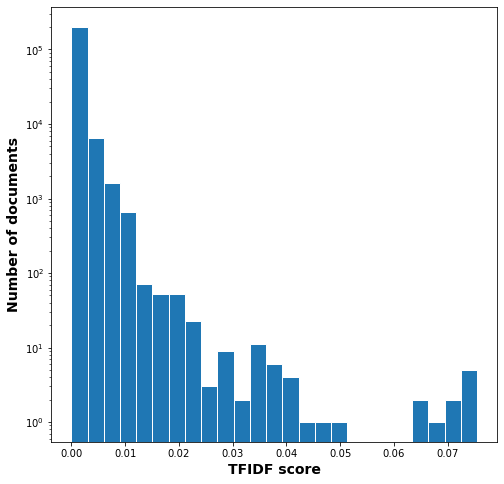

In [22]:
plt.figure()
plt.xlabel("TFIDF score")
plt.ylabel("Number of documents")
plt.hist(scores_q2, bins=25, log=True, edgecolor="w")
plt.savefig("img/distribution_query2_horta_tfidf.png")

In [25]:
max(scores_q1)

0.018704111139038828